In [10]:
import pandas as pd

# Load the dataset
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_merged.csv"
df = pd.read_csv(file_path)

# Display basic info before cleaning
print("Initial Dataset Shape:", df.shape)
print("Initial Dataset Info:")
print(df.info())



Initial Dataset Shape: (15422, 48)
Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 48 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ISO                                        15422 non-null  object 
 1   Country_x_x                                15422 non-null  object 
 2   Disaster Subgroup                          15422 non-null  object 
 3   Disaster Type                              15422 non-null  object 
 4   Disaster Subtype                           15422 non-null  object 
 5   Event Name                                 3690 non-null   object 
 6   Subregion                                  15422 non-null  object 
 7   Region                                     15422 non-null  object 
 8   Location                                   13977 non-null  object 
 9   OFDA/BHA Response                    

In [17]:
import pandas as pd

# Load dataset
dataset_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_merged.csv"
df = pd.read_csv(dataset_path)

# Rename columns
df.rename(columns={
    'Country_x_x': 'country',
    'ISO': 'ISO code',
    'Year': 'start year',
    'developed': 'developed/developing'
}, inplace=True)

# Drop specified columns
df.drop(columns=['Appeal', 'Declaration', 'Country_y', 'Country_x_y', 'Country Code', 'OFDA/BHA Response'], inplace=True)

# Fill missing values with zero in specified columns
columns_to_fill_zero = [
    'Total Fund', 'GEF Grant', 'Cofinancing', 'Total Deaths', 'No. Injured', 'No. Affected', 
    'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", 
    "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", 
    "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", 
    "Total Damage, Adjusted ('000 US$)", 'Magnitude', "AID Contribution ('000 US$)"
]

df[columns_to_fill_zero] = df[columns_to_fill_zero].fillna(0)

# Save cleaned dataset
cleaned_dataset_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_cleaned.csv"
df.to_csv(cleaned_dataset_path, index=False)

print("✅ Data Cleaning Complete!")
print("🔹 Cleaned Dataset Shape:", df.shape)
print("💾 Saved at:", cleaned_dataset_path)


✅ Data Cleaning Complete!
🔹 Cleaned Dataset Shape: (15422, 42)
💾 Saved at: D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_cleaned.csv


In [1]:
import pandas as pd

# Load dataset
cleaned_dataset_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_cleaned.csv"
df = pd.read_csv(cleaned_dataset_path)

# Check missing values before cleaning
missing_values_before = df.isnull().sum()
print("🔍 Missing Values Before Cleaning:\n", missing_values_before[missing_values_before > 0])

# Standardize column names
df.columns = (
    df.columns.str.lower()  # Convert to lowercase
    .str.replace(' ', '_', regex=True)  # Replace spaces with underscores
    .str.replace(r"[()\[\],]", "", regex=True)  # Remove special characters
)

# Fill missing values in categorical columns with "Unknown"
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna("Unknown")

# Verify missing values after cleaning
missing_values_after = df.isnull().sum()
print("\n✅ Missing Values After Cleaning:\n", missing_values_after[missing_values_after > 0])

# Save final cleaned dataset
final_cleaned_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_cleaned.csv"
df.to_csv(final_cleaned_path, index=False)

print("\n🚀 Data Standardization Complete!")
print("🔹 Final Cleaned Dataset Shape:", df.shape)
print("💾 Saved at:", final_cleaned_path)


🔍 Missing Values Before Cleaning:
 latitude                            13046
longitude                           13046
end_year                               16
annual_co₂_emissions_per_country       73
dtype: int64

✅ Missing Values After Cleaning:
 latitude                            13046
longitude                           13046
end_year                               16
annual_co₂_emissions_per_country       73
dtype: int64

🚀 Data Standardization Complete!
🔹 Final Cleaned Dataset Shape: (15422, 42)
💾 Saved at: D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_cleaned.csv


In [2]:
print("Initial Dataset Info:")
print(df.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   iso_code                                15422 non-null  object 
 1   country                                 15422 non-null  object 
 2   disaster_subgroup                       15422 non-null  object 
 3   disaster_type                           15422 non-null  object 
 4   disaster_subtype                        15422 non-null  object 
 5   event_name                              15422 non-null  object 
 6   subregion                               15422 non-null  object 
 7   region                                  15422 non-null  object 
 8   location                                15422 non-null  object 
 9   aid_contribution_'000_us$               15422 non-null  float64
 10  magnitude                           

In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Load the dataset
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_cleaned.csv"
df = pd.read_csv(file_path)

# 1️⃣ KNN Imputation for Annual CO₂ Emissions Per Country
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors
df[['annual_co₂_emissions_per_country']] = knn_imputer.fit_transform(df[['annual_co₂_emissions_per_country']])

# 2️⃣ Function to get latitude & longitude using geopy
geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(location, country):
    try:
        if pd.notna(location):  # If location is available
            loc = geolocator.geocode(f"{location}, {country}", timeout=10)
            if loc:
                return loc.latitude, loc.longitude
    except GeocoderTimedOut:
        pass
    return 0, 0  # If location not found, return (0, 0)

# Apply function to fill missing latitude & longitude
for index, row in df.iterrows():
    if pd.isna(row['latitude']) or pd.isna(row['longitude']):
        lat, lon = get_coordinates(row['location'], row['country'])
        df.at[index, 'latitude'] = lat
        df.at[index, 'longitude'] = lon

# Save the final cleaned dataset
output_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\merging_datasets\final_dataset_cleaned_v2.csv"
df.to_csv(output_path, index=False)

print(f"✅ Final dataset cleaned and saved at: {output_path}")


GeocoderInsufficientPrivileges: Non-successful status code 403

In [1]:
import pandas as pd
import time
import joblib
import os
import requests
from tqdm import tqdm

# 🔹 LocationIQ API Key (Replace with your actual key)
LOCATIONIQ_API_KEY = "pk.c35b1bc6e27a7e4abbfa128c0c2965a9"  # Get it from https://locationiq.com/

# 🔹 Load dataset
df = pd.read_csv("D:/work/college/E-Coders_SAS_Curiosity_Cup/datasets/merging_datasets/final_dataset_cleaned.csv")

# 🔹 Load cache if available
cache_file = "geocode_cache.pkl"
if os.path.exists(cache_file):
    location_cache = joblib.load(cache_file)
    print(f"📂 Loaded existing cache with {len(location_cache)} entries.")
else:
    location_cache = {}

def get_coordinates(location, country):
    """Fetch latitude and longitude using LocationIQ API with caching."""
    if pd.notna(location):
        query = f"{location}, {country}" if pd.notna(country) else location

        # Check cache first
        if query in location_cache:
            print(f"✅ Cache hit: {query} → {location_cache[query]}")
            return location_cache[query]

        print(f"🌍 Fetching geolocation for: {query}")

        # API request to LocationIQ
        url = f"https://us1.locationiq.com/v1/search.php?key={LOCATIONIQ_API_KEY}&q={query}&format=json"

        try:
            response = requests.get(url, timeout=10)
            data = response.json()
            
            if isinstance(data, list) and data:
                lat, lon = float(data[0]['lat']), float(data[0]['lon'])
                location_cache[query] = (lat, lon)  # Store in cache
                print(f"✅ API response: {query} → ({lat}, {lon})")

                # Save cache periodically
                if len(location_cache) % 50 == 0:
                    joblib.dump(location_cache, cache_file)
                    print(f"💾 Cache saved with {len(location_cache)} entries.")

                return lat, lon
            else:
                print(f"❌ No results for {query}")
        except requests.exceptions.RequestException as e:
            print(f"⚠️ API error: {e}")
            time.sleep(2)  # Small delay before retrying

    return 0, 0  # Default if not found

# 🔹 Filter rows with missing latitude/longitude
missing_rows = df[df['latitude'].isna() | df['longitude'].isna()]

print(f"🚀 Starting geolocation for {len(missing_rows)} missing rows...")

# 🔹 Process missing locations
results = []
for i, (_, row) in enumerate(tqdm(missing_rows.iterrows(), total=len(missing_rows))):
    lat, lon = get_coordinates(row['location'], row['country'])
    results.append((lat, lon))

    # Save progress every 10 rows
    if i % 10 == 0:
        print(f"💾 Progress saved at row {i}/{len(missing_rows)}.")

print("✅ Geolocation process completed.")

# 🔹 Update DataFrame
df.loc[missing_rows.index, ['latitude', 'longitude']] = results

# 🔹 Save updated dataset
output_path = "D:/work/college/E-Coders_SAS_Curiosity_Cup/datasets/merging_datasets/final_dataset_cleaned_with_latlon.csv"
df.to_csv(output_path, index=False)

# 🔹 Save cache
joblib.dump(location_cache, cache_file)
print(f"✅ Geolocation saved at {output_path}. Cache updated at {cache_file}")


🚀 Starting geolocation for 13046 missing rows...


  0%|                                                                                        | 0/13046 [00:00<?, ?it/s]

🌍 Fetching geolocation for: Unknown, Bangladesh


  0%|                                                                              | 1/13046 [00:01<5:49:41,  1.61s/it]

✅ API response: Unknown, Bangladesh → (24.894372, 90.7507288)
💾 Progress saved at row 0/13046.
🌍 Fetching geolocation for: Noakhali, Off-Shore Islands, Bangladesh


  0%|                                                                              | 2/13046 [00:03<5:54:38,  1.63s/it]

✅ API response: Noakhali, Off-Shore Islands, Bangladesh → (23.569995, 89.69949)
🌍 Fetching geolocation for: Chittagong area, Off-Shore Islands, Bangladesh


  0%|                                                                              | 3/13046 [00:04<4:42:38,  1.30s/it]

✅ API response: Chittagong area, Off-Shore Islands, Bangladesh → (23.569995, 89.69949)
🌍 Fetching geolocation for: Yuen Long, Sheung Shui (New Territories), China, Hong Kong Special Administrative Region


  0%|                                                                              | 4/13046 [00:05<4:11:08,  1.16s/it]

✅ API response: Yuen Long, Sheung Shui (New Territories), China, Hong Kong Special Administrative Region → (22.435987, 114.324757)
🌍 Fetching geolocation for: (Aberdeen, Stanley, Cheung Chau, China, Hong Kong Special Administrative Region


  0%|                                                                              | 5/13046 [00:06<4:23:09,  1.21s/it]

✅ API response: (Aberdeen, Stanley, Cheung Chau, China, Hong Kong Special Administrative Region → (22.25057, 114.15696)
🌍 Fetching geolocation for: Unknown, China, Hong Kong Special Administrative Region


  0%|                                                                              | 6/13046 [00:07<4:50:59,  1.34s/it]

✅ API response: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Maduri, Madras City, India


  0%|                                                                              | 7/13046 [00:08<4:07:59,  1.14s/it]

✅ API response: Maduri, Madras City, India → (11.327218, 75.80972)
🌍 Fetching geolocation for: Unknown, India


  0%|                                                                              | 8/13046 [00:09<3:46:13,  1.04s/it]

✅ API response: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Loveno, Italy


  0%|                                                                             | 11/13046 [00:10<2:27:57,  1.47it/s]

✅ API response: Loveno, Italy → (46.0642413, 10.2490432)
💾 Progress saved at row 10/13046.
🌍 Fetching geolocation for: Onagawa, Honshu Island, Japan


  0%|                                                                             | 12/13046 [00:16<6:01:36,  1.66s/it]

✅ API response: Onagawa, Honshu Island, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Unknown, Japan


  0%|                                                                             | 13/13046 [00:17<5:32:31,  1.53s/it]

✅ API response: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Unknown, Mauritius


  0%|                                                                             | 14/13046 [00:18<5:21:47,  1.48s/it]

✅ API response: Unknown, Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Unknown, Nicaragua


  0%|                                                                             | 15/13046 [00:20<5:30:21,  1.52s/it]

✅ API response: Unknown, Nicaragua → (16.11861, -93.17611)
🌍 Fetching geolocation for: South Wet of Manilla, Philippines


  0%|                                                                             | 16/13046 [00:21<5:31:45,  1.53s/it]

✅ API response: South Wet of Manilla, Philippines → (14.560865, 121.016002)
🌍 Fetching geolocation for: Nationwide, Philippines


  0%|                                                                             | 17/13046 [00:22<4:48:36,  1.33s/it]

✅ API response: Nationwide, Philippines → (16.932122, 121.387948)
🌍 Fetching geolocation for: Luzon, Philippines


  0%|                                                                             | 18/13046 [00:23<4:37:34,  1.28s/it]

✅ API response: Luzon, Philippines → (15.5919971, 120.73967457219265)
🌍 Fetching geolocation for: South Luzon, Philippines


  0%|                                                                             | 19/13046 [00:24<4:25:18,  1.22s/it]

✅ API response: South Luzon, Philippines → (14.8691201, 120.8023444)
🌍 Fetching geolocation for: Central, South Luzon, Philippines


  0%|                                                                             | 20/13046 [00:26<4:37:50,  1.28s/it]

✅ API response: Central, South Luzon, Philippines → (14.50651015, 121.05320286045162)
✅ Cache hit: Luzon, Philippines → (15.5919971, 120.73967457219265)
💾 Progress saved at row 20/13046.
🌍 Fetching geolocation for: Unknown, Philippines


  0%|▏                                                                            | 22/13046 [00:28<4:48:28,  1.33s/it]

✅ API response: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Unknown, Puerto Rico


  0%|▏                                                                            | 24/13046 [00:31<4:33:23,  1.26s/it]

✅ API response: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Hawaii, United States of America


  0%|▏                                                                            | 25/13046 [00:33<5:27:41,  1.51s/it]

✅ API response: Hawaii, United States of America → (19.593801499999998, -155.42837009716908)
🌍 Fetching geolocation for: East Coast, United States of America


  0%|▏                                                                            | 26/13046 [00:34<5:15:12,  1.45s/it]

✅ API response: East Coast, United States of America → (41.38061135, -74.312665112785)
🌍 Fetching geolocation for: Megna Eestuary, Bangladesh


  0%|▏                                                                            | 27/13046 [00:36<5:10:07,  1.43s/it]

✅ API response: Megna Eestuary, Bangladesh → (22.621802, 89.0414)
🌍 Fetching geolocation for: Chittagong, Bangladesh


  0%|▏                                                                            | 28/13046 [00:36<4:26:58,  1.23s/it]

✅ API response: Chittagong, Bangladesh → (22.333778, 91.8344348)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Belize city other towns, Belize


  0%|▏                                                                            | 30/13046 [00:39<4:50:51,  1.34s/it]

✅ API response: Belize city other towns, Belize → (17.498711, -88.188374)
🌍 Fetching geolocation for: Western Canada, Canada


  0%|▏                                                                            | 31/13046 [00:41<4:47:01,  1.32s/it]

✅ API response: Western Canada, Canada → (53.5543195, -113.2970555)
💾 Progress saved at row 30/13046.
🌍 Fetching geolocation for: Clamart (Hauts-de-Seine), France


  0%|▏                                                                            | 32/13046 [00:42<5:00:11,  1.38s/it]

✅ API response: Clamart (Hauts-de-Seine), France → (48.8003835, 2.2630238)
🌍 Fetching geolocation for: Unknown, Greece


  0%|▏                                                                            | 33/13046 [00:43<4:21:25,  1.21s/it]

✅ API response: Unknown, Greece → (35.4053076, 24.1647459)
🌍 Fetching geolocation for: Tsuen Wan area (New Territories), China, Hong Kong Special Administrative Region


  0%|▏                                                                            | 34/13046 [00:44<3:59:04,  1.10s/it]

✅ API response: Tsuen Wan area (New Territories), China, Hong Kong Special Administrative Region → (22.37113875, 114.10239954237181)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Unknown, Honduras


  0%|▏                                                                            | 36/13046 [00:45<3:23:40,  1.06it/s]

✅ API response: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: North, India


  0%|▏                                                                            | 37/13046 [00:46<3:16:49,  1.10it/s]

✅ API response: North, India → (12.81576, 79.68263)
🌍 Fetching geolocation for: Central, West India, India


  0%|▏                                                                            | 38/13046 [00:47<3:10:30,  1.14it/s]

✅ API response: Central, West India, India → (30.8583216, 75.860337)
🌍 Fetching geolocation for: Uttar Pradesh, India


  0%|▏                                                                            | 39/13046 [00:48<3:04:24,  1.18it/s]

✅ API response: Uttar Pradesh, India → (27.1303344, 80.859666)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
💾 Progress saved at row 40/13046.
🌍 Fetching geolocation for: Entire Nation except Hokkaido, Japan


  0%|▏                                                                            | 42/13046 [00:48<1:58:05,  1.84it/s]

❌ No results for Entire Nation except Hokkaido, Japan
🌍 Fetching geolocation for: Honshu + other Isles, Japan


  0%|▎                                                                            | 43/13046 [00:50<2:39:35,  1.36it/s]

✅ API response: Honshu + other Isles, Japan → (-7.44917, 110.28194)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Unknown, Republic of Korea


  0%|▎                                                                            | 45/13046 [00:51<2:08:40,  1.68it/s]

✅ API response: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: South, Mexico


  0%|▎                                                                            | 46/13046 [00:53<3:20:50,  1.08it/s]

✅ API response: South, Mexico → (35.6869974, -105.9402079)
🌍 Fetching geolocation for: Unknown, Somalia


  0%|▎                                                                            | 47/13046 [00:54<3:36:38,  1.00it/s]

✅ API response: Unknown, Somalia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Texas, United States of America


  0%|▎                                                                            | 48/13046 [00:55<3:35:38,  1.00it/s]

✅ API response: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Unknown, United States of America


  0%|▎                                                                            | 49/13046 [00:56<3:50:35,  1.06s/it]

✅ API response: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Unknown, Canada


  0%|▎                                                                            | 50/13046 [01:00<6:45:51,  1.87s/it]

✅ API response: Unknown, Canada → (45.954619750000006, -65.16950269734426)
🌍 Fetching geolocation for: Unknown, Colombia


  0%|▎                                                                            | 51/13046 [01:02<6:03:55,  1.68s/it]

✅ API response: Unknown, Colombia → (8.1918877, -72.5117496)
💾 Progress saved at row 50/13046.
🌍 Fetching geolocation for: Barcelona, Spain


  0%|▎                                                                            | 52/13046 [01:03<5:48:23,  1.61s/it]

✅ API response: Barcelona, Spain → (41.3828939, 2.1774322)
🌍 Fetching geolocation for: Tai Po, Shatin, Sha Tau Kok areas, China, Hong Kong Special Administrative Region


  0%|▎                                                                            | 53/13046 [01:04<5:41:18,  1.58s/it]

✅ API response: Tai Po, Shatin, Sha Tau Kok areas, China, Hong Kong Special Administrative Region → (22.429717, 114.196152)
🌍 Fetching geolocation for: Unknown, Haiti


  0%|▎                                                                            | 54/13046 [01:06<5:26:45,  1.51s/it]

✅ API response: Unknown, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Punjab, Delhi, M.P., India


  0%|▎                                                                            | 55/13046 [01:09<6:49:37,  1.89s/it]

✅ API response: Punjab, Delhi, M.P., India → (28.689337, 77.300046)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Unknown, Mexico


  0%|▎                                                                            | 60/13046 [01:12<3:38:28,  1.01s/it]

✅ API response: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: Ranrahirca area, Peru


  0%|▎                                                                            | 61/13046 [01:16<5:25:11,  1.50s/it]

✅ API response: Ranrahirca area, Peru → (-9.17139, -77.72194)
💾 Progress saved at row 60/13046.
🌍 Fetching geolocation for: Unknown, Peru


  0%|▎                                                                            | 62/13046 [01:20<7:33:03,  2.09s/it]

✅ API response: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Unknown, Thailand


  1%|▍                                                                            | 66/13046 [01:22<4:13:56,  1.17s/it]

✅ API response: Unknown, Thailand → (9.4817816, 99.9810011)
🌍 Fetching geolocation for: Unknown, Tunisia


  1%|▍                                                                            | 67/13046 [01:23<4:17:34,  1.19s/it]

✅ API response: Unknown, Tunisia → (36.7958707, 10.1687699)
💾 Cache saved with 50 entries.
✅ Cache hit: East Coast, United States of America → (41.38061135, -74.312665112785)
🌍 Fetching geolocation for: West Coast, United States of America


  1%|▍                                                                            | 69/13046 [01:23<3:19:26,  1.08it/s]

✅ API response: West Coast, United States of America → (41.37970745, -74.31205076480654)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Unknown, Venezuela (Bolivarian Republic of)


  1%|▍                                                                            | 71/13046 [01:25<3:17:59,  1.09it/s]

✅ API response: Unknown, Venezuela (Bolivarian Republic of) → (2.914723, 30.534573)
💾 Progress saved at row 70/13046.
🌍 Fetching geolocation for: Unknown, Belgium


  1%|▍                                                                            | 72/13046 [01:27<3:43:01,  1.03s/it]

✅ API response: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Chittagong, Noakhali, Bangladesh


  1%|▍                                                                            | 73/13046 [01:28<3:32:53,  1.02it/s]

✅ API response: Chittagong, Noakhali, Bangladesh → (22.890897, 91.2043168)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Unknown, Bahamas


  1%|▍                                                                            | 76/13046 [01:29<2:47:53,  1.29it/s]

✅ API response: Unknown, Bahamas → (25.029422, -77.36195598496681)
🌍 Fetching geolocation for: Mesata Central, Costa Rica


  1%|▍                                                                            | 77/13046 [01:31<3:19:22,  1.08it/s]

✅ API response: Mesata Central, Costa Rica → (9.936894, -84.07974)
🌍 Fetching geolocation for: Unknown, Dominican Republic


  1%|▍                                                                            | 78/13046 [01:33<4:10:55,  1.16s/it]

✅ API response: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Southern, Algeria


  1%|▍                                                                            | 79/13046 [01:34<4:27:56,  1.24s/it]

✅ API response: Southern, Algeria → (31.5165637, 34.433802)
🌍 Fetching geolocation for: South West End Hispaniola, Haiti


  1%|▍                                                                            | 80/13046 [01:37<5:26:00,  1.51s/it]

✅ API response: South West End Hispaniola, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Grand Riviare du Nord, Haiti


  1%|▍                                                                            | 81/13046 [01:38<5:07:09,  1.42s/it]

✅ API response: Grand Riviare du Nord, Haiti → (19.578739, -72.169999)
💾 Progress saved at row 80/13046.
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Orissa, Uttar Pradesh, Punjab, India


  1%|▍                                                                            | 83/13046 [01:39<3:56:46,  1.10s/it]

✅ API response: Orissa, Uttar Pradesh, Punjab, India → (30.754088, 75.522889)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Vajont dam, Longarone (Belluno, Podova), Italy


  1%|▌                                                                            | 86/13046 [01:41<2:47:20,  1.29it/s]

✅ API response: Vajont dam, Longarone (Belluno, Podova), Italy → (46.267031, 12.300777)
🌍 Fetching geolocation for: Unknown, Jamaica


  1%|▌                                                                            | 87/13046 [01:43<3:49:31,  1.06s/it]

✅ API response: Unknown, Jamaica → (17.9843037, -76.7776279)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
💾 Progress saved at row 90/13046.
🌍 Fetching geolocation for: Tanger, Gharb area, Morocco


  1%|▌                                                                            | 92/13046 [01:44<1:59:18,  1.81it/s]

✅ API response: Tanger, Gharb area, Morocco → (34.545229, -6.015951)
🌍 Fetching geolocation for: Unknown, Morocco


  1%|▌                                                                            | 93/13046 [01:45<2:24:52,  1.49it/s]

✅ API response: Unknown, Morocco → (30.63702995, -8.295048457301675)
🌍 Fetching geolocation for: Unknown, Myanmar


  1%|▌                                                                            | 94/13046 [01:46<2:46:40,  1.30it/s]

✅ API response: Unknown, Myanmar → (16.8217447, 96.204555)
🌍 Fetching geolocation for: Akyab, Myanmar


  1%|▌                                                                            | 95/13046 [01:47<2:46:19,  1.30it/s]

✅ API response: Akyab, Myanmar → (20.139197, 92.8970859)
🌍 Fetching geolocation for: Trisuli, Nepal


  1%|▌                                                                            | 96/13046 [01:48<2:42:01,  1.33it/s]

✅ API response: Trisuli, Nepal → (27.807888650000002, 84.89469145671816)
🌍 Fetching geolocation for: Unknown, Nepal


  1%|▌                                                                            | 97/13046 [01:48<2:39:00,  1.36it/s]

✅ API response: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: North Luzon, Philippines


  1%|▌                                                                            | 98/13046 [01:50<3:14:28,  1.11it/s]

✅ API response: North Luzon, Philippines → (15.5494168, 120.9952823)
🌍 Fetching geolocation for: Chaco region, Paraguay


  1%|▌                                                                            | 99/13046 [01:51<3:08:49,  1.14it/s]

✅ API response: Chaco region, Paraguay → (-24.0860442, -54.9410211)
🌍 Fetching geolocation for: Unknown, Trinidad and Tobago


  1%|▌                                                                           | 100/13046 [01:52<3:51:31,  1.07s/it]

✅ API response: Unknown, Trinidad and Tobago → (10.606883700000001, -61.114157064538304)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
💾 Progress saved at row 100/13046.
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Gainesville (Georgie), United States of America


  1%|▌                                                                           | 103/13046 [01:54<2:42:16,  1.33it/s]

✅ API response: Gainesville (Georgie), United States of America → (34.2978794, -83.8240663)
🌍 Fetching geolocation for: Jessore district, Bangladesh


  1%|▌                                                                           | 104/13046 [01:55<3:05:44,  1.16it/s]

✅ API response: Jessore district, Bangladesh → (23.084244400000003, 89.12469365626626)
🌍 Fetching geolocation for: Rangpur, Comilla, Bangladesh


  1%|▌                                                                           | 105/13046 [01:57<3:41:57,  1.03s/it]

✅ API response: Rangpur, Comilla, Bangladesh → (23.97154, 90.89559)
🌍 Fetching geolocation for: Bahia state, Brazil


  1%|▌                                                                           | 106/13046 [01:59<5:10:37,  1.44s/it]

✅ API response: Bahia state, Brazil → (-30.024151, -51.174659)
🌍 Fetching geolocation for: Northeastern states, Brazil


  1%|▌                                                                           | 107/13046 [02:03<7:21:47,  2.05s/it]

✅ API response: Northeastern states, Brazil → (-22.391224, -41.815854)
🌍 Fetching geolocation for: Paraiba, Rio Grande Do Norte, Brazil


  1%|▋                                                                           | 108/13046 [02:04<6:11:56,  1.72s/it]

✅ API response: Paraiba, Rio Grande Do Norte, Brazil → (-6.682461, -36.63327583939849)
🌍 Fetching geolocation for: Villarica, Chile


  1%|▋                                                                           | 109/13046 [02:05<5:26:19,  1.51s/it]

✅ API response: Villarica, Chile → (-34.1582827, -70.6971187)
🌍 Fetching geolocation for: Unknown, China


  1%|▋                                                                           | 110/13046 [02:06<4:42:04,  1.31s/it]

✅ API response: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Barahona, Neiba Bay, Dominican Republic


  1%|▋                                                                           | 111/13046 [02:07<5:00:59,  1.40s/it]

✅ API response: Barahona, Neiba Bay, Dominican Republic → (18.379964, -71.135004)
💾 Progress saved at row 110/13046.
🌍 Fetching geolocation for: Unknown, Ecuador


  1%|▋                                                                           | 112/13046 [02:09<4:52:58,  1.36s/it]

✅ API response: Unknown, Ecuador → (-0.1653895, -78.4788662)
🌍 Fetching geolocation for: Viti Levu, Fiji


  1%|▋                                                                           | 113/13046 [02:10<4:47:12,  1.33s/it]

✅ API response: Viti Levu, Fiji → (-17.793383050000003, 177.9782252066411)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Les Cayes area, Haiti


  1%|▋                                                                           | 116/13046 [02:11<2:58:58,  1.20it/s]

✅ API response: Les Cayes area, Haiti → (18.2, -73.75)
🌍 Fetching geolocation for: Assam, Bihar, Punjab, India


  1%|▋                                                                           | 117/13046 [02:12<2:57:42,  1.21it/s]

✅ API response: Assam, Bihar, Punjab, India → (30.754088, 75.522889)
🌍 Fetching geolocation for: Andhra Pradesh, India


  1%|▋                                                                           | 118/13046 [02:13<2:55:51,  1.23it/s]

✅ API response: Andhra Pradesh, India → (15.9240905, 80.1863809)
🌍 Fetching geolocation for: Rameswaram, India


  1%|▋                                                                           | 119/13046 [02:14<3:20:41,  1.07it/s]

✅ API response: Rameswaram, India → (9.2844657, 79.3125553)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
💾 Progress saved at row 120/13046.
🌍 Fetching geolocation for: Rajasthan, center, India


  1%|▋                                                                           | 122/13046 [02:15<2:30:45,  1.43it/s]

✅ API response: Rajasthan, center, India → (26.88145545, 75.79912922712619)
🌍 Fetching geolocation for: Mysore, India


  1%|▋                                                                           | 123/13046 [02:17<2:55:06,  1.23it/s]

✅ API response: Mysore, India → (12.3051828, 76.6553609)
🌍 Fetching geolocation for: Unknown, Iran (Islamic Republic of)


  1%|▋                                                                           | 124/13046 [02:18<3:32:21,  1.01it/s]

❌ No results for Unknown, Iran (Islamic Republic of)
🌍 Fetching geolocation for: West Coast, Japan


  1%|▋                                                                           | 125/13046 [02:21<4:34:39,  1.28s/it]

✅ API response: West Coast, Japan → (5.9873441, 116.0764877)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Nyanza, Western Regions, Kenya


  1%|▋                                                                           | 128/13046 [02:21<2:46:42,  1.29it/s]

✅ API response: Nyanza, Western Regions, Kenya → (0.56168, 34.560737)
🌍 Fetching geolocation for: North Seoul, Kyonggi province, Republic of Korea


  1%|▊                                                                           | 129/13046 [02:23<3:20:55,  1.07it/s]

✅ API response: North Seoul, Kyonggi province, Republic of Korea → (-0.699018, 28.769618)
🌍 Fetching geolocation for: Trincomalee, East coast, Sri Lanka


  1%|▊                                                                           | 130/13046 [02:24<3:46:17,  1.05s/it]

✅ API response: Trincomalee, East coast, Sri Lanka → (7.622919, 80.68822)
✅ Cache hit: Unknown, Morocco → (30.63702995, -8.295048457301675)
💾 Progress saved at row 130/13046.
🌍 Fetching geolocation for: Mountain areas, Nepal


  1%|▊                                                                           | 132/13046 [02:26<3:30:26,  1.02it/s]

✅ API response: Mountain areas, Nepal → (28.189211, 83.980936)
🌍 Fetching geolocation for: Coast, Low Indus valley, Pakistan


  1%|▊                                                                           | 133/13046 [02:28<3:51:38,  1.08s/it]

✅ API response: Coast, Low Indus valley, Pakistan → (34.557152, 76.142475)
🌍 Fetching geolocation for: Lahore district, Pakistan


  1%|▊                                                                           | 134/13046 [02:29<4:00:36,  1.12s/it]

✅ API response: Lahore district, Pakistan → (31.4568448, 74.40783572800441)
🌍 Fetching geolocation for: Bocas Del Toro, Panama


  1%|▊                                                                           | 135/13046 [02:30<4:10:54,  1.17s/it]

✅ API response: Bocas Del Toro, Panama → (9.26847485, -81.99322424821933)
🌍 Fetching geolocation for: Unknown, Panama


  1%|▊                                                                           | 136/13046 [02:33<5:57:24,  1.66s/it]

✅ API response: Unknown, Panama → (8.6196759, -82.4387824)
🌍 Fetching geolocation for: South, Central Luzon, Philippines


  1%|▊                                                                           | 137/13046 [02:35<5:53:54,  1.64s/it]

✅ API response: South, Central Luzon, Philippines → (14.8691201, 120.8023444)
🌍 Fetching geolocation for: North Mindanao, South Luzon, Philippines


  1%|▊                                                                          | 138/13046 [02:42<11:00:50,  3.07s/it]

✅ API response: North Mindanao, South Luzon, Philippines → (16.0, 121.0)
💾 Cache saved with 100 entries.
🌍 Fetching geolocation for: Nedjaran, Saudi Arabia


  1%|▊                                                                           | 139/13046 [02:42<8:40:40,  2.42s/it]

❌ No results for Nedjaran, Saudi Arabia
🌍 Fetching geolocation for: Nationwide, Galciao, Somalia


  1%|▊                                                                           | 140/13046 [02:44<7:40:09,  2.14s/it]

❌ No results for Nationwide, Galciao, Somalia
🌍 Fetching geolocation for: Kairoun, Khledia, Tunisia


  1%|▊                                                                           | 141/13046 [02:45<6:55:46,  1.93s/it]

✅ API response: Kairoun, Khledia, Tunisia → (36.64609, 10.19343)
💾 Progress saved at row 140/13046.
🌍 Fetching geolocation for: Zarzis area, Tunisia


  1%|▊                                                                           | 142/13046 [02:47<6:57:54,  1.94s/it]

✅ API response: Zarzis area, Tunisia → (33.50398, 11.11216)
🌍 Fetching geolocation for: Adana Province, Türkiye


  1%|▊                                                                           | 143/13046 [02:49<6:42:43,  1.87s/it]

✅ API response: Adana Province, Türkiye → (36.05576655, 36.01416515503453)
🌍 Fetching geolocation for: Western-Eskisehir, Türkiye


  1%|▊                                                                           | 144/13046 [02:52<7:57:22,  2.22s/it]

✅ API response: Western-Eskisehir, Türkiye → (39.769149, 30.527303)
🌍 Fetching geolocation for: Southern, Türkiye


  1%|▊                                                                           | 145/13046 [02:54<7:17:22,  2.03s/it]

✅ API response: Southern, Türkiye → (60.1585599, 24.953994)
🌍 Fetching geolocation for: Pangani river basin, United Republic of Tanzania


  1%|▊                                                                           | 146/13046 [02:54<6:02:06,  1.68s/it]

✅ API response: Pangani river basin, United Republic of Tanzania → (43.824477, -70.213724)
🌍 Fetching geolocation for: Louisiana, United States of America


  1%|▊                                                                           | 147/13046 [02:56<5:31:58,  1.54s/it]

✅ API response: Louisiana, United States of America → (30.8703881, -92.007126)
🌍 Fetching geolocation for: Florida, United States of America


  1%|▊                                                                           | 148/13046 [02:57<5:17:49,  1.48s/it]

✅ API response: Florida, United States of America → (27.7567667, -81.4639835)
🌍 Fetching geolocation for: South California, Oregon, United States of America


  1%|▊                                                                           | 149/13046 [02:59<5:43:46,  1.60s/it]

✅ API response: South California, Oregon, United States of America → (45.4743939, -122.6715886)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
💾 Progress saved at row 150/13046.
🌍 Fetching geolocation for: Ciskei, Transkei, South Africa


  1%|▉                                                                           | 152/13046 [03:00<2:58:57,  1.20it/s]

✅ API response: Ciskei, Transkei, South Africa → (-32.800851, 27.129744)
🌍 Fetching geolocation for: Mendoza, Las Cuevas, Argentina


  1%|▉                                                                           | 153/13046 [03:00<2:54:20,  1.23it/s]

✅ API response: Mendoza, Las Cuevas, Argentina → (-32.6463662, -69.94394882666057)
🌍 Fetching geolocation for: Barisal district, Bangladesh


  1%|▉                                                                           | 154/13046 [03:01<2:45:02,  1.30it/s]

✅ API response: Barisal district, Bangladesh → (22.7562851, 90.41098391553726)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Chittagong to Teknaf, Bangladesh


  1%|▉                                                                           | 156/13046 [03:02<2:40:08,  1.34it/s]

✅ API response: Chittagong to Teknaf, Bangladesh → (22.695661, 91.61658)
🌍 Fetching geolocation for: Eleuthera, Abaco, Andr, Bahamas


  1%|▉                                                                           | 157/13046 [03:05<4:02:28,  1.13s/it]

✅ API response: Eleuthera, Abaco, Andr, Bahamas → (25.483617, -76.715895)
🌍 Fetching geolocation for: Cangalli, Bolivia (Plurinational State of)


  1%|▉                                                                           | 158/13046 [03:07<4:40:47,  1.31s/it]

✅ API response: Cangalli, Bolivia (Plurinational State of) → (-15.559444, -68.003578)
🌍 Fetching geolocation for: Pernambuco, Recife, Brazil


  1%|▉                                                                           | 159/13046 [03:08<4:39:26,  1.30s/it]

✅ API response: Pernambuco, Recife, Brazil → (-8.9127669, -35.1539758)
🌍 Fetching geolocation for: South, Brazil


  1%|▉                                                                           | 160/13046 [03:10<5:42:30,  1.59s/it]

✅ API response: South, Brazil → (-22.963487, -43.61823760363134)
🌍 Fetching geolocation for: Nationwide, Botswana


  1%|▉                                                                           | 161/13046 [03:12<5:43:11,  1.60s/it]

❌ No results for Nationwide, Botswana
💾 Progress saved at row 160/13046.
🌍 Fetching geolocation for: Granuc Mine (British Columbia), Canada


  1%|▉                                                                           | 162/13046 [03:13<5:33:10,  1.55s/it]

❌ No results for Granuc Mine (British Columbia), Canada
🌍 Fetching geolocation for: Saas-Fee, Switzerland


  1%|▉                                                                           | 163/13046 [03:14<4:46:36,  1.33s/it]

✅ API response: Saas-Fee, Switzerland → (46.107342, 7.9247055)
🌍 Fetching geolocation for: Antofagasta to Aisen, Chile


  1%|▉                                                                           | 164/13046 [03:16<4:53:17,  1.37s/it]

✅ API response: Antofagasta to Aisen, Chile → (-43.8912967, -73.742748)
🌍 Fetching geolocation for: Unknown, Chile


  1%|▉                                                                           | 165/13046 [03:16<4:17:22,  1.20s/it]

✅ API response: Unknown, Chile → (-53.1512959, -70.8954054)
✅ Cache hit: Unknown, Chile → (-53.1512959, -70.8954054)
🌍 Fetching geolocation for: Central, South-West, China


  1%|▉                                                                           | 167/13046 [03:21<5:51:23,  1.64s/it]

✅ API response: Central, South-West, China → (40.92412175, 113.1292328401791)
🌍 Fetching geolocation for: Manizales, Colombia


  1%|▉                                                                           | 168/13046 [03:22<5:36:25,  1.57s/it]

✅ API response: Manizales, Colombia → (5.0668907, -75.5066661)
🌍 Fetching geolocation for: Pico Duarte, Dominican Republic


  1%|▉                                                                           | 169/13046 [03:23<5:25:13,  1.52s/it]

✅ API response: Pico Duarte, Dominican Republic → (19.022993, -70.9980479)
🌍 Fetching geolocation for: Daule river Valley, Ecuador


  1%|▉                                                                           | 170/13046 [03:26<6:35:18,  1.84s/it]

✅ API response: Daule river Valley, Ecuador → (-1.882911, -80.144091)
🌍 Fetching geolocation for: Nationwide, Ethiopia


  1%|▉                                                                           | 171/13046 [03:27<5:26:58,  1.52s/it]

❌ No results for Nationwide, Ethiopia
💾 Progress saved at row 170/13046.
🌍 Fetching geolocation for: Throughout Islands, Fiji


  1%|█                                                                           | 172/13046 [03:28<4:48:37,  1.35s/it]

✅ API response: Throughout Islands, Fiji → (-17.761795, 177.448477)
🌍 Fetching geolocation for: New Territories, China, Hong Kong Special Administrative Region


  1%|▉                                                                          | 173/13046 [03:35<10:36:42,  2.97s/it]

✅ API response: New Territories, China, Hong Kong Special Administrative Region → (22.4300716, 114.0724197)
🌍 Fetching geolocation for: San Pedro Sula area, Honduras


  1%|█                                                                           | 174/13046 [03:36<9:06:13,  2.55s/it]

✅ API response: San Pedro Sula area, Honduras → (15.50417, -88.025)
🌍 Fetching geolocation for: Central, South, Honduras


  1%|█                                                                          | 175/13046 [03:43<13:30:24,  3.78s/it]

✅ API response: Central, South, Honduras → (16.4525, -89.08083)
🌍 Fetching geolocation for: South Valle, Choluteca, Honduras


  1%|█                                                                          | 176/13046 [03:45<12:02:54,  3.37s/it]

✅ API response: South Valle, Choluteca, Honduras → (13.418532, -87.451133)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Nationwide except south, India


  1%|█                                                                           | 178/13046 [03:47<7:41:55,  2.15s/it]

❌ No results for Nationwide except south, India
🌍 Fetching geolocation for: East and North East Provinces, Iran (Islamic Republic of)


  1%|█                                                                           | 179/13046 [03:48<6:47:15,  1.90s/it]

✅ API response: East and North East Provinces, Iran (Islamic Republic of) → (55.502413, -4.593297)
🌍 Fetching geolocation for: North, Italy


  1%|█                                                                           | 180/13046 [03:50<6:39:36,  1.86s/it]

✅ API response: North, Italy → (54.7690311, -1.5914109)
🌍 Fetching geolocation for: Rome to Sicily, Italy


  1%|█                                                                           | 181/13046 [03:51<6:05:50,  1.71s/it]

✅ API response: Rome to Sicily, Italy → (37.093388, 15.034018)
💾 Progress saved at row 180/13046.
🌍 Fetching geolocation for: Amman to Ma-An, Jordan


  1%|█                                                                           | 182/13046 [03:53<6:03:20,  1.69s/it]

✅ API response: Amman to Ma-An, Jordan → (31.700114, 35.582888)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: West, Japan


  1%|█                                                                           | 184/13046 [03:53<3:53:03,  1.09s/it]

✅ API response: West, Japan → (52.4542825, 13.30630255073671)
🌍 Fetching geolocation for: South, Japan


  1%|█                                                                           | 185/13046 [03:55<4:01:15,  1.13s/it]

✅ API response: South, Japan → (23.6054539, 58.44233711233309)
🌍 Fetching geolocation for: Shikoku, Honshu, Japan


  1%|█                                                                           | 186/13046 [03:58<6:10:18,  1.73s/it]

✅ API response: Shikoku, Honshu, Japan → (-7.44917, 110.28194)
✅ Cache hit: South, Japan → (23.6054539, 58.44233711233309)
🌍 Fetching geolocation for: Unknown, Kenya


  1%|█                                                                           | 188/13046 [04:01<5:29:21,  1.54s/it]

✅ API response: Unknown, Kenya → (-0.84697625, 35.60254365)
🌍 Fetching geolocation for: Nationwide, Republic of Korea


  1%|█                                                                           | 189/13046 [04:02<5:33:26,  1.56s/it]

✅ API response: Nationwide, Republic of Korea → (50.631753, -1.17839)
🌍 Fetching geolocation for: South, Morocco


  1%|█                                                                           | 190/13046 [04:03<4:44:05,  1.33s/it]

✅ API response: South, Morocco → (23.6034295, 58.44254779650133)
✅ Cache hit: Unknown, Morocco → (30.63702995, -8.295048457301675)
💾 Progress saved at row 190/13046.
🌍 Fetching geolocation for: West and Central, Mexico


  1%|█                                                                           | 192/13046 [04:08<6:38:28,  1.86s/it]

✅ API response: West and Central, Mexico → (36.736905, -108.369885)
🌍 Fetching geolocation for: South, Central, Myanmar


  1%|█                                                                           | 193/13046 [04:10<6:51:22,  1.92s/it]

✅ API response: South, Central, Myanmar → (-35.306965250000005, 149.114218229259)
🌍 Fetching geolocation for: Yamenthin district, Myanmar


  1%|█▏                                                                          | 194/13046 [04:13<7:22:07,  2.06s/it]

✅ API response: Yamenthin district, Myanmar → (16.980574, 94.749784)
🌍 Fetching geolocation for: Tichitt, Kandossa, Mauritania


  1%|█▏                                                                          | 195/13046 [04:15<7:08:24,  2.00s/it]

✅ API response: Tichitt, Kandossa, Mauritania → (20.459897, -12.362697)
🌍 Fetching geolocation for: Peninsular East coast, Malaysia


  2%|█▏                                                                          | 196/13046 [04:16<6:45:12,  1.89s/it]

✅ API response: Peninsular East coast, Malaysia → (2.521947, 113.833569)
🌍 Fetching geolocation for: Karachi, Pakistan


  2%|█▏                                                                          | 197/13046 [04:18<6:37:14,  1.85s/it]

✅ API response: Karachi, Pakistan → (24.8546842, 67.0207055)
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: Cotabato, Luzon, Philippines


  2%|█▏                                                                          | 199/13046 [04:20<5:04:33,  1.42s/it]

✅ API response: Cotabato, Luzon, Philippines → (16.0, 121.0)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Asuncion, Paraguay


  2%|█▏                                                                          | 201/13046 [04:21<4:12:55,  1.18s/it]

✅ API response: Asuncion, Paraguay → (-25.2800459, -57.6343814)
💾 Progress saved at row 200/13046.
🌍 Fetching geolocation for: Khartoum province, Sudan


  2%|█▏                                                                          | 202/13046 [04:25<6:23:33,  1.79s/it]

✅ API response: Khartoum province, Sudan → (15.55177, 32.53241)
🌍 Fetching geolocation for: Diourbel region, Senegal


  2%|█▏                                                                          | 203/13046 [04:26<5:25:15,  1.52s/it]

✅ API response: Diourbel region, Senegal → (14.78445395, -16.03164514965248)
🌍 Fetching geolocation for: Nationwide, Galaciao, Somalia


  2%|█▏                                                                          | 204/13046 [04:27<5:21:01,  1.50s/it]

❌ No results for Nationwide, Galaciao, Somalia
🌍 Fetching geolocation for: Unknown, Türkiye


  2%|█▏                                                                          | 205/13046 [04:32<8:46:48,  2.46s/it]

✅ API response: Unknown, Türkiye → (38.0465801, 29.45148930267696)
💾 Cache saved with 150 entries.
🌍 Fetching geolocation for: Illinois, Indiana, Michigan, United States of America


  2%|█▏                                                                          | 206/13046 [04:34<7:44:10,  2.17s/it]

✅ API response: Illinois, Indiana, Michigan, United States of America → (41.7302982, -86.8888419)
🌍 Fetching geolocation for: Florida, Louisiana, Alabama, Mississippi, United States of America


  2%|█▏                                                                          | 207/13046 [04:35<7:03:08,  1.98s/it]

✅ API response: Florida, Louisiana, Alabama, Mississippi, United States of America → (30.58218, -88.503078)
🌍 Fetching geolocation for: North West, Argentina


  2%|█▏                                                                         | 208/13046 [04:40<10:05:24,  2.83s/it]

✅ API response: North West, Argentina → (-29.53605, -62.26363)
🌍 Fetching geolocation for: Nationwide, Burkina Faso


  2%|█▏                                                                          | 209/13046 [04:42<8:50:15,  2.48s/it]

✅ API response: Nationwide, Burkina Faso → (12.655182, -1.473625)
🌍 Fetching geolocation for: Sylhet, Bangladesh


  2%|█▏                                                                          | 210/13046 [04:44<8:03:52,  2.26s/it]

✅ API response: Sylhet, Bangladesh → (24.89922, 91.8685271)
🌍 Fetching geolocation for: Chittagong, Sandwip, Bangladesh


  2%|█▏                                                                          | 211/13046 [04:44<6:31:14,  1.83s/it]

✅ API response: Chittagong, Sandwip, Bangladesh → (22.6183314, 91.6564782)
💾 Progress saved at row 210/13046.
🌍 Fetching geolocation for: Nassau, Bimini, Bahamas


  2%|█▏                                                                          | 212/13046 [04:46<5:46:10,  1.62s/it]

✅ API response: Nassau, Bimini, Bahamas → (25.0579999, -77.345585)
✅ Cache hit: Unknown, Bahamas → (25.029422, -77.36195598496681)
🌍 Fetching geolocation for: Unknown, Bolivia (Plurinational State of)


  2%|█▏                                                                          | 214/13046 [04:46<3:46:38,  1.06s/it]

✅ API response: Unknown, Bolivia (Plurinational State of) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Puerto Grether, Bermejo, Vicchoca, Totora, Bolivia (Plurinational State of)


  2%|█▎                                                                          | 215/13046 [04:49<5:23:12,  1.51s/it]

✅ API response: Puerto Grether, Bermejo, Vicchoca, Totora, Bolivia (Plurinational State of) → (-17.187564, -64.356458)
🌍 Fetching geolocation for: Rio, Guanabara, Brazil


  2%|█▎                                                                          | 216/13046 [04:51<5:51:24,  1.64s/it]

✅ API response: Rio, Guanabara, Brazil → (-26.3136623, -48.827644)
🌍 Fetching geolocation for: Rio de Janeiro, Brazil


  2%|█▎                                                                          | 217/13046 [04:52<5:27:34,  1.53s/it]

✅ API response: Rio de Janeiro, Brazil → (-22.9110137, -43.2093727)
🌍 Fetching geolocation for: Salvador, Recife, Brazil


  2%|█▎                                                                          | 218/13046 [04:53<4:51:18,  1.36s/it]

✅ API response: Salvador, Recife, Brazil → (-8.1981714, -35.06907923117532)
🌍 Fetching geolocation for: Unknown, Brazil


  2%|█▎                                                                          | 219/13046 [04:54<4:04:34,  1.14s/it]

✅ API response: Unknown, Brazil → (-14.97491065, -54.05357760653298)
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
🌍 Fetching geolocation for: Winnipeg (Manitoba), Canada


  2%|█▎                                                                          | 221/13046 [04:55<3:15:02,  1.10it/s]

✅ API response: Winnipeg (Manitoba), Canada → (49.8955367, -97.1384584)
💾 Progress saved at row 220/13046.
🌍 Fetching geolocation for: Beni (North Kivu province), Democratic Republic of the Congo


  2%|█▎                                                                          | 222/13046 [04:57<3:52:57,  1.09s/it]

✅ API response: Beni (North Kivu province), Democratic Republic of the Congo → (0.49113, 29.47306)
🌍 Fetching geolocation for: South East coast, Barhona, Dominican Republic


  2%|█▎                                                                          | 223/13046 [04:59<4:20:57,  1.22s/it]

✅ API response: South East coast, Barhona, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: West El-Asnam, Algeria


  2%|█▎                                                                          | 224/13046 [05:00<4:24:12,  1.24s/it]

✅ API response: West El-Asnam, Algeria → (36.1401708, 1.4296662)
🌍 Fetching geolocation for: Quito-Santo Domingo road, Ecuador


  2%|█▎                                                                          | 225/13046 [05:01<4:24:10,  1.24s/it]

✅ API response: Quito-Santo Domingo road, Ecuador → (-0.290936, -78.678458)
🌍 Fetching geolocation for: Aberfan, Wales, United Kingdom of Great Britain and Northern Ireland


  2%|█▎                                                                          | 226/13046 [05:02<4:01:06,  1.13s/it]

✅ API response: Aberfan, Wales, United Kingdom of Great Britain and Northern Ireland → (51.6916974, -3.346164)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: South Hispaniola, Haiti


  2%|█▎                                                                          | 231/13046 [05:04<2:18:43,  1.54it/s]

✅ API response: South Hispaniola, Haiti → (19.251299, -72.294701)
💾 Progress saved at row 230/13046.
🌍 Fetching geolocation for: Manipur, Assam, India


  2%|█▎                                                                          | 232/13046 [05:05<2:31:33,  1.41it/s]

✅ API response: Manipur, Assam, India → (24.811182, 93.090322)
🌍 Fetching geolocation for: Madras state, India


  2%|█▎                                                                          | 233/13046 [05:08<3:48:01,  1.07s/it]

✅ API response: Madras state, India → (13.0638307, 80.2657136)
🌍 Fetching geolocation for: Northwest, Iran (Islamic Republic of)


  2%|█▎                                                                          | 234/13046 [05:09<4:13:44,  1.19s/it]

✅ API response: Northwest, Iran (Islamic Republic of) → (38.948358, -77.044991)
🌍 Fetching geolocation for: Florence, Venice, Italy


  2%|█▎                                                                          | 235/13046 [05:10<3:59:05,  1.12s/it]

✅ API response: Florence, Venice, Italy → (45.437934, 12.331647)
🌍 Fetching geolocation for: Maian, Jordan


  2%|█▎                                                                          | 236/13046 [05:12<4:27:20,  1.25s/it]

❌ No results for Maian, Jordan
🌍 Fetching geolocation for: Honshu, Japan


  2%|█▍                                                                          | 237/13046 [05:13<4:19:59,  1.22s/it]

✅ API response: Honshu, Japan → (37.4902775, 139.83574307277243)
🌍 Fetching geolocation for: Ryukyu Islands, Japan


  2%|█▍                                                                          | 238/13046 [05:14<3:56:01,  1.11s/it]

✅ API response: Ryukyu Islands, Japan → (26.52, 128.053)
🌍 Fetching geolocation for: Seoul, Kyonggi, Republic of Korea


  2%|█▍                                                                          | 239/13046 [05:14<3:32:46,  1.00it/s]

✅ API response: Seoul, Kyonggi, Republic of Korea → (37.5593715, 126.9629108)
🌍 Fetching geolocation for: Southwest, Sri Lanka


  2%|█▍                                                                          | 240/13046 [05:16<3:50:02,  1.08s/it]

✅ API response: Southwest, Sri Lanka → (7.622919, 80.68822)
🌍 Fetching geolocation for: Meknes, Fez, Morocco


  2%|█▍                                                                          | 241/13046 [05:17<4:17:37,  1.21s/it]

✅ API response: Meknes, Fez, Morocco → (33.8984131, -5.5321582)
💾 Progress saved at row 240/13046.
✅ Cache hit: Unknown, Morocco → (30.63702995, -8.295048457301675)
🌍 Fetching geolocation for: Yucatan, Tampico, Mexico


  2%|█▍                                                                          | 243/13046 [05:19<3:45:43,  1.06s/it]

✅ API response: Yucatan, Tampico, Mexico → (22.3046192, -97.8860763)
🌍 Fetching geolocation for: East, Middle-East regions, Niger


  2%|█▍                                                                          | 244/13046 [05:21<4:40:33,  1.31s/it]

✅ API response: East, Middle-East regions, Niger → (34.33623, -82.28984)
🌍 Fetching geolocation for: Pacora-Chepo area, Panama


  2%|█▍                                                                          | 245/13046 [05:22<4:10:52,  1.18s/it]

✅ API response: Pacora-Chepo area, Panama → (9.113406, -79.3326397)
🌍 Fetching geolocation for: Puno department, Peru


  2%|█▍                                                                          | 246/13046 [05:23<4:07:24,  1.16s/it]

✅ API response: Puno department, Peru → (-15.8405962, -70.0279512)
🌍 Fetching geolocation for: Visayas, South Luzon, Philippines


  2%|█▍                                                                          | 247/13046 [05:25<4:42:57,  1.33s/it]

✅ API response: Visayas, South Luzon, Philippines → (12.4751348, 124.2869157)
🌍 Fetching geolocation for: Sintra Forest, Portugal


  2%|█▍                                                                          | 248/13046 [05:26<4:40:56,  1.32s/it]

✅ API response: Sintra Forest, Portugal → (38.797272, -9.389819)
🌍 Fetching geolocation for: South West, Paraguay


  2%|█▍                                                                         | 249/13046 [05:34<11:02:22,  3.11s/it]

✅ API response: South West, Paraguay → (-25.30066, -57.63591)
🌍 Fetching geolocation for: Nationwide, Sudan


  2%|█▍                                                                          | 250/13046 [05:34<8:48:24,  2.48s/it]

❌ No results for Nationwide, Sudan
🌍 Fetching geolocation for: Saint Louis, Senegal


  2%|█▍                                                                          | 251/13046 [05:37<8:34:52,  2.41s/it]

✅ API response: Saint Louis, Senegal → (16.0280445, -16.5048686)
💾 Progress saved at row 250/13046.
🌍 Fetching geolocation for: Unknown, Senegal


  2%|█▍                                                                          | 252/13046 [05:40<9:33:03,  2.69s/it]

✅ API response: Unknown, Senegal → (-10.58333, -69.96667)
🌍 Fetching geolocation for: Unknown, Chad


  2%|█▍                                                                         | 253/13046 [05:43<10:15:37,  2.89s/it]

✅ API response: Unknown, Chad → (15.12651625, 22.25209177763938)
🌍 Fetching geolocation for: Sokode, Lama Kara, Togo


  2%|█▍                                                                          | 254/13046 [05:45<9:08:13,  2.57s/it]

✅ API response: Sokode, Lama Kara, Togo → (9.55111, 1.18611)
🌍 Fetching geolocation for: Chiengrai to Ubon, Thailand


  2%|█▍                                                                          | 255/13046 [05:46<7:15:20,  2.04s/it]

✅ API response: Chiengrai to Ubon, Thailand → (15.512883, 101.301707)
🌍 Fetching geolocation for: Kansas, United States of America


  2%|█▍                                                                          | 256/13046 [05:48<6:53:17,  1.94s/it]

✅ API response: Kansas, United States of America → (38.27312, -98.5821872)
🌍 Fetching geolocation for: Illinois state, United States of America


  2%|█▍                                                                          | 257/13046 [05:49<6:11:06,  1.74s/it]

✅ API response: Illinois state, United States of America → (41.8908132, -87.6277338)
🌍 Fetching geolocation for: St Louis, Missouri, United States of America


  2%|█▌                                                                          | 258/13046 [05:50<5:10:53,  1.46s/it]

✅ API response: St Louis, Missouri, United States of America → (38.6280278, -90.1910154)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
💾 Progress saved at row 260/13046.
🌍 Fetching geolocation for: Buenos Aires suburbs, Argentina


  2%|█▌                                                                          | 262/13046 [05:54<4:19:59,  1.22s/it]

✅ API response: Buenos Aires suburbs, Argentina → (-28.230604, -61.530447)
🌍 Fetching geolocation for: Hobart (Tasmania), Australia


  2%|█▌                                                                          | 263/13046 [05:57<5:06:09,  1.44s/it]

✅ API response: Hobart (Tasmania), Australia → (-42.8825088, 147.3281233)
🌍 Fetching geolocation for: South-East, Australia


  2%|█▌                                                                          | 264/13046 [06:02<8:03:58,  2.27s/it]

✅ API response: South-East, Australia → (16.10667, -93.34028)
🌍 Fetching geolocation for: Oostmalle, Ypres region, Belgium


  2%|█▌                                                                          | 265/13046 [06:03<7:07:33,  2.01s/it]

✅ API response: Oostmalle, Ypres region, Belgium → (50.853111, 2.885367)
🌍 Fetching geolocation for: Dacca, Bangladesh


  2%|█▌                                                                          | 266/13046 [06:04<6:28:59,  1.83s/it]

✅ API response: Dacca, Bangladesh → (23.7644025, 90.389015)
🌍 Fetching geolocation for: South, near Cox's Bazar, Bangladesh


  2%|█▌                                                                          | 267/13046 [06:06<6:08:22,  1.73s/it]

✅ API response: South, near Cox's Bazar, Bangladesh → (22.291272, 91.870538)
💾 Cache saved with 200 entries.
🌍 Fetching geolocation for: (1) Rio, Sao Paulo, Guanab, (2) Rio, Sao Paulo, (3) Rio, Guanabara, (4) Sao Paulo, Caraguatauba, Brazil


  2%|█▌                                                                          | 268/13046 [06:07<5:54:27,  1.66s/it]

✅ API response: (1) Rio, Sao Paulo, Guanab, (2) Rio, Sao Paulo, (3) Rio, Guanabara, (4) Sao Paulo, Caraguatauba, Brazil → (-22.680278, -44.157587)
✅ Cache hit: Rio de Janeiro, Brazil → (-22.9110137, -43.2093727)
🌍 Fetching geolocation for: North-East, Brazil


  2%|█▌                                                                          | 270/13046 [06:13<7:38:10,  2.15s/it]

✅ API response: North-East, Brazil → (39.536303, -87.12219)
🌍 Fetching geolocation for: Porto Alegre, Brazil


  2%|█▌                                                                          | 271/13046 [06:16<8:30:01,  2.40s/it]

✅ API response: Porto Alegre, Brazil → (-30.0324999, -51.2303767)
💾 Progress saved at row 270/13046.
🌍 Fetching geolocation for: South, South West Bahia, Brazil


  2%|█▌                                                                         | 272/13046 [06:23<12:31:50,  3.53s/it]

✅ API response: South, South West Bahia, Brazil → (-12.782646, -38.377633)
🌍 Fetching geolocation for: Kivu province, Congo


  2%|█▌                                                                          | 273/13046 [06:24<9:50:42,  2.77s/it]

✅ API response: Kivu province, Congo → (-1.9064233, 29.2841857)
🌍 Fetching geolocation for: Aures Samura Constantine, Algeria


  2%|█▌                                                                          | 274/13046 [06:24<7:51:10,  2.21s/it]

✅ API response: Aures Samura Constantine, Algeria → (35.561921, 6.159125)
🌍 Fetching geolocation for: Milagro, Ecuador


  2%|█▌                                                                          | 275/13046 [06:26<6:57:17,  1.96s/it]

✅ API response: Milagro, Ecuador → (-2.11796355, -79.5552041926201)
🌍 Fetching geolocation for: Guayaquil areas, Ecuador


  2%|█▌                                                                          | 276/13046 [06:27<6:14:32,  1.76s/it]

✅ API response: Guayaquil areas, Ecuador → (-2.1906444499999997, -79.87876253811027)
🌍 Fetching geolocation for: North, France


  2%|█▌                                                                          | 277/13046 [06:28<5:54:40,  1.67s/it]

✅ API response: North, France → (23.604800949999998, 58.42693599998166)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: East Java, Indonesia


  2%|█▋                                                                          | 279/13046 [06:29<3:44:29,  1.06s/it]

✅ API response: East Java, Indonesia → (-7.6977397, 112.4914199)
🌍 Fetching geolocation for: Jakarta, Indonesia


  2%|█▋                                                                          | 280/13046 [06:30<3:23:32,  1.05it/s]

✅ API response: Jakarta, Indonesia → (-6.175247, 106.8270488)
🌍 Fetching geolocation for: Ambon, Indonesia


  2%|█▋                                                                          | 281/13046 [06:31<4:00:53,  1.13s/it]

✅ API response: Ambon, Indonesia → (-3.6959434, 128.178785)
💾 Progress saved at row 280/13046.
🌍 Fetching geolocation for: Central Java, Indonesia


  2%|█▋                                                                          | 282/13046 [06:32<3:39:32,  1.03s/it]

✅ API response: Central Java, Indonesia → (-7.3032412, 110.0044145)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: North, Central, India


  2%|█▋                                                                          | 284/13046 [06:36<5:08:50,  1.45s/it]

✅ API response: North, Central, India → (11.0183356, 76.9557215)
🌍 Fetching geolocation for: Orissa, India


  2%|█▋                                                                          | 285/13046 [06:37<4:49:23,  1.36s/it]

✅ API response: Orissa, India → (20.5431241, 84.6897321)
🌍 Fetching geolocation for: Euphrates River Valley, Iraq


  2%|█▋                                                                          | 286/13046 [06:38<4:27:04,  1.26s/it]

✅ API response: Euphrates River Valley, Iraq → (16.3139, 43.29357)
🌍 Fetching geolocation for: Central, Japan


  2%|█▋                                                                          | 287/13046 [06:40<4:47:11,  1.35s/it]

✅ API response: Central, Japan → (-6.673506, 110.915093)
🌍 Fetching geolocation for: South West, Western Japan, Japan


  2%|█▋                                                                          | 288/13046 [06:41<5:04:53,  1.43s/it]

✅ API response: South West, Western Japan, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Niigata, Yamagata, Japan


  2%|█▋                                                                          | 289/13046 [06:42<4:15:54,  1.20s/it]

✅ API response: Niigata, Yamagata, Japan → (38.736285300000006, 139.82479095)
🌍 Fetching geolocation for: Central region, Japan


  2%|█▋                                                                         | 290/13046 [06:49<10:21:21,  2.92s/it]

✅ API response: Central region, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: South, Republic of Korea


  2%|█▋                                                                         | 291/13046 [06:52<10:12:01,  2.88s/it]

✅ API response: South, Republic of Korea → (51.50052685, -0.1836646513955968)
💾 Progress saved at row 290/13046.
🌍 Fetching geolocation for: Nationwide, Sri Lanka


  2%|█▋                                                                          | 292/13046 [06:54<8:56:00,  2.52s/it]

❌ No results for Nationwide, Sri Lanka
🌍 Fetching geolocation for: (1) Colombo area, (2) North, North Central, East provinces, Sri Lanka


  2%|█▋                                                                          | 293/13046 [06:57<9:23:09,  2.65s/it]

✅ API response: (1) Colombo area, (2) North, North Central, East provinces, Sri Lanka → (6.928482, 79.844432)
🌍 Fetching geolocation for: Northern areas, Mexico


  2%|█▋                                                                          | 294/13046 [06:59<9:18:58,  2.63s/it]

✅ API response: Northern areas, Mexico → (19.371422, -99.150344)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: Mexico - US border, Mexico


  2%|█▋                                                                          | 296/13046 [07:03<8:15:09,  2.33s/it]

✅ API response: Mexico - US border, Mexico → (19.371422, -99.150344)
🌍 Fetching geolocation for: Arakan Coast, West Irraw, Myanmar


  2%|█▋                                                                          | 297/13046 [07:04<7:24:19,  2.09s/it]

✅ API response: Arakan Coast, West Irraw, Myanmar → (16.787679, 96.168936)
🌍 Fetching geolocation for: North West Coast-Akyab, Monywa, Myanmar


  2%|█▋                                                                          | 298/13046 [07:06<6:31:02,  1.84s/it]

✅ API response: North West Coast-Akyab, Monywa, Myanmar → (22.10856, 95.13583)
🌍 Fetching geolocation for: Rodriguez Isl., Mauritius


  2%|█▋                                                                          | 299/13046 [07:07<5:36:48,  1.59s/it]

✅ API response: Rodriguez Isl., Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Kelantan, Trengganu, Malaysia


  2%|█▋                                                                          | 300/13046 [07:09<6:17:43,  1.78s/it]

✅ API response: Kelantan, Trengganu, Malaysia → (5.8503883, 102.524119)
🌍 Fetching geolocation for: Managua, Nicaragua


  2%|█▊                                                                          | 301/13046 [07:09<5:12:05,  1.47s/it]

✅ API response: Managua, Nicaragua → (12.1544035, -86.2737642)
💾 Progress saved at row 300/13046.
🌍 Fetching geolocation for: Naura village, Nepal


  2%|█▊                                                                          | 302/13046 [07:11<5:04:24,  1.43s/it]

✅ API response: Naura village, Nepal → (29.5476406, 81.2868468)
🌍 Fetching geolocation for: Western Montain, Nepal


  2%|█▊                                                                          | 303/13046 [07:12<5:14:57,  1.48s/it]

✅ API response: Western Montain, Nepal → (27.15, 85.9)
🌍 Fetching geolocation for: Karachi area, Pakistan


  2%|█▊                                                                          | 304/13046 [07:13<4:32:17,  1.28s/it]

✅ API response: Karachi area, Pakistan → (24.8522059, 67.1166814)
🌍 Fetching geolocation for: Vast Areas, Peru


  2%|█▊                                                                          | 305/13046 [07:15<4:52:00,  1.38s/it]

✅ API response: Vast Areas, Peru → (-5.568278, -79.521129)
🌍 Fetching geolocation for: Samar Island, Visayas, Bicol, Southern Tagalog, Central Luzon, Philippines


  2%|█▊                                                                          | 306/13046 [07:17<5:16:18,  1.49s/it]

✅ API response: Samar Island, Visayas, Bicol, Southern Tagalog, Central Luzon, Philippines → (16.35, 120.98333)
🌍 Fetching geolocation for: Lisbon + 3 other cities, Portugal


  2%|█▊                                                                          | 307/13046 [07:18<5:13:24,  1.48s/it]

✅ API response: Lisbon + 3 other cities, Portugal → (38.71174, -9.138444)
🌍 Fetching geolocation for: Western Islands, Solomon Islands


  2%|█▊                                                                          | 308/13046 [07:19<4:31:14,  1.28s/it]

✅ API response: Western Islands, Solomon Islands → (-8.078523, 159.243596)
🌍 Fetching geolocation for: Aleppo, Raqqa, Dayr, Syrian Arab Republic


  2%|█▊                                                                          | 309/13046 [07:20<4:40:28,  1.32s/it]

❌ No results for Aleppo, Raqqa, Dayr, Syrian Arab Republic
🌍 Fetching geolocation for: Nationwide, Kilwa, United Republic of Tanzania


  2%|█▊                                                                          | 310/13046 [07:22<4:58:06,  1.40s/it]

❌ No results for Nationwide, Kilwa, United Republic of Tanzania
🌍 Fetching geolocation for: Karamoja, Uganda


  2%|█▊                                                                          | 311/13046 [07:27<8:24:06,  2.38s/it]

✅ API response: Karamoja, Uganda → (3.000201, 34.1052533)
💾 Progress saved at row 310/13046.
🌍 Fetching geolocation for: Central, West, Uruguay


  2%|█▊                                                                         | 312/13046 [07:35<14:52:51,  4.21s/it]

✅ API response: Central, West, Uruguay → (-15.8135134, -47.87901959961802)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Unknown, Saint Vincent and the Grenadines


  2%|█▊                                                                          | 318/13046 [07:36<4:36:38,  1.30s/it]

✅ API response: Unknown, Saint Vincent and the Grenadines → (13.23357, -61.199573)
🌍 Fetching geolocation for: Llanos Region, Venezuela (Bolivarian Republic of)


  2%|█▊                                                                          | 319/13046 [07:38<4:57:48,  1.40s/it]

✅ API response: Llanos Region, Venezuela (Bolivarian Republic of) → (7.0, -67.125)
🌍 Fetching geolocation for: New South Wales, Australia


  2%|█▊                                                                          | 320/13046 [07:39<4:55:32,  1.39s/it]

✅ API response: New South Wales, Australia → (-31.8759835, 147.2869493)
🌍 Fetching geolocation for: Madaripur, Faridpur, Bangladesh


  2%|█▊                                                                          | 321/13046 [07:41<5:01:25,  1.42s/it]

✅ API response: Madaripur, Faridpur, Bangladesh → (23.17097, 90.20935)
💾 Progress saved at row 320/13046.
🌍 Fetching geolocation for: Nationwide, 5 Northern districts, Bangladesh


  2%|█▉                                                                          | 322/13046 [07:42<5:07:28,  1.45s/it]

❌ No results for Nationwide, 5 Northern districts, Bangladesh
🌍 Fetching geolocation for: Rio Grande Valley, Bolivia (Plurinational State of)


  2%|█▉                                                                          | 323/13046 [07:43<4:35:27,  1.30s/it]

✅ API response: Rio Grande Valley, Bolivia (Plurinational State of) → (-18.771015, -64.507172)
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
🌍 Fetching geolocation for: Countrywide, Botswana


  2%|█▉                                                                          | 325/13046 [07:44<3:33:33,  1.01s/it]

❌ No results for Countrywide, Botswana
🌍 Fetching geolocation for: Alps, Switzerland


  2%|█▉                                                                          | 326/13046 [07:46<3:52:22,  1.10s/it]

✅ API response: Alps, Switzerland → (46.3400988, 6.172293894244964)
🌍 Fetching geolocation for: North coast, Chile


  3%|█▉                                                                          | 327/13046 [07:48<5:00:23,  1.42s/it]

✅ API response: North coast, Chile → (13.5984917, -84.8905206)
🌍 Fetching geolocation for: Nationwide, Central Valley, Central Chile, Chile


  3%|█▉                                                                          | 328/13046 [07:49<4:28:56,  1.27s/it]

✅ API response: Nationwide, Central Valley, Central Chile, Chile → (51.916413, -0.662857)
🌍 Fetching geolocation for: Mandwe (Kivu province), Democratic Republic of the Congo


  3%|█▉                                                                          | 329/13046 [07:50<4:27:53,  1.26s/it]

✅ API response: Mandwe (Kivu province), Democratic Republic of the Congo → (19.31667, 74.35)
🌍 Fetching geolocation for: Guadalupe (Huila department), Colombia


  3%|█▉                                                                          | 330/13046 [07:52<4:38:10,  1.31s/it]

✅ API response: Guadalupe (Huila department), Colombia → (2.025413, -75.754933)
🌍 Fetching geolocation for: North, Costa Rica


  3%|█▉                                                                          | 331/13046 [07:56<7:11:20,  2.04s/it]

✅ API response: North, Costa Rica → (52.37559725, 4.928908468596521)
💾 Progress saved at row 330/13046.
🌍 Fetching geolocation for: Nationwide, Dominican Republic


  3%|█▉                                                                          | 332/13046 [07:58<7:03:17,  2.00s/it]

✅ API response: Nationwide, Dominican Republic → (19.105937, -70.804224)
💾 Cache saved with 250 entries.
🌍 Fetching geolocation for: Kelafo, Ethiopia


  3%|█▉                                                                          | 333/13046 [07:59<6:48:47,  1.93s/it]

✅ API response: Kelafo, Ethiopia → (5.6572136, 44.3496766)
🌍 Fetching geolocation for: Scotland, United Kingdom of Great Britain and Northern Ireland


  3%|█▉                                                                          | 334/13046 [08:01<6:08:13,  1.74s/it]

✅ API response: Scotland, United Kingdom of Great Britain and Northern Ireland → (56.7861112, -4.1140518)
🌍 Fetching geolocation for: Central, South, Ghana


  3%|█▉                                                                          | 335/13046 [08:06<9:46:06,  2.77s/it]

✅ API response: Central, South, Ghana → (5.483272, -1.224818)
🌍 Fetching geolocation for: Northwestern region, Gambia


  3%|█▉                                                                          | 336/13046 [08:07<8:36:38,  2.44s/it]

✅ API response: Northwestern region, Gambia → (8.15197, -12.63855)
🌍 Fetching geolocation for: North Point, Tai Po Kan, Kwangtung, Tate's Cairn, Waglan Isl., China, Hong Kong Special Administrative Region


  3%|█▉                                                                          | 337/13046 [08:08<7:01:17,  1.99s/it]

✅ API response: North Point, Tai Po Kan, Kwangtung, Tate's Cairn, Waglan Isl., China, Hong Kong Special Administrative Region → (22.24517, 114.179254)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: North West Peninsula, Haiti


  3%|█▉                                                                          | 340/13046 [08:11<5:06:38,  1.45s/it]

✅ API response: North West Peninsula, Haiti → (18.232005, -73.274891)
🌍 Fetching geolocation for: Bojalali (Central Java), Indonesia


  3%|█▉                                                                          | 341/13046 [08:13<5:06:07,  1.45s/it]

✅ API response: Bojalali (Central Java), Indonesia → (-6.900983, 109.805021)
💾 Progress saved at row 340/13046.
✅ Cache hit: East Java, Indonesia → (-7.6977397, 112.4914199)
🌍 Fetching geolocation for: Assam, India


  3%|█▉                                                                          | 343/13046 [08:16<4:59:14,  1.41s/it]

✅ API response: Assam, India → (26.4073841, 93.2551303)
🌍 Fetching geolocation for: (1) Rajasthan, Gujarat - (2) North-East, West Bengal, Assam, India


  3%|██                                                                          | 344/13046 [08:19<6:11:09,  1.75s/it]

✅ API response: (1) Rajasthan, Gujarat - (2) North-East, West Bengal, Assam, India → (26.231361, 73.008385)
🌍 Fetching geolocation for: Bihar, Bengal, India


  3%|██                                                                          | 345/13046 [08:19<5:25:13,  1.54s/it]

✅ API response: Bihar, Bengal, India → (26.3223696, 89.4592445)
🌍 Fetching geolocation for: Ramanathapurum, Thanjavur, India


  3%|██                                                                          | 346/13046 [08:21<5:17:32,  1.50s/it]

❌ No results for Ramanathapurum, Thanjavur, India
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Caspian Coast, Iran (Islamic Republic of)


  3%|██                                                                          | 349/13046 [08:22<3:27:50,  1.02it/s]

✅ API response: Caspian Coast, Iran (Islamic Republic of) → (35.697012, 51.016596)
🌍 Fetching geolocation for: Euphrates River Basin, Iraq


  3%|██                                                                          | 350/13046 [08:23<3:16:54,  1.07it/s]

✅ API response: Euphrates River Basin, Iraq → (36.3602951, 43.139219)
🌍 Fetching geolocation for: Piedmont, Asti, Biella, Novarra, Italy


  3%|██                                                                          | 351/13046 [08:25<3:44:18,  1.06s/it]

✅ API response: Piedmont, Asti, Biella, Novarra, Italy → (45.563427, 8.053752)
💾 Progress saved at row 350/13046.
🌍 Fetching geolocation for: Nationwide, Jamaica


  3%|██                                                                          | 352/13046 [08:26<4:06:37,  1.17s/it]

❌ No results for Nationwide, Jamaica
🌍 Fetching geolocation for: Kyushu, Shikoku, Japan


  3%|██                                                                          | 353/13046 [08:28<4:35:01,  1.30s/it]

✅ API response: Kyushu, Shikoku, Japan → (36.13793, 138.441899)
🌍 Fetching geolocation for: Kagoshima, Makurazaki, Japan


  3%|██                                                                          | 354/13046 [08:29<4:51:57,  1.38s/it]

✅ API response: Kagoshima, Makurazaki, Japan → (31.25825935, 130.33104753499975)
🌍 Fetching geolocation for: Osaka, Sumoto, Japan


  3%|██                                                                          | 355/13046 [08:31<4:48:11,  1.36s/it]

✅ API response: Osaka, Sumoto, Japan → (34.7405582, 135.6187816)
🌍 Fetching geolocation for: Nyanza, West provinces, Kenya


  3%|██                                                                          | 356/13046 [08:32<4:22:00,  1.24s/it]

✅ API response: Nyanza, West provinces, Kenya → (-0.112256, 34.74641)
🌍 Fetching geolocation for: East Coast, Republic of Korea


  3%|██                                                                          | 357/13046 [08:34<5:32:25,  1.57s/it]

✅ API response: East Coast, Republic of Korea → (53.895219, -0.544089)
🌍 Fetching geolocation for: Unknown, Lesotho


  3%|██                                                                          | 358/13046 [08:37<6:33:24,  1.86s/it]

✅ API response: Unknown, Lesotho → (-29.516751, 28.163744)
🌍 Fetching geolocation for: North-East Andapa, South-West Tulear, Madagascar


  3%|██                                                                          | 359/13046 [08:38<6:19:23,  1.79s/it]

✅ API response: North-East Andapa, South-West Tulear, Madagascar → (-23.35, 43.66667)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: North Arakan Coast, Myanmar


  3%|██                                                                          | 361/13046 [08:42<6:36:57,  1.88s/it]

✅ API response: North Arakan Coast, Myanmar → (20.125939, 92.888434)
💾 Progress saved at row 360/13046.
🌍 Fetching geolocation for: Johore, S. Lowlands, Malaysia


  3%|██                                                                          | 362/13046 [08:44<6:21:07,  1.80s/it]

✅ API response: Johore, S. Lowlands, Malaysia → (2.521947, 113.833569)
🌍 Fetching geolocation for: West Malaysia, Malaysia


  3%|██                                                                          | 363/13046 [08:48<8:24:42,  2.39s/it]

✅ API response: West Malaysia, Malaysia → (6.03843585, 116.12128325808709)
🌍 Fetching geolocation for: East Coast, New Caledonia


  3%|██                                                                          | 364/13046 [08:50<8:34:13,  2.43s/it]

✅ API response: East Coast, New Caledonia → (-21.703396, 165.818355)
🌍 Fetching geolocation for: Mistrook, El Salto, Nicaragua


  3%|██▏                                                                         | 365/13046 [08:52<7:22:13,  2.09s/it]

✅ API response: Mistrook, El Salto, Nicaragua → (12.97882, -86.02742)
🌍 Fetching geolocation for: East, Nepal


  3%|██▏                                                                         | 366/13046 [08:53<6:36:57,  1.88s/it]

✅ API response: East, Nepal → (50.8583293, 0.46312329816569264)
🌍 Fetching geolocation for: Gore, Mataura, Wyndahm, New Zealand


  3%|██▏                                                                         | 367/13046 [08:54<6:09:55,  1.75s/it]

✅ API response: Gore, Mataura, Wyndahm, New Zealand → (-46.101325, 168.936285)
🌍 Fetching geolocation for: Multan District, Pakistan


  3%|██▏                                                                         | 368/13046 [08:55<5:01:55,  1.43s/it]

✅ API response: Multan District, Pakistan → (30.083333, 71.666667)
🌍 Fetching geolocation for: Mindanao, Philippines


  3%|██▏                                                                         | 369/13046 [08:56<4:52:21,  1.38s/it]

✅ API response: Mindanao, Philippines → (7.68977865, 125.23653125001968)
🌍 Fetching geolocation for: Albay province, Luzon, Philippines


  3%|██▏                                                                         | 370/13046 [08:57<4:25:28,  1.26s/it]

✅ API response: Albay province, Luzon, Philippines → (13.216667, 123.55)
✅ Cache hit: Luzon, Philippines → (15.5919971, 120.73967457219265)
💾 Progress saved at row 370/13046.
🌍 Fetching geolocation for: South Visayas, Samar, Luzon, Philippines


  3%|██▏                                                                         | 372/13046 [09:00<4:27:49,  1.27s/it]

✅ API response: South Visayas, Samar, Luzon, Philippines → (11.773264, 124.884546)
🌍 Fetching geolocation for: Central Islands, Solomon Islands


  3%|██▏                                                                         | 373/13046 [09:01<4:44:55,  1.35s/it]

✅ API response: Central Islands, Solomon Islands → (-9.041516, 160.186401)
🌍 Fetching geolocation for: Countrywide (Except East), Türkiye


  3%|██▏                                                                         | 374/13046 [09:02<4:14:40,  1.21s/it]

❌ No results for Countrywide (Except East), Türkiye
🌍 Fetching geolocation for: Igel, Türkiye


  3%|██▏                                                                         | 375/13046 [09:04<4:28:10,  1.27s/it]

✅ API response: Igel, Türkiye → (39.1084, -83.4488)
🌍 Fetching geolocation for: Rufiji river Valley, United Republic of Tanzania


  3%|██▏                                                                         | 376/13046 [09:06<5:34:45,  1.59s/it]

✅ API response: Rufiji river Valley, United Republic of Tanzania → (29.546177, -98.645045)
🌍 Fetching geolocation for: Jonesboro (Arkansas), United States of America


  3%|██▏                                                                         | 377/13046 [09:07<4:38:05,  1.32s/it]

✅ API response: Jonesboro (Arkansas), United States of America → (35.8272257, -90.6949871)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Port Elizabeth, South Africa


  3%|██▏                                                                         | 380/13046 [09:08<3:10:41,  1.11it/s]

✅ API response: Port Elizabeth, South Africa → (-33.9618359, 25.6186512)
✅ Cache hit: Nationwide, Burkina Faso → (12.655182, -1.473625)
💾 Progress saved at row 380/13046.
🌍 Fetching geolocation for: Ouagadougou and border, Burkina Faso


  3%|██▏                                                                         | 382/13046 [09:10<2:55:26,  1.20it/s]

✅ API response: Ouagadougou and border, Burkina Faso → (12.36566, -1.53388)
🌍 Fetching geolocation for: East, North of Ougadougou. Northern section, Burkina Faso


  3%|██▏                                                                         | 383/13046 [09:11<3:32:55,  1.01s/it]

❌ No results for East, North of Ougadougou. Northern section, Burkina Faso
🌍 Fetching geolocation for: Dacca, Comilla, Bangladesh


  3%|██▏                                                                         | 384/13046 [09:13<4:13:26,  1.20s/it]

✅ API response: Dacca, Comilla, Bangladesh → (23.7813804, 90.4239693)
🌍 Fetching geolocation for: Magdalena, Beni region, Bolivia (Plurinational State of)


  3%|██▏                                                                         | 385/13046 [09:15<4:47:45,  1.36s/it]

✅ API response: Magdalena, Beni region, Bolivia (Plurinational State of) → (-13.257851, -64.058529)
🌍 Fetching geolocation for: Cochabamba, Sucre, Bolivia (Plurinational State of)


  3%|██▏                                                                         | 386/13046 [09:18<5:54:54,  1.68s/it]

✅ API response: Cochabamba, Sucre, Bolivia (Plurinational State of) → (-19.038876, -65.240625)
🌍 Fetching geolocation for: North East, Brazil


  3%|██▎                                                                         | 387/13046 [09:22<7:47:38,  2.22s/it]

✅ API response: North East, Brazil → (39.47644, -87.1003925)
🌍 Fetching geolocation for: Shantung province, China


  3%|██▎                                                                         | 388/13046 [09:23<6:58:52,  1.99s/it]

✅ API response: Shantung province, China → (23.76822, 112.80027)
🌍 Fetching geolocation for: Magdalena River area, Colombia


  3%|██▎                                                                         | 389/13046 [09:26<8:29:44,  2.42s/it]

✅ API response: Magdalena River area, Colombia → (5.202043, -74.734792)
🌍 Fetching geolocation for: Pacific coast, Central Meseta, Limon, Costa Rica


  3%|██▎                                                                         | 390/13046 [09:28<7:24:43,  2.11s/it]

✅ API response: Pacific coast, Central Meseta, Limon, Costa Rica → (9.657522, -82.753496)
🌍 Fetching geolocation for: Alger, Oases, Titteri, Algeria


  3%|██▎                                                                         | 391/13046 [09:29<6:12:30,  1.77s/it]

✅ API response: Alger, Oases, Titteri, Algeria → (27.89689, 3.379277)
💾 Progress saved at row 390/13046.
🌍 Fetching geolocation for: Playas area, Ecuador


  3%|██▎                                                                         | 392/13046 [09:33<8:42:41,  2.48s/it]

✅ API response: Playas area, Ecuador → (-2.63199, -80.38808)
🌍 Fetching geolocation for: Hamasion division, Ethiopia


  3%|██▎                                                                         | 393/13046 [09:34<7:27:10,  2.12s/it]

✅ API response: Hamasion division, Ethiopia → (9.053884, 38.76337)
🌍 Fetching geolocation for: Brittany, Normandy, France


  3%|██▎                                                                         | 394/13046 [09:35<6:34:52,  1.87s/it]

✅ API response: Brittany, Normandy, France → (48.5189282, -1.303862726640347)
🌍 Fetching geolocation for: Countrywide, Guatemala


  3%|██▎                                                                         | 395/13046 [09:40<9:19:20,  2.65s/it]

✅ API response: Countrywide, Guatemala → (14.64072, -90.51327)
🌍 Fetching geolocation for: Pacific Coast region, Guatemala


  3%|██▎                                                                         | 396/13046 [09:41<7:42:35,  2.19s/it]

✅ API response: Pacific Coast region, Guatemala → (14.579685, -90.568023)
💾 Cache saved with 300 entries.
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Roatan, Utila, Guanaja provinces, Honduras


  3%|██▎                                                                         | 400/13046 [09:42<3:22:29,  1.04it/s]

✅ API response: Roatan, Utila, Guanaja provinces, Honduras → (8.52491, -80.94615)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
💾 Progress saved at row 400/13046.
🌍 Fetching geolocation for: Flores, Timor, Sulawe, Indonesia


  3%|██▎                                                                         | 402/13046 [09:43<3:06:46,  1.13it/s]

✅ API response: Flores, Timor, Sulawe, Indonesia → (-8.734111, 125.565858)
🌍 Fetching geolocation for: Guntur, Krishna, Godavari (Andhra Pradesh), India


  3%|██▎                                                                         | 403/13046 [09:44<3:03:45,  1.15it/s]

✅ API response: Guntur, Krishna, Godavari (Andhra Pradesh), India → (16.300352, 80.44302)
🌍 Fetching geolocation for: Kannaman, India


  3%|██▎                                                                         | 404/13046 [09:45<2:57:01,  1.19it/s]

✅ API response: Kannaman, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Madras City, India


  3%|██▎                                                                         | 405/13046 [09:47<3:52:19,  1.10s/it]

✅ API response: Madras City, India → (22.4718772, 70.0711407)
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
🌍 Fetching geolocation for: Azerbaijan, Iran (Islamic Republic of)


  3%|██▎                                                                         | 407/13046 [09:48<3:00:38,  1.17it/s]

✅ API response: Azerbaijan, Iran (Islamic Republic of) → (40.370142, 47.252834)
🌍 Fetching geolocation for: Ninauri, Kirkuk, Arbil, Iraq


  3%|██▍                                                                         | 408/13046 [09:50<3:35:04,  1.02s/it]

❌ No results for Ninauri, Kirkuk, Arbil, Iraq
🌍 Fetching geolocation for: Kyushu Island, Japan


  3%|██▍                                                                         | 409/13046 [09:51<3:47:54,  1.08s/it]

✅ API response: Kyushu Island, Japan → (32.48214205, 131.10089656440624)
🌍 Fetching geolocation for: Hwachon, Republic of Korea


  3%|██▍                                                                         | 410/13046 [09:53<4:24:21,  1.26s/it]

✅ API response: Hwachon, Republic of Korea → (37.7669425, 127.9771613)
🌍 Fetching geolocation for: Countrywide, Republic of Korea


  3%|██▍                                                                         | 411/13046 [09:54<4:49:25,  1.37s/it]

❌ No results for Countrywide, Republic of Korea
💾 Progress saved at row 410/13046.
🌍 Fetching geolocation for: East, South coastal provinces, Republic of Korea


  3%|██▍                                                                         | 412/13046 [10:01<9:58:26,  2.84s/it]

✅ API response: East, South coastal provinces, Republic of Korea → (36.382192, 128.123988)
🌍 Fetching geolocation for: East, North, Central & South provinces, Sri Lanka


  3%|██▍                                                                         | 413/13046 [10:03<8:48:02,  2.51s/it]

✅ API response: East, North, Central & South provinces, Sri Lanka → (22.5724857, 88.3587427)
🌍 Fetching geolocation for: Nosy Varika, Madagascar


  3%|██▍                                                                         | 414/13046 [10:04<7:34:45,  2.16s/it]

✅ API response: Nosy Varika, Madagascar → (-20.5829067, 48.5322582)
✅ Cache hit: South, Mexico → (35.6869974, -105.9402079)
🌍 Fetching geolocation for: Morelia, Mexico


  3%|██▍                                                                         | 416/13046 [10:05<5:10:23,  1.47s/it]

✅ API response: Morelia, Mexico → (19.6546004, -101.26237972291207)
🌍 Fetching geolocation for: Bamako Area, Mali


  3%|██▍                                                                         | 417/13046 [10:09<7:25:05,  2.11s/it]

✅ API response: Bamako Area, Mali → (12.65, -8.0)
🌍 Fetching geolocation for: Kati-Faladie area, Mali


  3%|██▍                                                                         | 418/13046 [10:11<6:52:27,  1.96s/it]

✅ API response: Kati-Faladie area, Mali → (12.74409, -8.07257)
🌍 Fetching geolocation for: Unknown, Mauritania


  3%|██▍                                                                         | 419/13046 [10:13<7:31:59,  2.15s/it]

✅ API response: Unknown, Mauritania → (18.0777715, -15.951043806359102)
🌍 Fetching geolocation for: Near Ouvea Is., New Caledonia


  3%|██▍                                                                         | 420/13046 [10:15<7:09:59,  2.04s/it]

✅ API response: Near Ouvea Is., New Caledonia → (-20.575903, 166.56063)
🌍 Fetching geolocation for: Southern & Western border, Niger


  3%|██▍                                                                         | 421/13046 [10:16<5:47:00,  1.65s/it]

✅ API response: Southern & Western border, Niger → (22.21926895, 114.2252233573989)
💾 Progress saved at row 420/13046.
🌍 Fetching geolocation for: Plateau Province and Adj., Nigeria


  3%|██▍                                                                         | 422/13046 [10:17<5:27:42,  1.56s/it]

❌ No results for Plateau Province and Adj., Nigeria
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: North, Philippines


  3%|██▍                                                                         | 425/13046 [10:18<3:14:43,  1.08it/s]

✅ API response: North, Philippines → (21.066081, 121.932813)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Casamance, Senegal


  3%|██▍                                                                         | 427/13046 [10:20<2:50:47,  1.23it/s]

✅ API response: Casamance, Senegal → (12.5843798, -15.8842184)
🌍 Fetching geolocation for: South West to North West, El Salvador


  3%|██▍                                                                         | 428/13046 [10:26<6:24:23,  1.83s/it]

✅ API response: South West to North West, El Salvador → (13.66845, -89.27004)
🌍 Fetching geolocation for: Rio Lempa, South West Coast, El Salvador


  3%|██▍                                                                         | 429/13046 [10:28<6:38:44,  1.90s/it]

✅ API response: Rio Lempa, South West Coast, El Salvador → (13.66845, -89.27004)
🌍 Fetching geolocation for: East Burao, North Mudugh, Somalia


  3%|██▌                                                                         | 430/13046 [10:29<6:07:55,  1.75s/it]

✅ API response: East Burao, North Mudugh, Somalia → (-13.18056, 15.26667)
🌍 Fetching geolocation for: Unknown, Suriname


  3%|██▌                                                                         | 431/13046 [10:30<5:42:36,  1.63s/it]

✅ API response: Unknown, Suriname → (5.7893459499999995, -55.16564294589618)
💾 Progress saved at row 430/13046.
🌍 Fetching geolocation for: Central, East, South, North, Chad


  3%|██▌                                                                         | 432/13046 [10:33<6:25:58,  1.84s/it]

✅ API response: Central, East, South, North, Chad → (12.104943, 15.046634)
🌍 Fetching geolocation for: Countrywide, Tunisia


  3%|██▌                                                                         | 433/13046 [10:36<8:14:04,  2.35s/it]

❌ No results for Countrywide, Tunisia
🌍 Fetching geolocation for: Southern California, United States of America


  3%|██▍                                                                        | 434/13046 [10:45<14:16:49,  4.08s/it]

✅ API response: Southern California, United States of America → (34.169262950000004, -116.787448181486)
🌍 Fetching geolocation for: Mississippi, Louisiana, Virginia, United States of America


  3%|██▌                                                                        | 435/13046 [10:46<11:34:32,  3.30s/it]

✅ API response: Mississippi, Louisiana, Virginia, United States of America → (47.515575, -92.512773)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Mendoza, Argentina


  3%|██▌                                                                         | 441/13046 [10:47<3:49:24,  1.09s/it]

✅ API response: Mendoza, Argentina → (-34.787093049999996, -68.43818677312292)
💾 Progress saved at row 440/13046.
🌍 Fetching geolocation for: Queensland, Australia


  3%|██▌                                                                         | 442/13046 [10:49<3:50:14,  1.10s/it]

✅ API response: Queensland, Australia → (-22.1646782, 144.5844903)
🌍 Fetching geolocation for: Atacora region, Benin


  3%|██▌                                                                         | 443/13046 [10:50<3:56:59,  1.13s/it]

✅ API response: Atacora region, Benin → (10.672771, 1.596898)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Bay of Bengal districts, Bangladesh


  3%|██▌                                                                         | 446/13046 [10:51<2:40:08,  1.31it/s]

❌ No results for Bay of Bengal districts, Bangladesh
🌍 Fetching geolocation for: Khulna, Chittagong, Bangladesh


  3%|██▌                                                                         | 447/13046 [10:52<3:09:35,  1.11it/s]

✅ API response: Khulna, Chittagong, Bangladesh → (22.7986184, 89.5288411)
🌍 Fetching geolocation for: Recife, South Pernambuco, Brazil


  3%|██▌                                                                         | 448/13046 [10:54<3:31:19,  1.01s/it]

✅ API response: Recife, South Pernambuco, Brazil → (-8.055802, -34.921399)
🌍 Fetching geolocation for: Northeast, Brazil


  3%|██▌                                                                         | 449/13046 [10:55<4:05:40,  1.17s/it]

✅ API response: Northeast, Brazil → (-6.682461, -36.63327583939849)
🌍 Fetching geolocation for: Entire Isl., Barbados


  3%|██▌                                                                         | 450/13046 [10:57<4:18:59,  1.23s/it]

✅ API response: Entire Isl., Barbados → (13.144115, -59.555728)
🌍 Fetching geolocation for: Countrywide, Botswana


  3%|██▋                                                                         | 451/13046 [10:58<4:21:26,  1.25s/it]

❌ No results for Countrywide, Botswana
💾 Progress saved at row 450/13046.
🌍 Fetching geolocation for: Ontario, Canada


  3%|██▋                                                                         | 452/13046 [10:59<3:47:50,  1.09s/it]

✅ API response: Ontario, Canada → (50.000678, -86.000977)
🌍 Fetching geolocation for: Reckingen, Switzerland


  3%|██▋                                                                         | 453/13046 [11:00<3:58:08,  1.13s/it]

✅ API response: Reckingen, Switzerland → (46.4695629, 8.2431589)
🌍 Fetching geolocation for: Yang-Mei (Tao-Yuan), Wu-F Eng (Hsin-Chu), Yang-Mei, Ali-Shan, Tai-Chung, Yang-Ming-Shan, Peng-Chia-Yu regions, China


  3%|██▋                                                                         | 454/13046 [11:01<4:07:19,  1.18s/it]

❌ No results for Yang-Mei (Tao-Yuan), Wu-F Eng (Hsin-Chu), Yang-Mei, Ali-Shan, Tai-Chung, Yang-Ming-Shan, Peng-Chia-Yu regions, China
🌍 Fetching geolocation for: Unknown, Côte d’Ivoire


  3%|██▋                                                                         | 455/13046 [11:04<5:23:12,  1.54s/it]

✅ API response: Unknown, Côte d’Ivoire → (7.568978, -5.495164)
🌍 Fetching geolocation for: Leticia (Amazon), Colombia


  3%|██▋                                                                         | 456/13046 [11:05<5:21:01,  1.53s/it]

✅ API response: Leticia (Amazon), Colombia → (-4.2165974, -69.9370993)
🌍 Fetching geolocation for: Magdalena, Cauca Vals, Colombia


  4%|██▋                                                                         | 457/13046 [11:07<5:29:19,  1.57s/it]

✅ API response: Magdalena, Cauca Vals, Colombia → (3.866667, -76.216667)
🌍 Fetching geolocation for: Caldas, Colombia


  4%|██▋                                                                         | 458/13046 [11:08<5:20:53,  1.53s/it]

✅ API response: Caldas, Colombia → (5.3302514, -75.2873471)
🌍 Fetching geolocation for: Limao, Cartago provinces, Costa Rica


  4%|██▋                                                                         | 459/13046 [11:10<4:55:25,  1.41s/it]

❌ No results for Limao, Cartago provinces, Costa Rica
🌍 Fetching geolocation for: Estrella Valley, Costa Rica


  4%|██▋                                                                         | 460/13046 [11:11<5:17:27,  1.51s/it]

✅ API response: Estrella Valley, Costa Rica → (9.631031, -85.151916)
🌍 Fetching geolocation for: Unknown, Cuba


  4%|██▋                                                                         | 461/13046 [11:12<4:43:01,  1.35s/it]

✅ API response: Unknown, Cuba → (4.85165, 31.58247)
💾 Progress saved at row 460/13046.
🌍 Fetching geolocation for: Guayas, Emeral, Manabi, Ecuador


  4%|██▋                                                                         | 462/13046 [11:14<4:38:42,  1.33s/it]

✅ API response: Guayas, Emeral, Manabi, Ecuador → (0.076232, -80.052998)
🌍 Fetching geolocation for: Imbabura province, Guayas provinces, Ecuador


  4%|██▋                                                                         | 463/13046 [11:17<6:25:39,  1.84s/it]

✅ API response: Imbabura province, Guayas provinces, Ecuador → (-4.46372, -71.41086)
🌍 Fetching geolocation for: Unknown, Ethiopia


  4%|██▋                                                                         | 464/13046 [11:18<5:50:37,  1.67s/it]

✅ API response: Unknown, Ethiopia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Val d'Isere, France


  4%|██▋                                                                         | 465/13046 [11:20<5:56:10,  1.70s/it]

✅ API response: Val d'Isere, France → (45.449556, 6.9787389)
🌍 Fetching geolocation for: Plateau d'Assy, St Gervais (Haute-savoie), sanatorium Praz-coutant, France


  4%|██▋                                                                         | 466/13046 [11:21<5:39:47,  1.62s/it]

✅ API response: Plateau d'Assy, St Gervais (Haute-savoie), sanatorium Praz-coutant, France → (45.931669, 6.679483)
🌍 Fetching geolocation for: Sha Tin area, China, Hong Kong Special Administrative Region


  4%|██▋                                                                         | 467/13046 [11:24<7:29:22,  2.14s/it]

✅ API response: Sha Tin area, China, Hong Kong Special Administrative Region → (22.388751, 114.202644)
🌍 Fetching geolocation for: Taipo area, China, Hong Kong Special Administrative Region


  4%|██▋                                                                         | 468/13046 [11:27<7:45:22,  2.22s/it]

✅ API response: Taipo area, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Tisza, Hungary


  4%|██▋                                                                         | 469/13046 [11:29<7:26:13,  2.13s/it]

✅ API response: Tisza, Hungary → (47.7795902, 21.0399878)
🌍 Fetching geolocation for: Unknown, Indonesia


  4%|██▋                                                                         | 470/13046 [11:30<6:03:01,  1.73s/it]

✅ API response: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
💾 Cache saved with 350 entries.
🌍 Fetching geolocation for: North-East, Western, North, India


  4%|██▋                                                                         | 471/13046 [11:32<6:26:22,  1.84s/it]

✅ API response: North-East, Western, North, India → (5.4212438, 100.3040368)
💾 Progress saved at row 470/13046.
🌍 Fetching geolocation for: Madras city (Tamil Nadu), India


  4%|██▋                                                                         | 472/13046 [11:32<5:06:26,  1.46s/it]

✅ API response: Madras city (Tamil Nadu), India → (13.0836939, 80.270186)
🌍 Fetching geolocation for: Gujarat, Orissa states, India


  4%|██▊                                                                         | 473/13046 [11:36<7:28:10,  2.14s/it]

✅ API response: Gujarat, Orissa states, India → (23.219061, 72.656915)
🌍 Fetching geolocation for: North East of Teheran, Iran (Islamic Republic of)


  4%|██▊                                                                         | 474/13046 [11:38<7:34:47,  2.17s/it]

✅ API response: North East of Teheran, Iran (Islamic Republic of) → (-37.51581, 177.195513)
🌍 Fetching geolocation for: Neot Hakikar, Israel


  4%|██▊                                                                         | 475/13046 [11:39<5:58:23,  1.71s/it]

✅ API response: Neot Hakikar, Israel → (30.9330032, 35.3772356)
🌍 Fetching geolocation for: Venice, Italy


  4%|██▊                                                                         | 476/13046 [11:41<6:51:55,  1.97s/it]

✅ API response: Venice, Italy → (45.4371908, 12.3345898)
🌍 Fetching geolocation for: Genoa provinces, Italy


  4%|██▊                                                                         | 477/13046 [11:42<5:37:34,  1.61s/it]

✅ API response: Genoa provinces, Italy → (44.41235, 8.925797)
🌍 Fetching geolocation for: East, South Esat coast, Republic of Korea


  4%|██▊                                                                         | 478/13046 [11:44<5:37:38,  1.61s/it]

✅ API response: East, South Esat coast, Republic of Korea → (36.382192, 128.123988)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Northern regions, Morocco


  4%|██▊                                                                         | 480/13046 [11:46<4:34:36,  1.31s/it]

❌ No results for Northern regions, Morocco
🌍 Fetching geolocation for: Central, South, Madagascar


  4%|██▊                                                                         | 481/13046 [11:51<8:25:51,  2.42s/it]

✅ API response: Central, South, Madagascar → (17.5, -92.78333)
💾 Progress saved at row 480/13046.
🌍 Fetching geolocation for: Mexico city, Mexico


  4%|██▊                                                                         | 482/13046 [11:54<8:15:48,  2.37s/it]

✅ API response: Mexico city, Mexico → (19.4326296, -99.1331785)
🌍 Fetching geolocation for: Pyinmana, Myanmar


  4%|██▊                                                                         | 483/13046 [11:55<7:13:40,  2.07s/it]

✅ API response: Pyinmana, Myanmar → (19.6438823, 96.46309598547339)
🌍 Fetching geolocation for: West Malaysia, Capital, Malaysia


  4%|██▊                                                                         | 484/13046 [11:56<6:36:47,  1.90s/it]

✅ API response: West Malaysia, Capital, Malaysia → (1.360126, 103.709748)
🌍 Fetching geolocation for: Unknown, Niger


  4%|██▊                                                                         | 485/13046 [11:58<6:09:46,  1.77s/it]

✅ API response: Unknown, Niger → (34.33623, -82.28984)
🌍 Fetching geolocation for: South, Nepal


  4%|██▊                                                                         | 486/13046 [11:59<5:59:03,  1.72s/it]

✅ API response: South, Nepal → (49.2244409, 16.5902086)
🌍 Fetching geolocation for: Lete, Nepal


  4%|██▊                                                                         | 487/13046 [12:01<5:32:55,  1.59s/it]

✅ API response: Lete, Nepal → (28.635756, 83.6055752)
🌍 Fetching geolocation for: Chiriqui province, Panama


  4%|██▊                                                                         | 488/13046 [12:02<5:13:46,  1.50s/it]

✅ API response: Chiriqui province, Panama → (8.9775829, -79.5077806)
🌍 Fetching geolocation for: Veraguas province, Panama


  4%|██▊                                                                         | 489/13046 [12:03<5:03:56,  1.45s/it]

✅ API response: Veraguas province, Panama → (8.9559748, -79.5380671)
🌍 Fetching geolocation for: (1) Lima, Sierra (2) Loreto department, Peru


  4%|██▊                                                                         | 490/13046 [12:05<5:15:10,  1.51s/it]

❌ No results for (1) Lima, Sierra (2) Loreto department, Peru
🌍 Fetching geolocation for: (1) Bulacan, Pampg (Manila) - (2) Aurora (Quezon province), Philippines


  4%|██▊                                                                         | 491/13046 [12:06<4:34:54,  1.31s/it]

✅ API response: (1) Bulacan, Pampg (Manila) - (2) Aurora (Quezon province), Philippines → (16.4281, 121.321121)
💾 Progress saved at row 490/13046.
🌍 Fetching geolocation for: (1) Bicol area, (2) Mindanao, Philippines


  4%|██▊                                                                         | 492/13046 [12:07<4:42:56,  1.35s/it]

✅ API response: (1) Bicol area, (2) Mindanao, Philippines → (9.6441, 123.3256)
🌍 Fetching geolocation for: Manila (Quezon province), Philippines


  4%|██▊                                                                         | 493/13046 [12:09<4:58:35,  1.43s/it]

✅ API response: Manila (Quezon province), Philippines → (13.9590137, 121.5687472)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Lubbock (Texas), United States of America


  4%|██▉                                                                         | 500/13046 [12:10<1:50:34,  1.89it/s]

✅ API response: Lubbock (Texas), United States of America → (33.5855677, -101.8470215)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
💾 Progress saved at row 500/13046.
🌍 Fetching geolocation for: San Diego, United States of America


  4%|██▉                                                                         | 502/13046 [12:11<1:44:10,  2.01it/s]

✅ API response: San Diego, United States of America → (32.7174202, -117.162772)
🌍 Fetching geolocation for: South Wales, Queensland, Victoria, Australia


  4%|██▉                                                                         | 503/13046 [12:13<2:13:58,  1.56it/s]

✅ API response: South Wales, Queensland, Victoria, Australia → (-16.333764, 130.575422)
🌍 Fetching geolocation for: Townsville area (Queensland), Australia


  4%|██▉                                                                         | 504/13046 [12:14<2:34:42,  1.35it/s]

✅ API response: Townsville area (Queensland), Australia → (-19.269366, 146.808026)
🌍 Fetching geolocation for: Bassenge, Belgium


  4%|██▉                                                                         | 505/13046 [12:15<2:50:34,  1.23it/s]

✅ API response: Bassenge, Belgium → (50.7583596, 5.6094772)
🌍 Fetching geolocation for: Coastal areas, Bangladesh


  4%|██▉                                                                         | 506/13046 [12:17<3:18:52,  1.05it/s]

✅ API response: Coastal areas, Bangladesh → (23.719918, 90.404579)
✅ Cache hit: Rio de Janeiro, Brazil → (-22.9110137, -43.2093727)
🌍 Fetching geolocation for: Salvador, Brazil


  4%|██▉                                                                         | 508/13046 [12:18<2:46:47,  1.25it/s]

✅ API response: Salvador, Brazil → (-12.9822499, -38.4812772)
🌍 Fetching geolocation for: Jean Vianney (Quebec), Canada


  4%|██▉                                                                         | 509/13046 [12:19<3:16:09,  1.07it/s]

✅ API response: Jean Vianney (Quebec), Canada → (48.6161868, -67.4131243)
🌍 Fetching geolocation for: Montreal (Quebec), Canada


  4%|██▉                                                                         | 510/13046 [12:20<3:01:30,  1.15it/s]

✅ API response: Montreal (Quebec), Canada → (45.5031824, -73.5698065)
✅ Cache hit: Unknown, Chile → (-53.1512959, -70.8954054)
💾 Progress saved at row 510/13046.
🌍 Fetching geolocation for: Unknown, Cameroon


  4%|██▉                                                                         | 512/13046 [12:21<2:41:22,  1.29it/s]

✅ API response: Unknown, Cameroon → (4.7487062, 9.4865876)
✅ Cache hit: Magdalena, Cauca Vals, Colombia → (3.866667, -76.216667)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Quito, Ecuador


  4%|███                                                                         | 516/13046 [12:22<1:51:23,  1.87it/s]

✅ API response: Quito, Ecuador → (-0.2201641, -78.5123274)
🌍 Fetching geolocation for: Putumayo river, North East, Ecuador


  4%|███                                                                         | 517/13046 [12:24<2:42:11,  1.29it/s]

✅ API response: Putumayo river, North East, Ecuador → (-0.087422, -75.425761)
🌍 Fetching geolocation for: Unknown, Spain


  4%|███                                                                         | 518/13046 [12:26<3:02:59,  1.14it/s]

✅ API response: Unknown, Spain → (39.543762, 2.723720218073191)
🌍 Fetching geolocation for: Leon province, Spain


  4%|███                                                                         | 519/13046 [12:30<5:19:56,  1.53s/it]

✅ API response: Leon province, Spain → (43.3655198, -3.8355576408238607)
🌍 Fetching geolocation for: Countrywide, Ghana


  4%|███                                                                         | 520/13046 [12:31<5:00:09,  1.44s/it]

✅ API response: Countrywide, Ghana → (32.151, 76.30071)
🌍 Fetching geolocation for: Countrywide, Gambia


  4%|███                                                                         | 521/13046 [12:32<4:51:57,  1.40s/it]

✅ API response: Countrywide, Gambia → (8.15197, -12.63855)
💾 Progress saved at row 520/13046.
🌍 Fetching geolocation for: East coast, Cane Grove, Guyana


  4%|███                                                                         | 522/13046 [12:34<5:02:48,  1.45s/it]

✅ API response: East coast, Cane Grove, Guyana → (6.784121, -58.144312)
🌍 Fetching geolocation for: West of Cheung Chau, China, Hong Kong Special Administrative Region


  4%|███                                                                         | 523/13046 [12:35<5:02:36,  1.45s/it]

❌ No results for West of Cheung Chau, China, Hong Kong Special Administrative Region
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
✅ Cache hit: North, India → (12.81576, 79.68263)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: East coast, Orissa state, India


  4%|███                                                                         | 527/13046 [12:36<2:28:41,  1.40it/s]

✅ API response: East coast, Orissa state, India → (17.249725, 82.020955)
🌍 Fetching geolocation for: Bihar, West Bengal, India


  4%|███                                                                         | 528/13046 [12:37<2:38:13,  1.32it/s]

✅ API response: Bihar, West Bengal, India → (26.3223696, 89.4592445)
🌍 Fetching geolocation for: Brahmaputra, Dhemaji, North Lakhimpur, Jorhat, Tezpur sub-divisions, India


  4%|███                                                                         | 529/13046 [12:41<4:41:35,  1.35s/it]

✅ API response: Brahmaputra, Dhemaji, North Lakhimpur, Jorhat, Tezpur sub-divisions, India → (26.995591, 94.447522)
✅ Cache hit: Kyushu Island, Japan → (32.48214205, 131.10089656440624)
🌍 Fetching geolocation for: Countrywide, Kenya


  4%|███                                                                         | 531/13046 [12:43<4:05:55,  1.18s/it]

✅ API response: Countrywide, Kenya → (12.7, -7.75)
💾 Progress saved at row 530/13046.
🌍 Fetching geolocation for: Seoul, Republic of Korea


  4%|███                                                                         | 532/13046 [12:46<5:33:23,  1.60s/it]

✅ API response: Seoul, Republic of Korea → (37.5666791, 126.9782914)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
✅ Cache hit: Unknown, Morocco → (30.63702995, -8.295048457301675)
🌍 Fetching geolocation for: Acapulco, Mexico


  4%|███                                                                         | 535/13046 [12:47<3:48:37,  1.10s/it]

✅ API response: Acapulco, Mexico → (16.8680495, -99.8940182)
🌍 Fetching geolocation for: North West, near Managua, Nicaragua


  4%|███                                                                         | 536/13046 [12:50<4:57:55,  1.43s/it]

✅ API response: North West, near Managua, Nicaragua → (39.793558, -86.162281)
🌍 Fetching geolocation for: Coco River Valley, Nicaragua


  4%|███▏                                                                        | 537/13046 [12:52<5:19:10,  1.53s/it]

❌ No results for Coco River Valley, Nicaragua
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: Chungar, Peru


  4%|███▏                                                                        | 539/13046 [12:53<4:08:35,  1.19s/it]

✅ API response: Chungar, Peru → (-11.1218206, -76.5321711)
🌍 Fetching geolocation for: Visayas, Palawan, Philippines


  4%|███▏                                                                        | 540/13046 [12:56<5:15:23,  1.51s/it]

✅ API response: Visayas, Palawan, Philippines → (12.1329956, 119.9317475)
🌍 Fetching geolocation for: Central, Philippines


  4%|███▏                                                                        | 541/13046 [12:57<4:47:26,  1.38s/it]

✅ API response: Central, Philippines → (14.6446934, 121.0504257)
💾 Progress saved at row 540/13046.
✅ Cache hit: Central, Philippines → (14.6446934, 121.0504257)
✅ Cache hit: North Luzon, Philippines → (15.5494168, 120.9952823)
🌍 Fetching geolocation for: Telefumin, Papua New Guinea


  4%|███▏                                                                        | 544/13046 [13:00<3:52:56,  1.12s/it]

❌ No results for Telefumin, Papua New Guinea
🌍 Fetching geolocation for: Asuncion, Concepcion, Paraguay


  4%|███▏                                                                        | 545/13046 [13:00<3:36:32,  1.04s/it]

✅ API response: Asuncion, Concepcion, Paraguay → (-25.2710507, -57.6099915)
🌍 Fetching geolocation for: Santa Cruz, Solomon Islands


  4%|███▏                                                                        | 546/13046 [13:02<3:52:34,  1.12s/it]

✅ API response: Santa Cruz, Solomon Islands → (-10.7192996, 165.79817908372706)
✅ Cache hit: Unknown, Chad → (15.12651625, 22.25209177763938)
🌍 Fetching geolocation for: Countrywide, Togo


  4%|███▏                                                                        | 548/13046 [13:03<3:27:38,  1.00it/s]

❌ No results for Countrywide, Togo
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, Saint Vincent and the Grenadines → (13.23357, -61.199573)
💾 Progress saved at row 550/13046.
🌍 Fetching geolocation for: Tachira, Santa Ana, Venezuela (Bolivarian Republic of)


  4%|███▏                                                                        | 552/13046 [13:05<2:27:31,  1.41it/s]

✅ API response: Tachira, Santa Ana, Venezuela (Bolivarian Republic of) → (7.64176, -72.27798)
💾 Cache saved with 400 entries.
🌍 Fetching geolocation for: Buenos Aires, Argentina


  4%|███▏                                                                        | 553/13046 [13:06<2:30:10,  1.39it/s]

✅ API response: Buenos Aires, Argentina → (-34.6083696, -58.4440583)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Entire country, Benin


  4%|███▏                                                                        | 555/13046 [13:07<2:35:02,  1.34it/s]

✅ API response: Entire country, Benin → (6.371988, 2.444977)
🌍 Fetching geolocation for: Mymensingh, Bangladesh


  4%|███▏                                                                        | 556/13046 [13:09<3:02:15,  1.14it/s]

✅ API response: Mymensingh, Bangladesh → (24.8889305, 90.3845187)
✅ Cache hit: Sylhet, Bangladesh → (24.89922, 91.8685271)
🌍 Fetching geolocation for: Unknown, Botswana


  4%|███▎                                                                        | 558/13046 [13:12<4:04:24,  1.17s/it]

✅ API response: Unknown, Botswana → (-24.28333, 30.55)
🌍 Fetching geolocation for: San Josecito, Colombia


  4%|███▎                                                                        | 559/13046 [13:14<4:08:21,  1.19s/it]

✅ API response: San Josecito, Colombia → (6.955548, -75.459491)
🌍 Fetching geolocation for: Alicante province, Spain


  4%|███▎                                                                        | 560/13046 [13:15<4:12:16,  1.21s/it]

✅ API response: Alicante province, Spain → (38.3436365, -0.4881708)
🌍 Fetching geolocation for: Much of nation, Fiji


  4%|███▎                                                                        | 561/13046 [13:20<7:33:59,  2.18s/it]

✅ API response: Much of nation, Fiji → (24.26667, 38.56667)
💾 Progress saved at row 560/13046.
🌍 Fetching geolocation for: Unknown, United Kingdom of Great Britain and Northern Ireland


  4%|███▎                                                                        | 562/13046 [13:22<7:03:03,  2.03s/it]

✅ API response: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Unknown, Guinea-Bissau


  4%|███▎                                                                        | 563/13046 [13:23<6:29:54,  1.87s/it]

✅ API response: Unknown, Guinea-Bissau → (12.157338, -14.513869)
🌍 Fetching geolocation for: Kwungton, Victoria, China, Hong Kong Special Administrative Region


  4%|███▎                                                                        | 564/13046 [13:24<5:46:57,  1.67s/it]

✅ API response: Kwungton, Victoria, China, Hong Kong Special Administrative Region → (22.381131, 114.135572)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Les Cayes region, Haiti


  4%|███▎                                                                        | 568/13046 [13:31<5:58:28,  1.72s/it]

✅ API response: Les Cayes region, Haiti → (18.2, -73.75)
🌍 Fetching geolocation for: Central Java, Southern Isles, Indonesia


  4%|███▎                                                                        | 569/13046 [13:39<9:22:31,  2.71s/it]

✅ API response: Central Java, Southern Isles, Indonesia → (-7.353747, 109.791711)
🌍 Fetching geolocation for: Andhra Pradesh, Orissa, India


  4%|███▎                                                                        | 570/13046 [13:40<8:29:27,  2.45s/it]

✅ API response: Andhra Pradesh, Orissa, India → (20.775803, 84.637724)
🌍 Fetching geolocation for: Srinagar, Kashmir, India


  4%|███▎                                                                        | 571/13046 [13:42<7:56:32,  2.29s/it]

✅ API response: Srinagar, Kashmir, India → (34.0747444, 74.8204443)
💾 Progress saved at row 570/13046.
✅ Cache hit: Madras City, India → (22.4718772, 70.0711407)
🌍 Fetching geolocation for: Central, India


  4%|███▎                                                                        | 573/13046 [13:44<6:01:15,  1.74s/it]

✅ API response: Central, India → (22.5724857, 88.3587427)
🌍 Fetching geolocation for: Unknown, Iran (Islamic Republic of)


  4%|███▎                                                                        | 574/13046 [13:45<5:59:26,  1.73s/it]

❌ No results for Unknown, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Oimawashi, Japan


  4%|███▎                                                                        | 575/13046 [13:47<6:04:10,  1.75s/it]

✅ API response: Oimawashi, Japan → (39.33309625, 140.5704425682909)
✅ Cache hit: Honshu, Japan → (37.4902775, 139.83574307277243)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Tarawa & Funafuti, Kiribati


  4%|███▎                                                                        | 578/13046 [13:48<3:44:59,  1.08s/it]

✅ API response: Tarawa & Funafuti, Kiribati → (1.4845541999999998, 172.96896482000938)
🌍 Fetching geolocation for: North, Central, Republic of Korea


  4%|███▎                                                                        | 579/13046 [13:52<5:30:04,  1.59s/it]

✅ API response: North, Central, Republic of Korea → (36.382192, 128.123988)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Central, Madagascar


  4%|███▍                                                                        | 581/13046 [13:54<4:31:16,  1.31s/it]

✅ API response: Central, Madagascar → (-14.5428907, 48.7490174)
💾 Progress saved at row 580/13046.
✅ Cache hit: Mexico city, Mexico → (19.4326296, -99.1331785)
🌍 Fetching geolocation for: Rodrigues Isl., Mauritius


  4%|███▍                                                                        | 583/13046 [13:55<3:50:13,  1.11s/it]

✅ API response: Rodrigues Isl., Mauritius → (-19.708218, 63.411725)
🌍 Fetching geolocation for: Noumea, Poindimie, New Caledonia


  4%|███▍                                                                        | 584/13046 [13:57<4:09:50,  1.20s/it]

✅ API response: Noumea, Poindimie, New Caledonia → (-20.93333, 165.33333)
🌍 Fetching geolocation for: Unknown, Netherlands (Kingdom of the)


  4%|███▍                                                                        | 585/13046 [13:58<4:24:40,  1.27s/it]

✅ API response: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Hill area, Nepal


  4%|███▍                                                                        | 587/13046 [14:00<3:55:53,  1.14s/it]

✅ API response: Hill area, Nepal → (27.15, 85.9)
🌍 Fetching geolocation for: Capital, San Miguelit, Panama


  5%|███▍                                                                        | 588/13046 [14:02<4:23:36,  1.27s/it]

✅ API response: Capital, San Miguelit, Panama → (8.981279, -79.52242)
🌍 Fetching geolocation for: Visayan Islands, Philippines


  5%|███▍                                                                        | 589/13046 [14:03<4:00:56,  1.16s/it]

✅ API response: Visayan Islands, Philippines → (10.86670955, 123.48449014604967)
✅ Cache hit: South Luzon, Philippines → (14.8691201, 120.8023444)
🌍 Fetching geolocation for: Central, NorthLuzon, Philippines


  5%|███▍                                                                        | 591/13046 [14:03<2:57:27,  1.17it/s]

✅ API response: Central, NorthLuzon, Philippines → (7.115339, 125.599202)
💾 Progress saved at row 590/13046.
🌍 Fetching geolocation for: South, Misamis province, Philippines


  5%|███▍                                                                        | 592/13046 [14:05<3:24:23,  1.02it/s]

✅ API response: South, Misamis province, Philippines → (8.1791703, 123.6384296)
🌍 Fetching geolocation for: New Britain, North province, Papua New Guinea


  5%|███▍                                                                        | 593/13046 [14:06<3:47:25,  1.10s/it]

✅ API response: New Britain, North province, Papua New Guinea → (-5.695438, 143.910495)
🌍 Fetching geolocation for: Istanbul, Türkiye


  5%|███▍                                                                        | 594/13046 [14:08<3:57:01,  1.14s/it]

✅ API response: Istanbul, Türkiye → (41.006381, 28.9758715)
🌍 Fetching geolocation for: Funafuti, Tuvalu


  5%|███▍                                                                        | 595/13046 [14:08<3:35:01,  1.04s/it]

✅ API response: Funafuti, Tuvalu → (-8.5199633, 179.1982548)
🌍 Fetching geolocation for: West Virginia, United States of America


  5%|███▍                                                                        | 596/13046 [14:09<3:15:11,  1.06it/s]

✅ API response: West Virginia, United States of America → (38.4758406, -80.8408415)
🌍 Fetching geolocation for: East, United States of America


  5%|███▍                                                                        | 597/13046 [14:10<3:44:31,  1.08s/it]

✅ API response: East, United States of America → (38.0296858, -110.5384927)
🌍 Fetching geolocation for: Rapid city (South Dakota), Buffalo Creek (West Virginia), United States of America


  5%|███▍                                                                        | 598/13046 [14:12<4:34:53,  1.32s/it]

✅ API response: Rapid city (South Dakota), Buffalo Creek (West Virginia), United States of America → (44.062777, -103.218245)
🌍 Fetching geolocation for: New York, United States of America


  5%|███▍                                                                        | 599/13046 [14:18<9:22:17,  2.71s/it]

✅ API response: New York, United States of America → (40.7127281, -74.0060152)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: San Justo, Argentina


  5%|███▌                                                                        | 601/13046 [14:21<6:51:42,  1.98s/it]

✅ API response: San Justo, Argentina → (-34.6774186, -58.5607837)
💾 Progress saved at row 600/13046.
🌍 Fetching geolocation for: Queensland, New South Wales, Australia


  5%|███▌                                                                        | 602/13046 [14:22<6:40:51,  1.93s/it]

✅ API response: Queensland, New South Wales, Australia → (-30.292100599999998, 153.1241678546129)
🌍 Fetching geolocation for: Faridpur district, Bangladesh


  5%|███▌                                                                        | 603/13046 [14:24<6:14:25,  1.81s/it]

✅ API response: Faridpur district, Bangladesh → (23.46492195, 89.86194536090468)
🌍 Fetching geolocation for: South coast, Bangladesh


  5%|███▌                                                                        | 604/13046 [14:26<6:30:08,  1.88s/it]

✅ API response: South coast, Bangladesh → (24.681712, 91.623034)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: East, Central, along Cartinga, Brazil


  5%|███▌                                                                        | 608/13046 [14:28<3:28:30,  1.01s/it]

✅ API response: East, Central, along Cartinga, Brazil → (40.795393, -73.223681)
🌍 Fetching geolocation for: Bangui, Central African Republic


  5%|███▌                                                                        | 609/13046 [14:28<3:17:36,  1.05it/s]

✅ API response: Bangui, Central African Republic → (4.3635118, 18.5835913)
🌍 Fetching geolocation for: San Antonio De Prado, Colombia


  5%|███▌                                                                        | 610/13046 [14:30<3:48:19,  1.10s/it]

✅ API response: San Antonio De Prado, Colombia → (6.2211207, -75.67724512420506)
🌍 Fetching geolocation for: Bogota, Colombia


  5%|███▌                                                                        | 611/13046 [14:31<3:56:45,  1.14s/it]

✅ API response: Bogota, Colombia → (4.6533816, -74.0836333)
💾 Progress saved at row 610/13046.
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Laguna Arenal, Costa Rica


  5%|███▌                                                                        | 613/13046 [14:33<3:29:13,  1.01s/it]

✅ API response: Laguna Arenal, Costa Rica → (10.4912481, -84.83324)
🌍 Fetching geolocation for: Northeast, Tlemcen, Algeria


  5%|███▌                                                                        | 614/13046 [14:34<3:33:58,  1.03s/it]

✅ API response: Northeast, Tlemcen, Algeria → (34.87833, -1.315)
✅ Cache hit: Unknown, Ecuador → (-0.1653895, -78.4788662)
✅ Cache hit: Unknown, Ecuador → (-0.1653895, -78.4788662)
🌍 Fetching geolocation for: Atlantic coast, Spain


  5%|███▌                                                                        | 617/13046 [14:36<2:40:35,  1.29it/s]

✅ API response: Atlantic coast, Spain → (30.86464, -83.53794)
🌍 Fetching geolocation for: Granada, Almeria, Murcia, Spain


  5%|███▌                                                                        | 618/13046 [14:38<3:57:52,  1.15s/it]

✅ API response: Granada, Almeria, Murcia, Spain → (37.4513299, -1.8369771)
🌍 Fetching geolocation for: Tigre, Wollo, North Shoa, Tigray, Kangra provinces, Ethiopia


  5%|███▌                                                                        | 619/13046 [14:39<3:43:41,  1.08s/it]

✅ API response: Tigre, Wollo, North Shoa, Tigray, Kangra provinces, Ethiopia → (35.924686, -79.053312)
🌍 Fetching geolocation for: Savusavu, Bua, Fiji


  5%|███▌                                                                        | 620/13046 [14:42<5:03:28,  1.47s/it]

✅ API response: Savusavu, Bua, Fiji → (-16.778376, 179.326341)
🌍 Fetching geolocation for: Kadavu, South Lau group, Fiji


  5%|███▌                                                                        | 621/13046 [14:43<5:01:56,  1.46s/it]

✅ API response: Kadavu, South Lau group, Fiji → (-18.159049, 178.436242)
💾 Progress saved at row 620/13046.
🌍 Fetching geolocation for: Unknown, Gambia


  5%|███▌                                                                        | 622/13046 [14:45<4:52:50,  1.41s/it]

✅ API response: Unknown, Gambia → (8.15197, -12.63855)
💾 Cache saved with 450 entries.
🌍 Fetching geolocation for: South West coast, Pantaleon R., Guatemala


  5%|███▋                                                                        | 623/13046 [14:48<6:42:26,  1.94s/it]

✅ API response: South West coast, Pantaleon R., Guatemala → (-26.82573, 153.059126)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: uen Long, Tai Po, Sha Tin, Tin Shui Wai, China, Hong Kong Special Administrative Region


  5%|███▋                                                                        | 625/13046 [14:51<5:53:03,  1.71s/it]

✅ API response: uen Long, Tai Po, Sha Tin, Tin Shui Wai, China, Hong Kong Special Administrative Region → (22.452935, 114.17959)
🌍 Fetching geolocation for: Cholima, Honduras


  5%|███▋                                                                        | 626/13046 [14:53<6:31:07,  1.89s/it]

✅ API response: Cholima, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Flores, Indonesia


  5%|███▋                                                                        | 627/13046 [14:55<6:10:48,  1.79s/it]

✅ API response: Flores, Indonesia → (-8.50998605, 120.59815014764581)
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, India


  5%|███▋                                                                        | 628/13046 [14:56<5:12:41,  1.51s/it]

✅ API response: Uttar Pradesh, Bihar, India → (27.2231459, 78.0186903)
🌍 Fetching geolocation for: Bihar, Delhi, India


  5%|███▋                                                                        | 629/13046 [14:57<5:00:45,  1.45s/it]

✅ API response: Bihar, Delhi, India → (24.8096445, 85.0243162)
🌍 Fetching geolocation for: Heimaey Is., Iceland


  5%|███▌                                                                       | 630/13046 [15:07<13:26:05,  3.90s/it]

✅ API response: Heimaey Is., Iceland → (63.426664599999995, -20.26988158464468)
🌍 Fetching geolocation for: South Sicily, Italy


  5%|███▋                                                                       | 631/13046 [15:09<11:35:12,  3.36s/it]

✅ API response: South Sicily, Italy → (37.7459852, 15.0015191)
💾 Progress saved at row 630/13046.
🌍 Fetching geolocation for: Riviera, Italy


  5%|███▋                                                                        | 632/13046 [15:11<9:49:03,  2.85s/it]

✅ API response: Riviera, Italy → (45.7399259, 9.5083934)
🌍 Fetching geolocation for: Palermo, Italy


  5%|███▋                                                                        | 633/13046 [15:13<9:31:35,  2.76s/it]

✅ API response: Palermo, Italy → (38.1112268, 13.3524434)
🌍 Fetching geolocation for: Entire Island, Kingston, Jamaica


  5%|███▋                                                                        | 634/13046 [15:15<8:30:18,  2.47s/it]

✅ API response: Entire Island, Kingston, Jamaica → (17.971462, -76.792778)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Guadalajara, Mexico


  5%|███▋                                                                        | 636/13046 [15:17<6:07:34,  1.78s/it]

✅ API response: Guadalajara, Mexico → (20.6720375, -103.338396)
🌍 Fetching geolocation for: Irapuato, Mexico


  5%|███▋                                                                        | 637/13046 [15:18<5:58:23,  1.73s/it]

✅ API response: Irapuato, Mexico → (20.6758761, -101.3521052)
🌍 Fetching geolocation for: Punjab, Sind, Pakistan


  5%|███▋                                                                        | 638/13046 [15:19<5:08:46,  1.49s/it]

✅ API response: Punjab, Sind, Pakistan → (24.9637238, 67.1331238)
🌍 Fetching geolocation for: South Veraguas province, Panama


  5%|███▋                                                                        | 639/13046 [15:21<5:07:53,  1.49s/it]

✅ API response: South Veraguas province, Panama → (8.090919, -80.968683)
🌍 Fetching geolocation for: Andes, Peru


  5%|███▋                                                                        | 640/13046 [15:22<5:20:58,  1.55s/it]

✅ API response: Andes, Peru → (-37.9890446, -57.5811149)
🌍 Fetching geolocation for: Northern Luzon, Philippines


  5%|███▋                                                                        | 641/13046 [15:24<5:32:57,  1.61s/it]

✅ API response: Northern Luzon, Philippines → (15.4621338, 120.58575801786084)
💾 Progress saved at row 640/13046.
🌍 Fetching geolocation for: Central Luzon, Philippines


  5%|███▋                                                                        | 642/13046 [15:25<4:40:07,  1.36s/it]

✅ API response: Central Luzon, Philippines → (15.39427285, 120.68729593528758)
🌍 Fetching geolocation for: (1) Central, (2) Capiz province, Philippines


  5%|███▋                                                                        | 643/13046 [15:27<4:53:21,  1.42s/it]

✅ API response: (1) Central, (2) Capiz province, Philippines → (11.378308, 122.681893)
🌍 Fetching geolocation for: Cotabato, Philippines


  5%|███▊                                                                        | 644/13046 [15:28<4:49:31,  1.40s/it]

✅ API response: Cotabato, Philippines → (7.27, 124.86)
🌍 Fetching geolocation for: Atlantic Coast, Portugal


  5%|███▊                                                                        | 645/13046 [15:29<4:19:05,  1.25s/it]

✅ API response: Atlantic Coast, Portugal → (39.07088, -8.22931)
🌍 Fetching geolocation for: Medjerda river Valley, Tunisia


  5%|███▊                                                                        | 646/13046 [15:30<3:58:07,  1.15s/it]

✅ API response: Medjerda river Valley, Tunisia → (33.687264, 9.007775)
🌍 Fetching geolocation for: Central plains, Esat region, Tunisia


  5%|███▊                                                                        | 647/13046 [15:31<4:33:36,  1.32s/it]

✅ API response: Central plains, Esat region, Tunisia → (-43.572776, 172.718883)
✅ Cache hit: Jonesboro (Arkansas), United States of America → (35.8272257, -90.6949871)
🌍 Fetching geolocation for: Mississippi, River Basin, United States of America


  5%|███▊                                                                        | 649/13046 [15:33<3:54:33,  1.14s/it]

✅ API response: Mississippi, River Basin, United States of America → (44.37837, -108.038934)
✅ Cache hit: New York, United States of America → (40.7127281, -74.0060152)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
💾 Progress saved at row 650/13046.
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Santiago Del Estero, Argentina


  5%|███▊                                                                        | 653/13046 [15:34<2:02:40,  1.68it/s]

✅ API response: Santiago Del Estero, Argentina → (-27.6431016, -63.5408542)
🌍 Fetching geolocation for: Darwin, Australia


  5%|███▊                                                                        | 654/13046 [15:35<2:27:59,  1.40it/s]

✅ API response: Darwin, Australia → (-12.46044, 130.8410469)
🌍 Fetching geolocation for: Brisbane (Queensland), Australia


  5%|███▊                                                                        | 655/13046 [15:36<2:23:21,  1.44it/s]

✅ API response: Brisbane (Queensland), Australia → (-27.4689682, 153.0234991)
🌍 Fetching geolocation for: Brisbane, Australia


  5%|███▊                                                                        | 656/13046 [15:37<2:18:00,  1.50it/s]

✅ API response: Brisbane, Australia → (-27.4689682, 153.0234991)
🌍 Fetching geolocation for: Central New South Wales, Australia


  5%|███▊                                                                        | 657/13046 [15:37<2:19:34,  1.48it/s]

✅ API response: Central New South Wales, Australia → (-33.883990749999995, 151.20634226959788)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Coastal areas, off-shore Islands, Bangladesh


  5%|███▊                                                                        | 660/13046 [15:40<3:00:14,  1.15it/s]

✅ API response: Coastal areas, off-shore Islands, Bangladesh → (23.569995, 89.69949)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
💾 Progress saved at row 660/13046.
🌍 Fetching geolocation for: Northwest, Bangladesh


  5%|███▊                                                                        | 662/13046 [15:42<2:54:29,  1.18it/s]

✅ API response: Northwest, Bangladesh → (38.941815399999996, -77.06800611392538)
🌍 Fetching geolocation for: Coast, Southern, Belize


  5%|███▊                                                                        | 663/13046 [15:44<3:30:55,  1.02s/it]

✅ API response: Coast, Southern, Belize → (17.8896465, -87.9817652)
🌍 Fetching geolocation for: Beni, La Paz, Oruro, Bolivia (Plurinational State of)


  5%|███▊                                                                        | 664/13046 [15:46<4:03:02,  1.18s/it]

✅ API response: Beni, La Paz, Oruro, Bolivia (Plurinational State of) → (-17.98333, -67.15)
🌍 Fetching geolocation for: Most of the country, Brazil


  5%|███▊                                                                        | 665/13046 [15:49<5:47:42,  1.69s/it]

✅ API response: Most of the country, Brazil → (39.536303, -87.12219)
🌍 Fetching geolocation for: North East (Ceara), Brazil


  5%|███▉                                                                        | 666/13046 [15:51<6:08:20,  1.79s/it]

✅ API response: North East (Ceara), Brazil → (1.383631, 103.881249)
🌍 Fetching geolocation for: Sao Tome, Brazil


  5%|███▉                                                                        | 667/13046 [15:53<5:57:44,  1.73s/it]

✅ API response: Sao Tome, Brazil → (-23.534946, -52.590125)
🌍 Fetching geolocation for: Sao Paulo, Brazil


  5%|███▉                                                                        | 668/13046 [15:54<5:28:38,  1.59s/it]

✅ API response: Sao Paulo, Brazil → (-23.5506507, -46.6333824)
🌍 Fetching geolocation for: Manitoba, Canada


  5%|███▉                                                                        | 669/13046 [15:54<4:37:20,  1.34s/it]

✅ API response: Manitoba, Canada → (55.001251, -97.001038)
🌍 Fetching geolocation for: Central, South, Chile


  5%|███▉                                                                        | 670/13046 [16:00<8:38:50,  2.52s/it]

✅ API response: Central, South, Chile → (-33.453654, -70.688168)
🌍 Fetching geolocation for: Quebrada Blanca, Colombia


  5%|███▉                                                                        | 671/13046 [16:01<6:56:12,  2.02s/it]

✅ API response: Quebrada Blanca, Colombia → (4.261839, -73.5576443)
💾 Progress saved at row 670/13046.
🌍 Fetching geolocation for: Medellin, Colombia


  5%|███▉                                                                        | 672/13046 [16:03<7:19:21,  2.13s/it]

✅ API response: Medellin, Colombia → (6.2443382, -75.573553)
🌍 Fetching geolocation for: G. Kabylia, Tlemcem, Algeria


  5%|███▉                                                                        | 673/13046 [16:07<9:32:19,  2.78s/it]

✅ API response: G. Kabylia, Tlemcem, Algeria → (35.403751, 0.16058)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Widespread, Honduras


  5%|███▉                                                                        | 676/13046 [16:10<5:32:29,  1.61s/it]

✅ API response: Widespread, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Northwest Peninsula, Haiti


  5%|███▉                                                                        | 677/13046 [16:12<5:59:40,  1.74s/it]

✅ API response: Northwest Peninsula, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Situbondo (West Java), Indonesia


  5%|███▉                                                                        | 678/13046 [16:13<5:14:39,  1.53s/it]

✅ API response: Situbondo (West Java), Indonesia → (-7.699961, 114.012689)
🌍 Fetching geolocation for: West Bengal, Madya Pradesh, Gujarat states, India


  5%|███▉                                                                        | 679/13046 [16:14<5:10:22,  1.51s/it]

✅ API response: West Bengal, Madya Pradesh, Gujarat states, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Midnapore, India


  5%|███▉                                                                        | 680/13046 [16:15<4:40:40,  1.36s/it]

✅ API response: Midnapore, India → (22.4207025, 87.3269963)
🌍 Fetching geolocation for: Tinsukia, Dhemaji, Nowgong, Majuli, Jorhat, Dhubri, India


  5%|███▉                                                                        | 681/13046 [16:18<5:56:53,  1.73s/it]

✅ API response: Tinsukia, Dhemaji, Nowgong, Majuli, Jorhat, Dhubri, India → (26.024523, 89.974567)
💾 Progress saved at row 680/13046.
🌍 Fetching geolocation for: Neskaupstadhur, Iceland


  5%|███▉                                                                        | 682/13046 [16:19<5:49:53,  1.70s/it]

✅ API response: Neskaupstadhur, Iceland → (44.07968, -94.35885)
🌍 Fetching geolocation for: Okuura, Japan


  5%|███▉                                                                       | 683/13046 [16:27<11:22:33,  3.31s/it]

✅ API response: Okuura, Japan → (33.5946299, 134.35745)
💾 Cache saved with 500 entries.
🌍 Fetching geolocation for: West, South, Japan


  5%|███▉                                                                       | 684/13046 [16:32<13:48:37,  4.02s/it]

✅ API response: West, South, Japan → (-7.44917, 110.28194)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Yui, Japan


  5%|███▉                                                                        | 686/13046 [16:34<8:55:21,  2.60s/it]

✅ API response: Yui, Japan → (35.0976803, 138.5532813)
🌍 Fetching geolocation for: Unknown, Sri Lanka


  5%|████                                                                        | 687/13046 [16:37<9:01:16,  2.63s/it]

✅ API response: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: Teytey, Roma, Mohales, Lesotho


  5%|████                                                                        | 688/13046 [16:38<7:49:15,  2.28s/it]

❌ No results for Teytey, Roma, Mohales, Lesotho
🌍 Fetching geolocation for: Near Acapulco, Mexico


  5%|████                                                                        | 689/13046 [16:40<7:02:47,  2.05s/it]

✅ API response: Near Acapulco, Mexico → (16.899052, -99.835462)
🌍 Fetching geolocation for: Myitkyina, Mandalay, Sagaing, Nyaungu, Minbu, Prome, Henzada (Central Burma), Myanmar
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


  5%|███▉                                                                       | 690/13046 [16:53<17:55:39,  5.22s/it]

🌍 Fetching geolocation for: Central region, Niger


  5%|███▉                                                                       | 691/13046 [16:59<18:22:01,  5.35s/it]

✅ API response: Central region, Niger → (9.847714, 5.557986)
💾 Progress saved at row 690/13046.
🌍 Fetching geolocation for: Mayunmarca, Peru


  5%|███▉                                                                       | 692/13046 [17:00<14:17:55,  4.17s/it]

✅ API response: Mayunmarca, Peru → (-12.6234385, -74.6901736)
✅ Cache hit: Luzon, Philippines → (15.5919971, 120.73967457219265)
✅ Cache hit: Luzon, Philippines → (15.5919971, 120.73967457219265)
✅ Cache hit: Central Luzon, Philippines → (15.39427285, 120.68729593528758)
✅ Cache hit: North Luzon, Philippines → (15.5494168, 120.9952823)
✅ Cache hit: Luzon, Philippines → (15.5919971, 120.73967457219265)
✅ Cache hit: Luzon, Philippines → (15.5919971, 120.73967457219265)
✅ Cache hit: North Luzon, Philippines → (15.5494168, 120.9952823)
✅ Cache hit: South Luzon, Philippines → (14.8691201, 120.8023444)
🌍 Fetching geolocation for: Agusan Del Norte, Philippines


  5%|████                                                                        | 701/13046 [17:01<3:27:47,  1.01s/it]

✅ API response: Agusan Del Norte, Philippines → (8.92, 125.46)
💾 Progress saved at row 700/13046.
🌍 Fetching geolocation for: Countrywide, Rwanda


  5%|████                                                                        | 702/13046 [17:03<3:36:18,  1.05s/it]

✅ API response: Countrywide, Rwanda → (-3.581, 29.9876)
🌍 Fetching geolocation for: North West to Central areas, Somalia


  5%|████                                                                        | 703/13046 [17:04<3:51:49,  1.13s/it]

✅ API response: North West to Central areas, Somalia → (-13.18056, 15.26667)
🌍 Fetching geolocation for: North, Euphrates, Khabour, Syrian Arab Republic


  5%|████                                                                        | 704/13046 [17:07<4:42:39,  1.37s/it]

❌ No results for North, Euphrates, Khabour, Syrian Arab Republic
🌍 Fetching geolocation for: Central, Trinidad and Tobago


  5%|████                                                                        | 705/13046 [17:08<4:44:43,  1.38s/it]

✅ API response: Central, Trinidad and Tobago → (10.435364, -61.264793)
🌍 Fetching geolocation for: Silopi, Türkiye


  5%|████                                                                        | 706/13046 [17:10<4:58:20,  1.45s/it]

✅ API response: Silopi, Türkiye → (37.2491577, 42.4707504)
🌍 Fetching geolocation for: Ulanga district, United Republic of Tanzania


  5%|████                                                                        | 707/13046 [17:12<4:58:02,  1.45s/it]

✅ API response: Ulanga district, United Republic of Tanzania → (-8.6840236, 36.7169272)
🌍 Fetching geolocation for: Central, United States of America


  5%|████                                                                        | 708/13046 [17:15<6:19:31,  1.85s/it]

✅ API response: Central, United States of America → (65.538963, -144.70720919499604)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: N. Natal, South Africa


  5%|████▏                                                                       | 710/13046 [17:16<4:49:05,  1.41s/it]

✅ API response: N. Natal, South Africa → (-29.611517, 31.1125739)
🌍 Fetching geolocation for: Nequen province, Argentina


  5%|████▏                                                                       | 711/13046 [17:18<5:21:51,  1.57s/it]

✅ API response: Nequen province, Argentina → (-38.951265, -68.059616)
💾 Progress saved at row 710/13046.
🌍 Fetching geolocation for: Alps, Austria


  5%|████▏                                                                       | 712/13046 [17:20<5:23:24,  1.57s/it]

✅ API response: Alps, Austria → (47.2506605, 13.539451)
🌍 Fetching geolocation for: Parana, Brazil


  5%|████▏                                                                       | 713/13046 [17:22<5:25:18,  1.58s/it]

✅ API response: Parana, Brazil → (-24.4842187, -51.8148872)
🌍 Fetching geolocation for: Pernambuco, Recife (North East areas), Brazil


  5%|████▏                                                                       | 714/13046 [17:23<5:17:42,  1.55s/it]

✅ API response: Pernambuco, Recife (North East areas), Brazil → (-22.5905, -45.7256)
✅ Cache hit: Pernambuco, Recife (North East areas), Brazil → (-22.5905, -45.7256)
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
🌍 Fetching geolocation for: Vancouver Island, Canada


  5%|████▏                                                                       | 717/13046 [17:24<2:55:48,  1.17it/s]

✅ API response: Vancouver Island, Canada → (49.592949450000006, -125.70255696124094)
🌍 Fetching geolocation for: Saint Bonaventure, Quebec, Canada


  6%|████▏                                                                       | 718/13046 [17:25<3:26:59,  1.01s/it]

✅ API response: Saint Bonaventure, Quebec, Canada → (45.964754, -72.68383)
✅ Cache hit: Alps, Switzerland → (46.3400988, 6.172293894244964)
🌍 Fetching geolocation for: Henan province, China


  6%|████▏                                                                       | 720/13046 [17:27<3:12:51,  1.07it/s]

✅ API response: Henan province, China → (34.0000001, 113.9999999)
🌍 Fetching geolocation for: Unknown, Costa Rica


  6%|████▏                                                                       | 721/13046 [17:28<3:18:38,  1.03it/s]

✅ API response: Unknown, Costa Rica → (24.590094, -107.389046)
💾 Progress saved at row 720/13046.
🌍 Fetching geolocation for: El Sangay, Ecuador


  6%|████▏                                                                       | 722/13046 [17:31<4:41:31,  1.37s/it]

✅ API response: El Sangay, Ecuador → (-1.7882066, -78.0621529)
🌍 Fetching geolocation for: Cotapaxi, Ecuador


  6%|████▏                                                                       | 723/13046 [17:32<4:52:50,  1.43s/it]

✅ API response: Cotapaxi, Ecuador → (-4.46372, -71.41086)
🌍 Fetching geolocation for: Nile river Valley, Egypt


  6%|████▏                                                                       | 724/13046 [17:34<5:03:08,  1.48s/it]

✅ API response: Nile river Valley, Egypt → (40.683268, -75.535235)
🌍 Fetching geolocation for: Lau group, Fiji


  6%|████▏                                                                       | 725/13046 [17:37<6:09:32,  1.80s/it]

✅ API response: Lau group, Fiji → (-17.282699, -178.786521)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Saikung, Kowloon, Chai Wa, China, Hong Kong Special Administrative Region


  6%|████▏                                                                       | 727/13046 [17:39<5:18:52,  1.55s/it]

❌ No results for Saikung, Kowloon, Chai Wa, China, Hong Kong Special Administrative Region
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Northwest, Bihar, India


  6%|████▎                                                                       | 730/13046 [17:42<4:13:23,  1.23s/it]

✅ API response: Northwest, Bihar, India → (25.19729, 85.52374)
🌍 Fetching geolocation for: Eastern, India


  6%|████▎                                                                       | 731/13046 [17:43<4:08:52,  1.21s/it]

✅ API response: Eastern, India → (2.183333, 33.683333)
💾 Progress saved at row 730/13046.
🌍 Fetching geolocation for: Bulandshar (Uttar Pradesh), India


  6%|████▎                                                                       | 732/13046 [17:49<7:46:42,  2.27s/it]

✅ API response: Bulandshar (Uttar Pradesh), India → (26.879641, 80.56982)
🌍 Fetching geolocation for: Gujarat, India


  6%|████▎                                                                       | 733/13046 [17:51<7:06:57,  2.08s/it]

✅ API response: Gujarat, India → (22.3850051, 71.745261)
🌍 Fetching geolocation for: Madras city, India


  6%|████▎                                                                       | 734/13046 [17:53<7:39:44,  2.24s/it]

✅ API response: Madras city, India → (22.4718772, 70.0711407)
🌍 Fetching geolocation for: Damaghan, Iran (Islamic Republic of)


  6%|████▎                                                                       | 735/13046 [17:55<7:13:55,  2.11s/it]

❌ No results for Damaghan, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Alps, Italy


  6%|████▎                                                                       | 736/13046 [17:56<6:18:13,  1.84s/it]

✅ API response: Alps, Italy → (45.9081401, 9.141582381412086)
🌍 Fetching geolocation for: Northern, Shikoku, Japan


  6%|████▎                                                                       | 737/13046 [18:00<8:12:34,  2.40s/it]

✅ API response: Northern, Shikoku, Japan → (36.13793, 138.441899)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Kenya → (-0.84697625, 35.60254365)
🌍 Fetching geolocation for: Western provinces, Morocco


  6%|████▎                                                                       | 740/13046 [18:03<5:31:13,  1.61s/it]

✅ API response: Western provinces, Morocco → (34.685326, -1.890567)
🌍 Fetching geolocation for: South (1), Tamatave (2), Madagascar


  6%|████▎                                                                       | 741/13046 [18:06<6:17:53,  1.84s/it]

❌ No results for South (1), Tamatave (2), Madagascar
💾 Progress saved at row 740/13046.
🌍 Fetching geolocation for: Mazatlan, Mexico


  6%|████▎                                                                       | 742/13046 [18:08<6:18:09,  1.84s/it]

✅ API response: Mazatlan, Mexico → (23.2035785, -106.4208391)
✅ Cache hit: Unknown, Myanmar → (16.8217447, 96.204555)
🌍 Fetching geolocation for: Entire island, Mauritius


  6%|████▎                                                                       | 744/13046 [18:09<4:50:13,  1.42s/it]

✅ API response: Entire island, Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Unknown, New Caledonia


  6%|████▎                                                                       | 745/13046 [18:11<5:01:01,  1.47s/it]

✅ API response: Unknown, New Caledonia → (33.05514, -92.66766)
🌍 Fetching geolocation for: Kathmandu, Nepal


  6%|████▎                                                                       | 746/13046 [18:11<4:25:29,  1.30s/it]

✅ API response: Kathmandu, Nepal → (27.708317, 85.3205817)
🌍 Fetching geolocation for: Unknown, Pakistan


  6%|████▎                                                                       | 747/13046 [18:13<4:49:57,  1.41s/it]

✅ API response: Unknown, Pakistan → (33.9866581, 71.4755319)
✅ Cache hit: Mindanao, Philippines → (7.68977865, 125.23653125001968)
🌍 Fetching geolocation for: Davao Del Norte, Philippines


  6%|████▎                                                                       | 749/13046 [18:15<3:56:53,  1.16s/it]

✅ API response: Davao Del Norte, Philippines → (7.6179228, 125.6832687)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Gash River (Central and Esat region), Sudan


  6%|████▎                                                                       | 751/13046 [18:16<3:29:30,  1.02s/it]

✅ API response: Gash River (Central and Esat region), Sudan → (-36.858781, 174.771354)
💾 Progress saved at row 750/13046.
🌍 Fetching geolocation for: Atlantic coast, Sierra Leone


  6%|████▍                                                                       | 752/13046 [18:18<4:08:35,  1.21s/it]

✅ API response: Atlantic coast, Sierra Leone → (10.70723, -61.5529)
🌍 Fetching geolocation for: South, Thailand


  6%|████▍                                                                       | 753/13046 [18:19<3:48:49,  1.12s/it]

✅ API response: South, Thailand → (34.0532657, -81.1588573)
🌍 Fetching geolocation for: Omaha, Nebraska, United States of America


  6%|████▍                                                                       | 754/13046 [18:20<3:57:01,  1.16s/it]

✅ API response: Omaha, Nebraska, United States of America → (41.2587459, -95.9383758)
✅ Cache hit: Florida, United States of America → (27.7567667, -81.4639835)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Unknown, Zimbabwe


  6%|████▍                                                                       | 758/13046 [18:22<2:31:47,  1.35it/s]

✅ API response: Unknown, Zimbabwe → (-20.26667, 30.91667)
🌍 Fetching geolocation for: Queanreyan, Australia


  6%|████▍                                                                       | 759/13046 [18:23<2:49:32,  1.21it/s]

❌ No results for Queanreyan, Australia
🌍 Fetching geolocation for: Sydney, Australia


  6%|████▍                                                                       | 760/13046 [18:27<4:45:37,  1.39s/it]

✅ API response: Sydney, Australia → (-33.8698439, 151.2082848)
🌍 Fetching geolocation for: Victoria, South Australia, Southern Inland New South Wales, Australia


  6%|████▍                                                                       | 761/13046 [18:29<5:19:35,  1.56s/it]

✅ API response: Victoria, South Australia, Southern Inland New South Wales, Australia → (55.504007, 9.456621)
💾 Progress saved at row 760/13046.
🌍 Fetching geolocation for: Southwest of Western Australia, Australia


  6%|████▍                                                                       | 762/13046 [18:31<5:18:24,  1.56s/it]

✅ API response: Southwest of Western Australia, Australia → (-32.7583801, 115.8806086)
🌍 Fetching geolocation for: Unknown, Austria


  6%|████▍                                                                       | 763/13046 [18:32<4:38:20,  1.36s/it]

✅ API response: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: Ruisbroek, Belgium


  6%|████▍                                                                       | 764/13046 [18:33<4:34:37,  1.34s/it]

✅ API response: Ruisbroek, Belgium → (50.7900129, 4.2980824)
💾 Cache saved with 550 entries.
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Unknown, Benin


  6%|████▍                                                                       | 766/13046 [18:35<3:53:10,  1.14s/it]

✅ API response: Unknown, Benin → (9.30769, 2.31583)
✅ Cache hit: Faridpur district, Bangladesh → (23.46492195, 89.86194536090468)
🌍 Fetching geolocation for: Easr, Bangladesh


  6%|████▍                                                                       | 768/13046 [18:36<3:14:13,  1.05it/s]

✅ API response: Easr, Bangladesh → (24.045958, 90.032723)
🌍 Fetching geolocation for: Dhamgarh (near Dacca), Bangladesh


  6%|████▍                                                                       | 769/13046 [18:39<4:59:01,  1.46s/it]

❌ No results for Dhamgarh (near Dacca), Bangladesh
🌍 Fetching geolocation for: Unknown, Switzerland


  6%|████▍                                                                       | 770/13046 [18:41<4:51:32,  1.42s/it]

✅ API response: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Equator province, Democratic Republic of the Congo


  6%|████▍                                                                       | 771/13046 [18:41<4:14:39,  1.24s/it]

✅ API response: Equator province, Democratic Republic of the Congo → (-2.271721, 23.513592)
💾 Progress saved at row 770/13046.
🌍 Fetching geolocation for: Near Fresno, Colombia


  6%|████▍                                                                       | 772/13046 [18:42<3:53:33,  1.14s/it]

✅ API response: Near Fresno, Colombia → (5.15264, -75.03624)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Chirripo Mountain, Costa Rica


  6%|████▌                                                                       | 774/13046 [18:43<2:41:59,  1.26it/s]

✅ API response: Chirripo Mountain, Costa Rica → (9.97228, -83.30011)
✅ Cache hit: Unknown, Costa Rica → (24.590094, -107.389046)
🌍 Fetching geolocation for: Camaron area, Cuba


  6%|████▌                                                                       | 776/13046 [18:45<3:00:13,  1.13it/s]

✅ API response: Camaron area, Cuba → (22.311762, -80.312206)
🌍 Fetching geolocation for: Unknown, Denmark


  6%|████▌                                                                       | 777/13046 [18:48<4:24:48,  1.30s/it]

✅ API response: Unknown, Denmark → (-35.0173737, 117.6745553)
🌍 Fetching geolocation for: Esmeraldas, Ecuador


  6%|████▌                                                                       | 778/13046 [18:48<3:59:47,  1.17s/it]

✅ API response: Esmeraldas, Ecuador → (0.7343619, -79.3858867)
🌍 Fetching geolocation for: Gode, Kelafo, Mustahil, Ethiopia


  6%|████▌                                                                       | 779/13046 [18:50<4:28:27,  1.31s/it]

✅ API response: Gode, Kelafo, Mustahil, Ethiopia → (5.932345, 43.574671)
🌍 Fetching geolocation for: Unknown, France


  6%|████▌                                                                       | 780/13046 [18:52<5:18:50,  1.56s/it]

✅ API response: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
💾 Progress saved at row 780/13046.
🌍 Fetching geolocation for: Sam Shing Hui, Tuen Mun (Southwest), China, Hong Kong Special Administrative Region


  6%|████▌                                                                       | 782/13046 [18:54<4:11:59,  1.23s/it]

✅ API response: Sam Shing Hui, Tuen Mun (Southwest), China, Hong Kong Special Administrative Region → (22.38333, 113.98333)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Sau Mau Ping, Lantao Isl., Ping Shan, Ngau Tam Mei, Lo Wu, China, Hong Kong Special Administrative Region


  6%|████▌                                                                       | 785/13046 [18:56<3:03:10,  1.12it/s]

✅ API response: Sau Mau Ping, Lantao Isl., Ping Shan, Ngau Tam Mei, Lo Wu, China, Hong Kong Special Administrative Region → (22.24517, 114.179254)
🌍 Fetching geolocation for: Hong Kong, China, Hong Kong Special Administrative Region


  6%|████▌                                                                       | 786/13046 [18:59<4:42:53,  1.38s/it]

✅ API response: Hong Kong, China, Hong Kong Special Administrative Region → (22.2793278, 114.1628131)
🌍 Fetching geolocation for: North coast, Honduras


  6%|████▌                                                                       | 787/13046 [19:01<5:20:05,  1.57s/it]

✅ API response: North coast, Honduras → (15.05261, -87.78429)
🌍 Fetching geolocation for: East Java, Lumajang, Indonesia


  6%|████▌                                                                       | 788/13046 [19:03<5:18:54,  1.56s/it]

✅ API response: East Java, Lumajang, Indonesia → (-8.22518435, 113.16726786717173)
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
🌍 Fetching geolocation for: Midnapore, Parganas districts (West Bengal), Balasore district (Orissa), India


  6%|████▌                                                                       | 791/13046 [19:05<3:36:03,  1.06s/it]

❌ No results for Midnapore, Parganas districts (West Bengal), Balasore district (Orissa), India
💾 Progress saved at row 790/13046.
🌍 Fetching geolocation for: Madras/Nellore (Andhra Pradesh), India


  6%|████▌                                                                       | 792/13046 [19:07<4:15:52,  1.25s/it]

✅ API response: Madras/Nellore (Andhra Pradesh), India → (14.405377, 79.004795)
🌍 Fetching geolocation for: Gujarat, Maharastra, India


  6%|████▌                                                                       | 793/13046 [19:08<4:16:54,  1.26s/it]

✅ API response: Gujarat, Maharastra, India → (19.058841049999998, 72.87948490399648)
🌍 Fetching geolocation for: Krishna District, near Masulipatnam (Andhra Pradesh), India


  6%|████▋                                                                       | 794/13046 [19:09<4:25:41,  1.30s/it]

✅ API response: Krishna District, near Masulipatnam (Andhra Pradesh), India → (16.647399, 80.746425)
🌍 Fetching geolocation for: Between Nellore and Kavali (Andhra Pradesh), India


  6%|████▋                                                                       | 795/13046 [19:13<6:39:20,  1.96s/it]

✅ API response: Between Nellore and Kavali (Andhra Pradesh), India → (14.443442, 79.978571)
🌍 Fetching geolocation for: Friuli, Italy


  6%|████▋                                                                       | 796/13046 [19:15<6:09:42,  1.81s/it]

✅ API response: Friuli, Italy → (45.4548329, 9.2136403)
🌍 Fetching geolocation for: North, Japan


  6%|████▋                                                                       | 797/13046 [19:16<5:55:54,  1.74s/it]

✅ API response: North, Japan → (23.6054539, 58.44233711233309)
🌍 Fetching geolocation for: Kyushu (Southern), Japan


  6%|████▋                                                                       | 798/13046 [19:18<5:38:31,  1.66s/it]

✅ API response: Kyushu (Southern), Japan → (33.266368, 131.365098)
🌍 Fetching geolocation for: Chonju, Republic of Korea


  6%|████▋                                                                       | 799/13046 [19:19<5:07:28,  1.51s/it]

✅ API response: Chonju, Republic of Korea → (37.5686637, 126.9759429)
🌍 Fetching geolocation for: North, Madagascar


  6%|████▋                                                                       | 800/13046 [19:20<4:53:43,  1.44s/it]

✅ API response: North, Madagascar → (9.00264, 13.1392)
🌍 Fetching geolocation for: Central, East regions, Mexico


  6%|████▋                                                                       | 801/13046 [19:23<6:30:55,  1.92s/it]

✅ API response: Central, East regions, Mexico → (19.371422, -99.150344)
💾 Progress saved at row 800/13046.
🌍 Fetching geolocation for: La Paz, Baja Peninsula, Mexico


  6%|████▋                                                                       | 802/13046 [19:24<5:47:35,  1.70s/it]

✅ API response: La Paz, Baja Peninsula, Mexico → (16.00229, -96.2823)
🌍 Fetching geolocation for: Arakan, Magwe divisions, Myanmar


  6%|████▋                                                                       | 803/13046 [19:25<4:56:37,  1.45s/it]

❌ No results for Arakan, Magwe divisions, Myanmar
✅ Cache hit: Unknown, Mauritania → (18.0777715, -15.951043806359102)
🌍 Fetching geolocation for: Ouvea, Grande Terre, New Caledonia


  6%|████▋                                                                       | 805/13046 [19:26<3:18:05,  1.03it/s]

✅ API response: Ouvea, Grande Terre, New Caledonia → (-20.575903, 166.56063)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Pahire Phedi, Nepal


  6%|████▋                                                                       | 808/13046 [19:29<3:14:08,  1.05it/s]

✅ API response: Pahire Phedi, Nepal → (28.01589, 83.89568)
🌍 Fetching geolocation for: Lower Hutt, New Zealand


  6%|████▋                                                                       | 809/13046 [19:30<3:36:02,  1.06s/it]

✅ API response: Lower Hutt, New Zealand → (-41.2125751, 174.9057626)
🌍 Fetching geolocation for: Punjab, Sind, North West Frontier, Pakistan


  6%|████▋                                                                       | 810/13046 [19:31<3:38:45,  1.07s/it]

✅ API response: Punjab, Sind, North West Frontier, Pakistan → (25.683735, 68.736162)
🌍 Fetching geolocation for: Luzon, Manila, Philippines


  6%|████▋                                                                       | 811/13046 [19:33<4:11:39,  1.23s/it]

✅ API response: Luzon, Manila, Philippines → (14.6677117, 121.0689382)
💾 Progress saved at row 810/13046.
🌍 Fetching geolocation for: 40 miles South Manilla, Philippines


  6%|████▋                                                                       | 812/13046 [19:35<4:39:39,  1.37s/it]

✅ API response: 40 miles South Manilla, Philippines → (14.591562, 120.974301)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Misamis Oriental, Philippines


  6%|████▋                                                                       | 815/13046 [19:37<3:08:49,  1.08it/s]

✅ API response: Misamis Oriental, Philippines → (8.6534807, 124.8235205)
🌍 Fetching geolocation for: Capz, Aklan, Philippines


  6%|████▊                                                                       | 816/13046 [19:38<3:32:00,  1.04s/it]

✅ API response: Capz, Aklan, Philippines → (16.5569, 121.4774)
🌍 Fetching geolocation for: Widespread, Rwanda


  6%|████▊                                                                       | 817/13046 [19:42<5:36:58,  1.65s/it]

✅ API response: Widespread, Rwanda → (-3.581, 29.9876)
🌍 Fetching geolocation for: West Equatoria province, Sudan


  6%|████▊                                                                       | 818/13046 [19:43<5:02:50,  1.49s/it]

✅ API response: West Equatoria province, Sudan → (5.338016, 28.282783)
🌍 Fetching geolocation for: Unknown, Sweden


  6%|████▊                                                                       | 819/13046 [19:44<4:38:41,  1.37s/it]

✅ API response: Unknown, Sweden → (43.169235, -77.940663)
🌍 Fetching geolocation for: Ordu province, Türkiye


  6%|████▊                                                                       | 820/13046 [19:45<4:48:02,  1.41s/it]

✅ API response: Ordu province, Türkiye → (39.76809095, 39.48875659666852)
✅ Cache hit: Unknown, Türkiye → (38.0465801, 29.45148930267696)
💾 Progress saved at row 820/13046.
🌍 Fetching geolocation for: Colorado (Big Thompson Canyon), United States of America


  6%|████▊                                                                       | 822/13046 [19:47<3:53:46,  1.15s/it]

✅ API response: Colorado (Big Thompson Canyon), United States of America → (40.41525745, -105.2482483965693)
🌍 Fetching geolocation for: North-East, Central, Argentina


  6%|████▊                                                                       | 823/13046 [19:53<7:35:39,  2.24s/it]

✅ API response: North-East, Central, Argentina → (-33.440698, -70.653789)
🌍 Fetching geolocation for: Blue Mountains, New South Wales, Australia


  6%|████▊                                                                       | 824/13046 [19:54<6:49:40,  2.01s/it]

✅ API response: Blue Mountains, New South Wales, Australia → (-33.60974105, 150.40522373235163)
✅ Cache hit: Nationwide, Burkina Faso → (12.655182, -1.473625)
🌍 Fetching geolocation for: Unknown, Burkina Faso


  6%|████▊                                                                       | 826/13046 [19:56<5:03:31,  1.49s/it]

✅ API response: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: Madaripur, Bangladesh


  6%|████▊                                                                       | 827/13046 [19:57<5:08:45,  1.52s/it]

✅ API response: Madaripur, Bangladesh → (23.1675177, 90.2047265)
🌍 Fetching geolocation for: Mymensingh district, Bangladesh


  6%|████▊                                                                       | 828/13046 [19:59<5:04:48,  1.50s/it]

✅ API response: Mymensingh district, Bangladesh → (24.72263185, 90.4186807964615)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Brahmaputra Valley, Bangladesh


  6%|████▊                                                                       | 830/13046 [20:00<4:13:04,  1.24s/it]

✅ API response: Brahmaputra Valley, Bangladesh → (24.045958, 90.032723)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
💾 Progress saved at row 830/13046.
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Santa Cruz department, Bolivia (Plurinational State of)


  6%|████▊                                                                       | 833/13046 [20:02<3:15:07,  1.04it/s]

✅ API response: Santa Cruz department, Bolivia (Plurinational State of) → (-17.33367, -61.958507)
🌍 Fetching geolocation for: Potosi department, Bolivia (Plurinational State of)


  6%|████▊                                                                       | 834/13046 [20:04<3:45:37,  1.11s/it]

✅ API response: Potosi department, Bolivia (Plurinational State of) → (-19.58361, -65.75306)
🌍 Fetching geolocation for: Recife, Brazil


  6%|████▊                                                                       | 835/13046 [20:07<5:21:36,  1.58s/it]

✅ API response: Recife, Brazil → (-8.0584933, -34.8848193)
🌍 Fetching geolocation for: Aracaju, Sergipe, Brazil


  6%|████▊                                                                       | 836/13046 [20:08<4:43:33,  1.39s/it]

✅ API response: Aracaju, Sergipe, Brazil → (-10.9162061, -37.0774655)
💾 Cache saved with 600 entries.
🌍 Fetching geolocation for: Rio Grande Do Sul, Brazil


  6%|████▉                                                                       | 837/13046 [20:10<5:01:28,  1.48s/it]

✅ API response: Rio Grande Do Sul, Brazil → (-29.8425284, -53.7680577)
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
✅ Cache hit: North East, Brazil → (39.47644, -87.1003925)
🌍 Fetching geolocation for: Niagara Peninsula, Ontario, Canada


  6%|████▉                                                                       | 840/13046 [20:12<3:28:03,  1.02s/it]

✅ API response: Niagara Peninsula, Ontario, Canada → (43.0408117, -79.53944627203839)
🌍 Fetching geolocation for: Prairie provinces, Canada


  6%|████▉                                                                       | 841/13046 [20:13<3:43:24,  1.10s/it]

✅ API response: Prairie provinces, Canada → (51.708568, -113.267437)
💾 Progress saved at row 840/13046.
🌍 Fetching geolocation for: Uri canton, Switzerland


  6%|████▉                                                                       | 842/13046 [20:15<4:00:07,  1.18s/it]

✅ API response: Uri canton, Switzerland → (46.4790151, 8.7968263)
🌍 Fetching geolocation for: Santiago area, Chile


  6%|████▉                                                                       | 843/13046 [20:17<5:14:43,  1.55s/it]

✅ API response: Santiago area, Chile → (-33.4734274, -70.54223725941631)
🌍 Fetching geolocation for: Marizales, Colombia


  6%|████▉                                                                       | 844/13046 [20:18<4:52:26,  1.44s/it]

❌ No results for Marizales, Colombia
🌍 Fetching geolocation for: Eastern, Cuba


  6%|████▉                                                                       | 845/13046 [20:22<6:45:34,  1.99s/it]

✅ API response: Eastern, Cuba → (-32.3194444, 28.1997222)
🌍 Fetching geolocation for: West portions of Quito, Ecuador


  6%|████▉                                                                       | 846/13046 [20:24<6:23:14,  1.88s/it]

✅ API response: West portions of Quito, Ecuador → (-0.22985, -78.52495)
✅ Cache hit: Unknown, Ethiopia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Awash River Valley, Ethiopia


  7%|████▉                                                                       | 848/13046 [20:26<5:07:22,  1.51s/it]

✅ API response: Awash River Valley, Ethiopia → (9.218821, 40.717589)
🌍 Fetching geolocation for: Gers (South West), France


  7%|████▉                                                                       | 849/13046 [20:27<5:14:31,  1.55s/it]

✅ API response: Gers (South West), France → (43.692966, 0.452964)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Unknown, Ghana


  7%|████▉                                                                       | 851/13046 [20:28<3:37:29,  1.07s/it]

✅ API response: Unknown, Ghana → (5.060408, -1.8319738)
💾 Progress saved at row 850/13046.
🌍 Fetching geolocation for: North, Upper regions, Ghana


  7%|████▉                                                                       | 852/13046 [20:30<4:01:42,  1.19s/it]

✅ API response: North, Upper regions, Ghana → (32.151, 76.30071)
✅ Cache hit: Unknown, Gambia → (8.15197, -12.63855)
🌍 Fetching geolocation for: Piraeus city (Attikis district, Attiki province), Greece


  7%|████▉                                                                       | 854/13046 [20:31<3:34:37,  1.06s/it]

❌ No results for Piraeus city (Attikis district, Attiki province), Greece
🌍 Fetching geolocation for: Lam Tin, Lei U Mun, Sau Mau Ping, China, Hong Kong Special Administrative Region


  7%|████▉                                                                       | 855/13046 [20:32<3:27:45,  1.02s/it]

❌ No results for Lam Tin, Lei U Mun, Sau Mau Ping, China, Hong Kong Special Administrative Region
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Countrywide, Haiti


  7%|████▉                                                                       | 858/13046 [20:34<2:38:19,  1.28it/s]

✅ API response: Countrywide, Haiti → (11.2, 35.35)
✅ Cache hit: Jakarta, Indonesia → (-6.175247, 106.8270488)
🌍 Fetching geolocation for: Jakarta, East Java, Indonesia


  7%|█████                                                                       | 860/13046 [20:36<3:10:13,  1.07it/s]

✅ API response: Jakarta, East Java, Indonesia → (-6.302634100000001, 106.89529615532973)
✅ Cache hit: Central Java, Indonesia → (-7.3032412, 110.0044145)
💾 Progress saved at row 860/13046.
🌍 Fetching geolocation for: Bandung district, Java, Indonesia


  7%|█████                                                                       | 862/13046 [20:38<2:56:33,  1.15it/s]

✅ API response: Bandung district, Java, Indonesia → (-6.956854, 111.11023)
✅ Cache hit: Central Java, Indonesia → (-7.3032412, 110.0044145)
✅ Cache hit: East Java, Indonesia → (-7.6977397, 112.4914199)
🌍 Fetching geolocation for: East Timor, Indonesia


  7%|█████                                                                       | 865/13046 [20:40<2:33:36,  1.32it/s]

✅ API response: East Timor, Indonesia → (-1.003189, 101.972332)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Ganges region, India


  7%|█████                                                                       | 867/13046 [20:41<2:17:15,  1.48it/s]

✅ API response: Ganges region, India → (22.56858, 88.327733)
🌍 Fetching geolocation for: Tamil Nadu, India


  7%|█████                                                                       | 868/13046 [20:42<2:38:40,  1.28it/s]

✅ API response: Tamil Nadu, India → (10.9094334, 78.3665347)
🌍 Fetching geolocation for: Tamil Nadu, Andhra Pradesh, Kerala, India


  7%|█████                                                                       | 869/13046 [20:44<3:41:06,  1.09s/it]

✅ API response: Tamil Nadu, Andhra Pradesh, Kerala, India → (9.791129, 76.746728)
🌍 Fetching geolocation for: North of Nellore district, South of Prakasam district (Andhra Pradesh), India


  7%|█████                                                                       | 870/13046 [20:49<6:15:36,  1.85s/it]

✅ API response: North of Nellore district, South of Prakasam district (Andhra Pradesh), India → (15.568231, 79.342147)
🌍 Fetching geolocation for: South West Turin, Italy


  7%|█████                                                                       | 871/13046 [20:52<7:03:29,  2.09s/it]

✅ API response: South West Turin, Italy → (45.224218, 7.657149)
💾 Progress saved at row 870/13046.
🌍 Fetching geolocation for: North (Po plain), Italy


  7%|█████                                                                       | 872/13046 [20:53<6:07:34,  1.81s/it]

✅ API response: North (Po plain), Italy → (41.312546, 15.620117)
✅ Cache hit: Unknown, Jamaica → (17.9843037, -76.7776279)
🌍 Fetching geolocation for: Arita, Japan


  7%|█████                                                                       | 874/13046 [20:54<4:27:10,  1.32s/it]

✅ API response: Arita, Japan → (33.192301, 129.8669613)
🌍 Fetching geolocation for: Ryukyus, Japan


  7%|█████                                                                       | 875/13046 [20:57<5:47:20,  1.71s/it]

✅ API response: Ryukyus, Japan → (26.2492955, 127.7680232)
🌍 Fetching geolocation for: Central, Eastern, Japan


  7%|█████                                                                       | 876/13046 [20:59<6:09:04,  1.82s/it]

✅ API response: Central, Eastern, Japan → (16.4542932, 120.5894403)
🌍 Fetching geolocation for: Sapporo, Japan


  7%|█████                                                                       | 877/13046 [21:00<5:11:49,  1.54s/it]

✅ API response: Sapporo, Japan → (43.061936, 141.3542924)
🌍 Fetching geolocation for: Okino-Erabu, Japan


  7%|█████                                                                       | 878/13046 [21:01<4:56:17,  1.46s/it]

✅ API response: Okino-Erabu, Japan → (24.81849, 125.17719)
🌍 Fetching geolocation for: Okinawa, Japan


  7%|█████                                                                       | 879/13046 [21:02<4:47:35,  1.42s/it]

✅ API response: Okinawa, Japan → (26.5707754, 128.0255901)
✅ Cache hit: Unknown, Kenya → (-0.84697625, 35.60254365)
🌍 Fetching geolocation for: Unknown, Kiribati


  7%|█████▏                                                                      | 881/13046 [21:04<3:37:19,  1.07s/it]

✅ API response: Unknown, Kiribati → (1.828988, -157.373327)
💾 Progress saved at row 880/13046.
🌍 Fetching geolocation for: Seoul area, Republic of Korea


  7%|█████▏                                                                      | 882/13046 [21:06<4:18:31,  1.28s/it]

✅ API response: Seoul area, Republic of Korea → (37.5668981, 126.9950647)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: Kenitra, Tetsuan province, Morocco


  7%|█████▏                                                                      | 887/13046 [21:09<3:09:25,  1.07it/s]

✅ API response: Kenitra, Tetsuan province, Morocco → (34.251595, -6.581562)
🌍 Fetching geolocation for: Unknown, Madagascar


  7%|█████▏                                                                      | 888/13046 [21:10<3:00:12,  1.12it/s]

✅ API response: Unknown, Madagascar → (-19.6650426, 46.7981241)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: Central, Myanmar


  7%|█████▏                                                                      | 890/13046 [21:12<2:59:44,  1.13it/s]

✅ API response: Central, Myanmar → (21.9938515, 96.0745983)
🌍 Fetching geolocation for: Unknown, Malaysia


  7%|█████▏                                                                      | 891/13046 [21:14<3:31:16,  1.04s/it]

✅ API response: Unknown, Malaysia → (6.11707015, 102.274695678125)
💾 Progress saved at row 890/13046.
🌍 Fetching geolocation for: Greymouth, New Zealand


  7%|█████▏                                                                      | 892/13046 [21:15<3:44:32,  1.11s/it]

✅ API response: Greymouth, New Zealand → (-42.4499469, 171.2079875)
🌍 Fetching geolocation for: Masirah Isl., Dhofar, South coast, Oman


  7%|█████▏                                                                      | 893/13046 [21:17<4:10:17,  1.24s/it]

✅ API response: Masirah Isl., Dhofar, South coast, Oman → (23.621863, 58.273744)
🌍 Fetching geolocation for: Masirah Island, Oman


  7%|█████▏                                                                      | 894/13046 [21:18<4:27:57,  1.32s/it]

✅ API response: Masirah Island, Oman → (20.599156049999998, 58.90340554218358)
✅ Cache hit: Karachi, Pakistan → (24.8546842, 67.0207055)
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: Cuzco city, Peru


  7%|█████▏                                                                      | 897/13046 [21:19<2:55:27,  1.15it/s]

✅ API response: Cuzco city, Peru → (-13.5170887, -71.9785356)
🌍 Fetching geolocation for: Amazonas province, Peru


  7%|█████▏                                                                      | 898/13046 [21:21<3:30:34,  1.04s/it]

✅ API response: Amazonas province, Peru → (-4.4601154, -73.5283314)
🌍 Fetching geolocation for: Central, North, Philippines


  7%|█████▏                                                                      | 899/13046 [21:30<9:06:40,  2.70s/it]

✅ API response: Central, North, Philippines → (6.9124358, 124.92476075821469)
🌍 Fetching geolocation for: Manila, Philippines


  7%|█████▏                                                                      | 900/13046 [21:32<8:21:25,  2.48s/it]

✅ API response: Manila, Philippines → (14.5904492, 120.9803621)
✅ Cache hit: Mindanao, Philippines → (7.68977865, 125.23653125001968)
💾 Progress saved at row 900/13046.
🌍 Fetching geolocation for: Benguet, Philippines


  7%|█████▎                                                                      | 902/13046 [21:33<5:43:56,  1.70s/it]

✅ API response: Benguet, Philippines → (16.52, 120.69)
🌍 Fetching geolocation for: Northern, Philippines


  7%|█████▎                                                                      | 903/13046 [21:34<5:10:55,  1.54s/it]

✅ API response: Northern, Philippines → (8.486114, 124.6567761815808)
✅ Cache hit: North Luzon, Philippines → (15.5494168, 120.9952823)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Mindanao, Philippines → (7.68977865, 125.23653125001968)
🌍 Fetching geolocation for: Palawan, Philippines


  7%|█████▎                                                                      | 908/13046 [21:35<2:39:12,  1.27it/s]

✅ API response: Palawan, Philippines → (11.0798978, 120.93734215474105)
🌍 Fetching geolocation for: Davao City, Philippines


  7%|█████▎                                                                      | 909/13046 [21:37<2:52:39,  1.17it/s]

✅ API response: Davao City, Philippines → (7.0648306, 125.6080623)
🌍 Fetching geolocation for: Countrywide, Senegal


  7%|█████▎                                                                      | 910/13046 [21:38<3:21:35,  1.00it/s]

✅ API response: Countrywide, Senegal → (-10.58333, -69.96667)
✅ Cache hit: Unknown, Somalia → (9.5603009, 43.2473615)
💾 Progress saved at row 910/13046.
✅ Cache hit: Unknown, Somalia → (9.5603009, 43.2473615)
✅ Cache hit: Unknown, Sweden → (43.169235, -77.940663)
🌍 Fetching geolocation for: Goteborg, Sweden


  7%|█████▎                                                                      | 914/13046 [21:40<2:16:32,  1.48it/s]

✅ API response: Goteborg, Sweden → (57.7072326, 11.9670171)
🌍 Fetching geolocation for: Widespread, Syrian Arab Republic


  7%|█████▎                                                                      | 915/13046 [21:41<2:39:45,  1.27it/s]

✅ API response: Widespread, Syrian Arab Republic → (35.00845, 38.288461)
🌍 Fetching geolocation for: North West, Hama, Syrian Arab Republic


  7%|█████▎                                                                      | 916/13046 [21:44<3:49:50,  1.14s/it]

✅ API response: North West, Hama, Syrian Arab Republic → (35.13179, 36.75783)
🌍 Fetching geolocation for: Moundou region, Chad


  7%|█████▎                                                                      | 917/13046 [21:46<4:39:30,  1.38s/it]

✅ API response: Moundou region, Chad → (8.5654637, 16.073831)
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
🌍 Fetching geolocation for: Ha'Apai Isl., Tonga


  7%|█████▎                                                                      | 919/13046 [21:47<3:34:36,  1.06s/it]

✅ API response: Ha'Apai Isl., Tonga → (-19.79072, -174.346434)
💾 Cache saved with 650 entries.
🌍 Fetching geolocation for: South, Central regions, Tunisia


  7%|█████▎                                                                      | 920/13046 [21:49<4:04:14,  1.21s/it]

✅ API response: South, Central regions, Tunisia → (33.687264, 9.007775)
✅ Cache hit: Unknown, Türkiye → (38.0465801, 29.45148930267696)
💾 Progress saved at row 920/13046.
🌍 Fetching geolocation for: Widespread, United Republic of Tanzania


  7%|█████▎                                                                      | 922/13046 [21:50<3:26:37,  1.02s/it]

✅ API response: Widespread, United Republic of Tanzania → (-6.17837, 39.228266)
✅ Cache hit: Widespread, United Republic of Tanzania → (-6.17837, 39.228266)
🌍 Fetching geolocation for: Tanga, United Republic of Tanzania


  7%|█████▍                                                                      | 924/13046 [21:53<3:50:21,  1.14s/it]

✅ API response: Tanga, United Republic of Tanzania → (-5.202134, 38.2275548)
✅ Cache hit: East, United States of America → (38.0296858, -110.5384927)
🌍 Fetching geolocation for: Johnstown (Pennsylvania), United States of America


  7%|█████▍                                                                      | 926/13046 [21:54<3:20:24,  1.01it/s]

✅ API response: Johnstown (Pennsylvania), United States of America → (40.3267407, -78.9219698)
🌍 Fetching geolocation for: Kansas city (Kansas), United States of America


  7%|█████▍                                                                      | 927/13046 [21:56<3:33:34,  1.06s/it]

✅ API response: Kansas city (Kansas), United States of America → (39.1134562, -94.626497)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, Saint Vincent and the Grenadines → (13.23357, -61.199573)
💾 Progress saved at row 930/13046.
🌍 Fetching geolocation for: Johannesburg, South Africa


  7%|█████▍                                                                      | 932/13046 [21:57<2:02:28,  1.65it/s]

✅ API response: Johannesburg, South Africa → (-26.205, 28.049722)
🌍 Fetching geolocation for: Central, Northern, Argentina


  7%|█████▍                                                                      | 933/13046 [22:00<2:57:34,  1.14it/s]

✅ API response: Central, Northern, Argentina → (-33.453654, -70.688168)
🌍 Fetching geolocation for: Cordoba, Argentina


  7%|█████▍                                                                      | 934/13046 [22:01<2:58:27,  1.13it/s]

✅ API response: Cordoba, Argentina → (-31.4166867, -64.1834193)
🌍 Fetching geolocation for: Western, Australia


  7%|█████▍                                                                      | 935/13046 [22:02<3:25:42,  1.02s/it]

✅ API response: Western, Australia → (-17.8110895, 177.43304604725236)
🌍 Fetching geolocation for: Sydney, Penrith (New South Wale), Australia


  7%|█████▍                                                                      | 936/13046 [22:03<3:23:19,  1.01s/it]

✅ API response: Sydney, Penrith (New South Wale), Australia → (-33.77007, 150.77285)
🌍 Fetching geolocation for: Eastern parts of Victoria, Australia


  7%|█████▍                                                                      | 937/13046 [22:05<3:50:55,  1.14s/it]

✅ API response: Eastern parts of Victoria, Australia → (-37.801661, 145.159226)
🌍 Fetching geolocation for: Southern Queensland, New South Wales, Victoria, Northeast Tasmania, Australia


  7%|█████▍                                                                      | 938/13046 [22:06<4:22:16,  1.30s/it]

✅ API response: Southern Queensland, New South Wales, Victoria, Northeast Tasmania, Australia → (-27.555363, 151.964094)
🌍 Fetching geolocation for: Unknown, Burundi


  7%|█████▍                                                                      | 939/13046 [22:09<5:38:31,  1.68s/it]

✅ API response: Unknown, Burundi → (-4.0969654, 29.74051980518378)
🌍 Fetching geolocation for: Aguegues (Portonovo), Benin


  7%|█████▍                                                                      | 940/13046 [22:10<5:16:14,  1.57s/it]

✅ API response: Aguegues (Portonovo), Benin → (6.471578, 2.53725)
🌍 Fetching geolocation for: Bay of Bengal, Bangladesh


  7%|█████▍                                                                      | 941/13046 [22:11<4:32:46,  1.35s/it]

✅ API response: Bay of Bengal, Bangladesh → (23.781845, 90.416919)
💾 Progress saved at row 940/13046.
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Jessore district, Bangladesh → (23.084244400000003, 89.12469365626626)
🌍 Fetching geolocation for: Western, Bangladesh


  7%|█████▍                                                                      | 944/13046 [22:14<3:37:48,  1.08s/it]

✅ API response: Western, Bangladesh → (23.7389483, 90.3907649)
🌍 Fetching geolocation for: Unknown, Bahrain


  7%|█████▌                                                                      | 945/13046 [22:16<4:39:02,  1.38s/it]

✅ API response: Unknown, Bahrain → (26.38063, 79.26339)
🌍 Fetching geolocation for: South, Central coasts, Belize


  7%|█████▌                                                                      | 946/13046 [22:24<9:13:55,  2.75s/it]

✅ API response: South, Central coasts, Belize → (17.498711, -88.188374)
✅ Cache hit: Unknown, Bolivia (Plurinational State of) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Countrywide, Bolivia (Plurinational State of)


  7%|█████▌                                                                      | 948/13046 [22:26<6:45:16,  2.01s/it]

❌ No results for Countrywide, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: South Eastern, Brazil


  7%|█████▌                                                                      | 949/13046 [22:28<6:48:24,  2.03s/it]

✅ API response: South Eastern, Brazil → (35.8882609, 14.5221933)
🌍 Fetching geolocation for: Central and Southern, Brazil


  7%|█████▌                                                                      | 950/13046 [22:30<7:14:21,  2.15s/it]

✅ API response: Central and Southern, Brazil → (-22.873575, -42.336538)
✅ Cache hit: Unknown, Chile → (-53.1512959, -70.8954054)
💾 Progress saved at row 950/13046.
🌍 Fetching geolocation for: Anhwei, Kiangsu Province, China


  7%|█████▌                                                                      | 952/13046 [22:32<5:23:23,  1.60s/it]

❌ No results for Anhwei, Kiangsu Province, China
🌍 Fetching geolocation for: Uvira, Democratic Republic of the Congo


  7%|█████▌                                                                      | 953/13046 [22:37<7:55:31,  2.36s/it]

✅ API response: Uvira, Democratic Republic of the Congo → (-3.4055866, 29.1375509)
🌍 Fetching geolocation for: Bas Zaire, Democratic Republic of the Congo


  7%|█████▌                                                                      | 954/13046 [22:38<7:02:13,  2.10s/it]

✅ API response: Bas Zaire, Democratic Republic of the Congo → (-4.3762027, 15.3050062)
🌍 Fetching geolocation for: Colon, Cuba


  7%|█████▌                                                                      | 955/13046 [22:39<6:28:10,  1.93s/it]

✅ API response: Colon, Cuba → (22.7162013, -80.9052014)
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Northern, Spain


  7%|█████▌                                                                      | 957/13046 [22:41<4:58:57,  1.48s/it]

✅ API response: Northern, Spain → (-12.4617902, 130.8423358)
✅ Cache hit: Unknown, Ethiopia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Unknown, Fiji


  7%|█████▌                                                                      | 959/13046 [22:43<4:13:07,  1.26s/it]

✅ API response: Unknown, Fiji → (24.26667, 38.56667)
🌍 Fetching geolocation for: Marseilles, France


  7%|█████▌                                                                      | 960/13046 [22:45<4:27:32,  1.33s/it]

✅ API response: Marseilles, France → (47.0706778, 3.0029271)
✅ Cache hit: Unknown, Gambia → (8.15197, -12.63855)
💾 Progress saved at row 960/13046.
🌍 Fetching geolocation for: North, North-East regions, Guinea-Bissau


  7%|█████▌                                                                      | 962/13046 [22:47<4:11:56,  1.25s/it]

✅ API response: North, North-East regions, Guinea-Bissau → (12.157338, -14.513869)
🌍 Fetching geolocation for: Shatin,Chaiwan, Taipot, China, Hong Kong Special Administrative Region


  7%|█████▌                                                                      | 963/13046 [22:48<4:13:57,  1.26s/it]

✅ API response: Shatin,Chaiwan, Taipot, China, Hong Kong Special Administrative Region → (22.398736, 114.213202)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Tai Hom, Wong Tai Sin, China, Hong Kong Special Administrative Region


  7%|█████▋                                                                      | 966/13046 [22:50<3:13:29,  1.04it/s]

✅ API response: Tai Hom, Wong Tai Sin, China, Hong Kong Special Administrative Region → (22.43389, 114.31057)
🌍 Fetching geolocation for: North Coast Gracias Dios, Honduras


  7%|█████▋                                                                      | 967/13046 [22:51<3:10:14,  1.06it/s]

✅ API response: North Coast Gracias Dios, Honduras → (15.266059, -83.778916)
✅ Cache hit: East Java, Indonesia → (-7.6977397, 112.4914199)
🌍 Fetching geolocation for: Simelu Island, Indonesia


  7%|█████▋                                                                      | 969/13046 [22:52<2:35:27,  1.29it/s]

✅ API response: Simelu Island, Indonesia → (-8.104791, 115.096104)
🌍 Fetching geolocation for: West Achem, North Sumatra, Indonesia


  7%|█████▋                                                                      | 970/13046 [22:53<3:08:22,  1.07it/s]

✅ API response: West Achem, North Sumatra, Indonesia → (1.257467, 97.621087)
✅ Cache hit: Jakarta, Indonesia → (-6.175247, 106.8270488)
💾 Progress saved at row 970/13046.
🌍 Fetching geolocation for: Sumatra, Indonesia


  7%|█████▋                                                                      | 972/13046 [22:55<2:58:18,  1.13it/s]

✅ API response: Sumatra, Indonesia → (-0.14329415, 101.62410241439257)
🌍 Fetching geolocation for: Aceh, Indonesia


  7%|█████▋                                                                      | 973/13046 [22:57<3:34:04,  1.06s/it]

✅ API response: Aceh, Indonesia → (4.3685491, 97.0253024)
🌍 Fetching geolocation for: Flores (Tilor Isl.), Indonesia


  7%|█████▋                                                                      | 974/13046 [22:58<3:58:49,  1.19s/it]

✅ API response: Flores (Tilor Isl.), Indonesia → (-7.278232, 112.749341)
✅ Cache hit: Tamil Nadu, India → (10.9094334, 78.3665347)
🌍 Fetching geolocation for: New Delhi, India


  7%|█████▋                                                                      | 976/13046 [23:00<3:29:17,  1.04s/it]

✅ API response: New Delhi, India → (28.64308585, 77.21926705734865)
✅ Cache hit: Orissa, India → (20.5431241, 84.6897321)
🌍 Fetching geolocation for: West Bengal, India


  7%|█████▋                                                                      | 978/13046 [23:05<5:23:57,  1.61s/it]

✅ API response: West Bengal, India → (22.9964948, 87.6855882)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: North, Northeast, India


  8%|█████▋                                                                      | 981/13046 [23:07<3:58:56,  1.19s/it]

✅ API response: North, Northeast, India → (5.4171825, 100.339338)
💾 Progress saved at row 980/13046.
✅ Cache hit: West Bengal, India → (22.9964948, 87.6855882)
✅ Cache hit: West Bengal, India → (22.9964948, 87.6855882)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: Northeastern, India


  8%|█████▋                                                                      | 985/13046 [23:08<2:28:48,  1.35it/s]

✅ API response: Northeastern, India → (30.8639999, 79.28271389165408)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Tamil Nadu, Kerala, India


  8%|█████▋                                                                      | 987/13046 [23:09<2:16:09,  1.48it/s]

✅ API response: Tamil Nadu, Kerala, India → (10.8527115, 76.8430445)
🌍 Fetching geolocation for: Gonbad, Iran (Islamic Republic of)


  8%|█████▊                                                                      | 988/13046 [23:12<3:17:20,  1.02it/s]

❌ No results for Gonbad, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Unknown, Iraq


  8%|█████▊                                                                      | 989/13046 [23:12<3:04:56,  1.09it/s]

✅ API response: Unknown, Iraq → (16.3139, 43.29357)
🌍 Fetching geolocation for: Udine, Italy


  8%|█████▊                                                                      | 990/13046 [23:15<4:30:18,  1.35s/it]

✅ API response: Udine, Italy → (46.0634632, 13.2358377)
🌍 Fetching geolocation for: Countrywide, Japan


  8%|█████▊                                                                      | 991/13046 [23:16<4:04:46,  1.22s/it]

✅ API response: Countrywide, Japan → (-7.44917, 110.28194)
💾 Progress saved at row 990/13046.
🌍 Fetching geolocation for: Niigata, Japan


  8%|█████▊                                                                      | 992/13046 [23:17<4:03:18,  1.21s/it]

✅ API response: Niigata, Japan → (37.6452283, 138.7669125)
🌍 Fetching geolocation for: Southwestern, Japan


  8%|█████▊                                                                      | 993/13046 [23:18<3:39:38,  1.09s/it]

✅ API response: Southwestern, Japan → (-7.44917, 110.28194)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: Jaffna Peninsula, Sri Lanka


  8%|█████▊                                                                      | 997/13046 [23:20<2:16:43,  1.47it/s]

✅ API response: Jaffna Peninsula, Sri Lanka → (9.66845, 80.00742)
🌍 Fetching geolocation for: East coast, Sri Lanka


  8%|█████▊                                                                      | 998/13046 [23:22<3:06:08,  1.08it/s]

✅ API response: East coast, Sri Lanka → (7.972244, 81.530581)
🌍 Fetching geolocation for: Tulear province, Madagascar


  8%|█████▊                                                                      | 999/13046 [23:23<3:26:36,  1.03s/it]

✅ API response: Tulear province, Madagascar → (-23.354173, 43.66966)
🌍 Fetching geolocation for: Widespread, Maldives


  8%|█████▋                                                                     | 1000/13046 [23:26<5:03:46,  1.51s/it]

✅ API response: Widespread, Maldives → (-0.614771, 73.093739)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
💾 Progress saved at row 1000/13046.
🌍 Fetching geolocation for: North, Mexico


  8%|█████▊                                                                     | 1002/13046 [23:29<5:04:19,  1.52s/it]

✅ API response: North, Mexico → (35.6871802, -105.9403596)
💾 Cache saved with 700 entries.
🌍 Fetching geolocation for: Niger River area, Mali


  8%|█████▊                                                                     | 1003/13046 [23:34<7:20:05,  2.19s/it]

✅ API response: Niger River area, Mali → (16.933773, -0.589896)
🌍 Fetching geolocation for: Arakan division, Myanmar


  8%|█████▊                                                                     | 1004/13046 [23:35<6:25:24,  1.92s/it]

✅ API response: Arakan division, Myanmar → (21.237579, 93.904543)
🌍 Fetching geolocation for: Southern, Mauritania


  8%|█████▊                                                                     | 1005/13046 [23:38<7:01:50,  2.10s/it]

✅ API response: Southern, Mauritania → (19.599264, -9.737341)
🌍 Fetching geolocation for: Johore Bahru, Malaysia


  8%|█████▊                                                                     | 1006/13046 [23:39<6:09:22,  1.84s/it]

✅ API response: Johore Bahru, Malaysia → (1.4277677500000001, 103.6294754215502)
🌍 Fetching geolocation for: Ibadan, Nigeria


  8%|█████▊                                                                     | 1007/13046 [23:40<5:47:17,  1.73s/it]

✅ API response: Ibadan, Nigeria → (7.3786064, 3.8969928)
🌍 Fetching geolocation for: Terai area, Nepal


  8%|█████▊                                                                     | 1008/13046 [23:44<7:55:45,  2.37s/it]

✅ API response: Terai area, Nepal → (27.030459, 85.002266)
🌍 Fetching geolocation for: Bruce countu, New Zealand


  8%|█████▊                                                                     | 1009/13046 [23:46<6:53:04,  2.06s/it]

✅ API response: Bruce countu, New Zealand → (-43.593403, 169.605216)
🌍 Fetching geolocation for: Southland county, New Zealand


  8%|█████▊                                                                     | 1010/13046 [23:47<5:58:00,  1.78s/it]

✅ API response: Southland county, New Zealand → (-45.616585, 167.799441)
🌍 Fetching geolocation for: Mataura, New Zealand


  8%|█████▊                                                                     | 1011/13046 [23:50<7:11:50,  2.15s/it]

✅ API response: Mataura, New Zealand → (-46.192734, 168.8642685)
💾 Progress saved at row 1010/13046.
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
🌍 Fetching geolocation for: Panama city, Panama


  8%|█████▊                                                                     | 1013/13046 [23:54<7:05:18,  2.12s/it]

✅ API response: Panama city, Panama → (9.0052459, -79.58936440246163)
🌍 Fetching geolocation for: San Martin, Peru


  8%|█████▊                                                                     | 1014/13046 [23:56<7:18:53,  2.19s/it]

✅ API response: San Martin, Peru → (-7.0, -76.833333)
✅ Cache hit: Central, Philippines → (14.6446934, 121.0504257)
🌍 Fetching geolocation for: East Samar, Philippines


  8%|█████▊                                                                     | 1016/13046 [23:59<6:03:46,  1.81s/it]

✅ API response: East Samar, Philippines → (12.5306908, 124.4886978)
🌍 Fetching geolocation for: Albay province, Philippines


  8%|█████▊                                                                     | 1017/13046 [24:01<6:00:58,  1.80s/it]

✅ API response: Albay province, Philippines → (13.216667, 123.55)
✅ Cache hit: Central, Philippines → (14.6446934, 121.0504257)
✅ Cache hit: Northern, Philippines → (8.486114, 124.6567761815808)
✅ Cache hit: Manila, Philippines → (14.5904492, 120.9803621)
🌍 Fetching geolocation for: Central Luzon, Manilla, Philippines


  8%|█████▊                                                                     | 1021/13046 [24:01<2:59:40,  1.12it/s]

✅ API response: Central Luzon, Manilla, Philippines → (14.7667361, 121.06552597213569)
💾 Progress saved at row 1020/13046.
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Luzon (including Manila), Philippines


  8%|█████▉                                                                     | 1023/13046 [24:03<2:49:18,  1.18it/s]

✅ API response: Luzon (including Manila), Philippines → (14.606344, 120.977109)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Jipapad (Eastern Samar), Philippines


  8%|█████▉                                                                     | 1028/13046 [24:10<3:46:26,  1.13s/it]

✅ API response: Jipapad (Eastern Samar), Philippines → (12.2699395, 125.20271571329901)
🌍 Fetching geolocation for: Subic, Philippines


  8%|█████▉                                                                     | 1029/13046 [24:11<3:42:10,  1.11s/it]

✅ API response: Subic, Philippines → (14.8774796, 120.2344695)
🌍 Fetching geolocation for: Santos City, Philippines


  8%|█████▉                                                                     | 1030/13046 [24:13<4:02:01,  1.21s/it]

✅ API response: Santos City, Philippines → (6.4865435, 124.8601289)
🌍 Fetching geolocation for: E. Shore Lake Kivu, Rwanda


  8%|█████▉                                                                     | 1031/13046 [24:14<3:58:42,  1.19s/it]

✅ API response: E. Shore Lake Kivu, Rwanda → (-2.6195, 29.4887)
💾 Progress saved at row 1030/13046.
🌍 Fetching geolocation for: Southern, Rwanda


  8%|█████▉                                                                     | 1032/13046 [24:16<4:32:11,  1.36s/it]

✅ API response: Southern, Rwanda → (-2.6154118, 29.74386132522423)
🌍 Fetching geolocation for: Gezira province, Sudan


  8%|█████▉                                                                     | 1033/13046 [24:17<4:31:35,  1.36s/it]

✅ API response: Gezira province, Sudan → (14.650933, 33.355902)
🌍 Fetching geolocation for: Dakar, Cap Vert province, Senegal


  8%|█████▉                                                                     | 1034/13046 [24:19<4:51:27,  1.46s/it]

✅ API response: Dakar, Cap Vert province, Senegal → (14.683597, -17.437893)
✅ Cache hit: Unknown, Senegal → (-10.58333, -69.96667)
🌍 Fetching geolocation for: North, Central, North East provinces, Thailand


  8%|█████▉                                                                     | 1036/13046 [24:20<3:57:47,  1.19s/it]

✅ API response: North, Central, North East provinces, Thailand → (15.512883, 101.301707)
🌍 Fetching geolocation for: North, NorthEast, Thailand


  8%|█████▉                                                                     | 1037/13046 [24:26<7:23:57,  2.22s/it]

✅ API response: North, NorthEast, Thailand → (15.512883, 101.301707)
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
🌍 Fetching geolocation for: Countrywide, Türkiye


  8%|█████▉                                                                     | 1039/13046 [24:28<5:27:11,  1.63s/it]

✅ API response: Countrywide, Türkiye → (39.1084, -83.4488)
🌍 Fetching geolocation for: Centre, United Republic of Tanzania


  8%|█████▉                                                                     | 1040/13046 [24:30<5:47:05,  1.73s/it]

✅ API response: Centre, United Republic of Tanzania → (38.885118, -77.015082)
✅ Cache hit: East Coast, United States of America → (41.38061135, -74.312665112785)
💾 Progress saved at row 1040/13046.
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Transvaal, South Africa


  8%|██████                                                                     | 1046/13046 [24:32<2:48:50,  1.18it/s]

✅ API response: Transvaal, South Africa → (-28.691855, 24.7782589)
🌍 Fetching geolocation for: Lusaka, Zambia


  8%|██████                                                                     | 1047/13046 [24:35<3:57:41,  1.19s/it]

✅ API response: Lusaka, Zambia → (-15.4163395, 28.2818414)
🌍 Fetching geolocation for: Formosa, Misiones, Argentina


  8%|██████                                                                     | 1048/13046 [24:37<4:09:25,  1.25s/it]

✅ API response: Formosa, Misiones, Argentina → (-27.3864398, -55.9026395)
🌍 Fetching geolocation for: Western Australia, Australia


  8%|██████                                                                     | 1049/13046 [24:40<5:10:41,  1.55s/it]

✅ API response: Western Australia, Australia → (-25.2303005, 121.0187246)
🌍 Fetching geolocation for: Sahelian zones, Burkina Faso


  8%|██████                                                                     | 1050/13046 [24:41<5:12:49,  1.56s/it]

✅ API response: Sahelian zones, Burkina Faso → (11.165319, -4.314264)
🌍 Fetching geolocation for: Eastern, Bangladesh


  8%|██████                                                                     | 1051/13046 [24:46<7:20:06,  2.20s/it]

✅ API response: Eastern, Bangladesh → (22.275719, 91.7958252)
💾 Progress saved at row 1050/13046.
✅ Cache hit: South coast, Bangladesh → (24.681712, 91.623034)
🌍 Fetching geolocation for: Chittagong, Rangpur Mymenshingh region, Bangladesh


  8%|██████                                                                     | 1053/13046 [24:47<5:28:30,  1.64s/it]

✅ API response: Chittagong, Rangpur Mymenshingh region, Bangladesh → (22.695661, 91.61658)
🌍 Fetching geolocation for: Belize and Sibun R., Belize


  8%|██████                                                                     | 1054/13046 [24:49<5:30:20,  1.65s/it]

✅ API response: Belize and Sibun R., Belize → (17.497539, -88.186043)
🌍 Fetching geolocation for: Minas Gerais, Espirito Santo (East-Central), Brazil


  8%|██████                                                                     | 1055/13046 [24:50<5:03:06,  1.52s/it]

✅ API response: Minas Gerais, Espirito Santo (East-Central), Brazil → (39.536303, -87.12219)
🌍 Fetching geolocation for: Northeastern, Brazil


  8%|██████                                                                     | 1056/13046 [24:51<4:31:46,  1.36s/it]

✅ API response: Northeastern, Brazil → (46.24226045, -81.6746670726933)
✅ Cache hit: Manitoba, Canada → (55.001251, -97.001038)
🌍 Fetching geolocation for: Puerto Monte, Chile


  8%|██████                                                                     | 1058/13046 [24:53<3:58:01,  1.19s/it]

✅ API response: Puerto Monte, Chile → (-33.0369759, -71.512359)
🌍 Fetching geolocation for: Hwei province, China


  8%|██████                                                                     | 1059/13046 [24:55<4:31:37,  1.36s/it]

✅ API response: Hwei province, China → (25.700575, -99.236105)
🌍 Fetching geolocation for: Playon, Colombia


  8%|██████                                                                     | 1060/13046 [24:56<4:36:02,  1.38s/it]

✅ API response: Playon, Colombia → (8.8316784, -74.5668059)
🌍 Fetching geolocation for: Countrywide, Dominica


  8%|██████                                                                     | 1061/13046 [24:59<5:54:40,  1.78s/it]

✅ API response: Countrywide, Dominica → (18.98172, -69.32461)
💾 Progress saved at row 1060/13046.
🌍 Fetching geolocation for: North, Northeast, Dominican Republic


  8%|██████                                                                     | 1062/13046 [25:04<8:21:22,  2.51s/it]

✅ API response: North, Northeast, Dominican Republic → (18.599506, -68.722644)
🌍 Fetching geolocation for: Countrywide, Dominican Republic


  8%|██████                                                                    | 1063/13046 [25:09<10:48:36,  3.25s/it]

✅ API response: Countrywide, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Western, Algeria


  8%|██████                                                                     | 1064/13046 [25:10<9:11:54,  2.76s/it]

✅ API response: Western, Algeria → (-32.3735783, 19.0573315)
🌍 Fetching geolocation for: Unknown, Egypt


  8%|██████                                                                     | 1065/13046 [25:12<8:24:06,  2.52s/it]

✅ API response: Unknown, Egypt → (26.7684239, 33.8113961)
🌍 Fetching geolocation for: Upper Egypt, Egypt


  8%|██████▏                                                                    | 1066/13046 [25:14<7:30:30,  2.26s/it]

✅ API response: Upper Egypt, Egypt → (26.0, 32.0)
🌍 Fetching geolocation for: Valdepenas, Spain


  8%|██████▏                                                                    | 1067/13046 [25:16<6:57:07,  2.09s/it]

✅ API response: Valdepenas, Spain → (38.7594573, -3.3847392)
🌍 Fetching geolocation for: East, South Islands + Lau group, Fiji


  8%|██████▏                                                                    | 1068/13046 [25:17<6:00:21,  1.81s/it]

✅ API response: East, South Islands + Lau group, Fiji → (-17.632595, 177.449439)
🌍 Fetching geolocation for: North, Greece


  8%|██████▏                                                                    | 1069/13046 [25:18<5:51:23,  1.76s/it]

✅ API response: North, Greece → (37.9576347, 23.7003508)
🌍 Fetching geolocation for: Tin Sam, Tai Po, China, Hong Kong Special Administrative Region


  8%|██████▏                                                                    | 1070/13046 [25:20<5:50:58,  1.76s/it]

✅ API response: Tin Sam, Tai Po, China, Hong Kong Special Administrative Region → (22.46021, 114.18106)
🌍 Fetching geolocation for: Wong Tai Sin, China, Hong Kong Special Administrative Region


  8%|██████▏                                                                    | 1071/13046 [25:21<4:55:18,  1.48s/it]

✅ API response: Wong Tai Sin, China, Hong Kong Special Administrative Region → (22.34473335, 114.20200998306254)
💾 Cache saved with 750 entries.
💾 Progress saved at row 1070/13046.
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: North coastal area, Honduras


  8%|██████▏                                                                    | 1074/13046 [25:22<2:44:37,  1.21it/s]

❌ No results for North coastal area, Honduras
🌍 Fetching geolocation for: North, North West, South, Haiti


  8%|██████▏                                                                    | 1075/13046 [25:25<4:06:26,  1.24s/it]

✅ API response: North, North West, South, Haiti → (40.248916, 126.699424)
🌍 Fetching geolocation for: Dieng plain (Central Java), Indonesia


  8%|██████▏                                                                    | 1076/13046 [25:25<3:43:18,  1.12s/it]

✅ API response: Dieng plain (Central Java), Indonesia → (34.723519, -82.263396)
🌍 Fetching geolocation for: Flores Island, Indonesia


  8%|██████▏                                                                    | 1077/13046 [25:27<4:07:32,  1.24s/it]

✅ API response: Flores Island, Indonesia → (-8.50998605, 120.59815014764581)
🌍 Fetching geolocation for: West Java, Indonesia


  8%|██████▏                                                                    | 1078/13046 [25:30<5:40:34,  1.71s/it]

✅ API response: West Java, Indonesia → (-6.8891904, 107.6404716)
🌍 Fetching geolocation for: Borneo, Indonesia


  8%|██████▏                                                                    | 1079/13046 [25:32<5:35:51,  1.68s/it]

✅ API response: Borneo, Indonesia → (1.4297828, 114.74104130383714)
🌍 Fetching geolocation for: Ciherang, Indonesia


  8%|██████▏                                                                    | 1080/13046 [25:33<4:52:24,  1.47s/it]

✅ API response: Ciherang, Indonesia → (-6.605922, 106.7453702)
🌍 Fetching geolocation for: Merapi (Ouest Sumatra), Indonesia


  8%|██████▏                                                                    | 1081/13046 [25:36<6:43:33,  2.02s/it]

✅ API response: Merapi (Ouest Sumatra), Indonesia → (0.02769, 110.97933)
💾 Progress saved at row 1080/13046.
🌍 Fetching geolocation for: Lahaul, Pangi, India


  8%|██████▏                                                                    | 1082/13046 [25:38<6:19:37,  1.90s/it]

✅ API response: Lahaul, Pangi, India → (25.137647, 82.604372)
🌍 Fetching geolocation for: Bihar, India


  8%|██████▏                                                                    | 1083/13046 [25:39<6:00:55,  1.81s/it]

✅ API response: Bihar, India → (25.6440845, 85.906508)
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
🌍 Fetching geolocation for: North West, North, North East, India


  8%|██████▏                                                                    | 1085/13046 [25:42<5:43:15,  1.72s/it]

✅ API response: North West, North, North East, India → (22.5945797, 88.3647974)
🌍 Fetching geolocation for: Rajasthan, India


  8%|██████▏                                                                    | 1086/13046 [25:45<6:07:00,  1.84s/it]

✅ API response: Rajasthan, India → (26.8105777, 73.7684549)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
✅ Cache hit: Assam, India → (26.4073841, 93.2551303)
✅ Cache hit: Tamil Nadu, India → (10.9094334, 78.3665347)
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, West Bengal, India


  8%|██████▎                                                                    | 1090/13046 [25:46<3:00:39,  1.10it/s]

✅ API response: Uttar Pradesh, Bihar, West Bengal, India → (28.58374, 77.189189)
✅ Cache hit: Bihar, India → (25.6440845, 85.906508)
💾 Progress saved at row 1090/13046.
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Western, Jamaica


  8%|██████▎                                                                    | 1093/13046 [25:47<2:36:01,  1.28it/s]

✅ API response: Western, Jamaica → (-33.89286115, 18.590483927383417)
🌍 Fetching geolocation for: Western regions, Jamaica


  8%|██████▎                                                                    | 1094/13046 [25:50<3:43:37,  1.12s/it]

✅ API response: Western regions, Jamaica → (17.939027, -77.113619)
✅ Cache hit: Southwestern, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Northern, Japan


  8%|██████▎                                                                    | 1096/13046 [25:53<3:55:26,  1.18s/it]

✅ API response: Northern, Japan → (14.7413627, 121.0266958)
🌍 Fetching geolocation for: Turkana district, Kenya


  8%|██████▎                                                                    | 1097/13046 [25:56<4:56:01,  1.49s/it]

✅ API response: Turkana district, Kenya → (3.400507, 35.317796)
🌍 Fetching geolocation for: Northern, Republic of Korea


  8%|██████▎                                                                    | 1098/13046 [25:58<5:26:41,  1.64s/it]

✅ API response: Northern, Republic of Korea → (36.382192, 128.123988)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: Ouarzazate, Morocco


  8%|██████▎                                                                    | 1100/13046 [25:59<4:13:07,  1.27s/it]

✅ API response: Ouarzazate, Morocco → (30.920193, -6.910923)
🌍 Fetching geolocation for: Veracruz, Mexico


  8%|██████▎                                                                    | 1101/13046 [26:02<5:04:09,  1.53s/it]

✅ API response: Veracruz, Mexico → (19.333333, -96.666667)
💾 Progress saved at row 1100/13046.
🌍 Fetching geolocation for: Koro region, Mali


  8%|██████▎                                                                    | 1102/13046 [26:02<4:26:31,  1.34s/it]

✅ API response: Koro region, Mali → (14.069845, -3.080698)
✅ Cache hit: Unknown, Myanmar → (16.8217447, 96.204555)
🌍 Fetching geolocation for: Kachin state, Myanmar


  8%|██████▎                                                                    | 1104/13046 [26:03<3:12:10,  1.04it/s]

✅ API response: Kachin state, Myanmar → (26.0207656, 97.4919258)
🌍 Fetching geolocation for: Rodrogues Isl., Mauritius


  8%|██████▎                                                                    | 1105/13046 [26:04<3:05:31,  1.07it/s]

✅ API response: Rodrogues Isl., Mauritius → (-19.683287, 63.421111)
✅ Cache hit: Unknown, Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Northeast, Nicaragua


  8%|██████▎                                                                    | 1107/13046 [26:08<4:23:20,  1.32s/it]

✅ API response: Northeast, Nicaragua → (-10.9169268, -37.0843218)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Abbortford (Dunedin), New Zealand


  9%|██████▍                                                                    | 1109/13046 [26:13<5:31:38,  1.67s/it]

✅ API response: Abbortford (Dunedin), New Zealand → (-45.876195, 170.500778)
🌍 Fetching geolocation for: Sind, Punjab, Pakistan


  9%|██████▍                                                                    | 1110/13046 [26:14<5:16:12,  1.59s/it]

✅ API response: Sind, Punjab, Pakistan → (29.1384614, 70.4914365)
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
💾 Progress saved at row 1110/13046.
🌍 Fetching geolocation for: Leyte, Philippines


  9%|██████▍                                                                    | 1112/13046 [26:15<3:49:14,  1.15s/it]

✅ API response: Leyte, Philippines → (10.7841157, 124.89232097699272)
✅ Cache hit: Northern, Philippines → (8.486114, 124.6567761815808)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Cotabato, Philippines → (7.27, 124.86)
🌍 Fetching geolocation for: Highlands, Papua New Guinea


  9%|██████▍                                                                    | 1118/13046 [26:16<1:48:29,  1.83it/s]

✅ API response: Highlands, Papua New Guinea → (-4.2478013, 139.3725476)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Madeira Island, Portugal


  9%|██████▍                                                                    | 1120/13046 [26:17<2:01:04,  1.64it/s]

✅ API response: Madeira Island, Portugal → (32.751750099999995, -16.98174865726062)
🌍 Fetching geolocation for: North coast, Central, Portugal


  9%|██████▍                                                                    | 1121/13046 [26:19<2:27:08,  1.35it/s]

✅ API response: North coast, Central, Portugal → (39.07088, -8.22931)
💾 Progress saved at row 1120/13046.
🌍 Fetching geolocation for: Northern, Paraguay


  9%|██████▍                                                                    | 1122/13046 [26:20<2:51:09,  1.16it/s]

✅ API response: Northern, Paraguay → (-25.30066, -57.63591)
🌍 Fetching geolocation for: Louga, Senegal Oriental, Senegal


  9%|██████▍                                                                    | 1123/13046 [26:22<3:19:20,  1.00s/it]

✅ API response: Louga, Senegal Oriental, Senegal → (15.61867, -16.22436)
🌍 Fetching geolocation for: East, South Isl., Solomon Islands


  9%|██████▍                                                                    | 1124/13046 [26:23<3:31:43,  1.07s/it]

✅ API response: East, South Isl., Solomon Islands → (44.576304, -76.009677)
🌍 Fetching geolocation for: Medenine, Tunisia


  9%|██████▍                                                                    | 1125/13046 [26:25<4:01:24,  1.22s/it]

✅ API response: Medenine, Tunisia → (33.3434014, 10.4910703)
🌍 Fetching geolocation for: Mbeya, United Republic of Tanzania


  9%|██████▍                                                                    | 1126/13046 [26:27<4:28:26,  1.35s/it]

✅ API response: Mbeya, United Republic of Tanzania → (-8.6131228, 33.3341957)
✅ Cache hit: Karamoja, Uganda → (3.000201, 34.1052533)
🌍 Fetching geolocation for: Texas, Oklahoma, United States of America


  9%|██████▍                                                                    | 1128/13046 [26:27<3:03:04,  1.09it/s]

✅ API response: Texas, Oklahoma, United States of America → (36.7390314, -101.4953594)
🌍 Fetching geolocation for: Gulf coast, United States of America


  9%|██████▍                                                                    | 1129/13046 [26:29<3:26:27,  1.04s/it]

✅ API response: Gulf coast, United States of America → (26.301135, -81.797742)
🌍 Fetching geolocation for: New York State, Detroit, United States of America


  9%|██████▍                                                                    | 1130/13046 [26:31<4:17:29,  1.30s/it]

✅ API response: New York State, Detroit, United States of America → (42.398648, -83.164558)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
💾 Progress saved at row 1130/13046.
🌍 Fetching geolocation for: Northern, Saint Vincent and the Grenadines


  9%|██████▌                                                                    | 1132/13046 [26:32<3:23:43,  1.03s/it]

✅ API response: Northern, Saint Vincent and the Grenadines → (13.23357, -61.199573)
🌍 Fetching geolocation for: Western Islands, Vanuatu


  9%|██████▌                                                                    | 1133/13046 [26:33<3:35:08,  1.08s/it]

✅ API response: Western Islands, Vanuatu → (-15.388977, 166.885687)
🌍 Fetching geolocation for: Unknown, Zambia


  9%|██████▌                                                                    | 1134/13046 [26:35<3:52:41,  1.17s/it]

✅ API response: Unknown, Zambia → (-10.95658, 14.1612)
🌍 Fetching geolocation for: Northwestern, Argentina


  9%|██████▌                                                                    | 1135/13046 [26:37<4:31:13,  1.37s/it]

✅ API response: Northwestern, Argentina → (-29.53605, -62.26363)
🌍 Fetching geolocation for: Buenos Aires province, Argentina


  9%|██████▌                                                                    | 1136/13046 [26:38<4:26:23,  1.34s/it]

✅ API response: Buenos Aires province, Argentina → (-42.9165061, -71.3363881)
🌍 Fetching geolocation for: Styria province (South regions), Austria


  9%|██████▌                                                                    | 1137/13046 [26:40<4:40:47,  1.41s/it]

❌ No results for Styria province (South regions), Austria
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: North Western, Bangladesh


  9%|██████▌                                                                    | 1140/13046 [26:43<4:01:09,  1.22s/it]

✅ API response: North Western, Bangladesh → (24.045958, 90.032723)
🌍 Fetching geolocation for: Beni department, Bolivia (Plurinational State of)


  9%|██████▌                                                                    | 1141/13046 [26:45<4:25:34,  1.34s/it]

✅ API response: Beni department, Bolivia (Plurinational State of) → (6.32789, 5.653619)
💾 Progress saved at row 1140/13046.
🌍 Fetching geolocation for: Minas Gerais state, Brazil


  9%|██████▌                                                                    | 1142/13046 [26:46<4:47:48,  1.45s/it]

✅ API response: Minas Gerais state, Brazil → (-18.509838, -44.291828)
🌍 Fetching geolocation for: North, Central, Brazil


  9%|██████▌                                                                    | 1143/13046 [26:54<9:25:55,  2.85s/it]

✅ API response: North, Central, Brazil → (39.536303, -87.12219)
🌍 Fetching geolocation for: Irati town, Brazil


  9%|██████▌                                                                    | 1144/13046 [26:56<9:00:17,  2.72s/it]

✅ API response: Irati town, Brazil → (-25.478868, -50.652474)
🌍 Fetching geolocation for: Unknown, Barbados


  9%|██████▌                                                                    | 1145/13046 [26:58<8:00:02,  2.42s/it]

✅ API response: Unknown, Barbados → (13.144115, -59.555728)
🌍 Fetching geolocation for: Red Lake, Ontario, Canada


  9%|██████▌                                                                    | 1146/13046 [26:59<6:56:56,  2.10s/it]

✅ API response: Red Lake, Ontario, Canada → (51.018938, -93.827362)
🌍 Fetching geolocation for: Anhui province, China


  9%|██████▌                                                                    | 1147/13046 [27:01<6:38:15,  2.01s/it]

✅ API response: Anhui province, China → (32.0, 117.0)
💾 Cache saved with 800 entries.
🌍 Fetching geolocation for: Sichuan province, China


  9%|██████▌                                                                    | 1148/13046 [27:02<6:23:22,  1.93s/it]

✅ API response: Sichuan province, China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Guandong province, China


  9%|██████▌                                                                    | 1149/13046 [27:05<6:59:52,  2.12s/it]

✅ API response: Guandong province, China → (21.8073935, 111.0575078)
🌍 Fetching geolocation for: Hubei province, West Shangai, China


  9%|██████▌                                                                    | 1150/13046 [27:07<6:48:00,  2.06s/it]

✅ API response: Hubei province, West Shangai, China → (26.13696, 116.03351)
🌍 Fetching geolocation for: Sichuan, Anhui, Hubei, China


  9%|██████▌                                                                    | 1151/13046 [27:10<7:45:51,  2.35s/it]

✅ API response: Sichuan, Anhui, Hubei, China → (30.996329, 112.534671)
💾 Progress saved at row 1150/13046.
🌍 Fetching geolocation for: Northern, Western, Colombia


  9%|██████▌                                                                    | 1152/13046 [27:11<7:03:24,  2.14s/it]

✅ API response: Northern, Western, Colombia → (-28.71083, 114.913087)
🌍 Fetching geolocation for: East coast, Costa Rica


  9%|██████▋                                                                    | 1153/13046 [27:14<7:17:12,  2.21s/it]

✅ API response: East coast, Costa Rica → (24.590094, -107.389046)
✅ Cache hit: Unknown, Cuba → (4.85165, 31.58247)
🌍 Fetching geolocation for: Unknown, Dominica


  9%|██████▋                                                                    | 1155/13046 [27:15<4:32:30,  1.38s/it]

✅ API response: Unknown, Dominica → (18.98172, -69.32461)
🌍 Fetching geolocation for: N-W Jutland, Denmark


  9%|██████▋                                                                    | 1156/13046 [27:16<4:21:40,  1.32s/it]

✅ API response: N-W Jutland, Denmark → (42.148537, -77.05447)
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Southern region, Spain


  9%|██████▋                                                                    | 1158/13046 [27:19<4:49:58,  1.46s/it]

✅ API response: Southern region, Spain → (14.557869, 121.0238896)
🌍 Fetching geolocation for: SW Gamo Gofo, Ethiopia


  9%|██████▋                                                                    | 1159/13046 [27:22<6:00:54,  1.82s/it]

❌ No results for SW Gamo Gofo, Ethiopia
🌍 Fetching geolocation for: Vanua Levu, Viti Levu, Fiji


  9%|██████▌                                                                   | 1160/13046 [27:29<10:16:55,  3.11s/it]

✅ API response: Vanua Levu, Viti Levu, Fiji → (-18.23694, 178.067636)
🌍 Fetching geolocation for: Central Region, France


  9%|██████▋                                                                    | 1161/13046 [27:31<8:48:36,  2.67s/it]

✅ API response: Central Region, France → (39.7133103, 21.6160571)
💾 Progress saved at row 1160/13046.
✅ Cache hit: Countrywide, Gambia → (8.15197, -12.63855)
🌍 Fetching geolocation for: Unknown, Grenada


  9%|██████▋                                                                    | 1163/13046 [27:32<6:07:59,  1.86s/it]

✅ API response: Unknown, Grenada → (37.182504, -3.601235)
🌍 Fetching geolocation for: Tsuen Wan, Kwai Chung, Sha Tin, China, Hong Kong Special Administrative Region


  9%|██████▋                                                                    | 1164/13046 [27:34<5:52:36,  1.78s/it]

✅ API response: Tsuen Wan, Kwai Chung, Sha Tin, China, Hong Kong Special Administrative Region → (22.371459, 114.117364)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: South-West, Port-Au-Prince, Haiti


  9%|██████▋                                                                    | 1166/13046 [27:36<5:05:42,  1.54s/it]

✅ API response: South-West, Port-Au-Prince, Haiti → (18.579477, -72.226917)
🌍 Fetching geolocation for: Southwest, Haiti


  9%|██████▋                                                                    | 1167/13046 [27:41<7:35:48,  2.30s/it]

✅ API response: Southwest, Haiti → (25.761699550000003, -80.19846927399767)
🌍 Fetching geolocation for: Ternate (Moluccas), Indonesia


  9%|██████▋                                                                    | 1168/13046 [27:43<7:02:24,  2.13s/it]

✅ API response: Ternate (Moluccas), Indonesia → (-3.2699054, 126.0070398)
🌍 Fetching geolocation for: Talaga, Indonesia


  9%|██████▋                                                                    | 1169/13046 [27:44<6:22:23,  1.93s/it]

✅ API response: Talaga, Indonesia → (-7.2194722, 107.7712471)
✅ Cache hit: Central Java, Indonesia → (-7.3032412, 110.0044145)
✅ Cache hit: West Java, Indonesia → (-6.8891904, 107.6404716)
💾 Progress saved at row 1170/13046.
🌍 Fetching geolocation for: Ternate Isl., Indonesia


  9%|██████▋                                                                    | 1172/13046 [27:45<3:50:08,  1.16s/it]

✅ API response: Ternate Isl., Indonesia → (0.806754, 127.340543)
✅ Cache hit: Bihar, India → (25.6440845, 85.906508)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
✅ Cache hit: Assam, India → (26.4073841, 93.2551303)
🌍 Fetching geolocation for: Madhya Pradesh, India


  9%|██████▊                                                                    | 1177/13046 [27:49<2:51:03,  1.16it/s]

✅ API response: Madhya Pradesh, India → (23.8143419, 77.5340719)
✅ Cache hit: Gujarat, India → (22.3850051, 71.745261)
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, Gujarat, Kerala, Haryana, India


  9%|██████▊                                                                    | 1179/13046 [27:50<2:41:49,  1.22it/s]

✅ API response: Uttar Pradesh, Bihar, Gujarat, Kerala, Haryana, India → (26.847251, 80.945825)
✅ Cache hit: Orissa, India → (20.5431241, 84.6897321)
🌍 Fetching geolocation for: Northern, India


  9%|██████▊                                                                    | 1181/13046 [27:51<2:37:11,  1.26it/s]

✅ API response: Northern, India → (3.3409222, 32.6006811)
💾 Progress saved at row 1180/13046.
🌍 Fetching geolocation for: Srikakulam, Visakhapatnam, East & West Godavari districts (Andhra Pradesh), India


  9%|██████▊                                                                    | 1182/13046 [27:58<5:50:32,  1.77s/it]

❌ No results for Srikakulam, Visakhapatnam, East & West Godavari districts (Andhra Pradesh), India
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Bihar, Uttar Pradesh states, India


  9%|██████▊                                                                    | 1185/13046 [28:00<4:25:18,  1.34s/it]

✅ API response: Bihar, Uttar Pradesh states, India → (27.219725, 78.000283)
🌍 Fetching geolocation for: Khuzestan, Iran (Islamic Republic of)


  9%|██████▊                                                                    | 1186/13046 [28:04<5:35:57,  1.70s/it]

✅ API response: Khuzestan, Iran (Islamic Republic of) → (31.580855, 48.919448)
✅ Cache hit: Khuzestan, Iran (Islamic Republic of) → (31.580855, 48.919448)
🌍 Fetching geolocation for: North coast, Jamaica


  9%|██████▊                                                                    | 1188/13046 [28:06<4:34:59,  1.39s/it]

✅ API response: North coast, Jamaica → (54.3224238, -130.2888999)
🌍 Fetching geolocation for: Southern, Japan


  9%|██████▊                                                                    | 1189/13046 [28:07<4:30:37,  1.37s/it]

✅ API response: Southern, Japan → (14.4401587, 121.0072602)
🌍 Fetching geolocation for: South West, Japan


  9%|██████▊                                                                    | 1190/13046 [28:12<6:49:14,  2.07s/it]

✅ API response: South West, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Central, Republic of Korea


  9%|██████▊                                                                    | 1191/13046 [28:14<6:59:35,  2.12s/it]

✅ API response: Central, Republic of Korea → (36.382192, 128.123988)
💾 Progress saved at row 1190/13046.
🌍 Fetching geolocation for: Kyonsan province, Republic of Korea


  9%|██████▊                                                                    | 1192/13046 [28:15<6:34:50,  2.00s/it]

✅ API response: Kyonsan province, Republic of Korea → (-4.432803, 18.313187)
🌍 Fetching geolocation for: Unknown, Liberia


  9%|██████▊                                                                    | 1193/13046 [28:18<6:46:27,  2.06s/it]

✅ API response: Unknown, Liberia → (10.63504, -85.43772)
🌍 Fetching geolocation for: Unknown, Saint Lucia


  9%|██████▊                                                                    | 1194/13046 [28:19<6:30:42,  1.98s/it]

✅ API response: Unknown, Saint Lucia → (35.8634, 14.50191)
🌍 Fetching geolocation for: Central, Sri Lanka


  9%|██████▊                                                                    | 1195/13046 [28:21<6:18:25,  1.92s/it]

✅ API response: Central, Sri Lanka → (7.3819490000000005, 80.72342798602898)
🌍 Fetching geolocation for: Arandas, Mexico


  9%|██████▉                                                                    | 1196/13046 [28:22<5:24:37,  1.64s/it]

✅ API response: Arandas, Mexico → (20.74931205, -102.3142822111025)
🌍 Fetching geolocation for: Southeastern, Mexico


  9%|██████▊                                                                   | 1197/13046 [28:29<10:14:42,  3.11s/it]

✅ API response: Southeastern, Mexico → (19.371422, -99.150344)
🌍 Fetching geolocation for: Western region, Mali


  9%|██████▉                                                                    | 1198/13046 [28:31<8:56:55,  2.72s/it]

✅ API response: Western region, Mali → (37.1733321, 21.7147728)
✅ Cache hit: Unknown, Mauritania → (18.0777715, -15.951043806359102)
🌍 Fetching geolocation for: Widespread, Mauritius


  9%|██████▉                                                                    | 1200/13046 [28:32<6:04:10,  1.84s/it]

✅ API response: Widespread, Mauritius → (48.819927, 2.426643)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
💾 Progress saved at row 1200/13046.
🌍 Fetching geolocation for: North Atlantic coast, Nicaragua


  9%|██████▉                                                                    | 1202/13046 [28:34<4:43:01,  1.43s/it]

✅ API response: North Atlantic coast, Nicaragua → (14.055749899999999, -83.74757651075817)
🌍 Fetching geolocation for: Mataura Borough, New Zealand


  9%|██████▉                                                                    | 1203/13046 [28:36<5:10:47,  1.57s/it]

✅ API response: Mataura Borough, New Zealand → (-46.195565, 168.861768)
🌍 Fetching geolocation for: Silverpeaks county, New Zealand


  9%|██████▉                                                                    | 1204/13046 [28:38<5:19:38,  1.62s/it]

✅ API response: Silverpeaks county, New Zealand → (-45.751628, 170.462546)
🌍 Fetching geolocation for: Northern, Pakistan


  9%|██████▉                                                                    | 1205/13046 [28:42<7:43:08,  2.35s/it]

✅ API response: Northern, Pakistan → (-3.3679794, 36.6842415)
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
🌍 Fetching geolocation for: Cuzco, Peru


  9%|██████▉                                                                    | 1207/13046 [28:43<5:07:55,  1.56s/it]

✅ API response: Cuzco, Peru → (-13.51695415, -71.97927120704406)
✅ Cache hit: Mindanao, Philippines → (7.68977865, 125.23653125001968)
✅ Cache hit: Northern, Philippines → (8.486114, 124.6567761815808)
🌍 Fetching geolocation for: Cagayan Valley (Northwestern), Philippines


  9%|██████▉                                                                    | 1210/13046 [28:45<3:36:57,  1.10s/it]

✅ API response: Cagayan Valley (Northwestern), Philippines → (14.445542, 120.979831)
🌍 Fetching geolocation for: North and Central Luzon, Philippines


  9%|██████▉                                                                    | 1211/13046 [28:47<4:08:58,  1.26s/it]

✅ API response: North and Central Luzon, Philippines → (14.877148, 120.303915)
💾 Progress saved at row 1210/13046.
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Santa Fe (Vizcaya Province), Philippines


  9%|██████▉                                                                    | 1215/13046 [28:48<2:36:00,  1.26it/s]

✅ API response: Santa Fe (Vizcaya Province), Philippines → (16.1590291, 120.9381714)
✅ Cache hit: Mindanao, Philippines → (7.68977865, 125.23653125001968)
🌍 Fetching geolocation for: Enga, Western highlands, Southern higlands, Papua New Guinea


  9%|██████▉                                                                    | 1217/13046 [28:51<3:06:02,  1.06it/s]

✅ API response: Enga, Western highlands, Southern higlands, Papua New Guinea → (-6.137404, 144.122495)
🌍 Fetching geolocation for: Unknown, Sudan


  9%|███████                                                                    | 1218/13046 [28:53<3:31:54,  1.07s/it]

✅ API response: Unknown, Sudan → (16.693922, 33.430688)
✅ Cache hit: Unknown, Somalia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Central, North East, Thailand


  9%|███████                                                                    | 1220/13046 [28:56<4:13:17,  1.29s/it]

✅ API response: Central, North East, Thailand → (15.512883, 101.301707)
🌍 Fetching geolocation for: Anatolia, Türkiye


  9%|███████                                                                    | 1221/13046 [28:59<5:06:15,  1.55s/it]

✅ API response: Anatolia, Türkiye → (39.0, 32.0)
💾 Progress saved at row 1220/13046.
🌍 Fetching geolocation for: Ayvazhau village (Kayseri province), Türkiye


  9%|███████                                                                    | 1222/13046 [29:01<5:08:01,  1.56s/it]

✅ API response: Ayvazhau village (Kayseri province), Türkiye → (29.409758, 81.369401)
🌍 Fetching geolocation for: Unknown, United Republic of Tanzania


  9%|███████                                                                    | 1223/13046 [29:02<5:02:35,  1.54s/it]

✅ API response: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
🌍 Fetching geolocation for: Washington state, United States of America


  9%|███████                                                                    | 1224/13046 [29:03<4:22:12,  1.33s/it]

✅ API response: Washington state, United States of America → (47.2868352, -120.212613)
💾 Cache saved with 850 entries.
🌍 Fetching geolocation for: Kansas City, Missouri, St Louis, Missouri, Memphis, Tennessee, United States of America


  9%|███████                                                                    | 1225/13046 [29:05<4:57:12,  1.51s/it]

✅ API response: Kansas City, Missouri, St Louis, Missouri, Memphis, Tennessee, United States of America → (39.10174, -94.601253)
🌍 Fetching geolocation for: Texas, Louisiana, United States of America


  9%|███████                                                                    | 1226/13046 [29:08<6:50:46,  2.09s/it]

✅ API response: Texas, Louisiana, United States of America → (30.1718639, -91.1381596)
✅ Cache hit: Washington state, United States of America → (47.2868352, -120.212613)
🌍 Fetching geolocation for: Arizona, Phoenix, United States of America


  9%|███████                                                                    | 1228/13046 [29:09<4:27:52,  1.36s/it]

✅ API response: Arizona, Phoenix, United States of America → (33.44862945, -112.096624423572)
🌍 Fetching geolocation for: South California, United States of America


  9%|███████                                                                    | 1229/13046 [29:11<4:38:49,  1.42s/it]

✅ API response: South California, United States of America → (40.7767054, -124.1725854)
🌍 Fetching geolocation for: Kalamazoo, United States of America


  9%|███████                                                                    | 1230/13046 [29:11<4:00:19,  1.22s/it]

✅ API response: Kalamazoo, United States of America → (42.291707, -85.5872286)
🌍 Fetching geolocation for: Nebraska, United States of America


  9%|███████                                                                    | 1231/13046 [29:13<4:28:24,  1.36s/it]

✅ API response: Nebraska, United States of America → (41.7370229, -99.5873816)
💾 Progress saved at row 1230/13046.
✅ Cache hit: Unknown, Saint Vincent and the Grenadines → (13.23357, -61.199573)
🌍 Fetching geolocation for: Natal, South Africa


  9%|███████                                                                    | 1233/13046 [29:14<3:27:03,  1.05s/it]

✅ API response: Natal, South Africa → (-29.60363495, 29.882448214393182)
🌍 Fetching geolocation for: Benguela, Mocamedes, Huila, Cunene, Kuando-Kobango, Bie, Angola


  9%|███████                                                                    | 1234/13046 [29:16<3:44:53,  1.14s/it]

✅ API response: Benguela, Mocamedes, Huila, Cunene, Kuando-Kobango, Bie, Angola → (-12.180859, 17.996347)
✅ Cache hit: Queensland, Australia → (-22.1646782, 144.5844903)
🌍 Fetching geolocation for: Queensland, New South Wales, Victoria States, Australia


  9%|███████                                                                    | 1236/13046 [29:18<3:24:07,  1.04s/it]

✅ API response: Queensland, New South Wales, Victoria States, Australia → (-32.895028, 151.554058)
🌍 Fetching geolocation for: Donau regions, Austria


  9%|███████                                                                    | 1237/13046 [29:21<4:55:13,  1.50s/it]

✅ API response: Donau regions, Austria → (48.285571, 14.350352)
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: Noakhali district, Bangladesh


 10%|███████▏                                                                   | 1240/13046 [29:22<3:09:52,  1.04it/s]

✅ API response: Noakhali district, Bangladesh → (22.2540799, 91.17143993859978)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
💾 Progress saved at row 1240/13046.
🌍 Fetching geolocation for: Comilla, Bangladesh


 10%|███████▏                                                                   | 1242/13046 [29:23<2:29:24,  1.32it/s]

✅ API response: Comilla, Bangladesh → (23.4610615, 91.1808748)
🌍 Fetching geolocation for: North-East region, Bulgaria


 10%|███████▏                                                                   | 1243/13046 [29:25<3:35:09,  1.09s/it]

✅ API response: North-East region, Bulgaria → (44.11269, 12.32595)
🌍 Fetching geolocation for: NorthEastern, Brazil


 10%|███████▏                                                                   | 1244/13046 [29:26<3:42:34,  1.13s/it]

✅ API response: NorthEastern, Brazil → (46.24226045, -81.6746670726933)
🌍 Fetching geolocation for: Rio de Janeiro state, Brazil


 10%|███████▏                                                                   | 1245/13046 [29:29<4:25:28,  1.35s/it]

✅ API response: Rio de Janeiro state, Brazil → (-22.935024, -43.518246)
🌍 Fetching geolocation for: Bimbi, Central African Republic


 10%|███████▏                                                                   | 1246/13046 [29:30<4:45:01,  1.45s/it]

✅ API response: Bimbi, Central African Republic → (6.2136, 19.28054)
🌍 Fetching geolocation for: Calgary, Alberta, Canada


 10%|███████▏                                                                   | 1247/13046 [29:31<4:03:28,  1.24s/it]

✅ API response: Calgary, Alberta, Canada → (51.0456064, -114.057541)
🌍 Fetching geolocation for: Sichuan, Central and South China, China


 10%|███████▏                                                                   | 1248/13046 [29:32<4:16:45,  1.31s/it]

✅ API response: Sichuan, Central and South China, China → (31.539535, 120.241329)
🌍 Fetching geolocation for: Shaanxi province, China


 10%|███████▏                                                                   | 1249/13046 [29:34<4:30:27,  1.38s/it]

✅ API response: Shaanxi province, China → (35.5895959, 109.3013107)
🌍 Fetching geolocation for: Quinghai province, China


 10%|███████▏                                                                   | 1250/13046 [29:36<4:44:59,  1.45s/it]

✅ API response: Quinghai province, China → (23.76822, 112.80027)
🌍 Fetching geolocation for: Guangdong province, China


 10%|███████▏                                                                   | 1251/13046 [29:39<6:05:57,  1.86s/it]

✅ API response: Guangdong province, China → (23.1357694, 113.1982688)
💾 Progress saved at row 1250/13046.
✅ Cache hit: Sichuan province, China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Hubei province, China


 10%|███████▏                                                                   | 1253/13046 [29:39<3:54:38,  1.19s/it]

✅ API response: Hubei province, China → (22.5470077, 114.1204817)
🌍 Fetching geolocation for: Near Beijing, China


 10%|███████▏                                                                   | 1254/13046 [29:40<3:35:56,  1.10s/it]

✅ API response: Near Beijing, China → (39.937967, 116.417592)
🌍 Fetching geolocation for: Northern provinces, Colombia


 10%|███████▏                                                                   | 1255/13046 [29:42<3:52:57,  1.19s/it]

❌ No results for Northern provinces, Colombia
🌍 Fetching geolocation for: East, Calimina, Colombia


 10%|███████▏                                                                   | 1256/13046 [29:43<4:06:21,  1.25s/it]

✅ API response: East, Calimina, Colombia → (1.200949, -77.25265)
🌍 Fetching geolocation for: Great Comoros Isl., Comoros


 10%|███████▏                                                                   | 1257/13046 [29:45<4:51:43,  1.48s/it]

❌ No results for Great Comoros Isl., Comoros
✅ Cache hit: Unknown, Cuba → (4.85165, 31.58247)
✅ Cache hit: Unknown, Denmark → (-35.0173737, 117.6745553)
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: El Elma, Algeria


 10%|███████▏                                                                   | 1261/13046 [29:47<2:45:30,  1.19it/s]

✅ API response: El Elma, Algeria → (36.1660023, 5.7535111)
💾 Progress saved at row 1260/13046.
🌍 Fetching geolocation for: Unknown, Algeria


 10%|███████▎                                                                   | 1262/13046 [29:47<2:38:20,  1.24it/s]

✅ API response: Unknown, Algeria → (36.9, 7.76667)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
✅ Cache hit: Unknown, Ethiopia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Kalafo, Ethiopia


 10%|███████▎                                                                   | 1265/13046 [29:49<2:11:54,  1.49it/s]

✅ API response: Kalafo, Ethiopia → (5.58722, 44.19972)
🌍 Fetching geolocation for: Yasawas, Mamanuca, Fiji


 10%|███████▎                                                                   | 1266/13046 [29:51<2:47:08,  1.17it/s]

✅ API response: Yasawas, Mamanuca, Fiji → (-17.77218, 177.380665)
🌍 Fetching geolocation for: Gironde, Lot-Et-Garonne departments, France


 10%|███████▎                                                                   | 1267/13046 [29:52<3:21:53,  1.03s/it]

✅ API response: Gironde, Lot-Et-Garonne departments, France → (44.712516, 0.117601)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Upper and Middle region, Guinea


 10%|███████▎                                                                   | 1269/13046 [29:54<3:07:08,  1.05it/s]

✅ API response: Upper and Middle region, Guinea → (-6.712837, 146.990851)
🌍 Fetching geolocation for: Niany, Tieney, Sirakoro, Balandougoubal, Dougou, Sidikila, Kama, Goinso, Guinea


 10%|███████▎                                                                   | 1270/13046 [29:57<4:16:46,  1.31s/it]

❌ No results for Niany, Tieney, Sirakoro, Balandougoubal, Dougou, Sidikila, Kama, Goinso, Guinea
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
💾 Progress saved at row 1270/13046.
🌍 Fetching geolocation for: Western, Honduras


 10%|███████▎                                                                   | 1272/13046 [29:58<3:32:34,  1.08s/it]

✅ API response: Western, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Mont Semeru, Indonesia


 10%|███████▎                                                                   | 1273/13046 [30:00<3:48:39,  1.17s/it]

✅ API response: Mont Semeru, Indonesia → (-7.9767, 112.6264)
🌍 Fetching geolocation for: Jogjakarta, Indonesia


 10%|███████▎                                                                   | 1274/13046 [30:00<3:25:28,  1.05s/it]

✅ API response: Jogjakarta, Indonesia → (-7.8011998, 110.3646608)
🌍 Fetching geolocation for: Jarkarta, Indonesia


 10%|███████▎                                                                   | 1275/13046 [30:02<3:51:33,  1.18s/it]

✅ API response: Jarkarta, Indonesia → (-1.003189, 101.972332)
✅ Cache hit: Central Java, Indonesia → (-7.3032412, 110.0044145)
🌍 Fetching geolocation for: East of Java, Indonesia


 10%|███████▎                                                                   | 1277/13046 [30:03<3:14:09,  1.01it/s]

✅ API response: East of Java, Indonesia → (-6.26289085, 106.88222894692834)
✅ Cache hit: Northern, India → (3.3409222, 32.6006811)
✅ Cache hit: Orissa, India → (20.5431241, 84.6897321)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Gujarat, India → (22.3850051, 71.745261)
💾 Progress saved at row 1280/13046.
🌍 Fetching geolocation for: Orissa, West Bengal, India


 10%|███████▎                                                                   | 1282/13046 [30:05<1:55:49,  1.69it/s]

✅ API response: Orissa, West Bengal, India → (22.4719979, 88.0269373)
🌍 Fetching geolocation for: Puri, Ganjam, Koraput, Kalhandi, Phulbani, Sundergarh districts (Orissa state), India


 10%|███████▍                                                                   | 1283/13046 [30:06<2:06:24,  1.55it/s]

❌ No results for Puri, Ganjam, Koraput, Kalhandi, Phulbani, Sundergarh districts (Orissa state), India
🌍 Fetching geolocation for: Korassan, Iran (Islamic Republic of)


 10%|███████▍                                                                   | 1284/13046 [30:08<2:54:38,  1.12it/s]

❌ No results for Korassan, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Hormuz, Iran (Islamic Republic of)


 10%|███████▍                                                                   | 1285/13046 [30:10<3:24:03,  1.04s/it]

✅ API response: Hormuz, Iran (Islamic Republic of) → (31.27997, 49.60351)
✅ Cache hit: Unknown, Jamaica → (17.9843037, -76.7776279)
🌍 Fetching geolocation for: Unknown, Jordan


 10%|███████▍                                                                   | 1287/13046 [30:11<3:05:11,  1.06it/s]

✅ API response: Unknown, Jordan → (44.665741, -93.633629)
🌍 Fetching geolocation for: Hokkaido, Japan


 10%|███████▍                                                                   | 1288/13046 [30:13<3:31:33,  1.08s/it]

✅ API response: Hokkaido, Japan → (43.4603175, 143.33071579283663)
🌍 Fetching geolocation for: Central, Northern, Japan


 10%|███████▍                                                                   | 1289/13046 [30:15<4:15:50,  1.31s/it]

✅ API response: Central, Northern, Japan → (3.4582459, 31.243477)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
💾 Progress saved at row 1290/13046.
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: S.E.W. Coasts/Inland, Republic of Korea


 10%|███████▍                                                                   | 1293/13046 [30:16<2:23:36,  1.36it/s]

❌ No results for S.E.W. Coasts/Inland, Republic of Korea
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: North, Sri Lanka


 10%|███████▍                                                                   | 1295/13046 [30:17<2:21:51,  1.38it/s]

✅ API response: North, Sri Lanka → (6.8547016, 79.9998563)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: Countrywide (mainly Antananarivo), Madagascar


 10%|███████▍                                                                   | 1297/13046 [30:18<2:07:48,  1.53it/s]

❌ No results for Countrywide (mainly Antananarivo), Madagascar
🌍 Fetching geolocation for: Toliary, Tolagnaro, Madagascar


 10%|███████▍                                                                   | 1298/13046 [30:20<2:39:34,  1.23it/s]

✅ API response: Toliary, Tolagnaro, Madagascar → (-23.358329, 43.669432)
🌍 Fetching geolocation for: Sinaloa state, Mexico


 10%|███████▍                                                                   | 1299/13046 [30:21<2:33:01,  1.28it/s]

✅ API response: Sinaloa state, Mexico → (19.6162255, -99.3459172)
🌍 Fetching geolocation for: Unknown, Mali


 10%|███████▍                                                                   | 1300/13046 [30:22<3:10:28,  1.03it/s]

✅ API response: Unknown, Mali → (-8.5936117, 120.4833339)
🌍 Fetching geolocation for: Taungdwingyi, central Burma, Myanmar


 10%|███████▍                                                                   | 1301/13046 [30:23<3:14:50,  1.00it/s]

✅ API response: Taungdwingyi, central Burma, Myanmar → (20.0065, 95.54531)
💾 Progress saved at row 1300/13046.
🌍 Fetching geolocation for: Houailou (Grande Terre), New Caledonia


 10%|███████▍                                                                   | 1302/13046 [30:25<3:41:49,  1.13s/it]

✅ API response: Houailou (Grande Terre), New Caledonia → (-21.28333, 165.61667)
🌍 Fetching geolocation for: Belep, New Caledonia


 10%|███████▍                                                                   | 1303/13046 [30:26<3:52:42,  1.19s/it]

✅ API response: Belep, New Caledonia → (-19.70247015, 163.6545595287829)
✅ Cache hit: Unknown, New Caledonia → (33.05514, -92.66766)
🌍 Fetching geolocation for: North, Nepal


 10%|███████▌                                                                   | 1305/13046 [30:29<3:59:23,  1.22s/it]

✅ API response: North, Nepal → (51.50745775, -0.1905982943919316)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Paeroa Borough, Ohinemuri county, New Zealand


 10%|███████▌                                                                   | 1307/13046 [30:32<4:40:12,  1.43s/it]

✅ API response: Paeroa Borough, Ohinemuri county, New Zealand → (-43.532004, 172.590157)
🌍 Fetching geolocation for: Unknown, Oman


 10%|███████▌                                                                   | 1308/13046 [30:35<5:27:51,  1.68s/it]

✅ API response: Unknown, Oman → (23.5818015, 58.5634998)
💾 Cache saved with 900 entries.
🌍 Fetching geolocation for: Gujranwala, Sheikhupura districts, Pakistan


 10%|███████▌                                                                   | 1309/13046 [30:36<5:09:09,  1.58s/it]

✅ API response: Gujranwala, Sheikhupura districts, Pakistan → (31.730311, 74.000568)
🌍 Fetching geolocation for: North regions, Pakistan


 10%|███████▌                                                                   | 1310/13046 [30:40<7:00:15,  2.15s/it]

✅ API response: North regions, Pakistan → (24.870223, 67.077289)
🌍 Fetching geolocation for: Yanacocha, Peru


 10%|███████▌                                                                   | 1311/13046 [30:44<9:00:39,  2.76s/it]

✅ API response: Yanacocha, Peru → (-13.2847445, -72.05042682674858)
💾 Progress saved at row 1310/13046.
🌍 Fetching geolocation for: Central mountains, Peru


 10%|███████▍                                                                  | 1312/13046 [30:49<10:23:40,  3.19s/it]

✅ API response: Central mountains, Peru → (-12.152571, -77.02254)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Albay province, Philippines → (13.216667, 123.55)
🌍 Fetching geolocation for: Oriental Mindoro, Philippines


 10%|███████▌                                                                   | 1315/13046 [30:50<5:37:27,  1.73s/it]

✅ API response: Oriental Mindoro, Philippines → (13.2, 121.2)
✅ Cache hit: Northern Luzon, Philippines → (15.4621338, 120.58575801786084)
🌍 Fetching geolocation for: Lucena, Philippines


 10%|███████▌                                                                   | 1317/13046 [30:52<4:30:42,  1.38s/it]

✅ API response: Lucena, Philippines → (13.9358509, 121.6130954)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Samar, Mindoro, Luzon, Philippines


 10%|███████▌                                                                   | 1319/13046 [30:53<3:49:42,  1.18s/it]

✅ API response: Samar, Mindoro, Luzon, Philippines → (16.0, 121.0)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
💾 Progress saved at row 1320/13046.
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Maco, Davao del Norte, Philippines


 10%|███████▌                                                                   | 1323/13046 [30:54<2:28:21,  1.32it/s]

✅ API response: Maco, Davao del Norte, Philippines → (7.574589, 125.68893)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Lisbon, Portugal


 10%|███████▌                                                                   | 1326/13046 [30:56<2:07:02,  1.54it/s]

✅ API response: Lisbon, Portugal → (38.7077507, -9.1365919)
🌍 Fetching geolocation for: Hiran, Juba provinces, Somalia


 10%|███████▋                                                                   | 1327/13046 [30:57<2:26:51,  1.33it/s]

✅ API response: Hiran, Juba provinces, Somalia → (-13.18056, 15.26667)
✅ Cache hit: Unknown, Chad → (15.12651625, 22.25209177763938)
🌍 Fetching geolocation for: Nan province, Thailand


 10%|███████▋                                                                   | 1329/13046 [31:00<3:00:45,  1.08it/s]

✅ API response: Nan province, Thailand → (18.7544594, 100.624804)
✅ Cache hit: South, Thailand → (34.0532657, -81.1588573)
🌍 Fetching geolocation for: Western, Türkiye


 10%|███████▋                                                                   | 1331/13046 [31:03<3:35:20,  1.10s/it]

✅ API response: Western, Türkiye → (-33.9170756, 18.4220748)
💾 Progress saved at row 1330/13046.
✅ Cache hit: Texas, Oklahoma, United States of America → (36.7390314, -101.4953594)
🌍 Fetching geolocation for: Minnesota, Northern Iowa, United States of America


 10%|███████▋                                                                   | 1333/13046 [31:04<3:12:29,  1.01it/s]

✅ API response: Minnesota, Northern Iowa, United States of America → (42.036032, -93.662784)
🌍 Fetching geolocation for: Texas-Nabarus, United States of America


 10%|███████▋                                                                   | 1334/13046 [31:06<3:49:19,  1.17s/it]

✅ API response: Texas-Nabarus, United States of America → (31.030974, -98.326329)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Caracas, Venezuela (Bolivarian Republic of)


 10%|███████▋                                                                   | 1336/13046 [31:07<2:59:14,  1.09it/s]

✅ API response: Caracas, Venezuela (Bolivarian Republic of) → (10.505146, -66.917878)
🌍 Fetching geolocation for: Unknown, Vanuatu


 10%|███████▋                                                                   | 1337/13046 [31:08<3:12:52,  1.01it/s]

✅ API response: Unknown, Vanuatu → (-15.388977, 166.885687)
🌍 Fetching geolocation for: Northern Isl., West Santo, Vanuatu


 10%|███████▋                                                                   | 1338/13046 [31:10<3:54:35,  1.20s/it]

✅ API response: Northern Isl., West Santo, Vanuatu → (-15.512556, 167.176607)
🌍 Fetching geolocation for: Laingsburg, Cape province, South Africa


 10%|███████▋                                                                   | 1339/13046 [31:12<4:17:02,  1.32s/it]

✅ API response: Laingsburg, Cape province, South Africa → (-33.195, 20.859167)
🌍 Fetching geolocation for: Unknown, Argentina


 10%|███████▋                                                                   | 1340/13046 [31:14<4:54:29,  1.51s/it]

✅ API response: Unknown, Argentina → (-37.370918700000004, -70.27988359461187)
🌍 Fetching geolocation for: North Queensland, Australia


 10%|███████▋                                                                   | 1341/13046 [31:16<4:49:55,  1.49s/it]

✅ API response: North Queensland, Australia → (-27.4301446, 153.0415942)
💾 Progress saved at row 1340/13046.
🌍 Fetching geolocation for: Victoria, Melbourne, Australia


 10%|███████▋                                                                   | 1342/13046 [31:16<4:13:58,  1.30s/it]

✅ API response: Victoria, Melbourne, Australia → (-37.79374355, 144.9748406)
🌍 Fetching geolocation for: Southern Queensland, Australia


 10%|███████▋                                                                   | 1343/13046 [31:17<3:49:16,  1.18s/it]

✅ API response: Southern Queensland, Australia → (-28.5037024, 151.8111571551599)
🌍 Fetching geolocation for: Near Salzburg, Austria


 10%|███████▋                                                                   | 1344/13046 [31:19<4:38:26,  1.43s/it]

✅ API response: Near Salzburg, Austria → (47.82287, 12.995288)
🌍 Fetching geolocation for: Western regions, Austria


 10%|███████▋                                                                   | 1345/13046 [31:22<5:41:05,  1.75s/it]

✅ API response: Western regions, Austria → (47.850849, 16.204468)
🌍 Fetching geolocation for: Mono, Oueme provinces, Benin


 10%|███████▋                                                                   | 1346/13046 [31:24<5:44:21,  1.77s/it]

✅ API response: Mono, Oueme provinces, Benin → (6.840474, 1.601461)
🌍 Fetching geolocation for: North, East, South, Bangladesh


 10%|███████▋                                                                   | 1347/13046 [31:26<5:59:39,  1.84s/it]

✅ API response: North, East, South, Bangladesh → (23.7447527, 90.4427661)
🌍 Fetching geolocation for: Rajshahi, Kushtia, Bangladesh


 10%|███████▋                                                                   | 1348/13046 [31:27<5:26:46,  1.68s/it]

✅ API response: Rajshahi, Kushtia, Bangladesh → (23.90886625, 89.12198316262385)
🌍 Fetching geolocation for: Beni, Santa Cruz departments, Bolivia (Plurinational State of)


 10%|███████▊                                                                   | 1349/13046 [31:31<7:50:49,  2.42s/it]

✅ API response: Beni, Santa Cruz departments, Bolivia (Plurinational State of) → (-17.752634, -63.131774)
🌍 Fetching geolocation for: Parana state, Brazil


 10%|███████▊                                                                   | 1350/13046 [31:33<7:39:05,  2.36s/it]

✅ API response: Parana state, Brazil → (-22.004484, -47.873917)
🌍 Fetching geolocation for: Nationwide, Botswana


 10%|███████▊                                                                   | 1351/13046 [31:35<7:10:15,  2.21s/it]

❌ No results for Nationwide, Botswana
💾 Progress saved at row 1350/13046.
🌍 Fetching geolocation for: Labrador, Newfoundland, Canada


 10%|███████▊                                                                   | 1352/13046 [31:37<6:22:57,  1.96s/it]

✅ API response: Labrador, Newfoundland, Canada → (55.911486100000005, -61.70191480532777)
🌍 Fetching geolocation for: Ticino canton, Switzerland


 10%|███████▊                                                                   | 1353/13046 [31:39<6:55:40,  2.13s/it]

✅ API response: Ticino canton, Switzerland → (46.4024362, 8.874988)
🌍 Fetching geolocation for: Mapocho river, Chile


 10%|███████▊                                                                   | 1354/13046 [31:40<5:58:13,  1.84s/it]

✅ API response: Mapocho river, Chile → (-33.4931742, -70.8028162)
✅ Cache hit: Guangdong province, China → (23.1357694, 113.1982688)
🌍 Fetching geolocation for: Jiangxi, Fujian provinces, China


 10%|███████▊                                                                   | 1356/13046 [31:43<5:28:38,  1.69s/it]

✅ API response: Jiangxi, Fujian provinces, China → (28.13841, 115.06969)
🌍 Fetching geolocation for: Shandong, Henan provinces, China


 10%|███████▊                                                                   | 1357/13046 [31:45<5:47:50,  1.79s/it]

✅ API response: Shandong, Henan provinces, China → (33.82034, 112.13473)
✅ Cache hit: Hubei province, China → (22.5470077, 114.1204817)
🌍 Fetching geolocation for: Hebei province, China


 10%|███████▊                                                                   | 1359/13046 [31:46<4:01:53,  1.24s/it]

✅ API response: Hebei province, China → (39.0000001, 116.0)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Narino province, Colombia


 10%|███████▊                                                                   | 1361/13046 [31:48<3:40:44,  1.13s/it]

✅ API response: Narino province, Colombia → (1.29546, -77.3605)
💾 Progress saved at row 1360/13046.
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Unknown, Cabo Verde


 10%|███████▊                                                                   | 1363/13046 [31:49<2:53:39,  1.12it/s]

✅ API response: Unknown, Cabo Verde → (-21.473204, -46.398482)
🌍 Fetching geolocation for: Brava Isl., Cabo Verde


 10%|███████▊                                                                   | 1364/13046 [31:51<3:19:00,  1.02s/it]

✅ API response: Brava Isl., Cabo Verde → (14.849691, -24.71699)
🌍 Fetching geolocation for: Havana, Pinar Del Rio, Cuba


 10%|███████▊                                                                   | 1365/13046 [31:51<3:09:27,  1.03it/s]

✅ API response: Havana, Pinar Del Rio, Cuba → (22.4175, -83.69806)
🌍 Fetching geolocation for: Annaba (North), Algeria


 10%|███████▊                                                                   | 1366/13046 [31:54<4:23:53,  1.36s/it]

✅ API response: Annaba (North), Algeria → (36.9, 7.76667)
🌍 Fetching geolocation for: Coast, Ecuador


 10%|███████▊                                                                   | 1367/13046 [31:56<4:36:12,  1.42s/it]

✅ API response: Coast, Ecuador → (36.7294292, -6.4271835)
🌍 Fetching geolocation for: Valencia, Alicante, Spain


 10%|███████▊                                                                   | 1368/13046 [31:57<4:36:50,  1.42s/it]

✅ API response: Valencia, Alicante, Spain → (38.3436963, -0.4857957)
🌍 Fetching geolocation for: South, Spain


 10%|███████▊                                                                   | 1369/13046 [31:58<4:29:29,  1.38s/it]

✅ API response: South, Spain → (45.7030061, -97.7859363)
🌍 Fetching geolocation for: Seine, Saone, Charente, Loire departments, France


 11%|███████▉                                                                   | 1370/13046 [32:01<5:52:30,  1.81s/it]

✅ API response: Seine, Saone, Charente, Loire departments, France → (47.856519, 5.978137)
🌍 Fetching geolocation for: French Alps, France


 11%|███████▉                                                                   | 1371/13046 [32:02<5:03:17,  1.56s/it]

✅ API response: French Alps, France → (45.0756886, 5.7736076)
💾 Progress saved at row 1370/13046.
🌍 Fetching geolocation for: South-East departments, France


 11%|███████▉                                                                   | 1372/13046 [32:04<5:05:47,  1.57s/it]

✅ API response: South-East departments, France → (49.203484, 6.644408)
✅ Cache hit: Val d'Isere, France → (45.449556, 6.9787389)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Corsica, Var, France


 11%|███████▉                                                                   | 1375/13046 [32:07<4:28:22,  1.38s/it]

✅ API response: Corsica, Var, France → (43.796486, 7.030104)
✅ Cache hit: Unknown, Guinea-Bissau → (12.157338, -14.513869)
🌍 Fetching geolocation for: Western coast, Guatemala


 11%|███████▉                                                                   | 1377/13046 [32:09<3:43:59,  1.15s/it]

✅ API response: Western coast, Guatemala → (14.64072, -90.51327)
🌍 Fetching geolocation for: Kwun Tong, Wong Tai Sin, Tsuen Wan, Mong Kok, China, Hong Kong Special Administrative Region


 11%|███████▉                                                                   | 1378/13046 [32:10<3:36:50,  1.12s/it]

✅ API response: Kwun Tong, Wong Tai Sin, Tsuen Wan, Mong Kok, China, Hong Kong Special Administrative Region → (22.312374, 114.226509)
🌍 Fetching geolocation for: Kwun Tong, Sai Kung, Yuen Long, China, Hong Kong Special Administrative Region


 11%|███████▉                                                                   | 1379/13046 [32:11<3:25:29,  1.06s/it]

✅ API response: Kwun Tong, Sai Kung, Yuen Long, China, Hong Kong Special Administrative Region → (22.312374, 114.226509)
💾 Cache saved with 950 entries.
🌍 Fetching geolocation for: Tsuen Wan, Lantau Isl., China, Hong Kong Special Administrative Region


 11%|███████▉                                                                   | 1380/13046 [32:12<3:48:30,  1.18s/it]

✅ API response: Tsuen Wan, Lantau Isl., China, Hong Kong Special Administrative Region → (22.347327, 114.060547)
🌍 Fetching geolocation for: Shantou, Xiamen, Yuen Long, Tsuen Wan, China, Hong Kong Special Administrative Region


 11%|███████▉                                                                   | 1381/13046 [32:17<6:55:49,  2.14s/it]

✅ API response: Shantou, Xiamen, Yuen Long, Tsuen Wan, China, Hong Kong Special Administrative Region → (23.370226, 116.715362)
💾 Progress saved at row 1380/13046.
🌍 Fetching geolocation for: Choluteca, Honduras


 11%|███████▉                                                                   | 1382/13046 [32:19<6:30:08,  2.01s/it]

✅ API response: Choluteca, Honduras → (13.3714203, -87.071395839806)
🌍 Fetching geolocation for: North Sumatra, Indonesia


 11%|███████▊                                                                  | 1383/13046 [32:26<10:50:33,  3.35s/it]

✅ API response: North Sumatra, Indonesia → (2.1923519, 99.3812201)
🌍 Fetching geolocation for: South Borneo, Indonesia


 11%|███████▉                                                                   | 1384/13046 [32:28<9:43:22,  3.00s/it]

✅ API response: South Borneo, Indonesia → (-3.5714268, 114.9927606)
🌍 Fetching geolocation for: Java, Indonesia


 11%|███████▉                                                                   | 1385/13046 [32:29<8:13:18,  2.54s/it]

✅ API response: Java, Indonesia → (-7.327969400000001, 109.6139109880134)
🌍 Fetching geolocation for: Irian Jaya, Indonesia


 11%|███████▉                                                                   | 1386/13046 [32:30<6:33:31,  2.02s/it]

✅ API response: Irian Jaya, Indonesia → (-6.1895236, 106.6149199)
🌍 Fetching geolocation for: South Sumatra, Indonesia


 11%|███████▉                                                                   | 1387/13046 [32:34<8:35:28,  2.65s/it]

✅ API response: South Sumatra, Indonesia → (-3.1266842, 104.0930554)
🌍 Fetching geolocation for: Sulawesi, Indonesia


 11%|███████▉                                                                   | 1388/13046 [32:35<6:48:54,  2.10s/it]

✅ API response: Sulawesi, Indonesia → (-1.9758004, 120.29488558399481)
✅ Cache hit: Central Java, Indonesia → (-7.3032412, 110.0044145)
🌍 Fetching geolocation for: Central Sumatra, Indonesia


 11%|███████▉                                                                   | 1390/13046 [32:36<4:31:52,  1.40s/it]

✅ API response: Central Sumatra, Indonesia → (0.46370285, 101.38380317869284)
🌍 Fetching geolocation for: Slemen (Central Java), Indonesia


 11%|███████▉                                                                   | 1391/13046 [32:37<4:10:30,  1.29s/it]

✅ API response: Slemen (Central Java), Indonesia → (-6.900983, 109.805021)
💾 Progress saved at row 1390/13046.
🌍 Fetching geolocation for: Irian Jaya, East Timor, Indonesia


 11%|████████                                                                   | 1392/13046 [32:38<4:18:14,  1.33s/it]

✅ API response: Irian Jaya, East Timor, Indonesia → (-2.450488, 133.141988)
🌍 Fetching geolocation for: Northeast, India


 11%|████████                                                                   | 1393/13046 [32:42<5:48:04,  1.79s/it]

✅ API response: Northeast, India → (-14.052966, -42.4781704)
✅ Cache hit: West Bengal, India → (22.9964948, 87.6855882)
🌍 Fetching geolocation for: Gujarat, Maharashtra, India


 11%|████████                                                                   | 1395/13046 [32:44<4:50:56,  1.50s/it]

✅ API response: Gujarat, Maharashtra, India → (19.058841049999998, 72.87948490399648)
✅ Cache hit: Northern, India → (3.3409222, 32.6006811)
🌍 Fetching geolocation for: Orissa state, India


 11%|████████                                                                   | 1397/13046 [32:45<3:40:09,  1.13s/it]

✅ API response: Orissa state, India → (33.59538, 73.79889)
🌍 Fetching geolocation for: North-East region, India


 11%|████████                                                                   | 1398/13046 [32:47<4:07:10,  1.27s/it]

✅ API response: North-East region, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: districts of Bhiwani, Gurgaon, Hisar, Mahendargarh, and Rohtak, Kerala, Tami Nadu, Rajasthan, India


 11%|████████                                                                   | 1399/13046 [32:48<4:22:00,  1.35s/it]

✅ API response: districts of Bhiwani, Gurgaon, Hisar, Mahendargarh, and Rohtak, Kerala, Tami Nadu, Rajasthan, India → (28.805786, 76.141557)
🌍 Fetching geolocation for: Avellino, Potenza, Italy


 11%|████████                                                                   | 1400/13046 [32:51<5:24:00,  1.67s/it]

✅ API response: Avellino, Potenza, Italy → (41.0902676, 15.5954574)
🌍 Fetching geolocation for: Ancona, Italy


 11%|████████                                                                   | 1401/13046 [32:53<5:42:30,  1.76s/it]

✅ API response: Ancona, Italy → (43.480120400000004, 13.21872725373014)
💾 Progress saved at row 1400/13046.
🌍 Fetching geolocation for: Nagasaki, Japan


 11%|████████                                                                   | 1402/13046 [32:54<5:33:45,  1.72s/it]

✅ API response: Nagasaki, Japan → (33.1154683, 129.7874339)
✅ Cache hit: Honshu, Japan → (37.4902775, 139.83574307277243)
🌍 Fetching geolocation for: Kyushu, Japan


 11%|████████                                                                   | 1404/13046 [32:56<4:01:37,  1.25s/it]

✅ API response: Kyushu, Japan → (32.48214205, 131.10089656440624)
✅ Cache hit: Central, Japan → (-6.673506, 110.915093)
✅ Cache hit: Nagasaki, Japan → (33.1154683, 129.7874339)
🌍 Fetching geolocation for: Near Lake Victoria, Kenya


 11%|████████                                                                   | 1407/13046 [32:57<2:30:36,  1.29it/s]

✅ API response: Near Lake Victoria, Kenya → (12.7, -7.75)
🌍 Fetching geolocation for: Southwest coast, Republic of Korea


 11%|████████                                                                   | 1408/13046 [32:58<3:04:51,  1.05it/s]

✅ API response: Southwest coast, Republic of Korea → (36.382192, 128.123988)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Near Mano river, Liberia


 11%|████████                                                                   | 1410/13046 [33:00<3:00:04,  1.08it/s]

✅ API response: Near Mano river, Liberia → (6.98333, -11.28333)
🌍 Fetching geolocation for: South, Sri Lanka


 11%|████████                                                                   | 1411/13046 [33:03<4:27:33,  1.38s/it]

✅ API response: South, Sri Lanka → (6.8841262, 79.9341607)
💾 Progress saved at row 1410/13046.
🌍 Fetching geolocation for: Matale (Central regions), Sri Lanka


 11%|████████                                                                   | 1412/13046 [33:05<5:01:44,  1.56s/it]

✅ API response: Matale (Central regions), Sri Lanka → (7.467978, 80.624961)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: Fez, Morocco


 11%|████████▏                                                                  | 1414/13046 [33:11<6:19:50,  1.96s/it]

✅ API response: Fez, Morocco → (34.0346534, -5.0161926)
🌍 Fetching geolocation for: Sambava, Antalaha, Tulear, Morondova, Miandrivazo, Morombe, Madagascar
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 11%|████████                                                                  | 1415/13046 [33:29<17:44:36,  5.49s/it]

✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: Pueblo state, Mexico


 11%|████████                                                                  | 1417/13046 [33:31<12:08:07,  3.76s/it]

✅ API response: Pueblo state, Mexico → (18.9490624, -99.5854815)
🌍 Fetching geolocation for: North Pacific coast, Mexico


 11%|████████                                                                  | 1418/13046 [33:33<10:51:51,  3.36s/it]

✅ API response: North Pacific coast, Mexico → (19.842487, -97.343508)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: South West, Myanmar


 11%|████████▏                                                                  | 1420/13046 [33:33<7:07:20,  2.21s/it]

✅ API response: South West, Myanmar → (20.7584745, 97.0361506)
🌍 Fetching geolocation for: North, Mongolia


 11%|████████▏                                                                  | 1421/13046 [33:35<6:35:59,  2.04s/it]

✅ API response: North, Mongolia → (51.6188274, 7.3194901)
💾 Progress saved at row 1420/13046.
🌍 Fetching geolocation for: Guidimaka, Mauritania


 11%|████████▏                                                                  | 1422/13046 [33:40<8:40:18,  2.69s/it]

✅ API response: Guidimaka, Mauritania → (15.3766896, -12.124663)
✅ Cache hit: Rodrigues Isl., Mauritius → (-19.708218, 63.411725)
✅ Cache hit: Rodriguez Isl., Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Upland district, Malawi


 11%|████████▏                                                                  | 1425/13046 [33:41<4:56:02,  1.53s/it]

✅ API response: Upland district, Malawi → (33.23306, 47.76972)
🌍 Fetching geolocation for: Unknown, Namibia


 11%|████████▏                                                                  | 1426/13046 [33:42<5:04:50,  1.57s/it]

✅ API response: Unknown, Namibia → (-17.7826582, 16.0828955)
🌍 Fetching geolocation for: Pacific coast, Nicaragua


 11%|████████▏                                                                  | 1427/13046 [33:45<5:25:57,  1.68s/it]

✅ API response: Pacific coast, Nicaragua → (16.11861, -93.17611)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Kathmandu valley, Nepal


 11%|████████▏                                                                  | 1429/13046 [33:49<6:07:05,  1.90s/it]

✅ API response: Kathmandu valley, Nepal → (27.641390450000003, 85.36362866736354)
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
🌍 Fetching geolocation for: Huallaga, Cuzco, Peru


 11%|████████▏                                                                  | 1431/13046 [33:51<5:04:44,  1.57s/it]

✅ API response: Huallaga, Cuzco, Peru → (-13.551969, -72.069168)
💾 Progress saved at row 1430/13046.
✅ Cache hit: Cuzco, Peru → (-13.51695415, -71.97927120704406)
🌍 Fetching geolocation for: Ucayali river, Peru


 11%|████████▏                                                                  | 1433/13046 [33:52<4:07:37,  1.28s/it]

✅ API response: Ucayali river, Peru → (-7.4220064, -74.9468422)
🌍 Fetching geolocation for: South, Philippines


 11%|████████▏                                                                  | 1434/13046 [33:53<3:45:00,  1.16s/it]

✅ API response: South, Philippines → (14.8691201, 120.8023444)
🌍 Fetching geolocation for: S.E./N. Mindanao, Philippines


 11%|████████▏                                                                  | 1435/13046 [33:55<4:26:23,  1.38s/it]

✅ API response: S.E./N. Mindanao, Philippines → (9.629944, 123.47941)
🌍 Fetching geolocation for: Central province, Philippines


 11%|████████▎                                                                  | 1436/13046 [33:57<4:47:37,  1.49s/it]

✅ API response: Central province, Philippines → (6.9612515, 126.2069944)
🌍 Fetching geolocation for: West, Philippines


 11%|████████▎                                                                  | 1437/13046 [33:58<4:12:31,  1.31s/it]

✅ API response: West, Philippines → (14.5533431, 121.0465211)
🌍 Fetching geolocation for: C./S. Luzon, Philippines


 11%|████████▎                                                                  | 1438/13046 [33:59<4:18:33,  1.34s/it]

✅ API response: C./S. Luzon, Philippines → (14.8309648, 121.0842762)
✅ Cache hit: North Luzon, Philippines → (15.5494168, 120.9952823)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
💾 Progress saved at row 1440/13046.
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Visayan Sea region, Philippines


 11%|████████▎                                                                  | 1443/13046 [34:01<2:18:25,  1.40it/s]

✅ API response: Visayan Sea region, Philippines → (16.932122, 121.387948)
🌍 Fetching geolocation for: Region X, Philippines


 11%|████████▎                                                                  | 1444/13046 [34:03<2:40:25,  1.21it/s]

✅ API response: Region X, Philippines → (8.397937299999999, 124.70960625329295)
🌍 Fetching geolocation for: Maguindanao, Sultan Kudarat, Philippines


 11%|████████▎                                                                  | 1445/13046 [34:04<3:13:21,  1.00s/it]

✅ API response: Maguindanao, Sultan Kudarat, Philippines → (7.27645925, 124.3094104486227)
🌍 Fetching geolocation for: Davao Del Norte, Sur & Oriental, Philippines


 11%|████████▎                                                                  | 1446/13046 [34:07<4:03:30,  1.26s/it]

✅ API response: Davao Del Norte, Sur & Oriental, Philippines → (9.4619679, 125.8823495)
🌍 Fetching geolocation for: Parana & Paraguay river areas, Paraguay


 11%|████████▎                                                                  | 1447/13046 [34:08<3:57:00,  1.23s/it]

✅ API response: Parana & Paraguay river areas, Paraguay → (-24.4842187, -51.8148872)
🌍 Fetching geolocation for: South regions, Saudi Arabia


 11%|████████▎                                                                  | 1448/13046 [34:16<9:38:05,  2.99s/it]

✅ API response: South regions, Saudi Arabia → (20.000464, 41.466956)
✅ Cache hit: Unknown, Senegal → (-10.58333, -69.96667)
🌍 Fetching geolocation for: Unknown, Solomon Islands


 11%|████████▎                                                                  | 1450/13046 [34:19<7:38:21,  2.37s/it]

✅ API response: Unknown, Solomon Islands → (-10.7509459, 166.0847772)
💾 Cache saved with 1000 entries.
🌍 Fetching geolocation for: Sonsonate, Ahuachapan, El Salvador


 11%|████████▎                                                                  | 1451/13046 [34:21<6:57:55,  2.16s/it]

✅ API response: Sonsonate, Ahuachapan, El Salvador → (13.8574087, -90.0855993)
💾 Progress saved at row 1450/13046.
🌍 Fetching geolocation for: Unknown, El Salvador


 11%|████████▎                                                                  | 1452/13046 [34:22<6:29:55,  2.02s/it]

✅ API response: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: Nationwide, Tonga


 11%|████████▎                                                                  | 1453/13046 [34:24<6:20:01,  1.97s/it]

❌ No results for Nationwide, Tonga
🌍 Fetching geolocation for: Tongatapu, Tonga


 11%|████████▎                                                                  | 1454/13046 [34:25<5:40:59,  1.76s/it]

✅ API response: Tongatapu, Tonga → (-21.1678253, -175.27386910577957)
🌍 Fetching geolocation for: Sfax, coastal areas, Tunisia


 11%|████████▎                                                                  | 1455/13046 [34:28<6:41:00,  2.08s/it]

✅ API response: Sfax, coastal areas, Tunisia → (34.724499, 10.7565)
🌍 Fetching geolocation for: Mbeya region, United Republic of Tanzania


 11%|████████▎                                                                  | 1456/13046 [34:31<7:42:42,  2.40s/it]

✅ API response: Mbeya region, United Republic of Tanzania → (-8.6131228, 33.3341957)
🌍 Fetching geolocation for: Unknown, Uganda


 11%|████████▍                                                                  | 1457/13046 [34:33<6:40:19,  2.07s/it]

✅ API response: Unknown, Uganda → (2.6860568000000002, 34.54935949036242)
✅ Cache hit: East, United States of America → (38.0296858, -110.5384927)
🌍 Fetching geolocation for: Southern Connecticut, United States of America


 11%|████████▍                                                                  | 1459/13046 [34:33<4:10:31,  1.30s/it]

✅ API response: Southern Connecticut, United States of America → (41.3342104, -72.94508262891469)
🌍 Fetching geolocation for: Texas, Middle West, United States of America


 11%|████████▍                                                                  | 1460/13046 [34:35<4:24:19,  1.37s/it]

✅ API response: Texas, Middle West, United States of America → (31.030974, -98.326329)
✅ Cache hit: Hawaii, United States of America → (19.593801499999998, -155.42837009716908)
💾 Progress saved at row 1460/13046.
🌍 Fetching geolocation for: California, United States of America


 11%|████████▍                                                                  | 1462/13046 [34:36<3:34:04,  1.11s/it]

✅ API response: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: Mid West, United States of America


 11%|████████▍                                                                  | 1463/13046 [34:38<3:51:13,  1.20s/it]

✅ API response: Mid West, United States of America → (39.7111786, -82.596269)
🌍 Fetching geolocation for: Northeas, United States of America


 11%|████████▍                                                                  | 1464/13046 [34:39<3:59:00,  1.24s/it]

✅ API response: Northeas, United States of America → (35.1383081, -106.6054635)
✅ Cache hit: East Coast, United States of America → (41.38061135, -74.312665112785)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: Arkansas, Missouri, United States of America


 11%|████████▍                                                                  | 1468/13046 [34:41<2:26:46,  1.31it/s]

✅ API response: Arkansas, Missouri, United States of America → (36.740444, -90.392444)
🌍 Fetching geolocation for: Mid Western, United States of America
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 11%|████████▍                                                                  | 1469/13046 [34:54<9:29:40,  2.95s/it]

✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Countrywide, Transvaal, Orange Free, Natal states, South Africa


 11%|████████▍                                                                  | 1471/13046 [34:56<7:11:34,  2.24s/it]

✅ API response: Countrywide, Transvaal, Orange Free, Natal states, South Africa → (-26.896033, 27.454405)
💾 Progress saved at row 1470/13046.
🌍 Fetching geolocation for: south, west and central, Zambia


 11%|████████▍                                                                  | 1472/13046 [35:00<8:25:25,  2.62s/it]

✅ API response: south, west and central, Zambia → (-16.059454, 27.558281)
🌍 Fetching geolocation for: Mwinilunga, Zambia


 11%|████████▍                                                                  | 1473/13046 [35:03<8:33:02,  2.66s/it]

✅ API response: Mwinilunga, Zambia → (-11.7314645, 24.4260264)
🌍 Fetching geolocation for: central, south east and west, Zimbabwe


 11%|████████▍                                                                  | 1474/13046 [35:05<7:59:01,  2.48s/it]

✅ API response: central, south east and west, Zimbabwe → (-18.190031, 31.543252)
🌍 Fetching geolocation for: Northeast region, Argentina


 11%|████████▍                                                                  | 1475/13046 [35:06<7:16:18,  2.26s/it]

✅ API response: Northeast region, Argentina → (-13.1942815, -40.3404236)
✅ Cache hit: Unknown, Argentina → (-37.370918700000004, -70.27988359461187)
🌍 Fetching geolocation for: Unknown, Antigua and Barbuda


 11%|████████▍                                                                  | 1477/13046 [35:08<5:11:50,  1.62s/it]

✅ API response: Unknown, Antigua and Barbuda → (17.06938, -61.809739)
🌍 Fetching geolocation for: South Australia, Victoria, Australia


 11%|████████▍                                                                  | 1478/13046 [35:10<5:22:20,  1.67s/it]

✅ API response: South Australia, Victoria, Australia → (-35.304946900000004, 149.1305832650113)
🌍 Fetching geolocation for: Southeastern area, Austria


 11%|████████▌                                                                  | 1479/13046 [35:12<5:30:37,  1.71s/it]

✅ API response: Southeastern area, Austria → (47.228909, 10.8446)
🌍 Fetching geolocation for: Oueme, Zou, Borgou, Atacora provinces, Benin


 11%|████████▌                                                                  | 1480/13046 [35:15<7:00:16,  2.18s/it]

❌ No results for Oueme, Zou, Borgou, Atacora provinces, Benin
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
💾 Progress saved at row 1480/13046.
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: South, Bangladesh


 11%|████████▌                                                                  | 1483/13046 [35:17<4:23:44,  1.37s/it]

✅ API response: South, Bangladesh → (23.781523, 90.38818218658805)
🌍 Fetching geolocation for: Central, Eastern, Bangladesh


 11%|████████▌                                                                  | 1484/13046 [35:22<6:23:58,  1.99s/it]

✅ API response: Central, Eastern, Bangladesh → (23.7420544, 90.3899393)
🌍 Fetching geolocation for: Kulna, Bangladesh


 11%|████████▌                                                                  | 1485/13046 [35:23<6:07:20,  1.91s/it]

✅ API response: Kulna, Bangladesh → (23.98644, 89.28101)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Chittagong, Bangladesh → (22.333778, 91.8344348)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Chittagong, Bangladesh → (22.333778, 91.8344348)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
💾 Progress saved at row 1490/13046.
🌍 Fetching geolocation for: Unknown, Bulgaria


 11%|████████▌                                                                  | 1492/13046 [35:24<2:17:54,  1.40it/s]

✅ API response: Unknown, Bulgaria → (44.11269, 12.32595)
🌍 Fetching geolocation for: Santa Cruz, Beni department, Bolivia (Plurinational State of)


 11%|████████▌                                                                  | 1493/13046 [35:31<4:49:08,  1.50s/it]

✅ API response: Santa Cruz, Beni department, Bolivia (Plurinational State of) → (-17.33367, -61.958507)
🌍 Fetching geolocation for: Altiplano (High Plateaux), Bolivia (Plurinational State of)


 11%|████████▌                                                                  | 1494/13046 [35:33<5:00:02,  1.56s/it]

❌ No results for Altiplano (High Plateaux), Bolivia (Plurinational State of)
✅ Cache hit: Unknown, Bolivia (Plurinational State of) → (51.432681, -3.486595)
✅ Cache hit: Minas Gerais state, Brazil → (-18.509838, -44.291828)
🌍 Fetching geolocation for: Southern, Brazil


 11%|████████▌                                                                  | 1497/13046 [35:35<3:38:39,  1.14s/it]

✅ API response: Southern, Brazil → (40.4586059, 19.4669559)
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
🌍 Fetching geolocation for: Northeast, Sertao, Brazil


 11%|████████▌                                                                  | 1499/13046 [35:38<3:58:46,  1.24s/it]

✅ API response: Northeast, Sertao, Brazil → (-13.6404193, -42.2623015)
🌍 Fetching geolocation for: all coutry, Central African Republic


 11%|████████▌                                                                  | 1500/13046 [35:39<4:00:16,  1.25s/it]

✅ API response: all coutry, Central African Republic → (6.986429, 21.668827)
🌍 Fetching geolocation for: Gaspe & North Shore of St Lawrence River, Quebec, Canada


 12%|████████▋                                                                  | 1501/13046 [35:41<4:07:03,  1.28s/it]

✅ API response: Gaspe & North Shore of St Lawrence River, Quebec, Canada → (48.6146774, -66.066572550089)
💾 Progress saved at row 1500/13046.
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Grisons, Valais regions, Switzerland


 12%|████████▋                                                                  | 1503/13046 [35:41<3:07:18,  1.03it/s]

✅ API response: Grisons, Valais regions, Switzerland → (46.730219, 7.509687)
🌍 Fetching geolocation for: Tessin, Locarno, Sopraceneri region, Switzerland


 12%|████████▋                                                                  | 1504/13046 [35:46<5:28:13,  1.71s/it]

✅ API response: Tessin, Locarno, Sopraceneri region, Switzerland → (47.403275, 8.516134)
🌍 Fetching geolocation for: Mt.Sale (Dongxiang arera, N.W.Gansu), China


 12%|████████▋                                                                  | 1505/13046 [35:47<5:16:42,  1.65s/it]

❌ No results for Mt.Sale (Dongxiang arera, N.W.Gansu), China
🌍 Fetching geolocation for: Hunan province, China


 12%|████████▋                                                                  | 1506/13046 [35:49<5:07:55,  1.60s/it]

✅ API response: Hunan province, China → (27.6662087, 111.7487063)
🌍 Fetching geolocation for: Fujian province, China


 12%|████████▋                                                                  | 1507/13046 [35:50<4:19:55,  1.35s/it]

✅ API response: Fujian province, China → (26.193218, 118.2208721)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Guangdong, Fujian provinces, China


 12%|████████▋                                                                  | 1509/13046 [35:51<3:36:56,  1.13s/it]

✅ API response: Guangdong, Fujian provinces, China → (26.889868, 112.618642)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
💾 Progress saved at row 1510/13046.
🌍 Fetching geolocation for: Tibet, China


 12%|████████▋                                                                  | 1512/13046 [35:55<4:03:54,  1.27s/it]

✅ API response: Tibet, China → (29.8556443, 90.8749807)
🌍 Fetching geolocation for: Central, Côte d’Ivoire


 12%|████████▋                                                                  | 1513/13046 [35:58<4:55:26,  1.54s/it]

✅ API response: Central, Côte d’Ivoire → (7.568978, -5.495164)
🌍 Fetching geolocation for: Northern area, Congo


 12%|████████▋                                                                  | 1514/13046 [36:01<5:30:32,  1.72s/it]

✅ API response: Northern area, Congo → (63.337922, -143.009065)
🌍 Fetching geolocation for: Gachala, Colombia


 12%|████████▋                                                                  | 1515/13046 [36:02<5:24:28,  1.69s/it]

✅ API response: Gachala, Colombia → (4.6642049, -73.49116054386022)
🌍 Fetching geolocation for: Barranquilla, Colombia


 12%|████████▋                                                                  | 1516/13046 [36:03<4:50:09,  1.51s/it]

✅ API response: Barranquilla, Colombia → (10.9938599, -74.7926118)
🌍 Fetching geolocation for: Moheli, Anjouan, Grande Comores, Comoros


 12%|████████▋                                                                  | 1517/13046 [36:04<4:14:18,  1.32s/it]

✅ API response: Moheli, Anjouan, Grande Comores, Comoros → (-12.273015, 43.727776)
🌍 Fetching geolocation for: Santiago de Cuba, Pinar del Rio, Havana, Cuba


 12%|████████▋                                                                  | 1518/13046 [36:06<4:45:39,  1.49s/it]

✅ API response: Santiago de Cuba, Pinar del Rio, Havana, Cuba → (20.030812, -75.834279)
🌍 Fetching geolocation for: Unknown, Cyprus


 12%|████████▋                                                                  | 1519/13046 [36:09<6:08:50,  1.92s/it]

✅ API response: Unknown, Cyprus → (18.31667, -77.38333)
🌍 Fetching geolocation for: Copenhagen and surrondings areas + North Jutland, Denmark


 12%|████████▋                                                                  | 1520/13046 [36:10<5:51:09,  1.83s/it]

✅ API response: Copenhagen and surrondings areas + North Jutland, Denmark → (55.677959, 12.570004)
🌍 Fetching geolocation for: South-East of Constanza, Dominican Republic


 12%|████████▋                                                                  | 1521/13046 [36:12<5:56:17,  1.85s/it]

✅ API response: South-East of Constanza, Dominican Republic → (18.90919, -70.74499)
💾 Progress saved at row 1520/13046.
🌍 Fetching geolocation for: Chimborazo, Ecuador


 12%|████████▋                                                                  | 1522/13046 [36:14<5:51:17,  1.83s/it]

✅ API response: Chimborazo, Ecuador → (-1.9262626, -78.7297799)
✅ Cache hit: Unknown, Ecuador → (-0.1653895, -78.4788662)
🌍 Fetching geolocation for: Bilbao, Pays Basques, Northeast provinces, Spain


 12%|████████▊                                                                  | 1524/13046 [36:17<4:56:17,  1.54s/it]

✅ API response: Bilbao, Pays Basques, Northeast provinces, Spain → (40.091214, -3.459133)
🌍 Fetching geolocation for: San Juan Del Puerto, Spain


 12%|████████▊                                                                  | 1525/13046 [36:17<4:21:00,  1.36s/it]

✅ API response: San Juan Del Puerto, Spain → (37.3142155, -6.8407764)
🌍 Fetching geolocation for: Wollo, Gondar, Goe, Eritrea, Tigrai, Shoa, Harerge, Sidamo, Ethiopia


 12%|████████▊                                                                  | 1526/13046 [36:19<4:33:02,  1.42s/it]

✅ API response: Wollo, Gondar, Goe, Eritrea, Tigrai, Shoa, Harerge, Sidamo, Ethiopia → (8.993471, 38.775083)
🌍 Fetching geolocation for: Kadavu, Ono, Suva, Viti Levu, Yasawa, Naviti, Vatulele, Bega, Fiji


 12%|████████▊                                                                  | 1527/13046 [36:21<4:50:27,  1.51s/it]

❌ No results for Kadavu, Ono, Suva, Viti Levu, Yasawa, Naviti, Vatulele, Bega, Fiji
🌍 Fetching geolocation for: Southern Lau group, Fiji


 12%|████████▊                                                                  | 1528/13046 [36:22<4:46:29,  1.49s/it]

✅ API response: Southern Lau group, Fiji → (-18.142679, 178.425537)
🌍 Fetching geolocation for: Western division, Fiji


 12%|████████▊                                                                  | 1529/13046 [36:24<5:13:55,  1.64s/it]

✅ API response: Western division, Fiji → (-17.759199, 177.693701)
💾 Cache saved with 1050 entries.
🌍 Fetching geolocation for: Basque region, France


 12%|████████▊                                                                  | 1530/13046 [36:26<5:35:07,  1.75s/it]

✅ API response: Basque region, France → (43.3775837, -1.7388442974159166)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
💾 Progress saved at row 1530/13046.
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Mont Blanc, Pyrenees, France


 12%|████████▊                                                                  | 1533/13046 [36:28<3:31:24,  1.10s/it]

✅ API response: Mont Blanc, Pyrenees, France → (43.667373, -0.1128555)
🌍 Fetching geolocation for: North, East, France


 12%|████████▊                                                                  | 1534/13046 [36:30<4:20:35,  1.36s/it]

✅ API response: North, East, France → (39.9311236, -88.6972834)
🌍 Fetching geolocation for: Chamonix, France


 12%|████████▊                                                                  | 1535/13046 [36:32<4:27:43,  1.40s/it]

✅ API response: Chamonix, France → (45.9246705, 6.8727506)
🌍 Fetching geolocation for: Alsace, France


 12%|████████▊                                                                  | 1536/13046 [36:34<4:44:49,  1.48s/it]

✅ API response: Alsace, France → (50.7007285, 3.160983)
🌍 Fetching geolocation for: Central, South-West regions, France


 12%|████████▊                                                                  | 1537/13046 [36:39<7:54:22,  2.47s/it]

✅ API response: Central, South-West regions, France → (43.97241, -111.27523)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Countrywide, Ghana → (32.151, 76.30071)
✅ Cache hit: North, Greece → (37.9576347, 23.7003508)
🌍 Fetching geolocation for: Near Quezaltenango, Guatemala


 12%|████████▊                                                                  | 1541/13046 [36:40<3:33:24,  1.11s/it]

✅ API response: Near Quezaltenango, Guatemala → (14.83472, -91.51806)
💾 Progress saved at row 1540/13046.
🌍 Fetching geolocation for: Tin Shui Wai, Kam Tin, Ngau Tam Mei, China, Hong Kong Special Administrative Region


 12%|████████▊                                                                  | 1542/13046 [36:40<3:23:05,  1.06s/it]

✅ API response: Tin Shui Wai, Kam Tin, Ngau Tam Mei, China, Hong Kong Special Administrative Region → (22.447785, 114.004316)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Lampung Province, Indonesia


 12%|████████▉                                                                  | 1546/13046 [36:45<3:28:39,  1.09s/it]

✅ API response: Lampung Province, Indonesia → (-7.9144403, 113.9325333)
🌍 Fetching geolocation for: Halmahera Island, Indonesia


 12%|████████▉                                                                  | 1547/13046 [36:49<5:02:47,  1.58s/it]

✅ API response: Halmahera Island, Indonesia → (0.6536435, 127.93195559611652)
🌍 Fetching geolocation for: Banggai, Indonesia


 12%|████████▉                                                                  | 1548/13046 [36:58<9:26:01,  2.95s/it]

✅ API response: Banggai, Indonesia → (-1.588821, 123.5008494)
🌍 Fetching geolocation for: Unauna Isl. (central Sulawesi), Indonesia


 12%|████████▉                                                                  | 1549/13046 [37:02<9:53:54,  3.10s/it]

✅ API response: Unauna Isl. (central Sulawesi), Indonesia → (64.779262, -18.673522)
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
🌍 Fetching geolocation for: Aceh, Sumatra, Indonesia


 12%|████████▉                                                                  | 1551/13046 [37:04<7:21:09,  2.30s/it]

✅ API response: Aceh, Sumatra, Indonesia → (4.3685491, 97.0253024)
💾 Progress saved at row 1550/13046.
🌍 Fetching geolocation for: Java, Yogyakarta, Indonesia


 12%|████████▉                                                                  | 1552/13046 [37:06<6:55:40,  2.17s/it]

✅ API response: Java, Yogyakarta, Indonesia → (-7.81962555, 110.36888232534957)
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
✅ Cache hit: West Bengal, India → (22.9964948, 87.6855882)
✅ Cache hit: West Bengal, India → (22.9964948, 87.6855882)
🌍 Fetching geolocation for: Himachal Pradesh, Punjab, India
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 12%|████████▉                                                                  | 1556/13046 [37:18<8:39:52,  2.71s/it]

🌍 Fetching geolocation for: Saurashtra coast (N-W. Gujarat), India


 12%|████████▉                                                                  | 1557/13046 [37:19<7:45:27,  2.43s/it]

❌ No results for Saurashtra coast (N-W. Gujarat), India
🌍 Fetching geolocation for: Upper Assama, Central Sikkim, India


 12%|████████▉                                                                  | 1558/13046 [37:21<7:21:56,  2.31s/it]

✅ API response: Upper Assama, Central Sikkim, India → (27.326554, 88.611665)
🌍 Fetching geolocation for: Central - Western, India


 12%|████████▉                                                                  | 1559/13046 [37:23<7:09:36,  2.24s/it]

✅ API response: Central - Western, India → (13.0817254, 80.273916)
🌍 Fetching geolocation for: Sikkim, India


 12%|████████▉                                                                  | 1560/13046 [37:25<6:48:09,  2.13s/it]

✅ API response: Sikkim, India → (27.601029, 88.45413638680145)
✅ Cache hit: Andhra Pradesh, Orissa, India → (20.775803, 84.637724)
💾 Progress saved at row 1560/13046.
✅ Cache hit: Tamil Nadu, India → (10.9094334, 78.3665347)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Unknown, Ireland


 12%|████████▉                                                                  | 1564/13046 [37:26<3:38:30,  1.14s/it]

✅ API response: Unknown, Ireland → (51.5175996, -9.229110132611382)
🌍 Fetching geolocation for: Unknown, Iceland


 12%|████████▉                                                                  | 1565/13046 [37:28<3:50:19,  1.20s/it]

✅ API response: Unknown, Iceland → (44.07968, -94.35885)
🌍 Fetching geolocation for: South-East region, Iceland


 12%|█████████                                                                  | 1566/13046 [37:30<4:05:45,  1.28s/it]

✅ API response: South-East region, Iceland → (53.441998299999995, -1.324876655468707)
🌍 Fetching geolocation for: Jerusalem, Israel


 12%|█████████                                                                  | 1567/13046 [37:30<3:49:01,  1.20s/it]

✅ API response: Jerusalem, Israel → (31.7788242, 35.2257626)
🌍 Fetching geolocation for: Sardinia, Calabria, Italy


 12%|█████████                                                                  | 1568/13046 [37:32<4:07:35,  1.29s/it]

✅ API response: Sardinia, Calabria, Italy → (39.2073134, 9.1357741)
🌍 Fetching geolocation for: Lombardy province, Italy


 12%|█████████                                                                  | 1569/13046 [37:36<6:17:49,  1.98s/it]

✅ API response: Lombardy province, Italy → (45.668248000000006, 9.379413750000003)
🌍 Fetching geolocation for: Western Honshu, Japan


 12%|█████████                                                                  | 1570/13046 [37:38<6:15:01,  1.96s/it]

✅ API response: Western Honshu, Japan → (36.773243, 139.710444)
🌍 Fetching geolocation for: Western Japan, Japan


 12%|█████████                                                                  | 1571/13046 [37:40<6:13:53,  1.95s/it]

✅ API response: Western Japan, Japan → (37.7852341, -122.42976665457033)
💾 Progress saved at row 1570/13046.
🌍 Fetching geolocation for: Miyake-Jima Island, Japan


 12%|█████████                                                                  | 1572/13046 [37:41<5:45:19,  1.81s/it]

✅ API response: Miyake-Jima Island, Japan → (34.085378000000006, 139.52127731368265)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Liberia → (10.63504, -85.43772)
✅ Cache hit: Unknown, Saint Lucia → (35.8634, 14.50191)
🌍 Fetching geolocation for: North, North Central, Eastern provinces, Sri Lanka


 12%|█████████                                                                  | 1577/13046 [37:47<4:13:18,  1.33s/it]

✅ API response: North, North Central, Eastern provinces, Sri Lanka → (7.622919, 80.68822)
✅ Cache hit: Unknown, Lesotho → (-29.516751, 28.163744)
🌍 Fetching geolocation for: Moselle Valley, Luxembourg


 12%|█████████                                                                  | 1579/13046 [37:54<6:09:11,  1.93s/it]

✅ API response: Moselle Valley, Luxembourg → (49.064207, 6.503112)
✅ Cache hit: Unknown, Morocco → (30.63702995, -8.295048457301675)
🌍 Fetching geolocation for: Countrywide, Madagascar


 12%|█████████                                                                  | 1581/13046 [37:55<4:46:14,  1.50s/it]

✅ API response: Countrywide, Madagascar → (52.088299199999994, -2.157944832014875)
💾 Progress saved at row 1580/13046.
🌍 Fetching geolocation for: Xicola, Mexico


 12%|█████████                                                                  | 1582/13046 [37:56<4:39:21,  1.46s/it]

✅ API response: Xicola, Mexico → (19.101944, -97.074167)
✅ Cache hit: Mazatlan, Mexico → (23.2035785, -106.4208391)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: Rangoon, Myanmar


 12%|█████████                                                                  | 1585/13046 [37:57<2:59:46,  1.06it/s]

✅ API response: Rangoon, Myanmar → (16.7967129, 96.1609916)
🌍 Fetching geolocation for: Agalega Islands, Mauritius


 12%|█████████                                                                  | 1586/13046 [37:58<3:10:38,  1.00it/s]

✅ API response: Agalega Islands, Mauritius → (-10.46735555, 56.6890585542916)
🌍 Fetching geolocation for: East coast, Malaysia


 12%|█████████                                                                  | 1587/13046 [37:59<3:24:30,  1.07s/it]

✅ API response: East coast, Malaysia → (5.2712704, 103.0182716)
🌍 Fetching geolocation for: North, central, south, Nigeria


 12%|█████████▏                                                                 | 1588/13046 [38:04<5:53:01,  1.85s/it]

✅ API response: North, central, south, Nigeria → (6.601561, 2.225194)
🌍 Fetching geolocation for: Bardia, Kailali, Kanchampur, Dandeldhura, Doti, Accham, Bajura, Bajhang, Darchula districts, Nepal


 12%|█████████▏                                                                 | 1589/13046 [38:06<5:48:49,  1.83s/it]

❌ No results for Bardia, Kailali, Kanchampur, Dandeldhura, Doti, Accham, Bajura, Bajhang, Darchula districts, Nepal
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Golden Bay, New Zealand


 12%|█████████▏                                                                 | 1591/13046 [38:07<4:05:41,  1.29s/it]

✅ API response: Golden Bay, New Zealand → (-40.67949965, 172.85184224548266)
💾 Progress saved at row 1590/13046.
🌍 Fetching geolocation for: Phuban (Astor Valley), Pakistan


 12%|█████████▏                                                                 | 1592/13046 [38:09<4:32:32,  1.43s/it]

✅ API response: Phuban (Astor Valley), Pakistan → (35.35616, 74.85983)
🌍 Fetching geolocation for: Central and North regions, Pakistan


 12%|█████████▏                                                                 | 1593/13046 [38:10<4:49:48,  1.52s/it]

✅ API response: Central and North regions, Pakistan → (31.49799, 74.335514)
🌍 Fetching geolocation for: Punjab province, Pakistan


 12%|█████████▏                                                                 | 1594/13046 [38:12<4:59:48,  1.57s/it]

✅ API response: Punjab province, Pakistan → (33.9500492, 72.5425903)
✅ Cache hit: Panama city, Panama → (9.0052459, -79.58936440246163)
🌍 Fetching geolocation for: Piura, Tumbes, Peru


 12%|█████████▏                                                                 | 1596/13046 [38:14<3:57:11,  1.24s/it]

✅ API response: Piura, Tumbes, Peru → (-3.558351, -80.4249924)
🌍 Fetching geolocation for: Lima, Peru


 12%|█████████▏                                                                 | 1597/13046 [38:17<5:09:35,  1.62s/it]

✅ API response: Lima, Peru → (-12.0621065, -77.0365256)
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: Puno department (Andean), Peru


 12%|█████████▏                                                                 | 1599/13046 [38:18<3:59:43,  1.26s/it]

✅ API response: Puno department (Andean), Peru → (-15.4927, -70.1292)
🌍 Fetching geolocation for: Southeast Luzon, Philippines


 12%|█████████▏                                                                 | 1600/13046 [38:19<3:42:07,  1.16s/it]

✅ API response: Southeast Luzon, Philippines → (15.7323902, 120.6380619)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
💾 Progress saved at row 1600/13046.
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Bohol, Philippines


 12%|█████████▏                                                                 | 1603/13046 [38:20<2:45:47,  1.15it/s]

✅ API response: Bohol, Philippines → (9.880782199999999, 124.2064611575164)
🌍 Fetching geolocation for: Lanao del Sur, Philippines


 12%|█████████▏                                                                 | 1604/13046 [38:22<3:03:12,  1.04it/s]

✅ API response: Lanao del Sur, Philippines → (7.8776443, 124.3754759)
✅ Cache hit: Misamis Oriental, Philippines → (8.6534807, 124.8235205)
🌍 Fetching geolocation for: Lae (Morobe province), Papua New Guinea


 12%|█████████▏                                                                 | 1606/13046 [38:23<2:21:25,  1.35it/s]

✅ API response: Lae (Morobe province), Papua New Guinea → (-6.7301976, 147.0008109)
🌍 Fetching geolocation for: Jimi River region (West Highlands), Papua New Guinea


 12%|█████████▏                                                                 | 1607/13046 [38:26<4:00:18,  1.26s/it]

✅ API response: Jimi River region (West Highlands), Papua New Guinea → (6.149377, -1.635258)
🌍 Fetching geolocation for: Lisbon, Louros, Cascais regions, Portugal


 12%|█████████▏                                                                 | 1608/13046 [38:29<5:02:02,  1.58s/it]

✅ API response: Lisbon, Louros, Cascais regions, Portugal → (38.695819, -9.423623)
🌍 Fetching geolocation for: Central region, Portugal


 12%|█████████▏                                                                 | 1609/13046 [38:30<4:48:57,  1.52s/it]

✅ API response: Central region, Portugal → (-15.6030257, -56.0948954)
🌍 Fetching geolocation for: Beja region, Portugal


 12%|█████████▎                                                                 | 1610/13046 [38:31<4:25:21,  1.39s/it]

✅ API response: Beja region, Portugal → (-31.7576254, -52.2714876)
🌍 Fetching geolocation for: Eastern region, Paraguay


 12%|█████████▎                                                                 | 1611/13046 [38:35<6:50:35,  2.15s/it]

✅ API response: Eastern region, Paraguay → (14.6430018, 121.0851565)
💾 Cache saved with 1100 entries.
💾 Progress saved at row 1610/13046.
🌍 Fetching geolocation for: Unknown, Paraguay


 12%|█████████▎                                                                 | 1612/13046 [38:36<5:29:59,  1.73s/it]

✅ API response: Unknown, Paraguay → (-25.4035347, -56.971032048504625)
🌍 Fetching geolocation for: Tuomoto, French Polynesia


 12%|█████████▎                                                                 | 1613/13046 [38:36<4:30:51,  1.42s/it]

✅ API response: Tuomoto, French Polynesia → (-17.642803, -149.443883)
🌍 Fetching geolocation for: Moorea/Tetisura, French Polynesia


 12%|█████████▎                                                                 | 1614/13046 [38:38<4:20:37,  1.37s/it]

❌ No results for Moorea/Tetisura, French Polynesia
🌍 Fetching geolocation for: Kassala, Sudan


 12%|█████████▎                                                                 | 1615/13046 [38:39<4:18:27,  1.36s/it]

✅ API response: Kassala, Sudan → (15.452011, 36.3770699)
🌍 Fetching geolocation for: Mundri district, Sudan


 12%|█████████▎                                                                 | 1616/13046 [38:40<4:22:55,  1.38s/it]

✅ API response: Mundri district, Sudan → (47.735915, -1.30841)
🌍 Fetching geolocation for: Northern Regions, Maban, Upper Nile Province (south east), Countrywide, Sudan


 12%|█████████▎                                                                 | 1617/13046 [38:43<5:55:45,  1.87s/it]

✅ API response: Northern Regions, Maban, Upper Nile Province (south east), Countrywide, Sudan → (11.745121, 32.799845)
🌍 Fetching geolocation for: Matam-Bakel, Senegal


 12%|█████████▎                                                                 | 1618/13046 [38:47<7:20:52,  2.31s/it]

✅ API response: Matam-Bakel, Senegal → (14.90238, -12.45935)
🌍 Fetching geolocation for: North-West area, Somalia


 12%|█████████▎                                                                 | 1619/13046 [38:49<7:11:55,  2.27s/it]

✅ API response: North-West area, Somalia → (-34.151858, 172.140682)
🌍 Fetching geolocation for: Countrywide, Sao Tome and Principe


 12%|█████████▎                                                                 | 1620/13046 [38:50<6:02:25,  1.90s/it]

✅ API response: Countrywide, Sao Tome and Principe → (0.252119, 6.600203)
🌍 Fetching geolocation for: Nationwide, Eswatini


 12%|█████████▎                                                                 | 1621/13046 [38:52<6:02:59,  1.91s/it]

❌ No results for Nationwide, Eswatini
💾 Progress saved at row 1620/13046.
🌍 Fetching geolocation for: Unknown, Togo


 12%|█████████▎                                                                 | 1622/13046 [38:53<5:01:30,  1.58s/it]

✅ API response: Unknown, Togo → (35.09604, 137.05204)
🌍 Fetching geolocation for: Bangkok, Thailand


 12%|█████████▎                                                                 | 1623/13046 [38:59<9:34:44,  3.02s/it]

✅ API response: Bangkok, Thailand → (13.7524938, 100.4935089)
🌍 Fetching geolocation for: Kilwa District, United Republic of Tanzania


 12%|█████████▎                                                                 | 1624/13046 [39:01<8:05:13,  2.55s/it]

✅ API response: Kilwa District, United Republic of Tanzania → (-8.935674, 39.5113368)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Central, East, United States of America


 12%|█████████▎                                                                 | 1627/13046 [39:03<4:58:33,  1.57s/it]

✅ API response: Central, East, United States of America → (30.5542266, -91.0367175)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Arizona, United States of America


 12%|█████████▎                                                                 | 1629/13046 [39:05<4:17:15,  1.35s/it]

✅ API response: Arizona, United States of America → (34.395342, -111.763275)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: South Eastern, United States of America


 13%|█████████▍                                                                 | 1631/13046 [39:06<3:37:21,  1.14s/it]

✅ API response: South Eastern, United States of America → (35.396144, -99.381832)
💾 Progress saved at row 1630/13046.
✅ Cache hit: Texas, Oklahoma, United States of America → (36.7390314, -101.4953594)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Northwest Savaii Isl., Samoa


 13%|█████████▍                                                                 | 1634/13046 [39:07<2:30:28,  1.26it/s]

❌ No results for Northwest Savaii Isl., Samoa
🌍 Fetching geolocation for: North West, Samoa
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 13%|█████████▎                                                                | 1635/13046 [39:22<10:00:35,  3.16s/it]

🌍 Fetching geolocation for: Unknown, South Africa


 13%|█████████▍                                                                 | 1636/13046 [39:24<9:21:17,  2.95s/it]

✅ API response: Unknown, South Africa → (-23.3842412, 30.1728935)
🌍 Fetching geolocation for: south, west, central, Zambia


 13%|█████████▎                                                                | 1637/13046 [39:30<11:15:35,  3.55s/it]

✅ API response: south, west, central, Zambia → (-10.95658, 14.1612)
🌍 Fetching geolocation for: Vescupio, Northeast, Northwestern provinces, Argentina


 13%|█████████▎                                                                | 1638/13046 [39:32<10:02:38,  3.17s/it]

✅ API response: Vescupio, Northeast, Northwestern provinces, Argentina → (-29.53605, -62.26363)
🌍 Fetching geolocation for: Sydney area, Australia


 13%|█████████▍                                                                 | 1639/13046 [39:34<8:48:01,  2.78s/it]

✅ API response: Sydney area, Australia → (-40.491575499999996, 148.07671196852448)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: Swiss border, Austria


 13%|█████████▍                                                                 | 1641/13046 [39:35<6:10:23,  1.95s/it]

✅ API response: Swiss border, Austria → (48.114237, 16.318523)
💾 Progress saved at row 1640/13046.
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: North, Benin


 13%|█████████▍                                                                 | 1643/13046 [39:37<4:40:54,  1.48s/it]

✅ API response: North, Benin → (5.6169297, -0.1863907)
🌍 Fetching geolocation for: Ouagadougou area, Burkina Faso


 13%|█████████▍                                                                 | 1644/13046 [39:38<4:42:12,  1.49s/it]

✅ API response: Ouagadougou area, Burkina Faso → (12.36566, -1.53388)
🌍 Fetching geolocation for: Gorom-Gorom (North rgion), Burkina Faso


 13%|█████████▍                                                                 | 1645/13046 [39:39<4:33:22,  1.44s/it]

✅ API response: Gorom-Gorom (North rgion), Burkina Faso → (12.655182, -1.473625)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Eastern, Bangladesh → (22.275719, 91.7958252)
🌍 Fetching geolocation for: La Paz, Bolivia (Plurinational State of)


 13%|█████████▍                                                                 | 1648/13046 [39:41<2:57:39,  1.07it/s]

✅ API response: La Paz, Bolivia (Plurinational State of) → (-15.583121, -68.155929)
🌍 Fetching geolocation for: Recife, Salvador, Brazil


 13%|█████████▍                                                                 | 1649/13046 [39:42<3:27:27,  1.09s/it]

✅ API response: Recife, Salvador, Brazil → (-12.40838905, -38.36651939238433)
🌍 Fetching geolocation for: Northeast Brazil, Brazil


 13%|█████████▍                                                                 | 1650/13046 [39:44<3:50:38,  1.21s/it]

✅ API response: Northeast Brazil, Brazil → (-6.682461, -36.63327583939849)
✅ Cache hit: Rio Grande Do Sul, Brazil → (-29.8425284, -53.7680577)
💾 Progress saved at row 1650/13046.
🌍 Fetching geolocation for: Santa Catarina, Brazil


 13%|█████████▍                                                                 | 1652/13046 [39:46<3:12:54,  1.02s/it]

✅ API response: Santa Catarina, Brazil → (-27.0628367, -51.114965)
🌍 Fetching geolocation for: Maravilha, Brazil


 13%|█████████▌                                                                 | 1653/13046 [39:47<3:23:29,  1.07s/it]

✅ API response: Maravilha, Brazil → (-26.7623898, -53.1747387)
🌍 Fetching geolocation for: Minas Gerais, Rio de Janeiro, Sao Paulo, Espirito Santo, Brazil


 13%|█████████▌                                                                 | 1654/13046 [39:49<3:58:30,  1.26s/it]

❌ No results for Minas Gerais, Rio de Janeiro, Sao Paulo, Espirito Santo, Brazil
🌍 Fetching geolocation for: Paraiba state, Brazil


 13%|█████████▌                                                                 | 1655/13046 [39:52<5:18:21,  1.68s/it]

✅ API response: Paraiba state, Brazil → (-30.138176, -51.216002)
✅ Cache hit: Unknown, Barbados → (13.144115, -59.555728)
🌍 Fetching geolocation for: Quebec, Prince Edouard Islands, Alberta, Saskatchewan, Manitoba, Ontario provinces, Canada


 13%|█████████▌                                                                 | 1657/13046 [39:54<4:59:29,  1.58s/it]

✅ API response: Quebec, Prince Edouard Islands, Alberta, Saskatchewan, Manitoba, Ontario provinces, Canada → (45.560368, -74.338756)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Northeast of Santiago, Chile


 13%|█████████▌                                                                 | 1659/13046 [39:57<4:43:59,  1.50s/it]

✅ API response: Northeast of Santiago, Chile → (-33.428532, -70.630133)
✅ Cache hit: Unknown, Chile → (-53.1512959, -70.8954054)
🌍 Fetching geolocation for: Dongchuan(Yunnan province), China


 13%|█████████▌                                                                 | 1661/13046 [39:59<3:48:28,  1.20s/it]

✅ API response: Dongchuan(Yunnan province), China → (26.086128, 103.1854548)
💾 Progress saved at row 1660/13046.
🌍 Fetching geolocation for: Tongjiang county, China


 13%|█████████▌                                                                 | 1662/13046 [40:00<3:56:12,  1.24s/it]

✅ API response: Tongjiang county, China → (31.915419, 107.2442094)
🌍 Fetching geolocation for: Guangdong, Jianxi, Hunan, Anhui, Jiangsu (South China coast), China


 13%|█████████▌                                                                 | 1663/13046 [40:02<4:13:03,  1.33s/it]

✅ API response: Guangdong, Jianxi, Hunan, Anhui, Jiangsu (South China coast), China → (26.889868, 112.618642)
🌍 Fetching geolocation for: North, China


 13%|█████████▌                                                                 | 1664/13046 [40:03<4:23:02,  1.39s/it]

✅ API response: North, China → (51.185593, 6.804043)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Lake Monoun, Cameroon


 13%|█████████▌                                                                 | 1666/13046 [40:04<3:25:20,  1.08s/it]

✅ API response: Lake Monoun, Cameroon → (5.5790986, 10.585252064540146)
🌍 Fetching geolocation for: Haut Zaire, Kivu province, Democratic Republic of the Congo


 13%|█████████▌                                                                 | 1667/13046 [40:06<3:40:37,  1.16s/it]

✅ API response: Haut Zaire, Kivu province, Democratic Republic of the Congo → (2.49465, 26.270935)
🌍 Fetching geolocation for: Cauca, Valle, Caldas, Risaralda, Antioquia, Cordoba, Sucre, Bolivar, Cundinamarca, Magdalena, Cesar, Santander, Choco, Quindio departments, Colombia


 13%|█████████▌                                                                 | 1668/13046 [40:07<3:57:41,  1.25s/it]

❌ No results for Cauca, Valle, Caldas, Risaralda, Antioquia, Cordoba, Sucre, Bolivar, Cundinamarca, Magdalena, Cesar, Santander, Choco, Quindio departments, Colombia
🌍 Fetching geolocation for: Santa Antao, Sao Tiag, Cabo Verde


 13%|█████████▌                                                                 | 1669/13046 [40:09<4:33:25,  1.44s/it]

✅ API response: Santa Antao, Sao Tiag, Cabo Verde → (-21.533208, -46.645002)
✅ Cache hit: Unknown, Dominica → (18.98172, -69.32461)
✅ Cache hit: Western, Algeria → (-32.3735783, 19.0573315)
💾 Progress saved at row 1670/13046.
✅ Cache hit: Northern, Spain → (-12.4617902, 130.8423358)
🌍 Fetching geolocation for: Fires In La Gomera, Canary Island, Spain


 13%|█████████▌                                                                 | 1673/13046 [40:13<3:43:27,  1.18s/it]

✅ API response: Fires In La Gomera, Canary Island, Spain → (48.286804, -122.676496)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Northwest, Southern, France


 13%|█████████▋                                                                 | 1676/13046 [40:15<3:07:32,  1.01it/s]

✅ API response: Northwest, Southern, France → (45.17022, 5.923785)
🌍 Fetching geolocation for: Southern, France


 13%|█████████▋                                                                 | 1677/13046 [40:17<3:21:01,  1.06s/it]

✅ API response: Southern, France → (14.4844531, 121.0315198)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: North region, Scotland, United Kingdom of Great Britain and Northern Ireland


 13%|█████████▋                                                                 | 1680/13046 [40:19<2:54:29,  1.09it/s]

✅ API response: North region, Scotland, United Kingdom of Great Britain and Northern Ireland → (55.8492356, -3.9612648)
🌍 Fetching geolocation for: Wakefield, United Kingdom of Great Britain and Northern Ireland


 13%|█████████▋                                                                 | 1681/13046 [40:21<3:13:08,  1.02s/it]

✅ API response: Wakefield, United Kingdom of Great Britain and Northern Ireland → (53.6829541, -1.4967286)
💾 Progress saved at row 1680/13046.
🌍 Fetching geolocation for: Upper East Region, Ghana


 13%|█████████▋                                                                 | 1682/13046 [40:21<2:59:41,  1.05it/s]

✅ API response: Upper East Region, Ghana → (10.8070481, -0.6870286)
🌍 Fetching geolocation for: North region, Thassos Isl., Greece


 13%|█████████▋                                                                 | 1683/13046 [40:22<3:12:58,  1.02s/it]

✅ API response: North region, Thassos Isl., Greece → (40.68531, 24.65323)
🌍 Fetching geolocation for: Ayios Apostolos (Varvona region), Greece


 13%|█████████▋                                                                 | 1684/13046 [40:24<3:38:16,  1.15s/it]

❌ No results for Ayios Apostolos (Varvona region), Greece
🌍 Fetching geolocation for: Coastal provinces, Guatemala


 13%|█████████▋                                                                 | 1685/13046 [40:26<3:59:21,  1.26s/it]

❌ No results for Coastal provinces, Guatemala
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Unknown, Hungary


 13%|█████████▋                                                                 | 1687/13046 [40:27<3:26:15,  1.09s/it]

✅ API response: Unknown, Hungary → (41.980955, -72.760193)
✅ Cache hit: West Java, Indonesia → (-6.8891904, 107.6404716)
🌍 Fetching geolocation for: North Surawasi province, Indonesia


 13%|█████████▋                                                                 | 1689/13046 [40:29<3:02:42,  1.04it/s]

✅ API response: North Surawasi province, Indonesia → (-6.267969, 106.773974)
🌍 Fetching geolocation for: Siau Isl (North Sulawesi), Indonesia


 13%|█████████▋                                                                 | 1690/13046 [40:30<3:14:54,  1.03s/it]

✅ API response: Siau Isl (North Sulawesi), Indonesia → (64.779262, -18.673522)
🌍 Fetching geolocation for: Cilicap district (Central Java), Indonesia


 13%|█████████▋                                                                 | 1691/13046 [40:34<5:00:24,  1.59s/it]

✅ API response: Cilicap district (Central Java), Indonesia → (40.434148, -75.658862)
💾 Progress saved at row 1690/13046.
🌍 Fetching geolocation for: Bandung Region (West Java), Indonesia


 13%|█████████▋                                                                 | 1692/13046 [40:35<5:04:13,  1.61s/it]

✅ API response: Bandung Region (West Java), Indonesia → (-6.1223323, 106.7197154)
🌍 Fetching geolocation for: Central, East, West Java, Jogyakarta, North Sumatar, Indonesia


 13%|█████████▋                                                                 | 1693/13046 [40:37<5:21:09,  1.70s/it]

✅ API response: Central, East, West Java, Jogyakarta, North Sumatar, Indonesia → (1.355409, 103.934608)
💾 Cache saved with 1150 entries.
🌍 Fetching geolocation for: Dukuh, Srumbung, Sawangan districts (Central Java), Indonesia


 13%|█████████▋                                                                 | 1694/13046 [40:39<5:15:17,  1.67s/it]

❌ No results for Dukuh, Srumbung, Sawangan districts (Central Java), Indonesia
🌍 Fetching geolocation for: Kyrim, Irian Jaya, Indonesia


 13%|█████████▋                                                                 | 1695/13046 [40:44<8:18:02,  2.63s/it]

✅ API response: Kyrim, Irian Jaya, Indonesia → (-6.189565, 106.615093)
🌍 Fetching geolocation for: North-East states, India


 13%|█████████▊                                                                 | 1696/13046 [40:46<7:41:19,  2.44s/it]

✅ API response: North-East states, India → (25.587397, 94.379125)
🌍 Fetching geolocation for: Jammu region, India


 13%|█████████▊                                                                 | 1697/13046 [40:48<7:02:14,  2.23s/it]

✅ API response: Jammu region, India → (32.70197, 74.871912)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: Tamil Nadu state + Chittoor, Nellore districts (Andhra Pradesh state), India


 13%|█████████▊                                                                 | 1699/13046 [40:49<4:45:48,  1.51s/it]

❌ No results for Tamil Nadu state + Chittoor, Nellore districts (Andhra Pradesh state), India
✅ Cache hit: Northeast, India → (-14.052966, -42.4781704)
🌍 Fetching geolocation for: Ravalaseema, Kerala, Tamil Nadu, India


 13%|█████████▊                                                                 | 1701/13046 [40:51<4:04:50,  1.29s/it]

✅ API response: Ravalaseema, Kerala, Tamil Nadu, India → (11.007841, 76.973614)
💾 Progress saved at row 1700/13046.
🌍 Fetching geolocation for: W Bengal State, India


 13%|█████████▊                                                                 | 1702/13046 [40:53<4:44:07,  1.50s/it]

✅ API response: W Bengal State, India → (25.5, 88.5)
🌍 Fetching geolocation for: Gujarat, Karnataka States, India


 13%|█████████▊                                                                 | 1703/13046 [40:56<5:38:36,  1.79s/it]

✅ API response: Gujarat, Karnataka States, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: West Bengal, Uttar Pradesh, Assam, Bihar, India


 13%|█████████▊                                                                 | 1704/13046 [40:57<5:14:02,  1.66s/it]

✅ API response: West Bengal, Uttar Pradesh, Assam, Bihar, India → (25.708465, 85.573398)
🌍 Fetching geolocation for: Ladakh area, India


 13%|█████████▊                                                                 | 1705/13046 [40:59<5:09:05,  1.64s/it]

✅ API response: Ladakh area, India → (27.343047, 88.6134854)
🌍 Fetching geolocation for: W Bengal, Uttar Pradesh & Orissa, India


 13%|█████████▊                                                                 | 1706/13046 [41:00<5:06:22,  1.62s/it]

✅ API response: W Bengal, Uttar Pradesh & Orissa, India → (26.879641, 80.56982)
✅ Cache hit: North-East region, India → (45.04816, 20.08165)
✅ Cache hit: Unknown, Iceland → (44.07968, -94.35885)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Kenya → (-0.84697625, 35.60254365)
🌍 Fetching geolocation for: Unknown, Saint Kitts and Nevis


 13%|█████████▊                                                                 | 1711/13046 [41:01<2:09:37,  1.46it/s]

✅ API response: Unknown, Saint Kitts and Nevis → (4.916694, 114.911261)
💾 Progress saved at row 1710/13046.
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Kyunggido, Kangwondo, Chungchongdo, Kyongsangdo, Chollado, Republic of Korea


 13%|█████████▊                                                                 | 1713/13046 [41:03<2:22:50,  1.32it/s]

❌ No results for Kyunggido, Kangwondo, Chungchongdo, Kyongsangdo, Chollado, Republic of Korea
🌍 Fetching geolocation for: Unknown, Lao People's Democratic Republic


 13%|█████████▊                                                                 | 1714/13046 [41:05<2:43:33,  1.15it/s]

✅ API response: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
🌍 Fetching geolocation for: Kalutara district + Southwestern districts, Sri Lanka


 13%|█████████▊                                                                 | 1715/13046 [41:08<4:28:11,  1.42s/it]

❌ No results for Kalutara district + Southwestern districts, Sri Lanka
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: North and Eastern regions, Sri Lanka


 13%|█████████▊                                                                 | 1717/13046 [41:13<5:35:22,  1.78s/it]

✅ API response: North and Eastern regions, Sri Lanka → (8.588837, 81.201747)
🌍 Fetching geolocation for: Ratnapura, Kegalce, Gampaka, Colombo, Sri Lanka


 13%|█████████▉                                                                 | 1718/13046 [41:15<5:28:48,  1.74s/it]

✅ API response: Ratnapura, Kegalce, Gampaka, Colombo, Sri Lanka → (6.684295, 80.39956)
✅ Cache hit: South, Morocco → (23.6034295, 58.44254779650133)
✅ Cache hit: North, Madagascar → (9.00264, 13.1392)
🌍 Fetching geolocation for: West Coast, Mexico


 13%|█████████▉                                                                 | 1721/13046 [41:17<3:55:01,  1.25s/it]

✅ API response: West Coast, Mexico → (19.371422, -99.150344)
💾 Progress saved at row 1720/13046.
🌍 Fetching geolocation for: Sonora, Mexico


 13%|█████████▉                                                                 | 1722/13046 [41:18<4:04:10,  1.29s/it]

✅ API response: Sonora, Mexico → (29.3333331, -110.6666671)
🌍 Fetching geolocation for: Gao, Segou, Timbuktu, Mopti regions, Mali


 13%|█████████▉                                                                 | 1723/13046 [41:19<3:53:02,  1.23s/it]

✅ API response: Gao, Segou, Timbuktu, Mopti regions, Mali → (13.433671, -6.29408)
🌍 Fetching geolocation for: Adrar region, Atar village, Mauritania


 13%|█████████▉                                                                 | 1724/13046 [41:22<5:07:08,  1.63s/it]

✅ API response: Adrar region, Atar village, Mauritania → (19.5, -7.316667)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
✅ Cache hit: South, Nepal → (49.2244409, 16.5902086)
🌍 Fetching geolocation for: Invercargil, New Zealand


 13%|█████████▉                                                                 | 1728/13046 [41:24<2:54:29,  1.08it/s]

✅ API response: Invercargil, New Zealand → (-46.4312205, 168.3085497)
✅ Cache hit: Karachi, Pakistan → (24.8546842, 67.0207055)
🌍 Fetching geolocation for: Panama City area, Panama


 13%|█████████▉                                                                 | 1730/13046 [41:26<2:51:14,  1.10it/s]

✅ API response: Panama City area, Panama → (8.9936, -79.51973)
✅ Cache hit: Lima, Peru → (-12.0621065, -77.0365256)
💾 Progress saved at row 1730/13046.
🌍 Fetching geolocation for: Northern Luzon, Pangasinan province, Philippines


 13%|█████████▉                                                                 | 1732/13046 [41:27<2:50:36,  1.11it/s]

✅ API response: Northern Luzon, Pangasinan province, Philippines → (16.1939071, 120.51467818602484)
🌍 Fetching geolocation for: Daraga, Legaspi, Guinobatan, Camalig, Ligao, Tabaco, Sto. Domingo, Malipilot municipalities (Albay province), Philippines


 13%|█████████▉                                                                 | 1733/13046 [41:29<3:13:54,  1.03s/it]

✅ API response: Daraga, Legaspi, Guinobatan, Camalig, Ligao, Tabaco, Sto. Domingo, Malipilot municipalities (Albay province), Philippines → (13.196879, 123.567747)
🌍 Fetching geolocation for: Capiz, Ilailo, Aklau, Antique, Leyte, Eastern Samar, Roxas, Tacloban, Philippines


 13%|█████████▉                                                                 | 1734/13046 [41:30<3:32:32,  1.13s/it]

❌ No results for Capiz, Ilailo, Aklau, Antique, Leyte, Eastern Samar, Roxas, Tacloban, Philippines
🌍 Fetching geolocation for: Surigao del Norte, Bohol Isl, Mindanao, Negros Occidental, Cebu provinces, Philippines


 13%|█████████▉                                                                 | 1735/13046 [41:32<3:48:27,  1.21s/it]

✅ API response: Surigao del Norte, Bohol Isl, Mindanao, Negros Occidental, Cebu provinces, Philippines → (9.788858, 125.494743)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Unknown, Rwanda


 13%|█████████▉                                                                 | 1737/13046 [41:38<6:07:41,  1.95s/it]

✅ API response: Unknown, Rwanda → (-3.581, 29.9876)
✅ Cache hit: Unknown, Senegal → (-10.58333, -69.96667)
🌍 Fetching geolocation for: South coast, Sierra Leone


 13%|█████████▉                                                                 | 1739/13046 [41:40<4:58:56,  1.59s/it]

✅ API response: South coast, Sierra Leone → (8.397549, -13.163478)
🌍 Fetching geolocation for: All country, Eswatini


 13%|██████████                                                                 | 1740/13046 [41:42<4:54:25,  1.56s/it]

✅ API response: All country, Eswatini → (-25.95447, 31.123638)
🌍 Fetching geolocation for: Unknown, Eswatini


 13%|██████████                                                                 | 1741/13046 [41:43<4:45:02,  1.51s/it]

❌ No results for Unknown, Eswatini
💾 Progress saved at row 1740/13046.
🌍 Fetching geolocation for: Southern, Eastearn, Thailand


 13%|██████████                                                                 | 1742/13046 [41:44<4:36:51,  1.47s/it]

✅ API response: Southern, Eastearn, Thailand → (15.512883, 101.301707)
🌍 Fetching geolocation for: Bangkok area, Thailand


 13%|██████████                                                                 | 1743/13046 [41:46<4:52:34,  1.55s/it]

✅ API response: Bangkok area, Thailand → (13.9203608, 100.602289)
🌍 Fetching geolocation for: SouthEast, Türkiye


 13%|██████████                                                                 | 1744/13046 [41:50<7:02:11,  2.24s/it]

✅ API response: SouthEast, Türkiye → (-23.5927926, -46.6894465)
✅ Cache hit: Funafuti, Tuvalu → (-8.5199633, 179.1982548)
✅ Cache hit: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
🌍 Fetching geolocation for: East, South, United States of America


 13%|██████████                                                                 | 1747/13046 [41:52<4:07:39,  1.32s/it]

✅ API response: East, South, United States of America → (45.011129, -100.251367)
🌍 Fetching geolocation for: Colorado, United States of America


 13%|██████████                                                                 | 1748/13046 [41:53<4:14:53,  1.35s/it]

✅ API response: Colorado, United States of America → (38.7251776, -105.607716)
🌍 Fetching geolocation for: New Jersey, United States of America


 13%|██████████                                                                 | 1749/13046 [41:56<5:18:42,  1.69s/it]

✅ API response: New Jersey, United States of America → (40.0757384, -74.4041622)
🌍 Fetching geolocation for: Montana, United States of America


 13%|██████████                                                                 | 1750/13046 [41:58<5:25:31,  1.73s/it]

✅ API response: Montana, United States of America → (47.3752671, -109.638757)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
💾 Progress saved at row 1750/13046.
🌍 Fetching geolocation for: Mississippi, United States of America


 13%|██████████                                                                 | 1752/13046 [42:04<6:53:37,  2.20s/it]

✅ API response: Mississippi, United States of America → (42.5462514, -90.6486011)
🌍 Fetching geolocation for: Wisconsin, United States of America


 13%|██████████                                                                 | 1753/13046 [42:05<6:20:16,  2.02s/it]

✅ API response: Wisconsin, United States of America → (44.4308975, -89.6884637)
🌍 Fetching geolocation for: Carolines, United States of America


 13%|██████████                                                                 | 1754/13046 [42:06<5:21:23,  1.71s/it]

✅ API response: Carolines, United States of America → (39.246288, -84.334468)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Natal, Kwazulu, Transvaal, South Africa


 13%|██████████                                                                 | 1761/13046 [42:07<1:58:54,  1.58it/s]

✅ API response: Natal, Kwazulu, Transvaal, South Africa → (-29.85942, 31.027156)
💾 Progress saved at row 1760/13046.
✅ Cache hit: Transvaal, South Africa → (-28.691855, 24.7782589)
🌍 Fetching geolocation for: Unknown, Angola


 14%|██████████▏                                                                | 1763/13046 [42:09<2:02:38,  1.53it/s]

✅ API response: Unknown, Angola → (-13.0048982, 20.459345900490955)
🌍 Fetching geolocation for: North, Albania


 14%|██████████▏                                                                | 1764/13046 [42:13<3:28:31,  1.11s/it]

✅ API response: North, Albania → (42.287484, 46.3981826)
🌍 Fetching geolocation for: Unknown, Albania


 14%|██████████▏                                                                | 1765/13046 [42:15<3:57:51,  1.27s/it]

✅ API response: Unknown, Albania → (41.328203, 19.8219052)
✅ Cache hit: Buenos Aires, Argentina → (-34.6083696, -58.4440583)
🌍 Fetching geolocation for: Berisso, Moron, Avellaneda, San Martin, La Plata, General Sarmiento, San Isidro, Pilar, 3 de Febrero, General Rodriguez, San Fernando, Escobar, Esteban Etcheverria, Merlo, Quilmes, Berazategui, San Vicente, Lomas de Zamora, Florencio Valencia, Ensenada, Lanus, Almirante Brown, Argentina


 14%|██████████▏                                                                | 1767/13046 [42:16<3:22:22,  1.08s/it]

❌ No results for Berisso, Moron, Avellaneda, San Martin, La Plata, General Sarmiento, San Isidro, Pilar, 3 de Febrero, General Rodriguez, San Fernando, Escobar, Esteban Etcheverria, Merlo, Quilmes, Berazategui, San Vicente, Lomas de Zamora, Florencio Valencia, Ensenada, Lanus, Almirante Brown, Argentina
🌍 Fetching geolocation for: Southeastern, Australia


 14%|██████████▏                                                                | 1768/13046 [42:18<3:40:15,  1.17s/it]

✅ API response: Southeastern, Australia → (-21.245001549999998, 155.790136568766)
🌍 Fetching geolocation for: Brisbane, Queensland, Australia


 14%|██████████▏                                                                | 1769/13046 [42:18<3:28:38,  1.11s/it]

✅ API response: Brisbane, Queensland, Australia → (-27.4689682, 153.0234991)
✅ Cache hit: New South Wales, Australia → (-31.8759835, 147.2869493)
🌍 Fetching geolocation for: Tyrol, Salzburg provinces, Austria


 14%|██████████▏                                                                | 1771/13046 [42:19<2:41:22,  1.16it/s]

✅ API response: Tyrol, Salzburg provinces, Austria → (47.82287, 12.995288)
💾 Progress saved at row 1770/13046.
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Mono, Atlantique, Oueme, Zou provinces, Benin


 14%|██████████▏                                                                | 1774/13046 [42:25<4:19:04,  1.38s/it]

✅ API response: Mono, Atlantique, Oueme, Zou provinces, Benin → (6.840474, 1.601461)
🌍 Fetching geolocation for: Banfora region, Burkina Faso


 14%|██████████▏                                                                | 1775/13046 [42:27<4:14:35,  1.36s/it]

✅ API response: Banfora region, Burkina Faso → (10.642703, -4.752639)
🌍 Fetching geolocation for: Maulvibazar, Sylhet district, Bangladesh


 14%|██████████▏                                                                | 1776/13046 [42:31<5:50:52,  1.87s/it]

✅ API response: Maulvibazar, Sylhet district, Bangladesh → (24.957453, 91.983341)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Pabna district, Bangladesh


 14%|██████████▏                                                                | 1778/13046 [42:32<4:42:05,  1.50s/it]

✅ API response: Pabna district, Bangladesh → (24.08424665, 89.34446441573698)
🌍 Fetching geolocation for: Urir, Jabbar, Bata, Darbesh, Clark, Sudharam, Hatia, Sand Wip Islands Patuakhali, Bhola, North Chittagong, Feni, Noakhali districts, Bangladesh


 14%|██████████▏                                                                | 1779/13046 [42:37<6:59:14,  2.23s/it]

✅ API response: Urir, Jabbar, Bata, Darbesh, Clark, Sudharam, Hatia, Sand Wip Islands Patuakhali, Bhola, North Chittagong, Feni, Noakhali districts, Bangladesh → (-22.467308, 114.162742)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
💾 Progress saved at row 1780/13046.
🌍 Fetching geolocation for: Rangpur, Kurigram a Nil district, Bangladesh


 14%|██████████▏                                                                | 1782/13046 [42:38<4:05:08,  1.31s/it]

❌ No results for Rangpur, Kurigram a Nil district, Bangladesh
🌍 Fetching geolocation for: South East, Bermuda


 14%|██████████▎                                                                | 1783/13046 [42:45<7:08:47,  2.28s/it]

✅ API response: South East, Bermuda → (33.7544823, -78.9338684)
🌍 Fetching geolocation for: Bermeja (Tarija department), Bolivia (Plurinational State of)


 14%|██████████▎                                                                | 1784/13046 [42:46<6:10:54,  1.98s/it]

✅ API response: Bermeja (Tarija department), Bolivia (Plurinational State of) → (-21.50371, -63.856288)
🌍 Fetching geolocation for: Ceara, Maranhao, Piaui, Rio Grande do Norte, Paraiba, Pernambuco, Brazil


 14%|██████████▎                                                                | 1785/13046 [42:47<5:59:04,  1.91s/it]

❌ No results for Ceara, Maranhao, Piaui, Rio Grande do Norte, Paraiba, Pernambuco, Brazil
🌍 Fetching geolocation for: Itabirinha De Mantena, Ipatinga, Teofilo Otoni (Minas Gerais state), Brazil


 14%|██████████▎                                                                | 1786/13046 [42:48<5:11:14,  1.66s/it]

✅ API response: Itabirinha De Mantena, Ipatinga, Teofilo Otoni (Minas Gerais state), Brazil → (-17.863594, -41.500243)
💾 Cache saved with 1200 entries.
✅ Cache hit: Bahia state, Brazil → (-30.024151, -51.174659)
✅ Cache hit: Rio Grande Do Sul, Brazil → (-29.8425284, -53.7680577)
🌍 Fetching geolocation for: Unknown, Bhutan


 14%|██████████▎                                                                | 1789/13046 [42:51<4:04:39,  1.30s/it]

✅ API response: Unknown, Bhutan → (33.0201, 75.64619)
🌍 Fetching geolocation for: Northeast of Vancouver, Canada


 14%|██████████▎                                                                | 1790/13046 [42:53<4:28:39,  1.43s/it]

✅ API response: Northeast of Vancouver, Canada → (49.152559600000004, -122.6642785182265)
🌍 Fetching geolocation for: Ontario Central, Canada


 14%|██████████▎                                                                | 1791/13046 [42:59<7:21:26,  2.35s/it]

✅ API response: Ontario Central, Canada → (44.582761, -79.43011942420344)
💾 Progress saved at row 1790/13046.
🌍 Fetching geolocation for: Fribourg, Switzerland


 14%|██████████▎                                                                | 1792/13046 [43:00<6:37:12,  2.12s/it]

✅ API response: Fribourg, Switzerland → (46.6789116, 7.1027113)
✅ Cache hit: Shaanxi province, China → (35.5895959, 109.3013107)
🌍 Fetching geolocation for: South Guangdong province (near Hong Kong), China


 14%|██████████▎                                                                | 1794/13046 [43:03<5:45:36,  1.84s/it]

✅ API response: South Guangdong province (near Hong Kong), China → (22.243428, 114.14895)
🌍 Fetching geolocation for: Yunnan province, China


 14%|██████████▎                                                                | 1795/13046 [43:03<4:54:41,  1.57s/it]

✅ API response: Yunnan province, China → (25.0, 102.0)
🌍 Fetching geolocation for: Guangxi, Hunan provinces, China


 14%|██████████▎                                                                | 1796/13046 [43:05<4:46:56,  1.53s/it]

✅ API response: Guangxi, Hunan provinces, China → (26.8497, 109.352)
✅ Cache hit: Fujian province, China → (26.193218, 118.2208721)
🌍 Fetching geolocation for: Zhejiang province, China


 14%|██████████▎                                                                | 1798/13046 [43:07<3:51:38,  1.24s/it]

✅ API response: Zhejiang province, China → (25.5716723, 113.5179949)
🌍 Fetching geolocation for: Ghizhou, Sichuan, Hunan provinces, China


 14%|██████████▎                                                                | 1799/13046 [43:08<4:06:25,  1.31s/it]

❌ No results for Ghizhou, Sichuan, Hunan provinces, China
🌍 Fetching geolocation for: Near Dandung (Liaoning province), China


 14%|██████████▎                                                                | 1800/13046 [43:10<4:12:19,  1.35s/it]

✅ API response: Near Dandung (Liaoning province), China → (41.397647, 123.525354)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
💾 Progress saved at row 1800/13046.
🌍 Fetching geolocation for: Guchgeng Isl., China


 14%|██████████▎                                                                | 1802/13046 [43:16<6:49:03,  2.18s/it]

✅ API response: Guchgeng Isl., China → (25.743413, -99.398853)
🌍 Fetching geolocation for: Hunan provonce, China


 14%|██████████▎                                                                | 1803/13046 [43:18<6:07:45,  1.96s/it]

✅ API response: Hunan provonce, China → (32.61713, 120.08923)
✅ Cache hit: Fujian province, China → (26.193218, 118.2208721)
🌍 Fetching geolocation for: Armero, Chinchina, Casablanca, Herveo, Libano, Murillo, Villahermosa, Colombia


 14%|██████████▍                                                                | 1805/13046 [43:19<4:19:20,  1.38s/it]

❌ No results for Armero, Chinchina, Casablanca, Herveo, Libano, Murillo, Villahermosa, Colombia
🌍 Fetching geolocation for: Anjouan, Grande Comore, Comoros


 14%|██████████▍                                                                | 1806/13046 [43:20<4:34:16,  1.46s/it]

✅ API response: Anjouan, Grande Comore, Comoros → (-11.727683, 43.318094)
✅ Cache hit: Unknown, Cuba → (4.85165, 31.58247)
🌍 Fetching geolocation for: South-East, Cuba


 14%|██████████▍                                                                | 1808/13046 [43:26<6:10:42,  1.98s/it]

✅ API response: South-East, Cuba → (4.85165, 31.58247)
✅ Cache hit: Unknown, Denmark → (-35.0173737, 117.6745553)
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: North-East, Algeria


 14%|██████████▍                                                                | 1811/13046 [43:28<4:12:54,  1.35s/it]

✅ API response: North-East, Algeria → (36.7142481, 3.2266874)
💾 Progress saved at row 1810/13046.
🌍 Fetching geolocation for: Isabela IsL, Gualapagos, Ecuador


 14%|██████████▍                                                                | 1812/13046 [43:29<4:15:52,  1.37s/it]

✅ API response: Isabela IsL, Gualapagos, Ecuador → (-4.46372, -71.41086)
🌍 Fetching geolocation for: Near Castellon De La Plana, Avila, Guadalajara, Madrid provinces, Spain


 14%|██████████▍                                                                | 1813/13046 [43:31<4:30:39,  1.45s/it]

✅ API response: Near Castellon De La Plana, Avila, Guadalajara, Madrid provinces, Spain → (40.666892, -4.671889)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
🌍 Fetching geolocation for: Galicia, Andalusia, Spain


 14%|██████████▍                                                                | 1815/13046 [43:33<3:51:01,  1.23s/it]

✅ API response: Galicia, Andalusia, Spain → (36.5320847, -6.2949533)
🌍 Fetching geolocation for: Rift Valley region, Ethiopia


 14%|██████████▍                                                                | 1816/13046 [43:35<4:30:57,  1.45s/it]

✅ API response: Rift Valley region, Ethiopia → (5.0, 37.0)
✅ Cache hit: Unknown, Ethiopia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Ogaden, Ethiopia


 14%|██████████▍                                                                | 1818/13046 [43:36<3:23:26,  1.09s/it]

✅ API response: Ogaden, Ethiopia → (9.5990628, 41.8643367)
🌍 Fetching geolocation for: Lautoka area, Fiji


 14%|██████████▍                                                                | 1819/13046 [43:44<7:48:45,  2.51s/it]

✅ API response: Lautoka area, Fiji → (-17.61667, 177.46667)
✅ Cache hit: Unknown, Fiji → (24.26667, 38.56667)
🌍 Fetching geolocation for: Western, Central divisions, Fiji


 14%|██████████▍                                                                | 1821/13046 [43:45<5:42:24,  1.83s/it]

✅ API response: Western, Central divisions, Fiji → (-17.804303, 177.414809)
💾 Progress saved at row 1820/13046.
🌍 Fetching geolocation for: South, Corsica, France


 14%|██████████▍                                                                | 1822/13046 [43:47<5:28:12,  1.75s/it]

✅ API response: South, Corsica, France → (41.87340825, 9.0087052196875)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Countrywide, France


 14%|██████████▍                                                                | 1824/13046 [43:49<4:49:03,  1.55s/it]

✅ API response: Countrywide, France → (43.97241, -111.27523)
🌍 Fetching geolocation for: Strattford, United Kingdom of Great Britain and Northern Ireland


 14%|██████████▍                                                                | 1825/13046 [43:50<4:29:13,  1.44s/it]

✅ API response: Strattford, United Kingdom of Great Britain and Northern Ireland → (54.609675, -6.693536)
🌍 Fetching geolocation for: Central, Ghana


 14%|██████████▍                                                                | 1826/13046 [43:52<4:39:26,  1.49s/it]

✅ API response: Central, Ghana → (5.7244148, -1.3761749)
🌍 Fetching geolocation for: Hydra, Evvia, Greece


 14%|██████████▌                                                                | 1827/13046 [43:53<4:33:19,  1.46s/it]

✅ API response: Hydra, Evvia, Greece → (37.347019, 23.466412)
🌍 Fetching geolocation for: Countrywide, Greece


 14%|██████████▌                                                                | 1828/13046 [43:54<4:11:33,  1.35s/it]

✅ API response: Countrywide, Greece → (43.210723, -77.702643)
🌍 Fetching geolocation for: Lam Tin In Kwun Tong, China, Hong Kong Special Administrative Region


 14%|██████████▌                                                                | 1829/13046 [43:57<5:57:19,  1.91s/it]

✅ API response: Lam Tin In Kwun Tong, China, Hong Kong Special Administrative Region → (22.30933, 114.23634)
🌍 Fetching geolocation for: Aberdeen, China, Hong Kong Special Administrative Region


 14%|██████████▌                                                                | 1830/13046 [44:02<7:54:03,  2.54s/it]

✅ API response: Aberdeen, China, Hong Kong Special Administrative Region → (22.2489071, 114.1564209)
🌍 Fetching geolocation for: Sheung Wan, China, Hong Kong Special Administrative Region


 14%|██████████▌                                                                | 1831/13046 [44:02<6:15:04,  2.01s/it]

✅ API response: Sheung Wan, China, Hong Kong Special Administrative Region → (22.2865158, 114.150208)
💾 Progress saved at row 1830/13046.
🌍 Fetching geolocation for: Northern Sulawesi, Indonesia


 14%|██████████▌                                                                | 1832/13046 [44:03<5:05:56,  1.64s/it]

✅ API response: Northern Sulawesi, Indonesia → (1.4473089, 124.8502716)
🌍 Fetching geolocation for: Bandung region, Indonesia
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 14%|██████████▍                                                               | 1833/13046 [44:15<15:00:35,  4.82s/it]

🌍 Fetching geolocation for: Central and East Java, Eastern Isl., Indonesia


 14%|██████████▍                                                               | 1834/13046 [44:17<12:02:07,  3.86s/it]

✅ API response: Central and East Java, Eastern Isl., Indonesia → (3.451576, 98.603325)
🌍 Fetching geolocation for: West coast of Sumatra, Indonesia


 14%|██████████▍                                                               | 1835/13046 [44:19<10:23:01,  3.33s/it]

✅ API response: West coast of Sumatra, Indonesia → (-6.888251, 106.660627)
🌍 Fetching geolocation for: Ntb Prov., Indonesia


 14%|██████████▍                                                               | 1836/13046 [44:22<10:20:04,  3.32s/it]

✅ API response: Ntb Prov., Indonesia → (-8.5835274, 116.1094479)
🌍 Fetching geolocation for: Western, India


 14%|██████████▌                                                                | 1837/13046 [44:23<7:55:12,  2.54s/it]

✅ API response: Western, India → (9.9922871, 76.5851092)
🌍 Fetching geolocation for: Delhi, Haryana, Uttar Pradesh, Rajasthan, Sikkim, Gujarat, Jammu and Kashmir, West Bengal, Chandigarh, Kerala, Orissa, India


 14%|██████████▌                                                                | 1838/13046 [44:25<7:20:22,  2.36s/it]

✅ API response: Delhi, Haryana, Uttar Pradesh, Rajasthan, Sikkim, Gujarat, Jammu and Kashmir, West Bengal, Chandigarh, Kerala, Orissa, India → (28.599253, 77.196272)
🌍 Fetching geolocation for: Punjab (Western), India
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 14%|██████████▍                                                               | 1839/13046 [44:39<17:39:40,  5.67s/it]

🌍 Fetching geolocation for: Uttar Pradesh, West Bengal, Punjab (North, North-West, East India), India


 14%|██████████▍                                                               | 1840/13046 [44:40<14:00:39,  4.50s/it]

✅ API response: Uttar Pradesh, West Bengal, Punjab (North, North-West, East India), India → (28.770593, 77.089533)
✅ Cache hit: Bihar, India → (25.6440845, 85.906508)
💾 Progress saved at row 1840/13046.
🌍 Fetching geolocation for: Eastern Uttar Pradesh, India


 14%|██████████▍                                                               | 1842/13046 [44:44<10:11:19,  3.27s/it]

✅ API response: Eastern Uttar Pradesh, India → (28.7079269, 77.5169723)
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
✅ Cache hit: Tamil Nadu, India → (10.9094334, 78.3665347)
🌍 Fetching geolocation for: Bihar, Uttar Pradesh, Jammu and Kashmir, Gujarat, India


 14%|██████████▌                                                                | 1845/13046 [44:45<5:54:29,  1.90s/it]

✅ API response: Bihar, Uttar Pradesh, Jammu and Kashmir, Gujarat, India → (23.03036, 74.36323)
✅ Cache hit: Uttar Pradesh, Bihar, India → (27.2231459, 78.0186903)
🌍 Fetching geolocation for: Kerala, Assam, Bombay, Karnataka, Goa states, India


 14%|██████████▌                                                                | 1847/13046 [44:47<4:46:08,  1.53s/it]

✅ API response: Kerala, Assam, Bombay, Karnataka, Goa states, India → (15.530065, 74.136574)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Cavalese-Stava (Dolomites), Italy


 14%|██████████▋                                                                | 1849/13046 [44:48<3:39:33,  1.18s/it]

✅ API response: Cavalese-Stava (Dolomites), Italy → (46.288179, 11.46356)
🌍 Fetching geolocation for: Southern, Central (Clareon, Manchester, St, Elizabeth), Jamaica


 14%|██████████▋                                                                | 1850/13046 [44:50<4:04:59,  1.31s/it]

✅ API response: Southern, Central (Clareon, Manchester, St, Elizabeth), Jamaica → (7.073765, 125.612)
✅ Cache hit: Central, Japan → (-6.673506, 110.915093)
💾 Progress saved at row 1850/13046.
🌍 Fetching geolocation for: Kyushu, Hokkaiso Isl., Japan


 14%|██████████▋                                                                | 1852/13046 [44:51<3:37:39,  1.17s/it]

✅ API response: Kyushu, Hokkaiso Isl., Japan → (45.369631, 141.059455)
🌍 Fetching geolocation for: Cheju, coastal areas, West and North Pusan, Republic of Korea


 14%|██████████▋                                                                | 1853/13046 [44:54<4:39:58,  1.50s/it]

✅ API response: Cheju, coastal areas, West and North Pusan, Republic of Korea → (36.808501, -76.745497)
✅ Cache hit: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: Mokhotlong district, Lesotho


 14%|██████████▋                                                                | 1856/13046 [45:04<7:00:35,  2.26s/it]

✅ API response: Mokhotlong district, Lesotho → (-29.2190697, 29.0351369)
🌍 Fetching geolocation for: Kayes, Yelimane, Nara, Mali


 14%|██████████▋                                                                | 1857/13046 [45:05<6:38:40,  2.14s/it]

✅ API response: Kayes, Yelimane, Nara, Mali → (14.44693, -11.44448)
🌍 Fetching geolocation for: South-East, Mauritania


 14%|██████████▋                                                                | 1858/13046 [45:11<8:38:08,  2.78s/it]

✅ API response: South-East, Mauritania → (19.599264, -9.737341)
🌍 Fetching geolocation for: Tintane, M'bout, Bassiknou, Boutilimit, Mauritania


 14%|██████████▋                                                                | 1859/13046 [45:12<7:34:48,  2.44s/it]

❌ No results for Tintane, M'bout, Bassiknou, Boutilimit, Mauritania
🌍 Fetching geolocation for: Central, Nigeria


 14%|██████████▋                                                                | 1860/13046 [45:14<7:03:57,  2.27s/it]

✅ API response: Central, Nigeria → (0.2568094, 32.485655300000005)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
💾 Progress saved at row 1860/13046.
🌍 Fetching geolocation for: Dolakha, Accham, Dhading, Solokhumbo, Bajhang districts, Nepal


 14%|██████████▋                                                                | 1862/13046 [45:15<4:58:51,  1.60s/it]

❌ No results for Dolakha, Accham, Dhading, Solokhumbo, Bajhang districts, Nepal
🌍 Fetching geolocation for: Thames Borough, Thames Valley regions, New Zealand


 14%|██████████▋                                                                | 1863/13046 [45:17<4:58:45,  1.60s/it]

✅ API response: Thames Borough, Thames Valley regions, New Zealand → (46.4168, -62.31532)
🌍 Fetching geolocation for: Poverty Bay, New Zealand


 14%|██████████▋                                                                | 1864/13046 [45:18<5:01:38,  1.62s/it]

✅ API response: Poverty Bay, New Zealand → (-38.71173765, 177.99992378120035)
💾 Cache saved with 1250 entries.
🌍 Fetching geolocation for: La Hoyada region, Peru


 14%|██████████▋                                                                | 1865/13046 [45:21<5:33:30,  1.79s/it]

✅ API response: La Hoyada region, Peru → (-10.74446, -77.72009)
🌍 Fetching geolocation for: Esat of Lima, Peru


 14%|██████████▋                                                                | 1866/13046 [45:22<5:34:43,  1.80s/it]

✅ API response: Esat of Lima, Peru → (-12.05137, -77.055211)
🌍 Fetching geolocation for: Colcabamba department, Peru


 14%|██████████▋                                                                | 1867/13046 [45:23<4:49:16,  1.55s/it]

✅ API response: Colcabamba department, Peru → (-9.5947968, -77.8088477)
🌍 Fetching geolocation for: Southern, Philippines


 14%|██████████▋                                                                | 1868/13046 [45:25<5:04:39,  1.64s/it]

✅ API response: Southern, Philippines → (14.5472655, 120.98448771000446)
🌍 Fetching geolocation for: Aurora, Nueva Ecija, Tarlac, Bur Lacan provinces (Central Luzon), Philippines


 14%|██████████▋                                                                | 1869/13046 [45:27<5:00:19,  1.61s/it]

✅ API response: Aurora, Nueva Ecija, Tarlac, Bur Lacan provinces (Central Luzon), Philippines → (15.472403, 120.969183)
🌍 Fetching geolocation for: South Mindanao, Philippines


 14%|██████████▊                                                                | 1870/13046 [45:28<4:59:38,  1.61s/it]

✅ API response: South Mindanao, Philippines → (6.2855239, 124.9333096)
🌍 Fetching geolocation for: Luzon, Ilocos Sur, Ilocos Norte, Benguet, Nueva Ecija, Bataan, Zambales, Vigan, Bantay, San Esteban, Laoag, Bagio city, Pampanga, Philippines


 14%|██████████▊                                                                | 1871/13046 [45:30<4:41:35,  1.51s/it]

❌ No results for Luzon, Ilocos Sur, Ilocos Norte, Benguet, Nueva Ecija, Bataan, Zambales, Vigan, Bantay, San Esteban, Laoag, Bagio city, Pampanga, Philippines
💾 Progress saved at row 1870/13046.
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Tanjay, Pamplona, Philippines


 14%|██████████▊                                                                | 1873/13046 [45:31<3:27:58,  1.12s/it]

✅ API response: Tanjay, Pamplona, Philippines → (9.3580787, 123.0442598)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Lamego region, Portugal


 14%|██████████▊                                                                | 1876/13046 [45:34<3:10:24,  1.02s/it]

✅ API response: Lamego region, Portugal → (41.097847, -7.81098)
🌍 Fetching geolocation for: North West, Saudi Arabia


 14%|██████████▊                                                                | 1877/13046 [45:39<5:33:11,  1.79s/it]

✅ API response: North West, Saudi Arabia → (5.6094172, -0.1892143)
🌍 Fetching geolocation for: Lac De Guiers, Senegal


 14%|██████████▊                                                                | 1878/13046 [45:43<7:20:11,  2.36s/it]

✅ API response: Lac De Guiers, Senegal → (16.1061976, -15.914438053308727)
✅ Cache hit: Unknown, Senegal → (-10.58333, -69.96667)
🌍 Fetching geolocation for: Utupia, Vanikolo, Tikopia Isl., Solomon Islands


 14%|██████████▊                                                                | 1880/13046 [45:46<6:07:41,  1.98s/it]

✅ API response: Utupia, Vanikolo, Tikopia Isl., Solomon Islands → (44.576304, -76.009677)
🌍 Fetching geolocation for: Kambia, Port Loko, Tonkolili + 4 other districts, Sierra Leone


 14%|██████████▊                                                                | 1881/13046 [45:47<5:50:59,  1.89s/it]

✅ API response: Kambia, Port Loko, Tonkolili + 4 other districts, Sierra Leone → (8.775268, -12.761709)
💾 Progress saved at row 1880/13046.
🌍 Fetching geolocation for: Hargeisa (NorthWest Somalia), Somalia


 14%|██████████▊                                                                | 1882/13046 [45:51<7:19:40,  2.36s/it]

✅ API response: Hargeisa (NorthWest Somalia), Somalia → (9.56, 44.065)
🌍 Fetching geolocation for: Bollnas, Avesta, Mora, Sweden


 14%|██████████▋                                                               | 1883/13046 [46:00<12:01:21,  3.88s/it]

✅ API response: Bollnas, Avesta, Mora, Sweden → (61.350454, 16.391902)
🌍 Fetching geolocation for: Am Timan, Salama Department, Chad


 14%|██████████▋                                                               | 1884/13046 [46:01<10:04:55,  3.25s/it]

❌ No results for Am Timan, Salama Department, Chad
🌍 Fetching geolocation for: Suan Phung, Damnoen Saduak districts (Ratchaburi province), Thailand


 14%|██████████▊                                                                | 1885/13046 [46:03<8:31:43,  2.75s/it]

❌ No results for Suan Phung, Damnoen Saduak districts (Ratchaburi province), Thailand
🌍 Fetching geolocation for: Kusadasi, Türkiye


 14%|██████████▊                                                                | 1886/13046 [46:04<7:32:37,  2.43s/it]

✅ API response: Kusadasi, Türkiye → (37.8632398, 27.266873)
🌍 Fetching geolocation for: Northern Tanzania, United Republic of Tanzania


 14%|██████████▊                                                                | 1887/13046 [46:06<6:56:58,  2.24s/it]

✅ API response: Northern Tanzania, United Republic of Tanzania → (-3.3481423, 37.33326803783686)
🌍 Fetching geolocation for: Monroe, Macomb, Wayne counties (Michigan), Toledo (Ohio), United States of America


 14%|██████████▊                                                                | 1888/13046 [46:08<6:22:13,  2.06s/it]

✅ API response: Monroe, Macomb, Wayne counties (Michigan), Toledo (Ohio), United States of America → (41.68076, -83.603359)
🌍 Fetching geolocation for: San Patricio, Nueces counties (Texas), United States of America


 14%|██████████▊                                                                | 1889/13046 [46:11<7:41:55,  2.48s/it]

✅ API response: San Patricio, Nueces counties (Texas), United States of America → (42.201252, -85.706668)
🌍 Fetching geolocation for: Marquette county (Michigan), United States of America


 14%|██████████▊                                                                | 1890/13046 [46:12<6:26:58,  2.08s/it]

✅ API response: Marquette county (Michigan), United States of America → (46.4481521, -87.6305899)
🌍 Fetching geolocation for: Florida, Panhandle, Georgia, United States of America


 14%|██████████▊                                                                | 1891/13046 [46:14<6:09:15,  1.99s/it]

✅ API response: Florida, Panhandle, Georgia, United States of America → (32.55792, -84.18158)
💾 Progress saved at row 1890/13046.
🌍 Fetching geolocation for: Pennsylvania, Ohio, Missouri, New York, United States of America


 15%|██████████▉                                                                | 1892/13046 [46:19<8:45:06,  2.82s/it]

✅ API response: Pennsylvania, Ohio, Missouri, New York, United States of America → (43.467529, -74.918443)
🌍 Fetching geolocation for: Florida, Arkansas, Kentucky, South Dakota, Iowa, Michgigan, Indianapolis, Missouri, United States of America


 15%|██████████▉                                                                | 1893/13046 [46:21<7:48:35,  2.52s/it]

❌ No results for Florida, Arkansas, Kentucky, South Dakota, Iowa, Michgigan, Indianapolis, Missouri, United States of America
✅ Cache hit: East Coast, United States of America → (41.38061135, -74.312665112785)
🌍 Fetching geolocation for: Louisiana, Mississippi, Florida Panhandle, United States of America


 15%|██████████▉                                                                | 1895/13046 [46:21<4:45:45,  1.54s/it]

✅ API response: Louisiana, Mississippi, Florida Panhandle, United States of America → (35.345574, -101.380431)
🌍 Fetching geolocation for: Ohio, Missouri, Oklahoma, Indiana, Illinois, , New York, Michigan, United States of America


 15%|██████████▉                                                                | 1896/13046 [46:23<4:40:47,  1.51s/it]

❌ No results for Ohio, Missouri, Oklahoma, Indiana, Illinois, , New York, Michigan, United States of America
🌍 Fetching geolocation for: Rome, Peoria, Liverpool, Chillicothe, Meredosia (Illinois), United States of America


 15%|██████████▉                                                                | 1897/13046 [46:24<4:21:22,  1.41s/it]

✅ API response: Rome, Peoria, Liverpool, Chillicothe, Meredosia (Illinois), United States of America → (40.878703, -89.545089)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Washington, Virginia, United States of America


 15%|██████████▉                                                                | 1899/13046 [46:27<4:36:48,  1.49s/it]

✅ API response: Washington, Virginia, United States of America → (36.740236, -81.9421666)
🌍 Fetching geolocation for: Middle West, East Coast, United States of America


 15%|██████████▉                                                                | 1900/13046 [46:29<4:45:03,  1.53s/it]

✅ API response: Middle West, East Coast, United States of America → (45.289126, -116.3271)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
💾 Progress saved at row 1900/13046.
🌍 Fetching geolocation for: Nebraska, Iowa, United States of America


 15%|██████████▉                                                                | 1902/13046 [46:30<3:16:59,  1.06s/it]

✅ API response: Nebraska, Iowa, United States of America → (42.2196809, -96.56625626807892)
🌍 Fetching geolocation for: Caracas and nearby coastal areas, Venezuela (Bolivarian Republic of)


 15%|██████████▉                                                                | 1903/13046 [46:37<7:46:05,  2.51s/it]

✅ API response: Caracas and nearby coastal areas, Venezuela (Bolivarian Republic of) → (10.482347, -66.849623)
🌍 Fetching geolocation for: Ha Nam Ninh, Thanh Hoa, Hai Hung, Ha Bac, Viet Nam


 15%|██████████▉                                                                | 1904/13046 [46:39<7:14:13,  2.34s/it]

✅ API response: Ha Nam Ninh, Thanh Hoa, Hai Hung, Ha Bac, Viet Nam → (10.857395, 106.916268)
🌍 Fetching geolocation for: Binh Tri Thien, Nghe Tinh provinces, Viet Nam


 15%|██████████▉                                                                | 1905/13046 [46:43<8:21:54,  2.70s/it]

✅ API response: Binh Tri Thien, Nghe Tinh provinces, Viet Nam → (18.43689, -66.11156)
✅ Cache hit: Unknown, Vanuatu → (-15.388977, 166.885687)
🌍 Fetching geolocation for: Chaco, Entre Rios, Formosa, Santa Fe provinces, Argentina


 15%|██████████▉                                                                | 1907/13046 [46:44<5:58:41,  1.93s/it]

✅ API response: Chaco, Entre Rios, Formosa, Santa Fe provinces, Argentina → (-29.53605, -62.26363)
🌍 Fetching geolocation for: La Riojaprovince, Argentina


 15%|██████████▉                                                                | 1908/13046 [46:46<5:44:33,  1.86s/it]

✅ API response: La Riojaprovince, Argentina → (-34.92145, -57.95453)
✅ Cache hit: North Queensland, Australia → (-27.4301446, 153.0415942)
🌍 Fetching geolocation for: Sydney, New South Wales, Australia


 15%|██████████▉                                                                | 1910/13046 [46:47<4:02:37,  1.31s/it]

✅ API response: Sydney, New South Wales, Australia → (-33.8698439, 151.2082848)
✅ Cache hit: Sydney, New South Wales, Australia → (-33.8698439, 151.2082848)
💾 Progress saved at row 1910/13046.
🌍 Fetching geolocation for: Central, South, Australia


 15%|██████████▉                                                                | 1912/13046 [46:51<4:38:22,  1.50s/it]

✅ API response: Central, South, Australia → (-33.883990749999995, 151.20634226959788)
🌍 Fetching geolocation for: Northern, Eastern regions, Burkina Faso


 15%|██████████▉                                                                | 1913/13046 [46:52<4:43:16,  1.53s/it]

✅ API response: Northern, Eastern regions, Burkina Faso → (2.494921, 39.567528)
🌍 Fetching geolocation for: Gopalganj, Piropjur districts (Mymensingh, Brahmanbaria, Netrokona), Bangladesh


 15%|███████████                                                                | 1914/13046 [46:53<4:18:24,  1.39s/it]

❌ No results for Gopalganj, Piropjur districts (Mymensingh, Brahmanbaria, Netrokona), Bangladesh
🌍 Fetching geolocation for: Northeastern regions, Bangladesh


 15%|███████████                                                                | 1915/13046 [46:55<4:55:38,  1.59s/it]

❌ No results for Northeastern regions, Bangladesh
🌍 Fetching geolocation for: Rajshahi district, Bangladesh


 15%|███████████                                                                | 1916/13046 [46:58<5:35:29,  1.81s/it]

✅ API response: Rajshahi district, Bangladesh → (24.4175035, 88.62803851841296)
🌍 Fetching geolocation for: Kuna, Bagerhat, Sathkhira, Pathuakhali, Barguna, Bangladesh


 15%|███████████                                                                | 1917/13046 [47:00<5:57:09,  1.93s/it]

✅ API response: Kuna, Bagerhat, Sathkhira, Pathuakhali, Barguna, Bangladesh → (22.526801, 89.465206)
🌍 Fetching geolocation for: Bengal Bay (South-West), Bangladesh


 15%|███████████                                                                | 1918/13046 [47:03<7:05:05,  2.29s/it]

✅ API response: Bengal Bay (South-West), Bangladesh → (24.045958, 90.032723)
🌍 Fetching geolocation for: Chapai, Bangladesh


 15%|███████████                                                                | 1919/13046 [47:05<6:17:50,  2.04s/it]

✅ API response: Chapai, Bangladesh → (24.5954428, 88.2707613)
🌍 Fetching geolocation for: Dacca, Manikganj, Bangladesh


 15%|███████████                                                                | 1920/13046 [47:07<6:02:53,  1.96s/it]

✅ API response: Dacca, Manikganj, Bangladesh → (23.8608079, 90.0037657)
✅ Cache hit: South East, Bermuda → (33.7544823, -78.9338684)
💾 Progress saved at row 1920/13046.
🌍 Fetching geolocation for: Santa Cruz, La Pazn Cochabamba, Bolivia (Plurinational State of)


 15%|███████████                                                                | 1922/13046 [47:10<5:52:57,  1.90s/it]

✅ API response: Santa Cruz, La Pazn Cochabamba, Bolivia (Plurinational State of) → (-17.3895, -66.1568)
✅ Cache hit: Rio Grande Do Sul, Brazil → (-29.8425284, -53.7680577)
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
✅ Cache hit: Unknown, Botswana → (-24.28333, 30.55)
🌍 Fetching geolocation for: Southern Alberta, Canada


 15%|███████████                                                                | 1926/13046 [47:11<2:53:59,  1.07it/s]

✅ API response: Southern Alberta, Canada → (51.06311085, -114.08787352193079)
🌍 Fetching geolocation for: Central Alberta, Canada


 15%|███████████                                                                | 1927/13046 [47:12<3:12:09,  1.04s/it]

✅ API response: Central Alberta, Canada → (53.5409965, -113.4923014)
🌍 Fetching geolocation for: Grand Falls, Newfoundland, Canada


 15%|███████████                                                                | 1928/13046 [47:14<3:24:46,  1.11s/it]

✅ API response: Grand Falls, Newfoundland, Canada → (48.929718, -55.655365)
🌍 Fetching geolocation for: George Town & Burton, New Brunswick, Canada


 15%|███████████                                                                | 1929/13046 [47:15<3:37:38,  1.17s/it]

✅ API response: George Town & Burton, New Brunswick, Canada → (5.4141619, 100.3287352)
🌍 Fetching geolocation for: Geneva, Lucerne, Berne, Switzerland


 15%|███████████                                                                | 1930/13046 [47:20<6:16:38,  2.03s/it]

✅ API response: Geneva, Lucerne, Berne, Switzerland → (47.052887, 8.308379)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
💾 Progress saved at row 1930/13046.
🌍 Fetching geolocation for: Central, Chile


 15%|███████████                                                                | 1932/13046 [47:24<6:02:25,  1.96s/it]

✅ API response: Central, Chile → (-18.3602663, -69.9587813)
🌍 Fetching geolocation for: Curico, Santiago, Vitacura, Ora Ges, Chile


 15%|███████████                                                                | 1933/13046 [47:25<5:34:16,  1.80s/it]

✅ API response: Curico, Santiago, Vitacura, Ora Ges, Chile → (-33.522428, -70.645158)
🌍 Fetching geolocation for: Northwest, China


 15%|███████████                                                                | 1934/13046 [47:26<5:17:41,  1.72s/it]

✅ API response: Northwest, China → (38.9352086, -77.0564501)
🌍 Fetching geolocation for: Jiangxi + Eastern provinces, China


 15%|███████████                                                                | 1935/13046 [47:27<4:34:14,  1.48s/it]

✅ API response: Jiangxi + Eastern provinces, China → (28.13841, 115.06969)
✅ Cache hit: Sichuan province, China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Guangdon province, China


 15%|███████████▏                                                               | 1937/13046 [47:29<3:47:32,  1.23s/it]

✅ API response: Guangdon province, China → (25.700575, -99.236105)
💾 Cache saved with 1300 entries.
🌍 Fetching geolocation for: Guangxi province, China


 15%|███████████▏                                                               | 1938/13046 [47:30<3:30:33,  1.14s/it]

✅ API response: Guangxi province, China → (36.0627665, 120.3186071)
🌍 Fetching geolocation for: Liaoning, Jilin, Heilongjiang, Yunnan provinces, China


 15%|███████████▏                                                               | 1939/13046 [47:31<3:18:34,  1.07s/it]

✅ API response: Liaoning, Jilin, Heilongjiang, Yunnan provinces, China → (43.906853, 125.315257)
🌍 Fetching geolocation for: Qinghai province, China


 15%|███████████▏                                                               | 1940/13046 [47:32<3:48:39,  1.24s/it]

✅ API response: Qinghai province, China → (22.6764407, 114.7448557)
🌍 Fetching geolocation for: Yunnan, China


 15%|███████████▏                                                               | 1941/13046 [47:34<4:20:20,  1.41s/it]

✅ API response: Yunnan, China → (25.0, 102.0)
💾 Progress saved at row 1940/13046.
✅ Cache hit: Sichuan province, China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Shangai, China


 15%|███████████▏                                                               | 1943/13046 [47:36<3:25:05,  1.11s/it]

✅ API response: Shangai, China → (31.2312707, 121.4700152)
🌍 Fetching geolocation for: Lake Nyos (Wum region), Cameroon


 15%|███████████▏                                                               | 1944/13046 [47:39<4:56:54,  1.60s/it]

✅ API response: Lake Nyos (Wum region), Cameroon → (6.3897676, 10.0748719)
🌍 Fetching geolocation for: Arauca, Casanare, Guainiaz, Meta provinces, Colombia


 15%|███████████▏                                                               | 1945/13046 [47:46<9:12:18,  2.99s/it]

✅ API response: Arauca, Casanare, Guainiaz, Meta provinces, Colombia → (3.633333, -76.266667)
🌍 Fetching geolocation for: All country, Colombia


 15%|███████████▏                                                               | 1946/13046 [47:47<7:48:10,  2.53s/it]

✅ API response: All country, Colombia → (50.7320611, -120.6751444)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Santiago de Cuba, Quantanamo, Granma, Holguin, Cuba


 15%|███████████▏                                                               | 1950/13046 [47:49<3:41:14,  1.20s/it]

✅ API response: Santiago de Cuba, Quantanamo, Granma, Holguin, Cuba → (20.030812, -75.834279)
✅ Cache hit: Unknown, Cuba → (4.85165, 31.58247)
💾 Progress saved at row 1950/13046.
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Eritrea, Tigray, Ethiopia


 15%|███████████▏                                                               | 1953/13046 [47:50<2:53:05,  1.07it/s]

✅ API response: Eritrea, Tigray, Ethiopia → (9.034684, 38.739407)
🌍 Fetching geolocation for: Vanua Levu + northern Isl., Fiji


 15%|███████████▏                                                               | 1954/13046 [47:53<3:45:09,  1.22s/it]

❌ No results for Vanua Levu + northern Isl., Fiji
🌍 Fetching geolocation for: Vanua Levu, Taveuni, Lau groups, Fiji


 15%|███████████▏                                                               | 1955/13046 [47:54<3:28:26,  1.13s/it]

✅ API response: Vanua Levu, Taveuni, Lau groups, Fiji → (-18.23694, 178.067636)
🌍 Fetching geolocation for: Languedoc, Roussillon, Provence, Cote d'Azur, France


 15%|███████████▏                                                               | 1956/13046 [47:56<4:01:34,  1.31s/it]

✅ API response: Languedoc, Roussillon, Provence, Cote d'Azur, France → (45.390367, -73.544441)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Countrywide, Gambia → (8.15197, -12.63855)
✅ Cache hit: Unknown, Guinea-Bissau → (12.157338, -14.513869)
🌍 Fetching geolocation for: Aberdeen, New Territories, China, Hong Kong Special Administrative Region


 15%|███████████▎                                                               | 1960/13046 [47:57<2:34:48,  1.19it/s]

✅ API response: Aberdeen, New Territories, China, Hong Kong Special Administrative Region → (22.207984, 114.0282416)
🌍 Fetching geolocation for: Sai Kung, Tsuen Wan, Hong Kong, Kowloon, China, Hong Kong Special Administrative Region


 15%|███████████▎                                                               | 1961/13046 [47:59<3:04:35,  1.00it/s]

✅ API response: Sai Kung, Tsuen Wan, Hong Kong, Kowloon, China, Hong Kong Special Administrative Region → (22.383959, 114.272012)
💾 Progress saved at row 1960/13046.
🌍 Fetching geolocation for: Northeast Honduras/Mosquitia, Honduras


 15%|███████████▎                                                               | 1962/13046 [48:01<3:28:15,  1.13s/it]

✅ API response: Northeast Honduras/Mosquitia, Honduras → (15.563779, -87.991326)
🌍 Fetching geolocation for: Les Cayes Area, Haiti


 15%|███████████▎                                                               | 1963/13046 [48:04<4:55:26,  1.60s/it]

✅ API response: Les Cayes Area, Haiti → (18.2, -73.75)
🌍 Fetching geolocation for: La Gonave Isl./, Haiti


 15%|███████████▎                                                               | 1964/13046 [48:05<4:31:55,  1.47s/it]

✅ API response: La Gonave Isl./, Haiti → (18.888833, -72.622657)
🌍 Fetching geolocation for: Entire country, Hungary


 15%|███████████▎                                                               | 1965/13046 [48:07<4:59:36,  1.62s/it]

✅ API response: Entire country, Hungary → (46.696819, 16.430522)
✅ Cache hit: Sulawesi, Indonesia → (-1.9758004, 120.29488558399481)
✅ Cache hit: West Java, Indonesia → (-6.8891904, 107.6404716)
🌍 Fetching geolocation for: West Sumatra, Indonesia


 15%|███████████▎                                                               | 1968/13046 [48:08<2:46:15,  1.11it/s]

✅ API response: West Sumatra, Indonesia → (-0.5827529, 100.6133379)
🌍 Fetching geolocation for: Bengkulu, Lampung provinces (South Sumatra), Indonesia


 15%|███████████▎                                                               | 1969/13046 [48:12<4:42:49,  1.53s/it]

✅ API response: Bengkulu, Lampung provinces (South Sumatra), Indonesia → (-5.410655, 105.25759)
🌍 Fetching geolocation for: Timor province (Java), Indonesia


 15%|███████████▎                                                               | 1970/13046 [48:14<4:46:39,  1.55s/it]

✅ API response: Timor province (Java), Indonesia → (-6.904091, 107.617636)
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
💾 Progress saved at row 1970/13046.
🌍 Fetching geolocation for: Kurima (Irian Jaya), Indonesia


 15%|███████████▎                                                               | 1972/13046 [48:15<3:46:11,  1.23s/it]

✅ API response: Kurima (Irian Jaya), Indonesia → (49.227535, 21.449784)
✅ Cache hit: New Delhi, India → (28.64308585, 77.21926705734865)
🌍 Fetching geolocation for: Rajasthan state, India


 15%|███████████▎                                                               | 1974/13046 [48:17<3:27:52,  1.13s/it]

✅ API response: Rajasthan state, India → (25.182457900000003, 75.86811960469848)
🌍 Fetching geolocation for: South Bihar, India


 15%|███████████▎                                                               | 1975/13046 [48:19<3:50:27,  1.25s/it]

✅ API response: South Bihar, India → (25.6151053, 85.1456278)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
🌍 Fetching geolocation for: Calcutta, Midnapore district (West bengal), India


 15%|███████████▎                                                               | 1978/13046 [48:20<2:26:10,  1.26it/s]

✅ API response: Calcutta, Midnapore district (West bengal), India → (40.434148, -75.658862)
🌍 Fetching geolocation for: Jammu and Kashmir State, India


 15%|███████████▍                                                               | 1979/13046 [48:21<2:39:33,  1.16it/s]

✅ API response: Jammu and Kashmir State, India → (33.59538, 73.79889)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Cashmire, India


 15%|███████████▍                                                               | 1981/13046 [48:23<3:03:21,  1.01it/s]

❌ No results for Cashmire, India
💾 Progress saved at row 1980/13046.
🌍 Fetching geolocation for: Uttar Pradesh, Himachal Pradesh, India


 15%|███████████▍                                                               | 1982/13046 [48:25<3:40:07,  1.19s/it]

✅ API response: Uttar Pradesh, Himachal Pradesh, India → (31.3658035, 77.1115565)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: East and South regions, Ireland


 15%|███████████▍                                                               | 1985/13046 [48:30<4:19:35,  1.41s/it]

✅ API response: East and South regions, Ireland → (52.6464, -7.257479)
🌍 Fetching geolocation for: Fars, Busher, Shiraz, Khuzestan, Buir Ahmad provinces, Iran (Islamic Republic of)


 15%|███████████▍                                                               | 1986/13046 [48:32<4:22:37,  1.42s/it]

✅ API response: Fars, Busher, Shiraz, Khuzestan, Buir Ahmad provinces, Iran (Islamic Republic of) → (29.627091, 52.518283)
🌍 Fetching geolocation for: Unknown, Iran (Islamic Republic of)


 15%|███████████▍                                                               | 1987/13046 [48:34<4:33:08,  1.48s/it]

❌ No results for Unknown, Iran (Islamic Republic of)
✅ Cache hit: Venice, Italy → (45.4371908, 12.3345898)
🌍 Fetching geolocation for: Entire Island, especillay the Praishes of Westmoreland, Clarendon and Ste. Catherine, Jamaica


 15%|███████████▍                                                               | 1989/13046 [48:37<4:58:17,  1.62s/it]

✅ API response: Entire Island, especillay the Praishes of Westmoreland, Clarendon and Ste. Catherine, Jamaica → (17.983558, -76.962624)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Northern, Central, Japan


 15%|███████████▍                                                               | 1991/13046 [48:39<4:16:30,  1.39s/it]

✅ API response: Northern, Central, Japan → (3.4582459, 31.243477)
💾 Progress saved at row 1990/13046.
🌍 Fetching geolocation for: Oshima Island, Japan


 15%|███████████▍                                                               | 1992/13046 [48:42<4:57:39,  1.62s/it]

✅ API response: Oshima Island, Japan → (33.4651755, 135.8315118732143)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Maseguchi, Japan


 15%|███████████▍                                                               | 1995/13046 [48:43<3:19:31,  1.08s/it]

✅ API response: Maseguchi, Japan → (36.6266694, 137.2857228)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
✅ Cache hit: Unknown, Saint Lucia → (35.8634, 14.50191)
🌍 Fetching geolocation for: Badulla, Nuwara-Eliya districts (Eastern and central provinces), Sri Lanka


 15%|███████████▍                                                               | 1998/13046 [48:44<2:26:35,  1.26it/s]

✅ API response: Badulla, Nuwara-Eliya districts (Eastern and central provinces), Sri Lanka → (7.621462, 81.707671)
🌍 Fetching geolocation for: Toamasina, Fenerive east, Sante Marie, Ambatondrazaka, Brickaville, Moramanga, Fianarantsoa, Madagascar


 15%|███████████▍                                                               | 1999/13046 [48:46<2:57:39,  1.04it/s]

❌ No results for Toamasina, Fenerive east, Sante Marie, Ambatondrazaka, Brickaville, Moramanga, Fianarantsoa, Madagascar
🌍 Fetching geolocation for: Antananarivo area, Madagascar


 15%|███████████▍                                                               | 2000/13046 [48:47<2:59:30,  1.03it/s]

✅ API response: Antananarivo area, Madagascar → (-19.071671600000002, 47.20277873681361)
🌍 Fetching geolocation for: Monterrey, Mexico


 15%|███████████▌                                                               | 2001/13046 [48:48<3:17:20,  1.07s/it]

✅ API response: Monterrey, Mexico → (25.6802019, -100.315258)
💾 Progress saved at row 2000/13046.
🌍 Fetching geolocation for: North Central region, Niger River Delta, Mali


 15%|███████████▌                                                               | 2002/13046 [48:50<3:41:01,  1.20s/it]

✅ API response: North Central region, Niger River Delta, Mali → (25.861111, -80.243333)
🌍 Fetching geolocation for: East Gobi, Khentei Aimaks, Mongolia


 15%|███████████▌                                                               | 2003/13046 [48:51<3:27:33,  1.13s/it]

✅ API response: East Gobi, Khentei Aimaks, Mongolia → (47.922968, 106.93395)
🌍 Fetching geolocation for: East Coast States of Trengganu and Kelantan, Malaysia


 15%|███████████▌                                                               | 2004/13046 [48:52<3:14:27,  1.06s/it]

✅ API response: East Coast States of Trengganu and Kelantan, Malaysia → (6.124215, 102.240493)
🌍 Fetching geolocation for: Niamey, Dosso, Diffa, Niger


 15%|███████████▌                                                               | 2005/13046 [48:53<3:33:09,  1.16s/it]

✅ API response: Niamey, Dosso, Diffa, Niger → (13.31536, 12.61134)
🌍 Fetching geolocation for: Bauchi & Kano states, Nigeria


 15%|███████████▌                                                               | 2006/13046 [48:57<5:47:59,  1.89s/it]

✅ API response: Bauchi & Kano states, Nigeria → (10.6228284, 10.0287754)
🌍 Fetching geolocation for: Northern regions, Nigeria


 15%|███████████▍                                                              | 2007/13046 [49:06<11:43:29,  3.82s/it]

✅ API response: Northern regions, Nigeria → (6.458598, 3.522454)
🌍 Fetching geolocation for: Oju, Ogoja (Benue state), Abakaliki (Anambra state) Imo states, Nigeria


 15%|███████████▍                                                              | 2008/13046 [49:09<11:35:00,  3.78s/it]

❌ No results for Oju, Ogoja (Benue state), Abakaliki (Anambra state) Imo states, Nigeria
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Kathmandu Valley, Nepal


 15%|███████████▌                                                               | 2010/13046 [49:11<7:35:03,  2.47s/it]

✅ API response: Kathmandu Valley, Nepal → (27.641390450000003, 85.36362866736354)
🌍 Fetching geolocation for: Helpa, Marauco, Palpa, Morang, Sunsari, Nepal


 15%|███████████▌                                                               | 2011/13046 [49:13<7:05:13,  2.31s/it]

✅ API response: Helpa, Marauco, Palpa, Morang, Sunsari, Nepal → (26.66667, 87.16667)
💾 Progress saved at row 2010/13046.
🌍 Fetching geolocation for: Aorangi, Strathallan county, Waimate Borough, Temuka Borough, Timaru, New Zealand


 15%|███████████▍                                                              | 2012/13046 [49:24<13:57:50,  4.56s/it]

❌ No results for Aorangi, Strathallan county, Waimate Borough, Temuka Borough, Timaru, New Zealand
🌍 Fetching geolocation for: Rangiora, Kaiapoi Boroughs, New Zealand


 15%|███████████▍                                                              | 2013/13046 [49:28<13:37:51,  4.45s/it]

✅ API response: Rangiora, Kaiapoi Boroughs, New Zealand → (-43.384879, 172.650062)
🌍 Fetching geolocation for: Nelson Bay region, New Zealand


 15%|███████████▍                                                              | 2014/13046 [49:29<10:28:58,  3.42s/it]

✅ API response: Nelson Bay region, New Zealand → (-35.4373897, 174.2072129)
✅ Cache hit: Karachi, Pakistan → (24.8546842, 67.0207055)
🌍 Fetching geolocation for: Panama city, Los Santo province, Chiriqui province, Panama


 15%|███████████▌                                                               | 2016/13046 [49:32<8:17:32,  2.71s/it]

✅ API response: Panama city, Los Santo province, Chiriqui province, Panama → (8.434353, -82.422113)
🌍 Fetching geolocation for: Puno, Huanuco, Uacyali, Peru


 15%|███████████▌                                                               | 2017/13046 [49:34<7:33:20,  2.47s/it]

✅ API response: Puno, Huanuco, Uacyali, Peru → (-9.29235, -76.000059)
🌍 Fetching geolocation for: North Peru, Peru


 15%|███████████▌                                                               | 2018/13046 [49:36<7:00:36,  2.29s/it]

✅ API response: North Peru, Peru → (43.24492725, -72.89316852162139)
🌍 Fetching geolocation for: Ilocos, centra Luzon, Southern Tagalos, Metro Manilla, Philippines


 15%|███████████▌                                                               | 2019/13046 [49:38<6:31:10,  2.13s/it]

✅ API response: Ilocos, centra Luzon, Southern Tagalos, Metro Manilla, Philippines → (17.8975, 120.468854)
💾 Cache saved with 1350 entries.
🌍 Fetching geolocation for: Pangasinan, Bataan, Bulacan, Pampanga, Benguet, Abra, Zambales, Metro Manila, Philippines


 15%|███████████▌                                                               | 2020/13046 [49:39<5:52:02,  1.92s/it]

✅ API response: Pangasinan, Bataan, Bulacan, Pampanga, Benguet, Abra, Zambales, Metro Manila, Philippines → (15.157049, 120.206287)
🌍 Fetching geolocation for: Muntinlupa, Metro Manila, Bulacan, Philippines


 15%|███████████▌                                                               | 2021/13046 [49:40<4:53:35,  1.60s/it]

✅ API response: Muntinlupa, Metro Manila, Bulacan, Philippines → (14.389518, 121.047508)
💾 Progress saved at row 2020/13046.
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Davao Oriental, Philippines


 16%|███████████▋                                                               | 2025/13046 [49:41<2:32:35,  1.20it/s]

✅ API response: Davao Oriental, Philippines → (7.166667, 126.333333)
🌍 Fetching geolocation for: Coimbra region (Central Portugal), Portugal


 16%|███████████▋                                                               | 2026/13046 [49:44<3:27:15,  1.13s/it]

✅ API response: Coimbra region (Central Portugal), Portugal → (-22.0894196, -54.7886374)
✅ Cache hit: Unknown, Sudan → (16.693922, 33.430688)
🌍 Fetching geolocation for: Northern regions, Senegal


 16%|███████████▋                                                               | 2028/13046 [49:46<3:13:26,  1.05s/it]

❌ No results for Northern regions, Senegal
🌍 Fetching geolocation for: Malaita, Guadalcanal, Ulawa, Makira, Rennell, Bellona Islands, Solomon Islands


 16%|███████████▋                                                               | 2029/13046 [49:47<3:29:59,  1.14s/it]

✅ API response: Malaita, Guadalcanal, Ulawa, Makira, Rennell, Bellona Islands, Solomon Islands → (-9.549002, 161.479685)
🌍 Fetching geolocation for: South, Northwest, Somalia


 16%|███████████▋                                                               | 2030/13046 [49:51<5:39:13,  1.85s/it]

✅ API response: South, Northwest, Somalia → (38.760926, -90.466984)
🌍 Fetching geolocation for: Unknown, Sao Tome and Principe


 16%|███████████▋                                                               | 2031/13046 [49:53<5:09:36,  1.69s/it]

✅ API response: Unknown, Sao Tome and Principe → (0.252119, 6.600203)
💾 Progress saved at row 2030/13046.
🌍 Fetching geolocation for: Laka Chad area, Chad


 16%|███████████▋                                                               | 2032/13046 [49:56<6:50:31,  2.24s/it]

✅ API response: Laka Chad area, Chad → (12.05486, 15.05286)
🌍 Fetching geolocation for: Bangkok, central, Eastern, Southern, Thailand


 16%|███████████▋                                                               | 2033/13046 [49:58<6:27:21,  2.11s/it]

✅ API response: Bangkok, central, Eastern, Southern, Thailand → (13.77847, 100.538614)
🌍 Fetching geolocation for: Tunis, Beja, Tunisia


 16%|███████████▋                                                               | 2034/13046 [50:02<7:31:50,  2.46s/it]

✅ API response: Tunis, Beja, Tunisia → (36.6487947, 9.606109)
🌍 Fetching geolocation for: Western, United Republic of Tanzania


 16%|███████████▋                                                               | 2035/13046 [50:03<6:45:48,  2.21s/it]

✅ API response: Western, United Republic of Tanzania → (-4.268387, 15.265133)
✅ Cache hit: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
✅ Cache hit: Unknown, Uganda → (2.6860568000000002, 34.54935949036242)
🌍 Fetching geolocation for: East, South departments, Uruguay


 16%|███████████▋                                                               | 2038/13046 [50:05<4:12:40,  1.38s/it]

✅ API response: East, South departments, Uruguay → (-32.556856, -53.385244)
🌍 Fetching geolocation for: Californie, Nevada, Oregon, Wyoming, Colorado, United States of America


 16%|███████████▋                                                               | 2039/13046 [50:07<4:26:15,  1.45s/it]

✅ API response: Californie, Nevada, Oregon, Wyoming, Colorado, United States of America → (41.189605, -106.135799)
🌍 Fetching geolocation for: Missouri, Illinois, Kansas, Michigan, MonTana, Oklahoma, United States of America


 16%|███████████▋                                                               | 2040/13046 [50:08<4:27:13,  1.46s/it]

❌ No results for Missouri, Illinois, Kansas, Michigan, MonTana, Oklahoma, United States of America
🌍 Fetching geolocation for: Carolina, Alabama, Georgia, Virginia, Maryland, United States of America


 16%|███████████▋                                                               | 2041/13046 [50:10<4:48:12,  1.57s/it]

✅ API response: Carolina, Alabama, Georgia, Virginia, Maryland, United States of America → (31.227951, -86.513012)
💾 Progress saved at row 2040/13046.
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Texas, Oklahoma, Arkansas, Montana, United States of America


 16%|███████████▋                                                               | 2043/13046 [50:12<4:00:08,  1.31s/it]

✅ API response: Texas, Oklahoma, Arkansas, Montana, United States of America → (29.617718, -99.517234)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: North Leeward district, aroudn Chateaubelair, Saint Vincent and the Grenadines


 16%|███████████▊                                                               | 2045/13046 [50:16<4:34:51,  1.50s/it]

✅ API response: North Leeward district, aroudn Chateaubelair, Saint Vincent and the Grenadines → (13.192618, -61.266574)
🌍 Fetching geolocation for: Eastern Venezuela, Venezuela (Bolivarian Republic of)


 16%|███████████▊                                                               | 2046/13046 [50:17<4:11:18,  1.37s/it]

✅ API response: Eastern Venezuela, Venezuela (Bolivarian Republic of) → (38.884249, -76.995823)
🌍 Fetching geolocation for: Ha Nam Ninh, Thai Binh, Hason Binh, Haiphong, Quang Ninh provinces, Viet Nam


 16%|███████████▊                                                               | 2047/13046 [50:18<4:05:55,  1.34s/it]

✅ API response: Ha Nam Ninh, Thai Binh, Hason Binh, Haiphong, Quang Ninh provinces, Viet Nam → (10.857395, 106.916268)
🌍 Fetching geolocation for: Central, Viet Nam


 16%|███████████▊                                                               | 2048/13046 [50:19<3:57:25,  1.30s/it]

✅ API response: Central, Viet Nam → (18.43689, -66.11156)
🌍 Fetching geolocation for: Lebowa, Venda (Eastern Transvaal), South Africa


 16%|███████████▊                                                               | 2049/13046 [50:24<6:26:21,  2.11s/it]

❌ No results for Lebowa, Venda (Eastern Transvaal), South Africa
🌍 Fetching geolocation for: Kafue Flats, North province, Zambia


 16%|███████████▊                                                               | 2050/13046 [50:24<5:22:38,  1.76s/it]

✅ API response: Kafue Flats, North province, Zambia → (-15.429204, 28.282917)
🌍 Fetching geolocation for: Luanda, Angola


 16%|███████████▊                                                               | 2051/13046 [50:26<5:32:48,  1.82s/it]

✅ API response: Luanda, Angola → (-8.8272699, 13.2439512)
💾 Progress saved at row 2050/13046.
🌍 Fetching geolocation for: Lanin area (Neuquen province), El Bolson area (Chubut province), Rio Negro province, Argentina


 16%|███████████▊                                                               | 2052/13046 [50:28<5:38:28,  1.85s/it]

✅ API response: Lanin area (Neuquen province), El Bolson area (Chubut province), Rio Negro province, Argentina → (-33.527649, -64.167878)
🌍 Fetching geolocation for: Northwest Buenos Aires province, Argentina


 16%|███████████▊                                                               | 2053/13046 [50:31<6:29:38,  2.13s/it]

✅ API response: Northwest Buenos Aires province, Argentina → (-34.546800450000006, -58.50027587749833)
✅ Cache hit: Unknown, Argentina → (-37.370918700000004, -70.27988359461187)
🌍 Fetching geolocation for: Atacora, Borgou, Zou provinces, Benin


 16%|███████████▊                                                               | 2055/13046 [50:35<6:21:49,  2.08s/it]

✅ API response: Atacora, Borgou, Zou provinces, Benin → (10.330507, 2.362061)
🌍 Fetching geolocation for: Tanguieta, Cobly, Materi districts (Atacora province), Benin


 16%|███████████▊                                                               | 2056/13046 [50:37<5:52:28,  1.92s/it]

❌ No results for Tanguieta, Cobly, Materi districts (Atacora province), Benin
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: Hatiya, Swandwip, Patuakhali, Bhola regions, Bangladesh


 16%|███████████▊                                                               | 2058/13046 [50:40<5:22:22,  1.76s/it]

❌ No results for Hatiya, Swandwip, Patuakhali, Bhola regions, Bangladesh
🌍 Fetching geolocation for: Rangpur, Netrokona, Gaibandha, Noagaon, Kurigram, Jamlpur, Cox's Bazar, Chittagong, Noahkali districts, Bangladesh


 16%|███████████▊                                                               | 2059/13046 [50:43<6:15:50,  2.05s/it]

✅ API response: Rangpur, Netrokona, Gaibandha, Noagaon, Kurigram, Jamlpur, Cox's Bazar, Chittagong, Noahkali districts, Bangladesh → (22.291272, 91.870538)
🌍 Fetching geolocation for: Dhamrai, Bangladesh


 16%|███████████▊                                                               | 2060/13046 [50:44<6:02:23,  1.98s/it]

✅ API response: Dhamrai, Bangladesh → (23.9183476, 90.2142069)
🌍 Fetching geolocation for: Chittagong, Cox's Bazar, Bangladesh


 16%|███████████▊                                                               | 2061/13046 [50:46<5:59:33,  1.96s/it]

✅ API response: Chittagong, Cox's Bazar, Bangladesh → (21.1980915, 92.14921457561697)
💾 Progress saved at row 2060/13046.
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Rangpur, Netrokona, Gaibandha, Noagaon, Kurigram, Jamlpur, Cox's Bazar, Chittagong, Noahkali districts, Bangladesh → (22.291272, 91.870538)
🌍 Fetching geolocation for: Unknown, Bermuda


 16%|███████████▊                                                               | 2064/13046 [50:48<3:31:25,  1.16s/it]

✅ API response: Unknown, Bermuda → (31.66239, -93.00377)
🌍 Fetching geolocation for: Villa Fatima, Nueva Esperanza, Tocopilla (Cochabamba department), Bolivia (Plurinational State of)


 16%|███████████▊                                                               | 2065/13046 [50:52<5:42:39,  1.87s/it]

✅ API response: Villa Fatima, Nueva Esperanza, Tocopilla (Cochabamba department), Bolivia (Plurinational State of) → (-16.828017, -65.209628)
🌍 Fetching geolocation for: Franco Da Rocha district, Sao Paulo, Brazil


 16%|███████████▉                                                               | 2066/13046 [50:54<5:40:49,  1.86s/it]

✅ API response: Franco Da Rocha district, Sao Paulo, Brazil → (-22.900509, -47.046522)
🌍 Fetching geolocation for: Minas Gerais, Brazil


 16%|███████████▉                                                               | 2067/13046 [50:56<5:22:04,  1.76s/it]

✅ API response: Minas Gerais, Brazil → (-18.57712805, -45.18445836790818)
🌍 Fetching geolocation for: Alagoas, Minas, Bahia, Maranhao, Piaui, Ceara, Rio Grande Do Norte, Paraiba, Pernambuco, Sergipe, Mina Gerais states, Brazil


 16%|███████████▉                                                               | 2068/13046 [50:57<4:44:00,  1.55s/it]

✅ API response: Alagoas, Minas, Bahia, Maranhao, Piaui, Ceara, Rio Grande Do Norte, Paraiba, Pernambuco, Sergipe, Mina Gerais states, Brazil → (-5.65642, -35.42294)
✅ Cache hit: Unknown, Barbados → (13.144115, -59.555728)
🌍 Fetching geolocation for: Edmonton, Alberta, Canada
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 16%|███████████▋                                                              | 2070/13046 [51:09<10:42:21,  3.51s/it]

🌍 Fetching geolocation for: Perth-Andover, New Brunswick, Canada


 16%|███████████▋                                                              | 2071/13046 [51:15<12:18:48,  4.04s/it]

✅ API response: Perth-Andover, New Brunswick, Canada → (46.7384475, -67.7057484)
💾 Progress saved at row 2070/13046.
🌍 Fetching geolocation for: Montreal, Canada


 16%|███████████▉                                                               | 2072/13046 [51:15<9:48:02,  3.22s/it]

✅ API response: Montreal, Canada → (45.5031824, -73.5698065)
🌍 Fetching geolocation for: Berne, Lucerne, Schwyz, Uri, Thurgovie, Vaud, Neuchâtel, Grisons, Jura, Switzerland


 16%|███████████▉                                                               | 2073/13046 [51:19<9:45:20,  3.20s/it]

❌ No results for Berne, Lucerne, Schwyz, Uri, Thurgovie, Vaud, Neuchâtel, Grisons, Jura, Switzerland
🌍 Fetching geolocation for: Grisons, Tessin, Switzerland


 16%|███████████▉                                                               | 2074/13046 [51:20<8:28:21,  2.78s/it]

✅ API response: Grisons, Tessin, Switzerland → (46.332097, 8.814564)
🌍 Fetching geolocation for: Santiago, central Chile & outlying regions, Chile


 16%|███████████▉                                                               | 2075/13046 [51:23<8:00:06,  2.63s/it]

✅ API response: Santiago, central Chile & outlying regions, Chile → (-33.451072999999994, -70.68489740168161)
🌍 Fetching geolocation for: Near Los Maitenes, Chile


 16%|███████████▉                                                               | 2076/13046 [51:27<9:45:06,  3.20s/it]

✅ API response: Near Los Maitenes, Chile → (-30.36804, -70.92037)
✅ Cache hit: Unknown, Chile → (-53.1512959, -70.8954054)
✅ Cache hit: Anhui province, China → (32.0, 117.0)
🌍 Fetching geolocation for: Shandong province, China


 16%|███████████▉                                                               | 2079/13046 [51:29<5:12:08,  1.71s/it]

✅ API response: Shandong province, China → (36.398987, 118.5055691)
🌍 Fetching geolocation for: Mohe county (Heilongjiang province), China


 16%|███████████▉                                                               | 2080/13046 [51:30<5:07:13,  1.68s/it]

✅ API response: Mohe county (Heilongjiang province), China → (52.9759171, 122.7933319)
✅ Cache hit: Guangdong province, China → (23.1357694, 113.1982688)
💾 Progress saved at row 2080/13046.
✅ Cache hit: Guangdong province, China → (23.1357694, 113.1982688)
✅ Cache hit: Guangdong province, China → (23.1357694, 113.1982688)
🌍 Fetching geolocation for: Heilongjiang province, China


 16%|███████████▉                                                               | 2084/13046 [51:32<3:17:23,  1.08s/it]

✅ API response: Heilongjiang province, China → (48.0000047, 127.999992)
🌍 Fetching geolocation for: Dandong, Dalian (Liaonging province), China


 16%|███████████▉                                                               | 2085/13046 [51:33<3:07:05,  1.02s/it]

✅ API response: Dandong, Dalian (Liaonging province), China → (38.872119, 117.505109)
✅ Cache hit: Sichuan province, China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Fujian, Zhejian provinces, China


 16%|███████████▉                                                               | 2087/13046 [51:35<2:49:43,  1.08it/s]

✅ API response: Fujian, Zhejian provinces, China → (24.445152, 118.068132)
🌍 Fetching geolocation for: Sichuan, Hubei, China


 16%|████████████                                                               | 2088/13046 [51:38<4:00:26,  1.32s/it]

✅ API response: Sichuan, Hubei, China → (30.4675182, 114.38047)
🌍 Fetching geolocation for: Anhui, China


 16%|████████████                                                               | 2089/13046 [51:39<3:55:30,  1.29s/it]

✅ API response: Anhui, China → (32.0, 117.0)
🌍 Fetching geolocation for: Jihan (Shandong province), China


 16%|████████████                                                               | 2090/13046 [51:41<4:12:30,  1.38s/it]

✅ API response: Jihan (Shandong province), China → (36.334087, 117.756464)
✅ Cache hit: Unknown, Cameroon → (4.7487062, 9.4865876)
💾 Progress saved at row 2090/13046.
🌍 Fetching geolocation for: Along Zaire River, Democratic Republic of the Congo


 16%|████████████                                                               | 2092/13046 [51:42<3:34:50,  1.18s/it]

✅ API response: Along Zaire River, Democratic Republic of the Congo → (-2.271721, 23.513592)
🌍 Fetching geolocation for: Bolobo, Democratic Republic of the Congo


 16%|████████████                                                               | 2093/13046 [51:43<3:21:14,  1.10s/it]

✅ API response: Bolobo, Democratic Republic of the Congo → (-2.166682, 16.23333)
🌍 Fetching geolocation for: Ibague, PastalesTolima department, Colombia


 16%|████████████                                                               | 2094/13046 [51:44<3:08:03,  1.03s/it]

❌ No results for Ibague, PastalesTolima department, Colombia
🌍 Fetching geolocation for: Villatina (Medellin), Colombia


 16%|████████████                                                               | 2095/13046 [51:45<3:20:30,  1.10s/it]

✅ API response: Villatina (Medellin), Colombia → (6.2360397, -75.5395461)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Anjouan, Grande Comore, Moheli, Comoros


 16%|████████████                                                               | 2097/13046 [51:47<2:50:23,  1.07it/s]

✅ API response: Anjouan, Grande Comore, Moheli, Comoros → (-12.30825, 43.707338)
🌍 Fetching geolocation for: Moa, Holguin, Cuba


 16%|████████████                                                               | 2098/13046 [51:47<2:44:30,  1.11it/s]

✅ API response: Moa, Holguin, Cuba → (20.6559593, -74.9430494)
💾 Cache saved with 1400 entries.
🌍 Fetching geolocation for: Barahona-Bari, Montecristi areas, Dominican Republic


 16%|████████████                                                               | 2099/13046 [51:49<3:16:25,  1.08s/it]

✅ API response: Barahona-Bari, Montecristi areas, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Tindouf, Adrar, Algeria


 16%|████████████                                                               | 2100/13046 [51:51<4:20:56,  1.43s/it]

✅ API response: Tindouf, Adrar, Algeria → (27.87429, -0.29388)
🌍 Fetching geolocation for: Cochancay, Ecuador


 16%|████████████                                                               | 2101/13046 [51:52<3:48:16,  1.25s/it]

✅ API response: Cochancay, Ecuador → (-2.4687445, -79.2997029)
💾 Progress saved at row 2100/13046.
🌍 Fetching geolocation for: Chone, Ecuador


 16%|████████████                                                               | 2102/13046 [51:54<4:06:05,  1.35s/it]

✅ API response: Chone, Ecuador → (-0.38280985, -80.07215992860299)
🌍 Fetching geolocation for: Sinai, Egypt


 16%|████████████                                                               | 2103/13046 [51:55<4:15:44,  1.40s/it]

✅ API response: Sinai, Egypt → (29.52316965, 33.805472576508)
🌍 Fetching geolocation for: Navarra, Spain


 16%|████████████                                                               | 2104/13046 [51:57<4:21:02,  1.43s/it]

✅ API response: Navarra, Spain → (42.61254875, -1.830787673361753)
🌍 Fetching geolocation for: Valencia, Murcia, Spain


 16%|████████████                                                               | 2105/13046 [51:58<4:21:28,  1.43s/it]

✅ API response: Valencia, Murcia, Spain → (38.017499599999994, -1.2397869219865143)
✅ Cache hit: Unknown, Ethiopia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Ogaden, Eritrea, Tigray, Wello, Shewa, Gama, Gofa, Sidamo, Gondar, Bale, Ethiopia


 16%|████████████                                                               | 2107/13046 [52:00<3:35:30,  1.18s/it]

✅ API response: Ogaden, Eritrea, Tigray, Wello, Shewa, Gama, Gofa, Sidamo, Gondar, Bale, Ethiopia → (6.586955, 40.058109)
✅ Cache hit: Unknown, Fiji → (24.26667, 38.56667)
🌍 Fetching geolocation for: Bretagne, Normandie, France


 16%|████████████                                                               | 2109/13046 [52:03<3:51:19,  1.27s/it]

✅ API response: Bretagne, Normandie, France → (49.7632349, 1.7183867)
🌍 Fetching geolocation for: Grand-Bornand, France


 16%|████████████▏                                                              | 2110/13046 [52:04<3:51:59,  1.27s/it]

✅ API response: Grand-Bornand, France → (45.9418675, 6.4271457)
🌍 Fetching geolocation for: Unknown, Micronesia (Federated States of)


 16%|████████████▏                                                              | 2111/13046 [52:06<4:23:01,  1.44s/it]

✅ API response: Unknown, Micronesia (Federated States of) → (25.740502, 32.600473)
💾 Progress saved at row 2110/13046.
🌍 Fetching geolocation for: South, United Kingdom of Great Britain and Northern Ireland


 16%|████████████▏                                                              | 2112/13046 [52:07<3:53:26,  1.28s/it]

✅ API response: South, United Kingdom of Great Britain and Northern Ireland → (51.4680988, -0.0666715)
🌍 Fetching geolocation for: Salambande, Guinea


 16%|████████████▏                                                              | 2113/13046 [52:08<3:52:59,  1.28s/it]

✅ API response: Salambande, Guinea → (11.8304256, -11.8854983)
✅ Cache hit: Unknown, Gambia → (8.15197, -12.63855)
✅ Cache hit: Unknown, Guinea-Bissau → (12.157338, -14.513869)
🌍 Fetching geolocation for: Tombali, Guinea-Bissau


 16%|████████████▏                                                              | 2116/13046 [52:10<2:45:47,  1.10it/s]

✅ API response: Tombali, Guinea-Bissau → (11.2981082, -15.117010447104743)
🌍 Fetching geolocation for: Bissau, Mansoa, Safim, Orango, Guinea-Bissau


 16%|████████████▏                                                              | 2117/13046 [52:11<3:06:08,  1.02s/it]

✅ API response: Bissau, Mansoa, Safim, Orango, Guinea-Bissau → (11.35, -15.36667)
🌍 Fetching geolocation for: Rhodes, Greece


 16%|████████████▏                                                              | 2118/13046 [52:13<3:31:11,  1.16s/it]

✅ API response: Rhodes, Greece → (36.172529749999995, 27.91940163839584)
🌍 Fetching geolocation for: Athenes, Greece


 16%|████████████▏                                                              | 2119/13046 [52:15<3:55:09,  1.29s/it]

✅ API response: Athenes, Greece → (37.9755648, 23.7348324)
✅ Cache hit: Unknown, Greece → (35.4053076, 24.1647459)
🌍 Fetching geolocation for: Unknown, Guatemala


 16%|████████████▏                                                              | 2121/13046 [52:23<7:22:58,  2.43s/it]

✅ API response: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
💾 Progress saved at row 2120/13046.
🌍 Fetching geolocation for: Peten, Guatemala


 16%|████████████▏                                                              | 2122/13046 [52:25<6:46:38,  2.23s/it]

✅ API response: Peten, Guatemala → (16.831790599999998, -90.04506367984175)
🌍 Fetching geolocation for: Huehuetenango, Guatemala


 16%|████████████▏                                                              | 2123/13046 [52:26<6:13:33,  2.05s/it]

✅ API response: Huehuetenango, Guatemala → (15.60641795, -91.64422166792653)
🌍 Fetching geolocation for: Chiquimula area, Guatemala


 16%|████████████▏                                                              | 2124/13046 [52:27<5:37:09,  1.85s/it]

✅ API response: Chiquimula area, Guatemala → (14.79661585, -89.54631040425943)
🌍 Fetching geolocation for: Hong Kong, Kwai Chung, China, Hong Kong Special Administrative Region


 16%|████████████▏                                                              | 2125/13046 [52:29<5:32:34,  1.83s/it]

✅ API response: Hong Kong, Kwai Chung, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Port-au-Prince, Haiti


 16%|████████████▏                                                              | 2127/13046 [52:30<4:01:19,  1.33s/it]

✅ API response: Port-au-Prince, Haiti → (18.547327, -72.3395928)
🌍 Fetching geolocation for: Southern, Haiti


 16%|████████████▏                                                              | 2128/13046 [52:32<4:07:46,  1.36s/it]

✅ API response: Southern, Haiti → (60.1538486, 24.9071138)
🌍 Fetching geolocation for: Port-De-Paix, Haiti


 16%|████████████▏                                                              | 2129/13046 [52:33<4:16:48,  1.41s/it]

✅ API response: Port-De-Paix, Haiti → (19.9389855, -72.8308129)
🌍 Fetching geolocation for: Delmas, Caradeux, Port-au-Prince, Haiti


 16%|████████████▏                                                              | 2130/13046 [52:36<4:53:32,  1.61s/it]

✅ API response: Delmas, Caradeux, Port-au-Prince, Haiti → (18.5400359, -72.2987173)
🌍 Fetching geolocation for: Esatern Java, Indonesia


 16%|████████████▎                                                              | 2131/13046 [52:37<4:52:51,  1.61s/it]

❌ No results for Esatern Java, Indonesia
💾 Progress saved at row 2130/13046.
🌍 Fetching geolocation for: Bengkulu (South Sumatra), Indonesia
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 16%|████████████                                                              | 2132/13046 [52:50<14:31:35,  4.79s/it]

🌍 Fetching geolocation for: Padang Panjang (West Sumatra), Indonesia


 16%|████████████                                                              | 2133/13046 [52:52<11:42:06,  3.86s/it]

✅ API response: Padang Panjang (West Sumatra), Indonesia → (-0.4654636, 100.3932441)
✅ Cache hit: West Sumatra, Indonesia → (-0.5827529, 100.6133379)
🌍 Fetching geolocation for: Esp. Polmas, Pinrang (Sulawesi), Indonesia


 16%|████████████▎                                                              | 2135/13046 [52:54<7:42:48,  2.55s/it]

✅ API response: Esp. Polmas, Pinrang (Sulawesi), Indonesia → (-3.801188, 119.655494)
🌍 Fetching geolocation for: Flores Isl., Indonesia


 16%|████████████▎                                                              | 2136/13046 [52:57<8:35:06,  2.83s/it]

✅ API response: Flores Isl., Indonesia → (-7.954547, 111.510276)
🌍 Fetching geolocation for: Aceh province (North Sumatra), Indonesia


 16%|████████████▎                                                              | 2137/13046 [52:58<7:19:55,  2.42s/it]

✅ API response: Aceh province (North Sumatra), Indonesia → (18.43333, -72.83333)
🌍 Fetching geolocation for: Java, Bali, Nusa Tenggara Timor, S. Sumtra, E. Kalimatan, Indonesia


 16%|████████████▎                                                              | 2138/13046 [53:00<6:22:24,  2.10s/it]

✅ API response: Java, Bali, Nusa Tenggara Timor, S. Sumtra, E. Kalimatan, Indonesia → (-8.806036, 115.226209)
✅ Cache hit: Rajasthan, India → (26.8105777, 73.7684549)
🌍 Fetching geolocation for: Assam, Bihar, West Bengal, India


 16%|████████████▎                                                              | 2140/13046 [53:01<4:33:50,  1.51s/it]

✅ API response: Assam, Bihar, West Bengal, India → (23.269974, 87.815506)
🌍 Fetching geolocation for: Andhra Pradesh, Tami Nadu, India


 16%|████████████▎                                                              | 2141/13046 [53:03<4:45:38,  1.57s/it]

✅ API response: Andhra Pradesh, Tami Nadu, India → (12.85316, 74.99698)
💾 Progress saved at row 2140/13046.
🌍 Fetching geolocation for: Guntur, Prakasam district (Andhra Pradesh), India


 16%|████████████▎                                                              | 2142/13046 [53:05<4:55:53,  1.63s/it]

✅ API response: Guntur, Prakasam district (Andhra Pradesh), India → (16.5049745, 80.6048395674249)
🌍 Fetching geolocation for: Bihar, Uttar Pradesh, India


 16%|████████████▎                                                              | 2143/13046 [53:06<4:45:13,  1.57s/it]

✅ API response: Bihar, Uttar Pradesh, India → (27.2231459, 78.0186903)
✅ Cache hit: Bihar, India → (25.6440845, 85.906508)
🌍 Fetching geolocation for: Cachemire, India


 16%|████████████▎                                                              | 2145/13046 [53:09<4:47:06,  1.58s/it]

✅ API response: Cachemire, India → (34.68003014999999, 76.76326540816436)
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: Kashmir, India


 16%|████████████▎                                                              | 2148/13046 [53:11<3:06:26,  1.03s/it]

✅ API response: Kashmir, India → (26.2644203, 71.6027498)
🌍 Fetching geolocation for: Gujarat, Rajasthan, Orissa, Madhya Pradesh, Andhra Pradesh, Maharashtra, India


 16%|████████████▎                                                              | 2149/13046 [53:13<3:42:17,  1.22s/it]

❌ No results for Gujarat, Rajasthan, Orissa, Madhya Pradesh, Andhra Pradesh, Maharashtra, India
🌍 Fetching geolocation for: North, Ireland


 16%|████████████▎                                                              | 2150/13046 [53:15<4:08:23,  1.37s/it]

✅ API response: North, Ireland → (51.2913886, -2.2171229)
🌍 Fetching geolocation for: Teheran, East, Southwest of Iran, Iran (Islamic Republic of)


 16%|████████████▎                                                              | 2151/13046 [53:16<4:26:07,  1.47s/it]

✅ API response: Teheran, East, Southwest of Iran, Iran (Islamic Republic of) → (28.9684, 50.8385)
💾 Progress saved at row 2150/13046.
🌍 Fetching geolocation for: Unknown, Iran (Islamic Republic of)


 16%|████████████▎                                                              | 2152/13046 [53:22<7:18:33,  2.42s/it]

❌ No results for Unknown, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Unknown, Iran (Islamic Republic of)


 17%|████████████▍                                                              | 2153/13046 [53:23<6:45:07,  2.23s/it]

❌ No results for Unknown, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Unknown, Iran (Islamic Republic of)


 17%|████████████▍                                                              | 2154/13046 [53:24<5:34:32,  1.84s/it]

❌ No results for Unknown, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Unknown, Iran (Islamic Republic of)


 17%|████████████▍                                                              | 2155/13046 [53:30<8:28:08,  2.80s/it]

❌ No results for Unknown, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Bachtaran, Liam, Hamadan, Iran (Islamic Republic of)


 17%|████████████▍                                                              | 2156/13046 [53:30<6:46:12,  2.24s/it]

✅ API response: Bachtaran, Liam, Hamadan, Iran (Islamic Republic of) → (-0.636383, 18.484449)
🌍 Fetching geolocation for: Valtellina, Sant'Antonio, Morignone, Italy


 17%|████████████▍                                                              | 2157/13046 [53:32<6:04:44,  2.01s/it]

✅ API response: Valtellina, Sant'Antonio, Morignone, Italy → (46.528868, 10.126397)
🌍 Fetching geolocation for: Firenze district (Toscana province), Roma district (Lazio province), Italy


 17%|████████████▍                                                              | 2158/13046 [53:34<5:50:40,  1.93s/it]

✅ API response: Firenze district (Toscana province), Roma district (Lazio province), Italy → (44.113559, 11.547662)
🌍 Fetching geolocation for: Unknown, Italy


 17%|████████████▍                                                              | 2159/13046 [53:35<5:32:03,  1.83s/it]

✅ API response: Unknown, Italy → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Sondrio, Bergame, Come, Italy


 17%|████████████▍                                                              | 2160/13046 [53:37<5:16:15,  1.74s/it]

✅ API response: Sondrio, Bergame, Come, Italy → (45.69331, 9.663539)
🌍 Fetching geolocation for: North region, Alpes region, Italy


 17%|████████████▍                                                              | 2161/13046 [53:39<5:55:26,  1.96s/it]

✅ API response: North region, Alpes region, Italy → (42.622631, -77.305016)
💾 Progress saved at row 2160/13046.
🌍 Fetching geolocation for: Tartano, Italy


 17%|████████████▍                                                              | 2162/13046 [53:41<5:44:26,  1.90s/it]

✅ API response: Tartano, Italy → (46.103228099999995, 9.686932812985447)
✅ Cache hit: Unknown, Jamaica → (17.9843037, -76.7776279)
🌍 Fetching geolocation for: Zarqa, Jordan


 17%|████████████▍                                                              | 2164/13046 [53:44<5:06:09,  1.69s/it]

✅ API response: Zarqa, Jordan → (32.0668425, 36.0885771)
✅ Cache hit: Shikoku, Honshu, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Unknown, Cambodia


 17%|████████████▍                                                              | 2166/13046 [53:45<3:50:37,  1.27s/it]

✅ API response: Unknown, Cambodia → (12.635759, 104.480812)
✅ Cache hit: Unknown, Saint Kitts and Nevis → (4.916694, 114.911261)
🌍 Fetching geolocation for: Southeast (1) + Seoul + Chungchong-nam, Kwangwon, Kyonggi provinces (Central) (2), Republic of Korea


 17%|████████████▍                                                              | 2168/13046 [53:50<5:06:07,  1.69s/it]

✅ API response: Southeast (1) + Seoul + Chungchong-nam, Kwangwon, Kyonggi provinces (Central) (2), Republic of Korea → (37.545582, 127.031996)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Seoul, Inchon, Republic of Korea


 17%|████████████▍                                                              | 2170/13046 [53:51<4:06:22,  1.36s/it]

✅ API response: Seoul, Inchon, Republic of Korea → (37.533089, 126.6483516)
💾 Cache saved with 1450 entries.
🌍 Fetching geolocation for: Vientiane + surrounding provinces, Lao People's Democratic Republic


 17%|████████████▍                                                              | 2171/13046 [53:53<4:17:43,  1.42s/it]

❌ No results for Vientiane + surrounding provinces, Lao People's Democratic Republic
💾 Progress saved at row 2170/13046.
🌍 Fetching geolocation for: Northern provinces, Lao People's Democratic Republic


 17%|████████████▍                                                              | 2172/13046 [53:56<5:03:11,  1.67s/it]

✅ API response: Northern provinces, Lao People's Democratic Republic → (48.645229, -118.737431)
✅ Cache hit: Unknown, Saint Lucia → (35.8634, 14.50191)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: North, Northeast, Sri Lanka


 17%|████████████▌                                                              | 2175/13046 [53:58<3:51:58,  1.28s/it]

✅ API response: North, Northeast, Sri Lanka → (9.792227, 80.075284)
🌍 Fetching geolocation for: Mokhotlong & other remote mountain areas, Lesotho


 17%|████████████▌                                                              | 2176/13046 [53:59<3:46:21,  1.25s/it]

✅ API response: Mokhotlong & other remote mountain areas, Lesotho → (-29.2190697, 29.0351369)
🌍 Fetching geolocation for: Southeastern, Morocco


 17%|████████████▌                                                              | 2177/13046 [54:02<4:54:39,  1.63s/it]

✅ API response: Southeastern, Morocco → (40.944418, -87.450303)
🌍 Fetching geolocation for: Unknown, Maldives


 17%|████████████▌                                                              | 2178/13046 [54:04<4:38:43,  1.54s/it]

❌ No results for Unknown, Maldives
✅ Cache hit: Mexico city, Mexico → (19.4326296, -99.1331785)
✅ Cache hit: Mexico city, Mexico → (19.4326296, -99.1331785)
✅ Cache hit: Unknown, Mali → (-8.5936117, 120.4833339)
💾 Progress saved at row 2180/13046.
🌍 Fetching geolocation for: Bamako & rural areas, Mali


 17%|████████████▌                                                              | 2182/13046 [54:05<2:42:03,  1.12it/s]

✅ API response: Bamako & rural areas, Mali → (12.61326555, -7.984739136241295)
🌍 Fetching geolocation for: Western, Mali


 17%|████████████▌                                                              | 2183/13046 [54:07<3:03:53,  1.02s/it]

✅ API response: Western, Mali → (37.1733321, 21.7147728)
🌍 Fetching geolocation for: Seven Regions Threatened, Mauritania


 17%|████████████▌                                                              | 2184/13046 [54:10<4:12:23,  1.39s/it]

❌ No results for Seven Regions Threatened, Mauritania
🌍 Fetching geolocation for: Southwest, North, East, South, Mauritania


 17%|████████████▌                                                              | 2185/13046 [54:13<5:22:41,  1.78s/it]

✅ API response: Southwest, North, East, South, Mauritania → (45.835279, -103.035447)
🌍 Fetching geolocation for: South, Malawi


 17%|████████████▌                                                              | 2186/13046 [54:14<5:04:56,  1.68s/it]

✅ API response: South, Malawi → (-22.2789038, 166.44281949153236)
🌍 Fetching geolocation for: East coast states, Malaysia


 17%|████████████▌                                                              | 2187/13046 [54:17<5:40:32,  1.88s/it]

✅ API response: East coast states, Malaysia → (3.144491, 101.706006)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
🌍 Fetching geolocation for: Bauchi state, Nigeria


 17%|████████████▌                                                              | 2189/13046 [54:18<4:21:58,  1.45s/it]

✅ API response: Bauchi state, Nigeria → (10.6228284, 10.0287754)
🌍 Fetching geolocation for: Cross River state, Nigeria


 17%|████████████▌                                                              | 2190/13046 [54:21<5:23:24,  1.79s/it]

✅ API response: Cross River state, Nigeria → (5.8671966, 8.5204774)
🌍 Fetching geolocation for: Unknown, Nigeria


 17%|████████████▌                                                              | 2191/13046 [54:23<5:34:41,  1.85s/it]

✅ API response: Unknown, Nigeria → (5.9523832, 7.0986039)
💾 Progress saved at row 2190/13046.
🌍 Fetching geolocation for: Oyo, Ondo, Ogun, Kwara, Bendel states, Nigeria


 17%|████████████▌                                                              | 2192/13046 [54:25<5:16:03,  1.75s/it]

✅ API response: Oyo, Ondo, Ogun, Kwara, Bendel states, Nigeria → (9.404974, 7.607418)
✅ Cache hit: Unknown, Nigeria → (5.9523832, 7.0986039)
🌍 Fetching geolocation for: Sinhulpalhowk, Nuwakot, Dolakha, Gorkha districts, eastern Terai, Jhapa, Morang, Sunsaro, Saptari, Udayapur, Nepal


 17%|████████████▌                                                              | 2194/13046 [54:26<3:37:21,  1.20s/it]

✅ API response: Sinhulpalhowk, Nuwakot, Dolakha, Gorkha districts, eastern Terai, Jhapa, Morang, Sunsaro, Saptari, Udayapur, Nepal → (25.391495, 79.643583)
🌍 Fetching geolocation for: Invercargill, Bluff Borough, New Zealand


 17%|████████████▌                                                              | 2195/13046 [54:27<3:55:26,  1.30s/it]

✅ API response: Invercargill, Bluff Borough, New Zealand → (-46.406304, 168.368637)
🌍 Fetching geolocation for: Thames Valley, New Zealand


 17%|████████████▌                                                              | 2196/13046 [54:31<5:27:23,  1.81s/it]

✅ API response: Thames Valley, New Zealand → (-37.142487, 175.552206)
🌍 Fetching geolocation for: Villarica, Oxapampa (Pasco state), Peru


 17%|████████████▋                                                              | 2197/13046 [54:37<8:40:35,  2.88s/it]

✅ API response: Villarica, Oxapampa (Pasco state), Peru → (-12.19072, -76.98335)
🌍 Fetching geolocation for: Chuschi (Ayacucho State), Peru


 17%|████████████▋                                                              | 2198/13046 [54:38<7:32:00,  2.50s/it]

✅ API response: Chuschi (Ayacucho State), Peru → (-13.58556, -74.35056)
🌍 Fetching geolocation for: Chosica (Lima), Peru


 17%|████████████▋                                                              | 2199/13046 [54:40<7:02:33,  2.34s/it]

✅ API response: Chosica (Lima), Peru → (-11.9367735, -76.6969111)
🌍 Fetching geolocation for: San Juan Ubirique (Junin area), Peru


 17%|████████████▋                                                              | 2200/13046 [54:42<6:48:31,  2.26s/it]

✅ API response: San Juan Ubirique (Junin area), Peru → (-11.15895, -75.99304)
🌍 Fetching geolocation for: Batangas, Laguna, Bicol, Mindoro, Cavite, Luzon, Philippines


 17%|████████████▋                                                              | 2201/13046 [54:44<6:19:25,  2.10s/it]

✅ API response: Batangas, Laguna, Bicol, Mindoro, Cavite, Luzon, Philippines → (14.47783, 120.89322)
💾 Progress saved at row 2200/13046.
🌍 Fetching geolocation for: Cagayan, Ilocos Norte, Kalin-Aapayo province, Philippines


 17%|████████████▋                                                              | 2202/13046 [54:45<5:40:47,  1.89s/it]

✅ API response: Cagayan, Ilocos Norte, Kalin-Aapayo province, Philippines → (18.128725, 120.728291)
🌍 Fetching geolocation for: Region IV, Marinduque, Quezon, Laguna, Batangas, Region V, Sorgoson, Albay, Battan, Cavite, Masbaten Camarines Sur, Leyte, Northern Samar, Philippines


 17%|████████████▋                                                              | 2203/13046 [54:47<5:32:42,  1.84s/it]

❌ No results for Region IV, Marinduque, Quezon, Laguna, Batangas, Region V, Sorgoson, Albay, Battan, Cavite, Masbaten Camarines Sur, Leyte, Northern Samar, Philippines
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Huahine (Tahiti), French Polynesia


 17%|████████████▋                                                              | 2207/13046 [54:48<2:46:14,  1.09it/s]

✅ API response: Huahine (Tahiti), French Polynesia → (-23.37291, -149.4971)
🌍 Fetching geolocation for: Central Northern Kordofan, Northern Darfur provinces, Sudan


 17%|████████████▋                                                              | 2208/13046 [54:50<3:07:35,  1.04s/it]

✅ API response: Central Northern Kordofan, Northern Darfur provinces, Sudan → (13.029645, 24.269186)
🌍 Fetching geolocation for: Blue Nile province, Sudan


 17%|████████████▋                                                              | 2209/13046 [54:52<3:30:23,  1.16s/it]

✅ API response: Blue Nile province, Sudan → (38.741193, -83.199366)
🌍 Fetching geolocation for: Kordofan, Darfur, Sudan


 17%|████████████▋                                                              | 2210/13046 [54:53<3:52:20,  1.29s/it]

✅ API response: Kordofan, Darfur, Sudan → (11.250563, 30.488438)
✅ Cache hit: Unknown, Senegal → (-10.58333, -69.96667)
💾 Progress saved at row 2210/13046.
🌍 Fetching geolocation for: Mogadishu, Central, Northwest Somalia, Somalia


 17%|████████████▋                                                              | 2212/13046 [54:56<3:43:13,  1.24s/it]

✅ API response: Mogadishu, Central, Northwest Somalia, Somalia → (2.046585, 45.354254)
🌍 Fetching geolocation for: Togdheer, Sol, Sannag, Bari, Nugall, Mudug, Galguduud, Hiraan, Bakool, Shabeellaha, Gedo, Somalia


 17%|████████████▋                                                              | 2213/13046 [54:57<3:42:33,  1.23s/it]

❌ No results for Togdheer, Sol, Sannag, Bari, Nugall, Mudug, Galguduud, Hiraan, Bakool, Shabeellaha, Gedo, Somalia
✅ Cache hit: Unknown, Chad → (15.12651625, 22.25209177763938)
🌍 Fetching geolocation for: All regions, Chad


 17%|████████████▋                                                              | 2215/13046 [54:59<3:28:33,  1.16s/it]

✅ API response: All regions, Chad → (56.51558, 57.206892)
✅ Cache hit: South, Thailand → (34.0532657, -81.1588573)
✅ Cache hit: Southern, Türkiye → (60.1585599, 24.953994)
✅ Cache hit: Istanbul, Türkiye → (41.006381, 28.9758715)
🌍 Fetching geolocation for: Funafuti and other islands, Tuvalu


 17%|████████████▊                                                              | 2219/13046 [55:00<1:57:17,  1.54it/s]

❌ No results for Funafuti and other islands, Tuvalu
🌍 Fetching geolocation for: Kigoma (Near Lake Tanganyika), United Republic of Tanzania


 17%|████████████▊                                                              | 2220/13046 [55:01<2:17:29,  1.31it/s]

✅ API response: Kigoma (Near Lake Tanganyika), United Republic of Tanzania → (-4.876816, 29.629405)
🌍 Fetching geolocation for: Karamoja, Northwestern, Uganda


 17%|████████████▊                                                              | 2221/13046 [55:03<2:43:33,  1.10it/s]

✅ API response: Karamoja, Northwestern, Uganda → (0.341227, 33.875633)
💾 Progress saved at row 2220/13046.
🌍 Fetching geolocation for: Saragosa (Texas), United States of America


 17%|████████████▊                                                              | 2222/13046 [55:04<3:09:21,  1.05s/it]

✅ API response: Saragosa (Texas), United States of America → (31.024034, -103.6615683)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Nouveau Mexique, Texas, Louisiane, Arkansas, Tennessee, Kentucky, Illinois, Indiana, Ohio, United States of America


 17%|████████████▊                                                              | 2224/13046 [55:06<3:03:23,  1.02s/it]

❌ No results for Nouveau Mexique, Texas, Louisiane, Arkansas, Tennessee, Kentucky, Illinois, Indiana, Ohio, United States of America
🌍 Fetching geolocation for: Massachusetts, Caroline Du Nord, Caroline Du Sud, Virginie, Oregon, United States of America


 17%|████████████▊                                                              | 2225/13046 [55:07<3:13:13,  1.07s/it]

✅ API response: Massachusetts, Caroline Du Nord, Caroline Du Sud, Virginie, Oregon, United States of America → (38.9101, -77.0444)
✅ Cache hit: Wisconsin, United States of America → (44.4308975, -89.6884637)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Indiana, New Jersey, New York, Oklahoma, Vermont, United States of America


 17%|████████████▊                                                              | 2228/13046 [55:09<2:31:44,  1.19it/s]

✅ API response: Indiana, New Jersey, New York, Oklahoma, Vermont, United States of America → (40.737177, -73.997046)
🌍 Fetching geolocation for: Texas, Oklahoma, Louisiane, Mississippi, United States of America


 17%|████████████▊                                                              | 2229/13046 [55:11<3:00:17,  1.00s/it]

✅ API response: Texas, Oklahoma, Louisiane, Mississippi, United States of America → (33.33373, -90.16842)
🌍 Fetching geolocation for: Colorado, Texas, United States of America


 17%|████████████▊                                                              | 2230/13046 [55:13<3:27:50,  1.15s/it]

✅ API response: Colorado, Texas, United States of America → (29.6099609, -96.5478826)
✅ Cache hit: Unknown, Saint Vincent and the Grenadines → (13.23357, -61.199573)
💾 Progress saved at row 2230/13046.
✅ Cache hit: Unknown, Saint Vincent and the Grenadines → (13.23357, -61.199573)
🌍 Fetching geolocation for: Aragua, Maracay (Bario el progreso, Mata Seca, San Jose, Sacanova Godoy, Tierra Nuestra), Venezuela (Bolivarian Republic of)


 17%|████████████▊                                                              | 2233/13046 [55:14<2:32:51,  1.18it/s]

✅ API response: Aragua, Maracay (Bario el progreso, Mata Seca, San Jose, Sacanova Godoy, Tierra Nuestra), Venezuela (Bolivarian Republic of) → (10.250056, -67.601773)
🌍 Fetching geolocation for: Near San Pedro river (West), Venezuela (Bolivarian Republic of)


 17%|████████████▊                                                              | 2234/13046 [55:18<4:06:31,  1.37s/it]

✅ API response: Near San Pedro river (West), Venezuela (Bolivarian Republic of) → (33.60261, -84.83049)
🌍 Fetching geolocation for: Nghia Binh, Phu Khahu Provinces, Viet Nam


 17%|████████████▊                                                              | 2235/13046 [55:19<4:09:23,  1.38s/it]

✅ API response: Nghia Binh, Phu Khahu Provinces, Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Unknown, Viet Nam


 17%|████████████▊                                                              | 2236/13046 [55:21<4:18:04,  1.43s/it]

✅ API response: Unknown, Viet Nam → (20.839784, 106.7161953)
🌍 Fetching geolocation for: Northern Provinces, Viet Nam


 17%|████████████▊                                                              | 2237/13046 [55:22<4:11:20,  1.40s/it]

❌ No results for Northern Provinces, Viet Nam
🌍 Fetching geolocation for: Efate, Erromango, Tanna, Aniwa, Vanuatu


 17%|████████████▊                                                              | 2238/13046 [55:24<4:08:09,  1.38s/it]

✅ API response: Efate, Erromango, Tanna, Aniwa, Vanuatu → (-15.388977, 166.885687)
🌍 Fetching geolocation for: Natal, Kwazulu, South Africa


 17%|████████████▊                                                              | 2239/13046 [55:25<4:32:23,  1.51s/it]

✅ API response: Natal, Kwazulu, South Africa → (-29.861825, 31.009909)
✅ Cache hit: Buenos Aires province, Argentina → (-42.9165061, -71.3363881)
✅ Cache hit: Queensland, Australia → (-22.1646782, 144.5844903)
💾 Progress saved at row 2240/13046.
🌍 Fetching geolocation for: Alice Springs, Australia


 17%|████████████▉                                                              | 2242/13046 [55:29<4:04:42,  1.36s/it]

✅ API response: Alice Springs, Australia → (-23.6983884, 133.8812885)
🌍 Fetching geolocation for: Unknown, Australia


 17%|████████████▉                                                              | 2243/13046 [55:31<4:19:14,  1.44s/it]

✅ API response: Unknown, Australia → (-37.0420318, 143.2613048)
🌍 Fetching geolocation for: Borgou, Zou, Atlantique provinces, Benin


 17%|████████████▉                                                              | 2244/13046 [55:32<3:53:13,  1.30s/it]

❌ No results for Borgou, Zou, Atlantique provinces, Benin
🌍 Fetching geolocation for: Comoe, Houet, Soum, Namentenga, Seno, Bam, Yatenga, Oudalan, Oubritenga, Kenedougou, Kadiogo provinces, Burkina Faso


 17%|████████████▉                                                              | 2245/13046 [55:33<4:06:51,  1.37s/it]

✅ API response: Comoe, Houet, Soum, Namentenga, Seno, Bam, Yatenga, Oudalan, Oubritenga, Kenedougou, Kadiogo provinces, Burkina Faso → (12.64833, -1.63028)
🌍 Fetching geolocation for: North, Burkina Faso


 17%|████████████▉                                                              | 2246/13046 [55:35<4:09:44,  1.39s/it]

✅ API response: North, Burkina Faso → (13.45911, -2.2496367403016495)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Kushia district, Bangladesh


 17%|████████████▉                                                              | 2249/13046 [55:37<2:58:59,  1.01it/s]

✅ API response: Kushia district, Bangladesh → (24.689182, 91.917648)
🌍 Fetching geolocation for: Sunamganj, Netrokona, Satkhira, Bogra, Moulavibazar, Habaganj, Rangpur, Bangladesh


 17%|████████████▉                                                              | 2250/13046 [55:38<3:22:59,  1.13s/it]

✅ API response: Sunamganj, Netrokona, Satkhira, Bogra, Moulavibazar, Habaganj, Rangpur, Bangladesh → (25.025499, 91.383673)
🌍 Fetching geolocation for: Patuakhali, Cox's Bazar, Bangladesh


 17%|████████████▉                                                              | 2251/13046 [55:40<3:58:33,  1.33s/it]

✅ API response: Patuakhali, Cox's Bazar, Bangladesh → (21.45388, 91.96765)
💾 Progress saved at row 2250/13046.
🌍 Fetching geolocation for: Bagherhat, Barguna, Bhola, Jessore, Khulna, Patuakahli, Pirozpur, Satkhira, Sundarbans, Bangladesh


 17%|████████████▉                                                              | 2252/13046 [55:43<5:19:51,  1.78s/it]

❌ No results for Bagherhat, Barguna, Bhola, Jessore, Khulna, Patuakahli, Pirozpur, Satkhira, Sundarbans, Bangladesh
✅ Cache hit: Unknown, Bahamas → (25.029422, -77.36195598496681)
🌍 Fetching geolocation for: Santa Cruz, La Paz, Chaco area, Bolivia (Plurinational State of)


 17%|████████████▉                                                              | 2254/13046 [55:44<3:38:40,  1.22s/it]

✅ API response: Santa Cruz, La Paz, Chaco area, Bolivia (Plurinational State of) → (24.168329, -110.296771)
🌍 Fetching geolocation for: Baixada Fluminense, Petropolis, Rio de Janeiro, Teresopolis cities (Rio De Janeiro state), Brazil


 17%|████████████▉                                                              | 2255/13046 [55:45<3:21:44,  1.12s/it]

❌ No results for Baixada Fluminense, Petropolis, Rio de Janeiro, Teresopolis cities (Rio De Janeiro state), Brazil
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
🌍 Fetching geolocation for: Pilar, Marechal, Deodoro, Murici, Capela, Atalaia, Vicosa (Alagoas, Pernambuco), Brazil


 17%|████████████▉                                                              | 2257/13046 [55:47<3:16:39,  1.09s/it]

✅ API response: Pilar, Marechal, Deodoro, Murici, Capela, Atalaia, Vicosa (Alagoas, Pernambuco), Brazil → (-9.313418, -35.944849)
💾 Cache saved with 1500 entries.
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
✅ Cache hit: Rio de Janeiro state, Brazil → (-22.935024, -43.518246)
🌍 Fetching geolocation for: Rio Grande Do Sul, Santa Catarina, Brazil


 17%|████████████▉                                                              | 2260/13046 [55:49<2:27:44,  1.22it/s]

✅ API response: Rio Grande Do Sul, Santa Catarina, Brazil → (-27.8835705, -52.2205512)
🌍 Fetching geolocation for: Central, South, Kweneng districts, Botswana


 17%|████████████▉                                                              | 2261/13046 [55:50<2:29:51,  1.20it/s]

✅ API response: Central, South, Kweneng districts, Botswana → (-21.96128, 28.3366)
💾 Progress saved at row 2260/13046.
🌍 Fetching geolocation for: Countrywide, Botswana


 17%|█████████████                                                              | 2262/13046 [55:50<2:28:29,  1.21it/s]

❌ No results for Countrywide, Botswana
🌍 Fetching geolocation for: Lesser Slave Lake, Alberta, Canada


 17%|█████████████                                                              | 2263/13046 [55:52<3:06:17,  1.04s/it]

✅ API response: Lesser Slave Lake, Alberta, Canada → (55.4140157, -115.0595)
🌍 Fetching geolocation for: British Columbia, Ontario, Canada


 17%|█████████████                                                              | 2264/13046 [55:54<3:52:00,  1.29s/it]

✅ API response: British Columbia, Ontario, Canada → (43.6319205, -79.4251181)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Lonquimay, Chile


 17%|█████████████                                                              | 2266/13046 [55:55<2:40:57,  1.12it/s]

✅ API response: Lonquimay, Chile → (-38.454068, -71.3706282)
🌍 Fetching geolocation for: Shanghai, China


 17%|█████████████                                                              | 2267/13046 [55:56<3:08:53,  1.05s/it]

✅ API response: Shanghai, China → (31.2323437, 121.4691024)
🌍 Fetching geolocation for: Zhejiang, Heilongjiang provinces, China


 17%|█████████████                                                              | 2268/13046 [55:58<3:25:53,  1.15s/it]

✅ API response: Zhejiang, Heilongjiang provinces, China → (28.3534, 103.964)
🌍 Fetching geolocation for: Fujian, Jiangxi, Hunan, Guangdong provinces, China


 17%|█████████████                                                              | 2269/13046 [55:59<3:39:31,  1.22s/it]

❌ No results for Fujian, Jiangxi, Hunan, Guangdong provinces, China
🌍 Fetching geolocation for: Jiangxi province, China


 17%|█████████████                                                              | 2270/13046 [56:01<3:57:52,  1.32s/it]

✅ API response: Jiangxi province, China → (33.9982305, 105.2023666)
✅ Cache hit: Sichuan province, China → (30.5000001, 102.4999999)
💾 Progress saved at row 2270/13046.
🌍 Fetching geolocation for: Zhejiang, Jiangxi provinces, China


 17%|█████████████                                                              | 2272/13046 [56:03<3:23:03,  1.13s/it]

✅ API response: Zhejiang, Jiangxi provinces, China → (28.405896, 118.053589)
✅ Cache hit: Sichuan province, China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Huashan region (Shaanxi province), China


 17%|█████████████                                                              | 2274/13046 [56:04<2:51:02,  1.05it/s]

❌ No results for Huashan region (Shaanxi province), China
🌍 Fetching geolocation for: Gansu province, China


 17%|█████████████                                                              | 2275/13046 [56:05<3:08:12,  1.05s/it]

✅ API response: Gansu province, China → (38.0000001, 101.9999999)
🌍 Fetching geolocation for: Shanxi province, China


 17%|█████████████                                                              | 2276/13046 [56:07<3:24:35,  1.14s/it]

✅ API response: Shanxi province, China → (37.0, 112.0)
🌍 Fetching geolocation for: Ninbo, Shaoxin, Hangzhou, Huzhou (Zhejiang province), China


 17%|█████████████                                                              | 2277/13046 [56:11<5:58:35,  2.00s/it]

✅ API response: Ninbo, Shaoxin, Hangzhou, Huzhou (Zhejiang province), China → (30.300471, 120.163234)
✅ Cache hit: Shandong province, China → (36.398987, 118.5055691)
🌍 Fetching geolocation for: Guangxi & Guizhou, China


 17%|█████████████                                                              | 2279/13046 [56:14<5:25:38,  1.81s/it]

✅ API response: Guangxi & Guizhou, China → (24.0, 109.0)
🌍 Fetching geolocation for: Hunan, Hubei provinces, China


 17%|█████████████                                                              | 2280/13046 [56:18<6:49:15,  2.28s/it]

✅ API response: Hunan, Hubei provinces, China → (30.32272, 111.85435)
🌍 Fetching geolocation for: Fujian, Guangdon provinces, China


 17%|█████████████                                                              | 2281/13046 [56:20<6:19:53,  2.12s/it]

✅ API response: Fujian, Guangdon provinces, China → (24.445152, 118.068132)
💾 Progress saved at row 2280/13046.
🌍 Fetching geolocation for: Hubei,Jiangsu, Henan, Anhui, Shandong, Zhejiang provinces, China


 17%|█████████████                                                              | 2282/13046 [56:23<6:47:33,  2.27s/it]

✅ API response: Hubei,Jiangsu, Henan, Anhui, Shandong, Zhejiang provinces, China → (28.66194, 121.46)
✅ Cache hit: Unknown, Cameroon → (4.7487062, 9.4865876)
✅ Cache hit: Unknown, Cameroon → (4.7487062, 9.4865876)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Cordoba, Sucre, Colombia


 18%|█████████████▏                                                             | 2286/13046 [56:23<3:04:51,  1.03s/it]

✅ API response: Cordoba, Sucre, Colombia → (8.7961774, -74.6135266)
🌍 Fetching geolocation for: San Andres, Guajira peninsula and coastal towns, Colombia


 18%|█████████████▏                                                             | 2287/13046 [56:25<3:23:14,  1.13s/it]

❌ No results for San Andres, Guajira peninsula and coastal towns, Colombia
✅ Cache hit: Unknown, Cabo Verde → (-21.473204, -46.398482)
🌍 Fetching geolocation for: Atlantic Zone, Limon province, Costa Rica


 18%|█████████████▏                                                             | 2289/13046 [56:27<3:00:39,  1.01s/it]

✅ API response: Atlantic Zone, Limon province, Costa Rica → (10.097241, -83.525266)
🌍 Fetching geolocation for: Puntarenas province, Costa Rica


 18%|█████████████▏                                                             | 2290/13046 [56:28<3:02:49,  1.02s/it]

✅ API response: Puntarenas province, Costa Rica → (9.09532795, -84.20030379242806)
🌍 Fetching geolocation for: Sancti Spiritus, Cienfuegos, Ciego de Avila, Camaguey, Cuba


 18%|█████████████▏                                                             | 2291/13046 [56:31<4:25:46,  1.48s/it]

✅ API response: Sancti Spiritus, Cienfuegos, Ciego de Avila, Camaguey, Cuba → (21.922815, -79.446474)
💾 Progress saved at row 2290/13046.
🌍 Fetching geolocation for: Monati (Oriente province), Cuba


 18%|█████████████▏                                                             | 2292/13046 [56:32<4:29:48,  1.51s/it]

❌ No results for Monati (Oriente province), Cuba
🌍 Fetching geolocation for: Santiago de Cuba, Guantanamo, Granma, Cuba


 18%|█████████████▏                                                             | 2293/13046 [56:34<4:27:28,  1.49s/it]

✅ API response: Santiago de Cuba, Guantanamo, Granma, Cuba → (22.91307, -81.27737)
🌍 Fetching geolocation for: Unknown, Djibouti


 18%|█████████████▏                                                             | 2294/13046 [56:35<4:17:38,  1.44s/it]

✅ API response: Unknown, Djibouti → (11.58901, 43.14503)
🌍 Fetching geolocation for: North, South-East, Dominican Republic


 18%|█████████████▏                                                             | 2295/13046 [56:38<5:04:44,  1.70s/it]

✅ API response: North, South-East, Dominican Republic → (18.599506, -68.722644)
🌍 Fetching geolocation for: Saharan Atlas mountains, Algeria


 18%|█████████████▏                                                             | 2296/13046 [56:39<4:43:25,  1.58s/it]

✅ API response: Saharan Atlas mountains, Algeria → (32.90592, -0.465725)
🌍 Fetching geolocation for: Guezzam, Tin Zawaten, Badji Moktar, Algeria


 18%|█████████████▏                                                             | 2297/13046 [56:40<4:11:31,  1.40s/it]

❌ No results for Guezzam, Tin Zawaten, Badji Moktar, Algeria
🌍 Fetching geolocation for: Addis Ababa, Ethiopia


 18%|█████████████▏                                                             | 2298/13046 [56:44<6:57:02,  2.33s/it]

✅ API response: Addis Ababa, Ethiopia → (9.0358287, 38.7524127)
🌍 Fetching geolocation for: Tigray,Eritrea, Ethiopia


 18%|█████████████▏                                                             | 2299/13046 [56:48<8:27:41,  2.83s/it]

✅ API response: Tigray,Eritrea, Ethiopia → (13.801798, 39.205161)
🌍 Fetching geolocation for: Gambella, Ethiopia


 18%|█████████████▏                                                             | 2300/13046 [56:50<7:13:55,  2.42s/it]

✅ API response: Gambella, Ethiopia → (8.2503656, 34.5877344)
🌍 Fetching geolocation for: Sidamo province, /Dollo, Ethiopia


 18%|█████████████▏                                                             | 2301/13046 [56:52<6:38:40,  2.23s/it]

❌ No results for Sidamo province, /Dollo, Ethiopia
💾 Progress saved at row 2300/13046.
🌍 Fetching geolocation for: Addis Abeba, Asab, Arsi, Bale, Eritrea, Gamogofa, Gojjam, Gondar, Hararghe, Illubador, Kaffa, Sidam, Wellega, Wollo, Shoa, Tigay, Ethiopia


 18%|█████████████▏                                                             | 2302/13046 [56:55<7:21:56,  2.47s/it]

✅ API response: Addis Abeba, Asab, Arsi, Bale, Eritrea, Gamogofa, Gojjam, Gondar, Hararghe, Illubador, Kaffa, Sidam, Wellega, Wollo, Shoa, Tigay, Ethiopia → (13.578975, 39.566635)
🌍 Fetching geolocation for: Nimes (Gard), France


 18%|█████████████▏                                                             | 2303/13046 [56:56<6:14:38,  2.09s/it]

✅ API response: Nimes (Gard), France → (43.8374249, 4.3600687)
🌍 Fetching geolocation for: Libreville, Gabon


 18%|█████████████▏                                                             | 2304/13046 [56:57<5:00:40,  1.68s/it]

✅ API response: Libreville, Gabon → (0.4086518, 9.4418849)
🌍 Fetching geolocation for: Agooue maritime, Haut Ogooue, Ogooue Ivindo provinces, Gabon


 18%|█████████████▎                                                             | 2305/13046 [56:58<4:56:53,  1.66s/it]

❌ No results for Agooue maritime, Haut Ogooue, Ogooue Ivindo provinces, Gabon
🌍 Fetching geolocation for: Volta, Upper East, Upper West, Ghana


 18%|█████████████▎                                                             | 2306/13046 [57:00<5:10:31,  1.73s/it]

✅ API response: Volta, Upper East, Upper West, Ghana → (10.718938, -0.372609)
✅ Cache hit: Unknown, Gambia → (8.15197, -12.63855)
✅ Cache hit: Unknown, Greece → (35.4053076, 24.1647459)
🌍 Fetching geolocation for: Playa Grande area (El Quiche province), Guatemala


 18%|█████████████▎                                                             | 2309/13046 [57:03<3:42:02,  1.24s/it]

✅ API response: Playa Grande area (El Quiche province), Guatemala → (15.007538, -91.058236)
🌍 Fetching geolocation for: Unknown, Guyana


 18%|█████████████▎                                                             | 2310/13046 [57:04<3:38:54,  1.22s/it]

✅ API response: Unknown, Guyana → (5.0554266, -58.7020369)
🌍 Fetching geolocation for: Tai O, China, Hong Kong Special Administrative Region


 18%|█████████████▎                                                             | 2311/13046 [57:05<3:52:32,  1.30s/it]

✅ API response: Tai O, China, Hong Kong Special Administrative Region → (22.25302, 113.86328)
💾 Progress saved at row 2310/13046.
🌍 Fetching geolocation for: Tegucigalpa, San Pedro Sula, La Lima, Honduras


 18%|█████████████▎                                                             | 2312/13046 [57:11<7:04:03,  2.37s/it]

✅ API response: Tegucigalpa, San Pedro Sula, La Lima, Honduras → (15.43333, -87.91667)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: North-West, Haiti


 18%|█████████████▎                                                             | 2315/13046 [57:13<4:19:12,  1.45s/it]

✅ API response: North-West, Haiti → (19.8469434, -73.0589966)
🌍 Fetching geolocation for: Anse-a-Veau, Camp-Perrin, Cavaillon, Cayes, Ile-a-Vache, Jacmel, Jeremlie, Kenscoff, Port-Salut, Haiti


 18%|█████████████▎                                                             | 2316/13046 [57:15<4:52:38,  1.64s/it]

✅ API response: Anse-a-Veau, Camp-Perrin, Cavaillon, Cayes, Ile-a-Vache, Jacmel, Jeremlie, Kenscoff, Port-Salut, Haiti → (18.326398, -73.864505)
🌍 Fetching geolocation for: Estere, Haiti


 18%|█████████████▎                                                             | 2317/13046 [57:17<4:51:23,  1.63s/it]

✅ API response: Estere, Haiti → (19.3031502, -72.610203)
🌍 Fetching geolocation for: Port-Au-Prince, Haiti


 18%|█████████████▎                                                             | 2318/13046 [57:18<4:39:25,  1.56s/it]

✅ API response: Port-Au-Prince, Haiti → (18.547327, -72.3395928)
🌍 Fetching geolocation for: Leogane, Haiti


 18%|█████████████▎                                                             | 2319/13046 [57:20<4:42:53,  1.58s/it]

✅ API response: Leogane, Haiti → (18.5111126, -72.6334255)
✅ Cache hit: Java, Indonesia → (-7.327969400000001, 109.6139109880134)
🌍 Fetching geolocation for: Moluccas, Indonesia


 18%|█████████████▎                                                             | 2321/13046 [57:21<3:45:40,  1.26s/it]

✅ API response: Moluccas, Indonesia → (-3.4593849, 126.65654898521089)
💾 Progress saved at row 2320/13046.
🌍 Fetching geolocation for: Makian Isl., Indonesia


 18%|█████████████▎                                                             | 2322/13046 [57:23<3:54:04,  1.31s/it]

✅ API response: Makian Isl., Indonesia → (-6.167455, 106.806676)
🌍 Fetching geolocation for: Central & West Java, Sumatra, Kalimantan, Indonesia


 18%|█████████████▎                                                             | 2323/13046 [57:25<4:27:04,  1.49s/it]

✅ API response: Central & West Java, Sumatra, Kalimantan, Indonesia → (14.6446934, 121.0504257)
🌍 Fetching geolocation for: Flores IsL., Indonesia


 18%|█████████████▎                                                             | 2324/13046 [57:27<4:47:00,  1.61s/it]

✅ API response: Flores IsL., Indonesia → (-7.954547, 111.510276)
🌍 Fetching geolocation for: Jammu and Kashmir, Ladakh, India


 18%|█████████████▎                                                             | 2325/13046 [57:28<4:39:00,  1.56s/it]

✅ API response: Jammu and Kashmir, Ladakh, India → (34.023448, 77.296374)
🌍 Fetching geolocation for: Northern, Western, Central India, India


 18%|█████████████▎                                                             | 2326/13046 [57:30<4:35:18,  1.54s/it]

✅ API response: Northern, Western, Central India, India → (12.960474, 77.713893)
✅ Cache hit: Rajasthan, India → (26.8105777, 73.7684549)
🌍 Fetching geolocation for: Delhi, India


 18%|█████████████▍                                                             | 2328/13046 [57:32<3:46:01,  1.27s/it]

✅ API response: Delhi, India → (28.6273928, 77.1716954)
🌍 Fetching geolocation for: Bihar, West Bengal, Assam, India


 18%|█████████████▍                                                             | 2329/13046 [57:33<4:01:38,  1.35s/it]

✅ API response: Bihar, West Bengal, Assam, India → (26.272528, 92.877434)
🌍 Fetching geolocation for: Uttar Pradesh, Haryana, Himachal Pradesh, Pendjab states, India


 18%|█████████████▍                                                             | 2330/13046 [57:34<3:48:11,  1.28s/it]

✅ API response: Uttar Pradesh, Haryana, Himachal Pradesh, Pendjab states, India → (30.754088, 75.522889)
🌍 Fetching geolocation for: Gujarat state, India


 18%|█████████████▍                                                             | 2331/13046 [57:36<4:32:35,  1.53s/it]

✅ API response: Gujarat state, India → (23.5981374, 72.3800553)
💾 Cache saved with 1550 entries.
💾 Progress saved at row 2330/13046.
🌍 Fetching geolocation for: Punjab, Himachal Pradesh, Haryana, Jamuu and Kashmir, Delhi, India


 18%|█████████████▍                                                             | 2332/13046 [57:38<4:32:51,  1.53s/it]

✅ API response: Punjab, Himachal Pradesh, Haryana, Jamuu and Kashmir, Delhi, India → (31.745798, 76.197954)
🌍 Fetching geolocation for: Along Nepal/Uttar Pradesh border, India


 18%|█████████████▍                                                             | 2333/13046 [57:43<7:10:15,  2.41s/it]

✅ API response: Along Nepal/Uttar Pradesh border, India → (28.167857, 94.798827)
✅ Cache hit: West Bengal, India → (22.9964948, 87.6855882)
🌍 Fetching geolocation for: Uttar Pradesh, Assam, Bihar, West Bengal, Arunachal Pradesh, India


 18%|█████████████▍                                                             | 2335/13046 [57:44<4:58:48,  1.67s/it]

❌ No results for Uttar Pradesh, Assam, Bihar, West Bengal, Arunachal Pradesh, India
🌍 Fetching geolocation for: Damavand/Rou Dehan/Abe-Ali, Iran (Islamic Republic of)


 18%|█████████████▍                                                             | 2336/13046 [57:51<8:43:44,  2.93s/it]

❌ No results for Damavand/Rou Dehan/Abe-Ali, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Olafsfjfordur, Iceland


 18%|█████████████▍                                                             | 2337/13046 [57:52<7:21:17,  2.47s/it]

❌ No results for Olafsfjfordur, Iceland
🌍 Fetching geolocation for: Linstead area of St Catherine, Jamaica


 18%|█████████████▍                                                             | 2338/13046 [57:55<7:50:54,  2.64s/it]

❌ No results for Linstead area of St Catherine, Jamaica
🌍 Fetching geolocation for: Entire country, Jamaica


 18%|█████████████▎                                                            | 2339/13046 [58:01<10:31:36,  3.54s/it]

✅ API response: Entire country, Jamaica → (18.305195, -78.335977)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Kenya → (-0.84697625, 35.60254365)
💾 Progress saved at row 2340/13046.
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Southern provinces, Lao People's Democratic Republic


 18%|█████████████▍                                                             | 2343/13046 [58:02<4:37:02,  1.55s/it]

✅ API response: Southern provinces, Lao People's Democratic Republic → (6.251044, 36.581461)
✅ Cache hit: Unknown, Saint Lucia → (35.8634, 14.50191)
🌍 Fetching geolocation for: North and East, Sri Lanka


 18%|█████████████▍                                                             | 2345/13046 [58:05<4:25:31,  1.49s/it]

✅ API response: North and East, Sri Lanka → (7.622919, 80.68822)
🌍 Fetching geolocation for: Near Fes, Morocco


 18%|█████████████▍                                                             | 2346/13046 [58:07<4:39:04,  1.56s/it]

✅ API response: Near Fes, Morocco → (34.0688202, -4.9775234)
✅ Cache hit: South, Morocco → (23.6034295, 58.44254779650133)
🌍 Fetching geolocation for: Guelimine, Errachidia, Ouarzazate, Foum Zguid (Atlas Mts. Region), Morocco


 18%|█████████████▍                                                             | 2348/13046 [58:09<3:52:55,  1.31s/it]

✅ API response: Guelimine, Errachidia, Ouarzazate, Foum Zguid (Atlas Mts. Region), Morocco → (31.92, -4.439)
🌍 Fetching geolocation for: South regions, Madagascar


 18%|█████████████▌                                                             | 2349/13046 [58:12<5:03:59,  1.71s/it]

✅ API response: South regions, Madagascar → (-27.3995681, -48.425623)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: Ensenada, Mexico


 18%|█████████████▌                                                             | 2351/13046 [58:15<4:52:11,  1.64s/it]

✅ API response: Ensenada, Mexico → (31.8658887, -116.602983)
💾 Progress saved at row 2350/13046.
🌍 Fetching geolocation for: Yucatan and Gulf coast, Mexico


 18%|█████████████▌                                                             | 2352/13046 [58:17<5:02:22,  1.70s/it]

✅ API response: Yucatan and Gulf coast, Mexico → (20.502904, -87.221029)
🌍 Fetching geolocation for: Tamaulpas, Veracruz, Chiapas, Hidalgo, Mexico


 18%|█████████████▌                                                             | 2353/13046 [58:21<6:21:22,  2.14s/it]

✅ API response: Tamaulpas, Veracruz, Chiapas, Hidalgo, Mexico → (20.25696, -99.14161)
🌍 Fetching geolocation for: Sinaloa, Nayarit provinces, Mexico


 18%|█████████████▌                                                             | 2354/13046 [58:23<6:48:49,  2.29s/it]

✅ API response: Sinaloa, Nayarit provinces, Mexico → (19.371422, -99.150344)
🌍 Fetching geolocation for: Eastern, Western, Mali


 18%|█████████████▌                                                             | 2355/13046 [58:28<8:42:12,  2.93s/it]

✅ API response: Eastern, Western, Mali → (12.079, -12.2982)
🌍 Fetching geolocation for: Bamako, Mali


 18%|█████████████▌                                                             | 2356/13046 [58:30<7:30:34,  2.53s/it]

✅ API response: Bamako, Mali → (12.61326555, -7.984739136241295)
🌍 Fetching geolocation for: Bamako, Segou, Koulikorou, Mali


 18%|█████████████▌                                                             | 2357/13046 [58:31<6:54:00,  2.32s/it]

✅ API response: Bamako, Segou, Koulikorou, Mali → (13.4317, -6.2157)
🌍 Fetching geolocation for: North, East, South, Mauritania


 18%|█████████████▌                                                             | 2358/13046 [58:36<8:33:18,  2.88s/it]

✅ API response: North, East, South, Mauritania → (17.5548, -12.5057)
🌍 Fetching geolocation for: Gorgol, Brakna Gui Dimakha, Nouakchott, Mauritania


 18%|█████████████▌                                                             | 2359/13046 [58:39<8:57:55,  3.02s/it]

❌ No results for Gorgol, Brakna Gui Dimakha, Nouakchott, Mauritania
🌍 Fetching geolocation for: Kelantan + East cost states, Malaysia


 18%|█████████████▌                                                             | 2360/13046 [58:41<7:44:03,  2.61s/it]

✅ API response: Kelantan + East cost states, Malaysia → (5.8846, 102.182034)
✅ Cache hit: Unknown, Namibia → (-17.7826582, 16.0828955)
💾 Progress saved at row 2360/13046.
🌍 Fetching geolocation for: Diffa, Tahoua, Central Niger, Niger


 18%|█████████████▌                                                             | 2362/13046 [58:42<5:18:45,  1.79s/it]

✅ API response: Diffa, Tahoua, Central Niger, Niger → (14.8888, 5.2692)
🌍 Fetching geolocation for: Tillaberi, Zinder departments, Niger


 18%|█████████████▌                                                             | 2363/13046 [58:44<5:09:20,  1.74s/it]

❌ No results for Tillaberi, Zinder departments, Niger
🌍 Fetching geolocation for: Niamey, Maradi, Zinder, Diffa departments, Niger


 18%|█████████████▌                                                             | 2364/13046 [58:46<5:10:22,  1.74s/it]

❌ No results for Niamey, Maradi, Zinder, Diffa departments, Niger
🌍 Fetching geolocation for: Kano, Borno, Oyo states, Nigeria


 18%|█████████████▌                                                             | 2365/13046 [58:47<4:55:38,  1.66s/it]

✅ API response: Kano, Borno, Oyo states, Nigeria → (11.833945, 13.128603)
🌍 Fetching geolocation for: Anambra state, Nigeria


 18%|█████████████▌                                                             | 2366/13046 [58:50<5:40:12,  1.91s/it]

✅ API response: Anambra state, Nigeria → (6.2183136, 6.9531842)
🌍 Fetching geolocation for: Caribbean coast, Nicaragua


 18%|█████████████▌                                                             | 2367/13046 [58:51<5:26:16,  1.83s/it]

✅ API response: Caribbean coast, Nicaragua → (12.17932745, -83.77740512493148)
✅ Cache hit: Kathmandu Valley, Nepal → (27.641390450000003, 85.36362866736354)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Myagi District, Nepal


 18%|█████████████▌                                                             | 2370/13046 [58:53<3:28:20,  1.17s/it]

✅ API response: Myagi District, Nepal → (26.66667, 87.5)
🌍 Fetching geolocation for: Gisborne District, New Zealand


 18%|█████████████▋                                                             | 2371/13046 [58:55<3:44:05,  1.26s/it]

✅ API response: Gisborne District, New Zealand → (-38.2528953, 177.9079819485233)
💾 Progress saved at row 2370/13046.
🌍 Fetching geolocation for: Greymouth Borough, New Zealand


 18%|█████████████▋                                                             | 2372/13046 [58:56<4:06:54,  1.39s/it]

✅ API response: Greymouth Borough, New Zealand → (-42.464817, 171.200371)
🌍 Fetching geolocation for: Palmerston North, New Zealand


 18%|█████████████▋                                                             | 2373/13046 [58:58<4:29:54,  1.52s/it]

✅ API response: Palmerston North, New Zealand → (-40.356317, 175.6112388)
🌍 Fetching geolocation for: West Coast (Inangahua county), New Zealand


 18%|█████████████▋                                                             | 2374/13046 [59:02<5:45:10,  1.94s/it]

✅ API response: West Coast (Inangahua county), New Zealand → (40.787751, -73.975883)
🌍 Fetching geolocation for: Arandu Gul - Jammu, Kashmir regions, Pakistan


 18%|█████████████▋                                                             | 2375/13046 [59:03<5:21:00,  1.80s/it]

❌ No results for Arandu Gul - Jammu, Kashmir regions, Pakistan
🌍 Fetching geolocation for: Jagat, Pakistan


 18%|█████████████▋                                                             | 2376/13046 [59:06<6:24:03,  2.16s/it]

✅ API response: Jagat, Pakistan → (32.3377746, 75.2521676)
🌍 Fetching geolocation for: Punjab, Sind, mountain provinces, Pakistan


 18%|█████████████▋                                                             | 2377/13046 [59:08<5:50:52,  1.97s/it]

✅ API response: Punjab, Sind, mountain provinces, Pakistan → (24.840471, 67.127452)
🌍 Fetching geolocation for: Aona, Veraguas state, Panama


 18%|█████████████▋                                                             | 2378/13046 [59:09<5:23:21,  1.82s/it]

✅ API response: Aona, Veraguas state, Panama → (8.86709, -80.90139)
🌍 Fetching geolocation for: Ancash, Peru


 18%|█████████████▋                                                             | 2379/13046 [59:12<6:46:31,  2.29s/it]

✅ API response: Ancash, Peru → (-9.5, -77.75)
🌍 Fetching geolocation for: Cuzco province, Peru


 18%|█████████████▋                                                             | 2380/13046 [59:16<7:55:37,  2.68s/it]

✅ API response: Cuzco province, Peru → (-13.51695415, -71.97927120704406)
🌍 Fetching geolocation for: Apurimac, Cusco, Madre de dios, Huanugo provinces, Peru


 18%|█████████████▋                                                             | 2381/13046 [59:20<8:44:28,  2.95s/it]

✅ API response: Apurimac, Cusco, Madre de dios, Huanugo provinces, Peru → (-13.548122, -72.600503)
💾 Progress saved at row 2380/13046.
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Northern Luzon, Philippines → (15.4621338, 120.58575801786084)
🌍 Fetching geolocation for: Mindanao/Misamis Oriental, Philippines


 18%|█████████████▋                                                             | 2385/13046 [59:20<3:36:22,  1.22s/it]

✅ API response: Mindanao/Misamis Oriental, Philippines → (8.57047245, 124.759021515797)
🌍 Fetching geolocation for: Tarlac, Southern Tagalog, Metro Manila, Albay, Cebu, Cagayan de Oro provinces, Philippines


 18%|█████████████▋                                                             | 2386/13046 [59:22<4:03:32,  1.37s/it]

✅ API response: Tarlac, Southern Tagalog, Metro Manila, Albay, Cebu, Cagayan de Oro provinces, Philippines → (8.48222, 124.64722)
🌍 Fetching geolocation for: Manilla, Tagalog, Bicol, western Visayas, Philippines


 18%|█████████████▋                                                             | 2387/13046 [59:24<4:19:49,  1.46s/it]

✅ API response: Manilla, Tagalog, Bicol, western Visayas, Philippines → (16.932122, 121.387948)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Davao Oriental, Philippines → (7.166667, 126.333333)
🌍 Fetching geolocation for: Davao del Sur, Philippines


 18%|█████████████▋                                                             | 2390/13046 [59:29<4:21:58,  1.48s/it]

✅ API response: Davao del Sur, Philippines → (6.6983658, 125.3612135)
🌍 Fetching geolocation for: Kaiapit district (Morobe province), Papua New Guinea


 18%|█████████████▋                                                             | 2391/13046 [59:30<4:26:52,  1.50s/it]

✅ API response: Kaiapit district (Morobe province), Papua New Guinea → (-6.2664228, 146.2651383)
💾 Progress saved at row 2390/13046.
🌍 Fetching geolocation for: Bahia Negra to Alberdi, Paraguay


 18%|█████████████▊                                                             | 2392/13046 [59:32<4:26:28,  1.50s/it]

✅ API response: Bahia Negra to Alberdi, Paraguay → (-26.189174, -58.070901)
🌍 Fetching geolocation for: Ruhengeri, Gitarama, Gisenyi, Gikongoro, Kibuye, Rwanda


 18%|█████████████▊                                                             | 2393/13046 [59:33<4:32:25,  1.53s/it]

✅ API response: Ruhengeri, Gitarama, Gisenyi, Gikongoro, Kibuye, Rwanda → (-1.498963, 29.630913)
🌍 Fetching geolocation for: Khartoum, Central region, Sudan


 18%|█████████████▊                                                             | 2394/13046 [59:40<7:57:57,  2.69s/it]

✅ API response: Khartoum, Central region, Sudan → (15.55177, 32.53241)
🌍 Fetching geolocation for: East Sudan, Red Sea province, Sudan


 18%|█████████████▊                                                             | 2395/13046 [59:41<7:09:03,  2.42s/it]

✅ API response: East Sudan, Red Sea province, Sudan → (19.926828, 35.432216)
🌍 Fetching geolocation for: Darfur province, Khartoum area, Sudan


 18%|█████████████▊                                                             | 2396/13046 [59:43<6:12:41,  2.10s/it]

✅ API response: Darfur province, Khartoum area, Sudan → (15.573684, 32.63387)
🌍 Fetching geolocation for: Gadharef, Kassala, Eddamer, Ash Showak, Khartoum, Karima, Merawi, Badan, Maad isl., El Geneina, Kordofan, Gezira, Katarant, Atbara, Aldueim, Sudan


 18%|█████████████▊                                                             | 2397/13046 [59:44<5:49:49,  1.97s/it]

✅ API response: Gadharef, Kassala, Eddamer, Ash Showak, Khartoum, Karima, Merawi, Badan, Maad isl., El Geneina, Kordofan, Gezira, Katarant, Atbara, Aldueim, Sudan → (30.080452, 31.287379)
🌍 Fetching geolocation for: Eastern Sudan, Sudan


 18%|█████████████▊                                                             | 2398/13046 [59:45<5:04:37,  1.72s/it]

✅ API response: Eastern Sudan, Sudan → (47.735915, -1.30841)
✅ Cache hit: Countrywide, Senegal → (-10.58333, -69.96667)
🌍 Fetching geolocation for: Northern, Eastern regions, Senegal


 18%|█████████████▊                                                             | 2400/13046 [59:47<3:53:06,  1.31s/it]

✅ API response: Northern, Eastern regions, Senegal → (2.494921, 39.567528)
🌍 Fetching geolocation for: Dakar, Diourbel, Thies, Tambacounda, Senegal


 18%|█████████████▊                                                             | 2401/13046 [59:55<8:27:18,  2.86s/it]

✅ API response: Dakar, Diourbel, Thies, Tambacounda, Senegal → (13.775111, -13.680158)
💾 Progress saved at row 2400/13046.
🌍 Fetching geolocation for: Agua Escondida, El Salvador


 18%|█████████████▊                                                             | 2402/13046 [59:56<7:00:31,  2.37s/it]

✅ API response: Agua Escondida, El Salvador → (13.6814267, -89.7944801)
🌍 Fetching geolocation for: La Paz, Usulutan, San Miguel, La Union, El Salvador


 18%|█████████████▊                                                             | 2403/13046 [59:58<6:46:46,  2.29s/it]

✅ API response: La Paz, Usulutan, San Miguel, La Union, El Salvador → (13.429887, -87.961065)
🌍 Fetching geolocation for: Awdal, Gedo regions, Somalia


 18%|█████████████▊                                                             | 2404/13046 [59:58<5:33:02,  1.88s/it]

✅ API response: Awdal, Gedo regions, Somalia → (3.564568, 45.20951)
🌍 Fetching geolocation for: N'djamena + South, Chad


 18%|█████████████▍                                                           | 2405/13046 [1:00:00<5:02:21,  1.70s/it]

✅ API response: N'djamena + South, Chad → (12.10672, 15.0444)
💾 Cache saved with 1600 entries.
🌍 Fetching geolocation for: Western, Central, Eastern, Northeastern prefectures, Chad


 18%|█████████████▍                                                           | 2406/13046 [1:00:01<4:49:15,  1.63s/it]

✅ API response: Western, Central, Eastern, Northeastern prefectures, Chad → (-0.142616, 37.305905)
🌍 Fetching geolocation for: Biltine prefecture, Chad


 18%|█████████████▍                                                           | 2407/13046 [1:00:03<5:02:54,  1.71s/it]

✅ API response: Biltine prefecture, Chad → (15.0, 21.0)
🌍 Fetching geolocation for: N'djamena, Moyen Chari, Logone Occidental, Salamat, Chad


 18%|█████████████▍                                                           | 2408/13046 [1:00:06<5:57:09,  2.01s/it]

✅ API response: N'djamena, Moyen Chari, Logone Occidental, Salamat, Chad → (10.754553, 20.621215)
🌍 Fetching geolocation for: Northern, Togo


 18%|█████████████▍                                                           | 2409/13046 [1:00:08<5:43:46,  1.94s/it]

✅ API response: Northern, Togo → (9.479309, -0.771111)
🌍 Fetching geolocation for: Chumphon, Surat Thani, Nakhon Si Thammarat, Phatthalung, Krabi, Songkhla, Yala, Pattani, Ranong, Narathiwat, Satun, Phuket, Trang, Prachuap Khiri Khan provinces, Thailand


 18%|█████████████▍                                                           | 2410/13046 [1:00:09<5:25:45,  1.84s/it]

✅ API response: Chumphon, Surat Thani, Nakhon Si Thammarat, Phatthalung, Krabi, Songkhla, Yala, Pattani, Ranong, Narathiwat, Satun, Phuket, Trang, Prachuap Khiri Khan provinces, Thailand → (9.204569, 99.862482)
🌍 Fetching geolocation for: Gafsa, Sfax Axis, Tunisia


 18%|█████████████▍                                                           | 2411/13046 [1:00:11<5:14:41,  1.78s/it]

✅ API response: Gafsa, Sfax Axis, Tunisia → (34.430675, 8.817233)
💾 Progress saved at row 2410/13046.
✅ Cache hit: Unknown, Tunisia → (36.7958707, 10.1687699)
✅ Cache hit: Unknown, Tunisia → (36.7958707, 10.1687699)
🌍 Fetching geolocation for: Catak (Trabzon province), Türkiye


 19%|█████████████▌                                                           | 2414/13046 [1:00:14<3:47:45,  1.29s/it]

✅ API response: Catak (Trabzon province), Türkiye → (38.00845, 43.06502)
🌍 Fetching geolocation for: Ankara, Türkiye


 19%|█████████████▌                                                           | 2415/13046 [1:00:18<5:58:25,  2.02s/it]

✅ API response: Ankara, Türkiye → (39.9207759, 32.8540497)
🌍 Fetching geolocation for: Morogoro, Kilimanjaro, Iringa regions, United Republic of Tanzania


 19%|█████████████▌                                                           | 2416/13046 [1:00:20<5:41:08,  1.93s/it]

✅ API response: Morogoro, Kilimanjaro, Iringa regions, United Republic of Tanzania → (-6.754594, 37.664067)
🌍 Fetching geolocation for: Lindi region, United Republic of Tanzania


 19%|█████████████▌                                                           | 2417/13046 [1:00:21<5:20:29,  1.81s/it]

✅ API response: Lindi region, United Republic of Tanzania → (-9.3985098, 37.8997467)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Californie, Arkansas, Mississippi, Tennessee, Alabama, United States of America


 19%|█████████████▌                                                           | 2419/13046 [1:00:23<4:14:35,  1.44s/it]

✅ API response: Californie, Arkansas, Mississippi, Tennessee, Alabama, United States of America → (33.91899, -84.74577)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: Oklahoma, Texas, United States of America


 19%|█████████████▌                                                           | 2421/13046 [1:00:26<4:13:59,  1.43s/it]

✅ API response: Oklahoma, Texas, United States of America → (30.1554933, -95.5938321)
💾 Progress saved at row 2420/13046.
🌍 Fetching geolocation for: Oklahoma, United States of America


 19%|█████████████▌                                                           | 2422/13046 [1:00:27<3:48:04,  1.29s/it]

✅ API response: Oklahoma, United States of America → (34.9550817, -97.2684063)
✅ Cache hit: Illinois, Indiana, Michigan, United States of America → (41.7302982, -86.8888419)
🌍 Fetching geolocation for: Alabama, Georgie, United States of America


 19%|█████████████▌                                                           | 2424/13046 [1:00:29<3:22:56,  1.15s/it]

✅ API response: Alabama, Georgie, United States of America → (34.2573966, -85.4268188)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Oklahoma, Virginie Occidentale, United States of America


 19%|█████████████▌                                                           | 2426/13046 [1:00:29<2:37:13,  1.13it/s]

✅ API response: Oklahoma, Virginie Occidentale, United States of America → (38.4738913, -81.8120949)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Louisiane, Mississippi, Alabama, Georgie, Floride, Caroline Du Sud Et Du Nord, United States of America


 19%|█████████████▌                                                           | 2428/13046 [1:00:31<2:34:54,  1.14it/s]

✅ API response: Louisiane, Mississippi, Alabama, Georgie, Floride, Caroline Du Sud Et Du Nord, United States of America → (46.520094, 5.675406)
🌍 Fetching geolocation for: Nouveau-Mexique, United States of America


 19%|█████████████▌                                                           | 2429/13046 [1:00:33<3:01:00,  1.02s/it]

✅ API response: Nouveau-Mexique, United States of America → (34.5802074, -105.996047)
✅ Cache hit: Texas, Oklahoma, United States of America → (36.7390314, -101.4953594)
🌍 Fetching geolocation for: North Carolina, United States of America


 19%|█████████████▌                                                           | 2431/13046 [1:00:37<4:10:25,  1.42s/it]

✅ API response: North Carolina, United States of America → (35.6729639, -79.0392919)
💾 Progress saved at row 2430/13046.
🌍 Fetching geolocation for: Nebraska, Iowa, Kansas, United States of America


 19%|█████████████▌                                                           | 2432/13046 [1:00:38<4:06:50,  1.40s/it]

✅ API response: Nebraska, Iowa, Kansas, United States of America → (39.199668, -101.503246)
🌍 Fetching geolocation for: Texas, Oklahoma, Kansas, Arkansas, Missouri, Iowa, Illinois, Indiana, United States of America


 19%|█████████████▌                                                           | 2433/13046 [1:00:40<4:19:47,  1.47s/it]

❌ No results for Texas, Oklahoma, Kansas, Arkansas, Missouri, Iowa, Illinois, Indiana, United States of America
🌍 Fetching geolocation for: Floride, United States of America


 19%|█████████████▌                                                           | 2434/13046 [1:00:42<4:32:19,  1.54s/it]

✅ API response: Floride, United States of America → (27.7567667, -81.4639835)
🌍 Fetching geolocation for: Texas, Arkansas, Mississippi, Caroline du Nord, United States of America


 19%|█████████████▋                                                           | 2435/13046 [1:00:44<4:42:12,  1.60s/it]

✅ API response: Texas, Arkansas, Mississippi, Caroline du Nord, United States of America → (36.19794, -76.00992)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: Californie, Utah, United States of America


 19%|█████████████▋                                                           | 2437/13046 [1:00:45<3:48:39,  1.29s/it]

✅ API response: Californie, Utah, United States of America → (33.7138382, -117.7890939)
🌍 Fetching geolocation for: Virginie, Maryland, Pennsylvanie, United States of America


 19%|█████████████▋                                                           | 2438/13046 [1:00:46<3:30:09,  1.19s/it]

✅ API response: Virginie, Maryland, Pennsylvanie, United States of America → (42.538732, -74.880969)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Chichirivichi, Venezuela (Bolivarian Republic of)


 19%|█████████████▋                                                           | 2440/13046 [1:00:49<3:36:20,  1.22s/it]

❌ No results for Chichirivichi, Venezuela (Bolivarian Republic of)
🌍 Fetching geolocation for: Northeastern, Northwestern, Venezuela (Bolivarian Republic of)


 19%|█████████████▋                                                           | 2441/13046 [1:00:54<6:20:20,  2.15s/it]

✅ API response: Northeastern, Northwestern, Venezuela (Bolivarian Republic of) → (38.943223, -76.975114)
💾 Progress saved at row 2440/13046.
✅ Cache hit: Unknown, Venezuela (Bolivarian Republic of) → (2.914723, 30.534573)
🌍 Fetching geolocation for: Nghe Tinh, Viet Nam


 19%|█████████████▋                                                           | 2443/13046 [1:00:56<4:48:01,  1.63s/it]

✅ API response: Nghe Tinh, Viet Nam → (21.1395829, 105.9452069)
🌍 Fetching geolocation for: Dong Nai, Phu Khanh, Thuan Ha provinces, Viet Nam


 19%|█████████████▋                                                           | 2444/13046 [1:00:57<4:48:08,  1.63s/it]

✅ API response: Dong Nai, Phu Khanh, Thuan Ha provinces, Viet Nam → (11.521092, 107.385506)
🌍 Fetching geolocation for: Torres, Banks Groups, West Espiritu Santo, Vanuatu


 19%|█████████████▋                                                           | 2445/13046 [1:00:59<4:58:01,  1.69s/it]

❌ No results for Torres, Banks Groups, West Espiritu Santo, Vanuatu
✅ Cache hit: Unknown, Vanuatu → (-15.388977, 166.885687)
✅ Cache hit: Unknown, Vanuatu → (-15.388977, 166.885687)
🌍 Fetching geolocation for: Cape province, South Africa


 19%|█████████████▋                                                           | 2448/13046 [1:01:02<3:55:00,  1.33s/it]

✅ API response: Cape province, South Africa → (-33.928992, 18.417396)
🌍 Fetching geolocation for: Homelands, South Africa


 19%|█████████████▋                                                           | 2449/13046 [1:01:04<3:57:16,  1.34s/it]

✅ API response: Homelands, South Africa → (-26.6366027, 28.0471969)
🌍 Fetching geolocation for: Kwanza province, Angola


 19%|█████████████▋                                                           | 2450/13046 [1:01:05<3:48:57,  1.30s/it]

✅ API response: Kwanza province, Angola → (-9.7564463, 14.7810852)
🌍 Fetching geolocation for: Luanda, Benguela, Angola


 19%|█████████████▋                                                           | 2451/13046 [1:01:06<3:50:51,  1.31s/it]

✅ API response: Luanda, Benguela, Angola → (-8.812089, 13.253334)
💾 Progress saved at row 2450/13046.
🌍 Fetching geolocation for: Huila, Namibe, Kwanza Sul, Benguela, Angola


 19%|█████████████▋                                                           | 2452/13046 [1:01:08<4:07:14,  1.40s/it]

✅ API response: Huila, Namibe, Kwanza Sul, Benguela, Angola → (-15.469845, 13.414785)
✅ Cache hit: Unknown, Albania → (41.328203, 19.8219052)
✅ Cache hit: Unknown, Antigua and Barbuda → (17.06938, -61.809739)
🌍 Fetching geolocation for: South Queensland, North New South Wales, Australia


 19%|█████████████▋                                                           | 2455/13046 [1:01:13<4:49:53,  1.64s/it]

✅ API response: South Queensland, North New South Wales, Australia → (-33.850043, 150.895918)
🌍 Fetching geolocation for: South New Gales, Queensland, Australia


 19%|█████████████▋                                                           | 2456/13046 [1:01:15<4:53:58,  1.67s/it]

✅ API response: South New Gales, Queensland, Australia → (-32.102169950000004, 151.5661514799482)
✅ Cache hit: Unknown, Australia → (-37.0420318, 143.2613048)
🌍 Fetching geolocation for: Bujumbura, Burundi


 19%|█████████████▊                                                           | 2458/13046 [1:01:22<6:52:30,  2.34s/it]

✅ API response: Bujumbura, Burundi → (-3.3638125, 29.3675028)
🌍 Fetching geolocation for: Atacora, Borgou, Benin


 19%|█████████████▊                                                           | 2459/13046 [1:01:24<6:21:31,  2.16s/it]

✅ API response: Atacora, Borgou, Benin → (9.3770994, 2.621578)
🌍 Fetching geolocation for: Manikganj, Dhaka, Tangail districts, Bangladesh


 19%|█████████████▊                                                           | 2460/13046 [1:01:25<6:03:24,  2.06s/it]

❌ No results for Manikganj, Dhaka, Tangail districts, Bangladesh
🌍 Fetching geolocation for: Sylhet,Bandarban, Cox's Bazar, Chittagong district,, Bangladesh


 19%|█████████████▊                                                           | 2461/13046 [1:01:27<5:40:01,  1.93s/it]

✅ API response: Sylhet,Bandarban, Cox's Bazar, Chittagong district,, Bangladesh → (22.569092, 91.81529)
💾 Progress saved at row 2460/13046.
🌍 Fetching geolocation for: North, Bangladesh


 19%|█████████████▊                                                           | 2462/13046 [1:01:33<8:31:23,  2.90s/it]

✅ API response: North, Bangladesh → (23.7758277, 90.3740256289164)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Manikganj, Tangail, Bangladesh


 19%|█████████████▊                                                           | 2464/13046 [1:01:37<7:23:53,  2.52s/it]

✅ API response: Manikganj, Tangail, Bangladesh → (23.85768, 90.00957)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Northwest, Bangladesh → (38.941815399999996, -77.06800611392538)
✅ Cache hit: Unknown, Bermuda → (31.66239, -93.00377)
🌍 Fetching geolocation for: Cochabamba, Bolivia (Plurinational State of)


 19%|█████████████▊                                                           | 2468/13046 [1:01:38<3:55:06,  1.33s/it]

✅ API response: Cochabamba, Bolivia (Plurinational State of) → (-17.396091, -66.161269)
🌍 Fetching geolocation for: Maranhao, Piavi, Ceara, Rio Grande do Norte, Paraiba, Pernambuco, Alagoas, Sergipe, Para, Brazil


 19%|█████████████▊                                                           | 2469/13046 [1:01:40<4:05:49,  1.39s/it]

❌ No results for Maranhao, Piavi, Ceara, Rio Grande do Norte, Paraiba, Pernambuco, Alagoas, Sergipe, Para, Brazil
🌍 Fetching geolocation for: Ceara, Pernabuco, Alagoas, Sergipe, Brazil


 19%|█████████████▊                                                           | 2470/13046 [1:01:41<4:14:32,  1.44s/it]

✅ API response: Ceara, Pernabuco, Alagoas, Sergipe, Brazil → (-10.900881, -37.546241)
🌍 Fetching geolocation for: Bahia, Minas Gerais, Goias, Tocantins provinces, Brazil


 19%|█████████████▊                                                           | 2471/13046 [1:01:43<4:09:52,  1.42s/it]

✅ API response: Bahia, Minas Gerais, Goias, Tocantins provinces, Brazil → (-21.267827, -43.172676)
💾 Progress saved at row 2470/13046.
🌍 Fetching geolocation for: Salvador, Santo Amaro Da Purificado (Central Bahia), Brazil


 19%|█████████████▊                                                           | 2472/13046 [1:01:45<4:30:30,  1.53s/it]

✅ API response: Salvador, Santo Amaro Da Purificado (Central Bahia), Brazil → (-10.618613, -39.343941)
✅ Cache hit: Paraiba state, Brazil → (-30.138176, -51.216002)
🌍 Fetching geolocation for: Roraima, Brazil


 19%|█████████████▊                                                           | 2474/13046 [1:01:46<3:48:38,  1.30s/it]

✅ API response: Roraima, Brazil → (2.135138, -61.3631922)
🌍 Fetching geolocation for: Santa Luzia, Brazil


 19%|█████████████▊                                                           | 2475/13046 [1:01:48<4:00:46,  1.37s/it]

✅ API response: Santa Luzia, Brazil → (-19.7702097, -43.8505291)
🌍 Fetching geolocation for: Ivinhema and Southwestern, Brazil


 19%|█████████████▊                                                           | 2476/13046 [1:01:50<4:11:20,  1.43s/it]

✅ API response: Ivinhema and Southwestern, Brazil → (-21.052515, -48.476795)
🌍 Fetching geolocation for: Nova Scotia (New Brunswick), Canada


 19%|█████████████▊                                                           | 2477/13046 [1:01:51<4:25:22,  1.51s/it]

✅ API response: Nova Scotia (New Brunswick), Canada → (45.226989, -63.509537)
🌍 Fetching geolocation for: Entire country, especillay Labrador, Canada


 19%|█████████████▊                                                           | 2478/13046 [1:01:53<4:37:31,  1.58s/it]

❌ No results for Entire country, especillay Labrador, Canada
🌍 Fetching geolocation for: Curanilahue, Chile


 19%|█████████████▊                                                           | 2479/13046 [1:01:55<4:50:01,  1.65s/it]

✅ API response: Curanilahue, Chile → (-37.4758037, -73.3457069)
🌍 Fetching geolocation for: Chondqing, Leshan, Luzhou, Neijiang, Zigong cities (Fushun, Longchang, Yongchuan, Jinyan, Gulin counties - Sichuan province), China


 19%|█████████████▉                                                           | 2480/13046 [1:01:56<4:35:30,  1.56s/it]

❌ No results for Chondqing, Leshan, Luzhou, Neijiang, Zigong cities (Fushun, Longchang, Yongchuan, Jinyan, Gulin counties - Sichuan province), China
🌍 Fetching geolocation for: Anhui, Hebei, Hubei, Jiangsu, Jiangxi, Jilin, Sichuan, Zhejiang provinces, China


 19%|█████████████▉                                                           | 2481/13046 [1:01:58<4:29:12,  1.53s/it]

❌ No results for Anhui, Hebei, Hubei, Jiangsu, Jiangxi, Jilin, Sichuan, Zhejiang provinces, China
💾 Progress saved at row 2480/13046.
🌍 Fetching geolocation for: Zhejiang, Jiangsu provinces, China


 19%|█████████████▉                                                           | 2482/13046 [1:01:59<4:24:46,  1.50s/it]

✅ API response: Zhejiang, Jiangsu provinces, China → (33.668773, 119.47881)
🌍 Fetching geolocation for: Hainan Island, China


 19%|█████████████▉                                                           | 2483/13046 [1:02:01<4:29:33,  1.53s/it]

✅ API response: Hainan Island, China → (19.1602864, 109.62889143756746)
🌍 Fetching geolocation for: Guangdong, China


 19%|█████████████▉                                                           | 2484/13046 [1:02:05<6:32:54,  2.23s/it]

✅ API response: Guangdong, China → (23.1357694, 113.1982688)
💾 Cache saved with 1650 entries.
🌍 Fetching geolocation for: Western China, China


 19%|█████████████▉                                                           | 2485/13046 [1:02:06<6:04:51,  2.07s/it]

✅ API response: Western China, China → (23.140692549999997, 113.25562557941535)
🌍 Fetching geolocation for: Wenzhou (Zhejiang province), China


 19%|█████████████▉                                                           | 2486/13046 [1:02:07<5:06:56,  1.74s/it]

✅ API response: Wenzhou (Zhejiang province), China → (28.012744, 120.680436)
🌍 Fetching geolocation for: Fujian, Zhejiang, Jilin, Hebei provinces, China


 19%|█████████████▉                                                           | 2487/13046 [1:02:09<5:07:50,  1.75s/it]

✅ API response: Fujian, Zhejiang, Jilin, Hebei provinces, China → (43.902402, 125.321738)
🌍 Fetching geolocation for: Guizhou, China


 19%|█████████████▉                                                           | 2488/13046 [1:02:11<4:57:14,  1.69s/it]

✅ API response: Guizhou, China → (27.0, 107.0)
🌍 Fetching geolocation for: Dagboville, Côte d’Ivoire


 19%|█████████████▉                                                           | 2489/13046 [1:02:12<4:54:52,  1.68s/it]

✅ API response: Dagboville, Côte d’Ivoire → (7.568978, -5.495164)
✅ Cache hit: Unknown, Cameroon → (4.7487062, 9.4865876)
🌍 Fetching geolocation for: South-Kivu, Democratic Republic of the Congo


 19%|█████████████▉                                                           | 2491/13046 [1:02:16<4:55:06,  1.68s/it]

✅ API response: South-Kivu, Democratic Republic of the Congo → (-3.29689585, 28.167400763366775)
💾 Progress saved at row 2490/13046.
🌍 Fetching geolocation for: Putumayo, Mocoa, Colombia


 19%|█████████████▉                                                           | 2492/13046 [1:02:17<4:25:36,  1.51s/it]

✅ API response: Putumayo, Mocoa, Colombia → (1.4278491, -76.6383779)
🌍 Fetching geolocation for: Anjouan, Comoros


 19%|█████████████▉                                                           | 2493/13046 [1:02:18<4:20:35,  1.48s/it]

✅ API response: Anjouan, Comoros → (-12.226568050000001, 44.41070486098224)
✅ Cache hit: Anjouan, Comoros → (-12.226568050000001, 44.41070486098224)
🌍 Fetching geolocation for: Djibouti city, Djibouti


 19%|█████████████▉                                                           | 2495/13046 [1:02:19<3:11:06,  1.09s/it]

✅ API response: Djibouti city, Djibouti → (11.558121, 43.031454)
✅ Cache hit: Unknown, Dominica → (18.98172, -69.32461)
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
✅ Cache hit: Unknown, Ecuador → (-0.1653895, -78.4788662)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
💾 Progress saved at row 2500/13046.
🌍 Fetching geolocation for: Northern Ethiopia, Eritrea, Tigray, Wollo, Gondar, Harerge, Ethiopia


 19%|██████████████                                                           | 2502/13046 [1:02:20<1:14:35,  2.36it/s]

✅ API response: Northern Ethiopia, Eritrea, Tigray, Wollo, Gondar, Harerge, Ethiopia → (14.132007, 38.719297)
✅ Cache hit: Unknown, Fiji → (24.26667, 38.56667)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Corse, France


 19%|██████████████                                                           | 2505/13046 [1:02:22<1:20:18,  2.19it/s]

✅ API response: Corse, France → (42.188089649999995, 9.068413771427695)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: North, Ghana


 19%|██████████████                                                           | 2507/13046 [1:02:24<1:48:33,  1.62it/s]

✅ API response: North, Ghana → (6.3006124, -1.5897139446089033)
🌍 Fetching geolocation for: Tamale, Ghana


 19%|██████████████                                                           | 2508/13046 [1:02:25<2:05:10,  1.40it/s]

✅ API response: Tamale, Ghana → (9.4051992, -0.8423986)
✅ Cache hit: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
✅ Cache hit: Unknown, Guyana → (5.0554266, -58.7020369)
🌍 Fetching geolocation for: Tsz Wan Shan, Yuen Long, Au Tau, Nam Bin Wai, Ha Tsuen, China, Hong Kong Special Administrative Region


 19%|██████████████                                                           | 2511/13046 [1:02:26<1:39:09,  1.77it/s]

✅ API response: Tsz Wan Shan, Yuen Long, Au Tau, Nam Bin Wai, Ha Tsuen, China, Hong Kong Special Administrative Region → (22.46934, 114.20326)
💾 Progress saved at row 2510/13046.
🌍 Fetching geolocation for: Tai O, Lok Ma Chau, Shap Pat Heung, China, Hong Kong Special Administrative Region


 19%|██████████████                                                           | 2512/13046 [1:02:27<1:44:50,  1.67it/s]

✅ API response: Tai O, Lok Ma Chau, Shap Pat Heung, China, Hong Kong Special Administrative Region → (22.421204, 114.067697)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: La Gonave Isl., Haiti


 19%|██████████████                                                           | 2515/13046 [1:02:29<1:37:13,  1.81it/s]

✅ API response: La Gonave Isl., Haiti → (18.830609, -73.025314)
🌍 Fetching geolocation for: Cazales, Haiti


 19%|██████████████                                                           | 2516/13046 [1:02:30<2:01:38,  1.44it/s]

✅ API response: Cazales, Haiti → (18.79986, -72.38279)
✅ Cache hit: Port-Au-Prince, Haiti → (18.547327, -72.3395928)
🌍 Fetching geolocation for: Solok, Sawahlunto Sijunjung (Riau province, West Sumatra), Indonesia


 19%|██████████████                                                           | 2518/13046 [1:02:32<2:11:40,  1.33it/s]

✅ API response: Solok, Sawahlunto Sijunjung (Riau province, West Sumatra), Indonesia → (-0.6821, 101.085906)
🌍 Fetching geolocation for: Noongan, Indonesia


 19%|██████████████                                                           | 2519/13046 [1:02:33<2:23:25,  1.22it/s]

✅ API response: Noongan, Indonesia → (1.1292756, 124.7822026)
🌍 Fetching geolocation for: Madiun Regency (East Java), Indonesia


 19%|██████████████                                                           | 2520/13046 [1:02:34<2:28:36,  1.18it/s]

✅ API response: Madiun Regency (East Java), Indonesia → (-7.618632, 111.524867)
🌍 Fetching geolocation for: Ambon (Malucu Isl.), Indonesia


 19%|██████████████                                                           | 2521/13046 [1:02:36<3:04:50,  1.05s/it]

✅ API response: Ambon (Malucu Isl.), Indonesia → (-3.693372, 128.176613)
💾 Progress saved at row 2520/13046.
🌍 Fetching geolocation for: Maharashtra, Andhra Pradesh, Gujarat, India


 19%|██████████████                                                           | 2522/13046 [1:02:36<2:54:47,  1.00it/s]

✅ API response: Maharashtra, Andhra Pradesh, Gujarat, India → (23.361661, 71.64895)
🌍 Fetching geolocation for: Coastal Orissa, West Bengal, India


 19%|██████████████                                                           | 2523/13046 [1:02:38<3:24:30,  1.17s/it]

✅ API response: Coastal Orissa, West Bengal, India → (22.471999, 88.026905)
🌍 Fetching geolocation for: Southern India, India


 19%|██████████████                                                           | 2524/13046 [1:02:39<3:03:36,  1.05s/it]

✅ API response: Southern India, India → (-21.4814206, 39.6839546)
✅ Cache hit: Bihar, India → (25.6440845, 85.906508)
🌍 Fetching geolocation for: Assam, Arunachal Pradesh, Manipur, Mizorem, India


 19%|██████████████▏                                                          | 2526/13046 [1:02:41<3:00:35,  1.03s/it]

✅ API response: Assam, Arunachal Pradesh, Manipur, Mizorem, India → (27.576924, 91.98702)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: North India, India


 19%|██████████████▏                                                          | 2528/13046 [1:02:43<3:02:13,  1.04s/it]

✅ API response: North India, India → (51.5067417, -0.0204833)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
🌍 Fetching geolocation for: Zabol (Balouchestan), Iran (Islamic Republic of)


 19%|██████████████▏                                                          | 2531/13046 [1:02:47<3:28:23,  1.19s/it]

✅ API response: Zabol (Balouchestan), Iran (Islamic Republic of) → (31.03426, 61.456369)
💾 Progress saved at row 2530/13046.
✅ Cache hit: Unknown, Jordan → (44.665741, -93.633629)
🌍 Fetching geolocation for: Tokyo, Japan


 19%|██████████████▏                                                          | 2533/13046 [1:02:55<6:07:46,  2.10s/it]

✅ API response: Tokyo, Japan → (35.6821936, 139.762221)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Saint Kitts and Nevis → (4.916694, 114.911261)
🌍 Fetching geolocation for: Cholla province, South Central Korea, Republic of Korea


 19%|██████████████▏                                                          | 2538/13046 [1:02:57<3:31:43,  1.21s/it]

✅ API response: Cholla province, South Central Korea, Republic of Korea → (-3.233751, 28.221314)
🌍 Fetching geolocation for: Colombo, Gampaha, Kegalle, Ratnapura, Kalutara, Galle, Matara, Nuwera Eliya, Aranayake districts, Sri Lanka


 19%|██████████████▏                                                          | 2539/13046 [1:02:59<3:40:00,  1.26s/it]

❌ No results for Colombo, Gampaha, Kegalle, Ratnapura, Kalutara, Galle, Matara, Nuwera Eliya, Aranayake districts, Sri Lanka
✅ Cache hit: Unknown, Lesotho → (-29.516751, 28.163744)
🌍 Fetching geolocation for: Mahajanga, Sainte Marie, Nosy-Varika, Fianarantsoa, Ihosy, Manajary, Manakara, Madagascar


 19%|██████████████▏                                                          | 2541/13046 [1:03:01<3:18:53,  1.14s/it]

✅ API response: Mahajanga, Sainte Marie, Nosy-Varika, Fianarantsoa, Ihosy, Manajary, Manakara, Madagascar → (-21.463992, 47.080903)
💾 Progress saved at row 2540/13046.
🌍 Fetching geolocation for: Quintana Roo, Mexico


 19%|██████████████▏                                                          | 2542/13046 [1:03:02<3:27:33,  1.19s/it]

✅ API response: Quintana Roo, Mexico → (19.6666671, -88.5000001)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
✅ Cache hit: Unknown, Mali → (-8.5936117, 120.4833339)
✅ Cache hit: Unknown, Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Chikwawa, Nsanje, Machinga, Mangochi, Salima, Balaka, Zomba, Mulanje, Nwanza, Chiradzulu districts, Malawi


 20%|██████████████▏                                                          | 2546/13046 [1:03:07<3:30:09,  1.20s/it]

❌ No results for Chikwawa, Nsanje, Machinga, Mangochi, Salima, Balaka, Zomba, Mulanje, Nwanza, Chiradzulu districts, Malawi
🌍 Fetching geolocation for: Unknown, Malawi


 20%|██████████████▎                                                          | 2547/13046 [1:03:10<4:11:04,  1.43s/it]

✅ API response: Unknown, Malawi → (-15.8069023, 35.07954953937008)
🌍 Fetching geolocation for: Maradi, Niamey, Niger


 20%|██████████████▎                                                          | 2548/13046 [1:03:11<4:01:33,  1.38s/it]

✅ API response: Maradi, Niamey, Niger → (13.5298836, 2.0960712)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
🌍 Fetching geolocation for: Imo, Bendel states, Nigeria


 20%|██████████████▎                                                          | 2550/13046 [1:03:12<3:27:58,  1.19s/it]

✅ API response: Imo, Bendel states, Nigeria → (9.404974, 7.607418)
🌍 Fetching geolocation for: Bhajang district, Nepal


 20%|██████████████▎                                                          | 2551/13046 [1:03:17<5:20:45,  1.83s/it]

✅ API response: Bhajang district, Nepal → (27.671133, 85.285491)
💾 Progress saved at row 2550/13046.
🌍 Fetching geolocation for: Great Barrier Is., New Zealand


 20%|██████████████▎                                                          | 2552/13046 [1:03:20<5:56:38,  2.04s/it]

✅ API response: Great Barrier Is., New Zealand → (-36.199421400000006, 175.4172866138049)
🌍 Fetching geolocation for: Punjab/Sialkot, Sargodha, Rajanpur, Jhang districts, Pakistan


 20%|██████████████▎                                                          | 2553/13046 [1:03:22<5:45:17,  1.97s/it]

❌ No results for Punjab/Sialkot, Sargodha, Rajanpur, Jhang districts, Pakistan
🌍 Fetching geolocation for: Arequipa, Peru


 20%|██████████████▎                                                          | 2554/13046 [1:03:23<5:28:59,  1.88s/it]

✅ API response: Arequipa, Peru → (-16.3988667, -71.5369607)
🌍 Fetching geolocation for: Sorgoson, Camatines Sur, Samar, Philippines


 20%|██████████████▎                                                          | 2555/13046 [1:03:25<5:15:43,  1.81s/it]

❌ No results for Sorgoson, Camatines Sur, Samar, Philippines
🌍 Fetching geolocation for: Ilocos Sur, Ilocos Norte, Cagayan, Isabela, Nueva Vizcaya, La Union, Philippines


 20%|██████████████▎                                                          | 2556/13046 [1:03:27<5:21:20,  1.84s/it]

✅ API response: Ilocos Sur, Ilocos Norte, Cagayan, Isabela, Nueva Vizcaya, La Union, Philippines → (16.637122, 120.437198)
🌍 Fetching geolocation for: Albay, Bataan, Batangas, Bulacan, Camarines norte, Camarnies Sur, Cavite, Esatern Samar, Laguna, Marinduque, Masbate, Northern Leyte, Northern Samar, Nueva Ecija, Pampanga, Quezon, Rizal, Samar, Sorgoson, southern Leyte, Zambales, national capital region, Philippines


 20%|██████████████▎                                                          | 2557/13046 [1:03:28<4:38:06,  1.59s/it]

❌ No results for Albay, Bataan, Batangas, Bulacan, Camarines norte, Camarnies Sur, Cavite, Esatern Samar, Laguna, Marinduque, Masbate, Northern Leyte, Northern Samar, Nueva Ecija, Pampanga, Quezon, Rizal, Samar, Sorgoson, southern Leyte, Zambales, national capital region, Philippines
🌍 Fetching geolocation for: Bataan, Benguet, Ifugao, Isabela, Kalinga-Apayao, La Union, Nueva Vizcaya, Pangasinan, Cagayan, Ilocios Sur, Neava Ecija, Quirino provinces, National capital region, Philippines


 20%|██████████████▎                                                          | 2558/13046 [1:03:29<4:38:35,  1.59s/it]

✅ API response: Bataan, Benguet, Ifugao, Isabela, Kalinga-Apayao, La Union, Nueva Vizcaya, Pangasinan, Cagayan, Ilocios Sur, Neava Ecija, Quirino provinces, National capital region, Philippines → (-5.40232, -80.74224)
🌍 Fetching geolocation for: Cagayan, Ilocos Norte, Kalinga-Apayao, Nueva Viscayas provinces, Philippines


 20%|██████████████▎                                                          | 2559/13046 [1:03:32<5:33:46,  1.91s/it]

✅ API response: Cagayan, Ilocos Norte, Kalinga-Apayao, Nueva Viscayas provinces, Philippines → (17.422497, 121.442416)
🌍 Fetching geolocation for: Benguet, Ilocos Norte, Ilocos Sur, Kalinga Apayao, La Union, Zambales, Philippines


 20%|██████████████▎                                                          | 2560/13046 [1:03:33<5:17:55,  1.82s/it]

✅ API response: Benguet, Ilocos Norte, Ilocos Sur, Kalinga Apayao, La Union, Zambales, Philippines → (17.8975, 120.468854)
🌍 Fetching geolocation for: Battan, Bulacan, Pampanga, North Metro Manila, Calauag Popillio Isl., northern Samar, Neava Ecija, Quezon, Rizal, Tarlac provinces, Philippines


 20%|██████████████▎                                                          | 2561/13046 [1:03:36<6:01:24,  2.07s/it]

❌ No results for Battan, Bulacan, Pampanga, North Metro Manila, Calauag Popillio Isl., northern Samar, Neava Ecija, Quezon, Rizal, Tarlac provinces, Philippines
💾 Progress saved at row 2560/13046.
🌍 Fetching geolocation for: Mindanao/Monkayo, Philippines


 20%|██████████████▎                                                          | 2562/13046 [1:03:37<5:23:28,  1.85s/it]

✅ API response: Mindanao/Monkayo, Philippines → (7.81528, 126.05444)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Muntinlupa, Philippines


 20%|██████████████▎                                                          | 2564/13046 [1:03:39<3:54:11,  1.34s/it]

✅ API response: Muntinlupa, Philippines → (14.3892634, 121.0449101)
🌍 Fetching geolocation for: Metro Manila, Philippines


 20%|██████████████▎                                                          | 2565/13046 [1:03:41<4:05:15,  1.40s/it]

✅ API response: Metro Manila, Philippines → (14.5736108, 121.0329706)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Unknown, Portugal


 20%|██████████████▍                                                          | 2569/13046 [1:03:43<2:34:55,  1.13it/s]

✅ API response: Unknown, Portugal → (39.07088, -8.22931)
🌍 Fetching geolocation for: South, West of Kigali, Rwanda


 20%|██████████████▍                                                          | 2570/13046 [1:03:47<4:18:25,  1.48s/it]

✅ API response: South, West of Kigali, Rwanda → (-1.976019, 30.098942)
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
💾 Progress saved at row 2570/13046.
🌍 Fetching geolocation for: Koryaleh province, Somalia


 20%|██████████████▍                                                          | 2572/13046 [1:03:48<3:09:40,  1.09s/it]

✅ API response: Koryaleh province, Somalia → (-13.18056, 15.26667)
🌍 Fetching geolocation for: Skushban, Bosasso, Kandala (East Somalia), Somalia


 20%|██████████████▍                                                          | 2573/13046 [1:03:49<3:21:55,  1.16s/it]

✅ API response: Skushban, Bosasso, Kandala (East Somalia), Somalia → (3.564568, 45.20951)
🌍 Fetching geolocation for: Aguas Grande, Mezochi Lobata, Cantaggio, Cave, Sao Tome and Principe


 20%|██████████████▍                                                          | 2574/13046 [1:03:52<4:12:54,  1.45s/it]

❌ No results for Aguas Grande, Mezochi Lobata, Cantaggio, Cave, Sao Tome and Principe
🌍 Fetching geolocation for: Tone, Oti prectures, Togo


 20%|██████████████▍                                                          | 2575/13046 [1:03:53<4:13:12,  1.45s/it]

✅ API response: Tone, Oti prectures, Togo → (10.851409, 0.009439)
🌍 Fetching geolocation for: Chumphon, Nakkhon Si Thammarat, Phetchaburi, Prachuap Khiri Khan, Ranong, Songkhla, Surat Thani provinces, Thailand


 20%|██████████████▍                                                          | 2576/13046 [1:03:54<4:13:21,  1.45s/it]

❌ No results for Chumphon, Nakkhon Si Thammarat, Phetchaburi, Prachuap Khiri Khan, Ranong, Songkhla, Surat Thani provinces, Thailand
🌍 Fetching geolocation for: Mahurunga, Kilambo, Kihimika, Tangazo, Kitunguli, Meya, Mogoro, Twara, United Republic of Tanzania


 20%|██████████████▍                                                          | 2577/13046 [1:03:55<3:38:05,  1.25s/it]

❌ No results for Mahurunga, Kilambo, Kihimika, Tangazo, Kitunguli, Meya, Mogoro, Twara, United Republic of Tanzania
🌍 Fetching geolocation for: Kampala, Mbale, Arua, Uganda


 20%|██████████████▍                                                          | 2578/13046 [1:03:56<3:25:22,  1.18s/it]

✅ API response: Kampala, Mbale, Arua, Uganda → (2.713797, 30.819345)
💾 Cache saved with 1700 entries.
🌍 Fetching geolocation for: South Caroline, United States of America


 20%|██████████████▍                                                          | 2579/13046 [1:03:58<3:49:05,  1.31s/it]

✅ API response: South Caroline, United States of America → (34.81537565, -82.91945257164829)
🌍 Fetching geolocation for: Texas, Virginia, North Carolina, Louisiana, South Carolina, Oklahoma, United States of America


 20%|██████████████▍                                                          | 2580/13046 [1:04:00<4:15:40,  1.47s/it]

✅ API response: Texas, Virginia, North Carolina, Louisiana, South Carolina, Oklahoma, United States of America → (35.158074, -81.869985)
🌍 Fetching geolocation for: Huntsville (Alabama), United States of America


 20%|██████████████▍                                                          | 2581/13046 [1:04:03<5:50:01,  2.01s/it]

✅ API response: Huntsville (Alabama), United States of America → (34.729847, -86.5859011)
💾 Progress saved at row 2580/13046.
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Arkansas (Texas), United States of America


 20%|██████████████▍                                                          | 2584/13046 [1:04:04<3:21:07,  1.15s/it]

✅ API response: Arkansas (Texas), United States of America → (33.5869615, -102.0938679)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Virginie, Maryland, North Caroline, South Caroline, United States of America


 20%|██████████████▍                                                          | 2587/13046 [1:04:06<2:41:47,  1.08it/s]

✅ API response: Virginie, Maryland, North Caroline, South Caroline, United States of America → (51.90632, 7.629463)
🌍 Fetching geolocation for: Texas, Louisiana, Mississippi, United States of America


 20%|██████████████▍                                                          | 2588/13046 [1:04:09<3:21:36,  1.16s/it]

✅ API response: Texas, Louisiana, Mississippi, United States of America → (30.88602, -89.272)
🌍 Fetching geolocation for: Oklahoma, Texas, Louisiane, United States of America


 20%|██████████████▍                                                          | 2589/13046 [1:04:11<3:52:06,  1.33s/it]

✅ API response: Oklahoma, Texas, Louisiane, United States of America → (30.17186, -91.13816)
🌍 Fetching geolocation for: New York, Connecticut, New Jersey, United States of America


 20%|██████████████▍                                                          | 2590/13046 [1:04:13<4:34:29,  1.58s/it]

✅ API response: New York, Connecticut, New Jersey, United States of America → (39.66502, -74.738208)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
💾 Progress saved at row 2590/13046.
🌍 Fetching geolocation for: New Mexique, United States of America


 20%|██████████████▌                                                          | 2592/13046 [1:04:15<3:50:49,  1.32s/it]

✅ API response: New Mexique, United States of America → (34.5802074, -105.996047)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
✅ Cache hit: Unknown, Venezuela (Bolivarian Republic of) → (2.914723, 30.534573)
🌍 Fetching geolocation for: Thanh Hoa province, Viet Nam


 20%|██████████████▌                                                          | 2597/13046 [1:04:17<2:22:07,  1.23it/s]

✅ API response: Thanh Hoa province, Viet Nam → (19.9781573, 105.4816107)
🌍 Fetching geolocation for: Nghe Tinh, Binh Tri Thien provinces, Viet Nam


 20%|██████████████▌                                                          | 2598/13046 [1:04:19<2:39:25,  1.09it/s]

✅ API response: Nghe Tinh, Binh Tri Thien provinces, Viet Nam → (15.674866, 108.436834)
🌍 Fetching geolocation for: Da Nang city (Quang Nam Danang province), Viet Nam


 20%|██████████████▌                                                          | 2599/13046 [1:04:20<2:56:48,  1.02s/it]

✅ API response: Da Nang city (Quang Nam Danang province), Viet Nam → (15.9441544, 108.1733934)
✅ Cache hit: Unknown, Vanuatu → (-15.388977, 166.885687)
🌍 Fetching geolocation for: Countrywide, especially Savaii Isl., Samoa


 20%|██████████████▌                                                          | 2601/13046 [1:04:22<2:40:33,  1.08it/s]

❌ No results for Countrywide, especially Savaii Isl., Samoa
💾 Progress saved at row 2600/13046.
🌍 Fetching geolocation for: Chawama, Chilanga, Kanyama, Makeni, Lusaka, + southern, eastern, western provinces, Zambia


 20%|██████████████▌                                                          | 2602/13046 [1:04:24<3:14:52,  1.12s/it]

✅ API response: Chawama, Chilanga, Kanyama, Makeni, Lusaka, + southern, eastern, western provinces, Zambia → (-15.449558, 28.282271)
✅ Cache hit: Buenos Aires, Argentina → (-34.6083696, -58.4440583)
✅ Cache hit: Unknown, Antigua and Barbuda → (17.06938, -61.809739)
🌍 Fetching geolocation for: From South Queensland to Central New South Wales, Australia


 20%|██████████████▌                                                          | 2605/13046 [1:04:27<3:20:56,  1.15s/it]

✅ API response: From South Queensland to Central New South Wales, Australia → (-32.494981, 146.586903)
🌍 Fetching geolocation for: South New South Wales, North Victoria, Australia


 20%|██████████████▌                                                          | 2606/13046 [1:04:29<3:53:59,  1.34s/it]

✅ API response: South New South Wales, North Victoria, Australia → (-33.8371766, 151.2070713)
✅ Cache hit: Queensland, Australia → (-22.1646782, 144.5844903)
🌍 Fetching geolocation for: Queensland Coast, Rockhampton, Australia


 20%|██████████████▌                                                          | 2608/13046 [1:04:30<2:59:07,  1.03s/it]

✅ API response: Queensland Coast, Rockhampton, Australia → (-23.321051, 150.521006)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
💾 Progress saved at row 2610/13046.
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: North and Central provinces, Burkina Faso


 20%|██████████████▋                                                          | 2620/13046 [1:04:32<1:05:17,  2.66it/s]

❌ No results for North and Central provinces, Burkina Faso
🌍 Fetching geolocation for: Manikganj, Siranjganj, Chandpur districts, Bangladesh


 20%|██████████████▋                                                          | 2621/13046 [1:04:36<1:51:18,  1.56it/s]

❌ No results for Manikganj, Siranjganj, Chandpur districts, Bangladesh
💾 Progress saved at row 2620/13046.
🌍 Fetching geolocation for: Habiganj district, Noakhali District (North Eastern), Bangladesh


 20%|██████████████▋                                                          | 2622/13046 [1:04:39<2:41:44,  1.07it/s]

✅ API response: Habiganj district, Noakhali District (North Eastern), Bangladesh → (22.816467, 91.121505)
🌍 Fetching geolocation for: South East, Bangladesh


 20%|██████████████▋                                                          | 2623/13046 [1:04:42<3:38:44,  1.26s/it]

✅ API response: South East, Bangladesh → (23.2931722, 90.7679286)
🌍 Fetching geolocation for: Golfe du Bengale, Bangladesh


 20%|██████████████▋                                                          | 2624/13046 [1:04:47<5:04:17,  1.75s/it]

❌ No results for Golfe du Bengale, Bangladesh
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Chittagong, Bangladesh → (22.333778, 91.8344348)
🌍 Fetching geolocation for: Rajshabi division, Sirajganj, Jamalpur, Bogra, Pabna, Bangladesh


 20%|██████████████▋                                                          | 2627/13046 [1:04:48<3:37:00,  1.25s/it]

✅ API response: Rajshabi division, Sirajganj, Jamalpur, Bogra, Pabna, Bangladesh → (24.809486, 89.381402)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bahamas → (25.029422, -77.36195598496681)
🌍 Fetching geolocation for: Unknown, Belize


 20%|██████████████▋                                                          | 2630/13046 [1:04:49<2:32:56,  1.14it/s]

✅ API response: Unknown, Belize → (17.498711, -88.188374)
✅ Cache hit: Unknown, Belize → (17.498711, -88.188374)
💾 Progress saved at row 2630/13046.
🌍 Fetching geolocation for: La paz, Oruro, Potosi, Cochabamba, Tarija departments, Bolivia (Plurinational State of)


 20%|██████████████▋                                                          | 2632/13046 [1:04:51<2:29:11,  1.16it/s]

❌ No results for La paz, Oruro, Potosi, Cochabamba, Tarija departments, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Santa Caterina, Blumenau, Brazil


 20%|██████████████▋                                                          | 2633/13046 [1:04:52<2:30:24,  1.15it/s]

✅ API response: Santa Caterina, Blumenau, Brazil → (-26.920765, -49.063787)
🌍 Fetching geolocation for: Rio de Janiero, Brazil


 20%|██████████████▋                                                          | 2634/13046 [1:04:53<2:59:29,  1.03s/it]

✅ API response: Rio de Janiero, Brazil → (-22.918677, -47.077396)
✅ Cache hit: Unknown, Canada → (45.954619750000006, -65.16950269734426)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Punta Arenas, Chile


 20%|██████████████▊                                                          | 2640/13046 [1:04:57<2:11:28,  1.32it/s]

✅ API response: Punta Arenas, Chile → (-53.1625688, -70.907822)
✅ Cache hit: Hunan province, China → (27.6662087, 111.7487063)
💾 Progress saved at row 2640/13046.
✅ Cache hit: Yunnan province, China → (25.0, 102.0)
✅ Cache hit: Fujian, Zhejian provinces, China → (24.445152, 118.068132)
🌍 Fetching geolocation for: Fujian, Guangdong provinces, China


 20%|██████████████▊                                                          | 2644/13046 [1:04:58<1:48:38,  1.60it/s]

✅ API response: Fujian, Guangdong provinces, China → (24.445152, 118.068132)
🌍 Fetching geolocation for: Shaanxi, Sichuan provinces, China


 20%|██████████████▊                                                          | 2645/13046 [1:05:00<2:05:27,  1.38it/s]

✅ API response: Shaanxi, Sichuan provinces, China → (22.8034, 110.482)
✅ Cache hit: Fujian province, China → (26.193218, 118.2208721)
🌍 Fetching geolocation for: Hainan provinces, China


 20%|██████████████▊                                                          | 2647/13046 [1:05:01<1:52:44,  1.54it/s]

✅ API response: Hainan provinces, China → (18.293802, 109.418694)
✅ Cache hit: Wenzhou (Zhejiang province), China → (28.012744, 120.680436)
🌍 Fetching geolocation for: Tibet region, China


 20%|██████████████▊                                                          | 2649/13046 [1:05:02<1:46:43,  1.62it/s]

✅ API response: Tibet region, China → (29.69402715, 91.132264747103)
✅ Cache hit: Guangdong, Fujian provinces, China → (26.889868, 112.618642)
✅ Cache hit: Shangai, China → (31.2312707, 121.4700152)
💾 Progress saved at row 2650/13046.
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Zheijian province, China


 20%|██████████████▊                                                          | 2653/13046 [1:05:04<1:39:52,  1.73it/s]

✅ API response: Zheijian province, China → (23.76822, 112.80027)
🌍 Fetching geolocation for: Qionghai, Wenchang counties, China


 20%|██████████████▊                                                          | 2654/13046 [1:05:05<2:01:17,  1.43it/s]

✅ API response: Qionghai, Wenchang counties, China → (19.254108, 110.440063)
✅ Cache hit: Shandong province, China → (36.398987, 118.5055691)
✅ Cache hit: Hebei province, China → (39.0000001, 116.0)
🌍 Fetching geolocation for: Mayo Sava, Mayo Tsanaga departments, Cameroon


 20%|██████████████▊                                                          | 2657/13046 [1:05:07<1:47:23,  1.61it/s]

✅ API response: Mayo Sava, Mayo Tsanaga departments, Cameroon → (10.596442, 13.813475)
🌍 Fetching geolocation for: North provinces, Cameroon


 20%|██████████████▊                                                          | 2658/13046 [1:05:10<2:48:51,  1.03it/s]

✅ API response: North provinces, Cameroon → (3.867066, 11.51658)
🌍 Fetching geolocation for: Kinshasa, Democratic Republic of the Congo


 20%|██████████████▉                                                          | 2659/13046 [1:05:11<2:56:35,  1.02s/it]

✅ API response: Kinshasa, Democratic Republic of the Congo → (-4.3217055, 15.3125974)
🌍 Fetching geolocation for: Narino, Colombia


 20%|██████████████▉                                                          | 2660/13046 [1:05:17<5:54:44,  2.05s/it]

✅ API response: Narino, Colombia → (1.5842268, -77.8585766)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
💾 Progress saved at row 2660/13046.
🌍 Fetching geolocation for: Vichada, Colombia


 20%|██████████████▉                                                          | 2662/13046 [1:05:19<4:48:16,  1.67s/it]

✅ API response: Vichada, Colombia → (4.8686613, -69.3736658)
🌍 Fetching geolocation for: Antioquia, Colombia


 20%|██████████████▉                                                          | 2663/13046 [1:05:20<4:27:37,  1.55s/it]

✅ API response: Antioquia, Colombia → (7.0000085, -75.5000086)
🌍 Fetching geolocation for: Central Cuba, Cuba


 20%|██████████████▉                                                          | 2664/13046 [1:05:22<4:29:55,  1.56s/it]

✅ API response: Central Cuba, Cuba → (22.738759, -81.3072872)
🌍 Fetching geolocation for: East of Cuba, Cuba


 20%|██████████████▉                                                          | 2665/13046 [1:05:24<4:34:27,  1.59s/it]

✅ API response: East of Cuba, Cuba → (42.1587242, -88.1283698)
🌍 Fetching geolocation for: Unknown, Germany


 20%|██████████████▉                                                          | 2666/13046 [1:05:25<4:31:43,  1.57s/it]

✅ API response: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
💾 Progress saved at row 2670/13046.
✅ Cache hit: Unknown, Denmark → (-35.0173737, 117.6745553)
✅ Cache hit: Unknown, Denmark → (-35.0173737, 117.6745553)
✅ Cache hit: Unknown, Denmark → (-35.0173737, 117.6745553)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
🌍 Fetching geolocation for: Andalucía, Extremadura, Castilla la Mancha (Southern), Spain


 21%|██████████████▉                                                          | 2677/13046 [1:05:27<1:10:49,  2.44it/s]

✅ API response: Andalucía, Extremadura, Castilla la Mancha (Southern), Spain → (39.893048, -4.397336)
🌍 Fetching geolocation for: Gambela region, Ethiopia


 21%|██████████████▉                                                          | 2678/13046 [1:05:28<1:26:04,  2.01it/s]

✅ API response: Gambela region, Ethiopia → (7.8102647, 34.1822172)
🌍 Fetching geolocation for: Unknown, Finland


 21%|██████████████▉                                                          | 2679/13046 [1:05:29<1:47:19,  1.61it/s]

✅ API response: Unknown, Finland → (60.4451494, 22.2397936)
✅ Cache hit: Unknown, Finland → (60.4451494, 22.2397936)
🌍 Fetching geolocation for: Viti Levu, Lau group, Fiji


 21%|███████████████                                                          | 2681/13046 [1:05:31<1:54:53,  1.50it/s]

✅ API response: Viti Levu, Lau group, Fiji → (-17.834016, 177.972004)
💾 Progress saved at row 2680/13046.
🌍 Fetching geolocation for: Tignes, Val d'Isere, France


 21%|███████████████                                                          | 2682/13046 [1:05:33<2:16:53,  1.26it/s]

✅ API response: Tignes, Val d'Isere, France → (45.4580331, 6.918835738673923)
🌍 Fetching geolocation for: Southwestern, France


 21%|███████████████                                                          | 2683/13046 [1:05:34<2:48:42,  1.02it/s]

✅ API response: Southwestern, France → (43.97241, -111.27523)
🌍 Fetching geolocation for: Massif Central, Rhone Valley, France


 21%|███████████████                                                          | 2684/13046 [1:05:37<3:37:21,  1.26s/it]

✅ API response: Massif Central, Rhone Valley, France → (45.901748, 6.112764)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
💾 Progress saved at row 2690/13046.
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2

 21%|███████████████                                                          | 2701/13046 [1:05:41<1:09:49,  2.47it/s]

❌ No results for South of the Isl., Grenada
💾 Progress saved at row 2700/13046.
✅ Cache hit: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
🌍 Fetching geolocation for: Choloma, Villanueva, Pimienta, Potrerillos (Cortes Department), El Progreso, Santa Rita (Yoro Department), Brus Laguna, Puerto Lempira (Gracias a Dios department), Honduras


 21%|███████████████                                                          | 2703/13046 [1:05:42<1:16:15,  2.26it/s]

❌ No results for Choloma, Villanueva, Pimienta, Potrerillos (Cortes Department), El Progreso, Santa Rita (Yoro Department), Brus Laguna, Puerto Lempira (Gracias a Dios department), Honduras
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Semarang, Temanggung, Batang, Kendal, Pati, Sragen, Grobongan, Cilacap, Demak, Rembang, Banyumas municipalities (Central Java), Indonesia


 21%|███████████████▏                                                         | 2705/13046 [1:05:44<1:30:19,  1.91it/s]

✅ API response: Semarang, Temanggung, Batang, Kendal, Pati, Sragen, Grobongan, Cilacap, Demak, Rembang, Banyumas municipalities (Central Java), Indonesia → (-6.970899, 110.288414)
🌍 Fetching geolocation for: Moluccan Isl., Indonesia


 21%|███████████████▏                                                         | 2706/13046 [1:05:46<1:48:59,  1.58it/s]

✅ API response: Moluccan Isl., Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: Bogor (Jakarta), Indonesia


 21%|███████████████▏                                                         | 2707/13046 [1:05:47<2:06:53,  1.36it/s]

✅ API response: Bogor (Jakarta), Indonesia → (-6.5908735, 106.8345067)
🌍 Fetching geolocation for: Guntur, Krishna, East and West Godavari, Visakhapatnam districts (Andhra Pradesh), India


 21%|███████████████▏                                                         | 2708/13046 [1:05:49<2:44:01,  1.05it/s]

✅ API response: Guntur, Krishna, East and West Godavari, Visakhapatnam districts (Andhra Pradesh), India → (16.544764, 80.603305)
🌍 Fetching geolocation for: Jammu, Kargil district (Kashmir), India


 21%|███████████████▏                                                         | 2709/13046 [1:05:51<3:09:26,  1.10s/it]

✅ API response: Jammu, Kargil district (Kashmir), India → (32.7045476, 74.871206)
💾 Cache saved with 1750 entries.
🌍 Fetching geolocation for: Golfe du Bengale, India


 21%|███████████████▏                                                         | 2710/13046 [1:05:55<4:34:15,  1.59s/it]

❌ No results for Golfe du Bengale, India
✅ Cache hit: Gujarat, India → (22.3850051, 71.745261)
💾 Progress saved at row 2710/13046.
✅ Cache hit: Sikkim, India → (27.601029, 88.45413638680145)
🌍 Fetching geolocation for: Tami Nadu state, India


 21%|███████████████▏                                                         | 2713/13046 [1:05:56<2:48:36,  1.02it/s]

✅ API response: Tami Nadu state, India → (11.052213, 78.408526)
🌍 Fetching geolocation for: North, West, India


 21%|███████████████▏                                                         | 2714/13046 [1:06:01<4:57:59,  1.73s/it]

✅ API response: North, West, India → (22.692681450000002, 88.66257945063968)
🌍 Fetching geolocation for: Ganjam district (Orissa), India


 21%|███████████████▏                                                         | 2715/13046 [1:06:02<4:49:11,  1.68s/it]

✅ API response: Ganjam district (Orissa), India → (19.60900675, 84.70806331829348)
✅ Cache hit: Unknown, India → (26.49253305, 92.33087891709363)
✅ Cache hit: Bihar, India → (25.6440845, 85.906508)
✅ Cache hit: Gujarat, India → (22.3850051, 71.745261)
🌍 Fetching geolocation for: Meghalaya, Manipur, Tinsukia, India


 21%|███████████████▏                                                         | 2719/13046 [1:06:08<4:18:03,  1.50s/it]

✅ API response: Meghalaya, Manipur, Tinsukia, India → (27.491216, 95.354141)
🌍 Fetching geolocation for: Haryana, Punjab, Jammu, Himachal Pradesh, Rajasthan states, India


 21%|███████████████▏                                                         | 2720/13046 [1:06:09<4:16:26,  1.49s/it]

✅ API response: Haryana, Punjab, Jammu, Himachal Pradesh, Rajasthan states, India → (22.673885, 75.879544)
🌍 Fetching geolocation for: Bombay (Assam state), India


 21%|███████████████▏                                                         | 2721/13046 [1:06:11<4:35:26,  1.60s/it]

✅ API response: Bombay (Assam state), India → (19.131577, 72.891418)
💾 Progress saved at row 2720/13046.
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
🌍 Fetching geolocation for: Near Sar Dasht, Iran (Islamic Republic of)


 21%|███████████████▏                                                         | 2725/13046 [1:06:13<2:52:52,  1.00s/it]

✅ API response: Near Sar Dasht, Iran (Islamic Republic of) → (36.56332, 53.06009)
🌍 Fetching geolocation for: Gillan, Mazandaran, Iran (Islamic Republic of)


 21%|███████████████▎                                                         | 2726/13046 [1:06:15<3:12:08,  1.12s/it]

✅ API response: Gillan, Mazandaran, Iran (Islamic Republic of) → (36.315482, 52.517056)
🌍 Fetching geolocation for: Peimont, Lombardie, Italy


 21%|███████████████▎                                                         | 2727/13046 [1:06:18<4:07:21,  1.44s/it]

✅ API response: Peimont, Lombardie, Italy → (45.620643, 9.76908)
✅ Cache hit: Unknown, Italy → (45.0485382, 9.6887369)
✅ Cache hit: Unknown, Italy → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Savannah-La-Mar, Jamaica


 21%|███████████████▎                                                         | 2730/13046 [1:06:19<3:01:35,  1.06s/it]

✅ API response: Savannah-La-Mar, Jamaica → (18.22571045, -78.12918439069873)
🌍 Fetching geolocation for: Mobara, Chiba, Japan


 21%|███████████████▎                                                         | 2731/13046 [1:06:20<3:01:02,  1.05s/it]

✅ API response: Mobara, Chiba, Japan → (35.4285094, 140.2880753)
💾 Progress saved at row 2730/13046.
✅ Cache hit: Honshu, Japan → (37.4902775, 139.83574307277243)
✅ Cache hit: Kyushu, Japan → (32.48214205, 131.10089656440624)
✅ Cache hit: Unknown, Kenya → (-0.84697625, 35.60254365)
✅ Cache hit: Unknown, Saint Kitts and Nevis → (4.916694, 114.911261)
🌍 Fetching geolocation for: Seoul, Kyonggi, Kangwon, Inchon Provinces, Republic of Korea


 21%|███████████████▎                                                         | 2736/13046 [1:06:25<2:53:16,  1.01s/it]

✅ API response: Seoul, Kyonggi, Kangwon, Inchon Provinces, Republic of Korea → (37.539619, 127.009676)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
✅ Cache hit: Unknown, Liberia → (10.63504, -85.43772)
🌍 Fetching geolocation for: Ampara, Badulla, Kandy, Kurunegala, Matale, Monaragala, Nuwera, Eliya, Polonnaruwa, Trincomalee districts, Sri Lanka


 21%|███████████████▎                                                         | 2740/13046 [1:06:28<2:41:20,  1.06it/s]

❌ No results for Ampara, Badulla, Kandy, Kurunegala, Matale, Monaragala, Nuwera, Eliya, Polonnaruwa, Trincomalee districts, Sri Lanka
🌍 Fetching geolocation for: Ampara, Sri Lanka


 21%|███████████████▎                                                         | 2741/13046 [1:06:33<3:57:39,  1.38s/it]

✅ API response: Ampara, Sri Lanka → (7.0617095, 81.8466351552707)
💾 Progress saved at row 2740/13046.
✅ Cache hit: Unknown, Lesotho → (-29.516751, 28.163744)
🌍 Fetching geolocation for: Unknown, Luxembourg


 21%|███████████████▎                                                         | 2743/13046 [1:06:34<3:26:27,  1.20s/it]

✅ API response: Unknown, Luxembourg → (50.1581054, 5.9897614)
✅ Cache hit: Unknown, Luxembourg → (50.1581054, 5.9897614)
✅ Cache hit: Unknown, Luxembourg → (50.1581054, 5.9897614)
✅ Cache hit: Unknown, Luxembourg → (50.1581054, 5.9897614)
✅ Cache hit: Unknown, Luxembourg → (50.1581054, 5.9897614)
✅ Cache hit: Unknown, Luxembourg → (50.1581054, 5.9897614)
✅ Cache hit: North, Mexico → (35.6871802, -105.9403596)
🌍 Fetching geolocation for: Yucatan, Veracruz, Mexico


 21%|███████████████▍                                                         | 2750/13046 [1:06:36<1:50:59,  1.55it/s]

✅ API response: Yucatan, Veracruz, Mexico → (19.345, -96.360556)
🌍 Fetching geolocation for: Chihuahua, Mexico


 21%|███████████████▍                                                         | 2751/13046 [1:06:37<2:01:07,  1.42it/s]

✅ API response: Chihuahua, Mexico → (28.5000001, -106.0000001)
💾 Progress saved at row 2750/13046.
🌍 Fetching geolocation for: Unknown, Mongolia


 21%|███████████████▍                                                         | 2752/13046 [1:06:40<2:54:03,  1.01s/it]

✅ API response: Unknown, Mongolia → (48.8536109, 106.4405114)
🌍 Fetching geolocation for: Dornod (East), Selenge, Bulgan (North), Mongolia


 21%|███████████████▍                                                         | 2753/13046 [1:06:42<3:14:29,  1.13s/it]

✅ API response: Dornod (East), Selenge, Bulgan (North), Mongolia → (48.8125, 103.53472)
✅ Cache hit: Unknown, Malawi → (-15.8069023, 35.07954953937008)
🌍 Fetching geolocation for: Countrywide, Niger


 21%|███████████████▍                                                         | 2755/13046 [1:06:44<3:08:55,  1.10s/it]

✅ API response: Countrywide, Niger → (34.33623, -82.28984)
✅ Cache hit: Unknown, Nigeria → (5.9523832, 7.0986039)
🌍 Fetching geolocation for: North Atlantic Coast, Nicaragua


 21%|███████████████▍                                                         | 2757/13046 [1:06:48<3:44:19,  1.31s/it]

✅ API response: North Atlantic Coast, Nicaragua → (14.055749899999999, -83.74757651075817)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
💾 Progress saved at row 2760/13046.
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Unknown, Norway


 21%|███████████████▍                                                         | 2764/13046 [1:06:48<1:40:03,  1.71it/s]

✅ API response: Unknown, Norway → (42.789247, -88.110469)
✅ Cache hit: Unknown, Norway → (42.789247, -88.110469)
🌍 Fetching geolocation for: Katmandu + 11 districts, Nepal


 21%|███████████████▍                                                         | 2766/13046 [1:06:50<1:46:40,  1.61it/s]

✅ API response: Katmandu + 11 districts, Nepal → (27.15, 85.9)
🌍 Fetching geolocation for: Chitwan District, Buwal, Jajarkot and Rolpa Districts, Nepal


 21%|███████████████▍                                                         | 2767/13046 [1:07:04<6:39:44,  2.33s/it]

❌ No results for Chitwan District, Buwal, Jajarkot and Rolpa Districts, Nepal
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
🌍 Fetching geolocation for: Huancayo, Santa Rosa de Lima (Highlands), Peru


 21%|███████████████▍                                                         | 2769/13046 [1:07:06<5:34:49,  1.95s/it]

✅ API response: Huancayo, Santa Rosa de Lima (Highlands), Peru → (28.012531, -82.398175)
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: Southern Andean Highlands, Cuzco, Chumbivilcas Province, Peru


 21%|███████████████▌                                                         | 2771/13046 [1:07:08<4:40:56,  1.64s/it]

✅ API response: Southern Andean Highlands, Cuzco, Chumbivilcas Province, Peru → (-14.428064, -72.003956)
💾 Progress saved at row 2770/13046.
🌍 Fetching geolocation for: San Miguel, Peru


 21%|███████████████▌                                                         | 2772/13046 [1:07:09<4:39:27,  1.63s/it]

✅ API response: San Miguel, Peru → (-6.9768275, -78.9409485)
🌍 Fetching geolocation for: Lambayeque, La Libertad, Cajamarca, Ancash, Ica, Huancavelica, Ayacucho, Arequipa, Apurimac, Cusco, Puno, Moquepa, Tacna, Lima departments, Peru


 21%|███████████████▌                                                         | 2773/13046 [1:07:11<4:28:09,  1.57s/it]

❌ No results for Lambayeque, La Libertad, Cajamarca, Ancash, Ica, Huancavelica, Ayacucho, Arequipa, Apurimac, Cusco, Puno, Moquepa, Tacna, Lima departments, Peru
🌍 Fetching geolocation for: North and Eastern Luzon, Philippines


 21%|███████████████▌                                                         | 2774/13046 [1:07:13<4:40:34,  1.64s/it]

✅ API response: North and Eastern Luzon, Philippines → (14.588299, 121.157648)
🌍 Fetching geolocation for: Manukan, Bacungan, Zamboanga city (Zamboanga Del Norte province), Philippines


 21%|███████████████▌                                                         | 2775/13046 [1:07:14<4:28:58,  1.57s/it]

✅ API response: Manukan, Bacungan, Zamboanga city (Zamboanga Del Norte province), Philippines → (8.514292, 123.097837)
🌍 Fetching geolocation for: Samar, Masbate provinces, Palwan, Iloilo, Negros occidental, Cebu, Philippines


 21%|███████████████▌                                                         | 2776/13046 [1:07:18<6:03:12,  2.12s/it]

❌ No results for Samar, Masbate provinces, Palwan, Iloilo, Negros occidental, Cebu, Philippines
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: North, Philippines → (21.066081, 121.932813)
🌍 Fetching geolocation for: Capital region Manila and Northern Luzon., Philippines


 21%|███████████████▌                                                         | 2779/13046 [1:07:19<3:39:20,  1.28s/it]

✅ API response: Capital region Manila and Northern Luzon., Philippines → (14.594414, 120.966476)
🌍 Fetching geolocation for: Bicol, Philippines


 21%|███████████████▌                                                         | 2780/13046 [1:07:21<3:48:10,  1.33s/it]

✅ API response: Bicol, Philippines → (13.100588, 123.52313310936306)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
💾 Progress saved at row 2780/13046.
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Regions VI, IX, X, XI and XII, Philippines


 21%|███████████████▌                                                         | 2783/13046 [1:07:23<2:54:01,  1.02s/it]

✅ API response: Regions VI, IX, X, XI and XII, Philippines → (6.452499, 124.875304)
🌍 Fetching geolocation for: Unknown, Poland


 21%|███████████████▌                                                         | 2784/13046 [1:07:24<3:11:51,  1.12s/it]

✅ API response: Unknown, Poland → (50.0092179, 20.9785079)
🌍 Fetching geolocation for: Neembucu, Itapua, Missionesdepartment, Paraguay


 21%|███████████████▌                                                         | 2785/13046 [1:07:31<6:38:17,  2.33s/it]

✅ API response: Neembucu, Itapua, Missionesdepartment, Paraguay → (-27.090836, -56.025111)
🌍 Fetching geolocation for: Bar El Ghazal Province, Sudan


 21%|███████████████▌                                                         | 2786/13046 [1:07:33<6:22:33,  2.24s/it]

✅ API response: Bar El Ghazal Province, Sudan → (14.220077, 32.792461)
✅ Cache hit: Unknown, Sweden → (43.169235, -77.940663)
✅ Cache hit: Unknown, Sweden → (43.169235, -77.940663)
🌍 Fetching geolocation for: Southeast, Eswatini


 21%|███████████████▌                                                         | 2789/13046 [1:07:35<4:12:39,  1.48s/it]

❌ No results for Southeast, Eswatini
🌍 Fetching geolocation for: Central and northeastern Provinces, Thailand


 21%|███████████████▌                                                         | 2790/13046 [1:07:37<4:32:29,  1.59s/it]

✅ API response: Central and northeastern Provinces, Thailand → (7.889322, 98.296403)
🌍 Fetching geolocation for: Tofahi, Niuatoputapu, Niuafo'ou Islands, Tonga


 21%|███████████████▌                                                         | 2791/13046 [1:07:45<8:05:19,  2.84s/it]

✅ API response: Tofahi, Niuatoputapu, Niuafo'ou Islands, Tonga → (-15.573629, -175.638638)
💾 Progress saved at row 2790/13046.
✅ Cache hit: Unknown, Trinidad and Tobago → (10.606883700000001, -61.114157064538304)
🌍 Fetching geolocation for: Kairouan, Sfax, Kasserine, Gafsa, Sidi Bou Zid, Tozeur, Nefta, Gabes, Tunisia


 21%|███████████████▋                                                         | 2793/13046 [1:07:47<6:00:53,  2.11s/it]

✅ API response: Kairouan, Sfax, Kasserine, Gafsa, Sidi Bou Zid, Tozeur, Nefta, Gabes, Tunisia → (34.430675, 8.817233)
🌍 Fetching geolocation for: Giresun, Gumushane, Trazbon provinces, Türkiye


 21%|███████████████▋                                                         | 2794/13046 [1:07:48<5:36:28,  1.97s/it]

❌ No results for Giresun, Gumushane, Trazbon provinces, Türkiye
🌍 Fetching geolocation for: Kahraman Maras Province, Bingol Province, Gazientep, Türkiye


 21%|███████████████▋                                                         | 2795/13046 [1:07:50<5:49:54,  2.05s/it]

✅ API response: Kahraman Maras Province, Bingol Province, Gazientep, Türkiye → (37.294132, 37.162542)
🌍 Fetching geolocation for: Vaitupu, Tuvalu


 21%|███████████████▋                                                         | 2796/13046 [1:07:52<5:27:30,  1.92s/it]

✅ API response: Vaitupu, Tuvalu → (-7.4769458, 178.6807836433052)
🌍 Fetching geolocation for: Lindi, Mtwara, Masasi, United Republic of Tanzania


 21%|███████████████▋                                                         | 2797/13046 [1:07:54<5:16:56,  1.86s/it]

✅ API response: Lindi, Mtwara, Masasi, United Republic of Tanzania → (-10.299254, 40.121471)
🌍 Fetching geolocation for: Moshi, Rombo districts (Kilimanjaro, Rukwa regions), United Republic of Tanzania


 21%|███████████████▋                                                         | 2798/13046 [1:07:55<5:05:14,  1.79s/it]

✅ API response: Moshi, Rombo districts (Kilimanjaro, Rukwa regions), United Republic of Tanzania → (-3.19192, 37.614684)
🌍 Fetching geolocation for: Kabwe, United Republic of Tanzania


 21%|███████████████▋                                                         | 2799/13046 [1:07:58<6:02:59,  2.13s/it]

✅ API response: Kabwe, United Republic of Tanzania → (-7.0440957, 30.558574351719862)
🌍 Fetching geolocation for: Moyo area, Uganda


 21%|███████████████▋                                                         | 2800/13046 [1:08:00<5:42:02,  2.00s/it]

✅ API response: Moyo area, Uganda → (0.3403958, 32.595313)
🌍 Fetching geolocation for: Countrywide, Uganda


 21%|███████████████▋                                                         | 2801/13046 [1:08:03<6:35:49,  2.32s/it]

✅ API response: Countrywide, Uganda → (11.25, 4.96667)
💾 Progress saved at row 2800/13046.
🌍 Fetching geolocation for: Shadyside (Ohio state), United States of America


 21%|███████████████▋                                                         | 2802/13046 [1:08:06<6:52:20,  2.42s/it]

✅ API response: Shadyside (Ohio state), United States of America → (39.971424, -80.751336)
✅ Cache hit: Florida, United States of America → (27.7567667, -81.4639835)
🌍 Fetching geolocation for: Washington, Ohio, Illinois, Indiana, United States of America


 21%|███████████████▋                                                         | 2804/13046 [1:08:07<4:47:32,  1.68s/it]

✅ API response: Washington, Ohio, Illinois, Indiana, United States of America → (37.987648, -87.401784)
🌍 Fetching geolocation for: Oklahoma, Kansas, Nebraska, Missouri, Iowa, Illinois, Alabama, Georgie, United States of America


 22%|███████████████▋                                                         | 2805/13046 [1:08:10<5:37:00,  1.97s/it]

✅ API response: Oklahoma, Kansas, Nebraska, Missouri, Iowa, Illinois, Alabama, Georgie, United States of America → (31.94766, -85.70522)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
✅ Cache hit: Oklahoma, United States of America → (34.9550817, -97.2684063)
🌍 Fetching geolocation for: Texas, Kansas, Louisiane, Alabama, Georgie, Caroline du Sud, United States of America


 22%|███████████████▋                                                         | 2808/13046 [1:08:12<3:41:28,  1.30s/it]

✅ API response: Texas, Kansas, Louisiane, Alabama, Georgie, Caroline du Sud, United States of America → (30.393798, -97.638399)
🌍 Fetching geolocation for: Texas, Oklahoma, Arkansas, Virginie, Caroline du Nord, United States of America


 22%|███████████████▋                                                         | 2809/13046 [1:08:14<3:56:52,  1.39s/it]

✅ API response: Texas, Oklahoma, Arkansas, Virginie, Caroline du Nord, United States of America → (36.19794, -76.00992)
🌍 Fetching geolocation for: Texas, Oklahoma, Arkansas, Kansas, Missouri, Illinois, Indiana, Kentucky, United States of America


 22%|███████████████▋                                                         | 2810/13046 [1:08:15<3:59:44,  1.41s/it]

✅ API response: Texas, Oklahoma, Arkansas, Kansas, Missouri, Illinois, Indiana, Kentucky, United States of America → (38.82589, -85.33829)
🌍 Fetching geolocation for: Nebraska, Iowa, Kansas, Missouri, Texas, Oklahoma, Arkansas, United States of America


 22%|███████████████▋                                                         | 2811/13046 [1:08:19<5:15:56,  1.85s/it]

✅ API response: Nebraska, Iowa, Kansas, Missouri, Texas, Oklahoma, Arkansas, United States of America → (33.33373, -90.16842)
💾 Cache saved with 1800 entries.
💾 Progress saved at row 2810/13046.
🌍 Fetching geolocation for: Indiana, Illinois, Ohio, Kansas, Kentucky, United States of America


 22%|███████████████▋                                                         | 2812/13046 [1:08:19<4:32:11,  1.60s/it]

❌ No results for Indiana, Illinois, Ohio, Kansas, Kentucky, United States of America
🌍 Fetching geolocation for: Colorado, Kansas, Missouri, Indiana, Kentucky, United States of America


 22%|███████████████▋                                                         | 2813/13046 [1:08:21<4:46:57,  1.68s/it]

❌ No results for Colorado, Kansas, Missouri, Indiana, Kentucky, United States of America
🌍 Fetching geolocation for: Kansas, Illinois, Indiana, Ohio, United States of America


 22%|███████████████▋                                                         | 2814/13046 [1:08:22<4:13:00,  1.48s/it]

✅ API response: Kansas, Illinois, Indiana, Ohio, United States of America → (38.500327, -98.380429)
🌍 Fetching geolocation for: Californie, Arizona, Colorado, United States of America


 22%|███████████████▊                                                         | 2815/13046 [1:08:24<4:10:55,  1.47s/it]

✅ API response: Californie, Arizona, Colorado, United States of America → (33.485706, -114.59938426014676)
✅ Cache hit: Colorado, United States of America → (38.7251776, -105.607716)
🌍 Fetching geolocation for: Illinois, Indiana, New York, Kentucky, Tennessee, Georgie, United States of America


 22%|███████████████▊                                                         | 2817/13046 [1:08:25<3:16:59,  1.16s/it]

✅ API response: Illinois, Indiana, New York, Kentucky, Tennessee, Georgie, United States of America → (41.556304, -87.525397)
🌍 Fetching geolocation for: Caroline Du Nord, Virginie, Maryland, Pennsylvanie, New Jersey, Connecticut, New York, United States of America


 22%|███████████████▊                                                         | 2818/13046 [1:08:27<3:44:55,  1.32s/it]

✅ API response: Caroline Du Nord, Virginie, Maryland, Pennsylvanie, New Jersey, Connecticut, New York, United States of America → (40.884042, -73.902534)
🌍 Fetching geolocation for: Illinois, Indiana, Missouri, United States of America


 22%|███████████████▊                                                         | 2819/13046 [1:08:29<4:25:06,  1.56s/it]

✅ API response: Illinois, Indiana, Missouri, United States of America → (40.311032, -93.634252)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Washington, Oregon, Idaho, Montana, Wyoming, Colorado, United States of America


 22%|███████████████▊                                                         | 2821/13046 [1:08:32<3:50:50,  1.35s/it]

✅ API response: Washington, Oregon, Idaho, Montana, Wyoming, Colorado, United States of America → (41.189605, -106.135799)
💾 Progress saved at row 2820/13046.
🌍 Fetching geolocation for: Baton Rouge (Louisiana), United States of America


 22%|███████████████▊                                                         | 2822/13046 [1:08:33<4:03:34,  1.43s/it]

✅ API response: Baton Rouge (Louisiana), United States of America → (30.4494155, -91.1869659)
🌍 Fetching geolocation for: Vicksburg (Warren county, Mississippi), United States of America


 22%|███████████████▊                                                         | 2823/13046 [1:08:35<4:10:42,  1.47s/it]

✅ API response: Vicksburg (Warren county, Mississippi), United States of America → (32.3528055, -90.8777342)
🌍 Fetching geolocation for: Fed. Districts, Venezuela (Bolivarian Republic of)


 22%|███████████████▊                                                         | 2824/13046 [1:08:37<4:26:48,  1.57s/it]

✅ API response: Fed. Districts, Venezuela (Bolivarian Republic of) → (10.486633, -66.982247)
🌍 Fetching geolocation for: Son La, Hoang Lien Son, Ha Tuyen, Binh Dinh, Dac Lac, Lai Chau, Muong Lay provinces, Viet Nam


 22%|███████████████▊                                                         | 2825/13046 [1:08:38<3:55:26,  1.38s/it]

✅ API response: Son La, Hoang Lien Son, Ha Tuyen, Binh Dinh, Dac Lac, Lai Chau, Muong Lay provinces, Viet Nam → (17.483103, 106.617416)
🌍 Fetching geolocation for: Ky Anh, Quang Trach, Quang Binh district + Son (Ha Nam Ninh province), Tra Ling (Thai Binh province), Viet Nam


 22%|███████████████▊                                                         | 2826/13046 [1:08:39<3:58:15,  1.40s/it]

✅ API response: Ky Anh, Quang Trach, Quang Binh district + Son (Ha Nam Ninh province), Tra Ling (Thai Binh province), Viet Nam → (20.647234, 106.425175)
✅ Cache hit: Nghe Tinh, Viet Nam → (21.1395829, 105.9452069)
✅ Cache hit: Nghe Tinh, Viet Nam → (21.1395829, 105.9452069)
🌍 Fetching geolocation for: Central Eastern Coast, Viet Nam


 22%|███████████████▊                                                         | 2829/13046 [1:08:41<2:57:31,  1.04s/it]

✅ API response: Central Eastern Coast, Viet Nam → (37.386493, 126.653804)
🌍 Fetching geolocation for: Upolu, Sawali, Samoa


 22%|███████████████▊                                                         | 2830/13046 [1:08:43<3:33:49,  1.26s/it]

✅ API response: Upolu, Sawali, Samoa → (40.814998, -124.189865)
🌍 Fetching geolocation for: Welkom, Natal, South Africa


 22%|███████████████▊                                                         | 2831/13046 [1:08:45<3:54:01,  1.37s/it]

✅ API response: Welkom, Natal, South Africa → (-28.361483, 29.558558)
💾 Progress saved at row 2830/13046.
🌍 Fetching geolocation for: Luapula, Copperbelt, Northern provinces, Zambia


 22%|███████████████▊                                                         | 2832/13046 [1:08:47<4:16:05,  1.50s/it]

✅ API response: Luapula, Copperbelt, Northern provinces, Zambia → (-12.843487, 28.100068)
✅ Cache hit: Sydney, New South Wales, Australia → (-33.8698439, 151.2082848)
✅ Cache hit: Unknown, Australia → (-37.0420318, 143.2613048)
🌍 Fetching geolocation for: Western, South, Australia


 22%|███████████████▊                                                         | 2835/13046 [1:08:49<2:56:00,  1.03s/it]

✅ API response: Western, South, Australia → (-32.2740897, 148.5772734)
🌍 Fetching geolocation for: Salzburg, Linz, Krems, Austria


 22%|███████████████▊                                                         | 2836/13046 [1:08:50<2:58:51,  1.05s/it]

✅ API response: Salzburg, Linz, Krems, Austria → (48.353385, 15.412204)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: Zangnanado, Quinhi, Zogohodome sous-prefectures (Zou prefecture) + Oueme prefecture, Benin


 22%|███████████████▉                                                         | 2838/13046 [1:08:51<2:38:38,  1.07it/s]

❌ No results for Zangnanado, Quinhi, Zogohodome sous-prefectures (Zou prefecture) + Oueme prefecture, Benin
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: Patueklali (Barisal division), Bangladesh


 22%|███████████████▉                                                         | 2840/13046 [1:08:53<2:35:30,  1.09it/s]

✅ API response: Patueklali (Barisal division), Bangladesh → (22.70145, 90.373042)
🌍 Fetching geolocation for: Cox's Bazar, Chittagong, Patuakhali, Noakhali, Bhola, Barguna, Bangladesh


 22%|███████████████▉                                                         | 2841/13046 [1:08:55<3:14:11,  1.14s/it]

✅ API response: Cox's Bazar, Chittagong, Patuakhali, Noakhali, Bhola, Barguna, Bangladesh → (22.27147, 90.22441)
💾 Progress saved at row 2840/13046.
🌍 Fetching geolocation for: Rajskabi division, Bangladesh


 22%|███████████████▉                                                         | 2842/13046 [1:08:58<4:30:56,  1.59s/it]

✅ API response: Rajskabi division, Bangladesh → (22.70145, 90.373042)
🌍 Fetching geolocation for: Rangpur, Bangladesh


 22%|███████████████▉                                                         | 2843/13046 [1:09:00<4:27:28,  1.57s/it]

✅ API response: Rangpur, Bangladesh → (25.6376135, 89.0826381)
🌍 Fetching geolocation for: Ghorasal, Tungi, Sirajganj, Bangladesh


 22%|███████████████▉                                                         | 2844/13046 [1:09:02<4:38:55,  1.64s/it]

✅ API response: Ghorasal, Tungi, Sirajganj, Bangladesh → (24.45771, 89.70802)
🌍 Fetching geolocation for: North Bangladesh, Bangladesh


 22%|███████████████▉                                                         | 2845/13046 [1:09:06<7:01:45,  2.48s/it]

✅ API response: North Bangladesh, Bangladesh → (23.774391, 90.3577688)
🌍 Fetching geolocation for: West and North Bangladesh, Bangladesh


 22%|███████████████▉                                                         | 2846/13046 [1:09:09<6:42:42,  2.37s/it]

✅ API response: West and North Bangladesh, Bangladesh → (23.155503, 90.155504)
🌍 Fetching geolocation for: Sylhet district, Bangladesh


 22%|███████████████▉                                                         | 2847/13046 [1:09:13<8:28:20,  2.99s/it]

✅ API response: Sylhet district, Bangladesh → (24.88973945, 91.96722341674592)
✅ Cache hit: Unknown, Bolivia (Plurinational State of) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Sao Paulo, Rio de Janeiro, Brazil


 22%|███████████████▉                                                         | 2849/13046 [1:09:17<7:03:31,  2.49s/it]

✅ API response: Sao Paulo, Rio de Janeiro, Brazil → (-22.9048809, -43.1753274)
✅ Cache hit: Northeast, Brazil → (-6.682461, -36.63327583939849)
🌍 Fetching geolocation for: Tucurui, Brazil


 22%|███████████████▉                                                         | 2851/13046 [1:09:18<5:02:13,  1.78s/it]

✅ API response: Tucurui, Brazil → (-3.766334, -49.6663654)
💾 Progress saved at row 2850/13046.
🌍 Fetching geolocation for: Minas Gerais, Rio de Janeiro, Brazil


 22%|███████████████▉                                                         | 2852/13046 [1:09:19<4:30:57,  1.59s/it]

✅ API response: Minas Gerais, Rio de Janeiro, Brazil → (-21.497175, -41.07257)
🌍 Fetching geolocation for: Eastern Canada, Canada


 22%|███████████████▉                                                         | 2853/13046 [1:09:22<5:41:34,  2.01s/it]

✅ API response: Eastern Canada, Canada → (30.31313085, 104.29177881049732)
🌍 Fetching geolocation for: Calgary (Alberta), Canada


 22%|███████████████▉                                                         | 2854/13046 [1:09:24<5:30:40,  1.95s/it]

✅ API response: Calgary (Alberta), Canada → (51.0456064, -114.057541)
✅ Cache hit: Unknown, Chile → (-53.1512959, -70.8954054)
🌍 Fetching geolocation for: Antogagasta, Chile


 22%|███████████████▉                                                         | 2856/13046 [1:09:26<4:18:48,  1.52s/it]

✅ API response: Antogagasta, Chile → (-4.883137, -38.454578)
✅ Cache hit: Unknown, Chile → (-53.1512959, -70.8954054)
🌍 Fetching geolocation for: Zhuzhou, Dayong, Lingling, Shnoyang, Yiyang, Iluaihua (Hunan province), China


 22%|███████████████▉                                                         | 2858/13046 [1:09:28<3:44:12,  1.32s/it]

✅ API response: Zhuzhou, Dayong, Lingling, Shnoyang, Yiyang, Iluaihua (Hunan province), China → (27.835377, 113.080273)
🌍 Fetching geolocation for: Anhui, Jiangsu, Henan, Guizhou, Sichuan, Hunan, Hubei, Gansu , Guangxi provinces, China


 22%|███████████████▉                                                         | 2859/13046 [1:09:30<3:59:58,  1.41s/it]

✅ API response: Anhui, Jiangsu, Henan, Guizhou, Sichuan, Hunan, Hubei, Gansu , Guangxi provinces, China → (23.7275, 108.654)
🌍 Fetching geolocation for: Guandong, Fujian province, China


 22%|████████████████                                                         | 2860/13046 [1:09:31<4:01:27,  1.42s/it]

✅ API response: Guandong, Fujian province, China → (26.18456, 119.17567)
🌍 Fetching geolocation for: Anhui, Sichuan, Jiangsu provinces, China


 22%|████████████████                                                         | 2861/13046 [1:09:34<4:43:34,  1.67s/it]

✅ API response: Anhui, Sichuan, Jiangsu provinces, China → (33.668773, 119.47881)
💾 Progress saved at row 2860/13046.
🌍 Fetching geolocation for: Hainan, Guangdong province, China


 22%|████████████████                                                         | 2862/13046 [1:09:36<4:51:45,  1.72s/it]

✅ API response: Hainan, Guangdong province, China → (20.1462068, 110.1434319)
✅ Cache hit: Yunnan province, China → (25.0, 102.0)
✅ Cache hit: Guangdong province, China → (23.1357694, 113.1982688)
🌍 Fetching geolocation for: Guangxi, Hainan provinces, China


 22%|████████████████                                                         | 2865/13046 [1:09:38<3:30:08,  1.24s/it]

✅ API response: Guangxi, Hainan provinces, China → (23.619883, 108.846147)
🌍 Fetching geolocation for: Heilongjiang, Sichuan, Jilin provinces, China


 22%|████████████████                                                         | 2866/13046 [1:09:39<3:26:39,  1.22s/it]

✅ API response: Heilongjiang, Sichuan, Jilin provinces, China → (43.820559, 126.535855)
✅ Cache hit: Hunan province, China → (27.6662087, 111.7487063)
🌍 Fetching geolocation for: Jiangxi, Hunan provinces, China


 22%|████████████████                                                         | 2868/13046 [1:09:44<4:30:40,  1.60s/it]

✅ API response: Jiangxi, Hunan provinces, China → (28.13841, 115.06969)
✅ Cache hit: Unknown, Côte d’Ivoire → (7.568978, -5.495164)
🌍 Fetching geolocation for: North and Far North provinces, Cameroon


 22%|████████████████                                                         | 2870/13046 [1:09:48<4:57:35,  1.75s/it]

✅ API response: North and Far North provinces, Cameroon → (51.190402, -4.201317)
🌍 Fetching geolocation for: Maroua region, Cameroon


 22%|████████████████                                                         | 2871/13046 [1:09:52<6:04:28,  2.15s/it]

✅ API response: Maroua region, Cameroon → (10.6033083, 14.3281625)
💾 Progress saved at row 2870/13046.
🌍 Fetching geolocation for: Kivu Region, Democratic Republic of the Congo


 22%|████████████████                                                         | 2872/13046 [1:09:53<5:46:55,  2.05s/it]

✅ API response: Kivu Region, Democratic Republic of the Congo → (-2.271721, 23.513592)
🌍 Fetching geolocation for: Cano Yarumales, Rio Guayabero, Colombia


 22%|████████████████                                                         | 2873/13046 [1:09:55<5:35:50,  1.98s/it]

✅ API response: Cano Yarumales, Rio Guayabero, Colombia → (12.99999, -84.893271)
🌍 Fetching geolocation for: Ciudad Bolivar, Frontino (Antioqua Department), Colombia


 22%|████████████████                                                         | 2874/13046 [1:09:56<5:09:10,  1.82s/it]

✅ API response: Ciudad Bolivar, Frontino (Antioqua Department), Colombia → (4.587583, -74.167405)
🌍 Fetching geolocation for: Narino, Cauca, Valle departments, Colombia


 22%|████████████████                                                         | 2875/13046 [1:09:58<5:01:59,  1.78s/it]

❌ No results for Narino, Cauca, Valle departments, Colombia
🌍 Fetching geolocation for: Between Mocoa and Pasao, Colombia


 22%|████████████████                                                         | 2876/13046 [1:10:00<5:00:58,  1.78s/it]

❌ No results for Between Mocoa and Pasao, Colombia
🌍 Fetching geolocation for: Norte Sant Cesar, Serrania del Perija, Colombia


 22%|████████████████                                                         | 2877/13046 [1:10:02<5:15:31,  1.86s/it]

✅ API response: Norte Sant Cesar, Serrania del Perija, Colombia → (5.23525, -72.8185)
🌍 Fetching geolocation for: Grande Comore, Comoros
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 22%|███████████████▉                                                        | 2878/13046 [1:10:14<13:52:58,  4.92s/it]

🌍 Fetching geolocation for: Limon province, Atlantic zone, Costa Rica


 22%|███████████████▉                                                        | 2879/13046 [1:10:17<12:03:44,  4.27s/it]

✅ API response: Limon province, Atlantic zone, Costa Rica → (9.990083, -83.032703)
✅ Cache hit: Unknown, Cyprus → (18.31667, -77.38333)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
💾 Progress saved at row 2880/13046.
🌍 Fetching geolocation for: San Pedro de Macoris, Dominican Republic


 22%|████████████████▏                                                        | 2882/13046 [1:10:18<6:00:26,  2.13s/it]

✅ API response: San Pedro de Macoris, Dominican Republic → (18.5116478, -69.4799563)
🌍 Fetching geolocation for: Tenia City, Algeria


 22%|████████████████▏                                                        | 2883/13046 [1:10:20<5:32:44,  1.96s/it]

✅ API response: Tenia City, Algeria → (36.780965, 3.533679)
🌍 Fetching geolocation for: Azuay, Chimborazo, El Oro, Esmeraldas, Guayas, Imbabura, Loja, Los Rios, Pichincha, Arci, Manabi, Canar, Bolivar, Tunguraha, Ecuador


 22%|████████████████▏                                                        | 2884/13046 [1:10:27<9:09:04,  3.24s/it]

❌ No results for Azuay, Chimborazo, El Oro, Esmeraldas, Guayas, Imbabura, Loja, Los Rios, Pichincha, Arci, Manabi, Canar, Bolivar, Tunguraha, Ecuador
🌍 Fetching geolocation for: South Sina, Egypt


 22%|████████████████▏                                                        | 2885/13046 [1:10:29<8:20:12,  2.95s/it]

✅ API response: South Sina, Egypt → (28.2395324, 33.6134707)
🌍 Fetching geolocation for: Valence, Spain


 22%|████████████████▏                                                        | 2886/13046 [1:10:32<8:05:09,  2.87s/it]

✅ API response: Valence, Spain → (39.4697065, -0.3763353)
💾 Cache saved with 1850 entries.
🌍 Fetching geolocation for: Hararghe Province, Ethiopia


 22%|████████████████▏                                                        | 2887/13046 [1:10:33<6:49:45,  2.42s/it]

✅ API response: Hararghe Province, Ethiopia → (7.996115, 38.896778)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Champagne, Cognac, Provence, Touraine, Bordeaux, France


 22%|████████████████▏                                                        | 2889/13046 [1:10:35<5:15:35,  1.86s/it]

✅ API response: Champagne, Cognac, Provence, Touraine, Bordeaux, France → (48.019697, 0.335203)
🌍 Fetching geolocation for: Limousin, Poitou-Charente, Aquitaine, Midi Pyrenees, Normandie, France


 22%|████████████████▏                                                        | 2890/13046 [1:10:38<5:35:03,  1.98s/it]

✅ API response: Limousin, Poitou-Charente, Aquitaine, Midi Pyrenees, Normandie, France → (49.623911, -1.633974)
🌍 Fetching geolocation for: Wales, United Kingdom of Great Britain and Northern Ireland


 22%|████████████████▏                                                        | 2891/13046 [1:10:39<5:18:33,  1.88s/it]

✅ API response: Wales, United Kingdom of Great Britain and Northern Ireland → (52.2928116, -3.73893)
💾 Progress saved at row 2890/13046.
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Accra, Suhum, Ghana


 22%|████████████████▏                                                        | 2893/13046 [1:10:41<3:50:10,  1.36s/it]

✅ API response: Accra, Suhum, Ghana → (6.0386619, -0.4570015)
🌍 Fetching geolocation for: East Gonja, Ghana


 22%|████████████████▏                                                        | 2894/13046 [1:10:42<4:12:08,  1.49s/it]

✅ API response: East Gonja, Ghana → (5.616073, -0.101031)
✅ Cache hit: Unknown, Greece → (35.4053076, 24.1647459)
🌍 Fetching geolocation for: Quetzaltenango province, Guatemala


 22%|████████████████▏                                                        | 2896/13046 [1:10:44<3:27:26,  1.23s/it]

✅ API response: Quetzaltenango province, Guatemala → (14.813769, -91.596665)
✅ Cache hit: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Java, Indonesia → (-7.327969400000001, 109.6139109880134)
✅ Cache hit: Aceh province (North Sumatra), Indonesia → (18.43333, -72.83333)
🌍 Fetching geolocation for: Aceh province (North Sumatra), Kalimatan, Indonesia


 22%|████████████████▏                                                        | 2901/13046 [1:10:46<1:58:10,  1.43it/s]

✅ API response: Aceh province (North Sumatra), Kalimatan, Indonesia → (3.23924, 97.234497)
💾 Progress saved at row 2900/13046.
🌍 Fetching geolocation for: Borneo, Sumatra Isl., Kalimatan, java, Sulawesi, Indonesia


 22%|████████████████▏                                                        | 2902/13046 [1:10:47<2:06:14,  1.34it/s]

✅ API response: Borneo, Sumatra Isl., Kalimatan, java, Sulawesi, Indonesia → (-6.956854, 111.11023)
🌍 Fetching geolocation for: Kalimatan province, Indonesia


 22%|████████████████▏                                                        | 2903/13046 [1:10:48<2:30:39,  1.12it/s]

✅ API response: Kalimatan province, Indonesia → (-1.003189, 101.972332)
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
✅ Cache hit: Java, Indonesia → (-7.327969400000001, 109.6139109880134)
🌍 Fetching geolocation for: Sumatra Centrale, Indonesia


 22%|████████████████▎                                                        | 2906/13046 [1:10:50<2:05:05,  1.35it/s]

✅ API response: Sumatra Centrale, Indonesia → (-0.9066688, 100.45646705417269)
🌍 Fetching geolocation for: Riau, Jambi, Lampung provinces (Sumatra), Indonesia


 22%|████████████████▎                                                        | 2907/13046 [1:10:51<2:24:58,  1.17it/s]

✅ API response: Riau, Jambi, Lampung provinces (Sumatra), Indonesia → (-1.27817, 103.076469)
🌍 Fetching geolocation for: Assam, Meghalaya states, India


 22%|████████████████▎                                                        | 2908/13046 [1:10:52<2:18:30,  1.22it/s]

✅ API response: Assam, Meghalaya states, India → (25.500167, 91.457209)
🌍 Fetching geolocation for: Bombay, Kerala, Gujarat, India


 22%|████████████████▎                                                        | 2909/13046 [1:10:54<2:47:34,  1.01it/s]

✅ API response: Bombay, Kerala, Gujarat, India → (23.361661, 71.64895)
🌍 Fetching geolocation for: Assam, Tripura, Arunachal, Mizorem, India


 22%|████████████████▎                                                        | 2910/13046 [1:10:56<3:29:22,  1.24s/it]

✅ API response: Assam, Tripura, Arunachal, Mizorem, India → (27.576924, 91.98702)
🌍 Fetching geolocation for: Andhra Pradesh, Tamil Nadu, Pondicherry, India


 22%|████████████████▎                                                        | 2911/13046 [1:11:01<6:00:55,  2.14s/it]

✅ API response: Andhra Pradesh, Tamil Nadu, Pondicherry, India → (11.937381, 79.821092)
💾 Progress saved at row 2910/13046.
🌍 Fetching geolocation for: Near Thondebhavi (Karnataka), India


 22%|████████████████▎                                                        | 2912/13046 [1:11:02<5:33:17,  1.97s/it]

✅ API response: Near Thondebhavi (Karnataka), India → (31.86723, 76.05246)
🌍 Fetching geolocation for: Kerala state, India


 22%|████████████████▎                                                        | 2913/13046 [1:11:07<8:02:47,  2.86s/it]

✅ API response: Kerala state, India → (10.4693444, 76.0826686)
🌍 Fetching geolocation for: Andhra Pradesh, Maharashtra, Orissa, Gujarat, Madhya Pradesh, India


 22%|████████████████▎                                                        | 2914/13046 [1:11:09<7:03:06,  2.51s/it]

✅ API response: Andhra Pradesh, Maharashtra, Orissa, Gujarat, Madhya Pradesh, India → (22.952601, 78.35788)
🌍 Fetching geolocation for: Haryana, Uttar Pradesh, Himachal Pradesh, Bihar states, India


 22%|████████████████▎                                                        | 2915/13046 [1:11:12<7:20:52,  2.61s/it]

✅ API response: Haryana, Uttar Pradesh, Himachal Pradesh, Bihar states, India → (22.687581, 79.370366)
🌍 Fetching geolocation for: Nagaon, Morigon districts (Assam), India


 22%|████████████████▎                                                        | 2916/13046 [1:11:15<8:13:19,  2.92s/it]

❌ No results for Nagaon, Morigon districts (Assam), India
🌍 Fetching geolocation for: West Bengal state, India


 22%|████████████████▎                                                        | 2917/13046 [1:11:18<7:51:03,  2.79s/it]

✅ API response: West Bengal state, India → (25.5, 88.5)
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
🌍 Fetching geolocation for: Sistan-Baluchistan, Kerman, Khorasan provinces, Iran (Islamic Republic of)


 22%|████████████████▎                                                        | 2919/13046 [1:11:19<5:02:38,  1.79s/it]

✅ API response: Sistan-Baluchistan, Kerman, Khorasan provinces, Iran (Islamic Republic of) → (29.100045, 58.36704)
🌍 Fetching geolocation for: Khoram Abad (Luristan province), Gachsaran (Khuzistan province) , Shahreza (Esfahan province), Boir Ahamadi, Iran (Islamic Republic of)


 22%|████████████████▎                                                        | 2920/13046 [1:11:21<5:07:49,  1.82s/it]

❌ No results for Khoram Abad (Luristan province), Gachsaran (Khuzistan province) , Shahreza (Esfahan province), Boir Ahamadi, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Fars province, Iran (Islamic Republic of)


 22%|████████████████▎                                                        | 2921/13046 [1:11:23<4:58:00,  1.77s/it]

✅ API response: Fars province, Iran (Islamic Republic of) → (35.297447, 46.999693196871746)
💾 Progress saved at row 2920/13046.
🌍 Fetching geolocation for: Bushehr, Ilam Provinces, Iran (Islamic Republic of)


 22%|████████████████▎                                                        | 2922/13046 [1:11:29<8:22:18,  2.98s/it]

✅ API response: Bushehr, Ilam Provinces, Iran (Islamic Republic of) → (29.481271, 50.649656)
🌍 Fetching geolocation for: Khuzestan, Hormuzgan, Fars, kohgiluyeh-Boyerahmad, Kerman, Sistan provinces, Iran (Islamic Republic of)


 22%|████████████████▎                                                        | 2923/13046 [1:11:30<6:40:48,  2.38s/it]

✅ API response: Khuzestan, Hormuzgan, Fars, kohgiluyeh-Boyerahmad, Kerman, Sistan provinces, Iran (Islamic Republic of) → (35.69502, 51.394328)
🌍 Fetching geolocation for: Unknown, Israel


 22%|████████████████▎                                                        | 2924/13046 [1:11:31<6:10:10,  2.19s/it]

✅ API response: Unknown, Israel → (16.815, -92.09444)
🌍 Fetching geolocation for: Kingston, St. Catherine, Jamaica


 22%|████████████████▎                                                        | 2925/13046 [1:11:32<5:08:17,  1.83s/it]

✅ API response: Kingston, St. Catherine, Jamaica → (17.9601514, -76.9121401)
🌍 Fetching geolocation for: Karak, Tafileh, Ma'an, Jordan


 22%|████████████████▎                                                        | 2926/13046 [1:11:34<4:58:42,  1.77s/it]

✅ API response: Karak, Tafileh, Ma'an, Jordan → (31.182701, 35.703481)
✅ Cache hit: Unknown, Jordan → (44.665741, -93.633629)
🌍 Fetching geolocation for: Kyushu Isl., Japan


 22%|████████████████▍                                                        | 2928/13046 [1:11:36<4:02:30,  1.44s/it]

✅ API response: Kyushu Isl., Japan → (36.13793, 138.441899)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Nago Bay, Okinawa, Japan


 22%|████████████████▍                                                        | 2930/13046 [1:11:38<3:25:31,  1.22s/it]

✅ API response: Nago Bay, Okinawa, Japan → (26.531975, 127.932155)
🌍 Fetching geolocation for: Chiba prefecture, Japan


 22%|████████████████▍                                                        | 2931/13046 [1:11:39<3:38:51,  1.30s/it]

✅ API response: Chiba prefecture, Japan → (35.549399, 140.2647303)
💾 Progress saved at row 2930/13046.
🌍 Fetching geolocation for: Hiroshima, Kure districts (Kyushu Isl.), Japan


 22%|████████████████▍                                                        | 2932/13046 [1:11:41<3:58:11,  1.41s/it]

❌ No results for Hiroshima, Kure districts (Kyushu Isl.), Japan
🌍 Fetching geolocation for: West Pokot district, Kenya


 22%|████████████████▍                                                        | 2933/13046 [1:11:42<3:38:49,  1.30s/it]

✅ API response: West Pokot district, Kenya → (1.530396, 35.287653)
🌍 Fetching geolocation for: Northeastern regions, Kenya


 22%|████████████████▍                                                        | 2934/13046 [1:11:43<3:37:55,  1.29s/it]

❌ No results for Northeastern regions, Kenya
🌍 Fetching geolocation for: Kampong Cham, Prey Veng, Kampot, Kampong Spen, Takeo, Kandal Provinces, Cambodia


 22%|████████████████▍                                                        | 2935/13046 [1:11:45<3:37:17,  1.29s/it]

✅ API response: Kampong Cham, Prey Veng, Kampot, Kampong Spen, Takeo, Kandal Provinces, Cambodia → (12.021721, 105.408577)
🌍 Fetching geolocation for: Seoul and surroundings, Republic of Korea


 23%|████████████████▍                                                        | 2936/13046 [1:11:46<3:36:40,  1.29s/it]

✅ API response: Seoul and surroundings, Republic of Korea → (37.673629, 127.062707)
🌍 Fetching geolocation for: Southern provinces, Republic of Korea


 23%|████████████████▍                                                        | 2937/13046 [1:11:48<3:59:09,  1.42s/it]

✅ API response: Southern provinces, Republic of Korea → (-32.107257, 115.957166)
🌍 Fetching geolocation for: Whole country, Lao People's Democratic Republic


 23%|████████████████▍                                                        | 2938/13046 [1:11:49<4:04:49,  1.45s/it]

❌ No results for Whole country, Lao People's Democratic Republic
🌍 Fetching geolocation for: Khammouane, Savannakhet, Champassak, Lao People's Democratic Republic


 23%|████████████████▍                                                        | 2939/13046 [1:11:51<4:07:42,  1.47s/it]

❌ No results for Khammouane, Savannakhet, Champassak, Lao People's Democratic Republic
🌍 Fetching geolocation for: Whole country, Lao People's Democratic Republic


 23%|████████████████▍                                                        | 2940/13046 [1:11:52<4:11:37,  1.49s/it]

❌ No results for Whole country, Lao People's Democratic Republic
🌍 Fetching geolocation for: Galle, Kalatura, Colombo, Gampaha districts, Sri Lanka


 23%|████████████████▍                                                        | 2941/13046 [1:11:55<5:12:32,  1.86s/it]

❌ No results for Galle, Kalatura, Colombo, Gampaha districts, Sri Lanka
💾 Progress saved at row 2940/13046.
🌍 Fetching geolocation for: Mahajanga, Toliary provinces, Madagascar


 23%|████████████████▍                                                        | 2942/13046 [1:11:57<5:02:40,  1.80s/it]

✅ API response: Mahajanga, Toliary provinces, Madagascar → (-15.701731, 46.353201)
🌍 Fetching geolocation for: Unknown, Maldives
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 23%|████████████████▏                                                       | 2943/13046 [1:12:10<14:48:12,  5.27s/it]

🌍 Fetching geolocation for: Tabasco, Chiapas, Guerrero, Yucatan, Tula Valley, Mexico


 23%|████████████████▏                                                       | 2944/13046 [1:12:13<12:40:47,  4.52s/it]

✅ API response: Tabasco, Chiapas, Guerrero, Yucatan, Tula Valley, Mexico → (19.211016, -98.806804)
🌍 Fetching geolocation for: Chihuahua, Sonora, Nuevo Leon, Durango, Coahuila, Mexico


 23%|████████████████▎                                                       | 2945/13046 [1:12:28<21:09:23,  7.54s/it]

✅ API response: Chihuahua, Sonora, Nuevo Leon, Durango, Coahuila, Mexico → (23.882171, -104.893869)
🌍 Fetching geolocation for: Sinalda province, Mexico


 23%|████████████████▎                                                       | 2946/13046 [1:12:31<17:58:07,  6.40s/it]

✅ API response: Sinalda province, Mexico → (19.371422, -99.150344)
✅ Cache hit: Veracruz, Mexico → (19.333333, -96.666667)
🌍 Fetching geolocation for: Unknown, Marshall Islands


 23%|████████████████▎                                                       | 2948/13046 [1:12:32<10:08:42,  3.62s/it]

✅ API response: Unknown, Marshall Islands → (8.710837, 171.237308)
✅ Cache hit: Unknown, Mali → (-8.5936117, 120.4833339)
🌍 Fetching geolocation for: Sagaing, Ayeyarwady divisions, Myanmar


 23%|████████████████▌                                                        | 2950/13046 [1:12:34<7:14:05,  2.58s/it]

✅ API response: Sagaing, Ayeyarwady divisions, Myanmar → (21.932243, 95.977245)
🌍 Fetching geolocation for: Uburkhangai, Tov, Dundgobi, Khentei, Sukhbaatar, Dornod, Mongolia


 23%|████████████████▌                                                        | 2951/13046 [1:12:35<6:25:37,  2.29s/it]

❌ No results for Uburkhangai, Tov, Dundgobi, Khentei, Sukhbaatar, Dornod, Mongolia
💾 Progress saved at row 2950/13046.
🌍 Fetching geolocation for: Center, Mozambique


 23%|████████████████▌                                                        | 2952/13046 [1:12:38<6:42:59,  2.40s/it]

✅ API response: Center, Mozambique → (9.0073823, 38.7466655)
🌍 Fetching geolocation for: Nouakchott, Boutilinit, Mauritania


 23%|████████████████▌                                                        | 2953/13046 [1:12:39<5:54:45,  2.11s/it]

✅ API response: Nouakchott, Boutilinit, Mauritania → (18.097165, -15.97631)
✅ Cache hit: Rodrigues Isl., Mauritius → (-19.708218, 63.411725)
🌍 Fetching geolocation for: Chiringa, Phalombe, Mulanje, Malawi


 23%|████████████████▌                                                        | 2955/13046 [1:12:41<4:21:55,  1.56s/it]

✅ API response: Chiringa, Phalombe, Mulanje, Malawi → (-15.771376, 35.768742)
🌍 Fetching geolocation for: Kuala Lumpur + other areas, Malaysia


 23%|████████████████▌                                                        | 2956/13046 [1:12:42<4:17:26,  1.53s/it]

✅ API response: Kuala Lumpur + other areas, Malaysia → (3.139509, 101.693797)
🌍 Fetching geolocation for: Kavango, Ovambo regions (North), Namibia


 23%|████████████████▌                                                        | 2957/13046 [1:12:44<4:07:13,  1.47s/it]

❌ No results for Kavango, Ovambo regions (North), Namibia
🌍 Fetching geolocation for: Dosso, Tahoua, Zinder, Maradi, Diffa, Agadez, Niger


 23%|████████████████▌                                                        | 2958/13046 [1:12:45<4:05:34,  1.46s/it]

❌ No results for Dosso, Tahoua, Zinder, Maradi, Diffa, Agadez, Niger
🌍 Fetching geolocation for: Diffa, Miradi, Tahqua, Zinder departments, Niger


 23%|████████████████▌                                                        | 2959/13046 [1:12:49<5:46:54,  2.06s/it]

❌ No results for Diffa, Miradi, Tahqua, Zinder departments, Niger
🌍 Fetching geolocation for: Bauchi State, Kaduna, Nigeria


 23%|████████████████▌                                                        | 2960/13046 [1:12:53<7:11:17,  2.57s/it]

✅ API response: Bauchi State, Kaduna, Nigeria → (11.1121436, 7.7301328)
🌍 Fetching geolocation for: Ika Area (Bendel State), Nigeria


 23%|████████████████▌                                                        | 2961/13046 [1:12:54<6:11:43,  2.21s/it]

✅ API response: Ika Area (Bendel State), Nigeria → (7.9, 4.33333)
💾 Progress saved at row 2960/13046.
🌍 Fetching geolocation for: North-West, Nicaragua


 23%|████████████████▌                                                        | 2962/13046 [1:12:59<8:18:27,  2.97s/it]

✅ API response: North-West, Nicaragua → (16.11861, -93.17611)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
🌍 Fetching geolocation for: Katmandu valley, Nepal


 23%|████████████████▌                                                        | 2964/13046 [1:13:02<6:18:50,  2.25s/it]

✅ API response: Katmandu valley, Nepal → (27.641390450000003, 85.36362866736354)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Pounawea, Newhaven, Tahakopa (Clutha district, Catlins Ward), New Zealand


 23%|████████████████▌                                                        | 2967/13046 [1:13:05<4:45:33,  1.70s/it]

❌ No results for Pounawea, Newhaven, Tahakopa (Clutha district, Catlins Ward), New Zealand
🌍 Fetching geolocation for: Kashmir, Pakistan


 23%|████████████████▌                                                        | 2968/13046 [1:13:13<8:13:10,  2.94s/it]

✅ API response: Kashmir, Pakistan → (34.07447475, 74.83569834669848)
💾 Cache saved with 1900 entries.
🌍 Fetching geolocation for: Jacobabab, Nawabsma, Hyderabad (Sind province), Pakistan


 23%|████████████████▌                                                        | 2969/13046 [1:13:18<9:06:18,  3.25s/it]

❌ No results for Jacobabab, Nawabsma, Hyderabad (Sind province), Pakistan
🌍 Fetching geolocation for: Balochistan, Pakistan


 23%|████████████████▌                                                        | 2970/13046 [1:13:19<7:42:38,  2.75s/it]

✅ API response: Balochistan, Pakistan → (28.0, 66.0)
🌍 Fetching geolocation for: Bocas del Toro Province, Panama


 23%|████████████████▌                                                        | 2971/13046 [1:13:19<6:20:22,  2.27s/it]

✅ API response: Bocas del Toro Province, Panama → (9.239401, -82.647725)
💾 Progress saved at row 2970/13046.
🌍 Fetching geolocation for: Darien province, Panama


 23%|████████████████▋                                                        | 2972/13046 [1:13:21<5:43:51,  2.05s/it]

✅ API response: Darien province, Panama → (8.9560471, -79.5442376)
🌍 Fetching geolocation for: La Libertad, Lambayeque, Ancash, Piura, Tumbes, Lima-Callao, Ica, Cajamarca, Arequipa, Puno, Apurimac, Huancavelica, Huanuco, Junin, Loreto, Moquegua, Tacna, Amazonas, San Martin, Ayacucho, Pasco, Ucayali departments, Peru


 23%|████████████████▋                                                        | 2973/13046 [1:13:22<4:39:02,  1.66s/it]

❌ No results for La Libertad, Lambayeque, Ancash, Piura, Tumbes, Lima-Callao, Ica, Cajamarca, Arequipa, Puno, Apurimac, Huancavelica, Huanuco, Junin, Loreto, Moquegua, Tacna, Amazonas, San Martin, Ayacucho, Pasco, Ucayali departments, Peru
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
✅ Cache hit: Andes, Peru → (-37.9890446, -57.5811149)
🌍 Fetching geolocation for: Zambales province, Philippines


 23%|████████████████▋                                                        | 2976/13046 [1:13:23<2:56:52,  1.05s/it]

✅ API response: Zambales province, Philippines → (15.23, 120.12)
🌍 Fetching geolocation for: Near Tuguegaro (Pinatubo region), Philippines


 23%|████████████████▋                                                        | 2977/13046 [1:13:24<2:45:22,  1.01it/s]

✅ API response: Near Tuguegaro (Pinatubo region), Philippines → (16.932122, 121.387948)
🌍 Fetching geolocation for: Near Leyte (Samar Isl.), Philippines


 23%|████████████████▋                                                        | 2978/13046 [1:13:25<2:36:13,  1.07it/s]

✅ API response: Near Leyte (Samar Isl.), Philippines → (11.36614, 124.492177)
🌍 Fetching geolocation for: Luzon Isl., Philippines


 23%|████████████████▋                                                        | 2979/13046 [1:13:26<3:03:24,  1.09s/it]

✅ API response: Luzon Isl., Philippines → (16.0, 121.0)
🌍 Fetching geolocation for: Bago, La Cariota, Bacalod (Negros) and Leyte, Philippines


 23%|████████████████▋                                                        | 2980/13046 [1:13:31<5:43:15,  2.05s/it]

✅ API response: Bago, La Cariota, Bacalod (Negros) and Leyte, Philippines → (11.243361, 125.000647)
🌍 Fetching geolocation for: Catanduanes, Albay, Quezon Provinces (Southern Luzon Isl.), Philippines


 23%|████████████████▋                                                        | 2981/13046 [1:13:34<6:26:21,  2.30s/it]

✅ API response: Catanduanes, Albay, Quezon Provinces (Southern Luzon Isl.), Philippines → (14.644963, 121.026629)
💾 Progress saved at row 2980/13046.
🌍 Fetching geolocation for: Pampanga, Tarlac provinces, Philippines


 23%|████████████████▋                                                        | 2982/13046 [1:13:36<5:54:39,  2.11s/it]

✅ API response: Pampanga, Tarlac provinces, Philippines → (15.489258, 120.596807)
🌍 Fetching geolocation for: Concepcion, Floridablanca, Manila, Philippines


 23%|████████████████▋                                                        | 2983/13046 [1:13:37<5:43:14,  2.05s/it]

✅ API response: Concepcion, Floridablanca, Manila, Philippines → (14.593819, 120.992302)
✅ Cache hit: Luzon Isl., Philippines → (16.0, 121.0)
🌍 Fetching geolocation for: Tangag (Surigao del Sur), Philippines


 23%|████████████████▋                                                        | 2985/13046 [1:13:42<6:06:02,  2.18s/it]

✅ API response: Tangag (Surigao del Sur), Philippines → (8.540737, 126.112853)
🌍 Fetching geolocation for: Chimbu province, Papua New Guinea


 23%|████████████████▋                                                        | 2986/13046 [1:13:44<5:42:16,  2.04s/it]

✅ API response: Chimbu province, Papua New Guinea → (-6.25, 144.833333)
✅ Cache hit: Unknown, Portugal → (39.07088, -8.22931)
🌍 Fetching geolocation for: Bacau, Suceava, Neamt, Onesti, Romania


 23%|████████████████▋                                                        | 2988/13046 [1:13:49<6:06:49,  2.19s/it]

✅ API response: Bacau, Suceava, Neamt, Onesti, Romania → (46.243681, 26.816825)
🌍 Fetching geolocation for: Northeast, Rwanda


 23%|████████████████▋                                                        | 2989/13046 [1:13:52<6:59:24,  2.50s/it]

✅ API response: Northeast, Rwanda → (-3.581, 29.9876)
🌍 Fetching geolocation for: South, Sudan


 23%|████████████████▋                                                        | 2990/13046 [1:13:53<6:07:19,  2.19s/it]

✅ API response: South, Sudan → (15.5297654, 32.4234035)
🌍 Fetching geolocation for: West, Central, Eastern, Northern and South regions, Sudan


 23%|████████████████▋                                                        | 2991/13046 [1:13:58<7:43:51,  2.77s/it]

✅ API response: West, Central, Eastern, Northern and South regions, Sudan → (4.8775, 31.569444)
💾 Progress saved at row 2990/13046.
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
✅ Cache hit: Unknown, Chad → (15.12651625, 22.25209177763938)
🌍 Fetching geolocation for: N'djamena, Chad


 23%|████████████████▊                                                        | 2994/13046 [1:13:59<4:23:52,  1.58s/it]

✅ API response: N'djamena, Chad → (12.1191543, 15.0502758)
🌍 Fetching geolocation for: Mae Salui and surrounding areas (North), Thailand


 23%|████████████████▊                                                        | 2995/13046 [1:14:03<5:23:48,  1.93s/it]

❌ No results for Mae Salui and surrounding areas (North), Thailand
🌍 Fetching geolocation for: Southern coast, Thailand


 23%|████████████████▊                                                        | 2996/13046 [1:14:04<5:05:10,  1.82s/it]

✅ API response: Southern coast, Thailand → (15.512883, 101.301707)
🌍 Fetching geolocation for: North and Northeast, Thailand


 23%|████████████████▊                                                        | 2997/13046 [1:14:07<5:54:42,  2.12s/it]

✅ API response: North and Northeast, Thailand → (12.93225, 100.891024)
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
🌍 Fetching geolocation for: Van, Bitlis, Hakkari Provinces ( Western and Central Turkey), Türkiye


 23%|████████████████▊                                                        | 2999/13046 [1:14:10<5:19:10,  1.91s/it]

✅ API response: Van, Bitlis, Hakkari Provinces ( Western and Central Turkey), Türkiye → (41.003495, 28.97051)
🌍 Fetching geolocation for: Diyarbakir, Malatya, Adiyaman, Elazig, Bingol, Mus provinces, Türkiye


 23%|████████████████▊                                                        | 3000/13046 [1:14:12<5:12:22,  1.87s/it]

❌ No results for Diyarbakir, Malatya, Adiyaman, Elazig, Bingol, Mus provinces, Türkiye
🌍 Fetching geolocation for: Central and Northern regions, United Republic of Tanzania


 23%|████████████████▊                                                        | 3001/13046 [1:14:14<5:15:50,  1.89s/it]

✅ API response: Central and Northern regions, United Republic of Tanzania → (33.553201, -112.073799)
💾 Progress saved at row 3000/13046.
✅ Cache hit: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
✅ Cache hit: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
✅ Cache hit: Unknown, Uganda → (2.6860568000000002, 34.54935949036242)
🌍 Fetching geolocation for: Artigas, Salto, Rivera departments, Uruguay


 23%|████████████████▊                                                        | 3005/13046 [1:14:18<3:37:30,  1.30s/it]

✅ API response: Artigas, Salto, Rivera departments, Uruguay → (-32.598218, -53.399708)
🌍 Fetching geolocation for: North Carolina, Delaware, New York, Richmond, Maine, Rhode Island, Connecticut, Massachusetts, Indiana, Michigan, Ohio, Kentucky, United States of America


 23%|████████████████▊                                                        | 3006/13046 [1:14:21<4:41:27,  1.68s/it]

✅ API response: North Carolina, Delaware, New York, Richmond, Maine, Rhode Island, Connecticut, Massachusetts, Indiana, Michigan, Ohio, Kentucky, United States of America → (42.559146, -83.103186)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: New England, New York, New Jersey, United States of America


 23%|████████████████▊                                                        | 3009/13046 [1:14:34<7:37:21,  2.73s/it]

✅ API response: New England, New York, New Jersey, United States of America → (40.76705, -74.240612)
🌍 Fetching geolocation for: Washington, Idaho, Montana, Wyoming, Colorado, United States of America


 23%|████████████████▊                                                        | 3010/13046 [1:14:36<7:29:53,  2.69s/it]

✅ API response: Washington, Idaho, Montana, Wyoming, Colorado, United States of America → (41.189605, -106.135799)
🌍 Fetching geolocation for: Oakland, United States of America


 23%|████████████████▊                                                        | 3011/13046 [1:14:38<6:55:13,  2.48s/it]

✅ API response: Oakland, United States of America → (37.8044557, -122.271356)
💾 Progress saved at row 3010/13046.
🌍 Fetching geolocation for: Texas, Louisiane, United States of America


 23%|████████████████▊                                                        | 3012/13046 [1:14:41<7:19:51,  2.63s/it]

✅ API response: Texas, Louisiane, United States of America → (30.1718639, -91.1381596)
🌍 Fetching geolocation for: Californie, Arizona, United States of America


 23%|████████████████▊                                                        | 3013/13046 [1:14:43<7:08:36,  2.56s/it]

✅ API response: Californie, Arizona, United States of America → (32.553325, -114.510731)
🌍 Fetching geolocation for: Louisiane, Mississippi, Alabama, Georgie, North Carolina, South Carolina, Floride, New York, United States of America


 23%|████████████████▊                                                        | 3014/13046 [1:14:45<6:59:30,  2.51s/it]

✅ API response: Louisiane, Mississippi, Alabama, Georgie, North Carolina, South Carolina, Floride, New York, United States of America → (30.685958, -88.110647)
🌍 Fetching geolocation for: Californie, Nevada, United States of America


 23%|████████████████▋                                                       | 3015/13046 [1:14:52<10:01:05,  3.60s/it]

✅ API response: Californie, Nevada, United States of America → (37.843699, -94.349911)
🌍 Fetching geolocation for: Kansas, Illinois, Indiana, United States of America


 23%|████████████████▉                                                        | 3016/13046 [1:14:54<8:57:21,  3.21s/it]

✅ API response: Kansas, Illinois, Indiana, United States of America → (39.33144, -86.03249)
🌍 Fetching geolocation for: Arkansas, Oklahoma, Texas, Indiana, Iowa, Mississippi, Tennessee, Illinois, Kentucky, Missouri, United States of America


 23%|████████████████▉                                                        | 3017/13046 [1:14:56<7:50:20,  2.81s/it]

❌ No results for Arkansas, Oklahoma, Texas, Indiana, Iowa, Mississippi, Tennessee, Illinois, Kentucky, Missouri, United States of America
🌍 Fetching geolocation for: Kansas, Missouri, Ohio, Illinois, Wisconsin, New York, Indiana, Tennessee, Michigan, Alabama, Pennsylvanie, Kentucky, United States of America


 23%|████████████████▉                                                        | 3018/13046 [1:14:58<7:22:47,  2.65s/it]

❌ No results for Kansas, Missouri, Ohio, Illinois, Wisconsin, New York, Indiana, Tennessee, Michigan, Alabama, Pennsylvanie, Kentucky, United States of America
🌍 Fetching geolocation for: Alabama, Georgie, North + South Carolina, United States of America


 23%|████████████████▉                                                        | 3019/13046 [1:15:00<6:26:58,  2.32s/it]

✅ API response: Alabama, Georgie, North + South Carolina, United States of America → (33.801688, -78.7419)
🌍 Fetching geolocation for: Tennessee, Pennsylvanie, West Virginia, Kentucky, United States of America


 23%|████████████████▉                                                        | 3020/13046 [1:15:02<6:07:53,  2.20s/it]

✅ API response: Tennessee, Pennsylvanie, West Virginia, Kentucky, United States of America → (35.820245, -86.343764)
🌍 Fetching geolocation for: Nebraska, Kansas, Texas, Oklahoma, Louisiane, Arkansas, Mississippi, United States of America


 23%|████████████████▉                                                        | 3021/13046 [1:15:03<5:26:55,  1.96s/it]

❌ No results for Nebraska, Kansas, Texas, Oklahoma, Louisiane, Arkansas, Mississippi, United States of America
💾 Progress saved at row 3020/13046.
🌍 Fetching geolocation for: Texas, Arizona, Floride, Louisiane, Mississippi, Alabama, Georgie, United States of America


 23%|████████████████▉                                                        | 3022/13046 [1:15:05<5:09:09,  1.85s/it]

✅ API response: Texas, Arizona, Floride, Louisiane, Mississippi, Alabama, Georgie, United States of America → (40.736018, -74.029336)
🌍 Fetching geolocation for: Texas, Floride, Louisiane, United States of America


 23%|████████████████▉                                                        | 3023/13046 [1:15:06<4:16:40,  1.54s/it]

✅ API response: Texas, Floride, Louisiane, United States of America → (30.17186, -91.13816)
🌍 Fetching geolocation for: Texas, Kansas, Iowa, Louisiane, Nebraska, Missouri, Mississippi, Oklahoma, Alabama, Georgie, Arkansas, United States of America


 23%|████████████████▉                                                        | 3024/13046 [1:15:09<5:47:43,  2.08s/it]

✅ API response: Texas, Kansas, Iowa, Louisiane, Nebraska, Missouri, Mississippi, Oklahoma, Alabama, Georgie, Arkansas, United States of America → (39.987474, -95.368842)
🌍 Fetching geolocation for: Texas, Alabama, Georgie, Louisiane, Mississ Ippi, Arkansas, Missouri, Kansas, Illinois, Nebraska, Oklahoma, United States of America
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 23%|████████████████▋                                                       | 3025/13046 [1:15:22<14:46:34,  5.31s/it]

🌍 Fetching geolocation for: North + South Dakota, Nebraska, United States of America


 23%|████████████████▋                                                       | 3026/13046 [1:15:23<10:59:45,  3.95s/it]

✅ API response: North + South Dakota, Nebraska, United States of America → (42.462887, -96.416736)
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Wyoming, Colorado, Oklahoma, Kansas, Missouri, Nebraska, United States of America


 23%|████████████████▉                                                        | 3027/13046 [1:15:25<9:30:20,  3.42s/it]

✅ API response: Illinois, Indiana, Iowa, Wyoming, Colorado, Oklahoma, Kansas, Missouri, Nebraska, United States of America → (40.829116, -89.026473)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Colorado, Texas, Kansas, Oklahoma, Missouri, United States of America


 23%|████████████████▉                                                        | 3029/13046 [1:15:29<7:35:35,  2.73s/it]

✅ API response: Colorado, Texas, Kansas, Oklahoma, Missouri, United States of America → (36.203941, -94.795681)
🌍 Fetching geolocation for: Nevada, Colorado, Kansas, Nebraska, Oklahoma, Texas, United States of America


 23%|████████████████▉                                                        | 3030/13046 [1:15:30<6:44:07,  2.42s/it]

✅ API response: Nevada, Colorado, Kansas, Nebraska, Oklahoma, Texas, United States of America → (28.77054, -97.74889)
🌍 Fetching geolocation for: South Dakota, Minnesota, United States of America


 23%|████████████████▉                                                        | 3031/13046 [1:15:32<6:15:32,  2.25s/it]

✅ API response: South Dakota, Minnesota, United States of America → (44.8906694, -93.0372808)
💾 Progress saved at row 3030/13046.
🌍 Fetching geolocation for: Colorado, Texas, Kansas, Nebraska, Oklahoma, Missouri, United States of America


 23%|████████████████▉                                                        | 3032/13046 [1:15:33<5:22:31,  1.93s/it]

✅ API response: Colorado, Texas, Kansas, Nebraska, Oklahoma, Missouri, United States of America → (40.678049, -95.859516)
✅ Cache hit: Montana, United States of America → (47.3752671, -109.638757)
🌍 Fetching geolocation for: Wisconsin, Ohio, Maryland, Michigan, Indiana, Kentucky, Virginie, United States of America


 23%|████████████████▉                                                        | 3034/13046 [1:15:35<4:05:48,  1.47s/it]

✅ API response: Wisconsin, Ohio, Maryland, Michigan, Indiana, Kentucky, Virginie, United States of America → (44.356004, -89.466198)
🌍 Fetching geolocation for: Kansas, Missouri, Illinois, United States of America


 23%|████████████████▉                                                        | 3035/13046 [1:15:35<3:35:17,  1.29s/it]

✅ API response: Kansas, Missouri, Illinois, United States of America → (40.06044, -90.742271)
🌍 Fetching geolocation for: Massachusetts, New York, Rhode Island, New Jersey, Connecticut, United States of America


 23%|████████████████▉                                                        | 3036/13046 [1:15:38<4:19:31,  1.56s/it]

✅ API response: Massachusetts, New York, Rhode Island, New Jersey, Connecticut, United States of America → (42.559146, -83.103186)
🌍 Fetching geolocation for: Washington, Oregon, Texas, Arkansas, Ten Nessee, Illinois, Louisiane, Mississippi, United States of America


 23%|████████████████▉                                                        | 3037/13046 [1:15:40<4:35:33,  1.65s/it]

✅ API response: Washington, Oregon, Texas, Arkansas, Ten Nessee, Illinois, Louisiane, Mississippi, United States of America → (35.571099, -90.04487)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: Pennsylvania, Maryland, United States of America


 23%|█████████████████                                                        | 3040/13046 [1:15:41<2:56:23,  1.06s/it]

✅ API response: Pennsylvania, Maryland, United States of America → (39.303119499999994, -76.63522301929231)
✅ Cache hit: Unknown, Venezuela (Bolivarian Republic of) → (2.914723, 30.534573)
💾 Progress saved at row 3040/13046.
🌍 Fetching geolocation for: Quanq Bin, Ha Tinh, Than Hoa, Nghe provinces, Viet Nam


 23%|█████████████████                                                        | 3042/13046 [1:15:43<2:37:03,  1.06it/s]

✅ API response: Quanq Bin, Ha Tinh, Than Hoa, Nghe provinces, Viet Nam → (18.3688, 105.91855)
🌍 Fetching geolocation for: An Giang, Long An, Dong Thap, Kien Giang provinces, Viet Nam


 23%|█████████████████                                                        | 3043/13046 [1:15:44<3:04:21,  1.11s/it]

✅ API response: An Giang, Long An, Dong Thap, Kien Giang provinces, Viet Nam → (15.923418, 107.648767)
💾 Cache saved with 1950 entries.
🌍 Fetching geolocation for: Son La, Lai Chau provinces, Viet Nam


 23%|█████████████████                                                        | 3044/13046 [1:15:46<3:27:25,  1.24s/it]

✅ API response: Son La, Lai Chau provinces, Viet Nam → (22.39644, 103.45824)
🌍 Fetching geolocation for: Quang Ngai, Quang Nam-Da, Thua Thien-Hue provinces, Viet Nam


 23%|█████████████████                                                        | 3045/13046 [1:15:51<5:36:04,  2.02s/it]

✅ API response: Quang Ngai, Quang Nam-Da, Thua Thien-Hue provinces, Viet Nam → (15.991961, 108.245864)
🌍 Fetching geolocation for: An Giang, Dong Thap, Long An, Tien Giang, Kien Giang provinces (Mekong Delta), Viet Nam


 23%|████████████████▊                                                       | 3046/13046 [1:16:03<12:54:43,  4.65s/it]

✅ API response: An Giang, Dong Thap, Long An, Tien Giang, Kien Giang provinces (Mekong Delta), Viet Nam → (15.923418, 107.648767)
🌍 Fetching geolocation for: Khanh Hoa, Viet Nam


 23%|████████████████▊                                                       | 3047/13046 [1:16:07<12:40:15,  4.56s/it]

✅ API response: Khanh Hoa, Viet Nam → (12.2980751, 108.9950386)
🌍 Fetching geolocation for: Quang Ninh Hai Phong, Viet Nam


 23%|████████████████▊                                                       | 3048/13046 [1:16:09<10:31:57,  3.79s/it]

✅ API response: Quang Ninh Hai Phong, Viet Nam → (20.8394927, 106.7544662)
🌍 Fetching geolocation for: Savaii isl., Samoa


 23%|████████████████▊                                                       | 3049/13046 [1:16:14<11:03:57,  3.98s/it]

✅ API response: Savaii isl., Samoa → (-13.856101, -172.114059)
🌍 Fetching geolocation for: Socotra IsL., Yemen


 23%|█████████████████                                                        | 3050/13046 [1:16:15<9:10:00,  3.30s/it]

✅ API response: Socotra IsL., Yemen → (12.489063, 53.969879)
🌍 Fetching geolocation for: Northern and eastern Transvaal, central and northern Natal, eastern and northern Cape Region, Homeland area, South Africa


 23%|█████████████████                                                        | 3051/13046 [1:16:17<7:47:38,  2.81s/it]

✅ API response: Northern and eastern Transvaal, central and northern Natal, eastern and northern Cape Region, Homeland area, South Africa → (-26.510022, 27.869696)
💾 Progress saved at row 3050/13046.
🌍 Fetching geolocation for: Transkei, Transvaal, Free State, Natal, South Africa


 23%|█████████████████                                                        | 3052/13046 [1:16:19<6:56:20,  2.50s/it]

✅ API response: Transkei, Transvaal, Free State, Natal, South Africa → (-27.96795, 26.81936)
✅ Cache hit: Unknown, Zambia → (-10.95658, 14.1612)
✅ Cache hit: Unknown, Zambia → (-10.95658, 14.1612)
✅ Cache hit: Unknown, Zimbabwe → (-20.26667, 30.91667)
🌍 Fetching geolocation for: Kruja, Lac, Lezha, Shkdora, Tropja, Mirdita, Mat, Kukes districts, Albania


 23%|█████████████████                                                        | 3056/13046 [1:16:20<3:17:04,  1.18s/it]

❌ No results for Kruja, Lac, Lezha, Shkdora, Tropja, Mirdita, Mat, Kukes districts, Albania
🌍 Fetching geolocation for: Minas, Cruz del Eje, San Justo, Punilla, Rio Seco (Cordoba province), Chaco, Corrientes, Santa Fe, Buenos Aires provinces, Argentina


 23%|█████████████████                                                        | 3057/13046 [1:16:22<3:23:16,  1.22s/it]

❌ No results for Minas, Cruz del Eje, San Justo, Punilla, Rio Seco (Cordoba province), Chaco, Corrientes, Santa Fe, Buenos Aires provinces, Argentina
✅ Cache hit: Unknown, Argentina → (-37.370918700000004, -70.27988359461187)
🌍 Fetching geolocation for: Formosa, Misiones, Corrientes, Chaco, Sante FE, Entre Rios, Buenos Aires provinces, Argentina


 23%|█████████████████                                                        | 3059/13046 [1:16:23<2:56:10,  1.06s/it]

✅ API response: Formosa, Misiones, Corrientes, Chaco, Sante FE, Entre Rios, Buenos Aires provinces, Argentina → (-34.605324, -58.591455)
🌍 Fetching geolocation for: Sydney region, Australia


 23%|█████████████████                                                        | 3060/13046 [1:16:25<3:26:03,  1.24s/it]

✅ API response: Sydney region, Australia → (-24.8742108, 152.3739267)
🌍 Fetching geolocation for: Victoria, Australia


 23%|█████████████████▏                                                       | 3061/13046 [1:16:26<3:08:41,  1.13s/it]

✅ API response: Victoria, Australia → (-36.5986096, 144.6780052)
💾 Progress saved at row 3060/13046.
✅ Cache hit: Queensland, Australia → (-22.1646782, 144.5844903)
🌍 Fetching geolocation for: Ruyigi province, Burundi


 23%|█████████████████▏                                                       | 3063/13046 [1:16:27<2:17:16,  1.21it/s]

✅ API response: Ruyigi province, Burundi → (-3.4733471, 30.2501278)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Kishoreganj, Brahmambaria districts, Bangladesh


 23%|█████████████████▏                                                       | 3065/13046 [1:16:28<2:19:29,  1.19it/s]

❌ No results for Kishoreganj, Brahmambaria districts, Bangladesh
✅ Cache hit: North, Bangladesh → (23.7758277, 90.3740256289164)
🌍 Fetching geolocation for: Maheskali, Chittagong, Cox's Bazaar districts, Bangladesh


 24%|█████████████████▏                                                       | 3067/13046 [1:16:33<3:37:51,  1.31s/it]

❌ No results for Maheskali, Chittagong, Cox's Bazaar districts, Bangladesh
✅ Cache hit: North, Bangladesh → (23.7758277, 90.3740256289164)
🌍 Fetching geolocation for: North-East, Bangladesh


 24%|█████████████████▏                                                       | 3069/13046 [1:16:35<3:31:43,  1.27s/it]

✅ API response: North-East, Bangladesh → (23.8003083, 90.375052)
🌍 Fetching geolocation for: Eleuthera, Bimini, Berry Islands, Bahamas


 24%|█████████████████▏                                                       | 3070/13046 [1:16:40<5:17:14,  1.91s/it]

✅ API response: Eleuthera, Bimini, Berry Islands, Bahamas → (25.771999, -77.868108)
🌍 Fetching geolocation for: Santa Cruz, Beni, Pando, Cochabamba departments, Bolivia (Plurinational State of)


 24%|█████████████████▏                                                       | 3071/13046 [1:16:42<5:11:50,  1.88s/it]

❌ No results for Santa Cruz, Beni, Pando, Cochabamba departments, Bolivia (Plurinational State of)
💾 Progress saved at row 3070/13046.
🌍 Fetching geolocation for: llipi (Tipuani, la Paz department), Bolivia (Plurinational State of)


 24%|█████████████████▏                                                       | 3072/13046 [1:16:46<7:04:53,  2.56s/it]

❌ No results for llipi (Tipuani, la Paz department), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Santa Cruz, Bolivia (Plurinational State of)


 24%|█████████████████▏                                                       | 3073/13046 [1:16:48<6:18:34,  2.28s/it]

✅ API response: Santa Cruz, Bolivia (Plurinational State of) → (-17.394873, -63.8239)
🌍 Fetching geolocation for: Minas Gerais, Bahia states, Brazil


 24%|█████████████████▏                                                       | 3074/13046 [1:16:50<6:37:56,  2.39s/it]

✅ API response: Minas Gerais, Bahia states, Brazil → (-19.931188, -43.938696)
🌍 Fetching geolocation for: Petropolis, Teresopolis, Barra Mansa, Nova Iguacu, Rio De Janeiro (Rio de Janeiro state), Brazil


 24%|█████████████████▏                                                       | 3075/13046 [1:16:54<7:24:20,  2.67s/it]

✅ API response: Petropolis, Teresopolis, Barra Mansa, Nova Iguacu, Rio De Janeiro (Rio de Janeiro state), Brazil → (-22.890128, -43.617451)
🌍 Fetching geolocation for: Barraguinha (Near Belo Horizonte, Minas Gerais state), Brazil


 24%|█████████████████▏                                                       | 3076/13046 [1:16:55<6:26:27,  2.33s/it]

✅ API response: Barraguinha (Near Belo Horizonte, Minas Gerais state), Brazil → (40.784714, -77.848889)
🌍 Fetching geolocation for: Rio do Sul, Santa Catarina, Parana states, Brazil


 24%|█████████████████▏                                                       | 3077/13046 [1:16:57<5:49:13,  2.10s/it]

✅ API response: Rio do Sul, Santa Catarina, Parana states, Brazil → (-27.20217, -49.631834)
🌍 Fetching geolocation for: Mato Grosso do Sul, Brazil


 24%|█████████████████▏                                                       | 3078/13046 [1:16:58<5:09:40,  1.86s/it]

✅ API response: Mato Grosso do Sul, Brazil → (-19.5852564, -54.4794731)
✅ Cache hit: Unknown, Bhutan → (33.0201, 75.64619)
✅ Cache hit: Unknown, Botswana → (-24.28333, 30.55)
🌍 Fetching geolocation for: Bouzom, Paqua, Bouar, Central African Republic


 24%|█████████████████▏                                                       | 3081/13046 [1:17:00<3:07:04,  1.13s/it]

❌ No results for Bouzom, Paqua, Bouar, Central African Republic
💾 Progress saved at row 3080/13046.
🌍 Fetching geolocation for: Quebec province, Canada


 24%|█████████████████▏                                                       | 3082/13046 [1:17:02<3:34:49,  1.29s/it]

✅ API response: Quebec province, Canada → (51.0294716, -114.0944484)
🌍 Fetching geolocation for: Britsh Columbia province, Canada


 24%|█████████████████▎                                                       | 3083/13046 [1:17:03<3:52:19,  1.40s/it]

✅ API response: Britsh Columbia province, Canada → (43.157572, -76.331587)
✅ Cache hit: Ontario, Canada → (50.000678, -86.000977)
🌍 Fetching geolocation for: North, Chile


 24%|█████████████████▎                                                       | 3085/13046 [1:17:06<4:00:18,  1.45s/it]

✅ API response: North, Chile → (13.5984917, -84.8905206)
🌍 Fetching geolocation for: South, Chile


 24%|█████████████████▎                                                       | 3086/13046 [1:17:09<4:29:22,  1.62s/it]

✅ API response: South, Chile → (11.9583058, -84.6159087)
✅ Cache hit: Unknown, Chile → (-53.1512959, -70.8954054)
🌍 Fetching geolocation for: Jiangxi, Fujian, Guangdong, Hunan provinces, China


 24%|█████████████████▎                                                       | 3088/13046 [1:17:10<3:36:35,  1.31s/it]

✅ API response: Jiangxi, Fujian, Guangdong, Hunan provinces, China → (26.933119, 112.613246)
🌍 Fetching geolocation for: Guizhou province, China


 24%|█████████████████▎                                                       | 3089/13046 [1:17:12<3:41:13,  1.33s/it]

✅ API response: Guizhou province, China → (40.1133075, 122.0548756)
🌍 Fetching geolocation for: Hunan, Sichuan Provinces, China


 24%|█████████████████▎                                                       | 3090/13046 [1:17:14<4:10:41,  1.51s/it]

✅ API response: Hunan, Sichuan Provinces, China → (32.61713, 120.08923)
🌍 Fetching geolocation for: Southern and Western Guizhou, Sichuan, Yunnan Provinces, China


 24%|█████████████████▎                                                       | 3091/13046 [1:17:17<5:01:55,  1.82s/it]

✅ API response: Southern and Western Guizhou, Sichuan, Yunnan Provinces, China → (29.530685, 106.557334)
💾 Progress saved at row 3090/13046.
🌍 Fetching geolocation for: Yueyang, Dongting and Boyang Lakes (Hunan province), China


 24%|█████████████████▎                                                       | 3092/13046 [1:17:19<5:40:30,  2.05s/it]

❌ No results for Yueyang, Dongting and Boyang Lakes (Hunan province), China
🌍 Fetching geolocation for: Jaingxi, Zhejiang, Fujian provinces, China


 24%|█████████████████▎                                                       | 3093/13046 [1:17:21<5:25:42,  1.96s/it]

❌ No results for Jaingxi, Zhejiang, Fujian provinces, China
🌍 Fetching geolocation for: Fujian provinces, China


 24%|█████████████████▎                                                       | 3094/13046 [1:17:22<4:48:18,  1.74s/it]

✅ API response: Fujian provinces, China → (24.445152, 118.068132)
🌍 Fetching geolocation for: Sichuan, Yunnan provinces, China


 24%|█████████████████▎                                                       | 3095/13046 [1:17:24<4:51:27,  1.76s/it]

✅ API response: Sichuan, Yunnan provinces, China → (26.869494, 100.239879)
✅ Cache hit: Sichuan province, China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Xiliao He, Hohnut, Wanjia, Shuimo, Shaanxi and Gansu Provinces, China


 24%|█████████████████▎                                                       | 3097/13046 [1:17:27<4:25:35,  1.60s/it]

❌ No results for Xiliao He, Hohnut, Wanjia, Shuimo, Shaanxi and Gansu Provinces, China
✅ Cache hit: Shanxi province, China → (37.0, 112.0)
🌍 Fetching geolocation for: Jijiagou (Shanxi province), China


 24%|█████████████████▎                                                       | 3099/13046 [1:17:29<3:38:40,  1.32s/it]

✅ API response: Jijiagou (Shanxi province), China → (40.1361234, 112.4189892)
🌍 Fetching geolocation for: Jiangsu (Zhejiang province), China


 24%|█████████████████▎                                                       | 3100/13046 [1:17:30<3:46:27,  1.37s/it]

✅ API response: Jiangsu (Zhejiang province), China → (33.668773, 119.47881)
🌍 Fetching geolocation for: Zhejiang, Fujian, Shangdong provinces, China


 24%|█████████████████▎                                                       | 3101/13046 [1:17:32<3:51:55,  1.40s/it]

✅ API response: Zhejiang, Fujian, Shangdong provinces, China → (29.059828, 119.902745)
💾 Progress saved at row 3100/13046.
🌍 Fetching geolocation for: South East Sichuan province, China


 24%|█████████████████▎                                                       | 3102/13046 [1:17:33<3:54:24,  1.41s/it]

✅ API response: South East Sichuan province, China → (30.738864, 102.695767)
🌍 Fetching geolocation for: Hunnan provinces, China


 24%|█████████████████▎                                                       | 3103/13046 [1:17:34<3:54:41,  1.42s/it]

✅ API response: Hunnan provinces, China → (25.700575, -99.236105)
🌍 Fetching geolocation for: North and Central, China


 24%|█████████████████▎                                                       | 3104/13046 [1:17:37<4:25:16,  1.60s/it]

✅ API response: North and Central, China → (41.721082, 108.391008)
🌍 Fetching geolocation for: Far North Province, Cameroon


 24%|█████████████████▎                                                       | 3105/13046 [1:17:39<5:02:20,  1.82s/it]

✅ API response: Far North Province, Cameroon → (10.661389, 14.452129)
✅ Cache hit: Unknown, Cabo Verde → (-21.473204, -46.398482)
🌍 Fetching geolocation for: Cerro Chiripo region of Talamanca, Costa Rica


 24%|█████████████████▍                                                       | 3107/13046 [1:17:41<3:58:19,  1.44s/it]

✅ API response: Cerro Chiripo region of Talamanca, Costa Rica → (9.383023, -83.33256)
🌍 Fetching geolocation for: City of Havana, Havana, Matanzas, Villaclara, Cienfuegos, Sancti Spiritus, Ciego De Avila, Las Tunas, Holguin, Granma, Cuba


 24%|█████████████████▍                                                       | 3108/13046 [1:17:43<4:11:27,  1.52s/it]

❌ No results for City of Havana, Havana, Matanzas, Villaclara, Cienfuegos, Sancti Spiritus, Ciego De Avila, Las Tunas, Holguin, Granma, Cuba
🌍 Fetching geolocation for: Wuppertal, Radevormwald, Germany


 24%|█████████████████▍                                                       | 3109/13046 [1:17:44<4:07:51,  1.50s/it]

✅ API response: Wuppertal, Radevormwald, Germany → (51.2396923, 7.3075605)
✅ Cache hit: Unknown, Denmark → (-35.0173737, 117.6745553)
🌍 Fetching geolocation for: Moca, Dominican Republic


 24%|█████████████████▍                                                       | 3111/13046 [1:17:48<4:26:07,  1.61s/it]

✅ API response: Moca, Dominican Republic → (19.394647, -70.5261566)
💾 Progress saved at row 3110/13046.
🌍 Fetching geolocation for: Alger, Tipaza, Blida, and Ain-Defla, Chlef Departments (Central and Western Algeria), Algeria


 24%|█████████████████▍                                                       | 3112/13046 [1:17:50<4:38:09,  1.68s/it]

❌ No results for Alger, Tipaza, Blida, and Ain-Defla, Chlef Departments (Central and Western Algeria), Algeria
🌍 Fetching geolocation for: Guayas, Manabi, El Oro, Los Rios, Esmeraldas, Tungurahua, Cotopaxi, Loja, Zamora, Chinchipe, Galapagos, Chinchippe., Ecuador


 24%|█████████████████▍                                                       | 3113/13046 [1:17:52<4:54:35,  1.78s/it]

❌ No results for Guayas, Manabi, El Oro, Los Rios, Esmeraldas, Tungurahua, Cotopaxi, Loja, Zamora, Chinchipe, Galapagos, Chinchippe., Ecuador
✅ Cache hit: Unknown, Ecuador → (-0.1653895, -78.4788662)
🌍 Fetching geolocation for: Northern coastal plains and highlands Eritrea, Ethiopia


 24%|█████████████████▍                                                       | 3115/13046 [1:17:57<5:57:16,  2.16s/it]

✅ API response: Northern coastal plains and highlands Eritrea, Ethiopia → (7.996115, 38.896778)
✅ Cache hit: Viti Levu, Fiji → (-17.793383050000003, 177.9782252066411)
🌍 Fetching geolocation for: South, France


 24%|█████████████████▍                                                       | 3117/13046 [1:17:59<4:32:39,  1.65s/it]

✅ API response: South, France → (23.604800949999998, 58.42693599998166)
🌍 Fetching geolocation for: Vaucluse, Drome, Ardeche, France


 24%|█████████████████▍                                                       | 3118/13046 [1:18:00<4:28:45,  1.62s/it]

✅ API response: Vaucluse, Drome, Ardeche, France → (44.690441, 4.417968)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Aude, Pyrennes-Orientales, France


 24%|█████████████████▍                                                       | 3120/13046 [1:18:02<3:47:00,  1.37s/it]

✅ API response: Aude, Pyrennes-Orientales, France → (42.587349, 2.118396)
✅ Cache hit: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
💾 Progress saved at row 3120/13046.
🌍 Fetching geolocation for: Tsim Sha Tsui (Mount Davis, Happy Valley), China, Hong Kong Special Administrative Region


 24%|█████████████████▍                                                       | 3122/13046 [1:18:04<3:16:09,  1.19s/it]

❌ No results for Tsim Sha Tsui (Mount Davis, Happy Valley), China, Hong Kong Special Administrative Region
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
✅ Cache hit: Entire country, Hungary → (46.696819, 16.430522)
🌍 Fetching geolocation for: Tasikmalaya, Ciamis, Garut districts (West Java), Indonesia


 24%|█████████████████▍                                                       | 3127/13046 [1:18:07<2:25:24,  1.14it/s]

✅ API response: Tasikmalaya, Ciamis, Garut districts (West Java), Indonesia → (-7.336269, 108.351481)
🌍 Fetching geolocation for: Trenggalek (East Java), Indonesia


 24%|█████████████████▌                                                       | 3128/13046 [1:18:08<2:37:13,  1.05it/s]

✅ API response: Trenggalek (East Java), Indonesia → (-8.13593475, 111.64019829777817)
🌍 Fetching geolocation for: Uttar Pradesh, Jammu, Madhya Pradesh, India


 24%|█████████████████▌                                                       | 3129/13046 [1:18:11<3:24:51,  1.24s/it]

✅ API response: Uttar Pradesh, Jammu, Madhya Pradesh, India → (26.847251, 80.945825)
🌍 Fetching geolocation for: Naogoan district (Assam state), India


 24%|█████████████████▌                                                       | 3130/13046 [1:18:12<3:26:08,  1.25s/it]

❌ No results for Naogoan district (Assam state), India
🌍 Fetching geolocation for: Vamanapuram, Amravilla (Trivadrum district, Kerala state), India


 24%|█████████████████▌                                                       | 3131/13046 [1:18:14<3:55:19,  1.42s/it]

❌ No results for Vamanapuram, Amravilla (Trivadrum district, Kerala state), India
💾 Progress saved at row 3130/13046.
🌍 Fetching geolocation for: Kerala, Gujarat, Orissa states, India


 24%|█████████████████▌                                                       | 3132/13046 [1:18:16<4:20:31,  1.58s/it]

✅ API response: Kerala, Gujarat, Orissa states, India → (22.779521, 72.328501)
🌍 Fetching geolocation for: Aizawl (Mizoram state), India


 24%|█████████████████▌                                                       | 3133/13046 [1:18:20<5:41:56,  2.07s/it]

✅ API response: Aizawl (Mizoram state), India → (23.740097, 92.716706)
💾 Cache saved with 2000 entries.
✅ Cache hit: Orissa state, India → (33.59538, 73.79889)
🌍 Fetching geolocation for: Tamil Nadu, Kerala, Karnataka, Andhra Pradesh states, India


 24%|█████████████████▌                                                       | 3135/13046 [1:18:22<4:13:38,  1.54s/it]

✅ API response: Tamil Nadu, Kerala, Karnataka, Andhra Pradesh states, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Bihar state, India


 24%|█████████████████▌                                                       | 3136/13046 [1:18:24<4:32:47,  1.65s/it]

✅ API response: Bihar state, India → (26.25, 89.5)
🌍 Fetching geolocation for: Gorgan, Khorasan, Iran (Islamic Republic of)
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 24%|█████████████████▎                                                      | 3137/13046 [1:18:40<14:21:06,  5.21s/it]

🌍 Fetching geolocation for: Gilan, Mazandaran provinces, Iran (Islamic Republic of)


 24%|█████████████████▎                                                      | 3138/13046 [1:18:42<12:16:15,  4.46s/it]

✅ API response: Gilan, Mazandaran provinces, Iran (Islamic Republic of) → (37.023054, 49.663809)
✅ Cache hit: Fars province, Iran (Islamic Republic of) → (35.297447, 46.999693196871746)
✅ Cache hit: Unknown, Israel → (16.815, -92.09444)
🌍 Fetching geolocation for: Genoa, Italy


 24%|█████████████████▌                                                       | 3141/13046 [1:18:44<6:39:45,  2.42s/it]

✅ API response: Genoa, Italy → (44.40726, 8.9338624)
💾 Progress saved at row 3140/13046.
🌍 Fetching geolocation for: Toscane, Italy


 24%|█████████████████▌                                                       | 3142/13046 [1:18:45<5:46:06,  2.10s/it]

✅ API response: Toscane, Italy → (43.4586541, 11.1389204)
✅ Cache hit: Unknown, Jordan → (44.665741, -93.633629)
🌍 Fetching geolocation for: Kanagawa, Chiba, Saitama prefectures (Tokyo), Japan


 24%|█████████████████▌                                                       | 3144/13046 [1:18:46<4:25:18,  1.61s/it]

✅ API response: Kanagawa, Chiba, Saitama prefectures (Tokyo), Japan → (35.642974, 139.922195)
✅ Cache hit: Kyushu Isl., Japan → (36.13793, 138.441899)
✅ Cache hit: Unknown, Cambodia → (12.635759, 104.480812)
🌍 Fetching geolocation for: Kompong Province, Cambodia


 24%|█████████████████▌                                                       | 3147/13046 [1:18:48<3:05:46,  1.13s/it]

✅ API response: Kompong Province, Cambodia → (11.9496232, 105.2240252)
🌍 Fetching geolocation for: Kyonggi Do, Kangwon Do, Chungchong Do, Republic of Korea


 24%|█████████████████▌                                                       | 3148/13046 [1:18:50<3:32:48,  1.29s/it]

✅ API response: Kyonggi Do, Kangwon Do, Chungchong Do, Republic of Korea → (38.75972, 127.01083)
🌍 Fetching geolocation for: Chonla Do, Kanwon Do, Republic of Korea


 24%|█████████████████▌                                                       | 3149/13046 [1:18:51<3:48:06,  1.38s/it]

❌ No results for Chonla Do, Kanwon Do, Republic of Korea
🌍 Fetching geolocation for: Sekong province, Lao People's Democratic Republic


 24%|█████████████████▋                                                       | 3150/13046 [1:18:53<3:57:54,  1.44s/it]

✅ API response: Sekong province, Lao People's Democratic Republic → (15.8660419, 106.9637782)
🌍 Fetching geolocation for: Whole country, Lao People's Democratic Republic


 24%|█████████████████▋                                                       | 3151/13046 [1:18:59<6:46:17,  2.46s/it]

❌ No results for Whole country, Lao People's Democratic Republic
💾 Progress saved at row 3150/13046.
🌍 Fetching geolocation for: Whole country, Lao People's Democratic Republic


 24%|█████████████████▋                                                       | 3152/13046 [1:19:00<6:09:55,  2.24s/it]

❌ No results for Whole country, Lao People's Democratic Republic
🌍 Fetching geolocation for: South Bekaa and South Lebanon, Lebanon


 24%|█████████████████▋                                                       | 3153/13046 [1:19:05<8:02:29,  2.93s/it]

✅ API response: South Bekaa and South Lebanon, Lebanon → (43.646631, -72.253676)
🌍 Fetching geolocation for: Galle, gampaha, kalutara districts (Colombo), Sri Lanka


 24%|█████████████████▋                                                       | 3154/13046 [1:19:07<7:23:49,  2.69s/it]

❌ No results for Galle, gampaha, kalutara districts (Colombo), Sri Lanka
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
✅ Cache hit: Unknown, Lesotho → (-29.516751, 28.163744)
🌍 Fetching geolocation for: Northern, Mexico


 24%|█████████████████▋                                                       | 3157/13046 [1:19:08<3:44:08,  1.36s/it]

✅ API response: Northern, Mexico → (35.1252011, -106.6957017)
🌍 Fetching geolocation for: Sonora (Basse Californie), Baja, Sinaloa, Mexico


 24%|█████████████████▋                                                       | 3158/13046 [1:19:09<3:48:28,  1.39s/it]

✅ API response: Sonora (Basse Californie), Baja, Sinaloa, Mexico → (23.242455, -106.406833)
✅ Cache hit: North, Mexico → (35.6871802, -105.9403596)
🌍 Fetching geolocation for: Pegu, Shwegyin, Myitnge, Phan, Myanmar


 24%|█████████████████▋                                                       | 3160/13046 [1:19:10<2:46:13,  1.01s/it]

✅ API response: Pegu, Shwegyin, Myitnge, Phan, Myanmar → (17.968181, 96.932963)
🌍 Fetching geolocation for: Unknown, Mozambique


 24%|█████████████████▋                                                       | 3161/13046 [1:19:12<3:19:48,  1.21s/it]

✅ API response: Unknown, Mozambique → (-10.828456, 40.28069983623482)
💾 Progress saved at row 3160/13046.
✅ Cache hit: Unknown, Malawi → (-15.8069023, 35.07954953937008)
🌍 Fetching geolocation for: Dedza, Dowa, Mzimba, Nkhotakota, Ntcheu, Salima districts, Malawi


 24%|█████████████████▋                                                       | 3163/13046 [1:19:14<2:55:59,  1.07s/it]

❌ No results for Dedza, Dowa, Mzimba, Nkhotakota, Ntcheu, Salima districts, Malawi
🌍 Fetching geolocation for: Cross River, Nigeria


 24%|█████████████████▋                                                       | 3164/13046 [1:19:16<3:20:01,  1.21s/it]

✅ API response: Cross River, Nigeria → (5.8671966, 8.5204774)
✅ Cache hit: Unknown, Nigeria → (5.9523832, 7.0986039)
🌍 Fetching geolocation for: Groningen, Netherlands (Kingdom of the)
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 24%|█████████████████▋                                                       | 3166/13046 [1:19:29<9:06:43,  3.32s/it]

🌍 Fetching geolocation for: Western area, Norway


 24%|█████████████████▋                                                       | 3167/13046 [1:19:31<8:11:10,  2.98s/it]

✅ API response: Western area, Norway → (42.789247, -88.110469)
🌍 Fetching geolocation for: Terai, Nepal


 24%|█████████████████▋                                                       | 3168/13046 [1:19:33<7:32:40,  2.75s/it]

✅ API response: Terai, Nepal → (27.661054749999998, 84.45250013428492)
🌍 Fetching geolocation for: Northwestern & Central Regions, Nepal


 24%|█████████████████▋                                                       | 3169/13046 [1:19:35<7:22:12,  2.69s/it]

✅ API response: Northwestern & Central Regions, Nepal → (32.0446502, -102.141599)
🌍 Fetching geolocation for: Masterton, New Zealand


 24%|█████████████████▋                                                       | 3170/13046 [1:19:37<6:32:48,  2.39s/it]

✅ API response: Masterton, New Zealand → (-40.9495524, 175.6594413)
🌍 Fetching geolocation for: Canterbury, New Zealand


 24%|█████████████████▋                                                       | 3171/13046 [1:19:38<5:53:38,  2.15s/it]

✅ API response: Canterbury, New Zealand → (-43.49417615, 171.8098447584145)
💾 Progress saved at row 3170/13046.
🌍 Fetching geolocation for: Sindh province, Pakistan


 24%|█████████████████▋                                                       | 3172/13046 [1:19:40<5:20:19,  1.95s/it]

✅ API response: Sindh province, Pakistan → (33.9789467, 71.4397049)
🌍 Fetching geolocation for: Azad Kashmir and Punjab, Pakistan


 24%|█████████████████▊                                                       | 3173/13046 [1:19:41<4:59:14,  1.82s/it]

✅ API response: Azad Kashmir and Punjab, Pakistan → (33.7317212, 73.6022285)
🌍 Fetching geolocation for: Neelum valley, Mansehra district, Pakistan


 24%|█████████████████▊                                                       | 3174/13046 [1:19:43<4:49:00,  1.76s/it]

✅ API response: Neelum valley, Mansehra district, Pakistan → (34.468097, 73.225854)
✅ Cache hit: Panama city, Panama → (9.0052459, -79.58936440246163)
✅ Cache hit: Unknown, Panama → (8.6196759, -82.4387824)
🌍 Fetching geolocation for: Grau, San Martin, Peru


 24%|█████████████████▊                                                       | 3177/13046 [1:19:45<3:10:03,  1.16s/it]

✅ API response: Grau, San Martin, Peru → (-18.0136263, -70.2506194)
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: Abra, Benguet, Mt. Province, Ilocos Norte, Ilocos Sur, Bataan, Bulacan, Pampanga, Zambales, Pangasinan, Tarlac, Cavite, La Union, National Capital region, Philippines


 24%|█████████████████▊                                                       | 3180/13046 [1:19:47<2:40:17,  1.03it/s]

✅ API response: Abra, Benguet, Mt. Province, Ilocos Norte, Ilocos Sur, Bataan, Bulacan, Pampanga, Zambales, Pangasinan, Tarlac, Cavite, La Union, National Capital region, Philippines → (14.642169, 121.025609)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
💾 Progress saved at row 3180/13046.
🌍 Fetching geolocation for: Aurora, Zambales, Nueva Ecija, Nueva Vizcaya, Pangasinan, La Union, Benguet, Ifugao, Isabela, Tarlac provinces, Philippines


 24%|█████████████████▊                                                       | 3182/13046 [1:19:50<2:51:17,  1.04s/it]

✅ API response: Aurora, Zambales, Nueva Ecija, Nueva Vizcaya, Pangasinan, La Union, Benguet, Ifugao, Isabela, Tarlac provinces, Philippines → (16.932122, 121.387948)
🌍 Fetching geolocation for: Regions III and NCR, Philippines


 24%|█████████████████▊                                                       | 3183/13046 [1:19:51<2:59:53,  1.09s/it]

✅ API response: Regions III and NCR, Philippines → (14.654237349999999, 121.0522656302274)
🌍 Fetching geolocation for: Regions III, IV and NCR, Philippines


 24%|█████████████████▊                                                       | 3184/13046 [1:19:52<2:53:34,  1.06s/it]

✅ API response: Regions III, IV and NCR, Philippines → (14.653182, 121.040057)
✅ Cache hit: Luzon Isl., Philippines → (16.0, 121.0)
🌍 Fetching geolocation for: Region XI, Philippines


 24%|█████████████████▊                                                       | 3186/13046 [1:19:53<2:21:45,  1.16it/s]

✅ API response: Region XI, Philippines → (6.65116395, 125.35752245260758)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Green River (Near Iran Jaya), Papua New Guinea


 24%|█████████████████▊                                                       | 3188/13046 [1:19:54<2:09:43,  1.27it/s]

✅ API response: Green River (Near Iran Jaya), Papua New Guinea → (-3.84473, 141.173092)
🌍 Fetching geolocation for: Gdansk, Szczecin, Bydgoszcz, Katowice, Liegnit, Poland


 24%|█████████████████▊                                                       | 3189/13046 [1:19:55<2:16:46,  1.20it/s]

✅ API response: Gdansk, Szczecin, Bydgoszcz, Katowice, Liegnit, Poland → (50.260489, 19.015859)
🌍 Fetching geolocation for: Patillas, Toa Baja, Cayey (south central), Puerto Rico


 24%|█████████████████▊                                                       | 3190/13046 [1:19:57<2:50:03,  1.04s/it]

✅ API response: Patillas, Toa Baja, Cayey (south central), Puerto Rico → (18.003744, -66.011486)
🌍 Fetching geolocation for: Concepcion, Alto Paraguay, San Pedro, Bajo Chaco, Central, Neembucu, Itapua, Paraguay


 24%|█████████████████▊                                                       | 3191/13046 [1:19:58<2:47:06,  1.02s/it]

✅ API response: Concepcion, Alto Paraguay, San Pedro, Bajo Chaco, Central, Neembucu, Itapua, Paraguay → (-27.045647, -55.570715)
💾 Progress saved at row 3190/13046.
🌍 Fetching geolocation for: Unknown, Russian Federation


 24%|█████████████████▊                                                       | 3192/13046 [1:19:59<2:38:14,  1.04it/s]

✅ API response: Unknown, Russian Federation → (50.7958628, 85.3259741)
🌍 Fetching geolocation for: Altajskij Kraj (Siberia), Russian Federation


 24%|█████████████████▊                                                       | 3193/13046 [1:20:01<3:12:49,  1.17s/it]

✅ API response: Altajskij Kraj (Siberia), Russian Federation → (52.6932243, 82.6931424)
🌍 Fetching geolocation for: Dagestan, Russian Federation


 24%|█████████████████▊                                                       | 3194/13046 [1:20:01<2:50:49,  1.04s/it]

✅ API response: Dagestan, Russian Federation → (43.0, 47.0)
🌍 Fetching geolocation for: Tikopia, Solomon Islands


 24%|█████████████████▉                                                       | 3195/13046 [1:20:03<3:21:51,  1.23s/it]

✅ API response: Tikopia, Solomon Islands → (-12.2953085, 168.8330691527055)
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: La Union, San Miguel, Usulatan, San Vicente, La Paz departments, El Salvador


 25%|█████████████████▉                                                       | 3197/13046 [1:20:06<3:25:32,  1.25s/it]

✅ API response: La Union, San Miguel, Usulatan, San Vicente, La Paz departments, El Salvador → (13.993912, -89.799389)
🌍 Fetching geolocation for: Unknown, Eswatini


 25%|█████████████████▉                                                       | 3198/13046 [1:20:10<5:46:32,  2.11s/it]

❌ No results for Unknown, Eswatini
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
🌍 Fetching geolocation for: Ko Samui (Surat Thani province), Thailand


 25%|█████████████████▉                                                       | 3200/13046 [1:20:12<4:13:05,  1.54s/it]

✅ API response: Ko Samui (Surat Thani province), Thailand → (9.5071545, 99.9957562)
🌍 Fetching geolocation for: Sisaket province (North), Thailand


 25%|█████████████████▉                                                       | 3201/13046 [1:20:16<5:56:01,  2.17s/it]

✅ API response: Sisaket province (North), Thailand → (18.43333, -72.83333)
💾 Progress saved at row 3200/13046.
🌍 Fetching geolocation for: Surat Thani, Krabi, Phangnga, Nakhon Si Thammarat provinces, Thailand


 25%|█████████████████▉                                                       | 3202/13046 [1:20:22<8:06:48,  2.97s/it]

✅ API response: Surat Thani, Krabi, Phangnga, Nakhon Si Thammarat provinces, Thailand → (9.204569, 99.862482)
🌍 Fetching geolocation for: Unknown, Tajikistan


 25%|█████████████████▉                                                       | 3203/13046 [1:20:23<7:09:03,  2.62s/it]

✅ API response: Unknown, Tajikistan → (38.185311, 72.571946)
🌍 Fetching geolocation for: Kandak, Tajikistan


 25%|█████████████████▉                                                       | 3204/13046 [1:20:24<5:48:23,  2.12s/it]

✅ API response: Kandak, Tajikistan → (38.7854047, 69.7059559)
✅ Cache hit: Unknown, Tajikistan → (38.185311, 72.571946)
🌍 Fetching geolocation for: Sirnak, Siirt, Elazig, Batman, Bingol, Diyarbakir, Hakkari, Tunceli provinces, Türkiye


 25%|█████████████████▉                                                       | 3206/13046 [1:20:29<6:02:32,  2.21s/it]

❌ No results for Sirnak, Siirt, Elazig, Batman, Bingol, Diyarbakir, Hakkari, Tunceli provinces, Türkiye
✅ Cache hit: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
✅ Cache hit: Unknown, Uganda → (2.6860568000000002, 34.54935949036242)
🌍 Fetching geolocation for: Crimea, Ukraine


 25%|█████████████████▉                                                       | 3209/13046 [1:20:29<3:28:34,  1.27s/it]

✅ API response: Crimea, Ukraine → (45.28350435, 34.20081877526554)
🌍 Fetching geolocation for: Artigas, Sakto, Paysandu, Rio Negro departments, Uruguay


 25%|█████████████████▉                                                       | 3210/13046 [1:20:31<3:44:21,  1.37s/it]

✅ API response: Artigas, Sakto, Paysandu, Rio Negro departments, Uruguay → (-32.838882, -56.01682)
🌍 Fetching geolocation for: Florida, Louisiana, Bahamas, United States of America
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 25%|█████████████████▋                                                      | 3211/13046 [1:20:45<10:45:56,  3.94s/it]

💾 Progress saved at row 3210/13046.
🌍 Fetching geolocation for: Majuro ( Marshall Isl.), United States of America


 25%|█████████████████▉                                                       | 3212/13046 [1:20:46<9:03:27,  3.32s/it]

✅ API response: Majuro ( Marshall Isl.), United States of America → (7.08971, 171.38027)
🌍 Fetching geolocation for: Texas, California, United States of America


 25%|█████████████████▉                                                       | 3213/13046 [1:20:47<7:28:41,  2.74s/it]

✅ API response: Texas, California, United States of America → (36.0256282, -120.8891521)
🌍 Fetching geolocation for: Texas, Arizona, Florida, United States of America


 25%|█████████████████▉                                                       | 3214/13046 [1:20:52<9:11:00,  3.36s/it]

✅ API response: Texas, Arizona, Florida, United States of America → (28.538594, -81.409589)
🌍 Fetching geolocation for: Texas, Louisiana, Mississipi, Alabama, North Carolina, United States of America


 25%|█████████████████▉                                                       | 3215/13046 [1:20:54<8:06:42,  2.97s/it]

✅ API response: Texas, Louisiana, Mississipi, Alabama, North Carolina, United States of America → (30.168788, -91.136073)
🌍 Fetching geolocation for: Texas, Louisiana, Florida, United States of America


 25%|█████████████████▉                                                       | 3216/13046 [1:20:56<7:09:47,  2.62s/it]

✅ API response: Texas, Louisiana, Florida, United States of America → (30.454098899999998, -91.11786790029316)
💾 Cache saved with 2050 entries.
🌍 Fetching geolocation for: Louisiana, Kansas, Missouri, United States of America


 25%|██████████████████                                                       | 3217/13046 [1:20:58<6:39:00,  2.44s/it]

✅ API response: Louisiana, Kansas, Missouri, United States of America → (39.06955295, -94.5533720777787)
🌍 Fetching geolocation for: Texas, Mississipi, Alabama, United States of America


 25%|██████████████████                                                       | 3218/13046 [1:20:59<5:58:38,  2.19s/it]

✅ API response: Texas, Mississipi, Alabama, United States of America → (31.030974, -98.326329)
✅ Cache hit: Oklahoma, Texas, United States of America → (30.1554933, -95.5938321)
🌍 Fetching geolocation for: Oklahoma, Texas, Louisiana, Arkansas, United States of America


 25%|██████████████████                                                       | 3220/13046 [1:21:03<5:32:21,  2.03s/it]

✅ API response: Oklahoma, Texas, Louisiana, Arkansas, United States of America → (36.310448, -94.192107)
🌍 Fetching geolocation for: New Mexico, Texas, United States of America


 25%|██████████████████                                                       | 3221/13046 [1:21:05<5:15:11,  1.92s/it]

✅ API response: New Mexico, Texas, United States of America → (26.2711968, -98.3266103)
💾 Progress saved at row 3220/13046.
🌍 Fetching geolocation for: Texas, Okhahoma, Arkansas, Louisiana, United States of America


 25%|██████████████████                                                       | 3222/13046 [1:21:10<7:44:09,  2.83s/it]

✅ API response: Texas, Okhahoma, Arkansas, Louisiana, United States of America → (33.01923, -94.042964)
🌍 Fetching geolocation for: Colorado, Kansas, Nebraska, South Dakota, Louisiana, Minnesota, Wisconsin, Michigan, Illinois, Indiana, Ohio, Kentucky, Alabama, Mississippi, Okhahoma, Texas, United States of America


 25%|██████████████████                                                       | 3223/13046 [1:21:11<6:42:21,  2.46s/it]

❌ No results for Colorado, Kansas, Nebraska, South Dakota, Louisiana, Minnesota, Wisconsin, Michigan, Illinois, Indiana, Ohio, Kentucky, Alabama, Mississippi, Okhahoma, Texas, United States of America
🌍 Fetching geolocation for: Kansas, Okhlahoma, United States of America


 25%|██████████████████                                                       | 3224/13046 [1:21:13<6:00:15,  2.20s/it]

✅ API response: Kansas, Okhlahoma, United States of America → (38.500327, -98.380429)
🌍 Fetching geolocation for: Colorado, New Mexico, Okhlahoma, Texas, United States of America
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 25%|█████████████████▊                                                      | 3225/13046 [1:21:31<18:22:23,  6.73s/it]

🌍 Fetching geolocation for: Illinois, Indiana, United States of America


 25%|█████████████████▊                                                      | 3226/13046 [1:21:33<14:27:26,  5.30s/it]

✅ API response: Illinois, Indiana, United States of America → (40.2859533, -86.3960907)
✅ Cache hit: New York, United States of America → (40.7127281, -74.0060152)
🌍 Fetching geolocation for: Kansas, Louisiana, Illinois, Missouri, Ohio, Pennsylvania, New York, Connecticut, Rhode Island, New Jersey, United States of America


 25%|██████████████████                                                       | 3228/13046 [1:21:35<9:24:44,  3.45s/it]

✅ API response: Kansas, Louisiana, Illinois, Missouri, Ohio, Pennsylvania, New York, Connecticut, Rhode Island, New Jersey, United States of America → (42.559146, -83.103186)
🌍 Fetching geolocation for: California, Idaho, Oregon, Utah, United States of America


 25%|██████████████████                                                       | 3229/13046 [1:21:37<8:16:03,  3.03s/it]

✅ API response: California, Idaho, Oregon, Utah, United States of America → (40.9842, -90.48791)
🌍 Fetching geolocation for: Okhlahoma, Kansas, United States of America


 25%|██████████████████                                                       | 3230/13046 [1:21:38<6:49:53,  2.51s/it]

✅ API response: Okhlahoma, Kansas, United States of America → (36.203941, -94.795681)
🌍 Fetching geolocation for: Kauai, Nihau, Oahu, Hawai, United States of America


 25%|██████████████████                                                       | 3231/13046 [1:21:40<6:22:38,  2.34s/it]

✅ API response: Kauai, Nihau, Oahu, Hawai, United States of America → (22.055032, -159.523859)
💾 Progress saved at row 3230/13046.
✅ Cache hit: Florida, United States of America → (27.7567667, -81.4639835)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Kentucky, Ohio, Pennsylvania, New York, United States of America


 25%|██████████████████                                                       | 3234/13046 [1:21:42<3:54:17,  1.43s/it]

✅ API response: Kentucky, Ohio, Pennsylvania, New York, United States of America → (41.003747, -80.662)
🌍 Fetching geolocation for: Texas, Louisiana, Arkansas, Georgia, Tennessee, Kentucky, Indiana, Ohio, North Carolina, United States of America


 25%|██████████████████                                                       | 3235/13046 [1:21:44<4:09:29,  1.53s/it]

✅ API response: Texas, Louisiana, Arkansas, Georgia, Tennessee, Kentucky, Indiana, Ohio, North Carolina, United States of America → (33.01923, -94.042964)
🌍 Fetching geolocation for: Alaska, United States of America


 25%|██████████████████                                                       | 3236/13046 [1:21:51<7:55:58,  2.91s/it]

✅ API response: Alaska, United States of America → (64.4459613, -149.680909)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: New Jersey, New York, Pennsylvania, Massachusetts, United States of America


 25%|██████████████████                                                       | 3238/13046 [1:21:56<7:15:52,  2.67s/it]

✅ API response: New Jersey, New York, Pennsylvania, Massachusetts, United States of America → (40.764203, -74.02131)
🌍 Fetching geolocation for: Tahoe (California), United States of America


 25%|██████████████████                                                       | 3239/13046 [1:21:58<6:34:24,  2.41s/it]

✅ API response: Tahoe (California), United States of America → (33.659221, -117.8193575)
🌍 Fetching geolocation for: Unknown, Uzbekistan


 25%|██████████████████▏                                                      | 3240/13046 [1:22:01<7:00:35,  2.57s/it]

✅ API response: Unknown, Uzbekistan → (43.780188, 59.0316041)
🌍 Fetching geolocation for: Coastal areas, Saint Vincent and the Grenadines


 25%|██████████████████▏                                                      | 3241/13046 [1:22:05<8:11:49,  3.01s/it]

✅ API response: Coastal areas, Saint Vincent and the Grenadines → (50.826403, -0.142372)
💾 Progress saved at row 3240/13046.
✅ Cache hit: Unknown, Venezuela (Bolivarian Republic of) → (2.914723, 30.534573)
🌍 Fetching geolocation for: Haiphong, Quang Ninh provinces, Viet Nam


 25%|██████████████████▏                                                      | 3243/13046 [1:22:06<5:33:57,  2.04s/it]

❌ No results for Haiphong, Quang Ninh provinces, Viet Nam
🌍 Fetching geolocation for: Between Thua Thien Hue and Khanh Hoa provinces, Viet Nam


 25%|██████████████████▏                                                      | 3244/13046 [1:22:08<5:14:10,  1.92s/it]

❌ No results for Between Thua Thien Hue and Khanh Hoa provinces, Viet Nam
🌍 Fetching geolocation for: Nghe An, Ha Tinh, Quang Binh, Quang Tri, Thua Thien-Hue, Quang Nam-Da Nang provinces, Viet Nam


 25%|██████████████████▏                                                      | 3245/13046 [1:22:10<5:17:36,  1.94s/it]

✅ API response: Nghe An, Ha Tinh, Quang Binh, Quang Tri, Thua Thien-Hue, Quang Nam-Da Nang provinces, Viet Nam → (16.096486, 108.088953)
🌍 Fetching geolocation for: Quang Binh, Quang Tri provinces, Viet Nam


 25%|██████████████████▏                                                      | 3246/13046 [1:22:12<5:09:04,  1.89s/it]

✅ API response: Quang Binh, Quang Tri provinces, Viet Nam → (17.283029, 106.598726)
🌍 Fetching geolocation for: Ha Tuyen (Cao Bang province), Viet Nam


 25%|██████████████████▏                                                      | 3247/13046 [1:22:13<4:56:23,  1.81s/it]

✅ API response: Ha Tuyen (Cao Bang province), Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Efate, Ambrym, Pentecost, Mataso, Epi, Vila, Malekula, Vanuatu


 25%|██████████████████▏                                                      | 3248/13046 [1:22:16<6:01:42,  2.21s/it]

❌ No results for Efate, Ambrym, Pentecost, Mataso, Epi, Vila, Malekula, Vanuatu
🌍 Fetching geolocation for: Efate, Port Vila, Vanuatu


 25%|██████████████████▏                                                      | 3249/13046 [1:22:19<6:19:30,  2.32s/it]

❌ No results for Efate, Port Vila, Vanuatu
🌍 Fetching geolocation for: North + Lusaka, Zambia


 25%|██████████████████▏                                                      | 3250/13046 [1:22:21<6:03:55,  2.23s/it]

✅ API response: North + Lusaka, Zambia → (-15.3843843, 28.2798681)
✅ Cache hit: Unknown, Zimbabwe → (-20.26667, 30.91667)
💾 Progress saved at row 3250/13046.
🌍 Fetching geolocation for: Junin, General Viamonte, Castelli, General Pinto, Las Flores, General Belgrano, Chascomas, 25 de Mayo, Roque Perez, General Villegas (Buenos Aires province), Argentina


 25%|██████████████████▏                                                      | 3252/13046 [1:22:23<4:24:01,  1.62s/it]

❌ No results for Junin, General Viamonte, Castelli, General Pinto, Las Flores, General Belgrano, Chascomas, 25 de Mayo, Roque Perez, General Villegas (Buenos Aires province), Argentina
🌍 Fetching geolocation for: River Plate area, Argentina


 25%|██████████████████▏                                                      | 3253/13046 [1:22:25<4:36:02,  1.69s/it]

✅ API response: River Plate area, Argentina → (65.104666, -164.967846)
🌍 Fetching geolocation for: Chaco, Sante Fe provinces, Argentina


 25%|██████████████████▏                                                      | 3254/13046 [1:22:26<4:28:01,  1.64s/it]

✅ API response: Chaco, Sante Fe provinces, Argentina → (-28.416586, -59.253447)
✅ Cache hit: Buenos Aires province, Argentina → (-42.9165061, -71.3363881)
🌍 Fetching geolocation for: Victoria and New South Wales states, Australia


 25%|██████████████████▏                                                      | 3256/13046 [1:22:28<3:35:12,  1.32s/it]

✅ API response: Victoria and New South Wales states, Australia → (-33.590781, 150.254231)
🌍 Fetching geolocation for: South-east Australia, Australia


 25%|██████████████████▏                                                      | 3257/13046 [1:22:30<3:57:22,  1.45s/it]

✅ API response: South-east Australia, Australia → (-38.0772989, 140.8513624490506)
🌍 Fetching geolocation for: Manduarh, Australia


 25%|██████████████████▏                                                      | 3258/13046 [1:22:31<3:25:36,  1.26s/it]

✅ API response: Manduarh, Australia → (16.10667, -93.34028)
🌍 Fetching geolocation for: Melbourne, Shepparton, Australia


 25%|██████████████████▏                                                      | 3259/13046 [1:22:33<4:03:56,  1.50s/it]

✅ API response: Melbourne, Shepparton, Australia → (-36.36569595, 145.4048828308724)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: South Wallonia, Belgium


 25%|██████████████████▏                                                      | 3261/13046 [1:22:36<4:22:23,  1.61s/it]

✅ API response: South Wallonia, Belgium → (50.4579475, 4.4503732)
💾 Progress saved at row 3260/13046.
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Bogra, Noagaon, Sunamganj, Sylhet, Tangail, Jamalpur, Bangladesh


 25%|██████████████████▎                                                      | 3263/13046 [1:22:43<6:05:59,  2.24s/it]

✅ API response: Bogra, Noagaon, Sunamganj, Sylhet, Tangail, Jamalpur, Bangladesh → (24.916671, 91.804666)
🌍 Fetching geolocation for: Habiganj, Sylhet, Sunamganj, Zakiganj, Moulavibazar, Feni, Chittagong, Cox's Bazar districts, Bangladesh


 25%|██████████████████▎                                                      | 3264/13046 [1:22:45<5:50:40,  2.15s/it]

❌ No results for Habiganj, Sylhet, Sunamganj, Zakiganj, Moulavibazar, Feni, Chittagong, Cox's Bazar districts, Bangladesh
🌍 Fetching geolocation for: Begumgang, Thana Unions, Bangladesh


 25%|██████████████████▎                                                      | 3265/13046 [1:22:49<7:07:08,  2.62s/it]

✅ API response: Begumgang, Thana Unions, Bangladesh → (24.66227, 90.842131)
🌍 Fetching geolocation for: Bogra, Sirajganj, Netrokona, Pabna, Sirajganj, Sylhet, Brahmanbaria, Hobiganj, Cox's Bazar, Feni, Comilla, Khagrachari, Bandarban, Rangamati, Maulvibazar, Habiganj and Sunamganj districts (Chittagong Region), Bangladesh


 25%|██████████████████▎                                                      | 3266/13046 [1:22:50<6:23:26,  2.35s/it]

❌ No results for Bogra, Sirajganj, Netrokona, Pabna, Sirajganj, Sylhet, Brahmanbaria, Hobiganj, Cox's Bazar, Feni, Comilla, Khagrachari, Bandarban, Rangamati, Maulvibazar, Habiganj and Sunamganj districts (Chittagong Region), Bangladesh
🌍 Fetching geolocation for: Banderban, Sylhet, Brahmanbaria, Hobiganj, Moulvi Bazar, Sunamganj, Cox's Bazar, Feni, Comilla, Pabna, Sirajganj, Chittagong, Chittagong Hill districts, Bangladesh


 25%|██████████████████▎                                                      | 3267/13046 [1:22:52<5:51:14,  2.16s/it]

✅ API response: Banderban, Sylhet, Brahmanbaria, Hobiganj, Moulvi Bazar, Sunamganj, Cox's Bazar, Feni, Comilla, Pabna, Sirajganj, Chittagong, Chittagong Hill districts, Bangladesh → (21.244897, 92.137547)
✅ Cache hit: North-East, Bangladesh → (23.8003083, 90.375052)
🌍 Fetching geolocation for: Bhola, Barisal districts, Bangladesh


 25%|██████████████████▎                                                      | 3269/13046 [1:22:54<4:27:28,  1.64s/it]

✅ API response: Bhola, Barisal districts, Bangladesh → (22.68759, 90.64403)
🌍 Fetching geolocation for: North Dhaka, Bangladesh


 25%|██████████████████▎                                                      | 3270/13046 [1:22:56<4:32:25,  1.67s/it]

✅ API response: North Dhaka, Bangladesh → (23.8691067, 90.3675303)
🌍 Fetching geolocation for: Comilla area, Bangladesh


 25%|██████████████████▎                                                      | 3271/13046 [1:22:57<4:35:30,  1.69s/it]

✅ API response: Comilla area, Bangladesh → (23.7340671, 90.383164)
💾 Progress saved at row 3270/13046.
🌍 Fetching geolocation for: Chittagong, Dhaka, Bangladesh


 25%|██████████████████▎                                                      | 3272/13046 [1:22:59<4:45:25,  1.75s/it]

✅ API response: Chittagong, Dhaka, Bangladesh → (22.495154, 91.72436809078478)
✅ Cache hit: Sylhet, Bangladesh → (24.89922, 91.8685271)
🌍 Fetching geolocation for: Naogaon, Dhaka, Bangladesh


 25%|██████████████████▎                                                      | 3274/13046 [1:23:01<3:35:33,  1.32s/it]

✅ API response: Naogaon, Dhaka, Bangladesh → (24.0062257, 90.3838215)
🌍 Fetching geolocation for: Silista, Roussa, Plovdiv, Bulgaria


 25%|██████████████████▎                                                      | 3275/13046 [1:23:02<3:15:28,  1.20s/it]

❌ No results for Silista, Roussa, Plovdiv, Bulgaria
🌍 Fetching geolocation for: Stolin, Luninets, Pinsk districts (Brest region), Petrikov, Zhitkovichi, Leltchitsy districts (Gomel region) Minsk region, Belarus


 25%|██████████████████▎                                                      | 3276/13046 [1:23:04<4:08:56,  1.53s/it]

❌ No results for Stolin, Luninets, Pinsk districts (Brest region), Petrikov, Zhitkovichi, Leltchitsy districts (Gomel region) Minsk region, Belarus
🌍 Fetching geolocation for: Lake Champlain (Quebec province), Canada


 25%|██████████████████▎                                                      | 3277/13046 [1:23:06<4:17:48,  1.58s/it]

✅ API response: Lake Champlain (Quebec province), Canada → (46.442407, -72.366836)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Bern area, Switzerland


 25%|██████████████████▎                                                      | 3279/13046 [1:23:09<4:08:38,  1.53s/it]

✅ API response: Bern area, Switzerland → (46.48975485, 7.557352735766177)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Santago, Codegua, Coya, Chile


 25%|██████████████████▎                                                      | 3281/13046 [1:23:10<2:59:06,  1.10s/it]

✅ API response: Santago, Codegua, Coya, Chile → (-20.71667, -68.71667)
💾 Progress saved at row 3280/13046.
✅ Cache hit: Unknown, Chile → (-53.1512959, -70.8954054)
✅ Cache hit: South, Chile → (11.9583058, -84.6159087)
✅ Cache hit: Sichuan province, China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Leshan city, Leshan prefecture. Emeishan city, Mount Emei area (Sichuan province), China


 25%|██████████████████▍                                                      | 3285/13046 [1:23:11<1:57:44,  1.38it/s]

✅ API response: Leshan city, Leshan prefecture. Emeishan city, Mount Emei area (Sichuan province), China → (29.231836, 103.621632)
🌍 Fetching geolocation for: Hunan, Sichuan provinces, China


 25%|██████████████████▍                                                      | 3286/13046 [1:23:13<2:29:48,  1.09it/s]

✅ API response: Hunan, Sichuan provinces, China → (32.61713, 120.08923)
🌍 Fetching geolocation for: Guangdong, Guangxi provinces, China


 25%|██████████████████▍                                                      | 3287/13046 [1:23:15<2:49:57,  1.04s/it]

✅ API response: Guangdong, Guangxi provinces, China → (25.0172, 110.235)
🌍 Fetching geolocation for: Qinghai, China


 25%|██████████████████▍                                                      | 3288/13046 [1:23:16<2:56:39,  1.09s/it]

✅ API response: Qinghai, China → (35.40709525, 95.95211573241954)
🌍 Fetching geolocation for: Gixi region, China


 25%|██████████████████▍                                                      | 3289/13046 [1:23:18<3:52:45,  1.43s/it]

✅ API response: Gixi region, China → (23.619883, 108.846147)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
✅ Cache hit: Gansu province, China → (38.0000001, 101.9999999)
💾 Progress saved at row 3290/13046.
✅ Cache hit: Zhejiang province, China → (25.5716723, 113.5179949)
🌍 Fetching geolocation for: Guangdong Province, China


 25%|██████████████████▍                                                      | 3293/13046 [1:23:20<2:15:39,  1.20it/s]

✅ API response: Guangdong Province, China → (23.1357694, 113.1982688)
🌍 Fetching geolocation for: Hainan province, China


 25%|██████████████████▍                                                      | 3294/13046 [1:23:24<3:40:46,  1.36s/it]

✅ API response: Hainan province, China → (19.2000001, 109.5999999)
✅ Cache hit: Guangdong Province, China → (23.1357694, 113.1982688)
✅ Cache hit: Guangdong Province, China → (23.1357694, 113.1982688)
✅ Cache hit: Guangdong province, China → (23.1357694, 113.1982688)
✅ Cache hit: Guangdong Province, China → (23.1357694, 113.1982688)
🌍 Fetching geolocation for: South, China


 25%|██████████████████▍                                                      | 3299/13046 [1:23:25<2:05:44,  1.29it/s]

✅ API response: South, China → (-30.29240215, 153.12518697552895)
🌍 Fetching geolocation for: Shufu area, China


 25%|██████████████████▍                                                      | 3300/13046 [1:23:27<2:29:44,  1.08it/s]

✅ API response: Shufu area, China → (39.3822725, 75.8653552)
🌍 Fetching geolocation for: Far North and North provinces, Cameroon


 25%|██████████████████▍                                                      | 3301/13046 [1:23:31<3:56:03,  1.45s/it]

✅ API response: Far North and North provinces, Cameroon → (3.887909, 11.513266)
💾 Cache saved with 2100 entries.
💾 Progress saved at row 3300/13046.
🌍 Fetching geolocation for: Andes (Antioquia Department), Amazonas, Meta, Tolima, Boyaca and Narino departments, Colombia


 25%|██████████████████▍                                                      | 3302/13046 [1:23:33<3:50:02,  1.42s/it]

❌ No results for Andes (Antioquia Department), Amazonas, Meta, Tolima, Boyaca and Narino departments, Colombia
🌍 Fetching geolocation for: Antioquia Province, Colombia


 25%|██████████████████▍                                                      | 3303/13046 [1:23:34<3:56:30,  1.46s/it]

✅ API response: Antioquia Province, Colombia → (6.619788, -75.410934)
✅ Cache hit: Caldas, Colombia → (5.3302514, -75.2873471)
✅ Cache hit: Caldas, Colombia → (5.3302514, -75.2873471)
🌍 Fetching geolocation for: Paraiso, Turrialba, Sarapiqui, Siquirres, Matina, Limon, Talamanca districts, Costa Rica


 25%|██████████████████▍                                                      | 3306/13046 [1:23:36<2:57:38,  1.09s/it]

❌ No results for Paraiso, Turrialba, Sarapiqui, Siquirres, Matina, Limon, Talamanca districts, Costa Rica
🌍 Fetching geolocation for: From Pinar del Rio (West) to Ciego de Avila and Camaguey (Central), Cuba


 25%|██████████████████▌                                                      | 3307/13046 [1:23:38<2:58:35,  1.10s/it]

✅ API response: From Pinar del Rio (West) to Ciego de Avila and Camaguey (Central), Cuba → (21.09528, -76.59361)
🌍 Fetching geolocation for: Eastern provinces, Cuba


 25%|██████████████████▌                                                      | 3308/13046 [1:23:39<3:15:06,  1.20s/it]

✅ API response: Eastern provinces, Cuba → (22.657527, -79.034912)
🌍 Fetching geolocation for: Guantanamo, Santiago de Cuba, Holguin Provinces, Cuba


 25%|██████████████████▌                                                      | 3309/13046 [1:23:41<3:31:02,  1.30s/it]

✅ API response: Guantanamo, Santiago de Cuba, Holguin Provinces, Cuba → (20.552848, -75.253365)
🌍 Fetching geolocation for: Countrywide, Cuba


 25%|██████████████████▌                                                      | 3310/13046 [1:23:42<3:41:49,  1.37s/it]

✅ API response: Countrywide, Cuba → (4.85165, 31.58247)
✅ Cache hit: Unknown, Cuba → (4.85165, 31.58247)
💾 Progress saved at row 3310/13046.
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Hamburg, Germany


 25%|██████████████████▌                                                      | 3313/13046 [1:23:45<2:55:48,  1.08s/it]

✅ API response: Hamburg, Germany → (53.550341, 10.000654)
🌍 Fetching geolocation for: Saarland, Rheinland-Palatinate, Baden-Wuerttemberg, Bavaria states, Germany


 25%|██████████████████▌                                                      | 3314/13046 [1:23:46<3:15:45,  1.21s/it]

✅ API response: Saarland, Rheinland-Palatinate, Baden-Wuerttemberg, Bavaria states, Germany → (49.3764, 8.680783)
🌍 Fetching geolocation for: Djibouti City, Djibouti


 25%|██████████████████▌                                                      | 3315/13046 [1:23:48<3:24:10,  1.26s/it]

✅ API response: Djibouti City, Djibouti → (11.558121, 43.031454)
🌍 Fetching geolocation for: N.Cent. Cibao Valley, Dominican Republic


 25%|██████████████████▌                                                      | 3316/13046 [1:23:49<3:27:02,  1.28s/it]

✅ API response: N.Cent. Cibao Valley, Dominican Republic → (19.59006, -70.94503)
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Oued Rhiou city (Relisan province), Chlef and Tiarette provinces, Algeria


 25%|██████████████████▌                                                      | 3318/13046 [1:23:51<2:53:46,  1.07s/it]

✅ API response: Oued Rhiou city (Relisan province), Chlef and Tiarette provinces, Algeria → (35.961691, 0.917257)
🌍 Fetching geolocation for: Oran, Algeria


 25%|██████████████████▌                                                      | 3319/13046 [1:23:52<3:13:10,  1.19s/it]

✅ API response: Oran, Algeria → (35.7044415, -0.6502981)
🌍 Fetching geolocation for: Ambija (Zamora province), Ecuador


 25%|██████████████████▌                                                      | 3320/13046 [1:23:54<3:25:47,  1.27s/it]

✅ API response: Ambija (Zamora province), Ecuador → (-4.063029, -78.851045)
🌍 Fetching geolocation for: Azuay, Canar provinces, Ecuador


 25%|██████████████████▌                                                      | 3321/13046 [1:23:55<3:16:17,  1.21s/it]

✅ API response: Azuay, Canar provinces, Ecuador → (-2.421326, -79.336031)
💾 Progress saved at row 3320/13046.
✅ Cache hit: Chimborazo, Ecuador → (-1.9262626, -78.7297799)
🌍 Fetching geolocation for: Mokattam (Cairo), Egypt


 25%|██████████████████▌                                                      | 3323/13046 [1:23:57<2:59:01,  1.10s/it]

✅ API response: Mokattam (Cairo), Egypt → (30.0163466, 31.2804433)
🌍 Fetching geolocation for: Massawa, Zula, Eritrea


 25%|██████████████████▌                                                      | 3324/13046 [1:24:01<5:00:05,  1.85s/it]

✅ API response: Massawa, Zula, Eritrea → (15.2467444, 39.6300316)
🌍 Fetching geolocation for: Unknown, Eritrea


 25%|██████████████████▌                                                      | 3325/13046 [1:24:03<5:03:07,  1.87s/it]

✅ API response: Unknown, Eritrea → (-22.3, -47.58333)
🌍 Fetching geolocation for: Near Addis Abeba, Ethiopia


 25%|██████████████████▌                                                      | 3326/13046 [1:24:05<5:04:49,  1.88s/it]

✅ API response: Near Addis Abeba, Ethiopia → (9.018947, 38.746032)
🌍 Fetching geolocation for: Gollam, Gonder regions, Ethiopia


 26%|██████████████████▌                                                      | 3327/13046 [1:24:06<4:45:24,  1.76s/it]

✅ API response: Gollam, Gonder regions, Ethiopia → (7.996115, 38.896778)
🌍 Fetching geolocation for: Yasawa, Northern and Eastern Viti Levu, Southern Vanua Levu, Western and Southern Lau group, Fiji


 26%|██████████████████▌                                                      | 3328/13046 [1:24:08<4:45:08,  1.76s/it]

✅ API response: Yasawa, Northern and Eastern Viti Levu, Southern Vanua Levu, Western and Southern Lau group, Fiji → (26.130574, 50.554176)
🌍 Fetching geolocation for: South West - Saonne et Loire, France


 26%|██████████████████▋                                                      | 3329/13046 [1:24:10<4:52:33,  1.81s/it]

✅ API response: South West - Saonne et Loire, France → (43.97241, -111.27523)
🌍 Fetching geolocation for: Alps, Vaucluse, Drome, France


 26%|██████████████████▋                                                      | 3330/13046 [1:24:12<5:05:13,  1.88s/it]

✅ API response: Alps, Vaucluse, Drome, France → (43.8323051, 5.2062807)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
💾 Progress saved at row 3330/13046.
🌍 Fetching geolocation for: Scotland, Perth & Tayside, United Kingdom of Great Britain and Northern Ireland


 26%|██████████████████▋                                                      | 3332/13046 [1:24:14<3:41:21,  1.37s/it]

✅ API response: Scotland, Perth & Tayside, United Kingdom of Great Britain and Northern Ireland → (56.3958186, -3.4286805)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Gueckedou area, Guinea


 26%|██████████████████▍                                                     | 3334/13046 [1:24:30<11:07:22,  4.12s/it]

✅ API response: Gueckedou area, Guinea → (8.56744, -10.1336)
🌍 Fetching geolocation for: Ptiche (Gabu province), Guinea-Bissau


 26%|██████████████████▋                                                      | 3335/13046 [1:24:32<9:35:07,  3.55s/it]

❌ No results for Ptiche (Gabu province), Guinea-Bissau
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
💾 Progress saved at row 3340/13046.
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Mosquitta region, Honduras


 26%|██████████████████▋                                                      | 3343/13046 [1:24:34<3:07:20,  1.16s/it]

✅ API response: Mosquitta region, Honduras → (13.311346, -87.178164)
🌍 Fetching geolocation for: Yoro, Colon, Atlantida provinces, Honduras


 26%|██████████████████▋                                                      | 3344/13046 [1:24:39<4:25:56,  1.64s/it]

✅ API response: Yoro, Colon, Atlantida provinces, Honduras → (14.091761, -87.191671)
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Artibonite region, Haiti


 26%|██████████████████▋                                                      | 3346/13046 [1:24:40<3:41:44,  1.37s/it]

✅ API response: Artibonite region, Haiti → (19.284977, -72.481992)
🌍 Fetching geolocation for: Northern coast from Indramayu District in West Java to Gresik District in East Java, Indonesia


 26%|██████████████████▋                                                      | 3347/13046 [1:24:43<4:20:31,  1.61s/it]

❌ No results for Northern coast from Indramayu District in West Java to Gresik District in East Java, Indonesia
🌍 Fetching geolocation for: Maluku Province, Indonesia


 26%|██████████████████▋                                                      | 3348/13046 [1:24:47<5:23:34,  2.00s/it]

✅ API response: Maluku Province, Indonesia → (-3.6943441999999997, 128.182612882934)
🌍 Fetching geolocation for: Tanggerang, Serang and Lebak districts (West Java Province), Indonesia


 26%|██████████████████▋                                                      | 3349/13046 [1:24:48<5:02:06,  1.87s/it]

❌ No results for Tanggerang, Serang and Lebak districts (West Java Province), Indonesia
🌍 Fetching geolocation for: Punjab, Haryana, Himachal Pradesh, Gujarat, Jammu and Kashmir, Rajasthan, Madhya Pradesh, Chandigarh, Assam states, India


 26%|██████████████████▋                                                      | 3350/13046 [1:24:53<6:57:34,  2.58s/it]

✅ API response: Punjab, Haryana, Himachal Pradesh, Gujarat, Jammu and Kashmir, Rajasthan, Madhya Pradesh, Chandigarh, Assam states, India → (31.62698, 74.875709)
🌍 Fetching geolocation for: Tamil Nadu, Karaikal region (Pondicherry), India


 26%|██████████████████▊                                                      | 3351/13046 [1:24:54<5:59:32,  2.23s/it]

✅ API response: Tamil Nadu, Karaikal region (Pondicherry), India → (10.799225, 78.681142)
💾 Progress saved at row 3350/13046.
🌍 Fetching geolocation for: Near Kandi (Murshidabad district, West Bengal), India


 26%|██████████████████▊                                                      | 3352/13046 [1:25:01<8:39:05,  3.21s/it]

✅ API response: Near Kandi (Murshidabad district, West Bengal), India → (7.2955, 80.6356)
🌍 Fetching geolocation for: Bombay, India


 26%|██████████████████▊                                                      | 3353/13046 [1:25:01<6:54:27,  2.57s/it]

✅ API response: Bombay, India → (19.08157715, 72.88662753964906)
🌍 Fetching geolocation for: Karnataka state, India


 26%|██████████████████▊                                                      | 3354/13046 [1:25:03<6:35:19,  2.45s/it]

✅ API response: Karnataka state, India → (12.9592202, 77.7462921)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: Tripura, Karamganj (Assam), India


 26%|██████████████████▊                                                      | 3356/13046 [1:25:06<5:21:27,  1.99s/it]

✅ API response: Tripura, Karamganj (Assam), India → (27.036151, 81.322687)
🌍 Fetching geolocation for: Gujarat, Rajasthan states, India


 26%|██████████████████▊                                                      | 3357/13046 [1:25:09<5:30:15,  2.05s/it]

✅ API response: Gujarat, Rajasthan states, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Himachal Pradesh, India


 26%|██████████████████▊                                                      | 3358/13046 [1:25:09<4:33:33,  1.69s/it]

✅ API response: Himachal Pradesh, India → (31.9292352, 77.1828462)
🌍 Fetching geolocation for: Bihar, Orissa, Andhra Pradesh, Maharashtra, Gujarat, Madhya Prasdesh, Uttar Pradesh, Karnataka, India


 26%|██████████████████▊                                                      | 3359/13046 [1:25:11<4:43:09,  1.75s/it]

✅ API response: Bihar, Orissa, Andhra Pradesh, Maharashtra, Gujarat, Madhya Prasdesh, Uttar Pradesh, Karnataka, India → (22.687581, 79.370366)
🌍 Fetching geolocation for: Dublin, Ireland


 26%|██████████████████▊                                                      | 3360/13046 [1:25:13<4:40:53,  1.74s/it]

✅ API response: Dublin, Ireland → (53.3493795, -6.2605593)
🌍 Fetching geolocation for: Kerman, Boir, Kohkiloye, Fars, Khuzestan, Khorasan, Bushehr, Hormozgan, Ilam, Bakhtiari, Yazd, Isfahan, Lorestan provinces, Iran (Islamic Republic of)


 26%|██████████████████▊                                                      | 3361/13046 [1:25:14<4:29:34,  1.67s/it]

❌ No results for Kerman, Boir, Kohkiloye, Fars, Khuzestan, Khorasan, Bushehr, Hormozgan, Ilam, Bakhtiari, Yazd, Isfahan, Lorestan provinces, Iran (Islamic Republic of)
💾 Progress saved at row 3360/13046.
🌍 Fetching geolocation for: Near Neyshabur, Iran (Islamic Republic of)


 26%|██████████████████▊                                                      | 3362/13046 [1:25:17<5:25:36,  2.02s/it]

✅ API response: Near Neyshabur, Iran (Islamic Republic of) → (1.297927, 103.78205)
🌍 Fetching geolocation for: Bandar-E-Anzali, Iran (Islamic Republic of)


 26%|██████████████████▊                                                      | 3363/13046 [1:25:19<5:21:09,  1.99s/it]

✅ API response: Bandar-E-Anzali, Iran (Islamic Republic of) → (-4.307141, 28.937442)
🌍 Fetching geolocation for: Hormusgan, Bandar, Abbas, Charasan, Iran (Islamic Republic of)


 26%|██████████████████▊                                                      | 3364/13046 [1:25:21<4:57:56,  1.85s/it]

✅ API response: Hormusgan, Bandar, Abbas, Charasan, Iran (Islamic Republic of) → (27.175468, 56.261455)
🌍 Fetching geolocation for: Lombardi region, Italy
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 26%|██████████████████▌                                                     | 3365/13046 [1:25:34<14:09:32,  5.27s/it]

🌍 Fetching geolocation for: Clarendon, Protland, St Catherine, Kingston, St Thomas, St Andrew, Westmoreland, Trehawny, Jamaica


 26%|██████████████████▌                                                     | 3366/13046 [1:25:36<11:12:22,  4.17s/it]

✅ API response: Clarendon, Protland, St Catherine, Kingston, St Thomas, St Andrew, Westmoreland, Trehawny, Jamaica → (18.019751, -76.811726)
🌍 Fetching geolocation for: Okinawa and neigbouring isl., Japan


 26%|██████████████████▊                                                      | 3367/13046 [1:25:37<9:07:19,  3.39s/it]

❌ No results for Okinawa and neigbouring isl., Japan
🌍 Fetching geolocation for: Shimabara (Nagasaki prefecture), Japan


 26%|██████████████████▊                                                      | 3368/13046 [1:25:39<7:42:11,  2.87s/it]

✅ API response: Shimabara (Nagasaki prefecture), Japan → (32.788084, 130.3705411)
🌍 Fetching geolocation for: Kagoshima City, Japan


 26%|██████████████████▊                                                      | 3369/13046 [1:25:40<6:33:33,  2.44s/it]

✅ API response: Kagoshima City, Japan → (34.7008735, 135.494398)
🌍 Fetching geolocation for: Kagoshina, Japan


 26%|██████████████████▊                                                      | 3370/13046 [1:25:41<5:06:43,  1.90s/it]

❌ No results for Kagoshina, Japan
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
💾 Progress saved at row 3370/13046.
🌍 Fetching geolocation for: Mountainous areas, Japan


 26%|██████████████████▊                                                      | 3372/13046 [1:25:42<3:32:52,  1.32s/it]

✅ API response: Mountainous areas, Japan → (35.059624, 136.887386)
🌍 Fetching geolocation for: Embinskyi, Kzylkoginskyi, Denizskiyi districts (Atyrauskaya region), Zapadna-Kazakhstanskaya and Aktjubinskaya Regions, Kazakhstan


 26%|██████████████████▊                                                      | 3373/13046 [1:25:44<3:45:51,  1.40s/it]

✅ API response: Embinskyi, Kzylkoginskyi, Denizskiyi districts (Atyrauskaya region), Zapadna-Kazakhstanskaya and Aktjubinskaya Regions, Kazakhstan → (48.261812, 68.958961)
🌍 Fetching geolocation for: Chola province, Republic of Korea


 26%|██████████████████▉                                                      | 3374/13046 [1:25:46<4:20:02,  1.61s/it]

✅ API response: Chola province, Republic of Korea → (36.382192, 128.123988)
🌍 Fetching geolocation for: Kangwon-Don, Kyongsang-Do, Republic of Korea


 26%|██████████████████▉                                                      | 3375/13046 [1:25:48<4:18:33,  1.60s/it]

❌ No results for Kangwon-Don, Kyongsang-Do, Republic of Korea
✅ Cache hit: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
🌍 Fetching geolocation for: Colombo, Southern Kalutara, Galle, Matara, Ratnapura areas, Sri Lanka


 26%|██████████████████▉                                                      | 3377/13046 [1:25:50<3:39:06,  1.36s/it]

✅ API response: Colombo, Southern Kalutara, Galle, Matara, Ratnapura areas, Sri Lanka → (7.622919, 80.68822)
🌍 Fetching geolocation for: Kodigama, Sri Lanka


 26%|██████████████████▉                                                      | 3378/13046 [1:25:51<3:41:33,  1.37s/it]

✅ API response: Kodigama, Sri Lanka → (7.622919, 80.68822)
🌍 Fetching geolocation for: Batticaloa, Polonnaruwa, Anuradhapura, Northern Mannar, Vavuniya and Trincomalee districts (Northern Jaffna peninsula), Sri Lanka


 26%|██████████████████▉                                                      | 3379/13046 [1:25:53<4:01:04,  1.50s/it]

❌ No results for Batticaloa, Polonnaruwa, Anuradhapura, Northern Mannar, Vavuniya and Trincomalee districts (Northern Jaffna peninsula), Sri Lanka
✅ Cache hit: Unknown, Luxembourg → (50.1581054, 5.9897614)
🌍 Fetching geolocation for: Unknown, China, Macao Special Administrative Region


 26%|██████████████████▉                                                      | 3381/13046 [1:25:55<3:27:17,  1.29s/it]

✅ API response: Unknown, China, Macao Special Administrative Region → (22.160975, 113.556748)
💾 Progress saved at row 3380/13046.
✅ Cache hit: Unknown, China, Macao Special Administrative Region → (22.160975, 113.556748)
✅ Cache hit: Unknown, China, Macao Special Administrative Region → (22.160975, 113.556748)
✅ Cache hit: Unknown, China, Macao Special Administrative Region → (22.160975, 113.556748)
🌍 Fetching geolocation for: Tijuana, Colonia Los Laureles, Colonia Gavilondo, Tecate, Ensenada, Mexicali (Baja California area), Mexico


 26%|██████████████████▉                                                      | 3385/13046 [1:25:56<2:03:32,  1.30it/s]

❌ No results for Tijuana, Colonia Los Laureles, Colonia Gavilondo, Tecate, Ensenada, Mexicali (Baja California area), Mexico
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
✅ Cache hit: Acapulco, Mexico → (16.8680495, -99.8940182)
🌍 Fetching geolocation for: Tampico, Panuco areas, Hidalgo, San Luis Potosi, Tamaulipas, Veracruz states, Mexico


 26%|██████████████████▉                                                      | 3388/13046 [1:26:00<2:39:06,  1.01it/s]

❌ No results for Tampico, Panuco areas, Hidalgo, San Luis Potosi, Tamaulipas, Veracruz states, Mexico
🌍 Fetching geolocation for: Guerrero, Oaxaca, Morelos, Mexico


 26%|██████████████████▉                                                      | 3389/13046 [1:26:02<2:51:22,  1.06s/it]

✅ API response: Guerrero, Oaxaca, Morelos, Mexico → (16.72, -96.64)
💾 Cache saved with 2150 entries.
🌍 Fetching geolocation for: Veracruz State, Mexico


 26%|██████████████████▉                                                      | 3390/13046 [1:26:04<3:33:23,  1.33s/it]

✅ API response: Veracruz State, Mexico → (19.4237052, -98.8804517)
🌍 Fetching geolocation for: Mazatlan Area, Mexico


 26%|██████████████████▉                                                      | 3391/13046 [1:26:06<3:38:12,  1.36s/it]

✅ API response: Mazatlan Area, Mexico → (23.2437088, -106.44166486873594)
💾 Progress saved at row 3390/13046.
🌍 Fetching geolocation for: Unknown, North Macedonia


 26%|██████████████████▉                                                      | 3392/13046 [1:26:09<4:35:35,  1.71s/it]

✅ API response: Unknown, North Macedonia → (35.749986, -78.7349508)
🌍 Fetching geolocation for: Zavkhan, Gobi-Altai, Bayankhong, Umno-Gobi Provinces, Mongolia


 26%|██████████████████▉                                                      | 3393/13046 [1:26:10<4:31:34,  1.69s/it]

✅ API response: Zavkhan, Gobi-Altai, Bayankhong, Umno-Gobi Provinces, Mongolia → (43.93861, -79.22306)
🌍 Fetching geolocation for: E.Trarza, N. Brakna, Gorgol, N.W. Assaba, Tagnat, Mauritania


 26%|██████████████████▉                                                      | 3394/13046 [1:26:12<4:05:14,  1.52s/it]

❌ No results for E.Trarza, N. Brakna, Gorgol, N.W. Assaba, Tagnat, Mauritania
🌍 Fetching geolocation for: Kuala Lumpur, Malaysia


 26%|██████████████████▉                                                      | 3395/13046 [1:26:13<4:17:50,  1.60s/it]

✅ API response: Kuala Lumpur, Malaysia → (3.1516964, 101.6942371)
🌍 Fetching geolocation for: Kelantan, Trengganu, Pahang, Perak, Johore and Sabah states, Malaysia


 26%|███████████████████                                                      | 3396/13046 [1:26:15<4:31:51,  1.69s/it]

✅ API response: Kelantan, Trengganu, Pahang, Perak, Johore and Sabah states, Malaysia → (5.308867, 103.099055)
🌍 Fetching geolocation for: Rio Coco area, Prinzapolka, Bonanza, Managua, Nicaragua


 26%|███████████████████                                                      | 3397/13046 [1:26:18<5:32:01,  2.06s/it]

✅ API response: Rio Coco area, Prinzapolka, Bonanza, Managua, Nicaragua → (14.406393, -83.902108)
🌍 Fetching geolocation for: Limburg and Gelderland Provinces, Netherlands (Kingdom of the)


 26%|███████████████████                                                      | 3398/13046 [1:26:22<6:48:12,  2.54s/it]

✅ API response: Limburg and Gelderland Provinces, Netherlands (Kingdom of the) → (53.031665, 5.659562)
✅ Cache hit: Unknown, Norway → (42.789247, -88.110469)
🌍 Fetching geolocation for: Taplejung, Pantchthar, Markwanpur, Sindhuli, Sharlahi, Rautahat, Sirahana, Chitawan, Kavrepalan-chowk, Nepal


 26%|███████████████████                                                      | 3400/13046 [1:26:23<4:36:09,  1.72s/it]

❌ No results for Taplejung, Pantchthar, Markwanpur, Sindhuli, Sharlahi, Rautahat, Sirahana, Chitawan, Kavrepalan-chowk, Nepal
🌍 Fetching geolocation for: Okhaldunga District, Nepal


 26%|███████████████████                                                      | 3401/13046 [1:26:25<4:25:31,  1.65s/it]

✅ API response: Okhaldunga District, Nepal → (27.15, 85.9)
💾 Progress saved at row 3400/13046.
🌍 Fetching geolocation for: Baday Serai (Swat district), Pakistan


 26%|███████████████████                                                      | 3402/13046 [1:26:27<4:29:38,  1.68s/it]

✅ API response: Baday Serai (Swat district), Pakistan → (34.78974, 72.01104)
🌍 Fetching geolocation for: Gultar, Thalestal (Near Chota Deeosai, Skardu district), Pakistan


 26%|███████████████████                                                      | 3403/13046 [1:26:32<6:58:48,  2.61s/it]

✅ API response: Gultar, Thalestal (Near Chota Deeosai, Skardu district), Pakistan → (29.321062, 68.581141)
🌍 Fetching geolocation for: Narowal, Sialkot, Kasur, Lahore, Faisalabad, Multan, Khanewal, Lodhran, Muzaffargarh, Rajanpur, Sheikhupura, Rahimyarkhan, Jhang, Bhawalnagar districts (Punjab province), Pakistan


 26%|███████████████████                                                      | 3404/13046 [1:26:33<6:14:03,  2.33s/it]

❌ No results for Narowal, Sialkot, Kasur, Lahore, Faisalabad, Multan, Khanewal, Lodhran, Muzaffargarh, Rajanpur, Sheikhupura, Rahimyarkhan, Jhang, Bhawalnagar districts (Punjab province), Pakistan
🌍 Fetching geolocation for: Keti Bandar, Hyderabad, Pakistan


 26%|███████████████████                                                      | 3405/13046 [1:26:36<6:38:57,  2.48s/it]

✅ API response: Keti Bandar, Hyderabad, Pakistan → (25.385833, 68.367643)
🌍 Fetching geolocation for: Tharparker, Nara, Cholistan desert, Pakistan


 26%|███████████████████                                                      | 3406/13046 [1:26:41<8:13:12,  3.07s/it]

❌ No results for Tharparker, Nara, Cholistan desert, Pakistan
🌍 Fetching geolocation for: Amazon region, Peru


 26%|███████████████████                                                      | 3407/13046 [1:26:46<9:37:02,  3.59s/it]

✅ API response: Amazon region, Peru → (-5.592521, -78.307041)
🌍 Fetching geolocation for: Metro Manilla, Region I, Region III, Philippines


 26%|███████████████████                                                      | 3408/13046 [1:26:47<8:04:33,  3.02s/it]

✅ API response: Metro Manilla, Region I, Region III, Philippines → (14.6303875, 121.0469719)
🌍 Fetching geolocation for: Cordillera autonomous region (including Bagio city), Regions I-IV (including Metro Manilla), Philippines


 26%|███████████████████                                                      | 3409/13046 [1:26:49<6:53:09,  2.57s/it]

✅ API response: Cordillera autonomous region (including Bagio city), Regions I-IV (including Metro Manilla), Philippines → (14.665673, 121.046417)
🌍 Fetching geolocation for: Pampanga, Nueva Viscaya, Tarlac, Cagayan, Cavite, Bataan, Bulacan, Pangasinan, Nueva Ecija, Metro Manilla provinces, Philippines


 26%|███████████████████                                                      | 3410/13046 [1:26:50<6:00:12,  2.24s/it]

✅ API response: Pampanga, Nueva Viscaya, Tarlac, Cagayan, Cavite, Bataan, Bulacan, Pangasinan, Nueva Ecija, Metro Manilla provinces, Philippines → (14.665673, 121.046417)
🌍 Fetching geolocation for: Catanduanes, Camarines Sur, Camarines Norte, Albay, Marinduque, Mindoro Oriental, Quezon, Laguna, Batangas, Rizal provinces (Bicol peninsula, Luzon) Visayas, Masbate, Sorgoson, Occidental Mindoro, Romblon, Philippines


 26%|███████████████████                                                      | 3411/13046 [1:26:51<5:06:35,  1.91s/it]

❌ No results for Catanduanes, Camarines Sur, Camarines Norte, Albay, Marinduque, Mindoro Oriental, Quezon, Laguna, Batangas, Rizal provinces (Bicol peninsula, Luzon) Visayas, Masbate, Sorgoson, Occidental Mindoro, Romblon, Philippines
💾 Progress saved at row 3410/13046.
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Agusan, Surigao, Davao del Norte provinces (Mindanao Island), Philippines


 26%|███████████████████                                                      | 3413/13046 [1:26:53<4:04:34,  1.52s/it]

✅ API response: Agusan, Surigao, Davao del Norte provinces (Mindanao Island), Philippines → (7.310181, 125.684837)
🌍 Fetching geolocation for: Abuyog town (Leyte province), Philippines


 26%|███████████████████                                                      | 3414/13046 [1:26:55<4:02:11,  1.51s/it]

✅ API response: Abuyog town (Leyte province), Philippines → (51.748401, -3.334033)
🌍 Fetching geolocation for: Capiz, iloilo, Negros Oriental, Bohol, Cebu, Agusan del Norte, Cagayan de Oro, Caniguin, Southern Leyte, Surigao del Norte, Davao del Norte, Misamis Oriental, Philippines


 26%|███████████████████                                                      | 3415/13046 [1:27:00<6:42:19,  2.51s/it]

✅ API response: Capiz, iloilo, Negros Oriental, Bohol, Cebu, Agusan del Norte, Cagayan de Oro, Caniguin, Southern Leyte, Surigao del Norte, Davao del Norte, Misamis Oriental, Philippines → (7.574589, 125.68893)
🌍 Fetching geolocation for: Kimatu, Philippines


 26%|███████████████████                                                      | 3416/13046 [1:27:03<6:41:43,  2.50s/it]

✅ API response: Kimatu, Philippines → (16.932122, 121.387948)
✅ Cache hit: Leyte, Philippines → (10.7841157, 124.89232097699272)
🌍 Fetching geolocation for: Woodlark, Trobriand, Kitava, Fegusson, Goodenough, Papua New Guinea


 26%|███████████████████▏                                                     | 3418/13046 [1:27:04<4:26:41,  1.66s/it]

❌ No results for Woodlark, Trobriand, Kitava, Fegusson, Goodenough, Papua New Guinea
🌍 Fetching geolocation for: Bougainville Isl., Papua New Guinea


 26%|███████████████████▏                                                     | 3419/13046 [1:27:05<4:16:35,  1.60s/it]

✅ API response: Bougainville Isl., Papua New Guinea → (-6.507313, 155.524732)
🌍 Fetching geolocation for: North-East, Romania


 26%|███████████████████▏                                                     | 3420/13046 [1:27:08<4:56:16,  1.85s/it]

✅ API response: North-East, Romania → (47.13423195, 26.655565010956423)
🌍 Fetching geolocation for: Districts of Serov and Krasnotyurinsk (Urals/Sverdlovsk Region), Russian Federation


 26%|███████████████████▏                                                     | 3421/13046 [1:27:10<4:48:59,  1.80s/it]

❌ No results for Districts of Serov and Krasnotyurinsk (Urals/Sverdlovsk Region), Russian Federation
💾 Progress saved at row 3420/13046.
🌍 Fetching geolocation for: Caucasus Mountain, Russian Federation


 26%|███████████████████▏                                                     | 3422/13046 [1:27:11<4:33:00,  1.70s/it]

❌ No results for Caucasus Mountain, Russian Federation
🌍 Fetching geolocation for: Moscow, Russian Federation


 26%|███████████████████▏                                                     | 3423/13046 [1:27:12<4:07:14,  1.54s/it]

✅ API response: Moscow, Russian Federation → (55.7505412, 37.6174782)
✅ Cache hit: Unknown, Russian Federation → (50.7958628, 85.3259741)
✅ Cache hit: Unknown, Russian Federation → (50.7958628, 85.3259741)
✅ Cache hit: Unknown, Russian Federation → (50.7958628, 85.3259741)
🌍 Fetching geolocation for: Port Sudan, Sudan


 26%|███████████████████▏                                                     | 3427/13046 [1:27:14<2:07:55,  1.25it/s]

✅ API response: Port Sudan, Sudan → (19.619217, 37.211709)
🌍 Fetching geolocation for: Kaolack region, Saint-Louis, Senegal


 26%|███████████████████▏                                                     | 3428/13046 [1:27:15<2:28:07,  1.08it/s]

✅ API response: Kaolack region, Saint-Louis, Senegal → (16.01793, -16.48962)
🌍 Fetching geolocation for: Rennell, Bellona, Temotu, Makira, Malaita, Guadacanal, Solomon Islands


 26%|███████████████████▏                                                     | 3429/13046 [1:27:18<3:25:17,  1.28s/it]

✅ API response: Rennell, Bellona, Temotu, Makira, Malaita, Guadacanal, Solomon Islands → (-11.550883, 160.063767)
🌍 Fetching geolocation for: Santa Tecla, El Salvador


 26%|███████████████████▏                                                     | 3430/13046 [1:27:19<3:36:56,  1.35s/it]

✅ API response: Santa Tecla, El Salvador → (13.6742985, -89.2880412)
✅ Cache hit: Unknown, Chad → (15.12651625, 22.25209177763938)
💾 Progress saved at row 3430/13046.
🌍 Fetching geolocation for: Surat Thani, Nakhorn Si Thammara, Songkla, Pattani provinces, Thailand


 26%|███████████████████▏                                                     | 3432/13046 [1:27:22<3:33:26,  1.33s/it]

✅ API response: Surat Thani, Nakhorn Si Thammara, Songkla, Pattani provinces, Thailand → (10.49928, 99.172505)
🌍 Fetching geolocation for: Nakhon Phanom, Sakon Nakhon, Nong Khai provinces, Thailand


 26%|███████████████████▏                                                     | 3433/13046 [1:27:23<3:33:38,  1.33s/it]

✅ API response: Nakhon Phanom, Sakon Nakhon, Nong Khai provinces, Thailand → (17.584532, 103.980103)
🌍 Fetching geolocation for: Udon Thani, Khon Kaen, Nakhon Panom, Nan, Uttaradit, Phayao, Mae Hong Son, Thailand


 26%|███████████████████▏                                                     | 3434/13046 [1:27:25<3:59:23,  1.49s/it]

✅ API response: Udon Thani, Khon Kaen, Nakhon Panom, Nan, Uttaradit, Phayao, Mae Hong Son, Thailand → (19.305955, 97.959857)
✅ Cache hit: South, Thailand → (34.0532657, -81.1588573)
✅ Cache hit: South, Thailand → (34.0532657, -81.1588573)
🌍 Fetching geolocation for: North, Central, Thailand


 26%|███████████████████▏                                                     | 3437/13046 [1:27:31<4:34:38,  1.71s/it]

✅ API response: North, Central, Thailand → (15.512883, 101.301707)
🌍 Fetching geolocation for: Dushambe city (Kofarnikhon district), Tajikistan


 26%|███████████████████▏                                                     | 3438/13046 [1:27:35<5:41:39,  2.13s/it]

❌ No results for Dushambe city (Kofarnikhon district), Tajikistan
🌍 Fetching geolocation for: Unknown, Turkmenistan


 26%|███████████████████▏                                                     | 3439/13046 [1:27:38<6:01:42,  2.26s/it]

❌ No results for Unknown, Turkmenistan
🌍 Fetching geolocation for: Spain, St Ann's port, Trinidad and Tobago


 26%|███████████████████▏                                                     | 3440/13046 [1:27:41<7:03:43,  2.65s/it]

✅ API response: Spain, St Ann's port, Trinidad and Tobago → (10.685377, -61.505992)
🌍 Fetching geolocation for: Ozengeli, Türkiye


 26%|███████████████████▎                                                     | 3441/13046 [1:27:47<9:16:01,  3.47s/it]

✅ API response: Ozengeli, Türkiye → (39.1084, -83.4488)
💾 Progress saved at row 3440/13046.
🌍 Fetching geolocation for: Nanumea, Nanumaga, Niutao, Nui, Vaitupu, Tuvalu


 26%|███████████████████▎                                                     | 3442/13046 [1:27:49<8:14:04,  3.09s/it]

❌ No results for Nanumea, Nanumaga, Niutao, Nui, Vaitupu, Tuvalu
🌍 Fetching geolocation for: Lushoto, Korogwe districts (Tanga region), United Republic of Tanzania


 26%|███████████████████▎                                                     | 3443/13046 [1:27:53<8:31:40,  3.20s/it]

❌ No results for Lushoto, Korogwe districts (Tanga region), United Republic of Tanzania
🌍 Fetching geolocation for: Korogwe District, United Republic of Tanzania


 26%|███████████████████▎                                                     | 3444/13046 [1:27:55<7:19:43,  2.75s/it]

✅ API response: Korogwe District, United Republic of Tanzania → (-5.1593535, 38.4453548)
🌍 Fetching geolocation for: Thearea, Rovno (Northern areas), Ukraine


 26%|███████████████████▎                                                     | 3445/13046 [1:27:56<6:22:10,  2.39s/it]

❌ No results for Thearea, Rovno (Northern areas), Ukraine
🌍 Fetching geolocation for: Zakarpattya oblast (Tyachiv district), Ukraine


 26%|███████████████████▎                                                     | 3446/13046 [1:28:01<8:27:07,  3.17s/it]

❌ No results for Zakarpattya oblast (Tyachiv district), Ukraine
🌍 Fetching geolocation for: Rio Negro department, Uruguay


 26%|███████████████████▎                                                     | 3447/13046 [1:28:03<7:10:18,  2.69s/it]

✅ API response: Rio Negro department, Uruguay → (-32.331713, -58.033701)
🌍 Fetching geolocation for: Okhlahoma, Minnesota, Wisconsin, Iowa, Illinois, Missouri, South Dakota, North Dakota, Nebraska and Kansas, United States of America


 26%|███████████████████▎                                                     | 3448/13046 [1:28:04<6:24:45,  2.41s/it]

✅ API response: Okhlahoma, Minnesota, Wisconsin, Iowa, Illinois, Missouri, South Dakota, North Dakota, Nebraska and Kansas, United States of America → (39.987474, -95.368842)
🌍 Fetching geolocation for: Washington, United States of America


 26%|███████████████████▎                                                     | 3449/13046 [1:28:05<5:22:18,  2.02s/it]

✅ API response: Washington, United States of America → (38.8950368, -77.0365427)
🌍 Fetching geolocation for: California, Nevada, Utah, Arizona, United States of America


 26%|███████████████████▎                                                     | 3450/13046 [1:28:07<4:51:17,  1.82s/it]

✅ API response: California, Nevada, Utah, Arizona, United States of America → (32.196584, -110.822725)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
💾 Progress saved at row 3450/13046.
🌍 Fetching geolocation for: Boyd, Butler, Colfax, Cuming, Dodge, Merrick, Platte, Sarpy, Saunders, Seward and Stanton (Eastern Nebraska), United States of America


 26%|███████████████████▎                                                     | 3452/13046 [1:28:10<4:19:40,  1.62s/it]

✅ API response: Boyd, Butler, Colfax, Cuming, Dodge, Merrick, Platte, Sarpy, Saunders, Seward and Stanton (Eastern Nebraska), United States of America → (40.909075, -97.095129)
🌍 Fetching geolocation for: Tulsa, Catoosa (Oklahoma), United States of America


 26%|███████████████████▎                                                     | 3453/13046 [1:28:11<4:09:54,  1.56s/it]

✅ API response: Tulsa, Catoosa (Oklahoma), United States of America → (36.2328046, -95.7311227)
🌍 Fetching geolocation for: Virginia, United States of America


 26%|███████████████████▎                                                     | 3454/13046 [1:28:13<4:13:03,  1.58s/it]

✅ API response: Virginia, United States of America → (37.1232245, -78.4927721)
✅ Cache hit: North Carolina, United States of America → (35.6729639, -79.0392919)
🌍 Fetching geolocation for: California, Arizona, Nevada, Utah, United States of America


 26%|███████████████████▎                                                     | 3456/13046 [1:28:15<3:30:39,  1.32s/it]

✅ API response: California, Arizona, Nevada, Utah, United States of America → (40.9842, -90.48791)
🌍 Fetching geolocation for: Louisiana, Minnesota, Iowa, Ohio, Virginia, United States of America


 26%|███████████████████▎                                                     | 3457/13046 [1:28:16<3:47:06,  1.42s/it]

✅ API response: Louisiana, Minnesota, Iowa, Ohio, Virginia, United States of America → (38.630816, -82.218941)
🌍 Fetching geolocation for: Kentucky, Tennessee, Georgia, United States of America


 27%|███████████████████▎                                                     | 3458/13046 [1:28:18<4:00:30,  1.51s/it]

✅ API response: Kentucky, Tennessee, Georgia, United States of America → (36.3174687, -82.3365729)
🌍 Fetching geolocation for: Maryland, Delaware, New Jersey, Pennsylvania, United States of America


 27%|███████████████████▎                                                     | 3459/13046 [1:28:20<4:31:16,  1.70s/it]

✅ API response: Maryland, Delaware, New Jersey, Pennsylvania, United States of America → (41.236538, -74.928149)
🌍 Fetching geolocation for: Texas, Louisiana, Mississipi, Alabama, Florida, Georgia, South Carolina, North Carolina, Virginia, Maryland, Delaware, New Jersey, Pennsylvannia, New York, Connecticut, Rhode Island, Massachusetts, Vermont, New Hampshire, Maine, Tennessee, Kentucky, Ohio, West Virginia, United States of America


 27%|███████████████████▎                                                     | 3460/13046 [1:28:22<4:20:00,  1.63s/it]

❌ No results for Texas, Louisiana, Mississipi, Alabama, Florida, Georgia, South Carolina, North Carolina, Virginia, Maryland, Delaware, New Jersey, Pennsylvannia, New York, Connecticut, Rhode Island, Massachusetts, Vermont, New Hampshire, Maine, Tennessee, Kentucky, Ohio, West Virginia, United States of America
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
💾 Progress saved at row 3460/13046.
✅ Cache hit: Kansas, United States of America → (38.27312, -98.5821872)
🌍 Fetching geolocation for: Georgia, Florida, United States of America


 27%|███████████████████▍                                                     | 3463/13046 [1:28:23<2:36:26,  1.02it/s]

✅ API response: Georgia, Florida, United States of America → (29.591357350000003, -82.03849194330209)
🌍 Fetching geolocation for: Texas, Missouri, United States of America


 27%|███████████████████▍                                                     | 3464/13046 [1:28:25<3:00:12,  1.13s/it]

✅ API response: Texas, Missouri, United States of America → (37.3354601, -91.9808332)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Texas, Harris, Galveston, United States of America


 27%|███████████████████▍                                                     | 3466/13046 [1:28:26<2:37:06,  1.02it/s]

✅ API response: Texas, Harris, Galveston, United States of America → (29.66721085, -95.23920758836843)
🌍 Fetching geolocation for: Minnesota, Kansas, Oklahoma, South Dakota, Texas, Arkansas, Nebraska, Louisiana, United States of America


 27%|███████████████████▍                                                     | 3467/13046 [1:28:28<2:54:59,  1.10s/it]

✅ API response: Minnesota, Kansas, Oklahoma, South Dakota, Texas, Arkansas, Nebraska, Louisiana, United States of America → (37.039973, -95.612407)
🌍 Fetching geolocation for: Boston (Washigton), United States of America


 27%|███████████████████▍                                                     | 3468/13046 [1:28:30<3:29:43,  1.31s/it]

✅ API response: Boston (Washigton), United States of America → (42.355492, -71.048611)
💾 Cache saved with 2200 entries.
🌍 Fetching geolocation for: Oklahoma, Kansas, Colorado,, Arkansas, Missouri, Illinois, Indiana, Kentucky, West Virginia, Virginia, Nevada, United States of America


 27%|███████████████████▍                                                     | 3469/13046 [1:28:31<3:33:36,  1.34s/it]

❌ No results for Oklahoma, Kansas, Colorado,, Arkansas, Missouri, Illinois, Indiana, Kentucky, West Virginia, Virginia, Nevada, United States of America
🌍 Fetching geolocation for: Oklahoma, Wisconsin, Illinois, Indiana, Ohio, Pennsylvania, New Jersey, Connecticut, New York, United States of America


 27%|███████████████████▍                                                     | 3470/13046 [1:28:34<4:51:20,  1.83s/it]

❌ No results for Oklahoma, Wisconsin, Illinois, Indiana, Ohio, Pennsylvania, New Jersey, Connecticut, New York, United States of America
🌍 Fetching geolocation for: Ohio, Pennsylvania, United States of America


 27%|███████████████████▍                                                     | 3471/13046 [1:28:37<5:22:43,  2.02s/it]

✅ API response: Ohio, Pennsylvania, United States of America → (40.5438658, -80.0920808)
💾 Progress saved at row 3470/13046.
🌍 Fetching geolocation for: Pueblo (Colorado), United States of America


 27%|███████████████████▍                                                     | 3472/13046 [1:28:39<5:07:59,  1.93s/it]

✅ API response: Pueblo (Colorado), United States of America → (38.263995, -104.6141867)
🌍 Fetching geolocation for: Kansas, Missouri, United States of America


 27%|███████████████████▍                                                     | 3473/13046 [1:28:40<4:35:21,  1.73s/it]

✅ API response: Kansas, Missouri, United States of America → (39.100105, -94.5781416)
🌍 Fetching geolocation for: Brownwood, San Angelo, Del Rio (Texas), United States of America


 27%|███████████████████▍                                                     | 3474/13046 [1:28:47<8:47:07,  3.30s/it]

✅ API response: Brownwood, San Angelo, Del Rio (Texas), United States of America → (30.114138, -81.571215)
🌍 Fetching geolocation for: San Diego, Laguna Beach, Malibu, Los Angeles, Orange (California), United States of America


 27%|███████████████████▍                                                     | 3475/13046 [1:28:49<7:42:24,  2.90s/it]

✅ API response: San Diego, Laguna Beach, Malibu, Los Angeles, Orange (California), United States of America → (36.202534, -115.270122)
✅ Cache hit: Wisconsin, United States of America → (44.4308975, -89.6884637)
🌍 Fetching geolocation for: Caracas, Miranda, Aragua states, Venezuela (Bolivarian Republic of)


 27%|███████████████████▍                                                     | 3477/13046 [1:28:51<5:20:44,  2.01s/it]

✅ API response: Caracas, Miranda, Aragua states, Venezuela (Bolivarian Republic of) → (10.225139, -67.329805)
🌍 Fetching geolocation for: Phu Yen, Khanh Hoa, Binh Dinh, Dal Lac provinces, Viet Nam


 27%|███████████████████▍                                                     | 3478/13046 [1:28:52<5:06:37,  1.92s/it]

✅ API response: Phu Yen, Khanh Hoa, Binh Dinh, Dal Lac provinces, Viet Nam → (10.932909, 108.114085)
🌍 Fetching geolocation for: Tuyen Quang province, Viet Nam


 27%|███████████████████▍                                                     | 3479/13046 [1:28:55<5:32:24,  2.08s/it]

✅ API response: Tuyen Quang province, Viet Nam → (22.0747798, 105.258411)
🌍 Fetching geolocation for: Phu Yen, Lam Dong, Quang Tri, Da Nang, Khanh Hoa, Binh Dinh, Darlac and Binh Thuan provinces, Viet Nam


 27%|███████████████████▍                                                     | 3480/13046 [1:28:57<5:16:04,  1.98s/it]

✅ API response: Phu Yen, Lam Dong, Quang Tri, Da Nang, Khanh Hoa, Binh Dinh, Darlac and Binh Thuan provinces, Viet Nam → (16.096486, 108.088953)
🌍 Fetching geolocation for: Ninh Hai, Cam Ranh districts (Khanh Hoa province), Viet Nam


 27%|███████████████████▍                                                     | 3481/13046 [1:28:59<5:50:28,  2.20s/it]

✅ API response: Ninh Hai, Cam Ranh districts (Khanh Hoa province), Viet Nam → (11.92144, 109.15913)
💾 Progress saved at row 3480/13046.
🌍 Fetching geolocation for: Sherperd Isl., Southern Epi, Northern Efate, Vanuatu


 27%|███████████████████▍                                                     | 3482/13046 [1:29:01<5:32:15,  2.08s/it]

✅ API response: Sherperd Isl., Southern Epi, Northern Efate, Vanuatu → (54.910168, 9.616042)
🌍 Fetching geolocation for: Lahej, Abyan, Aden Governorates, Yemen


 27%|███████████████████▍                                                     | 3483/13046 [1:29:04<6:07:02,  2.30s/it]

❌ No results for Lahej, Abyan, Aden Governorates, Yemen
🌍 Fetching geolocation for: Parow, Bellville, Goodwood, South Africa


 27%|███████████████████▍                                                     | 3484/13046 [1:29:08<7:18:52,  2.75s/it]

✅ API response: Parow, Bellville, Goodwood, South Africa → (-33.898193, 18.626367)
🌍 Fetching geolocation for: Northern Natal province, South Africa


 27%|███████████████████▌                                                     | 3485/13046 [1:29:10<6:24:29,  2.41s/it]

✅ API response: Northern Natal province, South Africa → (-27.664432, 32.301453)
🌍 Fetching geolocation for: Near Puerto Madryn, Santa Rosa province, Pampa, Argentina


 27%|███████████████████▌                                                     | 3486/13046 [1:29:12<6:05:56,  2.30s/it]

✅ API response: Near Puerto Madryn, Santa Rosa province, Pampa, Argentina → (-21.66667, -66.35)
🌍 Fetching geolocation for: Nouvelle Galle du Sud, Australia


 27%|███████████████████▌                                                     | 3487/13046 [1:29:14<5:58:49,  2.25s/it]

✅ API response: Nouvelle Galle du Sud, Australia → (-37.587072, 145.082236)
🌍 Fetching geolocation for: Narrogin, Albany, Katanning, Geraldton, Dongara, Moora Perth, Australia


 27%|███████████████████▌                                                     | 3488/13046 [1:29:16<5:40:54,  2.14s/it]

✅ API response: Narrogin, Albany, Katanning, Geraldton, Dongara, Moora Perth, Australia → (-31.960773, 115.834088)
🌍 Fetching geolocation for: New South Wales & Queenland, Australia


 27%|███████████████████▌                                                     | 3489/13046 [1:29:17<5:05:05,  1.92s/it]

✅ API response: New South Wales & Queenland, Australia → (-31.8759835, 147.2869493)
✅ Cache hit: Unknown, Australia → (-37.0420318, 143.2613048)
🌍 Fetching geolocation for: Victoria, South Wales, Australia


 27%|███████████████████▌                                                     | 3491/13046 [1:29:19<4:04:05,  1.53s/it]

✅ API response: Victoria, South Wales, Australia → (-33.89179195, 151.13209740000002)
💾 Progress saved at row 3490/13046.
🌍 Fetching geolocation for: Townsville, Australia


 27%|███████████████████▌                                                     | 3492/13046 [1:29:21<3:57:08,  1.49s/it]

✅ API response: Townsville, Australia → (-19.2569391, 146.8239537)
✅ Cache hit: Sydney, Australia → (-33.8698439, 151.2082848)
🌍 Fetching geolocation for: Southern NSW, Australia


 27%|███████████████████▌                                                     | 3494/13046 [1:29:23<3:35:34,  1.35s/it]

✅ API response: Southern NSW, Australia → (-34.0384033, 151.14086655751277)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: Jodoigne, Belgium


 27%|███████████████████▌                                                     | 3496/13046 [1:29:23<2:34:47,  1.03it/s]

✅ API response: Jodoigne, Belgium → (50.724179, 4.8679997)
🌍 Fetching geolocation for: Karimam, Malanville counties (Borgou district), Benin


 27%|███████████████████▌                                                     | 3497/13046 [1:29:28<4:31:33,  1.71s/it]

✅ API response: Karimam, Malanville counties (Borgou district), Benin → (12.068475, 3.183074)
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: St. Martins, Teknaf Upazila, Ukhia Upazila ( Near Cox's Bazar), Kutubdia Isl., Moheskhali Isl., Bandarban, Bangladesh


 27%|███████████████████▌                                                     | 3499/13046 [1:29:30<3:41:55,  1.39s/it]

✅ API response: St. Martins, Teknaf Upazila, Ukhia Upazila ( Near Cox's Bazar), Kutubdia Isl., Moheskhali Isl., Bandarban, Bangladesh → (22.322525, 89.780459)
🌍 Fetching geolocation for: Mymensingh, Chittagong (North-East and Southern Bangladesh), Bangladesh


 27%|███████████████████▌                                                     | 3500/13046 [1:29:31<3:43:57,  1.41s/it]

✅ API response: Mymensingh, Chittagong (North-East and Southern Bangladesh), Bangladesh → (24.655151, 90.39547)
🌍 Fetching geolocation for: Pirojpur, Barguna, Barisal, Patuakhali districts, Bangladesh


 27%|███████████████████▌                                                     | 3501/13046 [1:29:33<3:58:30,  1.50s/it]

❌ No results for Pirojpur, Barguna, Barisal, Patuakhali districts, Bangladesh
💾 Progress saved at row 3500/13046.
✅ Cache hit: North, Bangladesh → (23.7758277, 90.3740256289164)
✅ Cache hit: Sylhet district, Bangladesh → (24.88973945, 91.96722341674592)
🌍 Fetching geolocation for: Chapainawabganj, Rajshahi, Bangladesh


 27%|███████████████████▌                                                     | 3504/13046 [1:29:37<3:42:21,  1.40s/it]

✅ API response: Chapainawabganj, Rajshahi, Bangladesh → (24.5954428, 88.2707613)
🌍 Fetching geolocation for: North and Northwestern districts, Bangladesh


 27%|███████████████████▌                                                     | 3505/13046 [1:29:39<3:50:03,  1.45s/it]

❌ No results for North and Northwestern districts, Bangladesh
🌍 Fetching geolocation for: Barisal district and Southern Bangladesh, Bangladesh


 27%|███████████████████▌                                                     | 3506/13046 [1:29:40<3:56:48,  1.49s/it]

✅ API response: Barisal district and Southern Bangladesh, Bangladesh → (22.875825, 90.217406)
✅ Cache hit: North, Bangladesh → (23.7758277, 90.3740256289164)
🌍 Fetching geolocation for: Caranari, Larecaja, Nor y Sud Yungas, J.M. Pando, Pacajes, Munecas, Villaroel, Camacho, Loayza (La Paz Dpt.), Chapare, Toraque, Carrasco, Campero, Ayopaya ( Cochabamba Dpt.), Bolivia (Plurinational State of)


 27%|███████████████████▋                                                     | 3508/13046 [1:29:41<2:53:15,  1.09s/it]

❌ No results for Caranari, Larecaja, Nor y Sud Yungas, J.M. Pando, Pacajes, Munecas, Villaroel, Camacho, Loayza (La Paz Dpt.), Chapare, Toraque, Carrasco, Campero, Ayopaya ( Cochabamba Dpt.), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Potosi, Bolivia (Plurinational State of)


 27%|███████████████████▋                                                     | 3509/13046 [1:29:43<3:10:52,  1.20s/it]

✅ API response: Potosi, Bolivia (Plurinational State of) → (-19.580332, -65.759423)
✅ Cache hit: Minas Gerais, Brazil → (-18.57712805, -45.18445836790818)
✅ Cache hit: Sao Paulo, Brazil → (-23.5506507, -46.6333824)
💾 Progress saved at row 3510/13046.
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
✅ Cache hit: Unknown, Bhutan → (33.0201, 75.64619)
🌍 Fetching geolocation for: Punakha, Bhutan


 27%|███████████████████▋                                                     | 3514/13046 [1:29:44<1:46:43,  1.49it/s]

✅ API response: Punakha, Bhutan → (27.6685526, 89.7089548)
🌍 Fetching geolocation for: British Columbia, Canada


 27%|███████████████████▋                                                     | 3515/13046 [1:29:49<3:25:56,  1.30s/it]

✅ API response: British Columbia, Canada → (55.001251, -125.002441)
🌍 Fetching geolocation for: Near Otawa, Canada


 27%|███████████████████▋                                                     | 3516/13046 [1:29:52<4:01:44,  1.52s/it]

✅ API response: Near Otawa, Canada → (45.209415, -75.783876)
✅ Cache hit: Manitoba, Canada → (55.001251, -97.001038)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Fujian, Jiangxi provinces, China


 27%|███████████████████▋                                                     | 3519/13046 [1:29:53<2:49:06,  1.06s/it]

✅ API response: Fujian, Jiangxi provinces, China → (24.445152, 118.068132)
🌍 Fetching geolocation for: Guangdong, Guangxi, Hunan, Jiangxi, Zhejiang, Fujian provinces, China


 27%|███████████████████▋                                                     | 3520/13046 [1:29:55<3:12:49,  1.21s/it]

✅ API response: Guangdong, Guangxi, Hunan, Jiangxi, Zhejiang, Fujian provinces, China → (32.529746, 106.804852)
🌍 Fetching geolocation for: Guangdong, Hunan, Fujian, Guangxi, Fujian, Zheijang provinces, China


 27%|███████████████████▋                                                     | 3521/13046 [1:29:58<3:53:10,  1.47s/it]

✅ API response: Guangdong, Hunan, Fujian, Guangxi, Fujian, Zheijang provinces, China → (26.889868, 112.618642)
💾 Progress saved at row 3520/13046.
🌍 Fetching geolocation for: Guangzhou Province, China


 27%|███████████████████▋                                                     | 3522/13046 [1:30:00<4:26:30,  1.68s/it]

✅ API response: Guangzhou Province, China → (23.1301964, 113.2592945)
🌍 Fetching geolocation for: Guangdong, Hainan, Guangxi, China


 27%|███████████████████▋                                                     | 3523/13046 [1:30:01<4:06:46,  1.55s/it]

✅ API response: Guangdong, Hainan, Guangxi, China → (26.889868, 112.618642)
✅ Cache hit: Fujian province, China → (26.193218, 118.2208721)
🌍 Fetching geolocation for: Fujian, Zhejiang, Jiangsu Provinces, China


 27%|███████████████████▋                                                     | 3525/13046 [1:30:02<3:07:26,  1.18s/it]

✅ API response: Fujian, Zhejiang, Jiangsu Provinces, China → (33.668773, 119.47881)
✅ Cache hit: Yunnan, China → (25.0, 102.0)
🌍 Fetching geolocation for: Beijing, China


 27%|███████████████████▋                                                     | 3527/13046 [1:30:04<2:47:17,  1.05s/it]

✅ API response: Beijing, China → (39.9057136, 116.3912972)
🌍 Fetching geolocation for: Heilongjiang, Jilin, Liaoning, Inner Mongolia, China


 27%|███████████████████▋                                                     | 3528/13046 [1:30:05<2:56:48,  1.11s/it]

✅ API response: Heilongjiang, Jilin, Liaoning, Inner Mongolia, China → (32.089165, 118.770569)
✅ Cache hit: Hubei province, China → (22.5470077, 114.1204817)
✅ Cache hit: Yunnan, China → (25.0, 102.0)
✅ Cache hit: Jiangxi province, China → (33.9982305, 105.2023666)
💾 Progress saved at row 3530/13046.
🌍 Fetching geolocation for: Xuwen, Leizhou, Yangjiang, Maoming, Suixi, Hanwei, Chaozhou, Meizhou, Jieyang (Guangdong province), China


 27%|███████████████████▊                                                     | 3532/13046 [1:30:07<1:49:57,  1.44it/s]

✅ API response: Xuwen, Leizhou, Yangjiang, Maoming, Suixi, Hanwei, Chaozhou, Meizhou, Jieyang (Guangdong province), China → (20.94165, 110.08288)
🌍 Fetching geolocation for: Anhui, Jiangsu, Sichuan Provinces, China


 27%|███████████████████▊                                                     | 3533/13046 [1:30:08<2:05:48,  1.26it/s]

✅ API response: Anhui, Jiangsu, Sichuan Provinces, China → (22.8034, 110.482)
🌍 Fetching geolocation for: Maroua, Makolo (province of Logone-Chari), Cameroon


 27%|███████████████████▊                                                     | 3534/13046 [1:30:20<7:46:47,  2.94s/it]

✅ API response: Maroua, Makolo (province of Logone-Chari), Cameroon → (12.085475, 15.014455)
🌍 Fetching geolocation for: Bukavu, Democratic Republic of the Congo


 27%|███████████████████▊                                                     | 3535/13046 [1:30:23<7:49:57,  2.96s/it]

✅ API response: Bukavu, Democratic Republic of the Congo → (-2.5055839, 28.8594885)
🌍 Fetching geolocation for: Cuvette region, Congo
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 27%|███████████████████▌                                                    | 3536/13046 [1:30:37<14:16:24,  5.40s/it]

🌍 Fetching geolocation for: Valle de Caucu Department, Colombia


 27%|███████████████████▌                                                    | 3537/13046 [1:30:40<12:51:51,  4.87s/it]

✅ API response: Valle de Caucu Department, Colombia → (3.37606, -74.8015)
🌍 Fetching geolocation for: De Huila Department, Colombia


 27%|███████████████████▌                                                    | 3538/13046 [1:30:42<11:03:13,  4.19s/it]

✅ API response: De Huila Department, Colombia → (6.619788, -75.410934)
🌍 Fetching geolocation for: Florida town (Bogota), Colombia


 27%|███████████████████▌                                                    | 3539/13046 [1:30:47<11:18:40,  4.28s/it]

✅ API response: Florida town (Bogota), Colombia → (4.60725, -74.070851)
🌍 Fetching geolocation for: All nine inhabited islands, Cabo Verde


 27%|███████████████████▊                                                     | 3540/13046 [1:30:48<9:15:07,  3.50s/it]

❌ No results for All nine inhabited islands, Cabo Verde
🌍 Fetching geolocation for: Upala, La Union, Curridabat provincesChorotega, Brunca and Central Pacific regions, Costa Rica


 27%|███████████████████▊                                                     | 3541/13046 [1:30:50<8:01:38,  3.04s/it]

✅ API response: Upala, La Union, Curridabat provincesChorotega, Brunca and Central Pacific regions, Costa Rica → (9.924364, -84.040117)
💾 Progress saved at row 3540/13046.
✅ Cache hit: Unknown, Costa Rica → (24.590094, -107.389046)
🌍 Fetching geolocation for: Guantanamo, Santiago de Cuba, Grama, Holguin provinces, Cuba


 27%|███████████████████▊                                                     | 3543/13046 [1:30:54<6:46:11,  2.56s/it]

✅ API response: Guantanamo, Santiago de Cuba, Grama, Holguin provinces, Cuba → (20.552848, -75.253365)
🌍 Fetching geolocation for: Guatanamo province, Cuba


 27%|███████████████████▊                                                     | 3544/13046 [1:30:57<7:06:51,  2.70s/it]

✅ API response: Guatanamo province, Cuba → (4.85165, 31.58247)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Saxony-Anhalt, Thuringia, Baden-Wuerttemberg, Bavaria, Germany


 27%|███████████████████▊                                                     | 3547/13046 [1:30:59<4:18:11,  1.63s/it]

✅ API response: Saxony-Anhalt, Thuringia, Baden-Wuerttemberg, Bavaria, Germany → (48.76965, 11.65861)
🌍 Fetching geolocation for: Rhenanie North Westphalie, Münsterland, Hesse, Cologne, Nuremberg, Leipzig, Germany


 27%|███████████████████▊                                                     | 3548/13046 [1:31:01<4:36:43,  1.75s/it]

✅ API response: Rhenanie North Westphalie, Münsterland, Hesse, Cologne, Nuremberg, Leipzig, Germany → (49.435325, 11.13204)
💾 Cache saved with 2250 entries.
🌍 Fetching geolocation for: Djibouti city, Holhol, Ali Addeh, Tadjoura districts, Djibouti


 27%|███████████████████▊                                                     | 3549/13046 [1:31:05<5:24:56,  2.05s/it]

❌ No results for Djibouti city, Holhol, Ali Addeh, Tadjoura districts, Djibouti
🌍 Fetching geolocation for: Djibouti city, Holhol, Ali Addeh, Tadjoura districts, Djibouti


 27%|███████████████████▊                                                     | 3550/13046 [1:31:06<5:03:04,  1.91s/it]

❌ No results for Djibouti city, Holhol, Ali Addeh, Tadjoura districts, Djibouti
✅ Cache hit: Unknown, Algeria → (36.9, 7.76667)
💾 Progress saved at row 3550/13046.
🌍 Fetching geolocation for: Bodj-Bou-Arreridj, Tiaret province, Tissemsilt, Medea, M'Sila, Naama regions, Algeria


 27%|███████████████████▉                                                     | 3552/13046 [1:31:08<3:55:07,  1.49s/it]

✅ API response: Bodj-Bou-Arreridj, Tiaret province, Tissemsilt, Medea, M'Sila, Naama regions, Algeria → (36.747293, 3.191371)
🌍 Fetching geolocation for: Tindouf Area, Algeria


 27%|███████████████████▉                                                     | 3553/13046 [1:31:10<4:06:46,  1.56s/it]

✅ API response: Tindouf Area, Algeria → (27.674188, -8.147782)
🌍 Fetching geolocation for: Santa Isabela Is. (Galapagos), Ecuador


 27%|███████████████████▉                                                     | 3554/13046 [1:31:11<4:10:24,  1.58s/it]

✅ API response: Santa Isabela Is. (Galapagos), Ecuador → (0.35, -78.73333)
🌍 Fetching geolocation for: Asyut, Sohag, Qena, Luxor governorates, Egypt


 27%|███████████████████▉                                                     | 3555/13046 [1:31:13<4:08:11,  1.57s/it]

✅ API response: Asyut, Sohag, Qena, Luxor governorates, Egypt → (26.136037, 32.691516)
🌍 Fetching geolocation for: Northern coast, Spain


 27%|███████████████████▉                                                     | 3556/13046 [1:31:16<5:17:45,  2.01s/it]

✅ API response: Northern coast, Spain → (30.86464, -83.53794)
🌍 Fetching geolocation for: Palma de Mallorca, Spain


 27%|███████████████████▉                                                     | 3557/13046 [1:31:17<4:52:05,  1.85s/it]

✅ API response: Palma de Mallorca, Spain → (39.5695818, 2.6500745)
🌍 Fetching geolocation for: Teruel, Spain


 27%|███████████████████▉                                                     | 3558/13046 [1:31:21<6:14:15,  2.37s/it]

✅ API response: Teruel, Spain → (40.6005259, -0.9229281876827901)
🌍 Fetching geolocation for: Porrera, Spain


 27%|███████████████████▉                                                     | 3559/13046 [1:31:22<5:24:19,  2.05s/it]

✅ API response: Porrera, Spain → (41.1889652, 0.8560917)
🌍 Fetching geolocation for: North Shoa, South Welo, Tach Gayint district (Gonder province), Ethiopia


 27%|███████████████████▉                                                     | 3560/13046 [1:31:25<5:32:48,  2.11s/it]

❌ No results for North Shoa, South Welo, Tach Gayint district (Gonder province), Ethiopia
✅ Cache hit: Unknown, Ethiopia → (9.5603009, 43.2473615)
💾 Progress saved at row 3560/13046.
🌍 Fetching geolocation for: Camargue, France


 27%|███████████████████▉                                                     | 3562/13046 [1:31:26<4:01:31,  1.53s/it]

✅ API response: Camargue, France → (44.0495211, -0.0477299)
🌍 Fetching geolocation for: Nice, France


 27%|███████████████████▋                                                    | 3563/13046 [1:31:37<10:01:00,  3.80s/it]

✅ API response: Nice, France → (43.7009358, 7.2683912)
🌍 Fetching geolocation for: Lozere, Guard, Herault, France


 27%|███████████████████▉                                                     | 3564/13046 [1:31:39<8:32:21,  3.24s/it]

✅ API response: Lozere, Guard, Herault, France → (43.641147, 3.96056)
🌍 Fetching geolocation for: Unknown, Gabon


 27%|███████████████████▉                                                     | 3565/13046 [1:31:41<7:41:00,  2.92s/it]

✅ API response: Unknown, Gabon → (13.2998, 123.4924)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Glasgow , Scotland, United Kingdom of Great Britain and Northern Ireland


 27%|███████████████████▉                                                     | 3567/13046 [1:31:42<5:07:56,  1.95s/it]

✅ API response: Glasgow , Scotland, United Kingdom of Great Britain and Northern Ireland → (55.861155, -4.2501687)
🌍 Fetching geolocation for: Conakry, Guinea


 27%|███████████████████▉                                                     | 3568/13046 [1:31:44<5:02:34,  1.92s/it]

✅ API response: Conakry, Guinea → (9.5170602, -13.6998434)
🌍 Fetching geolocation for: Bissay City, Guinea-Bissau


 27%|███████████████████▉                                                     | 3569/13046 [1:31:45<4:46:45,  1.82s/it]

✅ API response: Bissay City, Guinea-Bissau → (12.157338, -14.513869)
🌍 Fetching geolocation for: Rhodes Isl. , Kasos Isl (Dodekanisou district, Notio Aigaio province) Karditsa region (Karditsis district, Thessalia province) Athens (Attikis district, Attiki province), Greece


 27%|███████████████████▉                                                     | 3570/13046 [1:31:47<4:38:52,  1.77s/it]

✅ API response: Rhodes Isl. , Kasos Isl (Dodekanisou district, Notio Aigaio province) Karditsa region (Karditsis district, Thessalia province) Athens (Attikis district, Attiki province), Greece → (-43.657442, 172.576269)
🌍 Fetching geolocation for: Suchitepequez province, Guatemala


 27%|███████████████████▉                                                     | 3571/13046 [1:31:54<8:11:11,  3.11s/it]

✅ API response: Suchitepequez province, Guatemala → (14.465743, -91.407175)
💾 Progress saved at row 3570/13046.
✅ Cache hit: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Aguan Valley, Atlantida, Colon departments, Honduras


 27%|████████████████████                                                     | 3575/13046 [1:31:56<4:11:42,  1.59s/it]

✅ API response: Aguan Valley, Atlantida, Colon departments, Honduras → (14.762778, -86.920196)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Jacmel, Port au Prince, les mones du massif de la Selle, Leogane, Southern Haiti, Haiti


 27%|████████████████████                                                     | 3577/13046 [1:31:58<3:33:08,  1.35s/it]

✅ API response: Jacmel, Port au Prince, les mones du massif de la Selle, Leogane, Southern Haiti, Haiti → (18.543369, -72.557192)
🌍 Fetching geolocation for: City of Bandung (West Java), Indonesia


 27%|████████████████████                                                     | 3578/13046 [1:32:00<3:56:44,  1.50s/it]

✅ API response: City of Bandung (West Java), Indonesia → (-7.345434, 112.727955)
🌍 Fetching geolocation for: Simalungun District, Indonesia


 27%|████████████████████                                                     | 3579/13046 [1:32:01<3:54:32,  1.49s/it]

✅ API response: Simalungun District, Indonesia → (2.954288, 99.061032)
🌍 Fetching geolocation for: Riau Province, Indonesia


 27%|████████████████████                                                     | 3580/13046 [1:32:03<3:38:38,  1.39s/it]

✅ API response: Riau Province, Indonesia → (0.5004112, 101.5475811)
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
💾 Progress saved at row 3580/13046.
🌍 Fetching geolocation for: Lombok (West Nusa Tenggara province), Indonesia


 27%|████████████████████                                                     | 3582/13046 [1:32:15<8:33:24,  3.25s/it]

✅ API response: Lombok (West Nusa Tenggara province), Indonesia → (-3.3126, 119.0717)
🌍 Fetching geolocation for: Ngawi, Tuban, Bojonegoro, Gresick, Lamongan (Java), Indonesia


 27%|████████████████████                                                     | 3583/13046 [1:32:17<8:04:17,  3.07s/it]

✅ API response: Ngawi, Tuban, Bojonegoro, Gresick, Lamongan (Java), Indonesia → (-7.194087, 111.592126)
🌍 Fetching geolocation for: Pesisir Selaten (West Sumatra province), Indonesia


 27%|████████████████████                                                     | 3584/13046 [1:32:19<7:18:09,  2.78s/it]

✅ API response: Pesisir Selaten (West Sumatra province), Indonesia → (57.826657, -5.672035)
🌍 Fetching geolocation for: West Nusa Tengarra province, Indonesia


 27%|████████████████████                                                     | 3585/13046 [1:32:22<7:23:04,  2.81s/it]

✅ API response: West Nusa Tengarra province, Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: Assam, Arunachal Pradesh, Jammu and Kashmir, Himachal, Punjab, Uttar Pradesh, Goa, Kerala, Gujarat states, India


 27%|████████████████████                                                     | 3586/13046 [1:32:24<6:34:35,  2.50s/it]

✅ API response: Assam, Arunachal Pradesh, Jammu and Kashmir, Himachal, Punjab, Uttar Pradesh, Goa, Kerala, Gujarat states, India → (31.62698, 74.875709)
🌍 Fetching geolocation for: Surat (Gujarat state), Beed (Maharashtra state), India


 27%|████████████████████                                                     | 3587/13046 [1:32:30<9:06:43,  3.47s/it]

✅ API response: Surat (Gujarat state), Beed (Maharashtra state), India → (21.196157, 72.817766)
🌍 Fetching geolocation for: Tamil Nadu, Andhra Pradesh, Karnataka states, India


 28%|████████████████████                                                     | 3588/13046 [1:32:30<7:09:02,  2.72s/it]

✅ API response: Tamil Nadu, Andhra Pradesh, Karnataka states, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: New Delhi, Rajasthan, Madhya Pradesh, India


 28%|████████████████████                                                     | 3589/13046 [1:32:33<6:53:13,  2.62s/it]

✅ API response: New Delhi, Rajasthan, Madhya Pradesh, India → (22.952601, 78.35788)
🌍 Fetching geolocation for: Mormugao, India


 28%|████████████████████                                                     | 3590/13046 [1:32:34<6:01:57,  2.30s/it]

✅ API response: Mormugao, India → (15.4102428, 73.7936048)
✅ Cache hit: New Delhi, India → (28.64308585, 77.21926705734865)
💾 Progress saved at row 3590/13046.
🌍 Fetching geolocation for: Sistan, Baluchistan provinces, Iran (Islamic Republic of)


 28%|████████████████████                                                     | 3592/13046 [1:32:36<4:13:50,  1.61s/it]

❌ No results for Sistan, Baluchistan provinces, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Gilan, Mazandaran, Kirmanshah, Kirman provinces, Iran (Islamic Republic of)


 28%|████████████████████                                                     | 3593/13046 [1:32:39<4:52:18,  1.86s/it]

✅ API response: Gilan, Mazandaran, Kirmanshah, Kirman provinces, Iran (Islamic Republic of) → (37.023054, 49.663809)
🌍 Fetching geolocation for: Ilam, Bousherhir, Lorestan, Gilan, Zanjan, Khouzestan, Kordestan, Hamedan, Kermanshah, Kohgilouye, Boyerahmad, Fars, Isfahan provinces, Iran (Islamic Republic of)


 28%|████████████████████                                                     | 3594/13046 [1:32:40<4:37:53,  1.76s/it]

❌ No results for Ilam, Bousherhir, Lorestan, Gilan, Zanjan, Khouzestan, Kordestan, Hamedan, Kermanshah, Kohgilouye, Boyerahmad, Fars, Isfahan provinces, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Genoa, Parma, Italy


 28%|████████████████████                                                     | 3595/13046 [1:32:44<6:15:06,  2.38s/it]

✅ API response: Genoa, Parma, Italy → (44.3863217, 9.0187523)
🌍 Fetching geolocation for: Sicily, Italy


 28%|████████████████████                                                     | 3596/13046 [1:32:46<5:40:26,  2.16s/it]

✅ API response: Sicily, Italy → (37.587794, 14.155048)
🌍 Fetching geolocation for: Piemont, Ligura, Cuneo, Tuscany, Piacenza, Italy


 28%|████████████████████▏                                                    | 3597/13046 [1:32:47<5:12:51,  1.99s/it]

❌ No results for Piemont, Ligura, Cuneo, Tuscany, Piacenza, Italy
🌍 Fetching geolocation for: St Elizabeth, Clarendon, St Catherine, Kingston, St Thomas, Portland, Jamaica


 28%|████████████████████▏                                                    | 3598/13046 [1:32:51<6:34:55,  2.51s/it]

✅ API response: St Elizabeth, Clarendon, St Catherine, Kingston, St Thomas, Portland, Jamaica → (18.008051, -77.003742)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Tokyo, Japan → (35.6821936, 139.762221)
🌍 Fetching geolocation for: Osaka, Japan


 28%|████████████████████▏                                                    | 3601/13046 [1:32:52<3:19:29,  1.27s/it]

✅ API response: Osaka, Japan → (34.6937569, 135.5014539)
💾 Progress saved at row 3600/13046.
🌍 Fetching geolocation for: Kisii, Nyamira, Narok, Kuria districts, Kenya


 28%|████████████████████▏                                                    | 3602/13046 [1:32:54<3:40:13,  1.40s/it]

❌ No results for Kisii, Nyamira, Narok, Kuria districts, Kenya
🌍 Fetching geolocation for: Northern & northeastern districts, Kenya


 28%|████████████████████▏                                                    | 3603/13046 [1:32:55<3:27:50,  1.32s/it]

✅ API response: Northern & northeastern districts, Kenya → (9.6600005, -0.3943799)
🌍 Fetching geolocation for: Osh, Jalal-Abad Region, Kyrgyzstan


 28%|████████████████████▏                                                    | 3604/13046 [1:32:56<3:39:12,  1.39s/it]

✅ API response: Osh, Jalal-Abad Region, Kyrgyzstan → (40.9104422, 72.9389948)
🌍 Fetching geolocation for: Usgen (Tosoi), Kyrgyzstan


 28%|████████████████████▏                                                    | 3605/13046 [1:32:58<3:52:25,  1.48s/it]

❌ No results for Usgen (Tosoi), Kyrgyzstan
🌍 Fetching geolocation for: Battambang, Takeo, Kompong Cham, Kandal, Kompong Speu, Phnom Penh, Cambodia


 28%|████████████████████▏                                                    | 3606/13046 [1:33:00<4:02:45,  1.54s/it]

✅ API response: Battambang, Takeo, Kompong Cham, Kandal, Kompong Speu, Phnom Penh, Cambodia → (11.569763, 104.871787)
🌍 Fetching geolocation for: Prey Veng, Kompong Speu, Kompong Chhnang, Takeo provinces, Cambodia


 28%|████████████████████▏                                                    | 3607/13046 [1:33:02<4:18:11,  1.64s/it]

✅ API response: Prey Veng, Kompong Speu, Kompong Chhnang, Takeo provinces, Cambodia → (11.464223, 104.837332)
🌍 Fetching geolocation for: Cheju, Chungnam (Kangwon Province), Republic of Korea


 28%|████████████████████▏                                                    | 3608/13046 [1:33:03<3:49:43,  1.46s/it]

❌ No results for Cheju, Chungnam (Kangwon Province), Republic of Korea
✅ Cache hit: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
🌍 Fetching geolocation for: Central, Lao People's Democratic Republic


 28%|████████████████████▏                                                    | 3610/13046 [1:33:04<3:07:27,  1.19s/it]

✅ API response: Central, Lao People's Democratic Republic → (19.43535, 102.560667)
✅ Cache hit: Unknown, Saint Lucia → (35.8634, 14.50191)
💾 Progress saved at row 3610/13046.
🌍 Fetching geolocation for: Colombo, Sri Lanka


 28%|████████████████████▏                                                    | 3612/13046 [1:33:05<2:13:45,  1.18it/s]

✅ API response: Colombo, Sri Lanka → (6.9388614, 79.8542005)
🌍 Fetching geolocation for: Battocaloa, Ampara, Sri Lanka


 28%|████████████████████▏                                                    | 3613/13046 [1:33:09<3:54:33,  1.49s/it]

❌ No results for Battocaloa, Ampara, Sri Lanka
🌍 Fetching geolocation for: Batticaloa, Trincomalee districts, Sri Lanka


 28%|████████████████████▏                                                    | 3614/13046 [1:33:10<3:49:13,  1.46s/it]

✅ API response: Batticaloa, Trincomalee districts, Sri Lanka → (7.863659, 81.538583)
🌍 Fetching geolocation for: Hancesti, Telenesti, Straseni, Cimiola, Ortroi, Cantomirand, Vulcanesti districts, Republic of Moldova


 28%|████████████████████▏                                                    | 3615/13046 [1:33:12<3:47:49,  1.45s/it]

❌ No results for Hancesti, Telenesti, Straseni, Cimiola, Ortroi, Cantomirand, Vulcanesti districts, Republic of Moldova
🌍 Fetching geolocation for: North, Republic of Moldova


 28%|████████████████████▏                                                    | 3616/13046 [1:33:14<4:22:00,  1.67s/it]

✅ API response: North, Republic of Moldova → (-37.538012, 143.848442)
🌍 Fetching geolocation for: (1) Vatomandry, Anosibe, An'Ala, Fandriana, Ambatofinandrahana, Beroroha, Ankazoabo, Toliara II, Ampaniy, Beloha, (2) Toamisina, Brickaville, Moramanga, Fenoarivo Be, Tsiroanomandity, Miandrivazo, Belo, Tsiribinina, Madagascar


 28%|████████████████████▏                                                    | 3617/13046 [1:33:15<4:17:02,  1.64s/it]

❌ No results for (1) Vatomandry, Anosibe, An'Ala, Fandriana, Ambatofinandrahana, Beroroha, Ankazoabo, Toliara II, Ampaniy, Beloha, (2) Toamisina, Brickaville, Moramanga, Fenoarivo Be, Tsiroanomandity, Miandrivazo, Belo, Tsiribinina, Madagascar
🌍 Fetching geolocation for: Vohemar, Ambiloe, Ambanja Provinces, Madagascar


 28%|████████████████████▏                                                    | 3618/13046 [1:33:18<4:58:18,  1.90s/it]

✅ API response: Vohemar, Ambiloe, Ambanja Provinces, Madagascar → (-13.363529, 49.997584)
🌍 Fetching geolocation for: Brickaville, Tamatave, Nosy Varika, Mananjary, Vatomandry, Madagascar


 28%|████████████████████▎                                                    | 3619/13046 [1:33:21<5:43:29,  2.19s/it]

✅ API response: Brickaville, Tamatave, Nosy Varika, Mananjary, Vatomandry, Madagascar → (-18.817255, 49.071758)
🌍 Fetching geolocation for: Maungdaw, Buthidaung, Rakhine State, Myanmar


 28%|████████████████████▎                                                    | 3620/13046 [1:33:23<5:17:04,  2.02s/it]

✅ API response: Maungdaw, Buthidaung, Rakhine State, Myanmar → (20.87537, 92.53)
🌍 Fetching geolocation for: Ulan Bator, Mongolia


 28%|████████████████████▎                                                    | 3621/13046 [1:33:24<4:48:18,  1.84s/it]

✅ API response: Ulan Bator, Mongolia → (47.9184676, 106.9177016)
💾 Progress saved at row 3620/13046.
🌍 Fetching geolocation for: Nampula, Zambesia, Manica, Sofala, Mozambique


 28%|████████████████████▎                                                    | 3622/13046 [1:33:26<4:53:39,  1.87s/it]

✅ API response: Nampula, Zambesia, Manica, Sofala, Mozambique → (-15.113364, 39.266261)
🌍 Fetching geolocation for: Port Louis, Rodrigues Isl., Mauritius
✅ API response: Port Louis, Rodrigues Isl., Mauritius → (48.819927, 2.426643)


 28%|████████████████████▎                                                    | 3623/13046 [1:33:28<4:43:26,  1.80s/it]

💾 Cache saved with 2300 entries.
🌍 Fetching geolocation for: Zinder, Maradi, Tahoua, Diffa, Tillabery, Dosso, Niamey, Niger


 28%|████████████████████▎                                                    | 3624/13046 [1:33:31<5:39:39,  2.16s/it]

✅ API response: Zinder, Maradi, Tahoua, Diffa, Tillabery, Dosso, Niamey, Niger → (13.529909, 2.095475)
🌍 Fetching geolocation for: Borno, Kebbi, Kaduna, Sokoto, Katsina, Kogi, Kwara, Plateau, Abia, Adamawa, Taraba, Amambra, Edo, Cross River, Jigawa, Niger, Bauchi, Benue, Akwa, Ibom, River, Imo, Kano, Nigeria


 28%|████████████████████▎                                                    | 3625/13046 [1:33:33<5:57:55,  2.28s/it]

❌ No results for Borno, Kebbi, Kaduna, Sokoto, Katsina, Kogi, Kwara, Plateau, Abia, Adamawa, Taraba, Amambra, Edo, Cross River, Jigawa, Niger, Bauchi, Benue, Akwa, Ibom, River, Imo, Kano, Nigeria
🌍 Fetching geolocation for: Western provinces, Nicaragua


 28%|████████████████████▎                                                    | 3626/13046 [1:33:35<5:24:45,  2.07s/it]

✅ API response: Western provinces, Nicaragua → (11.218924, -85.614145)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Unknown, New Zealand


 28%|████████████████████▎                                                    | 3628/13046 [1:33:45<9:22:28,  3.58s/it]

✅ API response: Unknown, New Zealand → (46.4168, -62.31532)
🌍 Fetching geolocation for: Wanganui, New Zealand


 28%|████████████████████▎                                                    | 3629/13046 [1:33:47<7:49:09,  2.99s/it]

✅ API response: Wanganui, New Zealand → (-39.9324904, 175.0519306)
🌍 Fetching geolocation for: Murree, Risalpur, Karachi, Pashawar, Lahore, Sialkot, Multan, Bahawalpur, Shorkot, Quetta, Rawalpindi, Islamabad, Pakistan


 28%|████████████████████▎                                                    | 3630/13046 [1:33:49<7:44:16,  2.96s/it]

❌ No results for Murree, Risalpur, Karachi, Pashawar, Lahore, Sialkot, Multan, Bahawalpur, Shorkot, Quetta, Rawalpindi, Islamabad, Pakistan
🌍 Fetching geolocation for: Multan, Pakistan


 28%|████████████████████▎                                                    | 3631/13046 [1:33:52<7:45:09,  2.96s/it]

✅ API response: Multan, Pakistan → (30.197838, 71.4719683)
💾 Progress saved at row 3630/13046.
✅ Cache hit: Karachi, Pakistan → (24.8546842, 67.0207055)
🌍 Fetching geolocation for: Arequipa, Cuzco, Huancayo, Iquitos, Puno, Trujillo, Lima, Apurimac, Ayacucho, La Libertad, Huanuco, Junin, Cerro de Pasco, Huancavelica, Madre de Dios, San Martin, Pucallpa, Peru


 28%|████████████████████▎                                                    | 3633/13046 [1:33:54<5:20:51,  2.05s/it]

❌ No results for Arequipa, Cuzco, Huancayo, Iquitos, Puno, Trujillo, Lima, Apurimac, Ayacucho, La Libertad, Huanuco, Junin, Cerro de Pasco, Huancavelica, Madre de Dios, San Martin, Pucallpa, Peru
🌍 Fetching geolocation for: Andes, Callo, Concepción, Peru


 28%|████████████████████▎                                                    | 3634/13046 [1:33:55<4:39:32,  1.78s/it]

✅ API response: Andes, Callo, Concepción, Peru → (-11.91762, -75.31401)
🌍 Fetching geolocation for: Albay, Sorsogon, Palawan, Marinduque Provinces, Philippines


 28%|████████████████████▎                                                    | 3635/13046 [1:33:57<4:25:03,  1.69s/it]

❌ No results for Albay, Sorsogon, Palawan, Marinduque Provinces, Philippines
🌍 Fetching geolocation for: Davao Del Norte Province, Philippines


 28%|████████████████████▎                                                    | 3636/13046 [1:33:59<5:11:23,  1.99s/it]

✅ API response: Davao Del Norte Province, Philippines → (9.5380749, 118.6177751)
🌍 Fetching geolocation for: Negros Occidental, Cebu, Surigao del Sur, Palawan, Calaian, Philippines


 28%|████████████████████▎                                                    | 3637/13046 [1:34:06<8:51:59,  3.39s/it]

✅ API response: Negros Occidental, Cebu, Surigao del Sur, Palawan, Calaian, Philippines → (10.315424, 123.903598)
🌍 Fetching geolocation for: Pampanga, Bulacan, Bataan, Zambales, Tarlac, Ilocos Sur, Olongapo, Angeles, Philippines


 28%|████████████████████▎                                                    | 3638/13046 [1:34:09<8:29:09,  3.25s/it]

✅ API response: Pampanga, Bulacan, Bataan, Zambales, Tarlac, Ilocos Sur, Olongapo, Angeles, Philippines → (14.874367, 120.321121)
🌍 Fetching geolocation for: La Union, Pangasinan, Ilocos Sur, Ilocos Norte provinces, Laoag city (Luzon), Philippines


 28%|████████████████████▎                                                    | 3639/13046 [1:34:12<8:19:55,  3.19s/it]

✅ API response: La Union, Pangasinan, Ilocos Sur, Ilocos Norte provinces, Laoag city (Luzon), Philippines → (14.852888, 120.260374)
🌍 Fetching geolocation for: Metro Manila, Aurora, Nueva Ecija, Pampanga, Tarlac, Zambales provinces (Luzon), Philippines


 28%|████████████████████▎                                                    | 3640/13046 [1:34:16<8:49:51,  3.38s/it]

✅ API response: Metro Manila, Aurora, Nueva Ecija, Pampanga, Tarlac, Zambales provinces (Luzon), Philippines → (14.460591, 121.045236)
🌍 Fetching geolocation for: Pampanga, Zambales, Metro Manila (Luzon), Philippines


 28%|████████████████████▎                                                    | 3641/13046 [1:34:20<8:53:21,  3.40s/it]

✅ API response: Pampanga, Zambales, Metro Manila (Luzon), Philippines → (14.593819, 120.992302)
💾 Progress saved at row 3640/13046.
🌍 Fetching geolocation for: Davao, Philippines


 28%|████████████████████▍                                                    | 3642/13046 [1:34:20<6:47:58,  2.60s/it]

✅ API response: Davao, Philippines → (7.0648306, 125.6080623)
🌍 Fetching geolocation for: Pampanga, Tarlac, Zambales, Philippines


 28%|████████████████████▍                                                    | 3643/13046 [1:34:22<6:12:12,  2.38s/it]

✅ API response: Pampanga, Tarlac, Zambales, Philippines → (15.480526, 120.588034)
🌍 Fetching geolocation for: Mont Pinatubo area (Luzon), Philippines


 28%|████████████████████▍                                                    | 3644/13046 [1:34:24<5:53:45,  2.26s/it]

✅ API response: Mont Pinatubo area (Luzon), Philippines → (14.982594, 120.241758)
🌍 Fetching geolocation for: Papoay, San Nicolas, Pasuquin municipalities (locos Norte province), Cagayan province, Philippines


 28%|████████████████████▍                                                    | 3645/13046 [1:34:26<5:31:26,  2.12s/it]

❌ No results for Papoay, San Nicolas, Pasuquin municipalities (locos Norte province), Cagayan province, Philippines
🌍 Fetching geolocation for: Pinatubo, Luzon, Philippines


 28%|████████████████████▍                                                    | 3646/13046 [1:34:27<4:27:37,  1.71s/it]

✅ API response: Pinatubo, Luzon, Philippines → (15.1445564, 120.3490617)
🌍 Fetching geolocation for: Arora, Quezon, Laguna, Batangas, Rizal, Cavite, Bulacan, Bataan, Oriental Mindoro, Occidental Mindoro provinces (Luzon), Philippines


 28%|████████████████████▍                                                    | 3647/13046 [1:34:30<5:40:01,  2.17s/it]

✅ API response: Arora, Quezon, Laguna, Batangas, Rizal, Cavite, Bulacan, Bataan, Oriental Mindoro, Occidental Mindoro provinces (Luzon), Philippines → (14.023141, 121.376219)
🌍 Fetching geolocation for: Leyte, Cebu Isl., Surigao, Luzon, Iloilo, Bacolod, Philippines


 28%|████████████████████▍                                                    | 3648/13046 [1:34:31<4:43:00,  1.81s/it]

✅ API response: Leyte, Cebu Isl., Surigao, Luzon, Iloilo, Bacolod, Philippines → (11.237405, 124.982773)
🌍 Fetching geolocation for: Kalinga-Apayao province, Philippines


 28%|████████████████████▍                                                    | 3649/13046 [1:34:32<3:50:48,  1.47s/it]

✅ API response: Kalinga-Apayao province, Philippines → (17.4018303, 121.4384029)
🌍 Fetching geolocation for: Panay, Negros Isl., Philippines


 28%|████████████████████▍                                                    | 3650/13046 [1:34:33<4:09:20,  1.59s/it]

✅ API response: Panay, Negros Isl., Philippines → (16.932122, 121.387948)
🌍 Fetching geolocation for: Extesive agricultural and infrastructure damage, Philippines


 28%|████████████████████▍                                                    | 3651/13046 [1:34:35<4:01:59,  1.55s/it]

✅ API response: Extesive agricultural and infrastructure damage, Philippines → (14.553352, 121.015265)
💾 Progress saved at row 3650/13046.
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Dumbraveni, Romania


 28%|████████████████████▍                                                    | 3654/13046 [1:34:36<2:23:34,  1.09it/s]

✅ API response: Dumbraveni, Romania → (46.2246329, 24.5761141)
🌍 Fetching geolocation for: Unknown, Romania


 28%|████████████████████▍                                                    | 3655/13046 [1:34:37<2:30:04,  1.04it/s]

✅ API response: Unknown, Romania → (45.0485382, 9.6887369)
✅ Cache hit: Unknown, Romania → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Kurgan, Belozyorsk (Urals), Westen Siberua, Bashkiria (Volga), Volgograde region, Russian Federation


 28%|████████████████████▍                                                    | 3657/13046 [1:34:39<2:16:03,  1.15it/s]

✅ API response: Kurgan, Belozyorsk (Urals), Westen Siberua, Bashkiria (Volga), Volgograde region, Russian Federation → (37.83399, 68.78186)
🌍 Fetching geolocation for: Sakhalin Island, Russian Federation


 28%|████████████████████▍                                                    | 3658/13046 [1:34:42<3:43:49,  1.43s/it]

✅ API response: Sakhalin Island, Russian Federation → (50.15947595, 143.02644118600944)
🌍 Fetching geolocation for: Ural Mountains area, Russian Federation


 28%|████████████████████▍                                                    | 3659/13046 [1:34:44<3:40:28,  1.41s/it]

❌ No results for Ural Mountains area, Russian Federation
✅ Cache hit: Unknown, Russian Federation → (50.7958628, 85.3259741)
🌍 Fetching geolocation for: Olginskiy, Lazovskiy (Primorskij region), Vladisvotok, Russian Federation


 28%|████████████████████▍                                                    | 3661/13046 [1:34:45<3:03:46,  1.17s/it]

❌ No results for Olginskiy, Lazovskiy (Primorskij region), Vladisvotok, Russian Federation
💾 Progress saved at row 3660/13046.
🌍 Fetching geolocation for: Moscou, Russian Federation


 28%|████████████████████▍                                                    | 3662/13046 [1:34:48<3:59:19,  1.53s/it]

✅ API response: Moscou, Russian Federation → (55.7505412, 37.6174782)
🌍 Fetching geolocation for: Volga delta (Kalmykia republic), Russian Federation


 28%|████████████████████▍                                                    | 3663/13046 [1:34:50<4:17:04,  1.64s/it]

✅ API response: Volga delta (Kalmykia republic), Russian Federation → (49.077483, -123.001417)
🌍 Fetching geolocation for: Bashkortosan (Ural mountains), Russian Federation


 28%|████████████████████▌                                                    | 3664/13046 [1:34:52<4:31:08,  1.73s/it]

❌ No results for Bashkortosan (Ural mountains), Russian Federation
🌍 Fetching geolocation for: El Fasher, Nyala (Darfur state), Hamrat El Wiz (Kordofan state), River Atbara province (Kassala state), Northern state, Khartoum area, Sudan


 28%|████████████████████▌                                                    | 3665/13046 [1:34:54<4:25:31,  1.70s/it]

✅ API response: El Fasher, Nyala (Darfur state), Hamrat El Wiz (Kordofan state), River Atbara province (Kassala state), Northern state, Khartoum area, Sudan → (13.622209, 25.329394)
🌍 Fetching geolocation for: Saint-Louis region, Senegal


 28%|████████████████████▌                                                    | 3666/13046 [1:34:55<4:28:24,  1.72s/it]

✅ API response: Saint-Louis region, Senegal → (16.09154125, -14.73377864216372)
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
✅ Cache hit: Unknown, Somalia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: South, Somalia


 28%|████████████████████▌                                                    | 3669/13046 [1:34:58<3:09:19,  1.21s/it]

✅ API response: South, Somalia → (-6.2419803, 106.8364013)
🌍 Fetching geolocation for: Northern, Somalia


 28%|████████████████████▌                                                    | 3670/13046 [1:35:00<3:28:07,  1.33s/it]

✅ API response: Northern, Somalia → (-13.18056, 15.26667)
🌍 Fetching geolocation for: Near Mango, Togo


 28%|████████████████████▌                                                    | 3671/13046 [1:35:05<5:42:21,  2.19s/it]

✅ API response: Near Mango, Togo → (10.35917, 0.47083)
💾 Progress saved at row 3670/13046.
✅ Cache hit: Bangkok, Thailand → (13.7524938, 100.4935089)
🌍 Fetching geolocation for: North and Central provinces, Thailand


 28%|████████████████████▌                                                    | 3673/13046 [1:35:07<4:27:26,  1.71s/it]

✅ API response: North and Central provinces, Thailand → (7.889322, 98.296403)
🌍 Fetching geolocation for: Wang-Takrai, Thailand


 28%|████████████████████▌                                                    | 3674/13046 [1:35:08<4:22:44,  1.68s/it]

✅ API response: Wang-Takrai, Thailand → (16.037994400000002, 103.9055919290511)
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
✅ Cache hit: South, Thailand → (34.0532657, -81.1588573)
🌍 Fetching geolocation for: Chiang Rai, Chiang Mai, Phayao, Phitsanulok, Khanchanburi, Thailand


 28%|████████████████████▌                                                    | 3677/13046 [1:35:09<2:35:24,  1.00it/s]

✅ API response: Chiang Rai, Chiang Mai, Phayao, Phitsanulok, Khanchanburi, Thailand → (18.9005, 99.19773)
🌍 Fetching geolocation for: Lampang, Nan, Kanchanaburi, Phrae, Chinag Rai, Mae Hong Son, Tak, Phayao, Chiang Mai, Thailand


 28%|████████████████████▌                                                    | 3678/13046 [1:35:11<3:05:50,  1.19s/it]

✅ API response: Lampang, Nan, Kanchanaburi, Phrae, Chinag Rai, Mae Hong Son, Tak, Phayao, Chiang Mai, Thailand → (18.487292, 98.361246)
🌍 Fetching geolocation for: Varsob Rayon, Borno Badakhshan, Tajikistan


 28%|████████████████████▌                                                    | 3679/13046 [1:35:13<3:24:09,  1.31s/it]

✅ API response: Varsob Rayon, Borno Badakhshan, Tajikistan → (38.41667, 68.83)
🌍 Fetching geolocation for: Eastern and North-East, Türkiye


 28%|████████████████████▌                                                    | 3680/13046 [1:35:15<4:02:18,  1.55s/it]

✅ API response: Eastern and North-East, Türkiye → (39.1084, -83.4488)
🌍 Fetching geolocation for: Black sea, Türkiye


 28%|████████████████████▌                                                    | 3681/13046 [1:35:17<4:08:06,  1.59s/it]

✅ API response: Black sea, Türkiye → (36.7321611, 30.5618657)
💾 Progress saved at row 3680/13046.
🌍 Fetching geolocation for: Kilwa district (lindi region, SE), United Republic of Tanzania


 28%|████████████████████▌                                                    | 3682/13046 [1:35:18<3:39:40,  1.41s/it]

✅ API response: Kilwa district (lindi region, SE), United Republic of Tanzania → (-8.93495, 39.511417)
🌍 Fetching geolocation for: Dar Es Salam, United Republic of Tanzania


 28%|████████████████████▌                                                    | 3683/13046 [1:35:19<3:50:51,  1.48s/it]

✅ API response: Dar Es Salam, United Republic of Tanzania → (-6.8160837, 39.2803583)
🌍 Fetching geolocation for: Unknown, Ukraine


 28%|████████████████████▌                                                    | 3684/13046 [1:35:21<4:00:56,  1.54s/it]

✅ API response: Unknown, Ukraine → (49.192455, 32.645394)
🌍 Fetching geolocation for: Georgia, Alabama, Texas, Louisiana, Mississippi, Arkansas, Tennessee,South Carolina, North Carolina, United States of America


 28%|████████████████████▌                                                    | 3685/13046 [1:35:22<3:53:39,  1.50s/it]

❌ No results for Georgia, Alabama, Texas, Louisiana, Mississippi, Arkansas, Tennessee,South Carolina, North Carolina, United States of America
🌍 Fetching geolocation for: New York, Washington, New Jersey, Pennsylvannia, Illinois, Ohio, Virginia, Tennessee, Kentucky, North and South Carolina, Connecticut, United States of America


 28%|████████████████████▋                                                    | 3686/13046 [1:35:29<7:19:22,  2.82s/it]

✅ API response: New York, Washington, New Jersey, Pennsylvannia, Illinois, Ohio, Virginia, Tennessee, Kentucky, North and South Carolina, Connecticut, United States of America → (32.718723, -79.939388)
🌍 Fetching geolocation for: Malibu (California), United States of America


 28%|████████████████████▋                                                    | 3687/13046 [1:35:33<8:34:01,  3.30s/it]

✅ API response: Malibu (California), United States of America → (34.035591, -118.689423)
🌍 Fetching geolocation for: Texas, Missouri, Kentucky, United States of America


 28%|████████████████████▋                                                    | 3688/13046 [1:35:34<6:46:41,  2.61s/it]

✅ API response: Texas, Missouri, Kentucky, United States of America → (37.78675, -84.12326)
🌍 Fetching geolocation for: Texas, Oklahoma, Arkansas, Colorado, Kansas, Nebraska, Iowa, South Dakota, illinois, Indiana, Minnesota, United States of America


 28%|████████████████████▋                                                    | 3689/13046 [1:35:38<8:13:06,  3.16s/it]

❌ No results for Texas, Oklahoma, Arkansas, Colorado, Kansas, Nebraska, Iowa, South Dakota, illinois, Indiana, Minnesota, United States of America
🌍 Fetching geolocation for: Georgia, Alabama, Kentucky, North Carolina, South Carolina, United States of America


 28%|████████████████████▎                                                   | 3690/13046 [1:35:46<11:20:29,  4.36s/it]

❌ No results for Georgia, Alabama, Kentucky, North Carolina, South Carolina, United States of America
🌍 Fetching geolocation for: Los Angeles, United States of America


 28%|████████████████████▋                                                    | 3691/13046 [1:35:47<9:11:54,  3.54s/it]

✅ API response: Los Angeles, United States of America → (34.0536909, -118.242766)
💾 Progress saved at row 3690/13046.
🌍 Fetching geolocation for: Georgia, Michigan, Florida, Alabama, United States of America


 28%|████████████████████▋                                                    | 3692/13046 [1:35:49<7:49:05,  3.01s/it]

✅ API response: Georgia, Michigan, Florida, Alabama, United States of America → (34.455564, -86.967506)
✅ Cache hit: Colorado, United States of America → (38.7251776, -105.607716)
🌍 Fetching geolocation for: California, Montana, Iadaho, Oregon, Utah, Nevada, Washington states, United States of America


 28%|████████████████████▋                                                    | 3694/13046 [1:35:53<6:42:10,  2.58s/it]

✅ API response: California, Montana, Iadaho, Oregon, Utah, Nevada, Washington states, United States of America → (38.888898, -77.040404)
🌍 Fetching geolocation for: Denver (Colorado), Illinois, United States of America


 28%|████████████████████▋                                                    | 3695/13046 [1:35:55<6:16:43,  2.42s/it]

✅ API response: Denver (Colorado), Illinois, United States of America → (39.740959, -104.985798)
🌍 Fetching geolocation for: Houston, Galveston (Texas), United States of America


 28%|████████████████████▋                                                    | 3696/13046 [1:35:59<7:05:32,  2.73s/it]

✅ API response: Houston, Galveston (Texas), United States of America → (29.42491875, -95.05914905498311)
💾 Cache saved with 2350 entries.
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Texas, Lousiana, Arkansas, Mississippi, Alabama, Georgia, Tennessee, Kentucky, West Virginia, South Carolina, North Carolina, United States of America


 28%|████████████████████▋                                                    | 3698/13046 [1:36:02<5:39:46,  2.18s/it]

✅ API response: Texas, Lousiana, Arkansas, Mississippi, Alabama, Georgia, Tennessee, Kentucky, West Virginia, South Carolina, North Carolina, United States of America → (33.01923, -94.042964)
🌍 Fetching geolocation for: Tachira state, Venezuela (Bolivarian Republic of)


 28%|████████████████████▋                                                    | 3699/13046 [1:36:04<5:37:57,  2.17s/it]

✅ API response: Tachira state, Venezuela (Bolivarian Republic of) → (7.846016, -72.034959)
✅ Cache hit: Caracas, Venezuela (Bolivarian Republic of) → (10.505146, -66.917878)
🌍 Fetching geolocation for: Lai Chau province, Viet Nam


 28%|████████████████████▋                                                    | 3701/13046 [1:36:05<4:13:11,  1.63s/it]

✅ API response: Lai Chau province, Viet Nam → (22.2921668, 103.1798662)
💾 Progress saved at row 3700/13046.
🌍 Fetching geolocation for: Dong Thap, An Giang, Long An, Tien Giang, Kien Giang, Can Tho, Nghe An, Thanh Hoa provinces, Viet Nam


 28%|████████████████████▋                                                    | 3702/13046 [1:36:07<4:22:44,  1.69s/it]

✅ API response: Dong Thap, An Giang, Long An, Tien Giang, Kien Giang, Can Tho, Nghe An, Thanh Hoa provinces, Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Thanh Hoa, Ninh Binh, Nam Ha, Ha Tay, Viet Nam


 28%|████████████████████▋                                                    | 3703/13046 [1:36:09<4:19:14,  1.66s/it]

✅ API response: Thanh Hoa, Ninh Binh, Nam Ha, Ha Tay, Viet Nam → (20.93333, 106.71667)
🌍 Fetching geolocation for: Mautse (Orange state), South Africa


 28%|████████████████████▋                                                    | 3704/13046 [1:36:10<4:19:52,  1.67s/it]

❌ No results for Mautse (Orange state), South Africa
🌍 Fetching geolocation for: Capetown, Cape Peninsula, South Africa


 28%|████████████████████▋                                                    | 3705/13046 [1:36:12<4:27:26,  1.72s/it]

✅ API response: Capetown, Cape Peninsula, South Africa → (-31.92737, 26.82969)
✅ Cache hit: Unknown, Angola → (-13.0048982, 20.459345900490955)
🌍 Fetching geolocation for: Laci, Rrogozhina, Lushnja, Albania


 28%|████████████████████▋                                                    | 3707/13046 [1:36:15<3:51:57,  1.49s/it]

✅ API response: Laci, Rrogozhina, Lushnja, Albania → (40.934783, 19.697456)
🌍 Fetching geolocation for: Shkadra, Malesi, Modhe, Lezhe, Kruja districts, Shkoder, Grande Montuosa, Lezhe and Kruje provinces, Albania


 28%|████████████████████▋                                                    | 3708/13046 [1:36:17<4:07:44,  1.59s/it]

❌ No results for Shkadra, Malesi, Modhe, Lezhe, Kruja districts, Shkoder, Grande Montuosa, Lezhe and Kruje provinces, Albania
🌍 Fetching geolocation for: Posadas, Argentina


 28%|████████████████████▊                                                    | 3709/13046 [1:36:18<4:08:19,  1.60s/it]

✅ API response: Posadas, Argentina → (-27.4035083, -55.949711812781445)
🌍 Fetching geolocation for: Sante Fe, Pilcomayo, Argentina


 28%|████████████████████▊                                                    | 3710/13046 [1:36:20<4:15:16,  1.64s/it]

✅ API response: Sante Fe, Pilcomayo, Argentina → (-31.63722, -60.696121)
🌍 Fetching geolocation for: Buenos Aires Province, Argentina


 28%|████████████████████▊                                                    | 3711/13046 [1:36:23<5:07:39,  1.98s/it]

✅ API response: Buenos Aires Province, Argentina → (-42.9165061, -71.3363881)
💾 Progress saved at row 3710/13046.
🌍 Fetching geolocation for: Rawson, sarmiento, El Maiten, Epuyen, Alto Rio Surgen, Cholila, El Hoyo y Carrenleufeu, Argentina


 28%|████████████████████▊                                                    | 3712/13046 [1:36:25<5:33:23,  2.14s/it]

✅ API response: Rawson, sarmiento, El Maiten, Epuyen, Alto Rio Surgen, Cholila, El Hoyo y Carrenleufeu, Argentina → (-33.527649, -64.167878)
✅ Cache hit: Unknown, Antigua and Barbuda → (17.06938, -61.809739)
🌍 Fetching geolocation for: Onslow, Australia


 28%|████████████████████▊                                                    | 3714/13046 [1:36:30<5:36:46,  2.17s/it]

✅ API response: Onslow, Australia → (-21.6382467, 115.1134438)
🌍 Fetching geolocation for: Merimbula, Pambula, Australia


 28%|████████████████████▊                                                    | 3715/13046 [1:36:31<5:09:53,  1.99s/it]

✅ API response: Merimbula, Pambula, Australia → (-36.9186209, 149.88650687901222)
🌍 Fetching geolocation for: Western Sydney, Australia


 28%|████████████████████▊                                                    | 3716/13046 [1:36:33<5:03:49,  1.95s/it]

✅ API response: Western Sydney, Australia → (-33.8695842, 151.1876331)
🌍 Fetching geolocation for: South East & Brisbane, Granite Belt Region, Australia


 28%|████████████████████▊                                                    | 3717/13046 [1:36:34<4:35:41,  1.77s/it]

✅ API response: South East & Brisbane, Granite Belt Region, Australia → (18.2973566, -72.3745698)
🌍 Fetching geolocation for: Maitland, Metford, Thornton, Tarree (Hunter Valley & Mid-North Coast), Australia


 28%|████████████████████▊                                                    | 3718/13046 [1:36:36<4:30:40,  1.74s/it]

✅ API response: Maitland, Metford, Thornton, Tarree (Hunter Valley & Mid-North Coast), Australia → (39.206314, -106.795355)
🌍 Fetching geolocation for: SalzbourgpProvince, Austria


 29%|████████████████████▊                                                    | 3719/13046 [1:36:43<8:13:41,  3.18s/it]

❌ No results for SalzbourgpProvince, Austria
🌍 Fetching geolocation for: Agjabedi, Astara, Agdash, Beilagan, Barda, Gakh, Gabala, Goba, Gekchay, Korandoy, Ismayilli, Lenkoban, Lrik, Shaki, Yardimli districts, Azerbaijan


 29%|████████████████████▊                                                    | 3720/13046 [1:36:46<8:30:09,  3.28s/it]

❌ No results for Agjabedi, Astara, Agdash, Beilagan, Barda, Gakh, Gabala, Goba, Gekchay, Korandoy, Ismayilli, Lenkoban, Lrik, Shaki, Yardimli districts, Azerbaijan
🌍 Fetching geolocation for: Lenkoban, Astara districts, Azerbaijan


 29%|████████████████████▊                                                    | 3721/13046 [1:36:48<7:03:26,  2.72s/it]

❌ No results for Lenkoban, Astara districts, Azerbaijan
💾 Progress saved at row 3720/13046.
🌍 Fetching geolocation for: Deveci, Hhyzi, Siazan regions, Azerbaijan


 29%|████████████████████▊                                                    | 3722/13046 [1:36:49<6:10:42,  2.39s/it]

❌ No results for Deveci, Hhyzi, Siazan regions, Azerbaijan
🌍 Fetching geolocation for: Dinant, Liege regions, Belgium


 29%|████████████████████▊                                                    | 3723/13046 [1:36:53<7:14:37,  2.80s/it]

✅ API response: Dinant, Liege regions, Belgium → (50.261214, 4.907942)
🌍 Fetching geolocation for: Mono, Zou, Oueme, Atlantic, Benin


 29%|████████████████████▊                                                    | 3724/13046 [1:36:58<8:31:57,  3.30s/it]

❌ No results for Mono, Zou, Oueme, Atlantic, Benin
🌍 Fetching geolocation for: Bam, Kadigo, Outbritenga, Oudalan, Sanmatenga, Seno, Soum, Yatenga provinces, Burkina Faso


 29%|████████████████████▊                                                    | 3725/13046 [1:36:59<7:15:27,  2.80s/it]

✅ API response: Bam, Kadigo, Outbritenga, Oudalan, Sanmatenga, Seno, Soum, Yatenga provinces, Burkina Faso → (14.681335, -0.837013)
🌍 Fetching geolocation for: Rajshahi, Rangpur, Pabna, Dinajpur, Bangladesh


 29%|████████████████████▊                                                    | 3726/13046 [1:37:01<6:37:33,  2.56s/it]

✅ API response: Rajshahi, Rangpur, Pabna, Dinajpur, Bangladesh → (25.621352, 88.643372)
🌍 Fetching geolocation for: Chittagong, Madaripur, Munshiganj districts, Bangladesh


 29%|████████████████████▊                                                    | 3727/13046 [1:37:04<6:32:22,  2.53s/it]

✅ API response: Chittagong, Madaripur, Munshiganj districts, Bangladesh → (23.17097, 90.20935)
✅ Cache hit: Chittagong, Bangladesh → (22.333778, 91.8344348)
🌍 Fetching geolocation for: Cox's Bazar, Teknaf, Barguna, Bagerhat, Manpura, Char Nizam, Hatiya, Sadwip, Bhola, Noakhali, Patuakhali, Chittagong, Bangladesh


 29%|████████████████████▊                                                    | 3729/13046 [1:37:05<4:26:17,  1.71s/it]

✅ API response: Cox's Bazar, Teknaf, Barguna, Bagerhat, Manpura, Char Nizam, Hatiya, Sadwip, Bhola, Noakhali, Patuakhali, Chittagong, Bangladesh → (22.291272, 91.870538)
✅ Cache hit: Noakhali district, Bangladesh → (22.2540799, 91.17143993859978)
🌍 Fetching geolocation for: Sylhet, Moulvibazar, Sunamganj, Netrokona, Sirajganj, Gaibandha, Jamalpur, Pabna, Kurigram, Rangpur, Madaripur, Feni, Panchagarh, Lalmonirhat, Tangail, Gopalganj, Satkhira, Bogra, Bangladesh


 29%|████████████████████▉                                                    | 3731/13046 [1:37:06<3:17:14,  1.27s/it]

✅ API response: Sylhet, Moulvibazar, Sunamganj, Netrokona, Sirajganj, Gaibandha, Jamalpur, Pabna, Kurigram, Rangpur, Madaripur, Feni, Panchagarh, Lalmonirhat, Tangail, Gopalganj, Satkhira, Bogra, Bangladesh → (24.944083, 91.604044)
💾 Progress saved at row 3730/13046.
🌍 Fetching geolocation for: Chittagong, Bhola, Coxbazar, Bagerhat, Hatiya, Noakhali, Patuakhali, Bangladesh


 29%|████████████████████▉                                                    | 3732/13046 [1:37:08<3:28:38,  1.34s/it]

✅ API response: Chittagong, Bhola, Coxbazar, Bagerhat, Hatiya, Noakhali, Patuakhali, Bangladesh → (22.83333, 90.66667)
🌍 Fetching geolocation for: Dinajpur, Panchagar, Rangpur, Nilpamari, Joipurhat, Gaibanda, Natore, Naogaon, Bogra districts, Bangladesh


 29%|████████████████████▉                                                    | 3733/13046 [1:37:10<3:49:00,  1.48s/it]

❌ No results for Dinajpur, Panchagar, Rangpur, Nilpamari, Joipurhat, Gaibanda, Natore, Naogaon, Bogra districts, Bangladesh
🌍 Fetching geolocation for: Gulf of Bengale, Bangladesh


 29%|████████████████████▉                                                    | 3734/13046 [1:37:12<4:08:29,  1.60s/it]

✅ API response: Gulf of Bengale, Bangladesh → (23.269974, 87.815506)
🌍 Fetching geolocation for: Sunamganj, Chittagong and Cox's Bazar, Bangladesh


 29%|████████████████████▉                                                    | 3735/13046 [1:37:14<4:14:12,  1.64s/it]

✅ API response: Sunamganj, Chittagong and Cox's Bazar, Bangladesh → (21.45388, 91.96765)
🌍 Fetching geolocation for: Chittagong, Khulna, Dhaka, Barisal, Bangladesh


 29%|████████████████████▉                                                    | 3736/13046 [1:37:15<4:09:59,  1.61s/it]

✅ API response: Chittagong, Khulna, Dhaka, Barisal, Bangladesh → (22.58935, 90.21057)
🌍 Fetching geolocation for: Abaco, Grand Bahma, Mayaguana, Exuma, Bahamas


 29%|████████████████████▉                                                    | 3737/13046 [1:37:17<4:33:10,  1.76s/it]

✅ API response: Abaco, Grand Bahma, Mayaguana, Exuma, Bahamas → (23.620015, -75.949133)
🌍 Fetching geolocation for: Unknown, Belarus


 29%|████████████████████▉                                                    | 3738/13046 [1:37:19<4:33:10,  1.76s/it]

❌ No results for Unknown, Belarus
✅ Cache hit: Unknown, Belize → (17.498711, -88.188374)
✅ Cache hit: Sao Paulo, Brazil → (-23.5506507, -46.6333824)
🌍 Fetching geolocation for: Near Fortaleza (Ceara state), Teresina (Piaui State), Brazil


 29%|████████████████████▉                                                    | 3741/13046 [1:37:21<2:52:23,  1.11s/it]

✅ API response: Near Fortaleza (Ceara state), Teresina (Piaui State), Brazil → (40.784714, -77.848889)
💾 Progress saved at row 3740/13046.
✅ Cache hit: Salvador, Brazil → (-12.9822499, -38.4812772)
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
✅ Cache hit: Minas Gerais, Brazil → (-18.57712805, -45.18445836790818)
🌍 Fetching geolocation for: Santa Catarina, Florianopolis, Brazil


 29%|████████████████████▉                                                    | 3745/13046 [1:37:22<1:55:49,  1.34it/s]

✅ API response: Santa Catarina, Florianopolis, Brazil → (-27.4943991, -48.7163155)
✅ Cache hit: Unknown, Barbados → (13.144115, -59.555728)
🌍 Fetching geolocation for: Mahalapye, Shoshong, Serowe, Palapye (Eastern Botswana), Botswana


 29%|████████████████████▉                                                    | 3747/13046 [1:37:26<2:34:28,  1.00it/s]

✅ API response: Mahalapye, Shoshong, Serowe, Palapye (Eastern Botswana), Botswana → (-22.54605, 27.12507)
🌍 Fetching geolocation for: Bozoum, Paoua, Bavara (Ouham prefecture), Central African Republic


 29%|████████████████████▉                                                    | 3748/13046 [1:37:27<2:49:36,  1.09s/it]

✅ API response: Bozoum, Paoua, Bavara (Ouham prefecture), Central African Republic → (6.32201, 16.3723)
🌍 Fetching geolocation for: Unknown, Central African Republic


 29%|████████████████████▉                                                    | 3749/13046 [1:37:31<3:50:53,  1.49s/it]

✅ API response: Unknown, Central African Republic → (6.980166049999999, 15.309845983653847)
🌍 Fetching geolocation for: Saskatchewan (British Colombia), Canada


 29%|████████████████████▉                                                    | 3750/13046 [1:37:33<4:30:43,  1.75s/it]

✅ API response: Saskatchewan (British Colombia), Canada → (49.2355939, -122.7732419)
🌍 Fetching geolocation for: Alberta (British Columbia), Canada


 29%|████████████████████▉                                                    | 3751/13046 [1:37:38<6:19:40,  2.45s/it]

✅ API response: Alberta (British Columbia), Canada → (49.4607913, -123.2311007)
💾 Progress saved at row 3750/13046.
✅ Cache hit: Ontario, Canada → (50.000678, -86.000977)
✅ Cache hit: Unknown, Canada → (45.954619750000006, -65.16950269734426)
🌍 Fetching geolocation for: Puerto Varas, Ensanada, Chile


 29%|█████████████████████                                                    | 3754/13046 [1:37:40<4:00:01,  1.55s/it]

✅ API response: Puerto Varas, Ensanada, Chile → (-41.336881, -72.968136)
🌍 Fetching geolocation for: Longuimay, Curarrehue, Pucon, Melipouco, Curacautin, Chile


 29%|█████████████████████                                                    | 3755/13046 [1:37:42<4:11:10,  1.62s/it]

❌ No results for Longuimay, Curarrehue, Pucon, Melipouco, Curacautin, Chile
🌍 Fetching geolocation for: Guangxi Region, China


 29%|█████████████████████                                                    | 3756/13046 [1:37:44<4:15:31,  1.65s/it]

✅ API response: Guangxi Region, China → (24.0, 109.0)
✅ Cache hit: Tibet, China → (29.8556443, 90.8749807)
🌍 Fetching geolocation for: Zhongshan (Guangdong province), China


 29%|█████████████████████                                                    | 3758/13046 [1:37:48<4:45:27,  1.84s/it]

✅ API response: Zhongshan (Guangdong province), China → (22.5196895, 113.3870834)
🌍 Fetching geolocation for: Hunan, Jiangxi, Guizhou, Hubei, Sichuan, Zhejiang, Fujian, Anhui, Guangdong, Guangxi, Jiangsu provinces, China


 29%|█████████████████████                                                    | 3759/13046 [1:37:50<4:48:00,  1.86s/it]

❌ No results for Hunan, Jiangxi, Guizhou, Hubei, Sichuan, Zhejiang, Fujian, Anhui, Guangdong, Guangxi, Jiangsu provinces, China
✅ Cache hit: Guangdong, China → (23.1357694, 113.1982688)
✅ Cache hit: Guangdong, China → (23.1357694, 113.1982688)
💾 Progress saved at row 3760/13046.
🌍 Fetching geolocation for: Liaoning & Jilin Provinces, China


 29%|█████████████████████                                                    | 3762/13046 [1:37:51<3:02:32,  1.18s/it]

✅ API response: Liaoning & Jilin Provinces, China → (41.2374106, 122.9955469)
✅ Cache hit: Shandong province, China → (36.398987, 118.5055691)
🌍 Fetching geolocation for: Hongqing, China


 29%|█████████████████████                                                    | 3764/13046 [1:37:53<2:47:18,  1.08s/it]

✅ API response: Hongqing, China → (34.3155512, 109.1121632)
🌍 Fetching geolocation for: Zhejiang, China


 29%|█████████████████████                                                    | 3765/13046 [1:37:55<3:01:56,  1.18s/it]

✅ API response: Zhejiang, China → (29.0000001, 119.9999999)
🌍 Fetching geolocation for: Liaoning, Jilin, Hunhe, Shenyang, China


 29%|█████████████████████                                                    | 3766/13046 [1:37:55<2:50:26,  1.10s/it]

✅ API response: Liaoning, Jilin, Hunhe, Shenyang, China → (41.801803, 123.430963)
🌍 Fetching geolocation for: Nord-East provinces, China


 29%|█████████████████████                                                    | 3767/13046 [1:37:57<3:18:58,  1.29s/it]

✅ API response: Nord-East provinces, China → (30.60224, 104.014826)
🌍 Fetching geolocation for: Guiglo, Tabou. Departement du Nord, du Sud, de l'Ouest et du Centre., Côte d’Ivoire


 29%|█████████████████████                                                    | 3768/13046 [1:38:00<3:55:00,  1.52s/it]

✅ API response: Guiglo, Tabou. Departement du Nord, du Sud, de l'Ouest et du Centre., Côte d’Ivoire → (47.132725, 4.489258)
🌍 Fetching geolocation for: Kikwit, Democratic Republic of the Congo


 29%|█████████████████████                                                    | 3769/13046 [1:38:01<3:38:50,  1.42s/it]

✅ API response: Kikwit, Democratic Republic of the Congo → (-5.0383083, 18.8178447)
✅ Cache hit: Manizales, Colombia → (5.0668907, -75.5066661)
🌍 Fetching geolocation for: Santa Rose de Cabal, Dosquebradas, Colombia


 29%|█████████████████████                                                    | 3771/13046 [1:38:02<2:52:59,  1.12s/it]

✅ API response: Santa Rose de Cabal, Dosquebradas, Colombia → (4.837628, -75.54875)
💾 Progress saved at row 3770/13046.
🌍 Fetching geolocation for: Fresdonia, Toledo, Colombia


 29%|█████████████████████                                                    | 3772/13046 [1:38:04<3:21:49,  1.31s/it]

❌ No results for Fresdonia, Toledo, Colombia
🌍 Fetching geolocation for: Fogo Island, Cabo Verde


 29%|█████████████████████                                                    | 3773/13046 [1:38:06<4:00:36,  1.56s/it]

✅ API response: Fogo Island, Cabo Verde → (14.9321822, -24.393559446068146)
🌍 Fetching geolocation for: Filadelfia, Santa Cruz Nicoya, Liberia (Guanacaste Province), Costa Rica


 29%|█████████████████████                                                    | 3774/13046 [1:38:08<4:01:29,  1.56s/it]

✅ API response: Filadelfia, Santa Cruz Nicoya, Liberia (Guanacaste Province), Costa Rica → (10.446105, -85.55337)
✅ Cache hit: Unknown, Costa Rica → (24.590094, -107.389046)
🌍 Fetching geolocation for: Havana, Cuba


 29%|█████████████████████▏                                                   | 3776/13046 [1:38:10<3:30:19,  1.36s/it]

✅ API response: Havana, Cuba → (23.135305, -82.3589631)
🌍 Fetching geolocation for: Pinar Del Rio, Sancti Spiritus, Santa Clara, Ciego de Avila, Holguin, Villa Clara, Cuba


 29%|█████████████████████▏                                                   | 3777/13046 [1:38:12<3:50:55,  1.49s/it]

✅ API response: Pinar Del Rio, Sancti Spiritus, Santa Clara, Ciego de Avila, Holguin, Villa Clara, Cuba → (20.036364, -75.81671)
✅ Cache hit: Unknown, Cuba → (4.85165, 31.58247)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Searbrucken, Manheim, Nuremberg, Bayreuth, Kulbach, Germany


 29%|█████████████████████▏                                                   | 3780/13046 [1:38:14<2:40:53,  1.04s/it]

✅ API response: Searbrucken, Manheim, Nuremberg, Bayreuth, Kulbach, Germany → (49.945412, 11.584207)
💾 Cache saved with 2400 entries.
✅ Cache hit: Unknown, Djibouti → (11.58901, 43.14503)
💾 Progress saved at row 3780/13046.
✅ Cache hit: Unknown, Dominica → (18.98172, -69.32461)
✅ Cache hit: Unknown, Dominica → (18.98172, -69.32461)
🌍 Fetching geolocation for: Southern Provinces, Santo Domingo, Dominican Republic


 29%|█████████████████████▏                                                   | 3784/13046 [1:38:15<1:49:05,  1.41it/s]

✅ API response: Southern Provinces, Santo Domingo, Dominican Republic → (47.28773, 1.370641)
🌍 Fetching geolocation for: San Cristobal, Dominican Republic


 29%|█████████████████████▏                                                   | 3785/13046 [1:38:17<2:09:29,  1.19it/s]

✅ API response: San Cristobal, Dominican Republic → (18.4174531, -70.1103346)
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
✅ Cache hit: Unknown, Ecuador → (-0.1653895, -78.4788662)
🌍 Fetching geolocation for: El Minja, Egypt


 29%|█████████████████████▏                                                   | 3788/13046 [1:38:19<1:54:12,  1.35it/s]

✅ API response: El Minja, Egypt → (28.2125404, 30.912374098545786)
🌍 Fetching geolocation for: Nord, Egypt


 29%|█████████████████████▏                                                   | 3789/13046 [1:38:25<4:21:29,  1.69s/it]

✅ API response: Nord, Egypt → (35.3159967, -76.9496652)
✅ Cache hit: Unknown, Eritrea → (-22.3, -47.58333)
🌍 Fetching geolocation for: Andalusia, Spain


 29%|█████████████████████▏                                                   | 3791/13046 [1:38:27<3:35:38,  1.40s/it]

✅ API response: Andalusia, Spain → (37.3399964, -4.5811614)
💾 Progress saved at row 3790/13046.
🌍 Fetching geolocation for: Rioja, Spain


 29%|█████████████████████▏                                                   | 3792/13046 [1:38:28<3:35:41,  1.40s/it]

✅ API response: Rioja, Spain → (42.2814642, -2.482804975070473)
🌍 Fetching geolocation for: Kelafo, Mustahil, Ferfer, Burukur (Eastern Ogaden region), Ethiopia


 29%|█████████████████████▏                                                   | 3793/13046 [1:38:31<4:12:12,  1.64s/it]

✅ API response: Kelafo, Mustahil, Ferfer, Burukur (Eastern Ogaden region), Ethiopia → (5.243348, 44.734195)
🌍 Fetching geolocation for: Basse-Normandie, Champagne-Ardennes, Bretagne, Pays de Loire, Ile-de-France, France


 29%|█████████████████████▏                                                   | 3794/13046 [1:38:33<4:19:32,  1.68s/it]

✅ API response: Basse-Normandie, Champagne-Ardennes, Bretagne, Pays de Loire, Ile-de-France, France → (49.185453, -1.402407)
✅ Cache hit: Scotland, United Kingdom of Great Britain and Northern Ireland → (56.7861112, -4.1140518)
🌍 Fetching geolocation for: Abkhazia region, Georgia


 29%|█████████████████████▏                                                   | 3796/13046 [1:38:34<3:29:50,  1.36s/it]

✅ API response: Abkhazia region, Georgia → (43.1937468, 42.1371435)
🌍 Fetching geolocation for: Accra, Ghana


 29%|█████████████████████▏                                                   | 3797/13046 [1:38:36<3:33:19,  1.38s/it]

✅ API response: Accra, Ghana → (5.5571096, -0.2012376)
🌍 Fetching geolocation for: Mount Penteli (Athens), Greece


 29%|█████████████████████▎                                                   | 3798/13046 [1:38:38<3:52:05,  1.51s/it]

✅ API response: Mount Penteli (Athens), Greece → (38.05, 23.86667)
🌍 Fetching geolocation for: Nuevo Progreso, Malacatan, El Quetzal, La Reforma (San marcos Department), La Gomera, Iztapa municipalities, Guatemala City, El Progresso, Chiquimula Departments, Guatemala


 29%|█████████████████████▎                                                   | 3799/13046 [1:38:39<3:53:09,  1.51s/it]

✅ API response: Nuevo Progreso, Malacatan, El Quetzal, La Reforma (San marcos Department), La Gomera, Iztapa municipalities, Guatemala City, El Progresso, Chiquimula Departments, Guatemala → (14.8, -91.91667)
✅ Cache hit: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
🌍 Fetching geolocation for: Near Tegucigalpa, Honduras


 29%|█████████████████████▎                                                   | 3801/13046 [1:38:42<3:34:48,  1.39s/it]

✅ API response: Near Tegucigalpa, Honduras → (14.0818, -87.20681)
💾 Progress saved at row 3800/13046.
🌍 Fetching geolocation for: El Guayaba, Tegucigalpa, El Progreso, Valle de Sula, La Lima (Usulutan, San Vicente Provinces), Honduras


 29%|█████████████████████▎                                                   | 3802/13046 [1:38:44<3:59:17,  1.55s/it]

✅ API response: El Guayaba, Tegucigalpa, El Progreso, Valle de Sula, La Lima (Usulutan, San Vicente Provinces), Honduras → (15.4, -87.8)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Riau, Indonesia


 29%|█████████████████████▎                                                   | 3804/13046 [1:38:45<3:03:19,  1.19s/it]

✅ API response: Riau, Indonesia → (0.5004112, 101.5475811)
🌍 Fetching geolocation for: Java, Sumatra, Indonesia


 29%|█████████████████████▎                                                   | 3805/13046 [1:38:47<3:17:15,  1.28s/it]

✅ API response: Java, Sumatra, Indonesia → (-2.9795838, 104.7474925)
🌍 Fetching geolocation for: Tapanuli, Labuhan districts (Northern Sumatra Province), Indonesia


 29%|█████████████████████▎                                                   | 3806/13046 [1:38:48<2:59:26,  1.17s/it]

❌ No results for Tapanuli, Labuhan districts (Northern Sumatra Province), Indonesia
🌍 Fetching geolocation for: Bengkulu (Northern Sumatra), Indonesia


 29%|█████████████████████▎                                                   | 3807/13046 [1:38:49<3:04:19,  1.20s/it]

✅ API response: Bengkulu (Northern Sumatra), Indonesia → (-3.817417, 102.317951)
🌍 Fetching geolocation for: North Aceh Provinces, Indonesia


 29%|█████████████████████▎                                                   | 3808/13046 [1:38:50<3:20:29,  1.30s/it]

✅ API response: North Aceh Provinces, Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: Kashmir province, India


 29%|█████████████████████▎                                                   | 3809/13046 [1:38:52<3:33:19,  1.39s/it]

✅ API response: Kashmir province, India → (34.023448, 77.296374)
🌍 Fetching geolocation for: Bihar, Punjab, Haryana and Jammu, Kashmir, Tamil Nadu, Maharashtra, Orissa, Uttar Pradesh, New Delhi, Rajasthan, Madhya Pradesh, India


 29%|█████████████████████▎                                                   | 3810/13046 [1:38:54<3:56:37,  1.54s/it]

✅ API response: Bihar, Punjab, Haryana and Jammu, Kashmir, Tamil Nadu, Maharashtra, Orissa, Uttar Pradesh, New Delhi, Rajasthan, Madhya Pradesh, India → (28.599253, 77.196272)
🌍 Fetching geolocation for: Mizoram State, India


 29%|█████████████████████▎                                                   | 3811/13046 [1:38:56<4:13:43,  1.65s/it]

✅ API response: Mizoram State, India → (23.7380398, 92.7157935)
💾 Progress saved at row 3810/13046.
🌍 Fetching geolocation for: Kulla (Himachal Pradesh), India


 29%|█████████████████████▎                                                   | 3812/13046 [1:38:58<4:32:44,  1.77s/it]

✅ API response: Kulla (Himachal Pradesh), India → (51.91667, -8.6)
🌍 Fetching geolocation for: Bihar, Haryana, Punjab, Rajasthan, Himachal Pradesh, Jammu and Kasmir, Uttar Pradesh, West Bengal, Maharashtra states, India


 29%|█████████████████████▎                                                   | 3813/13046 [1:39:00<4:32:23,  1.77s/it]

✅ API response: Bihar, Haryana, Punjab, Rajasthan, Himachal Pradesh, Jammu and Kasmir, Uttar Pradesh, West Bengal, Maharashtra states, India → (28.599253, 77.196272)
🌍 Fetching geolocation for: Orissa, Andra Pradesh, India


 29%|█████████████████████▎                                                   | 3814/13046 [1:39:01<4:16:59,  1.67s/it]

✅ API response: Orissa, Andra Pradesh, India → (20.464851, 85.858811)
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
🌍 Fetching geolocation for: Sikkim state, India


 29%|█████████████████████▎                                                   | 3816/13046 [1:39:06<5:07:59,  2.00s/it]

✅ API response: Sikkim state, India → (27.601029, 88.45413638680145)
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
🌍 Fetching geolocation for: Khavarshahr, Yazd, Isfahan, Chahar Mahal va Bakhtiari, Fars Provinces, Iran (Islamic Republic of)


 29%|█████████████████████▎                                                   | 3818/13046 [1:39:07<3:42:19,  1.45s/it]

✅ API response: Khavarshahr, Yazd, Isfahan, Chahar Mahal va Bakhtiari, Fars Provinces, Iran (Islamic Republic of) → (38.553193, 44.951706)
🌍 Fetching geolocation for: Roudan, Bandar Langeh, Minab and Jask, Iran (Islamic Republic of)


 29%|█████████████████████▎                                                   | 3819/13046 [1:39:09<3:50:56,  1.50s/it]

❌ No results for Roudan, Bandar Langeh, Minab and Jask, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Mashhad, Arefi district, Iran (Islamic Republic of)


 29%|█████████████████████▍                                                   | 3820/13046 [1:39:10<3:54:32,  1.53s/it]

❌ No results for Mashhad, Arefi district, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Sudavik, Iceland


 29%|█████████████████████▍                                                   | 3821/13046 [1:39:12<3:57:28,  1.54s/it]

✅ API response: Sudavik, Iceland → (65.90361475, -22.99555774659092)
💾 Progress saved at row 3820/13046.
🌍 Fetching geolocation for: Flateyri, Iceland


 29%|█████████████████████▍                                                   | 3822/13046 [1:39:14<4:13:03,  1.65s/it]

✅ API response: Flateyri, Iceland → (66.0488058, -23.5129609)
🌍 Fetching geolocation for: Jerusalem area, Israel


 29%|█████████████████████▍                                                   | 3823/13046 [1:39:15<3:31:51,  1.38s/it]

✅ API response: Jerusalem area, Israel → (32.9659974, 35.4951344)
🌍 Fetching geolocation for: Niigata, Toyama and neighbouring Nagano Prefecture (central and western Japan), Japan


 29%|█████████████████████▍                                                   | 3824/13046 [1:39:18<5:10:02,  2.02s/it]

✅ API response: Niigata, Toyama and neighbouring Nagano Prefecture (central and western Japan), Japan → (37.900554, 139.070789)
🌍 Fetching geolocation for: Hachijo Isl., Miyake Isl., Tokyo region, Japan


 29%|█████████████████████▍                                                   | 3825/13046 [1:39:20<4:58:59,  1.95s/it]

✅ API response: Hachijo Isl., Miyake Isl., Tokyo region, Japan → (34.984134, 135.734633)
🌍 Fetching geolocation for: Karaganda, Akmola regions, Kazakhstan
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 29%|█████████████████████                                                   | 3826/13046 [1:39:33<13:33:48,  5.30s/it]

✅ Cache hit: Unknown, Saint Kitts and Nevis → (4.916694, 114.911261)
🌍 Fetching geolocation for: North Kyongsang, South Chungchong, Kyunggi (Central provinces), Republic of Korea


 29%|█████████████████████▍                                                   | 3828/13046 [1:39:34<7:49:08,  3.05s/it]

❌ No results for North Kyongsang, South Chungchong, Kyunggi (Central provinces), Republic of Korea
🌍 Fetching geolocation for: Yosu, Republic of Korea


 29%|█████████████████████▍                                                   | 3829/13046 [1:39:36<6:49:13,  2.66s/it]

✅ API response: Yosu, Republic of Korea → (34.826183, 127.67221054328128)
✅ Cache hit: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
🌍 Fetching geolocation for: Bolikhamxay, Savannakhet, Champassak, Sekong, Attapeu provinces, Lao People's Democratic Republic


 29%|█████████████████████▍                                                   | 3831/13046 [1:39:37<4:56:17,  1.93s/it]

❌ No results for Bolikhamxay, Savannakhet, Champassak, Sekong, Attapeu provinces, Lao People's Democratic Republic
💾 Progress saved at row 3830/13046.
✅ Cache hit: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
✅ Cache hit: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
🌍 Fetching geolocation for: Monrovia, Liberia


 29%|█████████████████████▍                                                   | 3834/13046 [1:39:39<3:15:32,  1.27s/it]

✅ API response: Monrovia, Liberia → (6.328034, -10.797788)
🌍 Fetching geolocation for: Tubmanburg (Boma county), Salala (Bong county), Greenville (Sinoe county), Buchanan, Liberia


 29%|█████████████████████▍                                                   | 3835/13046 [1:39:41<3:49:21,  1.49s/it]

✅ API response: Tubmanburg (Boma county), Salala (Bong county), Greenville (Sinoe county), Buchanan, Liberia → (6.866804, -10.830462)
🌍 Fetching geolocation for: Khums, Libya


 29%|█████████████████████▍                                                   | 3836/13046 [1:39:43<4:04:41,  1.59s/it]

✅ API response: Khums, Libya → (32.7177153, 11.9896415)
🌍 Fetching geolocation for: Western, North Western, Sabragamuwa and Southern Provinces, Sri Lanka


 29%|█████████████████████▍                                                   | 3837/13046 [1:39:45<4:07:28,  1.61s/it]

✅ API response: Western, North Western, Sabragamuwa and Southern Provinces, Sri Lanka → (6.911705, 79.885636)
✅ Cache hit: Unknown, Luxembourg → (50.1581054, 5.9897614)
🌍 Fetching geolocation for: Tata region (south-east), Morocco


 29%|█████████████████████▍                                                   | 3839/13046 [1:39:47<3:23:40,  1.33s/it]

✅ API response: Tata region (south-east), Morocco → (29.10899, -8.039116)
🌍 Fetching geolocation for: Marrakesh (Ourika region), Urigan, Sti Fadma, Zriketn, Ghmat (Atlas range), Ouarzazate, Taroudant, Morocco


 29%|█████████████████████▍                                                   | 3840/13046 [1:39:50<4:07:15,  1.61s/it]

❌ No results for Marrakesh (Ourika region), Urigan, Sti Fadma, Zriketn, Ghmat (Atlas range), Ouarzazate, Taroudant, Morocco
🌍 Fetching geolocation for: Taza, Oued Amlil, Zouagha, Taounate and Bouabbane, Morocco


 29%|█████████████████████▍                                                   | 3841/13046 [1:39:54<5:37:37,  2.20s/it]

❌ No results for Taza, Oued Amlil, Zouagha, Taounate and Bouabbane, Morocco
💾 Progress saved at row 3840/13046.
🌍 Fetching geolocation for: Chiapas & Oaxaca, Mexico


 29%|█████████████████████▍                                                   | 3842/13046 [1:39:58<7:00:26,  2.74s/it]

✅ API response: Chiapas & Oaxaca, Mexico → (16.5000001, -92.5000001)
🌍 Fetching geolocation for: Baja California Sur, Mexico


 29%|█████████████████████▌                                                   | 3843/13046 [1:40:00<6:13:45,  2.44s/it]

✅ API response: Baja California Sur, Mexico → (25.5818014, -111.5706164)
🌍 Fetching geolocation for: Sinaloa, Topolobampo, Mexico


 29%|█████████████████████▌                                                   | 3844/13046 [1:40:01<5:29:20,  2.15s/it]

✅ API response: Sinaloa, Topolobampo, Mexico → (25.601363, -109.054311)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: Campeche, Tabasco, Quintana Roo, Yucatan, Chiapas states, Mexico


 29%|█████████████████████▌                                                   | 3846/13046 [1:40:03<4:08:17,  1.62s/it]

✅ API response: Campeche, Tabasco, Quintana Roo, Yucatan, Chiapas states, Mexico → (21.125525, -86.913216)
🌍 Fetching geolocation for: Campeche, Yucatan, Tabasco, Chiapas, Quintana Roo provinces, Mexico


 29%|█████████████████████▌                                                   | 3847/13046 [1:40:05<4:28:39,  1.75s/it]

✅ API response: Campeche, Yucatan, Tabasco, Chiapas, Quintana Roo provinces, Mexico → (19.371422, -99.150344)
✅ Cache hit: Chihuahua, Mexico → (28.5000001, -106.0000001)
🌍 Fetching geolocation for: Coahuila, Durango, Chihuahua, Nuevo Leon, Mexico


 30%|█████████████████████▌                                                   | 3849/13046 [1:40:07<3:38:43,  1.43s/it]

✅ API response: Coahuila, Durango, Chihuahua, Nuevo Leon, Mexico → (25.02396, -100.05945)
✅ Cache hit: Unknown, North Macedonia → (35.749986, -78.7349508)
🌍 Fetching geolocation for: Wun Tho Kawlin (Sagaing division), Myanmar


 30%|█████████████████████▌                                                   | 3851/13046 [1:40:08<2:58:49,  1.17s/it]

❌ No results for Wun Tho Kawlin (Sagaing division), Myanmar
💾 Progress saved at row 3850/13046.
✅ Cache hit: Unknown, Mauritania → (18.0777715, -15.951043806359102)
🌍 Fetching geolocation for: Karonga, Nkhata Bay (Northern), Malawi


 30%|█████████████████████▌                                                   | 3853/13046 [1:40:21<7:18:22,  2.86s/it]

✅ API response: Karonga, Nkhata Bay (Northern), Malawi → (-11.60659, 34.29073)
🌍 Fetching geolocation for: Chikwawa district, Malawi


 30%|█████████████████████▎                                                  | 3854/13046 [1:40:30<10:46:07,  4.22s/it]

✅ API response: Chikwawa district, Malawi → (-16.0234222, 34.792285)
🌍 Fetching geolocation for: Genting Highlands (Near Kuala Lumpur), Malaysia


 30%|█████████████████████▌                                                   | 3855/13046 [1:40:32<9:21:59,  3.67s/it]

✅ API response: Genting Highlands (Near Kuala Lumpur), Malaysia → (3.350441, 101.782209)
🌍 Fetching geolocation for: Palau Gaya (Borneo), Malaysia


 30%|█████████████████████▌                                                   | 3856/13046 [1:40:33<8:01:41,  3.14s/it]

✅ API response: Palau Gaya (Borneo), Malaysia → (5.307119, 100.199154)
✅ Cache hit: Unknown, Namibia → (-17.7826582, 16.0828955)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
🌍 Fetching geolocation for: Chinandega, Rivas provinces, Nicaragua


 30%|█████████████████████▌                                                   | 3860/13046 [1:40:37<4:38:47,  1.82s/it]

✅ API response: Chinandega, Rivas provinces, Nicaragua → (16.11861, -93.17611)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
💾 Progress saved at row 3860/13046.
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Lillestroem (Gudbransdal, Oesterdal valleys), Norway


 30%|█████████████████████▌                                                   | 3863/13046 [1:40:38<3:20:59,  1.31s/it]

❌ No results for Lillestroem (Gudbransdal, Oesterdal valleys), Norway
🌍 Fetching geolocation for: Baglung, Lamjung, Soluklumbu, Okhaldhunga, Gumil, Arghakhanchi, Dailekh, Rukum, Sankhuwasabha, Dolkha, Kaski, Jajarkot, Nepal


 30%|█████████████████████▌                                                   | 3864/13046 [1:40:40<3:17:59,  1.29s/it]

❌ No results for Baglung, Lamjung, Soluklumbu, Okhaldhunga, Gumil, Arghakhanchi, Dailekh, Rukum, Sankhuwasabha, Dolkha, Kaski, Jajarkot, Nepal
🌍 Fetching geolocation for: Baglung, Lamjung, Solukhumbu, Khotang, Okhaldhunga districts (Khotang Province), Nepal
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 30%|█████████████████████▋                                                   | 3865/13046 [1:40:52<8:25:09,  3.30s/it]

🌍 Fetching geolocation for: Manag, Panchathar districts, Nepal


 30%|█████████████████████▎                                                  | 3866/13046 [1:40:59<10:15:02,  4.02s/it]

❌ No results for Manag, Panchathar districts, Nepal
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Faisalabad, Pakistan


 30%|█████████████████████▋                                                   | 3868/13046 [1:41:00<7:07:16,  2.79s/it]

✅ API response: Faisalabad, Pakistan → (31.4220558, 73.0923253)
🌍 Fetching geolocation for: Swat, Azad Kasmir, Dadu, Khuzdar, Dera Ismail Khan, Rawalpindi, Khal Magsi, Pakistan


 30%|█████████████████████▋                                                   | 3869/13046 [1:41:02<6:30:32,  2.55s/it]

❌ No results for Swat, Azad Kasmir, Dadu, Khuzdar, Dera Ismail Khan, Rawalpindi, Khal Magsi, Pakistan
🌍 Fetching geolocation for: Punjab, Sindh, Baluchistan, North West Frontier, Pakistan


 30%|█████████████████████▋                                                   | 3870/13046 [1:41:06<7:12:23,  2.83s/it]

✅ API response: Punjab, Sindh, Baluchistan, North West Frontier, Pakistan → (24.874457, 67.194715)
💾 Cache saved with 2450 entries.
✅ Cache hit: Unknown, Panama → (8.6196759, -82.4387824)
💾 Progress saved at row 3870/13046.
🌍 Fetching geolocation for: Los Santos, Panama, Panama


 30%|█████████████████████▋                                                   | 3872/13046 [1:41:09<5:52:15,  2.30s/it]

✅ API response: Los Santos, Panama, Panama → (9.077554, -79.359312)
🌍 Fetching geolocation for: Puno, Peru


 30%|█████████████████████▋                                                   | 3873/13046 [1:41:12<6:45:34,  2.65s/it]

✅ API response: Puno, Peru → (-15.0, -70.0)
🌍 Fetching geolocation for: Pampanga Province, Philippines


 30%|█████████████████████▋                                                   | 3874/13046 [1:41:15<6:40:25,  2.62s/it]

✅ API response: Pampanga Province, Philippines → (15.0519635, 120.6445398)
🌍 Fetching geolocation for: Floridablanca Pampanga, Philippines


 30%|█████████████████████▋                                                   | 3875/13046 [1:41:16<5:54:22,  2.32s/it]

✅ API response: Floridablanca Pampanga, Philippines → (14.9745982, 120.5277236)
🌍 Fetching geolocation for: Regions I, II, III, IV, V, Metro Manilla, Philippines


 30%|█████████████████████▋                                                   | 3876/13046 [1:41:18<5:37:58,  2.21s/it]

✅ API response: Regions I, II, III, IV, V, Metro Manilla, Philippines → (14.665673, 121.046417)
🌍 Fetching geolocation for: Pampanga, Sultan Kudarat provinces, Philippines


 30%|█████████████████████▋                                                   | 3877/13046 [1:41:19<4:45:18,  1.87s/it]

✅ API response: Pampanga, Sultan Kudarat provinces, Philippines → (7.196884, 124.165757)
🌍 Fetching geolocation for: South Cotabato, Sultan Kudarat (Mindanao), Philippines


 30%|█████████████████████▋                                                   | 3878/13046 [1:41:21<4:47:26,  1.88s/it]

✅ API response: South Cotabato, Sultan Kudarat (Mindanao), Philippines → (6.27147, 124.877151)
🌍 Fetching geolocation for: Pampanga, Pangasinan, Bulacan, Laguna, Marinduque, Quezon, Barangas, Cavite, Albay, Antique, Cebu, Leyte, Siquijor, Bukidnon provinces and National Capital region, Philippines


 30%|█████████████████████▋                                                   | 3879/13046 [1:41:24<5:07:00,  2.01s/it]

✅ API response: Pampanga, Pangasinan, Bulacan, Laguna, Marinduque, Quezon, Barangas, Cavite, Albay, Antique, Cebu, Leyte, Siquijor, Bukidnon provinces and National Capital region, Philippines → (38.882439, -77.171837)
🌍 Fetching geolocation for: Luzon, Visayas, Calauag, Philippines


 30%|█████████████████████▋                                                   | 3880/13046 [1:41:26<5:28:28,  2.15s/it]

✅ API response: Luzon, Visayas, Calauag, Philippines → (10.698459, 122.555068)
🌍 Fetching geolocation for: Leyte, Samar, Central Visayas, Panays Islands, Palawan, Philippines


 30%|█████████████████████▋                                                   | 3881/13046 [1:41:28<5:24:18,  2.12s/it]

✅ API response: Leyte, Samar, Central Visayas, Panays Islands, Palawan, Philippines → (11.451994, 124.941056)
💾 Progress saved at row 3880/13046.
🌍 Fetching geolocation for: Negros Occidental, Philippines


 30%|█████████████████████▋                                                   | 3882/13046 [1:41:32<6:25:04,  2.52s/it]

✅ API response: Negros Occidental, Philippines → (10.416667, 123.0)
🌍 Fetching geolocation for: Albay, Catanduanes, Sorsogon, Philippines


 30%|█████████████████████▋                                                   | 3883/13046 [1:41:32<5:12:01,  2.04s/it]

✅ API response: Albay, Catanduanes, Sorsogon, Philippines → (12.97389, 123.99333)
✅ Cache hit: Davao City, Philippines → (7.0648306, 125.6080623)
🌍 Fetching geolocation for: Cagayan, Isabela, Quirino, Nueva Viscaya, Aurora provinces, Philippines


 30%|█████████████████████▋                                                   | 3885/13046 [1:41:34<3:39:48,  1.44s/it]

✅ API response: Cagayan, Isabela, Quirino, Nueva Viscaya, Aurora provinces, Philippines → (16.730973, 121.715466)
🌍 Fetching geolocation for: Agusan, Surigao, Leyte, Samar, Philippines


 30%|█████████████████████▋                                                   | 3886/13046 [1:41:36<3:59:06,  1.57s/it]

✅ API response: Agusan, Surigao, Leyte, Samar, Philippines → (11.36614, 124.492177)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Pampanga, Zambales, Tarlac (Luzon province), Philippines


 30%|█████████████████████▊                                                   | 3888/13046 [1:41:39<4:09:19,  1.63s/it]

✅ API response: Pampanga, Zambales, Tarlac (Luzon province), Philippines → (15.489258, 120.596807)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
✅ Cache hit: Asuncion, Paraguay → (-25.2800459, -57.6343814)
💾 Progress saved at row 3890/13046.
🌍 Fetching geolocation for: Chaco region, Upper-Paraguay, Paraguay


 30%|█████████████████████▊                                                   | 3892/13046 [1:41:40<2:13:16,  1.14it/s]

✅ API response: Chaco region, Upper-Paraguay, Paraguay → (-25.283967, -57.631249)
🌍 Fetching geolocation for: Transylvania, Moldova, Maramures, Cluj, Neamt (North), Mures, Alba, Hunedoara, Bacau (Central), Arad (South), Romania


 30%|█████████████████████▊                                                   | 3893/13046 [1:41:42<2:26:26,  1.04it/s]

✅ API response: Transylvania, Moldova, Maramures, Cluj, Neamt (North), Mures, Alba, Hunedoara, Bacau (Central), Arad (South), Romania → (46.772158, 23.590188)
🌍 Fetching geolocation for: Caspian Sea (Kalmyk Republic), Russian Federation


 30%|█████████████████████▊                                                   | 3894/13046 [1:41:43<2:27:15,  1.04it/s]

❌ No results for Caspian Sea (Kalmyk Republic), Russian Federation
🌍 Fetching geolocation for: Baltic States, Russian Federation


 30%|█████████████████████▊                                                   | 3895/13046 [1:41:45<2:57:34,  1.16s/it]

✅ API response: Baltic States, Russian Federation → (41.612419, -72.082918)
🌍 Fetching geolocation for: Ukraine, Russian Federation


 30%|█████████████████████▊                                                   | 3896/13046 [1:41:46<3:18:58,  1.30s/it]

✅ API response: Ukraine, Russian Federation → (63.314433, 93.873642)
🌍 Fetching geolocation for: Nazran Region, Russian Federation


 30%|█████████████████████▊                                                   | 3897/13046 [1:41:48<3:42:14,  1.46s/it]

✅ API response: Nazran Region, Russian Federation → (43.220332, 44.771894)
✅ Cache hit: Moscou, Russian Federation → (55.7505412, 37.6174782)
🌍 Fetching geolocation for: Chabarows (Sakhaline Isl.), Russian Federation


 30%|█████████████████████▊                                                   | 3899/13046 [1:41:50<2:59:04,  1.17s/it]

❌ No results for Chabarows (Sakhaline Isl.), Russian Federation
✅ Cache hit: Moscou, Russian Federation → (55.7505412, 37.6174782)
🌍 Fetching geolocation for: Louga, Mbacke and Touba Departments (Diourbel Region), Fatick Department (Sine-Saloum Region), St. Louis Department (Fleuve Region) and THies Department (Thies Region), Senegal


 30%|█████████████████████▊                                                   | 3901/13046 [1:41:59<6:18:07,  2.48s/it]

✅ API response: Louga, Mbacke and Touba Departments (Diourbel Region), Fatick Department (Sine-Saloum Region), St. Louis Department (Fleuve Region) and THies Department (Thies Region), Senegal → (50.827257, -0.165257)
💾 Progress saved at row 3900/13046.
🌍 Fetching geolocation for: Usulutan Province, El Salvador


 30%|█████████████████████▊                                                   | 3902/13046 [1:42:05<8:05:34,  3.19s/it]

✅ API response: Usulutan Province, El Salvador → (13.35, -88.45)
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: Mogadishu, Somalia


 30%|█████████████████████▊                                                   | 3904/13046 [1:42:06<5:24:52,  2.13s/it]

✅ API response: Mogadishu, Somalia → (2.0349312, 45.3419183)
🌍 Fetching geolocation for: From Kanem to Moyen-Chari, Chad


 30%|█████████████████████▊                                                   | 3905/13046 [1:42:07<5:12:57,  2.05s/it]

✅ API response: From Kanem to Moyen-Chari, Chad → (56.51558, 57.206892)
🌍 Fetching geolocation for: Adewi, Aflao-Gakali, Aflao-Totsi, Agbalepedo, Akodessewa, Akkosombo, Amoutieve, Ancien Zongo, Atikpa, Auba, Be, Cassablanca, Cabevito, Doulassame, Dzidzole, Evalagnon, Forever, Gbadago, Gbegnedzi, Hanoukope, Kegue, Klikame, Nouveau Zongo, Novissi, Nofaku, Nyekonakpoe, Togo


 30%|█████████████████████▊                                                   | 3906/13046 [1:42:09<4:50:09,  1.90s/it]

❌ No results for Adewi, Aflao-Gakali, Aflao-Totsi, Agbalepedo, Akodessewa, Akkosombo, Amoutieve, Ancien Zongo, Atikpa, Auba, Be, Cassablanca, Cabevito, Doulassame, Dzidzole, Evalagnon, Forever, Gbadago, Gbegnedzi, Hanoukope, Kegue, Klikame, Nouveau Zongo, Novissi, Nofaku, Nyekonakpoe, Togo
🌍 Fetching geolocation for: Bassar, Tandjoare, Blitta, Amou, Lacs, Tchamba, Doufelgou, Tchaoudjo, Sotouboua, Ogiu, Haho, Togo


 30%|█████████████████████▊                                                   | 3907/13046 [1:42:10<4:31:15,  1.78s/it]

✅ API response: Bassar, Tandjoare, Blitta, Amou, Lacs, Tchamba, Doufelgou, Tchaoudjo, Sotouboua, Ogiu, Haho, Togo → (9.034572, 1.091172)
✅ Cache hit: Bangkok, Thailand → (13.7524938, 100.4935089)
🌍 Fetching geolocation for: Phayao, Pichit, Pitsanuloke, Nakhon Sawan, Thailand


 30%|█████████████████████▊                                                   | 3909/13046 [1:42:12<3:31:29,  1.39s/it]

✅ API response: Phayao, Pichit, Pitsanuloke, Nakhon Sawan, Thailand → (19.190363, 99.877411)
🌍 Fetching geolocation for: Southern region, Tajikistan


 30%|█████████████████████▉                                                   | 3910/13046 [1:42:17<5:25:38,  2.14s/it]

✅ API response: Southern region, Tajikistan → (38.4485123, 73.9319101)
🌍 Fetching geolocation for: Bitlis (Eastern Turkey), Türkiye


 30%|█████████████████████▉                                                   | 3911/13046 [1:42:18<4:59:10,  1.97s/it]

✅ API response: Bitlis (Eastern Turkey), Türkiye → (38.40115, 42.10784)
💾 Progress saved at row 3910/13046.
🌍 Fetching geolocation for: Ankara, Istanbul, Senirkent, Türkiye


 30%|█████████████████████▉                                                   | 3912/13046 [1:42:20<4:43:24,  1.86s/it]

✅ API response: Ankara, Istanbul, Senirkent, Türkiye → (41.052401, 28.992085)
🌍 Fetching geolocation for: Izmir, Antalaya, Isparta, Türkiye


 30%|█████████████████████▉                                                   | 3913/13046 [1:42:21<4:32:51,  1.79s/it]

❌ No results for Izmir, Antalaya, Isparta, Türkiye
✅ Cache hit: Mbeya, United Republic of Tanzania → (-8.6131228, 33.3341957)
🌍 Fetching geolocation for: Dar Es Salaam, United Republic of Tanzania


 30%|█████████████████████▉                                                   | 3915/13046 [1:42:23<3:40:29,  1.45s/it]

✅ API response: Dar Es Salaam, United Republic of Tanzania → (-6.8160837, 39.2803583)
🌍 Fetching geolocation for: Kharkov, Ukraine


 30%|█████████████████████▉                                                   | 3916/13046 [1:42:25<3:46:45,  1.49s/it]

✅ API response: Kharkov, Ukraine → (49.9923181, 36.2310146)
✅ Cache hit: Unknown, Ukraine → (49.192455, 32.645394)
🌍 Fetching geolocation for: California, Oregon, Florida, North Carolina, Middle West, United States of America


 30%|█████████████████████▉                                                   | 3918/13046 [1:42:27<3:05:24,  1.22s/it]

✅ API response: California, Oregon, Florida, North Carolina, Middle West, United States of America → (38.917761, -77.04062)
🌍 Fetching geolocation for: California, Washington, Oregon, Nevada, Texas, United States of America


 30%|█████████████████████▉                                                   | 3919/13046 [1:42:28<3:24:14,  1.34s/it]

✅ API response: California, Washington, Oregon, Nevada, Texas, United States of America → (38.888898, -77.040404)
🌍 Fetching geolocation for: Louisiana (New orleans), United States of America


 30%|█████████████████████▉                                                   | 3920/13046 [1:42:33<5:25:36,  2.14s/it]

✅ API response: Louisiana (New orleans), United States of America → (29.9638897, -90.10922358519306)
🌍 Fetching geolocation for: South Dakota, United States of America


 30%|█████████████████████▉                                                   | 3921/13046 [1:42:34<4:51:44,  1.92s/it]

✅ API response: South Dakota, United States of America → (44.6471761, -100.348761)
💾 Progress saved at row 3920/13046.
🌍 Fetching geolocation for: Texas, Los Angeles, New Mexique, Dallas, Fort Worth, United States of America


 30%|█████████████████████▉                                                   | 3922/13046 [1:42:35<4:12:30,  1.66s/it]

❌ No results for Texas, Los Angeles, New Mexique, Dallas, Fort Worth, United States of America
🌍 Fetching geolocation for: Alabama, Colorado, Illinois, Indiana, Kansas, Kentucky, Louisiana, Maryland, Mississippi, Missouri, Nebraska, Oklahoma, Texas, Tennessee, Virginia, United States of America


 30%|█████████████████████▉                                                   | 3923/13046 [1:42:38<4:43:44,  1.87s/it]

❌ No results for Alabama, Colorado, Illinois, Indiana, Kansas, Kentucky, Louisiana, Maryland, Mississippi, Missouri, Nebraska, Oklahoma, Texas, Tennessee, Virginia, United States of America
🌍 Fetching geolocation for: Missouri, Oklahoma, Ilinois, Wisconsin, Iowa, New-York, Chicago, Washington (Dc), United States of America


 30%|█████████████████████▉                                                   | 3924/13046 [1:42:41<5:42:31,  2.25s/it]

❌ No results for Missouri, Oklahoma, Ilinois, Wisconsin, Iowa, New-York, Chicago, Washington (Dc), United States of America
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Florida, Georgia, Alabama, North Carolina, United States of America


 30%|█████████████████████▉                                                   | 3926/13046 [1:42:43<4:29:47,  1.77s/it]

✅ API response: Florida, Georgia, Alabama, North Carolina, United States of America → (30.516259, -83.875049)
🌍 Fetching geolocation for: Atlanta, Detroit, Philadelphia, Chicago, Milwaukee, United States of America


 30%|█████████████████████▉                                                   | 3927/13046 [1:42:44<3:59:39,  1.58s/it]

✅ API response: Atlanta, Detroit, Philadelphia, Chicago, Milwaukee, United States of America → (42.37772, -83.061019)
🌍 Fetching geolocation for: Texas, Oklahoma, Missourri, Kansas, Arkanasas, Los Angeles, Mississipi, Iowa, Illinois, United States of America


 30%|█████████████████████▉                                                   | 3928/13046 [1:42:46<4:00:37,  1.58s/it]

❌ No results for Texas, Oklahoma, Missourri, Kansas, Arkanasas, Los Angeles, Mississipi, Iowa, Illinois, United States of America
🌍 Fetching geolocation for: Florida, Alabama, Mississipi, United States of America


 30%|█████████████████████▉                                                   | 3929/13046 [1:42:47<4:07:49,  1.63s/it]

✅ API response: Florida, Alabama, Mississipi, United States of America → (27.97762, -81.769611)
🌍 Fetching geolocation for: Wsahington, Oregon, United States of America


 30%|█████████████████████▉                                                   | 3930/13046 [1:42:49<4:13:22,  1.67s/it]

✅ API response: Wsahington, Oregon, United States of America → (42.93203, -89.382329)
✅ Cache hit: Alaska, United States of America → (64.4459613, -149.680909)
💾 Progress saved at row 3930/13046.
🌍 Fetching geolocation for: Mississippi, Missouri, Illinois, Kansas, Nebarska, Oklahoma, United States of America


 30%|██████████████████████                                                   | 3932/13046 [1:42:54<4:51:50,  1.92s/it]

✅ API response: Mississippi, Missouri, Illinois, Kansas, Nebarska, Oklahoma, United States of America → (36.831688, -89.31194)
🌍 Fetching geolocation for: texas, Oklahoma, Kansas, Ohio, Pennsylvannia, United States of America


 30%|██████████████████████                                                   | 3933/13046 [1:42:55<4:45:41,  1.88s/it]

✅ API response: texas, Oklahoma, Kansas, Ohio, Pennsylvannia, United States of America → (36.74755, -101.490018)
🌍 Fetching geolocation for: California, Oregon, washington, United States of America


 30%|██████████████████████                                                   | 3934/13046 [1:42:56<4:03:42,  1.60s/it]

✅ API response: California, Oregon, washington, United States of America → (45.39725955, -122.75123489903305)
✅ Cache hit: Unknown, Venezuela (Bolivarian Republic of) → (2.914723, 30.534573)
🌍 Fetching geolocation for: Quang Binh, Quang Tri, Kegalle, Da Nang, Dong Thap, Dong Thap, Kien Gang, An Giang, Tien Giang, Vinh Long, Can Tho provinces, Viet Nam


 30%|██████████████████████                                                   | 3936/13046 [1:42:58<3:19:03,  1.31s/it]

✅ API response: Quang Binh, Quang Tri, Kegalle, Da Nang, Dong Thap, Dong Thap, Kien Gang, An Giang, Tien Giang, Vinh Long, Can Tho provinces, Viet Nam → (20.825123, 106.640121)
🌍 Fetching geolocation for: Quang Ngai, Binh Dinh, Quang Nam-Danang, Quang Tri, Quang Binh, Viet Nam


 30%|██████████████████████                                                   | 3937/13046 [1:43:01<4:12:20,  1.66s/it]

✅ API response: Quang Ngai, Binh Dinh, Quang Nam-Danang, Quang Tri, Quang Binh, Viet Nam → (10.05758, 106.11201)
🌍 Fetching geolocation for: Pietermaritzburg region (Kwazulu Natal Province), South Africa


 30%|██████████████████████                                                   | 3938/13046 [1:43:02<3:41:43,  1.46s/it]

✅ API response: Pietermaritzburg region (Kwazulu Natal Province), South Africa → (-26.461226, 29.104187)
🌍 Fetching geolocation for: Nebo District (Northern provinces), South Africa


 30%|██████████████████████                                                   | 3939/13046 [1:43:03<3:49:21,  1.51s/it]

✅ API response: Nebo District (Northern provinces), South Africa → (-33.755671, 151.276012)
🌍 Fetching geolocation for: Southern, Western, Central & Eastern Lusaka Provinces, Zambia


 30%|██████████████████████                                                   | 3940/13046 [1:43:05<3:51:32,  1.53s/it]

✅ API response: Southern, Western, Central & Eastern Lusaka Provinces, Zambia → (16.78160685, 96.16128016360042)
✅ Cache hit: Unknown, Albania → (41.328203, 19.8219052)
💾 Progress saved at row 3940/13046.
✅ Cache hit: Sydney, Australia → (-33.8698439, 151.2082848)
🌍 Fetching geolocation for: Gracetown, Australia


 30%|██████████████████████                                                   | 3943/13046 [1:43:08<2:59:33,  1.18s/it]

✅ API response: Gracetown, Australia → (-33.8646786, 114.9881592)
🌍 Fetching geolocation for: Coffs Harbour, Australia


 30%|██████████████████████                                                   | 3944/13046 [1:43:09<3:06:51,  1.23s/it]

✅ API response: Coffs Harbour, Australia → (-30.2985996, 153.1094116)
🌍 Fetching geolocation for: Dubbo, Young, Bathurst & Southern Sydney, Australia


 30%|██████████████████████                                                   | 3945/13046 [1:43:11<3:25:46,  1.36s/it]

✅ API response: Dubbo, Young, Bathurst & Southern Sydney, Australia → (47.607359, -65.655386)
💾 Cache saved with 2500 entries.
✅ Cache hit: Sydney, Australia → (-33.8698439, 151.2082848)
✅ Cache hit: Unknown, Australia → (-37.0420318, 143.2613048)
🌍 Fetching geolocation for: Brisbane (South Queensland), Grafton (Northern New South Wales), Australia


 30%|██████████████████████                                                   | 3948/13046 [1:43:15<3:31:26,  1.39s/it]

✅ API response: Brisbane (South Queensland), Grafton (Northern New South Wales), Australia → (-29.683335, 152.935695)
🌍 Fetching geolocation for: Armidale, Australia


 30%|██████████████████████                                                   | 3949/13046 [1:43:17<3:37:13,  1.43s/it]

✅ API response: Armidale, Australia → (-30.5144881, 151.6656564)
🌍 Fetching geolocation for: Singleton district, Australia


 30%|██████████████████████                                                   | 3950/13046 [1:43:19<3:47:53,  1.50s/it]

✅ API response: Singleton district, Australia → (-35.33052575, 149.1505265715871)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
💾 Progress saved at row 3950/13046.
🌍 Fetching geolocation for: Kerou district (Atacora) and Borgou, Benin


 30%|██████████████████████                                                   | 3952/13046 [1:43:20<3:07:14,  1.24s/it]

❌ No results for Kerou district (Atacora) and Borgou, Benin
🌍 Fetching geolocation for: Ouinhi, Zagnanado, Cove (Zou Province), Benin


 30%|██████████████████████                                                   | 3953/13046 [1:43:22<3:24:08,  1.35s/it]

✅ API response: Ouinhi, Zagnanado, Cove (Zou Province), Benin → (7.046464, 2.491057)
🌍 Fetching geolocation for: Bam, Bazega, Bougouriba, Boulgou, Boulkiemde, Chn-Yo, Ouahigouya, Comoe, Ganzourgou, Gnagna, Gourma, Houet, Kadiogo, Kenedougou, Kossi, Koutitenga, Mouhoun, Nahouri, Namentenga, Oubritenga, Oudalan, Passore, Poni, Sanguie, Sanmatenga, Seno, Sissili, Soum, Sourou, Tapoa, Yatenga, Zounwe, Burkina Faso
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 30%|█████████████████████▊                                                  | 3954/13046 [1:43:38<11:53:38,  4.71s/it]

✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: Gaibandha, Dinajpur, Rangpur, Nilphamari, Bangladesh


 30%|██████████████████████▏                                                  | 3956/13046 [1:43:39<8:01:44,  3.18s/it]

✅ API response: Gaibandha, Dinajpur, Rangpur, Nilphamari, Bangladesh → (25.62745, 88.63779)
🌍 Fetching geolocation for: Kurigram District, Bangladesh


 30%|██████████████████████▏                                                  | 3957/13046 [1:43:41<7:06:11,  2.81s/it]

✅ API response: Kurigram District, Bangladesh → (25.8059698, 89.6434304171128)
🌍 Fetching geolocation for: Gopalpur, Basail, Kalihati, Shokipur, Mirzapur, Ghatail (Tangail district), Thanas of Madarganj, Bakhiganj, Sarishabari (Jamalpur district), Bangladesh


 30%|██████████████████████▏                                                  | 3958/13046 [1:43:42<5:51:46,  2.32s/it]

❌ No results for Gopalpur, Basail, Kalihati, Shokipur, Mirzapur, Ghatail (Tangail district), Thanas of Madarganj, Bakhiganj, Sarishabari (Jamalpur district), Bangladesh
🌍 Fetching geolocation for: Kurigram, Gaibandha, Bogra, Sirajganj, Tangail, Pabna, Manikanj, Munshiganj, Dhaka, Dhaka city, Narayangani, Shariatpur, Madaripur, Gopalganj, Rajbari, Faridpur, Lalmonirat, Nilhamari, Bangladesh


 30%|██████████████████████▏                                                  | 3959/13046 [1:43:43<4:52:37,  1.93s/it]

❌ No results for Kurigram, Gaibandha, Bogra, Sirajganj, Tangail, Pabna, Manikanj, Munshiganj, Dhaka, Dhaka city, Narayangani, Shariatpur, Madaripur, Gopalganj, Rajbari, Faridpur, Lalmonirat, Nilhamari, Bangladesh
🌍 Fetching geolocation for: Bay Of Bengal, Bangladesh


 30%|██████████████████████▏                                                  | 3960/13046 [1:43:44<4:34:39,  1.81s/it]

✅ API response: Bay Of Bengal, Bangladesh → (23.781845, 90.416919)
🌍 Fetching geolocation for: Rajshai, Padma, Bangladesh


 30%|██████████████████████▏                                                  | 3961/13046 [1:43:46<4:23:39,  1.74s/it]

✅ API response: Rajshai, Padma, Bangladesh → (23.470313, 90.261599)
💾 Progress saved at row 3960/13046.
🌍 Fetching geolocation for: Gowriganga River, Bangladesh


 30%|██████████████████████▏                                                  | 3962/13046 [1:43:46<3:36:10,  1.43s/it]

❌ No results for Gowriganga River, Bangladesh
🌍 Fetching geolocation for: Chittagong, Patuakhali, Pirojpur, Bangladesh


 30%|██████████████████████▏                                                  | 3963/13046 [1:43:48<3:36:47,  1.43s/it]

✅ API response: Chittagong, Patuakhali, Pirojpur, Bangladesh → (22.36833, 90.3458)
🌍 Fetching geolocation for: Stollin, Pinsk, Luninets, Zitkovichy, Petrikov, Brest, Gomel, Mink regions, Belarus


 30%|██████████████████████▏                                                  | 3964/13046 [1:43:48<3:08:57,  1.25s/it]

❌ No results for Stollin, Pinsk, Luninets, Zitkovichy, Petrikov, Brest, Gomel, Mink regions, Belarus
🌍 Fetching geolocation for: Mount Cotahuma (La Paz), Bolivia (Plurinational State of)


 30%|██████████████████████▏                                                  | 3965/13046 [1:43:50<3:32:57,  1.41s/it]

❌ No results for Mount Cotahuma (La Paz), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Sao Paulo City, Sao Jose dos Campos, Brazil


 30%|██████████████████████▏                                                  | 3966/13046 [1:43:52<3:40:15,  1.46s/it]

✅ API response: Sao Paulo City, Sao Jose dos Campos, Brazil → (-23.224249, -45.886402)
🌍 Fetching geolocation for: Rio de Janeiro, Sao Paulo, Brazil


 30%|██████████████████████▏                                                  | 3967/13046 [1:43:53<3:47:36,  1.50s/it]

✅ API response: Rio de Janeiro, Sao Paulo, Brazil → (-22.572799099999997, -42.21668785076966)
🌍 Fetching geolocation for: Salvador City, Brazil


 30%|██████████████████████▏                                                  | 3968/13046 [1:43:59<6:33:32,  2.60s/it]

✅ API response: Salvador City, Brazil → (-20.5691445, -48.5531712)
🌍 Fetching geolocation for: Recife city, Brazil


 30%|██████████████████████▏                                                  | 3969/13046 [1:44:02<6:46:38,  2.69s/it]

✅ API response: Recife city, Brazil → (-8.055802, -34.921399)
🌍 Fetching geolocation for: Batangafo, Kaga Bandoro, Kouango, Central African Republic


 30%|██████████████████████▏                                                  | 3970/13046 [1:44:03<5:52:59,  2.33s/it]

✅ API response: Batangafo, Kaga Bandoro, Kouango, Central African Republic → (4.99337, 19.96186)
🌍 Fetching geolocation for: Saguenay-Lac, St Jean Region (Quebec), Canada


 30%|██████████████████████▏                                                  | 3971/13046 [1:44:05<5:42:56,  2.27s/it]

✅ API response: Saguenay-Lac, St Jean Region (Quebec), Canada → (48.528823, -71.574578)
💾 Progress saved at row 3970/13046.
✅ Cache hit: Unknown, Canada → (45.954619750000006, -65.16950269734426)
🌍 Fetching geolocation for: Chengduo, Zaduo, Yushu counties (Quinghai province), Ganzi precture (Sichuan Province), China


 30%|██████████████████████▏                                                  | 3973/13046 [1:44:07<4:07:48,  1.64s/it]

❌ No results for Chengduo, Zaduo, Yushu counties (Quinghai province), Ganzi precture (Sichuan Province), China
🌍 Fetching geolocation for: Bomi Region (Eastern Tibet, Sichuan province), China


 30%|██████████████████████▏                                                  | 3974/13046 [1:44:09<4:15:19,  1.69s/it]

✅ API response: Bomi Region (Eastern Tibet, Sichuan province), China → (29.860838, 95.769033)
🌍 Fetching geolocation for: Maoming City, China


 30%|██████████████████████▏                                                  | 3975/13046 [1:44:10<4:11:54,  1.67s/it]

✅ API response: Maoming City, China → (21.6656961, 110.9209511)
🌍 Fetching geolocation for: Anhui, Guizhou, Hebei, Henen, Hubei, Hunan, Zhejiang, Jiangxi, Henen, Shangdong, Shanxi, Fujian, Xinjiang, Guangxi, Yangtze, Shanghai provinces, China


 30%|██████████████████████▏                                                  | 3976/13046 [1:44:12<3:56:06,  1.56s/it]

❌ No results for Anhui, Guizhou, Hebei, Henen, Hubei, Hunan, Zhejiang, Jiangxi, Henen, Shangdong, Shanxi, Fujian, Xinjiang, Guangxi, Yangtze, Shanghai provinces, China
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Guizhou, Guangdong, Yanxi, Yanjiang, China


 30%|██████████████████████▎                                                  | 3978/13046 [1:44:13<2:44:25,  1.09s/it]

✅ API response: Guizhou, Guangdong, Yanxi, Yanjiang, China → (30.12108, 104.64811)
🌍 Fetching geolocation for: Yunnan, Laojinshan, China


 30%|██████████████████████▎                                                  | 3979/13046 [1:44:17<4:40:35,  1.86s/it]

✅ API response: Yunnan, Laojinshan, China → (39.933857, 116.438931)
🌍 Fetching geolocation for: Laojinshan mountain, Yunnan province, China


 31%|██████████████████████▎                                                  | 3980/13046 [1:44:18<4:29:25,  1.78s/it]

❌ No results for Laojinshan mountain, Yunnan province, China
🌍 Fetching geolocation for: Fujian, Hunan, Jiangsu, China


 31%|██████████████████████▎                                                  | 3981/13046 [1:44:20<4:23:24,  1.74s/it]

✅ API response: Fujian, Hunan, Jiangsu, China → (32.61713, 120.08923)
💾 Progress saved at row 3980/13046.
🌍 Fetching geolocation for: Yangtse, Haihe, Tianijn, Fujian, Gansu, China


 31%|██████████████████████▎                                                  | 3982/13046 [1:44:22<4:18:48,  1.71s/it]

❌ No results for Yangtse, Haihe, Tianijn, Fujian, Gansu, China
🌍 Fetching geolocation for: Fu River, China


 31%|██████████████████████▎                                                  | 3983/13046 [1:44:24<4:33:08,  1.81s/it]

✅ API response: Fu River, China → (27.918517, 116.5107398)
🌍 Fetching geolocation for: Zhanjiang, Maoming, Yangjiang (Guangdong province), Beihei, Qinzhou, Yulin (Guangxi province), China


 31%|██████████████████████▎                                                  | 3984/13046 [1:44:25<4:23:52,  1.75s/it]

✅ API response: Zhanjiang, Maoming, Yangjiang (Guangdong province), Beihei, Qinzhou, Yulin (Guangxi province), China → (22.301527, 111.810765)
🌍 Fetching geolocation for: Guangdong, Hainan Isl., China


 31%|██████████████████████▎                                                  | 3985/13046 [1:44:27<4:25:47,  1.76s/it]

✅ API response: Guangdong, Hainan Isl., China → (26.889868, 112.618642)
🌍 Fetching geolocation for: Xinjiang, China


 31%|██████████████████████▎                                                  | 3986/13046 [1:44:29<4:17:25,  1.70s/it]

✅ API response: Xinjiang, China → (42.4804953, 85.4633464)
🌍 Fetching geolocation for: Guizhou Province, China


 31%|██████████████████████▎                                                  | 3987/13046 [1:44:33<6:23:34,  2.54s/it]

✅ API response: Guizhou Province, China → (40.1133075, 122.0548756)
✅ Cache hit: Fujian, Guangdong provinces, China → (24.445152, 118.068132)
🌍 Fetching geolocation for: Abidjan, Côte d’Ivoire


 31%|██████████████████████▎                                                  | 3989/13046 [1:44:35<4:26:58,  1.77s/it]

✅ API response: Abidjan, Côte d’Ivoire → (5.320357, -4.016107)
🌍 Fetching geolocation for: Kolofata, Kousseri, Fotokol, Blangoua, Mayo-Sava, Logone, Maltam, Mora, Chari, Diamaré departments (Far North Cameroon), Pitoa, Biberni, Garoua city (Northern Cameroon), Cameroon


 31%|██████████████████████▎                                                  | 3990/13046 [1:44:37<4:26:24,  1.77s/it]

❌ No results for Kolofata, Kousseri, Fotokol, Blangoua, Mayo-Sava, Logone, Maltam, Mora, Chari, Diamaré departments (Far North Cameroon), Pitoa, Biberni, Garoua city (Northern Cameroon), Cameroon
✅ Cache hit: Kinshasa, Democratic Republic of the Congo → (-4.3217055, 15.3125974)
💾 Progress saved at row 3990/13046.
🌍 Fetching geolocation for: Sake (Goma), Democratic Republic of the Congo


 31%|██████████████████████▎                                                  | 3992/13046 [1:44:38<3:26:11,  1.37s/it]

❌ No results for Sake (Goma), Democratic Republic of the Congo
🌍 Fetching geolocation for: Danubio, Colombia


 31%|██████████████████████▎                                                  | 3993/13046 [1:44:40<3:23:17,  1.35s/it]

✅ API response: Danubio, Colombia → (2.8814064000000004, -74.19402565639038)
🌍 Fetching geolocation for: Cordoba, Bolivar, Magdalena, Cesar, Sucre states, Colombia


 31%|██████████████████████▎                                                  | 3994/13046 [1:44:43<4:52:44,  1.94s/it]

✅ API response: Cordoba, Bolivar, Magdalena, Cesar, Sucre states, Colombia → (3.37606, -74.8015)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Santander Province, Colombia


 31%|██████████████████████▎                                                  | 3996/13046 [1:44:45<3:56:11,  1.57s/it]

✅ API response: Santander Province, Colombia → (36.460661, -6.2007383)
🌍 Fetching geolocation for: Limon, Cartago, Heredia provinces, Costa Rica


 31%|██████████████████████▎                                                  | 3997/13046 [1:44:47<3:59:07,  1.59s/it]

✅ API response: Limon, Cartago, Heredia provinces, Costa Rica → (9.990083, -83.032703)
🌍 Fetching geolocation for: Northern and along Pacific and Atlantic coastline, Costa Rica


 31%|██████████████████████▎                                                  | 3998/13046 [1:44:49<4:01:07,  1.60s/it]

✅ API response: Northern and along Pacific and Atlantic coastline, Costa Rica → (54.292805, -7.804112)
🌍 Fetching geolocation for: Central and South Pacific Regions, Costa Rica


 31%|██████████████████████▍                                                  | 3999/13046 [1:44:51<4:19:52,  1.72s/it]

✅ API response: Central and South Pacific Regions, Costa Rica → (37.902352, -122.303112)
🌍 Fetching geolocation for: Central Region, Cuba


 31%|██████████████████████▍                                                  | 4000/13046 [1:44:56<6:45:04,  2.69s/it]

✅ API response: Central Region, Cuba → (-15.7515988, -48.925464)
🌍 Fetching geolocation for: Sancti Spiritus, Pinar del Rio, Havana, Matanzas, Villa Clara, Cinfuegos provinces, Cuba


 31%|██████████████████████▍                                                  | 4001/13046 [1:44:59<6:39:40,  2.65s/it]

✅ API response: Sancti Spiritus, Pinar del Rio, Havana, Matanzas, Villa Clara, Cinfuegos provinces, Cuba → (23.059202, -82.364713)
💾 Progress saved at row 4000/13046.
🌍 Fetching geolocation for: Camaguey, Holguin, Las Tunas, Guantanamo Provinces, Cuba


 31%|██████████████████████▍                                                  | 4002/13046 [1:45:03<7:57:54,  3.17s/it]

✅ API response: Camaguey, Holguin, Las Tunas, Guantanamo Provinces, Cuba → (20.14444, -75.20917)
🌍 Fetching geolocation for: Limassol, Larnaca, Nicosia, Paphos and Famagusta, Cyprus


 31%|██████████████████████▍                                                  | 4003/13046 [1:45:05<6:56:19,  2.76s/it]

✅ API response: Limassol, Larnaca, Nicosia, Paphos and Famagusta, Cyprus → (35.178646, 33.368885)
🌍 Fetching geolocation for: Bruntal, Lichnov (North Moravia, Czechia


 31%|██████████████████████▍                                                  | 4004/13046 [1:45:06<5:58:17,  2.38s/it]

❌ No results for Bruntal, Lichnov (North Moravia, Czechia
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Gouvetto, Kabah-Kabah, Assamo, Guestir, Ali-Addeh, Hol-Hol (Ali-Sabieh dist.), Yokobi, Asseyla (Dikhil dist.), Makrassoul, Dorba, Assa-Guela, Dabnou, Adgueno, Assal, Neima, Debne-Auri, Bahlo (Tadjourah dist.), Adguenou (Obock dist.), Damerjob, Artawea, Djibouti


 31%|██████████████████████▍                                                  | 4006/13046 [1:45:09<4:59:36,  1.99s/it]

❌ No results for Gouvetto, Kabah-Kabah, Assamo, Guestir, Ali-Addeh, Hol-Hol (Ali-Sabieh dist.), Yokobi, Asseyla (Dikhil dist.), Makrassoul, Dorba, Assa-Guela, Dabnou, Adgueno, Assal, Neima, Debne-Auri, Bahlo (Tadjourah dist.), Adguenou (Obock dist.), Damerjob, Artawea, Djibouti
🌍 Fetching geolocation for: Samana, Dominican Republic


 31%|██████████████████████▍                                                  | 4007/13046 [1:45:10<4:11:58,  1.67s/it]

✅ API response: Samana, Dominican Republic → (19.2036865, -69.3389611)
🌍 Fetching geolocation for: Santiago City, Dominican Republic


 31%|██████████████████████▍                                                  | 4008/13046 [1:45:18<8:32:31,  3.40s/it]

✅ API response: Santiago City, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: El Tarf Region (Eastern Algeria), Algeria


 31%|██████████████████████▍                                                  | 4009/13046 [1:45:20<7:21:58,  2.93s/it]

✅ API response: El Tarf Region (Eastern Algeria), Algeria → (36.763778, 8.319672)
✅ Cache hit: Unknown, Egypt → (26.7684239, 33.8113961)
🌍 Fetching geolocation for: Manfalout, Minya, Sohag, Dairout, Mallawi (Aswan, Sohag, Asyut provinces), Egypt


 31%|██████████████████████▍                                                  | 4011/13046 [1:45:22<5:01:42,  2.00s/it]

❌ No results for Manfalout, Minya, Sohag, Dairout, Mallawi (Aswan, Sohag, Asyut provinces), Egypt
💾 Progress saved at row 4010/13046.
🌍 Fetching geolocation for: Near Biesca (Pyrenées), Spain


 31%|██████████████████████▍                                                  | 4012/13046 [1:45:24<4:55:40,  1.96s/it]

✅ API response: Near Biesca (Pyrenées), Spain → (30.86464, -83.53794)
🌍 Fetching geolocation for: Huelva, Matalascanas, Sevilla, Cadiz, Cordoba, Malaga (Andalusia), Spain


 31%|██████████████████████▍                                                  | 4013/13046 [1:45:25<4:47:10,  1.91s/it]

✅ API response: Huelva, Matalascanas, Sevilla, Cadiz, Cordoba, Malaga (Andalusia), Spain → (36.709737, -4.462013)
🌍 Fetching geolocation for: Gambella Region, Ethiopia


 31%|██████████████████████▍                                                  | 4014/13046 [1:45:27<4:34:38,  1.82s/it]

✅ API response: Gambella Region, Ethiopia → (8.2503656, 34.5877344)
🌍 Fetching geolocation for: Gambella region, East-Shoa, Wanji provinces, Ethiopia


 31%|██████████████████████▍                                                  | 4015/13046 [1:45:32<6:42:31,  2.67s/it]

❌ No results for Gambella region, East-Shoa, Wanji provinces, Ethiopia
🌍 Fetching geolocation for: Villeneuve-Loubet, Grasse (Alpes Maritimes), France


 31%|██████████████████████▍                                                  | 4016/13046 [1:45:34<6:03:27,  2.41s/it]

✅ API response: Villeneuve-Loubet, Grasse (Alpes Maritimes), France → (43.6579947, 7.1217592)
🌍 Fetching geolocation for: Beziers, Puisserguier, Cassenon, Agde, Serignan, Puissalicon, Magalas (Herault Department, Languedoc-Roussillon province), France


 31%|██████████████████████▍                                                  | 4017/13046 [1:45:37<6:31:06,  2.60s/it]

❌ No results for Beziers, Puisserguier, Cassenon, Agde, Serignan, Puissalicon, Magalas (Herault Department, Languedoc-Roussillon province), France
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Makokou region, Libreville, Booué area, Gabon


 31%|██████████████████████▍                                                  | 4019/13046 [1:45:37<4:00:06,  1.60s/it]

✅ API response: Makokou region, Libreville, Booué area, Gabon → (0.570049, 12.867377)
✅ Cache hit: Scotland, United Kingdom of Great Britain and Northern Ireland → (56.7861112, -4.1140518)
🌍 Fetching geolocation for: Bawku East, Bolgatanga districts (Upper East Region), East Mamprusi district (Northern region), Bawku West, Kassena-Nankan districts (Upper East region), Gushegu-Karaga, Tamale, West Mampruse, Yendi districts (Northern Region), Ghana


 31%|██████████████████████▍                                                  | 4021/13046 [1:45:39<3:09:31,  1.26s/it]

❌ No results for Bawku East, Bolgatanga districts (Upper East Region), East Mamprusi district (Northern region), Bawku West, Kassena-Nankan districts (Upper East region), Gushegu-Karaga, Tamale, West Mampruse, Yendi districts (Northern Region), Ghana
💾 Progress saved at row 4020/13046.
🌍 Fetching geolocation for: Basse town + Mannhe Kunda, Samba Tako, Geroba Bassending, Tamba Sansang, Gambia


 31%|██████████████████████▌                                                  | 4022/13046 [1:45:41<3:26:08,  1.37s/it]

❌ No results for Basse town + Mannhe Kunda, Samba Tako, Geroba Bassending, Tamba Sansang, Gambia
🌍 Fetching geolocation for: Bissau and Gabu districts, Guinea-Bissau


 31%|██████████████████████▌                                                  | 4023/13046 [1:45:46<5:57:14,  2.38s/it]

✅ API response: Bissau and Gabu districts, Guinea-Bissau → (12.28333, -14.21667)
✅ Cache hit: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
🌍 Fetching geolocation for: Mahaica, Mahaicony, Abary, Guyana


 31%|██████████████████████▌                                                  | 4025/13046 [1:45:48<4:21:19,  1.74s/it]

✅ API response: Mahaica, Mahaicony, Abary, Guyana → (6.5370413, -57.7480231)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Cortes, Yoro, Atlantida, Colon Regions, Honduras


 31%|██████████████████████▌                                                  | 4027/13046 [1:45:50<3:42:45,  1.48s/it]

✅ API response: Cortes, Yoro, Atlantida, Colon Regions, Honduras → (14.762778, -86.920196)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: North, NorthWest, Grande Anse, Gonave Is., Haiti


 31%|██████████████████████▌                                                  | 4029/13046 [1:45:53<3:40:40,  1.47s/it]

✅ API response: North, NorthWest, Grande Anse, Gonave Is., Haiti → (18.15, -71.88333)
🌍 Fetching geolocation for: Henne Bay, Haiti


 31%|██████████████████████▌                                                  | 4030/13046 [1:45:56<4:31:42,  1.81s/it]

✅ API response: Henne Bay, Haiti → (19.66278, -73.20944)
🌍 Fetching geolocation for: Le Borgne, Haiti


 31%|██████████████████████▌                                                  | 4031/13046 [1:45:57<4:15:20,  1.70s/it]

✅ API response: Le Borgne, Haiti → (19.8451362, -72.5232364)
💾 Cache saved with 2550 entries.
💾 Progress saved at row 4030/13046.
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Gyongyosoroszi, Hungary


 31%|██████████████████████▌                                                  | 4033/13046 [1:45:59<3:16:01,  1.30s/it]

✅ API response: Gyongyosoroszi, Hungary → (47.8290371, 19.8925424)
✅ Cache hit: Jakarta, Indonesia → (-6.175247, 106.8270488)
🌍 Fetching geolocation for: SUlu Musi district, Lahat Regency (South Sumatra), Indonesia


 31%|██████████████████████▌                                                  | 4035/13046 [1:46:00<2:50:38,  1.14s/it]

✅ API response: SUlu Musi district, Lahat Regency (South Sumatra), Indonesia → (-0.49599, 117.124042)
🌍 Fetching geolocation for: Java Isl., Indonesia


 31%|██████████████████████▌                                                  | 4036/13046 [1:46:02<2:58:45,  1.19s/it]

✅ API response: Java Isl., Indonesia → (-7.4886031, 110.2790044)
🌍 Fetching geolocation for: Batam Isl., Indonesia


 31%|██████████████████████▌                                                  | 4037/13046 [1:46:08<5:55:16,  2.37s/it]

✅ API response: Batam Isl., Indonesia → (1.06668, 103.988912)
🌍 Fetching geolocation for: Banyumas, Cilacap, Kebumen, Semarang (Central Java province), Indonesia


 31%|██████████████████████▌                                                  | 4038/13046 [1:46:10<5:27:21,  2.18s/it]

✅ API response: Banyumas, Cilacap, Kebumen, Semarang (Central Java province), Indonesia → (-7.02385, 110.403742)
🌍 Fetching geolocation for: Piddie, Utara & Blora Districts, Indonesia


 31%|██████████████████████▎                                                 | 4039/13046 [1:46:25<13:37:53,  5.45s/it]

❌ No results for Piddie, Utara & Blora Districts, Indonesia
✅ Cache hit: Jakarta, Indonesia → (-6.175247, 106.8270488)
🌍 Fetching geolocation for: Andhra Pradesh, Karnataka, Kerala, West Begal, Tamil Nadu, Gujarat, Maharashtra, Uttar Pradesh, Assam, Haryana, Jammu and Kashmir, Rajasthan, Arunachal, Bihar, Tripura states, India


 31%|██████████████████████▌                                                  | 4041/13046 [1:46:27<9:02:29,  3.61s/it]

✅ API response: Andhra Pradesh, Karnataka, Kerala, West Begal, Tamil Nadu, Gujarat, Maharashtra, Uttar Pradesh, Assam, Haryana, Jammu and Kashmir, Rajasthan, Arunachal, Bihar, Tripura states, India → (28.176846, 76.711242)
💾 Progress saved at row 4040/13046.
🌍 Fetching geolocation for: Oman Sea, India


 31%|██████████████████████▌                                                  | 4042/13046 [1:46:29<8:03:31,  3.22s/it]

✅ API response: Oman Sea, India → (11.028851, 78.669779)
🌍 Fetching geolocation for: Jammu & Kashmir state, India


 31%|██████████████████████▌                                                  | 4043/13046 [1:46:30<7:03:39,  2.82s/it]

✅ API response: Jammu & Kashmir state, India → (32.7185614, 74.8580917)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: Karnataka, Andhra Pradesh, Maharashtra, India


 31%|██████████████████████▋                                                  | 4045/13046 [1:46:32<5:00:11,  2.00s/it]

✅ API response: Karnataka, Andhra Pradesh, Maharashtra, India → (19.405779, 75.70204)
✅ Cache hit: New Delhi, India → (28.64308585, 77.21926705734865)
🌍 Fetching geolocation for: Tamil Nadu, Andhra Pradesh, Kerala, Karnataka states, India


 31%|██████████████████████▋                                                  | 4047/13046 [1:46:34<3:54:11,  1.56s/it]

✅ API response: Tamil Nadu, Andhra Pradesh, Kerala, Karnataka states, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: East and West Godavari, Kakinada (Andhra Pradesh state), India


 31%|██████████████████████▋                                                  | 4048/13046 [1:46:41<7:02:00,  2.81s/it]

✅ API response: East and West Godavari, Kakinada (Andhra Pradesh state), India → (23.455486, 87.237489)
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
🌍 Fetching geolocation for: West Bengal, Arunachal Pradesh, Assam, India


 31%|██████████████████████▋                                                  | 4050/13046 [1:46:43<5:04:00,  2.03s/it]

✅ API response: West Bengal, Arunachal Pradesh, Assam, India → (26.272528, 92.877434)
🌍 Fetching geolocation for: Bihar, Assam, Gujarat, Haryana, Kerala, Rajasthan, Uttar Pradesh, India


 31%|██████████████████████▋                                                  | 4051/13046 [1:46:44<4:40:32,  1.87s/it]

✅ API response: Bihar, Assam, Gujarat, Haryana, Kerala, Rajasthan, Uttar Pradesh, India → (22.687581, 79.370366)
💾 Progress saved at row 4050/13046.
🌍 Fetching geolocation for: Kishanganj, Darbhanga, Sitamarhi, Saharsa districts (Bihar state), India


 31%|██████████████████████▋                                                  | 4052/13046 [1:46:45<4:26:49,  1.78s/it]

✅ API response: Kishanganj, Darbhanga, Sitamarhi, Saharsa districts (Bihar state), India → (25.68437, 86.95088)
✅ Cache hit: Rajasthan, India → (26.8105777, 73.7684549)
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
🌍 Fetching geolocation for: Shiraz, Fars, Kerman, Bushehr, Kohkiluye va Boyer Ahmad, Khuzestan, Iran (Islamic Republic of)


 31%|██████████████████████▋                                                  | 4055/13046 [1:46:47<3:00:26,  1.20s/it]

✅ API response: Shiraz, Fars, Kerman, Bushehr, Kohkiluye va Boyer Ahmad, Khuzestan, Iran (Islamic Republic of) → (48.96768, 14.504486)
🌍 Fetching geolocation for: Tabriz, Mianeh, Marand, Djulfa, Bostanabad, Shabestar, Kalibar, Maco, Khoy, Oromych, Iran (Islamic Republic of)


 31%|██████████████████████▋                                                  | 4056/13046 [1:46:49<3:11:49,  1.28s/it]

✅ API response: Tabriz, Mianeh, Marand, Djulfa, Bostanabad, Shabestar, Kalibar, Maco, Khoy, Oromych, Iran (Islamic Republic of) → (37.882004, 46.739606)
🌍 Fetching geolocation for: Mazandaran province, Fereidounkenar, Nekka region, Iran (Islamic Republic of)


 31%|██████████████████████▋                                                  | 4057/13046 [1:46:50<3:14:49,  1.30s/it]

✅ API response: Mazandaran province, Fereidounkenar, Nekka region, Iran (Islamic Republic of) → (36.315482, 52.517056)
🌍 Fetching geolocation for: Khuzestan, Lorestan, Hamadan, Ilam provinces, Iran (Islamic Republic of)


 31%|██████████████████████▋                                                  | 4058/13046 [1:46:55<4:57:53,  1.99s/it]

✅ API response: Khuzestan, Lorestan, Hamadan, Ilam provinces, Iran (Islamic Republic of) → (35.69502, 51.394328)
🌍 Fetching geolocation for: Tuscany, Lucca, Massa, Carrara, Udine, Florence, Veneto,Emiglia Romagni, Lombardia, Italy


 31%|██████████████████████▋                                                  | 4059/13046 [1:47:02<8:08:57,  3.26s/it]

✅ API response: Tuscany, Lucca, Massa, Carrara, Udine, Florence, Veneto,Emiglia Romagni, Lombardia, Italy → (43.848629, 10.516893)
🌍 Fetching geolocation for: Cortina D'ampezzo, Italy


 31%|██████████████████████▋                                                  | 4060/13046 [1:47:03<7:02:14,  2.82s/it]

✅ API response: Cortina D'ampezzo, Italy → (46.5383332, 12.1373506)
🌍 Fetching geolocation for: Cuneo Town, Italy


 31%|██████████████████████▋                                                  | 4061/13046 [1:47:05<6:31:36,  2.62s/it]

✅ API response: Cuneo Town, Italy → (44.386982, 7.546718)
💾 Progress saved at row 4060/13046.
✅ Cache hit: Unknown, Jamaica → (17.9843037, -76.7776279)
🌍 Fetching geolocation for: Central Region, Japan


 31%|██████████████████████▋                                                  | 4063/13046 [1:47:13<7:44:52,  3.11s/it]

✅ API response: Central Region, Japan → (-7.44917, 110.28194)
✅ Cache hit: Kyushu Isl., Japan → (36.13793, 138.441899)
🌍 Fetching geolocation for: Nyanza province, Kenya


 31%|██████████████████████▋                                                  | 4065/13046 [1:47:14<5:12:46,  2.09s/it]

✅ API response: Nyanza province, Kenya → (-0.507523, 34.483525)
🌍 Fetching geolocation for: Kratie, Phnom Penh, Tatanakiri, Stung Treng, Kampong Cham, Kandal, Prey Veng provinces, Cambodia


 31%|██████████████████████▊                                                  | 4066/13046 [1:47:16<5:30:22,  2.21s/it]

❌ No results for Kratie, Phnom Penh, Tatanakiri, Stung Treng, Kampong Cham, Kandal, Prey Veng provinces, Cambodia
🌍 Fetching geolocation for: Kyonggi Province, Republic of Korea


 31%|██████████████████████▊                                                  | 4067/13046 [1:47:18<5:08:52,  2.06s/it]

✅ API response: Kyonggi Province, Republic of Korea → (37.30139095, 127.03656092401778)
🌍 Fetching geolocation for: North Korea Border, Republic of Korea


 31%|██████████████████████▊                                                  | 4068/13046 [1:47:26<8:58:35,  3.60s/it]

✅ API response: North Korea Border, Republic of Korea → (36.382192, 128.123988)
🌍 Fetching geolocation for: Huaphanh, Phongsaly, Luanprabang, Luangnamtha, Borikhamsay, Savanhnakheat, Vientiane, Khammuoane provinces, Vientiane municapilty, Lao People's Democratic Republic


 31%|██████████████████████▊                                                  | 4069/13046 [1:47:28<7:45:55,  3.11s/it]

❌ No results for Huaphanh, Phongsaly, Luanprabang, Luangnamtha, Borikhamsay, Savanhnakheat, Vientiane, Khammuoane provinces, Vientiane municapilty, Lao People's Democratic Republic
🌍 Fetching geolocation for: Barclay Military Camp, Liberia


 31%|██████████████████████▊                                                  | 4070/13046 [1:47:32<8:09:49,  3.27s/it]

✅ API response: Barclay Military Camp, Liberia → (7.01861, -9.484658)
✅ Cache hit: Unknown, Saint Lucia → (35.8634, 14.50191)
💾 Progress saved at row 4070/13046.
🌍 Fetching geolocation for: Ratnapura district, Sri Lanka


 31%|██████████████████████▊                                                  | 4072/13046 [1:47:33<5:31:37,  2.22s/it]

✅ API response: Ratnapura district, Sri Lanka → (6.579568500000001, 80.5882229874756)
✅ Cache hit: Unknown, Lesotho → (-29.516751, 28.163744)
🌍 Fetching geolocation for: Beni Mellal, Casa Sebaa, Chefchaoun, Essaouirra, Ifrane, Irane, Jadida, Kenitra, Khenifra, Larache, Marrakesh, Nador, Safi, Sale, Sidi Kacem, Taroudant provinces, Morocco


 31%|██████████████████████▊                                                  | 4074/13046 [1:47:35<4:14:18,  1.70s/it]

✅ API response: Beni Mellal, Casa Sebaa, Chefchaoun, Essaouirra, Ifrane, Irane, Jadida, Kenitra, Khenifra, Larache, Marrakesh, Nador, Safi, Sale, Sidi Kacem, Taroudant provinces, Morocco → (32.33725, -6.34984)
🌍 Fetching geolocation for: Azilal Province, Morocco


 31%|██████████████████████▊                                                  | 4075/13046 [1:47:37<4:16:24,  1.71s/it]

✅ API response: Azilal Province, Morocco → (31.8702262, -6.432247872150039)
🌍 Fetching geolocation for: Fenerive, Foulpointe, Madagascar


 31%|██████████████████████▊                                                  | 4076/13046 [1:47:38<4:08:35,  1.66s/it]

✅ API response: Fenerive, Foulpointe, Madagascar → (-17.38201, 49.419853)
🌍 Fetching geolocation for: Guerrero, Michoacan, Oaxaca, Mexico


 31%|██████████████████████▊                                                  | 4077/13046 [1:47:40<4:04:04,  1.63s/it]

✅ API response: Guerrero, Michoacan, Oaxaca, Mexico → (16.37, -93.74972)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: Leon, Mexico


 31%|██████████████████████▊                                                  | 4079/13046 [1:47:41<3:10:58,  1.28s/it]

✅ API response: Leon, Mexico → (21.121965, -101.6829766)
🌍 Fetching geolocation for: Baja California State, Mexico


 31%|██████████████████████▊                                                  | 4080/13046 [1:47:43<3:23:19,  1.36s/it]

✅ API response: Baja California State, Mexico → (19.2065025, -98.8656915)
🌍 Fetching geolocation for: Matamoraz, Tampulipas, Durango states, Mexico


 31%|██████████████████████▊                                                  | 4081/13046 [1:47:45<3:31:55,  1.42s/it]

✅ API response: Matamoraz, Tampulipas, Durango states, Mexico → (24.026912, -104.650288)
💾 Progress saved at row 4080/13046.
✅ Cache hit: North, Mexico → (35.6871802, -105.9403596)
✅ Cache hit: Unknown, Mali → (-8.5936117, 120.4833339)
🌍 Fetching geolocation for: Dioila and Bamako Districts, Mali


 31%|██████████████████████▊                                                  | 4084/13046 [1:47:49<3:25:21,  1.37s/it]

❌ No results for Dioila and Bamako Districts, Mali
🌍 Fetching geolocation for: Huvsgul, Bulgan, Arkhangai, Khentii, Tuv, Dornod, Uvs, Mongolia


 31%|██████████████████████▊                                                  | 4085/13046 [1:47:50<3:33:40,  1.43s/it]

❌ No results for Huvsgul, Bulgan, Arkhangai, Khentii, Tuv, Dornod, Uvs, Mongolia
🌍 Fetching geolocation for: Selenge & Central Provinces, Mongolia


 31%|██████████████████████▊                                                  | 4086/13046 [1:47:53<4:19:24,  1.74s/it]

✅ API response: Selenge & Central Provinces, Mongolia → (50.4527388, 106.0467469)
✅ Cache hit: Ulan Bator, Mongolia → (47.9184676, 106.9177016)
🌍 Fetching geolocation for: Zambezia, Gaza, Maputo, Inhambane provinces, Mozambique


 31%|██████████████████████▊                                                  | 4088/13046 [1:47:54<3:16:03,  1.31s/it]

✅ API response: Zambezia, Gaza, Maputo, Inhambane provinces, Mozambique → (-25.960953, 32.585463)
✅ Cache hit: Unknown, Mauritania → (18.0777715, -15.951043806359102)
🌍 Fetching geolocation for: Western and Southern parts, Mauritius


 31%|██████████████████████▉                                                  | 4090/13046 [1:47:56<2:53:14,  1.16s/it]

❌ No results for Western and Southern parts, Mauritius
🌍 Fetching geolocation for: Federal Territory, Selangor, Perak, Johor, Pahang., Malaysia


 31%|██████████████████████▉                                                  | 4091/13046 [1:47:58<3:06:22,  1.25s/it]

✅ API response: Federal Territory, Selangor, Perak, Johor, Pahang., Malaysia → (3.733705, 102.428317)
💾 Progress saved at row 4090/13046.
🌍 Fetching geolocation for: Penang, Kedah, Malaysia


 31%|██████████████████████▉                                                  | 4092/13046 [1:47:59<3:23:28,  1.36s/it]

✅ API response: Penang, Kedah, Malaysia → (6.1029868, 100.3722725)
🌍 Fetching geolocation for: Pos Dipang (Perak State), Malaysia


 31%|██████████████████████▉                                                  | 4093/13046 [1:48:01<3:43:27,  1.50s/it]

✅ API response: Pos Dipang (Perak State), Malaysia → (4.371631, 101.247157)
🌍 Fetching geolocation for: Keningau, Sulaman, Tamparuli, Kiulu, Kota Kinabalu (Sabah state), Malaysia


 31%|██████████████████████▉                                                  | 4094/13046 [1:48:03<4:04:52,  1.64s/it]

✅ API response: Keningau, Sulaman, Tamparuli, Kiulu, Kota Kinabalu (Sabah state), Malaysia → (5.999236, 116.108811)
🌍 Fetching geolocation for: Maradu, Long Lama (Northern Sarawak, Malaysia


 31%|██████████████████████▉                                                  | 4095/13046 [1:48:05<4:04:09,  1.64s/it]

✅ API response: Maradu, Long Lama (Northern Sarawak, Malaysia → (3.76667, 114.4)
🌍 Fetching geolocation for: South-West, Niger


 31%|██████████████████████▉                                                  | 4096/13046 [1:48:10<6:21:49,  2.56s/it]

✅ API response: South-West, Niger → (9.847714, 5.557986)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
🌍 Fetching geolocation for: Sokoto, Kebbi, Kaduna, Bauchi, Jigawa, Kano, Niger, Borno, Adamawa, Benue, Cross River, Enugu, Katsina, Kwara, Plateau, Taraba, Nigeria


 31%|██████████████████████▉                                                  | 4098/13046 [1:48:12<4:29:05,  1.80s/it]

❌ No results for Sokoto, Kebbi, Kaduna, Bauchi, Jigawa, Kano, Niger, Borno, Adamawa, Benue, Cross River, Enugu, Katsina, Kwara, Plateau, Taraba, Nigeria
🌍 Fetching geolocation for: Borno, Kano, Kebbi, Oyo, Niger, Taraba, Yobe states., Nigeria


 31%|██████████████████████▉                                                  | 4099/13046 [1:48:19<7:38:32,  3.07s/it]

✅ API response: Borno, Kano, Kebbi, Oyo, Niger, Taraba, Yobe states., Nigeria → (11.984221, 8.541634)
🌍 Fetching geolocation for: San Andres, Providencia Isl., entire East coast, Nicaragua


 31%|██████████████████████▉                                                  | 4100/13046 [1:48:21<6:48:17,  2.74s/it]

✅ API response: San Andres, Providencia Isl., entire East coast, Nicaragua → (12.160967, -84.221583)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
💾 Progress saved at row 4100/13046.
🌍 Fetching geolocation for: Jhapa District, Nepal


 31%|██████████████████████▉                                                  | 4102/13046 [1:48:22<4:46:19,  1.92s/it]

✅ API response: Jhapa District, Nepal → (26.583735400000002, 87.88570103314731)
🌍 Fetching geolocation for: Taplejung, Pyuthan, Gulmi, Darchula, Baitadi, Rasuwa, Dhading, Morang, Siraha, Mahottaari, Rautahar, Nawalparasi, Rupandehi, Kapalvastu, Makawanpur, Bankey, Nepal


 31%|██████████████████████▉                                                  | 4103/13046 [1:48:26<5:52:27,  2.36s/it]

❌ No results for Taplejung, Pyuthan, Gulmi, Darchula, Baitadi, Rasuwa, Dhading, Morang, Siraha, Mahottaari, Rautahar, Nawalparasi, Rupandehi, Kapalvastu, Makawanpur, Bankey, Nepal
🌍 Fetching geolocation for: Terai Region, Nepal


 31%|██████████████████████▉                                                  | 4104/13046 [1:48:28<5:52:18,  2.36s/it]

✅ API response: Terai Region, Nepal → (27.030459, 85.002266)
🌍 Fetching geolocation for: Amiko Highway (North), Nepal


 31%|██████████████████████▉                                                  | 4105/13046 [1:48:29<4:59:20,  2.01s/it]

✅ API response: Amiko Highway (North), Nepal → (26.744819, 85.922354)
🌍 Fetching geolocation for: Thames Valley ( Coromandel District), New Zealand


 31%|██████████████████████▉                                                  | 4106/13046 [1:48:31<4:35:52,  1.85s/it]

✅ API response: Thames Valley ( Coromandel District), New Zealand → (-36.833911, 175.706434)
✅ Cache hit: Karachi, Pakistan → (24.8546842, 67.0207055)
🌍 Fetching geolocation for: Lahore, Sialkot, Pasrur (Eastern Punjab province), Pakistan


 31%|██████████████████████▉                                                  | 4108/13046 [1:48:32<3:27:09,  1.39s/it]

✅ API response: Lahore, Sialkot, Pasrur (Eastern Punjab province), Pakistan → (31.110484, 72.384598)
🌍 Fetching geolocation for: Kel (Cachemire), Pakistan


 31%|██████████████████████▉                                                  | 4109/13046 [1:48:34<3:36:50,  1.46s/it]

✅ API response: Kel (Cachemire), Pakistan → (34.8242518, 74.352284)
💾 Cache saved with 2600 entries.
🌍 Fetching geolocation for: Quzeon, Aurora, Quirino, Nueva Vizcaya, Isabela, Cagayan, Batanes, La Union, Ilocos Norte, Ilocos Sur (Luzon Isl.), Philippines


 32%|██████████████████████▉                                                  | 4110/13046 [1:48:36<3:46:07,  1.52s/it]

✅ API response: Quzeon, Aurora, Quirino, Nueva Vizcaya, Isabela, Cagayan, Batanes, La Union, Ilocos Norte, Ilocos Sur (Luzon Isl.), Philippines → (14.642169, 121.025609)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
💾 Progress saved at row 4110/13046.
🌍 Fetching geolocation for: Baganga, Davao Oriental Province, Philippines


 32%|███████████████████████                                                  | 4112/13046 [1:48:38<3:06:01,  1.25s/it]

✅ API response: Baganga, Davao Oriental Province, Philippines → (7.5747096, 126.5616073)
✅ Cache hit: Davao Del Norte, Philippines → (7.6179228, 125.6832687)
✅ Cache hit: South, Philippines → (14.8691201, 120.8023444)
🌍 Fetching geolocation for: Cebu, Bocolod, Philippines


 32%|███████████████████████                                                  | 4115/13046 [1:48:39<2:15:26,  1.10it/s]

✅ API response: Cebu, Bocolod, Philippines → (11.237405, 124.982773)
🌍 Fetching geolocation for: Catanduanes (Mindanao), Philippines


 32%|███████████████████████                                                  | 4116/13046 [1:48:41<2:43:31,  1.10s/it]

✅ API response: Catanduanes (Mindanao), Philippines → (13.789296, 124.264509)
🌍 Fetching geolocation for: Wajunda Village, Papua New Guinea


 32%|███████████████████████                                                  | 4117/13046 [1:48:44<3:33:15,  1.43s/it]

✅ API response: Wajunda Village, Papua New Guinea → (-5.315811, 151.633597)
🌍 Fetching geolocation for: Nagabo, Guayanilla, Ponce, Puerto Rico


 32%|███████████████████████                                                  | 4118/13046 [1:48:46<3:49:44,  1.54s/it]

❌ No results for Nagabo, Guayanilla, Ponce, Puerto Rico
🌍 Fetching geolocation for: Central and North Regions, Portugal


 32%|███████████████████████                                                  | 4119/13046 [1:48:49<4:44:10,  1.91s/it]

✅ API response: Central and North Regions, Portugal → (40.396703, -7.662527)
🌍 Fetching geolocation for: North, Portugal


 32%|███████████████████████                                                  | 4120/13046 [1:48:50<4:33:04,  1.84s/it]

✅ API response: North, Portugal → (41.45630775, -7.538745693488435)
🌍 Fetching geolocation for: Bucharest, Dolj, Galati and Constanta District, Romania
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 32%|██████████████████████▋                                                 | 4121/13046 [1:49:05<13:04:45,  5.28s/it]

💾 Progress saved at row 4120/13046.
✅ Cache hit: Unknown, Romania → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Irkoutz (Siberia), Russian Federation


 32%|███████████████████████                                                  | 4123/13046 [1:49:10<9:59:01,  4.03s/it]

❌ No results for Irkoutz (Siberia), Russian Federation
🌍 Fetching geolocation for: South, Caucasus Mountains, Russian Federation


 32%|███████████████████████                                                  | 4124/13046 [1:49:12<8:44:20,  3.53s/it]

✅ API response: South, Caucasus Mountains, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Irkoutsk region (Siberia), Russian Federation


 32%|███████████████████████                                                  | 4125/13046 [1:49:14<7:47:01,  3.14s/it]

❌ No results for Irkoutsk region (Siberia), Russian Federation
🌍 Fetching geolocation for: North Primorye, Southern Khavarovsk, Russian Federation


 32%|███████████████████████                                                  | 4126/13046 [1:49:15<6:42:50,  2.71s/it]

✅ API response: North Primorye, Southern Khavarovsk, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Runda transit camp, Rwanda


 32%|███████████████████████                                                  | 4127/13046 [1:49:17<6:16:52,  2.54s/it]

✅ API response: Runda transit camp, Rwanda → (-3.581, 29.9876)
🌍 Fetching geolocation for: Ginkongoro, Rwanda


 32%|███████████████████████                                                  | 4128/13046 [1:49:19<5:31:56,  2.23s/it]

✅ API response: Ginkongoro, Rwanda → (-3.581, 29.9876)
✅ Cache hit: South, Sudan → (15.5297654, 32.4234035)
🌍 Fetching geolocation for: White Nile state, Pochallia, Jonglei state, Getina province, Khartoum area, Sudan


 32%|███████████████████████                                                  | 4130/13046 [1:49:20<3:50:47,  1.55s/it]

✅ API response: White Nile state, Pochallia, Jonglei state, Getina province, Khartoum area, Sudan → (13.145295, 32.6704)
🌍 Fetching geolocation for: Bor, Tonj, Bahr el-Ghazal, Sudan


 32%|███████████████████████                                                  | 4131/13046 [1:49:22<3:58:08,  1.60s/it]

✅ API response: Bor, Tonj, Bahr el-Ghazal, Sudan → (6.2507, 31.5732)
💾 Progress saved at row 4130/13046.
🌍 Fetching geolocation for: Daroushab, Dilait, Hassania, Niaa, Sudan


 32%|███████████████████████                                                  | 4132/13046 [1:49:25<5:11:05,  2.09s/it]

❌ No results for Daroushab, Dilait, Hassania, Niaa, Sudan
🌍 Fetching geolocation for: Beja (Red Sea state), Sudan


 32%|███████████████████████▏                                                 | 4133/13046 [1:49:27<4:55:41,  1.99s/it]

✅ API response: Beja (Red Sea state), Sudan → (36.72564, 9.18169)
🌍 Fetching geolocation for: Kailahum and Kenema Districts, Sierra Leone


 32%|███████████████████████▏                                                 | 4134/13046 [1:49:29<5:01:24,  2.03s/it]

❌ No results for Kailahum and Kenema Districts, Sierra Leone
🌍 Fetching geolocation for: Freetown, Sierra Leone


 32%|███████████████████████▏                                                 | 4135/13046 [1:49:31<4:46:47,  1.93s/it]

✅ API response: Freetown, Sierra Leone → (8.479004, -13.26795)
🌍 Fetching geolocation for: Unknown, Sierra Leone


 32%|███████████████████████▏                                                 | 4136/13046 [1:49:33<4:42:43,  1.90s/it]

✅ API response: Unknown, Sierra Leone → (10.70723, -61.5529)
🌍 Fetching geolocation for: Kenema District, Sierra Leone


 32%|███████████████████████▏                                                 | 4137/13046 [1:49:34<4:25:43,  1.79s/it]

✅ API response: Kenema District, Sierra Leone → (7.8870853, -11.1888166)
🌍 Fetching geolocation for: Coast, El Salvador


 32%|███████████████████████▏                                                 | 4138/13046 [1:49:36<4:16:10,  1.73s/it]

✅ API response: Coast, El Salvador → (13.8138686, -84.8148394)
✅ Cache hit: Unknown, Somalia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Mogadishu, Merca, Middle Shabelle and Galgaduud Regions, Somalia


 32%|███████████████████████▏                                                 | 4140/13046 [1:49:40<4:27:46,  1.80s/it]

✅ API response: Mogadishu, Merca, Middle Shabelle and Galgaduud Regions, Somalia → (2.027816, 45.301651)
🌍 Fetching geolocation for: Unknown, Eswatini


 32%|███████████████████████▏                                                 | 4141/13046 [1:49:45<6:40:29,  2.70s/it]

❌ No results for Unknown, Eswatini
💾 Progress saved at row 4140/13046.
🌍 Fetching geolocation for: N'Djamena region, Chad


 32%|███████████████████████▏                                                 | 4142/13046 [1:49:47<5:58:03,  2.41s/it]

✅ API response: N'Djamena region, Chad → (8.2128, 17.2543833)
🌍 Fetching geolocation for: Dapaong, Savanes district (North), Togo


 32%|███████████████████████▏                                                 | 4143/13046 [1:49:48<5:32:02,  2.24s/it]

❌ No results for Dapaong, Savanes district (North), Togo
✅ Cache hit: Unknown, Togo → (35.09604, 137.05204)
🌍 Fetching geolocation for: Chumphon, Chiang Rai, Nan, Nong Khai, Udon Thani, Rayong, Ranong, Thailand


 32%|███████████████████████▏                                                 | 4145/13046 [1:49:50<4:04:52,  1.65s/it]

✅ API response: Chumphon, Chiang Rai, Nan, Nong Khai, Udon Thani, Rayong, Ranong, Thailand → (10.497562, 99.18605)
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
🌍 Fetching geolocation for: Kulyab, Shakhrinau, Muminabad, Kuybishev, Gisar, Javan, Leninsky, Piandz, Turun-Sade, Voseisky and Varzop, Tajikistan


 32%|███████████████████████▏                                                 | 4147/13046 [1:49:52<3:17:43,  1.33s/it]

❌ No results for Kulyab, Shakhrinau, Muminabad, Kuybishev, Gisar, Javan, Leninsky, Piandz, Turun-Sade, Voseisky and Varzop, Tajikistan
🌍 Fetching geolocation for: Dushanbe & Khalton Regions, Tajikistan


 32%|███████████████████████▏                                                 | 4148/13046 [1:49:56<5:00:53,  2.03s/it]

✅ API response: Dushanbe & Khalton Regions, Tajikistan → (38.585694700000005, 68.7603746751885)
🌍 Fetching geolocation for: From California to Claxton Bay, Trinidad and Tobago


 32%|███████████████████████▏                                                 | 4149/13046 [1:49:58<4:56:55,  2.00s/it]

✅ API response: From California to Claxton Bay, Trinidad and Tobago → (10.36637, -61.45985)
🌍 Fetching geolocation for: Near Marmaris, Türkiye


 32%|███████████████████████▏                                                 | 4150/13046 [1:50:00<4:57:48,  2.01s/it]

✅ API response: Near Marmaris, Türkiye → (36.855, 28.27417)
🌍 Fetching geolocation for: Lake Victoria, North East, Coastal Region, United Republic of Tanzania


 32%|███████████████████████▏                                                 | 4151/13046 [1:50:02<5:00:22,  2.03s/it]

✅ API response: Lake Victoria, North East, Coastal Region, United Republic of Tanzania → (-45.419477, 167.453602)
💾 Progress saved at row 4150/13046.
✅ Cache hit: Unknown, Uganda → (2.6860568000000002, 34.54935949036242)
🌍 Fetching geolocation for: Luhanska, Rivnenska, Khmalnitska provinces, Ukraine


 32%|███████████████████████▏                                                 | 4153/13046 [1:50:04<3:42:59,  1.50s/it]

✅ API response: Luhanska, Rivnenska, Khmalnitska provinces, Ukraine → (49.192455, 32.645394)
🌍 Fetching geolocation for: Nevada, Arizona, New Mexico, Texas, Arkansas, Mississippi, Missouri, Minnesota,Virginia, Maryland, Delaware, Pennsylvania, New Jersey, New York, Connecticut, Massachusetts, United States of America


 32%|███████████████████████▏                                                 | 4154/13046 [1:50:05<3:36:10,  1.46s/it]

❌ No results for Nevada, Arizona, New Mexico, Texas, Arkansas, Mississippi, Missouri, Minnesota,Virginia, Maryland, Delaware, Pennsylvania, New Jersey, New York, Connecticut, Massachusetts, United States of America
🌍 Fetching geolocation for: Washington, Oregon, Idaho, Montana, United States of America


 32%|███████████████████████▏                                                 | 4155/13046 [1:50:07<3:41:35,  1.50s/it]

✅ API response: Washington, Oregon, Idaho, Montana, United States of America → (45.920777, -116.130473)
🌍 Fetching geolocation for: North Carolina, South Carolina, Virginia, Maryland, West Virginia, Pennsylvania, Ohio, Washington DC, United States of America


 32%|███████████████████████▎                                                 | 4156/13046 [1:50:10<4:54:26,  1.99s/it]

✅ API response: North Carolina, South Carolina, Virginia, Maryland, West Virginia, Pennsylvania, Ohio, Washington DC, United States of America → (38.938516, -76.997399)
🌍 Fetching geolocation for: Pensylvania, New York, New Jersey, Connecticut, Rhode Islands, Massachusetts, New Halpshire, Vermont, Maine, United States of America


 32%|███████████████████████▎                                                 | 4157/13046 [1:50:12<4:58:08,  2.01s/it]

✅ API response: Pensylvania, New York, New Jersey, Connecticut, Rhode Islands, Massachusetts, New Halpshire, Vermont, Maine, United States of America → (39.605607, -74.633337)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Washington, Oregon, Nevada, Idaho, United States of America


 32%|███████████████████████▎                                                 | 4159/13046 [1:50:14<3:49:46,  1.55s/it]

✅ API response: Washington, Oregon, Nevada, Idaho, United States of America → (47.706768, -117.410855)
🌍 Fetching geolocation for: Indiana, Ohio, Kentucky, West Virginia, North Carolina, Virginia, Maryland, Delaware, Pennsylvania, New Jersey, New York, Connecticut, Massachusetts, Vermont, New Hampshire, United States of America


 32%|███████████████████████▎                                                 | 4160/13046 [1:50:16<4:02:38,  1.64s/it]

❌ No results for Indiana, Ohio, Kentucky, West Virginia, North Carolina, Virginia, Maryland, Delaware, Pennsylvania, New Jersey, New York, Connecticut, Massachusetts, Vermont, New Hampshire, United States of America
🌍 Fetching geolocation for: Maryland, Pennsylvania, New Jersey, New York, Connecticut, United States of America


 32%|███████████████████████▎                                                 | 4161/13046 [1:50:20<5:25:30,  2.20s/it]

✅ API response: Maryland, Pennsylvania, New Jersey, New York, Connecticut, United States of America → (40.77226, -74.236489)
💾 Progress saved at row 4160/13046.
🌍 Fetching geolocation for: Minnesota, Wisconsin, Michigan, Iowa, Nebraska, Kansas, Oklahoma, Texas, Louisiana, Arkansas, Missouri, Illinois, Indiana, Kentucky, Tennessee, Mississipi, Alabama, Florida, Georgia, S & N Carolina, Virgina, West Virginia, Maryland, Delaware, Pennsylvania, New Jersey, New York +, United States of America


 32%|███████████████████████▎                                                 | 4162/13046 [1:50:22<5:08:26,  2.08s/it]

✅ API response: Minnesota, Wisconsin, Michigan, Iowa, Nebraska, Kansas, Oklahoma, Texas, Louisiana, Arkansas, Missouri, Illinois, Indiana, Kentucky, Tennessee, Mississipi, Alabama, Florida, Georgia, S & N Carolina, Virgina, West Virginia, Maryland, Delaware, Pennsylvania, New Jersey, New York +, United States of America → (34.724697, -92.256119)
🌍 Fetching geolocation for: Texas, Kensas, Oklahoma, United States of America


 32%|███████████████████████▎                                                 | 4163/13046 [1:50:24<4:55:12,  1.99s/it]

✅ API response: Texas, Kensas, Oklahoma, United States of America → (36.74755, -101.490018)
🌍 Fetching geolocation for: Arkansas, Louisiana, Mississippi, Alabama, Tannesse, Georgia, United States of America


 32%|███████████████████████▎                                                 | 4164/13046 [1:50:29<6:59:03,  2.83s/it]

✅ API response: Arkansas, Louisiana, Mississippi, Alabama, Tannesse, Georgia, United States of America → (33.095134, -93.393505)
🌍 Fetching geolocation for: Texas, Oklahoma, Arkansas, Louisiana, Mississippi, Missouri, Iowa, Illinois, Indiana, Kentucky, Tennessee, United States of America


 32%|███████████████████████▎                                                 | 4165/13046 [1:50:30<6:13:22,  2.52s/it]

✅ API response: Texas, Oklahoma, Arkansas, Louisiana, Mississippi, Missouri, Iowa, Illinois, Indiana, Kentucky, Tennessee, United States of America → (33.01923, -94.042964)
🌍 Fetching geolocation for: Kansas, Missouri, Illinois, Indiana, Ohio, United States of America


 32%|███████████████████████▎                                                 | 4166/13046 [1:50:32<5:47:30,  2.35s/it]

✅ API response: Kansas, Missouri, Illinois, Indiana, Ohio, United States of America → (39.220241, -94.501313)
🌍 Fetching geolocation for: Western Pennsylvania, United States of America


 32%|███████████████████████▎                                                 | 4167/13046 [1:50:34<5:29:00,  2.22s/it]

✅ API response: Western Pennsylvania, United States of America → (38.895849999999996, -77.03077367444483)
🌍 Fetching geolocation for: San Carlos de Rio Negro, Maroa, San Juan de Manapiare, San Fernando de Atabapo, Alto Orinoco, Puerto Ayacucho regions, Venezuela (Bolivarian Republic of)


 32%|███████████████████████▎                                                 | 4168/13046 [1:50:36<5:13:45,  2.12s/it]

✅ API response: San Carlos de Rio Negro, Maroa, San Juan de Manapiare, San Fernando de Atabapo, Alto Orinoco, Puerto Ayacucho regions, Venezuela (Bolivarian Republic of) → (24.842961, -98.170489)
🌍 Fetching geolocation for: Coastal areas, Venezuela (Bolivarian Republic of)


 32%|███████████████████████▎                                                 | 4169/13046 [1:50:38<5:06:30,  2.07s/it]

✅ API response: Coastal areas, Venezuela (Bolivarian Republic of) → (10.106184, -69.171929)
🌍 Fetching geolocation for: Thai Binh, Nam Ha, Ninh Binh, Thanh Hoa, Hoa Binh, Viet Nam


 32%|███████████████████████▎                                                 | 4170/13046 [1:50:40<5:07:00,  2.08s/it]

✅ API response: Thai Binh, Nam Ha, Ninh Binh, Thanh Hoa, Hoa Binh, Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: South, Viet Nam


 32%|███████████████████████▎                                                 | 4171/13046 [1:50:42<4:39:01,  1.89s/it]

✅ API response: South, Viet Nam → (-22.2595394, 166.4465984)
💾 Progress saved at row 4170/13046.
✅ Cache hit: Unknown, Viet Nam → (20.839784, 106.7161953)
🌍 Fetching geolocation for: Nghe An, Ha Tinh provinces, Viet Nam


 32%|███████████████████████▎                                                 | 4173/13046 [1:50:43<3:35:46,  1.46s/it]

✅ API response: Nghe An, Ha Tinh provinces, Viet Nam → (21.021015, 105.790916)
🌍 Fetching geolocation for: An Giang, Dong Thap, Tay Minh, Long An, Tien Giang, Kien Giang, Can Tho, Vinh Long provinces, Viet Nam


 32%|███████████████████████▎                                                 | 4174/13046 [1:50:48<5:37:56,  2.29s/it]

✅ API response: An Giang, Dong Thap, Tay Minh, Long An, Tien Giang, Kien Giang, Can Tho, Vinh Long provinces, Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Thua Thien-Hue, Quang Nam-Da Nang, Quang Tri, Quang Ngai, Binh Dinh, Kon Tum, Viet Nam


 32%|███████████████████████▎                                                 | 4175/13046 [1:50:50<5:28:31,  2.22s/it]

✅ API response: Thua Thien-Hue, Quang Nam-Da Nang, Quang Tri, Quang Ngai, Binh Dinh, Kon Tum, Viet Nam → (15.122374, 108.804303)
🌍 Fetching geolocation for: Thanh Hoa, Golfe du Tonkin, Viet Nam


 32%|███████████████████████▎                                                 | 4176/13046 [1:50:52<4:58:32,  2.02s/it]

✅ API response: Thanh Hoa, Golfe du Tonkin, Viet Nam → (19.8, 105.76667)
🌍 Fetching geolocation for: Shabwa, Mareb, Hadhramout, Aljawf, El Jouf, Abin Governorates, Yemen


 32%|███████████████████████▎                                                 | 4177/13046 [1:50:53<4:28:03,  1.81s/it]

❌ No results for Shabwa, Mareb, Hadhramout, Aljawf, El Jouf, Abin Governorates, Yemen
🌍 Fetching geolocation for: Hudayda, Taiz regions, Yemen


 32%|███████████████████████▍                                                 | 4178/13046 [1:50:54<3:52:00,  1.57s/it]

❌ No results for Hudayda, Taiz regions, Yemen
🌍 Fetching geolocation for: Kwazulu-Natal province, South Africa


 32%|███████████████████████▍                                                 | 4179/13046 [1:50:56<4:00:03,  1.62s/it]

✅ API response: Kwazulu-Natal province, South Africa → (-31.08014155, 28.34276840596183)
🌍 Fetching geolocation for: Mpumalanga, Gauteng, Free State, North West, Eastern Cape, KwaZulu-Natal provinces, South Africa


 32%|███████████████████████▍                                                 | 4180/13046 [1:50:58<4:13:07,  1.71s/it]

✅ API response: Mpumalanga, Gauteng, Free State, North West, Eastern Cape, KwaZulu-Natal provinces, South Africa → (-29.877543, 30.832716)
🌍 Fetching geolocation for: Dealesville, South Africa


 32%|███████████████████████▍                                                 | 4181/13046 [1:50:59<3:57:03,  1.60s/it]

✅ API response: Dealesville, South Africa → (-28.675458, 25.765095)
💾 Progress saved at row 4180/13046.
🌍 Fetching geolocation for: Kwazulu Natal, South Africa


 32%|███████████████████████▍                                                 | 4182/13046 [1:51:01<3:53:44,  1.58s/it]

✅ API response: Kwazulu Natal, South Africa → (-28.503833, 30.8875009)
✅ Cache hit: Unknown, Zimbabwe → (-20.26667, 30.91667)
✅ Cache hit: Unknown, Angola → (-13.0048982, 20.459345900490955)
🌍 Fetching geolocation for: Lezhe (North-Western), Albania


 32%|███████████████████████▍                                                 | 4185/13046 [1:51:02<2:32:03,  1.03s/it]

✅ API response: Lezhe (North-Western), Albania → (41.784886, 19.642717)
💾 Cache saved with 2650 entries.
🌍 Fetching geolocation for: Corrientes Province, Argentina


 32%|███████████████████████▍                                                 | 4186/13046 [1:51:05<3:23:52,  1.38s/it]

✅ API response: Corrientes Province, Argentina → (-54.8213918, -68.3568325)
🌍 Fetching geolocation for: Goris, Sisian districts, Armenia


 32%|███████████████████████▍                                                 | 4187/13046 [1:51:06<3:04:15,  1.25s/it]

❌ No results for Goris, Sisian districts, Armenia
🌍 Fetching geolocation for: Queensland State, Australia


 32%|███████████████████████▍                                                 | 4188/13046 [1:51:10<4:56:34,  2.01s/it]

✅ API response: Queensland State, Australia → (-37.8181959, 144.9543325)
🌍 Fetching geolocation for: Thredbo, Australia


 32%|███████████████████████▍                                                 | 4189/13046 [1:51:11<4:03:52,  1.65s/it]

✅ API response: Thredbo, Australia → (-36.5047751, 148.3057091)
🌍 Fetching geolocation for: North West, Australia


 32%|███████████████████████▍                                                 | 4190/13046 [1:51:12<4:01:12,  1.63s/it]

✅ API response: North West, Australia → (-37.7318353, 144.9506493)
🌍 Fetching geolocation for: From Tare To Bega, Coonabaraban, Australia


 32%|███████████████████████▍                                                 | 4191/13046 [1:51:14<4:06:40,  1.67s/it]

✅ API response: From Tare To Bega, Coonabaraban, Australia → (16.10667, -93.34028)
💾 Progress saved at row 4190/13046.
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: Tovuz, Khanlar, Sheki, Kakh, Belokan, Zakatali, Goranboy, Qakh, Ismailly, Kuradamir, Saibadad districts, Azerbaijan


 32%|███████████████████████▍                                                 | 4193/13046 [1:51:16<3:04:48,  1.25s/it]

❌ No results for Tovuz, Khanlar, Sheki, Kakh, Belokan, Zakatali, Goranboy, Qakh, Ismailly, Kuradamir, Saibadad districts, Azerbaijan
🌍 Fetching geolocation for: Karama, Burina, Gifugwe, Gasi, Rutovu, Ntabo and Kabezi (Bujulbura Province), Gitega Province, Murumvya Province, Burundi


 32%|███████████████████████▍                                                 | 4194/13046 [1:51:17<3:22:07,  1.37s/it]

❌ No results for Karama, Burina, Gifugwe, Gasi, Rutovu, Ntabo and Kabezi (Bujulbura Province), Gitega Province, Murumvya Province, Burundi
🌍 Fetching geolocation for: Rumonge, Burundi


 32%|███████████████████████▍                                                 | 4195/13046 [1:51:19<3:25:05,  1.39s/it]

✅ API response: Rumonge, Burundi → (-3.87550755, 29.470620714130433)
🌍 Fetching geolocation for: Cotonou (Atlantic Department), Porto Novo (Oueme department), Mono (Mono department), Benin


 32%|███████████████████████▍                                                 | 4196/13046 [1:51:22<4:17:12,  1.74s/it]

✅ API response: Cotonou (Atlantic Department), Porto Novo (Oueme department), Mono (Mono department), Benin → (6.367311, 2.516027)
✅ Cache hit: North, Benin → (5.6169297, -0.1863907)
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: Banshkali, Anowara (Chittagong district), Cox's Bazar, Teknaf, Chokoria, Moheshkali, Kutubdia (Cox's Bazar district), Bangladesh


 32%|███████████████████████▍                                                 | 4199/13046 [1:51:24<3:09:15,  1.28s/it]

✅ API response: Banshkali, Anowara (Chittagong district), Cox's Bazar, Teknaf, Chokoria, Moheshkali, Kutubdia (Cox's Bazar district), Bangladesh → (22.291272, 91.870538)
✅ Cache hit: Chittagong, Bangladesh → (22.333778, 91.8344348)
🌍 Fetching geolocation for: North, Central North, Bangladesh


 32%|███████████████████████▌                                                 | 4201/13046 [1:51:26<2:59:01,  1.21s/it]

✅ API response: North, Central North, Bangladesh → (5.4181202, 100.3422153)
💾 Progress saved at row 4200/13046.
🌍 Fetching geolocation for: Bhola, Noakhali, Bagerhat, Khulna, Potuakhali, Sitakundu districts, Bangladesh


 32%|███████████████████████▌                                                 | 4202/13046 [1:51:28<3:15:33,  1.33s/it]

❌ No results for Bhola, Noakhali, Bagerhat, Khulna, Potuakhali, Sitakundu districts, Bangladesh
🌍 Fetching geolocation for: Tongi Dis. - 1st level = Dhaka, Bangladesh


 32%|███████████████████████▌                                                 | 4203/13046 [1:51:33<5:00:24,  2.04s/it]

✅ API response: Tongi Dis. - 1st level = Dhaka, Bangladesh → (23.891549, 90.389423)
🌍 Fetching geolocation for: Dinajpur (level 2) Level 1 = Rajshahi, Bangladesh


 32%|███████████████████████▌                                                 | 4204/13046 [1:51:34<4:45:16,  1.94s/it]

✅ API response: Dinajpur (level 2) Level 1 = Rajshahi, Bangladesh → (25.62745, 88.63779)
🌍 Fetching geolocation for: Bay Of Bengal Level 1 = Chittagong, Bangladesh


 32%|███████████████████████▌                                                 | 4205/13046 [1:51:36<4:21:08,  1.77s/it]

✅ API response: Bay Of Bengal Level 1 = Chittagong, Bangladesh → (22.356896, 91.782352)
🌍 Fetching geolocation for: Cox's Bazar (level 2) Level 1 = Chittagong, Bangladesh


 32%|███████████████████████▏                                                | 4206/13046 [1:51:46<10:02:56,  4.09s/it]

✅ API response: Cox's Bazar (level 2) Level 1 = Chittagong, Bangladesh → (21.45388, 91.96765)
🌍 Fetching geolocation for: Bourgas, Varna, Plovdiv, Yambol, along the Danube and around Sofia, Bulgaria


 32%|███████████████████████▌                                                 | 4207/13046 [1:51:48<8:29:31,  3.46s/it]

❌ No results for Bourgas, Varna, Plovdiv, Yambol, along the Danube and around Sofia, Bulgaria
🌍 Fetching geolocation for: Gantsevici, Pinsk, Luninets, Drogitchin, Ivatsevichi, Ivanovo, Lyakhovichi districts (Brest region), minsk, Stolbtsy, Kopyl, Nesvizh, Uzda, Kletsk, Volozhin, Molodetchno, Smolevitchi districts Borisov, Zhodino cities (Minsk region), Belarus


 32%|███████████████████████▌                                                 | 4208/13046 [1:51:49<6:32:48,  2.67s/it]

❌ No results for Gantsevici, Pinsk, Luninets, Drogitchin, Ivatsevichi, Ivanovo, Lyakhovichi districts (Brest region), minsk, Stolbtsy, Kopyl, Nesvizh, Uzda, Kletsk, Volozhin, Molodetchno, Smolevitchi districts Borisov, Zhodino cities (Minsk region), Belarus
🌍 Fetching geolocation for: Gomel City, Belarus


 32%|███████████████████████▌                                                 | 4209/13046 [1:51:53<7:48:45,  3.18s/it]

✅ API response: Gomel City, Belarus → (52.4345, 30.9754)
🌍 Fetching geolocation for: Beni, Santa Cruz, Cochabamba, Tarija, Potosi, Oruro, La Paz, Pando, Chuquisoca departments, Bolivia (Plurinational State of)


 32%|███████████████████████▌                                                 | 4210/13046 [1:51:55<6:42:41,  2.73s/it]

❌ No results for Beni, Santa Cruz, Cochabamba, Tarija, Potosi, Oruro, La Paz, Pando, Chuquisoca departments, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Yacuiba (Tarija province), Beni, Potosi, Santa Cruz provinces, Bolivia (Plurinational State of)


 32%|███████████████████████▌                                                 | 4211/13046 [1:51:58<7:08:05,  2.91s/it]

✅ API response: Yacuiba (Tarija province), Beni, Potosi, Santa Cruz provinces, Bolivia (Plurinational State of) → (-22.018196, -63.674906)
💾 Progress saved at row 4210/13046.
🌍 Fetching geolocation for: Cochabamba, Beni, Santa Cruz departments, Bolivia (Plurinational State of)


 32%|███████████████████████▌                                                 | 4212/13046 [1:52:00<6:25:13,  2.62s/it]

❌ No results for Cochabamba, Beni, Santa Cruz departments, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: La Paz, Pando, Beni states, Bolivia (Plurinational State of)


 32%|███████████████████████▌                                                 | 4213/13046 [1:52:02<6:16:37,  2.56s/it]

✅ API response: La Paz, Pando, Beni states, Bolivia (Plurinational State of) → (-10.956925, -66.647138)
🌍 Fetching geolocation for: Minas Gerais, Rio de Janeiro states, Brazil


 32%|███████████████████████▌                                                 | 4214/13046 [1:52:04<5:34:40,  2.27s/it]

✅ API response: Minas Gerais, Rio de Janeiro states, Brazil → (-21.497175, -41.07257)
✅ Cache hit: Sao Paulo, Brazil → (-23.5506507, -46.6333824)
🌍 Fetching geolocation for: Parana State, Brazil


 32%|███████████████████████▌                                                 | 4216/13046 [1:52:07<4:38:34,  1.89s/it]

✅ API response: Parana State, Brazil → (-22.004484, -47.873917)
🌍 Fetching geolocation for: Rio Grande Do Sul, Santa Catarina, Parana, Brazil


 32%|███████████████████████▌                                                 | 4217/13046 [1:52:10<5:33:10,  2.26s/it]

✅ API response: Rio Grande Do Sul, Santa Catarina, Parana, Brazil → (-25.9905775, -48.9513643)
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
🌍 Fetching geolocation for: Manitoba Province, Canada


 32%|███████████████████████▌                                                 | 4219/13046 [1:52:12<4:13:09,  1.72s/it]

✅ API response: Manitoba Province, Canada → (51.0131218, -114.0556318)
🌍 Fetching geolocation for: Quebec, Canada


 32%|███████████████████████▌                                                 | 4220/13046 [1:52:14<4:12:37,  1.72s/it]

✅ API response: Quebec, Canada → (52.4760892, -71.8258668)
✅ Cache hit: Unknown, Canada → (45.954619750000006, -65.16950269734426)
💾 Progress saved at row 4220/13046.
🌍 Fetching geolocation for: Sachseln, Obwald, Switzerland


 32%|███████████████████████▌                                                 | 4222/13046 [1:52:15<3:04:22,  1.25s/it]

✅ API response: Sachseln, Obwald, Switzerland → (46.8688851, 8.2392021)
🌍 Fetching geolocation for: Near Conception Port, Chile


 32%|███████████████████████▋                                                 | 4223/13046 [1:52:17<3:21:54,  1.37s/it]

✅ API response: Near Conception Port, Chile → (-4.883137, -38.454578)
🌍 Fetching geolocation for: Santiago & Puerto Mont, Chile


 32%|███████████████████████▋                                                 | 4224/13046 [1:52:18<3:24:24,  1.39s/it]

✅ API response: Santiago & Puerto Mont, Chile → (-33.4377756, -70.6504502)
🌍 Fetching geolocation for: Andes, Chile


 32%|███████████████████████▋                                                 | 4225/13046 [1:52:19<3:02:05,  1.24s/it]

✅ API response: Andes, Chile → (-33.4332899, -70.6731118)
🌍 Fetching geolocation for: Santiago, Atacamo, Frontera, Chile


 32%|███████████████████████▋                                                 | 4226/13046 [1:52:21<3:28:49,  1.42s/it]

✅ API response: Santiago, Atacamo, Frontera, Chile → (-4.883137, -38.454578)
🌍 Fetching geolocation for: Xinjiang Region, China


 32%|███████████████████████▋                                                 | 4227/13046 [1:52:23<3:35:55,  1.47s/it]

✅ API response: Xinjiang Region, China → (22.622073, 108.492818)
🌍 Fetching geolocation for: Guangdong Prov., China


 32%|███████████████████████▋                                                 | 4228/13046 [1:52:24<3:41:29,  1.51s/it]

✅ API response: Guangdong Prov., China → (23.1357694, 113.1982688)
🌍 Fetching geolocation for: Changsha, Liuyang (Hunan province), China


 32%|███████████████████████▋                                                 | 4229/13046 [1:52:27<4:19:07,  1.76s/it]

✅ API response: Changsha, Liuyang (Hunan province), China → (28.2209078, 113.38360966953441)
🌍 Fetching geolocation for: Sichuan Prov., China


 32%|███████████████████████▋                                                 | 4230/13046 [1:52:28<4:12:03,  1.72s/it]

✅ API response: Sichuan Prov., China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Guangdong, Yunnan provinces, China


 32%|███████████████████████▋                                                 | 4231/13046 [1:52:30<4:07:14,  1.68s/it]

✅ API response: Guangdong, Yunnan provinces, China → (26.889868, 112.618642)
💾 Progress saved at row 4230/13046.
🌍 Fetching geolocation for: Shenzhen, Guangdong, China


 32%|███████████████████████▋                                                 | 4232/13046 [1:52:31<4:10:54,  1.71s/it]

✅ API response: Shenzhen, Guangdong, China → (22.5445741, 114.0545429)
🌍 Fetching geolocation for: Zhejiang, Anhui provinces, China


 32%|███████████████████████▋                                                 | 4233/13046 [1:52:33<4:05:39,  1.67s/it]

✅ API response: Zhejiang, Anhui provinces, China → (31.783382, 117.189163)
✅ Cache hit: Guangdong province, China → (23.1357694, 113.1982688)
🌍 Fetching geolocation for: Guizhou Prov., China


 32%|███████████████████████▋                                                 | 4235/13046 [1:52:38<5:05:37,  2.08s/it]

✅ API response: Guizhou Prov., China → (40.1133075, 122.0548756)
🌍 Fetching geolocation for: Jinping county, Qujing prefecture, Nujiang prefecture (Yunnan province), China


 32%|███████████████████████▋                                                 | 4236/13046 [1:52:40<4:53:50,  2.00s/it]

✅ API response: Jinping county, Qujing prefecture, Nujiang prefecture (Yunnan province), China → (43.290671, 5.380695)
✅ Cache hit: Beijing, China → (39.9057136, 116.3912972)
🌍 Fetching geolocation for: Sichuan, Xingwen Level 2 - Level 1 = Sichuan, Guizhou, China


 32%|███████████████████████▋                                                 | 4238/13046 [1:52:45<5:12:59,  2.13s/it]

✅ API response: Sichuan, Xingwen Level 2 - Level 1 = Sichuan, Guizhou, China → (30.738864, 102.695767)
🌍 Fetching geolocation for: cities of Hengyang, Zhuzhou and Chenzhou (Hunan province), China


 32%|███████████████████████▋                                                 | 4239/13046 [1:52:47<5:38:08,  2.30s/it]

❌ No results for cities of Hengyang, Zhuzhou and Chenzhou (Hunan province), China
🌍 Fetching geolocation for: Tibet, Qinghai, China


 33%|███████████████████████▋                                                 | 4240/13046 [1:52:49<5:06:50,  2.09s/it]

✅ API response: Tibet, Qinghai, China → (37.0824853, 95.4597216)
🌍 Fetching geolocation for: Guizhou, Guangdong, Cuangxi, Jiangxi, Zheijiang, Jiangsu, Anhui, China


 33%|███████████████████████▋                                                 | 4241/13046 [1:52:51<5:12:33,  2.13s/it]

✅ API response: Guizhou, Guangdong, Cuangxi, Jiangxi, Zheijiang, Jiangsu, Anhui, China → (31.708418, 117.264866)
💾 Progress saved at row 4240/13046.
🌍 Fetching geolocation for: Zhaotong prefecture (Yunnan province), China


 33%|███████████████████████▋                                                 | 4242/13046 [1:52:53<4:54:27,  2.01s/it]

✅ API response: Zhaotong prefecture (Yunnan province), China → (43.290671, 5.380695)
🌍 Fetching geolocation for: Shandong, China


 33%|███████████████████████▋                                                 | 4243/13046 [1:52:58<6:58:52,  2.86s/it]

✅ API response: Shandong, China → (36.398987, 118.5055691)
🌍 Fetching geolocation for: Eastern Cameroon, Cameroon


 33%|███████████████████████▋                                                 | 4244/13046 [1:52:59<6:06:05,  2.50s/it]

✅ API response: Eastern Cameroon, Cameroon → (5.8424837, 10.2593538)
✅ Cache hit: Unknown, Cameroon → (4.7487062, 9.4865876)
🌍 Fetching geolocation for: Kisangani Region, Democratic Republic of the Congo


 33%|███████████████████████▊                                                 | 4246/13046 [1:53:05<6:36:52,  2.71s/it]

✅ API response: Kisangani Region, Democratic Republic of the Congo → (0.51528, 25.19099)
🌍 Fetching geolocation for: Kapalata Camp (Haut-Zaire Province), Democratic Republic of the Congo


 33%|███████████████████████▊                                                 | 4247/13046 [1:53:07<6:03:13,  2.48s/it]

❌ No results for Kapalata Camp (Haut-Zaire Province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Unknown, Democratic Republic of the Congo


 33%|███████████████████████▊                                                 | 4248/13046 [1:53:09<5:26:14,  2.22s/it]

✅ API response: Unknown, Democratic Republic of the Congo → (-1.349965, 28.8452134)
🌍 Fetching geolocation for: Katako-Kombe and Lodja (Kasai Oriental), Democratic Republic of the Congo


 33%|███████████████████████▊                                                 | 4249/13046 [1:53:11<5:11:39,  2.13s/it]

✅ API response: Katako-Kombe and Lodja (Kasai Oriental), Democratic Republic of the Congo → (-3.52105, 23.6005)
🌍 Fetching geolocation for: Pointe-Noire, Congo


 33%|███████████████████████▊                                                 | 4250/13046 [1:53:12<4:56:38,  2.02s/it]

✅ API response: Pointe-Noire, Congo → (-4.7975373, 11.8503297)
🌍 Fetching geolocation for: Carmen de Bolivar (Bolivar province), Colombia


 33%|███████████████████████▊                                                 | 4251/13046 [1:53:16<6:19:06,  2.59s/it]

✅ API response: Carmen de Bolivar (Bolivar province), Colombia → (9.7174, -75.12023)
💾 Progress saved at row 4250/13046.
🌍 Fetching geolocation for: Central East, Cuba


 33%|███████████████████████▊                                                 | 4252/13046 [1:53:21<7:52:29,  3.22s/it]

✅ API response: Central East, Cuba → (4.85165, 31.58247)
🌍 Fetching geolocation for: Santiago de Cuba, Cuba


 33%|███████████████████████▊                                                 | 4253/13046 [1:53:23<6:36:09,  2.70s/it]

✅ API response: Santiago de Cuba, Cuba → (20.0214263, -75.8294928)
🌍 Fetching geolocation for: Moravia, Bohemia regions, Czechia


 33%|███████████████████████▊                                                 | 4254/13046 [1:53:25<6:12:43,  2.54s/it]

❌ No results for Moravia, Bohemia regions, Czechia
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Oderbruch, Frankfurt-and-der-Oder, Zittendof, Germany


 33%|███████████████████████▊                                                 | 4256/13046 [1:53:26<4:16:31,  1.75s/it]

✅ API response: Oderbruch, Frankfurt-and-der-Oder, Zittendof, Germany → (52.374125, 14.062665)
🌍 Fetching geolocation for: Djibouti, Djibouti


 33%|███████████████████████▊                                                 | 4257/13046 [1:53:29<4:44:01,  1.94s/it]

✅ API response: Djibouti, Djibouti → (11.8145966, 42.8453061)
💾 Cache saved with 2700 entries.
🌍 Fetching geolocation for: Ain Guezam, Algeria


 33%|███████████████████████▊                                                 | 4258/13046 [1:53:31<5:05:37,  2.09s/it]

✅ API response: Ain Guezam, Algeria → (36.74395, 3.083627)
🌍 Fetching geolocation for: Oued Rhiou, Wilama of Relizane, Algeria


 33%|███████████████████████▊                                                 | 4259/13046 [1:53:32<4:20:57,  1.78s/it]

✅ API response: Oued Rhiou, Wilama of Relizane, Algeria → (35.961691, 0.917257)
🌍 Fetching geolocation for: Esmeraldas, Manabi, Guayas, El Oro, Azuay, Cañar, Cotopaxi, Pichincha,Morona Santiago, Zamora, Chinchipe provinces, Ecuador


 33%|███████████████████████▊                                                 | 4260/13046 [1:53:34<4:26:27,  1.82s/it]

✅ API response: Esmeraldas, Manabi, Guayas, El Oro, Azuay, Cañar, Cotopaxi, Pichincha,Morona Santiago, Zamora, Chinchipe provinces, Ecuador → (-2.790212, -78.66799)
🌍 Fetching geolocation for: Guayas and Los Rios, El Oro, Manabi, Esmeraldas provinces, Ecuador


 33%|███████████████████████▊                                                 | 4261/13046 [1:53:36<4:30:40,  1.85s/it]

✅ API response: Guayas and Los Rios, El Oro, Manabi, Esmeraldas provinces, Ecuador → (-2.063977, -79.912446)
💾 Progress saved at row 4260/13046.
🌍 Fetching geolocation for: Celica, Macara, Puyango, Pindal, Sozoranga, Zapotillo counties (Loja province), Arenillas, Las Lajas, Huaquillas counties (El Oro province), Ecuador


 33%|███████████████████████▊                                                 | 4262/13046 [1:53:38<4:40:27,  1.92s/it]

✅ API response: Celica, Macara, Puyango, Pindal, Sozoranga, Zapotillo counties (Loja province), Arenillas, Las Lajas, Huaquillas counties (El Oro province), Ecuador → (-3.960282, -80.058137)
✅ Cache hit: Unknown, Egypt → (26.7684239, 33.8113961)
🌍 Fetching geolocation for: Cairo province, Egypt


 33%|███████████████████████▊                                                 | 4264/13046 [1:53:40<3:43:21,  1.53s/it]

✅ API response: Cairo province, Egypt → (30.079694, 31.323437)
🌍 Fetching geolocation for: Alicante, Almeria, Murcia, Valencia provinces, Spain


 33%|███████████████████████▊                                                 | 4265/13046 [1:53:43<4:37:02,  1.89s/it]

✅ API response: Alicante, Almeria, Murcia, Valencia provinces, Spain → (30.86464, -83.53794)
🌍 Fetching geolocation for: Badajoz province, Spain


 33%|███████████████████████▊                                                 | 4266/13046 [1:53:45<4:19:12,  1.77s/it]

✅ API response: Badajoz province, Spain → (39.481522350000006, -0.39896620918858317)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
🌍 Fetching geolocation for: Afder and Liben districts (Somali region), Gode, Haregele, Dollo regions, Ethiopia


 33%|███████████████████████▉                                                 | 4268/13046 [1:53:47<3:23:37,  1.39s/it]

❌ No results for Afder and Liben districts (Somali region), Gode, Haregele, Dollo regions, Ethiopia
🌍 Fetching geolocation for: Arba Minch region, Ethiopia


 33%|███████████████████████▉                                                 | 4269/13046 [1:53:48<3:20:31,  1.37s/it]

✅ API response: Arba Minch region, Ethiopia → (6.0215142, 37.5539809)
🌍 Fetching geolocation for: Borena, Bale (Oromiya state) South Ome zone, Somali state, Ethiopia


 33%|███████████████████████▉                                                 | 4270/13046 [1:53:50<3:39:47,  1.50s/it]

❌ No results for Borena, Bale (Oromiya state) South Ome zone, Somali state, Ethiopia
✅ Cache hit: Western division, Fiji → (-17.759199, 177.693701)
💾 Progress saved at row 4270/13046.
✅ Cache hit: South, France → (23.604800949999998, 58.42693599998166)
🌍 Fetching geolocation for: Near Marseille, France


 33%|███████████████████████▉                                                 | 4273/13046 [1:53:54<3:31:05,  1.44s/it]

✅ API response: Near Marseille, France → (43.295314, 5.401581)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Moray (Scotland), United Kingdom of Great Britain and Northern Ireland


 33%|███████████████████████▉                                                 | 4276/13046 [1:53:55<2:34:32,  1.06s/it]

✅ API response: Moray (Scotland), United Kingdom of Great Britain and Northern Ireland → (57.416667, -3.25)
✅ Cache hit: Scotland, United Kingdom of Great Britain and Northern Ireland → (56.7861112, -4.1140518)
🌍 Fetching geolocation for: Gori, Georgia


 33%|███████████████████████▉                                                 | 4278/13046 [1:53:57<2:24:05,  1.01it/s]

✅ API response: Gori, Georgia → (41.9818469, 44.1117811)
🌍 Fetching geolocation for: Kvemo Kartii district (Mestia region, Tbilisi), Georgia


 33%|███████████████████████▉                                                 | 4279/13046 [1:53:58<2:26:43,  1.00s/it]

❌ No results for Kvemo Kartii district (Mestia region, Tbilisi), Georgia
🌍 Fetching geolocation for: Tbilisi, Georgia


 33%|███████████████████████▉                                                 | 4280/13046 [1:53:59<2:30:04,  1.03s/it]

✅ API response: Tbilisi, Georgia → (41.6934591, 44.8014495)
🌍 Fetching geolocation for: Bolgatanga District (Upper East Region), Ghana


 33%|███████████████████████▉                                                 | 4281/13046 [1:54:01<2:48:45,  1.16s/it]

✅ API response: Bolgatanga District (Upper East Region), Ghana → (10.7853963, -0.8487322)
💾 Progress saved at row 4280/13046.
✅ Cache hit: Unknown, Gambia → (8.15197, -12.63855)
✅ Cache hit: Unknown, Guinea-Bissau → (12.157338, -14.513869)
🌍 Fetching geolocation for: Larissa city (Larisis district, Thessalia province) Athens city (Attikis district, Attiki province) Patra city (Achaias district, Dytiki province) Corinth city (Korinthias district, Peloponnisos province), Greece


 33%|███████████████████████▉                                                 | 4284/13046 [1:54:02<1:58:44,  1.23it/s]

❌ No results for Larissa city (Larisis district, Thessalia province) Athens city (Attikis district, Attiki province) Patra city (Achaias district, Dytiki province) Corinth city (Korinthias district, Peloponnisos province), Greece
🌍 Fetching geolocation for: Rupununi Region, Guyana


 33%|███████████████████████▉                                                 | 4285/13046 [1:54:04<2:14:40,  1.08it/s]

✅ API response: Rupununi Region, Guyana → (2.58739905, -59.5814851267377)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Choluteca, Valle, Francisco Morazan, El Paraíso, Comayagua departments, Honduras


 33%|███████████████████████▉                                                 | 4288/13046 [1:54:06<1:58:44,  1.23it/s]

✅ API response: Choluteca, Valle, Francisco Morazan, El Paraíso, Comayagua departments, Honduras → (14.41667, -87.6)
🌍 Fetching geolocation for: Hvar Is., Croatia


 33%|███████████████████████▉                                                 | 4289/13046 [1:54:08<2:27:22,  1.01s/it]

✅ API response: Hvar Is., Croatia → (45.223146, 13.917256)
✅ Cache hit: Unknown, Hungary → (41.980955, -72.760193)
🌍 Fetching geolocation for: Sumatra & Kalimantan, Indonesia


 33%|████████████████████████                                                 | 4291/13046 [1:54:08<1:57:39,  1.24it/s]

✅ API response: Sumatra & Kalimantan, Indonesia → (-0.14329415, 101.62410241439257)
💾 Progress saved at row 4290/13046.
🌍 Fetching geolocation for: Kalimatan, Indonesia


 33%|████████████████████████                                                 | 4292/13046 [1:54:10<2:28:53,  1.02s/it]

✅ API response: Kalimatan, Indonesia → (-1.003189, 101.972332)
✅ Cache hit: Irian Jaya, Indonesia → (-6.1895236, 106.6149199)
🌍 Fetching geolocation for: Irian Jaya Province, Indonesia


 33%|████████████████████████                                                 | 4294/13046 [1:54:12<2:21:34,  1.03it/s]

✅ API response: Irian Jaya Province, Indonesia → (-6.189565, 106.615093)
🌍 Fetching geolocation for: Gangtok (city) Level 1 = Sikkim, India


 33%|████████████████████████                                                 | 4295/13046 [1:54:13<2:28:37,  1.02s/it]

✅ API response: Gangtok (city) Level 1 = Sikkim, India → (27.328903, 88.612353)
🌍 Fetching geolocation for: Darjeeling Hills Level 1 = West Bengal, India


 33%|████████████████████████                                                 | 4296/13046 [1:54:15<3:00:26,  1.24s/it]

✅ API response: Darjeeling Hills Level 1 = West Bengal, India → (22.478447, 73.532352)
🌍 Fetching geolocation for: Chandigarh, Chirgaon, Himalayan state of Himachal Pradesh., India


 33%|████████████████████████                                                 | 4297/13046 [1:54:20<5:17:30,  2.18s/it]

✅ API response: Chandigarh, Chirgaon, Himalayan state of Himachal Pradesh., India → (31.673013, 76.946664)
🌍 Fetching geolocation for: Coastal districts of West Bengal (no better info), India


 33%|████████████████████████                                                 | 4298/13046 [1:54:22<4:55:50,  2.03s/it]

❌ No results for Coastal districts of West Bengal (no better info), India
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
🌍 Fetching geolocation for: Andhra Pradesh, Arunachal Pradesh, Assam, Bihar, Gujarat, Himachal Pradesh, Jammu and Kashmir, Karnataka, Kerala, Maharashtra, Madyha Pradesh, Orissa, Punjab, Rajasthan, Sikkim, Uttar Pradesh, West Bengal states, India


 33%|████████████████████████                                                 | 4300/13046 [1:54:24<3:38:37,  1.50s/it]

❌ No results for Andhra Pradesh, Arunachal Pradesh, Assam, Bihar, Gujarat, Himachal Pradesh, Jammu and Kashmir, Karnataka, Kerala, Maharashtra, Madyha Pradesh, Orissa, Punjab, Rajasthan, Sikkim, Uttar Pradesh, West Bengal states, India
🌍 Fetching geolocation for: Mehsana, Gandhi Nagar, Ahmedabad, Kheda, Sabarkanda, Vadodra, Banaskanda, Surender Nagar districts (Gujarat state), India


 33%|████████████████████████                                                 | 4301/13046 [1:54:31<6:52:56,  2.83s/it]

✅ API response: Mehsana, Gandhi Nagar, Ahmedabad, Kheda, Sabarkanda, Vadodra, Banaskanda, Surender Nagar districts (Gujarat state), India → (26.889549, 75.768293)
💾 Progress saved at row 4300/13046.
🌍 Fetching geolocation for: West, India


 33%|████████████████████████                                                 | 4302/13046 [1:54:35<7:58:21,  3.28s/it]

✅ API response: West, India → (50.848914, 2.9505882)
🌍 Fetching geolocation for: Guntoor (Guntur) and Prakasham districts (Andhra Pradesh), India


 33%|████████████████████████                                                 | 4303/13046 [1:54:37<7:00:04,  2.88s/it]

❌ No results for Guntoor (Guntur) and Prakasham districts (Andhra Pradesh), India
🌍 Fetching geolocation for: Valsad, Chikali and Gandevi (Valsad district) and Vyara and Mahuva taluks (Surat district), India


 33%|████████████████████████                                                 | 4304/13046 [1:54:39<6:21:53,  2.62s/it]

❌ No results for Valsad, Chikali and Gandevi (Valsad district) and Vyara and Mahuva taluks (Surat district), India
🌍 Fetching geolocation for: Lucknow (city) Level 1 = Uttar Pradesh, India


 33%|████████████████████████                                                 | 4305/13046 [1:54:40<5:22:42,  2.22s/it]

✅ API response: Lucknow (city) Level 1 = Uttar Pradesh, India → (26.878447, 80.872647)
🌍 Fetching geolocation for: Kahool, India


 33%|████████████████████████                                                 | 4306/13046 [1:54:42<4:54:50,  2.02s/it]

✅ API response: Kahool, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: West Azarbaijan, East Azerbaijian, Ardebil, Kurdestan, Iran (Islamic Republic of)


 33%|████████████████████████                                                 | 4307/13046 [1:54:43<4:36:51,  1.90s/it]

❌ No results for West Azarbaijan, East Azerbaijian, Ardebil, Kurdestan, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Ardabil province, Iran (Islamic Republic of)


 33%|████████████████████████                                                 | 4308/13046 [1:54:47<5:32:14,  2.28s/it]

✅ API response: Ardabil province, Iran (Islamic Republic of) → (38.231638, 48.227679)
✅ Cache hit: Unknown, Iraq → (16.3139, 43.29357)
🌍 Fetching geolocation for: Near Beersheba (near Beersheba), Israel


 33%|████████████████████████                                                 | 4310/13046 [1:54:48<3:59:37,  1.65s/it]

✅ API response: Near Beersheba (near Beersheba), Israel → (31.2335921, 34.8034743)
🌍 Fetching geolocation for: Central and Southern Region, Italy


 33%|████████████████████████                                                 | 4311/13046 [1:54:50<4:04:22,  1.68s/it]

✅ API response: Central and Southern Region, Italy → (45.1252, 10.82393)
💾 Progress saved at row 4310/13046.
✅ Cache hit: Unknown, Italy → (45.0485382, 9.6887369)
✅ Cache hit: Unknown, Jordan → (44.665741, -93.633629)
🌍 Fetching geolocation for: Harihara (Kyushu), Japan


 33%|████████████████████████▏                                                | 4314/13046 [1:54:52<2:41:57,  1.11s/it]

✅ API response: Harihara (Kyushu), Japan → (23.69738, 89.28072)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Kyushu Isl., Japan → (36.13793, 138.441899)
🌍 Fetching geolocation for: Tokyo,Yokohama,Nagoya (cities), Japan


 33%|████████████████████████▏                                                | 4317/13046 [1:54:54<2:06:29,  1.15it/s]

✅ API response: Tokyo,Yokohama,Nagoya (cities), Japan → (35.464978, 139.625401)
🌍 Fetching geolocation for: Kokpektynsky, Ulansky, Ziryanovsky, Kurchumsky, Zaisansky & Katon-Karagaisky, Kazakhstan


 33%|████████████████████████▏                                                | 4318/13046 [1:54:55<2:31:49,  1.04s/it]

❌ No results for Kokpektynsky, Ulansky, Ziryanovsky, Kurchumsky, Zaisansky & Katon-Karagaisky, Kazakhstan
🌍 Fetching geolocation for: Unknown, Kazakhstan


 33%|████████████████████████▏                                                | 4319/13046 [1:55:02<5:06:41,  2.11s/it]

❌ No results for Unknown, Kazakhstan
🌍 Fetching geolocation for: Garissa, Isiolo, Wajir, Mandera, Turkana, Baringo, Kifili, Meru, Makueni, Marsabit/moyale, Tana river, Kitui, Mwingi, Mbere, Tharaka Nithi, Nyambene, Machakos, Taita Taveta, Muranga/Makuyu/Maragwa, Kajiado, Kilifi districts, Kenya


 33%|████████████████████████▏                                                | 4320/13046 [1:55:03<4:45:50,  1.97s/it]

❌ No results for Garissa, Isiolo, Wajir, Mandera, Turkana, Baringo, Kifili, Meru, Makueni, Marsabit/moyale, Tana river, Kitui, Mwingi, Mbere, Tharaka Nithi, Nyambene, Machakos, Taita Taveta, Muranga/Makuyu/Maragwa, Kajiado, Kilifi districts, Kenya
🌍 Fetching geolocation for: Kwale, Kilifi, Mombasa, Malindi, Tana River districts (Coast province), Garissa, Mandea, Wajir districts (Northeastern province), Moyale, Marsabit districts (Eastern province), Kenya


 33%|████████████████████████▏                                                | 4321/13046 [1:55:05<4:30:23,  1.86s/it]

❌ No results for Kwale, Kilifi, Mombasa, Malindi, Tana River districts (Coast province), Garissa, Mandea, Wajir districts (Northeastern province), Moyale, Marsabit districts (Eastern province), Kenya
💾 Progress saved at row 4320/13046.
✅ Cache hit: Unknown, Kenya → (-0.84697625, 35.60254365)
🌍 Fetching geolocation for: Nyatike Division (Migori District), Rachuonyo, Suba, Homa Bay and Kisumu District (Nyuanza province) and Molo (Nakuru), Kenya


 33%|████████████████████████▏                                                | 4323/13046 [1:55:06<3:21:30,  1.39s/it]

✅ API response: Nyatike Division (Migori District), Rachuonyo, Suba, Homa Bay and Kisumu District (Nyuanza province) and Molo (Nakuru), Kenya → (-1.062315, 34.470458)
🌍 Fetching geolocation for: Migori, Rachuonyo, Suba, Homa Bay, Nyando, Kisumu districts, Kenya


 33%|████████████████████████▏                                                | 4324/13046 [1:55:12<5:46:38,  2.38s/it]

✅ API response: Migori, Rachuonyo, Suba, Homa Bay, Nyando, Kisumu districts, Kenya → (-1.305919, 36.845462)
✅ Cache hit: Unknown, Kenya → (-0.84697625, 35.60254365)
🌍 Fetching geolocation for: Unknown, Kyrgyzstan


 33%|████████████████████████▏                                                | 4326/13046 [1:55:14<4:18:28,  1.78s/it]

✅ API response: Unknown, Kyrgyzstan → (41.343272, 73.8525642)
✅ Cache hit: Unknown, Cambodia → (12.635759, 104.480812)
🌍 Fetching geolocation for: Phnom Penh, Cambodia


 33%|████████████████████████▏                                                | 4328/13046 [1:55:16<3:29:40,  1.44s/it]

✅ API response: Phnom Penh, Cambodia → (11.568271, 104.9224426)
🌍 Fetching geolocation for: Chungchong Province, Republic of Korea


 33%|████████████████████████▏                                                | 4329/13046 [1:55:17<3:34:21,  1.48s/it]

✅ API response: Chungchong Province, Republic of Korea → (-4.432803, 18.313187)
🌍 Fetching geolocation for: Central areas, Republic of Korea


 33%|████████████████████████▏                                                | 4330/13046 [1:55:21<4:48:58,  1.99s/it]

✅ API response: Central areas, Republic of Korea → (50.007412, 15.002641)
🌍 Fetching geolocation for: Al-Jahra town (Gulf state), Kuwait


 33%|████████████████████████▏                                                | 4331/13046 [1:55:25<6:00:02,  2.48s/it]

✅ API response: Al-Jahra town (Gulf state), Kuwait → (29.343193, 47.67767)
💾 Progress saved at row 4330/13046.
✅ Cache hit: Colombo, Sri Lanka → (6.9388614, 79.8542005)
🌍 Fetching geolocation for: Dehiowita, Kegalle, Yatiyantota, Avissawela, Sri Lanka


 33%|████████████████████████▏                                                | 4333/13046 [1:55:34<7:54:24,  3.27s/it]

✅ API response: Dehiowita, Kegalle, Yatiyantota, Avissawela, Sri Lanka → (6.954412, 80.270039)
🌍 Fetching geolocation for: El Hajeb, Taza, Khenifra, Marrakesh, Meknes, Imouzzer-Handar, Rommani, Atlas Mountains., Morocco


 33%|████████████████████████▎                                                | 4334/13046 [1:55:36<7:06:41,  2.94s/it]

✅ API response: El Hajeb, Taza, Khenifra, Marrakesh, Meknes, Imouzzer-Handar, Rommani, Atlas Mountains., Morocco → (33.896622, -5.550834)
🌍 Fetching geolocation for: Unknown, Republic of Moldova


 33%|████████████████████████▎                                                | 4335/13046 [1:55:38<6:39:46,  2.75s/it]

✅ API response: Unknown, Republic of Moldova → (2.914723, 30.534573)
🌍 Fetching geolocation for: Vangaidrano, Vohipeno, Farangana, Vondrozo, Midongy, Befotaka, Madagascar


 33%|████████████████████████▎                                                | 4336/13046 [1:55:39<5:49:51,  2.41s/it]

❌ No results for Vangaidrano, Vohipeno, Farangana, Vondrozo, Midongy, Befotaka, Madagascar
🌍 Fetching geolocation for: Antalaha, Andapa, Maroantsetra, Madagascar


 33%|████████████████████████▎                                                | 4337/13046 [1:55:41<5:12:29,  2.15s/it]

✅ API response: Antalaha, Andapa, Maroantsetra, Madagascar → (-14.65, 49.65)
🌍 Fetching geolocation for: South & Southwest, Madagascar


 33%|████████████████████████▎                                                | 4338/13046 [1:55:44<6:01:01,  2.49s/it]

✅ API response: South & Southwest, Madagascar → (2.7312374, 11.6254622)
🌍 Fetching geolocation for: Chihuahua, Coahuila, Nuevo Leon, Mexico


 33%|████████████████████████▎                                                | 4339/13046 [1:55:46<5:37:28,  2.33s/it]

✅ API response: Chihuahua, Coahuila, Nuevo Leon, Mexico → (25.02396, -100.05945)
🌍 Fetching geolocation for: Huautla De Jimenez, Oaxaca, Mexico


 33%|████████████████████████▎                                                | 4340/13046 [1:55:50<6:37:32,  2.74s/it]

✅ API response: Huautla De Jimenez, Oaxaca, Mexico → (18.1474052, -96.80093265095451)
🌍 Fetching geolocation for: Chiapas, Oaxaca, Mexico


 33%|████████████████████████▎                                                | 4341/13046 [1:55:51<5:45:48,  2.38s/it]

✅ API response: Chiapas, Oaxaca, Mexico → (16.2132935, -95.194821)
💾 Progress saved at row 4340/13046.
🌍 Fetching geolocation for: Acapulco, Guerrero, Oaxaca States, Mexico


 33%|████████████████████████▎                                                | 4342/13046 [1:55:52<4:50:18,  2.00s/it]

✅ API response: Acapulco, Guerrero, Oaxaca States, Mexico → (17.98222, -96.69861)
🌍 Fetching geolocation for: Oaxaca region, Mexico


 33%|████████████████████████▎                                                | 4343/13046 [1:55:55<5:09:23,  2.13s/it]

✅ API response: Oaxaca region, Mexico → (20.627679, -105.217072)
🌍 Fetching geolocation for: Guadalajara, Aguascalientes, Mexico


 33%|████████████████████████▎                                                | 4344/13046 [1:56:00<7:23:13,  3.06s/it]

✅ API response: Guadalajara, Aguascalientes, Mexico → (21.9098509, -102.3106346)
💾 Cache saved with 2750 entries.
✅ Cache hit: Unknown, Mali → (-8.5936117, 120.4833339)
🌍 Fetching geolocation for: Mon, Kachin, Shan states, Sagaing, Magwe Bago, Ayeyardwaddy divisions, Myanmar


 33%|████████████████████████▎                                                | 4346/13046 [1:56:05<6:38:45,  2.75s/it]

❌ No results for Mon, Kachin, Shan states, Sagaing, Magwe Bago, Ayeyardwaddy divisions, Myanmar
✅ Cache hit: Unknown, Mozambique → (-10.828456, 40.28069983623482)
🌍 Fetching geolocation for: Manica, Sofala, Tete, Zambezia provinces, Mozambique


 33%|████████████████████████▎                                                | 4348/13046 [1:56:07<4:57:20,  2.05s/it]

✅ API response: Manica, Sofala, Tete, Zambezia provinces, Mozambique → (-19.827384, 34.834516)
🌍 Fetching geolocation for: Maputo City, Maputo, Gaza, Inhambane, Manica, Sofala, Tete, Zambezia provinces, Mozambique


 33%|████████████████████████▎                                                | 4349/13046 [1:56:09<5:08:33,  2.13s/it]

✅ API response: Maputo City, Maputo, Gaza, Inhambane, Manica, Sofala, Tete, Zambezia provinces, Mozambique → (-25.879917, 32.611792)
✅ Cache hit: Unknown, Mozambique → (-10.828456, 40.28069983623482)
🌍 Fetching geolocation for: Mutarara District (Tete Province), Mozambique


 33%|████████████████████████▎                                                | 4351/13046 [1:56:11<3:58:55,  1.65s/it]

✅ API response: Mutarara District (Tete Province), Mozambique → (40.434148, -75.658862)
💾 Progress saved at row 4350/13046.
🌍 Fetching geolocation for: Brakna, Tagant, Assaba, Adrar and Inchiri regions, Mauritania


 33%|████████████████████████▎                                                | 4352/13046 [1:56:12<3:56:49,  1.63s/it]

❌ No results for Brakna, Tagant, Assaba, Adrar and Inchiri regions, Mauritania
🌍 Fetching geolocation for: Chikwawa & Nsauje Districts, Malawi


 33%|████████████████████████▎                                                | 4353/13046 [1:56:14<4:01:13,  1.67s/it]

✅ API response: Chikwawa & Nsauje Districts, Malawi → (-16.21538195, 34.72283932431507)
🌍 Fetching geolocation for: Nasanje, Chikwawa and Ntchisi Districts (southern region), Malawi


 33%|████████████████████████▎                                                | 4354/13046 [1:56:18<5:26:41,  2.26s/it]

❌ No results for Nasanje, Chikwawa and Ntchisi Districts (southern region), Malawi
✅ Cache hit: Unknown, Malawi → (-15.8069023, 35.07954953937008)
✅ Cache hit: Unknown, Malaysia → (6.11707015, 102.274695678125)
🌍 Fetching geolocation for: Sibu,Sarikey,Kuching Level 1 = Sarawak, Malaysia


 33%|████████████████████████▍                                                | 4357/13046 [1:56:19<2:54:12,  1.20s/it]

✅ API response: Sibu,Sarikey,Kuching Level 1 = Sarawak, Malaysia → (1.366885, 110.398239)
🌍 Fetching geolocation for: all states, Malaysia


 33%|████████████████████████▍                                                | 4358/13046 [1:56:21<3:08:32,  1.30s/it]

✅ API response: all states, Malaysia → (2.521947, 113.833569)
🌍 Fetching geolocation for: Sibu, Sarikei and Kuching Divisions (Sarawak), Malaysia


 33%|████████████████████████▍                                                | 4359/13046 [1:56:23<3:33:22,  1.47s/it]

✅ API response: Sibu, Sarikei and Kuching Divisions (Sarawak), Malaysia → (2.119869, 111.520841)
🌍 Fetching geolocation for: Kedah, Perlis, Pennang states, Malaysia


 33%|████████████████████████▍                                                | 4360/13046 [1:56:27<5:25:30,  2.25s/it]

✅ API response: Kedah, Perlis, Pennang states, Malaysia → (6.39533, 100.320269)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
💾 Progress saved at row 4360/13046.
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
🌍 Fetching geolocation for: Mozonte, Ocotal, Santa Maria de Macuelito, San Lucas, Somoto, Yalaguina, Achuapa, Santa Rosa del Penon, Palacaguina, Totogalpa, San Juan de Limay, San Nicolas, Larreynaga, El Sauce, El Jicaral, San Francisco, San Pedro, Villanueva, Santo Tomas, Somototill, Nicaragua


 33%|████████████████████████▍                                                | 4364/13046 [1:56:29<2:43:06,  1.13s/it]

❌ No results for Mozonte, Ocotal, Santa Maria de Macuelito, San Lucas, Somoto, Yalaguina, Achuapa, Santa Rosa del Penon, Palacaguina, Totogalpa, San Juan de Limay, San Nicolas, Larreynaga, El Sauce, El Jicaral, San Francisco, San Pedro, Villanueva, Santo Tomas, Somototill, Nicaragua
🌍 Fetching geolocation for: Ijsselmeer, Netherlands (Kingdom of the)


 33%|████████████████████████▍                                                | 4365/13046 [1:56:31<3:06:18,  1.29s/it]

✅ API response: Ijsselmeer, Netherlands (Kingdom of the) → (52.72321, 5.594347)
🌍 Fetching geolocation for: Level 2 = Sagarmath, Koshi, Mechi, Nepal


 33%|████████████████████████▍                                                | 4366/13046 [1:56:40<6:48:42,  2.83s/it]

✅ API response: Level 2 = Sagarmath, Koshi, Mechi, Nepal → (27.692917, 85.332566)
🌍 Fetching geolocation for: Bankey district, Bardiya, Jhapa, Chitwan, Rupandehi, Kailali, Nawalparasi, Morang, Surkhet, Dang, Kanchanpur, Makanpur, Gorka, Saptari, Tanahu, Mahotari, Sindhuli, Siraha, Sunsari and Dhanusha, Nepal


 33%|████████████████████████▍                                                | 4367/13046 [1:56:45<7:53:08,  3.27s/it]

✅ API response: Bankey district, Bardiya, Jhapa, Chitwan, Rupandehi, Kailali, Nawalparasi, Morang, Surkhet, Dang, Kanchanpur, Makanpur, Gorka, Saptari, Tanahu, Mahotari, Sindhuli, Siraha, Sunsari and Dhanusha, Nepal → (28.83333, 80.33333)
🌍 Fetching geolocation for: Opuha, New Zealand


 33%|████████████████████████▍                                                | 4368/13046 [1:56:46<6:56:49,  2.88s/it]

✅ API response: Opuha, New Zealand → (-43.9773626, 170.787941)
🌍 Fetching geolocation for: Moanatairi (Thames Coromandel), New Zealand


 33%|████████████████████████▍                                                | 4369/13046 [1:56:48<6:09:50,  2.56s/it]

✅ API response: Moanatairi (Thames Coromandel), New Zealand → (-36.752659, 175.506278)
🌍 Fetching geolocation for: Mansehra (NWFP), Lahore (Punjab), Pakistan


 33%|████████████████████████▍                                                | 4370/13046 [1:56:50<5:47:55,  2.41s/it]

✅ API response: Mansehra (NWFP), Lahore (Punjab), Pakistan → (34.340324, 73.154009)
🌍 Fetching geolocation for: Punjab Province, Pakistan


 34%|████████████████████████▍                                                | 4371/13046 [1:56:54<6:38:42,  2.76s/it]

✅ API response: Punjab Province, Pakistan → (33.9500492, 72.5425903)
💾 Progress saved at row 4370/13046.
🌍 Fetching geolocation for: Thatta district (Sindh province), Pakistan


 34%|████████████████████████▍                                                | 4372/13046 [1:56:55<5:57:33,  2.47s/it]

✅ API response: Thatta district (Sindh province), Pakistan → (24.238184, 68.197116)
🌍 Fetching geolocation for: N.A. on the source, Pakistan


 34%|████████████████████████▍                                                | 4373/13046 [1:56:57<5:31:31,  2.29s/it]

✅ API response: N.A. on the source, Pakistan → (34.184158, 72.108978)
🌍 Fetching geolocation for: Jabar Kund (Mansehra Province), Pakistan


 34%|████████████████████████▍                                                | 4374/13046 [1:56:59<5:05:12,  2.11s/it]

✅ API response: Jabar Kund (Mansehra Province), Pakistan → (34.41799, 73.34487)
🌍 Fetching geolocation for: Cuzco (Canchis & La Convencion Provinces), San Martin (Rioja, Moyobamba & Lamas provinces), Madre de Dios, Amazonas, Arequipan Puno (Puno province, and Taraco and Pusi disticts), Peru


 34%|████████████████████████▍                                                | 4375/13046 [1:57:00<4:43:35,  1.96s/it]

✅ API response: Cuzco (Canchis & La Convencion Provinces), San Martin (Rioja, Moyobamba & Lamas provinces), Madre de Dios, Amazonas, Arequipan Puno (Puno province, and Taraco and Pusi disticts), Peru → (-14.081944, -71.185556)
🌍 Fetching geolocation for: Machu Picchu, Peru


 34%|████████████████████████▍                                                | 4376/13046 [1:57:02<4:34:40,  1.90s/it]

✅ API response: Machu Picchu, Peru → (-13.164421950000001, -72.54508510173372)
🌍 Fetching geolocation for: Cusco, Lima, Ica, Tumbes, Piura, Lambayeque, La Libertad, Cajamarca, Ancash, Ayacucho, Junin, San Martin, Loreto, Huanuco, Amzanonas departments, Peru


 34%|████████████████████████▍                                                | 4377/13046 [1:57:04<4:35:32,  1.91s/it]

❌ No results for Cusco, Lima, Ica, Tumbes, Piura, Lambayeque, La Libertad, Cajamarca, Ancash, Ayacucho, Junin, San Martin, Loreto, Huanuco, Amzanonas departments, Peru
🌍 Fetching geolocation for: Arequipa, Lima, La Libertad, Lambayeque, Ancash and Cuzco, Peru


 34%|████████████████████████▍                                                | 4378/13046 [1:57:06<4:16:17,  1.77s/it]

❌ No results for Arequipa, Lima, La Libertad, Lambayeque, Ancash and Cuzco, Peru
🌍 Fetching geolocation for: All country, Philippines


 34%|████████████████████████▌                                                | 4379/13046 [1:57:07<4:01:05,  1.67s/it]

✅ API response: All country, Philippines → (14.3675848, 121.038978)
🌍 Fetching geolocation for: Manilla, Luzon, Philippines


 34%|████████████████████████▌                                                | 4380/13046 [1:57:09<4:12:06,  1.75s/it]

✅ API response: Manilla, Luzon, Philippines → (14.4119201, 121.0459156)
🌍 Fetching geolocation for: Cagayan Prov., Philippines


 34%|████████████████████████▌                                                | 4381/13046 [1:57:11<4:12:04,  1.75s/it]

✅ API response: Cagayan Prov., Philippines → (10.0304751, 124.0795363)
💾 Progress saved at row 4380/13046.
🌍 Fetching geolocation for: Surigao del Sur, Surigao del NOrte, Agusan del Sur (Mindanao province), Philippines


 34%|████████████████████████▌                                                | 4382/13046 [1:57:12<4:06:21,  1.71s/it]

✅ API response: Surigao del Sur, Surigao del NOrte, Agusan del Sur (Mindanao province), Philippines → (8.358271, 125.703044)
🌍 Fetching geolocation for: Unknown, Papua New Guinea


 34%|████████████████████████▌                                                | 4383/13046 [1:57:15<4:42:18,  1.96s/it]

✅ API response: Unknown, Papua New Guinea → (-3.67206735, 143.29255410889965)
✅ Cache hit: Unknown, Papua New Guinea → (-3.67206735, 143.29255410889965)
🌍 Fetching geolocation for: Milne Bay, Morobe, Madang, East, Papua New Guinea


 34%|████████████████████████▌                                                | 4385/13046 [1:57:16<3:04:41,  1.28s/it]

✅ API response: Milne Bay, Morobe, Madang, East, Papua New Guinea → (-10.30701, 150.445977)
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
🌍 Fetching geolocation for: Katowice, Opole, Walbrzych, Raciborz, Wroclaw, Slubice, Poland


 34%|████████████████████████▌                                                | 4387/13046 [1:57:18<3:04:37,  1.28s/it]

✅ API response: Katowice, Opole, Walbrzych, Raciborz, Wroclaw, Slubice, Poland → (50.105601, 18.238609)
🌍 Fetching geolocation for: South, Portugal


 34%|████████████████████████▌                                                | 4388/13046 [1:57:20<3:17:42,  1.37s/it]

✅ API response: South, Portugal → (11.5823714, -15.4901038)
✅ Cache hit: Unknown, Portugal → (39.07088, -8.22931)
🌍 Fetching geolocation for: Ciudad Del Este, Paraguay


 34%|████████████████████████▌                                                | 4390/13046 [1:57:21<2:37:10,  1.09s/it]

✅ API response: Ciudad Del Este, Paraguay → (-25.5169015, -54.6168645)
🌍 Fetching geolocation for: Asuncion, Concepcion, Alberdi, San Pedro, Presidente Hayes, Alto Paraguay, Paraguay


 34%|████████████████████████▌                                                | 4391/13046 [1:57:24<3:24:57,  1.42s/it]

✅ API response: Asuncion, Concepcion, Alberdi, San Pedro, Presidente Hayes, Alto Paraguay, Paraguay → (-20.552027, -59.011693)
💾 Progress saved at row 4390/13046.
🌍 Fetching geolocation for: Alba, Arad, Bihor, Bistrita-Nasaud, Botosani, Braila, Buzau, Dimbovita, Galati, Hundedoara, Maramures, Mures, Sibiu, Timis, Tulcea, Vaskui, Vrancea, Prahova, Bacau, Iasi, Suceava, Teleorman, Olt, Dolj, Caras-Severin, Romania


 34%|████████████████████████▌                                                | 4392/13046 [1:57:31<6:33:19,  2.73s/it]

❌ No results for Alba, Arad, Bihor, Bistrita-Nasaud, Botosani, Braila, Buzau, Dimbovita, Galati, Hundedoara, Maramures, Mures, Sibiu, Timis, Tulcea, Vaskui, Vrancea, Prahova, Bacau, Iasi, Suceava, Teleorman, Olt, Dolj, Caras-Severin, Romania
🌍 Fetching geolocation for: Oltenia, Romania


 34%|████████████████████████▌                                                | 4393/13046 [1:57:33<5:56:08,  2.47s/it]

✅ API response: Oltenia, Romania → (44.4491118, 23.8688248)
🌍 Fetching geolocation for: Altay Territory, Siberia, Russian Federation


 34%|████████████████████████▌                                                | 4394/13046 [1:57:35<5:34:29,  2.32s/it]

❌ No results for Altay Territory, Siberia, Russian Federation
✅ Cache hit: Moscow, Russian Federation → (55.7505412, 37.6174782)
🌍 Fetching geolocation for: Bashkiria,Orenburg, Russian Federation


 34%|████████████████████████▌                                                | 4396/13046 [1:57:36<4:00:05,  1.67s/it]

❌ No results for Bashkiria,Orenburg, Russian Federation
🌍 Fetching geolocation for: Krasny (Akskaisky region), Russian Federation


 34%|████████████████████████▌                                                | 4397/13046 [1:57:38<4:08:24,  1.72s/it]

✅ API response: Krasny (Akskaisky region), Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Red Sea State, Sudan


 34%|████████████████████████▌                                                | 4398/13046 [1:57:41<4:39:05,  1.94s/it]

✅ API response: Red Sea State, Sudan → (20.0, 36.0)
🌍 Fetching geolocation for: Choiseul, Isabel, Western, Central provinces, Solomon Islands


 34%|████████████████████████▌                                                | 4399/13046 [1:57:43<4:38:04,  1.93s/it]

✅ API response: Choiseul, Isabel, Western, Central provinces, Solomon Islands → (-6.711679, 156.396067)
✅ Cache hit: Unknown, Sierra Leone → (10.70723, -61.5529)
🌍 Fetching geolocation for: Koinadugu district, Sierra Leone


 34%|████████████████████████▋                                                | 4401/13046 [1:57:44<3:23:04,  1.41s/it]

✅ API response: Koinadugu district, Sierra Leone → (9.3727454, -11.3253109)
💾 Progress saved at row 4400/13046.
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: Shebele Valley, Hawardre district north of Mogadishu and Jowhar north of Mogadishu., Somalia


 34%|████████████████████████▋                                                | 4403/13046 [1:57:45<2:36:38,  1.09s/it]

✅ API response: Shebele Valley, Hawardre district north of Mogadishu and Jowhar north of Mogadishu., Somalia → (2.77418, 45.496857)
🌍 Fetching geolocation for: Gedo, Middle, Lower Juba regions, Somalia


 34%|████████████████████████▋                                                | 4404/13046 [1:57:47<2:57:09,  1.23s/it]

✅ API response: Gedo, Middle, Lower Juba regions, Somalia → (0.125578, 41.821765)
✅ Cache hit: Unknown, Somalia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Southwest of Mogadishu, Somalia


 34%|████████████████████████▋                                                | 4406/13046 [1:57:48<2:24:51,  1.01s/it]

✅ API response: Southwest of Mogadishu, Somalia → (2.03711, 45.34375)
🌍 Fetching geolocation for: Unknown, Slovakia


 34%|████████████████████████▋                                                | 4407/13046 [1:57:50<2:43:10,  1.13s/it]

✅ API response: Unknown, Slovakia → (49.015506200000004, 22.137570695169845)
🌍 Fetching geolocation for: Praslin, La Digue, Mahé islands, Seychelles


 34%|████████████████████████▋                                                | 4408/13046 [1:57:51<3:04:30,  1.28s/it]

✅ API response: Praslin, La Digue, Mahé islands, Seychelles → (-4.475551, 55.244252)
🌍 Fetching geolocation for: Bokoro district, N'djamena, Chad


 34%|████████████████████████▋                                                | 4409/13046 [1:57:53<3:27:16,  1.44s/it]

✅ API response: Bokoro district, N'djamena, Chad → (12.116516, 15.047178)
✅ Cache hit: Unknown, Chad → (15.12651625, 22.25209177763938)
🌍 Fetching geolocation for: Surat Thani Province, Thailand


 34%|████████████████████████▋                                                | 4411/13046 [1:57:55<2:38:31,  1.10s/it]

✅ API response: Surat Thani Province, Thailand → (9.4674663, 98.830042)
💾 Progress saved at row 4410/13046.
🌍 Fetching geolocation for: North East (4 NE prov. Mekong overflow), Thailand


 34%|████████████████████████▋                                                | 4412/13046 [1:57:56<2:55:34,  1.22s/it]

✅ API response: North East (4 NE prov. Mekong overflow), Thailand → (15.512883, 101.301707)
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
🌍 Fetching geolocation for: Col D'Ansob, Tajikistan


 34%|████████████████████████▋                                                | 4414/13046 [1:57:58<2:31:55,  1.06s/it]

✅ API response: Col D'Ansob, Tajikistan → (38.561182, 68.785614)
🌍 Fetching geolocation for: Dushanbé, Tajikistan


 34%|████████████████████████▋                                                | 4415/13046 [1:58:00<3:20:53,  1.40s/it]

✅ API response: Dushanbé, Tajikistan → (38.585694700000005, 68.7603746751885)
🌍 Fetching geolocation for: Tonatapu Is., Tonga


 34%|████████████████████████▋                                                | 4416/13046 [1:58:02<3:37:09,  1.51s/it]

✅ API response: Tonatapu Is., Tonga → (5.136049, 10.537077)
🌍 Fetching geolocation for: Piparo, Trinidad and Tobago


 34%|████████████████████████▋                                                | 4417/13046 [1:58:10<7:11:29,  3.00s/it]

✅ API response: Piparo, Trinidad and Tobago → (10.3403922, -61.344284)
🌍 Fetching geolocation for: Kilewa district (Coastal area of Southern Tanzania), United Republic of Tanzania


 34%|████████████████████████▋                                                | 4418/13046 [1:58:11<6:24:11,  2.67s/it]

✅ API response: Kilewa district (Coastal area of Southern Tanzania), United Republic of Tanzania → (35.281272, -120.650016)
🌍 Fetching geolocation for: Dar es Salaam and Zanzibar, United Republic of Tanzania


 34%|████████████████████████▋                                                | 4419/13046 [1:58:13<5:49:03,  2.43s/it]

✅ API response: Dar es Salaam and Zanzibar, United Republic of Tanzania → (-6.806789, 39.259445)
🌍 Fetching geolocation for: Mount Kilimanjaro, United Republic of Tanzania


 34%|████████████████████████▋                                                | 4420/13046 [1:58:20<8:59:02,  3.75s/it]

✅ API response: Mount Kilimanjaro, United Republic of Tanzania → (-3.3811721500000003, 37.33442253184675)
💾 Cache saved with 2800 entries.
🌍 Fetching geolocation for: Tabora region, United Republic of Tanzania


 34%|████████████████████████▋                                                | 4421/13046 [1:58:22<7:20:37,  3.07s/it]

✅ API response: Tabora region, United Republic of Tanzania → (-5.1913822, 32.5080629)
💾 Progress saved at row 4420/13046.
✅ Cache hit: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
🌍 Fetching geolocation for: Mbale Region, Uganda


 34%|████████████████████████▋                                                | 4423/13046 [1:58:23<4:58:34,  2.08s/it]

✅ API response: Mbale Region, Uganda → (0.9765705499999999, 34.202186921889464)
🌍 Fetching geolocation for: Bundibugyo, Kabarole, Tororo, Mbale, Pallissa, Bugiri and Nebbi Dist., Uganda


 34%|████████████████████████▊                                                | 4424/13046 [1:58:26<4:58:42,  2.08s/it]

❌ No results for Bundibugyo, Kabarole, Tororo, Mbale, Pallissa, Bugiri and Nebbi Dist., Uganda
🌍 Fetching geolocation for: Mbarara & Kabalore Districts, Uganda


 34%|████████████████████████▊                                                | 4425/13046 [1:58:31<7:13:02,  3.01s/it]

✅ API response: Mbarara & Kabalore Districts, Uganda → (-0.4180848, 30.573737377548046)
🌍 Fetching geolocation for: Arua and Moyo districts (Northern region), Kamuli and Busia districts (eastern region), Bushenyi, Hoima, Kasese, Kibaale and Masinidi districts (western region), Uganda


 34%|████████████████████████▊                                                | 4426/13046 [1:58:32<5:47:04,  2.42s/it]

✅ API response: Arua and Moyo districts (Northern region), Kamuli and Busia districts (eastern region), Bushenyi, Hoima, Kasese, Kibaale and Masinidi districts (western region), Uganda → (-1.25, 30.88333)
✅ Cache hit: Unknown, Ukraine → (49.192455, 32.645394)
✅ Cache hit: Unknown, Ukraine → (49.192455, 32.645394)
✅ Cache hit: Unknown, Ukraine → (49.192455, 32.645394)
🌍 Fetching geolocation for: Artigas, Salto, Rivera districts, Uruguay


 34%|████████████████████████▊                                                | 4430/13046 [1:58:35<3:23:48,  1.42s/it]

✅ API response: Artigas, Salto, Rivera districts, Uruguay → (-32.598218, -53.399708)
🌍 Fetching geolocation for: Nevada, Idaho, California, United States of America


 34%|████████████████████████▊                                                | 4431/13046 [1:58:37<3:28:13,  1.45s/it]

✅ API response: Nevada, Idaho, California, United States of America → (39.257263, -121.020758)
💾 Progress saved at row 4430/13046.
🌍 Fetching geolocation for: Arkansas, Ohio, Kentucky, Texas, Mississippi, Tennessee,West Virginia, United States of America


 34%|████████████████████████▊                                                | 4432/13046 [1:58:39<3:43:19,  1.56s/it]

❌ No results for Arkansas, Ohio, Kentucky, Texas, Mississippi, Tennessee,West Virginia, United States of America
🌍 Fetching geolocation for: Kentucky, Ohio, Tennessee, Georgia, North Carolina, Pennsylvania, New Jersey, New York, Connecticut, Rhode Island, Maine, United States of America


 34%|████████████████████████▊                                                | 4433/13046 [1:58:41<3:53:33,  1.63s/it]

✅ API response: Kentucky, Ohio, Tennessee, Georgia, North Carolina, Pennsylvania, New Jersey, New York, Connecticut, Rhode Island, Maine, United States of America → (42.559146, -83.103186)
🌍 Fetching geolocation for: Grand Forks, Fargo, United States of America


 34%|████████████████████████▊                                                | 4434/13046 [1:58:43<4:03:36,  1.70s/it]

✅ API response: Grand Forks, Fargo, United States of America → (46.867513, -96.82287)
✅ Cache hit: Texas, Louisiana, Florida, United States of America → (30.454098899999998, -91.11786790029316)
🌍 Fetching geolocation for: Montana, Idaho, Washington, United States of America


 34%|████████████████████████▊                                                | 4436/13046 [1:58:47<4:44:47,  1.98s/it]

✅ API response: Montana, Idaho, Washington, United States of America → (40.65368, -79.34698)
🌍 Fetching geolocation for: Narrow Canyon (Arizona), United States of America


 34%|████████████████████████▊                                                | 4437/13046 [1:58:49<4:42:42,  1.97s/it]

✅ API response: Narrow Canyon (Arizona), United States of America → (34.233047, -110.067967)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: Cook County, United States of America


 34%|████████████████████████▊                                                | 4439/13046 [1:58:51<3:36:40,  1.51s/it]

✅ API response: Cook County, United States of America → (41.8197385, -87.756525)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: From Georgia to New York, United States of America


 34%|████████████████████████▊                                                | 4441/13046 [1:58:52<2:47:45,  1.17s/it]

✅ API response: From Georgia to New York, United States of America → (42.463804, -76.461466)
💾 Progress saved at row 4440/13046.
🌍 Fetching geolocation for: North Dakota, South Dakota, Minnesota, United States of America


 34%|████████████████████████▊                                                | 4442/13046 [1:58:54<3:09:38,  1.32s/it]

✅ API response: North Dakota, South Dakota, Minnesota, United States of America → (45.2037927, -96.4587641)
🌍 Fetching geolocation for: Alabama, Tennessee, United States of America


 34%|████████████████████████▊                                                | 4443/13046 [1:59:06<8:55:22,  3.73s/it]

✅ API response: Alabama, Tennessee, United States of America → (34.989417, -87.22372)
🌍 Fetching geolocation for: California, Nevada, United States of America


 34%|████████████████████████▊                                                | 4444/13046 [1:59:07<7:40:46,  3.21s/it]

✅ API response: California, Nevada, United States of America → (36.17310045, -115.14482941461239)
✅ Cache hit: New York, United States of America → (40.7127281, -74.0060152)
🌍 Fetching geolocation for: Minnesota, United States of America


 34%|████████████████████████▉                                                | 4446/13046 [1:59:09<5:18:41,  2.22s/it]

✅ API response: Minnesota, United States of America → (45.9896587, -94.6113288)
🌍 Fetching geolocation for: Indiana, Kentucky, Tennessee, United States of America


 34%|████████████████████████▉                                                | 4447/13046 [1:59:10<4:27:40,  1.87s/it]

✅ API response: Indiana, Kentucky, Tennessee, United States of America → (36.6280846, -87.4481489)
🌍 Fetching geolocation for: Pennsylvania, New Jersey, New York, Connecticut, Rhode Is., Massachusets, New Hampshire, United States of America


 34%|████████████████████████▉                                                | 4448/13046 [1:59:14<5:58:33,  2.50s/it]

✅ API response: Pennsylvania, New Jersey, New York, Connecticut, Rhode Is., Massachusets, New Hampshire, United States of America → (42.559146, -83.103186)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Texas, Arkensas, Mississippi, Alabama, Georgia, Louisiana, Florida, United States of America


 34%|████████████████████████▉                                                | 4450/13046 [1:59:16<4:22:47,  1.83s/it]

✅ API response: Texas, Arkensas, Mississippi, Alabama, Georgia, Louisiana, Florida, United States of America → (31.030974, -98.326329)
🌍 Fetching geolocation for: Virginia, Illinois, United States of America


 34%|████████████████████████▉                                                | 4451/13046 [1:59:17<4:04:47,  1.71s/it]

✅ API response: Virginia, Illinois, United States of America → (39.9511595, -90.2123427)
💾 Progress saved at row 4450/13046.
🌍 Fetching geolocation for: Louisiana, Mississippi, Alabama, Georgia, Florida, Pennsylvania, United States of America


 34%|████████████████████████▉                                                | 4452/13046 [1:59:19<4:00:50,  1.68s/it]

✅ API response: Louisiana, Mississippi, Alabama, Georgia, Florida, Pennsylvania, United States of America → (32.357111, -90.846968)
🌍 Fetching geolocation for: Iowa, Kansas, Illinois, Ohio, Pennsylvania, United States of America


 34%|████████████████████████▉                                                | 4453/13046 [1:59:20<4:00:09,  1.68s/it]

✅ API response: Iowa, Kansas, Illinois, Ohio, Pennsylvania, United States of America → (39.987474, -95.368842)
🌍 Fetching geolocation for: South Dakota, Nebraska, Iowa, Illinois, Wisconsin, United States of America


 34%|████████████████████████▉                                                | 4454/13046 [1:59:25<5:46:18,  2.42s/it]

✅ API response: South Dakota, Nebraska, Iowa, Illinois, Wisconsin, United States of America → (42.458216, -96.431155)
🌍 Fetching geolocation for: Minnesota, Michigan, Indiana, Ohio, West Virginia, Massachusets, New Hampshire, United States of America


 34%|████████████████████████▉                                                | 4455/13046 [1:59:27<5:20:08,  2.24s/it]

✅ API response: Minnesota, Michigan, Indiana, Ohio, West Virginia, Massachusets, New Hampshire, United States of America → (41.696128, -84.80598)
🌍 Fetching geolocation for: Louisiana, Alabama, South Carolina, North Carolina, United States of America


 34%|████████████████████████▉                                                | 4456/13046 [1:59:28<4:34:23,  1.92s/it]

✅ API response: Louisiana, Alabama, South Carolina, North Carolina, United States of America → (35.387362, -78.455056)
🌍 Fetching geolocation for: Fort Collins (Northern Colorado), United States of America


 34%|████████████████████████▉                                                | 4457/13046 [1:59:30<4:27:50,  1.87s/it]

✅ API response: Fort Collins (Northern Colorado), United States of America → (40.4479377, -105.00890740524524)
🌍 Fetching geolocation for: Denver (Colorado), United States of America


 34%|████████████████████████▉                                                | 4458/13046 [1:59:31<4:17:06,  1.80s/it]

✅ API response: Denver (Colorado), United States of America → (39.7392364, -104.984862)
🌍 Fetching geolocation for: Iowa, Illinois, Missouri, Indiana, Ohio, Pennsylvania, New Jersey, New York, United States of America


 34%|████████████████████████▉                                                | 4459/13046 [1:59:34<4:48:52,  2.02s/it]

❌ No results for Iowa, Illinois, Missouri, Indiana, Ohio, Pennsylvania, New Jersey, New York, United States of America
🌍 Fetching geolocation for: Colorado, Nebraska, Iowa, Michigan, Mississippi, Alabama, Florida, United States of America


 34%|████████████████████████▉                                                | 4460/13046 [1:59:36<4:47:51,  2.01s/it]

❌ No results for Colorado, Nebraska, Iowa, Michigan, Mississippi, Alabama, Florida, United States of America
🌍 Fetching geolocation for: Florida, Maine, United States of America


 34%|████████████████████████▉                                                | 4461/13046 [1:59:38<4:40:40,  1.96s/it]

✅ API response: Florida, Maine, United States of America → (43.90293045, -70.08325567333043)
💾 Progress saved at row 4460/13046.
🌍 Fetching geolocation for: Laguna Beach, Huntington Beach (California), United States of America


 34%|████████████████████████▉                                                | 4462/13046 [1:59:42<6:14:13,  2.62s/it]

✅ API response: Laguna Beach, Huntington Beach (California), United States of America → (33.6403025, -117.9669759)
🌍 Fetching geolocation for: Iowa, Illinois, Minnesota, Wisconsin, Michigan, United States of America


 34%|████████████████████████▉                                                | 4463/13046 [1:59:44<5:58:26,  2.51s/it]

✅ API response: Iowa, Illinois, Minnesota, Wisconsin, Michigan, United States of America → (41.522046, -90.513127)
🌍 Fetching geolocation for: Miranda State, Venezuela (Bolivarian Republic of)


 34%|████████████████████████▉                                                | 4464/13046 [1:59:47<6:34:51,  2.76s/it]

✅ API response: Miranda State, Venezuela (Bolivarian Republic of) → (10.497338, -66.841406)
✅ Cache hit: Unknown, Viet Nam → (20.839784, 106.7161953)
🌍 Fetching geolocation for: Ca Mau, Soc Trang, Ben Tre, Tien Giang, Ba Ria, Binh Thuan, Tra Vinh, Bac Lieu, Dong Thap, Ho Chi Minh City, Can Tho, Kien Giang, Binh Dinh Provinces, Viet Nam


 34%|████████████████████████▉                                                | 4466/13046 [1:59:49<4:31:54,  1.90s/it]

✅ API response: Ca Mau, Soc Trang, Ben Tre, Tien Giang, Ba Ria, Binh Thuan, Tra Vinh, Bac Lieu, Dong Thap, Ho Chi Minh City, Can Tho, Kien Giang, Binh Dinh Provinces, Viet Nam → (20.647234, 106.425175)
🌍 Fetching geolocation for: Danang, Quang Ngai, Quang Nam-Da, Nghe An, Viet Nam


 34%|████████████████████████▉                                                | 4467/13046 [1:59:51<4:25:48,  1.86s/it]

✅ API response: Danang, Quang Ngai, Quang Nam-Da, Nghe An, Viet Nam → (15.991961, 108.245864)
🌍 Fetching geolocation for: Quang Tri, Quang Binh, Quang Ngai, Quang Nam, Ha Tinh, Nghe An, Binh Dinh, Gia Lai, Kon Tun provinces, Viet Nam


 34%|█████████████████████████                                                | 4468/13046 [1:59:53<4:21:41,  1.83s/it]

✅ API response: Quang Tri, Quang Binh, Quang Ngai, Quang Nam, Ha Tinh, Nghe An, Binh Dinh, Gia Lai, Kon Tun provinces, Viet Nam → (17.420211, 106.642399)
🌍 Fetching geolocation for: Natal Province, South Africa


 34%|█████████████████████████                                                | 4469/13046 [1:59:54<4:00:20,  1.68s/it]

✅ API response: Natal Province, South Africa → (-33.91437, 18.4770421)
🌍 Fetching geolocation for: Luanda Norte, Biè, Malange, Huambo province, Angola


 34%|█████████████████████████                                                | 4470/13046 [1:59:55<3:57:04,  1.66s/it]

✅ API response: Luanda Norte, Biè, Malange, Huambo province, Angola → (-12.616978, 15.674612)
✅ Cache hit: Buenos Aires, Argentina → (-34.6083696, -58.4440583)
💾 Progress saved at row 4470/13046.
🌍 Fetching geolocation for: Corrientes, Chaco, Entre Rios, Santa Fe, Misiones, Formosa Provinces, Argentina


 34%|█████████████████████████                                                | 4472/13046 [1:59:57<3:12:55,  1.35s/it]

✅ API response: Corrientes, Chaco, Entre Rios, Santa Fe, Misiones, Formosa Provinces, Argentina → (-31.388591, -60.087423)
🌍 Fetching geolocation for: Yerevan city, Armenia


 34%|█████████████████████████                                                | 4473/13046 [1:59:59<3:37:47,  1.52s/it]

✅ API response: Yerevan city, Armenia → (40.1703497, 44.4368332)
🌍 Fetching geolocation for: Liberta, Crabbe Hill, Five Islands, All Saint Village, Bolans, Antigua and Barbuda


 34%|█████████████████████████                                                | 4474/13046 [2:00:01<3:50:45,  1.62s/it]

✅ API response: Liberta, Crabbe Hill, Five Islands, All Saint Village, Bolans, Antigua and Barbuda → (10.073449, -61.655662)
🌍 Fetching geolocation for: Towsville Area, Australia


 34%|█████████████████████████                                                | 4475/13046 [2:00:04<4:41:24,  1.97s/it]

✅ API response: Towsville Area, Australia → (16.10667, -93.34028)
🌍 Fetching geolocation for: Katherine, Australia


 34%|█████████████████████████                                                | 4476/13046 [2:00:06<4:13:32,  1.78s/it]

✅ API response: Katherine, Australia → (-14.4646157, 132.2635993)
🌍 Fetching geolocation for: Queensland, Burketown, Australia


 34%|█████████████████████████                                                | 4477/13046 [2:00:07<4:12:46,  1.77s/it]

✅ API response: Queensland, Burketown, Australia → (-17.7400597, 139.5465396)
🌍 Fetching geolocation for: Victoria State, Australia


 34%|█████████████████████████                                                | 4478/13046 [2:00:09<4:18:50,  1.81s/it]

✅ API response: Victoria State, Australia → (-38.165166, 144.3376679)
🌍 Fetching geolocation for: Narrabri, Australia


 34%|█████████████████████████                                                | 4479/13046 [2:00:11<4:13:18,  1.77s/it]

✅ API response: Narrabri, Australia → (-30.3296154, 149.7814491)
🌍 Fetching geolocation for: Wollongong (New South Wales), Australia


 34%|█████████████████████████                                                | 4480/13046 [2:00:13<4:06:00,  1.72s/it]

✅ API response: Wollongong (New South Wales), Australia → (-34.4278083, 150.893054)
🌍 Fetching geolocation for: Diest, Belgium


 34%|█████████████████████████                                                | 4481/13046 [2:00:14<4:07:26,  1.73s/it]

✅ API response: Diest, Belgium → (50.98456645, 5.052873496255041)
💾 Progress saved at row 4480/13046.
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Borgou, Atacora departments, Benin


 34%|█████████████████████████                                                | 4483/13046 [2:00:16<3:19:25,  1.40s/it]

❌ No results for Borgou, Atacora departments, Benin
✅ Cache hit: Atacora, Borgou, Benin → (9.3770994, 2.621578)
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: Jessore, Rajshahi, Khulna, Bangladesh


 34%|█████████████████████████                                                | 4487/13046 [2:00:18<2:05:07,  1.14it/s]

✅ API response: Jessore, Rajshahi, Khulna, Bangladesh → (24.37443, 88.603999)
✅ Cache hit: Chittagong, Bangladesh → (22.333778, 91.8344348)
🌍 Fetching geolocation for: Chittagong, Cox's Bazar, Sitakundu, Bangladesh


 34%|█████████████████████████                                                | 4489/13046 [2:00:20<2:05:20,  1.14it/s]

✅ API response: Chittagong, Cox's Bazar, Sitakundu, Bangladesh → (25.74442, 88.49186)
🌍 Fetching geolocation for: Mymensingh, Jamalpur, Sherpur, Hobiganj, Rangpur, Sirajangj, Manikganj, Pabna, Rajbari, Rajshahi, Kurigram, Faridpur, Nilphamari, Gaibandha, Lalmonirhat, Khagrachari, Chitagong, Feni, Comilla, Cox's Bazar, Tangail, Natore districts, Bangladesh


 34%|█████████████████████████                                                | 4490/13046 [2:00:21<2:12:00,  1.08it/s]

❌ No results for Mymensingh, Jamalpur, Sherpur, Hobiganj, Rangpur, Sirajangj, Manikganj, Pabna, Rajbari, Rajshahi, Kurigram, Faridpur, Nilphamari, Gaibandha, Lalmonirhat, Khagrachari, Chitagong, Feni, Comilla, Cox's Bazar, Tangail, Natore districts, Bangladesh
🌍 Fetching geolocation for: Dhaka, Bangladesh


 34%|█████████████████████████▏                                               | 4491/13046 [2:00:23<2:26:11,  1.03s/it]

✅ API response: Dhaka, Bangladesh → (23.7644025, 90.389015)
💾 Progress saved at row 4490/13046.
🌍 Fetching geolocation for: Sathkhira, Khulna district, Bangladesh


 34%|█████████████████████████▏                                               | 4492/13046 [2:00:24<2:46:18,  1.17s/it]

✅ API response: Sathkhira, Khulna district, Bangladesh → (22.815766, 89.569882)
💾 Cache saved with 2850 entries.
🌍 Fetching geolocation for: N.A. on the source, Bangladesh


 34%|█████████████████████████▏                                               | 4493/13046 [2:00:30<5:24:10,  2.27s/it]

✅ API response: N.A. on the source, Bangladesh → (24.634599, 88.608602)
🌍 Fetching geolocation for: Barisal, Bangladesh


 34%|█████████████████████████▏                                               | 4494/13046 [2:00:31<4:45:23,  2.00s/it]

✅ API response: Barisal, Bangladesh → (22.7047521, 90.370729)
🌍 Fetching geolocation for: Montana, Sofia, Bulgaria


 34%|█████████████████████████▏                                               | 4495/13046 [2:00:35<6:04:04,  2.55s/it]

✅ API response: Montana, Sofia, Bulgaria → (42.60858335, 23.32542843926157)
✅ Cache hit: Unknown, Belize → (17.498711, -88.188374)
🌍 Fetching geolocation for: Mocotoro, Bolivia (Plurinational State of)


 34%|█████████████████████████▏                                               | 4497/13046 [2:00:39<5:34:43,  2.35s/it]

❌ No results for Mocotoro, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: La Paz, El Alto, Valles y Tropico de la Paz, Bolivia (Plurinational State of)


 34%|█████████████████████████▏                                               | 4498/13046 [2:00:46<7:39:45,  3.23s/it]

✅ API response: La Paz, El Alto, Valles y Tropico de la Paz, Bolivia (Plurinational State of) → (19.809092, -102.702335)
🌍 Fetching geolocation for: Sao Paulo state, Brazil


 34%|█████████████████████████▏                                               | 4499/13046 [2:00:47<6:45:20,  2.85s/it]

✅ API response: Sao Paulo state, Brazil → (-27.79178, -50.340728)
🌍 Fetching geolocation for: Alta Alegre, Amajari, Apiau, Bom-Pim, Canta, Caracarai, Iracema, Maraca, Macajai, Normandia, Pacaraima, Uiramuta municipalities (Roraima state), Brazil


 34%|█████████████████████████▏                                               | 4500/13046 [2:00:48<5:31:25,  2.33s/it]

❌ No results for Alta Alegre, Amajari, Apiau, Bom-Pim, Canta, Caracarai, Iracema, Maraca, Macajai, Normandia, Pacaraima, Uiramuta municipalities (Roraima state), Brazil
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
💾 Progress saved at row 4500/13046.
🌍 Fetching geolocation for: Macaos, Brazil


 35%|█████████████████████████▏                                               | 4502/13046 [2:00:50<4:01:47,  1.70s/it]

❌ No results for Macaos, Brazil
🌍 Fetching geolocation for: Minas Gerais, Espiritu Santo, Paraiba, Sergipe, Rio de Janeiro, Brazil


 35%|█████████████████████████▏                                               | 4503/13046 [2:00:52<4:09:22,  1.75s/it]

✅ API response: Minas Gerais, Espiritu Santo, Paraiba, Sergipe, Rio de Janeiro, Brazil → (-22.953655, -43.168644)
🌍 Fetching geolocation for: Natal, Brazil


 35%|█████████████████████████▏                                               | 4504/13046 [2:00:54<4:15:10,  1.79s/it]

✅ API response: Natal, Brazil → (-5.805398, -35.2080905)
🌍 Fetching geolocation for: Tocantins, Para Mato Grosso, Rondonia, Brazil
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 35%|████████████████████████▊                                               | 4505/13046 [2:01:07<11:15:24,  4.74s/it]

✅ Cache hit: Parana, Brazil → (-24.4842187, -51.8148872)
🌍 Fetching geolocation for: Itaituba and Floresta Municipalities (Para State) and Alto Alegre and Mucajai Municipalities (Roraima State), Brazil


 35%|█████████████████████████▏                                               | 4507/13046 [2:01:11<8:22:11,  3.53s/it]

✅ API response: Itaituba and Floresta Municipalities (Para State) and Alto Alegre and Mucajai Municipalities (Roraima State), Brazil → (51.2485, -1.099265)
🌍 Fetching geolocation for: Cortez municipality (Mata-Sul region, Pernambuco state), Brazil


 35%|█████████████████████████▏                                               | 4508/13046 [2:01:12<7:23:02,  3.11s/it]

✅ API response: Cortez municipality (Mata-Sul region, Pernambuco state), Brazil → (-7.786621, -34.840818)
🌍 Fetching geolocation for: Nord East, Piaui State, Brazil


 35%|█████████████████████████▏                                               | 4509/13046 [2:01:13<6:11:35,  2.61s/it]

✅ API response: Nord East, Piaui State, Brazil → (-7.231395, -44.553369)
🌍 Fetching geolocation for: Unknown, Brunei Darussalam


 35%|█████████████████████████▏                                               | 4510/13046 [2:01:15<5:39:41,  2.39s/it]

✅ API response: Unknown, Brunei Darussalam → (4.735201, 114.790649)
✅ Cache hit: Bangui, Central African Republic → (4.3635118, 18.5835913)
💾 Progress saved at row 4510/13046.
🌍 Fetching geolocation for: Southern Quebec, Canada


 35%|█████████████████████████▏                                               | 4512/13046 [2:01:16<3:42:46,  1.57s/it]

✅ API response: Southern Quebec, Canada → (45.3363798, -72.5099437)
🌍 Fetching geolocation for: Ste Martine, Chateauguay, Canada


 35%|█████████████████████████▎                                               | 4513/13046 [2:01:18<3:43:56,  1.57s/it]

✅ API response: Ste Martine, Chateauguay, Canada → (45.255328, -73.86998872314173)
🌍 Fetching geolocation for: Alberta, British Columbia, Canada


 35%|█████████████████████████▎                                               | 4514/13046 [2:01:19<3:44:40,  1.58s/it]

✅ API response: Alberta, British Columbia, Canada → (49.4607913, -123.2311007)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
✅ Cache hit: Tibet, China → (29.8556443, 90.8749807)
✅ Cache hit: Xinjiang, China → (42.4804953, 85.4633464)
🌍 Fetching geolocation for: Jianxi, Hubei, China


 35%|█████████████████████████▎                                               | 4518/13046 [2:01:21<2:07:30,  1.11it/s]

✅ API response: Jianxi, Hubei, China → (26.13696, 116.03351)
🌍 Fetching geolocation for: Hubei, Hunan, Sichuan, Jiangxi, Fujian, Guanxi Provinces, China


 35%|█████████████████████████▎                                               | 4519/13046 [2:01:28<4:38:39,  1.96s/it]

✅ API response: Hubei, Hunan, Sichuan, Jiangxi, Fujian, Guanxi Provinces, China → (32.529746, 106.804852)
🌍 Fetching geolocation for: Guangdong, Sichuan, Hunana, Fujian, Zhejiang, Hubei, Gansu, Guangxi Provinces, China


 35%|█████████████████████████▎                                               | 4520/13046 [2:01:30<4:40:18,  1.97s/it]

✅ API response: Guangdong, Sichuan, Hunana, Fujian, Zhejiang, Hubei, Gansu, Guangxi Provinces, China → (32.659988, 110.776874)
🌍 Fetching geolocation for: Hong Kong, Guangzhou, Xinhui, Sinhui, Zhaoqing ,Zhongshan, Foshan Maoming, Yangjiang, Zhuhai, Shataukok, Fanling, Sheung, Shui, Pat Heung Yuen Long, Ta Kwu Leng, Guangxi, China


 35%|████████████████████████▉                                               | 4521/13046 [2:01:45<11:31:25,  4.87s/it]

❌ No results for Hong Kong, Guangzhou, Xinhui, Sinhui, Zhaoqing ,Zhongshan, Foshan Maoming, Yangjiang, Zhuhai, Shataukok, Fanling, Sheung, Shui, Pat Heung Yuen Long, Ta Kwu Leng, Guangxi, China
💾 Progress saved at row 4520/13046.
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Tibet, Xizang Province, China


 35%|█████████████████████████▎                                               | 4523/13046 [2:01:47<7:56:35,  3.36s/it]

✅ API response: Tibet, Xizang Province, China → (30.688987, 97.250096)
🌍 Fetching geolocation for: Hubei, Sichuan, China


 35%|█████████████████████████▎                                               | 4524/13046 [2:01:48<6:57:05,  2.94s/it]

✅ API response: Hubei, Sichuan, China → (30.4675182, 114.38047)
🌍 Fetching geolocation for: Hunan, Jiangxi, Fujian, Guangxi, Nanping Level 2 - level 1 = Sichuan, China


 35%|█████████████████████████▎                                               | 4525/13046 [2:01:56<9:20:12,  3.94s/it]

✅ API response: Hunan, Jiangxi, Fujian, Guangxi, Nanping Level 2 - level 1 = Sichuan, China → (30.738864, 102.695767)
🌍 Fetching geolocation for: Heilongjiang, Inner Mongolia, Liaoning, China


 35%|█████████████████████████▎                                               | 4526/13046 [2:01:57<7:56:06,  3.35s/it]

✅ API response: Heilongjiang, Inner Mongolia, Liaoning, China → (41.397647, 123.525354)
🌍 Fetching geolocation for: Northern province (near Tchad border), Cameroon


 35%|█████████████████████████▎                                               | 4527/13046 [2:01:59<6:44:01,  2.85s/it]

✅ API response: Northern province (near Tchad border), Cameroon → (10.64218, 124.46892)
🌍 Fetching geolocation for: Northern, Cameroon


 35%|█████████████████████████▎                                               | 4528/13046 [2:02:01<6:37:31,  2.80s/it]

✅ API response: Northern, Cameroon → (4.585076, 12.473672)
🌍 Fetching geolocation for: Kousseri and urban Maroua (Extreme Nord province), Garoua (Nord province) and Douala (Littoral province), Cameroon


 35%|█████████████████████████▎                                               | 4529/13046 [2:02:03<6:03:51,  2.56s/it]

✅ API response: Kousseri and urban Maroua (Extreme Nord province), Garoua (Nord province) and Douala (Littoral province), Cameroon → (6.006257, 10.445339)
🌍 Fetching geolocation for: BUnia (ORiental province) and BUkavu (Sud-Kivu province), Democratic Republic of the Congo


 35%|█████████████████████████▎                                               | 4530/13046 [2:02:05<5:26:33,  2.30s/it]

✅ API response: BUnia (ORiental province) and BUkavu (Sud-Kivu province), Democratic Republic of the Congo → (27.388036, 60.763203)
🌍 Fetching geolocation for: Tembo, Kikwit, Kingwagala and Kahemba (Bandunda Region close to Angola), Democratic Republic of the Congo
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 35%|█████████████████████████                                               | 4531/13046 [2:02:18<13:05:03,  5.53s/it]

💾 Progress saved at row 4530/13046.
🌍 Fetching geolocation for: South Kivu, North Kivu, Oriental province, Democratic Republic of the Congo


 35%|█████████████████████████                                               | 4532/13046 [2:02:20<10:27:16,  4.42s/it]

✅ API response: South Kivu, North Kivu, Oriental province, Democratic Republic of the Congo → (2.49465, 26.270935)
🌍 Fetching geolocation for: Shabunda (South Kivu), Democratic Republic of the Congo


 35%|█████████████████████████▎                                               | 4533/13046 [2:02:22<8:29:16,  3.59s/it]

✅ API response: Shabunda (South Kivu), Democratic Republic of the Congo → (-2.993575, 27.470205281994577)
🌍 Fetching geolocation for: Bobozo Camp (Kananga), Democratic Republic of the Congo


 35%|█████████████████████████▎                                               | 4534/13046 [2:02:24<7:25:49,  3.14s/it]

✅ API response: Bobozo Camp (Kananga), Democratic Republic of the Congo → (-5.910784, 22.398292)
🌍 Fetching geolocation for: Northeast Likouala region, Congo


 35%|█████████████████████████▍                                               | 4535/13046 [2:02:25<6:19:55,  2.68s/it]

✅ API response: Northeast Likouala region, Congo → (-36.591785, 174.882367)
🌍 Fetching geolocation for: La Catorce, Colombia


 35%|█████████████████████████▍                                               | 4536/13046 [2:02:27<5:41:18,  2.41s/it]

✅ API response: La Catorce, Colombia → (10.95503035, -74.79640351112663)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Grande Comore and Mayotte islands, Comoros


 35%|█████████████████████████▍                                               | 4538/13046 [2:02:29<4:01:23,  1.70s/it]

✅ API response: Grande Comore and Mayotte islands, Comoros → (-12.774755, 45.151319)
🌍 Fetching geolocation for: Praia (Santiago Isl.), Fogo Isl., San Vicente, San Nicolau and Sal., Cabo Verde


 35%|█████████████████████████▍                                               | 4539/13046 [2:02:31<4:15:11,  1.80s/it]

❌ No results for Praia (Santiago Isl.), Fogo Isl., San Vicente, San Nicolau and Sal., Cabo Verde
✅ Cache hit: Unknown, Costa Rica → (24.590094, -107.389046)
🌍 Fetching geolocation for: Guarracaste, Central, South Pacific, Valle Central, Valle del Cuarco regions/provinces, Costa Rica


 35%|█████████████████████████▍                                               | 4541/13046 [2:02:33<3:20:38,  1.42s/it]

✅ API response: Guarracaste, Central, South Pacific, Valle Central, Valle del Cuarco regions/provinces, Costa Rica → (31.77986, -106.433532)
💾 Progress saved at row 4540/13046.
🌍 Fetching geolocation for: Guantanamo, Tunas, Holguin, Santigo de Cuba, Camaguëy, Villa Claran Cienfuegos, Sancti Spiritu, Ciego de Avila, Matanzas, Cuba


 35%|█████████████████████████▍                                               | 4542/13046 [2:02:38<5:31:26,  2.34s/it]

✅ API response: Guantanamo, Tunas, Holguin, Santigo de Cuba, Camaguëy, Villa Claran Cienfuegos, Sancti Spiritu, Ciego de Avila, Matanzas, Cuba → (22.66512, -81.221255)
🌍 Fetching geolocation for: Guantanamo, Las Tuna, Holguin, Santiago de Cuba, Granma, Matanzas Provinces, Cuba


 35%|█████████████████████████▍                                               | 4543/13046 [2:02:40<5:11:22,  2.20s/it]

✅ API response: Guantanamo, Las Tuna, Holguin, Santiago de Cuba, Granma, Matanzas Provinces, Cuba → (20.552848, -75.253365)
✅ Cache hit: Unknown, Cyprus → (18.31667, -77.38333)
🌍 Fetching geolocation for: Unknown, Czechia


 35%|█████████████████████████▍                                               | 4545/13046 [2:02:42<3:56:38,  1.67s/it]

✅ API response: Unknown, Czechia → (49.474477, 18.13532012519213)
🌍 Fetching geolocation for: Main, Tauber, Moselle, Baden-Baden, Germany


 35%|█████████████████████████▍                                               | 4546/13046 [2:02:44<4:01:18,  1.70s/it]

✅ API response: Main, Tauber, Moselle, Baden-Baden, Germany → (49.634505, 9.854035)
🌍 Fetching geolocation for: Tadjourah, Ali Sabieh, Dikhil districts, Djibouti


 35%|█████████████████████████▍                                               | 4547/13046 [2:02:45<4:03:51,  1.72s/it]

✅ API response: Tadjourah, Ali Sabieh, Dikhil districts, Djibouti → (11.78528, 42.88444)
🌍 Fetching geolocation for: La Romana, La Altagracia, San Pedro de Macoris, Barohona, Bahoruco, Azua provinces National district, Dominican Republic


 35%|█████████████████████████▍                                               | 4548/13046 [2:02:47<3:52:16,  1.64s/it]

❌ No results for La Romana, La Altagracia, San Pedro de Macoris, Barohona, Bahoruco, Azua provinces National district, Dominican Republic
✅ Cache hit: Chimborazo, Ecuador → (-1.9262626, -78.7297799)
🌍 Fetching geolocation for: Loja Province, Ecuador


 35%|█████████████████████████▍                                               | 4550/13046 [2:02:50<3:55:34,  1.66s/it]

✅ API response: Loja Province, Ecuador → (-1.7779531, -80.7100068)
🌍 Fetching geolocation for: Catalonia, Spain


 35%|█████████████████████████▍                                               | 4551/13046 [2:02:52<3:58:16,  1.68s/it]

✅ API response: Catalonia, Spain → (41.8523094, 1.5745043)
💾 Progress saved at row 4550/13046.
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
✅ Cache hit: Unknown, Ethiopia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Viti Levu, Yasawa, Vanua Levu, Fiji


 35%|█████████████████████████▍                                               | 4554/13046 [2:02:54<2:40:36,  1.13s/it]

✅ API response: Viti Levu, Yasawa, Vanua Levu, Fiji → (-17.834016, 177.972004)
🌍 Fetching geolocation for: Alps, France


 35%|█████████████████████████▍                                               | 4555/13046 [2:02:56<3:15:02,  1.38s/it]

✅ API response: Alps, France → (46.2337295, 5.3538775)
🌍 Fetching geolocation for: Bretagne, Ouest de la France, France


 35%|█████████████████████████▍                                               | 4556/13046 [2:03:00<4:39:59,  1.98s/it]

✅ API response: Bretagne, Ouest de la France, France → (47.803779, 1.0474216)
🌍 Fetching geolocation for: Pohnpei, Chuuk, Yap states, Micronesia (Federated States of)


 35%|█████████████████████████▍                                               | 4557/13046 [2:03:02<4:38:16,  1.97s/it]

✅ API response: Pohnpei, Chuuk, Yap states, Micronesia (Federated States of) → (6.978, 158.209)
🌍 Fetching geolocation for: South Wales, United Kingdom of Great Britain and Northern Ireland
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 35%|█████████████████████████▏                                              | 4558/13046 [2:03:15<11:06:33,  4.71s/it]

✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Norhtampton, Worcestershire, Warwickshire, Avon, United Kingdom of Great Britain and Northern Ireland


 35%|█████████████████████████▌                                               | 4560/13046 [2:03:17<7:26:43,  3.16s/it]

✅ API response: Norhtampton, Worcestershire, Warwickshire, Avon, United Kingdom of Great Britain and Northern Ireland → (54.609675, -6.693536)
✅ Cache hit: Wales, United Kingdom of Great Britain and Northern Ireland → (52.2928116, -3.73893)
💾 Progress saved at row 4560/13046.
🌍 Fetching geolocation for: Upper East, Ashanti, Eastern, Volta, Western, central, Greater Accra regions, Ghana


 35%|█████████████████████████▌                                               | 4562/13046 [2:03:21<6:12:30,  2.63s/it]

❌ No results for Upper East, Ashanti, Eastern, Volta, Western, central, Greater Accra regions, Ghana
🌍 Fetching geolocation for: Unknown, Guinea


 35%|█████████████████████████▌                                               | 4563/13046 [2:03:22<5:27:53,  2.32s/it]

✅ API response: Unknown, Guinea → (8.3425, -78.9343)
🌍 Fetching geolocation for: Gabu region, Guinea-Bissau


 35%|█████████████████████████▌                                               | 4564/13046 [2:03:23<5:05:53,  2.16s/it]

✅ API response: Gabu region, Guinea-Bissau → (12.11703505, -14.176250577969586)
🌍 Fetching geolocation for: Lesvos Isl. (Lesvou district, Voreio Aigaio province), Greece


 35%|█████████████████████████▌                                               | 4565/13046 [2:03:25<4:49:15,  2.05s/it]

❌ No results for Lesvos Isl. (Lesvou district, Voreio Aigaio province), Greece
🌍 Fetching geolocation for: Central, North and South, Greece


 35%|█████████████████████████▌                                               | 4566/13046 [2:03:27<4:48:47,  2.04s/it]

✅ API response: Central, North and South, Greece → (38.249093, 21.760749)
🌍 Fetching geolocation for: Chujuyu, Las Graditas, Pachoj, Guatemala


 35%|█████████████████████████▌                                               | 4567/13046 [2:03:32<6:33:51,  2.79s/it]

❌ No results for Chujuyu, Las Graditas, Pachoj, Guatemala
🌍 Fetching geolocation for: Guatemala City, Chinaltenango, Zacapa, Baja Verapaz, Retalhuleu, Guatemala


 35%|█████████████████████████▌                                               | 4568/13046 [2:03:34<5:50:49,  2.48s/it]

✅ API response: Guatemala City, Chinaltenango, Zacapa, Baja Verapaz, Retalhuleu, Guatemala → (14.989397, -90.522408)
✅ Cache hit: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
🌍 Fetching geolocation for: Coastal Area, Honduras


 35%|█████████████████████████▌                                               | 4570/13046 [2:03:35<4:14:10,  1.80s/it]

✅ API response: Coastal Area, Honduras → (14.594688, -87.839486)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
💾 Progress saved at row 4570/13046.
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Cap-Haitien, Jacmel, Cayes, Port Au Prince, Haiti


 35%|█████████████████████████▌                                               | 4573/13046 [2:03:37<2:50:37,  1.21s/it]

❌ No results for Cap-Haitien, Jacmel, Cayes, Port Au Prince, Haiti
🌍 Fetching geolocation for: Irian Java, Maluku, Indonesia


 35%|█████████████████████████▌                                               | 4574/13046 [2:03:39<3:00:45,  1.28s/it]

✅ API response: Irian Java, Maluku, Indonesia → (-3.233756, 130.149536)
💾 Cache saved with 2900 entries.
🌍 Fetching geolocation for: Kalimatan Province (Borneo Isl.), Indonesia


 35%|█████████████████████████▌                                               | 4575/13046 [2:03:43<4:22:25,  1.86s/it]

❌ No results for Kalimatan Province (Borneo Isl.), Indonesia
🌍 Fetching geolocation for: N.A. on the source, Indonesia


 35%|█████████████████████████▌                                               | 4576/13046 [2:03:44<4:13:59,  1.80s/it]

✅ API response: N.A. on the source, Indonesia → (-8.633763, 115.258896)
🌍 Fetching geolocation for: East Kalamatan = Kalimantan Timur, Indonesia


 35%|█████████████████████████▌                                               | 4577/13046 [2:03:47<4:52:04,  2.07s/it]

✅ API response: East Kalamatan = Kalimantan Timur, Indonesia → (3.08018, 117.240926)
✅ Cache hit: Himachal Pradesh, India → (31.9292352, 77.1828462)
🌍 Fetching geolocation for: Tanton, Jaleshwar (Midnapore, West Bengal), Balasore district (Orissa), India


 35%|█████████████████████████▌                                               | 4579/13046 [2:03:49<3:51:27,  1.64s/it]

❌ No results for Tanton, Jaleshwar (Midnapore, West Bengal), Balasore district (Orissa), India
✅ Cache hit: Assam, India → (26.4073841, 93.2551303)
🌍 Fetching geolocation for: Kutch, Porbandar, Jamnagar, Junagadh, Amreli, Bhavnagar, Banaskhanta, Surat, Bharuch, Rajkot, Valsad, Nasvari districts (Gujarat state), Barmer, Jallore districts (Rajasthan state), Ratnagiri district (Maharasthra), India


 35%|█████████████████████████▋                                               | 4581/13046 [2:03:51<2:57:46,  1.26s/it]

❌ No results for Kutch, Porbandar, Jamnagar, Junagadh, Amreli, Bhavnagar, Banaskhanta, Surat, Bharuch, Rajkot, Valsad, Nasvari districts (Gujarat state), Barmer, Jallore districts (Rajasthan state), Ratnagiri district (Maharasthra), India
💾 Progress saved at row 4580/13046.
🌍 Fetching geolocation for: Orissa, Andhra Pradesh, Rajasthan, Madhya Pradesh, Uttar Pradesh, Gujarat states, India


 35%|█████████████████████████▋                                               | 4582/13046 [2:03:52<3:02:31,  1.29s/it]

✅ API response: Orissa, Andhra Pradesh, Rajasthan, Madhya Pradesh, Uttar Pradesh, Gujarat states, India → (23.361661, 71.64895)
🌍 Fetching geolocation for: Assam, Adilabad, Karimnaga - Level 1 = Andhra Pradesh, West Bangal, India


 35%|█████████████████████████▋                                               | 4583/13046 [2:03:53<3:04:01,  1.30s/it]

✅ API response: Assam, Adilabad, Karimnaga - Level 1 = Andhra Pradesh, West Bangal, India → (23.11293, 87.538581)
🌍 Fetching geolocation for: Malpa village (Pithoragrah district, Uttar Pradesh state), India


 35%|█████████████████████████▋                                               | 4584/13046 [2:03:55<3:03:18,  1.30s/it]

❌ No results for Malpa village (Pithoragrah district, Uttar Pradesh state), India
🌍 Fetching geolocation for: Mansuna village (Uttar Pradesh state), India


 35%|█████████████████████████▋                                               | 4585/13046 [2:04:00<5:24:16,  2.30s/it]

✅ API response: Mansuna village (Uttar Pradesh state), India → (33.59538, 73.79889)
🌍 Fetching geolocation for: Bombay (city) Level 1 = Maharashtra, India


 35%|█████████████████████████▋                                               | 4586/13046 [2:04:01<4:55:29,  2.10s/it]

✅ API response: Bombay (city) Level 1 = Maharashtra, India → (18.940998, 72.827378)
🌍 Fetching geolocation for: Level 1 = Uttar Pradesh, India


 35%|█████████████████████████▋                                               | 4587/13046 [2:04:03<4:31:11,  1.92s/it]

✅ API response: Level 1 = Uttar Pradesh, India → (26.879641, 80.56982)
🌍 Fetching geolocation for: West Begala, Midnapur dis.- Level 1 = Uttar Pradesh, India


 35%|█████████████████████████▋                                               | 4588/13046 [2:04:05<4:30:58,  1.92s/it]

✅ API response: West Begala, Midnapur dis.- Level 1 = Uttar Pradesh, India → (27.773304, 80.695767)
🌍 Fetching geolocation for: Assam, Arunachal, Bihar, Kerala, Meghalaya, Punjab, Sikkim, Uttar Pradesh, West Bengal states, India
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 35%|█████████████████████████▎                                              | 4589/13046 [2:04:21<14:03:12,  5.98s/it]

✅ Cache hit: Sikkim, India → (27.601029, 88.45413638680145)
🌍 Fetching geolocation for: Gujarat, Maharashtra states, India


 35%|█████████████████████████▋                                               | 4591/13046 [2:04:23<8:44:38,  3.72s/it]

✅ API response: Gujarat, Maharashtra states, India → (45.04816, 20.08165)
💾 Progress saved at row 4590/13046.
🌍 Fetching geolocation for: Andhra Pradesh, Hyderabad, India


 35%|█████████████████████████▋                                               | 4592/13046 [2:04:24<7:36:56,  3.24s/it]

✅ API response: Andhra Pradesh, Hyderabad, India → (17.4268432, 78.48517323211993)
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, Rajasthan, Jammu and Cachemire states, India


 35%|█████████████████████████▋                                               | 4593/13046 [2:04:29<8:28:31,  3.61s/it]

✅ API response: Uttar Pradesh, Bihar, Rajasthan, Jammu and Cachemire states, India → (26.847251, 80.945825)
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
🌍 Fetching geolocation for: Northern Iran (no better info), Iran (Islamic Republic of)


 35%|█████████████████████████▋                                               | 4595/13046 [2:04:31<5:44:35,  2.45s/it]

✅ API response: Northern Iran (no better info), Iran (Islamic Republic of) → (36.320617, 59.628568)
🌍 Fetching geolocation for: Khusiztan, Charmahal, Bakhtiari, Boirahmad, Kohkiluye, Isfahan, Luristan, Khorasan, Mazandaran, Hum, Kurdistan provinces, Iran (Islamic Republic of)


 35%|█████████████████████████▋                                               | 4596/13046 [2:04:32<5:13:57,  2.23s/it]

❌ No results for Khusiztan, Charmahal, Bakhtiari, Boirahmad, Kohkiluye, Isfahan, Luristan, Khorasan, Mazandaran, Hum, Kurdistan provinces, Iran (Islamic Republic of)
🌍 Fetching geolocation for: East Azerbaijan, western provinces of Lorestan and Chaharmahal-va-Bakhtiari, northern Mazandaran province, Iran (Islamic Republic of)


 35%|█████████████████████████▋                                               | 4597/13046 [2:04:34<5:05:59,  2.17s/it]

❌ No results for East Azerbaijan, western provinces of Lorestan and Chaharmahal-va-Bakhtiari, northern Mazandaran province, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Gilan, Ardabil, Masuleh, Iran (Islamic Republic of)


 35%|█████████████████████████▋                                               | 4598/13046 [2:04:36<4:56:28,  2.11s/it]

✅ API response: Gilan, Ardabil, Masuleh, Iran (Islamic Republic of) → (32.682708, 51.686382)
✅ Cache hit: Unknown, Iraq → (16.3139, 43.29357)
🌍 Fetching geolocation for: Carmel Region, Israel


 35%|█████████████████████████▋                                               | 4600/13046 [2:04:39<4:06:30,  1.75s/it]

✅ API response: Carmel Region, Israel → (7.1058479, 125.6203989)
🌍 Fetching geolocation for: Campania Region, Italy


 35%|█████████████████████████▋                                               | 4601/13046 [2:04:40<3:40:54,  1.57s/it]

✅ API response: Campania Region, Italy → (37.5001761, 15.05883067841873)
💾 Progress saved at row 4600/13046.
🌍 Fetching geolocation for: Calabria, Italy


 35%|█████████████████████████▊                                               | 4602/13046 [2:04:42<3:52:51,  1.65s/it]

✅ API response: Calabria, Italy → (39.0565974, 16.5249864)
✅ Cache hit: Tokyo, Japan → (35.6821936, 139.762221)
🌍 Fetching geolocation for: Fukushima, Ibaraki, Tochigi, Saitama, Shizuoka prefectures, Japan


 35%|█████████████████████████▊                                               | 4604/13046 [2:04:43<2:57:45,  1.26s/it]

✅ API response: Fukushima, Ibaraki, Tochigi, Saitama, Shizuoka prefectures, Japan → (35.058775, 134.004241)
🌍 Fetching geolocation for: Gifu Prefecture, Japan


 35%|█████████████████████████▊                                               | 4605/13046 [2:04:45<3:03:38,  1.31s/it]

✅ API response: Gifu Prefecture, Japan → (35.7867449, 137.0460777)
🌍 Fetching geolocation for: Fukushima Prefecture, Japan


 35%|█████████████████████████▊                                               | 4606/13046 [2:04:46<3:13:40,  1.38s/it]

✅ API response: Fukushima Prefecture, Japan → (37.3662591, 140.2511854)
🌍 Fetching geolocation for: Honshu, Hokkaido, Japan


 35%|█████████████████████████▊                                               | 4607/13046 [2:04:48<3:27:39,  1.48s/it]

✅ API response: Honshu, Hokkaido, Japan → (43.449217, 142.777095)
🌍 Fetching geolocation for: Hiroshima Prefecture, Japan


 35%|█████████████████████████▊                                               | 4608/13046 [2:04:49<3:14:11,  1.38s/it]

✅ API response: Hiroshima Prefecture, Japan → (34.5666725, 132.753565)
🌍 Fetching geolocation for: N.A. on the source, Japan


 35%|█████████████████████████▊                                               | 4609/13046 [2:04:51<3:29:07,  1.49s/it]

✅ API response: N.A. on the source, Japan → (34.669622, 135.504855)
🌍 Fetching geolocation for: Ust-kamenogorsk, Kazakhstan


 35%|█████████████████████████▊                                               | 4610/13046 [2:04:52<3:14:07,  1.38s/it]

✅ API response: Ust-kamenogorsk, Kazakhstan → (49.956391100000005, 82.6263007323459)
🌍 Fetching geolocation for: Lac Victoria, Kenya


 35%|█████████████████████████▊                                               | 4611/13046 [2:04:54<3:49:26,  1.63s/it]

✅ API response: Lac Victoria, Kenya → (12.7, -7.75)
💾 Progress saved at row 4610/13046.
🌍 Fetching geolocation for: Nyanza, Eastern, Rift Valley and Nairobi provinces, Kenya


 35%|█████████████████████████▊                                               | 4612/13046 [2:04:56<4:01:00,  1.71s/it]

✅ API response: Nyanza, Eastern, Rift Valley and Nairobi provinces, Kenya → (-1.315502, 36.7788)
🌍 Fetching geolocation for: Jalal-Abad, Osh oblasts, Kyrgyzstan


 35%|█████████████████████████▊                                               | 4613/13046 [2:04:57<3:22:58,  1.44s/it]

✅ API response: Jalal-Abad, Osh oblasts, Kyrgyzstan → (40.51506, 72.80826)
🌍 Fetching geolocation for: Osh Oblast, Kyrgyzstan


 35%|█████████████████████████▊                                               | 4614/13046 [2:04:58<3:16:23,  1.40s/it]

✅ API response: Osh Oblast, Kyrgyzstan → (40.9098154, 73.3543356)
🌍 Fetching geolocation for: Khaal Spean, Baliley and Kilo Leek Buon villages (Banteay Meanchey province), Cambodia


 35%|█████████████████████████▊                                               | 4615/13046 [2:05:00<3:31:42,  1.51s/it]

❌ No results for Khaal Spean, Baliley and Kilo Leek Buon villages (Banteay Meanchey province), Cambodia
🌍 Fetching geolocation for: All country, Cambodia


 35%|█████████████████████████▊                                               | 4616/13046 [2:05:01<3:20:15,  1.43s/it]

✅ API response: All country, Cambodia → (11.550217, 104.924683)
✅ Cache hit: Unknown, Saint Kitts and Nevis → (4.916694, 114.911261)
🌍 Fetching geolocation for: South & East Coast (no better info), Republic of Korea


 35%|█████████████████████████▊                                               | 4618/13046 [2:05:03<2:34:58,  1.10s/it]

✅ API response: South & East Coast (no better info), Republic of Korea → (2.7312374, 11.6254622)
🌍 Fetching geolocation for: Cheju Is., Republic of Korea


 35%|█████████████████████████▊                                               | 4619/13046 [2:05:05<3:01:19,  1.29s/it]

✅ API response: Cheju Is., Republic of Korea → (33.495589, 126.493274)
🌍 Fetching geolocation for: Kongsang, Cholla, Chiri, Kyonggi Province, Republic of Korea


 35%|█████████████████████████▊                                               | 4620/13046 [2:05:06<3:13:17,  1.38s/it]

❌ No results for Kongsang, Cholla, Chiri, Kyonggi Province, Republic of Korea
🌍 Fetching geolocation for: North Kyongsang Province, Republic of Korea


 35%|█████████████████████████▊                                               | 4621/13046 [2:05:08<3:30:22,  1.50s/it]

✅ API response: North Kyongsang Province, Republic of Korea → (-0.699018, 28.769618)
💾 Progress saved at row 4620/13046.
🌍 Fetching geolocation for: North Kyongsang province, Republic of Korea


 35%|█████████████████████████▊                                               | 4622/13046 [2:05:09<3:28:21,  1.48s/it]

✅ API response: North Kyongsang province, Republic of Korea → (-0.699018, 28.769618)
🌍 Fetching geolocation for: Nimba and Margibi Counties., Liberia


 35%|█████████████████████████▊                                               | 4623/13046 [2:05:11<3:41:43,  1.58s/it]

✅ API response: Nimba and Margibi Counties., Liberia → (7.227941, -9.002479)
🌍 Fetching geolocation for: Lake Piso (Grand Capemount county, northwestern), Liberia


 35%|█████████████████████████▊                                               | 4624/13046 [2:05:13<3:59:18,  1.70s/it]

✅ API response: Lake Piso (Grand Capemount county, northwestern), Liberia → (6.718057, -11.191741)
🌍 Fetching geolocation for: Colombo Galle Kalutara Gampaha, Sri Lanka


 35%|█████████████████████████▉                                               | 4625/13046 [2:05:15<4:14:49,  1.82s/it]

✅ API response: Colombo Galle Kalutara Gampaha, Sri Lanka → (6.879355, 79.859822)
🌍 Fetching geolocation for: Batticaloa, Trincomalee, Vavuniya (Eastern and Northern), Sri Lanka


 35%|█████████████████████████▉                                               | 4626/13046 [2:05:17<4:12:33,  1.80s/it]

✅ API response: Batticaloa, Trincomalee, Vavuniya (Eastern and Northern), Sri Lanka → (8.588837, 81.201747)
🌍 Fetching geolocation for: Antananarivo, Majunga, Tamatave, Tulear, Fianarantsoa, Madagascar


 35%|█████████████████████████▉                                               | 4627/13046 [2:05:18<3:31:10,  1.50s/it]

✅ API response: Antananarivo, Majunga, Tamatave, Tulear, Fianarantsoa, Madagascar → (-14.257718, 50.146553)
🌍 Fetching geolocation for: Tenextepango (Morelos State), Mexico


 35%|█████████████████████████▉                                               | 4628/13046 [2:05:19<3:30:50,  1.50s/it]

✅ API response: Tenextepango (Morelos State), Mexico → (18.729139, -98.956616)
🌍 Fetching geolocation for: Tijuana, Mexico


 35%|█████████████████████████▉                                               | 4629/13046 [2:05:21<3:26:39,  1.47s/it]

✅ API response: Tijuana, Mexico → (32.5317397, -117.019529)
🌍 Fetching geolocation for: Chipias, Oaxaca, Chimalapas, Puebla, Veracruz, Mexico


 35%|█████████████████████████▉                                               | 4630/13046 [2:05:22<3:17:38,  1.41s/it]

✅ API response: Chipias, Oaxaca, Chimalapas, Puebla, Veracruz, Mexico → (17.5871, -95.68128)
🌍 Fetching geolocation for: Mexico's Baja California Peninsula, Mexico


 35%|█████████████████████████▉                                               | 4631/13046 [2:05:24<3:45:27,  1.61s/it]

✅ API response: Mexico's Baja California Peninsula, Mexico → (17.94347, -93.36148)
💾 Progress saved at row 4630/13046.
🌍 Fetching geolocation for: Chiapas State, Baja California, Veracruz, Sinaloa, Mexico


 36%|█████████████████████████▉                                               | 4632/13046 [2:05:28<5:27:58,  2.34s/it]

✅ API response: Chiapas State, Baja California, Veracruz, Sinaloa, Mexico → (24.799455, -107.39945)
🌍 Fetching geolocation for: Pijijiapan, Mexico


 36%|█████████████████████████▉                                               | 4633/13046 [2:05:30<4:48:14,  2.06s/it]

✅ API response: Pijijiapan, Mexico → (15.65367405, -93.13662530113218)
✅ Cache hit: Unknown, Mexico → (25.76367855, -100.2498461260017)
🌍 Fetching geolocation for: Valdivia, Mexico


 36%|█████████████████████████▉                                               | 4635/13046 [2:05:31<3:16:29,  1.40s/it]

✅ API response: Valdivia, Mexico → (15.502829049999999, -92.94953049257853)
✅ Cache hit: Guadalajara, Aguascalientes, Mexico → (21.9098509, -102.3106346)
🌍 Fetching geolocation for: Asango, Mali


 36%|█████████████████████████▉                                               | 4637/13046 [2:05:32<2:38:34,  1.13s/it]

❌ No results for Asango, Mali
🌍 Fetching geolocation for: Koulikoro, Kayes, Mali


 36%|█████████████████████████▉                                               | 4638/13046 [2:05:34<2:57:57,  1.27s/it]

✅ API response: Koulikoro, Kayes, Mali → (12.8049395, -8.1092356)
🌍 Fetching geolocation for: Milange district (Zambezia province), Mozambique


 36%|█████████████████████████▉                                               | 4639/13046 [2:05:36<3:14:28,  1.39s/it]

✅ API response: Milange district (Zambezia province), Mozambique → (-15.71057, 36.098994)
🌍 Fetching geolocation for: Cabo Delgado Province, Mozambique


 36%|█████████████████████████▉                                               | 4640/13046 [2:05:37<3:17:08,  1.41s/it]

✅ API response: Cabo Delgado Province, Mozambique → (-12.4254942, 39.4168743)
🌍 Fetching geolocation for: Beira, Mozambique


 36%|█████████████████████████▉                                               | 4641/13046 [2:05:39<3:17:48,  1.41s/it]

✅ API response: Beira, Mozambique → (-19.828707, 34.841782)
💾 Progress saved at row 4640/13046.
🌍 Fetching geolocation for: Maputo, Gaza, Inhame (south), Mozambique


 36%|█████████████████████████▉                                               | 4642/13046 [2:05:43<4:51:23,  2.08s/it]

✅ API response: Maputo, Gaza, Inhame (south), Mozambique → (-15.03417, 40.73583)
🌍 Fetching geolocation for: Hodh El Gharbi, Aioun aera, Mauritania


 36%|█████████████████████████▉                                               | 4643/13046 [2:05:45<5:09:27,  2.21s/it]

✅ API response: Hodh El Gharbi, Aioun aera, Mauritania → (16.574533, -9.798913)
💾 Cache saved with 2950 entries.
🌍 Fetching geolocation for: Karonga, Nkhotakota, Phalombe districts, Malawi


 36%|█████████████████████████▉                                               | 4644/13046 [2:05:47<4:45:43,  2.04s/it]

✅ API response: Karonga, Nkhotakota, Phalombe districts, Malawi → (-15.80635, 35.65067)
✅ Cache hit: Unknown, Malaysia → (6.11707015, 102.274695678125)
🌍 Fetching geolocation for: Penang & Kedah, Malaysia


 36%|█████████████████████████▉                                               | 4646/13046 [2:05:49<3:42:26,  1.59s/it]

✅ API response: Penang & Kedah, Malaysia → (5.4065013, 100.2559077)
🌍 Fetching geolocation for: Perak, Negeri Sembilan, Malaya Peninsula, Malaysia


 36%|██████████████████████████                                               | 4647/13046 [2:05:51<4:10:18,  1.79s/it]

✅ API response: Perak, Negeri Sembilan, Malaya Peninsula, Malaysia → (2.521947, 113.833569)
🌍 Fetching geolocation for: Sabah, Malaysia


 36%|██████████████████████████                                               | 4648/13046 [2:05:53<4:03:09,  1.74s/it]

✅ API response: Sabah, Malaysia → (5.4257359, 117.0326392)
✅ Cache hit: Unknown, Namibia → (-17.7826582, 16.0828955)
🌍 Fetching geolocation for: Niamey, Maradi, Kallo, Zinder, Niger


 36%|██████████████████████████                                               | 4650/13046 [2:05:54<2:48:45,  1.21s/it]

✅ API response: Niamey, Maradi, Kallo, Zinder, Niger → (13.521804, 2.134436)
🌍 Fetching geolocation for: Adamawa stata, Nigeria
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 36%|█████████████████████████▋                                              | 4651/13046 [2:06:10<10:45:16,  4.61s/it]

💾 Progress saved at row 4650/13046.
🌍 Fetching geolocation for: Jigawa State, Nigeria


 36%|██████████████████████████                                               | 4652/13046 [2:06:12<9:16:23,  3.98s/it]

✅ API response: Jigawa State, Nigeria → (12.3252362, 9.5103296)
🌍 Fetching geolocation for: Pategi, Edu, Moro districts (Kwara state), Edati, Mokwa, Lavun districts (Niger state), Nigeria


 36%|██████████████████████████                                               | 4653/13046 [2:06:13<7:54:54,  3.40s/it]

❌ No results for Pategi, Edu, Moro districts (Kwara state), Edati, Mokwa, Lavun districts (Niger state), Nigeria
🌍 Fetching geolocation for: Chinandega and Esteli, Nicaragua


 36%|██████████████████████████                                               | 4654/13046 [2:06:14<6:22:01,  2.73s/it]

✅ API response: Chinandega and Esteli, Nicaragua → (12.752798, -87.02256)
🌍 Fetching geolocation for: Chinandega, Managua, Esteli, Matagalpa, Madriz, Nicaragua


 36%|██████████████████████████                                               | 4655/13046 [2:06:16<5:33:17,  2.38s/it]

✅ API response: Chinandega, Managua, Esteli, Matagalpa, Madriz, Nicaragua → (12.909356, -85.950132)
🌍 Fetching geolocation for: Chinandega, Managua, Esteli, Matagalpa, Corazo,, Masaya, Leon, Granada, Nicaragua


 36%|██████████████████████████                                               | 4656/13046 [2:06:17<4:46:53,  2.05s/it]

✅ API response: Chinandega, Managua, Esteli, Matagalpa, Corazo,, Masaya, Leon, Granada, Nicaragua → (12.128396, -86.30035)
🌍 Fetching geolocation for: border area, Nicaragua


 36%|██████████████████████████                                               | 4657/13046 [2:06:19<4:38:37,  1.99s/it]

✅ API response: border area, Nicaragua → (13.062807, -86.95045)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
🌍 Fetching geolocation for: Delfland and Den Hague Region, Netherlands (Kingdom of the)


 36%|██████████████████████████                                               | 4659/13046 [2:06:20<3:05:04,  1.32s/it]

✅ API response: Delfland and Den Hague Region, Netherlands (Kingdom of the) → (52.08639, 4.312096)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Hulma District - Level 2 = Karnali, Nepal


 36%|██████████████████████████                                               | 4661/13046 [2:06:21<2:32:16,  1.09s/it]

✅ API response: Hulma District - Level 2 = Karnali, Nepal → (26.66667, 87.5)
💾 Progress saved at row 4660/13046.
🌍 Fetching geolocation for: Jhapa, Morang, Parsa, Rautahat, Dhading, Rupandehi, Nawalparasi, Tanahu, Chitwan, Baitadi, Panchthar, Parbat, Bara, Gulmi, Banke, Taplejung, Rasuwa, Ilam, Mahottari, Palpa, Makwanpur, Udayapur, Sarlahi, Pyunthan, Darchula districts, Nepal


 36%|██████████████████████████                                               | 4662/13046 [2:06:23<2:49:59,  1.22s/it]

❌ No results for Jhapa, Morang, Parsa, Rautahat, Dhading, Rupandehi, Nawalparasi, Tanahu, Chitwan, Baitadi, Panchthar, Parbat, Bara, Gulmi, Banke, Taplejung, Rasuwa, Ilam, Mahottari, Palpa, Makwanpur, Udayapur, Sarlahi, Pyunthan, Darchula districts, Nepal
🌍 Fetching geolocation for: Biratnagar(city) Morang - Level 2 = Koshi, Nepalgunj (city?) Bankey - Level 2 = Bheril, Bara - Level 2 = Narayani, Nepal


 36%|██████████████████████████                                               | 4663/13046 [2:06:24<2:44:35,  1.18s/it]

❌ No results for Biratnagar(city) Morang - Level 2 = Koshi, Nepalgunj (city?) Bankey - Level 2 = Bheril, Bara - Level 2 = Narayani, Nepal
🌍 Fetching geolocation for: Gandaki, Nepal


 36%|██████████████████████████                                               | 4664/13046 [2:06:26<2:56:11,  1.26s/it]

✅ API response: Gandaki, Nepal → (28.3740324, 84.0513324)
🌍 Fetching geolocation for: North Is. and N. South Island, New Zealand


 36%|██████████████████████████                                               | 4665/13046 [2:06:29<3:59:54,  1.72s/it]

✅ API response: North Is. and N. South Island, New Zealand → (-36.794688, 174.748061)
🌍 Fetching geolocation for: Kech Valley (Baluchistan province), Pakistan


 36%|██████████████████████████                                               | 4666/13046 [2:06:30<3:58:57,  1.71s/it]

✅ API response: Kech Valley (Baluchistan province), Pakistan → (32.818377, -85.188208)
🌍 Fetching geolocation for: Kashmir = Jamnu and Kashmir (IN1), Pakistan


 36%|██████████████████████████                                               | 4667/13046 [2:06:31<3:19:58,  1.43s/it]

✅ API response: Kashmir = Jamnu and Kashmir (IN1), Pakistan → (34.031186, 74.904798)
🌍 Fetching geolocation for: Karachi=level 2 Sing = Level 1, Pakistan


 36%|██████████████████████████                                               | 4668/13046 [2:06:33<3:33:28,  1.53s/it]

❌ No results for Karachi=level 2 Sing = Level 1, Pakistan
🌍 Fetching geolocation for: Murree (Swat district), Pakistan


 36%|██████████████████████████▏                                              | 4669/13046 [2:06:34<3:31:38,  1.52s/it]

✅ API response: Murree (Swat district), Pakistan → (33.90727, 73.39295)
✅ Cache hit: Unknown, Panama → (8.6196759, -82.4387824)
🌍 Fetching geolocation for: Santa Teresa, Peru


 36%|██████████████████████████▏                                              | 4671/13046 [2:06:36<2:48:37,  1.21s/it]

✅ API response: Santa Teresa, Peru → (-13.1301673, -72.594278)
💾 Progress saved at row 4670/13046.
🌍 Fetching geolocation for: Near Choco, Peru


 36%|██████████████████████████▏                                              | 4672/13046 [2:06:37<2:34:28,  1.11s/it]

✅ API response: Near Choco, Peru → (-15.57556, -72.13)
🌍 Fetching geolocation for: Tumbes & Piura Departments, Peru


 36%|██████████████████████████▏                                              | 4673/13046 [2:06:40<3:38:29,  1.57s/it]

✅ API response: Tumbes & Piura Departments, Peru → (-3.833333, -80.5)
🌍 Fetching geolocation for: Tumbes, Piura, Lambayeque & Lima Departments, Peru


 36%|██████████████████████████▏                                              | 4674/13046 [2:06:41<3:46:25,  1.62s/it]

✅ API response: Tumbes, Piura, Lambayeque & Lima Departments, Peru → (-5.230607, -80.569428)
🌍 Fetching geolocation for: Arequipa, Lima, La Libertad, Lambayeque, ancash and Cuzco departments, Peru


 36%|██████████████████████████▏                                              | 4675/13046 [2:06:43<3:53:29,  1.67s/it]

❌ No results for Arequipa, Lima, La Libertad, Lambayeque, ancash and Cuzco departments, Peru
🌍 Fetching geolocation for: Quezeon & Rizal, Philippines


 36%|██████████████████████████▏                                              | 4676/13046 [2:06:44<3:22:44,  1.45s/it]

❌ No results for Quezeon & Rizal, Philippines
🌍 Fetching geolocation for: N.A. on the source, Philippines


 36%|██████████████████████████▏                                              | 4677/13046 [2:06:49<5:37:32,  2.42s/it]

✅ API response: N.A. on the source, Philippines → (14.145325, 121.315162)
🌍 Fetching geolocation for: North and Central Luzon Isl., cordillera Autonomous Region, central Visayas Isl., National Capital Region, Philippines


 36%|██████████████████████████▏                                              | 4678/13046 [2:06:50<4:57:42,  2.13s/it]

❌ No results for North and Central Luzon Isl., cordillera Autonomous Region, central Visayas Isl., National Capital Region, Philippines
🌍 Fetching geolocation for: Town Of Tabuk Level 2 = Kalinga-Apayao (from GENAME), Philippines


 36%|██████████████████████████▏                                              | 4679/13046 [2:06:52<4:42:20,  2.02s/it]

✅ API response: Town Of Tabuk Level 2 = Kalinga-Apayao (from GENAME), Philippines → (17.407496, 121.433258)
🌍 Fetching geolocation for: Albay, Philippines


 36%|██████████████████████████▏                                              | 4680/13046 [2:06:54<4:31:06,  1.94s/it]

✅ API response: Albay, Philippines → (13.216667, 123.55)
🌍 Fetching geolocation for: E and W Samar, Cagayan, Pampanga, Bulacan, Isabela, Quenzon, W Mindoro, Palawan, Masbate, Albay, Sorsogon, Catanduanes, Aklan, Capiz, Antique, Iloilo, Leyte, Philippines


 36%|██████████████████████████▏                                              | 4681/13046 [2:06:56<4:46:12,  2.05s/it]

✅ API response: E and W Samar, Cagayan, Pampanga, Bulacan, Isabela, Quenzon, W Mindoro, Palawan, Masbate, Albay, Sorsogon, Catanduanes, Aklan, Capiz, Antique, Iloilo, Leyte, Philippines → (11.317851, 124.979036)
💾 Progress saved at row 4680/13046.
✅ Cache hit: All country, Philippines → (14.3675848, 121.038978)
✅ Cache hit: Unknown, Papua New Guinea → (-3.67206735, 143.29255410889965)
🌍 Fetching geolocation for: Kedzko region, Poland


 36%|██████████████████████████▏                                              | 4684/13046 [2:06:58<2:58:09,  1.28s/it]

✅ API response: Kedzko region, Poland → (41.679635, -73.006129)
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
✅ Cache hit: Unknown, Paraguay → (-25.4035347, -56.971032048504625)
🌍 Fetching geolocation for: Raiatea and Tahaa Is., French Polynesia


 36%|██████████████████████████▏                                              | 4688/13046 [2:07:03<2:43:51,  1.18s/it]

❌ No results for Raiatea and Tahaa Is., French Polynesia
🌍 Fetching geolocation for: Tahiti, French Polynesia


 36%|██████████████████████████▏                                              | 4689/13046 [2:07:04<2:56:30,  1.27s/it]

✅ API response: Tahiti, French Polynesia → (-17.68734395, -149.44516811423745)
🌍 Fetching geolocation for: Bacau, Vaslui, Vrancea (Northetn Moldavia), Salaj, Mures, Neamt, Cluj, Alba, Sibiu, Hundoara (Transylvania), Romania


 36%|██████████████████████████▏                                              | 4690/13046 [2:07:06<2:56:42,  1.27s/it]

✅ API response: Bacau, Vaslui, Vrancea (Northetn Moldavia), Salaj, Mures, Neamt, Cluj, Alba, Sibiu, Hundoara (Transylvania), Romania → (46.56556, 26.894557)
✅ Cache hit: Unknown, Romania → (45.0485382, 9.6887369)
💾 Progress saved at row 4690/13046.
🌍 Fetching geolocation for: Jasi, Bucarest Departments, Romania


 36%|██████████████████████████▎                                              | 4692/13046 [2:07:07<2:41:57,  1.16s/it]

❌ No results for Jasi, Bucarest Departments, Romania
🌍 Fetching geolocation for: Veliky Ustyung, Russian Federation


 36%|██████████████████████████▎                                              | 4693/13046 [2:07:11<3:59:46,  1.72s/it]

✅ API response: Veliky Ustyung, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Lenks, Sibary, Russian Federation


 36%|██████████████████████████▎                                              | 4694/13046 [2:07:13<4:00:33,  1.73s/it]

❌ No results for Lenks, Sibary, Russian Federation
🌍 Fetching geolocation for: Sakha-Yakutia region (Siberia), Russian Federation


 36%|██████████████████████████▎                                              | 4695/13046 [2:07:15<3:56:40,  1.70s/it]

✅ API response: Sakha-Yakutia region (Siberia), Russian Federation → (50.840197, 4.374942)
✅ Cache hit: Moscow, Russian Federation → (55.7505412, 37.6174782)
🌍 Fetching geolocation for: Sakhalin Isl., Russian Federation


 36%|██████████████████████████▎                                              | 4697/13046 [2:07:16<3:05:32,  1.33s/it]

✅ API response: Sakhalin Isl., Russian Federation → (53.33333, 77.91667)
🌍 Fetching geolocation for: Kazakstan border, Russian Federation


 36%|██████████████████████████▎                                              | 4698/13046 [2:07:21<4:39:31,  2.01s/it]

✅ API response: Kazakstan border, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Coast of Azov Sea to Krasnodar Kuban region, Russian Federation


 36%|██████████████████████████▎                                              | 4699/13046 [2:07:27<6:52:17,  2.96s/it]

✅ API response: Coast of Azov Sea to Krasnodar Kuban region, Russian Federation → (-38.646794, 177.96912)
🌍 Fetching geolocation for: Tartarstan, Russian Federation


 36%|██████████████████████████▎                                              | 4700/13046 [2:07:27<5:33:08,  2.39s/it]

✅ API response: Tartarstan, Russian Federation → (55.371348, 50.572525)
🌍 Fetching geolocation for: Cyanguru communes bordering South Kivu, Rwanda


 36%|██████████████████████████▎                                              | 4701/13046 [2:07:31<6:21:12,  2.74s/it]

❌ No results for Cyanguru communes bordering South Kivu, Rwanda
💾 Progress saved at row 4700/13046.
🌍 Fetching geolocation for: Um Kuraa (Gedaref state), Sudan


 36%|██████████████████████████▎                                              | 4702/13046 [2:07:33<5:30:55,  2.38s/it]

✅ API response: Um Kuraa (Gedaref state), Sudan → (-5.4248, 123.0319)
🌍 Fetching geolocation for: North, River Nile, White Nile, Kassala, Gedaref, Sinnar, North Kordofan, Khartoum states, Sudan


 36%|██████████████████████████▎                                              | 4703/13046 [2:07:33<4:28:40,  1.93s/it]

❌ No results for North, River Nile, White Nile, Kassala, Gedaref, Sinnar, North Kordofan, Khartoum states, Sudan
🌍 Fetching geolocation for: Wau, Bahr El Ghazal province, Sudan


 36%|██████████████████████████▎                                              | 4704/13046 [2:07:36<5:10:15,  2.23s/it]

✅ API response: Wau, Bahr El Ghazal province, Sudan → (47.735915, -1.30841)
🌍 Fetching geolocation for: Kashipo village, Boma Eastern Equatoria. Meyon (southern Sudan), Sudan
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 36%|█████████████████████████▉                                              | 4705/13046 [2:07:50<12:48:10,  5.53s/it]

✅ Cache hit: Unknown, Sudan → (16.693922, 33.430688)
🌍 Fetching geolocation for: Northern, Western, Sudan


 36%|██████████████████████████▎                                              | 4707/13046 [2:07:52<8:16:47,  3.57s/it]

✅ API response: Northern, Western, Sudan → (19.600833700000003, 30.409905855005086)
🌍 Fetching geolocation for: Kaolack, Fatick and Kolda, Diourbel, Senegal


 36%|██████████████████████████▎                                              | 4708/13046 [2:07:54<6:55:53,  2.99s/it]

✅ API response: Kaolack, Fatick and Kolda, Diourbel, Senegal → (14.1825, -16.25333)
🌍 Fetching geolocation for: St Louis, Tambacounda, Kaolack, Kolda, Senegal


 36%|██████████████████████████▎                                              | 4709/13046 [2:07:57<7:03:33,  3.05s/it]

✅ API response: St Louis, Tambacounda, Kaolack, Kolda, Senegal → (16.02813, -16.503244)
🌍 Fetching geolocation for: Basakana Island, Solomon Islands


 36%|██████████████████████████▎                                              | 4710/13046 [2:07:58<6:02:52,  2.61s/it]

✅ API response: Basakana Island, Solomon Islands → (44.576304, -76.009677)
✅ Cache hit: Freetown, Sierra Leone → (8.479004, -13.26795)
💾 Progress saved at row 4710/13046.
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: Districts In The Southern Part, Somalia


 36%|██████████████████████████▍                                              | 4715/13046 [2:08:00<2:38:48,  1.14s/it]

❌ No results for Districts In The Southern Part, Somalia
🌍 Fetching geolocation for: Bay, Lower Shabelle, Upper and Lower Juba, Baidoa, Kismayo, Mogadishu, Somalia


 36%|██████████████████████████▍                                              | 4716/13046 [2:08:02<2:56:09,  1.27s/it]

✅ API response: Bay, Lower Shabelle, Upper and Lower Juba, Baidoa, Kismayo, Mogadishu, Somalia → (4.847352, 31.554913)
🌍 Fetching geolocation for: Sabinov, Presov districts, Slovakia


 36%|██████████████████████████▍                                              | 4717/13046 [2:08:05<3:37:37,  1.57s/it]

✅ API response: Sabinov, Presov districts, Slovakia → (49.104105, 21.097743)
✅ Cache hit: Unknown, Chad → (15.12651625, 22.25209177763938)
✅ Cache hit: Unknown, Togo → (35.09604, 137.05204)
🌍 Fetching geolocation for: Lacs, Oti, Kpendjal prefectures, Togo


 36%|██████████████████████████▍                                              | 4720/13046 [2:08:07<2:40:23,  1.16s/it]

✅ API response: Lacs, Oti, Kpendjal prefectures, Togo → (6.239376, 1.622014)
🌍 Fetching geolocation for: Dzhamiat Rokhaty, Tajikistan


 36%|██████████████████████████▍                                              | 4721/13046 [2:08:09<2:54:53,  1.26s/it]

✅ API response: Dzhamiat Rokhaty, Tajikistan → (38.60131, 68.93184)
💾 Progress saved at row 4720/13046.
🌍 Fetching geolocation for: Ragun, Ainy, Old Mastchoh, Shahrinav, Muminabad, Penjikent, Kuliyab Central, Vose, Dushanbe, Tursen-zade, Varzob, Farhor, Baljuvon, Tursunzade, Leninski, Gissar, Kanibadam, Sharristan, Kurgantube, Kafarnikhon, Khovaling, Tajikistan


 36%|██████████████████████████▍                                              | 4722/13046 [2:08:10<3:04:02,  1.33s/it]

❌ No results for Ragun, Ainy, Old Mastchoh, Shahrinav, Muminabad, Penjikent, Kuliyab Central, Vose, Dushanbe, Tursen-zade, Varzob, Farhor, Baljuvon, Tursunzade, Leninski, Gissar, Kanibadam, Sharristan, Kurgantube, Kafarnikhon, Khovaling, Tajikistan
🌍 Fetching geolocation for: Tavildara (Jirgatol district), Tajikistan


 36%|██████████████████████████▍                                              | 4723/13046 [2:08:12<3:13:44,  1.40s/it]

✅ API response: Tavildara (Jirgatol district), Tajikistan → (38.69529, 70.48422)
🌍 Fetching geolocation for: Niuafoou, Niuatoputapu, Tafahi Isl., Tonga


 36%|██████████████████████████▍                                              | 4724/13046 [2:08:15<4:15:45,  1.84s/it]

✅ API response: Niuafoou, Niuatoputapu, Tafahi Isl., Tonga → (-21.136179, -175.196589)
🌍 Fetching geolocation for: Haapai Isl., Tonga


 36%|██████████████████████████▍                                              | 4725/13046 [2:08:17<4:09:08,  1.80s/it]

✅ API response: Haapai Isl., Tonga → (-19.79072, -174.346434)
🌍 Fetching geolocation for: Zonguldak, Karabuk, Bartin, Sakarya, Türkiye


 36%|██████████████████████████▍                                              | 4726/13046 [2:08:21<5:30:48,  2.39s/it]

✅ API response: Zonguldak, Karabuk, Bartin, Sakarya, Türkiye → (40.771448, 30.380249)
🌍 Fetching geolocation for: Diyarbajir, Türkiye


 36%|██████████████████████████▍                                              | 4727/13046 [2:08:23<5:40:48,  2.46s/it]

✅ API response: Diyarbajir, Türkiye → (39.1084, -83.4488)
🌍 Fetching geolocation for: Beskoy (Trabzon province), Rize province, Türkiye


 36%|██████████████████████████▍                                              | 4728/13046 [2:08:25<5:10:58,  2.24s/it]

✅ API response: Beskoy (Trabzon province), Rize province, Türkiye → (40.78398, 40.13481)
💾 Cache saved with 3000 entries.
🌍 Fetching geolocation for: Kayseri, Türkiye


 36%|██████████████████████████▍                                              | 4729/13046 [2:08:30<6:39:53,  2.88s/it]

✅ API response: Kayseri, Türkiye → (38.7219011, 35.4873214)
🌍 Fetching geolocation for: Mbuguni, United Republic of Tanzania


 36%|██████████████████████████▍                                              | 4730/13046 [2:08:31<5:38:45,  2.44s/it]

✅ API response: Mbuguni, United Republic of Tanzania → (-3.55156, 36.916492)
🌍 Fetching geolocation for: Kinondoni, Dala, Temeke districts (Dar Es Salam), United Republic of Tanzania


 36%|██████████████████████████▍                                              | 4731/13046 [2:08:32<4:59:57,  2.16s/it]

❌ No results for Kinondoni, Dala, Temeke districts (Dar Es Salam), United Republic of Tanzania
💾 Progress saved at row 4730/13046.
✅ Cache hit: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
🌍 Fetching geolocation for: Sumbawanga district, United Republic of Tanzania


 36%|██████████████████████████▍                                              | 4733/13046 [2:08:34<3:37:21,  1.57s/it]

✅ API response: Sumbawanga district, United Republic of Tanzania → (-8.5659583, 32.0413764)
🌍 Fetching geolocation for: Wajir, Garissa districts, Uganda


 36%|██████████████████████████▍                                              | 4734/13046 [2:08:38<4:52:34,  2.11s/it]

✅ API response: Wajir, Garissa districts, Uganda → (11.25, 4.96667)
🌍 Fetching geolocation for: Lake Kyoga, Uganda


 36%|██████████████████████████▍                                              | 4735/13046 [2:08:40<4:37:58,  2.01s/it]

✅ API response: Lake Kyoga, Uganda → (1.5025949, 32.89867960594417)
✅ Cache hit: Unknown, Uganda → (2.6860568000000002, 34.54935949036242)
🌍 Fetching geolocation for: Tyachev, Rahi, Vinogradi, Mukachevo, Khust Perechin, Svalyava, Irshave, Uzhgoro districts (Transcarpathian) + Mukachevo, Khust cities, Ukraine


 36%|██████████████████████████▌                                              | 4737/13046 [2:08:41<3:27:37,  1.50s/it]

❌ No results for Tyachev, Rahi, Vinogradi, Mukachevo, Khust Perechin, Svalyava, Irshave, Uzhgoro districts (Transcarpathian) + Mukachevo, Khust cities, Ukraine
🌍 Fetching geolocation for: Artigas, Bella Union, Salto, Paysandu, Rivera, Mercedes, Villa Soriano, Durazno, Treinta y Tres, Vergara y Melo, Uruguay


 36%|██████████████████████████▌                                              | 4738/13046 [2:08:43<3:19:42,  1.44s/it]

✅ API response: Artigas, Bella Union, Salto, Paysandu, Rivera, Mercedes, Villa Soriano, Durazno, Treinta y Tres, Vergara y Melo, Uruguay → (-31.389437, -57.940953)
🌍 Fetching geolocation for: Alabama, United States of America


 36%|██████████████████████████▌                                              | 4739/13046 [2:08:44<3:16:50,  1.42s/it]

✅ API response: Alabama, United States of America → (33.2588817, -86.8295337)
🌍 Fetching geolocation for: New England (Maine), United States of America


 36%|██████████████████████████▌                                              | 4740/13046 [2:08:45<3:17:25,  1.43s/it]

✅ API response: New England (Maine), United States of America → (43.4591747, -70.38622144492447)
🌍 Fetching geolocation for: Osceola, Seminole, Volusia counties, Daytona beach (Florida), United States of America


 36%|██████████████████████████▌                                              | 4741/13046 [2:08:47<3:26:35,  1.49s/it]

❌ No results for Osceola, Seminole, Volusia counties, Daytona beach (Florida), United States of America
💾 Progress saved at row 4740/13046.
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: Houston (Texas, Louisiana), United States of America


 36%|██████████████████████████▌                                              | 4743/13046 [2:08:49<2:49:28,  1.22s/it]

✅ API response: Houston (Texas, Louisiana), United States of America → (29.7568213, -95.3693491)
🌍 Fetching geolocation for: S Alabama, N and C Georgia, United States of America


 36%|██████████████████████████▌                                              | 4744/13046 [2:08:51<3:17:50,  1.43s/it]

✅ API response: S Alabama, N and C Georgia, United States of America → (38.928127, -77.023794)
🌍 Fetching geolocation for: Georgia, Louisiana, Minnesota, Alabama, Florida, South carolina, North Craolina, United States of America


 36%|██████████████████████████▌                                              | 4745/13046 [2:08:53<3:34:57,  1.55s/it]

✅ API response: Georgia, Louisiana, Minnesota, Alabama, Florida, South carolina, North Craolina, United States of America → (44.93486, -93.365024)
🌍 Fetching geolocation for: Illinois, Indiana, Wisconsin, Minissotta, United States of America


 36%|██████████████████████████▌                                              | 4746/13046 [2:08:55<3:48:18,  1.65s/it]

✅ API response: Illinois, Indiana, Wisconsin, Minissotta, United States of America → (43.837606, -88.93335)
🌍 Fetching geolocation for: Alabama, Missouri, Georgia, United States of America


 36%|██████████████████████████▌                                              | 4747/13046 [2:08:56<3:46:20,  1.64s/it]

✅ API response: Alabama, Missouri, Georgia, United States of America → (31.94766, -85.70522)
🌍 Fetching geolocation for: Wisconsin, Minnesota, Iowa, United States of America


 36%|██████████████████████████▌                                              | 4748/13046 [2:08:58<3:57:37,  1.72s/it]

✅ API response: Wisconsin, Minnesota, Iowa, United States of America → (43.631108, -94.918104)
🌍 Fetching geolocation for: IA, SD, Minnessota, MI, WI, PA, New York, MA, NH, VT, Ohio, New Jersey, United States of America


 36%|██████████████████████████▌                                              | 4749/13046 [2:09:00<3:52:24,  1.68s/it]

❌ No results for IA, SD, Minnessota, MI, WI, PA, New York, MA, NH, VT, Ohio, New Jersey, United States of America
✅ Cache hit: Florida, United States of America → (27.7567667, -81.4639835)
🌍 Fetching geolocation for: Hansas, IA, MO, Illinois, WI, Mississippi, Indiana, PA, New York, New Jersey, CT, RI, MA, Ohio, West virginia, Minnesota, Idaho, Vermont,, United States of America


 36%|██████████████████████████▌                                              | 4751/13046 [2:09:02<3:12:32,  1.39s/it]

❌ No results for Hansas, IA, MO, Illinois, WI, Mississippi, Indiana, PA, New York, New Jersey, CT, RI, MA, Ohio, West virginia, Minnesota, Idaho, Vermont,, United States of America
💾 Progress saved at row 4750/13046.
🌍 Fetching geolocation for: Vermont, United States of America


 36%|██████████████████████████▌                                              | 4752/13046 [2:09:04<3:51:43,  1.68s/it]

✅ API response: Vermont, United States of America → (44.5990718, -72.5002608)
🌍 Fetching geolocation for: Arizona, Florida, Colorado, Texas, Oklahoma, LA, United States of America


 36%|██████████████████████████▌                                              | 4753/13046 [2:09:06<3:45:14,  1.63s/it]

✅ API response: Arizona, Florida, Colorado, Texas, Oklahoma, LA, United States of America → (31.0088, -92.20846)
🌍 Fetching geolocation for: Las Vegas, United States of America


 36%|██████████████████████████▌                                              | 4754/13046 [2:09:07<3:35:11,  1.56s/it]

✅ API response: Las Vegas, United States of America → (36.1672559, -115.148516)
✅ Cache hit: Wisconsin, United States of America → (44.4308975, -89.6884637)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: San Diego county (California), United States of America


 36%|██████████████████████████▌                                              | 4757/13046 [2:09:09<2:13:11,  1.04it/s]

✅ API response: San Diego county (California), United States of America → (32.9637838, -116.7706277)
🌍 Fetching geolocation for: Oklahoma, Kansas, United States of America


 36%|██████████████████████████▌                                              | 4758/13046 [2:09:10<2:34:14,  1.12s/it]

✅ API response: Oklahoma, Kansas, United States of America → (37.2448288, -97.00965932635687)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
✅ Cache hit: Colorado, Texas, United States of America → (29.6099609, -96.5478826)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
💾 Progress saved at row 4760/13046.
🌍 Fetching geolocation for: Kansas, Oklahoma, United States of America


 37%|██████████████████████████▋                                              | 4762/13046 [2:09:11<1:26:08,  1.60it/s]

✅ API response: Kansas, Oklahoma, United States of America → (36.2050851, -94.7977277)
🌍 Fetching geolocation for: Florida, Mississippi, Alabama, Lousiana, United States of America


 37%|██████████████████████████▋                                              | 4763/13046 [2:09:13<1:44:30,  1.32it/s]

✅ API response: Florida, Mississippi, Alabama, Lousiana, United States of America → (43.09645, -78.39086)
🌍 Fetching geolocation for: Texas, Tennessee, LA, Arkansas, MS, North Carolina, South Carolina, United States of America


 37%|██████████████████████████▋                                              | 4764/13046 [2:09:16<2:50:07,  1.23s/it]

✅ API response: Texas, Tennessee, LA, Arkansas, MS, North Carolina, South Carolina, United States of America → (33.702857, -80.627523)
🌍 Fetching geolocation for: AR, MO Illinois, Kentucky, Tennessee, United States of America


 37%|██████████████████████████▋                                              | 4765/13046 [2:09:20<4:19:03,  1.88s/it]

✅ API response: AR, MO Illinois, Kentucky, Tennessee, United States of America → (40.413069, -90.833774)
🌍 Fetching geolocation for: IA, Wisconsin, SD, MN, Illinois, Indianaa, MO, MI, Ohio, United States of America


 37%|██████████████████████████▋                                              | 4766/13046 [2:09:23<4:37:55,  2.01s/it]

✅ API response: IA, Wisconsin, SD, MN, Illinois, Indianaa, MO, MI, Ohio, United States of America → (41.92136, 44.427109)
🌍 Fetching geolocation for: Illinois, Wisconsin, Indiana, MI, United States of America


 37%|██████████████████████████▋                                              | 4767/13046 [2:09:24<4:15:33,  1.85s/it]

✅ API response: Illinois, Wisconsin, Indiana, MI, United States of America → (41.20444, -93.0252)
🌍 Fetching geolocation for: Iowa, Indiana, , Illinois, Ohio, MI, Wisconsin, United States of America


 37%|██████████████████████████▋                                              | 4768/13046 [2:09:26<4:09:30,  1.81s/it]

❌ No results for Iowa, Indiana, , Illinois, Ohio, MI, Wisconsin, United States of America
🌍 Fetching geolocation for: North Carolina, Virginia, South Carolina, United States of America


 37%|██████████████████████████▋                                              | 4769/13046 [2:09:29<5:13:57,  2.28s/it]

✅ API response: North Carolina, Virginia, South Carolina, United States of America → (32.88608, -80.032668)
✅ Cache hit: Texas, Louisiana, United States of America → (30.1718639, -91.1381596)
🌍 Fetching geolocation for: Tashkent, Uzbekistan


 37%|██████████████████████████▋                                              | 4771/13046 [2:09:31<3:39:51,  1.59s/it]

✅ API response: Tashkent, Uzbekistan → (41.3123363, 69.2787079)
💾 Progress saved at row 4770/13046.
✅ Cache hit: Thanh Hoa province, Viet Nam → (19.9781573, 105.4816107)
🌍 Fetching geolocation for: N.A. on the source, Viet Nam


 37%|██████████████████████████▋                                              | 4773/13046 [2:09:32<2:53:30,  1.26s/it]

✅ API response: N.A. on the source, Viet Nam → (16.72672, 101.757811)
🌍 Fetching geolocation for: Khan Hoa, Binh Dinh, Quang Ngai, Phu Yen, Ninh Thuan, Viet Nam


 37%|██████████████████████████▋                                              | 4774/13046 [2:09:35<3:37:03,  1.57s/it]

✅ API response: Khan Hoa, Binh Dinh, Quang Ngai, Phu Yen, Ninh Thuan, Viet Nam → (21.556888, 105.006479)
✅ Cache hit: N.A. on the source, Viet Nam → (16.72672, 101.757811)
🌍 Fetching geolocation for: Quang Binh, Khanh Hoa, Quang Tri, Thua Thien Hue, Quang Nam, Da Nang, Guang Ngai, Bin Dinh, Phu Yen, Ninh Thuan, Binh Thuan, Dac Lac, Kon Tum, Lam Dong, Giai Lai provinces, Viet Nam


 37%|██████████████████████████▋                                              | 4776/13046 [2:09:36<2:56:15,  1.28s/it]

✅ API response: Quang Binh, Khanh Hoa, Quang Tri, Thua Thien Hue, Quang Nam, Da Nang, Guang Ngai, Bin Dinh, Phu Yen, Ninh Thuan, Binh Thuan, Dac Lac, Kon Tum, Lam Dong, Giai Lai provinces, Viet Nam → (16.096486, 108.088953)
🌍 Fetching geolocation for: Khanh Hoa, Phu Yen, Quang Nam, Ninh Thuan, Quang Ngai, Ben Tre, Bihn Thuan, Ca Mau provinces, Viet Nam


 37%|██████████████████████████▋                                              | 4777/13046 [2:09:38<3:18:53,  1.44s/it]

✅ API response: Khanh Hoa, Phu Yen, Quang Nam, Ninh Thuan, Quang Ngai, Ben Tre, Bihn Thuan, Ca Mau provinces, Viet Nam → (11.568552, 108.991822)
🌍 Fetching geolocation for: West and SSE Erromango, West and North Tanna, Aniwa Isl., Gaua Isl., Santo Isl., Vanuatu


 37%|██████████████████████████▋                                              | 4778/13046 [2:09:41<3:40:34,  1.60s/it]

✅ API response: West and SSE Erromango, West and North Tanna, Aniwa Isl., Gaua Isl., Santo Isl., Vanuatu → (51.295344, 0.407286)
🌍 Fetching geolocation for: Tihama Valley in Al Hodeida Governate, Al-Zahara and Al-Luhyah districts, Yemen


 37%|██████████████████████████▋                                              | 4779/13046 [2:09:43<3:54:27,  1.70s/it]

❌ No results for Tihama Valley in Al Hodeida Governate, Al-Zahara and Al-Luhyah districts, Yemen
🌍 Fetching geolocation for: Siham valley Red Sea port Hodeida Ibb Abin Marib Sanaa Lahaj (West Yemen), Yemen


 37%|██████████████████████████▋                                              | 4780/13046 [2:09:46<5:03:12,  2.20s/it]

❌ No results for Siham valley Red Sea port Hodeida Ibb Abin Marib Sanaa Lahaj (West Yemen), Yemen
🌍 Fetching geolocation for: Umtata, South Africa


 37%|██████████████████████████▊                                              | 4781/13046 [2:09:48<4:35:54,  2.00s/it]

✅ API response: Umtata, South Africa → (-31.589075, 28.789145)
💾 Progress saved at row 4780/13046.
🌍 Fetching geolocation for: Plettenberg Bay, South Africa


 37%|██████████████████████████▊                                              | 4782/13046 [2:09:49<4:18:51,  1.88s/it]

✅ API response: Plettenberg Bay, South Africa → (-34.052778, 23.369444)
🌍 Fetching geolocation for: Northern, Zambia


 37%|██████████████████████████▊                                              | 4783/13046 [2:09:50<3:45:23,  1.64s/it]

✅ API response: Northern, Zambia → (-9.4514165, 30.8881001)
🌍 Fetching geolocation for: Harare, Zimbabwe


 37%|██████████████████████████▊                                              | 4784/13046 [2:09:52<3:53:35,  1.70s/it]

✅ API response: Harare, Zimbabwe → (-17.831773, 31.045686)
🌍 Fetching geolocation for: Limpopo, Zimbabwe


 37%|██████████████████████████▊                                              | 4785/13046 [2:09:57<5:52:23,  2.56s/it]

✅ API response: Limpopo, Zimbabwe → (-22.214654799999998, 29.98212759138206)
🌍 Fetching geolocation for: Chipinge District (Manicaland Province), Chiredzi District (Masvingo Province) and Matabeleland North Province, Zimbabwe


 37%|██████████████████████████▊                                              | 4786/13046 [2:09:59<5:25:30,  2.36s/it]

✅ API response: Chipinge District (Manicaland Province), Chiredzi District (Masvingo Province) and Matabeleland North Province, Zimbabwe → (-18.936622, 27.234925)
🌍 Fetching geolocation for: Southern (Matabeleland), Zimbabwe


 37%|██████████████████████████▊                                              | 4787/13046 [2:10:00<4:29:03,  1.95s/it]

✅ API response: Southern (Matabeleland), Zimbabwe → (-2.465862, 29.661449)
🌍 Fetching geolocation for: Yambala (Benguela Province), Angola


 37%|██████████████████████████▊                                              | 4788/13046 [2:10:02<4:40:34,  2.04s/it]

✅ API response: Yambala (Benguela Province), Angola → (-13.029784, 14.01518)
✅ Cache hit: Luanda, Angola → (-8.8272699, 13.2439512)
🌍 Fetching geolocation for: Patagonia Province, Argentina


 37%|██████████████████████████▊                                              | 4790/13046 [2:10:03<3:12:06,  1.40s/it]

✅ API response: Patagonia Province, Argentina → (-51.6538867, -69.2921939)
🌍 Fetching geolocation for: Crab's Hill, Five Isl., Cobbs Cross, Antigua and Barbuda


 37%|██████████████████████████▊                                              | 4791/13046 [2:10:06<3:51:42,  1.68s/it]

✅ API response: Crab's Hill, Five Isl., Cobbs Cross, Antigua and Barbuda → (17.06938, -61.809739)
💾 Progress saved at row 4790/13046.
✅ Cache hit: Unknown, Antigua and Barbuda → (17.06938, -61.809739)
🌍 Fetching geolocation for: Victoria, South Australia, Australia


 37%|██████████████████████████▊                                              | 4793/13046 [2:10:09<3:47:58,  1.66s/it]

✅ API response: Victoria, South Australia, Australia → (-34.9279636, 138.5999262237915)
✅ Cache hit: Queensland State, Australia → (-37.8181959, 144.9543325)
🌍 Fetching geolocation for: Exmouth, Australia


 37%|██████████████████████████▊                                              | 4795/13046 [2:10:13<4:08:26,  1.81s/it]

✅ API response: Exmouth, Australia → (-21.9324401, 114.1258094)
✅ Cache hit: Sydney, Australia → (-33.8698439, 151.2082848)
🌍 Fetching geolocation for: Whim Creek, Roeburne, Australia


 37%|██████████████████████████▊                                              | 4797/13046 [2:10:15<3:20:25,  1.46s/it]

✅ API response: Whim Creek, Roeburne, Australia → (-20.390102, 118.56972)
🌍 Fetching geolocation for: Galtuer, Valzur, Austria


 37%|██████████████████████████▊                                              | 4798/13046 [2:10:16<3:29:00,  1.52s/it]

✅ API response: Galtuer, Valzur, Austria → (16.43083, -93.33167)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: Kayanza Prov, Burundi


 37%|██████████████████████████▊                                              | 4800/13046 [2:10:19<3:12:43,  1.40s/it]

✅ API response: Kayanza Prov, Burundi → (-3.38597, 29.374631)
🌍 Fetching geolocation for: All provinces e.g. Karusi, Rutoke, Mutoyi, Burundi


 37%|██████████████████████████▊                                              | 4801/13046 [2:10:20<3:18:22,  1.44s/it]

✅ API response: All provinces e.g. Karusi, Rutoke, Mutoyi, Burundi → (-3.426487, 29.930634)
💾 Progress saved at row 4800/13046.
🌍 Fetching geolocation for: Bujumbura (Kabezi & Ruziba Camps), Burundi


 37%|██████████████████████████▊                                              | 4802/13046 [2:10:22<3:23:00,  1.48s/it]

✅ API response: Bujumbura (Kabezi & Ruziba Camps), Burundi → (-3.5350428, 29.3452069)
🌍 Fetching geolocation for: Bugabira, Busoni, Kirundo, Ntega districts (Kirundo province), Gihanga district (Bubanza province), Rumonge district (Bururi province), Buganda, Rugombo districts (Cibitoke province), Gitega, Ruyigi, Karuzi, Rutana, Makamba, Muyinga, Cankuzo provinces, Burundi


 37%|██████████████████████████▉                                              | 4803/13046 [2:10:24<3:26:03,  1.50s/it]

❌ No results for Bugabira, Busoni, Kirundo, Ntega districts (Kirundo province), Gihanga district (Bubanza province), Rumonge district (Bururi province), Buganda, Rugombo districts (Cibitoke province), Gitega, Ruyigi, Karuzi, Rutana, Makamba, Muyinga, Cankuzo provinces, Burundi
🌍 Fetching geolocation for: Tournai, Belgium


 37%|██████████████████████████▉                                              | 4804/13046 [2:10:28<5:20:01,  2.33s/it]

✅ API response: Tournai, Belgium → (50.6056458, 3.3878179)
💾 Cache saved with 3050 entries.
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Djidja, Zangnanado, Bante, Ouesse, Zogbodome, Bohicon, Benin


 37%|██████████████████████████▉                                              | 4806/13046 [2:10:30<3:52:05,  1.69s/it]

❌ No results for Djidja, Zangnanado, Bante, Ouesse, Zogbodome, Bohicon, Benin
🌍 Fetching geolocation for: Allada District, Benin


 37%|██████████████████████████▉                                              | 4807/13046 [2:10:32<3:51:41,  1.69s/it]

✅ API response: Allada District, Benin → (6.664982, 2.149134)
🌍 Fetching geolocation for: Oudalan, North Loroum, West Tuy, Sanguie, Oubritenga Provinces, Burkina Faso


 37%|██████████████████████████▉                                              | 4808/13046 [2:10:34<4:05:29,  1.79s/it]

✅ API response: Oudalan, North Loroum, West Tuy, Sanguie, Oubritenga Provinces, Burkina Faso → (14.443002, -0.227223)
🌍 Fetching geolocation for: Parbatipur, Bangladesh


 37%|██████████████████████████▉                                              | 4809/13046 [2:10:35<3:58:16,  1.74s/it]

✅ API response: Parbatipur, Bangladesh → (25.6575053, 88.9163662)
🌍 Fetching geolocation for: Panchagarh district, Level 1 = Rajshahi Div, Bangladesh


 37%|██████████████████████████▉                                              | 4810/13046 [2:10:38<4:44:24,  2.07s/it]

✅ API response: Panchagarh district, Level 1 = Rajshahi Div, Bangladesh → (24.390728, 88.565306)
🌍 Fetching geolocation for: Kurigram (Rangpur), Bangladesh


 37%|██████████████████████████▉                                              | 4811/13046 [2:10:40<4:23:41,  1.92s/it]

✅ API response: Kurigram (Rangpur), Bangladesh → (25.8130134, 89.6430518)
💾 Progress saved at row 4810/13046.
🌍 Fetching geolocation for: Comilla, Lalmonirhat, Habiganj Jamalpur, Munshiganj, Manikganj, Kustia, Rajshahi, Bogra, Kurigram, Gaibandha, Nilphamari, Lalmonirhat, Sunamganj and Chittagong, Bangladesh


 37%|██████████████████████████▉                                              | 4812/13046 [2:10:41<4:04:11,  1.78s/it]

❌ No results for Comilla, Lalmonirhat, Habiganj Jamalpur, Munshiganj, Manikganj, Kustia, Rajshahi, Bogra, Kurigram, Gaibandha, Nilphamari, Lalmonirhat, Sunamganj and Chittagong, Bangladesh
🌍 Fetching geolocation for: Chittagong port city, Aziznagar, Chittagong Hill Tracts, Island of Maheshkhali (Cox's Bazar, Chittagong and Bandarban districts), Bangladesh


 37%|██████████████████████████▉                                              | 4813/13046 [2:10:43<3:57:01,  1.73s/it]

✅ API response: Chittagong port city, Aziznagar, Chittagong Hill Tracts, Island of Maheshkhali (Cox's Bazar, Chittagong and Bandarban districts), Bangladesh → (21.704716, 92.078898)
🌍 Fetching geolocation for: Satkhira, Khulna, Bagerhat, Pirojpur, Borguna districts, Bangladesh


 37%|██████████████████████████▉                                              | 4814/13046 [2:10:45<4:17:20,  1.88s/it]

❌ No results for Satkhira, Khulna, Bagerhat, Pirojpur, Borguna districts, Bangladesh
🌍 Fetching geolocation for: Bhola, Barisal & Patuakhil districts, Level 1 = Barisal Div, Bangladesh


 37%|██████████████████████████▉                                              | 4815/13046 [2:10:49<5:21:39,  2.34s/it]

✅ API response: Bhola, Barisal & Patuakhil districts, Level 1 = Barisal Div, Bangladesh → (22.1435694, 90.79040887147522)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Jamuna, Bangladesh


 37%|██████████████████████████▉                                              | 4817/13046 [2:10:51<4:11:29,  1.83s/it]

✅ API response: Jamuna, Bangladesh → (22.3996416, 90.3703594)
🌍 Fetching geolocation for: Bhola, Barisal, Patuakhil, Bangladesh


 37%|██████████████████████████▉                                              | 4818/13046 [2:10:52<4:00:14,  1.75s/it]

✅ API response: Bhola, Barisal, Patuakhil, Bangladesh → (22.68759, 90.64403)
🌍 Fetching geolocation for: Bengal Gulf, Bangladesh


 37%|██████████████████████████▉                                              | 4819/13046 [2:10:58<6:15:19,  2.74s/it]

✅ API response: Bengal Gulf, Bangladesh → (23.781683, 90.414635)
🌍 Fetching geolocation for: Zhultucha, Bulgaria


 37%|██████████████████████████▉                                              | 4820/13046 [2:10:59<5:21:14,  2.34s/it]

✅ API response: Zhultucha, Bulgaria → (44.11269, 12.32595)
🌍 Fetching geolocation for: Grand Bahama Isl., Bahamas


 37%|██████████████████████████▉                                              | 4821/13046 [2:11:02<5:41:35,  2.49s/it]

✅ API response: Grand Bahama Isl., Bahamas → (24.669637, -78.018505)
💾 Progress saved at row 4820/13046.
🌍 Fetching geolocation for: Mostar, Capljina, Citluk, Sarajevo, Trebinje, Herzegovina-Neretva, Bosnia and Herzegovina


 37%|██████████████████████████▉                                              | 4822/13046 [2:11:05<5:39:03,  2.47s/it]

✅ API response: Mostar, Capljina, Citluk, Sarajevo, Trebinje, Herzegovina-Neretva, Bosnia and Herzegovina → (42.71197, 18.34362)
🌍 Fetching geolocation for: Brest,Gomel and Minsk regions, Belarus


 37%|██████████████████████████▉                                              | 4823/13046 [2:11:09<6:39:16,  2.91s/it]

✅ API response: Brest,Gomel and Minsk regions, Belarus → (53.926721, 27.614181)
🌍 Fetching geolocation for: Rurrenabaque, San Buenaventura, San Carlos (Northeastern), Bolivia (Plurinational State of)


 37%|██████████████████████████▉                                              | 4824/13046 [2:11:11<6:04:53,  2.66s/it]

✅ API response: Rurrenabaque, San Buenaventura, San Carlos (Northeastern), Bolivia (Plurinational State of) → (-14.443805, -67.533406)
🌍 Fetching geolocation for: Ascension De Guarayos, San Ignacio De Moxos, Canandoa, Bolivia (Plurinational State of)


 37%|██████████████████████████▉                                              | 4825/13046 [2:11:12<5:28:52,  2.40s/it]

✅ API response: Ascension De Guarayos, San Ignacio De Moxos, Canandoa, Bolivia (Plurinational State of) → (-15.890849, -63.182702)
✅ Cache hit: Santa Cruz department, Bolivia (Plurinational State of) → (-17.33367, -61.958507)
🌍 Fetching geolocation for: San Pablo, San Paulo, Brazil


 37%|███████████████████████████                                              | 4827/13046 [2:11:18<6:04:29,  2.66s/it]

✅ API response: San Pablo, San Paulo, Brazil → (-23.5506507, -46.6333824)
✅ Cache hit: Salvador, Brazil → (-12.9822499, -38.4812772)
🌍 Fetching geolocation for: Mato Grosso, Mato Grosso do Sul, Brazil


 37%|███████████████████████████                                              | 4829/13046 [2:11:19<4:01:24,  1.76s/it]

✅ API response: Mato Grosso, Mato Grosso do Sul, Brazil → (-18.9169208, -54.8410727)
🌍 Fetching geolocation for: Paranagua (Parana state), Brazil


 37%|███████████████████████████                                              | 4830/13046 [2:11:20<3:41:51,  1.62s/it]

✅ API response: Paranagua (Parana state), Brazil → (-25.553336, -48.551379)
✅ Cache hit: Unknown, Bhutan → (33.0201, 75.64619)
💾 Progress saved at row 4830/13046.
✅ Cache hit: Bangui, Central African Republic → (4.3635118, 18.5835913)
🌍 Fetching geolocation for: Bangui, Nola, Batangafo, Begoua, Lobaye, Bimbo, Mpoko-Bac, Sibut, Paoua, Damara, Bouca, Central African Republic


 37%|███████████████████████████                                              | 4833/13046 [2:11:22<2:29:33,  1.09s/it]

✅ API response: Bangui, Nola, Batangafo, Begoua, Lobaye, Bimbo, Mpoko-Bac, Sibut, Paoua, Damara, Bouca, Central African Republic → (4.39825, 18.59722)
🌍 Fetching geolocation for: Vakaga, Bamingui-Bangoran, Haute Katto, Ouham Pende, Central African Republic


 37%|███████████████████████████                                              | 4834/13046 [2:11:24<2:50:51,  1.25s/it]

✅ API response: Vakaga, Bamingui-Bangoran, Haute Katto, Ouham Pende, Central African Republic → (9.275476, 21.814661)
🌍 Fetching geolocation for: Toronto ( Southern Ontario), Canada


 37%|███████████████████████████                                              | 4835/13046 [2:11:26<3:10:11,  1.39s/it]

✅ API response: Toronto ( Southern Ontario), Canada → (43.64877, -79.38171)
🌍 Fetching geolocation for: Manitoba, Ontario, Canada


 37%|███████████████████████████                                              | 4836/13046 [2:11:27<3:22:20,  1.48s/it]

✅ API response: Manitoba, Ontario, Canada → (50.4111095, -92.7747104)
🌍 Fetching geolocation for: Drummondville (Quebec), Canada


 37%|███████████████████████████                                              | 4837/13046 [2:11:29<3:31:35,  1.55s/it]

✅ API response: Drummondville (Quebec), Canada → (45.8864303, -72.5018764)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Evolene (Herens Valley, Valais), Switzerland


 37%|███████████████████████████                                              | 4839/13046 [2:11:30<2:26:27,  1.07s/it]

✅ API response: Evolene (Herens Valley, Valais), Switzerland → (46.11346, 7.49436)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: San Fernando, Bio-Bio, Chile


 37%|███████████████████████████                                              | 4841/13046 [2:11:45<7:42:43,  3.38s/it]

✅ API response: San Fernando, Bio-Bio, Chile → (-36.961886, -72.8186381)
💾 Progress saved at row 4840/13046.
🌍 Fetching geolocation for: Fenyang, Wenshui (Shanxi Province), China


 37%|███████████████████████████                                              | 4842/13046 [2:11:46<6:55:57,  3.04s/it]

✅ API response: Fenyang, Wenshui (Shanxi Province), China → (28.45056, 106.52667)
🌍 Fetching geolocation for: Hubai, Jiangxi, Hunan Provinces, China


 37%|███████████████████████████                                              | 4843/13046 [2:11:48<6:15:21,  2.75s/it]

✅ API response: Hubai, Jiangxi, Hunan Provinces, China → (30.889297, 103.783778)
🌍 Fetching geolocation for: Hubei Province, China


 37%|███████████████████████████                                              | 4844/13046 [2:11:51<6:08:36,  2.70s/it]

✅ API response: Hubei Province, China → (22.5470077, 114.1204817)
🌍 Fetching geolocation for: Anxiang district (Hunan Province), China
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 37%|██████████████████████████▋                                             | 4845/13046 [2:12:03<11:59:19,  5.26s/it]

🌍 Fetching geolocation for: Qinghe (Guangdong province), China


 37%|███████████████████████████                                              | 4846/13046 [2:12:05<9:36:46,  4.22s/it]

✅ API response: Qinghe (Guangdong province), China → (22.3153067, 112.6884842)
🌍 Fetching geolocation for: Anhui, Zhejiang, Jiangxi, Jiangsu, Hubei, Hunan, Guizhou, Sichuang, Chingquing (municipality), China


 37%|███████████████████████████                                              | 4847/13046 [2:12:06<7:56:20,  3.49s/it]

✅ API response: Anhui, Zhejiang, Jiangxi, Jiangsu, Hubei, Hunan, Guizhou, Sichuang, Chingquing (municipality), China → (27.2292, 109.28117)
🌍 Fetching geolocation for: Sichuan, China


 37%|███████████████████████████▏                                             | 4848/13046 [2:12:08<6:49:02,  2.99s/it]

✅ API response: Sichuan, China → (30.5000001, 102.4999999)
🌍 Fetching geolocation for: Wenzhou, Thaizhou (Jiangsu, China


 37%|███████████████████████████▏                                             | 4849/13046 [2:12:10<6:06:21,  2.68s/it]

✅ API response: Wenzhou, Thaizhou (Jiangsu, China → (27.687462, 106.899777)
🌍 Fetching geolocation for: Chenzhou (Hunan Province), China


 37%|███████████████████████████▏                                             | 4850/13046 [2:12:11<5:18:30,  2.33s/it]

✅ API response: Chenzhou (Hunan Province), China → (25.7733598, 113.0094337)
🌍 Fetching geolocation for: Xiamen, Zhangzhou, Quanzhou Shi, Putian, Guangzhou (city) (Guangdong and Fujian Provinces), China


 37%|███████████████████████████▏                                             | 4851/13046 [2:12:13<4:59:18,  2.19s/it]

✅ API response: Xiamen, Zhangzhou, Quanzhou Shi, Putian, Guangzhou (city) (Guangdong and Fujian Provinces), China → (22.812208, 113.324043)
💾 Progress saved at row 4850/13046.
🌍 Fetching geolocation for: Xiamen Shi, Zhangzhou Shiqu, Quanzhou Shi (Province Fujian), China


 37%|███████████████████████████▏                                             | 4852/13046 [2:12:15<4:34:58,  2.01s/it]

✅ API response: Xiamen Shi, Zhangzhou Shiqu, Quanzhou Shi (Province Fujian), China → (24.497256, 118.110743)
🌍 Fetching geolocation for: Canton, Shenzhen, China


 37%|███████████████████████████▏                                             | 4853/13046 [2:12:16<4:07:28,  1.81s/it]

✅ API response: Canton, Shenzhen, China → (22.51782625, 113.94165480000001)
🌍 Fetching geolocation for: Quinghai, Inner Mongolia, Xingjiang, China


 37%|███████████████████████████▏                                             | 4854/13046 [2:12:20<5:47:12,  2.54s/it]

❌ No results for Quinghai, Inner Mongolia, Xingjiang, China
🌍 Fetching geolocation for: Zhejiang Province (including Wenzhou, Taizhou and Lishui), China


 37%|███████████████████████████▏                                             | 4855/13046 [2:12:22<5:09:43,  2.27s/it]

❌ No results for Zhejiang Province (including Wenzhou, Taizhou and Lishui), China
✅ Cache hit: Anhui, China → (32.0, 117.0)
🌍 Fetching geolocation for: Chenzhou (Hunan province), China


 37%|███████████████████████████▏                                             | 4857/13046 [2:12:23<3:23:29,  1.49s/it]

✅ API response: Chenzhou (Hunan province), China → (25.7733598, 113.0094337)
🌍 Fetching geolocation for: Pingshan (Hebei), China


 37%|███████████████████████████▏                                             | 4858/13046 [2:12:25<3:20:20,  1.47s/it]

✅ API response: Pingshan (Hebei), China → (38.4065192, 113.8679547)
🌍 Fetching geolocation for: North Region, China


 37%|███████████████████████████▏                                             | 4859/13046 [2:12:31<6:10:42,  2.72s/it]

✅ API response: North Region, China → (32.529718, 106.802874)
🌍 Fetching geolocation for: Wouro-Haoussa, Demsa, Cameroon


 37%|███████████████████████████▏                                             | 4860/13046 [2:12:33<5:41:02,  2.50s/it]

❌ No results for Wouro-Haoussa, Demsa, Cameroon
✅ Cache hit: Unknown, Cameroon → (4.7487062, 9.4865876)
💾 Progress saved at row 4860/13046.
🌍 Fetching geolocation for: Durba (Watsa Zone), Democratic Republic of the Congo


 37%|███████████████████████████▏                                             | 4862/13046 [2:12:35<4:04:16,  1.79s/it]

✅ API response: Durba (Watsa Zone), Democratic Republic of the Congo → (3.11443, 29.58006)
✅ Cache hit: Kinshasa, Democratic Republic of the Congo → (-4.3217055, 15.3125974)
🌍 Fetching geolocation for: Central and Western Cuvette Regions, Congo


 37%|███████████████████████████▏                                             | 4864/13046 [2:12:36<3:14:29,  1.43s/it]

❌ No results for Central and Western Cuvette Regions, Congo
🌍 Fetching geolocation for: Kisangani, Congo


 37%|███████████████████████████▏                                             | 4865/13046 [2:12:38<3:12:19,  1.41s/it]

✅ API response: Kisangani, Congo → (0.5184021, 25.2057292)
🌍 Fetching geolocation for: North-West, Colombia


 37%|███████████████████████████▏                                             | 4866/13046 [2:12:40<3:32:07,  1.56s/it]

✅ API response: North-West, Colombia → (-25.6731247, 27.3239329)
🌍 Fetching geolocation for: Cienaga, Choco, Cauca, Cordoba, Colombia


 37%|███████████████████████████▏                                             | 4867/13046 [2:12:40<3:08:06,  1.38s/it]

✅ API response: Cienaga, Choco, Cauca, Cordoba, Colombia → (8.069828, -76.985051)
🌍 Fetching geolocation for: Florencia, Puerto Lopez, Cauca, Narino, Huila, Putumayo, Valle, Colombia


 37%|███████████████████████████▏                                             | 4868/13046 [2:12:42<3:21:46,  1.48s/it]

✅ API response: Florencia, Puerto Lopez, Cauca, Narino, Huila, Putumayo, Valle, Colombia → (3.583333, -76.35)
🌍 Fetching geolocation for: South Colombia, Pacific Coast, Colombia


 37%|███████████████████████████▏                                             | 4869/13046 [2:12:45<4:04:42,  1.80s/it]

✅ API response: South Colombia, Pacific Coast, Colombia → (49.2816402, -122.8613412)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
✅ Cache hit: Narino, Colombia → (1.5842268, -77.8585766)
💾 Progress saved at row 4870/13046.
🌍 Fetching geolocation for: Domoni, Anjouan Island, Comoros


 37%|███████████████████████████▎                                             | 4872/13046 [2:12:46<2:26:06,  1.07s/it]

✅ API response: Domoni, Anjouan Island, Comoros → (-12.25694, 44.53194)
🌍 Fetching geolocation for: Pacific Coast (Province Of Guanacaste, Puntarenas), Atlantic Coast (Limon), Valle Central (Cartago, Alajuela, San Jose), Costa Rica


 37%|███████████████████████████▎                                             | 4873/13046 [2:12:48<2:45:13,  1.21s/it]

❌ No results for Pacific Coast (Province Of Guanacaste, Puntarenas), Atlantic Coast (Limon), Valle Central (Cartago, Alajuela, San Jose), Costa Rica
🌍 Fetching geolocation for: Guane (Pinor del Rio Province), Cuba


 37%|███████████████████████████▎                                             | 4874/13046 [2:12:50<3:07:39,  1.38s/it]

✅ API response: Guane (Pinor del Rio Province), Cuba → (22.1996, -84.124102)
🌍 Fetching geolocation for: Havana, Cienfuegos, Isla De La Juventud, Pinar Del Rio, Sancti Spiritus, Villa Clara, Mantanzas, Cuba


 37%|███████████████████████████▎                                             | 4875/13046 [2:12:52<3:19:35,  1.47s/it]

✅ API response: Havana, Cienfuegos, Isla De La Juventud, Pinar Del Rio, Sancti Spiritus, Villa Clara, Mantanzas, Cuba → (20.036364, -75.81671)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Bavaria, Germany


 37%|███████████████████████████▎                                             | 4877/13046 [2:12:55<3:37:00,  1.59s/it]

✅ API response: Bavaria, Germany → (48.9467562, 11.4038717)
💾 Cache saved with 3100 entries.
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Dominica → (18.98172, -69.32461)
✅ Cache hit: Unknown, Denmark → (-35.0173737, 117.6745553)
💾 Progress saved at row 4880/13046.
🌍 Fetching geolocation for: Puerto Plata, Santo Domingo, Dominican Republic


 37%|███████████████████████████▎                                             | 4882/13046 [2:12:57<1:55:26,  1.18it/s]

✅ API response: Puerto Plata, Santo Domingo, Dominican Republic → (18.5028514, -69.9140966)
🌍 Fetching geolocation for: Adrar Province, Algeria


 37%|███████████████████████████▎                                             | 4883/13046 [2:12:58<2:08:56,  1.06it/s]

✅ API response: Adrar Province, Algeria → (26.4888155, -1.3582442169365363)
🌍 Fetching geolocation for: Anseba, Debubawi Keih Bahri, Semenawi Keih Bahri provinces, Eritrea


 37%|███████████████████████████▎                                             | 4884/13046 [2:13:00<2:22:26,  1.05s/it]

✅ API response: Anseba, Debubawi Keih Bahri, Semenawi Keih Bahri provinces, Eritrea → (15.332775, 38.940183)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
🌍 Fetching geolocation for: Andalousie, Estrémadure, Castille (centre), Levant (Murcie, Valence, Catalogne, Aragon, Spain


 37%|███████████████████████████▎                                             | 4886/13046 [2:13:01<2:02:33,  1.11it/s]

❌ No results for Andalousie, Estrémadure, Castille (centre), Levant (Murcie, Valence, Catalogne, Aragon, Spain
🌍 Fetching geolocation for: Iowlands, Ethiopia


 37%|███████████████████████████▎                                             | 4887/13046 [2:13:03<2:26:54,  1.08s/it]

❌ No results for Iowlands, Ethiopia
🌍 Fetching geolocation for: Sud Tigré (Nord), Ethiopia


 37%|███████████████████████████▎                                             | 4888/13046 [2:13:07<3:41:48,  1.63s/it]

✅ API response: Sud Tigré (Nord), Ethiopia → (-34.42603, -58.57962)
🌍 Fetching geolocation for: Zone D'assosa (Region Du Beninshangul-Gumuz), Ethiopia


 37%|███████████████████████████▎                                             | 4889/13046 [2:13:08<3:41:32,  1.63s/it]

✅ API response: Zone D'assosa (Region Du Beninshangul-Gumuz), Ethiopia → (8.006841, 39.786973)
🌍 Fetching geolocation for: Limu District (South Of Ethiopia), Ethiopia


 37%|███████████████████████████▎                                             | 4890/13046 [2:13:10<3:35:38,  1.59s/it]

❌ No results for Limu District (South Of Ethiopia), Ethiopia
🌍 Fetching geolocation for: Mustahil, Kefalo (Ogaden region of South-East Ethiopia), Ethiopia


 37%|███████████████████████████▎                                             | 4891/13046 [2:13:13<4:32:30,  2.00s/it]

❌ No results for Mustahil, Kefalo (Ogaden region of South-East Ethiopia), Ethiopia
💾 Progress saved at row 4890/13046.
🌍 Fetching geolocation for: Kobo area (North Wollo zone) and Tigray Region, Ethiopia


 37%|███████████████████████████▎                                             | 4892/13046 [2:13:15<4:23:22,  1.94s/it]

✅ API response: Kobo area (North Wollo zone) and Tigray Region, Ethiopia → (13.485252, 39.466809)
🌍 Fetching geolocation for: Itang District, Ethiopia


 38%|███████████████████████████▍                                             | 4893/13046 [2:13:16<4:10:26,  1.84s/it]

✅ API response: Itang District, Ethiopia → (8.2, 34.26667)
🌍 Fetching geolocation for: North Wollo, South Wollo, Oromia, Wag Himra districts (Amhara province), Southern district (Tigray province), Beneshangul Gumu, Gambela, Oromia, SNNPR, Somali provinces, Ethiopia


 38%|███████████████████████████▍                                             | 4894/13046 [2:13:18<4:00:57,  1.77s/it]

❌ No results for North Wollo, South Wollo, Oromia, Wag Himra districts (Amhara province), Southern district (Tigray province), Beneshangul Gumu, Gambela, Oromia, SNNPR, Somali provinces, Ethiopia
🌍 Fetching geolocation for: Ba, Nadi, Lautoka, Tavua, Rakiraki Districts, Fiji


 38%|███████████████████████████▍                                             | 4895/13046 [2:13:20<4:32:15,  2.00s/it]

✅ API response: Ba, Nadi, Lautoka, Tavua, Rakiraki Districts, Fiji → (-17.36388, 178.16072)
🌍 Fetching geolocation for: Hyeres, France


 38%|███████████████████████████▍                                             | 4896/13046 [2:13:28<7:59:15,  3.53s/it]

✅ API response: Hyeres, France → (43.1202573, 6.1301614)
🌍 Fetching geolocation for: Hameaux de Montroc et Du Tour, France


 38%|███████████████████████████▍                                             | 4897/13046 [2:13:29<6:47:45,  3.00s/it]

✅ API response: Hameaux de Montroc et Du Tour, France → (43.97241, -111.27523)
🌍 Fetching geolocation for: Paris, France


 38%|███████████████████████████▍                                             | 4898/13046 [2:13:32<6:29:58,  2.87s/it]

✅ API response: Paris, France → (48.8588897, 2.3200410217200766)
🌍 Fetching geolocation for: Aude, Tarn, Herault, Pyrenees-Orientales, France


 38%|███████████████████████████▍                                             | 4899/13046 [2:13:33<5:03:42,  2.24s/it]

✅ API response: Aude, Tarn, Herault, Pyrenees-Orientales, France → (42.588855, 2.532407)
🌍 Fetching geolocation for: South-Western, Western, France


 38%|███████████████████████████▍                                             | 4900/13046 [2:13:35<4:47:16,  2.12s/it]

✅ API response: South-Western, Western, France → (43.97241, -111.27523)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
💾 Progress saved at row 4900/13046.
🌍 Fetching geolocation for: Alpilles, France


 38%|███████████████████████████▍                                             | 4902/13046 [2:13:36<3:21:16,  1.48s/it]

✅ API response: Alpilles, France → (43.6302294, 3.8792101)
🌍 Fetching geolocation for: Doubs, France


 38%|███████████████████████████▍                                             | 4903/13046 [2:13:37<3:18:05,  1.46s/it]

✅ API response: Doubs, France → (47.06699155, 6.235622772820445)
🌍 Fetching geolocation for: Malton,Old Malton, Norton, Pickering, Stamford Bridge, Elvington towns (North and East Yorkshire), United Kingdom of Great Britain and Northern Ireland


 38%|███████████████████████████▍                                             | 4904/13046 [2:13:40<3:52:51,  1.72s/it]

✅ API response: Malton,Old Malton, Norton, Pickering, Stamford Bridge, Elvington towns (North and East Yorkshire), United Kingdom of Great Britain and Northern Ireland → (1.418515, 103.794733)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Upper West, Upper East, Northern Regions, Parts of Brongahafo & Volta Regions, Ghana


 38%|███████████████████████████▍                                             | 4907/13046 [2:13:47<4:36:56,  2.04s/it]

✅ API response: Upper West, Upper East, Northern Regions, Parts of Brongahafo & Volta Regions, Ghana → (10.395812, -2.199462)
✅ Cache hit: Accra, Ghana → (5.5571096, -0.2012376)
🌍 Fetching geolocation for: Builsa District (Upper East region), Ghana


 38%|███████████████████████████▍                                             | 4909/13046 [2:13:48<3:37:26,  1.60s/it]

✅ API response: Builsa District (Upper East region), Ghana → (10.7103344, -1.2585408880461886)
🌍 Fetching geolocation for: Kumasi, Ghana


 38%|███████████████████████████▍                                             | 4910/13046 [2:13:55<5:59:01,  2.65s/it]

✅ API response: Kumasi, Ghana → (6.6985605, -1.6233086)
🌍 Fetching geolocation for: Conakri, Guinea


 38%|███████████████████████████▍                                             | 4911/13046 [2:13:57<5:25:14,  2.40s/it]

✅ API response: Conakri, Guinea → (9.5170602, -13.6998434)
💾 Progress saved at row 4910/13046.
🌍 Fetching geolocation for: Central River & Upper River divisions, Gambia


 38%|███████████████████████████▍                                             | 4912/13046 [2:13:58<4:58:04,  2.20s/it]

✅ API response: Central River & Upper River divisions, Gambia → (13.575073849999999, -14.77971469760196)
🌍 Fetching geolocation for: Oio, Batafa and Gabu Regions, Guinea-Bissau


 38%|███████████████████████████▍                                             | 4913/13046 [2:14:00<4:28:05,  1.98s/it]

❌ No results for Oio, Batafa and Gabu Regions, Guinea-Bissau
🌍 Fetching geolocation for: Grand Anse, St John's, St Mark's, Western Carriacou, Petit Martinique, St George's, Grenada


 38%|███████████████████████████▍                                             | 4914/13046 [2:14:01<4:18:32,  1.91s/it]

✅ API response: Grand Anse, St John's, St Mark's, Western Carriacou, Petit Martinique, St George's, Grenada → (12.025566, -61.755717)
🌍 Fetching geolocation for: Zacapa, Chiquimunda, Guatemala


 38%|███████████████████████████▌                                             | 4915/13046 [2:14:03<4:18:55,  1.91s/it]

✅ API response: Zacapa, Chiquimunda, Guatemala → (14.687306, -90.486888)
🌍 Fetching geolocation for: Hong Kong (China), China, Hong Kong Special Administrative Region


 38%|███████████████████████████▌                                             | 4916/13046 [2:14:05<4:13:09,  1.87s/it]

✅ API response: Hong Kong (China), China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Olancho, Progreso, Tela, Cortez, Copan, El Paraiso, Yoro, Tegucigalpa, Honduras


 38%|███████████████████████████▌                                             | 4917/13046 [2:14:07<4:00:45,  1.78s/it]

✅ API response: Olancho, Progreso, Tela, Cortez, Copan, El Paraiso, Yoro, Tegucigalpa, Honduras → (14.093716, -87.192544)
🌍 Fetching geolocation for: Port-au-Prince, Fond Parisien, Haiti


 38%|███████████████████████████▌                                             | 4918/13046 [2:14:08<3:30:52,  1.56s/it]

✅ API response: Port-au-Prince, Fond Parisien, Haiti → (18.50583, -71.97667)
✅ Cache hit: Unknown, Hungary → (41.980955, -72.760193)
🌍 Fetching geolocation for: North-Eastern, South-Eastern, Hungary


 38%|███████████████████████████▌                                             | 4920/13046 [2:14:10<3:04:01,  1.36s/it]

✅ API response: North-Eastern, South-Eastern, Hungary → (41.980955, -72.760193)
🌍 Fetching geolocation for: Heves conty (Nord-Eastern), Hungary


 38%|███████████████████████████▌                                             | 4921/13046 [2:14:11<3:09:31,  1.40s/it]

✅ API response: Heves conty (Nord-Eastern), Hungary → (49.776336, 2.173996)
💾 Progress saved at row 4920/13046.
🌍 Fetching geolocation for: Sulawesi, Java, Indonesia


 38%|███████████████████████████▌                                             | 4922/13046 [2:14:12<2:45:02,  1.22s/it]

✅ API response: Sulawesi, Java, Indonesia → (-7.7495362, 110.3810313)
🌍 Fetching geolocation for: Bali Isl., Indonesia


 38%|███████████████████████████▌                                             | 4923/13046 [2:14:14<3:10:44,  1.41s/it]

✅ API response: Bali Isl., Indonesia → (-8.83292, 115.147651)
🌍 Fetching geolocation for: Sumatra, Kalimantan, Indonesia


 38%|███████████████████████████▌                                             | 4924/13046 [2:14:15<3:00:24,  1.33s/it]

✅ API response: Sumatra, Kalimantan, Indonesia → (-0.0470433, 109.3311202)
🌍 Fetching geolocation for: Flores Island, Level 1 = Nusa Tenggara Timur, Indonesia


 38%|███████████████████████████▌                                             | 4925/13046 [2:14:18<3:54:47,  1.73s/it]

✅ API response: Flores Island, Level 1 = Nusa Tenggara Timur, Indonesia → (-10.860281, 122.931518)
🌍 Fetching geolocation for: South central Timor, Talahar Regency, Level 1 = Nusa Tenggara Timur, Indonesia
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 38%|███████████████████████████▏                                            | 4926/13046 [2:14:30<10:54:01,  4.83s/it]

🌍 Fetching geolocation for: Dberang Pallinggam (Sumatra), Indonesia


 38%|███████████████████████████▌                                             | 4927/13046 [2:14:32<8:32:54,  3.79s/it]

✅ API response: Dberang Pallinggam (Sumatra), Indonesia → (-1.003189, 101.972332)
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
🌍 Fetching geolocation for: Garhwal & Kumaon (districts of Nainital, Almora and Pithoragarh) Level 1 = Uttar Pradesh, India


 38%|███████████████████████████▌                                             | 4929/13046 [2:14:33<5:23:47,  2.39s/it]

✅ API response: Garhwal & Kumaon (districts of Nainital, Almora and Pithoragarh) Level 1 = Uttar Pradesh, India → (30.25, 79.333333)
🌍 Fetching geolocation for: Orissa, Andhra Pradesh, Gujurat, Uttar Pradesh, India


 38%|███████████████████████████▌                                             | 4930/13046 [2:14:35<5:02:54,  2.24s/it]

✅ API response: Orissa, Andhra Pradesh, Gujurat, Uttar Pradesh, India → (26.879641, 80.56982)
🌍 Fetching geolocation for: Gujarat Coast, India


 38%|███████████████████████████▌                                             | 4931/13046 [2:14:37<5:10:12,  2.29s/it]

✅ API response: Gujarat Coast, India → (21.1468112, 72.7664149)
💾 Progress saved at row 4930/13046.
🌍 Fetching geolocation for: Assam, Bihar, Gujarat, Karnataka, Kerala, Tripura, West Bengal, Arunachal Pradesh, Punjab, India


 38%|███████████████████████████▌                                             | 4932/13046 [2:14:39<4:42:53,  2.09s/it]

✅ API response: Assam, Bihar, Gujarat, Karnataka, Kerala, Tripura, West Bengal, Arunachal Pradesh, Punjab, India → (30.754088, 75.522889)
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, West Bengal, Madhya Prasdeh, Delhi, India


 38%|███████████████████████████▌                                             | 4933/13046 [2:14:45<7:32:26,  3.35s/it]

✅ API response: Uttar Pradesh, Bihar, West Bengal, Madhya Prasdeh, Delhi, India → (28.620988, 77.291032)
🌍 Fetching geolocation for: Orissa, Ganjam, Puri, Khurda, Gajapathi, India


 38%|███████████████████████████▌                                             | 4934/13046 [2:14:47<6:29:55,  2.88s/it]

✅ API response: Orissa, Ganjam, Puri, Khurda, Gajapathi, India → (19.80579, 85.842962)
🌍 Fetching geolocation for: Kendrapara, Jagatsinghpur, Khurda, Puri, Cuttack, Nayagarh, Bhadrak, Keonjhar, Dhenkanal, Balasore, Mayurbhang, Jajapur (Orissa, Andhra Pradesh, West Bengal states), India


 38%|███████████████████████████▌                                             | 4935/13046 [2:14:49<5:37:39,  2.50s/it]

✅ API response: Kendrapara, Jagatsinghpur, Khurda, Puri, Cuttack, Nayagarh, Bhadrak, Keonjhar, Dhenkanal, Balasore, Mayurbhang, Jajapur (Orissa, Andhra Pradesh, West Bengal states), India → (20.498512, 85.917811)
🌍 Fetching geolocation for: Khanpur, Jhalawar district, Level 1 = Delhi & Rajahastan, India


 38%|███████████████████████████▌                                             | 4936/13046 [2:14:50<4:56:58,  2.20s/it]

❌ No results for Khanpur, Jhalawar district, Level 1 = Delhi & Rajahastan, India
🌍 Fetching geolocation for: Masarkal, India


 38%|███████████████████████████▋                                             | 4937/13046 [2:14:52<4:46:54,  2.12s/it]

✅ API response: Masarkal, India → (16.37054, 77.01759)
🌍 Fetching geolocation for: Tehri Garhwal Disrict, Level 1 = Uttar Pradesh, India


 38%|███████████████████████████▋                                             | 4938/13046 [2:14:53<4:14:29,  1.88s/it]

✅ API response: Tehri Garhwal Disrict, Level 1 = Uttar Pradesh, India → (26.879641, 80.56982)
✅ Cache hit: Orissa, India → (20.5431241, 84.6897321)
✅ Cache hit: Andhra Pradesh, India → (15.9240905, 80.1863809)
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
💾 Progress saved at row 4940/13046.
🌍 Fetching geolocation for: Gilan, Kerman, Sistan-u-Balouchestan, Khorasan, Fars, Kohkiloyeh & Boyerrahmad, Isfahan, Khozstan, Bosshehr, Yazd provinces, Iran (Islamic Republic of)


 38%|███████████████████████████▋                                             | 4942/13046 [2:14:55<2:07:41,  1.06it/s]

❌ No results for Gilan, Kerman, Sistan-u-Balouchestan, Khorasan, Fars, Kohkiloyeh & Boyerrahmad, Isfahan, Khozstan, Bosshehr, Yazd provinces, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Mazandaran, Khorasan, Golestan, and Zanjan Provinces, Iran (Islamic Republic of)


 38%|███████████████████████████▋                                             | 4943/13046 [2:14:58<2:51:39,  1.27s/it]

✅ API response: Mazandaran, Khorasan, Golestan, and Zanjan Provinces, Iran (Islamic Republic of) → (35.70058, 51.44345)
🌍 Fetching geolocation for: Qazvin District, Level 1 = Zanjan, Iran (Islamic Republic of)


 38%|███████████████████████████▋                                             | 4944/13046 [2:14:59<2:59:44,  1.33s/it]

✅ API response: Qazvin District, Level 1 = Zanjan, Iran (Islamic Republic of) → (36.611697, 48.661124)
🌍 Fetching geolocation for: Tabriz, Miyaneb, Ahar, Hashtrood, Oskoo, Bostanabad (cities) Level 1 = East Azerbaijan, Iran (Islamic Republic of)


 38%|███████████████████████████▋                                             | 4945/13046 [2:15:01<3:05:46,  1.38s/it]

✅ API response: Tabriz, Miyaneb, Ahar, Hashtrood, Oskoo, Bostanabad (cities) Level 1 = East Azerbaijan, Iran (Islamic Republic of) → (37.882004, 46.739606)
🌍 Fetching geolocation for: Fars, Buchehr, Yazd, Kerman, Sistan-Baluchestan, Kohkiluyeh Boyer-Ahmad, Hormuzgan, Khuzestan provinces, Iran (Islamic Republic of)


 38%|███████████████████████████▋                                             | 4946/13046 [2:15:02<3:07:47,  1.39s/it]

❌ No results for Fars, Buchehr, Yazd, Kerman, Sistan-Baluchestan, Kohkiluyeh Boyer-Ahmad, Hormuzgan, Khuzestan provinces, Iran (Islamic Republic of)
✅ Cache hit: Unknown, Israel → (16.815, -92.09444)
✅ Cache hit: Unknown, Italy → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Sardaigne, Calabre, Ligurie, Italy


 38%|███████████████████████████▋                                             | 4949/13046 [2:15:06<2:51:39,  1.27s/it]

✅ API response: Sardaigne, Calabre, Ligurie, Italy → (44.28961, 9.70156)
✅ Cache hit: Unknown, Jordan → (44.665741, -93.633629)
🌍 Fetching geolocation for: Kobe, Nagasaki, Fukuoka (Hiroshima State), Japan


 38%|███████████████████████████▋                                             | 4951/13046 [2:15:09<3:02:46,  1.35s/it]

✅ API response: Kobe, Nagasaki, Fukuoka (Hiroshima State), Japan → (34.681286, 135.189279)
💾 Progress saved at row 4950/13046.
🌍 Fetching geolocation for: Kyushu, Honshu, Japan


 38%|███████████████████████████▋                                             | 4952/13046 [2:15:10<3:11:46,  1.42s/it]

✅ API response: Kyushu, Honshu, Japan → (36.13793, 138.441899)
✅ Cache hit: Tokyo, Japan → (35.6821936, 139.762221)
🌍 Fetching geolocation for: Unknown, Kazakhstan


 38%|███████████████████████████▋                                             | 4954/13046 [2:15:12<2:43:20,  1.21s/it]

❌ No results for Unknown, Kazakhstan
🌍 Fetching geolocation for: Kisii, Mt. Elgon, south Western highlands, Kenya


 38%|███████████████████████████▋                                             | 4955/13046 [2:15:13<2:29:31,  1.11s/it]

✅ API response: Kisii, Mt. Elgon, south Western highlands, Kenya → (0.927307, 34.59734)
🌍 Fetching geolocation for: Garissa District, Kenya


 38%|███████████████████████████▋                                             | 4956/13046 [2:15:20<5:46:58,  2.57s/it]

✅ API response: Garissa District, Kenya → (-0.45275, 39.64601)
💾 Cache saved with 3150 entries.
✅ Cache hit: Unknown, Kenya → (-0.84697625, 35.60254365)
🌍 Fetching geolocation for: Nyandarua, Nyeri districts (Central province), Kilifi, Kwale, Lamu, Taita Taveta, Tana River districts (Coast province), Isiolo, Kitui, Machakos, Makueni, Marsabit, Mbeere, Moyale, Mwingi, Tharaka districts (Eastern province), Garissa, Mandera, Wajir districts (North Eastern province), Baringo, Kajiado, Keiyo, Laikipia, Marakwet, Samburu, Trans Mara, Turkana, West Pokot districts (Rift Valley province), Kenya


 38%|███████████████████████████▋                                             | 4958/13046 [2:15:23<4:35:09,  2.04s/it]

❌ No results for Nyandarua, Nyeri districts (Central province), Kilifi, Kwale, Lamu, Taita Taveta, Tana River districts (Coast province), Isiolo, Kitui, Machakos, Makueni, Marsabit, Mbeere, Moyale, Mwingi, Tharaka districts (Eastern province), Garissa, Mandera, Wajir districts (North Eastern province), Baringo, Kajiado, Keiyo, Laikipia, Marakwet, Samburu, Trans Mara, Turkana, West Pokot districts (Rift Valley province), Kenya
🌍 Fetching geolocation for: Kampot, Kratie, and Kompong Cham, Koh Kong, Sihanoukville Provinces, Cambodia


 38%|███████████████████████████▋                                             | 4959/13046 [2:15:25<4:47:45,  2.14s/it]

✅ API response: Kampot, Kratie, and Kompong Cham, Koh Kong, Sihanoukville Provinces, Cambodia → (10.608807, 104.179655)
🌍 Fetching geolocation for: Takeo, Kandal, Kampong Speu, Phnom Penh Municipality, Pursat, Cambodia


 38%|███████████████████████████▊                                             | 4960/13046 [2:15:27<4:30:56,  2.01s/it]

✅ API response: Takeo, Kandal, Kampong Speu, Phnom Penh Municipality, Pursat, Cambodia → (13.3635, 103.855266)
🌍 Fetching geolocation for: Rottanakiri Province (north eastern), Cambodia


 38%|███████████████████████████▊                                             | 4961/13046 [2:15:29<4:16:55,  1.91s/it]

❌ No results for Rottanakiri Province (north eastern), Cambodia
💾 Progress saved at row 4960/13046.
🌍 Fetching geolocation for: South Tarawa, Ocean Island, Kiribati


 38%|███████████████████████████▊                                             | 4962/13046 [2:15:30<3:55:25,  1.75s/it]

✅ API response: South Tarawa, Ocean Island, Kiribati → (-0.855, 169.538)
✅ Cache hit: Unknown, Saint Kitts and Nevis → (4.916694, 114.911261)
🌍 Fetching geolocation for: Hwachon, Paju, Seoul and Yonchon (Kyonggi-do and Kangwon-do provinces), Republic of Korea


 38%|███████████████████████████▊                                             | 4964/13046 [2:15:32<3:06:43,  1.39s/it]

❌ No results for Hwachon, Paju, Seoul and Yonchon (Kyonggi-do and Kangwon-do provinces), Republic of Korea
🌍 Fetching geolocation for: Kyongsang-Namdo, Kyongsang-Pukto, Cholla-Namdo, Republic of Korea


 38%|███████████████████████████▊                                             | 4965/13046 [2:15:34<3:46:30,  1.68s/it]

✅ API response: Kyongsang-Namdo, Kyongsang-Pukto, Cholla-Namdo, Republic of Korea → (34.845357, 126.908575)
✅ Cache hit: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
🌍 Fetching geolocation for: Nimba County, Liberia


 38%|███████████████████████████▊                                             | 4967/13046 [2:15:36<2:52:20,  1.28s/it]

✅ API response: Nimba County, Liberia → (6.8088813, -8.7461448)
✅ Cache hit: Unknown, Saint Lucia → (35.8634, 14.50191)
🌍 Fetching geolocation for: Ratnapura, Colombo, Gampaha, Kalutara, Galle, Matara, Kandy, Kegalle, Level 1 = Central, Sabaragamuwa, Southern, Western, Sri Lanka


 38%|███████████████████████████▊                                             | 4969/13046 [2:15:39<3:03:53,  1.37s/it]

✅ API response: Ratnapura, Colombo, Gampaha, Kalutara, Galle, Matara, Kandy, Kegalle, Level 1 = Central, Sabaragamuwa, Southern, Western, Sri Lanka → (6.716851, 80.065464)
🌍 Fetching geolocation for: Colombo, Kegalle, Badulla, Matara, Wellawaya (cities) Level 1 = Sabaragamuwa, Southern, Uva, Western, Sri Lanka


 38%|███████████████████████████▊                                             | 4970/13046 [2:15:40<3:12:32,  1.43s/it]

✅ API response: Colombo, Kegalle, Badulla, Matara, Wellawaya (cities) Level 1 = Sabaragamuwa, Southern, Uva, Western, Sri Lanka → (6.728634, 81.085048)
🌍 Fetching geolocation for: Mohale's hoek district (southern), Lesotho


 38%|███████████████████████████▊                                             | 4971/13046 [2:15:42<3:12:43,  1.43s/it]

✅ API response: Mohale's hoek district (southern), Lesotho → (-30.140908, 27.598648)
💾 Progress saved at row 4970/13046.
🌍 Fetching geolocation for: Unknown, Lithuania


 38%|███████████████████████████▊                                             | 4972/13046 [2:15:43<3:13:00,  1.43s/it]

✅ API response: Unknown, Lithuania → (55.106184, 24.121971)
✅ Cache hit: Unknown, Lithuania → (55.106184, 24.121971)
🌍 Fetching geolocation for: Unknown, Latvia


 38%|███████████████████████████▊                                             | 4974/13046 [2:15:45<2:31:36,  1.13s/it]

✅ API response: Unknown, Latvia → (57.06689, 25.458464)
🌍 Fetching geolocation for: Tiznit, Morocco


 38%|███████████████████████████▊                                             | 4975/13046 [2:15:46<2:43:10,  1.21s/it]

✅ API response: Tiznit, Morocco → (29.698624, -9.7312815)
🌍 Fetching geolocation for: Unghni, Nisporeni, Calarashi, Republic of Moldova


 38%|███████████████████████████▊                                             | 4976/13046 [2:15:48<2:50:29,  1.27s/it]

❌ No results for Unghni, Nisporeni, Calarashi, Republic of Moldova
🌍 Fetching geolocation for: Kishnev District, Republic of Moldova


 38%|███████████████████████████▊                                             | 4977/13046 [2:15:50<3:19:04,  1.48s/it]

✅ API response: Kishnev District, Republic of Moldova → (46.860422, 28.40664)
🌍 Fetching geolocation for: Toliary, Toamasina, Fianarantsoa, Mahajanga, Antanarivo and Antsiranana Provinces, Madagascar


 38%|███████████████████████████▊                                             | 4978/13046 [2:15:51<2:54:11,  1.30s/it]

❌ No results for Toliary, Toamasina, Fianarantsoa, Mahajanga, Antanarivo and Antsiranana Provinces, Madagascar
🌍 Fetching geolocation for: Mahajanga, Antananarivo, Antsiranana, Toliary Province, Madagascar


 38%|███████████████████████████▊                                             | 4979/13046 [2:15:54<4:05:02,  1.82s/it]

✅ API response: Mahajanga, Antananarivo, Antsiranana, Toliary Province, Madagascar → (-15.701731, 46.353201)
🌍 Fetching geolocation for: Chihuahua State, Mexico


 38%|███████████████████████████▊                                             | 4980/13046 [2:15:56<4:38:41,  2.07s/it]

✅ API response: Chihuahua State, Mexico → (18.912459, -100.4323075)
🌍 Fetching geolocation for: Central & Southern Mexico, Mexico


 38%|███████████████████████████▊                                             | 4981/13046 [2:15:57<3:50:21,  1.71s/it]

✅ API response: Central & Southern Mexico, Mexico → (14.6446934, 121.0504257)
💾 Progress saved at row 4980/13046.
🌍 Fetching geolocation for: Monterrey, Torreon, Guachochi, Namiquipa and Nuevo Casas Grandes cities and towns (Chihuahua, Coahuila and Nuevo Leon states), Mexico


 38%|███████████████████████████▉                                             | 4982/13046 [2:15:59<3:46:19,  1.68s/it]

✅ API response: Monterrey, Torreon, Guachochi, Namiquipa and Nuevo Casas Grandes cities and towns (Chihuahua, Coahuila and Nuevo Leon states), Mexico → (38.397568, -122.846126)
🌍 Fetching geolocation for: Puebla, Yautepec, Mexico City, Morelos State, City Of Monterrey, Mexico


 38%|███████████████████████████▉                                             | 4983/13046 [2:16:01<4:08:00,  1.85s/it]

✅ API response: Puebla, Yautepec, Mexico City, Morelos State, City Of Monterrey, Mexico → (19.657384, -99.16526)
🌍 Fetching geolocation for: States of Colima, Michoacan, Jalisco, Mexico


 38%|███████████████████████████▉                                             | 4984/13046 [2:16:03<3:57:52,  1.77s/it]

✅ API response: States of Colima, Michoacan, Jalisco, Mexico → (19.445933, -99.206626)
🌍 Fetching geolocation for: Veracruz, Tabasco, Hidalgo, Michoacan, Jalisco, Oaxaca, Chiapas and Puebla, Mexico


 38%|███████████████████████████▉                                             | 4985/13046 [2:16:05<4:10:17,  1.86s/it]

✅ API response: Veracruz, Tabasco, Hidalgo, Michoacan, Jalisco, Oaxaca, Chiapas and Puebla, Mexico → (32.51929, -115.23674)
🌍 Fetching geolocation for: Coahuila, Chichuahua, Durango, Sonora, Sinoloa State, Mexico


 38%|███████████████████████████▉                                             | 4986/13046 [2:16:06<3:53:23,  1.74s/it]

✅ API response: Coahuila, Chichuahua, Durango, Sonora, Sinoloa State, Mexico → (24.017308, -104.622815)
🌍 Fetching geolocation for: Bamako, Koulikoro, Keleya & Koutiala, Mali


 38%|███████████████████████████▉                                             | 4987/13046 [2:16:08<4:00:51,  1.79s/it]

✅ API response: Bamako, Koulikoro, Keleya & Koutiala, Mali → (12.509676, -7.996268)
🌍 Fetching geolocation for: Eastern Part Of Burma, Myanmar


 38%|███████████████████████████▉                                             | 4988/13046 [2:16:10<3:59:17,  1.78s/it]

✅ API response: Eastern Part Of Burma, Myanmar → (20.119063, 96.784221)
🌍 Fetching geolocation for: Nampula, Inhambane, Sofala, Tete and Zambezi Provinces, Mozambique


 38%|███████████████████████████▉                                             | 4989/13046 [2:16:12<4:04:57,  1.82s/it]

❌ No results for Nampula, Inhambane, Sofala, Tete and Zambezi Provinces, Mozambique
🌍 Fetching geolocation for: Tagant, Gorgol, Trarza Regions, Nouakchott, Mauritania


 38%|███████████████████████████▉                                             | 4990/13046 [2:16:13<3:55:40,  1.76s/it]

❌ No results for Tagant, Gorgol, Trarza Regions, Nouakchott, Mauritania
🌍 Fetching geolocation for: Balad Taïb, Mauritania


 38%|███████████████████████████▉                                             | 4991/13046 [2:16:15<3:36:32,  1.61s/it]

❌ No results for Balad Taïb, Mauritania
💾 Progress saved at row 4990/13046.
🌍 Fetching geolocation for: Rosso, Mauritania


 38%|███████████████████████████▉                                             | 4992/13046 [2:16:16<3:42:29,  1.66s/it]

✅ API response: Rosso, Mauritania → (16.5132493, -15.8099665)
✅ Cache hit: Unknown, Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Nationwide, Mauritius


 38%|███████████████████████████▉                                             | 4994/13046 [2:16:18<2:59:36,  1.34s/it]

❌ No results for Nationwide, Mauritius
🌍 Fetching geolocation for: North Malawi, Malawi


 38%|███████████████████████████▉                                             | 4995/13046 [2:16:20<3:13:32,  1.44s/it]

✅ API response: North Malawi, Malawi → (-15.9413157, 35.5752054)
🌍 Fetching geolocation for: Pekan (Pahang State), Johor, Terengganu states, Malaysia


 38%|███████████████████████████▉                                             | 4996/13046 [2:16:21<3:02:11,  1.36s/it]

✅ API response: Pekan (Pahang State), Johor, Terengganu states, Malaysia → (3.488694, 103.395609)
🌍 Fetching geolocation for: Pouébo (Bourail commune), New Caledonia


 38%|███████████████████████████▉                                             | 4997/13046 [2:16:25<4:31:53,  2.03s/it]

❌ No results for Pouébo (Bourail commune), New Caledonia
🌍 Fetching geolocation for: Tillabery, Diffa, Agades, Tahoua, Niger


 38%|███████████████████████████▉                                             | 4998/13046 [2:16:27<4:23:53,  1.97s/it]

✅ API response: Tillabery, Diffa, Agades, Tahoua, Niger → (14.203243, 1.474413)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
🌍 Fetching geolocation for: Boboye district (Dosso departement), Niger


 38%|███████████████████████████▉                                             | 5000/13046 [2:16:28<3:12:18,  1.43s/it]

✅ API response: Boboye district (Dosso departement), Niger → (40.434148, -75.658862)
🌍 Fetching geolocation for: Zinder state, Niger


 38%|███████████████████████████▉                                             | 5001/13046 [2:16:31<3:39:12,  1.63s/it]

✅ API response: Zinder state, Niger → (13.80716, 8.9881)
💾 Progress saved at row 5000/13046.
✅ Cache hit: Unknown, Nigeria → (5.9523832, 7.0986039)
🌍 Fetching geolocation for: Sokoto state (Nord-Ouest), Adamawa, Borno (Nord-Est), Niger (Centre), Kwara (Centre-Ouest), Nigeria


 38%|███████████████████████████▉                                             | 5003/13046 [2:16:32<2:53:34,  1.29s/it]

✅ API response: Sokoto state (Nord-Ouest), Adamawa, Borno (Nord-Est), Niger (Centre), Kwara (Centre-Ouest), Nigeria → (13.029286, 5.597214)
🌍 Fetching geolocation for: Oguta town (Imo State), Rivers state, Nigeria


 38%|████████████████████████████                                             | 5004/13046 [2:16:34<3:07:25,  1.40s/it]

✅ API response: Oguta town (Imo State), Rivers state, Nigeria → (5.707591, 6.798055)
🌍 Fetching geolocation for: Borno State, Nigeria


 38%|████████████████████████████                                             | 5005/13046 [2:16:36<3:19:20,  1.49s/it]

✅ API response: Borno State, Nigeria → (12.1875392, 13.3080034)
🌍 Fetching geolocation for: Bornu State, Nigeria


 38%|████████████████████████████                                             | 5006/13046 [2:16:38<3:39:42,  1.64s/it]

✅ API response: Bornu State, Nigeria → (12.2749985, 12.5685733)
🌍 Fetching geolocation for: Enugu State, Nigeria


 38%|████████████████████████████                                             | 5007/13046 [2:16:39<3:21:25,  1.50s/it]

✅ API response: Enugu State, Nigeria → (6.5536094, 7.4143061)
🌍 Fetching geolocation for: Jigawa, Kebbi States, Nigeria


 38%|████████████████████████████                                             | 5008/13046 [2:16:40<3:12:57,  1.44s/it]

✅ API response: Jigawa, Kebbi States, Nigeria → (11.77539, 4.73696)
🌍 Fetching geolocation for: Kano, Adamawa, Edo, Nigeria


 38%|████████████████████████████                                             | 5009/13046 [2:16:42<3:30:49,  1.57s/it]

✅ API response: Kano, Adamawa, Edo, Nigeria → (9.07375, 5.76139)
🌍 Fetching geolocation for: North, Nigeria


 38%|████████████████████████████                                             | 5010/13046 [2:16:45<4:04:05,  1.82s/it]

✅ API response: North, Nigeria → (9.19056185, 12.50088726800877)
🌍 Fetching geolocation for: Atlantic Coast, Nicaragua


 38%|████████████████████████████                                             | 5011/13046 [2:16:46<3:47:55,  1.70s/it]

✅ API response: Atlantic Coast, Nicaragua → (13.1303252, -84.1248894)
💾 Progress saved at row 5010/13046.
🌍 Fetching geolocation for: Chinandega, Managua, Carazo and Rivas, West and North West Regions, Nicaragua


 38%|████████████████████████████                                             | 5012/13046 [2:16:50<5:12:07,  2.33s/it]

❌ No results for Chinandega, Managua, Carazo and Rivas, West and North West Regions, Nicaragua
🌍 Fetching geolocation for: Bokenkarspel, Netherlands (Kingdom of the)


 38%|████████████████████████████                                             | 5013/13046 [2:16:51<4:42:55,  2.11s/it]

❌ No results for Bokenkarspel, Netherlands (Kingdom of the)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Kailali District - Seti Province, Nepal


 38%|████████████████████████████                                             | 5016/13046 [2:16:54<3:12:42,  1.44s/it]

✅ API response: Kailali District - Seti Province, Nepal → (28.73803, 80.58925)
🌍 Fetching geolocation for: Otago, New Zealand


 38%|████████████████████████████                                             | 5017/13046 [2:16:55<3:08:03,  1.41s/it]

✅ API response: Otago, New Zealand → (-45.39750525, 170.1778918093833)
🌍 Fetching geolocation for: Dadu, Level 1 = Sind, Pakistan


 38%|████████████████████████████                                             | 5018/13046 [2:16:57<3:08:58,  1.41s/it]

✅ API response: Dadu, Level 1 = Sind, Pakistan → (26.7274836, 67.7804974)
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
🌍 Fetching geolocation for: Thatta, Umer Kot, Mirpu, Badin, Hyderabad, Tharparker (cities) - Level 1 = Baluchistan, Jammu and Kasmir, Sind, Pakistan


 38%|████████████████████████████                                             | 5020/13046 [2:16:59<2:53:23,  1.30s/it]

✅ API response: Thatta, Umer Kot, Mirpu, Badin, Hyderabad, Tharparker (cities) - Level 1 = Baluchistan, Jammu and Kasmir, Sind, Pakistan → (34.031186, 74.904798)
🌍 Fetching geolocation for: Sanjzvi, Dukki, Thal, Harnai (Valley of Ziarat), Level 1: N.W.F.P., Baluchistan, Pakistan


 38%|████████████████████████████                                             | 5021/13046 [2:17:02<3:40:45,  1.65s/it]

❌ No results for Sanjzvi, Dukki, Thal, Harnai (Valley of Ziarat), Level 1: N.W.F.P., Baluchistan, Pakistan
💾 Progress saved at row 5020/13046.
🌍 Fetching geolocation for: Kasur (Near Lahore), Level 1 = Punjab, Pakistan


 38%|████████████████████████████                                             | 5022/13046 [2:17:03<3:28:14,  1.56s/it]

✅ API response: Kasur (Near Lahore), Level 1 = Punjab, Pakistan → (31.473733, 74.295678)
🌍 Fetching geolocation for: Thar, Kohistan, Kachoo (Sindh province), Lasbela, Kharan, Chaghi, Loralai,Zhob, Khuzdar, Kalat, Killa Saifullah, Pshin districts (Baluchistan Province), Pakistan


 39%|████████████████████████████                                             | 5023/13046 [2:17:05<3:29:38,  1.57s/it]

❌ No results for Thar, Kohistan, Kachoo (Sindh province), Lasbela, Kharan, Chaghi, Loralai,Zhob, Khuzdar, Kalat, Killa Saifullah, Pshin districts (Baluchistan Province), Pakistan
✅ Cache hit: Unknown, Panama → (8.6196759, -82.4387824)
🌍 Fetching geolocation for: Yaviza, Lajas Blancas, Penitas, Panama


 39%|████████████████████████████                                             | 5025/13046 [2:17:07<2:51:02,  1.28s/it]

✅ API response: Yaviza, Lajas Blancas, Penitas, Panama → (8.1537, -77.69308)
🌍 Fetching geolocation for: Loretto department, Peru


 39%|████████████████████████████                                             | 5026/13046 [2:17:08<3:00:58,  1.35s/it]

✅ API response: Loretto department, Peru → (40.749744, -86.069765)
🌍 Fetching geolocation for: Sicsi, Peru


 39%|████████████████████████████▏                                            | 5027/13046 [2:17:12<4:17:55,  1.93s/it]

✅ API response: Sicsi, Peru → (-13.0197654, -75.9245983)
🌍 Fetching geolocation for: Iquitos (Loreto province),, Peru


 39%|████████████████████████████▏                                            | 5028/13046 [2:17:13<3:55:30,  1.76s/it]

✅ API response: Iquitos (Loreto province),, Peru → (-3.7363216, -73.2483995)
🌍 Fetching geolocation for: Iligan city, towns of Kauswagan, Linamon and Bacolod (Lanao del Norte Province, Mindanao islands), Philippines


 39%|████████████████████████████▏                                            | 5029/13046 [2:17:16<4:26:30,  1.99s/it]

✅ API response: Iligan city, towns of Kauswagan, Linamon and Bacolod (Lanao del Norte Province, Mindanao islands), Philippines → (8.222361, 124.240775)
🌍 Fetching geolocation for: Gingoog, Philippines


 39%|████████████████████████████▏                                            | 5030/13046 [2:17:17<4:02:30,  1.82s/it]

✅ API response: Gingoog, Philippines → (8.8232748, 125.1012978)
🌍 Fetching geolocation for: South of Philippines, Philippines


 39%|████████████████████████████▏                                            | 5031/13046 [2:17:20<4:29:10,  2.02s/it]

✅ API response: South of Philippines, Philippines → (14.3805877, 120.5775885)
💾 Progress saved at row 5030/13046.
🌍 Fetching geolocation for: Compostela Valley (Mindanao Isl.), Philippines


 39%|████████████████████████████▏                                            | 5032/13046 [2:17:21<4:17:06,  1.92s/it]

✅ API response: Compostela Valley (Mindanao Isl.), Philippines → (7.127544, 125.895923)
💾 Cache saved with 3200 entries.
🌍 Fetching geolocation for: Rizal, Pangasinan, Pampanga and Bulacan Provinces, Philippines


 39%|████████████████████████████▏                                            | 5033/13046 [2:17:23<4:09:21,  1.87s/it]

✅ API response: Rizal, Pangasinan, Pampanga and Bulacan Provinces, Philippines → (14.947626, 120.580603)
🌍 Fetching geolocation for: Nord du pays, Philippines


 39%|████████████████████████████▏                                            | 5034/13046 [2:17:28<5:48:39,  2.61s/it]

✅ API response: Nord du pays, Philippines → (19.63333, -72.01667)
🌍 Fetching geolocation for: Provinces Of Cagayan, Ilocos, Sur, Pangasinan, La Union, Philippines


 39%|████████████████████████████▏                                            | 5035/13046 [2:17:32<6:46:05,  3.04s/it]

✅ API response: Provinces Of Cagayan, Ilocos, Sur, Pangasinan, La Union, Philippines → (13.764742, 121.063217)
🌍 Fetching geolocation for: Pangasinan Province, Philippines


 39%|████████████████████████████▏                                            | 5036/13046 [2:17:35<7:05:53,  3.19s/it]

✅ API response: Pangasinan Province, Philippines → (13.9257767, 123.7156243)
🌍 Fetching geolocation for: Surigao del Sur Province, Philippines


 39%|████████████████████████████▏                                            | 5037/13046 [2:17:40<8:06:45,  3.65s/it]

✅ API response: Surigao del Sur Province, Philippines → (9.0782351, 126.1985318)
🌍 Fetching geolocation for: Regions II - Batanes, Philippines


 39%|████████████████████████████▏                                            | 5038/13046 [2:17:43<8:02:38,  3.62s/it]

✅ API response: Regions II - Batanes, Philippines → (14.654239, 121.052265)
🌍 Fetching geolocation for: Region III - Zambales, Philippines


 39%|████████████████████████████▏                                            | 5039/13046 [2:17:45<6:44:24,  3.03s/it]

✅ API response: Region III - Zambales, Philippines → (15.203171950000002, 120.02833794105013)
🌍 Fetching geolocation for: Region III, Philippines


 39%|████████████████████████████▏                                            | 5040/13046 [2:17:46<5:34:40,  2.51s/it]

✅ API response: Region III, Philippines → (15.39427285, 120.68729593528758)
🌍 Fetching geolocation for: Regions I, II, III and CAR, Philippines


 39%|████████████████████████████▏                                            | 5041/13046 [2:17:48<5:04:28,  2.28s/it]

✅ API response: Regions I, II, III and CAR, Philippines → (14.654239, 121.052265)
💾 Progress saved at row 5040/13046.
✅ Cache hit: Region III, Philippines → (15.39427285, 120.68729593528758)
🌍 Fetching geolocation for: Regions V, VIII, Philippines


 39%|████████████████████████████▏                                            | 5043/13046 [2:17:51<3:57:49,  1.78s/it]

✅ API response: Regions V, VIII, Philippines → (16.932122, 121.387948)
🌍 Fetching geolocation for: Regions V, VI, VII, Philippines


 39%|████████████████████████████▏                                            | 5044/13046 [2:17:53<4:07:44,  1.86s/it]

✅ API response: Regions V, VI, VII, Philippines → (16.932122, 121.387948)
🌍 Fetching geolocation for: Manilla, Philippines


 39%|████████████████████████████▏                                            | 5045/13046 [2:17:53<3:27:38,  1.56s/it]

✅ API response: Manilla, Philippines → (14.5904492, 120.9803621)
🌍 Fetching geolocation for: Ouest de la PNG, Ibongu district, Papua New Guinea


 39%|████████████████████████████▏                                            | 5046/13046 [2:17:56<4:01:16,  1.81s/it]

✅ API response: Ouest de la PNG, Ibongu district, Papua New Guinea → (-5.695438, 143.910495)
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Asunción, Central, Amabay, Alto Paraná, Paraguay


 39%|████████████████████████████▎                                            | 5050/13046 [2:17:57<2:03:38,  1.08it/s]

✅ API response: Asunción, Central, Amabay, Alto Paraná, Paraguay → (-25.49801, -54.667403)
🌍 Fetching geolocation for: Concepcion, San Pedro Department, Alto Paraguay, Boqueon, Presidente Hayes, Paraguay


 39%|████████████████████████████▎                                            | 5051/13046 [2:17:59<2:22:10,  1.07s/it]

✅ API response: Concepcion, San Pedro Department, Alto Paraguay, Boqueon, Presidente Hayes, Paraguay → (-24.186473, -56.64746)
💾 Progress saved at row 5050/13046.
✅ Cache hit: Unknown, Romania → (45.0485382, 9.6887369)
✅ Cache hit: Unknown, Romania → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Northern and western, Romania


 39%|████████████████████████████▎                                            | 5054/13046 [2:18:01<1:55:24,  1.15it/s]

❌ No results for Northern and western, Romania
🌍 Fetching geolocation for: Suceava, Iasi, Bacau, Neamt, Constanta, Botosan, Romania


 39%|████████████████████████████▎                                            | 5055/13046 [2:18:03<2:19:41,  1.05s/it]

✅ API response: Suceava, Iasi, Bacau, Neamt, Constanta, Botosan, Romania → (44.203473, 28.623593)
🌍 Fetching geolocation for: Kamchatkam, Magadam, Stukotka, Russian Federation


 39%|████████████████████████████▎                                            | 5056/13046 [2:18:04<2:34:48,  1.16s/it]

❌ No results for Kamchatkam, Magadam, Stukotka, Russian Federation
🌍 Fetching geolocation for: Central, North-Western Siberian And Far-Eastern Regions Of Russian Federation, Russian Federation


 39%|████████████████████████████▎                                            | 5057/13046 [2:18:05<2:32:29,  1.15s/it]

❌ No results for Central, North-Western Siberian And Far-Eastern Regions Of Russian Federation, Russian Federation
🌍 Fetching geolocation for: Primorié Région, Ile de Sakhaline (Sibérie), Russian Federation


 39%|████████████████████████████▎                                            | 5058/13046 [2:18:07<2:46:51,  1.25s/it]

✅ API response: Primorié Région, Ile de Sakhaline (Sibérie), Russian Federation → (-38.457881, -72.414871)
🌍 Fetching geolocation for: Choïa District, Altai Republic (Sibérie), Russian Federation


 39%|████████████████████████████▎                                            | 5059/13046 [2:18:09<3:20:11,  1.50s/it]

✅ API response: Choïa District, Altai Republic (Sibérie), Russian Federation → (18.48239, -69.938277)
🌍 Fetching geolocation for: Volgograd Region, Russian Federation


 39%|████████████████████████████▎                                            | 5060/13046 [2:18:10<2:55:15,  1.32s/it]

✅ API response: Volgograd Region, Russian Federation → (44.05292845, 43.06740866613529)
✅ Cache hit: Moscou, Russian Federation → (55.7505412, 37.6174782)
💾 Progress saved at row 5060/13046.
🌍 Fetching geolocation for: Primorskiy (Chuguyevka village, Partizansk town), Russian Federation


 39%|████████████████████████████▎                                            | 5062/13046 [2:18:17<5:02:10,  2.27s/it]

✅ API response: Primorskiy (Chuguyevka village, Partizansk town), Russian Federation → (43.135502, 133.136223)
🌍 Fetching geolocation for: Kayenzi, Nyabikenke and Rutobwe (Gitarama and Kigali Prefecture), Rwanda


 39%|████████████████████████████▎                                            | 5063/13046 [2:18:20<5:30:54,  2.49s/it]

✅ API response: Kayenzi, Nyabikenke and Rutobwe (Gitarama and Kigali Prefecture), Rwanda → (-1.957985, 30.062246)
🌍 Fetching geolocation for: Ruhengeri Province, Ngamara plateau, Rwanda


 39%|████████████████████████████▎                                            | 5064/13046 [2:18:22<5:06:25,  2.30s/it]

✅ API response: Ruhengeri Province, Ngamara plateau, Rwanda → (-3.581, 29.9876)
🌍 Fetching geolocation for: Ruhengeri health region (Cyabingo, Kigombe and Nyakinama communes), Rwanda


 39%|████████████████████████████▎                                            | 5065/13046 [2:18:23<4:30:20,  2.03s/it]

❌ No results for Ruhengeri health region (Cyabingo, Kigombe and Nyakinama communes), Rwanda
🌍 Fetching geolocation for: Umutura village (Rubavu district, West/Iburengerazuba province), Kibungo village (Ngoma district, East/Iburasirazuba province), Gitamara village (Muhanga district, South/Amajyepfo province), Butare village (Huye district, South/Amajyepfo province), Gikongoro village (Nyamagabe district, South/Amajyepfo province), Kigali City/Umujyi wa Kigali province, Rwanda


 39%|████████████████████████████▎                                            | 5066/13046 [2:18:25<4:05:02,  1.84s/it]

❌ No results for Umutura village (Rubavu district, West/Iburengerazuba province), Kibungo village (Ngoma district, East/Iburasirazuba province), Gitamara village (Muhanga district, South/Amajyepfo province), Butare village (Huye district, South/Amajyepfo province), Gikongoro village (Nyamagabe district, South/Amajyepfo province), Kigali City/Umujyi wa Kigali province, Rwanda
🌍 Fetching geolocation for: Northern, River Nile, Kassala, Al Gezira, White Nile, North Kordofan, South Darfur, Unity State, Khartoum, Sudan


 39%|████████████████████████████▎                                            | 5067/13046 [2:18:26<3:59:34,  1.80s/it]

✅ API response: Northern, River Nile, Kassala, Al Gezira, White Nile, North Kordofan, South Darfur, Unity State, Khartoum, Sudan → (15.601887, 32.500782)
🌍 Fetching geolocation for: Sheikh Sherif (Dongola), Sudan


 39%|████████████████████████████▎                                            | 5068/13046 [2:18:28<3:53:00,  1.75s/it]

✅ API response: Sheikh Sherif (Dongola), Sudan → (19.1, 30.45)
🌍 Fetching geolocation for: Kadugli (Southern Kordofan), Sudan


 39%|████████████████████████████▎                                            | 5069/13046 [2:18:29<3:27:37,  1.56s/it]

✅ API response: Kadugli (Southern Kordofan), Sudan → (10.9573767, 30.0366156)
🌍 Fetching geolocation for: Pibor (Jonglei state), Sudan


 39%|████████████████████████████▎                                            | 5070/13046 [2:18:31<3:35:12,  1.62s/it]

✅ API response: Pibor (Jonglei state), Sudan → (6.79853, 33.13045)
🌍 Fetching geolocation for: Kutum, Kebkabya & El fasher, North Dafur State, Sudan


 39%|████████████████████████████▍                                            | 5071/13046 [2:18:32<3:34:25,  1.61s/it]

❌ No results for Kutum, Kebkabya & El fasher, North Dafur State, Sudan
💾 Progress saved at row 5070/13046.
🌍 Fetching geolocation for: Malakal, Upper Nile Sate, Sudan


 39%|████████████████████████████▍                                            | 5072/13046 [2:18:34<3:27:36,  1.56s/it]

✅ API response: Malakal, Upper Nile Sate, Sudan → (9.529643, 31.651785)
🌍 Fetching geolocation for: Padak, Mading, Wanding, Lankien, Akobo and Burmat, Jonglei region, Sudan


 39%|████████████████████████████▍                                            | 5073/13046 [2:18:36<3:30:50,  1.59s/it]

❌ No results for Padak, Mading, Wanding, Lankien, Akobo and Burmat, Jonglei region, Sudan
✅ Cache hit: Casamance, Senegal → (12.5843798, -15.8842184)
🌍 Fetching geolocation for: Kaolack, Thies & Ziguinchor, Senegal


 39%|████████████████████████████▍                                            | 5075/13046 [2:18:37<2:46:14,  1.25s/it]

✅ API response: Kaolack, Thies & Ziguinchor, Senegal → (14.3462106, -16.3629473)
🌍 Fetching geolocation for: Unknown, Singapore


 39%|████████████████████████████▍                                            | 5076/13046 [2:18:38<2:36:42,  1.18s/it]

✅ API response: Unknown, Singapore → (1.366923, 103.801292)
✅ Cache hit: Unknown, Sierra Leone → (10.70723, -61.5529)
✅ Cache hit: Freetown, Sierra Leone → (8.479004, -13.26795)
🌍 Fetching geolocation for: many area of the country, Sierra Leone


 39%|████████████████████████████▍                                            | 5079/13046 [2:18:40<1:52:36,  1.18it/s]

✅ API response: many area of the country, Sierra Leone → (30.154993, -95.454413)
🌍 Fetching geolocation for: Rancho Grande, Traura, El Salvador


 39%|████████████████████████████▍                                            | 5080/13046 [2:18:41<2:12:51,  1.00s/it]

✅ API response: Rancho Grande, Traura, El Salvador → (13.476968, -88.177794)
🌍 Fetching geolocation for: Bosaso Town, Somalia


 39%|████████████████████████████▍                                            | 5081/13046 [2:18:44<3:05:56,  1.40s/it]

✅ API response: Bosaso Town, Somalia → (11.28421, 49.18158)
💾 Progress saved at row 5080/13046.
🌍 Fetching geolocation for: Southwest, Northern and Central Regions, Slovakia


 39%|████████████████████████████▍                                            | 5082/13046 [2:18:46<3:12:37,  1.45s/it]

✅ API response: Southwest, Northern and Central Regions, Slovakia → (22.351283, 114.102359)
✅ Cache hit: Unknown, Sweden → (43.169235, -77.940663)
🌍 Fetching geolocation for: Unknown, Syrian Arab Republic


 39%|████████████████████████████▍                                            | 5084/13046 [2:18:47<2:34:40,  1.17s/it]

✅ API response: Unknown, Syrian Arab Republic → (36.2599398, 37.0717541910941)
🌍 Fetching geolocation for: Batha, Biltine, Chari-Baguirmi, Guera, Kanem, Lac, Mayo-Kebbi, Moyen-Char, Ati, Chad


 39%|████████████████████████████▍                                            | 5085/13046 [2:18:56<6:25:53,  2.91s/it]

✅ API response: Batha, Biltine, Chari-Baguirmi, Guera, Kanem, Lac, Mayo-Kebbi, Moyen-Char, Ati, Chad → (10.68074, 17.777467)
🌍 Fetching geolocation for: Savanes, Kara, Plateaux and Maritime regions, Togo


 39%|████████████████████████████▍                                            | 5086/13046 [2:18:58<5:49:24,  2.63s/it]

✅ API response: Savanes, Kara, Plateaux and Maritime regions, Togo → (6.172207, 1.163559)
🌍 Fetching geolocation for: Nakorn Srithammarat, Surat Thani, Songkla Provinces, Thailand


 39%|████████████████████████████▍                                            | 5087/13046 [2:19:06<8:41:15,  3.93s/it]

✅ API response: Nakorn Srithammarat, Surat Thani, Songkla Provinces, Thailand → (14.000852, 100.662011)
🌍 Fetching geolocation for: Chantaburi, Trad, and Ubol Ratchathani Provinces, Thailand


 39%|████████████████████████████▍                                            | 5088/13046 [2:19:08<7:29:10,  3.39s/it]

❌ No results for Chantaburi, Trad, and Ubol Ratchathani Provinces, Thailand
🌍 Fetching geolocation for: Mae Hong Son & Tak Provinces, Thailand


 39%|████████████████████████████▍                                            | 5089/13046 [2:19:09<6:17:36,  2.85s/it]

✅ API response: Mae Hong Son & Tak Provinces, Thailand → (19.3927456, 98.2031112)
🌍 Fetching geolocation for: Prachuap Khiri Khan, Phetchaburi, Ratchaburi, Kanchanaburi, Lop Buri, Phitsanulok, Phichit, Nakhon Sawan, Satun, Phuket, Thailand


 39%|████████████████████████████▍                                            | 5090/13046 [2:19:10<5:06:43,  2.31s/it]

✅ API response: Prachuap Khiri Khan, Phetchaburi, Ratchaburi, Kanchanaburi, Lop Buri, Phitsanulok, Phichit, Nakhon Sawan, Satun, Phuket, Thailand → (11.808875, 99.798121)
🌍 Fetching geolocation for: Surat Thani, Nakhon Si Thammarat, Chumphon Provinces, Thailand


 39%|████████████████████████████▍                                            | 5091/13046 [2:19:12<4:45:09,  2.15s/it]

✅ API response: Surat Thani, Nakhon Si Thammarat, Chumphon Provinces, Thailand → (10.499449, 99.183455)
💾 Progress saved at row 5090/13046.
🌍 Fetching geolocation for: Yala, Pattani, Narathiwat, Songkhla, Chumphon Provinces, Thailand


 39%|████████████████████████████▍                                            | 5092/13046 [2:19:13<4:23:47,  1.99s/it]

✅ API response: Yala, Pattani, Narathiwat, Songkhla, Chumphon Provinces, Thailand → (10.499449, 99.183455)
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
🌍 Fetching geolocation for: Leninabad Region, Tajikistan


 39%|████████████████████████████▌                                            | 5094/13046 [2:19:17<4:09:42,  1.88s/it]

✅ API response: Leninabad Region, Tajikistan → (40.2844189, 69.6191669)
🌍 Fetching geolocation for: Ashd and Aini Districts (Leninabad Region), Gharm District, Jirgatal (Karategin Valley) and Darvaz District (Gorno-Badakhstan), Tajikistan


 39%|████████████████████████████▌                                            | 5095/13046 [2:19:19<4:07:04,  1.86s/it]

✅ API response: Ashd and Aini Districts (Leninabad Region), Gharm District, Jirgatal (Karategin Valley) and Darvaz District (Gorno-Badakhstan), Tajikistan → (38.156546, 71.963294)
🌍 Fetching geolocation for: Kulob, Tajikistan


 39%|████████████████████████████▌                                            | 5096/13046 [2:19:21<4:29:40,  2.04s/it]

✅ API response: Kulob, Tajikistan → (37.9081024, 69.7739482)
🌍 Fetching geolocation for: Marmaris, Türkiye


 39%|████████████████████████████▌                                            | 5097/13046 [2:19:27<6:48:47,  3.09s/it]

✅ API response: Marmaris, Türkiye → (36.8522547, 28.2742661)
🌍 Fetching geolocation for: Rukwa, United Republic of Tanzania


 39%|████████████████████████████▌                                            | 5098/13046 [2:19:30<6:29:27,  2.94s/it]

✅ API response: Rukwa, United Republic of Tanzania → (-7.7511321, 30.9487902)
🌍 Fetching geolocation for: Bundibugyo District, Uganda


 39%|████████████████████████████▌                                            | 5099/13046 [2:19:31<5:35:27,  2.53s/it]

✅ API response: Bundibugyo District, Uganda → (0.718206, 30.059135)
🌍 Fetching geolocation for: Arua District, Uganda


 39%|████████████████████████████▌                                            | 5100/13046 [2:19:33<4:58:02,  2.25s/it]

✅ API response: Arua District, Uganda → (2.5611488, 32.8248767)
✅ Cache hit: Bundibugyo District, Uganda → (0.718206, 30.059135)
💾 Progress saved at row 5100/13046.
🌍 Fetching geolocation for: Abim, Amudat, Kaabong, Kotido, Moroto, Nakapiripirit, Napak provinces, Uganda


 39%|████████████████████████████▌                                            | 5102/13046 [2:19:37<4:37:22,  2.10s/it]

✅ API response: Abim, Amudat, Kaabong, Kotido, Moroto, Nakapiripirit, Napak provinces, Uganda → (1.91667, 34.78333)
🌍 Fetching geolocation for: Unknown, Uruguay


 39%|████████████████████████████▌                                            | 5103/13046 [2:19:38<4:19:22,  1.96s/it]

✅ API response: Unknown, Uruguay → (-32.48333, -53.51667)
💾 Cache saved with 3250 entries.
🌍 Fetching geolocation for: Artigas, Salto, Paysandu, Rio Negro, Cerro Largo, Tacuarembo, Rivera Departments, Uruguay


 39%|████████████████████████████▌                                            | 5104/13046 [2:19:42<5:38:35,  2.56s/it]

✅ API response: Artigas, Salto, Paysandu, Rio Negro, Cerro Largo, Tacuarembo, Rivera Departments, Uruguay → (-33.105945, -55.130174)
🌍 Fetching geolocation for: Texas, Oklahoma, Arkansas, Missouri, Louisiana, Mississippi, Alabama, Georgia, Florida, South and NOrth Carolina, Tennessee, Illinois, Indiana, Ohio, Pennsylvania, West Virginia, Virginia, Maryland, Delaware, New Jersey, New York, Connecticut, Rhode Islands, Massachusetts, Maine, United States of America


 39%|████████████████████████████▌                                            | 5105/13046 [2:19:44<5:01:03,  2.27s/it]

❌ No results for Texas, Oklahoma, Arkansas, Missouri, Louisiana, Mississippi, Alabama, Georgia, Florida, South and NOrth Carolina, Tennessee, Illinois, Indiana, Ohio, Pennsylvania, West Virginia, Virginia, Maryland, Delaware, New Jersey, New York, Connecticut, Rhode Islands, Massachusetts, Maine, United States of America
🌍 Fetching geolocation for: Tennessee, Arkansas, Indiana, Alabama, Texas, Montana, Lousiana, Missouri, Georgia, United States of America


 39%|████████████████████████████▌                                            | 5106/13046 [2:19:45<4:32:44,  2.06s/it]

✅ API response: Tennessee, Arkansas, Indiana, Alabama, Texas, Montana, Lousiana, Missouri, Georgia, United States of America → (35.820245, -86.343764)
🌍 Fetching geolocation for: North Carolina, Oregon, West Virginia, United States of America


 39%|████████████████████████████▌                                            | 5107/13046 [2:19:48<5:02:17,  2.28s/it]

✅ API response: North Carolina, Oregon, West Virginia, United States of America → (47.566822, -92.664001)
✅ Cache hit: Nebraska, United States of America → (41.7370229, -99.5873816)
🌍 Fetching geolocation for: Louisiana, Kansas, Arkansas, Montana, Oklahoma, Tennessee, Texas, United States of America


 39%|████████████████████████████▌                                            | 5109/13046 [2:19:50<3:34:11,  1.62s/it]

✅ API response: Louisiana, Kansas, Arkansas, Montana, Oklahoma, Tennessee, Texas, United States of America → (31.95656, -94.31826)
🌍 Fetching geolocation for: Indiania, Illinois, Iowa, Montania, Ohio, United States of America


 39%|████████████████████████████▌                                            | 5110/13046 [2:19:51<3:23:20,  1.54s/it]

✅ API response: Indiania, Illinois, Iowa, Montania, Ohio, United States of America → (29.617971, -81.694316)
🌍 Fetching geolocation for: Mississippi, Louisiana, Texas, United States of America


 39%|████████████████████████████▌                                            | 5111/13046 [2:19:52<3:14:28,  1.47s/it]

✅ API response: Mississippi, Louisiana, Texas, United States of America → (37.316775, -91.989306)
💾 Progress saved at row 5110/13046.
🌍 Fetching geolocation for: Central Georgia, United States of America


 39%|████████████████████████████▌                                            | 5112/13046 [2:19:56<4:44:26,  2.15s/it]

✅ API response: Central Georgia, United States of America → (33.74989685, -84.38913001506565)
✅ Cache hit: Florida, United States of America → (27.7567667, -81.4639835)
🌍 Fetching geolocation for: Oklahoma, Kansas, Nebraska, Texas, Arkansas, Lousiana, Missouri, Alabama, Florida, Georgia, Illinois, Indiana, Kentucky, North Carolina, Ohio, South carolina, Tennessee, Missouri, United States of America


 39%|████████████████████████████▌                                            | 5114/13046 [2:19:59<3:54:20,  1.77s/it]

❌ No results for Oklahoma, Kansas, Nebraska, Texas, Arkansas, Lousiana, Missouri, Alabama, Florida, Georgia, Illinois, Indiana, Kentucky, North Carolina, Ohio, South carolina, Tennessee, Missouri, United States of America
🌍 Fetching geolocation for: Iowa, Illinois, Indiana, Kansas, Michigan, Texas, United States of America
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 39%|████████████████████████████▌                                            | 5115/13046 [2:20:12<9:45:06,  4.43s/it]

🌍 Fetching geolocation for: Illinois, Missouri, Wisconsin, Ohio, Sth.Carolina, Ohlahoma, Kentucky, Indiana, Tennessee, Nth.Carolina, Kansas, Georgia, Arkansas, Maryland, Nebraska, N-York, Pennsylvania, Louisiana, Michigan, Minnesota, Alabama, United States of America


 39%|████████████████████████████▋                                            | 5116/13046 [2:20:13<8:04:29,  3.67s/it]

❌ No results for Illinois, Missouri, Wisconsin, Ohio, Sth.Carolina, Ohlahoma, Kentucky, Indiana, Tennessee, Nth.Carolina, Kansas, Georgia, Arkansas, Maryland, Nebraska, N-York, Pennsylvania, Louisiana, Michigan, Minnesota, Alabama, United States of America
🌍 Fetching geolocation for: Salt Lake City (Utah, United States of America


 39%|████████████████████████████▋                                            | 5117/13046 [2:20:15<6:46:40,  3.08s/it]

✅ API response: Salt Lake City (Utah, United States of America → (40.7596198, -111.886797)
✅ Cache hit: California, United States of America → (36.7014631, -118.755997)
🌍 Fetching geolocation for: Kennedy county (Texas), United States of America


 39%|████████████████████████████▋                                            | 5119/13046 [2:20:18<5:13:50,  2.38s/it]

✅ API response: Kennedy county (Texas), United States of America → (29.1398425, -95.041571)
🌍 Fetching geolocation for: North Carolina, Florida, South Carolina, Virginia, Maryland, Pennsylvania, New Jersey, New York, Delaware, Rhode Island, Connecticut, Massachusetts, Vermont, United States of America


 39%|████████████████████████████▋                                            | 5120/13046 [2:20:20<4:58:54,  2.26s/it]

✅ API response: North Carolina, Florida, South Carolina, Virginia, Maryland, Pennsylvania, New Jersey, New York, Delaware, Rhode Island, Connecticut, Massachusetts, Vermont, United States of America → (41.471017, -72.201707)
🌍 Fetching geolocation for: Bahamas, Floride, United States of America


 39%|████████████████████████████▋                                            | 5121/13046 [2:20:20<4:10:31,  1.90s/it]

✅ API response: Bahamas, Floride, United States of America → (27.7781577, -82.3283981)
💾 Progress saved at row 5120/13046.
🌍 Fetching geolocation for: Tennessee, United States of America


 39%|████████████████████████████▋                                            | 5122/13046 [2:20:22<3:54:06,  1.77s/it]

✅ API response: Tennessee, United States of America → (35.7730076, -86.2820081)
🌍 Fetching geolocation for: Bahamas, North Carolina, Virginia, United States of America


 39%|████████████████████████████▋                                            | 5123/13046 [2:20:24<3:59:24,  1.81s/it]

✅ API response: Bahamas, North Carolina, Virginia, United States of America → (47.515575, -92.512773)
🌍 Fetching geolocation for: Oklahoma, Texas, Lousiana, Arkansas, United States of America


 39%|████████████████████████████▋                                            | 5124/13046 [2:20:28<5:38:36,  2.56s/it]

✅ API response: Oklahoma, Texas, Lousiana, Arkansas, United States of America → (36.310448, -94.192107)
🌍 Fetching geolocation for: Tillamook, Lincoln counties (Oregon coast), United States of America


 39%|████████████████████████████▋                                            | 5125/13046 [2:20:30<5:08:02,  2.33s/it]

✅ API response: Tillamook, Lincoln counties (Oregon coast), United States of America → (45.359469, -123.970412)
🌍 Fetching geolocation for: Kentucky, Maryland, Ohio, Pennsylvania, Virginia , West Virginia, United States of America


 39%|████████████████████████████▋                                            | 5126/13046 [2:20:32<4:39:56,  2.12s/it]

✅ API response: Kentucky, Maryland, Ohio, Pennsylvania, Virginia , West Virginia, United States of America → (39.107724, -84.516053)
🌍 Fetching geolocation for: Col du Kamchik, Uzbekistan


 39%|████████████████████████████▋                                            | 5127/13046 [2:20:33<4:25:47,  2.01s/it]

✅ API response: Col du Kamchik, Uzbekistan → (37.49472, 67.39333)
✅ Cache hit: Unknown, Saint Vincent and the Grenadines → (13.23357, -61.199573)
🌍 Fetching geolocation for: Lara Region, Venezuela (Bolivarian Republic of)


 39%|████████████████████████████▋                                            | 5129/13046 [2:20:36<3:41:47,  1.68s/it]

✅ API response: Lara Region, Venezuela (Bolivarian Republic of) → (10.17721, -68.002883)
🌍 Fetching geolocation for: Anzoategui, Delta Amacuro, Portuguesa, Bolivar, and Miranda states, Venezuela (Bolivarian Republic of)


 39%|████████████████████████████▋                                            | 5130/13046 [2:20:38<4:06:05,  1.87s/it]

✅ API response: Anzoategui, Delta Amacuro, Portuguesa, Bolivar, and Miranda states, Venezuela (Bolivarian Republic of) → (8.006058, -62.402451)
🌍 Fetching geolocation for: Federal district Caracas, Miranda, Vargas, Nueva Esparta, Yaracury, Falcon, Carabobo, Zulia, Tachira, Venezuela (Bolivarian Republic of)


 39%|████████████████████████████▋                                            | 5131/13046 [2:20:41<4:34:58,  2.08s/it]

✅ API response: Federal district Caracas, Miranda, Vargas, Nueva Esparta, Yaracury, Falcon, Carabobo, Zulia, Tachira, Venezuela (Bolivarian Republic of) → (38.95646, -77.024451)
💾 Progress saved at row 5130/13046.
🌍 Fetching geolocation for: Binh Thuan, Lam Dong, Dac Lac and Dong Nai, Viet Nam


 39%|████████████████████████████▋                                            | 5132/13046 [2:20:43<4:12:05,  1.91s/it]

✅ API response: Binh Thuan, Lam Dong, Dac Lac and Dong Nai, Viet Nam → (20.975536, 106.367045)
🌍 Fetching geolocation for: Da Nang, Quang Nam, Thanh Hoa, Nghe An, Ha Tinh, Quang Binh, Quang Tri, Thua Thien Hue, Quang Ngai, Binh Dinh, Viet Nam


 39%|████████████████████████████▋                                            | 5133/13046 [2:20:46<5:21:29,  2.44s/it]

✅ API response: Da Nang, Quang Nam, Thanh Hoa, Nghe An, Ha Tinh, Quang Binh, Quang Tri, Thua Thien Hue, Quang Ngai, Binh Dinh, Viet Nam → (19.728114, 105.853458)
🌍 Fetching geolocation for: Thua Thien Hue, Khanh Hoa, Phu Yen, Binh Dinh, Quang Ngai, Quang Nam, Danang and Khanh Hoa., Viet Nam


 39%|████████████████████████████▋                                            | 5134/13046 [2:20:47<4:17:19,  1.95s/it]

❌ No results for Thua Thien Hue, Khanh Hoa, Phu Yen, Binh Dinh, Quang Ngai, Quang Nam, Danang and Khanh Hoa., Viet Nam
🌍 Fetching geolocation for: Baie d'Halong - Quang Ninh Province, Viet Nam


 39%|████████████████████████████▋                                            | 5135/13046 [2:20:48<3:37:07,  1.65s/it]

✅ API response: Baie d'Halong - Quang Ninh Province, Viet Nam → (12.799516, 109.350961)
🌍 Fetching geolocation for: Central - North regions, Viet Nam


 39%|████████████████████████████▋                                            | 5136/13046 [2:20:53<6:06:04,  2.78s/it]

✅ API response: Central - North regions, Viet Nam → (18.43689, -66.11156)
✅ Cache hit: Unknown, Vanuatu → (-15.388977, 166.885687)
🌍 Fetching geolocation for: Socotra Archipelago, Yemen


 39%|████████████████████████████▊                                            | 5138/13046 [2:20:55<3:59:03,  1.81s/it]

✅ API response: Socotra Archipelago, Yemen → (12.5, 53.833333)
🌍 Fetching geolocation for: Mount Ayliff, Kokstad, South Africa


 39%|████████████████████████████▊                                            | 5139/13046 [2:20:56<3:42:43,  1.69s/it]

✅ API response: Mount Ayliff, Kokstad, South Africa → (-30.549479, 29.425326)
🌍 Fetching geolocation for: Surrey Estate, Manenberg, Gugulethu (Cap Town Region), South Africa


 39%|████████████████████████████▊                                            | 5140/13046 [2:20:58<3:50:27,  1.75s/it]

✅ API response: Surrey Estate, Manenberg, Gugulethu (Cap Town Region), South Africa → (-33.998499, 18.549879)
🌍 Fetching geolocation for: city of Durban (Kwazulu-Natal Province), South Africa


 39%|████████████████████████████▊                                            | 5141/13046 [2:20:59<3:33:49,  1.62s/it]

✅ API response: city of Durban (Kwazulu-Natal Province), South Africa → (-29.849386, 31.03366)
💾 Progress saved at row 5140/13046.
🌍 Fetching geolocation for: Durban city (KwaZulu Natal Province), South Africa


 39%|████████████████████████████▊                                            | 5142/13046 [2:21:01<3:23:26,  1.54s/it]

✅ API response: Durban city (KwaZulu Natal Province), South Africa → (51.513263, -0.089878)
🌍 Fetching geolocation for: Cap Oriental, South Africa


 39%|████████████████████████████▊                                            | 5143/13046 [2:21:02<3:23:28,  1.54s/it]

✅ API response: Cap Oriental, South Africa → (-32.2171831, 26.6386401)
🌍 Fetching geolocation for: Kaputa, Chiegi Districts, Zambia


 39%|████████████████████████████▊                                            | 5144/13046 [2:21:04<3:31:10,  1.60s/it]

❌ No results for Kaputa, Chiegi Districts, Zambia
🌍 Fetching geolocation for: Lusaka, Ndola District, Zambia


 39%|████████████████████████████▊                                            | 5145/13046 [2:21:06<3:37:21,  1.65s/it]

✅ API response: Lusaka, Ndola District, Zambia → (-12.95867, 28.63659)
🌍 Fetching geolocation for: Kaputa District, Zambia


 39%|████████████████████████████▊                                            | 5146/13046 [2:21:07<3:35:05,  1.63s/it]

✅ API response: Kaputa District, Zambia → (-8.8145917, 29.464376634794206)
🌍 Fetching geolocation for: Lusaku district (Central Province), Chilubi and Samfya districts (northern Province), Zambia


 39%|████████████████████████████▊                                            | 5147/13046 [2:21:09<3:34:00,  1.63s/it]

✅ API response: Lusaku district (Central Province), Chilubi and Samfya districts (northern Province), Zambia → (-14.445824, 28.449027)
🌍 Fetching geolocation for: Harare, districts bordering Mozambique, Zimbabwe


 39%|████████████████████████████▊                                            | 5148/13046 [2:21:10<3:26:42,  1.57s/it]

❌ No results for Harare, districts bordering Mozambique, Zimbabwe
🌍 Fetching geolocation for: Zvimba District, Zimbabwe


 39%|████████████████████████████▊                                            | 5149/13046 [2:21:12<3:28:19,  1.58s/it]

✅ API response: Zvimba District, Zimbabwe → (-17.6992737, 30.199000053726095)
🌍 Fetching geolocation for: Darra Souf, Jaghuri, Zindajan, Ghorian Districts, Badakshan, Kunduz, Heart, Afghanistan


 39%|████████████████████████████▊                                            | 5150/13046 [2:21:17<5:34:19,  2.54s/it]

❌ No results for Darra Souf, Jaghuri, Zindajan, Ghorian Districts, Badakshan, Kunduz, Heart, Afghanistan
🌍 Fetching geolocation for: Gulran district (Herat Province), Afghanistan


 39%|████████████████████████████▊                                            | 5151/13046 [2:21:20<6:19:46,  2.89s/it]

✅ API response: Gulran district (Herat Province), Afghanistan → (35.134036, 61.57135)
💾 Progress saved at row 5150/13046.
🌍 Fetching geolocation for: Southern, Western and Northern regions (Kandahar, Badghis and Jawzjan provinces respectively), Afghanistan


 39%|████████████████████████████▊                                            | 5152/13046 [2:21:22<5:41:06,  2.59s/it]

✅ API response: Southern, Western and Northern regions (Kandahar, Badghis and Jawzjan provinces respectively), Afghanistan → (54.292805, -7.804112)
🌍 Fetching geolocation for: Yakawlang, Afghanistan


 39%|████████████████████████████▊                                            | 5153/13046 [2:21:24<5:21:55,  2.45s/it]

✅ API response: Yakawlang, Afghanistan → (34.97904, 66.948019)
🌍 Fetching geolocation for: Kandahar, Hilmand, Nimroz, Zabul, Uruzgan provinces (south-west), Hirat, Farah, Badghis provinces (west), Paktika, Khost, Ghazni provinces (south), Baghlan, Kunduz, Takhar, Badakhshan provinces (north-east), Afghanistan


 40%|████████████████████████████▊                                            | 5154/13046 [2:21:26<4:39:32,  2.13s/it]

❌ No results for Kandahar, Hilmand, Nimroz, Zabul, Uruzgan provinces (south-west), Hirat, Farah, Badghis provinces (west), Paktika, Khost, Ghazni provinces (south), Baghlan, Kunduz, Takhar, Badakhshan provinces (north-east), Afghanistan
🌍 Fetching geolocation for: Dombre Grande village (Baia Farta district, Benguela province), Massangano village (Cambambe district, Kuanza Norte province), Angola


 40%|████████████████████████████▊                                            | 5155/13046 [2:21:27<4:07:35,  1.88s/it]

✅ API response: Dombre Grande village (Baia Farta district, Benguela province), Massangano village (Cambambe district, Kuanza Norte province), Angola → (-9.629664, 14.258422)
🌍 Fetching geolocation for: Caxito village (Dande district, Bengo province), Angola


 40%|████████████████████████████▊                                            | 5156/13046 [2:21:30<4:42:51,  2.15s/it]

❌ No results for Caxito village (Dande district, Bengo province), Angola
🌍 Fetching geolocation for: Porto Amboim district (Cuanza Sul province), Angola


 40%|████████████████████████████▊                                            | 5157/13046 [2:21:31<3:50:10,  1.75s/it]

✅ API response: Porto Amboim district (Cuanza Sul province), Angola → (-10.85147, 14.37993)
🌍 Fetching geolocation for: Ganda district (Benguela province), Angola


 40%|████████████████████████████▊                                            | 5158/13046 [2:21:32<3:15:59,  1.49s/it]

❌ No results for Ganda district (Benguela province), Angola
🌍 Fetching geolocation for: Bie, Lunda Sul, Benguela, Angola


 40%|████████████████████████████▊                                            | 5159/13046 [2:21:33<3:08:30,  1.43s/it]

✅ API response: Bie, Lunda Sul, Benguela, Angola → (-12.57626, 13.40547)
🌍 Fetching geolocation for: Chassuala village (Saurimo district, Lunda-Sul province), Angola


 40%|████████████████████████████▊                                            | 5160/13046 [2:21:34<3:12:52,  1.47s/it]

❌ No results for Chassuala village (Saurimo district, Lunda-Sul province), Angola
🌍 Fetching geolocation for: Catamarca, Cordoba, Jujuy, La Rioja, Santiago del Estero, Salta,Tucuman provinces, Argentina


 40%|████████████████████████████▉                                            | 5161/13046 [2:21:43<7:32:01,  3.44s/it]

❌ No results for Catamarca, Cordoba, Jujuy, La Rioja, Santiago del Estero, Salta,Tucuman provinces, Argentina
💾 Progress saved at row 5160/13046.
🌍 Fetching geolocation for: Avellaneda, Berisso, Lanus, Quilmes, San Fernando, San Miguel districts (Buenos Aires province), Rosario district (Santa Fe province), Parana city (Entre Rios province); Buenos Aires city (Buenos Aires D.f. province), La Pampa, La Cordoba provinces, Argentina


 40%|████████████████████████████▉                                            | 5162/13046 [2:21:46<7:16:04,  3.32s/it]

❌ No results for Avellaneda, Berisso, Lanus, Quilmes, San Fernando, San Miguel districts (Buenos Aires province), Rosario district (Santa Fe province), Parana city (Entre Rios province); Buenos Aires city (Buenos Aires D.f. province), La Pampa, La Cordoba provinces, Argentina
🌍 Fetching geolocation for: Buenos Aires, Sante Fe, Formosa, Santa Cruz provinces, Argentina


 40%|████████████████████████████▉                                            | 5163/13046 [2:21:48<6:40:43,  3.05s/it]

✅ API response: Buenos Aires, Sante Fe, Formosa, Santa Cruz provinces, Argentina → (-29.53605, -62.26363)
🌍 Fetching geolocation for: Neugen, Rio Negro, Chubut, Santa Cruz (Patagonia region), Argentina


 40%|████████████████████████████▉                                            | 5164/13046 [2:21:50<5:55:27,  2.71s/it]

✅ API response: Neugen, Rio Negro, Chubut, Santa Cruz (Patagonia region), Argentina → (-33.527649, -64.167878)
🌍 Fetching geolocation for: Buenos Aires, Cordoba, LaPampa, Santa Fe provinces, Argentina


 40%|████████████████████████████▉                                            | 5165/13046 [2:21:51<5:11:47,  2.37s/it]

✅ API response: Buenos Aires, Cordoba, LaPampa, Santa Fe provinces, Argentina → (-31.908356, -64.236398)
🌍 Fetching geolocation for: Canada de Gomez city (Iriondo disctrict, Santa Fe province), Argentina


 40%|████████████████████████████▉                                            | 5166/13046 [2:21:56<6:34:26,  3.00s/it]

✅ API response: Canada de Gomez city (Iriondo disctrict, Santa Fe province), Argentina → (-30.326928, -60.814713)
🌍 Fetching geolocation for: Buenos Aires D.f., Buenos Aires provinces, Argentina


 40%|████████████████████████████▉                                            | 5167/13046 [2:21:57<5:35:55,  2.56s/it]

✅ API response: Buenos Aires D.f., Buenos Aires provinces, Argentina → (-34.6087, -58.354098)
🌍 Fetching geolocation for: La Pampa, Mendoza, San Luis, Formosa provinces, Argentina


 40%|████████████████████████████▉                                            | 5168/13046 [2:21:59<4:42:26,  2.15s/it]

✅ API response: La Pampa, Mendoza, San Luis, Formosa provinces, Argentina → (-33.527649, -64.167878)
🌍 Fetching geolocation for: Ararat, Armavir, Gergharkunik, Aragatsotn, Shirak, Kotayk, Tavush, Lori provinces, Armenia


 40%|████████████████████████████▉                                            | 5169/13046 [2:22:00<3:55:36,  1.79s/it]

✅ API response: Ararat, Armavir, Gergharkunik, Aragatsotn, Shirak, Kotayk, Tavush, Lori provinces, Armenia → (40.787221, 43.845731)
🌍 Fetching geolocation for: Cairns, Tablelands districts (Queensland province), New South Wales province, Australia


 40%|████████████████████████████▉                                            | 5170/13046 [2:22:02<4:27:24,  2.04s/it]

❌ No results for Cairns, Tablelands districts (Queensland province), New South Wales province, Australia
🌍 Fetching geolocation for: Townsville district (Queensland province), Australia


 40%|████████████████████████████▉                                            | 5171/13046 [2:22:04<4:08:22,  1.89s/it]

✅ API response: Townsville district (Queensland province), Australia → (-19.265977, 146.811765)
💾 Progress saved at row 5170/13046.
🌍 Fetching geolocation for: South Australia, New South Wales, Queensland, Australia


 40%|████████████████████████████▉                                            | 5172/13046 [2:22:05<3:50:38,  1.76s/it]

✅ API response: South Australia, New South Wales, Queensland, Australia → (-23.033708, 144.417144)
🌍 Fetching geolocation for: Ashfield (A), Auburn (C), Bankstown (C), Botany Bay (C), Burwood (A), Canada Bay (A), Canterbury (C), Holroyd (C), Hunters Hill (A), Hurstville (C), Kogarah (C), Ku-ring-gai (A), Lane Cove (A), Leichhardt (A), Manly (A), Marrickville (A), Mosman (A), North Sydney (A), Parramatta (C), Pittwater (A), Randwick (C), Rockdale (C), Ryde (C), Strathfield (A), Sutherland Shire (A), Sydney (C), Warringah (A), Waverley (A), Willoughby (C), Woollahra (A) districts (New South Wales province), Australia


 40%|████████████████████████████▉                                            | 5173/13046 [2:22:06<3:06:24,  1.42s/it]

❌ No results for Ashfield (A), Auburn (C), Bankstown (C), Botany Bay (C), Burwood (A), Canada Bay (A), Canterbury (C), Holroyd (C), Hunters Hill (A), Hurstville (C), Kogarah (C), Ku-ring-gai (A), Lane Cove (A), Leichhardt (A), Manly (A), Marrickville (A), Mosman (A), North Sydney (A), Parramatta (C), Pittwater (A), Randwick (C), Rockdale (C), Ryde (C), Strathfield (A), Sutherland Shire (A), Sydney (C), Warringah (A), Waverley (A), Willoughby (C), Woollahra (A) districts (New South Wales province), Australia
🌍 Fetching geolocation for: Bingara, Yallaroi villages (Gwydir district, New South Wales province), Coonebarabran village (Warrumbungle Shire district, New South Wales province), Berrigan, Corowa Shire, Deniliquin, Murray districts (New South Wales province), Australia


 40%|████████████████████████████▉                                            | 5174/13046 [2:22:07<3:12:18,  1.47s/it]

❌ No results for Bingara, Yallaroi villages (Gwydir district, New South Wales province), Coonebarabran village (Warrumbungle Shire district, New South Wales province), Berrigan, Corowa Shire, Deniliquin, Murray districts (New South Wales province), Australia
🌍 Fetching geolocation for: Bidyadanga area (Broome district, Western Australia province), Australia


 40%|████████████████████████████▉                                            | 5175/13046 [2:22:09<3:25:01,  1.56s/it]

❌ No results for Bidyadanga area (Broome district, Western Australia province), Australia
🌍 Fetching geolocation for: Kitzsteinhorn (Zell am See, Salzburg), Austria


 40%|████████████████████████████▉                                            | 5176/13046 [2:22:11<3:15:11,  1.49s/it]

✅ API response: Kitzsteinhorn (Zell am See, Salzburg), Austria → (47.2977826, 12.7952175)
💾 Cache saved with 3300 entries.
🌍 Fetching geolocation for: Steiermark province, Austria


 40%|████████████████████████████▉                                            | 5177/13046 [2:22:18<7:05:00,  3.24s/it]

✅ API response: Steiermark province, Austria → (47.3672811, 14.559077123502057)
🌍 Fetching geolocation for: Dashkesan city (Dashkesan district; Ganja-Gazakh province), Azerbaijan


 40%|████████████████████████████▉                                            | 5178/13046 [2:22:20<6:06:34,  2.80s/it]

❌ No results for Dashkesan city (Dashkesan district; Ganja-Gazakh province), Azerbaijan
🌍 Fetching geolocation for: Absheron, Aran, Daghlig Shirvan, Ganja-Gazakh, Guba-Khachmaz, Kalbajar-Lachin, Lankaran, Nakhchivan, Shaki-Zaqatala, Yukhari Garabakh provinces, Azerbaijan


 40%|████████████████████████████▉                                            | 5179/13046 [2:22:21<5:09:41,  2.36s/it]

❌ No results for Absheron, Aran, Daghlig Shirvan, Ganja-Gazakh, Guba-Khachmaz, Kalbajar-Lachin, Lankaran, Nakhchivan, Shaki-Zaqatala, Yukhari Garabakh provinces, Azerbaijan
🌍 Fetching geolocation for: Bujumbura, Bubanza, Bururi, Cibitoki, Makamba, Mwara, Burundi


 40%|████████████████████████████▉                                            | 5180/13046 [2:22:22<4:11:45,  1.92s/it]

✅ API response: Bujumbura, Bubanza, Bururi, Cibitoki, Makamba, Mwara, Burundi → (-3.363257, 29.356862)
🌍 Fetching geolocation for: Bururi province, Burundi


 40%|████████████████████████████▉                                            | 5181/13046 [2:22:25<4:43:08,  2.16s/it]

✅ API response: Bururi province, Burundi → (-3.9453227, 29.6192469)
💾 Progress saved at row 5180/13046.
🌍 Fetching geolocation for: Mwaro, Gitega, Karuzi, Ngozi, Cibitoke provinces, Burundi


 40%|████████████████████████████▉                                            | 5182/13046 [2:22:26<4:21:12,  1.99s/it]

✅ API response: Mwaro, Gitega, Karuzi, Ngozi, Cibitoke provinces, Burundi → (-3.1787, 29.6682)
🌍 Fetching geolocation for: Bujumbura Rural, Bujumbura Mairie provinces, Burundi


 40%|█████████████████████████████                                            | 5183/13046 [2:22:28<4:12:01,  1.92s/it]

✅ API response: Bujumbura Rural, Bujumbura Mairie provinces, Burundi → (-3.353004, 29.373224)
🌍 Fetching geolocation for: Sinende, Gogounou, Borgou district, Benin


 40%|█████████████████████████████                                            | 5184/13046 [2:22:30<4:06:26,  1.88s/it]

✅ API response: Sinende, Gogounou, Borgou district, Benin → (10.34963, 2.37906)
🌍 Fetching geolocation for: Atacora and Borgou districts, Benin


 40%|█████████████████████████████                                            | 5185/13046 [2:22:32<4:06:56,  1.88s/it]

❌ No results for Atacora and Borgou districts, Benin
🌍 Fetching geolocation for: Alibori, Borgou, Atacora, Donga departments, Benin


 40%|█████████████████████████████                                            | 5186/13046 [2:22:33<4:02:03,  1.85s/it]

❌ No results for Alibori, Borgou, Atacora, Donga departments, Benin
🌍 Fetching geolocation for: Barisal, Chittagong, Dhaka, Khulna, Rajshahi, Rangpur, Sylhet provinces, Bangladesh


 40%|█████████████████████████████                                            | 5187/13046 [2:22:35<3:58:34,  1.82s/it]

✅ API response: Barisal, Chittagong, Dhaka, Khulna, Rajshahi, Rangpur, Sylhet provinces, Bangladesh → (23.699569, 90.429398)
🌍 Fetching geolocation for: Natore district (Rajshahi province), Bangladesh


 40%|█████████████████████████████                                            | 5188/13046 [2:22:36<3:24:47,  1.56s/it]

✅ API response: Natore district (Rajshahi province), Bangladesh → (24.361312, 89.082966)
✅ Cache hit: Barisal, Bangladesh → (22.7047521, 90.370729)
🌍 Fetching geolocation for: Alpara, Netrokona Sadar, Kendua, Purbadhala areas (Netrakona district, Dhaka province), Rangpur district (Rangpur province), Bangladesh


 40%|█████████████████████████████                                            | 5190/13046 [2:22:41<4:05:26,  1.87s/it]

❌ No results for Alpara, Netrokona Sadar, Kendua, Purbadhala areas (Netrakona district, Dhaka province), Rangpur district (Rangpur province), Bangladesh
🌍 Fetching geolocation for: Maulvibazar district (Sylhet province), Netrakona district (Dhaka province), Bangladesh


 40%|█████████████████████████████                                            | 5191/13046 [2:22:43<4:33:09,  2.09s/it]

✅ API response: Maulvibazar district (Sylhet province), Netrakona district (Dhaka province), Bangladesh → (24.898287, 91.863347)
💾 Progress saved at row 5190/13046.
🌍 Fetching geolocation for: Dhaka, Mymensingh, Tangail, Kishoreganj districts (Dhaka province), Chittagong, Cox's Bazar, Comilla, Chandpur districts (Chittagong province), Bangladesh


 40%|█████████████████████████████                                            | 5192/13046 [2:22:45<4:14:22,  1.94s/it]

✅ API response: Dhaka, Mymensingh, Tangail, Kishoreganj districts (Dhaka province), Chittagong, Cox's Bazar, Comilla, Chandpur districts (Chittagong province), Bangladesh → (22.291272, 91.870538)
🌍 Fetching geolocation for: Chittagong province, Bangladesh


 40%|█████████████████████████████                                            | 5193/13046 [2:22:47<4:27:35,  2.04s/it]

✅ API response: Chittagong province, Bangladesh → (22.6533525, 92.146897)
🌍 Fetching geolocation for: Bakalia, Kotwali, Chandgaon, Pahartali, Hathazari, Halishahar, Patiya, Satkania areas (Chittagong district, Chittagong province), Cox's Bazar district (Chittagong province), Bangladesh


 40%|█████████████████████████████                                            | 5194/13046 [2:22:49<4:16:24,  1.96s/it]

❌ No results for Bakalia, Kotwali, Chandgaon, Pahartali, Hathazari, Halishahar, Patiya, Satkania areas (Chittagong district, Chittagong province), Cox's Bazar district (Chittagong province), Bangladesh
🌍 Fetching geolocation for: Dhaka, Chittagong, Rajshahi, Bangladesh


 40%|█████████████████████████████                                            | 5195/13046 [2:22:53<5:34:47,  2.56s/it]

✅ API response: Dhaka, Chittagong, Rajshahi, Bangladesh → (23.776703, 90.355745)
🌍 Fetching geolocation for: Hutiya, Companiganj areas (Noakhali district, Chittagong province), Maheskhali area (Cox's Bazar district, Chittagong province), Sandwip area (Chittagong district, Chittagong province), Bangladesh


 40%|█████████████████████████████                                            | 5196/13046 [2:22:55<4:56:18,  2.26s/it]

✅ API response: Hutiya, Companiganj areas (Noakhali district, Chittagong province), Maheskhali area (Cox's Bazar district, Chittagong province), Sandwip area (Chittagong district, Chittagong province), Bangladesh → (21.44153, 91.971141)
🌍 Fetching geolocation for: Gangni, Meherpur Sadar areas (Meherpur district, Khulna province), Daulatpur, Kushtia Sadar, Bheramara areas (Kushtia district, Khulna province), Jibannagar, Alamdanga, Cuadanda Sadar, Damurhuda areas (Chuadanga district, Khulna province), Maheshpur, Kotchandpur areas (Jhenaidah district, Khulna province), Paba, Godagari, Tanor, Mohanpur areas (Rajshahi district, Rajshahi province), Bangladesh


 40%|█████████████████████████████                                            | 5197/13046 [2:22:56<4:19:35,  1.98s/it]

❌ No results for Gangni, Meherpur Sadar areas (Meherpur district, Khulna province), Daulatpur, Kushtia Sadar, Bheramara areas (Kushtia district, Khulna province), Jibannagar, Alamdanga, Cuadanda Sadar, Damurhuda areas (Chuadanga district, Khulna province), Maheshpur, Kotchandpur areas (Jhenaidah district, Khulna province), Paba, Godagari, Tanor, Mohanpur areas (Rajshahi district, Rajshahi province), Bangladesh
🌍 Fetching geolocation for: Ullahpara area (Sirajganj district, Rajshahi province), Gaurnadi area (Barisal district, Barisal province), Bangladesh


 40%|█████████████████████████████                                            | 5198/13046 [2:22:57<4:03:33,  1.86s/it]

❌ No results for Ullahpara area (Sirajganj district, Rajshahi province), Gaurnadi area (Barisal district, Barisal province), Bangladesh
🌍 Fetching geolocation for: Southwestern districts, Bangladesh


 40%|█████████████████████████████                                            | 5199/13046 [2:22:59<4:05:42,  1.88s/it]

❌ No results for Southwestern districts, Bangladesh
🌍 Fetching geolocation for: Barisal, Barguna, Jhalokati, Bhola, Pirojpur districts (Barisal province), Khulna district (Khulna province), Noakhali, Lakshmipur, Cox's Bazar, Chandpur districts (Chittagong province), Dhaka, Mymensingh, Shariatpur districts (Dhaka province), Bangladesh


 40%|█████████████████████████████                                            | 5200/13046 [2:23:01<3:59:25,  1.83s/it]

❌ No results for Barisal, Barguna, Jhalokati, Bhola, Pirojpur districts (Barisal province), Khulna district (Khulna province), Noakhali, Lakshmipur, Cox's Bazar, Chandpur districts (Chittagong province), Dhaka, Mymensingh, Shariatpur districts (Dhaka province), Bangladesh
🌍 Fetching geolocation for: Sofia province, Sofia-city province, Bulgaria


 40%|█████████████████████████████                                            | 5201/13046 [2:23:03<3:52:06,  1.78s/it]

✅ API response: Sofia province, Sofia-city province, Bulgaria → (42.799696, 23.908251)
💾 Progress saved at row 5200/13046.
🌍 Fetching geolocation for: Sofia, Sofia-city, Stata Zagora, Blagoevgrad, Vidin provinces, Bulgaria


 40%|█████████████████████████████                                            | 5202/13046 [2:23:04<3:38:48,  1.67s/it]

✅ API response: Sofia, Sofia-city, Stata Zagora, Blagoevgrad, Vidin provinces, Bulgaria → (42.698991, 23.332242)
🌍 Fetching geolocation for: Haskovo, Jambol, Burgas, Stara Zagora, Plovdiv provinces, Bulgaria


 40%|█████████████████████████████                                            | 5203/13046 [2:23:05<3:04:54,  1.41s/it]

❌ No results for Haskovo, Jambol, Burgas, Stara Zagora, Plovdiv provinces, Bulgaria
🌍 Fetching geolocation for: Blagoevgrad, Burgas, Dobrich, Gabrovo, Haskovo, Jambol, Kardzhali, Kustendil, Lovech, Montana, Pazardzhik, Pernik, Pleven, Plovdiv, Razgrad, Ruse, Shumen, Silistra, Sliven, Smoljan, Sofia, Sofia-city, Stara Zagora, Targovishte, Varna, Veliko Tarnovo, Vidin, Vratca, Bulgaria


 40%|█████████████████████████████                                            | 5204/13046 [2:23:07<3:18:10,  1.52s/it]

❌ No results for Blagoevgrad, Burgas, Dobrich, Gabrovo, Haskovo, Jambol, Kardzhali, Kustendil, Lovech, Montana, Pazardzhik, Pernik, Pleven, Plovdiv, Razgrad, Ruse, Shumen, Silistra, Sliven, Smoljan, Sofia, Sofia-city, Stara Zagora, Targovishte, Varna, Veliko Tarnovo, Vidin, Vratca, Bulgaria
🌍 Fetching geolocation for: Velika Broda (Zenicko-dobojski district, Federacija Bosne I Hercegovine), Bosnia and Herzegovina


 40%|█████████████████████████████▏                                           | 5205/13046 [2:23:12<5:58:37,  2.74s/it]

✅ API response: Velika Broda (Zenicko-dobojski district, Federacija Bosne I Hercegovine), Bosnia and Herzegovina → (44.19379, 17.88486)
🌍 Fetching geolocation for: Tensaj, Bosnia and Herzegovina


 40%|█████████████████████████████▏                                           | 5206/13046 [2:23:14<5:13:25,  2.40s/it]

✅ API response: Tensaj, Bosnia and Herzegovina → (44.091039, 18.06843)
🌍 Fetching geolocation for: Federacija Bosne I Hercegovine, Republika Srpska provinces, Bosnia and Herzegovina


 40%|█████████████████████████████▏                                           | 5207/13046 [2:23:15<4:37:02,  2.12s/it]

✅ API response: Federacija Bosne I Hercegovine, Republika Srpska provinces, Bosnia and Herzegovina → (43.400969, 18.538073)
🌍 Fetching geolocation for: Brest, Gomel, Grodno, Minsk, Minsk City, Mogilev, Vitebsk provinces, Belarus


 40%|█████████████████████████████▏                                           | 5208/13046 [2:23:18<5:05:23,  2.34s/it]

✅ API response: Brest, Gomel, Grodno, Minsk, Minsk City, Mogilev, Vitebsk provinces, Belarus → (52.423412, 31.012754)
🌍 Fetching geolocation for: San Pedro and Belize cities, Cay Caulker and Ambergris Caye islands (Belize province), Corozal, Cayo, Orange Walk provinces, Belize


 40%|█████████████████████████████▏                                           | 5209/13046 [2:23:21<5:20:23,  2.45s/it]

✅ API response: San Pedro and Belize cities, Cay Caulker and Ambergris Caye islands (Belize province), Corozal, Cayo, Orange Walk provinces, Belize → (17.146249, -89.076525)
🌍 Fetching geolocation for: Nuflo de Chavez, Obispo Santiesteban districts (Santa Cruz province), Bermejo town (Acre district, Tarija province), Avilez district (Tarija province), Gran Chaco district (Tarija province), Chuquisaca province, Bolivia (Plurinational State of)


 40%|█████████████████████████████▏                                           | 5210/13046 [2:23:22<4:28:13,  2.05s/it]

❌ No results for Nuflo de Chavez, Obispo Santiesteban districts (Santa Cruz province), Bermejo town (Acre district, Tarija province), Avilez district (Tarija province), Gran Chaco district (Tarija province), Chuquisaca province, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Cochabamba, Santa Cruz, La Paz provinces, Bolivia (Plurinational State of)


 40%|█████████████████████████████▏                                           | 5211/13046 [2:23:24<4:23:53,  2.02s/it]

✅ API response: Cochabamba, Santa Cruz, La Paz provinces, Bolivia (Plurinational State of) → (24.132766, -110.32305)
💾 Progress saved at row 5210/13046.
🌍 Fetching geolocation for: Chuquisaca, Cochabamba, La Paz, Oruro, Potosi, Tarija provinces, Bolivia (Plurinational State of)


 40%|█████████████████████████████▏                                           | 5212/13046 [2:23:26<4:13:36,  1.94s/it]

✅ API response: Chuquisaca, Cochabamba, La Paz, Oruro, Potosi, Tarija provinces, Bolivia (Plurinational State of) → (-17.380086, -66.155785)
🌍 Fetching geolocation for: Gran Chaco district (Tarija province), Bolivia (Plurinational State of)


 40%|█████████████████████████████▏                                           | 5213/13046 [2:23:27<3:59:21,  1.83s/it]

❌ No results for Gran Chaco district (Tarija province), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Rio de Janeiro city (Rio de Janeiro district, Rio de Janeiro province), Sao Paulo city (Sao Paulo district, Sao Paulo province), Campos de Jordao city (Campos de Jordao district, Sao Paulo province). Volta Redonda district (Rio de Janeiro province), Barra Mansa district (Rio de Janeiro province), Resende district (Rio de Janeiro province), Pirangucu district (Minas Gerais province), Santa Rita do Sapucai district (Minas Gerais province)., Brazil


 40%|█████████████████████████████▏                                           | 5214/13046 [2:23:29<3:48:49,  1.75s/it]

❌ No results for Rio de Janeiro city (Rio de Janeiro district, Rio de Janeiro province), Sao Paulo city (Sao Paulo district, Sao Paulo province), Campos de Jordao city (Campos de Jordao district, Sao Paulo province). Volta Redonda district (Rio de Janeiro province), Barra Mansa district (Rio de Janeiro province), Resende district (Rio de Janeiro province), Pirangucu district (Minas Gerais province), Santa Rita do Sapucai district (Minas Gerais province)., Brazil
🌍 Fetching geolocation for: Porto Alegre district (Rio Grande Do Sul province), Brazil


 40%|█████████████████████████████▏                                           | 5215/13046 [2:23:30<3:38:05,  1.67s/it]

✅ API response: Porto Alegre district (Rio Grande Do Sul province), Brazil → (-33.692785, -53.468715)
🌍 Fetching geolocation for: Alagoas, Pernambuco provinces, Brazil


 40%|█████████████████████████████▏                                           | 5216/13046 [2:23:32<3:30:06,  1.61s/it]

✅ API response: Alagoas, Pernambuco provinces, Brazil → (-8.913777, -35.153985)
🌍 Fetching geolocation for: Recife city (Recife district, Pernambuco province), Jaboatao Dos Guararapes, Moreno districts (Pernambuco province), Brazil


 40%|█████████████████████████████▏                                           | 5217/13046 [2:23:33<3:17:04,  1.51s/it]

❌ No results for Recife city (Recife district, Pernambuco province), Jaboatao Dos Guararapes, Moreno districts (Pernambuco province), Brazil
🌍 Fetching geolocation for: Rio Grande Do Sul province, Brazil


 40%|█████████████████████████████▏                                           | 5218/13046 [2:23:35<3:18:29,  1.52s/it]

✅ API response: Rio Grande Do Sul province, Brazil → (-29.653676, -53.379286)
🌍 Fetching geolocation for: Belo Horizonte district (Minas Gerais province), Santos, Guaruja districts (Sao Paulo province), Santa Leopoldina district (Espirito Santo province), Alto Feliz district (Rio Grande do Sul province), Brazil


 40%|█████████████████████████████▏                                           | 5219/13046 [2:23:36<3:08:17,  1.44s/it]

❌ No results for Belo Horizonte district (Minas Gerais province), Santos, Guaruja districts (Sao Paulo province), Santa Leopoldina district (Espirito Santo province), Alto Feliz district (Rio Grande do Sul province), Brazil
🌍 Fetching geolocation for: Pasakha area (Sampheling district, Chhukha province), Phuentshogling city (Phuentshogling district, Chhukha province), Bhutan


 40%|█████████████████████████████▏                                           | 5220/13046 [2:23:37<2:56:48,  1.36s/it]

❌ No results for Pasakha area (Sampheling district, Chhukha province), Phuentshogling city (Phuentshogling district, Chhukha province), Bhutan
🌍 Fetching geolocation for: Boteti, Bobirwa, Mahalapye, Palapye, Selibe-Phikwe, Serowe areas (Central province), Francistowa city (North East province), Gaborone, Tlokweng, Lobaste, Mabutsane areas (South-East province), Kgatleng, Kgalagadi, Kweneng provinces, Botswana


 40%|█████████████████████████████▏                                           | 5221/13046 [2:23:38<2:27:12,  1.13s/it]

❌ No results for Boteti, Bobirwa, Mahalapye, Palapye, Selibe-Phikwe, Serowe areas (Central province), Francistowa city (North East province), Gaborone, Tlokweng, Lobaste, Mabutsane areas (South-East province), Kgatleng, Kgalagadi, Kweneng provinces, Botswana
💾 Progress saved at row 5220/13046.
🌍 Fetching geolocation for: Ouaham-Pende, Haute Kotto, Bangui, Central African Republic


 40%|█████████████████████████████▏                                           | 5222/13046 [2:23:46<6:51:20,  3.15s/it]

❌ No results for Ouaham-Pende, Haute Kotto, Bangui, Central African Republic
🌍 Fetching geolocation for: Oudda-Djalle, Central African Republic


 40%|█████████████████████████████▏                                           | 5223/13046 [2:23:47<6:03:06,  2.78s/it]

✅ API response: Oudda-Djalle, Central African Republic → (8.906872, 22.798103)
🌍 Fetching geolocation for: Basse-Kotto, Central African Republic


 40%|█████████████████████████████▏                                           | 5224/13046 [2:23:50<5:54:06,  2.72s/it]

✅ API response: Basse-Kotto, Central African Republic → (5.1283201, 21.3883825)
🌍 Fetching geolocation for: Pine Lake area (Division No. 8 district, Alberta province), Canada


 40%|█████████████████████████████▏                                           | 5225/13046 [2:23:52<5:16:49,  2.43s/it]

❌ No results for Pine Lake area (Division No. 8 district, Alberta province), Canada
🌍 Fetching geolocation for: Gondo town (Valais Province), Switzerland


 40%|█████████████████████████████▏                                           | 5226/13046 [2:23:54<5:22:04,  2.47s/it]

✅ API response: Gondo town (Valais Province), Switzerland → (51.748401, -3.334033)
🌍 Fetching geolocation for: Valdivia district (Los Rios province), Cautin district (Araucania province), Chile


 40%|█████████████████████████████▏                                           | 5227/13046 [2:23:56<4:56:36,  2.28s/it]

✅ API response: Valdivia district (Los Rios province), Cautin district (Araucania province), Chile → (-39.814686, -73.238285)
🌍 Fetching geolocation for: Metropolitana, Coquimbo, Valparaiso, Maule, Araucania, Los Lagos, Los Rios, Libertador Gral. Bernardo O'higgins provinces, Chile


 40%|█████████████████████████████▎                                           | 5228/13046 [2:23:57<4:08:38,  1.91s/it]

✅ API response: Metropolitana, Coquimbo, Valparaiso, Maule, Araucania, Los Lagos, Los Rios, Libertador Gral. Bernardo O'higgins provinces, Chile → (-38.170501, -72.275724)
🌍 Fetching geolocation for: Antofagasta, Araucania, Arica y Painacota, Atacama, Coquimbo, Los Lagos, Los Rios, Tarapaca provinces, Chile


 40%|█████████████████████████████▎                                           | 5229/13046 [2:24:06<8:21:58,  3.85s/it]

✅ API response: Antofagasta, Araucania, Arica y Painacota, Atacama, Coquimbo, Los Lagos, Los Rios, Tarapaca provinces, Chile → (-18.487949, -70.301698)
🌍 Fetching geolocation for: Qi Xian area (Jinzhong district, Shanxi Sheng province), China


 40%|█████████████████████████████▎                                           | 5230/13046 [2:24:08<7:36:04,  3.50s/it]

❌ No results for Qi Xian area (Jinzhong district, Shanxi Sheng province), China
🌍 Fetching geolocation for: Ili Kazakh district (Xinjiang Uygur Zizhiqu province), China


 40%|█████████████████████████████▎                                           | 5231/13046 [2:24:10<6:39:32,  3.07s/it]

❌ No results for Ili Kazakh district (Xinjiang Uygur Zizhiqu province), China
💾 Progress saved at row 5230/13046.
🌍 Fetching geolocation for: Shenzhen, Zhuhai, Zhongshan districts (Guangdong Sheng province), China


 40%|████████████████████████████▉                                           | 5232/13046 [2:24:20<10:41:55,  4.93s/it]

❌ No results for Shenzhen, Zhuhai, Zhongshan districts (Guangdong Sheng province), China
🌍 Fetching geolocation for: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China


 40%|█████████████████████████████▎                                           | 5233/13046 [2:24:20<8:00:38,  3.69s/it]

✅ API response: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China → (18.293802, 109.418694)
🌍 Fetching geolocation for: Awu, Jingmu, Hadapu villages (Dangchang Xian area, Longnan district, Gansu Sheng province), Gulin Xian, Xuyong Xian areas (Luzhou district, Sichuan Sheng Province), Duyun Shi area (Qiannan Buyei and Miao district, Guizhou Sheng province), China


 40%|█████████████████████████████▎                                           | 5234/13046 [2:24:22<6:32:47,  3.02s/it]

❌ No results for Awu, Jingmu, Hadapu villages (Dangchang Xian area, Longnan district, Gansu Sheng province), Gulin Xian, Xuyong Xian areas (Luzhou district, Sichuan Sheng Province), Duyun Shi area (Qiannan Buyei and Miao district, Guizhou Sheng province), China
🌍 Fetching geolocation for: Sichuan Sheng, Guizhou Sheng provinces, China


 40%|█████████████████████████████▎                                           | 5235/13046 [2:24:25<6:21:27,  2.93s/it]

✅ API response: Sichuan Sheng, Guizhou Sheng provinces, China → (29.03689, 111.5559)
🌍 Fetching geolocation for: Sichuan Sheng, Yunnan Sheng provinces, China
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 40%|████████████████████████████▉                                           | 5236/13046 [2:24:41<14:58:03,  6.90s/it]

🌍 Fetching geolocation for: Quanzhou district (Fujian Sheng province), China


 40%|████████████████████████████▉                                           | 5237/13046 [2:24:42<11:30:38,  5.31s/it]

✅ API response: Quanzhou district (Fujian Sheng province), China → (24.8755492, 118.6723605)
🌍 Fetching geolocation for: Quanzhou, Zhangzhou, Xiamen districts (Fujian Sheng province), Jiangxi Sheng province, China


 40%|█████████████████████████████▎                                           | 5238/13046 [2:24:43<8:47:31,  4.05s/it]

✅ API response: Quanzhou, Zhangzhou, Xiamen districts (Fujian Sheng province), Jiangxi Sheng province, China → (24.515694, 117.658114)
🌍 Fetching geolocation for: Duyun Shi area (Qiannan Buyei and Miao district, Guizhou Sheng province), China


 40%|█████████████████████████████▎                                           | 5239/13046 [2:24:45<7:11:16,  3.31s/it]

❌ No results for Duyun Shi area (Qiannan Buyei and Miao district, Guizhou Sheng province), China
🌍 Fetching geolocation for: Baoying Xian, Gaoyou Shi, Yangzhou Shi areas (Yangzhou district, Jiangsu Sheng province), Xinghua Shi, Taizhou Shi areas (Taizhou district, Jiangsu Sheng province), China


 40%|█████████████████████████████▎                                           | 5240/13046 [2:24:47<6:04:24,  2.80s/it]

❌ No results for Baoying Xian, Gaoyou Shi, Yangzhou Shi areas (Yangzhou district, Jiangsu Sheng province), Xinghua Shi, Taizhou Shi areas (Taizhou district, Jiangsu Sheng province), China
🌍 Fetching geolocation for: Baiyu Xian area (Garze Tibetan district, Sichuan Sheng province), China


 40%|█████████████████████████████▎                                           | 5241/13046 [2:24:48<5:05:52,  2.35s/it]

❌ No results for Baiyu Xian area (Garze Tibetan district, Sichuan Sheng province), China
💾 Progress saved at row 5240/13046.
🌍 Fetching geolocation for: Hu Xian (Xi'an district, Shaanxi Sheng province), Ziyang Xian (Ankang district, Shaanxi Sheng province), China


 40%|█████████████████████████████▎                                           | 5242/13046 [2:24:53<6:40:28,  3.08s/it]

✅ API response: Hu Xian (Xi'an district, Shaanxi Sheng province), Ziyang Xian (Ankang district, Shaanxi Sheng province), China → (24.54386, 118.32753)
🌍 Fetching geolocation for: Nanzheng Xian, Liuba Xian areas (Hanzhong district, Shaanxi Sheng province), China


 40%|█████████████████████████████▎                                           | 5243/13046 [2:24:54<5:44:29,  2.65s/it]

✅ API response: Nanzheng Xian, Liuba Xian areas (Hanzhong district, Shaanxi Sheng province), China → (42.18333, -8.53333)
🌍 Fetching geolocation for: Leqing Shi area (Wenzhou district, Zhejiang Sheng province), Fuzhou district (Fujian Sheng province), China


 40%|█████████████████████████████▎                                           | 5244/13046 [2:24:59<7:00:15,  3.23s/it]

❌ No results for Leqing Shi area (Wenzhou district, Zhejiang Sheng province), Fuzhou district (Fujian Sheng province), China
🌍 Fetching geolocation for: Xiangshui Xian area (Yancheng district, Jiangsu Sheng province), China


 40%|█████████████████████████████▎                                           | 5245/13046 [2:25:04<8:08:39,  3.76s/it]

✅ API response: Xiangshui Xian area (Yancheng district, Jiangsu Sheng province), China → (42.272026, -88.015972)
🌍 Fetching geolocation for: Hunan Sheng, Guangdong Sheng provinces, China


 40%|█████████████████████████████▎                                           | 5246/13046 [2:25:06<6:49:51,  3.15s/it]

✅ API response: Hunan Sheng, Guangdong Sheng provinces, China → (23.24056, 115.57861)
🌍 Fetching geolocation for: Yingjiang Xian area (Dehong Dai and Jingpo district, Yunnan Sheng province), China


 40%|█████████████████████████████▎                                           | 5247/13046 [2:25:07<5:48:58,  2.68s/it]

❌ No results for Yingjiang Xian area (Dehong Dai and Jingpo district, Yunnan Sheng province), China
🌍 Fetching geolocation for: Hainan Sheng province, China


 40%|█████████████████████████████▎                                           | 5248/13046 [2:25:09<4:55:14,  2.27s/it]

✅ API response: Hainan Sheng province, China → (19.1602864, 109.62889143756746)
🌍 Fetching geolocation for: Xuwen area (Zhanjiang district, Guandong province), Hainan Sheng province, China


 40%|█████████████████████████████▎                                           | 5249/13046 [2:25:13<6:20:17,  2.93s/it]

❌ No results for Xuwen area (Zhanjiang district, Guandong province), Hainan Sheng province, China
🌍 Fetching geolocation for: Jilin Sheng, Jiangxi Sheng, Anhui Sheng provinces, China


 40%|█████████████████████████████▍                                           | 5250/13046 [2:25:14<5:16:15,  2.43s/it]

✅ API response: Jilin Sheng, Jiangxi Sheng, Anhui Sheng provinces, China → (31.783382, 117.189163)
🌍 Fetching geolocation for: Nei Mongol Zizhiqu province, China


 40%|█████████████████████████████▍                                           | 5251/13046 [2:25:16<4:31:55,  2.09s/it]

✅ API response: Nei Mongol Zizhiqu province, China → (39.620698, 111.8304712)
💾 Progress saved at row 5250/13046.
🌍 Fetching geolocation for: Guangdong Sheng province, China


 40%|█████████████████████████████▍                                           | 5252/13046 [2:25:17<3:59:07,  1.84s/it]

✅ API response: Guangdong Sheng province, China → (26.504444, 102.6314476)
🌍 Fetching geolocation for: Bameda, Buea, Cameroon


 40%|█████████████████████████████▍                                           | 5253/13046 [2:25:18<3:49:45,  1.77s/it]

❌ No results for Bameda, Buea, Cameroon
🌍 Fetching geolocation for: Douala, Bonaberi areas (Wouril district, Littoral province), Cameroon


 40%|█████████████████████████████▍                                           | 5254/13046 [2:25:21<4:01:52,  1.86s/it]

❌ No results for Douala, Bonaberi areas (Wouril district, Littoral province), Cameroon
🌍 Fetching geolocation for: Aketi, Oriental Province, Democratic Republic of the Congo


 40%|█████████████████████████████▍                                           | 5255/13046 [2:25:22<3:45:27,  1.74s/it]

✅ API response: Aketi, Oriental Province, Democratic Republic of the Congo → (2.73877, 23.78326)
🌍 Fetching geolocation for: Durba, Watsa District (Orientale Province), Democratic Republic of the Congo


 40%|█████████████████████████████▍                                           | 5256/13046 [2:25:24<3:52:41,  1.79s/it]

✅ API response: Durba, Watsa District (Orientale Province), Democratic Republic of the Congo → (40.434148, -75.658862)
🌍 Fetching geolocation for: Lekana District, Congo


 40%|█████████████████████████████▍                                           | 5257/13046 [2:25:25<3:38:43,  1.68s/it]

✅ API response: Lekana District, Congo → (-2.254855, 14.465804)
🌍 Fetching geolocation for: Tolima, Santander, Valle provinces, Colombia


 40%|█████████████████████████████▍                                           | 5258/13046 [2:25:27<3:29:29,  1.61s/it]

✅ API response: Tolima, Santander, Valle provinces, Colombia → (4.091041, -76.190219)
🌍 Fetching geolocation for: Narino, Putumayo, Santander, Antioquia, Choco, Cundinamarca, Tolima, Valle del Cauca, Amazonas provinces, Colombia


 40%|█████████████████████████████▍                                           | 5259/13046 [2:25:29<3:36:44,  1.67s/it]

✅ API response: Narino, Putumayo, Santander, Antioquia, Choco, Cundinamarca, Tolima, Valle del Cauca, Amazonas provinces, Colombia → (3.000587, -76.489069)
🌍 Fetching geolocation for: Ayapel district (Cordoba province), San Benito Abad district (Sucre province), Colombia


 40%|█████████████████████████████▍                                           | 5260/13046 [2:25:31<4:01:00,  1.86s/it]

❌ No results for Ayapel district (Cordoba province), San Benito Abad district (Sucre province), Colombia
🌍 Fetching geolocation for: Miramar de Puntarenas town (Montes de Oro district, Puntarenas province), Costa Rica


 40%|█████████████████████████████▍                                           | 5261/13046 [2:25:32<3:47:19,  1.75s/it]

❌ No results for Miramar de Puntarenas town (Montes de Oro district, Puntarenas province), Costa Rica
💾 Progress saved at row 5260/13046.
🌍 Fetching geolocation for: Centro Habana district (Ciudad de La Habana province), Cuba


 40%|█████████████████████████████▍                                           | 5262/13046 [2:25:36<4:43:14,  2.18s/it]

✅ API response: Centro Habana district (Ciudad de La Habana province), Cuba → (23.103114, -82.393486)
🌍 Fetching geolocation for: Guantanamo, Santiago De Cuba, Las Tunas, Camaguey provinces, Cuba


 40%|█████████████████████████████▍                                           | 5263/13046 [2:25:37<4:30:55,  2.09s/it]

✅ API response: Guantanamo, Santiago De Cuba, Las Tunas, Camaguey provinces, Cuba → (20.169657, -75.480011)
💾 Cache saved with 3350 entries.
🌍 Fetching geolocation for: Larnaca province, Cyprus


 40%|█████████████████████████████▍                                           | 5264/13046 [2:25:39<4:07:58,  1.91s/it]

✅ API response: Larnaca province, Cyprus → (34.872192, 33.461927)
🌍 Fetching geolocation for: Nicosia province, Cyprus


 40%|█████████████████████████████▍                                           | 5265/13046 [2:25:41<3:55:31,  1.82s/it]

✅ API response: Nicosia province, Cyprus → (35.178646, 33.368885)
🌍 Fetching geolocation for: Famgusta, Kyrenia, Larnaca, Limassol, Nicosia, Paphos provinces, Cyprus


 40%|█████████████████████████████▍                                           | 5266/13046 [2:25:43<4:05:51,  1.90s/it]

❌ No results for Famgusta, Kyrenia, Larnaca, Limassol, Nicosia, Paphos provinces, Cyprus
🌍 Fetching geolocation for: Stredocesky,Praha provinces (Center), Jihocesky, Severocesky, Zapadocesky provinces (West), Czechia


 40%|█████████████████████████████▍                                           | 5267/13046 [2:25:48<6:06:22,  2.83s/it]

✅ API response: Stredocesky,Praha provinces (Center), Jihocesky, Severocesky, Zapadocesky provinces (West), Czechia → (50.075057, 14.407535)
🌍 Fetching geolocation for: Djibouti, Ali-Sabieh districts, Djibouti


 40%|█████████████████████████████▍                                           | 5268/13046 [2:25:49<5:22:38,  2.49s/it]

✅ API response: Djibouti, Ali-Sabieh districts, Djibouti → (11.15393, 42.708896)
🌍 Fetching geolocation for: Sidi Bel Abbes district (Sidi Bel Abbes province), Relizane district (Relizane province), El Bayadh district (El Bayadh province), Naama, Tlemcen provinces, Algeria


 40%|█████████████████████████████▍                                           | 5269/13046 [2:25:52<5:32:25,  2.56s/it]

❌ No results for Sidi Bel Abbes district (Sidi Bel Abbes province), Relizane district (Relizane province), El Bayadh district (El Bayadh province), Naama, Tlemcen provinces, Algeria
🌍 Fetching geolocation for: Bejaia, Alger provinces, Algeria


 40%|█████████████████████████████▍                                           | 5270/13046 [2:25:53<4:45:23,  2.20s/it]

✅ API response: Bejaia, Alger provinces, Algeria → (36.751021, 5.081437)
🌍 Fetching geolocation for: Guayas, Los Rios provinces, Ecuador


 40%|█████████████████████████████▍                                           | 5271/13046 [2:25:55<4:25:03,  2.05s/it]

✅ API response: Guayas, Los Rios provinces, Ecuador → (-1.241567, -78.322784)
💾 Progress saved at row 5270/13046.
✅ Cache hit: Unknown, Ecuador → (-0.1653895, -78.4788662)
🌍 Fetching geolocation for: Quito district (Pichincha province), Ecuador


 40%|█████████████████████████████▌                                           | 5273/13046 [2:25:57<3:17:51,  1.53s/it]

✅ API response: Quito district (Pichincha province), Ecuador → (-0.067837, -78.422408)
🌍 Fetching geolocation for: Carchi, Imbabura provinces, Ecuador


 40%|█████████████████████████████▌                                           | 5274/13046 [2:25:59<3:39:20,  1.69s/it]

✅ API response: Carchi, Imbabura provinces, Ecuador → (-1.241567, -78.322784)
🌍 Fetching geolocation for: Penipe, Guano districts (Chimborazo province), Ecuador


 40%|█████████████████████████████▌                                           | 5275/13046 [2:26:01<3:31:19,  1.63s/it]

✅ API response: Penipe, Guano districts (Chimborazo province), Ecuador → (-1.560895, -78.451226)
🌍 Fetching geolocation for: Kalyoubia, Shrkia, Fayoum province, Egypt


 40%|█████████████████████████████▌                                           | 5276/13046 [2:26:02<3:31:06,  1.63s/it]

❌ No results for Kalyoubia, Shrkia, Fayoum province, Egypt
🌍 Fetching geolocation for: Aragón, Cataluña/Catalunya, Comunidad Foral de Navarra provinces, Spain


 40%|█████████████████████████████▌                                           | 5277/13046 [2:26:04<3:21:09,  1.55s/it]

✅ API response: Aragón, Cataluña/Catalunya, Comunidad Foral de Navarra provinces, Spain → (39.58927, 2.677586)
🌍 Fetching geolocation for: Galicia, Castilla y Leon, Cataluna/Catalunya provinces, Spain


 40%|█████████████████████████████▌                                           | 5278/13046 [2:26:05<3:29:15,  1.62s/it]

✅ API response: Galicia, Castilla y Leon, Cataluna/Catalunya provinces, Spain → (30.86464, -83.53794)
🌍 Fetching geolocation for: Amposta city (Tarragona district, Cataluña/Catalunya province) ; Zaragoza, Teruel districts (Aragón province), Albacete district (Castilla-La Mancha province) ; Aragón, Región de Murcia, Comunitat Valenciana, Cataluña/Catalunya provinces, Spain


 40%|█████████████████████████████▌                                           | 5279/13046 [2:26:07<3:20:16,  1.55s/it]

❌ No results for Amposta city (Tarragona district, Cataluña/Catalunya province) ; Zaragoza, Teruel districts (Aragón province), Albacete district (Castilla-La Mancha province) ; Aragón, Región de Murcia, Comunitat Valenciana, Cataluña/Catalunya provinces, Spain
🌍 Fetching geolocation for: Cantabria, Galicia, Principado de Asturias, Castilla y León provinces, Spain


 40%|█████████████████████████████▌                                           | 5280/13046 [2:26:08<3:25:16,  1.59s/it]

❌ No results for Cantabria, Galicia, Principado de Asturias, Castilla y León provinces, Spain
🌍 Fetching geolocation for: Port Ainé village (Lleida district, Cataluña/Catalunya province), Panticosa (Huesca district, Aragón province) ; Girona district (Cataluña/Catalunya province) ; Cataluña/Catalunya, Comunitat Valenciana province, Spain


 40%|█████████████████████████████▌                                           | 5281/13046 [2:26:10<3:15:25,  1.51s/it]

❌ No results for Port Ainé village (Lleida district, Cataluña/Catalunya province), Panticosa (Huesca district, Aragón province) ; Girona district (Cataluña/Catalunya province) ; Cataluña/Catalunya, Comunitat Valenciana province, Spain
💾 Progress saved at row 5280/13046.
🌍 Fetching geolocation for: Deghabour, Feik, Ethiopia


 40%|█████████████████████████████▌                                           | 5282/13046 [2:26:11<3:15:50,  1.51s/it]

✅ API response: Deghabour, Feik, Ethiopia → (7.996115, 38.896778)
🌍 Fetching geolocation for: Bale, Borena districts (Oromia province) Wondo genet city (Sidama district, SNNPR province), Ethiopia


 40%|█████████████████████████████▌                                           | 5283/13046 [2:26:14<4:02:10,  1.87s/it]

✅ API response: Bale, Borena districts (Oromia province) Wondo genet city (Sidama district, SNNPR province), Ethiopia → (7.996115, 38.896778)
🌍 Fetching geolocation for: Kobo district (Amhara Region), Alamata District (Tigray Region), Gambella Region, Ethiopia


 41%|█████████████████████████████▌                                           | 5284/13046 [2:26:16<3:49:51,  1.78s/it]

❌ No results for Kobo district (Amhara Region), Alamata District (Tigray Region), Gambella Region, Ethiopia
🌍 Fetching geolocation for: Whama Region (Afar region), Ethiopia


 41%|█████████████████████████████▌                                           | 5285/13046 [2:26:18<3:57:11,  1.83s/it]

✅ API response: Whama Region (Afar region), Ethiopia → (11.791259, 41.013098)
🌍 Fetching geolocation for: Nazareth city (East Shewa district, Oromia province), Region 14 district (Addis Ababa province), Ethiopia


 41%|█████████████████████████████▌                                           | 5286/13046 [2:26:18<3:17:08,  1.52s/it]

❌ No results for Nazareth city (East Shewa district, Oromia province), Region 14 district (Addis Ababa province), Ethiopia
✅ Cache hit: Addis Ababa, Ethiopia → (9.0358287, 38.7524127)
🌍 Fetching geolocation for: Dubti area (Zone 1 district, Afar province), Ethiopia


 41%|█████████████████████████████▌                                           | 5288/13046 [2:26:19<2:19:46,  1.08s/it]

✅ API response: Dubti area (Zone 1 district, Afar province), Ethiopia → (11.73611, 41.08528)
🌍 Fetching geolocation for: Offa area (Wolayita district, SNNPR province), Ethiopia


 41%|█████████████████████████████▌                                           | 5289/13046 [2:26:21<2:31:06,  1.17s/it]

❌ No results for Offa area (Wolayita district, SNNPR province), Ethiopia
🌍 Fetching geolocation for: Amhara, Gambella, Somali, Tigray, Southern, Oromia, Diredawa, Benshangul, Harari regions, Ethiopia


 41%|█████████████████████████████▌                                           | 5290/13046 [2:26:22<2:45:37,  1.28s/it]

❌ No results for Amhara, Gambella, Somali, Tigray, Southern, Oromia, Diredawa, Benshangul, Harari regions, Ethiopia
🌍 Fetching geolocation for: Haute-Garonne, Tar-et-Garonne (Midi-Pyrenee), France


 41%|█████████████████████████████▌                                           | 5291/13046 [2:26:24<2:45:38,  1.28s/it]

✅ API response: Haute-Garonne, Tar-et-Garonne (Midi-Pyrenee), France → (43.579322, 1.441904)
💾 Progress saved at row 5290/13046.
🌍 Fetching geolocation for: Dieppe municipality (Seine-Maritime district, Haute-Normandie province), France


 41%|█████████████████████████████▌                                           | 5292/13046 [2:26:26<3:02:54,  1.42s/it]

✅ API response: Dieppe municipality (Seine-Maritime district, Haute-Normandie province), France → (49.917547, 1.083357)
🌍 Fetching geolocation for: Montpellier city (Herault district, Languedoc-Rousillon province), Marseille city (Bouches-du-Rhone district, Provence-Alpes-Cote-d'Azur province), France


 41%|█████████████████████████████▌                                           | 5293/13046 [2:26:29<4:02:53,  1.88s/it]

✅ API response: Montpellier city (Herault district, Languedoc-Rousillon province), Marseille city (Bouches-du-Rhone district, Provence-Alpes-Cote-d'Azur province), France → (43.259071, 5.406969)
🌍 Fetching geolocation for: Epaux-Bézu, Coincy villages (Aisne district, Picardie province), France


 41%|█████████████████████████████▌                                           | 5294/13046 [2:26:31<4:07:44,  1.92s/it]

✅ API response: Epaux-Bézu, Coincy villages (Aisne district, Picardie province), France → (49.007953, 3.227186)
🌍 Fetching geolocation for: Yvelines district (Ile-de-France province), France


 41%|█████████████████████████████▋                                           | 5295/13046 [2:26:35<5:59:18,  2.78s/it]

✅ API response: Yvelines district (Ile-de-France province), France → (40.434148, -75.658862)
🌍 Fetching geolocation for: Finistère, Morbihan districts (Bretagne province), France


 41%|█████████████████████████████▋                                           | 5296/13046 [2:26:37<5:01:53,  2.34s/it]

✅ API response: Finistère, Morbihan districts (Bretagne province), France → (30.01187, -91.77456)
🌍 Fetching geolocation for: Alpes-maritimes district (Provence-Alpes-Cote-d'Azure province), France


 41%|█████████████████████████████▋                                           | 5297/13046 [2:26:38<4:03:05,  1.88s/it]

✅ API response: Alpes-maritimes district (Provence-Alpes-Cote-d'Azure province), France → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kitti, Nett, Kolonia, Madolenihmw municipalities (Pohnpei State), Micronesia (Federated States of)


 41%|█████████████████████████████▋                                           | 5298/13046 [2:26:39<3:54:40,  1.82s/it]

✅ API response: Kitti, Nett, Kolonia, Madolenihmw municipalities (Pohnpei State), Micronesia (Federated States of) → (6.95152, 158.22437)
🌍 Fetching geolocation for: Lothian (Edinburgh), Grampian (Aberdeenshire) - Scotland region, United Kingdom of Great Britain and Northern Ireland


 41%|█████████████████████████████▋                                           | 5299/13046 [2:26:41<3:54:01,  1.81s/it]

✅ API response: Lothian (Edinburgh), Grampian (Aberdeenshire) - Scotland region, United Kingdom of Great Britain and Northern Ireland → (38.83178, -76.61135)
🌍 Fetching geolocation for: West Yorkshire (North England), United Kingdom of Great Britain and Northern Ireland


 41%|█████████████████████████████▋                                           | 5300/13046 [2:26:44<4:50:57,  2.25s/it]

✅ API response: West Yorkshire (North England), United Kingdom of Great Britain and Northern Ireland → (54.2060955, -1.5894526)
🌍 Fetching geolocation for: Maidstone, Yalding, Tunbridge Wells, Edenbridge, Datford, Tenterden towns (Kent district, England province), Uckfield, Lewes towns (East Sussex district, England province), West Sussex district (England province), Hampshire district (England province), Devonshire district (England province), United Kingdom of Great Britain and Northern Ireland


 41%|█████████████████████████████▋                                           | 5301/13046 [2:26:45<4:06:19,  1.91s/it]

❌ No results for Maidstone, Yalding, Tunbridge Wells, Edenbridge, Datford, Tenterden towns (Kent district, England province), Uckfield, Lewes towns (East Sussex district, England province), West Sussex district (England province), Hampshire district (England province), Devonshire district (England province), United Kingdom of Great Britain and Northern Ireland
💾 Progress saved at row 5300/13046.
🌍 Fetching geolocation for: Larkhill city (Wiltshire district), Bognor Regis village, Selsey city (West Sussex district) (England province) ; West Yorkshire, South Yorkshire, North Yorkshire, Humberside (Yorkshire), West Sussex, East Sussex (Sussex), Kent, Wiltshire, Hamphshire districts (England province), United Kingdom of Great Britain and Northern Ireland


 41%|█████████████████████████████▋                                           | 5302/13046 [2:26:47<3:45:46,  1.75s/it]

❌ No results for Larkhill city (Wiltshire district), Bognor Regis village, Selsey city (West Sussex district) (England province) ; West Yorkshire, South Yorkshire, North Yorkshire, Humberside (Yorkshire), West Sussex, East Sussex (Sussex), Kent, Wiltshire, Hamphshire districts (England province), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Worcestershire (Hereford and Wor district), Somerset city (Somersetshire district), Gloucester city (Gloucestershire district) (England province), United Kingdom of Great Britain and Northern Ireland


 41%|█████████████████████████████▋                                           | 5303/13046 [2:26:48<3:29:35,  1.62s/it]

✅ API response: Worcestershire (Hereford and Wor district), Somerset city (Somersetshire district), Gloucester city (Gloucestershire district) (England province), United Kingdom of Great Britain and Northern Ireland → (51.872259, -2.261839)
🌍 Fetching geolocation for: Northern Ireland province, United Kingdom of Great Britain and Northern Ireland


 41%|█████████████████████████████▋                                           | 5304/13046 [2:26:50<3:22:30,  1.57s/it]

✅ API response: Northern Ireland province, United Kingdom of Great Britain and Northern Ireland → (54.609675, -6.693536)
🌍 Fetching geolocation for: Kakheti, Kvemo Kartli, Samtskhe-Javakheti, Mtskheta-Mtianeti, Shida Kartli, Imereti provinces, Georgia


 41%|█████████████████████████████▋                                           | 5305/13046 [2:26:51<3:35:51,  1.67s/it]

❌ No results for Kakheti, Kvemo Kartli, Samtskhe-Javakheti, Mtskheta-Mtianeti, Shida Kartli, Imereti provinces, Georgia
🌍 Fetching geolocation for: Conakry province, Guinea


 41%|█████████████████████████████▋                                           | 5306/13046 [2:26:56<5:36:49,  2.61s/it]

✅ API response: Conakry province, Guinea → (9.51356, -13.703869)
🌍 Fetching geolocation for: Mamou, Labé, Tougué, Mali, Koubia, Kankan, Kindia districts. 15 districts in northwestern., Guinea


 41%|█████████████████████████████▋                                           | 5307/13046 [2:26:58<5:04:08,  2.36s/it]

❌ No results for Mamou, Labé, Tougué, Mali, Koubia, Kankan, Kindia districts. 15 districts in northwestern., Guinea
🌍 Fetching geolocation for: Upper River division, Gambia


 41%|█████████████████████████████▋                                           | 5308/13046 [2:27:00<4:40:51,  2.18s/it]

✅ API response: Upper River division, Gambia → (13.40499765, -14.149557588647587)
🌍 Fetching geolocation for: Anatoliki Makedonia Kai Thraki, Attiki, Dytiki Ellada, Dytiki Makedonia, Ionioi Nisoi, Ipeiros, Kentriki Makedonia, Kriti, Peloponnisos, Sterea Ellada, Thessalia, Voreio Aigaio, Notio Aigaio provinces, Greece


 41%|█████████████████████████████▋                                           | 5309/13046 [2:27:01<3:50:35,  1.79s/it]

❌ No results for Anatoliki Makedonia Kai Thraki, Attiki, Dytiki Ellada, Dytiki Makedonia, Ionioi Nisoi, Ipeiros, Kentriki Makedonia, Kriti, Peloponnisos, Sterea Ellada, Thessalia, Voreio Aigaio, Notio Aigaio provinces, Greece
🌍 Fetching geolocation for: Samos island (Samou district, Voreio Aigaio province), Agioi Theodoroi, Kiato, Korinthias areas (Korinthias district, Peloponnisos province), Diakofto area (Achaias district, Dytiki Ellada province), Thassos island (Kavalas district, Anatoliki Makedonia Kai Thraki province), Chios island (Chiou district, Voreio Aigaio province), Mandra area (Attikis district, Attiki province), Rhode island (Dodekanisou district, Notio Aigaio province), Sterea Ellada, Thessalia provinces, Greece


 41%|█████████████████████████████▋                                           | 5310/13046 [2:27:06<6:20:59,  2.95s/it]

❌ No results for Samos island (Samou district, Voreio Aigaio province), Agioi Theodoroi, Kiato, Korinthias areas (Korinthias district, Peloponnisos province), Diakofto area (Achaias district, Dytiki Ellada province), Thassos island (Kavalas district, Anatoliki Makedonia Kai Thraki province), Chios island (Chiou district, Voreio Aigaio province), Mandra area (Attikis district, Attiki province), Rhode island (Dodekanisou district, Notio Aigaio province), Sterea Ellada, Thessalia provinces, Greece
🌍 Fetching geolocation for: Ipeiros province, Arkadias district (Peloponnisos province), Corfu city (Kerkyras district, Ionioi Nisoi province), Greece


 41%|█████████████████████████████▋                                           | 5311/13046 [2:27:08<5:28:34,  2.55s/it]

❌ No results for Ipeiros province, Arkadias district (Peloponnisos province), Corfu city (Kerkyras district, Ionioi Nisoi province), Greece
💾 Progress saved at row 5310/13046.
🌍 Fetching geolocation for: Corfou Isl. (Kerkyras, Ionioi Nisoi province), Greece


 41%|█████████████████████████████▋                                           | 5312/13046 [2:27:10<5:06:30,  2.38s/it]

✅ API response: Corfou Isl. (Kerkyras, Ionioi Nisoi province), Greece → (43.2737, -77.657702)
🌍 Fetching geolocation for: Athènes city (Attikis district, Attiki province), Corinthe city (Korinthias district, Peloponnisos province), Greece


 41%|█████████████████████████████▋                                           | 5313/13046 [2:27:12<4:58:58,  2.32s/it]

❌ No results for Athènes city (Attikis district, Attiki province), Corinthe city (Korinthias district, Peloponnisos province), Greece
🌍 Fetching geolocation for: Guatemala district (Guatemala province), Alta Verapaz, Escuintla, Huehuetenango, Jalapa, Quiché, Totonicapan, Zacapa provinces, Guatemala


 41%|█████████████████████████████▋                                           | 5314/13046 [2:27:15<5:22:01,  2.50s/it]

✅ API response: Guatemala district (Guatemala province), Alta Verapaz, Escuintla, Huehuetenango, Jalapa, Quiché, Totonicapan, Zacapa provinces, Guatemala → (14.989397, -90.522408)
🌍 Fetching geolocation for: Teleman area (Panzos district, Alta Verapaz province), Guatemala district (Guatemala province), Zacapa district (Zacapa province), Guatemala


 41%|█████████████████████████████▋                                           | 5315/13046 [2:27:17<4:51:45,  2.26s/it]

❌ No results for Teleman area (Panzos district, Alta Verapaz province), Guatemala district (Guatemala province), Zacapa district (Zacapa province), Guatemala
🌍 Fetching geolocation for: Atlantida, Choluteca, Colon, Comayagua, Copan, Cortes, Francisco Morazan, Gracias A Dios, Intibuca, Islas De Bahia, La Paz, Lempira, Name Unknown, Ocotepeque, Olancho, Paraiso, Santa Barbara, Valle, Yoro provinces, Honduras


 41%|█████████████████████████████▋                                           | 5316/13046 [2:27:18<4:20:10,  2.02s/it]

❌ No results for Atlantida, Choluteca, Colon, Comayagua, Copan, Cortes, Francisco Morazan, Gracias A Dios, Intibuca, Islas De Bahia, La Paz, Lempira, Name Unknown, Ocotepeque, Olancho, Paraiso, Santa Barbara, Valle, Yoro provinces, Honduras
🌍 Fetching geolocation for: Montana de la Flor area (Marale district, Francisco Morazan province), Honduras


 41%|█████████████████████████████▊                                           | 5317/13046 [2:27:20<4:09:56,  1.94s/it]

✅ API response: Montana de la Flor area (Marale district, Francisco Morazan province), Honduras → (20.787709, -103.469646)
🌍 Fetching geolocation for: Zagreb city (Zagreb province), Split city (Split-dalmatija province), Osijek city (Osijek-baranja province), Rijeka city (Primorje-gorski Kota province), Croatia


 41%|█████████████████████████████▊                                           | 5318/13046 [2:27:22<3:56:35,  1.84s/it]

❌ No results for Zagreb city (Zagreb province), Split city (Split-dalmatija province), Osijek city (Osijek-baranja province), Rijeka city (Primorje-gorski Kota province), Croatia
🌍 Fetching geolocation for: Split, Omis cities (Split-dalmatija province), Slano, Metkovic cities (Dubrovnik-neretva province), Croatia


 41%|█████████████████████████████▊                                           | 5319/13046 [2:27:23<3:39:47,  1.71s/it]

❌ No results for Split, Omis cities (Split-dalmatija province), Slano, Metkovic cities (Dubrovnik-neretva province), Croatia
🌍 Fetching geolocation for: Senj, Otocac cities (Lika-Senj province), Metkovic vity (Dubrovnik-Neretva province), Croatia


 41%|█████████████████████████████▊                                           | 5320/13046 [2:27:26<4:35:01,  2.14s/it]

❌ No results for Senj, Otocac cities (Lika-Senj province), Metkovic vity (Dubrovnik-Neretva province), Croatia
🌍 Fetching geolocation for: Abricots village (Jeremie district, Grande Anse province), Haiti


 41%|█████████████████████████████▊                                           | 5321/13046 [2:27:27<3:59:44,  1.86s/it]

✅ API response: Abricots village (Jeremie district, Grande Anse province), Haiti → (18.236452, -72.343619)
💾 Progress saved at row 5320/13046.
🌍 Fetching geolocation for: Borsod-Abauj-Zemplen, Szabolcs-Szatmar-Bereg province, Szolnok city (Jasz-nagykun-Szolnok province), Hungary


 41%|█████████████████████████████▊                                           | 5322/13046 [2:27:28<3:26:46,  1.61s/it]

✅ API response: Borsod-Abauj-Zemplen, Szabolcs-Szatmar-Bereg province, Szolnok city (Jasz-nagykun-Szolnok province), Hungary → (48.103988, 20.796965)
🌍 Fetching geolocation for: Brebes district (Jawa Tengah province), Indonesia


 41%|█████████████████████████████▊                                           | 5323/13046 [2:27:30<3:18:34,  1.54s/it]

✅ API response: Brebes district (Jawa Tengah province), Indonesia → (40.434148, -75.658862)
✅ Cache hit: Jakarta, Indonesia → (-6.175247, 106.8270488)
🌍 Fetching geolocation for: Riau province (Sumatra Isl.), Kalimatan Barat, Kalimatan Tengah provinces (Borneo Isl.), Indonesia


 41%|█████████████████████████████▊                                           | 5325/13046 [2:27:31<2:29:48,  1.16s/it]

✅ API response: Riau province (Sumatra Isl.), Kalimatan Barat, Kalimatan Tengah provinces (Borneo Isl.), Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: Malaka Tengah, Malaka Barat areas (Belu district, Nusatenggara Timur province), Indonesia


 41%|█████████████████████████████▊                                           | 5326/13046 [2:27:33<2:49:15,  1.32s/it]

✅ API response: Malaka Tengah, Malaka Barat areas (Belu district, Nusatenggara Timur province), Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: Ngada district (Flores Isl.), Indonesia


 41%|█████████████████████████████▊                                           | 5327/13046 [2:27:35<3:08:55,  1.47s/it]

❌ No results for Ngada district (Flores Isl.), Indonesia
🌍 Fetching geolocation for: Banggai city (Banggai Kepulauan district, Sulawesi Tengah province), Indonesia


 41%|█████████████████████████████▊                                           | 5328/13046 [2:27:37<3:18:57,  1.55s/it]

✅ API response: Banggai city (Banggai Kepulauan district, Sulawesi Tengah province), Indonesia → (51.513263, -0.089878)
🌍 Fetching geolocation for: Cilacap, Banyumas districts (Jawa Tengah province), Indonesia


 41%|█████████████████████████████▊                                           | 5329/13046 [2:27:38<3:27:20,  1.61s/it]

❌ No results for Cilacap, Banyumas districts (Jawa Tengah province), Indonesia
🌍 Fetching geolocation for: Purworejo, Purbalingga, Kebumen districts (Jawa Tengah province), Indonesia


 41%|█████████████████████████████▊                                           | 5330/13046 [2:27:40<3:32:02,  1.65s/it]

❌ No results for Purworejo, Purbalingga, Kebumen districts (Jawa Tengah province), Indonesia
🌍 Fetching geolocation for: Aceh Besar, Aceh Utara districts (Nangroe Aceh Darussalam province), Pesisir Selatan, Tanahdatar, Solok districts (Sumatera Barat province) Dairi, Deli Serdang districts (Sumatera Utara province), Riau, Jambi provinces, Indonesia


 41%|█████████████████████████████▊                                           | 5331/13046 [2:27:41<3:18:50,  1.55s/it]

❌ No results for Aceh Besar, Aceh Utara districts (Nangroe Aceh Darussalam province), Pesisir Selatan, Tanahdatar, Solok districts (Sumatera Barat province) Dairi, Deli Serdang districts (Sumatera Utara province), Riau, Jambi provinces, Indonesia
💾 Progress saved at row 5330/13046.
🌍 Fetching geolocation for: Taliwan area (Sumbawa Barat district, Nusatenggara Barat province), Lunyuk area (Sumbawa district, Nusatenggara Barat province), Kulonprogo district (Daerah Istimewa Yogyakarta province), Bolaangmongondow, Minahasa, Kota Bitung, Kota Manado districts (Sulawesi Utara province), Indonesia


 41%|█████████████████████████████▊                                           | 5332/13046 [2:27:44<3:57:32,  1.85s/it]

❌ No results for Taliwan area (Sumbawa Barat district, Nusatenggara Barat province), Lunyuk area (Sumbawa district, Nusatenggara Barat province), Kulonprogo district (Daerah Istimewa Yogyakarta province), Bolaangmongondow, Minahasa, Kota Bitung, Kota Manado districts (Sulawesi Utara province), Indonesia
🌍 Fetching geolocation for: Bihar, Uttar Pradesh, West Bengal provinces, India


 41%|█████████████████████████████▊                                           | 5333/13046 [2:27:47<4:24:15,  2.06s/it]

✅ API response: Bihar, Uttar Pradesh, West Bengal provinces, India → (27.219725, 78.000283)
🌍 Fetching geolocation for: Gonda, Banda districts (Uttar Pradesh), India


 41%|█████████████████████████████▊                                           | 5334/13046 [2:27:48<4:18:59,  2.02s/it]

✅ API response: Gonda, Banda districts (Uttar Pradesh), India → (25.492328, 80.344302)
✅ Cache hit: Delhi, India → (28.6273928, 77.1716954)
🌍 Fetching geolocation for: Andhra Pradesh province, India


 41%|█████████████████████████████▊                                           | 5336/13046 [2:27:50<3:11:16,  1.49s/it]

✅ API response: Andhra Pradesh province, India → (14.762005, 78.874889)
🌍 Fetching geolocation for: Yingkiang,Tuting villages (Upper Siang (70051) district, Arunachal Pradesh province), Along, Boleng villages (70054 district, Arunachal Pradesh province), Pasighat, Sika-bamin, Komlighat, Raneghat (70041 district, Arunachal Pradesh province), Tezu, Mahadevpur villages (Lohit district, Arunachal Pradesh province), Golaghat, Nagaon districts (Assam province),, India


 41%|█████████████████████████████▊                                           | 5337/13046 [2:27:52<3:13:07,  1.50s/it]

❌ No results for Yingkiang,Tuting villages (Upper Siang (70051) district, Arunachal Pradesh province), Along, Boleng villages (70054 district, Arunachal Pradesh province), Pasighat, Sika-bamin, Komlighat, Raneghat (70041 district, Arunachal Pradesh province), Tezu, Mahadevpur villages (Lohit district, Arunachal Pradesh province), Golaghat, Nagaon districts (Assam province),, India
🌍 Fetching geolocation for: Moradabad, Bijnor districts (Uttar Pradesh province), Uttarakhand province, India


 41%|█████████████████████████████▊                                           | 5338/13046 [2:27:53<3:18:04,  1.54s/it]

✅ API response: Moradabad, Bijnor districts (Uttar Pradesh province), Uttarakhand province, India → (28.835925, 78.776012)
🌍 Fetching geolocation for: Ghatkopar village (Mumbai Suburban district, Maharashtra province), India


 41%|█████████████████████████████▊                                           | 5339/13046 [2:27:55<3:25:46,  1.60s/it]

✅ API response: Ghatkopar village (Mumbai Suburban district, Maharashtra province), India → (19.125501, 72.897224)
🌍 Fetching geolocation for: East Siang, 70041, West Siang, 70054, Upper Siang (70051), 70045, 70050, Lower Dibang Valley districts (Arunachal Pradesh province), India


 41%|█████████████████████████████▉                                           | 5340/13046 [2:27:56<3:14:44,  1.52s/it]

❌ No results for East Siang, 70041, West Siang, 70054, Upper Siang (70051), 70045, 70050, Lower Dibang Valley districts (Arunachal Pradesh province), India
🌍 Fetching geolocation for: Katihar, Sitamarhi districts (Bihar province), Kinnaur district (Himachal Pradesh province), Bankura, Barddhaman, Birbhum, Haora, Hugli, Maldah, Murshidabad, Nadia, North 24 Parganas, West Midnapore districts (West Bengal province), Pithoragarh, Naini Tal districts (Uttarakhand province), Ahmadabad district (Gujarat province), Andhra Pradesh, Assam, Arunachal Pradesh, Madhya Pradesh, Punjab, Uttar Pradesh, Maharashtra, Rajasthan, Chandigarh, Kerala, India


 41%|█████████████████████████████▉                                           | 5341/13046 [2:27:58<3:01:18,  1.41s/it]

❌ No results for Katihar, Sitamarhi districts (Bihar province), Kinnaur district (Himachal Pradesh province), Bankura, Barddhaman, Birbhum, Haora, Hugli, Maldah, Murshidabad, Nadia, North 24 Parganas, West Midnapore districts (West Bengal province), Pithoragarh, Naini Tal districts (Uttarakhand province), Ahmadabad district (Gujarat province), Andhra Pradesh, Assam, Arunachal Pradesh, Madhya Pradesh, Punjab, Uttar Pradesh, Maharashtra, Rajasthan, Chandigarh, Kerala, India
💾 Progress saved at row 5340/13046.
🌍 Fetching geolocation for: Mumbai, Thane districts, India


 41%|█████████████████████████████▉                                           | 5342/13046 [2:28:00<3:36:34,  1.69s/it]

✅ API response: Mumbai, Thane districts, India → (19.131577, 72.891418)
🌍 Fetching geolocation for: Pithoragarh, Naini Tal districts (Uttarakhand province), India


 41%|█████████████████████████████▉                                           | 5343/13046 [2:28:01<3:23:10,  1.58s/it]

✅ API response: Pithoragarh, Naini Tal districts (Uttarakhand province), India → (29.389895, 79.455687)
🌍 Fetching geolocation for: Adilabad, Cuddapah, East Godavari, Guntur, Hyderabad, Karimnagar, Khammam, Krishna, Kurnool, Mahbubnagar, Medak, Nalgonda, Nellore, Nizamabad, Prakasam, Rangareddi, Vishakhapatnam, Warangal, West Godavari districts (Andhra Pradesh province), India


 41%|█████████████████████████████▉                                           | 5344/13046 [2:28:02<2:54:25,  1.36s/it]

❌ No results for Adilabad, Cuddapah, East Godavari, Guntur, Hyderabad, Karimnagar, Khammam, Krishna, Kurnool, Mahbubnagar, Medak, Nalgonda, Nellore, Nizamabad, Prakasam, Rangareddi, Vishakhapatnam, Warangal, West Godavari districts (Andhra Pradesh province), India
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: Birbhum, Bardhaman, Murshidabad, Maldah districts (West Bengal province), Dumka, Sahibganj, Deoghar districts (Jharkhand province), Banka, Bhagalpur, Munger, Sheikhpura districts (Bihar province), India


 41%|█████████████████████████████▉                                           | 5346/13046 [2:28:04<2:25:51,  1.14s/it]

❌ No results for Birbhum, Bardhaman, Murshidabad, Maldah districts (West Bengal province), Dumka, Sahibganj, Deoghar districts (Jharkhand province), Banka, Bhagalpur, Munger, Sheikhpura districts (Bihar province), India
✅ Cache hit: West Bengal, India → (22.9964948, 87.6855882)
🌍 Fetching geolocation for: Andhra Pradesh state, India


 41%|█████████████████████████████▉                                           | 5348/13046 [2:28:05<1:58:51,  1.08it/s]

✅ API response: Andhra Pradesh state, India → (18.0524646, 83.40348348444456)
🌍 Fetching geolocation for: North 24 Parganas district (West Bengal province), India


 41%|█████████████████████████████▉                                           | 5349/13046 [2:28:11<4:24:27,  2.06s/it]

✅ API response: North 24 Parganas district (West Bengal province), India → (23.269974, 87.815506)
🌍 Fetching geolocation for: Nagappattinam, Thanjavur, Sirkali, Papanasam, Tiruvallur, Tiruvarur areas (Cuddalore district, Tamil Nadu province), Andhra Pradesh province, India


 41%|█████████████████████████████▉                                           | 5350/13046 [2:28:14<4:44:30,  2.22s/it]

❌ No results for Nagappattinam, Thanjavur, Sirkali, Papanasam, Tiruvallur, Tiruvarur areas (Cuddalore district, Tamil Nadu province), Andhra Pradesh province, India
🌍 Fetching geolocation for: Supaul district (Bihar), India


 41%|█████████████████████████████▉                                           | 5351/13046 [2:28:18<5:58:22,  2.79s/it]

✅ API response: Supaul district (Bihar), India → (26.2768089, 86.79596143977405)
💾 Progress saved at row 5350/13046.
🌍 Fetching geolocation for: Nawadah district (Bihar), India


 41%|█████████████████████████████▉                                           | 5352/13046 [2:28:20<5:07:22,  2.40s/it]

✅ API response: Nawadah district (Bihar), India → (24.8858896, 85.5481255)
🌍 Fetching geolocation for: New Delhi city (Delhi province), Gujarat, Rajasthan, Madhya Prasdesh, Andhra Pradesh, Orissa, Maharashtra provinces, India


 41%|█████████████████████████████▉                                           | 5353/13046 [2:28:21<4:45:01,  2.22s/it]

✅ API response: New Delhi city (Delhi province), Gujarat, Rajasthan, Madhya Prasdesh, Andhra Pradesh, Orissa, Maharashtra provinces, India → (22.687581, 79.370366)
💾 Cache saved with 3400 entries.
🌍 Fetching geolocation for: north Dublin city, Ireland


 41%|█████████████████████████████▉                                           | 5354/13046 [2:28:23<4:32:52,  2.13s/it]

✅ API response: north Dublin city, Ireland → (53.3562416, -6.2446829)
🌍 Fetching geolocation for: Waterford, Cork provinces, Ireland


 41%|█████████████████████████████▉                                           | 5355/13046 [2:28:25<4:25:23,  2.07s/it]

✅ API response: Waterford, Cork provinces, Ireland → (51.773408, -8.495775)
🌍 Fetching geolocation for: Gilan province, Iran (Islamic Republic of)


 41%|█████████████████████████████▉                                           | 5356/13046 [2:28:27<4:09:00,  1.94s/it]

✅ API response: Gilan province, Iran (Islamic Republic of) → (37.023054, 49.663809)
🌍 Fetching geolocation for: Dol Avkurt camps, Kandil Montain, Iran (Islamic Republic of)


 41%|█████████████████████████████▉                                           | 5357/13046 [2:28:28<3:57:27,  1.85s/it]

❌ No results for Dol Avkurt camps, Kandil Montain, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Maneh Va Samalqan area (Bojnord district, Khorasan province), Iran (Islamic Republic of)


 41%|█████████████████████████████▉                                           | 5358/13046 [2:28:30<3:51:00,  1.80s/it]

✅ API response: Maneh Va Samalqan area (Bojnord district, Khorasan province), Iran (Islamic Republic of) → (35.276938, 59.217254)
🌍 Fetching geolocation for: Jerusalem, Tel Aviv provinces, Israel


 41%|█████████████████████████████▉                                           | 5359/13046 [2:28:32<3:50:20,  1.80s/it]

✅ API response: Jerusalem, Tel Aviv provinces, Israel → (32.087043, 34.830187)
🌍 Fetching geolocation for: Central District, Haifa, Jerusalem, Northern, Southern District, Tel Aviv provinces, Israel


 41%|█████████████████████████████▉                                           | 5360/13046 [2:28:34<3:54:00,  1.83s/it]

✅ API response: Central District, Haifa, Jerusalem, Northern, Southern District, Tel Aviv provinces, Israel → (30.265214, -97.737477)
🌍 Fetching geolocation for: Jerusalem, Tel Aviv, Golan, Israel


 41%|█████████████████████████████▉                                           | 5361/13046 [2:28:35<3:45:18,  1.76s/it]

✅ API response: Jerusalem, Tel Aviv, Golan, Israel → (32.0363637, 34.7545767)
💾 Progress saved at row 5360/13046.
🌍 Fetching geolocation for: Soverato town (Catanzaro district, Calabria province), Italy


 41%|██████████████████████████████                                           | 5362/13046 [2:28:36<3:08:32,  1.47s/it]

✅ API response: Soverato town (Catanzaro district, Calabria province), Italy → (51.748401, -3.334033)
🌍 Fetching geolocation for: Lodrone city (Trento district, Trentino-alto Adige province), Veneto province, Italy


 41%|██████████████████████████████                                           | 5363/13046 [2:28:39<3:38:43,  1.71s/it]

✅ API response: Lodrone city (Trento district, Trentino-alto Adige province), Veneto province, Italy → (51.513263, -0.089878)
🌍 Fetching geolocation for: San Rocco al Porto, Salerano towns (Lodi district, Lombardia province) Torino, Chivasso, Ivrea, Banchette, Orco, Soana, Noasca, Ronco Canavese towns (Torino district, Piemonte province), Pavia town (Pavia district, Lombardia province), Cremona town (Cremona district, Lombardia province), Parma town (Parma district, Emilia-romagna province), Piacenza town (Piacenza district, Emilia-romagna province), Aosta, Dora di Aoste, Pollein town (Aosta district, Valle D'aosta province), San Benedetto Po, Borgoforte townd (Mantova district, Lombardia province), Casale Popolo town (Alessandria district, Piemonte province), Fiorano town (Modena district, Emilia-romagna province), Monterosso town (La Spezia district, Liguria province), Genova town (Genova district, Liguria province), Verbania district (Piemonte province), Italy


 41%|██████████████████████████████                                           | 5364/13046 [2:28:45<6:54:58,  3.24s/it]

❌ No results for San Rocco al Porto, Salerano towns (Lodi district, Lombardia province) Torino, Chivasso, Ivrea, Banchette, Orco, Soana, Noasca, Ronco Canavese towns (Torino district, Piemonte province), Pavia town (Pavia district, Lombardia province), Cremona town (Cremona district, Lombardia province), Parma town (Parma district, Emilia-romagna province), Piacenza town (Piacenza district, Emilia-romagna province), Aosta, Dora di Aoste, Pollein town (Aosta district, Valle D'aosta province), San Benedetto Po, Borgoforte townd (Mantova district, Lombardia province), Casale Popolo town (Alessandria district, Piemonte province), Fiorano town (Modena district, Emilia-romagna province), Monterosso town (La Spezia district, Liguria province), Genova town (Genova district, Liguria province), Verbania district (Piemonte province), Italy
🌍 Fetching geolocation for: Lombardoa province, Friuli-venezia province, Venezia district (Veneto province), Rovere della Luna town (Trento district, Trentino-

 41%|██████████████████████████████                                           | 5365/13046 [2:28:49<7:00:41,  3.29s/it]

❌ No results for Lombardoa province, Friuli-venezia province, Venezia district (Veneto province), Rovere della Luna town (Trento district, Trentino-alto Adige province), Vinchiana town (Lucca district, Toscana province), Italy
🌍 Fetching geolocation for: Clarendon, Hanover, Manchester, Portland, Saint Ann, Saint Catherine, Saint Elizabeth, Saint James, Saint Thomas, Trelawny, Westmoreland provinces, Jamaica


 41%|██████████████████████████████                                           | 5366/13046 [2:28:51<6:08:21,  2.88s/it]

✅ API response: Clarendon, Hanover, Manchester, Portland, Saint Ann, Saint Catherine, Saint Elizabeth, Saint James, Saint Thomas, Trelawny, Westmoreland provinces, Jamaica → (47.519969, 14.359849)
🌍 Fetching geolocation for: Ajloon, Amman, Aqaba, Balqa, Irbid, Jarash, Karak, Ma'an, Madaba, Mafraq, Tafiela, Zarqa provinces, Jordan


 41%|██████████████████████████████                                           | 5367/13046 [2:28:51<4:48:27,  2.25s/it]

❌ No results for Ajloon, Amman, Aqaba, Balqa, Irbid, Jarash, Karak, Ma'an, Madaba, Mafraq, Tafiela, Zarqa provinces, Jordan
🌍 Fetching geolocation for: Amman province, Jordan


 41%|██████████████████████████████                                           | 5368/13046 [2:28:53<4:35:51,  2.16s/it]

✅ API response: Amman province, Jordan → (31.95522, 35.94503)
🌍 Fetching geolocation for: Ajloon, Amman, Aqaba, Balqa, Irbid, Jarash, Karak, Ma'an, Madaba, Mafraq, Tafiela, Zarqa provinces, Jordan


 41%|██████████████████████████████                                           | 5369/13046 [2:28:56<4:57:13,  2.32s/it]

❌ No results for Ajloon, Amman, Aqaba, Balqa, Irbid, Jarash, Karak, Ma'an, Madaba, Mafraq, Tafiela, Zarqa provinces, Jordan
🌍 Fetching geolocation for: Tiba, Ibaraki provinces, Japan


 41%|██████████████████████████████                                           | 5370/13046 [2:28:57<4:17:12,  2.01s/it]

❌ No results for Tiba, Ibaraki provinces, Japan
🌍 Fetching geolocation for: Tookyoo province, Japan


 41%|██████████████████████████████                                           | 5371/13046 [2:28:59<4:08:25,  1.94s/it]

✅ API response: Tookyoo province, Japan → (-7.44917, 110.28194)
💾 Progress saved at row 5370/13046.
🌍 Fetching geolocation for: Miyakemura district (Tookyoo province), Japan


 41%|██████████████████████████████                                           | 5372/13046 [2:29:00<3:17:57,  1.55s/it]

❌ No results for Miyakemura district (Tookyoo province), Japan
🌍 Fetching geolocation for: Aiti, Mie, Gifu provinces, Japan


 41%|██████████████████████████████                                           | 5373/13046 [2:29:01<3:19:31,  1.56s/it]

✅ API response: Aiti, Mie, Gifu provinces, Japan → (39.312288, 140.563871)
🌍 Fetching geolocation for: Aiti, Sizuoka, Mie, Gifu provinces, Japan


 41%|██████████████████████████████                                           | 5374/13046 [2:29:03<3:27:08,  1.62s/it]

❌ No results for Aiti, Sizuoka, Mie, Gifu provinces, Japan
🌍 Fetching geolocation for: Denisovskiy, Zhitikara, Taran, Qostanay districts (Kustanayskaya province), Kazakhstan


 41%|██████████████████████████████                                           | 5375/13046 [2:29:05<3:20:19,  1.57s/it]

❌ No results for Denisovskiy, Zhitikara, Taran, Qostanay districts (Kustanayskaya province), Kazakhstan
🌍 Fetching geolocation for: Kyzylzhar district, Kazakhstan


 41%|██████████████████████████████                                           | 5376/13046 [2:29:06<3:21:31,  1.58s/it]

✅ API response: Kyzylzhar district, Kazakhstan → (43.0333957, 76.7407335)
🌍 Fetching geolocation for: Takaba Division, Mandera District, Kenya
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 41%|█████████████████████████████▋                                          | 5377/13046 [2:29:19<10:38:05,  4.99s/it]

🌍 Fetching geolocation for: Nakuru District, Kenya


 41%|██████████████████████████████                                           | 5378/13046 [2:29:20<7:57:08,  3.73s/it]

✅ API response: Nakuru District, Kenya → (-0.28333, 36.06667)
🌍 Fetching geolocation for: Nyando district, Nyanza district, Kenya


 41%|██████████████████████████████                                           | 5379/13046 [2:29:22<6:35:17,  3.09s/it]

✅ API response: Nyando district, Nyanza district, Kenya → (-0.042291, 35.1333158)
🌍 Fetching geolocation for: Wajir, Mandera, Garissa districts, Kenya


 41%|██████████████████████████████                                           | 5380/13046 [2:29:23<5:44:11,  2.69s/it]

✅ API response: Wajir, Mandera, Garissa districts, Kenya → (-0.45275, 39.64601)
🌍 Fetching geolocation for: Nyakach (Nyando district), Kenya


 41%|██████████████████████████████                                           | 5381/13046 [2:29:28<6:52:34,  3.23s/it]

✅ API response: Nyakach (Nyando district), Kenya → (-0.239999, 34.976698)
💾 Progress saved at row 5380/13046.
🌍 Fetching geolocation for: Bishkek, Chuy, Talas, Ysyk-Kol provinces, Kyrgyzstan


 41%|██████████████████████████████                                           | 5382/13046 [2:29:30<5:58:40,  2.81s/it]

✅ API response: Bishkek, Chuy, Talas, Ysyk-Kol provinces, Kyrgyzstan → (42.896807, 74.911881)
🌍 Fetching geolocation for: Stung Treng, Kratie, Koh Kong, Kampong Cham, Pursat, Kampong Thom, Takeo, Siem Reap, Otdar Meanchey, Kampot, Svay Rieng, Kandal, Phnom Penh, Prey Veng, Kampong Chhnang, Ratanak Kiri, Preah Vihear, Battambang, Banteay Meanchey, Kampong Speu provinces, Cambodia


 41%|██████████████████████████████                                           | 5383/13046 [2:29:32<5:40:27,  2.67s/it]

❌ No results for Stung Treng, Kratie, Koh Kong, Kampong Cham, Pursat, Kampong Thom, Takeo, Siem Reap, Otdar Meanchey, Kampot, Svay Rieng, Kandal, Phnom Penh, Prey Veng, Kampong Chhnang, Ratanak Kiri, Preah Vihear, Battambang, Banteay Meanchey, Kampong Speu provinces, Cambodia
🌍 Fetching geolocation for: Kangnung, Tonghae, Samchok cities (Kang-won-do province), Republic of Korea


 41%|██████████████████████████████▏                                          | 5384/13046 [2:29:34<5:05:44,  2.39s/it]

❌ No results for Kangnung, Tonghae, Samchok cities (Kang-won-do province), Republic of Korea
🌍 Fetching geolocation for: Pyongtaek area (Kyonggi-do province), Seoul province, Republic of Korea


 41%|██████████████████████████████▏                                          | 5385/13046 [2:29:34<4:04:39,  1.92s/it]

❌ No results for Pyongtaek area (Kyonggi-do province), Seoul province, Republic of Korea
🌍 Fetching geolocation for: Chollanam-do, Chollabuk-do, Chungchongnam-do, Seoul, Kyonggi-do provinces, Republic of Korea


 41%|█████████████████████████████▋                                          | 5386/13046 [2:29:50<12:33:25,  5.90s/it]

❌ No results for Chollanam-do, Chollabuk-do, Chungchongnam-do, Seoul, Kyonggi-do provinces, Republic of Korea
🌍 Fetching geolocation for: Chollabuk-do, Chungchongnam-do, Cheju-do provinces, Republic of Korea


 41%|██████████████████████████████▏                                          | 5387/13046 [2:29:51<9:39:58,  4.54s/it]

❌ No results for Chollabuk-do, Chungchongnam-do, Cheju-do provinces, Republic of Korea
🌍 Fetching geolocation for: Kyongsangbuk-do, Kyongsangnam-do provinces, Republic of Korea


 41%|██████████████████████████████▏                                          | 5388/13046 [2:29:53<7:44:13,  3.64s/it]

✅ API response: Kyongsangbuk-do, Kyongsangnam-do provinces, Republic of Korea → (36.382192, 128.123988)
🌍 Fetching geolocation for: Kyungbuk province, Republic of Korea


 41%|██████████████████████████████▏                                          | 5389/13046 [2:29:54<6:13:11,  2.92s/it]

✅ API response: Kyungbuk province, Republic of Korea → (36.8046204, 128.61404326112432)
🌍 Fetching geolocation for: Houaphanh, Lao People's Democratic Republic


 41%|██████████████████████████████▏                                          | 5390/13046 [2:29:56<5:47:09,  2.72s/it]

✅ API response: Houaphanh, Lao People's Democratic Republic → (20.2354748, 103.6203387)
🌍 Fetching geolocation for: Louang-Namtha, Bolikhamxai, Khammouan, Savannakhet, Champasak, Salavan, Vientiane, Vientiane capital province, Lao People's Democratic Republic


 41%|██████████████████████████████▏                                          | 5391/13046 [2:29:58<5:16:19,  2.48s/it]

✅ API response: Louang-Namtha, Bolikhamxai, Khammouan, Savannakhet, Champasak, Salavan, Vientiane, Vientiane capital province, Lao People's Democratic Republic → (17.978941, 102.636589)
💾 Progress saved at row 5390/13046.
🌍 Fetching geolocation for: Savannakhet, Kham Muane, Savannakhet provinces, Lao People's Democratic Republic


 41%|██████████████████████████████▏                                          | 5392/13046 [2:30:02<6:32:07,  3.07s/it]

❌ No results for Savannakhet, Kham Muane, Savannakhet provinces, Lao People's Democratic Republic
🌍 Fetching geolocation for: Maryland, Grand Kru counties, Liberia


 41%|██████████████████████████████▏                                          | 5393/13046 [2:30:03<5:05:46,  2.40s/it]

✅ API response: Maryland, Grand Kru counties, Liberia → (4.800051, -8.276207)
🌍 Fetching geolocation for: Nimba, Grand Kru counties, Liberia


 41%|██████████████████████████████▏                                          | 5394/13046 [2:30:05<4:35:10,  2.16s/it]

✅ API response: Nimba, Grand Kru counties, Liberia → (4.800051, -8.276207)
🌍 Fetching geolocation for: Galle, Matara districts (Southern province), Sri Lanka


 41%|██████████████████████████████▏                                          | 5395/13046 [2:30:07<4:25:25,  2.08s/it]

✅ API response: Galle, Matara districts (Southern province), Sri Lanka → (7.622919, 80.68822)
🌍 Fetching geolocation for: Matara, Sri Lanka


 41%|██████████████████████████████▏                                          | 5396/13046 [2:30:07<3:30:07,  1.65s/it]

✅ API response: Matara, Sri Lanka → (5.947822, 80.5482919)
🌍 Fetching geolocation for: Ampara, Batticaloa districts (Eastern province), Polonnaruwa district (North Central province), Sri Lanka


 41%|██████████████████████████████▏                                          | 5397/13046 [2:30:09<3:22:49,  1.59s/it]

❌ No results for Ampara, Batticaloa districts (Eastern province), Polonnaruwa district (North Central province), Sri Lanka
🌍 Fetching geolocation for: Ampara, Batticaloa, Trincomalee districts (Eastern province), Anuradhapura, Polonnaruwa districts (North Central province), Mannar district (Northern province), Sri Lanka


 41%|██████████████████████████████▏                                          | 5398/13046 [2:30:10<2:58:41,  1.40s/it]

❌ No results for Ampara, Batticaloa, Trincomalee districts (Eastern province), Anuradhapura, Polonnaruwa districts (North Central province), Mannar district (Northern province), Sri Lanka
🌍 Fetching geolocation for: Mafeteng, Mohale's Hoek, Quthing, Thaba-Tseka, Lesotho


 41%|██████████████████████████████▏                                          | 5399/13046 [2:30:11<3:00:15,  1.41s/it]

✅ API response: Mafeteng, Mohale's Hoek, Quthing, Thaba-Tseka, Lesotho → (-29.52204, 28.6084)
🌍 Fetching geolocation for: Riga, Latvia


 41%|██████████████████████████████▏                                          | 5400/13046 [2:30:13<2:56:52,  1.39s/it]

✅ API response: Riga, Latvia → (56.9493977, 24.1051846)
🌍 Fetching geolocation for: Settat district (Chaouia-Ouardigha province), Casablanca district (Grand Casablanca province), Gharb-Chrarda-Beni Hssen province, Morocco


 41%|██████████████████████████████▏                                          | 5401/13046 [2:30:14<3:09:07,  1.48s/it]

❌ No results for Settat district (Chaouia-Ouardigha province), Casablanca district (Grand Casablanca province), Gharb-Chrarda-Beni Hssen province, Morocco
💾 Progress saved at row 5400/13046.
🌍 Fetching geolocation for: Guercif area (Taza district, Taza - Al Hoceima - Taounate province), Morocco


 41%|██████████████████████████████▏                                          | 5402/13046 [2:30:16<3:13:42,  1.52s/it]

❌ No results for Guercif area (Taza district, Taza - Al Hoceima - Taounate province), Morocco
🌍 Fetching geolocation for: Tétouan, Tangiers, Chefchaouen, Larache districts (Tanger - Tétouan province), Settat, Khouribga districts (Chaouia - Ouardigha province), Kasba Tadla area (Béni Mellal district, Tadla - Azilal province), Morocco


 41%|██████████████████████████████▏                                          | 5403/13046 [2:30:19<4:18:05,  2.03s/it]

❌ No results for Tétouan, Tangiers, Chefchaouen, Larache districts (Tanger - Tétouan province), Settat, Khouribga districts (Chaouia - Ouardigha province), Kasba Tadla area (Béni Mellal district, Tadla - Azilal province), Morocco
🌍 Fetching geolocation for: Orhei, Soroca, Edinets, Chisinau, Ungheni, Balti, Dubasari provinces, Republic of Moldova


 41%|██████████████████████████████▏                                          | 5404/13046 [2:30:21<4:06:45,  1.94s/it]

❌ No results for Orhei, Soroca, Edinets, Chisinau, Ungheni, Balti, Dubasari provinces, Republic of Moldova
🌍 Fetching geolocation for: Balti, Cahul, Chisinau, Dubasari, Edinet, Gagauzia, Lapusna, Orhei, Soroca, Tighina, Ungheni provinces, Republic of Moldova


 41%|██████████████████████████████▏                                          | 5405/13046 [2:30:23<4:00:20,  1.89s/it]

✅ API response: Balti, Cahul, Chisinau, Dubasari, Edinet, Gagauzia, Lapusna, Orhei, Soroca, Tighina, Ungheni provinces, Republic of Moldova → (47.746709, 27.846938)
🌍 Fetching geolocation for: Marolambo, Antanambao Manampontsy, Mahanoro, Vatomandry, Brickaville districts (Atsinanana province), Ambositra district (Amoron I Mania province), Antananarivo Avaradrano, Andramasina, Manjakandriana districts (Analamanga province), Ambatolampy, Antsirabe II, Antanifotsy districts (Vakinankaratra province), Antalaha, Sambava, Andapa, Vohemar districts (Sava province), Morondava, Belo Sur Tsiribihina, Mahabo districts (Menabe province), Morombe district (Atsimo Andrefana province), Maroantsetra district (Analanjirofo province), Madagascar


 41%|██████████████████████████████▏                                          | 5406/13046 [2:30:24<3:43:54,  1.76s/it]

❌ No results for Marolambo, Antanambao Manampontsy, Mahanoro, Vatomandry, Brickaville districts (Atsinanana province), Ambositra district (Amoron I Mania province), Antananarivo Avaradrano, Andramasina, Manjakandriana districts (Analamanga province), Ambatolampy, Antsirabe II, Antanifotsy districts (Vakinankaratra province), Antalaha, Sambava, Andapa, Vohemar districts (Sava province), Morondava, Belo Sur Tsiribihina, Mahabo districts (Menabe province), Morombe district (Atsimo Andrefana province), Maroantsetra district (Analanjirofo province), Madagascar
🌍 Fetching geolocation for: Antalaha, Sambava, Andapa districts (Sava province), Maroantsetra district (Analanjirofo province), Bealanana district (Sofia province), Madagascar


 41%|██████████████████████████████▎                                          | 5407/13046 [2:30:26<3:49:45,  1.80s/it]

❌ No results for Antalaha, Sambava, Andapa districts (Sava province), Maroantsetra district (Analanjirofo province), Bealanana district (Sofia province), Madagascar
🌍 Fetching geolocation for: Ambovombe-Androy, Bekily, Beloha, Tsihombe districts (Androy province), Amboasary-Atsimo ditrict (Anosy province), Ampanihy Ouest district (Atsimo Andrefana province), Ambatatondraza, Amparafaravola, Andilamena, district (Alaotra Mangoro province), Vatomandry, Marolambo, Antanambao Manamposty districts (Atsinanana province), Antsirabe I, Antsirable II, Faratsiho, Antanifotsy, Betafo districts (Vakinankaratra province), Madagascar


 41%|██████████████████████████████▎                                          | 5408/13046 [2:30:28<3:41:53,  1.74s/it]

❌ No results for Ambovombe-Androy, Bekily, Beloha, Tsihombe districts (Androy province), Amboasary-Atsimo ditrict (Anosy province), Ampanihy Ouest district (Atsimo Andrefana province), Ambatatondraza, Amparafaravola, Andilamena, district (Alaotra Mangoro province), Vatomandry, Marolambo, Antanambao Manamposty districts (Atsinanana province), Antsirabe I, Antsirable II, Faratsiho, Antanifotsy, Betafo districts (Vakinankaratra province), Madagascar
🌍 Fetching geolocation for: Distrito Federal, Veracruz, Chiapas, Tabasco, Zacatecas provinces, Mexico


 41%|██████████████████████████████▎                                          | 5409/13046 [2:30:31<4:31:33,  2.13s/it]

✅ API response: Distrito Federal, Veracruz, Chiapas, Tabasco, Zacatecas provinces, Mexico → (16.799258, -93.107393)
🌍 Fetching geolocation for: Chalco district (Mexico province), Mexico


 41%|██████████████████████████████▎                                          | 5410/13046 [2:30:32<4:11:13,  1.97s/it]

✅ API response: Chalco district (Mexico province), Mexico → (40.434148, -75.658862)
🌍 Fetching geolocation for: Acatlan de Perez Figueroa city (Tuxtepec district, Oaxaca province), Mexico


 41%|██████████████████████████████▎                                          | 5411/13046 [2:30:35<4:51:44,  2.29s/it]

✅ API response: Acatlan de Perez Figueroa city (Tuxtepec district, Oaxaca province), Mexico → (18.074318, -96.146608)
💾 Progress saved at row 5410/13046.
🌍 Fetching geolocation for: Chiapas, Veracruz, Guerrero provinces, Mexico


 41%|██████████████████████████████▎                                          | 5412/13046 [2:30:39<5:44:45,  2.71s/it]

✅ API response: Chiapas, Veracruz, Guerrero provinces, Mexico → (19.589851, -99.019386)
🌍 Fetching geolocation for: Puebla, Campeche, Quintana Roo, Yucatan, Veracruz, Chiapas, Oaxaca, Tabasco, Tamaulipas provinces, Mexico


 41%|██████████████████████████████▎                                          | 5413/13046 [2:30:40<4:43:49,  2.23s/it]

✅ API response: Puebla, Campeche, Quintana Roo, Yucatan, Veracruz, Chiapas, Oaxaca, Tabasco, Tamaulipas provinces, Mexico → (21.161682, -86.826504)
🌍 Fetching geolocation for: Chihuahua province, Mexico


 41%|██████████████████████████████▎                                          | 5414/13046 [2:30:41<4:08:59,  1.96s/it]

✅ API response: Chihuahua province, Mexico → (28.662926, -106.099908)
🌍 Fetching geolocation for: Ebeye Isl., Kwajalein Atoll, Lae Atoll, Marshall Islands


 42%|██████████████████████████████▎                                          | 5415/13046 [2:30:43<3:54:30,  1.84s/it]

✅ API response: Ebeye Isl., Kwajalein Atoll, Lae Atoll, Marshall Islands → (35.796341, -82.686462)
🌍 Fetching geolocation for: Berovo, Bitola, Brod, Debar, Delcevo, Demir Hisar, Gevgelija, Gostivar, Kavadarci, Kicevo, Kocani, Kratovo, Kriva Palanka, Krusevo, Kumanovo, Negotino, Ohrid, Prilep, Probistip, Radovic, Resen, Skopje, Stip, Struga, Strumica, Sveti Nikole, Tetovo, Valandovo, Veles, Vinica provinces, North Macedonia


 42%|██████████████████████████████▎                                          | 5416/13046 [2:30:44<3:13:57,  1.53s/it]

❌ No results for Berovo, Bitola, Brod, Debar, Delcevo, Demir Hisar, Gevgelija, Gostivar, Kavadarci, Kicevo, Kocani, Kratovo, Kriva Palanka, Krusevo, Kumanovo, Negotino, Ohrid, Prilep, Probistip, Radovic, Resen, Skopje, Stip, Struga, Strumica, Sveti Nikole, Tetovo, Valandovo, Veles, Vinica provinces, North Macedonia
🌍 Fetching geolocation for: Abeibara district (Kidal province), Mali


 42%|██████████████████████████████▎                                          | 5417/13046 [2:30:45<3:21:09,  1.58s/it]

✅ API response: Abeibara district (Kidal province), Mali → (40.434148, -75.658862)
🌍 Fetching geolocation for: Bayanxongor, O'mnogovi, Xo'vsgol, Zavxan, O'vorxangai, Uvs, Dundgovi, Govi-Altai, Dornogovi, Bulgan, Bayan-O'lgii, To'v provinces, Mongolia


 42%|██████████████████████████████▎                                          | 5418/13046 [2:30:47<3:23:33,  1.60s/it]

❌ No results for Bayanxongor, O'mnogovi, Xo'vsgol, Zavxan, O'vorxangai, Uvs, Dundgovi, Govi-Altai, Dornogovi, Bulgan, Bayan-O'lgii, To'v provinces, Mongolia
🌍 Fetching geolocation for: Arxangai, Bayan-O'lgii, Bayanxongor, Bulgan, Darxan-Uul, Dornod, Dornogovi, Dundgovi, Govi-Altai, Govisu'mber, O'mnogovi, Orxon, O'vorxangai, Selenge, Su'xbaatar, To'v, Ulaanbaatar, Uvs, Xentii, Xovd, Xo'vsgol, Zavxan provinces, Mongolia


 42%|██████████████████████████████▎                                          | 5419/13046 [2:30:48<2:52:54,  1.36s/it]

❌ No results for Arxangai, Bayan-O'lgii, Bayanxongor, Bulgan, Darxan-Uul, Dornod, Dornogovi, Dundgovi, Govi-Altai, Govisu'mber, O'mnogovi, Orxon, O'vorxangai, Selenge, Su'xbaatar, To'v, Ulaanbaatar, Uvs, Xentii, Xovd, Xo'vsgol, Zavxan provinces, Mongolia
🌍 Fetching geolocation for: Guulin town (Delger district, Govi-Altai province), Galshir district (Xentii province), Ider district (Zavxan province), Mo'st, Manxan, Bulgan, U'yench district (Xovd province), Bugat, Jargalan districts (Govi-Altai province), Bogd, Jinst, Baacagaan, Bayan-O'ndor districts (Bayanxongor province), Bayandelger, Tu'vshinshiree, Uulbayan, Asgat districts (Su'xbaatar province), Dornogovi, Dundgovi, O'mnogovi provinces, Mongolia


 42%|██████████████████████████████▎                                          | 5420/13046 [2:30:50<3:18:29,  1.56s/it]

❌ No results for Guulin town (Delger district, Govi-Altai province), Galshir district (Xentii province), Ider district (Zavxan province), Mo'st, Manxan, Bulgan, U'yench district (Xovd province), Bugat, Jargalan districts (Govi-Altai province), Bogd, Jinst, Baacagaan, Bayan-O'ndor districts (Bayanxongor province), Bayandelger, Tu'vshinshiree, Uulbayan, Asgat districts (Su'xbaatar province), Dornogovi, Dundgovi, O'mnogovi provinces, Mongolia
🌍 Fetching geolocation for: Matutuine, Manhica, Magude, Marracuene districts (Maputo province), Chibuto, Chokwe, Mabalane districts (Gaza Province), Inhambane, Sofala, Manica, Tete provinces, Mozambique


 42%|██████████████████████████████▎                                          | 5421/13046 [2:30:52<3:28:05,  1.64s/it]

❌ No results for Matutuine, Manhica, Magude, Marracuene districts (Maputo province), Chibuto, Chokwe, Mabalane districts (Gaza Province), Inhambane, Sofala, Manica, Tete provinces, Mozambique
💾 Progress saved at row 5420/13046.
🌍 Fetching geolocation for: Cabo Delgado, Gaza, Inhambane, Manica, Nampula, Niassa, Sofala, Tete, Zambezia, Maputo, Lago niassa provinces, Mozambique


 42%|██████████████████████████████▎                                          | 5422/13046 [2:30:53<3:26:29,  1.63s/it]

✅ API response: Cabo Delgado, Gaza, Inhambane, Manica, Nampula, Niassa, Sofala, Tete, Zambezia, Maputo, Lago niassa provinces, Mozambique → (-10.481567, 40.452075)
🌍 Fetching geolocation for: Catembe (Maputo province), Sofala Provinces, Beira, Chimoio (Manica province), Mozambique


 42%|██████████████████████████████▎                                          | 5423/13046 [2:30:58<5:17:29,  2.50s/it]

✅ API response: Catembe (Maputo province), Sofala Provinces, Beira, Chimoio (Manica province), Mozambique → (-25.993147, 32.554525)
🌍 Fetching geolocation for: Angoche, Moma, Mogincual districts (Nampula province), Mozambique


 42%|██████████████████████████████▎                                          | 5424/13046 [2:31:00<4:44:09,  2.24s/it]

❌ No results for Angoche, Moma, Mogincual districts (Nampula province), Mozambique
🌍 Fetching geolocation for: Maputo, Mozambique


 42%|██████████████████████████████▎                                          | 5425/13046 [2:31:01<4:15:16,  2.01s/it]

✅ API response: Maputo, Mozambique → (-25.966213, 32.56745)
🌍 Fetching geolocation for: Zambezia, Nampula provinces, Mozambique


 42%|██████████████████████████████▎                                          | 5426/13046 [2:31:03<4:19:16,  2.04s/it]

✅ API response: Zambezia, Nampula provinces, Mozambique → (-15.127411, 39.264626)
🌍 Fetching geolocation for: Pebane, Milange districts (Zambezia Province), Mozambique


 42%|██████████████████████████████▎                                          | 5427/13046 [2:31:05<4:14:37,  2.01s/it]

✅ API response: Pebane, Milange districts (Zambezia Province), Mozambique → (-16.098552, 35.769153)
🌍 Fetching geolocation for: Chikwawa, Nsanje districts (Southern Region province), Karonga district (Northern Region province), Nkhotakota district (Central Region province), Malawi


 42%|██████████████████████████████▎                                          | 5428/13046 [2:31:07<3:57:13,  1.87s/it]

❌ No results for Chikwawa, Nsanje districts (Southern Region province), Karonga district (Northern Region province), Nkhotakota district (Central Region province), Malawi
✅ Cache hit: Unknown, Malawi → (-15.8069023, 35.07954953937008)
🌍 Fetching geolocation for: Sarawak, Malaysia


 42%|██████████████████████████████▍                                          | 5430/13046 [2:31:08<2:51:28,  1.35s/it]

✅ API response: Sarawak, Malaysia → (2.5023855, 112.9547283)
🌍 Fetching geolocation for: Pulau Pinang province, Malaysia


 42%|██████████████████████████████▍                                          | 5431/13046 [2:31:10<3:04:14,  1.45s/it]

✅ API response: Pulau Pinang province, Malaysia → (5.2265873, 100.45046721971197)
💾 Progress saved at row 5430/13046.
🌍 Fetching geolocation for: Johor, Selangar, Penang, Kedah, Terengganu states, Malaysia


 42%|██████████████████████████████▍                                          | 5432/13046 [2:31:11<3:09:30,  1.49s/it]

✅ API response: Johor, Selangar, Penang, Kedah, Terengganu states, Malaysia → (6.169798, 100.365622)
🌍 Fetching geolocation for: Kuala Krai, Pasir Puteh, Kota Bharu, Pasir Mas, Tumpat districts (Kelantan province), Kubang Pasu, Kota Setar, Padang Terap districts (Kedah province), Besut district (Terengganu province), Malaysia


 42%|██████████████████████████████▍                                          | 5433/13046 [2:31:13<3:13:02,  1.52s/it]

❌ No results for Kuala Krai, Pasir Puteh, Kota Bharu, Pasir Mas, Tumpat districts (Kelantan province), Kubang Pasu, Kota Setar, Padang Terap districts (Kedah province), Besut district (Terengganu province), Malaysia
🌍 Fetching geolocation for: Mariental Rural, Mariental Urban districts (Hardap province), Namibia


 42%|██████████████████████████████▍                                          | 5434/13046 [2:31:15<3:17:56,  1.56s/it]

❌ No results for Mariental Rural, Mariental Urban districts (Hardap province), Namibia
🌍 Fetching geolocation for: Nankudu, Engela districts, Namibia


 42%|██████████████████████████████▍                                          | 5435/13046 [2:31:18<4:20:45,  2.06s/it]

❌ No results for Nankudu, Engela districts, Namibia
🌍 Fetching geolocation for: Niamey, Kirni N'Konni, Téra, Niger


 42%|██████████████████████████████▍                                          | 5436/13046 [2:31:19<3:58:00,  1.88s/it]

✅ API response: Niamey, Kirni N'Konni, Téra, Niger → (13.6708, 1.79068)
🌍 Fetching geolocation for: Diffa, Zinder, Dosso, Niger


 42%|██████████████████████████████▍                                          | 5437/13046 [2:31:21<3:47:53,  1.80s/it]

✅ API response: Diffa, Zinder, Dosso, Niger → (13.370823, 12.627588)
🌍 Fetching geolocation for: Dosso, Maradi provinces, Niger


 42%|██████████████████████████████▍                                          | 5438/13046 [2:31:22<3:34:19,  1.69s/it]

✅ API response: Dosso, Maradi provinces, Niger → (13.048255, 3.220391)
🌍 Fetching geolocation for: Nadara, Tahoua region, Niger


 42%|██████████████████████████████▍                                          | 5439/13046 [2:31:24<3:38:17,  1.72s/it]

✅ API response: Nadara, Tahoua region, Niger → (14.4816, 5.3277)
💾 Cache saved with 3450 entries.
🌍 Fetching geolocation for: Ogun state, Nigeria


 42%|██████████████████████████████▍                                          | 5440/13046 [2:31:26<3:32:40,  1.68s/it]

✅ API response: Ogun state, Nigeria → (6.9788582, 3.4389293)
🌍 Fetching geolocation for: Ondo state, Nigeria


 42%|██████████████████████████████▍                                          | 5441/13046 [2:31:28<3:35:33,  1.70s/it]

✅ API response: Ondo state, Nigeria → (7.0209686, 5.0567477)
💾 Progress saved at row 5440/13046.
🌍 Fetching geolocation for: Sokoto North, Sokoto South districts (Sokoto province), Nigeria


 42%|██████████████████████████████▍                                          | 5442/13046 [2:31:30<3:49:49,  1.81s/it]

✅ API response: Sokoto North, Sokoto South districts (Sokoto province), Nigeria → (13.025199, 5.238581)
🌍 Fetching geolocation for: Kano state, Nigeria


 42%|██████████████████████████████▍                                          | 5443/13046 [2:31:31<3:42:39,  1.76s/it]

✅ API response: Kano state, Nigeria → (11.8948389, 8.5364136)
🌍 Fetching geolocation for: Benin City town (Ikpoba-Okha district, Edo province), Nigeria


 42%|██████████████████████████████▍                                          | 5444/13046 [2:31:33<3:36:06,  1.71s/it]

✅ API response: Benin City town (Ikpoba-Okha district, Edo province), Nigeria → (6.394569, 5.726776)
🌍 Fetching geolocation for: Cross River province, Nigeria


 42%|██████████████████████████████▍                                          | 5445/13046 [2:31:34<3:25:28,  1.62s/it]

✅ API response: Cross River province, Nigeria → (5.574595, 8.39357)
🌍 Fetching geolocation for: Zamfara province, Nigeria


 42%|██████████████████████████████▍                                          | 5446/13046 [2:31:36<3:24:40,  1.62s/it]

✅ API response: Zamfara province, Nigeria → (12.090327, 6.325599)
🌍 Fetching geolocation for: Gusau district (Zamfara province), Nigeria


 42%|██████████████████████████████▍                                          | 5447/13046 [2:31:39<4:13:47,  2.00s/it]

✅ API response: Gusau district (Zamfara province), Nigeria → (40.434148, -75.658862)
🌍 Fetching geolocation for: Lagos province, Nigeria


 42%|██████████████████████████████▍                                          | 5448/13046 [2:31:41<4:15:25,  2.02s/it]

✅ API response: Lagos province, Nigeria → (6.458683, 3.387703)
🌍 Fetching geolocation for: Kebbi province, Nigeria


 42%|██████████████████████████████▍                                          | 5449/13046 [2:31:43<4:05:40,  1.94s/it]

✅ API response: Kebbi province, Nigeria → (12.07852, 4.100179)
🌍 Fetching geolocation for: Amakor, Nanka villages (Orumba North district, Anambra province), Nigeria


 42%|██████████████████████████████▍                                          | 5450/13046 [2:31:45<4:11:10,  1.98s/it]

✅ API response: Amakor, Nanka villages (Orumba North district, Anambra province), Nigeria → (6.06042, 7.08306)
🌍 Fetching geolocation for: Atakumosa West, Atakumosa East districts (Osun province), Nigeria


 42%|██████████████████████████████▌                                          | 5451/13046 [2:31:46<3:53:31,  1.84s/it]

❌ No results for Atakumosa West, Atakumosa East districts (Osun province), Nigeria
💾 Progress saved at row 5450/13046.
🌍 Fetching geolocation for: El Rama district (Atlantico Sur province), Nicaragua


 42%|██████████████████████████████▌                                          | 5452/13046 [2:31:50<4:53:51,  2.32s/it]

✅ API response: El Rama district (Atlantico Sur province), Nicaragua → (40.434148, -75.658862)
🌍 Fetching geolocation for: Léon, Chinandega, Managua, Granada, Rivas provinces, Nicaragua


 42%|██████████████████████████████▌                                          | 5453/13046 [2:31:51<4:14:17,  2.01s/it]

✅ API response: Léon, Chinandega, Managua, Granada, Rivas provinces, Nicaragua → (12.625512, -87.128202)
🌍 Fetching geolocation for: El Viejo district (Chinandega province), Nicaragua


 42%|██████████████████████████████▌                                          | 5454/13046 [2:31:53<4:04:57,  1.94s/it]

❌ No results for El Viejo district (Chinandega province), Nicaragua
🌍 Fetching geolocation for: Atlantico Norte, Jinotega, Nueva Segovia provinces, Nicaragua


 42%|██████████████████████████████▌                                          | 5455/13046 [2:31:54<3:45:51,  1.79s/it]

✅ API response: Atlantico Norte, Jinotega, Nueva Segovia provinces, Nicaragua → (12.152106, -86.237196)
🌍 Fetching geolocation for: Baerum, Enebakk, Loerenskog, Nesodden, Nittedal, Oppegaard, Skedsmo, Ski districts (Akershus province), Ringerike district (Buskerud province), Lunner district (Oppland province), Oslo district (Oslo province), Norway


 42%|██████████████████████████████▌                                          | 5456/13046 [2:31:57<4:39:31,  2.21s/it]

❌ No results for Baerum, Enebakk, Loerenskog, Nesodden, Nittedal, Oppegaard, Skedsmo, Ski districts (Akershus province), Ringerike district (Buskerud province), Lunner district (Oppland province), Oslo district (Oslo province), Norway
🌍 Fetching geolocation for: Dhading, Lalitpur areas (Bagmati district, Central province), Dolakha, Sarlahi areas (Janakpur district, Central province), Makwanpur, Parsa, Rautahat areas (Narayani district, Central province), Bhojpur, Morang, Sunsari, Terhathum areas (Koshi district, Eastern province), Siraha, Saptari areas (Sagarmatha district, Eastern province), Baitadi, Darchula areas (Mahakali district, Far Western province), Kailali area (Seti district, Far Western province), Banke, Dailekh areas (Bheri district, Mid Western province), Salyan area (Rapti district, Mid Western province), Baglung area (Dhawalagiri district, Western province), Argakhachi area (Lumbini district, Western province), Gorkha, Lamjung, Tanahu, Kaski areas (Gandaki district, Wes

 42%|██████████████████████████████▌                                          | 5457/13046 [2:31:59<4:15:34,  2.02s/it]

❌ No results for Dhading, Lalitpur areas (Bagmati district, Central province), Dolakha, Sarlahi areas (Janakpur district, Central province), Makwanpur, Parsa, Rautahat areas (Narayani district, Central province), Bhojpur, Morang, Sunsari, Terhathum areas (Koshi district, Eastern province), Siraha, Saptari areas (Sagarmatha district, Eastern province), Baitadi, Darchula areas (Mahakali district, Far Western province), Kailali area (Seti district, Far Western province), Banke, Dailekh areas (Bheri district, Mid Western province), Salyan area (Rapti district, Mid Western province), Baglung area (Dhawalagiri district, Western province), Argakhachi area (Lumbini district, Western province), Gorkha, Lamjung, Tanahu, Kaski areas (Gandaki district, Western province), Mechi district (Eastern province), Nepal
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
🌍 Fetching geolocation for: Argakhachi, Lalitpur, Morang, Baitadi, Bhojpur, Gorkha, Baglung, Makawanpur, Dailekh, Ilam, Lamjung,

 42%|██████████████████████████████▌                                          | 5459/13046 [2:32:00<2:50:53,  1.35s/it]

❌ No results for Argakhachi, Lalitpur, Morang, Baitadi, Bhojpur, Gorkha, Baglung, Makawanpur, Dailekh, Ilam, Lamjung, Sarlahi, Parsa, Jhapa, Panchthar, Sunsari, Tarahthum, Dolakha, Kailali, Taplejung, Tanahu, Salyan, Kaski, Siraha, Saptari, Rautahat, Dhading, Darchula, Banke districts, Nepal
🌍 Fetching geolocation for: Canterbury province, New Zealand


 42%|██████████████████████████████▌                                          | 5460/13046 [2:32:02<3:08:40,  1.49s/it]

✅ API response: Canterbury province, New Zealand → (-43.632477, 171.638195)
✅ Cache hit: Canterbury province, New Zealand → (-43.632477, 171.638195)
💾 Progress saved at row 5460/13046.
🌍 Fetching geolocation for: Tharparkar, Sindh Province, Pakistan


 42%|██████████████████████████████▌                                          | 5462/13046 [2:32:04<2:36:30,  1.24s/it]

✅ API response: Tharparkar, Sindh Province, Pakistan → (25.523003, 68.988107)
✅ Cache hit: Punjab province, Pakistan → (33.9500492, 72.5425903)
✅ Cache hit: Punjab province, Pakistan → (33.9500492, 72.5425903)
🌍 Fetching geolocation for: Loralai district (Baluchistan province), Pakistan


 42%|██████████████████████████████▌                                          | 5465/13046 [2:32:06<2:13:44,  1.06s/it]

✅ API response: Loralai district (Baluchistan province), Pakistan → (30.293959, 69.057589)
✅ Cache hit: Chiriqui province, Panama → (8.9775829, -79.5077806)
🌍 Fetching geolocation for: Hipre village (Uraya area, Angaraes district, Huancavelica province), Peru


 42%|██████████████████████████████▌                                          | 5467/13046 [2:32:11<2:59:44,  1.42s/it]

✅ API response: Hipre village (Uraya area, Angaraes district, Huancavelica province), Peru → (61.530608, -166.093325)
🌍 Fetching geolocation for: Cajamarca, Lambayeque, Peru


 42%|██████████████████████████████▌                                          | 5468/13046 [2:32:12<3:03:45,  1.45s/it]

✅ API response: Cajamarca, Lambayeque, Peru → (-6.7462229, -79.847234)
🌍 Fetching geolocation for: Arma village (La Convenci?n district, Cusco province), Peru


 42%|██████████████████████████████▌                                          | 5469/13046 [2:32:14<3:16:01,  1.55s/it]

✅ API response: Arma village (La Convenci?n district, Cusco province), Peru → (-15.796385, -72.860672)
🌍 Fetching geolocation for: Agusan del Sur, Agusan del Norte, Surigao del Sur districts (Region XIII province), Davao Oriental, Davao del Norte, Compostela districts (Region XI province), Philippines


 42%|██████████████████████████████▌                                          | 5470/13046 [2:32:16<3:23:46,  1.61s/it]

✅ API response: Agusan del Sur, Agusan del Norte, Surigao del Sur districts (Region XIII province), Davao Oriental, Davao del Norte, Compostela districts (Region XI province), Philippines → (9.336416, 125.966586)
🌍 Fetching geolocation for: Tawi-Tawi district (ARMM province), Philippines


 42%|██████████████████████████████▌                                          | 5471/13046 [2:32:18<3:20:15,  1.59s/it]

❌ No results for Tawi-Tawi district (ARMM province), Philippines
💾 Progress saved at row 5470/13046.
🌍 Fetching geolocation for: National Capital region (NCR), Region III (Central Luzon) provinces, Philippines


 42%|██████████████████████████████▌                                          | 5472/13046 [2:32:19<3:11:02,  1.51s/it]

✅ API response: National Capital region (NCR), Region III (Central Luzon) provinces, Philippines → (14.594414, 120.966476)
🌍 Fetching geolocation for: National Capital region (NCR) province, Philippines


 42%|██████████████████████████████▌                                          | 5473/13046 [2:32:21<3:13:58,  1.54s/it]

✅ API response: National Capital region (NCR) province, Philippines → (14.3690053, 121.0505341)
🌍 Fetching geolocation for: Caloocan, Manioma, Quezon cities (Metropolitan Manila district, National Capital region (NCR) province), Mindoro Oriental district (Region IV (Southern Tagalog) province), Cavite, Rizal districts (Region IV-A (Calabarzon) province), Iloilo, Negros Occidental districts (Region VI (Western Visayas) province), Region I (Ilocos region), Region III (Central Luzon) provinces, Philippines


 42%|██████████████████████████████▋                                          | 5474/13046 [2:32:25<4:57:21,  2.36s/it]

❌ No results for Caloocan, Manioma, Quezon cities (Metropolitan Manila district, National Capital region (NCR) province), Mindoro Oriental district (Region IV (Southern Tagalog) province), Cavite, Rizal districts (Region IV-A (Calabarzon) province), Iloilo, Negros Occidental districts (Region VI (Western Visayas) province), Region I (Ilocos region), Region III (Central Luzon) provinces, Philippines
🌍 Fetching geolocation for: Metropolitan Manila district (National Capital region (NCR) province), Philippines


 42%|██████████████████████████████▋                                          | 5475/13046 [2:32:27<4:36:01,  2.19s/it]

❌ No results for Metropolitan Manila district (National Capital region (NCR) province), Philippines
🌍 Fetching geolocation for: Metropolitan Manila district (NCR province), Philippines


 42%|██████████████████████████████▋                                          | 5476/13046 [2:32:28<4:16:25,  2.03s/it]

❌ No results for Metropolitan Manila district (NCR province), Philippines
🌍 Fetching geolocation for: Cavite district (Region IV-A (Calabarzon) province), Sorsogon, Catanduanes, Albay districts (Region V (Bicol region) province), Metropolitan Manila district (National Capital region (NCR) province), Samar districts (Region VIII (Eastern Visayas) province), Philippines


 42%|██████████████████████████████▋                                          | 5477/13046 [2:32:29<3:29:02,  1.66s/it]

❌ No results for Cavite district (Region IV-A (Calabarzon) province), Sorsogon, Catanduanes, Albay districts (Region V (Bicol region) province), Metropolitan Manila district (National Capital region (NCR) province), Samar districts (Region VIII (Eastern Visayas) province), Philippines
🌍 Fetching geolocation for: Metropolitan Manila district (National Capital region (NCR) province), Rizal, Laguna districts (Region IV-A (Calabarzon) province), Cagayan, Nueva Vizcaya districts (Region II (Cagayan Valley) province), Philippines


 42%|██████████████████████████████▋                                          | 5478/13046 [2:32:32<4:14:23,  2.02s/it]

❌ No results for Metropolitan Manila district (National Capital region (NCR) province), Rizal, Laguna districts (Region IV-A (Calabarzon) province), Cagayan, Nueva Vizcaya districts (Region II (Cagayan Valley) province), Philippines
🌍 Fetching geolocation for: Apayao, Kalinga districts (Cordillera Administrative region (CAR) province), Philippines


 42%|██████████████████████████████▋                                          | 5479/13046 [2:32:35<4:34:36,  2.18s/it]

❌ No results for Apayao, Kalinga districts (Cordillera Administrative region (CAR) province), Philippines
🌍 Fetching geolocation for: Zamboanga, Philippines


 42%|██████████████████████████████▋                                          | 5480/13046 [2:32:38<5:30:56,  2.62s/it]

✅ API response: Zamboanga, Philippines → (6.9046909, 122.076462)
🌍 Fetching geolocation for: Autonomous region in Muslim Mindanao (ARMM), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces Central Philippines, Philippines


 42%|██████████████████████████████▋                                          | 5481/13046 [2:32:40<4:58:28,  2.37s/it]

❌ No results for Autonomous region in Muslim Mindanao (ARMM), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces Central Philippines, Philippines
💾 Progress saved at row 5480/13046.
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 42%|██████████████████████████████▋                                          | 5482/13046 [2:32:41<3:52:32,  1.84s/it]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guarda, Leiria, Lisboa, Portalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu provinces, Portugal


 42%|██████████████████████████████▋                                          | 5483/13046 [2:32:43<4:26:16,  2.11s/it]

❌ No results for Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guarda, Leiria, Lisboa, Portalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu provinces, Portugal
🌍 Fetching geolocation for: Alto Paraguay, Alto Parana, Amambay, Boqueron, Caaguazu, Caazapa, Canindeyu, Central, Concepcion, Cordillera, Guaira, Itapua, Misiones, Neembucu, Paraguari, Presidente Hayes, San Pedro provinces, Paraguay


 42%|██████████████████████████████▋                                          | 5484/13046 [2:32:45<3:59:18,  1.90s/it]

❌ No results for Alto Paraguay, Alto Parana, Amambay, Boqueron, Caaguazu, Caazapa, Canindeyu, Central, Concepcion, Cordillera, Guaira, Itapua, Misiones, Neembucu, Paraguari, Presidente Hayes, San Pedro provinces, Paraguay
🌍 Fetching geolocation for: Bihor, Satu Mare, Cluj, Salaj, Mures provinces, Romania


 42%|██████████████████████████████▋                                          | 5485/13046 [2:32:46<3:37:30,  1.73s/it]

✅ API response: Bihor, Satu Mare, Cluj, Salaj, Mures provinces, Romania → (47.598015, 22.240475)
🌍 Fetching geolocation for: Hunedoara, Maramures, Cluj, Mures, Bistrita Nasaud provinces, Romania


 42%|██████████████████████████████▋                                          | 5486/13046 [2:32:48<3:28:38,  1.66s/it]

✅ API response: Hunedoara, Maramures, Cluj, Mures, Bistrita Nasaud provinces, Romania → (46.547101, 24.56665)
🌍 Fetching geolocation for: Alba, Arad, Bihor, Bistrita, Botosani, Brasov, Caras-Severin, Cluj, Harghita, Hunedoara, Mamamures, Mures, Olt, Satu-Mare, Salaj, Timis provinces, Romania


 42%|██████████████████████████████▋                                          | 5487/13046 [2:32:50<3:37:16,  1.72s/it]

❌ No results for Alba, Arad, Bihor, Bistrita, Botosani, Brasov, Caras-Severin, Cluj, Harghita, Hunedoara, Mamamures, Mures, Olt, Satu-Mare, Salaj, Timis provinces, Romania
🌍 Fetching geolocation for: Bucuresti, Dolj provinces, Romania


 42%|██████████████████████████████▋                                          | 5488/13046 [2:32:51<3:34:02,  1.70s/it]

✅ API response: Bucuresti, Dolj provinces, Romania → (44.313629, 23.836454)
🌍 Fetching geolocation for: Dolj, Mehedinti, Teleorman, Olt, Constanta, Braila, Vaslui, Botosani provinces, Romania


 42%|██████████████████████████████▋                                          | 5489/13046 [2:32:52<2:56:58,  1.41s/it]

❌ No results for Dolj, Mehedinti, Teleorman, Olt, Constanta, Braila, Vaslui, Botosani provinces, Romania
🌍 Fetching geolocation for: Tatarstan, Russian Federation


 42%|██████████████████████████████▋                                          | 5490/13046 [2:32:54<3:35:25,  1.71s/it]

✅ API response: Tatarstan, Russian Federation → (55.448217, 50.4763591)
🌍 Fetching geolocation for: Transcaucasian (Severnaya Osetiya-alaniya Rep. Province), Russian Federation


 42%|██████████████████████████████▋                                          | 5491/13046 [2:32:56<3:25:10,  1.63s/it]

❌ No results for Transcaucasian (Severnaya Osetiya-alaniya Rep. Province), Russian Federation
💾 Progress saved at row 5490/13046.
🌍 Fetching geolocation for: Moskva province, Russian Federation


 42%|██████████████████████████████▋                                          | 5492/13046 [2:32:58<3:48:35,  1.82s/it]

✅ API response: Moskva province, Russian Federation → (55.741469, 37.615561)
🌍 Fetching geolocation for: Krymsky, Severskiy, Abinskiy districts (Krasnodarskiy Kray province), Russian Federation


 42%|██████████████████████████████▋                                          | 5493/13046 [2:32:59<3:28:53,  1.66s/it]

❌ No results for Krymsky, Severskiy, Abinskiy districts (Krasnodarskiy Kray province), Russian Federation
🌍 Fetching geolocation for: Kurgan, Orenburg (Chelyabinskaya Oblast province), Russian Federation


 42%|██████████████████████████████▋                                          | 5494/13046 [2:33:01<3:33:30,  1.70s/it]

✅ API response: Kurgan, Orenburg (Chelyabinskaya Oblast province), Russian Federation → (51.780823, 55.100659)
🌍 Fetching geolocation for: Koryakskiy Okrug province, Russian Federation


 42%|██████████████████████████████▋                                          | 5495/13046 [2:33:03<3:34:03,  1.70s/it]

✅ API response: Koryakskiy Okrug province, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Buryatiya Rep., Irkutskaya Oblast, Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug provinces, Russian Federation


 42%|██████████████████████████████▊                                          | 5496/13046 [2:33:04<3:00:04,  1.43s/it]

❌ No results for Buryatiya Rep., Irkutskaya Oblast, Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug provinces, Russian Federation
🌍 Fetching geolocation for: Bashkortostan Rep., Chuvashiya Rep., Kirovskaya Oblast, Komi-permyatskiy Okrug, Mariy-el Rep., Mordoviya Rep., Nizhegorodskaya Oblast, Penzenskaya Oblast, Permskaya Oblast, Samarskaya Oblast, Tatarstan Rep., Udmurtiya Rep., Ulyanovskaya Oblast provinces (Volga Region), Chechnya Rep., Dagestan Rep., Ingushetiya Rep., Kabardino-balkariya Rep., Karatchayevo-cherkesiya Rep., Severnaya Osetiya-alaniya Rep provinces (North Caucasus region), Moskva, Moskovskaya Oblast, Belgorodskaya Oblast, Bryanskaya Oblast, Ivanovskaya Oblast, Kaluzhskaya Oblast, Kostromskaya Oblast, Kurskaya Oblast, Lipetskaya Oblast, Orlovskaya Oblast, Ryanzanskaya Oblast, Smolenskaya Oblast, Tambovskaya Oblast, Tulskaya Oblast, Tverskaya Oblast, Vladimirskaya Oblast, Voronezhskaya Oblast, Yaroslavskaya Oblast provinces (Central region), Russian Federation


 42%|██████████████████████████████▊                                          | 5497/13046 [2:33:05<3:01:12,  1.44s/it]

❌ No results for Bashkortostan Rep., Chuvashiya Rep., Kirovskaya Oblast, Komi-permyatskiy Okrug, Mariy-el Rep., Mordoviya Rep., Nizhegorodskaya Oblast, Penzenskaya Oblast, Permskaya Oblast, Samarskaya Oblast, Tatarstan Rep., Udmurtiya Rep., Ulyanovskaya Oblast provinces (Volga Region), Chechnya Rep., Dagestan Rep., Ingushetiya Rep., Kabardino-balkariya Rep., Karatchayevo-cherkesiya Rep., Severnaya Osetiya-alaniya Rep provinces (North Caucasus region), Moskva, Moskovskaya Oblast, Belgorodskaya Oblast, Bryanskaya Oblast, Ivanovskaya Oblast, Kaluzhskaya Oblast, Kostromskaya Oblast, Kurskaya Oblast, Lipetskaya Oblast, Orlovskaya Oblast, Ryanzanskaya Oblast, Smolenskaya Oblast, Tambovskaya Oblast, Tulskaya Oblast, Tverskaya Oblast, Vladimirskaya Oblast, Voronezhskaya Oblast, Yaroslavskaya Oblast provinces (Central region), Russian Federation
🌍 Fetching geolocation for: Aginskiy Buryatskiy A. Okrug, Altay Rep., Altayskiy Kray, Buryatiya Rep., Chitinskaya Oblast, Irkutskaya Oblast, Kemerovska

 42%|██████████████████████████████▊                                          | 5498/13046 [2:33:06<2:30:07,  1.19s/it]

❌ No results for Aginskiy Buryatskiy A. Okrug, Altay Rep., Altayskiy Kray, Buryatiya Rep., Chitinskaya Oblast, Irkutskaya Oblast, Kemerovskaya Oblast, Khakasiya Rep., Krasnoyarskiy Kray, Novosibirskaya Oblast, Omskaya Oblast, Tomskaya Oblast, Tyva Rep., Ustordynskiy Buryatskiy Okrug, Russian Federation
🌍 Fetching geolocation for: Orenburg region, Russian Federation


 42%|██████████████████████████████▊                                          | 5499/13046 [2:33:06<2:09:37,  1.03s/it]

✅ API response: Orenburg region, Russian Federation → (44.3300634, 39.4120372)
🌍 Fetching geolocation for: Komi Rep., Arkhangelskaya Oblast provinces, Russian Federation


 42%|██████████████████████████████▊                                          | 5500/13046 [2:33:08<2:42:43,  1.29s/it]

✅ API response: Komi Rep., Arkhangelskaya Oblast provinces, Russian Federation → (46.76493, 30.936703)
🌍 Fetching geolocation for: Irkutsk, Russian Federation


 42%|██████████████████████████████▊                                          | 5501/13046 [2:33:09<2:36:25,  1.24s/it]

✅ API response: Irkutsk, Russian Federation → (52.2891225, 104.279829)
💾 Progress saved at row 5500/13046.
🌍 Fetching geolocation for: Chukotskiy Okrug, Kamchatskaya Oblast, Koryakskiy Okrug provinces, Russian Federation


 42%|██████████████████████████████▊                                          | 5502/13046 [2:33:10<2:31:32,  1.21s/it]

✅ API response: Chukotskiy Okrug, Kamchatskaya Oblast, Koryakskiy Okrug provinces, Russian Federation → (43.710856, 131.494316)
🌍 Fetching geolocation for: Moskva city (Moskva province), Russian Federation


 42%|██████████████████████████████▊                                          | 5503/13046 [2:33:15<4:41:05,  2.24s/it]

✅ API response: Moskva city (Moskva province), Russian Federation → (37.70002, 62.07002)
🌍 Fetching geolocation for: Tymauz village (Kabardino-Balkaria Rep. province), Russian Federation


 42%|██████████████████████████████▊                                          | 5504/13046 [2:33:18<5:11:32,  2.48s/it]

❌ No results for Tymauz village (Kabardino-Balkaria Rep. province), Russian Federation
🌍 Fetching geolocation for: Primorskiy Kray, Khabarovskiy Kray, Sakhalinskaya Oblast provinces, Russian Federation


 42%|██████████████████████████████▊                                          | 5505/13046 [2:33:20<4:32:07,  2.17s/it]

❌ No results for Primorskiy Kray, Khabarovskiy Kray, Sakhalinskaya Oblast provinces, Russian Federation
🌍 Fetching geolocation for: Khabarovskiy Kray province, Russian Federation


 42%|██████████████████████████████▊                                          | 5506/13046 [2:33:21<4:11:44,  2.00s/it]

✅ API response: Khabarovskiy Kray province, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Bolshoi, Dalnegorsk (Primorskiy Kray), Russian Federation


 42%|██████████████████████████████▊                                          | 5507/13046 [2:33:26<5:44:02,  2.74s/it]

❌ No results for Bolshoi, Dalnegorsk (Primorskiy Kray), Russian Federation
🌍 Fetching geolocation for: Amurskaya Oblast, Khabarovskiy Kray, Primorskiy Kray, Yevreyskaya A. Oblast provinces (Amour region), Russian Federation


 42%|██████████████████████████████▊                                          | 5508/13046 [2:33:27<5:03:22,  2.41s/it]

❌ No results for Amurskaya Oblast, Khabarovskiy Kray, Primorskiy Kray, Yevreyskaya A. Oblast provinces (Amour region), Russian Federation
🌍 Fetching geolocation for: Primorskiy Kray, Khabarovskiy Kray, Sakhalinskaya Oblast, Yevreyskaya A. Oblast provinces, Russian Federation


 42%|██████████████████████████████▊                                          | 5509/13046 [2:33:30<5:19:58,  2.55s/it]

❌ No results for Primorskiy Kray, Khabarovskiy Kray, Sakhalinskaya Oblast, Yevreyskaya A. Oblast provinces, Russian Federation
🌍 Fetching geolocation for: Primorskiy Kray, Sakhalinskaya Oblast, Koryakskiy Okrug provinces, Russian Federation


 42%|██████████████████████████████▊                                          | 5510/13046 [2:33:32<4:36:58,  2.21s/it]

✅ API response: Primorskiy Kray, Sakhalinskaya Oblast, Koryakskiy Okrug provinces, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Moskva, Moskovskaya Oblast provinces, Russian Federation


 42%|██████████████████████████████▊                                          | 5511/13046 [2:33:33<4:21:57,  2.09s/it]

❌ No results for Moskva, Moskovskaya Oblast provinces, Russian Federation
💾 Progress saved at row 5510/13046.
🌍 Fetching geolocation for: Chechnya, Russian Federation


 42%|██████████████████████████████▊                                          | 5512/13046 [2:33:36<4:31:07,  2.16s/it]

✅ API response: Chechnya, Russian Federation → (43.4, 45.7)
🌍 Fetching geolocation for: Serpukhov, Russian Federation


 42%|██████████████████████████████▊                                          | 5513/13046 [2:33:37<3:58:48,  1.90s/it]

✅ API response: Serpukhov, Russian Federation → (54.9155247, 37.4195533)
🌍 Fetching geolocation for: Kabgayi district (Gitarana prefecture), Rwanda


 42%|██████████████████████████████▊                                          | 5514/13046 [2:33:38<3:17:17,  1.57s/it]

❌ No results for Kabgayi district (Gitarana prefecture), Rwanda
🌍 Fetching geolocation for: Unknown, Saudi Arabia


 42%|██████████████████████████████▊                                          | 5515/13046 [2:33:39<3:09:45,  1.51s/it]

✅ API response: Unknown, Saudi Arabia → (23.801889, 44.708041)
🌍 Fetching geolocation for: Jizan region (southwestern), Saudi Arabia


 42%|██████████████████████████████▊                                          | 5516/13046 [2:33:41<3:13:03,  1.54s/it]

✅ API response: Jizan region (southwestern), Saudi Arabia → (24.823388, 46.832154)
🌍 Fetching geolocation for: Northern Darfur, Northern Kordofan, Red Sea provinces, Sudan


 42%|██████████████████████████████▊                                          | 5517/13046 [2:33:42<3:11:40,  1.53s/it]

✅ API response: Northern Darfur, Northern Kordofan, Red Sea provinces, Sudan → (35.21699, 33.680893)
🌍 Fetching geolocation for: Juba (Bahr el Jebel State), Upper Nile, Khartoum, Sennar, White Nile, Gezira, South Kordofan, Gedaref states, Sudan


 42%|██████████████████████████████▉                                          | 5518/13046 [2:33:43<2:44:23,  1.31s/it]

✅ API response: Juba (Bahr el Jebel State), Upper Nile, Khartoum, Sennar, White Nile, Gezira, South Kordofan, Gedaref states, Sudan → (15.783333, 32.966667)
🌍 Fetching geolocation for: Singapore, Singapore


 42%|██████████████████████████████▉                                          | 5519/13046 [2:33:50<6:14:30,  2.99s/it]

✅ API response: Singapore, Singapore → (1.357107, 103.8194992)
🌍 Fetching geolocation for: Bajaila, Pujehun, Sierra Leone


 42%|██████████████████████████████▉                                          | 5520/13046 [2:33:58<9:10:41,  4.39s/it]

❌ No results for Bajaila, Pujehun, Sierra Leone
🌍 Fetching geolocation for: Cabanas, Cuscatlan, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Usulutan provinces, El Salvador


 42%|██████████████████████████████▉                                          | 5521/13046 [2:34:00<7:37:40,  3.65s/it]

✅ API response: Cabanas, Cuscatlan, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Usulutan provinces, El Salvador → (13.762548, -88.952198)
💾 Progress saved at row 5520/13046.
🌍 Fetching geolocation for: Ahuachapan, Cabanas, Chalatenango, Cuscatlan, La Libertad, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Santa Ana, Sonsonate, Usulutan provinces, El Salvador


 42%|██████████████████████████████▉                                          | 5522/13046 [2:34:02<6:32:07,  3.13s/it]

✅ API response: Ahuachapan, Cabanas, Chalatenango, Cuscatlan, La Libertad, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Santa Ana, Sonsonate, Usulutan provinces, El Salvador → (0.026604, -78.891189)
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: Ceel Barde, Rab Dhuure, Tayeeglow, Xudur districts (Bakool province), Garbahaarey, Baardheere districts (Gedo province), Bay, Hiraan provinces, Somalia


 42%|██████████████████████████████▉                                          | 5524/13046 [2:34:03<4:17:34,  2.05s/it]

❌ No results for Ceel Barde, Rab Dhuure, Tayeeglow, Xudur districts (Bakool province), Garbahaarey, Baardheere districts (Gedo province), Bay, Hiraan provinces, Somalia
🌍 Fetching geolocation for: Mogadishu, Bay, Lower Juba, Lower Shabelle and Mudug, Somalia


 42%|██████████████████████████████▉                                          | 5525/13046 [2:34:05<4:18:21,  2.06s/it]

✅ API response: Mogadishu, Bay, Lower Juba, Lower Shabelle and Mudug, Somalia → (2.027816, 45.301651)
🌍 Fetching geolocation for: Janale, Golweyna (Shabelle Region), Somalia


 42%|██████████████████████████████▉                                          | 5526/13046 [2:34:07<4:08:21,  1.98s/it]

❌ No results for Janale, Golweyna (Shabelle Region), Somalia
🌍 Fetching geolocation for: Gedo region, Somalia


 42%|██████████████████████████████▉                                          | 5527/13046 [2:34:08<3:44:27,  1.79s/it]

✅ API response: Gedo region, Somalia → (2.867972, 41.908207)
🌍 Fetching geolocation for: Jilib, Bu'aale districts (Juba Dhexe province), Jamaame district (Juba Hoose province), Jowhar, Balcad districts (Shabelle Dhexe province), Hiraan, Shabelle Hoose provinces, Somalia


 42%|██████████████████████████████▉                                          | 5528/13046 [2:34:10<3:37:58,  1.74s/it]

❌ No results for Jilib, Bu'aale districts (Juba Dhexe province), Jamaame district (Juba Hoose province), Jowhar, Balcad districts (Shabelle Dhexe province), Hiraan, Shabelle Hoose provinces, Somalia
🌍 Fetching geolocation for: Mogadishu city (Banadir district, Banadir province), Somalia


 42%|██████████████████████████████▉                                          | 5529/13046 [2:34:11<3:25:52,  1.64s/it]

✅ API response: Mogadishu city (Banadir district, Banadir province), Somalia → (51.513263, -0.089878)
💾 Cache saved with 3500 entries.
🌍 Fetching geolocation for: Boroma, Adwal region, Somaliland, Somalia


 42%|██████████████████████████████▉                                          | 5530/13046 [2:34:12<3:02:15,  1.45s/it]

❌ No results for Boroma, Adwal region, Somaliland, Somalia
🌍 Fetching geolocation for: Juba Hoose, Juba Dhexe provinces, Somalia


 42%|██████████████████████████████▉                                          | 5531/13046 [2:34:13<2:38:09,  1.26s/it]

✅ API response: Juba Hoose, Juba Dhexe provinces, Somalia → (4.822884, 31.608684)
💾 Progress saved at row 5530/13046.
🌍 Fetching geolocation for: Near Hrabusice city, Spisska Nova Ves district (Kosice province), Slovakia


 42%|██████████████████████████████▉                                          | 5532/13046 [2:34:14<2:28:20,  1.18s/it]

✅ API response: Near Hrabusice city, Spisska Nova Ves district (Kosice province), Slovakia → (48.72, 21.263007)
🌍 Fetching geolocation for: Hhohho, Lubombo, Manzini, Shiselweni provinces, Eswatini


 42%|██████████████████████████████▉                                          | 5533/13046 [2:34:15<2:36:26,  1.25s/it]

✅ API response: Hhohho, Lubombo, Manzini, Shiselweni provinces, Eswatini → (-26.0664, 31.325509)
🌍 Fetching geolocation for: Lubombo, Hhohho, Manzini, Shiselweni regions, Eswatini


 42%|██████████████████████████████▉                                          | 5534/13046 [2:34:17<2:43:26,  1.31s/it]

✅ API response: Lubombo, Hhohho, Manzini, Shiselweni regions, Eswatini → (-26.0664, 31.325509)
🌍 Fetching geolocation for: Logone Occidental, Logone Oriental, Moyen Chari, Mayo-Kebi, Chad


 42%|██████████████████████████████▉                                          | 5535/13046 [2:34:19<3:24:26,  1.63s/it]

✅ API response: Logone Occidental, Logone Oriental, Moyen Chari, Mayo-Kebi, Chad → (9.350017, 18.669281)
🌍 Fetching geolocation for: Logone Occidental, Moyen-Chari, Logone Oriental, Guéra, Tandjile, Mayokebbi prefecture, Chad


 42%|██████████████████████████████▉                                          | 5536/13046 [2:34:21<3:20:27,  1.60s/it]

✅ API response: Logone Occidental, Moyen-Chari, Logone Oriental, Guéra, Tandjile, Mayokebbi prefecture, Chad → (10.848258, 18.438898)
🌍 Fetching geolocation for: Muang Chiang Rai, Mae Chan districts (Chiang Rai province), Thailand


 42%|██████████████████████████████▉                                          | 5537/13046 [2:34:22<3:17:14,  1.58s/it]

❌ No results for Muang Chiang Rai, Mae Chan districts (Chiang Rai province), Thailand
🌍 Fetching geolocation for: Phan, Muang Chiang Rai, Khun Tan districts (Chiang Ria province), Loei, Udon Thani, Nakhon Phanom, Sakon Nakhon, Kalasin, Maha Sarakham, Roi Et, Surin, Buriram, Si Saket, Yasothon, Amnat Charoen, Ubon Ratchathani provinces, Thailand


 42%|██████████████████████████████▉                                          | 5538/13046 [2:34:24<3:11:52,  1.53s/it]

❌ No results for Phan, Muang Chiang Rai, Khun Tan districts (Chiang Ria province), Loei, Udon Thani, Nakhon Phanom, Sakon Nakhon, Kalasin, Maha Sarakham, Roi Et, Surin, Buriram, Si Saket, Yasothon, Amnat Charoen, Ubon Ratchathani provinces, Thailand
🌍 Fetching geolocation for: Northern, North-eastern regions, Thailand


 42%|██████████████████████████████▉                                          | 5539/13046 [2:34:25<3:14:23,  1.55s/it]

✅ API response: Northern, North-eastern regions, Thailand → (2.494921, 39.567528)
🌍 Fetching geolocation for: Tha Tum, Chom Phra, Samrong Thap, Sikhoraphum, Sangkha, Muang Surin districts (Surin province), Ubon Ratchathani province, Thailand


 42%|██████████████████████████████▉                                          | 5540/13046 [2:34:26<2:52:18,  1.38s/it]

❌ No results for Tha Tum, Chom Phra, Samrong Thap, Sikhoraphum, Sangkha, Muang Surin districts (Surin province), Ubon Ratchathani province, Thailand
🌍 Fetching geolocation for: Songkhla, Nakhon Si Thammarat, Surat Thani, Satun, Phatthalung, Chumphon, Narathiwat, Yala, Pattani, Trang provinces, Thailand


 42%|███████████████████████████████                                          | 5541/13046 [2:34:29<3:42:20,  1.78s/it]

✅ API response: Songkhla, Nakhon Si Thammarat, Surat Thani, Satun, Phatthalung, Chumphon, Narathiwat, Yala, Pattani, Trang provinces, Thailand → (7.518061, 99.578853)
💾 Progress saved at row 5540/13046.
🌍 Fetching geolocation for: Wang Pong, Chon Daen districts (Phetchabun province), Thailand


 42%|███████████████████████████████                                          | 5542/13046 [2:34:31<3:47:43,  1.82s/it]

❌ No results for Wang Pong, Chon Daen districts (Phetchabun province), Thailand
🌍 Fetching geolocation for: Kabodien, Shaartuskiy, Jilikul, Ghozimalik, Kumsangirskiy, Piynjskiy districts (Khatlon province), Gorno Badakhshan Autonomous Oblast (Badakhshoni Kuni province), Leninabad Oblast (Sogd province), Tajikistan


 42%|███████████████████████████████                                          | 5543/13046 [2:34:32<3:03:21,  1.47s/it]

❌ No results for Kabodien, Shaartuskiy, Jilikul, Ghozimalik, Kumsangirskiy, Piynjskiy districts (Khatlon province), Gorno Badakhshan Autonomous Oblast (Badakhshoni Kuni province), Leninabad Oblast (Sogd province), Tajikistan
🌍 Fetching geolocation for: Bursa, Canakkale, Balikesir provinces, Türkiye


 42%|███████████████████████████████                                          | 5544/13046 [2:34:33<3:08:17,  1.51s/it]

✅ API response: Bursa, Canakkale, Balikesir provinces, Türkiye → (40.3961, 27.791419)
🌍 Fetching geolocation for: Carsamba, Salipazari districts (Samsun province), Tokat province, Türkiye


 43%|███████████████████████████████                                          | 5545/13046 [2:34:35<3:17:54,  1.58s/it]

❌ No results for Carsamba, Salipazari districts (Samsun province), Tokat province, Türkiye
🌍 Fetching geolocation for: Adana, Adiyaman, Afyon, Agri, Aksaray, Amasya, Ankara, Antalya, Ardahan, Artvin, Aydin, Balikesir, Bartin, Batman, Bayburt, Bilecik, Bingol, Bitlis, Bolu, Burdur, Bursa, Canakkale, Cankiri, Corum, Denizli, Diyarbakir, Edirne, Elazig, Erzincan, Erzurum, Eskisehir, Gaziantep, Giresun, Gumushane, Hakkari, Hatay, Icel, Igdir, Isparta, Istanbul, Izmir, K.maras, Karabuk, Karaman, Kars, Kastamonu, Kayseri, Kilis, Kirikkale, Kirklareli, Kirsehir, Kocaeli, Konya, Kutahya, Malatya, Manisa, Mardin, Mugla, Mus, Nevsehir, Nigde, Ordu, Osmaniye, Rize, Sakarya, Samsun, Sanliurfa, Siirt, Sinop, Sirnak, Sivas, Tekirdag, Tokat, Trabzon, Tunceli, Usak, Van, Yalova, Yozgat, Zonguldak provinces, Türkiye


 43%|███████████████████████████████                                          | 5546/13046 [2:34:37<3:18:32,  1.59s/it]

❌ No results for Adana, Adiyaman, Afyon, Agri, Aksaray, Amasya, Ankara, Antalya, Ardahan, Artvin, Aydin, Balikesir, Bartin, Batman, Bayburt, Bilecik, Bingol, Bitlis, Bolu, Burdur, Bursa, Canakkale, Cankiri, Corum, Denizli, Diyarbakir, Edirne, Elazig, Erzincan, Erzurum, Eskisehir, Gaziantep, Giresun, Gumushane, Hakkari, Hatay, Icel, Igdir, Isparta, Istanbul, Izmir, K.maras, Karabuk, Karaman, Kars, Kastamonu, Kayseri, Kilis, Kirikkale, Kirklareli, Kirsehir, Kocaeli, Konya, Kutahya, Malatya, Manisa, Mardin, Mugla, Mus, Nevsehir, Nigde, Ordu, Osmaniye, Rize, Sakarya, Samsun, Sanliurfa, Siirt, Sinop, Sirnak, Sivas, Tekirdag, Tokat, Trabzon, Tunceli, Usak, Van, Yalova, Yozgat, Zonguldak provinces, Türkiye
🌍 Fetching geolocation for: Karacahisar, Boncuklu, Vakifli city (Soma district, Manisa province), Canakkale province, Türkiye


 43%|███████████████████████████████                                          | 5547/13046 [2:34:38<3:12:47,  1.54s/it]

✅ API response: Karacahisar, Boncuklu, Vakifli city (Soma district, Manisa province), Canakkale province, Türkiye → (40.440862, -80.001797)
🌍 Fetching geolocation for: Mtwara region, United Republic of Tanzania


 43%|███████████████████████████████                                          | 5548/13046 [2:34:40<3:15:01,  1.56s/it]

✅ API response: Mtwara region, United Republic of Tanzania → (-10.6990264, 39.0217984)
🌍 Fetching geolocation for: Mburahati camp (Kinondoni district, Dar Es Salaam), United Republic of Tanzania


 43%|███████████████████████████████                                          | 5549/13046 [2:34:41<3:22:23,  1.62s/it]

❌ No results for Mburahati camp (Kinondoni district, Dar Es Salaam), United Republic of Tanzania
🌍 Fetching geolocation for: Pembar, Zanzibar Isl., United Republic of Tanzania


 43%|███████████████████████████████                                          | 5550/13046 [2:34:42<2:57:55,  1.42s/it]

✅ API response: Pembar, Zanzibar Isl., United Republic of Tanzania → (-5.425035, 38.977188)
🌍 Fetching geolocation for: Pemba, Unguja, Zanzibar Isl., United Republic of Tanzania


 43%|███████████████████████████████                                          | 5551/13046 [2:34:44<3:04:15,  1.47s/it]

✅ API response: Pemba, Unguja, Zanzibar Isl., United Republic of Tanzania → (-5.425035, 38.977188)
💾 Progress saved at row 5550/13046.
🌍 Fetching geolocation for: Mwanza province, United Republic of Tanzania


 43%|███████████████████████████████                                          | 5552/13046 [2:34:46<3:20:55,  1.61s/it]

✅ API response: Mwanza province, United Republic of Tanzania → (-2.522712, 32.898702)
🌍 Fetching geolocation for: Bundibugyo district, Uganda


 43%|███████████████████████████████                                          | 5553/13046 [2:34:49<4:14:35,  2.04s/it]

✅ API response: Bundibugyo district, Uganda → (0.718206, 30.059135)
🌍 Fetching geolocation for: Bukonjo district (Kasese province), Uganda


 43%|███████████████████████████████                                          | 5554/13046 [2:34:50<3:58:03,  1.91s/it]

✅ API response: Bukonjo district (Kasese province), Uganda → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kabutabwe Bubandi (Bundibugyo district), Uganda


 43%|███████████████████████████████                                          | 5555/13046 [2:34:53<4:22:30,  2.10s/it]

❌ No results for Kabutabwe Bubandi (Bundibugyo district), Uganda
🌍 Fetching geolocation for: Gulu, Mbarara, Masindi districts, Uganda


 43%|███████████████████████████████                                          | 5556/13046 [2:34:54<3:51:45,  1.86s/it]

❌ No results for Gulu, Mbarara, Masindi districts, Uganda
🌍 Fetching geolocation for: Parombo village (Padyere district, Nebbi province), Uganda


 43%|███████████████████████████████                                          | 5557/13046 [2:34:56<3:42:11,  1.78s/it]

✅ API response: Parombo village (Padyere district, Nebbi province), Uganda → (35.57007, -97.554088)
🌍 Fetching geolocation for: Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-rankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka provinces, Ukraine


 43%|███████████████████████████████                                          | 5558/13046 [2:34:57<2:59:20,  1.44s/it]

❌ No results for Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-rankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka provinces, Ukraine
🌍 Fetching geolocation for: L'vivs'ka province, Ukraine


 43%|███████████████████████████████                                          | 5559/13046 [2:34:58<3:05:21,  1.49s/it]

✅ API response: L'vivs'ka province, Ukraine → (49.756298, 23.89557)
🌍 Fetching geolocation for: Dnipropetrovs'ka province, Ukraine


 43%|███████████████████████████████                                          | 5560/13046 [2:35:01<3:48:08,  1.83s/it]

✅ API response: Dnipropetrovs'ka province, Ukraine → (49.192455, 32.645394)
🌍 Fetching geolocation for: Mykolayivs'ka, Vinnyts'ka, Odes'ka, Khmel'nyts'ka, Cherkas'ka, Kirovohrads'ka, Chernivets'ka, Ternopil'ska, Kyyivs'ka, Rivnens'ka, Zhytomyrs'ka, Khersons'ka provinces, Ukraine


 43%|███████████████████████████████                                          | 5561/13046 [2:35:03<3:49:37,  1.84s/it]

❌ No results for Mykolayivs'ka, Vinnyts'ka, Odes'ka, Khmel'nyts'ka, Cherkas'ka, Kirovohrads'ka, Chernivets'ka, Ternopil'ska, Kyyivs'ka, Rivnens'ka, Zhytomyrs'ka, Khersons'ka provinces, Ukraine
💾 Progress saved at row 5560/13046.
🌍 Fetching geolocation for: Artigas, Canelones, Cerro Largo, Colonia, Durazno, Flores, Florida, Lavalleja, Maldonado, Montevideo, Paysandu, Rio Negro, Rivera, Rocha, Salto, San Jose, Soriano, Tacuarembo, Treinta Y Tres provinces, Uruguay


 43%|███████████████████████████████                                          | 5562/13046 [2:35:05<3:57:55,  1.91s/it]

❌ No results for Artigas, Canelones, Cerro Largo, Colonia, Durazno, Flores, Florida, Lavalleja, Maldonado, Montevideo, Paysandu, Rio Negro, Rivera, Rocha, Salto, San Jose, Soriano, Tacuarembo, Treinta Y Tres provinces, Uruguay
🌍 Fetching geolocation for: Paysandu, Maldonado provinces, Uruguay


 43%|███████████████████████████████▏                                         | 5563/13046 [2:35:06<3:52:24,  1.86s/it]

✅ API response: Paysandu, Maldonado provinces, Uruguay → (-32.48333, -53.51667)
🌍 Fetching geolocation for: Canelones province, Uruguay
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 43%|██████████████████████████████▋                                         | 5564/13046 [2:35:19<10:29:50,  5.05s/it]

🌍 Fetching geolocation for: Crittenden, Daviess, Webster districts (Kentucky province), United States of America


 43%|███████████████████████████████▏                                         | 5565/13046 [2:35:20<8:06:38,  3.90s/it]

❌ No results for Crittenden, Daviess, Webster districts (Kentucky province), United States of America
🌍 Fetching geolocation for: Bullock, Montgomery districts (Alabama province), Colquitt, Grady, Mitchell, Thomas, Tift districts (Georgia province), Washington district (Floride province), Lonoke, Prairie, Saline districts (Arkansas province), United States of America


 43%|███████████████████████████████▏                                         | 5566/13046 [2:35:22<6:36:13,  3.18s/it]

❌ No results for Bullock, Montgomery districts (Alabama province), Colquitt, Grady, Mitchell, Thomas, Tift districts (Georgia province), Washington district (Floride province), Lonoke, Prairie, Saline districts (Arkansas province), United States of America
🌍 Fetching geolocation for: Kentucky, Ohio provinces, United States of America


 43%|███████████████████████████████▏                                         | 5567/13046 [2:35:23<5:32:21,  2.67s/it]

✅ API response: Kentucky, Ohio provinces, United States of America → (37.696825, -84.924095)
🌍 Fetching geolocation for: Gainesville, Alachua areas (Alachua district, Florida province), Lafayette, Gulf districts (Florida province), United States of America


 43%|███████████████████████████████▏                                         | 5568/13046 [2:35:24<4:27:20,  2.15s/it]

❌ No results for Gainesville, Alachua areas (Alachua district, Florida province), Lafayette, Gulf districts (Florida province), United States of America
🌍 Fetching geolocation for: Fort Worth Texas city (Tarrant district, Texas province), Reagan, Burleson districts (Texas province), United States of America


 43%|███████████████████████████████▏                                         | 5569/13046 [2:35:26<4:13:45,  2.04s/it]

❌ No results for Fort Worth Texas city (Tarrant district, Texas province), Reagan, Burleson districts (Texas province), United States of America
🌍 Fetching geolocation for: Franklin, Jefferson districts (Missouri province), United States of America


 43%|███████████████████████████████▏                                         | 5570/13046 [2:35:29<4:44:33,  2.28s/it]

❌ No results for Franklin, Jefferson districts (Missouri province), United States of America
🌍 Fetching geolocation for: Los Alamos, Rio Arriba, Sandoval, Santa Fe districts (New Mexico province), United States of America


 43%|███████████████████████████████▏                                         | 5571/13046 [2:35:31<4:26:42,  2.14s/it]

❌ No results for Los Alamos, Rio Arriba, Sandoval, Santa Fe districts (New Mexico province), United States of America
💾 Progress saved at row 5570/13046.
🌍 Fetching geolocation for: Oklahoma province, United States of America


 43%|███████████████████████████████▏                                         | 5572/13046 [2:35:36<6:45:56,  3.26s/it]

✅ API response: Oklahoma province, United States of America → (35.455622, -97.508021)
🌍 Fetching geolocation for: Sarasota district (Florida province), United States of America


 43%|███████████████████████████████▏                                         | 5573/13046 [2:35:40<7:07:38,  3.43s/it]

✅ API response: Sarasota district (Florida province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Liberty district (Texas province), United States of America


 43%|███████████████████████████████▏                                         | 5574/13046 [2:35:42<6:16:57,  3.03s/it]

✅ API response: Liberty district (Texas province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Franklin, Jefferson, Gasconade districts (Missouri province), United States of America


 43%|███████████████████████████████▏                                         | 5575/13046 [2:35:44<5:11:39,  2.50s/it]

❌ No results for Franklin, Jefferson, Gasconade districts (Missouri province), United States of America
🌍 Fetching geolocation for: Adams, Columbia, Crawford, Dane, Dodge, Grant, Green, Iowa, Juneau, La crosse, Lafayette, Monroe, Richland, Rock, Sauk, Vernon districts (Wisconsin province), United States of America


 43%|███████████████████████████████▏                                         | 5576/13046 [2:35:47<5:49:34,  2.81s/it]

❌ No results for Adams, Columbia, Crawford, Dane, Dodge, Grant, Green, Iowa, Juneau, La crosse, Lafayette, Monroe, Richland, Rock, Sauk, Vernon districts (Wisconsin province), United States of America
🌍 Fetching geolocation for: Anderson, Benton, Cheatham, Davidson, Henry, Hickman, Houston, Jackson, Knox, Lake, Obion, Perry, Pickett, Stewart districts (Tennessee province), United States of America


 43%|███████████████████████████████▏                                         | 5577/13046 [2:35:49<4:56:47,  2.38s/it]

❌ No results for Anderson, Benton, Cheatham, Davidson, Henry, Hickman, Houston, Jackson, Knox, Lake, Obion, Perry, Pickett, Stewart districts (Tennessee province), United States of America
🌍 Fetching geolocation for: Park, Jefferson, Larimer districts (Colorado province), United States of America


 43%|███████████████████████████████▏                                         | 5578/13046 [2:35:49<3:59:44,  1.93s/it]

✅ API response: Park, Jefferson, Larimer districts (Colorado province), United States of America → (40.419362, -105.051751)
🌍 Fetching geolocation for: Hanford area (Benton district, Washington province), United States of America


 43%|███████████████████████████████▏                                         | 5579/13046 [2:35:51<3:47:08,  1.83s/it]

✅ API response: Hanford area (Benton district, Washington province), United States of America → (42.272026, -88.015972)
🌍 Fetching geolocation for: Texas, Louisiana, Alabama provinces, United States of America


 43%|███████████████████████████████▏                                         | 5580/13046 [2:35:54<4:26:50,  2.14s/it]

✅ API response: Texas, Louisiana, Alabama provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Alaska province, United States of America


 43%|███████████████████████████████▏                                         | 5581/13046 [2:35:56<4:21:19,  2.10s/it]

✅ API response: Alaska province, United States of America → (64.724809, -153.629618)
💾 Progress saved at row 5580/13046.
🌍 Fetching geolocation for: Granite Falls city (Yellow Medicine, Minnesota province), United States of America


 43%|███████████████████████████████▏                                         | 5582/13046 [2:35:57<3:59:24,  1.92s/it]

✅ API response: Granite Falls city (Yellow Medicine, Minnesota province), United States of America → (44.80987, -95.545759)
🌍 Fetching geolocation for: Arizona, California, Colorado, Idaho, Montana, Nevada, New Mexico, Oregon, South Dakota, Texas, Utah, Washington, Wyoming, Florida, North Dakota provinces, United States of America


 43%|███████████████████████████████▏                                         | 5583/13046 [2:36:01<4:58:49,  2.40s/it]

✅ API response: Arizona, California, Colorado, Idaho, Montana, Nevada, New Mexico, Oregon, South Dakota, Texas, Utah, Washington, Wyoming, Florida, North Dakota provinces, United States of America → (41.240536, -105.202757)
🌍 Fetching geolocation for: Morris, Sussex districts (New Jersey province), United States of America


 43%|███████████████████████████████▏                                         | 5584/13046 [2:36:02<4:28:46,  2.16s/it]

❌ No results for Morris, Sussex districts (New Jersey province), United States of America
🌍 Fetching geolocation for: Pennsylvania province, United States of America


 43%|███████████████████████████████▎                                         | 5585/13046 [2:36:04<3:55:56,  1.90s/it]

✅ API response: Pennsylvania province, United States of America → (40.860198, -77.838617)
🌍 Fetching geolocation for: Xenia city (Greene district, Ohio province), United States of America


 43%|███████████████████████████████▎                                         | 5586/13046 [2:36:06<4:14:38,  2.05s/it]

✅ API response: Xenia city (Greene district, Ohio province), United States of America → (51.513263, -0.089878)
🌍 Fetching geolocation for: Miami-Dade, Monroe, Broward, Collier districts (Florida province), United States of America


 43%|███████████████████████████████▎                                         | 5587/13046 [2:36:08<3:57:52,  1.91s/it]

✅ API response: Miami-Dade, Monroe, Broward, Collier districts (Florida province), United States of America → (40.401192, -80.131318)
🌍 Fetching geolocation for: Buffalo city (Erie district, New York province), United States of America


 43%|███████████████████████████████▎                                         | 5588/13046 [2:36:09<3:46:07,  1.82s/it]

✅ API response: Buffalo city (Erie district, New York province), United States of America → (-32.95141, 27.61164)
🌍 Fetching geolocation for: Texas, Oklahoma, New Mexico, Arkansas, Missouri, Minnesota provinces, United States of America


 43%|███████████████████████████████▎                                         | 5589/13046 [2:36:11<3:43:55,  1.80s/it]

✅ API response: Texas, Oklahoma, New Mexico, Arkansas, Missouri, Minnesota provinces, United States of America → (36.310448, -94.192107)
🌍 Fetching geolocation for: Maui district (Hawaii province), United States of America


 43%|███████████████████████████████▎                                         | 5590/13046 [2:36:12<3:18:28,  1.60s/it]

✅ API response: Maui district (Hawaii province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Alabama, Georgia, Louisiana, North Carolina, South Carolina, Tennessee, Virginia, New York, Pennsylvania, Massachussetts provinces, United States of America


 43%|███████████████████████████████▎                                         | 5591/13046 [2:36:14<3:18:34,  1.60s/it]

❌ No results for Alabama, Georgia, Louisiana, North Carolina, South Carolina, Tennessee, Virginia, New York, Pennsylvania, Massachussetts provinces, United States of America
💾 Progress saved at row 5590/13046.
🌍 Fetching geolocation for: Tuscaloosa district (Alabama province), Connecticut, Florida, Georgia, Massachusetts, Mississippi, Norh Carolina, New Jersey, New York, Pennsylvania, Rhode Island provinces, United States of America


 43%|███████████████████████████████▎                                         | 5592/13046 [2:36:16<3:24:34,  1.65s/it]

❌ No results for Tuscaloosa district (Alabama province), Connecticut, Florida, Georgia, Massachusetts, Mississippi, Norh Carolina, New Jersey, New York, Pennsylvania, Rhode Island provinces, United States of America
🌍 Fetching geolocation for: South Carolina, Georgia, Alabama, Florida, Louisiana, Texas provinces, United States of America


 43%|███████████████████████████████▎                                         | 5593/13046 [2:36:18<4:06:00,  1.98s/it]

✅ API response: South Carolina, Georgia, Alabama, Florida, Louisiana, Texas provinces, United States of America → (40.783836, -85.82968)
🌍 Fetching geolocation for: Wyoming province, United States of America


 43%|███████████████████████████████▎                                         | 5594/13046 [2:36:22<4:58:20,  2.40s/it]

✅ API response: Wyoming province, United States of America → (41.189605, -106.135799)
🌍 Fetching geolocation for: Karakalpakstan, Khorezm provinces, Uzbekistan


 43%|███████████████████████████████▎                                         | 5595/13046 [2:36:23<4:25:58,  2.14s/it]

✅ API response: Karakalpakstan, Khorezm provinces, Uzbekistan → (41.726948, 63.960684)
🌍 Fetching geolocation for: Distrito Capital province, Venezuela (Bolivarian Republic of)


 43%|███████████████████████████████▎                                         | 5596/13046 [2:36:25<4:05:39,  1.98s/it]

✅ API response: Distrito Capital province, Venezuela (Bolivarian Republic of) → (10.486633, -66.982247)
🌍 Fetching geolocation for: Aragua, Carabobo, Falcon, Districto Capital, Merida, Miranda, Sucre, Trujillo, Vargas, Zulia provinces, Venezuela (Bolivarian Republic of)


 43%|███████████████████████████████▎                                         | 5597/13046 [2:36:28<4:38:55,  2.25s/it]

✅ API response: Aragua, Carabobo, Falcon, Districto Capital, Merida, Miranda, Sucre, Trujillo, Vargas, Zulia provinces, Venezuela (Bolivarian Republic of) → (10.264696, -67.903483)
🌍 Fetching geolocation for: Binh Hoa, Giao Ha villages (Giao Thuy district, Nam Dinh province), Viet Nam


 43%|███████████████████████████████▎                                         | 5598/13046 [2:36:31<5:02:56,  2.44s/it]

❌ No results for Binh Hoa, Giao Ha villages (Giao Thuy district, Nam Dinh province), Viet Nam
🌍 Fetching geolocation for: Long An, Dong Thap, An Giang, Kien Giang, Can Tho city, Vinh Long, Tien Giang provinces, Viet Nam


 43%|███████████████████████████████▎                                         | 5599/13046 [2:36:35<6:25:04,  3.10s/it]

✅ API response: Long An, Dong Thap, An Giang, Kien Giang, Can Tho city, Vinh Long, Tien Giang provinces, Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Ban Sai village (Sa Pa district, Lao Cai province), Viet Nam


 43%|███████████████████████████████▎                                         | 5600/13046 [2:36:37<5:16:49,  2.55s/it]

✅ API response: Ban Sai village (Sa Pa district, Lao Cai province), Viet Nam → (14.387616, 100.54485)
🌍 Fetching geolocation for: Can Tho city province, Viet Nam


 43%|███████████████████████████████▎                                         | 5601/13046 [2:36:38<4:47:13,  2.31s/it]

✅ API response: Can Tho city province, Viet Nam → (9.9486501, 105.7958454)
💾 Progress saved at row 5600/13046.
🌍 Fetching geolocation for: Quang Binh, Quang Tri, Thua Thien - Hue, Quang Nam, Quang Ngai, Binh Dinh, Da Nang City provinces, Viet Nam


 43%|███████████████████████████████▎                                         | 5602/13046 [2:36:40<4:20:39,  2.10s/it]

✅ API response: Quang Binh, Quang Tri, Thua Thien - Hue, Quang Nam, Quang Ngai, Binh Dinh, Da Nang City provinces, Viet Nam → (32.347232, -80.698868)
🌍 Fetching geolocation for: My Tho City, Go Cong Township districts (Tien Giang province), Viet Nam


 43%|███████████████████████████████▎                                         | 5603/13046 [2:36:41<3:43:57,  1.81s/it]

✅ API response: My Tho City, Go Cong Township districts (Tien Giang province), Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Rach Gia Township district (Kien Giang province), Viet Nam


 43%|███████████████████████████████▎                                         | 5604/13046 [2:36:45<5:05:53,  2.47s/it]

✅ API response: Rach Gia Township district (Kien Giang province), Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Khanh Binh Tay village (Tran Van Thoi district, Ca Mau province), Viet Nam


 43%|███████████████████████████████▎                                         | 5605/13046 [2:36:47<4:45:26,  2.30s/it]

❌ No results for Khanh Binh Tay village (Tran Van Thoi district, Ca Mau province), Viet Nam
🌍 Fetching geolocation for: Thach Ha, Cam Xuyen, Ky Anh districts (Ha Tinh province), Viet Nam
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 43%|██████████████████████████████▉                                         | 5606/13046 [2:37:05<14:35:37,  7.06s/it]

🌍 Fetching geolocation for: Sin Ho district (Lai Chau province), Viet Nam


 43%|██████████████████████████████▉                                         | 5607/13046 [2:37:06<10:39:16,  5.16s/it]

✅ API response: Sin Ho district (Lai Chau province), Viet Nam → (22.25057715, 103.35271392142076)
🌍 Fetching geolocation for: Quang Nam, Khanh Hoa, Phu Yen, Ninh Thuan, Binh Thuan, Quang Ngai, Binh Dinh, Quang Tri, Thua Thien-Hue provinces, Viet Nam


 43%|███████████████████████████████▍                                         | 5608/13046 [2:37:07<8:20:56,  4.04s/it]

✅ API response: Quang Nam, Khanh Hoa, Phu Yen, Ninh Thuan, Binh Thuan, Quang Ngai, Binh Dinh, Quang Tri, Thua Thien-Hue provinces, Viet Nam → (16.473429, 107.571931)
🌍 Fetching geolocation for: Wadi Mawr (Al-Hudaydah Governorate), Yemen


 43%|███████████████████████████████▍                                         | 5609/13046 [2:37:09<6:51:31,  3.32s/it]

✅ API response: Wadi Mawr (Al-Hudaydah Governorate), Yemen → (16.1013451, 43.5244471)
💾 Cache saved with 3550 entries.
🌍 Fetching geolocation for: City of Capta Town Metropolitan Municipality (Western Cape province, Cape Town region), South Africa


 43%|███████████████████████████████▍                                         | 5610/13046 [2:37:11<5:52:01,  2.84s/it]

❌ No results for City of Capta Town Metropolitan Municipality (Western Cape province, Cape Town region), South Africa
🌍 Fetching geolocation for: Mpumalanga, KwaZulu-Natal, Gauteng provinces, South Africa


 43%|███████████████████████████████▍                                         | 5611/13046 [2:37:12<4:58:35,  2.41s/it]

✅ API response: Mpumalanga, KwaZulu-Natal, Gauteng provinces, South Africa → (-29.877543, 30.832716)
💾 Progress saved at row 5610/13046.
🌍 Fetching geolocation for: Lower Umfolozi districts, Eshowe/Nkandla area, KwaDukuza/Stanger area, Ugu Region/South Coast (KwaZulu-Natal province), South Africa


 43%|███████████████████████████████▍                                         | 5612/13046 [2:37:16<5:47:04,  2.80s/it]

✅ API response: Lower Umfolozi districts, Eshowe/Nkandla area, KwaDukuza/Stanger area, Ugu Region/South Coast (KwaZulu-Natal province), South Africa → (-28.740291, 31.896279)
✅ Cache hit: Kwazulu-Natal province, South Africa → (-31.08014155, 28.34276840596183)
🌍 Fetching geolocation for: Newcastle town (Amajuba district, KwaZulu-Natal province, South Africa


 43%|███████████████████████████████▍                                         | 5614/13046 [2:37:17<3:51:29,  1.87s/it]

✅ API response: Newcastle town (Amajuba district, KwaZulu-Natal province, South Africa → (51.748401, -3.334033)
🌍 Fetching geolocation for: Chiawa area (Kafue district, Lusaka province), Zambia


 43%|███████████████████████████████▍                                         | 5615/13046 [2:37:19<3:54:14,  1.89s/it]

❌ No results for Chiawa area (Kafue district, Lusaka province), Zambia
🌍 Fetching geolocation for: Mununga, Luapula Provinces, Zambia


 43%|███████████████████████████████▍                                         | 5616/13046 [2:37:23<4:44:46,  2.30s/it]

✅ API response: Mununga, Luapula Provinces, Zambia → (-10.95658, 14.1612)
✅ Cache hit: Unknown, Zambia → (-10.95658, 14.1612)
🌍 Fetching geolocation for: Chimanimani, Mutare districts (Manicaland province), Chiredzi district (Masvingo province), Matobo district (Matabeleland South province), Midlands province, Zimbabwe


 43%|███████████████████████████████▍                                         | 5618/13046 [2:37:26<4:00:55,  1.95s/it]

❌ No results for Chimanimani, Mutare districts (Manicaland province), Chiredzi district (Masvingo province), Matobo district (Matabeleland South province), Midlands province, Zimbabwe
✅ Cache hit: Unknown, Zimbabwe → (-20.26667, 30.91667)
🌍 Fetching geolocation for: Chegutu district, Zimbabwe


 43%|███████████████████████████████▍                                         | 5620/13046 [2:37:27<3:11:35,  1.55s/it]

✅ API response: Chegutu district, Zimbabwe → (-17.8817045, 30.9169095)
🌍 Fetching geolocation for: Beit Bridge district, Zimbabwe


 43%|███████████████████████████████▍                                         | 5621/13046 [2:37:31<4:15:17,  2.06s/it]

✅ API response: Beit Bridge district, Zimbabwe → (-19.989751, 30.996322)
💾 Progress saved at row 5620/13046.
🌍 Fetching geolocation for: Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e-Pul, Kunduz, Baghlan provinces, Afghanistan


 43%|███████████████████████████████▍                                         | 5622/13046 [2:37:34<4:38:58,  2.25s/it]

❌ No results for Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e-Pul, Kunduz, Baghlan provinces, Afghanistan
🌍 Fetching geolocation for: Norhtern region (Khulm, Aibak), north-east region (Faizabad, Kunduz), eastern region, southern region and south-east region., Afghanistan


 43%|███████████████████████████████▍                                         | 5623/13046 [2:37:35<3:59:02,  1.93s/it]

✅ API response: Norhtern region (Khulm, Aibak), north-east region (Faizabad, Kunduz), eastern region, southern region and south-east region., Afghanistan → (50.847202, 4.381621)
🌍 Fetching geolocation for: Kunduz province, Afghanistan


 43%|███████████████████████████████▍                                         | 5624/13046 [2:37:36<3:21:54,  1.63s/it]

✅ API response: Kunduz province, Afghanistan → (36.8707187, 68.7563528)
🌍 Fetching geolocation for: Taiwara-Ghor province, Afghanistan


 43%|███████████████████████████████▍                                         | 5625/13046 [2:37:37<2:48:22,  1.36s/it]

✅ API response: Taiwara-Ghor province, Afghanistan → (33.5221336, 64.4160061)
🌍 Fetching geolocation for: Xangongo village (Ombadja district, Cunene province), Onjiva village (Cuanhama district, Cunene province), Luacho, Senje, Muhaningo, Seco, Dombre-Grande, Canto villages (Baia Farta district, Benguela province), Namibe city, Macala, Lucira villages (Namibe district, Namibe province), Bibala, Camacuio districts (Namibe province), Lubango, Quipungo, Caluquembe districts (Huila province), Namacunde district (Cunene province), Luanda district (Luanda province), Bengo province, Angola


 43%|███████████████████████████████▍                                         | 5626/13046 [2:37:37<2:23:16,  1.16s/it]

❌ No results for Xangongo village (Ombadja district, Cunene province), Onjiva village (Cuanhama district, Cunene province), Luacho, Senje, Muhaningo, Seco, Dombre-Grande, Canto villages (Baia Farta district, Benguela province), Namibe city, Macala, Lucira villages (Namibe district, Namibe province), Bibala, Camacuio districts (Namibe province), Lubango, Quipungo, Caluquembe districts (Huila province), Namacunde district (Cunene province), Luanda district (Luanda province), Bengo province, Angola
🌍 Fetching geolocation for: Balombo municipality (Benguela province), Cunene, Lunda Sul and Cuando Cubango provinces, Angola


 43%|███████████████████████████████▍                                         | 5627/13046 [2:37:39<2:44:32,  1.33s/it]

❌ No results for Balombo municipality (Benguela province), Cunene, Lunda Sul and Cuando Cubango provinces, Angola
🌍 Fetching geolocation for: Benguela, Cuando, Cubango, Cunene provinces, Angola


 43%|███████████████████████████████▍                                         | 5628/13046 [2:37:41<2:54:10,  1.41s/it]

✅ API response: Benguela, Cuando, Cubango, Cunene provinces, Angola → (-12.577171, 13.412061)
🌍 Fetching geolocation for: Cuanza Sul province, Angola


 43%|███████████████████████████████▍                                         | 5629/13046 [2:37:42<2:55:19,  1.42s/it]

✅ API response: Cuanza Sul province, Angola → (-10.7707527, 15.0975712)
✅ Cache hit: Buenos Aires province, Argentina → (-42.9165061, -71.3363881)
✅ Cache hit: Buenos Aires province, Argentina → (-42.9165061, -71.3363881)
💾 Progress saved at row 5630/13046.
🌍 Fetching geolocation for: Palma Sola city (Santa Barbara district, Jujuy province), Salta and Catamarca provinces, Argentina


 43%|███████████████████████████████▌                                         | 5632/13046 [2:37:44<1:58:09,  1.05it/s]

✅ API response: Palma Sola city (Santa Barbara district, Jujuy province), Salta and Catamarca provinces, Argentina → (-26.817089, -65.209334)
🌍 Fetching geolocation for: Chubut, Neuquen, Rio Negro (Patagonia), Catamarca, Buenos Aires provinces, Argentina


 43%|███████████████████████████████▌                                         | 5633/13046 [2:37:46<2:19:17,  1.13s/it]

✅ API response: Chubut, Neuquen, Rio Negro (Patagonia), Catamarca, Buenos Aires provinces, Argentina → (-39.022348, -68.436323)
🌍 Fetching geolocation for: Adolfo Alsina, Avellaneda, Conesa, El Cuy, General Roca, Pichi Mahuida districts (Rio Negro province), Argentina


 43%|███████████████████████████████▌                                         | 5634/13046 [2:37:46<2:09:40,  1.05s/it]

❌ No results for Adolfo Alsina, Avellaneda, Conesa, El Cuy, General Roca, Pichi Mahuida districts (Rio Negro province), Argentina
🌍 Fetching geolocation for: La Rioja province, Argentina


 43%|███████████████████████████████▌                                         | 5635/13046 [2:37:48<2:34:59,  1.25s/it]

✅ API response: La Rioja province, Argentina → (-31.7219904, -60.5176389)
🌍 Fetching geolocation for: Buenos Aires, Cordoba, La Pampa, Santa Fe provinces, Argentina


 43%|███████████████████████████████▌                                         | 5636/13046 [2:37:52<3:38:52,  1.77s/it]

✅ API response: Buenos Aires, Cordoba, La Pampa, Santa Fe provinces, Argentina → (-31.307022, -60.652874)
🌍 Fetching geolocation for: Granville, Wenworthville villages (Parramatta district, New South Wales province), Merrylands village (Holroyd district, New South Wales province), Dural village (Hornsby district, New South Wales province), North Richmond village (Hawkesbury district, New South Wales province), Australia


 43%|███████████████████████████████▌                                         | 5637/13046 [2:37:57<5:47:15,  2.81s/it]

❌ No results for Granville, Wenworthville villages (Parramatta district, New South Wales province), Merrylands village (Holroyd district, New South Wales province), Dural village (Hornsby district, New South Wales province), North Richmond village (Hawkesbury district, New South Wales province), Australia
🌍 Fetching geolocation for: Sydney district (New South Wales province), Australia


 43%|███████████████████████████████▌                                         | 5638/13046 [2:37:59<5:10:56,  2.52s/it]

✅ API response: Sydney district (New South Wales province), Australia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Brisbane district (Queensland province), Kiama, Shellharbour, Wingecarribee, Wollongong, Hornsby, Ku-ring-gai, Waverley, Richmond Valley, Armidale Dumaresq, Tamworth Regional, Clarence Valley, Kyogle districts (New South Wales province), Australia


 43%|███████████████████████████████▌                                         | 5639/13046 [2:38:01<4:44:05,  2.30s/it]

❌ No results for Brisbane district (Queensland province), Kiama, Shellharbour, Wingecarribee, Wollongong, Hornsby, Ku-ring-gai, Waverley, Richmond Valley, Armidale Dumaresq, Tamworth Regional, Clarence Valley, Kyogle districts (New South Wales province), Australia
🌍 Fetching geolocation for: Grafton, Maclean villages (Clarence Valley district, New South Wales province), Australia


 43%|███████████████████████████████▌                                         | 5640/13046 [2:38:02<4:11:18,  2.04s/it]

❌ No results for Grafton, Maclean villages (Clarence Valley district, New South Wales province), Australia
🌍 Fetching geolocation for: Pigeon Hole, Kalkarindji, Daguragu areas (Victoria-Daly district, Northern Territory province), Borroloola, Ryan's Bend areas (Roper Gulf district, Northern Territory province), Devil's Springs area (Barkly district, Northern Territory province), Australia


 43%|███████████████████████████████▌                                         | 5641/13046 [2:38:03<3:23:10,  1.65s/it]

❌ No results for Pigeon Hole, Kalkarindji, Daguragu areas (Victoria-Daly district, Northern Territory province), Borroloola, Ryan's Bend areas (Roper Gulf district, Northern Territory province), Devil's Springs area (Barkly district, Northern Territory province), Australia
💾 Progress saved at row 5640/13046.
🌍 Fetching geolocation for: Maclean, Yamba villages (Clarence Valley district, New South Wales province), Lismore, Woodburn villages (Lismore district, New South Wales province), Mullumbimby village (Byron district, New South Wales province), Murwillumbah area (Tweed district, New South Wales province), Smithtown, Gladstone areas (Kempsey district, New South Wales province), Coffs Harbour, Ballina, Kyogle, New South Wales, Australia


 43%|███████████████████████████████▌                                         | 5642/13046 [2:38:03<2:46:10,  1.35s/it]

❌ No results for Maclean, Yamba villages (Clarence Valley district, New South Wales province), Lismore, Woodburn villages (Lismore district, New South Wales province), Mullumbimby village (Byron district, New South Wales province), Murwillumbah area (Tweed district, New South Wales province), Smithtown, Gladstone areas (Kempsey district, New South Wales province), Coffs Harbour, Ballina, Kyogle, New South Wales, Australia
🌍 Fetching geolocation for: Gold Coast district (Queensland province), Australia


 43%|███████████████████████████████▌                                         | 5643/13046 [2:38:05<2:55:30,  1.42s/it]

✅ API response: Gold Coast district (Queensland province), Australia → (16.15398, 43.6872)
🌍 Fetching geolocation for: New South Wales province, Australia


 43%|███████████████████████████████▌                                         | 5644/13046 [2:38:07<3:03:10,  1.48s/it]

✅ API response: New South Wales province, Australia → (-32.494981, 146.586903)
🌍 Fetching geolocation for: Sydney (Ashfield (A), Auburn (C), Bankstown (C), Botany Bay (C), Burwood (A), Canada Bay (A), Canterbury (C), Holroyd (C), Hunters Hill (A), Hurstville (C), Kogarah (C), Ku-ring-gai (A), Lane Cove (A), Leichhardt (A), Manly (A), Marrickville (A), Mosman (A), North Sydney (A), Parramatta (C), Pittwater (A), Randwick (C), Rockdale (C), Ryde (C), Strathfield (A), Sutherland Shire (A), Sydney (C), Warringah (A), Waverley (A), Willoughby (C), Woollahra (A) districts, New South Wales province), Canberra (Unincorporated ACT district, Australian Capital Territory province), Australia


 43%|███████████████████████████████▌                                         | 5645/13046 [2:38:08<2:56:10,  1.43s/it]

❌ No results for Sydney (Ashfield (A), Auburn (C), Bankstown (C), Botany Bay (C), Burwood (A), Canada Bay (A), Canterbury (C), Holroyd (C), Hunters Hill (A), Hurstville (C), Kogarah (C), Ku-ring-gai (A), Lane Cove (A), Leichhardt (A), Manly (A), Marrickville (A), Mosman (A), North Sydney (A), Parramatta (C), Pittwater (A), Randwick (C), Rockdale (C), Ryde (C), Strathfield (A), Sutherland Shire (A), Sydney (C), Warringah (A), Waverley (A), Willoughby (C), Woollahra (A) districts, New South Wales province), Canberra (Unincorporated ACT district, Australian Capital Territory province), Australia
✅ Cache hit: Unknown, Benin → (9.30769, 2.31583)
🌍 Fetching geolocation for: Atacora, Donga, Borgou, Alibori, Benin


 43%|███████████████████████████████▌                                         | 5647/13046 [2:38:09<2:17:07,  1.11s/it]

❌ No results for Atacora, Donga, Borgou, Alibori, Benin
🌍 Fetching geolocation for: Atacora, Donda, Borgou, Alibori departments, Benin


 43%|███████████████████████████████▌                                         | 5648/13046 [2:38:11<2:34:03,  1.25s/it]

❌ No results for Atacora, Donda, Borgou, Alibori departments, Benin
🌍 Fetching geolocation for: Dano, Koupela, Bogandé, Gaoua, Ouagadougou, Burkina Faso


 43%|███████████████████████████████▌                                         | 5649/13046 [2:38:13<2:45:26,  1.34s/it]

❌ No results for Dano, Koupela, Bogandé, Gaoua, Ouagadougou, Burkina Faso
🌍 Fetching geolocation for: Ourgaye district (Tenkodogo region), Burkina Faso


 43%|███████████████████████████████▌                                         | 5650/13046 [2:38:15<3:26:08,  1.67s/it]

❌ No results for Ourgaye district (Tenkodogo region), Burkina Faso
🌍 Fetching geolocation for: Diegougou, Pissy, Yako, Pama, Kaya Koupéla, Nanoro, Pô, Boussé, Houndé, Léo/TO, Réo, Ziniaré, Dori, Paul VI, Saponé, Sect 30, Zorgho, Kombissiri, Fada, Burkina Faso


 43%|███████████████████████████████▌                                         | 5651/13046 [2:38:17<3:12:32,  1.56s/it]

❌ No results for Diegougou, Pissy, Yako, Pama, Kaya Koupéla, Nanoro, Pô, Boussé, Houndé, Léo/TO, Réo, Ziniaré, Dori, Paul VI, Saponé, Sect 30, Zorgho, Kombissiri, Fada, Burkina Faso
💾 Progress saved at row 5650/13046.
🌍 Fetching geolocation for: Plateau Central province, Burkina Faso


 43%|███████████████████████████████▋                                         | 5652/13046 [2:38:18<3:05:28,  1.51s/it]

✅ API response: Plateau Central province, Burkina Faso → (12.80386, -1.1944)
🌍 Fetching geolocation for: Mymensingh, Netrakona, Tangail, Gopalganj districts (Dhaka province), Naogaon district (Rajshahi province), Maulvibazar district (Sylhet province), Chuadanga, Jhenaidah, Meherpur districts (Khulna province), Gaibandha district (Rangpur province), Patuakhali district (Barisal province), Noakhali district (Chittagong province), Bangladesh


 43%|███████████████████████████████▋                                         | 5653/13046 [2:38:19<2:39:53,  1.30s/it]

❌ No results for Mymensingh, Netrakona, Tangail, Gopalganj districts (Dhaka province), Naogaon district (Rajshahi province), Maulvibazar district (Sylhet province), Chuadanga, Jhenaidah, Meherpur districts (Khulna province), Gaibandha district (Rangpur province), Patuakhali district (Barisal province), Noakhali district (Chittagong province), Bangladesh
🌍 Fetching geolocation for: Patuakhali district (Barisal province), Satkhira district (Khulna province), Bangladesh


 43%|███████████████████████████████▋                                         | 5654/13046 [2:38:20<2:40:32,  1.30s/it]

✅ API response: Patuakhali district (Barisal province), Satkhira district (Khulna province), Bangladesh → (22.446916, 90.339829)
🌍 Fetching geolocation for: Sirajganj, Pabna districts (Rajshahi province), Sylhet district (Sylhet province), Bangladesh


 43%|███████████████████████████████▋                                         | 5655/13046 [2:38:23<3:40:24,  1.79s/it]

❌ No results for Sirajganj, Pabna districts (Rajshahi province), Sylhet district (Sylhet province), Bangladesh
🌍 Fetching geolocation for: Nilphamari district (Rangpur province), Brahamanbaria district (Chittagong province), Sylhet province, Bangladesh


 43%|███████████████████████████████▋                                         | 5656/13046 [2:38:24<3:19:15,  1.62s/it]

❌ No results for Nilphamari district (Rangpur province), Brahamanbaria district (Chittagong province), Sylhet province, Bangladesh
🌍 Fetching geolocation for: Sunamganj, Sylhet districts (Sylhet province), Nawabganj, Rajshahi districts (Rajshahi province), Kushtia district (Khulna province), Bangladesh


 43%|███████████████████████████████▋                                         | 5657/13046 [2:38:25<2:47:03,  1.36s/it]

❌ No results for Sunamganj, Sylhet districts (Sylhet province), Nawabganj, Rajshahi districts (Rajshahi province), Kushtia district (Khulna province), Bangladesh
🌍 Fetching geolocation for: Lalmonirhat, Nilphamari, Gaibandha, Rangpur districts (Rangpur province), Bangladesh


 43%|███████████████████████████████▋                                         | 5658/13046 [2:38:27<3:00:03,  1.46s/it]

✅ API response: Lalmonirhat, Nilphamari, Gaibandha, Rangpur districts (Rangpur province), Bangladesh → (25.297978, 89.528427)
🌍 Fetching geolocation for: Panchagarh, Thakurgaon, Dinajpur, Nilphamari districts (Rangpur province), Satkhira, Jessore districts (Khulna province), Sylhet, Sunamganj districts (Sylhet province), Bangladesh


 43%|███████████████████████████████▋                                         | 5659/13046 [2:38:28<2:59:10,  1.46s/it]

❌ No results for Panchagarh, Thakurgaon, Dinajpur, Nilphamari districts (Rangpur province), Satkhira, Jessore districts (Khulna province), Sylhet, Sunamganj districts (Sylhet province), Bangladesh
🌍 Fetching geolocation for: Blagoevgrad, Haskovo, Kardzhali, Smoljan provinces, Bulgaria


 43%|███████████████████████████████▋                                         | 5660/13046 [2:38:31<3:51:48,  1.88s/it]

✅ API response: Blagoevgrad, Haskovo, Kardzhali, Smoljan provinces, Bulgaria → (41.638576, 25.373482)
🌍 Fetching geolocation for: Shumen, Dobricht, Stara Zagora, Sofia provinces, Bulgaria


 43%|███████████████████████████████▋                                         | 5661/13046 [2:38:32<3:35:21,  1.75s/it]

✅ API response: Shumen, Dobricht, Stara Zagora, Sofia provinces, Bulgaria → (42.708053, 23.306261)
💾 Progress saved at row 5660/13046.
🌍 Fetching geolocation for: New Providence island (Administrative unit not available), Bahamas


 43%|███████████████████████████████▋                                         | 5662/13046 [2:38:33<3:06:07,  1.51s/it]

✅ API response: New Providence island (Administrative unit not available), Bahamas → (25.057224, -77.373824)
🌍 Fetching geolocation for: Brcko district, Tuzla district (Republika Srpska province) ; Sava, Drina Lukavac, Janja Tinja and Bosna rivers (Republika Srpska province), Bosnia and Herzegovina


 43%|███████████████████████████████▋                                         | 5663/13046 [2:38:36<3:58:45,  1.94s/it]

❌ No results for Brcko district, Tuzla district (Republika Srpska province) ; Sava, Drina Lukavac, Janja Tinja and Bosna rivers (Republika Srpska province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Toledo, Stann Creek provinces, Belize


 43%|███████████████████████████████▋                                         | 5664/13046 [2:38:37<3:20:33,  1.63s/it]

✅ API response: Toledo, Stann Creek provinces, Belize → (16.105245, -88.806663)
🌍 Fetching geolocation for: Belize, Corozal, Orange Walk provinces, Belize


 43%|███████████████████████████████▋                                         | 5665/13046 [2:38:39<3:29:47,  1.71s/it]

✅ API response: Belize, Corozal, Orange Walk provinces, Belize → (17.206637, -88.714488)
🌍 Fetching geolocation for: Beni, Chuquisaca, Cochabamba, La Paz, Oruro, Pando, Potosi, Santa Cruz, Tarija provinces, Bolivia (Plurinational State of)


 43%|███████████████████████████████▋                                         | 5666/13046 [2:38:41<3:21:11,  1.64s/it]

✅ API response: Beni, Chuquisaca, Cochabamba, La Paz, Oruro, Pando, Potosi, Santa Cruz, Tarija provinces, Bolivia (Plurinational State of) → (-17.380086, -66.155785)
🌍 Fetching geolocation for: La Paz, Oruro, Cochabamba, Potosi provinces, Bolivia (Plurinational State of)


 43%|███████████████████████████████▋                                         | 5667/13046 [2:38:42<3:20:07,  1.63s/it]

✅ API response: La Paz, Oruro, Cochabamba, Potosi provinces, Bolivia (Plurinational State of) → (-17.447171, -66.209811)
🌍 Fetching geolocation for: Cuiaba district (Mato Grosso province), Brazil


 43%|███████████████████████████████▋                                         | 5668/13046 [2:38:43<2:47:42,  1.36s/it]

✅ API response: Cuiaba district (Mato Grosso province), Brazil → (40.434148, -75.658862)
🌍 Fetching geolocation for: Santa Catarina, Rio Grande do Sul, Sao Paulo, Parana provinces, Brazil


 43%|███████████████████████████████▋                                         | 5669/13046 [2:38:44<2:40:16,  1.30s/it]

✅ API response: Santa Catarina, Rio Grande do Sul, Sao Paulo, Parana provinces, Brazil → (-21.825301, -46.896581)
🌍 Fetching geolocation for: Rio de Janeiro city (Rio de Janeiro district, Rio de Janeiro province), Petropolis, Paracambi, Duque de Caxias, Belford Roxo, Niteori, Japeri, Bom Jardim districts (Rio de Janeiro province), Brazil


 43%|███████████████████████████████▋                                         | 5670/13046 [2:38:46<3:03:14,  1.49s/it]

✅ API response: Rio de Janeiro city (Rio de Janeiro district, Rio de Janeiro province), Petropolis, Paracambi, Duque de Caxias, Belford Roxo, Niteori, Japeri, Bom Jardim districts (Rio de Janeiro province), Brazil → (-22.935024, -43.518246)
🌍 Fetching geolocation for: Jaguare, Rio Banal, Nova Venecia districts (Espirito Santo province), Minas Gerais province, Brazil


 43%|███████████████████████████████▋                                         | 5671/13046 [2:38:47<2:43:49,  1.33s/it]

✅ API response: Jaguare, Rio Banal, Nova Venecia districts (Espirito Santo province), Minas Gerais province, Brazil → (-17.65, -45.93333)
💾 Progress saved at row 5670/13046.
🌍 Fetching geolocation for: Pernambuco province, Brazil


 43%|███████████████████████████████▋                                         | 5672/13046 [2:38:49<3:02:51,  1.49s/it]

✅ API response: Pernambuco province, Brazil → (-8.78333, -37.7)
🌍 Fetching geolocation for: Bangui district (Bangui province), Central African Republic


 43%|███████████████████████████████▋                                         | 5673/13046 [2:38:56<6:29:39,  3.17s/it]

✅ API response: Bangui district (Bangui province), Central African Republic → (4.466651, 21.006303)
🌍 Fetching geolocation for: Paoua, Central African Republic


 43%|███████████████████████████████▋                                         | 5674/13046 [2:38:57<5:02:19,  2.46s/it]

✅ API response: Paoua, Central African Republic → (7.2407, 16.432496)
✅ Cache hit: Quebec province, Canada → (51.0294716, -114.0944484)
🌍 Fetching geolocation for: Saskatchewan, Alberta, Canada


 44%|███████████████████████████████▊                                         | 5676/13046 [2:38:59<3:37:06,  1.77s/it]

✅ API response: Saskatchewan, Alberta, Canada → (53.7128571, -113.214894)
🌍 Fetching geolocation for: Alberta province, Canada


 44%|███████████████████████████████▊                                         | 5677/13046 [2:39:00<3:22:14,  1.65s/it]

✅ API response: Alberta province, Canada → (49.0004149, -112.7880266)
🌍 Fetching geolocation for: Jungfraujoch (Bern province), Zurich province, Switzerland


 44%|███████████████████████████████▊                                         | 5678/13046 [2:39:03<4:23:05,  2.14s/it]

✅ API response: Jungfraujoch (Bern province), Zurich province, Switzerland → (-17.988174, -66.085198)
🌍 Fetching geolocation for: General Lagos, Putre Camarones, Huara municipalities (Arica district, Arica y Painacota province), Parinacota disctrict (Arica y Painacota province), Chile


 44%|███████████████████████████████▊                                         | 5679/13046 [2:39:05<3:59:31,  1.95s/it]

❌ No results for General Lagos, Putre Camarones, Huara municipalities (Arica district, Arica y Painacota province), Parinacota disctrict (Arica y Painacota province), Chile
🌍 Fetching geolocation for: Puerto Montt city (Llanquihue district, Los Lagos province), Araucania province, Chile


 44%|███████████████████████████████▊                                         | 5680/13046 [2:39:06<3:20:06,  1.63s/it]

❌ No results for Puerto Montt city (Llanquihue district, Los Lagos province), Araucania province, Chile
🌍 Fetching geolocation for: Metropolitana, Araucania, Biobio, Libertador Gral. Bernardo O'higgins, Maule, Los Rios provinces, Chile


 44%|███████████████████████████████▊                                         | 5681/13046 [2:39:07<3:12:49,  1.57s/it]

❌ No results for Metropolitana, Araucania, Biobio, Libertador Gral. Bernardo O'higgins, Maule, Los Rios provinces, Chile
💾 Progress saved at row 5680/13046.
🌍 Fetching geolocation for: Xilin Gol, Xing'an, Hulunbuir, Ulaan Chab, Chifeng, Tongliao districts (Nei Mongol Zizhiqu province), China


 44%|███████████████████████████████▊                                         | 5682/13046 [2:39:09<3:19:17,  1.62s/it]

✅ API response: Xilin Gol, Xing'an, Hulunbuir, Ulaan Chab, Chifeng, Tongliao districts (Nei Mongol Zizhiqu province), China → (46.41667, 103.41667)
🌍 Fetching geolocation for: Wulong Xiang area (Name Unknown district, Chongqing Shi province), China


 44%|███████████████████████████████▊                                         | 5683/13046 [2:39:10<2:55:25,  1.43s/it]

✅ API response: Wulong Xiang area (Name Unknown district, Chongqing Shi province), China → (22.257475, 112.780429)
🌍 Fetching geolocation for: Guangzhou, Maoming, Shanwei, Shenzhen, Yangjiang, Yunfu districts (Guangdong Sheng province), Hubei Sheng, Hunan Sheng provinces, China


 44%|███████████████████████████████▊                                         | 5684/13046 [2:39:11<3:01:50,  1.48s/it]

❌ No results for Guangzhou, Maoming, Shanwei, Shenzhen, Yangjiang, Yunfu districts (Guangdong Sheng province), Hubei Sheng, Hunan Sheng provinces, China
🌍 Fetching geolocation for: Fujian Sheng, Zhejiang Sheng provinces, China


 44%|███████████████████████████████▊                                         | 5685/13046 [2:39:13<3:11:34,  1.56s/it]

✅ API response: Fujian Sheng, Zhejiang Sheng provinces, China → (24.7592, 105.262)
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
🌍 Fetching geolocation for: Hepu Xian area (Beihai district, Guangxi Zhuangzu Zizhiqu province), Shangsi Xian, Fangchenggang Shi areas (Fangchenggang district, Guangxi Zhuangzu Zizhiqu province), Ningming Xian, Long'an Xian, Heng Xian areas (Chongzuo district, Guangxi Zhuangzu Zizhiqu province), Tianyang Xian, Tiandong Xian, Pingguo Xian, Baise Shi areas (Baise district, Guangxi Zhuangzu Zizhiqu province), Nanning district (Guangxi Zhuangzu Zizhiqu province), Zhanjiang, Yangjiang, Maoming, Jiangmen, Yunfu, Zhaoqing, Shanwei, Shantou, Jieyang, Chaozhou, Meizhou, Huizhou, Dongguan districts (Guangdong Sheng province), China


 44%|███████████████████████████████▊                                         | 5687/13046 [2:39:15<2:28:50,  1.21s/it]

❌ No results for Hepu Xian area (Beihai district, Guangxi Zhuangzu Zizhiqu province), Shangsi Xian, Fangchenggang Shi areas (Fangchenggang district, Guangxi Zhuangzu Zizhiqu province), Ningming Xian, Long'an Xian, Heng Xian areas (Chongzuo district, Guangxi Zhuangzu Zizhiqu province), Tianyang Xian, Tiandong Xian, Pingguo Xian, Baise Shi areas (Baise district, Guangxi Zhuangzu Zizhiqu province), Nanning district (Guangxi Zhuangzu Zizhiqu province), Zhanjiang, Yangjiang, Maoming, Jiangmen, Yunfu, Zhaoqing, Shanwei, Shantou, Jieyang, Chaozhou, Meizhou, Huizhou, Dongguan districts (Guangdong Sheng province), China
🌍 Fetching geolocation for: From Hainan to Xinjiang provinces, China


 44%|███████████████████████████████▊                                         | 5688/13046 [2:39:16<2:30:41,  1.23s/it]

✅ API response: From Hainan to Xinjiang provinces, China → (25.700575, -99.236105)
🌍 Fetching geolocation for: Hangzhou district (Zhejiang Sheng province), China


 44%|███████████████████████████████▊                                         | 5689/13046 [2:39:18<2:52:49,  1.41s/it]

❌ No results for Hangzhou district (Zhejiang Sheng province), China
🌍 Fetching geolocation for: Funing Xiang area (Wenshan Zhuang and Miao district, Yunnan Sheng province), China


 44%|███████████████████████████████▊                                         | 5690/13046 [2:39:23<4:45:33,  2.33s/it]

✅ API response: Funing Xiang area (Wenshan Zhuang and Miao district, Yunnan Sheng province), China → (23.549088, 105.697856)
🌍 Fetching geolocation for: Kunming district (Yunnan Sheng province), China


 44%|███████████████████████████████▊                                         | 5691/13046 [2:39:24<3:54:40,  1.91s/it]

✅ API response: Kunming district (Yunnan Sheng province), China → (25.018061, 102.7204382)
💾 Progress saved at row 5690/13046.
🌍 Fetching geolocation for: Mawu, Suolong villages (Min Xian area, Dingxi district, Gansu Sheng province), China


 44%|███████████████████████████████▊                                         | 5692/13046 [2:39:26<4:08:45,  2.03s/it]

❌ No results for Mawu, Suolong villages (Min Xian area, Dingxi district, Gansu Sheng province), China
✅ Cache hit: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China → (18.293802, 109.418694)
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
🌍 Fetching geolocation for: , Caohezhang village (Benxi Shi area, Benxi district, Liaoning Sheng province), Yingkou Shi area (Name Unknown district, Liaoning Sheng province), China


 44%|███████████████████████████████▊                                         | 5695/13046 [2:39:28<2:47:18,  1.37s/it]

✅ API response: , Caohezhang village (Benxi Shi area, Benxi district, Liaoning Sheng province), Yingkou Shi area (Name Unknown district, Liaoning Sheng province), China → (61.530608, -166.093325)
🌍 Fetching geolocation for: Zhaotun borough (Qinpu Qu area, Name Unknown (13243) district, Shanghai Shi province), Huangdu, Anting borough (Jiading Qu area, Shanghai district, Shanghai Shi province), China


 44%|███████████████████████████████▊                                         | 5696/13046 [2:39:30<2:52:36,  1.41s/it]

❌ No results for Zhaotun borough (Qinpu Qu area, Name Unknown (13243) district, Shanghai Shi province), Huangdu, Anting borough (Jiading Qu area, Shanghai district, Shanghai Shi province), China
🌍 Fetching geolocation for: Xining, Haidong, Haibei districts (Qinghai Sheng province), China


 44%|███████████████████████████████▉                                         | 5697/13046 [2:39:32<3:02:34,  1.49s/it]

✅ API response: Xining, Haidong, Haibei districts (Qinghai Sheng province), China → (36.619429, 101.772255)
🌍 Fetching geolocation for: Panzhihua district (Sichuan Sheng province), China


 44%|███████████████████████████████▉                                         | 5698/13046 [2:39:33<2:55:53,  1.44s/it]

✅ API response: Panzhihua district (Sichuan Sheng province), China → (26.547043, 101.849631)
🌍 Fetching geolocation for: Jinyang area (Liangshan Yi district, Sichuan Sheng province), Deyang, Mianyang districts (Sichuan Sheng province), China


 44%|███████████████████████████████▉                                         | 5699/13046 [2:39:35<2:56:44,  1.44s/it]

❌ No results for Jinyang area (Liangshan Yi district, Sichuan Sheng province), Deyang, Mianyang districts (Sichuan Sheng province), China
🌍 Fetching geolocation for: Mingshan Xian area (Ya'an district, Sichuan Sheng province), China


 44%|███████████████████████████████▉                                         | 5700/13046 [2:39:36<3:06:24,  1.52s/it]

❌ No results for Mingshan Xian area (Ya'an district, Sichuan Sheng province), China
🌍 Fetching geolocation for: Yongsheng Xian area(Lijiang district, Yunnan Sheng province), China


 44%|███████████████████████████████▉                                         | 5701/13046 [2:39:41<5:03:53,  2.48s/it]

✅ API response: Yongsheng Xian area(Lijiang district, Yunnan Sheng province), China → (23.4574, 99.7686)
💾 Progress saved at row 5700/13046.
🌍 Fetching geolocation for: Wuhai district (Nei Mongol Zizhiqu province), China


 44%|███████████████████████████████▉                                         | 5702/13046 [2:39:43<4:45:18,  2.33s/it]

❌ No results for Wuhai district (Nei Mongol Zizhiqu province), China
🌍 Fetching geolocation for: Guangxi Zhuangzu Zizhiqu province, China


 44%|███████████████████████████████▉                                         | 5703/13046 [2:39:44<3:49:57,  1.88s/it]

✅ API response: Guangxi Zhuangzu Zizhiqu province, China → (22.601309, 110.7883362)
🌍 Fetching geolocation for: Suining Xian area (Shaoyang district, Hunan Sheng province), China


 44%|███████████████████████████████▉                                         | 5704/13046 [2:39:45<3:35:48,  1.76s/it]

✅ API response: Suining Xian area (Shaoyang district, Hunan Sheng province), China → (42.272026, -88.015972)
💾 Cache saved with 3600 entries.
🌍 Fetching geolocation for: Zhenyuan Yi-Hani-Lahu Zizhi area (Pu'er district, Yunnan Sheng province), China


 44%|███████████████████████████████▉                                         | 5705/13046 [2:39:47<3:34:08,  1.75s/it]

❌ No results for Zhenyuan Yi-Hani-Lahu Zizhi area (Pu'er district, Yunnan Sheng province), China
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
🌍 Fetching geolocation for: Guangdong Sheng, Hainan Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 44%|███████████████████████████████▉                                         | 5707/13046 [2:39:48<2:31:56,  1.24s/it]

✅ API response: Guangdong Sheng, Hainan Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (25.0172, 110.235)
✅ Cache hit: Nei Mongol Zizhiqu province, China → (39.620698, 111.8304712)
🌍 Fetching geolocation for: Sichuan Sheng, Yunnan Sheng provinces, China


 44%|███████████████████████████████▉                                         | 5709/13046 [2:39:49<1:51:10,  1.10it/s]

✅ API response: Sichuan Sheng, Yunnan Sheng provinces, China → (22.79711, 112.87144)
🌍 Fetching geolocation for: Daloa, Issia, Danane, Divo, Lakota, Gagnoa, Duekoue, Abidjan districts, Côte d’Ivoire


 44%|███████████████████████████████▉                                         | 5710/13046 [2:39:50<1:50:36,  1.11it/s]

❌ No results for Daloa, Issia, Danane, Divo, Lakota, Gagnoa, Duekoue, Abidjan districts, Côte d’Ivoire
🌍 Fetching geolocation for: Entire country, Côte d’Ivoire


 44%|███████████████████████████████▉                                         | 5711/13046 [2:39:52<2:06:02,  1.03s/it]

❌ No results for Entire country, Côte d’Ivoire
💾 Progress saved at row 5710/13046.
🌍 Fetching geolocation for: Wum, Mbengwi, Bafut, Bamenda, Ndop districts, Cameroon


 44%|███████████████████████████████▉                                         | 5712/13046 [2:39:53<2:15:16,  1.11s/it]

❌ No results for Wum, Mbengwi, Bafut, Bamenda, Ndop districts, Cameroon
🌍 Fetching geolocation for: Kousseri town, Cameroon


 44%|███████████████████████████████▉                                         | 5713/13046 [2:39:57<3:55:44,  1.93s/it]

✅ API response: Kousseri town, Cameroon → (12.07689, 15.03063)
🌍 Fetching geolocation for: Nord province, Cameroon


 44%|███████████████████████████████▉                                         | 5714/13046 [2:40:08<8:45:25,  4.30s/it]

✅ API response: Nord province, Cameroon → (3.7538507, 8.7813204)
🌍 Fetching geolocation for: Goma, Democratic Republic of the Congo


 44%|███████████████████████████████▉                                         | 5715/13046 [2:40:09<7:13:25,  3.55s/it]

✅ API response: Goma, Democratic Republic of the Congo → (-1.6665685, 29.225652)
🌍 Fetching geolocation for: Kinshasa district (Kinshasa province), Democratic Republic of the Congo


 44%|███████████████████████████████▉                                         | 5716/13046 [2:40:10<5:52:42,  2.89s/it]

✅ API response: Kinshasa district (Kinshasa province), Democratic Republic of the Congo → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kalemie region, Democratic Republic of the Congo


 44%|███████████████████████████████▉                                         | 5717/13046 [2:40:11<4:46:12,  2.34s/it]

✅ API response: Kalemie region, Democratic Republic of the Congo → (-5.94749, 29.19471)
🌍 Fetching geolocation for: Katana, Bukavu, Idjwi (South Kivu province), Democratic Republic of the Congo


 44%|███████████████████████████████▉                                         | 5718/13046 [2:40:13<4:18:24,  2.12s/it]

✅ API response: Katana, Bukavu, Idjwi (South Kivu province), Democratic Republic of the Congo → (-1.98978, 29.07072)
🌍 Fetching geolocation for: Reti, Ituri province, Democratic Republic of the Congo


 44%|████████████████████████████████                                         | 5719/13046 [2:40:14<3:40:18,  1.80s/it]

✅ API response: Reti, Ituri province, Democratic Republic of the Congo → (2.08634, 30.89612)
🌍 Fetching geolocation for: Lubumbashi, Ankoro, Kabalo, Kongolo and Kalemie (Katanga Province), Democratic Republic of the Congo


 44%|████████████████████████████████                                         | 5720/13046 [2:40:16<3:27:58,  1.70s/it]

❌ No results for Lubumbashi, Ankoro, Kabalo, Kongolo and Kalemie (Katanga Province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Bosongo, Mbisingando (Kasai Occidental province), Democratic Republic of the Congo


 44%|████████████████████████████████                                         | 5721/13046 [2:40:17<3:13:56,  1.59s/it]

❌ No results for Bosongo, Mbisingando (Kasai Occidental province), Democratic Republic of the Congo
💾 Progress saved at row 5720/13046.
🌍 Fetching geolocation for: Mbandaka district (Equateur province), Democratic Republic of the Congo


 44%|████████████████████████████████                                         | 5722/13046 [2:40:18<2:45:24,  1.36s/it]

✅ API response: Mbandaka district (Equateur province), Democratic Republic of the Congo → (40.434148, -75.658862)
🌍 Fetching geolocation for: Nord-Kivu province, Democratic Republic of the Congo


 44%|████████████████████████████████                                         | 5723/13046 [2:40:18<2:24:45,  1.19s/it]

✅ API response: Nord-Kivu province, Democratic Republic of the Congo → (-0.699018, 28.769618)
🌍 Fetching geolocation for: Katanga province, Democratic Republic of the Congo


 44%|████████████████████████████████                                         | 5724/13046 [2:40:19<2:10:37,  1.07s/it]

✅ API response: Katanga province, Democratic Republic of the Congo → (-8.882471, 26.079037)
🌍 Fetching geolocation for: Susinga, Karawa (North Equateur), Baringa, Likukuma, Toenga, Dongila, Yakoma (Equateur), Democratic Republic of the Congo


 44%|████████████████████████████████                                         | 5725/13046 [2:40:21<2:25:15,  1.19s/it]

❌ No results for Susinga, Karawa (North Equateur), Baringa, Likukuma, Toenga, Dongila, Yakoma (Equateur), Democratic Republic of the Congo
🌍 Fetching geolocation for: Kelle, Mbomo districts, Congo


 44%|████████████████████████████████                                         | 5726/13046 [2:40:23<2:53:48,  1.42s/it]

❌ No results for Kelle, Mbomo districts, Congo
🌍 Fetching geolocation for: Colon, Santiago, Sibundoy, San Francisco districts (Putumayo province), Colombia


 44%|████████████████████████████████                                         | 5727/13046 [2:40:25<3:08:47,  1.55s/it]

❌ No results for Colon, Santiago, Sibundoy, San Francisco districts (Putumayo province), Colombia
🌍 Fetching geolocation for: Barranquilla (dist.port.), Soledad districts (Atlantico province), Colombia


 44%|████████████████████████████████                                         | 5728/13046 [2:40:26<2:47:28,  1.37s/it]

❌ No results for Barranquilla (dist.port.), Soledad districts (Atlantico province), Colombia
🌍 Fetching geolocation for: La Fea town (Valdivia district, Antioquia province), Colombia


 44%|████████████████████████████████                                         | 5729/13046 [2:40:35<7:30:28,  3.69s/it]

❌ No results for La Fea town (Valdivia district, Antioquia province), Colombia
🌍 Fetching geolocation for: Amazonas, Arauca, Boyaca, Caqueta, Casanare, Guainia, Guaviare, Meta, Norte De Santander, Putumayo, Vaupes, Vichada provinces, Colombia


 44%|████████████████████████████████                                         | 5730/13046 [2:40:38<7:18:09,  3.59s/it]

✅ API response: Amazonas, Arauca, Boyaca, Caqueta, Casanare, Guainia, Guaviare, Meta, Norte De Santander, Putumayo, Vaupes, Vichada provinces, Colombia → (7.896432, -72.507543)
🌍 Fetching geolocation for: Filadelfia district (Caldas province), Colombia


 44%|████████████████████████████████                                         | 5731/13046 [2:40:39<5:59:42,  2.95s/it]

✅ API response: Filadelfia district (Caldas province), Colombia → (40.434148, -75.658862)
💾 Progress saved at row 5730/13046.
🌍 Fetching geolocation for: Tolima, Cundinamarca, Antioquia provinces, Colombia


 44%|████████████████████████████████                                         | 5732/13046 [2:40:42<5:50:58,  2.88s/it]

✅ API response: Tolima, Cundinamarca, Antioquia provinces, Colombia → (4.529744, -74.237422)
🌍 Fetching geolocation for: Nosara city (Nicoya district, Guanacaste province), Filadelfia, Sardinal cities (Carrillo district, Guanacaste province), Cartagena city (Santa Cruz district, Guanacaste province), Nandayure district (Guanacaste province), Parrita district (Puntarenas province), Coto, Neily citities (Corredores district, Puntarenas province), Palmar Norte, Cortes cities (Osa district, Puntarenas province), Lepanto city (Puntarenas district, Puntarenas province), Moravia district (San Jose province), San Blas city (Perez Zeledon district, San Jose province), Costa Rica


 44%|████████████████████████████████                                         | 5733/13046 [2:40:43<4:52:22,  2.40s/it]

❌ No results for Nosara city (Nicoya district, Guanacaste province), Filadelfia, Sardinal cities (Carrillo district, Guanacaste province), Cartagena city (Santa Cruz district, Guanacaste province), Nandayure district (Guanacaste province), Parrita district (Puntarenas province), Coto, Neily citities (Corredores district, Puntarenas province), Palmar Norte, Cortes cities (Osa district, Puntarenas province), Lepanto city (Puntarenas district, Puntarenas province), Moravia district (San Jose province), San Blas city (Perez Zeledon district, San Jose province), Costa Rica
🌍 Fetching geolocation for: Matanzas, Cienfuegos, Villa Clara, Sancti Spiritus, Isla de la Juventud, Pinar del Rio, Ciudad De La Habana, Ciego de Avila provinces, Cuba


 44%|████████████████████████████████                                         | 5734/13046 [2:40:46<5:10:08,  2.54s/it]

✅ API response: Matanzas, Cienfuegos, Villa Clara, Sancti Spiritus, Isla de la Juventud, Pinar del Rio, Ciudad De La Habana, Ciego de Avila provinces, Cuba → (23.059202, -82.364713)
🌍 Fetching geolocation for: Bayern province, Germany


 44%|████████████████████████████████                                         | 5735/13046 [2:40:49<5:22:26,  2.65s/it]

✅ API response: Bayern province, Germany → (48.76965, 11.65861)
🌍 Fetching geolocation for: Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah provinces, Djibouti


 44%|████████████████████████████████                                         | 5736/13046 [2:40:50<4:20:44,  2.14s/it]

✅ API response: Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah provinces, Djibouti → (11.19036, 42.769165)
🌍 Fetching geolocation for: Santo Domingo province, Dominican Republic


 44%|████████████████████████████████                                         | 5737/13046 [2:40:52<4:19:05,  2.13s/it]

✅ API response: Santo Domingo province, Dominican Republic → (18.604127, -69.907123)
🌍 Fetching geolocation for: Bab el oued, Oued Koriche, Bologhine, Rais Hamidou, Bains Romains, Ain Benian, Bouzareah, Dely Brahim, El Biar, Casbah, Alger districts (Alger province), Djinet, Zemmouri districts (Boumerdes province), El Marsa, Moussadek, Heranfa, Tenes, Sidi Abderrahmane, Dahra, Talassa, Bouzghaia, Taougrit, Tadjena, Breira, Oued Goussine, Sidi Akkache, Zeboudja, Abou El Hassan districts (Chlef province), El Mamounia, Ain Fares, El Goumri, Bouhnifia, El Gaada, Bouhani, Sidi Abdeldjabar, Oued El Abtal, Gherrous, Sidi Abdelmoumen, Ain Frass districts (Mascara province), Sidi Bellater, Mostaganem, Ain Nouissi, Forkala, El Hassaine, Ain Boudinar, Kheireddine, Seyada, Sidi Lakhdar, Achacha, Sour districts (Mostaganen province), Sidi Chahmi, Azrew, Gdyel, Bettioua, Mers El Hadjadj, Oued Tlilat, El Braya, Ain Turk, El Ancer, Mers El Kebir districts (Oran province), Hamri, Sidi Khettab, Bellasel,

 44%|████████████████████████████████                                         | 5738/13046 [2:40:54<3:53:12,  1.91s/it]

❌ No results for Bab el oued, Oued Koriche, Bologhine, Rais Hamidou, Bains Romains, Ain Benian, Bouzareah, Dely Brahim, El Biar, Casbah, Alger districts (Alger province), Djinet, Zemmouri districts (Boumerdes province), El Marsa, Moussadek, Heranfa, Tenes, Sidi Abderrahmane, Dahra, Talassa, Bouzghaia, Taougrit, Tadjena, Breira, Oued Goussine, Sidi Akkache, Zeboudja, Abou El Hassan districts (Chlef province), El Mamounia, Ain Fares, El Goumri, Bouhnifia, El Gaada, Bouhani, Sidi Abdeldjabar, Oued El Abtal, Gherrous, Sidi Abdelmoumen, Ain Frass districts (Mascara province), Sidi Bellater, Mostaganem, Ain Nouissi, Forkala, El Hassaine, Ain Boudinar, Kheireddine, Seyada, Sidi Lakhdar, Achacha, Sour districts (Mostaganen province), Sidi Chahmi, Azrew, Gdyel, Bettioua, Mers El Hadjadj, Oued Tlilat, El Braya, Ain Turk, El Ancer, Mers El Kebir districts (Oran province), Hamri, Sidi Khettab, Bellasel, Ouarizane, Ouled Sidi Mihoub,El Matmar districts (Relizane province), Saida, Ain Hadjer, El Has

 44%|████████████████████████████████                                         | 5739/13046 [2:40:55<3:41:45,  1.82s/it]

✅ API response: Chone, Portoviejo districts (Manabi province), Ecuador → (-1.060784, -80.470367)
🌍 Fetching geolocation for: Zamora Chinchipe, Napo, Pastaza, Morona Santiago, Orellana provinces, Ecuador


 44%|████████████████████████████████                                         | 5740/13046 [2:40:59<4:53:26,  2.41s/it]

✅ API response: Zamora Chinchipe, Napo, Pastaza, Morona Santiago, Orellana provinces, Ecuador → (-3.003697, -78.235827)
🌍 Fetching geolocation for: Murcia, Spain


 44%|████████████████████████████████                                         | 5741/13046 [2:41:00<4:14:02,  2.09s/it]

✅ API response: Murcia, Spain → (37.9923795, -1.1305431)
💾 Progress saved at row 5740/13046.
🌍 Fetching geolocation for: Mallorca, Menorca islands (Illes Balears province) ; Valdemoro, Aranjuez cities (Comunidad de Madrid province), Sesena city (Toledo district, Castilla-La Mancha province) ; Palencia district (Castilla y León province), Castellón/Castelló (Comunitat Valenciana province), Girona district (Cataluña/Catalunya province), Almería, Málaga districts (Andalucía province), Melilla district (Ciudad Autónoma de Melilla province), Spain


 44%|████████████████████████████████▏                                        | 5742/13046 [2:41:01<3:26:58,  1.70s/it]

❌ No results for Mallorca, Menorca islands (Illes Balears province) ; Valdemoro, Aranjuez cities (Comunidad de Madrid province), Sesena city (Toledo district, Castilla-La Mancha province) ; Palencia district (Castilla y León province), Castellón/Castelló (Comunitat Valenciana province), Girona district (Cataluña/Catalunya province), Almería, Málaga districts (Andalucía province), Melilla district (Ciudad Autónoma de Melilla province), Spain
🌍 Fetching geolocation for: Dubti, Asaita areas (Zone 1 district, Afar province), Ethiopia


 44%|████████████████████████████████▏                                        | 5743/13046 [2:41:02<3:11:45,  1.58s/it]

✅ API response: Dubti, Asaita areas (Zone 1 district, Afar province), Ethiopia → (11.73611, 41.08528)
🌍 Fetching geolocation for: Gambela province, Ethiopia


 44%|████████████████████████████████▏                                        | 5744/13046 [2:41:04<3:01:16,  1.49s/it]

✅ API response: Gambela province, Ethiopia → (8.25, 34.58333)
🌍 Fetching geolocation for: Amhara, Gambella, Somali, Tigray, Diredawa Regional Administration, Oromia and southern region, Ethiopia


 44%|████████████████████████████████▏                                        | 5745/13046 [2:41:06<3:38:59,  1.80s/it]

✅ API response: Amhara, Gambella, Somali, Tigray, Diredawa Regional Administration, Oromia and southern region, Ethiopia → (-40.871916, 175.230744)
🌍 Fetching geolocation for: Himora town (Western district, Tigray province), Ethiopia


 44%|████████████████████████████████▏                                        | 5746/13046 [2:41:09<4:13:29,  2.08s/it]

✅ API response: Himora town (Western district, Tigray province), Ethiopia → (51.748401, -3.334033)
🌍 Fetching geolocation for: woredas of Dale and Sheedina (Sidama Sone of the Southern Nations, Nationalities and Peoples (SNNPR)), Ethiopia


 44%|████████████████████████████████▏                                        | 5747/13046 [2:41:11<3:56:17,  1.94s/it]

❌ No results for woredas of Dale and Sheedina (Sidama Sone of the Southern Nations, Nationalities and Peoples (SNNPR)), Ethiopia
🌍 Fetching geolocation for: Western, Central, Eastern provinces, Fiji


 44%|████████████████████████████████▏                                        | 5748/13046 [2:41:12<3:49:06,  1.88s/it]

✅ API response: Western, Central, Eastern provinces, Fiji → (-0.142616, 37.305905)
🌍 Fetching geolocation for: Morbihan, Finistère districts (Bretagne province); Redon, Guipry cities (Ille-et-Vilaine district), Quimperlé, Quimper cities (Finistere district) (Bretagne province), Caen, Louvigny cities (Calvados district, Basse-Normandie province), France


 44%|████████████████████████████████▏                                        | 5749/13046 [2:41:13<3:03:37,  1.51s/it]

❌ No results for Morbihan, Finistère districts (Bretagne province); Redon, Guipry cities (Ille-et-Vilaine district), Quimperlé, Quimper cities (Finistere district) (Bretagne province), Caen, Louvigny cities (Calvados district, Basse-Normandie province), France
🌍 Fetching geolocation for: Calvados district (Basse-Normandie province), Seine-Maritime, Eure districts (Haute-Normandie province), Meuse district (Lorraine province), Haute-Marne district (Champagne-Ardenne province), Rhone district (Rhone-Alpes province), Doubs district (Franche-Comte province), Oise district (Picardie province), Finistère, lle-et-Vilaine districts (Bretagne province) ; Mâcon, Chalon-sur-Saône cities (Saone-et-Loire district, Bourgogne province), Nantes city (Loire-Atlantique district, Pays-de-la-Loire province), Montbazon (Indre-et-Loire district, Centre province), France


 44%|████████████████████████████████▏                                        | 5750/13046 [2:41:15<3:12:48,  1.59s/it]

❌ No results for Calvados district (Basse-Normandie province), Seine-Maritime, Eure districts (Haute-Normandie province), Meuse district (Lorraine province), Haute-Marne district (Champagne-Ardenne province), Rhone district (Rhone-Alpes province), Doubs district (Franche-Comte province), Oise district (Picardie province), Finistère, lle-et-Vilaine districts (Bretagne province) ; Mâcon, Chalon-sur-Saône cities (Saone-et-Loire district, Bourgogne province), Nantes city (Loire-Atlantique district, Pays-de-la-Loire province), Montbazon (Indre-et-Loire district, Centre province), France
🌍 Fetching geolocation for: Abbeville, Amiens cities (Somme district, Picardie province), France
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 44%|███████████████████████████████▋                                        | 5751/13046 [2:41:33<13:20:40,  6.59s/it]

💾 Progress saved at row 5750/13046.
🌍 Fetching geolocation for: Lot district (Midi-Pyrenees province), Dordogne district (Aquitaine), Corrèze district (Limousin province) (Sud-Ouest), France


 44%|███████████████████████████████▋                                        | 5752/13046 [2:41:35<10:17:55,  5.08s/it]

❌ No results for Lot district (Midi-Pyrenees province), Dordogne district (Aquitaine), Corrèze district (Limousin province) (Sud-Ouest), France
🌍 Fetching geolocation for: Strasbourg city (Bas-Rhin district, Alsace province), France


 44%|████████████████████████████████▏                                        | 5753/13046 [2:41:36<8:17:08,  4.09s/it]

✅ API response: Strasbourg city (Bas-Rhin district, Alsace province), France → (51.513263, -0.089878)
🌍 Fetching geolocation for: Villeneuve-les-Maguelone city (Hérault district, Languedoc-Rousillon province), Loriol city (Haute-Loire district, Auvergne province), France


 44%|████████████████████████████████▏                                        | 5754/13046 [2:41:38<6:51:59,  3.39s/it]

❌ No results for Villeneuve-les-Maguelone city (Hérault district, Languedoc-Rousillon province), Loriol city (Haute-Loire district, Auvergne province), France
🌍 Fetching geolocation for: Somme district (Picardie province), France


 44%|████████████████████████████████▏                                        | 5755/13046 [2:41:39<5:35:13,  2.76s/it]

✅ API response: Somme district (Picardie province), France → (40.434148, -75.658862)
🌍 Fetching geolocation for: Ogooué-Ivindo province (Zadie department), Gabon


 44%|████████████████████████████████▏                                        | 5756/13046 [2:41:41<4:46:55,  2.36s/it]

✅ API response: Ogooué-Ivindo province (Zadie department), Gabon → (-1.441519, 13.82088)
🌍 Fetching geolocation for: Cleveland, East Sussex, Kent districts (England province), United Kingdom of Great Britain and Northern Ireland


 44%|████████████████████████████████▏                                        | 5757/13046 [2:41:43<4:19:55,  2.14s/it]

✅ API response: Cleveland, East Sussex, Kent districts (England province), United Kingdom of Great Britain and Northern Ireland → (53.729043, -6.386583)
🌍 Fetching geolocation for: Cambridgeshire, Essex and Kent districts (England province), United Kingdom of Great Britain and Northern Ireland


 44%|████████████████████████████████▏                                        | 5758/13046 [2:41:44<3:53:10,  1.92s/it]

✅ API response: Cambridgeshire, Essex and Kent districts (England province), United Kingdom of Great Britain and Northern Ireland → (53.729043, -6.386583)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Kazbegui, Gudauri areas (Kazbegui district, Mtskheta-Mtianeti province), Georgia


 44%|████████████████████████████████▏                                        | 5760/13046 [2:41:46<2:50:42,  1.41s/it]

❌ No results for Kazbegui, Gudauri areas (Kazbegui district, Mtskheta-Mtianeti province), Georgia
✅ Cache hit: Unknown, Ghana → (5.060408, -1.8319738)
💾 Progress saved at row 5760/13046.
🌍 Fetching geolocation for: Accra, Nsawam, Adoagyr, Zongo, Odaw boroughs (Accra Metropolis district, Greater Accra province), Ghana


 44%|████████████████████████████████▏                                        | 5762/13046 [2:41:47<2:17:36,  1.13s/it]

❌ No results for Accra, Nsawam, Adoagyr, Zongo, Odaw boroughs (Accra Metropolis district, Greater Accra province), Ghana
🌍 Fetching geolocation for: Greater Accra, Volta, Western regions, Ghana


 44%|████████████████████████████████▏                                        | 5763/13046 [2:41:49<2:39:46,  1.32s/it]

✅ API response: Greater Accra, Volta, Western regions, Ghana → (7.85125, -0.982714)
🌍 Fetching geolocation for: N'zerekore region, Guinea


 44%|████████████████████████████████▎                                        | 5764/13046 [2:41:51<2:52:28,  1.42s/it]

✅ API response: N'zerekore region, Guinea → (7.7589949, -8.8160001)
🌍 Fetching geolocation for: Kankan province, Guinea


 44%|████████████████████████████████▎                                        | 5765/13046 [2:41:52<2:58:11,  1.47s/it]

✅ API response: Kankan province, Guinea → (11.601087, -9.391486)
🌍 Fetching geolocation for: Kachikally, Farokono areas (Bakau city, Kombo Saint Mary district, Kanifing Municipal Council province), Gambia


 44%|████████████████████████████████▎                                        | 5766/13046 [2:41:54<3:01:09,  1.49s/it]

❌ No results for Kachikally, Farokono areas (Bakau city, Kombo Saint Mary district, Kanifing Municipal Council province), Gambia
🌍 Fetching geolocation for: Athens city, Cap Sounion (Attikis district, Attiki province), Corinth (Korinthias district, Peloponnisos province), Zakynthos island (Zakynthou district, Ionioi Nisoi province), Greece


 44%|████████████████████████████████▎                                        | 5767/13046 [2:41:58<4:30:27,  2.23s/it]

❌ No results for Athens city, Cap Sounion (Attikis district, Attiki province), Corinth (Korinthias district, Peloponnisos province), Zakynthos island (Zakynthou district, Ionioi Nisoi province), Greece
🌍 Fetching geolocation for: Samos Isl. (Samou district, Voreio Aigaio province), Greece


 44%|████████████████████████████████▎                                        | 5768/13046 [2:42:00<4:19:45,  2.14s/it]

❌ No results for Samos Isl. (Samou district, Voreio Aigaio province), Greece
🌍 Fetching geolocation for: Peten, Zacapa, Quetzaltenango provinces, Guatemala


 44%|████████████████████████████████▎                                        | 5769/13046 [2:42:01<3:34:17,  1.77s/it]

✅ API response: Peten, Zacapa, Quetzaltenango provinces, Guatemala → (14.97222, -89.53056)
🌍 Fetching geolocation for: El Progreso, Jalapa, Chiquimula, Zacapa, Jutiapa provinces, Guatemala


 44%|████████████████████████████████▎                                        | 5770/13046 [2:42:02<3:21:34,  1.66s/it]

✅ API response: El Progreso, Jalapa, Chiquimula, Zacapa, Jutiapa provinces, Guatemala → (14.854671, -90.067664)
🌍 Fetching geolocation for: Chiquimula province, Guatemala


 44%|████████████████████████████████▎                                        | 5771/13046 [2:42:03<2:46:45,  1.38s/it]

✅ API response: Chiquimula province, Guatemala → (14.8, -89.54583)
💾 Progress saved at row 5770/13046.
🌍 Fetching geolocation for: Colon, Atlantida, Yoro, Cortes, Gracias A Dios, Islas De Bahia provinces, Honduras


 44%|████████████████████████████████▎                                        | 5772/13046 [2:42:04<2:50:46,  1.41s/it]

✅ API response: Colon, Atlantida, Yoro, Cortes, Gracias A Dios, Islas De Bahia provinces, Honduras → (14.819528, -84.971674)
🌍 Fetching geolocation for: Choluteca, Valle, Francisco Morazan, Paraiso, La Paz, Comayagua, Intibuca, Yoro, Lempira provinces, Honduras


 44%|████████████████████████████████▎                                        | 5773/13046 [2:42:06<2:54:02,  1.44s/it]

✅ API response: Choluteca, Valle, Francisco Morazan, Paraiso, La Paz, Comayagua, Intibuca, Yoro, Lempira provinces, Honduras → (14.094783, -87.193646)
🌍 Fetching geolocation for: Orahovica, Zdenci, Kutovi, Slavonske Bare, Cacinci, Staro Petrovo Polje, Pausinci, Crnac, Nova Bukovica cities (Virovitica-podravina province), Nasice, Djurdjenovac, Moticina, Boksic, Teodorovac cities (Osijek-baranja province), Croatia


 44%|████████████████████████████████▎                                        | 5774/13046 [2:42:07<2:48:20,  1.39s/it]

❌ No results for Orahovica, Zdenci, Kutovi, Slavonske Bare, Cacinci, Staro Petrovo Polje, Pausinci, Crnac, Nova Bukovica cities (Virovitica-podravina province), Nasice, Djurdjenovac, Moticina, Boksic, Teodorovac cities (Osijek-baranja province), Croatia
🌍 Fetching geolocation for: Artibonite province, Haiti


 44%|████████████████████████████████▎                                        | 5775/13046 [2:42:08<2:44:42,  1.36s/it]

✅ API response: Artibonite province, Haiti → (18.43333, -72.83333)
🌍 Fetching geolocation for: Grande Anse, Centre, Sud, Nippes, Ouest, Artibonite, Nord Ouest, Nord, Nord Est, Sud Est provinces, Haiti


 44%|████████████████████████████████▎                                        | 5776/13046 [2:42:10<2:53:04,  1.43s/it]

✅ API response: Grande Anse, Centre, Sud, Nippes, Ouest, Artibonite, Nord Ouest, Nord, Nord Est, Sud Est provinces, Haiti → (19.251299, -72.294701)
🌍 Fetching geolocation for: Szabolcs-Szatmar-Bereg province, Hungary


 44%|████████████████████████████████▎                                        | 5777/13046 [2:42:11<2:30:17,  1.24s/it]

✅ API response: Szabolcs-Szatmar-Bereg province, Hungary → (47.988395, 22.081483)
🌍 Fetching geolocation for: Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrad, Fejer, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komarom-esztergom, Nograd, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprem, Zala provinces, Hungary


 44%|████████████████████████████████▎                                        | 5778/13046 [2:42:12<2:43:22,  1.35s/it]

❌ No results for Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrad, Fejer, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komarom-esztergom, Nograd, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprem, Zala provinces, Hungary
🌍 Fetching geolocation for: Cipanas village (Lebak district, Banten province), Indonesia


 44%|████████████████████████████████▎                                        | 5779/13046 [2:42:15<3:33:23,  1.76s/it]

✅ API response: Cipanas village (Lebak district, Banten province), Indonesia → (35.57007, -97.554088)
🌍 Fetching geolocation for: Sangihe chains (Kepulauan-sangihe district, Sulawesi Utara province), Indonesia


 44%|████████████████████████████████▎                                        | 5780/13046 [2:42:17<3:38:49,  1.81s/it]

✅ API response: Sangihe chains (Kepulauan-sangihe district, Sulawesi Utara province), Indonesia → (3.511489, 125.551708)
🌍 Fetching geolocation for: Bogor district (Jawa Barat province), Bojonegoro, Jember, Kota Jember districts (Jawa Timur province), Kota Gorontalo district (Gorontalo province), Lebak, Pandeglang, Tangerang districts (Banten province), Dki Jakarta province, Indonesia


 44%|████████████████████████████████▎                                        | 5781/13046 [2:42:18<3:10:34,  1.57s/it]

❌ No results for Bogor district (Jawa Barat province), Bojonegoro, Jember, Kota Jember districts (Jawa Timur province), Kota Gorontalo district (Gorontalo province), Lebak, Pandeglang, Tangerang districts (Banten province), Dki Jakarta province, Indonesia
💾 Progress saved at row 5780/13046.
🌍 Fetching geolocation for: Nias, Nias Selatan districts (Sumatera Utara province), Indonesia


 44%|████████████████████████████████▎                                        | 5782/13046 [2:42:20<3:20:30,  1.66s/it]

❌ No results for Nias, Nias Selatan districts (Sumatera Utara province), Indonesia
🌍 Fetching geolocation for: Seling village (Kebumen district, Jawa Tengah province), Indonesia


 44%|████████████████████████████████▎                                        | 5783/13046 [2:42:21<3:12:39,  1.59s/it]

✅ API response: Seling village (Kebumen district, Jawa Tengah province), Indonesia → (35.57007, -97.554088)
🌍 Fetching geolocation for: Ayah area (Kebumen district, Jawa Tengah province), Indonesia


 44%|████████████████████████████████▎                                        | 5784/13046 [2:42:22<2:55:25,  1.45s/it]

❌ No results for Ayah area (Kebumen district, Jawa Tengah province), Indonesia
🌍 Fetching geolocation for: Kota Medan, Langkat, Simalungun, Kota Tebingtinggi, Deli Serdang districts (Sumatera Utara province), Gowa district (Sulawesi Selatan province), Indonesia


 44%|████████████████████████████████▎                                        | 5785/13046 [2:42:23<2:37:57,  1.31s/it]

✅ API response: Kota Medan, Langkat, Simalungun, Kota Tebingtinggi, Deli Serdang districts (Sumatera Utara province), Gowa district (Sulawesi Selatan province), Indonesia → (3.383479, 99.166591)
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, Punjab provinces, India


 44%|████████████████████████████████▍                                        | 5786/13046 [2:42:27<3:52:20,  1.92s/it]

✅ API response: Uttar Pradesh, Bihar, Punjab provinces, India → (30.754088, 75.522889)
🌍 Fetching geolocation for: Siliguri (West Bengal), India


 44%|████████████████████████████████▍                                        | 5787/13046 [2:42:29<4:10:05,  2.07s/it]

✅ API response: Siliguri (West Bengal), India → (26.7164127, 88.4309916)
🌍 Fetching geolocation for: Silchar city (Cachar district, Assam province), Patharkandi village (Karimganj district, Assam province), West Tripura district (Tripura province), India


 44%|████████████████████████████████▍                                        | 5788/13046 [2:42:33<4:58:38,  2.47s/it]

✅ API response: Silchar city (Cachar district, Assam province), Patharkandi village (Karimganj district, Assam province), West Tripura district (Tripura province), India → (23.820463, 91.412261)
💾 Cache saved with 3650 entries.
🌍 Fetching geolocation for: Mumbai, Thane, India


 44%|████████████████████████████████▍                                        | 5789/13046 [2:42:34<4:22:11,  2.17s/it]

✅ API response: Mumbai, Thane, India → (19.1930221, 73.10434312662221)
🌍 Fetching geolocation for: Marshagal, Mahakalpada villages (Kendrapara district, Orissa province), Kakatpur, Astaranga, Kanas, Delanga villages (Puri district, Orissa province), Banki, Kantapada villages (Cuttack district, Orissa province), Balipatna villages (Khordha district, Orissa province), Atharmalik villages (Angul district, Orissa province), Jajpur, Jagatsinghpur, Kalahandi, Koraput, Bolangir, Nayagarh, Baleshwar, Bhadrak districts (Orissa province), Dhamtari, Raipur, Mahasamund, Janjgir-Champa, Raigarh districts (Chhattisgarh province), India


 44%|████████████████████████████████▍                                        | 5790/13046 [2:42:38<5:08:08,  2.55s/it]

❌ No results for Marshagal, Mahakalpada villages (Kendrapara district, Orissa province), Kakatpur, Astaranga, Kanas, Delanga villages (Puri district, Orissa province), Banki, Kantapada villages (Cuttack district, Orissa province), Balipatna villages (Khordha district, Orissa province), Atharmalik villages (Angul district, Orissa province), Jajpur, Jagatsinghpur, Kalahandi, Koraput, Bolangir, Nayagarh, Baleshwar, Bhadrak districts (Orissa province), Dhamtari, Raipur, Mahasamund, Janjgir-Champa, Raigarh districts (Chhattisgarh province), India
🌍 Fetching geolocation for: Uttar Pradesh province, India


 44%|████████████████████████████████▍                                        | 5791/13046 [2:42:42<6:24:11,  3.18s/it]

✅ API response: Uttar Pradesh province, India → (26.879641, 80.56982)
💾 Progress saved at row 5790/13046.
🌍 Fetching geolocation for: Hosdurg borough (Kanhangad city, Kasaragod district, Kerala province), Vertak Nagar area (Thane district, Maharashtra province), Bhandup area (Mumbai Suburban district, Maharashtra province), India


 44%|████████████████████████████████▍                                        | 5792/13046 [2:42:46<6:36:21,  3.28s/it]

✅ API response: Hosdurg borough (Kanhangad city, Kasaragod district, Kerala province), Vertak Nagar area (Thane district, Maharashtra province), Bhandup area (Mumbai Suburban district, Maharashtra province), India → (19.309907, 72.851435)
🌍 Fetching geolocation for: Idukki, Kottayam, Pattanamtitta, Kollam, Alappuzha districts (Kerala province), India


 44%|████████████████████████████████▍                                        | 5793/13046 [2:42:47<5:23:52,  2.68s/it]

✅ API response: Idukki, Kottayam, Pattanamtitta, Kollam, Alappuzha districts (Kerala province), India → (8.895683, 76.600777)
🌍 Fetching geolocation for: Orissa State, India


 44%|████████████████████████████████▍                                        | 5794/13046 [2:42:49<5:07:55,  2.55s/it]

✅ API response: Orissa State, India → (33.59538, 73.79889)
🌍 Fetching geolocation for: Rudra Prayag district (Uttarakhand province), India


 44%|████████████████████████████████▍                                        | 5795/13046 [2:42:51<4:39:18,  2.31s/it]

✅ API response: Rudra Prayag district (Uttarakhand province), India → (30.533597, 79.040481)
✅ Cache hit: Orissa state, India → (33.59538, 73.79889)
🌍 Fetching geolocation for: Aurangabad, Bhojpur, Gopalganj, Jehanabad, Muzaffarpur, Nalanda, Pashchim Champaran, Patna, Purba Champaran, Rohtas, Saran, Sitamarhi, Siwan, Vaishali districts (Bihar province), India


 44%|████████████████████████████████▍                                        | 5797/13046 [2:42:55<4:17:26,  2.13s/it]

✅ API response: Aurangabad, Bhojpur, Gopalganj, Jehanabad, Muzaffarpur, Nalanda, Pashchim Champaran, Patna, Purba Champaran, Rohtas, Saran, Sitamarhi, Siwan, Vaishali districts (Bihar province), India → (26.05881, 84.6196)
🌍 Fetching geolocation for: Chamba district (Himachal Pradesh province), India


 44%|████████████████████████████████▍                                        | 5798/13046 [2:42:56<3:54:31,  1.94s/it]

✅ API response: Chamba district (Himachal Pradesh province), India → (32.641831, 76.182625)
🌍 Fetching geolocation for: Delhi province, India


 44%|████████████████████████████████▍                                        | 5799/13046 [2:42:57<3:32:31,  1.76s/it]

✅ API response: Delhi province, India → (28.557163, 77.163665)
🌍 Fetching geolocation for: Gopalganj, Purba Champaran, Pashchim Champaran, Muzaffarpur, Vaishali, Saran districts (Bihar province), India


 44%|████████████████████████████████▍                                        | 5800/13046 [2:42:59<3:25:39,  1.70s/it]

✅ API response: Gopalganj, Purba Champaran, Pashchim Champaran, Muzaffarpur, Vaishali, Saran districts (Bihar province), India → (26.115387, 85.392883)
🌍 Fetching geolocation for: Saran, Gopalganj, Purba Champaran, Madhubani districts (Bihar province), Uttar Pradesh province, India


 44%|████████████████████████████████▍                                        | 5801/13046 [2:43:01<3:22:04,  1.67s/it]

✅ API response: Saran, Gopalganj, Purba Champaran, Madhubani districts (Bihar province), Uttar Pradesh province, India → (26.347576, 86.072388)
💾 Progress saved at row 5800/13046.
✅ Cache hit: Andhra Pradesh province, India → (14.762005, 78.874889)
🌍 Fetching geolocation for: Amboori village (Thiruvananthapuram district, Kerala province), India


 44%|████████████████████████████████▍                                        | 5803/13046 [2:43:02<2:30:42,  1.25s/it]

✅ API response: Amboori village (Thiruvananthapuram district, Kerala province), India → (8.49984, 77.171412)
🌍 Fetching geolocation for: Uttar Pradesh, Rajasthan provinces, India


 44%|████████████████████████████████▍                                        | 5804/13046 [2:43:04<2:40:58,  1.33s/it]

✅ API response: Uttar Pradesh, Rajasthan provinces, India → (26.950688, 73.786591)
🌍 Fetching geolocation for: Gujarat, Goa, Maharashtra, Kerala provinces, India


 44%|████████████████████████████████▍                                        | 5805/13046 [2:43:05<2:31:24,  1.25s/it]

✅ API response: Gujarat, Goa, Maharashtra, Kerala provinces, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Saran, Gopalganj districts (Bihar province), India


 45%|████████████████████████████████▍                                        | 5806/13046 [2:43:06<2:40:46,  1.33s/it]

✅ API response: Saran, Gopalganj districts (Bihar province), India → (26.05881, 84.6196)
🌍 Fetching geolocation for: Bojnord district (Khorasan province), Iran (Islamic Republic of)


 45%|████████████████████████████████▍                                        | 5807/13046 [2:43:08<2:44:05,  1.36s/it]

❌ No results for Bojnord district (Khorasan province), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Meshkinshahr district (Ardebil province), Siyah Cheshmeh district (West Azarbayejan province), Iran (Islamic Republic of)


 45%|████████████████████████████████▍                                        | 5808/13046 [2:43:10<3:03:18,  1.52s/it]

❌ No results for Meshkinshahr district (Ardebil province), Siyah Cheshmeh district (West Azarbayejan province), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Golestan, Khorasan, Semnan provinces, Iran (Islamic Republic of)


 45%|████████████████████████████████▌                                        | 5809/13046 [2:43:11<3:00:36,  1.50s/it]

✅ API response: Golestan, Khorasan, Semnan provinces, Iran (Islamic Republic of) → (35.583371, 53.366978)
🌍 Fetching geolocation for: Mazandaran, Gilan provinces, Iran (Islamic Republic of)


 45%|████████████████████████████████▌                                        | 5810/13046 [2:43:13<3:09:38,  1.57s/it]

✅ API response: Mazandaran, Gilan provinces, Iran (Islamic Republic of) → (36.315482, 52.517056)
🌍 Fetching geolocation for: Abruzzi, Basilicata, Calabria, Campania, Emilia-romagna, Friuli-venezia Giulia, Lazio, Liguria, Lombardia, Marche, Molise, Piemonte, Puglia, Sardegna, Sicilia, Toscana, Trentino-alto Adige, Umbria, Valle D'aosta, Veneto provinces, Italy


 45%|████████████████████████████████▌                                        | 5811/13046 [2:43:15<3:48:35,  1.90s/it]

❌ No results for Abruzzi, Basilicata, Calabria, Campania, Emilia-romagna, Friuli-venezia Giulia, Lazio, Liguria, Lombardia, Marche, Molise, Piemonte, Puglia, Sardegna, Sicilia, Toscana, Trentino-alto Adige, Umbria, Valle D'aosta, Veneto provinces, Italy
💾 Progress saved at row 5810/13046.
🌍 Fetching geolocation for: Napoli district (Campania province), Italy


 45%|████████████████████████████████▌                                        | 5812/13046 [2:43:16<3:07:04,  1.55s/it]

✅ API response: Napoli district (Campania province), Italy → (40.434148, -75.658862)
🌍 Fetching geolocation for: Clarendon, Hanover, Manchester, Portland, Saint Andrew And Kingston, Saint Ann, Saint Catherine, Saint Elizabeth, Saint James, Saint Mary, Saint Thomas, Trelawny, Westmoreland provinces, Jamaica


 45%|████████████████████████████████▌                                        | 5813/13046 [2:43:19<3:47:19,  1.89s/it]

✅ API response: Clarendon, Hanover, Manchester, Portland, Saint Andrew And Kingston, Saint Ann, Saint Catherine, Saint Elizabeth, Saint James, Saint Mary, Saint Thomas, Trelawny, Westmoreland provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Tiba, Ibaraki, Kanagawa, Tookyoo province, Japan


 45%|████████████████████████████████▌                                        | 5814/13046 [2:43:22<4:17:19,  2.13s/it]

✅ API response: Tiba, Ibaraki, Kanagawa, Tookyoo province, Japan → (37.58333, 139.91667)
🌍 Fetching geolocation for: Matuyamasi district (Ehime province), Iidukasi district (Hukuoka province), Japan


 45%|████████████████████████████████▌                                        | 5815/13046 [2:43:25<5:12:45,  2.60s/it]

❌ No results for Matuyamasi district (Ehime province), Iidukasi district (Hukuoka province), Japan
🌍 Fetching geolocation for: Siga, Aiti, Oosaka, Ehime, Mie provinces, Japan


 45%|████████████████████████████████▌                                        | 5816/13046 [2:43:27<4:31:07,  2.25s/it]

❌ No results for Siga, Aiti, Oosaka, Ehime, Mie provinces, Japan
🌍 Fetching geolocation for: Hukuoka, Kagosima, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga, Okinawa provinces, Japan


 45%|████████████████████████████████▌                                        | 5817/13046 [2:43:28<3:56:04,  1.96s/it]

❌ No results for Hukuoka, Kagosima, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga, Okinawa provinces, Japan
✅ Cache hit: Tookyoo province, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Ust Kamenogorsk area (Ulan district, Vostochno-kazachstanskaya province), Kazakhstan


 45%|████████████████████████████████▌                                        | 5819/13046 [2:43:31<3:44:53,  1.87s/it]

✅ API response: Ust Kamenogorsk area (Ulan district, Vostochno-kazachstanskaya province), Kazakhstan → (42.272026, -88.015972)
🌍 Fetching geolocation for: Glubokovskiy, Ulan districts (Vostochno-kazachstanskaya province), Kazakhstan


 45%|████████████████████████████████▌                                        | 5820/13046 [2:43:33<3:36:54,  1.80s/it]

❌ No results for Glubokovskiy, Ulan districts (Vostochno-kazachstanskaya province), Kazakhstan
🌍 Fetching geolocation for: Embu town, Kenya


 45%|████████████████████████████████▏                                       | 5821/13046 [2:43:49<10:53:43,  5.43s/it]

✅ API response: Embu town, Kenya → (-0.8147871, 37.2478602)
💾 Progress saved at row 5820/13046.
🌍 Fetching geolocation for: Wajir district, Kenya


 45%|████████████████████████████████▌                                        | 5822/13046 [2:43:51<8:54:05,  4.44s/it]

✅ API response: Wajir district, Kenya → (1.7471, 40.05732)
🌍 Fetching geolocation for: Meru North district (Eastern province), Kenya


 45%|████████████████████████████████▌                                        | 5823/13046 [2:43:52<7:12:31,  3.59s/it]

✅ API response: Meru North district (Eastern province), Kenya → (0.316573, 37.913747)
🌍 Fetching geolocation for: Igoji division (Meru Central district), Kenya


 45%|████████████████████████████████▌                                        | 5824/13046 [2:43:54<6:04:09,  3.03s/it]

❌ No results for Igoji division (Meru Central district), Kenya
🌍 Fetching geolocation for: Stung Treng, Kratie, Kampong Cham provinces, Cambodia


 45%|████████████████████████████████▌                                        | 5825/13046 [2:43:55<5:08:33,  2.56s/it]

✅ API response: Stung Treng, Kratie, Kampong Cham provinces, Cambodia → (13.531127, 105.970748)
🌍 Fetching geolocation for: Kampong Cham, Kampong Chhnang, Kampong Speu, Kampong Thom, Kampot, Kandal, Kep, Koh Kong, Kratie, Phnom Penh, Preah Sihanouk, Prey Veng, Pursat, Svay Rieng, Takeo provinces, Cambodia


 45%|████████████████████████████████▌                                        | 5826/13046 [2:43:57<4:40:17,  2.33s/it]

✅ API response: Kampong Cham, Kampong Chhnang, Kampong Speu, Kampong Thom, Kampot, Kandal, Kep, Koh Kong, Kratie, Phnom Penh, Preah Sihanouk, Prey Veng, Pursat, Svay Rieng, Takeo provinces, Cambodia → (11.99339, 105.4635)
🌍 Fetching geolocation for: Seoul, Kyonggi-do, Chungchongnam-do, Kyongsangbuk-do, Kyongsangnam-do provinces, Republic of Korea


 45%|████████████████████████████████▌                                        | 5827/13046 [2:43:59<4:48:35,  2.40s/it]

✅ API response: Seoul, Kyonggi-do, Chungchongnam-do, Kyongsangbuk-do, Kyongsangnam-do provinces, Republic of Korea → (37.539619, 127.009676)
🌍 Fetching geolocation for: Anyang city (Kyonggi-do province), Seoul province, Republic of Korea


 45%|████████████████████████████████▌                                        | 5828/13046 [2:44:00<4:04:04,  2.03s/it]

✅ API response: Anyang city (Kyonggi-do province), Seoul province, Republic of Korea → (36.106814, 114.34021)
🌍 Fetching geolocation for: Seoul, Kyonggi-do provinces, Republic of Korea


 45%|████████████████████████████████▌                                        | 5829/13046 [2:44:03<4:33:08,  2.27s/it]

✅ API response: Seoul, Kyonggi-do provinces, Republic of Korea → (37.539619, 127.009676)
🌍 Fetching geolocation for: Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea


 45%|████████████████████████████████▌                                        | 5830/13046 [2:44:05<4:14:44,  2.12s/it]

❌ No results for Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea
🌍 Fetching geolocation for: Khammouan, Savannakhet, Champasak, Attapu provinces, Lao People's Democratic Republic


 45%|████████████████████████████████▋                                        | 5831/13046 [2:44:06<3:44:36,  1.87s/it]

❌ No results for Khammouan, Savannakhet, Champasak, Attapu provinces, Lao People's Democratic Republic
💾 Progress saved at row 5830/13046.
🌍 Fetching geolocation for: Matale district (Central province), Sri Lanka


 45%|████████████████████████████████▋                                        | 5832/13046 [2:44:09<4:03:46,  2.03s/it]

✅ API response: Matale district (Central province), Sri Lanka → (7.698211, 80.66090797017742)
🌍 Fetching geolocation for: Hambantota district (Southern province), Kurunegala, Puttalam districts (North Western provinces), Ratnapura district (Sabaragamuwa province), Moneragala, Badulla districts (Uva province), Ampara district (Eastern province), Sri Lanka


 45%|████████████████████████████████▋                                        | 5833/13046 [2:44:09<3:14:00,  1.61s/it]

❌ No results for Hambantota district (Southern province), Kurunegala, Puttalam districts (North Western provinces), Ratnapura district (Sabaragamuwa province), Moneragala, Badulla districts (Uva province), Ampara district (Eastern province), Sri Lanka
🌍 Fetching geolocation for: Maseru province, Lesotho


 45%|████████████████████████████████▋                                        | 5834/13046 [2:44:11<3:01:53,  1.51s/it]

✅ API response: Maseru province, Lesotho → (-29.31667, 27.48333)
🌍 Fetching geolocation for: Berea province, Lesotho


 45%|████████████████████████████████▋                                        | 5835/13046 [2:44:12<3:10:35,  1.59s/it]

✅ API response: Berea province, Lesotho → (-29.193764, 27.890664)
🌍 Fetching geolocation for: Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus provinces, Lithuania


 45%|████████████████████████████████▋                                        | 5836/13046 [2:44:15<3:57:08,  1.97s/it]

❌ No results for Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus provinces, Lithuania
🌍 Fetching geolocation for: Rigas province, Latvia


 45%|████████████████████████████████▋                                        | 5837/13046 [2:44:17<3:32:25,  1.77s/it]

✅ API response: Rigas province, Latvia → (57.06689, 25.458464)
🌍 Fetching geolocation for: Settat district (Chaouia - Ouardigha province), Essaouira district (Marrakech - Tensift - Al Haouz province), Morocco


 45%|████████████████████████████████▋                                        | 5838/13046 [2:44:18<3:26:07,  1.72s/it]

✅ API response: Settat district (Chaouia - Ouardigha province), Essaouira district (Marrakech - Tensift - Al Haouz province), Morocco → (33.578737, -7.568802)
🌍 Fetching geolocation for: Guerrero, Chiapas provinces, Mexico


 45%|████████████████████████████████▋                                        | 5839/13046 [2:44:20<3:15:18,  1.63s/it]

✅ API response: Guerrero, Chiapas provinces, Mexico → (16.77603, -93.75088)
🌍 Fetching geolocation for: Cacahoatan, Tapachula districts (Chiapas province), Mexico


 45%|████████████████████████████████▋                                        | 5840/13046 [2:44:20<2:46:22,  1.39s/it]

✅ API response: Cacahoatan, Tapachula districts (Chiapas province), Mexico → (14.884775, -92.263089)
🌍 Fetching geolocation for: Baja California Sur province, Mexico


 45%|████████████████████████████████▋                                        | 5841/13046 [2:44:22<3:06:10,  1.55s/it]

✅ API response: Baja California Sur province, Mexico → (24.975947, -111.566383)
💾 Progress saved at row 5840/13046.
🌍 Fetching geolocation for: Oaxaca province, Mexico


 45%|████████████████████████████████▋                                        | 5842/13046 [2:44:25<3:36:10,  1.80s/it]

✅ API response: Oaxaca province, Mexico → (17.025593, -96.819523)
🌍 Fetching geolocation for: Colima, Jalisco, Michoacan, Nayarit, Sinaloa provinces, Mexico


 45%|████████████████████████████████▋                                        | 5843/13046 [2:44:26<3:29:02,  1.74s/it]

✅ API response: Colima, Jalisco, Michoacan, Nayarit, Sinaloa provinces, Mexico → (20.60561, -103.34052)
🌍 Fetching geolocation for: Quintana Roo province, Mexico


 45%|████████████████████████████████▋                                        | 5844/13046 [2:44:27<3:00:49,  1.51s/it]

✅ API response: Quintana Roo province, Mexico → (19.248142, -88.424983)
🌍 Fetching geolocation for: Veles, Kumanovo, Bitola, Skopje provinces, North Macedonia


 45%|████████████████████████████████▋                                        | 5845/13046 [2:44:30<3:50:20,  1.92s/it]

✅ API response: Veles, Kumanovo, Bitola, Skopje provinces, North Macedonia → (41.717699, 21.781301)
🌍 Fetching geolocation for: Sikasso, Kidal, Mopti, Koulikoro, Bamako, Segou provinces, Mali
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 45%|████████████████████████████████▎                                       | 5846/13046 [2:44:44<10:45:08,  5.38s/it]

🌍 Fetching geolocation for: Bamako, Gao, Kayes, Koulikoro, Mopti, Segou, Sikasso provinces; Dire, Gourma-Rharous, Niafunke districts (Tombouctou province) (South/Sahel region), Mali


 45%|████████████████████████████████▋                                        | 5847/13046 [2:44:45<8:28:53,  4.24s/it]

❌ No results for Bamako, Gao, Kayes, Koulikoro, Mopti, Segou, Sikasso provinces; Dire, Gourma-Rharous, Niafunke districts (Tombouctou province) (South/Sahel region), Mali
🌍 Fetching geolocation for: Meikthila, Wundwin, Mahlaing areas (Meikthila district, Mandaly province), Myanmar


 45%|████████████████████████████████▋                                        | 5848/13046 [2:44:46<6:25:14,  3.21s/it]

❌ No results for Meikthila, Wundwin, Mahlaing areas (Meikthila district, Mandaly province), Myanmar
🌍 Fetching geolocation for: Xo'vsgol, Arxangai, Bulgan, Xovd, Su'xbaatar, Xentii, Bayan-O'lgii, Govi-Altai, Govisu'mber, Dornogovi, O'mnogovi provinces, Mongolia


 45%|████████████████████████████████▋                                        | 5849/13046 [2:44:47<4:58:25,  2.49s/it]

✅ API response: Xo'vsgol, Arxangai, Bulgan, Xovd, Su'xbaatar, Xentii, Bayan-O'lgii, Govi-Altai, Govisu'mber, Dornogovi, O'mnogovi provinces, Mongolia → (43.426469, 109.901325)
🌍 Fetching geolocation for: Nhacolo town (Tambara district, Manica province), Nova Mambone area (Govuro district, Inhambane province), Nicoadala, Namacurra, Pebane, Chinde, Maganja da Costa, Morrumbala, Mopeia, Cidade de Quelimane districts (Zambezia province), Cidade da Beira, Buzi, Chibabava, Dondo, Marromeu, Nhamatanda, Caia, Chemba districts (Sofala province),Mutarara, Zumbo, Magoe, Macanga, Cidad de Tete districts (Tete province), Massangena district (Gaza province), Mozambique


 45%|████████████████████████████████▋                                        | 5850/13046 [2:44:48<4:14:40,  2.12s/it]

❌ No results for Nhacolo town (Tambara district, Manica province), Nova Mambone area (Govuro district, Inhambane province), Nicoadala, Namacurra, Pebane, Chinde, Maganja da Costa, Morrumbala, Mopeia, Cidade de Quelimane districts (Zambezia province), Cidade da Beira, Buzi, Chibabava, Dondo, Marromeu, Nhamatanda, Caia, Chemba districts (Sofala province),Mutarara, Zumbo, Magoe, Macanga, Cidad de Tete districts (Tete province), Massangena district (Gaza province), Mozambique
🌍 Fetching geolocation for: Mocuba district (Zambezia province), Mozambique


 45%|████████████████████████████████▋                                        | 5851/13046 [2:44:49<3:33:00,  1.78s/it]

✅ API response: Mocuba district (Zambezia province), Mozambique → (40.434148, -75.658862)
💾 Progress saved at row 5850/13046.
🌍 Fetching geolocation for: Cabo Delgado, Gaza, Inhambane, Manica, Maputo, Nampula, Niassa, Sofala, Tete, Zambezia provinces, Mozambique


 45%|████████████████████████████████▋                                        | 5852/13046 [2:44:53<5:04:04,  2.54s/it]

✅ API response: Cabo Delgado, Gaza, Inhambane, Manica, Maputo, Nampula, Niassa, Sofala, Tete, Zambezia provinces, Mozambique → (-10.481567, 40.452075)
🌍 Fetching geolocation for: Inhambane province, Mozambique


 45%|████████████████████████████████▊                                        | 5853/13046 [2:44:55<4:19:01,  2.16s/it]

✅ API response: Inhambane province, Mozambique → (-22.779116, 34.5661741)
🌍 Fetching geolocation for: Akjoujt district (Inchiri province), Mauritania


 45%|████████████████████████████████▊                                        | 5854/13046 [2:44:56<3:47:28,  1.90s/it]

✅ API response: Akjoujt district (Inchiri province), Mauritania → (40.434148, -75.658862)
🌍 Fetching geolocation for: Assaba, Brakna, Gorgol, Tagant, Nouackchott, Inchiri, Adrar, Hodh el Gharbi, Hodh ech Chargi, Tiris-Zemmour, Dakhlet-Nouadhibou provinces, Mauritania


 45%|████████████████████████████████▊                                        | 5855/13046 [2:44:59<4:16:58,  2.14s/it]

❌ No results for Assaba, Brakna, Gorgol, Tagant, Nouackchott, Inchiri, Adrar, Hodh el Gharbi, Hodh ech Chargi, Tiris-Zemmour, Dakhlet-Nouadhibou provinces, Mauritania
🌍 Fetching geolocation for: Chikwawa, Nsanje, Machinga, Blantyre, Phalombe, Zomba, Mangochi, Thyolo, Mwanza districts (Southern Region province), Dedza, Nkhotakota, Salima, Mchinji, Kasungu districts (Southern Region province), Karonga districts (Southern Region province), Malawi


 45%|████████████████████████████████▊                                        | 5856/13046 [2:45:00<3:45:56,  1.89s/it]

❌ No results for Chikwawa, Nsanje, Machinga, Blantyre, Phalombe, Zomba, Mangochi, Thyolo, Mwanza districts (Southern Region province), Dedza, Nkhotakota, Salima, Mchinji, Kasungu districts (Southern Region province), Karonga districts (Southern Region province), Malawi
🌍 Fetching geolocation for: Lilongwe region, Malawi


 45%|████████████████████████████████▊                                        | 5857/13046 [2:45:01<3:23:00,  1.69s/it]

✅ API response: Lilongwe region, Malawi → (-13.9875107, 33.768144)
🌍 Fetching geolocation for: Chikwawa district (Southern Region province), Malawi


 45%|████████████████████████████████▊                                        | 5858/13046 [2:45:02<2:58:09,  1.49s/it]

✅ API response: Chikwawa district (Southern Region province), Malawi → (-16.023422, 34.792285)
🌍 Fetching geolocation for: Southern regions districts, Malawi


 45%|████████████████████████████████▊                                        | 5859/13046 [2:45:04<2:52:19,  1.44s/it]

❌ No results for Southern regions districts, Malawi
🌍 Fetching geolocation for: Lake Chilwa, Mangochi district, Malawi


 45%|████████████████████████████████▊                                        | 5860/13046 [2:45:05<2:55:46,  1.47s/it]

❌ No results for Lake Chilwa, Mangochi district, Malawi
🌍 Fetching geolocation for: Teluk Ipil area (Seberang Perai Selatan district, Pulau Pinang province), Malaysia


 45%|████████████████████████████████▊                                        | 5861/13046 [2:45:06<2:37:31,  1.32s/it]

✅ API response: Teluk Ipil area (Seberang Perai Selatan district, Pulau Pinang province), Malaysia → (5.198672, 100.488775)
💾 Progress saved at row 5860/13046.
🌍 Fetching geolocation for: Inanam borough (Kota Kinabalu district, Sabah province), Beaufort, Papar, Penampang, Tuaran districts (Sabah province), Malaysia


 45%|████████████████████████████████▊                                        | 5862/13046 [2:45:07<2:40:42,  1.34s/it]

❌ No results for Inanam borough (Kota Kinabalu district, Sabah province), Beaufort, Papar, Penampang, Tuaran districts (Sabah province), Malaysia
🌍 Fetching geolocation for: Kuala Lumpur province, Malaysia


 45%|████████████████████████████████▊                                        | 5863/13046 [2:45:09<2:52:51,  1.44s/it]

✅ API response: Kuala Lumpur province, Malaysia → (3.160318, 101.691466)
💾 Cache saved with 3700 entries.
🌍 Fetching geolocation for: Pahang, Kelantan, Terengganu provinces, Malaysia


 45%|████████████████████████████████▊                                        | 5864/13046 [2:45:11<2:57:45,  1.49s/it]

✅ API response: Pahang, Kelantan, Terengganu provinces, Malaysia → (5.587075, 102.818577)
🌍 Fetching geolocation for: Oshana region, Namibia


 45%|████████████████████████████████▊                                        | 5865/13046 [2:45:12<2:42:19,  1.36s/it]

✅ API response: Oshana region, Namibia → (-18.4702308, 15.7434419)
🌍 Fetching geolocation for: Otjovanatje, Otjorute, Okapundja, Otjekwa, Okaurukwa locations (Ruacana district, Omusati province), Namibia


 45%|████████████████████████████████▊                                        | 5866/13046 [2:45:13<2:40:50,  1.34s/it]

❌ No results for Otjovanatje, Otjorute, Okapundja, Otjekwa, Okaurukwa locations (Ruacana district, Omusati province), Namibia
🌍 Fetching geolocation for: Gaya, Madoua districts, Dosso, Tahoua regions, Niger


 45%|████████████████████████████████▊                                        | 5867/13046 [2:45:14<2:24:43,  1.21s/it]

❌ No results for Gaya, Madoua districts, Dosso, Tahoua regions, Niger
🌍 Fetching geolocation for: Maradi, Tahoua districts, Niger


 45%|████████████████████████████████▊                                        | 5868/13046 [2:45:16<2:52:39,  1.44s/it]

✅ API response: Maradi, Tahoua districts, Niger → (14.8888, 5.2692)
🌍 Fetching geolocation for: Tillaberi region, Niger


 45%|████████████████████████████████▊                                        | 5869/13046 [2:45:17<2:46:49,  1.39s/it]

✅ API response: Tillaberi region, Niger → (14.429363, 2.3433607)
🌍 Fetching geolocation for: Diffa province, Niger


 45%|████████████████████████████████▊                                        | 5870/13046 [2:45:18<2:25:23,  1.22s/it]

✅ API response: Diffa province, Niger → (16.251206, 13.258962)
🌍 Fetching geolocation for: Ibanka, Rouafi I, Rouafi II, Chinagamane villages (Filingue district, Tillaberi province), Sabara I (Dogondoutchi district, Dosso province), Sabara II (Niamey province), Ayawa (Ouallam district, Tillaberi province), Kabefo (Tillaberi district, Tillaberi province), Dinkihmi villages (not found)., Niger


 45%|████████████████████████████████▊                                        | 5871/13046 [2:45:19<2:33:20,  1.28s/it]

❌ No results for Ibanka, Rouafi I, Rouafi II, Chinagamane villages (Filingue district, Tillaberi province), Sabara I (Dogondoutchi district, Dosso province), Sabara II (Niamey province), Ayawa (Ouallam district, Tillaberi province), Kabefo (Tillaberi district, Tillaberi province), Dinkihmi villages (not found)., Niger
💾 Progress saved at row 5870/13046.
🌍 Fetching geolocation for: Ekpoma, Edo state, Nigeria


 45%|████████████████████████████████▊                                        | 5872/13046 [2:45:21<2:33:11,  1.28s/it]

✅ API response: Ekpoma, Edo state, Nigeria → (6.742063, 6.139003)
🌍 Fetching geolocation for: Enugu, Niger, Katsina, Kano states, Nigeria


 45%|████████████████████████████████▊                                        | 5873/13046 [2:45:22<2:21:48,  1.19s/it]

✅ API response: Enugu, Niger, Katsina, Kano states, Nigeria → (12.02205, 8.537092)
✅ Cache hit: Kano state, Nigeria → (11.8948389, 8.5364136)
🌍 Fetching geolocation for: oke-Ogun, Idimissa/olle-Oje, Ogbonmo, Oke-Idogbon, Ijebu-Owo, Post-Office, Oke-Ajama, Ilore, Iyere, Ishokun Oke, Ishokun Odo areas (Owo district, Ondo province), Nigeria


 45%|████████████████████████████████▊                                        | 5875/13046 [2:45:23<1:56:06,  1.03it/s]

❌ No results for oke-Ogun, Idimissa/olle-Oje, Ogbonmo, Oke-Idogbon, Ijebu-Owo, Post-Office, Oke-Ajama, Ilore, Iyere, Ishokun Oke, Ishokun Odo areas (Owo district, Ondo province), Nigeria
🌍 Fetching geolocation for: Talata-Marafa district (Zamfara province), Nigeria


 45%|████████████████████████████████▉                                        | 5876/13046 [2:45:25<2:24:14,  1.21s/it]

✅ API response: Talata-Marafa district (Zamfara province), Nigeria → (40.434148, -75.658862)
🌍 Fetching geolocation for: Jigawa, Kano provinces, Nigeria


 45%|████████████████████████████████▉                                        | 5877/13046 [2:45:30<4:26:20,  2.23s/it]

✅ API response: Jigawa, Kano provinces, Nigeria → (11.951, 7.93842)
🌍 Fetching geolocation for: Kwara, Akwa Ibom, Kano state, Nigeria


 45%|████████████████████████████████▉                                        | 5878/13046 [2:45:32<4:16:12,  2.14s/it]

✅ API response: Kwara, Akwa Ibom, Kano state, Nigeria → (11.695973, 8.609359)
🌍 Fetching geolocation for: Kano, Akwa Ibom, Kwara and Jigawa states, Nigeria


 45%|████████████████████████████████▉                                        | 5879/13046 [2:45:33<3:47:19,  1.90s/it]

✅ API response: Kano, Akwa Ibom, Kwara and Jigawa states, Nigeria → (12.62888, 8.428387)
🌍 Fetching geolocation for: Atlantico Norte province, Nicaragua


 45%|████████████████████████████████▉                                        | 5880/13046 [2:45:35<3:42:19,  1.86s/it]

✅ API response: Atlantico Norte province, Nicaragua → (13.999653, -84.249152)
🌍 Fetching geolocation for: Nueva Segovia, Madriz, Esteli, Leon, Chinandega, Carazo, Boaco, Jinotega, Matagalpa provinces, Nicaragua


 45%|████████████████████████████████▉                                        | 5881/13046 [2:45:36<3:11:09,  1.60s/it]

✅ API response: Nueva Segovia, Madriz, Esteli, Leon, Chinandega, Carazo, Boaco, Jinotega, Matagalpa provinces, Nicaragua → (13.094836, -86.370275)
💾 Progress saved at row 5880/13046.
🌍 Fetching geolocation for: Kristiansand district (Vest-Agder province), Norway


 45%|████████████████████████████████▉                                        | 5882/13046 [2:45:37<2:59:57,  1.51s/it]

✅ API response: Kristiansand district (Vest-Agder province), Norway → (40.434148, -75.658862)
🌍 Fetching geolocation for: Laprak village (Gorkha district), Nepal


 45%|████████████████████████████████▉                                        | 5883/13046 [2:45:39<3:03:07,  1.53s/it]

✅ API response: Laprak village (Gorkha district), Nepal → (35.57007, -97.554088)
🌍 Fetching geolocation for: Doti district, Nepal


 45%|████████████████████████████████▉                                        | 5884/13046 [2:45:40<2:54:14,  1.46s/it]

✅ API response: Doti district, Nepal → (29.270704799999997, 80.98825962611065)
🌍 Fetching geolocation for: Koshi district (Eastern province), Bagmati, Janakpur districts (Central province), Gandaki, Lumbini districts (Western province), Mahakali district (Far Western province), Nepal


 45%|████████████████████████████████▉                                        | 5885/13046 [2:45:41<2:30:35,  1.26s/it]

❌ No results for Koshi district (Eastern province), Bagmati, Janakpur districts (Central province), Gandaki, Lumbini districts (Western province), Mahakali district (Far Western province), Nepal
🌍 Fetching geolocation for: Canterbury, Nelson-marlborough, Otago, Southland, Westland provinces, New Zealand


 45%|████████████████████████████████▉                                        | 5886/13046 [2:45:43<2:59:49,  1.51s/it]

✅ API response: Canterbury, Nelson-marlborough, Otago, Southland, Westland provinces, New Zealand → (-41.758426, 174.235436)
🌍 Fetching geolocation for: Bahawalpur District, Rahim Yar Khan District districts (Punjab province), Peshawar District (North-West Frontier province), Balochistan province, Pakistan


 45%|████████████████████████████████▉                                        | 5887/13046 [2:45:44<2:34:54,  1.30s/it]

❌ No results for Bahawalpur District, Rahim Yar Khan District districts (Punjab province), Peshawar District (North-West Frontier province), Balochistan province, Pakistan
🌍 Fetching geolocation for: Chak Miran borough (Lahore City Tehsil area, Lahore District district, Punjab province), Pakistan


 45%|████████████████████████████████▉                                        | 5888/13046 [2:45:45<2:17:00,  1.15s/it]

❌ No results for Chak Miran borough (Lahore City Tehsil area, Lahore District district, Punjab province), Pakistan
🌍 Fetching geolocation for: Chitta Katha village (Mansehra District district, North-West Frontier province), Pakistan


 45%|████████████████████████████████▉                                        | 5889/13046 [2:45:46<2:38:32,  1.33s/it]

✅ API response: Chitta Katha village (Mansehra District district, North-West Frontier province), Pakistan → (34.86646, 73.60782)
🌍 Fetching geolocation for: Islamabad district (Islamabad province), Rawalpindi district (Punjab province), North-West Frontier province, Pakistan


 45%|████████████████████████████████▉                                        | 5890/13046 [2:45:48<2:59:38,  1.51s/it]

✅ API response: Islamabad district (Islamabad province), Rawalpindi district (Punjab province), North-West Frontier province, Pakistan → (33.711242, 73.039375)
🌍 Fetching geolocation for: Sindh, Northerwest Frontier provinces, Pakistan


 45%|████████████████████████████████▉                                        | 5891/13046 [2:45:50<2:57:17,  1.49s/it]

✅ API response: Sindh, Northerwest Frontier provinces, Pakistan → (25.424321, 68.281132)
💾 Progress saved at row 5890/13046.
🌍 Fetching geolocation for: Karachi city (Karachi South District district, Sindh province), Hyderabad city (Hyderabad District district, Sindh province), Sukkur city (Sukkur District district, Sindh province), Pakistan


 45%|████████████████████████████████▉                                        | 5892/13046 [2:45:51<2:50:01,  1.43s/it]

❌ No results for Karachi city (Karachi South District district, Sindh province), Hyderabad city (Hyderabad District district, Sindh province), Sukkur city (Sukkur District district, Sindh province), Pakistan
🌍 Fetching geolocation for: Bocas del Toro province, Panama
⚠️ API error: HTTPSConnectionPool(host='us1.locationiq.com', port=443): Read timed out. (read timeout=10)


 45%|████████████████████████████████▌                                       | 5893/13046 [2:46:09<12:51:29,  6.47s/it]

🌍 Fetching geolocation for: El Collao, Chucui­to, San Roman, Puno, Huancane districts (Puno province), Lima, Ica, Arequipa,Tacna, Moquegua provinces, Peru


 45%|████████████████████████████████▉                                        | 5894/13046 [2:46:11<9:51:09,  4.96s/it]

✅ API response: El Collao, Chucui­to, San Roman, Puno, Huancane districts (Puno province), Lima, Ica, Arequipa,Tacna, Moquegua provinces, Peru → (-12.980586, -72.877165)
🌍 Fetching geolocation for: Mazamri area (Satipo district, Junin province), Peru


 45%|████████████████████████████████▉                                        | 5895/13046 [2:46:12<7:50:53,  3.95s/it]

❌ No results for Mazamri area (Satipo district, Junin province), Peru
🌍 Fetching geolocation for: Jachahuanca village (Junin district, Junin province), Peru


 45%|████████████████████████████████▉                                        | 5896/13046 [2:46:14<6:20:54,  3.20s/it]

✅ API response: Jachahuanca village (Junin district, Junin province), Peru → (35.57007, -97.554088)
🌍 Fetching geolocation for: Padre Abad district (Ucayali province), Peru


 45%|████████████████████████████████▉                                        | 5897/13046 [2:46:15<5:18:13,  2.67s/it]

✅ API response: Padre Abad district (Ucayali province), Peru → (40.434148, -75.658862)
🌍 Fetching geolocation for: Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines


 45%|█████████████████████████████████                                        | 5898/13046 [2:46:17<4:45:32,  2.40s/it]

❌ No results for Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines
🌍 Fetching geolocation for: Silay City area (Negros Occidental district, Region VI province), Philippines


 45%|█████████████████████████████████                                        | 5899/13046 [2:46:19<4:22:47,  2.21s/it]

❌ No results for Silay City area (Negros Occidental district, Region VI province), Philippines
🌍 Fetching geolocation for: Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV (Southern Tagalog), Region VIII (Eastern Visayas), Cordillera Administrative region (CAR), National Capital region (NCR) provinces, Philippines


 45%|█████████████████████████████████                                        | 5900/13046 [2:46:20<3:49:32,  1.93s/it]

❌ No results for Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV (Southern Tagalog), Region VIII (Eastern Visayas), Cordillera Administrative region (CAR), National Capital region (NCR) provinces, Philippines
🌍 Fetching geolocation for: Zamboanga del Sur, Zamboanga del Norte, Zamboanga Sibugay districts (Region IX province), Maguindanao district (ARMM province), Sultan Kudarat, North Cotabato districts (Region XII province), Misamis Occidental district (Region X province),, Philippines


 45%|█████████████████████████████████                                        | 5901/13046 [2:46:21<3:13:47,  1.63s/it]

❌ No results for Zamboanga del Sur, Zamboanga del Norte, Zamboanga Sibugay districts (Region IX province), Maguindanao district (ARMM province), Sultan Kudarat, North Cotabato districts (Region XII province), Misamis Occidental district (Region X province),, Philippines
💾 Progress saved at row 5900/13046.
🌍 Fetching geolocation for: Legazpi City area (Albay district, Region V (Bicol region) province), Philippines


 45%|█████████████████████████████████                                        | 5902/13046 [2:46:22<2:45:32,  1.39s/it]

✅ API response: Legazpi City area (Albay district, Region V (Bicol region) province), Philippines → (14.716026, 121.102603)
🌍 Fetching geolocation for: Zamboanga City area (Zamboanga Del Sur district, Region IX province), Philippines


 45%|█████████████████████████████████                                        | 5903/13046 [2:46:23<2:48:25,  1.41s/it]

✅ API response: Zamboanga City area (Zamboanga Del Sur district, Region IX province), Philippines → (7.563535, 123.136067)
🌍 Fetching geolocation for: Camiguin, Misamis Oriental districts (Region X (Northern Mindanao) province), Philippines


 45%|█████████████████████████████████                                        | 5904/13046 [2:46:25<2:53:49,  1.46s/it]

❌ No results for Camiguin, Misamis Oriental districts (Region X (Northern Mindanao) province), Philippines
🌍 Fetching geolocation for: Cebu district (Region VII (Central Visayas) province), Leyte district (Region VIII (Eastern Visayas) province), Philippines


 45%|█████████████████████████████████                                        | 5905/13046 [2:46:28<3:47:56,  1.92s/it]

❌ No results for Cebu district (Region VII (Central Visayas) province), Leyte district (Region VIII (Eastern Visayas) province), Philippines
🌍 Fetching geolocation for: Region III (Central Luzon) province, Philippines


 45%|█████████████████████████████████                                        | 5906/13046 [2:46:31<4:39:37,  2.35s/it]

✅ API response: Region III (Central Luzon) province, Philippines → (15.0249207, 120.68596034458145)
🌍 Fetching geolocation for: Region I (Ilocos region), Region II (Cagayan Valley), Cordillera Administrative region (CAR) province, Philippines


 45%|█████████████████████████████████                                        | 5907/13046 [2:46:33<4:03:24,  2.05s/it]

✅ API response: Region I (Ilocos region), Region II (Cagayan Valley), Cordillera Administrative region (CAR) province, Philippines → (16.896284, 120.431787)
🌍 Fetching geolocation for: Dogura, Salamo, Daio, Hagita, Samarai, Alotau, Waterluma, Gamadodo (Milne Bay province), Papua New Guinea


 45%|█████████████████████████████████                                        | 5908/13046 [2:46:34<3:41:09,  1.86s/it]

✅ API response: Dogura, Salamo, Daio, Hagita, Samarai, Alotau, Waterluma, Gamadodo (Milne Bay province), Papua New Guinea → (-10.30701, 150.445977)
🌍 Fetching geolocation for: Malopolske, Swietokrzyskie, Donoslaskie, Oploskie, Slaskie, Warminsko-Mazurkie, Podlaskie province ; Gdansk, Slupsk districts (Pomorskie province), Poland


 45%|█████████████████████████████████                                        | 5909/13046 [2:46:35<3:22:42,  1.70s/it]

❌ No results for Malopolske, Swietokrzyskie, Donoslaskie, Oploskie, Slaskie, Warminsko-Mazurkie, Podlaskie province ; Gdansk, Slupsk districts (Pomorskie province), Poland
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 45%|█████████████████████████████████                                        | 5910/13046 [2:46:36<3:00:52,  1.52s/it]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Yauco, Guayanilla districts (Mayaguez province), Puerto Rico


 45%|█████████████████████████████████                                        | 5911/13046 [2:46:38<2:57:14,  1.49s/it]

✅ API response: Yauco, Guayanilla districts (Mayaguez province), Puerto Rico → (18.032586, -66.863306)
💾 Progress saved at row 5910/13046.
🌍 Fetching geolocation for: Mesao Frio district (Vila Real province) and Seia district (Guarda province), Portugal


 45%|█████████████████████████████████                                        | 5912/13046 [2:46:39<2:44:06,  1.38s/it]

✅ API response: Mesao Frio district (Vila Real province) and Seia district (Guarda province), Portugal → (17.070032, 120.989)
🌍 Fetching geolocation for: Guarda, Vila Real, Viseu provinces, Portugal


 45%|█████████████████████████████████                                        | 5913/13046 [2:46:40<2:46:09,  1.40s/it]

✅ API response: Guarda, Vila Real, Viseu provinces, Portugal → (41.305918, -7.73392)
🌍 Fetching geolocation for: Bihor, Bistrita-Nasaud, Maramures, Satu-Mare, Suceava, Harghita, Cluj, Salaj, Hunedoara, Alba, Botosani provinces, Romania


 45%|█████████████████████████████████                                        | 5914/13046 [2:46:42<2:53:24,  1.46s/it]

✅ API response: Bihor, Bistrita-Nasaud, Maramures, Satu-Mare, Suceava, Harghita, Cluj, Salaj, Hunedoara, Alba, Botosani provinces, Romania → (47.598015, 22.240475)
🌍 Fetching geolocation for: Alba, Arges, Brasov, Bucuresti, Buzau, Calarasi, Covasna, Dimbovita, Dolj, Giurgiu, Gorj, Harghita, Ialomita, Mehedinti, Mures, Olt, Prahova, Sibiu, Teleorman, Vilcea provinces, Romania


 45%|█████████████████████████████████                                        | 5915/13046 [2:46:43<2:52:44,  1.45s/it]

❌ No results for Alba, Arges, Brasov, Bucuresti, Buzau, Calarasi, Covasna, Dimbovita, Dolj, Giurgiu, Gorj, Harghita, Ialomita, Mehedinti, Mures, Olt, Prahova, Sibiu, Teleorman, Vilcea provinces, Romania
🌍 Fetching geolocation for: Iasi, Bacau, Bistrita-nasaud, Suceava, Botosani, Vrancea provinces, Romania


 45%|█████████████████████████████████                                        | 5916/13046 [2:46:47<3:54:59,  1.98s/it]

✅ API response: Iasi, Bacau, Bistrita-nasaud, Suceava, Botosani, Vrancea provinces, Romania → (47.16555, 27.569366)
🌍 Fetching geolocation for: Bratsk, Oust-Ilimsk, Tayshet, Irkutsk cities (Irkutskaya Oblast province), Novosibirsk city (Novosibirskaya Oblast province), Poligus city (Evenkiyskiy Okrug province), Russian Federation


 45%|█████████████████████████████████                                        | 5917/13046 [2:46:48<3:47:10,  1.91s/it]

❌ No results for Bratsk, Oust-Ilimsk, Tayshet, Irkutsk cities (Irkutskaya Oblast province), Novosibirsk city (Novosibirskaya Oblast province), Poligus city (Evenkiyskiy Okrug province), Russian Federation
🌍 Fetching geolocation for: Sakha Rep., Bashkortostan Rep., Tyva Rep., Krasnoyarskiy Kray provinces, Russian Federation


 45%|█████████████████████████████████                                        | 5918/13046 [2:46:49<3:07:30,  1.58s/it]

❌ No results for Sakha Rep., Bashkortostan Rep., Tyva Rep., Krasnoyarskiy Kray provinces, Russian Federation
🌍 Fetching geolocation for: Stavropolskiy Kray province, Russian Federation


 45%|█████████████████████████████████                                        | 5919/13046 [2:46:50<2:39:44,  1.34s/it]

✅ API response: Stavropolskiy Kray province, Russian Federation → (44.943752, 43.54331)
🌍 Fetching geolocation for: Artyom, Ussuriisk, Vladivostok cities (Primorskiy Kray province) ; Sakhalin Isl. (Sakhalinskaya Oblast province), Russian Federation


 45%|█████████████████████████████████▏                                       | 5920/13046 [2:46:52<2:55:05,  1.47s/it]

❌ No results for Artyom, Ussuriisk, Vladivostok cities (Primorskiy Kray province) ; Sakhalin Isl. (Sakhalinskaya Oblast province), Russian Federation
✅ Cache hit: Dagestan, Russian Federation → (43.0, 47.0)
💾 Progress saved at row 5920/13046.
🌍 Fetching geolocation for: Buryatiya Rep., Irkutskaya Oblast provinces, Russian Federation


 45%|█████████████████████████████████▏                                       | 5922/13046 [2:46:53<2:15:20,  1.14s/it]

✅ API response: Buryatiya Rep., Irkutskaya Oblast provinces, Russian Federation → (37.797121, -122.410938)
🌍 Fetching geolocation for: Moskva, Moskovskaya Oblast provinces, Russian Federation


 45%|█████████████████████████████████▏                                       | 5923/13046 [2:46:56<2:54:52,  1.47s/it]

❌ No results for Moskva, Moskovskaya Oblast provinces, Russian Federation
🌍 Fetching geolocation for: Vladivostok region (Primorskiy Kray province), Russian Federation


 45%|█████████████████████████████████▏                                       | 5924/13046 [2:46:57<2:53:46,  1.46s/it]

❌ No results for Vladivostok region (Primorskiy Kray province), Russian Federation
✅ Cache hit: Khabarovskiy Kray province, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Moskva, Moskovskaya Oblast provinces, Saint-Petersbourg city (Sankt-peterburg, Leningradskaya Oblast provinces), Russian Federation


 45%|█████████████████████████████████▏                                       | 5926/13046 [2:47:02<3:51:42,  1.95s/it]

❌ No results for Moskva, Moskovskaya Oblast provinces, Saint-Petersbourg city (Sankt-peterburg, Leningradskaya Oblast provinces), Russian Federation
🌍 Fetching geolocation for: Khabarovskiy Kray, Tyva Rep., Khakasiya Rep., Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug, Krasnoyarskiy Kray provinces, Russian Federation


 45%|█████████████████████████████████▏                                       | 5927/13046 [2:47:04<3:39:19,  1.85s/it]

❌ No results for Khabarovskiy Kray, Tyva Rep., Khakasiya Rep., Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug, Krasnoyarskiy Kray provinces, Russian Federation
🌍 Fetching geolocation for: Nyaruguru district (South/Amajyepfo province), Rwanda


 45%|█████████████████████████████████▏                                       | 5928/13046 [2:47:07<4:24:18,  2.23s/it]

❌ No results for Nyaruguru district (South/Amajyepfo province), Rwanda
🌍 Fetching geolocation for: West/Iburengerazuba, North/Amajyaruguru, South/Amajyepfo provinces, Rwanda


 45%|█████████████████████████████████▏                                       | 5929/13046 [2:47:09<3:59:35,  2.02s/it]

❌ No results for West/Iburengerazuba, North/Amajyaruguru, South/Amajyepfo provinces, Rwanda
✅ Cache hit: Unknown, Saudi Arabia → (23.801889, 44.708041)
🌍 Fetching geolocation for: Kassala, Southern Darfur, Western Darfur, Al Jazeera, Northern Kordofan, Nile, Sennar, Gadaref, Khartoum provinces, Sudan


 45%|█████████████████████████████████▏                                       | 5931/13046 [2:47:11<3:02:32,  1.54s/it]

✅ API response: Kassala, Southern Darfur, Western Darfur, Al Jazeera, Northern Kordofan, Nile, Sennar, Gadaref, Khartoum provinces, Sudan → (15.596639, 32.633934)
💾 Progress saved at row 5930/13046.
🌍 Fetching geolocation for: Krubola, Fakunia (Koinadugu district), Sierra Leone


 45%|█████████████████████████████████▏                                       | 5932/13046 [2:47:12<2:54:08,  1.47s/it]

❌ No results for Krubola, Fakunia (Koinadugu district), Sierra Leone
🌍 Fetching geolocation for: San Salvador, Soyapango districts (San Salvador province), El Salvador


 45%|█████████████████████████████████▏                                       | 5933/13046 [2:47:13<2:35:24,  1.31s/it]

❌ No results for San Salvador, Soyapango districts (San Salvador province), El Salvador
🌍 Fetching geolocation for: Usulutan, San Miguel, Morazan, La Union provinces, El Salvador


 45%|█████████████████████████████████▏                                       | 5934/13046 [2:47:14<2:28:17,  1.25s/it]

✅ API response: Usulutan, San Miguel, Morazan, La Union provinces, El Salvador → (13.33694, -87.84389)
🌍 Fetching geolocation for: Jilib district (Juba Dhexe province), Somalia


 45%|█████████████████████████████████▏                                       | 5935/13046 [2:47:16<3:05:22,  1.56s/it]

✅ API response: Jilib district (Juba Dhexe province), Somalia → (16.15398, 43.6872)
🌍 Fetching geolocation for: Hargeisa town, Somalia


 46%|█████████████████████████████████▏                                       | 5936/13046 [2:47:18<3:01:56,  1.54s/it]

✅ API response: Hargeisa town, Somalia → (9.56, 44.065)
🌍 Fetching geolocation for: Banska Bystrica, Bratislava, Kosice, Nitra, Presov, Trencin, Trnava, Zilna provinces, Slovakia


 46%|█████████████████████████████████▏                                       | 5937/13046 [2:47:20<3:33:30,  1.80s/it]

✅ API response: Banska Bystrica, Bratislava, Kosice, Nitra, Presov, Trencin, Trnava, Zilna provinces, Slovakia → (48.734955, 19.163876)
🌍 Fetching geolocation for: Lomahasha, Lugongolweni, Tikhuba districts (Lubombo province), Madlangampisi, Mhlangatane, Ndzingeni districts (Hhohho province), Dvokodvweni, Hlane, Lubuli, Mhlume, Mpolonjeni, Nkilongo, Siphofaneni, Sithobela districts (Lubombo province), Mafutseni, Mkhiweni districts (Manzini province), Lavumisa, Matsanjeni, Sigwe districts (Shiselweni province), Lobamba, Mayiwane, Ntfonjeni, Timpisini districts (Hhohho province), Kuhanyeni, Kwaluseni, Ludzeludze, Mahlanya, Manzini, Mthongwaneni, Nhlambeni districts (Manzini province), Hosea, Kubuta, Maseyisini, Mbangweni, Mtsambama, Sandleni, Shiselweni 1, Zombodze districts (Shiselweni province), Eswatini


 46%|█████████████████████████████████▏                                       | 5938/13046 [2:47:21<3:13:41,  1.63s/it]

❌ No results for Lomahasha, Lugongolweni, Tikhuba districts (Lubombo province), Madlangampisi, Mhlangatane, Ndzingeni districts (Hhohho province), Dvokodvweni, Hlane, Lubuli, Mhlume, Mpolonjeni, Nkilongo, Siphofaneni, Sithobela districts (Lubombo province), Mafutseni, Mkhiweni districts (Manzini province), Lavumisa, Matsanjeni, Sigwe districts (Shiselweni province), Lobamba, Mayiwane, Ntfonjeni, Timpisini districts (Hhohho province), Kuhanyeni, Kwaluseni, Ludzeludze, Mahlanya, Manzini, Mthongwaneni, Nhlambeni districts (Manzini province), Hosea, Kubuta, Maseyisini, Mbangweni, Mtsambama, Sandleni, Shiselweni 1, Zombodze districts (Shiselweni province), Eswatini
🌍 Fetching geolocation for: Dayr_Az_Zor, Dara provinces, Syrian Arab Republic


 46%|█████████████████████████████████▏                                       | 5939/13046 [2:47:23<3:05:46,  1.57s/it]

❌ No results for Dayr_Az_Zor, Dara provinces, Syrian Arab Republic
🌍 Fetching geolocation for: Amreguebe, Ridina, Diguel, Abena, Chagoua, Farcha, Walia (Ndjamena district), Massakory, Bongo, Mondou, Bousso, Lere, Mao, Bol, Mousson, Mandelao, Guitte districts, Chad


 46%|█████████████████████████████████▏                                       | 5940/13046 [2:47:24<3:06:57,  1.58s/it]

❌ No results for Amreguebe, Ridina, Diguel, Abena, Chagoua, Farcha, Walia (Ndjamena district), Massakory, Bongo, Mondou, Bousso, Lere, Mao, Bol, Mousson, Mandelao, Guitte districts, Chad
🌍 Fetching geolocation for: Tandjile Ouest, Logone Occidental, Logone Oriental, Salamat, Tandjile Est, Mayo-Boneye, Mandoul provinces, Chad


 46%|█████████████████████████████████▏                                       | 5941/13046 [2:47:26<3:01:53,  1.54s/it]

✅ API response: Tandjile Ouest, Logone Occidental, Logone Oriental, Salamat, Tandjile Est, Mayo-Boneye, Mandoul provinces, Chad → (53.849291, -9.299499)
💾 Progress saved at row 5940/13046.
🌍 Fetching geolocation for: Guera, Biltine, Ouaddaï, Assongha, Batha-Est, Batha-ouest provinces, Chad


 46%|█████████████████████████████████▏                                       | 5942/13046 [2:47:27<2:58:26,  1.51s/it]

✅ API response: Guera, Biltine, Ouaddaï, Assongha, Batha-Est, Batha-ouest provinces, Chad → (18.551896, -72.301595)
🌍 Fetching geolocation for: Kara, Savanes, Centrale regions, Togo


 46%|█████████████████████████████████▎                                       | 5943/13046 [2:47:30<3:46:54,  1.92s/it]

✅ API response: Kara, Savanes, Centrale regions, Togo → (9.598694, 1.011829)
🌍 Fetching geolocation for: Lomé, Golfe, Lacs, Kozah, Oto, Tone, Togo


 46%|█████████████████████████████████▎                                       | 5944/13046 [2:47:33<4:15:16,  2.16s/it]

✅ API response: Lomé, Golfe, Lacs, Kozah, Oto, Tone, Togo → (9.620466, 1.133454)
🌍 Fetching geolocation for: Phrae, Sukhothai, Lampang provinces, Thailand


 46%|█████████████████████████████████▎                                       | 5945/13046 [2:47:34<4:01:16,  2.04s/it]

✅ API response: Phrae, Sukhothai, Lampang provinces, Thailand → (18.143224, 100.146712)
🌍 Fetching geolocation for: Pathiu district (Chumphon province), Muang, Bang Saphan, Bang Saphan Noi, Hua Hin, Kui Buri, Pran Buri districts (Prachuap Khirikhan province), Si Satchnalai district (Sukhothai province), Laplae district (Uttaradit province), Khanom, Pak Phanang district (Nakhon Si Thamarat province), Thailand


 46%|█████████████████████████████████▎                                       | 5946/13046 [2:47:36<3:29:01,  1.77s/it]

❌ No results for Pathiu district (Chumphon province), Muang, Bang Saphan, Bang Saphan Noi, Hua Hin, Kui Buri, Pran Buri districts (Prachuap Khirikhan province), Si Satchnalai district (Sukhothai province), Laplae district (Uttaradit province), Khanom, Pak Phanang district (Nakhon Si Thamarat province), Thailand
🌍 Fetching geolocation for: Muang Satun, Langu, Tha Phae, Khuan Don districts (Satun province), Thailand


 46%|█████████████████████████████████▎                                       | 5947/13046 [2:47:36<2:54:31,  1.48s/it]

❌ No results for Muang Satun, Langu, Tha Phae, Khuan Don districts (Satun province), Thailand
🌍 Fetching geolocation for: Nam Kor village (Lom Sak District, Phetchabun Province), Udon Thani, Chiang Mai, Chiang Rai, Lamphun, Nong Khai, Phrae, Nan provinces, Thailand


 46%|█████████████████████████████████▎                                       | 5948/13046 [2:47:37<2:36:02,  1.32s/it]

✅ API response: Nam Kor village (Lom Sak District, Phetchabun Province), Udon Thani, Chiang Mai, Chiang Rai, Lamphun, Nong Khai, Phrae, Nan provinces, Thailand → (27.576787, 84.493907)
🌍 Fetching geolocation for: Ranong province, Thailand


 46%|█████████████████████████████████▎                                       | 5949/13046 [2:47:39<2:46:10,  1.40s/it]

✅ API response: Ranong province, Thailand → (10.0469546, 98.6870133)
🌍 Fetching geolocation for: Ubon Ratchathani, Yasothon provinces, Thailand


 46%|█████████████████████████████████▎                                       | 5950/13046 [2:47:41<2:53:03,  1.46s/it]

✅ API response: Ubon Ratchathani, Yasothon provinces, Thailand → (15.118432, 104.902527)
🌍 Fetching geolocation for: Shahriston, Ganchinskiy, Nauskiy districts (Sogd province), Tajikistan


 46%|█████████████████████████████████▎                                       | 5951/13046 [2:47:42<2:46:29,  1.41s/it]

❌ No results for Shahriston, Ganchinskiy, Nauskiy districts (Sogd province), Tajikistan
💾 Progress saved at row 5950/13046.
🌍 Fetching geolocation for: Varzob district (Tadzhikistan Territories province), Tajikistan


 46%|█████████████████████████████████▎                                       | 5952/13046 [2:47:43<2:24:51,  1.23s/it]

✅ API response: Varzob district (Tadzhikistan Territories province), Tajikistan → (38.827075, 68.749504)
🌍 Fetching geolocation for: Ghozimalik district (Khatlon province), Tajikistan


 46%|█████████████████████████████████▎                                       | 5953/13046 [2:47:44<2:39:27,  1.35s/it]

❌ No results for Ghozimalik district (Khatlon province), Tajikistan
🌍 Fetching geolocation for: Lospalos, Iliomar, Luro, Tutuala districts (Lautem province), Timor-Leste


 46%|█████████████████████████████████▎                                       | 5954/13046 [2:47:46<2:46:57,  1.41s/it]

❌ No results for Lospalos, Iliomar, Luro, Tutuala districts (Lautem province), Timor-Leste
🌍 Fetching geolocation for: Vava'u, Niuafo'ou islands (Tonga province), Tonga


 46%|█████████████████████████████████▎                                       | 5955/13046 [2:47:51<4:48:26,  2.44s/it]

✅ API response: Vava'u, Niuafo'ou islands (Tonga province), Tonga → (-15.573629, -175.638638)
💾 Cache saved with 3750 entries.
🌍 Fetching geolocation for: Siverek, Halfeti districts (Sanliurfa province), Türkiye


 46%|█████████████████████████████████▎                                       | 5956/13046 [2:47:53<4:28:34,  2.27s/it]

✅ API response: Siverek, Halfeti districts (Sanliurfa province), Türkiye → (37.28604, 37.995464)
🌍 Fetching geolocation for: Antakya area (Merkez district, Hatay province), Konya province, Türkiye


 46%|█████████████████████████████████▎                                       | 5957/13046 [2:47:55<4:24:58,  2.24s/it]

❌ No results for Antakya area (Merkez district, Hatay province), Konya province, Türkiye
🌍 Fetching geolocation for: Camlihemsin, Cayeli, Ardesen districts (Rize province), Türkiye


 46%|█████████████████████████████████▎                                       | 5958/13046 [2:47:58<4:55:28,  2.50s/it]

✅ API response: Camlihemsin, Cayeli, Ardesen districts (Rize province), Türkiye → (41.03028, 41.00944)
🌍 Fetching geolocation for: Konak district (Izmir province), Erdemli, Merkez, Tarsus districts (Icel province), Antalya, Adana provinces, Türkiye


 46%|█████████████████████████████████▎                                       | 5959/13046 [2:47:59<4:01:40,  2.05s/it]

❌ No results for Konak district (Izmir province), Erdemli, Merkez, Tarsus districts (Icel province), Antalya, Adana provinces, Türkiye
🌍 Fetching geolocation for: Uskudar, Bayrampasa distrcits (Istanbul province), Kirklareli, Cannakale provinces, Türkiye


 46%|█████████████████████████████████▎                                       | 5960/13046 [2:48:00<3:39:34,  1.86s/it]

✅ API response: Uskudar, Bayrampasa distrcits (Istanbul province), Kirklareli, Cannakale provinces, Türkiye → (41.028498, 29.059304)
🌍 Fetching geolocation for: Mtanga village (Kigoma Rural district, Kigoma province), United Republic of Tanzania


 46%|█████████████████████████████████▎                                       | 5961/13046 [2:48:02<3:24:34,  1.73s/it]

✅ API response: Mtanga village (Kigoma Rural district, Kigoma province), United Republic of Tanzania → (35.57007, -97.554088)
💾 Progress saved at row 5960/13046.
🌍 Fetching geolocation for: Jangwani area (Ilala district, Dar-es-salaam province), Mtoni area (Temeke district, Dar-es-salaam province), Kigogo, Kinondoni, Manzese, Ubungo area (Kinondoni district, Dar-es-salaam province) Dar es Salaam city, area., United Republic of Tanzania


 46%|█████████████████████████████████▎                                       | 5962/13046 [2:48:03<3:13:48,  1.64s/it]

❌ No results for Jangwani area (Ilala district, Dar-es-salaam province), Mtoni area (Temeke district, Dar-es-salaam province), Kigogo, Kinondoni, Manzese, Ubungo area (Kinondoni district, Dar-es-salaam province) Dar es Salaam city, area., United Republic of Tanzania
🌍 Fetching geolocation for: Temeke, Ilala districts (Dar Es Salaam), United Republic of Tanzania


 46%|█████████████████████████████████▎                                       | 5963/13046 [2:48:05<3:07:04,  1.58s/it]

❌ No results for Temeke, Ilala districts (Dar Es Salaam), United Republic of Tanzania
🌍 Fetching geolocation for: Rufiji district, United Republic of Tanzania


 46%|█████████████████████████████████▎                                       | 5964/13046 [2:48:06<2:51:32,  1.45s/it]

✅ API response: Rufiji district, United Republic of Tanzania → (-7.9868455, 38.7515999)
🌍 Fetching geolocation for: Kasese province, Uganda


 46%|█████████████████████████████████▍                                       | 5965/13046 [2:48:06<2:24:17,  1.22s/it]

✅ API response: Kasese province, Uganda → (0.18333, 30.08333)
🌍 Fetching geolocation for: Nebbi district, Uganda


 46%|█████████████████████████████████▍                                       | 5966/13046 [2:48:08<2:23:50,  1.22s/it]

✅ API response: Nebbi district, Uganda → (2.4783085, 31.0874859)
🌍 Fetching geolocation for: Ntandi trading center (Bwamba district, Bundibugyo province), Uganda


 46%|█████████████████████████████████▍                                       | 5967/13046 [2:48:09<2:37:00,  1.33s/it]

✅ API response: Ntandi trading center (Bwamba district, Bundibugyo province), Uganda → (42.480855, -83.027267)
🌍 Fetching geolocation for: Kabale province, Uganda


 46%|█████████████████████████████████▍                                       | 5968/13046 [2:48:10<2:29:34,  1.27s/it]

✅ API response: Kabale province, Uganda → (-1.24857, 29.98993)
🌍 Fetching geolocation for: Palad, Khust, Shaiany, Sasovo towns (Zakarpats'ka province), Ukraine


 46%|█████████████████████████████████▍                                       | 5969/13046 [2:48:12<2:43:26,  1.39s/it]

❌ No results for Palad, Khust, Shaiany, Sasovo towns (Zakarpats'ka province), Ukraine
🌍 Fetching geolocation for: Artigas, Rivera, Durazno provinces, Uruguay


 46%|█████████████████████████████████▍                                       | 5970/13046 [2:48:14<3:16:44,  1.67s/it]

✅ API response: Artigas, Rivera, Durazno provinces, Uruguay → (-33.386634, -56.499738)
🌍 Fetching geolocation for: Calhoun, Lee, Pontotoc, Prentiss, Union districts (Mississippi province), United States of America


 46%|█████████████████████████████████▍                                       | 5971/13046 [2:48:16<3:14:41,  1.65s/it]

❌ No results for Calhoun, Lee, Pontotoc, Prentiss, Union districts (Mississippi province), United States of America
💾 Progress saved at row 5970/13046.
🌍 Fetching geolocation for: Virginia, New Jersey, Pennsylvania, North Carolina, West Virginia, Maryland provinces, United States of America


 46%|█████████████████████████████████▍                                       | 5972/13046 [2:48:17<3:09:43,  1.61s/it]

✅ API response: Virginia, New Jersey, Pennsylvania, North Carolina, West Virginia, Maryland provinces, United States of America → (35.753313, -80.2668)
🌍 Fetching geolocation for: Kearny, Trego, Ellis, Rooks, Ford, Osborne, Smith, Jewell, Edwards, Republic, Washington districts (Kansas province), Union city (Franklin district, Missouri province), Johnson, Pettis, Cooper, Callaway, St Charles, Gentry, Worth, Clark, Madison districts (Missouri), Beaver, Pontotoc, Coal, Johnston, Atoka, Haskell, Pottawatomie districts (Oklahoma province), Wichita, Cooke, Carson, Hutchinson, Hansford, Wheeler districts (Texas province), Thayer, Gage, Sarpy, Webster, Nuckolls districts (Nebraska province), Mills, Pottawattamie, Guthrie, Boone, Hamilton, Wapello, Johnson, Black Hawk, Benton, Fayette, Webster, Ringgold districts (Iowa province), Madison district (Illinois province), United States of America


 46%|█████████████████████████████████▍                                       | 5973/13046 [2:48:19<3:07:17,  1.59s/it]

❌ No results for Kearny, Trego, Ellis, Rooks, Ford, Osborne, Smith, Jewell, Edwards, Republic, Washington districts (Kansas province), Union city (Franklin district, Missouri province), Johnson, Pettis, Cooper, Callaway, St Charles, Gentry, Worth, Clark, Madison districts (Missouri), Beaver, Pontotoc, Coal, Johnston, Atoka, Haskell, Pottawatomie districts (Oklahoma province), Wichita, Cooke, Carson, Hutchinson, Hansford, Wheeler districts (Texas province), Thayer, Gage, Sarpy, Webster, Nuckolls districts (Nebraska province), Mills, Pottawattamie, Guthrie, Boone, Hamilton, Wapello, Johnson, Black Hawk, Benton, Fayette, Webster, Ringgold districts (Iowa province), Madison district (Illinois province), United States of America
🌍 Fetching geolocation for: Marion, Clay districts (Florida province), United States of America


 46%|█████████████████████████████████▍                                       | 5974/13046 [2:48:20<2:59:23,  1.52s/it]

❌ No results for Marion, Clay districts (Florida province), United States of America
🌍 Fetching geolocation for: Texas, Mississippi, Louisiana, Florida, Pennsylvania, South Carolina, North Carolina, Georgia, Pensylvania, New Jersey, Virginia, Iowa provinces, United States of America


 46%|█████████████████████████████████▍                                       | 5975/13046 [2:48:22<2:58:47,  1.52s/it]

❌ No results for Texas, Mississippi, Louisiana, Florida, Pennsylvania, South Carolina, North Carolina, Georgia, Pensylvania, New Jersey, Virginia, Iowa provinces, United States of America
🌍 Fetching geolocation for: Cleveland area (Henry district, Illinois province), Barstow, Osborn areas (Rock Island district, Illinois province), United States of America


 46%|█████████████████████████████████▍                                       | 5976/13046 [2:48:29<6:13:56,  3.17s/it]

❌ No results for Cleveland area (Henry district, Illinois province), Barstow, Osborn areas (Rock Island district, Illinois province), United States of America
🌍 Fetching geolocation for: New Hampshire, Vermont, Maine, Massachusetts, Rhode Island provinces, United States of America


 46%|█████████████████████████████████▍                                       | 5977/13046 [2:48:31<5:29:45,  2.80s/it]

✅ API response: New Hampshire, Vermont, Maine, Massachusetts, Rhode Island provinces, United States of America → (42.388968, -72.520702)
🌍 Fetching geolocation for: Minnesota, Iowa, Wisconsin, Illinois provinces, United States of America


 46%|█████████████████████████████████▍                                       | 5978/13046 [2:48:32<4:24:34,  2.25s/it]

✅ API response: Minnesota, Iowa, Wisconsin, Illinois provinces, United States of America → (42.990172, -90.139396)
🌍 Fetching geolocation for: Hoisington city (Barton district, Kansas province), United States of America


 46%|█████████████████████████████████▍                                       | 5979/13046 [2:48:37<6:17:37,  3.21s/it]

✅ API response: Hoisington city (Barton district, Kansas province), United States of America → (51.513263, -0.089878)
🌍 Fetching geolocation for: Florida province, United States of America


 46%|█████████████████████████████████▍                                       | 5980/13046 [2:48:39<5:37:43,  2.87s/it]

✅ API response: Florida province, United States of America → (39.71614, -96.999246)
🌍 Fetching geolocation for: Blue Grass, Bettendorf cities (Scott district, Iowa province), Leon city (Decatur district, Iowa province), United States of America


 46%|█████████████████████████████████▍                                       | 5981/13046 [2:48:40<4:34:58,  2.34s/it]

✅ API response: Blue Grass, Bettendorf cities (Scott district, Iowa province), Leon city (Decatur district, Iowa province), United States of America → (40.425829, -122.275413)
💾 Progress saved at row 5980/13046.
🌍 Fetching geolocation for: Oregon, Washington, Idaho, California, Nevada, Colorado, Arizona, Wyoming, Texas, Oklahoma provinces, United States of America


 46%|█████████████████████████████████▍                                       | 5982/13046 [2:48:41<3:47:26,  1.93s/it]

✅ API response: Oregon, Washington, Idaho, California, Nevada, Colorado, Arizona, Wyoming, Texas, Oklahoma provinces, United States of America → (38.888907, -77.040371)
🌍 Fetching geolocation for: Virginia province, United States of America


 46%|█████████████████████████████████▍                                       | 5983/13046 [2:48:44<4:27:31,  2.27s/it]

✅ API response: Virginia province, United States of America → (37.73086, -78.376655)
🌍 Fetching geolocation for: Siren city (Burnett district, Wisconsin province), United States of America


 46%|█████████████████████████████████▍                                       | 5984/13046 [2:48:46<3:51:54,  1.97s/it]

✅ API response: Siren city (Burnett district, Wisconsin province), United States of America → (51.513263, -0.089878)
🌍 Fetching geolocation for: Brainerd city (Crow King district, Minnesota province), United States of America


 46%|█████████████████████████████████▍                                       | 5985/13046 [2:48:47<3:38:02,  1.85s/it]

✅ API response: Brainerd city (Crow King district, Minnesota province), United States of America → (40.440862, -80.001797)
🌍 Fetching geolocation for: Watkins area (Adams district, Colorado province), United States of America


 46%|█████████████████████████████████▍                                       | 5986/13046 [2:48:49<3:39:01,  1.86s/it]

✅ API response: Watkins area (Adams district, Colorado province), United States of America → (40.695535, -80.009524)
🌍 Fetching geolocation for: Cordell city (Washita district, Oklahoma province), Polk, Merrick, Hamilton districts (Nebraska province), United States of America


 46%|█████████████████████████████████▌                                       | 5987/13046 [2:48:51<3:23:43,  1.73s/it]

❌ No results for Cordell city (Washita district, Oklahoma province), Polk, Merrick, Hamilton districts (Nebraska province), United States of America
🌍 Fetching geolocation for: Howard, Prince George's districts (Maryland province), United States of America


 46%|█████████████████████████████████▌                                       | 5988/13046 [2:48:52<3:15:06,  1.66s/it]

❌ No results for Howard, Prince George's districts (Maryland province), United States of America
🌍 Fetching geolocation for: Pasadena city (Harris district, Texas province), United States of America


 46%|█████████████████████████████████▌                                       | 5989/13046 [2:48:54<3:12:59,  1.64s/it]

✅ API response: Pasadena city (Harris district, Texas province), United States of America → (51.513263, -0.089878)
🌍 Fetching geolocation for: Hondo city (Medina district, Texas province), United States of America


 46%|█████████████████████████████████▌                                       | 5990/13046 [2:48:59<5:26:58,  2.78s/it]

✅ API response: Hondo city (Medina district, Texas province), United States of America → (51.513263, -0.089878)
🌍 Fetching geolocation for: Tennessee, Kentucky, West Virginia, Virginia, Georgia provinces, United States of America


 46%|█████████████████████████████████▌                                       | 5991/13046 [2:49:01<4:40:50,  2.39s/it]

✅ API response: Tennessee, Kentucky, West Virginia, Virginia, Georgia provinces, United States of America → (33.010862, -82.874873)
💾 Progress saved at row 5990/13046.
🌍 Fetching geolocation for: Texas province, United States of America


 46%|█████████████████████████████████▌                                       | 5992/13046 [2:49:04<5:25:16,  2.77s/it]

✅ API response: Texas province, United States of America → (31.030974, -98.326329)
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin provinces, United States of America


 46%|█████████████████████████████████▌                                       | 5993/13046 [2:49:06<4:38:22,  2.37s/it]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin provinces, United States of America
🌍 Fetching geolocation for: Tennesse, Kentucky provinces, United States of America


 46%|█████████████████████████████████▌                                       | 5994/13046 [2:49:06<3:42:57,  1.90s/it]

✅ API response: Tennesse, Kentucky provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: District of Columbia province, United States of America


 46%|█████████████████████████████████▌                                       | 5995/13046 [2:49:07<3:10:03,  1.62s/it]

✅ API response: District of Columbia province, United States of America → (38.912097, -77.014683)
🌍 Fetching geolocation for: Jakson town (Dakota district, Nebraska province), United States of America


 46%|█████████████████████████████████▌                                       | 5996/13046 [2:49:08<2:41:08,  1.37s/it]

✅ API response: Jakson town (Dakota district, Nebraska province), United States of America → (51.748401, -3.334033)
🌍 Fetching geolocation for: Thai Nguyen, Tuyen Quang, Vinh Phuc provinces, Viet Nam


 46%|█████████████████████████████████▌                                       | 5997/13046 [2:49:10<3:00:32,  1.54s/it]

✅ API response: Thai Nguyen, Tuyen Quang, Vinh Phuc provinces, Viet Nam → (21.309781, 105.597819)
🌍 Fetching geolocation for: Tien Yen, Dong Trieu, Hoanh Bo districts (Quang Ninh province), Viet Nam


 46%|█████████████████████████████████▌                                       | 5998/13046 [2:49:12<3:02:54,  1.56s/it]

✅ API response: Tien Yen, Dong Trieu, Hoanh Bo districts (Quang Ninh province), Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Ha Tinh, Nghe An, Quang Binh, Thanh Hoa provinces, Viet Nam


 46%|█████████████████████████████████▌                                       | 5999/13046 [2:49:14<3:09:43,  1.62s/it]

✅ API response: Ha Tinh, Nghe An, Quang Binh, Thanh Hoa provinces, Viet Nam → (20.516148, 105.953542)
🌍 Fetching geolocation for: Long An, Dong Thap, An Giang, Can Tho city, Phu Tho, Kien Giang, Tien Giang, Vinh Long, Soc Trang, Tra Vinh, Ben Tre provinces, Viet Nam


 46%|█████████████████████████████████▌                                       | 6000/13046 [2:49:15<2:57:52,  1.51s/it]

✅ API response: Long An, Dong Thap, An Giang, Can Tho city, Phu Tho, Kien Giang, Tien Giang, Vinh Long, Soc Trang, Tra Vinh, Ben Tre provinces, Viet Nam → (10.230054, 106.372385)
🌍 Fetching geolocation for: Quang Nam, Quang Ngai, Ha Tinh, Nghe An, Quang Tri, Phu Yen provinces, Viet Nam


 46%|█████████████████████████████████▌                                       | 6001/13046 [2:49:16<2:43:59,  1.40s/it]

✅ API response: Quang Nam, Quang Ngai, Ha Tinh, Nghe An, Quang Tri, Phu Yen provinces, Viet Nam → (15.555748, 108.495858)
💾 Progress saved at row 6000/13046.
🌍 Fetching geolocation for: Phu Yen, Binh Dinh, Quang Ngai, Quang Tri provinces, Viet Nam


 46%|█████████████████████████████████▌                                       | 6002/13046 [2:49:17<2:23:30,  1.22s/it]

✅ API response: Phu Yen, Binh Dinh, Quang Ngai, Quang Tri provinces, Viet Nam → (20.43546, 106.155166)
🌍 Fetching geolocation for: Thu Duc district (Ho Chi Minh City province), Viet Nam


 46%|█████████████████████████████████▌                                       | 6003/13046 [2:49:20<3:43:48,  1.91s/it]

✅ API response: Thu Duc district (Ho Chi Minh City province), Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Malukulan Ambrym, Paama, Lopevi islands (Malampa province), Efate, Shepherd islands (Shefa province), Vanuatu


 46%|█████████████████████████████████▌                                       | 6004/13046 [2:49:22<3:24:00,  1.74s/it]

✅ API response: Malukulan Ambrym, Paama, Lopevi islands (Malampa province), Efate, Shepherd islands (Shefa province), Vanuatu → (58.988442, -2.948891)
🌍 Fetching geolocation for: Santo island (Sanma province), Malekula island (Malampa province), Ambae island (Penama province), Shepherd, Efate island (Shefa province), Erromango, Tanna, Anatom island (Tafea province),, Vanuatu


 46%|█████████████████████████████████▌                                       | 6005/13046 [2:49:23<3:28:18,  1.78s/it]

✅ API response: Santo island (Sanma province), Malekula island (Malampa province), Ambae island (Penama province), Shepherd, Efate island (Shefa province), Erromango, Tanna, Anatom island (Tafea province),, Vanuatu → (47.256875, -122.63836)
🌍 Fetching geolocation for: Lepea, Moatta, Falifa, Siumu areas, Samoa


 46%|█████████████████████████████████▌                                       | 6006/13046 [2:49:24<2:54:00,  1.48s/it]

✅ API response: Lepea, Moatta, Falifa, Siumu areas, Samoa → (-13.833933, -171.788048)
🌍 Fetching geolocation for: Sa'ada province, Yemen


 46%|█████████████████████████████████▌                                       | 6007/13046 [2:49:26<3:03:41,  1.57s/it]

✅ API response: Sa'ada province, Yemen → (16.94021, 43.76394)
🌍 Fetching geolocation for: Amran, Hadramaut, Sa'ada, Al Hudaydah provinces, Yemen


 46%|█████████████████████████████████▌                                       | 6008/13046 [2:49:27<2:51:49,  1.46s/it]

✅ API response: Amran, Hadramaut, Sa'ada, Al Hudaydah provinces, Yemen → (15.413809, 44.19732)
🌍 Fetching geolocation for: Aden province, Yemen


 46%|█████████████████████████████████▌                                       | 6009/13046 [2:49:30<3:39:11,  1.87s/it]

✅ API response: Aden province, Yemen → (13.5517751, 44.1420729)
🌍 Fetching geolocation for: Mogadi area (KwaZulu-Natal province), South Africa


 46%|█████████████████████████████████▋                                       | 6010/13046 [2:49:32<3:30:21,  1.79s/it]

❌ No results for Mogadi area (KwaZulu-Natal province), South Africa
🌍 Fetching geolocation for: City of Cape Town district (Western Cape province), South Africa


 46%|█████████████████████████████████▋                                       | 6011/13046 [2:49:33<2:58:52,  1.53s/it]

✅ API response: City of Cape Town district (Western Cape province), South Africa → (-33.929368, 18.426415056893163)
💾 Progress saved at row 6010/13046.
🌍 Fetching geolocation for: Elhanzeni District Municipality, Mopani District Municipality, Vhelbe District Municipality, South Africa


 46%|█████████████████████████████████▋                                       | 6012/13046 [2:49:34<2:44:34,  1.40s/it]

✅ API response: Elhanzeni District Municipality, Mopani District Municipality, Vhelbe District Municipality, South Africa → (-25.783768, 29.442146)
✅ Cache hit: Kwazulu-Natal province, South Africa → (-31.08014155, 28.34276840596183)
🌍 Fetching geolocation for: Midrand area (City of Johannesburg district, Gauteng province), East Rand, Tembisa areas (Ekurhuleni district, Gauteng province), South Africa


 46%|█████████████████████████████████▋                                       | 6014/13046 [2:49:35<2:12:33,  1.13s/it]

✅ API response: Midrand area (City of Johannesburg district, Gauteng province), East Rand, Tembisa areas (Ekurhuleni district, Gauteng province), South Africa → (-26.100457, 28.063315)
🌍 Fetching geolocation for: Greater Tubatse area (Sekhukhune district, Limpopo province), Thembisile area (Nkangala district, Mpumalanga province), Ingwavuma, Ubombo, Jozini towns (Jozini area, Umkhanyakude district, KwaZulu-Natal province), South Africa


 46%|█████████████████████████████████▋                                       | 6015/13046 [2:49:37<2:20:38,  1.20s/it]

❌ No results for Greater Tubatse area (Sekhukhune district, Limpopo province), Thembisile area (Nkangala district, Mpumalanga province), Ingwavuma, Ubombo, Jozini towns (Jozini area, Umkhanyakude district, KwaZulu-Natal province), South Africa
🌍 Fetching geolocation for: Eastern, Northern, North-Western, Cooperbelt, Central, Lusaka provinces, Zambia


 46%|█████████████████████████████████▋                                       | 6016/13046 [2:49:38<2:18:07,  1.18s/it]

✅ API response: Eastern, Northern, North-Western, Cooperbelt, Central, Lusaka provinces, Zambia → (-15.523145, 28.379984)
🌍 Fetching geolocation for: Petauke district (Eastern province), Zambia


 46%|█████████████████████████████████▋                                       | 6017/13046 [2:49:38<2:00:55,  1.03s/it]

✅ API response: Petauke district (Eastern province), Zambia → (-14.35773085, 31.275608063376207)
🌍 Fetching geolocation for: Centenary, Guruve districts (Mashonaland Central province), Tsholotsho district (Matabeleland province), Zimbabwe


 46%|█████████████████████████████████▋                                       | 6018/13046 [2:49:39<1:53:16,  1.03it/s]

❌ No results for Centenary, Guruve districts (Mashonaland Central province), Tsholotsho district (Matabeleland province), Zimbabwe
🌍 Fetching geolocation for: Kwekwe, Gokwe South, Zvishavane, Shurugwi, Gweru, Mberengwa, Gokwe North districts (Midlands province), Mvuma city (Chirumhanzu district, Midlands province), Chipinge district (Manicaland province), Gwanda, Umzingwane, Matobo districts (Matabeleland South province), Chiredzi, Chivi, Masvingo districts (Masvingo province), Hwange, Tsholotsho districts (Matabeleland North province), Kariba district (Mashonaland West province), Guruve district (Mashonaland Central province), Zimbabwe


 46%|█████████████████████████████████▋                                       | 6019/13046 [2:49:41<2:06:29,  1.08s/it]

❌ No results for Kwekwe, Gokwe South, Zvishavane, Shurugwi, Gweru, Mberengwa, Gokwe North districts (Midlands province), Mvuma city (Chirumhanzu district, Midlands province), Chipinge district (Manicaland province), Gwanda, Umzingwane, Matobo districts (Matabeleland South province), Chiredzi, Chivi, Masvingo districts (Masvingo province), Hwange, Tsholotsho districts (Matabeleland North province), Kariba district (Mashonaland West province), Guruve district (Mashonaland Central province), Zimbabwe
🌍 Fetching geolocation for: Salang district (Parwan province), Afghanistan


 46%|█████████████████████████████████▋                                       | 6020/13046 [2:49:42<2:16:01,  1.16s/it]

✅ API response: Salang district (Parwan province), Afghanistan → (35.276921, 69.151311)
🌍 Fetching geolocation for: Youmgan Valley, Afghanistan


 46%|█████████████████████████████████▋                                       | 6021/13046 [2:49:46<3:47:43,  1.94s/it]

✅ API response: Youmgan Valley, Afghanistan → (34.82966, 67.811658)
💾 Progress saved at row 6020/13046.
🌍 Fetching geolocation for: Yulmarab village (Mazar-e-Sharif district, Balkh province), Afghanistan


 46%|█████████████████████████████████▋                                       | 6022/13046 [2:49:47<3:29:06,  1.79s/it]

✅ API response: Yulmarab village (Mazar-e-Sharif district, Balkh province), Afghanistan → (36.833494, 66.820091)
🌍 Fetching geolocation for: Waras district (Bamyan province), Afghanistan


 46%|█████████████████████████████████▋                                       | 6023/13046 [2:49:49<3:13:05,  1.65s/it]

✅ API response: Waras district (Bamyan province), Afghanistan → (34.151347, 66.973499)
💾 Cache saved with 3800 entries.
🌍 Fetching geolocation for: Deh Miran area (Garziwan district, Faryab province), Afghanistan


 46%|█████████████████████████████████▋                                       | 6024/13046 [2:49:50<3:04:00,  1.57s/it]

❌ No results for Deh Miran area (Garziwan district, Faryab province), Afghanistan
🌍 Fetching geolocation for: Uruzgan province, Afghanistan


 46%|█████████████████████████████████▋                                       | 6025/13046 [2:49:51<2:44:06,  1.40s/it]

✅ API response: Uruzgan province, Afghanistan → (32.8129681, 66.0183185)
🌍 Fetching geolocation for: Qala-e-Naw, Abkamari districts (Badghis province), Afghanistan


 46%|█████████████████████████████████▋                                       | 6026/13046 [2:49:52<2:42:44,  1.39s/it]

❌ No results for Qala-e-Naw, Abkamari districts (Badghis province), Afghanistan
🌍 Fetching geolocation for: Kabul, Jalalabad, Afghanistan


 46%|█████████████████████████████████▋                                       | 6027/13046 [2:49:54<2:35:47,  1.33s/it]

✅ API response: Kabul, Jalalabad, Afghanistan → (34.42897155, 70.43212172646277)
🌍 Fetching geolocation for: Taiwana district (Ghor province), Afghanistan


 46%|█████████████████████████████████▋                                       | 6028/13046 [2:49:54<2:22:42,  1.22s/it]

✅ API response: Taiwana district (Ghor province), Afghanistan → (35.043394, 68.768227)
🌍 Fetching geolocation for: Kabul, Afghanistan


 46%|█████████████████████████████████▋                                       | 6029/13046 [2:49:56<2:30:36,  1.29s/it]

✅ API response: Kabul, Afghanistan → (34.5260109, 69.1776838)
🌍 Fetching geolocation for: Khost province, Afghanistan


 46%|█████████████████████████████████▋                                       | 6030/13046 [2:49:57<2:30:22,  1.29s/it]

✅ API response: Khost province, Afghanistan → (33.4014634, 69.8912294)
🌍 Fetching geolocation for: Badakhshan, Afghanistan


 46%|█████████████████████████████████▋                                       | 6031/13046 [2:49:59<2:41:05,  1.38s/it]

✅ API response: Badakhshan, Afghanistan → (36.8040254, 71.367658)
💾 Progress saved at row 6030/13046.
🌍 Fetching geolocation for: Aghram, Kuf sub-district, Darwaz, Khawahan districts (Badakshan province), Afghanistan


 46%|█████████████████████████████████▊                                       | 6032/13046 [2:50:00<2:20:55,  1.21s/it]

❌ No results for Aghram, Kuf sub-district, Darwaz, Khawahan districts (Badakshan province), Afghanistan
🌍 Fetching geolocation for: Diber, Bulqize, Mat, Shkoder, Malesi E Madhe, Puke, Kukes, Has, Tropoje, Lezhe, Kurbin, Mirdite provinces (Shkoder, Diber, Kukes, Lezhe prefectures) (Shkoder, Diber, Puke, Kukes, Dibrell, Chukkas, Lezhe most affected cities), Albania


 46%|█████████████████████████████████▊                                       | 6033/13046 [2:50:01<2:23:20,  1.23s/it]

❌ No results for Diber, Bulqize, Mat, Shkoder, Malesi E Madhe, Puke, Kukes, Has, Tropoje, Lezhe, Kurbin, Mirdite provinces (Shkoder, Diber, Kukes, Lezhe prefectures) (Shkoder, Diber, Puke, Kukes, Dibrell, Chukkas, Lezhe most affected cities), Albania
🌍 Fetching geolocation for: Gjinokastru, Albania


 46%|█████████████████████████████████▊                                       | 6034/13046 [2:50:02<2:28:10,  1.27s/it]

✅ API response: Gjinokastru, Albania → (42.657553, -73.790031)
🌍 Fetching geolocation for: Lezhe, Kurbin, Mirdite provinces (Lezhe prefecture), Shkoder, Malesi E Madhe, Puke provinces (Shkoder prefecture) (Northern) ; Berat, Kucove, Skrapar provinces (Berat prefecture), Tepelena, Permet, Gjirokastra provinces (Gjirokastra prefecture), Saranda province and Korca province (Southern), Albania


 46%|█████████████████████████████████▊                                       | 6035/13046 [2:50:05<3:04:52,  1.58s/it]

❌ No results for Lezhe, Kurbin, Mirdite provinces (Lezhe prefecture), Shkoder, Malesi E Madhe, Puke provinces (Shkoder prefecture) (Northern) ; Berat, Kucove, Skrapar provinces (Berat prefecture), Tepelena, Permet, Gjirokastra provinces (Gjirokastra prefecture), Saranda province and Korca province (Southern), Albania
🌍 Fetching geolocation for: Catamarca, Chaco, Corrientes, Formosa, Jujuy, Misiones, Salta, Santiago Del Estero, Tucuman provinces, Argentina


 46%|█████████████████████████████████▊                                       | 6036/13046 [2:50:06<2:48:33,  1.44s/it]

✅ API response: Catamarca, Chaco, Corrientes, Formosa, Jujuy, Misiones, Salta, Santiago Del Estero, Tucuman provinces, Argentina → (-27.644794, -62.415754)
🌍 Fetching geolocation for: Entre Rios, Santa Fe, Buenos Aires, Buenors Aires D.f. provinces, Argentina


 46%|█████████████████████████████████▊                                       | 6037/13046 [2:50:07<2:45:49,  1.42s/it]

✅ API response: Entre Rios, Santa Fe, Buenos Aires, Buenors Aires D.f. provinces, Argentina → (-34.629609, -58.392202)
🌍 Fetching geolocation for: Buenos Aires, Chubut, Entre Rios, Rio Negro, Santa Fe provinces, Argentina


 46%|█████████████████████████████████▊                                       | 6038/13046 [2:50:08<2:25:34,  1.25s/it]

✅ API response: Buenos Aires, Chubut, Entre Rios, Rio Negro, Santa Fe provinces, Argentina → (-31.459471, -59.600505)
🌍 Fetching geolocation for: Sydney, Liverpoool, Fairfield, Holroyd, Parramatta, Blacktown, The Hills Shire, Campbelltown districts (New South Wales province), Australia


 46%|█████████████████████████████████▊                                       | 6039/13046 [2:50:12<3:57:49,  2.04s/it]

✅ API response: Sydney, Liverpoool, Fairfield, Holroyd, Parramatta, Blacktown, The Hills Shire, Campbelltown districts (New South Wales province), Australia → (-33.846202, 18.643532)
✅ Cache hit: New South Wales province, Australia → (-32.494981, 146.586903)
🌍 Fetching geolocation for: Sydney (Ashfield (A), Auburn (C), Bankstown (C), Botany Bay (C), Burwood (A), Canada Bay (A), Canterbury (C), Holroyd (C), Hunters Hill (A), Hurstville (C), Kogarah (C), Ku-ring-gai (A), Lane Cove (A), Leichhardt (A), Manly (A), Marrickville (A), Mosman (A), North Sydney (A), Parramatta (C), Pittwater (A), Randwick (C), Rockdale (C), Ryde (C), Strathfield (A), Sutherland Shire (A), Sydney (C), Warringah (A), Waverley (A), Willoughby (C), Woollahra (A) districts, New South Wales province), Australia


 46%|█████████████████████████████████▊                                       | 6041/13046 [2:50:16<4:04:19,  2.09s/it]

❌ No results for Sydney (Ashfield (A), Auburn (C), Bankstown (C), Botany Bay (C), Burwood (A), Canada Bay (A), Canterbury (C), Holroyd (C), Hunters Hill (A), Hurstville (C), Kogarah (C), Ku-ring-gai (A), Lane Cove (A), Leichhardt (A), Manly (A), Marrickville (A), Mosman (A), North Sydney (A), Parramatta (C), Pittwater (A), Randwick (C), Rockdale (C), Ryde (C), Strathfield (A), Sutherland Shire (A), Sydney (C), Warringah (A), Waverley (A), Willoughby (C), Woollahra (A) districts, New South Wales province), Australia
💾 Progress saved at row 6040/13046.
🌍 Fetching geolocation for: Port Stephens, Greater Taree districts (New South Wales province), Australia


 46%|█████████████████████████████████▊                                       | 6042/13046 [2:50:17<3:26:50,  1.77s/it]

✅ API response: Port Stephens, Greater Taree districts (New South Wales province), Australia → (-31.85723, 152.332869)
🌍 Fetching geolocation for: Queensland, New South Wales provinces, Australia


 46%|█████████████████████████████████▊                                       | 6043/13046 [2:50:20<4:05:28,  2.10s/it]

✅ API response: Queensland, New South Wales provinces, Australia → (-32.895028, 151.554058)
🌍 Fetching geolocation for: Entire Country (Vorarlberg, Upper Austria, Salzburg, Styria), Austria


 46%|█████████████████████████████████▊                                       | 6044/13046 [2:50:25<5:26:04,  2.79s/it]

❌ No results for Entire Country (Vorarlberg, Upper Austria, Salzburg, Styria), Austria
🌍 Fetching geolocation for: No Data from sources (all provinces of Austria have been selected), Austria


 46%|█████████████████████████████████▊                                       | 6045/13046 [2:50:25<4:20:49,  2.24s/it]

❌ No results for No Data from sources (all provinces of Austria have been selected), Austria
🌍 Fetching geolocation for: Salzbourg region, Austria


 46%|█████████████████████████████████▊                                       | 6046/13046 [2:50:27<3:54:18,  2.01s/it]

✅ API response: Salzbourg region, Austria → (47.82287, 12.995288)
🌍 Fetching geolocation for: Bujumbura Mairie, Bujumbura Rural provinces, Burundi


 46%|█████████████████████████████████▊                                       | 6047/13046 [2:50:30<4:34:46,  2.36s/it]

✅ API response: Bujumbura Mairie, Bujumbura Rural provinces, Burundi → (-3.47503, 29.477642)
🌍 Fetching geolocation for: Bujumbura, Citiboke, Bubanza, Burundi


 46%|█████████████████████████████████▊                                       | 6048/13046 [2:50:31<3:46:53,  1.95s/it]

✅ API response: Bujumbura, Citiboke, Bubanza, Burundi → (-3.363257, 29.356862)
🌍 Fetching geolocation for: Cibitoke province, Burundi


 46%|█████████████████████████████████▊                                       | 6049/13046 [2:50:32<3:26:40,  1.77s/it]

✅ API response: Cibitoke province, Burundi → (-2.78013, 29.166605)
🌍 Fetching geolocation for: Ngozi, Muyinga, Kirundo, Ruyigi, Gitega, Karuzi, Burundi


 46%|█████████████████████████████████▊                                       | 6050/13046 [2:50:33<3:02:46,  1.57s/it]

✅ API response: Ngozi, Muyinga, Kirundo, Ruyigi, Gitega, Karuzi, Burundi → (-3.47639, 30.24861)
🌍 Fetching geolocation for: Buringa area (Gihanga district, Bubanza province), Burundi


 46%|█████████████████████████████████▊                                       | 6051/13046 [2:50:34<2:34:36,  1.33s/it]

❌ No results for Buringa area (Gihanga district, Bubanza province), Burundi
💾 Progress saved at row 6050/13046.
🌍 Fetching geolocation for: Liège district, Hensies city (Hainaut district), Antwerpen city (Antwerpen district), Belgium


 46%|█████████████████████████████████▊                                       | 6052/13046 [2:50:39<4:24:11,  2.27s/it]

✅ API response: Liège district, Hensies city (Hainaut district), Antwerpen city (Antwerpen district), Belgium → (-3.999937, 39.669073)
🌍 Fetching geolocation for: Overflow of the river Ourthe (Liege and Namur provinces); Hainaut province, Belgium


 46%|█████████████████████████████████▊                                       | 6053/13046 [2:50:40<4:01:00,  2.07s/it]

✅ API response: Overflow of the river Ourthe (Liege and Namur provinces); Hainaut province, Belgium → (49.68923, 5.822837)
🌍 Fetching geolocation for: Brabant wallon,Vlaams-Brabant, Hainaut, Liège, Namur provinces, Belgium


 46%|█████████████████████████████████▉                                       | 6054/13046 [2:50:42<3:39:10,  1.88s/it]

✅ API response: Brabant wallon,Vlaams-Brabant, Hainaut, Liège, Namur provinces, Belgium → (50.751275, 5.080763)
🌍 Fetching geolocation for: Antwerpen district (Vlaams Gewest province), Belgium


 46%|█████████████████████████████████▉                                       | 6055/13046 [2:50:43<3:34:54,  1.84s/it]

✅ API response: Antwerpen district (Vlaams Gewest province), Belgium → (51.215056, 4.381364)
✅ Cache hit: Unknown, Benin → (9.30769, 2.31583)
🌍 Fetching geolocation for: Cox's Bazar district (Chittagong province), Bangladesh


 46%|█████████████████████████████████▉                                       | 6057/13046 [2:50:45<2:30:13,  1.29s/it]

✅ API response: Cox's Bazar district (Chittagong province), Bangladesh → (21.771675, 91.995934)
🌍 Fetching geolocation for: Gaibandha, Lalmonirhat, Nilphamari, Rangpur, Kurigram districts (Rangpur province), Bogra, Sirajganj districts (Rajshahi province), Netrakona, Kishoreganj districts (Dhaka province), Bangladesh


 46%|█████████████████████████████████▉                                       | 6058/13046 [2:50:46<2:39:03,  1.37s/it]

❌ No results for Gaibandha, Lalmonirhat, Nilphamari, Rangpur, Kurigram districts (Rangpur province), Bogra, Sirajganj districts (Rajshahi province), Netrakona, Kishoreganj districts (Dhaka province), Bangladesh
🌍 Fetching geolocation for: Bandarban, Rangamati, Khagrachari hill districts, Bangladesh


 46%|█████████████████████████████████▉                                       | 6059/13046 [2:50:47<2:27:54,  1.27s/it]

✅ API response: Bandarban, Rangamati, Khagrachari hill districts, Bangladesh → (22.463677, 92.131757)
🌍 Fetching geolocation for: Mymensingh, Netrakona, Sherpur districts (Dhaka province), Sunamganj district (Sylhet province), Rangpur, Nilphamari, Kurigram, Gaibandha districts (Rangpur province), Noakhali, Lakshmipur, Cox's Bazar districts (Chittagong province), Jessore, Satkhira districts (Khulna province), Barguna, Bhola, Barisal, Patuakhali districts (Barisal province), Rajshahi province, Bangladesh


 46%|█████████████████████████████████▉                                       | 6060/13046 [2:50:49<2:42:10,  1.39s/it]

❌ No results for Mymensingh, Netrakona, Sherpur districts (Dhaka province), Sunamganj district (Sylhet province), Rangpur, Nilphamari, Kurigram, Gaibandha districts (Rangpur province), Noakhali, Lakshmipur, Cox's Bazar districts (Chittagong province), Jessore, Satkhira districts (Khulna province), Barguna, Bhola, Barisal, Patuakhali districts (Barisal province), Rajshahi province, Bangladesh
🌍 Fetching geolocation for: Rajshahi district (Rajshahi province), Bangladesh


 46%|█████████████████████████████████▉                                       | 6061/13046 [2:50:51<3:15:31,  1.68s/it]

✅ API response: Rajshahi district (Rajshahi province), Bangladesh → (24.467282, 88.656286)
💾 Progress saved at row 6060/13046.
🌍 Fetching geolocation for: Barguna district (Barisal province), Bangladesh


 46%|█████████████████████████████████▉                                       | 6062/13046 [2:50:53<3:01:32,  1.56s/it]

✅ API response: Barguna district (Barisal province), Bangladesh → (22.185542, 90.136217)
🌍 Fetching geolocation for: Rajshahi, Rangpur provinces, Bangladesh


 46%|█████████████████████████████████▉                                       | 6063/13046 [2:50:54<2:52:10,  1.48s/it]

✅ API response: Rajshahi, Rangpur provinces, Bangladesh → (25.774279, 89.234491)
🌍 Fetching geolocation for: Gabrovo, Pleven, Lovech, Razgrad, Shumen, Velniko Turnovo provinces (North), Jambol, Pasardjik provinces (South), Bulgaria


 46%|█████████████████████████████████▉                                       | 6064/13046 [2:50:56<3:18:05,  1.70s/it]

✅ API response: Gabrovo, Pleven, Lovech, Razgrad, Shumen, Velniko Turnovo provinces (North), Jambol, Pasardjik provinces (South), Bulgaria → (42.707387, 23.299196)
🌍 Fetching geolocation for: La Paz city (Murillo district, La Paz province), Bolivia (Plurinational State of)


 46%|█████████████████████████████████▉                                       | 6065/13046 [2:50:58<3:14:25,  1.67s/it]

❌ No results for La Paz city (Murillo district, La Paz province), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Sur Lipez, Nor Lipez, Enrique Baldivieso, Antonio Quijarro districts (Potosi province), Bolivia (Plurinational State of)


 46%|█████████████████████████████████▉                                       | 6066/13046 [2:51:05<6:19:37,  3.26s/it]

❌ No results for Sur Lipez, Nor Lipez, Enrique Baldivieso, Antonio Quijarro districts (Potosi province), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Sama, Tucumilla, Iscayachi, Lazareto, San Andres, Victoria, Coimata, Erquis Norte, Sur villages (Cercado district, Tarija province), Bolivia (Plurinational State of)


 47%|█████████████████████████████████▉                                       | 6067/13046 [2:51:06<5:16:25,  2.72s/it]

❌ No results for Sama, Tucumilla, Iscayachi, Lazareto, San Andres, Victoria, Coimata, Erquis Norte, Sur villages (Cercado district, Tarija province), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Teofilo Otoni district (Minas Gerais province), Brazil


 47%|█████████████████████████████████▉                                       | 6068/13046 [2:51:08<4:43:01,  2.43s/it]

✅ API response: Teofilo Otoni district (Minas Gerais province), Brazil → (40.434148, -75.658862)
✅ Cache hit: Rio de Janeiro state, Brazil → (-22.935024, -43.518246)
🌍 Fetching geolocation for: Porto Alegre district (Rio Grande do Sul province), Brazil


 47%|█████████████████████████████████▉                                       | 6070/13046 [2:51:09<2:57:13,  1.52s/it]

✅ API response: Porto Alegre district (Rio Grande do Sul province), Brazil → (-33.692785, -53.468715)
🌍 Fetching geolocation for: Angra Dos Reis district, Rio de Janeiro province, Brazil


 47%|█████████████████████████████████▉                                       | 6071/13046 [2:51:11<3:00:42,  1.55s/it]

✅ API response: Angra Dos Reis district, Rio de Janeiro province, Brazil → (-23.013088, -44.315908)
💾 Progress saved at row 6070/13046.
🌍 Fetching geolocation for: Teresopolis district (Rio de Janeiro province), Brazil


 47%|█████████████████████████████████▉                                       | 6072/13046 [2:51:12<2:52:39,  1.49s/it]

✅ API response: Teresopolis district (Rio de Janeiro province), Brazil → (16.15398, 43.6872)
🌍 Fetching geolocation for: Minas Gerais, Paraiba, Rio Grande do Norte, Pernambuco, Piaui provinces, Brazil


 47%|█████████████████████████████████▉                                       | 6073/13046 [2:51:13<2:51:01,  1.47s/it]

✅ API response: Minas Gerais, Paraiba, Rio Grande do Norte, Pernambuco, Piaui provinces, Brazil → (-21.4602, -44.164652)
🌍 Fetching geolocation for: St. Andrew, St. George, St. James, St. John, St. Joseph, St. Lucy, St. Michael, St. Peter, St. Philip, St. Thomas, Christ Church provinces, Barbados


 47%|█████████████████████████████████▉                                       | 6074/13046 [2:51:15<2:48:41,  1.45s/it]

✅ API response: St. Andrew, St. George, St. James, St. John, St. Joseph, St. Lucy, St. Michael, St. Peter, St. Philip, St. Thomas, Christ Church provinces, Barbados → (53.488084, -2.674989)
🌍 Fetching geolocation for: Yaloké district (Ombella M'Poko province), Bria district (Haute-Kotto province), Central African Republic


 47%|█████████████████████████████████▉                                       | 6075/13046 [2:51:16<2:54:50,  1.50s/it]

❌ No results for Yaloké district (Ombella M'Poko province), Bria district (Haute-Kotto province), Central African Republic
✅ Cache hit: Bangui, Central African Republic → (4.3635118, 18.5835913)
🌍 Fetching geolocation for: Fort Frances, Rainy River, Alberton, Atikokan, Chapple, Dawson, Emo, La Vallee cities (Kenora district, Ontario province), Ignace, Lake of the Woods, Nestor Falls, Sioux Narrows, Machin cities (Rainy river district, Ontario province), Canada


 47%|██████████████████████████████████                                       | 6077/13046 [2:51:18<2:09:48,  1.12s/it]

❌ No results for Fort Frances, Rainy River, Alberton, Atikokan, Chapple, Dawson, Emo, La Vallee cities (Kenora district, Ontario province), Ignace, Lake of the Woods, Nestor Falls, Sioux Narrows, Machin cities (Rainy river district, Ontario province), Canada
🌍 Fetching geolocation for: Lac-Saint-Jean-Est, Le Domaine-du-Roy, Le Saguenay-et-son-Fjord, Maria-Chapdelaine, Nord-du-Québec districts (Quebec / Québec province), Canada


 47%|██████████████████████████████████                                       | 6078/13046 [2:51:19<2:23:14,  1.23s/it]

✅ API response: Lac-Saint-Jean-Est, Le Domaine-du-Roy, Le Saguenay-et-son-Fjord, Maria-Chapdelaine, Nord-du-Québec districts (Quebec / Québec province), Canada → (47.971035, -68.854093)
🌍 Fetching geolocation for: Alberta, Ontario, Quebec, Canada


 47%|██████████████████████████████████                                       | 6079/13046 [2:51:21<2:24:35,  1.25s/it]

✅ API response: Alberta, Ontario, Quebec, Canada → (45.889635, -72.519579)
🌍 Fetching geolocation for: Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus Graubunden Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais Vaud Zug Zurich, Switzerland


 47%|██████████████████████████████████                                       | 6080/13046 [2:51:21<2:05:22,  1.08s/it]

❌ No results for Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus Graubunden Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais Vaud Zug Zurich, Switzerland
🌍 Fetching geolocation for: Graubunden, Uri, Ticino, Geneve, Vaud Provinces, Switzerland


 47%|██████████████████████████████████                                       | 6081/13046 [2:51:24<2:53:19,  1.49s/it]

❌ No results for Graubunden, Uri, Ticino, Geneve, Vaud Provinces, Switzerland
💾 Progress saved at row 6080/13046.
🌍 Fetching geolocation for: Coquimbo province, Chile


 47%|██████████████████████████████████                                       | 6082/13046 [2:51:25<2:35:57,  1.34s/it]

✅ API response: Coquimbo province, Chile → (-29.2426907, -70.4825543)
🌍 Fetching geolocation for: Metropolitana, Atacama, Coquimbo, Valparaiso, Libertador Gral. Bernardo O'higgins, Maule, Bio Bio, Araucania provinces, Chile


 47%|██████████████████████████████████                                       | 6083/13046 [2:51:26<2:29:27,  1.29s/it]

✅ API response: Metropolitana, Atacama, Coquimbo, Valparaiso, Libertador Gral. Bernardo O'higgins, Maule, Bio Bio, Araucania provinces, Chile → (8.590202, -71.154783)
🌍 Fetching geolocation for: Aisen del Gral. Carlos Ibañez del Campo, Antofagasta, Araucania, Arica y Painacota, Atacama, Biobio, Coquimbo, Libertador Gral. Bernardo O'Higgins, Los Lagos, Los Rios, Magallanes y Antartica chilena, Maule, Metropolitana, Tarapaca, Valparaiso provinces, Chile


 47%|██████████████████████████████████                                       | 6084/13046 [2:51:27<2:37:46,  1.36s/it]

❌ No results for Aisen del Gral. Carlos Ibañez del Campo, Antofagasta, Araucania, Arica y Painacota, Atacama, Biobio, Coquimbo, Libertador Gral. Bernardo O'Higgins, Los Lagos, Los Rios, Magallanes y Antartica chilena, Maule, Metropolitana, Tarapaca, Valparaiso provinces, Chile
🌍 Fetching geolocation for: Bio Bio, Maule provinces, Chile


 47%|██████████████████████████████████                                       | 6085/13046 [2:51:28<2:19:39,  1.20s/it]

✅ API response: Bio Bio, Maule provinces, Chile → (-35.444291, -71.659281)
🌍 Fetching geolocation for: Libertador Gral. Bernardo O'higgins, Maule, Biobio, Los Lagos, Los Rios, Aisen del Gral. Carlos Ibanez del Campo, Magallanes y Antartica chilena, Araucania provinces, Chile


 47%|██████████████████████████████████                                       | 6086/13046 [2:51:31<3:16:05,  1.69s/it]

✅ API response: Libertador Gral. Bernardo O'higgins, Maule, Biobio, Los Lagos, Los Rios, Aisen del Gral. Carlos Ibanez del Campo, Magallanes y Antartica chilena, Araucania provinces, Chile → (-18.054844, -69.202207)
🌍 Fetching geolocation for: Beijing Shi, Gansu Sheng, Hebei Sheng, Heilongjiang Sheng, Jilin Sheng, Liaoning Sheng, Nei Mongol Zizhiqu, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng, Shandong Sheng, Shanxi Sheng, Tianjin Shi, Xinjiang Uygur Zizhiqu provinces, China


 47%|██████████████████████████████████                                       | 6087/13046 [2:51:32<2:56:50,  1.52s/it]

❌ No results for Beijing Shi, Gansu Sheng, Hebei Sheng, Heilongjiang Sheng, Jilin Sheng, Liaoning Sheng, Nei Mongol Zizhiqu, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng, Shandong Sheng, Shanxi Sheng, Tianjin Shi, Xinjiang Uygur Zizhiqu provinces, China
🌍 Fetching geolocation for: Ili Kazakh district (Xinjiang Uygur Zizhiqu province), China


 47%|██████████████████████████████████                                       | 6088/13046 [2:51:34<2:53:23,  1.50s/it]

❌ No results for Ili Kazakh district (Xinjiang Uygur Zizhiqu province), China
🌍 Fetching geolocation for: Hunan Sheng province, China


 47%|██████████████████████████████████                                       | 6089/13046 [2:51:36<3:36:33,  1.87s/it]

✅ API response: Hunan Sheng province, China → (25.9672332, 119.6419367)
🌍 Fetching geolocation for: Tuokexun Xian area (Turfan district, Xinjiang Uygur Zizhiqu province), Tuoli Xian area (Tacheng district, Xinjiang Uygur Zizhiqu province), Nileke Xian area (Ili Kazakh district, Xinjiang Uygur Zizhiqu province), China


 47%|██████████████████████████████████                                       | 6090/13046 [2:51:38<3:21:05,  1.73s/it]

❌ No results for Tuokexun Xian area (Turfan district, Xinjiang Uygur Zizhiqu province), Tuoli Xian area (Tacheng district, Xinjiang Uygur Zizhiqu province), Nileke Xian area (Ili Kazakh district, Xinjiang Uygur Zizhiqu province), China
🌍 Fetching geolocation for: Foping Xian, Yang Xian, Ningshan Xian, Chang'an Xian, Hubei Sheng, Chongqing Shi, Guizhou Sheng, Fujian Sheng, Jiangxi Sheng, Hunan Sheng, Guangxi Zhuangzu Zizhiqu, Yunnan Sheng provinces, Suining Shi area (Suining district, Sichuan Sheng province), Shiquan Xian areas (Ankang district, Shaanxi Sheng province), Xi'an Shi areas (Xi'an district, Shaanxi Sheng province), Nanchong Shi area (Nanchong district, Sichuan Sheng province), Hanzhong Shi areas (Hanzhong district, Shaanxi Sheng province), China


 47%|██████████████████████████████████                                       | 6091/13046 [2:51:39<3:00:43,  1.56s/it]

❌ No results for Foping Xian, Yang Xian, Ningshan Xian, Chang'an Xian, Hubei Sheng, Chongqing Shi, Guizhou Sheng, Fujian Sheng, Jiangxi Sheng, Hunan Sheng, Guangxi Zhuangzu Zizhiqu, Yunnan Sheng provinces, Suining Shi area (Suining district, Sichuan Sheng province), Shiquan Xian areas (Ankang district, Shaanxi Sheng province), Xi'an Shi areas (Xi'an district, Shaanxi Sheng province), Nanchong Shi area (Nanchong district, Sichuan Sheng province), Hanzhong Shi areas (Hanzhong district, Shaanxi Sheng province), China
💾 Progress saved at row 6090/13046.
🌍 Fetching geolocation for: Shantong village (Gele Shan town, Shapingba area, Name Unknown district, Chongqing Shi province), China


 47%|██████████████████████████████████                                       | 6092/13046 [2:51:41<3:01:38,  1.57s/it]

✅ API response: Shantong village (Gele Shan town, Shapingba area, Name Unknown district, Chongqing Shi province), China → (30.772259, 121.337275)
🌍 Fetching geolocation for: Shanghai Shi, Zhejiang Sheng provinces, China


 47%|██████████████████████████████████                                       | 6093/13046 [2:51:42<2:57:41,  1.53s/it]

✅ API response: Shanghai Shi, Zhejiang Sheng provinces, China → (30.258654, 120.126482)
🌍 Fetching geolocation for: Mishan city (Heilongjiang province), China


 47%|██████████████████████████████████                                       | 6094/13046 [2:51:43<2:49:48,  1.47s/it]

✅ API response: Mishan city (Heilongjiang province), China → (45.4701565, 132.1986356)
🌍 Fetching geolocation for: Zhengzhou district (Henan Sheng province), Guangdong Sheng province, China


 47%|██████████████████████████████████                                       | 6095/13046 [2:51:44<2:31:30,  1.31s/it]

✅ API response: Zhengzhou district (Henan Sheng province), Guangdong Sheng province, China → (40.434148, -75.658862)
🌍 Fetching geolocation for: Altay, Khotan, Aksu, Ili Kazakh districts (Xinjiang Uygur Zizhiqu province), China


 47%|██████████████████████████████████                                       | 6096/13046 [2:51:46<2:52:27,  1.49s/it]

❌ No results for Altay, Khotan, Aksu, Ili Kazakh districts (Xinjiang Uygur Zizhiqu province), China
🌍 Fetching geolocation for: Shaoguan, Meizhou, Qingyuan districts (Guangdong Sheng province), Gansu Sheng provinces, China


 47%|██████████████████████████████████                                       | 6097/13046 [2:51:47<2:34:17,  1.33s/it]

❌ No results for Shaoguan, Meizhou, Qingyuan districts (Guangdong Sheng province), Gansu Sheng provinces, China
🌍 Fetching geolocation for: Chenzhou Shi area (Chenzhou district, Hunan Sheng province), Guangdong Sheng, Fujian Sheng provinces, China


 47%|██████████████████████████████████                                       | 6098/13046 [2:51:49<2:49:42,  1.47s/it]

❌ No results for Chenzhou Shi area (Chenzhou district, Hunan Sheng province), Guangdong Sheng, Fujian Sheng provinces, China
🌍 Fetching geolocation for: Xinping Xian area (Yuxi district, Yunnan Sheng province), China


 47%|██████████████████████████████████▏                                      | 6099/13046 [2:51:50<2:51:27,  1.48s/it]

❌ No results for Xinping Xian area (Yuxi district, Yunnan Sheng province), China
🌍 Fetching geolocation for: Yunnan Sheng province, China


 47%|██████████████████████████████████▏                                      | 6100/13046 [2:51:51<2:24:30,  1.25s/it]

✅ API response: Yunnan Sheng province, China → (22.2250509, 113.5475771)
🌍 Fetching geolocation for: Chongqing Shi province, Shijiazhuang district (Hebei Sheng province), China


 47%|██████████████████████████████████▏                                      | 6101/13046 [2:51:53<2:47:52,  1.45s/it]

❌ No results for Chongqing Shi province, Shijiazhuang district (Hebei Sheng province), China
💾 Progress saved at row 6100/13046.
🌍 Fetching geolocation for: Cangnan Xian area (Wenzhou district, Zheijiang province), Fuding Shi, Xiapu Xian areas (Ningde district, Fujian province), China


 47%|██████████████████████████████████▏                                      | 6102/13046 [2:51:54<2:25:01,  1.25s/it]

❌ No results for Cangnan Xian area (Wenzhou district, Zheijiang province), Fuding Shi, Xiapu Xian areas (Ningde district, Fujian province), China
🌍 Fetching geolocation for: Jiangxi Sheng, Sichuan Sheng provinces, China


 47%|██████████████████████████████████▏                                      | 6103/13046 [2:51:58<3:54:46,  2.03s/it]

✅ API response: Jiangxi Sheng, Sichuan Sheng provinces, China → (26.95329, 101.41446)
🌍 Fetching geolocation for: Yichikou village (Wuding area, Chuxiong Yi district, Yunnan Sheng province), China


 47%|██████████████████████████████████▏                                      | 6104/13046 [2:51:59<3:21:58,  1.75s/it]

✅ API response: Yichikou village (Wuding area, Chuxiong Yi district, Yunnan Sheng province), China → (61.530608, -166.093325)
🌍 Fetching geolocation for: Xianfeng Xian area (Enshi Tujia and Miao, Hubei Sheng province), China


 47%|██████████████████████████████████▏                                      | 6105/13046 [2:52:00<3:18:06,  1.71s/it]

✅ API response: Xianfeng Xian area (Enshi Tujia and Miao, Hubei Sheng province), China → (18.4009, 109.659234)
🌍 Fetching geolocation for: Yongzhou, Shaoyang, Loudi, Yueyang, Yiyang, Changsha, Xiangtan, Hengyang districts (Hunan Sheng province), China


 47%|██████████████████████████████████▏                                      | 6106/13046 [2:52:03<3:53:10,  2.02s/it]

❌ No results for Yongzhou, Shaoyang, Loudi, Yueyang, Yiyang, Changsha, Xiangtan, Hengyang districts (Hunan Sheng province), China
🌍 Fetching geolocation for: Shaoguan Shi area (Shaoguan district, Guangdong Sheng province), China


 47%|██████████████████████████████████▏                                      | 6107/13046 [2:52:04<3:10:55,  1.65s/it]

❌ No results for Shaoguan Shi area (Shaoguan district, Guangdong Sheng province), China
🌍 Fetching geolocation for: Leizhou Shi, Lianjiang Shi, Zhanjiang Shi, Suixi Xian areas (Zhanjiang district, Guangdong province), China


 47%|██████████████████████████████████▏                                      | 6108/13046 [2:52:05<3:04:46,  1.60s/it]

✅ API response: Leizhou Shi, Lianjiang Shi, Zhanjiang Shi, Suixi Xian areas (Zhanjiang district, Guangdong province), China → (42.18333, -8.53333)
💾 Cache saved with 3850 entries.
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Guangdong Sheng, Fujian Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 47%|██████████████████████████████████▏                                      | 6110/13046 [2:52:09<3:08:08,  1.63s/it]

✅ API response: Guangdong Sheng, Fujian Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (23.3478, 109.674)
🌍 Fetching geolocation for: Hebei Sheng province, China


 47%|██████████████████████████████████▏                                      | 6111/13046 [2:52:10<3:02:49,  1.58s/it]

✅ API response: Hebei Sheng province, China → (35.4154428, 112.354846)
💾 Progress saved at row 6110/13046.
🌍 Fetching geolocation for: Shandong Sheng province, China


 47%|██████████████████████████████████▏                                      | 6112/13046 [2:52:11<2:50:49,  1.48s/it]

✅ API response: Shandong Sheng province, China → (35.2477266, 115.4464761)
✅ Cache hit: Unknown, Côte d’Ivoire → (7.568978, -5.495164)
🌍 Fetching geolocation for: Abidjan, Aboisso, Duekoue, Adzope, Bondoukou, Boundiali, Dimbokro, Ferkessedougou, Korhogo, Man, San Pedro, Seguela, Toouba, Côte d’Ivoire


 47%|██████████████████████████████████▏                                      | 6114/13046 [2:52:12<1:59:42,  1.04s/it]

❌ No results for Abidjan, Aboisso, Duekoue, Adzope, Bondoukou, Boundiali, Dimbokro, Ferkessedougou, Korhogo, Man, San Pedro, Seguela, Toouba, Côte d’Ivoire
🌍 Fetching geolocation for: Tableguikou-gly (Divot district), Côte d’Ivoire


 47%|██████████████████████████████████▏                                      | 6115/13046 [2:52:13<1:53:18,  1.02it/s]

✅ API response: Tableguikou-gly (Divot district), Côte d’Ivoire → (7.568978, -5.495164)
🌍 Fetching geolocation for: Uvira area (Sud-Kivu district, Sud-Kivu province), Democratic Republic of the Congo


 47%|██████████████████████████████████▏                                      | 6116/13046 [2:52:14<2:06:34,  1.10s/it]

❌ No results for Uvira area (Sud-Kivu district, Sud-Kivu province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Mai-Ndombe, Bandundu province, Democratic Republic of the Congo


 47%|██████████████████████████████████▏                                      | 6117/13046 [2:52:16<2:12:10,  1.14s/it]

✅ API response: Mai-Ndombe, Bandundu province, Democratic Republic of the Congo → (-2.658745, 19.053812)
🌍 Fetching geolocation for: Kinshasa, Kongolo, Democratic Republic of the Congo


 47%|██████████████████████████████████▏                                      | 6118/13046 [2:52:17<2:21:32,  1.23s/it]

✅ API response: Kinshasa, Kongolo, Democratic Republic of the Congo → (-5.38532, 27.00028)
🌍 Fetching geolocation for: Malemba Nkulu, Kabala, Butombe, Songwe, Twite-Mwanza (Katanga province and Estern Kasai province, Democratic Republic of the Congo


 47%|██████████████████████████████████▏                                      | 6119/13046 [2:52:18<2:18:11,  1.20s/it]

✅ API response: Malemba Nkulu, Kabala, Butombe, Songwe, Twite-Mwanza (Katanga province and Estern Kasai province, Democratic Republic of the Congo → (27.388036, 60.763203)
🌍 Fetching geolocation for: Babamka, Bakamaleka, Kambanga, Tshilunde, Tshilenge, Katende, Miabi (Mbuji-Mayi, Kasai-Oriental province), Democratic Republic of the Congo


 47%|██████████████████████████████████▏                                      | 6120/13046 [2:52:20<2:20:44,  1.22s/it]

❌ No results for Babamka, Bakamaleka, Kambanga, Tshilunde, Tshilenge, Katende, Miabi (Mbuji-Mayi, Kasai-Oriental province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Djolu, Bili, Bosobolo, Gbadolite, Gemena, Karawa (Equateur province), Democratic Republic of the Congo


 47%|██████████████████████████████████▎                                      | 6121/13046 [2:52:23<3:43:52,  1.94s/it]

❌ No results for Djolu, Bili, Bosobolo, Gbadolite, Gemena, Karawa (Equateur province), Democratic Republic of the Congo
💾 Progress saved at row 6120/13046.
🌍 Fetching geolocation for: North Kivu, Democratic Republic of the Congo


 47%|██████████████████████████████████▎                                      | 6122/13046 [2:52:24<2:59:40,  1.56s/it]

✅ API response: North Kivu, Democratic Republic of the Congo → (-0.5645647, 28.7061945)
🌍 Fetching geolocation for: Pinga, Mangina (North Kivu province), Equateur, Bandundu provinces, Democratic Republic of the Congo


 47%|██████████████████████████████████▎                                      | 6123/13046 [2:52:26<3:06:09,  1.61s/it]

❌ No results for Pinga, Mangina (North Kivu province), Equateur, Bandundu provinces, Democratic Republic of the Congo
🌍 Fetching geolocation for: Thuapa (Equateur province), Inongo (Bandundu province), Democratic Republic of the Congo


 47%|██████████████████████████████████▎                                      | 6124/13046 [2:52:26<2:38:13,  1.37s/it]

❌ No results for Thuapa (Equateur province), Inongo (Bandundu province), Democratic Republic of the Congo
✅ Cache hit: Kinshasa, Democratic Republic of the Congo → (-4.3217055, 15.3125974)
🌍 Fetching geolocation for: Plateaux, Cuvette, Sangha provinces, Congo


 47%|██████████████████████████████████▎                                      | 6126/13046 [2:52:32<3:41:25,  1.92s/it]

✅ API response: Plateaux, Cuvette, Sangha provinces, Congo → (-0.154828, 29.239272)
🌍 Fetching geolocation for: Mbomo, Kelle Ambomi, Ongonda, Ndjoukou, Campement Mvoula, Mbomo (Western Cuvette region), Congo


 47%|██████████████████████████████████▎                                      | 6127/13046 [2:52:33<3:22:51,  1.76s/it]

✅ API response: Mbomo, Kelle Ambomi, Ongonda, Ndjoukou, Campement Mvoula, Mbomo (Western Cuvette region), Congo → (0.430823, 14.695814)
🌍 Fetching geolocation for: Antioquia, Bolivar, Boyaca, Caldas, Caqueta, Casanare, Cauca, Cesar, Choco, Cordoba, Cundinamarca, Huila, Meta, Nariño, Norte De Santander, Putumayo, Quindío, Risaralda, Santander, Sucre, Tolima, Valle Del Cauca provinces, Colombia


 47%|██████████████████████████████████▎                                      | 6128/13046 [2:52:34<2:50:04,  1.48s/it]

❌ No results for Antioquia, Bolivar, Boyaca, Caldas, Caqueta, Casanare, Cauca, Cesar, Choco, Cordoba, Cundinamarca, Huila, Meta, Nariño, Norte De Santander, Putumayo, Quindío, Risaralda, Santander, Sucre, Tolima, Valle Del Cauca provinces, Colombia
🌍 Fetching geolocation for: Antioquia, Bolivar, Cesar, Cundinamarca, Choco, Santander, Casanare, Tolima provinces, Colombia


 47%|██████████████████████████████████▎                                      | 6129/13046 [2:52:35<2:48:18,  1.46s/it]

✅ API response: Antioquia, Bolivar, Cesar, Cundinamarca, Choco, Santander, Casanare, Tolima provinces, Colombia → (10.033333, -73.216667)
🌍 Fetching geolocation for: El Dorado, Canonico, San Mateo towns (Montecristo district, Bolivar province), Colombia


 47%|██████████████████████████████████▎                                      | 6130/13046 [2:52:36<2:37:02,  1.36s/it]

✅ API response: El Dorado, Canonico, San Mateo towns (Montecristo district, Bolivar province), Colombia → (3.420391, -73.166767)
🌍 Fetching geolocation for: Arauca province, Colombia


 47%|██████████████████████████████████▎                                      | 6131/13046 [2:52:38<2:39:41,  1.39s/it]

✅ API response: Arauca province, Colombia → (7.06852, -70.771316)
💾 Progress saved at row 6130/13046.
🌍 Fetching geolocation for: Tierralta district (Cordoba province), Colombia


 47%|██████████████████████████████████▎                                      | 6132/13046 [2:52:39<2:39:48,  1.39s/it]

✅ API response: Tierralta district (Cordoba province), Colombia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Santiago, Santo Antao Provinces, Cabo Verde


 47%|██████████████████████████████████▎                                      | 6133/13046 [2:52:40<2:21:28,  1.23s/it]

✅ API response: Santiago, Santo Antao Provinces, Cabo Verde → (19.273337, -70.905485)
🌍 Fetching geolocation for: Limon, Heredia, Cartago, Alajuela provinces, Costa Rica


 47%|██████████████████████████████████▎                                      | 6134/13046 [2:52:41<2:12:27,  1.15s/it]

✅ API response: Limon, Heredia, Cartago, Alajuela provinces, Costa Rica → (10.015643, -84.216678)
🌍 Fetching geolocation for: Valle La Estrella, Limon, Bananito, Bomba, cities (Limon district, Limon province), Bribri, Olivia, Paraiso, Margarita, Catarina, Celia, Bambu, Suretka, Shiroles, Coroma, Gavilan cities (Talamanca district, Limon province), Matina district (Limon province), Pangola city (Saraquipi district, Heredia province), San Pablo city (Alvarado district, Cartago province), Grano de Oro, Turrialba (Turrialba district, Cartago province), Costa Rica


 47%|██████████████████████████████████▎                                      | 6135/13046 [2:52:44<3:20:44,  1.74s/it]

❌ No results for Valle La Estrella, Limon, Bananito, Bomba, cities (Limon district, Limon province), Bribri, Olivia, Paraiso, Margarita, Catarina, Celia, Bambu, Suretka, Shiroles, Coroma, Gavilan cities (Talamanca district, Limon province), Matina district (Limon province), Pangola city (Saraquipi district, Heredia province), San Pablo city (Alvarado district, Cartago province), Grano de Oro, Turrialba (Turrialba district, Cartago province), Costa Rica
🌍 Fetching geolocation for: Ciego De Avila, Cienfuegos, Sancti Spiritus, Villa Clara provinces, Cuba


 47%|██████████████████████████████████▎                                      | 6136/13046 [2:52:48<4:34:06,  2.38s/it]

❌ No results for Ciego De Avila, Cienfuegos, Sancti Spiritus, Villa Clara provinces, Cuba
🌍 Fetching geolocation for: Isla De La Juventud, Pinar del Rio provinces, Cuba


 47%|██████████████████████████████████▎                                      | 6137/13046 [2:52:49<3:39:53,  1.91s/it]

✅ API response: Isla De La Juventud, Pinar del Rio provinces, Cuba → (22.4175, -83.69806)
🌍 Fetching geolocation for: Sandino, San Juan y Martinez, Mantua, Guane districts (Pinar del Rio province), Isla dela Juventud province, Batabano, Guira de Melena, Nueva Paz, San Nicolas, Melena del Sur, Quivican districts (La Habana province), Sancti Spiritus, La Sierpe, Fomento, Taguasco, Trinidad, Jatibonico districts (Sancti Spiritu province), Rodas, Aguada De Pasajeros, Cumanayagua districts (Cienfuegos province), Guantanamo, Maisi, Baracoa, Manuel Tames districts (Guantanamo province), Guama, Tercer Frente, Palma Soriano, Santiago de Cuba districts (Santiago de Cuba province), Niquero, Media Luna, Cauto Cristo, Pilon districts (Granma province), Cuba


 47%|██████████████████████████████████▎                                      | 6138/13046 [2:52:49<2:56:28,  1.53s/it]

❌ No results for Sandino, San Juan y Martinez, Mantua, Guane districts (Pinar del Rio province), Isla dela Juventud province, Batabano, Guira de Melena, Nueva Paz, San Nicolas, Melena del Sur, Quivican districts (La Habana province), Sancti Spiritus, La Sierpe, Fomento, Taguasco, Trinidad, Jatibonico districts (Sancti Spiritu province), Rodas, Aguada De Pasajeros, Cumanayagua districts (Cienfuegos province), Guantanamo, Maisi, Baracoa, Manuel Tames districts (Guantanamo province), Guama, Tercer Frente, Palma Soriano, Santiago de Cuba districts (Santiago de Cuba province), Niquero, Media Luna, Cauto Cristo, Pilon districts (Granma province), Cuba
🌍 Fetching geolocation for: Zapadocesky, Severocesky, Vychodocesky, Severomoravsky provinces, Czechia


 47%|██████████████████████████████████▎                                      | 6139/13046 [2:52:50<2:42:07,  1.41s/it]

❌ No results for Zapadocesky, Severocesky, Vychodocesky, Severomoravsky provinces, Czechia
🌍 Fetching geolocation for: Prague city (praha district, praha province), Plzen city (Plzen-mesto district, Zapadocesky province), Karlsbad city (Karlovy Vary district, Zapadocesky province); Mlada Boleslav, Melnik, Kladno, Rakovnik, Beroun, Praha-vychod, Pribram, Benesov, Kutna Hora, Kolin, Nymburk districts (Stredocesky province), Praha-zapad district (Praha province), Tabor, Jindrichuv Hradec, Ceske Budejovice, Cesky Krumlov, Prachatice, Starkonice, Pisek districts (Jihocesky province), Usti nad Labem district (Severocesky province), Usti nad Orlici district (Vychodocesky province), Czechia


 47%|██████████████████████████████████▎                                      | 6140/13046 [2:52:51<2:21:08,  1.23s/it]

❌ No results for Prague city (praha district, praha province), Plzen city (Plzen-mesto district, Zapadocesky province), Karlsbad city (Karlovy Vary district, Zapadocesky province); Mlada Boleslav, Melnik, Kladno, Rakovnik, Beroun, Praha-vychod, Pribram, Benesov, Kutna Hora, Kolin, Nymburk districts (Stredocesky province), Praha-zapad district (Praha province), Tabor, Jindrichuv Hradec, Ceske Budejovice, Cesky Krumlov, Prachatice, Starkonice, Pisek districts (Jihocesky province), Usti nad Labem district (Severocesky province), Usti nad Orlici district (Vychodocesky province), Czechia
🌍 Fetching geolocation for: Zapadocesky, Severocesky, Stredocesky, Jihocesky, Jihomoravsky, Praha, Severomoravsky, Vychodocesky provinces, Czechia


 47%|██████████████████████████████████▎                                      | 6141/13046 [2:52:52<2:22:57,  1.24s/it]

❌ No results for Zapadocesky, Severocesky, Stredocesky, Jihocesky, Jihomoravsky, Praha, Severomoravsky, Vychodocesky provinces, Czechia
💾 Progress saved at row 6140/13046.
🌍 Fetching geolocation for: Bremen, Thueringen, Bayern, Hamburg, Mecklenburg-Vorpommern province ; Oranienbourg city (Brandenburg province), Germany


 47%|██████████████████████████████████▎                                      | 6142/13046 [2:52:56<3:57:52,  2.07s/it]

✅ API response: Bremen, Thueringen, Bayern, Hamburg, Mecklenburg-Vorpommern province ; Oranienbourg city (Brandenburg province), Germany → (52.404272, 12.558246)
🌍 Fetching geolocation for: Coburg (Southern Bavaria), Germany


 47%|██████████████████████████████████▎                                      | 6143/13046 [2:52:58<3:36:18,  1.88s/it]

✅ API response: Coburg (Southern Bavaria), Germany → (50.258998, 10.961291)
🌍 Fetching geolocation for: Berlin province, Germany


 47%|██████████████████████████████████▍                                      | 6144/13046 [2:53:00<3:35:28,  1.87s/it]

✅ API response: Berlin province, Germany → (52.524932, 13.407032)
🌍 Fetching geolocation for: Bayern, Baden-Wuerttemberg, Thueringen, Niedersachsen provinces ; Bitterfield, Magdeburg, Dessau, Wittenberg, Muehlberg cities (Sachsen-Anhalt province), Torgau, Dresden cities (Sachsen province), Pirna, Daphna, Luechow-Dannenberg, Leipzig cities (Brandenburg province), Germany


 47%|██████████████████████████████████▍                                      | 6145/13046 [2:53:01<3:15:45,  1.70s/it]

❌ No results for Bayern, Baden-Wuerttemberg, Thueringen, Niedersachsen provinces ; Bitterfield, Magdeburg, Dessau, Wittenberg, Muehlberg cities (Sachsen-Anhalt province), Torgau, Dresden cities (Sachsen province), Pirna, Daphna, Luechow-Dannenberg, Leipzig cities (Brandenburg province), Germany
🌍 Fetching geolocation for: Nordrhein-Westfalen, Hessen, Schleswig-Holstein, Niedersachsen provinces, Germany


 47%|██████████████████████████████████▍                                      | 6146/13046 [2:53:07<5:42:28,  2.98s/it]

✅ API response: Nordrhein-Westfalen, Hessen, Schleswig-Holstein, Niedersachsen provinces, Germany → (51.221676, 6.789969)
🌍 Fetching geolocation for: Varde district (Ribe province), Denmark


 47%|██████████████████████████████████▍                                      | 6147/13046 [2:53:09<4:55:03,  2.57s/it]

✅ API response: Varde district (Ribe province), Denmark → (55.610579, 8.493982)
🌍 Fetching geolocation for: San Pedro de Macoris district (San Pedro de Macoris province), Dominican Republic


 47%|██████████████████████████████████▍                                      | 6148/13046 [2:53:13<5:55:15,  3.09s/it]

✅ API response: San Pedro de Macoris district (San Pedro de Macoris province), Dominican Republic → (40.434148, -75.658862)
🌍 Fetching geolocation for: Ain Zerga district (Tebessa province), Ouled Aouf, Taxlent districts (Batna province), Telaghma district (Mila province), Dahouara district (Guelma province), Oum El Bouaghi, Khenchela, Souk-Ahras, Medea, Sidi Bel Abbes, Annaba provinces, Algeria


 47%|██████████████████████████████████▍                                      | 6149/13046 [2:53:14<4:45:29,  2.48s/it]

❌ No results for Ain Zerga district (Tebessa province), Ouled Aouf, Taxlent districts (Batna province), Telaghma district (Mila province), Dahouara district (Guelma province), Oum El Bouaghi, Khenchela, Souk-Ahras, Medea, Sidi Bel Abbes, Annaba provinces, Algeria
🌍 Fetching geolocation for: Hamma, Boutaleb districts (Setif province), Batna, Biskra provinces, Algeria


 47%|██████████████████████████████████▍                                      | 6150/13046 [2:53:15<4:11:24,  2.19s/it]

❌ No results for Hamma, Boutaleb districts (Setif province), Batna, Biskra provinces, Algeria
🌍 Fetching geolocation for: Guayaquil, Duran districts (Guayas province), Huaquillas district (El Oro province), Portoviejo, Manta, Montecristi, Sucre, San Vicente districts (Manabi province), Pichincha, Bolivar, Canar, Esmeraldas, Los Rios provinces, Ecuador


 47%|██████████████████████████████████▍                                      | 6151/13046 [2:53:18<4:23:45,  2.30s/it]

❌ No results for Guayaquil, Duran districts (Guayas province), Huaquillas district (El Oro province), Portoviejo, Manta, Montecristi, Sucre, San Vicente districts (Manabi province), Pichincha, Bolivar, Canar, Esmeraldas, Los Rios provinces, Ecuador
💾 Progress saved at row 6150/13046.
🌍 Fetching geolocation for: Huaquillas district (El Oro province), Ecuador


 47%|██████████████████████████████████▍                                      | 6152/13046 [2:53:19<3:33:11,  1.86s/it]

✅ API response: Huaquillas district (El Oro province), Ecuador → (40.434148, -75.658862)
🌍 Fetching geolocation for: Santiago De Mendez municipality (Santiago district, Morona Santiago province), Ecuador


 47%|██████████████████████████████████▍                                      | 6153/13046 [2:53:19<2:51:28,  1.49s/it]

✅ API response: Santiago De Mendez municipality (Santiago district, Morona Santiago province), Ecuador → (-2.71835, -78.31883)
🌍 Fetching geolocation for: Galapos Isl., Ecuador


 47%|██████████████████████████████████▍                                      | 6154/13046 [2:53:21<2:48:51,  1.47s/it]

✅ API response: Galapos Isl., Ecuador → (-4.46372, -71.41086)
🌍 Fetching geolocation for: Pedro Mancayo, Cayambe, Quito, Ruminahui, Mejia districts (Pichincha province), Gonzalo Pizarro district (Sucumbios province), El Chaco, Quijos districts (Napo province), Ecuador


 47%|██████████████████████████████████▍                                      | 6155/13046 [2:53:23<2:59:26,  1.56s/it]

❌ No results for Pedro Mancayo, Cayambe, Quito, Ruminahui, Mejia districts (Pichincha province), Gonzalo Pizarro district (Sucumbios province), El Chaco, Quijos districts (Napo province), Ecuador
🌍 Fetching geolocation for: Shallatin district (Red Sea province), Egypt


 47%|██████████████████████████████████▍                                      | 6156/13046 [2:53:23<2:32:32,  1.33s/it]

❌ No results for Shallatin district (Red Sea province), Egypt
🌍 Fetching geolocation for: Ayat district (Giza province), Cairo province, Egypt


 47%|██████████████████████████████████▍                                      | 6157/13046 [2:53:25<2:42:40,  1.42s/it]

✅ API response: Ayat district (Giza province), Cairo province, Egypt → (29.943336, 31.208916)
🌍 Fetching geolocation for: Santa Cruz de Tenerife district (Canarias province), Spain


 47%|██████████████████████████████████▍                                      | 6158/13046 [2:53:27<2:59:08,  1.56s/it]

✅ API response: Santa Cruz de Tenerife district (Canarias province), Spain → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kurmuk district (Benishangul-Gumuz regional state), Ethiopia


 47%|██████████████████████████████████▍                                      | 6159/13046 [2:53:28<2:33:10,  1.33s/it]

❌ No results for Kurmuk district (Benishangul-Gumuz regional state), Ethiopia
🌍 Fetching geolocation for: Afar, Oromia, Somali region, Ethiopia


 47%|██████████████████████████████████▍                                      | 6160/13046 [2:53:29<2:36:33,  1.36s/it]

✅ API response: Afar, Oromia, Somali region, Ethiopia → (6.949966, 44.141758)
🌍 Fetching geolocation for: Vosges, Moselle district (Lorraine province), Haute-Marne district (Champagne-Ardenne province), France


 47%|██████████████████████████████████▍                                      | 6161/13046 [2:53:31<2:44:43,  1.44s/it]

❌ No results for Vosges, Moselle district (Lorraine province), Haute-Marne district (Champagne-Ardenne province), France
💾 Progress saved at row 6160/13046.
🌍 Fetching geolocation for: Urrugne, Hendaye, Saint-Jean-de-Luz cities (Pyrénées-Atlantique district, Aquitaine province), Saint-Anne-du-Castellet city (Var district, Provence-Alpes-Cote-d'Azure province), Sain-Martin-de-Seignanx, Béarn cities (Landes district, Aquitaine province); Pyrénée-Orientales district, France


 47%|██████████████████████████████████▍                                      | 6162/13046 [2:53:32<2:45:00,  1.44s/it]

❌ No results for Urrugne, Hendaye, Saint-Jean-de-Luz cities (Pyrénées-Atlantique district, Aquitaine province), Saint-Anne-du-Castellet city (Var district, Provence-Alpes-Cote-d'Azure province), Sain-Martin-de-Seignanx, Béarn cities (Landes district, Aquitaine province); Pyrénée-Orientales district, France
🌍 Fetching geolocation for: Gard, Hérault districts (Languedo-Rousillon province), Vaucluse dsitrict (Provence-Alpes-Cote-d'Azure province), Rhone, Drome, Ardeche districts (Languedoc-Rousillon province), France


 47%|██████████████████████████████████▍                                      | 6163/13046 [2:53:34<2:50:20,  1.48s/it]

✅ API response: Gard, Hérault districts (Languedo-Rousillon province), Vaucluse dsitrict (Provence-Alpes-Cote-d'Azure province), Rhone, Drome, Ardeche districts (Languedoc-Rousillon province), France → (45.136145, 4.800328)
🌍 Fetching geolocation for: Eure district (Haute-Normandie province), Manche, Calvados districts (Basse-Normandie province), Pas-de-Calais district (Nord-Pas-de-Calais province), Somme district (Picardie province), Seine-Maritime district (Haute-Normandie province), Seine-Saint-Denis district (Ile-de-France province), France


 47%|██████████████████████████████████▍                                      | 6164/13046 [2:53:35<2:43:12,  1.42s/it]

❌ No results for Eure district (Haute-Normandie province), Manche, Calvados districts (Basse-Normandie province), Pas-de-Calais district (Nord-Pas-de-Calais province), Somme district (Picardie province), Seine-Maritime district (Haute-Normandie province), Seine-Saint-Denis district (Ile-de-France province), France
🌍 Fetching geolocation for: Var, Vaucluse districts (Provence-Alpes-Cote-d'Azure province), France


 47%|██████████████████████████████████▍                                      | 6165/13046 [2:53:37<2:43:46,  1.43s/it]

❌ No results for Var, Vaucluse districts (Provence-Alpes-Cote-d'Azure province), France
🌍 Fetching geolocation for: Yap Island (Micronesia province), Micronesia (Federated States of)


 47%|██████████████████████████████████▌                                      | 6166/13046 [2:53:38<2:27:38,  1.29s/it]

✅ API response: Yap Island (Micronesia province), Micronesia (Federated States of) → (9.537, 138.097)
🌍 Fetching geolocation for: Weno, Tonoas, Fefan, Udot, Uman, Siis villages (Chuuk island, Micronesia province), Micronesia (Federated States of)


 47%|██████████████████████████████████▌                                      | 6167/13046 [2:53:38<2:09:17,  1.13s/it]

❌ No results for Weno, Tonoas, Fefan, Udot, Uman, Siis villages (Chuuk island, Micronesia province), Micronesia (Federated States of)
🌍 Fetching geolocation for: Cheshire, Cleveland, Cumbria, Durham, Greater Manchest, Humberside, Lancashire, Merseyside, North Yorkshire, Northumberland, South Yorkshire, Tyne and Wear, West Yorkshire (Northern England, England province) ; Scotland province, United Kingdom of Great Britain and Northern Ireland


 47%|██████████████████████████████████▌                                      | 6168/13046 [2:53:41<2:49:09,  1.48s/it]

❌ No results for Cheshire, Cleveland, Cumbria, Durham, Greater Manchest, Humberside, Lancashire, Merseyside, North Yorkshire, Northumberland, South Yorkshire, Tyne and Wear, West Yorkshire (Northern England, England province) ; Scotland province, United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Scotland province Cumbria, Derbyshire, Hereford and Wor, Leicestershire, Lincolnshire, Northamptonshire, Nottinghamshire, Salop, Staffordshire, Warwickshire, West Midlands, West Yorkshire districts (England province), United Kingdom of Great Britain and Northern Ireland


 47%|██████████████████████████████████▌                                      | 6169/13046 [2:53:42<2:38:33,  1.38s/it]

❌ No results for Scotland province Cumbria, Derbyshire, Hereford and Wor, Leicestershire, Lincolnshire, Northamptonshire, Nottinghamshire, Salop, Staffordshire, Warwickshire, West Midlands, West Yorkshire districts (England province), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Scarborough, Filey towns (North Yorkshire district, England province), United Kingdom of Great Britain and Northern Ireland


 47%|██████████████████████████████████▌                                      | 6170/13046 [2:53:45<3:40:52,  1.93s/it]

✅ API response: Scarborough, Filey towns (North Yorkshire district, England province), United Kingdom of Great Britain and Northern Ireland → (32.00434, -82.75459)
🌍 Fetching geolocation for: Norfolkshire, Suffolkshire, Salop districts (England province), Oxford city (Oxfordshire district, England province), Powys district (Wales province), United Kingdom of Great Britain and Northern Ireland


 47%|██████████████████████████████████▌                                      | 6171/13046 [2:53:46<3:20:01,  1.75s/it]

❌ No results for Norfolkshire, Suffolkshire, Salop districts (England province), Oxford city (Oxfordshire district, England province), Powys district (Wales province), United Kingdom of Great Britain and Northern Ireland
💾 Progress saved at row 6170/13046.
🌍 Fetching geolocation for: Elgin, Forres, Rothes, Craigellachie, Dufftown, Aberdeen towns,, Grampian district, Scotland province), Tayside district (Scotland province), Devonshire and Cornwall districts (England province), United Kingdom of Great Britain and Northern Ireland


 47%|██████████████████████████████████▌                                      | 6172/13046 [2:53:49<3:39:23,  1.92s/it]

❌ No results for Elgin, Forres, Rothes, Craigellachie, Dufftown, Aberdeen towns,, Grampian district, Scotland province), Tayside district (Scotland province), Devonshire and Cornwall districts (England province), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Accra Metropolis district (Greater Accra province), Ghana


 47%|██████████████████████████████████▌                                      | 6173/13046 [2:53:49<3:01:24,  1.58s/it]

❌ No results for Accra Metropolis district (Greater Accra province), Ghana
🌍 Fetching geolocation for: Accra Metropolis district (Greater Accra province), Kma district (Ashanti province), Ghana


 47%|██████████████████████████████████▌                                      | 6174/13046 [2:53:51<2:50:37,  1.49s/it]

❌ No results for Accra Metropolis district (Greater Accra province), Kma district (Ashanti province), Ghana
✅ Cache hit: Unknown, Guinea → (8.3425, -78.9343)
🌍 Fetching geolocation for: NO DATA: all country selected: Central River, Kanifing Municipal Council, Lower River, North Bank, Upper River, West Coast provinces, Gambia


 47%|██████████████████████████████████▌                                      | 6176/13046 [2:53:52<2:10:02,  1.14s/it]

✅ API response: NO DATA: all country selected: Central River, Kanifing Municipal Council, Lower River, North Bank, Upper River, West Coast provinces, Gambia → (13.505929, -15.362493)
🌍 Fetching geolocation for: All country: Gabu, Bafata (mainly affected provinces in North-eastern), Biombo, Bolama/bijagos, Cacheu, Oio, Quinara, Sector Autonomo De Bissau, Tombali provinces, Guinea-Bissau


 47%|██████████████████████████████████▌                                      | 6177/13046 [2:53:54<2:23:14,  1.25s/it]

✅ API response: All country: Gabu, Bafata (mainly affected provinces in North-eastern), Biombo, Bolama/bijagos, Cacheu, Oio, Quinara, Sector Autonomo De Bissau, Tombali provinces, Guinea-Bissau → (11.871476, -15.609927)
🌍 Fetching geolocation for: Eubee Isl (Evvoias district, Sterea Ellada province), Athens city (Attikis district, Attiki province), Voiotias district (Sterea Ellada province), Greece


 47%|██████████████████████████████████▌                                      | 6178/13046 [2:53:55<2:33:42,  1.34s/it]

✅ API response: Eubee Isl (Evvoias district, Sterea Ellada province), Athens city (Attikis district, Attiki province), Voiotias district (Sterea Ellada province), Greece → (-38.662303, 178.050606)
🌍 Fetching geolocation for: Athènes city (Attikis district, Attiki province), Greece


 47%|██████████████████████████████████▌                                      | 6179/13046 [2:53:58<3:18:45,  1.74s/it]

❌ No results for Athènes city (Attikis district, Attiki province), Greece
🌍 Fetching geolocation for: Katerini village (Pierias district, Kentriki Makedonia province), Katerini county (Pierias district, Kentriki Makedonia province), Larisis district (Thessalia province), Greece


 47%|██████████████████████████████████▌                                      | 6180/13046 [2:53:59<2:51:41,  1.50s/it]

❌ No results for Katerini village (Pierias district, Kentriki Makedonia province), Katerini county (Pierias district, Kentriki Makedonia province), Larisis district (Thessalia province), Greece
🌍 Fetching geolocation for: Laganas, Ambelaki, Kalamaki village (Zante island, Zakynthou district, Ionioi Nisoi),, Greece


 47%|██████████████████████████████████▌                                      | 6181/13046 [2:54:00<2:29:55,  1.31s/it]

❌ No results for Laganas, Ambelaki, Kalamaki village (Zante island, Zakynthou district, Ionioi Nisoi),, Greece
💾 Progress saved at row 6180/13046.
🌍 Fetching geolocation for: Kassos Isl. (Dodekanisou district, Notio Aigaio province), Greece


 47%|██████████████████████████████████▌                                      | 6182/13046 [2:54:01<2:17:32,  1.20s/it]

❌ No results for Kassos Isl. (Dodekanisou district, Notio Aigaio province), Greece
🌍 Fetching geolocation for: St. Patrick's, St. Mark's, Carriacou and Petit Martinique, Grenada


 47%|██████████████████████████████████▌                                      | 6183/13046 [2:54:03<2:37:09,  1.37s/it]

✅ API response: St. Patrick's, St. Mark's, Carriacou and Petit Martinique, Grenada → (12.485927, -61.454362)
🌍 Fetching geolocation for: Alta Verapaz, Baja Verapaz, Chimaltenango, Chiquimula, El Progreso, Escuintla, Guatemala, Huehuetenango, Izabal, Jalapa, Jutiapa, Petén, Quetzaltenango, Quiché, Retalhuleu, Sacatepéquez, San Marcos, Santa Rosa, Sololá, Suchitepéquez, Totonicapán, Zacapa provinces, Guatemala


 47%|██████████████████████████████████▌                                      | 6184/13046 [2:54:06<3:53:09,  2.04s/it]

❌ No results for Alta Verapaz, Baja Verapaz, Chimaltenango, Chiquimula, El Progreso, Escuintla, Guatemala, Huehuetenango, Izabal, Jalapa, Jutiapa, Petén, Quetzaltenango, Quiché, Retalhuleu, Sacatepéquez, San Marcos, Santa Rosa, Sololá, Suchitepéquez, Totonicapán, Zacapa provinces, Guatemala
🌍 Fetching geolocation for: Suchitepequez, Quetzaltenango, Jalapa, Peten, Santa Rosa, Guatemala, Baja Verapaz, Huehuetenango, Escuintla, San Marcos, El Progreso, Guatemala


 47%|██████████████████████████████████▌                                      | 6185/13046 [2:54:08<3:38:47,  1.91s/it]

✅ API response: Suchitepequez, Quetzaltenango, Jalapa, Peten, Santa Rosa, Guatemala, Baja Verapaz, Huehuetenango, Escuintla, San Marcos, El Progreso, Guatemala → (14.530764, -91.502528)
🌍 Fetching geolocation for: San Lucas Toliman, Solola districts (Solola province), Guatemala


 47%|██████████████████████████████████▌                                      | 6186/13046 [2:54:12<4:43:57,  2.48s/it]

❌ No results for San Lucas Toliman, Solola districts (Solola province), Guatemala
🌍 Fetching geolocation for: Retalhuleu, Suchitepequez, Escuintla, San Marcos provinces, Guatemala


 47%|██████████████████████████████████▌                                      | 6187/13046 [2:54:14<4:56:15,  2.59s/it]

✅ API response: Retalhuleu, Suchitepequez, Escuintla, San Marcos provinces, Guatemala → (14.536317, -91.678226)
🌍 Fetching geolocation for: Guam province, Guam


 47%|██████████████████████████████████▋                                      | 6188/13046 [2:54:16<4:12:34,  2.21s/it]

✅ API response: Guam province, Guam → (35.9824561, 126.7472741)
✅ Cache hit: Guam province, Guam → (35.9824561, 126.7472741)
🌍 Fetching geolocation for: Distrito Central, Talanga districts (Francisco Morazan province), Juticalpa district (Olancho province), Choluteca, Paraiso, Santa Barbara, Valle, Yoro provinces, Honduras


 47%|██████████████████████████████████▋                                      | 6190/13046 [2:54:17<2:45:31,  1.45s/it]

✅ API response: Distrito Central, Talanga districts (Francisco Morazan province), Juticalpa district (Olancho province), Choluteca, Paraiso, Santa Barbara, Valle, Yoro provinces, Honduras → (-22.742014, -47.393786)
🌍 Fetching geolocation for: Valle, La Paz, Choluteca, Olancho, Cortes, Francisco, Morazan, Olancho, Comayagua, El Paraiso, Yoro, Santa Barbara, Copan regions, Honduras


 47%|██████████████████████████████████▋                                      | 6191/13046 [2:54:18<2:27:20,  1.29s/it]

❌ No results for Valle, La Paz, Choluteca, Olancho, Cortes, Francisco, Morazan, Olancho, Comayagua, El Paraiso, Yoro, Santa Barbara, Copan regions, Honduras
💾 Progress saved at row 6190/13046.
🌍 Fetching geolocation for: Marcovia, Choluteca districts (Choluteca province), Honduras


 47%|██████████████████████████████████▋                                      | 6192/13046 [2:54:19<2:27:02,  1.29s/it]

❌ No results for Marcovia, Choluteca districts (Choluteca province), Honduras
🌍 Fetching geolocation for: Liure, Soledad districts (Paraiso province), Orocuina, El Corpus districts (Choculeta province), Honduras


 47%|██████████████████████████████████▋                                      | 6193/13046 [2:54:20<2:26:47,  1.29s/it]

❌ No results for Liure, Soledad districts (Paraiso province), Orocuina, El Corpus districts (Choculeta province), Honduras
🌍 Fetching geolocation for: L'Asile village (Anse-A-Veau district, Nippes province), Cap Tiburon village (Chardonnieres district, Sud province), Port-Salut, Cayes districts (Sud province), Grande Anse province, Haiti


 47%|██████████████████████████████████▋                                      | 6194/13046 [2:54:22<2:32:24,  1.33s/it]

✅ API response: L'Asile village (Anse-A-Veau district, Nippes province), Cap Tiburon village (Chardonnieres district, Sud province), Port-Salut, Cayes districts (Sud province), Grande Anse province, Haiti → (14.678497, 121.042298)
✅ Cache hit: Grande Anse, Centre, Sud, Nippes, Ouest, Artibonite, Nord Ouest, Nord, Nord Est, Sud Est provinces, Haiti → (19.251299, -72.294701)
🌍 Fetching geolocation for: Budapest city (Budapest province), Visegrad city (Pest province), Hungary


 47%|██████████████████████████████████▋                                      | 6196/13046 [2:54:23<1:48:20,  1.05it/s]

✅ API response: Budapest city (Budapest province), Visegrad city (Pest province), Hungary → (47.484442, 19.074775)
🌍 Fetching geolocation for: Dempo Utara area (Kota Pagaralam district, Sumatra Selatan province), Indonesia


 48%|██████████████████████████████████▋                                      | 6197/13046 [2:54:24<2:06:10,  1.11s/it]

❌ No results for Dempo Utara area (Kota Pagaralam district, Sumatra Selatan province), Indonesia
🌍 Fetching geolocation for: Alor, Manggarai, Sikka, Belu, Indonesia


 48%|██████████████████████████████████▋                                      | 6198/13046 [2:54:26<2:20:34,  1.23s/it]

✅ API response: Alor, Manggarai, Sikka, Belu, Indonesia → (-9.096673, 125.002441)
🌍 Fetching geolocation for: Kota Medan district (Sumatera Utara province), Indonesia


 48%|██████████████████████████████████▋                                      | 6199/13046 [2:54:27<2:12:39,  1.16s/it]

✅ API response: Kota Medan district (Sumatera Utara province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Alor, Belu districts (Nusatenggara Timur province), Bandung, Bogor, Kota Depok districts (Jawa Barat province), Barru district (Sulawesi Timur province), Bondowoso, Kota Mojokerto, Kota Surabaya, Mojokerto, Sampang, Sidoarjo, Lumajang districts (Jawa Timur province), Tangerang district (Banten province), Indonesia


 48%|██████████████████████████████████▋                                      | 6200/13046 [2:54:27<1:55:46,  1.01s/it]

❌ No results for Alor, Belu districts (Nusatenggara Timur province), Bandung, Bogor, Kota Depok districts (Jawa Barat province), Barru district (Sulawesi Timur province), Bondowoso, Kota Mojokerto, Kota Surabaya, Mojokerto, Sampang, Sidoarjo, Lumajang districts (Jawa Timur province), Tangerang district (Banten province), Indonesia
🌍 Fetching geolocation for: Gomo, Amandraya areas (Nias Selatan district, Sumatera Utara province), Indonesia


 48%|██████████████████████████████████▋                                      | 6201/13046 [2:54:29<2:09:37,  1.14s/it]

❌ No results for Gomo, Amandraya areas (Nias Selatan district, Sumatera Utara province), Indonesia
💾 Progress saved at row 6200/13046.
🌍 Fetching geolocation for: Sumba Timur, Sumba Barat districts (Nusatenggara Timur province), Indonesia


 48%|██████████████████████████████████▋                                      | 6202/13046 [2:54:30<2:23:35,  1.26s/it]

❌ No results for Sumba Timur, Sumba Barat districts (Nusatenggara Timur province), Indonesia
🌍 Fetching geolocation for: Kolaka district (Sulawesi Tenggara province), Indonesia


 48%|██████████████████████████████████▋                                      | 6203/13046 [2:54:31<2:08:18,  1.12s/it]

✅ API response: Kolaka district (Sulawesi Tenggara province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kalimatan Barat, Kalimatan Tengah provinces (Borneo Isl.), Riau province (Sumatra Isl.), Indonesia


 48%|██████████████████████████████████▋                                      | 6204/13046 [2:54:32<2:04:45,  1.09s/it]

✅ API response: Kalimatan Barat, Kalimatan Tengah provinces (Borneo Isl.), Riau province (Sumatra Isl.), Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: Garut, Bandung (Jawa Barat province), Indonesia


 48%|██████████████████████████████████▋                                      | 6205/13046 [2:54:34<2:26:19,  1.28s/it]

✅ API response: Garut, Bandung (Jawa Barat province), Indonesia → (-6.997628, 107.85985)
🌍 Fetching geolocation for: Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naganraya, Aceh Singkil districts (Nangroe Aceh Darussalam province), Dairi, Nias, Nias Selatan, Tapanuli Tengah districts (Sumatera Utara province), Indonesia


 48%|██████████████████████████████████▋                                      | 6206/13046 [2:54:35<2:23:37,  1.26s/it]

❌ No results for Aceh Barat, Aceh Barat Daya, Aceh Selatan, Naganraya, Aceh Singkil districts (Nangroe Aceh Darussalam province), Dairi, Nias, Nias Selatan, Tapanuli Tengah districts (Sumatera Utara province), Indonesia
🌍 Fetching geolocation for: Pacet village (Mojokerto district, Jawa Timur province), Indonesia


 48%|██████████████████████████████████▋                                      | 6207/13046 [2:54:37<2:32:18,  1.34s/it]

❌ No results for Pacet village (Mojokerto district, Jawa Timur province), Indonesia
🌍 Fetching geolocation for: Mandi district, India


 48%|██████████████████████████████████▋                                      | 6208/13046 [2:54:38<2:35:52,  1.37s/it]

✅ API response: Mandi district, India → (31.65166165, 77.00925418842219)
🌍 Fetching geolocation for: West Bengal province, India


 48%|██████████████████████████████████▋                                      | 6209/13046 [2:54:40<2:38:18,  1.39s/it]

✅ API response: West Bengal province, India → (23.269974, 87.815506)
🌍 Fetching geolocation for: Orissa province, India


 48%|██████████████████████████████████▋                                      | 6210/13046 [2:54:43<3:46:47,  1.99s/it]

✅ API response: Orissa province, India → (20.775803, 84.637724)
💾 Cache saved with 3900 entries.
🌍 Fetching geolocation for: Madhya Pradesh, Andhra Pradesh, Uttar Pradesh, Delhi, Rajasthan, Punjab, Haryana, Orissa, West Bengal provinces, India


 48%|██████████████████████████████████▊                                      | 6211/13046 [2:54:44<3:04:53,  1.62s/it]

✅ API response: Madhya Pradesh, Andhra Pradesh, Uttar Pradesh, Delhi, Rajasthan, Punjab, Haryana, Orissa, West Bengal provinces, India → (22.049692, 80.693242)
💾 Progress saved at row 6210/13046.
✅ Cache hit: Assam, India → (26.4073841, 93.2551303)
🌍 Fetching geolocation for: Gobalpur area (Hugli district, West Bengal), Kolkata, Jalpaiguri, Darjiling districts (West Bengal province), India


 48%|██████████████████████████████████▊                                      | 6213/13046 [2:54:45<2:17:18,  1.21s/it]

❌ No results for Gobalpur area (Hugli district, West Bengal), Kolkata, Jalpaiguri, Darjiling districts (West Bengal province), India
🌍 Fetching geolocation for: Barpeta, Bongaigaon, Cachar, Darrang, Dhemaji, Dhuburi, Dibrugarh, Goalpara, Golaghat, Jorhat, Kamrup, Karimganj, Kokrajhar, Lakhimpur, Marigaon, Nagaon, Nalbari, Sibsagar, Sonitpur, Tinsukia districts (Assam province), Araria, Begusarai, Bhagalpur, Darbhanga, Gopalganj, Katihar, Khagaria, Kishanganj, Madhepura, Madhubani, Muzaffarpur, Nalanda, Pashchim Champaran, Patna, Pruba Champaran, Purnia, Saharsa, Samastipur, Saran, Sheikhpura, Sheohar, Sitamarhi, Siwan, Supaul districts (Bihar province), Lahul and Spiti district (Himachal Pradesh province), Balaghat district (Madhya Pradesh province), Tehri Garhwal district (Uttarakhand province), Adilabad, Khammam, Karimnagar districts (Andhra Pradesh province), Jalpaiguri, Kochbihar, Darjiling districts (West Bengal province), Meghalaya, Tripura, Arunachal Pradesh, Gujarat, Kerala, Ma

 48%|██████████████████████████████████▊                                      | 6214/13046 [2:54:46<2:01:20,  1.07s/it]

❌ No results for Barpeta, Bongaigaon, Cachar, Darrang, Dhemaji, Dhuburi, Dibrugarh, Goalpara, Golaghat, Jorhat, Kamrup, Karimganj, Kokrajhar, Lakhimpur, Marigaon, Nagaon, Nalbari, Sibsagar, Sonitpur, Tinsukia districts (Assam province), Araria, Begusarai, Bhagalpur, Darbhanga, Gopalganj, Katihar, Khagaria, Kishanganj, Madhepura, Madhubani, Muzaffarpur, Nalanda, Pashchim Champaran, Patna, Pruba Champaran, Purnia, Saharsa, Samastipur, Saran, Sheikhpura, Sheohar, Sitamarhi, Siwan, Supaul districts (Bihar province), Lahul and Spiti district (Himachal Pradesh province), Balaghat district (Madhya Pradesh province), Tehri Garhwal district (Uttarakhand province), Adilabad, Khammam, Karimnagar districts (Andhra Pradesh province), Jalpaiguri, Kochbihar, Darjiling districts (West Bengal province), Meghalaya, Tripura, Arunachal Pradesh, Gujarat, Kerala, Manipur, Maharashrta provinces, India
🌍 Fetching geolocation for: Tehri Garhwal district (Uttaranchal province), Bihar, Assam, Manipur provinces, 

 48%|██████████████████████████████████▊                                      | 6215/13046 [2:54:48<2:45:53,  1.46s/it]

✅ API response: Tehri Garhwal district (Uttaranchal province), Bihar, Assam, Manipur provinces, India → (30.351696, 78.545319)
✅ Cache hit: Assam, India → (26.4073841, 93.2551303)
🌍 Fetching geolocation for: Balaghat district (Madhya Pradesh province), India


 48%|██████████████████████████████████▊                                      | 6217/13046 [2:54:50<2:05:52,  1.11s/it]

✅ API response: Balaghat district (Madhya Pradesh province), India → (21.914896, 80.372199)
🌍 Fetching geolocation for: Bharuch district (Gujarat province), Jalgaon, Nasik districts (Maharashtra province), India


 48%|██████████████████████████████████▊                                      | 6218/13046 [2:54:53<3:06:03,  1.63s/it]

✅ API response: Bharuch district (Gujarat province), Jalgaon, Nasik districts (Maharashtra province), India → (21.84221, 72.842531)
🌍 Fetching geolocation for: Kannur, Kasaragod, Kozhikode, Malappuram, Thiruvananthapuram districts (Kerala province), India


 48%|██████████████████████████████████▊                                      | 6219/13046 [2:54:56<3:57:18,  2.09s/it]

❌ No results for Kannur, Kasaragod, Kozhikode, Malappuram, Thiruvananthapuram districts (Kerala province), India
🌍 Fetching geolocation for: Baleshwar, Bhadrak, Jagatsinghpur, Kendrapara districts (Orissa province), East Midnapore, North 24 Parganas, South 24 Parganas (West Bengal province), India


 48%|██████████████████████████████████▊                                      | 6220/13046 [2:54:58<3:35:45,  1.90s/it]

✅ API response: Baleshwar, Bhadrak, Jagatsinghpur, Kendrapara districts (Orissa province), East Midnapore, North 24 Parganas, South 24 Parganas (West Bengal province), India → (19.176037, 72.951955)
🌍 Fetching geolocation for: Chennai, Coimbatore, Cuddalore districts (Tamil Nadu province, India


 48%|██████████████████████████████████▊                                      | 6221/13046 [2:54:59<3:16:26,  1.73s/it]

✅ API response: Chennai, Coimbatore, Cuddalore districts (Tamil Nadu province, India → (11.747868, 79.745218)
💾 Progress saved at row 6220/13046.
🌍 Fetching geolocation for: Saharanpur (Uttar Pradesh), India


 48%|██████████████████████████████████▊                                      | 6222/13046 [2:55:01<3:07:16,  1.65s/it]

✅ API response: Saharanpur (Uttar Pradesh), India → (29.9856799, 77.50406459058038)
🌍 Fetching geolocation for: Bihar, Uttar Pradesh, Himachal Pradesh, Rajasthan, Jharkhand, Jammu and Kashmir, Punjab, Haryana, Delhi provinces, India


 48%|██████████████████████████████████▊                                      | 6223/13046 [2:55:02<3:11:01,  1.68s/it]

✅ API response: Bihar, Uttar Pradesh, Himachal Pradesh, Rajasthan, Jharkhand, Jammu and Kashmir, Punjab, Haryana, Delhi provinces, India → (28.599253, 77.196272)
🌍 Fetching geolocation for: Uttar Pradesh, Madhya Pradesh, Rajasthan, Punjab, Haryana, Delhi, Karnataka, Kerala, Nagaland, Orissa, Chhattisgarh, Himachal Pradesh, Gujarat, Maharashtra, Andhra Pradesh, Tamil Nadu provinces, India


 48%|██████████████████████████████████▊                                      | 6224/13046 [2:55:06<4:06:21,  2.17s/it]

❌ No results for Uttar Pradesh, Madhya Pradesh, Rajasthan, Punjab, Haryana, Delhi, Karnataka, Kerala, Nagaland, Orissa, Chhattisgarh, Himachal Pradesh, Gujarat, Maharashtra, Andhra Pradesh, Tamil Nadu provinces, India
🌍 Fetching geolocation for: Kildare, Waterford, Wicklow provinces; Dunboyne, Clonee cities (Meath province), Blackwater, Gorey cities (Wexford province), Blanchardstown, Dublin, Mulhuddart cities (Dublin province), Ireland


 48%|██████████████████████████████████▊                                      | 6225/13046 [2:55:09<4:40:46,  2.47s/it]

✅ API response: Kildare, Waterford, Wicklow provinces; Dunboyne, Clonee cities (Meath province), Blackwater, Gorey cities (Wexford province), Blanchardstown, Dublin, Mulhuddart cities (Dublin province), Ireland → (-24.883325, 31.327921)
🌍 Fetching geolocation for: Bushehr, Fars, Khuzestan, Kerman provinces, Iran (Islamic Republic of)


 48%|██████████████████████████████████▊                                      | 6226/13046 [2:55:10<3:47:03,  2.00s/it]

✅ API response: Bushehr, Fars, Khuzestan, Kerman provinces, Iran (Islamic Republic of) → (29.638524, 52.21321)
🌍 Fetching geolocation for: Bandar-e abbas district (Hormozgan province), Yazd, Esfahan provinces, Iran (Islamic Republic of)


 48%|██████████████████████████████████▊                                      | 6227/13046 [2:55:11<3:36:40,  1.91s/it]

❌ No results for Bandar-e abbas district (Hormozgan province), Yazd, Esfahan provinces, Iran (Islamic Republic of)
✅ Cache hit: Fars province, Iran (Islamic Republic of) → (35.297447, 46.999693196871746)
✅ Cache hit: Golestan, Khorasan, Semnan provinces, Iran (Islamic Republic of) → (35.583371, 53.366978)
🌍 Fetching geolocation for: Frioul-venezia Giulia province, Valle d'aosta province, Villanova town (Biella district, Piemonte province), Venezia town (Venezia district, Veneto province), Italy


 48%|██████████████████████████████████▊                                      | 6230/13046 [2:55:12<1:51:28,  1.02it/s]

❌ No results for Frioul-venezia Giulia province, Valle d'aosta province, Villanova town (Biella district, Piemonte province), Venezia town (Venezia district, Veneto province), Italy
🌍 Fetching geolocation for: Campania, Italy


 48%|██████████████████████████████████▊                                      | 6231/13046 [2:55:13<1:55:46,  1.02s/it]

✅ API response: Campania, Italy → (40.860672, 14.843984)
💾 Progress saved at row 6230/13046.
🌍 Fetching geolocation for: Brescia district (Lombardia province), Venezia district (Veneto province), Italy


 48%|██████████████████████████████████▊                                      | 6232/13046 [2:55:14<1:50:53,  1.02it/s]

✅ API response: Brescia district (Lombardia province), Venezia district (Veneto province), Italy → (46.085623, 13.202224)
🌍 Fetching geolocation for: Trentino-alto Adige province, Genova district (Liguria province), Milano, Mantova, Como, Varese districts (Lombardia province), Torino, Biella, Verbania districts (Piemonte province), Venezia district (Veneto province), Trieste, Pordedone districts (Friuli-venezia Giulia province), Bologna district (Emilia-romagna province)., Italy


 48%|██████████████████████████████████▉                                      | 6233/13046 [2:55:16<2:00:52,  1.06s/it]

❌ No results for Trentino-alto Adige province, Genova district (Liguria province), Milano, Mantova, Como, Varese districts (Lombardia province), Torino, Biella, Verbania districts (Piemonte province), Venezia district (Veneto province), Trieste, Pordedone districts (Friuli-venezia Giulia province), Bologna district (Emilia-romagna province)., Italy
🌍 Fetching geolocation for: Sicilia, Basilicata, Puglia, Sardegna provinces, Italy


 48%|██████████████████████████████████▉                                      | 6234/13046 [2:55:17<2:14:31,  1.18s/it]

❌ No results for Sicilia, Basilicata, Puglia, Sardegna provinces, Italy
🌍 Fetching geolocation for: Manchester, Saint Andrew And Kingston, Clarendon, Saint Catherine, Saint Thomas, Saint Ann, Portland, Saint Elizabeth provinces, Jamaica


 48%|██████████████████████████████████▉                                      | 6235/13046 [2:55:18<2:16:54,  1.21s/it]

✅ API response: Manchester, Saint Andrew And Kingston, Clarendon, Saint Catherine, Saint Thomas, Saint Ann, Portland, Saint Elizabeth provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Saint Thomas, Saint Andrew And Kingston, Saint Elizabeth, Clarendon, Westmoreland provinces, Jamaica


 48%|██████████████████████████████████▉                                      | 6236/13046 [2:55:20<2:41:47,  1.43s/it]

✅ API response: Saint Thomas, Saint Andrew And Kingston, Saint Elizabeth, Clarendon, Westmoreland provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Westmoreland, Clarendon, Hanover provinces, Jamaica


 48%|██████████████████████████████████▉                                      | 6237/13046 [2:55:25<4:11:51,  2.22s/it]

✅ API response: Westmoreland, Clarendon, Hanover provinces, Jamaica → (18.22002, -78.133091)
🌍 Fetching geolocation for: Ajloon, Amman, Aqaba, Balqa, Irbid, Jarash, Karak, Ma'an, Madaba, Mafraq, Tafiela, Zarqa provinces, Jordan


 48%|██████████████████████████████████▉                                      | 6238/13046 [2:55:26<3:47:55,  2.01s/it]

❌ No results for Ajloon, Amman, Aqaba, Balqa, Irbid, Jarash, Karak, Ma'an, Madaba, Mafraq, Tafiela, Zarqa provinces, Jordan
🌍 Fetching geolocation for: Matsumoto city (Nagano province), Tookyoo province, Japan


 48%|██████████████████████████████████▉                                      | 6239/13046 [2:55:28<3:32:47,  1.88s/it]

✅ API response: Matsumoto city (Nagano province), Tookyoo province, Japan → (36.23309, 137.962237)
🌍 Fetching geolocation for: Okinawa province, Japan


 48%|██████████████████████████████████▉                                      | 6240/13046 [2:55:28<2:58:27,  1.57s/it]

✅ API response: Okinawa province, Japan → (26.59508, 128.073892)
🌍 Fetching geolocation for: Okinawa, Kagosima, Isikawa provinces, Japan


 48%|██████████████████████████████████▉                                      | 6241/13046 [2:55:29<2:32:10,  1.34s/it]

✅ API response: Okinawa, Kagosima, Isikawa provinces, Japan → (31.580968, 130.568805)
💾 Progress saved at row 6240/13046.
🌍 Fetching geolocation for: Hokkaidoo province, Japan


 48%|██████████████████████████████████▉                                      | 6242/13046 [2:55:31<2:35:27,  1.37s/it]

✅ API response: Hokkaidoo province, Japan → (-7.44917, 110.28194)
✅ Cache hit: Okinawa province, Japan → (26.59508, 128.073892)
✅ Cache hit: Tookyoo province, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Meru Central district (Eastern province), Muranga district (Central province), Kenya


 48%|██████████████████████████████████▉                                      | 6245/13046 [2:55:31<1:24:12,  1.35it/s]

✅ API response: Meru Central district (Eastern province), Muranga district (Central province), Kenya → (0.028807, 37.505917)
🌍 Fetching geolocation for: Migori, Kisumu, Nyando, Rachuonyo districts (Nyanza province), Kirinyaga, Muranga, Thika districts (Central province), Busia districts (Western province), Ijara district (North Eastern province), Kenya


 48%|██████████████████████████████████▉                                      | 6246/13046 [2:55:33<1:38:09,  1.15it/s]

❌ No results for Migori, Kisumu, Nyando, Rachuonyo districts (Nyanza province), Kirinyaga, Muranga, Thika districts (Central province), Busia districts (Western province), Ijara district (North Eastern province), Kenya
🌍 Fetching geolocation for: Madogo area (Tana River district, Coast province), Kinango area (Kwale district, Coast province), Kenya


 48%|██████████████████████████████████▉                                      | 6247/13046 [2:55:36<2:47:44,  1.48s/it]

❌ No results for Madogo area (Tana River district, Coast province), Kinango area (Kwale district, Coast province), Kenya
🌍 Fetching geolocation for: Kiambu district (Central province), Kenya


 48%|██████████████████████████████████▉                                      | 6248/13046 [2:55:38<3:02:55,  1.61s/it]

✅ API response: Kiambu district (Central province), Kenya → (40.434148, -75.658862)
🌍 Fetching geolocation for: Marigat area (Baringo district, Rift Valley province), Kenya


 48%|██████████████████████████████████▉                                      | 6249/13046 [2:55:39<2:40:32,  1.42s/it]

✅ API response: Marigat area (Baringo district, Rift Valley province), Kenya → (42.272026, -88.015972)
🌍 Fetching geolocation for: Alai, Zhangi-Savai villages (Alay district, Osh province), Kyrgyzstan


 48%|██████████████████████████████████▉                                      | 6250/13046 [2:55:40<2:21:30,  1.25s/it]

❌ No results for Alai, Zhangi-Savai villages (Alay district, Osh province), Kyrgyzstan
🌍 Fetching geolocation for: Kandal, Stung Treng, Prey Veng, Takeo, Kampong Chhnang, Banteay Meanchey, Svay Rieng, Kampong Speu, Kratie, Pursat, Kampot provinces, Cambodia


 48%|██████████████████████████████████▉                                      | 6251/13046 [2:55:41<2:27:24,  1.30s/it]

✅ API response: Kandal, Stung Treng, Prey Veng, Takeo, Kampong Chhnang, Banteay Meanchey, Svay Rieng, Kampong Speu, Kratie, Pursat, Kampot provinces, Cambodia → (10.8941, 106.03333)
💾 Progress saved at row 6250/13046.
🌍 Fetching geolocation for: Takeo, Kampot, Kampong Speu, Kampong Chhnang, Kandal, Prey Veng, Phnom Penh,Otdar Meanchey, Banteay Meanchey, Pursat, Battambang provinces, Cambodia


 48%|██████████████████████████████████▉                                      | 6252/13046 [2:55:42<2:21:31,  1.25s/it]

✅ API response: Takeo, Kampot, Kampong Speu, Kampong Chhnang, Kandal, Prey Veng, Phnom Penh,Otdar Meanchey, Banteay Meanchey, Pursat, Battambang provinces, Cambodia → (11.595214, 104.931555)
🌍 Fetching geolocation for: Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea


 48%|██████████████████████████████████▉                                      | 6253/13046 [2:55:44<2:22:46,  1.26s/it]

❌ No results for Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea
🌍 Fetching geolocation for: Chollanam-do, Kyongsangnam-do provinces, Republic of Korea


 48%|██████████████████████████████████▉                                      | 6254/13046 [2:55:46<3:06:13,  1.65s/it]

✅ API response: Chollanam-do, Kyongsangnam-do provinces, Republic of Korea → (36.382192, 128.123988)
🌍 Fetching geolocation for: Seoul province, Republic of Korea


 48%|███████████████████████████████████                                      | 6255/13046 [2:55:48<3:09:51,  1.68s/it]

✅ API response: Seoul province, Republic of Korea → (37.5484041, 128.4385961)
🌍 Fetching geolocation for: Kyongsangbuk-do, Kyongsangnam-do, Chungchongbuk-do, Chungchongnam-do, Kang-won-do, Cheju-do provinces, Republic of Korea


 48%|███████████████████████████████████                                      | 6256/13046 [2:55:49<2:34:31,  1.37s/it]

❌ No results for Kyongsangbuk-do, Kyongsangnam-do, Chungchongbuk-do, Chungchongnam-do, Kang-won-do, Cheju-do provinces, Republic of Korea
🌍 Fetching geolocation for: Bolikhamxai, Savannakhet, Vientiane, Vientiane capital, Khammouan, Oudomxai, Louangphabang provinces, Lao People's Democratic Republic


 48%|███████████████████████████████████                                      | 6257/13046 [2:55:51<3:04:08,  1.63s/it]

❌ No results for Bolikhamxai, Savannakhet, Vientiane, Vientiane capital, Khammouan, Oudomxai, Louangphabang provinces, Lao People's Democratic Republic
🌍 Fetching geolocation for: Beirut, Bekaa, Mount Lebanon, Nabatiye, North, South provinces, Lebanon


 48%|███████████████████████████████████                                      | 6258/13046 [2:55:53<3:13:48,  1.71s/it]

✅ API response: Beirut, Bekaa, Mount Lebanon, Nabatiye, North, South provinces, Lebanon → (36.203187, -86.320404)
🌍 Fetching geolocation for: Monrovia (Montserado County), Liberia


 48%|███████████████████████████████████                                      | 6259/13046 [2:55:54<2:59:48,  1.59s/it]

✅ API response: Monrovia (Montserado County), Liberia → (6.328034, -10.797788)
🌍 Fetching geolocation for: Polonnaruwa, Anuradhapra districts (North Central province), Kilinochchi district (Northern province), Puttalam district (North Western province), Eastern province, Sri Lanka


 48%|███████████████████████████████████                                      | 6260/13046 [2:55:55<2:33:18,  1.36s/it]

❌ No results for Polonnaruwa, Anuradhapra districts (North Central province), Kilinochchi district (Northern province), Puttalam district (North Western province), Eastern province, Sri Lanka
🌍 Fetching geolocation for: Qacha's Nek, Quthing, Mohale's Hoek provinces, Lesotho


 48%|███████████████████████████████████                                      | 6261/13046 [2:55:56<2:29:57,  1.33s/it]

✅ API response: Qacha's Nek, Quthing, Mohale's Hoek provinces, Lesotho → (-30.15137, 27.47691)
💾 Progress saved at row 6260/13046.
🌍 Fetching geolocation for: Settat, Ben Slimane, Khouribga districts (Chaouia - Ouardigha province), Fès district (Fès - Boulemane province), Morocco


 48%|███████████████████████████████████                                      | 6262/13046 [2:55:58<2:33:47,  1.36s/it]

❌ No results for Settat, Ben Slimane, Khouribga districts (Chaouia - Ouardigha province), Fès district (Fès - Boulemane province), Morocco
🌍 Fetching geolocation for: Tighina, Lapusna, Gagauzia provinces, Republic of Moldova


 48%|███████████████████████████████████                                      | 6263/13046 [2:55:59<2:36:21,  1.38s/it]

✅ API response: Tighina, Lapusna, Gagauzia provinces, Republic of Moldova → (46.910713, 28.40378)
🌍 Fetching geolocation for: Morondava district (Menabe province), Morombe, Toliary-I districts (Atsimo Andrefana province), Madagascar


 48%|███████████████████████████████████                                      | 6264/13046 [2:56:03<3:48:44,  2.02s/it]

✅ API response: Morondava district (Menabe province), Morombe, Toliary-I districts (Atsimo Andrefana province), Madagascar → (-23.340037, 43.657726)
🌍 Fetching geolocation for: Antalaha district (Sava province), Sainte-Marie district (Analanjirofo province), Toamasina I district (Atsinanana province), Madagascar


 48%|███████████████████████████████████                                      | 6265/13046 [2:56:04<3:12:33,  1.70s/it]

✅ API response: Antalaha district (Sava province), Sainte-Marie district (Analanjirofo province), Toamasina I district (Atsinanana province), Madagascar → (-18.150453, 49.403187)
🌍 Fetching geolocation for: Antsiranana II, Ambilobe, Nosy-Be districts (Diana province), Vohemar district (Sava province), Fenerive Est, Maroantsetra districts (Analanjirofo province), Atsinanana province, Madagascar


 48%|███████████████████████████████████                                      | 6266/13046 [2:56:05<2:59:51,  1.59s/it]

❌ No results for Antsiranana II, Ambilobe, Nosy-Be districts (Diana province), Vohemar district (Sava province), Fenerive Est, Maroantsetra districts (Analanjirofo province), Atsinanana province, Madagascar
🌍 Fetching geolocation for: Ikongo, Ambatofotsy, Tolongoina, Ambolomadinika districts (Fianarantsoa province) Mahajanga, Toamasina, Antanarivo, Toliara provinces, Madagascar


 48%|███████████████████████████████████                                      | 6267/13046 [2:56:07<3:31:11,  1.87s/it]

❌ No results for Ikongo, Ambatofotsy, Tolongoina, Ambolomadinika districts (Fianarantsoa province) Mahajanga, Toamasina, Antanarivo, Toliara provinces, Madagascar
🌍 Fetching geolocation for: Amoron I Mania, Androy, Anosy, Atsimo Andrefana, Atsimo Atsinanana, Haute Matsiatra, Ihorombe, Menabe, Vatovavy Fitovinany provinces (South regions), Madagascar


 48%|███████████████████████████████████                                      | 6268/13046 [2:56:09<3:27:18,  1.84s/it]

✅ API response: Amoron I Mania, Androy, Anosy, Atsimo Andrefana, Atsimo Atsinanana, Haute Matsiatra, Ihorombe, Menabe, Vatovavy Fitovinany provinces (South regions), Madagascar → (-22.819669, 47.835643)
🌍 Fetching geolocation for: Guadiana, Alberto Carrera Tores, La Ventilla areas (Villa de Reyes district, San Luis Potosi province), Las Rusias area (Zaragoya district, San Luis Potosi province), Carranca area (Sans Luis Potosi district, Sans Luis Potosi province), Capulin dam (Villa Garcia district, Zacatecas province), Hidalgo borough (Tehuantepec city, Juchitan district, Oaxaxa province), Canadas de Obregon district (Jalisco province), Durango province, Mexico


 48%|███████████████████████████████████                                      | 6269/13046 [2:56:10<2:57:54,  1.58s/it]

❌ No results for Guadiana, Alberto Carrera Tores, La Ventilla areas (Villa de Reyes district, San Luis Potosi province), Las Rusias area (Zaragoya district, San Luis Potosi province), Carranca area (Sans Luis Potosi district, Sans Luis Potosi province), Capulin dam (Villa Garcia district, Zacatecas province), Hidalgo borough (Tehuantepec city, Juchitan district, Oaxaxa province), Canadas de Obregon district (Jalisco province), Durango province, Mexico
🌍 Fetching geolocation for: Campeche, Quintana Roo, Yucatan provinces, Mexico


 48%|███████████████████████████████████                                      | 6270/13046 [2:56:12<2:53:06,  1.53s/it]

✅ API response: Campeche, Quintana Roo, Yucatan provinces, Mexico → (21.125525, -86.913216)
🌍 Fetching geolocation for: Nuevo Leon, Tamaulipas provinces, Mexico


 48%|███████████████████████████████████                                      | 6271/13046 [2:56:13<2:55:36,  1.56s/it]

✅ API response: Nuevo Leon, Tamaulipas provinces, Mexico → (22.96167, -99.04889)
💾 Progress saved at row 6270/13046.
🌍 Fetching geolocation for: Acapulco De Juarez district (Guerrero province), Mexico


 48%|███████████████████████████████████                                      | 6272/13046 [2:56:15<2:51:31,  1.52s/it]

✅ API response: Acapulco De Juarez district (Guerrero province), Mexico → (40.434148, -75.658862)
🌍 Fetching geolocation for: Nayarit, Jalisco, Sinaloa, Colima provinces, Mexico


 48%|███████████████████████████████████                                      | 6273/13046 [2:56:16<2:58:06,  1.58s/it]

✅ API response: Nayarit, Jalisco, Sinaloa, Colima provinces, Mexico → (19.230862, -103.701995)
🌍 Fetching geolocation for: Chihuahua, Sonora, Baja California, Baja California Sur provinces, Mexico


 48%|███████████████████████████████████                                      | 6274/13046 [2:56:18<2:49:12,  1.50s/it]

✅ API response: Chihuahua, Sonora, Baja California, Baja California Sur provinces, Mexico → (23.920061, -102.289691)
🌍 Fetching geolocation for: Baja California, Coahuila, Tamaulipas, Veracruz, Sinaloa, Tlaxcala, Sonora, San Luis Potosi provinces, Mexico


 48%|███████████████████████████████████                                      | 6275/13046 [2:56:19<2:53:03,  1.53s/it]

✅ API response: Baja California, Coahuila, Tamaulipas, Veracruz, Sinaloa, Tlaxcala, Sonora, San Luis Potosi provinces, Mexico → (23.920061, -102.289691)
🌍 Fetching geolocation for: Kumanavo, North Macedonia


 48%|███████████████████████████████████                                      | 6276/13046 [2:56:21<2:45:37,  1.47s/it]

✅ API response: Kumanavo, North Macedonia → (41.569245, 21.547313)
🌍 Fetching geolocation for: Suto Orizari districts (Skopje province), North Macedonia


 48%|███████████████████████████████████                                      | 6277/13046 [2:56:22<2:48:34,  1.49s/it]

❌ No results for Suto Orizari districts (Skopje province), North Macedonia
✅ Cache hit: Unknown, Mali → (-8.5936117, 120.4833339)
🌍 Fetching geolocation for: Goundam, Tombouctou districts (Tombouctou province), Gao, Bamako provinces, Mali


 48%|███████████████████████████████████▏                                     | 6279/13046 [2:56:25<2:41:27,  1.43s/it]

❌ No results for Goundam, Tombouctou districts (Tombouctou province), Gao, Bamako provinces, Mali
🌍 Fetching geolocation for: Hlaingbwe, Hpa-an areas (Hpa-an district, Kyain province), Kyondo, Kya-in-Seikkyi areas (Kawkareik district, Kayin province), Kyaikmayaw, Mawlamyine areas (Mawlamyine districts, Min province), Paung area (Thaton district, Mon province), Thongwa area (Yangon(S) district, Yangon province), Singu area (Pyin-Oo-Lwin district, Mandalay province), Myawady district (Kayin province), Myitkyina, Putao districts (Kachin province), Kengtung district (Shan (E) province), Myanmar


 48%|███████████████████████████████████▏                                     | 6280/13046 [2:56:26<2:37:21,  1.40s/it]

❌ No results for Hlaingbwe, Hpa-an areas (Hpa-an district, Kyain province), Kyondo, Kya-in-Seikkyi areas (Kawkareik district, Kayin province), Kyaikmayaw, Mawlamyine areas (Mawlamyine districts, Min province), Paung area (Thaton district, Mon province), Thongwa area (Yangon(S) district, Yangon province), Singu area (Pyin-Oo-Lwin district, Mandalay province), Myawady district (Kayin province), Myitkyina, Putao districts (Kachin province), Kengtung district (Shan (E) province), Myanmar
🌍 Fetching geolocation for: Bayan-O'lgii, Xovd, Uvs, Zavxan, Govi-Altai, Bayanxongor, Arxangai provinces, Mongolia


 48%|███████████████████████████████████▏                                     | 6281/13046 [2:56:28<2:43:21,  1.45s/it]

✅ API response: Bayan-O'lgii, Xovd, Uvs, Zavxan, Govi-Altai, Bayanxongor, Arxangai provinces, Mongolia → (48.968415, 89.967308)
💾 Progress saved at row 6280/13046.
🌍 Fetching geolocation for: Arxangai, Bayan-O'lgii, Bayanxongor, Bulgan, Darxan-Uul, Dornod, Dornogovi, Dundgovi, Govi-Altai, Govisu'mber, O'mnogovi, Orxon, O'vorxangai, Selenge, Su'xbaatar, To'v, Ulaanbaatar, Uvs, Xentii, Xovd, Xo'vsgol, Zavxan provinces, Mongolia


 48%|███████████████████████████████████▏                                     | 6282/13046 [2:56:29<2:38:01,  1.40s/it]

❌ No results for Arxangai, Bayan-O'lgii, Bayanxongor, Bulgan, Darxan-Uul, Dornod, Dornogovi, Dundgovi, Govi-Altai, Govisu'mber, O'mnogovi, Orxon, O'vorxangai, Selenge, Su'xbaatar, To'v, Ulaanbaatar, Uvs, Xentii, Xovd, Xo'vsgol, Zavxan provinces, Mongolia
🌍 Fetching geolocation for: Saipan, Rota islands (Northern Mariana Islands province), Northern Mariana Islands


 48%|███████████████████████████████████▏                                     | 6283/13046 [2:56:31<2:44:16,  1.46s/it]

✅ API response: Saipan, Rota islands (Northern Mariana Islands province), Northern Mariana Islands → (22.23157, 114.018829)
🌍 Fetching geolocation for: Maputo, Gaza, Inhambane, Sofala, Tete, Zambezia provinces, Mozambique


 48%|███████████████████████████████████▏                                     | 6284/13046 [2:56:31<2:21:49,  1.26s/it]

✅ API response: Maputo, Gaza, Inhambane, Sofala, Tete, Zambezia provinces, Mozambique → (-12.90361, 39.70694)
🌍 Fetching geolocation for: Cidade de Nampula district (Nampula province), Cidade da Beira (Sofala province), Mozambique


 48%|███████████████████████████████████▏                                     | 6285/13046 [2:56:32<2:08:13,  1.14s/it]

✅ API response: Cidade de Nampula district (Nampula province), Cidade da Beira (Sofala province), Mozambique → (-15.103692, 39.260803)
🌍 Fetching geolocation for: Pemba, Namuno, Mocimboa da praia, Quissanga, Macomia districts (Cabo Delgado province), Mozambique


 48%|███████████████████████████████████▏                                     | 6286/13046 [2:56:33<2:07:32,  1.13s/it]

✅ API response: Pemba, Namuno, Mocimboa da praia, Quissanga, Macomia districts (Cabo Delgado province), Mozambique → (-12.43306, 40.4875)
🌍 Fetching geolocation for: Cidade da Beira district (Sofala province), Mozambique


 48%|███████████████████████████████████▏                                     | 6287/13046 [2:56:35<2:17:40,  1.22s/it]

✅ API response: Cidade da Beira district (Sofala province), Mozambique → (-19.711472, 34.930828)
🌍 Fetching geolocation for: R'kiz, Mederdra, Rosso districts (Trarza province), Aleg, Boghe, Bababe, M'Bagne districts (Brakna province), Monguel, Kaedi districts (Gorgol province), Mauritania


 48%|███████████████████████████████████▏                                     | 6288/13046 [2:56:36<2:02:24,  1.09s/it]

❌ No results for R'kiz, Mederdra, Rosso districts (Trarza province), Aleg, Boghe, Bababe, M'Bagne districts (Brakna province), Monguel, Kaedi districts (Gorgol province), Mauritania
🌍 Fetching geolocation for: Port Louis province, Mauritius


 48%|███████████████████████████████████▏                                     | 6289/13046 [2:56:37<2:04:44,  1.11s/it]

✅ API response: Port Louis province, Mauritius → (-20.154478, 57.497475)
🌍 Fetching geolocation for: Blantyre, Chikwawa, Machinga, Mangochi, Nsanje, Zomba districts (Southern Region province), Dedza, Kasungu, Nkhotakota, Salima districts (Central Region province), Karonga district (Northern Region province),, Malawi


 48%|███████████████████████████████████▏                                     | 6290/13046 [2:56:39<2:48:42,  1.50s/it]

❌ No results for Blantyre, Chikwawa, Machinga, Mangochi, Nsanje, Zomba districts (Southern Region province), Dedza, Kasungu, Nkhotakota, Salima districts (Central Region province), Karonga district (Northern Region province),, Malawi
✅ Cache hit: Unknown, Malawi → (-15.8069023, 35.07954953937008)
💾 Progress saved at row 6290/13046.
🌍 Fetching geolocation for: Nkhotakota, Malawi


 48%|███████████████████████████████████▏                                     | 6292/13046 [2:56:42<2:57:43,  1.58s/it]

✅ API response: Nkhotakota, Malawi → (-12.8321965, 34.032917703204646)
🌍 Fetching geolocation for: Balaka, Machinga, Phalombe districts (Southern Region province), Salima, Ntcheu, Dowa, Dedza districts (Central Region province), Rumphi district (Northern Region province), Malawi


 48%|███████████████████████████████████▏                                     | 6293/13046 [2:56:43<2:40:26,  1.43s/it]

✅ API response: Balaka, Machinga, Phalombe districts (Southern Region province), Salima, Ntcheu, Dowa, Dedza districts (Central Region province), Rumphi district (Northern Region province), Malawi → (-26.378272, 28.2099)
🌍 Fetching geolocation for: Balaka, Blantyre, Chikwawa, Machinga, Mangochi, Mulanje, Nsanje, Phalombe, Thyolo, Zomba districts (Southern Region Province), Malawi


 48%|███████████████████████████████████▏                                     | 6294/13046 [2:56:45<2:36:04,  1.39s/it]

❌ No results for Balaka, Blantyre, Chikwawa, Machinga, Mangochi, Mulanje, Nsanje, Phalombe, Thyolo, Zomba districts (Southern Region Province), Malawi
🌍 Fetching geolocation for: Simunjan district (Sarawak province), Malaysia


 48%|███████████████████████████████████▏                                     | 6295/13046 [2:56:46<2:35:24,  1.38s/it]

✅ API response: Simunjan district (Sarawak province), Malaysia → (40.434148, -75.658862)
💾 Cache saved with 3950 entries.
🌍 Fetching geolocation for: Klang Valley area (Sepang district, Selangor province), Setapak Jaya, Jalan Pinang, Jalan Semarak, Jalan Tun Razak, Pudu boroughs (Kuala Lumpur district, Kuala Lumpu province), Petaling district (Selangor province), Malaysia


 48%|███████████████████████████████████▏                                     | 6296/13046 [2:56:48<2:39:40,  1.42s/it]

❌ No results for Klang Valley area (Sepang district, Selangor province), Setapak Jaya, Jalan Pinang, Jalan Semarak, Jalan Tun Razak, Pudu boroughs (Kuala Lumpur district, Kuala Lumpu province), Petaling district (Selangor province), Malaysia
🌍 Fetching geolocation for: Otjozondjupa, Oshikoto, Oshana, Omusati, Ohangwena, Kunene, Kavango, Caprivi provinces (North), Namibia


 48%|███████████████████████████████████▏                                     | 6297/13046 [2:56:49<2:40:11,  1.42s/it]

✅ API response: Otjozondjupa, Oshikoto, Oshana, Omusati, Ohangwena, Kunene, Kavango, Caprivi provinces (North), Namibia → (-22.036123, 17.148525)
🌍 Fetching geolocation for: Bilma, Loga, Guidan-Roumdji, Madaoua, Dakoro (Maradi), Matameye (Zinder), Filingué, Niger


 48%|███████████████████████████████████▏                                     | 6298/13046 [2:56:50<2:40:39,  1.43s/it]

✅ API response: Bilma, Loga, Guidan-Roumdji, Madaoua, Dakoro (Maradi), Matameye (Zinder), Filingué, Niger → (14.1, 6.43333)
🌍 Fetching geolocation for: Agadez province, Niger


 48%|███████████████████████████████████▏                                     | 6299/13046 [2:56:52<2:31:17,  1.35s/it]

✅ API response: Agadez province, Niger → (16.97333, 7.99111)
🌍 Fetching geolocation for: Gaya district (Dosso region, south of country), Niger


 48%|███████████████████████████████████▎                                     | 6300/13046 [2:56:53<2:33:36,  1.37s/it]

✅ API response: Gaya district (Dosso region, south of country), Niger → (11.890287, 3.458686)
🌍 Fetching geolocation for: Kano, Jigawa states, Nigeria


 48%|███████████████████████████████████▎                                     | 6301/13046 [2:56:54<2:36:07,  1.39s/it]

✅ API response: Kano, Jigawa states, Nigeria → (12.62888, 8.428387)
💾 Progress saved at row 6300/13046.
🌍 Fetching geolocation for: Ebonyi, Nigeria


 48%|███████████████████████████████████▎                                     | 6302/13046 [2:56:56<2:32:25,  1.36s/it]

✅ API response: Ebonyi, Nigeria → (6.1996918, 8.0348906)
🌍 Fetching geolocation for: Bariga, Bode Joseh areas (Shomolu district, Lagos province), Lagos Mainland district (Lagos province), Nigeria


 48%|███████████████████████████████████▎                                     | 6303/13046 [2:56:57<2:35:12,  1.38s/it]

❌ No results for Bariga, Bode Joseh areas (Shomolu district, Lagos province), Lagos Mainland district (Lagos province), Nigeria
🌍 Fetching geolocation for: Maiduguri district (Borno province), Nigeria


 48%|███████████████████████████████████▎                                     | 6304/13046 [2:56:58<2:31:44,  1.35s/it]

✅ API response: Maiduguri district (Borno province), Nigeria → (40.434148, -75.658862)
🌍 Fetching geolocation for: Gulma, Gombe, Jos (Kebby state), Nigeria


 48%|███████████████████████████████████▎                                     | 6305/13046 [2:57:00<2:40:50,  1.43s/it]

✅ API response: Gulma, Gombe, Jos (Kebby state), Nigeria → (12.394505, 4.562029)
🌍 Fetching geolocation for: Ndi Obasi Oso-Edda LGA, Ebonyi State, Nigeria


 48%|███████████████████████████████████▎                                     | 6306/13046 [2:57:01<2:24:15,  1.28s/it]

✅ API response: Ndi Obasi Oso-Edda LGA, Ebonyi State, Nigeria → (5.86849, 7.81466)
🌍 Fetching geolocation for: Katsina-Ala LGA (Benue State), Nigeria


 48%|███████████████████████████████████▎                                     | 6307/13046 [2:57:02<2:13:18,  1.19s/it]

✅ API response: Katsina-Ala LGA (Benue State), Nigeria → (7.16667, 9.28333)
✅ Cache hit: Kano state, Nigeria → (11.8948389, 8.5364136)
🌍 Fetching geolocation for: Ilupeju-Ekiti, Ekiti state, Nigeria


 48%|███████████████████████████████████▎                                     | 6309/13046 [2:57:03<1:49:02,  1.03it/s]

✅ API response: Ilupeju-Ekiti, Ekiti state, Nigeria → (7.460077, 5.422208)
🌍 Fetching geolocation for: Atlantico Norte, Atlantico Sur, Boaco, Carazo, Chinandega, Chontales, Esteli, Granada, Jinotega, Leon, Madriz, Managua, Masaya, Matagalpa, Nueva Segovia, Rio San Juan, Rivas provinces, Nicaragua


 48%|███████████████████████████████████▎                                     | 6310/13046 [2:57:04<1:44:16,  1.08it/s]

❌ No results for Atlantico Norte, Atlantico Sur, Boaco, Carazo, Chinandega, Chontales, Esteli, Granada, Jinotega, Leon, Madriz, Managua, Masaya, Matagalpa, Nueva Segovia, Rio San Juan, Rivas provinces, Nicaragua
🌍 Fetching geolocation for: Carazo, Chinandega, Granada, Leon, Managua, Masaya, Rivas provinces, Nicaragua


 48%|███████████████████████████████████▎                                     | 6311/13046 [2:57:08<2:55:38,  1.56s/it]

✅ API response: Carazo, Chinandega, Granada, Leon, Managua, Masaya, Rivas provinces, Nicaragua → (11.938645, -85.948895)
💾 Progress saved at row 6310/13046.
🌍 Fetching geolocation for: Managua province, Nicaragua


 48%|███████████████████████████████████▎                                     | 6312/13046 [2:57:10<3:26:29,  1.84s/it]

✅ API response: Managua province, Nicaragua → (12.13282, -86.2504)
🌍 Fetching geolocation for: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuid-holland, Netherlands (Kingdom of the)


 48%|███████████████████████████████████▎                                     | 6313/13046 [2:57:11<3:09:49,  1.69s/it]

✅ API response: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuid-holland, Netherlands (Kingdom of the) → (52.72961, 6.474411)
🌍 Fetching geolocation for: Kathmandu, Kavrepalanchock, Sindhupalchowk, Lalitpur areas (Bagmati district, Central province), Dhanusha, Mahottari areas (Janakpur district, Central province), Chitwan, Makwanpur areas (Narayani district, Central province), Bhojpur, Dhankuta areas (Koshi district, Eastern province), Taplejung area (Mechi district, Eastern province), Khotang area (Sagarmatha district, Eastern province), Syangja area (Gandaki district, Western province), Nepal


 48%|███████████████████████████████████▎                                     | 6314/13046 [2:57:12<2:39:48,  1.42s/it]

❌ No results for Kathmandu, Kavrepalanchock, Sindhupalchowk, Lalitpur areas (Bagmati district, Central province), Dhanusha, Mahottari areas (Janakpur district, Central province), Chitwan, Makwanpur areas (Narayani district, Central province), Bhojpur, Dhankuta areas (Koshi district, Eastern province), Taplejung area (Mechi district, Eastern province), Khotang area (Sagarmatha district, Eastern province), Syangja area (Gandaki district, Western province), Nepal
🌍 Fetching geolocation for: Makwanpur, Nepal


 48%|███████████████████████████████████▎                                     | 6315/13046 [2:57:14<2:39:41,  1.42s/it]

✅ API response: Makwanpur, Nepal → (27.436538849999998, 85.05508124513241)
🌍 Fetching geolocation for: Bara, Parsa, Rautahat areas (Narayani district, Central province), Dhanusha, Mahottari, Sarlahi areas (Janakpur district, Central province), Banke, Bardiya areas (Bheri district, Mid Western province), Kailali area (Seti district, Far Western province), Nepal


 48%|███████████████████████████████████▎                                     | 6316/13046 [2:57:14<2:20:01,  1.25s/it]

❌ No results for Bara, Parsa, Rautahat areas (Narayani district, Central province), Dhanusha, Mahottari, Sarlahi areas (Janakpur district, Central province), Banke, Bardiya areas (Bheri district, Mid Western province), Kailali area (Seti district, Far Western province), Nepal
✅ Cache hit: Canterbury province, New Zealand → (-43.632477, 171.638195)
🌍 Fetching geolocation for: Dhofar province, Oman


 48%|███████████████████████████████████▎                                     | 6318/13046 [2:57:19<3:08:14,  1.68s/it]

✅ API response: Dhofar province, Oman → (17.4646695, 54.1620196)
🌍 Fetching geolocation for: Balochistan, Punjab, Sindh provinces, Pakistan


 48%|███████████████████████████████████▎                                     | 6319/13046 [2:57:20<2:46:22,  1.48s/it]

✅ API response: Balochistan, Punjab, Sindh provinces, Pakistan → (24.908156, 67.119422)
🌍 Fetching geolocation for: Malik, Moro, Pakistan


 48%|███████████████████████████████████▎                                     | 6320/13046 [2:57:21<2:41:58,  1.44s/it]

✅ API response: Malik, Moro, Pakistan → (26.66459, 68.00156)
✅ Cache hit: Punjab province, Pakistan → (33.9500492, 72.5425903)
💾 Progress saved at row 6320/13046.
🌍 Fetching geolocation for: Peshawar district (Nort-West Frontier province), Pakistan


 48%|███████████████████████████████████▍                                     | 6322/13046 [2:57:22<1:50:47,  1.01it/s]

✅ API response: Peshawar district (Nort-West Frontier province), Pakistan → (33.977269, 71.572861)
🌍 Fetching geolocation for: Mardan, Malakand Protected Area, Swabi, Swat districts (North-West Frontier province), Pakistan


 48%|███████████████████████████████████▍                                     | 6323/13046 [2:57:26<3:26:09,  1.84s/it]

❌ No results for Mardan, Malakand Protected Area, Swabi, Swat districts (North-West Frontier province), Pakistan
🌍 Fetching geolocation for: Sodi Jey Wali, Khorah Trapri, Ahmadabad villages (Soon Sakesar valley, Khushab district, Punjab province), Pakistan


 48%|███████████████████████████████████▍                                     | 6324/13046 [2:57:28<3:23:55,  1.82s/it]

✅ API response: Sodi Jey Wali, Khorah Trapri, Ahmadabad villages (Soon Sakesar valley, Khushab district, Punjab province), Pakistan → (32.61555, 72.389326)
🌍 Fetching geolocation for: Punjab, Sindh provinces, Pakistan


 48%|███████████████████████████████████▍                                     | 6325/13046 [2:57:31<4:05:01,  2.19s/it]

✅ API response: Punjab, Sindh provinces, Pakistan → (24.840471, 67.127452)
🌍 Fetching geolocation for: San Miguelito district (Panama province), Bocas del Toro, Veraguas, Chiriqui provinces, Panama


 48%|███████████████████████████████████▍                                     | 6326/13046 [2:57:33<3:41:52,  1.98s/it]

✅ API response: San Miguelito district (Panama province), Bocas del Toro, Veraguas, Chiriqui provinces, Panama → (9.025665, -79.505842)
🌍 Fetching geolocation for: Chiriqui, Panama


 48%|███████████████████████████████████▍                                     | 6327/13046 [2:57:34<3:05:19,  1.65s/it]

✅ API response: Chiriqui, Panama → (8.0549566, -82.27147776289198)
🌍 Fetching geolocation for: Bocas del Toro, Veraguas, Darien, Colon, Cocle, Kuna Yala, Panama provinces, Panama


 49%|███████████████████████████████████▍                                     | 6328/13046 [2:57:34<2:37:16,  1.40s/it]

✅ API response: Bocas del Toro, Veraguas, Darien, Colon, Cocle, Kuna Yala, Panama provinces, Panama → (8.105796, -80.969575)
🌍 Fetching geolocation for: Tumbes, Cajamarca, Lima, Juni­n, Cusco, Huancavelica, Puno, Piura, Lambayeque, Arequipa, Moquegua, Apurimac, Madre de Dios, La Libertad, Huanuco provinces, Peru


 49%|███████████████████████████████████▍                                     | 6329/13046 [2:57:35<2:18:50,  1.24s/it]

❌ No results for Tumbes, Cajamarca, Lima, Juni­n, Cusco, Huancavelica, Puno, Piura, Lambayeque, Arequipa, Moquegua, Apurimac, Madre de Dios, La Libertad, Huanuco provinces, Peru
🌍 Fetching geolocation for: Tumbes, Puno provinces, Peru


 49%|███████████████████████████████████▍                                     | 6330/13046 [2:57:37<2:23:51,  1.29s/it]

✅ API response: Tumbes, Puno provinces, Peru → (-15.852856, -70.018258)
🌍 Fetching geolocation for: Puno, Arequipa, Tacna, Moquegua, Ayacucho, Huancavelica, Cusco, Apurimac provinces, Peru


 49%|███████████████████████████████████▍                                     | 6331/13046 [2:57:38<2:34:29,  1.38s/it]

❌ No results for Puno, Arequipa, Tacna, Moquegua, Ayacucho, Huancavelica, Cusco, Apurimac provinces, Peru
💾 Progress saved at row 6330/13046.
🌍 Fetching geolocation for: Satipo district (Junin province), Peru


 49%|███████████████████████████████████▍                                     | 6332/13046 [2:57:40<2:36:09,  1.40s/it]

✅ API response: Satipo district (Junin province), Peru → (40.434148, -75.658862)
🌍 Fetching geolocation for: Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Callao, Cusco, Huancavelica, Huanuco, Ica, Junin, La Libertad, Lambayeque, Lima, Loreto, Madre de Dios, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Tumbes, Ucayali provinces, Peru


 49%|███████████████████████████████████▍                                     | 6333/13046 [2:57:41<2:21:50,  1.27s/it]

❌ No results for Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Callao, Cusco, Huancavelica, Huanuco, Ica, Junin, La Libertad, Lambayeque, Lima, Loreto, Madre de Dios, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Tumbes, Ucayali provinces, Peru
🌍 Fetching geolocation for: Surigao del Sur, Agusan del Sur districts (Region XIII province), Davao del Sur, Davao del Norte, Davao Oriental, Compostella district (Region XI province), Philippines


 49%|███████████████████████████████████▍                                     | 6334/13046 [2:57:43<2:43:32,  1.46s/it]

✅ API response: Surigao del Sur, Agusan del Sur districts (Region XIII province), Davao del Sur, Davao del Norte, Davao Oriental, Compostella district (Region XI province), Philippines → (8.716341, 125.745029)
🌍 Fetching geolocation for: Surigao del Norte, Surigao del Sur districts (Region XIII province), Philippines


 49%|███████████████████████████████████▍                                     | 6335/13046 [2:57:44<2:37:44,  1.41s/it]

✅ API response: Surigao del Norte, Surigao del Sur districts (Region XIII province), Philippines → (9.336416, 125.966586)
✅ Cache hit: National Capital region (NCR) province, Philippines → (14.3690053, 121.0505341)
🌍 Fetching geolocation for: Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV (Southern Tagalog), Region IV-A (Calabarzon), Region V (Bicol region) provinces, Philippines


 49%|███████████████████████████████████▍                                     | 6337/13046 [2:57:45<2:01:57,  1.09s/it]

❌ No results for Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV (Southern Tagalog), Region IV-A (Calabarzon), Region V (Bicol region) provinces, Philippines
🌍 Fetching geolocation for: Negros Occidental district (Region VI province), Metropolitan Manila district (NCR province), Rizal district (Region IV-A province),, Philippines


 49%|███████████████████████████████████▍                                     | 6338/13046 [2:57:47<2:11:27,  1.18s/it]

❌ No results for Negros Occidental district (Region VI province), Metropolitan Manila district (NCR province), Rizal district (Region IV-A province),, Philippines
✅ Cache hit: National Capital region (NCR) province, Philippines → (14.3690053, 121.0505341)
🌍 Fetching geolocation for: San Pablo City area (Laguna district, Region IV-A province), Metropolitan Manila district (NCR province), Bulacan, Pampanga districts (Region III province), Pangasinan district (Region I province), Maguindanao district (ARMM province), Negros Occidental district (Region VI province), Negros Oriental district (Region VII province), Cavite district (Region IV-A province), Philippines


 49%|███████████████████████████████████▍                                     | 6340/13046 [2:57:48<1:50:06,  1.02it/s]

❌ No results for San Pablo City area (Laguna district, Region IV-A province), Metropolitan Manila district (NCR province), Bulacan, Pampanga districts (Region III province), Pangasinan district (Region I province), Maguindanao district (ARMM province), Negros Occidental district (Region VI province), Negros Oriental district (Region VII province), Cavite district (Region IV-A province), Philippines
🌍 Fetching geolocation for: Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region XIII (Caraga) provinces, Philippines


 49%|███████████████████████████████████▍                                     | 6341/13046 [2:57:49<1:50:04,  1.02it/s]

✅ API response: Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region XIII (Caraga) provinces, Philippines → (-36.813682, -72.383423)
💾 Progress saved at row 6340/13046.
🌍 Fetching geolocation for: Region IV (Southern Tagalog), Region VI (Western Visayas) provinces, Philippines


 49%|███████████████████████████████████▍                                     | 6342/13046 [2:57:51<2:10:56,  1.17s/it]

✅ API response: Region IV (Southern Tagalog), Region VI (Western Visayas) provinces, Philippines → (14.441313, 120.947252)
🌍 Fetching geolocation for: Region III (Central Luzon), Region IV (Southern Tagalog), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region X (Northern Mindanao), Region XIII (Caraga) provinces, Philippines


 49%|███████████████████████████████████▍                                     | 6343/13046 [2:57:52<1:56:07,  1.04s/it]

❌ No results for Region III (Central Luzon), Region IV (Southern Tagalog), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region X (Northern Mindanao), Region XIII (Caraga) provinces, Philippines
🌍 Fetching geolocation for: Pangasinan, La Union, Ilocos Norte, Ilocos Sur districts (Region I (Ilocos region) province), Philippines


 49%|███████████████████████████████████▍                                     | 6344/13046 [2:57:53<2:17:12,  1.23s/it]

✅ API response: Pangasinan, La Union, Ilocos Norte, Ilocos Sur districts (Region I (Ilocos region) province), Philippines → (14.642169, 121.025609)
🌍 Fetching geolocation for: Wantoat village (Markham area, Kaiapit district, Morobe province), Papua New Guinea


 49%|███████████████████████████████████▌                                     | 6345/13046 [2:57:55<2:33:41,  1.38s/it]

✅ API response: Wantoat village (Markham area, Kaiapit district, Morobe province), Papua New Guinea → (-6.262909, 146.50825)
🌍 Fetching geolocation for: Western Highlands, Papua New Guinea


 49%|███████████████████████████████████▌                                     | 6346/13046 [2:57:57<2:41:06,  1.44s/it]

✅ API response: Western Highlands, Papua New Guinea → (-5.841586, 144.2355348)
🌍 Fetching geolocation for: Kimbe district (West New Britain province), Papua New Guinea


 49%|███████████████████████████████████▌                                     | 6347/13046 [2:57:58<2:35:36,  1.39s/it]

✅ API response: Kimbe district (West New Britain province), Papua New Guinea → (40.434148, -75.658862)
🌍 Fetching geolocation for: Hengonofi area, Papua New Guinea


 49%|███████████████████████████████████▌                                     | 6348/13046 [2:58:00<3:10:22,  1.71s/it]

✅ API response: Hengonofi area, Papua New Guinea → (-6.131976, 143.65603)
🌍 Fetching geolocation for: Dolnoslaskie, Lodzkie, Lubeiskie, Malopolske, Opolskie, Podkarpackie, Slaskie, Swietokrzyskie provinces, Poland


 49%|███████████████████████████████████▌                                     | 6349/13046 [2:58:02<2:59:30,  1.61s/it]

❌ No results for Dolnoslaskie, Lodzkie, Lubeiskie, Malopolske, Opolskie, Podkarpackie, Slaskie, Swietokrzyskie provinces, Poland
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 49%|███████████████████████████████████▌                                     | 6350/13046 [2:58:03<2:32:46,  1.37s/it]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Lodzkie, Lubeiskie, Mazowieckie, Podlaskie, Swietokrzyskie, Warminsko-Mazurskie provinces, Poland


 49%|███████████████████████████████████▌                                     | 6351/13046 [2:58:03<2:13:55,  1.20s/it]

✅ API response: Lodzkie, Lubeiskie, Mazowieckie, Podlaskie, Swietokrzyskie, Warminsko-Mazurskie provinces, Poland → (54.097503, 21.729209)
💾 Progress saved at row 6350/13046.
🌍 Fetching geolocation for: Neembucu province, Paraguay


 49%|███████████████████████████████████▌                                     | 6352/13046 [2:58:04<2:00:56,  1.08s/it]

✅ API response: Neembucu province, Paraguay → (-26.912383, -57.948086)
🌍 Fetching geolocation for: Caaguazu province, Paraguay


 49%|███████████████████████████████████▌                                     | 6353/13046 [2:58:05<1:51:15,  1.00it/s]

✅ API response: Caaguazu province, Paraguay → (-25.45, -56.01667)
🌍 Fetching geolocation for: Constanta, Suceava, Prahova, Iasi, Vaslui provinces, Romania


 49%|███████████████████████████████████▌                                     | 6354/13046 [2:58:06<2:03:30,  1.11s/it]

✅ API response: Constanta, Suceava, Prahova, Iasi, Vaslui provinces, Romania → (44.168927, 28.632237)
🌍 Fetching geolocation for: Arges, Bacau, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Constanta, Covasna, Dimbovita, Galati, Giurgiu, Harghita, Ialomita, Iasi, Mures, Prahova, Sibiu, Teleorman, Tulcea, Vaslui, Vrancea provinces, Romania


 49%|███████████████████████████████████▌                                     | 6355/13046 [2:58:07<2:00:56,  1.08s/it]

❌ No results for Arges, Bacau, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Constanta, Covasna, Dimbovita, Galati, Giurgiu, Harghita, Ialomita, Iasi, Mures, Prahova, Sibiu, Teleorman, Tulcea, Vaslui, Vrancea provinces, Romania
🌍 Fetching geolocation for: Cioara, Baia de Aries (Alba province), Bistrita (Bistrita-nasaud province), Romania


 49%|███████████████████████████████████▌                                     | 6356/13046 [2:58:08<1:57:42,  1.06s/it]

❌ No results for Cioara, Baia de Aries (Alba province), Bistrita (Bistrita-nasaud province), Romania
🌍 Fetching geolocation for: Bucuresti, Iasi, Cluj, Bihor provinces, Romania


 49%|███████████████████████████████████▌                                     | 6357/13046 [2:58:09<1:48:13,  1.03it/s]

✅ API response: Bucuresti, Iasi, Cluj, Bihor provinces, Romania → (46.781747, 23.612131)
🌍 Fetching geolocation for: Krasnodar Temryuk, Anapa, Slavyank cities (Krasnodarskiy Kray province), Russian Federation


 49%|███████████████████████████████████▌                                     | 6358/13046 [2:58:11<2:00:33,  1.08s/it]

✅ API response: Krasnodar Temryuk, Anapa, Slavyank cities (Krasnodarskiy Kray province), Russian Federation → (45.28598, 38.31711)
🌍 Fetching geolocation for: Kaliningradskaya Oblast province, Russian Federation


 49%|███████████████████████████████████▌                                     | 6359/13046 [2:58:13<2:44:34,  1.48s/it]

✅ API response: Kaliningradskaya Oblast province, Russian Federation → (54.39117, 20.643501)
🌍 Fetching geolocation for: Irkutskaya Oblast, Khabarovskiy Kray provinces, Russian Federation


 49%|███████████████████████████████████▌                                     | 6360/13046 [2:58:14<2:25:18,  1.30s/it]

❌ No results for Irkutskaya Oblast, Khabarovskiy Kray provinces, Russian Federation
🌍 Fetching geolocation for: Stavropolskiy Kray, Krasnodarskiy Kray , Karatchayevo-cherkesiya Rep., Ingushetiya Rep., Adygeya Rep., Chechnya Rep., Kabardino-balkariya Rep., Severnaya Osetiya-alaniya Rep., Dagestan Rep. provinces, Russian Federation


 49%|███████████████████████████████████▌                                     | 6361/13046 [2:58:15<2:22:06,  1.28s/it]

❌ No results for Stavropolskiy Kray, Krasnodarskiy Kray , Karatchayevo-cherkesiya Rep., Ingushetiya Rep., Adygeya Rep., Chechnya Rep., Kabardino-balkariya Rep., Severnaya Osetiya-alaniya Rep., Dagestan Rep. provinces, Russian Federation
💾 Progress saved at row 6360/13046.
🌍 Fetching geolocation for: Sakha Rep., Chukotskiy Okrug provinces, Russian Federation


 49%|███████████████████████████████████▌                                     | 6362/13046 [2:58:16<2:23:34,  1.29s/it]

❌ No results for Sakha Rep., Chukotskiy Okrug provinces, Russian Federation
🌍 Fetching geolocation for: Novorossiisk (Krasnodarskiy Kray province), Russian Federation


 49%|███████████████████████████████████▌                                     | 6363/13046 [2:58:18<2:29:37,  1.34s/it]

✅ API response: Novorossiisk (Krasnodarskiy Kray province), Russian Federation → (45.043896, 38.983679)
🌍 Fetching geolocation for: Vladivostok area (Primorskiy Kray province), Russian Federation


 49%|███████████████████████████████████▌                                     | 6364/13046 [2:58:19<2:12:49,  1.19s/it]

✅ API response: Vladivostok area (Primorskiy Kray province), Russian Federation → (42.272026, -88.015972)
🌍 Fetching geolocation for: Shatura, Dmitrov, Balashikha, Noginsk, Pavlovo-Posad cities (Moskovskaya Oblast province), Russian Federation


 49%|███████████████████████████████████▌                                     | 6365/13046 [2:58:21<2:57:02,  1.59s/it]

✅ API response: Shatura, Dmitrov, Balashikha, Noginsk, Pavlovo-Posad cities (Moskovskaya Oblast province), Russian Federation → (55.576013, 39.533551)
🌍 Fetching geolocation for: Nijni Karmadon town (Severnaya Osetiya-alaniya Rep. Province), Russian Federation


 49%|███████████████████████████████████▌                                     | 6366/13046 [2:58:22<2:45:55,  1.49s/it]

❌ No results for Nijni Karmadon town (Severnaya Osetiya-alaniya Rep. Province), Russian Federation
🌍 Fetching geolocation for: Sakhaline Isl. (Sakhalinskaya Oblast province), Russian Federation


 49%|███████████████████████████████████▋                                     | 6367/13046 [2:58:23<2:22:09,  1.28s/it]

✅ API response: Sakhaline Isl. (Sakhalinskaya Oblast province), Russian Federation → (43.282545, -75.061645)
✅ Cache hit: Moskva province, Russian Federation → (55.741469, 37.615561)
🌍 Fetching geolocation for: Rusenyi village (Karongi district, West/Iburengerazuba province), Bweyete village (Rusizi district, West/Iburengerazuba province), Byumba city (Gicumbi district, North/Amajyaruguru province), Kigali City/Umujyi wa Kigali province, Rwanda


 49%|███████████████████████████████████▋                                     | 6369/13046 [2:58:25<1:50:30,  1.01it/s]

❌ No results for Rusenyi village (Karongi district, West/Iburengerazuba province), Bweyete village (Rusizi district, West/Iburengerazuba province), Byumba city (Gicumbi district, North/Amajyaruguru province), Kigali City/Umujyi wa Kigali province, Rwanda
🌍 Fetching geolocation for: Butare, Kibongo , Kibuye, Umatara provinces, Rwanda


 49%|███████████████████████████████████▋                                     | 6370/13046 [2:58:28<3:04:42,  1.66s/it]

✅ API response: Butare, Kibongo , Kibuye, Umatara provinces, Rwanda → (-2.607842, 29.738057)
🌍 Fetching geolocation for: Makkah province, Saudi Arabia


 49%|███████████████████████████████████▋                                     | 6371/13046 [2:58:30<2:53:42,  1.56s/it]

✅ API response: Makkah province, Saudi Arabia → (21.6698063, 41.4996029)
💾 Progress saved at row 6370/13046.
🌍 Fetching geolocation for: Ikotos, Isoke, Padak, Gizen, Nuba, Sudan


 49%|███████████████████████████████████▋                                     | 6372/13046 [2:58:31<2:50:09,  1.53s/it]

❌ No results for Ikotos, Isoke, Padak, Gizen, Nuba, Sudan
🌍 Fetching geolocation for: En Nuhud, Ghebeish districts (Northern Kordofan), Abyei, As Salam, Lagawa districts (Souythern Kordofan), White Nile, Al Jazeera, Khartoum provinces, Sudan


 49%|███████████████████████████████████▋                                     | 6373/13046 [2:58:32<2:46:58,  1.50s/it]

✅ API response: En Nuhud, Ghebeish districts (Northern Kordofan), Abyei, As Salam, Lagawa districts (Souythern Kordofan), White Nile, Al Jazeera, Khartoum provinces, Sudan → (15.601887, 32.500782)
✅ Cache hit: Khartoum province, Sudan → (15.55177, 32.53241)
🌍 Fetching geolocation for: Eastern Upper Nile state, Southern Sudan, Sudan


 49%|███████████████████████████████████▋                                     | 6375/13046 [2:58:33<1:53:44,  1.02s/it]

✅ API response: Eastern Upper Nile state, Southern Sudan, Sudan → (47.735915, -1.30841)
💾 Cache saved with 4000 entries.
🌍 Fetching geolocation for: Podor, Dagana districts (Saint Louis province), Matam, Louga provinces, Senegal


 49%|███████████████████████████████████▋                                     | 6376/13046 [2:58:35<2:03:37,  1.11s/it]

❌ No results for Podor, Dagana districts (Saint Louis province), Matam, Louga provinces, Senegal
✅ Cache hit: Unknown, Senegal → (-10.58333, -69.96667)
🌍 Fetching geolocation for: Dakar, Diourbel, Kolda, Tambacounda, Louga, Thies, Fatick regions, Senegal


 49%|███████████████████████████████████▋                                     | 6378/13046 [2:58:36<1:45:46,  1.05it/s]

✅ API response: Dakar, Diourbel, Kolda, Tambacounda, Louga, Thies, Fatick regions, Senegal → (13.775111, -13.680158)
🌍 Fetching geolocation for: NO DATA: all country was selected: Dakar, Diourbel, Fatick, Kaffrine, Kaolack, Kedougou, Kolda, Louga, Matam, Saint Louis, Sedhiou, Tambacounda, Thies, Ziguinchor provinces, Senegal


 49%|███████████████████████████████████▋                                     | 6379/13046 [2:58:37<1:50:00,  1.01it/s]

✅ API response: NO DATA: all country was selected: Dakar, Diourbel, Fatick, Kaffrine, Kaolack, Kedougou, Kolda, Louga, Matam, Saint Louis, Sedhiou, Tambacounda, Thies, Ziguinchor provinces, Senegal → (38.740507, -90.374797)
🌍 Fetching geolocation for: Tikopia, Fataka, Anuta islands (Temotu area, Solomon Islands province), Solomon Islands


 49%|███████████████████████████████████▋                                     | 6380/13046 [2:58:38<1:49:15,  1.02it/s]

✅ API response: Tikopia, Fataka, Anuta islands (Temotu area, Solomon Islands province), Solomon Islands → (58.988442, -2.948891)
🌍 Fetching geolocation for: San Salvador district (San Salvador province), El Salvador


 49%|███████████████████████████████████▋                                     | 6381/13046 [2:58:40<2:03:34,  1.11s/it]

✅ API response: San Salvador district (San Salvador province), El Salvador → (13.709728, -89.241211)
💾 Progress saved at row 6380/13046.
🌍 Fetching geolocation for: Cabanas, Cuscatlan, Libertad, Santa Ana, San Salvador departments, El Salvador


 49%|███████████████████████████████████▋                                     | 6382/13046 [2:58:42<2:31:12,  1.36s/it]

✅ API response: Cabanas, Cuscatlan, Libertad, Santa Ana, San Salvador departments, El Salvador → (13.676861, -89.292636)
🌍 Fetching geolocation for: Ahuachapan province, El Salvador


 49%|███████████████████████████████████▋                                     | 6383/13046 [2:58:44<3:03:23,  1.65s/it]

✅ API response: Ahuachapan province, El Salvador → (13.92139, -89.845)
🌍 Fetching geolocation for: Shabeellaha region, Somalia


 49%|███████████████████████████████████▋                                     | 6384/13046 [2:58:45<2:51:26,  1.54s/it]

✅ API response: Shabeellaha region, Somalia → (3.0661986, 46.1318282)
🌍 Fetching geolocation for: Banadir (Mogasdishu), Lower Shabelle (Merka), Middle Shabelle (Jilib and Haranka), Hiraan (Belet Weyne), Bari (Bossasso) regions, Somalia


 49%|███████████████████████████████████▋                                     | 6385/13046 [2:58:47<2:45:35,  1.49s/it]

❌ No results for Banadir (Mogasdishu), Lower Shabelle (Merka), Middle Shabelle (Jilib and Haranka), Hiraan (Belet Weyne), Bari (Bossasso) regions, Somalia
🌍 Fetching geolocation for: Bratislava city (Okres Bratislava I district, Bratislava province) ; Banska Bystrica, Brezno, Zarnovica, Ziar nad Hronom districts (Banska Bystrica province), Levice district (Nitra province), Slovakia


 49%|███████████████████████████████████▋                                     | 6386/13046 [2:58:48<2:41:31,  1.46s/it]

❌ No results for Bratislava city (Okres Bratislava I district, Bratislava province) ; Banska Bystrica, Brezno, Zarnovica, Ziar nad Hronom districts (Banska Bystrica province), Levice district (Nitra province), Slovakia
✅ Cache hit: Unknown, Sweden → (43.169235, -77.940663)
🌍 Fetching geolocation for: Blekinge Laen, Dalarnas Laen, Gaevleborgs Laen, Gotlands Laen, Hallands Laen, Jaemtlands Laen, Joenkoepings Laen, Kalmar Laen, Kronobergs Laen, Norrbottens Laen, Oerebro Laen, Oestergoetlands Laen, Skaane Laen, Soedermanlands Laen, Stockholms Laen, Uppsala Laen, Vaermlands Laen, Vaesterbottens Laen, Vaesternorrlands Laen, Vaestmanlands Laen, Vaestra Goetalands Laen provinces, Sweden


 49%|███████████████████████████████████▋                                     | 6388/13046 [2:58:49<1:43:53,  1.07it/s]

❌ No results for Blekinge Laen, Dalarnas Laen, Gaevleborgs Laen, Gotlands Laen, Hallands Laen, Jaemtlands Laen, Joenkoepings Laen, Kalmar Laen, Kronobergs Laen, Norrbottens Laen, Oerebro Laen, Oestergoetlands Laen, Skaane Laen, Soedermanlands Laen, Stockholms Laen, Uppsala Laen, Vaermlands Laen, Vaesterbottens Laen, Vaesternorrlands Laen, Vaestmanlands Laen, Vaestra Goetalands Laen provinces, Sweden
🌍 Fetching geolocation for: Praslin, Anse Aux Pins, Anse Boileau, Anse Etoile, Anse Royale, Au Cap, Baie Lazare, Beau Vallon, Bel Air, Belombre, Cascade, Cerf Island, Conception, English River, Glacis, Grand Anse Mahe, Les Mamelles, Mont Buxton, Mont Fleuri, Plaisance, Pointe Larue, Port Glaud, Roche Caiman, St Louis, Ste Anne, Takamaka, Therese provinces, Seychelles


 49%|███████████████████████████████████▊                                     | 6389/13046 [2:58:50<1:44:25,  1.06it/s]

❌ No results for Praslin, Anse Aux Pins, Anse Boileau, Anse Etoile, Anse Royale, Au Cap, Baie Lazare, Beau Vallon, Bel Air, Belombre, Cascade, Cerf Island, Conception, English River, Glacis, Grand Anse Mahe, Les Mamelles, Mont Buxton, Mont Fleuri, Plaisance, Pointe Larue, Port Glaud, Roche Caiman, St Louis, Ste Anne, Takamaka, Therese provinces, Seychelles
🌍 Fetching geolocation for: Aleppo city (Jebel_Saman district, Aleppo province), Syrian Arab Republic


 49%|███████████████████████████████████▊                                     | 6390/13046 [2:58:51<1:59:03,  1.07s/it]

❌ No results for Aleppo city (Jebel_Saman district, Aleppo province), Syrian Arab Republic
✅ Cache hit: Unknown, Togo → (35.09604, 137.05204)
💾 Progress saved at row 6390/13046.
🌍 Fetching geolocation for: Muang Chang Rai, Chiang Saen, Mae Chan, Wiang Chai, Phan districts (Chiang Rai province), Thailand


 49%|███████████████████████████████████▊                                     | 6392/13046 [2:58:52<1:27:05,  1.27it/s]

❌ No results for Muang Chang Rai, Chiang Saen, Mae Chan, Wiang Chai, Phan districts (Chiang Rai province), Thailand
🌍 Fetching geolocation for: Sam Ngao, Phop Phra districts (Tak province), Thailand


 49%|███████████████████████████████████▊                                     | 6393/13046 [2:58:53<1:39:50,  1.11it/s]

✅ API response: Sam Ngao, Phop Phra districts (Tak province), Thailand → (16.384502, 98.690252)
🌍 Fetching geolocation for: Ban Sala refugee camp (Mae Sariang district, Mae Hong Son province), Thailand


 49%|███████████████████████████████████▊                                     | 6394/13046 [2:58:54<1:41:36,  1.09it/s]

✅ API response: Ban Sala refugee camp (Mae Sariang district, Mae Hong Son province), Thailand → (19.363871, 97.83519)
🌍 Fetching geolocation for: Kalasin province, Thailand


 49%|███████████████████████████████████▊                                     | 6395/13046 [2:58:56<1:57:03,  1.06s/it]

✅ API response: Kalasin province, Thailand → (16.5912597, 103.6525467)
🌍 Fetching geolocation for: Tak, Chiang Mai, Chiang Rai, Lamphun, Sukhothai, Phitsanulok, Mae Hong Son, Uttaradit, Phetchabun, Phichit, Nakhon Sawan, Kampaeng Phet, Uthai Thani, Sakon Nakhon, Khon Kaen, Chaiyaphum, Nong Khai, Kalasin, Nakhon Phanom, Nong Bua Lamphu, Roi Et, Si Saket, Ubon Ratchathani provinces, Thailand


 49%|███████████████████████████████████▊                                     | 6396/13046 [2:58:57<2:03:31,  1.11s/it]

❌ No results for Tak, Chiang Mai, Chiang Rai, Lamphun, Sukhothai, Phitsanulok, Mae Hong Son, Uttaradit, Phetchabun, Phichit, Nakhon Sawan, Kampaeng Phet, Uthai Thani, Sakon Nakhon, Khon Kaen, Chaiyaphum, Nong Khai, Kalasin, Nakhon Phanom, Nong Bua Lamphu, Roi Et, Si Saket, Ubon Ratchathani provinces, Thailand
🌍 Fetching geolocation for: Nakhon Sawan, Udon Thani, Khon Kaen, Satun, Phrae, Loei, Kalasin, Sukhothai, Nakhon Ratchasima provinces, Thailand


 49%|███████████████████████████████████▊                                     | 6397/13046 [2:58:58<2:13:41,  1.21s/it]

✅ API response: Nakhon Sawan, Udon Thani, Khon Kaen, Satun, Phrae, Loei, Kalasin, Sukhothai, Nakhon Ratchasima provinces, Thailand → (15.693267, 100.122381)
🌍 Fetching geolocation for: Pitomnic, Chorbog, Zamburodod, Kuchabo areas (Kulyab district, Khatlon province), Tajikistan


 49%|███████████████████████████████████▊                                     | 6398/13046 [2:59:00<2:20:56,  1.27s/it]

❌ No results for Pitomnic, Chorbog, Zamburodod, Kuchabo areas (Kulyab district, Khatlon province), Tajikistan
🌍 Fetching geolocation for: Lesapitomnik, Navobod, Angurboh, Kashar, Mechnatobod, Kurbonshaid areas (Voseysky district, Khatlon province), Tajikistan


 49%|███████████████████████████████████▊                                     | 6399/13046 [2:59:01<2:21:17,  1.28s/it]

❌ No results for Lesapitomnik, Navobod, Angurboh, Kashar, Mechnatobod, Kurbonshaid areas (Voseysky district, Khatlon province), Tajikistan
🌍 Fetching geolocation for: Dushanbe city (Leninskiy district, Tadzhikistan Territories province), Tajikistan


 49%|███████████████████████████████████▊                                     | 6400/13046 [2:59:02<2:26:30,  1.32s/it]

❌ No results for Dushanbe city (Leninskiy district, Tadzhikistan Territories province), Tajikistan
🌍 Fetching geolocation for: Dasht, Langar areas (Roshtkala district, Badakhshoni Kuni province), Tajikistan


 49%|███████████████████████████████████▊                                     | 6401/13046 [2:59:04<2:35:34,  1.40s/it]

❌ No results for Dasht, Langar areas (Roshtkala district, Badakhshoni Kuni province), Tajikistan
💾 Progress saved at row 6400/13046.
🌍 Fetching geolocation for: Cayeli city (Cayeli district, Rize province), Selamet area (Guneysu district, Rize province), Rize city (Merkez district, Rize province), Karalar area (Merkez district, Yozgat province), Kars, Mus, Corum provinces, Türkiye


 49%|███████████████████████████████████▊                                     | 6402/13046 [2:59:05<2:32:17,  1.38s/it]

❌ No results for Cayeli city (Cayeli district, Rize province), Selamet area (Guneysu district, Rize province), Rize city (Merkez district, Rize province), Karalar area (Merkez district, Yozgat province), Kars, Mus, Corum provinces, Türkiye
🌍 Fetching geolocation for: Tokat, Van, Kayseri, Istanbul, Ankara provinces, Türkiye


 49%|███████████████████████████████████▊                                     | 6403/13046 [2:59:07<2:31:42,  1.37s/it]

✅ API response: Tokat, Van, Kayseri, Istanbul, Ankara provinces, Türkiye → (41.159373, 29.097108)
🌍 Fetching geolocation for: Kyela district (Mbeya province), Geita district (Geita province), United Republic of Tanzania


 49%|███████████████████████████████████▊                                     | 6404/13046 [2:59:08<2:14:50,  1.22s/it]

❌ No results for Kyela district (Mbeya province), Geita district (Geita province), United Republic of Tanzania
🌍 Fetching geolocation for: Nduta, Karago, Mtendeli, Mkugwa (Kibondo districts), United Republic of Tanzania


 49%|███████████████████████████████████▊                                     | 6405/13046 [2:59:08<1:56:33,  1.05s/it]

❌ No results for Nduta, Karago, Mtendeli, Mkugwa (Kibondo districts), United Republic of Tanzania
🌍 Fetching geolocation for: Vuulu, Geregaere areas (Lugazi area, Buyikwe district, Buikwe province), Uganda


 49%|███████████████████████████████████▊                                     | 6406/13046 [2:59:09<1:47:57,  1.03it/s]

❌ No results for Vuulu, Geregaere areas (Lugazi area, Buyikwe district, Buikwe province), Uganda
🌍 Fetching geolocation for: Kangulumira village (Ntenjeru district, Kayunga province), Uganda


 49%|███████████████████████████████████▊                                     | 6407/13046 [2:59:11<2:14:13,  1.21s/it]

✅ API response: Kangulumira village (Ntenjeru district, Kayunga province), Uganda → (35.57007, -97.554088)
🌍 Fetching geolocation for: Mbale, Sironko, Bundibugyo, Kapchorwa, Buhweju provinces, Uganda


 49%|███████████████████████████████████▊                                     | 6408/13046 [2:59:12<2:27:18,  1.33s/it]

✅ API response: Mbale, Sironko, Bundibugyo, Kapchorwa, Buhweju provinces, Uganda → (11.25, 4.96667)
🌍 Fetching geolocation for: Kaabong, Kotido, Abim, Moroto, Nakapiripirit provinces (Karamoja region), Uganda


 49%|███████████████████████████████████▊                                     | 6409/13046 [2:59:14<2:40:11,  1.45s/it]

✅ API response: Kaabong, Kotido, Abim, Moroto, Nakapiripirit provinces (Karamoja region), Uganda → (11.25, 4.96667)
🌍 Fetching geolocation for: Canelones, Montevideo provinces, Uruguay


 49%|███████████████████████████████████▊                                     | 6410/13046 [2:59:16<2:39:49,  1.45s/it]

✅ API response: Canelones, Montevideo provinces, Uruguay → (-34.90942, -56.200575)
🌍 Fetching geolocation for: Canelones, Durazno, Florida, Montevideo, Rocha, San Jose provinces, Uruguay


 49%|███████████████████████████████████▊                                     | 6411/13046 [2:59:18<3:24:11,  1.85s/it]

✅ API response: Canelones, Durazno, Florida, Montevideo, Rocha, San Jose provinces, Uruguay → (-32.48333, -53.51667)
💾 Progress saved at row 6410/13046.
🌍 Fetching geolocation for: Alabama, Louisiana, Virginia, North Carolina, South Carolina, Mississipi, Georgia, Pensylvania,, United States of America


 49%|███████████████████████████████████▉                                     | 6412/13046 [2:59:20<3:04:27,  1.67s/it]

❌ No results for Alabama, Louisiana, Virginia, North Carolina, South Carolina, Mississipi, Georgia, Pensylvania,, United States of America
🌍 Fetching geolocation for: Fallbrok area (San Diego district, Californie province), United States of America


 49%|███████████████████████████████████▉                                     | 6413/13046 [2:59:22<3:16:57,  1.78s/it]

❌ No results for Fallbrok area (San Diego district, Californie province), United States of America
🌍 Fetching geolocation for: Cleveland, Comanche, Creek, Garvin, Grady, Greer, Harmon, Jackson, Kiowa, Lincoln, McClain, Nowata, Pottawatomie, Rogers, Stephens, Tillman, Tulsa, Alfalfa, Beaver, Beckham, Blaine, Caddo, Canadian, Cimarron, Custer, Dewey, Ellis, Garfield, Grant, Harper, Kay, Kingfisher, Logan, Major, Noble, Oklahoma, Osage, Pawnee, Payne, Roger Mills, Texas, Washington, Washita, Woods, Woodward districts (Oklahoma province), Missouri, Kansas, New York, Indiana, Ohio provinces, United States of America


 49%|███████████████████████████████████▉                                     | 6414/13046 [2:59:23<3:10:56,  1.73s/it]

❌ No results for Cleveland, Comanche, Creek, Garvin, Grady, Greer, Harmon, Jackson, Kiowa, Lincoln, McClain, Nowata, Pottawatomie, Rogers, Stephens, Tillman, Tulsa, Alfalfa, Beaver, Beckham, Blaine, Caddo, Canadian, Cimarron, Custer, Dewey, Ellis, Garfield, Grant, Harper, Kay, Kingfisher, Logan, Major, Noble, Oklahoma, Osage, Pawnee, Payne, Roger Mills, Texas, Washington, Washita, Woods, Woodward districts (Oklahoma province), Missouri, Kansas, New York, Indiana, Ohio provinces, United States of America
🌍 Fetching geolocation for: Oklahoma, Missouri, Wisconsin, Michigan, Arkansas provinces, United States of America


 49%|███████████████████████████████████▉                                     | 6415/13046 [2:59:24<2:40:07,  1.45s/it]

✅ API response: Oklahoma, Missouri, Wisconsin, Michigan, Arkansas provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Sevier, Blount, Knox, Hawkins districts (Tennessee province), Cumberland, Bell districts (Kentucky province), Wise, Smyth, Washington districts (Virginia province), Cabell district (West Virginia province), North Carolina, Mississippi, Arkansas, Texas provinces, United States of America


 49%|███████████████████████████████████▉                                     | 6416/13046 [2:59:25<2:23:54,  1.30s/it]

❌ No results for Sevier, Blount, Knox, Hawkins districts (Tennessee province), Cumberland, Bell districts (Kentucky province), Wise, Smyth, Washington districts (Virginia province), Cabell district (West Virginia province), North Carolina, Mississippi, Arkansas, Texas provinces, United States of America
🌍 Fetching geolocation for: Tennessee, Virginia, Kentucky, Ohio, Arkansas, Oklahoma, Texas provinces, United States of America


 49%|███████████████████████████████████▉                                     | 6417/13046 [2:59:26<2:28:21,  1.34s/it]

✅ API response: Tennessee, Virginia, Kentucky, Ohio, Arkansas, Oklahoma, Texas provinces, United States of America → (35.820245, -86.343764)
🌍 Fetching geolocation for: Lincoln district (New Mexico province), United States of America


 49%|███████████████████████████████████▉                                     | 6418/13046 [2:59:28<2:31:35,  1.37s/it]

✅ API response: Lincoln district (New Mexico province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Pike district (Kentucky province), Virginia province, United States of America


 49%|███████████████████████████████████▉                                     | 6419/13046 [2:59:29<2:35:08,  1.40s/it]

✅ API response: Pike district (Kentucky province), Virginia province, United States of America → (38.190663, -84.874628)
🌍 Fetching geolocation for: Happy town (Randall, Swisher districts, Texas province), United States of America


 49%|███████████████████████████████████▉                                     | 6420/13046 [2:59:31<2:45:32,  1.50s/it]

✅ API response: Happy town (Randall, Swisher districts, Texas province), United States of America → (34.745615, -101.862966)
🌍 Fetching geolocation for: Wayne, Jefferson districts (Illinois province), United States of America


 49%|███████████████████████████████████▉                                     | 6421/13046 [2:59:32<2:24:32,  1.31s/it]

❌ No results for Wayne, Jefferson districts (Illinois province), United States of America
💾 Progress saved at row 6420/13046.
🌍 Fetching geolocation for: Breckinridge, Meade, Crittenden, Webster, Hopkins, Ohio, Hardin, Edmonson districts (Kentucky province), Bollinger, Howell districts (Missouri province), Charles, Calvert, Dorchester, Wicomico, Cecil districts (Maryland province), Illinois (Clay,Union, Johnson,Pope, Moultrie, Saline, Bond), Gordon district (Georgia province), Atchison district (Kansas province), Erie, Allegany districts (New York province), Stark district (Ohio province), Indiana, Mercer, Venango, Butler, Armstrong, Columbia, Lebanon, Allegheny districts (Pennsylvania province), Rutherford, Lake, Henry, Carter districts (Tennessee province), Virginia (Shenandoah, Greensville, Bedford, (Campbell, Nottoway, Prince George), Marshall district (West Virginia province), Pontotoc, Chickasaw districts (Mississippi province), Perry district (Indiana province), United States of

 49%|███████████████████████████████████▉                                     | 6422/13046 [2:59:33<2:05:29,  1.14s/it]

❌ No results for Breckinridge, Meade, Crittenden, Webster, Hopkins, Ohio, Hardin, Edmonson districts (Kentucky province), Bollinger, Howell districts (Missouri province), Charles, Calvert, Dorchester, Wicomico, Cecil districts (Maryland province), Illinois (Clay,Union, Johnson,Pope, Moultrie, Saline, Bond), Gordon district (Georgia province), Atchison district (Kansas province), Erie, Allegany districts (New York province), Stark district (Ohio province), Indiana, Mercer, Venango, Butler, Armstrong, Columbia, Lebanon, Allegheny districts (Pennsylvania province), Rutherford, Lake, Henry, Carter districts (Tennessee province), Virginia (Shenandoah, Greensville, Bedford, (Campbell, Nottoway, Prince George), Marshall district (West Virginia province), Pontotoc, Chickasaw districts (Mississippi province), Perry district (Indiana province), United States of America
🌍 Fetching geolocation for: Arizona province, United States of America


 49%|███████████████████████████████████▉                                     | 6423/13046 [2:59:34<2:16:04,  1.23s/it]

✅ API response: Arizona province, United States of America → (34.255149, -111.62621)
🌍 Fetching geolocation for: Georgia, Alaska provinces, United States of America


 49%|███████████████████████████████████▉                                     | 6424/13046 [2:59:35<2:17:59,  1.25s/it]

✅ API response: Georgia, Alaska provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Colorado province, United States of America


 49%|███████████████████████████████████▉                                     | 6425/13046 [2:59:38<2:49:57,  1.54s/it]

✅ API response: Colorado province, United States of America → (38.996664, -105.547822)
✅ Cache hit: Arizona province, United States of America → (34.255149, -111.62621)
✅ Cache hit: Arizona province, United States of America → (34.255149, -111.62621)
🌍 Fetching geolocation for: Comal, Guadalupe, Bandera, Uvalde, McMullen, Taylor districts (Texas province), United States of America


 49%|███████████████████████████████████▉                                     | 6428/13046 [2:59:40<2:04:01,  1.12s/it]

✅ API response: Comal, Guadalupe, Bandera, Uvalde, McMullen, Taylor districts (Texas province), United States of America → (42.201252, -85.706668)
🌍 Fetching geolocation for: Alabama, district of Columbia, Illinois, Indiana, Louisiana, Mississippi, Texas, Florida, Massachusetts, Missouri, New York City, Ohio, Georgia, Kentucky, Maryland, Michigan, Nebraska, South Dacota, Tennessee, Texas, Virginia, Wisconsin, United States of America


 49%|███████████████████████████████████▉                                     | 6429/13046 [2:59:41<2:07:26,  1.16s/it]

❌ No results for Alabama, district of Columbia, Illinois, Indiana, Louisiana, Mississippi, Texas, Florida, Massachusetts, Missouri, New York City, Ohio, Georgia, Kentucky, Maryland, Michigan, Nebraska, South Dacota, Tennessee, Texas, Virginia, Wisconsin, United States of America
🌍 Fetching geolocation for: Ladysmith city (Rusk district, Wisconsin province), United States of America


 49%|███████████████████████████████████▉                                     | 6430/13046 [2:59:43<2:11:17,  1.19s/it]

✅ API response: Ladysmith city (Rusk district, Wisconsin province), United States of America → (51.513263, -0.089878)
🌍 Fetching geolocation for: Georgia province, United States of America


 49%|███████████████████████████████████▉                                     | 6431/13046 [2:59:45<2:31:37,  1.38s/it]

✅ API response: Georgia province, United States of America → (32.53951, -83.380775)
💾 Progress saved at row 6430/13046.
🌍 Fetching geolocation for: Claremont, Glendora, La Verne areas (Los Angeles district, California province)), United States of America


 49%|███████████████████████████████████▉                                     | 6432/13046 [2:59:46<2:41:36,  1.47s/it]

❌ No results for Claremont, Glendora, La Verne areas (Los Angeles district, California province)), United States of America
🌍 Fetching geolocation for: Oregon province, United States of America


 49%|███████████████████████████████████▉                                     | 6433/13046 [2:59:48<3:00:28,  1.64s/it]

✅ API response: Oregon province, United States of America → (43.854178, -120.526709)
🌍 Fetching geolocation for: Louisiane, Mississippi, Alabama, Tennessee provinces, United States of America


 49%|████████████████████████████████████                                     | 6434/13046 [2:59:49<2:35:47,  1.41s/it]

✅ API response: Louisiane, Mississippi, Alabama, Tennessee provinces, United States of America → (30.685958, -88.110647)
✅ Cache hit: Unknown, United States of America → (42.6131121, -73.8065006)
🌍 Fetching geolocation for: Tipton, Carroll, Montgomery, Sumner, Bedford, Coffee, Morgan, Cumberland, Anderson districts (Tennessee province), Henry, Dale, Fayette, Walker, Winston, Lamar, Cullman, Tuscaloosa, Jefferson, Cherokee districts (Alabama province), Van Wert, Paulding, Putnam, Defiance, Athens, Logan, Union, Seneca, Ottawa districts (Ohio province), Allen district (Kentucky province), Cross, Crittenden, Mississippi districts (Arkansas province), Appling, Cherokee, Pickens, Dawson, Atkinson, Coffee districts (Georgia province), Blackford district (Indiana province), Lowndes, Winston, Noxubee, Oktibbeha districts (Mississippi province), Mercer district (Pennsylvania province), McCormick district (South Carolina province), United States of America


 49%|████████████████████████████████████                                     | 6436/13046 [2:59:51<2:19:57,  1.27s/it]

❌ No results for Tipton, Carroll, Montgomery, Sumner, Bedford, Coffee, Morgan, Cumberland, Anderson districts (Tennessee province), Henry, Dale, Fayette, Walker, Winston, Lamar, Cullman, Tuscaloosa, Jefferson, Cherokee districts (Alabama province), Van Wert, Paulding, Putnam, Defiance, Athens, Logan, Union, Seneca, Ottawa districts (Ohio province), Allen district (Kentucky province), Cross, Crittenden, Mississippi districts (Arkansas province), Appling, Cherokee, Pickens, Dawson, Atkinson, Coffee districts (Georgia province), Blackford district (Indiana province), Lowndes, Winston, Noxubee, Oktibbeha districts (Mississippi province), Mercer district (Pennsylvania province), McCormick district (South Carolina province), United States of America
🌍 Fetching geolocation for: St. Tammany, Terrebonne, Lafayette, Acadia, Evangeline, Rapides districts (Louisiana province), United States of America


 49%|████████████████████████████████████                                     | 6437/13046 [2:59:53<2:22:18,  1.29s/it]

❌ No results for St. Tammany, Terrebonne, Lafayette, Acadia, Evangeline, Rapides districts (Louisiana province), United States of America
🌍 Fetching geolocation for: Washington DC (District of Columbia district, District of Columbia province), North Carolina, South Carolina, Virginia, New York, Pennsylvania, Kentucky, New Jersey, Maryland, Missouri, Tennesse provinces, United States of America


 49%|████████████████████████████████████                                     | 6438/13046 [2:59:54<2:06:12,  1.15s/it]

❌ No results for Washington DC (District of Columbia district, District of Columbia province), North Carolina, South Carolina, Virginia, New York, Pennsylvania, Kentucky, New Jersey, Maryland, Missouri, Tennesse provinces, United States of America
🌍 Fetching geolocation for: Marin, Los Angeles, Santa Cruz districts (California province), Oregon, Nevada provinces, United States of America


 49%|████████████████████████████████████                                     | 6439/13046 [2:59:55<2:14:50,  1.22s/it]

❌ No results for Marin, Los Angeles, Santa Cruz districts (California province), Oregon, Nevada provinces, United States of America
🌍 Fetching geolocation for: Oklahoma, Massachusetts, New York, Arkansas, Missouri, New Mexico, Louisiana, Texas provinces, United States of America


 49%|████████████████████████████████████                                     | 6440/13046 [2:59:56<2:06:47,  1.15s/it]

✅ API response: Oklahoma, Massachusetts, New York, Arkansas, Missouri, New Mexico, Louisiana, Texas provinces, United States of America → (40.736873, -73.977865)
🌍 Fetching geolocation for: Fulton, Tioga, Broome, Oswego, Delaware, Dutchess districts (New York province), Wayne district (Pennsylvania province), Connecticut, Massachusetts, Michigan, New Hampshire, New Jersey, Ohio, Wisconsin provinces, United States of America


 49%|████████████████████████████████████                                     | 6441/13046 [2:59:57<2:10:47,  1.19s/it]

❌ No results for Fulton, Tioga, Broome, Oswego, Delaware, Dutchess districts (New York province), Wayne district (Pennsylvania province), Connecticut, Massachusetts, Michigan, New Hampshire, New Jersey, Ohio, Wisconsin provinces, United States of America
💾 Progress saved at row 6440/13046.
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin provinces, United States of America


 49%|████████████████████████████████████                                     | 6442/13046 [2:59:58<1:58:29,  1.08s/it]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin provinces, United States of America
🌍 Fetching geolocation for: Charlotte, Grenadines, Saint Andrew, Saint David, Saint George, Saint Patrick provinces, Saint Vincent and the Grenadines


 49%|████████████████████████████████████                                     | 6443/13046 [3:00:00<2:20:21,  1.28s/it]

✅ API response: Charlotte, Grenadines, Saint Andrew, Saint David, Saint George, Saint Patrick provinces, Saint Vincent and the Grenadines → (13.23357, -61.199573)
🌍 Fetching geolocation for: Amazonas, Apure, Barinas, Bolivar, Delta Amacuro, Merida, Monagas, Portuguesa, Trujillo provinces, Venezuela (Bolivarian Republic of)


 49%|████████████████████████████████████                                     | 6444/13046 [3:00:02<2:36:06,  1.42s/it]

❌ No results for Amazonas, Apure, Barinas, Bolivar, Delta Amacuro, Merida, Monagas, Portuguesa, Trujillo provinces, Venezuela (Bolivarian Republic of)
🌍 Fetching geolocation for: U Minh Thuong National Park (Kien Giang province), U Minh Ha (Ca Mau province), Viet Nam


 49%|████████████████████████████████████                                     | 6445/13046 [3:00:03<2:36:42,  1.42s/it]

❌ No results for U Minh Thuong National Park (Kien Giang province), U Minh Ha (Ca Mau province), Viet Nam
🌍 Fetching geolocation for: Lai Chau, Lao Cai, Ha Giang, Tuyen Quang, Bac Kan, Son La, Lam Dong provinces, Viet Nam


 49%|████████████████████████████████████                                     | 6446/13046 [3:00:04<2:21:29,  1.29s/it]

✅ API response: Lai Chau, Lao Cai, Ha Giang, Tuyen Quang, Bac Kan, Son La, Lam Dong provinces, Viet Nam → (20.954072, 107.086027)
🌍 Fetching geolocation for: Long An, Dong Thap, An Giang provinces, Viet Nam


 49%|████████████████████████████████████                                     | 6447/13046 [3:00:06<2:31:51,  1.38s/it]

✅ API response: Long An, Dong Thap, An Giang provinces, Viet Nam → (21.273362, 106.100242)
🌍 Fetching geolocation for: Ha Tinh, Nghe An provinces, Viet Nam


 49%|████████████████████████████████████                                     | 6448/13046 [3:00:06<2:12:50,  1.21s/it]

✅ API response: Ha Tinh, Nghe An provinces, Viet Nam → (20.542866, 105.911569)
🌍 Fetching geolocation for: Long An province, Viet Nam


 49%|████████████████████████████████████                                     | 6449/13046 [3:00:08<2:15:02,  1.23s/it]

✅ API response: Long An province, Viet Nam → (10.6983968, 106.1883517)
🌍 Fetching geolocation for: An Giang, Kien Giang, Long An provinces, Viet Nam


 49%|████████████████████████████████████                                     | 6450/13046 [3:00:08<2:01:18,  1.10s/it]

✅ API response: An Giang, Kien Giang, Long An provinces, Viet Nam → (10.213555, 103.965937)
🌍 Fetching geolocation for: Tafea province, Vanuatu


 49%|████████████████████████████████████                                     | 6451/13046 [3:00:10<2:07:04,  1.16s/it]

✅ API response: Tafea province, Vanuatu → (-19.3706034, 169.67524276362514)
💾 Progress saved at row 6450/13046.
🌍 Fetching geolocation for: Hadramaut province, Yemen


 49%|████████████████████████████████████                                     | 6452/13046 [3:00:11<2:00:09,  1.09s/it]

✅ API response: Hadramaut province, Yemen → (16.756326, 48.877526)
🌍 Fetching geolocation for: As Salafiyah district (Raymah province), Yemen


 49%|████████████████████████████████████                                     | 6453/13046 [3:00:15<3:35:51,  1.96s/it]

✅ API response: As Salafiyah district (Raymah province), Yemen → (14.602426, 43.907708)
🌍 Fetching geolocation for: Raymah province, Yemen


 49%|████████████████████████████████████                                     | 6454/13046 [3:00:16<3:13:21,  1.76s/it]

✅ API response: Raymah province, Yemen → (17.213223, 43.362888)
🌍 Fetching geolocation for: Taizz, Al Hudaydah, Hadramaut provinces, Yemen


 49%|████████████████████████████████████                                     | 6455/13046 [3:00:17<2:43:23,  1.49s/it]

✅ API response: Taizz, Al Hudaydah, Hadramaut provinces, Yemen → (13.517924, 44.052266)
🌍 Fetching geolocation for: Northern Cape province, South Africa


 49%|████████████████████████████████████▏                                    | 6456/13046 [3:00:18<2:40:05,  1.46s/it]

✅ API response: Northern Cape province, South Africa → (-29.573402, 21.2051361)
🌍 Fetching geolocation for: Eastern cape, South Africa


 49%|████████████████████████████████████▏                                    | 6457/13046 [3:00:20<2:39:00,  1.45s/it]

✅ API response: Eastern cape, South Africa → (-32.2171831, 26.6386401)
🌍 Fetching geolocation for: KwaZulu Natal, South Africa


 50%|████████████████████████████████████▏                                    | 6458/13046 [3:00:22<3:05:34,  1.69s/it]

✅ API response: KwaZulu Natal, South Africa → (-28.503833, 30.8875009)
🌍 Fetching geolocation for: Eastern Cape, KwaZulu Natal, Northern provinces, South Africa


 50%|████████████████████████████████████▏                                    | 6459/13046 [3:00:23<2:50:48,  1.56s/it]

✅ API response: Eastern Cape, KwaZulu Natal, Northern provinces, South Africa → (-29.708985, 23.666291)
🌍 Fetching geolocation for: Eastern Cape province, South Africa


 50%|████████████████████████████████████▏                                    | 6460/13046 [3:00:24<2:32:22,  1.39s/it]

✅ API response: Eastern Cape province, South Africa → (-32.2171831, 26.6386401)
🌍 Fetching geolocation for: Eastern Cape, Mpumalanga provinces, South Africa


 50%|████████████████████████████████████▏                                    | 6461/13046 [3:00:25<2:28:43,  1.36s/it]

✅ API response: Eastern Cape, Mpumalanga provinces, South Africa → (-29.802649, 30.615955)
💾 Progress saved at row 6460/13046.
🌍 Fetching geolocation for: Eastern Cape, KwaZulu-Natal provinces, South Africa


 50%|████████████████████████████████████▏                                    | 6462/13046 [3:00:27<2:24:55,  1.32s/it]

✅ API response: Eastern Cape, KwaZulu-Natal provinces, South Africa → (-28.453644, 30.717503)
🌍 Fetching geolocation for: East London town (Buffalo City district, Eastern Cape province), South Africa


 50%|████████████████████████████████████▏                                    | 6463/13046 [3:00:27<2:10:27,  1.19s/it]

✅ API response: East London town (Buffalo City district, Eastern Cape province), South Africa → (-33.151596, 27.697627)
💾 Cache saved with 4050 entries.
🌍 Fetching geolocation for: Limpopo province, South Africa


 50%|████████████████████████████████████▏                                    | 6464/13046 [3:00:29<2:13:10,  1.21s/it]

✅ API response: Limpopo province, South Africa → (-23.4735288, 29.3959199)
🌍 Fetching geolocation for: Bikita district, Masvingo, Zimbabwe


 50%|████████████████████████████████████▏                                    | 6465/13046 [3:00:29<1:53:29,  1.03s/it]

✅ API response: Bikita district, Masvingo, Zimbabwe → (-19.993313, 31.589262596859296)
✅ Cache hit: Unknown, Zimbabwe → (-20.26667, 30.91667)
🌍 Fetching geolocation for: Kandahar, Hilmand, Nimroz, Zabul, Uruzgan, Daykundi provinces, Afghanistan


 50%|████████████████████████████████████▏                                    | 6467/13046 [3:00:31<1:33:47,  1.17it/s]

✅ API response: Kandahar, Hilmand, Nimroz, Zabul, Uruzgan, Daykundi provinces, Afghanistan → (31.631175, 65.773939)
🌍 Fetching geolocation for: Balkh, Kunduz provinces, Afghanistan


 50%|████████████████████████████████████▏                                    | 6468/13046 [3:00:32<1:40:35,  1.09it/s]

✅ API response: Balkh, Kunduz provinces, Afghanistan → (36.72896, 68.857)
🌍 Fetching geolocation for: Sokhtray village (Baghran district, Helmand province), Kajaki district (Helmand province), Afghanistan


 50%|████████████████████████████████████▏                                    | 6469/13046 [3:00:33<1:55:22,  1.05s/it]

❌ No results for Sokhtray village (Baghran district, Helmand province), Kajaki district (Helmand province), Afghanistan
🌍 Fetching geolocation for: Doshi, Khost Wa Fereng, Nahrin districts (Baghlan province), Khanabad district (Kunduz province), Takhar, Panjsher provinces, Afghanistan


 50%|████████████████████████████████████▏                                    | 6470/13046 [3:00:35<2:06:54,  1.16s/it]

❌ No results for Doshi, Khost Wa Fereng, Nahrin districts (Baghlan province), Khanabad district (Kunduz province), Takhar, Panjsher provinces, Afghanistan
🌍 Fetching geolocation for: Chashma village (Raghestan district, Badakhshan province) Fayzabad city (Fayzabad district, Badakhshan province) Darwaz district (Badakhshan province), Afghanistan


 50%|████████████████████████████████████▏                                    | 6471/13046 [3:00:36<2:10:35,  1.19s/it]

❌ No results for Chashma village (Raghestan district, Badakhshan province) Fayzabad city (Fayzabad district, Badakhshan province) Darwaz district (Badakhshan province), Afghanistan
💾 Progress saved at row 6470/13046.
🌍 Fetching geolocation for: Ghandak village (Shibar district, Bamyan province), Afghanistan


 50%|████████████████████████████████████▏                                    | 6472/13046 [3:00:37<2:18:57,  1.27s/it]

❌ No results for Ghandak village (Shibar district, Bamyan province), Afghanistan
🌍 Fetching geolocation for: Ghalghala, Aftasyab villages (Kapisa province), Shahre Belande, Pawat villages (Panjsher province), Afghanistan


 50%|████████████████████████████████████▏                                    | 6473/13046 [3:00:42<4:10:26,  2.29s/it]

❌ No results for Ghalghala, Aftasyab villages (Kapisa province), Shahre Belande, Pawat villages (Panjsher province), Afghanistan
🌍 Fetching geolocation for: Paktya, Paktika, Khost provinces, Afghanistan


 50%|████████████████████████████████████▏                                    | 6474/13046 [3:00:43<3:38:08,  1.99s/it]

✅ API response: Paktya, Paktika, Khost provinces, Afghanistan → (33.652484, 69.22414)
🌍 Fetching geolocation for: Luanda, Luanda Norte, Malanje provinces, Angola


 50%|████████████████████████████████████▏                                    | 6475/13046 [3:00:45<3:20:23,  1.83s/it]

✅ API response: Luanda, Luanda Norte, Malanje provinces, Angola → (-8.921838, 13.188352)
🌍 Fetching geolocation for: Uige province, Angola


 50%|████████████████████████████████████▏                                    | 6476/13046 [3:00:46<3:02:29,  1.67s/it]

✅ API response: Uige province, Angola → (-6.9516802, 15.4799164)
🌍 Fetching geolocation for: Belgrano (Comuna 13 district, Buenos Aires D.f. province), Palermo (Comuna 14 district, Buenos Aires D.f. province), Villa Crespo (Comuna 15 district, Buenos Aires D.f. province), Escobar, General San Martin, Lomas de Zamora, Pilar, Tres de Febrero, La Matanza districts (Buenos Aires province), La Rioja province, Argentina


 50%|████████████████████████████████████▏                                    | 6477/13046 [3:00:47<2:49:49,  1.55s/it]

❌ No results for Belgrano (Comuna 13 district, Buenos Aires D.f. province), Palermo (Comuna 14 district, Buenos Aires D.f. province), Villa Crespo (Comuna 15 district, Buenos Aires D.f. province), Escobar, General San Martin, Lomas de Zamora, Pilar, Tres de Febrero, La Matanza districts (Buenos Aires province), La Rioja province, Argentina
🌍 Fetching geolocation for: Santa Fe City (La Capital district, Santa Fe province), Garay, General Obligado, Las Colonias, San Cristobal, San Javier, San Justo, San Martin, Vera districts (Santa Fe province), Argentina


 50%|████████████████████████████████████▏                                    | 6478/13046 [3:00:49<2:46:14,  1.52s/it]

❌ No results for Santa Fe City (La Capital district, Santa Fe province), Garay, General Obligado, Las Colonias, San Cristobal, San Javier, San Justo, San Martin, Vera districts (Santa Fe province), Argentina
🌍 Fetching geolocation for: Sante Fe, Cordoba, Buenos Aires provinces, Argentina


 50%|████████████████████████████████████▎                                    | 6479/13046 [3:00:50<2:43:34,  1.49s/it]

✅ API response: Sante Fe, Cordoba, Buenos Aires provinces, Argentina → (-34.689276, -58.401892)
🌍 Fetching geolocation for: Buenos Aires, Buenos Aires D.f., Entre Rios, Santa Fe provinces, Argentina


 50%|████████████████████████████████████▎                                    | 6480/13046 [3:00:52<3:02:49,  1.67s/it]

✅ API response: Buenos Aires, Buenos Aires D.f., Entre Rios, Santa Fe provinces, Argentina → (-33.527649, -64.167878)
🌍 Fetching geolocation for: Pago pago, Fagatogo areas (Administrative unit not available province), American Samoa


 50%|████████████████████████████████████▎                                    | 6481/13046 [3:00:53<2:34:11,  1.41s/it]

✅ API response: Pago pago, Fagatogo areas (Administrative unit not available province), American Samoa → (-14.276907, -170.684433)
💾 Progress saved at row 6480/13046.
🌍 Fetching geolocation for: Canberra region (Unincorporated ACT district, Australian Capital Territory province), Australia


 50%|████████████████████████████████████▎                                    | 6482/13046 [3:00:54<2:16:53,  1.25s/it]

✅ API response: Canberra region (Unincorporated ACT district, Australian Capital Territory province), Australia → (-35.470057, 148.954507)
✅ Cache hit: New South Wales province, Australia → (-32.494981, 146.586903)
🌍 Fetching geolocation for: Stanwell, Gracemere, Mount Morgan villages (Rockhampton district, Queensland province), Wowan, Baralaba, Moura villages (Banana district, Queensland province), Agnes Water, Makowata villages (Gladstone district, Queensland province), Blackall Tambo district (Queensland province), Australia


 50%|████████████████████████████████████▎                                    | 6484/13046 [3:00:55<1:39:30,  1.10it/s]

❌ No results for Stanwell, Gracemere, Mount Morgan villages (Rockhampton district, Queensland province), Wowan, Baralaba, Moura villages (Banana district, Queensland province), Agnes Water, Makowata villages (Gladstone district, Queensland province), Blackall Tambo district (Queensland province), Australia
🌍 Fetching geolocation for: Clarence Valley, Coffs Harbour, Kempsey, Gwydir, Tamworth Regional, Narrabri, Uralla, Moree Plains districts (New South Wales province), Australia


 50%|████████████████████████████████████▎                                    | 6485/13046 [3:00:57<1:58:37,  1.08s/it]

✅ API response: Clarence Valley, Coffs Harbour, Kempsey, Gwydir, Tamworth Regional, Narrabri, Uralla, Moree Plains districts (New South Wales province), Australia → (-42.487116, 172.826731)
🌍 Fetching geolocation for: Greater Bendigo district (Victoria province), Australia


 50%|████████████████████████████████████▎                                    | 6486/13046 [3:00:58<2:08:45,  1.18s/it]

✅ API response: Greater Bendigo district (Victoria province), Australia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Gosford, Wyong, Wollongong districts (New South Wales province), Australia


 50%|████████████████████████████████████▎                                    | 6487/13046 [3:00:59<2:11:41,  1.20s/it]

✅ API response: Gosford, Wyong, Wollongong districts (New South Wales province), Australia → (-34.428377, 150.893892)
✅ Cache hit: Sydney district (New South Wales province), Australia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Darebin, Manningham districts (Victoria province), Australia


 50%|████████████████████████████████████▎                                    | 6489/13046 [3:01:00<1:37:07,  1.13it/s]

✅ API response: Darebin, Manningham districts (Victoria province), Australia → (-34.877135, 138.622014)
🌍 Fetching geolocation for: Melbourne district (Victoria province), Australia


 50%|████████████████████████████████████▎                                    | 6490/13046 [3:01:01<1:38:55,  1.10it/s]

✅ API response: Melbourne district (Victoria province), Australia → (16.15398, 43.6872)
🌍 Fetching geolocation for: Gladstone district (Queensland province), Australia


 50%|████████████████████████████████████▎                                    | 6491/13046 [3:01:03<1:59:08,  1.09s/it]

✅ API response: Gladstone district (Queensland province), Australia → (-23.96088, 151.151523)
💾 Progress saved at row 6490/13046.
🌍 Fetching geolocation for: Burgenland, Karnten, Niederosterreich, Oberosterreich, Steiernark, Salzburg, Tirol, Voralberg, Wien provinces, Austria


 50%|████████████████████████████████████▎                                    | 6492/13046 [3:01:06<2:54:51,  1.60s/it]

❌ No results for Burgenland, Karnten, Niederosterreich, Oberosterreich, Steiernark, Salzburg, Tirol, Voralberg, Wien provinces, Austria
🌍 Fetching geolocation for: Siazan district (Guba-Khachmaz province), Ismailli, Gobustan, Shamakhi districts (Daghlig Shirvan province), Neftchala, Salyan, Sabirabad, Imishli, Zardab, Kyurdamir, Ali Bayramli districts (Aran province), Azerbaijan


 50%|████████████████████████████████████▎                                    | 6493/13046 [3:01:07<2:30:36,  1.38s/it]

❌ No results for Siazan district (Guba-Khachmaz province), Ismailli, Gobustan, Shamakhi districts (Daghlig Shirvan province), Neftchala, Salyan, Sabirabad, Imishli, Zardab, Kyurdamir, Ali Bayramli districts (Aran province), Azerbaijan
🌍 Fetching geolocation for: Bubamza, Bujumbura, Bururi, Citiboke provinces, Burundi


 50%|████████████████████████████████████▎                                    | 6494/13046 [3:01:08<2:12:46,  1.22s/it]

❌ No results for Bubamza, Bujumbura, Bururi, Citiboke provinces, Burundi
🌍 Fetching geolocation for: Kirundo, Muyinga, Ngozi, Kayanza, Muramvya, Bujumbura Rural, Ruyigi, Gitega, Bubanza, Makamba provinces, Burundi


 50%|████████████████████████████████████▎                                    | 6495/13046 [3:01:08<1:59:40,  1.10s/it]

❌ No results for Kirundo, Muyinga, Ngozi, Kayanza, Muramvya, Bujumbura Rural, Ruyigi, Gitega, Bubanza, Makamba provinces, Burundi
🌍 Fetching geolocation for: Geraardsbergen, Ghent cities (Oost-Vlaanderen district, Vlaams Gewest province), towns and villages southwest of Brussels (Region de Bruxelles-Capitale province), Belgium


 50%|████████████████████████████████████▎                                    | 6496/13046 [3:01:10<2:10:35,  1.20s/it]

✅ API response: Geraardsbergen, Ghent cities (Oost-Vlaanderen district, Vlaams Gewest province), towns and villages southwest of Brussels (Region de Bruxelles-Capitale province), Belgium → (46.15151, -1.316245)
🌍 Fetching geolocation for: Region de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewes, Region wallonne, Vlaams Gewest provinces, Belgium


 50%|████████████████████████████████████▎                                    | 6497/13046 [3:01:11<2:24:41,  1.33s/it]

✅ API response: Region de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewes, Region wallonne, Vlaams Gewest provinces, Belgium → (50.844953, 4.351549)
🌍 Fetching geolocation for: Atlantique, Borgou departments, Benin


 50%|████████████████████████████████████▎                                    | 6498/13046 [3:01:14<3:08:22,  1.73s/it]

❌ No results for Atlantique, Borgou departments, Benin
🌍 Fetching geolocation for: Ouagadougou, Manga, Bogande, Pama, Po, Bousla, Bousse, Zabre, Zorgho, Batie, Leo, Burkina Faso


 50%|████████████████████████████████████▎                                    | 6499/13046 [3:01:16<2:59:07,  1.64s/it]

✅ API response: Ouagadougou, Manga, Bogande, Pama, Po, Bousla, Bousse, Zabre, Zorgho, Batie, Leo, Burkina Faso → (12.353762, -1.522504)
🌍 Fetching geolocation for: Nayala district (Boucle Du Mouhoun province), Comoe district (Cascades province), Kadiogo district (Centre province), Boulgou district (Centre-est province), Bam, Sanmatenga district (Centre-nord province), Nahouri, Bazega district (Centre-sud province), Kenedougou district (Hauts-bassins province), Loroum, Yatenga district (Nord province), Seno, Yagha district (Sahel province), Noumbiel district (Sud-ouest province), Burkina Faso


 50%|████████████████████████████████████▎                                    | 6500/13046 [3:01:17<2:47:19,  1.53s/it]

❌ No results for Nayala district (Boucle Du Mouhoun province), Comoe district (Cascades province), Kadiogo district (Centre province), Boulgou district (Centre-est province), Bam, Sanmatenga district (Centre-nord province), Nahouri, Bazega district (Centre-sud province), Kenedougou district (Hauts-bassins province), Loroum, Yatenga district (Nord province), Seno, Yagha district (Sahel province), Noumbiel district (Sud-ouest province), Burkina Faso
🌍 Fetching geolocation for: Dhaka province, Bangladesh


 50%|████████████████████████████████████▍                                    | 6501/13046 [3:01:18<2:34:26,  1.42s/it]

✅ API response: Dhaka province, Bangladesh → (23.7104, 90.40744)
💾 Progress saved at row 6500/13046.
🌍 Fetching geolocation for: Noabadi, Nayabadi, Merashani villages (Brahamanbaria district, Chittagong), Bangladesh


 50%|████████████████████████████████████▍                                    | 6502/13046 [3:01:21<3:31:59,  1.94s/it]

❌ No results for Noabadi, Nayabadi, Merashani villages (Brahamanbaria district, Chittagong), Bangladesh
🌍 Fetching geolocation for: Dhaka, Khulna, Rajshahi provinces, Bangladesh


 50%|████████████████████████████████████▍                                    | 6503/13046 [3:01:23<3:15:28,  1.79s/it]

✅ API response: Dhaka, Khulna, Rajshahi provinces, Bangladesh → (22.710326, 89.07245)
🌍 Fetching geolocation for: Maulvibazar, Habiganj, Sylhet districts (Sylhet province), Lalmonirhat, Kurigram, Rangpur, Nilphamari, Gaibandha districts (Rangpur province), Comilla, Feni districts (Chittagong province), Sirajganj, Bogra, Pabna, Rajshahi, Nawabganj districts (Rajshahi province), Jamalpur, Tangail, Manikganj, Munshiganj, Narsingdi, Narayanganj, Kishoreganj, Rajbari, Madaripur, Chandpur, Faridpur, Dhaka districts (Dhaka province), Bangladesh


 50%|████████████████████████████████████▍                                    | 6504/13046 [3:01:24<2:59:44,  1.65s/it]

❌ No results for Maulvibazar, Habiganj, Sylhet districts (Sylhet province), Lalmonirhat, Kurigram, Rangpur, Nilphamari, Gaibandha districts (Rangpur province), Comilla, Feni districts (Chittagong province), Sirajganj, Bogra, Pabna, Rajshahi, Nawabganj districts (Rajshahi province), Jamalpur, Tangail, Manikganj, Munshiganj, Narsingdi, Narayanganj, Kishoreganj, Rajbari, Madaripur, Chandpur, Faridpur, Dhaka districts (Dhaka province), Bangladesh
🌍 Fetching geolocation for: Khagrachhari, Chittagong, Feni, Cox's Bazar, Lakshmipur, Comilla districts (Chittagong province), Bhola district (Barisal province), Netrakona, Jamalpur districts (Dhaka province), Sylhet province, Bangladesh


 50%|████████████████████████████████████▍                                    | 6505/13046 [3:01:25<2:51:31,  1.57s/it]

❌ No results for Khagrachhari, Chittagong, Feni, Cox's Bazar, Lakshmipur, Comilla districts (Chittagong province), Bhola district (Barisal province), Netrakona, Jamalpur districts (Dhaka province), Sylhet province, Bangladesh
🌍 Fetching geolocation for: Chittagong, Dhaka, Rajshahi, Rangpur provinces, Bangladesh


 50%|████████████████████████████████████▍                                    | 6506/13046 [3:01:27<2:42:15,  1.49s/it]

✅ API response: Chittagong, Dhaka, Rajshahi, Rangpur provinces, Bangladesh → (23.747484, 90.370275)
✅ Cache hit: Barguna district (Barisal province), Bangladesh → (22.185542, 90.136217)
🌍 Fetching geolocation for: Republika Srpska province, Posavski district (Federacija Bosne I Hercegovine province), Neretvljanski district (Federacija Bosne I Hercegovine province), Bosnia and Herzegovina


 50%|████████████████████████████████████▍                                    | 6508/13046 [3:01:27<1:47:56,  1.01it/s]

❌ No results for Republika Srpska province, Posavski district (Federacija Bosne I Hercegovine province), Neretvljanski district (Federacija Bosne I Hercegovine province), Bosnia and Herzegovina
✅ Cache hit: Unknown, Bermuda → (31.66239, -93.00377)
🌍 Fetching geolocation for: Cochabamba, Santa Cruz provinces, Bolivia (Plurinational State of)


 50%|████████████████████████████████████▍                                    | 6510/13046 [3:01:29<1:43:24,  1.05it/s]

✅ API response: Cochabamba, Santa Cruz provinces, Bolivia (Plurinational State of) → (-17.916655, -64.530131)
🌍 Fetching geolocation for: La Paz city (Murillo district, La Paz province), Bolivia (Plurinational State of)


 50%|████████████████████████████████████▍                                    | 6511/13046 [3:01:33<2:47:31,  1.54s/it]

❌ No results for La Paz city (Murillo district, La Paz province), Bolivia (Plurinational State of)
💾 Progress saved at row 6510/13046.
🌍 Fetching geolocation for: Chima town (Larecaja province, La Paz department), Bolivia (Plurinational State of)


 50%|████████████████████████████████████▍                                    | 6512/13046 [3:01:35<3:10:55,  1.75s/it]

✅ API response: Chima town (Larecaja province, La Paz department), Bolivia (Plurinational State of) → (-15.581487, -68.056328)
🌍 Fetching geolocation for: Trinidad city (Cercado district, Beni province), Villa Tunari city (Chapare district, Cochabamba province), La Paz, El Alto cities (Murillo district, La Paz province), Cochabamba city (Cercado district, Cochambamba province), Bolivia (Plurinational State of)


 50%|████████████████████████████████████▍                                    | 6513/13046 [3:01:38<3:29:48,  1.93s/it]

❌ No results for Trinidad city (Cercado district, Beni province), Villa Tunari city (Chapare district, Cochabamba province), La Paz, El Alto cities (Murillo district, La Paz province), Cochabamba city (Cercado district, Cochambamba province), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Rio de Janeiro, Sao Paulo, Minas Gerais, Santa Catarina, Espirito Santo provinces, Brazil


 50%|████████████████████████████████████▍                                    | 6514/13046 [3:01:39<3:10:20,  1.75s/it]

❌ No results for Rio de Janeiro, Sao Paulo, Minas Gerais, Santa Catarina, Espirito Santo provinces, Brazil
🌍 Fetching geolocation for: Rio Grande do Sul province, Brazil


 50%|████████████████████████████████████▍                                    | 6515/13046 [3:01:40<3:00:43,  1.66s/it]

✅ API response: Rio Grande do Sul province, Brazil → (-29.653676, -53.379286)
🌍 Fetching geolocation for: Baia Branca municipality (Mage district), Rio de Janeiro city (Rio de Janeiro district, Rio de Janeiro province), Seropedica, Sao Jao de Meriti, Duque de Caxias, Nova Iguacu districts (Rio de Janeiro province), Brazil


 50%|████████████████████████████████████▍                                    | 6516/13046 [3:01:42<2:48:54,  1.55s/it]

❌ No results for Baia Branca municipality (Mage district), Rio de Janeiro city (Rio de Janeiro district, Rio de Janeiro province), Seropedica, Sao Jao de Meriti, Duque de Caxias, Nova Iguacu districts (Rio de Janeiro province), Brazil
🌍 Fetching geolocation for: Permnambouc, Bahia, Piaui, Alagoas, Ceara, Sergipe, Sao Paulo, Minas Girais, Rio de Janeiro, Espirito Santo provinces, Brazil


 50%|████████████████████████████████████▍                                    | 6517/13046 [3:01:42<2:25:27,  1.34s/it]

❌ No results for Permnambouc, Bahia, Piaui, Alagoas, Ceara, Sergipe, Sao Paulo, Minas Girais, Rio de Janeiro, Espirito Santo provinces, Brazil
🌍 Fetching geolocation for: Belo Horizonte, Contagem, Raposos, Riberao das Neves districts (Minas Gerais province), Rio de Janeiro, Petropolis, Paty de Alferes, Niteroi , Engenheiro Paulo De Frontin districts (Rio de Janeiro province), Sao Paulo city (Sao Paulo district, Sao Paulo province), Brazil


 50%|████████████████████████████████████▍                                    | 6518/13046 [3:01:43<2:03:25,  1.13s/it]

❌ No results for Belo Horizonte, Contagem, Raposos, Riberao das Neves districts (Minas Gerais province), Rio de Janeiro, Petropolis, Paty de Alferes, Niteroi , Engenheiro Paulo De Frontin districts (Rio de Janeiro province), Sao Paulo city (Sao Paulo district, Sao Paulo province), Brazil
🌍 Fetching geolocation for: Paoua, Bosum, Central African Republic


 50%|████████████████████████████████████▍                                    | 6519/13046 [3:01:44<1:52:49,  1.04s/it]

✅ API response: Paoua, Bosum, Central African Republic → (6.31933, 16.37992)
🌍 Fetching geolocation for: Sibut district (Kémo province), Central African Republic


 50%|████████████████████████████████████▍                                    | 6520/13046 [3:01:45<1:55:11,  1.06s/it]

✅ API response: Sibut district (Kémo province), Central African Republic → (40.434148, -75.658862)
🌍 Fetching geolocation for: Badger town (Division No. 6 district, Newfoundland and Labrador province), Canada


 50%|████████████████████████████████████▍                                    | 6521/13046 [3:01:47<2:10:25,  1.20s/it]

❌ No results for Badger town (Division No. 6 district, Newfoundland and Labrador province), Canada
💾 Progress saved at row 6520/13046.
🌍 Fetching geolocation for: Colchester, Cumberland districts (Nova Scotia/Nouvelle Ecosse province), Canada


 50%|████████████████████████████████████▍                                    | 6522/13046 [3:01:48<2:20:27,  1.29s/it]

❌ No results for Colchester, Cumberland districts (Nova Scotia/Nouvelle Ecosse province), Canada
🌍 Fetching geolocation for: British Columbia, Alberta, Saskatchewan, Manitoba provinces, Canada


 50%|████████████████████████████████████▌                                    | 6523/13046 [3:01:49<2:09:44,  1.19s/it]

✅ API response: British Columbia, Alberta, Saskatchewan, Manitoba provinces, Canada → (49.140555, -122.85965)
🌍 Fetching geolocation for: Bois-Franc municipality (La Vallée-de-la-Gatineau district, Quebec province), Canada


 50%|████████████████████████████████████▌                                    | 6524/13046 [3:01:51<2:28:07,  1.36s/it]

✅ API response: Bois-Franc municipality (La Vallée-de-la-Gatineau district, Quebec province), Canada → (45.406241, -74.160321)
🌍 Fetching geolocation for: Ontario province, Canada


 50%|████████████████████████████████████▌                                    | 6525/13046 [3:01:53<2:46:14,  1.53s/it]

✅ API response: Ontario province, Canada → (53.3646379, -113.72373449987768)
🌍 Fetching geolocation for: Nova Scotia, Prince Edward Island provinces, Canada


 50%|████████████████████████████████████▌                                    | 6526/13046 [3:01:54<2:38:01,  1.45s/it]

✅ API response: Nova Scotia, Prince Edward Island provinces, Canada → (46.196558, -62.735184)
🌍 Fetching geolocation for: Squamish, Pemberton, Whistler, Mount Currie cities (Squamish-Lillooet district, Bristish Columbia province), Fraser Valley city (Fraser Valley district, British Columbia province), Capital district (Bristish Columbia province), Canada


 50%|████████████████████████████████████▌                                    | 6527/13046 [3:01:55<2:11:01,  1.21s/it]

❌ No results for Squamish, Pemberton, Whistler, Mount Currie cities (Squamish-Lillooet district, Bristish Columbia province), Fraser Valley city (Fraser Valley district, British Columbia province), Capital district (Bristish Columbia province), Canada
🌍 Fetching geolocation for: Bern, Zurich, Jura provinces, Switzerland


 50%|████████████████████████████████████▌                                    | 6528/13046 [3:01:56<2:24:26,  1.33s/it]

✅ API response: Bern, Zurich, Jura provinces, Switzerland → (47.401798, 8.459405)
🌍 Fetching geolocation for: Aargau, Appenzll Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Friboug, Genève, Glaurus, Graubünden, Jura, Luzern, Neuchâtel, Nidwalden, Obwalden, Sankt Gallen, Schaffhaussen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland


 50%|████████████████████████████████████▌                                    | 6529/13046 [3:01:58<2:28:18,  1.37s/it]

❌ No results for Aargau, Appenzll Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Friboug, Genève, Glaurus, Graubünden, Jura, Luzern, Neuchâtel, Nidwalden, Obwalden, Sankt Gallen, Schaffhaussen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland
🌍 Fetching geolocation for: Valparaiso province, Chile


 50%|████████████████████████████████████▌                                    | 6530/13046 [3:01:59<2:14:50,  1.24s/it]

✅ API response: Valparaiso province, Chile → (-27.1484932, -109.43016780678431)
🌍 Fetching geolocation for: Guangdong Sheng, Zhejiang Sheng provinces, China


 50%|████████████████████████████████████▌                                    | 6531/13046 [3:02:00<2:21:49,  1.31s/it]

✅ API response: Guangdong Sheng, Zhejiang Sheng provinces, China → (24.7592, 105.262)
💾 Progress saved at row 6530/13046.
🌍 Fetching geolocation for: Mangui village (Hulunbuir district, Nei Mongol Zizhiqu province), Heilongjiang Sheng, Yunnan Sheng provinces, China


 50%|████████████████████████████████████▌                                    | 6532/13046 [3:02:02<2:26:22,  1.35s/it]

❌ No results for Mangui village (Hulunbuir district, Nei Mongol Zizhiqu province), Heilongjiang Sheng, Yunnan Sheng provinces, China
🌍 Fetching geolocation for: Sansui area (Quiandongnan Miao and Dong district, Guizhou Sheng province), China


 50%|████████████████████████████████████▌                                    | 6533/13046 [3:02:02<2:07:33,  1.18s/it]

❌ No results for Sansui area (Quiandongnan Miao and Dong district, Guizhou Sheng province), China
🌍 Fetching geolocation for: Linwu Xian area (Chenzhou district, Hunan Sheng province), Meizhou, Heyuan, Shaoguan districts (Guangdong Sheng province), Ji'an, Ganzhou, Fuzhou districts (Jiangxi Sheng province), China


 50%|████████████████████████████████████▌                                    | 6534/13046 [3:02:04<2:26:36,  1.35s/it]

❌ No results for Linwu Xian area (Chenzhou district, Hunan Sheng province), Meizhou, Heyuan, Shaoguan districts (Guangdong Sheng province), Ji'an, Ganzhou, Fuzhou districts (Jiangxi Sheng province), China
🌍 Fetching geolocation for: Gongliu Xian, Tekesi Xian, Nileke Xian areas (Ili Kazakh district, Xinjiang Uygur Zizhiqu province), China


 50%|████████████████████████████████████▌                                    | 6535/13046 [3:02:06<2:29:25,  1.38s/it]

❌ No results for Gongliu Xian, Tekesi Xian, Nileke Xian areas (Ili Kazakh district, Xinjiang Uygur Zizhiqu province), China
🌍 Fetching geolocation for: Xishui, Dongshang areas (Zunyi district, Guizhou Sheng province), Changsha, Zhuzhou districts (Hunan Sheng province), Nanchang district (Jiangxi Sheng province), Zhejiang Sheng, Jiangsu Sheng, Shaanxi Sheng, Guangxi Zhuangzu Zizhiqu, Gansu Sheng, Sichuan Sheng, Hubei Sheng, Chongqing Shi provinces, China


 50%|████████████████████████████████████▌                                    | 6536/13046 [3:02:07<2:33:00,  1.41s/it]

❌ No results for Xishui, Dongshang areas (Zunyi district, Guizhou Sheng province), Changsha, Zhuzhou districts (Hunan Sheng province), Nanchang district (Jiangxi Sheng province), Zhejiang Sheng, Jiangsu Sheng, Shaanxi Sheng, Guangxi Zhuangzu Zizhiqu, Gansu Sheng, Sichuan Sheng, Hubei Sheng, Chongqing Shi provinces, China
🌍 Fetching geolocation for: Funan Xian, Mengcheng Xian, Yingshang Xian areas (Anhui Sheng province), Huoqiu Xian area (Lu'an district, Anhui Sheng province), Wangjiang Xian area (Anqing district, Anhui Sheng province), Xuyi Xian, Huaiyin Shi, Hongze Lake areas (Huai'an district, Jiangsu Sheng province), Xixia Xian area (Nanyang district, Henan Sheng province), Bengbu, Chuzhou districts (Anhui Sheng province), Shandong Sheng province, China


 50%|████████████████████████████████████▌                                    | 6537/13046 [3:02:08<2:32:25,  1.41s/it]

❌ No results for Funan Xian, Mengcheng Xian, Yingshang Xian areas (Anhui Sheng province), Huoqiu Xian area (Lu'an district, Anhui Sheng province), Wangjiang Xian area (Anqing district, Anhui Sheng province), Xuyi Xian, Huaiyin Shi, Hongze Lake areas (Huai'an district, Jiangsu Sheng province), Xixia Xian area (Nanyang district, Henan Sheng province), Bengbu, Chuzhou districts (Anhui Sheng province), Shandong Sheng province, China
🌍 Fetching geolocation for: Guangxi Zhuangzu Zizhiqu, Guangdong Sheng provinces, China


 50%|████████████████████████████████████▌                                    | 6538/13046 [3:02:09<2:12:44,  1.22s/it]

✅ API response: Guangxi Zhuangzu Zizhiqu, Guangdong Sheng provinces, China → (24.1039, 98.1374)
🌍 Fetching geolocation for: Anhui Sheng, Beijing Shi province, China


 50%|████████████████████████████████████▌                                    | 6539/13046 [3:02:10<2:14:41,  1.24s/it]

✅ API response: Anhui Sheng, Beijing Shi province, China → (33.2265995, 117.8922501)
🌍 Fetching geolocation for: Ningshan Xian area (Ankang district, Shaanxi Sheng province), Hua Xian area (Weinan district, Shaanxi Sheng province), Gansu Sheng, Henan Sheng, Hubei Sheng, Shandong Sheng provinces, China


 50%|████████████████████████████████████▌                                    | 6540/13046 [3:02:11<2:05:35,  1.16s/it]

✅ API response: Ningshan Xian area (Ankang district, Shaanxi Sheng province), Hua Xian area (Weinan district, Shaanxi Sheng province), Gansu Sheng, Henan Sheng, Hubei Sheng, Shandong Sheng provinces, China → (31.221137, 121.486873)
🌍 Fetching geolocation for: Ziyang Shi area (Ziyang district, Sichuan Sheng province), Danba area (Garze Tibetan district, Sichuan Sheng province), Shimian area (Ya'an district, Sichuan Sheng province), China


 50%|████████████████████████████████████▌                                    | 6541/13046 [3:02:12<1:58:58,  1.10s/it]

❌ No results for Ziyang Shi area (Ziyang district, Sichuan Sheng province), Danba area (Garze Tibetan district, Sichuan Sheng province), Shimian area (Ya'an district, Sichuan Sheng province), China
💾 Progress saved at row 6540/13046.
🌍 Fetching geolocation for: Guangdong Sheng, Fujian Sheng provinces, China


 50%|████████████████████████████████████▌                                    | 6542/13046 [3:02:14<1:59:54,  1.11s/it]

✅ API response: Guangdong Sheng, Fujian Sheng provinces, China → (28.92651, 106.12972)
✅ Cache hit: Hainan Sheng province, China → (19.1602864, 109.62889143756746)
🌍 Fetching geolocation for: Songkouzhen, Changpingling towns (Fuzhou district, Fujian Sheng province), China


 50%|████████████████████████████████████▌                                    | 6544/13046 [3:02:14<1:24:21,  1.28it/s]

✅ API response: Songkouzhen, Changpingling towns (Fuzhou district, Fujian Sheng province), China → (26.083184, 119.302849)
✅ Cache hit: Nei Mongol Zizhiqu province, China → (39.620698, 111.8304712)
🌍 Fetching geolocation for: Hunan Sheng, Jiangxi Sheng, Zhejiang Sheng, Fujian Sheng provinces, China


 50%|████████████████████████████████████▋                                    | 6546/13046 [3:02:16<1:18:23,  1.38it/s]

✅ API response: Hunan Sheng, Jiangxi Sheng, Zhejiang Sheng, Fujian Sheng provinces, China → (26.64342, 117.29694)
🌍 Fetching geolocation for: Wabane village (Lebialem district, Sud - Ouest province), Cameroon


 50%|████████████████████████████████████▋                                    | 6547/13046 [3:02:21<3:02:19,  1.68s/it]

✅ API response: Wabane village (Lebialem district, Sud - Ouest province), Cameroon → (35.57007, -97.554088)
🌍 Fetching geolocation for: Yumbi area (Plateaux district, Bandundu province), Democratic Republic of the Congo


 50%|████████████████████████████████████▋                                    | 6548/13046 [3:02:22<2:54:46,  1.61s/it]

❌ No results for Yumbi area (Plateaux district, Bandundu province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Sud Kivu, Katanga, Kasai Oriental, Democratic Republic of the Congo


 50%|████████████████████████████████████▋                                    | 6549/13046 [3:02:23<2:46:25,  1.54s/it]

✅ API response: Sud Kivu, Katanga, Kasai Oriental, Democratic Republic of the Congo → (-5.936079, 29.184104)
🌍 Fetching geolocation for: Bikoro area (Equateur district, Equateur province), Democratic Republic of the Congo


 50%|████████████████████████████████████▋                                    | 6550/13046 [3:02:25<2:40:51,  1.49s/it]

✅ API response: Bikoro area (Equateur district, Equateur province), Democratic Republic of the Congo → (42.272026, -88.015972)
🌍 Fetching geolocation for: Kisangani district (Orientale province), Democratic Republic of the Congo


 50%|████████████████████████████████████▋                                    | 6551/13046 [3:02:26<2:49:12,  1.56s/it]

❌ No results for Kisangani district (Orientale province), Democratic Republic of the Congo
💾 Progress saved at row 6550/13046.
🌍 Fetching geolocation for: Mbuji-Mayi (Kasai Oriental), Democratic Republic of the Congo


 50%|████████████████████████████████████▋                                    | 6552/13046 [3:02:29<3:19:32,  1.84s/it]

✅ API response: Mbuji-Mayi (Kasai Oriental), Democratic Republic of the Congo → (-6.1258942, 23.5998111)
🌍 Fetching geolocation for: Lufutoto town (Mbanza-Ngungu area, Cataractes district, Bas-Congo province), Democratic Republic of the Congo


 50%|████████████████████████████████████▋                                    | 6553/13046 [3:02:30<2:47:50,  1.55s/it]

❌ No results for Lufutoto town (Mbanza-Ngungu area, Cataractes district, Bas-Congo province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Lomela (Kasai Oriental), Democratic Republic of the Congo


 50%|████████████████████████████████████▋                                    | 6554/13046 [3:02:31<2:38:35,  1.47s/it]

✅ API response: Lomela (Kasai Oriental), Democratic Republic of the Congo → (-2.28055, 23.36596)
🌍 Fetching geolocation for: Mbomo, Mbanza districts (Cuvette Ouest Department), Congo


 50%|████████████████████████████████████▋                                    | 6555/13046 [3:02:33<2:52:54,  1.60s/it]

❌ No results for Mbomo, Mbanza districts (Cuvette Ouest Department), Congo
🌍 Fetching geolocation for: Manizales district (Caldas province), Colombia


 50%|████████████████████████████████████▋                                    | 6556/13046 [3:02:34<2:42:36,  1.50s/it]

✅ API response: Manizales district (Caldas province), Colombia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Florencia district (Caqueta province), Colombia


 50%|████████████████████████████████████▋                                    | 6557/13046 [3:02:38<3:47:18,  2.10s/it]

✅ API response: Florencia district (Caqueta province), Colombia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Antioquia, Atlantico, Bolivar, Boyaca, Caldas, Cesar, Cordoba, Cundinamarca, Choco, Guajira, Huila, Magdalena, Norte de Santander, Quindio, Risaralda, Santander, Sucre, Tolima, Valle del Cauca provinces, Colombia


 50%|████████████████████████████████████▋                                    | 6558/13046 [3:02:39<3:21:16,  1.86s/it]

❌ No results for Antioquia, Atlantico, Bolivar, Boyaca, Caldas, Cesar, Cordoba, Cundinamarca, Choco, Guajira, Huila, Magdalena, Norte de Santander, Quindio, Risaralda, Santander, Sucre, Tolima, Valle del Cauca provinces, Colombia
🌍 Fetching geolocation for: Choco, Antioquia, Cordoba provinces, Colombia


 50%|████████████████████████████████████▋                                    | 6559/13046 [3:02:40<2:48:31,  1.56s/it]

✅ API response: Choco, Antioquia, Cordoba provinces, Colombia → (3.420391, -73.166767)
🌍 Fetching geolocation for: Kavé-Hoani, Fomboni areas (Moheli province), Comoros


 50%|████████████████████████████████████▋                                    | 6560/13046 [3:02:41<2:24:59,  1.34s/it]

✅ API response: Kavé-Hoani, Fomboni areas (Moheli province), Comoros → (-12.28, 43.7425)
💾 Cache saved with 4100 entries.
🌍 Fetching geolocation for: Matina district (Limon province), Costa Rica


 50%|████████████████████████████████████▋                                    | 6561/13046 [3:02:42<2:09:46,  1.20s/it]

✅ API response: Matina district (Limon province), Costa Rica → (40.434148, -75.658862)
💾 Progress saved at row 6560/13046.
🌍 Fetching geolocation for: Guantanamo province, Cuba


 50%|████████████████████████████████████▋                                    | 6562/13046 [3:02:43<2:27:54,  1.37s/it]

✅ API response: Guantanamo province, Cuba → (20.200057, -74.966123)
🌍 Fetching geolocation for: Limassol, Larnaca provinces, Cyprus


 50%|████████████████████████████████████▋                                    | 6563/13046 [3:02:45<2:25:06,  1.34s/it]

✅ API response: Limassol, Larnaca provinces, Cyprus → (34.683657, 33.031749)
🌍 Fetching geolocation for: Jihocesky, Jihomoravsky, Praha, Severocesky, Severomoravsky, Stredocesky, Vychodocesky, Zapadocesky provinces, Czechia


 50%|████████████████████████████████████▋                                    | 6564/13046 [3:02:46<2:30:41,  1.39s/it]

❌ No results for Jihocesky, Jihomoravsky, Praha, Severocesky, Severomoravsky, Stredocesky, Vychodocesky, Zapadocesky provinces, Czechia
🌍 Fetching geolocation for: Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany


 50%|████████████████████████████████████▋                                    | 6565/13046 [3:02:47<2:05:11,  1.16s/it]

❌ No results for Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany
🌍 Fetching geolocation for: Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Nierdersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany


 50%|████████████████████████████████████▋                                    | 6566/13046 [3:02:48<2:10:45,  1.21s/it]

❌ No results for Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Nierdersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany
🌍 Fetching geolocation for: Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany


 50%|████████████████████████████████████▋                                    | 6567/13046 [3:02:53<3:52:00,  2.15s/it]

❌ No results for Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany
🌍 Fetching geolocation for: Maria Trinidad Sanches province, Dominican Republic


 50%|████████████████████████████████████▊                                    | 6568/13046 [3:02:54<3:25:22,  1.90s/it]

✅ API response: Maria Trinidad Sanches province, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Dajabon, Duarte, Espaillat, La Vega, Maria Trinidad Sanches, Mensenor Nouel, Monte Cristi, Puerto Plata, Samana, Salcedo, Sanchez Ramirez, Santiago, Santiago Rodriguez, Valverde provinces, Dominican Republic


 50%|████████████████████████████████████▊                                    | 6569/13046 [3:02:55<2:49:29,  1.57s/it]

❌ No results for Dajabon, Duarte, Espaillat, La Vega, Maria Trinidad Sanches, Mensenor Nouel, Monte Cristi, Puerto Plata, Samana, Salcedo, Sanchez Ramirez, Santiago, Santiago Rodriguez, Valverde provinces, Dominican Republic
🌍 Fetching geolocation for: Barahona, Pedernales, Baoruco provinces, Dominican Republic


 50%|████████████████████████████████████▊                                    | 6570/13046 [3:02:56<2:45:03,  1.53s/it]

✅ API response: Barahona, Pedernales, Baoruco provinces, Dominican Republic → (18.092862, -71.607036)
🌍 Fetching geolocation for: Alger, Bejaia, Tizi Ouzou, Annaba, Oran provinces, Algeria


 50%|████████████████████████████████████▊                                    | 6571/13046 [3:02:57<2:34:46,  1.43s/it]

✅ API response: Alger, Bejaia, Tizi Ouzou, Annaba, Oran provinces, Algeria → (36.713183, 4.046543)
💾 Progress saved at row 6570/13046.
🌍 Fetching geolocation for: Tizi Ouzou, Bejaia, Annaba, Blida, Constantine, Algeria


 50%|████████████████████████████████████▊                                    | 6572/13046 [3:02:59<2:31:51,  1.41s/it]

✅ API response: Tizi Ouzou, Bejaia, Annaba, Blida, Constantine, Algeria → (36.694436, 4.671555)
🌍 Fetching geolocation for: Reggane district (Adrar province), Hidoussa district (Batna province), Tamanrasset province, Algeria


 50%|████████████████████████████████████▊                                    | 6573/13046 [3:02:59<2:12:17,  1.23s/it]

❌ No results for Reggane district (Adrar province), Hidoussa district (Batna province), Tamanrasset province, Algeria
🌍 Fetching geolocation for: Asla, Ain Sefra districts (Naama province), Saida, Mascara, Tizi Ouzou provinces, Algeria


 50%|████████████████████████████████████▊                                    | 6574/13046 [3:03:01<2:08:46,  1.19s/it]

✅ API response: Asla, Ain Sefra districts (Naama province), Saida, Mascara, Tizi Ouzou provinces, Algeria → (27.89689, 3.379277)
🌍 Fetching geolocation for: Adrar (province?/district?), Algeria


 50%|████████████████████████████████████▊                                    | 6575/13046 [3:03:02<2:03:12,  1.14s/it]

✅ API response: Adrar (province?/district?), Algeria → (27.873203, -0.2876021)
🌍 Fetching geolocation for: Eloy Alfaro, San Lorenzo districts (Esmeraldas province), Ecuador


 50%|████████████████████████████████████▊                                    | 6576/13046 [3:03:06<3:59:37,  2.22s/it]

✅ API response: Eloy Alfaro, San Lorenzo districts (Esmeraldas province), Ecuador → (1.250067, -78.982984)
🌍 Fetching geolocation for: Tesseney district (Gash Barka province), Eritrea


 50%|████████████████████████████████████▊                                    | 6577/13046 [3:03:09<4:07:07,  2.29s/it]

❌ No results for Tesseney district (Gash Barka province), Eritrea
🌍 Fetching geolocation for: Cuenca district (Castilla-La Mancha province), Huelva district (Andalucia province), Caseres, Badajoz districts (Extremadura province), Spain


 50%|████████████████████████████████████▊                                    | 6578/13046 [3:03:10<3:39:14,  2.03s/it]

❌ No results for Cuenca district (Castilla-La Mancha province), Huelva district (Andalucia province), Caseres, Badajoz districts (Extremadura province), Spain
🌍 Fetching geolocation for: Andaloucia province, Spain


 50%|████████████████████████████████████▊                                    | 6579/13046 [3:03:11<2:58:38,  1.66s/it]

✅ API response: Andaloucia province, Spain → (40.50796, -3.76773)
🌍 Fetching geolocation for: Somali province, Ethiopia


 50%|████████████████████████████████████▊                                    | 6580/13046 [3:03:12<2:30:01,  1.39s/it]

✅ API response: Somali province, Ethiopia → (6.949966, 44.141758)
🌍 Fetching geolocation for: Tigray, Oromia, Amhara, Somali, Afar provinces, Ethiopia


 50%|████████████████████████████████████▊                                    | 6581/13046 [3:03:13<2:26:38,  1.36s/it]

✅ API response: Tigray, Oromia, Amhara, Somali, Afar provinces, Ethiopia → (7.996115, 38.896778)
💾 Progress saved at row 6580/13046.
🌍 Fetching geolocation for: Northern, Eastern, Western provinces, Fiji


 50%|████████████████████████████████████▊                                    | 6582/13046 [3:03:14<2:08:12,  1.19s/it]

✅ API response: Northern, Eastern, Western provinces, Fiji → (-17.607576, 177.450343)
🌍 Fetching geolocation for: Lisieux city (Calvados district, Basse-Normandie province) ; Ardennes district (Champagne-Ardenne province), Oise, Aisnes districts (Picardie province), France


 50%|████████████████████████████████████▊                                    | 6583/13046 [3:03:15<2:05:56,  1.17s/it]

❌ No results for Lisieux city (Calvados district, Basse-Normandie province) ; Ardennes district (Champagne-Ardenne province), Oise, Aisnes districts (Picardie province), France
🌍 Fetching geolocation for: Alsace, Champagne-Ardenne, Franche-Comte, Lorraine provinces (Nord-East region), France


 50%|████████████████████████████████████▊                                    | 6584/13046 [3:03:17<2:45:27,  1.54s/it]

✅ API response: Alsace, Champagne-Ardenne, Franche-Comte, Lorraine provinces (Nord-East region), France → (50.700391, 3.161403)
🌍 Fetching geolocation for: Massif des Maures mountain (Var district, Provence-Alpes-Cote-d'Azur province), France


 50%|████████████████████████████████████▊                                    | 6585/13046 [3:03:18<2:27:34,  1.37s/it]

✅ API response: Massif des Maures mountain (Var district, Provence-Alpes-Cote-d'Azur province), France → (49.526864, 0.25268)
🌍 Fetching geolocation for: Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France


 50%|████████████████████████████████████▊                                    | 6586/13046 [3:03:19<2:18:53,  1.29s/it]

❌ No results for Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France
🌍 Fetching geolocation for: Maine-et-Loire district (Pays-de-la-Loire province), Landes, Gironde districts (Aquitaire province), Charente-Maritime, Vienne districts (Poitou-Charentes province), France


 50%|████████████████████████████████████▊                                    | 6587/13046 [3:03:21<2:28:53,  1.38s/it]

✅ API response: Maine-et-Loire district (Pays-de-la-Loire province), Landes, Gironde districts (Aquitaire province), Charente-Maritime, Vienne districts (Poitou-Charentes province), France → (47.15823, -1.523055)
🌍 Fetching geolocation for: Herault, Gard districts (Langedoc-Rousillon province), Bouches-du-Rhone, Vaucluse districts (Provende-Alpes-Cote-d'Azure province) (South and East), France


 50%|████████████████████████████████████▊                                    | 6588/13046 [3:03:22<2:30:41,  1.40s/it]

❌ No results for Herault, Gard districts (Langedoc-Rousillon province), Bouches-du-Rhone, Vaucluse districts (Provende-Alpes-Cote-d'Azure province) (South and East), France
🌍 Fetching geolocation for: Ulithi Atoll, Woleai Atoll, Fais Island, Rumung Island, Yap Island areas (Micronesia province), Micronesia (Federated States of)


 51%|████████████████████████████████████▊                                    | 6589/13046 [3:03:24<2:39:39,  1.48s/it]

✅ API response: Ulithi Atoll, Woleai Atoll, Fais Island, Rumung Island, Yap Island areas (Micronesia province), Micronesia (Federated States of) → (47.256875, -122.63836)
🌍 Fetching geolocation for: England, Wales provinces, United Kingdom of Great Britain and Northern Ireland


 51%|████████████████████████████████████▊                                    | 6590/13046 [3:03:26<2:40:52,  1.50s/it]

✅ API response: England, Wales provinces, United Kingdom of Great Britain and Northern Ireland → (53.902042, -8.579118)
🌍 Fetching geolocation for: Macenta, Kerouane prefectures, Guinea


 51%|████████████████████████████████████▉                                    | 6591/13046 [3:03:27<2:39:19,  1.48s/it]

✅ API response: Macenta, Kerouane prefectures, Guinea → (8.51083, -9.46182)
💾 Progress saved at row 6590/13046.
🌍 Fetching geolocation for: Mansajang Kunda, Manneh Kunda, Alluhareh, Basse, Kobe Kunda villages (Fulladu East district, Upper River province), Gambia


 51%|████████████████████████████████████▉                                    | 6592/13046 [3:03:29<3:03:07,  1.70s/it]

✅ API response: Mansajang Kunda, Manneh Kunda, Alluhareh, Basse, Kobe Kunda villages (Fulladu East district, Upper River province), Gambia → (13.505929, -15.362493)
🌍 Fetching geolocation for: Bafata, Gabu provinces, Guinea-Bissau


 51%|████████████████████████████████████▉                                    | 6593/13046 [3:03:30<2:44:44,  1.53s/it]

✅ API response: Bafata, Gabu provinces, Guinea-Bissau → (12.16667, -14.66667)
🌍 Fetching geolocation for: Oropos, Marathon, Halkoutsi, Aguistri Isl. (Attikis district), Dilesi (Voiotias district, Sterea Ellada province), Kardista department (Karditsis district, Thessalia province), Greece


 51%|████████████████████████████████████▉                                    | 6594/13046 [3:03:32<2:36:31,  1.46s/it]

✅ API response: Oropos, Marathon, Halkoutsi, Aguistri Isl. (Attikis district), Dilesi (Voiotias district, Sterea Ellada province), Kardista department (Karditsis district, Thessalia province), Greece → (47.329958, 17.462754)
🌍 Fetching geolocation for: Achaias, Ileias districts (Dytiki Ellada province), Greece


 51%|████████████████████████████████████▉                                    | 6595/13046 [3:03:33<2:36:01,  1.45s/it]

❌ No results for Achaias, Ileias districts (Dytiki Ellada province), Greece
🌍 Fetching geolocation for: Aegean Islands in Anatoliki Makedonia Kai Thraki, Sterea Ellada, Thessalia, Voreio Aigaio and Notio Aigaio provinces, Greece


 51%|████████████████████████████████████▉                                    | 6596/13046 [3:03:35<2:34:14,  1.43s/it]

✅ API response: Aegean Islands in Anatoliki Makedonia Kai Thraki, Sterea Ellada, Thessalia, Voreio Aigaio and Notio Aigaio provinces, Greece → (39.938443, -85.959694)
🌍 Fetching geolocation for: Cerro Cocol hill (San Pedro Sacate??quez district, San Marcos province), Guatemala


 51%|████████████████████████████████████▉                                    | 6597/13046 [3:03:35<2:15:16,  1.26s/it]

❌ No results for Cerro Cocol hill (San Pedro Sacate??quez district, San Marcos province), Guatemala
🌍 Fetching geolocation for: Petén province, Guatemala


 51%|████████████████████████████████████▉                                    | 6598/13046 [3:03:37<2:26:11,  1.36s/it]

✅ API response: Petén province, Guatemala → (17.037574, -89.99661)
✅ Cache hit: Hong Kong, China, Hong Kong Special Administrative Region → (22.2793278, 114.1628131)
✅ Cache hit: Hong Kong, China, Hong Kong Special Administrative Region → (22.2793278, 114.1628131)
🌍 Fetching geolocation for: Copan, Cortes provinces, Honduras


 51%|████████████████████████████████████▉                                    | 6601/13046 [3:03:38<1:26:33,  1.24it/s]

✅ API response: Copan, Cortes provinces, Honduras → (15.491387, -88.036082)
💾 Progress saved at row 6600/13046.
🌍 Fetching geolocation for: La Ceiba district (Atlantida province), Yoro province, Honduras


 51%|████████████████████████████████████▉                                    | 6602/13046 [3:03:40<1:40:52,  1.06it/s]

❌ No results for La Ceiba district (Atlantida province), Yoro province, Honduras
🌍 Fetching geolocation for: Dubrovnik-neretva, Lika-Senj provinces, Croatia


 51%|████████████████████████████████████▉                                    | 6603/13046 [3:03:42<2:17:10,  1.28s/it]

✅ API response: Dubrovnik-neretva, Lika-Senj provinces, Croatia → (44.678337, 15.409664)
🌍 Fetching geolocation for: Bjelovar-bilogora, Dubrovnik-Neretva, Grad Zagreb, Istra, Karlovac, Koprivnica-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Šibenik, Sisak-moslavina, Slavonski Brod-posav, Split-dalmatija, Varazdin, Virovitica-podravina, Vukovar-srijem, Zadar-Knin, Zagreb provinces, Croatia


 51%|████████████████████████████████████▉                                    | 6604/13046 [3:03:45<2:55:43,  1.64s/it]

❌ No results for Bjelovar-bilogora, Dubrovnik-Neretva, Grad Zagreb, Istra, Karlovac, Koprivnica-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Šibenik, Sisak-moslavina, Slavonski Brod-posav, Split-dalmatija, Varazdin, Virovitica-podravina, Vukovar-srijem, Zadar-Knin, Zagreb provinces, Croatia
🌍 Fetching geolocation for: Bjelovar-bilogora, Dubrovnik-Neretva, Grad Zagreb, Istra, Karlovac, Koprivnica-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Šibenik, Sisak-moslavina, Slavonski Brod-posav, Split-dalmatija, Varazdin, Virovitica-podravina, Vukovar-srijem, Zadar-Knin provinces, Croatia


 51%|████████████████████████████████████▉                                    | 6605/13046 [3:03:46<2:45:42,  1.54s/it]

❌ No results for Bjelovar-bilogora, Dubrovnik-Neretva, Grad Zagreb, Istra, Karlovac, Koprivnica-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Šibenik, Sisak-moslavina, Slavonski Brod-posav, Split-dalmatija, Varazdin, Virovitica-podravina, Vukovar-srijem, Zadar-Knin provinces, Croatia
🌍 Fetching geolocation for: Grand Bois area, Haiti


 51%|████████████████████████████████████▉                                    | 6606/13046 [3:03:48<2:49:46,  1.58s/it]

✅ API response: Grand Bois area, Haiti → (19.213718, -72.61982)
🌍 Fetching geolocation for: Saint-Marc district (Artibonite province), Haiti


 51%|████████████████████████████████████▉                                    | 6607/13046 [3:03:49<2:38:08,  1.47s/it]

✅ API response: Saint-Marc district (Artibonite province), Haiti → (40.434148, -75.658862)
🌍 Fetching geolocation for: Port-au-Prince district (Ouest province), Haiti


 51%|████████████████████████████████████▉                                    | 6608/13046 [3:03:50<2:17:35,  1.28s/it]

✅ API response: Port-au-Prince district (Ouest province), Haiti → (40.434148, -75.658862)
🌍 Fetching geolocation for: Cap Haitien district (Nord province), Port De Paix district (Nord Ouest province), Haiti


 51%|████████████████████████████████████▉                                    | 6609/13046 [3:03:51<2:32:14,  1.42s/it]

✅ API response: Cap Haitien district (Nord province), Port De Paix district (Nord Ouest province), Haiti → (19.720335, -72.192816)
🌍 Fetching geolocation for: Cap Haitien district (Nord province), Haiti


 51%|████████████████████████████████████▉                                    | 6610/13046 [3:03:53<2:32:51,  1.43s/it]

✅ API response: Cap Haitien district (Nord province), Haiti → (40.434148, -75.658862)
🌍 Fetching geolocation for: Saint Nicolas, Bombardopolis, Baie-de-Henne, Jean Rabel towns (Mole Saint Nicolas district, Nord Ouest province), Haiti


 51%|████████████████████████████████████▉                                    | 6611/13046 [3:03:54<2:33:43,  1.43s/it]

❌ No results for Saint Nicolas, Bombardopolis, Baie-de-Henne, Jean Rabel towns (Mole Saint Nicolas district, Nord Ouest province), Haiti
💾 Progress saved at row 6610/13046.
🌍 Fetching geolocation for: Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrad, Fejer, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komaron-esztergom, Nograd, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprem, Zala provinces, Hungary


 51%|████████████████████████████████████▉                                    | 6612/13046 [3:03:55<2:13:19,  1.24s/it]

❌ No results for Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrad, Fejer, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komaron-esztergom, Nograd, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprem, Zala provinces, Hungary
🌍 Fetching geolocation for: Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrád, Fejér, Gyor-moson-sopron, Hadju-bihar, Heves, Jasz-nagykun-seolnok, Komarom-esztergom, Nógrád, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprém, Zala provinces, Hungary


 51%|█████████████████████████████████████                                    | 6613/13046 [3:03:56<1:53:53,  1.06s/it]

❌ No results for Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrád, Fejér, Gyor-moson-sopron, Hadju-bihar, Heves, Jasz-nagykun-seolnok, Komarom-esztergom, Nógrád, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprém, Zala provinces, Hungary
🌍 Fetching geolocation for: Pandeglang district (Banten province), Polewalimamasa district (Sulawesi Barat province), Indonesia


 51%|█████████████████████████████████████                                    | 6614/13046 [3:03:57<1:55:59,  1.08s/it]

✅ API response: Pandeglang district (Banten province), Polewalimamasa district (Sulawesi Barat province), Indonesia → (-6.034323, 106.050077)
🌍 Fetching geolocation for: Batulayrar village (Lombok Barat district, Nusatenggara Barat province), Indonesia


 51%|█████████████████████████████████████                                    | 6615/13046 [3:03:58<1:47:27,  1.00s/it]

✅ API response: Batulayrar village (Lombok Barat district, Nusatenggara Barat province), Indonesia → (-8.541676, 116.080072)
🌍 Fetching geolocation for: Nenggeng, Budi Aten, Bojong Jambu villages (Kadungora area, Garut district, Jawa Barat province), Indonesia


 51%|█████████████████████████████████████                                    | 6616/13046 [3:03:59<2:00:41,  1.13s/it]

❌ No results for Nenggeng, Budi Aten, Bojong Jambu villages (Kadungora area, Garut district, Jawa Barat province), Indonesia
🌍 Fetching geolocation for: Cantilan village (Kuningan district, Jawa Barat province), Indonesia


 51%|█████████████████████████████████████                                    | 6617/13046 [3:04:00<2:04:03,  1.16s/it]

✅ API response: Cantilan village (Kuningan district, Jawa Barat province), Indonesia → (35.57007, -97.554088)
🌍 Fetching geolocation for: Kapai Tabu Karambia, Sinipa Piliang, Sembilan Korong, Aro Empat Korong, Pasar Pandan Air Mati, Kel Koto Panjang villages (Solok district, Sumatera Barat province), Indonesia


 51%|█████████████████████████████████████                                    | 6618/13046 [3:04:04<3:16:11,  1.83s/it]

❌ No results for Kapai Tabu Karambia, Sinipa Piliang, Sembilan Korong, Aro Empat Korong, Pasar Pandan Air Mati, Kel Koto Panjang villages (Solok district, Sumatera Barat province), Indonesia
🌍 Fetching geolocation for: Cilacap district (Jawa Tengah province), Indonesia


 51%|█████████████████████████████████████                                    | 6619/13046 [3:04:11<6:02:25,  3.38s/it]

✅ API response: Cilacap district (Jawa Tengah province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kota Jakarta Barat, Kota Jakarta Selatan districts (Dki Jakarta province), Kota Tangerang district (Banten province), Indonesia


 51%|█████████████████████████████████████                                    | 6620/13046 [3:04:12<5:06:14,  2.86s/it]

✅ API response: Kota Jakarta Barat, Kota Jakarta Selatan districts (Dki Jakarta province), Kota Tangerang district (Banten province), Indonesia → (-6.863863, 109.143633)
🌍 Fetching geolocation for: Makale, Sa'dan Balusu areas (Tanatoraja district, Sulawesi Selatan province), Indonesia


 51%|█████████████████████████████████████                                    | 6621/13046 [3:04:16<5:22:27,  3.01s/it]

❌ No results for Makale, Sa'dan Balusu areas (Tanatoraja district, Sulawesi Selatan province), Indonesia
💾 Progress saved at row 6620/13046.
🌍 Fetching geolocation for: Ende, Sikka, Kupang, Flores Timur districts (Nusatenggara Timur province), Indonesia


 51%|█████████████████████████████████████                                    | 6622/13046 [3:04:17<4:30:31,  2.53s/it]

❌ No results for Ende, Sikka, Kupang, Flores Timur districts (Nusatenggara Timur province), Indonesia
🌍 Fetching geolocation for: Hahorok area (Langkat district, Sumatera Utara province), Banyumas, Cilacap, Kebumen districts (Jawa Tengah province), Indonesia


 51%|█████████████████████████████████████                                    | 6623/13046 [3:04:18<3:36:10,  2.02s/it]

❌ No results for Hahorok area (Langkat district, Sumatera Utara province), Banyumas, Cilacap, Kebumen districts (Jawa Tengah province), Indonesia
🌍 Fetching geolocation for: Muarojambi, Kota Jambi, Tanjungjabung Timur, Batanghari districts (Jambi province), Indragiri Hulu, Pelalawan districts (Riau province), Indonesia


 51%|█████████████████████████████████████                                    | 6624/13046 [3:04:19<3:17:35,  1.85s/it]

❌ No results for Muarojambi, Kota Jambi, Tanjungjabung Timur, Batanghari districts (Jambi province), Indragiri Hulu, Pelalawan districts (Riau province), Indonesia
🌍 Fetching geolocation for: Batanghari, Kota Jambi, Muarojambi, Sarolangun districts (Jambi province), Majene district (Sulawesi Barat province), Kota Manado district (Sulawesi Utara province), Indragiri Hulu district (Riau province), Musibanyuasin (Sumatera Selatan province), Indonesia


 51%|█████████████████████████████████████                                    | 6625/13046 [3:04:21<2:53:28,  1.62s/it]

❌ No results for Batanghari, Kota Jambi, Muarojambi, Sarolangun districts (Jambi province), Majene district (Sulawesi Barat province), Kota Manado district (Sulawesi Utara province), Indragiri Hulu district (Riau province), Musibanyuasin (Sumatera Selatan province), Indonesia
🌍 Fetching geolocation for: Belu, Timor Tengah Selatan, Timor Tengah Utara, Kupang districts (West Timor region, Nusatenggara Timur province), Indonesia


 51%|█████████████████████████████████████                                    | 6626/13046 [3:04:23<3:34:45,  2.01s/it]

❌ No results for Belu, Timor Tengah Selatan, Timor Tengah Utara, Kupang districts (West Timor region, Nusatenggara Timur province), Indonesia
🌍 Fetching geolocation for: Betul district (Madhya Pradesh province), India


 51%|█████████████████████████████████████                                    | 6627/13046 [3:04:26<4:07:45,  2.32s/it]

✅ API response: Betul district (Madhya Pradesh province), India → (21.900345, 77.871914)
🌍 Fetching geolocation for: Jammu and Kashmir (40424 to 40431), Punjab, Haryana provinces, India


 51%|█████████████████████████████████████                                    | 6628/13046 [3:04:28<3:34:28,  2.01s/it]

✅ API response: Jammu and Kashmir (40424 to 40431), Punjab, Haryana provinces, India → (31.62698, 74.875709)
🌍 Fetching geolocation for: Gujarat province, India


 51%|█████████████████████████████████████                                    | 6629/13046 [3:04:29<3:11:02,  1.79s/it]

✅ API response: Gujarat province, India → (23.361661, 71.64895)
🌍 Fetching geolocation for: Bankura, Hugli, Haora districts (West Bengal province), India


 51%|█████████████████████████████████████                                    | 6630/13046 [3:04:30<2:39:27,  1.49s/it]

✅ API response: Bankura, Hugli, Haora districts (West Bengal province), India → (22.710323, 88.313599)
🌍 Fetching geolocation for: Administrative unit not available district (Jammu and Kashmir province), India


 51%|█████████████████████████████████████                                    | 6631/13046 [3:04:31<2:27:39,  1.38s/it]

❌ No results for Administrative unit not available district (Jammu and Kashmir province), India
💾 Progress saved at row 6630/13046.
🌍 Fetching geolocation for: Chirakhawa, Chirakhawa Topopara, Peepulbari part 1, Peepulbari part 2, Bhurakata, Baliabeel, Bengerbhita, Baushkata areas (Dhuburi district, Assam province), India


 51%|█████████████████████████████████████                                    | 6632/13046 [3:04:32<2:27:16,  1.38s/it]

✅ API response: Chirakhawa, Chirakhawa Topopara, Peepulbari part 1, Peepulbari part 2, Bhurakata, Baliabeel, Bengerbhita, Baushkata areas (Dhuburi district, Assam province), India → (25.73075, 93.216946)
🌍 Fetching geolocation for: Mekhliganj, Haldibari, Fukaldabri, Nijtaraf, Kasiabari, Bholarhat, Beltali areas (Kochbihar district, West Bengal province), India


 51%|█████████████████████████████████████                                    | 6633/13046 [3:04:33<2:05:45,  1.18s/it]

❌ No results for Mekhliganj, Haldibari, Fukaldabri, Nijtaraf, Kasiabari, Bholarhat, Beltali areas (Kochbihar district, West Bengal province), India
🌍 Fetching geolocation for: Andhra Pradesh, Orissa, Tamil Nadu, Vidarbha (=part of Maharashtra), Chhattisgarh, Jharkland, Uttar Pradesh, Rajasthan, Madhya Pradesh, Bihar provinces, India


 51%|█████████████████████████████████████                                    | 6634/13046 [3:04:34<2:10:54,  1.22s/it]

❌ No results for Andhra Pradesh, Orissa, Tamil Nadu, Vidarbha (=part of Maharashtra), Chhattisgarh, Jharkland, Uttar Pradesh, Rajasthan, Madhya Pradesh, Bihar provinces, India
🌍 Fetching geolocation for: Assam, Bihar, Tripura, West Bengal provinces, India


 51%|█████████████████████████████████████▏                                   | 6635/13046 [3:04:36<2:15:11,  1.27s/it]

❌ No results for Assam, Bihar, Tripura, West Bengal provinces, India
🌍 Fetching geolocation for: Khavda, Banni, Natkharana, Lakhpat villages (Kachchh district, Gujarat province), India


 51%|█████████████████████████████████████▏                                   | 6636/13046 [3:04:37<2:16:18,  1.28s/it]

❌ No results for Khavda, Banni, Natkharana, Lakhpat villages (Kachchh district, Gujarat province), India
✅ Cache hit: Delhi, India → (28.6273928, 77.1716954)
🌍 Fetching geolocation for: Krishna, Guntur, West Godavari districts (Andhra Pradesh province), India


 51%|█████████████████████████████████████▏                                   | 6638/13046 [3:04:38<1:49:21,  1.02s/it]

✅ API response: Krishna, Guntur, West Godavari districts (Andhra Pradesh province), India → (17.249725, 82.020955)
🌍 Fetching geolocation for: Uttar Pradesh, Himachal Pradesh, Haryana, Jammu and Kashmir provinces, India


 51%|█████████████████████████████████████▏                                   | 6639/13046 [3:04:40<1:55:37,  1.08s/it]

✅ API response: Uttar Pradesh, Himachal Pradesh, Haryana, Jammu and Kashmir provinces, India → (34.023448, 77.296374)
🌍 Fetching geolocation for: Cuttack, Jagatsinghpur, Kendrapara, Jajpur, Puri, Bolangir, Sonepur, Kalahandi, Rayagada, Gajapati, Baragarh, Koraput, Nayagarh, Ganjam, Angul districts (Orissa province), India


 51%|█████████████████████████████████████▏                                   | 6640/13046 [3:04:41<2:09:59,  1.22s/it]

❌ No results for Cuttack, Jagatsinghpur, Kendrapara, Jajpur, Puri, Bolangir, Sonepur, Kalahandi, Rayagada, Gajapati, Baragarh, Koraput, Nayagarh, Ganjam, Angul districts (Orissa province), India
🌍 Fetching geolocation for: Kullu district (Himachal Pradesh province), India


 51%|█████████████████████████████████████▏                                   | 6641/13046 [3:04:43<2:11:57,  1.24s/it]

✅ API response: Kullu district (Himachal Pradesh province), India → (31.912711, 77.470274)
💾 Progress saved at row 6640/13046.
🌍 Fetching geolocation for: Solang village (Kullu district, Himachal Pradesh), India


 51%|█████████████████████████████████████▏                                   | 6642/13046 [3:04:43<1:53:43,  1.07s/it]

✅ API response: Solang village (Kullu district, Himachal Pradesh), India → (32.32442035, 77.15670498392652)
✅ Cache hit: Uttar Pradesh province, India → (26.879641, 80.56982)
🌍 Fetching geolocation for: Esfahan province, Iran (Islamic Republic of)


 51%|█████████████████████████████████████▏                                   | 6644/13046 [3:04:44<1:22:27,  1.29it/s]

✅ API response: Esfahan province, Iran (Islamic Republic of) → (32.657753, 51.669165)
🌍 Fetching geolocation for: Chalus district (Mazandaran province), Karaj district (Tehran provinces), Iran (Islamic Republic of)


 51%|█████████████████████████████████████▏                                   | 6645/13046 [3:04:45<1:23:12,  1.28it/s]

❌ No results for Chalus district (Mazandaran province), Karaj district (Tehran provinces), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Basra, Missan, Samawah Governorate, Iraq


 51%|█████████████████████████████████████▏                                   | 6646/13046 [3:04:46<1:41:13,  1.05it/s]

✅ API response: Basra, Missan, Samawah Governorate, Iraq → (30.517837, 47.843461)
🌍 Fetching geolocation for: Pescara, Chieti districts (Abruzzi province), Foggia district (Puglia province), Potenza district (Basilicata province), Agnone, Bagnoli del Trigno towns (Isernia district, Molisse province), Termoli, Lupara, Petacciato, Fossalto, Mafalda, San Giacomo degli Schiavoni,Santa Croce di Magliano, Tavenna, Toro et Trivento (Campobasso district, Molisse province), Italy


 51%|█████████████████████████████████████▏                                   | 6647/13046 [3:04:50<2:45:22,  1.55s/it]

❌ No results for Pescara, Chieti districts (Abruzzi province), Foggia district (Puglia province), Potenza district (Basilicata province), Agnone, Bagnoli del Trigno towns (Isernia district, Molisse province), Termoli, Lupara, Petacciato, Fossalto, Mafalda, San Giacomo degli Schiavoni,Santa Croce di Magliano, Tavenna, Toro et Trivento (Campobasso district, Molisse province), Italy
🌍 Fetching geolocation for: Milano, Varese districts (Lombardia province), Torino district (Piemonte province), Firenze district (Toscana province), Lecce district (Puglia province), Genova district (Liguria province), Italy


 51%|█████████████████████████████████████▏                                   | 6648/13046 [3:04:51<2:35:05,  1.45s/it]

❌ No results for Milano, Varese districts (Lombardia province), Torino district (Piemonte province), Firenze district (Toscana province), Lecce district (Puglia province), Genova district (Liguria province), Italy
🌍 Fetching geolocation for: Ugovizza village (Udine district, Friuli-venezia Giulia), Italy


 51%|█████████████████████████████████████▏                                   | 6649/13046 [3:04:52<2:31:20,  1.42s/it]

✅ API response: Ugovizza village (Udine district, Friuli-venezia Giulia), Italy → (35.57007, -97.554088)
🌍 Fetching geolocation for: Minamata district (Kumamoto province), Hisikarityoo district (Kagosima province), Kinkaityoo district (Nagasaki province), Japan


 51%|█████████████████████████████████████▏                                   | 6650/13046 [3:04:54<2:47:30,  1.57s/it]

❌ No results for Minamata district (Kumamoto province), Hisikarityoo district (Kagosima province), Kinkaityoo district (Nagasaki province), Japan
🌍 Fetching geolocation for: Hokkaidoo, Ehime provinces, Japan


 51%|█████████████████████████████████████▏                                   | 6651/13046 [3:04:55<2:44:40,  1.55s/it]

✅ API response: Hokkaidoo, Ehime provinces, Japan → (-7.44917, 110.28194)
💾 Cache saved with 4150 entries.
💾 Progress saved at row 6650/13046.
✅ Cache hit: Okinawa province, Japan → (26.59508, 128.073892)
🌍 Fetching geolocation for: Nyando, Kisumu, Rachuonyo, Migori districts (Nyanza province), Busia district (Western province), Kenya


 51%|█████████████████████████████████████▏                                   | 6653/13046 [3:04:57<2:03:43,  1.16s/it]

❌ No results for Nyando, Kisumu, Rachuonyo, Migori districts (Nyanza province), Busia district (Western province), Kenya
🌍 Fetching geolocation for: Kisumu district (Nyanza province), Kenya


 51%|█████████████████████████████████████▏                                   | 6654/13046 [3:05:00<2:44:12,  1.54s/it]

✅ API response: Kisumu district (Nyanza province), Kenya → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kara-Taryk village (Ozgon district, Osh province), Kyrgyzstan


 51%|█████████████████████████████████████▏                                   | 6655/13046 [3:05:01<2:39:03,  1.49s/it]

❌ No results for Kara-Taryk village (Ozgon district, Osh province), Kyrgyzstan
🌍 Fetching geolocation for: Kyongsangbuk-do, Kyongsangnam-do, Kang-won-do, Pusan, Chollanam-do provinces, Republic of Korea


 51%|█████████████████████████████████████▏                                   | 6656/13046 [3:05:02<2:30:52,  1.42s/it]

❌ No results for Kyongsangbuk-do, Kyongsangnam-do, Kang-won-do, Pusan, Chollanam-do provinces, Republic of Korea
🌍 Fetching geolocation for: Baalbek, Hermel, West Bekaa, Zahle districts (Bekaa province), Akkar district (North province), Lebanon


 51%|█████████████████████████████████████▏                                   | 6657/13046 [3:05:04<2:45:36,  1.56s/it]

❌ No results for Baalbek, Hermel, West Bekaa, Zahle districts (Bekaa province), Akkar district (North province), Lebanon
🌍 Fetching geolocation for: Monrovia, Buchanan, Liberia


 51%|█████████████████████████████████████▎                                   | 6658/13046 [3:05:05<2:32:00,  1.43s/it]

✅ API response: Monrovia, Buchanan, Liberia → (6.5851787, -10.2978225)
✅ Cache hit: Monrovia, Liberia → (6.328034, -10.797788)
🌍 Fetching geolocation for: Ratnapura district (Sabaragamuwa province), Kalutara district (Western province), Nuwara Eliya district (Central province), Southern province, Sri Lanka


 51%|█████████████████████████████████████▎                                   | 6660/13046 [3:05:06<1:43:12,  1.03it/s]

❌ No results for Ratnapura district (Sabaragamuwa province), Kalutara district (Western province), Nuwara Eliya district (Central province), Southern province, Sri Lanka
🌍 Fetching geolocation for: Diekirch, Grevenmacher, Luxembourg provinces, Luxembourg


 51%|█████████████████████████████████████▎                                   | 6661/13046 [3:05:07<1:55:24,  1.08s/it]

✅ API response: Diekirch, Grevenmacher, Luxembourg provinces, Luxembourg → (49.74122, 6.267991)
💾 Progress saved at row 6660/13046.
✅ Cache hit: Rigas province, Latvia → (57.06689, 25.458464)
🌍 Fetching geolocation for: Nador district (Nador province), Al Hoceïma district (Taza - Al Hoceima - Taounate province), Morocco


 51%|█████████████████████████████████████▎                                   | 6663/13046 [3:05:08<1:27:16,  1.22it/s]

✅ API response: Nador district (Nador province), Al Hoceïma district (Taza - Al Hoceima - Taounate province), Morocco → (26.343098, 50.125604)
🌍 Fetching geolocation for: Antananarivo I, Antananarivo II, Antananarivo III, Antananarivo IV, Antananarivo V, Antananarivo VI, Antananarivo Atsimondrano, Antananarivo Avaradrano districts (Analamanga province), Atsimo Atsinanana, Betsiboka, Boeny, Melaky, Sofia, Atsinanana provinces, Madagascar


 51%|█████████████████████████████████████▎                                   | 6664/13046 [3:05:10<1:40:13,  1.06it/s]

❌ No results for Antananarivo I, Antananarivo II, Antananarivo III, Antananarivo IV, Antananarivo V, Antananarivo VI, Antananarivo Atsimondrano, Antananarivo Avaradrano districts (Analamanga province), Atsimo Atsinanana, Betsiboka, Boeny, Melaky, Sofia, Atsinanana provinces, Madagascar
🌍 Fetching geolocation for: Analanjirofo, Atsimo Atsinanana, Atsinanana, Sava, Vatovavy Fitovinanay provinces, Madagascar


 51%|█████████████████████████████████████▎                                   | 6665/13046 [3:05:11<1:50:01,  1.03s/it]

✅ API response: Analanjirofo, Atsimo Atsinanana, Atsinanana, Sava, Vatovavy Fitovinanay provinces, Madagascar → (-22.81951, 47.834924)
🌍 Fetching geolocation for: Vatomandry, Brickaville districts (Atsinanana province), Madagascar


 51%|█████████████████████████████████████▎                                   | 6666/13046 [3:05:12<2:00:06,  1.13s/it]

❌ No results for Vatomandry, Brickaville districts (Atsinanana province), Madagascar
🌍 Fetching geolocation for: Antalaha district (Sava province), Ambanja district (Diana province), Madagascar


 51%|█████████████████████████████████████▎                                   | 6667/13046 [3:05:14<2:04:14,  1.17s/it]

❌ No results for Antalaha district (Sava province), Ambanja district (Diana province), Madagascar
🌍 Fetching geolocation for: Santa Maria Chilchotla, Santa Ana Ateixtlahuaca, Eloxochitlan municipalities (Teotitlan district, Oaxaca province), Mexico


 51%|█████████████████████████████████████▎                                   | 6668/13046 [3:05:20<4:29:40,  2.54s/it]

✅ API response: Santa Maria Chilchotla, Santa Ana Ateixtlahuaca, Eloxochitlan municipalities (Teotitlan district, Oaxaca province), Mexico → (23.920061, -102.289691)
🌍 Fetching geolocation for: Sonora, Sinaloa, Nayarit, Jalisco, Colima, Baja California Sur, Baja California provinces, Mexico


 51%|█████████████████████████████████████▎                                   | 6669/13046 [3:05:23<5:04:24,  2.86s/it]

❌ No results for Sonora, Sinaloa, Nayarit, Jalisco, Colima, Baja California Sur, Baja California provinces, Mexico
🌍 Fetching geolocation for: Queretaro, Guanajuato, Jalisco, Michoacan, Veracruz, Oaxaca, Sonora, Nuevo Leon, Durango, Puebla, Zacatecas, Baja California Sur, Chiapas, Nayarit, Mexico, Tabasco provinces, Mexico


 51%|█████████████████████████████████████▎                                   | 6670/13046 [3:05:25<4:25:14,  2.50s/it]

✅ API response: Queretaro, Guanajuato, Jalisco, Michoacan, Veracruz, Oaxaca, Sonora, Nuevo Leon, Durango, Puebla, Zacatecas, Baja California Sur, Chiapas, Nayarit, Mexico, Tabasco provinces, Mexico → (25.651968, -100.151413)
🌍 Fetching geolocation for: Baja California, Chihuahua, Sonora provinces, Mexico


 51%|█████████████████████████████████████▎                                   | 6671/13046 [3:05:27<3:53:32,  2.20s/it]

✅ API response: Baja California, Chihuahua, Sonora provinces, Mexico → (26.44722, -109.01889)
💾 Progress saved at row 6670/13046.
🌍 Fetching geolocation for: Chihuahua, Puebla, Nuevo Leon, Hidalgo, Sonora, Durango, San Luis Potosi, Tlaxcala provinces, Mexico


 51%|█████████████████████████████████████▎                                   | 6672/13046 [3:05:27<3:13:40,  1.82s/it]

✅ API response: Chihuahua, Puebla, Nuevo Leon, Hidalgo, Sonora, Durango, San Luis Potosi, Tlaxcala provinces, Mexico → (26.481426, -100.179826)
🌍 Fetching geolocation for: La Paz, Agua Escondida areas (La Paz district, Baja California Sur province), Ciudad Constitucion area (Comondu district, Baja California Sur province), Mexico


 51%|█████████████████████████████████████▎                                   | 6673/13046 [3:05:28<2:44:10,  1.55s/it]

❌ No results for La Paz, Agua Escondida areas (La Paz district, Baja California Sur province), Ciudad Constitucion area (Comondu district, Baja California Sur province), Mexico
🌍 Fetching geolocation for: Puebla province, Mexico


 51%|█████████████████████████████████████▎                                   | 6674/13046 [3:05:30<3:03:25,  1.73s/it]

✅ API response: Puebla province, Mexico → (10.9855597, -85.0727957)
🌍 Fetching geolocation for: Nogales district (Veracruz province), Mexico


 51%|█████████████████████████████████████▎                                   | 6675/13046 [3:05:31<2:35:54,  1.47s/it]

✅ API response: Nogales district (Veracruz province), Mexico → (40.434148, -75.658862)
🌍 Fetching geolocation for: Suto Orizarei, Centar districts (Skopje province) ; Soredorek, Bavci, Kumanavo cities (Kumanavo district, Kumanavo province), Veles city (Veles district, Veles province), North Macedonia


 51%|█████████████████████████████████████▎                                   | 6676/13046 [3:05:34<3:08:29,  1.78s/it]

❌ No results for Suto Orizarei, Centar districts (Skopje province) ; Soredorek, Bavci, Kumanavo cities (Kumanavo district, Kumanavo province), Veles city (Veles district, Veles province), North Macedonia
🌍 Fetching geolocation for: Gradsko Baldovci city (Kuklis district, Strumica province), North Macedonia


 51%|█████████████████████████████████████▎                                   | 6677/13046 [3:05:35<2:50:46,  1.61s/it]

❌ No results for Gradsko Baldovci city (Kuklis district, Strumica province), North Macedonia
🌍 Fetching geolocation for: Tombouctou, Gao, Mopti, Segou, Koulikoro provinces, Mali


 51%|█████████████████████████████████████▎                                   | 6678/13046 [3:05:36<2:27:03,  1.39s/it]

✅ API response: Tombouctou, Gao, Mopti, Segou, Koulikoro provinces, Mali → (12.595817, -7.984117)
🌍 Fetching geolocation for: Koulikoro, Segou, Mopti, Bamako, Tombouctou, Sikasso regions (along Niger River), Mali


 51%|█████████████████████████████████████▎                                   | 6679/13046 [3:05:37<2:29:11,  1.41s/it]

❌ No results for Koulikoro, Segou, Mopti, Bamako, Tombouctou, Sikasso regions (along Niger River), Mali
🌍 Fetching geolocation for: Bayangol, Chingeltei, Su'xbaatar, Songinoxairxan, Bayanzu'rx districts (Ulaanbaatar province), Bulgan, Teshig, Mogod districts (Bulgan province), Cogt-Ovoo district (O'mnogovi province), Xalx gol district (Dornod province), Orxontuul district (Selenge province), Ceel, Erdene districts (To'v province), Govi-Altai, Bayanxongor provinces, Mongolia


 51%|█████████████████████████████████████▍                                   | 6680/13046 [3:05:39<2:30:19,  1.42s/it]

❌ No results for Bayangol, Chingeltei, Su'xbaatar, Songinoxairxan, Bayanzu'rx districts (Ulaanbaatar province), Bulgan, Teshig, Mogod districts (Bulgan province), Cogt-Ovoo district (O'mnogovi province), Xalx gol district (Dornod province), Orxontuul district (Selenge province), Ceel, Erdene districts (To'v province), Govi-Altai, Bayanxongor provinces, Mongolia
🌍 Fetching geolocation for: Anatahan island (Administrative unit not available province), Northern Mariana Islands


 51%|█████████████████████████████████████▍                                   | 6681/13046 [3:05:40<2:15:30,  1.28s/it]

✅ API response: Anatahan island (Administrative unit not available province), Northern Mariana Islands → (44.576304, -76.009677)
💾 Progress saved at row 6680/13046.
🌍 Fetching geolocation for: Moma, Angoche, Mogovolas, Mongicual, Lalaua, Nampula, Cidade de Nampula, Murrupula, Ribaue, Malema, Mecuburi districts (Nampula province), Cidade de Quelimane, Nicoadala, Maganja da Costa, Namacurra, Mocuba, Pebane, Gurue districts (Zambezia province), Pemba, Cidade de Pemba districts (Cabo Delgado province), Tete province, Mozambique


 51%|█████████████████████████████████████▍                                   | 6682/13046 [3:05:42<2:56:02,  1.66s/it]

❌ No results for Moma, Angoche, Mogovolas, Mongicual, Lalaua, Nampula, Cidade de Nampula, Murrupula, Ribaue, Malema, Mecuburi districts (Nampula province), Cidade de Quelimane, Nicoadala, Maganja da Costa, Namacurra, Mocuba, Pebane, Gurue districts (Zambezia province), Pemba, Cidade de Pemba districts (Cabo Delgado province), Tete province, Mozambique
🌍 Fetching geolocation for: Sofala province, Mozambique


 51%|█████████████████████████████████████▍                                   | 6683/13046 [3:05:44<2:43:57,  1.55s/it]

✅ API response: Sofala province, Mozambique → (-19.0771666, 34.7164804)
🌍 Fetching geolocation for: Metuge area (Pemba district, Cabo Delgado province), Nampula, Manica, Inhambane provinces, Mozambique


 51%|█████████████████████████████████████▍                                   | 6684/13046 [3:05:45<2:40:33,  1.51s/it]

❌ No results for Metuge area (Pemba district, Cabo Delgado province), Nampula, Manica, Inhambane provinces, Mozambique
🌍 Fetching geolocation for: Inhambane, Sofala, Manica, Gaza provinces, Mozambique


 51%|█████████████████████████████████████▍                                   | 6685/13046 [3:05:46<2:28:14,  1.40s/it]

✅ API response: Inhambane, Sofala, Manica, Gaza provinces, Mozambique → (-23.865954, 35.382527)
✅ Cache hit: Cidade da Beira district (Sofala province), Mozambique → (-19.711472, 34.930828)
🌍 Fetching geolocation for: Sabie district (Maputo province, South regions), Mozambique


 51%|█████████████████████████████████████▍                                   | 6687/13046 [3:05:47<1:50:27,  1.04s/it]

❌ No results for Sabie district (Maputo province, South regions), Mozambique
🌍 Fetching geolocation for: Maputo, Inhambane, Gaza, Sofala, Zambezia, Nampula, Inhambane, Tete provinces, Mozambique


 51%|█████████████████████████████████████▍                                   | 6688/13046 [3:05:48<1:48:59,  1.03s/it]

✅ API response: Maputo, Inhambane, Gaza, Sofala, Zambezia, Nampula, Inhambane, Tete provinces, Mozambique → (-16.12323, 33.635531)
🌍 Fetching geolocation for: Gaza province, Mozambique


 51%|█████████████████████████████████████▍                                   | 6689/13046 [3:05:50<1:54:51,  1.08s/it]

✅ API response: Gaza province, Mozambique → (-23.328398, 32.8066057)
🌍 Fetching geolocation for: Magoe, Zumbu, Cahora Bassa, Changara, Moatize, Chiuta, Mutarara districts (Tete province), Mozambique


 51%|█████████████████████████████████████▍                                   | 6690/13046 [3:05:51<2:06:31,  1.19s/it]

✅ API response: Magoe, Zumbu, Cahora Bassa, Changara, Moatize, Chiuta, Mutarara districts (Tete province), Mozambique → (-15.425861, 32.809063)
🌍 Fetching geolocation for: Assaba, Gorgol, Brakna, Adrar provinces, Mauritania


 51%|█████████████████████████████████████▍                                   | 6691/13046 [3:05:52<2:08:27,  1.21s/it]

✅ API response: Assaba, Gorgol, Brakna, Adrar provinces, Mauritania → (19.599264, -9.737341)
💾 Progress saved at row 6690/13046.
🌍 Fetching geolocation for: Nyungwe-Wovwe area (Karonga district, Northern Region province), Balaka, Machinga, Phalombe, Mwanza, Nsanje, Chikwawa districts (Southern Region province), Salima, Dedza, Ntcheu, Dowa, Lilongwe districts (Southern Region province), Rumphi district (Northern Region province), Malawi


 51%|█████████████████████████████████████▍                                   | 6692/13046 [3:05:53<1:51:08,  1.05s/it]

❌ No results for Nyungwe-Wovwe area (Karonga district, Northern Region province), Balaka, Machinga, Phalombe, Mwanza, Nsanje, Chikwawa districts (Southern Region province), Salima, Dedza, Ntcheu, Dowa, Lilongwe districts (Southern Region province), Rumphi district (Northern Region province), Malawi
🌍 Fetching geolocation for: Mzimba, Rumphi districts (Northern Region province), Malawi


 51%|█████████████████████████████████████▍                                   | 6693/13046 [3:05:55<2:08:48,  1.22s/it]

✅ API response: Mzimba, Rumphi districts (Northern Region province), Malawi → (-11.01863, 33.85746)
🌍 Fetching geolocation for: Kuala Terengganu, Kemaman, Marang, Dungun districts (Terengganu province), Kota Bharu district (Kelantan province), Kuantan district (Pahang province), Malaysia


 51%|█████████████████████████████████████▍                                   | 6694/13046 [3:05:58<3:13:18,  1.83s/it]

❌ No results for Kuala Terengganu, Kemaman, Marang, Dungun districts (Terengganu province), Kota Bharu district (Kelantan province), Kuantan district (Pahang province), Malaysia
🌍 Fetching geolocation for: Kampung Pengkalan, Buang Sayang, Muhibbah Hujung, Muhibbah Baru, Sinar Baru, Lokan, Sri Tanjung areas (Kinabatangan district, Sabah province), Beluran area (Labuk & Sugut district, Sabah province), Kota Marud district (Sabah province), Malaysia


 51%|█████████████████████████████████████▍                                   | 6695/13046 [3:05:59<2:40:43,  1.52s/it]

❌ No results for Kampung Pengkalan, Buang Sayang, Muhibbah Hujung, Muhibbah Baru, Sinar Baru, Lokan, Sri Tanjung areas (Kinabatangan district, Sabah province), Beluran area (Labuk & Sugut district, Sabah province), Kota Marud district (Sabah province), Malaysia
🌍 Fetching geolocation for: Kedah, Pahang, Perak provinces, Malaysia


 51%|█████████████████████████████████████▍                                   | 6696/13046 [3:06:00<2:34:56,  1.46s/it]

✅ API response: Kedah, Pahang, Perak provinces, Malaysia → (4.48305, 101.375206)
🌍 Fetching geolocation for: Kabe, Katima Muliro Rural, Katima Muliro Urban districts (Caprivi province), Namibia


 51%|█████████████████████████████████████▍                                   | 6697/13046 [3:06:03<3:06:23,  1.76s/it]

❌ No results for Kabe, Katima Muliro Rural, Katima Muliro Urban districts (Caprivi province), Namibia
🌍 Fetching geolocation for: Noumea, Bourail areas (South region), Kone area (North region), New Caledonia


 51%|█████████████████████████████████████▍                                   | 6698/13046 [3:06:03<2:34:28,  1.46s/it]

❌ No results for Noumea, Bourail areas (South region), Kone area (North region), New Caledonia
✅ Cache hit: Unknown, New Caledonia → (33.05514, -92.66766)
🌍 Fetching geolocation for: Matameye, Magaria, Aguié, Madarounfa, Madaoua, Tahoua, Mirriah districts, Niger


 51%|█████████████████████████████████████▍                                   | 6700/13046 [3:06:05<1:57:56,  1.12s/it]

✅ API response: Matameye, Magaria, Aguié, Madarounfa, Madaoua, Tahoua, Mirriah districts, Niger → (15.776938, 5.227602)
🌍 Fetching geolocation for: Dosso, Tahoua, Tillaberi, Zinder provinces, Niger


 51%|█████████████████████████████████████▍                                   | 6701/13046 [3:06:06<2:04:51,  1.18s/it]

✅ API response: Dosso, Tahoua, Tillaberi, Zinder provinces, Niger → (14.056281, 0.566144)
💾 Progress saved at row 6700/13046.
🌍 Fetching geolocation for: Kaduna, Kano, Niger, Jigawa provinces, Nigeria


 51%|█████████████████████████████████████▌                                   | 6702/13046 [3:06:08<2:13:45,  1.27s/it]

✅ API response: Kaduna, Kano, Niger, Jigawa provinces, Nigeria → (9.973958, 6.835475)
🌍 Fetching geolocation for: Drenthe, Flevoland, Friesland, Gelderland, Groninge, Limburg, Noord-brabant, Noord-holland,Overijssel, Utrecht, Zeeland, Zuit-holland provinces, Netherlands (Kingdom of the)


 51%|█████████████████████████████████████▌                                   | 6703/13046 [3:06:09<2:18:52,  1.31s/it]

✅ API response: Drenthe, Flevoland, Friesland, Gelderland, Groninge, Limburg, Noord-brabant, Noord-holland,Overijssel, Utrecht, Zeeland, Zuit-holland provinces, Netherlands (Kingdom of the) → (52.72961, 6.474411)
🌍 Fetching geolocation for: Baitadi, Kanchanpur areas (Mahakali district, Far Western province), Bajura, Kailali areas (Seti district, Far Western province), Banke, Jajarkot areas (Bheri district, Mid Western province), Humla area (Karnali district, Mid Western province), Dang, Pyuthan, Rukum areas (Rapti district, Mid Western province), Central, Eastern, Western provinces, Nepal


 51%|█████████████████████████████████████▌                                   | 6704/13046 [3:06:10<2:17:28,  1.30s/it]

❌ No results for Baitadi, Kanchanpur areas (Mahakali district, Far Western province), Bajura, Kailali areas (Seti district, Far Western province), Banke, Jajarkot areas (Bheri district, Mid Western province), Humla area (Karnali district, Mid Western province), Dang, Pyuthan, Rukum areas (Rapti district, Mid Western province), Central, Eastern, Western provinces, Nepal
🌍 Fetching geolocation for: Central, Eastern, Far Western, Mid Western, Western provinces, Nepal


 51%|█████████████████████████████████████▌                                   | 6705/13046 [3:06:12<2:26:49,  1.39s/it]

❌ No results for Central, Eastern, Far Western, Mid Western, Western provinces, Nepal
🌍 Fetching geolocation for: Kapiti Coast District area (Wellington province), New Zealand


 51%|█████████████████████████████████████▌                                   | 6706/13046 [3:06:13<2:31:25,  1.43s/it]

✅ API response: Kapiti Coast District area (Wellington province), New Zealand → (42.272026, -88.015972)
🌍 Fetching geolocation for: Nizwa district (A Dakhliya province), Muscat province, Oman


 51%|█████████████████████████████████████▌                                   | 6707/13046 [3:06:15<2:28:25,  1.40s/it]

✅ API response: Nizwa district (A Dakhliya province), Muscat province, Oman → (22.904433, 57.582644)
🌍 Fetching geolocation for: Balochistan, Sindh, North-West Frontier, Punjab, Azad Jammu and Kashmir (40408) provinces, Pakistan


 51%|█████████████████████████████████████▌                                   | 6708/13046 [3:06:16<2:09:24,  1.23s/it]

✅ API response: Balochistan, Sindh, North-West Frontier, Punjab, Azad Jammu and Kashmir (40408) provinces, Pakistan → (29.321062, 68.581141)
🌍 Fetching geolocation for: Ronala village (Kohistan District district, North-West Frontier province), Pakistan


 51%|█████████████████████████████████████▌                                   | 6709/13046 [3:06:17<2:16:16,  1.29s/it]

✅ API response: Ronala village (Kohistan District district, North-West Frontier province), Pakistan → (32.532449, 75.088448)
✅ Cache hit: Punjab province, Pakistan → (33.9500492, 72.5425903)
🌍 Fetching geolocation for: Badin, Dadu, Hyderabad, Karachi, Larkana, Nawabshah, Shikarpur, Tharparkar, Thatta districts (Sindh province), Awaran, Bolan, Jaffarabad, Jhal Magsi, Kech, Khuzdar, Lasbela, Nasirabad, Zhob, Ziarat, Sibi districts (Balochistan province), Narowal, Sialkot districts (Punjab province), Buner, Charsadda, Nowshera, Swabi (North-West Frontier province), Pakistan


 51%|█████████████████████████████████████▌                                   | 6711/13046 [3:06:18<1:47:27,  1.02s/it]

❌ No results for Badin, Dadu, Hyderabad, Karachi, Larkana, Nawabshah, Shikarpur, Tharparkar, Thatta districts (Sindh province), Awaran, Bolan, Jaffarabad, Jhal Magsi, Kech, Khuzdar, Lasbela, Nasirabad, Zhob, Ziarat, Sibi districts (Balochistan province), Narowal, Sialkot districts (Punjab province), Buner, Charsadda, Nowshera, Swabi (North-West Frontier province), Pakistan
💾 Progress saved at row 6710/13046.
🌍 Fetching geolocation for: Sindh, Balochistan, Punjab provinces, Pakistan


 51%|█████████████████████████████████████▌                                   | 6712/13046 [3:06:20<1:59:36,  1.13s/it]

✅ API response: Sindh, Balochistan, Punjab provinces, Pakistan → (31.370588, 74.187403)
🌍 Fetching geolocation for: Warri, Barkand, Gandi Gari villages (Upper Dir district, North-West Frontier province), Pakistan


 51%|█████████████████████████████████████▌                                   | 6713/13046 [3:06:21<2:03:46,  1.17s/it]

❌ No results for Warri, Barkand, Gandi Gari villages (Upper Dir district, North-West Frontier province), Pakistan
🌍 Fetching geolocation for: Bocas del Toro, Colon provinces, Panama


 51%|█████████████████████████████████████▌                                   | 6714/13046 [3:06:23<2:11:22,  1.24s/it]

✅ API response: Bocas del Toro, Colon provinces, Panama → (9.340296, -82.241817)
🌍 Fetching geolocation for: Melgar, Azangaro, Huancane, San Antonio de Putina, Carabaya districts (Puno province), Cusco, Madre de Dios, Apuri­mac, Arequipa, Ayacucho, Ucayali, Huancavelica, Ica provinces, Peru


 51%|█████████████████████████████████████▌                                   | 6715/13046 [3:06:24<2:17:02,  1.30s/it]

❌ No results for Melgar, Azangaro, Huancane, San Antonio de Putina, Carabaya districts (Puno province), Cusco, Madre de Dios, Apuri­mac, Arequipa, Ayacucho, Ucayali, Huancavelica, Ica provinces, Peru
🌍 Fetching geolocation for: Ayacucho, Huancavelica, Tacna, Moquegua, Arequipa, Puno, Cusco, Apurimac provinces, Peru


 51%|█████████████████████████████████████▌                                   | 6716/13046 [3:06:25<2:17:46,  1.31s/it]

✅ API response: Ayacucho, Huancavelica, Tacna, Moquegua, Arequipa, Puno, Cusco, Apurimac provinces, Peru → (-18.013206, -70.250178)
🌍 Fetching geolocation for: El Dorado, Lamas, Picota, Moyobamaba, Bellavista, San Martin districts (San Martin province), Huancane, Lampa, Azangaro, San Roman districts (Puno province), Cusco, Apurimac, Collao, Madre de Dios, Huanuco provinces, Peru


 51%|█████████████████████████████████████▌                                   | 6717/13046 [3:06:27<2:19:03,  1.32s/it]

❌ No results for El Dorado, Lamas, Picota, Moyobamaba, Bellavista, San Martin districts (San Martin province), Huancane, Lampa, Azangaro, San Roman districts (Puno province), Cusco, Apurimac, Collao, Madre de Dios, Huanuco provinces, Peru
🌍 Fetching geolocation for: Benguet district (Cordillera Administrative region (CAR) province), Bataan, Bulacan, Zambales districts (Region III (Central Luzon) province), Mindoro Occidental, Romblon districts (Region IV (Southern Tagalog) province), Batangas, Cavite, Rizal districts (Region IV-A (Calabarzon) province), Iloilo district (Region VI (Western Visayas) province), National Capital region (NCR), Region I (Ilocos region) provinces, Philippines


 51%|█████████████████████████████████████▌                                   | 6718/13046 [3:06:28<2:16:16,  1.29s/it]

❌ No results for Benguet district (Cordillera Administrative region (CAR) province), Bataan, Bulacan, Zambales districts (Region III (Central Luzon) province), Mindoro Occidental, Romblon districts (Region IV (Southern Tagalog) province), Batangas, Cavite, Rizal districts (Region IV-A (Calabarzon) province), Iloilo district (Region VI (Western Visayas) province), National Capital region (NCR), Region I (Ilocos region) provinces, Philippines
🌍 Fetching geolocation for: Cebu district (Region VII province), Philippines


 52%|█████████████████████████████████████▌                                   | 6719/13046 [3:06:31<3:13:44,  1.84s/it]

✅ API response: Cebu district (Region VII province), Philippines → (10.2592105, 123.82979612333996)
🌍 Fetching geolocation for: Sorsogon, Albay, Catanduanes, Camarines Sur districts (Region V (Bicol region) province), Biliran, Leyte districts (Region VIII (Eastern Visayas) province), Philippines


 52%|█████████████████████████████████████▌                                   | 6720/13046 [3:06:33<3:01:21,  1.72s/it]

✅ API response: Sorsogon, Albay, Catanduanes, Camarines Sur districts (Region V (Bicol region) province), Biliran, Leyte districts (Region VIII (Eastern Visayas) province), Philippines → (11.251448, 125.005206)
🌍 Fetching geolocation for: Maguindanao district (Autonomous region in Muslim Mindanao (ARMM) province), North Cotabato, Sultan Kudarat districts (Region XII (Soccsksargen) province), Isabela district (Region II (Cagayan Valley) province), Ilocos Norte district (Region I (Ilocos region) province), Romblon district (Region IV (Southern Tagalog) province), Philippines


 52%|█████████████████████████████████████▌                                   | 6721/13046 [3:06:34<2:46:25,  1.58s/it]

❌ No results for Maguindanao district (Autonomous region in Muslim Mindanao (ARMM) province), North Cotabato, Sultan Kudarat districts (Region XII (Soccsksargen) province), Isabela district (Region II (Cagayan Valley) province), Ilocos Norte district (Region I (Ilocos region) province), Romblon district (Region IV (Southern Tagalog) province), Philippines
💾 Progress saved at row 6720/13046.
🌍 Fetching geolocation for: Liloan, San Francisco, Maasin, Punta, San Ricardo areas (Southern Leyte district, Region VIII (Easter, Visayas) province), Bohol district (Region VII (Central Visayas) province), Misamis Oriental district (Region X (Northern Mindanao), Compostela district (Region XI (Davao Region) province), South Cotabato district (Region XII (Soccsksargen) province), Agusan del Sur, Agusan del Norte, Surigao del Sur, Surigao de Norte districts (Region XIII (Caraga) province), Philippines


 52%|█████████████████████████████████████▌                                   | 6722/13046 [3:06:34<2:15:43,  1.29s/it]

❌ No results for Liloan, San Francisco, Maasin, Punta, San Ricardo areas (Southern Leyte district, Region VIII (Easter, Visayas) province), Bohol district (Region VII (Central Visayas) province), Misamis Oriental district (Region X (Northern Mindanao), Compostela district (Region XI (Davao Region) province), South Cotabato district (Region XII (Soccsksargen) province), Agusan del Sur, Agusan del Norte, Surigao del Sur, Surigao de Norte districts (Region XIII (Caraga) province), Philippines
🌍 Fetching geolocation for: Region IV (Southern Tagalog), Region VIII (Eastern Visayas) provinces, Philippines


 52%|█████████████████████████████████████▌                                   | 6723/13046 [3:06:35<2:02:32,  1.16s/it]

❌ No results for Region IV (Southern Tagalog), Region VIII (Eastern Visayas) provinces, Philippines
🌍 Fetching geolocation for: Region V (Bicol region), Region VIII (Eastern Visayas), Region X (Northern Mindanao) provinces, Philippines


 52%|█████████████████████████████████████▌                                   | 6724/13046 [3:06:36<1:56:00,  1.10s/it]

✅ API response: Region V (Bicol region), Region VIII (Eastern Visayas), Region X (Northern Mindanao) provinces, Philippines → (14.716026, 121.102603)
✅ Cache hit: Region III (Central Luzon) province, Philippines → (15.0249207, 120.68596034458145)
🌍 Fetching geolocation for: Region I (Ilocos region) province, Philippines


 52%|█████████████████████████████████████▋                                   | 6726/13046 [3:06:38<1:45:13,  1.00it/s]

✅ API response: Region I (Ilocos region) province, Philippines → (16.896284, 120.431787)
✅ Cache hit: National Capital region (NCR), Region III (Central Luzon) provinces, Philippines → (14.594414, 120.966476)
🌍 Fetching geolocation for: Southern Highlands province, Papua New Guinea


 52%|█████████████████████████████████████▋                                   | 6728/13046 [3:06:40<1:35:29,  1.10it/s]

✅ API response: Southern Highlands province, Papua New Guinea → (-6.4471522, 143.6006612)
🌍 Fetching geolocation for: Namatanai, Konos districts (New Ireland province), Papua New Guinea


 52%|█████████████████████████████████████▋                                   | 6729/13046 [3:06:41<1:49:25,  1.04s/it]

❌ No results for Namatanai, Konos districts (New Ireland province), Papua New Guinea
🌍 Fetching geolocation for: Las Piedras, Rio Grande, Naguabo, Luquillo, Humacao, Juncos, Fajardo districts (Humacao province), Penuelas, Guanica districts (Mayaguez province), Puerto Rico


 52%|█████████████████████████████████████▋                                   | 6730/13046 [3:06:43<2:03:33,  1.17s/it]

✅ API response: Las Piedras, Rio Grande, Naguabo, Luquillo, Humacao, Juncos, Fajardo districts (Humacao province), Penuelas, Guanica districts (Mayaguez province), Puerto Rico → (-22.935024, -43.518246)
🌍 Fetching geolocation for: Aguadilla, Arecibo, Bayamon, Guayama, Humacao, Mayaguez, Ponce, San Juan provinces, Puerto Rico


 52%|█████████████████████████████████████▋                                   | 6731/13046 [3:06:44<2:04:29,  1.18s/it]

✅ API response: Aguadilla, Arecibo, Bayamon, Guayama, Humacao, Mayaguez, Ponce, San Juan provinces, Puerto Rico → (18.228855, -66.476673)
💾 Progress saved at row 6730/13046.
🌍 Fetching geolocation for: Agueda, Anadia, Mealhada, Oliveira do Bairro districts (Aveiro province), Portugal


 52%|█████████████████████████████████████▋                                   | 6732/13046 [3:06:46<2:18:35,  1.32s/it]

✅ API response: Agueda, Anadia, Mealhada, Oliveira do Bairro districts (Aveiro province), Portugal → (41.003694, -8.632769)
🌍 Fetching geolocation for: Braganca, Viseu, Viana do Castelo, Guarda, Castelo Branco, Portalegre, Santarem, Leira, Porto, Braga provinces, Amials de Cima city (in Pernes, Chamusca district, Santarem province), Vale de Serra city (Torres Novas district, Santarem province), Portugal


 52%|█████████████████████████████████████▋                                   | 6733/13046 [3:06:46<2:07:52,  1.22s/it]

❌ No results for Braganca, Viseu, Viana do Castelo, Guarda, Castelo Branco, Portalegre, Santarem, Leira, Porto, Braga provinces, Amials de Cima city (in Pernes, Chamusca district, Santarem province), Vale de Serra city (Torres Novas district, Santarem province), Portugal
🌍 Fetching geolocation for: Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guadra, Leiria, Lisboa, Portoalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu provinces, Portugal


 52%|█████████████████████████████████████▋                                   | 6734/13046 [3:06:47<2:00:22,  1.14s/it]

❌ No results for Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guadra, Leiria, Lisboa, Portoalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu provinces, Portugal
🌍 Fetching geolocation for: Poiana Teiului municipality (Neamt province), Romania


 52%|█████████████████████████████████████▋                                   | 6735/13046 [3:06:48<1:49:55,  1.05s/it]

✅ API response: Poiana Teiului municipality (Neamt province), Romania → (47.115713, 25.922049)
🌍 Fetching geolocation for: Alba, Arad, Arges, Bacau, Bihor, Bistrita-nasaud, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Caras-severin, Cluj, Constanta, Covasna, Dimbovita, Dolj, Galati, Giurgiu, Gorj, Harghita, Hunedoara, Ialomita, Iasi, Maramures, Mehedinti, Mures, Neamt, Olt, Prahova, Salaj, Satu Mare, Sibiu, Suceava, Teleorman, Timis, Tulcea, Vaslui, Vilcea, Vrancea provinces, Romania


 52%|█████████████████████████████████████▋                                   | 6736/13046 [3:06:50<2:05:21,  1.19s/it]

❌ No results for Alba, Arad, Arges, Bacau, Bihor, Bistrita-nasaud, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Caras-severin, Cluj, Constanta, Covasna, Dimbovita, Dolj, Galati, Giurgiu, Gorj, Harghita, Hunedoara, Ialomita, Iasi, Maramures, Mehedinti, Mures, Neamt, Olt, Prahova, Salaj, Satu Mare, Sibiu, Suceava, Teleorman, Timis, Tulcea, Vaslui, Vilcea, Vrancea provinces, Romania
🌍 Fetching geolocation for: Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug, Buryatiya Rep. provinces, Russian Federation


 52%|█████████████████████████████████████▋                                   | 6737/13046 [3:06:51<1:54:38,  1.09s/it]

❌ No results for Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug, Buryatiya Rep. provinces, Russian Federation
🌍 Fetching geolocation for: Kuril Islands (Sakhalinskaya Oblast province), Russian Federation


 52%|█████████████████████████████████████▋                                   | 6738/13046 [3:06:52<2:05:36,  1.19s/it]

✅ API response: Kuril Islands (Sakhalinskaya Oblast province), Russian Federation → (42.909998, 23.194808)
🌍 Fetching geolocation for: Chedikhol, Tandinsky districts (Tyva Rep. province), Russian Federation


 52%|█████████████████████████████████████▋                                   | 6739/13046 [3:06:53<2:07:46,  1.22s/it]

❌ No results for Chedikhol, Tandinsky districts (Tyva Rep. province), Russian Federation
🌍 Fetching geolocation for: Vladisvostok city (Primorskiy Kray province), Russian Federation


 52%|█████████████████████████████████████▋                                   | 6740/13046 [3:06:54<2:00:11,  1.14s/it]

✅ API response: Vladisvostok city (Primorskiy Kray province), Russian Federation → (43.09962, 131.58938)
🌍 Fetching geolocation for: Byumba city (Gicumbi district, North/Amajyaruguru province), Umutara area (Nyagatare district, East/Iburasirazuba province), Rwanda


 52%|█████████████████████████████████████▋                                   | 6741/13046 [3:06:55<1:49:15,  1.04s/it]

❌ No results for Byumba city (Gicumbi district, North/Amajyaruguru province), Umutara area (Nyagatare district, East/Iburasirazuba province), Rwanda
💾 Progress saved at row 6740/13046.
🌍 Fetching geolocation for: Gatsibo, Nyagatare, Bugesera district (East/Iburasirazuba province), Kibungo city (Ngoma district, East/Iburasirazuba province), Gisagara, Huye, Nyanza, Nyamagabe, Nyaruguru, Kamonyi, Muhanga, Ruhango districts (South/Amajyepfo province), Rwanda


 52%|█████████████████████████████████████▋                                   | 6742/13046 [3:06:56<1:37:46,  1.07it/s]

❌ No results for Gatsibo, Nyagatare, Bugesera district (East/Iburasirazuba province), Kibungo city (Ngoma district, East/Iburasirazuba province), Gisagara, Huye, Nyanza, Nyamagabe, Nyaruguru, Kamonyi, Muhanga, Ruhango districts (South/Amajyepfo province), Rwanda
🌍 Fetching geolocation for: Jizan province, Saudi Arabia


 52%|█████████████████████████████████████▋                                   | 6743/13046 [3:06:57<1:33:29,  1.12it/s]

✅ API response: Jizan province, Saudi Arabia → (17.333333, 42.666667)
✅ Cache hit: Makkah province, Saudi Arabia → (21.6698063, 41.4996029)
🌍 Fetching geolocation for: Imatong, Ikotos districts, Torry county, Southern part of Eastern Equatoria, Sudan


 52%|█████████████████████████████████████▋                                   | 6745/13046 [3:06:58<1:24:41,  1.24it/s]

✅ API response: Imatong, Ikotos districts, Torry county, Southern part of Eastern Equatoria, Sudan → (-25.787304, 28.282184)
🌍 Fetching geolocation for: Kassala, White Nile, Northern, Sennar, Al Jazeera, Nile provinces, Sudan


 52%|█████████████████████████████████████▋                                   | 6746/13046 [3:06:59<1:36:57,  1.08it/s]

✅ API response: Kassala, White Nile, Northern, Sennar, Al Jazeera, Nile provinces, Sudan → (16.587382, 32.899674)
🌍 Fetching geolocation for: Kanel, Matam districts (Matam province), Nioro du rip, Kaolack districts (Kaolack province), Kaffrine district (Kaffrine province), Tambacounda district (Tambacounda province), Kolda district (Kolda province), Senegal


 52%|█████████████████████████████████████▊                                   | 6747/13046 [3:07:00<1:42:14,  1.03it/s]

❌ No results for Kanel, Matam districts (Matam province), Nioro du rip, Kaolack districts (Kaolack province), Kaffrine district (Kaffrine province), Tambacounda district (Tambacounda province), Kolda district (Kolda province), Senegal
🌍 Fetching geolocation for: Rennell, Bellona islands (Solomon Islands province), Solomon Islands


 52%|█████████████████████████████████████▊                                   | 6748/13046 [3:07:01<1:37:16,  1.08it/s]

✅ API response: Rennell, Bellona islands (Solomon Islands province), Solomon Islands → (22.23157, 114.018829)
🌍 Fetching geolocation for: Faea, Ravenga areas (Tikopia island, Solomon Islands province), Solomon Islands


 52%|█████████████████████████████████████▊                                   | 6749/13046 [3:07:02<1:33:26,  1.12it/s]

❌ No results for Faea, Ravenga areas (Tikopia island, Solomon Islands province), Solomon Islands
🌍 Fetching geolocation for: Tonkolili, Bombali, Kenema, Koinadugu, Porto LOko, Kambia, Kono districts, Sierra Leone


 52%|█████████████████████████████████████▊                                   | 6750/13046 [3:07:03<1:31:24,  1.15it/s]

❌ No results for Tonkolili, Bombali, Kenema, Koinadugu, Porto LOko, Kambia, Kono districts, Sierra Leone
🌍 Fetching geolocation for: Country wide, El Salvador


 52%|█████████████████████████████████████▊                                   | 6751/13046 [3:07:05<2:16:04,  1.30s/it]

✅ API response: Country wide, El Salvador → (38.747138, -104.712824)
💾 Progress saved at row 6750/13046.
🌍 Fetching geolocation for: Juba Hoose, Shabelle Hoose, Shabelle Dhexe provinces, Somalia


 52%|█████████████████████████████████████▊                                   | 6752/13046 [3:07:08<2:51:00,  1.63s/it]

✅ API response: Juba Hoose, Shabelle Hoose, Shabelle Dhexe provinces, Somalia → (-0.348861, 42.540607)
🌍 Fetching geolocation for: Wajale town (Gebiley district, Woqooyi Galbeed province), Hargeysa district (Woqooyi Galbeed province), Somalia


 52%|█████████████████████████████████████▊                                   | 6753/13046 [3:07:09<2:50:27,  1.63s/it]

❌ No results for Wajale town (Gebiley district, Woqooyi Galbeed province), Hargeysa district (Woqooyi Galbeed province), Somalia
🌍 Fetching geolocation for: Banka Bystrica, Bratislava, Kosice, Nitra, Presov, Trencin, Trnava, Zilna provinces, Slovakia


 52%|█████████████████████████████████████▊                                   | 6754/13046 [3:07:10<2:26:04,  1.39s/it]

✅ API response: Banka Bystrica, Bratislava, Kosice, Nitra, Presov, Trencin, Trnava, Zilna provinces, Slovakia → (48.893757, 18.039781)
💾 Cache saved with 4200 entries.
🌍 Fetching geolocation for: Gorenjska, Goriska, Jugovzodna Slovenija, Koroska, Notranjsko-kraska, Obalno-kraska, Osrednjeslovenska, Podravska, Pomurska, Savinjska, Spodnjeposavska, Zavaska provinces, Slovenia


 52%|█████████████████████████████████████▊                                   | 6755/13046 [3:07:14<3:50:48,  2.20s/it]

❌ No results for Gorenjska, Goriska, Jugovzodna Slovenija, Koroska, Notranjsko-kraska, Obalno-kraska, Osrednjeslovenska, Podravska, Pomurska, Savinjska, Spodnjeposavska, Zavaska provinces, Slovenia
🌍 Fetching geolocation for: Moundou, Chad


 52%|█████████████████████████████████████▊                                   | 6756/13046 [3:07:17<4:01:59,  2.31s/it]

✅ API response: Moundou, Chad → (8.5654637, 16.073831)
🌍 Fetching geolocation for: Lome, Noepe, Maritime region, Togo


 52%|█████████████████████████████████████▊                                   | 6757/13046 [3:07:18<3:14:33,  1.86s/it]

✅ API response: Lome, Noepe, Maritime region, Togo → (6.1386783, 1.2328141)
🌍 Fetching geolocation for: Muang Chiang Rai, Wiang Chai, Phan, Mae Fa Luang, Mae Suai districts (Chiang Rai province), Thailand


 52%|█████████████████████████████████████▊                                   | 6758/13046 [3:07:19<3:01:35,  1.73s/it]

❌ No results for Muang Chiang Rai, Wiang Chai, Phan, Mae Fa Luang, Mae Suai districts (Chiang Rai province), Thailand
🌍 Fetching geolocation for: Phetchaburi, Ratchaburi, Kanchanaburi, Prachuap Khilikhan provinces, Thailand


 52%|█████████████████████████████████████▊                                   | 6759/13046 [3:07:20<2:47:29,  1.60s/it]

✅ API response: Phetchaburi, Ratchaburi, Kanchanaburi, Prachuap Khilikhan provinces, Thailand → (12.573991, 99.955082)
🌍 Fetching geolocation for: Nakhon Si Thammarat, Songkhla, Surat Thani, Yala provinces, Thailand


 52%|█████████████████████████████████████▊                                   | 6760/13046 [3:07:22<2:47:19,  1.60s/it]

✅ API response: Nakhon Si Thammarat, Songkhla, Surat Thani, Yala provinces, Thailand → (8.442634, 99.970717)
🌍 Fetching geolocation for: Sukhotai, Kanchanaburi, Suphanburi, Uttaradit, Lopburi, Ayudhaya, Thailand


 52%|█████████████████████████████████████▊                                   | 6761/13046 [3:07:23<2:31:13,  1.44s/it]

❌ No results for Sukhotai, Kanchanaburi, Suphanburi, Uttaradit, Lopburi, Ayudhaya, Thailand
💾 Progress saved at row 6760/13046.
🌍 Fetching geolocation for: Phuket, Phangnga, Satun, Trang provinces, Thailand


 52%|█████████████████████████████████████▊                                   | 6762/13046 [3:07:24<2:28:59,  1.42s/it]

✅ API response: Phuket, Phangnga, Satun, Trang provinces, Thailand → (8.061803, 98.431449)
🌍 Fetching geolocation for: Chorvodor village (Kulyab district, Khatlon province), Tajikistan


 52%|█████████████████████████████████████▊                                   | 6763/13046 [3:07:25<2:07:35,  1.22s/it]

❌ No results for Chorvodor village (Kulyab district, Khatlon province), Tajikistan
🌍 Fetching geolocation for: Dushambe city (Leninskiy district, Tadzhikistan Territories province), Tajikistan


 52%|█████████████████████████████████████▊                                   | 6764/13046 [3:07:28<2:54:35,  1.67s/it]

❌ No results for Dushambe city (Leninskiy district, Tadzhikistan Territories province), Tajikistan
🌍 Fetching geolocation for: Sogd province, Tajikistan


 52%|█████████████████████████████████████▊                                   | 6765/13046 [3:07:29<2:40:47,  1.54s/it]

✅ API response: Sogd province, Tajikistan → (40.2759198, 69.6102832)
🌍 Fetching geolocation for: Frunze distrcit (Dushanbe), Tajikistan


 52%|█████████████████████████████████████▊                                   | 6766/13046 [3:07:30<2:35:45,  1.49s/it]

✅ API response: Frunze distrcit (Dushanbe), Tajikistan → (37.391604, 68.567854)
🌍 Fetching geolocation for: Covalima, Manufahi, Viqueque, Ainaro, Manatuto, Baucau provinces, Timor-Leste


 52%|█████████████████████████████████████▊                                   | 6767/13046 [3:07:32<2:38:08,  1.51s/it]

❌ No results for Covalima, Manufahi, Viqueque, Ainaro, Manatuto, Baucau provinces, Timor-Leste
🌍 Fetching geolocation for: Maliana, Cailaco districts (Bobonaro province), Hatu-Udo, Ainaro districts (Ainaro province), Timor-Leste


 52%|█████████████████████████████████████▊                                   | 6768/13046 [3:07:33<2:33:16,  1.46s/it]

❌ No results for Maliana, Cailaco districts (Bobonaro province), Hatu-Udo, Ainaro districts (Ainaro province), Timor-Leste
🌍 Fetching geolocation for: Jendouba, Beja, Manouba, Kasserine, Kairouan, Sidi Bouz, Le Kef, Monastir, Bizerte provinces, Tunisia


 52%|█████████████████████████████████████▉                                   | 6769/13046 [3:07:34<2:14:53,  1.29s/it]

❌ No results for Jendouba, Beja, Manouba, Kasserine, Kairouan, Sidi Bouz, Le Kef, Monastir, Bizerte provinces, Tunisia
🌍 Fetching geolocation for: Same district (Kilimanjaro province), United Republic of Tanzania


 52%|█████████████████████████████████████▉                                   | 6770/13046 [3:07:36<2:19:23,  1.33s/it]

✅ API response: Same district (Kilimanjaro province), United Republic of Tanzania → (-4.078773, 37.730735)
🌍 Fetching geolocation for: Kaskazini Unguja, Mjini Magharibi, Kusini Unguja, Singida, Dodoma, Shinyanga, Mwanza, Tabora, Kagera, Kigoma provinces, United Republic of Tanzania


 52%|█████████████████████████████████████▉                                   | 6771/13046 [3:07:37<2:20:28,  1.34s/it]

❌ No results for Kaskazini Unguja, Mjini Magharibi, Kusini Unguja, Singida, Dodoma, Shinyanga, Mwanza, Tabora, Kagera, Kigoma provinces, United Republic of Tanzania
💾 Progress saved at row 6770/13046.
🌍 Fetching geolocation for: Mbale, Bugiri province, Uganda


 52%|█████████████████████████████████████▉                                   | 6772/13046 [3:07:38<2:13:36,  1.28s/it]

✅ API response: Mbale, Bugiri province, Uganda → (0.57139, 33.74167)
✅ Cache hit: Bundibugyo district, Uganda → (0.718206, 30.059135)
🌍 Fetching geolocation for: Mbale province, Uganda


 52%|█████████████████████████████████████▉                                   | 6774/13046 [3:07:39<1:32:56,  1.12it/s]

✅ API response: Mbale province, Uganda → (1.08209, 34.17503)
✅ Cache hit: L'vivs'ka province, Ukraine → (49.756298, 23.89557)
🌍 Fetching geolocation for: Paysandu, Rivera, Salto, Treinta y Tres provinces, Uruguay


 52%|█████████████████████████████████████▉                                   | 6776/13046 [3:07:41<1:39:14,  1.05it/s]

✅ API response: Paysandu, Rivera, Salto, Treinta y Tres provinces, Uruguay → (-32.48333, -53.51667)
🌍 Fetching geolocation for: Delaware, Kentucky, Massachusetts, Maryland, North Carolina, New Hampshire, New Jersey, New York, District of Columbia, Ohio, Pennsylvania, Rhode Island, Tennessee, Virginia, Vermont, West Virginia, Illinois, Missouri, Iowa, Nebraska, Connecticut provinces, United States of America


 52%|█████████████████████████████████████▉                                   | 6777/13046 [3:07:42<1:46:44,  1.02s/it]

❌ No results for Delaware, Kentucky, Massachusetts, Maryland, North Carolina, New Hampshire, New Jersey, New York, District of Columbia, Ohio, Pennsylvania, Rhode Island, Tennessee, Virginia, Vermont, West Virginia, Illinois, Missouri, Iowa, Nebraska, Connecticut provinces, United States of America
🌍 Fetching geolocation for: Mitchell, Worth districts (Georgia province), Jackson district (Alabama province) North Carolina, South Carolina, Tennessee provinces, United States of America


 52%|█████████████████████████████████████▉                                   | 6778/13046 [3:07:43<1:41:08,  1.03it/s]

❌ No results for Mitchell, Worth districts (Georgia province), Jackson district (Alabama province) North Carolina, South Carolina, Tennessee provinces, United States of America
🌍 Fetching geolocation for: Denver, Boulder districts (Colorado province), Wyoming province, United States of America


 52%|█████████████████████████████████████▉                                   | 6779/13046 [3:07:44<1:49:34,  1.05s/it]

❌ No results for Denver, Boulder districts (Colorado province), Wyoming province, United States of America
🌍 Fetching geolocation for: Colbert, Lauderdale, Limestone, Madison, Jackson, Dekalb, Lamar, Walker,St Clair, Talladega, Shelby, Clay districts (Alabama province), Mississippi, Craighead, White, Woodruff, Cross districts (Arkansas province), Adams, Weld, Morgan districts (Colorado province), Cherokee, Franklin, Madison, Elbert, Hart, Heard, Coweta districts (Georgia province), Marion, Mahaska, Lee, Van Buren, Jefferson, Henry, Louisa districts (Iowa province), Adams, Hancock, Mc Donough, Bureau, Henry, Brown, Mason, Fulton, Pope, Schuyler, Sangamon, Pulaski, Massac, Alexander, Jasper, Mercer, Warren, Tazewell districts (Illinois province), Perry, Kosciuscko, Putnam districts (Indiana province), Crawford, Wyandotte, Leavenworth, Neosho, Labette, Cherokee, Butler, Greenwood, Osage, Woodson, Allen, Douglas, Anderson, Linn, Marion districts (Kansas province), Calloway, Webster,Daviess

 52%|█████████████████████████████████████▉                                   | 6780/13046 [3:07:46<1:55:54,  1.11s/it]

❌ No results for Colbert, Lauderdale, Limestone, Madison, Jackson, Dekalb, Lamar, Walker,St Clair, Talladega, Shelby, Clay districts (Alabama province), Mississippi, Craighead, White, Woodruff, Cross districts (Arkansas province), Adams, Weld, Morgan districts (Colorado province), Cherokee, Franklin, Madison, Elbert, Hart, Heard, Coweta districts (Georgia province), Marion, Mahaska, Lee, Van Buren, Jefferson, Henry, Louisa districts (Iowa province), Adams, Hancock, Mc Donough, Bureau, Henry, Brown, Mason, Fulton, Pope, Schuyler, Sangamon, Pulaski, Massac, Alexander, Jasper, Mercer, Warren, Tazewell districts (Illinois province), Perry, Kosciuscko, Putnam districts (Indiana province), Crawford, Wyandotte, Leavenworth, Neosho, Labette, Cherokee, Butler, Greenwood, Osage, Woodson, Allen, Douglas, Anderson, Linn, Marion districts (Kansas province), Calloway, Webster,Daviess, Mason, Lewis, Union, Henderson, Pulaski districts (Kentucky province), Lawrence, Cass, Platte, Clay, Jackson- Kansas

 52%|█████████████████████████████████████▉                                   | 6781/13046 [3:07:47<2:15:07,  1.29s/it]

✅ API response: Summerhaven area (Pima district, Arizona province), Lemmon mount (Pima district, Arizona province), United States of America → (32.594796, -110.724411)
💾 Progress saved at row 6780/13046.
🌍 Fetching geolocation for: Allen, Carroll, Adams, Cass, Howard, Tipton, Wells, Miami, Boone, Jennings, Clay, Tippecanoe, Huntington, Decatur districts (Indiana province), Allen, Auglaize, Van Wert, Darke, Mercer, Miami districts (Ohio province), Mercer, Shelby, Logan, Hamilton, Winnebago districts (Illinois province), United States of America


 52%|█████████████████████████████████████▉                                   | 6782/13046 [3:07:49<2:14:11,  1.29s/it]

❌ No results for Allen, Carroll, Adams, Cass, Howard, Tipton, Wells, Miami, Boone, Jennings, Clay, Tippecanoe, Huntington, Decatur districts (Indiana province), Allen, Auglaize, Van Wert, Darke, Mercer, Miami districts (Ohio province), Mercer, Shelby, Logan, Hamilton, Winnebago districts (Illinois province), United States of America
🌍 Fetching geolocation for: Palm Beach district (Florida province), United States of America


 52%|█████████████████████████████████████▉                                   | 6783/13046 [3:07:50<2:18:48,  1.33s/it]

✅ API response: Palm Beach district (Florida province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: North Carolina, Maryland, Virginia, West Virginia, Delaware, Pennsylvania, New Jersey, District of Columbia provinces, United States of America


 52%|█████████████████████████████████████▉                                   | 6784/13046 [3:07:52<2:22:07,  1.36s/it]

❌ No results for North Carolina, Maryland, Virginia, West Virginia, Delaware, Pennsylvania, New Jersey, District of Columbia provinces, United States of America
🌍 Fetching geolocation for: Snohomish, Mason, Grays Harbor, Jefferson, Clallam, Skagit, Whatcom districts (Washington province), United States of America


 52%|█████████████████████████████████████▉                                   | 6785/13046 [3:07:53<2:30:18,  1.44s/it]

✅ API response: Snohomish, Mason, Grays Harbor, Jefferson, Clallam, Skagit, Whatcom districts (Washington province), United States of America → (45.631087, -122.318341)
🌍 Fetching geolocation for: Fontana, Rancho Cucamonga areas (San Bernardino district, California province), United States of America


 52%|█████████████████████████████████████▉                                   | 6786/13046 [3:07:55<2:29:17,  1.43s/it]

❌ No results for Fontana, Rancho Cucamonga areas (San Bernardino district, California province), United States of America
🌍 Fetching geolocation for: West Virginia, Tennessee, Kentucky, Pennsylvania, North Carolina, Virginia provinces, United States of America


 52%|█████████████████████████████████████▉                                   | 6787/13046 [3:07:56<2:14:46,  1.29s/it]

❌ No results for West Virginia, Tennessee, Kentucky, Pennsylvania, North Carolina, Virginia provinces, United States of America
🌍 Fetching geolocation for: Pennsylvania, Connecticut, New York, New Jersey, Vermont, Virginia, Massachusetts, Rhode Island provinces, United States of America


 52%|█████████████████████████████████████▉                                   | 6788/13046 [3:07:57<2:24:25,  1.38s/it]

✅ API response: Pennsylvania, Connecticut, New York, New Jersey, Vermont, Virginia, Massachusetts, Rhode Island provinces, United States of America → (42.559146, -83.103186)
🌍 Fetching geolocation for: San Bernardino district (California province), United States of America


 52%|█████████████████████████████████████▉                                   | 6789/13046 [3:07:58<2:06:12,  1.21s/it]

✅ API response: San Bernardino district (California province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Los Angeles district (California province), United States of America


 52%|█████████████████████████████████████▉                                   | 6790/13046 [3:08:03<4:12:55,  2.43s/it]

✅ API response: Los Angeles district (California province), United States of America → (35.493164, -119.412305)
🌍 Fetching geolocation for: Morgan, Leslie, Breathitt, Menifee districts (Kentucky province), Wayne, Cabell, Kanawha, Lincoln, Mingo districts (West Virginia province), Dickenson, Tazewell, Wise, Buchanan districts (Virginia province), Alabama, Connecticut, Delaware, Florida, Georgia, Massachusetts, Maryland, North Carolina, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, South Carolina, Tennessee, Vermont provinces, United States of America


 52%|█████████████████████████████████████▉                                   | 6791/13046 [3:08:04<3:17:09,  1.89s/it]

❌ No results for Morgan, Leslie, Breathitt, Menifee districts (Kentucky province), Wayne, Cabell, Kanawha, Lincoln, Mingo districts (West Virginia province), Dickenson, Tazewell, Wise, Buchanan districts (Virginia province), Alabama, Connecticut, Delaware, Florida, Georgia, Massachusetts, Maryland, North Carolina, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, South Carolina, Tennessee, Vermont provinces, United States of America
💾 Progress saved at row 6790/13046.
🌍 Fetching geolocation for: Tennessee, Alabama, Georgia provinces, United States of America


 52%|██████████████████████████████████████                                   | 6792/13046 [3:08:06<3:10:40,  1.83s/it]

✅ API response: Tennessee, Alabama, Georgia provinces, United States of America → (35.820245, -86.343764)
🌍 Fetching geolocation for: Mason, Tazewell, Logan, Will, De Witt districts (Illinois province), United States of America


 52%|██████████████████████████████████████                                   | 6793/13046 [3:08:06<2:41:28,  1.55s/it]

❌ No results for Mason, Tazewell, Logan, Will, De Witt districts (Illinois province), United States of America
🌍 Fetching geolocation for: Orleans, St. John the Baptist, Terrebonne, St. Tammany, Tangipahoa districts (Louisiana province), Hancock, Harrison, Jackson, Pike, Walthall districts (Mississippi province), Bay district (Florida province), Mobile, Baldwin, Lee districts (Alabama province), Sumter, Bulloch, Fulton, DeKalb, Cobb, Clayton, Gwinnett districts (Georgia province), Wake district (North Carolina province), United States of America


 52%|██████████████████████████████████████                                   | 6794/13046 [3:08:11<4:27:53,  2.57s/it]

❌ No results for Orleans, St. John the Baptist, Terrebonne, St. Tammany, Tangipahoa districts (Louisiana province), Hancock, Harrison, Jackson, Pike, Walthall districts (Mississippi province), Bay district (Florida province), Mobile, Baldwin, Lee districts (Alabama province), Sumter, Bulloch, Fulton, DeKalb, Cobb, Clayton, Gwinnett districts (Georgia province), Wake district (North Carolina province), United States of America
✅ Cache hit: San Bernardino district (California province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Beaumont, Port Arthur areas (Jefferson district, Texas province), Sugar Land area (Fort Bend district, Texas province), Smith district (Mississipi province), Dallas, Harris districts (Texas province), Los Angeles district (California province), Alabama, Arkansas, Florida, Georgia, Louisiana, Maryland, Missouri, North Carolina, Oklahoma, South Carolina, Tennesse, Virginia, West Virginia provinces, United States of America


 52%|██████████████████████████████████████                                   | 6796/13046 [3:08:13<2:49:47,  1.63s/it]

❌ No results for Beaumont, Port Arthur areas (Jefferson district, Texas province), Sugar Land area (Fort Bend district, Texas province), Smith district (Mississipi province), Dallas, Harris districts (Texas province), Los Angeles district (California province), Alabama, Arkansas, Florida, Georgia, Louisiana, Maryland, Missouri, North Carolina, Oklahoma, South Carolina, Tennesse, Virginia, West Virginia provinces, United States of America
🌍 Fetching geolocation for: Alabama, Illinois, Indiana, Louisiana, Michigan, Missouri, Mississippi, New York, Tennessee,Texas, Pennsylvania, Nebraska, Wisconsin provinces, United States of America


 52%|██████████████████████████████████████                                   | 6797/13046 [3:08:14<2:45:59,  1.59s/it]

❌ No results for Alabama, Illinois, Indiana, Louisiana, Michigan, Missouri, Mississippi, New York, Tennessee,Texas, Pennsylvania, Nebraska, Wisconsin provinces, United States of America
🌍 Fetching geolocation for: Arkansas, Texas provinces, United States of America


 52%|██████████████████████████████████████                                   | 6798/13046 [3:08:15<2:24:23,  1.39s/it]

✅ API response: Arkansas, Texas provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Barinas, Bolivar districts (Barinas province), Cardinal Quintero district (Merida province), Venezuela (Bolivarian Republic of)


 52%|██████████████████████████████████████                                   | 6799/13046 [3:08:16<2:07:39,  1.23s/it]

❌ No results for Barinas, Bolivar districts (Barinas province), Cardinal Quintero district (Merida province), Venezuela (Bolivarian Republic of)
🌍 Fetching geolocation for: Zulia province, Venezuela (Bolivarian Republic of)


 52%|██████████████████████████████████████                                   | 6800/13046 [3:08:17<2:00:47,  1.16s/it]

✅ API response: Zulia province, Venezuela (Bolivarian Republic of) → (9.578507, -72.562312)
🌍 Fetching geolocation for: Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam


 52%|██████████████████████████████████████                                   | 6801/13046 [3:08:17<1:49:09,  1.05s/it]

❌ No results for Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam
💾 Progress saved at row 6800/13046.
🌍 Fetching geolocation for: Quang Ngai, Quang Nam, Binh Dinh, Quang Tri, Phu Yen, Thua Thien Hue provinces, Viet Nam


 52%|██████████████████████████████████████                                   | 6802/13046 [3:08:19<2:01:33,  1.17s/it]

✅ API response: Quang Ngai, Quang Nam, Binh Dinh, Quang Tri, Phu Yen, Thua Thien Hue provinces, Viet Nam → (16.444043, 107.577807)
🌍 Fetching geolocation for: Ninh Thuan, Binh Dinh, Phu Yen, Khanh Hoa, Quang Nam, Dak Lak provinces, Viet Nam


 52%|██████████████████████████████████████                                   | 6803/13046 [3:08:21<2:18:20,  1.33s/it]

✅ API response: Ninh Thuan, Binh Dinh, Phu Yen, Khanh Hoa, Quang Nam, Dak Lak provinces, Viet Nam → (13.204463, 108.207936)
🌍 Fetching geolocation for: Nghe An, Thai Binh, Nam Dinh, Lao Cai, Ha Tinh provinces, Viet Nam


 52%|██████████████████████████████████████                                   | 6804/13046 [3:08:22<2:22:09,  1.37s/it]

✅ API response: Nghe An, Thai Binh, Nam Dinh, Lao Cai, Ha Tinh provinces, Viet Nam → (20.954072, 107.086027)
🌍 Fetching geolocation for: Hanoi, Ho Chi Minh, Viet Nam


 52%|██████████████████████████████████████                                   | 6805/13046 [3:08:23<2:04:45,  1.20s/it]

✅ API response: Hanoi, Ho Chi Minh, Viet Nam → (10.775059, 106.628219)
🌍 Fetching geolocation for: Hajjah, Taizz provinces, Yemen


 52%|██████████████████████████████████████                                   | 6806/13046 [3:08:24<1:52:19,  1.08s/it]

✅ API response: Hajjah, Taizz provinces, Yemen → (15.69425, 43.60582)
🌍 Fetching geolocation for: Montagu town (Langeberg area, Cape Winelands district, Western Cape province), South Africa


 52%|██████████████████████████████████████                                   | 6807/13046 [3:08:27<3:08:03,  1.81s/it]

❌ No results for Montagu town (Langeberg area, Cape Winelands district, Western Cape province), South Africa
✅ Cache hit: City of Cape Town district (Western Cape province), South Africa → (-33.929368, 18.426415056893163)
🌍 Fetching geolocation for: Gwembe district (Southern province), Zambia


 52%|██████████████████████████████████████                                   | 6809/13046 [3:08:28<2:00:35,  1.16s/it]

✅ API response: Gwembe district (Southern province), Zambia → (-16.6544564, 28.00682969638763)
🌍 Fetching geolocation for: Lusaka province, Zambia


 52%|██████████████████████████████████████                                   | 6810/13046 [3:08:29<2:04:06,  1.19s/it]

✅ API response: Lusaka province, Zambia → (-15.357609, 29.1653092)
🌍 Fetching geolocation for: Lusaka, Southern, Copperbelt, Northern and Central provinces, Zambia


 52%|██████████████████████████████████████                                   | 6811/13046 [3:08:31<2:10:23,  1.25s/it]

✅ API response: Lusaka, Southern, Copperbelt, Northern and Central provinces, Zambia → (-15.304483, 28.264203)
💾 Progress saved at row 6810/13046.
🌍 Fetching geolocation for: Manicaland, Masvingo, Matabeleland South provinces, Zimbabwe


 52%|██████████████████████████████████████                                   | 6812/13046 [3:08:32<2:19:59,  1.35s/it]

✅ API response: Manicaland, Masvingo, Matabeleland South provinces, Zimbabwe → (-18.966148, 32.636922)
🌍 Fetching geolocation for: Chunga, Manyoro (Binga district), Mola (Kariba district, Matabeleland province), Nyaminyami (Mashonaland province), Zimbabwe


 52%|██████████████████████████████████████                                   | 6813/13046 [3:08:33<2:05:56,  1.21s/it]

❌ No results for Chunga, Manyoro (Binga district), Mola (Kariba district, Matabeleland province), Nyaminyami (Mashonaland province), Zimbabwe
🌍 Fetching geolocation for: Muzarabani, Guruve districts (Mashonaland Central province), Mashonaland West province, Zimbabwe


 52%|██████████████████████████████████████▏                                  | 6814/13046 [3:08:34<2:06:10,  1.21s/it]

✅ API response: Muzarabani, Guruve districts (Mashonaland Central province), Mashonaland West province, Zimbabwe → (-16.751672, 30.703772)
🌍 Fetching geolocation for: Guzara, Injil districts (Hirat province), Afghanistan


 52%|██████████████████████████████████████▏                                  | 6815/13046 [3:08:36<2:12:49,  1.28s/it]

❌ No results for Guzara, Injil districts (Hirat province), Afghanistan
🌍 Fetching geolocation for: Shuhada, Jorm districts (Badakhshan province) , Ruy-e-Duab district (Samangan province), Khamard district (Bamyan province), Baghlan province, Afghanistan


 52%|██████████████████████████████████████▏                                  | 6816/13046 [3:08:37<2:12:51,  1.28s/it]

❌ No results for Shuhada, Jorm districts (Badakhshan province) , Ruy-e-Duab district (Samangan province), Khamard district (Bamyan province), Baghlan province, Afghanistan
🌍 Fetching geolocation for: Catata, Calenga villages (Caala district, Huambo province), Angola


 52%|██████████████████████████████████████▏                                  | 6817/13046 [3:08:40<3:06:36,  1.80s/it]

❌ No results for Catata, Calenga villages (Caala district, Huambo province), Angola
🌍 Fetching geolocation for: Cuando Cubango, Moxico provinces, Angola


 52%|██████████████████████████████████████▏                                  | 6818/13046 [3:08:41<2:50:39,  1.64s/it]

✅ API response: Cuando Cubango, Moxico provinces, Angola → (-16.236267, 19.475351)
🌍 Fetching geolocation for: Dondo town (Cambambe district, Kuanza Norte province), Angola


 52%|██████████████████████████████████████▏                                  | 6819/13046 [3:08:43<2:39:30,  1.54s/it]

❌ No results for Dondo town (Cambambe district, Kuanza Norte province), Angola
🌍 Fetching geolocation for: Uige, Luanda, Cabinda, Malange, Kuanza Norte, Kuanza Sul, Malanje, Zaire provinces, Angola


 52%|██████████████████████████████████████▏                                  | 6820/13046 [3:08:44<2:26:29,  1.41s/it]

✅ API response: Uige, Luanda, Cabinda, Malange, Kuanza Norte, Kuanza Sul, Malanje, Zaire provinces, Angola → (-12.583916, 13.402042)
🌍 Fetching geolocation for: Cunene, Cuanza-Sul provinces, Angola


 52%|██████████████████████████████████████▏                                  | 6821/13046 [3:08:44<2:05:54,  1.21s/it]

✅ API response: Cunene, Cuanza-Sul provinces, Angola → (-10.907548, 15.068272)
💾 Progress saved at row 6820/13046.
🌍 Fetching geolocation for: Durres city (Durres district, Durres province), Albania


 52%|██████████████████████████████████████▏                                  | 6822/13046 [3:08:46<2:14:34,  1.30s/it]

❌ No results for Durres city (Durres district, Durres province), Albania
🌍 Fetching geolocation for: Obot village (Ana E Malit district, Shkodra province), Albania


 52%|██████████████████████████████████████▏                                  | 6823/13046 [3:08:47<2:09:10,  1.25s/it]

❌ No results for Obot village (Ana E Malit district, Shkodra province), Albania
🌍 Fetching geolocation for: Rio Negro, Chubut, Neuquen provinces, Argentina


 52%|██████████████████████████████████████▏                                  | 6824/13046 [3:08:49<2:25:10,  1.40s/it]

✅ API response: Rio Negro, Chubut, Neuquen provinces, Argentina → (-38.951265, -68.059616)
🌍 Fetching geolocation for: Mar del Plata city (General Pueyrredon district, Buenos Aires province), Argentina


 52%|██████████████████████████████████████▏                                  | 6825/13046 [3:08:50<2:31:13,  1.46s/it]

✅ API response: Mar del Plata city (General Pueyrredon district, Buenos Aires province), Argentina → (-38.03453, -57.560326)
🌍 Fetching geolocation for: Chaco province, Argentina


 52%|██████████████████████████████████████▏                                  | 6826/13046 [3:08:52<2:30:39,  1.45s/it]

✅ API response: Chaco province, Argentina → (-30.7454499, -57.9693653)
🌍 Fetching geolocation for: Aragatsotn, Ararat, Gergharkunik, Armavir, Tavush provinces, Armenia


 52%|██████████████████████████████████████▏                                  | 6827/13046 [3:08:53<2:10:14,  1.26s/it]

❌ No results for Aragatsotn, Ararat, Gergharkunik, Armavir, Tavush provinces, Armenia
🌍 Fetching geolocation for: American Samoa, American Samoa


 52%|██████████████████████████████████████▏                                  | 6828/13046 [3:08:54<1:56:10,  1.12s/it]

✅ API response: American Samoa, American Samoa → (-14.328316, -170.75203)
🌍 Fetching geolocation for: Mount Isa, Longreach, Rockhampton, Townsville, Barcoo, Diamantina, Paroo districts (Queensland province), Tamworth Regional, Moree Plains districts (New South Wales province), Australia


 52%|██████████████████████████████████████▏                                  | 6829/13046 [3:08:55<2:05:51,  1.21s/it]

✅ API response: Mount Isa, Longreach, Rockhampton, Townsville, Barcoo, Diamantina, Paroo districts (Queensland province), Tamworth Regional, Moree Plains districts (New South Wales province), Australia → (38.473762, 16.465059)
🌍 Fetching geolocation for: Victoria, New South Wales provinces, Australia


 52%|██████████████████████████████████████▏                                  | 6830/13046 [3:08:56<2:13:17,  1.29s/it]

✅ API response: Victoria, New South Wales provinces, Australia → (-33.621037, 150.230788)
🌍 Fetching geolocation for: NSW, Australia


 52%|██████████████████████████████████████▏                                  | 6831/13046 [3:08:57<2:02:22,  1.18s/it]

✅ API response: NSW, Australia → (-31.8759835, 147.2869493)
💾 Progress saved at row 6830/13046.
🌍 Fetching geolocation for: Repton, Urunga villages (Bellingen district, New South Wales province), Coffs Harbour district (New South Wales province), Australia


 52%|██████████████████████████████████████▏                                  | 6832/13046 [3:08:59<2:10:47,  1.26s/it]

✅ API response: Repton, Urunga villages (Bellingen district, New South Wales province), Coffs Harbour district (New South Wales province), Australia → (-33.933818, 150.858763)
🌍 Fetching geolocation for: Brisbane district (Queensland province), Australia


 52%|██████████████████████████████████████▏                                  | 6833/13046 [3:09:00<2:21:25,  1.37s/it]

✅ API response: Brisbane district (Queensland province), Australia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Eidsvold village (North Burnett district, Queensland province), Wee Waa village (Narrabri district, New South Wales province), Weemelah, Mungindi villages (Moree Plains district, New South Wales province), Mullumbimby, Billinudgel villages (Byron district, New South Wales province), Orange New South Wales, Australia


 52%|██████████████████████████████████████▏                                  | 6834/13046 [3:09:02<2:18:31,  1.34s/it]

❌ No results for Eidsvold village (North Burnett district, Queensland province), Wee Waa village (Narrabri district, New South Wales province), Weemelah, Mungindi villages (Moree Plains district, New South Wales province), Mullumbimby, Billinudgel villages (Byron district, New South Wales province), Orange New South Wales, Australia
🌍 Fetching geolocation for: Victoria, Queensland provinces, Australia


 52%|██████████████████████████████████████▏                                  | 6835/13046 [3:09:02<2:01:43,  1.18s/it]

✅ API response: Victoria, Queensland provinces, Australia → (-27.58987, 153.286786)
🌍 Fetching geolocation for: Mpanda district (Bubanza province), Burundi


 52%|██████████████████████████████████████▎                                  | 6836/13046 [3:09:05<2:39:43,  1.54s/it]

✅ API response: Mpanda district (Bubanza province), Burundi → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kinama district (Bujumbura Mairie province), Burundi


 52%|██████████████████████████████████████▎                                  | 6837/13046 [3:09:06<2:31:34,  1.46s/it]

✅ API response: Kinama district (Bujumbura Mairie province), Burundi → (16.15398, 43.6872)
🌍 Fetching geolocation for: Rugazi district (Bubanza province), Burundi


 52%|██████████████████████████████████████▎                                  | 6838/13046 [3:09:07<2:11:05,  1.27s/it]

✅ API response: Rugazi district (Bubanza province), Burundi → (40.434148, -75.658862)
🌍 Fetching geolocation for: Diébougou, Barsalogho, Zabre, Burkina Faso


 52%|██████████████████████████████████████▎                                  | 6839/13046 [3:09:09<2:46:06,  1.61s/it]

✅ API response: Diébougou, Barsalogho, Zabre, Burkina Faso → (11.1825, -0.63222)
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: Manikganj, Rajbari, Jaipurhat, Naogang, Faridpur districts (Goalanda Upazilla), Bangladesh


 52%|██████████████████████████████████████▎                                  | 6841/13046 [3:09:11<1:59:59,  1.16s/it]

❌ No results for Manikganj, Rajbari, Jaipurhat, Naogang, Faridpur districts (Goalanda Upazilla), Bangladesh
💾 Progress saved at row 6840/13046.
🌍 Fetching geolocation for: Mymensingh, Netrakona districts (Dhaka province), Bangladesh


 52%|██████████████████████████████████████▎                                  | 6842/13046 [3:09:11<1:50:36,  1.07s/it]

✅ API response: Mymensingh, Netrakona districts (Dhaka province), Bangladesh → (24.75636, 90.40646)
✅ Cache hit: Faridpur district, Bangladesh → (23.46492195, 89.86194536090468)
🌍 Fetching geolocation for: Cox's Bazar, Tekhnaf areas (Cox's Bazar district, Chittagong province), Bangladesh


 52%|██████████████████████████████████████▎                                  | 6844/13046 [3:09:12<1:22:03,  1.26it/s]

❌ No results for Cox's Bazar, Tekhnaf areas (Cox's Bazar district, Chittagong province), Bangladesh
🌍 Fetching geolocation for: Brahamanbaria, Comilla, Chandpur districts (Chittagong province), Kurigram, Rangpur, Gaibandha districts (Rangpur province), Bogra, Naogaon, Pabna, Serajganj districts (Rajshahi province), Sylhet, Dhaka provinces, Bangladesh


 52%|██████████████████████████████████████▎                                  | 6845/13046 [3:09:14<1:33:18,  1.11it/s]

❌ No results for Brahamanbaria, Comilla, Chandpur districts (Chittagong province), Kurigram, Rangpur, Gaibandha districts (Rangpur province), Bogra, Naogaon, Pabna, Serajganj districts (Rajshahi province), Sylhet, Dhaka provinces, Bangladesh
🌍 Fetching geolocation for: Debidwar, Burichang, Cahndina, Chauddagram, Muradnagar areas (Comilla district, Chittagong province), Bangladesh


 52%|██████████████████████████████████████▎                                  | 6846/13046 [3:09:14<1:33:01,  1.11it/s]

❌ No results for Debidwar, Burichang, Cahndina, Chauddagram, Muradnagar areas (Comilla district, Chittagong province), Bangladesh
🌍 Fetching geolocation for: Dhaka, Faridpur, Gopalganj districts (Dhaka province), Lakshmipur district (Chittagong province), Bogra, Rajshahi, Naogaon, Joypurhat, Sirajganj districts (Rajshahi province), Gaibandha, Kurigram districts (Rangpur province), Bangladesh


 52%|██████████████████████████████████████▎                                  | 6847/13046 [3:09:16<1:40:57,  1.02it/s]

❌ No results for Dhaka, Faridpur, Gopalganj districts (Dhaka province), Lakshmipur district (Chittagong province), Bogra, Rajshahi, Naogaon, Joypurhat, Sirajganj districts (Rajshahi province), Gaibandha, Kurigram districts (Rangpur province), Bangladesh
🌍 Fetching geolocation for: Sylhet province, Bangladesh


 52%|██████████████████████████████████████▎                                  | 6848/13046 [3:09:17<1:49:25,  1.06s/it]

✅ API response: Sylhet province, Bangladesh → (24.89904, 91.87198)
🌍 Fetching geolocation for: Sunamganj district (Sylhet province), Bangladesh


 52%|██████████████████████████████████████▎                                  | 6849/13046 [3:09:18<1:57:09,  1.13s/it]

✅ API response: Sunamganj district (Sylhet province), Bangladesh → (24.931003, 91.380189)
💾 Cache saved with 4250 entries.
🌍 Fetching geolocation for: Abacos, Andros, Berry Islands, Bimini, Eleuthera, Grand Bahama, New Providence islands (Administrative unit not available), Bahamas


 53%|██████████████████████████████████████▎                                  | 6850/13046 [3:09:20<2:04:28,  1.21s/it]

✅ API response: Abacos, Andros, Berry Islands, Bimini, Eleuthera, Grand Bahama, New Providence islands (Administrative unit not available), Bahamas → (25.057224, -77.373824)
✅ Cache hit: Unknown, Bahamas → (25.029422, -77.36195598496681)
💾 Progress saved at row 6850/13046.
🌍 Fetching geolocation for: Abaco, Andros, Berry, Bimini, Eleuthera, Exuma, Grand Bahama, New Providence Islands (Administrative unit not available), Bahamas


 53%|██████████████████████████████████████▎                                  | 6852/13046 [3:09:21<1:38:16,  1.05it/s]

✅ API response: Abaco, Andros, Berry, Bimini, Eleuthera, Exuma, Grand Bahama, New Providence Islands (Administrative unit not available), Bahamas → (25.057224, -77.373824)
🌍 Fetching geolocation for: Posavski, Srednjebosanski, Unsko-sanski, Zenicko-Dobojski districts (Federacija Bosne I Hercegovine province), Banja Luka, Prijedor, Doboj, Laktasi, Srbac, Celinac, Sipovo, Jajce, Mrkonjic Grad, Prnjavor, Modrica, Travnik, Donji Vakuf, Maglaj, Lukavac, Gracanica, Sanski Most, Kljuc, Mostar, Brcko districts (Republika Srpska province) ; BIhac city (Unsko-sanski district), Bugojno, Gornji municipalities (Srednjebosanski district) (Federacija Bosne I Hercegovine province), Zivinice municipality (Tuzla district, Republika Srpska province), Bosnia and Herzegovina


 53%|██████████████████████████████████████▎                                  | 6853/13046 [3:09:24<2:34:09,  1.49s/it]

❌ No results for Posavski, Srednjebosanski, Unsko-sanski, Zenicko-Dobojski districts (Federacija Bosne I Hercegovine province), Banja Luka, Prijedor, Doboj, Laktasi, Srbac, Celinac, Sipovo, Jajce, Mrkonjic Grad, Prnjavor, Modrica, Travnik, Donji Vakuf, Maglaj, Lukavac, Gracanica, Sanski Most, Kljuc, Mostar, Brcko districts (Republika Srpska province) ; BIhac city (Unsko-sanski district), Bugojno, Gornji municipalities (Srednjebosanski district) (Federacija Bosne I Hercegovine province), Zivinice municipality (Tuzla district, Republika Srpska province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Bugojno municipality, Gonji Vakuf village (Srednjebosanski district, Federacija Bosne I Hercegovine province) ; Jajce district (Republika Srpska province), Bosnia and Herzegovina


 53%|██████████████████████████████████████▎                                  | 6854/13046 [3:09:25<2:16:09,  1.32s/it]

❌ No results for Bugojno municipality, Gonji Vakuf village (Srednjebosanski district, Federacija Bosne I Hercegovine province) ; Jajce district (Republika Srpska province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Beni, Chuquisaca, Cochabamba, Santa Cruz, Tarija provinces, Bolivia (Plurinational State of)


 53%|██████████████████████████████████████▎                                  | 6855/13046 [3:09:26<2:23:53,  1.39s/it]

✅ API response: Beni, Chuquisaca, Cochabamba, Santa Cruz, Tarija provinces, Bolivia (Plurinational State of) → (-17.385002, -66.15413)
🌍 Fetching geolocation for: Torres district (Rio Grande do Sul province), Ararangua district (Santa Catarina province), Brazil


 53%|██████████████████████████████████████▎                                  | 6856/13046 [3:09:27<2:06:49,  1.23s/it]

❌ No results for Torres district (Rio Grande do Sul province), Ararangua district (Santa Catarina province), Brazil
🌍 Fetching geolocation for: Maceio district (Alagoas province), Brazil


 53%|██████████████████████████████████████▎                                  | 6857/13046 [3:09:28<1:54:23,  1.11s/it]

✅ API response: Maceio district (Alagoas province), Brazil → (40.434148, -75.658862)
🌍 Fetching geolocation for: Alagoa Grande city (Alagoa Grande district, Paraíba province), Brazil


 53%|██████████████████████████████████████▎                                  | 6858/13046 [3:09:29<2:02:03,  1.18s/it]

✅ API response: Alagoa Grande city (Alagoa Grande district, Paraíba province), Brazil → (51.513263, -0.089878)
🌍 Fetching geolocation for: Santa Catarina, Parana provinces, Brazil


 53%|██████████████████████████████████████▍                                  | 6859/13046 [3:09:31<2:07:13,  1.23s/it]

✅ API response: Santa Catarina, Parana provinces, Brazil → (-12.618475, -47.871236)
🌍 Fetching geolocation for: Rio Grande Do Sul, Paraiba, Ceara, Piaui, Sergipe, Alagoas, Bahia, Rio Grande do Norte, Pernambuco provinces, Brazil


 53%|██████████████████████████████████████▍                                  | 6860/13046 [3:09:32<2:12:58,  1.29s/it]

❌ No results for Rio Grande Do Sul, Paraiba, Ceara, Piaui, Sergipe, Alagoas, Bahia, Rio Grande do Norte, Pernambuco provinces, Brazil
✅ Cache hit: St. Andrew, St. George, St. James, St. John, St. Joseph, St. Lucy, St. Michael, St. Peter, St. Philip, St. Thomas, Christ Church provinces, Barbados → (53.488084, -2.674989)
💾 Progress saved at row 6860/13046.
🌍 Fetching geolocation for: Lungtenzampa area (Chang district, Thimphu province), Lhuentse, Monggar, Pemagatshel, Samdrupjongkhar, Trashigang, Trashiyangste provinces, Bhutan


 53%|██████████████████████████████████████▍                                  | 6862/13046 [3:09:34<1:50:13,  1.07s/it]

❌ No results for Lungtenzampa area (Chang district, Thimphu province), Lhuentse, Monggar, Pemagatshel, Samdrupjongkhar, Trashigang, Trashiyangste provinces, Bhutan
🌍 Fetching geolocation for: Ngamiland province, Botswana


 53%|██████████████████████████████████████▍                                  | 6863/13046 [3:09:36<2:21:03,  1.37s/it]

✅ API response: Ngamiland province, Botswana → (-19.983875, 23.429566)
🌍 Fetching geolocation for: Bama village (Bria district, Haute-Kotto province), Bangui district (Bangui province), Mobaye district (Basse-Kotto province), Central African Republic


 53%|██████████████████████████████████████▍                                  | 6864/13046 [3:09:38<2:42:59,  1.58s/it]

❌ No results for Bama village (Bria district, Haute-Kotto province), Bangui district (Bangui province), Mobaye district (Basse-Kotto province), Central African Republic
✅ Cache hit: Quebec province, Canada → (51.0294716, -114.0944484)
🌍 Fetching geolocation for: Nova Scotia, New Brunswick, Prince Edward Island provinces, Canada


 53%|██████████████████████████████████████▍                                  | 6866/13046 [3:09:40<2:05:05,  1.21s/it]

✅ API response: Nova Scotia, New Brunswick, Prince Edward Island provinces, Canada → (46.235686, -63.12572)
🌍 Fetching geolocation for: Winnipeg (Division No. 11 district, Manitoba province) Selkirk, St Clements, Breezy Point (Division No.13 district, Manitoba province), Canada


 53%|██████████████████████████████████████▍                                  | 6867/13046 [3:09:41<2:10:38,  1.27s/it]

✅ API response: Winnipeg (Division No. 11 district, Manitoba province) Selkirk, St Clements, Breezy Point (Division No.13 district, Manitoba province), Canada → (43.000122, -74.680927)
🌍 Fetching geolocation for: Ontario, Alberta, Quebec provinces, Canada


 53%|██████████████████████████████████████▍                                  | 6868/13046 [3:09:42<1:58:25,  1.15s/it]

✅ API response: Ontario, Alberta, Quebec provinces, Canada → (53.36464, -113.723737)
🌍 Fetching geolocation for: Chiloe, Llanquihue districts (Los Lagos province), Chile


 53%|██████████████████████████████████████▍                                  | 6869/13046 [3:09:43<2:01:57,  1.18s/it]

❌ No results for Chiloe, Llanquihue districts (Los Lagos province), Chile
🌍 Fetching geolocation for: Aisen del Gral. Carlos Ibañez del Campo, Antofagasta, Araucania, Arica y Painacota, Atacama, Biobio, Coquimbo, Libertador Gral. Bernardo O'Higgins, Los Lagos, Los Rios, Magallanes y Antartica chilena, Maule, Metropolitana, Tarapaca, Valparaiso provinces, Chile


 53%|██████████████████████████████████████▍                                  | 6870/13046 [3:09:44<1:46:33,  1.04s/it]

❌ No results for Aisen del Gral. Carlos Ibañez del Campo, Antofagasta, Araucania, Arica y Painacota, Atacama, Biobio, Coquimbo, Libertador Gral. Bernardo O'Higgins, Los Lagos, Los Rios, Magallanes y Antartica chilena, Maule, Metropolitana, Tarapaca, Valparaiso provinces, Chile
🌍 Fetching geolocation for: Hengyang Shi, Hengyang Xian, Hengnan Xian areas (Hengyang district, Hunan Sheng province), China


 53%|██████████████████████████████████████▍                                  | 6871/13046 [3:09:45<1:54:15,  1.11s/it]

✅ API response: Hengyang Shi, Hengyang Xian, Hengnan Xian areas (Hengyang district, Hunan Sheng province), China → (42.18333, -8.53333)
💾 Progress saved at row 6870/13046.
🌍 Fetching geolocation for: Enshi Tujia and Miao (Hubei Sheng province), China


 53%|██████████████████████████████████████▍                                  | 6872/13046 [3:09:46<1:46:50,  1.04s/it]

✅ API response: Enshi Tujia and Miao (Hubei Sheng province), China → (18.4009, 109.659234)
🌍 Fetching geolocation for: Huaihua, Yiyang, Xiangxi Tujia and Miao, Changsha , Loudi, Hengyang , Yueyang areas (Hunan Sheng province), China


 53%|██████████████████████████████████████▍                                  | 6873/13046 [3:09:48<2:10:49,  1.27s/it]

✅ API response: Huaihua, Yiyang, Xiangxi Tujia and Miao, Changsha , Loudi, Hengyang , Yueyang areas (Hunan Sheng province), China → (18.4009, 109.659234)
🌍 Fetching geolocation for: Shuicheng Xian area (Liupanshui district, Guizhou Sheng province) Fenggang Xian area (Zunyi district, Guizhou Sheng province), China


 53%|██████████████████████████████████████▍                                  | 6874/13046 [3:09:49<2:15:47,  1.32s/it]

❌ No results for Shuicheng Xian area (Liupanshui district, Guizhou Sheng province) Fenggang Xian area (Zunyi district, Guizhou Sheng province), China
🌍 Fetching geolocation for: Xinjiang Uygur Zizhiqu province, China


 53%|██████████████████████████████████████▍                                  | 6875/13046 [3:09:50<1:59:32,  1.16s/it]

❌ No results for Xinjiang Uygur Zizhiqu province, China
🌍 Fetching geolocation for: Wansheng Qu area (Name Unknown district, Chongqing Shi province), China


 53%|██████████████████████████████████████▍                                  | 6876/13046 [3:09:53<3:04:03,  1.79s/it]

✅ API response: Wansheng Qu area (Name Unknown district, Chongqing Shi province), China → (31.330763, 120.721655)
🌍 Fetching geolocation for: Guizhou Sheng province, China


 53%|██████████████████████████████████████▍                                  | 6877/13046 [3:09:54<2:30:14,  1.46s/it]

✅ API response: Guizhou Sheng province, China → (40.1133075, 122.0548756)
🌍 Fetching geolocation for: Handan district (Hebei Sheng province), China


 53%|██████████████████████████████████████▍                                  | 6878/13046 [3:09:55<2:06:27,  1.23s/it]

✅ API response: Handan district (Hebei Sheng province), China → (36.6012666, 114.4696555)
🌍 Fetching geolocation for: Chongqing Shi, Sichuan Sheng provinces, China


 53%|██████████████████████████████████████▍                                  | 6879/13046 [3:09:56<1:58:19,  1.15s/it]

✅ API response: Chongqing Shi, Sichuan Sheng provinces, China → (29.562247, 106.57483)
🌍 Fetching geolocation for: Luodian, Guiding areas (Qiannan Buyei and Miao district, Guizhou Sheng province), Qiandongnan Miao and Dong district (Guizhou Sheng province), China


 53%|██████████████████████████████████████▍                                  | 6880/13046 [3:09:57<1:47:21,  1.04s/it]

❌ No results for Luodian, Guiding areas (Qiannan Buyei and Miao district, Guizhou Sheng province), Qiandongnan Miao and Dong district (Guizhou Sheng province), China
🌍 Fetching geolocation for: Yibin Shi, Xingwen Xian areas (Yibin district, Sichuan Sheng province), Shandong Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 53%|██████████████████████████████████████▌                                  | 6881/13046 [3:09:58<1:59:48,  1.17s/it]

❌ No results for Yibin Shi, Xingwen Xian areas (Yibin district, Sichuan Sheng province), Shandong Sheng, Guangxi Zhuangzu Zizhiqu provinces, China
💾 Progress saved at row 6880/13046.
🌍 Fetching geolocation for: Guangzhou city (Guangzhou district, Guangdong Sheng province), China


 53%|██████████████████████████████████████▌                                  | 6882/13046 [3:09:59<2:00:37,  1.17s/it]

✅ API response: Guangzhou city (Guangzhou district, Guangdong Sheng province), China → (23.1526233, 113.2522641)
🌍 Fetching geolocation for: Jiangxi Sheng province, China


 53%|██████████████████████████████████████▌                                  | 6883/13046 [3:10:00<2:01:32,  1.18s/it]

✅ API response: Jiangxi Sheng province, China → (33.9982305, 105.2023666)
🌍 Fetching geolocation for: Lushui Xian area (Nujiang Lisu district, Yunnan Sheng province), Tengchong Xian, Changning Xian and Longling Xian areas (Baoshan district, Yunnan Sheng province), Yingjiang Xian area (Dehong Dai and Jingpo district, Yunnan Sheng province), Heze, Jining, Tai'an, Linyi districts (Shandong Sheng province), Luohe, Nanyang, Pingdingshan, Sanmenxia, Xinxiang, Xuchang, Zhoukou districts (Henan Sheng province), Huaihua, Xiangxi Tujia and Miao, Zhangjiajie, Changde, Yiyang, Yueyang, Loudi, Shaoyang districts (Hunan Sheng province), Hubei Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi provinces, China


 53%|██████████████████████████████████████▌                                  | 6884/13046 [3:10:01<1:43:42,  1.01s/it]

❌ No results for Lushui Xian area (Nujiang Lisu district, Yunnan Sheng province), Tengchong Xian, Changning Xian and Longling Xian areas (Baoshan district, Yunnan Sheng province), Yingjiang Xian area (Dehong Dai and Jingpo district, Yunnan Sheng province), Heze, Jining, Tai'an, Linyi districts (Shandong Sheng province), Luohe, Nanyang, Pingdingshan, Sanmenxia, Xinxiang, Xuchang, Zhoukou districts (Henan Sheng province), Huaihua, Xiangxi Tujia and Miao, Zhangjiajie, Changde, Yiyang, Yueyang, Loudi, Shaoyang districts (Hunan Sheng province), Hubei Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi provinces, China
🌍 Fetching geolocation for: Taizhou, Wenzhou, Ningbo, Shaoxing districts (Zheijang Sheng province), China


 53%|██████████████████████████████████████▌                                  | 6885/13046 [3:10:02<1:53:24,  1.10s/it]

❌ No results for Taizhou, Wenzhou, Ningbo, Shaoxing districts (Zheijang Sheng province), China
🌍 Fetching geolocation for: Zhejiang Sheng, Fujian Sheng provinces, China


 53%|██████████████████████████████████████▌                                  | 6886/13046 [3:10:04<1:58:15,  1.15s/it]

✅ API response: Zhejiang Sheng, Fujian Sheng provinces, China → (28.92651, 106.12972)
🌍 Fetching geolocation for: Nanchong, Bazhong, Dazhou, Mianyang, Guang'an, Guangyuan, Ya'an, Liangshan Yi districts (Sichuan Sheng province), Chongqing Shi province, China


 53%|██████████████████████████████████████▌                                  | 6887/13046 [3:10:04<1:47:25,  1.05s/it]

❌ No results for Nanchong, Bazhong, Dazhou, Mianyang, Guang'an, Guangyuan, Ya'an, Liangshan Yi districts (Sichuan Sheng province), Chongqing Shi province, China
🌍 Fetching geolocation for: Zuojiaying village (Liupanshui Shi area, Liupanshui district, Guizhou Sheng province), China


 53%|██████████████████████████████████████▌                                  | 6888/13046 [3:10:06<1:54:38,  1.12s/it]

✅ API response: Zuojiaying village (Liupanshui Shi area, Liupanshui district, Guizhou Sheng province), China → (61.530608, -166.093325)
🌍 Fetching geolocation for: Lufeng Shi area (Shanwei district, Guangdong province), Huilai Xian area (Jieyang district, Guangdong province), China


 53%|██████████████████████████████████████▌                                  | 6889/13046 [3:10:06<1:44:49,  1.02s/it]

❌ No results for Lufeng Shi area (Shanwei district, Guangdong province), Huilai Xian area (Jieyang district, Guangdong province), China
🌍 Fetching geolocation for: Douala, Mbouda, Kousséri, Foumbot, Littoral and West regions, Cameroon


 53%|██████████████████████████████████████▌                                  | 6890/13046 [3:10:07<1:43:04,  1.00s/it]

✅ API response: Douala, Mbouda, Kousséri, Foumbot, Littoral and West regions, Cameroon → (4.013134, 9.204478)
🌍 Fetching geolocation for: Basankusu (Equateur province), Democratic Republic of the Congo


 53%|██████████████████████████████████████▌                                  | 6891/13046 [3:10:10<2:45:55,  1.62s/it]

✅ API response: Basankusu (Equateur province), Democratic Republic of the Congo → (1.233709, 19.800021)
💾 Progress saved at row 6890/13046.
✅ Cache hit: Kinshasa, Democratic Republic of the Congo → (-4.3217055, 15.3125974)
🌍 Fetching geolocation for: Ituri, Democratic Republic of the Congo


 53%|██████████████████████████████████████▌                                  | 6893/13046 [3:10:11<1:47:57,  1.05s/it]

✅ API response: Ituri, Democratic Republic of the Congo → (1.8330623, 29.4980774)
✅ Cache hit: Kinshasa, Democratic Republic of the Congo → (-4.3217055, 15.3125974)
🌍 Fetching geolocation for: Dingila, Zobia (Bas-Uele district, Oriental province), Democratic Republic of the Congo


 53%|██████████████████████████████████████▌                                  | 6895/13046 [3:10:12<1:24:37,  1.21it/s]

❌ No results for Dingila, Zobia (Bas-Uele district, Oriental province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Antioquia, Boyaca, Bolivar, Cauca, Cordoba, Choco, Cundimarca, Guajira, Meta, Norte de Santander, Tolima, Valle del Cauca, Arauca, Casanare, Atlantico, Caldas, Caqueta, Guaviare, Madgalena, Narino, Putumayo, Quindio, Risaralda, Vichada provinces, Colombia


 53%|██████████████████████████████████████▌                                  | 6896/13046 [3:10:13<1:33:02,  1.10it/s]

❌ No results for Antioquia, Boyaca, Bolivar, Cauca, Cordoba, Choco, Cundimarca, Guajira, Meta, Norte de Santander, Tolima, Valle del Cauca, Arauca, Casanare, Atlantico, Caldas, Caqueta, Guaviare, Madgalena, Narino, Putumayo, Quindio, Risaralda, Vichada provinces, Colombia
🌍 Fetching geolocation for: Envigado, Copacabana, Bello, Medellin, Caldas, La Estrella districts (Antioquia province), Sabanagrande, Barranquilla districts (Atlantico province), Monteria, Ayapel (La Apartada), Cienaga de Oro, Cerete, San Pelayo, Momil, Planeta Rica, Purisima, Monitos (isl.), Lorica, San Andres de Sotavento, Tierralta, Los Cordobas, San Carlos, Montelibano, Puerto Libertador, San Bernado districts (Cordoba province), Cartagena, Santa Catalina (Clemencia), San Fernando, Simitri districts (Bolivar province), Cienaga (Zona Bananera) district(Magdalena province), Villa Caro, Machique, Ocana, Teorama districts (Norte of Santander province), Purificacion, Carmen de Apicala, Armero Guayabal, Icononzo district

 53%|██████████████████████████████████████▌                                  | 6897/13046 [3:10:14<1:28:31,  1.16it/s]

❌ No results for Envigado, Copacabana, Bello, Medellin, Caldas, La Estrella districts (Antioquia province), Sabanagrande, Barranquilla districts (Atlantico province), Monteria, Ayapel (La Apartada), Cienaga de Oro, Cerete, San Pelayo, Momil, Planeta Rica, Purisima, Monitos (isl.), Lorica, San Andres de Sotavento, Tierralta, Los Cordobas, San Carlos, Montelibano, Puerto Libertador, San Bernado districts (Cordoba province), Cartagena, Santa Catalina (Clemencia), San Fernando, Simitri districts (Bolivar province), Cienaga (Zona Bananera) district(Magdalena province), Villa Caro, Machique, Ocana, Teorama districts (Norte of Santander province), Purificacion, Carmen de Apicala, Armero Guayabal, Icononzo districts (Tolima province), Riosuco districts (Caldas province), Popayan, Lopez de Micay, Timbiqui districts (Cauca province), Valledupar district (Cesar province), Capital City Bogota, Yacopi districts (Cundimarca province), Riohacha district (Guajira province), Garzon district (Huila prov

 53%|██████████████████████████████████████▌                                  | 6899/13046 [3:10:17<1:42:28,  1.00s/it]

❌ No results for Guacimo, Pococi districts (Limon province), Carrandi, Matina, Batan municipalities (Matina district), Guacimo district (Limon province), Pacuarito municipality(Siquirres district, Limon province), Puerto Viejo de Saraquipi, Horquetas municipalities (Sarapiqui district, Heredia province), Turrialba district (Cartago province), Costa Rica
🌍 Fetching geolocation for: Guacimo, Limon, Matina, Pococi, Siquirres, Talamanca districts (Limon province), Costa Rica


 53%|██████████████████████████████████████▌                                  | 6900/13046 [3:10:18<1:52:33,  1.10s/it]

❌ No results for Guacimo, Limon, Matina, Pococi, Siquirres, Talamanca districts (Limon province), Costa Rica
🌍 Fetching geolocation for: La Habana, Pinar del Rio, Cienfuegos, Ciudad De La Habana, Isla De La Juventud provinces, Cuba


 53%|██████████████████████████████████████▌                                  | 6901/13046 [3:10:19<1:47:25,  1.05s/it]

✅ API response: La Habana, Pinar del Rio, Cienfuegos, Ciudad De La Habana, Isla De La Juventud provinces, Cuba → (23.059202, -82.364713)
💾 Progress saved at row 6900/13046.
🌍 Fetching geolocation for: Pinar del Rio, La Habana, Ciudad De La Habana, Matanzas, Villa Clara, Cienfuegos, Sancti Spiritus, Isla de la Juventud, Ciego de Avila, Santiago de Cuba provinces, Cuba


 53%|██████████████████████████████████████▌                                  | 6902/13046 [3:10:21<2:03:41,  1.21s/it]

✅ API response: Pinar del Rio, La Habana, Ciudad De La Habana, Matanzas, Villa Clara, Cienfuegos, Sancti Spiritus, Isla de la Juventud, Ciego de Avila, Santiago de Cuba provinces, Cuba → (23.059202, -82.364713)
🌍 Fetching geolocation for: Holguin, Las Tunas, Camaguey, La Habane provinces, Cuba


 53%|██████████████████████████████████████▋                                  | 6903/13046 [3:10:22<2:02:17,  1.19s/it]

✅ API response: Holguin, Las Tunas, Camaguey, La Habane provinces, Cuba → (4.85165, 31.58247)
✅ Cache hit: Larnaca province, Cyprus → (34.872192, 33.461927)
🌍 Fetching geolocation for: Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany


 53%|██████████████████████████████████████▋                                  | 6905/13046 [3:10:22<1:22:34,  1.24it/s]

❌ No results for Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany
🌍 Fetching geolocation for: Djibouti district (Djibouti province), Djibouti


 53%|██████████████████████████████████████▋                                  | 6906/13046 [3:10:24<1:34:00,  1.09it/s]

✅ API response: Djibouti district (Djibouti province), Djibouti → (40.434148, -75.658862)
🌍 Fetching geolocation for: Jimani district (Independencia province), Baoruco, Barahona, Elias Pina, Duarte, Sanchez Ramirez provinces, Dominican Republic


 53%|██████████████████████████████████████▋                                  | 6907/13046 [3:10:25<1:43:20,  1.01s/it]

❌ No results for Jimani district (Independencia province), Baoruco, Barahona, Elias Pina, Duarte, Sanchez Ramirez provinces, Dominican Republic
🌍 Fetching geolocation for: Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic


 53%|██████████████████████████████████████▋                                  | 6908/13046 [3:10:26<1:38:24,  1.04it/s]

❌ No results for Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic
🌍 Fetching geolocation for: Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic


 53%|██████████████████████████████████████▋                                  | 6909/13046 [3:10:27<1:46:25,  1.04s/it]

❌ No results for Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic
🌍 Fetching geolocation for: Santo Domingo, Maria Trinidad Sanches, Espaillat, Samana, Duarte, Monte Cristi, San Pedro de Macoris, El Seibo, La Romana, Azua, Hato Mayor, La Altagracia provinces, Dominican Republic


 53%|██████████████████████████████████████▋                                  | 6910/13046 [3:10:28<1:48:44,  1.06s/it]

✅ API response: Santo Domingo, Maria Trinidad Sanches, Espaillat, Samana, Duarte, Monte Cristi, San Pedro de Macoris, El Seibo, La Romana, Azua, Hato Mayor, La Altagracia provinces, Dominican Republic → (18.762033, -69.258631)
🌍 Fetching geolocation for: Adrar, Laghouat, Oran, Ghardaia, Biskra provinces, Algeria


 53%|██████████████████████████████████████▋                                  | 6911/13046 [3:10:29<1:38:27,  1.04it/s]

✅ API response: Adrar, Laghouat, Oran, Ghardaia, Biskra provinces, Algeria → (34.85038, 5.72805)
💾 Progress saved at row 6910/13046.
🌍 Fetching geolocation for: Alger province, Algeria


 53%|██████████████████████████████████████▋                                  | 6912/13046 [3:10:29<1:29:41,  1.14it/s]

✅ API response: Alger province, Algeria → (36.0781117, 4.8156756)
🌍 Fetching geolocation for: Alexandria, Assiut, Aswan, Behera, Beni Suef, Cairo, Dakahlia, Damietta, Fayoum, Gharbia, Giza, Ismailia, Kafr El-Shikh, Kalyoubia, Luxor, Menia, Menoufia, New Valley, Port Said, Qena, Shrkia, Suez, Suhag provinces, Egypt


 53%|██████████████████████████████████████▋                                  | 6913/13046 [3:10:30<1:24:37,  1.21it/s]

❌ No results for Alexandria, Assiut, Aswan, Behera, Beni Suef, Cairo, Dakahlia, Damietta, Fayoum, Gharbia, Giza, Ismailia, Kafr El-Shikh, Kalyoubia, Luxor, Menia, Menoufia, New Valley, Port Said, Qena, Shrkia, Suez, Suhag provinces, Egypt
🌍 Fetching geolocation for: Hurghada, Egypt


 53%|██████████████████████████████████████▋                                  | 6914/13046 [3:10:31<1:18:54,  1.30it/s]

✅ API response: Hurghada, Egypt → (27.222556, 33.8307062)
🌍 Fetching geolocation for: Korokon IDP camp (Shambqo district, Gash Barka province), Eritrea


 53%|██████████████████████████████████████▋                                  | 6915/13046 [3:10:32<1:29:08,  1.15it/s]

❌ No results for Korokon IDP camp (Shambqo district, Gash Barka province), Eritrea
🌍 Fetching geolocation for: Rincun de la Victoria municipality (Málaga district, Andalucía province), Spain


 53%|██████████████████████████████████████▋                                  | 6916/13046 [3:10:33<1:32:26,  1.11it/s]

✅ API response: Rincun de la Victoria municipality (Málaga district, Andalucía province), Spain → (36.729557, -5.179712)
🌍 Fetching geolocation for: Andalucía, Castilla-La Mancha, Comunidad de Madrid, Comunitat Valenciana, Extremadura, Región de Murcia provinces, Spain


 53%|██████████████████████████████████████▋                                  | 6917/13046 [3:10:34<1:38:22,  1.04it/s]

✅ API response: Andalucía, Castilla-La Mancha, Comunidad de Madrid, Comunitat Valenciana, Extremadura, Región de Murcia provinces, Spain → (43.295455, -2.985111)
🌍 Fetching geolocation for: Andalucia, Region de Murcia provinces, Spain


 53%|██████████████████████████████████████▋                                  | 6918/13046 [3:10:35<1:33:21,  1.09it/s]

✅ API response: Andalucia, Region de Murcia provinces, Spain → (38.057258, -1.201691)
🌍 Fetching geolocation for: Central, Western, Northern provinces, Fiji


 53%|██████████████████████████████████████▋                                  | 6919/13046 [3:10:36<1:34:56,  1.08it/s]

✅ API response: Central, Western, Northern provinces, Fiji → (-16.595156, 178.900479)
🌍 Fetching geolocation for: Central, Western provinces, Fiji


 53%|██████████████████████████████████████▋                                  | 6920/13046 [3:10:37<1:50:36,  1.08s/it]

✅ API response: Central, Western provinces, Fiji → (-17.611917, 177.453275)
🌍 Fetching geolocation for: Alpes-maritimes, Var, Bouches-du-Rhone districts (Provence-Alpes-Cote-d'Azur province), Gard, Aude, Herault, Pyrenees-Orientales districts (Languedoc-Rousillon province) (Region Méditérranéenne), Aveyron, Lot districts (Midi-Pyrenees province), Lozère district (Langedoc-Rousillon province), Cantal, Haute-Loire, Puy-de-Dôme, Allier districts (Auvergne province), Loire district (Rhone-Alpes province), Creuse, Haute-Vienne, Corrèze districts (Limousin province) (Massif Central), France


 53%|██████████████████████████████████████▋                                  | 6921/13046 [3:10:38<1:36:50,  1.05it/s]

❌ No results for Alpes-maritimes, Var, Bouches-du-Rhone districts (Provence-Alpes-Cote-d'Azur province), Gard, Aude, Herault, Pyrenees-Orientales districts (Languedoc-Rousillon province) (Region Méditérranéenne), Aveyron, Lot districts (Midi-Pyrenees province), Lozère district (Langedoc-Rousillon province), Cantal, Haute-Loire, Puy-de-Dôme, Allier districts (Auvergne province), Loire district (Rhone-Alpes province), Creuse, Haute-Vienne, Corrèze districts (Limousin province) (Massif Central), France
💾 Progress saved at row 6920/13046.
🌍 Fetching geolocation for: Yap area (Micronesia province), Micronesia (Federated States of)


 53%|██████████████████████████████████████▋                                  | 6922/13046 [3:10:39<1:32:21,  1.11it/s]

❌ No results for Yap area (Micronesia province), Micronesia (Federated States of)
🌍 Fetching geolocation for: Oyem, Libreville, Gabon


 53%|██████████████████████████████████████▋                                  | 6923/13046 [3:10:40<1:43:41,  1.02s/it]

✅ API response: Oyem, Libreville, Gabon → (0.4085626, 9.4395231)
🌍 Fetching geolocation for: Kastel Boterel, Tintagel, Camelford villages (Cornwall district, England province), United Kingdom of Great Britain and Northern Ireland


 53%|██████████████████████████████████████▋                                  | 6924/13046 [3:10:41<1:37:01,  1.05it/s]

✅ API response: Kastel Boterel, Tintagel, Camelford villages (Cornwall district, England province), United Kingdom of Great Britain and Northern Ireland → (53.729043, -6.386583)
🌍 Fetching geolocation for: Aspindza district (Samtskhe-Javakheti province), Mesti district (Samergelo and Zemo (upper) Svaneti province), Georgia


 53%|██████████████████████████████████████▋                                  | 6925/13046 [3:10:42<1:47:06,  1.05s/it]

❌ No results for Aspindza district (Samtskhe-Javakheti province), Mesti district (Samergelo and Zemo (upper) Svaneti province), Georgia
🌍 Fetching geolocation for: Mestia (Samergelo and Zemo (upper) Svaneti province), Georgia


 53%|██████████████████████████████████████▊                                  | 6926/13046 [3:10:43<1:54:04,  1.12s/it]

❌ No results for Mestia (Samergelo and Zemo (upper) Svaneti province), Georgia
🌍 Fetching geolocation for: Kindia, Conakry, Siguiri, Mandiana, Boffa, Coyah, Kaloum, Matam, Matoto, Ratoma, Guinea


 53%|██████████████████████████████████████▊                                  | 6927/13046 [3:10:44<1:44:28,  1.02s/it]

✅ API response: Kindia, Conakry, Siguiri, Mandiana, Boffa, Coyah, Kaloum, Matam, Matoto, Ratoma, Guinea → (10.048027, -12.863625)
🌍 Fetching geolocation for: Tamagali city (Mamou district, Mamou province), Guinea


 53%|██████████████████████████████████████▊                                  | 6928/13046 [3:10:45<1:53:24,  1.11s/it]

✅ API response: Tamagali city (Mamou district, Mamou province), Guinea → (51.513263, -0.089878)
🌍 Fetching geolocation for: Allunhari, Kanubeh, Nyakoi Kerewan, Nyakoi Taibatu villages (Fulladu East district, Upper River province), Gambia


 53%|██████████████████████████████████████▊                                  | 6929/13046 [3:10:47<1:58:19,  1.16s/it]

✅ API response: Allunhari, Kanubeh, Nyakoi Kerewan, Nyakoi Taibatu villages (Fulladu East district, Upper River province), Gambia → (13.505929, -15.362493)
✅ Cache hit: Unknown, Gambia → (8.15197, -12.63855)
🌍 Fetching geolocation for: Bafata, Bambadinca districts (Bafata province), Gabu district (Gabu province), Guinea-Bissau


 53%|██████████████████████████████████████▊                                  | 6931/13046 [3:10:48<1:36:44,  1.05it/s]

❌ No results for Bafata, Bambadinca districts (Bafata province), Gabu district (Gabu province), Guinea-Bissau
💾 Progress saved at row 6930/13046.
🌍 Fetching geolocation for: Bijagos archipelago, Guinea-Bissau


 53%|██████████████████████████████████████▊                                  | 6932/13046 [3:10:49<1:37:01,  1.05it/s]

✅ API response: Bijagos archipelago, Guinea-Bissau → (12.157338, -14.513869)
🌍 Fetching geolocation for: Bata, Malabo, Equatorial Guinea


 53%|██████████████████████████████████████▊                                  | 6933/13046 [3:10:50<1:32:56,  1.10it/s]

✅ API response: Bata, Malabo, Equatorial Guinea → (3.752752, 8.7817367)
🌍 Fetching geolocation for: Limnos Island (Lesvou district, Voreio Aigaio province), Attikis district (Attiki province), Greece


 53%|██████████████████████████████████████▊                                  | 6934/13046 [3:10:51<1:30:01,  1.13it/s]

❌ No results for Limnos Island (Lesvou district, Voreio Aigaio province), Attikis district (Attiki province), Greece
🌍 Fetching geolocation for: Anatoliki Makedonia Kai Thraki, Attiki, Dytiki Ellada, Dytiki Makedonia, Ionioi Nisoi, Ipeiros, Kentriki Makedonia, Kriti, Peloponnisos, Sterea Ellada, Thessalia, Voreio Aigaio, Notio Aigaio provinces, Greece


 53%|██████████████████████████████████████▊                                  | 6935/13046 [3:10:51<1:22:51,  1.23it/s]

❌ No results for Anatoliki Makedonia Kai Thraki, Attiki, Dytiki Ellada, Dytiki Makedonia, Ionioi Nisoi, Ipeiros, Kentriki Makedonia, Kriti, Peloponnisos, Sterea Ellada, Thessalia, Voreio Aigaio, Notio Aigaio provinces, Greece
🌍 Fetching geolocation for: Name Unknown, St. Andrew's, St. George's, St. John's, St. Mark's, St. Patrick's provinces, Grenada


 53%|██████████████████████████████████████▊                                  | 6936/13046 [3:10:53<1:41:00,  1.01it/s]

❌ No results for Name Unknown, St. Andrew's, St. George's, St. John's, St. Mark's, St. Patrick's provinces, Grenada
🌍 Fetching geolocation for: Agat, Merizo, Barrigada, Mangilao areas (Guam province), Guam


 53%|██████████████████████████████████████▊                                  | 6937/13046 [3:10:54<1:54:21,  1.12s/it]

✅ API response: Agat, Merizo, Barrigada, Mangilao areas (Guam province), Guam → (-1.8952, 30.3973)
✅ Cache hit: Guam province, Guam → (35.9824561, 126.7472741)
🌍 Fetching geolocation for: Atlantida, Choluteca, Colon, Comayagua, Copan, Cortes, Francisco Morazan, Gracias A Dios, Intibuca, Islas De Bahia, La Paz, Lempira, Name Unknown, Ocotepeque, Olancho, Paraiso, Santa Barbara, Valle, Yoro provinces, Honduras


 53%|██████████████████████████████████████▊                                  | 6939/13046 [3:10:56<1:33:59,  1.08it/s]

❌ No results for Atlantida, Choluteca, Colon, Comayagua, Copan, Cortes, Francisco Morazan, Gracias A Dios, Intibuca, Islas De Bahia, La Paz, Lempira, Name Unknown, Ocotepeque, Olancho, Paraiso, Santa Barbara, Valle, Yoro provinces, Honduras
🌍 Fetching geolocation for: Fonds Verrettes village (Croix-Des-Bouquets district, Ouest province), Bodarie, Grand Gosier, Mapou villages (Belle Anse district, Sud Est province), Jacmel district (Sud Est province), Haiti


 53%|██████████████████████████████████████▊                                  | 6940/13046 [3:11:00<3:04:15,  1.81s/it]

✅ API response: Fonds Verrettes village (Croix-Des-Bouquets district, Ouest province), Bodarie, Grand Gosier, Mapou villages (Belle Anse district, Sud Est province), Jacmel district (Sud Est province), Haiti → (-36.6097, -72.949402)
🌍 Fetching geolocation for: Cap-Haitien district (Nord province), Cayes district (Sud province), Haiti


 53%|██████████████████████████████████████▊                                  | 6941/13046 [3:11:02<2:54:31,  1.72s/it]

✅ API response: Cap-Haitien district (Nord province), Cayes district (Sud province), Haiti → (19.720335, -72.192816)
💾 Progress saved at row 6940/13046.
🌍 Fetching geolocation for: Artibonite, Centre, Sud, Nord Ouest provinces, Haiti


 53%|██████████████████████████████████████▊                                  | 6942/13046 [3:11:03<2:46:51,  1.64s/it]

✅ API response: Artibonite, Centre, Sud, Nord Ouest provinces, Haiti → (19.251299, -72.294701)
🌍 Fetching geolocation for: Tokaj city (Borsod-Abauj-Zemplen province), Hungary


 53%|██████████████████████████████████████▊                                  | 6943/13046 [3:11:04<2:41:03,  1.58s/it]

✅ API response: Tokaj city (Borsod-Abauj-Zemplen province), Hungary → (51.513263, -0.089878)
🌍 Fetching geolocation for: Sikka district (Nusatenggara Timur province), Indonesia


 53%|██████████████████████████████████████▊                                  | 6944/13046 [3:11:05<2:15:19,  1.33s/it]

✅ API response: Sikka district (Nusatenggara Timur province), Indonesia → (40.434148, -75.658862)
💾 Cache saved with 4300 entries.
🌍 Fetching geolocation for: Purworejo, Loano, Bagelen villages (Purworejo district, Jawa Tengah province), Indonesia


 53%|██████████████████████████████████████▊                                  | 6945/13046 [3:11:06<2:02:59,  1.21s/it]

❌ No results for Purworejo, Loano, Bagelen villages (Purworejo district, Jawa Tengah province), Indonesia
🌍 Fetching geolocation for: Jawa Timur, Nusatenggara Barat, Nusatenggara Timur provinces, Indonesia


 53%|██████████████████████████████████████▊                                  | 6946/13046 [3:11:09<2:52:43,  1.70s/it]

✅ API response: Jawa Timur, Nusatenggara Barat, Nusatenggara Timur provinces, Indonesia → (-7.108009, 113.242753)
🌍 Fetching geolocation for: Aceh, Jambi, Banten, West Java, Central Java, Yogyakarta, East Java, South Kalimatan, Bali, West Nusa Tenggara, East Nusa Tenggara (Java, Sumatra), Indonesia


 53%|██████████████████████████████████████▊                                  | 6947/13046 [3:11:10<2:43:35,  1.61s/it]

❌ No results for Aceh, Jambi, Banten, West Java, Central Java, Yogyakarta, East Java, South Kalimatan, Bali, West Nusa Tenggara, East Nusa Tenggara (Java, Sumatra), Indonesia
🌍 Fetching geolocation for: Dki Jakarta province, Indonesia


 53%|██████████████████████████████████████▉                                  | 6948/13046 [3:11:12<2:35:02,  1.53s/it]

✅ API response: Dki Jakarta province, Indonesia → (-6.240072, 106.921614)
🌍 Fetching geolocation for: Manimbahoi sub-district (Gowa district, Sulawesi Selatan province), Indonesia


 53%|██████████████████████████████████████▉                                  | 6949/13046 [3:11:13<2:22:44,  1.40s/it]

✅ API response: Manimbahoi sub-district (Gowa district, Sulawesi Selatan province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Cijeruk, Cipelang, Warung Menteng villages (Cijerik area, Bogor district, Jawa Barat province), Indonesia


 53%|██████████████████████████████████████▉                                  | 6950/13046 [3:11:14<2:23:29,  1.41s/it]

✅ API response: Cijeruk, Cipelang, Warung Menteng villages (Cijerik area, Bogor district, Jawa Barat province), Indonesia → (-6.916083, 106.928917)
🌍 Fetching geolocation for: Bandung city (Bandung district, Jawa Barat province), Indonesia


 53%|██████████████████████████████████████▉                                  | 6951/13046 [3:11:15<2:04:57,  1.23s/it]

✅ API response: Bandung city (Bandung district, Jawa Barat province), Indonesia → (-6.90692, 107.597913)
💾 Progress saved at row 6950/13046.
🌍 Fetching geolocation for: Kota Pasaman district (Sumatera Barat province), Indonesia


 53%|██████████████████████████████████████▉                                  | 6952/13046 [3:11:16<2:06:21,  1.24s/it]

✅ API response: Kota Pasaman district (Sumatera Barat province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Tahuna, Kendahe, Tabukan Utara sub-districts (Kepulauan-sangihe districts, Sulawesi Utara province), Indonesia


 53%|██████████████████████████████████████▉                                  | 6953/13046 [3:11:19<2:51:16,  1.69s/it]

❌ No results for Tahuna, Kendahe, Tabukan Utara sub-districts (Kepulauan-sangihe districts, Sulawesi Utara province), Indonesia
🌍 Fetching geolocation for: Pasuruan, Probolinggo districts (Jawa Timur province), Indonesia


 53%|██████████████████████████████████████▉                                  | 6954/13046 [3:11:20<2:38:58,  1.57s/it]

❌ No results for Pasuruan, Probolinggo districts (Jawa Timur province), Indonesia
✅ Cache hit: Sikka district (Nusatenggara Timur province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Leimapokpam, Thiyam, Lourembam, Nambol Laitonjam villages (Bishnupur district, Manipur province), Na-Orem, Pukhrambam, Sanjenbam villages (West Imphal district, Manipur province), Oinam, Khangabok villages (Thoubal district, Manipur province), India


 53%|██████████████████████████████████████▉                                  | 6956/13046 [3:11:21<1:40:37,  1.01it/s]

❌ No results for Leimapokpam, Thiyam, Lourembam, Nambol Laitonjam villages (Bishnupur district, Manipur province), Na-Orem, Pukhrambam, Sanjenbam villages (West Imphal district, Manipur province), Oinam, Khangabok villages (Thoubal district, Manipur province), India
🌍 Fetching geolocation for: Darbhanga, Madhubani, Sitamarhi, Banka, Bhagalpur, Muzaffarpur, Sheohar districts (Bihar province), West Tripura, South Tripura districts (Tripura province), Kamrup, Nalbari, Darrang, Sonitpur, Dhemaji, Lakhimpur districts (Assam province), Gujarat, Jammu and Kashmir provinces, India


 53%|██████████████████████████████████████▉                                  | 6957/13046 [3:11:22<1:35:51,  1.06it/s]

❌ No results for Darbhanga, Madhubani, Sitamarhi, Banka, Bhagalpur, Muzaffarpur, Sheohar districts (Bihar province), West Tripura, South Tripura districts (Tripura province), Kamrup, Nalbari, Darrang, Sonitpur, Dhemaji, Lakhimpur districts (Assam province), Gujarat, Jammu and Kashmir provinces, India
🌍 Fetching geolocation for: Wayanad, Kozhikode, Kannur, Kasaragod districts (Kerala province), India


 53%|██████████████████████████████████████▉                                  | 6958/13046 [3:11:22<1:32:03,  1.10it/s]

✅ API response: Wayanad, Kozhikode, Kannur, Kasaragod districts (Kerala province), India → (11.875705, 75.371094)
🌍 Fetching geolocation for: Uttar Pradesh, Himachal Pradesh provinces, India


 53%|██████████████████████████████████████▉                                  | 6959/13046 [3:11:24<1:42:15,  1.01s/it]

✅ API response: Uttar Pradesh, Himachal Pradesh provinces, India → (31.90226, 77.274759)
🌍 Fetching geolocation for: Goalpara district (Assam province), Meghalaya, Arunachal Pradesh, West Bengal provinces, India


 53%|██████████████████████████████████████▉                                  | 6960/13046 [3:11:25<1:36:24,  1.05it/s]

✅ API response: Goalpara district (Assam province), Meghalaya, Arunachal Pradesh, West Bengal provinces, India → (26.089522, 90.598193)
🌍 Fetching geolocation for: Uttarakhand, Gujarat, Maharashtra, Punjab, Haryana, Rajasthan provinces, India


 53%|██████████████████████████████████████▉                                  | 6961/13046 [3:11:26<1:50:24,  1.09s/it]

✅ API response: Uttarakhand, Gujarat, Maharashtra, Punjab, Haryana, Rajasthan provinces, India → (45.04816, 20.08165)
💾 Progress saved at row 6960/13046.
🌍 Fetching geolocation for: Cork, Waterford provinces ; Dungarvan city (Waterford province), Clonmel city (Tipperary province), Ireland


 53%|██████████████████████████████████████▉                                  | 6962/13046 [3:11:27<2:00:55,  1.19s/it]

✅ API response: Cork, Waterford provinces ; Dungarvan city (Waterford province), Clonmel city (Tipperary province), Ireland → (52.099446, -7.624702)
🌍 Fetching geolocation for: Astara district (Gilan province), Iran (Islamic Republic of)


 53%|██████████████████████████████████████▉                                  | 6963/13046 [3:11:28<1:49:11,  1.08s/it]

✅ API response: Astara district (Gilan province), Iran (Islamic Republic of) → (38.501076, 48.698427)
🌍 Fetching geolocation for: Kalameh village (Dashtestan district, Bushehr province), Assalouyeh city (Kangan district, Bushehr province), Sarbaz city (Iranshahr district, Sistan-o baluchestan province), Tangestan district (Bushehr province), Bandar-e abbas district (Hormozgan province), Sirjan district (Kerman province), Iran (Islamic Republic of)


 53%|██████████████████████████████████████▉                                  | 6964/13046 [3:11:29<1:35:52,  1.06it/s]

❌ No results for Kalameh village (Dashtestan district, Bushehr province), Assalouyeh city (Kangan district, Bushehr province), Sarbaz city (Iranshahr district, Sistan-o baluchestan province), Tangestan district (Bushehr province), Bandar-e abbas district (Hormozgan province), Sirjan district (Kerman province), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Lampedusa Island (Agrigento district, Sicilia province), Toscana, Umbria, Molise provinces, Italy


 53%|██████████████████████████████████████▉                                  | 6965/13046 [3:11:30<1:45:51,  1.04s/it]

❌ No results for Lampedusa Island (Agrigento district, Sicilia province), Toscana, Umbria, Molise provinces, Italy
🌍 Fetching geolocation for: Saint Elizabeth province, Jamaica


 53%|██████████████████████████████████████▉                                  | 6966/13046 [3:11:31<1:38:39,  1.03it/s]

✅ API response: Saint Elizabeth province, Jamaica → (18.063585, -77.727556)
🌍 Fetching geolocation for: Clarendon, Westmoreland, Saint Catherine, Saint Elizabeth, Saint Thomas, Saint Ann, Trelawny, Saint Andrew And Kingston provinces, Jamaica


 53%|██████████████████████████████████████▉                                  | 6967/13046 [3:11:32<1:54:10,  1.13s/it]

✅ API response: Clarendon, Westmoreland, Saint Catherine, Saint Elizabeth, Saint Thomas, Saint Ann, Trelawny, Saint Andrew And Kingston provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Murotosi district (Kooti province), Japan


 53%|██████████████████████████████████████▉                                  | 6968/13046 [3:11:33<1:47:34,  1.06s/it]

❌ No results for Murotosi district (Kooti province), Japan
🌍 Fetching geolocation for: Niigata, Hukusima provinces, Japan


 53%|██████████████████████████████████████▉                                  | 6969/13046 [3:11:35<2:08:49,  1.27s/it]

✅ API response: Niigata, Hukusima provinces, Japan → (37.916608, 139.053313)
🌍 Fetching geolocation for: Tokyo city (Tookyoo province), Japan


 53%|███████████████████████████████████████                                  | 6970/13046 [3:11:36<2:08:50,  1.27s/it]

✅ API response: Tokyo city (Tookyoo province), Japan → (16.043936, 120.343191)
🌍 Fetching geolocation for: Kagawa, Ehime, Hyoogo, Kooti provinces, Japan


 53%|███████████████████████████████████████                                  | 6971/13046 [3:11:41<4:03:32,  2.41s/it]

❌ No results for Kagawa, Ehime, Hyoogo, Kooti provinces, Japan
💾 Progress saved at row 6970/13046.
🌍 Fetching geolocation for: Kasarityoo, Nazesi, Setootityoo, Sumiyooson, Tatugootyoo, Ukenson, Yamatoson districts (Kagosima province), Okinawa province, Japan


 53%|███████████████████████████████████████                                  | 6972/13046 [3:11:43<3:24:35,  2.02s/it]

❌ No results for Kasarityoo, Nazesi, Setootityoo, Sumiyooson, Tatugootyoo, Ukenson, Yamatoson districts (Kagosima province), Okinawa province, Japan
🌍 Fetching geolocation for: Oosaka, Hyoogo, Okayama, Ehime, Kagawa, Miyazaki, Kagosima provinces, Japan


 53%|███████████████████████████████████████                                  | 6973/13046 [3:11:45<3:29:25,  2.07s/it]

❌ No results for Oosaka, Hyoogo, Okayama, Ehime, Kagawa, Miyazaki, Kagosima provinces, Japan
🌍 Fetching geolocation for: Hukuoka, Kagosima, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga provinces, Japan


 53%|███████████████████████████████████████                                  | 6974/13046 [3:11:46<3:06:51,  1.85s/it]

❌ No results for Hukuoka, Kagosima, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga provinces, Japan
🌍 Fetching geolocation for: Niihama, Saizyoosi districts (Ehime province), Miyagawamura district (Mie province), Japan


 53%|███████████████████████████████████████                                  | 6975/13046 [3:11:47<2:51:54,  1.70s/it]

❌ No results for Niihama, Saizyoosi districts (Ehime province), Miyagawamura district (Mie province), Japan
🌍 Fetching geolocation for: Tookyoo, Sizuoka, Aiti provinces, Japan


 53%|███████████████████████████████████████                                  | 6976/13046 [3:11:48<2:29:27,  1.48s/it]

❌ No results for Tookyoo, Sizuoka, Aiti provinces, Japan
🌍 Fetching geolocation for: Ibaraki, Kanagawa, Nagano, Toyama, Kyooto, Okayama, Tokusima, Ehime, Kagawa, Saga, Miyazaki, Okinawa provinces, Japan


 53%|███████████████████████████████████████                                  | 6977/13046 [3:11:50<2:28:20,  1.47s/it]

❌ No results for Ibaraki, Kanagawa, Nagano, Toyama, Kyooto, Okayama, Tokusima, Ehime, Kagawa, Saga, Miyazaki, Okinawa provinces, Japan
🌍 Fetching geolocation for: Sizuoka province, Japan


 53%|███████████████████████████████████████                                  | 6978/13046 [3:11:51<2:27:33,  1.46s/it]

✅ API response: Sizuoka province, Japan → (34.99611, 138.061706)
🌍 Fetching geolocation for: Talgar district (Almatinskaya province), Kazakhstan


 53%|███████████████████████████████████████                                  | 6979/13046 [3:11:53<2:22:02,  1.40s/it]

❌ No results for Talgar district (Almatinskaya province), Kazakhstan
🌍 Fetching geolocation for: Nyando district (Nyanza province), Busia district (Western province), Kenya


 54%|███████████████████████████████████████                                  | 6980/13046 [3:11:54<2:18:10,  1.37s/it]

❌ No results for Nyando district (Nyanza province), Busia district (Western province), Kenya
🌍 Fetching geolocation for: Nairobi district (Nairobi province), Tana River, Taita Taveta districts (Coast province), Nakuru, Baringo, Turkana, Marakwet districts (Rift Valley province), Machakos district (Eastern province), Nyamira, Nyando, Rachuonyo, Kisumu, Migori, Homa Bay districts (Nyanza province), Kenya


 54%|███████████████████████████████████████                                  | 6981/13046 [3:11:55<2:20:32,  1.39s/it]

❌ No results for Nairobi district (Nairobi province), Tana River, Taita Taveta districts (Coast province), Nakuru, Baringo, Turkana, Marakwet districts (Rift Valley province), Machakos district (Eastern province), Nyamira, Nyando, Rachuonyo, Kisumu, Migori, Homa Bay districts (Nyanza province), Kenya
💾 Progress saved at row 6980/13046.
🌍 Fetching geolocation for: Bungoma, Kenya


 54%|███████████████████████████████████████                                  | 6982/13046 [3:11:58<2:46:27,  1.65s/it]

✅ API response: Bungoma, Kenya → (0.78292445, 34.71916810731902)
🌍 Fetching geolocation for: Kitui, Mbeere, Mwingi, Marsabit districts (Eastern province), Turkana, Kajiado, Narok districts (Rift Valley province), Mandera, Wajir, Garissa, Ijara districts (North Eastern province), Tana river, Kilifi, Kwale, Taita Taveta, Malindi districts (Coast province), Nyanza, Central provinces, Kenya


 54%|███████████████████████████████████████                                  | 6983/13046 [3:11:59<2:35:23,  1.54s/it]

❌ No results for Kitui, Mbeere, Mwingi, Marsabit districts (Eastern province), Turkana, Kajiado, Narok districts (Rift Valley province), Mandera, Wajir, Garissa, Ijara districts (North Eastern province), Tana river, Kilifi, Kwale, Taita Taveta, Malindi districts (Coast province), Nyanza, Central provinces, Kenya
🌍 Fetching geolocation for: Kara-Sogot village (Kara-Suu district, Osh province), Kyrgyzstan


 54%|███████████████████████████████████████                                  | 6984/13046 [3:12:00<2:32:02,  1.50s/it]

✅ API response: Kara-Sogot village (Kara-Suu district, Osh province), Kyrgyzstan → (9.559724, 1.210612)
🌍 Fetching geolocation for: Alay district (Osh province), Kyrgyzstan


 54%|███████████████████████████████████████                                  | 6985/13046 [3:12:01<2:23:06,  1.42s/it]

✅ API response: Alay district (Osh province), Kyrgyzstan → (39.9267185, 73.57182569877028)
🌍 Fetching geolocation for: Khan Tengri mount (Ak-Suu district, Ysyk-Kol province), Kyrgyzstan


 54%|███████████████████████████████████████                                  | 6986/13046 [3:12:02<2:06:37,  1.25s/it]

✅ API response: Khan Tengri mount (Ak-Suu district, Ysyk-Kol province), Kyrgyzstan → (41.422946, 76.026567)
🌍 Fetching geolocation for: Kampong Cham, Kampong Chhnang, Kampong Speu, Kampong Thom, Kampot, Kandal, Kratie, Phnom Penh, Preah Vihear, Prey Veng, Stung Treng, Takeo provinces, Cambodia


 54%|███████████████████████████████████████                                  | 6987/13046 [3:12:03<1:51:24,  1.10s/it]

✅ API response: Kampong Cham, Kampong Chhnang, Kampong Speu, Kampong Thom, Kampot, Kandal, Kratie, Phnom Penh, Preah Vihear, Prey Veng, Stung Treng, Takeo provinces, Cambodia → (11.99339, 105.4635)
🌍 Fetching geolocation for: Chungchongbuk-do, Chungchongnam-do, Kyongsangbuk-do, Kyongsangnam-do, Taejon provinces, Republic of Korea


 54%|███████████████████████████████████████                                  | 6988/13046 [3:12:04<1:58:13,  1.17s/it]

❌ No results for Chungchongbuk-do, Chungchongnam-do, Kyongsangbuk-do, Kyongsangnam-do, Taejon provinces, Republic of Korea
🌍 Fetching geolocation for: Sokcho city (Kang-won-do province), Republic of Korea


 54%|███████████████████████████████████████                                  | 6989/13046 [3:12:06<2:06:09,  1.25s/it]

✅ API response: Sokcho city (Kang-won-do province), Republic of Korea → (51.513263, -0.089878)
🌍 Fetching geolocation for: Munkyong area (Kyongsangbuk-do province), Republic of Korea


 54%|███████████████████████████████████████                                  | 6990/13046 [3:12:07<1:52:34,  1.12s/it]

❌ No results for Munkyong area (Kyongsangbuk-do province), Republic of Korea
🌍 Fetching geolocation for: Chungchongbuk-do, Chungchongnam-do, Seoul, Kyonggi-do, Chollanam-do provinces, Republic of Korea


 54%|███████████████████████████████████████                                  | 6991/13046 [3:12:08<1:57:33,  1.16s/it]

❌ No results for Chungchongbuk-do, Chungchongnam-do, Seoul, Kyonggi-do, Chollanam-do provinces, Republic of Korea
💾 Progress saved at row 6990/13046.
🌍 Fetching geolocation for: Chollabuk-do, Chollanam-do, Kyongsangbuk-do, Kyongsangnam-do provinces, Republic of Korea


 54%|███████████████████████████████████████                                  | 6992/13046 [3:12:09<2:06:33,  1.25s/it]

✅ API response: Chollabuk-do, Chollanam-do, Kyongsangbuk-do, Kyongsangnam-do provinces, Republic of Korea → (36.382192, 128.123988)
🌍 Fetching geolocation for: Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea


 54%|███████████████████████████████████████▏                                 | 6993/13046 [3:12:11<2:06:44,  1.26s/it]

❌ No results for Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea
🌍 Fetching geolocation for: Cheju-do province, Republic of Korea


 54%|███████████████████████████████████████▏                                 | 6994/13046 [3:12:12<2:15:24,  1.34s/it]

✅ API response: Cheju-do province, Republic of Korea → (33.4887737, 126.4987083)
🌍 Fetching geolocation for: Area Under National Administra, Region Number 1, Region Number 2, Region Number 3, Region Number 4, Region Number 5, Region Number 6, Region Number 7, Region Number 8 provinces, Saint Lucia


 54%|███████████████████████████████████████▏                                 | 6995/13046 [3:12:14<2:16:59,  1.36s/it]

✅ API response: Area Under National Administra, Region Number 1, Region Number 2, Region Number 3, Region Number 4, Region Number 5, Region Number 6, Region Number 7, Region Number 8 provinces, Saint Lucia → (-37.589076, 175.622605)
🌍 Fetching geolocation for: Columbo, Kandy, Gampaha, Kalutara, Kurunegala, Sri Lanka


 54%|███████████████████████████████████████▏                                 | 6996/13046 [3:12:15<2:05:42,  1.25s/it]

❌ No results for Columbo, Kandy, Gampaha, Kalutara, Kurunegala, Sri Lanka
🌍 Fetching geolocation for: Kilinochchi, Jaffna, Vavuniya, Mullattivu districts (North province), Matara district (Southern province), North Central, Eastern provinces, Sri Lanka


 54%|███████████████████████████████████████▏                                 | 6997/13046 [3:12:16<2:08:44,  1.28s/it]

❌ No results for Kilinochchi, Jaffna, Vavuniya, Mullattivu districts (North province), Matara district (Southern province), North Central, Eastern provinces, Sri Lanka
✅ Cache hit: Unknown, Morocco → (30.63702995, -8.295048457301675)
🌍 Fetching geolocation for: Antananarivo I, Antananarivo II, Antananarivo III, Antananarivo IV, Antananarivo V, Antananarivo VI districts (Analamanga province), Mahajanga II district (Boeny province), Fianarantsoa I district (Haute Matsiatra province), Toamasina II district (Atsinanana province), Toliary-II district (Astimo Andrefana province), Madagascar


 54%|███████████████████████████████████████▏                                 | 6999/13046 [3:12:17<1:35:04,  1.06it/s]

❌ No results for Antananarivo I, Antananarivo II, Antananarivo III, Antananarivo IV, Antananarivo V, Antananarivo VI districts (Analamanga province), Mahajanga II district (Boeny province), Fianarantsoa I district (Haute Matsiatra province), Toamasina II district (Atsinanana province), Toliary-II district (Astimo Andrefana province), Madagascar
🌍 Fetching geolocation for: Antalaha, Andapa, Sambava, Vohemar districts (Sava province), Mampikony, Antsohihy, Bealanana districts (Sofia province), Morondava district (Menabe province), Ambilobe, Ambanja districts (Diana province), Mahajanga I, Mahajanga II districts (Boeny province), Vatomandry district (Atsinanan province), Maroantsetra district (Analanjirofo province), Morombe district (Atsimo Andrefana province), Madagascar


 54%|███████████████████████████████████████▏                                 | 7000/13046 [3:12:18<1:43:51,  1.03s/it]

❌ No results for Antalaha, Andapa, Sambava, Vohemar districts (Sava province), Mampikony, Antsohihy, Bealanana districts (Sofia province), Morondava district (Menabe province), Ambilobe, Ambanja districts (Diana province), Mahajanga I, Mahajanga II districts (Boeny province), Vatomandry district (Atsinanan province), Maroantsetra district (Analanjirofo province), Morombe district (Atsimo Andrefana province), Madagascar
🌍 Fetching geolocation for: Villa de Fuentes area (Piedras Negras district, Coahuila province), San Juan de Sabinas, Zaragoza districts (Coahuila province), Mexico


 54%|███████████████████████████████████████▏                                 | 7001/13046 [3:12:19<1:44:42,  1.04s/it]

❌ No results for Villa de Fuentes area (Piedras Negras district, Coahuila province), San Juan de Sabinas, Zaragoza districts (Coahuila province), Mexico
💾 Progress saved at row 7000/13046.
🌍 Fetching geolocation for: Cozumel district (Quintana Roo province), Mexico


 54%|███████████████████████████████████████▏                                 | 7002/13046 [3:12:21<1:52:49,  1.12s/it]

✅ API response: Cozumel district (Quintana Roo province), Mexico → (40.434148, -75.658862)
✅ Cache hit: Chihuahua province, Mexico → (28.662926, -106.099908)
🌍 Fetching geolocation for: Jegunovce, Dzepciste districts (Tetovo province), Strumica district (Strumica province), Gevgelija, Bogdanci districts (Gevgelija province) Kocani district (Kocani province), North Macedonia


 54%|███████████████████████████████████████▏                                 | 7004/13046 [3:12:22<1:31:36,  1.10it/s]

❌ No results for Jegunovce, Dzepciste districts (Tetovo province), Strumica district (Strumica province), Gevgelija, Bogdanci districts (Gevgelija province) Kocani district (Kocani province), North Macedonia
🌍 Fetching geolocation for: Berovo, Bitola, Brod, Debar, Delcevo, Demir Hisar, Gevgelija, Gostivar, Kavadarci, Kicevo, Kocani, Kratovo, Kriva Palanka, Krusevo, Kumanovo, Negotino, Ohrid, Prilep, Probistip, Radovic, Resen, Skopje, Stip, Struga, Strumica, Sveti Nikole, Tetovo, Valandovo, Veles, Vinica provinces, North Macedonia


 54%|███████████████████████████████████████▏                                 | 7005/13046 [3:12:23<1:28:59,  1.13it/s]

❌ No results for Berovo, Bitola, Brod, Debar, Delcevo, Demir Hisar, Gevgelija, Gostivar, Kavadarci, Kicevo, Kocani, Kratovo, Kriva Palanka, Krusevo, Kumanovo, Negotino, Ohrid, Prilep, Probistip, Radovic, Resen, Skopje, Stip, Struga, Strumica, Sveti Nikole, Tetovo, Valandovo, Veles, Vinica provinces, North Macedonia
🌍 Fetching geolocation for: North, Mali


 54%|███████████████████████████████████████▏                                 | 7006/13046 [3:12:24<1:26:57,  1.16it/s]

✅ API response: North, Mali → (48.01451, 20.8276126)
🌍 Fetching geolocation for: Myebon, Sittwe, Ponnagyun, Pauktaw, Mrauk-U, Minbya areas (Sittwe district, Rakhine province), Kyaukpyu, Ann areas (Kyaukpyu district, Rakhine province), Myanmar


 54%|███████████████████████████████████████▏                                 | 7007/13046 [3:12:25<1:37:52,  1.03it/s]

❌ No results for Myebon, Sittwe, Ponnagyun, Pauktaw, Mrauk-U, Minbya areas (Sittwe district, Rakhine province), Kyaukpyu, Ann areas (Kyaukpyu district, Rakhine province), Myanmar
🌍 Fetching geolocation for: Saipan island (Northern Mariana Islands province), Northern Mariana Islands


 54%|███████████████████████████████████████▏                                 | 7008/13046 [3:12:26<1:50:58,  1.10s/it]

✅ API response: Saipan island (Northern Mariana Islands province), Northern Mariana Islands → (15.214, 145.7585)
✅ Cache hit: Unknown, Mauritania → (18.0777715, -15.951043806359102)
🌍 Fetching geolocation for: Kuching, Bau, Mukah, Sibu, Samarahan districts (Sarawak province), Johor Baru, Pontian, Kota Tinggi districts (Johor province), Malaysia


 54%|███████████████████████████████████████▏                                 | 7010/13046 [3:12:28<1:33:50,  1.07it/s]

❌ No results for Kuching, Bau, Mukah, Sibu, Samarahan districts (Sarawak province), Johor Baru, Pontian, Kota Tinggi districts (Johor province), Malaysia
🌍 Fetching geolocation for: Johor province, Malaysia


 54%|███████████████████████████████████████▏                                 | 7011/13046 [3:12:29<1:31:00,  1.11it/s]

✅ API response: Johor province, Malaysia → (2.055789, 103.371188)
💾 Progress saved at row 7010/13046.
🌍 Fetching geolocation for: Kedah province, Malaysia


 54%|███████████████████████████████████████▏                                 | 7012/13046 [3:12:29<1:27:55,  1.14it/s]

✅ API response: Kedah province, Malaysia → (5.5602416, 100.5181451)
✅ Cache hit: Kuala Lumpur province, Malaysia → (3.160318, 101.691466)
🌍 Fetching geolocation for: Bera area (Temerluh district, Pahang province), Kuantan, Pekan districts (Pahang province), Kota Bharu, Gua Musang, Kuala Krai, Tanah Merah, Pasir Mas, Machang, Tumpat districts (Kelantan province), Dungun, Kemaman, Hulu Terengganu, Besut, Setiu districts (Terengganu province),, Malaysia


 54%|███████████████████████████████████████▏                                 | 7014/13046 [3:12:30<1:11:13,  1.41it/s]

❌ No results for Bera area (Temerluh district, Pahang province), Kuantan, Pekan districts (Pahang province), Kota Bharu, Gua Musang, Kuala Krai, Tanah Merah, Pasir Mas, Machang, Tumpat districts (Kelantan province), Dungun, Kemaman, Hulu Terengganu, Besut, Setiu districts (Terengganu province),, Malaysia
🌍 Fetching geolocation for: Caprivi province, Namibia


 54%|███████████████████████████████████████▎                                 | 7015/13046 [3:12:31<1:20:54,  1.24it/s]

✅ API response: Caprivi province, Namibia → (-17.986207399999998, 22.985276761612205)
🌍 Fetching geolocation for: Kavango, Caprivi provinces, Namibia


 54%|███████████████████████████████████████▎                                 | 7016/13046 [3:12:35<2:32:37,  1.52s/it]

✅ API response: Kavango, Caprivi provinces, Namibia → (-19.263263, 17.708643)
🌍 Fetching geolocation for: Niamey, Tahoua, Tillaberi, Dosso, Niger


 54%|███████████████████████████████████████▎                                 | 7017/13046 [3:12:37<2:38:52,  1.58s/it]

✅ API response: Niamey, Tahoua, Tillaberi, Dosso, Niger → (14.798749, 4.936186)
✅ Cache hit: Tillaberi region, Niger → (14.429363, 2.3433607)
🌍 Fetching geolocation for: South and Center, Niger


 54%|███████████████████████████████████████▎                                 | 7019/13046 [3:12:39<2:12:13,  1.32s/it]

✅ API response: South and Center, Niger → (13.512693, 2.104306)
🌍 Fetching geolocation for: Jigawa state, Nigeria


 54%|███████████████████████████████████████▎                                 | 7020/13046 [3:12:40<2:11:10,  1.31s/it]

✅ API response: Jigawa state, Nigeria → (12.3252362, 9.5103296)
✅ Cache hit: Lagos province, Nigeria → (6.458683, 3.387703)
💾 Progress saved at row 7020/13046.
🌍 Fetching geolocation for: Jigawa province, Nigeria


 54%|███████████████████████████████████████▎                                 | 7022/13046 [3:12:41<1:33:02,  1.08it/s]

✅ API response: Jigawa province, Nigeria → (12.77305, 9.01583)
🌍 Fetching geolocation for: Sokoto, Zamfara, Kebbi, Nigeria


 54%|███████████████████████████████████████▎                                 | 7023/13046 [3:12:41<1:28:24,  1.14it/s]

✅ API response: Sokoto, Zamfara, Kebbi, Nigeria → (13.06092, 5.23902)
🌍 Fetching geolocation for: Ughelli North, Ughelli South districts (Delta province), Nigeria


 54%|███████████████████████████████████████▎                                 | 7024/13046 [3:12:42<1:26:35,  1.16it/s]

✅ API response: Ughelli North, Ughelli South districts (Delta province), Nigeria → (5.268885, 5.919311)
🌍 Fetching geolocation for: Adamawa province, Nigeria


 54%|███████████████████████████████████████▎                                 | 7025/13046 [3:12:44<1:37:16,  1.03it/s]

✅ API response: Adamawa province, Nigeria → (9.372495, 12.285166)
🌍 Fetching geolocation for: Gombe province, Nigeria


 54%|███████████████████████████████████████▎                                 | 7026/13046 [3:12:45<1:47:25,  1.07s/it]

✅ API response: Gombe province, Nigeria → (10.290443, 11.169954)
✅ Cache hit: Kano, Jigawa states, Nigeria → (12.62888, 8.428387)
🌍 Fetching geolocation for: Edo state, Nigeria


 54%|███████████████████████████████████████▎                                 | 7028/13046 [3:12:46<1:24:25,  1.19it/s]

✅ API response: Edo state, Nigeria → (6.6076575, 5.9722713)
🌍 Fetching geolocation for: Rio Blanco district (Matagalpa province), Puerto Cabezaz district (Atlantico Norte province) ; Atlantico Norte, Atlantico Sur provinces, Nicaragua


 54%|███████████████████████████████████████▎                                 | 7029/13046 [3:12:47<1:22:30,  1.22it/s]

✅ API response: Rio Blanco district (Matagalpa province), Puerto Cabezaz district (Atlantico Norte province) ; Atlantico Norte, Atlantico Sur provinces, Nicaragua → (12.793313, -85.039545)
🌍 Fetching geolocation for: Puerto Cabezas district (Atlantico Norte province), Nicaragua


 54%|███████████████████████████████████████▎                                 | 7030/13046 [3:12:48<1:30:05,  1.11it/s]

❌ No results for Puerto Cabezas district (Atlantico Norte province), Nicaragua
🌍 Fetching geolocation for: Morang, Sunsari areas (Koshi district, Eastern province), Jhapa area (Mechi district, Eastern province), Okhaldhunga, Saptari, Siraha, Udayapur areas (Sagarmatha district, Eastern province), Pyuthan, Dang areas (Rapti district, Mid Western province), Janakpur, Narayani districts (Central province), Nepal


 54%|███████████████████████████████████████▎                                 | 7031/13046 [3:12:49<1:40:19,  1.00s/it]

❌ No results for Morang, Sunsari areas (Koshi district, Eastern province), Jhapa area (Mechi district, Eastern province), Okhaldhunga, Saptari, Siraha, Udayapur areas (Sagarmatha district, Eastern province), Pyuthan, Dang areas (Rapti district, Mid Western province), Janakpur, Narayani districts (Central province), Nepal
💾 Progress saved at row 7030/13046.
🌍 Fetching geolocation for: Manawatu, Rangitikei, Tararua, Horowhenua, Ruapehu, Wanganui areas (Manawatu-Wanganui province), Wellington, Taranaki provinces, New Zealand


 54%|███████████████████████████████████████▎                                 | 7032/13046 [3:12:50<1:34:35,  1.06it/s]

❌ No results for Manawatu, Rangitikei, Tararua, Horowhenua, Ruapehu, Wanganui areas (Manawatu-Wanganui province), Wellington, Taranaki provinces, New Zealand
🌍 Fetching geolocation for: Bay of Plenty province, New Zealand


 54%|███████████████████████████████████████▎                                 | 7033/13046 [3:12:51<1:30:32,  1.11it/s]

✅ API response: Bay of Plenty province, New Zealand → (-38.08895, 176.880386)
🌍 Fetching geolocation for: Jammu and Kashmir, Punjab provinces, Pakistan


 54%|███████████████████████████████████████▎                                 | 7034/13046 [3:12:52<1:45:58,  1.06s/it]

✅ API response: Jammu and Kashmir, Punjab provinces, Pakistan → (31.62698, 74.875709)
🌍 Fetching geolocation for: Goth Nek Mohammed (Karachi), Pakistan


 54%|███████████████████████████████████████▎                                 | 7035/13046 [3:12:53<1:38:37,  1.02it/s]

❌ No results for Goth Nek Mohammed (Karachi), Pakistan
🌍 Fetching geolocation for: Pasrur Tehsil area (Sialkot district, Punjab province), Pakistan


 54%|███████████████████████████████████████▎                                 | 7036/13046 [3:12:54<1:32:57,  1.08it/s]

❌ No results for Pasrur Tehsil area (Sialkot district, Punjab province), Pakistan
🌍 Fetching geolocation for: Panama, Colon provinces, Panama


 54%|███████████████████████████████████████▍                                 | 7037/13046 [3:12:55<1:49:20,  1.09s/it]

✅ API response: Panama, Colon provinces, Panama → (8.9936, -79.51973)
🌍 Fetching geolocation for: Panama district (Panama province), Panama


 54%|███████████████████████████████████████▍                                 | 7038/13046 [3:12:57<1:58:25,  1.18s/it]

✅ API response: Panama district (Panama province), Panama → (9.030082199999999, -79.46028215243092)
🌍 Fetching geolocation for: Darien, Embera provinces, Panama


 54%|███████████████████████████████████████▍                                 | 7039/13046 [3:12:58<1:47:03,  1.07s/it]

✅ API response: Darien, Embera provinces, Panama → (8.407418, -78.141295)
🌍 Fetching geolocation for: Machu Picchu (Urubamba district, Cuzco province), Peru


 54%|███████████████████████████████████████▍                                 | 7040/13046 [3:12:58<1:39:09,  1.01it/s]

❌ No results for Machu Picchu (Urubamba district, Cuzco province), Peru
🌍 Fetching geolocation for: Bagua district (Amazonas province), Sihuas district (Ancash province), San Martin province, Peru


 54%|███████████████████████████████████████▍                                 | 7041/13046 [3:13:00<1:52:23,  1.12s/it]

✅ API response: Bagua district (Amazonas province), Sihuas district (Ancash province), San Martin province, Peru → (-12.980586, -72.877165)
💾 Progress saved at row 7040/13046.
🌍 Fetching geolocation for: Ancash, Puno, Cusco, Arequipa, Moquegua, Tacna, Apurimac, Ayacucho, Huancavelica, Huanuco, Junin, Lima, Madre de Dios, Pasco, Ucayali provinces, Peru


 54%|███████████████████████████████████████▍                                 | 7042/13046 [3:13:01<1:57:13,  1.17s/it]

❌ No results for Ancash, Puno, Cusco, Arequipa, Moquegua, Tacna, Apurimac, Ayacucho, Huancavelica, Huanuco, Junin, Lima, Madre de Dios, Pasco, Ucayali provinces, Peru
🌍 Fetching geolocation for: Cajamarca province, Peru


 54%|███████████████████████████████████████▍                                 | 7043/13046 [3:13:02<2:01:51,  1.22s/it]

✅ API response: Cajamarca province, Peru → (-7.1566682, -78.517306)
💾 Cache saved with 4350 entries.
🌍 Fetching geolocation for: La Union district (Region I province), Philippines


 54%|███████████████████████████████████████▍                                 | 7044/13046 [3:13:04<2:07:02,  1.27s/it]

❌ No results for La Union district (Region I province), Philippines
🌍 Fetching geolocation for: Davao del Norte, Compostela, Davao Oriental districts (Region XI province), Agusan del Sur, Agusan del Norte, Surigao Del Sur districts (Region XIII province), Misamis Oriental district (Region X province), Philippines


 54%|███████████████████████████████████████▍                                 | 7045/13046 [3:13:05<2:02:22,  1.22s/it]

❌ No results for Davao del Norte, Compostela, Davao Oriental districts (Region XI province), Agusan del Sur, Agusan del Norte, Surigao Del Sur districts (Region XIII province), Misamis Oriental district (Region X province), Philippines
🌍 Fetching geolocation for: Region V (Bicol region) province, Philippines


 54%|███████████████████████████████████████▍                                 | 7046/13046 [3:13:06<2:04:03,  1.24s/it]

✅ API response: Region V (Bicol region) province, Philippines → (13.14813985, 123.72565502013035)
🌍 Fetching geolocation for: Leyte district (Region VIII (Eastern Visayas) province), Philippines


 54%|███████████████████████████████████████▍                                 | 7047/13046 [3:13:07<2:00:45,  1.21s/it]

✅ API response: Leyte district (Region VIII (Eastern Visayas) province), Philippines → (11.3704698, 124.4867592)
🌍 Fetching geolocation for: Cagayan district (Region II (Cagayan Valley) province), Ilocos Norte, La Union districts (Region I (Ilocos region) province), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines


 54%|███████████████████████████████████████▍                                 | 7048/13046 [3:13:08<1:58:26,  1.18s/it]

❌ No results for Cagayan district (Region II (Cagayan Valley) province), Ilocos Norte, La Union districts (Region I (Ilocos region) province), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines
🌍 Fetching geolocation for: Libungan, Alamada, Pigcawayan areas (North Cotabato district, Region XII province), Philippines


 54%|███████████████████████████████████████▍                                 | 7049/13046 [3:13:10<2:00:42,  1.21s/it]

❌ No results for Libungan, Alamada, Pigcawayan areas (North Cotabato district, Region XII province), Philippines
🌍 Fetching geolocation for: Benguet, Ifugao districts (Cordillera Administrative region (CAR) province), La Union, Pangasinan districts (Region I (Ilocos region) province), Nueva Vizcaya district (Region II (Cagayan Valley) province), Bataan, Bulacan, Nueva Ecija, Pampanga, Tarlac, Zambales districts (Region III (Central Luzon) province), Rizal district (Region IV-A (Calabarzon) province), Philippines


 54%|███████████████████████████████████████▍                                 | 7050/13046 [3:13:11<1:55:14,  1.15s/it]

❌ No results for Benguet, Ifugao districts (Cordillera Administrative region (CAR) province), La Union, Pangasinan districts (Region I (Ilocos region) province), Nueva Vizcaya district (Region II (Cagayan Valley) province), Bataan, Bulacan, Nueva Ecija, Pampanga, Tarlac, Zambales districts (Region III (Central Luzon) province), Rizal district (Region IV-A (Calabarzon) province), Philippines
🌍 Fetching geolocation for: Mindoro Occidental, Mindoro Oriental districts (Region IV (Southern Tagalog) province), Region IV-A (Calabarzon), Region V (Bicol region) provinces, Philippines


 54%|███████████████████████████████████████▍                                 | 7051/13046 [3:13:11<1:44:33,  1.05s/it]

✅ API response: Mindoro Occidental, Mindoro Oriental districts (Region IV (Southern Tagalog) province), Region IV-A (Calabarzon), Region V (Bicol region) provinces, Philippines → (31.668063, -106.384229)
💾 Progress saved at row 7050/13046.
🌍 Fetching geolocation for: Aurora district (Region III (Central Luzon) province), Philippines


 54%|███████████████████████████████████████▍                                 | 7052/13046 [3:13:12<1:41:44,  1.02s/it]

✅ API response: Aurora district (Region III (Central Luzon) province), Philippines → (15.74695025, 121.52563492137618)
🌍 Fetching geolocation for: Real, Infanta, General Nakar areas (Quezon district, Region IV-A (Calabarzon) province), Isabela district (Region II (Cagayan Valley) province), Bulacan, Nueva Ecija, Aurora districts (Region III (Central Luzon) province), Rizal district (Region IV-A (Calabarzon) province), Camarines Sur district (Region V (Bicol region) province), Philippines


 54%|███████████████████████████████████████▍                                 | 7053/13046 [3:13:13<1:37:10,  1.03it/s]

❌ No results for Real, Infanta, General Nakar areas (Quezon district, Region IV-A (Calabarzon) province), Isabela district (Region II (Cagayan Valley) province), Bulacan, Nueva Ecija, Aurora districts (Region III (Central Luzon) province), Rizal district (Region IV-A (Calabarzon) province), Camarines Sur district (Region V (Bicol region) province), Philippines
✅ Cache hit: Region V (Bicol region) province, Philippines → (13.14813985, 123.72565502013035)
🌍 Fetching geolocation for: Tinambac area (Camarines Sur district, Region V (Bicol region) province), Philippines


 54%|███████████████████████████████████████▍                                 | 7055/13046 [3:13:15<1:26:32,  1.15it/s]

✅ API response: Tinambac area (Camarines Sur district, Region V (Bicol region) province), Philippines → (14.716026, 121.102603)
🌍 Fetching geolocation for: Bagio city, Mt Province, Ifugao (Luzon), Philippines


 54%|███████████████████████████████████████▍                                 | 7056/13046 [3:13:16<1:40:26,  1.01s/it]

✅ API response: Bagio city, Mt Province, Ifugao (Luzon), Philippines → (16.0, 121.0)
🌍 Fetching geolocation for: Western Highlands, Chimbu provinces, Papua New Guinea


 54%|███████████████████████████████████████▍                                 | 7057/13046 [3:13:17<1:46:40,  1.07s/it]

✅ API response: Western Highlands, Chimbu provinces, Papua New Guinea → (-5.695438, 143.910495)
🌍 Fetching geolocation for: Bogia district (Madang province), Papua New Guinea


 54%|███████████████████████████████████████▍                                 | 7058/13046 [3:13:19<2:02:32,  1.23s/it]

✅ API response: Bogia district (Madang province), Papua New Guinea → (-4.5, 145.0)
🌍 Fetching geolocation for: Podkarpackie, Malopolske province, Poland


 54%|███████████████████████████████████████▍                                 | 7059/13046 [3:13:22<2:39:07,  1.59s/it]

✅ API response: Podkarpackie, Malopolske province, Poland → (49.90205, 22.0876)
🌍 Fetching geolocation for: San Juan province, Puerto Rico


 54%|███████████████████████████████████████▌                                 | 7060/13046 [3:13:23<2:41:14,  1.62s/it]

✅ API response: San Juan province, Puerto Rico → (18.018296, -66.616137)
✅ Cache hit: Aguadilla, Arecibo, Bayamon, Guayama, Humacao, Mayaguez, Ponce, San Juan provinces, Puerto Rico → (18.228855, -66.476673)
💾 Progress saved at row 7060/13046.
✅ Cache hit: Aguadilla, Arecibo, Bayamon, Guayama, Humacao, Mayaguez, Ponce, San Juan provinces, Puerto Rico → (18.228855, -66.476673)
🌍 Fetching geolocation for: Vila Real, Santarem, Faro, Viseu, Braganca provinces, Portugal


 54%|███████████████████████████████████████▌                                 | 7063/13046 [3:13:25<1:40:29,  1.01s/it]

✅ API response: Vila Real, Santarem, Faro, Viseu, Braganca provinces, Portugal → (41.711541, -7.544907)
🌍 Fetching geolocation for: All country: all provinces selected, Portugal


 54%|███████████████████████████████████████▌                                 | 7064/13046 [3:13:27<1:54:03,  1.14s/it]

✅ API response: All country: all provinces selected, Portugal → (39.07088, -8.22931)
🌍 Fetching geolocation for: Alto Paraguay, Alto Parana, Amambay, Boqueron, Caaguazu, Caazapa, Canindeyu, Central, Concepcion, Cordillera, Guaira, Itapua, Misiones, Neembucu, Paraguari, Presidente Hayes, San Pedro provinces, Paraguay


 54%|███████████████████████████████████████▌                                 | 7065/13046 [3:13:28<1:55:40,  1.16s/it]

❌ No results for Alto Paraguay, Alto Parana, Amambay, Boqueron, Caaguazu, Caazapa, Canindeyu, Central, Concepcion, Cordillera, Guaira, Itapua, Misiones, Neembucu, Paraguari, Presidente Hayes, San Pedro provinces, Paraguay
🌍 Fetching geolocation for: Doljesti municipality (Neamt province) ; Alba province, Romania


 54%|███████████████████████████████████████▌                                 | 7066/13046 [3:13:29<1:46:48,  1.07s/it]

✅ API response: Doljesti municipality (Neamt province) ; Alba province, Romania → (47.039812, 26.95147)
🌍 Fetching geolocation for: Alba, Arad, Arges, Bacau, Bihor, Bistrita-nasaud, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Caras-severin, Cluj, Constanta, Covasna, Dimbovita, Boj, Galati, Giurgiu, Gorj, Harghita, Hunedoara, Ialomita, Iasi, Maramures, Mehedinti, Mures, Neamt, Olt, Prahova, Salaj, Satu Mare, Sibiu, Suceava, Teleorman, Timis, Tulcea, Vaslui, Vilcea, Vrancea provinces, Romania


 54%|███████████████████████████████████████▌                                 | 7067/13046 [3:13:30<1:46:30,  1.07s/it]

❌ No results for Alba, Arad, Arges, Bacau, Bihor, Bistrita-nasaud, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Caras-severin, Cluj, Constanta, Covasna, Dimbovita, Boj, Galati, Giurgiu, Gorj, Harghita, Hunedoara, Ialomita, Iasi, Maramures, Mehedinti, Mures, Neamt, Olt, Prahova, Salaj, Satu Mare, Sibiu, Suceava, Teleorman, Timis, Tulcea, Vaslui, Vilcea, Vrancea provinces, Romania
🌍 Fetching geolocation for: Satu-Mare, Harghita, Iasi, Tulcea provinces, Romania


 54%|███████████████████████████████████████▌                                 | 7068/13046 [3:13:31<1:46:06,  1.06s/it]

✅ API response: Satu-Mare, Harghita, Iasi, Tulcea provinces, Romania → (47.795223, 22.893128)
🌍 Fetching geolocation for: Brasov, Neamt, Tulcea, Bacau provinces, Romania


 54%|███████████████████████████████████████▌                                 | 7069/13046 [3:13:32<1:42:19,  1.03s/it]

✅ API response: Brasov, Neamt, Tulcea, Bacau provinces, Romania → (46.857458, 26.466667)
🌍 Fetching geolocation for: Brasov, Buzau, Iasi, Bacau provinces, Romania


 54%|███████████████████████████████████████▌                                 | 7070/13046 [3:13:32<1:35:41,  1.04it/s]

✅ API response: Brasov, Buzau, Iasi, Bacau provinces, Romania → (45.661215, 25.613585)
🌍 Fetching geolocation for: Constanta, Vaslui, Bacau provinces, Romania


 54%|███████████████████████████████████████▌                                 | 7071/13046 [3:13:33<1:31:14,  1.09it/s]

✅ API response: Constanta, Vaslui, Bacau provinces, Romania → (44.168927, 28.632237)
💾 Progress saved at row 7070/13046.
🌍 Fetching geolocation for: Bryanskaya Oblast, Tverskaya Oblast, Chelyabinskaya Oblast, Moskva, Novgorodskaya Oblast, Mordoviya Rep. provinces, Russian Federation


 54%|███████████████████████████████████████▌                                 | 7072/13046 [3:13:35<2:00:27,  1.21s/it]

✅ API response: Bryanskaya Oblast, Tverskaya Oblast, Chelyabinskaya Oblast, Moskva, Novgorodskaya Oblast, Mordoviya Rep. provinces, Russian Federation → (49.483074, 36.474819)
🌍 Fetching geolocation for: Krapivino (Kemerovskaya Oblast province), Biisk city (Altayskiy Kray province), Abaz city (Khakasiya Rep. province) ; Altay Rep., Altayskiy Kray, Tomskaya Oblast provinces, Russian Federation


 54%|███████████████████████████████████████▌                                 | 7073/13046 [3:13:36<1:48:13,  1.09s/it]

❌ No results for Krapivino (Kemerovskaya Oblast province), Biisk city (Altayskiy Kray province), Abaz city (Khakasiya Rep. province) ; Altay Rep., Altayskiy Kray, Tomskaya Oblast provinces, Russian Federation
🌍 Fetching geolocation for: Kurgan, Omskaya Oblast, Novosibirskaya Oblast, Kemerovskaya Oblast, Tomskaya Oblast, Irkutskaya Oblast, Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug, Altay Rep., Krasnoyarskiy Kray provinces, Russian Federation


 54%|███████████████████████████████████████▌                                 | 7074/13046 [3:13:37<1:54:04,  1.15s/it]

❌ No results for Kurgan, Omskaya Oblast, Novosibirskaya Oblast, Kemerovskaya Oblast, Tomskaya Oblast, Irkutskaya Oblast, Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug, Altay Rep., Krasnoyarskiy Kray provinces, Russian Federation
🌍 Fetching geolocation for: Karatchayevo-cherkesiya Rep. province, Russian Federation


 54%|███████████████████████████████████████▌                                 | 7075/13046 [3:13:38<1:57:51,  1.18s/it]

❌ No results for Karatchayevo-cherkesiya Rep. province, Russian Federation
🌍 Fetching geolocation for: Ustordynskiy Buryatskiy Okrug province, Russian Federation


 54%|███████████████████████████████████████▌                                 | 7076/13046 [3:13:40<2:10:17,  1.31s/it]

✅ API response: Ustordynskiy Buryatskiy Okrug province, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Labinsk, Motovsk districts (Krasnodarskiy Kray province), Russian Federation


 54%|███████████████████████████████████████▌                                 | 7077/13046 [3:13:41<1:55:04,  1.16s/it]

❌ No results for Labinsk, Motovsk districts (Krasnodarskiy Kray province), Russian Federation
🌍 Fetching geolocation for: Kouriles Isl. (Sakhalinskaya Oblast province), Russian Federation


 54%|███████████████████████████████████████▌                                 | 7078/13046 [3:13:42<1:44:35,  1.05s/it]

✅ API response: Kouriles Isl. (Sakhalinskaya Oblast province), Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Bukamba, Kinigi, Gasiza (Ruhengeri district), Rwanda


 54%|███████████████████████████████████████▌                                 | 7079/13046 [3:13:43<1:51:11,  1.12s/it]

✅ API response: Bukamba, Kinigi, Gasiza (Ruhengeri district), Rwanda → (-1.5408, 30.0757)
✅ Cache hit: Jizan province, Saudi Arabia → (17.333333, 42.666667)
🌍 Fetching geolocation for: North Darfur, Abu Shoak camp, Sudan


 54%|███████████████████████████████████████▌                                 | 7081/13046 [3:13:45<1:36:42,  1.03it/s]

✅ API response: North Darfur, Abu Shoak camp, Sudan → (14.348398, 35.885917)
💾 Progress saved at row 7080/13046.
🌍 Fetching geolocation for: Darfur region, Sudan


 54%|███████████████████████████████████████▋                                 | 7082/13046 [3:13:46<1:44:08,  1.05s/it]

✅ API response: Darfur region, Sudan → (47.735915, -1.30841)
🌍 Fetching geolocation for: West Darfur, Sudan


 54%|███████████████████████████████████████▋                                 | 7083/13046 [3:13:47<1:50:06,  1.11s/it]

✅ API response: West Darfur, Sudan → (13.4263009, 22.6574884)
🌍 Fetching geolocation for: Médina Gounass area (Velingara district, Kolda province), Senegal


 54%|███████████████████████████████████████▋                                 | 7084/13046 [3:13:48<1:41:46,  1.02s/it]

❌ No results for Médina Gounass area (Velingara district, Kolda province), Senegal
🌍 Fetching geolocation for: Matam, Bakel departments (North), Senegal


 54%|███████████████████████████████████████▋                                 | 7085/13046 [3:13:49<1:53:16,  1.14s/it]

❌ No results for Matam, Bakel departments (North), Senegal
🌍 Fetching geolocation for: Pikine, Guédiawaye, Thiaroye, Colobane (Dakar), Bambey (Diourbel region), Darou Mousty (Louga region), Senegal


 54%|███████████████████████████████████████▋                                 | 7086/13046 [3:13:51<2:02:03,  1.23s/it]

✅ API response: Pikine, Guédiawaye, Thiaroye, Colobane (Dakar), Bambey (Diourbel region), Darou Mousty (Louga region), Senegal → (14.749864, -17.391694)
🌍 Fetching geolocation for: Freetown, Western area, Port Loko, Kambia districts, Sierra Leone


 54%|███████████████████████████████████████▋                                 | 7087/13046 [3:13:52<2:08:03,  1.29s/it]

❌ No results for Freetown, Western area, Port Loko, Kambia districts, Sierra Leone
🌍 Fetching geolocation for: Northern province, Sierra Leone


 54%|███████████████████████████████████████▋                                 | 7088/13046 [3:13:53<1:49:02,  1.10s/it]

✅ API response: Northern province, Sierra Leone → (9.118454, -11.485644775105136)
🌍 Fetching geolocation for: Sanaag province, Somalia


 54%|███████████████████████████████████████▋                                 | 7089/13046 [3:13:54<1:40:09,  1.01s/it]

✅ API response: Sanaag province, Somalia → (10.3505022, 47.5333298)
🌍 Fetching geolocation for: Sool, Sanaag, Togdheer, Nugaal, Galgaduud, Hiraan, Mudug, Bari provinces, Somalia


 54%|███████████████████████████████████████▋                                 | 7090/13046 [3:13:55<1:48:08,  1.09s/it]

✅ API response: Sool, Sanaag, Togdheer, Nugaal, Galgaduud, Hiraan, Mudug, Bari provinces, Somalia → (8.438064, 46.323699)
🌍 Fetching geolocation for: Spisska Nova Ves, Gelnica districts (Kosice province), Slovakia


 54%|███████████████████████████████████████▋                                 | 7091/13046 [3:13:56<1:58:26,  1.19s/it]

❌ No results for Spisska Nova Ves, Gelnica districts (Kosice province), Slovakia
💾 Progress saved at row 7090/13046.
🌍 Fetching geolocation for: Liptovsky Mikulas district (Zilna province), Poprad district (Presov province)(Tatras region), Slovakia


 54%|███████████████████████████████████████▋                                 | 7092/13046 [3:14:00<3:02:39,  1.84s/it]

✅ API response: Liptovsky Mikulas district (Zilna province), Poprad district (Presov province)(Tatras region), Slovakia → (49.058792, 19.706966)
🌍 Fetching geolocation for: Damascus province, Syrian Arab Republic


 54%|███████████████████████████████████████▋                                 | 7093/13046 [3:14:01<2:36:34,  1.58s/it]

✅ API response: Damascus province, Syrian Arab Republic → (33.5102, 36.29128)
🌍 Fetching geolocation for: Grand Turk, Providenciales and West Caicos provinces, Turks and Caicos Islands


 54%|███████████████████████████████████████▋                                 | 7094/13046 [3:14:02<2:19:19,  1.40s/it]

✅ API response: Grand Turk, Providenciales and West Caicos provinces, Turks and Caicos Islands → (58.990449, -2.975874)
✅ Cache hit: Unknown, Chad → (15.12651625, 22.25209177763938)
🌍 Fetching geolocation for: N'djamena, Chari, Baguirmi, Kanem, Lac, Mongo, Chad


 54%|███████████████████████████████████████▋                                 | 7096/13046 [3:14:03<1:33:48,  1.06it/s]

✅ API response: N'djamena, Chari, Baguirmi, Kanem, Lac, Mongo, Chad → (11.425275, 15.323357)
🌍 Fetching geolocation for: Goz. Amer, Djabal (Goz. Beida district), Chad


 54%|███████████████████████████████████████▋                                 | 7097/13046 [3:14:03<1:32:47,  1.07it/s]

✅ API response: Goz. Amer, Djabal (Goz. Beida district), Chad → (11.9998, 21.6889)
🌍 Fetching geolocation for: Mae Ramat district (Tak province), Thailand


 54%|███████████████████████████████████████▋                                 | 7098/13046 [3:14:05<1:41:34,  1.02s/it]

✅ API response: Mae Ramat district (Tak province), Thailand → (16.839375, 98.904118)
🌍 Fetching geolocation for: Phrae, Nakhon Sawan, Sukhothai, Phichit, Mae Hong Son, Tak, Nan, Phayao, Phitsanulok, Loei provinces, Thailand


 54%|███████████████████████████████████████▋                                 | 7099/13046 [3:14:06<1:52:50,  1.14s/it]

✅ API response: Phrae, Nakhon Sawan, Sukhothai, Phichit, Mae Hong Son, Tak, Nan, Phayao, Phitsanulok, Loei provinces, Thailand → (18.143224, 100.146712)
🌍 Fetching geolocation for: Na Di, Prachantakham districts (Phachinburi province), Kap Choeng, Prasat, Chom Phra, Tha Tum, Muang Surin districts (Surin province), Satuk district (Buriram province), Muang Ubon Ratchathani district (Ubon Ratchathani province), Phaya Mengrai, Wiang Chai districts (Chiang Rai province), Rasi Salai district (Si Saket province), Yasothon, Roi Et, Nakhon Nayok, Kalasin provinces, Thailand


 54%|███████████████████████████████████████▋                                 | 7100/13046 [3:14:07<1:52:43,  1.14s/it]

❌ No results for Na Di, Prachantakham districts (Phachinburi province), Kap Choeng, Prasat, Chom Phra, Tha Tum, Muang Surin districts (Surin province), Satuk district (Buriram province), Muang Ubon Ratchathani district (Ubon Ratchathani province), Phaya Mengrai, Wiang Chai districts (Chiang Rai province), Rasi Salai district (Si Saket province), Yasothon, Roi Et, Nakhon Nayok, Kalasin provinces, Thailand
🌍 Fetching geolocation for: Chiang Rai, Chiang Mai, Ubon Ratchathani provinces, Thailand


 54%|███████████████████████████████████████▋                                 | 7101/13046 [3:14:08<1:51:44,  1.13s/it]

✅ API response: Chiang Rai, Chiang Mai, Ubon Ratchathani provinces, Thailand → (18.9005, 99.19773)
💾 Progress saved at row 7100/13046.
🌍 Fetching geolocation for: Baan Huay Nam Khiew village (Muang Krabi district, Krabi province), Thailand


 54%|███████████████████████████████████████▋                                 | 7102/13046 [3:14:10<1:52:13,  1.13s/it]

❌ No results for Baan Huay Nam Khiew village (Muang Krabi district, Krabi province), Thailand
🌍 Fetching geolocation for: Su Kirin district (Narathiwat province), Muang Nakhon Si Thammarat, Hua Sai, Pak Phanang, Ron Phibun districts (Nakhon Si Thammarat province), Muang Phatthalung, Kong Ra districts (Phatthalung province), Than To district (Yala province), Thailand


 54%|███████████████████████████████████████▋                                 | 7103/13046 [3:14:10<1:41:52,  1.03s/it]

❌ No results for Su Kirin district (Narathiwat province), Muang Nakhon Si Thammarat, Hua Sai, Pak Phanang, Ron Phibun districts (Nakhon Si Thammarat province), Muang Phatthalung, Kong Ra districts (Phatthalung province), Than To district (Yala province), Thailand
✅ Cache hit: Varzob district (Tadzhikistan Territories province), Tajikistan → (38.827075, 68.749504)
🌍 Fetching geolocation for: Tafahi, Nuiatoputapu islands (Tonga province), Tonga


 54%|███████████████████████████████████████▊                                 | 7105/13046 [3:14:12<1:27:47,  1.13it/s]

✅ API response: Tafahi, Nuiatoputapu islands (Tonga province), Tonga → (-20.982171, 167.219855)
🌍 Fetching geolocation for: Caparo, Tumpuna villages (Couva/Tabaquite/Talparo province), Caroni village (Tunapuna/Piarco province), Trinidad and Tobago


 54%|███████████████████████████████████████▊                                 | 7106/13046 [3:14:13<1:41:23,  1.02s/it]

✅ API response: Caparo, Tumpuna villages (Couva/Tabaquite/Talparo province), Caroni village (Tunapuna/Piarco province), Trinidad and Tobago → (10.666631, -61.35202)
🌍 Fetching geolocation for: Delaford city (east Tobago), Trinidad and Tobago


 54%|███████████████████████████████████████▊                                 | 7107/13046 [3:14:15<1:52:01,  1.13s/it]

✅ API response: Delaford city (east Tobago), Trinidad and Tobago → (11.214609, -60.740405)
🌍 Fetching geolocation for: Aragpir city (Malatya province), Istanbul, Ankara, Kayseri, Izmir, Bursa, Erzurum provinces, Türkiye


 54%|███████████████████████████████████████▊                                 | 7108/13046 [3:14:16<1:55:51,  1.17s/it]

❌ No results for Aragpir city (Malatya province), Istanbul, Ankara, Kayseri, Izmir, Bursa, Erzurum provinces, Türkiye
🌍 Fetching geolocation for: Adana, Adiyaman, Afyon, Agri, Aksaray, Amasya, Ankara, Antalya, Ardahan, Artvin, Aydin, Balikesir, Bartin, Batman, Bayburt, Bilecik, Bingol, Bitlis, Bolu, Burdur, Bursa, Canakkale, Cankiri, Corum, Denizli, Diyarbakir, Edirne, Elazig, Erzincan, Erzurum, Eskisehir, Gaziantep, Giresun, Gumushane, Hakkari, Hatay, Icel, Igdir, Isparta, Istanbul, Izmir, K.maras, Karabuk, Karaman, Kars, Kastamonu, Kayseri, Kilis, Kirikkale, Kirklareli, Kirsehir, Kocaeli, Konya, Kutahya, Malatya, Manisa, Mardin, Mugla, Mus, Nevsehir, Nigde, Ordu, Osmaniye, Rize, Sakarya, Samsun, Sanliurfa, Siirt, Sinop, Sirnak, Sivas, Tekirdag, Tokat, Trabzon, Tunceli, Usak, Van, Yalova, Yozgat, Zonguldak provinces, Türkiye


 54%|███████████████████████████████████████▊                                 | 7109/13046 [3:14:17<1:58:45,  1.20s/it]

❌ No results for Adana, Adiyaman, Afyon, Agri, Aksaray, Amasya, Ankara, Antalya, Ardahan, Artvin, Aydin, Balikesir, Bartin, Batman, Bayburt, Bilecik, Bingol, Bitlis, Bolu, Burdur, Bursa, Canakkale, Cankiri, Corum, Denizli, Diyarbakir, Edirne, Elazig, Erzincan, Erzurum, Eskisehir, Gaziantep, Giresun, Gumushane, Hakkari, Hatay, Icel, Igdir, Isparta, Istanbul, Izmir, K.maras, Karabuk, Karaman, Kars, Kastamonu, Kayseri, Kilis, Kirikkale, Kirklareli, Kirsehir, Kocaeli, Konya, Kutahya, Malatya, Manisa, Mardin, Mugla, Mus, Nevsehir, Nigde, Ordu, Osmaniye, Rize, Sakarya, Samsun, Sanliurfa, Siirt, Sinop, Sirnak, Sivas, Tekirdag, Tokat, Trabzon, Tunceli, Usak, Van, Yalova, Yozgat, Zonguldak provinces, Türkiye
🌍 Fetching geolocation for: Ilica, Cat districts (Erzurum province), Silifke, Merkez district (Icel province), Ardahan, Kars, Mus, Agri, Konya, Batman, Bitlis provinces, Türkiye


 54%|███████████████████████████████████████▊                                 | 7110/13046 [3:14:18<2:01:20,  1.23s/it]

❌ No results for Ilica, Cat districts (Erzurum province), Silifke, Merkez district (Icel province), Ardahan, Kars, Mus, Agri, Konya, Batman, Bitlis provinces, Türkiye
🌍 Fetching geolocation for: Sünlü village (Cubuk district, Ankara province), Türkiye


 55%|███████████████████████████████████████▊                                 | 7111/13046 [3:14:20<2:07:13,  1.29s/it]

✅ API response: Sünlü village (Cubuk district, Ankara province), Türkiye → (48.84599, 2.472564)
💾 Progress saved at row 7110/13046.
🌍 Fetching geolocation for: Zonguldak city (Merkez district, Zonguldak province), Kagithane, Esenler districts (Istanbul province), Türkiye


 55%|███████████████████████████████████████▊                                 | 7112/13046 [3:14:21<1:53:03,  1.14s/it]

❌ No results for Zonguldak city (Merkez district, Zonguldak province), Kagithane, Esenler districts (Istanbul province), Türkiye
🌍 Fetching geolocation for: Istanbul, Ankara, Yozgat, Adana provinces, Türkiye


 55%|███████████████████████████████████████▊                                 | 7113/13046 [3:14:22<2:01:54,  1.23s/it]

✅ API response: Istanbul, Ankara, Yozgat, Adana provinces, Türkiye → (37.026769, 35.818623)
🌍 Fetching geolocation for: Arusha, Kilimanjaro, Manyara, Tanga provinces (Northern Highlands region), Pwani, Dar-es-salaam provinces (Northern Coast region)., United Republic of Tanzania


 55%|███████████████████████████████████████▊                                 | 7114/13046 [3:14:23<1:53:45,  1.15s/it]

❌ No results for Arusha, Kilimanjaro, Manyara, Tanga provinces (Northern Highlands region), Pwani, Dar-es-salaam provinces (Northern Coast region)., United Republic of Tanzania
🌍 Fetching geolocation for: Gulu province, Uganda


 55%|███████████████████████████████████████▊                                 | 7115/13046 [3:14:25<2:02:07,  1.24s/it]

✅ API response: Gulu province, Uganda → (2.77457, 32.29899)
🌍 Fetching geolocation for: Pabbo IDP Camp (Gulu district), Uganda


 55%|███████████████████████████████████████▊                                 | 7116/13046 [3:14:26<2:08:12,  1.30s/it]

✅ API response: Pabbo IDP Camp (Gulu district), Uganda → (2.789836, 32.316981)
🌍 Fetching geolocation for: Pakwach town (Jonam district, Nebbi province), Uganda


 55%|███████████████████████████████████████▊                                 | 7117/13046 [3:14:27<1:53:39,  1.15s/it]

✅ API response: Pakwach town (Jonam district, Nebbi province), Uganda → (51.748401, -3.334033)
🌍 Fetching geolocation for: Montevideo province, Uruguay


 55%|███████████████████████████████████████▊                                 | 7118/13046 [3:14:28<1:43:09,  1.04s/it]

✅ API response: Montevideo province, Uruguay → (-33.0138587, -58.514243)
🌍 Fetching geolocation for: North Carolina, South Carolina, Iowa, Missouri, Ohio, Maryland, Nebraska, New York, Virginia, Minnesota, Indiana, Illinois, Pennsylvania, Oklahoma, Georgia, Kansas, New Jersey, West Virginia, Maine provinces, United States of America


 55%|███████████████████████████████████████▊                                 | 7119/13046 [3:14:28<1:35:51,  1.03it/s]

❌ No results for North Carolina, South Carolina, Iowa, Missouri, Ohio, Maryland, Nebraska, New York, Virginia, Minnesota, Indiana, Illinois, Pennsylvania, Oklahoma, Georgia, Kansas, New Jersey, West Virginia, Maine provinces, United States of America
🌍 Fetching geolocation for: Arkansas, Louisiana, North Carolina, Oklahoma, South Carolina, Texas, Virginia, Kansas, Missouri, Mississippi provinces, United States of America


 55%|███████████████████████████████████████▊                                 | 7120/13046 [3:14:30<1:50:29,  1.12s/it]

✅ API response: Arkansas, Louisiana, North Carolina, Oklahoma, South Carolina, Texas, Virginia, Kansas, Missouri, Mississippi provinces, United States of America → (33.133333, -95.893333)
🌍 Fetching geolocation for: Antigo area (Langlade district, Wisconsin province), Pembina, Walsh districts (North Dakota province), United States of America


 55%|███████████████████████████████████████▊                                 | 7121/13046 [3:14:31<1:59:25,  1.21s/it]

❌ No results for Antigo area (Langlade district, Wisconsin province), Pembina, Walsh districts (North Dakota province), United States of America
💾 Progress saved at row 7120/13046.
🌍 Fetching geolocation for: Los Angeles, Riverside, San Diego, Santa Barbara districts (California province), United States of America


 55%|███████████████████████████████████████▊                                 | 7122/13046 [3:14:32<1:51:49,  1.13s/it]

❌ No results for Los Angeles, Riverside, San Diego, Santa Barbara districts (California province), United States of America
🌍 Fetching geolocation for: Morgan, Sangamon, Scott districts (Illinois province), Clark, Floyd, Washington districts (Indiana province), Adair, Appanoose, Benton, Clay, Dallas, Grundy, Humboldt, Jones, Linn, Marshall, Pocahontas, Story, Warren districts (Iowa province), Jackson, Linn, Shawnee, Republic districts (Kansas province), Estill, Fayette, Henderson, Henry, Magoffin, Martin, Powell, Pulaski districts (Kentucky province), Washington district (Maryland province), Sanilac, St. Clair, Tuscola districts (Michigan province), Gentry, Holt, Linn, Livingston, Macon, St. Clair districts (Missouri province), Adams, Cass, Clay, Custer, Franklin, Fillmore, Furnas, Gage, Harlan, Jefferson, Lancaster, Nuckolls, Otoe, Saline, Thayer, Webster, York districts (Nebraska province), Broome, Delaware districts (New York province), Athens, Brown, Fayette, Perry, Ross districts 

 55%|███████████████████████████████████████▊                                 | 7123/13046 [3:14:34<2:24:36,  1.46s/it]

❌ No results for Morgan, Sangamon, Scott districts (Illinois province), Clark, Floyd, Washington districts (Indiana province), Adair, Appanoose, Benton, Clay, Dallas, Grundy, Humboldt, Jones, Linn, Marshall, Pocahontas, Story, Warren districts (Iowa province), Jackson, Linn, Shawnee, Republic districts (Kansas province), Estill, Fayette, Henderson, Henry, Magoffin, Martin, Powell, Pulaski districts (Kentucky province), Washington district (Maryland province), Sanilac, St. Clair, Tuscola districts (Michigan province), Gentry, Holt, Linn, Livingston, Macon, St. Clair districts (Missouri province), Adams, Cass, Clay, Custer, Franklin, Fillmore, Furnas, Gage, Harlan, Jefferson, Lancaster, Nuckolls, Otoe, Saline, Thayer, Webster, York districts (Nebraska province), Broome, Delaware districts (New York province), Athens, Brown, Fayette, Perry, Ross districts (Ohio province), Caddo, Noble, Osage, Pawnee, Tillman districts (Oklahoma province), Crawford district (Pennsylvania province), Hawkins

 55%|███████████████████████████████████████▊                                 | 7124/13046 [3:14:36<2:19:56,  1.42s/it]

❌ No results for Wayne, Oakland, Macomb, Livingston districts (Michigan province), United States of America
🌍 Fetching geolocation for: Geneva, Jefferson, Lauderdale, Limestone, Madison districts (Alabama province), Cross, Mississippi, Nevada districts (Arkansas province), Crawford, Jefferson, Logan, Perry, Washington districts (Illinois province), Clark, Crawford, Hamilton, Hancock, Hendricks, Jackson, Madison, Marion, Monroe, Morgan, Miami, Owen, Tippecanoe, Vanderburgh, Warrick, Washington districts (Indiana province), Buchanan, Lee, Iowa districts (Iowa province), Cloud, Harper, Marshall, Republic, Sumner districts (Kansas province), Henry, Hopkins, Jefferson, Knox, Muhlenberg, McCracken, Webster districts (Kentucky province), St. Clair district (Michigan province), Tippah district (Mississippi province), Buchanan, Clinton, DeKalb, Daviess, Harrison, Laclede, Platte, St. Louis districts (Missouri province), Holt, Lincoln districts (Nebraska province), Adams district (Ohio province)

 55%|███████████████████████████████████████▊                                 | 7125/13046 [3:14:36<1:56:11,  1.18s/it]

❌ No results for Geneva, Jefferson, Lauderdale, Limestone, Madison districts (Alabama province), Cross, Mississippi, Nevada districts (Arkansas province), Crawford, Jefferson, Logan, Perry, Washington districts (Illinois province), Clark, Crawford, Hamilton, Hancock, Hendricks, Jackson, Madison, Marion, Monroe, Morgan, Miami, Owen, Tippecanoe, Vanderburgh, Warrick, Washington districts (Indiana province), Buchanan, Lee, Iowa districts (Iowa province), Cloud, Harper, Marshall, Republic, Sumner districts (Kansas province), Henry, Hopkins, Jefferson, Knox, Muhlenberg, McCracken, Webster districts (Kentucky province), St. Clair district (Michigan province), Tippah district (Mississippi province), Buchanan, Clinton, DeKalb, Daviess, Harrison, Laclede, Platte, St. Louis districts (Missouri province), Holt, Lincoln districts (Nebraska province), Adams district (Ohio province), Blaine, Canadian, Creek, Custer, Kingfisher, Mayes, Oklahoma, Tulsa, Wagoner districts (Oklahoma province), Brown, Ed

 55%|███████████████████████████████████████▊                                 | 7126/13046 [3:14:38<1:59:00,  1.21s/it]

❌ No results for Milam, Guadalupe, Bexar districts (Texas province), Eagle district (Colorado province), Mississippi province, Richland district (South Carolina province), Franklinton city (Washington district, Louisiana province), Bufford city (Gwinnett district, Georgia province), United States of America
🌍 Fetching geolocation for: Carson City district (Nevada province), Los Angeles district (California province), United States of America


 55%|███████████████████████████████████████▉                                 | 7127/13046 [3:14:39<1:51:43,  1.13s/it]

✅ API response: Carson City district (Nevada province), Los Angeles district (California province), United States of America → (39.26261, -121.018666)
🌍 Fetching geolocation for: Bay, Calhoun, Escambia, Franklin, Gadsden, Gulf, Holmes, Jackson, Jefferson, Leon, Liberty, Madison, Okaloosa, Santa Rosa, Taylor, Wakulla, Walton, Washington districts (Florida province), South Carolina, North Carolina provinces, United States of America


 55%|███████████████████████████████████████▉                                 | 7128/13046 [3:14:40<1:46:15,  1.08s/it]

❌ No results for Bay, Calhoun, Escambia, Franklin, Gadsden, Gulf, Holmes, Jackson, Jefferson, Leon, Liberty, Madison, Okaloosa, Santa Rosa, Taylor, Wakulla, Walton, Washington districts (Florida province), South Carolina, North Carolina provinces, United States of America
🌍 Fetching geolocation for: Shasta Lake area (Shasta districts, California province), United States of America


 55%|███████████████████████████████████████▉                                 | 7129/13046 [3:14:41<1:50:54,  1.12s/it]

✅ API response: Shasta Lake area (Shasta districts, California province), United States of America → (40.921644, -122.406629)
🌍 Fetching geolocation for: Richmond, Lynchburg, Chesterfield districts (Virginia province), South Carolina, North Carolina provinces, United States of America


 55%|███████████████████████████████████████▉                                 | 7130/13046 [3:14:42<1:59:48,  1.22s/it]

✅ API response: Richmond, Lynchburg, Chesterfield districts (Virginia province), South Carolina, North Carolina provinces, United States of America → (27.049576, -82.077473)
🌍 Fetching geolocation for: Martin, Palm Beach districts (Florida province), North Carolina, South Carolina, Ohio provinces, United States of America


 55%|███████████████████████████████████████▉                                 | 7131/13046 [3:14:43<1:48:24,  1.10s/it]

❌ No results for Martin, Palm Beach districts (Florida province), North Carolina, South Carolina, Ohio provinces, United States of America
💾 Progress saved at row 7130/13046.
🌍 Fetching geolocation for: Alabama, Louisiana, Mississippi, Florida, Pennsylvania, Maryland, New Jersey, Ohio, North Carolina, West Virginia, Georgia, Tennessee provinces, United States of America


 55%|███████████████████████████████████████▉                                 | 7132/13046 [3:14:44<1:57:42,  1.19s/it]

❌ No results for Alabama, Louisiana, Mississippi, Florida, Pennsylvania, Maryland, New Jersey, Ohio, North Carolina, West Virginia, Georgia, Tennessee provinces, United States of America
✅ Cache hit: Florida province, United States of America → (39.71614, -96.999246)
🌍 Fetching geolocation for: Caroline district (Virginia province), United States of America


 55%|███████████████████████████████████████▉                                 | 7134/13046 [3:14:45<1:20:58,  1.22it/s]

✅ API response: Caroline district (Virginia province), United States of America → (40.434148, -75.658862)
💾 Cache saved with 4400 entries.
🌍 Fetching geolocation for: Manoa Valley area (Honolulu district, Hawaii province), United States of America


 55%|███████████████████████████████████████▉                                 | 7135/13046 [3:14:46<1:22:40,  1.19it/s]

✅ API response: Manoa Valley area (Honolulu district, Hawaii province), United States of America → (42.272026, -88.015972)
🌍 Fetching geolocation for: Pennsylvania, New Jersey provinces, United States of America


 55%|███████████████████████████████████████▉                                 | 7136/13046 [3:14:47<1:34:06,  1.05it/s]

✅ API response: Pennsylvania, New Jersey provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Arkansas, Illinois, Iowa, Indiana, Missouri, Oklahoma provinces, United States of America


 55%|███████████████████████████████████████▉                                 | 7137/13046 [3:14:49<1:44:19,  1.06s/it]

❌ No results for Arkansas, Illinois, Iowa, Indiana, Missouri, Oklahoma provinces, United States of America
🌍 Fetching geolocation for: Connecticut, Delaware, Maryland, Maine, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont provinces, United States of America


 55%|███████████████████████████████████████▉                                 | 7138/13046 [3:14:50<1:54:14,  1.16s/it]

✅ API response: Connecticut, Delaware, Maryland, Maine, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont provinces, United States of America → (42.559146, -83.103186)
✅ Cache hit: Charlotte, Grenadines, Saint Andrew, Saint David, Saint George, Saint Patrick provinces, Saint Vincent and the Grenadines → (13.23357, -61.199573)
🌍 Fetching geolocation for: Aragua, Distrito Capital, Miranda, Vargas provinces, Venezuela (Bolivarian Republic of)


 55%|███████████████████████████████████████▉                                 | 7140/13046 [3:14:51<1:20:01,  1.23it/s]

✅ API response: Aragua, Distrito Capital, Miranda, Vargas provinces, Venezuela (Bolivarian Republic of) → (10.487223, -66.814819)
🌍 Fetching geolocation for: Carabobo, Falcon, Miranda provinces, Venezuela (Bolivarian Republic of)


 55%|███████████████████████████████████████▉                                 | 7141/13046 [3:14:52<1:37:26,  1.01it/s]

✅ API response: Carabobo, Falcon, Miranda provinces, Venezuela (Bolivarian Republic of) → (11.396136, -69.690179)
💾 Progress saved at row 7140/13046.
🌍 Fetching geolocation for: Saint Thomas, Saint John, Saint Croix provinces, United States Virgin Islands


 55%|███████████████████████████████████████▉                                 | 7142/13046 [3:14:55<2:06:22,  1.28s/it]

✅ API response: Saint Thomas, Saint John, Saint Croix provinces, United States Virgin Islands → (17.738865, -64.733625)
🌍 Fetching geolocation for: BinH Dinh, Da Nang City, Quang Ngai provinces, Viet Nam


 55%|███████████████████████████████████████▉                                 | 7143/13046 [3:14:55<1:55:31,  1.17s/it]

❌ No results for BinH Dinh, Da Nang City, Quang Ngai provinces, Viet Nam
🌍 Fetching geolocation for: Mai Son, Bac Yen, Song Ma districts (Son La province), Viet Nam


 55%|███████████████████████████████████████▉                                 | 7144/13046 [3:14:57<1:56:15,  1.18s/it]

✅ API response: Mai Son, Bac Yen, Song Ma districts (Son La province), Viet Nam → (21.05091, 103.74987)
🌍 Fetching geolocation for: Du Tien, Du Gia villages (Yen Minh district, Ha Giang province), Bao Lam district (Cao Bang province), Viet Nam


 55%|███████████████████████████████████████▉                                 | 7145/13046 [3:14:58<1:45:47,  1.08s/it]

❌ No results for Du Tien, Du Gia villages (Yen Minh district, Ha Giang province), Bao Lam district (Cao Bang province), Viet Nam
🌍 Fetching geolocation for: Bat Xat district (Lao Cai province), Viet Nam


 55%|███████████████████████████████████████▉                                 | 7146/13046 [3:14:59<1:51:19,  1.13s/it]

✅ API response: Bat Xat district (Lao Cai province), Viet Nam → (22.59698695, 103.68841519489202)
🌍 Fetching geolocation for: Quang Ngai, Quang Nam, Thua Thien - Hue, Quang Tri, Quang Binh provinces, Viet Nam


 55%|███████████████████████████████████████▉                                 | 7147/13046 [3:15:01<2:09:24,  1.32s/it]

✅ API response: Quang Ngai, Quang Nam, Thua Thien - Hue, Quang Tri, Quang Binh provinces, Viet Nam → (16.749793, 107.190347)
🌍 Fetching geolocation for: An Giang, Vinh Long, Dong Thap, Long An, Can Tho city, Kien Giang provinces, Viet Nam


 55%|███████████████████████████████████████▉                                 | 7148/13046 [3:15:02<2:08:24,  1.31s/it]

✅ API response: An Giang, Vinh Long, Dong Thap, Long An, Can Tho city, Kien Giang provinces, Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Malekula, Ambrym, Paama islands (Malampa province), Epi, Shepard islands (Shefa province), Ambae, Maevo islands (Penama province), Erromango, Tanna islands (Tafea province), Vanuatu


 55%|████████████████████████████████████████                                 | 7149/13046 [3:15:03<1:53:35,  1.16s/it]

✅ API response: Malekula, Ambrym, Paama islands (Malampa province), Epi, Shepard islands (Shefa province), Ambae, Maevo islands (Penama province), Erromango, Tanna islands (Tafea province), Vanuatu → (58.988442, -2.948891)
🌍 Fetching geolocation for: Savaii, Upolu islands (Samoa province), Samoa


 55%|████████████████████████████████████████                                 | 7150/13046 [3:15:04<2:01:45,  1.24s/it]

✅ API response: Savaii, Upolu islands (Samoa province), Samoa → (-20.982171, 167.219855)
🌍 Fetching geolocation for: Nkomazi , Mbombela, Umjindi (Mpumalanga province), South Africa


 55%|████████████████████████████████████████                                 | 7151/13046 [3:15:05<1:45:04,  1.07s/it]

✅ API response: Nkomazi , Mbombela, Umjindi (Mpumalanga province), South Africa → (-25.469351, 30.974546)
💾 Progress saved at row 7150/13046.
✅ Cache hit: City of Cape Town district (Western Cape province), South Africa → (-33.929368, 18.426415056893163)
🌍 Fetching geolocation for: KwaZulu-Natal, Eastern Cape, Northern Cape, Mpumalanga, North-West, Free state, Limpopo provinces, South Africa


 55%|████████████████████████████████████████                                 | 7153/13046 [3:15:06<1:29:54,  1.09it/s]

✅ API response: KwaZulu-Natal, Eastern Cape, Northern Cape, Mpumalanga, North-West, Free state, Limpopo provinces, South Africa → (-26.510022, 27.869696)
🌍 Fetching geolocation for: Senanga, Mongu, Kalabo, Lukulu districts (Western province), Chavuma, Zambezi districts (North-Western province), Zambia


 55%|████████████████████████████████████████                                 | 7154/13046 [3:15:07<1:37:20,  1.01it/s]

❌ No results for Senanga, Mongu, Kalabo, Lukulu districts (Western province), Chavuma, Zambezi districts (North-Western province), Zambia
🌍 Fetching geolocation for: Badakhshan, Daykundi, Ghazni, Paktika, Ghor, Zabul, Uruzgan, Wardak provinces, Afghanistan


 55%|████████████████████████████████████████                                 | 7155/13046 [3:15:09<1:48:55,  1.11s/it]

✅ API response: Badakhshan, Daykundi, Ghazni, Paktika, Ghor, Zabul, Uruzgan, Wardak provinces, Afghanistan → (36.739622, 69.508062)
🌍 Fetching geolocation for: Nimroz, Uruzgan, Farah, Ghor provinces, Afghanistan


 55%|████████████████████████████████████████                                 | 7156/13046 [3:15:10<1:51:00,  1.13s/it]

✅ API response: Nimroz, Uruzgan, Farah, Ghor provinces, Afghanistan → (31.916, 61.729441)
🌍 Fetching geolocation for: Farah city (Farah district, Farah province), Chakhansur, Charburjak districts (Nimroz province), Dehrawud, Tirinkot, Khasuruzgan, Chora districts (Uruzgan province), Chaghcharan, Taywarah, Charsadra, Shahrak districts (Ghor province), Adraskan, Pashtunzarghun, Farsi districts (Hirat province), Faryab, Paktya, Khost and Paktika provinces, Afghanistan


 55%|████████████████████████████████████████                                 | 7157/13046 [3:15:11<1:53:06,  1.15s/it]

❌ No results for Farah city (Farah district, Farah province), Chakhansur, Charburjak districts (Nimroz province), Dehrawud, Tirinkot, Khasuruzgan, Chora districts (Uruzgan province), Chaghcharan, Taywarah, Charsadra, Shahrak districts (Ghor province), Adraskan, Pashtunzarghun, Farsi districts (Hirat province), Faryab, Paktya, Khost and Paktika provinces, Afghanistan
🌍 Fetching geolocation for: Purchaman district (Farah province), Barakhana, Karistan, Jarmatu villages (Chaghcharan district, Ghor province), Taywarah, Tolak, Shahrak districts (Ghor province), Wardak, Logar, Kapisa provinces, Afghanistan


 55%|████████████████████████████████████████                                 | 7158/13046 [3:15:12<1:41:08,  1.03s/it]

❌ No results for Purchaman district (Farah province), Barakhana, Karistan, Jarmatu villages (Chaghcharan district, Ghor province), Taywarah, Tolak, Shahrak districts (Ghor province), Wardak, Logar, Kapisa provinces, Afghanistan
🌍 Fetching geolocation for: Badakhstan, Takhar, Samangan, Sar-e-Pul, Faryab, Nangarhar, Jawzjan, Kapisa, Kunar, Bamyan, Kunduz, Balkh provinces, Afghanistan


 55%|████████████████████████████████████████                                 | 7159/13046 [3:15:13<1:36:42,  1.01it/s]

❌ No results for Badakhstan, Takhar, Samangan, Sar-e-Pul, Faryab, Nangarhar, Jawzjan, Kapisa, Kunar, Bamyan, Kunduz, Balkh provinces, Afghanistan
🌍 Fetching geolocation for: Kabul, Kandahar, Herat, Takhar, Konar, Badakhsthan, Konduz, Baghlan, Nimruz, Nangarha, Jowzjan, and 15 other provinces, Afghanistan


 55%|████████████████████████████████████████                                 | 7160/13046 [3:15:14<1:49:45,  1.12s/it]

✅ API response: Kabul, Kandahar, Herat, Takhar, Konar, Badakhsthan, Konduz, Baghlan, Nimruz, Nangarha, Jowzjan, and 15 other provinces, Afghanistan → (31.61337, 65.713309)
🌍 Fetching geolocation for: Daronta village (Jalalabad district, Nangarhar province), Lalpur, Muhmand Dara, Behsud, Kama, Goshta (Nangarhar province), Laghman and Takhar provinces, Afghanistan


 55%|████████████████████████████████████████                                 | 7161/13046 [3:15:16<1:58:57,  1.21s/it]

❌ No results for Daronta village (Jalalabad district, Nangarhar province), Lalpur, Muhmand Dara, Behsud, Kama, Goshta (Nangarhar province), Laghman and Takhar provinces, Afghanistan
💾 Progress saved at row 7160/13046.
🌍 Fetching geolocation for: Ghaziabad district (Kunar province), Afghanistan


 55%|████████████████████████████████████████                                 | 7162/13046 [3:15:17<1:46:55,  1.09s/it]

✅ API response: Ghaziabad district (Kunar province), Afghanistan → (35.233837, 71.33074)
🌍 Fetching geolocation for: Mazar-e-Sharif district (Balkh province), Afghanistan


 55%|████████████████████████████████████████                                 | 7163/13046 [3:15:17<1:38:26,  1.00s/it]

✅ API response: Mazar-e-Sharif district (Balkh province), Afghanistan → (36.7048757, 67.2051312203642)
🌍 Fetching geolocation for: Dehdadi district (Balkh province), Emamsaheb district (Kunduz province), Afghanistan


 55%|████████████████████████████████████████                                 | 7164/13046 [3:15:19<1:51:23,  1.14s/it]

❌ No results for Dehdadi district (Balkh province), Emamsaheb district (Kunduz province), Afghanistan
🌍 Fetching geolocation for: Badakhshan province, Afghanistan


 55%|████████████████████████████████████████                                 | 7165/13046 [3:15:20<1:51:57,  1.14s/it]

✅ API response: Badakhshan province, Afghanistan → (36.8040254, 71.367658)
🌍 Fetching geolocation for: Kuanza Norte, Uige, Zaire, Malanje, Bengo, Huambo, Benguela, Bie, Cuando Cubango provinces, Angola


 55%|████████████████████████████████████████                                 | 7166/13046 [3:15:21<1:54:41,  1.17s/it]

❌ No results for Kuanza Norte, Uige, Zaire, Malanje, Bengo, Huambo, Benguela, Bie, Cuando Cubango provinces, Angola
🌍 Fetching geolocation for: Kukes, Has, Tropoje, Diber, Bulqize, Mat, Shkoder, Malesi E Madhe, Puke, Lezhe, Kurbin, Mirdite, Korce, Devoll, Kolonje, Pogradec, Elbasan, Gramsh, Librazhd, Peqin, Berat, Kucove, Skrapar, Gjirokaster, Permet, Tepelene, Vlore, Delvine, Sarande, Vlore Has provinces, Albania


 55%|████████████████████████████████████████                                 | 7167/13046 [3:15:22<1:39:07,  1.01s/it]

❌ No results for Kukes, Has, Tropoje, Diber, Bulqize, Mat, Shkoder, Malesi E Madhe, Puke, Lezhe, Kurbin, Mirdite, Korce, Devoll, Kolonje, Pogradec, Elbasan, Gramsh, Librazhd, Peqin, Berat, Kucove, Skrapar, Gjirokaster, Permet, Tepelene, Vlore, Delvine, Sarande, Vlore Has provinces, Albania
🌍 Fetching geolocation for: Vlore, Has, Fier, Lushnje, Gjirokaster, Permet, Tepelene, Durres, Kruje, Elbasan, Gramsh, Librazhd, Peqin, Lezhe, Kurbin, Mirdite, Berat, Kucove, Skrapar, Tirane, Kavaje provinces (Vlora, Fier, Gjirokaster, Durres, Elbasan, Lezhe, Berat, Tirrana prefectures) (South), Albania


 55%|████████████████████████████████████████                                 | 7168/13046 [3:15:22<1:28:11,  1.11it/s]

❌ No results for Vlore, Has, Fier, Lushnje, Gjirokaster, Permet, Tepelene, Durres, Kruje, Elbasan, Gramsh, Librazhd, Peqin, Lezhe, Kurbin, Mirdite, Berat, Kucove, Skrapar, Tirane, Kavaje provinces (Vlora, Fier, Gjirokaster, Durres, Elbasan, Lezhe, Berat, Tirrana prefectures) (South), Albania
✅ Cache hit: Buenos Aires D.f., Buenos Aires provinces, Argentina → (-34.6087, -58.354098)
🌍 Fetching geolocation for: Manu'a island, American Samoa


 55%|████████████████████████████████████████                                 | 7170/13046 [3:15:24<1:17:30,  1.26it/s]

✅ API response: Manu'a island, American Samoa → (-14.328316, -170.75203)
🌍 Fetching geolocation for: Eyre peninsula (Ceduna (DC), Cleve (DC), Elliston (DC), Franklin Harbour (DC), Kimba (DC), Lower Eyre Peninsula (DC), Port Augusta (C), Port Lincoln (C), Streaky Bay (DC), Tumby Bay (DC), Whyalla (C), Wudinna (DC) districts, South Australia province), Australia


 55%|████████████████████████████████████████▏                                | 7171/13046 [3:15:25<1:18:00,  1.26it/s]

❌ No results for Eyre peninsula (Ceduna (DC), Cleve (DC), Elliston (DC), Franklin Harbour (DC), Kimba (DC), Lower Eyre Peninsula (DC), Port Augusta (C), Port Lincoln (C), Streaky Bay (DC), Tumby Bay (DC), Whyalla (C), Wudinna (DC) districts, South Australia province), Australia
💾 Progress saved at row 7170/13046.
🌍 Fetching geolocation for: Narrabri, Jerilderie, Wagga Wagga, Griffith, Bega Valley, Eurobodalla, Shoalhaven, Campbelltown districts (New South Wales province), Australia


 55%|████████████████████████████████████████▏                                | 7172/13046 [3:15:26<1:33:04,  1.05it/s]

✅ API response: Narrabri, Jerilderie, Wagga Wagga, Griffith, Bega Valley, Eurobodalla, Shoalhaven, Campbelltown districts (New South Wales province), Australia → (-36.610591, 149.397962)
🌍 Fetching geolocation for: Coomera, Currumbin villages (Gold Coast district, Queensland province), Byron Bay area (Byron district, New South Wales province), Yamba area (Clarence Valley district, New South Wales province), Benora area (Tweed district, New South Wales province), Casino village (Richmond Valley district, New South Wales province), Kyogle, Lismore, Ballina districts (New South Wales province), Australia


 55%|████████████████████████████████████████▏                                | 7173/13046 [3:15:27<1:24:36,  1.16it/s]

❌ No results for Coomera, Currumbin villages (Gold Coast district, Queensland province), Byron Bay area (Byron district, New South Wales province), Yamba area (Clarence Valley district, New South Wales province), Benora area (Tweed district, New South Wales province), Casino village (Richmond Valley district, New South Wales province), Kyogle, Lismore, Ballina districts (New South Wales province), Australia
🌍 Fetching geolocation for: Australian Capital Territory, Queensland, New South Wales, Victoria provinces, Australia


 55%|████████████████████████████████████████▏                                | 7174/13046 [3:15:28<1:36:02,  1.02it/s]

✅ API response: Australian Capital Territory, Queensland, New South Wales, Victoria provinces, Australia → (-35.281659, 149.131194)
🌍 Fetching geolocation for: Salzburg province (Mittersill city), Oberosterreich province (Schärding city) & Niederosterreich province (Aschbach Markt city, Amstetten district), Austria


 55%|████████████████████████████████████████▏                                | 7175/13046 [3:15:29<1:46:47,  1.09s/it]

✅ API response: Salzburg province (Mittersill city), Oberosterreich province (Schärding city) & Niederosterreich province (Aschbach Markt city, Amstetten district), Austria → (47.713796, 13.617641)
🌍 Fetching geolocation for: Karnten, Steiermark, Tirol (Ischgl city, Galtur village), Vorarlberg (Gargallen village) provinces, Austria


 55%|████████████████████████████████████████▏                                | 7176/13046 [3:15:30<1:40:48,  1.03s/it]

❌ No results for Karnten, Steiermark, Tirol (Ischgl city, Galtur village), Vorarlberg (Gargallen village) provinces, Austria
🌍 Fetching geolocation for: Burgenland, Karnten, Niederosterreich, Oberosterreich, Salzburg, Steiermark, Tirol, Vorarlberg, Wien provinces, Austria


 55%|████████████████████████████████████████▏                                | 7177/13046 [3:15:31<1:39:31,  1.02s/it]

✅ API response: Burgenland, Karnten, Niederosterreich, Oberosterreich, Salzburg, Steiermark, Tirol, Vorarlberg, Wien provinces, Austria → (47.71159, 13.539835)
🌍 Fetching geolocation for: Gatumba area (Mutimbuzi district, Bujumbura Rural province), Imbo area (Gihanga district, Bubanza province), Kinyinya Hill area (Kinyinya district, Ruyigi province), Mushasha area (Gitega district, Gitega province), Muyange area (Burambi district, Bururi province), Burundi


 55%|████████████████████████████████████████▏                                | 7178/13046 [3:15:35<3:04:30,  1.89s/it]

❌ No results for Gatumba area (Mutimbuzi district, Bujumbura Rural province), Imbo area (Gihanga district, Bubanza province), Kinyinya Hill area (Kinyinya district, Ruyigi province), Mushasha area (Gitega district, Gitega province), Muyange area (Burambi district, Bururi province), Burundi
🌍 Fetching geolocation for: Busoni, Bugabira, Ntega, Kirundo districts (Kirundo province), Ruyigi, Cankuzo, Rutana, Muyinga provinces, Burundi


 55%|████████████████████████████████████████▏                                | 7179/13046 [3:15:37<2:56:16,  1.80s/it]

✅ API response: Busoni, Bugabira, Ntega, Kirundo districts (Kirundo province), Ruyigi, Cankuzo, Rutana, Muyinga provinces, Burundi → (-2.5314, 30.0706)
🌍 Fetching geolocation for: La Roche-en-Ardenne city (Ourthe valley, Luxembourg district, Region wallonne province), Vilvoorde, Diegem, Leuven cities (Vlaams-Brabant district, Vlaams Gewest province); Antwerpen district (Vlaams Gewest province); Brussels provinces, Belgium


 55%|████████████████████████████████████████▏                                | 7180/13046 [3:15:38<2:35:19,  1.59s/it]

❌ No results for La Roche-en-Ardenne city (Ourthe valley, Luxembourg district, Region wallonne province), Vilvoorde, Diegem, Leuven cities (Vlaams-Brabant district, Vlaams Gewest province); Antwerpen district (Vlaams Gewest province); Brussels provinces, Belgium
🌍 Fetching geolocation for: Region Bruxelles-Capitale/Brussels Hoofdtedelijk Gewes, Région wallonne, Vlaams Gewest, Belgium


 55%|████████████████████████████████████████▏                                | 7181/13046 [3:15:39<2:22:36,  1.46s/it]

✅ API response: Region Bruxelles-Capitale/Brussels Hoofdtedelijk Gewes, Région wallonne, Vlaams Gewest, Belgium → (-36.813682, -72.383423)
💾 Progress saved at row 7180/13046.
🌍 Fetching geolocation for: Region de Bruxelles-Capitale / Brussels Hoofdstedelijk Gewes, Vlaams Gewest, Region wallonne provinces, Belgium


 55%|████████████████████████████████████████▏                                | 7182/13046 [3:15:40<2:09:28,  1.32s/it]

✅ API response: Region de Bruxelles-Capitale / Brussels Hoofdstedelijk Gewes, Vlaams Gewest, Region wallonne provinces, Belgium → (50.844953, 4.351549)
🌍 Fetching geolocation for: Cotonou, Oueme region, Benin


 55%|████████████████████████████████████████▏                                | 7183/13046 [3:15:41<2:06:37,  1.30s/it]

✅ API response: Cotonou, Oueme region, Benin → (6.36536, 2.41833)
🌍 Fetching geolocation for: Ouagadougou, Burkina Faso


 55%|████████████████████████████████████████▏                                | 7184/13046 [3:15:42<1:47:22,  1.10s/it]

✅ API response: Ouagadougou, Burkina Faso → (12.3681873, -1.5270944)
🌍 Fetching geolocation for: Gaibandha, Rangpur districts (Rangpur province), Chandpur district (Chittagong province), Habiganj district (Sylhet province), Faridpur, Kishoreganj, Manikganj, Munshiganj districts (Dhaka province), Bangladesh


 55%|████████████████████████████████████████▏                                | 7185/13046 [3:15:43<1:43:46,  1.06s/it]

❌ No results for Gaibandha, Rangpur districts (Rangpur province), Chandpur district (Chittagong province), Habiganj district (Sylhet province), Faridpur, Kishoreganj, Manikganj, Munshiganj districts (Dhaka province), Bangladesh
🌍 Fetching geolocation for: Manikganj district (Dhaka province), Natore, Sirajganj, Pabna districts (Rajshahi province), Bangladesh


 55%|████████████████████████████████████████▏                                | 7186/13046 [3:15:44<1:43:12,  1.06s/it]

✅ API response: Manikganj district (Dhaka province), Natore, Sirajganj, Pabna districts (Rajshahi province), Bangladesh → (24.408953, 88.963408)
🌍 Fetching geolocation for: Lakshmipur, Cox's Bazar districts (Chittagong province), Rajbari district (Dhaka province), Bangladesh


 55%|████████████████████████████████████████▏                                | 7187/13046 [3:15:45<1:33:26,  1.05it/s]

❌ No results for Lakshmipur, Cox's Bazar districts (Chittagong province), Rajbari district (Dhaka province), Bangladesh
🌍 Fetching geolocation for: Maulvibazar, Habiganj districts (Sylhet province), Bangladesh


 55%|████████████████████████████████████████▏                                | 7188/13046 [3:15:48<2:43:09,  1.67s/it]

✅ API response: Maulvibazar, Habiganj districts (Sylhet province), Bangladesh → (24.38044, 91.413)
🌍 Fetching geolocation for: Pabna district (Rajshahi province), Bangladesh


 55%|████████████████████████████████████████▏                                | 7189/13046 [3:15:49<2:17:35,  1.41s/it]

✅ API response: Pabna district (Rajshahi province), Bangladesh → (24.099906, 89.36827)
🌍 Fetching geolocation for: Rangpur, Dinadjpur districts (Rangpur province), Bangladesh


 55%|████████████████████████████████████████▏                                | 7190/13046 [3:15:50<2:13:44,  1.37s/it]

❌ No results for Rangpur, Dinadjpur districts (Rangpur province), Bangladesh
✅ Cache hit: Barisal, Chittagong, Dhaka, Khulna, Rajshahi, Rangpur, Sylhet provinces, Bangladesh → (23.699569, 90.429398)
💾 Progress saved at row 7190/13046.
🌍 Fetching geolocation for: Kurigram, Gaibandha, Lalmonirhat, Rangpur, Nilphamari districts (Rangpur province), Sherpur, Jamalpur, Dhaka, Narayanganj, Munshiganj, Madaripur, districts (Dhaka province), Sirajganj, Bogra districts (Rajshahi province), Bangladesh


 55%|████████████████████████████████████████▏                                | 7192/13046 [3:15:51<1:26:29,  1.13it/s]

❌ No results for Kurigram, Gaibandha, Lalmonirhat, Rangpur, Nilphamari districts (Rangpur province), Sherpur, Jamalpur, Dhaka, Narayanganj, Munshiganj, Madaripur, districts (Dhaka province), Sirajganj, Bogra districts (Rajshahi province), Bangladesh
✅ Cache hit: Cox's Bazar district (Chittagong province), Bangladesh → (21.771675, 91.995934)
🌍 Fetching geolocation for: Barisal, Chittagong, Khulna provinces, Bangladesh


 55%|████████████████████████████████████████▎                                | 7194/13046 [3:15:52<1:20:04,  1.22it/s]

✅ API response: Barisal, Chittagong, Khulna provinces, Bangladesh → (22.529915, 91.881725)
🌍 Fetching geolocation for: Naogaon, Joypurhat district (Rajshahi province), Gaibandha, Rangpur, Nilphamari, Dinajpur districts (Rangpur province), Bangladesh


 55%|████████████████████████████████████████▎                                | 7195/13046 [3:15:53<1:19:33,  1.23it/s]

❌ No results for Naogaon, Joypurhat district (Rajshahi province), Gaibandha, Rangpur, Nilphamari, Dinajpur districts (Rangpur province), Bangladesh
🌍 Fetching geolocation for: Chittagong district (Chittagong province), Jessore district (Khulna province), Rajshahi, Pabna districts (Rajshahi province), Thakurgaon, Kurigram districts (Rangpur province), Bangladesh


 55%|████████████████████████████████████████▎                                | 7196/13046 [3:15:54<1:34:21,  1.03it/s]

✅ API response: Chittagong district (Chittagong province), Jessore district (Khulna province), Rajshahi, Pabna districts (Rajshahi province), Thakurgaon, Kurigram districts (Rangpur province), Bangladesh → (24.830441, 89.376648)
🌍 Fetching geolocation for: Silistra, Dobrich, Sumen, Ruse, Varna, Burgas, Kardzhali, Stara Zagora provinces, Bulgaria


 55%|████████████████████████████████████████▎                                | 7197/13046 [3:15:56<1:45:49,  1.09s/it]

✅ API response: Silistra, Dobrich, Sumen, Ruse, Varna, Burgas, Kardzhali, Stara Zagora provinces, Bulgaria → (43.219261, 27.920345)
🌍 Fetching geolocation for: Ruse, Lovech, Pleven, Silistra, Osem, Vit, Smolian, Plovdiv, Vratsa, Dobrotitsa, Apriltsi cities (Ruse, Silistra, Lovech, Veliko Tarnovo, Gabrovo, Pernik, Kustendil, Sofia, Pleven provinces), Bulgaria


 55%|████████████████████████████████████████▎                                | 7198/13046 [3:15:57<1:51:20,  1.14s/it]

❌ No results for Ruse, Lovech, Pleven, Silistra, Osem, Vit, Smolian, Plovdiv, Vratsa, Dobrotitsa, Apriltsi cities (Ruse, Silistra, Lovech, Veliko Tarnovo, Gabrovo, Pernik, Kustendil, Sofia, Pleven provinces), Bulgaria
🌍 Fetching geolocation for: Popovo district (Targovitché province) ; Shumen, Stara Zagora, Targovitché, Ruse, Veliko Tarnovo, Haskovo, Burgas, Vratca, Silistra, Lovech provinces (South, Center East), Bulgaria


 55%|████████████████████████████████████████▎                                | 7199/13046 [3:15:59<2:03:09,  1.26s/it]

✅ API response: Popovo district (Targovitché province) ; Shumen, Stara Zagora, Targovitché, Ruse, Veliko Tarnovo, Haskovo, Burgas, Vratca, Silistra, Lovech provinces (South, Center East), Bulgaria → (42.999236, 24.547911)
🌍 Fetching geolocation for: Montana province, Bulgaria


 55%|████████████████████████████████████████▎                                | 7200/13046 [3:16:01<2:30:06,  1.54s/it]

✅ API response: Montana province, Bulgaria → (43.490186, 23.168781)
🌍 Fetching geolocation for: Shabla district (Dobrich province), Bulgaria


 55%|████████████████████████████████████████▎                                | 7201/13046 [3:16:02<2:19:18,  1.43s/it]

✅ API response: Shabla district (Dobrich province), Bulgaria → (40.434148, -75.658862)
💾 Progress saved at row 7200/13046.
🌍 Fetching geolocation for: Pazardzhik, Smoljan, Vratca, Plovdiv, Pleven provinces ; Dolna Banya, Ihtiman, Kostenec, Gorna Malina, Botevgrad, Svoge districts (Sofia province) ; Sofia-city, Bulgaria


 55%|████████████████████████████████████████▎                                | 7202/13046 [3:16:03<2:00:16,  1.23s/it]

❌ No results for Pazardzhik, Smoljan, Vratca, Plovdiv, Pleven provinces ; Dolna Banya, Ihtiman, Kostenec, Gorna Malina, Botevgrad, Svoge districts (Sofia province) ; Sofia-city, Bulgaria
✅ Cache hit: Unknown, Bahamas → (25.029422, -77.36195598496681)
🌍 Fetching geolocation for: Knezevo municipality (Srednjebosanski district, Federacija Bosne I Hercegovine province), Piskavica village (Banja-Luka district, Republika Srpska province), Bosnia and Herzegovina


 55%|████████████████████████████████████████▎                                | 7204/13046 [3:16:04<1:33:53,  1.04it/s]

❌ No results for Knezevo municipality (Srednjebosanski district, Federacija Bosne I Hercegovine province), Piskavica village (Banja-Luka district, Republika Srpska province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Bihac, Velika Kladusa municipalities (Unsko-sanski district, Federacija Bosne I Hercegovine province) ; Bosanska Krupa, Sanski Most, Prijedor, Bosanski Novi districts (Republika Srpska province), Bosnia and Herzegovina


 55%|████████████████████████████████████████▎                                | 7205/13046 [3:16:05<1:39:39,  1.02s/it]

❌ No results for Bihac, Velika Kladusa municipalities (Unsko-sanski district, Federacija Bosne I Hercegovine province) ; Bosanska Krupa, Sanski Most, Prijedor, Bosanski Novi districts (Republika Srpska province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Belize, Cayo, Corozal, Orange Walk, Stann Creek, Toledo provinces, Belize


 55%|████████████████████████████████████████▎                                | 7206/13046 [3:16:07<1:51:09,  1.14s/it]

✅ API response: Belize, Cayo, Corozal, Orange Walk, Stann Creek, Toledo provinces, Belize → (16.099184, -88.814134)
✅ Cache hit: Belize, Cayo, Corozal, Orange Walk, Stann Creek, Toledo provinces, Belize → (16.099184, -88.814134)
🌍 Fetching geolocation for: Beni, Pando provinces, Bolivia (Plurinational State of)


 55%|████████████████████████████████████████▎                                | 7208/13046 [3:16:08<1:21:11,  1.20it/s]

✅ API response: Beni, Pando provinces, Bolivia (Plurinational State of) → (-11.313798, -66.302063)
🌍 Fetching geolocation for: Criciuma district (Santa Catarina province), Brazil


 55%|████████████████████████████████████████▎                                | 7209/13046 [3:16:09<1:23:09,  1.17it/s]

✅ API response: Criciuma district (Santa Catarina province), Brazil → (40.434148, -75.658862)
🌍 Fetching geolocation for: Aracatuba, Jales, Glicerio, Sao Jose do Rio Preto, Rio Claro districts (Sao Paulo province), Unai district (Minas Gerais province), Brazil


 55%|████████████████████████████████████████▎                                | 7210/13046 [3:16:10<1:29:59,  1.08it/s]

✅ API response: Aracatuba, Jales, Glicerio, Sao Jose do Rio Preto, Rio Claro districts (Sao Paulo province), Unai district (Minas Gerais province), Brazil → (-20.789479, -49.404018)
🌍 Fetching geolocation for: Recife, Vitoria de Santo Antao, Jaboatao dos Guararapes districts (Pernambuco province), Brazil


 55%|████████████████████████████████████████▎                                | 7211/13046 [3:16:11<1:39:35,  1.02s/it]

✅ API response: Recife, Vitoria de Santo Antao, Jaboatao dos Guararapes districts (Pernambuco province), Brazil → (-8.16724, -34.924829)
💾 Progress saved at row 7210/13046.
🌍 Fetching geolocation for: Manaquiri, Atalaia Do Norte, Anori, Caapiranga districts (Amazonas province), Brazil


 55%|████████████████████████████████████████▎                                | 7212/13046 [3:16:12<1:37:52,  1.01s/it]

✅ API response: Manaquiri, Atalaia Do Norte, Anori, Caapiranga districts (Amazonas province), Brazil → (-3.320006, -61.211408)
🌍 Fetching geolocation for: Bambari, Bakala districts (Ouaka province), Bangui district (Bangui province), Central African Republic


 55%|████████████████████████████████████████▎                                | 7213/13046 [3:16:13<1:31:27,  1.06it/s]

❌ No results for Bambari, Bakala districts (Ouaka province), Bangui district (Bangui province), Central African Republic
🌍 Fetching geolocation for: Québec province, Canada


 55%|████████████████████████████████████████▎                                | 7214/13046 [3:16:15<2:11:27,  1.35s/it]

✅ API response: Québec province, Canada → (-11.9806143, -77.0209415)
✅ Cache hit: Ontario province, Canada → (53.3646379, -113.72373449987768)
🌍 Fetching geolocation for: Montreal, Acton, Beauharnois-Salaberry, Brome-Missisquoi, La Haute-Yamaska, Marguerite-D'Youville, La Vallée-du-Richelieu, Pierre-De Saurel, Le Haut-Richelieu, Le Haut-Saint-Laurent, Les Jardins-de-Napierville, Les Maskoutains, Roussillon, Rouville, Vaudreuil-Soulanges, Longueuil, Coaticook, Le Granit, Le Haut-Saint-Francois, Les Sources, Le Val-Saint-François, Memphrémagog, Sherbrooke districts, Canada


 55%|████████████████████████████████████████▍                                | 7216/13046 [3:16:16<1:26:19,  1.13it/s]

❌ No results for Montreal, Acton, Beauharnois-Salaberry, Brome-Missisquoi, La Haute-Yamaska, Marguerite-D'Youville, La Vallée-du-Richelieu, Pierre-De Saurel, Le Haut-Richelieu, Le Haut-Saint-Laurent, Les Jardins-de-Napierville, Les Maskoutains, Roussillon, Rouville, Vaudreuil-Soulanges, Longueuil, Coaticook, Le Granit, Le Haut-Saint-Francois, Les Sources, Le Val-Saint-François, Memphrémagog, Sherbrooke districts, Canada
🌍 Fetching geolocation for: Stephenville & Kippens towns (Division No. 4 district, Newfoundland and Labrador province), Reidville town (Division No. 5 district, Newfoundland and Labrador province), Canada


 55%|████████████████████████████████████████▍                                | 7217/13046 [3:16:16<1:21:27,  1.19it/s]

✅ API response: Stephenville & Kippens towns (Division No. 4 district, Newfoundland and Labrador province), Reidville town (Division No. 5 district, Newfoundland and Labrador province), Canada → (32.2191836, -98.2130634)
🌍 Fetching geolocation for: Black Diamond, High River, Otokoks, Turner Valley towns (Division No. 6 district, Alberta province), Pincher Creek city (Division No. 3 district, Alberta province), Lethbridge city (Division No. 2 district, Alberta province), Siksika Reserve, Drumheller cities (Division No. 5 district, Alberta province), Red Deer city (Division No. 8 district, Alberta province), Canada


 55%|████████████████████████████████████████▍                                | 7218/13046 [3:16:17<1:16:34,  1.27it/s]

❌ No results for Black Diamond, High River, Otokoks, Turner Valley towns (Division No. 6 district, Alberta province), Pincher Creek city (Division No. 3 district, Alberta province), Lethbridge city (Division No. 2 district, Alberta province), Siksika Reserve, Drumheller cities (Division No. 5 district, Alberta province), Red Deer city (Division No. 8 district, Alberta province), Canada
🌍 Fetching geolocation for: Brienz (Bern province) ; Bern, Luzern, Schwyz, Uri, Obwalden provinces, Switzerland


 55%|████████████████████████████████████████▍                                | 7219/13046 [3:16:18<1:16:50,  1.26it/s]

❌ No results for Brienz (Bern province) ; Bern, Luzern, Schwyz, Uri, Obwalden provinces, Switzerland
🌍 Fetching geolocation for: Graubunden, Ticino, Valais provinces, Switzerland


 55%|████████████████████████████████████████▍                                | 7220/13046 [3:16:19<1:21:19,  1.19it/s]

✅ API response: Graubunden, Ticino, Valais provinces, Switzerland → (46.849969, 9.534144)
🌍 Fetching geolocation for: Antuco city (Biobio district, Biobio province), Chile


 55%|████████████████████████████████████████▍                                | 7221/13046 [3:16:20<1:38:02,  1.01s/it]

✅ API response: Antuco city (Biobio district, Biobio province), Chile → (51.513263, -0.089878)
💾 Progress saved at row 7220/13046.
🌍 Fetching geolocation for: Biobio , Valparaiso, Metropolitana, Libertador Gral. Bernardo O'Higgins, Maule provinces, Chile


 55%|████████████████████████████████████████▍                                | 7222/13046 [3:16:21<1:42:21,  1.05s/it]

✅ API response: Biobio , Valparaiso, Metropolitana, Libertador Gral. Bernardo O'Higgins, Maule provinces, Chile → (-38.170501, -72.275724)
💾 Cache saved with 4450 entries.
🌍 Fetching geolocation for: Santiago district (Metropolitana province), Chile


 55%|████████████████████████████████████████▍                                | 7223/13046 [3:16:27<3:58:53,  2.46s/it]

✅ API response: Santiago district (Metropolitana province), Chile → (-33.437874, -70.651948)
✅ Cache hit: Yunnan Sheng province, China → (22.2250509, 113.5475771)
🌍 Fetching geolocation for: Shigatse, Ngari districts (Xizang Zizhiqu province), China


 55%|████████████████████████████████████████▍                                | 7225/13046 [3:16:29<2:38:19,  1.63s/it]

✅ API response: Shigatse, Ngari districts (Xizang Zizhiqu province), China → (-5.49254, 18.3224)
🌍 Fetching geolocation for: Sichuan Sheng, Chongqing Shi provinces, China


 55%|████████████████████████████████████████▍                                | 7226/13046 [3:16:30<2:29:55,  1.55s/it]

✅ API response: Sichuan Sheng, Chongqing Shi provinces, China → (29.565015, 106.548238)
🌍 Fetching geolocation for: Haixi Mongol and Tibetan district (Qinghai Sheng province), China


 55%|████████████████████████████████████████▍                                | 7227/13046 [3:16:31<2:19:12,  1.44s/it]

❌ No results for Haixi Mongol and Tibetan district (Qinghai Sheng province), China
🌍 Fetching geolocation for: Shalanzhen villages (Ning'an Shi area, Mudanjiang district, Heilongjiang Sheng province), China


 55%|████████████████████████████████████████▍                                | 7228/13046 [3:16:32<2:14:53,  1.39s/it]

❌ No results for Shalanzhen villages (Ning'an Shi area, Mudanjiang district, Heilongjiang Sheng province), China
🌍 Fetching geolocation for: Zhalanyingzixiang village (Fuxin district, Liaoning Sheng province), China


 55%|████████████████████████████████████████▍                                | 7229/13046 [3:16:33<1:59:11,  1.23s/it]

❌ No results for Zhalanyingzixiang village (Fuxin district, Liaoning Sheng province), China
🌍 Fetching geolocation for: Beijing Shi province, China


 55%|████████████████████████████████████████▍                                | 7230/13046 [3:16:34<1:47:31,  1.11s/it]

✅ API response: Beijing Shi province, China → (23.1309415, 113.2655855)
🌍 Fetching geolocation for: Dazhou, Bazhong, Guang'an, Nanchong, Yibin, Luzhou, Garze Tibetan (Sichuan Sheng province), China


 55%|████████████████████████████████████████▍                                | 7231/13046 [3:16:35<1:53:50,  1.17s/it]

✅ API response: Dazhou, Bazhong, Guang'an, Nanchong, Yibin, Luzhou, Garze Tibetan (Sichuan Sheng province), China → (29.89386, 98.72986)
💾 Progress saved at row 7230/13046.
🌍 Fetching geolocation for: Shanghai city (Shanghai Shi province), China


 55%|████████████████████████████████████████▍                                | 7232/13046 [3:16:36<1:46:00,  1.09s/it]

✅ API response: Shanghai city (Shanghai Shi province), China → (30.902164499999998, 118.61838734202934)
🌍 Fetching geolocation for: Shaoping village (Chongzuo district, Guangxi Zhuangzu Zizhiqu province), Teng, Wuzhou, Changzhou, Wanxiu areas (Wuzhou district, Guangxi Zhuangzu Zizhiqu province), Yongfu, Yangshuo, Pingle areas (Guilin district, Guangxi Zhuangzu Zizhiqu province), Xincheng Xian, Xiangzhou Xian areas (Laibin district, Guangxi Zhuangzu Zizhiqu province), Weining Yi-Hui-Miao Zizhixi area (Bijie district, Guizhou Sheng province), Wuchuan Gelao-Miao Zizhixia area (Zunyi district, Guizhou Sheng province), Songtao Miao Zizhixian area (Tongren district, Guizhou Sheng province), Liuzhou, Hechi, Hezhou districts (Guangxi Zhuangzu Zizhiqu province), Heyuan, Shaoguan, Huizhou, Zhaoqing, Foshan districts (Guangdong Sheng province), Zheijiang Sheng, Fujian Sheng, Jiangxi Sheng, Hunan Sheng provinces, China


 55%|████████████████████████████████████████▍                                | 7233/13046 [3:16:37<1:51:14,  1.15s/it]

❌ No results for Shaoping village (Chongzuo district, Guangxi Zhuangzu Zizhiqu province), Teng, Wuzhou, Changzhou, Wanxiu areas (Wuzhou district, Guangxi Zhuangzu Zizhiqu province), Yongfu, Yangshuo, Pingle areas (Guilin district, Guangxi Zhuangzu Zizhiqu province), Xincheng Xian, Xiangzhou Xian areas (Laibin district, Guangxi Zhuangzu Zizhiqu province), Weining Yi-Hui-Miao Zizhixi area (Bijie district, Guizhou Sheng province), Wuchuan Gelao-Miao Zizhixia area (Zunyi district, Guizhou Sheng province), Songtao Miao Zizhixian area (Tongren district, Guizhou Sheng province), Liuzhou, Hechi, Hezhou districts (Guangxi Zhuangzu Zizhiqu province), Heyuan, Shaoguan, Huizhou, Zhaoqing, Foshan districts (Guangdong Sheng province), Zheijiang Sheng, Fujian Sheng, Jiangxi Sheng, Hunan Sheng provinces, China
🌍 Fetching geolocation for: Wenzhou Shi, Pingyang Xian areas (Wenzhou district, Zhejiang Sheng province), China


 55%|████████████████████████████████████████▍                                | 7234/13046 [3:16:39<1:55:21,  1.19s/it]

✅ API response: Wenzhou Shi, Pingyang Xian areas (Wenzhou district, Zhejiang Sheng province), China → (42.18333, -8.53333)
🌍 Fetching geolocation for: Jiangsu Sheng, Anhui Sheng, Shandong Sheng, Sichuan Sheng, Hunan Sheng, Guizhou Sheng provinces, China


 55%|████████████████████████████████████████▍                                | 7235/13046 [3:16:39<1:43:46,  1.07s/it]

✅ API response: Jiangsu Sheng, Anhui Sheng, Shandong Sheng, Sichuan Sheng, Hunan Sheng, Guizhou Sheng provinces, China → (29.03689, 111.5559)
🌍 Fetching geolocation for: Ziyang City area (Sichuan province), Guangdong, Hainan, Jiangsu provinces, China


 55%|████████████████████████████████████████▍                                | 7236/13046 [3:16:41<1:49:57,  1.14s/it]

✅ API response: Ziyang City area (Sichuan province), Guangdong, Hainan, Jiangsu provinces, China → (30.13724, 104.623236)
🌍 Fetching geolocation for: Anhui Sheng province, China


 55%|████████████████████████████████████████▍                                | 7237/13046 [3:16:42<1:43:06,  1.07s/it]

✅ API response: Anhui Sheng province, China → (31.7816716, 117.22738901522607)
🌍 Fetching geolocation for: Shanghai Shi, Jiangsu Sheng, Shandong Sheng, Anhui Sheng, Zhejiang Sheng provinces, China


 55%|████████████████████████████████████████▌                                | 7238/13046 [3:16:42<1:33:52,  1.03it/s]

✅ API response: Shanghai Shi, Jiangsu Sheng, Shandong Sheng, Anhui Sheng, Zhejiang Sheng provinces, China → (31.749234, 117.332345)
🌍 Fetching geolocation for: Shiyan, Xiangfan, Suizhou districts (Hubei Sheng province), China


 55%|████████████████████████████████████████▌                                | 7239/13046 [3:16:44<1:41:12,  1.05s/it]

✅ API response: Shiyan, Xiangfan, Suizhou districts (Hubei Sheng province), China → (31.27383, 114.10979)
🌍 Fetching geolocation for: Tieling, Fushun, Shenyang, Benxi, Jinzhou, Huludao, Chaoyang districts (Liaoning Sheng province), Jilin Sheng province, China


 55%|████████████████████████████████████████▌                                | 7240/13046 [3:16:45<1:43:23,  1.07s/it]

✅ API response: Tieling, Fushun, Shenyang, Benxi, Jinzhou, Huludao, Chaoyang districts (Liaoning Sheng province), Jilin Sheng province, China → (43.05917, 125.29278)
🌍 Fetching geolocation for: Anhui Sheng, Zhejiang Sheng, Fujian Sheng, Jiangxi Sheng, Hubei Sheng provinces, China


 56%|████████████████████████████████████████▌                                | 7241/13046 [3:16:46<1:49:33,  1.13s/it]

✅ API response: Anhui Sheng, Zhejiang Sheng, Fujian Sheng, Jiangxi Sheng, Hubei Sheng provinces, China → (26.13696, 116.03351)
💾 Progress saved at row 7240/13046.
🌍 Fetching geolocation for: Xiaocaobaxiang village (Yiliang Xian area, Zhaotong district, Yunnan province), China


 56%|████████████████████████████████████████▌                                | 7242/13046 [3:16:47<1:49:17,  1.13s/it]

✅ API response: Xiaocaobaxiang village (Yiliang Xian area, Zhaotong district, Yunnan province), China → (61.530608, -166.093325)
🌍 Fetching geolocation for: Shanghai Shi, Zheijiang Sheng, Jiangsu Sheng provinces, China


 56%|████████████████████████████████████████▌                                | 7243/13046 [3:16:48<1:39:32,  1.03s/it]

✅ API response: Shanghai Shi, Zheijiang Sheng, Jiangsu Sheng provinces, China → (32.056567, 118.768801)
🌍 Fetching geolocation for: Hainan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 56%|████████████████████████████████████████▌                                | 7244/13046 [3:16:49<1:32:51,  1.04it/s]

✅ API response: Hainan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (25.0172, 110.235)
🌍 Fetching geolocation for: Fujian Sheng, Guangdong Sheng provinces, China


 56%|████████████████████████████████████████▌                                | 7245/13046 [3:16:50<1:41:00,  1.04s/it]

✅ API response: Fujian Sheng, Guangdong Sheng provinces, China → (24.1039, 98.1374)
🌍 Fetching geolocation for: Shiyan district (Hubei Sheng province), Hanzhong district (Shaanxi Sheng province), China


 56%|████████████████████████████████████████▌                                | 7246/13046 [3:16:51<1:35:11,  1.02it/s]

❌ No results for Shiyan district (Hubei Sheng province), Hanzhong district (Shaanxi Sheng province), China
🌍 Fetching geolocation for: Weinan district (Shaanxi Sheng province), Hubei Sheng province, China


 56%|████████████████████████████████████████▌                                | 7247/13046 [3:16:52<1:43:43,  1.07s/it]

✅ API response: Weinan district (Shaanxi Sheng province), Hubei Sheng province, China → (40.434148, -75.658862)
🌍 Fetching geolocation for: Minxian area (Dingxi district, Gansu Sheng province), China


 56%|████████████████████████████████████████▌                                | 7248/13046 [3:16:53<1:35:37,  1.01it/s]

❌ No results for Minxian area (Dingxi district, Gansu Sheng province), China
🌍 Fetching geolocation for: Shunchang Xian, Nanping Shi, Jian'ou Shi areas (Nanping district, Fujian Sheng province), Ningde, Fuzhou, Longyan, Sanming districts (Fujian Sheng province), China


 56%|████████████████████████████████████████▌                                | 7249/13046 [3:16:54<1:39:26,  1.03s/it]

❌ No results for Shunchang Xian, Nanping Shi, Jian'ou Shi areas (Nanping district, Fujian Sheng province), Ningde, Fuzhou, Longyan, Sanming districts (Fujian Sheng province), China
🌍 Fetching geolocation for: Jilin district (Jilin Sheng province), Hegang, Yichun, Daqing, Qiqihar, Harbin districts (Heilongjiang Sheng province), China


 56%|████████████████████████████████████████▌                                | 7250/13046 [3:16:57<2:23:44,  1.49s/it]

❌ No results for Jilin district (Jilin Sheng province), Hegang, Yichun, Daqing, Qiqihar, Harbin districts (Heilongjiang Sheng province), China
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
💾 Progress saved at row 7250/13046.
🌍 Fetching geolocation for: Shanxi Sheng, Nei Mongol Zizhiqu, Ningxia Huizu Zizhiqu, Hunan Sheng, Guizhou Sheng provinces, China


 56%|████████████████████████████████████████▌                                | 7252/13046 [3:16:58<1:46:01,  1.10s/it]

✅ API response: Shanxi Sheng, Nei Mongol Zizhiqu, Ningxia Huizu Zizhiqu, Hunan Sheng, Guizhou Sheng provinces, China → (29.03689, 111.5559)
🌍 Fetching geolocation for: Bouna region, Côte d’Ivoire


 56%|████████████████████████████████████████▌                                | 7253/13046 [3:16:59<1:38:46,  1.02s/it]

✅ API response: Bouna region, Côte d’Ivoire → (9.2729913, -2.996958)
🌍 Fetching geolocation for: Douala, Littoral, West and South-West provinces, Cameroon


 56%|████████████████████████████████████████▌                                | 7254/13046 [3:17:00<1:50:31,  1.14s/it]

✅ API response: Douala, Littoral, West and South-West provinces, Cameroon → (4.013134, 9.204478)
🌍 Fetching geolocation for: Littoral province, Cameroon


 56%|████████████████████████████████████████▌                                | 7255/13046 [3:17:02<1:57:41,  1.22s/it]

✅ API response: Littoral province, Cameroon → (4.182913, 10.05821)
🌍 Fetching geolocation for: Logone-Et-Chari disctrict (Extrème-Nord province), Cameroon


 56%|████████████████████████████████████████▌                                | 7256/13046 [3:17:02<1:45:52,  1.10s/it]

✅ API response: Logone-Et-Chari disctrict (Extrème-Nord province), Cameroon → (11.779243, 14.837197)
🌍 Fetching geolocation for: Bukavu, Uvira (Lake Kivu area), Democratic Republic of the Congo


 56%|████████████████████████████████████████▌                                | 7257/13046 [3:17:03<1:46:15,  1.10s/it]

❌ No results for Bukavu, Uvira (Lake Kivu area), Democratic Republic of the Congo
🌍 Fetching geolocation for: Uvira area (Sud-Kivu district, Sud-Kivu province), Democratic Republic of the Congo


 56%|████████████████████████████████████████▌                                | 7258/13046 [3:17:05<1:51:24,  1.15s/it]

❌ No results for Uvira area (Sud-Kivu district, Sud-Kivu province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Kafé, Tchomia, Tché (Ituri), Democratic Republic of the Congo


 56%|████████████████████████████████████████▌                                | 7259/13046 [3:17:06<1:50:09,  1.14s/it]

❌ No results for Kafé, Tchomia, Tché (Ituri), Democratic Republic of the Congo
🌍 Fetching geolocation for: Maniema province, Democratic Republic of the Congo


 56%|████████████████████████████████████████▌                                | 7260/13046 [3:17:09<2:34:56,  1.61s/it]

✅ API response: Maniema province, Democratic Republic of the Congo → (-3.392007, 26.04547)
🌍 Fetching geolocation for: Etoumbi, Mbomo, Kelle (Cuvette Ouest region), Congo


 56%|████████████████████████████████████████▋                                | 7261/13046 [3:17:09<2:11:53,  1.37s/it]

✅ API response: Etoumbi, Mbomo, Kelle (Cuvette Ouest region), Congo → (-0.18472, 14.15306)
💾 Progress saved at row 7260/13046.
🌍 Fetching geolocation for: Brazzaville district (Brazzaville province), Congo


 56%|████████████████████████████████████████▋                                | 7262/13046 [3:17:10<1:55:44,  1.20s/it]

✅ API response: Brazzaville district (Brazzaville province), Congo → (40.434148, -75.658862)
🌍 Fetching geolocation for: Santander, Tolima, Huila, Norte de Santander, Quindio, Choco, Caldas, Boyaca, Meta, Cundinamarca, Antioquia, Cordoba provinces, Colombia


 56%|████████████████████████████████████████▋                                | 7263/13046 [3:17:13<2:34:36,  1.60s/it]

✅ API response: Santander, Tolima, Huila, Norte de Santander, Quindio, Choco, Caldas, Boyaca, Meta, Cundinamarca, Antioquia, Cordoba provinces, Colombia → (3.420391, -73.166767)
🌍 Fetching geolocation for: Boyaca, Antioquia, Santander, Huila, Risaralda, Tolima provinces, Colombia


 56%|████████████████████████████████████████▋                                | 7264/13046 [3:17:14<2:34:32,  1.60s/it]

✅ API response: Boyaca, Antioquia, Santander, Huila, Risaralda, Tolima provinces, Colombia → (2.026235, -75.754642)
🌍 Fetching geolocation for: Antioquia, Atlantico, Bolivar, Boyaca, Caldas, Caqueta, Casanare, Cauca, Cundinamarca, Guajira, Huila, Meta, Narino, Norte de Santander, Putumayo, Quindio, Risaralda, Santander, Sans Andres y Providencia, Sucre, Tolima, Valle, Cordoba, Choco, Cesar, Magdalena provinces, Colombia


 56%|████████████████████████████████████████▋                                | 7265/13046 [3:17:15<2:05:37,  1.30s/it]

❌ No results for Antioquia, Atlantico, Bolivar, Boyaca, Caldas, Caqueta, Casanare, Cauca, Cundinamarca, Guajira, Huila, Meta, Narino, Norte de Santander, Putumayo, Quindio, Risaralda, Santander, Sans Andres y Providencia, Sucre, Tolima, Valle, Cordoba, Choco, Cesar, Magdalena provinces, Colombia
🌍 Fetching geolocation for: Providencia Isl. (Santa Catalina, Santa Catarina districts, San Andres y Providencia province), San Andres Isl. (San Andres y Providencia district, San Andres y Providencia province), Colombia


 56%|████████████████████████████████████████▋                                | 7266/13046 [3:17:18<2:47:31,  1.74s/it]

✅ API response: Providencia Isl. (Santa Catalina, Santa Catarina districts, San Andres y Providencia province), San Andres Isl. (San Andres y Providencia district, San Andres y Providencia province), Colombia → (13.37208, -81.36919)
🌍 Fetching geolocation for: Moroni (Ngazidja), Comoros


 56%|████████████████████████████████████████▋                                | 7267/13046 [3:17:18<2:16:00,  1.41s/it]

✅ API response: Moroni (Ngazidja), Comoros → (-11.6931255, 43.2543044)
🌍 Fetching geolocation for: Dimani, Pidjani villages (Ngazidja province), Comoros


 56%|████████████████████████████████████████▋                                | 7268/13046 [3:17:20<2:16:37,  1.42s/it]

✅ API response: Dimani, Pidjani villages (Ngazidja province), Comoros → (-11.76139, 43.4425)
🌍 Fetching geolocation for: Ngazidja province, Comoros


 56%|████████████████████████████████████████▋                                | 7269/13046 [3:17:21<1:58:41,  1.23s/it]

✅ API response: Ngazidja province, Comoros → (-11.727683, 43.318094)
🌍 Fetching geolocation for: Guacimo, Limon, Matina, Pococi, Siquierres, Talamanca (Limon province), Sarapiqui (Heredia province), Paraiso, Alvarado, Turrialba (Cartago province), San Ramon (Alajuela province), Costa Rica


 56%|████████████████████████████████████████▋                                | 7270/13046 [3:17:22<2:09:30,  1.35s/it]

✅ API response: Guacimo, Limon, Matina, Pococi, Siquierres, Talamanca (Limon province), Sarapiqui (Heredia province), Paraiso, Alvarado, Turrialba (Cartago province), San Ramon (Alajuela province), Costa Rica → (10.21044, -83.68067)
🌍 Fetching geolocation for: Vasques de Coronado, Dota, Tarrazu, Leon Cortes, Acosta, Tibas, Aserri, Perez Zeledon districts (San Jose province), Osa, Aguirre, Parrita, Garabito, Buenos Aires, Golfito, Esparza, Puntarenas districts (Puntarenas province), San Carlos, Upala, Alajuela, Naranajo, Valverde Vega districts (Alajuela province), Nandayure, Hojancha, Nicoya, Santa Cruz, Abangares, La Cruz, Canas, Bagaces, Carrilo districts (Guanacaste province), Turrialba, La Union districts (Cartago province), Heredia, Sarapiqui districts (Heredia province), Costa Rica


 56%|████████████████████████████████████████▋                                | 7271/13046 [3:17:23<2:07:27,  1.32s/it]

❌ No results for Vasques de Coronado, Dota, Tarrazu, Leon Cortes, Acosta, Tibas, Aserri, Perez Zeledon districts (San Jose province), Osa, Aguirre, Parrita, Garabito, Buenos Aires, Golfito, Esparza, Puntarenas districts (Puntarenas province), San Carlos, Upala, Alajuela, Naranajo, Valverde Vega districts (Alajuela province), Nandayure, Hojancha, Nicoya, Santa Cruz, Abangares, La Cruz, Canas, Bagaces, Carrilo districts (Guanacaste province), Turrialba, La Union districts (Cartago province), Heredia, Sarapiqui districts (Heredia province), Costa Rica
💾 Progress saved at row 7270/13046.
🌍 Fetching geolocation for: Quepos (Aguirre district, Puntarenas province), Guanacaste province., Costa Rica


 56%|████████████████████████████████████████▋                                | 7272/13046 [3:17:25<2:01:34,  1.26s/it]

✅ API response: Quepos (Aguirre district, Puntarenas province), Guanacaste province., Costa Rica → (9.42357, -84.16522)
🌍 Fetching geolocation for: Cienfuegos, La Habana, Ciudad de la Habana, Matanzas, Sancti Spiritus, Ciego de Avila, Camaguey, Santiago de Cuba, Granma, Las Tunas, Guatanamo provinces, Cuba


 56%|████████████████████████████████████████▋                                | 7273/13046 [3:17:26<2:03:05,  1.28s/it]

✅ API response: Cienfuegos, La Habana, Ciudad de la Habana, Matanzas, Sancti Spiritus, Ciego de Avila, Camaguey, Santiago de Cuba, Granma, Las Tunas, Guatanamo provinces, Cuba → (20.964313, -76.958955)
🌍 Fetching geolocation for: Santiago de Cuba, Granma, Guantanamo, Matanzas, Sancti Spiritus, Villa Clara, Cienfuegos, Havana, Ciudad Havana, Pinar del Rio, Isla De La Juventud provinces, Cuba


 56%|████████████████████████████████████████▋                                | 7274/13046 [3:17:27<2:05:15,  1.30s/it]

✅ API response: Santiago de Cuba, Granma, Guantanamo, Matanzas, Sancti Spiritus, Villa Clara, Cienfuegos, Havana, Ciudad Havana, Pinar del Rio, Isla De La Juventud provinces, Cuba → (23.059202, -82.364713)
🌍 Fetching geolocation for: Zapadocesky, Severocesky, Stredocesky, Jihocesky, Jihomoravsky, Praha, Severomoravsky, Vychodocesky provinces (All country) Ostrava-mestro district (Severomoravsky province), Czechia


 56%|████████████████████████████████████████▋                                | 7275/13046 [3:17:28<1:52:00,  1.16s/it]

❌ No results for Zapadocesky, Severocesky, Stredocesky, Jihocesky, Jihomoravsky, Praha, Severomoravsky, Vychodocesky provinces (All country) Ostrava-mestro district (Severomoravsky province), Czechia
🌍 Fetching geolocation for: Blansko, Vyskov, Hodonin, Breclav, Znojmo, Brno-Venkov, Brno-mesto districts (Jihomoravsky province) (South Moravian region), Czechia


 56%|████████████████████████████████████████▋                                | 7276/13046 [3:17:29<1:44:38,  1.09s/it]

✅ API response: Blansko, Vyskov, Hodonin, Breclav, Znojmo, Brno-Venkov, Brno-mesto districts (Jihomoravsky province) (South Moravian region), Czechia → (48.853624, 16.057656)
🌍 Fetching geolocation for: Jihocesky, Jihomoravsky, Praha, Severomoravsky, Stredocesky, Vychodocesky provinces, Czechia


 56%|████████████████████████████████████████▋                                | 7277/13046 [3:17:30<1:37:43,  1.02s/it]

❌ No results for Jihocesky, Jihomoravsky, Praha, Severomoravsky, Stredocesky, Vychodocesky provinces, Czechia
🌍 Fetching geolocation for: Schleswig-Holstein province, Germany


 56%|████████████████████████████████████████▋                                | 7278/13046 [3:17:31<1:44:21,  1.09s/it]

✅ API response: Schleswig-Holstein province, Germany → (54.081695, 9.794596)
🌍 Fetching geolocation for: Oberbayern district (Bayern province), Germany


 56%|████████████████████████████████████████▋                                | 7279/13046 [3:17:32<1:48:44,  1.13s/it]

✅ API response: Oberbayern district (Bayern province), Germany → (40.434148, -75.658862)
✅ Cache hit: Oberbayern district (Bayern province), Germany → (40.434148, -75.658862)
🌍 Fetching geolocation for: Nordrhein-Westfalen province, Germany


 56%|████████████████████████████████████████▋                                | 7281/13046 [3:17:33<1:18:32,  1.22it/s]

✅ API response: Nordrhein-Westfalen province, Germany → (51.512943, 7.38701)
💾 Progress saved at row 7280/13046.
🌍 Fetching geolocation for: Tadjourah district (Tadjourah province), Dikhil district (Dikhil province), Ali Sabieh district (Ali Sabieh province), Obock district (Obock province), Djibouti


 56%|████████████████████████████████████████▋                                | 7282/13046 [3:17:34<1:25:02,  1.13it/s]

✅ API response: Tadjourah district (Tadjourah province), Dikhil district (Dikhil province), Ali Sabieh district (Ali Sabieh province), Obock district (Obock province), Djibouti → (11.866598, 42.914213)
🌍 Fetching geolocation for: Aarhus, Bornholm, Frederiksberg, Fyn, Nordjylland, Ribe, Ringkoebing, Soenderjylland, Storstroem, Vejle, Vestsjaelland, Viborg, Frederiksborg, Koebenhavn, Roskilde province, Denmark


 56%|████████████████████████████████████████▊                                | 7283/13046 [3:17:35<1:22:56,  1.16it/s]

❌ No results for Aarhus, Bornholm, Frederiksberg, Fyn, Nordjylland, Ribe, Ringkoebing, Soenderjylland, Storstroem, Vejle, Vestsjaelland, Viborg, Frederiksborg, Koebenhavn, Roskilde province, Denmark
🌍 Fetching geolocation for: Espaillat, Maria Trinidad Sanches, Puerto Plata, Sanchez Ramirez provinces, Dominican Republic


 56%|████████████████████████████████████████▊                                | 7284/13046 [3:17:36<1:33:46,  1.02it/s]

❌ No results for Espaillat, Maria Trinidad Sanches, Puerto Plata, Sanchez Ramirez provinces, Dominican Republic
🌍 Fetching geolocation for: Puerto Plata province, Dominican Republic


 56%|████████████████████████████████████████▊                                | 7285/13046 [3:17:38<1:41:57,  1.06s/it]

✅ API response: Puerto Plata province, Dominican Republic → (19.778936, -70.880514)
🌍 Fetching geolocation for: Bohechio, San Juan de la Maguana districts (San Juan province), San José de Las Matas district (Santiago province), San Ignacio de Sabaneta district (Santiago Rodriguez province), Dominican Republic


 56%|████████████████████████████████████████▊                                | 7286/13046 [3:17:39<2:02:06,  1.27s/it]

✅ API response: Bohechio, San Juan de la Maguana districts (San Juan province), San José de Las Matas district (Santiago province), San Ignacio de Sabaneta district (Santiago Rodriguez province), Dominican Republic → (18.849739, -71.237834)
🌍 Fetching geolocation for: Annaba, Alger, Jijel, Tizi Ouzou provinces, Algeria


 56%|████████████████████████████████████████▊                                | 7287/13046 [3:17:40<1:47:51,  1.12s/it]

✅ API response: Annaba, Alger, Jijel, Tizi Ouzou provinces, Algeria → (36.730967, 3.135694)
🌍 Fetching geolocation for: Illizi, Adrar, Tamanrasset province, Algeria


 56%|████████████████████████████████████████▊                                | 7288/13046 [3:17:41<1:48:49,  1.13s/it]

✅ API response: Illizi, Adrar, Tamanrasset province, Algeria → (22.78969, 5.524406)
🌍 Fetching geolocation for: Djanet district (Illizi province), Algeria


 56%|████████████████████████████████████████▊                                | 7289/13046 [3:17:42<1:47:27,  1.12s/it]

✅ API response: Djanet district (Illizi province), Algeria → (40.434148, -75.658862)
🌍 Fetching geolocation for: Guadalajara district (Castilla-La Mancha province), Spain


 56%|████████████████████████████████████████▊                                | 7290/13046 [3:17:44<1:51:58,  1.17s/it]

✅ API response: Guadalajara district (Castilla-La Mancha province), Spain → (40.434148, -75.658862)
🌍 Fetching geolocation for: Aragón, Cataluña/Catalunya, Comunidad Foral de Navarra, Comunitat Valenciana, La Rioja, País Vasco/Euskadi, Región de Murcia provinces, Spain


 56%|████████████████████████████████████████▊                                | 7291/13046 [3:17:45<1:42:35,  1.07s/it]

✅ API response: Aragón, Cataluña/Catalunya, Comunidad Foral de Navarra, Comunitat Valenciana, La Rioja, País Vasco/Euskadi, Región de Murcia provinces, Spain → (38.104511, -1.859408)
💾 Progress saved at row 7290/13046.
🌍 Fetching geolocation for: Pärnu (Pärnu linn district, Pärnu Maakond province), Estonia


 56%|████████████████████████████████████████▊                                | 7292/13046 [3:17:46<1:53:32,  1.18s/it]

✅ API response: Pärnu (Pärnu linn district, Pärnu Maakond province), Estonia → (58.380764, 24.552902)
💾 Cache saved with 4500 entries.
🌍 Fetching geolocation for: Tigray, Afar, Benshangul-Gumuz, Oromiya regions, Ethiopia


 56%|████████████████████████████████████████▊                                | 7293/13046 [3:17:47<1:45:29,  1.10s/it]

✅ API response: Tigray, Afar, Benshangul-Gumuz, Oromiya regions, Ethiopia → (13.495972, 39.457792)
🌍 Fetching geolocation for: Dire Dawa, Somali provinces, Ethiopia


 56%|████████████████████████████████████████▊                                | 7294/13046 [3:17:48<1:50:24,  1.15s/it]

✅ API response: Dire Dawa, Somali provinces, Ethiopia → (9.500036, 41.675683)
🌍 Fetching geolocation for: Dire Dawa province, Ethiopia


 56%|████████████████████████████████████████▊                                | 7295/13046 [3:17:49<1:40:44,  1.05s/it]

✅ API response: Dire Dawa province, Ethiopia → (9.59306, 41.86611)
🌍 Fetching geolocation for: Oromia province, Ethiopia


 56%|████████████████████████████████████████▊                                | 7296/13046 [3:17:50<1:42:31,  1.07s/it]

✅ API response: Oromia province, Ethiopia → (7.549569, 40.114991)
🌍 Fetching geolocation for: Tigray, Oromia, Amhara provinces, Ethiopia


 56%|████████████████████████████████████████▊                                | 7297/13046 [3:17:51<1:33:42,  1.02it/s]

✅ API response: Tigray, Oromia, Amhara provinces, Ethiopia → (7.996115, 38.896778)
🌍 Fetching geolocation for: Afar, Somali regions, Ethiopia


 56%|████████████████████████████████████████▊                                | 7298/13046 [3:17:52<1:27:04,  1.10it/s]

✅ API response: Afar, Somali regions, Ethiopia → (11.794925, 41.010902)
🌍 Fetching geolocation for: Afder, Liben districts (Somali province), Gode zones (Shabelle district, Somali province), Borena district (Oromiya province), Ethiopia


 56%|████████████████████████████████████████▊                                | 7299/13046 [3:17:53<1:35:53,  1.00s/it]

❌ No results for Afder, Liben districts (Somali province), Gode zones (Shabelle district, Somali province), Borena district (Oromiya province), Ethiopia
🌍 Fetching geolocation for: Lapland district (Lapland province) (Ivalo, Kittila cities), Finland


 56%|████████████████████████████████████████▊                                | 7300/13046 [3:17:54<1:34:24,  1.01it/s]

✅ API response: Lapland district (Lapland province) (Ivalo, Kittila cities), Finland → (67.807761, 24.804432)
🌍 Fetching geolocation for: Gardanne, Aix en Provence, Meyreuil, Lançon-de-Provence, Val-de-Cibourg (Bouches du Rhone), Calvi, Calenzana, Haut Nebbio, Pieve, Vallecalle, Murato, Montemaggiore, Montegrosso, Zilia, Avapessa et Aregno (Haute Corse), Saint-Zacharie, Draguignan, Saint-Tropez, Vidauban, Muy (Var) , Meze (Herault), France


 56%|████████████████████████████████████████▊                                | 7301/13046 [3:17:55<1:42:56,  1.08s/it]

❌ No results for Gardanne, Aix en Provence, Meyreuil, Lançon-de-Provence, Val-de-Cibourg (Bouches du Rhone), Calvi, Calenzana, Haut Nebbio, Pieve, Vallecalle, Murato, Montemaggiore, Montegrosso, Zilia, Avapessa et Aregno (Haute Corse), Saint-Zacharie, Draguignan, Saint-Tropez, Vidauban, Muy (Var) , Meze (Herault), France
💾 Progress saved at row 7300/13046.
🌍 Fetching geolocation for: Hérault, Gard districts (Languedoc-Rousillon province), Alpes-Maritimes district (Provence-Alpes-Cote-d'Azur province), France


 56%|████████████████████████████████████████▊                                | 7302/13046 [3:17:57<1:53:21,  1.18s/it]

✅ API response: Hérault, Gard districts (Languedoc-Rousillon province), Alpes-Maritimes district (Provence-Alpes-Cote-d'Azur province), France → (49.526864, 0.25268)
🌍 Fetching geolocation for: Perpignan city (Pyrenees-Orientales district, Languedoc-Rousillon province), France


 56%|████████████████████████████████████████▊                                | 7303/13046 [3:17:57<1:42:27,  1.07s/it]

✅ API response: Perpignan city (Pyrenees-Orientales district, Languedoc-Rousillon province), France → (51.513263, -0.089878)
🌍 Fetching geolocation for: Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France


 56%|████████████████████████████████████████▊                                | 7304/13046 [3:17:58<1:30:14,  1.06it/s]

❌ No results for Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France
🌍 Fetching geolocation for: Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Comte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Midi-Pyrenees, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Cote-d'Azur, Rhone-Alpes provinces, France


 56%|████████████████████████████████████████▉                                | 7305/13046 [3:17:59<1:21:09,  1.18it/s]

❌ No results for Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Comte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Midi-Pyrenees, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Cote-d'Azur, Rhone-Alpes provinces, France
🌍 Fetching geolocation for: Appleby, Longtown, Shap,Carlisle towns (Cumbria district, England province), West Yorkshire district (England province), North Yorkshire district (England province), Haydon Brige town (Northumberland district, England province), Peebles, Jedburgh towns (Borders district, Scotland province), Grampian district (Scotland province), Wales province, United Kingdom of Great Britain and Northern Ireland


 56%|████████████████████████████████████████▉                                | 7306/13046 [3:18:00<1:25:10,  1.12it/s]

❌ No results for Appleby, Longtown, Shap,Carlisle towns (Cumbria district, England province), West Yorkshire district (England province), North Yorkshire district (England province), Haydon Brige town (Northumberland district, England province), Peebles, Jedburgh towns (Borders district, Scotland province), Grampian district (Scotland province), Wales province, United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Avon, Bedfordshire, Berkshire, Buckinghamshire, Cambridgeshire, Cornwall, Devonshire, Dorsetshire, East Sussex, Essex, Gloucestershire, Greater London, Hampshire, Hertfordshire, Isle of Wight, Kent, Norfolkshire, Northamptonshire, Oxfordshire, Somersetshire, Suffolk, Surrey, West Sussex, Wiltshire districts (England province), United Kingdom of Great Britain and Northern Ireland


 56%|████████████████████████████████████████▉                                | 7307/13046 [3:18:00<1:22:08,  1.16it/s]

❌ No results for Avon, Bedfordshire, Berkshire, Buckinghamshire, Cambridgeshire, Cornwall, Devonshire, Dorsetshire, East Sussex, Essex, Gloucestershire, Greater London, Hampshire, Hertfordshire, Isle of Wight, Kent, Norfolkshire, Northamptonshire, Oxfordshire, Somersetshire, Suffolk, Surrey, West Sussex, Wiltshire districts (England province), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Cleveland, Durham, Northumberland, Tyne and Wear, West Midlands districts (England province), Scotland province, United Kingdom of Great Britain and Northern Ireland


 56%|████████████████████████████████████████▉                                | 7308/13046 [3:18:02<1:38:32,  1.03s/it]

✅ API response: Cleveland, Durham, Northumberland, Tyne and Wear, West Midlands districts (England province), Scotland province, United Kingdom of Great Britain and Northern Ireland → (-15.423071, 28.310506)
🌍 Fetching geolocation for: All country selected/affected (no data), United Kingdom of Great Britain and Northern Ireland


 56%|████████████████████████████████████████▉                                | 7309/13046 [3:18:03<1:31:48,  1.04it/s]

✅ API response: All country selected/affected (no data), United Kingdom of Great Britain and Northern Ireland → (54.609675, -6.693536)
🌍 Fetching geolocation for: Lentekhi district (Racha-Lechkhumi and Kvemo (lower) Svaneti province), Khoni, Tskaltubo districts (Imereti province), Georgia


 56%|████████████████████████████████████████▉                                | 7310/13046 [3:18:04<1:45:30,  1.10s/it]

✅ API response: Lentekhi district (Racha-Lechkhumi and Kvemo (lower) Svaneti province), Khoni, Tskaltubo districts (Imereti province), Georgia → (41.309934, 46.588511)
🌍 Fetching geolocation for: Accra, Ashanti, Central, Eastern, Northern, Western, Upper East regions, Ghana


 56%|████████████████████████████████████████▉                                | 7311/13046 [3:18:05<1:51:10,  1.16s/it]

❌ No results for Accra, Ashanti, Central, Eastern, Northern, Western, Upper East regions, Ghana
💾 Progress saved at row 7310/13046.
🌍 Fetching geolocation for: Conakry, Boke, Boffa, Coyah, Forecariah, Kindia, Pita prefectures, Guinea


 56%|████████████████████████████████████████▉                                | 7312/13046 [3:18:06<1:45:41,  1.11s/it]

✅ API response: Conakry, Boke, Boffa, Coyah, Forecariah, Kindia, Pita prefectures, Guinea → (10.04999, -12.852768)
🌍 Fetching geolocation for: Bissau, Biombo, Cacheu, Oio, Bijagos, Bolama, Quinira, Sao Domingos, Tombalia, Gafu and Bafat, Guinea-Bissau


 56%|████████████████████████████████████████▉                                | 7313/13046 [3:18:08<1:54:28,  1.20s/it]

❌ No results for Bissau, Biombo, Cacheu, Oio, Bijagos, Bolama, Quinira, Sao Domingos, Tombalia, Gafu and Bafat, Guinea-Bissau
🌍 Fetching geolocation for: El Calvario hill (Senahu district, Alta Verapaz province), Guatemala


 56%|████████████████████████████████████████▉                                | 7314/13046 [3:18:10<2:19:35,  1.46s/it]

✅ API response: El Calvario hill (Senahu district, Alta Verapaz province), Guatemala → (15.4, -89.83333)
🌍 Fetching geolocation for: Guatemala city (Guatemala district, Guatemala province), Guatemala


 56%|████████████████████████████████████████▉                                | 7315/13046 [3:18:11<2:00:36,  1.26s/it]

✅ API response: Guatemala city (Guatemala district, Guatemala province), Guatemala → (14.64072, -90.51327)
🌍 Fetching geolocation for: Escuintla, Jutiapa, Santa Rosa, Suchitepéquez, San Marcos, Quezaltenango, Huehuetenango, Solola, Totonicapan, Retalhuleu, Quiché, Sacatepequez, Chimaltenango provinces, Guatemala


 56%|████████████████████████████████████████▉                                | 7316/13046 [3:18:12<1:56:28,  1.22s/it]

❌ No results for Escuintla, Jutiapa, Santa Rosa, Suchitepéquez, San Marcos, Quezaltenango, Huehuetenango, Solola, Totonicapan, Retalhuleu, Quiché, Sacatepequez, Chimaltenango provinces, Guatemala
🌍 Fetching geolocation for: Alta Verapaz, Baja Verapaz, Chimaltenango, Chiquimula, El Progreso, Escuintla, Guatemala, Huehuetenango, Izabal, Jalapa, Jutiapa, Petén, Quetzaltenango, Quiché, Retalhuleu, Sacatepéquez, San Marcos, Santa Rosa, Sololá, Suchitepéquez, Totonicapán, Zacapa provinces, Guatemala


 56%|████████████████████████████████████████▉                                | 7317/13046 [3:18:13<1:51:44,  1.17s/it]

❌ No results for Alta Verapaz, Baja Verapaz, Chimaltenango, Chiquimula, El Progreso, Escuintla, Guatemala, Huehuetenango, Izabal, Jalapa, Jutiapa, Petén, Quetzaltenango, Quiché, Retalhuleu, Sacatepéquez, San Marcos, Santa Rosa, Sololá, Suchitepéquez, Totonicapán, Zacapa provinces, Guatemala
🌍 Fetching geolocation for: Essequibo Islands/west Demerara (region N°3), Demerara Mahaica (region N°4), Mahaica Berbice (region N°5) provinces, Guyana


 56%|████████████████████████████████████████▉                                | 7318/13046 [3:18:13<1:38:25,  1.03s/it]

✅ API response: Essequibo Islands/west Demerara (region N°3), Demerara Mahaica (region N°4), Mahaica Berbice (region N°5) provinces, Guyana → (7.063199, -58.473184)
🌍 Fetching geolocation for: Tegucigalpa area (Distrito Central district, Francisco Morazan province), Honduras


 56%|████████████████████████████████████████▉                                | 7319/13046 [3:18:14<1:36:25,  1.01s/it]

✅ API response: Tegucigalpa area (Distrito Central district, Francisco Morazan province), Honduras → (42.272026, -88.015972)
🌍 Fetching geolocation for: San Pedro Sula, Potrerillos, San Manuel districts (Cortes province), Honduras


 56%|████████████████████████████████████████▉                                | 7320/13046 [3:18:16<1:48:40,  1.14s/it]

✅ API response: San Pedro Sula, Potrerillos, San Manuel districts (Cortes province), Honduras → (17.02375, 121.63574)
🌍 Fetching geolocation for: Omoa district (Cortes province), Honduras


 56%|████████████████████████████████████████▉                                | 7321/13046 [3:18:17<1:52:46,  1.18s/it]

✅ API response: Omoa district (Cortes province), Honduras → (40.434148, -75.658862)
💾 Progress saved at row 7320/13046.
🌍 Fetching geolocation for: Gracias A Dios, Atlantida, Colon provinces, Honduras


 56%|████████████████████████████████████████▉                                | 7322/13046 [3:18:19<2:04:38,  1.31s/it]

✅ API response: Gracias A Dios, Atlantida, Colon provinces, Honduras → (14.762778, -86.920196)
🌍 Fetching geolocation for: Atlantida, Colon, Cortes, Gracias A Dios, Yoro provinces, Honduras


 56%|████████████████████████████████████████▉                                | 7323/13046 [3:18:20<1:50:20,  1.16s/it]

✅ API response: Atlantida, Colon, Cortes, Gracias A Dios, Yoro provinces, Honduras → (15.265827, -83.773091)
🌍 Fetching geolocation for: Kapljuh (Karlovac province), Rujevac (Sisak-moslavina province), Zagreb (Grad Zagreb province), Croatia


 56%|████████████████████████████████████████▉                                | 7324/13046 [3:18:21<1:58:08,  1.24s/it]

❌ No results for Kapljuh (Karlovac province), Rujevac (Sisak-moslavina province), Zagreb (Grad Zagreb province), Croatia
🌍 Fetching geolocation for: Bjelovar-bilogora, Dubrovnik-neretva, Grad Zagreb, Istra, Karlovac, Koprivnica-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Sibenik, Sisak-moslavina, Slavonski Brod-posav, Split-dalmatija, Varazdin, Virovitica-podravina, Vukovar-srijem, Zadar-knin, Zagreb provinces, Croatia


 56%|████████████████████████████████████████▉                                | 7325/13046 [3:18:22<1:41:03,  1.06s/it]

❌ No results for Bjelovar-bilogora, Dubrovnik-neretva, Grad Zagreb, Istra, Karlovac, Koprivnica-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Sibenik, Sisak-moslavina, Slavonski Brod-posav, Split-dalmatija, Varazdin, Virovitica-podravina, Vukovar-srijem, Zadar-knin, Zagreb provinces, Croatia
🌍 Fetching geolocation for: Medimurje province, Croatia


 56%|████████████████████████████████████████▉                                | 7326/13046 [3:18:22<1:32:13,  1.03it/s]

✅ API response: Medimurje province, Croatia → (46.420655, 16.436469)
🌍 Fetching geolocation for: Sud, Ouest, Nippes, Sud Est, Grande Anse provinces, Haiti


 56%|████████████████████████████████████████▉                                | 7327/13046 [3:18:23<1:33:19,  1.02it/s]

✅ API response: Sud, Ouest, Nippes, Sud Est, Grande Anse provinces, Haiti → (-15.700726, -56.137406)
✅ Cache hit: Saint-Marc district (Artibonite province), Haiti → (40.434148, -75.658862)
✅ Cache hit: Saint-Marc district (Artibonite province), Haiti → (40.434148, -75.658862)
🌍 Fetching geolocation for: Dessalines, Saint-Marc districts (Artibonite province), Haiti


 56%|█████████████████████████████████████████                                | 7330/13046 [3:18:25<1:06:33,  1.43it/s]

❌ No results for Dessalines, Saint-Marc districts (Artibonite province), Haiti
🌍 Fetching geolocation for: Sud, Sud Est provinces, Haiti


 56%|█████████████████████████████████████████                                | 7331/13046 [3:18:26<1:09:01,  1.38it/s]

✅ API response: Sud, Sud Est provinces, Haiti → (18.239547, -72.539174)
💾 Progress saved at row 7330/13046.
🌍 Fetching geolocation for: Gonave district (Ouest province), Sud province, Haiti


 56%|█████████████████████████████████████████                                | 7332/13046 [3:18:27<1:31:32,  1.04it/s]

❌ No results for Gonave district (Ouest province), Sud province, Haiti
🌍 Fetching geolocation for: Dame Marie, Les Irois villages (Anse-D'Ainault district, Grande Anse province), Carrefour, Gressier, Port-au-Prince villages (Port-Au-Prince district, Ouest province), Leogane district (Ouest province), Anse à Pitre village (Belle Anse district, Sud Est province), Jacmel district (Sud Est province), Anse Rouge village (Gros Morne district, Artibonite province), Hinche district (Centre province), Haiti


 56%|█████████████████████████████████████████                                | 7333/13046 [3:18:28<1:32:38,  1.03it/s]

❌ No results for Dame Marie, Les Irois villages (Anse-D'Ainault district, Grande Anse province), Carrefour, Gressier, Port-au-Prince villages (Port-Au-Prince district, Ouest province), Leogane district (Ouest province), Anse à Pitre village (Belle Anse district, Sud Est province), Jacmel district (Sud Est province), Anse Rouge village (Gros Morne district, Artibonite province), Hinche district (Centre province), Haiti
🌍 Fetching geolocation for: Côtes-de-Fer village (Bainet district, Sud Est province), Haiti


 56%|█████████████████████████████████████████                                | 7334/13046 [3:18:30<1:46:52,  1.12s/it]

✅ API response: Côtes-de-Fer village (Bainet district, Sud Est province), Haiti → (18.18333, -73.0)
🌍 Fetching geolocation for: Borsod-abauj-zemplen , Szabolcs-szatmar-bereg provinces, Hungary


 56%|█████████████████████████████████████████                                | 7335/13046 [3:18:33<2:24:06,  1.51s/it]

✅ API response: Borsod-abauj-zemplen , Szabolcs-szatmar-bereg provinces, Hungary → (47.086857, 19.447899)
🌍 Fetching geolocation for: Szeged city (Csongrad province), Hungary


 56%|█████████████████████████████████████████                                | 7336/13046 [3:18:33<2:09:24,  1.36s/it]

✅ API response: Szeged city (Csongrad province), Hungary → (51.513263, -0.089878)
🌍 Fetching geolocation for: Szikszo village (Borsod-abauj-zemplen province), Hungary


 56%|█████████████████████████████████████████                                | 7337/13046 [3:18:35<2:07:16,  1.34s/it]

✅ API response: Szikszo village (Borsod-abauj-zemplen province), Hungary → (35.57007, -97.554088)
🌍 Fetching geolocation for: Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrad, Fejer, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komarom-esztergom, Nograd, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprem, Zala provinces, Hungary


 56%|█████████████████████████████████████████                                | 7338/13046 [3:18:36<1:52:22,  1.18s/it]

❌ No results for Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrad, Fejer, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komarom-esztergom, Nograd, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprem, Zala provinces, Hungary
🌍 Fetching geolocation for: Bandung district (Jawa Barat province), Indonesia


 56%|█████████████████████████████████████████                                | 7339/13046 [3:18:37<1:55:02,  1.21s/it]

✅ API response: Bandung district (Jawa Barat province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Solok district (Sumatera Barat province), Indonesia


 56%|█████████████████████████████████████████                                | 7340/13046 [3:18:38<1:48:01,  1.14s/it]

✅ API response: Solok district (Sumatera Barat province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Jongar, Lawe Mengkudu, Lawe Penanggalan, Jambur Lak Lak, Badar villages (Aceh Tenggara district, Nangroe Aceh Darussalam province), Indonesia


 56%|█████████████████████████████████████████                                | 7341/13046 [3:18:39<1:43:12,  1.09s/it]

❌ No results for Jongar, Lawe Mengkudu, Lawe Penanggalan, Jambur Lak Lak, Badar villages (Aceh Tenggara district, Nangroe Aceh Darussalam province), Indonesia
💾 Progress saved at row 7340/13046.
🌍 Fetching geolocation for: Banten, Lampung (West, east and Central Java), DKI Jakarta, Sumatra (North and South), Aceh (NAD), Riau, Madura Isl., Probolinggo district, Indonesia


 56%|█████████████████████████████████████████                                | 7342/13046 [3:18:40<1:35:00,  1.00it/s]

✅ API response: Banten, Lampung (West, east and Central Java), DKI Jakarta, Sumatra (North and South), Aceh (NAD), Riau, Madura Isl., Probolinggo district, Indonesia → (-38.662303, 178.050606)
🌍 Fetching geolocation for: Sintang, Sanggau, Ketapang districts (Kalimatan Barat province), Kotawaringin Timur, Katingan, Seruyan, Kapuas (Kalimantan Tengah province), Kota Baru, Tapin, Hulusungai Selatan, Banjar, Tanahlaut (Kalimantan Selatan province) (Sumatra Isl.), Indonesia


 56%|█████████████████████████████████████████                                | 7343/13046 [3:18:41<1:42:51,  1.08s/it]

❌ No results for Sintang, Sanggau, Ketapang districts (Kalimatan Barat province), Kotawaringin Timur, Katingan, Seruyan, Kapuas (Kalimantan Tengah province), Kota Baru, Tapin, Hulusungai Selatan, Banjar, Tanahlaut (Kalimantan Selatan province) (Sumatra Isl.), Indonesia
🌍 Fetching geolocation for: Kota Padang district (Sumatera Barat province), Indonesia


 56%|█████████████████████████████████████████                                | 7344/13046 [3:18:42<1:32:59,  1.02it/s]

✅ API response: Kota Padang district (Sumatera Barat province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Lawe Beringan, Semadam Awal villages (Semadam area, Aceh Tenggara district, Nangroe Aceh Darussalam province), Tirtoyudo, Sumbermanjing Wetan, Dampit, Ampilgading villages (Malang district, Jawa Timur province), Indonesia


 56%|█████████████████████████████████████████                                | 7345/13046 [3:18:43<1:39:06,  1.04s/it]

❌ No results for Lawe Beringan, Semadam Awal villages (Semadam area, Aceh Tenggara district, Nangroe Aceh Darussalam province), Tirtoyudo, Sumbermanjing Wetan, Dampit, Ampilgading villages (Malang district, Jawa Timur province), Indonesia
🌍 Fetching geolocation for: Panti, Tanggul, Arjasa, Rambipuji, Kaliwates, Wuluhan, Patrang, Balung, Puger areas (Jember district, Jawa Timur province), Indonesia


 56%|█████████████████████████████████████████                                | 7346/13046 [3:18:45<1:59:26,  1.26s/it]

❌ No results for Panti, Tanggul, Arjasa, Rambipuji, Kaliwates, Wuluhan, Patrang, Balung, Puger areas (Jember district, Jawa Timur province), Indonesia
🌍 Fetching geolocation for: Administrative unit not available districts (Jammu and Kashmir province), India


 56%|█████████████████████████████████████████                                | 7347/13046 [3:18:45<1:44:39,  1.10s/it]

❌ No results for Administrative unit not available districts (Jammu and Kashmir province), India
🌍 Fetching geolocation for: Barddhaman, North 24 Parganas, South 24 Parganas districts (West Bengal province), India


 56%|█████████████████████████████████████████                                | 7348/13046 [3:18:46<1:31:26,  1.04it/s]

✅ API response: Barddhaman, North 24 Parganas, South 24 Parganas districts (West Bengal province), India → (23.269974, 87.815506)
🌍 Fetching geolocation for: Delhi, Haryana, Chandigarh, Uttar Pradesh, Uttaranchal, India


 56%|█████████████████████████████████████████                                | 7349/13046 [3:18:47<1:39:44,  1.05s/it]

✅ API response: Delhi, Haryana, Chandigarh, Uttar Pradesh, Uttaranchal, India → (30.757238, 76.806696)
🌍 Fetching geolocation for: Guntur, Krishna, Srikakulam, Karimnagar, Nalgonda districts (Andhra Pradesh province), India


 56%|█████████████████████████████████████████▏                               | 7350/13046 [3:18:48<1:44:03,  1.10s/it]

❌ No results for Guntur, Krishna, Srikakulam, Karimnagar, Nalgonda districts (Andhra Pradesh province), India
🌍 Fetching geolocation for: Kolkata district (West Bengal province), India


 56%|█████████████████████████████████████████▏                               | 7351/13046 [3:18:49<1:32:23,  1.03it/s]

✅ API response: Kolkata district (West Bengal province), India → (22.51829, 88.362951)
💾 Progress saved at row 7350/13046.
🌍 Fetching geolocation for: Mokokchung district (Nagaland province), India


 56%|█████████████████████████████████████████▏                               | 7352/13046 [3:18:50<1:39:49,  1.05s/it]

✅ API response: Mokokchung district (Nagaland province), India → (26.458861, 94.535359)
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, West Bengal, Orissa, Maharashtra, Andhra Pradesh provinces, India


 56%|█████████████████████████████████████████▏                               | 7353/13046 [3:18:51<1:32:44,  1.02it/s]

✅ API response: Uttar Pradesh, Bihar, West Bengal, Orissa, Maharashtra, Andhra Pradesh provinces, India → (26.879641, 80.56982)
🌍 Fetching geolocation for: Surat, Valsad, Navsari, Bharuch, Vadodara, Surendranagar, The Dangs, Ahmedabad, Anand, Kheda, Amreli, Bhavnagar, Junagadh, Rajkot, Narmada, Jamnagar, Gandhinagar, Sabarkantha districts (Gujarat province), India


 56%|█████████████████████████████████████████▏                               | 7354/13046 [3:18:52<1:36:34,  1.02s/it]

❌ No results for Surat, Valsad, Navsari, Bharuch, Vadodara, Surendranagar, The Dangs, Ahmedabad, Anand, Kheda, Amreli, Bhavnagar, Junagadh, Rajkot, Narmada, Jamnagar, Gandhinagar, Sabarkantha districts (Gujarat province), India
🌍 Fetching geolocation for: Digras, Nandgavan villages (Yavatmal district, Maharashtra province), India


 56%|█████████████████████████████████████████▏                               | 7355/13046 [3:18:53<1:30:19,  1.05it/s]

❌ No results for Digras, Nandgavan villages (Yavatmal district, Maharashtra province), India
🌍 Fetching geolocation for: Sangla, Kalpa, Yangthang, Sumdo, Khab, Karcham, Leo, Akpa, Kharo villages (Kinnaur district, Himachal Pradesh province), Rampur Bushahr village (Shimla district, Himachal Pradesh province), Kullu, Bilaspur, Mandi districts (Himachal Pradesh), India


 56%|█████████████████████████████████████████▏                               | 7356/13046 [3:18:54<1:26:02,  1.10it/s]

❌ No results for Sangla, Kalpa, Yangthang, Sumdo, Khab, Karcham, Leo, Akpa, Kharo villages (Kinnaur district, Himachal Pradesh province), Rampur Bushahr village (Shimla district, Himachal Pradesh province), Kullu, Bilaspur, Mandi districts (Himachal Pradesh), India
🌍 Fetching geolocation for: Yingkiong village (Upper Siang (70051) district, Arunachal Pradesh province), Seppa village (East Kameng (70040) district, Arunachal Pradesh province), Anini village (70050 district, Arunachal Pradesh province), Dibrugarh, Sonitpur, Sibsagar, Dhemaji, Tinsukia, Karimganj, Lakhimpur, Jorhat, Morigaon, Dhuburi, Goalpara, Barpeta districts (Assam province), Bahraich, Shravasti, Banda, Ballia, Lakhimpur Kheri, Kanpur, Varanasi, Mainpuri districts (Uttar Pradesh province), Haridwar, Uttarkashi, Naini Tal, Dehran Dun districts (Uttarakhand province), Muzaffarpur, Darbhanga, Madhubani districts (Bihar province), Birbhum district (West Bengal province), India


 56%|█████████████████████████████████████████▏                               | 7357/13046 [3:18:55<1:32:27,  1.03it/s]

❌ No results for Yingkiong village (Upper Siang (70051) district, Arunachal Pradesh province), Seppa village (East Kameng (70040) district, Arunachal Pradesh province), Anini village (70050 district, Arunachal Pradesh province), Dibrugarh, Sonitpur, Sibsagar, Dhemaji, Tinsukia, Karimganj, Lakhimpur, Jorhat, Morigaon, Dhuburi, Goalpara, Barpeta districts (Assam province), Bahraich, Shravasti, Banda, Ballia, Lakhimpur Kheri, Kanpur, Varanasi, Mainpuri districts (Uttar Pradesh province), Haridwar, Uttarkashi, Naini Tal, Dehran Dun districts (Uttarakhand province), Muzaffarpur, Darbhanga, Madhubani districts (Bihar province), Birbhum district (West Bengal province), India
🌍 Fetching geolocation for: Ashoknagar, Chhatarpur, Damoh, Jabalpur, Katni, Narsinghpur, Panna, Rewa, Sagar, Satna districts (Madhya Pradesh province), India


 56%|█████████████████████████████████████████▏                               | 7358/13046 [3:18:56<1:40:46,  1.06s/it]

❌ No results for Ashoknagar, Chhatarpur, Damoh, Jabalpur, Katni, Narsinghpur, Panna, Rewa, Sagar, Satna districts (Madhya Pradesh province), India
🌍 Fetching geolocation for: Adilabad, Hyderabad, Karimnagar, Khammam, Mahbubnagar, Medak, Nalgonda, Nizamabad, Rangareddi, Warangal, East Godavari, Guntur, Krishna, Nellore, Prakasam, Srikakulam, Vishakhapatnam, Vizianagaram, West Godavari districts (Andhra Pradesh province), India


 56%|█████████████████████████████████████████▏                               | 7359/13046 [3:18:57<1:42:18,  1.08s/it]

❌ No results for Adilabad, Hyderabad, Karimnagar, Khammam, Mahbubnagar, Medak, Nalgonda, Nizamabad, Rangareddi, Warangal, East Godavari, Guntur, Krishna, Nellore, Prakasam, Srikakulam, Vishakhapatnam, Vizianagaram, West Godavari districts (Andhra Pradesh province), India
🌍 Fetching geolocation for: Gujarat, Madhya Pradesh, Maharashtra, Goa, Orissa, Karnataka, Himachal Pradesh, Jammu and Kashmir provinces, India


 56%|█████████████████████████████████████████▏                               | 7360/13046 [3:18:58<1:38:52,  1.04s/it]

✅ API response: Gujarat, Madhya Pradesh, Maharashtra, Goa, Orissa, Karnataka, Himachal Pradesh, Jammu and Kashmir provinces, India → (31.62698, 74.875709)
🌍 Fetching geolocation for: Guwahati city (Kamrup district, Assam province), India


 56%|█████████████████████████████████████████▏                               | 7361/13046 [3:18:59<1:36:42,  1.02s/it]

✅ API response: Guwahati city (Kamrup district, Assam province), India → (51.513263, -0.089878)
💾 Progress saved at row 7360/13046.
🌍 Fetching geolocation for: Azamgarh district (Uttar Pradesh province), India


 56%|█████████████████████████████████████████▏                               | 7362/13046 [3:19:01<1:42:58,  1.09s/it]

✅ API response: Azamgarh district (Uttar Pradesh province), India → (26.003271, 83.076502)
✅ Cache hit: Uttar Pradesh, Bihar, India → (27.2231459, 78.0186903)
🌍 Fetching geolocation for: Maharashtra state, India


 56%|█████████████████████████████████████████▏                               | 7364/13046 [3:19:02<1:31:06,  1.04it/s]

✅ API response: Maharashtra state, India → (21.0387901, 75.0546037)
🌍 Fetching geolocation for: Karnataka, Andhra Pradesh provinces, India


 56%|█████████████████████████████████████████▏                               | 7365/13046 [3:19:03<1:31:13,  1.04it/s]

✅ API response: Karnataka, Andhra Pradesh provinces, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Andhra Pradesh, Orissa provinces, India


 56%|█████████████████████████████████████████▏                               | 7366/13046 [3:19:04<1:31:04,  1.04it/s]

✅ API response: Andhra Pradesh, Orissa provinces, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Himachal Pradesh, Uttar Pradesh, Uttarakhand provinces, India


 56%|█████████████████████████████████████████▏                               | 7367/13046 [3:19:05<1:30:49,  1.04it/s]

✅ API response: Himachal Pradesh, Uttar Pradesh, Uttarakhand provinces, India → (30.209236, 79.182055)
🌍 Fetching geolocation for: Raj Nandgaon, Durg districts (Chhattisgarh province), Baleshwar, Bhadrak, Jajpur districts (Orissa province), Bhandara, Gondiya, Nagpur districts (Maharashtra province), Balaghat, Katni, Jabalpur, Seoni districts (Madhya Pradesh province), India


 56%|█████████████████████████████████████████▏                               | 7368/13046 [3:19:06<1:32:51,  1.02it/s]

❌ No results for Raj Nandgaon, Durg districts (Chhattisgarh province), Baleshwar, Bhadrak, Jajpur districts (Orissa province), Bhandara, Gondiya, Nagpur districts (Maharashtra province), Balaghat, Katni, Jabalpur, Seoni districts (Madhya Pradesh province), India
🌍 Fetching geolocation for: East Midnapore, South 24 Parganas, Barddhaman, Nadia districts (West Bengal province), Baleshwar district (Orissa province), India


 56%|█████████████████████████████████████████▏                               | 7369/13046 [3:19:07<1:25:48,  1.10it/s]

❌ No results for East Midnapore, South 24 Parganas, Barddhaman, Nadia districts (West Bengal province), Baleshwar district (Orissa province), India
🌍 Fetching geolocation for: Surat, Vadodara, Bhavnagar, Panch Mahals, Narmada districts (Gujarat province), India


 56%|█████████████████████████████████████████▏                               | 7370/13046 [3:19:08<1:31:36,  1.03it/s]

✅ API response: Surat, Vadodara, Bhavnagar, Panch Mahals, Narmada districts (Gujarat province), India → (22.306233, 73.188373)
🌍 Fetching geolocation for: Salem, Namakkal, Karur, Erode, Tiruchchirappalli, Vellore, Perambalur, Nagapattinam, Kanniyakumari, Dharmapuri, Madurai, Villupuram, Chennai, Cuddalore districts (Tamil Nadu province), Karaikal district (Puducherry province), Bangalore Rural, Bangalore Urban, Mysore districts (Karnataka province), Nellore, Chittoor, Vishakhapatnam, Srikakulam, Vizianagaram, Cuddapah districts (Andhra Pradesh province), West Bengal, Orissa provinces, India


 57%|█████████████████████████████████████████▏                               | 7371/13046 [3:19:09<1:26:58,  1.09it/s]

❌ No results for Salem, Namakkal, Karur, Erode, Tiruchchirappalli, Vellore, Perambalur, Nagapattinam, Kanniyakumari, Dharmapuri, Madurai, Villupuram, Chennai, Cuddalore districts (Tamil Nadu province), Karaikal district (Puducherry province), Bangalore Rural, Bangalore Urban, Mysore districts (Karnataka province), Nellore, Chittoor, Vishakhapatnam, Srikakulam, Vizianagaram, Cuddapah districts (Andhra Pradesh province), West Bengal, Orissa provinces, India
💾 Progress saved at row 7370/13046.
🌍 Fetching geolocation for: Uttar Pradesh and Bihar states, India


 57%|█████████████████████████████████████████▎                               | 7372/13046 [3:19:11<2:05:24,  1.33s/it]

✅ API response: Uttar Pradesh and Bihar states, India → (26.847251, 80.945825)
🌍 Fetching geolocation for: Tamil Nadu province, India


 57%|█████████████████████████████████████████▎                               | 7373/13046 [3:19:12<1:48:06,  1.14s/it]

✅ API response: Tamil Nadu province, India → (11.052213, 78.408526)
🌍 Fetching geolocation for: Uttar Pradesh, Punjab, Haryana, Himachal Pradesh, Delhi, Bihar, Rajasthan, Jammu and Kashmir provinces, India


 57%|█████████████████████████████████████████▎                               | 7374/13046 [3:19:13<1:53:35,  1.20s/it]

✅ API response: Uttar Pradesh, Punjab, Haryana, Himachal Pradesh, Delhi, Bihar, Rajasthan, Jammu and Kashmir provinces, India → (31.62698, 74.875709)
🌍 Fetching geolocation for: Himachal Pradesh, Punjab, Jammu and Kashmir, Haryana provinces, India


 57%|█████████████████████████████████████████▎                               | 7375/13046 [3:19:14<1:45:57,  1.12s/it]

✅ API response: Himachal Pradesh, Punjab, Jammu and Kashmir, Haryana provinces, India → (31.62698, 74.875709)
🌍 Fetching geolocation for: Andhra Prasdesh, Maharashtra, Karnataka states, India


 57%|█████████████████████████████████████████▎                               | 7376/13046 [3:19:15<1:38:38,  1.04s/it]

✅ API response: Andhra Prasdesh, Maharashtra, Karnataka states, India → (22.687581, 79.370366)
💾 Cache saved with 4550 entries.
🌍 Fetching geolocation for: Dublin, Kildare, Laois, Longford, Meath, Offaly, Westmeath, Wicklow provinces, Ireland


 57%|█████████████████████████████████████████▎                               | 7377/13046 [3:19:16<1:34:34,  1.00s/it]

✅ API response: Dublin, Kildare, Laois, Longford, Meath, Offaly, Westmeath, Wicklow provinces, Ireland → (53.456352, -6.142233)
✅ Cache hit: Gilan province, Iran (Islamic Republic of) → (37.023054, 49.663809)
🌍 Fetching geolocation for: Lorestan province, Iran (Islamic Republic of)


 57%|█████████████████████████████████████████▎                               | 7379/13046 [3:19:17<1:08:21,  1.38it/s]

✅ API response: Lorestan province, Iran (Islamic Republic of) → (33.487548, 48.459986)
🌍 Fetching geolocation for: Kalaleh city (Minudasht district, Golestan province), Iran (Islamic Republic of)


 57%|█████████████████████████████████████████▎                               | 7380/13046 [3:19:18<1:21:26,  1.16it/s]

❌ No results for Kalaleh city (Minudasht district, Golestan province), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Kalaleh city (Minudasht district, Golestan province), Iran (Islamic Republic of)


 57%|█████████████████████████████████████████▎                               | 7381/13046 [3:19:18<1:15:50,  1.25it/s]

❌ No results for Kalaleh city (Minudasht district, Golestan province), Iran (Islamic Republic of)
💾 Progress saved at row 7380/13046.
🌍 Fetching geolocation for: Mazandaran province, Iran (Islamic Republic of)


 57%|█████████████████████████████████████████▎                               | 7382/13046 [3:19:20<1:28:04,  1.07it/s]

✅ API response: Mazandaran province, Iran (Islamic Republic of) → (36.315482, 52.517056)
🌍 Fetching geolocation for: Emilia-romagna, Friuli-venezia Giulia, Liguria, Lombardia, Piemonte, Sicilia, Toscana, Trentino-alto Adige, Valle D'aosta, Veneto provinces, Italy


 57%|█████████████████████████████████████████▎                               | 7383/13046 [3:19:21<1:29:04,  1.06it/s]

✅ API response: Emilia-romagna, Friuli-venezia Giulia, Liguria, Lombardia, Piemonte, Sicilia, Toscana, Trentino-alto Adige, Valle D'aosta, Veneto provinces, Italy → (45.958843, 12.319411)
🌍 Fetching geolocation for: Portland, Saint Andrew And Kingston, Saint Mary, Saint Thomas provinces, Jamaica


 57%|█████████████████████████████████████████▎                               | 7384/13046 [3:19:22<1:29:12,  1.06it/s]

✅ API response: Portland, Saint Andrew And Kingston, Saint Mary, Saint Thomas provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Trelawny, Saint Catherine, Saint James, Manchester, Saint Elizabeth provinces, Jamaica


 57%|█████████████████████████████████████████▎                               | 7385/13046 [3:19:23<1:42:38,  1.09s/it]

✅ API response: Trelawny, Saint Catherine, Saint James, Manchester, Saint Elizabeth provinces, Jamaica → (17.987601, -76.87114)
🌍 Fetching geolocation for: Saint Thomas, Saint Catherine, Trelawny, Saint Andrew And Kingston provinces, Jamaica


 57%|█████████████████████████████████████████▎                               | 7386/13046 [3:19:24<1:34:42,  1.00s/it]

✅ API response: Saint Thomas, Saint Catherine, Trelawny, Saint Andrew And Kingston provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Niigata province, Japan


 57%|█████████████████████████████████████████▎                               | 7387/13046 [3:19:25<1:29:02,  1.06it/s]

✅ API response: Niigata province, Japan → (37.265865, 138.844717)
🌍 Fetching geolocation for: Nagano, Sizuoka provinces, Japan


 57%|█████████████████████████████████████████▎                               | 7388/13046 [3:19:25<1:25:00,  1.11it/s]

✅ API response: Nagano, Sizuoka provinces, Japan → (36.919667, 138.446852)
🌍 Fetching geolocation for: Okinawa, Ehime, Kagawa, Kooti, Tokusima, Tookyoo provinces, Japan


 57%|█████████████████████████████████████████▎                               | 7389/13046 [3:19:27<1:35:54,  1.02s/it]

✅ API response: Okinawa, Ehime, Kagawa, Kooti, Tokusima, Tookyoo provinces, Japan → (31.580968, 130.568805)
🌍 Fetching geolocation for: Niigata, Iwate, Hirosima, Tottori provinces, Japan


 57%|█████████████████████████████████████████▎                               | 7390/13046 [3:19:28<1:43:08,  1.09s/it]

✅ API response: Niigata, Iwate, Hirosima, Tottori provinces, Japan → (37.900554, 139.070789)
🌍 Fetching geolocation for: Kyzylordinskaya province, Kazakhstan


 57%|█████████████████████████████████████████▎                               | 7391/13046 [3:19:29<1:48:07,  1.15s/it]

✅ API response: Kyzylordinskaya province, Kazakhstan → (45.253166, 63.647847)
💾 Progress saved at row 7390/13046.
🌍 Fetching geolocation for: Isiolo district (Eastern province), Garissa district (North Eastern province), Western, Nyanza provinces, Kenya


 57%|█████████████████████████████████████████▎                               | 7392/13046 [3:19:31<1:56:30,  1.24s/it]

✅ API response: Isiolo district (Eastern province), Garissa district (North Eastern province), Western, Nyanza provinces, Kenya → (22.282335, 114.229879)
🌍 Fetching geolocation for: Dadaab town (Garissa district, North Eastern province), Rift Valley, Western provinces, Kenya


 57%|█████████████████████████████████████████▎                               | 7393/13046 [3:19:32<1:44:06,  1.10s/it]

✅ API response: Dadaab town (Garissa district, North Eastern province), Rift Valley, Western provinces, Kenya → (51.748401, -3.334033)
🌍 Fetching geolocation for: Bukhay, Walwasi areas (Busia district, Western province), Kenya


 57%|█████████████████████████████████████████▎                               | 7394/13046 [3:19:32<1:35:23,  1.01s/it]

❌ No results for Bukhay, Walwasi areas (Busia district, Western province), Kenya
🌍 Fetching geolocation for: West Pokot (Kachelpa, Allale regions), Kenya


 57%|█████████████████████████████████████████▍                               | 7395/13046 [3:19:34<1:38:42,  1.05s/it]

❌ No results for West Pokot (Kachelpa, Allale regions), Kenya
🌍 Fetching geolocation for: Nairobi, Wajir, Ijara, Tana River, Isiolo, Marsabit, Mandera, Moyale, Kenya


 57%|█████████████████████████████████████████▍                               | 7396/13046 [3:19:35<1:45:09,  1.12s/it]

❌ No results for Nairobi, Wajir, Ijara, Tana River, Isiolo, Marsabit, Mandera, Moyale, Kenya
🌍 Fetching geolocation for: Makueni, Kitui, Marsabit, Isiolo, Mwingi, Kitui, Moyale districts (Eastern province), Malindi, Kwale, Kilifi, Taita Taveta, Tana river districts (Coast province), Mandera, Wajir, Garissa, Ijara districts (North Eastern province), Kajiado, Turkana, Samburu, Laikipia districts (Rift Valley province)., Kenya


 57%|█████████████████████████████████████████▍                               | 7397/13046 [3:19:35<1:31:28,  1.03it/s]

❌ No results for Makueni, Kitui, Marsabit, Isiolo, Mwingi, Kitui, Moyale districts (Eastern province), Malindi, Kwale, Kilifi, Taita Taveta, Tana river districts (Coast province), Mandera, Wajir, Garissa, Ijara districts (North Eastern province), Kajiado, Turkana, Samburu, Laikipia districts (Rift Valley province)., Kenya
🌍 Fetching geolocation for: Nookat, Ozgon, Kara-Suu, Kara-Kulja, Alay districts (Osh province), Suzak, Bazar-Korgon districts (Jalal-Abad province), Batken province, Kyrgyzstan


 57%|█████████████████████████████████████████▍                               | 7398/13046 [3:19:37<1:35:58,  1.02s/it]

❌ No results for Nookat, Ozgon, Kara-Suu, Kara-Kulja, Alay districts (Osh province), Suzak, Bazar-Korgon districts (Jalal-Abad province), Batken province, Kyrgyzstan
🌍 Fetching geolocation for: Kratie, Kampong Cham, Kandal, Prey Veng, Siem Reap provinces, Cambodia


 57%|█████████████████████████████████████████▍                               | 7399/13046 [3:19:38<1:47:27,  1.14s/it]

✅ API response: Kratie, Kampong Cham, Kandal, Prey Veng, Siem Reap provinces, Cambodia → (12.484531, 106.018159)
🌍 Fetching geolocation for: Kampong Speu province, Cambodia


 57%|█████████████████████████████████████████▍                               | 7400/13046 [3:19:39<1:46:57,  1.14s/it]

✅ API response: Kampong Speu province, Cambodia → (11.4658912, 104.5269663)
🌍 Fetching geolocation for: Yangyang, Kosong cities (Kang-won-do province), Republic of Korea


 57%|█████████████████████████████████████████▍                               | 7401/13046 [3:19:40<1:50:56,  1.18s/it]

❌ No results for Yangyang, Kosong cities (Kang-won-do province), Republic of Korea
💾 Progress saved at row 7400/13046.
🌍 Fetching geolocation for: Chollabuk-do, Chollanam-do, Kang-won-do, Kyongsangbuk-do, Kyongsangnam-do provinces, Republic of Korea


 57%|█████████████████████████████████████████▍                               | 7402/13046 [3:19:42<1:51:59,  1.19s/it]

❌ No results for Chollabuk-do, Chollanam-do, Kang-won-do, Kyongsangbuk-do, Kyongsangnam-do provinces, Republic of Korea
🌍 Fetching geolocation for: Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea


 57%|█████████████████████████████████████████▍                               | 7403/13046 [3:19:43<1:45:21,  1.12s/it]

❌ No results for Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea
🌍 Fetching geolocation for: Ulsan, Ulleung areas (Kyongsangnam-do province), Pohang, Gyeongju areas (Kyongsangbuk-do province), Republic of Korea


 57%|█████████████████████████████████████████▍                               | 7404/13046 [3:19:43<1:34:38,  1.01s/it]

✅ API response: Ulsan, Ulleung areas (Kyongsangnam-do province), Pohang, Gyeongju areas (Kyongsangbuk-do province), Republic of Korea → (35.548151, 129.317835)
🌍 Fetching geolocation for: Chollabuk-do, Chollanam-do, Kwangju provinces, Republic of Korea


 57%|█████████████████████████████████████████▍                               | 7405/13046 [3:19:45<1:41:28,  1.08s/it]

❌ No results for Chollabuk-do, Chollanam-do, Kwangju provinces, Republic of Korea
🌍 Fetching geolocation for: Sinoe County, Liberia


 57%|█████████████████████████████████████████▍                               | 7406/13046 [3:19:46<1:46:58,  1.14s/it]

✅ API response: Sinoe County, Liberia → (5.3232693, -8.8435955)
🌍 Fetching geolocation for: Colombo, Gampaha districts (Western province), Trincomalee district (Eastern province), Jaffna, Kilinochchi, Mullattivu districts (Northern province), Sri Lanka


 57%|█████████████████████████████████████████▍                               | 7407/13046 [3:19:47<1:35:47,  1.02s/it]

❌ No results for Colombo, Gampaha districts (Western province), Trincomalee district (Eastern province), Jaffna, Kilinochchi, Mullattivu districts (Northern province), Sri Lanka
🌍 Fetching geolocation for: Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus province, Lithuania


 57%|█████████████████████████████████████████▍                               | 7408/13046 [3:19:47<1:31:40,  1.03it/s]

❌ No results for Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus province, Lithuania
🌍 Fetching geolocation for: Alytus, Vilniaus provinces ; Salcininkau Raj. district (Vilniaus province), Lithuania


 57%|█████████████████████████████████████████▍                               | 7409/13046 [3:19:48<1:23:59,  1.12it/s]

❌ No results for Alytus, Vilniaus provinces ; Salcininkau Raj. district (Vilniaus province), Lithuania
🌍 Fetching geolocation for: Aizkraukles, Aluksnes, Balvu, Bauskas, Cesu, Daugavpils, Dobeles, Gulbenes, Jekabpils, Jelgavas, Kraslavas, Kuldigas, Liepajas, Limbazu, Ludzas, Madonas, Ogres, Preilu, Rezeknes, Rigas, Saldus, Talsu, Tukuma, Valkas, Valmieras, Ventspils provinces, Latvia


 57%|█████████████████████████████████████████▍                               | 7410/13046 [3:19:49<1:19:05,  1.19it/s]

❌ No results for Aizkraukles, Aluksnes, Balvu, Bauskas, Cesu, Daugavpils, Dobeles, Gulbenes, Jekabpils, Jelgavas, Kraslavas, Kuldigas, Liepajas, Limbazu, Ludzas, Madonas, Ogres, Preilu, Rezeknes, Rigas, Saldus, Talsu, Tukuma, Valkas, Valmieras, Ventspils provinces, Latvia
🌍 Fetching geolocation for: Aizkraukles, Aluksnes, Balvu, Bauskas, Cesu, Daugavpils, Dobeles, Gulbenes, Jekabpils, Jelgavas, Kraslavas, Kuldigas, Liepajas, Limbazu, Ludzas, Madonas, Ogres, Preilu, Rezeknes, Rigas, Saldus, Talsu, Tukuma, Valkas, Valmieras, Ventspils provinces, Latvia


 57%|█████████████████████████████████████████▍                               | 7411/13046 [3:19:50<1:22:26,  1.14it/s]

❌ No results for Aizkraukles, Aluksnes, Balvu, Bauskas, Cesu, Daugavpils, Dobeles, Gulbenes, Jekabpils, Jelgavas, Kraslavas, Kuldigas, Liepajas, Limbazu, Ludzas, Madonas, Ogres, Preilu, Rezeknes, Rigas, Saldus, Talsu, Tukuma, Valkas, Valmieras, Ventspils provinces, Latvia
💾 Progress saved at row 7410/13046.
🌍 Fetching geolocation for: Guelmim - Es-Semara, Laâyoune - Boujdour - Sakia El Hamra, Souss - Massa - Draâ provinces, Morocco


 57%|█████████████████████████████████████████▍                               | 7412/13046 [3:19:52<2:03:55,  1.32s/it]

✅ API response: Guelmim - Es-Semara, Laâyoune - Boujdour - Sakia El Hamra, Souss - Massa - Draâ provinces, Morocco → (30.357834, -9.535288)
🌍 Fetching geolocation for: Edinet, Briceni districts (Edinet province), Nisporeni district (Ungheni province), Criuleni, Chisinau districts (Chisinau province), Riscani, Balti districts (Balti province), Republic of Moldova


 57%|█████████████████████████████████████████▍                               | 7413/13046 [3:19:53<1:50:37,  1.18s/it]

❌ No results for Edinet, Briceni districts (Edinet province), Nisporeni district (Ungheni province), Criuleni, Chisinau districts (Chisinau province), Riscani, Balti districts (Balti province), Republic of Moldova
🌍 Fetching geolocation for: Tulear town (Toliary-II district, Atsimo Andrefana province) Tsihombe, Ambovombe districts (Androy province), Madagascar


 57%|█████████████████████████████████████████▍                               | 7414/13046 [3:19:54<1:49:22,  1.17s/it]

❌ No results for Tulear town (Toliary-II district, Atsimo Andrefana province) Tsihombe, Ambovombe districts (Androy province), Madagascar
🌍 Fetching geolocation for: Toamasina II district (Atsinanana province), Atsimo Atsinanana, Diana, Sofia, Boeny province, Madagascar


 57%|█████████████████████████████████████████▍                               | 7415/13046 [3:19:56<1:56:39,  1.24s/it]

✅ API response: Toamasina II district (Atsinanana province), Atsimo Atsinanana, Diana, Sofia, Boeny province, Madagascar → (-18.01962, 49.141395)
🌍 Fetching geolocation for: Taolagnaro district (Anosy province), Madagascar


 57%|█████████████████████████████████████████▍                               | 7416/13046 [3:19:56<1:44:57,  1.12s/it]

✅ API response: Taolagnaro district (Anosy province), Madagascar → (-25.0290132, 46.9966565)
🌍 Fetching geolocation for: Vangaindrano district (Atsimo Atsinanana province), Madagascar


 57%|█████████████████████████████████████████▌                               | 7417/13046 [3:19:57<1:35:18,  1.02s/it]

✅ API response: Vangaindrano district (Atsimo Atsinanana province), Madagascar → (-23.35223395, 47.60666018944029)
🌍 Fetching geolocation for: District of Ocotlan, District Del Centro districts (Oaxaca province), Mexico


 57%|█████████████████████████████████████████▌                               | 7418/13046 [3:19:58<1:29:19,  1.05it/s]

❌ No results for District of Ocotlan, District Del Centro districts (Oaxaca province), Mexico
🌍 Fetching geolocation for: Playa del Carmen, Cozumel areas (Cozumel district, Quintana Roo province), Merida, Tizimin districts (Yucatan province), Mexico


 57%|█████████████████████████████████████████▌                               | 7419/13046 [3:19:59<1:42:57,  1.10s/it]

❌ No results for Playa del Carmen, Cozumel areas (Cozumel district, Quintana Roo province), Merida, Tizimin districts (Yucatan province), Mexico
🌍 Fetching geolocation for: Veracruz, Michoacan, Oaxaca, Puebla provinces, Mexico


 57%|█████████████████████████████████████████▌                               | 7420/13046 [3:20:01<2:02:37,  1.31s/it]

✅ API response: Veracruz, Michoacan, Oaxaca, Puebla provinces, Mexico → (19.371422, -99.150344)
🌍 Fetching geolocation for: Naranjal, Chinampa De Gorostiza districts (Veracruz province), Mexico


 57%|█████████████████████████████████████████▌                               | 7421/13046 [3:20:02<1:51:37,  1.19s/it]

❌ No results for Naranjal, Chinampa De Gorostiza districts (Veracruz province), Mexico
💾 Progress saved at row 7420/13046.
🌍 Fetching geolocation for: Chiapas, Oaxaca, Veracruz, Puebla, Hidalgo, Tabasco provinces, Mexico


 57%|█████████████████████████████████████████▌                               | 7422/13046 [3:20:03<1:49:39,  1.17s/it]

✅ API response: Chiapas, Oaxaca, Veracruz, Puebla, Hidalgo, Tabasco provinces, Mexico → (19.371422, -99.150344)
🌍 Fetching geolocation for: Benito Juarez, Isla Mujeres, Cozumel districts (Quintana Roo province), Mexico


 57%|█████████████████████████████████████████▌                               | 7423/13046 [3:20:09<4:03:11,  2.59s/it]

✅ API response: Benito Juarez, Isla Mujeres, Cozumel districts (Quintana Roo province), Mexico → (16.60667, -93.56194)
🌍 Fetching geolocation for: Chiapas, Oaxaca provinces, Mexico


 57%|█████████████████████████████████████████▌                               | 7424/13046 [3:20:10<3:21:40,  2.15s/it]

✅ API response: Chiapas, Oaxaca provinces, Mexico → (19.371422, -99.150344)
🌍 Fetching geolocation for: Berovo, Bitola, Brod, Debar, Delcevo, Demir Hisar, Gevgelija, Gostivar, Kavadarci, Kicevo, Kocani, Kratovo, Kriva Palanka, Krusevo, Kumanovo, Negotino, Ohrid, Prilep, Probistip, Radovic, Resen, Skopje, Stip, Struga, Strumica, Sveti Nikole, Tetovo, Valandovo, Veles, Vinica provinces, North Macedonia


 57%|█████████████████████████████████████████▌                               | 7425/13046 [3:20:11<2:50:01,  1.81s/it]

❌ No results for Berovo, Bitola, Brod, Debar, Delcevo, Demir Hisar, Gevgelija, Gostivar, Kavadarci, Kicevo, Kocani, Kratovo, Kriva Palanka, Krusevo, Kumanovo, Negotino, Ohrid, Prilep, Probistip, Radovic, Resen, Skopje, Stip, Struga, Strumica, Sveti Nikole, Tetovo, Valandovo, Veles, Vinica provinces, North Macedonia
🌍 Fetching geolocation for: Sredorek, Bavci villages (Kumanovo district, Kumanovo province), North Macedonia


 57%|█████████████████████████████████████████▌                               | 7426/13046 [3:20:13<2:33:08,  1.63s/it]

❌ No results for Sredorek, Bavci villages (Kumanovo district, Kumanovo province), North Macedonia
🌍 Fetching geolocation for: Ansongo, Ouatagouna, Talataye villages (Ansongo district, Gao province), Mali


 57%|█████████████████████████████████████████▌                               | 7427/13046 [3:20:13<2:08:04,  1.37s/it]

❌ No results for Ansongo, Ouatagouna, Talataye villages (Ansongo district, Gao province), Mali
🌍 Fetching geolocation for: Communes of Kheri-Kaffo, Kéméni-Tambo, Sony, Tafacirga (Kayes region), Mali


 57%|█████████████████████████████████████████▌                               | 7428/13046 [3:20:15<2:29:59,  1.60s/it]

❌ No results for Communes of Kheri-Kaffo, Kéméni-Tambo, Sony, Tafacirga (Kayes region), Mali
🌍 Fetching geolocation for: Kayes district (Kayes province), Mali


 57%|█████████████████████████████████████████▌                               | 7429/13046 [3:20:16<2:11:27,  1.40s/it]

✅ API response: Kayes district (Kayes province), Mali → (40.434148, -75.658862)
🌍 Fetching geolocation for: Bafoulabé, Yanfolila and Sélingué districts (Kayes region), Mali


 57%|█████████████████████████████████████████▌                               | 7430/13046 [3:20:17<1:54:30,  1.22s/it]

❌ No results for Bafoulabé, Yanfolila and Sélingué districts (Kayes region), Mali
🌍 Fetching geolocation for: Mopti, Kayes, Tombouctou, Gao provinces, Mali


 57%|█████████████████████████████████████████▌                               | 7431/13046 [3:20:18<1:42:29,  1.10s/it]

✅ API response: Mopti, Kayes, Tombouctou, Gao provinces, Mali → (14.498181, -4.200363)
💾 Progress saved at row 7430/13046.
🌍 Fetching geolocation for: Myeik district (Taninthayi province), Myanmar


 57%|█████████████████████████████████████████▌                               | 7432/13046 [3:20:19<1:47:54,  1.15s/it]

✅ API response: Myeik district (Taninthayi province), Myanmar → (12.459865, 99.076657)
🌍 Fetching geolocation for: Mutarara districts (Tete province), Caia, Marromeu districts (Sofala province), Mopeia, Chinde districts (Zambezia province), Mozambique


 57%|█████████████████████████████████████████▌                               | 7433/13046 [3:20:22<2:38:49,  1.70s/it]

❌ No results for Mutarara districts (Tete province), Caia, Marromeu districts (Sofala province), Mopeia, Chinde districts (Zambezia province), Mozambique
🌍 Fetching geolocation for: Nampula district (Nampula province), Dondo, Nhamatanda, Buzi, Cidade da Beira, Caia, Marromeu districts (Sofala province), Xai-Xai district (Gaza province), Gurue district (Zambezia province), Cabo Delgado, Inhambane, Maputo provinces, Mozambique


 57%|█████████████████████████████████████████▌                               | 7434/13046 [3:20:23<2:11:08,  1.40s/it]

❌ No results for Nampula district (Nampula province), Dondo, Nhamatanda, Buzi, Cidade da Beira, Caia, Marromeu districts (Sofala province), Xai-Xai district (Gaza province), Gurue district (Zambezia province), Cabo Delgado, Inhambane, Maputo provinces, Mozambique
🌍 Fetching geolocation for: Maputo, Gaza, Inhambane, Manica, Sofala, Zambezia, Tete provinces, Mozambique


 57%|█████████████████████████████████████████▌                               | 7435/13046 [3:20:24<1:54:04,  1.22s/it]

✅ API response: Maputo, Gaza, Inhambane, Manica, Sofala, Zambezia, Tete provinces, Mozambique → (-16.12323, 33.635531)
🌍 Fetching geolocation for: Nouakchott, Brakna, Guidimakha, Traza, Elmina, Arafat, Dar Naim, Ksar, Sebkha districts, Mauritania


 57%|█████████████████████████████████████████▌                               | 7436/13046 [3:20:25<2:00:22,  1.29s/it]

❌ No results for Nouakchott, Brakna, Guidimakha, Traza, Elmina, Arafat, Dar Naim, Ksar, Sebkha districts, Mauritania
🌍 Fetching geolocation for: M'Bout district (Gorgol province), Tagant, Guidimakha, Assaba provinces, Mauritania


 57%|█████████████████████████████████████████▌                               | 7437/13046 [3:20:27<2:08:55,  1.38s/it]

❌ No results for M'Bout district (Gorgol province), Tagant, Guidimakha, Assaba provinces, Mauritania
🌍 Fetching geolocation for: Mzimba district (Northern Region province), Malawi


 57%|█████████████████████████████████████████▌                               | 7438/13046 [3:20:28<1:57:08,  1.25s/it]

✅ API response: Mzimba district (Northern Region province), Malawi → (-11.85428, 33.60778)
🌍 Fetching geolocation for: Chikwawa, Nsanje, Mangochi, Machinga district (Southern Region province), Ntcheu (Central Region province), Nkhata Bay (Northern Region province), Malawi


 57%|█████████████████████████████████████████▋                               | 7439/13046 [3:20:29<2:02:24,  1.31s/it]

✅ API response: Chikwawa, Nsanje, Mangochi, Machinga district (Southern Region province), Ntcheu (Central Region province), Nkhata Bay (Northern Region province), Malawi → (-46.994576, 167.731142)
🌍 Fetching geolocation for: Southern Region, Central Region provinces, Malawi


 57%|█████████████████████████████████████████▋                               | 7440/13046 [3:20:30<1:48:02,  1.16s/it]

✅ API response: Southern Region, Central Region provinces, Malawi → (-13.404159, 33.658495)
🌍 Fetching geolocation for: Port Klang city (Kelang district, Selangor province), Kuala Selangor district (Selangor province), Malaysia


 57%|█████████████████████████████████████████▋                               | 7441/13046 [3:20:31<1:42:37,  1.10s/it]

✅ API response: Port Klang city (Kelang district, Selangor province), Kuala Selangor district (Selangor province), Malaysia → (3.020688, 101.592012)
💾 Progress saved at row 7440/13046.
🌍 Fetching geolocation for: Telipok village (Tuaran district, Sabah province), Menggatal area (Kota Kinabalu district, Sabah province), Malaysia


 57%|█████████████████████████████████████████▋                               | 7442/13046 [3:20:32<1:38:48,  1.06s/it]

✅ API response: Telipok village (Tuaran district, Sabah province), Menggatal area (Kota Kinabalu district, Sabah province), Malaysia → (6.088262, 116.194706)
🌍 Fetching geolocation for: Kelantan, Terengganu, Kedah, Perlis, Perak provinces, Malaysia


 57%|█████████████████████████████████████████▋                               | 7443/13046 [3:20:33<1:31:23,  1.02it/s]

✅ API response: Kelantan, Terengganu, Kedah, Perlis, Perak provinces, Malaysia → (6.232051, 102.091512)
🌍 Fetching geolocation for: Bouza, Birni Konni, Madaoua (Tahoua and Tilaberi regions), Niger


 57%|█████████████████████████████████████████▋                               | 7444/13046 [3:20:34<1:35:18,  1.02s/it]

❌ No results for Bouza, Birni Konni, Madaoua (Tahoua and Tilaberi regions), Niger
🌍 Fetching geolocation for: Tillaberi, Tahoua, Diffa, Zinder, Maradi provinces, Niger


 57%|█████████████████████████████████████████▋                               | 7445/13046 [3:20:35<1:29:08,  1.05it/s]

✅ API response: Tillaberi, Tahoua, Diffa, Zinder, Maradi provinces, Niger → (14.217952, 1.452794)
✅ Cache hit: Lagos province, Nigeria → (6.458683, 3.387703)
🌍 Fetching geolocation for: Kusa (Oyo state), Nigeria


 57%|█████████████████████████████████████████▋                               | 7447/13046 [3:20:36<1:19:00,  1.18it/s]

✅ API response: Kusa (Oyo state), Nigeria → (55.341351, 59.451396)
🌍 Fetching geolocation for: Adamawa, Kano, Jigawa, Bauchi, Yobe, Sokoto, Kaduna, Katsina, Gombe, Taraba states, Nigeria


 57%|█████████████████████████████████████████▋                               | 7448/13046 [3:20:37<1:32:42,  1.01it/s]

✅ API response: Adamawa, Kano, Jigawa, Bauchi, Yobe, Sokoto, Kaduna, Katsina, Gombe, Taraba states, Nigeria → (10.512044, 7.433753)
🌍 Fetching geolocation for: Makurdi (Benue state), Nigeria


 57%|█████████████████████████████████████████▋                               | 7449/13046 [3:20:39<1:39:51,  1.07s/it]

✅ API response: Makurdi (Benue state), Nigeria → (7.7312634, 8.538425)
🌍 Fetching geolocation for: Ngala town (Borno state), Nigeria


 57%|█████████████████████████████████████████▋                               | 7450/13046 [3:20:40<1:49:03,  1.17s/it]

✅ API response: Ngala town (Borno state), Nigeria → (51.748401, -3.334033)
🌍 Fetching geolocation for: Jigawa, Bauchi, Taraba, Yobe provinces, Nigeria


 57%|█████████████████████████████████████████▋                               | 7451/13046 [3:20:41<1:39:22,  1.07s/it]

✅ API response: Jigawa, Bauchi, Taraba, Yobe provinces, Nigeria → (12.77305, 9.01583)
💾 Progress saved at row 7450/13046.
🌍 Fetching geolocation for: San Sebastian De Yali district (Jinotega province), Leon, Chinandega, Granada provinces, Nicaragua


 57%|█████████████████████████████████████████▋                               | 7452/13046 [3:20:42<1:36:36,  1.04s/it]

❌ No results for San Sebastian De Yali district (Jinotega province), Leon, Chinandega, Granada provinces, Nicaragua
🌍 Fetching geolocation for: San José de Bocay village (El Cua district, Jinotega province), Wiwili district (Jinotega province), Waspam district (Atlantio Norte province), Nicaragua


 57%|█████████████████████████████████████████▋                               | 7453/13046 [3:20:43<1:43:15,  1.11s/it]

✅ API response: San José de Bocay village (El Cua district, Jinotega province), Wiwili district (Jinotega province), Waspam district (Atlantio Norte province), Nicaragua → (13.542826, -85.538508)
🌍 Fetching geolocation for: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuid-holland provinces, Netherlands (Kingdom of the)


 57%|█████████████████████████████████████████▋                               | 7454/13046 [3:20:45<1:47:47,  1.16s/it]

✅ API response: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuid-holland provinces, Netherlands (Kingdom of the) → (52.72961, 6.474411)
🌍 Fetching geolocation for: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuit-holland provinces, Netherlands (Kingdom of the)


 57%|█████████████████████████████████████████▋                               | 7455/13046 [3:20:47<2:17:57,  1.48s/it]

✅ API response: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuit-holland provinces, Netherlands (Kingdom of the) → (52.72961, 6.474411)
🌍 Fetching geolocation for: Amsterdam (Noord-Holland province), Netherlands (Kingdom of the)


 57%|█████████████████████████████████████████▋                               | 7456/13046 [3:20:48<2:07:39,  1.37s/it]

✅ API response: Amsterdam (Noord-Holland province), Netherlands (Kingdom of the) → (52.37243, 4.89973)
🌍 Fetching geolocation for: Hordaland, Moere Og Romsdal, Rogaland, Sogn og Fjordane province (Western), Akershus, Aust-agder, Buskerud, Oestfold, Oslo, Telemark, Vest-Agder, Vestfold provinces (Southern), Norway


 57%|█████████████████████████████████████████▋                               | 7457/13046 [3:20:49<2:09:37,  1.39s/it]

✅ API response: Hordaland, Moere Og Romsdal, Rogaland, Sogn og Fjordane province (Western), Akershus, Aust-agder, Buskerud, Oestfold, Oslo, Telemark, Vest-Agder, Vestfold provinces (Southern), Norway → (59.42047, 5.27261)
🌍 Fetching geolocation for: Banke area (Bheri district, Mid Western province), Sunsari area (Koshi district, Eastern province), Nepal


 57%|█████████████████████████████████████████▋                               | 7458/13046 [3:20:51<2:06:37,  1.36s/it]

❌ No results for Banke area (Bheri district, Mid Western province), Sunsari area (Koshi district, Eastern province), Nepal
🌍 Fetching geolocation for: Kanchanpur, Baitadi, Dadeldhura, Darchula areas (Mahakali district, Far Western province), Nepal


 57%|█████████████████████████████████████████▋                               | 7459/13046 [3:20:51<1:51:02,  1.19s/it]

✅ API response: Kanchanpur, Baitadi, Dadeldhura, Darchula areas (Mahakali district, Far Western province), Nepal → (42.18333, -8.53333)
🌍 Fetching geolocation for: Gandaki district (Western province), Nepal


 57%|█████████████████████████████████████████▋                               | 7460/13046 [3:20:52<1:40:07,  1.08s/it]

✅ API response: Gandaki district (Western province), Nepal → (40.434148, -75.658862)
🌍 Fetching geolocation for: Greymouth town (Westland province), New Zealand


 57%|█████████████████████████████████████████▋                               | 7461/13046 [3:20:54<1:51:10,  1.19s/it]

✅ API response: Greymouth town (Westland province), New Zealand → (-42.448293, 171.214593)
💾 Cache saved with 4600 entries.
💾 Progress saved at row 7460/13046.
🌍 Fetching geolocation for: Otumoetai, Whakatane, Matata areas (Bay Of Plenty province), New Zealand


 57%|█████████████████████████████████████████▊                               | 7462/13046 [3:20:55<2:01:23,  1.30s/it]

✅ API response: Otumoetai, Whakatane, Matata areas (Bay Of Plenty province), New Zealand → (42.18333, -8.53333)
🌍 Fetching geolocation for: Lwargi village (Datta Khel Tehsil area, North Waziristan Agency district, Federally Administered Tribal Areas province), Pakistan


 57%|█████████████████████████████████████████▊                               | 7463/13046 [3:20:57<2:05:13,  1.35s/it]

✅ API response: Lwargi village (Datta Khel Tehsil area, North Waziristan Agency district, Federally Administered Tribal Areas province), Pakistan → (32.532449, 75.088448)
🌍 Fetching geolocation for: Awaran, Gwadar, Jaffarabad, Jahl Magsi, Kech, Killa Abdullah, Lasbela, Nasirabad, Pishin, Quetta districts (Balochistan province), Abbottabad, Batagram, Kohistan, Lower Dir, Upper Dir, Malakand, Mansehra, Mardan, Shangla, Swat, Chitral districts (North-West Frontier province), Muzaffarabad, Bagh, Astore districts (Jammu and Kashmir province), Pakistan


 57%|█████████████████████████████████████████▊                               | 7464/13046 [3:20:58<2:12:04,  1.42s/it]

❌ No results for Awaran, Gwadar, Jaffarabad, Jahl Magsi, Kech, Killa Abdullah, Lasbela, Nasirabad, Pishin, Quetta districts (Balochistan province), Abbottabad, Batagram, Kohistan, Lower Dir, Upper Dir, Malakand, Mansehra, Mardan, Shangla, Swat, Chitral districts (North-West Frontier province), Muzaffarabad, Bagh, Astore districts (Jammu and Kashmir province), Pakistan
🌍 Fetching geolocation for: Gwadar, Killa Abdullah, Kech districts (Balochistan province), Pakistan


 57%|█████████████████████████████████████████▊                               | 7465/13046 [3:20:59<1:54:43,  1.23s/it]

❌ No results for Gwadar, Killa Abdullah, Kech districts (Balochistan province), Pakistan
🌍 Fetching geolocation for: Kohlu, Sibi, Nasirabad districts (Balochistan province), Pakistan


 57%|█████████████████████████████████████████▊                               | 7466/13046 [3:21:00<1:42:38,  1.10s/it]

❌ No results for Kohlu, Sibi, Nasirabad districts (Balochistan province), Pakistan
🌍 Fetching geolocation for: Punjab, Sindh, Balochistan provinces, Pakistan


 57%|█████████████████████████████████████████▊                               | 7467/13046 [3:21:01<1:43:02,  1.11s/it]

✅ API response: Punjab, Sindh, Balochistan provinces, Pakistan → (34.072002, 74.804808)
🌍 Fetching geolocation for: Monda village (Doda district, Jammu and Kashmir province), Charsadda, Chitral, D. I. Khan, Karak, Nowshera, Mansehra, Peshawar, Shangla, Swat districts (North-West Frontier province), Dadu, Ghotki, Thatta, Jacobabad, Khairpur, Shikarpur, Sukkur districts (Sindh province), Punjab province, Pakistan


 57%|█████████████████████████████████████████▊                               | 7468/13046 [3:21:02<1:29:24,  1.04it/s]

❌ No results for Monda village (Doda district, Jammu and Kashmir province), Charsadda, Chitral, D. I. Khan, Karak, Nowshera, Mansehra, Peshawar, Shangla, Swat districts (North-West Frontier province), Dadu, Ghotki, Thatta, Jacobabad, Khairpur, Shikarpur, Sukkur districts (Sindh province), Punjab province, Pakistan
🌍 Fetching geolocation for: Kasmir, Pakistan


 57%|█████████████████████████████████████████▊                               | 7469/13046 [3:21:03<1:30:09,  1.03it/s]

✅ API response: Kasmir, Pakistan → (33.84412, 73.796642)
🌍 Fetching geolocation for: Dassu town (Kohistan District district, North-West Frontier province), Pakistan


 57%|█████████████████████████████████████████▊                               | 7470/13046 [3:21:04<1:34:52,  1.02s/it]

✅ API response: Dassu town (Kohistan District district, North-West Frontier province), Pakistan → (35.2686424, 73.2240114)
🌍 Fetching geolocation for: Cachemire, Pakistan


 57%|█████████████████████████████████████████▊                               | 7471/13046 [3:21:05<1:32:30,  1.00it/s]

✅ API response: Cachemire, Pakistan → (33.84412, 73.796642)
💾 Progress saved at row 7470/13046.
🌍 Fetching geolocation for: Punjab, Sindh, Jammu and Kashmir provinces, Pakistan


 57%|█████████████████████████████████████████▊                               | 7472/13046 [3:21:06<1:33:18,  1.00s/it]

✅ API response: Punjab, Sindh, Jammu and Kashmir provinces, Pakistan → (34.023448, 77.296374)
🌍 Fetching geolocation for: Changuinola, Bocas del Toro, Chiriqui Grande districts (Bocas del Toro province), Veraguas, Chiriqui, Ngobe Bugle provinces, Panama


 57%|█████████████████████████████████████████▊                               | 7473/13046 [3:21:09<2:41:23,  1.74s/it]

❌ No results for Changuinola, Bocas del Toro, Chiriqui Grande districts (Bocas del Toro province), Veraguas, Chiriqui, Ngobe Bugle provinces, Panama
✅ Cache hit: Leyte district (Region VIII (Eastern Visayas) province), Philippines → (11.3704698, 124.4867592)
🌍 Fetching geolocation for: Cotabato City, Dinaig, Kabuntalen, Parang, Sultan Kudarat areas (Shariff Kabunsuan district, ARMM province), Philippines


 57%|█████████████████████████████████████████▊                               | 7475/13046 [3:21:10<1:54:24,  1.23s/it]

❌ No results for Cotabato City, Dinaig, Kabuntalen, Parang, Sultan Kudarat areas (Shariff Kabunsuan district, ARMM province), Philippines
🌍 Fetching geolocation for: Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV (Southern Tagalog), Region IV-A (Calabarzon), Region V (Bicol region) provinces, Philippines


 57%|█████████████████████████████████████████▊                               | 7476/13046 [3:21:12<1:55:29,  1.24s/it]

❌ No results for Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV (Southern Tagalog), Region IV-A (Calabarzon), Region V (Bicol region) provinces, Philippines
🌍 Fetching geolocation for: Naujan, Calapan, Victoria, Pola, Pinamalayn, Baco, Puerto Princesa, Barangay Biga, Barangay Malabo areas (Mindoro Oriental district, Region IV province), Aborlan, Dumaran, Taytay, Barangay Sta. Maria, Roxas, San Vicente areas (Palawan district, Region IV province), Victoria, Capalonga, Labo areas (Camarines Norte districts Region V province), Bato area (Catanduanes district, Region V province), Pagbilao, Mauban, Lucena, Candelaria areas (Quezon district, Region IV-A province), Palo area (Leyte district, Region VIII province), Dipaculao, Casiguran, Tinib areas (Aurora district, Region III province), Albay, Camarines Sur, Masbate, Sorsogon district (Region V province), Negros Occidental, Akla

 57%|█████████████████████████████████████████▊                               | 7477/13046 [3:21:13<1:45:07,  1.13s/it]

❌ No results for Naujan, Calapan, Victoria, Pola, Pinamalayn, Baco, Puerto Princesa, Barangay Biga, Barangay Malabo areas (Mindoro Oriental district, Region IV province), Aborlan, Dumaran, Taytay, Barangay Sta. Maria, Roxas, San Vicente areas (Palawan district, Region IV province), Victoria, Capalonga, Labo areas (Camarines Norte districts Region V province), Bato area (Catanduanes district, Region V province), Pagbilao, Mauban, Lucena, Candelaria areas (Quezon district, Region IV-A province), Palo area (Leyte district, Region VIII province), Dipaculao, Casiguran, Tinib areas (Aurora district, Region III province), Albay, Camarines Sur, Masbate, Sorsogon district (Region V province), Negros Occidental, Aklan, Iloilo districts (Region VI province), Philippines
🌍 Fetching geolocation for: Arawa, Buin district (Northern Solomons province), Papua New Guinea


 57%|█████████████████████████████████████████▊                               | 7478/13046 [3:21:13<1:40:17,  1.08s/it]

❌ No results for Arawa, Buin district (Northern Solomons province), Papua New Guinea
🌍 Fetching geolocation for: Gdansk district (Pomorskie province), Poland


 57%|█████████████████████████████████████████▊                               | 7479/13046 [3:21:16<2:18:32,  1.49s/it]

✅ API response: Gdansk district (Pomorskie province), Poland → (40.434148, -75.658862)
🌍 Fetching geolocation for: Stuposiany village (Ustrzyki Dolne district, Podkarpackie province), Poland


 57%|█████████████████████████████████████████▊                               | 7480/13046 [3:21:17<2:17:10,  1.48s/it]

✅ API response: Stuposiany village (Ustrzyki Dolne district, Podkarpackie province), Poland → (-38.514006, 175.553998)
🌍 Fetching geolocation for: Elk, Gizycko, Ketrzyn, Mragowo, Olecko districts (Warminsko-Mazurskie province) ; Dolnoslaskie province, Poland


 57%|█████████████████████████████████████████▊                               | 7481/13046 [3:21:19<2:16:19,  1.47s/it]

❌ No results for Elk, Gizycko, Ketrzyn, Mragowo, Olecko districts (Warminsko-Mazurskie province) ; Dolnoslaskie province, Poland
💾 Progress saved at row 7480/13046.
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 57%|█████████████████████████████████████████▊                               | 7482/13046 [3:21:20<1:53:31,  1.22s/it]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Porto, Castelo Branco provinces, Portugal


 57%|█████████████████████████████████████████▊                               | 7483/13046 [3:21:21<1:59:25,  1.29s/it]

✅ API response: Porto, Castelo Branco provinces, Portugal → (38.518289, -28.723975)
🌍 Fetching geolocation for: Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guarda, Leiria, Lisboa, Portalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu, Portugal


 57%|█████████████████████████████████████████▉                               | 7484/13046 [3:21:22<2:03:36,  1.33s/it]

❌ No results for Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guarda, Leiria, Lisboa, Portalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu, Portugal
🌍 Fetching geolocation for: Presidente Hayes, Boqueron, Alto Paraguay provinces, Paraguay


 57%|█████████████████████████████████████████▉                               | 7485/13046 [3:21:23<1:53:49,  1.23s/it]

✅ API response: Presidente Hayes, Boqueron, Alto Paraguay provinces, Paraguay → (-22.380827, -60.024123)
🌍 Fetching geolocation for: Constanta, Iasi, Buzau, Mehedinti provinces, Romania


 57%|█████████████████████████████████████████▉                               | 7486/13046 [3:21:25<1:50:18,  1.19s/it]

✅ API response: Constanta, Iasi, Buzau, Mehedinti provinces, Romania → (44.168927, 28.632237)
🌍 Fetching geolocation for: Mures province, Romania


 57%|█████████████████████████████████████████▉                               | 7487/13046 [3:21:25<1:43:51,  1.12s/it]

✅ API response: Mures province, Romania → (46.61552, 24.7055)
🌍 Fetching geolocation for: Arad, Mehedinti, Timis, Caras-Severin provinces, Romania


 57%|█████████████████████████████████████████▉                               | 7488/13046 [3:21:27<1:52:51,  1.22s/it]

✅ API response: Arad, Mehedinti, Timis, Caras-Severin provinces, Romania → (45.749744, 21.305434)
🌍 Fetching geolocation for: Olt, Hunedoara provinces ; Rovinari village (Gorj province), Romania


 57%|█████████████████████████████████████████▉                               | 7489/13046 [3:21:29<2:21:08,  1.52s/it]

✅ API response: Olt, Hunedoara provinces ; Rovinari village (Gorj province), Romania → (44.308467, 23.812675)
🌍 Fetching geolocation for: Alba, Tulcea, Giurgiu, Vrancea, Bacau, Braila, Galati, Ialomita provinces, Romania


 57%|█████████████████████████████████████████▉                               | 7490/13046 [3:21:30<2:01:24,  1.31s/it]

✅ API response: Alba, Tulcea, Giurgiu, Vrancea, Bacau, Braila, Galati, Ialomita provinces, Romania → (45.2991, 27.945098)
🌍 Fetching geolocation for: Harghita, Mures, Dolj, Bacau, Vrancea, Galati, Braila, Bistrita-nasaud, Gorj, Suceava provinces, Romania


 57%|█████████████████████████████████████████▉                               | 7491/13046 [3:21:31<1:55:42,  1.25s/it]

✅ API response: Harghita, Mures, Dolj, Bacau, Vrancea, Galati, Braila, Bistrita-nasaud, Gorj, Suceava provinces, Romania → (44.275126, 23.81599)
💾 Progress saved at row 7490/13046.
🌍 Fetching geolocation for: Costinesti, Tuzla, Constanta, Mangalia villages (Constanta province), Maracineni village (Buzau province), Barbulesti village (Ialomita province), Bucharest city (Prahova province), Romania


 57%|█████████████████████████████████████████▉                               | 7492/13046 [3:21:33<2:01:01,  1.31s/it]

✅ API response: Costinesti, Tuzla, Constanta, Mangalia villages (Constanta province), Maracineni village (Buzau province), Barbulesti village (Ialomita province), Bucharest city (Prahova province), Romania → (44.000767, 28.637868)
🌍 Fetching geolocation for: Bucuresti province, Romania


 57%|█████████████████████████████████████████▉                               | 7493/13046 [3:21:34<1:55:46,  1.25s/it]

✅ API response: Bucuresti province, Romania → (44.43225, 26.10626)
🌍 Fetching geolocation for: Sankt-peterburg province, Russian Federation


 57%|█████████████████████████████████████████▉                               | 7494/13046 [3:21:35<1:52:13,  1.21s/it]

✅ API response: Sankt-peterburg province, Russian Federation → (59.821127, 30.388194)
🌍 Fetching geolocation for: Kamtchatka peninsula (Kamchatskaya Oblast Province), Russian Federation


 57%|█████████████████████████████████████████▉                               | 7495/13046 [3:21:36<1:52:47,  1.22s/it]

✅ API response: Kamtchatka peninsula (Kamchatskaya Oblast Province), Russian Federation → (26.292194, 50.099694)
🌍 Fetching geolocation for: Tyva Rep. province, Russian Federation


 57%|█████████████████████████████████████████▉                               | 7496/13046 [3:21:37<1:51:07,  1.20s/it]

✅ API response: Tyva Rep. province, Russian Federation → (58.5724, 29.99427)
🌍 Fetching geolocation for: Patrikha village (Irkutskaya Oblast province), Krasnoïarsk city (Krasnoyarskiy Kray province), Russian Federation


 57%|█████████████████████████████████████████▉                               | 7497/13046 [3:21:38<1:39:49,  1.08s/it]

❌ No results for Patrikha village (Irkutskaya Oblast province), Krasnoïarsk city (Krasnoyarskiy Kray province), Russian Federation
🌍 Fetching geolocation for: Leningradskaya Oblast province, Russian Federation


 57%|█████████████████████████████████████████▉                               | 7498/13046 [3:21:39<1:50:01,  1.19s/it]

✅ API response: Leningradskaya Oblast province, Russian Federation → (60.129098, 31.660968)
🌍 Fetching geolocation for: Dagestan Rep., Chechnya Rep. provinces, Russian Federation


 57%|█████████████████████████████████████████▉                               | 7499/13046 [3:21:40<1:39:03,  1.07s/it]

✅ API response: Dagestan Rep., Chechnya Rep. provinces, Russian Federation → (46.41611, 15.50361)
🌍 Fetching geolocation for: Sovestsky, Georgiyevsky, Podgornoya, Nezlobnaya, Krasnokumskaya, Mineralovodsky districts (Stavropolskiy Kray province), Russian Federation


 57%|█████████████████████████████████████████▉                               | 7500/13046 [3:21:42<2:08:09,  1.39s/it]

❌ No results for Sovestsky, Georgiyevsky, Podgornoya, Nezlobnaya, Krasnokumskaya, Mineralovodsky districts (Stavropolskiy Kray province), Russian Federation
🌍 Fetching geolocation for: Near Sotchi (Krasnodarskiy Kray province), Russian Federation


 57%|█████████████████████████████████████████▉                               | 7501/13046 [3:21:43<1:54:05,  1.23s/it]

✅ API response: Near Sotchi (Krasnodarskiy Kray province), Russian Federation → (43.59427, 39.725225)
💾 Progress saved at row 7500/13046.
🌍 Fetching geolocation for: Madinah province, Saudi Arabia


 58%|█████████████████████████████████████████▉                               | 7502/13046 [3:21:44<1:37:28,  1.05s/it]

✅ API response: Madinah province, Saudi Arabia → (24.471153, 39.6111216)
🌍 Fetching geolocation for: Asir, Makkah provinces, Saudi Arabia


 58%|█████████████████████████████████████████▉                               | 7503/13046 [3:21:45<1:49:14,  1.18s/it]

✅ API response: Asir, Makkah provinces, Saudi Arabia → (24.626617, 46.692785)
🌍 Fetching geolocation for: Blue Nile, Gadarif, Gezira, Kordofan, White Nile states, Sudan


 58%|█████████████████████████████████████████▉                               | 7504/13046 [3:21:47<2:09:47,  1.41s/it]

✅ API response: Blue Nile, Gadarif, Gezira, Kordofan, White Nile states, Sudan → (38.741193, -83.199366)
🌍 Fetching geolocation for: Red Sea province, Sudan


 58%|█████████████████████████████████████████▉                               | 7505/13046 [3:21:49<2:15:06,  1.46s/it]

✅ API response: Red Sea province, Sudan → (19.926828, 35.432216)
🌍 Fetching geolocation for: Dilling, Abu Jubaiyah, Abyei, Bara, Kadugli, Lagawa, Sheikan, Talodi, Rashad (Nuba mountain area, State of Southern Kordofan), Sudan


 58%|██████████████████████████████████████████                               | 7506/13046 [3:21:50<2:10:08,  1.41s/it]

❌ No results for Dilling, Abu Jubaiyah, Abyei, Bara, Kadugli, Lagawa, Sheikan, Talodi, Rashad (Nuba mountain area, State of Southern Kordofan), Sudan
🌍 Fetching geolocation for: Um Durman, Khartoum Bahri districts (Khartoum province), Sudan


 58%|██████████████████████████████████████████                               | 7507/13046 [3:21:51<2:06:23,  1.37s/it]

❌ No results for Um Durman, Khartoum Bahri districts (Khartoum province), Sudan
🌍 Fetching geolocation for: Twic, Wau, Tanj, Gogerial counties (Bahr Al Gazal state), Unity State, Sudan


 58%|██████████████████████████████████████████                               | 7508/13046 [3:21:53<2:03:55,  1.34s/it]

❌ No results for Twic, Wau, Tanj, Gogerial counties (Bahr Al Gazal state), Unity State, Sudan
🌍 Fetching geolocation for: Fatick, Dakar, Kolda, Louga, Tambacounda, Touba, Mbacké, Bambey districts (Diourbel region), Senegal


 58%|██████████████████████████████████████████                               | 7509/13046 [3:21:54<2:06:32,  1.37s/it]

❌ No results for Fatick, Dakar, Kolda, Louga, Tambacounda, Touba, Mbacké, Bambey districts (Diourbel region), Senegal
🌍 Fetching geolocation for: Pikine, Guediawaye areas (Dakar district, Dakar province), Rufisque district (Dakar province),, Senegal


 58%|██████████████████████████████████████████                               | 7510/13046 [3:21:55<1:50:53,  1.20s/it]

❌ No results for Pikine, Guediawaye areas (Dakar district, Dakar province), Rufisque district (Dakar province),, Senegal
🌍 Fetching geolocation for: Taninahum, Swao, Bandakoh, Titonko, Jorma Jargor, Jormah Jaihun areas (Pujehun district, Southern province), Sierra Leone


 58%|██████████████████████████████████████████                               | 7511/13046 [3:21:56<1:43:58,  1.13s/it]

❌ No results for Taninahum, Swao, Bandakoh, Titonko, Jorma Jargor, Jormah Jaihun areas (Pujehun district, Southern province), Sierra Leone
💾 Progress saved at row 7510/13046.
🌍 Fetching geolocation for: Comesagua district (La Libertad province), Cuisnahuat district (Sonsonate province), San Pedro Puxtla, Apaneca districts (Ahuachapan province), San Salvador district (San Salvador province), El Salvador


 58%|██████████████████████████████████████████                               | 7512/13046 [3:21:57<1:30:25,  1.02it/s]

❌ No results for Comesagua district (La Libertad province), Cuisnahuat district (Sonsonate province), San Pedro Puxtla, Apaneca districts (Ahuachapan province), San Salvador district (San Salvador province), El Salvador
🌍 Fetching geolocation for: San Salvador, San Marcos districts (San Salvador province), La Libertad, Santa Tecla districts (La Libertad province), Lourdes city (Colon district, La Libertad province), Chaparral village (Chilanga district, Morazan province), Ateos city (Sacacoyo district, La Libertad province), El Chaparral area (Ciudad Barrios district, San Miguel province), El Salvador


 58%|██████████████████████████████████████████                               | 7513/13046 [3:21:57<1:20:32,  1.15it/s]

❌ No results for San Salvador, San Marcos districts (San Salvador province), La Libertad, Santa Tecla districts (La Libertad province), Lourdes city (Colon district, La Libertad province), Chaparral village (Chilanga district, Morazan province), Ateos city (Sacacoyo district, La Libertad province), El Chaparral area (Ciudad Barrios district, San Miguel province), El Salvador
✅ Cache hit: Ahuachapan, Cabanas, Chalatenango, Cuscatlan, La Libertad, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Santa Ana, Sonsonate, Usulutan provinces, El Salvador → (0.026604, -78.891189)
✅ Cache hit: Ahuachapan, Cabanas, Chalatenango, Cuscatlan, La Libertad, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Santa Ana, Sonsonate, Usulutan provinces, El Salvador → (0.026604, -78.891189)
🌍 Fetching geolocation for: Kowaan, Muusa Xaaji, Jibey, Sanguni, Malayle villages (Jamaame district, Juba Hoose province), Hargeysa, Berbera district (Woqooyi Galbeed province), Borama dis

 58%|███████████████████████████████████████████▏                               | 7516/13046 [3:21:58<46:35,  1.98it/s]

❌ No results for Kowaan, Muusa Xaaji, Jibey, Sanguni, Malayle villages (Jamaame district, Juba Hoose province), Hargeysa, Berbera district (Woqooyi Galbeed province), Borama district (Awdal province), Burco district (Togdheer province), Jowhar district (Shabelle Dhexe province), Belet Weyne district (Hiiran province), Bu'aale district (Juba Dhexe province), Somalia
🌍 Fetching geolocation for: Bu'aale district (Juba Dhexe province), Somalia


 58%|███████████████████████████████████████████▏                               | 7517/13046 [3:21:59<55:35,  1.66it/s]

✅ API response: Bu'aale district (Juba Dhexe province), Somalia → (16.15398, 43.6872)
🌍 Fetching geolocation for: Zeilla district (Awdal region, Somaliland), Somalia


 58%|██████████████████████████████████████████                               | 7518/13046 [3:22:00<1:06:36,  1.38it/s]

❌ No results for Zeilla district (Awdal region, Somaliland), Somalia
🌍 Fetching geolocation for: Gov. Banadir (incl. Mogadishu), Lower Shabelle, Sool, LOwer JUba, Mudug region, Southeren and Northeastern Somalia, Somalia


 58%|██████████████████████████████████████████                               | 7519/13046 [3:22:01<1:08:15,  1.35it/s]

❌ No results for Gov. Banadir (incl. Mogadishu), Lower Shabelle, Sool, LOwer JUba, Mudug region, Southeren and Northeastern Somalia, Somalia
🌍 Fetching geolocation for: Gedo, Bakool, Bay, Hiraan, Juba Hoose, Juba Dhexe provinces, Somalia


 58%|██████████████████████████████████████████                               | 7520/13046 [3:22:01<1:09:31,  1.32it/s]

✅ API response: Gedo, Bakool, Bay, Hiraan, Juba Hoose, Juba Dhexe provinces, Somalia → (0.566667, 42.916667)
🌍 Fetching geolocation for: Mezochi, Agua Grande, Lobata Sao Tome Island, Sao Tome and Principe


 58%|██████████████████████████████████████████                               | 7521/13046 [3:22:03<1:26:46,  1.06it/s]

✅ API response: Mezochi, Agua Grande, Lobata Sao Tome Island, Sao Tome and Principe → (0.252119, 6.600203)
💾 Progress saved at row 7520/13046.
🌍 Fetching geolocation for: Poprad distrit (Presov province), Slovakia


 58%|██████████████████████████████████████████                               | 7522/13046 [3:22:04<1:35:28,  1.04s/it]

✅ API response: Poprad distrit (Presov province), Slovakia → (49.218021, 20.49613)
🌍 Fetching geolocation for: Bratislava, Nitra, Trnava provinces, Slovakia


 58%|██████████████████████████████████████████                               | 7523/13046 [3:22:05<1:29:09,  1.03it/s]

✅ API response: Bratislava, Nitra, Trnava provinces, Slovakia → (48.146833, 17.128482)
🌍 Fetching geolocation for: Gorenjska, Goriska, Jugovzodna Slovenija, Koroska, Notranjsko-kraska, Obalno-kraska, Osrednjeslovenska, Podravska, Pomurska, Savinjska, Spodnjeposavska, Zasavska provinces, Slovenia


 58%|██████████████████████████████████████████                               | 7524/13046 [3:22:06<1:25:01,  1.08it/s]

❌ No results for Gorenjska, Goriska, Jugovzodna Slovenija, Koroska, Notranjsko-kraska, Obalno-kraska, Osrednjeslovenska, Podravska, Pomurska, Savinjska, Spodnjeposavska, Zasavska provinces, Slovenia
🌍 Fetching geolocation for: Blekinge Laen, Dalarnas Laen, Gaevleborgs Laen, Gotlands Laen, Hallands Laen, Jaemtlands Laen, Joenkoepings Laen, Kalmar Laen, Kronobergs Laen, Norrbottens Laen, Oerebro Laen, Oestergoetlands Laen, Skaane Laen, Soedermanlands Laen, Stockholms Laen, Uppsala Laen, Vaermlands Laen, Vaesterbottens Laen, Vaesternorrlands Laen, Vaestmanlands Laen, Vaestra Goetalands Laen provinces, Sweden


 58%|██████████████████████████████████████████                               | 7525/13046 [3:22:06<1:16:09,  1.21it/s]

❌ No results for Blekinge Laen, Dalarnas Laen, Gaevleborgs Laen, Gotlands Laen, Hallands Laen, Jaemtlands Laen, Joenkoepings Laen, Kalmar Laen, Kronobergs Laen, Norrbottens Laen, Oerebro Laen, Oestergoetlands Laen, Skaane Laen, Soedermanlands Laen, Stockholms Laen, Uppsala Laen, Vaermlands Laen, Vaesterbottens Laen, Vaesternorrlands Laen, Vaestmanlands Laen, Vaestra Goetalands Laen provinces, Sweden
🌍 Fetching geolocation for: Blekinge Laen, Gotlands Laen, Hallands Laen, Joenkoepings Laen, Kalmar Laen, Kronobergs Laen, Oerebro Laen, Oestergoetlands Laen, Skaane Laen, Soedermanlands Laen, Stockholms Laen, Uppsala Laen, Vaermlands Laen, Vaestmanlands Laen, Vaestra Goetalands Laen provinces, Sweden


 58%|██████████████████████████████████████████                               | 7526/13046 [3:22:07<1:11:59,  1.28it/s]

❌ No results for Blekinge Laen, Gotlands Laen, Hallands Laen, Joenkoepings Laen, Kalmar Laen, Kronobergs Laen, Oerebro Laen, Oestergoetlands Laen, Skaane Laen, Soedermanlands Laen, Stockholms Laen, Uppsala Laen, Vaermlands Laen, Vaestmanlands Laen, Vaestra Goetalands Laen provinces, Sweden
🌍 Fetching geolocation for: Shiselweni, Manzini provinces, Eswatini


 58%|██████████████████████████████████████████                               | 7527/13046 [3:22:08<1:12:41,  1.27it/s]

✅ API response: Shiselweni, Manzini provinces, Eswatini → (-27.259612, 31.476416)
🌍 Fetching geolocation for: Batha, Ndjamena, Chari-Baguirmi, Moyen-Chari, Tandjile, Ouaddai, Wadi Fara, Chad


 58%|██████████████████████████████████████████                               | 7528/13046 [3:22:09<1:12:31,  1.27it/s]

✅ API response: Batha, Ndjamena, Chari-Baguirmi, Moyen-Chari, Tandjile, Ouaddai, Wadi Fara, Chad → (12.117116, 15.035375)
🌍 Fetching geolocation for: Lampang, Nan provinces, Thailand


 58%|██████████████████████████████████████████▏                              | 7529/13046 [3:22:10<1:26:03,  1.07it/s]

✅ API response: Lampang, Nan provinces, Thailand → (15.512883, 101.301707)
🌍 Fetching geolocation for: Satun, Phatthalung, Pattani, Yala, Narathiwat, Phuket, Songkhla provinces, Thailand


 58%|██████████████████████████████████████████▏                              | 7530/13046 [3:22:11<1:22:34,  1.11it/s]

✅ API response: Satun, Phatthalung, Pattani, Yala, Narathiwat, Phuket, Songkhla provinces, Thailand → (7.887121, 98.385511)
🌍 Fetching geolocation for: Chiang Mai, Mae Hong Son, Chiang Rai, Phayao, Lampang, Nan, Lamphun, Nakhon Phanom, Tak provinces, Thailand


 58%|██████████████████████████████████████████▏                              | 7531/13046 [3:22:12<1:44:30,  1.14s/it]

✅ API response: Chiang Mai, Mae Hong Son, Chiang Rai, Phayao, Lampang, Nan, Lamphun, Nakhon Phanom, Tak provinces, Thailand → (16.79875, 99.16047)
💾 Progress saved at row 7530/13046.
🌍 Fetching geolocation for: Lampang, Chiang Mai, Chiang Rai, Phayao, Mae Hong Son, Phrae, Yasothon, Ubon Ratchathani provinces, Thailand


 58%|██████████████████████████████████████████▏                              | 7532/13046 [3:22:13<1:36:55,  1.05s/it]

✅ API response: Lampang, Chiang Mai, Chiang Rai, Phayao, Mae Hong Son, Phrae, Yasothon, Ubon Ratchathani provinces, Thailand → (18.266598, 99.465969)
🌍 Fetching geolocation for: Songkhla, Trang, Satun, Nakhon Si Thammarat, Phatthalung, Samut Prakarn, Samut Sakhon, Samut Songkham, Chumphon, Narathiwat, Pattani, Yala provinces, Thailand


 58%|██████████████████████████████████████████▏                              | 7533/13046 [3:22:14<1:30:01,  1.02it/s]

❌ No results for Songkhla, Trang, Satun, Nakhon Si Thammarat, Phatthalung, Samut Prakarn, Samut Sakhon, Samut Songkham, Chumphon, Narathiwat, Pattani, Yala provinces, Thailand
🌍 Fetching geolocation for: Ang Thong, Bangkok, Buriram, Chachoengsao, Chainat, Chaiyaphum, Chanthaburi, Chiang Mai, Chiang Rai, Chonburi, Chumphon, Kalasin, Kampaeng Phet, Kanchanaburi, Khon Kaen, Krabi, Lampang, Lamphun, Loei, Lopburi, Mae Hong Son, Maha Sarakham, Mukdahan, Nakhon Nayok, Nakhon Pathom, Nakhon Phanom, Nakhon Ratchasima, Nakhon Sawan, Nakhon Si Thammarat, Nan Narathiwat, Nong Khai, Nonthaburi, Pathum Thani, Pattani, Phangnga, Phatthalung, Phayao, Phetchabun, Phetchaburi, Phichit, Phitsanulok, Phra Nakhon Si Ayudhya, Phrae, Phuket, Prachuap Khilikhan, Ranong, Ratchaburi, Rayong, Roi Et, Sakon Nakhon, Samut Prakarn, Samut Sakhon, Samut Songkham, Saraburi, Satun, Si Saket, Singburi, Songkhla, Sukhothai, Suphanburi, Surat Thani, Surin, Tak, Trad, Trang, Uthai Thani, Uttaradit, Yala, Yasothon, Amnat C

 58%|██████████████████████████████████████████▏                              | 7534/13046 [3:22:15<1:28:52,  1.03it/s]

❌ No results for Ang Thong, Bangkok, Buriram, Chachoengsao, Chainat, Chaiyaphum, Chanthaburi, Chiang Mai, Chiang Rai, Chonburi, Chumphon, Kalasin, Kampaeng Phet, Kanchanaburi, Khon Kaen, Krabi, Lampang, Lamphun, Loei, Lopburi, Mae Hong Son, Maha Sarakham, Mukdahan, Nakhon Nayok, Nakhon Pathom, Nakhon Phanom, Nakhon Ratchasima, Nakhon Sawan, Nakhon Si Thammarat, Nan Narathiwat, Nong Khai, Nonthaburi, Pathum Thani, Pattani, Phangnga, Phatthalung, Phayao, Phetchabun, Phetchaburi, Phichit, Phitsanulok, Phra Nakhon Si Ayudhya, Phrae, Phuket, Prachuap Khilikhan, Ranong, Ratchaburi, Rayong, Roi Et, Sakon Nakhon, Samut Prakarn, Samut Sakhon, Samut Songkham, Saraburi, Satun, Si Saket, Singburi, Songkhla, Sukhothai, Suphanburi, Surat Thani, Surin, Tak, Trad, Trang, Uthai Thani, Uttaradit, Yala, Yasothon, Amnat Charoen, Nong Bua Lamphu, Phachinburi, Sa Kaeo, Ubon Ratchathani, Udon Thani provinces, Thailand
🌍 Fetching geolocation for: Degdonak (Darbanskiy district, Tadzhikistan Territories provinc

 58%|██████████████████████████████████████████▏                              | 7535/13046 [3:22:16<1:24:41,  1.08it/s]

❌ No results for Degdonak (Darbanskiy district, Tadzhikistan Territories province), Tajikistan
🌍 Fetching geolocation for: Shing, Dahani Ob, Bodgoh, Vagashton, Gijdavra, Panjrood villages (Penjikenskiy district, Sogd province), Tajikistan


 58%|██████████████████████████████████████████▏                              | 7536/13046 [3:22:17<1:21:07,  1.13it/s]

✅ API response: Shing, Dahani Ob, Bodgoh, Vagashton, Gijdavra, Panjrood villages (Penjikenskiy district, Sogd province), Tajikistan → (14.45389, 120.995171)
🌍 Fetching geolocation for: Mir Sayyid Ali Hamadani area (Kulyab district, Khatlon province), Panjrud, Shing areas (Penjikenskiy district, Sogd province), Rushanskiy district (Badakhshoni Kuni province), Tajikistan


 58%|██████████████████████████████████████████▏                              | 7537/13046 [3:22:17<1:18:44,  1.17it/s]

❌ No results for Mir Sayyid Ali Hamadani area (Kulyab district, Khatlon province), Panjrud, Shing areas (Penjikenskiy district, Sogd province), Rushanskiy district (Badakhshoni Kuni province), Tajikistan
🌍 Fetching geolocation for: Dili, Liquica, Maliana, Baucau, Manatuto, Timor-Leste


 58%|██████████████████████████████████████████▏                              | 7538/13046 [3:22:19<1:30:35,  1.01it/s]

✅ API response: Dili, Liquica, Maliana, Baucau, Manatuto, Timor-Leste → (-8.51139, 126.01306)
🌍 Fetching geolocation for: Arima, Chaguanas, Couva/Tabaquite/Talparo, Diego Martin, Penal/Debe, Point Fortin, Port Of Spain, Princes Town, Rio Claro/Mayaro, San Fernando, San Juan/Laventille, Sangre Grande, Siparia, Tobago, Tunapuna/Piarco provinces, Trinidad and Tobago


 58%|██████████████████████████████████████████▏                              | 7539/13046 [3:22:20<1:29:41,  1.02it/s]

❌ No results for Arima, Chaguanas, Couva/Tabaquite/Talparo, Diego Martin, Penal/Debe, Point Fortin, Port Of Spain, Princes Town, Rio Claro/Mayaro, San Fernando, San Juan/Laventille, Sangre Grande, Siparia, Tobago, Tunapuna/Piarco provinces, Trinidad and Tobago
🌍 Fetching geolocation for: Artvin, Bartin, Bolu, Giresun, Istanbul, Kastamonu, Kirklareli, Kocaeli, Ordu, Rize, Sakarya, Samsun, Sinop, Trabzon, Zonguldak provinces, Türkiye


 58%|██████████████████████████████████████████▏                              | 7540/13046 [3:22:21<1:42:25,  1.12s/it]

❌ No results for Artvin, Bartin, Bolu, Giresun, Istanbul, Kastamonu, Kirklareli, Kocaeli, Ordu, Rize, Sakarya, Samsun, Sinop, Trabzon, Zonguldak provinces, Türkiye
🌍 Fetching geolocation for: Sugozu village (Koyulhisar district, Sivas province), Türkiye


 58%|██████████████████████████████████████████▏                              | 7541/13046 [3:22:22<1:33:44,  1.02s/it]

✅ API response: Sugozu village (Koyulhisar district, Sivas province), Türkiye → (35.57007, -97.554088)
💾 Progress saved at row 7540/13046.
🌍 Fetching geolocation for: Kartal, Maltepe, Pendik districts (Istanbul province), Bolu, Sakarya provinces, Türkiye


 58%|██████████████████████████████████████████▏                              | 7542/13046 [3:22:23<1:27:44,  1.05it/s]

❌ No results for Kartal, Maltepe, Pendik districts (Istanbul province), Bolu, Sakarya provinces, Türkiye
🌍 Fetching geolocation for: Caykara area (Caykara district, Trabzon province), Guneyce area (Ikizdere district, Rize province), Türkiye


 58%|██████████████████████████████████████████▏                              | 7543/13046 [3:22:24<1:23:20,  1.10it/s]

✅ API response: Caykara area (Caykara district, Trabzon province), Guneyce area (Ikizdere district, Rize province), Türkiye → (40.653968, 40.242134)
🌍 Fetching geolocation for: Agri, Istanbul, Ankara provinces, Türkiye


 58%|██████████████████████████████████████████▏                              | 7544/13046 [3:22:24<1:19:15,  1.16it/s]

✅ API response: Agri, Istanbul, Ankara provinces, Türkiye → (40.003176, 32.863454)
🌍 Fetching geolocation for: Mombasa, Mwanakwerekwe areas (Magharibi district, Mjini Magharibi province), Jang'ombe, Sebleni, Miembeni areas (Mjini district, Mjini Magharibi province),, United Republic of Tanzania


 58%|██████████████████████████████████████████▏                              | 7545/13046 [3:22:26<1:31:39,  1.00it/s]

❌ No results for Mombasa, Mwanakwerekwe areas (Magharibi district, Mjini Magharibi province), Jang'ombe, Sebleni, Miembeni areas (Mjini district, Mjini Magharibi province),, United Republic of Tanzania
✅ Cache hit: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
🌍 Fetching geolocation for: Kampala, Jonam county (Nebbi district), Gulu district, Uganda


 58%|██████████████████████████████████████████▏                              | 7547/13046 [3:22:26<1:06:15,  1.38it/s]

❌ No results for Kampala, Jonam county (Nebbi district), Gulu district, Uganda
🌍 Fetching geolocation for: Nakapiripirit, Moroto districts, Uganda


 58%|██████████████████████████████████████████▏                              | 7548/13046 [3:22:27<1:13:32,  1.25it/s]

✅ API response: Nakapiripirit, Moroto districts, Uganda → (1.91667, 34.78333)
🌍 Fetching geolocation for: Rupa, Nadunget subcounties (Moroto province); Nyakwae subcounty (Abim province); Kalapata city (Dodoth district, Kaabong province) (Karamoja region), Uganda


 58%|██████████████████████████████████████████▏                              | 7549/13046 [3:22:29<1:22:59,  1.10it/s]

❌ No results for Rupa, Nadunget subcounties (Moroto province); Nyakwae subcounty (Abim province); Kalapata city (Dodoth district, Kaabong province) (Karamoja region), Uganda
🌍 Fetching geolocation for: Vinnyts'ka, L'vivs'ka, Kharkivs'ka, Chernivets'ka, Rivnens'ka, Zhytomyrs'ka, Ternopil's'ka, Zaporiz'ka, Mykolayivs'ka, Ivano-frankivs'ka, Volyns'ka, Khersons'ka, Odes'ka provinces, Ukraine


 58%|██████████████████████████████████████████▏                              | 7550/13046 [3:22:30<1:36:23,  1.05s/it]

❌ No results for Vinnyts'ka, L'vivs'ka, Kharkivs'ka, Chernivets'ka, Rivnens'ka, Zhytomyrs'ka, Ternopil's'ka, Zaporiz'ka, Mykolayivs'ka, Ivano-frankivs'ka, Volyns'ka, Khersons'ka, Odes'ka provinces, Ukraine
🌍 Fetching geolocation for: Canelones, Montevideo, San José, Colonia, Maldonado provinces, Uruguay


 58%|██████████████████████████████████████████▎                              | 7551/13046 [3:22:31<1:42:38,  1.12s/it]

✅ API response: Canelones, Montevideo, San José, Colonia, Maldonado provinces, Uruguay → (-34.875417, -54.765305)
💾 Progress saved at row 7550/13046.
🌍 Fetching geolocation for: La Conchita area (Ventura district, California province), Malibu area (Los Angeles district, California province), Sacramento district (California province), Arizona, Ohio provinces, United States of America


 58%|██████████████████████████████████████████▎                              | 7552/13046 [3:22:32<1:29:33,  1.02it/s]

❌ No results for La Conchita area (Ventura district, California province), Malibu area (Los Angeles district, California province), Sacramento district (California province), Arizona, Ohio provinces, United States of America
🌍 Fetching geolocation for: New York, Connecticut, Wisconsin, Ohio, Maryland, Massachusetts, Iowa provinces, United States of America


 58%|██████████████████████████████████████████▎                              | 7553/13046 [3:22:33<1:34:14,  1.03s/it]

✅ API response: New York, Connecticut, Wisconsin, Ohio, Maryland, Massachusetts, Iowa provinces, United States of America → (36.101591, -115.173436)
✅ Cache hit: Los Angeles district (California province), United States of America → (35.493164, -119.412305)
🌍 Fetching geolocation for: New Jersey, Pennsylvania, New York, Maine provinces, United States of America


 58%|██████████████████████████████████████████▎                              | 7555/13046 [3:22:34<1:15:14,  1.22it/s]

✅ API response: New Jersey, Pennsylvania, New York, Maine provinces, United States of America → (42.075294, -73.601725)
🌍 Fetching geolocation for: Rankin district (Mississippi province), United States of America


 58%|██████████████████████████████████████████▎                              | 7556/13046 [3:22:36<1:25:03,  1.08it/s]

✅ API response: Rankin district (Mississippi province), United States of America → (40.434148, -75.658862)
💾 Cache saved with 4650 entries.
🌍 Fetching geolocation for: Idaho province, United States of America


 58%|██████████████████████████████████████████▎                              | 7557/13046 [3:22:37<1:28:37,  1.03it/s]

✅ API response: Idaho province, United States of America → (43.764877, -114.964267)
🌍 Fetching geolocation for: Florida, Georgia provinces, United States of America


 58%|██████████████████████████████████████████▎                              | 7558/13046 [3:22:38<1:38:17,  1.07s/it]

✅ API response: Florida, Georgia provinces, United States of America → (27.97762, -81.769611)
🌍 Fetching geolocation for: Mobile, Bayou La Batre, Dauphin Island, Coden areas (Mobile district, Alabama province), New Orleans city (Orleans district, Louisiana province), Slidell area (St. Tammany district, Louisiana province), St. Bernard district (Louisiana province), Biloxi, Gulfport cities (Harrison district, Mississippi province), Pascagoula city (Jackson district, Mississippi province), Waveland, Bay St. Louis cities (Hancock district, Mississippi province), Georgia, Florida provinces, United States of America


 58%|██████████████████████████████████████████▎                              | 7559/13046 [3:22:39<1:29:14,  1.02it/s]

❌ No results for Mobile, Bayou La Batre, Dauphin Island, Coden areas (Mobile district, Alabama province), New Orleans city (Orleans district, Louisiana province), Slidell area (St. Tammany district, Louisiana province), St. Bernard district (Louisiana province), Biloxi, Gulfport cities (Harrison district, Mississippi province), Pascagoula city (Jackson district, Mississippi province), Waveland, Bay St. Louis cities (Hancock district, Mississippi province), Georgia, Florida provinces, United States of America
🌍 Fetching geolocation for: Wisconsin province, United States of America


 58%|██████████████████████████████████████████▎                              | 7560/13046 [3:22:40<1:41:19,  1.11s/it]

✅ API response: Wisconsin province, United States of America → (44.356004, -89.466198)
🌍 Fetching geolocation for: Louisiana, Texas, Mississippi provinces, United States of America


 58%|██████████████████████████████████████████▎                              | 7561/13046 [3:22:41<1:37:21,  1.07s/it]

✅ API response: Louisiana, Texas, Mississippi provinces, United States of America → (39.13733, -76.72941)
💾 Progress saved at row 7560/13046.
🌍 Fetching geolocation for: Keene, Alstead, Stoddard, Unity, Hinsdale, Walpole areas (Cheshire district, New Hampshire), Brattleboro, Guilford areas (Windham district, Vermont province), Pittsfield area (Berkshire district, Massachusetts province), Greenfield area (Franklin district, Massachusetts province), Northbridge, Worcester, Southbridge areas (Worcester district, Massachusetts), Spring Lake area (Monmouth district, New Jersey province), Wayne, Little Falls, Pompton Lakes areas (Passaic district, New Jersey province), Oakland, Lodi, Westwood areas (Bergen district, New Jersey province), Bound Brook area (Somerset district, New Jersey province), Tolland, Windham, Hartford districts (Connecticut province), United States of America


 58%|██████████████████████████████████████████▎                              | 7562/13046 [3:22:42<1:30:05,  1.01it/s]

❌ No results for Keene, Alstead, Stoddard, Unity, Hinsdale, Walpole areas (Cheshire district, New Hampshire), Brattleboro, Guilford areas (Windham district, Vermont province), Pittsfield area (Berkshire district, Massachusetts province), Greenfield area (Franklin district, Massachusetts province), Northbridge, Worcester, Southbridge areas (Worcester district, Massachusetts), Spring Lake area (Monmouth district, New Jersey province), Wayne, Little Falls, Pompton Lakes areas (Passaic district, New Jersey province), Oakland, Lodi, Westwood areas (Bergen district, New Jersey province), Bound Brook area (Somerset district, New Jersey province), Tolland, Windham, Hartford districts (Connecticut province), United States of America
🌍 Fetching geolocation for: Florida Keys, Naples areas (Collier district, Florida province), United States of America


 58%|██████████████████████████████████████████▎                              | 7563/13046 [3:22:43<1:42:23,  1.12s/it]

✅ API response: Florida Keys, Naples areas (Collier district, Florida province), United States of America → (40.443867, -75.862871)
🌍 Fetching geolocation for: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania, Idaho, Michigan, Minnesota, Montana, North Dakota, Oregon, South Dakota, Washington, Wisconsin, Wyoming provinces, United States of America


 58%|██████████████████████████████████████████▎                              | 7564/13046 [3:22:44<1:29:15,  1.02it/s]

❌ No results for Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania, Idaho, Michigan, Minnesota, Montana, North Dakota, Oregon, South Dakota, Washington, Wisconsin, Wyoming provinces, United States of America
🌍 Fetching geolocation for: Arizona, Nevada, Oklahoma, Utah, Missouri, Kentucky, Ohio, Mississippi provinces, United States of America


 58%|██████████████████████████████████████████▎                              | 7565/13046 [3:22:45<1:37:30,  1.07s/it]

✅ API response: Arizona, Nevada, Oklahoma, Utah, Missouri, Kentucky, Ohio, Mississippi provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Reno area (Washoe district, Nevada province), Truckee area (Nevada district, California province), Napa, Sonoma, Mendocino, Marin, Solano, Los Angeles districts (California), Carson City district (Nevada province), United States of America


 58%|██████████████████████████████████████████▎                              | 7566/13046 [3:22:46<1:34:31,  1.03s/it]

❌ No results for Reno area (Washoe district, Nevada province), Truckee area (Nevada district, California province), Napa, Sonoma, Mendocino, Marin, Solano, Los Angeles districts (California), Carson City district (Nevada province), United States of America
🌍 Fetching geolocation for: Texas, Oklahoma provinces, United States of America


 58%|██████████████████████████████████████████▎                              | 7567/13046 [3:22:47<1:28:08,  1.04it/s]

✅ API response: Texas, Oklahoma provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Boymurod area (Kanimekh District district, Navoiy province), Qoshquduq area (Nurata District district, Navoiy province), Uzbekistan


 58%|██████████████████████████████████████████▎                              | 7568/13046 [3:22:48<1:28:10,  1.04it/s]

❌ No results for Boymurod area (Kanimekh District district, Navoiy province), Qoshquduq area (Nurata District district, Navoiy province), Uzbekistan
🌍 Fetching geolocation for: Cannau, Union, Petite Martinique, Carriacou islands (Grenadines province), Saint Vincent and the Grenadines


 58%|██████████████████████████████████████████▎                              | 7569/13046 [3:22:49<1:36:48,  1.06s/it]

✅ API response: Cannau, Union, Petite Martinique, Carriacou islands (Grenadines province), Saint Vincent and the Grenadines → (13.0, -61.23333)
🌍 Fetching geolocation for: Amazonas, Anzoategui, Apure, Aragua, Barinas, Bolivar, Carabobo, Cojedes, Delta Amacuro, Dependencias Federales, Falcon, Guarico, Lara, Merida, Miranda, Monagas, Nueva Esparta, Portuguesa, Sucre, Tachira, Trujillo, Yaracuy, Zulia, Vargas, Distrito Capital provinces, Venezuela (Bolivarian Republic of)


 58%|██████████████████████████████████████████▎                              | 7570/13046 [3:22:50<1:34:53,  1.04s/it]

❌ No results for Amazonas, Anzoategui, Apure, Aragua, Barinas, Bolivar, Carabobo, Cojedes, Delta Amacuro, Dependencias Federales, Falcon, Guarico, Lara, Merida, Miranda, Monagas, Nueva Esparta, Portuguesa, Sucre, Tachira, Trujillo, Yaracuy, Zulia, Vargas, Distrito Capital provinces, Venezuela (Bolivarian Republic of)
🌍 Fetching geolocation for: Aragua, Carabobo, Distrito Capital, Falcon, Merida, Miranda, Tachira, Vargas, Yaracuy, Zulia provinces, Venezuela (Bolivarian Republic of)


 58%|██████████████████████████████████████████▎                              | 7571/13046 [3:22:52<1:53:25,  1.24s/it]

✅ API response: Aragua, Carabobo, Distrito Capital, Falcon, Merida, Miranda, Tachira, Vargas, Yaracuy, Zulia provinces, Venezuela (Bolivarian Republic of) → (11.396136, -69.690179)
💾 Progress saved at row 7570/13046.
🌍 Fetching geolocation for: San Juan de Los Morros area (Roscio district, Guarico province), Petare area (Sucre district, Miranda province), Distrito Capital, Cojedes provinces, Venezuela (Bolivarian Republic of)


 58%|██████████████████████████████████████████▎                              | 7572/13046 [3:22:53<1:50:02,  1.21s/it]

❌ No results for San Juan de Los Morros area (Roscio district, Guarico province), Petare area (Sucre district, Miranda province), Distrito Capital, Cojedes provinces, Venezuela (Bolivarian Republic of)
🌍 Fetching geolocation for: Amazonas, Anzoategui, Apure, Aragua, Barinas, Bolivar, Carabobo, Cojedes, Delta Amacuro, Dependencias Federales, Falcon, Guarico, Lara, Merida, Miranda, Monagas, Nueva Esparta, Portuguesa, Sucre, Tachira, Trujillo, Yaracuy, Zulia, Vargas, Distrito Capital provinces, Venezuela (Bolivarian Republic of)


 58%|██████████████████████████████████████████▍                              | 7573/13046 [3:22:54<1:47:39,  1.18s/it]

❌ No results for Amazonas, Anzoategui, Apure, Aragua, Barinas, Bolivar, Carabobo, Cojedes, Delta Amacuro, Dependencias Federales, Falcon, Guarico, Lara, Merida, Miranda, Monagas, Nueva Esparta, Portuguesa, Sucre, Tachira, Trujillo, Yaracuy, Zulia, Vargas, Distrito Capital provinces, Venezuela (Bolivarian Republic of)
🌍 Fetching geolocation for: Vinh Thuan district (Kien Giang province), Viet Nam


 58%|██████████████████████████████████████████▍                              | 7574/13046 [3:22:55<1:33:00,  1.02s/it]

✅ API response: Vinh Thuan district (Kien Giang province), Viet Nam → (9.5339432, 105.24715617934012)
🌍 Fetching geolocation for: Nghe An province, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7575/13046 [3:22:56<1:27:00,  1.05it/s]

✅ API response: Nghe An province, Viet Nam → (19.1976001, 105.060676)
🌍 Fetching geolocation for: Thanh Hoa, Nghe An, Ha Tinh provinces, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7576/13046 [3:22:57<1:35:45,  1.05s/it]

✅ API response: Thanh Hoa, Nghe An, Ha Tinh provinces, Viet Nam → (15.891355, 108.321318)
🌍 Fetching geolocation for: Yen Bai, Tram Tau, Nghia Lo districts (Yen Bai province), Nghe An, Phu Tho, Hoa Binh, Lao Cai, Thanh Hoa, Nam Dinh, Quang Ninh, Quang Nam, Da Nang City provinces, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7577/13046 [3:22:58<1:46:29,  1.17s/it]

✅ API response: Yen Bai, Tram Tau, Nghia Lo districts (Yen Bai province), Nghe An, Phu Tho, Hoa Binh, Lao Cai, Thanh Hoa, Nam Dinh, Quang Ninh, Quang Nam, Da Nang City provinces, Viet Nam → (20.954072, 107.086027)
🌍 Fetching geolocation for: Quang Binh, Quang Tri, Thua Thien Hue, Quang Ngai provinces, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7578/13046 [3:22:59<1:41:59,  1.12s/it]

✅ API response: Quang Binh, Quang Tri, Thua Thien Hue, Quang Ngai provinces, Viet Nam → (16.473429, 107.571931)
🌍 Fetching geolocation for: Son Ha district (Quang Ngai province), Phong Dien district (Thua Thien - Hue province), Quang Nam, Quang Tri provinces, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7579/13046 [3:23:00<1:32:15,  1.01s/it]

✅ API response: Son Ha district (Quang Ngai province), Phong Dien district (Thua Thien - Hue province), Quang Nam, Quang Tri provinces, Viet Nam → (16.749793, 107.190347)
🌍 Fetching geolocation for: Binh Dinh, Quang Ngai, Phu Yen, Khanh Hoa, Gia Lai, Quang Tri provinces, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7580/13046 [3:23:01<1:37:58,  1.08s/it]

✅ API response: Binh Dinh, Quang Ngai, Phu Yen, Khanh Hoa, Gia Lai, Quang Tri provinces, Viet Nam → (20.43546, 106.155166)
🌍 Fetching geolocation for: Khanh Hoa, Dak Lak, Phu Yen, Quang Ngai, Binh Dinh, Quang Nam, Binh Thuan, Ninh Thuan, Dak Lak provinces, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7581/13046 [3:23:03<1:44:47,  1.15s/it]

✅ API response: Khanh Hoa, Dak Lak, Phu Yen, Quang Ngai, Binh Dinh, Quang Nam, Binh Thuan, Ninh Thuan, Dak Lak provinces, Viet Nam → (11.568552, 108.991822)
💾 Progress saved at row 7580/13046.
🌍 Fetching geolocation for: Kien Kang province, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7582/13046 [3:23:04<1:39:34,  1.09s/it]

✅ API response: Kien Kang province, Viet Nam → (11.7, 108.15)
🌍 Fetching geolocation for: Tan Hung, Vinh Hung, Moc Hoa districts (Long An province), Dong Thap, An Giang provinces, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7583/13046 [3:23:05<1:49:02,  1.20s/it]

❌ No results for Tan Hung, Vinh Hung, Moc Hoa districts (Long An province), Dong Thap, An Giang provinces, Viet Nam
🌍 Fetching geolocation for: Ben Tre province, Viet Nam


 58%|██████████████████████████████████████████▍                              | 7584/13046 [3:23:06<1:33:49,  1.03s/it]

✅ API response: Ben Tre province, Viet Nam → (10.1093637, 106.4811559)
🌍 Fetching geolocation for: Samoa province, Samoa


 58%|██████████████████████████████████████████▍                              | 7585/13046 [3:23:07<1:28:33,  1.03it/s]

✅ API response: Samoa province, Samoa → (-13.63914, -172.438241)
🌍 Fetching geolocation for: Sana'a, Al Hudaydah provinces, Yemen


 58%|██████████████████████████████████████████▍                              | 7586/13046 [3:23:08<1:31:36,  1.01s/it]

✅ API response: Sana'a, Al Hudaydah provinces, Yemen → (14.797119, 42.951951)
🌍 Fetching geolocation for: Hadramoat Sayeun, Hudeida, Hajjah, Taiz, Sanaa, Sanna city and Mary governorates, Yemen


 58%|██████████████████████████████████████████▍                              | 7587/13046 [3:23:09<1:26:05,  1.06it/s]

❌ No results for Hadramoat Sayeun, Hudeida, Hajjah, Taiz, Sanaa, Sanna city and Mary governorates, Yemen
🌍 Fetching geolocation for: Al-Dhafir village (Bani Matar District, Sana'a Governorate), Yemen


 58%|██████████████████████████████████████████▍                              | 7588/13046 [3:23:10<1:26:26,  1.05it/s]

✅ API response: Al-Dhafir village (Bani Matar District, Sana'a Governorate), Yemen → (29.141744, 30.913433)
🌍 Fetching geolocation for: Al Hudaydah, Al Jawf, Al Mahwit, Amran, Hajjah, Sa'ada, Taizz provinces, Yemen


 58%|██████████████████████████████████████████▍                              | 7589/13046 [3:23:10<1:26:32,  1.05it/s]

✅ API response: Al Hudaydah, Al Jawf, Al Mahwit, Amran, Hajjah, Sa'ada, Taizz provinces, Yemen → (14.798411, 42.94859)
🌍 Fetching geolocation for: Lusaka, Kabwe, Chihombo, Kapiri Mposhi, Mufulira, Kasempa, Copperbelt, Central, Eastern, Luampala, North Western, Western (Lusaka, Central, Copperbelt, Southern, Luapula, Eastern provinces), Zambia


 58%|██████████████████████████████████████████▍                              | 7590/13046 [3:23:11<1:26:45,  1.05it/s]

❌ No results for Lusaka, Kabwe, Chihombo, Kapiri Mposhi, Mufulira, Kasempa, Copperbelt, Central, Eastern, Luampala, North Western, Western (Lusaka, Central, Copperbelt, Southern, Luapula, Eastern provinces), Zambia
🌍 Fetching geolocation for: Kazungula district (Southern province), Zambia


 58%|██████████████████████████████████████████▍                              | 7591/13046 [3:23:13<1:35:33,  1.05s/it]

✅ API response: Kazungula district (Southern province), Zambia → (-17.049308, 25.696164009834384)
💾 Progress saved at row 7590/13046.
🌍 Fetching geolocation for: Southern, Western provinces, Zambia


 58%|██████████████████████████████████████████▍                              | 7592/13046 [3:23:13<1:27:53,  1.03it/s]

✅ API response: Southern, Western provinces, Zambia → (-15.682617, 22.155567)
🌍 Fetching geolocation for: Eastern, Zimbabwe


 58%|██████████████████████████████████████████▍                              | 7593/13046 [3:23:14<1:24:09,  1.08it/s]

✅ API response: Eastern, Zimbabwe → (-20.162188, 28.580266)
🌍 Fetching geolocation for: Chikomba, Buhera, Harare, Manicaland, Mashonaland Central, East and West, Masvingo, Midlands, Zimbabwe


 58%|██████████████████████████████████████████▍                              | 7594/13046 [3:23:15<1:20:40,  1.13it/s]

❌ No results for Chikomba, Buhera, Harare, Manicaland, Mashonaland Central, East and West, Masvingo, Midlands, Zimbabwe
🌍 Fetching geolocation for: Ghuldori village (Kohestanat district, Sar-e-Pul province), Afghanistan


 58%|██████████████████████████████████████████▍                              | 7595/13046 [3:23:16<1:31:14,  1.00s/it]

✅ API response: Ghuldori village (Kohestanat district, Sar-e-Pul province), Afghanistan → (35.81667, 65.86667)
🌍 Fetching geolocation for: Deh Mardi, Deh Yak villages (Sancharak district, Sar-e-Pul province), Gholdori, Aular village (Kohestanat district, Sar-e-Pul province), Lash-e-Juwayn district (Farah province), Kandahar province, Afghanistan


 58%|██████████████████████████████████████████▌                              | 7596/13046 [3:23:17<1:21:19,  1.12it/s]

❌ No results for Deh Mardi, Deh Yak villages (Sancharak district, Sar-e-Pul province), Gholdori, Aular village (Kohestanat district, Sar-e-Pul province), Lash-e-Juwayn district (Farah province), Kandahar province, Afghanistan
🌍 Fetching geolocation for: Kohestan district (Badakhshan province), Afghanistan


 58%|██████████████████████████████████████████▌                              | 7597/13046 [3:23:18<1:18:58,  1.15it/s]

✅ API response: Kohestan district (Badakhshan province), Afghanistan → (40.434148, -75.658862)
✅ Cache hit: Badakhshan province, Afghanistan → (36.8040254, 71.367658)
🌍 Fetching geolocation for: Garziwan, Bilcheragh districts (Faryab province), Afghanistan


 58%|███████████████████████████████████████████▋                               | 7599/13046 [3:23:18<55:43,  1.63it/s]

❌ No results for Garziwan, Bilcheragh districts (Faryab province), Afghanistan
🌍 Fetching geolocation for: Kodee Kheel, Mam Kheel villages (Sherzad district, Nangarhar province), Afghanistan


 58%|██████████████████████████████████████████▌                              | 7600/13046 [3:23:19<1:00:05,  1.51it/s]

❌ No results for Kodee Kheel, Mam Kheel villages (Sherzad district, Nangarhar province), Afghanistan
🌍 Fetching geolocation for: Badakhshan, Badghis, Baghlan, Balkh, Bamyan, Daykundi, Faryab, Ghor, Jawzjan, Kunduz, Samangan, Sar-e-Pul, Takhar, Uruzgan provinces, Afghanistan


 58%|██████████████████████████████████████████▌                              | 7601/13046 [3:23:21<1:14:29,  1.22it/s]

✅ API response: Badakhshan, Badghis, Baghlan, Balkh, Bamyan, Daykundi, Faryab, Ghor, Jawzjan, Kunduz, Samangan, Sar-e-Pul, Takhar, Uruzgan provinces, Afghanistan → (35.91606, 64.49244)
💾 Progress saved at row 7600/13046.
🌍 Fetching geolocation for: Huila, Benguela provinces, Angola


 58%|██████████████████████████████████████████▌                              | 7602/13046 [3:23:21<1:14:08,  1.22it/s]

✅ API response: Huila, Benguela provinces, Angola → (-12.57626, 13.40547)
🌍 Fetching geolocation for: Luanda, Bengo, Kwanza Norte, Benguela , Huambo, Malanje, Namibe, Bie, Huila, Kwanza Sul, Uige, Zaire, Lunda-Norte, Cabinda, Namibe, Kuando Kubango provinces, Angola


 58%|██████████████████████████████████████████▌                              | 7603/13046 [3:23:22<1:13:39,  1.23it/s]

❌ No results for Luanda, Bengo, Kwanza Norte, Benguela , Huambo, Malanje, Namibe, Bie, Huila, Kwanza Sul, Uige, Zaire, Lunda-Norte, Cabinda, Namibe, Kuando Kubango provinces, Angola
🌍 Fetching geolocation for: Huila, Uige provinces, Angola


 58%|██████████████████████████████████████████▌                              | 7604/13046 [3:23:25<1:54:40,  1.26s/it]

✅ API response: Huila, Uige provinces, Angola → (-14.922547, 13.484583)
🌍 Fetching geolocation for: Salta, Jujuy, Formosa provinces, Argentina


 58%|██████████████████████████████████████████▌                              | 7605/13046 [3:23:25<1:44:51,  1.16s/it]

✅ API response: Salta, Jujuy, Formosa provinces, Argentina → (-33.527649, -64.167878)
🌍 Fetching geolocation for: Victoria, New South Wales, Tasmania provinces, Australia


 58%|██████████████████████████████████████████▌                              | 7606/13046 [3:23:26<1:37:30,  1.08s/it]

✅ API response: Victoria, New South Wales, Tasmania provinces, Australia → (-33.621037, 150.230788)
🌍 Fetching geolocation for: Blue mountains district, New South Wales province, Australia


 58%|██████████████████████████████████████████▌                              | 7607/13046 [3:23:28<1:47:03,  1.18s/it]

✅ API response: Blue mountains district, New South Wales province, Australia → (-33.685687, 150.407402)
🌍 Fetching geolocation for: Tasmania, Victoria, New South Wales provinces, Australia


 58%|██████████████████████████████████████████▌                              | 7608/13046 [3:23:29<1:54:20,  1.26s/it]

✅ API response: Tasmania, Victoria, New South Wales provinces, Australia → (-38.107298, 144.362515)
🌍 Fetching geolocation for: NO DATA: all country has been selected, Australia


 58%|██████████████████████████████████████████▌                              | 7609/13046 [3:23:31<1:58:46,  1.31s/it]

✅ API response: NO DATA: all country has been selected, Australia → (-31.820237, 116.147709)
🌍 Fetching geolocation for: Gatumba area (Mutimbuzi district, Bujumbura Rural province), Burundi


 58%|██████████████████████████████████████████▌                              | 7610/13046 [3:23:31<1:42:49,  1.13s/it]

❌ No results for Gatumba area (Mutimbuzi district, Bujumbura Rural province), Burundi
🌍 Fetching geolocation for: Buhayira village (Murwi district, Cibitoke province), Burundi


 58%|██████████████████████████████████████████▌                              | 7611/13046 [3:23:33<1:44:23,  1.15s/it]

❌ No results for Buhayira village (Murwi district, Cibitoke province), Burundi
💾 Progress saved at row 7610/13046.
🌍 Fetching geolocation for: Bujumbura Rural, Bujumbura Mairie, Bubanza provinces, Burundi


 58%|██████████████████████████████████████████▌                              | 7612/13046 [3:23:33<1:34:51,  1.05s/it]

✅ API response: Bujumbura Rural, Bujumbura Mairie, Bubanza provinces, Burundi → (-3.397104, 29.877803)
🌍 Fetching geolocation for: Muramvya province, Burundi


 58%|██████████████████████████████████████████▌                              | 7613/13046 [3:23:35<1:41:22,  1.12s/it]

✅ API response: Muramvya province, Burundi → (-3.2663248, 29.6167289)
🌍 Fetching geolocation for: Kayogoro, Kibago districts (Makamba province), Burundi


 58%|██████████████████████████████████████████▌                              | 7614/13046 [3:23:35<1:32:40,  1.02s/it]

✅ API response: Kayogoro, Kibago districts (Makamba province), Burundi → (-4.0925, 29.9397)
🌍 Fetching geolocation for: Vlaams Geweest, Region de bruxelles-Capitale/Brussels Hoofdstedelijk Gewes, Region wallonne, Belgium


 58%|██████████████████████████████████████████▌                              | 7615/13046 [3:23:36<1:26:36,  1.05it/s]

❌ No results for Vlaams Geweest, Region de bruxelles-Capitale/Brussels Hoofdstedelijk Gewes, Region wallonne, Belgium
🌍 Fetching geolocation for: Banfora, Barsologo, Borono, Bousse, Dande, Dano,Diebougou, Djibo, Bobo-Dioulasso, Gaoua, Gourcy, Kaya, Koungoussi, Solenzo districts - nation wide, Burkina Faso


 58%|██████████████████████████████████████████▌                              | 7616/13046 [3:23:37<1:26:30,  1.05it/s]

❌ No results for Banfora, Barsologo, Borono, Bousse, Dande, Dano,Diebougou, Djibo, Bobo-Dioulasso, Gaoua, Gourcy, Kaya, Koungoussi, Solenzo districts - nation wide, Burkina Faso
🌍 Fetching geolocation for: Oudalan, Soum districts (Sahel province), Loroum district (Nord province), Banwa district (Boucle Du Mouhoun province), Burkina Faso


 58%|██████████████████████████████████████████▌                              | 7617/13046 [3:23:38<1:35:17,  1.05s/it]

❌ No results for Oudalan, Soum districts (Sahel province), Loroum district (Nord province), Banwa district (Boucle Du Mouhoun province), Burkina Faso
🌍 Fetching geolocation for: Bagerhat, Khulna districts (Khulna province), Bangladesh


 58%|██████████████████████████████████████████▋                              | 7618/13046 [3:23:39<1:29:59,  1.01it/s]

✅ API response: Bagerhat, Khulna districts (Khulna province), Bangladesh → (22.65657, 89.79123)
🌍 Fetching geolocation for: Khagrachhari district (Chittagong province), Sylhet province, Bangladesh


 58%|██████████████████████████████████████████▋                              | 7619/13046 [3:23:40<1:27:22,  1.04it/s]

✅ API response: Khagrachhari district (Chittagong province), Sylhet province, Bangladesh → (22.764074, 91.791185)
✅ Cache hit: Dhaka province, Bangladesh → (23.7104, 90.40744)
🌍 Fetching geolocation for: Tangail district (Dhaka province), Sirajganj district (Rajshahi province), Bangladesh


 58%|██████████████████████████████████████████▋                              | 7621/13046 [3:23:42<1:17:09,  1.17it/s]

❌ No results for Tangail district (Dhaka province), Sirajganj district (Rajshahi province), Bangladesh
💾 Progress saved at row 7620/13046.
🌍 Fetching geolocation for: Rajshahi, Khulna provinces, Bangladesh


 58%|██████████████████████████████████████████▋                              | 7622/13046 [3:23:43<1:26:42,  1.04it/s]

✅ API response: Rajshahi, Khulna provinces, Bangladesh → (24.038868, 89.012929)
🌍 Fetching geolocation for: Burgas, Varna provinces, Bulgaria


 58%|██████████████████████████████████████████▋                              | 7623/13046 [3:23:44<1:34:10,  1.04s/it]

✅ API response: Burgas, Varna provinces, Bulgaria → (43.210214, 27.906614)
🌍 Fetching geolocation for: Vidin province (North-west), Bulgaria


 58%|██████████████████████████████████████████▋                              | 7624/13046 [3:23:47<2:19:20,  1.54s/it]

✅ API response: Vidin province (North-west), Bulgaria → (43.991547, 22.870361)
🌍 Fetching geolocation for: Somovit village (Guljantci district, Pleven province) ; Vidin, Ruse, Silistra provinces ; Lom district (Montana province), Orjahovo, Kozlodui districts (Vratca province) Nikopol district (Pleven province), Lom district (Montana province), Tutrakan district (Silistra), Bulgaria


 58%|██████████████████████████████████████████▋                              | 7625/13046 [3:23:48<1:56:33,  1.29s/it]

❌ No results for Somovit village (Guljantci district, Pleven province) ; Vidin, Ruse, Silistra provinces ; Lom district (Montana province), Orjahovo, Kozlodui districts (Vratca province) Nikopol district (Pleven province), Lom district (Montana province), Tutrakan district (Silistra), Bulgaria
🌍 Fetching geolocation for: Minsk province, Belarus


 58%|██████████████████████████████████████████▋                              | 7626/13046 [3:23:49<1:53:09,  1.25s/it]

✅ API response: Minsk province, Belarus → (53.9, 27.56667)
🌍 Fetching geolocation for: El Salao (El Torno municipality, Andrés Ibanez distict, Santa Cruz provincia), Bolivia (Plurinational State of)


 58%|██████████████████████████████████████████▋                              | 7627/13046 [3:23:50<1:52:23,  1.24s/it]

❌ No results for El Salao (El Torno municipality, Andrés Ibanez distict, Santa Cruz provincia), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Francistown, S/Palapye, Boteti, Tutume, Bobirwa, Phikwe, Kweneng East, Kanye, Lobatse, N/West, Mahalapye, Goodhope, Botswana


 58%|██████████████████████████████████████████▋                              | 7628/13046 [3:23:51<1:49:33,  1.21s/it]

✅ API response: Francistown, S/Palapye, Boteti, Tutume, Bobirwa, Phikwe, Kweneng East, Kanye, Lobatse, N/West, Mahalapye, Goodhope, Botswana → (-21.165054, 27.508515)
🌍 Fetching geolocation for: Bern, Graubunden, Ticino, Uri, Valais provinces, Switzerland


 58%|██████████████████████████████████████████▋                              | 7629/13046 [3:23:52<1:38:35,  1.09s/it]

✅ API response: Bern, Graubunden, Ticino, Uri, Valais provinces, Switzerland → (46.849969, 9.534144)
🌍 Fetching geolocation for: Altay, Tacheng, Ili Kazakh districts (Xinjiang Uygur Zizhiqu province), China


 58%|██████████████████████████████████████████▋                              | 7630/13046 [3:23:53<1:30:48,  1.01s/it]

❌ No results for Altay, Tacheng, Ili Kazakh districts (Xinjiang Uygur Zizhiqu province), China
🌍 Fetching geolocation for: Jiangxi Sheng, Hubei Sheng provinces, China


 58%|██████████████████████████████████████████▋                              | 7631/13046 [3:23:56<2:29:33,  1.66s/it]

✅ API response: Jiangxi Sheng, Hubei Sheng provinces, China → (26.13696, 116.03351)
💾 Progress saved at row 7630/13046.
🌍 Fetching geolocation for: Shiji village (Kangding area, Garze Tibetan district, Sichuan Sheng province), China


 59%|██████████████████████████████████████████▋                              | 7632/13046 [3:23:57<2:23:41,  1.59s/it]

✅ API response: Shiji village (Kangding area, Garze Tibetan district, Sichuan Sheng province), China → (38.008853, 114.794539)
🌍 Fetching geolocation for: Zhenxiong Xian area (Zhaotong district, Yunnan Sheng province), Gulin Xian area (Luzhou district, Sichuan Sheng province), Sandu Shui Zizhixian area (Qiannan Buyei and Miao district, Guizhou Sheng province), Rongjiang Xian area (Qiandongnan Miao and Dong district, Guizhou Sheng province), Bijie, Zunyi districts (Guizhou Sheng province), China


 59%|██████████████████████████████████████████▋                              | 7633/13046 [3:23:59<2:15:13,  1.50s/it]

❌ No results for Zhenxiong Xian area (Zhaotong district, Yunnan Sheng province), Gulin Xian area (Luzhou district, Sichuan Sheng province), Sandu Shui Zizhixian area (Qiannan Buyei and Miao district, Guizhou Sheng province), Rongjiang Xian area (Qiandongnan Miao and Dong district, Guizhou Sheng province), Bijie, Zunyi districts (Guizhou Sheng province), China
🌍 Fetching geolocation for: Shanxi Sheng province, China


 59%|██████████████████████████████████████████▋                              | 7634/13046 [3:24:00<1:58:01,  1.31s/it]

✅ API response: Shanxi Sheng province, China → (28.0410101, 110.9387047)
💾 Cache saved with 4700 entries.
✅ Cache hit: Zhejiang Sheng, Fujian Sheng provinces, China → (28.92651, 106.12972)
✅ Cache hit: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China → (18.293802, 109.418694)
🌍 Fetching geolocation for: Yangjiang, Maoming, Jiangmen, Zhanjiang districts (Guangdong Sheng province), Hunan Sheng, Guizhou Sheng provinces, China


 59%|██████████████████████████████████████████▋                              | 7637/13046 [3:24:00<1:04:10,  1.40it/s]

❌ No results for Yangjiang, Maoming, Jiangmen, Zhanjiang districts (Guangdong Sheng province), Hunan Sheng, Guizhou Sheng provinces, China
🌍 Fetching geolocation for: Heze, Linyi, Zaozhuang, Jining, Liaocheng districts (Shandong Sheng province), China


 59%|██████████████████████████████████████████▋                              | 7638/13046 [3:24:01<1:11:54,  1.25it/s]

❌ No results for Heze, Linyi, Zaozhuang, Jining, Liaocheng districts (Shandong Sheng province), China
🌍 Fetching geolocation for: Sichuan Sheng, Chongqing Shi, Guizhou Sheng, Zhejiang Sheng, Anhui Sheng, Jiangxi Sheng, Hunan Sheng, Hubei Sheng provinces, China


 59%|██████████████████████████████████████████▋                              | 7639/13046 [3:24:03<1:18:37,  1.15it/s]

✅ API response: Sichuan Sheng, Chongqing Shi, Guizhou Sheng, Zhejiang Sheng, Anhui Sheng, Jiangxi Sheng, Hunan Sheng, Hubei Sheng provinces, China → (29.595923, 120.825748)
🌍 Fetching geolocation for: Séguéla, Korogo, Boundiali, Bouaké, Tingrela, Côte d’Ivoire


 59%|██████████████████████████████████████████▊                              | 7640/13046 [3:24:04<1:31:40,  1.02s/it]

✅ API response: Séguéla, Korogo, Boundiali, Bouaké, Tingrela, Côte d’Ivoire → (10.48115, -6.40694)
🌍 Fetching geolocation for: Abidjan, westen part of the country, Côte d’Ivoire


 59%|██████████████████████████████████████████▊                              | 7641/13046 [3:24:05<1:37:36,  1.08s/it]

❌ No results for Abidjan, westen part of the country, Côte d’Ivoire
💾 Progress saved at row 7640/13046.
🌍 Fetching geolocation for: Bafoussam, Cameroon


 59%|██████████████████████████████████████████▊                              | 7642/13046 [3:24:06<1:34:04,  1.04s/it]

✅ API response: Bafoussam, Cameroon → (5.4758844, 10.4217852)
🌍 Fetching geolocation for: North Katanga, Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7643/13046 [3:24:07<1:28:12,  1.02it/s]

✅ API response: North Katanga, Democratic Republic of the Congo → (-11.2433135, 27.09458606428378)
🌍 Fetching geolocation for: Oicha area (Nord-Kivu district, Nord-Kivu province), Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7644/13046 [3:24:08<1:27:39,  1.03it/s]

❌ No results for Oicha area (Nord-Kivu district, Nord-Kivu province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Uvira, Fizzi (South Kivu), Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7645/13046 [3:24:09<1:35:36,  1.06s/it]

✅ API response: Uvira, Fizzi (South Kivu), Democratic Republic of the Congo → (-3.39534, 29.13779)
🌍 Fetching geolocation for: Lukaya district (Bas-Congo province), Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7646/13046 [3:24:11<1:42:14,  1.14s/it]

❌ No results for Lukaya district (Bas-Congo province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Tandembelo (Bandundu province), Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7647/13046 [3:24:11<1:32:28,  1.03s/it]

❌ No results for Tandembelo (Bandundu province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Ituri (Oriental province), Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7648/13046 [3:24:12<1:28:35,  1.02it/s]

✅ API response: Ituri (Oriental province), Democratic Republic of the Congo → (1.85, 29.96667)
🌍 Fetching geolocation for: Haut Uele district (Oriental province), Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7649/13046 [3:24:13<1:25:38,  1.05it/s]

❌ No results for Haut Uele district (Oriental province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Equateur province, Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7650/13046 [3:24:14<1:30:09,  1.00s/it]

✅ API response: Equateur province, Democratic Republic of the Congo → (1.069646, 20.217009)
🌍 Fetching geolocation for: Bumba area (Mongala district, Equateur province), Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7651/13046 [3:24:15<1:35:07,  1.06s/it]

❌ No results for Bumba area (Mongala district, Equateur province), Democratic Republic of the Congo
💾 Progress saved at row 7650/13046.
🌍 Fetching geolocation for: Kadutu, Bagira, Ibanda (Bukavu), Democratic Republic of the Congo


 59%|██████████████████████████████████████████▊                              | 7652/13046 [3:24:17<1:38:16,  1.09s/it]

✅ API response: Kadutu, Bagira, Ibanda (Bukavu), Democratic Republic of the Congo → (-2.512653, 28.848893)
🌍 Fetching geolocation for: Point-Noire, Kouilou, Brazzaville, Congo


 59%|██████████████████████████████████████████▊                              | 7653/13046 [3:24:18<1:41:44,  1.13s/it]

✅ API response: Point-Noire, Kouilou, Brazzaville, Congo → (-4.844984, 11.899192)
🌍 Fetching geolocation for: Pasto, La Florida districts (Nariño province), Colombia


 59%|██████████████████████████████████████████▊                              | 7654/13046 [3:24:19<1:30:57,  1.01s/it]

❌ No results for Pasto, La Florida districts (Nariño province), Colombia
🌍 Fetching geolocation for: La Florida, Ancuya, Sandona, Consaca districts (Nariño province), Colombia


 59%|██████████████████████████████████████████▊                              | 7655/13046 [3:24:19<1:25:18,  1.05it/s]

❌ No results for La Florida, Ancuya, Sandona, Consaca districts (Nariño province), Colombia
🌍 Fetching geolocation for: Unknown, Comoros


 59%|██████████████████████████████████████████▊                              | 7656/13046 [3:24:20<1:21:13,  1.11it/s]

✅ API response: Unknown, Comoros → (40.11359, -8.26258)
✅ Cache hit: Ngazidja province, Comoros → (-11.727683, 43.318094)
🌍 Fetching geolocation for: Nueva Paz district (La Habana province), Cuba


 59%|██████████████████████████████████████████▊                              | 7658/13046 [3:24:23<1:33:34,  1.04s/it]

❌ No results for Nueva Paz district (La Habana province), Cuba
🌍 Fetching geolocation for: Camaguey, Santiago De Cuba, Granma, Guantanamo provinces, Cuba


 59%|██████████████████████████████████████████▊                              | 7659/13046 [3:24:23<1:28:03,  1.02it/s]

✅ API response: Camaguey, Santiago De Cuba, Granma, Guantanamo provinces, Cuba → (20.13424, -77.422502)
🌍 Fetching geolocation for: Vranov-nad-Dyji city (Znojmo district, Jihomoravsky province), Czechia


 59%|██████████████████████████████████████████▊                              | 7660/13046 [3:24:25<1:35:07,  1.06s/it]

❌ No results for Vranov-nad-Dyji city (Znojmo district, Jihomoravsky province), Czechia
🌍 Fetching geolocation for: Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany


 59%|██████████████████████████████████████████▊                              | 7661/13046 [3:24:25<1:28:40,  1.01it/s]

❌ No results for Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany
💾 Progress saved at row 7660/13046.
🌍 Fetching geolocation for: Bayern, Baden-Wuerttemberg, Hessen provinces, Germany


 59%|██████████████████████████████████████████▊                              | 7662/13046 [3:24:27<1:35:59,  1.07s/it]

✅ API response: Bayern, Baden-Wuerttemberg, Hessen provinces, Germany → (49.3764, 8.680783)
🌍 Fetching geolocation for: Baden-Wuerttemberg province, Germany


 59%|██████████████████████████████████████████▉                              | 7663/13046 [3:24:28<1:45:37,  1.18s/it]

✅ API response: Baden-Wuerttemberg province, Germany → (48.605915, 9.147881)
🌍 Fetching geolocation for: Berlin city (Berlin province), Germany


 59%|██████████████████████████████████████████▉                              | 7664/13046 [3:24:30<1:52:33,  1.25s/it]

✅ API response: Berlin city (Berlin province), Germany → (52.503916, 13.352239)
🌍 Fetching geolocation for: Dresden city (Dresden district, Sachsen province), Brombach lake (Mittelfranken district, Bayern province), Germany


 59%|██████████████████████████████████████████▉                              | 7665/13046 [3:24:31<1:47:31,  1.20s/it]

❌ No results for Dresden city (Dresden district, Sachsen province), Brombach lake (Mittelfranken district, Bayern province), Germany
🌍 Fetching geolocation for: Cataluña/Catalunya, Comunitat Valenciana provinces, Spain


 59%|██████████████████████████████████████████▉                              | 7666/13046 [3:24:32<1:38:10,  1.09s/it]

❌ No results for Cataluña/Catalunya, Comunitat Valenciana provinces, Spain
🌍 Fetching geolocation for: Galicia province, Spain


 59%|██████████████████████████████████████████▉                              | 7667/13046 [3:24:33<1:37:00,  1.08s/it]

✅ API response: Galicia province, Spain → (36.5320847, -6.2949533)
🌍 Fetching geolocation for: Lääne maakond, Põlva maakond, Tartu maakond, Valga maakond, Võru maakond provinces, Estonia


 59%|██████████████████████████████████████████▉                              | 7668/13046 [3:24:33<1:27:04,  1.03it/s]

✅ API response: Lääne maakond, Põlva maakond, Tartu maakond, Valga maakond, Võru maakond provinces, Estonia → (57.774778, 26.937532)
🌍 Fetching geolocation for: Gambella, Oromiya regions, Guji zone, Southern Nations Nationalities and Poeple Region, Addis, Ethiopia


 59%|██████████████████████████████████████████▉                              | 7669/13046 [3:24:36<2:09:25,  1.44s/it]

✅ API response: Gambella, Oromiya regions, Guji zone, Southern Nations Nationalities and Poeple Region, Addis, Ethiopia → (6.251044, 36.581461)
🌍 Fetching geolocation for: Tigray province, Ethiopia


 59%|██████████████████████████████████████████▉                              | 7670/13046 [3:24:37<1:55:20,  1.29s/it]

✅ API response: Tigray province, Ethiopia → (13.801798, 39.205161)
✅ Cache hit: Gambela province, Ethiopia → (8.25, 34.58333)
💾 Progress saved at row 7670/13046.
🌍 Fetching geolocation for: Oromiya, Amhara, Somali, Tigray, Southern Nation Nationalities, People Region, Afar, Addis Abeba city, Ethiopia


 59%|██████████████████████████████████████████▉                              | 7672/13046 [3:24:38<1:27:33,  1.02it/s]

❌ No results for Oromiya, Amhara, Somali, Tigray, Southern Nation Nationalities, People Region, Afar, Addis Abeba city, Ethiopia
🌍 Fetching geolocation for: Provence-Alpes-Cote-d'Azur, Franche-Comte, Rhone-Alpes, Lorraine, Alsace provinces, France


 59%|██████████████████████████████████████████▉                              | 7673/13046 [3:24:40<1:44:52,  1.17s/it]

✅ API response: Provence-Alpes-Cote-d'Azur, Franche-Comte, Rhone-Alpes, Lorraine, Alsace provinces, France → (49.526864, 0.25268)
🌍 Fetching geolocation for: Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France


 59%|██████████████████████████████████████████▉                              | 7674/13046 [3:24:41<1:34:44,  1.06s/it]

❌ No results for Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France
🌍 Fetching geolocation for: Vendée district (Pays de Loire province), Doubs, Jura (Franche-Comte province) ; Bretagne, Pays de Loire, Auvergne provinces, France


 59%|██████████████████████████████████████████▉                              | 7675/13046 [3:24:42<1:39:55,  1.12s/it]

❌ No results for Vendée district (Pays de Loire province), Doubs, Jura (Franche-Comte province) ; Bretagne, Pays de Loire, Auvergne provinces, France
🌍 Fetching geolocation for: Mandiana prefecture (Kankan region), Guinea


 59%|██████████████████████████████████████████▉                              | 7676/13046 [3:24:43<1:32:07,  1.03s/it]

✅ API response: Mandiana prefecture (Kankan region), Guinea → (10.632497, -8.696395)
🌍 Fetching geolocation for: Gueckedou, Kissidougou, N'zerekore, Lola districst of Farnah and Conakry, Guinea


 59%|██████████████████████████████████████████▉                              | 7677/13046 [3:24:43<1:26:16,  1.04it/s]

✅ API response: Gueckedou, Kissidougou, N'zerekore, Lola districst of Farnah and Conakry, Guinea → (8.55741, -10.093137)
🌍 Fetching geolocation for: Kindia district (Kindia province), Guinea


 59%|██████████████████████████████████████████▉                              | 7678/13046 [3:24:44<1:22:10,  1.09it/s]

✅ API response: Kindia district (Kindia province), Guinea → (40.434148, -75.658862)
🌍 Fetching geolocation for: Quinara, Tombali provinces, Bolama/Bijagos Isl.(=province), Guinea-Bissau


 59%|██████████████████████████████████████████▉                              | 7679/13046 [3:24:45<1:18:44,  1.14it/s]

✅ API response: Quinara, Tombali provinces, Bolama/Bijagos Isl.(=province), Guinea-Bissau → (11.788217, -15.059575)
🌍 Fetching geolocation for: Chanion, Irakleiou, Rethymnis districts (Kriti province), Pireaus (Attikis district, Attiki province), Evvoias district (Sterea Ellada province), Astypalaia island (Dodekanisou district, Notio Aigaio province), Greece


 59%|██████████████████████████████████████████▉                              | 7680/13046 [3:24:46<1:12:23,  1.24it/s]

❌ No results for Chanion, Irakleiou, Rethymnis districts (Kriti province), Pireaus (Attikis district, Attiki province), Evvoias district (Sterea Ellada province), Astypalaia island (Dodekanisou district, Notio Aigaio province), Greece
🌍 Fetching geolocation for: Messinias, Lakonias districts (Peloponnisos province), Greece


 59%|██████████████████████████████████████████▉                              | 7681/13046 [3:24:46<1:12:08,  1.24it/s]

❌ No results for Messinias, Lakonias districts (Peloponnisos province), Greece
💾 Progress saved at row 7680/13046.
🌍 Fetching geolocation for: Alta Verapaz, Baja Verapaz, Chimaltenango, Chiquimula, El Progreso, Escuintla, Guatemala, Huehuetenango, Izabal, Jalapa, Jutiapa, Petén, Quetzaltenango, Quiché, Retalhuleu, Sacatepéquez, San Marcos, Santa Rosa, Sololá, Suchitepéquez, Totonicapán, Zacapa provinces, Guatemala


 59%|██████████████████████████████████████████▉                              | 7682/13046 [3:24:47<1:07:46,  1.32it/s]

❌ No results for Alta Verapaz, Baja Verapaz, Chimaltenango, Chiquimula, El Progreso, Escuintla, Guatemala, Huehuetenango, Izabal, Jalapa, Jutiapa, Petén, Quetzaltenango, Quiché, Retalhuleu, Sacatepéquez, San Marcos, Santa Rosa, Sololá, Suchitepéquez, Totonicapán, Zacapa provinces, Guatemala
🌍 Fetching geolocation for: Cortes, Intibuca provinces, Honduras


 59%|██████████████████████████████████████████▉                              | 7683/13046 [3:24:48<1:08:58,  1.30it/s]

✅ API response: Cortes, Intibuca provinces, Honduras → (15.614436, -87.958025)
🌍 Fetching geolocation for: Vukovar city (vukovar-srijem province), Osijek city (Osijek-baranja province), Croatia


 59%|██████████████████████████████████████████▉                              | 7684/13046 [3:24:49<1:18:02,  1.15it/s]

✅ API response: Vukovar city (vukovar-srijem province), Osijek city (Osijek-baranja province), Croatia → (45.362206, 18.987327)
🌍 Fetching geolocation for: Sud, Grande Anse, Ouest, Nippes, Artibonite provinces, Haiti


 59%|███████████████████████████████████████████                              | 7685/13046 [3:24:50<1:33:07,  1.04s/it]

✅ API response: Sud, Grande Anse, Ouest, Nippes, Artibonite provinces, Haiti → (19.251299, -72.294701)
✅ Cache hit: Saint-Marc district (Artibonite province), Haiti → (40.434148, -75.658862)
🌍 Fetching geolocation for: Pest, Gyor-moson-sopron, Komarom-esztergom provinces, Budapest city (Budapest province), Csepa, Tiszasas, Zleleveny villages (Jasz-nagykun-szolnok province), Hungary


 59%|███████████████████████████████████████████                              | 7687/13046 [3:24:51<1:06:46,  1.34it/s]

❌ No results for Pest, Gyor-moson-sopron, Komarom-esztergom provinces, Budapest city (Budapest province), Csepa, Tiszasas, Zleleveny villages (Jasz-nagykun-szolnok province), Hungary
🌍 Fetching geolocation for: Budapest province, Hungary


 59%|███████████████████████████████████████████                              | 7688/13046 [3:24:53<1:29:03,  1.00it/s]

✅ API response: Budapest province, Hungary → (47.516581, 19.092281)
🌍 Fetching geolocation for: Boyolali, Magelang, Kota Magelang, Kota Klaten, Klaten districts (Jawa Tengah province), Sleman district (Daerah Istimewa Yogyakarta province), Indonesia


 59%|███████████████████████████████████████████                              | 7689/13046 [3:24:54<1:27:06,  1.02it/s]

✅ API response: Boyolali, Magelang, Kota Magelang, Kota Klaten, Klaten districts (Jawa Tengah province), Sleman district (Daerah Istimewa Yogyakarta province), Indonesia → (-7.511792, 110.515537)
🌍 Fetching geolocation for: Kota Baru district (Kalimantan Selatan province), Indonesia


 59%|███████████████████████████████████████████                              | 7690/13046 [3:24:55<1:24:08,  1.06it/s]

✅ API response: Kota Baru district (Kalimantan Selatan province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Muarojambi, Tanjungjabung Timur districts (Jambi province), Ogan Komering Ilir, Banyuasin, Musibanyuasin districts (Sumatera Selatan province), Ketapang district (Kalimantan Barat province), Kotawaringin Timur, Kotawaringin Barat, Pulangpisau, Seruyan, Sukamara districts (Kalimantan Tengah province), Banjar, Hulusungai Selatan districts (Kalimantan Selatan province), Indonesia


 59%|███████████████████████████████████████████                              | 7691/13046 [3:24:55<1:16:23,  1.17it/s]

❌ No results for Muarojambi, Tanjungjabung Timur districts (Jambi province), Ogan Komering Ilir, Banyuasin, Musibanyuasin districts (Sumatera Selatan province), Ketapang district (Kalimantan Barat province), Kotawaringin Timur, Kotawaringin Barat, Pulangpisau, Seruyan, Sukamara districts (Kalimantan Tengah province), Banjar, Hulusungai Selatan districts (Kalimantan Selatan province), Indonesia
💾 Progress saved at row 7690/13046.
✅ Cache hit: Solok district (Sumatera Barat province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Aceh Barat, Aceh Tamiang, Aceh Timur, Aceh Utara, Bener Meriah, Bireuen, Gayolues, Kota Lhokseumawe districts (Nangroe Aceh Darussalam province), Langkat, Mandailingnatal, Tapanuli Selatan districts (Sumatera Utara province), Rokanhilir, Indragiri Hulu districts (Riau province), Indonesia


 59%|████████████████████████████████████████████▏                              | 7693/13046 [3:24:56<55:08,  1.62it/s]

❌ No results for Aceh Barat, Aceh Tamiang, Aceh Timur, Aceh Utara, Bener Meriah, Bireuen, Gayolues, Kota Lhokseumawe districts (Nangroe Aceh Darussalam province), Langkat, Mandailingnatal, Tapanuli Selatan districts (Sumatera Utara province), Rokanhilir, Indragiri Hulu districts (Riau province), Indonesia
🌍 Fetching geolocation for: Uttar Pradesh, Orissa, Punjab, Delhi provinces, India


 59%|███████████████████████████████████████████                              | 7694/13046 [3:24:57<1:04:57,  1.37it/s]

✅ API response: Uttar Pradesh, Orissa, Punjab, Delhi provinces, India → (22.687581, 79.370366)
✅ Cache hit: Gujarat province, India → (23.361661, 71.64895)
🌍 Fetching geolocation for: Barmer, Jaisalmer, Kota, Udaipur districts (Rajasthan province), India


 59%|████████████████████████████████████████████▏                              | 7696/13046 [3:24:58<51:25,  1.73it/s]

❌ No results for Barmer, Jaisalmer, Kota, Udaipur districts (Rajasthan province), India
🌍 Fetching geolocation for: Madhya Pradesh, Maharashtra, Rajasthan provinces, India


 59%|████████████████████████████████████████████▏                              | 7697/13046 [3:24:59<55:24,  1.61it/s]

✅ API response: Madhya Pradesh, Maharashtra, Rajasthan provinces, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Madhya Pradesh province, India


 59%|███████████████████████████████████████████                              | 7698/13046 [3:25:00<1:09:44,  1.28it/s]

✅ API response: Madhya Pradesh province, India → (22.952601, 78.35788)
🌍 Fetching geolocation for: Uttar Pradesh, Gujarat provinces, India


 59%|███████████████████████████████████████████                              | 7699/13046 [3:25:01<1:10:03,  1.27it/s]

✅ API response: Uttar Pradesh, Gujarat provinces, India → (23.361661, 71.64895)
🌍 Fetching geolocation for: Trentino-alto Adige province, Italy


 59%|███████████████████████████████████████████                              | 7700/13046 [3:25:02<1:21:57,  1.09it/s]

✅ API response: Trentino-alto Adige province, Italy → (46.1034327, 11.095099701700398)
🌍 Fetching geolocation for: Ischia town (Napoli province, Campania region), Italy


 59%|███████████████████████████████████████████                              | 7701/13046 [3:25:04<1:38:57,  1.11s/it]

❌ No results for Ischia town (Napoli province, Campania region), Italy
💾 Progress saved at row 7700/13046.
🌍 Fetching geolocation for: Saint Ann, Saint Mary, Portland provinces, Jamaica


 59%|███████████████████████████████████████████                              | 7702/13046 [3:25:05<1:48:57,  1.22s/it]

✅ API response: Saint Ann, Saint Mary, Portland provinces, Jamaica → (17.87984, -76.606889)
🌍 Fetching geolocation for: City Kingston, Sydenham, St Catherine Parish, Clarendon, St THomas, Jamaica


 59%|███████████████████████████████████████████                              | 7703/13046 [3:25:06<1:40:08,  1.12s/it]

✅ API response: City Kingston, Sydenham, St Catherine Parish, Clarendon, St THomas, Jamaica → (41.927077, -73.996199)
🌍 Fetching geolocation for: Nagasaki, Hukuoka, Miyazaki, Okinawa, Hirosima, Okayama, Simane, Tottori, Yamaguti provinces, Japan


 59%|███████████████████████████████████████████                              | 7704/13046 [3:25:07<1:35:52,  1.08s/it]

✅ API response: Nagasaki, Hukuoka, Miyazaki, Okinawa, Hirosima, Okayama, Simane, Tottori, Yamaguti provinces, Japan → (32.753456, 129.867687)
✅ Cache hit: Hokkaidoo province, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Aiti, Aomori, Gifu, Gunma, Hukui, Ibaraki, Isikawa, Kanagawa, Nagano, Niigata, Saitama, Sizuoka, Tiba, Tookyoo, Totigi, Toyama, Yamanasi provinces, Japan


 59%|███████████████████████████████████████████                              | 7706/13046 [3:25:08<1:11:34,  1.24it/s]

✅ API response: Aiti, Aomori, Gifu, Gunma, Hukui, Ibaraki, Isikawa, Kanagawa, Nagano, Niigata, Saitama, Sizuoka, Tiba, Tookyoo, Totigi, Toyama, Yamanasi provinces, Japan → (35.928635, 139.737774)
🌍 Fetching geolocation for: Kachelpam, Allale, Kasei, Chepareria divisions (West-Pokot), Kenya


 59%|███████████████████████████████████████████▏                             | 7707/13046 [3:25:09<1:18:46,  1.13it/s]

❌ No results for Kachelpam, Allale, Kasei, Chepareria divisions (West-Pokot), Kenya
🌍 Fetching geolocation for: Nyanza, Coast, Western provinces, Kenya


 59%|███████████████████████████████████████████▏                             | 7708/13046 [3:25:10<1:18:02,  1.14it/s]

✅ API response: Nyanza, Coast, Western provinces, Kenya → (0.56168, 34.560737)
🌍 Fetching geolocation for: Kotulo area (El Wak Division), Rhamu Division (Mandera province), Kenya


 59%|███████████████████████████████████████████▏                             | 7709/13046 [3:25:11<1:14:42,  1.19it/s]

❌ No results for Kotulo area (El Wak Division), Rhamu Division (Mandera province), Kenya
🌍 Fetching geolocation for: Garissa, Ijara, Wajir, Mandera districts (North Eastern province), Kilifi, Tana River, Kwale districts (Coast province), Moyale, Isiolo districts (Eastern province), Busia district (Western province), Turkana district (Rift Valley province), Kisumu district (Nyanza province), Kenya


 59%|███████████████████████████████████████████▏                             | 7710/13046 [3:25:11<1:10:54,  1.25it/s]

❌ No results for Garissa, Ijara, Wajir, Mandera districts (North Eastern province), Kilifi, Tana River, Kwale districts (Coast province), Moyale, Isiolo districts (Eastern province), Busia district (Western province), Turkana district (Rift Valley province), Kisumu district (Nyanza province), Kenya
🌍 Fetching geolocation for: Garissa, Ijara, Wajir (North Eastern province), Kilifi, Lamu, Tana River, Taita Taveta (Coastal province), Isiolo (Eastern province), Kirinyanga, Maragua, Thika (Central province), Kajiado (Rifht Valley), Kenya


 59%|███████████████████████████████████████████▏                             | 7711/13046 [3:25:12<1:17:54,  1.14it/s]

❌ No results for Garissa, Ijara, Wajir (North Eastern province), Kilifi, Lamu, Tana River, Taita Taveta (Coastal province), Isiolo (Eastern province), Kirinyanga, Maragua, Thika (Central province), Kajiado (Rifht Valley), Kenya
💾 Progress saved at row 7710/13046.
🌍 Fetching geolocation for: Osh, Jalal- Abad provinces, Kyrgyzstan


 59%|███████████████████████████████████████████▏                             | 7712/13046 [3:25:13<1:20:02,  1.11it/s]

✅ API response: Osh, Jalal- Abad provinces, Kyrgyzstan → (41.629276, 72.681584)
✅ Cache hit: Unknown, Cambodia → (12.635759, 104.480812)
🌍 Fetching geolocation for: Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus provinces, Lithuania


 59%|████████████████████████████████████████████▎                              | 7714/13046 [3:25:14<59:53,  1.48it/s]

❌ No results for Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus provinces, Lithuania
🌍 Fetching geolocation for: Aizkraukles, Aluksnes, Balvu, Bauskas, Cesu, Daugavpils, Dobeles, Gulbenes, Jekabpils, Jelgavas, Kraslavas, Kuldigas, Liepajas, Limbazu, Ludzas, Madonas, Ogres, Preilu, Rezeknes, Rigas, Saldus, Talsu, Tukuma, Valkas, Valmieras, Ventspils provinces, Latvia


 59%|████████████████████████████████████████████▎                              | 7715/13046 [3:25:15<58:59,  1.51it/s]

❌ No results for Aizkraukles, Aluksnes, Balvu, Bauskas, Cesu, Daugavpils, Dobeles, Gulbenes, Jekabpils, Jelgavas, Kraslavas, Kuldigas, Liepajas, Limbazu, Ludzas, Madonas, Ogres, Preilu, Rezeknes, Rigas, Saldus, Talsu, Tukuma, Valkas, Valmieras, Ventspils provinces, Latvia
🌍 Fetching geolocation for: Essaouira district (Marrakech - Tensift - Al Haouz province), Safi district (Doukkala - Abda province), Morocco


 59%|███████████████████████████████████████████▏                             | 7716/13046 [3:25:15<1:00:25,  1.47it/s]

✅ API response: Essaouira district (Marrakech - Tensift - Al Haouz province), Safi district (Doukkala - Abda province), Morocco → (33.578737, -7.568802)
🌍 Fetching geolocation for: Ouarzazate district (Souss - Massa - Draâ province), Errachidia district (Meknès - Tafilalet province), Morocco


 59%|███████████████████████████████████████████▏                             | 7717/13046 [3:25:17<1:08:55,  1.29it/s]

❌ No results for Ouarzazate district (Souss - Massa - Draâ province), Errachidia district (Meknès - Tafilalet province), Morocco
🌍 Fetching geolocation for: Chisinau province, Republic of Moldova


 59%|███████████████████████████████████████████▏                             | 7718/13046 [3:25:18<1:25:16,  1.04it/s]

✅ API response: Chisinau province, Republic of Moldova → (47.020682, 28.854719)
🌍 Fetching geolocation for: Androka town (Ampanihy Ouest district, Atsimo Andrefana province) Itampolo town (Toliary-II district, Atsimo Andrefana province), Madagascar


 59%|███████████████████████████████████████████▏                             | 7719/13046 [3:25:19<1:33:20,  1.05s/it]

❌ No results for Androka town (Ampanihy Ouest district, Atsimo Andrefana province) Itampolo town (Toliary-II district, Atsimo Andrefana province), Madagascar
🌍 Fetching geolocation for: Mahajanga I, Mahajanga II districts (Boeny province), Antalaha district (Sava province), Madagascar


 59%|███████████████████████████████████████████▏                             | 7720/13046 [3:25:20<1:26:50,  1.02it/s]

❌ No results for Mahajanga I, Mahajanga II districts (Boeny province), Antalaha district (Sava province), Madagascar
🌍 Fetching geolocation for: Santa Maria Chilchotla municipality (Teotitlan district, Oaxaca state), Mexico


 59%|███████████████████████████████████████████▏                             | 7721/13046 [3:25:21<1:23:09,  1.07it/s]

❌ No results for Santa Maria Chilchotla municipality (Teotitlan district, Oaxaca state), Mexico
💾 Progress saved at row 7720/13046.
🌍 Fetching geolocation for: Chalchihuitillo village (Mezquital district, Durango province), Mexico


 59%|███████████████████████████████████████████▏                             | 7722/13046 [3:25:22<1:23:05,  1.07it/s]

✅ API response: Chalchihuitillo village (Mezquital district, Durango province), Mexico → (23.47444, -104.3949)
🌍 Fetching geolocation for: Aguascalientes, Baja California, Baja California Sur, Campeche, Chiapas, Chihuahua, Coahuila, Colima, Distrito Federal, Durango, Guanajuato, Guerrero, Hidalgo, Jalisco, Mexico, Michoacan, Morelos, Nayarit, Nuevo Leon, Oaxaca, Puebla, Queretaro, Quintana Roo, San Luis Potosi, Sinaloa, Sonora, Tabasco, Tamaulipas, Tlaxcala, Veracruz, Yucatan, Zacatecas provinces, Mexico


 59%|███████████████████████████████████████████▏                             | 7723/13046 [3:25:23<1:27:35,  1.01it/s]

❌ No results for Aguascalientes, Baja California, Baja California Sur, Campeche, Chiapas, Chihuahua, Coahuila, Colima, Distrito Federal, Durango, Guanajuato, Guerrero, Hidalgo, Jalisco, Mexico, Michoacan, Morelos, Nayarit, Nuevo Leon, Oaxaca, Puebla, Queretaro, Quintana Roo, San Luis Potosi, Sinaloa, Sonora, Tabasco, Tamaulipas, Tlaxcala, Veracruz, Yucatan, Zacatecas provinces, Mexico
🌍 Fetching geolocation for: Cento, Singelic villages (Aracinovo district, Skopje province), North Macedonia


 59%|███████████████████████████████████████████▏                             | 7724/13046 [3:25:24<1:35:18,  1.07s/it]

❌ No results for Cento, Singelic villages (Aracinovo district, Skopje province), North Macedonia
🌍 Fetching geolocation for: Bamako, Koulikoro, Sikasso, Mopti, Segou regions, Mali


 59%|███████████████████████████████████████████▏                             | 7725/13046 [3:25:25<1:32:24,  1.04s/it]

✅ API response: Bamako, Koulikoro, Sikasso, Mopti, Segou regions, Mali → (12.509676, -7.996268)
🌍 Fetching geolocation for: Kidal province, Mali


 59%|███████████████████████████████████████████▏                             | 7726/13046 [3:25:26<1:25:52,  1.03it/s]

✅ API response: Kidal province, Mali → (18.44111, 1.40778)
🌍 Fetching geolocation for: Marromeu, Caia, Dondo, Beira (Sofala province), Chimoio, Manica (Manica province), Maganja da Costa, Quelimane City (Zambezia province), Monapo, Malema, Meconta, Isle of Mozambique (Nampula province), Mozambique


 59%|███████████████████████████████████████████▏                             | 7727/13046 [3:25:27<1:17:08,  1.15it/s]

❌ No results for Marromeu, Caia, Dondo, Beira (Sofala province), Chimoio, Manica (Manica province), Maganja da Costa, Quelimane City (Zambezia province), Monapo, Malema, Meconta, Isle of Mozambique (Nampula province), Mozambique
✅ Cache hit: Unknown, Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Blantyre, Mangochi, Dedza, Balaka, Salima, Malawi


 59%|███████████████████████████████████████████▏                             | 7729/13046 [3:25:28<1:07:49,  1.31it/s]

✅ API response: Blantyre, Mangochi, Dedza, Balaka, Salima, Malawi → (-15.787959, 35.01596)
✅ Cache hit: Johor province, Malaysia → (2.055789, 103.371188)
🌍 Fetching geolocation for: Windhoek East, Windhoek West districts (Khomas province), Namibia


 59%|███████████████████████████████████████████▎                             | 7731/13046 [3:25:29<1:03:18,  1.40it/s]

❌ No results for Windhoek East, Windhoek West districts (Khomas province), Namibia
💾 Progress saved at row 7730/13046.
🌍 Fetching geolocation for: Aranos (Mariental), Windhoek, Engela, Okahaon Oshakati (Oshana), Okahandja (Otjozondjupa), Namibia


 59%|███████████████████████████████████████████▎                             | 7732/13046 [3:25:30<1:14:21,  1.19it/s]

❌ No results for Aranos (Mariental), Windhoek, Engela, Okahaon Oshakati (Oshana), Okahandja (Otjozondjupa), Namibia
🌍 Fetching geolocation for: Madaroumfa, Guidan Roumdji , Say, Dogon Doutchi districts, Niger


 59%|███████████████████████████████████████████▎                             | 7733/13046 [3:25:31<1:11:27,  1.24it/s]

❌ No results for Madaroumfa, Guidan Roumdji , Say, Dogon Doutchi districts, Niger
🌍 Fetching geolocation for: Agadez, Zinder, Tahoua, Dosso, Tillaberi provinces, Niger


 59%|███████████████████████████████████████████▎                             | 7734/13046 [3:25:32<1:10:55,  1.25it/s]

✅ API response: Agadez, Zinder, Tahoua, Dosso, Tillaberi provinces, Niger → (13.820559, 8.980232)
🌍 Fetching geolocation for: Dosso, Maradi, Zinder, Tillaberib, Niger


 59%|███████████████████████████████████████████▎                             | 7735/13046 [3:25:33<1:09:51,  1.27it/s]

✅ API response: Dosso, Maradi, Zinder, Tillaberib, Niger → (13.048255, 3.220391)
✅ Cache hit: Gusau district (Zamfara province), Nigeria → (40.434148, -75.658862)
✅ Cache hit: Drenthe, Flevoland, Friesland, Gelderland, Groninge, Limburg, Noord-brabant, Noord-holland,Overijssel, Utrecht, Zeeland, Zuit-holland provinces, Netherlands (Kingdom of the) → (52.72961, 6.474411)
🌍 Fetching geolocation for: Yarsa village (Rasuwa area, Bagmati district, Central province), Nepal


 59%|████████████████████████████████████████████▍                              | 7738/13046 [3:25:34<45:42,  1.94it/s]

✅ API response: Yarsa village (Rasuwa area, Bagmati district, Central province), Nepal → (29.409758, 81.369401)
🌍 Fetching geolocation for: Mid Western, Far Western provinces, Nepal


 59%|███████████████████████████████████████████▎                             | 7739/13046 [3:25:35<1:02:28,  1.42it/s]

✅ API response: Mid Western, Far Western provinces, Nepal → (-28.908442, 113.912252)
💾 Cache saved with 4750 entries.
🌍 Fetching geolocation for: Punjab, Sindh, Balotchistan provinces, Pakistan


 59%|███████████████████████████████████████████▎                             | 7740/13046 [3:25:36<1:03:19,  1.40it/s]

✅ API response: Punjab, Sindh, Balotchistan provinces, Pakistan → (24.840471, 67.127452)
🌍 Fetching geolocation for: Jammu and Kashmir provinces, Pakistan


 59%|███████████████████████████████████████████▎                             | 7741/13046 [3:25:37<1:11:54,  1.23it/s]

✅ API response: Jammu and Kashmir provinces, Pakistan → (34.023448, 77.296374)
💾 Progress saved at row 7740/13046.
🌍 Fetching geolocation for: Mardan district (North-West Frontier province), Pakistan


 59%|███████████████████████████████████████████▎                             | 7742/13046 [3:25:37<1:07:56,  1.30it/s]

✅ API response: Mardan district (North-West Frontier province), Pakistan → (34.30204415, 72.08000034134058)
🌍 Fetching geolocation for: Capira, Chame, Chiman, San Carlos, San Miguelito, Arraiján, Chepo, La Chorrera, Panama, Kuna de Madungandi districts (Panama province), Chiriqui province, Panama


 59%|███████████████████████████████████████████▎                             | 7743/13046 [3:25:39<1:16:12,  1.16it/s]

❌ No results for Capira, Chame, Chiman, San Carlos, San Miguelito, Arraiján, Chepo, La Chorrera, Panama, Kuna de Madungandi districts (Panama province), Chiriqui province, Panama
🌍 Fetching geolocation for: Miria Ubgidandu island (Kuna Yala district, Kuna Yala province), Kuna de Madungandí district (Panama province), Kuna de Wargandí district (Darien province), Panama


 59%|███████████████████████████████████████████▎                             | 7744/13046 [3:25:39<1:14:47,  1.18it/s]

❌ No results for Miria Ubgidandu island (Kuna Yala district, Kuna Yala province), Kuna de Madungandí district (Panama province), Kuna de Wargandí district (Darien province), Panama
🌍 Fetching geolocation for: Tumbes, Huancavelica, Arequipa, Cusco, Puno provinces, Peru


 59%|███████████████████████████████████████████▎                             | 7745/13046 [3:25:40<1:13:37,  1.20it/s]

✅ API response: Tumbes, Huancavelica, Arequipa, Cusco, Puno provinces, Peru → (-16.450975, -71.539555)
🌍 Fetching geolocation for: Tumbes, Piura, Ica, Arequipa provinces, Peru


 59%|███████████████████████████████████████████▎                             | 7746/13046 [3:25:42<1:29:03,  1.01s/it]

✅ API response: Tumbes, Piura, Ica, Arequipa provinces, Peru → (-5.20031, -80.630403)
🌍 Fetching geolocation for: Sogod area (Southern Leyte district, Region VIII (Eastern Visayas) province), Philippines


 59%|███████████████████████████████████████████▎                             | 7747/13046 [3:25:43<1:48:22,  1.23s/it]

❌ No results for Sogod area (Southern Leyte district, Region VIII (Eastern Visayas) province), Philippines
🌍 Fetching geolocation for: Guinsaugon village (Southern Leyte, Region VIII (Eastern Visayas) province), Philippines


 59%|███████████████████████████████████████████▎                             | 7748/13046 [3:25:44<1:41:36,  1.15s/it]

✅ API response: Guinsaugon village (Southern Leyte, Region VIII (Eastern Visayas) province), Philippines → (10.2731777, 125.1551357)
🌍 Fetching geolocation for: Region IV (Southern Tagalog), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces, Philippines


 59%|███████████████████████████████████████████▎                             | 7749/13046 [3:25:45<1:36:00,  1.09s/it]

✅ API response: Region IV (Southern Tagalog), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces, Philippines → (-36.839128, 174.74942)
🌍 Fetching geolocation for: Kapatagan area (Lanao Del Norte district, Region X (Northern Mindanao) province), Pagadian area (Zamboanga Del Sur district, Rgion IX (Zamboanga Peninsula) province), Philippines


 59%|███████████████████████████████████████████▎                             | 7750/13046 [3:25:46<1:28:53,  1.01s/it]

❌ No results for Kapatagan area (Lanao Del Norte district, Region X (Northern Mindanao) province), Pagadian area (Zamboanga Del Sur district, Rgion IX (Zamboanga Peninsula) province), Philippines
🌍 Fetching geolocation for: Anonan village (Misamis Occidental district, Region X province), Upper Koronel village (Davao Oriental district, Region XI province), Kapatagan area (Lanao Del Norte district, Region X province), Philippines


 59%|███████████████████████████████████████████▎                             | 7751/13046 [3:25:47<1:19:05,  1.12it/s]

❌ No results for Anonan village (Misamis Occidental district, Region X province), Upper Koronel village (Davao Oriental district, Region XI province), Kapatagan area (Lanao Del Norte district, Region X province), Philippines
💾 Progress saved at row 7750/13046.
🌍 Fetching geolocation for: Pasonanca, Tugbungan, Tumaga, Putik, Guiwan, Baliwasan, San Jose Gusu, Tetuan areas (Zamboanga Del Sur district, Region IX province), Philippines


 59%|███████████████████████████████████████████▍                             | 7752/13046 [3:25:48<1:37:42,  1.11s/it]

✅ API response: Pasonanca, Tugbungan, Tumaga, Putik, Guiwan, Baliwasan, San Jose Gusu, Tetuan areas (Zamboanga Del Sur district, Region IX province), Philippines → (7.992818, 123.356279)
🌍 Fetching geolocation for: Isabela district (Region II (Cagayan Valley) province), Aurora, Nueva Ecija districts (Region III (Central Luzon) province), Philippines


 59%|███████████████████████████████████████████▍                             | 7753/13046 [3:25:49<1:30:07,  1.02s/it]

✅ API response: Isabela district (Region II (Cagayan Valley) province), Aurora, Nueva Ecija districts (Region III (Central Luzon) province), Philippines → (17.088034, 121.615663)
✅ Cache hit: Region IV (Southern Tagalog), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces, Philippines → (-36.839128, 174.74942)
🌍 Fetching geolocation for: Kwasang 2 village (Mumeng district, Morobe province), Papua New Guinea


 59%|███████████████████████████████████████████▍                             | 7755/13046 [3:25:50<1:04:24,  1.37it/s]

✅ API response: Kwasang 2 village (Mumeng district, Morobe province), Papua New Guinea → (35.57007, -97.554088)
🌍 Fetching geolocation for: Kokopo, Rabaul districts (East New Britain province), Papua New Guinea


 59%|███████████████████████████████████████████▍                             | 7756/13046 [3:25:51<1:12:55,  1.21it/s]

✅ API response: Kokopo, Rabaul districts (East New Britain province), Papua New Guinea → (-4.226777, 152.148601)
🌍 Fetching geolocation for: Kaiamu, Malasi, Sulu, Silali villages (Bialla district, West New Britain province), Papua New Guinea


 59%|███████████████████████████████████████████▍                             | 7757/13046 [3:25:52<1:19:39,  1.11it/s]

❌ No results for Kaiamu, Malasi, Sulu, Silali villages (Bialla district, West New Britain province), Papua New Guinea
🌍 Fetching geolocation for: Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guadra, Leiria, Lisboa, Portoalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu provinces, Portugal


 59%|███████████████████████████████████████████▍                             | 7758/13046 [3:25:53<1:17:09,  1.14it/s]

❌ No results for Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guadra, Leiria, Lisboa, Portoalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu provinces, Portugal
🌍 Fetching geolocation for: Asuncion, Central, Alto Parana, Itapua, Neembucu, Concepcion, Amambay, Cordillera, Guaira, Paraguari, Paraguay


 59%|███████████████████████████████████████████▍                             | 7759/13046 [3:25:54<1:15:42,  1.16it/s]

✅ API response: Asuncion, Central, Alto Parana, Itapua, Neembucu, Concepcion, Amambay, Cordillera, Guaira, Paraguari, Paraguay → (-25.280855, -57.632467)
🌍 Fetching geolocation for: Alba, Arad, Arges, Bacau, Bihor, Bistrita-nasaud, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Caras-severin, Cluj, Constanta, Covasna, Dimbovita, Dolj, Galati, Giurgiu, Gorj, Harghita, Hunedoara, Ialomita, Iasi, Maramures, Mehedinti, Mures, Neamt, Olt, Prahova, Salaj, Satu Mare, Sibiu, Suceava, Teleorman, Timis, Tulcea, Vaslui, Vilcea, Vrancea provinces, Romania


 59%|███████████████████████████████████████████▍                             | 7760/13046 [3:25:54<1:09:43,  1.26it/s]

❌ No results for Alba, Arad, Arges, Bacau, Bihor, Bistrita-nasaud, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Caras-severin, Cluj, Constanta, Covasna, Dimbovita, Dolj, Galati, Giurgiu, Gorj, Harghita, Hunedoara, Ialomita, Iasi, Maramures, Mehedinti, Mures, Neamt, Olt, Prahova, Salaj, Satu Mare, Sibiu, Suceava, Teleorman, Timis, Tulcea, Vaslui, Vilcea, Vrancea provinces, Romania
🌍 Fetching geolocation for: Gorj, Dimbovita provinces, Romania


 59%|███████████████████████████████████████████▍                             | 7761/13046 [3:25:55<1:09:56,  1.26it/s]

✅ API response: Gorj, Dimbovita provinces, Romania → (45.038924, 23.270593)
💾 Progress saved at row 7760/13046.
🌍 Fetching geolocation for: Dolj, Alba, Arad, Botosani, Caras-Severin, Calarasi, Constanta, Hunedoara, Ialomita, Iasi, Olt, Mehedinti, Neamt, Sibiu, Suceava, Timis, Teleorman, Tulcea Gorj, Bistrita-Nasaud, Mures provinces, Romania


 59%|███████████████████████████████████████████▍                             | 7762/13046 [3:25:57<1:47:12,  1.22s/it]

❌ No results for Dolj, Alba, Arad, Botosani, Caras-Severin, Calarasi, Constanta, Hunedoara, Ialomita, Iasi, Olt, Mehedinti, Neamt, Sibiu, Suceava, Timis, Teleorman, Tulcea Gorj, Bistrita-Nasaud, Mures provinces, Romania
🌍 Fetching geolocation for: Cotrsti village (Vrancea province), Mures city (Mures province), Romania


 60%|███████████████████████████████████████████▍                             | 7763/13046 [3:25:59<1:52:55,  1.28s/it]

✅ API response: Cotrsti village (Vrancea province), Mures city (Mures province), Romania → (38.35327, -120.76886)
🌍 Fetching geolocation for: Bucarest, Galati, Mehedinti provinces, Romania


 60%|███████████████████████████████████████████▍                             | 7764/13046 [3:26:00<1:40:22,  1.14s/it]

✅ API response: Bucarest, Galati, Mehedinti provinces, Romania → (44.442876, 26.015926)
🌍 Fetching geolocation for: Moskva, Moskovskaya Oblast, Sankt-peterburg, Leningradskaya Oblast, Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug, Magadanskaya Oblast, Volgogradskaya Oblast provinces, Russian Federation


 60%|███████████████████████████████████████████▍                             | 7765/13046 [3:26:01<1:38:56,  1.12s/it]

✅ API response: Moskva, Moskovskaya Oblast, Sankt-peterburg, Leningradskaya Oblast, Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug, Magadanskaya Oblast, Volgogradskaya Oblast provinces, Russian Federation → (56.719918, 37.151937)
🌍 Fetching geolocation for: Kubuga, Kigali city, Bugsera (Gashora, Nyamata), Rwanda


 60%|███████████████████████████████████████████▍                             | 7766/13046 [3:26:02<1:29:07,  1.01s/it]

❌ No results for Kubuga, Kigali city, Bugsera (Gashora, Nyamata), Rwanda
🌍 Fetching geolocation for: Kassala, Blue Nile, Khartoum, Sennar, West Darfur, Gederef states, Sudan


 60%|███████████████████████████████████████████▍                             | 7767/13046 [3:26:02<1:21:54,  1.07it/s]

✅ API response: Kassala, Blue Nile, Khartoum, Sennar, West Darfur, Gederef states, Sudan → (15.456482, 36.392929)
🌍 Fetching geolocation for: Cental Equatria, East Equatria, Western Equatria, Upper Nile, Jonglei, Lakes, Unity, Northern Bahr el Ghazel, Yei, Juba, Kajo-Kegi, Jebel Lado, Pibor, Bor, Terekeka, Torit, Lafon, Malakal (Southern), Sudan


 60%|███████████████████████████████████████████▍                             | 7768/13046 [3:26:03<1:22:16,  1.07it/s]

❌ No results for Cental Equatria, East Equatria, Western Equatria, Upper Nile, Jonglei, Lakes, Unity, Northern Bahr el Ghazel, Yei, Juba, Kajo-Kegi, Jebel Lado, Pibor, Bor, Terekeka, Torit, Lafon, Malakal (Southern), Sudan
🌍 Fetching geolocation for: Khartoum, North Kordofan, South Kordofan, White Nile, River Nile, South Darfur, Gezira, Kassala (North Dudan), Sudan


 60%|███████████████████████████████████████████▍                             | 7769/13046 [3:26:04<1:17:01,  1.14it/s]

✅ API response: Khartoum, North Kordofan, South Kordofan, White Nile, River Nile, South Darfur, Gezira, Kassala (North Dudan), Sudan → (13.16474, 32.66753)
🌍 Fetching geolocation for: Singa district (Sennar province), Sudan


 60%|███████████████████████████████████████████▍                             | 7770/13046 [3:26:05<1:25:01,  1.03it/s]

✅ API response: Singa district (Sennar province), Sudan → (40.434148, -75.658862)
🌍 Fetching geolocation for: Amri, Shikora, Alban, Um Hala, El Batareen, Um Kouk, El Khelian, Gerf El Doud villages (Merawi district, Northern province), Sudan


 60%|███████████████████████████████████████████▍                             | 7771/13046 [3:26:07<1:45:57,  1.21s/it]

❌ No results for Amri, Shikora, Alban, Um Hala, El Batareen, Um Kouk, El Khelian, Gerf El Doud villages (Merawi district, Northern province), Sudan
💾 Progress saved at row 7770/13046.
🌍 Fetching geolocation for: Yei county, Central Equatoria State (South), Yambo county (Western Equatorial State), Sudan


 60%|███████████████████████████████████████████▍                             | 7772/13046 [3:26:08<1:35:17,  1.08s/it]

✅ API response: Yei county, Central Equatoria State (South), Yambo county (Western Equatorial State), Sudan → (4.128996, 30.733171)
🌍 Fetching geolocation for: Central, Western and Eastern Equatoria, Northern and Eastern Bahar El Gazal, Lakes, Warrab, Jonglie and Unity states, Sudan


 60%|███████████████████████████████████████████▍                             | 7773/13046 [3:26:09<1:36:14,  1.10s/it]

✅ API response: Central, Western and Eastern Equatoria, Northern and Eastern Bahar El Gazal, Lakes, Warrab, Jonglie and Unity states, Sudan → (8.588837, 81.201747)
🌍 Fetching geolocation for: Santa Tecla district (La Libertad province), El Salvador


 60%|███████████████████████████████████████████▌                             | 7774/13046 [3:26:10<1:41:00,  1.15s/it]

✅ API response: Santa Tecla district (La Libertad province), El Salvador → (13.681472, -89.277773)
🌍 Fetching geolocation for: Waamo, Saa'nole villages (Afmadow district), Somalia


 60%|███████████████████████████████████████████▌                             | 7775/13046 [3:26:11<1:44:31,  1.19s/it]

❌ No results for Waamo, Saa'nole villages (Afmadow district), Somalia
🌍 Fetching geolocation for: Afmadow district, Somalia


 60%|███████████████████████████████████████████▌                             | 7776/13046 [3:26:12<1:38:19,  1.12s/it]

✅ API response: Afmadow district, Somalia → (0.6181757, 41.824659772052286)
🌍 Fetching geolocation for: Middle Shabella region, Somalia


 60%|███████████████████████████████████████████▌                             | 7777/13046 [3:26:13<1:29:51,  1.02s/it]

✅ API response: Middle Shabella region, Somalia → (-44.76611, 168.034752)
🌍 Fetching geolocation for: Puntland (including Nugal region), Jilib (Lower Juba region), Marerey (Middle Juba region), Somalia


 60%|███████████████████████████████████████████▌                             | 7778/13046 [3:26:14<1:24:00,  1.05it/s]

✅ API response: Puntland (including Nugal region), Jilib (Lower Juba region), Marerey (Middle Juba region), Somalia → (8.405744, 48.475603)
🌍 Fetching geolocation for: Afgoi, Afmado, Balad, Bardare, Beletweyne, Garbahare, Jalalaxsi, Jilib, Kismayo, Lower Juba, Luuq, Mahas, Warsheikh, Salagale, Somalia


 60%|███████████████████████████████████████████▌                             | 7779/13046 [3:26:15<1:28:23,  1.01s/it]

❌ No results for Afgoi, Afmado, Balad, Bardare, Beletweyne, Garbahare, Jalalaxsi, Jilib, Kismayo, Lower Juba, Luuq, Mahas, Warsheikh, Salagale, Somalia
🌍 Fetching geolocation for: Mbabane, Pigg's Peak districts (Hhohho province), Nhlangano town (Mbangweni district, Shiselweni province), Siteki town (Lugongolweni district, Lubombo province), Manzini province, Eswatini


 60%|███████████████████████████████████████████▌                             | 7780/13046 [3:26:16<1:23:03,  1.06it/s]

❌ No results for Mbabane, Pigg's Peak districts (Hhohho province), Nhlangano town (Mbangweni district, Shiselweni province), Siteki town (Lugongolweni district, Lubombo province), Manzini province, Eswatini
🌍 Fetching geolocation for: Unknown, Seychelles


 60%|███████████████████████████████████████████▌                             | 7781/13046 [3:26:17<1:19:08,  1.11it/s]

✅ API response: Unknown, Seychelles → (-4.681046, 55.482794)
💾 Progress saved at row 7780/13046.
🌍 Fetching geolocation for: Hassakeh province, Syrian Arab Republic


 60%|███████████████████████████████████████████▌                             | 7782/13046 [3:26:19<2:06:55,  1.45s/it]

❌ No results for Hassakeh province, Syrian Arab Republic
🌍 Fetching geolocation for: Hadjer Lamis department, Barassola, Tinassoroum, Bol Local (Lake Chad regions), Chad


 60%|███████████████████████████████████████████▌                             | 7783/13046 [3:26:21<2:02:30,  1.40s/it]

✅ API response: Hadjer Lamis department, Barassola, Tinassoroum, Bol Local (Lake Chad regions), Chad → (12.667867, 16.578556)
🌍 Fetching geolocation for: Agoè Zongo, Silidji boroughs (Lomé city, Golfe district, Maritime province), Togo


 60%|███████████████████████████████████████████▌                             | 7784/13046 [3:26:21<1:46:51,  1.22s/it]

❌ No results for Agoè Zongo, Silidji boroughs (Lomé city, Golfe district, Maritime province), Togo
🌍 Fetching geolocation for: Darvoz area (Kalay-Humbskiy district, Badakhshoni Kuni province), Khorog, Shugnan villages (Shugnanskiy district, Badakhshoni Kuni province), Vanchskiy, Roshtkala, Rushanskiy districts (Badakhshoni Kuni province), Dushambe city (Leninskiy district, Tadzhikistan Territories province), Faysabadskiy, Jirgatalskiy districts (Tadzhikistan Territories province), Vahshskiy district (Khatlon province), Tajikistan


 60%|███████████████████████████████████████████▌                             | 7785/13046 [3:26:22<1:34:09,  1.07s/it]

❌ No results for Darvoz area (Kalay-Humbskiy district, Badakhshoni Kuni province), Khorog, Shugnan villages (Shugnanskiy district, Badakhshoni Kuni province), Vanchskiy, Roshtkala, Rushanskiy districts (Badakhshoni Kuni province), Dushambe city (Leninskiy district, Tadzhikistan Territories province), Faysabadskiy, Jirgatalskiy districts (Tadzhikistan Territories province), Vahshskiy district (Khatlon province), Tajikistan
🌍 Fetching geolocation for: Temumalik area (Baljuan district, Khatlon province) , Jomi area (Bokhtar district, Khatlon province), Yavan village (Yvanskiy district, Khatlon province), Muminobod, Shurabad, Dangara districts (Khatlon province), Tajikistan


 60%|███████████████████████████████████████████▌                             | 7786/13046 [3:26:23<1:24:13,  1.04it/s]

❌ No results for Temumalik area (Baljuan district, Khatlon province) , Jomi area (Bokhtar district, Khatlon province), Yavan village (Yvanskiy district, Khatlon province), Muminobod, Shurabad, Dangara districts (Khatlon province), Tajikistan
🌍 Fetching geolocation for: Suai district (Covalima province), Liquidoe district (Aileu province), Oecussi, Baucau, Ainaro, Bobonaro, Viqueque provinces, Timor-Leste


 60%|███████████████████████████████████████████▌                             | 7787/13046 [3:26:24<1:32:41,  1.06s/it]

❌ No results for Suai district (Covalima province), Liquidoe district (Aileu province), Oecussi, Baucau, Ainaro, Bobonaro, Viqueque provinces, Timor-Leste
🌍 Fetching geolocation for: Tokat, Sivas, Gümüshane, Amasya, Yozgat, Corum provinces, Türkiye


 60%|███████████████████████████████████████████▌                             | 7788/13046 [3:26:25<1:38:26,  1.12s/it]

✅ API response: Tokat, Sivas, Gümüshane, Amasya, Yozgat, Corum provinces, Türkiye → (40.837324, 35.634024)
🌍 Fetching geolocation for: Dae Essalem, Kigoma, Mbeya, Manyara, Rukwa, Ruvuma, Tanaga regions and Zanzibar, United Republic of Tanzania


 60%|███████████████████████████████████████████▌                             | 7789/13046 [3:26:27<1:35:29,  1.09s/it]

✅ API response: Dae Essalem, Kigoma, Mbeya, Manyara, Rukwa, Ruvuma, Tanaga regions and Zanzibar, United Republic of Tanzania → (-6.190769, 39.535043)
🌍 Fetching geolocation for: Zanzibar municipality, Pemba and Unguja Islands, United Republic of Tanzania


 60%|███████████████████████████████████████████▌                             | 7790/13046 [3:26:28<1:43:21,  1.18s/it]

❌ No results for Zanzibar municipality, Pemba and Unguja Islands, United Republic of Tanzania
🌍 Fetching geolocation for: Shinyanga, Dodoma, Iringa, Mwanza, Tabora, Mbeya provinces, United Republic of Tanzania


 60%|███████████████████████████████████████████▌                             | 7791/13046 [3:26:29<1:33:15,  1.06s/it]

✅ API response: Shinyanga, Dodoma, Iringa, Mwanza, Tabora, Mbeya provinces, United Republic of Tanzania → (-9.520119, 33.80336)
💾 Progress saved at row 7790/13046.
🌍 Fetching geolocation for: Dar es Salaam, United Republic of Tanzania


 60%|███████████████████████████████████████████▌                             | 7792/13046 [3:26:30<1:34:44,  1.08s/it]

✅ API response: Dar es Salaam, United Republic of Tanzania → (-6.8160837, 39.2803583)
🌍 Fetching geolocation for: Micheweni district (Pemba Isl.), United Republic of Tanzania


 60%|███████████████████████████████████████████▌                             | 7793/13046 [3:26:31<1:27:21,  1.00it/s]

✅ API response: Micheweni district (Pemba Isl.), United Republic of Tanzania → (-4.985121, 39.766112)
🌍 Fetching geolocation for: Iringa, Dodoma, Singida, Manyara, Morogoro, Lindi (Central and Southern Tanzania, United Republic of Tanzania


 60%|███████████████████████████████████████████▌                             | 7794/13046 [3:26:32<1:26:24,  1.01it/s]

✅ API response: Iringa, Dodoma, Singida, Manyara, Morogoro, Lindi (Central and Southern Tanzania, United Republic of Tanzania → (38.719363, -79.629836)
🌍 Fetching geolocation for: Arusha, Manyara, Kilimanjaro provinces, United Republic of Tanzania


 60%|███████████████████████████████████████████▌                             | 7795/13046 [3:26:32<1:21:29,  1.07it/s]

✅ API response: Arusha, Manyara, Kilimanjaro provinces, United Republic of Tanzania → (-3.348092, 37.336893)
🌍 Fetching geolocation for: Northern, Western regions and Kawempe, Makindye, Rubaga, Central, Nakawa, Wasiko (Kampala), Uganda


 60%|███████████████████████████████████████████▌                             | 7796/13046 [3:26:33<1:22:15,  1.06it/s]

✅ API response: Northern, Western regions and Kawempe, Makindye, Rubaga, Central, Nakawa, Wasiko (Kampala), Uganda → (0.38322, 32.555742)
🌍 Fetching geolocation for: Arua/marcha-Terego, Yumbe, Moyo, Koboko, Adjumani, Nebby, Karamoja, Kotido, Moroto, Nakapiripit districts, Uganda


 60%|███████████████████████████████████████████▋                             | 7797/13046 [3:26:34<1:18:29,  1.11it/s]

❌ No results for Arua/marcha-Terego, Yumbe, Moyo, Koboko, Adjumani, Nebby, Karamoja, Kotido, Moroto, Nakapiripit districts, Uganda
🌍 Fetching geolocation for: Gulu and other districts, Uganda


 60%|███████████████████████████████████████████▋                             | 7798/13046 [3:26:35<1:15:50,  1.15it/s]

❌ No results for Gulu and other districts, Uganda
🌍 Fetching geolocation for: Kawempe, Makindye, Rubaga, Central, Nakawa, Wasiko (Kampala city divisions), Uganda


 60%|███████████████████████████████████████████▋                             | 7799/13046 [3:26:36<1:21:30,  1.07it/s]

❌ No results for Kawempe, Makindye, Rubaga, Central, Nakawa, Wasiko (Kampala city divisions), Uganda
🌍 Fetching geolocation for: Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-rankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka provinces, Ukraine


 60%|███████████████████████████████████████████▋                             | 7800/13046 [3:26:37<1:12:16,  1.21it/s]

❌ No results for Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-rankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka provinces, Ukraine
🌍 Fetching geolocation for: Missouri, Arkansas, Illinois, Indiana, Kansas, Oklahoma provinces, United States of America


 60%|███████████████████████████████████████████▋                             | 7801/13046 [3:26:37<1:14:01,  1.18it/s]

❌ No results for Missouri, Arkansas, Illinois, Indiana, Kansas, Oklahoma provinces, United States of America
💾 Progress saved at row 7800/13046.
🌍 Fetching geolocation for: Tennessee, Illinois, Arkansas, Indiana, Oklahoma, Missouri, Kentucky, Iowa provinces, United States of America


 60%|███████████████████████████████████████████▋                             | 7802/13046 [3:26:38<1:17:01,  1.13it/s]

✅ API response: Tennessee, Illinois, Arkansas, Indiana, Oklahoma, Missouri, Kentucky, Iowa provinces, United States of America → (35.820245, -86.343764)
🌍 Fetching geolocation for: Sumner, Warren districts (Tennessee province), Alabama, Georgia, Indiana, Kansas, Kentucky, Ohio provinces, United States of America


 60%|███████████████████████████████████████████▋                             | 7803/13046 [3:26:39<1:19:21,  1.10it/s]

❌ No results for Sumner, Warren districts (Tennessee province), Alabama, Georgia, Indiana, Kansas, Kentucky, Ohio provinces, United States of America
🌍 Fetching geolocation for: Tarrant, Bexar districts (Texas province), United States of America


 60%|███████████████████████████████████████████▋                             | 7804/13046 [3:26:40<1:16:18,  1.14it/s]

✅ API response: Tarrant, Bexar districts (Texas province), United States of America → (31.61667, -2.21667)
🌍 Fetching geolocation for: California province, United States of America


 60%|███████████████████████████████████████████▋                             | 7805/13046 [3:26:42<1:48:08,  1.24s/it]

✅ API response: California province, United States of America → (36.531544, -119.586168)
🌍 Fetching geolocation for: Modesto city (Stanislaus district, California province), United States of America


 60%|███████████████████████████████████████████▋                             | 7806/13046 [3:26:43<1:45:07,  1.20s/it]

✅ API response: Modesto city (Stanislaus district, California province), United States of America → (51.513263, -0.089878)
🌍 Fetching geolocation for: New York province, United States of America


 60%|███████████████████████████████████████████▋                             | 7807/13046 [3:26:45<1:43:29,  1.19s/it]

✅ API response: New York province, United States of America → (40.68295, -73.9708)
🌍 Fetching geolocation for: Riverside, Palm Springs cities (Riverside district, California province), San Diego district (California province), United States of America


 60%|███████████████████████████████████████████▋                             | 7808/13046 [3:26:46<1:54:31,  1.31s/it]

✅ API response: Riverside, Palm Springs cities (Riverside district, California province), San Diego district (California province), United States of America → (33.58881, -116.455005)
🌍 Fetching geolocation for: North Carolina, Alabama, Arizona, Arkansas, Louisiana, Maryland, Mississippi, Pennsylvania, South Dakota, Texas provinces, United States of America


 60%|███████████████████████████████████████████▋                             | 7809/13046 [3:26:49<2:30:15,  1.72s/it]

✅ API response: North Carolina, Alabama, Arizona, Arkansas, Louisiana, Maryland, Mississippi, Pennsylvania, South Dakota, Texas provinces, United States of America → (35.706512, -89.989292)
🌍 Fetching geolocation for: Erie, Niagara, Genesee, Orleans districts (New York province), United States of America


 60%|███████████████████████████████████████████▋                             | 7810/13046 [3:26:50<2:21:27,  1.62s/it]

✅ API response: Erie, Niagara, Genesee, Orleans districts (New York province), United States of America → (40.68295, -73.9708)
🌍 Fetching geolocation for: Ventura district (California province), United States of America


 60%|███████████████████████████████████████████▋                             | 7811/13046 [3:26:52<2:14:03,  1.54s/it]

✅ API response: Ventura district (California province), United States of America → (40.434148, -75.658862)
💾 Progress saved at row 7810/13046.
🌍 Fetching geolocation for: Daytona beach (Volusia district, Florida province), United States of America


 60%|███████████████████████████████████████████▋                             | 7812/13046 [3:26:52<1:54:33,  1.31s/it]

✅ API response: Daytona beach (Volusia district, Florida province), United States of America → (29.18888, -81.126041)
🌍 Fetching geolocation for: Colorado provinces, United States of America


 60%|███████████████████████████████████████████▋                             | 7813/13046 [3:26:53<1:42:06,  1.17s/it]

✅ API response: Colorado provinces, United States of America → (38.996664, -105.547822)
🌍 Fetching geolocation for: Kansas province, United States of America


 60%|███████████████████████████████████████████▋                             | 7814/13046 [3:26:55<2:00:45,  1.38s/it]

✅ API response: Kansas province, United States of America → (38.500327, -98.380429)
🌍 Fetching geolocation for: Illinois, Indiana, Kentucky, Missouri, New York, Ohio, Pennsylvania, Tennessee provinces, United States of America


 60%|███████████████████████████████████████████▋                             | 7815/13046 [3:26:56<1:53:43,  1.30s/it]

✅ API response: Illinois, Indiana, Kentucky, Missouri, New York, Ohio, Pennsylvania, Tennessee provinces, United States of America → (37.088582, -89.161623)
🌍 Fetching geolocation for: Oregon, Washington provinces, United States of America


 60%|███████████████████████████████████████████▋                             | 7816/13046 [3:26:57<1:48:53,  1.25s/it]

✅ API response: Oregon, Washington provinces, United States of America → (39.13733, -76.72941)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Tachira province, Venezuela (Bolivarian Republic of)


 60%|███████████████████████████████████████████▋                             | 7818/13046 [3:26:58<1:15:48,  1.15it/s]

✅ API response: Tachira province, Venezuela (Bolivarian Republic of) → (7.846016, -72.034959)
💾 Cache saved with 4800 entries.
🌍 Fetching geolocation for: Yen Chau district (Son La province), Viet Nam


 60%|███████████████████████████████████████████▊                             | 7819/13046 [3:26:59<1:23:30,  1.04it/s]

✅ API response: Yen Chau district (Son La province), Viet Nam → (20.991933500000002, 104.33219199697885)
🌍 Fetching geolocation for: Quang Nam province, Viet Nam


 60%|███████████████████████████████████████████▊                             | 7820/13046 [3:27:00<1:16:15,  1.14it/s]

✅ API response: Quang Nam province, Viet Nam → (15.5761698, 108.0527132)
🌍 Fetching geolocation for: Bac Me district (Ha Giang province), Viet Nam


 60%|███████████████████████████████████████████▊                             | 7821/13046 [3:27:01<1:18:18,  1.11it/s]

✅ API response: Bac Me district (Ha Giang province), Viet Nam → (22.763282750000002, 105.28234608698708)
💾 Progress saved at row 7820/13046.
🌍 Fetching geolocation for: Bac Kan, Vinh Phuc, Lang Son provinces, Viet Nam


 60%|███████████████████████████████████████████▊                             | 7822/13046 [3:27:02<1:16:11,  1.14it/s]

✅ API response: Bac Kan, Vinh Phuc, Lang Son provinces, Viet Nam → (21.290603, 105.463572)
🌍 Fetching geolocation for: Quang Ninh province, Viet Nam


 60%|███████████████████████████████████████████▊                             | 7823/13046 [3:27:02<1:09:53,  1.25it/s]

✅ API response: Quang Ninh province, Viet Nam → (21.1718046, 107.2012742)
🌍 Fetching geolocation for: Binh Dinh, Da Nang City, Gia Lai, Ha Tinh, Kon Tum, Nghe An, Quang Binh, Quang Nam, Quang Ngai, Quang Tri, Thua Thien - Hue, An Giang, Ba Ria-Vung Tau, Bac Lieu, Ben Tre, Binh Duong, Binh Phuoc, Binh Thuan, Ca Mau, Can Tho City, Dak Lak, Dak Nong, Dong Nai, Dong Thap, Hau Giang, Ho Chi Minh City, Khanh Hoa, Kien Giang, Lam Dong, Long An, Ninh Thuan, Phu Yen, Soc Trang, Tay Ninh, Tien Giang, Tra Vinh, Vinh Long, Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam


 60%|███████████████████████████████████████████▊                             | 7824/13046 [3:27:03<1:05:42,  1.32it/s]

❌ No results for Binh Dinh, Da Nang City, Gia Lai, Ha Tinh, Kon Tum, Nghe An, Quang Binh, Quang Nam, Quang Ngai, Quang Tri, Thua Thien - Hue, An Giang, Ba Ria-Vung Tau, Bac Lieu, Ben Tre, Binh Duong, Binh Phuoc, Binh Thuan, Ca Mau, Can Tho City, Dak Lak, Dak Nong, Dong Nai, Dong Thap, Hau Giang, Ho Chi Minh City, Khanh Hoa, Kien Giang, Lam Dong, Long An, Ninh Thuan, Phu Yen, Soc Trang, Tay Ninh, Tien Giang, Tra Vinh, Vinh Long, Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam
🌍 Fetching geolocation for: Lusaka, Central, Copper Belt, Eastern, Luapula, North-Western, Southern provinces, Zambia


 60%|███████████████████████████████████████████▊                             | 7825/13046 [3:27:04<1:07:41,  1.29it/s]

✅ API response: Lusaka, Central, Copper Belt, Eastern, Luapula, North-Western, Southern provinces, Zambia → (52.9049, 4.953422)
🌍 Fetching geolocation for: Wado Valley (Tala wa Barfak district, Baghlan province), Afghanistan


 60%|███████████████████████████████████████████▊                             | 7826/13046 [3:27:05<1:12:51,  1.19it/s]

✅ API response: Wado Valley (Tala wa Barfak district, Baghlan province), Afghanistan → (32.818377, -85.188208)
🌍 Fetching geolocation for: Luanda, Cabinda, Benguela, Kwanza Norte, Bengo, Huambo, Malanje, Zaire, Huila, Kuanza Sul, Bié, Uige, Luanda-Norte, Namibe, Kuando Kubango provinces, Angola


 60%|███████████████████████████████████████████▊                             | 7827/13046 [3:27:06<1:18:31,  1.11it/s]

✅ API response: Luanda, Cabinda, Benguela, Kwanza Norte, Bengo, Huambo, Malanje, Zaire, Huila, Kuanza Sul, Bié, Uige, Luanda-Norte, Namibe, Kuando Kubango provinces, Angola → (-8.83682, 13.23432)
🌍 Fetching geolocation for: Cacuaco municipality, Angola


 60%|███████████████████████████████████████████▊                             | 7828/13046 [3:27:07<1:24:24,  1.03it/s]

✅ API response: Cacuaco municipality, Angola → (-8.828238299999999, 13.433754417033436)
🌍 Fetching geolocation for: Berat, Bulqize, Delvine, Devoll, Diber, Durres, Elbasan, Fier, Gjirokastër, Gramsh, Has, Kavaje, Kolonjë, Korce, Krujë, Kucove, Kukës, Kurbin, Lezhë, Librazhd, Lushnjë, Malesi E Madhe, Mallakaster, Mat, Mirditë, Peqin, Permet, Pogradec, Puke, Sarandë, Shkoder, Skrapar, Tepelenë, Tirane, Tropojë, Vlore provinces, Albania


 60%|███████████████████████████████████████████▊                             | 7829/13046 [3:27:08<1:15:52,  1.15it/s]

❌ No results for Berat, Bulqize, Delvine, Devoll, Diber, Durres, Elbasan, Fier, Gjirokastër, Gramsh, Has, Kavaje, Kolonjë, Korce, Krujë, Kucove, Kukës, Kurbin, Lezhë, Librazhd, Lushnjë, Malesi E Madhe, Mallakaster, Mat, Mirditë, Peqin, Permet, Pogradec, Puke, Sarandë, Shkoder, Skrapar, Tepelenë, Tirane, Tropojë, Vlore provinces, Albania
🌍 Fetching geolocation for: Kolonje, Vlore, Puke, Tropoje provinces, Albania


 60%|███████████████████████████████████████████▊                             | 7830/13046 [3:27:09<1:26:22,  1.01it/s]

✅ API response: Kolonje, Vlore, Puke, Tropoje provinces, Albania → (42.387515, 20.067896)
🌍 Fetching geolocation for: Tucuman, Santiago del Estero, Salta, Formosa provinces, Argentina


 60%|███████████████████████████████████████████▊                             | 7831/13046 [3:27:10<1:21:29,  1.07it/s]

✅ API response: Tucuman, Santiago del Estero, Salta, Formosa provinces, Argentina → (-28.300315, -64.188665)
💾 Progress saved at row 7830/13046.
🌍 Fetching geolocation for: Rosario district (Santa Fe province), Cordoba, San Luis, Buenos Aires, Buenos Aires D.f., Chubut, Neuquen, Rio Negro, Santa Cruz, Tierra Del Fuego, Mendoza, La Rioja provinces, Argentina


 60%|███████████████████████████████████████████▊                             | 7832/13046 [3:27:11<1:30:15,  1.04s/it]

✅ API response: Rosario district (Santa Fe province), Cordoba, San Luis, Buenos Aires, Buenos Aires D.f., Chubut, Neuquen, Rio Negro, Santa Cruz, Tierra Del Fuego, Mendoza, La Rioja provinces, Argentina → (-34.636245, -58.37868)
🌍 Fetching geolocation for: No Data from sources (all provinces of Austria have been selected), Austria


 60%|███████████████████████████████████████████▊                             | 7833/13046 [3:27:12<1:24:05,  1.03it/s]

❌ No results for No Data from sources (all provinces of Austria have been selected), Austria
🌍 Fetching geolocation for: Burgenland, Karnten, Niederosterreich, Steiermark, Wien provinces, Austria


 60%|███████████████████████████████████████████▊                             | 7834/13046 [3:27:13<1:27:25,  1.01s/it]

✅ API response: Burgenland, Karnten, Niederosterreich, Steiermark, Wien provinces, Austria → (47.917873, 16.613838)
🌍 Fetching geolocation for: Bujumbura Mairie, Bujumbura Rural, Cibitoke, Bururi provinces, Burundi


 60%|███████████████████████████████████████████▊                             | 7835/13046 [3:27:14<1:18:21,  1.11it/s]

✅ API response: Bujumbura Mairie, Bujumbura Rural, Cibitoke, Bururi provinces, Burundi → (-3.397104, 29.877803)
🌍 Fetching geolocation for: Ambresin village (Liege district, Region wallonne province), Hal city (Vlaams-Brabant district, Vlaams Gewest) ; Vlaams Gewest, Region walonne, Region de Bruxelles-Capitale provinces, Belgium


 60%|███████████████████████████████████████████▊                             | 7836/13046 [3:27:15<1:24:01,  1.03it/s]

❌ No results for Ambresin village (Liege district, Region wallonne province), Hal city (Vlaams-Brabant district, Vlaams Gewest) ; Vlaams Gewest, Region walonne, Region de Bruxelles-Capitale provinces, Belgium
🌍 Fetching geolocation for: Atakora, Donga, Borgou, Alibori, Atlantique, Littoral, Mono, Couffo, Oueme, Plateau, Zou, Collines province, Benin


 60%|███████████████████████████████████████████▊                             | 7837/13046 [3:27:16<1:32:11,  1.06s/it]

❌ No results for Atakora, Donga, Borgou, Alibori, Atlantique, Littoral, Mono, Couffo, Oueme, Plateau, Zou, Collines province, Benin
🌍 Fetching geolocation for: Ouargaye, Banfora, Batié, Boulsa, Dano, Houndé, Sapouy, Nanoro, Titao, Kombissiri, Fada, Bousse, Leo, Yako, Sapone, Pama, Ouaga, Tengodogo Nanoro districts, Burkina Faso


 60%|███████████████████████████████████████████▊                             | 7838/13046 [3:27:17<1:24:56,  1.02it/s]

❌ No results for Ouargaye, Banfora, Batié, Boulsa, Dano, Houndé, Sapouy, Nanoro, Titao, Kombissiri, Fada, Bousse, Leo, Yako, Sapone, Pama, Ouaga, Tengodogo Nanoro districts, Burkina Faso
🌍 Fetching geolocation for: Panchagarh, Thakurgaon, Dinajpur, Nilphamari, Lalmonirhat, Gaibandha, Kurigram, Rangpur districts (Rangpur province), Joypurhat, Bogra, Sirajganj, Rajshahi, Pabna, Nawabganj districts (Rajshahi province), Mymensingh, Jamalpur, Kishoreganj, Sherpur, Gazipur, Shariatpur, Rajbari, Gopalganj districts (Dhaka), Jhalokati district (Barisal province), Khulna district (Khulna province), Brahamanbaria district (Chittagong province), Sylhet, Maulvibazar, Sunamganj districts (Sylhet province), Bangladesh


 60%|███████████████████████████████████████████▊                             | 7839/13046 [3:27:18<1:20:37,  1.08it/s]

❌ No results for Panchagarh, Thakurgaon, Dinajpur, Nilphamari, Lalmonirhat, Gaibandha, Kurigram, Rangpur districts (Rangpur province), Joypurhat, Bogra, Sirajganj, Rajshahi, Pabna, Nawabganj districts (Rajshahi province), Mymensingh, Jamalpur, Kishoreganj, Sherpur, Gazipur, Shariatpur, Rajbari, Gopalganj districts (Dhaka), Jhalokati district (Barisal province), Khulna district (Khulna province), Brahamanbaria district (Chittagong province), Sylhet, Maulvibazar, Sunamganj districts (Sylhet province), Bangladesh
🌍 Fetching geolocation for: Cox's Bazar, Chittagong districts (Chittagong province), Bangladesh


 60%|███████████████████████████████████████████▊                             | 7840/13046 [3:27:18<1:17:18,  1.12it/s]

✅ API response: Cox's Bazar, Chittagong districts (Chittagong province), Bangladesh → (21.45388, 91.96765)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
💾 Progress saved at row 7840/13046.
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
🌍 Fetching geolocation for: Blagoevgrad, Burgas, Dobrich, Gabrovo, Haskovo, Jambol, Kardzhali, Kustendil, Lovech, Montana, Pazardzhik, Pernik, Pleven, Plovdiv, Razgrad, Ruse, Shumen, Silistra, Sliven, Smoljan, Sofia, Sofia-city, Stara Zagora, Targovishte, Varna, Veliko Tarnovo, Vidin, Vratca provinces, Bulgaria


 60%|█████████████████████████████████████████████                              | 7843/13046 [3:27:19<44:13,  1.96it/s]

❌ No results for Blagoevgrad, Burgas, Dobrich, Gabrovo, Haskovo, Jambol, Kardzhali, Kustendil, Lovech, Montana, Pazardzhik, Pernik, Pleven, Plovdiv, Razgrad, Ruse, Shumen, Silistra, Sliven, Smoljan, Sofia, Sofia-city, Stara Zagora, Targovishte, Varna, Veliko Tarnovo, Vidin, Vratca provinces, Bulgaria
🌍 Fetching geolocation for: Rousse, Montana provinces ; Car Kalojan district (Razgrad province), Pazardjik district (Pazardjik province), Varna district (Varna province), Bansko district (Blagoevgrad province), Bulgaria


 60%|█████████████████████████████████████████████                              | 7844/13046 [3:27:20<54:05,  1.60it/s]

❌ No results for Rousse, Montana provinces ; Car Kalojan district (Razgrad province), Pazardjik district (Pazardjik province), Varna district (Varna province), Bansko district (Blagoevgrad province), Bulgaria
🌍 Fetching geolocation for: Veliko Tarnovo, Kustendil, Montana, Sofia, Smoljan, Stara Zagora provinces, Bulgaria


 60%|███████████████████████████████████████████▉                             | 7845/13046 [3:27:21<1:02:32,  1.39it/s]

✅ API response: Veliko Tarnovo, Kustendil, Montana, Sofia, Smoljan, Stara Zagora provinces, Bulgaria → (42.69387, 23.341771)
🌍 Fetching geolocation for: Topolovgrad, Svilengrad districts (Haskovo province), Bulgaria


 60%|███████████████████████████████████████████▉                             | 7846/13046 [3:27:22<1:03:53,  1.36it/s]

❌ No results for Topolovgrad, Svilengrad districts (Haskovo province), Bulgaria
🌍 Fetching geolocation for: Stolac, Trebinje, Bileca districts (Republika Srpska), Neum, Citluk, Capljina cities (Neretvljanski, Federacija Bosne I Hercegovine province), Bosnia and Herzegovina


 60%|███████████████████████████████████████████▉                             | 7847/13046 [3:27:23<1:12:50,  1.19it/s]

❌ No results for Stolac, Trebinje, Bileca districts (Republika Srpska), Neum, Citluk, Capljina cities (Neretvljanski, Federacija Bosne I Hercegovine province), Bosnia and Herzegovina
🌍 Fetching geolocation for: No Data from sources (all provinces of Belarus have been selected), Belarus


 60%|███████████████████████████████████████████▉                             | 7848/13046 [3:27:24<1:22:48,  1.05it/s]

❌ No results for No Data from sources (all provinces of Belarus have been selected), Belarus
🌍 Fetching geolocation for: Corozal, Sarteneja, Consejo cities (Corazal province), Belize


 60%|███████████████████████████████████████████▉                             | 7849/13046 [3:27:25<1:20:14,  1.08it/s]

✅ API response: Corozal, Sarteneja, Consejo cities (Corazal province), Belize → (18.39794, -88.39419)
✅ Cache hit: Unknown, Bolivia (Plurinational State of) → (51.432681, -3.486595)
🌍 Fetching geolocation for: La Paz province, Bolivia (Plurinational State of)


 60%|███████████████████████████████████████████▉                             | 7851/13046 [3:27:26<1:02:05,  1.39it/s]

✅ API response: La Paz province, Bolivia (Plurinational State of) → (-15.57624, -68.182012)
💾 Progress saved at row 7850/13046.
🌍 Fetching geolocation for: Mirai, Muriae districts (Minas Gerais province), Brazil


 60%|███████████████████████████████████████████▉                             | 7852/13046 [3:27:27<1:14:15,  1.17it/s]

✅ API response: Mirai, Muriae districts (Minas Gerais province), Brazil → (-18.509838, -44.291828)
🌍 Fetching geolocation for: Ceara, Piaui, Maranhao, Tocantins, Minas Gerais provinces, Brazil


 60%|███████████████████████████████████████████▉                             | 7853/13046 [3:27:29<1:19:35,  1.09it/s]

✅ API response: Ceara, Piaui, Maranhao, Tocantins, Minas Gerais provinces, Brazil → (-21.170562, -43.023341)
🌍 Fetching geolocation for: Bangui district (Nagui province), Bossangoa district (Ouham province), Central African Republic


 60%|███████████████████████████████████████████▉                             | 7854/13046 [3:27:30<1:27:56,  1.02s/it]

❌ No results for Bangui district (Nagui province), Bossangoa district (Ouham province), Central African Republic
🌍 Fetching geolocation for: Ontario, Quebec provinces, Canada


 60%|███████████████████████████████████████████▉                             | 7855/13046 [3:27:31<1:22:47,  1.04it/s]

✅ API response: Ontario, Quebec provinces, Canada → (52.659746, -72.727926)
🌍 Fetching geolocation for: Toronto, Ottawa districts (Ontario province), Montreal district (Quebec province), Canada


 60%|███████████████████████████████████████████▉                             | 7856/13046 [3:27:31<1:19:56,  1.08it/s]

❌ No results for Toronto, Ottawa districts (Ontario province), Montreal district (Quebec province), Canada
🌍 Fetching geolocation for: Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland


 60%|███████████████████████████████████████████▉                             | 7857/13046 [3:27:32<1:11:45,  1.21it/s]

❌ No results for Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland
🌍 Fetching geolocation for: Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland


 60%|███████████████████████████████████████████▉                             | 7858/13046 [3:27:33<1:06:54,  1.29it/s]

❌ No results for Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland
✅ Cache hit: Bern, Graubunden, Ticino, Uri, Valais provinces, Switzerland → (46.849969, 9.534144)
🌍 Fetching geolocation for: Osorno district (Los Lagos province), Santiago district (Metropolitan province), Araucania province, Chile


 60%|█████████████████████████████████████████████▏                             | 7860/13046 [3:27:34<58:29,  1.48it/s]

❌ No results for Osorno district (Los Lagos province), Santiago district (Metropolitan province), Araucania province, Chile
🌍 Fetching geolocation for: Xuanhan Xian area (Dazhou district, Sichuan Sheng province), Chongqing Shi province, China


 60%|███████████████████████████████████████████▉                             | 7861/13046 [3:27:35<1:01:04,  1.42it/s]

❌ No results for Xuanhan Xian area (Dazhou district, Sichuan Sheng province), Chongqing Shi province, China
💾 Progress saved at row 7860/13046.
🌍 Fetching geolocation for: Sichuan Sheng, Anhui Sheng, Hubei Sheng, Shaanxi Sheng, Henan Sheng, Jiangsu Sheng, Shandong Sheng provinces, China


 60%|███████████████████████████████████████████▉                             | 7862/13046 [3:27:35<1:03:10,  1.37it/s]

✅ API response: Sichuan Sheng, Anhui Sheng, Hubei Sheng, Shaanxi Sheng, Henan Sheng, Jiangsu Sheng, Shandong Sheng provinces, China → (36.89655, 121.57878)
🌍 Fetching geolocation for: Tianchang Shi area (Chuzhou district, Anhui Sheng province), Gaoyou Shi area (Yangzhou district, Jiangsu Sheng province), China


 60%|███████████████████████████████████████████▉                             | 7863/13046 [3:27:36<1:04:56,  1.33it/s]

❌ No results for Tianchang Shi area (Chuzhou district, Anhui Sheng province), Gaoyou Shi area (Yangzhou district, Jiangsu Sheng province), China
🌍 Fetching geolocation for: Lushi Xian area (Sanmenxia district, Henan Sheng province), China


 60%|████████████████████████████████████████████                             | 7864/13046 [3:27:37<1:05:56,  1.31it/s]

❌ No results for Lushi Xian area (Sanmenxia district, Henan Sheng province), China
🌍 Fetching geolocation for: Hunan Sheng, Jiangxi Sheng, Fujian Sheng, Zhejiang Sheng, Guangdong Sheng provinces, China


 60%|████████████████████████████████████████████                             | 7865/13046 [3:27:38<1:06:50,  1.29it/s]

✅ API response: Hunan Sheng, Jiangxi Sheng, Fujian Sheng, Zhejiang Sheng, Guangdong Sheng provinces, China → (23.24056, 115.57861)
🌍 Fetching geolocation for: Wenzhou district (Zheijiang Sheng province), China


 60%|████████████████████████████████████████████                             | 7866/13046 [3:27:39<1:11:30,  1.21it/s]

❌ No results for Wenzhou district (Zheijiang Sheng province), China
🌍 Fetching geolocation for: Zhejiang Sheng province, China


 60%|████████████████████████████████████████████                             | 7867/13046 [3:27:41<1:59:10,  1.38s/it]

✅ API response: Zhejiang Sheng province, China → (25.5716723, 113.5179949)
✅ Cache hit: Zhejiang Sheng, Fujian Sheng provinces, China → (28.92651, 106.12972)
🌍 Fetching geolocation for: Badong area (Enshi Tujia and Miao district, Hubei Sheng province), China


 60%|████████████████████████████████████████████                             | 7869/13046 [3:27:44<1:48:58,  1.26s/it]

❌ No results for Badong area (Enshi Tujia and Miao district, Hubei Sheng province), China
✅ Cache hit: Unknown, Côte d’Ivoire → (7.568978, -5.495164)
🌍 Fetching geolocation for: Agboville city (Agneby-Tiassa district, Lagunes province), Côte d’Ivoire


 60%|████████████████████████████████████████████                             | 7871/13046 [3:27:44<1:18:24,  1.10it/s]

✅ API response: Agboville city (Agneby-Tiassa district, Lagunes province), Côte d’Ivoire → (51.513263, -0.089878)
💾 Progress saved at row 7870/13046.
🌍 Fetching geolocation for: Mokolo area (Mayo-Tsanaga district, Extrême - Nord province), Kolofata area (Mayo-Sava district, Extrême - Nord province), Cameroon


 60%|████████████████████████████████████████████                             | 7872/13046 [3:27:45<1:17:28,  1.11it/s]

❌ No results for Mokolo area (Mayo-Tsanaga district, Extrême - Nord province), Kolofata area (Mayo-Sava district, Extrême - Nord province), Cameroon
🌍 Fetching geolocation for: Adi, Adja, Ariwara, Aru, Laybo (Orientale province), Democratic Republic of the Congo


 60%|████████████████████████████████████████████                             | 7873/13046 [3:27:46<1:21:41,  1.06it/s]

❌ No results for Adi, Adja, Ariwara, Aru, Laybo (Orientale province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Mkewa, Luebo, Kampungu, Laluamba (Western Kasai), Democratic Republic of the Congo


 60%|████████████████████████████████████████████                             | 7874/13046 [3:27:47<1:20:54,  1.07it/s]

❌ No results for Mkewa, Luebo, Kampungu, Laluamba (Western Kasai), Democratic Republic of the Congo
🌍 Fetching geolocation for: Tsiémé, Mikalou, Nkombo, Moungali, Yoro, Ngamakosso, Poto-Poto, Massengo, Ma Mnoualé, Mfilou, Tagai boroughs (Brazzaville district, Brazzaville province), Pointe-Noire district (Pointe-Noire province), Congo


 60%|████████████████████████████████████████████                             | 7875/13046 [3:27:48<1:15:37,  1.14it/s]

❌ No results for Tsiémé, Mikalou, Nkombo, Moungali, Yoro, Ngamakosso, Poto-Poto, Massengo, Ma Mnoualé, Mfilou, Tagai boroughs (Brazzaville district, Brazzaville province), Pointe-Noire district (Pointe-Noire province), Congo
🌍 Fetching geolocation for: Moroni, Fombouni, Foumbouni, Ouzioini, Mitsamiouli, Oichili, Mbeni, Mitsoudje (Grande Comore Isl.), Fomboni, Wanani, Nioumachioi (Moheli), Anjouan Isl., Comoros


 60%|████████████████████████████████████████████                             | 7876/13046 [3:27:49<1:13:43,  1.17it/s]

❌ No results for Moroni, Fombouni, Foumbouni, Ouzioini, Mitsamiouli, Oichili, Mbeni, Mitsoudje (Grande Comore Isl.), Fomboni, Wanani, Nioumachioi (Moheli), Anjouan Isl., Comoros
🌍 Fetching geolocation for: Pinar del Rio, La Habana, Isla de la Juventud provinces, Cuba


 60%|████████████████████████████████████████████                             | 7877/13046 [3:27:50<1:16:16,  1.13it/s]

✅ API response: Pinar del Rio, La Habana, Isla de la Juventud provinces, Cuba → (23.059202, -82.364713)
🌍 Fetching geolocation for: Famgusta, Kyrenia, Larnaca, Limassol, Nicosia, Paphos provinces, Cyprus


 60%|████████████████████████████████████████████                             | 7878/13046 [3:27:51<1:19:05,  1.09it/s]

❌ No results for Famgusta, Kyrenia, Larnaca, Limassol, Nicosia, Paphos provinces, Cyprus
🌍 Fetching geolocation for: Zapadocesky, Severocesky, Stredocesky, Jihocesky, Jihomoravsky, Praha, Severomoravsky, Vychodocesky provinces (All country), Czechia


 60%|████████████████████████████████████████████                             | 7879/13046 [3:27:52<1:16:58,  1.12it/s]

❌ No results for Zapadocesky, Severocesky, Stredocesky, Jihocesky, Jihomoravsky, Praha, Severomoravsky, Vychodocesky provinces (All country), Czechia
🌍 Fetching geolocation for: Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany


 60%|████████████████████████████████████████████                             | 7880/13046 [3:27:52<1:12:40,  1.18it/s]

❌ No results for Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany
🌍 Fetching geolocation for: Berlin city (Berlin province), Seesen city (Niedersachsen province), Lubeck, Brugge cities (Schleswig-Holstein province), Werder city (Brandenburg province), Germany


 60%|████████████████████████████████████████████                             | 7881/13046 [3:27:53<1:19:34,  1.08it/s]

✅ API response: Berlin city (Berlin province), Seesen city (Niedersachsen province), Lubeck, Brugge cities (Schleswig-Holstein province), Werder city (Brandenburg province), Germany → (-32.889022, 27.576635)
💾 Progress saved at row 7880/13046.
🌍 Fetching geolocation for: Rheinland-Pfalz province, Germany


 60%|████████████████████████████████████████████                             | 7882/13046 [3:27:54<1:16:32,  1.12it/s]

✅ API response: Rheinland-Pfalz province, Germany → (50.099567, 7.268906)
🌍 Fetching geolocation for: Djibouti city, Dikhil, Tadjourah, Obock, As Eyla, Yoboki, Tafj, Djibouti


 60%|████████████████████████████████████████████                             | 7883/13046 [3:27:55<1:14:11,  1.16it/s]

✅ API response: Djibouti city, Dikhil, Tadjourah, Obock, As Eyla, Yoboki, Tafj, Djibouti → (11.10861, 42.37389)
🌍 Fetching geolocation for: NO DATA: all country selected, Djibouti


 60%|████████████████████████████████████████████                             | 7884/13046 [3:27:56<1:21:20,  1.06it/s]

✅ API response: NO DATA: all country selected, Djibouti → (11.58901, 43.14503)
🌍 Fetching geolocation for: St. Andrew, St. David, St. George, St. John, St. Joseph, St. Luke, St. Mark, St. Patrick, St. Paul, St. Peter provinces, Dominica


 60%|████████████████████████████████████████████                             | 7885/13046 [3:27:57<1:21:17,  1.06it/s]

✅ API response: St. Andrew, St. David, St. George, St. John, St. Joseph, St. Luke, St. Mark, St. Patrick, St. Paul, St. Peter provinces, Dominica → (45.270711, -66.059151)
🌍 Fetching geolocation for: Aarhus, Bornholm, Frederiksberg, Fyn, Nordjylland, Ribe, Ringkoebing, Soenderjylland, Storstroem, Vejle, Vestsjaelland, Viborg, Frederiksborg, Koebenhavn, Roskilde province, Denmark


 60%|████████████████████████████████████████████▏                            | 7886/13046 [3:27:58<1:17:26,  1.11it/s]

❌ No results for Aarhus, Bornholm, Frederiksberg, Fyn, Nordjylland, Ribe, Ringkoebing, Soenderjylland, Storstroem, Vejle, Vestsjaelland, Viborg, Frederiksborg, Koebenhavn, Roskilde province, Denmark
🌍 Fetching geolocation for: Relizane, Saida, Oran, Annaba provinces, Algeria


 60%|████████████████████████████████████████████▏                            | 7887/13046 [3:27:59<1:14:52,  1.15it/s]

✅ API response: Relizane, Saida, Oran, Annaba provinces, Algeria → (35.747582, 0.555393)
🌍 Fetching geolocation for: Mostaganem province, Algeria


 60%|████████████████████████████████████████████▏                            | 7888/13046 [3:27:59<1:09:00,  1.25it/s]

✅ API response: Mostaganem province, Algeria → (36.0026915, 0.3686866818796205)
🌍 Fetching geolocation for: Ech Chaiba, Ouled Djellal districts (Biskra province), Algeria


 60%|████████████████████████████████████████████▏                            | 7889/13046 [3:28:01<1:25:19,  1.01it/s]

✅ API response: Ech Chaiba, Ouled Djellal districts (Biskra province), Algeria → (34.432183, 5.07052)
🌍 Fetching geolocation for: Tzarifet forest (Tlemcen province), Algeria


 60%|████████████████████████████████████████████▏                            | 7890/13046 [3:28:02<1:24:23,  1.02it/s]

❌ No results for Tzarifet forest (Tlemcen province), Algeria
🌍 Fetching geolocation for: Aragón, Cantabria, Castilla-La Mancha, Castilla y León, Comunidad de Madrid, Comunidad Foral de Navarra, La Rioja, País Vasco/Euskadi provinces, Spain


 60%|████████████████████████████████████████████▏                            | 7891/13046 [3:28:03<1:36:17,  1.12s/it]

✅ API response: Aragón, Cantabria, Castilla-La Mancha, Castilla y León, Comunidad de Madrid, Comunidad Foral de Navarra, La Rioja, País Vasco/Euskadi provinces, Spain → (43.295455, -2.985111)
💾 Progress saved at row 7890/13046.
🌍 Fetching geolocation for: Lau district (Eastern province), Fiji


 60%|████████████████████████████████████████████▏                            | 7892/13046 [3:28:04<1:36:53,  1.13s/it]

✅ API response: Lau district (Eastern province), Fiji → (40.434148, -75.658862)
🌍 Fetching geolocation for: Cikobia island (Lau district, Eastern province), Fiji


 61%|████████████████████████████████████████████▏                            | 7893/13046 [3:28:06<1:48:18,  1.26s/it]

✅ API response: Cikobia island (Lau district, Eastern province), Fiji → (24.26667, 38.56667)
🌍 Fetching geolocation for: Alsace, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Franche-Comte, Haute-Normandie, Ile-de-France, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie provinces, France


 61%|████████████████████████████████████████████▏                            | 7894/13046 [3:28:07<1:36:42,  1.13s/it]

✅ API response: Alsace, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Franche-Comte, Haute-Normandie, Ile-de-France, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie provinces, France → (50.916305, -114.14368)
🌍 Fetching geolocation for: Poitou-Charentes, Aquitaine, Midi-Pyrenees, Languedoc-Rousillon, Limousin provinces (South-West), France


 61%|████████████████████████████████████████████▏                            | 7895/13046 [3:28:08<1:36:14,  1.12s/it]

✅ API response: Poitou-Charentes, Aquitaine, Midi-Pyrenees, Languedoc-Rousillon, Limousin provinces (South-West), France → (44.832177, -0.610584)
🌍 Fetching geolocation for: Libreville, Owendo, Gabon


 61%|████████████████████████████████████████████▏                            | 7896/13046 [3:28:09<1:36:09,  1.12s/it]

✅ API response: Libreville, Owendo, Gabon → (0.4185584, 9.445923059969136)
🌍 Fetching geolocation for: All country affected, United Kingdom of Great Britain and Northern Ireland


 61%|████████████████████████████████████████████▏                            | 7897/13046 [3:28:10<1:31:18,  1.06s/it]

✅ API response: All country affected, United Kingdom of Great Britain and Northern Ireland → (54.609675, -6.693536)
🌍 Fetching geolocation for: Builsa North, Builsa South, Bolgatanga Municipal, Bongo, Garu Tempane, Talensi, Kasena Nankana East, Kasena Nankana West, Bawku Municipal, Bawku West districts (Upper East province), Upper West, Northern, Western provinces, Ghana


 61%|████████████████████████████████████████████▏                            | 7898/13046 [3:28:11<1:21:04,  1.06it/s]

❌ No results for Builsa North, Builsa South, Bolgatanga Municipal, Bongo, Garu Tempane, Talensi, Kasena Nankana East, Kasena Nankana West, Bawku Municipal, Bawku West districts (Upper East province), Upper West, Northern, Western provinces, Ghana
✅ Cache hit: Unknown, Guinea → (8.3425, -78.9343)
🌍 Fetching geolocation for: Mamou district (Mamou province), Guinea


 61%|████████████████████████████████████████████▏                            | 7900/13046 [3:28:12<1:05:49,  1.30it/s]

✅ API response: Mamou district (Mamou province), Guinea → (40.434148, -75.658862)
🌍 Fetching geolocation for: Sinchu Balla village (Niamina East district, Central River province), Gambia


 61%|████████████████████████████████████████████▏                            | 7901/13046 [3:28:13<1:09:55,  1.23it/s]

✅ API response: Sinchu Balla village (Niamina East district, Central River province), Gambia → (54.506906, -6.023126)
💾 Progress saved at row 7900/13046.
🌍 Fetching geolocation for: Corfu Isl. (kerkyras district, Ionioi Nisoi province), Sterea Ellada, Peloponnisos, Thessalia, Dytiki Ellada, Attiki, Notio Aigaio province, Greece


 61%|████████████████████████████████████████████▏                            | 7902/13046 [3:28:14<1:20:18,  1.07it/s]

❌ No results for Corfu Isl. (kerkyras district, Ionioi Nisoi province), Sterea Ellada, Peloponnisos, Thessalia, Dytiki Ellada, Attiki, Notio Aigaio province, Greece
🌍 Fetching geolocation for: Pylos city (Messinias district, Peloponnisos province), Andros Isl. (Kykladon district, Notio Aigaio province), Keratea city, Idra Isl. (Attikis district, Attiki province), Menindi city (Aitolias Kai Akarnanias district, Dytiki Ellada province), Skiathos Isl. (Magnisias district, Thessalia province), Kefalonia Isl. (Kefallinias district, Ionioi Nisoi province), Zante Isl. (Zakynthou district, Ionioi Nisoi province), Chios Isl. (Chiou district, Voreio Aigaio province), Kastoria city (Kastorias district, Dytiki Makedonia province), Kozani city (Kozanis district, Dytiki Makedonia province), Loannina city (Ioanninon district, Ipeiros province), Florina city (Florinis district, Dytiki Makedonia province), Pierias district (Kentriki Makedonia province), Thesprotias district (Iperiros province), Fthioti

 61%|████████████████████████████████████████████▏                            | 7903/13046 [3:28:15<1:13:21,  1.17it/s]

❌ No results for Pylos city (Messinias district, Peloponnisos province), Andros Isl. (Kykladon district, Notio Aigaio province), Keratea city, Idra Isl. (Attikis district, Attiki province), Menindi city (Aitolias Kai Akarnanias district, Dytiki Ellada province), Skiathos Isl. (Magnisias district, Thessalia province), Kefalonia Isl. (Kefallinias district, Ionioi Nisoi province), Zante Isl. (Zakynthou district, Ionioi Nisoi province), Chios Isl. (Chiou district, Voreio Aigaio province), Kastoria city (Kastorias district, Dytiki Makedonia province), Kozani city (Kozanis district, Dytiki Makedonia province), Loannina city (Ioanninon district, Ipeiros province), Florina city (Florinis district, Dytiki Makedonia province), Pierias district (Kentriki Makedonia province), Thesprotias district (Iperiros province), Fthiotidos district (Sterea Ellada province), Greece
🌍 Fetching geolocation for: Messinias, Lakonias districts (Peloponisos province), Euboea Isl. (Evvoias district, Sterea Ellada pro

 61%|████████████████████████████████████████████▏                            | 7904/13046 [3:28:15<1:11:57,  1.19it/s]

❌ No results for Messinias, Lakonias districts (Peloponisos province), Euboea Isl. (Evvoias district, Sterea Ellada province), Olympia city (Ileias district, Dytiki Ellada province), Achaia, Korinthia, Argolidos, Greece
🌍 Fetching geolocation for: Atlantida, Colon provinces, Honduras


 61%|████████████████████████████████████████████▏                            | 7905/13046 [3:28:16<1:14:04,  1.16it/s]

✅ API response: Atlantida, Colon provinces, Honduras → (14.872677, -88.0722)
🌍 Fetching geolocation for: Dubrovnik, Mlini, Plat cities (Dubrovnik-neretva province), Split-damlatjia, Zadar-knin provinces (Dalmatia region), Croatia


 61%|████████████████████████████████████████████▏                            | 7906/13046 [3:28:19<1:57:06,  1.37s/it]

✅ API response: Dubrovnik, Mlini, Plat cities (Dubrovnik-neretva province), Split-damlatjia, Zadar-knin provinces (Dalmatia region), Croatia → (-43.489716, 172.544765)
🌍 Fetching geolocation for: Kornat Isl. (Sibenik province), Croatia


 61%|████████████████████████████████████████████▏                            | 7907/13046 [3:28:20<1:51:07,  1.30s/it]

✅ API response: Kornat Isl. (Sibenik province), Croatia → (43.821993, 15.592161)
🌍 Fetching geolocation for: Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrad, Fejer, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komarom-esztergom, Nograd, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprem, Zala provinces, Hungary


 61%|████████████████████████████████████████████▏                            | 7908/13046 [3:28:21<1:32:54,  1.08s/it]

❌ No results for Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrad, Fejer, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komarom-esztergom, Nograd, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprem, Zala provinces, Hungary
🌍 Fetching geolocation for: Padangpariaman district (Sumatera Barat province), Indonesia


 61%|████████████████████████████████████████████▎                            | 7909/13046 [3:28:21<1:25:09,  1.01it/s]

❌ No results for Padangpariaman district (Sumatera Barat province), Indonesia
✅ Cache hit: Jakarta, Indonesia → (-6.175247, 106.8270488)
🌍 Fetching geolocation for: South Ibu sub-district (Halmahera Barat district, Maluku Utara province), Indonesia


 61%|████████████████████████████████████████████▎                            | 7911/13046 [3:28:22<1:06:18,  1.29it/s]

❌ No results for South Ibu sub-district (Halmahera Barat district, Maluku Utara province), Indonesia
💾 Progress saved at row 7910/13046.
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
🌍 Fetching geolocation for: Donggala district (Sulawesi Tengah province), Indonesia


 61%|█████████████████████████████████████████████▍                             | 7913/13046 [3:28:23<53:34,  1.60it/s]

✅ API response: Donggala district (Sulawesi Tengah province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Jakarta, Bogor, Depok, Tangerang, Bekasi, Indonesia


 61%|█████████████████████████████████████████████▍                             | 7914/13046 [3:28:24<55:58,  1.53it/s]

✅ API response: Jakarta, Bogor, Depok, Tangerang, Bekasi, Indonesia → (-6.546653, 106.824455)
🌍 Fetching geolocation for: Uttar Pradesh, Rajasthan, Punjab, Delhi provinces, India


 61%|█████████████████████████████████████████████▌                             | 7915/13046 [3:28:25<57:17,  1.49it/s]

✅ API response: Uttar Pradesh, Rajasthan, Punjab, Delhi provinces, India → (22.687581, 79.370366)
🌍 Fetching geolocation for: West Bengal, Orissa provinces, India


 61%|█████████████████████████████████████████████▌                             | 7916/13046 [3:28:25<59:03,  1.45it/s]

✅ API response: West Bengal, Orissa provinces, India → (20.775803, 84.637724)
💾 Cache saved with 4850 entries.
🌍 Fetching geolocation for: Uttar Pradesh, Jammu and Kashmir, Gujarat provinces, India


 61%|████████████████████████████████████████████▎                            | 7917/13046 [3:28:26<1:01:53,  1.38it/s]

✅ API response: Uttar Pradesh, Jammu and Kashmir, Gujarat provinces, India → (23.361661, 71.64895)
🌍 Fetching geolocation for: Rajasthan, Uttar Pradesh, Madhya Pradesh, Jammu and Kashmir provinces, India


 61%|████████████████████████████████████████████▎                            | 7918/13046 [3:28:27<1:00:11,  1.42it/s]

✅ API response: Rajasthan, Uttar Pradesh, Madhya Pradesh, Jammu and Kashmir provinces, India → (34.023448, 77.296374)
🌍 Fetching geolocation for: Jammu and Kashmir province, India


 61%|█████████████████████████████████████████████▌                             | 7919/13046 [3:28:28<57:45,  1.48it/s]

✅ API response: Jammu and Kashmir province, India → (34.023448, 77.296374)
🌍 Fetching geolocation for: Ghalehganj villages (Kahnug district, Kerman province), Chahbahar, Zarabad, Konarak, Kahir villages (Chahbahar district, Sistan-o baluchestan province), Sarbaz, Iranshahr villages (Iranshahr district, Sistan-o baluchestan province), Zahedan, Khash, Saravan, Nikshahr districts (Sistan-o baluchestan province), Jask, Bandar-e abbas, Geshm districts (Hormozgan province), Iran (Islamic Republic of)


 61%|█████████████████████████████████████████████▌                             | 7920/13046 [3:28:28<55:53,  1.53it/s]

❌ No results for Ghalehganj villages (Kahnug district, Kerman province), Chahbahar, Zarabad, Konarak, Kahir villages (Chahbahar district, Sistan-o baluchestan province), Sarbaz, Iranshahr villages (Iranshahr district, Sistan-o baluchestan province), Zahedan, Khash, Saravan, Nikshahr districts (Sistan-o baluchestan province), Jask, Bandar-e abbas, Geshm districts (Hormozgan province), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Kirkuk, Tikrit, Mosul, Basra, Baghdad, Dahuk, Iraq


 61%|█████████████████████████████████████████████▌                             | 7921/13046 [3:28:29<58:52,  1.45it/s]

✅ API response: Kirkuk, Tikrit, Mosul, Basra, Baghdad, Dahuk, Iraq → (36.843079, 43.027117)
💾 Progress saved at row 7920/13046.
🌍 Fetching geolocation for: Calabria, Sicilia, Trentino-alto Adige provinces, Italy


 61%|████████████████████████████████████████████▎                            | 7922/13046 [3:28:30<1:00:35,  1.41it/s]

✅ API response: Calabria, Sicilia, Trentino-alto Adige provinces, Italy → (45.471627, 10.890691)
🌍 Fetching geolocation for: Abruzzi, Sardegna, Sicilia, Calabria provinces, Napoli district (Campania province),, Italy


 61%|████████████████████████████████████████████▎                            | 7923/13046 [3:28:31<1:06:08,  1.29it/s]

❌ No results for Abruzzi, Sardegna, Sicilia, Calabria provinces, Napoli district (Campania province),, Italy
🌍 Fetching geolocation for: Clarendon, Saint Thomas, Saint James, Saint Andrew And Kingston provinces, Jamaica


 61%|████████████████████████████████████████████▎                            | 7924/13046 [3:28:32<1:14:55,  1.14it/s]

✅ API response: Clarendon, Saint Thomas, Saint James, Saint Andrew And Kingston provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Saint Catherine, Clarendon, Manchester provinces, Jamaica


 61%|████████████████████████████████████████████▎                            | 7925/13046 [3:28:32<1:11:56,  1.19it/s]

✅ API response: Saint Catherine, Clarendon, Manchester provinces, Jamaica → (17.994091, -76.953257)
🌍 Fetching geolocation for: Ehime, Hukuoka, Kagawa, Kagosima, Kooti, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga, Tokusima provinces, Japan


 61%|████████████████████████████████████████████▎                            | 7926/13046 [3:28:33<1:05:55,  1.29it/s]

❌ No results for Ehime, Hukuoka, Kagawa, Kagosima, Kooti, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga, Tokusima provinces, Japan
🌍 Fetching geolocation for: Aiti, Ehime, Gifu, Gunma, Hirosima, Hukui, Hukuoka, Hukusima, Hyoogo, Ibaraki, Isikawa, Kagawa, Kagosima, Kanagawa, Kooti, Kumamoto, Kyooto, Mie, Miyagi, Miyazaki, Nagano, Nagasaki, Nara, Niigata, Okayama, Okinawa, Ooita, Oosaka, Saga, Saitama, Siga, Simane, Sizuoka, Tiba, Tokusima, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan


 61%|████████████████████████████████████████████▎                            | 7927/13046 [3:28:34<1:08:41,  1.24it/s]

❌ No results for Aiti, Ehime, Gifu, Gunma, Hirosima, Hukui, Hukuoka, Hukusima, Hyoogo, Ibaraki, Isikawa, Kagawa, Kagosima, Kanagawa, Kooti, Kumamoto, Kyooto, Mie, Miyagi, Miyazaki, Nagano, Nagasaki, Nara, Niigata, Okayama, Okinawa, Ooita, Oosaka, Saga, Saitama, Siga, Simane, Sizuoka, Tiba, Tokusima, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan
🌍 Fetching geolocation for: Tookyoo, Hokkaidoo, Nagano provinces, Japan


 61%|████████████████████████████████████████████▎                            | 7928/13046 [3:28:35<1:04:15,  1.33it/s]

❌ No results for Tookyoo, Hokkaidoo, Nagano provinces, Japan
🌍 Fetching geolocation for: Kuvasali village (Kakamega didstrict, Western province), Kenya


 61%|████████████████████████████████████████████▎                            | 7929/13046 [3:28:35<1:07:13,  1.27it/s]

✅ API response: Kuvasali village (Kakamega didstrict, Western province), Kenya → (0.655565, 34.399191)
🌍 Fetching geolocation for: Kandal, Kampong Cham, Siem Riep, Takeo, Phnom Penh, Kampong Speu, Prey Veng, Cambodia


 61%|████████████████████████████████████████████▎                            | 7930/13046 [3:28:36<1:09:51,  1.22it/s]

✅ API response: Kandal, Kampong Cham, Siem Riep, Takeo, Phnom Penh, Kampong Speu, Prey Veng, Cambodia → (12.635759, 104.480812)
🌍 Fetching geolocation for: Bekaa, Mount Lebanon, North provinces, Lebanon


 61%|████████████████████████████████████████████▍                            | 7931/13046 [3:28:37<1:17:27,  1.10it/s]

✅ API response: Bekaa, Mount Lebanon, North provinces, Lebanon → (33.516038, 35.701641)
💾 Progress saved at row 7930/13046.
🌍 Fetching geolocation for: Ganta village (Gbehlay-Geh district, Nimba province), Liberia


 61%|████████████████████████████████████████████▍                            | 7932/13046 [3:28:38<1:14:38,  1.14it/s]

✅ API response: Ganta village (Gbehlay-Geh district, Nimba province), Liberia → (35.57007, -97.554088)
🌍 Fetching geolocation for: Maseru, Mafeteng, Leribe, Butha Buthe, Berea, Mohale's Hoek, Quthing provinces (Lowlands region), Lesotho


 61%|████████████████████████████████████████████▍                            | 7933/13046 [3:28:39<1:16:48,  1.11it/s]

✅ API response: Maseru, Mafeteng, Leribe, Butha Buthe, Berea, Mohale's Hoek, Quthing provinces (Lowlands region), Lesotho → (-29.516751, 28.163744)
🌍 Fetching geolocation for: Dubasari province (Transnitria region), Republic of Moldova


 61%|████████████████████████████████████████████▍                            | 7934/13046 [3:28:40<1:14:13,  1.15it/s]

✅ API response: Dubasari province (Transnitria region), Republic of Moldova → (47.043799, 28.845347)
🌍 Fetching geolocation for: Mananjary, Nosy-Varika districts (Vatovavy Fitovinany province), Madagascar


 61%|████████████████████████████████████████████▍                            | 7935/13046 [3:28:41<1:10:18,  1.21it/s]

❌ No results for Mananjary, Nosy-Varika districts (Vatovavy Fitovinany province), Madagascar
🌍 Fetching geolocation for: Sambava district (Sava province), Madagascar


 61%|████████████████████████████████████████████▍                            | 7936/13046 [3:28:41<1:07:18,  1.27it/s]

✅ API response: Sambava district (Sava province), Madagascar → (-14.254956, 50.1556533)
🌍 Fetching geolocation for: Gaafu Dhaalu, Dhaalu, Thaa, Laamu provinces, Maldives


 61%|████████████████████████████████████████████▍                            | 7937/13046 [3:28:42<1:10:09,  1.21it/s]

✅ API response: Gaafu Dhaalu, Dhaalu, Thaa, Laamu provinces, Maldives → (1.912522, 73.547768)
🌍 Fetching geolocation for: San Juan Grijalva village (Ostuacan district, Chiapas province), Mexico


 61%|████████████████████████████████████████████▍                            | 7938/13046 [3:28:44<1:23:34,  1.02it/s]

✅ API response: San Juan Grijalva village (Ostuacan district, Chiapas province), Mexico → (17.409564, -93.336128)
🌍 Fetching geolocation for: Acapulco De Juarez district (Guerrero province), Oaxaca, Michoacan, Colima, Jalisco provinces, Mexico


 61%|████████████████████████████████████████████▍                            | 7939/13046 [3:28:45<1:24:30,  1.01it/s]

✅ API response: Acapulco De Juarez district (Guerrero province), Oaxaca, Michoacan, Colima, Jalisco provinces, Mexico → (23.920061, -102.289691)
🌍 Fetching geolocation for: Bitola district (Bitola province), North Macedonia


 61%|████████████████████████████████████████████▍                            | 7940/13046 [3:28:46<1:21:12,  1.05it/s]

✅ API response: Bitola district (Bitola province), North Macedonia → (41.03111, 21.34028)
🌍 Fetching geolocation for: Bitola, Tetovo, Krusevo, Veles provinces, North Macedonia


 61%|████████████████████████████████████████████▍                            | 7941/13046 [3:28:46<1:16:24,  1.11it/s]

✅ API response: Bitola, Tetovo, Krusevo, Veles provinces, North Macedonia → (42.003079, 20.97737)
💾 Progress saved at row 7940/13046.
🌍 Fetching geolocation for: Segou, Kayes, Sikasso, Koulikoro, Gao, Mopti province, Mali


 61%|████████████████████████████████████████████▍                            | 7942/13046 [3:28:47<1:17:00,  1.10it/s]

✅ API response: Segou, Kayes, Sikasso, Koulikoro, Gao, Mopti province, Mali → (16.486168, 0.428756)
🌍 Fetching geolocation for: Bla district (Segou province), Mali


 61%|████████████████████████████████████████████▍                            | 7943/13046 [3:28:48<1:14:12,  1.15it/s]

✅ API response: Bla district (Segou province), Mali → (40.434148, -75.658862)
🌍 Fetching geolocation for: Rakhine province, Myanmar


 61%|████████████████████████████████████████████▍                            | 7944/13046 [3:28:49<1:11:08,  1.20it/s]

✅ API response: Rakhine province, Myanmar → (20.268362, 93.727177)
✅ Cache hit: Unknown, Myanmar → (16.8217447, 96.204555)
🌍 Fetching geolocation for: Athok village (Yekyi area, Pathein district, Ayeyawaddy province), Kachin province, Myanmar


 61%|█████████████████████████████████████████████▋                             | 7946/13046 [3:28:50<54:06,  1.57it/s]

✅ API response: Athok village (Yekyi area, Pathein district, Ayeyawaddy province), Kachin province, Myanmar → (21.850799, 96.062483)
🌍 Fetching geolocation for: Cidade de Quelimane, Namacurra districts (Zambezia province), Mozambique


 61%|█████████████████████████████████████████████▋                             | 7947/13046 [3:28:50<56:09,  1.51it/s]

❌ No results for Cidade de Quelimane, Namacurra districts (Zambezia province), Mozambique
🌍 Fetching geolocation for: Vilankulo district (Inhambane province), Mozambique


 61%|████████████████████████████████████████████▍                            | 7948/13046 [3:28:51<1:03:10,  1.34it/s]

✅ API response: Vilankulo district (Inhambane province), Mozambique → (-22.739777, 34.614828)
🌍 Fetching geolocation for: Tete, Mutarara district vapital, Vila nova, Bawe, Traquino, Mozambique


 61%|████████████████████████████████████████████▍                            | 7949/13046 [3:28:52<1:02:32,  1.36it/s]

✅ API response: Tete, Mutarara district vapital, Vila nova, Bawe, Traquino, Mozambique → (-16.120853, 33.653924)
🌍 Fetching geolocation for: Gaza, Inhambane, Manica, Sofala, Maputo provinces (Centre and south of the country), Mozambique


 61%|████████████████████████████████████████████▍                            | 7950/13046 [3:28:53<1:10:48,  1.20it/s]

✅ API response: Gaza, Inhambane, Manica, Sofala, Maputo provinces (Centre and south of the country), Mozambique → (-23.855634, 35.550391)
🌍 Fetching geolocation for: Black River, Flacq, Grand Port, Moka, Pamplemousses, Plaines Wiljems, Port Louis, Riviere Du Rempart, Savanne provinces, Mauritius


 61%|████████████████████████████████████████████▍                            | 7951/13046 [3:28:54<1:21:34,  1.04it/s]

✅ API response: Black River, Flacq, Grand Port, Moka, Pamplemousses, Plaines Wiljems, Port Louis, Riviere Du Rempart, Savanne provinces, Mauritius → (43.465847, 5.15938)
💾 Progress saved at row 7950/13046.
🌍 Fetching geolocation for: Karonga, Mzimba districts (Northern Region province), Ntchisi district (Central Region province), Mulanje district (Southern Region province), Malawi


 61%|████████████████████████████████████████████▍                            | 7952/13046 [3:28:55<1:17:48,  1.09it/s]

❌ No results for Karonga, Mzimba districts (Northern Region province), Ntchisi district (Central Region province), Mulanje district (Southern Region province), Malawi
✅ Cache hit: Unknown, Malaysia → (6.11707015, 102.274695678125)
🌍 Fetching geolocation for: Kunene, Omusati, Namibia


 61%|█████████████████████████████████████████████▋                             | 7954/13046 [3:28:56<54:45,  1.55it/s]

✅ API response: Kunene, Omusati, Namibia → (-17.6502606, 15.4655408)
🌍 Fetching geolocation for: Zinder, Maradi, Agadez, Tahoua, Tillaberi, Diffa provinces, Niger


 61%|█████████████████████████████████████████████▋                             | 7955/13046 [3:28:57<57:57,  1.46it/s]

✅ API response: Zinder, Maradi, Agadez, Tahoua, Tillaberi, Diffa provinces, Niger → (13.820559, 8.980232)
🌍 Fetching geolocation for: Ogun province, Nigeria


 61%|████████████████████████████████████████████▌                            | 7956/13046 [3:28:57<1:00:29,  1.40it/s]

✅ API response: Ogun province, Nigeria → (6.971633, 3.463354)
🌍 Fetching geolocation for: Sokoto and Kaduna, Nigeria


 61%|████████████████████████████████████████████▌                            | 7957/13046 [3:28:58<1:02:26,  1.36it/s]

✅ API response: Sokoto and Kaduna, Nigeria → (9.6724, 6.63064)
✅ Cache hit: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuid-holland provinces, Netherlands (Kingdom of the) → (52.72961, 6.474411)
🌍 Fetching geolocation for: Muscat province, Oman


 61%|█████████████████████████████████████████████▊                             | 7959/13046 [3:28:59<53:04,  1.60it/s]

✅ API response: Muscat province, Oman → (23.611705, 58.492641)
🌍 Fetching geolocation for: Administrative unit not available district (Jammu and Kashmir province), Pakistan


 61%|█████████████████████████████████████████████▊                             | 7960/13046 [3:29:00<56:32,  1.50it/s]

❌ No results for Administrative unit not available district (Jammu and Kashmir province), Pakistan
🌍 Fetching geolocation for: Administrative unit not available district (Jammu and Kashmir province), Lower Dir District, Upper Dir District districts (North-West Frontier province), Pakistan


 61%|████████████████████████████████████████████▌                            | 7961/13046 [3:29:01<1:00:26,  1.40it/s]

❌ No results for Administrative unit not available district (Jammu and Kashmir province), Lower Dir District, Upper Dir District districts (North-West Frontier province), Pakistan
💾 Progress saved at row 7960/13046.
🌍 Fetching geolocation for: Chitral District district (North-West Frontier province), Pakistan


 61%|█████████████████████████████████████████████▊                             | 7962/13046 [3:29:02<59:00,  1.44it/s]

✅ API response: Chitral District district (North-West Frontier province), Pakistan → (35.850889, 71.7901897)
🌍 Fetching geolocation for: Karachi Central, Karachi East, Karachi South, Karachi West, Malir districts (Sindh province), Pakistan


 61%|████████████████████████████████████████████▌                            | 7963/13046 [3:29:02<1:00:35,  1.40it/s]

❌ No results for Karachi Central, Karachi East, Karachi South, Karachi West, Malir districts (Sindh province), Pakistan
🌍 Fetching geolocation for: Oshai Darray village (Upper Dir district, North -West Frontier province), Pakistan


 61%|████████████████████████████████████████████▌                            | 7964/13046 [3:29:03<1:05:23,  1.30it/s]

❌ No results for Oshai Darray village (Upper Dir district, North -West Frontier province), Pakistan
🌍 Fetching geolocation for: Karachi Central, Karachi East, Karachi South, Karachi West districts (Sindh province), Pakistan


 61%|████████████████████████████████████████████▌                            | 7965/13046 [3:29:04<1:02:32,  1.35it/s]

❌ No results for Karachi Central, Karachi East, Karachi South, Karachi West districts (Sindh province), Pakistan
🌍 Fetching geolocation for: Apurímac, Arequipa, Ayacucho, Cajamarca, Cusco, Huancavelica, Huánuco, Junín, Loreto, Moquegua, Pasco, Puno, Tacna provinces, Peru


 61%|████████████████████████████████████████████▌                            | 7966/13046 [3:29:05<1:00:07,  1.41it/s]

❌ No results for Apurímac, Arequipa, Ayacucho, Cajamarca, Cusco, Huancavelica, Huánuco, Junín, Loreto, Moquegua, Pasco, Puno, Tacna provinces, Peru
✅ Cache hit: National Capital region (NCR), Region III (Central Luzon) provinces, Philippines → (14.594414, 120.966476)
🌍 Fetching geolocation for: Sulu, Tawi-tawi districts (ARMM province), Ilocos Norte, La Union, Pangasinan districts (Region I province), Zamboanga Del Sur, Zamboanga del Norte districts (Region IX province), Antique, Negros Occidental districts (Region VI province), Negros Oriental district (Region VII province), Misamis Oriental, Camiguin districts (Region X province), Philippines


 61%|█████████████████████████████████████████████▊                             | 7968/13046 [3:29:05<45:05,  1.88it/s]

❌ No results for Sulu, Tawi-tawi districts (ARMM province), Ilocos Norte, La Union, Pangasinan districts (Region I province), Zamboanga Del Sur, Zamboanga del Norte districts (Region IX province), Antique, Negros Occidental districts (Region VI province), Negros Oriental district (Region VII province), Misamis Oriental, Camiguin districts (Region X province), Philippines
🌍 Fetching geolocation for: Naujan, Victoria areas (Oriental Mindoro district, Region IV province), Philippines


 61%|█████████████████████████████████████████████▊                             | 7969/13046 [3:29:06<47:16,  1.79it/s]

❌ No results for Naujan, Victoria areas (Oriental Mindoro district, Region IV province), Philippines
🌍 Fetching geolocation for: Region IV (Southern Tagalog), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines


 61%|█████████████████████████████████████████████▊                             | 7970/13046 [3:29:06<49:02,  1.72it/s]

❌ No results for Region IV (Southern Tagalog), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines
🌍 Fetching geolocation for: La Union, Pangasinan, Ilocos Sur districts (Region I (Ilocos region) province), Isabela, Nueva Vizcaya, Quirino districts (Region II (Cagayan Valley) province), Philippines


 61%|█████████████████████████████████████████████▊                             | 7971/13046 [3:29:07<50:29,  1.67it/s]

❌ No results for La Union, Pangasinan, Ilocos Sur districts (Region I (Ilocos region) province), Isabela, Nueva Vizcaya, Quirino districts (Region II (Cagayan Valley) province), Philippines
💾 Progress saved at row 7970/13046.
🌍 Fetching geolocation for: Kostrzyn city (Gorzow Wielkopolski, Lubuskie), Belchatow city (Belchatow, Lodzkie), Olkusz city (Olkusz, Malopolske), Zaborow city (Warszawa I, Mazowieckie), Katowice city (Katowice, Slaskie) ; Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 61%|████████████████████████████████████████████▌                            | 7972/13046 [3:29:08<1:05:19,  1.29it/s]

❌ No results for Kostrzyn city (Gorzow Wielkopolski, Lubuskie), Belchatow city (Belchatow, Lodzkie), Olkusz city (Olkusz, Malopolske), Zaborow city (Warszawa I, Mazowieckie), Katowice city (Katowice, Slaskie) ; Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Bartoszyce, Braniewo, Dzialdowo, Elk, Gizycko, Ilawa, Ketrzyn, Lidzbark Warminski, Mragowo, Nidzica, Nowe Miasto Lubawskie, Olecko, Olsztyn, Olsztyn I, Ostroda, Pisz, Szczytno districts (Warminsko-Mazurskie province), Poland


 61%|████████████████████████████████████████████▌                            | 7973/13046 [3:29:09<1:07:16,  1.26it/s]

❌ No results for Bartoszyce, Braniewo, Dzialdowo, Elk, Gizycko, Ilawa, Ketrzyn, Lidzbark Warminski, Mragowo, Nidzica, Nowe Miasto Lubawskie, Olecko, Olsztyn, Olsztyn I, Ostroda, Pisz, Szczytno districts (Warminsko-Mazurskie province), Poland
🌍 Fetching geolocation for: San Pedro, Concepcion, Presidente Hayes, Canindeyu, Amambay provinces, Paraguay


 61%|████████████████████████████████████████████▌                            | 7974/13046 [3:29:10<1:07:18,  1.26it/s]

✅ API response: San Pedro, Concepcion, Presidente Hayes, Canindeyu, Amambay provinces, Paraguay → (-23.252813, -57.389558)
🌍 Fetching geolocation for: Bistrita-nasaud province, Romania


 61%|████████████████████████████████████████████▌                            | 7975/13046 [3:29:11<1:15:40,  1.12it/s]

✅ API response: Bistrita-nasaud province, Romania → (47.242454, 24.472881)
🌍 Fetching geolocation for: Caras-severin, Dolj, Olt, Teleorman, Giurgiu, Bucuresti, Iasi provinces, Romania


 61%|████████████████████████████████████████████▋                            | 7976/13046 [3:29:12<1:13:16,  1.15it/s]

✅ API response: Caras-severin, Dolj, Olt, Teleorman, Giurgiu, Bucuresti, Iasi provinces, Romania → (45.122655, 21.604809)
🌍 Fetching geolocation for: Constanta, Suceava provinces, Romania


 61%|████████████████████████████████████████████▋                            | 7977/13046 [3:29:13<1:11:11,  1.19it/s]

✅ API response: Constanta, Suceava provinces, Romania → (44.168927, 28.632237)
🌍 Fetching geolocation for: Bucuresti provinces, Romania


 61%|████████████████████████████████████████████▋                            | 7978/13046 [3:29:13<1:10:00,  1.21it/s]

✅ API response: Bucuresti provinces, Romania → (44.43225, 26.10626)
🌍 Fetching geolocation for: Novgorodskaya Oblast province, Russian Federation


 61%|████████████████████████████████████████████▋                            | 7979/13046 [3:29:15<1:33:41,  1.11s/it]

✅ API response: Novgorodskaya Oblast province, Russian Federation → (56.4616, 96.1591)
✅ Cache hit: Unknown, Sudan → (16.693922, 33.430688)
🌍 Fetching geolocation for: Aweil West, Juba, Mundri East, Rumbek, Tonj South, Wulu, Yirol, Sudan


 61%|████████████████████████████████████████████▋                            | 7981/13046 [3:29:16<1:06:09,  1.28it/s]

❌ No results for Aweil West, Juba, Mundri East, Rumbek, Tonj South, Wulu, Yirol, Sudan
💾 Progress saved at row 7980/13046.
🌍 Fetching geolocation for: While Nile, Sennar, Gazeera States, Sudan


 61%|████████████████████████████████████████████▋                            | 7982/13046 [3:29:17<1:09:03,  1.22it/s]

✅ API response: While Nile, Sennar, Gazeera States, Sudan → (40.665239, -76.405007)
🌍 Fetching geolocation for: Dakar, Diourbel, Fatick, Kaolack, Louga, Saint Louis, Thies, Senegal


 61%|████████████████████████████████████████████▋                            | 7983/13046 [3:29:18<1:09:16,  1.22it/s]

✅ API response: Dakar, Diourbel, Fatick, Kaolack, Louga, Saint Louis, Thies, Senegal → (14.145928, -16.096091)
🌍 Fetching geolocation for: Kroo Bay area (Western Area Urb district, Western Area province), Sierra Leone


 61%|████████████████████████████████████████████▋                            | 7984/13046 [3:29:19<1:20:39,  1.05it/s]

✅ API response: Kroo Bay area (Western Area Urb district, Western Area province), Sierra Leone → (7.970629, -11.736398)
✅ Cache hit: Ahuachapan, Cabanas, Chalatenango, Cuscatlan, La Libertad, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Santa Ana, Sonsonate, Usulutan provinces, El Salvador → (0.026604, -78.891189)
✅ Cache hit: Unknown, Somalia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Borski, Branicevski, Grad Beograd, Jablanicki, Juzno-backi, Juzno-banatski, Kolubarski, Kosovski, Kosovsko-mitrovatski, Kosovsko-pomoravski, Macvanski, Moravicki, Nisavski, Pcinjski, Pecki, Pirotski, Podunavski, Pomoravski, Prizremski, Rasinski, Raski, Severno-backi, Severno-banatski, Srednje-banatski, Sremski, Sumadijski, Toplicki, Zajecarski, Zapadno-backi, Zlatiborski provinces, Serbia


 61%|█████████████████████████████████████████████▉                             | 7987/13046 [3:29:20<46:18,  1.82it/s]

❌ No results for Borski, Branicevski, Grad Beograd, Jablanicki, Juzno-backi, Juzno-banatski, Kolubarski, Kosovski, Kosovsko-mitrovatski, Kosovsko-pomoravski, Macvanski, Moravicki, Nisavski, Pcinjski, Pecki, Pirotski, Podunavski, Pomoravski, Prizremski, Rasinski, Raski, Severno-backi, Severno-banatski, Srednje-banatski, Sremski, Sumadijski, Toplicki, Zajecarski, Zapadno-backi, Zlatiborski provinces, Serbia
✅ Cache hit: Banska Bystrica, Bratislava, Kosice, Nitra, Presov, Trencin, Trnava, Zilna provinces, Slovakia → (48.734955, 19.163876)
🌍 Fetching geolocation for: Gorenjska, Goriska, Jugovzodna Slovenija, Koroska, Notranjsko-kraska, Obalno-kraska, Osrednjeslovenska, Podravska, Pomurska, Savinjska, Spodnjeposavska, Zasavska provinces, Slovenia


 61%|█████████████████████████████████████████████▉                             | 7989/13046 [3:29:21<46:49,  1.80it/s]

❌ No results for Gorenjska, Goriska, Jugovzodna Slovenija, Koroska, Notranjsko-kraska, Obalno-kraska, Osrednjeslovenska, Podravska, Pomurska, Savinjska, Spodnjeposavska, Zasavska provinces, Slovenia
🌍 Fetching geolocation for: Pigg's Peak district (Hhohho province), Eswatini


 61%|█████████████████████████████████████████████▉                             | 7990/13046 [3:29:22<50:34,  1.67it/s]

❌ No results for Pigg's Peak district (Hhohho province), Eswatini
✅ Cache hit: Hhohho, Lubombo, Manzini, Shiselweni provinces, Eswatini → (-26.0664, 31.325509)
💾 Progress saved at row 7990/13046.
🌍 Fetching geolocation for: Bebedjia district (Logone Oriental province), Chad


 61%|█████████████████████████████████████████████▉                             | 7992/13046 [3:29:22<44:36,  1.89it/s]

✅ API response: Bebedjia district (Logone Oriental province), Chad → (40.434148, -75.658862)
🌍 Fetching geolocation for: Savanes, Maritime provinces, Togo


 61%|█████████████████████████████████████████████▉                             | 7993/13046 [3:29:23<49:10,  1.71it/s]

✅ API response: Savanes, Maritime provinces, Togo → (10.863593, 0.203097)
🌍 Fetching geolocation for: Douchanbe area (Leninskiy district, Tadzhikistan Territories province), Tajikistan


 61%|█████████████████████████████████████████████▉                             | 7994/13046 [3:29:24<54:38,  1.54it/s]

❌ No results for Douchanbe area (Leninskiy district, Tadzhikistan Territories province), Tajikistan
🌍 Fetching geolocation for: Ashtskiy district (Sogd province), Tajikistan


 61%|████████████████████████████████████████████▋                            | 7995/13046 [3:29:25<1:06:17,  1.27it/s]

❌ No results for Ashtskiy district (Sogd province), Tajikistan
🌍 Fetching geolocation for: Covalima, Manatuto, Ermera, Manufahi, Baucau, Viqueque provinces, Timor-Leste


 61%|████████████████████████████████████████████▋                            | 7996/13046 [3:29:26<1:06:15,  1.27it/s]

✅ API response: Covalima, Manatuto, Ermera, Manufahi, Baucau, Viqueque provinces, Timor-Leste → (-9.310761, 125.252075)
🌍 Fetching geolocation for: Aileu, Ainaro, Baucau, Ermera, Liquica, Manatuto, Manufahi provinces, Timor-Leste


 61%|████████████████████████████████████████████▋                            | 7997/13046 [3:29:27<1:14:25,  1.13it/s]

❌ No results for Aileu, Ainaro, Baucau, Ermera, Liquica, Manatuto, Manufahi provinces, Timor-Leste
🌍 Fetching geolocation for: Hfor El Tine area (Tozeur district, Tozeur province), Tunisia


 61%|████████████████████████████████████████████▊                            | 7998/13046 [3:29:28<1:11:54,  1.17it/s]

❌ No results for Hfor El Tine area (Tozeur district, Tozeur province), Tunisia
🌍 Fetching geolocation for: Burdur, Sinop provinces, Türkiye


 61%|████████████████████████████████████████████▊                            | 7999/13046 [3:29:29<1:10:28,  1.19it/s]

❌ No results for Burdur, Sinop provinces, Türkiye
🌍 Fetching geolocation for: Aliceyrek, Akkeran, Danisment areas (Horasan district, Erzurum province), Türkiye


 61%|████████████████████████████████████████████▊                            | 8000/13046 [3:29:31<1:43:11,  1.23s/it]

❌ No results for Aliceyrek, Akkeran, Danisment areas (Horasan district, Erzurum province), Türkiye
🌍 Fetching geolocation for: Arusha, Tanga, Manyara, Dodoma, Singida, Morogoro, Dar Es Salaam, Iringa, Pwani regions, United Republic of Tanzania


 61%|████████████████████████████████████████████▊                            | 8001/13046 [3:29:32<1:33:09,  1.11s/it]

❌ No results for Arusha, Tanga, Manyara, Dodoma, Singida, Morogoro, Dar Es Salaam, Iringa, Pwani regions, United Republic of Tanzania
💾 Progress saved at row 8000/13046.
🌍 Fetching geolocation for: northern Tanzanian region of Mara, United Republic of Tanzania


 61%|████████████████████████████████████████████▊                            | 8002/13046 [3:29:33<1:26:34,  1.03s/it]

✅ API response: northern Tanzanian region of Mara, United Republic of Tanzania → (-38.342114, 176.538526)
🌍 Fetching geolocation for: Kykyo, Kabango, Ntandi, Butolya, Bugharama, Kizufo, Buyaya, Butantagua, Bulhambago, Bundimwali I, Bugharama II, Bulhambaghiri (Bundibugyo District), Kabarole, Kasese, Masindi, Hoima, Kampala, Kibaale, Uganda


 61%|████████████████████████████████████████████▊                            | 8003/13046 [3:29:33<1:16:44,  1.10it/s]

❌ No results for Kykyo, Kabango, Ntandi, Butolya, Bugharama, Kizufo, Buyaya, Butantagua, Bulhambago, Bundimwali I, Bugharama II, Bulhambaghiri (Bundibugyo District), Kabarole, Kasese, Masindi, Hoima, Kampala, Kibaale, Uganda
🌍 Fetching geolocation for: Madi Opei (Lamwo County, Kitgum district), Agoro, Paloga, Padibe, Mucwini, Lokung, Layamo, Orom, Kigtum, Akwnag, Palabek Gem, Pader, Gulu and Yumbe districts (West Nile region), Oboko, Lupulingi, Lugede, Ywaya, Apwoyo, Uganda


 61%|████████████████████████████████████████████▊                            | 8004/13046 [3:29:34<1:09:54,  1.20it/s]

❌ No results for Madi Opei (Lamwo County, Kitgum district), Agoro, Paloga, Padibe, Mucwini, Lokung, Layamo, Orom, Kigtum, Akwnag, Palabek Gem, Pader, Gulu and Yumbe districts (West Nile region), Oboko, Lupulingi, Lugede, Ywaya, Apwoyo, Uganda
🌍 Fetching geolocation for: Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-frankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka province, Ukraine


 61%|████████████████████████████████████████████▊                            | 8005/13046 [3:29:35<1:04:59,  1.29it/s]

❌ No results for Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-frankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka province, Ukraine
🌍 Fetching geolocation for: Volyns'ka province, Ukraine


 61%|████████████████████████████████████████████▊                            | 8006/13046 [3:29:38<2:19:32,  1.66s/it]

✅ API response: Volyns'ka province, Ukraine → (51.195141, 24.846999)
🌍 Fetching geolocation for: Canelones, Colonia, Flores, Florida, Lavalleja, Maldonado, Montevideo, Rocha, San Jose, Soriano provinces, Uruguay


 61%|████████████████████████████████████████████▊                            | 8007/13046 [3:29:39<2:03:16,  1.47s/it]

❌ No results for Canelones, Colonia, Flores, Florida, Lavalleja, Maldonado, Montevideo, Rocha, San Jose, Soriano provinces, Uruguay
🌍 Fetching geolocation for: California, Texas, Georgia, South Carolina, Oklahoma, Missouri, Iowa, Michigan, New York, Maine, Kansas, Illinois provinces, United States of America


 61%|████████████████████████████████████████████▊                            | 8008/13046 [3:29:41<1:59:33,  1.42s/it]

❌ No results for California, Texas, Georgia, South Carolina, Oklahoma, Missouri, Iowa, Michigan, New York, Maine, Kansas, Illinois provinces, United States of America
🌍 Fetching geolocation for: Volusia, Lake, Sumter, Seminole districts (Florida province), United States of America


 61%|████████████████████████████████████████████▊                            | 8009/13046 [3:29:42<1:52:03,  1.33s/it]

✅ API response: Volusia, Lake, Sumter, Seminole districts (Florida province), United States of America → (39.71614, -96.999246)
🌍 Fetching geolocation for: New York, Vermont, New Jersey, Ohio, Pennsylvania provinces, United States of America


 61%|████████████████████████████████████████████▊                            | 8010/13046 [3:29:43<1:58:29,  1.41s/it]

✅ API response: New York, Vermont, New Jersey, Ohio, Pennsylvania provinces, United States of America → (36.101591, -115.173436)
🌍 Fetching geolocation for: Alabama, Missouri, Georgia, Minnesota provinces, United States of America


 61%|████████████████████████████████████████████▊                            | 8011/13046 [3:29:45<1:52:25,  1.34s/it]

✅ API response: Alabama, Missouri, Georgia, Minnesota provinces, United States of America → (38.961317, -77.027808)
💾 Cache saved with 4900 entries.
💾 Progress saved at row 8010/13046.
✅ Cache hit: Texas province, United States of America → (31.030974, -98.326329)
🌍 Fetching geolocation for: Alpine, Amador, Calaveras, El Dorado, Mono, Placer, Tuolumne districts (California province), United States of America


 61%|████████████████████████████████████████████▊                            | 8013/13046 [3:29:45<1:18:07,  1.07it/s]

❌ No results for Alpine, Amador, Calaveras, El Dorado, Mono, Placer, Tuolumne districts (California province), United States of America
🌍 Fetching geolocation for: Texas, Oklahoma, Missouri provinces, United States of America


 61%|████████████████████████████████████████████▊                            | 8014/13046 [3:29:46<1:18:49,  1.06it/s]

✅ API response: Texas, Oklahoma, Missouri provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Los Angeles, Orange, Riverside, San Bernardino, San Diego, Santa Barbara, Ventura districts (California province), United States of America


 61%|████████████████████████████████████████████▊                            | 8015/13046 [3:29:47<1:19:09,  1.06it/s]

❌ No results for Los Angeles, Orange, Riverside, San Bernardino, San Diego, Santa Barbara, Ventura districts (California province), United States of America
🌍 Fetching geolocation for: Malibu area (Los Angeles district, California province), United States of America


 61%|████████████████████████████████████████████▊                            | 8016/13046 [3:29:48<1:16:05,  1.10it/s]

✅ API response: Malibu area (Los Angeles district, California province), United States of America → (34.03742, -118.688784)
🌍 Fetching geolocation for: Illinois, Iowa, Missouri, Minnesota, Kansas, Nebraska, Colorado, Michigan, Wisconsin, Wyoming provinces, United States of America


 61%|████████████████████████████████████████████▊                            | 8017/13046 [3:29:49<1:17:16,  1.08it/s]

✅ API response: Illinois, Iowa, Missouri, Minnesota, Kansas, Nebraska, Colorado, Michigan, Wisconsin, Wyoming provinces, United States of America → (40.595336, -92.457445)
🌍 Fetching geolocation for: Oklahoma, Missouri, Iowa, Illinois, Kansas, Nebraska, Connecticut, Michigan, New York, New Jersey, Pennsylvania, Rhode Island provinces, United States of America


 61%|████████████████████████████████████████████▊                            | 8018/13046 [3:29:50<1:20:40,  1.04it/s]

✅ API response: Oklahoma, Missouri, Iowa, Illinois, Kansas, Nebraska, Connecticut, Michigan, New York, New Jersey, Pennsylvania, Rhode Island provinces, United States of America → (47.652544, -122.307689)
🌍 Fetching geolocation for: Colorado, Iowa, Kansas, Minnesota, Missouri, Nebraska, Oklahoma, South Dakota provinces, United States of America


 61%|████████████████████████████████████████████▊                            | 8019/13046 [3:29:51<1:16:59,  1.09it/s]

✅ API response: Colorado, Iowa, Kansas, Minnesota, Missouri, Nebraska, Oklahoma, South Dakota provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Texas, Delaware, Connecticut, Georgia, Louisiana, Massachusetts, Maine, Maryland, Mississippi, New Hampshire, New Jersey, New York, North Carolina, Pennsylvania, Rhode Island, South Carolina, Vermont, Virginia provinces, United States of America


 61%|████████████████████████████████████████████▉                            | 8020/13046 [3:29:52<1:16:05,  1.10it/s]

❌ No results for Texas, Delaware, Connecticut, Georgia, Louisiana, Massachusetts, Maine, Maryland, Mississippi, New Hampshire, New Jersey, New York, North Carolina, Pennsylvania, Rhode Island, South Carolina, Vermont, Virginia provinces, United States of America
🌍 Fetching geolocation for: Arkansas, Iowa, Texas, United States of America


 61%|████████████████████████████████████████████▉                            | 8021/13046 [3:29:53<1:16:08,  1.10it/s]

✅ API response: Arkansas, Iowa, Texas, United States of America → (42.201252, -85.706668)
💾 Progress saved at row 8020/13046.
🌍 Fetching geolocation for: Iowa, Kansas, Minnesota, Texas, Wisconsin provinces, United States of America


 61%|████████████████████████████████████████████▉                            | 8022/13046 [3:29:54<1:13:26,  1.14it/s]

✅ API response: Iowa, Kansas, Minnesota, Texas, Wisconsin provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: California, Georgia, Maryland provinces, United States of America


 61%|████████████████████████████████████████████▉                            | 8023/13046 [3:29:54<1:09:37,  1.20it/s]

✅ API response: California, Georgia, Maryland provinces, United States of America → (39.13733, -76.72941)
✅ Cache hit: Unknown, Viet Nam → (20.839784, 106.7161953)
🌍 Fetching geolocation for: Dak Lak, Lam Dong, Ha Tinh provinces, Viet Nam


 62%|██████████████████████████████████████████████▏                            | 8025/13046 [3:29:55<57:36,  1.45it/s]

✅ API response: Dak Lak, Lam Dong, Ha Tinh provinces, Viet Nam → (11.649643, 107.928923)
🌍 Fetching geolocation for: Jabal Al-Tayr island (Alluheyah district, Al Hudaydah province), Yemen


 62%|██████████████████████████████████████████████▏                            | 8026/13046 [3:29:56<59:59,  1.39it/s]

✅ API response: Jabal Al-Tayr island (Alluheyah district, Al Hudaydah province), Yemen → (30.536165, 31.015361)
🌍 Fetching geolocation for: Gauteng, Eastern Cape provinces, South Africa


 62%|████████████████████████████████████████████▉                            | 8027/13046 [3:29:57<1:05:04,  1.29it/s]

✅ API response: Gauteng, Eastern Cape provinces, South Africa → (-26.208676, 28.034126)
🌍 Fetching geolocation for: KwaZulu-Natal, Mpumalanga, Free State, Eastern Cape, Limpopo, Gauteng provinces, South Africa


 62%|████████████████████████████████████████████▉                            | 8028/13046 [3:29:58<1:05:34,  1.28it/s]

✅ API response: KwaZulu-Natal, Mpumalanga, Free State, Eastern Cape, Limpopo, Gauteng provinces, South Africa → (-26.502832, 27.870923)
✅ Cache hit: Lusaka, Zambia → (-15.4163395, 28.2818414)
🌍 Fetching geolocation for: Vumba, Odzi, Marange areas (Mutare district, Manicaland province), Penhalonga, Stapleford villages (Mutasa district, Manicaland province), Chimanimani town (Chimanimani district, Manicaland province), Zimbabwe


 62%|██████████████████████████████████████████████▏                            | 8030/13046 [3:29:59<51:44,  1.62it/s]

❌ No results for Vumba, Odzi, Marange areas (Mutare district, Manicaland province), Penhalonga, Stapleford villages (Mutasa district, Manicaland province), Chimanimani town (Chimanimani district, Manicaland province), Zimbabwe
🌍 Fetching geolocation for: Bulawayo, Harare, Kadoma, Kwekwe, Gokwe North and South Rural districts (Mashonaland West, Midlands), Zimbabwe


 62%|██████████████████████████████████████████████▏                            | 8031/13046 [3:30:00<58:17,  1.43it/s]

✅ API response: Bulawayo, Harare, Kadoma, Kwekwe, Gokwe North and South Rural districts (Mashonaland West, Midlands), Zimbabwe → (-17.070824, 28.421295)
💾 Progress saved at row 8030/13046.
🌍 Fetching geolocation for: Masvingo, Matabeleland North, Matabeleland South, Midlands, Manicaland, Mashonaland Central, Mashonaland East, Mashonaland West provinces, Zimbabwe


 62%|████████████████████████████████████████████▉                            | 8032/13046 [3:30:01<1:00:26,  1.38it/s]

❌ No results for Masvingo, Matabeleland North, Matabeleland South, Midlands, Manicaland, Mashonaland Central, Mashonaland East, Mashonaland West provinces, Zimbabwe
🌍 Fetching geolocation for: Nangarhar, Laghman (Eastern), Paktika, Paktya (Central), Ghor, Badghis, Hirat (Western), Sar-e-Pul, Kunduz, Balkh, Jawzjan, Takhar (Northern), Hilmand (SouthWest), Farah provinces, Afghanistan


 62%|████████████████████████████████████████████▉                            | 8033/13046 [3:30:01<1:01:03,  1.37it/s]

❌ No results for Nangarhar, Laghman (Eastern), Paktika, Paktya (Central), Ghor, Badghis, Hirat (Western), Sar-e-Pul, Kunduz, Balkh, Jawzjan, Takhar (Northern), Hilmand (SouthWest), Farah provinces, Afghanistan
🌍 Fetching geolocation for: Jalalabad district (Nangarhar province), Afghanistan


 62%|██████████████████████████████████████████████▏                            | 8034/13046 [3:30:02<58:56,  1.42it/s]

✅ API response: Jalalabad district (Nangarhar province), Afghanistan → (34.442764, 70.50899)
🌍 Fetching geolocation for: Laghman, Nooristan, Nangarhar (East), Samangan, Faryab (North), Nimruz (West), Afghanistan


 62%|██████████████████████████████████████████████▏                            | 8035/13046 [3:30:03<59:47,  1.40it/s]

✅ API response: Laghman, Nooristan, Nangarhar (East), Samangan, Faryab (North), Nimruz (West), Afghanistan → (34.431022, 70.447305)
🌍 Fetching geolocation for: Kunduz, Balkh, Faryab, Badghis provinces, Afghanistan


 62%|████████████████████████████████████████████▉                            | 8036/13046 [3:30:03<1:00:26,  1.38it/s]

✅ API response: Kunduz, Balkh, Faryab, Badghis provinces, Afghanistan → (35.143909, 63.618063)
🌍 Fetching geolocation for: Uige, Luanda, Kwanza Norte, Malanje, Kwanza Sul, Huila, Cunene, Angola


 62%|████████████████████████████████████████████▉                            | 8037/13046 [3:30:04<1:02:27,  1.34it/s]

❌ No results for Uige, Luanda, Kwanza Norte, Malanje, Kwanza Sul, Huila, Cunene, Angola
🌍 Fetching geolocation for: All country affected (no more data), Antigua and Barbuda


 62%|████████████████████████████████████████████▉                            | 8038/13046 [3:30:05<1:12:57,  1.14it/s]

✅ API response: All country affected (no more data), Antigua and Barbuda → (17.06938, -61.809739)
🌍 Fetching geolocation for: Tirol, Salzburg, Niederosterreich provinces, Austria


 62%|████████████████████████████████████████████▉                            | 8039/13046 [3:30:06<1:11:12,  1.17it/s]

✅ API response: Tirol, Salzburg, Niederosterreich provinces, Austria → (47.242993, 13.103988)
🌍 Fetching geolocation for: Muhuta district (Bujumbura Rural province), Burundi


 62%|████████████████████████████████████████████▉                            | 8040/13046 [3:30:07<1:08:12,  1.22it/s]

✅ API response: Muhuta district (Bujumbura Rural province), Burundi → (40.434148, -75.658862)
🌍 Fetching geolocation for: Mutambu, Kabezi, Muhuta, Nyabiraba districts (Bujumbura Rural province), Buhindo village (Murwi district, Cibitoke province), Nyamurenza, Ngozi districts (Ngozi province), Burundi


 62%|████████████████████████████████████████████▉                            | 8041/13046 [3:30:08<1:12:06,  1.16it/s]

✅ API response: Mutambu, Kabezi, Muhuta, Nyabiraba districts (Bujumbura Rural province), Buhindo village (Murwi district, Cibitoke province), Nyamurenza, Ngozi districts (Ngozi province), Burundi → (-3.5273, 29.4231)
💾 Progress saved at row 8040/13046.
🌍 Fetching geolocation for: Kirundo, Ngozi, Muyinga, Cankuzo, Karuzi, Ruyigi provinces, Burundi


 62%|████████████████████████████████████████████▉                            | 8042/13046 [3:30:09<1:22:03,  1.02it/s]

❌ No results for Kirundo, Ngozi, Muyinga, Cankuzo, Karuzi, Ruyigi provinces, Burundi
🌍 Fetching geolocation for: Region de Bruxelles-Capitale, Region wallonne,Vlaams Gewest provinces, Belgium


 62%|█████████████████████████████████████████████                            | 8043/13046 [3:30:11<1:34:10,  1.13s/it]

✅ API response: Region de Bruxelles-Capitale, Region wallonne,Vlaams Gewest provinces, Belgium → (50.844953, 4.351549)
🌍 Fetching geolocation for: Atacora, Donha, Alibori, Borgou counties, Benin


 62%|█████████████████████████████████████████████                            | 8044/13046 [3:30:12<1:37:22,  1.17s/it]

❌ No results for Atacora, Donha, Alibori, Borgou counties, Benin
🌍 Fetching geolocation for: Sagon, Tohoué, Dasso, Ouinhi villages (Ouinhi district, Zou province), Benin


 62%|█████████████████████████████████████████████                            | 8045/13046 [3:30:13<1:32:04,  1.10s/it]

❌ No results for Sagon, Tohoué, Dasso, Ouinhi villages (Ouinhi district, Zou province), Benin
🌍 Fetching geolocation for: Malanville, Karimana, Djougou, Bassilla, Cotonou, Benin


 62%|█████████████████████████████████████████████                            | 8046/13046 [3:30:14<1:24:40,  1.02s/it]

✅ API response: Malanville, Karimana, Djougou, Bassilla, Cotonou, Benin → (11.853781, 3.390489)
🌍 Fetching geolocation for: Enagmon, Kpakpakame, Avotrou, Benin


 62%|█████████████████████████████████████████████                            | 8047/13046 [3:30:14<1:15:03,  1.11it/s]

❌ No results for Enagmon, Kpakpakame, Avotrou, Benin
🌍 Fetching geolocation for: Sapouy,Gaoua, Mangodar, Banfofa, Batié, Baromo, DIébougou, Houndé, Kaya, Nanoro, Orodara, Réo, Séguénéga, Titao, Toma districts, Burkina Faso


 62%|█████████████████████████████████████████████                            | 8048/13046 [3:30:15<1:12:32,  1.15it/s]

❌ No results for Sapouy,Gaoua, Mangodar, Banfofa, Batié, Baromo, DIébougou, Houndé, Kaya, Nanoro, Orodara, Réo, Séguénéga, Titao, Toma districts, Burkina Faso
🌍 Fetching geolocation for: Boucle Du Mouhoun, Cascades, Centre, Centre-est, Centre-nord, Centre-ouest, Centre-sud, Est, Hauts-bassins, Nord, Plateau Central, Sahel, Sud-ouest provinces, Burkina Faso


 62%|█████████████████████████████████████████████                            | 8049/13046 [3:30:16<1:10:32,  1.18it/s]

✅ API response: Boucle Du Mouhoun, Cascades, Centre, Centre-est, Centre-nord, Centre-ouest, Centre-sud, Est, Hauts-bassins, Nord, Plateau Central, Sahel, Sud-ouest provinces, Burkina Faso → (-22.283675, 166.593671)
🌍 Fetching geolocation for: Batie area (Noumbiel district, Sud-ouest province), Burkina Faso


 62%|█████████████████████████████████████████████                            | 8050/13046 [3:30:17<1:09:32,  1.20it/s]

❌ No results for Batie area (Noumbiel district, Sud-ouest province), Burkina Faso
🌍 Fetching geolocation for: Bogodogo, Fada, Sindou districts, Burkina Faso


 62%|█████████████████████████████████████████████                            | 8051/13046 [3:30:17<1:07:27,  1.23it/s]

❌ No results for Bogodogo, Fada, Sindou districts, Burkina Faso
💾 Progress saved at row 8050/13046.
✅ Cache hit: Cox's Bazar, Chittagong districts (Chittagong province), Bangladesh → (21.45388, 91.96765)
🌍 Fetching geolocation for: Chittagong city (Chittagong district, Chittagong province), Bangladesh


 62%|██████████████████████████████████████████████▎                            | 8053/13046 [3:30:18<49:50,  1.67it/s]

✅ API response: Chittagong city (Chittagong district, Chittagong province), Bangladesh → (51.513263, -0.089878)
🌍 Fetching geolocation for: Jamalpur, Mymensingh, Netrakona, Sherpur districts (Dhaka province), Bogra district (Rajshahi province), Gaibandha, Kurigram districts (Rangpur province), Sunamganj, Sylhet provinces (Sylhet province), Bangladesh


 62%|██████████████████████████████████████████████▎                            | 8054/13046 [3:30:19<48:33,  1.71it/s]

❌ No results for Jamalpur, Mymensingh, Netrakona, Sherpur districts (Dhaka province), Bogra district (Rajshahi province), Gaibandha, Kurigram districts (Rangpur province), Sunamganj, Sylhet provinces (Sylhet province), Bangladesh
🌍 Fetching geolocation for: Barisal, Patuakhali districts (Barisal province), Bangladesh


 62%|██████████████████████████████████████████████▎                            | 8055/13046 [3:30:19<51:40,  1.61it/s]

✅ API response: Barisal, Patuakhali districts (Barisal province), Bangladesh → (22.70497, 90.37013)
🌍 Fetching geolocation for: Sopot area (Karlovo district, Plovdiv province), Samokov, Pirdop districts (Sofia province), Haskovo, Kardzkali, Sliven, Veliko Tarnovo, Jambol provinces, Bulgaria


 62%|█████████████████████████████████████████████                            | 8056/13046 [3:30:21<1:02:44,  1.33it/s]

❌ No results for Sopot area (Karlovo district, Plovdiv province), Samokov, Pirdop districts (Sofia province), Haskovo, Kardzkali, Sliven, Veliko Tarnovo, Jambol provinces, Bulgaria
✅ Cache hit: Unknown, Bahamas → (25.029422, -77.36195598496681)
🌍 Fetching geolocation for: Great Inagua, Mayaguana, Acklins, Crooked, Raaged Islands (Administrative unit not available), Bahamas


 62%|██████████████████████████████████████████████▎                            | 8058/13046 [3:30:21<50:39,  1.64it/s]

✅ API response: Great Inagua, Mayaguana, Acklins, Crooked, Raaged Islands (Administrative unit not available), Bahamas → (26.39181, -77.137002)
🌍 Fetching geolocation for: Cochabamba, Pando, Santa Cruz, Beni, Bolivia (Plurinational State of)


 62%|█████████████████████████████████████████████                            | 8059/13046 [3:30:22<1:00:00,  1.38it/s]

✅ API response: Cochabamba, Pando, Santa Cruz, Beni, Bolivia (Plurinational State of) → (-12.28333, -66.25)
🌍 Fetching geolocation for: San Lorenzo town (Mendez district, Tarija province), Uriondo town (Avilez district, Tarija province), Cercado district (Tarija province), Bolivia (Plurinational State of)


 62%|█████████████████████████████████████████████                            | 8060/13046 [3:30:23<1:01:32,  1.35it/s]

❌ No results for San Lorenzo town (Mendez district, Tarija province), Uriondo town (Avilez district, Tarija province), Cercado district (Tarija province), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Santa Cruz de la Sierra, Beni, Cochabamba, Chuquisaca, La Paz, Oruro, Pando, Potosi, Tarija, Bolivia (Plurinational State of)


 62%|█████████████████████████████████████████████                            | 8061/13046 [3:30:24<1:11:59,  1.15it/s]

✅ API response: Santa Cruz de la Sierra, Beni, Cochabamba, Chuquisaca, La Paz, Oruro, Pando, Potosi, Tarija, Bolivia (Plurinational State of) → (-16.525471, -68.195934)
💾 Progress saved at row 8060/13046.
🌍 Fetching geolocation for: La Paz, Oruro, Tarija, Chuquisaca, Santa Cruz provinces, Bolivia (Plurinational State of)


 62%|█████████████████████████████████████████████                            | 8062/13046 [3:30:25<1:11:58,  1.15it/s]

✅ API response: La Paz, Oruro, Tarija, Chuquisaca, Santa Cruz provinces, Bolivia (Plurinational State of) → (-16.583313, -68.185225)
🌍 Fetching geolocation for: Rio de Janeiro, Angra do Reis, Campos dos Goytacasez, Nova Iguacu, Duque de Caxias municipalities, Brazil


 62%|█████████████████████████████████████████████                            | 8063/13046 [3:30:26<1:10:24,  1.18it/s]

❌ No results for Rio de Janeiro, Angra do Reis, Campos dos Goytacasez, Nova Iguacu, Duque de Caxias municipalities, Brazil
🌍 Fetching geolocation for: Santa Catarina state, Rio Grande do Sul provinces, Brazil


 62%|█████████████████████████████████████████████                            | 8064/13046 [3:30:27<1:09:13,  1.20it/s]

✅ API response: Santa Catarina state, Rio Grande do Sul provinces, Brazil → (-29.513485, -51.986486)
🌍 Fetching geolocation for: Ngamiland, Central, Kweneng, Southern states, Botswana


 62%|█████████████████████████████████████████████▏                           | 8065/13046 [3:30:28<1:16:08,  1.09it/s]

✅ API response: Ngamiland, Central, Kweneng, Southern states, Botswana → (-19.987553, 23.426747)
🌍 Fetching geolocation for: Mambéré-Kadéï province, Central African Republic


 62%|█████████████████████████████████████████████▏                           | 8066/13046 [3:30:29<1:13:24,  1.13it/s]

✅ API response: Mambéré-Kadéï province, Central African Republic → (4.535007, 16.016624)
🌍 Fetching geolocation for: Araucania, Biobio, Los Rios, Los Lagos, Maule provinces, Chile


 62%|█████████████████████████████████████████████▏                           | 8067/13046 [3:30:30<1:15:04,  1.11it/s]

✅ API response: Araucania, Biobio, Los Rios, Los Lagos, Maule provinces, Chile → (-38.170501, -72.275724)
🌍 Fetching geolocation for: Zhejiang Sheng, Sichuan Sheng, Anhui Sheng, Hubei Sheng, Hunan Sheng, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu, Jiangxi Sheng provinces, Shanghai city (Shanghai Shi province), China


 62%|█████████████████████████████████████████████▏                           | 8068/13046 [3:30:31<1:12:39,  1.14it/s]

✅ API response: Zhejiang Sheng, Sichuan Sheng, Anhui Sheng, Hubei Sheng, Hunan Sheng, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu, Jiangxi Sheng provinces, Shanghai city (Shanghai Shi province), China → (24.9872, 105.831)
✅ Cache hit: Yunnan Sheng province, China → (22.2250509, 113.5475771)
🌍 Fetching geolocation for: Huocheng area (Ili Kazakh district, Xinjiang Uygur Zizhiqu province), China


 62%|██████████████████████████████████████████████▍                            | 8070/13046 [3:30:31<54:22,  1.53it/s]

❌ No results for Huocheng area (Ili Kazakh district, Xinjiang Uygur Zizhiqu province), China
🌍 Fetching geolocation for: Hainan Sheng, Guangdong Sheng provinces, China


 62%|██████████████████████████████████████████████▍                            | 8071/13046 [3:30:32<57:21,  1.45it/s]

✅ API response: Hainan Sheng, Guangdong Sheng provinces, China → (24.1039, 98.1374)
💾 Progress saved at row 8070/13046.
🌍 Fetching geolocation for: Guizhou Sheng, Hubei Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Jiangxi Sheng, Guangdong Sheng, Sichuan Sheng, Chongquing Shi, Shaanxi Sheng provinces, China


 62%|██████████████████████████████████████████████▍                            | 8072/13046 [3:30:33<59:36,  1.39it/s]

❌ No results for Guizhou Sheng, Hubei Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Jiangxi Sheng, Guangdong Sheng, Sichuan Sheng, Chongquing Shi, Shaanxi Sheng provinces, China
🌍 Fetching geolocation for: Luliang district (Shanxi Sheng province), China


 62%|██████████████████████████████████████████████▍                            | 8073/13046 [3:30:34<58:01,  1.43it/s]

✅ API response: Luliang district (Shanxi Sheng province), China → (37.5180245, 111.1382201)
🌍 Fetching geolocation for: Guangzhou, Shenzhen, Zhuhai, Foshan, Jiangmen, Zhanjiang, Maoming, Zhaoqing, Yangjiang, Dongguan, Zhongshan, Yunfu districts (Guangdong Sheng province), Jiangxi Sheng, Guizhou Sheng, Yunnan Sheng, Zheijiang Sheng, Anhui Sheng, Hubei Sheng, Hunan Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 62%|█████████████████████████████████████████████▏                           | 8074/13046 [3:30:34<1:00:06,  1.38it/s]

❌ No results for Guangzhou, Shenzhen, Zhuhai, Foshan, Jiangmen, Zhanjiang, Maoming, Zhaoqing, Yangjiang, Dongguan, Zhongshan, Yunfu districts (Guangdong Sheng province), Jiangxi Sheng, Guizhou Sheng, Yunnan Sheng, Zheijiang Sheng, Anhui Sheng, Hubei Sheng, Hunan Sheng, Guangxi Zhuangzu Zizhiqu provinces, China
🌍 Fetching geolocation for: Guangzhou, Shenzhen districts (Guangdong province), China


 62%|█████████████████████████████████████████████▏                           | 8075/13046 [3:30:35<1:01:55,  1.34it/s]

❌ No results for Guangzhou, Shenzhen districts (Guangdong province), China
🌍 Fetching geolocation for: Taoshi village (Xiangfen area, Linfen district, Shanxi Sheng province), China


 62%|█████████████████████████████████████████████▏                           | 8076/13046 [3:30:36<1:07:08,  1.23it/s]

✅ API response: Taoshi village (Xiangfen area, Linfen district, Shanxi Sheng province), China → (23.112241, 113.407398)
🌍 Fetching geolocation for: Maoming, Yangjiang, Zhanjiang districts (Guangdong province), Guangxi Zhuangzu Zizhiqu, Sichuan Sheng provinces, China


 62%|█████████████████████████████████████████████▏                           | 8077/13046 [3:30:37<1:07:15,  1.23it/s]

❌ No results for Maoming, Yangjiang, Zhanjiang districts (Guangdong province), Guangxi Zhuangzu Zizhiqu, Sichuan Sheng provinces, China
🌍 Fetching geolocation for: Ningde, Fuzhou, Putian, Xiamen, Quanzhou, Zhangzhou districts (Fujian Sheng province), China


 62%|█████████████████████████████████████████████▏                           | 8078/13046 [3:30:38<1:06:25,  1.25it/s]

✅ API response: Ningde, Fuzhou, Putian, Xiamen, Quanzhou, Zhangzhou districts (Fujian Sheng province), China → (24.489945, 118.103833)
🌍 Fetching geolocation for: Yunnan Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 62%|█████████████████████████████████████████████▏                           | 8079/13046 [3:30:39<1:06:20,  1.25it/s]

✅ API response: Yunnan Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (23.619883, 108.846147)
🌍 Fetching geolocation for: Long En village (Liangshan Yi district, Sichuan Sheng province), China


 62%|█████████████████████████████████████████████▏                           | 8080/13046 [3:30:40<1:10:20,  1.18it/s]

✅ API response: Long En village (Liangshan Yi district, Sichuan Sheng province), China → (31.256828, 103.484476)
🌍 Fetching geolocation for: Hubei Sheng, Yunnan Sheng provinces, China


 62%|█████████████████████████████████████████████▏                           | 8081/13046 [3:30:40<1:09:08,  1.20it/s]

✅ API response: Hubei Sheng, Yunnan Sheng provinces, China → (22.79711, 112.87144)
💾 Progress saved at row 8080/13046.
🌍 Fetching geolocation for: Xinjiang Uygur Zizhiqu province, China


 62%|█████████████████████████████████████████████▏                           | 8082/13046 [3:30:41<1:08:06,  1.21it/s]

❌ No results for Xinjiang Uygur Zizhiqu province, China
🌍 Fetching geolocation for: Zhoukou district (Henan Sheng province), China


 62%|█████████████████████████████████████████████▏                           | 8083/13046 [3:30:42<1:03:32,  1.30it/s]

✅ API response: Zhoukou district (Henan Sheng province), China → (33.6306299, 114.6423617)
🌍 Fetching geolocation for: Henan Sheng, Anhui Sheng, Shanxi Sheng, Shaanxi Sheng, Shandong Sheng, Hubei Sheng, Gansu Sheng, Hebei Sheng, Jiangsu Sheng provinces, China


 62%|█████████████████████████████████████████████▏                           | 8084/13046 [3:30:43<1:08:23,  1.21it/s]

✅ API response: Henan Sheng, Anhui Sheng, Shanxi Sheng, Shaanxi Sheng, Shandong Sheng, Hubei Sheng, Gansu Sheng, Hebei Sheng, Jiangsu Sheng provinces, China → (32.22488, 119.96739)
🌍 Fetching geolocation for: Border with Burkina Faso, Côte d’Ivoire


 62%|█████████████████████████████████████████████▏                           | 8085/13046 [3:30:44<1:07:38,  1.22it/s]

✅ API response: Border with Burkina Faso, Côte d’Ivoire → (7.568978, -5.495164)
🌍 Fetching geolocation for: Abidjan district (District autonome de Abidjan province), Côte d’Ivoire


 62%|█████████████████████████████████████████████▏                           | 8086/13046 [3:30:44<1:07:15,  1.23it/s]

❌ No results for Abidjan district (District autonome de Abidjan province), Côte d’Ivoire
🌍 Fetching geolocation for: Ekirozock, Nkomassi, Garoua, Ndamvout boroughs (Youndé City, Mfoundi district, Centre province), Cameroon


 62%|█████████████████████████████████████████████▎                           | 8087/13046 [3:30:45<1:02:48,  1.32it/s]

❌ No results for Ekirozock, Nkomassi, Garoua, Ndamvout boroughs (Youndé City, Mfoundi district, Centre province), Cameroon
🌍 Fetching geolocation for: Kikwit district (Bandundu province), Democratic Republic of the Congo


 62%|█████████████████████████████████████████████▎                           | 8088/13046 [3:30:46<1:02:50,  1.31it/s]

❌ No results for Kikwit district (Bandundu province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Kasai Occidental, Bandundu provinces, Democratic Republic of the Congo


 62%|█████████████████████████████████████████████▎                           | 8089/13046 [3:30:47<1:16:38,  1.08it/s]

✅ API response: Kasai Occidental, Bandundu provinces, Democratic Republic of the Congo → (-2.271721, 23.513592)
🌍 Fetching geolocation for: Moundi village (Loudima, Bouenza division), Congo


 62%|█████████████████████████████████████████████▎                           | 8090/13046 [3:30:48<1:13:26,  1.12it/s]

✅ API response: Moundi village (Loudima, Bouenza division), Congo → (53.092585, -105.485914)
🌍 Fetching geolocation for: Louetete, Loudima districts, Congo


 62%|█████████████████████████████████████████████▎                           | 8091/13046 [3:30:49<1:19:13,  1.04it/s]

❌ No results for Louetete, Loudima districts, Congo
💾 Progress saved at row 8090/13046.
🌍 Fetching geolocation for: Genoy town (Pasto distrit, Nariño Province), Sandona, Yacuanquer, Consaca districts (Nariño Province), Colombia


 62%|█████████████████████████████████████████████▎                           | 8092/13046 [3:30:50<1:32:19,  1.12s/it]

❌ No results for Genoy town (Pasto distrit, Nariño Province), Sandona, Yacuanquer, Consaca districts (Nariño Province), Colombia
🌍 Fetching geolocation for: Miranda, Toribio, Paez, Inza districts (Cauca province), Iquira, Santa Maria, Palermo, Teruel, La Plata, Paicol, Tesalia, Nataga districts (Huila province), Rioblanco, Planadas districts (Tolima province), Colombia


 62%|█████████████████████████████████████████████▎                           | 8093/13046 [3:30:52<1:39:12,  1.20s/it]

❌ No results for Miranda, Toribio, Paez, Inza districts (Cauca province), Iquira, Santa Maria, Palermo, Teruel, La Plata, Paicol, Tesalia, Nataga districts (Huila province), Rioblanco, Planadas districts (Tolima province), Colombia
🌍 Fetching geolocation for: Medellin district (Antioquia province), Colombia


 62%|█████████████████████████████████████████████▎                           | 8094/13046 [3:30:53<1:30:35,  1.10s/it]

✅ API response: Medellin district (Antioquia province), Colombia → (40.434148, -75.658862)
✅ Cache hit: Medellin district (Antioquia province), Colombia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Parrita, Aguirre, Puntarenas districts (Puntarenas province), Canas, Bagaces, Abangares, Nandayure, Hojancha, Nicoya, Santa Cruz districts (Guanacaste province), Perez Zeledon, Tarrazu, Leon Cortes (San Jose province), Costa Rica


 62%|█████████████████████████████████████████████▎                           | 8096/13046 [3:30:53<1:02:50,  1.31it/s]

❌ No results for Parrita, Aguirre, Puntarenas districts (Puntarenas province), Canas, Bagaces, Abangares, Nandayure, Hojancha, Nicoya, Santa Cruz districts (Guanacaste province), Perez Zeledon, Tarrazu, Leon Cortes (San Jose province), Costa Rica
🌍 Fetching geolocation for: Guanacaste, Puntarenas provinces, Costa Rica


 62%|█████████████████████████████████████████████▎                           | 8097/13046 [3:30:55<1:20:30,  1.02it/s]

✅ API response: Guanacaste, Puntarenas provinces, Costa Rica → (9.264736, -83.284071)
🌍 Fetching geolocation for: Guanacaste, Puntarenas, Cartago, San Jose, Limon, Alajuela provinces, Costa Rica


 62%|█████████████████████████████████████████████▎                           | 8098/13046 [3:30:56<1:26:30,  1.05s/it]

✅ API response: Guanacaste, Puntarenas, Cartago, San Jose, Limon, Alajuela provinces, Costa Rica → (9.264736, -83.284071)
🌍 Fetching geolocation for: Cienfuegos, Sancti Spiritus, Guantanamo, Santiago de Cuba, Granma, Villa Clara, Ciego de Avila, Camgguey, Las Tunas, Holguín provinces, Cuba


 62%|█████████████████████████████████████████████▎                           | 8099/13046 [3:30:57<1:24:28,  1.02s/it]

❌ No results for Cienfuegos, Sancti Spiritus, Guantanamo, Santiago de Cuba, Granma, Villa Clara, Ciego de Avila, Camgguey, Las Tunas, Holguín provinces, Cuba
🌍 Fetching geolocation for: Island of Youth, Pinar del Rio, Havana, Matanzas provinces, Cuba


 62%|█████████████████████████████████████████████▎                           | 8100/13046 [3:30:59<1:32:36,  1.12s/it]

✅ API response: Island of Youth, Pinar del Rio, Havana, Matanzas provinces, Cuba → (23.059202, -82.364713)
💾 Cache saved with 4950 entries.
🌍 Fetching geolocation for: Guantanamo, Santiago de Cuba, Camaguey, Holguín, Granma, Las Tunas, Ciego de Avila, Sancti Spiritus, Villa Clara, La Habana, Ciudad de la Habana, Pinar del Rio, Isla de le Juventud, Matanzas provinces, Cuba


 62%|█████████████████████████████████████████████▎                           | 8101/13046 [3:31:00<1:42:51,  1.25s/it]

❌ No results for Guantanamo, Santiago de Cuba, Camaguey, Holguín, Granma, Las Tunas, Ciego de Avila, Sancti Spiritus, Villa Clara, La Habana, Ciudad de la Habana, Pinar del Rio, Isla de le Juventud, Matanzas provinces, Cuba
💾 Progress saved at row 8100/13046.
🌍 Fetching geolocation for: Santa Cruz del Sur, Najasa, Guáimaro (Camaguey province), Amancio Rodriguez (Las Tunas province), Sancti Spirtitus, Ciego de Avila, Granma provinces, Cuba


 62%|█████████████████████████████████████████████▎                           | 8102/13046 [3:31:02<1:59:26,  1.45s/it]

✅ API response: Santa Cruz del Sur, Najasa, Guáimaro (Camaguey province), Amancio Rodriguez (Las Tunas province), Sancti Spirtitus, Ciego de Avila, Granma provinces, Cuba → (20.71472, -77.99556)
🌍 Fetching geolocation for: Grand Cayman, Little Cayman, Cayman Brac provinces, Cayman Islands


 62%|█████████████████████████████████████████████▎                           | 8103/13046 [3:31:03<1:43:59,  1.26s/it]

✅ API response: Grand Cayman, Little Cayman, Cayman Brac provinces, Cayman Islands → (19.66114, -80.10984)
🌍 Fetching geolocation for: Cayman Brac, Little Cayman provinces, Cayman Islands


 62%|█████████████████████████████████████████████▎                           | 8104/13046 [3:31:04<1:38:28,  1.20s/it]

✅ API response: Cayman Brac, Little Cayman provinces, Cayman Islands → (19.66114, -80.10984)
🌍 Fetching geolocation for: Jihocesky, Jihomoravsky, Praha, Severocesky, Severomoravsky, Stredocesky (Libeznice city, Praha-vychod district), Vychodocesky, Zapadocesky provinces, Czechia


 62%|█████████████████████████████████████████████▎                           | 8105/13046 [3:31:05<1:41:39,  1.23s/it]

❌ No results for Jihocesky, Jihomoravsky, Praha, Severocesky, Severomoravsky, Stredocesky (Libeznice city, Praha-vychod district), Vychodocesky, Zapadocesky provinces, Czechia
🌍 Fetching geolocation for: Bayern, Germany


 62%|█████████████████████████████████████████████▎                           | 8106/13046 [3:31:07<1:42:31,  1.25s/it]

✅ API response: Bayern, Germany → (48.9467562, 11.4038717)
🌍 Fetching geolocation for: Baden-Württemberg, Nordrhein-Westfalen, Hesse, Rheinland-Pfalz, Sachsen, Germany


 62%|█████████████████████████████████████████████▎                           | 8107/13046 [3:31:07<1:32:36,  1.13s/it]

❌ No results for Baden-Württemberg, Nordrhein-Westfalen, Hesse, Rheinland-Pfalz, Sachsen, Germany
🌍 Fetching geolocation for: Djibouti, Arta cities (Djibouti district, Djibouti province), Ali Sabieh district (Ali Sabieh province), Obock district (Obock province), Tadjourah district (Tadjourah province), Dikhil district (Dikhil province), Djibouti


 62%|█████████████████████████████████████████████▎                           | 8108/13046 [3:31:08<1:22:25,  1.00s/it]

❌ No results for Djibouti, Arta cities (Djibouti district, Djibouti province), Ali Sabieh district (Ali Sabieh province), Obock district (Obock province), Tadjourah district (Tadjourah province), Dikhil district (Dikhil province), Djibouti
🌍 Fetching geolocation for: Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic


 62%|█████████████████████████████████████████████▎                           | 8109/13046 [3:31:09<1:13:39,  1.12it/s]

❌ No results for Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic
✅ Cache hit: Santo Domingo province, Dominican Republic → (18.604127, -69.907123)
🌍 Fetching geolocation for: Monte Cristi, Puerto Plata provinces, Dominican Republic


 62%|██████████████████████████████████████████████▋                            | 8111/13046 [3:31:09<51:41,  1.59it/s]

❌ No results for Monte Cristi, Puerto Plata provinces, Dominican Republic
💾 Progress saved at row 8110/13046.
🌍 Fetching geolocation for: Minshat Nasir district (Cairo province), Egypt


 62%|██████████████████████████████████████████████▋                            | 8112/13046 [3:31:10<55:10,  1.49it/s]

❌ No results for Minshat Nasir district (Cairo province), Egypt
🌍 Fetching geolocation for: Achipelagos, Semenawi Keih Bahri provinces (Northern Red Sea Region), Debubawi Keih Bahri province (Southern Red Sea Region), Anseba, Debub provinces, Eritrea


 62%|██████████████████████████████████████████████▋                            | 8113/13046 [3:31:11<57:56,  1.42it/s]

❌ No results for Achipelagos, Semenawi Keih Bahri provinces (Northern Red Sea Region), Debubawi Keih Bahri province (Southern Red Sea Region), Anseba, Debub provinces, Eritrea
🌍 Fetching geolocation for: Jijiga town (Fafan district, Somali province), Ethiopia


 62%|█████████████████████████████████████████████▍                           | 8114/13046 [3:31:12<1:00:07,  1.37it/s]

❌ No results for Jijiga town (Fafan district, Somali province), Ethiopia
🌍 Fetching geolocation for: Amhara, SNNP, Tigray, Afar, Oromiya regions, Ethiopia


 62%|█████████████████████████████████████████████▍                           | 8115/13046 [3:31:13<1:01:37,  1.33it/s]

✅ API response: Amhara, SNNP, Tigray, Afar, Oromiya regions, Ethiopia → (11.599654, 37.369422)
🌍 Fetching geolocation for: Oromia, Somali, Amhara, Afar, Tigray, SNNPR provinces, Ethiopia


 62%|█████████████████████████████████████████████▍                           | 8116/13046 [3:31:14<1:06:34,  1.23it/s]

✅ API response: Oromia, Somali, Amhara, Afar, Tigray, SNNPR provinces, Ethiopia → (7.996115, 38.896778)
🌍 Fetching geolocation for: Central, Eastern, Northern, Western provinces, Fiji


 62%|█████████████████████████████████████████████▍                           | 8117/13046 [3:31:14<1:06:20,  1.24it/s]

✅ API response: Central, Eastern, Northern, Western provinces, Fiji → (-16.595156, 178.900479)
🌍 Fetching geolocation for: Basse-Normandie, Haute-Normandie, Picardie, Nord-Pas-de-Calais provinces (Northern), France


 62%|█████████████████████████████████████████████▍                           | 8118/13046 [3:31:16<1:12:37,  1.13it/s]

✅ API response: Basse-Normandie, Haute-Normandie, Picardie, Nord-Pas-de-Calais provinces (Northern), France → (50.146866, 2.630375)
🌍 Fetching geolocation for: Avignon, Thor cities (Vaucluse distric, Provence-Alpes-Cote-d'Azur province), Saint-Martin de Vers, Saint-Sauveur-la-valléen cities (Lot), Roquefort (Aveyron) ; Ain district (Rhone-Alpes province) ; Bourgogne province, France


 62%|█████████████████████████████████████████████▍                           | 8119/13046 [3:31:16<1:07:53,  1.21it/s]

❌ No results for Avignon, Thor cities (Vaucluse distric, Provence-Alpes-Cote-d'Azur province), Saint-Martin de Vers, Saint-Sauveur-la-valléen cities (Lot), Roquefort (Aveyron) ; Ain district (Rhone-Alpes province) ; Bourgogne province, France
🌍 Fetching geolocation for: Hautmont city (Nord distric, Nord-Pas-de-Calais province), France


 62%|█████████████████████████████████████████████▍                           | 8120/13046 [3:31:18<1:22:47,  1.01s/it]

✅ API response: Hautmont city (Nord distric, Nord-Pas-de-Calais province), France → (50.253959, 3.915273)
🌍 Fetching geolocation for: Kosrae, Pohnpei islands, Micronesia (Federated States of)


 62%|█████████████████████████████████████████████▍                           | 8121/13046 [3:31:18<1:17:54,  1.05it/s]

✅ API response: Kosrae, Pohnpei islands, Micronesia (Federated States of) → (6.96104, 158.214009)
💾 Progress saved at row 8120/13046.
✅ Cache hit: All country affected, United Kingdom of Great Britain and Northern Ireland → (54.609675, -6.693536)
🌍 Fetching geolocation for: West Mamprusi, Savelugu Nanton districts (Northern province), Ghana


 62%|██████████████████████████████████████████████▋                            | 8123/13046 [3:31:19<57:06,  1.44it/s]

✅ API response: West Mamprusi, Savelugu Nanton districts (Northern province), Ghana → (9.688218, -0.824357)
🌍 Fetching geolocation for: Dinguiraye district (Faranah province), Siguiri district (Kankan province), Guinea


 62%|██████████████████████████████████████████████▋                            | 8124/13046 [3:31:20<59:08,  1.39it/s]

✅ API response: Dinguiraye district (Faranah province), Siguiri district (Kankan province), Guinea → (11.559533, -10.694906)
🌍 Fetching geolocation for: Darsilameh village (Sandu district, Upper River province), Gambia


 62%|█████████████████████████████████████████████▍                           | 8125/13046 [3:31:21<1:00:50,  1.35it/s]

❌ No results for Darsilameh village (Sandu district, Upper River province), Gambia
🌍 Fetching geolocation for: Central River, Kanifing Municipal Council, Lower River, North Bank, Upper River, West Coast provinces, Gambia


 62%|█████████████████████████████████████████████▍                           | 8126/13046 [3:31:22<1:09:09,  1.19it/s]

✅ API response: Central River, Kanifing Municipal Council, Lower River, North Bank, Upper River, West Coast provinces, Gambia → (13.505929, -15.362493)
🌍 Fetching geolocation for: Sector Autonomo De Bissau province, Guinea-Bissau


 62%|█████████████████████████████████████████████▍                           | 8127/13046 [3:31:23<1:08:09,  1.20it/s]

✅ API response: Sector Autonomo De Bissau province, Guinea-Bissau → (11.871476, -15.609927)
🌍 Fetching geolocation for: Bissau, Biombo, Bijagos, Oio, Guinea-Bissau


 62%|█████████████████████████████████████████████▍                           | 8128/13046 [3:31:24<1:07:33,  1.21it/s]

✅ API response: Bissau, Biombo, Bijagos, Oio, Guinea-Bissau → (12.157338, -14.513869)
✅ Cache hit: Guatemala city (Guatemala district, Guatemala province), Guatemala → (14.64072, -90.51327)
🌍 Fetching geolocation for: Teleman area (Panzós district, Alta Verapaz province), Guatemala, Villa Canales districts (Guatemala province), Camotán district (Chiquimula province), Peten province, Guatemala


 62%|██████████████████████████████████████████████▋                            | 8130/13046 [3:31:24<51:53,  1.58it/s]

❌ No results for Teleman area (Panzós district, Alta Verapaz province), Guatemala, Villa Canales districts (Guatemala province), Camotán district (Chiquimula province), Peten province, Guatemala
🌍 Fetching geolocation for: La Union district (Zacapa province), San Pedro Soloma area (Soloma district, Huehuetenango province), Guatemala


 62%|█████████████████████████████████████████████▍                           | 8131/13046 [3:31:26<1:06:22,  1.23it/s]

✅ API response: La Union district (Zacapa province), San Pedro Soloma area (Soloma district, Huehuetenango province), Guatemala → (-1.339797, -78.533362)
💾 Progress saved at row 8130/13046.
🌍 Fetching geolocation for: Rio Salinas, Santa Elena, Santo Domingo, Caribe Salinas, Las Delicias, Roto Viejo, Roto Nuevo, La Soledad, Mollejon, Pico de Oro, Loveremos, Zaragoza, Mario Mendez, El Puerquito areas (Sayaxche district, Peten province), Pipiles o El Sacrificio, Los Laureles Cooperativa, Santa Rosito areas (La Liberdad district, Peten province), Dolores, Poptun, San Luis districts (Peten province), Legual area (San Miguel Ixtahuacan district, San Marcos province), Izabal, Alta Verapaz, Quiche, Zacapa, Huehuetenango, Chimatenango provinces, Guatemala


 62%|█████████████████████████████████████████████▌                           | 8132/13046 [3:31:26<1:04:22,  1.27it/s]

❌ No results for Rio Salinas, Santa Elena, Santo Domingo, Caribe Salinas, Las Delicias, Roto Viejo, Roto Nuevo, La Soledad, Mollejon, Pico de Oro, Loveremos, Zaragoza, Mario Mendez, El Puerquito areas (Sayaxche district, Peten province), Pipiles o El Sacrificio, Los Laureles Cooperativa, Santa Rosito areas (La Liberdad district, Peten province), Dolores, Poptun, San Luis districts (Peten province), Legual area (San Miguel Ixtahuacan district, San Marcos province), Izabal, Alta Verapaz, Quiche, Zacapa, Huehuetenango, Chimatenango provinces, Guatemala
✅ Cache hit: Hong Kong, China, Hong Kong Special Administrative Region → (22.2793278, 114.1628131)
✅ Cache hit: Hong Kong, China, Hong Kong Special Administrative Region → (22.2793278, 114.1628131)
✅ Cache hit: Hong Kong, China, Hong Kong Special Administrative Region → (22.2793278, 114.1628131)
🌍 Fetching geolocation for: Choluteca province, Honduras


 62%|██████████████████████████████████████████████▊                            | 8136/13046 [3:31:27<35:43,  2.29it/s]

✅ API response: Choluteca province, Honduras → (13.30028, -87.19083)
✅ Cache hit: Grande Anse, Centre, Sud, Nippes, Ouest, Artibonite, Nord Ouest, Nord, Nord Est, Sud Est provinces, Haiti → (19.251299, -72.294701)
🌍 Fetching geolocation for: Sud Est, Sud, Nippes, Ouest, Grande Anse, Artibonite, Centre provinces, Haiti


 62%|██████████████████████████████████████████████▊                            | 8138/13046 [3:31:28<39:07,  2.09it/s]

✅ API response: Sud Est, Sud, Nippes, Ouest, Grande Anse, Artibonite, Centre provinces, Haiti → (19.251299, -72.294701)
🌍 Fetching geolocation for: Gonaives, Saint-Marc, Gros Morne districts (Artibonite province), Port-au-Prince district (Ouest province), Sud, Nord, Sud Est, Nippes provinces, Haiti


 62%|██████████████████████████████████████████████▊                            | 8139/13046 [3:31:30<48:28,  1.69it/s]

✅ API response: Gonaives, Saint-Marc, Gros Morne districts (Artibonite province), Port-au-Prince district (Ouest province), Sud, Nord, Sud Est, Nippes provinces, Haiti → (14.7, -61.0)
🌍 Fetching geolocation for: Battonya city (Bekes province), Hungary


 62%|██████████████████████████████████████████████▊                            | 8140/13046 [3:31:30<51:14,  1.60it/s]

✅ API response: Battonya city (Bekes province), Hungary → (51.513263, -0.089878)
✅ Cache hit: Sikka district (Nusatenggara Timur province), Indonesia → (40.434148, -75.658862)
💾 Progress saved at row 8140/13046.
🌍 Fetching geolocation for: Campaka, Cibeber areas (Cianjur district, Java Barat province), Sumatera Barat, Bengkulu, Sulawesi Selatan, Sulawesi Tengah, Sulawasi Barat, Sulawesi Tenggara, Jawa Tengah, Jawa Timur, Kalimantan Timur provinces, Indonesia


 62%|██████████████████████████████████████████████▊                            | 8142/13046 [3:31:31<42:07,  1.94it/s]

❌ No results for Campaka, Cibeber areas (Cianjur district, Java Barat province), Sumatera Barat, Bengkulu, Sulawesi Selatan, Sulawesi Tengah, Sulawasi Barat, Sulawesi Tenggara, Jawa Tengah, Jawa Timur, Kalimantan Timur provinces, Indonesia
🌍 Fetching geolocation for: Jawa Tengah, Gorontalo, Kalimantan Barat, Sulawesi Tengah, Bali, Bengkulu, Banten, Sumatera Utara, Jawa Barat provinces, Indonesia


 62%|██████████████████████████████████████████████▊                            | 8143/13046 [3:31:32<49:30,  1.65it/s]

✅ API response: Jawa Tengah, Gorontalo, Kalimantan Barat, Sulawesi Tengah, Bali, Bengkulu, Banten, Sumatera Utara, Jawa Barat provinces, Indonesia → (-6.996504, 110.418201)
🌍 Fetching geolocation for: Administrative unit not available districts (Jammu and Kashmir province), India


 62%|██████████████████████████████████████████████▊                            | 8144/13046 [3:31:33<53:04,  1.54it/s]

❌ No results for Administrative unit not available districts (Jammu and Kashmir province), India
🌍 Fetching geolocation for: Assam, Bihar, Gujarat, Goa, Haryana, Jharkhand, Kerala, Karnataka, Maharashtra, Madhya Pradesh, Punjab, Orissa, Rajasthan, Uttarakhand, Uttar Pradesh, Tamil Nadu, West Bengal provinces, India


 62%|██████████████████████████████████████████████▊                            | 8145/13046 [3:31:33<55:37,  1.47it/s]

✅ API response: Assam, Bihar, Gujarat, Goa, Haryana, Jharkhand, Kerala, Karnataka, Maharashtra, Madhya Pradesh, Punjab, Orissa, Rajasthan, Uttarakhand, Uttar Pradesh, Tamil Nadu, West Bengal provinces, India → (30.209236, 79.182055)
🌍 Fetching geolocation for: Orissa, Uttar Pradesh, Himachal Pradesh provinces, India


 62%|██████████████████████████████████████████████▊                            | 8146/13046 [3:31:34<55:20,  1.48it/s]

✅ API response: Orissa, Uttar Pradesh, Himachal Pradesh provinces, India → (31.90226, 77.274759)
🌍 Fetching geolocation for: Thiruvallur, Thoothukudi, Villupuram, Ramanathapuram, Tirunelveli Kattabo, Pudukkottai, Kanniyakumari, Nagapattinam, Cuddalore, Chennai districts (Tamil Nadu province), Puducherry, Karaikal districts (Puducherry province), India


 62%|██████████████████████████████████████████████▊                            | 8147/13046 [3:31:35<54:37,  1.49it/s]

❌ No results for Thiruvallur, Thoothukudi, Villupuram, Ramanathapuram, Tirunelveli Kattabo, Pudukkottai, Kanniyakumari, Nagapattinam, Cuddalore, Chennai districts (Tamil Nadu province), Puducherry, Karaikal districts (Puducherry province), India
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, Haryana, Punjab, Himachal Pradesh, Uttarakhand, Jammu and Kashmir provinces, India


 62%|█████████████████████████████████████████████▌                           | 8148/13046 [3:31:36<1:04:39,  1.26it/s]

✅ API response: Uttar Pradesh, Bihar, Haryana, Punjab, Himachal Pradesh, Uttarakhand, Jammu and Kashmir provinces, India → (26.847251, 80.945825)
✅ Cache hit: Uttar Pradesh province, India → (26.879641, 80.56982)
🌍 Fetching geolocation for: Tehran, Esfahan, Kerman, Manzandaran, Golestan, Ardebil, West Azarbayejan, Kordestan, Seman, Lorestan provinces, Iran (Islamic Republic of)


 62%|██████████████████████████████████████████████▊                            | 8150/13046 [3:31:37<50:06,  1.63it/s]

✅ API response: Tehran, Esfahan, Kerman, Manzandaran, Golestan, Ardebil, West Azarbayejan, Kordestan, Seman, Lorestan provinces, Iran (Islamic Republic of) → (35.500083, 46.166303)
🌍 Fetching geolocation for: Muthana, Kerbala, Missan, Baghdad, Babil, Kerbala, Najaf, Diala, Basra, Anbar, Diwanyia, Wasit, Erbil provinces, Iraq


 62%|█████████████████████████████████████████████▌                           | 8151/13046 [3:31:38<1:03:32,  1.28it/s]

✅ API response: Muthana, Kerbala, Missan, Baghdad, Babil, Kerbala, Najaf, Diala, Basra, Anbar, Diwanyia, Wasit, Erbil provinces, Iraq → (33.35237, 44.34394)
💾 Progress saved at row 8150/13046.
🌍 Fetching geolocation for: Savigliano, Demonte towns (Cuneo district, Piemonte province), Torino district (Piemonte province), Chambave towns (Aosta district, Valle d'aosta province), Italy


 62%|█████████████████████████████████████████████▌                           | 8152/13046 [3:31:39<1:03:28,  1.28it/s]

❌ No results for Savigliano, Demonte towns (Cuneo district, Piemonte province), Torino district (Piemonte province), Chambave towns (Aosta district, Valle d'aosta province), Italy
🌍 Fetching geolocation for: Milano, Como, Lecco, Sondrio districts (Lombardia province), Italy


 62%|█████████████████████████████████████████████▌                           | 8153/13046 [3:31:40<1:04:57,  1.26it/s]

❌ No results for Milano, Como, Lecco, Sondrio districts (Lombardia province), Italy
✅ Cache hit: Clarendon, Hanover, Manchester, Portland, Saint Andrew And Kingston, Saint Ann, Saint Catherine, Saint Elizabeth, Saint James, Saint Mary, Saint Thomas, Trelawny, Westmoreland provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Saint Catherine, Saint Andrew And Kingston, Portland, Saint Thomas, Saint Mary provinces, Jamaica


 63%|██████████████████████████████████████████████▉                            | 8155/13046 [3:31:40<52:35,  1.55it/s]

✅ API response: Saint Catherine, Saint Andrew And Kingston, Portland, Saint Thomas, Saint Mary provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: All country, Japan


 63%|█████████████████████████████████████████████▋                           | 8156/13046 [3:31:42<1:05:37,  1.24it/s]

✅ API response: All country, Japan → (-7.227685, 110.370533)
🌍 Fetching geolocation for: Mandera district, Kenya


 63%|█████████████████████████████████████████████▋                           | 8157/13046 [3:31:42<1:02:14,  1.31it/s]

✅ API response: Mandera district, Kenya → (3.9420829, 41.8610016)
🌍 Fetching geolocation for: Katilu area (Turkana district, Rift Valley province), Kenya


 63%|█████████████████████████████████████████████▋                           | 8158/13046 [3:31:43<1:03:00,  1.29it/s]

❌ No results for Katilu area (Turkana district, Rift Valley province), Kenya
🌍 Fetching geolocation for: Chepkogoh village (West Pokot district, Rift Valley province), Kenya


 63%|█████████████████████████████████████████████▋                           | 8159/13046 [3:31:44<1:04:35,  1.26it/s]

✅ API response: Chepkogoh village (West Pokot district, Rift Valley province), Kenya → (1.075426, 34.898502)
🌍 Fetching geolocation for: Sacho, Marigat, Mukutani, Tenges, Kolowa, Tangulbei, Nginyang cities/towns (Baringo district, Rift Valley province), Samburu district (Rift valley province), Turkana, West Pokot, Administrative Unit Not Available districts (North Rift Valley province), Central, Eastern, North Eastern, Coast provinces, Kenya


 63%|█████████████████████████████████████████████▋                           | 8160/13046 [3:31:45<1:00:04,  1.36it/s]

❌ No results for Sacho, Marigat, Mukutani, Tenges, Kolowa, Tangulbei, Nginyang cities/towns (Baringo district, Rift Valley province), Samburu district (Rift valley province), Turkana, West Pokot, Administrative Unit Not Available districts (North Rift Valley province), Central, Eastern, North Eastern, Coast provinces, Kenya
🌍 Fetching geolocation for: Marakei island, Kiribati


 63%|█████████████████████████████████████████████▋                           | 8161/13046 [3:31:45<1:00:34,  1.34it/s]

✅ API response: Marakei island, Kiribati → (2.051602, 173.262775)
💾 Progress saved at row 8160/13046.
✅ Cache hit: Unknown, Saint Kitts and Nevis → (4.916694, 114.911261)
🌍 Fetching geolocation for: Boryeong city (Chungchongnam-do province), Republic of Korea


 63%|██████████████████████████████████████████████▉                            | 8163/13046 [3:31:46<45:44,  1.78it/s]

❌ No results for Boryeong city (Chungchongnam-do province), Republic of Korea
🌍 Fetching geolocation for: Louangphabang, Louang-Namtha, Bokeo, Khammouan, Vientiane, Vientiane capital, Bolikhamxai, Houaphan, Xaignabouli, Savannakhet, Champasak provinces, Lao People's Democratic Republic


 63%|██████████████████████████████████████████████▉                            | 8164/13046 [3:31:47<53:34,  1.52it/s]

✅ API response: Louangphabang, Louang-Namtha, Bokeo, Khammouan, Vientiane, Vientiane capital, Bolikhamxai, Houaphan, Xaignabouli, Savannakhet, Champasak provinces, Lao People's Democratic Republic → (47.519969, 14.359849)
🌍 Fetching geolocation for: Greater Monrovia district (Montserrado province), Liberia


 63%|██████████████████████████████████████████████▉                            | 8165/13046 [3:31:48<56:32,  1.44it/s]

✅ API response: Greater Monrovia district (Montserrado province), Liberia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Colombo, Kalutara, Gampaha districts (Western province), Ratnapura, Kegalle districts (Sabaragamuwa province), Puttalam district (North Western province), Nuwara Eliya district (Central province), Galle district (Southern province), Sri Lanka


 63%|██████████████████████████████████████████████▉                            | 8166/13046 [3:31:49<55:17,  1.47it/s]

❌ No results for Colombo, Kalutara, Gampaha districts (Western province), Ratnapura, Kegalle districts (Sabaragamuwa province), Puttalam district (North Western province), Nuwara Eliya district (Central province), Galle district (Southern province), Sri Lanka
🌍 Fetching geolocation for: Matebeng district (Qacha's Nek province), Lesotho


 63%|█████████████████████████████████████████████▋                           | 8167/13046 [3:31:49<1:01:50,  1.31it/s]

✅ API response: Matebeng district (Qacha's Nek province), Lesotho → (-29.994737, 28.687577)
🌍 Fetching geolocation for: Riscani, Glodeni, Falesti districts (Balti province), Soroca, Soldanesti districts (Soroca province), Anenii Noi district (Chisinau province), Ocnita, Briceni districts (Edinet province), Republic of Moldova


 63%|█████████████████████████████████████████████▋                           | 8168/13046 [3:31:50<1:06:22,  1.22it/s]

❌ No results for Riscani, Glodeni, Falesti districts (Balti province), Soroca, Soldanesti districts (Soroca province), Anenii Noi district (Chisinau province), Ocnita, Briceni districts (Edinet province), Republic of Moldova
🌍 Fetching geolocation for: Melaky, Boeny, Analamanga provinces, Madagascar


 63%|█████████████████████████████████████████████▋                           | 8169/13046 [3:31:51<1:05:58,  1.23it/s]

❌ No results for Melaky, Boeny, Analamanga provinces, Madagascar
🌍 Fetching geolocation for: Nosy-Be district (Diana province), Madagascar


 63%|█████████████████████████████████████████████▋                           | 8170/13046 [3:31:52<1:01:58,  1.31it/s]

✅ API response: Nosy-Be district (Diana province), Madagascar → (-13.311952999999999, 48.253398632406366)
🌍 Fetching geolocation for: Alaotra Mangoro, Analamanga, Itasy, Vakinakaratra, Anosy regions, Madagascar


 63%|█████████████████████████████████████████████▋                           | 8171/13046 [3:31:53<1:02:38,  1.30it/s]

❌ No results for Alaotra Mangoro, Analamanga, Itasy, Vakinakaratra, Anosy regions, Madagascar
💾 Progress saved at row 8170/13046.
🌍 Fetching geolocation for: Atsimo Andrefana, Androy, Anosy provinces, Madagascar


 63%|█████████████████████████████████████████████▋                           | 8172/13046 [3:31:54<1:07:09,  1.21it/s]

❌ No results for Atsimo Andrefana, Androy, Anosy provinces, Madagascar
🌍 Fetching geolocation for: Hidalgo, Tamaulipas, Zacatecas, Tabasco, Veracruz, Oaxaca provinces, Mexico


 63%|█████████████████████████████████████████████▋                           | 8173/13046 [3:31:55<1:09:16,  1.17it/s]

✅ API response: Hidalgo, Tamaulipas, Zacatecas, Tabasco, Veracruz, Oaxaca provinces, Mexico → (16.8725, -93.75667)
🌍 Fetching geolocation for: Tamaulipas, Veracruz, Yucatan, San Luis Potosi, Nuevo Leon, Coahuila provinces, Mexico


 63%|█████████████████████████████████████████████▋                           | 8174/13046 [3:31:56<1:20:41,  1.01it/s]

✅ API response: Tamaulipas, Veracruz, Yucatan, San Luis Potosi, Nuevo Leon, Coahuila provinces, Mexico → (22.162374, -100.959023)
🌍 Fetching geolocation for: Huautla de Jimenez municipality (Teotitlan district, Oaxaca state), Mexico


 63%|█████████████████████████████████████████████▋                           | 8175/13046 [3:31:57<1:15:59,  1.07it/s]

❌ No results for Huautla de Jimenez municipality (Teotitlan district, Oaxaca state), Mexico
🌍 Fetching geolocation for: Majuro, Ebeye islands, Marshall Islands


 63%|█████████████████████████████████████████████▋                           | 8176/13046 [3:31:57<1:12:42,  1.12it/s]

✅ API response: Majuro, Ebeye islands, Marshall Islands → (8.77889, 167.73806)
🌍 Fetching geolocation for: Diancouté, Camara, Lambidou, Fatao villages (Kayes district, Kayes province), Mali


 63%|█████████████████████████████████████████████▊                           | 8177/13046 [3:31:58<1:10:20,  1.15it/s]

❌ No results for Diancouté, Camara, Lambidou, Fatao villages (Kayes district, Kayes province), Mali
🌍 Fetching geolocation for: Labutta, Mawlamyinegyunn areas (Myaungmya district, Ayeyawaddy province), Ngapudaw area (Pathein district, Ayeyawaddy province), Bogale, Dedaye, Kyaiklat areas (Pyapon district, Ayeyawaddy province), Kungyangon, Kawhmu, Twantay, Kyauktan areas (Yangon(S) district, Yangon province), Bago (E), Bago (W), Kayin, Kayar, Mon provinces, Myanmar


 63%|█████████████████████████████████████████████▊                           | 8178/13046 [3:31:59<1:08:45,  1.18it/s]

❌ No results for Labutta, Mawlamyinegyunn areas (Myaungmya district, Ayeyawaddy province), Ngapudaw area (Pathein district, Ayeyawaddy province), Bogale, Dedaye, Kyaiklat areas (Pyapon district, Ayeyawaddy province), Kungyangon, Kawhmu, Twantay, Kyauktan areas (Yangon(S) district, Yangon province), Bago (E), Bago (W), Kayin, Kayar, Mon provinces, Myanmar
🌍 Fetching geolocation for: Arxangai, Bayan-O'lgii, Bayanxongor, Bulgan, Darxan-Uul, Dornod, Dornogovi, Dundgovi, Govi-Altai, Govisu'mber, O'mnogovi, Orxon, O'vorxangai, Selenge, Su'xbaatar, To'v, Ulaanbaatar, Uvs, Xentii, Xovd, Xo'vsgol, Zavxan provinces, Mongolia


 63%|█████████████████████████████████████████████▊                           | 8179/13046 [3:32:00<1:03:36,  1.28it/s]

❌ No results for Arxangai, Bayan-O'lgii, Bayanxongor, Bulgan, Darxan-Uul, Dornod, Dornogovi, Dundgovi, Govi-Altai, Govisu'mber, O'mnogovi, Orxon, O'vorxangai, Selenge, Su'xbaatar, To'v, Ulaanbaatar, Uvs, Xentii, Xovd, Xo'vsgol, Zavxan provinces, Mongolia
🌍 Fetching geolocation for: Ulaanbaatar, Sukhbaatar, Khentii, Dornod provinces (Eastern region), Selenge province (Orkhon-Selenge region), Dornogobi province (Southern region), Uvurhangai (Khangai region), Mongolia


 63%|█████████████████████████████████████████████▊                           | 8180/13046 [3:32:01<1:04:03,  1.27it/s]

❌ No results for Ulaanbaatar, Sukhbaatar, Khentii, Dornod provinces (Eastern region), Selenge province (Orkhon-Selenge region), Dornogobi province (Southern region), Uvurhangai (Khangai region), Mongolia
🌍 Fetching geolocation for: Mossuril, Angoche, Nacala, Moma, Ilha de Mocambique, Mogovolas districts (Nampula province), Zambezia, Sofala provinces, Mozambique


 63%|█████████████████████████████████████████████▊                           | 8181/13046 [3:32:01<1:06:33,  1.22it/s]

❌ No results for Mossuril, Angoche, Nacala, Moma, Ilha de Mocambique, Mogovolas districts (Nampula province), Zambezia, Sofala provinces, Mozambique
💾 Progress saved at row 8180/13046.
🌍 Fetching geolocation for: Manica, Sofala, Zambezia provinces, Mozambique


 63%|█████████████████████████████████████████████▊                           | 8182/13046 [3:32:02<1:01:06,  1.33it/s]

❌ No results for Manica, Sofala, Zambezia provinces, Mozambique
🌍 Fetching geolocation for: Guro district (Manica province), Tete City, Chiuta, Changar, Macanga (Tete province); Zambezia , Niassa, Cabo Delgado, Nampula, Maputo, Sofala, Inhambane, Gaza provinces, Mozambique


 63%|███████████████████████████████████████████████                            | 8183/13046 [3:32:03<56:51,  1.43it/s]

❌ No results for Guro district (Manica province), Tete City, Chiuta, Changar, Macanga (Tete province); Zambezia , Niassa, Cabo Delgado, Nampula, Maputo, Sofala, Inhambane, Gaza provinces, Mozambique
🌍 Fetching geolocation for: Maputo, Gaza, Inhambane, Manica, Sofala, Tete provinces, Mozambique


 63%|███████████████████████████████████████████████                            | 8184/13046 [3:32:03<55:28,  1.46it/s]

❌ No results for Maputo, Gaza, Inhambane, Manica, Sofala, Tete provinces, Mozambique
🌍 Fetching geolocation for: Blantyre, Lilongwe, Machinga districts, Malawi


 63%|█████████████████████████████████████████████▊                           | 8185/13046 [3:32:04<1:00:33,  1.34it/s]

❌ No results for Blantyre, Lilongwe, Machinga districts, Malawi
🌍 Fetching geolocation for: Molol area (Nsanje district, Southern Region province), Nazombe, Kaduya, Jebala, Nkhulambe areas (Phalombe district, Southern Region province), Balaka, Blantyre, Machinga, Mangochi, Neno, Zomba, Chikwawa, Mulanje, Thyolo, Chiradzulu districts (Southern Region province), Lilongwe, Dowa, Mchinji, Kasungu, Ntcheu, Nkhotakota districts (Central Region province), Mzimba, Nkhata Bay, Rumphi, Karonga districts (Northern Region province), Malawi


 63%|███████████████████████████████████████████████                            | 8186/13046 [3:32:05<59:32,  1.36it/s]

❌ No results for Molol area (Nsanje district, Southern Region province), Nazombe, Kaduya, Jebala, Nkhulambe areas (Phalombe district, Southern Region province), Balaka, Blantyre, Machinga, Mangochi, Neno, Zomba, Chikwawa, Mulanje, Thyolo, Chiradzulu districts (Southern Region province), Lilongwe, Dowa, Mchinji, Kasungu, Ntcheu, Nkhotakota districts (Central Region province), Mzimba, Nkhata Bay, Rumphi, Karonga districts (Northern Region province), Malawi
🌍 Fetching geolocation for: Opuwo, Okangwati districts (Kunene region), Namibia


 63%|███████████████████████████████████████████████                            | 8187/13046 [3:32:05<57:14,  1.41it/s]

❌ No results for Opuwo, Okangwati districts (Kunene region), Namibia
🌍 Fetching geolocation for: Tahoua, Dosso, Zinder, Maradi, Tillaberi, Niger


 63%|███████████████████████████████████████████████                            | 8188/13046 [3:32:06<55:36,  1.46it/s]

❌ No results for Tahoua, Dosso, Zinder, Maradi, Tillaberi, Niger
🌍 Fetching geolocation for: Zinder, Tahoua, Dosso, Tillaberi provinces, Niger


 63%|███████████████████████████████████████████████                            | 8189/13046 [3:32:07<58:17,  1.39it/s]

❌ No results for Zinder, Tahoua, Dosso, Tillaberi provinces, Niger
🌍 Fetching geolocation for: Keita, Birni districts, Maradi, Guidan Roumdji, Niger


 63%|███████████████████████████████████████████████                            | 8190/13046 [3:32:08<56:24,  1.43it/s]

❌ No results for Keita, Birni districts, Maradi, Guidan Roumdji, Niger
🌍 Fetching geolocation for: Katsina, Zamfara, Bauchi, Kano states (North), Nigeria


 63%|███████████████████████████████████████████████                            | 8191/13046 [3:32:08<55:03,  1.47it/s]

❌ No results for Katsina, Zamfara, Bauchi, Kano states (North), Nigeria
💾 Progress saved at row 8190/13046.
🌍 Fetching geolocation for: Madurdi, Oturkpo towns (Benue State), Nigeria


 63%|███████████████████████████████████████████████                            | 8192/13046 [3:32:09<57:56,  1.40it/s]

❌ No results for Madurdi, Oturkpo towns (Benue State), Nigeria
✅ Cache hit: Unknown, Nigeria → (5.9523832, 7.0986039)
🌍 Fetching geolocation for: Leon, Chinandega, Rivas, Carazo, Masaya, Granada provinces, Nicaragua


 63%|███████████████████████████████████████████████                            | 8194/13046 [3:32:10<55:05,  1.47it/s]

✅ API response: Leon, Chinandega, Rivas, Carazo, Masaya, Granada provinces, Nicaragua → (11.976104, -86.099853)
🌍 Fetching geolocation for: Chinandega, Madriz, Esteli, Leon, Managua, Granada, Rivas provinces, Nicaragua


 63%|███████████████████████████████████████████████                            | 8195/13046 [3:32:11<57:47,  1.40it/s]

✅ API response: Chinandega, Madriz, Esteli, Leon, Managua, Granada, Rivas provinces, Nicaragua → (12.128396, -86.30035)
✅ Cache hit: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuid-holland, Netherlands (Kingdom of the) → (52.72961, 6.474411)
🌍 Fetching geolocation for: Hedemark province, Norway


 63%|███████████████████████████████████████████████                            | 8197/13046 [3:32:12<46:51,  1.72it/s]

✅ API response: Hedemark province, Norway → (42.789247, -88.110469)
🌍 Fetching geolocation for: Kusaha, Laukahi, Ghuski, Shripur, Haripur, Narsingha, Madhuban, Basantapur villages (Sunsari area, Koshi district, Eastern province), Dadeldhura area (Mahakali district, Far Western province), Siraha area (Sagarmatha district, Eastern province), Nepal


 63%|███████████████████████████████████████████████▏                           | 8198/13046 [3:32:13<49:33,  1.63it/s]

❌ No results for Kusaha, Laukahi, Ghuski, Shripur, Haripur, Narsingha, Madhuban, Basantapur villages (Sunsari area, Koshi district, Eastern province), Dadeldhura area (Mahakali district, Far Western province), Siraha area (Sagarmatha district, Eastern province), Nepal
🌍 Fetching geolocation for: Bardiya, Banke areas (Bheri district, Mid Western province), Dadeldhura, Kanchanpur areas (Mahakali district, Far Western province), Kailali, Doti areas (Seti district, Far Western province), Dang, Salyan areas (Rapti district, Mid Western province),, Nepal


 63%|███████████████████████████████████████████████▏                           | 8199/13046 [3:32:13<51:38,  1.56it/s]

❌ No results for Bardiya, Banke areas (Bheri district, Mid Western province), Dadeldhura, Kanchanpur areas (Mahakali district, Far Western province), Kailali, Doti areas (Seti district, Far Western province), Dang, Salyan areas (Rapti district, Mid Western province),, Nepal
🌍 Fetching geolocation for: Madyan village (Swat district, North-West Frontier province), Pakistan


 63%|███████████████████████████████████████████████▏                           | 8200/13046 [3:32:14<55:01,  1.47it/s]

❌ No results for Madyan village (Swat district, North-West Frontier province), Pakistan
🌍 Fetching geolocation for: Besiko, Mirono, Muna, Nola Duima districts (Ngobe Bugle province), Chiriqui province, Panama


 63%|███████████████████████████████████████████████▏                           | 8201/13046 [3:32:15<57:29,  1.40it/s]

❌ No results for Besiko, Mirono, Muna, Nola Duima districts (Ngobe Bugle province), Chiriqui province, Panama
💾 Progress saved at row 8200/13046.
🌍 Fetching geolocation for: Chiriqui, Bocas del Toro, Veraguas, Colon, Darien provinces, Panama


 63%|███████████████████████████████████████████████▏                           | 8202/13046 [3:32:16<59:36,  1.35it/s]

✅ API response: Chiriqui, Bocas del Toro, Veraguas, Colon, Darien provinces, Panama → (8.921521, -82.16754)
🌍 Fetching geolocation for: Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines


 63%|█████████████████████████████████████████████▉                           | 8203/13046 [3:32:17<1:00:51,  1.33it/s]

❌ No results for Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines
🌍 Fetching geolocation for: Pangasinan, La Union districts (Region I (Ilocos region) province), Zambales district (Region III (Central Luzon) province), Philippines


 63%|█████████████████████████████████████████████▉                           | 8204/13046 [3:32:17<1:01:59,  1.30it/s]

❌ No results for Pangasinan, La Union districts (Region I (Ilocos region) province), Zambales district (Region III (Central Luzon) province), Philippines
🌍 Fetching geolocation for: Piddig, Pasuquin areas (Metropolitan Manila district, National Capital region (NCR) province), Ilocos Norte, Ilocos Sur districts (Region I (Ilocos region) province), Abra district (Cordillera Administrative region (CAR) province), Philippines


 63%|███████████████████████████████████████████████▏                           | 8205/13046 [3:32:18<58:55,  1.37it/s]

❌ No results for Piddig, Pasuquin areas (Metropolitan Manila district, National Capital region (NCR) province), Ilocos Norte, Ilocos Sur districts (Region I (Ilocos region) province), Abra district (Cordillera Administrative region (CAR) province), Philippines
🌍 Fetching geolocation for: Quezon city (Metropolitan Manila district, National Capital region (NCR) province), Cordillera Administrative region (CAR), Region I (Ilocos region), Region III (Central Luzon) provinces, Philippines


 63%|█████████████████████████████████████████████▉                           | 8206/13046 [3:32:19<1:00:36,  1.33it/s]

❌ No results for Quezon city (Metropolitan Manila district, National Capital region (NCR) province), Cordillera Administrative region (CAR), Region I (Ilocos region), Region III (Central Luzon) provinces, Philippines
🌍 Fetching geolocation for: Bansalan area (Davao del Sur district, Region XI province), Philippines


 63%|█████████████████████████████████████████████▉                           | 8207/13046 [3:32:20<1:05:34,  1.23it/s]

✅ API response: Bansalan area (Davao del Sur district, Region XI province), Philippines → (6.113656, 125.238529)
🌍 Fetching geolocation for: Region I (Ilocos region), Region II (Cagayan Valley), Cordillera Administrative region (CAR) provinces, Philippines


 63%|█████████████████████████████████████████████▉                           | 8208/13046 [3:32:21<1:09:07,  1.17it/s]

✅ API response: Region I (Ilocos region), Region II (Cagayan Valley), Cordillera Administrative region (CAR) provinces, Philippines → (16.896284, 120.431787)
🌍 Fetching geolocation for: Maco city (Compostela district, Region XI (Davao Region) province), Philippines


 63%|█████████████████████████████████████████████▉                           | 8209/13046 [3:32:22<1:11:34,  1.13it/s]

❌ No results for Maco city (Compostela district, Region XI (Davao Region) province), Philippines
🌍 Fetching geolocation for: Itogon area (Benguet district, Cordillera Administrative region (CAR) province), Philippines


 63%|█████████████████████████████████████████████▉                           | 8210/13046 [3:32:23<1:13:11,  1.10it/s]

✅ API response: Itogon area (Benguet district, Cordillera Administrative region (CAR) province), Philippines → (42.272026, -88.015972)
✅ Cache hit: Region IV (Southern Tagalog), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces, Philippines → (-36.839128, 174.74942)
💾 Progress saved at row 8210/13046.
🌍 Fetching geolocation for: Nueva Ecija, Tarlac, Pampanga, Bulacan districts (Region III province), Philippines


 63%|███████████████████████████████████████████████▏                           | 8212/13046 [3:32:24<57:24,  1.40it/s]

❌ No results for Nueva Ecija, Tarlac, Pampanga, Bulacan districts (Region III province), Philippines
🌍 Fetching geolocation for: Lambayong, Esperanza areas (Sultan Kudarat district, Region XII (Soccsksargen) province), Philippines


 63%|███████████████████████████████████████████████▏                           | 8213/13046 [3:32:24<57:22,  1.40it/s]

❌ No results for Lambayong, Esperanza areas (Sultan Kudarat district, Region XII (Soccsksargen) province), Philippines
🌍 Fetching geolocation for: Asucion area (Davao del Norte district, Region XI province), Initao, Gitagum areas (Misamis Oriental district, Region X province), Philippines


 63%|███████████████████████████████████████████████▏                           | 8214/13046 [3:32:25<59:29,  1.35it/s]

❌ No results for Asucion area (Davao del Norte district, Region XI province), Initao, Gitagum areas (Misamis Oriental district, Region X province), Philippines
🌍 Fetching geolocation for: Manay area (Davao Oriental district, Region XI province), Braulio E. Dujali area (Davao del Norte district, Region XI province), Philippines


 63%|█████████████████████████████████████████████▉                           | 8215/13046 [3:32:26<1:00:40,  1.33it/s]

❌ No results for Manay area (Davao Oriental district, Region XI province), Braulio E. Dujali area (Davao del Norte district, Region XI province), Philippines
🌍 Fetching geolocation for: Nueva Era, Paoay, San Nicolas, Bangui, Batac city, Dingras, Pasuquin, Marcos, Piddig, Laoag city, Bacarra, Sarrat, Currimao, Pagudpud areas (Ilocos Norte district, Region I (Ilocos region) province), Luna area (La Union district, Region I (Ilocos region) province), Santa Terisita area (Cagayan district, Region II (Cagayan Valley) province), Philippines


 63%|███████████████████████████████████████████████▏                           | 8216/13046 [3:32:27<57:27,  1.40it/s]

❌ No results for Nueva Era, Paoay, San Nicolas, Bangui, Batac city, Dingras, Pasuquin, Marcos, Piddig, Laoag city, Bacarra, Sarrat, Currimao, Pagudpud areas (Ilocos Norte district, Region I (Ilocos region) province), Luna area (La Union district, Region I (Ilocos region) province), Santa Terisita area (Cagayan district, Region II (Cagayan Valley) province), Philippines
🌍 Fetching geolocation for: Pigcawayan, Midsayap, Pikit areas (North Cotabato district, Region XII province), Sultan Kudarat, Mother Kabuntalan, Northern Kabuntalan, Datu Odin Sinsuat areas (Shariff Kabunsuan district, ARMM province), Sultan Sabarongis, Rajah Buauan, Mamasapano, Datu Piang, Datu Anggal Midtimbang, Datu Saudi Ampatuan areas (Maguindanao district, ARMM province), Philippines


 63%|███████████████████████████████████████████████▏                           | 8217/13046 [3:32:27<54:30,  1.48it/s]

❌ No results for Pigcawayan, Midsayap, Pikit areas (North Cotabato district, Region XII province), Sultan Kudarat, Mother Kabuntalan, Northern Kabuntalan, Datu Odin Sinsuat areas (Shariff Kabunsuan district, ARMM province), Sultan Sabarongis, Rajah Buauan, Mamasapano, Datu Piang, Datu Anggal Midtimbang, Datu Saudi Ampatuan areas (Maguindanao district, ARMM province), Philippines
🌍 Fetching geolocation for: Nueva Ecija, Pampanga districts (Region III (Central Luzon) province), Philippines


 63%|███████████████████████████████████████████████▏                           | 8218/13046 [3:32:28<55:45,  1.44it/s]

❌ No results for Nueva Ecija, Pampanga districts (Region III (Central Luzon) province), Philippines
🌍 Fetching geolocation for: East Sepik, Madang, Manus, Milne Bay, Morobe, New Ireland, Northern Solomons, West Sepik provinces, Papua New Guinea


 63%|█████████████████████████████████████████████▉                           | 8219/13046 [3:32:29<1:00:26,  1.33it/s]

✅ API response: East Sepik, Madang, Manus, Milne Bay, Morobe, New Ireland, Northern Solomons, West Sepik provinces, Papua New Guinea → (-10.30701, 150.445977)
🌍 Fetching geolocation for: Northern Solomons province, Papua New Guinea


 63%|█████████████████████████████████████████████▉                           | 8220/13046 [3:32:30<1:01:25,  1.31it/s]

✅ API response: Northern Solomons province, Papua New Guinea → (-6.604733, 146.542755)
🌍 Fetching geolocation for: Kainantu gold mine site (Kainantu district, Eastern Highlands province), Papua New Guinea


 63%|██████████████████████████████████████████████                           | 8221/13046 [3:32:30<1:01:50,  1.30it/s]

❌ No results for Kainantu gold mine site (Kainantu district, Eastern Highlands province), Papua New Guinea
💾 Progress saved at row 8220/13046.
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 63%|██████████████████████████████████████████████                           | 8222/13046 [3:32:31<1:02:33,  1.29it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 63%|███████████████████████████████████████████████▎                           | 8223/13046 [3:32:32<58:53,  1.36it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Loures, Sacavem cities (Loure district, Lisboa province), Setubal city (Setubal district, Setubal province), Portugal


 63%|██████████████████████████████████████████████                           | 8224/13046 [3:32:33<1:00:56,  1.32it/s]

❌ No results for Loures, Sacavem cities (Loure district, Lisboa province), Setubal city (Setubal district, Setubal province), Portugal
🌍 Fetching geolocation for: Alto Paraná, Itapúa, Central, San pedro, Asuncíon, Paraguay


 63%|██████████████████████████████████████████████                           | 8225/13046 [3:32:33<1:05:48,  1.22it/s]

✅ API response: Alto Paraná, Itapúa, Central, San pedro, Asuncíon, Paraguay → (-27.092404, -56.023346)
🌍 Fetching geolocation for: San Pedro, San Lorenzo , Laurelty, Caaguazú departments, Paraguay


 63%|██████████████████████████████████████████████                           | 8226/13046 [3:32:35<1:21:26,  1.01s/it]

✅ API response: San Pedro, San Lorenzo , Laurelty, Caaguazú departments, Paraguay → (-25.26861, -55.90569)
🌍 Fetching geolocation for: Presidente Hayes, San Pedro, Concepcion provinces, Paraguay


 63%|██████████████████████████████████████████████                           | 8227/13046 [3:32:36<1:24:27,  1.05s/it]

✅ API response: Presidente Hayes, San Pedro, Concepcion provinces, Paraguay → (-25.30066, -57.63591)
💾 Cache saved with 5000 entries.
🌍 Fetching geolocation for: Concepcion, San Pedro, Cordillera, Guairá, Caaguazú, Caazapá, Itapúa, Misiones, Paraguarí, A. Paraná, Central, Neembucú, Amambay, Canindeyú, Pte.Hayes, A. Paraguay, Boquerón, Asunción departments, Paraguay


 63%|██████████████████████████████████████████████                           | 8228/13046 [3:32:37<1:17:11,  1.04it/s]

❌ No results for Concepcion, San Pedro, Cordillera, Guairá, Caaguazú, Caazapá, Itapúa, Misiones, Paraguarí, A. Paraná, Central, Neembucú, Amambay, Canindeyú, Pte.Hayes, A. Paraguay, Boquerón, Asunción departments, Paraguay
🌍 Fetching geolocation for: Filadelfia, Loma Plata, Mariscal Estigarribia towns (Mcal. Estigarribia district, Boqueron province), Alto Paraguay, Presidente Hayes provinces, Paraguay


 63%|██████████████████████████████████████████████                           | 8229/13046 [3:32:38<1:20:57,  1.01s/it]

✅ API response: Filadelfia, Loma Plata, Mariscal Estigarribia towns (Mcal. Estigarribia district, Boqueron province), Alto Paraguay, Presidente Hayes provinces, Paraguay → (50.513641, 2.911228)
🌍 Fetching geolocation for: Constanta, Mangalia, Midia (Constanta province) ; Suceava, Maramures provinces, Romania


 63%|██████████████████████████████████████████████                           | 8230/13046 [3:32:39<1:16:45,  1.05it/s]

✅ API response: Constanta, Mangalia, Midia (Constanta province) ; Suceava, Maramures provinces, Romania → (43.834526, 28.577702)
🌍 Fetching geolocation for: Maramures, Botosani, Bacau, Neamt, Iasi, Vaslui provinces, Romania


 63%|██████████████████████████████████████████████                           | 8231/13046 [3:32:40<1:15:59,  1.06it/s]

✅ API response: Maramures, Botosani, Bacau, Neamt, Iasi, Vaslui provinces, Romania → (47.736667, 26.672543)
💾 Progress saved at row 8230/13046.
🌍 Fetching geolocation for: Gedarif, Sudan


 63%|██████████████████████████████████████████████                           | 8232/13046 [3:32:40<1:08:39,  1.17it/s]

✅ API response: Gedarif, Sudan → (13.9758355, 35.0850849)
🌍 Fetching geolocation for: Bar-el-Ghazal's Aweil, Sudan


 63%|██████████████████████████████████████████████                           | 8233/13046 [3:32:41<1:07:13,  1.19it/s]

✅ API response: Bar-el-Ghazal's Aweil, Sudan → (8.76358, 27.394823)
🌍 Fetching geolocation for: Thies, Diourbel, Saint louis, Kaolack, Dakar provinces, Senegal


 63%|██████████████████████████████████████████████                           | 8234/13046 [3:32:42<1:06:14,  1.21it/s]

✅ API response: Thies, Diourbel, Saint louis, Kaolack, Dakar provinces, Senegal → (14.768841, -16.201436)
🌍 Fetching geolocation for: Freetown, Lungi, Kambia, Sierra Leone


 63%|██████████████████████████████████████████████                           | 8235/13046 [3:32:43<1:10:49,  1.13it/s]

✅ API response: Freetown, Lungi, Kambia, Sierra Leone → (9.11667, -12.91667)
🌍 Fetching geolocation for: Modelo borough (San Salvador district, San Salvador province), El Salvador


 63%|██████████████████████████████████████████████                           | 8236/13046 [3:32:44<1:16:11,  1.05it/s]

❌ No results for Modelo borough (San Salvador district, San Salvador province), El Salvador
🌍 Fetching geolocation for: Usulutan, San Miguel provinces, El Salvador


 63%|██████████████████████████████████████████████                           | 8237/13046 [3:32:45<1:15:23,  1.06it/s]

✅ API response: Usulutan, San Miguel provinces, El Salvador → (13.333929, -88.502089)
🌍 Fetching geolocation for: Belet Hawo (Southwestern), Somalia


 63%|██████████████████████████████████████████████                           | 8238/13046 [3:32:46<1:12:39,  1.10it/s]

❌ No results for Belet Hawo (Southwestern), Somalia
🌍 Fetching geolocation for: Matabaan city, Belet Weyne district (Hiraan province), Somalia


 63%|██████████████████████████████████████████████                           | 8239/13046 [3:32:47<1:09:42,  1.15it/s]

✅ API response: Matabaan city, Belet Weyne district (Hiraan province), Somalia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Bor, Nahr Atiem districts (Jonglei province), Aweil district (Northern Bahr El Ghazal province), Sobat district (Upper Nile province), Warab province, South Sudan


 63%|██████████████████████████████████████████████                           | 8240/13046 [3:32:47<1:07:45,  1.18it/s]

❌ No results for Bor, Nahr Atiem districts (Jonglei province), Aweil district (Northern Bahr El Ghazal province), Sobat district (Upper Nile province), Warab province, South Sudan
🌍 Fetching geolocation for: Northern Bahr El Ghazal, El Buheyrat, Jonglei, Upper Nil, Warab provinces, South Sudan


 63%|██████████████████████████████████████████████                           | 8241/13046 [3:32:48<1:06:34,  1.20it/s]

✅ API response: Northern Bahr El Ghazal, El Buheyrat, Jonglei, Upper Nil, Warab provinces, South Sudan → (11.745121, 32.799845)
💾 Progress saved at row 8240/13046.
🌍 Fetching geolocation for: Hhohho, Lubombo provinces, Eswatini


 63%|██████████████████████████████████████████████                           | 8242/13046 [3:32:49<1:05:45,  1.22it/s]

✅ API response: Hhohho, Lubombo provinces, Eswatini → (-26.0664, 31.325509)
🌍 Fetching geolocation for: Damascus, Homs, Hama, Raqqah, Dayr_Az_Zor, Hassakeh provinces, Syrian Arab Republic


 63%|██████████████████████████████████████████████                           | 8243/13046 [3:32:50<1:05:55,  1.21it/s]

❌ No results for Damascus, Homs, Hama, Raqqah, Dayr_Az_Zor, Hassakeh provinces, Syrian Arab Republic
🌍 Fetching geolocation for: Grand Turk, Middle Caicos, North Caicos, Providenciales and West Caicos, Salt City, South and East Caicos provinces, Turks and Caicos Islands


 63%|██████████████████████████████████████████████▏                          | 8244/13046 [3:32:51<1:08:31,  1.17it/s]

✅ API response: Grand Turk, Middle Caicos, North Caicos, Providenciales and West Caicos, Salt City, South and East Caicos provinces, Turks and Caicos Islands → (50.83613, -0.078529)
🌍 Fetching geolocation for: Providenciales and West Caicos province, Turks and Caicos Islands


 63%|██████████████████████████████████████████████▏                          | 8245/13046 [3:32:52<1:07:15,  1.19it/s]

✅ API response: Providenciales and West Caicos province, Turks and Caicos Islands → (58.990449, -2.975874)
🌍 Fetching geolocation for: Grand Turk province, Turks and Caicos Islands


 63%|██████████████████████████████████████████████▏                          | 8246/13046 [3:32:52<1:03:15,  1.26it/s]

✅ API response: Grand Turk province, Turks and Caicos Islands → (21.472266, -71.139939)
🌍 Fetching geolocation for: Kerfi village (Goz-beida district, Sila province), Chad


 63%|██████████████████████████████████████████████▏                          | 8247/13046 [3:32:53<1:03:10,  1.27it/s]

✅ API response: Kerfi village (Goz-beida district, Sila province), Chad → (-38.514006, 175.553998)
🌍 Fetching geolocation for: Dogdore, Bredjing camps, Chad


 63%|██████████████████████████████████████████████▏                          | 8248/13046 [3:32:54<1:04:18,  1.24it/s]

✅ API response: Dogdore, Bredjing camps, Chad → (56.51558, 57.206892)
🌍 Fetching geolocation for: Agou, Ogou, Kloto, Haho districts (Plateaux province), Ave, Golfe, Vo, Zio districts (Maritime province), Togo


 63%|██████████████████████████████████████████████▏                          | 8249/13046 [3:32:55<1:06:33,  1.20it/s]

❌ No results for Agou, Ogou, Kloto, Haho districts (Plateaux province), Ave, Golfe, Vo, Zio districts (Maritime province), Togo
🌍 Fetching geolocation for: Lome region, Togo


 63%|██████████████████████████████████████████████▏                          | 8250/13046 [3:32:56<1:06:27,  1.20it/s]

✅ API response: Lome region, Togo → (6.130419, 1.215829)
🌍 Fetching geolocation for: Tak province, Thailand


 63%|██████████████████████████████████████████████▏                          | 8251/13046 [3:32:56<1:01:03,  1.31it/s]

✅ API response: Tak province, Thailand → (17.1053568, 98.9953943)
💾 Progress saved at row 8250/13046.
🌍 Fetching geolocation for: Phitsanulok, Lopburi, Phra Nakhon Si Ayudhya, Thailand


 63%|██████████████████████████████████████████████▏                          | 8252/13046 [3:32:57<1:01:57,  1.29it/s]

✅ API response: Phitsanulok, Lopburi, Phra Nakhon Si Ayudhya, Thailand → (13.757305, 100.520776)
🌍 Fetching geolocation for: Ang Thong, Chainat, Chaiyaphum, Chiang Rai, Kalasin, Kampaeng Phet, Khon Kaen, Lampang, Loei, Lopburi, Maha Sarakham, Mukdahan, Nakhon Phanom, Nakhon Ratchasima, Nakhon Sawan, Nan, Nong Bua Lamphu, Nong Khai, Phayao, Phichit, Phitsanulok, Phra Nakhon Si Ayudhya, Phrae, Sakon Nakhon, Saraburi, Singburi, Sukhothai, Suphanburi, Udon Thani, Uthai Thani, Uttaradit provinces, Thailand


 63%|███████████████████████████████████████████████▍                           | 8253/13046 [3:32:58<58:38,  1.36it/s]

❌ No results for Ang Thong, Chainat, Chaiyaphum, Chiang Rai, Kalasin, Kampaeng Phet, Khon Kaen, Lampang, Loei, Lopburi, Maha Sarakham, Mukdahan, Nakhon Phanom, Nakhon Ratchasima, Nakhon Sawan, Nan, Nong Bua Lamphu, Nong Khai, Phayao, Phichit, Phitsanulok, Phra Nakhon Si Ayudhya, Phrae, Sakon Nakhon, Saraburi, Singburi, Sukhothai, Suphanburi, Udon Thani, Uthai Thani, Uttaradit provinces, Thailand
🌍 Fetching geolocation for: Khatlon province, Tajikistan


 63%|███████████████████████████████████████████████▍                           | 8254/13046 [3:32:58<56:23,  1.42it/s]

✅ API response: Khatlon province, Tajikistan → (37.8804734, 69.2636923)
🌍 Fetching geolocation for: Badakhshoni Kuni, Khatlon, Sogd, Tadzhikistan Territories provinces, Tajikistan


 63%|███████████████████████████████████████████████▍                           | 8255/13046 [3:32:59<58:38,  1.36it/s]

❌ No results for Badakhshoni Kuni, Khatlon, Sogd, Tadzhikistan Territories provinces, Tajikistan
🌍 Fetching geolocation for: Karatas (Korkuteli district, Antalya province), Türkiye


 63%|███████████████████████████████████████████████▍                           | 8256/13046 [3:33:00<56:27,  1.41it/s]

❌ No results for Karatas (Korkuteli district, Antalya province), Türkiye
🌍 Fetching geolocation for: Rukwa, Kigoma, Ruvuma, Pwani, Manyara provinces, United Republic of Tanzania


 63%|███████████████████████████████████████████████▍                           | 8257/13046 [3:33:00<54:45,  1.46it/s]

❌ No results for Rukwa, Kigoma, Ruvuma, Pwani, Manyara provinces, United Republic of Tanzania
🌍 Fetching geolocation for: Kizwite, Milanzi villages (Sumbawanga Urban district, Rukwa province), United Republic of Tanzania


 63%|███████████████████████████████████████████████▍                           | 8258/13046 [3:33:01<53:37,  1.49it/s]

❌ No results for Kizwite, Milanzi villages (Sumbawanga Urban district, Rukwa province), United Republic of Tanzania
🌍 Fetching geolocation for: Idobashi village (Itwangi area, Shinyanga Rural district, Shinyanga province), United Republic of Tanzania


 63%|███████████████████████████████████████████████▍                           | 8259/13046 [3:33:02<51:13,  1.56it/s]

❌ No results for Idobashi village (Itwangi area, Shinyanga Rural district, Shinyanga province), United Republic of Tanzania
🌍 Fetching geolocation for: Mbale, Butaleja, Pallisa, Manafwa, Tororo districts, Uganda


 63%|███████████████████████████████████████████████▍                           | 8260/13046 [3:33:02<52:46,  1.51it/s]

❌ No results for Mbale, Butaleja, Pallisa, Manafwa, Tororo districts, Uganda
🌍 Fetching geolocation for: Adjumani, Moyo, Nakapiripirit, Moroto, Kaabong, Abim, Kiboga, Kayunga, Kasese provinces, Uganda


 63%|███████████████████████████████████████████████▍                           | 8261/13046 [3:33:03<52:19,  1.52it/s]

❌ No results for Adjumani, Moyo, Nakapiripirit, Moroto, Kaabong, Abim, Kiboga, Kayunga, Kasese provinces, Uganda
💾 Progress saved at row 8260/13046.
🌍 Fetching geolocation for: Nakapiripit, Kodito, Abim provinces (Karamoja region, North-East), Uganda


 63%|███████████████████████████████████████████████▍                           | 8262/13046 [3:33:04<51:54,  1.54it/s]

❌ No results for Nakapiripit, Kodito, Abim provinces (Karamoja region, North-East), Uganda
🌍 Fetching geolocation for: Ivano-frankivs'ka, Chernivets'ka, Zakarpats'ka, L'vivs'ka, Ternopil's'ka, Vinnyts'ka provinces, Ukraine


 63%|███████████████████████████████████████████████▌                           | 8263/13046 [3:33:04<51:41,  1.54it/s]

❌ No results for Ivano-frankivs'ka, Chernivets'ka, Zakarpats'ka, L'vivs'ka, Ternopil's'ka, Vinnyts'ka provinces, Ukraine
🌍 Fetching geolocation for: Tennessee, Arkansas, Kentucky, Mississippi, Alabama, Indiana, Texas, Illinois, Ohio, Missouri provinces, United States of America


 63%|███████████████████████████████████████████████▌                           | 8264/13046 [3:33:05<51:47,  1.54it/s]

❌ No results for Tennessee, Arkansas, Kentucky, Mississippi, Alabama, Indiana, Texas, Illinois, Ohio, Missouri provinces, United States of America
🌍 Fetching geolocation for: Fulton, DeKalb, Cobb, Clayton, Gwinnett districts (Georgia province), United States of America


 63%|███████████████████████████████████████████████▌                           | 8265/13046 [3:33:06<52:04,  1.53it/s]

❌ No results for Fulton, DeKalb, Cobb, Clayton, Gwinnett districts (Georgia province), United States of America
🌍 Fetching geolocation for: Kansas, Maryland, Missouri, North Carolina, Virginia, Texas, Oklahoma, Georgia, Arkansas provinces, United States of America


 63%|███████████████████████████████████████████████▌                           | 8266/13046 [3:33:06<50:46,  1.57it/s]

❌ No results for Kansas, Maryland, Missouri, North Carolina, Virginia, Texas, Oklahoma, Georgia, Arkansas provinces, United States of America
✅ Cache hit: California province, United States of America → (36.531544, -119.586168)
🌍 Fetching geolocation for: Panama city beach (Bay district, Florida province), Aransas, Bexar, Brooks, Calhoun, Cameron, Hidalgo, Jim Wells, Kenedy, Kleberg, Nueces, Refugio, San Patricio, Starr, Victoria, Willacy districts (Texas province), United States of America


 63%|███████████████████████████████████████████████▌                           | 8268/13046 [3:33:07<39:46,  2.00it/s]

❌ No results for Panama city beach (Bay district, Florida province), Aransas, Bexar, Brooks, Calhoun, Cameron, Hidalgo, Jim Wells, Kenedy, Kleberg, Nueces, Refugio, San Patricio, Starr, Victoria, Willacy districts (Texas province), United States of America
🌍 Fetching geolocation for: Florida, Georgia, Alabama, Mississippi provinces, United States of America


 63%|███████████████████████████████████████████████▌                           | 8269/13046 [3:33:08<45:01,  1.77it/s]

❌ No results for Florida, Georgia, Alabama, Mississippi provinces, United States of America
🌍 Fetching geolocation for: Louisiana, Mississippi, Texas, Alabama provinces, United States of America


 63%|███████████████████████████████████████████████▌                           | 8270/13046 [3:33:08<47:08,  1.69it/s]

❌ No results for Louisiana, Mississippi, Texas, Alabama provinces, United States of America
🌍 Fetching geolocation for: Florida, North Carolina, Maryland provinces, United States of America


 63%|███████████████████████████████████████████████▌                           | 8271/13046 [3:33:09<50:58,  1.56it/s]

❌ No results for Florida, North Carolina, Maryland provinces, United States of America
💾 Progress saved at row 8270/13046.
🌍 Fetching geolocation for: Los Angeles, Orange, Riverside, Santa Barbara districts (California province), United States of America


 63%|███████████████████████████████████████████████▌                           | 8272/13046 [3:33:10<51:00,  1.56it/s]

❌ No results for Los Angeles, Orange, Riverside, Santa Barbara districts (California province), United States of America
🌍 Fetching geolocation for: Maine, Massachusetts, New Hampshire, New York, Vermont provinces, United States of America


 63%|███████████████████████████████████████████████▌                           | 8273/13046 [3:33:11<58:16,  1.36it/s]

✅ API response: Maine, Massachusetts, New Hampshire, New York, Vermont provinces, United States of America → (42.726979, -72.458447)
🌍 Fetching geolocation for: Arkansas, Illinois, Indiana, Kentucky, Missouri, New York, Ohio, Tennessee, Alabama, Mississippi provinces, United States of America


 63%|██████████████████████████████████████████████▎                          | 8274/13046 [3:33:12<1:07:10,  1.18it/s]

✅ API response: Arkansas, Illinois, Indiana, Kentucky, Missouri, New York, Ohio, Tennessee, Alabama, Mississippi provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Arkansas, California, Colorado, Illinois, Indiana, Kansas, Michigan, Missouri, New York, Ohio, Oklahoma, Oregon, Washington, Wisconsin provinces, United States of America


 63%|██████████████████████████████████████████████▎                          | 8275/13046 [3:33:13<1:06:50,  1.19it/s]

✅ API response: Arkansas, California, Colorado, Illinois, Indiana, Kansas, Michigan, Missouri, New York, Ohio, Oklahoma, Oregon, Washington, Wisconsin provinces, United States of America → (37.07824, -97.041986)
🌍 Fetching geolocation for: Arkansas, Oklahoma, Texas provinces, United States of America


 63%|██████████████████████████████████████████████▎                          | 8276/13046 [3:33:13<1:05:04,  1.22it/s]

✅ API response: Arkansas, Oklahoma, Texas provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Illinois, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, Wisconsin provinces, United States of America


 63%|██████████████████████████████████████████████▎                          | 8277/13046 [3:33:14<1:04:45,  1.23it/s]

❌ No results for Illinois, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, Wisconsin provinces, United States of America
🌍 Fetching geolocation for: Suffolk district (Virginia province), United States of America


 63%|██████████████████████████████████████████████▎                          | 8278/13046 [3:33:15<1:07:11,  1.18it/s]

✅ API response: Suffolk district (Virginia province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Massachusetts, New York, Maine, New Hampshire, Vermont provinces, United States of America


 63%|██████████████████████████████████████████████▎                          | 8279/13046 [3:33:16<1:06:13,  1.20it/s]

✅ API response: Massachusetts, New York, Maine, New Hampshire, Vermont provinces, United States of America → (42.745208, -71.444072)
🌍 Fetching geolocation for: Ha Giang province, Viet Nam


 63%|██████████████████████████████████████████████▎                          | 8280/13046 [3:33:16<1:00:37,  1.31it/s]

✅ API response: Ha Giang province, Viet Nam → (22.7336097, 105.0027271)
🌍 Fetching geolocation for: Quang Binh, Ha Tinh provinces, Viet Nam


 63%|██████████████████████████████████████████████▎                          | 8281/13046 [3:33:17<1:03:10,  1.26it/s]

✅ API response: Quang Binh, Ha Tinh provinces, Viet Nam → (21.074748, 105.772942)
💾 Progress saved at row 8280/13046.
🌍 Fetching geolocation for: Ho Chi Minh City province, Viet Nam


 63%|██████████████████████████████████████████████▎                          | 8282/13046 [3:33:18<1:07:07,  1.18it/s]

✅ API response: Ho Chi Minh City province, Viet Nam → (10.679065, 106.5499336)
🌍 Fetching geolocation for: Ambrym island (Malampa province), Vanuatu


 63%|██████████████████████████████████████████████▎                          | 8283/13046 [3:33:19<1:02:40,  1.27it/s]

✅ API response: Ambrym island (Malampa province), Vanuatu → (-16.23479495, 168.0655645121879)
🌍 Fetching geolocation for: Vhembe district (Limpopo province); Mpumalanga, Gauteng provinces, South Africa


 63%|██████████████████████████████████████████████▎                          | 8284/13046 [3:33:20<1:02:23,  1.27it/s]

✅ API response: Vhembe district (Limpopo province); Mpumalanga, Gauteng provinces, South Africa → (-24.701162, 28.406459)
🌍 Fetching geolocation for: Durban city (eThekwini district, KwaZulu-Natal province), South Africa


 64%|██████████████████████████████████████████████▎                          | 8285/13046 [3:33:21<1:02:57,  1.26it/s]

✅ API response: Durban city (eThekwini district, KwaZulu-Natal province), South Africa → (51.513263, -0.089878)
🌍 Fetching geolocation for: Kwazulu-Natal, Free state, South Africa


 64%|██████████████████████████████████████████████▎                          | 8286/13046 [3:33:21<1:03:29,  1.25it/s]

✅ API response: Kwazulu-Natal, Free state, South Africa → (-28.59211, 26.682325)
🌍 Fetching geolocation for: Mpulungu district (Northern province), Mazabuka, Linvingstone, Lusaka districts; Southern, Copperbelt provinces, Zambia


 64%|██████████████████████████████████████████████▎                          | 8287/13046 [3:33:22<1:02:02,  1.28it/s]

✅ API response: Mpulungu district (Northern province), Mazabuka, Linvingstone, Lusaka districts; Southern, Copperbelt provinces, Zambia → (-8.921446, 30.827514)
🌍 Fetching geolocation for: Western, North-Western provinces, Zambia


 64%|██████████████████████████████████████████████▍                          | 8288/13046 [3:33:23<1:03:17,  1.25it/s]

✅ API response: Western, North-Western provinces, Zambia → (8.34437, -13.133197)
🌍 Fetching geolocation for: Shamva, Centenary, Mazowe, Guruve, Mbire, Mt Drwin, Bindura, Rushinga (Mashonaland Central province), Bulawayo urban (Bulawayo province), Harare (Budiriro), Chitungwiza (Harare province), Mudzi, Murehwa, Goromonzi, Mutoko, Marondera, Chikomba, Hwedza, UMP, Seke (Mashonaland East province), Kariba Mahombekombe, Kariba rural, Zvimba, Kadoma city, Hurungwe, Cheguto/Norton (Mashonaland West province) Mutasa, Mutare city, Buhera, Chipinge, Makoni, Mutare, Chimanimani (Manicaland province), Lupane (Matebeleland North province), Gwanda, Plumtree (Matebeleland South province), Masvingo, Gutu, Bikita, Mwezeni, Zaka (Masvingo province), Gweru city/Mkoba, Zvishavane, Mberengwa, Gokwe North, Gokwe South, Kwekwe, Shurungwi, Mvuma (Midlands), Zimbabwe


 64%|███████████████████████████████████████████████▋                           | 8289/13046 [3:33:24<59:36,  1.33it/s]

❌ No results for Shamva, Centenary, Mazowe, Guruve, Mbire, Mt Drwin, Bindura, Rushinga (Mashonaland Central province), Bulawayo urban (Bulawayo province), Harare (Budiriro), Chitungwiza (Harare province), Mudzi, Murehwa, Goromonzi, Mutoko, Marondera, Chikomba, Hwedza, UMP, Seke (Mashonaland East province), Kariba Mahombekombe, Kariba rural, Zvimba, Kadoma city, Hurungwe, Cheguto/Norton (Mashonaland West province) Mutasa, Mutare city, Buhera, Chipinge, Makoni, Mutare, Chimanimani (Manicaland province), Lupane (Matebeleland North province), Gwanda, Plumtree (Matebeleland South province), Masvingo, Gutu, Bikita, Mwezeni, Zaka (Masvingo province), Gweru city/Mkoba, Zvishavane, Mberengwa, Gokwe North, Gokwe South, Kwekwe, Shurungwi, Mvuma (Midlands), Zimbabwe
🌍 Fetching geolocation for: Salang mountain pass (Hindu Kush mountains, Salang district, Parwan province), Afghanistan


 64%|██████████████████████████████████████████████▍                          | 8290/13046 [3:33:24<1:00:41,  1.31it/s]

✅ API response: Salang mountain pass (Hindu Kush mountains, Salang district, Parwan province), Afghanistan → (35.302788, 69.066242)
🌍 Fetching geolocation for: Daykundi, Kandahar, Hirat, Badakhshan provinces, Afghanistan


 64%|██████████████████████████████████████████████▍                          | 8291/13046 [3:33:25<1:01:28,  1.29it/s]

✅ API response: Daykundi, Kandahar, Hirat, Badakhshan provinces, Afghanistan → (33.91667, 65.91667)
💾 Progress saved at row 8290/13046.
🌍 Fetching geolocation for: Laghman province, Afghanistan


 64%|███████████████████████████████████████████████▋                           | 8292/13046 [3:33:26<58:18,  1.36it/s]

✅ API response: Laghman province, Afghanistan → (34.783333, 70.183333)
🌍 Fetching geolocation for: Okanguati, Opuwo areas (Cunene province), Angola


 64%|███████████████████████████████████████████████▋                           | 8293/13046 [3:33:27<59:39,  1.33it/s]

✅ API response: Okanguati, Opuwo areas (Cunene province), Angola → (-16.39152, 16.183342)
🌍 Fetching geolocation for: Primeiro de Maio, Quatro de Fevereiro, Terra Nova, Bata Manga, Chimbayanga cillages (Buco-zau district, Cabinda province), Angola


 64%|██████████████████████████████████████████████▍                          | 8294/13046 [3:33:27<1:00:58,  1.30it/s]

❌ No results for Primeiro de Maio, Quatro de Fevereiro, Terra Nova, Bata Manga, Chimbayanga cillages (Buco-zau district, Cabinda province), Angola
🌍 Fetching geolocation for: Sumbe, Porto Amboim, Mussende district, Angola


 64%|██████████████████████████████████████████████▍                          | 8295/13046 [3:33:28<1:05:16,  1.21it/s]

✅ API response: Sumbe, Porto Amboim, Mussende district, Angola → (-10.5131, 16.01382)
🌍 Fetching geolocation for: Qender district (Malesi E Madhe province), Rrethinat, Shkoder, Ana E Malit, Dajc, Bushat, Velipoje, Berdice, Guri I Zi, Hajmel, Vau Dejes, Vig Mnelle districts (Shkoder province), Shengjin district (Lezhe province), Albania


 64%|██████████████████████████████████████████████▍                          | 8296/13046 [3:33:29<1:00:57,  1.30it/s]

❌ No results for Qender district (Malesi E Madhe province), Rrethinat, Shkoder, Ana E Malit, Dajc, Bushat, Velipoje, Berdice, Guri I Zi, Hajmel, Vau Dejes, Vig Mnelle districts (Shkoder province), Shengjin district (Lezhe province), Albania
🌍 Fetching geolocation for: Salta, Catamarca, Jujuy, Tucuman (Chaco province); Buenos Aires province, Corrientes, Jujuy, Sante Fe, Argentina


 64%|██████████████████████████████████████████████▍                          | 8297/13046 [3:33:30<1:01:38,  1.28it/s]

❌ No results for Salta, Catamarca, Jujuy, Tucuman (Chaco province); Buenos Aires province, Corrientes, Jujuy, Sante Fe, Argentina
🌍 Fetching geolocation for: Santa Rosa, Tobuna, Pozo Azul cities (San Pedro district, Misiones province), Argentina


 64%|██████████████████████████████████████████████▍                          | 8298/13046 [3:33:31<1:02:09,  1.27it/s]

❌ No results for Santa Rosa, Tobuna, Pozo Azul cities (San Pedro district, Misiones province), Argentina
🌍 Fetching geolocation for: San Antonio de Areco, Pergamino, Salto districts (Buenos Aires province), Argentina


 64%|██████████████████████████████████████████████▍                          | 8299/13046 [3:33:31<1:02:50,  1.26it/s]

❌ No results for San Antonio de Areco, Pergamino, Salto districts (Buenos Aires province), Argentina
🌍 Fetching geolocation for: Río Negro, La Pampa, Córdoba, Buenos Aires, Entre Ríos, Santa Fe, Corrientes, Chaco, Formosa, Santiago del Estero provinces, Argentina


 64%|██████████████████████████████████████████████▍                          | 8300/13046 [3:33:33<1:10:18,  1.13it/s]

✅ API response: Río Negro, La Pampa, Córdoba, Buenos Aires, Entre Ríos, Santa Fe, Corrientes, Chaco, Formosa, Santiago del Estero provinces, Argentina → (-37.722858, -67.765663)
🌍 Fetching geolocation for: Marysville, Kinglake, Taggerty cities (Murrindindi (S) district, Victoria province), Strathewen, St Andrews cities (Nillumbik (S) district, Victoria province), , Whittlesea city (Whittlesea district, Victoria province), Wandong city (Mitchell (S) district, Victoria province), Australia


 64%|██████████████████████████████████████████████▍                          | 8301/13046 [3:33:33<1:04:21,  1.23it/s]

❌ No results for Marysville, Kinglake, Taggerty cities (Murrindindi (S) district, Victoria province), Strathewen, St Andrews cities (Nillumbik (S) district, Victoria province), , Whittlesea city (Whittlesea district, Victoria province), Wandong city (Mitchell (S) district, Victoria province), Australia
💾 Progress saved at row 8300/13046.
✅ Cache hit: Queensland, New South Wales provinces, Australia → (-32.895028, 151.554058)
🌍 Fetching geolocation for: Victoria, New South wales (South), Tasmania (Northern) provinces, Australia


 64%|███████████████████████████████████████████████▋                           | 8303/13046 [3:33:34<52:14,  1.51it/s]

✅ API response: Victoria, New South wales (South), Tasmania (Northern) provinces, Australia → (-33.621037, 150.230788)
🌍 Fetching geolocation for: Burgenland, Niederosterreich, Oberosterreich, Wien provinces, Austria


 64%|███████████████████████████████████████████████▋                           | 8304/13046 [3:33:35<57:55,  1.36it/s]

✅ API response: Burgenland, Niederosterreich, Oberosterreich, Wien provinces, Austria → (48.209566, 16.367046)
🌍 Fetching geolocation for: Kufstein district (Tirol province), Braunau am Inn, Voecklabruck, Wels districts (Oberosterreich province), Tulln district (Niederosterreich province), Wien district (Wien province), Austria


 64%|███████████████████████████████████████████████▋                           | 8305/13046 [3:33:36<59:22,  1.33it/s]

✅ API response: Kufstein district (Tirol province), Braunau am Inn, Voecklabruck, Wels districts (Oberosterreich province), Tulln district (Niederosterreich province), Wien district (Wien province), Austria → (47.502663, 11.987406)
✅ Cache hit: Steiermark province, Austria → (47.3672811, 14.559077123502057)
🌍 Fetching geolocation for: Hajigabul district (Aran province), Azerbaijan


 64%|███████████████████████████████████████████████▊                           | 8307/13046 [3:33:37<47:45,  1.65it/s]

✅ API response: Hajigabul district (Aran province), Azerbaijan → (40.128034, 48.889724)
🌍 Fetching geolocation for: Kirundo, Bugabira, Busoni districts (Kirundo province), Burundi


 64%|███████████████████████████████████████████████▊                           | 8308/13046 [3:33:37<50:16,  1.57it/s]

✅ API response: Kirundo, Bugabira, Busoni districts (Kirundo province), Burundi → (-2.577717, 30.119939)
🌍 Fetching geolocation for: Leuven city ( Vlaams-Brabant district, Vlaams Gewest province), Belgium


 64%|███████████████████████████████████████████████▊                           | 8309/13046 [3:33:38<55:01,  1.43it/s]

❌ No results for Leuven city ( Vlaams-Brabant district, Vlaams Gewest province), Belgium
🌍 Fetching geolocation for: Challa Ogoï area (Ouesse district, Collines province), Benin


 64%|███████████████████████████████████████████████▊                           | 8310/13046 [3:33:39<56:20,  1.40it/s]

❌ No results for Challa Ogoï area (Ouesse district, Collines province), Benin
🌍 Fetching geolocation for: Akogbato, Kokotome areas (Abomey-calavi district, Atlantique province), Agontinkon, Fifadji, Ahogbohouè, Agongbomè, Ahwansori, Lafji, Vossa, Akpalpadodomè, Yagbè, Minontchou, Avotrou, Zogbohouè, Ayitabèn, Irédé, Agbodjèdo, Cadjèhoun/Houéyiho areas (Cotonou district, Littoral province), Benin


 64%|███████████████████████████████████████████████▊                           | 8311/13046 [3:33:40<54:56,  1.44it/s]

❌ No results for Akogbato, Kokotome areas (Abomey-calavi district, Atlantique province), Agontinkon, Fifadji, Ahogbohouè, Agongbomè, Ahwansori, Lafji, Vossa, Akpalpadodomè, Yagbè, Minontchou, Avotrou, Zogbohouè, Ayitabèn, Irédé, Agbodjèdo, Cadjèhoun/Houéyiho areas (Cotonou district, Littoral province), Benin
💾 Progress saved at row 8310/13046.
🌍 Fetching geolocation for: Athieme, Lokossa, Grand-popo districts (Mono province), Benin


 64%|██████████████████████████████████████████████▌                          | 8312/13046 [3:33:41<1:00:36,  1.30it/s]

❌ No results for Athieme, Lokossa, Grand-popo districts (Mono province), Benin
🌍 Fetching geolocation for: Solenzo, Toma, Manni, Batié health districts, Burkina Faso


 64%|██████████████████████████████████████████████▌                          | 8313/13046 [3:33:41<1:01:16,  1.29it/s]

❌ No results for Solenzo, Toma, Manni, Batié health districts, Burkina Faso
✅ Cache hit: Boucle Du Mouhoun, Cascades, Centre, Centre-est, Centre-nord, Centre-ouest, Centre-sud, Est, Hauts-bassins, Nord, Plateau Central, Sahel, Sud-ouest provinces, Burkina Faso → (-22.283675, 166.593671)
🌍 Fetching geolocation for: Ouagadougou city (Kadiogo district, Centre province), Burkina Faso


 64%|███████████████████████████████████████████████▊                           | 8315/13046 [3:33:42<48:01,  1.64it/s]

✅ API response: Ouagadougou city (Kadiogo district, Centre province), Burkina Faso → (51.513263, -0.089878)
🌍 Fetching geolocation for: Banshkhali, Anowara, Sitakunda, Mirsaharai, Sandwip, Patiya, Boalkhali, Satkania, Chandanaish, City Corportaion of Chittagong (CCC) areas (Chittagong district, Chittagong province), Sadar, Ramu, Chakaria, Pekua, Maheshkhali, Kutubdia areas (Cox's Bazar district, Chittagong province), Hatiya area (Noakhali district, Chittagong province), Charfashion area (Bhola district, Barisal province), Pirganj area (Thakurgao district, Rangpur province), Bangladesh


 64%|███████████████████████████████████████████████▊                           | 8316/13046 [3:33:43<48:18,  1.63it/s]

❌ No results for Banshkhali, Anowara, Sitakunda, Mirsaharai, Sandwip, Patiya, Boalkhali, Satkania, Chandanaish, City Corportaion of Chittagong (CCC) areas (Chittagong district, Chittagong province), Sadar, Ramu, Chakaria, Pekua, Maheshkhali, Kutubdia areas (Cox's Bazar district, Chittagong province), Hatiya area (Noakhali district, Chittagong province), Charfashion area (Bhola district, Barisal province), Pirganj area (Thakurgao district, Rangpur province), Bangladesh
🌍 Fetching geolocation for: Comilla, Chittagong districts (Chittagong province), Dhaka, Rajshahi, Barisal, Khulna, Sylhet provinces, Bangladesh


 64%|███████████████████████████████████████████████▊                           | 8317/13046 [3:33:44<52:22,  1.50it/s]

✅ API response: Comilla, Chittagong districts (Chittagong province), Dhaka, Rajshahi, Barisal, Khulna, Sylhet provinces, Bangladesh → (23.467129, 91.161835)
🌍 Fetching geolocation for: Rajbari, Manikganj, Tangail, Sherpur districts (Dhaka province), Damurhuda, Sadar, Jiban Naga (Chuadanga district, Khulna province), Jessore, Bagerhat, Khulna, Meherpur, Satkhira districts (Khulna province), Sadar, Sripur (Magura district, Khulna province), Naogaon, Pabna, Bogra, Sirajganj districts (Rajshahi province), Biral, Fulbari (Dinajpur district, Rangpur province), Fulchari, Sundarganj, Saghata, Gabindaganj, Sadullapu (Gaibandha district, Rangpur province), Tentulia, Debiganj, Atwari (Panchagarh district, Rangpur province), Baliadangi, Haripur, Ranisenkail (Thakurgaon district, Rangpur province), Dimla, Jaldhaka (Nilphamari district, Rangpur province), Hatibandha, Patgram, Aditmari (Lalmonirhat district, Rangpur province), Roumari, Chilmari, Ulipur (Kurigram district, Rangpur province), Gangachar

 64%|███████████████████████████████████████████████▊                           | 8318/13046 [3:33:44<51:52,  1.52it/s]

❌ No results for Rajbari, Manikganj, Tangail, Sherpur districts (Dhaka province), Damurhuda, Sadar, Jiban Naga (Chuadanga district, Khulna province), Jessore, Bagerhat, Khulna, Meherpur, Satkhira districts (Khulna province), Sadar, Sripur (Magura district, Khulna province), Naogaon, Pabna, Bogra, Sirajganj districts (Rajshahi province), Biral, Fulbari (Dinajpur district, Rangpur province), Fulchari, Sundarganj, Saghata, Gabindaganj, Sadullapu (Gaibandha district, Rangpur province), Tentulia, Debiganj, Atwari (Panchagarh district, Rangpur province), Baliadangi, Haripur, Ranisenkail (Thakurgaon district, Rangpur province), Dimla, Jaldhaka (Nilphamari district, Rangpur province), Hatibandha, Patgram, Aditmari (Lalmonirhat district, Rangpur province), Roumari, Chilmari, Ulipur (Kurigram district, Rangpur province), Gangachara, Pirganj (Rangpur district, Rangpur province), Bangladesh
✅ Cache hit: Barisal, Chittagong, Dhaka, Khulna, Rajshahi, Rangpur, Sylhet provinces, Bangladesh → (23.69956

 64%|███████████████████████████████████████████████▊                           | 8320/13046 [3:33:45<40:07,  1.96it/s]

❌ No results for Sarajevo district (Federacoja Bosne I Hercegovine province), Zenica city (Zenicko-dobojski district, Federacoja Bosne I Hercegovine province), Zvornik, Sokolac, Foca, Doboj districts (Republika Srpska province), Fazlagica Kula (Gacko district, Republika Spska province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Acre, Roraima, Espiritu Santo, Bahia, Mato Grosso, Minas Gerais states, Brazil


 64%|███████████████████████████████████████████████▊                           | 8321/13046 [3:33:46<46:14,  1.70it/s]

❌ No results for Acre, Roraima, Espiritu Santo, Bahia, Mato Grosso, Minas Gerais states, Brazil
💾 Progress saved at row 8320/13046.
🌍 Fetching geolocation for: Cocal district (Piaui province), Brazil


 64%|███████████████████████████████████████████████▊                           | 8322/13046 [3:33:47<53:09,  1.48it/s]

✅ API response: Cocal district (Piaui province), Brazil → (40.434148, -75.658862)
🌍 Fetching geolocation for: Manaus city (Manaus district, Amazonas province), Brazil


 64%|██████████████████████████████████████████████▌                          | 8323/13046 [3:33:48<1:02:06,  1.27it/s]

❌ No results for Manaus city (Manaus district, Amazonas province), Brazil
🌍 Fetching geolocation for: Sao Paulo, Santa Catarina provinces, Brazil


 64%|██████████████████████████████████████████████▌                          | 8324/13046 [3:33:49<1:03:43,  1.24it/s]

✅ API response: Sao Paulo, Santa Catarina provinces, Brazil → (-27.63333, -50.95)
💾 Cache saved with 5050 entries.
🌍 Fetching geolocation for: Espirito Santo province, Brazil


 64%|██████████████████████████████████████████████▌                          | 8325/13046 [3:33:50<1:20:14,  1.02s/it]

✅ API response: Espirito Santo province, Brazil → (-19.23347, -40.319911)
🌍 Fetching geolocation for: Chhukha, Dagana, Gasa, Haa, Paro, Punakha, Samtse, Thimphu, Tsirang, Wangduephodrang provinces, Bhutan


 64%|██████████████████████████████████████████████▌                          | 8326/13046 [3:33:51<1:14:57,  1.05it/s]

❌ No results for Chhukha, Dagana, Gasa, Haa, Paro, Punakha, Samtse, Thimphu, Tsirang, Wangduephodrang provinces, Bhutan
🌍 Fetching geolocation for: Chobe, Ngamiland provinces, Botswana


 64%|██████████████████████████████████████████████▌                          | 8327/13046 [3:33:52<1:09:51,  1.13it/s]

❌ No results for Chobe, Ngamiland provinces, Botswana
🌍 Fetching geolocation for: Mahalapye town (Central province), Botswana


 64%|██████████████████████████████████████████████▌                          | 8328/13046 [3:33:53<1:16:42,  1.03it/s]

✅ API response: Mahalapye town (Central province), Botswana → (51.748401, -3.334033)
🌍 Fetching geolocation for: Bangui district (Bangui province), Berbérati, Carnot districts (Mambéré-Kadéï province), Central African Republic


 64%|██████████████████████████████████████████████▌                          | 8329/13046 [3:33:54<1:12:40,  1.08it/s]

✅ API response: Bangui district (Bangui province), Berbérati, Carnot districts (Mambéré-Kadéï province), Central African Republic → (5.79151, 15.01729)
🌍 Fetching geolocation for: Mboki, Olo areas (Obo district, Haut-Mbomou province), Mbaïki district (Lobaye province), Zangba, Kembé districts (Basse-Kotto province), Grimari district (Ouaka province), Central African Republic


 64%|██████████████████████████████████████████████▌                          | 8330/13046 [3:33:55<1:08:55,  1.14it/s]

❌ No results for Mboki, Olo areas (Obo district, Haut-Mbomou province), Mbaïki district (Lobaye province), Zangba, Kembé districts (Basse-Kotto province), Grimari district (Ouaka province), Central African Republic
✅ Cache hit: Bangui district (Bangui province), Central African Republic → (4.466651, 21.006303)
💾 Progress saved at row 8330/13046.
🌍 Fetching geolocation for: Nova Scotia, Newfoundland and Labrador provinces, Canada


 64%|███████████████████████████████████████████████▉                           | 8332/13046 [3:33:55<49:25,  1.59it/s]

✅ API response: Nova Scotia, Newfoundland and Labrador provinces, Canada → (54.125069, -61.783349)
🌍 Fetching geolocation for: New Brunswick province, Canada


 64%|███████████████████████████████████████████████▉                           | 8333/13046 [3:33:56<52:49,  1.49it/s]

✅ API response: New Brunswick province, Canada → (46.595511, -66.334856)
🌍 Fetching geolocation for: Bern, Vaud, Fribourg, Luzern, Nidwalden provinces, Switzerland


 64%|███████████████████████████████████████████████▉                           | 8334/13046 [3:33:57<55:28,  1.42it/s]

✅ API response: Bern, Vaud, Fribourg, Luzern, Nidwalden provinces, Switzerland → (46.621493, 6.849958)
🌍 Fetching geolocation for: Wulong Xian area (Chongqing Shi province), China


 64%|██████████████████████████████████████████████▋                          | 8335/13046 [3:33:58<1:00:45,  1.29it/s]

❌ No results for Wulong Xian area (Chongqing Shi province), China
🌍 Fetching geolocation for: Jiangxi Sheng, Hubei Sheng, Hunan Sheng, Guangdong Sheng provinces, China


 64%|██████████████████████████████████████████████▋                          | 8336/13046 [3:33:59<1:01:29,  1.28it/s]

✅ API response: Jiangxi Sheng, Hubei Sheng, Hunan Sheng, Guangdong Sheng provinces, China → (23.24056, 115.57861)
🌍 Fetching geolocation for: Henan Sheng, Anhui Sheng provinces, China


 64%|██████████████████████████████████████████████▋                          | 8337/13046 [3:33:59<1:01:47,  1.27it/s]

✅ API response: Henan Sheng, Anhui Sheng provinces, China → (33.23333, 115.36667)
✅ Cache hit: Anhui Sheng province, China → (31.7816716, 117.22738901522607)
✅ Cache hit: Guizhou Sheng province, China → (40.1133075, 122.0548756)
🌍 Fetching geolocation for: Kangding area (Garze Tibetan, Sichuan Sheng province), Beichuan area (Mianyang district, Sichuan Sheng province), Wenchuan area (Ngawa Tibetan and Quiang, Sichuan Sheng province), Qingchuan area (Guangyuan, Sichuan Sheng province), China


 64%|███████████████████████████████████████████████▉                           | 8340/13046 [3:34:00<36:57,  2.12it/s]

❌ No results for Kangding area (Garze Tibetan, Sichuan Sheng province), Beichuan area (Mianyang district, Sichuan Sheng province), Wenchuan area (Ngawa Tibetan and Quiang, Sichuan Sheng province), Qingchuan area (Guangyuan, Sichuan Sheng province), China
🌍 Fetching geolocation for: Jixi district (Heilongjiang Sheng province), China


 64%|███████████████████████████████████████████████▉                           | 8341/13046 [3:34:01<39:13,  2.00it/s]

❌ No results for Jixi district (Heilongjiang Sheng province), China
💾 Progress saved at row 8340/13046.
🌍 Fetching geolocation for: Shijiazhuang district (Hebei Sheng province), China


 64%|███████████████████████████████████████████████▉                           | 8342/13046 [3:34:01<42:16,  1.85it/s]

❌ No results for Shijiazhuang district (Hebei Sheng province), China
🌍 Fetching geolocation for: Hanyuan Xian area (Ya'an district, Sichuan Sheng province), China


 64%|███████████████████████████████████████████████▉                           | 8343/13046 [3:34:02<44:15,  1.77it/s]

❌ No results for Hanyuan Xian area (Ya'an district, Sichuan Sheng province), China
🌍 Fetching geolocation for: Fujian Sheng, Zhejiang Sheng, Jiangxi Sheng, Anhui Sheng, Jiangsu Sheng provinces, China


 64%|███████████████████████████████████████████████▉                           | 8344/13046 [3:34:03<45:42,  1.71it/s]

❌ No results for Fujian Sheng, Zhejiang Sheng, Jiangxi Sheng, Anhui Sheng, Jiangsu Sheng provinces, China
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
✅ Cache hit: Hainan Sheng, Guangdong Sheng provinces, China → (24.1039, 98.1374)
🌍 Fetching geolocation for: Shaanxi Sheng, Hebei Sheng, Liaoning Sheng, Anhui Sheng, Hubei Sheng, Beijing Shi, Henan Sheng, Shandong Sheng provinces, China


 64%|███████████████████████████████████████████████▉                           | 8347/13046 [3:34:03<29:49,  2.63it/s]

❌ No results for Shaanxi Sheng, Hebei Sheng, Liaoning Sheng, Anhui Sheng, Hubei Sheng, Beijing Shi, Henan Sheng, Shandong Sheng provinces, China
🌍 Fetching geolocation for: Anhui Sheng, Hubei Sheng provinces, China


 64%|███████████████████████████████████████████████▉                           | 8348/13046 [3:34:04<33:24,  2.34it/s]

❌ No results for Anhui Sheng, Hubei Sheng provinces, China
🌍 Fetching geolocation for: Zhongyang Xiang area (Luliang district, Shanxi Sheng province), China


 64%|███████████████████████████████████████████████▉                           | 8349/13046 [3:34:05<38:23,  2.04it/s]

❌ No results for Zhongyang Xiang area (Luliang district, Shanxi Sheng province), China
✅ Cache hit: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China → (18.293802, 109.418694)
🌍 Fetching geolocation for: Hunan Sheng, Guizhou Sheng provinces, China


 64%|████████████████████████████████████████████████                           | 8351/13046 [3:34:05<33:05,  2.36it/s]

❌ No results for Hunan Sheng, Guizhou Sheng provinces, China
💾 Progress saved at row 8350/13046.
🌍 Fetching geolocation for: Chongqing Shi province, China


 64%|████████████████████████████████████████████████                           | 8352/13046 [3:34:06<36:45,  2.13it/s]

❌ No results for Chongqing Shi province, China
🌍 Fetching geolocation for: Chaiyang, Fuxin, Jinzhou, Huludao districts (Liaoning Sheng province), China


 64%|████████████████████████████████████████████████                           | 8353/13046 [3:34:06<39:56,  1.96it/s]

❌ No results for Chaiyang, Fuxin, Jinzhou, Huludao districts (Liaoning Sheng province), China
🌍 Fetching geolocation for: Yunnan Sheng, Guizhou Sheng, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi provinces, China


 64%|████████████████████████████████████████████████                           | 8354/13046 [3:34:07<43:00,  1.82it/s]

❌ No results for Yunnan Sheng, Guizhou Sheng, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi provinces, China
🌍 Fetching geolocation for: Attecoube, Yopugon boroughs (Abidjan district, District autonome de Abidjan province), Côte d’Ivoire


 64%|████████████████████████████████████████████████                           | 8355/13046 [3:34:08<44:33,  1.75it/s]

❌ No results for Attecoube, Yopugon boroughs (Abidjan district, District autonome de Abidjan province), Côte d’Ivoire
🌍 Fetching geolocation for: Meri, Mogobe, Makary, Kousseri, Mada, Koza, Guere, Mokolo, Hina, Kolofata, Roua, Kar Hay, Yagoua, Tokombéré, Cameroon


 64%|████████████████████████████████████████████████                           | 8356/13046 [3:34:08<44:32,  1.76it/s]

❌ No results for Meri, Mogobe, Makary, Kousseri, Mada, Koza, Guere, Mokolo, Hina, Kolofata, Roua, Kar Hay, Yagoua, Tokombéré, Cameroon
🌍 Fetching geolocation for: Tshikula, Dibaya cities (Lulua district, Kasai Occidental province), Kongolo city (Tanganyka district, Katanga province), Mukishi city (Haut-Lomani district, Katanga province), Democratic Republic of the Congo


 64%|████████████████████████████████████████████████                           | 8357/13046 [3:34:09<44:49,  1.74it/s]

❌ No results for Tshikula, Dibaya cities (Lulua district, Kasai Occidental province), Kongolo city (Tanganyka district, Katanga province), Mukishi city (Haut-Lomani district, Katanga province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Kisangani, Democratic Republic of the Congo


 64%|████████████████████████████████████████████████                           | 8358/13046 [3:34:09<45:16,  1.73it/s]

❌ No results for Kisangani, Democratic Republic of the Congo
🌍 Fetching geolocation for: South Kivu, Democratic Republic of the Congo


 64%|████████████████████████████████████████████████                           | 8359/13046 [3:34:10<46:46,  1.67it/s]

✅ API response: South Kivu, Democratic Republic of the Congo → (-3.29689585, 28.167400763366775)
✅ Cache hit: North Kivu, Democratic Republic of the Congo → (-0.5645647, 28.7061945)
🌍 Fetching geolocation for: Mbuji-Mayi, Mwene-Ditu districts (Kasai Oriental province), Democratic Republic of the Congo


 64%|████████████████████████████████████████████████                           | 8361/13046 [3:34:11<39:39,  1.97it/s]

❌ No results for Mbuji-Mayi, Mwene-Ditu districts (Kasai Oriental province), Democratic Republic of the Congo
💾 Progress saved at row 8360/13046.
🌍 Fetching geolocation for: Manono district (Katanga province), Democratic Republic of the Congo


 64%|████████████████████████████████████████████████                           | 8362/13046 [3:34:12<45:21,  1.72it/s]

❌ No results for Manono district (Katanga province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Altos de Cazuca (Soacha district, Cundinamarca province), Colombia


 64%|████████████████████████████████████████████████                           | 8363/13046 [3:34:13<49:43,  1.57it/s]

❌ No results for Altos de Cazuca (Soacha district, Cundinamarca province), Colombia
🌍 Fetching geolocation for: Novita district (Choco province), Colombia


 64%|████████████████████████████████████████████████                           | 8364/13046 [3:34:13<53:01,  1.47it/s]

❌ No results for Novita district (Choco province), Colombia
🌍 Fetching geolocation for: Ngazidja, Anjouan, Moheli provinces, Comoros


 64%|████████████████████████████████████████████████                           | 8365/13046 [3:34:14<56:02,  1.39it/s]

✅ API response: Ngazidja, Anjouan, Moheli provinces, Comoros → (-11.727683, 43.318094)
🌍 Fetching geolocation for: Brava, Fogo, Maio, and Santiago Islands, Cabo Verde


 64%|██████████████████████████████████████████████▊                          | 8366/13046 [3:34:16<1:15:10,  1.04it/s]

✅ API response: Brava, Fogo, Maio, and Santiago Islands, Cabo Verde → (15.274884, -23.757937)
🌍 Fetching geolocation for: Santo Antao, Sao Nicolau, Sao Vicente provinces, Cabo Verde


 64%|██████████████████████████████████████████████▊                          | 8367/13046 [3:34:17<1:25:57,  1.10s/it]

✅ API response: Santo Antao, Sao Nicolau, Sao Vicente provinces, Cabo Verde → (16.848545, -24.977166)
🌍 Fetching geolocation for: Hradek nad Nisou city (Liberec district, Severocesky province), Czechia


 64%|██████████████████████████████████████████████▊                          | 8368/13046 [3:34:18<1:19:01,  1.01s/it]

❌ No results for Hradek nad Nisou city (Liberec district, Severocesky province), Czechia
🌍 Fetching geolocation for: Berlin, Brandenburg, Bremen, Hessen, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Sachsen, Sachsen-Anhalt, Thueringen provinces, Germany


 64%|██████████████████████████████████████████████▊                          | 8369/13046 [3:34:19<1:25:09,  1.09s/it]

✅ API response: Berlin, Brandenburg, Bremen, Hessen, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Sachsen, Sachsen-Anhalt, Thueringen provinces, Germany → (53.083789, 8.868301)
✅ Cache hit: Oberbayern district (Bayern province), Germany → (40.434148, -75.658862)
🌍 Fetching geolocation for: Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Mecklenburg-Vorpommern, Sachsen-Anhalt, Thueringen provinces, Germany


 64%|██████████████████████████████████████████████▊                          | 8371/13046 [3:34:20<1:01:00,  1.28it/s]

✅ API response: Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Mecklenburg-Vorpommern, Sachsen-Anhalt, Thueringen provinces, Germany → (49.3764, 8.680783)
💾 Progress saved at row 8370/13046.
🌍 Fetching geolocation for: Bayern, Berlin, Hamburg provinces, Leipzig district (Sachsen province), Hanover city (no Admin 2, Niedersachsen province), Gruenow city (no admin 2, Brandenburg province), Germany


 64%|██████████████████████████████████████████████▊                          | 8372/13046 [3:34:21<1:09:53,  1.11it/s]

✅ API response: Bayern, Berlin, Hamburg provinces, Leipzig district (Sachsen province), Hanover city (no Admin 2, Niedersachsen province), Gruenow city (no admin 2, Brandenburg province), Germany → (47.535927, 7.606593)
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: M'Sila, Biskra, Laghouat provinces, Algeria


 64%|██████████████████████████████████████████████▊                          | 8374/13046 [3:34:23<1:02:28,  1.25it/s]

✅ API response: M'Sila, Biskra, Laghouat provinces, Algeria → (33.8, 2.86514)
🌍 Fetching geolocation for: Montanita area (Santa Elena district, Santa Elena province), 3 de Noviembre area (El Guabo district, El Oro province), Taura, Naranjal, Puerto Inca, Lechugal areas (Naranjal district, Guayas province), El Triunfo, Colimes, Daule, San Jacinto de Yaguachi, Duran, Salitre districts (Guayas province), Machala, Balsas, El Guabo districts (El Oro province), Quevedo, Mocache, Babahoyo, Baba, Montalvo, Vinces, Urdaneta districts (Los Rios province), Echeandia district (Bolivar province), Santo Domingo district (Santo Domingo de los Tsachilas province), Salinas, La Libertad districts (Santa Elena province), Quininde, San Lorenzo, Eloy Alfaro, Esmeraldas districts (Esmeraldas province), Quito district (Pichincha province), Latacunga, La Mana districts (Cotopaxi province), Manta, 24 de Mayo, Flavio Alfaro, Sucre, Chone districts (Manabi province), Tollo Intag village (Cotacachi districts, Imb

 64%|████████████████████████████████████████████████▏                          | 8375/13046 [3:34:23<58:40,  1.33it/s]

❌ No results for Montanita area (Santa Elena district, Santa Elena province), 3 de Noviembre area (El Guabo district, El Oro province), Taura, Naranjal, Puerto Inca, Lechugal areas (Naranjal district, Guayas province), El Triunfo, Colimes, Daule, San Jacinto de Yaguachi, Duran, Salitre districts (Guayas province), Machala, Balsas, El Guabo districts (El Oro province), Quevedo, Mocache, Babahoyo, Baba, Montalvo, Vinces, Urdaneta districts (Los Rios province), Echeandia district (Bolivar province), Santo Domingo district (Santo Domingo de los Tsachilas province), Salinas, La Libertad districts (Santa Elena province), Quininde, San Lorenzo, Eloy Alfaro, Esmeraldas districts (Esmeraldas province), Quito district (Pichincha province), Latacunga, La Mana districts (Cotopaxi province), Manta, 24 de Mayo, Flavio Alfaro, Sucre, Chone districts (Manabi province), Tollo Intag village (Cotacachi districts, Imbabura province), Chimborazo, Canar provinces, Ecuador
🌍 Fetching geolocation for: Manabi,

 64%|██████████████████████████████████████████████▊                          | 8376/13046 [3:34:24<1:05:39,  1.19it/s]

✅ API response: Manabi, Los Rios, Cotopaxi, Bolivar, Chimborazo, Tungurahua provinces, Ecuador → (-1.241567, -78.322784)
🌍 Fetching geolocation for: Galicia, Cataluña/Catalunya, País Vasco/Euskadi province, Spain


 64%|██████████████████████████████████████████████▊                          | 8377/13046 [3:34:25<1:11:10,  1.09it/s]

❌ No results for Galicia, Cataluña/Catalunya, País Vasco/Euskadi province, Spain
🌍 Fetching geolocation for: Teruel district (Aragon province), Almeria district (Andalucia province), Horta de Sant Joan commune (Tarragona district, Cataluna/Catalunya province), Trevino area (Burgos district, Castilla y Leon province), Cuenca district (Castilla-La Mancha province), Spain


 64%|██████████████████████████████████████████████▉                          | 8378/13046 [3:34:26<1:08:51,  1.13it/s]

❌ No results for Teruel district (Aragon province), Almeria district (Andalucia province), Horta de Sant Joan commune (Tarragona district, Cataluna/Catalunya province), Trevino area (Burgos district, Castilla y Leon province), Cuenca district (Castilla-La Mancha province), Spain
🌍 Fetching geolocation for: Oromiya, Amhara, Addis Abeba, Southern Nations Nationalities and People's Region (SNNPR), Afar, Somali states, Ethiopia


 64%|██████████████████████████████████████████████▉                          | 8379/13046 [3:34:27<1:04:56,  1.20it/s]

✅ API response: Oromiya, Amhara, Addis Abeba, Southern Nations Nationalities and People's Region (SNNPR), Afar, Somali states, Ethiopia → (6.251044, 36.581461)
🌍 Fetching geolocation for: Somali, Oromia, Afar, Tigray, Amhara, SNNP, Gambela provinces, Ethiopia


 64%|██████████████████████████████████████████████▉                          | 8380/13046 [3:34:28<1:02:35,  1.24it/s]

❌ No results for Somali, Oromia, Afar, Tigray, Amhara, SNNP, Gambela provinces, Ethiopia
✅ Cache hit: Central, Western provinces, Fiji → (-17.611917, 177.453275)
💾 Progress saved at row 8380/13046.
🌍 Fetching geolocation for: Ile-de-France, Nord-Pas-de-Calais, Provence-Alpes-Cote-d'Azur provinces, France


 64%|████████████████████████████████████████████████▏                          | 8382/13046 [3:34:29<48:31,  1.60it/s]

✅ API response: Ile-de-France, Nord-Pas-de-Calais, Provence-Alpes-Cote-d'Azur provinces, France → (48.709279, 2.503397)
🌍 Fetching geolocation for: Lyon city (Rhone district, Rhone-Alpes province), France


 64%|██████████████████████████████████████████████▉                          | 8383/13046 [3:34:30<1:04:12,  1.21it/s]

✅ API response: Lyon city (Rhone district, Rhone-Alpes province), France → (51.513263, -0.089878)
🌍 Fetching geolocation for: Corse province, Marseille city (Bouches-du-Rhone district, Provence-Alpes-Cote-d'Azur province), France


 64%|██████████████████████████████████████████████▉                          | 8384/13046 [3:34:31<1:06:26,  1.17it/s]

✅ API response: Corse province, Marseille city (Bouches-du-Rhone district, Provence-Alpes-Cote-d'Azur province), France → (49.526864, 0.25268)
🌍 Fetching geolocation for: Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Comte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Midi-Pyrenees, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Cote-d'Azur, Rhone-Alpes provinces, France


 64%|██████████████████████████████████████████████▉                          | 8385/13046 [3:34:32<1:01:56,  1.25it/s]

❌ No results for Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Comte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Midi-Pyrenees, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Cote-d'Azur, Rhone-Alpes provinces, France
🌍 Fetching geolocation for: Mouila town (Douya-Onoye district, Ngounie province), Libreville district (Estuaire province), Gabon


 64%|██████████████████████████████████████████████▉                          | 8386/13046 [3:34:32<1:02:11,  1.25it/s]

❌ No results for Mouila town (Douya-Onoye district, Ngounie province), Libreville district (Estuaire province), Gabon
🌍 Fetching geolocation for: Dorsetshire, Hampshire, Isle of Wight, Kent districts (England province), United Kingdom of Great Britain and Northern Ireland


 64%|██████████████████████████████████████████████▉                          | 8387/13046 [3:34:33<1:01:52,  1.25it/s]

✅ API response: Dorsetshire, Hampshire, Isle of Wight, Kent districts (England province), United Kingdom of Great Britain and Northern Ireland → (53.729043, -6.386583)
🌍 Fetching geolocation for: Penzance area (Cornwall district, England province), Cumbria, Greater London, Greater Manchest, Kent districts (England province), Strathclyde, Lothian, Grampian districts (Scotland province), United Kingdom of Great Britain and Northern Ireland


 64%|████████████████████████████████████████████████▏                          | 8388/13046 [3:34:34<58:30,  1.33it/s]

❌ No results for Penzance area (Cornwall district, England province), Cumbria, Greater London, Greater Manchest, Kent districts (England province), Strathclyde, Lothian, Grampian districts (Scotland province), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Kindia town (Kindia district, Kindia province), Conakry province,, Guinea


 64%|████████████████████████████████████████████████▏                          | 8389/13046 [3:34:35<59:38,  1.30it/s]

❌ No results for Kindia town (Kindia district, Kindia province), Conakry province,, Guinea
🌍 Fetching geolocation for: Banjul district (Kanifing Municipal Council province), Central River, Lower River, Upper River provinces, Gambia


 64%|██████████████████████████████████████████████▉                          | 8390/13046 [3:34:35<1:00:07,  1.29it/s]

✅ API response: Banjul district (Kanifing Municipal Council province), Central River, Lower River, Upper River provinces, Gambia → (13.505929, -15.362493)
✅ Cache hit: Central River, Kanifing Municipal Council, Lower River, North Bank, Upper River, West Coast provinces, Gambia → (13.505929, -15.362493)
💾 Progress saved at row 8390/13046.
🌍 Fetching geolocation for: Zakynthou district (Ionioi Nisoi province), Peloponnisos province, Evvoias district (Sterea Ellada province), Greece


 64%|████████████████████████████████████████████████▏                          | 8392/13046 [3:34:36<44:32,  1.74it/s]

❌ No results for Zakynthou district (Ionioi Nisoi province), Peloponnisos province, Evvoias district (Sterea Ellada province), Greece
🌍 Fetching geolocation for: Marathonas area (Attikis district, Attiki province), Greece


 64%|████████████████████████████████████████████████▎                          | 8393/13046 [3:34:37<47:52,  1.62it/s]

❌ No results for Marathonas area (Attikis district, Attiki province), Greece
🌍 Fetching geolocation for: Aquil Grande, Aquil Pequeno, Independencia, Zacaton (San Cristobal Verapaz district, Alta Verapraz province), Guatemala


 64%|████████████████████████████████████████████████▎                          | 8394/13046 [3:34:38<49:56,  1.55it/s]

❌ No results for Aquil Grande, Aquil Pequeno, Independencia, Zacaton (San Cristobal Verapaz district, Alta Verapraz province), Guatemala
🌍 Fetching geolocation for: Baja Verapaz, El Progreso, Zacapa, Jalapa, Chiquimula, Santa Rosa, Jutiapa, Quiché provinces, Guatemala


 64%|████████████████████████████████████████████████▎                          | 8395/13046 [3:34:38<55:24,  1.40it/s]

✅ API response: Baja Verapaz, El Progreso, Zacapa, Jalapa, Chiquimula, Santa Rosa, Jutiapa, Quiché provinces, Guatemala → (15.476145, -90.37687)
✅ Cache hit: Hong Kong, China, Hong Kong Special Administrative Region → (22.2793278, 114.1628131)
🌍 Fetching geolocation for: Tegucigalpa, Honduras


 64%|████████████████████████████████████████████████▎                          | 8397/13046 [3:34:39<44:00,  1.76it/s]

✅ API response: Tegucigalpa, Honduras → (14.1057433, -87.2040052)
🌍 Fetching geolocation for: Paraiso, Francisco Morazan, Yoro, Choluteca, Valle, Intibuca provinces, Honduras


 64%|████████████████████████████████████████████████▎                          | 8398/13046 [3:34:40<47:27,  1.63it/s]

✅ API response: Paraiso, Francisco Morazan, Yoro, Choluteca, Valle, Intibuca provinces, Honduras → (14.474796, -88.000753)
🌍 Fetching geolocation for: Williamson area (Arcahaie district, Ouest province), Haiti


 64%|████████████████████████████████████████████████▎                          | 8399/13046 [3:34:41<52:46,  1.47it/s]

❌ No results for Williamson area (Arcahaie district, Ouest province), Haiti
🌍 Fetching geolocation for: Ouest province, Haiti


 64%|███████████████████████████████████████████████                          | 8400/13046 [3:34:46<2:17:36,  1.78s/it]

✅ API response: Ouest province, Haiti → (18.43333, -72.83333)
🌍 Fetching geolocation for: Buwun Mas village (Central Sekotong sub-district, Lombok Barat, Nusatenggara Barat province), Indonesia


 64%|███████████████████████████████████████████████                          | 8401/13046 [3:34:47<1:57:59,  1.52s/it]

✅ API response: Buwun Mas village (Central Sekotong sub-district, Lombok Barat, Nusatenggara Barat province), Indonesia → (-6.229614, 106.61546)
💾 Progress saved at row 8400/13046.
🌍 Fetching geolocation for: Batang Gadis, Muara villages (Mandailingnatal district, Sumatera Utara province), Tapanuli Selatan district (Sumatera Utara province), Indonesia


 64%|███████████████████████████████████████████████                          | 8402/13046 [3:34:47<1:44:22,  1.35s/it]

❌ No results for Batang Gadis, Muara villages (Mandailingnatal district, Sumatera Utara province), Tapanuli Selatan district (Sumatera Utara province), Indonesia
🌍 Fetching geolocation for: Toli-toli district (Sulawesi Tengah province), Indonesia


 64%|███████████████████████████████████████████████                          | 8403/13046 [3:34:48<1:32:01,  1.19s/it]

✅ API response: Toli-toli district (Sulawesi Tengah province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kota Palopo district (Sulawesi Selatan province), Indonesia


 64%|███████████████████████████████████████████████                          | 8404/13046 [3:34:49<1:23:26,  1.08s/it]

✅ API response: Kota Palopo district (Sulawesi Selatan province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Siau Timur area (Kepulauan-sangihe district, Sulawesi Utara province), Indonesia


 64%|███████████████████████████████████████████████                          | 8405/13046 [3:34:50<1:17:00,  1.00it/s]

✅ API response: Siau Timur area (Kepulauan-sangihe district, Sulawesi Utara province), Indonesia → (3.511489, 125.551708)
🌍 Fetching geolocation for: Kendrapara district (Orissa province), India


 64%|███████████████████████████████████████████████                          | 8406/13046 [3:34:50<1:09:12,  1.12it/s]

✅ API response: Kendrapara district (Orissa province), India → (20.539272, 86.580087)
🌍 Fetching geolocation for: Orissa, West Bengal, Bihar, Uttar Pradesh, Jharkhand, Andhra Pradesh provinces, India


 64%|███████████████████████████████████████████████                          | 8407/13046 [3:34:51<1:05:16,  1.18it/s]

✅ API response: Orissa, West Bengal, Bihar, Uttar Pradesh, Jharkhand, Andhra Pradesh provinces, India → (29.945912, 77.561297)
🌍 Fetching geolocation for: Sagar, Namkhana, Kakdwip, Pathar Pratima, Canning, Basanti, Mathurapur, Kultali villages (South 24 Parganas district, West Bengal province), Kolkata, North 24 Parganas, Haora, Hugli, Darjiling districts (West Bengal province), India


 64%|███████████████████████████████████████████████                          | 8408/13046 [3:34:52<1:00:04,  1.29it/s]

❌ No results for Sagar, Namkhana, Kakdwip, Pathar Pratima, Canning, Basanti, Mathurapur, Kultali villages (South 24 Parganas district, West Bengal province), Kolkata, North 24 Parganas, Haora, Hugli, Darjiling districts (West Bengal province), India
🌍 Fetching geolocation for: Bihar, Jharkhand provinces, India


 64%|████████████████████████████████████████████████▎                          | 8409/13046 [3:34:53<59:17,  1.30it/s]

✅ API response: Bihar, Jharkhand provinces, India → (23.807063, 85.763778)
✅ Cache hit: Delhi province, India → (28.557163, 77.163665)
🌍 Fetching geolocation for: Pithoragarh district (Uttarakhand province), India


 64%|████████████████████████████████████████████████▎                          | 8411/13046 [3:34:53<43:32,  1.77it/s]

✅ API response: Pithoragarh district (Uttarakhand province), India → (30.177962, 80.407656)
💾 Progress saved at row 8410/13046.
🌍 Fetching geolocation for: Lal, Bahadur, Shastri, Nagar slums (Mumbai Suburban district, Maharashtra province), India


 64%|████████████████████████████████████████████████▎                          | 8412/13046 [3:34:54<45:06,  1.71it/s]

✅ API response: Lal, Bahadur, Shastri, Nagar slums (Mumbai Suburban district, Maharashtra province), India → (18.552377, 73.89728)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: Bihar, Orissa, West Bengal, Assam, Kerala, Gujarat, Karnataka provinces, India


 64%|████████████████████████████████████████████████▎                          | 8414/13046 [3:34:55<41:01,  1.88it/s]

✅ API response: Bihar, Orissa, West Bengal, Assam, Kerala, Gujarat, Karnataka provinces, India → (22.687581, 79.370366)
🌍 Fetching geolocation for: Jainta Hills district (Meghalaya province), India


 65%|████████████████████████████████████████████████▍                          | 8415/13046 [3:34:56<45:46,  1.69it/s]

❌ No results for Jainta Hills district (Meghalaya province), India
🌍 Fetching geolocation for: Gujarat, Madhya Pradesh, Maharashtra provinces, India


 65%|████████████████████████████████████████████████▍                          | 8416/13046 [3:34:56<49:44,  1.55it/s]

✅ API response: Gujarat, Madhya Pradesh, Maharashtra provinces, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Darbhanga, Purnia, Sitamarhi, Saharsa, Madhubani districts (Bihar province), India


 65%|████████████████████████████████████████████████▍                          | 8417/13046 [3:34:57<52:57,  1.46it/s]

✅ API response: Darbhanga, Purnia, Sitamarhi, Saharsa, Madhubani districts (Bihar province), India → (25.874054, 86.599631)
✅ Cache hit: Uttar Pradesh province, India → (26.879641, 80.56982)
✅ Cache hit: Uttar Pradesh province, India → (26.879641, 80.56982)
🌍 Fetching geolocation for: Bongaigaon, Cachar, Dhuburi, Goalpara, Golaghat, Hailakandi, Jorhat, Kamrup, Karbi Anglong, Kokrajhar, Lakhimpur, Marigaon, Nagaon, Sibsagar, Barpeta, Darrang, Dhemaji, Dibrugarh, Karimganj, Nalbari, North Cachar Hills, Sonitpur, Tinsukia districts (Assam province), Bilaspur, Chamba, Hamirpur, Kangra, Kinnaur, Kullu, Lahaul and Spiti, Mandi, Shimla, Sirmaur, Solan, Una districts (Himachal Pradesh province), Chatra, Garhwa, Latehar, Palamu, Dumka, Deoghar, Giridih, Godda, Jamtara, Pakur, Sahibganj, Bokaro, Dhanbad, Purba Singhbhum, Gumla, Hazaribag, Koderma, Lohardaga, Ranchi, Simdega, Saraikela Kharsawan, Pashchim Singhbhum districts (Jharkhand province), Bishnupur, Chandel, Churachandpur, East Imphal, We

 65%|████████████████████████████████████████████████▍                          | 8420/13046 [3:34:58<33:38,  2.29it/s]

❌ No results for Bongaigaon, Cachar, Dhuburi, Goalpara, Golaghat, Hailakandi, Jorhat, Kamrup, Karbi Anglong, Kokrajhar, Lakhimpur, Marigaon, Nagaon, Sibsagar, Barpeta, Darrang, Dhemaji, Dibrugarh, Karimganj, Nalbari, North Cachar Hills, Sonitpur, Tinsukia districts (Assam province), Bilaspur, Chamba, Hamirpur, Kangra, Kinnaur, Kullu, Lahaul and Spiti, Mandi, Shimla, Sirmaur, Solan, Una districts (Himachal Pradesh province), Chatra, Garhwa, Latehar, Palamu, Dumka, Deoghar, Giridih, Godda, Jamtara, Pakur, Sahibganj, Bokaro, Dhanbad, Purba Singhbhum, Gumla, Hazaribag, Koderma, Lohardaga, Ranchi, Simdega, Saraikela Kharsawan, Pashchim Singhbhum districts (Jharkhand province), Bishnupur, Chandel, Churachandpur, East Imphal, West Imphal, Senapati, Tamenglong, Thoubal, Ukhrul districts (Manipur province), Dimapur, Kohima, Phek, Mokokchung, Mon, Tuensang, Wokha, Zunheboto districts (Nagaland province), Ambedkar Nagar, Ballia, Bareilly, Basti, Deoria, Farrukkhabad, Fatehpur, Ghazipur, Hardoi, H

 65%|████████████████████████████████████████████████▍                          | 8421/13046 [3:34:59<39:58,  1.93it/s]

✅ API response: Cork, Galway, Tipperary, Kilkenny, Carlow, Kerry, Leitrim, Clare, Sligo, Waterford provinces, Ireland → (52.093748, -10.535835)
💾 Progress saved at row 8420/13046.
🌍 Fetching geolocation for: Mergasur, Choman, Soran districts (Erbil province) Sumel district (Dahuk province), Iraq


 65%|████████████████████████████████████████████████▍                          | 8422/13046 [3:34:59<44:06,  1.75it/s]

❌ No results for Mergasur, Choman, Soran districts (Erbil province) Sumel district (Dahuk province), Iraq
🌍 Fetching geolocation for: Salerno district (Campania province), Cosenza district (Calabria province), Italy


 65%|████████████████████████████████████████████████▍                          | 8423/13046 [3:35:00<48:11,  1.60it/s]

❌ No results for Salerno district (Campania province), Cosenza district (Calabria province), Italy
🌍 Fetching geolocation for: Sardegna, Sicilia provinces, Italy


 65%|████████████████████████████████████████████████▍                          | 8424/13046 [3:35:01<51:57,  1.48it/s]

✅ API response: Sardegna, Sicilia provinces, Italy → (45.463887, 9.152857)
🌍 Fetching geolocation for: Veneto province, Milano district (Lombardia province), Friuli-venezia Giulia province, Italy


 65%|████████████████████████████████████████████████▍                          | 8425/13046 [3:35:02<56:34,  1.36it/s]

❌ No results for Veneto province, Milano district (Lombardia province), Friuli-venezia Giulia province, Italy
🌍 Fetching geolocation for: Yamaguti, Tottori provinces, Japan


 65%|████████████████████████████████████████████████▍                          | 8426/13046 [3:35:03<55:43,  1.38it/s]

❌ No results for Yamaguti, Tottori provinces, Japan
🌍 Fetching geolocation for: Hukuoka province, Japan


 65%|████████████████████████████████████████████████▍                          | 8427/13046 [3:35:03<53:36,  1.44it/s]

✅ API response: Hukuoka province, Japan → (33.568796, 130.396607)
🌍 Fetching geolocation for: Hyoogo, Okayama provinces, Japan


 65%|████████████████████████████████████████████████▍                          | 8428/13046 [3:35:04<55:57,  1.38it/s]

❌ No results for Hyoogo, Okayama provinces, Japan
🌍 Fetching geolocation for: Mie, Aiti, Gifu, Siga, Wakayama, Miyagi, Saitama provinces, Japan


 65%|████████████████████████████████████████████████▍                          | 8429/13046 [3:35:05<53:54,  1.43it/s]

❌ No results for Mie, Aiti, Gifu, Siga, Wakayama, Miyagi, Saitama provinces, Japan
✅ Cache hit: All country, Japan → (-7.227685, 110.370533)
🌍 Fetching geolocation for: Busia, Bungoma, Siaya, Tinderet, Naivasha, Roongo, Kisumu West ,Kajiado, Moyale, Laisamis, Wajir North, Isiolo, Garissa districts, Kenya


 65%|████████████████████████████████████████████████▍                          | 8431/13046 [3:35:05<40:38,  1.89it/s]

❌ No results for Busia, Bungoma, Siaya, Tinderet, Naivasha, Roongo, Kisumu West ,Kajiado, Moyale, Laisamis, Wajir North, Isiolo, Garissa districts, Kenya
💾 Progress saved at row 8430/13046.
🌍 Fetching geolocation for: Mandera district (North Eastern province), Malindi, Tana River districts (Coast province), Nyanza, Western provinces, Kenya


 65%|████████████████████████████████████████████████▍                          | 8432/13046 [3:35:06<41:57,  1.83it/s]

❌ No results for Mandera district (North Eastern province), Malindi, Tana River districts (Coast province), Nyanza, Western provinces, Kenya
🌍 Fetching geolocation for: Kapedo, Lokori areas (East Pokot district), Kenya


 65%|████████████████████████████████████████████████▍                          | 8433/13046 [3:35:07<42:45,  1.80it/s]

❌ No results for Kapedo, Lokori areas (East Pokot district), Kenya
🌍 Fetching geolocation for: East Pokot, Turkana East, Kenya


 65%|████████████████████████████████████████████████▍                          | 8434/13046 [3:35:07<46:54,  1.64it/s]

❌ No results for East Pokot, Turkana East, Kenya
🌍 Fetching geolocation for: Nairobi district (Nairobi province), Turkana, Laikipia, Kajiado, Koibatek, Baringo, Narok, West Pokot, Kericho, Keiyo, Marakwet, Samburu, Nakuru districts (Rift Valley province), Kilifi, Tana River, Taita Taveta districts (Coast province), Nyando district (Nyanza province), Kiambu district (Central province), Isiolo, Makueni districts (Eastern province), Homa Bay district (Nyanza province), Kenya


 65%|████████████████████████████████████████████████▍                          | 8435/13046 [3:35:08<47:03,  1.63it/s]

❌ No results for Nairobi district (Nairobi province), Turkana, Laikipia, Kajiado, Koibatek, Baringo, Narok, West Pokot, Kericho, Keiyo, Marakwet, Samburu, Nakuru districts (Rift Valley province), Kilifi, Tana River, Taita Taveta districts (Coast province), Nyando district (Nyanza province), Kiambu district (Central province), Isiolo, Makueni districts (Eastern province), Homa Bay district (Nyanza province), Kenya
🌍 Fetching geolocation for: Batken, Bishkek, Jalal-Abad, Naryn, Osh, Talas, Ysyk-Kol provinces, Kyrgyzstan


 65%|████████████████████████████████████████████████▍                          | 8436/13046 [3:35:09<47:49,  1.61it/s]

❌ No results for Batken, Bishkek, Jalal-Abad, Naryn, Osh, Talas, Ysyk-Kol provinces, Kyrgyzstan
🌍 Fetching geolocation for: Kampong Thom, Kratie, Mondul Kiri, Preah Vihear, Ratanak Kiri, Stung Treng provinces, Cambodia


 65%|████████████████████████████████████████████████▌                          | 8437/13046 [3:35:09<48:07,  1.60it/s]

❌ No results for Kampong Thom, Kratie, Mondul Kiri, Preah Vihear, Ratanak Kiri, Stung Treng provinces, Cambodia
🌍 Fetching geolocation for: Kaoh Nheaek district (Mondul Kiri province), Cambodia


 65%|████████████████████████████████████████████████▌                          | 8438/13046 [3:35:10<52:07,  1.47it/s]

✅ API response: Kaoh Nheaek district (Mondul Kiri province), Cambodia → (13.042564, 106.978685)
🌍 Fetching geolocation for: Attapu, Xekong, Savannakhet, Salavan provinces, Lao People's Democratic Republic


 65%|████████████████████████████████████████████████▌                          | 8439/13046 [3:35:11<55:22,  1.39it/s]

✅ API response: Attapu, Xekong, Savannakhet, Salavan provinces, Lao People's Democratic Republic → (16.83269, 105.802818)
🌍 Fetching geolocation for: Zota district (Bong County), Suakoko, Sanoyea, Salala districts, Liberia


 65%|████████████████████████████████████████████████▌                          | 8440/13046 [3:35:12<56:48,  1.35it/s]

❌ No results for Zota district (Bong County), Suakoko, Sanoyea, Salala districts, Liberia
🌍 Fetching geolocation for: Greater Monrovia district (Montserrado province), Grand Cape Mount, Grand Gedeh provinces, Liberia


 65%|████████████████████████████████████████████████▌                          | 8441/13046 [3:35:12<56:02,  1.37it/s]

✅ API response: Greater Monrovia district (Montserrado province), Grand Cape Mount, Grand Gedeh provinces, Liberia → (40.434148, -75.658862)
💾 Progress saved at row 8440/13046.
🌍 Fetching geolocation for: Kandy, Colombo, Gampaha, Kalutara, Keaglle, Kurunegala, Rathnapura, Hambantota, Batticoloa, Matara, Anuradhapura, Matale, districts, Sri Lanka


 65%|████████████████████████████████████████████████▌                          | 8442/13046 [3:35:13<58:33,  1.31it/s]

❌ No results for Kandy, Colombo, Gampaha, Kalutara, Keaglle, Kurunegala, Rathnapura, Hambantota, Batticoloa, Matara, Anuradhapura, Matale, districts, Sri Lanka
🌍 Fetching geolocation for: Vavuniya district (Northern province), Ratnapura district (Sabaragamuwa province), Kalutara district (Western province), Sri Lanka


 65%|████████████████████████████████████████████████▌                          | 8443/13046 [3:35:14<59:24,  1.29it/s]

❌ No results for Vavuniya district (Northern province), Ratnapura district (Sabaragamuwa province), Kalutara district (Western province), Sri Lanka
🌍 Fetching geolocation for: Androy, Anosy, Atsimo Andrefana, Menabe provinces, Madagascar


 65%|███████████████████████████████████████████████▏                         | 8444/13046 [3:35:15<1:00:47,  1.26it/s]

❌ No results for Androy, Anosy, Atsimo Andrefana, Menabe provinces, Madagascar
🌍 Fetching geolocation for: Soanierana Ivongo, Maroantsetra, Mananara-Avaratra, Sainte Marie districts (Analanjirofo province), Nosy Varika, Mananjary, Vohipeno, Manakara districts (Vatovavy Fitovinany province), Port Berge (Boriziny-Vaovao), Mampikony districts (Sofia province), Amparafaravola, Moramanga districts (Alaotra Mangoro province), Vatomandry district (Atsinanana province), Vangaindrano district (Atsimo Atsinanana province), Antalaha district (Sava province), Madagascar


 65%|████████████████████████████████████████████████▌                          | 8445/13046 [3:35:15<57:18,  1.34it/s]

❌ No results for Soanierana Ivongo, Maroantsetra, Mananara-Avaratra, Sainte Marie districts (Analanjirofo province), Nosy Varika, Mananjary, Vohipeno, Manakara districts (Vatovavy Fitovinany province), Port Berge (Boriziny-Vaovao), Mampikony districts (Sofia province), Amparafaravola, Moramanga districts (Alaotra Mangoro province), Vatomandry district (Atsinanana province), Vangaindrano district (Atsimo Atsinanana province), Antalaha district (Sava province), Madagascar
🌍 Fetching geolocation for: Mananjary, Irondro, Madagascar


 65%|████████████████████████████████████████████████▌                          | 8446/13046 [3:35:16<58:22,  1.31it/s]

✅ API response: Mananjary, Irondro, Madagascar → (-21.4027504, 47.9832076)
🌍 Fetching geolocation for: Xalapa, Huatusco, Cordoba, Orizaba, Coatepec, Xico, Teocelo, Perote districts (Veracruz province), Mexico


 65%|███████████████████████████████████████████████▎                         | 8447/13046 [3:35:17<1:06:51,  1.15it/s]

✅ API response: Xalapa, Huatusco, Cordoba, Orizaba, Coatepec, Xico, Teocelo, Perote districts (Veracruz province), Mexico → (19.182946, -96.153877)
🌍 Fetching geolocation for: Loreto district (Zacatecas province), Comondu, Mulege, Baja California Sur districts (Baja California Sur province), Mexico


 65%|███████████████████████████████████████████████▎                         | 8448/13046 [3:35:18<1:08:51,  1.11it/s]

✅ API response: Loreto district (Zacatecas province), Comondu, Mulege, Baja California Sur districts (Baja California Sur province), Mexico → (31.900365, -116.568998)
🌍 Fetching geolocation for: Tabasco province, Mexico


 65%|███████████████████████████████████████████████▎                         | 8449/13046 [3:35:19<1:10:05,  1.09it/s]

✅ API response: Tabasco province, Mexico → (18.043119, -92.617504)
🌍 Fetching geolocation for: Ecatepec, Coacalco, Tultitlan district (Mexico district), Mexico


 65%|███████████████████████████████████████████████▎                         | 8450/13046 [3:35:20<1:12:46,  1.05it/s]

✅ API response: Ecatepec, Coacalco, Tultitlan district (Mexico district), Mexico → (19.627702, -99.10293)
💾 Cache saved with 5100 entries.
🌍 Fetching geolocation for: Tabasco, Veracruz, Quintana Roo, Nayarit, Jalisco, Guerrero, Mexico


 65%|███████████████████████████████████████████████▎                         | 8451/13046 [3:35:21<1:11:18,  1.07it/s]

✅ API response: Tabasco, Veracruz, Quintana Roo, Nayarit, Jalisco, Guerrero, Mexico → (21.174826, -86.851762)
💾 Progress saved at row 8450/13046.
✅ Cache hit: Unknown, Mali → (-8.5936117, 120.4833339)
🌍 Fetching geolocation for: Kayes, Bamako, Koulikoro, Sikasso, Segou, Mopti, Tombouctou, Gao provinces, Mali


 65%|████████████████████████████████████████████████▌                          | 8453/13046 [3:35:22<51:46,  1.48it/s]

✅ API response: Kayes, Bamako, Koulikoro, Sikasso, Segou, Mopti, Tombouctou, Gao provinces, Mali → (12.668714, -7.907358)
🌍 Fetching geolocation for: Hpakant area (Myitkyina district, Kachin province), Myanmar


 65%|████████████████████████████████████████████████▌                          | 8454/13046 [3:35:23<51:58,  1.47it/s]

❌ No results for Hpakant area (Myitkyina district, Kachin province), Myanmar
🌍 Fetching geolocation for: Golubovci municipality (Podgorica province) ; Bar, Cetinje, Danilovgrad, Niksici, Ulcinj provinces, Montenegro


 65%|████████████████████████████████████████████████▌                          | 8455/13046 [3:35:23<54:16,  1.41it/s]

✅ API response: Golubovci municipality (Podgorica province) ; Bar, Cetinje, Danilovgrad, Niksici, Ulcinj provinces, Montenegro → (42.343645, 19.218265)
🌍 Fetching geolocation for: Bayanzu'rx, Xan-Uul districts (Ulaanbaatar province), Ceel, To'grog districts (Govi-Altai province), Dundgovi and To'v provinces, Mongolia


 65%|████████████████████████████████████████████████▌                          | 8456/13046 [3:35:24<56:10,  1.36it/s]

❌ No results for Bayanzu'rx, Xan-Uul districts (Ulaanbaatar province), Ceel, To'grog districts (Govi-Altai province), Dundgovi and To'v provinces, Mongolia
🌍 Fetching geolocation for: Arxangai, Bayanxongor, Bayan-O'lgii, Govi-Altai, Dungdovi, To'v, O'mnogovi, O'vorxangai, Uvs, Zavxan, Xovd, Xo'vsgol provinces, Mongolia


 65%|████████████████████████████████████████████████▌                          | 8457/13046 [3:35:25<55:19,  1.38it/s]

✅ API response: Arxangai, Bayanxongor, Bayan-O'lgii, Govi-Altai, Dungdovi, To'v, O'mnogovi, O'vorxangai, Uvs, Zavxan, Xovd, Xo'vsgol provinces, Mongolia → (46.18536, 100.713958)
🌍 Fetching geolocation for: Cuamba district (Southern province), Zambezia, Nampula, Maputo provinces, Mozambique


 65%|████████████████████████████████████████████████▌                          | 8458/13046 [3:35:26<55:51,  1.37it/s]

✅ API response: Cuamba district (Southern province), Zambezia, Nampula, Maputo provinces, Mozambique → (-14.728679, 36.616283)
🌍 Fetching geolocation for: Zambezia province, Mozambique


 65%|████████████████████████████████████████████████▋                          | 8459/13046 [3:35:26<53:46,  1.42it/s]

✅ API response: Zambezia province, Mozambique → (-16.6460178, 36.991932)
🌍 Fetching geolocation for: Neno, Tsangano districts, Mozambique


 65%|████████████████████████████████████████████████▋                          | 8460/13046 [3:35:27<55:53,  1.37it/s]

❌ No results for Neno, Tsangano districts, Mozambique
🌍 Fetching geolocation for: Zambesia, Cano Delgado, Nampula, Manica provinces, Mozambique


 65%|████████████████████████████████████████████████▋                          | 8461/13046 [3:35:28<57:27,  1.33it/s]

✅ API response: Zambesia, Cano Delgado, Nampula, Manica provinces, Mozambique → (-25.970794, 32.593623)
💾 Progress saved at row 8460/13046.
🌍 Fetching geolocation for: Rosso district (Trarza province), Mauritania


 65%|████████████████████████████████████████████████▋                          | 8462/13046 [3:35:29<58:30,  1.31it/s]

❌ No results for Rosso district (Trarza province), Mauritania
🌍 Fetching geolocation for: Blantyre, Zomba, Thyolo, Mwanza, Lilongwe, Malawi


 65%|████████████████████████████████████████████████▋                          | 8463/13046 [3:35:29<59:19,  1.29it/s]

✅ API response: Blantyre, Zomba, Thyolo, Mwanza, Lilongwe, Malawi → (-13.937704, 33.80102)
🌍 Fetching geolocation for: Kavango, Caprivi, Ohangwena, Omusati, Oshana, Oshikoto provinces, Namibia


 65%|████████████████████████████████████████████████▋                          | 8464/13046 [3:35:30<59:49,  1.28it/s]

✅ API response: Kavango, Caprivi, Ohangwena, Omusati, Oshana, Oshikoto provinces, Namibia → (-19.263263, 17.708643)
🌍 Fetching geolocation for: Zinder, Maradi, Agadez, Dosso, Diffa, Niger


 65%|███████████████████████████████████████████████▎                         | 8465/13046 [3:35:31<1:01:48,  1.24it/s]

✅ API response: Zinder, Maradi, Agadez, Dosso, Diffa, Niger → (16.943829, 7.962337)
🌍 Fetching geolocation for: Agadez, Dabaga, Tchirozérine, Tabelote villages (Tchighozerine district, Agadez province), Niger


 65%|████████████████████████████████████████████████▋                          | 8466/13046 [3:35:32<59:52,  1.28it/s]

❌ No results for Agadez, Dabaga, Tchirozérine, Tabelote villages (Tchighozerine district, Agadez province), Niger
🌍 Fetching geolocation for: Agadez, Diffa, Dosso, Maradi, Tahoua, Tillaberi, Zinder, Niamey provinces, Niger


 65%|███████████████████████████████████████████████▍                         | 8467/13046 [3:35:33<1:00:14,  1.27it/s]

❌ No results for Agadez, Diffa, Dosso, Maradi, Tahoua, Tillaberi, Zinder, Niamey provinces, Niger
🌍 Fetching geolocation for: Gombe, Jogawa, Kano, Katsina states, Nigeria


 65%|███████████████████████████████████████████████▍                         | 8468/13046 [3:35:34<1:05:32,  1.16it/s]

✅ API response: Gombe, Jogawa, Kano, Katsina states, Nigeria → (9.404974, 7.607418)
🌍 Fetching geolocation for: Adamawa state, Nigeria


 65%|███████████████████████████████████████████████▍                         | 8469/13046 [3:35:34<1:02:48,  1.21it/s]

✅ API response: Adamawa state, Nigeria → (9.5129772, 12.3881887)
✅ Cache hit: Lagos province, Nigeria → (6.458683, 3.387703)
🌍 Fetching geolocation for: Prinzapolka district (Atlantico Norte province), Nicaragua


 65%|████████████████████████████████████████████████▋                          | 8471/13046 [3:35:35<47:51,  1.59it/s]

❌ No results for Prinzapolka district (Atlantico Norte province), Nicaragua
💾 Progress saved at row 8470/13046.
🌍 Fetching geolocation for: Atlantico Sur, Atlantico Norte provinces, Nicaragua


 65%|████████████████████████████████████████████████▋                          | 8472/13046 [3:35:36<54:06,  1.41it/s]

✅ API response: Atlantico Sur, Atlantico Norte provinces, Nicaragua → (12.01325, -83.763959)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
🌍 Fetching geolocation for: Achham, Baitadi, Bahjang, Jumla, Kalikot, Kanchanpur, Pyuthan, Rolpa, Jajarkot, Rukum, Dailekh, Salyan, Doti, Surkhet, Dolpa, Dailekh, Dang, Bajura, Dadeldhura, Makwanpur, Dhading, Kailali, Sarlahi districts, Nepal


 65%|████████████████████████████████████████████████▋                          | 8474/13046 [3:35:37<41:49,  1.82it/s]

❌ No results for Achham, Baitadi, Bahjang, Jumla, Kalikot, Kanchanpur, Pyuthan, Rolpa, Jajarkot, Rukum, Dailekh, Salyan, Doti, Surkhet, Dolpa, Dailekh, Dang, Bajura, Dadeldhura, Makwanpur, Dhading, Kailali, Sarlahi districts, Nepal
🌍 Fetching geolocation for: Sankhuwasabha area (Koshi district, Eastern province), Nepal


 65%|████████████████████████████████████████████████▋                          | 8475/13046 [3:35:38<53:43,  1.42it/s]

❌ No results for Sankhuwasabha area (Koshi district, Eastern province), Nepal
🌍 Fetching geolocation for: Saptari (Sagarmatha district, Eastern province), Bara (Narayani district, Central province), Nepal


 65%|████████████████████████████████████████████████▋                          | 8476/13046 [3:35:39<56:35,  1.35it/s]

✅ API response: Saptari (Sagarmatha district, Eastern province), Bara (Narayani district, Central province), Nepal → (26.54069, 86.745959)
🌍 Fetching geolocation for: Far Western, Mid Western provinces, Nepal


 65%|███████████████████████████████████████████████▍                         | 8477/13046 [3:35:40<1:00:35,  1.26it/s]

✅ API response: Far Western, Mid Western provinces, Nepal → (27.690911, 85.330677)
✅ Cache hit: Mardan district (North-West Frontier province), Pakistan → (34.30204415, 72.08000034134058)
🌍 Fetching geolocation for: Chepigana, Pinogana, Kuna de Wargandi districts (Darien province), Charges, Portobelo, Santa Isabel, Colon, Donoso districts (Colon province), Panama


 65%|████████████████████████████████████████████████▋                          | 8479/13046 [3:35:41<47:47,  1.59it/s]

❌ No results for Chepigana, Pinogana, Kuna de Wargandi districts (Darien province), Charges, Portobelo, Santa Isabel, Colon, Donoso districts (Colon province), Panama
🌍 Fetching geolocation for: Huanchumay village (Carabaya district, Puno province), Peru


 65%|████████████████████████████████████████████████▊                          | 8480/13046 [3:35:41<50:47,  1.50it/s]

✅ API response: Huanchumay village (Carabaya district, Puno province), Peru → (-16.134107, -70.049618)
🌍 Fetching geolocation for: Retamas (Pataz district) Aricapampa, Chamanacucho (Sanchez Carrion district) (La Libertad province), Peru


 65%|████████████████████████████████████████████████▊                          | 8481/13046 [3:35:42<53:16,  1.43it/s]

❌ No results for Retamas (Pataz district) Aricapampa, Chamanacucho (Sanchez Carrion district) (La Libertad province), Peru
💾 Progress saved at row 8480/13046.
🌍 Fetching geolocation for: Chamanacucho municipality (Sanchez Carrion district, La Libertad province), Peru


 65%|████████████████████████████████████████████████▊                          | 8482/13046 [3:35:43<55:27,  1.37it/s]

❌ No results for Chamanacucho municipality (Sanchez Carrion district, La Libertad province), Peru
🌍 Fetching geolocation for: Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Cusco, Huancavelica, Huanuco provinces, Peru


 65%|████████████████████████████████████████████████▊                          | 8483/13046 [3:35:44<56:14,  1.35it/s]

❌ No results for Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Cusco, Huancavelica, Huanuco provinces, Peru
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: Ayachuco, Carmen Alto municipality (Huamanga district, Ayacucho province), Peru


 65%|████████████████████████████████████████████████▊                          | 8485/13046 [3:35:45<45:39,  1.66it/s]

✅ API response: Ayachuco, Carmen Alto municipality (Huamanga district, Ayacucho province), Peru → (-13.67962, -74.193976)
🌍 Fetching geolocation for: Aringay area (La Union district, Region I province), Brroke's Point, Bataraza, Balabac areas (Palawan district, Region IV province), Labo area (Camarines Norte district, Region V province), Bagamanoc, Baras, Bato, Caramoran, Gigmoto, Pandan, Panganiban, San Andres, San Miguel, Viga, Virac areas (Catanduanes district, Region V province), Pontevedra, Panitan, Sigma, Dao, Cuartero areas (Capiz district, Region VI province), Amlan area (Negros Oriental district, Region VII province), Bobon, Catarman, Lavesares, Lope de Vega, Mondragon, Palapag, San Roque areas (Northern Samar district, Region VIII province), Cayagan de Oro City area (Misamis Oriental district, Region X province), Region XIII (Caraga) province, Philippines


 65%|████████████████████████████████████████████████▊                          | 8486/13046 [3:35:45<45:57,  1.65it/s]

❌ No results for Aringay area (La Union district, Region I province), Brroke's Point, Bataraza, Balabac areas (Palawan district, Region IV province), Labo area (Camarines Norte district, Region V province), Bagamanoc, Baras, Bato, Caramoran, Gigmoto, Pandan, Panganiban, San Andres, San Miguel, Viga, Virac areas (Catanduanes district, Region V province), Pontevedra, Panitan, Sigma, Dao, Cuartero areas (Capiz district, Region VI province), Amlan area (Negros Oriental district, Region VII province), Bobon, Catarman, Lavesares, Lope de Vega, Mondragon, Palapag, San Roque areas (Northern Samar district, Region VIII province), Cayagan de Oro City area (Misamis Oriental district, Region X province), Region XIII (Caraga) province, Philippines
🌍 Fetching geolocation for: Malibago, Gumamela, Anahaw, Bagacay, Santa Cruz villages (Labo area, Camarines Norte district, Region V province), Philippines


 65%|████████████████████████████████████████████████▊                          | 8487/13046 [3:35:46<53:38,  1.42it/s]

✅ API response: Malibago, Gumamela, Anahaw, Bagacay, Santa Cruz villages (Labo area, Camarines Norte district, Region V province), Philippines → (16.932122, 121.387948)
🌍 Fetching geolocation for: Poblacion, Mago-ong, Samburon baranguays villages (Linamon area, Labao del Norte district, Region X province), Philippines


 65%|████████████████████████████████████████████████▊                          | 8488/13046 [3:35:47<54:46,  1.39it/s]

❌ No results for Poblacion, Mago-ong, Samburon baranguays villages (Linamon area, Labao del Norte district, Region X province), Philippines
🌍 Fetching geolocation for: Aringay, Agoo, Bacnotan, Bagulin, Bauang, Burgos, Caba, Naguillian Pugo, Rosario, San Gabriel, San Juan, Sto Thomas, Tubao, San Fernando areas (La Union district, Region I (Ilocos region) province), Anda, Agno, Bani, Bolinao, Dasol, Infanta, Lingayan, Mabini, Sta Barbara, Sual, Alaminos city, Dagupan areas (Pangasinan district, Region I (Ilocos region) province), Ambaguio, Bagabag, Bambang, Bayombong, Dupax del Sur, Solano, Sta Fe areas (Nueva Vizcaya district, Region II (Cagayan Valley) province), Aurora, Cabaruan, Cordon, Delfin Albano, Ilagan, Luna, Quirino, Ramon, Reina Mercedes, Cauayan city, Santiago areas (Isabela district, Region II (Cagayan Valley) province), Cabarroguis, Saguiday areas (Quirino district, Region II (Cagayan Valley) province), Rizal area (Cagayan district, Region II (Cagayan Valley) province), St

 65%|████████████████████████████████████████████████▊                          | 8489/13046 [3:35:48<52:54,  1.44it/s]

❌ No results for Aringay, Agoo, Bacnotan, Bagulin, Bauang, Burgos, Caba, Naguillian Pugo, Rosario, San Gabriel, San Juan, Sto Thomas, Tubao, San Fernando areas (La Union district, Region I (Ilocos region) province), Anda, Agno, Bani, Bolinao, Dasol, Infanta, Lingayan, Mabini, Sta Barbara, Sual, Alaminos city, Dagupan areas (Pangasinan district, Region I (Ilocos region) province), Ambaguio, Bagabag, Bambang, Bayombong, Dupax del Sur, Solano, Sta Fe areas (Nueva Vizcaya district, Region II (Cagayan Valley) province), Aurora, Cabaruan, Cordon, Delfin Albano, Ilagan, Luna, Quirino, Ramon, Reina Mercedes, Cauayan city, Santiago areas (Isabela district, Region II (Cagayan Valley) province), Cabarroguis, Saguiday areas (Quirino district, Region II (Cagayan Valley) province), Rizal area (Cagayan district, Region II (Cagayan Valley) province), Sta Cruz, Olongapo areas (Zambales district, Region III (Central Luzon) province), Guagua area (Pampanga district, Region III (Central Luzon) province), 

 65%|████████████████████████████████████████████████▊                          | 8491/13046 [3:35:49<43:13,  1.76it/s]

✅ API response: Magapispis, Sitio Boringot, Brgy Napnapan, Sitio Gumayan, Brgy Kingking villages (Compostela district, Region XI (Davao Region) province), Philippines → (7.087903, 125.621698)
💾 Progress saved at row 8490/13046.
🌍 Fetching geolocation for: Shariff Kabunsuan, Maguindanao districts (Autonomous region in Muslim Mindanao (ARMM) province), Philippines


 65%|████████████████████████████████████████████████▊                          | 8492/13046 [3:35:49<46:10,  1.64it/s]

❌ No results for Shariff Kabunsuan, Maguindanao districts (Autonomous region in Muslim Mindanao (ARMM) province), Philippines
🌍 Fetching geolocation for: Sultan Kudarat district (Region XII province) Maguindanao, Shariff Kabunsuan districts (ARMM province), Philippines


 65%|████████████████████████████████████████████████▊                          | 8493/13046 [3:35:50<49:54,  1.52it/s]

✅ API response: Sultan Kudarat district (Region XII province) Maguindanao, Shariff Kabunsuan districts (ARMM province), Philippines → (6.631686, 124.608372)
🌍 Fetching geolocation for: Brgys Mahayahay, Pugaan, Tambacan, Ubaldo Laya, Pala-o, Tipanoy, Tubod barangays villages (Iligan city area, Lanao del Norte district, Region X province), Philippines


 65%|████████████████████████████████████████████████▊                          | 8494/13046 [3:35:51<53:10,  1.43it/s]

❌ No results for Brgys Mahayahay, Pugaan, Tambacan, Ubaldo Laya, Pala-o, Tipanoy, Tubod barangays villages (Iligan city area, Lanao del Norte district, Region X province), Philippines
🌍 Fetching geolocation for: Metropolitan Manila district (National Capital region (NCR) province), Pampanga district (Region III (Central Luzon) province), Batangas, Cavite, Quezon districts (Region IV-A (Calabarzon) province), Romblon, Mindoro Oriental, Mindoro Occidental, Marinduque districts (Region IV (Southern Tagalog) province), Albay, Camarines Sur, Masbate districts (Region V (Bicol region) province), Antique district (Region VI (Western Visayas) province), Cebu district (Region VII (Central Visayas) province), Region VIII (Eastern Visayas) province, Philippines


 65%|████████████████████████████████████████████████▊                          | 8495/13046 [3:35:51<50:50,  1.49it/s]

❌ No results for Metropolitan Manila district (National Capital region (NCR) province), Pampanga district (Region III (Central Luzon) province), Batangas, Cavite, Quezon districts (Region IV-A (Calabarzon) province), Romblon, Mindoro Oriental, Mindoro Occidental, Marinduque districts (Region IV (Southern Tagalog) province), Albay, Camarines Sur, Masbate districts (Region V (Bicol region) province), Antique district (Region VI (Western Visayas) province), Cebu district (Region VII (Central Visayas) province), Region VIII (Eastern Visayas) province, Philippines
🌍 Fetching geolocation for: Dingras, Nueva Era, Paoay, Batac, Adams, Pinili, Piddig, San Nicolas, Banna, Marcos, Solsona, Sarrat, Pasuqion areas (Ilocos Norte district, Region I (Ilocos region) province), Naic, Kawit, Noveleta, Bacoor, Cavite areas (Cavite district, Region IV-A (Calabarzon) province), San Mateo, Rodriguez areas (Rizal district, Region IV-A (Calabarzon) province), Passig, Las Pinas, Marikina, Quezon, Taguig areas (

 65%|████████████████████████████████████████████████▊                          | 8496/13046 [3:35:52<49:25,  1.53it/s]

❌ No results for Dingras, Nueva Era, Paoay, Batac, Adams, Pinili, Piddig, San Nicolas, Banna, Marcos, Solsona, Sarrat, Pasuqion areas (Ilocos Norte district, Region I (Ilocos region) province), Naic, Kawit, Noveleta, Bacoor, Cavite areas (Cavite district, Region IV-A (Calabarzon) province), San Mateo, Rodriguez areas (Rizal district, Region IV-A (Calabarzon) province), Passig, Las Pinas, Marikina, Quezon, Taguig areas (Metropolitan Manila district, National Capital region (NCR) province), Philippines
🌍 Fetching geolocation for: Valencia City area (Bukidnon district, Region X province), Philippines


 65%|████████████████████████████████████████████████▊                          | 8497/13046 [3:35:53<53:54,  1.41it/s]

❌ No results for Valencia City area (Bukidnon district, Region X province), Philippines
🌍 Fetching geolocation for: ARMM province (Maguindanao, Shariff Kabunsuan, Lanao del Sur (Malabang, Kapatagan, Balabagan, Pualas, Calanugas areas) districts)), Region XII province (North Cotabato district (Kabacan, Midsayap, Libungan, Pigcawayan, Alamada, Aleosan, Pikit areas), Saranggani district (Kiamba , Maasim, Malapatan, Maitum, Alabel, Glan), South Cotabato district (Banga, Tupi, Norala, Polomolok, General Santos City (Barangay West, Baranguay Bawing villages) areas), Sultan Kudarat district (Lambayong, Isulan, Esperanza, Bagumbayan, Sen Ninoy Aquino, Kalamasig areas)), Region XI province (Davao del Sur district (Jose Abad Santos, Sarangani areas)), Philippines


 65%|████████████████████████████████████████████████▊                          | 8498/13046 [3:35:54<51:16,  1.48it/s]

❌ No results for ARMM province (Maguindanao, Shariff Kabunsuan, Lanao del Sur (Malabang, Kapatagan, Balabagan, Pualas, Calanugas areas) districts)), Region XII province (North Cotabato district (Kabacan, Midsayap, Libungan, Pigcawayan, Alamada, Aleosan, Pikit areas), Saranggani district (Kiamba , Maasim, Malapatan, Maitum, Alabel, Glan), South Cotabato district (Banga, Tupi, Norala, Polomolok, General Santos City (Barangay West, Baranguay Bawing villages) areas), Sultan Kudarat district (Lambayong, Isulan, Esperanza, Bagumbayan, Sen Ninoy Aquino, Kalamasig areas)), Region XI province (Davao del Sur district (Jose Abad Santos, Sarangani areas)), Philippines
🌍 Fetching geolocation for: Santolan, Sta Lucia, Maybunga baranguays villages (Pasig City area, Metropolitan Manila district, NCR province), Malanday village (Marikina City area, Metropolitan Manila district, NCR province), Philippines


 65%|████████████████████████████████████████████████▊                          | 8499/13046 [3:35:54<50:24,  1.50it/s]

❌ No results for Santolan, Sta Lucia, Maybunga baranguays villages (Pasig City area, Metropolitan Manila district, NCR province), Malanday village (Marikina City area, Metropolitan Manila district, NCR province), Philippines
🌍 Fetching geolocation for: Benguet district (Cordillera Administrative region (CAR) province), Tarlac, Zambales districts (Region III (Central Luzon) province), Pangasinan district (Region I (Ilocos region) province), Philippines


 65%|████████████████████████████████████████████████▊                          | 8500/13046 [3:35:55<48:41,  1.56it/s]

❌ No results for Benguet district (Cordillera Administrative region (CAR) province), Tarlac, Zambales districts (Region III (Central Luzon) province), Pangasinan district (Region I (Ilocos region) province), Philippines
🌍 Fetching geolocation for: Botolan area (Zambales district, Region III (Central Luzon) province), Pilar, Morong, Hermosa, Dinalupihan areas (Bataan district, Region III (Central Luzon) province), Sibalom area (Antique district, Region VI (Western Visayas) province), San Erique, Pontevedra, La Carlota City, Valladolid, Hinigaran areas (Negros Occidental district, Region VI (Western Visayas) province), Bayawan city (Negros Oriental district, Region VII (Central Visayas) province), Philippines


 65%|████████████████████████████████████████████████▊                          | 8501/13046 [3:35:55<47:22,  1.60it/s]

❌ No results for Botolan area (Zambales district, Region III (Central Luzon) province), Pilar, Morong, Hermosa, Dinalupihan areas (Bataan district, Region III (Central Luzon) province), Sibalom area (Antique district, Region VI (Western Visayas) province), San Erique, Pontevedra, La Carlota City, Valladolid, Hinigaran areas (Negros Occidental district, Region VI (Western Visayas) province), Bayawan city (Negros Oriental district, Region VII (Central Visayas) province), Philippines
💾 Progress saved at row 8500/13046.
🌍 Fetching geolocation for: Botolan, Iba, San Antonio, San Felipe, San Marcelino areas (Zambales district, Region III (Central Luzon) province), Abucay, Bagac, Dinalupihan, Hermosa, Morong, Pilar, Samal areas (Bataan district, Region III (Central Luzon) province), Apalit, Arayat, Bacolor, Floridabanca, Guagua, Lubao, Masantol, Mexico, Minalin, San Luis, Sasmuan, Stanta Ana, Santo Thomas areas (Pampanga district, Region III (Central Luzon) province), Balagtas, Calumpit, Guig

 65%|████████████████████████████████████████████████▉                          | 8502/13046 [3:35:56<46:50,  1.62it/s]

❌ No results for Botolan, Iba, San Antonio, San Felipe, San Marcelino areas (Zambales district, Region III (Central Luzon) province), Abucay, Bagac, Dinalupihan, Hermosa, Morong, Pilar, Samal areas (Bataan district, Region III (Central Luzon) province), Apalit, Arayat, Bacolor, Floridabanca, Guagua, Lubao, Masantol, Mexico, Minalin, San Luis, Sasmuan, Stanta Ana, Santo Thomas areas (Pampanga district, Region III (Central Luzon) province), Balagtas, Calumpit, Guiguinto, Marilao, Meycauayan, San Miguel areas (Bulacan district, Region III (Central Luzon) province), Calamba city (Laguna district, Region IV-A (Calabarzon) province), Philippines
🌍 Fetching geolocation for: Santa Teresita area (Cagayan district, Region II (Cagayan Valley) province), Silang area (Cavite district, Region IV-A (Calabarzon) province), Santa Cruz, Bay, Los Banos, Santa Rosa, Calamba, Banan, San Pedro areas (Laguna district, Region IV-A (Calabarzon) province), Pasil area (Kalinga district, Cordillera Administrative

 65%|████████████████████████████████████████████████▉                          | 8503/13046 [3:35:57<46:24,  1.63it/s]

❌ No results for Santa Teresita area (Cagayan district, Region II (Cagayan Valley) province), Silang area (Cavite district, Region IV-A (Calabarzon) province), Santa Cruz, Bay, Los Banos, Santa Rosa, Calamba, Banan, San Pedro areas (Laguna district, Region IV-A (Calabarzon) province), Pasil area (Kalinga district, Cordillera Administrative region (CAR) province), Philippines
🌍 Fetching geolocation for: Bolinao, Sual, Dagupan areas (Pangasinan district, Region I (Ilocos region) province), Rizal, Cabarroguis areas (Quirino district, Region II (Cagayan Valley) province), Mandaluyong, Manila, Marikina, Muntinlupa, Navotas, Paranaque, Pasig, Las Pinas, Caloocan, Makati, Valenzuela, Malabon, Pateros, Quezon, Taguig, San Juan, Pasay areas (Metropolitan Manila district, National Capital region (NCR) province), Balanga, Orani, Mariveles, Hermosa areas (Bataan district, Region III (Central Luzon) province), Angat, Balagtas, Baliwag, Bocaue, Bulacan, Bustos, Calumpit, Guiguinto, Hagonoy, Malolos,

 65%|████████████████████████████████████████████████▉                          | 8504/13046 [3:35:57<46:05,  1.64it/s]

❌ No results for Bolinao, Sual, Dagupan areas (Pangasinan district, Region I (Ilocos region) province), Rizal, Cabarroguis areas (Quirino district, Region II (Cagayan Valley) province), Mandaluyong, Manila, Marikina, Muntinlupa, Navotas, Paranaque, Pasig, Las Pinas, Caloocan, Makati, Valenzuela, Malabon, Pateros, Quezon, Taguig, San Juan, Pasay areas (Metropolitan Manila district, National Capital region (NCR) province), Balanga, Orani, Mariveles, Hermosa areas (Bataan district, Region III (Central Luzon) province), Angat, Balagtas, Baliwag, Bocaue, Bulacan, Bustos, Calumpit, Guiguinto, Hagonoy, Malolos, Marilao, Meycauayan, Plaridel, San Miguel areas (Bulacan district, Region III (Central Luzon) province), Arayal, Bacolor, Lubao, Mabelacat, San Simon, San Luis, San Fernando city, Sto.Tomas, Floridablanca, Sta.Rita areas (Pampanga district, Region III (Central Luzon) province), Licab area (Nueva Ecija district, Region III (Central Luzon) province), Magsaysay, San Jose areas (Mindoro Oc

 65%|████████████████████████████████████████████████▉                          | 8505/13046 [3:35:58<45:21,  1.67it/s]

❌ No results for Aurora, Bataan, Bulacan districts (Region III (Central Luzon) province), Mindoro Occidental, Mindoro Oriental districts (Region IV (Southern Tagalog) province), Albay, Camarines Norte, Camarines Sur districts (Region V (Bicol region) province), National Capital region (NCR), Region IV-A (Calabarzon) province, Philippines
🌍 Fetching geolocation for: Agusan del Norte district (Region XIII (Caraga) province), Region VII (Central Visayas), Region X (Northern Mindanao) provinces, Philippines


 65%|████████████████████████████████████████████████▉                          | 8506/13046 [3:35:58<45:53,  1.65it/s]

❌ No results for Agusan del Norte district (Region XIII (Caraga) province), Region VII (Central Visayas), Region X (Northern Mindanao) provinces, Philippines
🌍 Fetching geolocation for: Panay area (Capiz district, Region VI (Western Visayas) province), Negros Occidental, Negros Oriental districts (Region VII (Central Visayas) province), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines


 65%|████████████████████████████████████████████████▉                          | 8507/13046 [3:35:59<48:44,  1.55it/s]

❌ No results for Panay area (Capiz district, Region VI (Western Visayas) province), Negros Occidental, Negros Oriental districts (Region VII (Central Visayas) province), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines
🌍 Fetching geolocation for: Zongefifi village (Sialum area, Finschhafen district, Morobe province), Papua New Guinea


 65%|████████████████████████████████████████████████▉                          | 8508/13046 [3:36:00<47:27,  1.59it/s]

❌ No results for Zongefifi village (Sialum area, Finschhafen district, Morobe province), Papua New Guinea
🌍 Fetching geolocation for: Tewai-Siassi, Finschafen, Huon, Nawae, Kabwum, Lae, Wasu (Morobe province); Goroka, Daulo (Eastern Highlands); Mt Hagen (Western Highlands); Madang (Madang); Angoram (East Sepik), Papua New Guinea


 65%|████████████████████████████████████████████████▉                          | 8509/13046 [3:36:00<46:50,  1.61it/s]

❌ No results for Tewai-Siassi, Finschafen, Huon, Nawae, Kabwum, Lae, Wasu (Morobe province); Goroka, Daulo (Eastern Highlands); Mt Hagen (Western Highlands); Madang (Madang); Angoram (East Sepik), Papua New Guinea
🌍 Fetching geolocation for: Menyamya district (Morobe province); Goroka, Daulo; Obura Wonenara, Lufa (Eastern Highlands); Madang (Madang), Angoram (East Speik), Papua New Guinea


 65%|████████████████████████████████████████████████▉                          | 8510/13046 [3:36:01<46:49,  1.61it/s]

❌ No results for Menyamya district (Morobe province); Goroka, Daulo; Obura Wonenara, Lufa (Eastern Highlands); Madang (Madang), Angoram (East Speik), Papua New Guinea
🌍 Fetching geolocation for: Menyamya, Papua New Guinea


 65%|████████████████████████████████████████████████▉                          | 8511/13046 [3:36:01<45:57,  1.64it/s]

❌ No results for Menyamya, Papua New Guinea
💾 Progress saved at row 8510/13046.
🌍 Fetching geolocation for: Kracow, Kracow I, Kracow II districts (Malopolske province) ; Dolnoslaskie, Opolskie, Slaskie provinces, Poland


 65%|████████████████████████████████████████████████▉                          | 8512/13046 [3:36:02<46:57,  1.61it/s]

❌ No results for Kracow, Kracow I, Kracow II districts (Malopolske province) ; Dolnoslaskie, Opolskie, Slaskie provinces, Poland
🌍 Fetching geolocation for: Chojnice district (Pomorskie province), Krotoszyn, Poznan districts (Wielkopolskie province), Wroclaw district (Dolnoslaskie province), Lodz district (Lodzkie province), Poland


 65%|████████████████████████████████████████████████▉                          | 8513/13046 [3:36:03<47:20,  1.60it/s]

❌ No results for Chojnice district (Pomorskie province), Krotoszyn, Poznan districts (Wielkopolskie province), Wroclaw district (Dolnoslaskie province), Lodz district (Lodzkie province), Poland
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 65%|████████████████████████████████████████████████▉                          | 8514/13046 [3:36:03<47:44,  1.58it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Porto, Viseu, Braga, Vila Real, Aveiro, Guarda provinces, Portugal


 65%|████████████████████████████████████████████████▉                          | 8515/13046 [3:36:04<47:46,  1.58it/s]

❌ No results for Porto, Viseu, Braga, Vila Real, Aveiro, Guarda provinces, Portugal
🌍 Fetching geolocation for: Neembucu, San Pedro, Paraguari, Cordillera, Canindeyu, Caaguazu provinces, Paraguay


 65%|████████████████████████████████████████████████▉                          | 8516/13046 [3:36:05<46:22,  1.63it/s]

❌ No results for Neembucu, San Pedro, Paraguari, Cordillera, Canindeyu, Caaguazu provinces, Paraguay
✅ Cache hit: Unknown, Paraguay → (-25.4035347, -56.971032048504625)
🌍 Fetching geolocation for: Boqueron, Presidente Hayes, Alto Paraguay, Concepción, Neembucú provinces, Paraguay


 65%|████████████████████████████████████████████████▉                          | 8518/13046 [3:36:05<36:47,  2.05it/s]

❌ No results for Boqueron, Presidente Hayes, Alto Paraguay, Concepción, Neembucú provinces, Paraguay
🌍 Fetching geolocation for: Alba, Arad, Bihor, Bistrita-nasaud, Brasov, Bucuresti, Caras-severin, Cluj, Constanta, Covasna, Harghita, Hunedoara, Maramures, Mures, Salaj, Satu Mare, Sibiu, Timis provinces, Romania


 65%|████████████████████████████████████████████████▉                          | 8519/13046 [3:36:06<40:14,  1.87it/s]

❌ No results for Alba, Arad, Bihor, Bistrita-nasaud, Brasov, Bucuresti, Caras-severin, Cluj, Constanta, Covasna, Harghita, Hunedoara, Maramures, Mures, Salaj, Satu Mare, Sibiu, Timis provinces, Romania
🌍 Fetching geolocation for: Bucuresti, Dolj, Giurgiu, Olt, Teleorman provinces, Romania


 65%|████████████████████████████████████████████████▉                          | 8520/13046 [3:36:07<42:15,  1.78it/s]

❌ No results for Bucuresti, Dolj, Giurgiu, Olt, Teleorman provinces, Romania
🌍 Fetching geolocation for: Alba, Arad, Arges, Bacau, Bihor, Bistrita-nasaud, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Caras-severin, Cluj, Constanta, Covasna, Dimbovita, Dolj, Galati, Giurgiu, Gorj, Harghita, Hunedoara, Ialomita, Iasi, Maramures, Mehedinti, Mures, Neamt, Olt, Prahova, Salaj, Satu Mare, Sibiu, Suceava, Teleorman, Timis, Tulcea, Vaslui, Vilcea, Vrancea provinces, Romania


 65%|████████████████████████████████████████████████▉                          | 8521/13046 [3:36:07<43:56,  1.72it/s]

❌ No results for Alba, Arad, Arges, Bacau, Bihor, Bistrita-nasaud, Botosani, Braila, Brasov, Bucuresti, Buzau, Calarasi, Caras-severin, Cluj, Constanta, Covasna, Dimbovita, Dolj, Galati, Giurgiu, Gorj, Harghita, Hunedoara, Ialomita, Iasi, Maramures, Mehedinti, Mures, Neamt, Olt, Prahova, Salaj, Satu Mare, Sibiu, Suceava, Teleorman, Timis, Tulcea, Vaslui, Vilcea, Vrancea provinces, Romania
💾 Progress saved at row 8520/13046.
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
✅ Cache hit: Ahuachapan, Cabanas, Chalatenango, Cuscatlan, La Libertad, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Santa Ana, Sonsonate, Usulutan provinces, El Salvador → (0.026604, -78.891189)
🌍 Fetching geolocation for: Belet Weyne district (Hiraan province), Ceel Waaq, Belet Xaawo districts (Gedo province), Somalia


 65%|█████████████████████████████████████████████████                          | 8524/13046 [3:36:08<28:56,  2.60it/s]

❌ No results for Belet Weyne district (Hiraan province), Ceel Waaq, Belet Xaawo districts (Gedo province), Somalia
🌍 Fetching geolocation for: Belgrade city (Grad Beograd province), Novi Sad city (Juzno-backi province), Serbia


 65%|█████████████████████████████████████████████████                          | 8525/13046 [3:36:09<32:52,  2.29it/s]

❌ No results for Belgrade city (Grad Beograd province), Novi Sad city (Juzno-backi province), Serbia
🌍 Fetching geolocation for: Nova Varos, Priboj, Sjenica, Pozega, Arilje, Uzice, Prijepolje municipalities (Zlatiborski province), Cacak, Gornji Milanovac, Lucani municipalities (Moravicki province), Bujanovac municipality (Pcinjski province), Raska municipality (Raski province), Serbia


 65%|█████████████████████████████████████████████████                          | 8526/13046 [3:36:09<36:20,  2.07it/s]

❌ No results for Nova Varos, Priboj, Sjenica, Pozega, Arilje, Uzice, Prijepolje municipalities (Zlatiborski province), Cacak, Gornji Milanovac, Lucani municipalities (Moravicki province), Bujanovac municipality (Pcinjski province), Raska municipality (Raski province), Serbia
🌍 Fetching geolocation for: Unity, Northern Bahr Ghazal, Jonglei, Upper Nile, Eastern Equatoria, Warab provinces, South Sudan


 65%|█████████████████████████████████████████████████                          | 8527/13046 [3:36:10<45:03,  1.67it/s]

✅ API response: Unity, Northern Bahr Ghazal, Jonglei, Upper Nile, Eastern Equatoria, Warab provinces, South Sudan → (4.878056, 31.541944)
✅ Cache hit: Unknown, Chad → (15.12651625, 22.25209177763938)
🌍 Fetching geolocation for: Walia, Kamda, Toukra, Habena, Chagoua, Moursal boroughs (Ndjamena district, Hadjer Lamis province), Chad


 65%|█████████████████████████████████████████████████                          | 8529/13046 [3:36:11<38:57,  1.93it/s]

❌ No results for Walia, Kamda, Toukra, Habena, Chagoua, Moursal boroughs (Ndjamena district, Hadjer Lamis province), Chad
🌍 Fetching geolocation for: Bongor district (Mayo-Boneye province), Chad


 65%|█████████████████████████████████████████████████                          | 8530/13046 [3:36:12<43:58,  1.71it/s]

❌ No results for Bongor district (Mayo-Boneye province), Chad
🌍 Fetching geolocation for: Kanem, Barl El Gazal, Lac, Batha Est, Batha Ouest, Guera, Sila, Salamat, Ouaddai, Hadjer Lamis provinces, Chad


 65%|█████████████████████████████████████████████████                          | 8531/13046 [3:36:13<54:47,  1.37it/s]

✅ API response: Kanem, Barl El Gazal, Lac, Batha Est, Batha Ouest, Guera, Sila, Salamat, Ouaddai, Hadjer Lamis provinces, Chad → (18.551896, -72.301595)
💾 Progress saved at row 8530/13046.
🌍 Fetching geolocation for: Maritime province, Togo


 65%|███████████████████████████████████████████████▋                         | 8532/13046 [3:36:14<1:05:57,  1.14it/s]

✅ API response: Maritime province, Togo → (6.450816, 1.270917)
🌍 Fetching geolocation for: Gabes, Gafsa, Monastir, Mahdia, Sfax, Tozeur, Kasserine provinces, Tunisia


 65%|███████████████████████████████████████████████▋                         | 8533/13046 [3:36:15<1:05:58,  1.14it/s]

✅ API response: Gabes, Gafsa, Monastir, Mahdia, Sfax, Tozeur, Kasserine provinces, Tunisia → (34.417435, 8.784848)
🌍 Fetching geolocation for: Zigana area (Torul district, Gumushane province), Türkiye


 65%|███████████████████████████████████████████████▊                         | 8534/13046 [3:36:16<1:04:18,  1.17it/s]

❌ No results for Zigana area (Torul district, Gumushane province), Türkiye
🌍 Fetching geolocation for: Chavumba village (Handali area, Chamwino district, Dodoma province), United Republic of Tanzania


 65%|███████████████████████████████████████████████▊                         | 8535/13046 [3:36:17<1:07:00,  1.12it/s]

✅ API response: Chavumba village (Handali area, Chamwino district, Dodoma province), United Republic of Tanzania → (38.35327, -120.76886)
🌍 Fetching geolocation for: Hendeni district (Tanga region), United Republic of Tanzania


 65%|███████████████████████████████████████████████▊                         | 8536/13046 [3:36:18<1:04:31,  1.16it/s]

✅ API response: Hendeni district (Tanga region), United Republic of Tanzania → (-4.968598, 39.086038)
🌍 Fetching geolocation for: Karambi, Nyakiyumbu, Kitholhu, Ihandiro, Bwera sub-counties (Bukonzo West constituency), Uganda


 65%|███████████████████████████████████████████████▊                         | 8537/13046 [3:36:19<1:06:41,  1.13it/s]

✅ API response: Karambi, Nyakiyumbu, Kitholhu, Ihandiro, Bwera sub-counties (Bukonzo West constituency), Uganda → (-1.360583, 29.789417)
🌍 Fetching geolocation for: Busia, Kampala districts, Uganda


 65%|███████████████████████████████████████████████▊                         | 8538/13046 [3:36:19<1:04:41,  1.16it/s]

❌ No results for Busia, Kampala districts, Uganda
🌍 Fetching geolocation for: Khersons'ka province, Ukraine


 65%|███████████████████████████████████████████████▊                         | 8539/13046 [3:36:21<1:18:13,  1.04s/it]

✅ API response: Khersons'ka province, Ukraine → (46.84938, 33.709429)
🌍 Fetching geolocation for: Dones'tka, Krym provinces, Ukraine


 65%|███████████████████████████████████████████████▊                         | 8540/13046 [3:36:22<1:12:14,  1.04it/s]

❌ No results for Dones'tka, Krym provinces, Ukraine
🌍 Fetching geolocation for: Texas, Pennsylvania, Oklahoma, Kentucky, Missouri, Arkansas, District of Columbia provinces, United States of America


 65%|███████████████████████████████████████████████▊                         | 8541/13046 [3:36:23<1:19:18,  1.06s/it]

❌ No results for Texas, Pennsylvania, Oklahoma, Kentucky, Missouri, Arkansas, District of Columbia provinces, United States of America
💾 Progress saved at row 8540/13046.
🌍 Fetching geolocation for: Texas, Oklahoma, Arkansas, Alabama, Georgia, Kentucky, Louisiana, Missouri, South Carolina, Tennessee provinces, United States of America


 65%|███████████████████████████████████████████████▊                         | 8542/13046 [3:36:24<1:24:27,  1.13s/it]

❌ No results for Texas, Oklahoma, Arkansas, Alabama, Georgia, Kentucky, Louisiana, Missouri, South Carolina, Tennessee provinces, United States of America
🌍 Fetching geolocation for: Santa Barbara district (California province), United States of America


 65%|███████████████████████████████████████████████▊                         | 8543/13046 [3:36:26<1:31:33,  1.22s/it]

✅ API response: Santa Barbara district (California province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Dallas, Tarrant, Harris, Galveston, Swisher districts (Texas province), United States of America


 65%|███████████████████████████████████████████████▊                         | 8544/13046 [3:36:26<1:21:52,  1.09s/it]

❌ No results for Dallas, Tarrant, Harris, Galveston, Swisher districts (Texas province), United States of America
🌍 Fetching geolocation for: Ohio, Oklahoma, Kentucky, Texas, Tennessee, Pennsylvania, West Virginia, Maryland, Washington provinces, United States of America


 65%|███████████████████████████████████████████████▊                         | 8545/13046 [3:36:27<1:18:56,  1.05s/it]

❌ No results for Ohio, Oklahoma, Kentucky, Texas, Tennessee, Pennsylvania, West Virginia, Maryland, Washington provinces, United States of America
🌍 Fetching geolocation for: Maine province, United States of America


 66%|███████████████████████████████████████████████▊                         | 8546/13046 [3:36:29<1:26:21,  1.15s/it]

✅ API response: Maine province, United States of America → (45.243327, -69.171071)
🌍 Fetching geolocation for: Los Angeles, Monterey districts (California province), United States of America


 66%|███████████████████████████████████████████████▊                         | 8547/13046 [3:36:30<1:23:35,  1.11s/it]

✅ API response: Los Angeles, Monterey districts (California province), United States of America → (36.670452, -121.621978)
🌍 Fetching geolocation for: Douglas, Floyd, Carroll, Fulton, DeKalb, Cobb, Clayton, Gwinnett districts (Georgia province), Alabama, North Carolina,Tennessee provinces, United States of America


 66%|███████████████████████████████████████████████▊                         | 8548/13046 [3:36:31<1:16:17,  1.02s/it]

❌ No results for Douglas, Floyd, Carroll, Fulton, DeKalb, Cobb, Clayton, Gwinnett districts (Georgia province), Alabama, North Carolina,Tennessee provinces, United States of America
🌍 Fetching geolocation for: Kent, Sussex districts (Delaware province), Atlantic, Burlington, Cape May, Cumberland, Monmouth, Ocean districts (New Jersey province), Virginia, New York, North Carolina, Pennsylvannia provinces, United States of America


 66%|███████████████████████████████████████████████▊                         | 8549/13046 [3:36:31<1:11:22,  1.05it/s]

❌ No results for Kent, Sussex districts (Delaware province), Atlantic, Burlington, Cape May, Cumberland, Monmouth, Ocean districts (New Jersey province), Virginia, New York, North Carolina, Pennsylvannia provinces, United States of America
🌍 Fetching geolocation for: Alabama, North Carolina, South Dakota, Pennsylvania, Texas, Oklahoma provinces, United States of America


 66%|███████████████████████████████████████████████▊                         | 8550/13046 [3:36:32<1:07:52,  1.10it/s]

❌ No results for Alabama, North Carolina, South Dakota, Pennsylvania, Texas, Oklahoma provinces, United States of America
🌍 Fetching geolocation for: Texas, Nebraska, Oklahoma, Kansas, North Carolina, Alabama, Missouri, Arkansas, Pennsylvania, Tennessee, Mississippi, South Carolina, Kentucky provinces, United States of America


 66%|███████████████████████████████████████████████▊                         | 8551/13046 [3:36:33<1:05:23,  1.15it/s]

❌ No results for Texas, Nebraska, Oklahoma, Kansas, North Carolina, Alabama, Missouri, Arkansas, Pennsylvania, Tennessee, Mississippi, South Carolina, Kentucky provinces, United States of America
💾 Progress saved at row 8550/13046.
🌍 Fetching geolocation for: Denver, Wheat Ridge, Lakewood, Arvada areas (Denver district, Colorado province), United States of America


 66%|███████████████████████████████████████████████▊                         | 8552/13046 [3:36:34<1:18:09,  1.04s/it]

✅ API response: Denver, Wheat Ridge, Lakewood, Arvada areas (Denver district, Colorado province), United States of America → (35.649752, -97.515527)
🌍 Fetching geolocation for: Illinois, Missouri provinces, United States of America


 66%|███████████████████████████████████████████████▊                         | 8553/13046 [3:36:35<1:16:20,  1.02s/it]

✅ API response: Illinois, Missouri provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Texas, Missouri, Louisiana provinces, United States of America


 66%|███████████████████████████████████████████████▊                         | 8554/13046 [3:36:36<1:15:16,  1.01s/it]

✅ API response: Texas, Missouri, Louisiana provinces, United States of America → (31.030974, -98.326329)
🌍 Fetching geolocation for: Amazonas, Anzoategui, Apure, Aragua, Barinas, Bolivar, Carabobo, Cojedes, Delta Amacuro, Dependencias Federales, Falcon, Guarico, Lara, Merida, Miranda, Monagas, Nueva Esparta, Portuguesa, Sucre, Tachira, Trujillo, Yaracuy, Zulia, Vargas, Distrito Capital provinces, Venezuela (Bolivarian Republic of)


 66%|███████████████████████████████████████████████▊                         | 8555/13046 [3:36:37<1:06:42,  1.12it/s]

❌ No results for Amazonas, Anzoategui, Apure, Aragua, Barinas, Bolivar, Carabobo, Cojedes, Delta Amacuro, Dependencias Federales, Falcon, Guarico, Lara, Merida, Miranda, Monagas, Nueva Esparta, Portuguesa, Sucre, Tachira, Trujillo, Yaracuy, Zulia, Vargas, Distrito Capital provinces, Venezuela (Bolivarian Republic of)
🌍 Fetching geolocation for: Binh Dinh, Da Nang City, Dak Lak, Gia Lai, Ha Tinh, Thua Thien - Hue, Kon Tum, Lam Dong, Phu Yen, Quang Binh, Quang Nam, Quang Ngai, Quang Tri provinces, Viet Nam


 66%|███████████████████████████████████████████████▉                         | 8556/13046 [3:36:38<1:05:37,  1.14it/s]

✅ API response: Binh Dinh, Da Nang City, Dak Lak, Gia Lai, Ha Tinh, Thua Thien - Hue, Kon Tum, Lam Dong, Phu Yen, Quang Binh, Quang Nam, Quang Ngai, Quang Tri provinces, Viet Nam → (15.122374, 108.804303)
🌍 Fetching geolocation for: Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam


 66%|███████████████████████████████████████████████▉                         | 8557/13046 [3:36:39<1:03:01,  1.19it/s]

❌ No results for Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam
🌍 Fetching geolocation for: Bac Tra My district (Quang Nam province), Viet Nam


 66%|█████████████████████████████████████████████████▏                         | 8558/13046 [3:36:39<58:25,  1.28it/s]

✅ API response: Bac Tra My district (Quang Nam province), Viet Nam → (15.27711365, 108.1979448936211)
🌍 Fetching geolocation for: Binh Dinh, Phu Yen, Khanh Hoa, Ninh Thuan, Dak Lak, Quang Nam, Quang Ngai, Kon Tum, Gia Lai provinces, Viet Nam


 66%|███████████████████████████████████████████████▉                         | 8559/13046 [3:36:40<1:02:35,  1.19it/s]

✅ API response: Binh Dinh, Phu Yen, Khanh Hoa, Ninh Thuan, Dak Lak, Quang Nam, Quang Ngai, Kon Tum, Gia Lai provinces, Viet Nam → (14.14315, 108.596145)
🌍 Fetching geolocation for: Linbul, Ranvetlam villages (Malampa province), Vanuatu


 66%|███████████████████████████████████████████████▉                         | 8560/13046 [3:36:41<1:01:37,  1.21it/s]

❌ No results for Linbul, Ranvetlam villages (Malampa province), Vanuatu
🌍 Fetching geolocation for: Gaua island (Torba province), Vanuatu


 66%|███████████████████████████████████████████████▉                         | 8561/13046 [3:36:42<1:00:55,  1.23it/s]

✅ API response: Gaua island (Torba province), Vanuatu → (-14.2194437, 167.5883888)
💾 Progress saved at row 8560/13046.
🌍 Fetching geolocation for: Modawar village (Al Mahwait district, Al Mahwit province), Yemen


 66%|███████████████████████████████████████████████▉                         | 8562/13046 [3:36:43<1:00:40,  1.23it/s]

✅ API response: Modawar village (Al Mahwait district, Al Mahwit province), Yemen → (15.50792, 43.909738)
🌍 Fetching geolocation for: Inchanga town (eThekwini district, KwaZulu-Natal province), Umzimkhulu area (Sisonke district, KwaZulu-Natal province), Richmond area (Umgungundlovu district, KwaZulu-Natal province), South Africa


 66%|█████████████████████████████████████████████████▏                         | 8563/13046 [3:36:43<59:37,  1.25it/s]

❌ No results for Inchanga town (eThekwini district, KwaZulu-Natal province), Umzimkhulu area (Sisonke district, KwaZulu-Natal province), Richmond area (Umgungundlovu district, KwaZulu-Natal province), South Africa
🌍 Fetching geolocation for: Cacadu district (Eastern Cape province), Central Karoo district (Western Cape province), South Africa


 66%|███████████████████████████████████████████████▉                         | 8564/13046 [3:36:44<1:00:27,  1.24it/s]

❌ No results for Cacadu district (Eastern Cape province), Central Karoo district (Western Cape province), South Africa
🌍 Fetching geolocation for: Lusaka, Southern, Copperbelt, Northern, Luapula, Zambia


 66%|█████████████████████████████████████████████████▏                         | 8565/13046 [3:36:45<59:30,  1.25it/s]

✅ API response: Lusaka, Southern, Copperbelt, Northern, Luapula, Zambia → (-15.41952, 28.283936)
🌍 Fetching geolocation for: Rushinga, Bindura districts (Mashonaland Central province); Kadoma, Chegutu, Makonde districts (Mashonaland West province); Chipinge district (Manicaland province); Gokwe North, Gokwe South districts (Midlands province); Harare district (Harare province), Zimbabwe


 66%|█████████████████████████████████████████████████▏                         | 8566/13046 [3:36:46<54:29,  1.37it/s]

❌ No results for Rushinga, Bindura districts (Mashonaland Central province); Kadoma, Chegutu, Makonde districts (Mashonaland West province); Chipinge district (Manicaland province); Gokwe North, Gokwe South districts (Midlands province); Harare district (Harare province), Zimbabwe
🌍 Fetching geolocation for: Bubi, Bulawayo (Matebaland North); Umzingwane, Insiza (Matebaland South); Kwekwe (Midlands); Makonde, Zvimba, Chegutu (Mashonaland West); Centenary, Mt Darwin, Bindura (Mashonaland Central); Harare (Harare); SEke, Goromonzi, Marondera, Hwedza (Mashonaland West); Nyanga, Makoni, Mutare, Buhera, Chipinge (Manicaland); Gutu, Masvingo, Zaka, Bikita, Chiredzi (Masvingo), Zimbabwe


 66%|█████████████████████████████████████████████████▎                         | 8567/13046 [3:36:46<54:34,  1.37it/s]

❌ No results for Bubi, Bulawayo (Matebaland North); Umzingwane, Insiza (Matebaland South); Kwekwe (Midlands); Makonde, Zvimba, Chegutu (Mashonaland West); Centenary, Mt Darwin, Bindura (Mashonaland Central); Harare (Harare); SEke, Goromonzi, Marondera, Hwedza (Mashonaland West); Nyanga, Makoni, Mutare, Buhera, Chipinge (Manicaland); Gutu, Masvingo, Zaka, Bikita, Chiredzi (Masvingo), Zimbabwe
✅ Cache hit: Salang mountain pass (Hindu Kush mountains, Salang district, Parwan province), Afghanistan → (35.302788, 69.066242)
🌍 Fetching geolocation for: Arghanjkhwa district (Badakhshan province), Afghanistan


 66%|█████████████████████████████████████████████████▎                         | 8569/13046 [3:36:47<43:07,  1.73it/s]

❌ No results for Arghanjkhwa district (Badakhshan province), Afghanistan
🌍 Fetching geolocation for: Ebo district (Cuanza Sul province), Angola


 66%|█████████████████████████████████████████████████▎                         | 8570/13046 [3:36:48<47:15,  1.58it/s]

✅ API response: Ebo district (Cuanza Sul province), Angola → (40.434148, -75.658862)
🌍 Fetching geolocation for: Luanda, Uige, Huambo, Bie, Zaire, Moxico, Lunda Sul provinces, Angola


 66%|█████████████████████████████████████████████████▎                         | 8571/13046 [3:36:49<50:30,  1.48it/s]

✅ API response: Luanda, Uige, Huambo, Bie, Zaire, Moxico, Lunda Sul provinces, Angola → (-12.386062, 16.946491)
💾 Progress saved at row 8570/13046.
🌍 Fetching geolocation for: Lezhe, Kurbin, Mirdite provinces (Lezha prefecture), Shkoder, Malesi E Madhe, Puke provinces (Shkoder prefecture), Livadhe city, Albania


 66%|█████████████████████████████████████████████████▎                         | 8572/13046 [3:36:49<52:14,  1.43it/s]

✅ API response: Lezhe, Kurbin, Mirdite provinces (Lezha prefecture), Shkoder, Malesi E Madhe, Puke provinces (Shkoder prefecture), Livadhe city, Albania → (41.780551, 19.638744)
🌍 Fetching geolocation for: Buenos Aires, Buenos Aires D.f., Catamarca, Chaco, Chubut, Cordoba, Corrientes, Entre Rios, Formosa, Jujuy, La Pampa, La Rioja, Mendoza, Misiones, Neuquen, Rio Negro, Salta, San Juan, San Luis, Santa Cruz, Santa Fe, Santiago Del Estero, Tierra Del Fuego, Tucuman provinces, Argentina


 66%|█████████████████████████████████████████████████▎                         | 8573/13046 [3:36:50<51:42,  1.44it/s]

❌ No results for Buenos Aires, Buenos Aires D.f., Catamarca, Chaco, Chubut, Cordoba, Corrientes, Entre Rios, Formosa, Jujuy, La Pampa, La Rioja, Mendoza, Misiones, Neuquen, Rio Negro, Salta, San Juan, San Luis, Santa Cruz, Santa Fe, Santiago Del Estero, Tierra Del Fuego, Tucuman provinces, Argentina
🌍 Fetching geolocation for: All country affected (no data), Antigua and Barbuda


 66%|█████████████████████████████████████████████████▎                         | 8574/13046 [3:36:51<53:57,  1.38it/s]

✅ API response: All country affected (no data), Antigua and Barbuda → (17.06938, -61.809739)
✅ Cache hit: Victoria, New South Wales, Tasmania provinces, Australia → (-33.621037, 150.230788)
🌍 Fetching geolocation for: Mackay, Whitsunday districts (Queensland province), Australia


 66%|█████████████████████████████████████████████████▎                         | 8576/13046 [3:36:52<43:06,  1.73it/s]

❌ No results for Mackay, Whitsunday districts (Queensland province), Australia
🌍 Fetching geolocation for: Joondalup, Mandurah, Perth districts (Western Australia province), Australia


 66%|█████████████████████████████████████████████████▎                         | 8577/13046 [3:36:53<47:06,  1.58it/s]

✅ API response: Joondalup, Mandurah, Perth districts (Western Australia province), Australia → (-32.52837, 115.736444)
🌍 Fetching geolocation for: Sabirabad, Imishli, Beilagan, Agdjabedi, Hajigabul, Salyan, Zardab, Kyurdamir, Shirvan Neftchala, districts (Aran province), Terter district (Yukhari Garabakh province), Azerbaijan


 66%|█████████████████████████████████████████████████▎                         | 8578/13046 [3:36:53<50:17,  1.48it/s]

❌ No results for Sabirabad, Imishli, Beilagan, Agdjabedi, Hajigabul, Salyan, Zardab, Kyurdamir, Shirvan Neftchala, districts (Aran province), Terter district (Yukhari Garabakh province), Azerbaijan
🌍 Fetching geolocation for: Gatumba village (Mutimbuzi district, Bujumbura province), Burundi


 66%|█████████████████████████████████████████████████▎                         | 8579/13046 [3:36:54<52:46,  1.41it/s]

❌ No results for Gatumba village (Mutimbuzi district, Bujumbura province), Burundi
🌍 Fetching geolocation for: Cibitoke, Bujumbura Rural provinces, Burundi


 66%|█████████████████████████████████████████████████▎                         | 8580/13046 [3:36:55<54:39,  1.36it/s]

✅ API response: Cibitoke, Bujumbura Rural provinces, Burundi → (-3.34131, 29.373424)
🌍 Fetching geolocation for: Rumonge district (Bururi province), Burundi


 66%|█████████████████████████████████████████████████▎                         | 8581/13046 [3:36:56<53:58,  1.38it/s]

✅ API response: Rumonge district (Bururi province), Burundi → (40.434148, -75.658862)
💾 Progress saved at row 8580/13046.
🌍 Fetching geolocation for: Jodoigne city (Brabant wallon district, Region wallonne province) ; Region de Bruxelles-Capitale, Vlaams Gewest, Region walonne provinces, Belgium


 66%|█████████████████████████████████████████████████▎                         | 8582/13046 [3:36:56<53:26,  1.39it/s]

❌ No results for Jodoigne city (Brabant wallon district, Region wallonne province) ; Region de Bruxelles-Capitale, Vlaams Gewest, Region walonne provinces, Belgium
🌍 Fetching geolocation for: Region de Bruxelles-Capitale, Vlaams Gewest, Region wallonne provinces, Belgium


 66%|████████████████████████████████████████████████                         | 8583/13046 [3:36:57<1:02:55,  1.18it/s]

✅ API response: Region de Bruxelles-Capitale, Vlaams Gewest, Region wallonne provinces, Belgium → (50.844953, 4.351549)
✅ Cache hit: Unknown, Benin → (9.30769, 2.31583)
🌍 Fetching geolocation for: Bo,ou, Adjohoun, Dangbo, Aguegues villages, Benin


 66%|█████████████████████████████████████████████████▎                         | 8585/13046 [3:36:59<52:05,  1.43it/s]

✅ API response: Bo,ou, Adjohoun, Dangbo, Aguegues villages, Benin → (6.638227, 2.42247)
🌍 Fetching geolocation for: Tchaourou district (Borgou province), Zangnanado, Ouinhi, Zogbodome districts (Zou province), Bonou, Adjohoun, Dangbo, Aguegue, Sèmè-kpodji districts (Oueme province), Cotonou district (Littoral province), Abomey-calavi, So-ava districts (Atlantique province), Athieme, Lokossa, Grand-popo districts (Mono province), Alibori, Collines, Plateau, Couffo provinces, Benin


 66%|█████████████████████████████████████████████████▎                         | 8586/13046 [3:36:59<52:11,  1.42it/s]

❌ No results for Tchaourou district (Borgou province), Zangnanado, Ouinhi, Zogbodome districts (Zou province), Bonou, Adjohoun, Dangbo, Aguegue, Sèmè-kpodji districts (Oueme province), Cotonou district (Littoral province), Abomey-calavi, So-ava districts (Atlantique province), Athieme, Lokossa, Grand-popo districts (Mono province), Alibori, Collines, Plateau, Couffo provinces, Benin
🌍 Fetching geolocation for: Cotonou, ensemble du pays, Benin


 66%|█████████████████████████████████████████████████▎                         | 8587/13046 [3:37:00<55:20,  1.34it/s]

✅ API response: Cotonou, ensemble du pays, Benin → (6.355793, 2.435353)
💾 Cache saved with 5150 entries.
🌍 Fetching geolocation for: Seguenega, Bittou, Pouytenga, Djibo, Barsalogo, Sapone districts, Burkina Faso


 66%|█████████████████████████████████████████████████▎                         | 8588/13046 [3:37:01<55:07,  1.35it/s]

❌ No results for Seguenega, Bittou, Pouytenga, Djibo, Barsalogo, Sapone districts, Burkina Faso
🌍 Fetching geolocation for: Rangpur, Dinajpur, Nilphamari, Lalmonirhat, Kurigram, Gaibandha districts (Rangpur province), Sirajganj, Bogra districts (Rajshahi province), Bangladesh


 66%|█████████████████████████████████████████████████▍                         | 8589/13046 [3:37:02<56:20,  1.32it/s]

❌ No results for Rangpur, Dinajpur, Nilphamari, Lalmonirhat, Kurigram, Gaibandha districts (Rangpur province), Sirajganj, Bogra districts (Rajshahi province), Bangladesh
🌍 Fetching geolocation for: Lalmonirhat district (Rangpur province), Bangladesh


 66%|█████████████████████████████████████████████████▍                         | 8590/13046 [3:37:02<57:12,  1.30it/s]

✅ API response: Lalmonirhat district (Rangpur province), Bangladesh → (26.041703, 89.184828)
🌍 Fetching geolocation for: Cox's Bazar, Bandarban districts (Chittagong province), Bangladesh


 66%|█████████████████████████████████████████████████▍                         | 8591/13046 [3:37:03<55:08,  1.35it/s]

❌ No results for Cox's Bazar, Bandarban districts (Chittagong province), Bangladesh
💾 Progress saved at row 8590/13046.
🌍 Fetching geolocation for: Netrakona district (Dhaka province), Kurigram, Gaibandha, Lalmonirhat districts (Rangpur province), Sylhet province, Bangladesh


 66%|█████████████████████████████████████████████████▍                         | 8592/13046 [3:37:04<55:33,  1.34it/s]

❌ No results for Netrakona district (Dhaka province), Kurigram, Gaibandha, Lalmonirhat districts (Rangpur province), Sylhet province, Bangladesh
🌍 Fetching geolocation for: Mymensingh district (Dhaka province), Bangladesh


 66%|█████████████████████████████████████████████████▍                         | 8593/13046 [3:37:05<53:11,  1.40it/s]

❌ No results for Mymensingh district (Dhaka province), Bangladesh
🌍 Fetching geolocation for: Sofia, Sofia-city, Shumen provinces, Valtchi Dol district (Varna province), Glavinitca district (Silistra province), Tran district (Pernik province), Knezha district (Vratca province), Sevlievo district (Gabrovo province), Bulgaria


 66%|█████████████████████████████████████████████████▍                         | 8594/13046 [3:37:05<51:41,  1.44it/s]

❌ No results for Sofia, Sofia-city, Shumen provinces, Valtchi Dol district (Varna province), Glavinitca district (Silistra province), Tran district (Pernik province), Knezha district (Vratca province), Sevlievo district (Gabrovo province), Bulgaria
🌍 Fetching geolocation for: Blagoevgrad district (Blagoevgrad province), Pernik district (Pernik province), Dupnitsca district (Kustendil province), Kostinbrod district (Sofia province), Bulgaria


 66%|█████████████████████████████████████████████████▍                         | 8595/13046 [3:37:06<50:17,  1.47it/s]

❌ No results for Blagoevgrad district (Blagoevgrad province), Pernik district (Pernik province), Dupnitsca district (Kustendil province), Kostinbrod district (Sofia province), Bulgaria
🌍 Fetching geolocation for: Gradacac, Doboj Istok, Gracacina, Srebrenik, Celic, Tuzla, Kalesija, Lukavac, Zivicine, Kladanj municipalities (Tuzlansko-podrinjski district), Tesanj, Doboj Jug municipalities (Zenicko-dobojski district) (Federacija Bosne I Hercegovine province), Kozarska Dubica municipality (Bosanska Dubica district), Rahic, Satorovici, Bijela, Bukvik, Brka village (Brcko district), Celinac municipality (Celinac district), Derventa municipality (Derventa district), Kotor Varos municipality (Kotor Varos district), Prijedor municipality (Prijedor district), Prnjavor municipality (Prnjavor district), Doboj municipality (Doboj district), Modrica municipality (Modrica district), Teslic municipality (Teslic district) (Republika Srpska province), Bosnia and Herzegovina


 66%|█████████████████████████████████████████████████▍                         | 8596/13046 [3:37:06<49:21,  1.50it/s]

❌ No results for Gradacac, Doboj Istok, Gracacina, Srebrenik, Celic, Tuzla, Kalesija, Lukavac, Zivicine, Kladanj municipalities (Tuzlansko-podrinjski district), Tesanj, Doboj Jug municipalities (Zenicko-dobojski district) (Federacija Bosne I Hercegovine province), Kozarska Dubica municipality (Bosanska Dubica district), Rahic, Satorovici, Bijela, Bukvik, Brka village (Brcko district), Celinac municipality (Celinac district), Derventa municipality (Derventa district), Kotor Varos municipality (Kotor Varos district), Prijedor municipality (Prijedor district), Prnjavor municipality (Prnjavor district), Doboj municipality (Doboj district), Modrica municipality (Modrica district), Teslic municipality (Teslic district) (Republika Srpska province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Tomislavgrad, Drvar municipalities (Zapadnobosanski district), Sarajevo, Tmovo, Ilidza municipalities (Sarajevo district), Foca-Ustikolina, Pale-Praca municipalities (Gornjedrinski district), Domal

 66%|█████████████████████████████████████████████████▍                         | 8597/13046 [3:37:07<48:48,  1.52it/s]

❌ No results for Tomislavgrad, Drvar municipalities (Zapadnobosanski district), Sarajevo, Tmovo, Ilidza municipalities (Sarajevo district), Foca-Ustikolina, Pale-Praca municipalities (Gornjedrinski district), Domaljevac-Samac municipality (Posavski district), Ravno, Caplijnski, Citluk , Caplijna, Stolac, Mostar municipalities (Neretvljanski) (Federacija Bosne I Hercegovine province), Novi Grad municipality (Bosanski Novi district, Republika Srpska province) ; Bijelijna, Visegrad, Zvornik, Tuzla, Gorazde, Trebinje, Bileca, Nevesinje, Foca, Orasje, Maglaj, Bosanaska Krupa, Bratunac districts (Republika Srpska province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Banja Luka district (Republika Srpska province), Bosnia and Herzegovina


 66%|█████████████████████████████████████████████████▍                         | 8598/13046 [3:37:08<47:47,  1.55it/s]

❌ No results for Banja Luka district (Republika Srpska province), Bosnia and Herzegovina
✅ Cache hit: Toledo, Stann Creek provinces, Belize → (16.105245, -88.806663)
🌍 Fetching geolocation for: Santa Cruz province, Bolivia (Plurinational State of)


 66%|█████████████████████████████████████████████████▍                         | 8600/13046 [3:37:08<37:10,  1.99it/s]

❌ No results for Santa Cruz province, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Beni, Pando, Santa Cruz, Cochabamba, La Paz provinces, Bolivia (Plurinational State of)


 66%|█████████████████████████████████████████████████▍                         | 8601/13046 [3:37:09<39:48,  1.86it/s]

❌ No results for Beni, Pando, Santa Cruz, Cochabamba, La Paz provinces, Bolivia (Plurinational State of)
💾 Progress saved at row 8600/13046.
🌍 Fetching geolocation for: Trinidad, Guayaramerin, Santa Ana, Riberalta, San Ignacio de Moxos, San Borja, Magdalena, La Paz, Santa Cruz, Beni, Chuquisaca, Cochabamba, Oruro, Pando, Potosi, Tarija, Yacapani, San Juan de Yacapani, San Carlos, Bolivia (Plurinational State of)


 66%|█████████████████████████████████████████████████▍                         | 8602/13046 [3:37:10<41:36,  1.78it/s]

❌ No results for Trinidad, Guayaramerin, Santa Ana, Riberalta, San Ignacio de Moxos, San Borja, Magdalena, La Paz, Santa Cruz, Beni, Chuquisaca, Cochabamba, Oruro, Pando, Potosi, Tarija, Yacapani, San Juan de Yacapani, San Carlos, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Santa Cruz, Tarija, Chuquisaca provinces, Bolivia (Plurinational State of)


 66%|█████████████████████████████████████████████████▍                         | 8603/13046 [3:37:10<46:32,  1.59it/s]

✅ API response: Santa Cruz, Tarija, Chuquisaca provinces, Bolivia (Plurinational State of) → (-21.505972, -64.740438)
🌍 Fetching geolocation for: Cariocas borough (Nova Lima district, Minas Gerais province), Santos district (Sao Paulo province); Rio de Janeiro, Brazil


 66%|█████████████████████████████████████████████████▍                         | 8604/13046 [3:37:12<56:49,  1.30it/s]

❌ No results for Cariocas borough (Nova Lima district, Minas Gerais province), Santos district (Sao Paulo province); Rio de Janeiro, Brazil
✅ Cache hit: Alagoas, Pernambuco provinces, Brazil → (-8.913777, -35.153985)
🌍 Fetching geolocation for: Minas Gerais, Rio de Janeiro, Sao Paulo provinces, Brazil


 66%|█████████████████████████████████████████████████▍                         | 8606/13046 [3:37:12<44:44,  1.65it/s]

✅ API response: Minas Gerais, Rio de Janeiro, Sao Paulo provinces, Brazil → (-22.955589, -43.196704)
🌍 Fetching geolocation for: Amazonas province, Brazil


 66%|████████████████████████████████████████████████▏                        | 8607/13046 [3:37:14<1:04:21,  1.15it/s]

✅ API response: Amazonas province, Brazil → (-4.249313, -65.362877)
🌍 Fetching geolocation for: St. John, St. Andrew, St. Joseph, St. Michael, St. George provinces, Barbados


 66%|████████████████████████████████████████████████▏                        | 8608/13046 [3:37:15<1:04:30,  1.15it/s]

❌ No results for St. John, St. Andrew, St. Joseph, St. Michael, St. George provinces, Barbados
🌍 Fetching geolocation for: Christ Church, St. Andrew, St. George, St. James, St. John, St. Joseph, St. Lucy, St. Michael, St. Peter, St. Phillip, St. Tomas provinces, Barbados


 66%|████████████████████████████████████████████████▏                        | 8609/13046 [3:37:16<1:11:51,  1.03it/s]

✅ API response: Christ Church, St. Andrew, St. George, St. James, St. John, St. Joseph, St. Lucy, St. Michael, St. Peter, St. Phillip, St. Tomas provinces, Barbados → (51.769383, -0.339762)
🌍 Fetching geolocation for: Nangha Boguila, Bossangoa districts (Ouham province), Central African Republic


 66%|████████████████████████████████████████████████▏                        | 8610/13046 [3:37:17<1:08:15,  1.08it/s]

✅ API response: Nangha Boguila, Bossangoa districts (Ouham province), Central African Republic → (6.49263, 17.45518)
🌍 Fetching geolocation for: New Brunswick, Nova Scotia, Newfoundland and Labrador provinces, Canada


 66%|████████████████████████████████████████████████▏                        | 8611/13046 [3:37:18<1:05:42,  1.12it/s]

✅ API response: New Brunswick, Nova Scotia, Newfoundland and Labrador provinces, Canada → (54.125069, -61.783349)
💾 Progress saved at row 8610/13046.
🌍 Fetching geolocation for: Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland


 66%|████████████████████████████████████████████████▏                        | 8612/13046 [3:37:18<1:00:24,  1.22it/s]

❌ No results for Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland
🌍 Fetching geolocation for: Geneve province, Switzerland


 66%|████████████████████████████████████████████████▏                        | 8613/13046 [3:37:19<1:04:34,  1.14it/s]

✅ API response: Geneve province, Switzerland → (46.201511, 6.143889)
🌍 Fetching geolocation for: Aisen del Gral. Carlos Ibañez del Campo province, Chile


 66%|████████████████████████████████████████████████▏                        | 8614/13046 [3:37:20<1:05:27,  1.13it/s]

✅ API response: Aisen del Gral. Carlos Ibañez del Campo province, Chile → (-4.883137, -38.454578)
🌍 Fetching geolocation for: Xinjiang Uygur Zizhiqu province, China


 66%|█████████████████████████████████████████████████▌                         | 8615/13046 [3:37:21<59:52,  1.23it/s]

❌ No results for Xinjiang Uygur Zizhiqu province, China
🌍 Fetching geolocation for: Chongqing Shi province, China


 66%|█████████████████████████████████████████████████▌                         | 8616/13046 [3:37:22<56:11,  1.31it/s]

✅ API response: Chongqing Shi province, China → (43.8878089, 125.3107786)
✅ Cache hit: Guangxi Zhuangzu Zizhiqu province, China → (22.601309, 110.7883362)
🌍 Fetching geolocation for: Ankang, Hanzhong, Shangluo districts (Shaanxi Sheng province), Fujian Sheng, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Zhejiang Sheng, Hunan Sheng, Guangdong Sheng, Guizhou Sheng, Hubei Sheng, Yunnan Sheng, Henan Sheng, Jilin Sheng, Anhui Sheng, Jiangsu Sheng, Chongqing Shi, Shangai Shi, Gansu Sheng provinces, China


 66%|█████████████████████████████████████████████████▌                         | 8618/13046 [3:37:22<41:09,  1.79it/s]

❌ No results for Ankang, Hanzhong, Shangluo districts (Shaanxi Sheng province), Fujian Sheng, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Zhejiang Sheng, Hunan Sheng, Guangdong Sheng, Guizhou Sheng, Hubei Sheng, Yunnan Sheng, Henan Sheng, Jilin Sheng, Anhui Sheng, Jiangsu Sheng, Chongqing Shi, Shangai Shi, Gansu Sheng provinces, China
🌍 Fetching geolocation for: Dazhai village (Guanling Bouyi-Miao Zizhixi area, Anshun district, Guizhou Sheng province), China


 66%|█████████████████████████████████████████████████▌                         | 8619/13046 [3:37:23<45:34,  1.62it/s]

✅ API response: Dazhai village (Guanling Bouyi-Miao Zizhixi area, Anshun district, Guizhou Sheng province), China → (22.996693, 102.386178)
✅ Cache hit: Hainan Sheng province, China → (19.1602864, 109.62889143756746)
🌍 Fetching geolocation for: Jilin Sheng province, China


 66%|█████████████████████████████████████████████████▌                         | 8621/13046 [3:37:24<39:01,  1.89it/s]

✅ API response: Jilin Sheng province, China → (43.8562659, 126.5737676)
💾 Progress saved at row 8620/13046.
🌍 Fetching geolocation for: Hanyuan Xian area (Ya'an district, Sichuan Sheng province), China


 66%|█████████████████████████████████████████████████▌                         | 8622/13046 [3:37:25<47:40,  1.55it/s]

❌ No results for Hanyuan Xian area (Ya'an district, Sichuan Sheng province), China
🌍 Fetching geolocation for: Zhouqu Xian area (Gannan Tibetan district, Gansu Sheng province), China


 66%|█████████████████████████████████████████████████▌                         | 8623/13046 [3:37:26<51:55,  1.42it/s]

✅ API response: Zhouqu Xian area (Gannan Tibetan district, Gansu Sheng province), China → (42.272026, -88.015972)
🌍 Fetching geolocation for: Wenchuan area (Ngawa Tibetan and Qiang district, Sichuan Sheng province), China


 66%|█████████████████████████████████████████████████▌                         | 8624/13046 [3:37:27<53:08,  1.39it/s]

❌ No results for Wenchuan area (Ngawa Tibetan and Qiang district, Sichuan Sheng province), China
🌍 Fetching geolocation for: Mianzhu Shi area (Deyang district, Sichuan Sheng province), Longnan, Tianshui districts (Gansu Sheng province), China


 66%|█████████████████████████████████████████████████▌                         | 8625/13046 [3:37:27<55:03,  1.34it/s]

❌ No results for Mianzhu Shi area (Deyang district, Sichuan Sheng province), Longnan, Tianshui districts (Gansu Sheng province), China
🌍 Fetching geolocation for: Puladixiang village (Gongshan Dulong-Nu Zizhixia area, Nujiang Lisu district, Yunnan Sheng province), China


 66%|█████████████████████████████████████████████████▌                         | 8626/13046 [3:37:28<56:07,  1.31it/s]

✅ API response: Puladixiang village (Gongshan Dulong-Nu Zizhixia area, Nujiang Lisu district, Yunnan Sheng province), China → (61.530608, -166.093325)
🌍 Fetching geolocation for: Dandong city (Dandong district, Liaoning Sheng province), China


 66%|█████████████████████████████████████████████████▌                         | 8627/13046 [3:37:29<56:09,  1.31it/s]

✅ API response: Dandong city (Dandong district, Liaoning Sheng province), China → (40.1237658, 124.3821748)
🌍 Fetching geolocation for: Baoshan city (Baoshan district, Yunnan Sheng province), China


 66%|█████████████████████████████████████████████████▌                         | 8628/13046 [3:37:30<57:41,  1.28it/s]

✅ API response: Baoshan city (Baoshan district, Yunnan Sheng province), China → (25.0389794, 102.7116768)
✅ Cache hit: Fujian Sheng, Guangdong Sheng provinces, China → (24.1039, 98.1374)
🌍 Fetching geolocation for: Qionghai Shi, Wanning Shi, Ding'an Xian areas (Hainan district, Hainan Sheng province), Haikou, Sanya districts (Hainan Sheng province), China


 66%|█████████████████████████████████████████████████▌                         | 8630/13046 [3:37:31<44:59,  1.64it/s]

❌ No results for Qionghai Shi, Wanning Shi, Ding'an Xian areas (Hainan district, Hainan Sheng province), Haikou, Sanya districts (Hainan Sheng province), China
🌍 Fetching geolocation for: Fujian Sheng province, China


 66%|████████████████████████████████████████████████▎                        | 8631/13046 [3:37:33<1:20:09,  1.09s/it]

✅ API response: Fujian Sheng province, China → (26.193218, 118.2208721)
💾 Progress saved at row 8630/13046.
🌍 Fetching geolocation for: Daofu county (Garzê Tibetan district, Sichuan Sheng province), China


 66%|████████████████████████████████████████████████▎                        | 8632/13046 [3:37:34<1:17:49,  1.06s/it]

❌ No results for Daofu county (Garzê Tibetan district, Sichuan Sheng province), China
🌍 Fetching geolocation for: Shuanghuyu village (Zizhou area, Yulin district, Shaanxi Sheng province), China


 66%|████████████████████████████████████████████████▎                        | 8633/13046 [3:37:35<1:12:28,  1.01it/s]

✅ API response: Shuanghuyu village (Zizhou area, Yulin district, Shaanxi Sheng province), China → (61.530608, -166.093325)
✅ Cache hit: Fujian Sheng, Zhejiang Sheng provinces, China → (24.7592, 105.262)
🌍 Fetching geolocation for: Anhui Sheng, Gansu Sheng, Henan Sheng, Hebei Sheng, Jiangsu Sheng, Shaanxi Sheng, Shandong Sheng, Shanxi Sheng provinces, China


 66%|█████████████████████████████████████████████████▋                         | 8635/13046 [3:37:36<56:06,  1.31it/s]

✅ API response: Anhui Sheng, Gansu Sheng, Henan Sheng, Hebei Sheng, Jiangsu Sheng, Shaanxi Sheng, Shandong Sheng, Shanxi Sheng provinces, China → (38.70611, 113.55)
🌍 Fetching geolocation for: Bondoukou town (Gontougo district, Zanzan province), Abidjan district (District autonome de Abidjan province), Côte d’Ivoire


 66%|█████████████████████████████████████████████████▋                         | 8636/13046 [3:37:37<56:45,  1.30it/s]

❌ No results for Bondoukou town (Gontougo district, Zanzan province), Abidjan district (District autonome de Abidjan province), Côte d’Ivoire
🌍 Fetching geolocation for: Abidjan district (District autonome de Abidjan province), Côte d’Ivoire


 66%|█████████████████████████████████████████████████▋                         | 8637/13046 [3:37:37<55:06,  1.33it/s]

❌ No results for Abidjan district (District autonome de Abidjan province), Côte d’Ivoire
🌍 Fetching geolocation for: Poss village (Mayo-Danay district, Extrême - Nord province), Cameroon


 66%|█████████████████████████████████████████████████▋                         | 8638/13046 [3:37:38<58:31,  1.26it/s]

✅ API response: Poss village (Mayo-Danay district, Extrême - Nord province), Cameroon → (9.461401, 13.340249)
🌍 Fetching geolocation for: Lake Chad Basin; Centre, Extreme Nord, LIttoral, Nord, Ouest, Sud Ouest, Cameroon


 66%|████████████████████████████████████████████████▎                        | 8639/13046 [3:37:39<1:01:36,  1.19it/s]

❌ No results for Lake Chad Basin; Centre, Extreme Nord, LIttoral, Nord, Ouest, Sud Ouest, Cameroon
🌍 Fetching geolocation for: Bukama area (Haut-Lomami district, Katanga province), Democratic Republic of the Congo


 66%|████████████████████████████████████████████████▎                        | 8640/13046 [3:37:40<1:01:02,  1.20it/s]

✅ API response: Bukama area (Haut-Lomami district, Katanga province), Democratic Republic of the Congo → (42.272026, -88.015972)
🌍 Fetching geolocation for: South Kivu, North Kivu, Katanga, Democratic Republic of the Congo


 66%|█████████████████████████████████████████████████▋                         | 8641/13046 [3:37:41<58:39,  1.25it/s]

✅ API response: South Kivu, North Kivu, Katanga, Democratic Republic of the Congo → (-9.63333, 25.76667)
💾 Progress saved at row 8640/13046.
🌍 Fetching geolocation for: Katanga, Democratic Republic of the Congo


 66%|█████████████████████████████████████████████████▋                         | 8642/13046 [3:37:41<56:50,  1.29it/s]

✅ API response: Katanga, Democratic Republic of the Congo → (-10.51971805, 27.843280398048478)
✅ Cache hit: Nord-Kivu province, Democratic Republic of the Congo → (-0.699018, 28.769618)
🌍 Fetching geolocation for: Basankusu area (Equateur district, Equateur province), Democratic Republic of the Congo


 66%|█████████████████████████████████████████████████▋                         | 8644/13046 [3:37:42<44:12,  1.66it/s]

✅ API response: Basankusu area (Equateur district, Equateur province), Democratic Republic of the Congo → (42.272026, -88.015972)
🌍 Fetching geolocation for: Kongolo city (Tanganyka district, Katanga province), Democratic Republic of the Congo


 66%|█████████████████████████████████████████████████▋                         | 8645/13046 [3:37:43<47:45,  1.54it/s]

❌ No results for Kongolo city (Tanganyka district, Katanga province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Pointe-Noire, Niari, Bouenza, Kouilou, Brazzaville, Likouala, Congo


 66%|█████████████████████████████████████████████████▋                         | 8646/13046 [3:37:44<50:06,  1.46it/s]

✅ API response: Pointe-Noire, Niari, Bouenza, Kouilou, Brazzaville, Likouala, Congo → (-4.209532, 12.68318)
🌍 Fetching geolocation for: Antioquia, Arauca, Bolivar, Boyaca, Caldas, Caqueta, Casanare, Cauca, Cesar, Cordoba, Cundinamarca, Guainia, Guajira, Guaviare, Huila, Magdalena, Meta, Narino, Norte De Santander, Putumayo, Quindio, Risaralda, Santander, Sucre, Tolima, Valle Del Cauca, Vichada provinces, Colombia


 66%|█████████████████████████████████████████████████▋                         | 8647/13046 [3:37:44<48:25,  1.51it/s]

❌ No results for Antioquia, Arauca, Bolivar, Boyaca, Caldas, Caqueta, Casanare, Cauca, Cesar, Cordoba, Cundinamarca, Guainia, Guajira, Guaviare, Huila, Magdalena, Meta, Narino, Norte De Santander, Putumayo, Quindio, Risaralda, Santander, Sucre, Tolima, Valle Del Cauca, Vichada provinces, Colombia
🌍 Fetching geolocation for: Paraguachon, La Majayura, Carraipia cities (Maicao district, Guajira province), Colombia


 66%|█████████████████████████████████████████████████▋                         | 8648/13046 [3:37:45<52:38,  1.39it/s]

✅ API response: Paraguachon, La Majayura, Carraipia cities (Maicao district, Guajira province), Colombia → (11.355449, -72.116813)
🌍 Fetching geolocation for: Magui Payan municipality (Magui district, Nariño province), Colombia


 66%|█████████████████████████████████████████████████▋                         | 8649/13046 [3:37:46<54:21,  1.35it/s]

✅ API response: Magui Payan municipality (Magui district, Nariño province), Colombia → (1.911988, -78.049479)
🌍 Fetching geolocation for: Giraldo district (Antioquia province), Colombia


 66%|█████████████████████████████████████████████████▋                         | 8650/13046 [3:37:47<55:33,  1.32it/s]

✅ API response: Giraldo district (Antioquia province), Colombia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Bello town (Medellin district, Antioquia province), Colombia


 66%|█████████████████████████████████████████████████▋                         | 8651/13046 [3:37:48<56:24,  1.30it/s]

✅ API response: Bello town (Medellin district, Antioquia province), Colombia → (44.302629, -78.319714)
💾 Progress saved at row 8650/13046.
🌍 Fetching geolocation for: Guanacaste, Puntarenas, San José, Cartago provinces, Costa Rica


 66%|█████████████████████████████████████████████████▋                         | 8652/13046 [3:37:49<57:32,  1.27it/s]

✅ API response: Guanacaste, Puntarenas, San José, Cartago provinces, Costa Rica → (9.264736, -83.284071)
🌍 Fetching geolocation for: Opava, Bruntal, Novy Jicin, Frydek-Mistek, Ostrava-mesto, Karvina districts (Moravia-Silesia region, Severomravsky province), Czechia


 66%|█████████████████████████████████████████████████▋                         | 8653/13046 [3:37:49<57:18,  1.28it/s]

❌ No results for Opava, Bruntal, Novy Jicin, Frydek-Mistek, Ostrava-mesto, Karvina districts (Moravia-Silesia region, Severomravsky province), Czechia
🌍 Fetching geolocation for: Jihocesky, Jihomoravsky, Praha, Severocesky, Severomoravsky, Stredocesky, Vychodocesky, Zapadocesky provinces, Czechia


 66%|█████████████████████████████████████████████████▊                         | 8654/13046 [3:37:50<56:00,  1.31it/s]

❌ No results for Jihocesky, Jihomoravsky, Praha, Severocesky, Severomoravsky, Stredocesky, Vychodocesky, Zapadocesky provinces, Czechia
🌍 Fetching geolocation for: Liberec district (Severocesky province), Czechia


 66%|█████████████████████████████████████████████████▊                         | 8655/13046 [3:37:51<55:01,  1.33it/s]

❌ No results for Liberec district (Severocesky province), Czechia
🌍 Fetching geolocation for: Praha city (Praha province), Czechia


 66%|█████████████████████████████████████████████████▊                         | 8656/13046 [3:37:52<56:04,  1.30it/s]

✅ API response: Praha city (Praha province), Czechia → (50.116781, 14.411134)
🌍 Fetching geolocation for: Forêt Noire (Bade-Wurtemberg province) ; Nordrhein-Westfalen, Saarland, Hessen provinces, Germany


 66%|█████████████████████████████████████████████████▊                         | 8657/13046 [3:37:52<56:53,  1.29it/s]

❌ No results for Forêt Noire (Bade-Wurtemberg province) ; Nordrhein-Westfalen, Saarland, Hessen provinces, Germany
🌍 Fetching geolocation for: Chemnitz district (Sachsen province), Neurkirchen city (Saarland province), Germany


 66%|█████████████████████████████████████████████████▊                         | 8658/13046 [3:37:53<57:18,  1.28it/s]

✅ API response: Chemnitz district (Sachsen province), Neurkirchen city (Saarland province), Germany → (50.806357, 12.8859)
🌍 Fetching geolocation for: Querfurt area (Sachsen-Anhalt province), Frankfurt airport (Darmstadt district, Hessen province), Germany


 66%|█████████████████████████████████████████████████▊                         | 8659/13046 [3:37:54<57:30,  1.27it/s]

❌ No results for Querfurt area (Sachsen-Anhalt province), Frankfurt airport (Darmstadt district, Hessen province), Germany
🌍 Fetching geolocation for: Berlin city (Berlin province), Hamburg city (Hamburg province), Düsseldorf city (Düsseldorf district), Gelsenkirchen city (Muenster district) (Nordrhein-Westfalen province), Frankfort city (Darmstadt district, Hessen province), Germany


 66%|█████████████████████████████████████████████████▊                         | 8660/13046 [3:37:55<54:22,  1.34it/s]

❌ No results for Berlin city (Berlin province), Hamburg city (Hamburg province), Düsseldorf city (Düsseldorf district), Gelsenkirchen city (Muenster district) (Nordrhein-Westfalen province), Frankfort city (Darmstadt district, Hessen province), Germany
🌍 Fetching geolocation for: Ali Sabieh district (Ali Sabieh province), Dikhil, Yoboki districts (Dikhil province), Alaili Dadda, Obock districts (Obock province), Balha, Dorra districts (Tadjourah province), Djibouti


 66%|█████████████████████████████████████████████████▊                         | 8661/13046 [3:37:55<55:32,  1.32it/s]

✅ API response: Ali Sabieh district (Ali Sabieh province), Dikhil, Yoboki districts (Dikhil province), Alaili Dadda, Obock districts (Obock province), Balha, Dorra districts (Tadjourah province), Djibouti → (11.113937, 42.664785)
💾 Progress saved at row 8660/13046.
🌍 Fetching geolocation for: Bornholm Island (Bornholm district, Bornholm province), Denmark


 66%|█████████████████████████████████████████████████▊                         | 8662/13046 [3:37:56<56:26,  1.29it/s]

✅ API response: Bornholm Island (Bornholm district, Bornholm province), Denmark → (55.157886, 14.860534)
🌍 Fetching geolocation for: Santo Domingo (Santo Domingo Norte and Este); Santiago (Navarrette, Janico, Santiago), Elias Pina (Banica), San Juan (San Juan de la Maguana), Valverde (Mao), Espaillat, La Vega, Dominican Republic


 66%|████████████████████████████████████████████████▍                        | 8663/13046 [3:37:57<1:00:47,  1.20it/s]

✅ API response: Santo Domingo (Santo Domingo Norte and Este); Santiago (Navarrette, Janico, Santiago), Elias Pina (Banica), San Juan (San Juan de la Maguana), Valverde (Mao), Espaillat, La Vega, Dominican Republic → (40.420426, -3.708572)
🌍 Fetching geolocation for: Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic


 66%|█████████████████████████████████████████████████▊                         | 8664/13046 [3:37:58<56:18,  1.30it/s]

❌ No results for Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic
🌍 Fetching geolocation for: Cotopaxi, El Oro, Esmeraldas, Guayas provinces, Ecuador


 66%|████████████████████████████████████████████████▍                        | 8665/13046 [3:37:59<1:00:30,  1.21it/s]

✅ API response: Cotopaxi, El Oro, Esmeraldas, Guayas provinces, Ecuador → (0.905183, -79.692689)
🌍 Fetching geolocation for: Tena district (Napo province), Ecuador


 66%|█████████████████████████████████████████████████▊                         | 8666/13046 [3:38:00<59:47,  1.22it/s]

✅ API response: Tena district (Napo province), Ecuador → (40.434148, -75.658862)
✅ Cache hit: Unknown, Ecuador → (-0.1653895, -78.4788662)
🌍 Fetching geolocation for: Tanta, Tanta 1, Tanta 2 districts (Gharbia province), Alexandria province, Egypt


 66%|█████████████████████████████████████████████████▊                         | 8668/13046 [3:38:01<51:08,  1.43it/s]

✅ API response: Tanta, Tanta 1, Tanta 2 districts (Gharbia province), Alexandria province, Egypt → (30.0810326, 31.1945187)
🌍 Fetching geolocation for: Menia province, Egypt


 66%|█████████████████████████████████████████████████▊                         | 8669/13046 [3:38:01<50:40,  1.44it/s]

✅ API response: Menia province, Egypt → (28.10988, 30.7503)
🌍 Fetching geolocation for: Galicia, Principado de Asturias, Cantabria, País Vasco/Euskadi provinces ; Burgos district (Castilla y León province), Spain


 66%|█████████████████████████████████████████████████▊                         | 8670/13046 [3:38:02<51:50,  1.41it/s]

❌ No results for Galicia, Principado de Asturias, Cantabria, País Vasco/Euskadi provinces ; Burgos district (Castilla y León province), Spain
🌍 Fetching geolocation for: Mustahil, Kelafo villages (Shabelle district, Somali province), Ethiopia


 66%|█████████████████████████████████████████████████▊                         | 8671/13046 [3:38:03<50:27,  1.44it/s]

❌ No results for Mustahil, Kelafo villages (Shabelle district, Somali province), Ethiopia
💾 Progress saved at row 8670/13046.
🌍 Fetching geolocation for: Oromia region, Ethiopia


 66%|█████████████████████████████████████████████████▊                         | 8672/13046 [3:38:03<49:20,  1.48it/s]

❌ No results for Oromia region, Ethiopia
🌍 Fetching geolocation for: Afar, Amhara, Tigray provinces, Ethiopia


 66%|█████████████████████████████████████████████████▊                         | 8673/13046 [3:38:04<48:33,  1.50it/s]

❌ No results for Afar, Amhara, Tigray provinces, Ethiopia
🌍 Fetching geolocation for: Central, Easter, Northern, Western provinces, Fiji


 66%|█████████████████████████████████████████████████▊                         | 8674/13046 [3:38:05<48:04,  1.52it/s]

❌ No results for Central, Easter, Northern, Western provinces, Fiji
🌍 Fetching geolocation for: Charente-Maritime, Vienne, Deux-Sèvres districts (Poitou-Charentes province), Vendée district (Pays-de-la-Loire province), France


 66%|█████████████████████████████████████████████████▊                         | 8675/13046 [3:38:05<46:13,  1.58it/s]

❌ No results for Charente-Maritime, Vienne, Deux-Sèvres districts (Poitou-Charentes province), Vendée district (Pays-de-la-Loire province), France
🌍 Fetching geolocation for: Bretagne, Auvergne, Rhones-Alpes provinces, France


 67%|█████████████████████████████████████████████████▉                         | 8676/13046 [3:38:06<44:16,  1.65it/s]

❌ No results for Bretagne, Auvergne, Rhones-Alpes provinces, France
🌍 Fetching geolocation for: Oise, Aisne districts (Picardie province), Ardennes, Aube, Marne districts (Champagne-Ardenne province), Loiret district (Centre province), Yonne district (Bourgogne province) (North departments), Aveyron, Lot, Tarn districts (Midi-Pyrenees province), Corrèze, Creuse districts (Limousin province), Pyrénées-Orientales (Languedoc-Rousillon province), France


 67%|█████████████████████████████████████████████████▉                         | 8677/13046 [3:38:06<44:58,  1.62it/s]

❌ No results for Oise, Aisne districts (Picardie province), Ardennes, Aube, Marne districts (Champagne-Ardenne province), Loiret district (Centre province), Yonne district (Bourgogne province) (North departments), Aveyron, Lot, Tarn districts (Midi-Pyrenees province), Corrèze, Creuse districts (Limousin province), Pyrénées-Orientales (Languedoc-Rousillon province), France
🌍 Fetching geolocation for: Mouila town (Douya-Onoye district, Ngounie province), Gabon


 67%|█████████████████████████████████████████████████▉                         | 8678/13046 [3:38:07<45:23,  1.60it/s]

❌ No results for Mouila town (Douya-Onoye district, Ngounie province), Gabon
🌍 Fetching geolocation for: Franceville, Lastourville, Koulamoutou (Oggoue Lolo, Haut Ogooué), Gabon


 67%|█████████████████████████████████████████████████▉                         | 8679/13046 [3:38:08<45:52,  1.59it/s]

❌ No results for Franceville, Lastourville, Koulamoutou (Oggoue Lolo, Haut Ogooué), Gabon
✅ Cache hit: Unknown, Gabon → (13.2998, 123.4924)
🌍 Fetching geolocation for: Tchibanga town (Mougoutsi district, Nyanga province), Franceville town (Passa district, Haut-Ogooue province), Mimongo town (Ogoulou district, Ngounie province), Gabon


 67%|█████████████████████████████████████████████████▉                         | 8681/13046 [3:38:08<35:28,  2.05it/s]

❌ No results for Tchibanga town (Mougoutsi district, Nyanga province), Franceville town (Passa district, Haut-Ogooue province), Mimongo town (Ogoulou district, Ngounie province), Gabon
💾 Progress saved at row 8680/13046.
🌍 Fetching geolocation for: All country selected (no data), United Kingdom of Great Britain and Northern Ireland


 67%|█████████████████████████████████████████████████▉                         | 8682/13046 [3:38:09<38:07,  1.91it/s]

❌ No results for All country selected (no data), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Highland district (Scotland province), United Kingdom of Great Britain and Northern Ireland


 67%|█████████████████████████████████████████████████▉                         | 8683/13046 [3:38:10<40:16,  1.81it/s]

❌ No results for Highland district (Scotland province), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: North, Upper East, Upper West, Ghana


 67%|█████████████████████████████████████████████████▉                         | 8684/13046 [3:38:11<49:14,  1.48it/s]

✅ API response: North, Upper East, Upper West, Ghana → (5.9473251, -1.9043413)
🌍 Fetching geolocation for: Agona East, Agona West, Gomoa East, Komenda Edna Eguafo / Abirem districts (Central province), Ketu South district (Volta province), Tema Metropolis, Ashaiman, Ga West, Shai Osu Doku, Adenta districts (Greater Accra province), Ghana


 67%|█████████████████████████████████████████████████▉                         | 8685/13046 [3:38:11<47:27,  1.53it/s]

❌ No results for Agona East, Agona West, Gomoa East, Komenda Edna Eguafo / Abirem districts (Central province), Ketu South district (Volta province), Tema Metropolis, Ashaiman, Ga West, Shai Osu Doku, Adenta districts (Greater Accra province), Ghana
🌍 Fetching geolocation for: Brong Ahafo, Eastern, Western, Upper East, Upper West, Northern provinces, Ghana


 67%|█████████████████████████████████████████████████▉                         | 8686/13046 [3:38:12<50:45,  1.43it/s]

✅ API response: Brong Ahafo, Eastern, Western, Upper East, Upper West, Northern provinces, Ghana → (7.854262, -1.677987)
✅ Cache hit: Conakry province, Guinea → (9.51356, -13.703869)
🌍 Fetching geolocation for: Mamou, Dounet towns (Mamou district, Mamou province), Labe town (Labe district, Labe province), Norassoba, Kouremale, Nounkounkan towns (Siguiri district, Kankan province), Lola town (Lola district, Nzerekore province), Guinea


 67%|█████████████████████████████████████████████████▉                         | 8688/13046 [3:38:13<38:15,  1.90it/s]

❌ No results for Mamou, Dounet towns (Mamou district, Mamou province), Labe town (Labe district, Labe province), Norassoba, Kouremale, Nounkounkan towns (Siguiri district, Kankan province), Lola town (Lola district, Nzerekore province), Guinea
✅ Cache hit: Central River, Kanifing Municipal Council, Lower River, North Bank, Upper River, West Coast provinces, Gambia → (13.505929, -15.362493)
✅ Cache hit: Central River, Kanifing Municipal Council, Lower River, North Bank, Upper River, West Coast provinces, Gambia → (13.505929, -15.362493)
🌍 Fetching geolocation for: Bafata, Oio, Sector Autonomo De Bissau provinces, Guinea-Bissau


 67%|█████████████████████████████████████████████████▉                         | 8691/13046 [3:38:13<28:09,  2.58it/s]

✅ API response: Bafata, Oio, Sector Autonomo De Bissau provinces, Guinea-Bissau → (11.871476, -15.609927)
💾 Progress saved at row 8690/13046.
🌍 Fetching geolocation for: St. Patrick's, Name Unknown, St. George's provinces, Grenada


 67%|█████████████████████████████████████████████████▉                         | 8692/13046 [3:38:14<34:04,  2.13it/s]

✅ API response: St. Patrick's, Name Unknown, St. George's provinces, Grenada → (12.054, -61.751542)
🌍 Fetching geolocation for: Guatemala district (Guatemala province), Alta Verapaz, El Progreso, Zacapa, Izabal, Sololá, Quetzaltenango, Retalhuleu, Suchitepéquez, Sacatepéque, Escuintla, Totonicapan, Huethuetenango, Quiché provinces, Guatemala


 67%|█████████████████████████████████████████████████▉                         | 8693/13046 [3:38:15<35:43,  2.03it/s]

❌ No results for Guatemala district (Guatemala province), Alta Verapaz, El Progreso, Zacapa, Izabal, Sololá, Quetzaltenango, Retalhuleu, Suchitepéquez, Sacatepéque, Escuintla, Totonicapan, Huethuetenango, Quiché provinces, Guatemala
🌍 Fetching geolocation for: Santa Lucía Utatlán district (Solola province), Suchitepéquez, San Marcos, Jutiapa provinces, Guatemala


 67%|█████████████████████████████████████████████████▉                         | 8694/13046 [3:38:16<40:25,  1.79it/s]

❌ No results for Santa Lucía Utatlán district (Solola province), Suchitepéquez, San Marcos, Jutiapa provinces, Guatemala
🌍 Fetching geolocation for: Alta Verapraz, Escuintla, Izabal, Quiché, Petén, Sacatepéquez, Guatemala, Jutiapa, Chiquimula, Solola, Zacapa, Huehuetenango provinces, Guatemala


 67%|█████████████████████████████████████████████████▉                         | 8695/13046 [3:38:16<43:38,  1.66it/s]

✅ API response: Alta Verapraz, Escuintla, Izabal, Quiché, Petén, Sacatepéquez, Guatemala, Jutiapa, Chiquimula, Solola, Zacapa, Huehuetenango provinces, Guatemala → (15.320091, -91.47038)
🌍 Fetching geolocation for: Chimaltenango, Quezaltenango, Escuintla, Retalhuleu, Suchitepequez, Solola, Totonicapan provinces, Guatemala


 67%|█████████████████████████████████████████████████▉                         | 8696/13046 [3:38:17<48:17,  1.50it/s]

✅ API response: Chimaltenango, Quezaltenango, Escuintla, Retalhuleu, Suchitepequez, Solola, Totonicapan provinces, Guatemala → (14.644677, -90.833026)
🌍 Fetching geolocation for: Peten, Isabel, Suchitepequez, Huehuetenango, El Progreso provinces, Guatemala


 67%|█████████████████████████████████████████████████▉                         | 8697/13046 [3:38:18<50:52,  1.42it/s]

❌ No results for Peten, Isabel, Suchitepequez, Huehuetenango, El Progreso provinces, Guatemala
🌍 Fetching geolocation for: Barima Waini (region N°1), Cuyuni/mazaruni (region N°7), Pomeroon/supenaam (region N°2), Potaro/siparuni (region N°8), Upper Takutu/upper Essequibo (region N°9) provinces, Guyana


 67%|██████████████████████████████████████████████████                         | 8698/13046 [3:38:19<51:41,  1.40it/s]

❌ No results for Barima Waini (region N°1), Cuyuni/mazaruni (region N°7), Pomeroon/supenaam (region N°2), Potaro/siparuni (region N°8), Upper Takutu/upper Essequibo (region N°9) provinces, Guyana
✅ Cache hit: Hong Kong, China, Hong Kong Special Administrative Region → (22.2793278, 114.1628131)
🌍 Fetching geolocation for: Copan, Santa Barbara, Cortes, Yoro, Paraiso, Francisco Morazan, Choluteca, Valle, La Paz, Intibuca, Lempira, Ocotepeque, Comayagua provinces, Honduras


 67%|██████████████████████████████████████████████████                         | 8700/13046 [3:38:19<41:29,  1.75it/s]

✅ API response: Copan, Santa Barbara, Cortes, Yoro, Paraiso, Francisco Morazan, Choluteca, Valle, La Paz, Intibuca, Lempira, Ocotepeque, Comayagua provinces, Honduras → (14.607042, -88.573144)
🌍 Fetching geolocation for: Tegucigalpa (Fransico Morazan department); San Pedro Sula (Cortes department); El Progresso, La Ceiba, Olanchito, Yoro, Catacamas, Choluteca, Danli, El Paraiso, Honduras


 67%|██████████████████████████████████████████████████                         | 8701/13046 [3:38:20<45:04,  1.61it/s]

✅ API response: Tegucigalpa (Fransico Morazan department); San Pedro Sula (Cortes department); El Progresso, La Ceiba, Olanchito, Yoro, Catacamas, Choluteca, Danli, El Paraiso, Honduras → (14.0818, -87.20681)
💾 Progress saved at row 8700/13046.
✅ Cache hit: Tegucigalpa area (Distrito Central district, Francisco Morazan province), Honduras → (42.272026, -88.015972)
🌍 Fetching geolocation for: Atlantida, Choluteca, Colon, Comayagua, Copan, Cortes, Francisco Morazan, Gracias A Dios, Intibuca, Islas De Bahia, La Paz, Lempira, Name Unknown, Ocotepeque, Olancho, Paraiso, Santa Barbara, Valle, Yoro provinces, Honduras


 67%|██████████████████████████████████████████████████                         | 8703/13046 [3:38:21<35:15,  2.05it/s]

❌ No results for Atlantida, Choluteca, Colon, Comayagua, Copan, Cortes, Francisco Morazan, Gracias A Dios, Intibuca, Islas De Bahia, La Paz, Lempira, Name Unknown, Ocotepeque, Olancho, Paraiso, Santa Barbara, Valle, Yoro provinces, Honduras
🌍 Fetching geolocation for: Paraiso, Atlantida, Islas De Bahia, Colon, Yoro, Gracias A Dios, Comayagua provinces, Honduras


 67%|██████████████████████████████████████████████████                         | 8704/13046 [3:38:22<41:02,  1.76it/s]

✅ API response: Paraiso, Atlantida, Islas De Bahia, Colon, Yoro, Gracias A Dios, Comayagua provinces, Honduras → (14.596689, -87.852583)
🌍 Fetching geolocation for: Slavonski Brod city (Slavonski Brod-posav province), Vinkovci city (Vukovar-srijem province), Croatia


 67%|██████████████████████████████████████████████████                         | 8705/13046 [3:38:22<44:59,  1.61it/s]

✅ API response: Slavonski Brod city (Slavonski Brod-posav province), Vinkovci city (Vukovar-srijem province), Croatia → (45.163544, 18.011185)
🌍 Fetching geolocation for: Metkovic, Opuzen, Ploce, Kula Norinska cities (Dubrovnik-neretva province), Croatia


 67%|██████████████████████████████████████████████████                         | 8706/13046 [3:38:23<48:25,  1.49it/s]

✅ API response: Metkovic, Opuzen, Ploce, Kula Norinska cities (Dubrovnik-neretva province), Croatia → (43.054413, 17.649866)
💾 Cache saved with 5200 entries.
🌍 Fetching geolocation for: Cakovec city (Medimurje province), Croatia


 67%|██████████████████████████████████████████████████                         | 8707/13046 [3:38:24<49:46,  1.45it/s]

✅ API response: Cakovec city (Medimurje province), Croatia → (51.513263, -0.089878)
✅ Cache hit: Cap Haitien district (Nord province), Haiti → (40.434148, -75.658862)
✅ Cache hit: Port-au-Prince district (Ouest province), Haiti → (40.434148, -75.658862)
🌍 Fetching geolocation for: Port-au-Prince, Croix-Des-Bouquets districts (Ouest province), Haiti


 67%|██████████████████████████████████████████████████                         | 8710/13046 [3:38:25<33:31,  2.16it/s]

✅ API response: Port-au-Prince, Croix-Des-Bouquets districts (Ouest province), Haiti → (18.547808, -72.343769)
🌍 Fetching geolocation for: Artibonite, Centre, Grande Anse, Nippes, North, North West, North East, West, South, South East, Haiti


 67%|██████████████████████████████████████████████████                         | 8711/13046 [3:38:26<44:50,  1.61it/s]

✅ API response: Artibonite, Centre, Grande Anse, Nippes, North, North West, North East, West, South, South East, Haiti → (19.251299, -72.294701)
💾 Progress saved at row 8710/13046.
🌍 Fetching geolocation for: Borsod-Abauj-Zemplen province, Hungary


 67%|██████████████████████████████████████████████████                         | 8712/13046 [3:38:27<45:51,  1.57it/s]

✅ API response: Borsod-Abauj-Zemplen province, Hungary → (48.220611, 20.814273)
🌍 Fetching geolocation for: Jawa Timur province, Indonesia


 67%|██████████████████████████████████████████████████                         | 8713/13046 [3:38:28<48:40,  1.48it/s]

✅ API response: Jawa Timur province, Indonesia → (1.6542472, 101.4427087)
🌍 Fetching geolocation for: Kolaka Utara district (Sulawasi Tenggara province), Indonesia


 67%|██████████████████████████████████████████████████                         | 8714/13046 [3:38:28<51:02,  1.41it/s]

❌ No results for Kolaka Utara district (Sulawasi Tenggara province), Indonesia
🌍 Fetching geolocation for: Ciwidey village (Bandung district, Jawa Barat province), Indonesia


 67%|██████████████████████████████████████████████████                         | 8715/13046 [3:38:29<51:26,  1.40it/s]

❌ No results for Ciwidey village (Bandung district, Jawa Barat province), Indonesia
🌍 Fetching geolocation for: Sulawesi Tengah province, Indonesia


 67%|██████████████████████████████████████████████████                         | 8716/13046 [3:38:30<51:32,  1.40it/s]

✅ API response: Sulawesi Tengah province, Indonesia → (-2.819032, 122.131638)
🌍 Fetching geolocation for: Klaten, Kota Klaten, Magelang, Kota Magelang, Boyolali districts (Jawa Tengah province), Sleman district (Daerah Istimewa Yogyakarta province), Indonesia


 67%|██████████████████████████████████████████████████                         | 8717/13046 [3:38:31<56:26,  1.28it/s]

✅ API response: Klaten, Kota Klaten, Magelang, Kota Magelang, Boyolali districts (Jawa Tengah province), Sleman district (Daerah Istimewa Yogyakarta province), Indonesia → (-7.723446, 110.361881)
🌍 Fetching geolocation for: Tabalong district (Kalimantan Selatan province), Indonesia


 67%|██████████████████████████████████████████████████                         | 8718/13046 [3:38:32<56:51,  1.27it/s]

✅ API response: Tabalong district (Kalimantan Selatan province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Srinagar city ('72808' district, '40424' Jammu and Kashmir province), Uttar Pradesh, Himachal Pradesh, Delhi, Bihar provinces, India


 67%|██████████████████████████████████████████████████                         | 8719/13046 [3:38:32<57:03,  1.26it/s]

✅ API response: Srinagar city ('72808' district, '40424' Jammu and Kashmir province), Uttar Pradesh, Himachal Pradesh, Delhi, Bihar provinces, India → (28.599253, 77.196272)
🌍 Fetching geolocation for: Administrative unit not available district (Jammu and Kashmir province), India


 67%|██████████████████████████████████████████████████▏                        | 8720/13046 [3:38:33<57:12,  1.26it/s]

❌ No results for Administrative unit not available district (Jammu and Kashmir province), India
🌍 Fetching geolocation for: Bihar, West Bengal, Assam provinces, India


 67%|████████████████████████████████████████████████▊                        | 8721/13046 [3:38:34<1:00:49,  1.18it/s]

✅ API response: Bihar, West Bengal, Assam provinces, India → (24.952886, 92.644809)
💾 Progress saved at row 8720/13046.
🌍 Fetching geolocation for: Uttar Pradesh, Bihar provinces, India


 67%|██████████████████████████████████████████████████▏                        | 8722/13046 [3:38:35<59:48,  1.20it/s]

✅ API response: Uttar Pradesh, Bihar provinces, India → (22.687581, 79.370366)
🌍 Fetching geolocation for: Krishna, Prakasam, Nellore, Guntur districts (Andhra Pradesh province), Tamil Nadu province, India


 67%|██████████████████████████████████████████████████▏                        | 8723/13046 [3:38:36<59:12,  1.22it/s]

✅ API response: Krishna, Prakasam, Nellore, Guntur districts (Andhra Pradesh province), Tamil Nadu province, India → (16.315045, 80.416597)
🌍 Fetching geolocation for: Delhi, Haryana, Madhya Pradesh, Orissa, Rajasthan, Uttar Pradesh provinces, India


 67%|██████████████████████████████████████████████████▏                        | 8724/13046 [3:38:37<58:38,  1.23it/s]

✅ API response: Delhi, Haryana, Madhya Pradesh, Orissa, Rajasthan, Uttar Pradesh provinces, India → (22.361149, 75.396131)
✅ Cache hit: Delhi province, India → (28.557163, 77.163665)
✅ Cache hit: Bihar, Jharkhand provinces, India → (23.807063, 85.763778)
🌍 Fetching geolocation for: Nawabganj town (Gonda district, Uttar Pradesh province), Allahabad, Unnao districts (Uttar Pradesh province), India


 67%|██████████████████████████████████████████████████▏                        | 8727/13046 [3:38:37<36:33,  1.97it/s]

❌ No results for Nawabganj town (Gonda district, Uttar Pradesh province), Allahabad, Unnao districts (Uttar Pradesh province), India
✅ Cache hit: Andhra Pradesh province, India → (14.762005, 78.874889)
🌍 Fetching geolocation for: Mushalpur, Baksa towns (Nalbari district, Assam province), India


 67%|██████████████████████████████████████████████████▏                        | 8729/13046 [3:38:38<33:45,  2.13it/s]

❌ No results for Mushalpur, Baksa towns (Nalbari district, Assam province), India
🌍 Fetching geolocation for: Southern District province, Israel


 67%|██████████████████████████████████████████████████▏                        | 8730/13046 [3:38:39<44:40,  1.61it/s]

✅ API response: Southern District province, Israel → (30.898142, 34.880232)
🌍 Fetching geolocation for: Isfiya village (Carmel forest, Haifa province), Israel


 67%|██████████████████████████████████████████████████▏                        | 8731/13046 [3:38:40<48:29,  1.48it/s]

✅ API response: Isfiya village (Carmel forest, Haifa province), Israel → (31.773647, 35.129055)
💾 Progress saved at row 8730/13046.
🌍 Fetching geolocation for: Lombardia, Piemonte, Emilia-romagna, Veneto, Roma district (Lazio province), Bolzano district (Trentino-alto Adige province), Italy


 67%|██████████████████████████████████████████████████▏                        | 8732/13046 [3:38:41<53:14,  1.35it/s]

❌ No results for Lombardia, Piemonte, Emilia-romagna, Veneto, Roma district (Lazio province), Bolzano district (Trentino-alto Adige province), Italy
🌍 Fetching geolocation for: Veneto, Toscana, Liguria, Valle D'aosta, Lombardia, Friuli-venezia Giulia, Sicilia provinces, Italy


 67%|██████████████████████████████████████████████████▏                        | 8733/13046 [3:38:42<54:19,  1.32it/s]

✅ API response: Veneto, Toscana, Liguria, Valle D'aosta, Lombardia, Friuli-venezia Giulia, Sicilia provinces, Italy → (45.736645, 7.325197)
🌍 Fetching geolocation for: Gifu, Simane, Hirosima provinces, Japan


 67%|██████████████████████████████████████████████████▏                        | 8734/13046 [3:38:43<55:08,  1.30it/s]

✅ API response: Gifu, Simane, Hirosima provinces, Japan → (35.411248, 136.755421)
🌍 Fetching geolocation for: Aiti, Ehime, Gifu, Gunma, Hirosima, Hukui, Hukuoka, Hukusima, Hyoogo, Ibaraki, Isikawa, Kagawa, Kagosima, Kanagawa, Kooti, Kumamoto, Kyooto, Mie, Miyagi, Miyazaki, Nagano, Nagasaki, Nara, Niigata, Okayama, Okinawa, Ooita, Oosaka, Saga, Saitama, Siga, Simane, Sizuoka, Tiba, Tokusima, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan


 67%|██████████████████████████████████████████████████▏                        | 8735/13046 [3:38:43<52:41,  1.36it/s]

❌ No results for Aiti, Ehime, Gifu, Gunma, Hirosima, Hukui, Hukuoka, Hukusima, Hyoogo, Ibaraki, Isikawa, Kagawa, Kagosima, Kanagawa, Kooti, Kumamoto, Kyooto, Mie, Miyagi, Miyazaki, Nagano, Nagasaki, Nara, Niigata, Okayama, Okinawa, Ooita, Oosaka, Saga, Saitama, Siga, Simane, Sizuoka, Tiba, Tokusima, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan
🌍 Fetching geolocation for: Tarbagatay, Abay, Kurshum, Zaysan, Ulan districts (Vostochno-kazachstanskaya province), Kazakhstan


 67%|██████████████████████████████████████████████████▏                        | 8736/13046 [3:38:44<54:02,  1.33it/s]

❌ No results for Tarbagatay, Abay, Kurshum, Zaysan, Ulan districts (Vostochno-kazachstanskaya province), Kazakhstan
🌍 Fetching geolocation for: Marakwet, Tharaka, Kwale, Msambweni, Mombasa, Kilindini, Central Pokot, West Pokot, Narok, Langata, Kajiado, Malindi, Kilifi,, Kenya


 67%|████████████████████████████████████████████████▉                        | 8737/13046 [3:38:45<1:02:15,  1.15it/s]

✅ API response: Marakwet, Tharaka, Kwale, Msambweni, Mombasa, Kilindini, Central Pokot, West Pokot, Narok, Langata, Kajiado, Malindi, Kilifi,, Kenya → (-1.342181, 36.763132)
🌍 Fetching geolocation for: Kitony village (Marakwet district, Rift Valley province), Kenya


 67%|████████████████████████████████████████████████▉                        | 8738/13046 [3:38:46<1:00:29,  1.19it/s]

❌ No results for Kitony village (Marakwet district, Rift Valley province), Kenya
🌍 Fetching geolocation for: Rift valley, Coast and NortthEsatern provinces, Kenya


 67%|████████████████████████████████████████████████▉                        | 8739/13046 [3:38:47<1:09:24,  1.03it/s]

✅ API response: Rift valley, Coast and NortthEsatern provinces, Kenya → (-3.858549, 39.46704)
🌍 Fetching geolocation for: Suzak, Bazar-Korgon districts (Jalal-Abad province), Kara-Kulja, Ozgon, Kara-Suu districts (Osh province), Kyrgyzstan


 67%|████████████████████████████████████████████████▉                        | 8740/13046 [3:38:48<1:05:45,  1.09it/s]

❌ No results for Suzak, Bazar-Korgon districts (Jalal-Abad province), Kara-Kulja, Ozgon, Kara-Suu districts (Osh province), Kyrgyzstan
✅ Cache hit: Unknown, Kyrgyzstan → (41.343272, 73.8525642)
💾 Progress saved at row 8740/13046.
🌍 Fetching geolocation for: Banteay Meanchey, Battambang, Otdar Meanchey, Pailin, Preah Vihear, Pursat provinces, Cambodia


 67%|██████████████████████████████████████████████████▎                        | 8742/13046 [3:38:49<48:09,  1.49it/s]

✅ API response: Banteay Meanchey, Battambang, Otdar Meanchey, Pailin, Preah Vihear, Pursat provinces, Cambodia → (13.588155, 102.967693)
🌍 Fetching geolocation for: Chungchongnam-do, Chollanam-do, Kwangju, Inchon, Seoul provinces, Republic of Korea


 67%|██████████████████████████████████████████████████▎                        | 8743/13046 [3:38:50<48:24,  1.48it/s]

❌ No results for Chungchongnam-do, Chollanam-do, Kwangju, Inchon, Seoul provinces, Republic of Korea
🌍 Fetching geolocation for: Region Number 3 province, Saint Lucia


 67%|██████████████████████████████████████████████████▎                        | 8744/13046 [3:38:51<53:37,  1.34it/s]

✅ API response: Region Number 3 province, Saint Lucia → (52.752617, 11.320343)
🌍 Fetching geolocation for: Region Number 1, Region Number 2, Region Number 8 provinces, Saint Lucia


 67%|██████████████████████████████████████████████████▎                        | 8745/13046 [3:38:51<55:30,  1.29it/s]

✅ API response: Region Number 1, Region Number 2, Region Number 8 provinces, Saint Lucia → (52.854496, 11.389452)
🌍 Fetching geolocation for: Area Under National Administration, Region Number 1 - 8 provinces, Saint Lucia


 67%|██████████████████████████████████████████████████▎                        | 8746/13046 [3:38:52<58:10,  1.23it/s]

✅ API response: Area Under National Administration, Region Number 1 - 8 provinces, Saint Lucia → (47.347031, 13.206717)
🌍 Fetching geolocation for: Varenos Raj. district (Alytaus province), Klaïpeda district (Klaipedos province), Lithuania


 67%|██████████████████████████████████████████████████▎                        | 8747/13046 [3:38:53<57:56,  1.24it/s]

❌ No results for Varenos Raj. district (Alytaus province), Klaïpeda district (Klaipedos province), Lithuania
🌍 Fetching geolocation for: Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus provinces, Lithuania


 67%|██████████████████████████████████████████████████▎                        | 8748/13046 [3:38:54<57:53,  1.24it/s]

❌ No results for Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus provinces, Lithuania
🌍 Fetching geolocation for: Diekirch, Grevenmacher, Luxembourg province, Luxembourg


 67%|██████████████████████████████████████████████████▎                        | 8749/13046 [3:38:55<57:34,  1.24it/s]

✅ API response: Diekirch, Grevenmacher, Luxembourg province, Luxembourg → (49.74122, 6.267991)
🌍 Fetching geolocation for: Ait Hammou Abdessalam area (El Ksiba town, Béni Mellal district, Tadla - Azilal province), Taza town (Taza district, Taza - Al Hoceima - Taounate province), Midelt town, Khénifra town (Khénifra district, Meknès - Tafilalet province), Morocco


 67%|██████████████████████████████████████████████████▎                        | 8750/13046 [3:38:55<54:23,  1.32it/s]

❌ No results for Ait Hammou Abdessalam area (El Ksiba town, Béni Mellal district, Tadla - Azilal province), Taza town (Taza district, Taza - Al Hoceima - Taounate province), Midelt town, Khénifra town (Khénifra district, Meknès - Tafilalet province), Morocco
🌍 Fetching geolocation for: Farafangana, Vangaindrano districts (Atsimo Atsinanana province), Ambatondrazaka district (Alaotra Mangoro province), Vatovavy Fitovinany province, Madagascar


 67%|██████████████████████████████████████████████████▎                        | 8751/13046 [3:38:56<55:08,  1.30it/s]

✅ API response: Farafangana, Vangaindrano districts (Atsimo Atsinanana province), Ambatondrazaka district (Alaotra Mangoro province), Vatovavy Fitovinany province, Madagascar → (-22.816867, 47.834053)
💾 Progress saved at row 8750/13046.
🌍 Fetching geolocation for: Southern, Madagascar


 67%|██████████████████████████████████████████████████▎                        | 8752/13046 [3:38:57<52:08,  1.37it/s]

✅ API response: Southern, Madagascar → (1.2554986, 103.8228409)
🌍 Fetching geolocation for: Nuevo Leon, Coahuila, Tamaulipas, Oaxaca provinces, Mexico


 67%|██████████████████████████████████████████████████▎                        | 8753/13046 [3:38:58<57:54,  1.24it/s]

✅ API response: Nuevo Leon, Coahuila, Tamaulipas, Oaxaca provinces, Mexico → (18.15689, -95.14353)
🌍 Fetching geolocation for: Oaxaca, Tabasco, Veracruz provinces, Mexico


 67%|████████████████████████████████████████████████▉                        | 8754/13046 [3:38:59<1:00:49,  1.18it/s]

✅ API response: Oaxaca, Tabasco, Veracruz provinces, Mexico → (19.182946, -96.153877)
🌍 Fetching geolocation for: Oaxaca, Guerrero, Veracruz, Tabasco, Chiapas provinces, Mexico


 67%|██████████████████████████████████████████████████▎                        | 8755/13046 [3:38:59<55:53,  1.28it/s]

❌ No results for Oaxaca, Guerrero, Veracruz, Tabasco, Chiapas provinces, Mexico
🌍 Fetching geolocation for: Campeche, Veracruz, Tabasco, Puebla provinces, Mexico


 67%|██████████████████████████████████████████████████▎                        | 8756/13046 [3:39:00<53:28,  1.34it/s]

❌ No results for Campeche, Veracruz, Tabasco, Puebla provinces, Mexico
🌍 Fetching geolocation for: Villa Guerrero district (Mexico province), Mexico


 67%|██████████████████████████████████████████████████▎                        | 8757/13046 [3:39:01<50:52,  1.41it/s]

❌ No results for Villa Guerrero district (Mexico province), Mexico
🌍 Fetching geolocation for: Chiapas, Veracruz, Tabasco, Oaxaca, Nuevo León provinces, Mexico


 67%|██████████████████████████████████████████████████▎                        | 8758/13046 [3:39:01<48:58,  1.46it/s]

❌ No results for Chiapas, Veracruz, Tabasco, Oaxaca, Nuevo León provinces, Mexico
🌍 Fetching geolocation for: Santa Maria Tlahuitoltepec municipality (Mixe district, Oaxaca province) ; Oaxaca, Chiapas provinces, Mexico


 67%|██████████████████████████████████████████████████▎                        | 8759/13046 [3:39:02<47:55,  1.49it/s]

❌ No results for Santa Maria Tlahuitoltepec municipality (Mixe district, Oaxaca province) ; Oaxaca, Chiapas provinces, Mexico
🌍 Fetching geolocation for: Tombouctou district (Tombouctou province), Mali


 67%|██████████████████████████████████████████████████▎                        | 8760/13046 [3:39:03<47:09,  1.51it/s]

❌ No results for Tombouctou district (Tombouctou province), Mali
🌍 Fetching geolocation for: Kayes, Koulikoro, Segou, Sikasso, Mopti, Tombouctou, Gao, Kidal, Bamako provinces, Mali


 67%|██████████████████████████████████████████████████▎                        | 8761/13046 [3:39:03<46:56,  1.52it/s]

❌ No results for Kayes, Koulikoro, Segou, Sikasso, Mopti, Tombouctou, Gao, Kidal, Bamako provinces, Mali
💾 Progress saved at row 8760/13046.
🌍 Fetching geolocation for: Kayes, Tombouctou, Kidal, Gao provinces, Mali


 67%|██████████████████████████████████████████████████▎                        | 8762/13046 [3:39:04<49:53,  1.43it/s]

❌ No results for Kayes, Tombouctou, Kidal, Gao provinces, Mali
🌍 Fetching geolocation for: Maungdaw, Buthidaung districts (Rakhine province), Myanmar


 67%|██████████████████████████████████████████████████▍                        | 8763/13046 [3:39:05<48:32,  1.47it/s]

❌ No results for Maungdaw, Buthidaung districts (Rakhine province), Myanmar
🌍 Fetching geolocation for: Kyaukpyu, Manaung areas (Kyaukpyu district, Rakhine province), Minbya, Myebon, Pauktaw areas (Sittwe district, Rakhine province), Salin area (Minbu district, Magway province), Seikphyu, Pakokku, Paukkhaung areas (Pakokku district, Magway province), Myanmar


 67%|██████████████████████████████████████████████████▍                        | 8764/13046 [3:39:05<47:46,  1.49it/s]

❌ No results for Kyaukpyu, Manaung areas (Kyaukpyu district, Rakhine province), Minbya, Myebon, Pauktaw areas (Sittwe district, Rakhine province), Salin area (Minbu district, Magway province), Seikphyu, Pakokku, Paukkhaung areas (Pakokku district, Magway province), Myanmar
🌍 Fetching geolocation for: Niksic, Danilovgrad, Bijelo Polje, Berane, Andrijevica, Plav provinces, Montenegro


 67%|██████████████████████████████████████████████████▍                        | 8765/13046 [3:39:06<47:05,  1.52it/s]

❌ No results for Niksic, Danilovgrad, Bijelo Polje, Berane, Andrijevica, Plav provinces, Montenegro
🌍 Fetching geolocation for: Golubovci village (Podgorica province); Danilovgrad, Cetinje provinces; Skadar lake region (Bar, Podgorica provinces), Montenegro


 67%|██████████████████████████████████████████████████▍                        | 8766/13046 [3:39:07<46:44,  1.53it/s]

❌ No results for Golubovci village (Podgorica province); Danilovgrad, Cetinje provinces; Skadar lake region (Bar, Podgorica provinces), Montenegro
🌍 Fetching geolocation for: Gurue, Milane, Namarroi districts (Zambezia province); Pemba, Macomia, Mecufi; Montenuez, Chiure districts (Cabo Delgado province), Cuamba, Mecanhelas districts (Niassa province); Nhamatanda districts (Sofala province); Nampula city, Melama, Mecuburri districts (Nampula province); Mecuburi provinces, Mozambique


 67%|██████████████████████████████████████████████████▍                        | 8767/13046 [3:39:07<46:15,  1.54it/s]

❌ No results for Gurue, Milane, Namarroi districts (Zambezia province); Pemba, Macomia, Mecufi; Montenuez, Chiure districts (Cabo Delgado province), Cuamba, Mecanhelas districts (Niassa province); Nhamatanda districts (Sofala province); Nampula city, Melama, Mecuburri districts (Nampula province); Mecuburi provinces, Mozambique
🌍 Fetching geolocation for: Maputo, Inhambane, Gaza provinces (South), Mozambique


 67%|██████████████████████████████████████████████████▍                        | 8768/13046 [3:39:08<46:08,  1.54it/s]

❌ No results for Maputo, Inhambane, Gaza provinces (South), Mozambique
🌍 Fetching geolocation for: Assaba, Brakna, Gorgol, Guidimakha, Hodh Ech Gharbi, Nouakchott, Tagant, Trarza provinces; Amourj, Bassikounou, Djigueni, Nema, Timbedra districts (Hodh Ech Chargi province) (Southern Mauritania/Sahel region), Mauritania


 67%|██████████████████████████████████████████████████▍                        | 8769/13046 [3:39:09<46:07,  1.55it/s]

❌ No results for Assaba, Brakna, Gorgol, Guidimakha, Hodh Ech Gharbi, Nouakchott, Tagant, Trarza provinces; Amourj, Bassikounou, Djigueni, Nema, Timbedra districts (Hodh Ech Chargi province) (Southern Mauritania/Sahel region), Mauritania
🌍 Fetching geolocation for: Dedza district (Central Region province), Malawi


 67%|██████████████████████████████████████████████████▍                        | 8770/13046 [3:39:09<45:46,  1.56it/s]

❌ No results for Dedza district (Central Region province), Malawi
🌍 Fetching geolocation for: Agadez, Madarounda, Zinder, Maradi districts, Niger


 67%|██████████████████████████████████████████████████▍                        | 8771/13046 [3:39:10<49:04,  1.45it/s]

❌ No results for Agadez, Madarounda, Zinder, Maradi districts, Niger
💾 Progress saved at row 8770/13046.
🌍 Fetching geolocation for: Zinder, Maradi provinces, Niger


 67%|██████████████████████████████████████████████████▍                        | 8772/13046 [3:39:11<51:33,  1.38it/s]

✅ API response: Zinder, Maradi provinces, Niger → (13.5, 7.10174)
✅ Cache hit: Unknown, Niger → (34.33623, -82.28984)
🌍 Fetching geolocation for: Nuachi, Gombe, Adamawa, Yobe, Borno, Taraba states, Nigeria


 67%|██████████████████████████████████████████████████▍                        | 8774/13046 [3:39:12<40:50,  1.74it/s]

❌ No results for Nuachi, Gombe, Adamawa, Yobe, Borno, Taraba states, Nigeria
🌍 Fetching geolocation for: Borno, Bauchi, Jigawa, Rivers, Cross River, Taraba, Kaduna, Adamawa, Gombe, Kastina, Yobe states, Nigeria


 67%|██████████████████████████████████████████████████▍                        | 8775/13046 [3:39:12<44:53,  1.59it/s]

❌ No results for Borno, Bauchi, Jigawa, Rivers, Cross River, Taraba, Kaduna, Adamawa, Gombe, Kastina, Yobe states, Nigeria
✅ Cache hit: Atlantico Norte province, Nicaragua → (13.999653, -84.249152)
🌍 Fetching geolocation for: Chinandega, Corinto, Chichigalpa districts (Chinandega province), Leon, Managua provinces, Nicaragua


 67%|██████████████████████████████████████████████████▍                        | 8777/13046 [3:39:13<39:20,  1.81it/s]

✅ API response: Chinandega, Corinto, Chichigalpa districts (Chinandega province), Leon, Managua provinces, Nicaragua → (12.626267, -87.128791)
🌍 Fetching geolocation for: Atlantico Norte, Managua, Granada, Jinotega, Esteli, Chinandega provinces, Nicaragua


 67%|██████████████████████████████████████████████████▍                        | 8778/13046 [3:39:14<43:02,  1.65it/s]

❌ No results for Atlantico Norte, Managua, Granada, Jinotega, Esteli, Chinandega provinces, Nicaragua
🌍 Fetching geolocation for: Atlantico Norte, Atlantico Sur, Boaco, Carazo, Chinandega, Chontales, Esteli, Granada, Jinotega, Leon, Madriz, Managua, Masaya, Matagalpa, Nueva Segovia, Rio San Juan, Rivas provinces, Nicaragua


 67%|██████████████████████████████████████████████████▍                        | 8779/13046 [3:39:15<45:06,  1.58it/s]

❌ No results for Atlantico Norte, Atlantico Sur, Boaco, Carazo, Chinandega, Chontales, Esteli, Granada, Jinotega, Leon, Madriz, Managua, Masaya, Matagalpa, Nueva Segovia, Rio San Juan, Rivas provinces, Nicaragua
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
✅ Cache hit: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuid-holland provinces, Netherlands (Kingdom of the) → (52.72961, 6.474411)
💾 Progress saved at row 8780/13046.
🌍 Fetching geolocation for: Sankhuwsava, Saptari, Khotang, Udayapur, Dhanusha, Mahottari, Sariahi, Paesa, Bara, Dolakha, Myagdi, Kapilvastu, Nawalparais, Banke, Humla, Jumla, Mugu, Dolpa, Kalikot, Jajarkot, Doti, Baitadi, Achham, Rautahat, Bajhang, Bajura, Bhojpur, Jhapa, Siraha, Okhaldhunga, Rasuwa, Nuwakot, Chitwan, Ramechap, Rukum, Rolpa, Sindhupalchok, Dhading, Makwanpur, Kavre, Sindhuli, Gorkha, Lamjung, Arghakhanchi, Palpa, Tanahu, Syangja, Taplejung, Parbat, Bardiya, Surkh

 67%|██████████████████████████████████████████████████▍                        | 8782/13046 [3:39:15<29:53,  2.38it/s]

❌ No results for Sankhuwsava, Saptari, Khotang, Udayapur, Dhanusha, Mahottari, Sariahi, Paesa, Bara, Dolakha, Myagdi, Kapilvastu, Nawalparais, Banke, Humla, Jumla, Mugu, Dolpa, Kalikot, Jajarkot, Doti, Baitadi, Achham, Rautahat, Bajhang, Bajura, Bhojpur, Jhapa, Siraha, Okhaldhunga, Rasuwa, Nuwakot, Chitwan, Ramechap, Rukum, Rolpa, Sindhupalchok, Dhading, Makwanpur, Kavre, Sindhuli, Gorkha, Lamjung, Arghakhanchi, Palpa, Tanahu, Syangja, Taplejung, Parbat, Bardiya, Surkhet, Dailekh, Salyan, Pyuthan, Dang, Dadeldhura, Kailali, Panchthar, Terhathum, Sunsari, Morang, Ilam, Dhankuta, Solukhumbu, Kathmandu, Bhaktapur, Lalitpur, Kaski, Baglung, Manag, Mustang, Rupandehi, Kanchanpur, Darchula, Gulmi districts ( Mid-and far-western regions), Nepal
🌍 Fetching geolocation for: Nepalgunj, Nepal


 67%|██████████████████████████████████████████████████▍                        | 8783/13046 [3:39:16<32:49,  2.17it/s]

✅ API response: Nepalgunj, Nepal → (28.058903, 81.625847)
🌍 Fetching geolocation for: Sankhuwasabha, Morang, Sunsari areas (Koshi district, Eastern province), Taplegunj, Ilam, Jahpa areas (Mechi district, Eastern province), Udayapur, Saptari areas (Sagarmatha district, Eastern province), Dhading area (Bagmati district, Central province), Sindhuli, Dolakha, Dhanusha, Sarlahi areas (Janakpur district, Central province), Chitwan, Makwanpur, Rautahat, Parsa areas (Narayani district, Central province), Syangja, Kaski, Tanahu areas (Gandaki district, Western province), Baglung, Parbat, Myagdi areas (Dhawalagiri district, Western province), Gulmi, Nawalparasi areas (Lumbini district, Western province), Rukum, Dang, Pyuthan areas (Rapti district, Mid Western province), Bardiya, Banke, Jajarkot, Dailekh areas (Bheri district, Mid Western province), Kalikot, Dolpa areas (Karnali district, Mid Western province), Bajura, Achham, Kailali areas (Seti district, Far Western province), Kanchanpur, Dade

 67%|██████████████████████████████████████████████████▍                        | 8784/13046 [3:39:17<35:32,  2.00it/s]

❌ No results for Sankhuwasabha, Morang, Sunsari areas (Koshi district, Eastern province), Taplegunj, Ilam, Jahpa areas (Mechi district, Eastern province), Udayapur, Saptari areas (Sagarmatha district, Eastern province), Dhading area (Bagmati district, Central province), Sindhuli, Dolakha, Dhanusha, Sarlahi areas (Janakpur district, Central province), Chitwan, Makwanpur, Rautahat, Parsa areas (Narayani district, Central province), Syangja, Kaski, Tanahu areas (Gandaki district, Western province), Baglung, Parbat, Myagdi areas (Dhawalagiri district, Western province), Gulmi, Nawalparasi areas (Lumbini district, Western province), Rukum, Dang, Pyuthan areas (Rapti district, Mid Western province), Bardiya, Banke, Jajarkot, Dailekh areas (Bheri district, Mid Western province), Kalikot, Dolpa areas (Karnali district, Mid Western province), Bajura, Achham, Kailali areas (Seti district, Far Western province), Kanchanpur, Dadeldhura areas (Mahakali district, Far Western province), Nepal
🌍 Fetch

 67%|██████████████████████████████████████████████████▌                        | 8785/13046 [3:39:18<44:46,  1.59it/s]

✅ API response: A Dakhliya, A Sharqiya, Al Batnah, Al Dhahira, Al Wusta, Dhofar, Musandam, Muscat provinces, Oman → (23.358171, 58.491646)
🌍 Fetching geolocation for: Administrative unit not available district (Jammu and Kashmir province), Pakistan


 67%|██████████████████████████████████████████████████▌                        | 8786/13046 [3:39:19<49:12,  1.44it/s]

❌ No results for Administrative unit not available district (Jammu and Kashmir province), Pakistan
🌍 Fetching geolocation for: Batagram, Kohistan, Shangla, Swat districts (North-West Frontier province), Pakistan


 67%|██████████████████████████████████████████████████▌                        | 8787/13046 [3:39:19<51:09,  1.39it/s]

❌ No results for Batagram, Kohistan, Shangla, Swat districts (North-West Frontier province), Pakistan
🌍 Fetching geolocation for: Saidan Gutlo, Mula Khail Gutlo, Gujri Bek, Kachar, Seri, Gutlo Bawon, Pari Mula Khail, Bawon Soya Khail, Karon Mula Khail, Haran, Atta Abad, Kundian villages (Kohistan District district, North-West Frontier province), Pakistan


 67%|██████████████████████████████████████████████████▌                        | 8788/13046 [3:39:20<49:32,  1.43it/s]

❌ No results for Saidan Gutlo, Mula Khail Gutlo, Gujri Bek, Kachar, Seri, Gutlo Bawon, Pari Mula Khail, Bawon Soya Khail, Karon Mula Khail, Haran, Atta Abad, Kundian villages (Kohistan District district, North-West Frontier province), Pakistan
🌍 Fetching geolocation for: Sindh, Balochistan provinces, Pakistan


 67%|██████████████████████████████████████████████████▌                        | 8789/13046 [3:39:21<49:02,  1.45it/s]

✅ API response: Sindh, Balochistan provinces, Pakistan → (27.652247, 65.154787)
🌍 Fetching geolocation for: Barkhan, Bolan, Kohlu, Nasirabad, Sibi districts (Balochistan province), Mohmand Agency, Khyber Agency (Federally Administered Tribal Areas), Bannu, Batagram, Charsadda, D. I. Khan, Kohat, Kohistan, Lakki Marwat, Lower Dir, Mansehra, Nowshera, Peshawar, Shangla, Swat, Tank districts (North-West Frontier province), Khushab, Layyah, Mianwali, Muzaffargarh, Rajanpur districts (Punjab province), Bagh, Gilgit-Baltistan, Mirpur, Muzaffarabad districts (Jammu and Kashmir province), Sindh province, Pakistan


 67%|██████████████████████████████████████████████████▌                        | 8790/13046 [3:39:21<47:37,  1.49it/s]

❌ No results for Barkhan, Bolan, Kohlu, Nasirabad, Sibi districts (Balochistan province), Mohmand Agency, Khyber Agency (Federally Administered Tribal Areas), Bannu, Batagram, Charsadda, D. I. Khan, Kohat, Kohistan, Lakki Marwat, Lower Dir, Mansehra, Nowshera, Peshawar, Shangla, Swat, Tank districts (North-West Frontier province), Khushab, Layyah, Mianwali, Muzaffargarh, Rajanpur districts (Punjab province), Bagh, Gilgit-Baltistan, Mirpur, Muzaffarabad districts (Jammu and Kashmir province), Sindh province, Pakistan
🌍 Fetching geolocation for: Panama, Los Santos provinces, Panama


 67%|██████████████████████████████████████████████████▌                        | 8791/13046 [3:39:22<56:38,  1.25it/s]

✅ API response: Panama, Los Santos provinces, Panama → (7.95743, -80.417819)
💾 Progress saved at row 8790/13046.
🌍 Fetching geolocation for: Chiriqui, Darien, Coclé, Colon, Veraguas provinces, Panama


 67%|██████████████████████████████████████████████████▌                        | 8792/13046 [3:39:23<55:54,  1.27it/s]

✅ API response: Chiriqui, Darien, Coclé, Colon, Veraguas provinces, Panama → (8.240278, -80.551896)
🌍 Fetching geolocation for: Ancash, Cajamarca provinces ; Huanuco, Ambo districts (Huanuco province), Trujillo district (La Libertad province), Peru


 67%|██████████████████████████████████████████████████▌                        | 8793/13046 [3:39:24<56:49,  1.25it/s]

❌ No results for Ancash, Cajamarca provinces ; Huanuco, Ambo districts (Huanuco province), Trujillo district (La Libertad province), Peru
🌍 Fetching geolocation for: Ancash, Apurimac, Arequipa, Ayacucho, Cusco, Huanvelica, Huanuco, Junin, Lima, Moquegua, Pasco, Puno, Tacna, Madre de Dios, Ucayali, Loreto provinces, Peru


 67%|██████████████████████████████████████████████████▌                        | 8794/13046 [3:39:25<56:51,  1.25it/s]

❌ No results for Ancash, Apurimac, Arequipa, Ayacucho, Cusco, Huanvelica, Huanuco, Junin, Lima, Moquegua, Pasco, Puno, Tacna, Madre de Dios, Ucayali, Loreto provinces, Peru
🌍 Fetching geolocation for: Loreto, Madre Dios, Amazonas, San Martin, Ucayali, Tumbes, Piura, Lambayeque, La Libertad, Cajamarca, Ancash, Huanuco, Junin, Cerro de Pasco, Lima, Peru


 67%|█████████████████████████████████████████████████▏                       | 8795/13046 [3:39:26<1:00:10,  1.18it/s]

❌ No results for Loreto, Madre Dios, Amazonas, San Martin, Ucayali, Tumbes, Piura, Lambayeque, La Libertad, Cajamarca, Ancash, Huanuco, Junin, Cerro de Pasco, Lima, Peru
🌍 Fetching geolocation for: Jabonga, Las Nieves, Santiago areas (Agusan del Norte district, Region XIII province), Mainit area (Surigao Del Norte district, Region XIII province), Prosperidad, San Francisco areas (Agusan del Sur district, Region XIII province), Cagdianao, Loreto areas (Dinagat district, Region XIII province), Philippines


 67%|██████████████████████████████████████████████████▌                        | 8796/13046 [3:39:26<55:39,  1.27it/s]

❌ No results for Jabonga, Las Nieves, Santiago areas (Agusan del Norte district, Region XIII province), Mainit area (Surigao Del Norte district, Region XIII province), Prosperidad, San Francisco areas (Agusan del Sur district, Region XIII province), Cagdianao, Loreto areas (Dinagat district, Region XIII province), Philippines
🌍 Fetching geolocation for: Cagdiana area (Dinagat district, Region XIII (Caraga) province), Philippines


 67%|██████████████████████████████████████████████████▌                        | 8797/13046 [3:39:27<57:11,  1.24it/s]

❌ No results for Cagdiana area (Dinagat district, Region XIII (Caraga) province), Philippines
🌍 Fetching geolocation for: Naujan, Baco areas (Mindoro Oriental district, Region IV province), Philippines


 67%|██████████████████████████████████████████████████▌                        | 8798/13046 [3:39:28<55:48,  1.27it/s]

❌ No results for Naujan, Baco areas (Mindoro Oriental district, Region IV province), Philippines
🌍 Fetching geolocation for: Sultan Kudarat district (Region XII province), Shariff Kabunsuan, Maguindanao districts (ARMM province), Philippines


 67%|██████████████████████████████████████████████████▌                        | 8799/13046 [3:39:29<56:11,  1.26it/s]

✅ API response: Sultan Kudarat district (Region XII province), Shariff Kabunsuan, Maguindanao districts (ARMM province), Philippines → (6.631686, 124.608372)
🌍 Fetching geolocation for: Sultan Kudarat, Pagalundan, Datu Montawal areas (Maguindanao district, ARMM province), Lambayong area (Sultan Kudarat district, Region XII province), Kabacan area (North Cotabato district, Region XII province), Philippines


 67%|██████████████████████████████████████████████████▌                        | 8800/13046 [3:39:29<52:39,  1.34it/s]

❌ No results for Sultan Kudarat, Pagalundan, Datu Montawal areas (Maguindanao district, ARMM province), Lambayong area (Sultan Kudarat district, Region XII province), Kabacan area (North Cotabato district, Region XII province), Philippines
🌍 Fetching geolocation for: Sitio Sabitan area (Santo Rosario borough, Malolos city, Bulacan district, Region III (Central Luzon) province), Navostas area (Metropolitan Manila district, National Capital region (NCR) province), Region IV (Southern Tagalog) province, Philippines


 67%|██████████████████████████████████████████████████▌                        | 8801/13046 [3:39:30<49:06,  1.44it/s]

❌ No results for Sitio Sabitan area (Santo Rosario borough, Malolos city, Bulacan district, Region III (Central Luzon) province), Navostas area (Metropolitan Manila district, National Capital region (NCR) province), Region IV (Southern Tagalog) province, Philippines
💾 Progress saved at row 8800/13046.
🌍 Fetching geolocation for: National Capital, Ilocos, Cagayan Valley, Cordillera Administrative Region, Central Luzon, Calabarzon, Mimaropa, Bicol, Western Visayas, Eastern Visayas, Zamboanga Peninsula, Nordern Mindanao, Davao, Soccsksargen, Autonomos Region of Muslim Mindanao, Caraga, Philippines


 67%|██████████████████████████████████████████████████▌                        | 8802/13046 [3:39:31<49:28,  1.43it/s]

❌ No results for National Capital, Ilocos, Cagayan Valley, Cordillera Administrative Region, Central Luzon, Calabarzon, Mimaropa, Bicol, Western Visayas, Eastern Visayas, Zamboanga Peninsula, Nordern Mindanao, Davao, Soccsksargen, Autonomos Region of Muslim Mindanao, Caraga, Philippines
🌍 Fetching geolocation for: Brgys Putik, Tugbungan, Boalan barangays villages (Zamboanga City area, Zamboanga Del Sur district, Region IX province), Philippines


 67%|██████████████████████████████████████████████████▌                        | 8803/13046 [3:39:32<51:32,  1.37it/s]

✅ API response: Brgys Putik, Tugbungan, Boalan barangays villages (Zamboanga City area, Zamboanga Del Sur district, Region IX province), Philippines → (7.563535, 123.136067)
🌍 Fetching geolocation for: Polomok, Koronadal City, Banga, Tupi areas (South Cotabato district, Region XII province), Lambayong, Tacurong City areas (Sultan Kudarat district, Region XII province), Marilog, Davao City areas (Davao Del Sur district, Region XI province), Kalilangan areas (Bukidnon Region X province), Cagayan de Oro City area (Misamis Oriental district, Region X province), Philippines


 67%|██████████████████████████████████████████████████▌                        | 8804/13046 [3:39:32<49:34,  1.43it/s]

❌ No results for Polomok, Koronadal City, Banga, Tupi areas (South Cotabato district, Region XII province), Lambayong, Tacurong City areas (Sultan Kudarat district, Region XII province), Marilog, Davao City areas (Davao Del Sur district, Region XI province), Kalilangan areas (Bukidnon Region X province), Cagayan de Oro City area (Misamis Oriental district, Region X province), Philippines
🌍 Fetching geolocation for: Aringuay, Bangar areas (La Union district, Region I (Ilocos region) province), Bolinao areas (Pangasinan district, Region I (Ilocos region) province), Aparri, Claveria, Gonzaga, Iguig, Lasam, Rizal, Santa Aba, Santa Praxedes, Santa Teresita, Santo Nino, Tiao areas (Cagayan district, Region II (Cagayan Valley) province), Dinapigue, Divilacan, San Mariano, Santa Maria (Isabela district, Region II (Cagayan Valley) province), Casiguran, Dilasag, Dinalungan areas (Aurora district, Region III (Central Luzon) province), Bagio City, Itogon, La Trinidad, Tublay areas (Benguet distric

 67%|██████████████████████████████████████████████████▌                        | 8805/13046 [3:39:33<48:17,  1.46it/s]

❌ No results for Aringuay, Bangar areas (La Union district, Region I (Ilocos region) province), Bolinao areas (Pangasinan district, Region I (Ilocos region) province), Aparri, Claveria, Gonzaga, Iguig, Lasam, Rizal, Santa Aba, Santa Praxedes, Santa Teresita, Santo Nino, Tiao areas (Cagayan district, Region II (Cagayan Valley) province), Dinapigue, Divilacan, San Mariano, Santa Maria (Isabela district, Region II (Cagayan Valley) province), Casiguran, Dilasag, Dinalungan areas (Aurora district, Region III (Central Luzon) province), Bagio City, Itogon, La Trinidad, Tublay areas (Benguet district, Cordillera Administrative region (CAR) province), Pinukbuk, Tabuk areas (Kalinga district, Cordillera Administrative region (CAR) province), Tadian area (Mountain Province district, Cordillera Administrative region (CAR) province), Philippines
🌍 Fetching geolocation for: Krakow district (Malapolske province), Warszawa district (Mazowieckje province) ; Slaskie, Podkarpackie, Opolskie, Swietokrizys

 67%|██████████████████████████████████████████████████▌                        | 8806/13046 [3:39:34<50:52,  1.39it/s]

❌ No results for Krakow district (Malapolske province), Warszawa district (Mazowieckje province) ; Slaskie, Podkarpackie, Opolskie, Swietokrizyskie, Malopolskie provinces, Poland
🌍 Fetching geolocation for: Bogatynia, Zgorzelec-Görlitz villages (Zgorzelec district), Radomierzyce village (Wroclaw I district) (Dolno?l?skie province), Poland


 68%|██████████████████████████████████████████████████▋                        | 8807/13046 [3:39:35<55:51,  1.26it/s]

✅ API response: Bogatynia, Zgorzelec-Görlitz villages (Zgorzelec district), Radomierzyce village (Wroclaw I district) (Dolno?l?skie province), Poland → (50.903775, 14.958654)
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 68%|██████████████████████████████████████████████████▋                        | 8808/13046 [3:39:35<52:38,  1.34it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Paredes, Porto, Vila Nova de Gaia districts (Porto province), Portugal


 68%|██████████████████████████████████████████████████▋                        | 8809/13046 [3:39:36<53:40,  1.32it/s]

✅ API response: Paredes, Porto, Vila Nova de Gaia districts (Porto province), Portugal → (41.142043, -8.628417)
🌍 Fetching geolocation for: Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guarda, Leiria, Lisboa, Portalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu provinces, Portugal


 68%|██████████████████████████████████████████████████▋                        | 8810/13046 [3:39:37<54:37,  1.29it/s]

❌ No results for Aveiro, Beja, Braga, Braganca, Castelo Branco, Coimbra, Evora, Faro, Guarda, Leiria, Lisboa, Portalegre, Porto, Santarem, Setubal, Viana Do Castelo, Vila Real, Viseu provinces, Portugal
🌍 Fetching geolocation for: Alto Paraguay, Alto Parana, Amambay, Boqueron, Caaguazu, Caazapa, Canindeyu, Central, Concepcion, Cordillera, Guaira, Itapua, Misiones, Neembucu, Paraguari, Presidente Hayes, San Pedro provinces, Paraguay


 68%|██████████████████████████████████████████████████▋                        | 8811/13046 [3:39:38<52:26,  1.35it/s]

❌ No results for Alto Paraguay, Alto Parana, Amambay, Boqueron, Caaguazu, Caazapa, Canindeyu, Central, Concepcion, Cordillera, Guaira, Itapua, Misiones, Neembucu, Paraguari, Presidente Hayes, San Pedro provinces, Paraguay
💾 Progress saved at row 8810/13046.
🌍 Fetching geolocation for: Khan Yunis province, State of Palestine


 68%|██████████████████████████████████████████████████▋                        | 8812/13046 [3:39:38<52:53,  1.33it/s]

✅ API response: Khan Yunis province, State of Palestine → (31.340865, 34.303337)
🌍 Fetching geolocation for: Tubuai island (Australes archipelagos), Bora Bora, Maupiti, Raiatea, Tahaa, Huahine islands (Iles sous le Vent group), Tahiti, Moorea, Maiao island (Iles du vent group), French Polynesia


 68%|██████████████████████████████████████████████████▋                        | 8813/13046 [3:39:39<57:23,  1.23it/s]

✅ API response: Tubuai island (Australes archipelagos), Bora Bora, Maupiti, Raiatea, Tahaa, Huahine islands (Iles sous le Vent group), Tahiti, Moorea, Maiao island (Iles du vent group), French Polynesia → (44.280173, -93.784502)
🌍 Fetching geolocation for: Bucuresti, Alba, Arges, Bacau, Bistrita-nasaud, Satu Mare, Prahova, Botosani provinces, Romania


 68%|██████████████████████████████████████████████████▋                        | 8814/13046 [3:39:40<57:06,  1.24it/s]

❌ No results for Bucuresti, Alba, Arges, Bacau, Bistrita-nasaud, Satu Mare, Prahova, Botosani provinces, Romania
🌍 Fetching geolocation for: Botosani, Alba, Bacau, Iasi, Vrancea, Caras-Severin, Tulcea, Braila, Covasna, Ialomita, Mures, Hargita, Neamt, Cluj, Bihor, Suceava province, Romania


 68%|██████████████████████████████████████████████████▋                        | 8815/13046 [3:39:41<56:04,  1.26it/s]

✅ API response: Botosani, Alba, Bacau, Iasi, Vrancea, Caras-Severin, Tulcea, Braila, Covasna, Ialomita, Mures, Hargita, Neamt, Cluj, Bihor, Suceava province, Romania → (47.142869, 27.579056)
🌍 Fetching geolocation for: Moskva, Moskovskaya Oblast, Sankt-peterburg, Leningradskaya Oblast, Orlovskaya Oblast, Chuvashiya Rep. provinces, Russian Federation


 68%|██████████████████████████████████████████████████▋                        | 8816/13046 [3:39:42<55:25,  1.27it/s]

✅ API response: Moskva, Moskovskaya Oblast, Sankt-peterburg, Leningradskaya Oblast, Orlovskaya Oblast, Chuvashiya Rep. provinces, Russian Federation → (56.719918, 37.151937)
🌍 Fetching geolocation for: Kividensky, Novoannensky, Olholvsky, Rudnyansky, Staropoltavsky, Kamishinsky distrcits (Volgogradskaya Oblast province), Russian Federation


 68%|██████████████████████████████████████████████████▋                        | 8817/13046 [3:39:42<53:49,  1.31it/s]

❌ No results for Kividensky, Novoannensky, Olholvsky, Rudnyansky, Staropoltavsky, Kamishinsky distrcits (Volgogradskaya Oblast province), Russian Federation
🌍 Fetching geolocation for: Nizhniy city (Krasnodarskiy Kray province), Novgorodskaya Oblast, Riazan city (Ryazanskaya Oblast province), Lipetskaya Oblast, Voronezhskaya Oblast, Belgorodskaya Oblast, Ivanovskaya Oblast, Moskva, Moskovskaya Oblast provinces, Russian Federation


 68%|██████████████████████████████████████████████████▋                        | 8818/13046 [3:39:43<51:15,  1.37it/s]

❌ No results for Nizhniy city (Krasnodarskiy Kray province), Novgorodskaya Oblast, Riazan city (Ryazanskaya Oblast province), Lipetskaya Oblast, Voronezhskaya Oblast, Belgorodskaya Oblast, Ivanovskaya Oblast, Moskva, Moskovskaya Oblast provinces, Russian Federation
🌍 Fetching geolocation for: Moska, Moskovskaya Oblast, Volgogradskaya Oblast, Lipetskaya Oblast, Voronezhskaya Oblast provinces, Russian Federation


 68%|██████████████████████████████████████████████████▋                        | 8819/13046 [3:39:44<52:49,  1.33it/s]

❌ No results for Moska, Moskovskaya Oblast, Volgogradskaya Oblast, Lipetskaya Oblast, Voronezhskaya Oblast provinces, Russian Federation
🌍 Fetching geolocation for: Volgogradskaya Oblast region, Russian Federation


 68%|█████████████████████████████████████████████████▎                       | 8820/13046 [3:39:46<1:34:23,  1.34s/it]

✅ API response: Volgogradskaya Oblast region, Russian Federation → (43.282545, -75.061645)
🌍 Fetching geolocation for: Tuapsinskoye, Dzhubskoye, Novomichailovskoye cities, Velyaminivskoye, Georgievskoye, Shaumyanskoye, Shepsinskoye, Octyabrskoye, Tenginskoye villages (Tuapsinky area), Urinskoye village (Apsheronsky area) (Krasnodarskiy Kray province), Russian Federation


 68%|█████████████████████████████████████████████████▎                       | 8821/13046 [3:39:47<1:19:34,  1.13s/it]

❌ No results for Tuapsinskoye, Dzhubskoye, Novomichailovskoye cities, Velyaminivskoye, Georgievskoye, Shaumyanskoye, Shepsinskoye, Octyabrskoye, Tenginskoye villages (Tuapsinky area), Urinskoye village (Apsheronsky area) (Krasnodarskiy Kray province), Russian Federation
💾 Progress saved at row 8820/13046.
✅ Cache hit: Moskva province, Russian Federation → (55.741469, 37.615561)
🌍 Fetching geolocation for: Adygeya Rep., Astrakhanskaya Oblast, Bashkortostan Rep., Belgorodskaya Oblast, Bryanskaya Oblast, Chelyabinskaya Oblast, Ivanovskaya Oblast, Kalmykiya Rep., Kaluzhskaya Oblast, Krasnodarskiy Kray, Kurskaya Oblast, Lipetskaya Oblast, Moskovskaya Oblast, Moskva, Name Unknown, Orenburgskaya Oblast, Orlovskaya Oblast, Penzenskaya Oblast, Rostovskaya Oblast, Ryazanskaya Oblast, Samarskaya Oblast, Saratovskaya Oblast, Smolenskaya Oblast, Stavropolskiy Kray, Tambovskaya Oblast, Tulskaya Oblast, Tverskaya Oblast, Ulyanovskaya Oblast, Vladimirskaya Oblast, Volgogradskaya Oblast, Voronezhskaya 

 68%|██████████████████████████████████████████████████▋                        | 8823/13046 [3:39:48<53:13,  1.32it/s]

❌ No results for Adygeya Rep., Astrakhanskaya Oblast, Bashkortostan Rep., Belgorodskaya Oblast, Bryanskaya Oblast, Chelyabinskaya Oblast, Ivanovskaya Oblast, Kalmykiya Rep., Kaluzhskaya Oblast, Krasnodarskiy Kray, Kurskaya Oblast, Lipetskaya Oblast, Moskovskaya Oblast, Moskva, Name Unknown, Orenburgskaya Oblast, Orlovskaya Oblast, Penzenskaya Oblast, Rostovskaya Oblast, Ryazanskaya Oblast, Samarskaya Oblast, Saratovskaya Oblast, Smolenskaya Oblast, Stavropolskiy Kray, Tambovskaya Oblast, Tulskaya Oblast, Tverskaya Oblast, Ulyanovskaya Oblast, Vladimirskaya Oblast, Volgogradskaya Oblast, Voronezhskaya Oblast, Yaroslavskaya Oblast provinces, Russian Federation
🌍 Fetching geolocation for: Murambi, Kubukoko, Knebwe areas (Rubavu district, West/Iburengerazuba province), Rwanda


 68%|██████████████████████████████████████████████████▋                        | 8824/13046 [3:39:49<54:02,  1.30it/s]

❌ No results for Murambi, Kubukoko, Knebwe areas (Rubavu district, West/Iburengerazuba province), Rwanda
🌍 Fetching geolocation for: Nyabihu district (West/Iburengerazuba province), Rwanda


 68%|██████████████████████████████████████████████████▋                        | 8825/13046 [3:39:49<54:31,  1.29it/s]

✅ API response: Nyabihu district (West/Iburengerazuba province), Rwanda → (-1.5907204, 29.5219034)
🌍 Fetching geolocation for: Nile, Gadaref, White Nile, Northern Kordofan, Sennar provinces, Sudan


 68%|█████████████████████████████████████████████████▍                       | 8826/13046 [3:39:51<1:04:06,  1.10it/s]

✅ API response: Nile, Gadaref, White Nile, Northern Kordofan, Sennar provinces, Sudan → (13.145295, 32.6704)
🌍 Fetching geolocation for: Kolda district (Kolda province), Senegal


 68%|█████████████████████████████████████████████████▍                       | 8827/13046 [3:39:51<1:02:12,  1.13it/s]

✅ API response: Kolda district (Kolda province), Senegal → (40.434148, -75.658862)
🌍 Fetching geolocation for: Saint louis district (Saint louis province), Senegal


 68%|█████████████████████████████████████████████████▍                       | 8828/13046 [3:39:52<1:00:35,  1.16it/s]

✅ API response: Saint louis district (Saint louis province), Senegal → (16.01793, -16.48962)
🌍 Fetching geolocation for: Guadalcanal, Isabel, Makira, Malaita Islands areas, Solomon Islands


 68%|██████████████████████████████████████████████████▊                        | 8829/13046 [3:39:53<58:56,  1.19it/s]

✅ API response: Guadalcanal, Isabel, Makira, Malaita Islands areas, Solomon Islands → (-9.328035, 159.813216)
🌍 Fetching geolocation for: Isabel, Malaita, Guadalcanal, Temotu, Makira/Uluawa, Rennel/Bellona areas (Solomon Islands province), Solomon Islands


 68%|██████████████████████████████████████████████████▊                        | 8830/13046 [3:39:54<57:01,  1.23it/s]

❌ No results for Isabel, Malaita, Guadalcanal, Temotu, Makira/Uluawa, Rennel/Bellona areas (Solomon Islands province), Solomon Islands
🌍 Fetching geolocation for: Western Area Urb district (Western province), Sierra Leone


 68%|█████████████████████████████████████████████████▍                       | 8831/13046 [3:39:55<1:00:56,  1.15it/s]

✅ API response: Western Area Urb district (Western province), Sierra Leone → (8.616007, -11.756202)
💾 Cache saved with 5250 entries.
💾 Progress saved at row 8830/13046.
🌍 Fetching geolocation for: Kailahun, Kono districts (Eastern province), Kambia, Tonkolili districts (Northern province), Western Area Urb district (Western Area province), Southern province, Sierra Leone


 68%|██████████████████████████████████████████████████▊                        | 8832/13046 [3:39:56<59:49,  1.17it/s]

✅ API response: Kailahun, Kono districts (Eastern province), Kambia, Tonkolili districts (Northern province), Western Area Urb district (Western Area province), Southern province, Sierra Leone → (-34.050248, 18.673786)
🌍 Fetching geolocation for: San Salvador, Sonsonate, Ahuachapan, La Libertad provinces, El Salvador


 68%|█████████████████████████████████████████████████▍                       | 8833/13046 [3:39:57<1:03:07,  1.11it/s]

✅ API response: San Salvador, Sonsonate, Ahuachapan, La Libertad provinces, El Salvador → (13.683224, -89.246828)
🌍 Fetching geolocation for: San Miguel province, El Salvador


 68%|█████████████████████████████████████████████████▍                       | 8834/13046 [3:39:58<1:13:24,  1.05s/it]

✅ API response: San Miguel province, El Salvador → (38.7414869, -0.4419670648423759)
✅ Cache hit: Ahuachapan, Cabanas, Chalatenango, Cuscatlan, La Libertad, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Santa Ana, Sonsonate, Usulutan provinces, El Salvador → (0.026604, -78.891189)
🌍 Fetching geolocation for: Awdal, Sanaag, Sool, Togdheer, Woqooyi Galbeed provinces, Somalia


 68%|██████████████████████████████████████████████████▊                        | 8836/13046 [3:39:59<52:29,  1.34it/s]

✅ API response: Awdal, Sanaag, Sool, Togdheer, Woqooyi Galbeed provinces, Somalia → (7.75, 48.0)
🌍 Fetching geolocation for: Bakool, Shabelle Hoose, Shabelle Dhexe, Bay, Galgaduud, Gedo, Hiraan, Juba Dhexe, Juba Hoose, Mudug, Sanaag, Sool, Togdheer, Woqooyi Galbeed, Awdal, Bari, Nugaal province, Somalia


 68%|██████████████████████████████████████████████████▊                        | 8837/13046 [3:39:59<50:39,  1.38it/s]

❌ No results for Bakool, Shabelle Hoose, Shabelle Dhexe, Bay, Galgaduud, Gedo, Hiraan, Juba Dhexe, Juba Hoose, Mudug, Sanaag, Sool, Togdheer, Woqooyi Galbeed, Awdal, Bari, Nugaal province, Somalia
🌍 Fetching geolocation for: Zacejar city (Zajecarski province), Valjevo city (Kolubarski province), Serbia


 68%|██████████████████████████████████████████████████▊                        | 8838/13046 [3:40:00<47:48,  1.47it/s]

❌ No results for Zacejar city (Zajecarski province), Valjevo city (Kolubarski province), Serbia
🌍 Fetching geolocation for: Jablanicki, Kosovski, Kosovsko-pomoravski, Pcinjski, Pirotski, Prizremski provinces, Serbia


 68%|██████████████████████████████████████████████████▊                        | 8839/13046 [3:40:01<48:19,  1.45it/s]

❌ No results for Jablanicki, Kosovski, Kosovsko-pomoravski, Pcinjski, Pirotski, Prizremski provinces, Serbia
🌍 Fetching geolocation for: Loznica municipality (Macvanski province), Serbia


 68%|██████████████████████████████████████████████████▊                        | 8840/13046 [3:40:01<46:49,  1.50it/s]

❌ No results for Loznica municipality (Macvanski province), Serbia
🌍 Fetching geolocation for: Krusevac city (Rasinski province), Serbia


 68%|██████████████████████████████████████████████████▊                        | 8841/13046 [3:40:02<44:28,  1.58it/s]

❌ No results for Krusevac city (Rasinski province), Serbia
💾 Progress saved at row 8840/13046.
🌍 Fetching geolocation for: Jonglei, El Buheyrat, Warab, Northern Bahr El Ghazal, Unity, Central Equatorial, Upper Nile provinces, South Sudan


 68%|██████████████████████████████████████████████████▊                        | 8842/13046 [3:40:02<42:57,  1.63it/s]

❌ No results for Jonglei, El Buheyrat, Warab, Northern Bahr El Ghazal, Unity, Central Equatorial, Upper Nile provinces, South Sudan
🌍 Fetching geolocation for: Jonglei, Upper Nile, Unity, Northern Bahr El Ghazal provinces, South Sudan


 68%|██████████████████████████████████████████████████▊                        | 8843/13046 [3:40:03<44:10,  1.59it/s]

❌ No results for Jonglei, Upper Nile, Unity, Northern Bahr El Ghazal provinces, South Sudan
🌍 Fetching geolocation for: Presov, Zilna provinces, Slovakia


 68%|██████████████████████████████████████████████████▊                        | 8844/13046 [3:40:04<47:43,  1.47it/s]

❌ No results for Presov, Zilna provinces, Slovakia
🌍 Fetching geolocation for: Svidnik district, Presov province, Slovakia


 68%|██████████████████████████████████████████████████▊                        | 8845/13046 [3:40:05<46:49,  1.50it/s]

❌ No results for Svidnik district, Presov province, Slovakia
✅ Cache hit: Banska Bystrica, Bratislava, Kosice, Nitra, Presov, Trencin, Trnava, Zilna provinces, Slovakia → (48.734955, 19.163876)
🌍 Fetching geolocation for: Laokassi, Goundi, Sarh, Béré, Bébidjia, Doba, Donomanaga districts, Chad


 68%|██████████████████████████████████████████████████▊                        | 8847/13046 [3:40:05<35:35,  1.97it/s]

❌ No results for Laokassi, Goundi, Sarh, Béré, Bébidjia, Doba, Donomanaga districts, Chad
🌍 Fetching geolocation for: Ndjamena, Chad


 68%|██████████████████████████████████████████████████▊                        | 8848/13046 [3:40:06<37:55,  1.85it/s]

❌ No results for Ndjamena, Chad
🌍 Fetching geolocation for: Lac, Mayo Kebbi districts, Chad


 68%|██████████████████████████████████████████████████▊                        | 8849/13046 [3:40:06<38:35,  1.81it/s]

❌ No results for Lac, Mayo Kebbi districts, Chad
🌍 Fetching geolocation for: Blitta, Savannah, Togo


 68%|██████████████████████████████████████████████████▉                        | 8850/13046 [3:40:07<41:19,  1.69it/s]

❌ No results for Blitta, Savannah, Togo
🌍 Fetching geolocation for: Centrale, Kara, Maritime, Plateaux, Savanes provinces, Togo


 68%|██████████████████████████████████████████████████▉                        | 8851/13046 [3:40:08<42:17,  1.65it/s]

❌ No results for Centrale, Kara, Maritime, Plateaux, Savanes provinces, Togo
💾 Progress saved at row 8850/13046.
🌍 Fetching geolocation for: Baguida, Kagome, Adakpame, Djidjole, Agbalepedo, Agoe boroughs (Lome City, Golfe district, Maritime province), Yoto, Golfe, Lacs districts (Martitime province), Togo


 68%|██████████████████████████████████████████████████▉                        | 8852/13046 [3:40:08<43:01,  1.62it/s]

❌ No results for Baguida, Kagome, Adakpame, Djidjole, Agbalepedo, Agoe boroughs (Lome City, Golfe district, Maritime province), Yoto, Golfe, Lacs districts (Martitime province), Togo
🌍 Fetching geolocation for: Nam Yuen, Na Ja Luay, Nam Kun, Buntharik districts (Ubon Ratchathani), Thailand


 68%|██████████████████████████████████████████████████▉                        | 8853/13046 [3:40:09<43:45,  1.60it/s]

❌ No results for Nam Yuen, Na Ja Luay, Nam Kun, Buntharik districts (Ubon Ratchathani), Thailand
🌍 Fetching geolocation for: Ang Thong, Chainat, Chaiyaphum, Chiang Rai, Kalasin, Kampaeng Phet, Khon Kaen, Lampang, Loei, Lopburi, Maha Sarakham, Mukdahan, Nakhon Phanom, Nakhon Ratchasima, Nakhon Sawan, Nan, Nong Bua Lamphu, Nong Khai, Phayao, Phichit, Phitsanulok, Phra Nakhon Si Ayudhya, Phrae, Sakon Nakhon, Saraburi, Singburi, Sukhothai, Suphanburi, Udon Thani, Uthai Thani, Uttaradit provinces, Thailand


 68%|██████████████████████████████████████████████████▉                        | 8854/13046 [3:40:10<43:46,  1.60it/s]

❌ No results for Ang Thong, Chainat, Chaiyaphum, Chiang Rai, Kalasin, Kampaeng Phet, Khon Kaen, Lampang, Loei, Lopburi, Maha Sarakham, Mukdahan, Nakhon Phanom, Nakhon Ratchasima, Nakhon Sawan, Nan, Nong Bua Lamphu, Nong Khai, Phayao, Phichit, Phitsanulok, Phra Nakhon Si Ayudhya, Phrae, Sakon Nakhon, Saraburi, Singburi, Sukhothai, Suphanburi, Udon Thani, Uthai Thani, Uttaradit provinces, Thailand
🌍 Fetching geolocation for: Voseysky, Shurabad, Muminobod, Bokhtar, Kulyab districts (Khatlon province), Ura-Tubinskiy district (Sogd province), Faysabadskiy, Varzob districts (Tadzhikistan Territories province), Tajikistan


 68%|██████████████████████████████████████████████████▉                        | 8855/13046 [3:40:10<44:18,  1.58it/s]

❌ No results for Voseysky, Shurabad, Muminobod, Bokhtar, Kulyab districts (Khatlon province), Ura-Tubinskiy district (Sogd province), Faysabadskiy, Varzob districts (Tadzhikistan Territories province), Tajikistan
🌍 Fetching geolocation for: Voseysky, Muminobod, Baljuan, Shurabad, Kulyab, Yvanskiy, Jilikul, Kurgan-Tjube, Dangara, Kolhosobadskiy districts (Khatlon province), Tajikistan


 68%|██████████████████████████████████████████████████▉                        | 8856/13046 [3:40:11<47:29,  1.47it/s]

❌ No results for Voseysky, Muminobod, Baljuan, Shurabad, Kulyab, Yvanskiy, Jilikul, Kurgan-Tjube, Dangara, Kolhosobadskiy districts (Khatlon province), Tajikistan
🌍 Fetching geolocation for: Dushanbe, Kurgantube, Kulyab, Bokhtar, Vakhsh, J. Rumi, A. Jomi, Shahrituz, Panj, Jilikkul, Sarband, Nosiri Khusrav distrivts, Tajikistan


 68%|██████████████████████████████████████████████████▉                        | 8857/13046 [3:40:12<50:03,  1.39it/s]

✅ API response: Dushanbe, Kurgantube, Kulyab, Bokhtar, Vakhsh, J. Rumi, A. Jomi, Shahrituz, Panj, Jilikkul, Sarband, Nosiri Khusrav distrivts, Tajikistan → (37.835047, 68.777757)
🌍 Fetching geolocation for: Arima, Chaguanas, Couva/Tabaquite/Talparo, Diego Martin, Penal/Debe, Point Fortin, Port Of Spain, Princes Town, Rio Claro/Mayaro, San Fernando, San Juan/Laventille, Sangre Grande, Siparia, Tobago, Tunapuna/Piarco provinces, Trinidad and Tobago


 68%|██████████████████████████████████████████████████▉                        | 8858/13046 [3:40:13<48:21,  1.44it/s]

❌ No results for Arima, Chaguanas, Couva/Tabaquite/Talparo, Diego Martin, Penal/Debe, Point Fortin, Port Of Spain, Princes Town, Rio Claro/Mayaro, San Fernando, San Juan/Laventille, Sangre Grande, Siparia, Tobago, Tunapuna/Piarco provinces, Trinidad and Tobago
🌍 Fetching geolocation for: Gundogdu village (Merkez district, Rize province), Türkiye


 68%|██████████████████████████████████████████████████▉                        | 8859/13046 [3:40:13<50:34,  1.38it/s]

✅ API response: Gundogdu village (Merkez district, Rize province), Türkiye → (35.57007, -97.554088)
🌍 Fetching geolocation for: Himumtu, Mazimasa, Kachonga, Butalega Rural, Butaleja Town areas (Bunyole district, Butaleja province), Nametsi, Kubehwo, Namangasa, Namasheti, Bumayoka villages (Manjiya district, Bududa province), Amudat, Amuria, Budaka, Bukwo, Kapchorwa, Katakwi, Kibuku, Manafwa, Mbale, Moroto, Nakapiripirit, Napak, Pallisa, Sironko provinces, Uganda


 68%|██████████████████████████████████████████████████▉                        | 8860/13046 [3:40:14<48:47,  1.43it/s]

❌ No results for Himumtu, Mazimasa, Kachonga, Butalega Rural, Butaleja Town areas (Bunyole district, Butaleja province), Nametsi, Kubehwo, Namangasa, Namasheti, Bumayoka villages (Manjiya district, Bududa province), Amudat, Amuria, Budaka, Bukwo, Kapchorwa, Katakwi, Kibuku, Manafwa, Mbale, Moroto, Nakapiripirit, Napak, Pallisa, Sironko provinces, Uganda
🌍 Fetching geolocation for: Abim, Agago, Kitgum, Gulu, Arua, Lira, Kaabong, Kotido, Uganda


 68%|██████████████████████████████████████████████████▉                        | 8861/13046 [3:40:15<57:37,  1.21it/s]

✅ API response: Abim, Agago, Kitgum, Gulu, Arua, Lira, Kaabong, Kotido, Uganda → (3.055611, 34.022392)
💾 Progress saved at row 8860/13046.
🌍 Fetching geolocation for: Artigas, Canelones, Cerro Largo, Colonia, Durazno, Flores, Florida, Lavalleja, Maldonado, Montevideo, Paysandu, Rio Negro, Rivera, Rocha, Salto, San Jose, Soriano, Tacuarembo, Treinta Y Tres provinces, Uruguay


 68%|██████████████████████████████████████████████████▉                        | 8862/13046 [3:40:16<53:42,  1.30it/s]

❌ No results for Artigas, Canelones, Cerro Largo, Colonia, Durazno, Flores, Florida, Lavalleja, Maldonado, Montevideo, Paysandu, Rio Negro, Rivera, Rocha, Salto, San Jose, Soriano, Tacuarembo, Treinta Y Tres provinces, Uruguay
🌍 Fetching geolocation for: New Jersey, Pennsylvania, Maryland, North Carolina, Delaware, District of Columbia, Virginia provinces, United States of America


 68%|█████████████████████████████████████████████████▌                       | 8863/13046 [3:40:17<1:03:33,  1.10it/s]

❌ No results for New Jersey, Pennsylvania, Maryland, North Carolina, Delaware, District of Columbia, Virginia provinces, United States of America
🌍 Fetching geolocation for: New York, District of Columbia, New Jersey, Pennsylvania, New Hampshire, Massachusetts, Maine, Connecticut, Rhode Island, Vermont provinces, United States of America


 68%|█████████████████████████████████████████████████▌                       | 8864/13046 [3:40:19<1:17:45,  1.12s/it]

✅ API response: New York, District of Columbia, New Jersey, Pennsylvania, New Hampshire, Massachusetts, Maine, Connecticut, Rhode Island, Vermont provinces, United States of America → (43.089851, -72.768567)
🌍 Fetching geolocation for: Yazoo district (Mississippi province), Alabama, Louisiana, Arkansas, Georgia, Tennessee provinces, United States of America


 68%|█████████████████████████████████████████████████▌                       | 8865/13046 [3:40:19<1:12:03,  1.03s/it]

✅ API response: Yazoo district (Mississippi province), Alabama, Louisiana, Arkansas, Georgia, Tennessee provinces, United States of America → (32.286561, -90.062151)
✅ Cache hit: Oklahoma province, United States of America → (35.455622, -97.508021)
🌍 Fetching geolocation for: North Carolina, Virginia, Maryland, Massachusetts, Rhode Island provinces, United States of America


 68%|█████████████████████████████████████████████████▌                       | 8867/13046 [3:40:21<1:07:17,  1.03it/s]

✅ API response: North Carolina, Virginia, Maryland, Massachusetts, Rhode Island provinces, United States of America → (41.556107, -71.447983)
🌍 Fetching geolocation for: Connecticut, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island provinces, United States of America


 68%|█████████████████████████████████████████████████▌                       | 8868/13046 [3:40:22<1:09:40,  1.00s/it]

✅ API response: Connecticut, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island provinces, United States of America → (42.559146, -83.103186)
🌍 Fetching geolocation for: Boston city (Suffolk district, Massachusetts province), Philadelphia district (Pennsylvania province), Fulton, DeKalb, Cobb, Clayton, Gwinnett districts (Georgia province), New York, North Carolina, Delaware, Maryland, Rhode Island, Virginia provinces, United States of America


 68%|█████████████████████████████████████████████████▋                       | 8869/13046 [3:40:23<1:03:06,  1.10it/s]

❌ No results for Boston city (Suffolk district, Massachusetts province), Philadelphia district (Pennsylvania province), Fulton, DeKalb, Cobb, Clayton, Gwinnett districts (Georgia province), New York, North Carolina, Delaware, Maryland, Rhode Island, Virginia provinces, United States of America
🌍 Fetching geolocation for: Arkansas, Missouri, Illinois provinces, United States of America


 68%|█████████████████████████████████████████████████▋                       | 8870/13046 [3:40:24<1:04:04,  1.09it/s]

✅ API response: Arkansas, Missouri, Illinois provinces, United States of America → (36.360245, -94.173567)
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Montana, Nebraska provinces, United States of America


 68%|█████████████████████████████████████████████████▋                       | 8871/13046 [3:40:25<1:01:44,  1.13it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Montana, Nebraska provinces, United States of America
💾 Progress saved at row 8870/13046.
🌍 Fetching geolocation for: Colorado, Georgia, Illinois, Kansas, North Carolina, New Mexico, Oklahoma, South Carolina provinces, United States of America


 68%|█████████████████████████████████████████████████▋                       | 8872/13046 [3:40:26<1:01:17,  1.13it/s]

❌ No results for Colorado, Georgia, Illinois, Kansas, North Carolina, New Mexico, Oklahoma, South Carolina provinces, United States of America
✅ Cache hit: Charlotte, Grenadines, Saint Andrew, Saint David, Saint George, Saint Patrick provinces, Saint Vincent and the Grenadines → (13.23357, -61.199573)
🌍 Fetching geolocation for: Carriacou, Petite Martinique islands (Grenadines province), Saint Vincent and the Grenadines


 68%|███████████████████████████████████████████████████                        | 8874/13046 [3:40:26<44:28,  1.56it/s]

✅ API response: Carriacou, Petite Martinique islands (Grenadines province), Saint Vincent and the Grenadines → (22.23157, 114.018829)
🌍 Fetching geolocation for: Distrito Capital, Sucre provinces, Venezuela (Bolivarian Republic of)


 68%|███████████████████████████████████████████████████                        | 8875/13046 [3:40:27<48:07,  1.44it/s]

✅ API response: Distrito Capital, Sucre provinces, Venezuela (Bolivarian Republic of) → (10.504817, -66.916636)
🌍 Fetching geolocation for: Thanh Hoa, Quang Ngai, Quang Ninh provinces, Viet Nam


 68%|███████████████████████████████████████████████████                        | 8876/13046 [3:40:28<49:54,  1.39it/s]

✅ API response: Thanh Hoa, Quang Ngai, Quang Ninh provinces, Viet Nam → (14.870009, 108.883457)
🌍 Fetching geolocation for: Nghe An, Thanh Hoa, Ha Tinh provinces, Viet Nam


 68%|███████████████████████████████████████████████████                        | 8877/13046 [3:40:29<51:22,  1.35it/s]

✅ API response: Nghe An, Thanh Hoa, Ha Tinh provinces, Viet Nam → (19.311331, 105.416662)
🌍 Fetching geolocation for: Ha Tinh, Quang Binh, Quang Tri, Nghe An, Thua Thien - Hue provinces, Viet Nam


 68%|███████████████████████████████████████████████████                        | 8878/13046 [3:40:30<53:33,  1.30it/s]

✅ API response: Ha Tinh, Quang Binh, Quang Tri, Nghe An, Thua Thien - Hue provinces, Viet Nam → (16.473429, 107.571931)
🌍 Fetching geolocation for: Nghe An, Ha Tinh, Quang Binh provinces, Viet Nam


 68%|███████████████████████████████████████████████████                        | 8879/13046 [3:40:30<56:15,  1.23it/s]

✅ API response: Nghe An, Ha Tinh, Quang Binh provinces, Viet Nam → (15.897699, 108.345213)
🌍 Fetching geolocation for: Free State, Mpumalanga, North West, Northern Cape, Limpopo, Gauteng, KwaZulu-Natal, Eastern Cape provinces, South Africa


 68%|███████████████████████████████████████████████████                        | 8880/13046 [3:40:31<57:52,  1.20it/s]

✅ API response: Free State, Mpumalanga, North West, Northern Cape, Limpopo, Gauteng, KwaZulu-Natal, Eastern Cape provinces, South Africa → (-26.510022, 27.869696)
🌍 Fetching geolocation for: Mpulungu district (Northern province), Zambia


 68%|███████████████████████████████████████████████████                        | 8881/13046 [3:40:32<55:17,  1.26it/s]

✅ API response: Mpulungu district (Northern province), Zambia → (-8.9833821, 30.71702534835306)
💾 Progress saved at row 8880/13046.
🌍 Fetching geolocation for: Sinazongwe, Livingstone, Gwembe districts (Southern province), Mpulungu, Mbala districts (Northern province), North-Western, Lusaka provinces, Zambia


 68%|███████████████████████████████████████████████████                        | 8882/13046 [3:40:33<55:20,  1.25it/s]

❌ No results for Sinazongwe, Livingstone, Gwembe districts (Southern province), Mpulungu, Mbala districts (Northern province), North-Western, Lusaka provinces, Zambia
🌍 Fetching geolocation for: Kanyemba area (Mbire district, Mashonaland Central province), Zimbabwe


 68%|███████████████████████████████████████████████████                        | 8883/13046 [3:40:34<55:23,  1.25it/s]

❌ No results for Kanyemba area (Mbire district, Mashonaland Central province), Zimbabwe
✅ Cache hit: Unknown, Zimbabwe → (-20.26667, 30.91667)
🌍 Fetching geolocation for: Mabvuku, Zimbabwe


 68%|███████████████████████████████████████████████████                        | 8885/13046 [3:40:34<40:16,  1.72it/s]

✅ API response: Mabvuku, Zimbabwe → (-17.8346655, 31.1877221)
🌍 Fetching geolocation for: Manicaland, Mashonaland Central, Mashonaland East, Mashonaland West, Masvingo, Matabeleland North, Matabeleland South, Midlands provinces, Zimbabwe


 68%|███████████████████████████████████████████████████                        | 8886/13046 [3:40:35<46:34,  1.49it/s]

❌ No results for Manicaland, Mashonaland Central, Mashonaland East, Mashonaland West, Masvingo, Matabeleland North, Matabeleland South, Midlands provinces, Zimbabwe
🌍 Fetching geolocation for: Baghlan province, Afghanistan


 68%|███████████████████████████████████████████████████                        | 8887/13046 [3:40:36<46:13,  1.50it/s]

✅ API response: Baghlan province, Afghanistan → (35.75, 69.0)
🌍 Fetching geolocation for: Daykundi province, Afghanistan


 68%|███████████████████████████████████████████████████                        | 8888/13046 [3:40:37<45:33,  1.52it/s]

✅ API response: Daykundi province, Afghanistan → (33.725113, 66.2196554)
🌍 Fetching geolocation for: Balkh, Samangan, Takhar, Sar-e-Pul, Hirat, Badghis, Faryab, Jawzjan, Baghlan, Kunduz, Badakshan, Bamyan, Daykundi, Ghor provinces, Afghanistan


 68%|███████████████████████████████████████████████████                        | 8889/13046 [3:40:37<48:21,  1.43it/s]

❌ No results for Balkh, Samangan, Takhar, Sar-e-Pul, Hirat, Badghis, Faryab, Jawzjan, Baghlan, Kunduz, Badakshan, Bamyan, Daykundi, Ghor provinces, Afghanistan
🌍 Fetching geolocation for: Cazenga, Samba, Sambizanga boroughs (Luanda district, Luanda province), Cacuaco, Viana districts (Luand province), Angola


 68%|███████████████████████████████████████████████████                        | 8890/13046 [3:40:38<50:39,  1.37it/s]

❌ No results for Cazenga, Samba, Sambizanga boroughs (Luanda district, Luanda province), Cacuaco, Viana districts (Luand province), Angola
🌍 Fetching geolocation for: Cunene, Uige, Huambo, Benguela, Moxico, Cuando Cubango,Namibe, Lunda Sul, Lunda Norte, Malanje, Luanda, Zaire provinces, Angola


 68%|███████████████████████████████████████████████████                        | 8891/13046 [3:40:39<51:42,  1.34it/s]

❌ No results for Cunene, Uige, Huambo, Benguela, Moxico, Cuando Cubango,Namibe, Lunda Sul, Lunda Norte, Malanje, Luanda, Zaire provinces, Angola
💾 Progress saved at row 8890/13046.
🌍 Fetching geolocation for: Cuangar district (Cuando Cubango province), Angola


 68%|███████████████████████████████████████████████████                        | 8892/13046 [3:40:40<52:44,  1.31it/s]

❌ No results for Cuangar district (Cuando Cubango province), Angola
🌍 Fetching geolocation for: Cassowary, Innisfail, Silkwood, Mission Beach, Cardwell, Tully towns (Cassowary Coast district, Queensland province), Townsville town (Townsville district, Queensland province), Ingham town (Hinchinbrook district, Queensland province), Australia


 68%|███████████████████████████████████████████████████                        | 8893/13046 [3:40:40<50:16,  1.38it/s]

❌ No results for Cassowary, Innisfail, Silkwood, Mission Beach, Cardwell, Tully towns (Cassowary Coast district, Queensland province), Townsville town (Townsville district, Queensland province), Ingham town (Hinchinbrook district, Queensland province), Australia
🌍 Fetching geolocation for: Margaret river city (Augusta-Margaret River (S) district, Western Australia province), Australia


 68%|███████████████████████████████████████████████████▏                       | 8894/13046 [3:40:41<51:42,  1.34it/s]

✅ API response: Margaret river city (Augusta-Margaret River (S) district, Western Australia province), Australia → (-33.878445, 115.433787)
🌍 Fetching geolocation for: Kayanza, Ngozi provinces (North region), Cankuzo, Kirundo, Muyinga provinces (North-Eastern region), Bururi, Makamba, Rutana provinces (Southern region), Burundi


 68%|███████████████████████████████████████████████████▏                       | 8895/13046 [3:40:42<52:49,  1.31it/s]

❌ No results for Kayanza, Ngozi provinces (North region), Cankuzo, Kirundo, Muyinga provinces (North-Eastern region), Bururi, Makamba, Rutana provinces (Southern region), Burundi
🌍 Fetching geolocation for: Nyabikere district (Karuzi province), Burundi


 68%|███████████████████████████████████████████████████▏                       | 8896/13046 [3:40:43<53:39,  1.29it/s]

✅ API response: Nyabikere district (Karuzi province), Burundi → (40.434148, -75.658862)
🌍 Fetching geolocation for: Ngagara, Cibitoke, Kinama districts (Bujumbura Mairie province), Burundi


 68%|███████████████████████████████████████████████████▏                       | 8897/13046 [3:40:43<50:46,  1.36it/s]

✅ API response: Ngagara, Cibitoke, Kinama districts (Bujumbura Mairie province), Burundi → (-3.3418, 29.3716)
🌍 Fetching geolocation for: Nyanza Lac (Makamba province); Rumonge (Bururi province); Citiboke, Bujumbura town, Bujumbura Rural provinces; Bubanza, Makamba, Burundi


 68%|███████████████████████████████████████████████████▏                       | 8898/13046 [3:40:44<51:15,  1.35it/s]

❌ No results for Nyanza Lac (Makamba province); Rumonge (Bururi province); Citiboke, Bujumbura town, Bujumbura Rural provinces; Bubanza, Makamba, Burundi
🌍 Fetching geolocation for: Kiewit village (Limburg district, Vlaams Gewest province), Belgium


 68%|███████████████████████████████████████████████████▏                       | 8899/13046 [3:40:45<52:21,  1.32it/s]

✅ API response: Kiewit village (Limburg district, Vlaams Gewest province), Belgium → (50.899486, 4.323532)
🌍 Fetching geolocation for: Lokossa, Athieme, Bopa districts (Mono province), Cotonou district (Littoral province), Benin


 68%|███████████████████████████████████████████████████▏                       | 8900/13046 [3:40:46<52:33,  1.31it/s]

❌ No results for Lokossa, Athieme, Bopa districts (Mono province), Cotonou district (Littoral province), Benin
🌍 Fetching geolocation for: Sahel, Centre-nord, Est, Centre-ouest and Centre-est provinces, Burkina Faso


 68%|███████████████████████████████████████████████████▏                       | 8901/13046 [3:40:47<54:55,  1.26it/s]

✅ API response: Sahel, Centre-nord, Est, Centre-ouest and Centre-est provinces, Burkina Faso → (11.456265, -2.058052)
💾 Progress saved at row 8900/13046.
🌍 Fetching geolocation for: Barguna district (Barisal province), Nazirpur upazila (Pirojpur district, Barisal province), Gaibandha, Kurigram, Thakurgaon, Dinajpur districts (Rangpur province), Gabura city (Rangpur district, Rangpur province), Domar upazila (Nilphamari district, Rangpur province), Tetulia upazila (Panchagarh district, Rangpur province), Dakope upazila (Khulna district, Khulna province), Kushtia, Chuadanga districts (Khulna province), Kalaroa upazila (Satkhira district, Khulna province), Tarail upazila (Kishoreganj district, Dhaka province), Manikganj, Sherpur districts (Dhaka province), Sirajganj, Rajshahi districts (Rajshahi province), Ishwardi city (Pabna district, Rajshahi province), Bangladesh


 68%|███████████████████████████████████████████████████▏                       | 8902/13046 [3:40:47<51:50,  1.33it/s]

❌ No results for Barguna district (Barisal province), Nazirpur upazila (Pirojpur district, Barisal province), Gaibandha, Kurigram, Thakurgaon, Dinajpur districts (Rangpur province), Gabura city (Rangpur district, Rangpur province), Domar upazila (Nilphamari district, Rangpur province), Tetulia upazila (Panchagarh district, Rangpur province), Dakope upazila (Khulna district, Khulna province), Kushtia, Chuadanga districts (Khulna province), Kalaroa upazila (Satkhira district, Khulna province), Tarail upazila (Kishoreganj district, Dhaka province), Manikganj, Sherpur districts (Dhaka province), Sirajganj, Rajshahi districts (Rajshahi province), Ishwardi city (Pabna district, Rajshahi province), Bangladesh
🌍 Fetching geolocation for: Barisal, Chittagong, Khulna, Rangpur provinces, Bangladesh


 68%|███████████████████████████████████████████████████▏                       | 8903/13046 [3:40:48<52:40,  1.31it/s]

✅ API response: Barisal, Chittagong, Khulna, Rangpur provinces, Bangladesh → (22.529915, 91.881725)
✅ Cache hit: Chittagong city (Chittagong district, Chittagong province), Bangladesh → (51.513263, -0.089878)
🌍 Fetching geolocation for: Sherpur, Jamalpur, Netrakona, Mymensingh districts (Dhaka province), Rangpur, Thakurgaon, Gaibandha districts (Rangpur province), Pabna district (Rajshahi province), Bangladesh


 68%|███████████████████████████████████████████████████▏                       | 8905/13046 [3:40:49<41:05,  1.68it/s]

❌ No results for Sherpur, Jamalpur, Netrakona, Mymensingh districts (Dhaka province), Rangpur, Thakurgaon, Gaibandha districts (Rangpur province), Pabna district (Rajshahi province), Bangladesh
✅ Cache hit: Unknown, Bahamas → (25.029422, -77.36195598496681)
🌍 Fetching geolocation for: La Paz city (Murillo province, La Paz department), Bolivia (Plurinational State of)


 68%|███████████████████████████████████████████████████▏                       | 8907/13046 [3:40:50<35:49,  1.93it/s]

❌ No results for La Paz city (Murillo province, La Paz department), Bolivia (Plurinational State of)
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
🌍 Fetching geolocation for: Nova Friburgo, Petropolis, Teresopolis districts (Rio De Janeiro province), Brazil


 68%|███████████████████████████████████████████████████▏                       | 8909/13046 [3:40:51<34:44,  1.98it/s]

✅ API response: Nova Friburgo, Petropolis, Teresopolis districts (Rio De Janeiro province), Brazil → (-22.604049, -43.036028)
✅ Cache hit: Pernambuco province, Brazil → (-8.78333, -37.7)
🌍 Fetching geolocation for: Santa Catarina province, Brazil


 68%|███████████████████████████████████████████████████▏                       | 8911/13046 [3:40:53<47:19,  1.46it/s]

✅ API response: Santa Catarina province, Brazil → (-27.494596, -48.7136)
💾 Progress saved at row 8910/13046.
🌍 Fetching geolocation for: Minas Gerais, Espirito Santo, Rio de Janeiro provinces, Brazil


 68%|███████████████████████████████████████████████████▏                       | 8912/13046 [3:40:54<49:38,  1.39it/s]

✅ API response: Minas Gerais, Espirito Santo, Rio de Janeiro provinces, Brazil → (-22.955589, -43.196704)
🌍 Fetching geolocation for: Chobe, Ngamiland provinces, Botswana


 68%|███████████████████████████████████████████████████▏                       | 8913/13046 [3:40:54<49:57,  1.38it/s]

❌ No results for Chobe, Ngamiland provinces, Botswana
🌍 Fetching geolocation for: Ombella-Mpoko, Lobaye (Limbo region); Sékia, Bokélo, Mondoli, Monza, Bokassi, Nzinga, Sedale, Central African Republic


 68%|███████████████████████████████████████████████████▏                       | 8914/13046 [3:40:55<51:08,  1.35it/s]

✅ API response: Ombella-Mpoko, Lobaye (Limbo region); Sékia, Bokélo, Mondoli, Monza, Bokassi, Nzinga, Sedale, Central African Republic → (4.997934, 18.330108)
🌍 Fetching geolocation for: Sandoumbé, Bogbaya, Linguissa 1, Luiguissa 2, Gbanikola, Pétévo, Kpéténé areas (Bangui district, Bangui province), Central African Republic


 68%|███████████████████████████████████████████████████▎                       | 8915/13046 [3:40:56<59:36,  1.16it/s]

✅ API response: Sandoumbé, Bogbaya, Linguissa 1, Luiguissa 2, Gbanikola, Pétévo, Kpéténé areas (Bangui district, Bangui province), Central African Republic → (10.279002, 22.792611)
🌍 Fetching geolocation for: Male area (Paoua district, Ouham Pendé province), Bangui district (Bangui province), Central African Republic


 68%|███████████████████████████████████████████████████▎                       | 8916/13046 [3:40:57<59:31,  1.16it/s]

❌ No results for Male area (Paoua district, Ouham Pendé province), Bangui district (Bangui province), Central African Republic
🌍 Fetching geolocation for: Manitoba, Saskatchewan, Quebec, Alberta provinces, Canada


 68%|███████████████████████████████████████████████████▎                       | 8917/13046 [3:40:58<58:21,  1.18it/s]

✅ API response: Manitoba, Saskatchewan, Quebec, Alberta provinces, Canada → (50.391402, -105.520372)
🌍 Fetching geolocation for: Goderich town (Huron district, Ontario province), Canada


 68%|███████████████████████████████████████████████████▎                       | 8918/13046 [3:40:59<57:10,  1.20it/s]

✅ API response: Goderich town (Huron district, Ontario province), Canada → (51.748401, -3.334033)
🌍 Fetching geolocation for: New Brunswick,Nova Scotia, Prince Edward Island provinces, Canada


 68%|███████████████████████████████████████████████████▎                       | 8919/13046 [3:41:00<55:45,  1.23it/s]

✅ API response: New Brunswick,Nova Scotia, Prince Edward Island provinces, Canada → (46.196558, -62.735184)
🌍 Fetching geolocation for: Slave Lake area (Division No. 17 district, Alberta province), Canada


 68%|███████████████████████████████████████████████████▎                       | 8920/13046 [3:41:00<53:44,  1.28it/s]

❌ No results for Slave Lake area (Division No. 17 district, Alberta province), Canada
🌍 Fetching geolocation for: Juras Bernois, Alpes Bernoises area (Bern province) , Bas-Valais area (Valais province), Switzerland


 68%|███████████████████████████████████████████████████▎                       | 8921/13046 [3:41:01<54:01,  1.27it/s]

❌ No results for Juras Bernois, Alpes Bernoises area (Bern province) , Bas-Valais area (Valais province), Switzerland
💾 Progress saved at row 8920/13046.
🌍 Fetching geolocation for: Maule province, Chile


 68%|███████████████████████████████████████████████████▎                       | 8922/13046 [3:41:02<49:40,  1.38it/s]

❌ No results for Maule province, Chile
🌍 Fetching geolocation for: Maule, Biobio, Magallanes y Antartica chilena, Araucania provinces, Chile


 68%|█████████████████████████████████████████████████▉                       | 8923/13046 [3:41:03<1:08:20,  1.01it/s]

❌ No results for Maule, Biobio, Magallanes y Antartica chilena, Araucania provinces, Chile
🌍 Fetching geolocation for: Lonquimay, Curacautín, Purén villages (Malleco district, Araucania province), Cunco, Pucón, Curarrehue, Melipeuco, Carahue, Vilcún, Villarrica villages (Cautin district, Araucania province), Alto Bio-bío village (Biobio district, Biobio province), Chile


 68%|█████████████████████████████████████████████████▉                       | 8924/13046 [3:41:04<1:01:12,  1.12it/s]

❌ No results for Lonquimay, Curacautín, Purén villages (Malleco district, Araucania province), Cunco, Pucón, Curarrehue, Melipeuco, Carahue, Vilcún, Villarrica villages (Cautin district, Araucania province), Alto Bio-bío village (Biobio district, Biobio province), Chile
🌍 Fetching geolocation for: Sichuan Sheng, Jiangxi Sheng, Guizhou Sheng, Yunnan Sheng, Anhui Sheng, Hunan Sheng, Hubei Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 68%|███████████████████████████████████████████████████▎                       | 8925/13046 [3:41:05<55:52,  1.23it/s]

❌ No results for Sichuan Sheng, Jiangxi Sheng, Guizhou Sheng, Yunnan Sheng, Anhui Sheng, Hunan Sheng, Hubei Sheng, Guangxi Zhuangzu Zizhiqu provinces, China
🌍 Fetching geolocation for: Foshan, Dongguan, Zhongshan districts (Guangdong Sheng province), China


 68%|███████████████████████████████████████████████████▎                       | 8926/13046 [3:41:05<52:53,  1.30it/s]

❌ No results for Foshan, Dongguan, Zhongshan districts (Guangdong Sheng province), China
🌍 Fetching geolocation for: Luojiang area (Deyang district, Sichuan Sheng province), China


 68%|███████████████████████████████████████████████████▎                       | 8927/13046 [3:41:06<49:36,  1.38it/s]

❌ No results for Luojiang area (Deyang district, Sichuan Sheng province), China
🌍 Fetching geolocation for: Wenchengzhen village (Yushan Xian area, Shangrao district, Jiangxi Sheng province), Fengcheng area (Yichun district, Jiangxi Sheng province), Wangmo area (Qianxinan Buyei and Miao district, Guizhou Sheng province), Luaihua, Loudi, Xiangxi Tujia and Miao districts (Hunan Sheng province), China


 68%|███████████████████████████████████████████████████▎                       | 8928/13046 [3:41:06<47:52,  1.43it/s]

❌ No results for Wenchengzhen village (Yushan Xian area, Shangrao district, Jiangxi Sheng province), Fengcheng area (Yichun district, Jiangxi Sheng province), Wangmo area (Qianxinan Buyei and Miao district, Guizhou Sheng province), Luaihua, Loudi, Xiangxi Tujia and Miao districts (Hunan Sheng province), China
🌍 Fetching geolocation for: Xianning district (Hubei Sheng province), Guangdong Sheng province, China


 68%|███████████████████████████████████████████████████▎                       | 8929/13046 [3:41:07<46:53,  1.46it/s]

❌ No results for Xianning district (Hubei Sheng province), Guangdong Sheng province, China
🌍 Fetching geolocation for: Lueyang area (Hanzhong district, Shaanxi Sheng province), China


 68%|███████████████████████████████████████████████████▎                       | 8930/13046 [3:41:08<45:49,  1.50it/s]

❌ No results for Lueyang area (Hanzhong district, Shaanxi Sheng province), China
🌍 Fetching geolocation for: Shanghai Shi, Shandong Sheng, Liaoning Sheng, Jiangsu Sheng, Zhejiang Sheng, China


 68%|███████████████████████████████████████████████████▎                       | 8931/13046 [3:41:08<43:43,  1.57it/s]

❌ No results for Shanghai Shi, Shandong Sheng, Liaoning Sheng, Jiangsu Sheng, Zhejiang Sheng, China
💾 Progress saved at row 8930/13046.
🌍 Fetching geolocation for: Luanchuan, Song Xian areas (Luoyang district, Henan Sheng province), Weinan, Xi'an districts (Shaanxi Sheng province), Sichuan Sheng, Chongqing Sheng, Hubei Sheng, Shandong Sheng, Shanxi Sheng, Gansu Sheng, Qinghai Sheng provinces, China


 68%|███████████████████████████████████████████████████▎                       | 8932/13046 [3:41:09<45:17,  1.51it/s]

❌ No results for Luanchuan, Song Xian areas (Luoyang district, Henan Sheng province), Weinan, Xi'an districts (Shaanxi Sheng province), Sichuan Sheng, Chongqing Sheng, Hubei Sheng, Shandong Sheng, Shanxi Sheng, Gansu Sheng, Qinghai Sheng provinces, China
🌍 Fetching geolocation for: Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China


 68%|███████████████████████████████████████████████████▎                       | 8933/13046 [3:41:10<45:37,  1.50it/s]

❌ No results for Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China
✅ Cache hit: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China → (18.293802, 109.418694)
✅ Cache hit: Unknown, Cameroon → (4.7487062, 9.4865876)
✅ Cache hit: Katanga province, Democratic Republic of the Congo → (-8.882471, 26.079037)
🌍 Fetching geolocation for: Bandundu, Equateur, Kinshasa, P. Orientale, Maniema, Ituri, North Kivu, South Kivu; Katanga, Democratic Republic of the Congo


 69%|███████████████████████████████████████████████████▍                       | 8937/13046 [3:41:11<30:17,  2.26it/s]

✅ API response: Bandundu, Equateur, Kinshasa, P. Orientale, Maniema, Ituri, North Kivu, South Kivu; Katanga, Democratic Republic of the Congo → (-12.129358, 28.5641)
🌍 Fetching geolocation for: Sud-Kivu province, Democratic Republic of the Congo


 69%|███████████████████████████████████████████████████▍                       | 8938/13046 [3:41:12<32:58,  2.08it/s]

✅ API response: Sud-Kivu province, Democratic Republic of the Congo → (-3.233751, 28.221314)
🌍 Fetching geolocation for: Bas-Congo province, Democratic Republic of the Congo


 69%|███████████████████████████████████████████████████▍                       | 8939/13046 [3:41:12<35:40,  1.92it/s]

✅ API response: Bas-Congo province, Democratic Republic of the Congo → (-5.315851, 14.115332)
🌍 Fetching geolocation for: Brazzaville, Cuvette, Likouala, Plateaux, Sangha, Pool, Congo


 69%|███████████████████████████████████████████████████▍                       | 8940/13046 [3:41:13<39:13,  1.74it/s]

✅ API response: Brazzaville, Cuvette, Likouala, Plateaux, Sangha, Pool, Congo → (-4.302559, 15.2077)
🌍 Fetching geolocation for: Brazzaville, Pointe Noire, Pool, Congo


 69%|███████████████████████████████████████████████████▍                       | 8941/13046 [3:41:14<43:00,  1.59it/s]

✅ API response: Brazzaville, Pointe Noire, Pool, Congo → (-4.26613, 15.28318)
💾 Progress saved at row 8940/13046.
🌍 Fetching geolocation for: Pointe Noire, Bouenza, Congo


 69%|███████████████████████████████████████████████████▍                       | 8942/13046 [3:41:14<44:00,  1.55it/s]

✅ API response: Pointe Noire, Bouenza, Congo → (-4.7876122, 11.8677717)
✅ Cache hit: Manizales district (Caldas province), Colombia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Guanacaste, Puntarenas, Alajuela provinces, Costa Rica


 69%|███████████████████████████████████████████████████▍                       | 8944/13046 [3:41:15<38:33,  1.77it/s]

✅ API response: Guanacaste, Puntarenas, Alajuela provinces, Costa Rica → (9.264736, -83.284071)
🌍 Fetching geolocation for: Canefield, Massacre, Mahaut, Cochrane, Campbell villages (St. Paul province), Coulibistrie village (St. Joseph province), Dominica


 69%|███████████████████████████████████████████████████▍                       | 8945/13046 [3:41:16<42:25,  1.61it/s]

✅ API response: Canefield, Massacre, Mahaut, Cochrane, Campbell villages (St. Paul province), Coulibistrie village (St. Joseph province), Dominica → (26.655887, 86.195789)
🌍 Fetching geolocation for: Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic


 69%|███████████████████████████████████████████████████▍                       | 8946/13046 [3:41:17<42:45,  1.60it/s]

❌ No results for Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic
🌍 Fetching geolocation for: San José de Ocoa, Peravia, San Cristobal, Santo Domingo provinces, Dominican Republic


 69%|██████████████████████████████████████████████████                       | 8947/13046 [3:41:18<1:00:13,  1.13it/s]

✅ API response: San José de Ocoa, Peravia, San Cristobal, Santo Domingo provinces, Dominican Republic → (18.353479, -70.470733)
🌍 Fetching geolocation for: Bonao municipality, Dominican Republic


 69%|██████████████████████████████████████████████████                       | 8948/13046 [3:41:19<1:02:26,  1.09it/s]

✅ API response: Bonao municipality, Dominican Republic → (18.93687, -70.40923)
🌍 Fetching geolocation for: Vinces district (Los Rios province), Bolivar, Carchi, Chimborazo, Cotopaxi, El Oro, Guayas, Imabura, Manabi, Zamora Chinchipe provinces, Ecuador


 69%|███████████████████████████████████████████████████▍                       | 8949/13046 [3:41:20<59:32,  1.15it/s]

❌ No results for Vinces district (Los Rios province), Bolivar, Carchi, Chimborazo, Cotopaxi, El Oro, Guayas, Imabura, Manabi, Zamora Chinchipe provinces, Ecuador
🌍 Fetching geolocation for: Lafama (Sucumbios district, Sucumbios province), Ecuador


 69%|███████████████████████████████████████████████████▍                       | 8950/13046 [3:41:21<56:11,  1.21it/s]

❌ No results for Lafama (Sucumbios district, Sucumbios province), Ecuador
🌍 Fetching geolocation for: San Sebastian city (Gipuzkoa district, País Vasco/Euskadi province), Spain


 69%|███████████████████████████████████████████████████▍                       | 8951/13046 [3:41:22<57:35,  1.19it/s]

✅ API response: San Sebastian city (Gipuzkoa district, País Vasco/Euskadi province), Spain → (43.094661, -2.125611)
💾 Progress saved at row 8950/13046.
🌍 Fetching geolocation for: Somali, Oromia, Afar, Tigray, Amhara provinces, Ethiopia


 69%|███████████████████████████████████████████████████▍                       | 8952/13046 [3:41:23<56:36,  1.21it/s]

✅ API response: Somali, Oromia, Afar, Tigray, Amhara provinces, Ethiopia → (7.996115, 38.896778)
🌍 Fetching geolocation for: Mustahil, Kelafo villages (Shabelle district, Somali province), Ethiopia


 69%|███████████████████████████████████████████████████▍                       | 8953/13046 [3:41:23<56:03,  1.22it/s]

❌ No results for Mustahil, Kelafo villages (Shabelle district, Somali province), Ethiopia
🌍 Fetching geolocation for: Var, Alpes Maritimes districts (Provence-Alpes-Cote-d'Azur province), France


 69%|██████████████████████████████████████████████████                       | 8954/13046 [3:41:25<1:06:17,  1.03it/s]

✅ API response: Var, Alpes Maritimes districts (Provence-Alpes-Cote-d'Azur province), France → (43.928732, 7.169411)
💾 Cache saved with 5300 entries.
🌍 Fetching geolocation for: Bretagne province, France


 69%|██████████████████████████████████████████████████                       | 8955/13046 [3:41:27<1:31:09,  1.34s/it]

✅ API response: Bretagne province, France → (-22.2777558, 166.4545998)
🌍 Fetching geolocation for: Shida Kartli province, Georgia


 69%|██████████████████████████████████████████████████                       | 8956/13046 [3:41:28<1:20:04,  1.17s/it]

✅ API response: Shida Kartli province, Georgia → (42.076385, 43.951089)
✅ Cache hit: Unknown, Ghana → (5.060408, -1.8319738)
🌍 Fetching geolocation for: Labe town (Labe district, Labe province), Siguiri, Niandankoro, Kiniébakoura towns (Siguiri district, Kankan province), Mandiana district (Kankan province), Gaoual district (Boke province), Matam, Matoto districts (Conakry province), Guinea


 69%|███████████████████████████████████████████████████▍                       | 8958/13046 [3:41:28<53:18,  1.28it/s]

❌ No results for Labe town (Labe district, Labe province), Siguiri, Niandankoro, Kiniébakoura towns (Siguiri district, Kankan province), Mandiana district (Kankan province), Gaoual district (Boke province), Matam, Matoto districts (Conakry province), Guinea
✅ Cache hit: Petén province, Guatemala → (17.037574, -89.99661)
🌍 Fetching geolocation for: Cuilapa district (Santa Rosa province), Guatemala


 69%|███████████████████████████████████████████████████▌                       | 8960/13046 [3:41:29<45:30,  1.50it/s]

✅ API response: Cuilapa district (Santa Rosa province), Guatemala → (-23.769615, -56.266017)
🌍 Fetching geolocation for: Manantial hill (Santa Cruz Barillas municipality, Barillas district, Huehuetenango province), Guatemala


 69%|███████████████████████████████████████████████████▌                       | 8961/13046 [3:41:30<51:50,  1.31it/s]

✅ API response: Manantial hill (Santa Cruz Barillas municipality, Barillas district, Huehuetenango province), Guatemala → (15.94027, -91.22634)
💾 Progress saved at row 8960/13046.
🌍 Fetching geolocation for: Chiquimulilla, Cuilapa, Santa Rosa De Lima districts (Santa Rosa province), Moyuta, Pasaco districts (Jutiapa province), Ixcan district (Quiche province), Solola, Izabal, Peten, Chiquimula, Chimaltenango, Quetzaltenango, Escuitla, El Progresso, Huehuetenango, Retalhuleu, Suchitepequez, San Marcos, Totonicapan, Sacatepequez, Alta Verapaz, Baja Verapaz, Jalapa provinces, Guatemala


 69%|███████████████████████████████████████████████████▌                       | 8962/13046 [3:41:31<49:48,  1.37it/s]

❌ No results for Chiquimulilla, Cuilapa, Santa Rosa De Lima districts (Santa Rosa province), Moyuta, Pasaco districts (Jutiapa province), Ixcan district (Quiche province), Solola, Izabal, Peten, Chiquimula, Chimaltenango, Quetzaltenango, Escuitla, El Progresso, Huehuetenango, Retalhuleu, Suchitepequez, San Marcos, Totonicapan, Sacatepequez, Alta Verapaz, Baja Verapaz, Jalapa provinces, Guatemala
🌍 Fetching geolocation for: Huehuetenango, Quiche, San Marcos, Solola, Quetzaltenango, Sacatepequez, Guatemala, Jalapa, Chiquimula provinces, Guatemala


 69%|███████████████████████████████████████████████████▌                       | 8963/13046 [3:41:32<50:56,  1.34it/s]

❌ No results for Huehuetenango, Quiche, San Marcos, Solola, Quetzaltenango, Sacatepequez, Guatemala, Jalapa, Chiquimula provinces, Guatemala
🌍 Fetching geolocation for: Santa Catarina La Tinta district (Alta Verapaz province), Guatemala


 69%|███████████████████████████████████████████████████▌                       | 8964/13046 [3:41:33<52:00,  1.31it/s]

❌ No results for Santa Catarina La Tinta district (Alta Verapaz province), Guatemala
🌍 Fetching geolocation for: Marcovia, Choluteca, Apacilagua, Pespire districts (Choluteca province), San Lorenzo, Nacaome, Alianza districts (Valle province), Colon, Comayagua, Copan, Cortes, Francisco Morazan, Intibuca, La Paz, Olancho, Paraiso, Yoro provinces, Honduras


 69%|███████████████████████████████████████████████████▌                       | 8965/13046 [3:41:33<49:28,  1.37it/s]

❌ No results for Marcovia, Choluteca, Apacilagua, Pespire districts (Choluteca province), San Lorenzo, Nacaome, Alianza districts (Valle province), Colon, Comayagua, Copan, Cortes, Francisco Morazan, Intibuca, La Paz, Olancho, Paraiso, Yoro provinces, Honduras
🌍 Fetching geolocation for: Ouest, Nippes, Sud provinces, Haiti


 69%|███████████████████████████████████████████████████▌                       | 8966/13046 [3:41:34<50:51,  1.34it/s]

✅ API response: Ouest, Nippes, Sud provinces, Haiti → (18.23199, -73.274778)
🌍 Fetching geolocation for: Sud province, Haiti


 69%|██████████████████████████████████████████████████▏                      | 8967/13046 [3:41:39<2:07:07,  1.87s/it]

✅ API response: Sud province, Haiti → (18.43333, -72.83333)
🌍 Fetching geolocation for: Nord province, Haiti


 69%|██████████████████████████████████████████████████▏                      | 8968/13046 [3:41:40<2:02:44,  1.81s/it]

✅ API response: Nord province, Haiti → (18.43333, -72.83333)
🌍 Fetching geolocation for: Sud, Nippes, Grande Anse provinces, Haiti


 69%|██████████████████████████████████████████████████▏                      | 8969/13046 [3:41:41<1:41:45,  1.50s/it]

✅ API response: Sud, Nippes, Grande Anse provinces, Haiti → (18.15, -71.88333)
🌍 Fetching geolocation for: Hadiwarno, Jojo, Mejobo, Tenggeles, Kesambi, Golan, Sdanag, Pladen, Bulung Cangkring, Klaling, Sidorekso, Kedungdowo, Gamong, Papringan, Mijen, Karang Rowo, Mgawon, Ngembal Rajo, Manewan, Soco, Singocandi villages (Kudus district, Jawa Tengah province), Indonesia


 69%|██████████████████████████████████████████████████▏                      | 8970/13046 [3:41:42<1:24:14,  1.24s/it]

❌ No results for Hadiwarno, Jojo, Mejobo, Tenggeles, Kesambi, Golan, Sdanag, Pladen, Bulung Cangkring, Klaling, Sidorekso, Kedungdowo, Gamong, Papringan, Mijen, Karang Rowo, Mgawon, Ngembal Rajo, Manewan, Soco, Singocandi villages (Kudus district, Jawa Tengah province), Indonesia
🌍 Fetching geolocation for: Garut district (Jawa Barat province), Indonesia


 69%|██████████████████████████████████████████████████▏                      | 8971/13046 [3:41:43<1:15:18,  1.11s/it]

✅ API response: Garut district (Jawa Barat province), Indonesia → (40.434148, -75.658862)
💾 Progress saved at row 8970/13046.
🌍 Fetching geolocation for: Nias district (Sumatera Utara province), Indonesia


 69%|██████████████████████████████████████████████████▏                      | 8972/13046 [3:41:43<1:09:09,  1.02s/it]

✅ API response: Nias district (Sumatera Utara province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Paniai district (Papua province), Indonesia


 69%|██████████████████████████████████████████████████▏                      | 8973/13046 [3:41:44<1:04:43,  1.05it/s]

✅ API response: Paniai district (Papua province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Delhi province, Allahabad, Pratapgarh, Jaunpur, Bara Banki districts (Uttar Pradesh province), Sundernagar city (Mandi district, Himachal Pradesh province), Bhuntar city (Kullu district, Himachal Pradesh province), Shimla, Solan districts (Himachal Pradesh province), Leh city ('40422' Jammu and Kashmir province), Qazigund city ('40425' Jammu and Kashmir province), Bihar province, India


 69%|███████████████████████████████████████████████████▌                       | 8974/13046 [3:41:45<56:52,  1.19it/s]

❌ No results for Delhi province, Allahabad, Pratapgarh, Jaunpur, Bara Banki districts (Uttar Pradesh province), Sundernagar city (Mandi district, Himachal Pradesh province), Bhuntar city (Kullu district, Himachal Pradesh province), Shimla, Solan districts (Himachal Pradesh province), Leh city ('40422' Jammu and Kashmir province), Qazigund city ('40425' Jammu and Kashmir province), Bihar province, India
✅ Cache hit: Uttar Pradesh province, India → (26.879641, 80.56982)
✅ Cache hit: Orissa province, India → (20.775803, 84.637724)
🌍 Fetching geolocation for: Cuddalore district (Tamil Nadu province), Puducherry district (Puducherry province), India


 69%|███████████████████████████████████████████████████▌                       | 8977/13046 [3:41:46<35:56,  1.89it/s]

❌ No results for Cuddalore district (Tamil Nadu province), Puducherry district (Puducherry province), India
🌍 Fetching geolocation for: Karnataka province, India


 69%|███████████████████████████████████████████████████▌                       | 8978/13046 [3:41:46<39:27,  1.72it/s]

✅ API response: Karnataka province, India → (14.882195, 75.57454)
🌍 Fetching geolocation for: Uttar Pradesh, Punjab, Haryana provinces, India


 69%|███████████████████████████████████████████████████▌                       | 8979/13046 [3:41:47<43:19,  1.56it/s]

✅ API response: Uttar Pradesh, Punjab, Haryana provinces, India → (22.687581, 79.370366)
🌍 Fetching geolocation for: Uttar Pradesh, Uttarakhand province, India


 69%|███████████████████████████████████████████████████▋                       | 8980/13046 [3:41:48<45:55,  1.48it/s]

✅ API response: Uttar Pradesh, Uttarakhand province, India → (30.209236, 79.182055)
🌍 Fetching geolocation for: Dublin city (Dublin province), Kilbride village (Wicklow province), Ireland


 69%|███████████████████████████████████████████████████▋                       | 8981/13046 [3:41:49<48:05,  1.41it/s]

✅ API response: Dublin city (Dublin province), Kilbride village (Wicklow province), Ireland → (53.1908, -6.127518)
💾 Progress saved at row 8980/13046.
🌍 Fetching geolocation for: Mosul district (Ninewa province), Erbil, Sulaymaniyah, Kirkuk, Dahuk, Kerbala, Salah al-Din provinces, Iraq


 69%|███████████████████████████████████████████████████▋                       | 8982/13046 [3:41:50<49:55,  1.36it/s]

✅ API response: Mosul district (Ninewa province), Erbil, Sulaymaniyah, Kirkuk, Dahuk, Kerbala, Salah al-Din provinces, Iraq → (30.541085, 47.786092)
🌍 Fetching geolocation for: Milano district (Lombardia province), Torino district (Piemonte province), Trieste district (Friuli-venezia Giulia province), Verona district (Veneto province), Messina district (Sicilia province), Roma district (Lazio province), Napoli district (Campania province), Italy


 69%|███████████████████████████████████████████████████▋                       | 8983/13046 [3:41:50<47:58,  1.41it/s]

❌ No results for Milano district (Lombardia province), Torino district (Piemonte province), Trieste district (Friuli-venezia Giulia province), Verona district (Veneto province), Messina district (Sicilia province), Roma district (Lazio province), Napoli district (Campania province), Italy
🌍 Fetching geolocation for: Genova district (Liguria province), Matera district (Basilicate province), Napoli district (Campania province); Guspini town (Cagliari district, Sardegna province); Alessandria, Torino districts (Piemonte province), Italy


 69%|███████████████████████████████████████████████████▋                       | 8984/13046 [3:41:51<46:29,  1.46it/s]

❌ No results for Genova district (Liguria province), Matera district (Basilicate province), Napoli district (Campania province); Guspini town (Cagliari district, Sardegna province); Alessandria, Torino districts (Piemonte province), Italy
🌍 Fetching geolocation for: Aiti, Ehime, Siga, Nagasaki, Kumamoto provinces, Japan


 69%|███████████████████████████████████████████████████▋                       | 8985/13046 [3:41:52<48:48,  1.39it/s]

❌ No results for Aiti, Ehime, Siga, Nagasaki, Kumamoto provinces, Japan
🌍 Fetching geolocation for: Wakayama, Nara, Ehime, Kooti provinces, Japan


 69%|███████████████████████████████████████████████████▋                       | 8986/13046 [3:41:53<50:13,  1.35it/s]

✅ API response: Wakayama, Nara, Ehime, Kooti provinces, Japan → (36.13793, 138.441899)
🌍 Fetching geolocation for: Aiti, Ehime, Gifu, Gunma, Hirosima, Hukui, Hukuoka, Hukusima, Hyoogo, Ibaraki, Isikawa, Kagawa, Kagosima, Kanagawa, Kooti, Kumamoto, Kyooto, Mie, Miyagi, Miyazaki, Nagano, Nagasaki, Nara, Niigata, Okayama, Okinawa, Ooita, Oosaka, Saga, Saitama, Siga, Simane, Sizuoka, Tiba, Tokusima, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan


 69%|███████████████████████████████████████████████████▋                       | 8987/13046 [3:41:53<48:17,  1.40it/s]

❌ No results for Aiti, Ehime, Gifu, Gunma, Hirosima, Hukui, Hukuoka, Hukusima, Hyoogo, Ibaraki, Isikawa, Kagawa, Kagosima, Kanagawa, Kooti, Kumamoto, Kyooto, Mie, Miyagi, Miyazaki, Nagano, Nagasaki, Nara, Niigata, Okayama, Okinawa, Ooita, Oosaka, Saga, Saitama, Siga, Simane, Sizuoka, Tiba, Tokusima, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan
🌍 Fetching geolocation for: Tokusima, Hyoogo, Kooti, Siga provinces, Japan


 69%|███████████████████████████████████████████████████▋                       | 8988/13046 [3:41:54<47:02,  1.44it/s]

❌ No results for Tokusima, Hyoogo, Kooti, Siga provinces, Japan
🌍 Fetching geolocation for: Yasudamati, Kamosi districts (Niigata province), Hukusima province, Japan


 69%|███████████████████████████████████████████████████▋                       | 8989/13046 [3:41:55<48:55,  1.38it/s]

✅ API response: Yasudamati, Kamosi districts (Niigata province), Hukusima province, Japan → (37.900554, 139.070789)
🌍 Fetching geolocation for: Marsabit, Isiolo, Moyale districts (Eastern province); Mandera, Wajir, Ijara, Garissa (North Eastern province); West Pokot, Turkana, Samburu district (Rift Valley Province); Tana River, Lamu, Kwale (Coast province), Kenya


 69%|███████████████████████████████████████████████████▋                       | 8990/13046 [3:41:55<47:09,  1.43it/s]

❌ No results for Marsabit, Isiolo, Moyale districts (Eastern province); Mandera, Wajir, Ijara, Garissa (North Eastern province); West Pokot, Turkana, Samburu district (Rift Valley Province); Tana River, Lamu, Kwale (Coast province), Kenya
🌍 Fetching geolocation for: Dadaab village (Garissa district, North Eastern province), Kenya


 69%|███████████████████████████████████████████████████▋                       | 8991/13046 [3:41:56<49:20,  1.37it/s]

✅ API response: Dadaab village (Garissa district, North Eastern province), Kenya → (35.57007, -97.554088)
💾 Progress saved at row 8990/13046.
🌍 Fetching geolocation for: Wajir, Mandera districts (North Eastern province), Turkana district (Rift Valley province), Tana river district (Coast province), Moyale, Marsabit, Mwingi districts (Eastern province), Kenya


 69%|███████████████████████████████████████████████████▋                       | 8992/13046 [3:41:57<50:38,  1.33it/s]

❌ No results for Wajir, Mandera districts (North Eastern province), Turkana district (Rift Valley province), Tana river district (Coast province), Moyale, Marsabit, Mwingi districts (Eastern province), Kenya
🌍 Fetching geolocation for: Chollabuk-do, Chollanam-do, Kyongsangbuk-do, Kyongsangnam-do, Chungchongbuk-do, Chungchongnam-do provinces, Republic of Korea


 69%|███████████████████████████████████████████████████▋                       | 8993/13046 [3:41:58<48:54,  1.38it/s]

❌ No results for Chollabuk-do, Chollanam-do, Kyongsangbuk-do, Kyongsangnam-do, Chungchongbuk-do, Chungchongnam-do provinces, Republic of Korea
🌍 Fetching geolocation for: Chuncheon city (Kang-won-do province), Bangbae-dong area (Seoul province), Dongducheon area (Kyongii-do province), Republic of Korea


 69%|███████████████████████████████████████████████████▋                       | 8994/13046 [3:41:58<49:51,  1.35it/s]

✅ API response: Chuncheon city (Kang-won-do province), Bangbae-dong area (Seoul province), Dongducheon area (Kyongii-do province), Republic of Korea → (37.87348, 127.741411)
🌍 Fetching geolocation for: Savannakhet, Khammouan, Champasak provinces, Lao People's Democratic Republic


 69%|███████████████████████████████████████████████████▋                       | 8995/13046 [3:41:59<53:37,  1.26it/s]

❌ No results for Savannakhet, Khammouan, Champasak provinces, Lao People's Democratic Republic
🌍 Fetching geolocation for: Sabaragamuwa, Southern, Uva provinces, Sri Lanka


 69%|███████████████████████████████████████████████████▋                       | 8996/13046 [3:42:00<54:40,  1.23it/s]

✅ API response: Sabaragamuwa, Southern, Uva provinces, Sri Lanka → (6.716052, 80.788107)
🌍 Fetching geolocation for: Western province, Sri Lanka


 69%|███████████████████████████████████████████████████▋                       | 8997/13046 [3:42:01<54:17,  1.24it/s]

✅ API response: Western province, Sri Lanka → (6.8275297, 79.93129599390583)
🌍 Fetching geolocation for: Kegalle district (Sabaragamuwa province), Galle district (Southern province), Gampaha, Colombo, Kalutara districts (Western province), Sri Lanka


 69%|███████████████████████████████████████████████████▋                       | 8998/13046 [3:42:02<54:08,  1.25it/s]

✅ API response: Kegalle district (Sabaragamuwa province), Galle district (Southern province), Gampaha, Colombo, Kalutara districts (Western province), Sri Lanka → (7.063049, 80.323621)
🌍 Fetching geolocation for: Berea, Mokhotlong provinces, Lesotho


 69%|███████████████████████████████████████████████████▋                       | 8999/13046 [3:42:02<54:22,  1.24it/s]

✅ API response: Berea, Mokhotlong provinces, Lesotho → (-29.148724, 27.753483)
🌍 Fetching geolocation for: Quthing, Mohale's Hoek, Mafeteng, Maseru, Berea, Leribe, Butha Buthe, Mokhotlong, Thaba-Tseka provinces, Lesotho


 69%|███████████████████████████████████████████████████▋                       | 9000/13046 [3:42:03<57:12,  1.18it/s]

✅ API response: Quthing, Mohale's Hoek, Mafeteng, Maseru, Berea, Leribe, Butha Buthe, Mokhotlong, Thaba-Tseka provinces, Lesotho → (-30.405551, 27.705141)
🌍 Fetching geolocation for: Vohipeno, Mananjary districts (Vatovavy Fitovinany province), Vatomandry district (Atsinanana province), Mahajanga II, Ambato Boeni, Soalala districts (Boeny province), Port-Berge (Boriziny-Vaovao), Mampikony, Befandriana Nord, Mandritsara districts (Sofia province), Iakora district (Ihorombe province), Miandrivazo, Manja districts (Menabe province), Sambava, Antalaha districts (Sava province), Ambohidratrimo district (Analmanga province), Morafenobe, Maintirano districts (Melaky province), Ambovombe-Androy, Bekily, Tsihombe districts (Androy province), Anosy, Atsimo Atsinanana, Analanjirofo provinces, Madagascar


 69%|███████████████████████████████████████████████████▋                       | 9001/13046 [3:42:04<53:09,  1.27it/s]

❌ No results for Vohipeno, Mananjary districts (Vatovavy Fitovinany province), Vatomandry district (Atsinanana province), Mahajanga II, Ambato Boeni, Soalala districts (Boeny province), Port-Berge (Boriziny-Vaovao), Mampikony, Befandriana Nord, Mandritsara districts (Sofia province), Iakora district (Ihorombe province), Miandrivazo, Manja districts (Menabe province), Sambava, Antalaha districts (Sava province), Ambohidratrimo district (Analmanga province), Morafenobe, Maintirano districts (Melaky province), Ambovombe-Androy, Bekily, Tsihombe districts (Androy province), Anosy, Atsimo Atsinanana, Analanjirofo provinces, Madagascar
💾 Progress saved at row 9000/13046.
🌍 Fetching geolocation for: Unknown, Maldives


 69%|███████████████████████████████████████████████████▊                       | 9002/13046 [3:42:05<59:31,  1.13it/s]

❌ No results for Unknown, Maldives
🌍 Fetching geolocation for: Sinaloa, Sonora, Tamaulipas provinces, Mexico


 69%|███████████████████████████████████████████████████▊                       | 9003/13046 [3:42:06<54:41,  1.23it/s]

❌ No results for Sinaloa, Sonora, Tamaulipas provinces, Mexico
🌍 Fetching geolocation for: Acuna, Muzquiz, Ocampo, Arteaga districts (Coahuila province), Mexico


 69%|███████████████████████████████████████████████████▊                       | 9004/13046 [3:42:06<51:22,  1.31it/s]

❌ No results for Acuna, Muzquiz, Ocampo, Arteaga districts (Coahuila province), Mexico
🌍 Fetching geolocation for: Guerrero, Colima, Jalisco, Michoacan, Oaxaca provinces, Mexico


 69%|███████████████████████████████████████████████████▊                       | 9005/13046 [3:42:07<48:42,  1.38it/s]

❌ No results for Guerrero, Colima, Jalisco, Michoacan, Oaxaca provinces, Mexico
🌍 Fetching geolocation for: Guerrero, Oaxaca provinces, Mexico


 69%|███████████████████████████████████████████████████▊                       | 9006/13046 [3:42:08<45:57,  1.47it/s]

❌ No results for Guerrero, Oaxaca provinces, Mexico
🌍 Fetching geolocation for: Puerto Vallarta district (Jalisco province), Manzanillo district (Colima province), Michoacan, Nayarit provinces, Mexico


 69%|███████████████████████████████████████████████████▊                       | 9007/13046 [3:42:08<44:00,  1.53it/s]

❌ No results for Puerto Vallarta district (Jalisco province), Manzanillo district (Colima province), Michoacan, Nayarit provinces, Mexico
✅ Cache hit: Tabasco province, Mexico → (18.043119, -92.617504)
✅ Cache hit: Tabasco province, Mexico → (18.043119, -92.617504)
🌍 Fetching geolocation for: Choapam, Jamiltepec, Juchitan, Juquila, Pochutla, Tuxtepec, Juchitan districts (Oaxaca province), Mexico


 69%|███████████████████████████████████████████████████▊                       | 9010/13046 [3:42:09<28:38,  2.35it/s]

❌ No results for Choapam, Jamiltepec, Juchitan, Juquila, Pochutla, Tuxtepec, Juchitan districts (Oaxaca province), Mexico
🌍 Fetching geolocation for: Cuantitlan district (Jalisco province), Mexico


 69%|███████████████████████████████████████████████████▊                       | 9011/13046 [3:42:10<31:44,  2.12it/s]

❌ No results for Cuantitlan district (Jalisco province), Mexico
💾 Progress saved at row 9010/13046.
🌍 Fetching geolocation for: Nuevo Leon, Guanajuato, Sonora, Chihuahua, Coahuila, Durango, Zacatecas, San Luis Potosi provinces, Mexico


 69%|███████████████████████████████████████████████████▊                       | 9012/13046 [3:42:11<39:16,  1.71it/s]

✅ API response: Nuevo Leon, Guanajuato, Sonora, Chihuahua, Coahuila, Durango, Zacatecas, San Luis Potosi provinces, Mexico → (32.434701, -114.746137)
✅ Cache hit: Unknown, Mali → (-8.5936117, 120.4833339)
🌍 Fetching geolocation for: Goudam town (Goundam district, Tombouctou province), Gossi town (Gourma-Rharous district, Tombouctou province), Sana village (Koro district, Mopti province), Kidal city (Kidal district, Kidal province), Diboly village (Kayes district, Kayes province), Kangab district (Koulikoro province), Mali


 69%|███████████████████████████████████████████████████▊                       | 9014/13046 [3:42:11<32:12,  2.09it/s]

❌ No results for Goudam town (Goundam district, Tombouctou province), Gossi town (Gourma-Rharous district, Tombouctou province), Sana village (Koro district, Mopti province), Kidal city (Kidal district, Kidal province), Diboly village (Kayes district, Kayes province), Kangab district (Koulikoro province), Mali
🌍 Fetching geolocation for: Kayes, Koulikoro, Mopti, Segou provinces, Mali


 69%|███████████████████████████████████████████████████▊                       | 9015/13046 [3:42:13<44:12,  1.52it/s]

✅ API response: Kayes, Koulikoro, Mopti, Segou provinces, Mali → (12.884329, -8.084426)
🌍 Fetching geolocation for: Saw area (Gangaw district, Magway province), Setoktara area (Minbu district, Magway province), Pakokku district (Magway province), Sagaing, Mandalay provinces, Myanmar


 69%|███████████████████████████████████████████████████▊                       | 9016/13046 [3:42:13<46:23,  1.45it/s]

❌ No results for Saw area (Gangaw district, Magway province), Setoktara area (Minbu district, Magway province), Pakokku district (Magway province), Sagaing, Mandalay provinces, Myanmar
🌍 Fetching geolocation for: Cidade de Chimoio district (Manica province), Mozambique


 69%|███████████████████████████████████████████████████▊                       | 9017/13046 [3:42:14<48:14,  1.39it/s]

✅ API response: Cidade de Chimoio district (Manica province), Mozambique → (-19.122067, 33.456278)
🌍 Fetching geolocation for: Maputo, Gaza, Inhambane, Manica, Sofala, Tete, Zambezia provinces, Mozambique


 69%|███████████████████████████████████████████████████▊                       | 9018/13046 [3:42:15<49:50,  1.35it/s]

✅ API response: Maputo, Gaza, Inhambane, Manica, Sofala, Tete, Zambezia provinces, Mozambique → (-15.13639, 38.26361)
🌍 Fetching geolocation for: Dombe village (Sussundenga district, Manica province), Magude town (Magude district, Maputo province), Caia village (Manhica (41376) district, Maputo province), Cidade de Maputo district (Maputo province), Bilene, Chibuto, Chokwe, Cidade de Xai-Xai, Guija, Xai-Xai districts (Gaza province), Tete, Zambezia provinces, Mozambique


 69%|███████████████████████████████████████████████████▊                       | 9019/13046 [3:42:16<47:46,  1.40it/s]

❌ No results for Dombe village (Sussundenga district, Manica province), Magude town (Magude district, Maputo province), Caia village (Manhica (41376) district, Maputo province), Cidade de Maputo district (Maputo province), Bilene, Chibuto, Chokwe, Cidade de Xai-Xai, Guija, Xai-Xai districts (Gaza province), Tete, Zambezia provinces, Mozambique
🌍 Fetching geolocation for: Ancuabe, Pemba, Montepuez, Metuge, Chiure districts (Cabo Delgado); Erati, Memba, Meconta, Mossuril, Mongicual, Nacaroa, Monapo (Nampula); Chimoio city (Manica), Mozambique


 69%|███████████████████████████████████████████████████▊                       | 9020/13046 [3:42:16<49:28,  1.36it/s]

❌ No results for Ancuabe, Pemba, Montepuez, Metuge, Chiure districts (Cabo Delgado); Erati, Memba, Meconta, Mossuril, Mongicual, Nacaroa, Monapo (Nampula); Chimoio city (Manica), Mozambique
🌍 Fetching geolocation for: Hodh El Chargi, Assaba, Brakna, Gorgol, Hodh El Gharbi, Guidimakha provinces, Mauritania


 69%|███████████████████████████████████████████████████▊                       | 9021/13046 [3:42:17<50:37,  1.33it/s]

❌ No results for Hodh El Chargi, Assaba, Brakna, Gorgol, Hodh El Gharbi, Guidimakha provinces, Mauritania
💾 Progress saved at row 9020/13046.
🌍 Fetching geolocation for: Mulanje district (Southern Region province), Malawi


 69%|███████████████████████████████████████████████████▊                       | 9022/13046 [3:42:18<57:46,  1.16it/s]

✅ API response: Mulanje district (Southern Region province), Malawi → (-15.9344, 35.4999)
🌍 Fetching geolocation for: Mwakaboko, Kilipula, Kyungu villages (Karonga district, Northern Region province), Malawi


 69%|███████████████████████████████████████████████████▊                       | 9023/13046 [3:42:19<56:31,  1.19it/s]

❌ No results for Mwakaboko, Kilipula, Kyungu villages (Karonga district, Northern Region province), Malawi
🌍 Fetching geolocation for: Thyolo, Phalombe, Chikwawa, Nsanje districts (Southern Region province), Dedza, Salima districts (Central Region province), Nkhata Bay, Rumphi, Karonga districts (Northern Region province), Malawi


 69%|███████████████████████████████████████████████████▉                       | 9024/13046 [3:42:20<55:43,  1.20it/s]

❌ No results for Thyolo, Phalombe, Chikwawa, Nsanje districts (Southern Region province), Dedza, Salima districts (Central Region province), Nkhata Bay, Rumphi, Karonga districts (Northern Region province), Malawi
🌍 Fetching geolocation for: Ulu Langat district (Selangor province), Malaysia


 69%|███████████████████████████████████████████████████▉                       | 9025/13046 [3:42:21<58:13,  1.15it/s]

✅ API response: Ulu Langat district (Selangor province), Malaysia → (3.106163, 101.399359)
🌍 Fetching geolocation for: Tillabery, Maradi Zinder, Diffa, Niamey, Dosso, Tahoua, Niger


 69%|███████████████████████████████████████████████████▉                       | 9026/13046 [3:42:22<56:59,  1.18it/s]

❌ No results for Tillabery, Maradi Zinder, Diffa, Niamey, Dosso, Tahoua, Niger
🌍 Fetching geolocation for: Ouallam, Tera, Tillaberi, Kollo districts (Tillaberi province), Birni N'Konni, Tchin Tabaradene, Bouza districts (Tahoua province), Mayahi district (Maradi province), Dosso province, Niger


 69%|███████████████████████████████████████████████████▉                       | 9027/13046 [3:42:22<55:49,  1.20it/s]

❌ No results for Ouallam, Tera, Tillaberi, Kollo districts (Tillaberi province), Birni N'Konni, Tchin Tabaradene, Bouza districts (Tahoua province), Mayahi district (Maradi province), Dosso province, Niger
🌍 Fetching geolocation for: Diffa, N'Guigmi districts (Diffa province); Dogondoutchi, Loga districts (Dosso province); Aguie, Guidan Roumji, Madarounfa, Mayahi districts (Maradi province); Bouza, Illela, Birni N'konni, Madaoua districts (Tahoua province); Filingue, Ouallam, Tera, Tillaberi (Tillaberi); Goure, Matamey, Tanout (Zinder), Niger


 69%|███████████████████████████████████████████████████▉                       | 9028/13046 [3:42:23<51:52,  1.29it/s]

❌ No results for Diffa, N'Guigmi districts (Diffa province); Dogondoutchi, Loga districts (Dosso province); Aguie, Guidan Roumji, Madarounfa, Mayahi districts (Maradi province); Bouza, Illela, Birni N'konni, Madaoua districts (Tahoua province); Filingue, Ouallam, Tera, Tillaberi (Tillaberi); Goure, Matamey, Tanout (Zinder), Niger
🌍 Fetching geolocation for: Kano province, Nigeria


 69%|███████████████████████████████████████████████████▉                       | 9029/13046 [3:42:24<52:24,  1.28it/s]

✅ API response: Kano province, Nigeria → (11.990428, 8.531794)
🌍 Fetching geolocation for: Balanga district (Gombe province), Damaturu district (Yobe province), Nigeria


 69%|███████████████████████████████████████████████████▉                       | 9030/13046 [3:42:25<52:46,  1.27it/s]

❌ No results for Balanga district (Gombe province), Damaturu district (Yobe province), Nigeria
🌍 Fetching geolocation for: Plateau, Bauchi, Taraba, Adamawa, Kaduna, Yobe, Nasarawa, Oyo, Kogi, Nigeria


 69%|███████████████████████████████████████████████████▉                       | 9031/13046 [3:42:25<53:04,  1.26it/s]

✅ API response: Plateau, Bauchi, Taraba, Adamawa, Kaduna, Yobe, Nasarawa, Oyo, Kogi, Nigeria → (8.52944, 7.72417)
💾 Progress saved at row 9030/13046.
🌍 Fetching geolocation for: Imo, Lagos provinces, Nigeria


 69%|███████████████████████████████████████████████████▉                       | 9032/13046 [3:42:26<54:18,  1.23it/s]

✅ API response: Imo, Lagos provinces, Nigeria → (4.688071, 7.525188)
🌍 Fetching geolocation for: Chinandega, Leon, Managua, Esteli, Nueva Segovia, Madriz, Carazo, Masaya, Granada, Rivas provinces, Nicaragua


 69%|███████████████████████████████████████████████████▉                       | 9033/13046 [3:42:27<52:58,  1.26it/s]

✅ API response: Chinandega, Leon, Managua, Esteli, Nueva Segovia, Madriz, Carazo, Masaya, Granada, Rivas provinces, Nicaragua → (12.128396, -86.30035)
🌍 Fetching geolocation for: Hordaland, Moere Og Romsdal, Rogaland, Sogn og Fjordane province (South-West), Norway


 69%|███████████████████████████████████████████████████▉                       | 9034/13046 [3:42:28<50:21,  1.33it/s]

✅ API response: Hordaland, Moere Og Romsdal, Rogaland, Sogn og Fjordane province (South-West), Norway → (18.43333, -72.83333)
🌍 Fetching geolocation for: Mid Western, Far Western, Central, Eastern provinces, Nepal


 69%|███████████████████████████████████████████████████▉                       | 9035/13046 [3:42:29<50:54,  1.31it/s]

✅ API response: Mid Western, Far Western, Central, Eastern provinces, Nepal → (28.60639, 81.60101)
🌍 Fetching geolocation for: Rukum area (Rapti district, Mid Western province), Nuwakot area (Bagmati district, Central province), Nepal


 69%|███████████████████████████████████████████████████▉                       | 9036/13046 [3:42:29<51:19,  1.30it/s]

❌ No results for Rukum area (Rapti district, Mid Western province), Nuwakot area (Bagmati district, Central province), Nepal
🌍 Fetching geolocation for: Narjamandap village (Nuwakot area, Bagmati district, Central province), Rasuwa area (Bagmati district, Central province), Parsyang village (Pokhara Sumetropolis area, Kaski sub-district, Gandaki district, Western province), Khotang area (Sagarmatha district, Eastern province), Nepal


 69%|███████████████████████████████████████████████████▉                       | 9037/13046 [3:42:30<48:04,  1.39it/s]

❌ No results for Narjamandap village (Nuwakot area, Bagmati district, Central province), Rasuwa area (Bagmati district, Central province), Parsyang village (Pokhara Sumetropolis area, Kaski sub-district, Gandaki district, Western province), Khotang area (Sagarmatha district, Eastern province), Nepal
🌍 Fetching geolocation for: Taplejung, Ilam, Panchthar (Mechi district, Eastern province), Bhojpur, Sankhuwasava, Dhankuta, Tehrathum (Koshi district, Eastern province), Khotang, Solukhumbu (Sagarmatha district, Eastern province), Nepal


 69%|███████████████████████████████████████████████████▉                       | 9038/13046 [3:42:31<47:23,  1.41it/s]

❌ No results for Taplejung, Ilam, Panchthar (Mechi district, Eastern province), Bhojpur, Sankhuwasava, Dhankuta, Tehrathum (Koshi district, Eastern province), Khotang, Solukhumbu (Sagarmatha district, Eastern province), Nepal
🌍 Fetching geolocation for: Kapilvastu, Nawalparasi, Rupandehi areas (Lumbini district, Western province), Parbat area (Dhawalagiri district, Western province), Bhojpur, Dhankuta, Morang, Sankhuwasava, Sunsari areas (Koshi district, Eastern province), Khotang, Saptari, Siraha areas (Sagarmatha district, Eastern province), Jhapa areas (Mechi district, Eastern province), Dhanusha, Mahottari, Sarlahi areas (Janakpur district, Central province), Bara, Chitwan, Parsa, Rautahat areas (Narayani district, Central province), Kanchanpur area (Mahakali district, Far Western province), Kailali area (Seti district, Far Western province), Banke, Bardiya, Dang areas (Bheri district, Mid Western province), Nepal


 69%|███████████████████████████████████████████████████▉                       | 9039/13046 [3:42:31<46:04,  1.45it/s]

❌ No results for Kapilvastu, Nawalparasi, Rupandehi areas (Lumbini district, Western province), Parbat area (Dhawalagiri district, Western province), Bhojpur, Dhankuta, Morang, Sankhuwasava, Sunsari areas (Koshi district, Eastern province), Khotang, Saptari, Siraha areas (Sagarmatha district, Eastern province), Jhapa areas (Mechi district, Eastern province), Dhanusha, Mahottari, Sarlahi areas (Janakpur district, Central province), Bara, Chitwan, Parsa, Rautahat areas (Narayani district, Central province), Kanchanpur area (Mahakali district, Far Western province), Kailali area (Seti district, Far Western province), Banke, Bardiya, Dang areas (Bheri district, Mid Western province), Nepal
✅ Cache hit: A Dakhliya, A Sharqiya, Al Batnah, Al Dhahira, Al Wusta, Dhofar, Musandam, Muscat provinces, Oman → (23.358171, 58.491646)
🌍 Fetching geolocation for: Chiriqui, Darien, Colon provinces, Panama


 69%|███████████████████████████████████████████████████▉                       | 9041/13046 [3:42:32<36:58,  1.80it/s]

✅ API response: Chiriqui, Darien, Colon provinces, Panama → (8.437147, -82.428628)
💾 Progress saved at row 9040/13046.
🌍 Fetching geolocation for: Colon province, Panama


 69%|███████████████████████████████████████████████████▉                       | 9042/13046 [3:42:33<41:06,  1.62it/s]

✅ API response: Colon province, Panama → (-12.0604772, -77.1319986)
🌍 Fetching geolocation for: Apurimac, Madre de Dios, Puno, San Martin provinces, Peru


 69%|███████████████████████████████████████████████████▉                       | 9043/13046 [3:42:34<47:27,  1.41it/s]

✅ API response: Apurimac, Madre de Dios, Puno, San Martin provinces, Peru → (-12.980586, -72.877165)
🌍 Fetching geolocation for: Huancavelica, Cusco, Ayacucho, Arequipa, Moquegua provinces, Peru


 69%|███████████████████████████████████████████████████▉                       | 9044/13046 [3:42:35<48:43,  1.37it/s]

✅ API response: Huancavelica, Cusco, Ayacucho, Arequipa, Moquegua provinces, Peru → (-16.408404, -71.567919)
🌍 Fetching geolocation for: Ucayali province, Peru


 69%|███████████████████████████████████████████████████▉                       | 9045/13046 [3:42:35<49:53,  1.34it/s]

✅ API response: Ucayali province, Peru → (-8.4527125, -74.3072086)
🌍 Fetching geolocation for: Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Callao, Cusco, Huancavelica, Huanuco, Ica, Junin, La Libertad, Lambayeque, Lima, Loreto, Madre de Dios, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Tumbes, Ucayali provinces, Peru


 69%|████████████████████████████████████████████████████                       | 9046/13046 [3:42:36<47:49,  1.39it/s]

❌ No results for Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Callao, Cusco, Huancavelica, Huanuco, Ica, Junin, La Libertad, Lambayeque, Lima, Loreto, Madre de Dios, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Tumbes, Ucayali provinces, Peru
🌍 Fetching geolocation for: Amazon, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Cusco, Huancavelica, Huanuco, Ica, Junin, La Libertad, Lambayeque, Lima, Loreto, Madre de Dios, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Ucayali provinces, Peru


 69%|████████████████████████████████████████████████████                       | 9047/13046 [3:42:37<46:20,  1.44it/s]

❌ No results for Amazon, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Cusco, Huancavelica, Huanuco, Ica, Junin, La Libertad, Lambayeque, Lima, Loreto, Madre de Dios, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Ucayali provinces, Peru
🌍 Fetching geolocation for: Pantukan area (Compostela district, Region XI (Davao Region) province), Philippines


 69%|████████████████████████████████████████████████████                       | 9048/13046 [3:42:37<48:19,  1.38it/s]

❌ No results for Pantukan area (Compostela district, Region XI (Davao Region) province), Philippines
🌍 Fetching geolocation for: Bulacan, Zambales districts (Region III (Central Luzon) province), Cebu district (Region VII (Central Visayas) province), Eastern Samar, Leyte, Northern Samar, Samar districts (Region VIII (Eastern Visayas) province), National Capital region (NCR), Region V (Bicol region), Philippines


 69%|████████████████████████████████████████████████████                       | 9049/13046 [3:42:38<46:45,  1.42it/s]

❌ No results for Bulacan, Zambales districts (Region III (Central Luzon) province), Cebu district (Region VII (Central Visayas) province), Eastern Samar, Leyte, Northern Samar, Samar districts (Region VIII (Eastern Visayas) province), National Capital region (NCR), Region V (Bicol region), Philippines
🌍 Fetching geolocation for: National Capital region (NCR), Region III (Central Luzon), Region IV (Southern Tagalog), Region IV-A (Calabarzon) provinces, Philippines


 69%|████████████████████████████████████████████████████                       | 9050/13046 [3:42:39<48:40,  1.37it/s]

✅ API response: National Capital region (NCR), Region III (Central Luzon), Region IV (Southern Tagalog), Region IV-A (Calabarzon) provinces, Philippines → (14.594414, 120.966476)
🌍 Fetching geolocation for: Pangasinan district (Region I (Ilocos region) province), Batangas, Cavite, Rizal districts (Region IV-A (Calabarzon) province), Albay, Camarines Sur districts (Region V (Bicol region) province, National Capital region (NCR), Region III (Central Luzon) provinces, Philippines


 69%|████████████████████████████████████████████████████                       | 9051/13046 [3:42:40<47:12,  1.41it/s]

❌ No results for Pangasinan district (Region I (Ilocos region) province), Batangas, Cavite, Rizal districts (Region IV-A (Calabarzon) province), Albay, Camarines Sur districts (Region V (Bicol region) province, National Capital region (NCR), Region III (Central Luzon) provinces, Philippines
💾 Progress saved at row 9050/13046.
🌍 Fetching geolocation for: Bukidnon district (Region X (Northern Mindanao) province), Philippines


 69%|████████████████████████████████████████████████████                       | 9052/13046 [3:42:40<48:38,  1.37it/s]

✅ API response: Bukidnon district (Region X (Northern Mindanao) province), Philippines → (8.093940700000001, 125.1288800147058)
🌍 Fetching geolocation for: La Pinas area (Metropolitan Manila district, National Capital region (NCR) province), Nueva Ecija district (Region III (Central Luzon) province), Cavite, Quezon districts (Region IV-A (Calabarzon) province), Marinduque district (Region IV (Southern Tagalog) province), Iloilo district (Region VI (Western Visayas) province), Siquijor district (Region VII (Central Visayas) province), Leyte district (Region VIII (Eastern Visayas) province), Ifugao district (Cordillera Administrative region (CAR) province), Region V (Bicol region) province, Philippines


 69%|████████████████████████████████████████████████████                       | 9053/13046 [3:42:41<46:42,  1.42it/s]

❌ No results for La Pinas area (Metropolitan Manila district, National Capital region (NCR) province), Nueva Ecija district (Region III (Central Luzon) province), Cavite, Quezon districts (Region IV-A (Calabarzon) province), Marinduque district (Region IV (Southern Tagalog) province), Iloilo district (Region VI (Western Visayas) province), Siquijor district (Region VII (Central Visayas) province), Leyte district (Region VIII (Eastern Visayas) province), Ifugao district (Cordillera Administrative region (CAR) province), Region V (Bicol region) province, Philippines
🌍 Fetching geolocation for: Mandaluyong, Marikina, Quezon, San Juan cities (Metropolitan Manila district, National Capital region (NCR) province), Japalit area (Pampanga district, Region III (Central Luzon) province), Paniqui area (Tarlac district, Region III (Central Luzon) province), Calatagan, Malvar areas (Batangas district, Region IV-A (Calabarzon) province), Antopolo City, Rodriguez, San Mateo areas (Rizal district, Reg

 69%|████████████████████████████████████████████████████                       | 9054/13046 [3:42:42<45:28,  1.46it/s]

❌ No results for Mandaluyong, Marikina, Quezon, San Juan cities (Metropolitan Manila district, National Capital region (NCR) province), Japalit area (Pampanga district, Region III (Central Luzon) province), Paniqui area (Tarlac district, Region III (Central Luzon) province), Calatagan, Malvar areas (Batangas district, Region IV-A (Calabarzon) province), Antopolo City, Rodriguez, San Mateo areas (Rizal district, Region IV-A (Calabarzon) province), Philippines
🌍 Fetching geolocation for: Buntalala, Calubihan, Desamparados, Lanit boroughs (Jaro area, Iloilo City area, Iloilo district, Region VI province), Calajunan borough (Manduriao area, Iloilo City area, Iloilo district, Region VI province), Sooc borough (Arevalo area, Iloilo City area, Iloilo district, Region VI province), Philippines


 69%|████████████████████████████████████████████████████                       | 9055/13046 [3:42:42<44:43,  1.49it/s]

❌ No results for Buntalala, Calubihan, Desamparados, Lanit boroughs (Jaro area, Iloilo City area, Iloilo district, Region VI province), Calajunan borough (Manduriao area, Iloilo City area, Iloilo district, Region VI province), Sooc borough (Arevalo area, Iloilo City area, Iloilo district, Region VI province), Philippines
🌍 Fetching geolocation for: Asinan village (Zambales district, Region III (Central Luzon) province), Philippines


 69%|████████████████████████████████████████████████████                       | 9056/13046 [3:42:43<46:16,  1.44it/s]

❌ No results for Asinan village (Zambales district, Region III (Central Luzon) province), Philippines
🌍 Fetching geolocation for: Quezon City area (Metropolitan Manila district, National Capital region (NCR) province), Zambales, Bulacan districts (Region III (Central Luzon) province), Iloilo district (Region IV (Southern Tagalog) province), Benguet, Abra, Mountain Province districts (Cordillera Administrative region (CAR) province), Catanduanes district (Region V (Bicol region) province), Zamboanga Del Sur district (Region IX (Zamboanga Peninsula) province), Region I (Ilocos region) province, Philippines


 69%|████████████████████████████████████████████████████                       | 9057/13046 [3:42:44<44:02,  1.51it/s]

❌ No results for Quezon City area (Metropolitan Manila district, National Capital region (NCR) province), Zambales, Bulacan districts (Region III (Central Luzon) province), Iloilo district (Region IV (Southern Tagalog) province), Benguet, Abra, Mountain Province districts (Cordillera Administrative region (CAR) province), Catanduanes district (Region V (Bicol region) province), Zamboanga Del Sur district (Region IX (Zamboanga Peninsula) province), Region I (Ilocos region) province, Philippines
🌍 Fetching geolocation for: Landan, Upper Klinan, Klinan 6, Maligo Barangays villages (Polomolok area, South Cotabato district, Region XII province), Philippines


 69%|██████████████████████████████████████████████████▋                      | 9058/13046 [3:42:45<1:04:54,  1.02it/s]

✅ API response: Landan, Upper Klinan, Klinan 6, Maligo Barangays villages (Polomolok area, South Cotabato district, Region XII province), Philippines → (6.225538, 125.121453)
🌍 Fetching geolocation for: Cordillera Administrative region (CAR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon) provinces, Philippines


 69%|██████████████████████████████████████████████████▋                      | 9059/13046 [3:42:46<1:01:34,  1.08it/s]

✅ API response: Cordillera Administrative region (CAR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon) provinces, Philippines → (22.139833, 113.563619)
🌍 Fetching geolocation for: Mindoro Occidental, Mindoro Oriental, Romblon districts (Region IV (Southern Tagalog) province), Albay, Camarines Norte, Camarines Sur, Catanduanes districts (Region V (Bicol region) province), Antique, Iloilo districts (Region VI (Western Visayas) province), Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV-A (Calabarzon) province, Philippines


 69%|████████████████████████████████████████████████████                       | 9060/13046 [3:42:47<55:27,  1.20it/s]

❌ No results for Mindoro Occidental, Mindoro Oriental, Romblon districts (Region IV (Southern Tagalog) province), Albay, Camarines Norte, Camarines Sur, Catanduanes districts (Region V (Bicol region) province), Antique, Iloilo districts (Region VI (Western Visayas) province), Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV-A (Calabarzon) province, Philippines
🌍 Fetching geolocation for: Bobuntogan village (Jasaan area, Misamis Oriental district, Region X province), Philippines


 69%|████████████████████████████████████████████████████                       | 9061/13046 [3:42:48<54:49,  1.21it/s]

✅ API response: Bobuntogan village (Jasaan area, Misamis Oriental district, Region X province), Philippines → (13.054487, 121.42397)
💾 Progress saved at row 9060/13046.
🌍 Fetching geolocation for: Mindoro Oriental, Romblon districts (Region IV (Southern Tagalog) province), Capiz, Iloilo, Negros Occidental districts (Region VI (Western Visayas) province), Cebu district (Region VII (Central Visayas) province), Southern Leyte district (Region VIII (Eastern Visayas) province), Misamis Oriental district (Region X (Northern Mindanao) province), South Cotabato district (Region XII (Soccsksargen) province), Dinagat district (Region XIII (Caraga) province), Philippines


 69%|████████████████████████████████████████████████████                       | 9062/13046 [3:42:48<54:10,  1.23it/s]

❌ No results for Mindoro Oriental, Romblon districts (Region IV (Southern Tagalog) province), Capiz, Iloilo, Negros Occidental districts (Region VI (Western Visayas) province), Cebu district (Region VII (Central Visayas) province), Southern Leyte district (Region VIII (Eastern Visayas) province), Misamis Oriental district (Region X (Northern Mindanao) province), South Cotabato district (Region XII (Soccsksargen) province), Dinagat district (Region XIII (Caraga) province), Philippines
🌍 Fetching geolocation for: Tinoto, Massim (Sarangani province), Philippines


 69%|████████████████████████████████████████████████████                       | 9063/13046 [3:42:49<53:55,  1.23it/s]

❌ No results for Tinoto, Massim (Sarangani province), Philippines
🌍 Fetching geolocation for: Cagayan, Isabela districts (Region II province), Aurora district (Region III province), Capiz, Aklan districts (Region VI province), Philippines


 69%|████████████████████████████████████████████████████                       | 9064/13046 [3:42:50<53:38,  1.24it/s]

❌ No results for Cagayan, Isabela districts (Region II province), Aurora district (Region III province), Capiz, Aklan districts (Region VI province), Philippines
🌍 Fetching geolocation for: Catanduanes district (Region V (Bicol) province), Aklan, Capiz, Negros Occidental districts (Region VI (Western Visayas) province), Cebu district (Region VII (Central Visayas) province), Leyte, Southern Leyte districts (Region VIII (Eastern Visayas) province), Bukidnon district (Region X (Northern Mindanao) province), Compostela, Davao del Norte district (Region XI (Davao Region) province), Agusan del Sur, Dinagat, Surigao del Norte, Surigao del Sur districts (Region XIII (Caraga) province), Philippines


 69%|████████████████████████████████████████████████████                       | 9065/13046 [3:42:51<50:19,  1.32it/s]

❌ No results for Catanduanes district (Region V (Bicol) province), Aklan, Capiz, Negros Occidental districts (Region VI (Western Visayas) province), Cebu district (Region VII (Central Visayas) province), Leyte, Southern Leyte districts (Region VIII (Eastern Visayas) province), Bukidnon district (Region X (Northern Mindanao) province), Compostela, Davao del Norte district (Region XI (Davao Region) province), Agusan del Sur, Dinagat, Surigao del Norte, Surigao del Sur districts (Region XIII (Caraga) province), Philippines
🌍 Fetching geolocation for: Casiguran, Dilasag areas (Aurora district, Region III), Isabela, Cagayan districts (Region II province), Philippines


 69%|████████████████████████████████████████████████████                       | 9066/13046 [3:42:51<51:08,  1.30it/s]

❌ No results for Casiguran, Dilasag areas (Aurora district, Region III), Isabela, Cagayan districts (Region II province), Philippines
🌍 Fetching geolocation for: Cavite, Laguna, Batangas, Rizal, Quezon provinces, Philippines


 70%|████████████████████████████████████████████████████▏                      | 9067/13046 [3:42:52<51:56,  1.28it/s]

✅ API response: Cavite, Laguna, Batangas, Rizal, Quezon provinces, Philippines → (14.236293, 121.046811)
🌍 Fetching geolocation for: Taguig city (Metropolitan Manila district, National Capital region (NCR) province), Isabela district (Region II (Cagayan Valley) province), Albay, Camarines Norte, Camarines Sur, Catanduanes, Sorsogon districts (Region V (Bicol region) province), Zamboanga del Sur district (Region IX (Zamboanga Peninsula) province), Bukidnon district (Region X (Northern Mindanao) province), Compostela, Davao del Norte districts (Region XI (Davao Region) province), Lanao del Sur, Maguindanao districts (Autonomous region in Muslim Mindanao (ARMM) province), Philippines


 70%|████████████████████████████████████████████████████▏                      | 9068/13046 [3:42:53<48:45,  1.36it/s]

❌ No results for Taguig city (Metropolitan Manila district, National Capital region (NCR) province), Isabela district (Region II (Cagayan Valley) province), Albay, Camarines Norte, Camarines Sur, Catanduanes, Sorsogon districts (Region V (Bicol region) province), Zamboanga del Sur district (Region IX (Zamboanga Peninsula) province), Bukidnon district (Region X (Northern Mindanao) province), Compostela, Davao del Norte districts (Region XI (Davao Region) province), Lanao del Sur, Maguindanao districts (Autonomous region in Muslim Mindanao (ARMM) province), Philippines
🌍 Fetching geolocation for: Enrique B. Magalona, Victorias City areas (Negros Occidental district (Region VI province), Philippines


 70%|██████████████████████████████████████████████████▋                      | 9069/13046 [3:42:55<1:15:39,  1.14s/it]

✅ API response: Enrique B. Magalona, Victorias City areas (Negros Occidental district (Region VI province), Philippines → (10.878441, 122.97934)
✅ Cache hit: Palawan, Philippines → (11.0798978, 120.93734215474105)
🌍 Fetching geolocation for: Autonomous region in Muslim Mindanao (ARMM), Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV (Southern Tagalog) Region IV-A (Calabarzon), Region IX (Zamboanga Peninsula), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines


 70%|████████████████████████████████████████████████████▏                      | 9071/13046 [3:42:55<49:13,  1.35it/s]

❌ No results for Autonomous region in Muslim Mindanao (ARMM), Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV (Southern Tagalog) Region IV-A (Calabarzon), Region IX (Zamboanga Peninsula), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen), Region XIII (Caraga) provinces, Philippines
💾 Progress saved at row 9070/13046.
🌍 Fetching geolocation for: Zamboanga city (Zamboanga Del Sur district, Region IX province), Philippines


 70%|████████████████████████████████████████████████████▏                      | 9072/13046 [3:42:56<49:53,  1.33it/s]

✅ API response: Zamboanga city (Zamboanga Del Sur district, Region IX province), Philippines → (7.563535, 123.136067)
💾 Cache saved with 5350 entries.
🌍 Fetching geolocation for: Compostela district (Region XI province), Philippines


 70%|██████████████████████████████████████████████████▊                      | 9073/13046 [3:42:58<1:11:57,  1.09s/it]

✅ API response: Compostela district (Region XI province), Philippines → (7.4454656, 125.812376)
🌍 Fetching geolocation for: Alotau district (Milne Bay province), Papua New Guinea


 70%|██████████████████████████████████████████████████▊                      | 9074/13046 [3:42:59<1:03:33,  1.04it/s]

✅ API response: Alotau district (Milne Bay province), Papua New Guinea → (-10.3060931, 150.4464005)
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 70%|████████████████████████████████████████████████████▏                      | 9075/13046 [3:43:00<57:23,  1.15it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
✅ Cache hit: Aguadilla, Arecibo, Bayamon, Guayama, Humacao, Mayaguez, Ponce, San Juan provinces, Puerto Rico → (18.228855, -66.476673)
✅ Cache hit: Aguadilla, Arecibo, Bayamon, Guayama, Humacao, Mayaguez, Ponce, San Juan provinces, Puerto Rico → (18.228855, -66.476673)
✅ Cache hit: Unknown, Paraguay → (-25.4035347, -56.971032048504625)
🌍 Fetching geolocation for: Alto Parana, Metropolitan Areas of Asuncion, Concepcion, Amambay, San Pedro, Cordillera, Paraguari, Central, Guaira, Caazapa, Caaguazu, Canindeyu, Itapua, Neembuco, Misiones, Presidente Hayes, Alto Paraguay, Boqueron, Paraguay


 70%|████████████████████████████████████████████████████▏                      | 9079/13046 [3:43:00<27:52,  2.37it/s]

❌ No results for Alto Parana, Metropolitan Areas of Asuncion, Concepcion, Amambay, San Pedro, Cordillera, Paraguari, Central, Guaira, Caazapa, Caaguazu, Canindeyu, Itapua, Neembuco, Misiones, Presidente Hayes, Alto Paraguay, Boqueron, Paraguay
🌍 Fetching geolocation for: Itapua province, Paraguay


 70%|████████████████████████████████████████████████████▏                      | 9080/13046 [3:43:01<29:53,  2.21it/s]

❌ No results for Itapua province, Paraguay
🌍 Fetching geolocation for: Mykopsky, Koshehabisky, Giatinsky, Shovgenovsky, Krasnogvardeysky cities (Adygeya Republic), Dagestan city Krasnodarskiy Kray province), Russian Federation


 70%|████████████████████████████████████████████████████▏                      | 9081/13046 [3:43:01<31:47,  2.08it/s]

❌ No results for Mykopsky, Koshehabisky, Giatinsky, Shovgenovsky, Krasnogvardeysky cities (Adygeya Republic), Dagestan city Krasnodarskiy Kray province), Russian Federation
💾 Progress saved at row 9080/13046.
🌍 Fetching geolocation for: Blagovechtchensk (Amurskaya Oblast province), Russian Federation


 70%|████████████████████████████████████████████████████▏                      | 9082/13046 [3:43:02<33:18,  1.98it/s]

❌ No results for Blagovechtchensk (Amurskaya Oblast province), Russian Federation
🌍 Fetching geolocation for: Oklyabrsky, Urus-Martanovsky, Achkhoy-Martanovsky districts (Chechnya Rep. province); Grozny city (Chechnya Rep. province), Russian Federation


 70%|████████████████████████████████████████████████████▏                      | 9083/13046 [3:43:02<34:46,  1.90it/s]

❌ No results for Oklyabrsky, Urus-Martanovsky, Achkhoy-Martanovsky districts (Chechnya Rep. province); Grozny city (Chechnya Rep. province), Russian Federation
🌍 Fetching geolocation for: Gisagara (South/Amajyepfo province), Rwamagana (East/Iburasirazuba province), Musanze (North/Amajyaruguru province), Nyabihu district (West/Iburengerazuba province), Rwanda


 70%|████████████████████████████████████████████████████▏                      | 9084/13046 [3:43:03<35:08,  1.88it/s]

❌ No results for Gisagara (South/Amajyepfo province), Rwamagana (East/Iburasirazuba province), Musanze (North/Amajyaruguru province), Nyabihu district (West/Iburengerazuba province), Rwanda
🌍 Fetching geolocation for: Al Geneina district (Western Darfur province), Sudan


 70%|████████████████████████████████████████████████████▏                      | 9085/13046 [3:43:04<37:18,  1.77it/s]

❌ No results for Al Geneina district (Western Darfur province), Sudan
🌍 Fetching geolocation for: Thies district (Thies province), Senegal


 70%|████████████████████████████████████████████████████▏                      | 9086/13046 [3:43:04<39:16,  1.68it/s]

❌ No results for Thies district (Thies province), Senegal
🌍 Fetching geolocation for: Kaffrine, Kedougou, Tambacounda, Saint-Louis, Matam, Diourbel, Kolda, Kaolack, Fatick provinces, Louga, Linguere districts (Louga province), Senegal


 70%|████████████████████████████████████████████████████▏                      | 9087/13046 [3:43:05<38:50,  1.70it/s]

❌ No results for Kaffrine, Kedougou, Tambacounda, Saint-Louis, Matam, Diourbel, Kolda, Kaolack, Fatick provinces, Louga, Linguere districts (Louga province), Senegal
🌍 Fetching geolocation for: Solomon Islands province, Solomon Islands


 70%|████████████████████████████████████████████████████▏                      | 9088/13046 [3:43:06<41:11,  1.60it/s]

❌ No results for Solomon Islands province, Solomon Islands
✅ Cache hit: Northern province, Sierra Leone → (9.118454, -11.485644775105136)
🌍 Fetching geolocation for: Ahuachapan, La Libertad, La Paz, San Salvador, San Vicente, Sonsonate, Usulutan provinces, El Salvador


 70%|████████████████████████████████████████████████████▎                      | 9090/13046 [3:43:06<31:28,  2.09it/s]

❌ No results for Ahuachapan, La Libertad, La Paz, San Salvador, San Vicente, Sonsonate, Usulutan provinces, El Salvador
✅ Cache hit: Mogadishu city (Banadir district, Banadir province), Somalia → (51.513263, -0.089878)
💾 Progress saved at row 9090/13046.
🌍 Fetching geolocation for: Sarh, Moundou, Gounougaya, Bikin, Koumra (Logone Occidental, Moyen Chari), Chad


 70%|████████████████████████████████████████████████████▎                      | 9092/13046 [3:43:07<26:39,  2.47it/s]

❌ No results for Sarh, Moundou, Gounougaya, Bikin, Koumra (Logone Occidental, Moyen Chari), Chad
🌍 Fetching geolocation for: Flanga, Gounougaya, Bongor, Guelendeng, N'Djam Est, N'Djam Centre, N'Djam Sud, Massaquete, Massakory, Bokoro, Lai, Kelo, Bere, Dourbali, Mandalia, Bousso, Massenya, Lere, Paia, Mao, Amtiman, Aboudia, BOL, Ngouri, Moussoro, Mongo, Bitkine, Mangaime, Benoye, Abeche, Melfi, Yao, Oumhadjer districts, Chad


 70%|████████████████████████████████████████████████████▎                      | 9093/13046 [3:43:07<29:16,  2.25it/s]

❌ No results for Flanga, Gounougaya, Bongor, Guelendeng, N'Djam Est, N'Djam Centre, N'Djam Sud, Massaquete, Massakory, Bokoro, Lai, Kelo, Bere, Dourbali, Mandalia, Bousso, Massenya, Lere, Paia, Mao, Amtiman, Aboudia, BOL, Ngouri, Moussoro, Mongo, Bitkine, Mangaime, Benoye, Abeche, Melfi, Yao, Oumhadjer districts, Chad
🌍 Fetching geolocation for: Phrae, Chiang Mai, Sukhothai, Nan, Nakhon Phanom, Lamphun, Lampang, Mae Hon Son, Uttaradit, Phichit, Phitsanulok, Udon Thani, Nong Khai, Sakon Nakhon Loei, Phetchabun provinces, Thailand


 70%|████████████████████████████████████████████████████▎                      | 9094/13046 [3:43:08<31:12,  2.11it/s]

❌ No results for Phrae, Chiang Mai, Sukhothai, Nan, Nakhon Phanom, Lamphun, Lampang, Mae Hon Son, Uttaradit, Phichit, Phitsanulok, Udon Thani, Nong Khai, Sakon Nakhon Loei, Phetchabun provinces, Thailand
🌍 Fetching geolocation for: Buriram, Chaiyaphum, Nakhon Ratchasima, Surin, Thailand


 70%|████████████████████████████████████████████████████▎                      | 9095/13046 [3:43:09<32:27,  2.03it/s]

❌ No results for Buriram, Chaiyaphum, Nakhon Ratchasima, Surin, Thailand
🌍 Fetching geolocation for: Chians Rai, Nan, Phrae, Loei, Nong Khai, Ubon Ratchathani, Mukdahan, Sakon Nakhon, Si Saket, Surin, Chaiyaphum, Amnat Charoen, Kalasin, Nakhon Ratchasima, Buriram, Yasothon provinces (North); Sukhothai, Phetchabun, Phichit provinces (Central); Prachuap Khilikhan, Phetchaburi, Kanchanaburi provinces (West), Thailand


 70%|████████████████████████████████████████████████████▎                      | 9096/13046 [3:43:09<34:51,  1.89it/s]

❌ No results for Chians Rai, Nan, Phrae, Loei, Nong Khai, Ubon Ratchathani, Mukdahan, Sakon Nakhon, Si Saket, Surin, Chaiyaphum, Amnat Charoen, Kalasin, Nakhon Ratchasima, Buriram, Yasothon provinces (North); Sukhothai, Phetchabun, Phichit provinces (Central); Prachuap Khilikhan, Phetchaburi, Kanchanaburi provinces (West), Thailand
🌍 Fetching geolocation for: Ashtskiy, Ganchinskiy, Penjikenskiy districts (Sogd province), Tajikistan


 70%|████████████████████████████████████████████████████▎                      | 9097/13046 [3:43:10<39:45,  1.66it/s]

✅ API response: Ashtskiy, Ganchinskiy, Penjikenskiy districts (Sogd province), Tajikistan → (39.444206, 68.960701)
🌍 Fetching geolocation for: Ha'apai island (Tonga province), Tonga


 70%|████████████████████████████████████████████████████▎                      | 9098/13046 [3:43:11<50:15,  1.31it/s]

✅ API response: Ha'apai island (Tonga province), Tonga → (-19.79072, -174.346434)
🌍 Fetching geolocation for: Nukulaelae Isl. Funati Islands, Tuvalu


 70%|████████████████████████████████████████████████████▎                      | 9099/13046 [3:43:12<49:59,  1.32it/s]

❌ No results for Nukulaelae Isl. Funati Islands, Tuvalu
🌍 Fetching geolocation for: Kilimanjaro, Mbeya provinces, United Republic of Tanzania


 70%|████████████████████████████████████████████████████▎                      | 9100/13046 [3:43:13<50:21,  1.31it/s]

✅ API response: Kilimanjaro, Mbeya provinces, United Republic of Tanzania → (-9.259446, 33.643228)
🌍 Fetching geolocation for: Ngorongoro district (Arusha province), Simanjiro district (Manyara province), Same, Rombo, Mwanga districts (Kilimanjaro province), United Republic of Tanzania


 70%|████████████████████████████████████████████████████▎                      | 9101/13046 [3:43:13<50:01,  1.31it/s]

❌ No results for Ngorongoro district (Arusha province), Simanjiro district (Manyara province), Same, Rombo, Mwanga districts (Kilimanjaro province), United Republic of Tanzania
💾 Progress saved at row 9100/13046.
✅ Cache hit: Kaabong, Kotido, Abim, Moroto, Nakapiripirit provinces (Karamoja region), Uganda → (11.25, 4.96667)
🌍 Fetching geolocation for: Runyanya area (Kibanda district, Kiryandongo province), Uganda


 70%|████████████████████████████████████████████████████▎                      | 9103/13046 [3:43:14<39:00,  1.68it/s]

✅ API response: Runyanya area (Kibanda district, Kiryandongo province), Uganda → (42.272026, -88.015972)
🌍 Fetching geolocation for: Oklahoma, Texas, Missouri, Wisconsin, Minnesota, Colorado, Wyoming, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, New York, New Jersey, Pennsylvania provinces, United States of America


 70%|████████████████████████████████████████████████████▎                      | 9104/13046 [3:43:15<39:39,  1.66it/s]

❌ No results for Oklahoma, Texas, Missouri, Wisconsin, Minnesota, Colorado, Wyoming, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, New York, New Jersey, Pennsylvania provinces, United States of America
🌍 Fetching geolocation for: Mississippi, Alabama, Oklahoma, Texas, North Carolina, Kansas provinces, United States of America


 70%|████████████████████████████████████████████████████▎                      | 9105/13046 [3:43:16<41:21,  1.59it/s]

✅ API response: Mississippi, Alabama, Oklahoma, Texas, North Carolina, Kansas provinces, United States of America → (39.13733, -76.72941)
✅ Cache hit: Texas province, United States of America → (31.030974, -98.326329)
🌍 Fetching geolocation for: Alabama, Arkansas, Kentucky, Mississippi, Missouri, Tennessee, Oklahoma provinces, United States of America


 70%|████████████████████████████████████████████████████▎                      | 9107/13046 [3:43:16<34:41,  1.89it/s]

✅ API response: Alabama, Arkansas, Kentucky, Mississippi, Missouri, Tennessee, Oklahoma provinces, United States of America → (25.86536, -97.38331)
🌍 Fetching geolocation for: Jasper, Newton districts (Missouri province), United States of America


 70%|████████████████████████████████████████████████████▎                      | 9108/13046 [3:43:17<39:18,  1.67it/s]

❌ No results for Jasper, Newton districts (Missouri province), United States of America
🌍 Fetching geolocation for: Missouri, Kansas, Texas provinces, United States of America


 70%|████████████████████████████████████████████████████▎                      | 9109/13046 [3:43:18<45:04,  1.46it/s]

✅ API response: Missouri, Kansas, Texas provinces, United States of America → (38.961518, -77.028429)
🌍 Fetching geolocation for: Illinois, Massachusetts, Michigan, Minnesota, North Dakota provinces, United States of America


 70%|████████████████████████████████████████████████████▎                      | 9110/13046 [3:43:19<47:17,  1.39it/s]

✅ API response: Illinois, Massachusetts, Michigan, Minnesota, North Dakota provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: New York, Washington, Texas, Ohio, Maine, Iowa, Illinois, Minnesota, Nebraska, Wisconsin, South Dakota provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9111/13046 [3:43:20<58:04,  1.13it/s]

✅ API response: New York, Washington, Texas, Ohio, Maine, Iowa, Illinois, Minnesota, Nebraska, Wisconsin, South Dakota provinces, United States of America → (44.809025, -93.130028)
💾 Progress saved at row 9110/13046.
🌍 Fetching geolocation for: Bastrop district (Texas province), United States of America


 70%|████████████████████████████████████████████████████▍                      | 9112/13046 [3:43:21<55:53,  1.17it/s]

✅ API response: Bastrop district (Texas province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: New York, New Jersey, Connecticut, Massachusetts provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9113/13046 [3:43:22<59:01,  1.11it/s]

✅ API response: New York, New Jersey, Connecticut, Massachusetts provinces, United States of America → (36.101591, -115.173436)
🌍 Fetching geolocation for: Louisiana, Mississippi, Alabama, Texas, New York, Pennsylvania, District of Columbia, Georgia, Maryland, Tennessee, Virginia provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9114/13046 [3:43:23<57:05,  1.15it/s]

❌ No results for Louisiana, Mississippi, Alabama, Texas, New York, Pennsylvania, District of Columbia, Georgia, Maryland, Tennessee, Virginia provinces, United States of America
🌍 Fetching geolocation for: Colorado, New Mexico provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9115/13046 [3:43:23<53:16,  1.23it/s]

✅ API response: Colorado, New Mexico provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9116/13046 [3:43:24<50:08,  1.31it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania provinces, United States of America
🌍 Fetching geolocation for: Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania, Tennessee provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9117/13046 [3:43:25<46:43,  1.40it/s]

❌ No results for Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania, Tennessee provinces, United States of America
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9118/13046 [3:43:25<44:17,  1.48it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming provinces, United States of America
🌍 Fetching geolocation for: Mississippi, Ohio provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9119/13046 [3:43:26<48:17,  1.36it/s]

✅ API response: Mississippi, Ohio provinces, United States of America → (32.921921, -89.687118)
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, New York, New Jersey, Pennsylvania provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9120/13046 [3:43:27<49:10,  1.33it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, New York, New Jersey, Pennsylvania provinces, United States of America
🌍 Fetching geolocation for: Arizona, Minnesota, Texas, Florida provinces, United States of America


 70%|████████████████████████████████████████████████████▍                      | 9121/13046 [3:43:28<50:02,  1.31it/s]

✅ API response: Arizona, Minnesota, Texas, Florida provinces, United States of America → (39.13733, -76.72941)
💾 Progress saved at row 9120/13046.
🌍 Fetching geolocation for: Montana, North Dakota, South Dakota, Iowa, Missouri provinces, United States of America


 70%|███████████████████████████████████████████████████                      | 9122/13046 [3:43:30<1:15:56,  1.16s/it]

✅ API response: Montana, North Dakota, South Dakota, Iowa, Missouri provinces, United States of America → (44.893236, -98.103555)
🌍 Fetching geolocation for: Texas, Oklahoma, New Mexico, Arizona, Kansas, Louisiana provinces, United States of America


 70%|███████████████████████████████████████████████████                      | 9123/13046 [3:43:31<1:10:21,  1.08s/it]

✅ API response: Texas, Oklahoma, New Mexico, Arizona, Kansas, Louisiana provinces, United States of America → (32.72116, -97.15713)
🌍 Fetching geolocation for: Georgetown city (Charlotte province), Saint Vincent and the Grenadines


 70%|███████████████████████████████████████████████████                      | 9124/13046 [3:43:32<1:08:10,  1.04s/it]

✅ API response: Georgetown city (Charlotte province), Saint Vincent and the Grenadines → (13.281503, -61.121668)
✅ Cache hit: Unknown, Venezuela (Bolivarian Republic of) → (2.914723, 30.534573)
🌍 Fetching geolocation for: Aragua, Zulia provinces, Venezuela (Bolivarian Republic of)


 70%|████████████████████████████████████████████████████▍                      | 9126/13046 [3:43:33<48:39,  1.34it/s]

✅ API response: Aragua, Zulia provinces, Venezuela (Bolivarian Republic of) → (10.204217, -67.420832)
🌍 Fetching geolocation for: Distrito Capital, Merida, Miranda, Tachira, Zulia provinces, Venezuela (Bolivarian Republic of)


 70%|████████████████████████████████████████████████████▍                      | 9127/13046 [3:43:33<48:54,  1.34it/s]

✅ API response: Distrito Capital, Merida, Miranda, Tachira, Zulia provinces, Venezuela (Bolivarian Republic of) → (10.48143, -66.844057)
🌍 Fetching geolocation for: Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam


 70%|████████████████████████████████████████████████████▍                      | 9128/13046 [3:43:34<45:58,  1.42it/s]

❌ No results for Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam
🌍 Fetching geolocation for: Lao Cai province, Viet Nam


 70%|████████████████████████████████████████████████████▍                      | 9129/13046 [3:43:34<44:09,  1.48it/s]

✅ API response: Lao Cai province, Viet Nam → (22.3069302, 104.1829592)
🌍 Fetching geolocation for: An Giang, Dong Thap, Long An, Can Tho city, Vinh Long, Hau Giang, Kien Giang provinces, Viet Nam


 70%|████████████████████████████████████████████████████▍                      | 9130/13046 [3:43:35<45:29,  1.43it/s]

✅ API response: An Giang, Dong Thap, Long An, Can Tho city, Vinh Long, Hau Giang, Kien Giang provinces, Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Quang Tri, Quang Binh, Thua Thien-Hue, Quang Nam provinces, Viet Nam


 70%|████████████████████████████████████████████████████▍                      | 9131/13046 [3:43:36<47:18,  1.38it/s]

✅ API response: Quang Tri, Quang Binh, Thua Thien-Hue, Quang Nam provinces, Viet Nam → (16.473429, 107.571931)
💾 Progress saved at row 9130/13046.
🌍 Fetching geolocation for: Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai, Binh Dinh, Da Nang City, Gia Lai, Ha Tinh, Kon Tum, Nghe An, Quang Binh, Quang Nam, Quang Ngai, Quang Tri, Thua Thien - Hue provinces, Viet Nam


 70%|████████████████████████████████████████████████████▍                      | 9132/13046 [3:43:37<46:21,  1.41it/s]

❌ No results for Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai, Binh Dinh, Da Nang City, Gia Lai, Ha Tinh, Kon Tum, Nghe An, Quang Binh, Quang Nam, Quang Ngai, Quang Tri, Thua Thien - Hue provinces, Viet Nam
🌍 Fetching geolocation for: Banks, Torres Island areas (Torba province), Vanuatu


 70%|████████████████████████████████████████████████████▌                      | 9133/13046 [3:43:38<54:14,  1.20it/s]

✅ API response: Banks, Torres Island areas (Torba province), Vanuatu → (42.291854, -8.600545)
✅ Cache hit: Tafea province, Vanuatu → (-19.3706034, 169.67524276362514)
🌍 Fetching geolocation for: Meqheleng area (Ficksburg town, Thabo Mofutsanyane district, Free State province), Duduza town (Ekurhuleni district, Gauteng province), South Africa


 70%|████████████████████████████████████████████████████▌                      | 9135/13046 [3:43:39<41:27,  1.57it/s]

❌ No results for Meqheleng area (Ficksburg town, Thabo Mofutsanyane district, Free State province), Duduza town (Ekurhuleni district, Gauteng province), South Africa
🌍 Fetching geolocation for: KwaZulu-Natal province, South Africa


 70%|████████████████████████████████████████████████████▌                      | 9136/13046 [3:43:39<43:57,  1.48it/s]

✅ API response: KwaZulu-Natal province, South Africa → (-31.08014155, 28.34276840596183)
🌍 Fetching geolocation for: Chavuma, Zambezi districts (North-Western province), Lukulu, Kalabo, Kaoma, Mongu, Senanga, Sesheke, Shang'ombo districts (Western province), Itezhi Thezi, Kazungula, Namwala, Mazabuka, Sinazongwe districts (Southern province), Chibombo district (Central province), Kafue, Lusaka districts (Lusaka province), Zambia


 70%|████████████████████████████████████████████████████▌                      | 9137/13046 [3:43:40<46:03,  1.41it/s]

❌ No results for Chavuma, Zambezi districts (North-Western province), Lukulu, Kalabo, Kaoma, Mongu, Senanga, Sesheke, Shang'ombo districts (Western province), Itezhi Thezi, Kazungula, Namwala, Mazabuka, Sinazongwe districts (Southern province), Chibombo district (Central province), Kafue, Lusaka districts (Lusaka province), Zambia
🌍 Fetching geolocation for: Centenary, Guruve, Mbire districts (Mashonaland Central province), Mutoko, Uzumba-Maramba-Pfungwe districts (Mashonaland East province), Hurungwe, Kadoma districts (Mashonaland West province), Zimbabwe


 70%|████████████████████████████████████████████████████▌                      | 9138/13046 [3:43:41<44:54,  1.45it/s]

❌ No results for Centenary, Guruve, Mbire districts (Mashonaland Central province), Mutoko, Uzumba-Maramba-Pfungwe districts (Mashonaland East province), Hurungwe, Kadoma districts (Mashonaland West province), Zimbabwe
🌍 Fetching geolocation for: Bikita, Buhera, Chimanimani, Chegetu, Chipinge, Chiredzi, Kadoma, Murewa, Mutare, Mutasa, Zimbabwe


 70%|████████████████████████████████████████████████████▌                      | 9139/13046 [3:43:42<46:49,  1.39it/s]

✅ API response: Bikita, Buhera, Chimanimani, Chegetu, Chipinge, Chiredzi, Kadoma, Murewa, Mutare, Mutasa, Zimbabwe → (-19.343567, 31.75958)
🌍 Fetching geolocation for: Arghanjkhwa, Eshkmesh, Khwahan, Kohestan, Kofab, Raghestan, Shuhada, Shahr-e-Buzorg, Yaftal-e-Sufla, Yawan districts (Badakhshan province), Afghanistan


 70%|████████████████████████████████████████████████████▌                      | 9140/13046 [3:43:42<45:30,  1.43it/s]

❌ No results for Arghanjkhwa, Eshkmesh, Khwahan, Kohestan, Kofab, Raghestan, Shuhada, Shahr-e-Buzorg, Yaftal-e-Sufla, Yawan districts (Badakhshan province), Afghanistan
🌍 Fetching geolocation for: Badakhshan, Daykundi provinces, Afghanistan


 70%|████████████████████████████████████████████████████▌                      | 9141/13046 [3:43:43<47:15,  1.38it/s]

✅ API response: Badakhshan, Daykundi provinces, Afghanistan → (33.723313, 66.09816)
💾 Progress saved at row 9140/13046.
🌍 Fetching geolocation for: Shaki district (Badakhshan province), Afghanistan


 70%|████████████████████████████████████████████████████▌                      | 9142/13046 [3:43:44<48:38,  1.34it/s]

✅ API response: Shaki district (Badakhshan province), Afghanistan → (38.206408, 70.651787)
🌍 Fetching geolocation for: Olya Cheshma village (Khanabad district, Kunduz province), Afghanistan


 70%|████████████████████████████████████████████████████▌                      | 9143/13046 [3:43:45<50:22,  1.29it/s]

✅ API response: Olya Cheshma village (Khanabad district, Kunduz province), Afghanistan → (35.57007, -97.554088)
🌍 Fetching geolocation for: Chobbash, Turkmania, Saltuq Afghania, Shakarak Bazar, Labe Jare Taghan, Qurbaqa Arigh villages (Khwaja Dukoh district, Jawzan province), Afghanistan


 70%|████████████████████████████████████████████████████▌                      | 9144/13046 [3:43:46<52:18,  1.24it/s]

✅ API response: Chobbash, Turkmania, Saltuq Afghania, Shakarak Bazar, Labe Jare Taghan, Qurbaqa Arigh villages (Khwaja Dukoh district, Jawzan province), Afghanistan → (27.008338, 85.484116)
🌍 Fetching geolocation for: Chaghcharan, Shahrak, Charsada, Do Layna, Dawlat Yar, Tolak districts (Ghor province), Afghanistan


 70%|████████████████████████████████████████████████████▌                      | 9145/13046 [3:43:46<53:13,  1.22it/s]

❌ No results for Chaghcharan, Shahrak, Charsada, Do Layna, Dawlat Yar, Tolak districts (Ghor province), Afghanistan
🌍 Fetching geolocation for: Nuristan province, Afghanistan


 70%|████████████████████████████████████████████████████▌                      | 9146/13046 [3:43:47<49:47,  1.31it/s]

✅ API response: Nuristan province, Afghanistan → (35.3, 70.833333)
🌍 Fetching geolocation for: Keshendeh, Sholgareh districts (Balkh province), Gelan district (Ghazni province), Afghanistan


 70%|████████████████████████████████████████████████████▌                      | 9147/13046 [3:43:48<50:21,  1.29it/s]

❌ No results for Keshendeh, Sholgareh districts (Balkh province), Gelan district (Ghazni province), Afghanistan
🌍 Fetching geolocation for: Bengo, Cuanza Sul, Benguela, Huila, Namibe, Cunene, Moxico, Bie, Huambo, Zaire, Kuando Kubango provinces, Angola


 70%|████████████████████████████████████████████████████▌                      | 9148/13046 [3:43:49<50:42,  1.28it/s]

✅ API response: Bengo, Cuanza Sul, Benguela, Huila, Namibe, Cunene, Moxico, Bie, Huambo, Zaire, Kuando Kubango provinces, Angola → (-8.82361, 13.50278)
🌍 Fetching geolocation for: Puke, Shkoder, Kukes, Librazhd, Korce provinces, Peshkopi district (Diber province), Albania


 70%|████████████████████████████████████████████████████▌                      | 9149/13046 [3:43:49<50:38,  1.28it/s]

✅ API response: Puke, Shkoder, Kukes, Librazhd, Korce provinces, Peshkopi district (Diber province), Albania → (40.647186, 20.127352)
🌍 Fetching geolocation for: Buenos Aires , Buenos Aires D.f. provinces, Argentina


 70%|████████████████████████████████████████████████████▌                      | 9150/13046 [3:43:50<51:33,  1.26it/s]

✅ API response: Buenos Aires , Buenos Aires D.f. provinces, Argentina → (-34.6087, -58.354098)
🌍 Fetching geolocation for: Buenos Aires, Buenos Aires D.f. provinces, Argentina


 70%|████████████████████████████████████████████████████▌                      | 9151/13046 [3:43:51<50:49,  1.28it/s]

✅ API response: Buenos Aires, Buenos Aires D.f. provinces, Argentina → (-34.6087, -58.354098)
💾 Progress saved at row 9150/13046.
🌍 Fetching geolocation for: New South Wales province (Bellingen, Byron, Kyogle, Lismore, Richmond Valley, Clarence Valley, Coffs Harbour, Inverell, Nambucca, Kempsey, Tweed, Tenterfield, Greater Taree, Moree Plains, Narrabri (Wee Waa town), Gunnedah, Gwydir (Bingara, Gravesend, Yallaroi towns), Brewarrina (Goodooga town), Walgett (Collarenebri, Lightning Ridge, Cumborah towns), Bourke districts), Queensland province (Balonne (St. George, Dirranbandi, Roma towns), Paroo (Cunnamulla town), Maranoa (Mitchell town (Booringa area)), Murweh (Charleville town) districts),, Australia


 70%|████████████████████████████████████████████████████▌                      | 9152/13046 [3:43:52<48:43,  1.33it/s]

❌ No results for New South Wales province (Bellingen, Byron, Kyogle, Lismore, Richmond Valley, Clarence Valley, Coffs Harbour, Inverell, Nambucca, Kempsey, Tweed, Tenterfield, Greater Taree, Moree Plains, Narrabri (Wee Waa town), Gunnedah, Gwydir (Bingara, Gravesend, Yallaroi towns), Brewarrina (Goodooga town), Walgett (Collarenebri, Lightning Ridge, Cumborah towns), Bourke districts), Queensland province (Balonne (St. George, Dirranbandi, Roma towns), Paroo (Cunnamulla town), Maranoa (Mitchell town (Booringa area)), Murweh (Charleville town) districts),, Australia
🌍 Fetching geolocation for: Burgenland, Karnten, Niedterosterreich, Oberosterreich, Salzburg, Steiermark, Tirol, Voralberg, Wien provinces, Austria


 70%|████████████████████████████████████████████████████▌                      | 9153/13046 [3:43:52<48:31,  1.34it/s]

✅ API response: Burgenland, Karnten, Niedterosterreich, Oberosterreich, Salzburg, Steiermark, Tirol, Voralberg, Wien provinces, Austria → (47.71159, 13.539835)
🌍 Fetching geolocation for: Baku district (Absheron province), Azerbaijan


 70%|████████████████████████████████████████████████████▋                      | 9154/13046 [3:43:53<47:17,  1.37it/s]

❌ No results for Baku district (Absheron province), Azerbaijan
🌍 Fetching geolocation for: Vlaams Gewest province, Belgium


 70%|████████████████████████████████████████████████████▋                      | 9155/13046 [3:43:54<55:14,  1.17it/s]

✅ API response: Vlaams Gewest province, Belgium → (51.038215, 4.239206)
🌍 Fetching geolocation for: Birni Lafia, Bogobogo, Karimama, Kompa, Monsey, Tomboutou villages (Karimama district, Alibori province), Garou, Madekali, Malanville villages (Malanville district, Alibori province), Benin


 70%|████████████████████████████████████████████████████▋                      | 9156/13046 [3:43:55<52:50,  1.23it/s]

❌ No results for Birni Lafia, Bogobogo, Karimama, Kompa, Monsey, Tomboutou villages (Karimama district, Alibori province), Garou, Madekali, Malanville villages (Malanville district, Alibori province), Benin
✅ Cache hit: Boucle Du Mouhoun, Cascades, Centre, Centre-est, Centre-nord, Centre-ouest, Centre-sud, Est, Hauts-bassins, Nord, Plateau Central, Sahel, Sud-ouest provinces, Burkina Faso → (-22.283675, 166.593671)
🌍 Fetching geolocation for: Panchagarh, Rangpur, Nilphamari districts (Rangpur province), Noakhali, Comilla districts (Chittagong province), Narsingdi, Jamalpur, Faridpur, Shariatpur districts (Dhaka province), Jessore, Satkhira, Khulna, Chuadanga districts (Khulna province), Rajshahi district (Rajshahi province), Sylhet district (Sylhet province), Bhola district (Barisal province), Bangladesh


 70%|████████████████████████████████████████████████████▋                      | 9158/13046 [3:43:56<37:38,  1.72it/s]

❌ No results for Panchagarh, Rangpur, Nilphamari districts (Rangpur province), Noakhali, Comilla districts (Chittagong province), Narsingdi, Jamalpur, Faridpur, Shariatpur districts (Dhaka province), Jessore, Satkhira, Khulna, Chuadanga districts (Khulna province), Rajshahi district (Rajshahi province), Sylhet district (Sylhet province), Bhola district (Barisal province), Bangladesh
🌍 Fetching geolocation for: Barisal, Bhola, Patuakhali districts (Barisal province), Dhaka, Faridpur, Jamalpur, Madaripur, Manikganj, Rajbari, Shariatpur, Tangail districts (Dhaka province), Bogra, Pabna, Sirajganj districts (Rajshahi province), Gaibandha, Kurigram districts (Rangpur province), Bangladesh


 70%|████████████████████████████████████████████████████▋                      | 9159/13046 [3:43:56<37:29,  1.73it/s]

❌ No results for Barisal, Bhola, Patuakhali districts (Barisal province), Dhaka, Faridpur, Jamalpur, Madaripur, Manikganj, Rajbari, Shariatpur, Tangail districts (Dhaka province), Bogra, Pabna, Sirajganj districts (Rajshahi province), Gaibandha, Kurigram districts (Rangpur province), Bangladesh
🌍 Fetching geolocation for: Hatiya, Companiganj, Subarnarchar areas (Noakhali district, Chittagong province), Monpura, Charfasson areas (Bhola district, Barisal province), Sandwip, Mirsharai areas (Chittagong district, Chittagong province), Bangladesh


 70%|████████████████████████████████████████████████████▋                      | 9160/13046 [3:43:57<38:30,  1.68it/s]

❌ No results for Hatiya, Companiganj, Subarnarchar areas (Noakhali district, Chittagong province), Monpura, Charfasson areas (Bhola district, Barisal province), Sandwip, Mirsharai areas (Chittagong district, Chittagong province), Bangladesh
🌍 Fetching geolocation for: Panchagarh, Thakurgaon, Dinajpur, Nilphamari, Lalmonirhat, Rangpur, Kurigram, Gaibandha districts (Rangpur province), Bogra, Joypurhat, Naogaon, Nawabganj, Rajshahi, Natore, Sirajganj, Pabna districts (Rajshahi province), Mymensingh, Faridpur, Madaripur districts (Dhaka province), Maulvibazar district (Sylhet province), Kushtia, Jessore districts (Khuna province), Bangladesh


 70%|████████████████████████████████████████████████████▋                      | 9161/13046 [3:43:57<38:41,  1.67it/s]

❌ No results for Panchagarh, Thakurgaon, Dinajpur, Nilphamari, Lalmonirhat, Rangpur, Kurigram, Gaibandha districts (Rangpur province), Bogra, Joypurhat, Naogaon, Nawabganj, Rajshahi, Natore, Sirajganj, Pabna districts (Rajshahi province), Mymensingh, Faridpur, Madaripur districts (Dhaka province), Maulvibazar district (Sylhet province), Kushtia, Jessore districts (Khuna province), Bangladesh
💾 Progress saved at row 9160/13046.
🌍 Fetching geolocation for: Chirpan district (Stara Zagora province), Sevlievo district (Gabrovo province), Varna district (Varna province), Bulgaria


 70%|████████████████████████████████████████████████████▋                      | 9162/13046 [3:43:58<40:08,  1.61it/s]

❌ No results for Chirpan district (Stara Zagora province), Sevlievo district (Gabrovo province), Varna district (Varna province), Bulgaria
🌍 Fetching geolocation for: Blagoevgrad, Burgas, Dobrich, Gabrovo, Haskovo, Jambol, Kardzhali, Kustendil, Lovech, Montana, Pazardzhik, Pernik, Pleven, Plovdiv, Razgrad, Ruse, Shumen, Silistra, Sliven, Smoljan, Sofia, Sofia-city, Stara Zagora, Targovishte, Varna, Veliko Tarnovo, Vidin, Vratca, provinces, Bulgaria


 70%|████████████████████████████████████████████████████▋                      | 9163/13046 [3:43:59<40:31,  1.60it/s]

❌ No results for Blagoevgrad, Burgas, Dobrich, Gabrovo, Haskovo, Jambol, Kardzhali, Kustendil, Lovech, Montana, Pazardzhik, Pernik, Pleven, Plovdiv, Razgrad, Ruse, Shumen, Silistra, Sliven, Smoljan, Sofia, Sofia-city, Stara Zagora, Targovishte, Varna, Veliko Tarnovo, Vidin, Vratca, provinces, Bulgaria
✅ Cache hit: Unknown, Bahamas → (25.029422, -77.36195598496681)
🌍 Fetching geolocation for: Sokolac, Cajnice, Kalinovik, Stari Grad, Kladanj, Krupes, Han Pijesak districts (Republika Srpska province), Luka, Krusev Do, Bozici (Srebrenica districts, Republika Srpska province), Drvar, Kupres (Zapadnobosanski district, Federacija Bosne I Hercegovine province), Bosnia and Herzegovina


 70%|████████████████████████████████████████████████████▋                      | 9165/13046 [3:44:00<34:00,  1.90it/s]

❌ No results for Sokolac, Cajnice, Kalinovik, Stari Grad, Kladanj, Krupes, Han Pijesak districts (Republika Srpska province), Luka, Krusev Do, Bozici (Srebrenica districts, Republika Srpska province), Drvar, Kupres (Zapadnobosanski district, Federacija Bosne I Hercegovine province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Vitebsk, Miory, Glubokoe, Polotsk, Postavy districts (Vitebsk province), Minsk city, Minsk, Stolbtsy, Molodechno, Borisov, Slutsk districts (Minsk province), Gomel city (Gomel district, Gomel province), Rechista, Zhlobin, Mozyr districts (Gomel province), Lida, Slonim, Volkovysk districts (Grodno province), Brest, Mogilev provinces, Belarus


 70%|████████████████████████████████████████████████████▋                      | 9166/13046 [3:44:00<35:20,  1.83it/s]

❌ No results for Vitebsk, Miory, Glubokoe, Polotsk, Postavy districts (Vitebsk province), Minsk city, Minsk, Stolbtsy, Molodechno, Borisov, Slutsk districts (Minsk province), Gomel city (Gomel district, Gomel province), Rechista, Zhlobin, Mozyr districts (Gomel province), Lida, Slonim, Volkovysk districts (Grodno province), Brest, Mogilev provinces, Belarus
✅ Cache hit: Beni, Chuquisaca, Cochabamba, La Paz, Oruro, Pando, Potosi, Santa Cruz, Tarija provinces, Bolivia (Plurinational State of) → (-17.380086, -66.155785)
🌍 Fetching geolocation for: Alvaraes, Amatura, Anama, Anori, Autazes, Barcelos, Barreirinha, Benjamin Costant, Beruri, Careiro, Careiro Da Varzea, Coari, Codajas, Fonte Boa, Iranduba, Itacoatiara, Itapiranga, Jurua, Jutai, Manacapuru, Manaquiri, Manaus, Maraa, Nhamunda, Novo Airao, Parintins, Santa Isabel Do Rio Negro, Santo Antonio Do Ica, Sao Gabriel Da Cachoeira, Sao Paulo De Olivenca, Silves, Tabatinga, Tefe, Tonantins, Uarini, Urucara, Urucurituba districts (Amazonas 

 70%|████████████████████████████████████████████████████▋                      | 9168/13046 [3:44:01<29:39,  2.18it/s]

❌ No results for Alvaraes, Amatura, Anama, Anori, Autazes, Barcelos, Barreirinha, Benjamin Costant, Beruri, Careiro, Careiro Da Varzea, Coari, Codajas, Fonte Boa, Iranduba, Itacoatiara, Itapiranga, Jurua, Jutai, Manacapuru, Manaquiri, Manaus, Maraa, Nhamunda, Novo Airao, Parintins, Santa Isabel Do Rio Negro, Santo Antonio Do Ica, Sao Gabriel Da Cachoeira, Sao Paulo De Olivenca, Silves, Tabatinga, Tefe, Tonantins, Uarini, Urucara, Urucurituba districts (Amazonas province), Brazil
🌍 Fetching geolocation for: Minas Gerias, Pernambuco, Bahia provinces, Brazil


 70%|████████████████████████████████████████████████████▋                      | 9169/13046 [3:44:01<31:58,  2.02it/s]

❌ No results for Minas Gerias, Pernambuco, Bahia provinces, Brazil
🌍 Fetching geolocation for: Bogoula area (Boali district, Ombella M'Poko province), Amada-Gaza district (Mambéré-Kadéï province), Mbaïki district (Lobaye province), Central African Republic


 70%|████████████████████████████████████████████████████▋                      | 9170/13046 [3:44:02<34:32,  1.87it/s]

❌ No results for Bogoula area (Boali district, Ombella M'Poko province), Amada-Gaza district (Mambéré-Kadéï province), Mbaïki district (Lobaye province), Central African Republic
🌍 Fetching geolocation for: Boda Centre, Kanguete, Mboumandourou, Boulay areas (Boda district, Lobaye province), Amada-Gaza district (Mambéré-Kadéï province), Central African Republic


 70%|████████████████████████████████████████████████████▋                      | 9171/13046 [3:44:03<36:19,  1.78it/s]

❌ No results for Boda Centre, Kanguete, Mboumandourou, Boulay areas (Boda district, Lobaye province), Amada-Gaza district (Mambéré-Kadéï province), Central African Republic
💾 Progress saved at row 9170/13046.
🌍 Fetching geolocation for: Quebec, Ontario, Nova Scotia provinces, Canada


 70%|████████████████████████████████████████████████████▋                      | 9172/13046 [3:44:03<37:37,  1.72it/s]

❌ No results for Quebec, Ontario, Nova Scotia provinces, Canada
🌍 Fetching geolocation for: Calgary town (Division No. 6 district, Alberta province), Canada


 70%|████████████████████████████████████████████████████▋                      | 9173/13046 [3:44:04<38:38,  1.67it/s]

❌ No results for Calgary town (Division No. 6 district, Alberta province), Canada
🌍 Fetching geolocation for: Graubunden, Neuchatel provinces, Switzerland


 70%|████████████████████████████████████████████████████▋                      | 9174/13046 [3:44:05<39:28,  1.64it/s]

❌ No results for Graubunden, Neuchatel provinces, Switzerland
🌍 Fetching geolocation for: Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland


 70%|████████████████████████████████████████████████████▋                      | 9175/13046 [3:44:05<39:54,  1.62it/s]

❌ No results for Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland
🌍 Fetching geolocation for: Biobio, Magallanes y Antartica chilena provinces, Chile


 70%|████████████████████████████████████████████████████▊                      | 9176/13046 [3:44:06<40:23,  1.60it/s]

❌ No results for Biobio, Magallanes y Antartica chilena provinces, Chile
🌍 Fetching geolocation for: Min Xian, Zhang Xian, Weiyuan Xian areas (Dingxi district, Gansu Sheng province), Hunan Sheng, Jiangxi provinces, China


 70%|████████████████████████████████████████████████████▊                      | 9177/13046 [3:44:07<40:32,  1.59it/s]

❌ No results for Min Xian, Zhang Xian, Weiyuan Xian areas (Dingxi district, Gansu Sheng province), Hunan Sheng, Jiangxi provinces, China
🌍 Fetching geolocation for: Dazhou district (Sichuan Sheng province), China


 70%|████████████████████████████████████████████████████▊                      | 9178/13046 [3:44:07<40:49,  1.58it/s]

❌ No results for Dazhou district (Sichuan Sheng province), China
🌍 Fetching geolocation for: Shaanxi Sheng province, China


 70%|████████████████████████████████████████████████████▊                      | 9179/13046 [3:44:08<41:02,  1.57it/s]

❌ No results for Shaanxi Sheng province, China
🌍 Fetching geolocation for: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Fujian Sheng provinces, China


 70%|████████████████████████████████████████████████████▊                      | 9180/13046 [3:44:08<40:20,  1.60it/s]

❌ No results for Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Fujian Sheng provinces, China
🌍 Fetching geolocation for: Hubei Sheng, Fujian Sheng, Zhejiang Sheng province, China


 70%|████████████████████████████████████████████████████▊                      | 9181/13046 [3:44:09<41:11,  1.56it/s]

❌ No results for Hubei Sheng, Fujian Sheng, Zhejiang Sheng province, China
💾 Progress saved at row 9180/13046.
🌍 Fetching geolocation for: Jiangxi Sheng, Shanghai Shi, Anhui Sheng, Jiangsu Sheng, Zhejiang Sheng provinces, China


 70%|████████████████████████████████████████████████████▊                      | 9182/13046 [3:44:10<44:16,  1.45it/s]

✅ API response: Jiangxi Sheng, Shanghai Shi, Anhui Sheng, Jiangsu Sheng, Zhejiang Sheng provinces, China → (29.595923, 120.825748)
🌍 Fetching geolocation for: Jiangsu Sheng, Shandong Sheng provinces, China


 70%|████████████████████████████████████████████████████▊                      | 9183/13046 [3:44:11<45:26,  1.42it/s]

✅ API response: Jiangsu Sheng, Shandong Sheng provinces, China → (28.21556, 115.48111)
🌍 Fetching geolocation for: Fangshan Qu, Chaoyang Qu, Fengtai Qu, Shijingshan Qu, Tongzhou Qu, Beijing Shi areas (Name Unknown district (13000), Beijing Shi province), Huairou Xian, Daxing Xian, Miyun Xian areas (Name Unknown district (13001), Beijing Shi province), China


 70%|████████████████████████████████████████████████████▊                      | 9184/13046 [3:44:11<44:34,  1.44it/s]

❌ No results for Fangshan Qu, Chaoyang Qu, Fengtai Qu, Shijingshan Qu, Tongzhou Qu, Beijing Shi areas (Name Unknown district (13000), Beijing Shi province), Huairou Xian, Daxing Xian, Miyun Xian areas (Name Unknown district (13001), Beijing Shi province), China
🌍 Fetching geolocation for: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 70%|████████████████████████████████████████████████████▊                      | 9185/13046 [3:44:12<44:08,  1.46it/s]

✅ API response: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (25.0172, 110.235)
🌍 Fetching geolocation for: Hainan Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 70%|████████████████████████████████████████████████████▊                      | 9186/13046 [3:44:13<46:27,  1.38it/s]

✅ API response: Hainan Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (23.619883, 108.846147)
🌍 Fetching geolocation for: Zhenhe village (Yiliang area , Kunming district, Yunnan Sheng province), China


 70%|████████████████████████████████████████████████████▊                      | 9187/13046 [3:44:14<47:50,  1.34it/s]

✅ API response: Zhenhe village (Yiliang area , Kunming district, Yunnan Sheng province), China → (27.362361, 104.875688)
🌍 Fetching geolocation for: Yiliang, Baoping villages (Zhaotong district, Yunnan Sheng province), Longchangzhen village (Fuquan Shi area, Qiannan Buyei and Miao district, Guizhou Sheng province), Guangyuan, Suining districts (Sichuan province), Zhangjiajie district (Hunan Sheng province), China


 70%|████████████████████████████████████████████████████▊                      | 9188/13046 [3:44:14<45:46,  1.40it/s]

❌ No results for Yiliang, Baoping villages (Zhaotong district, Yunnan Sheng province), Longchangzhen village (Fuquan Shi area, Qiannan Buyei and Miao district, Guizhou Sheng province), Guangyuan, Suining districts (Sichuan province), Zhangjiajie district (Hunan Sheng province), China
🌍 Fetching geolocation for: Xizang Zizhiqu province, China


 70%|████████████████████████████████████████████████████▊                      | 9189/13046 [3:44:15<47:34,  1.35it/s]

✅ API response: Xizang Zizhiqu province, China → (32.088933, 86.448392)
🌍 Fetching geolocation for: Guizhou Sheng, Guangdong Sheng provinces, China


 70%|████████████████████████████████████████████████████▊                      | 9190/13046 [3:44:16<48:48,  1.32it/s]

✅ API response: Guizhou Sheng, Guangdong Sheng provinces, China → (24.1039, 98.1374)
🌍 Fetching geolocation for: Anhui Sheng, Henan Sheng, Hubei Sheng, Jiangsu Sheng province, China


 70%|████████████████████████████████████████████████████▊                      | 9191/13046 [3:44:17<50:17,  1.28it/s]

✅ API response: Anhui Sheng, Henan Sheng, Hubei Sheng, Jiangsu Sheng province, China → (34.01329, 118.87165)
💾 Progress saved at row 9190/13046.
🌍 Fetching geolocation for: Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Guizhou Sheng provinces, China


 70%|████████████████████████████████████████████████████▊                      | 9192/13046 [3:44:18<52:49,  1.22it/s]

❌ No results for Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Guizhou Sheng provinces, China
🌍 Fetching geolocation for: Suihua, Harbin districts (Heilongjiang Sheng province), Nei Mongol Zizhiqu, Shanxi Sheng,, China


 70%|████████████████████████████████████████████████████▊                      | 9193/13046 [3:44:18<52:22,  1.23it/s]

❌ No results for Suihua, Harbin districts (Heilongjiang Sheng province), Nei Mongol Zizhiqu, Shanxi Sheng,, China
🌍 Fetching geolocation for: Shaanxi Sheng province, China


 70%|███████████████████████████████████████████████████▍                     | 9194/13046 [3:44:21<1:24:35,  1.32s/it]

✅ API response: Shaanxi Sheng province, China → (35.5895959, 109.3013107)
🌍 Fetching geolocation for: Yantai Shi area (Yantai district, Shandong Sheng province), Jilin Sheng, Liaoning Sheng, Heilongjiang Sheng, Hebei Sheng provinces, China


 70%|███████████████████████████████████████████████████▍                     | 9195/13046 [3:44:22<1:15:58,  1.18s/it]

❌ No results for Yantai Shi area (Yantai district, Shandong Sheng province), Jilin Sheng, Liaoning Sheng, Heilongjiang Sheng, Hebei Sheng provinces, China
🌍 Fetching geolocation for: Bénoue, Faro, Mayo-Louti, Mayo - Rey districts (Nord province), Diamaré, Logone - Et - Chari, Mayo-Danay, Mayo-Kani districts (Extrême - Nord province), Ngo-Ketunjia district (Nord - Ouest province), Haut - Nyong district (Est province), Cameroon


 70%|███████████████████████████████████████████████████▍                     | 9196/13046 [3:44:22<1:05:34,  1.02s/it]

❌ No results for Bénoue, Faro, Mayo-Louti, Mayo - Rey districts (Nord province), Diamaré, Logone - Et - Chari, Mayo-Danay, Mayo-Kani districts (Extrême - Nord province), Ngo-Ketunjia district (Nord - Ouest province), Haut - Nyong district (Est province), Cameroon
🌍 Fetching geolocation for: Adamaoua province, Cameroon


 70%|███████████████████████████████████████████████████▍                     | 9197/13046 [3:44:23<1:01:11,  1.05it/s]

✅ API response: Adamaoua province, Cameroon → (6.797889, 13.142577)
🌍 Fetching geolocation for: Nord, Extrème-Nord provinces (Northern regions), Cameroon


 71%|███████████████████████████████████████████████████▍                     | 9198/13046 [3:44:24<1:00:02,  1.07it/s]

✅ API response: Nord, Extrème-Nord provinces (Northern regions), Cameroon → (10.603375, 14.329133)
🌍 Fetching geolocation for: Kabalo area (Tanganyka district, Katanga province), Democratic Republic of the Congo


 71%|████████████████████████████████████████████████████▉                      | 9199/13046 [3:44:25<58:46,  1.09it/s]

❌ No results for Kabalo area (Tanganyka district, Katanga province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Logo, Angumu, Mahagi, Nyarambe (Bunia, Orientale province), Democratic Republic of the Congo


 71%|████████████████████████████████████████████████████▉                      | 9200/13046 [3:44:26<56:25,  1.14it/s]

❌ No results for Logo, Angumu, Mahagi, Nyarambe (Bunia, Orientale province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Kadima, Kamubangwa, Mulimi, Kahongo, Kitule, Lukundula, Pongo (Kabalo, Katanga), Democratic Republic of the Congo


 71%|████████████████████████████████████████████████████▉                      | 9201/13046 [3:44:27<54:08,  1.18it/s]

❌ No results for Kadima, Kamubangwa, Mulimi, Kahongo, Kitule, Lukundula, Pongo (Kabalo, Katanga), Democratic Republic of the Congo
💾 Progress saved at row 9200/13046.
🌍 Fetching geolocation for: Haut-Uélé district (Province Orientale), Democratic Republic of the Congo


 71%|████████████████████████████████████████████████████▉                      | 9202/13046 [3:44:27<52:12,  1.23it/s]

❌ No results for Haut-Uélé district (Province Orientale), Democratic Republic of the Congo
🌍 Fetching geolocation for: Orientale, North Kivu, South Kivu, Katanga, Equateur, Bas-Congo, Bandundu, Kinshasa, Democratic Republic of the Congo


 71%|████████████████████████████████████████████████████▉                      | 9203/13046 [3:44:28<51:40,  1.24it/s]

✅ API response: Orientale, North Kivu, South Kivu, Katanga, Equateur, Bas-Congo, Bandundu, Kinshasa, Democratic Republic of the Congo → (0.31394, 29.385627)
💾 Cache saved with 5400 entries.
🌍 Fetching geolocation for: Betou, Liranga, Dzondo, Bouanela, Etima, Congo Malembe, Boboukou, Mombenzele, Impfondo, Congo


 71%|████████████████████████████████████████████████████▉                      | 9204/13046 [3:44:29<50:51,  1.26it/s]

❌ No results for Betou, Liranga, Dzondo, Bouanela, Etima, Congo Malembe, Boboukou, Mombenzele, Impfondo, Congo
🌍 Fetching geolocation for: Pointe-Noire district (Pointe-Noire province), Congo


 71%|████████████████████████████████████████████████████▉                      | 9205/13046 [3:44:30<50:42,  1.26it/s]

✅ API response: Pointe-Noire district (Pointe-Noire province), Congo → (40.434148, -75.658862)
✅ Cache hit: Brazzaville district (Brazzaville province), Congo → (40.434148, -75.658862)
✅ Cache hit: Unknown, Colombia → (8.1918877, -72.5117496)
🌍 Fetching geolocation for: Casanare, Amazonas, Valle del Cauca, Narino, Bocaya, Putumayo, Huila, Sucre, Cordoba, Santander, Cundimarca, Cauca, Choco provinces, Colombia


 71%|████████████████████████████████████████████████████▉                      | 9208/13046 [3:44:30<31:38,  2.02it/s]

✅ API response: Casanare, Amazonas, Valle del Cauca, Narino, Bocaya, Putumayo, Huila, Sucre, Cordoba, Santander, Cundimarca, Cauca, Choco provinces, Colombia → (3.55596, -76.42855)
🌍 Fetching geolocation for: Villa del Prado town (Isnos district, Huila province), Colombia


 71%|████████████████████████████████████████████████████▉                      | 9209/13046 [3:44:31<34:55,  1.83it/s]

❌ No results for Villa del Prado town (Isnos district, Huila province), Colombia
🌍 Fetching geolocation for: Bambao, Hambou, Mbadjini East areas (Ngazidja province), Domoni, Sima areas (Anjouan province), Nioumachioi, Hoani areas (Moheli province), Comoros


 71%|████████████████████████████████████████████████████▉                      | 9210/13046 [3:44:32<37:19,  1.71it/s]

❌ No results for Bambao, Hambou, Mbadjini East areas (Ngazidja province), Domoni, Sima areas (Anjouan province), Nioumachioi, Hoani areas (Moheli province), Comoros
🌍 Fetching geolocation for: Paraiso, Turrialba districts (Cartago province), Matina, Siquirres, Talamanca districts (Limon province), Valle de la Estrella city (Limon district, Limon province), Costa Rica


 71%|████████████████████████████████████████████████████▉                      | 9211/13046 [3:44:33<41:12,  1.55it/s]

❌ No results for Paraiso, Turrialba districts (Cartago province), Matina, Siquirres, Talamanca districts (Limon province), Valle de la Estrella city (Limon district, Limon province), Costa Rica
💾 Progress saved at row 9210/13046.
🌍 Fetching geolocation for: Santi Spiritus province, Cuba


 71%|████████████████████████████████████████████████████▉                      | 9212/13046 [3:44:33<43:23,  1.47it/s]

✅ API response: Santi Spiritus province, Cuba → (20.183437, -76.036634)
🌍 Fetching geolocation for: Gantanamo, Santiago de Cuba, Granma; Holguin, Las Tunas, Camagüey provinces, Cuba


 71%|████████████████████████████████████████████████████▉                      | 9213/13046 [3:44:34<42:32,  1.50it/s]

❌ No results for Gantanamo, Santiago de Cuba, Granma; Holguin, Las Tunas, Camagüey provinces, Cuba
🌍 Fetching geolocation for: Santiago de Cuba, San Luis, Palma Soriano, Mella, Contramaestre, Segundo Frente, Tercer Frente, Songo - La Maya, Guama districts (Santiago de Cuba province), Rafael Freyre, Banes, Antilla, Baganos, Holguín, Calixto Garcia, Cacocum, Urbano Noris, Cueto, Mayari, Frank pais, Sagua de Tanamo, Moa, Jibara districts (Holguín province), Guantanamo province, Cuba


 71%|████████████████████████████████████████████████████▉                      | 9214/13046 [3:44:35<44:19,  1.44it/s]

❌ No results for Santiago de Cuba, San Luis, Palma Soriano, Mella, Contramaestre, Segundo Frente, Tercer Frente, Songo - La Maya, Guama districts (Santiago de Cuba province), Rafael Freyre, Banes, Antilla, Baganos, Holguín, Calixto Garcia, Cacocum, Urbano Noris, Cueto, Mayari, Frank pais, Sagua de Tanamo, Moa, Jibara districts (Holguín province), Guantanamo province, Cuba
🌍 Fetching geolocation for: Opava district (Severomoravsky province), Czechia


 71%|████████████████████████████████████████████████████▉                      | 9215/13046 [3:44:36<43:17,  1.48it/s]

❌ No results for Opava district (Severomoravsky province), Czechia
🌍 Fetching geolocation for: Jihocesky, Jihomoravsky, Praha, Severocesky, Severomoravsky, Stredocesky, Vychodocesky, Zapadocesky provinces, Czechia


 71%|████████████████████████████████████████████████████▉                      | 9216/13046 [3:44:36<43:14,  1.48it/s]

❌ No results for Jihocesky, Jihomoravsky, Praha, Severocesky, Severomoravsky, Stredocesky, Vychodocesky, Zapadocesky provinces, Czechia
🌍 Fetching geolocation for: Baden-Wuerttemberg, Bayern, Berlon, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany


 71%|████████████████████████████████████████████████████▉                      | 9217/13046 [3:44:37<42:42,  1.49it/s]

❌ No results for Baden-Wuerttemberg, Bayern, Berlon, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany
🌍 Fetching geolocation for: Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany


 71%|████████████████████████████████████████████████████▉                      | 9218/13046 [3:44:37<41:56,  1.52it/s]

❌ No results for Baden-Wuerttemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thueringen provinces, Germany
✅ Cache hit: Puerto Plata province, Dominican Republic → (19.778936, -70.880514)
🌍 Fetching geolocation for: Tambori (Santiago province); San Victor, Moca (Espaillat); Puerto Plata, la Vega, Valverde, Montecristi, Duarrte, Dominican Republic


 71%|█████████████████████████████████████████████████████                      | 9220/13046 [3:44:38<33:45,  1.89it/s]

✅ API response: Tambori (Santiago province); San Victor, Moca (Espaillat); Puerto Plata, la Vega, Valverde, Montecristi, Duarrte, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Santiago province, Dominican Republic


 71%|███████████████████████████████████████████████████▌                     | 9221/13046 [3:44:42<1:24:03,  1.32s/it]

✅ API response: Santiago province, Dominican Republic → (19.273337, -70.905485)
💾 Progress saved at row 9220/13046.
🌍 Fetching geolocation for: Azua, Monte Plata, Sanchez Ramirez, Barahona, San José de Ocoa provinces, Dominican Republic


 71%|███████████████████████████████████████████████████▌                     | 9222/13046 [3:44:43<1:17:59,  1.22s/it]

✅ API response: Azua, Monte Plata, Sanchez Ramirez, Barahona, San José de Ocoa provinces, Dominican Republic → (18.379964, -71.135004)
🌍 Fetching geolocation for: Azua, Barahona, San Cristobal, Santo Domingo, Duarte, Monte Plata, Peravia, San Juan, San José de Ocoa, Distrito Nacional provinces, Dominican Republic


 71%|███████████████████████████████████████████████████▌                     | 9223/13046 [3:44:44<1:13:24,  1.15s/it]

✅ API response: Azua, Barahona, San Cristobal, Santo Domingo, Duarte, Monte Plata, Peravia, San Juan, San José de Ocoa, Distrito Nacional provinces, Dominican Republic → (18.485987, -69.889689)
🌍 Fetching geolocation for: Skikda, Boumerdes, Tizi Ouzou provinces, Algeria


 71%|███████████████████████████████████████████████████▌                     | 9224/13046 [3:44:45<1:07:05,  1.05s/it]

✅ API response: Skikda, Boumerdes, Tizi Ouzou provinces, Algeria → (36.883796, 6.908611)
🌍 Fetching geolocation for: Tebessa, Tlemcen, M'Sila, Blida provinces, Algeria


 71%|███████████████████████████████████████████████████▌                     | 9225/13046 [3:44:45<1:00:14,  1.06it/s]

✅ API response: Tebessa, Tlemcen, M'Sila, Blida provinces, Algeria → (35.407129, 8.122178)
✅ Cache hit: Unknown, Ecuador → (-0.1653895, -78.4788662)
🌍 Fetching geolocation for: Azuay, El Oro, Imbabura, Loja provinces, Ecuador


 71%|█████████████████████████████████████████████████████                      | 9227/13046 [3:44:46<43:49,  1.45it/s]

✅ API response: Azuay, El Oro, Imbabura, Loja provinces, Ecuador → (-3.959756, -79.241272)
🌍 Fetching geolocation for: Girona district (Cataluna/Catalunya province), Spain


 71%|█████████████████████████████████████████████████████                      | 9228/13046 [3:44:47<45:33,  1.40it/s]

❌ No results for Girona district (Cataluna/Catalunya province), Spain
🌍 Fetching geolocation for: Andalucía, Región de Murcia, Comunitat Valenciana province, Spain


 71%|█████████████████████████████████████████████████████                      | 9229/13046 [3:44:48<47:14,  1.35it/s]

✅ API response: Andalucía, Región de Murcia, Comunitat Valenciana province, Spain → (38.057258, -1.201691)
🌍 Fetching geolocation for: Harju maakond, Hiiu maakond, Ida-Viru maakond, Jarva maakond, Jõgeva maakond, Laane-Viru maakond, Laane maakond, Parnu maakond, Polva maakond, Rapla maakond, Saare maakond, Tartu maakond, Valga maakond, Viljandi maakond, Viljandi maakond, Voru maakond provinces + Administrative unit not available province, Estonia


 71%|█████████████████████████████████████████████████████                      | 9230/13046 [3:44:48<45:25,  1.40it/s]

❌ No results for Harju maakond, Hiiu maakond, Ida-Viru maakond, Jarva maakond, Jõgeva maakond, Laane-Viru maakond, Laane maakond, Parnu maakond, Polva maakond, Rapla maakond, Saare maakond, Tartu maakond, Valga maakond, Viljandi maakond, Viljandi maakond, Voru maakond provinces + Administrative unit not available province, Estonia
🌍 Fetching geolocation for: Dire Dawa, Gambela, Hareri, Oromia, SNNPR, Somali, Addis Ababa provinces (Southern Ethiopia), Ethiopia


 71%|█████████████████████████████████████████████████████                      | 9231/13046 [3:44:49<47:00,  1.35it/s]

✅ API response: Dire Dawa, Gambela, Hareri, Oromia, SNNPR, Somali, Addis Ababa provinces (Southern Ethiopia), Ethiopia → (9.500036, 41.675683)
💾 Progress saved at row 9230/13046.
🌍 Fetching geolocation for: Bua, Macuata, Cakaudrove districts (Northern province), Ba, Nadroga & Navosa, Ra districts (Western province), Fiji


 71%|█████████████████████████████████████████████████████                      | 9232/13046 [3:44:50<48:09,  1.32it/s]

❌ No results for Bua, Macuata, Cakaudrove districts (Northern province), Ba, Nadroga & Navosa, Ra districts (Western province), Fiji
🌍 Fetching geolocation for: Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France


 71%|█████████████████████████████████████████████████████                      | 9233/13046 [3:44:51<45:45,  1.39it/s]

❌ No results for Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France
🌍 Fetching geolocation for: Sotega, Cocotier, Avea, Boulevard boroughs (2nd district area, Libreville district, Estuaire province), Akébé frontière, Apostrophe, Belle-vue, Baie des Cochons boroughs (3rd district area, Libreville district, Estuaire province), Awendje CES B2, Plein Ciel/ODEKA, PK5 boroughs (4th District area, Libreville district, Estuaire province), Nzeng-Ayong borough (6th district area, Libreville district, Estuaire province), Gabon


 71%|█████████████████████████████████████████████████████                      | 9234/13046 [3:44:51<44:22,  1.43it/s]

❌ No results for Sotega, Cocotier, Avea, Boulevard boroughs (2nd district area, Libreville district, Estuaire province), Akébé frontière, Apostrophe, Belle-vue, Baie des Cochons boroughs (3rd district area, Libreville district, Estuaire province), Awendje CES B2, Plein Ciel/ODEKA, PK5 boroughs (4th District area, Libreville district, Estuaire province), Nzeng-Ayong borough (6th district area, Libreville district, Estuaire province), Gabon
🌍 Fetching geolocation for: Devon city, Stoke Canon, Umberleig villages (Devonshire district) ; Cornwall, Avon, Dorsetshire, Somersetshire, Gloucestershire, Wiltshire districts (England province) ; Wales, Scotland provinces, United Kingdom of Great Britain and Northern Ireland


 71%|█████████████████████████████████████████████████████                      | 9235/13046 [3:44:52<42:33,  1.49it/s]

❌ No results for Devon city, Stoke Canon, Umberleig villages (Devonshire district) ; Cornwall, Avon, Dorsetshire, Somersetshire, Gloucestershire, Wiltshire districts (England province) ; Wales, Scotland provinces, United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Berkshire, Buckinghamshire, East Sussex, Hampshire, Isle of Wight, Kent, Oxfordshire, Surrey, West Sussex districts (South-East England), Derbyshire, Hereford and Wor, Leicestershire, Lincolnshire, Northamptonshire, Nottinghamshire, Salop, Staffordshire, Warwickshire, West Midlands districts (Midlands), Cleveland, Durham, Northumberland, Tyne and Wear districts (Northeast), Devonshire, Cornwall, Avon, Dorsetshire, Somersetshire, Gloucestershire, Wiltshire district (South West England) (England province), Powys district (Mid-Wales) (Wales province), United Kingdom of Great Britain and Northern Ireland


 71%|█████████████████████████████████████████████████████                      | 9236/13046 [3:44:53<42:36,  1.49it/s]

❌ No results for Berkshire, Buckinghamshire, East Sussex, Hampshire, Isle of Wight, Kent, Oxfordshire, Surrey, West Sussex districts (South-East England), Derbyshire, Hereford and Wor, Leicestershire, Lincolnshire, Northamptonshire, Nottinghamshire, Salop, Staffordshire, Warwickshire, West Midlands districts (Midlands), Cleveland, Durham, Northumberland, Tyne and Wear districts (Northeast), Devonshire, Cornwall, Avon, Dorsetshire, Somersetshire, Gloucestershire, Wiltshire district (South West England) (England province), Powys district (Mid-Wales) (Wales province), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Bedfordshire, Cambridgeshire, Derbyshire, Essex, Hereford and Wor, Hertfordshire, Leicestershire, Lincolnshire, Norfolkshire, Northamptonshire, Nottinghamshire, Salop, Staffordshire, Suffolk, Warwickshire, West Midlands districts (Central England), Cheshire, Cleveland, Cumbria, Durham, Greater Manchest, Humberside, Lancashire, Merseyside, North 

 71%|█████████████████████████████████████████████████████                      | 9237/13046 [3:44:54<50:57,  1.25it/s]

❌ No results for Bedfordshire, Cambridgeshire, Derbyshire, Essex, Hereford and Wor, Hertfordshire, Leicestershire, Lincolnshire, Norfolkshire, Northamptonshire, Nottinghamshire, Salop, Staffordshire, Suffolk, Warwickshire, West Midlands districts (Central England), Cheshire, Cleveland, Cumbria, Durham, Greater Manchest, Humberside, Lancashire, Merseyside, North Yorkshire, Northumberland, South Yorkshire, Tyne and Wear, West Yorkshire districts (Northern England) (England province) ; Northern Ireland, Scotland provinces, United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Samtskhe-Javakheti, Mtskheta-Mtianeti, Kakheti provinces, Georgia


 71%|█████████████████████████████████████████████████████                      | 9238/13046 [3:44:54<51:04,  1.24it/s]

✅ API response: Samtskhe-Javakheti, Mtskheta-Mtianeti, Kakheti provinces, Georgia → (41.382678, 43.491409)
✅ Cache hit: Unknown, Ghana → (5.060408, -1.8319738)
🌍 Fetching geolocation for: Builsa, KND, KNW, Bawku M., Bolga M, Bongo, Garu, Talensi N, Ghana


 71%|█████████████████████████████████████████████████████                      | 9240/13046 [3:44:55<39:13,  1.62it/s]

❌ No results for Builsa, KND, KNW, Bawku M., Bolga M, Bongo, Garu, Talensi N, Ghana
🌍 Fetching geolocation for: Conakry, Forecariah, Boffa, Boké, Mamou, Dubreka, Coyah, Kindia, Fria, Kankan, Kerouané, Guinea


 71%|█████████████████████████████████████████████████████▏                     | 9241/13046 [3:44:56<42:02,  1.51it/s]

✅ API response: Conakry, Forecariah, Boffa, Boké, Mamou, Dubreka, Coyah, Kindia, Fria, Kankan, Kerouané, Guinea → (10.04999, -12.852768)
💾 Progress saved at row 9240/13046.
🌍 Fetching geolocation for: NO DATA: all country selected - North Bank, Lower River (mainly?), Upper River, West Coast, Kanifing Municipal Council, Central River provinces, Gambia


 71%|█████████████████████████████████████████████████████▏                     | 9242/13046 [3:44:57<49:33,  1.28it/s]

✅ API response: NO DATA: all country selected - North Bank, Lower River (mainly?), Upper River, West Coast, Kanifing Municipal Council, Central River provinces, Gambia → (35.487629, -76.974455)
🌍 Fetching geolocation for: Anatoliki Makedonia Kai Thraki, Attiki, Dytiki Ellada, Dytiki Makedonia, Ionioi Nisoi, Ipeiros, Kentriki Makedonia, Kriti, Notio Aigaio, Peloponnisos, Sterea Elleda, Thessalia, Voreio Aigaio provinces, Greece


 71%|█████████████████████████████████████████████████████▏                     | 9243/13046 [3:44:58<47:08,  1.34it/s]

❌ No results for Anatoliki Makedonia Kai Thraki, Attiki, Dytiki Ellada, Dytiki Makedonia, Ionioi Nisoi, Ipeiros, Kentriki Makedonia, Kriti, Notio Aigaio, Peloponnisos, Sterea Elleda, Thessalia, Voreio Aigaio provinces, Greece
🌍 Fetching geolocation for: Sacatepéquez, Escuintla and Chimaltenango provinces, Guatemala


 71%|█████████████████████████████████████████████████████▏                     | 9244/13046 [3:44:59<48:05,  1.32it/s]

❌ No results for Sacatepéquez, Escuintla and Chimaltenango provinces, Guatemala
🌍 Fetching geolocation for: Jalapa, El Progreso, Zacapa, Santa Rosa, Guatemala, Sacatepéquez, Solola, Chimaltenango, Baja Verapaz, Quiché, Huehuetenango provinces, Guatemala


 71%|█████████████████████████████████████████████████████▏                     | 9245/13046 [3:44:59<49:04,  1.29it/s]

✅ API response: Jalapa, El Progreso, Zacapa, Santa Rosa, Guatemala, Sacatepéquez, Solola, Chimaltenango, Baja Verapaz, Quiché, Huehuetenango provinces, Guatemala → (14.749546, -90.119911)
🌍 Fetching geolocation for: Choluteca, Francisco Morazan, Gracias A Dios, La Paz, Olancho, Paraiso, Valle provinces, Honduras


 71%|███████████████████████████████████████████████████▋                     | 9246/13046 [3:45:01<1:04:15,  1.01s/it]

✅ API response: Choluteca, Francisco Morazan, Gracias A Dios, La Paz, Olancho, Paraiso, Valle provinces, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Bjelovar-bilogora, Dubrovnik-Neretva, Grad Zagreb, Istra, Karlovac, Koprivinca-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Šibenik, Sisak-moslavia, Slavonski Brod-posav, Split-dalmatija, Varazdin, Vukovar-srijem, Zadar-Knin, Zagrb, Virovitica-podravina provinces, Croatia


 71%|█████████████████████████████████████████████████████▏                     | 9247/13046 [3:45:02<55:35,  1.14it/s]

❌ No results for Bjelovar-bilogora, Dubrovnik-Neretva, Grad Zagreb, Istra, Karlovac, Koprivinca-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Šibenik, Sisak-moslavia, Slavonski Brod-posav, Split-dalmatija, Varazdin, Vukovar-srijem, Zadar-Knin, Zagrb, Virovitica-podravina provinces, Croatia
🌍 Fetching geolocation for: Bjelovar-bilogora, Dubrovnik-neretva, Grad Zagreb, Istra, Karlovac, Koprivnica-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Sibenik, Sisak-moslavina, Slavonski Brod-posav, Split- dalmatija, Varazdin, Virovitica-podravina, Vukovar-srijem, Zadar-knin, Zagreb provinces, Croatia


 71%|█████████████████████████████████████████████████████▏                     | 9248/13046 [3:45:02<49:44,  1.27it/s]

❌ No results for Bjelovar-bilogora, Dubrovnik-neretva, Grad Zagreb, Istra, Karlovac, Koprivnica-krizevci, Krapina-zagorje, Lika-senj, Medimurje, Osijek-baranja, Pozega-slavonija, Primorje-gorski Kota, Sibenik, Sisak-moslavina, Slavonski Brod-posav, Split- dalmatija, Varazdin, Virovitica-podravina, Vukovar-srijem, Zadar-knin, Zagreb provinces, Croatia
🌍 Fetching geolocation for: Zagreb city (Zagreb province), Croatia


 71%|█████████████████████████████████████████████████████▏                     | 9249/13046 [3:45:03<46:56,  1.35it/s]

❌ No results for Zagreb city (Zagreb province), Croatia
🌍 Fetching geolocation for: Nippes, Grande Anse, Ouest provinces, Haiti


 71%|█████████████████████████████████████████████████████▏                     | 9250/13046 [3:45:03<44:54,  1.41it/s]

❌ No results for Nippes, Grande Anse, Ouest provinces, Haiti
🌍 Fetching geolocation for: Ouest, Sud, Grande Anse, Nippes, Sud Est, Artibonite provinces, Haiti


 71%|█████████████████████████████████████████████████████▏                     | 9251/13046 [3:45:04<43:42,  1.45it/s]

❌ No results for Ouest, Sud, Grande Anse, Nippes, Sud Est, Artibonite provinces, Haiti
💾 Progress saved at row 9250/13046.
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Artibonite, Centre, Grande Anse, Nippes, Nord, Nord Est, Nord Ouest, Ouest, Sud, Sud Est provinces, Haiti


 71%|█████████████████████████████████████████████████████▏                     | 9254/13046 [3:45:05<28:34,  2.21it/s]

❌ No results for Artibonite, Centre, Grande Anse, Nippes, Nord, Nord Est, Nord Ouest, Ouest, Sud, Sud Est provinces, Haiti
🌍 Fetching geolocation for: Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrád, Fejér, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komarom-esztergom, Nógrád, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprém, Zala, Hungary


 71%|█████████████████████████████████████████████████████▏                     | 9255/13046 [3:45:05<31:07,  2.03it/s]

❌ No results for Bacs-kiskun, Baranya, Bekes, Borsod-abauj-zemplen, Budapest, Csongrád, Fejér, Gyor-moson-sopron, Hajdu-bihar, Heves, Jasz-nagykun-szolnok, Komarom-esztergom, Nógrád, Pest, Somogy, Szabolcs-szatmar-bereg, Tolna, Vas, Veszprém, Zala, Hungary
🌍 Fetching geolocation for: Kel Karang Panjang, Kel Kudamati villages (Kota Ambon district, Malaku province), Indonesia


 71%|█████████████████████████████████████████████████████▏                     | 9256/13046 [3:45:06<32:36,  1.94it/s]

❌ No results for Kel Karang Panjang, Kel Kudamati villages (Kota Ambon district, Malaku province), Indonesia
🌍 Fetching geolocation for: Pangradin village (Jasinga sub-district, Bogor district, West Java province), Indonesia


 71%|█████████████████████████████████████████████████████▏                     | 9257/13046 [3:45:07<35:14,  1.79it/s]

❌ No results for Pangradin village (Jasinga sub-district, Bogor district, West Java province), Indonesia
🌍 Fetching geolocation for: Galala, Lateri, Passo, Laha, Tawiri, South Leitimur, Batu Gajah, Mangga Dua, Karang Panjang, Batu Merah, Kebun Cengkeh, Ahuru villages (Kota Ambon district, Maluku province), Indonesia


 71%|█████████████████████████████████████████████████████▏                     | 9258/13046 [3:45:07<36:28,  1.73it/s]

❌ No results for Galala, Lateri, Passo, Laha, Tawiri, South Leitimur, Batu Gajah, Mangga Dua, Karang Panjang, Batu Merah, Kebun Cengkeh, Ahuru villages (Kota Ambon district, Maluku province), Indonesia
🌍 Fetching geolocation for: Pauh, Nanggalo, Lubeg, Kuranji areas (Kota Padang district, Sumatera Barat province), Indonesia


 71%|█████████████████████████████████████████████████████▏                     | 9259/13046 [3:45:08<37:36,  1.68it/s]

❌ No results for Pauh, Nanggalo, Lubeg, Kuranji areas (Kota Padang district, Sumatera Barat province), Indonesia
🌍 Fetching geolocation for: Serdang Bedagai, Nias districts (Sumatra Utara province), Mamasa district (Sulawesi Barat province), Indonesia


 71%|█████████████████████████████████████████████████████▏                     | 9260/13046 [3:45:09<38:20,  1.65it/s]

❌ No results for Serdang Bedagai, Nias districts (Sumatra Utara province), Mamasa district (Sulawesi Barat province), Indonesia
🌍 Fetching geolocation for: Parigimoutong, Kota Palu districts (Sulawesi Tengah province), Indonesia


 71%|█████████████████████████████████████████████████████▏                     | 9261/13046 [3:45:09<38:54,  1.62it/s]

❌ No results for Parigimoutong, Kota Palu districts (Sulawesi Tengah province), Indonesia
💾 Progress saved at row 9260/13046.
🌍 Fetching geolocation for: Solok Selatan district (Sumatra Barat province), Dompu district (Nusatenggara Barat province), Indonesia


 71%|█████████████████████████████████████████████████████▏                     | 9262/13046 [3:45:10<40:33,  1.55it/s]

❌ No results for Solok Selatan district (Sumatra Barat province), Dompu district (Nusatenggara Barat province), Indonesia
🌍 Fetching geolocation for: Dki Jakarta, Jawa Tengah, Jawa Timur, Jawa Barat provinces, Indonesia


 71%|█████████████████████████████████████████████████████▎                     | 9263/13046 [3:45:11<45:09,  1.40it/s]

✅ API response: Dki Jakarta, Jawa Tengah, Jawa Timur, Jawa Barat provinces, Indonesia → (-6.302514, 106.893325)
🌍 Fetching geolocation for: Sulawesi Selatan, Sumatera Utara provinces, Indonesia


 71%|█████████████████████████████████████████████████████▎                     | 9264/13046 [3:45:12<46:45,  1.35it/s]

✅ API response: Sulawesi Selatan, Sumatera Utara provinces, Indonesia → (3.025326, 98.289185)
🌍 Fetching geolocation for: Kota Ternate district (Maluku Utara province), Indonesia


 71%|█████████████████████████████████████████████████████▎                     | 9265/13046 [3:45:12<47:18,  1.33it/s]

✅ API response: Kota Ternate district (Maluku Utara province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kota Ambon district (Maluku province), Indonesia


 71%|█████████████████████████████████████████████████████▎                     | 9266/13046 [3:45:13<46:47,  1.35it/s]

✅ API response: Kota Ambon district (Maluku province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Karimnagar, Vishakhapatnam, Guntur districts (Andhra Pradesh province), India


 71%|█████████████████████████████████████████████████████▎                     | 9267/13046 [3:45:14<46:52,  1.34it/s]

✅ API response: Karimnagar, Vishakhapatnam, Guntur districts (Andhra Pradesh province), India → (16.315045, 80.416597)
🌍 Fetching geolocation for: Adminitrative unit not available districts (Jammu and Kashmir province), India


 71%|█████████████████████████████████████████████████████▎                     | 9268/13046 [3:45:15<47:48,  1.32it/s]

❌ No results for Adminitrative unit not available districts (Jammu and Kashmir province), India
🌍 Fetching geolocation for: Jaipur, Dhaulpur, Dausa, Tonk, Jhunjhunun, Sikar, Hanumangarh, Bikaner districts (Rajasthan province), Anjaw (70044), 70045, 70050, Lower Dibang Valley, Upper Siang (70051) districts (Arunachal Pradesh province), India


 71%|█████████████████████████████████████████████████████▎                     | 9269/13046 [3:45:15<45:12,  1.39it/s]

❌ No results for Jaipur, Dhaulpur, Dausa, Tonk, Jhunjhunun, Sikar, Hanumangarh, Bikaner districts (Rajasthan province), Anjaw (70044), 70045, 70050, Lower Dibang Valley, Upper Siang (70051) districts (Arunachal Pradesh province), India
🌍 Fetching geolocation for: Bihar, Haryana, Himachal Pradesh, Jammu and Kashmir, Punjab, Rajasthan, Uttar Pradesh provinces, India


 71%|█████████████████████████████████████████████████████▎                     | 9270/13046 [3:45:16<45:50,  1.37it/s]

✅ API response: Bihar, Haryana, Himachal Pradesh, Jammu and Kashmir, Punjab, Rajasthan, Uttar Pradesh provinces, India → (27.219725, 78.000283)
🌍 Fetching geolocation for: Himachel Pradesh province, India


 71%|█████████████████████████████████████████████████████▎                     | 9271/13046 [3:45:17<45:34,  1.38it/s]

❌ No results for Himachel Pradesh province, India
💾 Progress saved at row 9270/13046.
🌍 Fetching geolocation for: Baghdad province, Iraq


 71%|█████████████████████████████████████████████████████▎                     | 9272/13046 [3:45:17<43:32,  1.44it/s]

✅ API response: Baghdad province, Iraq → (33.0112777, 44.3849679)
🌍 Fetching geolocation for: Milano district (Lombardia province), Abruzzi, Emilia-romagna, Marche, Umbria, Toscana, Campania, Sicilia provinces, Italy


 71%|█████████████████████████████████████████████████████▎                     | 9273/13046 [3:45:18<45:50,  1.37it/s]

✅ API response: Milano district (Lombardia province), Abruzzi, Emilia-romagna, Marche, Umbria, Toscana, Campania, Sicilia provinces, Italy → (45.517191, 9.115901)
🌍 Fetching geolocation for: Abruzzi, Basilicata, Calabria, Campania, Emilia-romagna, Friuli-venezia Giulia, Lazio, Liguria, Lombardia, Marche, Molise, Piemonte, Puglia, Sardegna, Sicilia, Toscana, Trentino-alto Adige, Umbria, Valle D'aosta, Veneto provinces, Italy


 71%|█████████████████████████████████████████████████████▎                     | 9274/13046 [3:45:19<44:05,  1.43it/s]

❌ No results for Abruzzi, Basilicata, Calabria, Campania, Emilia-romagna, Friuli-venezia Giulia, Lazio, Liguria, Lombardia, Marche, Molise, Piemonte, Puglia, Sardegna, Sicilia, Toscana, Trentino-alto Adige, Umbria, Valle D'aosta, Veneto provinces, Italy
🌍 Fetching geolocation for: Clarendon, Hanover, Manchester, Portland, Saint Andrew And Kingston, Saint Ann, Saint Catherine, Saint Elizabeth, Saint Mary, Saint Thomas, Trelawny, Westmoreland provinces, Jamaica


 71%|███████████████████████████████████████████████████▉                     | 9275/13046 [3:45:21<1:01:03,  1.03it/s]

✅ API response: Clarendon, Hanover, Manchester, Portland, Saint Andrew And Kingston, Saint Ann, Saint Catherine, Saint Elizabeth, Saint Mary, Saint Thomas, Trelawny, Westmoreland provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Akita, Hokkaidoo, Niigata, Nagano, Kyooto, Aomori provinces, Japan


 71%|█████████████████████████████████████████████████████▎                     | 9276/13046 [3:45:21<56:37,  1.11it/s]

✅ API response: Akita, Hokkaidoo, Niigata, Nagano, Kyooto, Aomori provinces, Japan → (37.900554, 139.070789)
✅ Cache hit: Niigata province, Japan → (37.265865, 138.844717)
🌍 Fetching geolocation for: Kumamoto, Ooita provinces, Japan


 71%|█████████████████████████████████████████████████████▎                     | 9278/13046 [3:45:22<39:57,  1.57it/s]

✅ API response: Kumamoto, Ooita provinces, Japan → (33.220297, 131.653854)
🌍 Fetching geolocation for: Okinawa, Kagosima province, Japan


 71%|█████████████████████████████████████████████████████▎                     | 9279/13046 [3:45:23<43:17,  1.45it/s]

✅ API response: Okinawa, Kagosima province, Japan → (31.580968, 130.568805)
🌍 Fetching geolocation for: Okinawa, Kagosima, Mie provinces, Japan


 71%|█████████████████████████████████████████████████████▎                     | 9280/13046 [3:45:24<45:03,  1.39it/s]

✅ API response: Okinawa, Kagosima, Mie provinces, Japan → (31.580968, 130.568805)
🌍 Fetching geolocation for: Tukubasi district (Ibaraki province), Japan


 71%|█████████████████████████████████████████████████████▎                     | 9281/13046 [3:45:24<43:43,  1.44it/s]

✅ API response: Tukubasi district (Ibaraki province), Japan → (40.434148, -75.658862)
💾 Progress saved at row 9280/13046.
✅ Cache hit: Okinawa province, Japan → (26.59508, 128.073892)
🌍 Fetching geolocation for: Ordabasy, Arys, Otyrar, Kazygurt, Baydibek, Sayram, Tolebi districts (Yujno-kazachstanskaya province), Kazakhstan


 71%|█████████████████████████████████████████████████████▎                     | 9283/13046 [3:45:25<35:33,  1.76it/s]

❌ No results for Ordabasy, Arys, Otyrar, Kazygurt, Baydibek, Sayram, Tolebi districts (Yujno-kazachstanskaya province), Kazakhstan
🌍 Fetching geolocation for: Karaganda city (Bukhar-Zhyrau district, Karagandinskaya province), Petropavlovsk city (Kyzyljar district, Severo-Kazachstanskaya province), Semey city (Semey City area district, Vostochno-kazachstanskaya province), Kazakhstan


 71%|█████████████████████████████████████████████████████▎                     | 9284/13046 [3:45:26<36:36,  1.71it/s]

❌ No results for Karaganda city (Bukhar-Zhyrau district, Karagandinskaya province), Petropavlovsk city (Kyzyljar district, Severo-Kazachstanskaya province), Semey city (Semey City area district, Vostochno-kazachstanskaya province), Kazakhstan
🌍 Fetching geolocation for: Osh, Batken, Jalal-Abad, Naryn provinces, Kyrgyzstan


 71%|█████████████████████████████████████████████████████▍                     | 9285/13046 [3:45:26<40:04,  1.56it/s]

✅ API response: Osh, Batken, Jalal-Abad, Naryn provinces, Kyrgyzstan → (41.629276, 72.681584)
🌍 Fetching geolocation for: Bishkek province, Kyrgyzstan


 71%|█████████████████████████████████████████████████████▍                     | 9286/13046 [3:45:27<40:02,  1.57it/s]

✅ API response: Bishkek province, Kyrgyzstan → (40.9196898, 72.9163226)
🌍 Fetching geolocation for: Banteay Meanchey province, Cambodia


 71%|█████████████████████████████████████████████████████▍                     | 9287/13046 [3:45:28<40:10,  1.56it/s]

✅ API response: Banteay Meanchey province, Cambodia → (13.5865336, 102.9741824)
🌍 Fetching geolocation for: Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea


 71%|█████████████████████████████████████████████████████▍                     | 9288/13046 [3:45:28<40:01,  1.56it/s]

❌ No results for Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Seoul, Taegu, Taejon provinces, Republic of Korea
🌍 Fetching geolocation for: Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Kwangju, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Taegu provinces, Republic of Korea


 71%|█████████████████████████████████████████████████████▍                     | 9289/13046 [3:45:29<48:45,  1.28it/s]

❌ No results for Cheju-do, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Kwangju, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Taegu provinces, Republic of Korea
✅ Cache hit: Cheju-do province, Republic of Korea → (33.4887737, 126.4987083)
🌍 Fetching geolocation for: Central, Eastern, North Central, North Western, Northern, Sabaragamuwa, Southern, Uva, Western provinces, Sri Lanka


 71%|█████████████████████████████████████████████████████▍                     | 9291/13046 [3:45:30<39:09,  1.60it/s]

✅ API response: Central, Eastern, North Central, North Western, Northern, Sabaragamuwa, Southern, Uva, Western provinces, Sri Lanka → (35.804619, -78.615287)
💾 Progress saved at row 9290/13046.
🌍 Fetching geolocation for: Anuradhapura, Polonnaruwa districts (North Central province), Kurunegala, Puttalam districts (North Western province), Moneragala district (Uva province), Hambantota district (Southern province), Mannar district (Northern province), Sri Lanka


 71%|█████████████████████████████████████████████████████▍                     | 9292/13046 [3:45:31<38:07,  1.64it/s]

❌ No results for Anuradhapura, Polonnaruwa districts (North Central province), Kurunegala, Puttalam districts (North Western province), Moneragala district (Uva province), Hambantota district (Southern province), Mannar district (Northern province), Sri Lanka
🌍 Fetching geolocation for: Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Šiauliu, Taurages, Telsiu, Utenos, Vilniaus., Lithuania


 71%|█████████████████████████████████████████████████████▍                     | 9293/13046 [3:45:32<41:08,  1.52it/s]

❌ No results for Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Šiauliu, Taurages, Telsiu, Utenos, Vilniaus., Lithuania
🌍 Fetching geolocation for: Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus provinces, Lithuania


 71%|█████████████████████████████████████████████████████▍                     | 9294/13046 [3:45:32<40:49,  1.53it/s]

❌ No results for Alytaus, Kauno, Klaipedos, Marijampoles, Panevezio, Siauliu, Taurages, Telsiu, Utenos, Vilniaus provinces, Lithuania
🌍 Fetching geolocation for: Aizkraukles, Aluksnes, Balvu, Bauskas, Cesu, Daugavpils, Dobeles, Gulbenes, Jekabpils, Jelgavas, Kraslavas, Kuldigas, Liepajas, Limbazu, Ludzas, Madonas, Ogres, Preilu, Rezeknes, Rigas, Saldus, Talsu, Tukuma, Valkas, Valmieras, Ventspils provinces, Latvia


 71%|█████████████████████████████████████████████████████▍                     | 9295/13046 [3:45:33<40:35,  1.54it/s]

❌ No results for Aizkraukles, Aluksnes, Balvu, Bauskas, Cesu, Daugavpils, Dobeles, Gulbenes, Jekabpils, Jelgavas, Kraslavas, Kuldigas, Liepajas, Limbazu, Ludzas, Madonas, Ogres, Preilu, Rezeknes, Rigas, Saldus, Talsu, Tukuma, Valkas, Valmieras, Ventspils provinces, Latvia
🌍 Fetching geolocation for: Figuig district (Oriental province), Taza-Al Hoceima-Taounate province, Morocco


 71%|█████████████████████████████████████████████████████▍                     | 9296/13046 [3:45:34<43:15,  1.45it/s]

❌ No results for Figuig district (Oriental province), Taza-Al Hoceima-Taounate province, Morocco
🌍 Fetching geolocation for: Soroca, Soldanesti districts (Soroca province), Ocnita, Briceni, Donduseni districts (Edinet province), Singerei, Glodeni, Balti, Falesti, Riscani districts (Balti province), Comrat district (Gagauzia province), Basarabeasca district (Lapusna province), Bender city (Slobozia district, Dubasari province), Republic of Moldova


 71%|█████████████████████████████████████████████████████▍                     | 9297/13046 [3:45:34<42:19,  1.48it/s]

❌ No results for Soroca, Soldanesti districts (Soroca province), Ocnita, Briceni, Donduseni districts (Edinet province), Singerei, Glodeni, Balti, Falesti, Riscani districts (Balti province), Comrat district (Gagauzia province), Basarabeasca district (Lapusna province), Bender city (Slobozia district, Dubasari province), Republic of Moldova
🌍 Fetching geolocation for: Falesti district (Balti province), Vulcanesti district (Cahul province), Chisinau, Criuleni, Ialoveni districts (Chisinau province), Ciadir-Lunga district (Gagauzia province), Basarabeasca district (Lapusna province), Orhei, Rezina, Telenesti districts (Orhei province), Ungheni district (Ungheni province), Republic of Moldova


 71%|█████████████████████████████████████████████████████▍                     | 9298/13046 [3:45:35<41:38,  1.50it/s]

❌ No results for Falesti district (Balti province), Vulcanesti district (Cahul province), Chisinau, Criuleni, Ialoveni districts (Chisinau province), Ciadir-Lunga district (Gagauzia province), Basarabeasca district (Lapusna province), Orhei, Rezina, Telenesti districts (Orhei province), Ungheni district (Ungheni province), Republic of Moldova
🌍 Fetching geolocation for: Atsimo Andrefana, Melaky, Menabe provinces, Madagascar


 71%|█████████████████████████████████████████████████████▍                     | 9299/13046 [3:45:36<44:04,  1.42it/s]

❌ No results for Atsimo Andrefana, Melaky, Menabe provinces, Madagascar
🌍 Fetching geolocation for: Brickaville, Vatomandry districts (Atsinanana province), Moramanga district (Alaotra Mangoro province), Mampikony district (Sofia province), Antananarivo I, Antananarivo II, Antananarivo III, Antananarivo IV, Antananarivo V, Antananarivo VI, Antananarivo Atsimondrano, Antananarivo Avaradrano districts (Analamanga province), Madagascar


 71%|█████████████████████████████████████████████████████▍                     | 9300/13046 [3:45:37<42:47,  1.46it/s]

❌ No results for Brickaville, Vatomandry districts (Atsinanana province), Moramanga district (Alaotra Mangoro province), Mampikony district (Sofia province), Antananarivo I, Antananarivo II, Antananarivo III, Antananarivo IV, Antananarivo V, Antananarivo VI, Antananarivo Atsimondrano, Antananarivo Avaradrano districts (Analamanga province), Madagascar
🌍 Fetching geolocation for: Vatovavy Fitovinany, Sava, Diana, Atsimo Atsinanana, Anosy, Analanjirofo, Analamanga, Alaotra Mangoro provinces, Madagascar


 71%|█████████████████████████████████████████████████████▍                     | 9301/13046 [3:45:37<44:55,  1.39it/s]

✅ API response: Vatovavy Fitovinany, Sava, Diana, Atsimo Atsinanana, Anosy, Analanjirofo, Analamanga, Alaotra Mangoro provinces, Madagascar → (-22.816867, 47.834053)
💾 Progress saved at row 9300/13046.
🌍 Fetching geolocation for: Tabasco, Veracruz, Guerrero, Quintana Roo, Puebla, Oaxaca provinces, Mexico


 71%|█████████████████████████████████████████████████████▍                     | 9302/13046 [3:45:38<49:57,  1.25it/s]

✅ API response: Tabasco, Veracruz, Guerrero, Quintana Roo, Puebla, Oaxaca provinces, Mexico → (18.464501, -97.396542)
🌍 Fetching geolocation for: Puerto Escondido city (Dist. Pochutla district, Oaxaca province), Mexico


 71%|█████████████████████████████████████████████████████▍                     | 9303/13046 [3:45:39<52:22,  1.19it/s]

✅ API response: Puerto Escondido city (Dist. Pochutla district, Oaxaca province), Mexico → (19.125501, 72.897224)
🌍 Fetching geolocation for: Skopje, Veles, Debar, Bitola, Struga, Prilep, Brod, Berevo, Tetovo, Gostivar provinces, North Macedonia


 71%|█████████████████████████████████████████████████████▍                     | 9304/13046 [3:45:40<51:07,  1.22it/s]

❌ No results for Skopje, Veles, Debar, Bitola, Struga, Prilep, Brod, Berevo, Tetovo, Gostivar provinces, North Macedonia
🌍 Fetching geolocation for: Kolasin, Mojkovac, Berane, Andrijevica, Plav, Rozaj, Bijelo Polje, Pljevlja, Zabljak, Savnik, Pluzine, Niksic, Cetinje, Bar provinces, Montenegro


 71%|█████████████████████████████████████████████████████▍                     | 9305/13046 [3:45:41<49:45,  1.25it/s]

❌ No results for Kolasin, Mojkovac, Berane, Andrijevica, Plav, Rozaj, Bijelo Polje, Pljevlja, Zabljak, Savnik, Pluzine, Niksic, Cetinje, Bar provinces, Montenegro
🌍 Fetching geolocation for: Nicoadala, Cidade de Quelimane, Chinde, Pebane, Maganja da Costa, Namacurra, Gurue, Mocuba districts (Zambezia province), Mossuril, Nacal-A-Velha districts (Nampula province), Mozambique


 71%|█████████████████████████████████████████████████████▍                     | 9306/13046 [3:45:42<50:34,  1.23it/s]

✅ API response: Nicoadala, Cidade de Quelimane, Chinde, Pebane, Maganja da Costa, Namacurra, Gurue, Mocuba districts (Zambezia province), Mossuril, Nacal-A-Velha districts (Nampula province), Mozambique → (43.359095, -8.40314)
🌍 Fetching geolocation for: Chokwe, Xai-Xai districts (Gaza province), Cidade de Maputo district (Maputo province), Zavala district (Inhambane province), Nampula, Zambezia, Sofala provinces, Mozambique


 71%|█████████████████████████████████████████████████████▌                     | 9307/13046 [3:45:42<48:39,  1.28it/s]

❌ No results for Chokwe, Xai-Xai districts (Gaza province), Cidade de Maputo district (Maputo province), Zavala district (Inhambane province), Nampula, Zambezia, Sofala provinces, Mozambique
🌍 Fetching geolocation for: Cabo Delgado, Sofala provinces, Mozambique


 71%|█████████████████████████████████████████████████████▌                     | 9308/13046 [3:45:44<56:39,  1.10it/s]

✅ API response: Cabo Delgado, Sofala provinces, Mozambique → (-20.155, 34.73167)
🌍 Fetching geolocation for: Nsanje district (Southern Region province), Malawi


 71%|█████████████████████████████████████████████████████▌                     | 9309/13046 [3:45:44<57:42,  1.08it/s]

✅ API response: Nsanje district (Southern Region province), Malawi → (-16.75, 35.16667)
🌍 Fetching geolocation for: Nsanje district (Southern Region), Malawi


 71%|█████████████████████████████████████████████████████▌                     | 9310/13046 [3:45:45<54:16,  1.15it/s]

✅ API response: Nsanje district (Southern Region), Malawi → (-16.75, 35.16667)
🌍 Fetching geolocation for: Mangochi, Phalombe, Nsanje, Zomba districts (Southern Region province), Malawi


 71%|█████████████████████████████████████████████████████▌                     | 9311/13046 [3:45:46<51:13,  1.22it/s]

❌ No results for Mangochi, Phalombe, Nsanje, Zomba districts (Southern Region province), Malawi
💾 Progress saved at row 9310/13046.
🌍 Fetching geolocation for: Balaka, Blantyre, Chikwawa, Machinga, Mangochi, Mulanje, Mwanza, Neno, Nsanje, Phalombe, Thyolo, Zomba districts (Southern Region Province), Dedza, Ntcheu, Salima districts (Central Region Province), Malawi


 71%|█████████████████████████████████████████████████████▌                     | 9312/13046 [3:45:47<47:26,  1.31it/s]

❌ No results for Balaka, Blantyre, Chikwawa, Machinga, Mangochi, Mulanje, Mwanza, Neno, Nsanje, Phalombe, Thyolo, Zomba districts (Southern Region Province), Dedza, Ntcheu, Salima districts (Central Region Province), Malawi
🌍 Fetching geolocation for: Okatana, Oshakati West districts (Oshana province), Omusati province, Namibia


 71%|█████████████████████████████████████████████████████▌                     | 9313/13046 [3:45:47<46:29,  1.34it/s]

❌ No results for Okatana, Oshakati West districts (Oshana province), Omusati province, Namibia
🌍 Fetching geolocation for: Agadez, Diffa, Dosso, Maradi, Tahoua, Tillaberi, Zinder, Niamey provinces, Niger


 71%|█████████████████████████████████████████████████████▌                     | 9314/13046 [3:45:48<46:16,  1.34it/s]

❌ No results for Agadez, Diffa, Dosso, Maradi, Tahoua, Tillaberi, Zinder, Niamey provinces, Niger
🌍 Fetching geolocation for: Tera, Tillaberi, Kollo, Say, Ouallam districts (Tillabéri region), Niger


 71%|█████████████████████████████████████████████████████▌                     | 9315/13046 [3:45:49<45:33,  1.37it/s]

❌ No results for Tera, Tillaberi, Kollo, Say, Ouallam districts (Tillabéri region), Niger
🌍 Fetching geolocation for: Birni N'konni, Madaoua districts (Tahoua region), Niger


 71%|█████████████████████████████████████████████████████▌                     | 9316/13046 [3:45:49<45:37,  1.36it/s]

❌ No results for Birni N'konni, Madaoua districts (Tahoua region), Niger
🌍 Fetching geolocation for: Ebonyl, Nasarawa, Plateau, Yobe, Lagos, Edo, Taraba states, Nigeria


 71%|█████████████████████████████████████████████████████▌                     | 9317/13046 [3:45:50<47:21,  1.31it/s]

✅ API response: Ebonyl, Nasarawa, Plateau, Yobe, Lagos, Edo, Taraba states, Nigeria → (9.404974, 7.607418)
🌍 Fetching geolocation for: Nassarrawa, Niger, Plateau, Adamawa, Bauchi, Gombe, Taraba, Yobe, Jigawa, Kaduna, Kano, Katsina, Kebbi, Anambra, Ebonyi, Cross River, Lagos, Benue, Nigeria


 71%|█████████████████████████████████████████████████████▌                     | 9318/13046 [3:45:51<47:34,  1.31it/s]

✅ API response: Nassarrawa, Niger, Plateau, Adamawa, Bauchi, Gombe, Taraba, Yobe, Jigawa, Kaduna, Kano, Katsina, Kebbi, Anambra, Ebonyi, Cross River, Lagos, Benue, Nigeria → (10.285674, 11.145636)
✅ Cache hit: Lagos province, Nigeria → (6.458683, 3.387703)
🌍 Fetching geolocation for: Atlantico Norte, Jinotega, Madriz, Managua, Nueva Segovia provinces, Nicaragua


 71%|█████████████████████████████████████████████████████▌                     | 9320/13046 [3:45:52<37:24,  1.66it/s]

✅ API response: Atlantico Norte, Jinotega, Madriz, Managua, Nueva Segovia provinces, Nicaragua → (12.152106, -86.237196)
✅ Cache hit: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuid-holland provinces, Netherlands (Kingdom of the) → (52.72961, 6.474411)
💾 Progress saved at row 9320/13046.
✅ Cache hit: Gandaki district (Western province), Nepal → (40.434148, -75.658862)
🌍 Fetching geolocation for: Auckland province, New Zealand


 71%|█████████████████████████████████████████████████████▌                     | 9323/13046 [3:45:53<31:56,  1.94it/s]

✅ API response: Auckland province, New Zealand → (-36.849193, 174.764111)
🌍 Fetching geolocation for: Administrative unit not available district (Jammu and Kashmir province), Pakistan


 71%|█████████████████████████████████████████████████████▌                     | 9324/13046 [3:45:54<32:51,  1.89it/s]

❌ No results for Administrative unit not available district (Jammu and Kashmir province), Pakistan
✅ Cache hit: Jammu and Kashmir provinces, Pakistan → (34.023448, 77.296374)
🌍 Fetching geolocation for: Administrative unit not available district (Jammu and Kashmir province), Pakistan


 71%|█████████████████████████████████████████████████████▌                     | 9326/13046 [3:45:54<27:32,  2.25it/s]

❌ No results for Administrative unit not available district (Jammu and Kashmir province), Pakistan
🌍 Fetching geolocation for: La Chorrera, Arraijan, Capira districts (Panama province), Colon district (Colon province), Panama


 71%|█████████████████████████████████████████████████████▌                     | 9327/13046 [3:45:55<32:10,  1.93it/s]

❌ No results for La Chorrera, Arraijan, Capira districts (Panama province), Colon district (Colon province), Panama
🌍 Fetching geolocation for: Las Tablas, Finca 03, Finca 01, Finca 02, Finca 04, Finca 67, Las Delicias, Teodroma, La Mesa, Sixaola/Guabito areas (Changuinola district, Bocas del Toro province), El Munoz, San Jos areas (Las Tablas district, Los Santos province), Panama


 72%|█████████████████████████████████████████████████████▋                     | 9328/13046 [3:45:56<33:05,  1.87it/s]

❌ No results for Las Tablas, Finca 03, Finca 01, Finca 02, Finca 04, Finca 67, Las Delicias, Teodroma, La Mesa, Sixaola/Guabito areas (Changuinola district, Bocas del Toro province), El Munoz, San Jos areas (Las Tablas district, Los Santos province), Panama
🌍 Fetching geolocation for: Arequipa province, Peru


 72%|█████████████████████████████████████████████████████▋                     | 9329/13046 [3:45:56<34:32,  1.79it/s]

❌ No results for Arequipa province, Peru
🌍 Fetching geolocation for: El Porvenir (Picota district, San Martin province), Peru


 72%|█████████████████████████████████████████████████████▋                     | 9330/13046 [3:45:57<35:20,  1.75it/s]

❌ No results for El Porvenir (Picota district, San Martin province), Peru
🌍 Fetching geolocation for: Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Callao, Cusco, Huancavelica, Huanuco, Ica, Junin, La Libertad, Lambayeque, Lima, Loreto, Madre de Dios, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Tumbes, Ucayali provinces, Peru


 72%|█████████████████████████████████████████████████████▋                     | 9331/13046 [3:45:58<35:00,  1.77it/s]

❌ No results for Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Callao, Cusco, Huancavelica, Huanuco, Ica, Junin, La Libertad, Lambayeque, Lima, Loreto, Madre de Dios, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Tumbes, Ucayali provinces, Peru
💾 Progress saved at row 9330/13046.
🌍 Fetching geolocation for: Calleria, Yarinacocha, Mananty districts (Coronel province, Ucayali department), Peru


 72%|█████████████████████████████████████████████████████▋                     | 9332/13046 [3:45:58<35:11,  1.76it/s]

❌ No results for Calleria, Yarinacocha, Mananty districts (Coronel province, Ucayali department), Peru
🌍 Fetching geolocation for: Napnapan village (Compostela district, Region XI (Davao Region) province), Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9333/13046 [3:45:59<36:50,  1.68it/s]

❌ No results for Napnapan village (Compostela district, Region XI (Davao Region) province), Philippines
🌍 Fetching geolocation for: Agusan del Sur, Surigao del Sur districts (Region XIII province), Leyte district (Region VIII province), Compostela, Davao del Norte districts (Region XI province), Negros Occidental district (Region VI province), Region IV province, Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9334/13046 [3:45:59<37:37,  1.64it/s]

❌ No results for Agusan del Sur, Surigao del Sur districts (Region XIII province), Leyte district (Region VIII province), Compostela, Davao del Norte districts (Region XI province), Negros Occidental district (Region VI province), Region IV province, Philippines
🌍 Fetching geolocation for: Jabonga area (Agusan del Norte district, Region XIII province), Kauswagan and Bacolod areas (Lanao del Norte district, Region X province), Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9335/13046 [3:46:00<37:47,  1.64it/s]

❌ No results for Jabonga area (Agusan del Norte district, Region XIII province), Kauswagan and Bacolod areas (Lanao del Norte district, Region X province), Philippines
🌍 Fetching geolocation for: Kalamansig area (Sultan Kudarat district, Region XII province), Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9336/13046 [3:46:01<38:42,  1.60it/s]

❌ No results for Kalamansig area (Sultan Kudarat district, Region XII province), Philippines
🌍 Fetching geolocation for: Catanduanes, Camarines Sur, Sorsogon, Albay, Camarines Norte, Masbate provinces (Bicol), Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9337/13046 [3:46:01<38:42,  1.60it/s]

❌ No results for Catanduanes, Camarines Sur, Sorsogon, Albay, Camarines Norte, Masbate provinces (Bicol), Philippines
🌍 Fetching geolocation for: Ilocos Sur, Pangasinan districts (Region I (Ilocos region) province), Cagayan district (Region II (Cagayan Valley) province), Bataan, Bulacan, Nueva Ecija, Pampanga, Tarlac districts (Region III (Central Luzon) province), Batangas, Cavite, Laguna, Rizal district (Region IV-A (Calabarzon) province), Mindoro Occidental district (Region IV (Southern Tagalog) province), Aklan, Antique, Iloilo, Negros Occidental districts (Region VI (Western Visayas) province), Cebu district (Region VII (Central Visayas) province), Lanao del Norte, Misamis Oriental districts (Region X (Northern Mindanao) province), North Cotabato, South Cotabato districts (Region XII (Soccsksargen) province), Benguet, Ifugao, Kalinga, Mountain Province districts (Cordillera Administrative region (CAR) province), National Capital region (NCR) province, Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9338/13046 [3:46:02<37:51,  1.63it/s]

❌ No results for Ilocos Sur, Pangasinan districts (Region I (Ilocos region) province), Cagayan district (Region II (Cagayan Valley) province), Bataan, Bulacan, Nueva Ecija, Pampanga, Tarlac districts (Region III (Central Luzon) province), Batangas, Cavite, Laguna, Rizal district (Region IV-A (Calabarzon) province), Mindoro Occidental district (Region IV (Southern Tagalog) province), Aklan, Antique, Iloilo, Negros Occidental districts (Region VI (Western Visayas) province), Cebu district (Region VII (Central Visayas) province), Lanao del Norte, Misamis Oriental districts (Region X (Northern Mindanao) province), North Cotabato, South Cotabato districts (Region XII (Soccsksargen) province), Benguet, Ifugao, Kalinga, Mountain Province districts (Cordillera Administrative region (CAR) province), National Capital region (NCR) province, Philippines
🌍 Fetching geolocation for: Metropolitan Manila district (National Capital region (NCR) province), Ilocos Sur, La Union, Pangasinan districts (Reg

 72%|█████████████████████████████████████████████████████▋                     | 9339/13046 [3:46:03<39:50,  1.55it/s]

❌ No results for Metropolitan Manila district (National Capital region (NCR) province), Ilocos Sur, La Union, Pangasinan districts (Region I (Ilocos Region) province), Bataan, Bulacan, Nueva Ecija, Pampanga, Tarlac, Zambales districts (Region III (Central Luzon) province), Batangas, Cavite, Laguna, Rizal districts (Region IV-A (Calabarzon) province), Mindoro Occidental, Mindoro Oriental districts (Region IV (Southern Tagalog) province), Iloilo district (Region VI (Western Visayas) province), Philippines
🌍 Fetching geolocation for: Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV-A (Calabarzon) provinces, Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9340/13046 [3:46:03<39:38,  1.56it/s]

❌ No results for Cordillera Administrative region (CAR), National Capital region (NCR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV-A (Calabarzon) provinces, Philippines
🌍 Fetching geolocation for: La Union district (Region I (Ilocos region) province), Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9341/13046 [3:46:04<38:55,  1.59it/s]

❌ No results for La Union district (Region I (Ilocos region) province), Philippines
💾 Progress saved at row 9340/13046.
🌍 Fetching geolocation for: Muntinlupa city (Metropolitan Manila district, National Capital region (NCR) province), Zamboanga del Norte district (Region IX (Zamboanga Peninsula) province), Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9342/13046 [3:46:04<37:44,  1.64it/s]

❌ No results for Muntinlupa city (Metropolitan Manila district, National Capital region (NCR) province), Zamboanga del Norte district (Region IX (Zamboanga Peninsula) province), Philippines
🌍 Fetching geolocation for: Region VI (Western Visayas) province, Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9343/13046 [3:46:05<39:41,  1.56it/s]

❌ No results for Region VI (Western Visayas) province, Philippines
🌍 Fetching geolocation for: National Capital region (NCR), Region I (Ilocos region), Region III (Central Luzon), Region IV (Southern Tagalog), Region IV-A (Calabarzon), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region XIII (Caraga) province, Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9344/13046 [3:46:06<40:15,  1.53it/s]

❌ No results for National Capital region (NCR), Region I (Ilocos region), Region III (Central Luzon), Region IV (Southern Tagalog), Region IV-A (Calabarzon), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas), Region XIII (Caraga) province, Philippines
✅ Cache hit: National Capital region (NCR), Region III (Central Luzon) provinces, Philippines → (14.594414, 120.966476)
🌍 Fetching geolocation for: Zambales district (Region III (Central Luzon) province), Mindoro Occidental district (Region IV (Southern Tagalog) province), Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9346/13046 [3:46:06<30:45,  2.00it/s]

❌ No results for Zambales district (Region III (Central Luzon) province), Mindoro Occidental district (Region IV (Southern Tagalog) province), Philippines
🌍 Fetching geolocation for: Region XI (Davao Region) province, Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9347/13046 [3:46:07<32:50,  1.88it/s]

❌ No results for Region XI (Davao Region) province, Philippines
✅ Cache hit: Region IV (Southern Tagalog), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces, Philippines → (-36.839128, 174.74942)
🌍 Fetching geolocation for: Region XIII (Caraga), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen) provinces, Philippines


 72%|█████████████████████████████████████████████████████▋                     | 9349/13046 [3:46:08<26:55,  2.29it/s]

❌ No results for Region XIII (Caraga), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen) provinces, Philippines
🌍 Fetching geolocation for: Angaur, Peleliu, Babaldaob, Palau


 72%|█████████████████████████████████████████████████████▊                     | 9350/13046 [3:46:08<30:18,  2.03it/s]

❌ No results for Angaur, Peleliu, Babaldaob, Palau
🌍 Fetching geolocation for: Tumbi village (Tari district, Southern Highlands province), Papua New Guinea


 72%|█████████████████████████████████████████████████████▊                     | 9351/13046 [3:46:09<31:43,  1.94it/s]

❌ No results for Tumbi village (Tari district, Southern Highlands province), Papua New Guinea
💾 Progress saved at row 9350/13046.
✅ Cache hit: Southern Highlands province, Papua New Guinea → (-6.4471522, 143.6006612)
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokryskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 72%|█████████████████████████████████████████████████████▊                     | 9353/13046 [3:46:10<25:46,  2.39it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokryskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Wycinki village (Starogard Gdanski district, Pomorskie province), Stara Rzeka village (Swiecie district, Kujawsko-Pomorskie province) ; Tuchola district (Kujawsko-Pomorskie province), Poland


 72%|█████████████████████████████████████████████████████▊                     | 9354/13046 [3:46:10<30:45,  2.00it/s]

✅ API response: Wycinki village (Starogard Gdanski district, Pomorskie province), Stara Rzeka village (Swiecie district, Kujawsko-Pomorskie province) ; Tuchola district (Kujawsko-Pomorskie province), Poland → (53.654992, 18.31687)
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 72%|█████████████████████████████████████████████████████▊                     | 9355/13046 [3:46:11<32:49,  1.87it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 72%|█████████████████████████████████████████████████████▊                     | 9356/13046 [3:46:12<34:33,  1.78it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
✅ Cache hit: Aguadilla, Arecibo, Bayamon, Guayama, Humacao, Mayaguez, Ponce, San Juan provinces, Puerto Rico → (18.228855, -66.476673)
🌍 Fetching geolocation for: Mcal. Estigarribia district (Boqueron province), Alto Paraguay, Concepcion, Presidente Hayes province, Paraguay


 72%|█████████████████████████████████████████████████████▊                     | 9358/13046 [3:46:13<32:20,  1.90it/s]

✅ API response: Mcal. Estigarribia district (Boqueron province), Alto Paraguay, Concepcion, Presidente Hayes province, Paraguay → (-23.558181, -58.709753)
🌍 Fetching geolocation for: Encarnacion district (Itapua province), M. Roque Alonso district (Central province), Neembucu province, Paraguay


 72%|█████████████████████████████████████████████████████▊                     | 9359/13046 [3:46:13<36:34,  1.68it/s]

✅ API response: Encarnacion district (Itapua province), M. Roque Alonso district (Central province), Neembucu province, Paraguay → (-27.339083, -55.866355)
🌍 Fetching geolocation for: Concepcion, San pedro, Cordillera, Guaira, Caaguazu, Caazapa, Itapua, Misiones, Paraguari, Alto Parana, Central, Neembucu, Amambay, Canindeyu provinces, Paraguay


 72%|█████████████████████████████████████████████████████▊                     | 9360/13046 [3:46:14<42:57,  1.43it/s]

✅ API response: Concepcion, San pedro, Cordillera, Guaira, Caaguazu, Caazapa, Itapua, Misiones, Paraguari, Alto Parana, Central, Neembucu, Amambay, Canindeyu provinces, Paraguay → (-25.333961, -57.28063)
💾 Cache saved with 5450 entries.
🌍 Fetching geolocation for: Gaza, Hebron, Jenin, Salfit, Ramallah, Jerusalem provinces, State of Palestine


 72%|█████████████████████████████████████████████████████▊                     | 9361/13046 [3:46:15<46:01,  1.33it/s]

❌ No results for Gaza, Hebron, Jenin, Salfit, Ramallah, Jerusalem provinces, State of Palestine
💾 Progress saved at row 9360/13046.
🌍 Fetching geolocation for: Tulcea, Botosani, Neamt, Olt, Constanta, Sibiu, Vrancea, Teleorman, Calarasi, Braila, Galati, Giurgiu, Buzau, Ialomita provinces, Romania


 72%|█████████████████████████████████████████████████████▊                     | 9362/13046 [3:46:16<46:48,  1.31it/s]

✅ API response: Tulcea, Botosani, Neamt, Olt, Constanta, Sibiu, Vrancea, Teleorman, Calarasi, Braila, Galati, Giurgiu, Buzau, Ialomita provinces, Romania → (45.2991, 27.945098)
🌍 Fetching geolocation for: Moskva, Moskovskaya Oblast, Sakha Rep. provinces, Russian Federation


 72%|█████████████████████████████████████████████████████▊                     | 9363/13046 [3:46:17<47:34,  1.29it/s]

❌ No results for Moskva, Moskovskaya Oblast, Sakha Rep. provinces, Russian Federation
🌍 Fetching geolocation for: Tygda city (Amurskaya Oblast province), Russian Federation


 72%|█████████████████████████████████████████████████████▊                     | 9364/13046 [3:46:18<47:54,  1.28it/s]

❌ No results for Tygda city (Amurskaya Oblast province), Russian Federation
🌍 Fetching geolocation for: Ryazanskaya Oblast, Volgogradskaya Oblast provinces, Russian Federation


 72%|█████████████████████████████████████████████████████▊                     | 9365/13046 [3:46:18<48:19,  1.27it/s]

❌ No results for Ryazanskaya Oblast, Volgogradskaya Oblast provinces, Russian Federation
🌍 Fetching geolocation for: Gelendzhik, Divnomorskoye, Krymsk, Nizhnebakanskaya, Neberdzhaevskaya, Kabardinka, Novorossiysk cities (Krasnodarskiy Kray province), Russian Federation


 72%|█████████████████████████████████████████████████████▊                     | 9366/13046 [3:46:19<47:04,  1.30it/s]

✅ API response: Gelendzhik, Divnomorskoye, Krymsk, Nizhnebakanskaya, Neberdzhaevskaya, Kabardinka, Novorossiysk cities (Krasnodarskiy Kray province), Russian Federation → (44.647978, 37.951481)
🌍 Fetching geolocation for: Rudniansky, Kamylshensky, Elansky districts (Volgogradskaya Oblast province), Russian Federation


 72%|█████████████████████████████████████████████████████▊                     | 9367/13046 [3:46:20<44:26,  1.38it/s]

❌ No results for Rudniansky, Kamylshensky, Elansky districts (Volgogradskaya Oblast province), Russian Federation
🌍 Fetching geolocation for: Khabarovsk city (Khabarovskiy Kray province), Krasnoyarsk city (Krasnoyarskiy Kray province), Moskva, Moskovskaya Oblast provinces, Russian Federation


 72%|█████████████████████████████████████████████████████▊                     | 9368/13046 [3:46:21<44:38,  1.37it/s]

✅ API response: Khabarovsk city (Khabarovskiy Kray province), Krasnoyarsk city (Krasnoyarskiy Kray province), Moskva, Moskovskaya Oblast provinces, Russian Federation → (49.426689, 133.866595)
🌍 Fetching geolocation for: Adygeya Rep., Astrakhanskaya Oblast, Bashkortostan Rep., Belgorodskaya Oblast, Bryanskaya Oblast, Chelyabinskaya Oblast, Kalmykiya Rep., Krasnodarskiy Kray, Kurskaya Oblast, Lipetskaya Oblast, Name Unknown, Orenburgskaya Oblast, Orlovskaya Oblast, Penzenskaya Oblast, Rostovskaya Oblast, Samarskaya Oblast, Saratovskaya Oblast, Stavropolskiy Kray, Tambovskaya Oblast, Ulyanovskaya Oblast, Volgogradskaya Oblast, Voronezhskaya Oblast provinces, Russian Federation


 72%|█████████████████████████████████████████████████████▊                     | 9369/13046 [3:46:21<42:03,  1.46it/s]

❌ No results for Adygeya Rep., Astrakhanskaya Oblast, Bashkortostan Rep., Belgorodskaya Oblast, Bryanskaya Oblast, Chelyabinskaya Oblast, Kalmykiya Rep., Krasnodarskiy Kray, Kurskaya Oblast, Lipetskaya Oblast, Name Unknown, Orenburgskaya Oblast, Orlovskaya Oblast, Penzenskaya Oblast, Rostovskaya Oblast, Samarskaya Oblast, Saratovskaya Oblast, Stavropolskiy Kray, Tambovskaya Oblast, Ulyanovskaya Oblast, Volgogradskaya Oblast, Voronezhskaya Oblast provinces, Russian Federation
🌍 Fetching geolocation for: Abyei district (Southern Kordofan province), Sudan


 72%|█████████████████████████████████████████████████████▊                     | 9370/13046 [3:46:22<42:27,  1.44it/s]

✅ API response: Abyei district (Southern Kordofan province), Sudan → (9.758361, 28.410206)
🌍 Fetching geolocation for: Kassala, White Nile, Sennar, Gadaref, Khartoum provinces, Sudan


 72%|█████████████████████████████████████████████████████▊                     | 9371/13046 [3:46:23<42:26,  1.44it/s]

❌ No results for Kassala, White Nile, Sennar, Gadaref, Khartoum provinces, Sudan
💾 Progress saved at row 9370/13046.
🌍 Fetching geolocation for: Nyala, Sharq Algabal, Kass, Mershing, Kubum, Rehaid Albirdy (South Darfur); Zalingei, Wadisali, Azoom, Nertity, Mukjer, bendisi, Um Dukhun (Central Darfur); Genaina, Beidha, Habila, Kernik, Forbranga, Jebel Moon (West Darfur); Saraf Omra, Alseraif, Elfashir (North Darfur), Yassin (East Darfur), Sudan


 72%|█████████████████████████████████████████████████████▉                     | 9372/13046 [3:46:23<40:42,  1.50it/s]

❌ No results for Nyala, Sharq Algabal, Kass, Mershing, Kubum, Rehaid Albirdy (South Darfur); Zalingei, Wadisali, Azoom, Nertity, Mukjer, bendisi, Um Dukhun (Central Darfur); Genaina, Beidha, Habila, Kernik, Forbranga, Jebel Moon (West Darfur); Saraf Omra, Alseraif, Elfashir (North Darfur), Yassin (East Darfur), Sudan
🌍 Fetching geolocation for: Makira-Ulawa area, Solomon Islands


 72%|█████████████████████████████████████████████████████▉                     | 9373/13046 [3:46:24<42:15,  1.45it/s]

✅ API response: Makira-Ulawa area, Solomon Islands → (53.512559, -113.553163)
🌍 Fetching geolocation for: Western Area, Port Loko, Kambia, Pujehun, Bo, Bomabli, Moyamba, Tonkolili, Bonthe, Kono, Kenema, Koinadugu, Sierra Leone


 72%|█████████████████████████████████████████████████████▉                     | 9374/13046 [3:46:25<47:00,  1.30it/s]

✅ API response: Western Area, Port Loko, Kambia, Pujehun, Bo, Bomabli, Moyamba, Tonkolili, Bonthe, Kono, Kenema, Koinadugu, Sierra Leone → (8.616007, -11.756202)
🌍 Fetching geolocation for: Bakool, Gedo, Juba, Hiraan provinces, Somalia


 72%|█████████████████████████████████████████████████████▉                     | 9375/13046 [3:46:26<46:19,  1.32it/s]

✅ API response: Bakool, Gedo, Juba, Hiraan provinces, Somalia → (3.969826, 42.441216)
🌍 Fetching geolocation for: Belet Weyne district (Hiraan province), Somalia


 72%|█████████████████████████████████████████████████████▉                     | 9376/13046 [3:46:26<45:55,  1.33it/s]

✅ API response: Belet Weyne district (Hiraan province), Somalia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Istog, Peja, Gjakova, Klina cities (Pecki province), Kamenica city (Nisavski province), Dragash, Rahovec, Prizren, Malisheva, Suhareka cities (Prizremski province), Skenderaj, Vushtrri, Mitrovica, Leposavic, Zubin Potok, Zvecan cities (Kosovsko-mitrovatski province), Novo Brde, Podujeva, Prishtina, Kacanik, Obiliq, Shtime, Strpce cities (Kosovski province), Vitina city (Kosovsko-pomoravski province), Gracanica city (Macvanski province), Serbia


 72%|█████████████████████████████████████████████████████▉                     | 9377/13046 [3:46:27<43:52,  1.39it/s]

❌ No results for Istog, Peja, Gjakova, Klina cities (Pecki province), Kamenica city (Nisavski province), Dragash, Rahovec, Prizren, Malisheva, Suhareka cities (Prizremski province), Skenderaj, Vushtrri, Mitrovica, Leposavic, Zubin Potok, Zvecan cities (Kosovsko-mitrovatski province), Novo Brde, Podujeva, Prishtina, Kacanik, Obiliq, Shtime, Strpce cities (Kosovski province), Vitina city (Kosovsko-pomoravski province), Gracanica city (Macvanski province), Serbia
🌍 Fetching geolocation for: Sjenica, Nova Varos, Bajna Basta, Prijepolje, Priboj cities (Zlatiborski province), Kraljevo, Novi Pazar, Tutin cities (Raski province), Valjevo, Osecina cities (Kolubarski province), Ivanjica, Gornji Milanoviac, Lucani cities (Moravicki province), Prokuplje, Kursumlija cities (Toplicki province), Zagubica city (Branicevski province), Trgoviste, Surdulica, Vladicin Han, Bosilegrad, Vranje cities (Pcinjski province), Crna Trava, Medvela, Lebane, Vlasotince cities (Jablanicki province), Boljevac city (Za

 72%|█████████████████████████████████████████████████████▉                     | 9378/13046 [3:46:28<42:28,  1.44it/s]

❌ No results for Sjenica, Nova Varos, Bajna Basta, Prijepolje, Priboj cities (Zlatiborski province), Kraljevo, Novi Pazar, Tutin cities (Raski province), Valjevo, Osecina cities (Kolubarski province), Ivanjica, Gornji Milanoviac, Lucani cities (Moravicki province), Prokuplje, Kursumlija cities (Toplicki province), Zagubica city (Branicevski province), Trgoviste, Surdulica, Vladicin Han, Bosilegrad, Vranje cities (Pcinjski province), Crna Trava, Medvela, Lebane, Vlasotince cities (Jablanicki province), Boljevac city (Zajecarski province), Serbia
🌍 Fetching geolocation for: Borski, Branicevski, Grad Beograd, Jablanicki, Juzno-backi, Juzno-banatski, Kolubarski, Kosovski, Kosovsko-mitrovatski, Kosovsko-pomoravski, Macvanski, Moravicki, Nisavski, Pcinjski, Pecki, Pirotski, Podunavski, Pomoravski, Prizremski, Rasinski, Raski, Severno-backi, Severno-banatski, Srednje-banatski, Sremski, Sumadijski, Toplicki, Zajecarski, Zapadno-backi, Zlatiborski provinces, Serbia


 72%|█████████████████████████████████████████████████████▉                     | 9379/13046 [3:46:28<41:39,  1.47it/s]

❌ No results for Borski, Branicevski, Grad Beograd, Jablanicki, Juzno-backi, Juzno-banatski, Kolubarski, Kosovski, Kosovsko-mitrovatski, Kosovsko-pomoravski, Macvanski, Moravicki, Nisavski, Pcinjski, Pecki, Pirotski, Podunavski, Pomoravski, Prizremski, Rasinski, Raski, Severno-backi, Severno-banatski, Srednje-banatski, Sremski, Sumadijski, Toplicki, Zajecarski, Zapadno-backi, Zlatiborski provinces, Serbia
🌍 Fetching geolocation for: Sunava city (Poprad district, Presov province), Slovakia


 72%|█████████████████████████████████████████████████████▉                     | 9380/13046 [3:46:29<42:14,  1.45it/s]

❌ No results for Sunava city (Poprad district, Presov province), Slovakia
🌍 Fetching geolocation for: Duplek district (Podravska province), Dravograd district (Koroska province), Bohinj, Kranj districts (Gorenjska province), Slovenia


 72%|█████████████████████████████████████████████████████▉                     | 9381/13046 [3:46:30<42:59,  1.42it/s]

❌ No results for Duplek district (Podravska province), Dravograd district (Koroska province), Bohinj, Kranj districts (Gorenjska province), Slovenia
💾 Progress saved at row 9380/13046.
🌍 Fetching geolocation for: Oumhadjer, Massakory, Lere, Amdam, Aboudea, Amtiman, Donamanga, Bebeto, Koumra, Moissala districts, Chad


 72%|█████████████████████████████████████████████████████▉                     | 9382/13046 [3:46:30<43:00,  1.42it/s]

❌ No results for Oumhadjer, Massakory, Lere, Amdam, Aboudea, Amtiman, Donamanga, Bebeto, Koumra, Moissala districts, Chad
🌍 Fetching geolocation for: Rig-rig, Sultanat, Ntiona, Nokou districts (Kanem province), Dadjo-ii, Moubi-goz, Moubi-Hadaba, Moubi-zarga districts (Guera province), Ndjamena, Madiago, Katoa, Kadada, El-fass, Afrouk districts (Hadjer Lamis province), Assongha, Baguirmi, Tandjile Est, Tandjile Ouest, Sila, Barh Koh, Mayo-Boneye, Mayo-Dala, Logone Occidental, Logone Oriental, Kabia, Ouaddai, Batha Ouest, Batha Est, Lac Iro, Mandoul, Mont De Lam, Salamat provinces, Chad


 72%|█████████████████████████████████████████████████████▉                     | 9383/13046 [3:46:31<43:09,  1.41it/s]

❌ No results for Rig-rig, Sultanat, Ntiona, Nokou districts (Kanem province), Dadjo-ii, Moubi-goz, Moubi-Hadaba, Moubi-zarga districts (Guera province), Ndjamena, Madiago, Katoa, Kadada, El-fass, Afrouk districts (Hadjer Lamis province), Assongha, Baguirmi, Tandjile Est, Tandjile Ouest, Sila, Barh Koh, Mayo-Boneye, Mayo-Dala, Logone Occidental, Logone Oriental, Kabia, Ouaddai, Batha Ouest, Batha Est, Lac Iro, Mandoul, Mont De Lam, Salamat provinces, Chad
🌍 Fetching geolocation for: Walia, Ngoumna, Ngueli boroughs (Ndjamena district, Hadjer Lamis province), Yaroungou, Moula refugees camps (Maro district, Barh Koh province), Chad


 72%|█████████████████████████████████████████████████████▉                     | 9384/13046 [3:46:32<44:57,  1.36it/s]

❌ No results for Walia, Ngoumna, Ngueli boroughs (Ndjamena district, Hadjer Lamis province), Yaroungou, Moula refugees camps (Maro district, Barh Koh province), Chad
🌍 Fetching geolocation for: Kanem, Lac Barl el Gazal, Batha Est, Batha Ouest, Hadjer Lamis, Ouaddai, Salamat provinces, Chad


 72%|█████████████████████████████████████████████████████▉                     | 9385/13046 [3:46:33<47:00,  1.30it/s]

✅ API response: Kanem, Lac Barl el Gazal, Batha Est, Batha Ouest, Hadjer Lamis, Ouaddai, Salamat provinces, Chad → (15.21002, 18.76924)
🌍 Fetching geolocation for: Lampang, Kamphaeng Phet, Nan, Phayao, Chiang Mai, Sukhothai (Northern provinces); Nong Khai, Si Sa Ket, Khon Kaen, Maha Sarakham, Udon Thani, Chaiyaphum (NorthEast provinces); Phetchaburi, Kanchanaburi, Prachuap Khiri Khan, Chon Buri, Nakhon Nayok, Suphan Buri, Chanthaburi, Chachoengsao, Trat, Phuket provinces. 17 are in the North, 19 in the Northeast, 5 in the central region, 6 in the East and 1 in the South., Thailand


 72%|█████████████████████████████████████████████████████▉                     | 9386/13046 [3:46:33<46:35,  1.31it/s]

❌ No results for Lampang, Kamphaeng Phet, Nan, Phayao, Chiang Mai, Sukhothai (Northern provinces); Nong Khai, Si Sa Ket, Khon Kaen, Maha Sarakham, Udon Thani, Chaiyaphum (NorthEast provinces); Phetchaburi, Kanchanaburi, Prachuap Khiri Khan, Chon Buri, Nakhon Nayok, Suphan Buri, Chanthaburi, Chachoengsao, Trat, Phuket provinces. 17 are in the North, 19 in the Northeast, 5 in the central region, 6 in the East and 1 in the South., Thailand
🌍 Fetching geolocation for: Khatlon, Sogd, Tadzhikistan Territories provinces, Tajikistan


 72%|█████████████████████████████████████████████████████▉                     | 9387/13046 [3:46:34<47:10,  1.29it/s]

✅ API response: Khatlon, Sogd, Tadzhikistan Territories provinces, Tajikistan → (37.84084, 68.779797)
🌍 Fetching geolocation for: Varzob, Kofarnohon, Tojikobod, Jirgatalskiy, Garmskiy districts (Tadzhikistan Territories province), Penjikenskiy, Kuhistoni Mastchohskiy districts (Sogd province), Kurgan-Tjube, Voseysky, Kulyab districts (Khatlon province), Shugnanskiy, Ishkashimskiy districts (Badakhshoni Kuni province), Tajikistan


 72%|█████████████████████████████████████████████████████▉                     | 9388/13046 [3:46:35<44:00,  1.39it/s]

❌ No results for Varzob, Kofarnohon, Tojikobod, Jirgatalskiy, Garmskiy districts (Tadzhikistan Territories province), Penjikenskiy, Kuhistoni Mastchohskiy districts (Sogd province), Kurgan-Tjube, Voseysky, Kulyab districts (Khatlon province), Shugnanskiy, Ishkashimskiy districts (Badakhshoni Kuni province), Tajikistan
🌍 Fetching geolocation for: Samsun, Canik areas (Merkez district, Samsun province), Türkiye


 72%|█████████████████████████████████████████████████████▉                     | 9389/13046 [3:46:36<44:14,  1.38it/s]

✅ API response: Samsun, Canik areas (Merkez district, Samsun province), Türkiye → (42.18333, -8.53333)
🌍 Fetching geolocation for: Mbale, Sironko, Bududa (Eastern region); Kasase, Buliisa (WEst and South Western region); Nebbi (West-Nile sub-region), Uganda


 72%|█████████████████████████████████████████████████████▉                     | 9390/13046 [3:46:37<47:45,  1.28it/s]

✅ API response: Mbale, Sironko, Bududa (Eastern region); Kasase, Buliisa (WEst and South Western region); Nebbi (West-Nile sub-region), Uganda → (1.08209, 34.17503)
🌍 Fetching geolocation for: Namanga, Bunakasala villages (Bududa district, Manjiya province), Uganda


 72%|█████████████████████████████████████████████████████▉                     | 9391/13046 [3:46:37<47:52,  1.27it/s]

❌ No results for Namanga, Bunakasala villages (Bududa district, Manjiya province), Uganda
💾 Progress saved at row 9390/13046.
🌍 Fetching geolocation for: Kibale district, Uganda


 72%|█████████████████████████████████████████████████████▉                     | 9392/13046 [3:46:38<54:41,  1.11it/s]

✅ API response: Kibale district, Uganda → (0.251284, 30.513824)
🌍 Fetching geolocation for: Luweero, Kampala, Uganda


 72%|█████████████████████████████████████████████████████▉                     | 9393/13046 [3:46:39<51:26,  1.18it/s]

✅ API response: Luweero, Kampala, Uganda → (0.6813851, 32.5203866)
🌍 Fetching geolocation for: Luhans'ka, Kyyivs'ka provinces, Ukraine


 72%|██████████████████████████████████████████████████████                     | 9394/13046 [3:46:40<51:16,  1.19it/s]

✅ API response: Luhans'ka, Kyyivs'ka provinces, Ukraine → (49.192455, 32.645394)
🌍 Fetching geolocation for: Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-rankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka provinces, Ukraine


 72%|██████████████████████████████████████████████████████                     | 9395/13046 [3:46:41<47:27,  1.28it/s]

❌ No results for Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-rankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka provinces, Ukraine
🌍 Fetching geolocation for: Amury city (Odes'ka province), Ukraine


 72%|██████████████████████████████████████████████████████                     | 9396/13046 [3:46:41<47:26,  1.28it/s]

✅ API response: Amury city (Odes'ka province), Ukraine → (51.513263, -0.089878)
🌍 Fetching geolocation for: Jefferson, Chilton districts (Alabama province), United States of America


 72%|██████████████████████████████████████████████████████                     | 9397/13046 [3:46:42<47:16,  1.29it/s]

❌ No results for Jefferson, Chilton districts (Alabama province), United States of America
🌍 Fetching geolocation for: Nebraska, Kansas, Missouri, Illinois, Indiana, Kentucky provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9398/13046 [3:46:43<48:08,  1.26it/s]

❌ No results for Nebraska, Kansas, Missouri, Illinois, Indiana, Kentucky provinces, United States of America
🌍 Fetching geolocation for: Alabama, Tennessee, Illinois, Kentucky, Indiana, Ohio, Georgia, Florida, Mississippi, North Carolina, Virginia provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9399/13046 [3:46:44<47:50,  1.27it/s]

✅ API response: Alabama, Tennessee, Illinois, Kentucky, Indiana, Ohio, Georgia, Florida, Mississippi, North Carolina, Virginia provinces, United States of America → (32.339662, -90.859547)
🌍 Fetching geolocation for: Dallas, Tarrant districts (Texas province), United States of America


 72%|██████████████████████████████████████████████████████                     | 9400/13046 [3:46:45<46:09,  1.32it/s]

✅ API response: Dallas, Tarrant districts (Texas province), United States of America → (32.736212, -96.784359)
🌍 Fetching geolocation for: Oklahoma, Kansas, Iowa, Nebraska, South Dakota, Minnesota provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9401/13046 [3:46:45<45:28,  1.34it/s]

✅ API response: Oklahoma, Kansas, Iowa, Nebraska, South Dakota, Minnesota provinces, United States of America → (39.13733, -76.72941)
💾 Progress saved at row 9400/13046.
🌍 Fetching geolocation for: District of Columbia, Iowa, Virginia, North Carolina provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9402/13046 [3:46:46<50:36,  1.20it/s]

✅ API response: District of Columbia, Iowa, Virginia, North Carolina provinces, United States of America → (38.888445, -76.975531)
🌍 Fetching geolocation for: Colorado Springs city (El Paso district, Colorado province), United States of America


 72%|██████████████████████████████████████████████████████                     | 9403/13046 [3:46:47<52:19,  1.16it/s]

✅ API response: Colorado Springs city (El Paso district, Colorado province), United States of America → (38.839817, -104.850256)
✅ Cache hit: District of Columbia province, United States of America → (38.912097, -77.014683)
🌍 Fetching geolocation for: New York, New Jersey, Pennsylvania, Connecticut, Ohio, Delaware, Rhode Island, Maryland, Massachusetts, Maine, New Hampshire, North Carolina, Vermont, Virginia, District of Columbia, West Virginia provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9405/13046 [3:46:48<36:04,  1.68it/s]

❌ No results for New York, New Jersey, Pennsylvania, Connecticut, Ohio, Delaware, Rhode Island, Maryland, Massachusetts, Maine, New Hampshire, North Carolina, Vermont, Virginia, District of Columbia, West Virginia provinces, United States of America
🌍 Fetching geolocation for: Wisconsin, Iowa, Nebraska, Kansas provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9406/13046 [3:46:48<37:37,  1.61it/s]

✅ API response: Wisconsin, Iowa, Nebraska, Kansas provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Texas, Louisiana, Alabama, Mississippi, Arkansas, Indiana, Pennsylvania, Virginia, New York, New Jersey provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9407/13046 [3:46:49<41:14,  1.47it/s]

❌ No results for Texas, Louisiana, Alabama, Mississippi, Arkansas, Indiana, Pennsylvania, Virginia, New York, New Jersey provinces, United States of America
🌍 Fetching geolocation for: Ohio, Virginia, Maryland, West Virginia, District of Columbia, Illinois, Indiana, Kentucky, New Jersey, North Carolina, South Carolina provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9408/13046 [3:46:50<43:13,  1.40it/s]

❌ No results for Ohio, Virginia, Maryland, West Virginia, District of Columbia, Illinois, Indiana, Kentucky, New Jersey, North Carolina, South Carolina provinces, United States of America
🌍 Fetching geolocation for: Cleveland, Creek, Oklahoma, Payne districts (Oklahoma province), United States of America


 72%|██████████████████████████████████████████████████████                     | 9409/13046 [3:46:51<47:23,  1.28it/s]

✅ API response: Cleveland, Creek, Oklahoma, Payne districts (Oklahoma province), United States of America → (34.90618, -97.53003)
🌍 Fetching geolocation for: Missouri, Illinois, Kentucky, Texas, Indiana provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9410/13046 [3:46:52<49:11,  1.23it/s]

✅ API response: Missouri, Illinois, Kentucky, Texas, Indiana provinces, United States of America → (39.13733, -76.72941)
✅ Cache hit: Oregon, Washington provinces, United States of America → (39.13733, -76.72941)
💾 Progress saved at row 9410/13046.
🌍 Fetching geolocation for: Oklahoma, Kansas, Minnesota, Texas, Pennsylvania, New York provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9412/13046 [3:46:53<37:07,  1.63it/s]

❌ No results for Oklahoma, Kansas, Minnesota, Texas, Pennsylvania, New York provinces, United States of America
🌍 Fetching geolocation for: Colorado, Wyoming provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9413/13046 [3:46:53<37:07,  1.63it/s]

✅ API response: Colorado, Wyoming provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Texas, New Mexico provinces, United States of America


 72%|██████████████████████████████████████████████████████                     | 9414/13046 [3:46:54<38:16,  1.58it/s]

✅ API response: Texas, New Mexico provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Ohio, Minnesota, Pennsylvania, Michigan, Wisconsin provinces, United States of America


 72%|██████████████████████████████████████████████████████▏                    | 9415/13046 [3:46:55<40:15,  1.50it/s]

✅ API response: Ohio, Minnesota, Pennsylvania, Michigan, Wisconsin provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Missouri, Pennsylvania, Virginia, Arkansas, Oklahoma, Maryland, New York provinces, United States of America


 72%|██████████████████████████████████████████████████████▏                    | 9416/13046 [3:46:56<44:04,  1.37it/s]

✅ API response: Missouri, Pennsylvania, Virginia, Arkansas, Oklahoma, Maryland, New York provinces, United States of America → (36.425464, -97.895064)
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin provinces, United States of America


 72%|██████████████████████████████████████████████████████▏                    | 9417/13046 [3:46:57<49:11,  1.23it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin provinces, United States of America
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Arizona, California, Colorado, Nevada, New Mexico, Oklahoma, Texas, Utah provinces, United States of America


 72%|██████████████████████████████████████████████████████▏                    | 9418/13046 [3:46:57<46:08,  1.31it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Arizona, California, Colorado, Nevada, New Mexico, Oklahoma, Texas, Utah provinces, United States of America
🌍 Fetching geolocation for: Tachira, Sucre, Bolivar provinces, Venezuela (Bolivarian Republic of)


 72%|██████████████████████████████████████████████████████▏                    | 9419/13046 [3:46:58<43:56,  1.38it/s]

❌ No results for Tachira, Sucre, Bolivar provinces, Venezuela (Bolivarian Republic of)
🌍 Fetching geolocation for: Bac Kan, Cao Bang, Ha Giang, Lang Son, Tuyen Quang provinces, Viet Nam


 72%|██████████████████████████████████████████████████████▏                    | 9420/13046 [3:46:59<42:24,  1.42it/s]

❌ No results for Bac Kan, Cao Bang, Ha Giang, Lang Son, Tuyen Quang provinces, Viet Nam
🌍 Fetching geolocation for: Yen Bai, Vinh Phuc, Quang Ninh, Hai Phong City provinces, Viet Nam


 72%|██████████████████████████████████████████████████████▏                    | 9421/13046 [3:46:59<40:51,  1.48it/s]

❌ No results for Yen Bai, Vinh Phuc, Quang Ninh, Hai Phong City provinces, Viet Nam
💾 Progress saved at row 9420/13046.
🌍 Fetching geolocation for: Nghe An, Thanh Hoa, Ninh Binh, Nam Dinh, Thai Binh, Hai Phong City provinces, Viet Nam


 72%|██████████████████████████████████████████████████████▏                    | 9422/13046 [3:47:00<39:21,  1.53it/s]

❌ No results for Nghe An, Thanh Hoa, Ninh Binh, Nam Dinh, Thai Binh, Hai Phong City provinces, Viet Nam
✅ Cache hit: Samoa province, Samoa → (-13.63914, -172.438241)
🌍 Fetching geolocation for: Limpopo, Mpumalanga provinces, South Africa


 72%|██████████████████████████████████████████████████████▏                    | 9424/13046 [3:47:01<31:08,  1.94it/s]

❌ No results for Limpopo, Mpumalanga provinces, South Africa
🌍 Fetching geolocation for: Mpulungu district (Northern Province), Zambia


 72%|██████████████████████████████████████████████████████▏                    | 9425/13046 [3:47:01<32:52,  1.84it/s]

❌ No results for Mpulungu district (Northern Province), Zambia
🌍 Fetching geolocation for: Sholey village (Yawan district, Badakhshan province), Nasaje village (Daman district, Kandahar province), Khakani area of Kunduz city (Kunduz district, Kunduz province), Saydkhel, Bagram, Charikar districts (Parwan province), Hirat, Badghis, Farah provinces, Afghanistan


 72%|██████████████████████████████████████████████████████▏                    | 9426/13046 [3:47:02<34:28,  1.75it/s]

❌ No results for Sholey village (Yawan district, Badakhshan province), Nasaje village (Daman district, Kandahar province), Khakani area of Kunduz city (Kunduz district, Kunduz province), Saydkhel, Bagram, Charikar districts (Parwan province), Hirat, Badghis, Farah provinces, Afghanistan
🌍 Fetching geolocation for: Kabul, Khost, Kunar, Paktya, Nangarrhar provinces, Afghanistan


 72%|██████████████████████████████████████████████████████▏                    | 9427/13046 [3:47:02<35:32,  1.70it/s]

❌ No results for Kabul, Khost, Kunar, Paktya, Nangarrhar provinces, Afghanistan
🌍 Fetching geolocation for: Shakardara, Paghman, Kabul districts (Kabul province), Chak, Jaghatu, Nerkh, Saydabad (Wardak province), Afghanistan


 72%|██████████████████████████████████████████████████████▏                    | 9428/13046 [3:47:03<35:00,  1.72it/s]

❌ No results for Shakardara, Paghman, Kabul districts (Kabul province), Chak, Jaghatu, Nerkh, Saydabad (Wardak province), Afghanistan
🌍 Fetching geolocation for: Zebak district (Badakhshan province), Afghanistan


 72%|██████████████████████████████████████████████████████▏                    | 9429/13046 [3:47:04<44:01,  1.37it/s]

❌ No results for Zebak district (Badakhshan province), Afghanistan
🌍 Fetching geolocation for: Luanda district (Luand province), Angola


 72%|██████████████████████████████████████████████████████▏                    | 9430/13046 [3:47:05<41:21,  1.46it/s]

❌ No results for Luanda district (Luand province), Angola
🌍 Fetching geolocation for: Banfield city (Lomas de Zamora district, Buenos Aires province), Chivilcoy district (Buenos Aires province)., Argentina


 72%|██████████████████████████████████████████████████████▏                    | 9431/13046 [3:47:05<40:37,  1.48it/s]

❌ No results for Banfield city (Lomas de Zamora district, Buenos Aires province), Chivilcoy district (Buenos Aires province)., Argentina
💾 Progress saved at row 9430/13046.
🌍 Fetching geolocation for: Armavir province, Armenia


 72%|██████████████████████████████████████████████████████▏                    | 9432/13046 [3:47:06<39:52,  1.51it/s]

❌ No results for Armavir province, Armenia
🌍 Fetching geolocation for: Yerevan province, Armenia


 72%|██████████████████████████████████████████████████████▏                    | 9433/13046 [3:47:07<39:30,  1.52it/s]

❌ No results for Yerevan province, Armenia
🌍 Fetching geolocation for: Brisbane, Ipswich, Bundaberg, Rockhampton districts (Queensland province), New South Wales province, Australia


 72%|██████████████████████████████████████████████████████▏                    | 9434/13046 [3:47:07<39:12,  1.54it/s]

❌ No results for Brisbane, Ipswich, Bundaberg, Rockhampton districts (Queensland province), New South Wales province, Australia
🌍 Fetching geolocation for: Dunnaley, Boomer Bay cities (Sorell (M) district, Tasmania province), Sommers Bay (Tasman district, Tasmania province), Bicheno city (Glamorgan/Spring Bay (M) district, Tasmania province); New South Wales, Victoria, Australia


 72%|██████████████████████████████████████████████████████▏                    | 9435/13046 [3:47:08<41:51,  1.44it/s]

❌ No results for Dunnaley, Boomer Bay cities (Sorell (M) district, Tasmania province), Sommers Bay (Tasman district, Tasmania province), Bicheno city (Glamorgan/Spring Bay (M) district, Tasmania province); New South Wales, Victoria, Australia
🌍 Fetching geolocation for: Blue Mountains (C) district (New South Wales province), Australia


 72%|██████████████████████████████████████████████████████▏                    | 9436/13046 [3:47:09<40:53,  1.47it/s]

❌ No results for Blue Mountains (C) district (New South Wales province), Australia
🌍 Fetching geolocation for: Salzburg,Tirol, Vorarlberg provinces, Austria


 72%|██████████████████████████████████████████████████████▎                    | 9437/13046 [3:47:09<40:08,  1.50it/s]

❌ No results for Salzburg,Tirol, Vorarlberg provinces, Austria
✅ Cache hit: Region de Bruxelles-Capitale, Vlaams Gewest, Region wallonne provinces, Belgium → (50.844953, 4.351549)
✅ Cache hit: Region de Bruxelles-Capitale, Vlaams Gewest, Region wallonne provinces, Belgium → (50.844953, 4.351549)
🌍 Fetching geolocation for: Karimama, Malanville districts (Alibori province), Benin


 72%|██████████████████████████████████████████████████████▎                    | 9440/13046 [3:47:10<24:48,  2.42it/s]

✅ API response: Karimama, Malanville districts (Alibori province), Benin → (12.06911, 3.18405)
🌍 Fetching geolocation for: Alloya village (Chee-Ahomadegbe, Lalo district, Couffo Province), Benin


 72%|██████████████████████████████████████████████████████▎                    | 9441/13046 [3:47:11<29:42,  2.02it/s]

❌ No results for Alloya village (Chee-Ahomadegbe, Lalo district, Couffo Province), Benin
💾 Progress saved at row 9440/13046.
🌍 Fetching geolocation for: Acomey-Calavi, Allada, Cotonou, Grand-Popo, Porto-Novo, Seme-Kppjdi, So-Ava, Toviklin, Benin


 72%|██████████████████████████████████████████████████████▎                    | 9442/13046 [3:47:12<33:56,  1.77it/s]

❌ No results for Acomey-Calavi, Allada, Cotonou, Grand-Popo, Porto-Novo, Seme-Kppjdi, So-Ava, Toviklin, Benin
🌍 Fetching geolocation for: Hauts-bassins province, Burkina Faso


 72%|██████████████████████████████████████████████████████▎                    | 9443/13046 [3:47:12<35:01,  1.71it/s]

✅ API response: Hauts-bassins province, Burkina Faso → (11.2255907, -4.2861745)
🌍 Fetching geolocation for: Sadar, Akhaura, Bijoynagar areas (Brahamanbaria district, Chittagong province), Bangladesh


 72%|██████████████████████████████████████████████████████▎                    | 9444/13046 [3:47:13<38:28,  1.56it/s]

❌ No results for Sadar, Akhaura, Bijoynagar areas (Brahamanbaria district, Chittagong province), Bangladesh
🌍 Fetching geolocation for: Natore, Naogaon districts (Rajshahi province), Bangladesh


 72%|██████████████████████████████████████████████████████▎                    | 9445/13046 [3:47:14<41:04,  1.46it/s]

✅ API response: Natore, Naogaon districts (Rajshahi province), Bangladesh → (24.41112, 88.98673)
🌍 Fetching geolocation for: Patuakhali, Bhola, Barguna districts (Barisal province), Bangladesh


 72%|██████████████████████████████████████████████████████▎                    | 9446/13046 [3:47:14<40:15,  1.49it/s]

✅ API response: Patuakhali, Bhola, Barguna districts (Barisal province), Bangladesh → (22.27147, 90.22441)
🌍 Fetching geolocation for: New Providence region (Administrative unit not available), Bahamas


 72%|██████████████████████████████████████████████████████▎                    | 9447/13046 [3:47:15<42:24,  1.41it/s]

✅ API response: New Providence region (Administrative unit not available), Bahamas → (25.039728, -77.394647)
🌍 Fetching geolocation for: Brest, Pinsk, Luninec, Stolin districts (Brest province), Verhnedvinsk, Miory, Sharkovshchina, Shumilino, Gorodok, Beshenkovichi districts (Vitebsk province), Borisov, Berezino, Stolbtsy, Molodechno districts (Minsk province), Bobruisk, Chausy, Mstislav, Slavgorod, Mogilev districts (Mogilev province), Rogachev, Zhitkovichi, Petrikov, Mozyr, Rechitsa, Chechersk, Gomel, Loev, Lel'chitsy, El'sk, Narovlja, Kalinkovichi, Svetlogorsk, Zhlobin, Vetka, Dobrush, Bragin districts (Gomel province), Belarus


 72%|██████████████████████████████████████████████████████▎                    | 9448/13046 [3:47:16<40:19,  1.49it/s]

❌ No results for Brest, Pinsk, Luninec, Stolin districts (Brest province), Verhnedvinsk, Miory, Sharkovshchina, Shumilino, Gorodok, Beshenkovichi districts (Vitebsk province), Borisov, Berezino, Stolbtsy, Molodechno districts (Minsk province), Bobruisk, Chausy, Mstislav, Slavgorod, Mogilev districts (Mogilev province), Rogachev, Zhitkovichi, Petrikov, Mozyr, Rechitsa, Chechersk, Gomel, Loev, Lel'chitsy, El'sk, Narovlja, Kalinkovichi, Svetlogorsk, Zhlobin, Vetka, Dobrush, Bragin districts (Gomel province), Belarus
✅ Cache hit: Beni, Chuquisaca, Cochabamba, La Paz, Oruro, Pando, Potosi, Santa Cruz, Tarija provinces, Bolivia (Plurinational State of) → (-17.380086, -66.155785)
🌍 Fetching geolocation for: Cocapata village (Ayopaya district, Cochabamba province), Quime village (Inquisivi district, La Paz province), Tinquipaya areas (Tomas Frias district, Potosi province), Uncía, Llallagua areas (Rafael Bustillo district, Potosi province), Colquechaca area (Chayanta district, Potosi province)

 72%|██████████████████████████████████████████████████████▎                    | 9450/13046 [3:47:16<29:50,  2.01it/s]

❌ No results for Cocapata village (Ayopaya district, Cochabamba province), Quime village (Inquisivi district, La Paz province), Tinquipaya areas (Tomas Frias district, Potosi province), Uncía, Llallagua areas (Rafael Bustillo district, Potosi province), Colquechaca area (Chayanta district, Potosi province), Tomave area (Antonio Quijarro district, Potosi province), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Caranavi town (Caranavi Province, La Paz department), Bolivia (Plurinational State of)


 72%|██████████████████████████████████████████████████████▎                    | 9451/13046 [3:47:17<32:42,  1.83it/s]

❌ No results for Caranavi town (Caranavi Province, La Paz department), Bolivia (Plurinational State of)
💾 Progress saved at row 9450/13046.
✅ Cache hit: Beni, Chuquisaca, Cochabamba, La Paz, Oruro, Pando, Potosi, Santa Cruz, Tarija provinces, Bolivia (Plurinational State of) → (-17.380086, -66.155785)
🌍 Fetching geolocation for: Tarija, Santa Cruz, Chuquisaca, Cochabamba, Beni, La Paz provinces, Bolivia (Plurinational State of)


 72%|██████████████████████████████████████████████████████▎                    | 9453/13046 [3:47:18<28:55,  2.07it/s]

✅ API response: Tarija, Santa Cruz, Chuquisaca, Cochabamba, Beni, La Paz provinces, Bolivia (Plurinational State of) → (-17.380044, -66.155607)
🌍 Fetching geolocation for: Xerem town (Duque De Caxias district, Rio de Janeiro province), Brazil


 72%|██████████████████████████████████████████████████████▎                    | 9454/13046 [3:47:19<32:51,  1.82it/s]

❌ No results for Xerem town (Duque De Caxias district, Rio de Janeiro province), Brazil
🌍 Fetching geolocation for: Petropolis, Magaratiba, Niteroi, Angra dos Reis districts (Rio de Janeiro province) Xerem, Duque de Caxias towns (Duque de Caxais district, Rio de Janeiro province), Brazil


 72%|██████████████████████████████████████████████████████▎                    | 9455/13046 [3:47:19<35:49,  1.67it/s]

❌ No results for Petropolis, Magaratiba, Niteroi, Angra dos Reis districts (Rio de Janeiro province) Xerem, Duque de Caxias towns (Duque de Caxais district, Rio de Janeiro province), Brazil
🌍 Fetching geolocation for: Taquarituba town (Taquarituba district, Sao Paulo province), Santa Catarina province, Brazil


 72%|██████████████████████████████████████████████████████▎                    | 9456/13046 [3:47:20<37:56,  1.58it/s]

❌ No results for Taquarituba town (Taquarituba district, Sao Paulo province), Santa Catarina province, Brazil
🌍 Fetching geolocation for: Lajedinho district (Bahia province), Brazil


 72%|██████████████████████████████████████████████████████▎                    | 9457/13046 [3:47:21<41:40,  1.44it/s]

✅ API response: Lajedinho district (Bahia province), Brazil → (40.434148, -75.658862)
🌍 Fetching geolocation for: Belford Roxo, Duque de Caxias, Nilopolis, Nova Iguaçu, Queimados, Rio de Janeiro and Sao JoaoDe Meriti districts (Rio de Janeiro province), Brazil


 72%|██████████████████████████████████████████████████████▎                    | 9458/13046 [3:47:22<45:57,  1.30it/s]

✅ API response: Belford Roxo, Duque de Caxias, Nilopolis, Nova Iguaçu, Queimados, Rio de Janeiro and Sao JoaoDe Meriti districts (Rio de Janeiro province), Brazil → (-22.765672, -43.367107)
🌍 Fetching geolocation for: Dukwi, Lephashe, Zoroga, Tsokootshaa, Nata, Tutume, Senete, Ditladi, Masunga, Mrapong, Gweta, Ditladi, Sowa, Natale, Mmandunyane, Borolong villages (Central province), Botswana


 73%|██████████████████████████████████████████████████████▍                    | 9459/13046 [3:47:23<46:31,  1.29it/s]

❌ No results for Dukwi, Lephashe, Zoroga, Tsokootshaa, Nata, Tutume, Senete, Ditladi, Masunga, Mrapong, Gweta, Ditladi, Sowa, Natale, Mmandunyane, Borolong villages (Central province), Botswana
🌍 Fetching geolocation for: Bimbo district (Ombella M'Poko province), Bouar district (Nana-Mambéré province), Bangui district (Bangui province), Central African Republic


 73%|██████████████████████████████████████████████████████▍                    | 9460/13046 [3:47:23<45:37,  1.31it/s]

❌ No results for Bimbo district (Ombella M'Poko province), Bouar district (Nana-Mambéré province), Bangui district (Bangui province), Central African Republic
🌍 Fetching geolocation for: Ngaoundaye, Abba and Carnot, Begoua, Mbalki, Central African Republic


 73%|██████████████████████████████████████████████████████▍                    | 9461/13046 [3:47:24<47:37,  1.25it/s]

✅ API response: Ngaoundaye, Abba and Carnot, Begoua, Mbalki, Central African Republic → (0.304086, 32.644603)
💾 Progress saved at row 9460/13046.
🌍 Fetching geolocation for: Issongo, Bea-Rex Makambo, Sara Banga-2-Gbaya Dombia, Bibalé, Souma Poto Poto, Fondo Yakite, Sara-Dah areas (Bangui district, Bangui province), Central African Republic


 73%|██████████████████████████████████████████████████████▍                    | 9462/13046 [3:47:25<44:43,  1.34it/s]

❌ No results for Issongo, Bea-Rex Makambo, Sara Banga-2-Gbaya Dombia, Bibalé, Souma Poto Poto, Fondo Yakite, Sara-Dah areas (Bangui district, Bangui province), Central African Republic
✅ Cache hit: Ontario, Quebec provinces, Canada → (52.659746, -72.727926)
🌍 Fetching geolocation for: Toronto district (Ontario province), Canada


 73%|██████████████████████████████████████████████████████▍                    | 9464/13046 [3:47:26<35:07,  1.70it/s]

✅ API response: Toronto district (Ontario province), Canada → (40.434148, -75.658862)
🌍 Fetching geolocation for: Lausanne city (Vaud province) ; Geneva, Jura, Neuchatel provinces, Switzerland


 73%|██████████████████████████████████████████████████████▍                    | 9465/13046 [3:47:27<38:13,  1.56it/s]

✅ API response: Lausanne city (Vaud province) ; Geneva, Jura, Neuchatel provinces, Switzerland → (46.733316, 6.586095)
🌍 Fetching geolocation for: Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland


 73%|██████████████████████████████████████████████████████▍                    | 9466/13046 [3:47:27<38:14,  1.56it/s]

❌ No results for Aargau, Appenzell Ausser-rhoden, Appenzell Inner-rhoden, Basel-landschaft, Basel-stadt, Bern, Fribourg, Geneve, Glarus, Graubunden, Jura, Luzern, Neuchatel, Nidwalden, Obwalden, Sankt Gallen, Schaffhausen, Schwyz, Solothurn, Thurgau, Ticino, Uri, Valais, Vaud, Zug, Zurich provinces, Switzerland
🌍 Fetching geolocation for: Biobio, Libertador Gral. Bernardo O'Higgins, Maule, Metropolitana, Valparaiso provinces, Chile


 73%|██████████████████████████████████████████████████████▍                    | 9467/13046 [3:47:28<40:00,  1.49it/s]

✅ API response: Biobio, Libertador Gral. Bernardo O'Higgins, Maule, Metropolitana, Valparaiso provinces, Chile → (-33.043551, -71.623914)
🌍 Fetching geolocation for: Zhaojiagou village (Zhaotong district, Yunnan Sheng province), China


 73%|██████████████████████████████████████████████████████▍                    | 9468/13046 [3:47:29<42:18,  1.41it/s]

❌ No results for Zhaojiagou village (Zhaotong district, Yunnan Sheng province), China
🌍 Fetching geolocation for: Anhui Sheng, Hubei Sheng, Jiangsu Sheng provinces, China


 73%|██████████████████████████████████████████████████████▍                    | 9469/13046 [3:47:30<44:29,  1.34it/s]

✅ API response: Anhui Sheng, Hubei Sheng, Jiangsu Sheng provinces, China → (34.01329, 118.87165)
🌍 Fetching geolocation for: Dongguan district (Guangdong Sheng province), Fujian Sheng, Jiangxi Sheng, Hunan Sheng, Guizhou Sheng, Hubei Sheng, Sichuan Sheng provinces, China


 73%|██████████████████████████████████████████████████████▍                    | 9470/13046 [3:47:31<48:13,  1.24it/s]

❌ No results for Dongguan district (Guangdong Sheng province), Fujian Sheng, Jiangxi Sheng, Hunan Sheng, Guizhou Sheng, Hubei Sheng, Sichuan Sheng provinces, China
🌍 Fetching geolocation for: Hainan Sheng, Guangxi Zhuangzu Zizhiqu, Yunnan Sheng, Guangdong Sheng provinces, China


 73%|██████████████████████████████████████████████████████▍                    | 9471/13046 [3:47:31<48:07,  1.24it/s]

✅ API response: Hainan Sheng, Guangxi Zhuangzu Zizhiqu, Yunnan Sheng, Guangdong Sheng provinces, China → (24.1039, 98.1374)
💾 Progress saved at row 9470/13046.
🌍 Fetching geolocation for: Mozhugongka Xian area (Lhassa district, Xizang Zizhiqu province), China


 73%|██████████████████████████████████████████████████████▍                    | 9472/13046 [3:47:32<47:53,  1.24it/s]

❌ No results for Mozhugongka Xian area (Lhassa district, Xizang Zizhiqu province), China
🌍 Fetching geolocation for: Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Guizhou Sheng provinces, China


 73%|██████████████████████████████████████████████████████▍                    | 9473/13046 [3:47:33<44:56,  1.32it/s]

✅ API response: Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Guizhou Sheng provinces, China → (29.03689, 111.5559)
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
🌍 Fetching geolocation for: Chongqing Shi, Gansu Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Hainan Sheng, Henan Sheng, Hubei Sheng, Hunan Sheng, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng, Shanxi Sheng, Sichuan Sheng, Yunnan Sheng provinces, China


 73%|██████████████████████████████████████████████████████▍                    | 9475/13046 [3:47:33<33:04,  1.80it/s]

❌ No results for Chongqing Shi, Gansu Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Hainan Sheng, Henan Sheng, Hubei Sheng, Hunan Sheng, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng, Shanxi Sheng, Sichuan Sheng, Yunnan Sheng provinces, China
🌍 Fetching geolocation for: Anhui Sheng, Hubei Sheng, Hunan Sheng, Jiangxi Sheng provinces, China


 73%|██████████████████████████████████████████████████████▍                    | 9476/13046 [3:47:34<36:39,  1.62it/s]

✅ API response: Anhui Sheng, Hubei Sheng, Hunan Sheng, Jiangxi Sheng provinces, China → (29.15349, 115.87502)
🌍 Fetching geolocation for: Gansu Sheng, Sichuan Sheng provinces, China


 73%|██████████████████████████████████████████████████████▍                    | 9477/13046 [3:47:35<39:29,  1.51it/s]

✅ API response: Gansu Sheng, Sichuan Sheng provinces, China → (22.8034, 110.482)
🌍 Fetching geolocation for: Fujian Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Hainan Sheng, Heilongjiang Sheng, Hunan Sheng, Jiangxi Sheng, Jilin Sheng, Liaoning Sheng, Nei Mongol Zizhiqu, Yunnan Sheng provinces, China


 73%|██████████████████████████████████████████████████████▍                    | 9478/13046 [3:47:36<39:03,  1.52it/s]

❌ No results for Fujian Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Hainan Sheng, Heilongjiang Sheng, Hunan Sheng, Jiangxi Sheng, Jilin Sheng, Liaoning Sheng, Nei Mongol Zizhiqu, Yunnan Sheng provinces, China
🌍 Fetching geolocation for: Zhongxing village (Dujiangyan Shi area, Chengdu district, Sichuan Sheng province), China


 73%|██████████████████████████████████████████████████████▍                    | 9479/13046 [3:47:37<41:27,  1.43it/s]

✅ API response: Zhongxing village (Dujiangyan Shi area, Chengdu district, Sichuan Sheng province), China → (24.150633, 120.663402)
🌍 Fetching geolocation for: Guangdong Sheng, Fujian Sheng, Zhejiang Sheng, Jiangxi Sheng, Anhui Sheng provinces, China


 73%|██████████████████████████████████████████████████████▍                    | 9480/13046 [3:47:37<43:09,  1.38it/s]

✅ API response: Guangdong Sheng, Fujian Sheng, Zhejiang Sheng, Jiangxi Sheng, Anhui Sheng provinces, China → (31.783382, 117.189163)
🌍 Fetching geolocation for: Meijia village (Tongnan area, Name Unknown district, Chongqing Shi province), Huilongzhen village (Qionglai Shi area, Chengdu district, Sichuan Sheng province), Shimian Xian, Ya'an Shi areas (Ya'an district, Sichuan Sheng province), Qingchuan Xian area (Guangyuan district, Sichuan Sheng province), Ordos city (Ordos district, Nei Mongol Zizhiqu province), Anhui Sheng, Hubei Sheng, Hebei Sheng, Shanxi Sheng, Zheijiang Sheng provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9481/13046 [3:47:38<41:39,  1.43it/s]

❌ No results for Meijia village (Tongnan area, Name Unknown district, Chongqing Shi province), Huilongzhen village (Qionglai Shi area, Chengdu district, Sichuan Sheng province), Shimian Xian, Ya'an Shi areas (Ya'an district, Sichuan Sheng province), Qingchuan Xian area (Guangyuan district, Sichuan Sheng province), Ordos city (Ordos district, Nei Mongol Zizhiqu province), Anhui Sheng, Hubei Sheng, Hebei Sheng, Shanxi Sheng, Zheijiang Sheng provinces, China
💾 Progress saved at row 9480/13046.
🌍 Fetching geolocation for: Guangxi Zhuangzu Zizhiqu, Yunnan Sheng provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9482/13046 [3:47:39<43:25,  1.37it/s]

✅ API response: Guangxi Zhuangzu Zizhiqu, Yunnan Sheng provinces, China → (22.79711, 112.87144)
🌍 Fetching geolocation for: Jilin Sheng, Gansu Sheng, Heilongjiang Sheng, Xinjiang Uygur Zizhiqu, Sichuan Sheng provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9483/13046 [3:47:40<44:36,  1.33it/s]

✅ API response: Jilin Sheng, Gansu Sheng, Heilongjiang Sheng, Xinjiang Uygur Zizhiqu, Sichuan Sheng provinces, China → (45.761119, 126.640702)
🌍 Fetching geolocation for: Shandong Sheng provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9484/13046 [3:47:40<46:27,  1.28it/s]

✅ API response: Shandong Sheng provinces, China → (28.21556, 115.48111)
💾 Cache saved with 5500 entries.
🌍 Fetching geolocation for: Fuqing Shi, Fuzhou Shi areas (Fuzhou district, Fujian Sheng province), Ningde, Putian, Sanming district (Fujian Sheng province), China


 73%|██████████████████████████████████████████████████████▌                    | 9485/13046 [3:47:41<48:33,  1.22it/s]

❌ No results for Fuqing Shi, Fuzhou Shi areas (Fuzhou district, Fujian Sheng province), Ningde, Putian, Sanming district (Fujian Sheng province), China
🌍 Fetching geolocation for: Heilongjiang Sheng, Jilin Sheng, Liaoning Sheng provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9486/13046 [3:47:42<48:13,  1.23it/s]

✅ API response: Heilongjiang Sheng, Jilin Sheng, Liaoning Sheng provinces, China → (41.397647, 123.525354)
✅ Cache hit: Hainan Sheng province, China → (19.1602864, 109.62889143756746)
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
🌍 Fetching geolocation for: Gansu Sheng, Sichuan Sheng, Shandong Sheng provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9489/13046 [3:47:43<30:01,  1.97it/s]

✅ API response: Gansu Sheng, Sichuan Sheng, Shandong Sheng provinces, China → (28.21556, 115.48111)
✅ Cache hit: Hainan Sheng, Guangdong Sheng provinces, China → (24.1039, 98.1374)
🌍 Fetching geolocation for: Fujian Sheng, Zhejiang Sheng, Shanghai Shi provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9491/13046 [3:47:44<27:47,  2.13it/s]

✅ API response: Fujian Sheng, Zhejiang Sheng, Shanghai Shi provinces, China → (31.094449, 121.400245)
💾 Progress saved at row 9490/13046.
✅ Cache hit: Hainan Sheng province, China → (19.1602864, 109.62889143756746)
🌍 Fetching geolocation for: Hainan Sheng, Yunnan Sheng, Sichuan Sheng provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9493/13046 [3:47:44<24:52,  2.38it/s]

✅ API response: Hainan Sheng, Yunnan Sheng, Sichuan Sheng provinces, China → (22.8034, 110.482)
🌍 Fetching geolocation for: Sinan area (Tongren district, Guizhou Sheng province), China


 73%|██████████████████████████████████████████████████████▌                    | 9494/13046 [3:47:45<29:10,  2.03it/s]

❌ No results for Sinan area (Tongren district, Guizhou Sheng province), China
🌍 Fetching geolocation for: Jiangxi Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9495/13046 [3:47:46<31:26,  1.88it/s]

✅ API response: Jiangxi Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (25.21222, 110.11667)
🌍 Fetching geolocation for: Shanghai Shi province, China


 73%|██████████████████████████████████████████████████████▌                    | 9496/13046 [3:47:47<34:43,  1.70it/s]

✅ API response: Shanghai Shi province, China → (26.0701988, 119.2907523)
🌍 Fetching geolocation for: Yunnan Sheng, Sichuan Sheng, Shaanxi Sheng, Qinghai Sheng, Shanxi Sheng, Gansu Sheng provinces, China


 73%|██████████████████████████████████████████████████████▌                    | 9497/13046 [3:47:47<35:29,  1.67it/s]

✅ API response: Yunnan Sheng, Sichuan Sheng, Shaanxi Sheng, Qinghai Sheng, Shanxi Sheng, Gansu Sheng provinces, China → (35.1221, 105.48032)
🌍 Fetching geolocation for: Dougui village (Kai Kai area, Mayo-Danay district, Extrême - Nord province), Cameroon


 73%|██████████████████████████████████████████████████████▌                    | 9498/13046 [3:47:48<39:05,  1.51it/s]

✅ API response: Dougui village (Kai Kai area, Mayo-Danay district, Extrême - Nord province), Cameroon → (9.461401, 13.340249)
🌍 Fetching geolocation for: Unknown, Congo


 73%|██████████████████████████████████████████████████████▌                    | 9499/13046 [3:47:49<40:51,  1.45it/s]

✅ API response: Unknown, Congo → (-1.349965, 28.8452134)
🌍 Fetching geolocation for: valle de Cauca, Tolima, Santander, Cesar, meta, England, Norte de santander, Atlantic, Bolivar, Cordoba, Putumayo, Barrranquilla, Casanare, Huila, Magdalena, Sucre, Arauca, Quindiio, Vaupes, Vichada, Boyaca, Caqueta, Caldas, La Guajira, Colombia


 73%|██████████████████████████████████████████████████████▌                    | 9500/13046 [3:47:49<39:15,  1.51it/s]

❌ No results for valle de Cauca, Tolima, Santander, Cesar, meta, England, Norte de santander, Atlantic, Bolivar, Cordoba, Putumayo, Barrranquilla, Casanare, Huila, Magdalena, Sucre, Arauca, Quindiio, Vaupes, Vichada, Boyaca, Caqueta, Caldas, La Guajira, Colombia
🌍 Fetching geolocation for: Boyaca, Caldas, Cundinamarca, Huila, Quindio, Risaralda, Choco, Valle del Cauca, Magdalena, Bolivar, Antioquia, Atlantico, Cauca provinces, Colombia


 73%|██████████████████████████████████████████████████████▌                    | 9501/13046 [3:47:50<42:40,  1.38it/s]

✅ API response: Boyaca, Caldas, Cundinamarca, Huila, Quindio, Risaralda, Choco, Valle del Cauca, Magdalena, Bolivar, Antioquia, Atlantico, Cauca provinces, Colombia → (3.423704, -76.520241)
💾 Progress saved at row 9500/13046.
🌍 Fetching geolocation for: Pacific coastal villages, Costa Rica


 73%|██████████████████████████████████████████████████████▋                    | 9502/13046 [3:47:51<43:33,  1.36it/s]

❌ No results for Pacific coastal villages, Costa Rica
🌍 Fetching geolocation for: Chomutov, Most, Louny, Litomence, Teplice, Usti nad Labem, Decin districts (Ustecky region), Praha district (Praha region) , Pribram, Benesov, Beroun, Praha-zapad, Praha-vychod, Kolin, Kutna Hora, Rakovnik, Kladno, Melnik, Mlada Boleslav, Nymburk districts (Stredocesky region, Stredocesky and Praha provinces), Prachatice, Starkonice, Pisek, Tabor, Jindrichuv Hradec, Ceske Budejovice, Cesky Krumlov disticts (Jihocesky region, Jihocesky province), Pardubice, Usti nad Orlici, Svitavy, Chrudim districts (Pardubicky region, Vychodocesky province), Czechia


 73%|██████████████████████████████████████████████████████▋                    | 9503/13046 [3:47:52<41:50,  1.41it/s]

❌ No results for Chomutov, Most, Louny, Litomence, Teplice, Usti nad Labem, Decin districts (Ustecky region), Praha district (Praha region) , Pribram, Benesov, Beroun, Praha-zapad, Praha-vychod, Kolin, Kutna Hora, Rakovnik, Kladno, Melnik, Mlada Boleslav, Nymburk districts (Stredocesky region, Stredocesky and Praha provinces), Prachatice, Starkonice, Pisek, Tabor, Jindrichuv Hradec, Ceske Budejovice, Cesky Krumlov disticts (Jihocesky region, Jihocesky province), Pardubice, Usti nad Orlici, Svitavy, Chrudim districts (Pardubicky region, Vychodocesky province), Czechia
🌍 Fetching geolocation for: Niedersachsen, Schleswig Holstein province, Germany


 73%|██████████████████████████████████████████████████████▋                    | 9504/13046 [3:47:53<46:15,  1.28it/s]

✅ API response: Niedersachsen, Schleswig Holstein province, Germany → (54.081695, 9.794596)
🌍 Fetching geolocation for: Hamburg, Schleswig-Holstein, Niedersachsen, Bremen provinces, Germany


 73%|██████████████████████████████████████████████████████▋                    | 9505/13046 [3:47:53<46:43,  1.26it/s]

✅ API response: Hamburg, Schleswig-Holstein, Niedersachsen, Bremen provinces, Germany → (54.60591, 9.509508)
🌍 Fetching geolocation for: Wassel village (Niedersachsen province) ; Baden-Württemberg province, Germany


 73%|██████████████████████████████████████████████████████▋                    | 9506/13046 [3:47:55<52:16,  1.13it/s]

✅ API response: Wassel village (Niedersachsen province) ; Baden-Württemberg province, Germany → (35.57007, -97.554088)
🌍 Fetching geolocation for: Aarhus, Bornholm, Frederiksberg, Fyn, Nordjylland, Ribe, Ringkoebing, Soenderjylland, Storstroem, Vejle, Vestsjaelland, Viborg, Frederiksborg, Koebenhavn, Roskilde provinces, Denmark


 73%|██████████████████████████████████████████████████████▋                    | 9507/13046 [3:47:55<48:44,  1.21it/s]

❌ No results for Aarhus, Bornholm, Frederiksberg, Fyn, Nordjylland, Ribe, Ringkoebing, Soenderjylland, Storstroem, Vejle, Vestsjaelland, Viborg, Frederiksborg, Koebenhavn, Roskilde provinces, Denmark
🌍 Fetching geolocation for: Aarhus, Bornholm, Frederiksberg, Fyn, Nordjylland, Ribe, Ringkoebing, Soenderjylland, Storstroem, Vejle, Vestsjaelland, Viborg, Frederiksborg, Koebenhavn, Roskilde provinces, Denmark


 73%|██████████████████████████████████████████████████████▋                    | 9508/13046 [3:47:56<44:37,  1.32it/s]

❌ No results for Aarhus, Bornholm, Frederiksberg, Fyn, Nordjylland, Ribe, Ringkoebing, Soenderjylland, Storstroem, Vejle, Vestsjaelland, Viborg, Frederiksborg, Koebenhavn, Roskilde provinces, Denmark
🌍 Fetching geolocation for: Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic


 73%|██████████████████████████████████████████████████████▋                    | 9509/13046 [3:47:57<42:33,  1.39it/s]

❌ No results for Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic
🌍 Fetching geolocation for: Pueblo Nuevo community (Camillo Ponce Enriquez district, Azuay province), Ecuador


 73%|██████████████████████████████████████████████████████▋                    | 9510/13046 [3:47:57<41:06,  1.43it/s]

❌ No results for Pueblo Nuevo community (Camillo Ponce Enriquez district, Azuay province), Ecuador
🌍 Fetching geolocation for: Tabete (Esmeraldas district, Esmeraldas province), Ecuador


 73%|██████████████████████████████████████████████████████▋                    | 9511/13046 [3:47:58<40:02,  1.47it/s]

❌ No results for Tabete (Esmeraldas district, Esmeraldas province), Ecuador
💾 Progress saved at row 9510/13046.
🌍 Fetching geolocation for: Carchi, Chimborazo, El Oro, Esmeraldas, Guayas, Imbabura, Los Rios, Manabi, Morona Santiago, Napo, Orellana, Pastaza, Pichincha, Santa Elena, Santo Domingo de los Tsachilas, Tungurahua provinces, Ecuador


 73%|██████████████████████████████████████████████████████▋                    | 9512/13046 [3:47:58<39:20,  1.50it/s]

❌ No results for Carchi, Chimborazo, El Oro, Esmeraldas, Guayas, Imbabura, Los Rios, Manabi, Morona Santiago, Napo, Orellana, Pastaza, Pichincha, Santa Elena, Santo Domingo de los Tsachilas, Tungurahua provinces, Ecuador
🌍 Fetching geolocation for: Zapotillo, Celica, Paltas, Macara, Sozoranga districts (Loja province), Ecuador


 73%|██████████████████████████████████████████████████████▋                    | 9513/13046 [3:47:59<38:53,  1.51it/s]

❌ No results for Zapotillo, Celica, Paltas, Macara, Sozoranga districts (Loja province), Ecuador
🌍 Fetching geolocation for: Huesca district (Aragon province), Lleida district (Cataluña/Catalunya province), Spain


 73%|██████████████████████████████████████████████████████▋                    | 9514/13046 [3:48:00<38:34,  1.53it/s]

❌ No results for Huesca district (Aragon province), Lleida district (Cataluña/Catalunya province), Spain
🌍 Fetching geolocation for: Bilbao city (Bizkaia district, País Vasco/Euskadi province) ; Galicia province, Spain


 73%|██████████████████████████████████████████████████████▋                    | 9515/13046 [3:48:00<37:55,  1.55it/s]

❌ No results for Bilbao city (Bizkaia district, País Vasco/Euskadi province) ; Galicia province, Spain
🌍 Fetching geolocation for: Korahe, Jarar, Shabelle districts (Somali province), Wolayita, Sidama districts (SNNPR province), Ethiopia


 73%|██████████████████████████████████████████████████████▋                    | 9516/13046 [3:48:01<38:11,  1.54it/s]

❌ No results for Korahe, Jarar, Shabelle districts (Somali province), Wolayita, Sidama districts (SNNPR province), Ethiopia
🌍 Fetching geolocation for: South Omo, Ethiopia


 73%|██████████████████████████████████████████████████████▋                    | 9517/13046 [3:48:02<37:54,  1.55it/s]

❌ No results for South Omo, Ethiopia
🌍 Fetching geolocation for: South Omo, Arbaminch zones, Ethiopia


 73%|██████████████████████████████████████████████████████▋                    | 9518/13046 [3:48:02<37:50,  1.55it/s]

❌ No results for South Omo, Arbaminch zones, Ethiopia
🌍 Fetching geolocation for: Wrader, Kprahe, Gode, Adfer, Liben, Ethiopia


 73%|██████████████████████████████████████████████████████▋                    | 9519/13046 [3:48:03<37:45,  1.56it/s]

❌ No results for Wrader, Kprahe, Gode, Adfer, Liben, Ethiopia
🌍 Fetching geolocation for: Luz-Saint-Sauveur city (Hautes Pyrénées distric), Saint-Béat city, (Haute-Garonne district) (Midi-Pyrenees province) ; Garonne, Pique rivers (Haute-Garonne district, Midi-Pyrenees province) ; Pyrenees-Atlantiques district (Aquitaine province), France


 73%|██████████████████████████████████████████████████████▋                    | 9520/13046 [3:48:04<37:42,  1.56it/s]

❌ No results for Luz-Saint-Sauveur city (Hautes Pyrénées distric), Saint-Béat city, (Haute-Garonne district) (Midi-Pyrenees province) ; Garonne, Pique rivers (Haute-Garonne district, Midi-Pyrenees province) ; Pyrenees-Atlantiques district (Aquitaine province), France
🌍 Fetching geolocation for: Basse-Normandie, Haute-Normandie, Nord-Pas-de-Calais, Bretagne provinces, France


 73%|██████████████████████████████████████████████████████▋                    | 9521/13046 [3:48:04<37:38,  1.56it/s]

❌ No results for Basse-Normandie, Haute-Normandie, Nord-Pas-de-Calais, Bretagne provinces, France
💾 Progress saved at row 9520/13046.
🌍 Fetching geolocation for: Alpes-Maritimes district (Provence-Alpes-Cote-d'Azur province) ; Valée du Rhône (Rhone-Alpes province) ; Auvergne, Alsace, Bretagne, Normandie provinces, France


 73%|██████████████████████████████████████████████████████▋                    | 9522/13046 [3:48:05<37:37,  1.56it/s]

❌ No results for Alpes-Maritimes district (Provence-Alpes-Cote-d'Azur province) ; Valée du Rhône (Rhone-Alpes province) ; Auvergne, Alsace, Bretagne, Normandie provinces, France
🌍 Fetching geolocation for: All country affected (no data), United Kingdom of Great Britain and Northern Ireland


 73%|██████████████████████████████████████████████████████▋                    | 9523/13046 [3:48:05<37:38,  1.56it/s]

❌ No results for All country affected (no data), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: Humberside district (England province) ; Rhyl city (Clwyd district, Wales province) ; Clwyd, Gwynedd districts (North Wales, Wales province) ; Boston city (Lincolnshire district), Scarborough, Whitby cities (North Yorkshire district), Lowestoft city (Suffolk district), Great Yarmouth (Norfolkshire district), Dover city (Kent district), East Yorkshire area (Humberside district) (England province), United Kingdom of Great Britain and Northern Ireland


 73%|██████████████████████████████████████████████████████▊                    | 9524/13046 [3:48:06<37:40,  1.56it/s]

❌ No results for Humberside district (England province) ; Rhyl city (Clwyd district, Wales province) ; Clwyd, Gwynedd districts (North Wales, Wales province) ; Boston city (Lincolnshire district), Scarborough, Whitby cities (North Yorkshire district), Lowestoft city (Suffolk district), Great Yarmouth (Norfolkshire district), Dover city (Kent district), East Yorkshire area (Humberside district) (England province), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: East Sussex, West Sussex (Sussex), Kent district (England province) ; Leatherhead, Dorking cities (Surrey district, England province), United Kingdom of Great Britain and Northern Ireland


 73%|██████████████████████████████████████████████████████▊                    | 9525/13046 [3:48:07<37:33,  1.56it/s]

❌ No results for East Sussex, West Sussex (Sussex), Kent district (England province) ; Leatherhead, Dorking cities (Surrey district, England province), United Kingdom of Great Britain and Northern Ireland
✅ Cache hit: England, Wales provinces, United Kingdom of Great Britain and Northern Ireland → (53.902042, -8.579118)
🌍 Fetching geolocation for: Samergelo and Zemo (upper) Svaneti, Guria, Adjara Aut. Rep., Mtskheta-Mtianeti provinces, Georgia


 73%|██████████████████████████████████████████████████████▊                    | 9527/13046 [3:48:08<35:14,  1.66it/s]

❌ No results for Samergelo and Zemo (upper) Svaneti, Guria, Adjara Aut. Rep., Mtskheta-Mtianeti provinces, Georgia
🌍 Fetching geolocation for: Guria province, Georgia


 73%|██████████████████████████████████████████████████████▊                    | 9528/13046 [3:48:09<35:56,  1.63it/s]

❌ No results for Guria province, Georgia
🌍 Fetching geolocation for: Adjara Aut.Rep. province, Georgia


 73%|██████████████████████████████████████████████████████▊                    | 9529/13046 [3:48:09<36:36,  1.60it/s]

❌ No results for Adjara Aut.Rep. province, Georgia
🌍 Fetching geolocation for: Obuasi Municipality district, Ejura/Sekyedumase district (Ashanti region), Ghana


 73%|██████████████████████████████████████████████████████▊                    | 9530/13046 [3:48:10<39:06,  1.50it/s]

✅ API response: Obuasi Municipality district, Ejura/Sekyedumase district (Ashanti region), Ghana → (-28.729266, 31.515071)
🌍 Fetching geolocation for: Gushiegu, Mamprusi East, Mion, Nanumba North, Nanumba South, Saboba, Sagnerigu, Savelugu Nanton, Tamale North Sub Metro, Tatale, Tolon, Yendi Municipal, Zabzugu districts (Northern province), Afadzato South district (Volta province), Ghana


 73%|██████████████████████████████████████████████████████▊                    | 9531/13046 [3:48:11<37:58,  1.54it/s]

❌ No results for Gushiegu, Mamprusi East, Mion, Nanumba North, Nanumba South, Saboba, Sagnerigu, Savelugu Nanton, Tamale North Sub Metro, Tatale, Tolon, Yendi Municipal, Zabzugu districts (Northern province), Afadzato South district (Volta province), Ghana
💾 Progress saved at row 9530/13046.
🌍 Fetching geolocation for: Dinguiraye district (Faranah province), Siguiri district (Kankan province), Macenta district (Nzerekore province), Guinea


 73%|██████████████████████████████████████████████████████▊                    | 9532/13046 [3:48:11<41:12,  1.42it/s]

✅ API response: Dinguiraye district (Faranah province), Siguiri district (Kankan province), Macenta district (Nzerekore province), Guinea → (11.559533, -10.694906)
🌍 Fetching geolocation for: Matoto district (Conakry region), Guinea


 73%|██████████████████████████████████████████████████████▊                    | 9533/13046 [3:48:12<42:49,  1.37it/s]

✅ API response: Matoto district (Conakry region), Guinea → (16.15398, 43.6872)
✅ Cache hit: Central River, Kanifing Municipal Council, Lower River, North Bank, Upper River, West Coast provinces, Gambia → (13.505929, -15.362493)
🌍 Fetching geolocation for: Ratalhuleu, San Rosa, Guatemala Sur, Zacapa, Izabal, Jutipan Quetzaltenango, Escuintla, Jutlapa, Peten, Chiquimula, Guatemala


 73%|██████████████████████████████████████████████████████▊                    | 9535/13046 [3:48:13<33:42,  1.74it/s]

❌ No results for Ratalhuleu, San Rosa, Guatemala Sur, Zacapa, Izabal, Jutipan Quetzaltenango, Escuintla, Jutlapa, Peten, Chiquimula, Guatemala
🌍 Fetching geolocation for: Tegucigalpa, San Pedro Sula, Juticalpa, Comayagua, Copan, La Ceiba; Choluteca, Choloma, La Paz, Catacamas, TEla, Marcovia, Danli, Santa Barbara, SAn Marcos de Ocotepeque, Trujillo, Cortes, Honduras


 73%|██████████████████████████████████████████████████████▊                    | 9536/13046 [3:48:14<38:54,  1.50it/s]

✅ API response: Tegucigalpa, San Pedro Sula, Juticalpa, Comayagua, Copan, La Ceiba; Choluteca, Choloma, La Paz, Catacamas, TEla, Marcovia, Danli, Santa Barbara, SAn Marcos de Ocotepeque, Trujillo, Cortes, Honduras → (13.678164, -89.298589)
🌍 Fetching geolocation for: Artibonite, Nord Ouest, Centre provinces, Haiti


 73%|██████████████████████████████████████████████████████▊                    | 9537/13046 [3:48:15<40:58,  1.43it/s]

✅ API response: Artibonite, Nord Ouest, Centre provinces, Haiti → (11.2, 35.35)
✅ Cache hit: Budapest province, Hungary → (47.516581, 19.092281)
🌍 Fetching geolocation for: Somogy, Fejer, Zala, Komarom-esztergom, Tolna, Gyor-moson-sopron, Borsod-abauj-zemplen, Szablocs-szatmar-bereg, Veszprém provinces, Hungary


 73%|██████████████████████████████████████████████████████▊                    | 9539/13046 [3:48:15<32:28,  1.80it/s]

❌ No results for Somogy, Fejer, Zala, Komarom-esztergom, Tolna, Gyor-moson-sopron, Borsod-abauj-zemplen, Szablocs-szatmar-bereg, Veszprém provinces, Hungary
🌍 Fetching geolocation for: Agam district (Sumatera Barat province), Kerinci district (Jambi province), Indonesia


 73%|██████████████████████████████████████████████████████▊                    | 9540/13046 [3:48:16<34:43,  1.68it/s]

✅ API response: Agam district (Sumatera Barat province), Kerinci district (Jambi province), Indonesia → (-2.976685, 104.74972)
🌍 Fetching geolocation for: Cililin village (Bandung district, Jawa Barat province), Indonesia


 73%|██████████████████████████████████████████████████████▊                    | 9541/13046 [3:48:17<37:38,  1.55it/s]

❌ No results for Cililin village (Bandung district, Jawa Barat province), Indonesia
💾 Progress saved at row 9540/13046.
🌍 Fetching geolocation for: Blora district (Jawa Tengah province), Bojonegoro, Ngawi, Tuban, Lamongan, Gresik districts (Jawa Timur province), Indonesia


 73%|██████████████████████████████████████████████████████▊                    | 9542/13046 [3:48:18<39:59,  1.46it/s]

✅ API response: Blora district (Jawa Tengah province), Bojonegoro, Ngawi, Tuban, Lamongan, Gresik districts (Jawa Timur province), Indonesia → (34.981697, 64.288788)
🌍 Fetching geolocation for: Galala, Passo, Sirimau, Teluk Ambon, Leitimur Selatan areas (Kota Ambon district, Maluku province), Kedaton, Rajabassa, Sukabumi, Teluk Betung areas (Kota Bandarlampung district, Lampung province), Indonesia


 73%|██████████████████████████████████████████████████████▊                    | 9543/13046 [3:48:18<39:18,  1.49it/s]

❌ No results for Galala, Passo, Sirimau, Teluk Ambon, Leitimur Selatan areas (Kota Ambon district, Maluku province), Kedaton, Rajabassa, Sukabumi, Teluk Betung areas (Kota Bandarlampung district, Lampung province), Indonesia
🌍 Fetching geolocation for: Penejam Paser Utara district (Kalimantan Timur province), Sekadau district (Kalimantan Barat province), Bonebolango district (Gorontalo province), Naganraya district (Nangroe Aceh Darussalam province), Indonesia


 73%|██████████████████████████████████████████████████████▊                    | 9544/13046 [3:48:19<38:41,  1.51it/s]

❌ No results for Penejam Paser Utara district (Kalimantan Timur province), Sekadau district (Kalimantan Barat province), Bonebolango district (Gorontalo province), Naganraya district (Nangroe Aceh Darussalam province), Indonesia
🌍 Fetching geolocation for: Bojonegoro, Tuban, Gresik, Mojokerto districts (Jawa Timur province), Indonesia


 73%|██████████████████████████████████████████████████████▊                    | 9545/13046 [3:48:20<42:58,  1.36it/s]

✅ API response: Bojonegoro, Tuban, Gresik, Mojokerto districts (Jawa Timur province), Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: Belu district (Nusatenggara Timur province), Indonesia


 73%|██████████████████████████████████████████████████████▉                    | 9546/13046 [3:48:21<44:43,  1.30it/s]

❌ No results for Belu district (Nusatenggara Timur province), Indonesia
✅ Cache hit: Uttar Pradesh province, India → (26.879641, 80.56982)
✅ Cache hit: Andhra Pradesh province, India → (14.762005, 78.874889)
🌍 Fetching geolocation for: Adilabad, East Godavari, Guntur, Karimnagar, Khammam, Krishna, Nalgonda, Nizamabad, Prakasam, Vishakhapatnam, Warangal, West Godavari districts (Andhra Pradesh province), India


 73%|██████████████████████████████████████████████████████▉                    | 9549/13046 [3:48:22<28:31,  2.04it/s]

✅ API response: Adilabad, East Godavari, Guntur, Karimnagar, Khammam, Krishna, Nalgonda, Nizamabad, Prakasam, Vishakhapatnam, Warangal, West Godavari districts (Andhra Pradesh province), India → (16.963207, 82.23255)
🌍 Fetching geolocation for: Sultanpur, Sitapur, Rae Bareli, Bara Banki, Faizabad, Gorakhpur, Basti, Kushinagar, Bahraich, Gonda, Shravasti districts (Uttar Pradesh province), India


 73%|██████████████████████████████████████████████████████▉                    | 9550/13046 [3:48:23<36:14,  1.61it/s]

✅ API response: Sultanpur, Sitapur, Rae Bareli, Bara Banki, Faizabad, Gorakhpur, Basti, Kushinagar, Bahraich, Gonda, Shravasti districts (Uttar Pradesh province), India → (27.161803, 81.985412)
🌍 Fetching geolocation for: Bhopal, Hoshangabad, Seoni, Narsinghpur, Jabalpur districts (Madhya Pradesh province), Uttar Pradesh, Assam provinces, India


 73%|██████████████████████████████████████████████████████▉                    | 9551/13046 [3:48:23<38:20,  1.52it/s]

❌ No results for Bhopal, Hoshangabad, Seoni, Narsinghpur, Jabalpur districts (Madhya Pradesh province), Uttar Pradesh, Assam provinces, India
💾 Progress saved at row 9550/13046.
🌍 Fetching geolocation for: Orissa, Andhra Pradesh, West Bengal provinces, India


 73%|██████████████████████████████████████████████████████▉                    | 9552/13046 [3:48:24<40:38,  1.43it/s]

✅ API response: Orissa, Andhra Pradesh, West Bengal provinces, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Orissa, Andhra Pradesh, Jharkhand, Bihar, West Bengal, Chhattisgarh provinces, India


 73%|██████████████████████████████████████████████████████▉                    | 9553/13046 [3:48:25<43:05,  1.35it/s]

✅ API response: Orissa, Andhra Pradesh, Jharkhand, Bihar, West Bengal, Chhattisgarh provinces, India → (45.04816, 20.08165)
✅ Cache hit: Bihar, Jharkhand provinces, India → (23.807063, 85.763778)
🌍 Fetching geolocation for: Krishna, Guntur, East Godavari, West Godavari, Vishakhapatnam districts (Andhra Pradesh province), India


 73%|██████████████████████████████████████████████████████▉                    | 9555/13046 [3:48:26<33:51,  1.72it/s]

✅ API response: Krishna, Guntur, East Godavari, West Godavari, Vishakhapatnam districts (Andhra Pradesh province), India → (17.728801, 83.316116)
🌍 Fetching geolocation for: Nassriya district (Thi-Qar province), Diwaniya district (Qadissiya province), Hilla district (Babil province), Baghdad province, Iraq


 73%|██████████████████████████████████████████████████████▉                    | 9556/13046 [3:48:27<36:53,  1.58it/s]

❌ No results for Nassriya district (Thi-Qar province), Diwaniya district (Qadissiya province), Hilla district (Babil province), Baghdad province, Iraq
✅ Cache hit: Central District, Haifa, Jerusalem, Northern, Southern District, Tel Aviv provinces, Israel → (30.265214, -97.737477)
✅ Cache hit: Tookyoo province, Japan → (-7.44917, 110.28194)
✅ Cache hit: Hokkaidoo province, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Simane, Yamaguti provinces, Japan


 73%|██████████████████████████████████████████████████████▉                    | 9560/13046 [3:48:28<22:24,  2.59it/s]

❌ No results for Simane, Yamaguti provinces, Japan
🌍 Fetching geolocation for: Ehime, Kagawa, Kooti, Tokusima provinces (Shikoko Isl.), Hukuoka, Kagosima, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga provinces (Kyushu Isl.), Oosaka, Kyooto provinces (Honshu Isl.), Kobe city (Hyoogo province) (Honshu Isl.), Japan


 73%|██████████████████████████████████████████████████████▉                    | 9561/13046 [3:48:28<24:51,  2.34it/s]

❌ No results for Ehime, Kagawa, Kooti, Tokusima provinces (Shikoko Isl.), Hukuoka, Kagosima, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga provinces (Kyushu Isl.), Oosaka, Kyooto provinces (Honshu Isl.), Kobe city (Hyoogo province) (Honshu Isl.), Japan
💾 Progress saved at row 9560/13046.
🌍 Fetching geolocation for: Kosigayasi district (Saitama province), Japan


 73%|██████████████████████████████████████████████████████▉                    | 9562/13046 [3:48:29<28:18,  2.05it/s]

✅ API response: Kosigayasi district (Saitama province), Japan → (35.859414, 139.606266)
🌍 Fetching geolocation for: Tookyoo, Saitama, Ibaraki, Totigi, Hokkaidoo, Tiba, Kagosima provinces, Japan


 73%|██████████████████████████████████████████████████████▉                    | 9563/13046 [3:48:30<33:07,  1.75it/s]

✅ API response: Tookyoo, Saitama, Ibaraki, Totigi, Hokkaidoo, Tiba, Kagosima provinces, Japan → (35.898382, 139.722328)
🌍 Fetching geolocation for: Kagosima province, Japan


 73%|██████████████████████████████████████████████████████▉                    | 9564/13046 [3:48:31<36:15,  1.60it/s]

✅ API response: Kagosima province, Japan → (31.882039, 130.456094)
🌍 Fetching geolocation for: Aiti, Kyooto provinces, Japan


 73%|██████████████████████████████████████████████████████▉                    | 9565/13046 [3:48:31<38:51,  1.49it/s]

✅ API response: Aiti, Kyooto provinces, Japan → (39.312288, 140.563871)
✅ Cache hit: Okinawa province, Japan → (26.59508, 128.073892)
🌍 Fetching geolocation for: Taita Taveta district (Coast province), Makueni district (Eastern province), Kajiado, Laikipia, Narok districts (Rift Valley province), Kenya


 73%|██████████████████████████████████████████████████████▉                    | 9567/13046 [3:48:32<32:19,  1.79it/s]

❌ No results for Taita Taveta district (Coast province), Makueni district (Eastern province), Kajiado, Laikipia, Narok districts (Rift Valley province), Kenya
🌍 Fetching geolocation for: Xay, Beng districts (Oudomxai province), Khop, Xienghone, Ngeun, Xayabury districts (Xaignabouli province), Bolikhanh, Paksane, Pakkading, Thaphabath districts (Bolikhamxai province), Nakai, Mahaxay, Nongbok, Xebangfay, Hinboon districts (Khammuan province), Pek, Kham, Thathom districts (Xiangkhouang province), Kasy, Feuang, Mad, Hom districts (Vientiane province), Lao People's Democratic Republic


 73%|███████████████████████████████████████████████████████                    | 9568/13046 [3:48:33<33:19,  1.74it/s]

❌ No results for Xay, Beng districts (Oudomxai province), Khop, Xienghone, Ngeun, Xayabury districts (Xaignabouli province), Bolikhanh, Paksane, Pakkading, Thaphabath districts (Bolikhamxai province), Nakai, Mahaxay, Nongbok, Xebangfay, Hinboon districts (Khammuan province), Pek, Kham, Thathom districts (Xiangkhouang province), Kasy, Feuang, Mad, Hom districts (Vientiane province), Lao People's Democratic Republic
✅ Cache hit: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
🌍 Fetching geolocation for: Salavan, Champasak, Attapu, Savannakhet, Xekong provinces, Lao People's Democratic Republic


 73%|███████████████████████████████████████████████████████                    | 9570/13046 [3:48:34<29:19,  1.98it/s]

❌ No results for Salavan, Champasak, Attapu, Savannakhet, Xekong provinces, Lao People's Democratic Republic
🌍 Fetching geolocation for: Tripoli, Az Zawia provinces, Libya


 73%|███████████████████████████████████████████████████████                    | 9571/13046 [3:48:34<33:02,  1.75it/s]

✅ API response: Tripoli, Az Zawia provinces, Libya → (32.890586, 13.164611)
💾 Progress saved at row 9570/13046.
🌍 Fetching geolocation for: Canaries, Anse-La Raye villages (Region Number 7 province), Vieux Fort village (Region Number 5 province), Bexon, Marc Marc, Belair, Castries villages (Region Number 8 province), Saint Lucia


 73%|███████████████████████████████████████████████████████                    | 9572/13046 [3:48:35<36:10,  1.60it/s]

✅ API response: Canaries, Anse-La Raye villages (Region Number 7 province), Vieux Fort village (Region Number 5 province), Bexon, Marc Marc, Belair, Castries villages (Region Number 8 province), Saint Lucia → (44.788085, -72.226756)
✅ Cache hit: Central, Eastern, North Central, North Western, Northern, Sabaragamuwa, Southern, Uva, Western provinces, Sri Lanka → (35.804619, -78.615287)
🌍 Fetching geolocation for: Western, Central, Southern, Sabaragamuwa, North Western provinces, Sri Lanka


 73%|███████████████████████████████████████████████████████                    | 9574/13046 [3:48:36<30:18,  1.91it/s]

✅ API response: Western, Central, Southern, Sabaragamuwa, North Western provinces, Sri Lanka → (7.622919, 80.68822)
✅ Cache hit: Analanjirofo, Atsimo Atsinanana, Atsinanana, Sava, Vatovavy Fitovinanay provinces, Madagascar → (-22.81951, 47.834924)
🌍 Fetching geolocation for: Morombe, Toliary-I, Toliary-II, Sakaraha districts (Atsimo Andrefana province), Menabe, Analamanga provinces, Madagascar


 73%|███████████████████████████████████████████████████████                    | 9576/13046 [3:48:37<28:10,  2.05it/s]

❌ No results for Morombe, Toliary-I, Toliary-II, Sakaraha districts (Atsimo Andrefana province), Menabe, Analamanga provinces, Madagascar
🌍 Fetching geolocation for: Beranimbo village (Ampatakamaeroreny municipality); Ikongo district (Vatpvavy Fitovinany region); Tsiraonomandidy distrci (Antananarivo province); Ikalamavony (Fianarantsoa province); Analamanga, Vakinankarata, Bongolava, Itasy, Amoron? I Mania, Haute Mahatsiatra, Vatovavy, Analanjirofo, Boeny, Betsiboka, Sofia, Alaotra Mangora, Sava, Diana, Madagascar


 73%|███████████████████████████████████████████████████████                    | 9577/13046 [3:48:37<30:00,  1.93it/s]

❌ No results for Beranimbo village (Ampatakamaeroreny municipality); Ikongo district (Vatpvavy Fitovinany region); Tsiraonomandidy distrci (Antananarivo province); Ikalamavony (Fianarantsoa province); Analamanga, Vakinankarata, Bongolava, Itasy, Amoron? I Mania, Haute Mahatsiatra, Vatovavy, Analanjirofo, Boeny, Betsiboka, Sofia, Alaotra Mangora, Sava, Diana, Madagascar
✅ Cache hit: Chiapas, Oaxaca provinces, Mexico → (19.371422, -99.150344)
🌍 Fetching geolocation for: Yecuatla, Tuxpan, Atzalan districts (Veracruz province), Oaxaca province, Mexico


 73%|███████████████████████████████████████████████████████                    | 9579/13046 [3:48:39<30:52,  1.87it/s]

✅ API response: Yecuatla, Tuxpan, Atzalan districts (Veracruz province), Oaxaca province, Mexico → (16.8725, -93.75667)
🌍 Fetching geolocation for: Veracruz province, Mexico


 73%|███████████████████████████████████████████████████████                    | 9580/13046 [3:48:40<38:35,  1.50it/s]

✅ API response: Veracruz province, Mexico → (-13.5716053, -74.5236754)
🌍 Fetching geolocation for: Guerrero, Oaxaca, Jalisco, Michoacan, Sinaloa provinces, Mexico


 73%|███████████████████████████████████████████████████████                    | 9581/13046 [3:48:41<41:48,  1.38it/s]

✅ API response: Guerrero, Oaxaca, Jalisco, Michoacan, Sinaloa provinces, Mexico → (26.948059, -106.347538)
💾 Progress saved at row 9580/13046.
🌍 Fetching geolocation for: Veracruz, Hidalgo, Puebla provinces, Mexico


 73%|███████████████████████████████████████████████████████                    | 9582/13046 [3:48:42<45:11,  1.28it/s]

✅ API response: Veracruz, Hidalgo, Puebla provinces, Mexico → (19.568539, -99.065765)
🌍 Fetching geolocation for: North of the capital Majuro, atolls/islands of Namu, Likiep and Mejit, Marshall Islands


 73%|███████████████████████████████████████████████████████                    | 9583/13046 [3:48:42<46:54,  1.23it/s]

✅ API response: North of the capital Majuro, atolls/islands of Namu, Likiep and Mejit, Marshall Islands → (22.391633, 114.024622)
🌍 Fetching geolocation for: Bamako district (Bamako province), Mali


 73%|███████████████████████████████████████████████████████                    | 9584/13046 [3:48:43<45:13,  1.28it/s]

✅ API response: Bamako district (Bamako province), Mali → (40.434148, -75.658862)
🌍 Fetching geolocation for: Diabaly area (Niono district, Segou province), Aguelhok, Tessalit areas (Tessalit district, Kidal province), Mali


 73%|███████████████████████████████████████████████████████                    | 9585/13046 [3:48:44<45:24,  1.27it/s]

❌ No results for Diabaly area (Niono district, Segou province), Aguelhok, Tessalit areas (Tessalit district, Kidal province), Mali
🌍 Fetching geolocation for: Kalaw area (Tuanggyi district, Shan (S) province), Myanmar


 73%|███████████████████████████████████████████████████████                    | 9586/13046 [3:48:45<45:36,  1.26it/s]

❌ No results for Kalaw area (Tuanggyi district, Shan (S) province), Myanmar
🌍 Fetching geolocation for: Cabo Delgado province, Mozambique


 73%|███████████████████████████████████████████████████████                    | 9587/13046 [3:48:45<42:37,  1.35it/s]

✅ API response: Cabo Delgado province, Mozambique → (-12.4254942, 39.4168743)
🌍 Fetching geolocation for: Rosso, Ouad Naga districts (Traza province), Moudjeria district (Tagant province), Akjoujt district (Inchiri province), Mauritania


 73%|███████████████████████████████████████████████████████                    | 9588/13046 [3:48:46<44:03,  1.31it/s]

❌ No results for Rosso, Ouad Naga districts (Traza province), Moudjeria district (Tagant province), Akjoujt district (Inchiri province), Mauritania
✅ Cache hit: Caprivi province, Namibia → (-17.986207399999998, 22.985276761612205)
🌍 Fetching geolocation for: Windhoek (Katutura area), Namibia


 74%|███████████████████████████████████████████████████████▏                   | 9590/13046 [3:48:47<34:30,  1.67it/s]

✅ API response: Windhoek (Katutura area), Namibia → (-22.559477, 17.081248)
🌍 Fetching geolocation for: Kavango, Ohangwena, Oshikoto, Kunene provinces, Namibia


 74%|███████████████████████████████████████████████████████▏                   | 9591/13046 [3:48:48<37:18,  1.54it/s]

✅ API response: Kavango, Ohangwena, Oshikoto, Kunene provinces, Namibia → (-19.263263, 17.708643)
💾 Progress saved at row 9590/13046.
🌍 Fetching geolocation for: Maradi, Agadez, Tillaberi, Dosso, Tahoua, Niamey, Zinder, Diffa provinces, Niger


 74%|███████████████████████████████████████████████████████▏                   | 9592/13046 [3:48:49<39:34,  1.45it/s]

✅ API response: Maradi, Agadez, Tillaberi, Dosso, Tahoua, Niamey, Zinder, Diffa provinces, Niger → (13.820559, 8.980232)
🌍 Fetching geolocation for: Abia, Bauchi, Ebonyi, Edo, Gombe, Jigawa, Kano, Katsina, Kebbi, Zamfara provinces, Nigeria


 74%|███████████████████████████████████████████████████████▏                   | 9593/13046 [3:48:49<41:17,  1.39it/s]

✅ API response: Abia, Bauchi, Ebonyi, Edo, Gombe, Jigawa, Kano, Katsina, Kebbi, Zamfara provinces, Nigeria → (12.12861, 4.73433)
🌍 Fetching geolocation for: Atlantico Norte, Atlantico Sur provinces, Nicaragua


 74%|███████████████████████████████████████████████████████▏                   | 9594/13046 [3:48:50<42:03,  1.37it/s]

✅ API response: Atlantico Norte, Atlantico Sur provinces, Nicaragua → (12.793313, -85.039545)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
✅ Cache hit: Drenthe, Flevoland, Friesland, Gelderland, Groningen, Limburg, Noord-brabant, Noord-holland, Overijssel, Utrecht, Zeeland, Zuid-holland provinces, Netherlands (Kingdom of the) → (52.72961, 6.474411)
🌍 Fetching geolocation for: Dordrecht, Totterdam, Vlaardingen cities (Zuid-holland province), Netherlands (Kingdom of the)


 74%|███████████████████████████████████████████████████████▏                   | 9597/13046 [3:48:51<27:50,  2.06it/s]

✅ API response: Dordrecht, Totterdam, Vlaardingen cities (Zuid-holland province), Netherlands (Kingdom of the) → (51.790971, 4.70883)
🌍 Fetching geolocation for: Friesland, Groningen, Noord-brabant, Noord-holland, Zeeland, Zuid-holland provinces, Netherlands (Kingdom of the)


 74%|███████████████████████████████████████████████████████▏                   | 9598/13046 [3:48:52<33:27,  1.72it/s]

✅ API response: Friesland, Groningen, Noord-brabant, Noord-holland, Zeeland, Zuid-holland provinces, Netherlands (Kingdom of the) → (53.215656, 6.567537)
🌍 Fetching geolocation for: Central, Eastern, Far Western, Mid Western, Western provinces, Nepal


 74%|███████████████████████████████████████████████████████▏                   | 9599/13046 [3:48:53<36:17,  1.58it/s]

❌ No results for Central, Eastern, Far Western, Mid Western, Western provinces, Nepal
🌍 Fetching geolocation for: Kathmandu area (Bagmati district, Central province), Sindhuli area (Janakpur district, Central province), Rautahat area (Narayani district, Central province), Dhankuta, Morang, Sunsari areas (Koshi district, Eastern province), Taplejung, Jhapa areas (Mechi district, Eastern province), Okhaldhunga, Saptari, Solukhumbu, Udayapur areas (Sagarmatha district, Eastern province), Baitadi, Dadeldhura, Darchula, Kanchanpur areas (Mahakali district, Far Western province), Achham, Bajhang, Doti, Kailali areas (Seti district, Far Western province), Bardiya, Dailekh areas (Bheri district, Mid Western province), Kalikot, Humla areas (Karnali district, Mid Western province), Dang, Pyuthan, Rolpa areas (Rapti district, Mid Western province), Nawalparasi area (Lumbini district, Western province), Mustang area (Dhawalagiri district, Western province), Nepal


 74%|███████████████████████████████████████████████████████▏                   | 9600/13046 [3:48:53<35:23,  1.62it/s]

❌ No results for Kathmandu area (Bagmati district, Central province), Sindhuli area (Janakpur district, Central province), Rautahat area (Narayani district, Central province), Dhankuta, Morang, Sunsari areas (Koshi district, Eastern province), Taplejung, Jhapa areas (Mechi district, Eastern province), Okhaldhunga, Saptari, Solukhumbu, Udayapur areas (Sagarmatha district, Eastern province), Baitadi, Dadeldhura, Darchula, Kanchanpur areas (Mahakali district, Far Western province), Achham, Bajhang, Doti, Kailali areas (Seti district, Far Western province), Bardiya, Dailekh areas (Bheri district, Mid Western province), Kalikot, Humla areas (Karnali district, Mid Western province), Dang, Pyuthan, Rolpa areas (Rapti district, Mid Western province), Nawalparasi area (Lumbini district, Western province), Mustang area (Dhawalagiri district, Western province), Nepal
🌍 Fetching geolocation for: Jhapa area (Mechi district, Eastern province), Morang, Sunsari areas (Koshi district, Eastern province)

 74%|███████████████████████████████████████████████████████▏                   | 9601/13046 [3:48:54<36:54,  1.56it/s]

❌ No results for Jhapa area (Mechi district, Eastern province), Morang, Sunsari areas (Koshi district, Eastern province), Saptari area (Sagarmatha district, Eastern province), Rautahat area (Narayani district, Central province), Nepal
💾 Progress saved at row 9600/13046.
🌍 Fetching geolocation for: Canterbury, Wellington, Hawke's Bay, East Cape provinces, New Zealand


 74%|███████████████████████████████████████████████████████▏                   | 9602/13046 [3:48:55<41:44,  1.38it/s]

✅ API response: Canterbury, Wellington, Hawke's Bay, East Cape provinces, New Zealand → (-37.638563, 178.470021)
🌍 Fetching geolocation for: Auckland, Bay of Plenty, East Cape, Hawke's Bay, Northland, Taranaki, Waikato, Wanganui-manawatu, Wellington provinces (North Island), New Zealand


 74%|███████████████████████████████████████████████████████▏                   | 9603/13046 [3:48:56<48:05,  1.19it/s]

✅ API response: Auckland, Bay of Plenty, East Cape, Hawke's Bay, Northland, Taranaki, Waikato, Wanganui-manawatu, Wellington provinces (North Island), New Zealand → (30.505893, -81.47499)
🌍 Fetching geolocation for: Punjab, Jammu and Kasjmir, North-West Frontier provinces, Pakistan


 74%|███████████████████████████████████████████████████████▏                   | 9604/13046 [3:48:57<50:55,  1.13it/s]

✅ API response: Punjab, Jammu and Kasjmir, North-West Frontier provinces, Pakistan → (32.668808, 74.851703)
💾 Cache saved with 5550 entries.
🌍 Fetching geolocation for: Coclé, Veraguas, Los santos, Herrera provinces, Panama


 74%|███████████████████████████████████████████████████████▏                   | 9605/13046 [3:48:58<51:08,  1.12it/s]

✅ API response: Coclé, Veraguas, Los santos, Herrera provinces, Panama → (8.72491, -80.338454)
🌍 Fetching geolocation for: Arequipa district (Arequipa province), General Sanchez Cerro district (Moquagua province), Peru


 74%|███████████████████████████████████████████████████████▏                   | 9606/13046 [3:48:59<46:56,  1.22it/s]

❌ No results for Arequipa district (Arequipa province), General Sanchez Cerro district (Moquagua province), Peru
🌍 Fetching geolocation for: Puno, Cusco, Ayacucho, Apurimac, Huancavelica, Junin, Moquegua, Tacna provinces, Peru


 74%|███████████████████████████████████████████████████████▏                   | 9607/13046 [3:48:59<43:53,  1.31it/s]

❌ No results for Puno, Cusco, Ayacucho, Apurimac, Huancavelica, Junin, Moquegua, Tacna provinces, Peru
🌍 Fetching geolocation for: Leoncio Prado district (Huanuco province), Peru


 74%|███████████████████████████████████████████████████████▏                   | 9608/13046 [3:49:00<41:42,  1.37it/s]

❌ No results for Leoncio Prado district (Huanuco province), Peru
🌍 Fetching geolocation for: Region X (Northen Mindanao) province, Philippines


 74%|███████████████████████████████████████████████████████▏                   | 9609/13046 [3:49:01<38:57,  1.47it/s]

❌ No results for Region X (Northen Mindanao) province, Philippines
🌍 Fetching geolocation for: Palawan, Mindoro Oriental districts (Region IV (Southern Tagalog) province), Zamboanga Del Norte district (Region IX (Zamboanga Peninsula) province), Compostela, Davao del Norte districts (Region XI (Davao Region) province), Philippines


 74%|███████████████████████████████████████████████████████▏                   | 9610/13046 [3:49:01<36:50,  1.55it/s]

❌ No results for Palawan, Mindoro Oriental districts (Region IV (Southern Tagalog) province), Zamboanga Del Norte district (Region IX (Zamboanga Peninsula) province), Compostela, Davao del Norte districts (Region XI (Davao Region) province), Philippines
🌍 Fetching geolocation for: Region III (Central Luzon), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces, Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9611/13046 [3:49:02<35:31,  1.61it/s]

❌ No results for Region III (Central Luzon), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces, Philippines
💾 Progress saved at row 9610/13046.
🌍 Fetching geolocation for: Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon) provinces, Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9612/13046 [3:49:02<35:20,  1.62it/s]

❌ No results for Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon) provinces, Philippines
🌍 Fetching geolocation for: Region XIII (Caraga), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen) provinces, Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9613/13046 [3:49:03<34:46,  1.65it/s]

❌ No results for Region XIII (Caraga), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen) provinces, Philippines
🌍 Fetching geolocation for: Cordillera Administrative region (CAR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV-A (Calabarzon), Region IV (Southern Tagalog), Region V (Bicol region), Region VI (Western Visayas) provinces, Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9614/13046 [3:49:04<35:14,  1.62it/s]

❌ No results for Cordillera Administrative region (CAR), Region I (Ilocos region), Region II (Cagayan Valley), Region III (Central Luzon), Region IV-A (Calabarzon), Region IV (Southern Tagalog), Region V (Bicol region), Region VI (Western Visayas) provinces, Philippines
🌍 Fetching geolocation for: Mindoro Oriental district (Region IV (Southern Tagalog) province), Leyte district (Region VIII (Eastern Visayas) province), Zamboanga del Norte district (Region IX (Zamboanga Peninsula) province), Bukidnon, Lanao del Norte districts (Region X (Northern Mindanao) province), North Cotabato, South Cotabato districts (Region XII (Soccsksargen) province), Agusan del Norte district (Region XIII (Caraga) province), Maguindanao district (Autonomous region in Muslim Mindanao (ARMM) province), Region VII (Central Visayas), Region XI (Davao Region) provinces, Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9615/13046 [3:49:04<35:39,  1.60it/s]

❌ No results for Mindoro Oriental district (Region IV (Southern Tagalog) province), Leyte district (Region VIII (Eastern Visayas) province), Zamboanga del Norte district (Region IX (Zamboanga Peninsula) province), Bukidnon, Lanao del Norte districts (Region X (Northern Mindanao) province), North Cotabato, South Cotabato districts (Region XII (Soccsksargen) province), Agusan del Norte district (Region XIII (Caraga) province), Maguindanao district (Autonomous region in Muslim Mindanao (ARMM) province), Region VII (Central Visayas), Region XI (Davao Region) provinces, Philippines
🌍 Fetching geolocation for: Olongapo City area (Zambales district, Region III (Central Luzon) province), Busuanga area (Palawan district, Region IV province), Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9616/13046 [3:49:05<35:56,  1.59it/s]

❌ No results for Olongapo City area (Zambales district, Region III (Central Luzon) province), Busuanga area (Palawan district, Region IV province), Philippines
🌍 Fetching geolocation for: Nueva Vizcaya district (Region II (Cagayan Valley) province), Pangasinan district (Region I (Ilocos region) province), Region III (Central Luzon) province, Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9617/13046 [3:49:05<36:03,  1.59it/s]

❌ No results for Nueva Vizcaya district (Region II (Cagayan Valley) province), Pangasinan district (Region I (Ilocos region) province), Region III (Central Luzon) province, Philippines
🌍 Fetching geolocation for: Samar, Leyte districts (Region VIII (Eastern Visayas) province), Cebu district (Region VII (Central Visayas) province), Iloilo, Capiz, Aklan districts (Region VI (Western Visayas) province), Palawan district (Region IV (Southern Tagalog) province), Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9618/13046 [3:49:06<35:37,  1.60it/s]

❌ No results for Samar, Leyte districts (Region VIII (Eastern Visayas) province), Cebu district (Region VII (Central Visayas) province), Iloilo, Capiz, Aklan districts (Region VI (Western Visayas) province), Palawan district (Region IV (Southern Tagalog) province), Philippines
🌍 Fetching geolocation for: Palawan district (Region IV province), ARMM, Region VI, Region VII, Region, VIII, Region IX, Region X, Region XI, Region XII, Region XIII provinces, Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9619/13046 [3:49:07<36:32,  1.56it/s]

❌ No results for Palawan district (Region IV province), ARMM, Region VI, Region VII, Region, VIII, Region IX, Region X, Region XI, Region XII, Region XIII provinces, Philippines
🌍 Fetching geolocation for: Ilocos Norte district (Region I (Ilocos region) province), Cagayan district (Region II (Cagayan Valley) province), Apayao district (Cordillera Administrative region (CAR) province), Philippines


 74%|███████████████████████████████████████████████████████▎                   | 9620/13046 [3:49:07<36:35,  1.56it/s]

❌ No results for Ilocos Norte district (Region I (Ilocos region) province), Cagayan district (Region II (Cagayan Valley) province), Apayao district (Cordillera Administrative region (CAR) province), Philippines
🌍 Fetching geolocation for: Ngercelong, Ngaraard, Ngardmau, Koror, Airai, Aimelick, Ngatpang, Ngiwal, Melekeok, Ngchesar, Ngeramlengu areas (Palau province), Palau


 74%|███████████████████████████████████████████████████████▎                   | 9621/13046 [3:49:08<36:07,  1.58it/s]

❌ No results for Ngercelong, Ngaraard, Ngardmau, Koror, Airai, Aimelick, Ngatpang, Ngiwal, Melekeok, Ngchesar, Ngeramlengu areas (Palau province), Palau
💾 Progress saved at row 9620/13046.
🌍 Fetching geolocation for: Yakamul, Paup, Afua villages (Aitape district, West Sepik province), Lae, Bulolo, Markham, Nawaeb, Menyamya villages (Lae district, Morobe province), Central, National Capital District, Western Highlands provinces, Papua New Guinea


 74%|███████████████████████████████████████████████████████▎                   | 9622/13046 [3:49:09<36:34,  1.56it/s]

❌ No results for Yakamul, Paup, Afua villages (Aitape district, West Sepik province), Lae, Bulolo, Markham, Nawaeb, Menyamya villages (Lae district, Morobe province), Central, National Capital District, Western Highlands provinces, Papua New Guinea
🌍 Fetching geolocation for: Podlaskie, Warminsko-Mazurskie provinces, Poland


 74%|███████████████████████████████████████████████████████▎                   | 9623/13046 [3:49:09<36:42,  1.55it/s]

❌ No results for Podlaskie, Warminsko-Mazurskie provinces, Poland
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 74%|███████████████████████████████████████████████████████▎                   | 9624/13046 [3:49:10<36:32,  1.56it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Abrantes district (Santarem province), Portugal


 74%|███████████████████████████████████████████████████████▎                   | 9625/13046 [3:49:11<39:19,  1.45it/s]

✅ API response: Abrantes district (Santarem province), Portugal → (16.15398, 43.6872)
🌍 Fetching geolocation for: Aveiro, Viseu provinces (Caramulo), Portugal


 74%|███████████████████████████████████████████████████████▎                   | 9626/13046 [3:49:12<41:06,  1.39it/s]

✅ API response: Aveiro, Viseu provinces (Caramulo), Portugal → (40.659877, -7.926284)
🌍 Fetching geolocation for: Lisboa, Santarém provinces, Portugal


 74%|███████████████████████████████████████████████████████▎                   | 9627/13046 [3:49:12<42:26,  1.34it/s]

✅ API response: Lisboa, Santarém provinces, Portugal → (39.451129, -8.025483)
🌍 Fetching geolocation for: Central, Cordillera, Caaguazu, Alto Parana, Amambay provinces, Paraguay


 74%|███████████████████████████████████████████████████████▎                   | 9628/13046 [3:49:13<46:04,  1.24it/s]

✅ API response: Central, Cordillera, Caaguazu, Alto Parana, Amambay provinces, Paraguay → (-22.532244, -55.75224)
🌍 Fetching geolocation for: Presidente Hayes, Boqueron, Alto Paraguay, San Pedro, Concepcion, Amambay, Canindeyu, Alto Parana, Itapua, Cordillera, Guaira, Neembucu, Paraguari, Caazapa, Caaguazu provinces, Paraguay


 74%|███████████████████████████████████████████████████████▎                   | 9629/13046 [3:49:14<46:09,  1.23it/s]

✅ API response: Presidente Hayes, Boqueron, Alto Paraguay, San Pedro, Concepcion, Amambay, Canindeyu, Alto Parana, Itapua, Cordillera, Guaira, Neembucu, Paraguari, Caazapa, Caaguazu provinces, Paraguay → (-22.575791, -55.741108)
🌍 Fetching geolocation for: Al Khalil (Hebron), Al Quds (Jerusalem), Bethlehem, Jenin, Qalqiliya, Ramallah, Salfit, Tulkarm provinces (West Bank region), Rafah, Khan Yunis, Deir al Balah, Gaza, Jabalya provinces (Gaza Strip region), State of Palestine


 74%|███████████████████████████████████████████████████████▎                   | 9630/13046 [3:49:15<43:01,  1.32it/s]

❌ No results for Al Khalil (Hebron), Al Quds (Jerusalem), Bethlehem, Jenin, Qalqiliya, Ramallah, Salfit, Tulkarm provinces (West Bank region), Rafah, Khan Yunis, Deir al Balah, Gaza, Jabalya provinces (Gaza Strip region), State of Palestine
🌍 Fetching geolocation for: Chelyabinsk (Ural Region), Russian Federation


 74%|███████████████████████████████████████████████████████▎                   | 9631/13046 [3:49:16<43:48,  1.30it/s]

✅ API response: Chelyabinsk (Ural Region), Russian Federation → (55.157561, 61.439629)
💾 Progress saved at row 9630/13046.
🌍 Fetching geolocation for: Tabala area (Asir province), Saudi Arabia


 74%|███████████████████████████████████████████████████████▎                   | 9632/13046 [3:49:16<44:18,  1.28it/s]

❌ No results for Tabala area (Asir province), Saudi Arabia
🌍 Fetching geolocation for: Fatick, Kaolack, Thies, Dakar provinces, Senegal


 74%|███████████████████████████████████████████████████████▍                   | 9633/13046 [3:49:17<44:34,  1.28it/s]

✅ API response: Fatick, Kaolack, Thies, Dakar provinces, Senegal → (14.344002, -16.416)
🌍 Fetching geolocation for: Guadalcanal area, Solomon Islands


 74%|███████████████████████████████████████████████████████▍                   | 9634/13046 [3:49:18<45:01,  1.26it/s]

✅ API response: Guadalcanal area, Solomon Islands → (-9.614923, 160.180632)
🌍 Fetching geolocation for: Guadalcanal, Gizo provinces, Solomon Islands


 74%|███████████████████████████████████████████████████████▍                   | 9635/13046 [3:49:19<45:57,  1.24it/s]

✅ API response: Guadalcanal, Gizo provinces, Solomon Islands → (-8.078523, 159.243596)
🌍 Fetching geolocation for: Blama Gbani community (Bo district, Southern province); Tiama community (Moyamba district, Southern province); Bompilia community (Bonthe district, Southern province); Rogbenk community (Port Loko district, Northern); Pujehun district (Southern province), Sierra Leone


 74%|███████████████████████████████████████████████████████▍                   | 9636/13046 [3:49:19<42:14,  1.35it/s]

❌ No results for Blama Gbani community (Bo district, Southern province); Tiama community (Moyamba district, Southern province); Bompilia community (Bonthe district, Southern province); Rogbenk community (Port Loko district, Northern); Pujehun district (Southern province), Sierra Leone
🌍 Fetching geolocation for: Chinameca, San Joge, El Transito, San Rafael de Oriente districts (San Miguel province), El Salvador


 74%|███████████████████████████████████████████████████████▍                   | 9637/13046 [3:49:20<43:05,  1.32it/s]

❌ No results for Chinameca, San Joge, El Transito, San Rafael de Oriente districts (San Miguel province), El Salvador
🌍 Fetching geolocation for: Jowhar, Balcad districts (Shabelle Dhexe province), Somalia


 74%|███████████████████████████████████████████████████████▍                   | 9638/13046 [3:49:21<41:13,  1.38it/s]

❌ No results for Jowhar, Balcad districts (Shabelle Dhexe province), Somalia
🌍 Fetching geolocation for: Bujanovac, Vranje, Trgoviste municipalities (Pcinjski province), Serbia


 74%|███████████████████████████████████████████████████████▍                   | 9639/13046 [3:49:22<42:16,  1.34it/s]

❌ No results for Bujanovac, Vranje, Trgoviste municipalities (Pcinjski province), Serbia
🌍 Fetching geolocation for: Gjakova, Istog, Peja, Klina municipalities (Pecki province), Skenderaj, Mitrove municipalities (Kosovsko-mitrovatski province), Kramenice municipality (Kosovsko-pomoravski province), Serbia


 74%|███████████████████████████████████████████████████████▍                   | 9640/13046 [3:49:22<43:17,  1.31it/s]

❌ No results for Gjakova, Istog, Peja, Klina municipalities (Pecki province), Skenderaj, Mitrove municipalities (Kosovsko-mitrovatski province), Kramenice municipality (Kosovsko-pomoravski province), Serbia
🌍 Fetching geolocation for: Unknown, South Sudan


 74%|███████████████████████████████████████████████████████▍                   | 9641/13046 [3:49:23<43:59,  1.29it/s]

✅ API response: Unknown, South Sudan → (6.0084909500000006, 31.669766459954424)
💾 Progress saved at row 9640/13046.
🌍 Fetching geolocation for: Northern Bahr El Ghazal, Western Bahr El Ghazal, Warab provinces, South Sudan


 74%|███████████████████████████████████████████████████████▍                   | 9642/13046 [3:49:24<44:16,  1.28it/s]

✅ API response: Northern Bahr El Ghazal, Western Bahr El Ghazal, Warab provinces, South Sudan → (8.76358, 27.394823)
🌍 Fetching geolocation for: Northern Bahr El Ghazal, Warab, Upper Nile, Western Bahr El Ghazal provinces, South Sudan


 74%|███████████████████████████████████████████████████████▍                   | 9643/13046 [3:49:25<44:46,  1.27it/s]

✅ API response: Northern Bahr El Ghazal, Warab, Upper Nile, Western Bahr El Ghazal provinces, South Sudan → (8.76358, 27.394823)
✅ Cache hit: Bratislava, Nitra, Trnava provinces, Slovakia → (48.146833, 17.128482)
🌍 Fetching geolocation for: Blekinge Laen, Dalarnas Laen, Gaevleborgs Laen, Gotlands Laen, Hallands Laen, Jaemtlands Laen, Joenkoepings Laen, Kalmar Laen, Kronobergs Laen, Norrbottens Laen, Oerebro Laen, Oestergoetlands Laen, Skaane Laen, Soedermanlands Laen, Stockholms Laen, Uppsala Laen, Vaermlands Laen, Vaesterbottens Laen, Vaesternorrlands Laen, Vaestmanlands Laen, Vaestra Goetalands Laen provinces, Sweden


 74%|███████████████████████████████████████████████████████▍                   | 9645/13046 [3:49:25<32:20,  1.75it/s]

❌ No results for Blekinge Laen, Dalarnas Laen, Gaevleborgs Laen, Gotlands Laen, Hallands Laen, Jaemtlands Laen, Joenkoepings Laen, Kalmar Laen, Kronobergs Laen, Norrbottens Laen, Oerebro Laen, Oestergoetlands Laen, Skaane Laen, Soedermanlands Laen, Stockholms Laen, Uppsala Laen, Vaermlands Laen, Vaesterbottens Laen, Vaesternorrlands Laen, Vaestmanlands Laen, Vaestra Goetalands Laen provinces, Sweden
🌍 Fetching geolocation for: Anse Aux Pins, Au Cap, Pointe Larue provinces, Seychelles


 74%|███████████████████████████████████████████████████████▍                   | 9646/13046 [3:49:26<35:42,  1.59it/s]

✅ API response: Anse Aux Pins, Au Cap, Pointe Larue provinces, Seychelles → (-4.700093, 55.522208)
🌍 Fetching geolocation for: Lome commune, Maritime region, Region Centrale, Togo


 74%|███████████████████████████████████████████████████████▍                   | 9647/13046 [3:49:27<40:26,  1.40it/s]

✅ API response: Lome commune, Maritime region, Region Centrale, Togo → (8.654407, 1.005618)
🌍 Fetching geolocation for: Mae Sot district (Tak province), Thailand


 74%|███████████████████████████████████████████████████████▍                   | 9648/13046 [3:49:28<41:42,  1.36it/s]

✅ API response: Mae Sot district (Tak province), Thailand → (16.729766, 98.723244)
🌍 Fetching geolocation for: Alichur, Bulunkul, Karakul, Rangkul, Tokhtamish, Kuhnakurgan, Modiyon, Chechtube, Chichekdeh, Shaimok, Bashgunbez villages (Murgabskiy district, Badakhshoni Kuni province), Tajikistan


 74%|███████████████████████████████████████████████████████▍                   | 9649/13046 [3:49:29<42:42,  1.33it/s]

✅ API response: Alichur, Bulunkul, Karakul, Rangkul, Tokhtamish, Kuhnakurgan, Modiyon, Chechtube, Chichekdeh, Shaimok, Bashgunbez villages (Murgabskiy district, Badakhshoni Kuni province), Tajikistan → (63.345744, 10.361874)
🌍 Fetching geolocation for: Hoima, Nebbi, Buliisa districts, Uganda


 74%|███████████████████████████████████████████████████████▍                   | 9650/13046 [3:49:30<43:28,  1.30it/s]

❌ No results for Hoima, Nebbi, Buliisa districts, Uganda
✅ Cache hit: Kasese province, Uganda → (0.18333, 30.08333)
💾 Progress saved at row 9650/13046.
🌍 Fetching geolocation for: Isingiro, Kamwenge, Kyenjojo, Mubende districts, Uganda


 74%|███████████████████████████████████████████████████████▍                   | 9652/13046 [3:49:30<34:02,  1.66it/s]

✅ API response: Isingiro, Kamwenge, Kyenjojo, Mubende districts, Uganda → (0.55849, 31.39489)
🌍 Fetching geolocation for: Napak district, Uganda


 74%|███████████████████████████████████████████████████████▍                   | 9653/13046 [3:49:31<34:34,  1.64it/s]

✅ API response: Napak district, Uganda → (2.412963, 34.3687409)
🌍 Fetching geolocation for: Odes'ka province, Ukraine


 74%|███████████████████████████████████████████████████████▍                   | 9654/13046 [3:49:32<39:42,  1.42it/s]

✅ API response: Odes'ka province, Ukraine → (46.450757, 30.714944)
🌍 Fetching geolocation for: Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Colorado, Kansas, Montana, New Mexico, Oklahoma, Texas, Wyoming provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9655/13046 [3:49:33<38:40,  1.46it/s]

❌ No results for Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Colorado, Kansas, Montana, New Mexico, Oklahoma, Texas, Wyoming provinces, United States of America
🌍 Fetching geolocation for: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9656/13046 [3:49:34<45:34,  1.24it/s]

✅ API response: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania provinces, United States of America → (40.221736, -78.543969)
🌍 Fetching geolocation for: South Dakota, North Dakota, Nebraska, Minnesota, Alabama, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9657/13046 [3:49:34<42:47,  1.32it/s]

❌ No results for South Dakota, North Dakota, Nebraska, Minnesota, Alabama, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia provinces, United States of America
🌍 Fetching geolocation for: California, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9658/13046 [3:49:35<40:57,  1.38it/s]

❌ No results for California, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia provinces, United States of America
🌍 Fetching geolocation for: Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9659/13046 [3:49:36<38:54,  1.45it/s]

❌ No results for Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin provinces, United States of America
🌍 Fetching geolocation for: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, New York, New Jersey, Pennsylvania provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9660/13046 [3:49:36<37:40,  1.50it/s]

❌ No results for Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, New York, New Jersey, Pennsylvania provinces, United States of America
🌍 Fetching geolocation for: Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9661/13046 [3:49:37<36:54,  1.53it/s]

❌ No results for Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia provinces, United States of America
💾 Progress saved at row 9660/13046.
🌍 Fetching geolocation for: Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9662/13046 [3:49:38<37:53,  1.49it/s]

❌ No results for Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania provinces, United States of America
✅ Cache hit: Los Angeles district (California province), United States of America → (35.493164, -119.412305)
🌍 Fetching geolocation for: Black Forest area (El Paso district, Colorado province), United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9664/13046 [3:49:39<39:07,  1.44it/s]

✅ API response: Black Forest area (El Paso district, Colorado province), United States of America → (33.696885, -117.827822)
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, New York, New Jersey, Pennsylvania, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9665/13046 [3:49:40<38:20,  1.47it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, New York, New Jersey, Pennsylvania, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia provinces, United States of America
🌍 Fetching geolocation for: Yarnell area (Yavapai district, Arizona province), United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9666/13046 [3:49:41<42:28,  1.33it/s]

✅ API response: Yarnell area (Yavapai district, Arizona province), United States of America → (42.272026, -88.015972)
🌍 Fetching geolocation for: Cleveland, Lincoln, Catawba districts (North Carolina province), Pennsylvania province, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9667/13046 [3:49:41<43:09,  1.30it/s]

❌ No results for Cleveland, Lincoln, Catawba districts (North Carolina province), Pennsylvania province, United States of America
🌍 Fetching geolocation for: Yosemite valley (Mariposa district, California province), United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9668/13046 [3:49:42<43:40,  1.29it/s]

✅ API response: Yosemite valley (Mariposa district, California province), United States of America → (37.741606, -119.57755)
🌍 Fetching geolocation for: Colorado, Wyoming, Montana provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9669/13046 [3:49:43<46:36,  1.21it/s]

✅ API response: Colorado, Wyoming, Montana provinces, United States of America → (39.355731, -76.632519)
🌍 Fetching geolocation for: Shasta district (California province), United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9670/13046 [3:49:44<48:48,  1.15it/s]

✅ API response: Shasta district (California province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Illinois, Indiana, Kentucky, Ohio, Michigan, Wisconsin, Missouri provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9671/13046 [3:49:45<50:17,  1.12it/s]

❌ No results for Illinois, Indiana, Kentucky, Ohio, Michigan, Wisconsin, Missouri provinces, United States of America
💾 Progress saved at row 9670/13046.
🌍 Fetching geolocation for: Oklahoma, Texas, California, New Mexico, Arizona provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9672/13046 [3:49:46<48:44,  1.15it/s]

❌ No results for Oklahoma, Texas, California, New Mexico, Arizona provinces, United States of America
🌍 Fetching geolocation for: Michigan, Ohio, New York, Vermont, Maine, Kansas, Iowa, Texas, Wisconsin, Illinois, Minnesota, Arkansas, Louisiana, Mississippi, Kentucky provinces, United States of America


 74%|███████████████████████████████████████████████████████▌                   | 9673/13046 [3:49:47<52:58,  1.06it/s]

✅ API response: Michigan, Ohio, New York, Vermont, Maine, Kansas, Iowa, Texas, Wisconsin, Illinois, Minnesota, Arkansas, Louisiana, Mississippi, Kentucky provinces, United States of America → (34.014505, -117.899902)
🌍 Fetching geolocation for: Louisiana, South Carolina, Mississippi provinces, United States of America


 74%|██████████████████████████████████████████████████████▏                  | 9674/13046 [3:49:49<1:11:55,  1.28s/it]

✅ API response: Louisiana, South Carolina, Mississippi provinces, United States of America → (32.72377, -96.802372)
🌍 Fetching geolocation for: Alabama, Arkansas, Connecticut, Delaware, Florida, Georgia, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Mississippi, New Hampshire, New Jersey, New York, North Carolina, Oklahoma, Pennsylvania, Rhode Island, South Carolina, Tennessee, Texas, Vermont, Virginia, West Virginia provinces, United States of America


 74%|██████████████████████████████████████████████████████▏                  | 9675/13046 [3:49:50<1:01:10,  1.09s/it]

❌ No results for Alabama, Arkansas, Connecticut, Delaware, Florida, Georgia, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Mississippi, New Hampshire, New Jersey, New York, North Carolina, Oklahoma, Pennsylvania, Rhode Island, South Carolina, Tennessee, Texas, Vermont, Virginia, West Virginia provinces, United States of America
🌍 Fetching geolocation for: Texas, Oklahoma, Louisiana provinces, United States of America


 74%|███████████████████████████████████████████████████████▋                   | 9676/13046 [3:49:51<58:16,  1.04s/it]

✅ API response: Texas, Oklahoma, Louisiana provinces, United States of America → (32.72116, -97.15713)
🌍 Fetching geolocation for: Lao Cai, Son La, Quang Ninh, Tuyen Quang provinces, Viet Nam


 74%|███████████████████████████████████████████████████████▋                   | 9677/13046 [3:49:52<55:47,  1.01it/s]

✅ API response: Lao Cai, Son La, Quang Ninh, Tuyen Quang provinces, Viet Nam → (20.954072, 107.086027)
🌍 Fetching geolocation for: Lao Cai, Ha Giang, Lai Chau provinces, Viet Nam


 74%|███████████████████████████████████████████████████████▋                   | 9678/13046 [3:49:53<57:00,  1.02s/it]

✅ API response: Lao Cai, Ha Giang, Lai Chau provinces, Viet Nam → (18.43689, -66.11156)
🌍 Fetching geolocation for: Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam


 74%|███████████████████████████████████████████████████████▋                   | 9679/13046 [3:49:53<50:40,  1.11it/s]

❌ No results for Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam
🌍 Fetching geolocation for: An Giang, Ba Ria-Vung Tau, Bac Lieu, Ben Tre, Binh Dinh, Binh Duong, Binh Phuoc, Binh Thuan, Ca Mau, Can Tho City, Da Nang City, Dak Lak, Dak Nong, Dong Nai, Dong Thap, Gia Lai, Ha Tinh, Hau Giang, Ho Chi Minh City, Khanh Hoa, Kien Giang, Kon Tum, Lam Dong, Long An, Ninh Thuan, Phu Yen, Quang Binh, Quang Nam, Quang Ngai, Quang Tri, Soc Trang, Tay Ninh, Thua Thien - Hue, Tien Giang, Tra Vinh, Vinh Long provinces, Viet Nam


 74%|███████████████████████████████████████████████████████▋                   | 9680/13046 [3:49:54<46:14,  1.21it/s]

❌ No results for An Giang, Ba Ria-Vung Tau, Bac Lieu, Ben Tre, Binh Dinh, Binh Duong, Binh Phuoc, Binh Thuan, Ca Mau, Can Tho City, Da Nang City, Dak Lak, Dak Nong, Dong Nai, Dong Thap, Gia Lai, Ha Tinh, Hau Giang, Ho Chi Minh City, Khanh Hoa, Kien Giang, Kon Tum, Lam Dong, Long An, Ninh Thuan, Phu Yen, Quang Binh, Quang Nam, Quang Ngai, Quang Tri, Soc Trang, Tay Ninh, Thua Thien - Hue, Tien Giang, Tra Vinh, Vinh Long provinces, Viet Nam
🌍 Fetching geolocation for: Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Da Nang City, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Ha Tinh, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Nghe An, Ninh Binh, Phu Tho, Quang Binh, Quang Nam, Quang Ninh, Quang Tri, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Thua Thien - Hue, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam


 74%|███████████████████████████████████████████████████████▋                   | 9681/13046 [3:49:55<43:06,  1.30it/s]

❌ No results for Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Da Nang City, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Ha Tinh, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Nghe An, Ninh Binh, Phu Tho, Quang Binh, Quang Nam, Quang Ninh, Quang Tri, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Thua Thien - Hue, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam
💾 Progress saved at row 9680/13046.
🌍 Fetching geolocation for: Dak Lak, Quang Tri, Quang Ngai, Quang Nam, Kon Tum provinces, Viet Nam


 74%|███████████████████████████████████████████████████████▋                   | 9682/13046 [3:49:56<46:20,  1.21it/s]

✅ API response: Dak Lak, Quang Tri, Quang Ngai, Quang Nam, Kon Tum provinces, Viet Nam → (15.122374, 108.804303)
🌍 Fetching geolocation for: Binh Dinh, Quang Binh, Quang Nam, Quang Ngai, Ha Tinh, Quang Tri, Thua Thien - Hue, Khanh Hoa, Nghe An, Da Nang City, Phu Yen, Thanh Hoa provinces, Viet Nam


 74%|███████████████████████████████████████████████████████▋                   | 9683/13046 [3:49:56<46:02,  1.22it/s]

✅ API response: Binh Dinh, Quang Binh, Quang Nam, Quang Ngai, Ha Tinh, Quang Tri, Thua Thien - Hue, Khanh Hoa, Nghe An, Da Nang City, Phu Yen, Thanh Hoa provinces, Viet Nam → (15.553255, 108.491641)
🌍 Fetching geolocation for: Da Nang City, Quang Nam, Thua Thien - Hue, Quang Ngai provinces, Viet Nam


 74%|███████████████████████████████████████████████████████▋                   | 9684/13046 [3:49:57<45:45,  1.22it/s]

✅ API response: Da Nang City, Quang Nam, Thua Thien - Hue, Quang Ngai provinces, Viet Nam → (16.444043, 107.577807)
🌍 Fetching geolocation for: Quang Ninh, Hai Phong City, Bac Giang, Quang Ngai, Thanh Hoa, Nghe An, Ha Tinh, Quang Tri, Thua Thien - Hue, Da Nang City, Quang Nam provinces, Viet Nam


 74%|███████████████████████████████████████████████████████▋                   | 9685/13046 [3:49:58<47:58,  1.17it/s]

✅ API response: Quang Ninh, Hai Phong City, Bac Giang, Quang Ngai, Thanh Hoa, Nghe An, Ha Tinh, Quang Tri, Thua Thien - Hue, Da Nang City, Quang Nam provinces, Viet Nam → (32.347232, -80.698868)
🌍 Fetching geolocation for: Taizz, Dhamar, Al Mahwit, Sana'a, Ibb, Hajjah, Al Hudaydah, Shabwah, Abyan provinces, Yemen


 74%|███████████████████████████████████████████████████████▋                   | 9686/13046 [3:49:59<49:41,  1.13it/s]

✅ API response: Taizz, Dhamar, Al Mahwit, Sana'a, Ibb, Hajjah, Al Hudaydah, Shabwah, Abyan provinces, Yemen → (15.410896, 44.145036)
🌍 Fetching geolocation for: Bishop Lavis, Hout Bay, Gugulethu, Strand, Khayelitsha boroughs (City of Cape Town district, Western Cape province), South Africa


 74%|███████████████████████████████████████████████████████▋                   | 9687/13046 [3:50:00<45:32,  1.23it/s]

❌ No results for Bishop Lavis, Hout Bay, Gugulethu, Strand, Khayelitsha boroughs (City of Cape Town district, Western Cape province), South Africa
🌍 Fetching geolocation for: Nagoma, Kabulwebulwe towns (Mumbwa district, Central province), Zambia


 74%|███████████████████████████████████████████████████████▋                   | 9688/13046 [3:50:00<42:39,  1.31it/s]

❌ No results for Nagoma, Kabulwebulwe towns (Mumbwa district, Central province), Zambia
🌍 Fetching geolocation for: Matabeleland South, Matabeleland North, Midlands, Masvingo, Mashonaland Central, Manicaland provinces, Zimbabwe


 74%|███████████████████████████████████████████████████████▋                   | 9689/13046 [3:50:01<39:22,  1.42it/s]

❌ No results for Matabeleland South, Matabeleland North, Midlands, Masvingo, Mashonaland Central, Manicaland provinces, Zimbabwe
🌍 Fetching geolocation for: Manicaland, Masvingo, Matabeleland North, Matabeleland South, Mashonaland Central, Midlands provinces, Zimbabwe


 74%|███████████████████████████████████████████████████████▋                   | 9690/13046 [3:50:02<38:11,  1.46it/s]

❌ No results for Manicaland, Masvingo, Matabeleland North, Matabeleland South, Mashonaland Central, Midlands provinces, Zimbabwe
🌍 Fetching geolocation for: Jawzjan, Faryab, Kunduz, Kabul provinces, Afghanistan


 74%|███████████████████████████████████████████████████████▋                   | 9691/13046 [3:50:02<38:41,  1.45it/s]

❌ No results for Jawzjan, Faryab, Kunduz, Kabul provinces, Afghanistan
💾 Progress saved at row 9690/13046.
🌍 Fetching geolocation for: Guzargah-e-Nur district (Baghlan province), Afghanistan


 74%|███████████████████████████████████████████████████████▋                   | 9692/13046 [3:50:03<37:53,  1.48it/s]

❌ No results for Guzargah-e-Nur district (Baghlan province), Afghanistan
🌍 Fetching geolocation for: El Rodeo town (Ambato district, Catamarca province), Argentina


 74%|███████████████████████████████████████████████████████▋                   | 9693/13046 [3:50:04<37:10,  1.50it/s]

❌ No results for El Rodeo town (Ambato district, Catamarca province), Argentina
🌍 Fetching geolocation for: Chaco, Formosa, Misiones, Corrientes provinces, Argentina


 74%|███████████████████████████████████████████████████████▋                   | 9694/13046 [3:50:04<36:43,  1.52it/s]

❌ No results for Chaco, Formosa, Misiones, Corrientes provinces, Argentina
✅ Cache hit: Buenos Aires D.f., Buenos Aires provinces, Argentina → (-34.6087, -58.354098)
🌍 Fetching geolocation for: Kalamunda (S), Mundaring (S) districts (Perth Hills region, Western Australia province), Australia


 74%|███████████████████████████████████████████████████████▋                   | 9696/13046 [3:50:05<27:59,  1.99it/s]

❌ No results for Kalamunda (S), Mundaring (S) districts (Perth Hills region, Western Australia province), Australia
🌍 Fetching geolocation for: Western Australia, Victoria provinces, Australia


 74%|███████████████████████████████████████████████████████▋                   | 9697/13046 [3:50:05<29:52,  1.87it/s]

❌ No results for Western Australia, Victoria provinces, Australia
🌍 Fetching geolocation for: Mickleham, Craigieburn cities (Hume district, Victoria province), Whittlesea (S), Nillumbik (S) districts (Melbourne north outskirts, Victoria province), Wallan, Kilmore, Beveridge cities (Mitchell (S) district, Victoria province), Warrandyte city (Manningham (C) district, Victoria province), Wunghnu city (Moira (S) district, Victoria province), Glenaladale, Walpa cities (East Gippsland (S) district, Victoria province), Yarram city (Wellington district, Victoria province), Morwell city (Latrobe district, Victoria province), Gisborne (Macedon Ranges district, Victoria province), Australia


 74%|███████████████████████████████████████████████████████▊                   | 9698/13046 [3:50:06<31:26,  1.77it/s]

❌ No results for Mickleham, Craigieburn cities (Hume district, Victoria province), Whittlesea (S), Nillumbik (S) districts (Melbourne north outskirts, Victoria province), Wallan, Kilmore, Beveridge cities (Mitchell (S) district, Victoria province), Warrandyte city (Manningham (C) district, Victoria province), Wunghnu city (Moira (S) district, Victoria province), Glenaladale, Walpa cities (East Gippsland (S) district, Victoria province), Yarram city (Wellington district, Victoria province), Morwell city (Latrobe district, Victoria province), Gisborne (Macedon Ranges district, Victoria province), Australia
✅ Cache hit: Brisbane district (Queensland province), Australia → (40.434148, -75.658862)
✅ Cache hit: Region de Bruxelles-Capitale, Vlaams Gewest, Region wallonne provinces, Belgium → (50.844953, 4.351549)
🌍 Fetching geolocation for: Sahel province, Burkina Faso


 74%|███████████████████████████████████████████████████████▊                   | 9701/13046 [3:50:07<20:48,  2.68it/s]

❌ No results for Sahel province, Burkina Faso
💾 Progress saved at row 9700/13046.
🌍 Fetching geolocation for: Sunamganj district (Sylhet province), Tangail, Netrakona districts (Dhaka province), Naogaon district (Rajshahi province), Bangladesh


 74%|███████████████████████████████████████████████████████▊                   | 9702/13046 [3:50:07<24:06,  2.31it/s]

❌ No results for Sunamganj district (Sylhet province), Tangail, Netrakona districts (Dhaka province), Naogaon district (Rajshahi province), Bangladesh
🌍 Fetching geolocation for: Faridpur district (Dhaka province), Bangladesh


 74%|███████████████████████████████████████████████████████▊                   | 9703/13046 [3:50:08<26:43,  2.09it/s]

❌ No results for Faridpur district (Dhaka province), Bangladesh
🌍 Fetching geolocation for: Lalmonirhat, Kurigram, Nilphamari, Rangpur, Gaibandha districts (Rangpur province), Bogra, Sirajganj districts (Rajshahi province), Sunamganj, Sylhet districts (Sylhet province), Sherpur, Netrakona, Munshiganj, Jamalpur, Tangail, Faridpur, Manikganj, Rajbari districts (Dhaka province), Bhola, Patuakhali, Barguna districts (Barisal province), Feni, Chittagong districts (Chittagong province), Bangladesh


 74%|███████████████████████████████████████████████████████▊                   | 9704/13046 [3:50:09<28:49,  1.93it/s]

❌ No results for Lalmonirhat, Kurigram, Nilphamari, Rangpur, Gaibandha districts (Rangpur province), Bogra, Sirajganj districts (Rajshahi province), Sunamganj, Sylhet districts (Sylhet province), Sherpur, Netrakona, Munshiganj, Jamalpur, Tangail, Faridpur, Manikganj, Rajbari districts (Dhaka province), Bhola, Patuakhali, Barguna districts (Barisal province), Feni, Chittagong districts (Chittagong province), Bangladesh
🌍 Fetching geolocation for: Bogra, Naogaon districts (Rajshahi province), Jamalpur, Mymensing, Netrokona districts (Dhaka province), Kurigram Lalmonirhat, Gaibandha districts (Rangpur province), Brahmanbaria district (Chittagong province), Bangladesh


 74%|███████████████████████████████████████████████████████▊                   | 9705/13046 [3:50:09<30:36,  1.82it/s]

❌ No results for Bogra, Naogaon districts (Rajshahi province), Jamalpur, Mymensing, Netrokona districts (Dhaka province), Kurigram Lalmonirhat, Gaibandha districts (Rangpur province), Brahmanbaria district (Chittagong province), Bangladesh
🌍 Fetching geolocation for: Varna, Dobrich, Velkiko Tarnovo, Burgas, Montana, Kustendil, Plovdiv, Haskovo, Jambol, Sofia, Sofia-city provinces, Bulgaria


 74%|███████████████████████████████████████████████████████▊                   | 9706/13046 [3:50:10<34:18,  1.62it/s]

✅ API response: Varna, Dobrich, Velkiko Tarnovo, Burgas, Montana, Kustendil, Plovdiv, Haskovo, Jambol, Sofia, Sofia-city provinces, Bulgaria → (42.711465, 23.29709)
🌍 Fetching geolocation for: Mizija, Borovan, Bjala Slatina districts (Vratca province) ; Sofia, Plovdic, Montana provinces, Bulgaria


 74%|███████████████████████████████████████████████████████▊                   | 9707/13046 [3:50:11<35:37,  1.56it/s]

❌ No results for Mizija, Borovan, Bjala Slatina districts (Vratca province) ; Sofia, Plovdic, Montana provinces, Bulgaria
🌍 Fetching geolocation for: Burgas, Primorsko districts (Burgas province), Lovetch district (Lovetch province), Harmanli, Simeongrad, Dimitrovgrad districts (Haskovo province) Radnevo, Galabovo districts (Stara Zagora province), Mizija district (Vratca province), Bulgaria


 74%|███████████████████████████████████████████████████████▊                   | 9708/13046 [3:50:11<34:35,  1.61it/s]

❌ No results for Burgas, Primorsko districts (Burgas province), Lovetch district (Lovetch province), Harmanli, Simeongrad, Dimitrovgrad districts (Haskovo province) Radnevo, Galabovo districts (Stara Zagora province), Mizija district (Vratca province), Bulgaria
🌍 Fetching geolocation for: Sofia-city province, Bulgaria


 74%|███████████████████████████████████████████████████████▊                   | 9709/13046 [3:50:13<55:32,  1.00it/s]

✅ API response: Sofia-city province, Bulgaria → (42.799696, 23.908251)
🌍 Fetching geolocation for: Delibasino city (Banja Luka district, Republika Srpska province), Bosnia and Herzegovina


 74%|███████████████████████████████████████████████████████▊                   | 9710/13046 [3:50:14<54:47,  1.01it/s]

❌ No results for Delibasino city (Banja Luka district, Republika Srpska province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Sanski Most municipality (Unsko-sanski district), Srpski Sanski Most municipality (Sanski Most discrict), Banja Luka municipality (Banja Luka district), Celinac municipality (Celinac district), Kotor Varos municipality (Kotor Varos district), Zenica, Zepce, Maglaj, Vares, Kakanj, Visoko, Olovo, Doboj-Jug, Breza, Doboj-Jug municipalities (Zenicko-Dobojski district), Tuzla, Celic, Srebrenik, Gracanica, Gradacac, Kladanj, Lukavac, Sapna, Brcko, Doboj-Istok municipalities (Tuzlansko-podrinjski, Tuzla, Kladanj, Gracanica districts), Bijeljina municipality (Bijeljina disctict), Brcko municipality (Brcko district),Petrovo municipality (Maglaj, Gracanica districts), Doboj municipality (Doboj, Tesanj districts), Modrica municipality (Modrica district), Samac municipality (Bosanski Samac district), Domaljevac-Samac municipality (Posavski district), Zvornik municip

 74%|███████████████████████████████████████████████████████▊                   | 9711/13046 [3:50:15<49:07,  1.13it/s]

❌ No results for Sanski Most municipality (Unsko-sanski district), Srpski Sanski Most municipality (Sanski Most discrict), Banja Luka municipality (Banja Luka district), Celinac municipality (Celinac district), Kotor Varos municipality (Kotor Varos district), Zenica, Zepce, Maglaj, Vares, Kakanj, Visoko, Olovo, Doboj-Jug, Breza, Doboj-Jug municipalities (Zenicko-Dobojski district), Tuzla, Celic, Srebrenik, Gracanica, Gradacac, Kladanj, Lukavac, Sapna, Brcko, Doboj-Istok municipalities (Tuzlansko-podrinjski, Tuzla, Kladanj, Gracanica districts), Bijeljina municipality (Bijeljina disctict), Brcko municipality (Brcko district),Petrovo municipality (Maglaj, Gracanica districts), Doboj municipality (Doboj, Tesanj districts), Modrica municipality (Modrica district), Samac municipality (Bosanski Samac district), Domaljevac-Samac municipality (Posavski district), Zvornik municipality (Zvornik district), Bratunac municipality (Bratunac district), Srebrenica municipality (Srebrenica district), S

 74%|███████████████████████████████████████████████████████▊                   | 9712/13046 [3:50:15<43:59,  1.26it/s]

❌ No results for Banja Luka municipality (Banja Luka district), Tuzla municipality (Tuzla,Tuzlansko-podrinjski districts) , Bijeljina municipality (Bijeljina district), Zepce municipality (Zenicko-dobojski district), Bosnia and Herzegovina
🌍 Fetching geolocation for: Cazin municipality (Unsko-sanski district), Bosnia and Herzegovina


 74%|███████████████████████████████████████████████████████▊                   | 9713/13046 [3:50:16<42:36,  1.30it/s]

✅ API response: Cazin municipality (Unsko-sanski district), Bosnia and Herzegovina → (44.96694, 15.94306)
🌍 Fetching geolocation for: Minsk, Grodno, Vitebsk, Mogilev provinces, Belarus


 74%|███████████████████████████████████████████████████████▊                   | 9714/13046 [3:50:17<43:08,  1.29it/s]

✅ API response: Minsk, Grodno, Vitebsk, Mogilev provinces, Belarus → (53.892219, 27.52917)
🌍 Fetching geolocation for: Santa Cruz province, Bolivia (Plurinational State of)


 74%|███████████████████████████████████████████████████████▊                   | 9715/13046 [3:50:18<43:35,  1.27it/s]

✅ API response: Santa Cruz province, Bolivia (Plurinational State of) → (-17.783777, -63.180481)
🌍 Fetching geolocation for: Itaoca, Apiai districts (Sao Paulo province), Brazil


 74%|███████████████████████████████████████████████████████▊                   | 9716/13046 [3:50:19<43:42,  1.27it/s]

❌ No results for Itaoca, Apiai districts (Sao Paulo province), Brazil
🌍 Fetching geolocation for: Rondonia, Acre provinces, Brazil


 74%|███████████████████████████████████████████████████████▊                   | 9717/13046 [3:50:19<43:59,  1.26it/s]

✅ API response: Rondonia, Acre provinces, Brazil → (-9.969781, -67.821174)
🌍 Fetching geolocation for: Parana and Santa Catarina states, Brazil


 74%|███████████████████████████████████████████████████████▊                   | 9718/13046 [3:50:20<46:43,  1.19it/s]

✅ API response: Parana and Santa Catarina states, Brazil → (-18.176484, -47.952459)
🌍 Fetching geolocation for: Rio Grande do Sul, Brazil


 74%|███████████████████████████████████████████████████████▊                   | 9719/13046 [3:50:21<43:20,  1.28it/s]

✅ API response: Rio Grande do Sul, Brazil → (-29.8425284, -53.7680577)
🌍 Fetching geolocation for: Alagoas, Bahia, Ceara, Maranhao, Paraiba, Pernambuco, Piaui, Rio Grande Do Norte, Sergipe provinces, Brazil


 75%|███████████████████████████████████████████████████████▉                   | 9720/13046 [3:50:22<43:38,  1.27it/s]

❌ No results for Alagoas, Bahia, Ceara, Maranhao, Paraiba, Pernambuco, Piaui, Rio Grande Do Norte, Sergipe provinces, Brazil
🌍 Fetching geolocation for: Ontario, Manitoba, Saskatchewan provinces, Canada


 75%|███████████████████████████████████████████████████████▉                   | 9721/13046 [3:50:22<41:20,  1.34it/s]

✅ API response: Ontario, Manitoba, Saskatchewan provinces, Canada → (50.223089, -100.106317)
💾 Progress saved at row 9720/13046.
🌍 Fetching geolocation for: Burlington city (Halton district, Ontario province), Canada


 75%|███████████████████████████████████████████████████████▉                   | 9722/13046 [3:50:23<42:07,  1.32it/s]

✅ API response: Burlington city (Halton district, Ontario province), Canada → (40.077342, -74.849847)
🌍 Fetching geolocation for: Ticino province, Switzerland


 75%|███████████████████████████████████████████████████████▉                   | 9723/13046 [3:50:24<45:19,  1.22it/s]

✅ API response: Ticino province, Switzerland → (46.332097, 8.814564)
✅ Cache hit: Valparaiso province, Chile → (-27.1484932, -109.43016780678431)
🌍 Fetching geolocation for: Coquimbo, Aisen del Gral. Carloz, Valparaiso, Metropolitana, Los Rios, Araucania, Biobio, Libertador Gral. Bernardo O'higgins, Los Lagos, Maule, Metropolitana provinces, Chile


 75%|███████████████████████████████████████████████████████▉                   | 9725/13046 [3:50:25<37:32,  1.47it/s]

✅ API response: Coquimbo, Aisen del Gral. Carloz, Valparaiso, Metropolitana, Los Rios, Araucania, Biobio, Libertador Gral. Bernardo O'higgins, Los Lagos, Maule, Metropolitana provinces, Chile → (42.358752, -71.531484)
🌍 Fetching geolocation for: Jiangxi Sheng, Hubei Sheng, Hunan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Sichuan Sheng, Guizhou Sheng, Yunnan Sheng, Hainan Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9726/13046 [3:50:26<40:27,  1.37it/s]

❌ No results for Jiangxi Sheng, Hubei Sheng, Hunan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Sichuan Sheng, Guizhou Sheng, Yunnan Sheng, Hainan Sheng provinces, China
🌍 Fetching geolocation for: Sichuan Sheng, Xinjiang Uygur Zizhiqu, Henan Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9727/13046 [3:50:27<41:28,  1.33it/s]

✅ API response: Sichuan Sheng, Xinjiang Uygur Zizhiqu, Henan Sheng provinces, China → (30.5, 105.5)
🌍 Fetching geolocation for: Fujian Sheng, Jiangxi Sheng, Hunan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Guizhou Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9728/13046 [3:50:28<42:12,  1.31it/s]

❌ No results for Fujian Sheng, Jiangxi Sheng, Hunan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Guizhou Sheng provinces, China
🌍 Fetching geolocation for: Sichuan Sheng, Chongqing Shi, Anhui Sheng, Hubei Sheng, Guizhou Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9729/13046 [3:50:29<43:46,  1.26it/s]

✅ API response: Sichuan Sheng, Chongqing Shi, Anhui Sheng, Hubei Sheng, Guizhou Sheng provinces, China → (29.595923, 120.825748)
💾 Cache saved with 5600 entries.
🌍 Fetching geolocation for: Xinjiang Uygur Zizhiqu, Shaanxi Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Jiangxi Sheng, Qinghai Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9730/13046 [3:50:29<42:48,  1.29it/s]

❌ No results for Xinjiang Uygur Zizhiqu, Shaanxi Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Jiangxi Sheng, Qinghai Sheng provinces, China
🌍 Fetching geolocation for: Guizhou Sheng, Guangdong Sheng, Chongqing Shi, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Jiangxi Sheng, Hunan Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9731/13046 [3:50:30<43:12,  1.28it/s]

❌ No results for Guizhou Sheng, Guangdong Sheng, Chongqing Shi, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Jiangxi Sheng, Hunan Sheng provinces, China
💾 Progress saved at row 9730/13046.
🌍 Fetching geolocation for: Guizhou Sheng, Guangdong Sheng, Chongqing Shi, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Yunnan Sheng, Fujian Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9732/13046 [3:50:31<43:29,  1.27it/s]

❌ No results for Guizhou Sheng, Guangdong Sheng, Chongqing Shi, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Yunnan Sheng, Fujian Sheng provinces, China
🌍 Fetching geolocation for: Shantou district (Guangdong Sheng province), Fujian Sheng province, China


 75%|███████████████████████████████████████████████████████▉                   | 9733/13046 [3:50:32<42:22,  1.30it/s]

✅ API response: Shantou district (Guangdong Sheng province), Fujian Sheng province, China → (40.434148, -75.658862)
🌍 Fetching geolocation for: Anhui Sheng, Chongqing Shi, Fujian Sheng, Gansu Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Hainan Sheng, Henan Sheng, Hubei Sheng, Hunan Sheng, Jiangsu Sheng, Jiangxi Sheng, Liaoning Sheng, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng, Shandong Sheng, Sichuan Sheng, Xinjiang Uygur Zizhiqu, Yunnan Sheng, Zhejiang Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9734/13046 [3:50:32<41:35,  1.33it/s]

❌ No results for Anhui Sheng, Chongqing Shi, Fujian Sheng, Gansu Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Hainan Sheng, Henan Sheng, Hubei Sheng, Hunan Sheng, Jiangsu Sheng, Jiangxi Sheng, Liaoning Sheng, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng, Shandong Sheng, Sichuan Sheng, Xinjiang Uygur Zizhiqu, Yunnan Sheng, Zhejiang Sheng provinces, China
🌍 Fetching geolocation for: Sichuan Sheng, Fujian Sheng, Hunan Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9735/13046 [3:50:33<42:22,  1.30it/s]

✅ API response: Sichuan Sheng, Fujian Sheng, Hunan Sheng provinces, China → (25.90098, 119.53972)
🌍 Fetching geolocation for: Sichuan Sheng, Zhejiang Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9736/13046 [3:50:34<50:43,  1.09it/s]

✅ API response: Sichuan Sheng, Zhejiang Sheng provinces, China → (24.7592, 105.262)
🌍 Fetching geolocation for: Hainan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Yunnan Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9737/13046 [3:50:35<46:16,  1.19it/s]

✅ API response: Hainan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Yunnan Sheng provinces, China → (24.1039, 98.1374)
🌍 Fetching geolocation for: Fujian Sheng, Jiangxi Sheng, Shandong Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9738/13046 [3:50:36<44:02,  1.25it/s]

✅ API response: Fujian Sheng, Jiangxi Sheng, Shandong Sheng provinces, China → (28.21556, 115.48111)
🌍 Fetching geolocation for: Guizhou Sheng, Yunnan Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9739/13046 [3:50:36<42:48,  1.29it/s]

✅ API response: Guizhou Sheng, Yunnan Sheng provinces, China → (22.79711, 112.87144)
🌍 Fetching geolocation for: Guizhou Sheng, Jiangxi Sheng, Hunan Sheng, Sichuan Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9740/13046 [3:50:37<40:41,  1.35it/s]

✅ API response: Guizhou Sheng, Jiangxi Sheng, Hunan Sheng, Sichuan Sheng provinces, China → (26.95329, 101.41446)
🌍 Fetching geolocation for: Shaanxi Sheng, Shanxi Sheng, Guizhou Sheng, Heilongjiang Sheng provinces, China


 75%|███████████████████████████████████████████████████████▉                   | 9741/13046 [3:50:38<41:32,  1.33it/s]

✅ API response: Shaanxi Sheng, Shanxi Sheng, Guizhou Sheng, Heilongjiang Sheng provinces, China → (28.3534, 103.964)
💾 Progress saved at row 9740/13046.
🌍 Fetching geolocation for: Fengjie Xian area (Name Unknown (13003) district, Chongqing Shi province), China


 75%|████████████████████████████████████████████████████████                   | 9742/13046 [3:50:39<47:43,  1.15it/s]

✅ API response: Fengjie Xian area (Name Unknown (13003) district, Chongqing Shi province), China → (23.76822, 112.80027)
🌍 Fetching geolocation for: Fujian Sheng, Jiangxi Sheng, Hunan Sheng, Guangdong Sheng, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng provinces, China


 75%|████████████████████████████████████████████████████████                   | 9743/13046 [3:50:40<46:30,  1.18it/s]

✅ API response: Fujian Sheng, Jiangxi Sheng, Hunan Sheng, Guangdong Sheng, Sichuan Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng provinces, China → (29.03689, 111.5559)
🌍 Fetching geolocation for: Guizhou Sheng, Hebei Sheng, Qinghai Sheng, Ningxia Huizu Zizhiqu, Hunan Sheng, Sichuan Sheng, Nei Mongol Zizhiqu, Shaanxi Sheng, Gansu Sheng provinces, China


 75%|████████████████████████████████████████████████████████                   | 9744/13046 [3:50:41<45:42,  1.20it/s]

✅ API response: Guizhou Sheng, Hebei Sheng, Qinghai Sheng, Ningxia Huizu Zizhiqu, Hunan Sheng, Sichuan Sheng, Nei Mongol Zizhiqu, Shaanxi Sheng, Gansu Sheng provinces, China → (35.1221, 105.48032)
✅ Cache hit: Zhejiang Sheng province, China → (25.5716723, 113.5179949)
🌍 Fetching geolocation for: Fuquan Shi area (Qiannan Buyei and Miao, Guizhou Sheng province), China


 75%|████████████████████████████████████████████████████████                   | 9746/13046 [3:50:42<36:47,  1.49it/s]

✅ API response: Fuquan Shi area (Qiannan Buyei and Miao, Guizhou Sheng province), China → (18.4009, 109.659234)
🌍 Fetching geolocation for: Sichuan Sheng, Guizhou Sheng, Chongqing Shi provinces, China


 75%|████████████████████████████████████████████████████████                   | 9747/13046 [3:50:42<36:29,  1.51it/s]

✅ API response: Sichuan Sheng, Guizhou Sheng, Chongqing Shi provinces, China → (29.565015, 106.548238)
🌍 Fetching geolocation for: Sichuan Sheng, Shaanxi Sheng, Hubei Sheng, Chongqing Shi, Guizhou Sheng provinces, China


 75%|████████████████████████████████████████████████████████                   | 9748/13046 [3:50:43<38:31,  1.43it/s]

❌ No results for Sichuan Sheng, Shaanxi Sheng, Hubei Sheng, Chongqing Shi, Guizhou Sheng provinces, China
✅ Cache hit: Hainan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (25.0172, 110.235)
🌍 Fetching geolocation for: Guangxi Zhuangzu Zizhiqu, Yunnan Sheng, Guizhou Sheng provinces, China


 75%|████████████████████████████████████████████████████████                   | 9750/13046 [3:50:44<31:24,  1.75it/s]

✅ API response: Guangxi Zhuangzu Zizhiqu, Yunnan Sheng, Guizhou Sheng provinces, China → (29.03689, 111.5559)
🌍 Fetching geolocation for: Heilongjiang Sheng, Jilin Sheng, Nei Mongol Zizhiqu provinces, China


 75%|████████████████████████████████████████████████████████                   | 9751/13046 [3:50:45<34:09,  1.61it/s]

✅ API response: Heilongjiang Sheng, Jilin Sheng, Nei Mongol Zizhiqu provinces, China → (44.570414, 117.728454)
💾 Progress saved at row 9750/13046.
✅ Cache hit: Hunan Sheng province, China → (25.9672332, 119.6419367)
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
🌍 Fetching geolocation for: Anhui Sheng, Beijing Shi, Chongqing Shi, Fujian Sheng, Gansu Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Hainan Sheng, Hebei Sheng, Heilongjiang Sheng, Henan Sheng, Hubei Sheng, Hunan Sheng, Jiangsu Sheng, Jiangxi Sheng, Jilin Sheng, Liaoning Sheng, Nei Mongol Zizhiqu, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng, Shandong Sheng, Shanghai Shi, Shanxi Sheng, Sichuan Sheng, Tianjin Shi, Xinjiang Uygur Zizhiqu, Xizang Zizhiqu, Yunnan Sheng, Zhejiang Sheng provinces, China


 75%|████████████████████████████████████████████████████████                   | 9754/13046 [3:50:45<22:54,  2.39it/s]

❌ No results for Anhui Sheng, Beijing Shi, Chongqing Shi, Fujian Sheng, Gansu Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Hainan Sheng, Hebei Sheng, Heilongjiang Sheng, Henan Sheng, Hubei Sheng, Hunan Sheng, Jiangsu Sheng, Jiangxi Sheng, Jilin Sheng, Liaoning Sheng, Nei Mongol Zizhiqu, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng, Shandong Sheng, Shanghai Shi, Shanxi Sheng, Sichuan Sheng, Tianjin Shi, Xinjiang Uygur Zizhiqu, Xizang Zizhiqu, Yunnan Sheng, Zhejiang Sheng provinces, China
🌍 Fetching geolocation for: Xishui Xian (Zunyi district, Guizhou Sheng province), China


 75%|████████████████████████████████████████████████████████                   | 9755/13046 [3:50:46<26:59,  2.03it/s]

✅ API response: Xishui Xian (Zunyi district, Guizhou Sheng province), China → (28.33297, 106.21557)
🌍 Fetching geolocation for: Dazhou, Guang'an districts (Sichuan Sheng province), Chongqing Shi province, China


 75%|████████████████████████████████████████████████████████                   | 9756/13046 [3:50:47<32:30,  1.69it/s]

❌ No results for Dazhou, Guang'an districts (Sichuan Sheng province), Chongqing Shi province, China
🌍 Fetching geolocation for: Shandong Sheng, Shaanxi Sheng, Henan Sheng provinces, Nanbu-Nanchong city (Nanchong district, Sichuan Sheng ptovince), China


 75%|████████████████████████████████████████████████████████                   | 9757/13046 [3:50:48<41:19,  1.33it/s]

❌ No results for Shandong Sheng, Shaanxi Sheng, Henan Sheng provinces, Nanbu-Nanchong city (Nanchong district, Sichuan Sheng ptovince), China
🌍 Fetching geolocation for: Liaoning Sheng, Jilin Sheng, Nei Mongol Zizhiqu provinces, China


 75%|████████████████████████████████████████████████████████                   | 9758/13046 [3:50:49<41:58,  1.31it/s]

✅ API response: Liaoning Sheng, Jilin Sheng, Nei Mongol Zizhiqu provinces, China → (44.570414, 117.728454)
🌍 Fetching geolocation for: Abidjan district (District autonome de Abidjan province), Côte d’Ivoire


 75%|████████████████████████████████████████████████████████                   | 9759/13046 [3:50:50<42:27,  1.29it/s]

❌ No results for Abidjan district (District autonome de Abidjan province), Côte d’Ivoire
🌍 Fetching geolocation for: Abidjan district (District autonome de Abidjan province), Côte d’Ivoire


 75%|████████████████████████████████████████████████████████                   | 9760/13046 [3:50:51<40:29,  1.35it/s]

❌ No results for Abidjan district (District autonome de Abidjan province), Côte d’Ivoire
🌍 Fetching geolocation for: Bourha, Goufley, Mogode, Mokolo, Hina, Roua, Kosa, Kousseri, Maroua riral, Mindif, Cameroon


 75%|████████████████████████████████████████████████████████                   | 9761/13046 [3:50:51<41:27,  1.32it/s]

❌ No results for Bourha, Goufley, Mogode, Mokolo, Hina, Roua, Kosa, Kousseri, Maroua riral, Mindif, Cameroon
💾 Progress saved at row 9760/13046.
🌍 Fetching geolocation for: Sabongari, Oura-Kar, Bandoro Botare, Baksa villages (Bibemi area, Bénoue district, Nord province), Cameroon


 75%|████████████████████████████████████████████████████████                   | 9762/13046 [3:50:52<41:59,  1.30it/s]

❌ No results for Sabongari, Oura-Kar, Bandoro Botare, Baksa villages (Bibemi area, Bénoue district, Nord province), Cameroon
🌍 Fetching geolocation for: Guider, Mayo-Oulo, Figuil, Pitoa, Bibémi, Touboro, Garou I, Gaoua II, Gashiga, Golombé, Rey Bouba, Tcholiré, Cameroon


 75%|████████████████████████████████████████████████████████▏                  | 9763/13046 [3:50:53<42:28,  1.29it/s]

✅ API response: Guider, Mayo-Oulo, Figuil, Pitoa, Bibémi, Touboro, Garou I, Gaoua II, Gashiga, Golombé, Rey Bouba, Tcholiré, Cameroon → (9.946757, 13.944979)
🌍 Fetching geolocation for: Bukavu district (Sud-Kivu province), Democratic Republic of the Congo


 75%|████████████████████████████████████████████████████████▏                  | 9764/13046 [3:50:54<41:34,  1.32it/s]

✅ API response: Bukavu district (Sud-Kivu province), Democratic Republic of the Congo → (40.434148, -75.658862)
🌍 Fetching geolocation for: Bushushu, Kalehe towns (Kalehe area, Sud-Kivu district, Sud-Kivu province), Democratic Republic of the Congo


 75%|████████████████████████████████████████████████████████▏                  | 9765/13046 [3:50:54<40:52,  1.34it/s]

❌ No results for Bushushu, Kalehe towns (Kalehe area, Sud-Kivu district, Sud-Kivu province), Democratic Republic of the Congo
🌍 Fetching geolocation for: HGR Boende, Lokolia, Watsi-Kengo, Boende moke, Lokula, Mondombe, Ikanamongo Village (Equateur province,Djera region)., Democratic Republic of the Congo


 75%|████████████████████████████████████████████████████████▏                  | 9766/13046 [3:50:55<41:47,  1.31it/s]

✅ API response: HGR Boende, Lokolia, Watsi-Kengo, Boende moke, Lokula, Mondombe, Ikanamongo Village (Equateur province,Djera region)., Democratic Republic of the Congo → (28.235043, -82.471982)
🌍 Fetching geolocation for: Tandandao, Santa Rosa, Sanandocito, Marqueza, Teatino, Canaveral, Chambacu, San Augustin, Brisas, Charco Hondo, Barranconcito, Loma de CHupey, Barrancon, Charco Largo cities (Sipi district, Choco province), Colombia


 75%|████████████████████████████████████████████████████████▏                  | 9767/13046 [3:50:56<47:31,  1.15it/s]

❌ No results for Tandandao, Santa Rosa, Sanandocito, Marqueza, Teatino, Canaveral, Chambacu, San Augustin, Brisas, Charco Hondo, Barranconcito, Loma de CHupey, Barrancon, Charco Largo cities (Sipi district, Choco province), Colombia
🌍 Fetching geolocation for: Santa Marta (dist. Esp.) district (Magdalena province), Colombia


 75%|████████████████████████████████████████████████████████▏                  | 9768/13046 [3:50:57<46:26,  1.18it/s]

✅ API response: Santa Marta (dist. Esp.) district (Magdalena province), Colombia → (14.464147, 121.005165)
🌍 Fetching geolocation for: Cauca, Caqueta, Choco, Magdalena, Caldas provinces, Colombia


 75%|████████████████████████████████████████████████████████▏                  | 9769/13046 [3:50:58<45:34,  1.20it/s]

❌ No results for Cauca, Caqueta, Choco, Magdalena, Caldas provinces, Colombia
🌍 Fetching geolocation for: Sibundoy, Colon, Santiago, San Francisco districts (Putumayo province), Colombia


 75%|████████████████████████████████████████████████████████▏                  | 9770/13046 [3:50:59<45:09,  1.21it/s]

❌ No results for Sibundoy, Colon, Santiago, San Francisco districts (Putumayo province), Colombia
🌍 Fetching geolocation for: Choco province, Colombia


 75%|████████████████████████████████████████████████████████▏                  | 9771/13046 [3:50:59<42:00,  1.30it/s]

❌ No results for Choco province, Colombia
💾 Progress saved at row 9770/13046.
🌍 Fetching geolocation for: Ngazidja, Moheli, Anjouan provinces, Comoros


 75%|████████████████████████████████████████████████████████▏                  | 9772/13046 [3:51:00<39:44,  1.37it/s]

❌ No results for Ngazidja, Moheli, Anjouan provinces, Comoros
🌍 Fetching geolocation for: Bangaeira, Djeu Lorna, Portela, Cha das Caldeiras villages (Sao Filipe district, Fogo province), Cabo Verde


 75%|████████████████████████████████████████████████████████▏                  | 9773/13046 [3:51:01<38:21,  1.42it/s]

❌ No results for Bangaeira, Djeu Lorna, Portela, Cha das Caldeiras villages (Sao Filipe district, Fogo province), Cabo Verde
🌍 Fetching geolocation for: Koeln city (Koeln district), Dusseldorf,Krefeld, Essen cities (Dusseldorf district) (Nordrhein-Westfalen provinces), Germany


 75%|████████████████████████████████████████████████████████▏                  | 9774/13046 [3:51:01<36:50,  1.48it/s]

❌ No results for Koeln city (Koeln district), Dusseldorf,Krefeld, Essen cities (Dusseldorf district) (Nordrhein-Westfalen provinces), Germany
✅ Cache hit: Nordrhein-Westfalen province, Germany → (51.512943, 7.38701)
🌍 Fetching geolocation for: Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic


 75%|████████████████████████████████████████████████████████▏                  | 9776/13046 [3:51:02<28:12,  1.93it/s]

❌ No results for Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic
✅ Cache hit: Galicia province, Spain → (36.5320847, -6.2949533)
🌍 Fetching geolocation for: Biarritz city (Pyrenees-Atlantique district, Aquitaine province), France


 75%|████████████████████████████████████████████████████████▏                  | 9778/13046 [3:51:03<23:57,  2.27it/s]

❌ No results for Biarritz city (Pyrenees-Atlantique district, Aquitaine province), France
✅ Cache hit: Bretagne province, France → (-22.2777558, 166.4545998)
🌍 Fetching geolocation for: Bordeaux city (Gironde district, Aquitaine province), Cognac city (Charente district, Poitou-Charentes province) ; Languedoc region (Languedoc-Rousillon province), France


 75%|████████████████████████████████████████████████████████▏                  | 9780/13046 [3:51:03<21:17,  2.56it/s]

❌ No results for Bordeaux city (Gironde district, Aquitaine province), Cognac city (Charente district, Poitou-Charentes province) ; Languedoc region (Languedoc-Rousillon province), France
🌍 Fetching geolocation for: Lamalou-les-Bains city (Herault district, Languedoc-Rousillon province) ; Aveyron distric (Midi-Pyrénées province), Gard district (Languedoc-Rousillon province) Ardeche district (Rhone-Alpes province), France


 75%|████████████████████████████████████████████████████████▏                  | 9781/13046 [3:51:04<24:19,  2.24it/s]

❌ No results for Lamalou-les-Bains city (Herault district, Languedoc-Rousillon province) ; Aveyron distric (Midi-Pyrénées province), Gard district (Languedoc-Rousillon province) Ardeche district (Rhone-Alpes province), France
💾 Progress saved at row 9780/13046.
🌍 Fetching geolocation for: Gard, Lozere, Herault districts (Languedoc-Rousillon province), France


 75%|████████████████████████████████████████████████████████▏                  | 9782/13046 [3:51:04<26:43,  2.04it/s]

❌ No results for Gard, Lozere, Herault districts (Languedoc-Rousillon province), France
🌍 Fetching geolocation for: Argeles city (Pyrénées-Orientales district, Languedoc-Rousillon province); Pyrénées-Orientales, Aude, Gar districts (Languedoc-Rousillon province), Var district (Provence-Alpes-Cote-d'Azur province), France


 75%|████████████████████████████████████████████████████████▏                  | 9783/13046 [3:51:05<28:42,  1.89it/s]

❌ No results for Argeles city (Pyrénées-Orientales district, Languedoc-Rousillon province); Pyrénées-Orientales, Aude, Gar districts (Languedoc-Rousillon province), Var district (Provence-Alpes-Cote-d'Azur province), France
🌍 Fetching geolocation for: Muchelney village (Somerset levels area, Somersetshire district, England province) ; Devon East area (Devonshire district, England province) ; Kent district (Southern England, England province), United Kingdom of Great Britain and Northern Ireland


 75%|████████████████████████████████████████████████████████▏                  | 9784/13046 [3:51:06<30:17,  1.79it/s]

❌ No results for Muchelney village (Somerset levels area, Somersetshire district, England province) ; Devon East area (Devonshire district, England province) ; Kent district (Southern England, England province), United Kingdom of Great Britain and Northern Ireland
✅ Cache hit: All country selected/affected (no data), United Kingdom of Great Britain and Northern Ireland → (54.609675, -6.693536)
🌍 Fetching geolocation for: Batumi, Kobouleti districts (Adjara Aut. Rep. province), Guria province, Georgia


 75%|████████████████████████████████████████████████████████▎                  | 9786/13046 [3:51:06<24:48,  2.19it/s]

❌ No results for Batumi, Kobouleti districts (Adjara Aut. Rep. province), Guria province, Georgia
🌍 Fetching geolocation for: Accra Metro Total, Ada East, Ada West, Adentan, Ashaiman, Ga Central, Ga East, Ga South, Ga West, Knope Katamango, La Dadekotopon, La Nkwatanang, Ledzokuku-Krowor, Ningo Prampram, Shai Osudoku, Tema municipalities (Greater Accra); Nsawam Adoagyiri, Kwahu West, New Juaben, Akwapim North, West Akim, Fanteakwa, Lower Manya Krobo (Eastern region); Adsanti South, Kumasi metro, Asante Akim Central districts (Ashnati region); Sekondi Takoradi metropolis (Western region), Ghana


 75%|████████████████████████████████████████████████████████▎                  | 9787/13046 [3:51:07<27:04,  2.01it/s]

❌ No results for Accra Metro Total, Ada East, Ada West, Adentan, Ashaiman, Ga Central, Ga East, Ga South, Ga West, Knope Katamango, La Dadekotopon, La Nkwatanang, Ledzokuku-Krowor, Ningo Prampram, Shai Osudoku, Tema municipalities (Greater Accra); Nsawam Adoagyiri, Kwahu West, New Juaben, Akwapim North, West Akim, Fanteakwa, Lower Manya Krobo (Eastern region); Adsanti South, Kumasi metro, Asante Akim Central districts (Ashnati region); Sekondi Takoradi metropolis (Western region), Ghana
🌍 Fetching geolocation for: Conakry, Gueckedou, Macenta, Dabola, Kissidougou, Dinguiraye, Telimele, Boffa, Kouroussa, Guinea


 75%|████████████████████████████████████████████████████████▎                  | 9788/13046 [3:51:08<29:01,  1.87it/s]

❌ No results for Conakry, Gueckedou, Macenta, Dabola, Kissidougou, Dinguiraye, Telimele, Boffa, Kouroussa, Guinea
🌍 Fetching geolocation for: Banjul Municipality, Central River, Kanifing Municipality, Lower River, North Bnak, Upper River, West Coast, Gambia


 75%|████████████████████████████████████████████████████████▎                  | 9789/13046 [3:51:08<30:29,  1.78it/s]

❌ No results for Banjul Municipality, Central River, Kanifing Municipality, Lower River, North Bnak, Upper River, West Coast, Gambia
🌍 Fetching geolocation for: Athens city (Attikis district, Attiki province), Pireas, Ilion, Archarnes, Peristeri, Perama, Menidi, Aegaleo, Aghioi Anargoiri villages (Attikis district, Attiki province), Greece


 75%|████████████████████████████████████████████████████████▎                  | 9790/13046 [3:51:09<31:39,  1.71it/s]

❌ No results for Athens city (Attikis district, Attiki province), Pireas, Ilion, Archarnes, Peristeri, Perama, Menidi, Aegaleo, Aghioi Anargoiri villages (Attikis district, Attiki province), Greece
🌍 Fetching geolocation for: Alta Verapaz, Huehuetenango, Petén, Quiché, San Marcos provinces, Guatemala


 75%|████████████████████████████████████████████████████████▎                  | 9791/13046 [3:51:10<32:29,  1.67it/s]

❌ No results for Alta Verapaz, Huehuetenango, Petén, Quiché, San Marcos provinces, Guatemala
💾 Progress saved at row 9790/13046.
🌍 Fetching geolocation for: Alta Verapaz, Baja Verapaz, Chimaltenango, Chiquimula, El Progreso, Escuintla, Guatemala, Huehuetenango, Izabal, Jalapa, Jutiapa, Petén, Quetzaltenango, Quiché, Retalhuleu, Sacatepéquez, San Marcos, Santa Rosa, Sololá, Suchitepéquez, Totonicapán, Zacapa provinces, Guatemala


 75%|████████████████████████████████████████████████████████▎                  | 9792/13046 [3:51:10<32:34,  1.66it/s]

❌ No results for Alta Verapaz, Baja Verapaz, Chimaltenango, Chiquimula, El Progreso, Escuintla, Guatemala, Huehuetenango, Izabal, Jalapa, Jutiapa, Petén, Quetzaltenango, Quiché, Retalhuleu, Sacatepéquez, San Marcos, Santa Rosa, Sololá, Suchitepéquez, Totonicapán, Zacapa provinces, Guatemala
🌍 Fetching geolocation for: Alta Verapaz, Guatemala, Huehuetenango, Jalapa, Quetzaltenango, Quiché, Sacatepéquez, San Marcos, Solola, Totonicapan provinces, Guatemala


 75%|████████████████████████████████████████████████████████▎                  | 9793/13046 [3:51:11<36:16,  1.49it/s]

❌ No results for Alta Verapaz, Guatemala, Huehuetenango, Jalapa, Quetzaltenango, Quiché, Sacatepéquez, San Marcos, Solola, Totonicapan provinces, Guatemala
🌍 Fetching geolocation for: Baja Verapaz, El Progreso, Zacapa, Chiquimula, Jalapa, Jutiapa, Quiché, Huehuetenango, Totonicapán, San Marcos, Retalhuleu, Santa Rosa, Escuintla provinces, Guatemala


 75%|████████████████████████████████████████████████████████▎                  | 9794/13046 [3:51:12<40:55,  1.32it/s]

✅ API response: Baja Verapaz, El Progreso, Zacapa, Chiquimula, Jalapa, Jutiapa, Quiché, Huehuetenango, Totonicapán, San Marcos, Retalhuleu, Santa Rosa, Escuintla provinces, Guatemala → (15.38333, -90.4)
✅ Cache hit: Atlantida, Colon provinces, Honduras → (14.872677, -88.0722)
✅ Cache hit: Tegucigalpa area (Distrito Central district, Francisco Morazan province), Honduras → (42.272026, -88.015972)
🌍 Fetching geolocation for: San Marcos De Sierra, Camasca districts (Intibuca province), Moroceli, Alauca, Oropoli, Teupasenti districts (Paraiso province), Ocotepeque, Copan, Santa Barbara, Yoro, Comayagua, Olancho, Lempira, La Paz, Valle, Choluteca, Francisco Morazan provinces, Honduras


 75%|████████████████████████████████████████████████████████▎                  | 9797/13046 [3:51:13<24:32,  2.21it/s]

❌ No results for San Marcos De Sierra, Camasca districts (Intibuca province), Moroceli, Alauca, Oropoli, Teupasenti districts (Paraiso province), Ocotepeque, Copan, Santa Barbara, Yoro, Comayagua, Olancho, Lempira, La Paz, Valle, Choluteca, Francisco Morazan provinces, Honduras
🌍 Fetching geolocation for: Vukovar-Srijem province, Croatia


 75%|████████████████████████████████████████████████████████▎                  | 9798/13046 [3:51:13<28:27,  1.90it/s]

✅ API response: Vukovar-Srijem province, Croatia → (45.189866, 18.876906)
🌍 Fetching geolocation for: Sisak, Hrvatska Kostajnica cities (Sisak-moslavina province), Karlovac city (Karlovac province), Nedelisce (Medimurje province), Croatia


 75%|████████████████████████████████████████████████████████▎                  | 9799/13046 [3:51:14<31:52,  1.70it/s]

✅ API response: Sisak, Hrvatska Kostajnica cities (Sisak-moslavina province), Karlovac city (Karlovac province), Nedelisce (Medimurje province), Croatia → (45.470505, 16.38619)
🌍 Fetching geolocation for: St Marc, Verettes, Gonaives, l'Estere, Desdunes, Gros Morne, Marchands Dessalines, Petite RiviÃ¨re de l'Art, Grande Saline, St Michel de l'attalaye, Anse Rouge, Ennery, Marmelade (Artibonite); Hinche, Thomassique, Mirebalais, Boucan Carre, Lascahohas, Saut d'eau, Belladere, Thomonde, Cerca La Source, Maissade, Savanette (Centre); Corail, Jeremie, Abricot, Dame Marie, Anse d'Ainault, Pestel (Grand'Anse); Petite Riviere des Nippes, Anse a Veau, l'Azile, Fond-des-Negres, Arnault, Paillant, Miragoane, Trou de Nippes (Nippes); Grande Riviere du Nord, Cap-Haitien, Plaine du Nord, Quartier Morin, Limbe, Milot, Plaisance, Pilate, St Raphael, Pignon (Nord); Ouanaminthe, Trou du Nord, Fort Liberte, Terrier Rouge, Mont Organise (Nord-Est); Port-de-Paix, St Louis du Nord, Anse A Foleur, Ile de la

 75%|████████████████████████████████████████████████████████▎                  | 9800/13046 [3:51:15<32:35,  1.66it/s]

❌ No results for St Marc, Verettes, Gonaives, l'Estere, Desdunes, Gros Morne, Marchands Dessalines, Petite RiviÃ¨re de l'Art, Grande Saline, St Michel de l'attalaye, Anse Rouge, Ennery, Marmelade (Artibonite); Hinche, Thomassique, Mirebalais, Boucan Carre, Lascahohas, Saut d'eau, Belladere, Thomonde, Cerca La Source, Maissade, Savanette (Centre); Corail, Jeremie, Abricot, Dame Marie, Anse d'Ainault, Pestel (Grand'Anse); Petite Riviere des Nippes, Anse a Veau, l'Azile, Fond-des-Negres, Arnault, Paillant, Miragoane, Trou de Nippes (Nippes); Grande Riviere du Nord, Cap-Haitien, Plaine du Nord, Quartier Morin, Limbe, Milot, Plaisance, Pilate, St Raphael, Pignon (Nord); Ouanaminthe, Trou du Nord, Fort Liberte, Terrier Rouge, Mont Organise (Nord-Est); Port-de-Paix, St Louis du Nord, Anse A Foleur, Ile de la Tortue, Jean Rabel, Bombardopolis, Chansolme, Bassin Bleu (Nord-Ouest); Delmas, Port-au-Prince, Carrefour, CRoix des Bouquets, Arcahaie, Petite Goave, Petion Ville, Gantier, Cabaret, Cite

 75%|████████████████████████████████████████████████████████▎                  | 9802/13046 [3:51:16<28:01,  1.93it/s]

❌ No results for Macaya area (Cayes district, Sud province), Nord province, Haiti
🌍 Fetching geolocation for: Vas, Zala, Gyor-Moson-Sopron, Jasz-Nagykun-Szolnok, Veszprem, Baranya, Bacs-Kiskun, Nograd, Fejer provinces, Hungary


 75%|████████████████████████████████████████████████████████▎                  | 9803/13046 [3:51:16<31:35,  1.71it/s]

✅ API response: Vas, Zala, Gyor-Moson-Sopron, Jasz-Nagykun-Szolnok, Veszprem, Baranya, Bacs-Kiskun, Nograd, Fejer provinces, Hungary → (47.181864, 20.196659)
🌍 Fetching geolocation for: Kota Manado, Minahasa Utara, Kota Tomohon, Minahasa, Minahasa Selatan, Kepulauan-sangihe districts (Sulawesi Utara province), Indonesia


 75%|████████████████████████████████████████████████████████▎                  | 9804/13046 [3:51:17<34:17,  1.58it/s]

❌ No results for Kota Manado, Minahasa Utara, Kota Tomohon, Minahasa, Minahasa Selatan, Kepulauan-sangihe districts (Sulawesi Utara province), Indonesia
🌍 Fetching geolocation for: Jombang district (Jawa Timur province), Indonesia


 75%|████████████████████████████████████████████████████████▎                  | 9805/13046 [3:51:18<36:35,  1.48it/s]

✅ API response: Jombang district (Jawa Timur province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Subang, Indramayu districts (Jawa Barat province), Demak, Kudus districts (Jawa Tengah province), Jombang district (Jawa Timur province), Indonesia


 75%|████████████████████████████████████████████████████████▎                  | 9806/13046 [3:51:19<38:51,  1.39it/s]

❌ No results for Subang, Indramayu districts (Jawa Barat province), Demak, Kudus districts (Jawa Tengah province), Jombang district (Jawa Timur province), Indonesia
🌍 Fetching geolocation for: Jawa Tengah, Jawa Timur provinces, Indonesia


 75%|████████████████████████████████████████████████████████▍                  | 9807/13046 [3:51:20<39:34,  1.36it/s]

✅ API response: Jawa Tengah, Jawa Timur provinces, Indonesia → (-8.086424, 112.5)
🌍 Fetching geolocation for: Abepura area (Kota Jayapura district, Papua province), Indonesia


 75%|████████████████████████████████████████████████████████▍                  | 9808/13046 [3:51:20<39:42,  1.36it/s]

❌ No results for Abepura area (Kota Jayapura district, Papua province), Indonesia
🌍 Fetching geolocation for: Nangroe Aceh Darussalam, Bengkulu, Jambi, Lampung, Sumatera Barat, Sumatera Utara, Riau, Sumatera Selatan provinces, Indonesia


 75%|████████████████████████████████████████████████████████▍                  | 9809/13046 [3:51:21<39:17,  1.37it/s]

✅ API response: Nangroe Aceh Darussalam, Bengkulu, Jambi, Lampung, Sumatera Barat, Sumatera Utara, Riau, Sumatera Selatan provinces, Indonesia → (5.57268, 95.363853)
🌍 Fetching geolocation for: Sampang village (Jemblung area, Banjarnegara district, Jawa Tengah province), Indonesia


 75%|████████████████████████████████████████████████████████▍                  | 9810/13046 [3:51:22<40:26,  1.33it/s]

✅ API response: Sampang village (Jemblung area, Banjarnegara district, Jawa Tengah province), Indonesia → (-7.569785, 109.222599)
🌍 Fetching geolocation for: Uttar Pradesh, Jammu and Kashmir, Uttarakhand, Delhi provinces, India


 75%|████████████████████████████████████████████████████████▍                  | 9811/13046 [3:51:23<42:26,  1.27it/s]

✅ API response: Uttar Pradesh, Jammu and Kashmir, Uttarakhand, Delhi provinces, India → (28.599253, 77.196272)
💾 Progress saved at row 9810/13046.
🌍 Fetching geolocation for: Doda, Bhaderwah, Thathri, Gandoh, Bhallessa villages (Kishtwar (72809) district, Jammu and Kashmir (40427) province), Kora Pani, Tangdhar villages (Kupwara (72786) district, Jumma and Kashmir (40431) province), India


 75%|████████████████████████████████████████████████████████▍                  | 9812/13046 [3:51:24<41:12,  1.31it/s]

❌ No results for Doda, Bhaderwah, Thathri, Gandoh, Bhallessa villages (Kishtwar (72809) district, Jammu and Kashmir (40427) province), Kora Pani, Tangdhar villages (Kupwara (72786) district, Jumma and Kashmir (40431) province), India
🌍 Fetching geolocation for: Ghaziabad district (Utar Pradesh province), Delhi, West Bengal provinces, India


 75%|████████████████████████████████████████████████████████▍                  | 9813/13046 [3:51:24<41:44,  1.29it/s]

✅ API response: Ghaziabad district (Utar Pradesh province), Delhi, West Bengal provinces, India → (28.689007, 77.456156)
🌍 Fetching geolocation for: Assam province, India


 75%|████████████████████████████████████████████████████████▍                  | 9814/13046 [3:51:25<42:07,  1.28it/s]

✅ API response: Assam province, India → (26.272528, 92.877434)
🌍 Fetching geolocation for: Uttarakhand, Himachal Pradesh provinces, India


 75%|████████████████████████████████████████████████████████▍                  | 9815/13046 [3:51:26<42:22,  1.27it/s]

✅ API response: Uttarakhand, Himachal Pradesh provinces, India → (31.90226, 77.274759)
🌍 Fetching geolocation for: Malin village (Pune district, Maharashtra province), India


 75%|████████████████████████████████████████████████████████▍                  | 9816/13046 [3:51:27<42:37,  1.26it/s]

✅ API response: Malin village (Pune district, Maharashtra province), India → (35.57007, -97.554088)
✅ Cache hit: Orissa province, India → (20.775803, 84.637724)
🌍 Fetching geolocation for: Jammu and Kashmir provinces, India


 75%|████████████████████████████████████████████████████████▍                  | 9818/13046 [3:51:28<33:14,  1.62it/s]

✅ API response: Jammu and Kashmir provinces, India → (34.023448, 77.296374)
🌍 Fetching geolocation for: Tura village (West Garo Hills district, Meghalaya province), Goalpara, Kamrup districts (Assam province), India


 75%|████████████████████████████████████████████████████████▍                  | 9819/13046 [3:51:28<37:21,  1.44it/s]

✅ API response: Tura village (West Garo Hills district, Meghalaya province), Goalpara, Kamrup districts (Assam province), India → (25.650466, 90.213375)
🌍 Fetching geolocation for: Vishakhapatnam, Gangavaram towns (Vishakhapatnam district, Andhra Pradesh province), Baragarh, Bolangir, Boudh, Gajapati, Ganjam, Kalahandi, Kandhamal, Khordha, Koraput, Malkangiri, Nabarangpur, Nayagarh, Nuapada, Puri, Rayagada, Sonepur districts (Orissa province), Chhattisgarh province, India


 75%|████████████████████████████████████████████████████████▍                  | 9820/13046 [3:51:29<36:36,  1.47it/s]

❌ No results for Vishakhapatnam, Gangavaram towns (Vishakhapatnam district, Andhra Pradesh province), Baragarh, Bolangir, Boudh, Gajapati, Ganjam, Kalahandi, Kandhamal, Khordha, Koraput, Malkangiri, Nabarangpur, Nayagarh, Nuapada, Puri, Rayagada, Sonepur districts (Orissa province), Chhattisgarh province, India
🌍 Fetching geolocation for: Shravasti, Balrampur, Sitapur, Lakhimpur Kheri, Gonda, Bara Banki, Faizabad, Azamgarh districts (Uttar Pradesh province), Uttarakhand, Bihar, Assam provinces, India


 75%|████████████████████████████████████████████████████████▍                  | 9821/13046 [3:51:30<38:52,  1.38it/s]

✅ API response: Shravasti, Balrampur, Sitapur, Lakhimpur Kheri, Gonda, Bara Banki, Faizabad, Azamgarh districts (Uttar Pradesh province), Uttarakhand, Bihar, Assam provinces, India → (25.62521, 83.43251)
💾 Progress saved at row 9820/13046.
🌍 Fetching geolocation for: Odisha province, India


 75%|████████████████████████████████████████████████████████▍                  | 9822/13046 [3:51:31<39:28,  1.36it/s]

✅ API response: Odisha province, India → (20.775803, 84.637724)
🌍 Fetching geolocation for: Muzaffarnagar district (Uttar Pradesh province), India


 75%|████████████████████████████████████████████████████████▍                  | 9823/13046 [3:51:31<39:04,  1.37it/s]

✅ API response: Muzaffarnagar district (Uttar Pradesh province), India → (29.430863, 77.478471)
🌍 Fetching geolocation for: Himachal Pradesh, Uttarakhand, Uttar Pradesh provinces, India


 75%|████████████████████████████████████████████████████████▍                  | 9824/13046 [3:51:32<39:07,  1.37it/s]

✅ API response: Himachal Pradesh, Uttarakhand, Uttar Pradesh provinces, India → (26.879641, 80.56982)
✅ Cache hit: Uttar Pradesh province, India → (26.879641, 80.56982)
🌍 Fetching geolocation for: Hyderabad district (Andhra Pradesh province), India


 75%|████████████████████████████████████████████████████████▍                  | 9826/13046 [3:51:33<31:03,  1.73it/s]

✅ API response: Hyderabad district (Andhra Pradesh province), India → (17.390617, 78.470769)
🌍 Fetching geolocation for: Dublin, Kildare, Laois, Longford, Meath, Offaly, Westmeath, Wicklow, Carlow, Cavan, Clare, Cork, Donegal, Galway, Kerry, Kilkenny, Leitrim, Limerick, Louth, Mayo, Monaghan, Munster, Roscommon, Sligo, Tipperary, Waterford, Wexford provinces, Ireland


 75%|████████████████████████████████████████████████████████▍                  | 9827/13046 [3:51:34<30:53,  1.74it/s]

❌ No results for Dublin, Kildare, Laois, Longford, Meath, Offaly, Westmeath, Wicklow, Carlow, Cavan, Clare, Cork, Donegal, Galway, Kerry, Kilkenny, Leitrim, Limerick, Louth, Mayo, Monaghan, Munster, Roscommon, Sligo, Tipperary, Waterford, Wexford provinces, Ireland
🌍 Fetching geolocation for: Khorasan, Mazandaran, Semnan, Golestan provinces, Iran (Islamic Republic of)


 75%|████████████████████████████████████████████████████████▌                  | 9828/13046 [3:51:34<35:03,  1.53it/s]

✅ API response: Khorasan, Mazandaran, Semnan, Golestan provinces, Iran (Islamic Republic of) → (35.718995, 51.426227)
🌍 Fetching geolocation for: Ponsacco, San Miniato towns (Pisa district, Toscane province); Roma, Ostie, Fiumicino towns (Roma district, Lazio province), Noto town (Siracusa district, Sicila province), Catania, Messina districts (Sicilia province), Monasterace town (Reggio Calabria district, Calabria province), Frosinone district (Lazio province)., Italy


 75%|████████████████████████████████████████████████████████▌                  | 9829/13046 [3:51:35<35:13,  1.52it/s]

❌ No results for Ponsacco, San Miniato towns (Pisa district, Toscane province); Roma, Ostie, Fiumicino towns (Roma district, Lazio province), Noto town (Siracusa district, Sicila province), Catania, Messina districts (Sicilia province), Monasterace town (Reggio Calabria district, Calabria province), Frosinone district (Lazio province)., Italy
🌍 Fetching geolocation for: Senigallia, Chiaravalle towns (Ancona district, Marche province), Italy


 75%|████████████████████████████████████████████████████████▌                  | 9830/13046 [3:51:36<36:56,  1.45it/s]

✅ API response: Senigallia, Chiaravalle towns (Ancona district, Marche province), Italy → (32.00434, -82.75459)
🌍 Fetching geolocation for: Genova district (Liguria province), Torino district (Piemonte province), Parma district (Emilia-romagna province), Padova district (Veneto province), Brescia district (Lombardia province), Italy


 75%|████████████████████████████████████████████████████████▌                  | 9831/13046 [3:51:37<38:36,  1.39it/s]

❌ No results for Genova district (Liguria province), Torino district (Piemonte province), Parma district (Emilia-romagna province), Padova district (Veneto province), Brescia district (Lombardia province), Italy
💾 Progress saved at row 9830/13046.
🌍 Fetching geolocation for: Moscazzano town (Cremona district, Lombardia province), Crevacuore town (Biella district, Piemonte province), Milano district (Lombardia province), Italy


 75%|████████████████████████████████████████████████████████▌                  | 9832/13046 [3:51:37<39:56,  1.34it/s]

❌ No results for Moscazzano town (Cremona district, Lombardia province), Crevacuore town (Biella district, Piemonte province), Milano district (Lombardia province), Italy
🌍 Fetching geolocation for: Saint Thomas, Saint Mary, Portland, Clarendon, Manchester, Saint Catherine, Saint Andrew And Kingston provinces, Jamaica


 75%|████████████████████████████████████████████████████████▌                  | 9833/13046 [3:51:39<47:46,  1.12it/s]

✅ API response: Saint Thomas, Saint Mary, Portland, Clarendon, Manchester, Saint Catherine, Saint Andrew And Kingston provinces, Jamaica → (17.995658, -76.78212)
🌍 Fetching geolocation for: Aiti, Akita, Aomori, Gifu, Gunma, Hirosima, Hukui, Hukusima, Hyoogo, Ibaraki, Iwate, Kanagawa, Kyooto, Mie, Miyagi, Nagano, Nara, Niigata, Okayama, Okinawa, Oosaka, Saitama, Siga, Simane, Sizuoka, Tiba, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9834/13046 [3:51:39<44:22,  1.21it/s]

❌ No results for Aiti, Akita, Aomori, Gifu, Gunma, Hirosima, Hukui, Hukusima, Hyoogo, Ibaraki, Iwate, Kanagawa, Kyooto, Mie, Miyagi, Nagano, Nara, Niigata, Okayama, Okinawa, Oosaka, Saitama, Siga, Simane, Sizuoka, Tiba, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan
🌍 Fetching geolocation for: Ibaraki, Kanagawa, Nagano, Niigata, Saitama, Tiba, Tookyoo, Totigi, Yamanasi, Akita, Aomori, Hukusima, Iwate, Miyagi, Yamagata provinces, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9835/13046 [3:51:40<44:10,  1.21it/s]

✅ API response: Ibaraki, Kanagawa, Nagano, Niigata, Saitama, Tiba, Tookyoo, Totigi, Yamanasi, Akita, Aomori, Hukusima, Iwate, Miyagi, Yamagata provinces, Japan → (35.928635, 139.737774)
🌍 Fetching geolocation for: Ehime, Kagawa, Kooti, Tokusima, Hukuoka, Kagosima, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga, Hukusima, Nagano, Hokkaidoo provinces, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9836/13046 [3:51:41<41:25,  1.29it/s]

❌ No results for Ehime, Kagawa, Kooti, Tokusima, Hukuoka, Kagosima, Kumamoto, Miyazaki, Nagasaki, Ooita, Saga, Hukusima, Nagano, Hokkaidoo provinces, Japan
🌍 Fetching geolocation for: Hirosimasi_Asaminamiku, Hirosimasi_Asakitaku districts (Hirosima province), Japan


 75%|████████████████████████████████████████████████████████▌                  | 9837/13046 [3:51:42<41:07,  1.30it/s]

❌ No results for Hirosimasi_Asaminamiku, Hirosimasi_Asakitaku districts (Hirosima province), Japan
🌍 Fetching geolocation for: Kooti province, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9838/13046 [3:51:42<41:39,  1.28it/s]

✅ API response: Kooti province, Japan → (-7.44917, 110.28194)
🌍 Fetching geolocation for: Ehime, Kagawa, Kooti, Tokusima provinces, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9839/13046 [3:51:43<40:32,  1.32it/s]

❌ No results for Ehime, Kagawa, Kooti, Tokusima provinces, Japan
🌍 Fetching geolocation for: Makurazakisi, Kagosimasi districts (Kagosima province), Okinawa, Sizuoka provinces, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9840/13046 [3:51:44<38:33,  1.39it/s]

❌ No results for Makurazakisi, Kagosimasi districts (Kagosima province), Okinawa, Sizuoka provinces, Japan
🌍 Fetching geolocation for: Okinawa, Sizuoka, Aiti, Kanagawa provinces, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9841/13046 [3:51:45<40:04,  1.33it/s]

✅ API response: Okinawa, Sizuoka, Aiti, Kanagawa provinces, Japan → (31.580968, 130.568805)
💾 Progress saved at row 9840/13046.
🌍 Fetching geolocation for: Nagoyasi_Atutaku district (Aiti province), Hokkaidoo, Niigata provinces, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9842/13046 [3:51:45<39:34,  1.35it/s]

❌ No results for Nagoyasi_Atutaku district (Aiti province), Hokkaidoo, Niigata provinces, Japan
🌍 Fetching geolocation for: Tokusima province, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9843/13046 [3:51:46<38:17,  1.39it/s]

✅ API response: Tokusima province, Japan → (33.920016, 134.2751)
🌍 Fetching geolocation for: Aiti, Ehime, Gifu, Gunma, Hirosima, Hukui, Hukuoka, Hukusima, Hyoogo, Ibaraki, Isikawa, Kagawa, Kagosima, Kanagawa, Kooti, Kumamoto, Kyooto, Mie, Miyagi, Miyazaki, Nagano, Nagasaki, Nara, Niigata, Okayama, Okinawa, Ooita, Oosaka, Saga, Saitama, Siga, Simane, Sizuoka, Tiba, Tokusima, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan


 75%|████████████████████████████████████████████████████████▌                  | 9844/13046 [3:51:47<36:42,  1.45it/s]

❌ No results for Aiti, Ehime, Gifu, Gunma, Hirosima, Hukui, Hukuoka, Hukusima, Hyoogo, Ibaraki, Isikawa, Kagawa, Kagosima, Kanagawa, Kooti, Kumamoto, Kyooto, Mie, Miyagi, Miyazaki, Nagano, Nagasaki, Nara, Niigata, Okayama, Okinawa, Ooita, Oosaka, Saga, Saitama, Siga, Simane, Sizuoka, Tiba, Tokusima, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi provinces, Japan
🌍 Fetching geolocation for: Homa Bay, Migori, Bomet, Embu, Kiambu, Kirinyaga, Mombasa, Muranga, Nakuru, Nairobi, Kisii; Mandera county, Kenya


 75%|████████████████████████████████████████████████████████▌                  | 9845/13046 [3:51:48<45:27,  1.17it/s]

✅ API response: Homa Bay, Migori, Bomet, Embu, Kiambu, Kirinyaga, Mombasa, Muranga, Nakuru, Nairobi, Kisii; Mandera county, Kenya → (-1.305919, 36.845462)
🌍 Fetching geolocation for: Mandera, Wajir districts (North Eastern province) Turkana, Baringo, Samburu districts (Rift Valley province), Marsabit district (Eastern province), Kenya


 75%|████████████████████████████████████████████████████████▌                  | 9846/13046 [3:51:49<46:33,  1.15it/s]

✅ API response: Mandera, Wajir districts (North Eastern province) Turkana, Baringo, Samburu districts (Rift Valley province), Marsabit district (Eastern province), Kenya → (1.74927, 40.058596)
💾 Cache saved with 5650 entries.
🌍 Fetching geolocation for: Batken, Jalal-Abad, Osh, Talas provinces, Kyrgyzstan


 75%|████████████████████████████████████████████████████████▌                  | 9847/13046 [3:51:49<44:37,  1.19it/s]

✅ API response: Batken, Jalal-Abad, Osh, Talas provinces, Kyrgyzstan → (42.827494, 74.606554)
✅ Cache hit: Kampong Cham, Kampong Chhnang, Kampong Speu, Kampong Thom, Kampot, Kandal, Kratie, Phnom Penh, Preah Vihear, Prey Veng, Stung Treng, Takeo provinces, Cambodia → (11.99339, 105.4635)
✅ Cache hit: Marakei island, Kiribati → (2.051602, 173.262775)
🌍 Fetching geolocation for: Gyeongju-si area (Kyongsangbuk-do province), Republic of Korea


 76%|████████████████████████████████████████████████████████▋                  | 9850/13046 [3:51:50<28:24,  1.88it/s]

✅ API response: Gyeongju-si area (Kyongsangbuk-do province), Republic of Korea → (35.848698, 129.215633)
🌍 Fetching geolocation for: Chungchongnam-do, Chollabuk-do provinces, Republic of Korea


 76%|████████████████████████████████████████████████████████▋                  | 9851/13046 [3:51:51<29:54,  1.78it/s]

❌ No results for Chungchongnam-do, Chollabuk-do provinces, Republic of Korea
💾 Progress saved at row 9850/13046.
🌍 Fetching geolocation for: Pusan, Kyongsangnam-do provinces, Republic of Korea


 76%|████████████████████████████████████████████████████████▋                  | 9852/13046 [3:51:52<33:20,  1.60it/s]

❌ No results for Pusan, Kyongsangnam-do provinces, Republic of Korea
🌍 Fetching geolocation for: Khammouan, Salavan, Champasak, Savannakhet provinces, Lao People's Democratic Republic


 76%|████████████████████████████████████████████████████████▋                  | 9853/13046 [3:51:53<37:18,  1.43it/s]

❌ No results for Khammouan, Salavan, Champasak, Savannakhet provinces, Lao People's Democratic Republic
🌍 Fetching geolocation for: Montserrado, Lofa, Margibi, Nimba, Bong, Bomi, Liberia


 76%|████████████████████████████████████████████████████████▋                  | 9854/13046 [3:51:54<38:39,  1.38it/s]

✅ API response: Montserrado, Lofa, Margibi, Nimba, Bong, Bomi, Liberia → (6.300201, -10.800302)
✅ Cache hit: Western province, Sri Lanka → (6.8275297, 79.93129599390583)
🌍 Fetching geolocation for: Southern province, Sri Lanka


 76%|████████████████████████████████████████████████████████▋                  | 9856/13046 [3:51:54<29:23,  1.81it/s]

✅ API response: Southern province, Sri Lanka → (6.149, 80.73181777500001)
🌍 Fetching geolocation for: Koslanda area (Badulla district, Uva province), Sri Lanka


 76%|████████████████████████████████████████████████████████▋                  | 9857/13046 [3:51:55<32:30,  1.63it/s]

✅ API response: Koslanda area (Badulla district, Uva province), Sri Lanka → (42.272026, -88.015972)
🌍 Fetching geolocation for: Mullattivu district (Northern province), Sri Lanka


 76%|████████████████████████████████████████████████████████▋                  | 9858/13046 [3:51:56<34:58,  1.52it/s]

❌ No results for Mullattivu district (Northern province), Sri Lanka
✅ Cache hit: Central, Eastern, North Central, North Western, Northern, Sabaragamuwa, Southern, Uva, Western provinces, Sri Lanka → (35.804619, -78.615287)
🌍 Fetching geolocation for: Haldummulla area (Badulla district, Uva province), Sri Lanka


 76%|████████████████████████████████████████████████████████▋                  | 9860/13046 [3:51:57<29:12,  1.82it/s]

✅ API response: Haldummulla area (Badulla district, Uva province), Sri Lanka → (42.272026, -88.015972)
🌍 Fetching geolocation for: Mullattivu, Kilinochchi, Mannar, Vavuniya, Jaffna districts (Northern province), Moneragala district (Uva province), Ampara, Batticaloa, Trincomalee districts (Eastern province), Anuradhapura, Polonnaruwa districts (North Central province), Kurunegala, Puttalam districts (North Western province), Hambantota, Galle districts (Southern province), Sri Lanka


 76%|████████████████████████████████████████████████████████▋                  | 9861/13046 [3:51:57<29:35,  1.79it/s]

❌ No results for Mullattivu, Kilinochchi, Mannar, Vavuniya, Jaffna districts (Northern province), Moneragala district (Uva province), Ampara, Batticaloa, Trincomalee districts (Eastern province), Anuradhapura, Polonnaruwa districts (North Central province), Kurunegala, Puttalam districts (North Western province), Hambantota, Galle districts (Southern province), Sri Lanka
💾 Progress saved at row 9860/13046.
🌍 Fetching geolocation for: Leribe, Maseru provinces, Lesotho


 76%|████████████████████████████████████████████████████████▋                  | 9862/13046 [3:51:58<31:40,  1.68it/s]

❌ No results for Leribe, Maseru provinces, Lesotho
🌍 Fetching geolocation for: Casablanca district (Grand Casablanca province), Rabat district (Rabat-Salé-Zemmour province), Morocco


 76%|████████████████████████████████████████████████████████▋                  | 9863/13046 [3:51:59<38:40,  1.37it/s]

❌ No results for Casablanca district (Grand Casablanca province), Rabat district (Rabat-Salé-Zemmour province), Morocco
🌍 Fetching geolocation for: Guelmim - Es-Semara, Souss - Massa - Draâ, Tanger-Tétouan provinces, Morocco


 76%|████████████████████████████████████████████████████████▋                  | 9864/13046 [3:52:00<37:37,  1.41it/s]

❌ No results for Guelmim - Es-Semara, Souss - Massa - Draâ, Tanger-Tétouan provinces, Morocco
🌍 Fetching geolocation for: Guelmim town (Guelmim district, Guelmim - Es-Semara province), Azilal town (Azilal district, Tadla - Azilal province), Imintanoute town (Chichaoua district, Marrakech - Tensift - Al Haouz province), Figuig town (Figuig district, Oriental province), Morocco


 76%|████████████████████████████████████████████████████████▋                  | 9865/13046 [3:52:00<36:17,  1.46it/s]

❌ No results for Guelmim town (Guelmim district, Guelmim - Es-Semara province), Azilal town (Azilal district, Tadla - Azilal province), Imintanoute town (Chichaoua district, Marrakech - Tensift - Al Haouz province), Figuig town (Figuig district, Oriental province), Morocco
🌍 Fetching geolocation for: Betsiboka, Boeny, Diana, Melaky, Sofia provinces, Madagascar


 76%|████████████████████████████████████████████████████████▋                  | 9866/13046 [3:52:01<34:33,  1.53it/s]

❌ No results for Betsiboka, Boeny, Diana, Melaky, Sofia provinces, Madagascar
🌍 Fetching geolocation for: Androy, Anosy provinces; Atsimo Andrefana, Menabe provinces (South-West regions), Madagascar


 76%|████████████████████████████████████████████████████████▋                  | 9867/13046 [3:52:01<33:28,  1.58it/s]

❌ No results for Androy, Anosy provinces; Atsimo Andrefana, Menabe provinces (South-West regions), Madagascar
✅ Cache hit: Chiapas, Oaxaca provinces, Mexico → (19.371422, -99.150344)
🌍 Fetching geolocation for: Oaxaca, Guerrero provinces, Mexico


 76%|████████████████████████████████████████████████████████▋                  | 9869/13046 [3:52:02<25:38,  2.06it/s]

❌ No results for Oaxaca, Guerrero provinces, Mexico
🌍 Fetching geolocation for: Cabo San Lucas city (Los Cabos area, La Paz district, Baja California Sur province), Mexico


 76%|████████████████████████████████████████████████████████▋                  | 9870/13046 [3:52:03<27:35,  1.92it/s]

❌ No results for Cabo San Lucas city (Los Cabos area, La Paz district, Baja California Sur province), Mexico
🌍 Fetching geolocation for: Tamaupilas, Veracruz provinces, Mexico


 76%|████████████████████████████████████████████████████████▋                  | 9871/13046 [3:52:03<29:11,  1.81it/s]

❌ No results for Tamaupilas, Veracruz provinces, Mexico
💾 Progress saved at row 9870/13046.
🌍 Fetching geolocation for: La Paz district (Bafa California Sur province), Manzanillo district (Colima province), Mazatlan district (Sinaloa province), Baja Peninsula, Chihuahua, Jalisco, Nayarit,, Mexico


 76%|████████████████████████████████████████████████████████▊                  | 9872/13046 [3:52:04<33:02,  1.60it/s]

❌ No results for La Paz district (Bafa California Sur province), Manzanillo district (Colima province), Mazatlan district (Sinaloa province), Baja Peninsula, Chihuahua, Jalisco, Nayarit,, Mexico
🌍 Fetching geolocation for: Tlacoachistlahuaca, Huamuxtitlan, Tlalixtaquilla, Malinaltepec districts (Guerrero province), Oaxaca province, Mexico


 76%|████████████████████████████████████████████████████████▊                  | 9873/13046 [3:52:05<32:56,  1.61it/s]

❌ No results for Tlacoachistlahuaca, Huamuxtitlan, Tlalixtaquilla, Malinaltepec districts (Guerrero province), Oaxaca province, Mexico
🌍 Fetching geolocation for: Velmej, Brezhani, Mramorec, Turje, Ozdoleni i Soshani, Vrbjani cities (Belcista district, Ohrid province), Leskovec, Sirula, Kuratica cities (Kosel district, Ohrid province), Mislodezhda, Delogozhda, Koroshishta, Dzepin cities (Delogozdi district, Struga province), Selci, Zbazhdi, Lokov, R'janovo, Burinec cities (Lukovo district, Struga province), Gorna Belica city (Vevcani district, Struga province), Dolna Belitsa city (Velesta district, Struga province), Mali Vlaj, Radozhda cities (Struga district, Struga province), Dolno Tateshi city (Velesta district, Struga province), Dzepiste, Dolno i Gorno Kosovrasti cities (Debar district, Debar province) , Kodzadzik city (Centar Zupa district, Debar province), Tanusevci city (Cucer-Sandevo district, Skopje province), Tomino Selo, Slatina, Inche cities (Makedonski Brod district, Brod 

 76%|████████████████████████████████████████████████████████▊                  | 9874/13046 [3:52:05<33:09,  1.59it/s]

❌ No results for Velmej, Brezhani, Mramorec, Turje, Ozdoleni i Soshani, Vrbjani cities (Belcista district, Ohrid province), Leskovec, Sirula, Kuratica cities (Kosel district, Ohrid province), Mislodezhda, Delogozhda, Koroshishta, Dzepin cities (Delogozdi district, Struga province), Selci, Zbazhdi, Lokov, R'janovo, Burinec cities (Lukovo district, Struga province), Gorna Belica city (Vevcani district, Struga province), Dolna Belitsa city (Velesta district, Struga province), Mali Vlaj, Radozhda cities (Struga district, Struga province), Dolno Tateshi city (Velesta district, Struga province), Dzepiste, Dolno i Gorno Kosovrasti cities (Debar district, Debar province) , Kodzadzik city (Centar Zupa district, Debar province), Tanusevci city (Cucer-Sandevo district, Skopje province), Tomino Selo, Slatina, Inche cities (Makedonski Brod district, Brod province), Benche city (Samokov district, Brod province), D. Dusegubica, G. Dusegubica cities (Drugovo district, Kicevo province), Kumanovo provin

 76%|████████████████████████████████████████████████████████▊                  | 9875/13046 [3:52:06<33:22,  1.58it/s]

❌ No results for Bamako, Kayes, Koulikoro, Sikasso, Mali
🌍 Fetching geolocation for: Tachileik district (Shan (E) province), Myanmar


 76%|████████████████████████████████████████████████████████▊                  | 9876/13046 [3:52:07<33:53,  1.56it/s]

❌ No results for Tachileik district (Shan (E) province), Myanmar
🌍 Fetching geolocation for: Ayeyawaddy, Bago (E), Bago (W), Kayin, Kachin, Magway, Rakhine, Shan (E), Shan (N), Shan (S), Taninthayi, Yangon provinces, Myanmar


 76%|████████████████████████████████████████████████████████▊                  | 9877/13046 [3:52:07<33:27,  1.58it/s]

❌ No results for Ayeyawaddy, Bago (E), Bago (W), Kayin, Kachin, Magway, Rakhine, Shan (E), Shan (N), Shan (S), Taninthayi, Yangon provinces, Myanmar
🌍 Fetching geolocation for: Nhamatanda, Buzi, Chibabava, Cidade da Beira districts (Sofala province), Sussundenga district (Manica province), Cabo Delgado, Nampula provinces, Mozambique


 76%|████████████████████████████████████████████████████████▊                  | 9878/13046 [3:52:08<33:33,  1.57it/s]

❌ No results for Nhamatanda, Buzi, Chibabava, Cidade da Beira districts (Sofala province), Sussundenga district (Manica province), Cabo Delgado, Nampula provinces, Mozambique
🌍 Fetching geolocation for: Cidade de Maputo, Cidade de Matola districts (Maputo province) Cidade de Xai-Xai district (Gaza province), Mozambique


 76%|████████████████████████████████████████████████████████▊                  | 9879/13046 [3:52:09<33:37,  1.57it/s]

❌ No results for Cidade de Maputo, Cidade de Matola districts (Maputo province) Cidade de Xai-Xai district (Gaza province), Mozambique
🌍 Fetching geolocation for: Tete (city),Moatize, Mutarara, Caia, Quelimane (city), Cuamba, Lalaua, Mecuburi, Nampula (city), Murrupula, Meconta, Memba, Lichinga (city), Lago., Mozambique


 76%|████████████████████████████████████████████████████████▊                  | 9880/13046 [3:52:09<33:37,  1.57it/s]

❌ No results for Tete (city),Moatize, Mutarara, Caia, Quelimane (city), Cuamba, Lalaua, Mecuburi, Nampula (city), Murrupula, Meconta, Memba, Lichinga (city), Lago., Mozambique
🌍 Fetching geolocation for: Sabah, Kelantan, Pahang, Terengganu, Perak, Johor, Selangor, Perlis provinces, Malaysia


 76%|████████████████████████████████████████████████████████▊                  | 9881/13046 [3:52:10<36:11,  1.46it/s]

✅ API response: Sabah, Kelantan, Pahang, Terengganu, Perak, Johor, Selangor, Perlis provinces, Malaysia → (3.119947, 101.580052)
💾 Progress saved at row 9880/13046.
🌍 Fetching geolocation for: Kedah, Perak, Perlis, Pulau Pinang, Selangor provinces, Malaysia


 76%|████████████████████████████████████████████████████████▊                  | 9882/13046 [3:52:11<37:57,  1.39it/s]

✅ API response: Kedah, Perak, Perlis, Pulau Pinang, Selangor provinces, Malaysia → (6.125438, 100.367471)
🌍 Fetching geolocation for: Niamey, Tillaberi, Dosso, Maradi, Zinder, Tahoua, Agadez provinces, Niger


 76%|████████████████████████████████████████████████████████▊                  | 9883/13046 [3:52:12<44:32,  1.18it/s]

✅ API response: Niamey, Tillaberi, Dosso, Maradi, Zinder, Tahoua, Agadez provinces, Niger → (13.044512, 3.192272)
🌍 Fetching geolocation for: Near Niamey, Niger


 76%|████████████████████████████████████████████████████████▊                  | 9884/13046 [3:52:13<41:05,  1.28it/s]

✅ API response: Near Niamey, Niger → (13.51366, 2.1098)
🌍 Fetching geolocation for: Chetimari (Diffa region), Niger


 76%|████████████████████████████████████████████████████████▊                  | 9885/13046 [3:52:13<38:52,  1.36it/s]

✅ API response: Chetimari (Diffa region), Niger → (13.185496, 12.4204073)
🌍 Fetching geolocation for: Niamey I, Niamey II, Niamey III (Niamey and Doutchi district); Gaya (Dosso district);, Niger


 76%|████████████████████████████████████████████████████████▊                  | 9886/13046 [3:52:14<39:46,  1.32it/s]

✅ API response: Niamey I, Niamey II, Niamey III (Niamey and Doutchi district); Gaya (Dosso district);, Niger → (13.512693, 2.104306)
✅ Cache hit: Unknown, Nigeria → (5.9523832, 7.0986039)
🌍 Fetching geolocation for: Ibadan North, Ibadan North-East, Ibadan North-West, Ibadan South-East, Ibadan South-West districts (Oyo province), Nigeria


 76%|████████████████████████████████████████████████████████▊                  | 9888/13046 [3:52:15<37:12,  1.41it/s]

❌ No results for Ibadan North, Ibadan North-East, Ibadan North-West, Ibadan South-East, Ibadan South-West districts (Oyo province), Nigeria
🌍 Fetching geolocation for: Bauchi state, Bauhci Metropolis, Tafawa alewa Local Government Area (LGA), Nigeria


 76%|████████████████████████████████████████████████████████▊                  | 9889/13046 [3:52:16<38:07,  1.38it/s]

✅ API response: Bauchi state, Bauhci Metropolis, Tafawa alewa Local Government Area (LGA), Nigeria → (10.30741, 9.845695)
🌍 Fetching geolocation for: Atlantico Norte, Atlantico Sur, Boaco, Carazo, Chinandega, Chontales, Esteli, Granada, Jinotega, Leon, Madriz, Managua, Masaya, Matagalpa, Nueva Segovia, Rio San Juan, Rivas provinces, Nicaragua


 76%|████████████████████████████████████████████████████████▊                  | 9890/13046 [3:52:17<39:09,  1.34it/s]

❌ No results for Atlantico Norte, Atlantico Sur, Boaco, Carazo, Chinandega, Chontales, Esteli, Granada, Jinotega, Leon, Madriz, Managua, Masaya, Matagalpa, Nueva Segovia, Rio San Juan, Rivas provinces, Nicaragua
🌍 Fetching geolocation for: Atlantico Norte, Atlantico Sur, Boaco, Carazo, Chinandega, Chontales, Esteli, Granada, Jinotega, Leon, Madriz, Managua, Masaya, Matagalpa, Nueva Segovia, Rio San Juan, Rivas provinces, Nicaragua


 76%|████████████████████████████████████████████████████████▊                  | 9891/13046 [3:52:18<37:45,  1.39it/s]

❌ No results for Atlantico Norte, Atlantico Sur, Boaco, Carazo, Chinandega, Chontales, Esteli, Granada, Jinotega, Leon, Madriz, Managua, Masaya, Matagalpa, Nueva Segovia, Rio San Juan, Rivas provinces, Nicaragua
💾 Progress saved at row 9890/13046.
🌍 Fetching geolocation for: Sagarmatha district (Eastern province), Nepal


 76%|████████████████████████████████████████████████████████▊                  | 9892/13046 [3:52:19<41:11,  1.28it/s]

✅ API response: Sagarmatha district (Eastern province), Nepal → (40.434148, -75.658862)
🌍 Fetching geolocation for: Sindhupalchok, Lalitpur areas (Bagmati district, Central province), Chitwan area (Narayani district, Central province), Nepal


 76%|████████████████████████████████████████████████████████▊                  | 9893/13046 [3:52:19<39:38,  1.33it/s]

❌ No results for Sindhupalchok, Lalitpur areas (Bagmati district, Central province), Chitwan area (Narayani district, Central province), Nepal
🌍 Fetching geolocation for: Far Western province, Nepal


 76%|████████████████████████████████████████████████████████▉                  | 9894/13046 [3:52:20<39:41,  1.32it/s]

✅ API response: Far Western province, Nepal → (29.2804848, 80.8425521)
🌍 Fetching geolocation for: Jure, Mankhaa villages (Sindhupalchok area, Bagmati district, Central province), Lalitpur area (Bagmati district, Central province), Surkhet, Banke, Bardiya, Jajarkot areas (Bheri district, Mid Western province), Dang, Salyan, Rukum, Rolpa areas (Rapti district, Mid Western province), Kaski, Gorkha areas (Gandaki district, Western province), Achham area (Seti district, Far Western province), Chitwan area (Narayani district, Central province), Nepal


 76%|████████████████████████████████████████████████████████▉                  | 9895/13046 [3:52:21<37:55,  1.38it/s]

❌ No results for Jure, Mankhaa villages (Sindhupalchok area, Bagmati district, Central province), Lalitpur area (Bagmati district, Central province), Surkhet, Banke, Bardiya, Jajarkot areas (Bheri district, Mid Western province), Dang, Salyan, Rukum, Rolpa areas (Rapti district, Mid Western province), Kaski, Gorkha areas (Gandaki district, Western province), Achham area (Seti district, Far Western province), Chitwan area (Narayani district, Central province), Nepal
🌍 Fetching geolocation for: Jure, Mankha villages (Sindhupalchowk area, Bagmati district, Central province), Nepal


 76%|████████████████████████████████████████████████████████▉                  | 9896/13046 [3:52:21<39:07,  1.34it/s]

❌ No results for Jure, Mankha villages (Sindhupalchowk area, Bagmati district, Central province), Nepal
🌍 Fetching geolocation for: Manang area (Gandaki district, Western province), Mustang area (Dhawalagiri district, Western province), Nepal


 76%|████████████████████████████████████████████████████████▉                  | 9897/13046 [3:52:22<39:09,  1.34it/s]

❌ No results for Manang area (Gandaki district, Western province), Mustang area (Dhawalagiri district, Western province), Nepal
🌍 Fetching geolocation for: Peshawar district (North-West Frontier province), Pakistan


 76%|████████████████████████████████████████████████████████▉                  | 9898/13046 [3:52:23<38:18,  1.37it/s]

✅ API response: Peshawar district (North-West Frontier province), Pakistan → (33.9351402, 71.5775969737104)
🌍 Fetching geolocation for: Sialkot, Narowal, Lahore, Gujranwala, Mandi Bahauddin, Gujrat, Hafizabad, Jhelum, Jhang, Sargodha, Okara, Attock districts (Punjab province), Jammu and Kashmir provinces, Pakistan


 76%|████████████████████████████████████████████████████████▉                  | 9899/13046 [3:52:24<39:24,  1.33it/s]

❌ No results for Sialkot, Narowal, Lahore, Gujranwala, Mandi Bahauddin, Gujrat, Hafizabad, Jhelum, Jhang, Sargodha, Okara, Attock districts (Punjab province), Jammu and Kashmir provinces, Pakistan
🌍 Fetching geolocation for: Mithi, Chachro, Dahli, Diplo, Islamkot, Nagarparkar regions (Tharparkar district, Sindh province), Pakistan


 76%|████████████████████████████████████████████████████████▉                  | 9900/13046 [3:52:24<40:06,  1.31it/s]

❌ No results for Mithi, Chachro, Dahli, Diplo, Islamkot, Nagarparkar regions (Tharparkar district, Sindh province), Pakistan
✅ Cache hit: Chiriqui province, Panama → (8.9775829, -79.5077806)
💾 Progress saved at row 9900/13046.
🌍 Fetching geolocation for: Madre de Dios, Cusco, Puno, Apurimac, Pasco provinces, Peru


 76%|████████████████████████████████████████████████████████▉                  | 9902/13046 [3:52:26<35:08,  1.49it/s]

✅ API response: Madre de Dios, Cusco, Puno, Apurimac, Pasco provinces, Peru → (-12.86655, -74.78299)
🌍 Fetching geolocation for: Loreto, San Martin, Junin, Ucayali, Arequipa provinces, Peru


 76%|████████████████████████████████████████████████████████▉                  | 9903/13046 [3:52:26<36:51,  1.42it/s]

✅ API response: Loreto, San Martin, Junin, Ucayali, Arequipa provinces, Peru → (-7.217239, -76.064619)
🌍 Fetching geolocation for: Cusco, Huancavelica provinces, Peru


 76%|████████████████████████████████████████████████████████▉                  | 9904/13046 [3:52:27<40:20,  1.30it/s]

✅ API response: Cusco, Huancavelica provinces, Peru → (-12.786395, -74.983132)
🌍 Fetching geolocation for: Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Callao, Cusco, Huancavelica, Huanuco, Junin, La Libertad, Lambayeuqe, Lima, Loreto, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Ucayali provinces, Peru


 76%|████████████████████████████████████████████████████████▉                  | 9905/13046 [3:52:28<38:26,  1.36it/s]

❌ No results for Amazonas, Ancash, Apurimac, Arequipa, Ayacucho, Cajamarca, Callao, Cusco, Huancavelica, Huanuco, Junin, La Libertad, Lambayeuqe, Lima, Loreto, Moquegua, Pasco, Piura, Puno, San Martin, Tacna, Ucayali provinces, Peru
🌍 Fetching geolocation for: North Cotabato, South Cotabato districts (Region XII (Soccsksargen) province), Autonomous region in Muslim Mindanao (ARMM), Region X (Northern Mindanao), Region XI (Davao Region), Region XIII (Caraga) provinces, Philippines


 76%|████████████████████████████████████████████████████████▉                  | 9906/13046 [3:52:29<36:34,  1.43it/s]

❌ No results for North Cotabato, South Cotabato districts (Region XII (Soccsksargen) province), Autonomous region in Muslim Mindanao (ARMM), Region X (Northern Mindanao), Region XI (Davao Region), Region XIII (Caraga) provinces, Philippines
🌍 Fetching geolocation for: Antique, Negros Occidental districts (Region VI (Western Visayas) province), Cebu (Region VII (Central Visayas) province), Biliran, Leyte, Southern Leyte districts (Region VIII (Eastern Visayas) province), Agusan del Norte, Dinagat, Surigao del Norte districts (Region XIII (Caraga) province), Philippines


 76%|████████████████████████████████████████████████████████▉                  | 9907/13046 [3:52:29<36:09,  1.45it/s]

❌ No results for Antique, Negros Occidental districts (Region VI (Western Visayas) province), Cebu (Region VII (Central Visayas) province), Biliran, Leyte, Southern Leyte districts (Region VIII (Eastern Visayas) province), Agusan del Norte, Dinagat, Surigao del Norte districts (Region XIII (Caraga) province), Philippines
🌍 Fetching geolocation for: National Capital region (NCR), Region III (Central Luzon), Region IV-A (Calabarzon), Region IV (Southern Tagalog), Region V (Bicol region), Region VIII (Eastern Visayas) provinces, Philippines


 76%|████████████████████████████████████████████████████████▉                  | 9908/13046 [3:52:30<40:12,  1.30it/s]

✅ API response: National Capital region (NCR), Region III (Central Luzon), Region IV-A (Calabarzon), Region IV (Southern Tagalog), Region V (Bicol region), Region VIII (Eastern Visayas) provinces, Philippines → (64.09518, -21.861966)
🌍 Fetching geolocation for: Region II, Region IV-A, Region IV provinces, Philippines


 76%|████████████████████████████████████████████████████████▉                  | 9909/13046 [3:52:31<40:55,  1.28it/s]

✅ API response: Region II, Region IV-A, Region IV provinces, Philippines → (-36.813682, -72.383423)
🌍 Fetching geolocation for: Maguindanao, Shariff Kabunsuan districts (ARMM province), Philippines


 76%|████████████████████████████████████████████████████████▉                  | 9910/13046 [3:52:32<40:57,  1.28it/s]

❌ No results for Maguindanao, Shariff Kabunsuan districts (ARMM province), Philippines
🌍 Fetching geolocation for: Dagupan, Lingayen areas (Pangasinan district, Region I (Ilocos region) province), Pampanga district (Region III (Central Luzon) province), Metropolitan Manila district (National Capital region (NCR) province), Philippines


 76%|████████████████████████████████████████████████████████▉                  | 9911/13046 [3:52:32<38:54,  1.34it/s]

❌ No results for Dagupan, Lingayen areas (Pangasinan district, Region I (Ilocos region) province), Pampanga district (Region III (Central Luzon) province), Metropolitan Manila district (National Capital region (NCR) province), Philippines
💾 Progress saved at row 9910/13046.
🌍 Fetching geolocation for: Ilocos Norte, La Union, Pangasinan districts (Region I (Ilocos region) province), Cagayan, Isabela, Nueva Vizcaya districts (Region II (Cagayan Valley) province), Negros Occidental district (Region VI (Western Visayas) province), Rizal district (Region IV-A (Calabarzon) province), Apayao, Benguet, Kalinga districts (Cordillera Administrative region (CAR) province), National Capital region (NCR), Region III (Central Luzon) provinces, Philippines


 76%|████████████████████████████████████████████████████████▉                  | 9912/13046 [3:52:33<37:04,  1.41it/s]

❌ No results for Ilocos Norte, La Union, Pangasinan districts (Region I (Ilocos region) province), Cagayan, Isabela, Nueva Vizcaya districts (Region II (Cagayan Valley) province), Negros Occidental district (Region VI (Western Visayas) province), Rizal district (Region IV-A (Calabarzon) province), Apayao, Benguet, Kalinga districts (Cordillera Administrative region (CAR) province), National Capital region (NCR), Region III (Central Luzon) provinces, Philippines
🌍 Fetching geolocation for: El Salvador, Cagayan de Oro City, Lagonglong, Naauan, Opol areas (Misamis Oriental district, Region X province), Quezon area (Bukidnon district, Region X province), Philippines


 76%|████████████████████████████████████████████████████████▉                  | 9913/13046 [3:52:34<43:29,  1.20it/s]

✅ API response: El Salvador, Cagayan de Oro City, Lagonglong, Naauan, Opol areas (Misamis Oriental district, Region X province), Quezon area (Bukidnon district, Region X province), Philippines → (42.126471, -8.455501)
🌍 Fetching geolocation for: Palawan district (Region IV (Southern Tagalog) province), Negros Occidental district (Region VI (Western Visayas) province), Bohol, Cebu, Negros Oriental districts (Region VII (Central Visayas) province), Southern Leyte district (Region VIII (Eastern Visayas) province), Misamis Occidental, Misamis Oriental districts (Region X (Northern Mindanao) province), Davao del Sur district (Region XI (Davao Region) province), Dinagat, Surigao del Norte, Surigao del Sur districts (Region XIII (Caraga) province), Philippines


 76%|████████████████████████████████████████████████████████▉                  | 9914/13046 [3:52:35<40:25,  1.29it/s]

❌ No results for Palawan district (Region IV (Southern Tagalog) province), Negros Occidental district (Region VI (Western Visayas) province), Bohol, Cebu, Negros Oriental districts (Region VII (Central Visayas) province), Southern Leyte district (Region VIII (Eastern Visayas) province), Misamis Occidental, Misamis Oriental districts (Region X (Northern Mindanao) province), Davao del Sur district (Region XI (Davao Region) province), Dinagat, Surigao del Norte, Surigao del Sur districts (Region XIII (Caraga) province), Philippines
🌍 Fetching geolocation for: Bataan district (Region III (Central Luzon) province), Agusan Del Norte, Agusan Del Sur, Surigao Del Sur, Surigao Del Norte districts (Region XIII (Caraga) province), National Capital region (NCR), Region IV (Southern Tagalog), Region IV-A (Calabarzon), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces, Philippines


 76%|█████████████████████████████████████████████████████████                  | 9915/13046 [3:52:36<38:18,  1.36it/s]

❌ No results for Bataan district (Region III (Central Luzon) province), Agusan Del Norte, Agusan Del Sur, Surigao Del Sur, Surigao Del Norte districts (Region XIII (Caraga) province), National Capital region (NCR), Region IV (Southern Tagalog), Region IV-A (Calabarzon), Region V (Bicol region), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces, Philippines
🌍 Fetching geolocation for: Palawan district (Region IV (Southern Tagalog) province), Antique, Capiz, Negros Occidental districts (Region VI (Western Visayas) province), Bohol, Cebu, Siquijor districts (Region VII (Central Visayas) province), Leyte, Samar, Southern Leyte districts (Region VIII (Eastern Visayas) province), Zamboanga Del Sur district (Region IX (Zamboanga Peninsula) province), Bukidnon, Camiguin, Lanao del Norte, Misamis Oriental districts (Region X (Northern Mindanao) province), Compostela, Davao del Norte, Davao Oriental districts (Region XI (Davao Region) province), R

 76%|█████████████████████████████████████████████████████████                  | 9916/13046 [3:52:36<36:51,  1.42it/s]

❌ No results for Palawan district (Region IV (Southern Tagalog) province), Antique, Capiz, Negros Occidental districts (Region VI (Western Visayas) province), Bohol, Cebu, Siquijor districts (Region VII (Central Visayas) province), Leyte, Samar, Southern Leyte districts (Region VIII (Eastern Visayas) province), Zamboanga Del Sur district (Region IX (Zamboanga Peninsula) province), Bukidnon, Camiguin, Lanao del Norte, Misamis Oriental districts (Region X (Northern Mindanao) province), Compostela, Davao del Norte, Davao Oriental districts (Region XI (Davao Region) province), Region XIII (Caraga) province, Philippines
🌍 Fetching geolocation for: Kabacan, Tulunan, Pikit areas (North Cotabato district, Region XII province), Upi, So. Upi areas (Shariff Kabunsuan district, ARMM province), Maguindanao district (ARMM province), Philippines


 76%|█████████████████████████████████████████████████████████                  | 9917/13046 [3:52:37<38:32,  1.35it/s]

❌ No results for Kabacan, Tulunan, Pikit areas (North Cotabato district, Region XII province), Upi, So. Upi areas (Shariff Kabunsuan district, ARMM province), Maguindanao district (ARMM province), Philippines
🌍 Fetching geolocation for: Gulf province, Papua New Guinea


 76%|█████████████████████████████████████████████████████████                  | 9918/13046 [3:52:38<36:42,  1.42it/s]

✅ API response: Gulf province, Papua New Guinea → (-7.5556411, 144.8850036)
🌍 Fetching geolocation for: Arawa, Buin, Sohano districts, Northern Solomons province, Papua New Guinea


 76%|█████████████████████████████████████████████████████████                  | 9919/13046 [3:52:38<38:12,  1.36it/s]

❌ No results for Arawa, Buin, Sohano districts, Northern Solomons province, Papua New Guinea
🌍 Fetching geolocation for: Milne Bay province, Papua New Guinea


 76%|█████████████████████████████████████████████████████████                  | 9920/13046 [3:52:39<36:48,  1.42it/s]

✅ API response: Milne Bay province, Papua New Guinea → (-10.0226491, 151.5800288)
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 76%|█████████████████████████████████████████████████████████                  | 9921/13046 [3:52:40<35:41,  1.46it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
💾 Progress saved at row 9920/13046.
✅ Cache hit: Aguadilla, Arecibo, Bayamon, Guayama, Humacao, Mayaguez, Ponce, San Juan provinces, Puerto Rico → (18.228855, -66.476673)
🌍 Fetching geolocation for: Porto province, Portugal


 76%|█████████████████████████████████████████████████████████                  | 9923/13046 [3:52:40<28:48,  1.81it/s]

✅ API response: Porto province, Portugal → (-47.7433678, -65.8909889)
🌍 Fetching geolocation for: Ilha Da Madeira province, Portugal


 76%|█████████████████████████████████████████████████████████                  | 9924/13046 [3:52:41<31:59,  1.63it/s]

✅ API response: Ilha Da Madeira province, Portugal → (32.7858, -16.921264)
🌍 Fetching geolocation for: Neembucu, Presidente Hayes, Alto Paraguay, Concepcion, San Pedro, Alto Parana, Misiones, Central provinces, Paraguay


 76%|█████████████████████████████████████████████████████████                  | 9925/13046 [3:52:42<34:30,  1.51it/s]

✅ API response: Neembucu, Presidente Hayes, Alto Paraguay, Concepcion, San Pedro, Alto Parana, Misiones, Central provinces, Paraguay → (-25.516475, -54.642266)
🌍 Fetching geolocation for: Bucarest province, Romania


 76%|█████████████████████████████████████████████████████████                  | 9926/13046 [3:52:43<36:24,  1.43it/s]

✅ API response: Bucarest province, Romania → (44.43225, 26.10626)
🌍 Fetching geolocation for: Vilcea, Caras-severin, Dolj, Gorj, Mehedinti, Olt province, Romania


 76%|█████████████████████████████████████████████████████████                  | 9927/13046 [3:52:44<37:44,  1.38it/s]

✅ API response: Vilcea, Caras-severin, Dolj, Gorj, Mehedinti, Olt province, Romania → (45.034066, 23.274456)
🌍 Fetching geolocation for: Altayskiy Kray, Altay Rep., Tyva Rep., Khakasiya Rep., Adygeya Rep. provinces, Russian Federation


 76%|█████████████████████████████████████████████████████████                  | 9928/13046 [3:52:44<38:55,  1.34it/s]

❌ No results for Altayskiy Kray, Altay Rep., Tyva Rep., Khakasiya Rep., Adygeya Rep. provinces, Russian Federation
🌍 Fetching geolocation for: Khartoum, Northern Kordofan, Al Jazeera, Blue Nile, Gadaref, Kassala, Northern, Northern Darfur, Nile, Sennar, Southern Kordofan, Western Darfur, White Nile provinces, Sudan


 76%|█████████████████████████████████████████████████████████                  | 9929/13046 [3:52:45<42:05,  1.23it/s]

✅ API response: Khartoum, Northern Kordofan, Al Jazeera, Blue Nile, Gadaref, Kassala, Northern, Northern Darfur, Nile, Sennar, Southern Kordofan, Western Darfur, White Nile provinces, Sudan → (31.306875, 34.930869)
🌍 Fetching geolocation for: KÃƒÂ©dougou, Kolda, SÃƒÂ©dhiou, Tambacounda, Ziguinchor, Senegal


 76%|█████████████████████████████████████████████████████████                  | 9930/13046 [3:52:46<39:46,  1.31it/s]

❌ No results for KÃƒÂ©dougou, Kolda, SÃƒÂ©dhiou, Tambacounda, Ziguinchor, Senegal
🌍 Fetching geolocation for: Kanel district (Matam province), Podor district (Saint Louis province), Fatick district (Fatick province), Goudomp district (Sedhiou province), Senegal


 76%|█████████████████████████████████████████████████████████                  | 9931/13046 [3:52:47<39:17,  1.32it/s]

❌ No results for Kanel district (Matam province), Podor district (Saint Louis province), Fatick district (Fatick province), Goudomp district (Sedhiou province), Senegal
💾 Progress saved at row 9930/13046.
🌍 Fetching geolocation for: Kailahun; Buedu (Kono district), Sierra Leone


 76%|█████████████████████████████████████████████████████████                  | 9932/13046 [3:52:48<40:41,  1.28it/s]

✅ API response: Kailahun; Buedu (Kono district), Sierra Leone → (8.28333, -10.56667)
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: Jilib district (Juba Dhexe province), Jamaame district (Juba Hoose province), Xudur (Bakool province), Belet Weyne district (Hiraan province), Doolow district (Gedo province), Bay, Shabelle Dhexe provinces, Somalia


 76%|█████████████████████████████████████████████████████████                  | 9934/13046 [3:52:48<29:35,  1.75it/s]

❌ No results for Jilib district (Juba Dhexe province), Jamaame district (Juba Hoose province), Xudur (Bakool province), Belet Weyne district (Hiraan province), Doolow district (Gedo province), Bay, Shabelle Dhexe provinces, Somalia
🌍 Fetching geolocation for: Mogasdischio city (Banadir district, Banadir province), Bakool, Gedo, Juba Dhexe, Hiraan, Shabelle Hoose; Puntland, Bari, Karkaar, Sanaag Sool, Somalia


 76%|█████████████████████████████████████████████████████████                  | 9935/13046 [3:52:49<32:33,  1.59it/s]

❌ No results for Mogasdischio city (Banadir district, Banadir province), Bakool, Gedo, Juba Dhexe, Hiraan, Shabelle Hoose; Puntland, Bari, Karkaar, Sanaag Sool, Somalia
🌍 Fetching geolocation for: Backa Topola city (Severno-backi province), Zrenjanin city (Srednje-banatski province), Kikinda city (Severno-banatski province), Juzno-backi province, Serbia


 76%|█████████████████████████████████████████████████████████                  | 9936/13046 [3:52:50<35:05,  1.48it/s]

✅ API response: Backa Topola city (Severno-backi province), Zrenjanin city (Srednje-banatski province), Kikinda city (Severno-banatski province), Juzno-backi province, Serbia → (45.67248, 20.4653)
🌍 Fetching geolocation for: Ljig, Valjevo municipalities (Kolubarski province), Krupanj, Mali Zvornik, Loznica, Sabac, Ljubovija municipalities (Macvanski province), Gornji Milanovac, Cacak municipalities (Moravicki province), Grocka, Lazarevac, Obrenovac, Belgrade municipalities (Grad Beograd province), Bajina Basta municipality (Zlatiborski province), Serbia


 76%|█████████████████████████████████████████████████████████▏                 | 9937/13046 [3:52:50<33:31,  1.55it/s]

❌ No results for Ljig, Valjevo municipalities (Kolubarski province), Krupanj, Mali Zvornik, Loznica, Sabac, Ljubovija municipalities (Macvanski province), Gornji Milanovac, Cacak municipalities (Moravicki province), Grocka, Lazarevac, Obrenovac, Belgrade municipalities (Grad Beograd province), Bajina Basta municipality (Zlatiborski province), Serbia
🌍 Fetching geolocation for: Banja Koviljaca city (Macvanski province), Serbia


 76%|█████████████████████████████████████████████████████████▏                 | 9938/13046 [3:52:51<36:32,  1.42it/s]

✅ API response: Banja Koviljaca city (Macvanski province), Serbia → (44.061422, 22.044499)
🌍 Fetching geolocation for: Klavodo, Majdanpek, Negotin, Tekija municipalities (Borski province), Serbia


 76%|█████████████████████████████████████████████████████████▏                 | 9939/13046 [3:52:52<37:55,  1.37it/s]

❌ No results for Klavodo, Majdanpek, Negotin, Tekija municipalities (Borski province), Serbia
🌍 Fetching geolocation for: Juba, Jonglei, Upper Nile, South Sudan


 76%|█████████████████████████████████████████████████████████▏                 | 9940/13046 [3:52:53<36:30,  1.42it/s]

✅ API response: Juba, Jonglei, Upper Nile, South Sudan → (9.90197, 32.829602)
🌍 Fetching geolocation for: Juba, Torit, South Sudan


 76%|█████████████████████████████████████████████████████████▏                 | 9941/13046 [3:52:54<38:01,  1.36it/s]

✅ API response: Juba, Torit, South Sudan → (4.4845843, 32.3455095)
💾 Progress saved at row 9940/13046.
🌍 Fetching geolocation for: Notranjsko-kraska province, Slovenia


 76%|█████████████████████████████████████████████████████████▏                 | 9942/13046 [3:52:54<36:28,  1.42it/s]

✅ API response: Notranjsko-kraska province, Slovenia → (46.068735, 14.932759)
🌍 Fetching geolocation for: Vransko municipality (Zalec district, Savinjska province), Slovenia


 76%|█████████████████████████████████████████████████████████▏                 | 9943/13046 [3:52:55<37:55,  1.36it/s]

❌ No results for Vransko municipality (Zalec district, Savinjska province), Slovenia
✅ Cache hit: Hhohho, Lubombo, Manzini, Shiselweni provinces, Eswatini → (-26.0664, 31.325509)
🌍 Fetching geolocation for: Baie Ste Anne, Marie Jeanne Estate areas (Praslin province), La Passe area (La Digue province), Belombre province, Seychelles


 76%|█████████████████████████████████████████████████████████▏                 | 9945/13046 [3:52:56<30:43,  1.68it/s]

✅ API response: Baie Ste Anne, Marie Jeanne Estate areas (Praslin province), La Passe area (La Digue province), Belombre province, Seychelles → (-4.681046, 55.482794)
🌍 Fetching geolocation for: Loei, Tak, Nan, Chiang Mai, Nakhon Phanom, Nong Bua Lamphu provinces, Thailand


 76%|█████████████████████████████████████████████████████████▏                 | 9946/13046 [3:52:56<30:39,  1.69it/s]

❌ No results for Loei, Tak, Nan, Chiang Mai, Nakhon Phanom, Nong Bua Lamphu provinces, Thailand
🌍 Fetching geolocation for: Sukhothai, Phra Nakhon Si Ayudhya provinces, Thailand


 76%|█████████████████████████████████████████████████████████▏                 | 9947/13046 [3:52:57<31:07,  1.66it/s]

❌ No results for Sukhothai, Phra Nakhon Si Ayudhya provinces, Thailand
🌍 Fetching geolocation for: Pattani, Phra Nakhon Si Ayutthaya, Surat Thani, Trang province, Thailand


 76%|█████████████████████████████████████████████████████████▏                 | 9948/13046 [3:52:58<31:40,  1.63it/s]

❌ No results for Pattani, Phra Nakhon Si Ayutthaya, Surat Thani, Trang province, Thailand
🌍 Fetching geolocation for: Nakhon Si Thammarat, Phatthalung, Narathiwat provinces, Thailand


 76%|█████████████████████████████████████████████████████████▏                 | 9949/13046 [3:52:58<32:00,  1.61it/s]

❌ No results for Nakhon Si Thammarat, Phatthalung, Narathiwat provinces, Thailand
🌍 Fetching geolocation for: Krabi, Nakhon Si Thammarat, Narathiwat, Pattani, Phangnga, Phatthalung, Phuket, Satun, Songkhla, Surat Thani, Trang, Yala provinces, Thailand


 76%|█████████████████████████████████████████████████████████▏                 | 9950/13046 [3:52:59<32:17,  1.60it/s]

❌ No results for Krabi, Nakhon Si Thammarat, Narathiwat, Pattani, Phangnga, Phatthalung, Phuket, Satun, Songkhla, Surat Thani, Trang, Yala provinces, Thailand
🌍 Fetching geolocation for: Chiang Mai, Chiang Rai, Lampang, Lamphun, Mae Hong Son, Nan, Phayao, Phrae, Sukhothai, Tak, Uttaradit provinces, Thailand


 76%|█████████████████████████████████████████████████████████▏                 | 9951/13046 [3:53:00<32:28,  1.59it/s]

❌ No results for Chiang Mai, Chiang Rai, Lampang, Lamphun, Mae Hong Son, Nan, Phayao, Phrae, Sukhothai, Tak, Uttaradit provinces, Thailand
💾 Progress saved at row 9950/13046.
🌍 Fetching geolocation for: Ang Thong, Bangkok, Buriram, Chachoengsao, Chainat, Chaiyaphum, Chanthaburi, Chiang Mai, Chiang Rai, Chonburi, Chumphon, Kalasin, Kampaeng Phet, Kanchanaburi, Khon Kaen, Krabi, Lampang, Lamphun, Loei, Lopburi, Mae Hong Son, Maha Sarakham, Mukdahan, Nakhon Nayok, Nakhon Pathom, Nakhon Phanom, Nakhon Ratchasima, Nakhon Sawan, Nakhon Si Thammarat, Nan Narathiwat, Nong Khai, Nonthaburi, Pathum Thani, Pattani, Phangnga, Phatthalung, Phayao, Phetchabun, Phetchaburi, Phichit, Phitsanulok, Phra Nakhon Si Ayudhya, Phrae, Phuket, Prachuap Khilikhan, Ranong, Ratchaburi, Rayong, Roi Et, Sakon Nakhon, Samut Prakarn, Samut Sakhon, Samut Songkham, Saraburi, Satun, Si Saket, Singburi, Songkhla, Sukhothai, Suphanburi, Surat Thani, Surin, Tak, Trad, Trang, Uthai Thani, Uttaradit, Yala, Yasothon, Amnat Ch

 76%|█████████████████████████████████████████████████████████▏                 | 9952/13046 [3:53:00<32:37,  1.58it/s]

❌ No results for Ang Thong, Bangkok, Buriram, Chachoengsao, Chainat, Chaiyaphum, Chanthaburi, Chiang Mai, Chiang Rai, Chonburi, Chumphon, Kalasin, Kampaeng Phet, Kanchanaburi, Khon Kaen, Krabi, Lampang, Lamphun, Loei, Lopburi, Mae Hong Son, Maha Sarakham, Mukdahan, Nakhon Nayok, Nakhon Pathom, Nakhon Phanom, Nakhon Ratchasima, Nakhon Sawan, Nakhon Si Thammarat, Nan Narathiwat, Nong Khai, Nonthaburi, Pathum Thani, Pattani, Phangnga, Phatthalung, Phayao, Phetchabun, Phetchaburi, Phichit, Phitsanulok, Phra Nakhon Si Ayudhya, Phrae, Phuket, Prachuap Khilikhan, Ranong, Ratchaburi, Rayong, Roi Et, Sakon Nakhon, Samut Prakarn, Samut Sakhon, Samut Songkham, Saraburi, Satun, Si Saket, Singburi, Songkhla, Sukhothai, Suphanburi, Surat Thani, Surin, Tak, Trad, Trang, Uthai Thani, Uttaradit, Yala, Yasothon, Amnat Charoen, Nong Bua Lamphu, Phachinburi, Sa Kaeo, Ubon Ratchathani, Udon Thani provinces, Thailand
🌍 Fetching geolocation for: Sarichashma village (Shurabad district, Khatlon province), Kulo

 76%|█████████████████████████████████████████████████████████▏                 | 9953/13046 [3:53:01<32:43,  1.58it/s]

❌ No results for Sarichashma village (Shurabad district, Khatlon province), Kulob city (Kulyab district, Khatlon province) Voseysky, Moskovskiy districts (Khatlon province), Tajikistan
🌍 Fetching geolocation for: Rudaki city (Leninskiy district, Tadzhikistan Territories province), Vahdat city (Kofarnohon district, Tadzhikistan Territories province), Ganchinskiy district (Sogd province), Khatlon province, Tajikistan


 76%|█████████████████████████████████████████████████████████▏                 | 9954/13046 [3:53:02<32:12,  1.60it/s]

❌ No results for Rudaki city (Leninskiy district, Tadzhikistan Territories province), Vahdat city (Kofarnohon district, Tadzhikistan Territories province), Ganchinskiy district (Sogd province), Khatlon province, Tajikistan
🌍 Fetching geolocation for: Dili district, Timor-Leste


 76%|█████████████████████████████████████████████████████████▏                 | 9955/13046 [3:53:02<33:07,  1.56it/s]

❌ No results for Dili district, Timor-Leste
🌍 Fetching geolocation for: Mo'unga'one, Ha'ano, Foa, Lifuka, Lofanga, Uiha islands (Ha'apai island group, Tonga province), Vava'u island group (Tonga province), Tonga


 76%|█████████████████████████████████████████████████████████▏                 | 9956/13046 [3:53:03<32:57,  1.56it/s]

❌ No results for Mo'unga'one, Ha'ano, Foa, Lifuka, Lofanga, Uiha islands (Ha'apai island group, Tonga province), Vava'u island group (Tonga province), Tonga
🌍 Fetching geolocation for: Kilosa, Mvomero, Gairo, Morogoro, Morogoro Urban districts (Morogoro province), United Republic of Tanzania


 76%|█████████████████████████████████████████████████████████▏                 | 9957/13046 [3:53:04<32:56,  1.56it/s]

❌ No results for Kilosa, Mvomero, Gairo, Morogoro, Morogoro Urban districts (Morogoro province), United Republic of Tanzania
🌍 Fetching geolocation for: New York, Minnesota, Georgia, Maryland, Alaska, Alabama, Mississippi, Louisiana, North Carolina, South Carolina, Ohio, Indiana, Illinois, Pennsylvania, Michigan, New Jersey, Virginia, Kentucky, Missouri provinces, United States of America


 76%|█████████████████████████████████████████████████████████▏                 | 9958/13046 [3:53:04<32:59,  1.56it/s]

❌ No results for New York, Minnesota, Georgia, Maryland, Alaska, Alabama, Mississippi, Louisiana, North Carolina, South Carolina, Ohio, Indiana, Illinois, Pennsylvania, Michigan, New Jersey, Virginia, Kentucky, Missouri provinces, United States of America
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9959/13046 [3:53:05<32:55,  1.56it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania provinces, United States of America
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Maine, Massachusetts, New Hampshire, Vermont, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania, Maryland provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9960/13046 [3:53:05<32:55,  1.56it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Maine, Massachusetts, New Hampshire, Vermont, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania, Maryland provinces, United States of America
🌍 Fetching geolocation for: Georgia, Alabama, Mississippi, Louisiana, North Carolina, South Carolina provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9961/13046 [3:53:06<32:54,  1.56it/s]

❌ No results for Georgia, Alabama, Mississippi, Louisiana, North Carolina, South Carolina provinces, United States of America
💾 Progress saved at row 9960/13046.
🌍 Fetching geolocation for: District of Columbia, New York, Georgia, South Carolina, North Carolina, Pennsylvania provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9962/13046 [3:53:07<32:53,  1.56it/s]

❌ No results for District of Columbia, New York, Georgia, South Carolina, North Carolina, Pennsylvania provinces, United States of America
🌍 Fetching geolocation for: Oso village (Snohomish district, Washington province), United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9963/13046 [3:53:07<32:51,  1.56it/s]

❌ No results for Oso village (Snohomish district, Washington province), United States of America
🌍 Fetching geolocation for: California, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Tennessee, New York, New Jersey, Pennsylvania provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9964/13046 [3:53:08<31:42,  1.62it/s]

❌ No results for California, Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Tennessee, New York, New Jersey, Pennsylvania provinces, United States of America
🌍 Fetching geolocation for: Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Mississippi, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Florida, Alabama, New York, New Jersey, Pennsylvania provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9965/13046 [3:53:09<33:15,  1.54it/s]

❌ No results for Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Mississippi, Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, South Carolina, Tennessee, Virginia, West Virginia, Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Florida, Alabama, New York, New Jersey, Pennsylvania provinces, United States of America
🌍 Fetching geolocation for: Hutchinson district (Texas province), San Diego district (California province), United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9966/13046 [3:53:09<33:03,  1.55it/s]

❌ No results for Hutchinson district (Texas province), San Diego district (California province), United States of America
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, North Dakota, Ohio, South Dakota, Wisconsin, Kansas, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Arizona, Idaho, Montana, Nevada, New Mexico, Utah, Wyoming, New York, New Jersey, Pennsylvania, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9967/13046 [3:53:10<33:02,  1.55it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, North Dakota, Ohio, South Dakota, Wisconsin, Kansas, Nebraska, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Wyoming, Arizona, Idaho, Montana, Nevada, New Mexico, Utah, Wyoming, New York, New Jersey, Pennsylvania, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut provinces, United States of America
🌍 Fetching geolocation for: Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, Texas, Wyoming, Illinois, Indiana, Iowa, Michigan, Minnesota, Missouri, Ohio, South Dakota, Wisconsin, New York, New Jersey, Pennsylvania, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, Tennessee provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9968/13046 [3:53:11<32:58,  1.56it/s]

❌ No results for Colorado, Kansas, Montana, Nebraska, New Mexico, North Dakota, Oklahoma, Texas, Wyoming, Illinois, Indiana, Iowa, Michigan, Minnesota, Missouri, Ohio, South Dakota, Wisconsin, New York, New Jersey, Pennsylvania, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, Tennessee provinces, United States of America
🌍 Fetching geolocation for: Hawaii province, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9969/13046 [3:53:12<37:49,  1.36it/s]

✅ API response: Hawaii province, United States of America → (19.647634, -155.533256)
🌍 Fetching geolocation for: Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvanie, Maryland provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9970/13046 [3:53:12<36:19,  1.41it/s]

❌ No results for Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin, Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvanie, Maryland provinces, United States of America
🌍 Fetching geolocation for: Arkansas, Louisiana, Alabama, Mississippi, Kentucky, Illinois, Texas provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9971/13046 [3:53:13<37:40,  1.36it/s]

✅ API response: Arkansas, Louisiana, Alabama, Mississippi, Kentucky, Illinois, Texas provinces, United States of America → (39.13733, -76.72941)
💾 Progress saved at row 9970/13046.
🌍 Fetching geolocation for: New York, New Hampshire, Michigan provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9972/13046 [3:53:14<46:04,  1.11it/s]

✅ API response: New York, New Hampshire, Michigan provinces, United States of America → (36.101591, -115.173436)
🌍 Fetching geolocation for: Los Angeles, San Diego districts (California province), Oregon province, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9973/13046 [3:53:15<44:38,  1.15it/s]

❌ No results for Los Angeles, San Diego districts (California province), Oregon province, United States of America
🌍 Fetching geolocation for: Orange, Mariposa, Tuolumne, Los Angeles, San Francisco, Sacaramento districts (California province), United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9974/13046 [3:53:16<45:51,  1.12it/s]

❌ No results for Orange, Mariposa, Tuolumne, Los Angeles, San Francisco, Sacaramento districts (California province), United States of America
🌍 Fetching geolocation for: Blair area (Washington district, Nebraska province), Iowa, Kansas, Arkansas, Wyoming provinces, United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9975/13046 [3:53:17<45:26,  1.13it/s]

❌ No results for Blair area (Washington district, Nebraska province), Iowa, Kansas, Arkansas, Wyoming provinces, United States of America
🌍 Fetching geolocation for: San Joaquin district (California province), United States of America


 76%|█████████████████████████████████████████████████████████▎                 | 9976/13046 [3:53:18<45:32,  1.12it/s]

✅ API response: San Joaquin district (California province), United States of America → (40.434148, -75.658862)
🌍 Fetching geolocation for: Mong Cai Township district (Quang Ninh province), Viet Nam


 76%|█████████████████████████████████████████████████████████▎                 | 9977/13046 [3:53:19<44:28,  1.15it/s]

✅ API response: Mong Cai Township district (Quang Ninh province), Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Ha Tinh, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Nghe An, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam


 76%|█████████████████████████████████████████████████████████▎                 | 9978/13046 [3:53:19<40:30,  1.26it/s]

❌ No results for Bac Giang, Bac Kan, Bac Ninh, Cao Bang, Dien Bien, Ha Giang, Ha Nam, Ha Noi City, Ha Tay, Ha Tinh, Hai Duong, Hai Phong City, Hoa Binh, Hung Yen, Lai Chau, Lang Son, Lao Cai, Nam Dinh, Nghe An, Ninh Binh, Phu Tho, Quang Ninh, Son La, Thai Binh, Thai Nguyen, Thanh Hoa, Tuyen Quang, Vinh Phuc, Yen Bai provinces, Viet Nam
🌍 Fetching geolocation for: Phu Yen, Binh Dinh provinces, Viet Nam


 76%|█████████████████████████████████████████████████████████▎                 | 9979/13046 [3:53:20<40:40,  1.26it/s]

✅ API response: Phu Yen, Binh Dinh provinces, Viet Nam → (21.40765, 106.00983)
🌍 Fetching geolocation for: Western Pentecost, East Ambae, Maewo areas (Penama province), Western Ambrym area (Malampa province), South Santo area (Sanma province), Gaua, Vanua Lava areas (Torba province), Shepherd area (Shefa province), Vanuatu


 76%|█████████████████████████████████████████████████████████▎                 | 9980/13046 [3:53:21<37:50,  1.35it/s]

❌ No results for Western Pentecost, East Ambae, Maewo areas (Penama province), Western Ambrym area (Malampa province), South Santo area (Sanma province), Gaua, Vanua Lava areas (Torba province), Shepherd area (Shefa province), Vanuatu
🌍 Fetching geolocation for: Mazabuka district (Southern province), Zambia


 77%|█████████████████████████████████████████████████████████▍                 | 9981/13046 [3:53:21<36:43,  1.39it/s]

✅ API response: Mazabuka district (Southern province), Zambia → (-15.9019944, 27.783706678575857)
💾 Progress saved at row 9980/13046.
🌍 Fetching geolocation for: Domboshawa area (Shamva district, Mashonaland Central province), Chiredzi, Gutu, Chivi, Masvingo, Mwenezi districts (Masvingo province), Tsholotsho, Binga districts (Matabeleland North province), Gokwe South district (Midlands province), Makonde district (Mashonaland West province), Bulawayo district (Bulawayo province), Harare district (Harare province), Mangwe, Gwanda districts (Matabeleland South province), Zimbabwe


 77%|█████████████████████████████████████████████████████████▍                 | 9982/13046 [3:53:22<35:27,  1.44it/s]

❌ No results for Domboshawa area (Shamva district, Mashonaland Central province), Chiredzi, Gutu, Chivi, Masvingo, Mwenezi districts (Masvingo province), Tsholotsho, Binga districts (Matabeleland North province), Gokwe South district (Midlands province), Makonde district (Mashonaland West province), Bulawayo district (Bulawayo province), Harare district (Harare province), Mangwe, Gwanda districts (Matabeleland South province), Zimbabwe
🌍 Fetching geolocation for: Manicaland, Mashonaland Central, Mashonaland East, Mashonaland West, Midlands provinces, Zimbabwe


 77%|█████████████████████████████████████████████████████████▍                 | 9983/13046 [3:53:23<37:07,  1.38it/s]

✅ API response: Manicaland, Mashonaland Central, Mashonaland East, Mashonaland West, Midlands provinces, Zimbabwe → (-18.919508, 29.946601)
🌍 Fetching geolocation for: Laghman, Nangarhar, Panjsher, Badakhshan, Bamyan provinces, Afghanistan


 77%|█████████████████████████████████████████████████████████▍                 | 9984/13046 [3:53:24<38:09,  1.34it/s]

❌ No results for Laghman, Nangarhar, Panjsher, Badakhshan, Bamyan provinces, Afghanistan
🌍 Fetching geolocation for: Raghestan district (Badakhshan province), Afghanistan


 77%|█████████████████████████████████████████████████████████▍                 | 9985/13046 [3:53:24<36:37,  1.39it/s]

✅ API response: Raghestan district (Badakhshan province), Afghanistan → (40.434148, -75.658862)
🌍 Fetching geolocation for: Yamgan district, Afghanistan


 77%|█████████████████████████████████████████████████████████▍                 | 9986/13046 [3:53:25<35:16,  1.45it/s]

✅ API response: Yamgan district, Afghanistan → (36.436843, 70.791308)
🌍 Fetching geolocation for: Geriy Bala village (Khwahan district, Badakhshan province), Abi Barik village (Argo district, Badakhshan province), Jawzjan, Faryab, Sar-e-Pul, Baghlan, Balkh provinces, Afghanistan


 77%|█████████████████████████████████████████████████████████▍                 | 9987/13046 [3:53:26<37:25,  1.36it/s]

❌ No results for Geriy Bala village (Khwahan district, Badakhshan province), Abi Barik village (Argo district, Badakhshan province), Jawzjan, Faryab, Sar-e-Pul, Baghlan, Balkh provinces, Afghanistan
🌍 Fetching geolocation for: Faryab province, Afghanistan


 77%|█████████████████████████████████████████████████████████▍                 | 9988/13046 [3:53:26<38:00,  1.34it/s]

✅ API response: Faryab province, Afghanistan → (35.9261784, 64.6237758)
🌍 Fetching geolocation for: Bengo, Cabinda, Cuanza Sul, Kuanza Norte, Luanda, Lunda Norte, Lunda Sul, Malanje, Uige, Zaire provinces, Angola


 77%|█████████████████████████████████████████████████████████▍                 | 9989/13046 [3:53:27<39:06,  1.30it/s]

✅ API response: Bengo, Cabinda, Cuanza Sul, Kuanza Norte, Luanda, Lunda Norte, Lunda Sul, Malanje, Uige, Zaire provinces, Angola → (-8.974689, 14.618396)
🌍 Fetching geolocation for: Cabinda, Cuanza Sul, Huambo, Huila, Uige, Bengo, Benguela, Bie, Cuando Cubango, Luanda Norte, Cunene, Luanda, Lunda Norte, Lunda Sul, Malanje, Moxico, Namibe, Zaire provinces, Angola


 77%|█████████████████████████████████████████████████████████▍                 | 9990/13046 [3:53:28<39:13,  1.30it/s]

❌ No results for Cabinda, Cuanza Sul, Huambo, Huila, Uige, Bengo, Benguela, Bie, Cuando Cubango, Luanda Norte, Cunene, Luanda, Lunda Norte, Lunda Sul, Malanje, Moxico, Namibe, Zaire provinces, Angola
🌍 Fetching geolocation for: Berat, Kucove, Skrapar provinces (Berat prefecture), Vlore, Delvine, Sarande provinces (Vlore prefecture), Fier, Lushnje, Mallakaster provinces (Fier prefecture) Elbasan, Gramsh, Librazhd, Peqin provinces (Elbasan prefecture) , Gjirokaster, Permet, Tepelene provinces (Gjirokaster prefecture), Albania


 77%|█████████████████████████████████████████████████████████▍                 | 9991/13046 [3:53:29<37:20,  1.36it/s]

❌ No results for Berat, Kucove, Skrapar provinces (Berat prefecture), Vlore, Delvine, Sarande provinces (Vlore prefecture), Fier, Lushnje, Mallakaster provinces (Fier prefecture) Elbasan, Gramsh, Librazhd, Peqin provinces (Elbasan prefecture) , Gjirokaster, Permet, Tepelene provinces (Gjirokaster prefecture), Albania
💾 Progress saved at row 9990/13046.
🌍 Fetching geolocation for: Fier, Vlore, Kukes provinces, Albania


 77%|█████████████████████████████████████████████████████████▍                 | 9992/13046 [3:53:29<39:00,  1.30it/s]

✅ API response: Fier, Vlore, Kukes provinces, Albania → (40.730008, 19.553014)
💾 Cache saved with 5700 entries.
🌍 Fetching geolocation for: Colon, Cruz del Eje, Punilla districts (Cordoba province), Argentina


 77%|█████████████████████████████████████████████████████████▍                 | 9993/13046 [3:53:30<39:59,  1.27it/s]

✅ API response: Colon, Cruz del Eje, Punilla districts (Cordoba province), Argentina → (-30.984053, -64.493028)
🌍 Fetching geolocation for: Cordoba, San Luis, Santiago del Estero, Catamarca, Santa Fe, Chaco, Corrientes, Salta, Tucuman provinces, Argentina


 77%|█████████████████████████████████████████████████████████▍                 | 9994/13046 [3:53:31<40:27,  1.26it/s]

✅ API response: Cordoba, San Luis, Santiago del Estero, Catamarca, Santa Fe, Chaco, Corrientes, Salta, Tucuman provinces, Argentina → (-26.697196, -66.046442)
🌍 Fetching geolocation for: San Carlos de Bariloche town (Bariloche district, Rio Negro province), Argentina


 77%|█████████████████████████████████████████████████████████▍                 | 9995/13046 [3:53:32<41:53,  1.21it/s]

✅ API response: San Carlos de Bariloche town (Bariloche district, Rio Negro province), Argentina → (-41.14557, -71.30822)
🌍 Fetching geolocation for: Concordia city (Condordia district, Entre Rios province), Hernandarias city (Paraná district, Entre Rios proince), Gualeguaychú, Colón districts (Entre Rios province), Paso de la Patria, Santa Ana cities (San Cosme district, Corrientes province), Perugorria city (Curuzu Cuatia district, Corrientes province), Cruz de los Milagros, Algarrobo, San José, Santa Lucia cities (Lavalle district, Corrientes province), Esquina, Goya, Paso de los Libres districts (Corrientes province), Argentina


 77%|█████████████████████████████████████████████████████████▍                 | 9996/13046 [3:53:33<38:39,  1.32it/s]

❌ No results for Concordia city (Condordia district, Entre Rios province), Hernandarias city (Paraná district, Entre Rios proince), Gualeguaychú, Colón districts (Entre Rios province), Paso de la Patria, Santa Ana cities (San Cosme district, Corrientes province), Perugorria city (Curuzu Cuatia district, Corrientes province), Cruz de los Milagros, Algarrobo, San José, Santa Lucia cities (Lavalle district, Corrientes province), Esquina, Goya, Paso de los Libres districts (Corrientes province), Argentina
🌍 Fetching geolocation for: Sampson Flat city (Playford (C) district, South Australia province), Kersbrook (Adelaide Hills (DC) district, Mount Lofty Ranges, South Australia province), Australia


 77%|█████████████████████████████████████████████████████████▍                 | 9997/13046 [3:53:34<40:34,  1.25it/s]

✅ API response: Sampson Flat city (Playford (C) district, South Australia province), Kersbrook (Adelaide Hills (DC) district, Mount Lofty Ranges, South Australia province), Australia → (-35.063843, 138.859057)
🌍 Fetching geolocation for: Northern Territory, Western Australia provinces, Australia


 77%|█████████████████████████████████████████████████████████▍                 | 9998/13046 [3:53:34<39:19,  1.29it/s]

✅ API response: Northern Territory, Western Australia provinces, Australia → (-26.471618, 122.065977)
✅ Cache hit: Queensland, New South Wales provinces, Australia → (-32.895028, 151.554058)
🌍 Fetching geolocation for: Carnarvon, Ashburton, Upper Gascoyne, Geraldton-Greenough, Irwin districts (Western Australia province), Australia


 77%|████████████████████████████████████████████████████████▋                 | 10000/13046 [3:53:35<30:49,  1.65it/s]

❌ No results for Carnarvon, Ashburton, Upper Gascoyne, Geraldton-Greenough, Irwin districts (Western Australia province), Australia
🌍 Fetching geolocation for: Dungog, Hunters Hill, Sydney districts (New South Wales province), Australia


 77%|████████████████████████████████████████████████████████▋                 | 10001/13046 [3:53:36<34:11,  1.48it/s]

✅ API response: Dungog, Hunters Hill, Sydney districts (New South Wales province), Australia → (-34.019191, 151.02612)
💾 Progress saved at row 10000/13046.
🌍 Fetching geolocation for: Pinery, Balaklava cities (Wakefield (DC) district, North Mount Lofty Ranges, South Australia province), Roseworthy city (Light (RegC) district, South Australia province), Australia


 77%|████████████████████████████████████████████████████████▋                 | 10002/13046 [3:53:37<34:52,  1.45it/s]

❌ No results for Pinery, Balaklava cities (Wakefield (DC) district, North Mount Lofty Ranges, South Australia province), Roseworthy city (Light (RegC) district, South Australia province), Australia
🌍 Fetching geolocation for: Wye River, Separation Creek cities (Colac-Otway (S) district, Victoria province), Australia


 77%|████████████████████████████████████████████████████████▋                 | 10003/13046 [3:53:38<39:20,  1.29it/s]

✅ API response: Wye River, Separation Creek cities (Colac-Otway (S) district, Victoria province), Australia → (-38.228624, 145.041086)
✅ Cache hit: Queensland, New South Wales provinces, Australia → (-32.895028, 151.554058)
🌍 Fetching geolocation for: Rutunga river (Muhuta district, Bujumbura rural province), Burundi


 77%|████████████████████████████████████████████████████████▊                 | 10005/13046 [3:53:38<30:07,  1.68it/s]

✅ API response: Rutunga river (Muhuta district, Bujumbura rural province), Burundi → (38.217956, -98.967364)
🌍 Fetching geolocation for: Mutimbuzi district (Bujumbura Rural province), Burundi


 77%|████████████████████████████████████████████████████████▊                 | 10006/13046 [3:53:39<30:40,  1.65it/s]

✅ API response: Mutimbuzi district (Bujumbura Rural province), Burundi → (40.434148, -75.658862)
🌍 Fetching geolocation for: Vlaams Gewest, Region de Bruxelles-Capitale / Brussels Hoofdstedelijk Gewes, Region wallonne provinces, Belgium


 77%|████████████████████████████████████████████████████████▊                 | 10007/13046 [3:53:40<33:07,  1.53it/s]

✅ API response: Vlaams Gewest, Region de Bruxelles-Capitale / Brussels Hoofdstedelijk Gewes, Region wallonne provinces, Belgium → (50.887396, 4.323993)
🌍 Fetching geolocation for: Ouagadougou, Kilwin areas (Kadiogo district, Centre province), Bobo-Dioulasso city (Houet district, Hauts-bassins province), Kenedougou, Tuy districts (Hauts-bassins province), Cascades province, Burkina Faso


 77%|████████████████████████████████████████████████████████▊                 | 10008/13046 [3:53:40<32:56,  1.54it/s]

❌ No results for Ouagadougou, Kilwin areas (Kadiogo district, Centre province), Bobo-Dioulasso city (Houet district, Hauts-bassins province), Kenedougou, Tuy districts (Hauts-bassins province), Cascades province, Burkina Faso
🌍 Fetching geolocation for: Bogra, Rajshahi, Naogaon, Sirajganj, Pabna districts (Rajshahi province), Brahamanbaria district (Chittagong province), Dhaka districts (Dhaka province), Bangladesh


 77%|████████████████████████████████████████████████████████▊                 | 10009/13046 [3:53:41<34:57,  1.45it/s]

❌ No results for Bogra, Rajshahi, Naogaon, Sirajganj, Pabna districts (Rajshahi province), Brahamanbaria district (Chittagong province), Dhaka districts (Dhaka province), Bangladesh
🌍 Fetching geolocation for: Sunamganj district (Sylhet province), Jamalpur, Sherpur, Mymensingh districts (Dhaka province), Gaibandha, Dinajpur districts (Rangpur province), Bagerhat district (Khulna province), Bangladesh


 77%|████████████████████████████████████████████████████████▊                 | 10010/13046 [3:53:42<36:33,  1.38it/s]

❌ No results for Sunamganj district (Sylhet province), Jamalpur, Sherpur, Mymensingh districts (Dhaka province), Gaibandha, Dinajpur districts (Rangpur province), Bagerhat district (Khulna province), Bangladesh
🌍 Fetching geolocation for: Bandarban, Chittagong, Cox's Bazar districts (Chittagong province), Bangladesh


 77%|████████████████████████████████████████████████████████▊                 | 10011/13046 [3:53:43<35:27,  1.43it/s]

✅ API response: Bandarban, Chittagong, Cox's Bazar districts (Chittagong province), Bangladesh → (21.45388, 91.96765)
💾 Progress saved at row 10010/13046.
🌍 Fetching geolocation for: Barisal district (Barisal province), Chittagong district (Chittagong province), Khulna district (Khulna province), Bangladesh


 77%|████████████████████████████████████████████████████████▊                 | 10012/13046 [3:53:44<36:45,  1.38it/s]

❌ No results for Barisal district (Barisal province), Chittagong district (Chittagong province), Khulna district (Khulna province), Bangladesh
🌍 Fetching geolocation for: Cox's Bazar, Chittagong, Noakhali, Feni, Bandarban districts (Chittagong province), Patuakhali, Bhola, Barguna districts (Barisla province), Bangladesh


 77%|████████████████████████████████████████████████████████▊                 | 10013/13046 [3:53:44<37:55,  1.33it/s]

✅ API response: Cox's Bazar, Chittagong, Noakhali, Feni, Bandarban districts (Chittagong province), Patuakhali, Bhola, Barguna districts (Barisla province), Bangladesh → (22.291272, 91.870538)
🌍 Fetching geolocation for: Lalkhan Bazar area (Chittagong district, Chittagong province), Bangladesh


 77%|████████████████████████████████████████████████████████▊                 | 10014/13046 [3:53:45<38:55,  1.30it/s]

✅ API response: Lalkhan Bazar area (Chittagong district, Chittagong province), Bangladesh → (22.094306, 92.036237)
🌍 Fetching geolocation for: Dinajpur, Bangladesh


 77%|████████████████████████████████████████████████████████▊                 | 10015/13046 [3:53:46<36:40,  1.38it/s]

✅ API response: Dinajpur, Bangladesh → (25.6260712, 88.6346228)
🌍 Fetching geolocation for: Blagoevgrad, Petrich districts (Blagoevgrad province), Burgas district (Burgas province), Smoljan, Devin districts (Smoljan province), Dalgopol, Avren districts (Varna province), Topolovgrad district (Haskovo province), Strazhitca district (Veliko Tarnovo province), Boljarovo district (Jambol province), Vurshetc district (Montana province), Dobrich, Kardzhali provinces, Bulgaria


 77%|████████████████████████████████████████████████████████▊                 | 10016/13046 [3:53:46<35:21,  1.43it/s]

❌ No results for Blagoevgrad, Petrich districts (Blagoevgrad province), Burgas district (Burgas province), Smoljan, Devin districts (Smoljan province), Dalgopol, Avren districts (Varna province), Topolovgrad district (Haskovo province), Strazhitca district (Veliko Tarnovo province), Boljarovo district (Jambol province), Vurshetc district (Montana province), Dobrich, Kardzhali provinces, Bulgaria
🌍 Fetching geolocation for: Exuma, Long Island, Mayaguana, Rum Cay, San Salvador, Samana Cay, Crooked Isl., Ragged Islands (Administrative unit not available), Bahamas


 77%|████████████████████████████████████████████████████████▊                 | 10017/13046 [3:53:47<37:49,  1.33it/s]

✅ API response: Exuma, Long Island, Mayaguana, Rum Cay, San Salvador, Samana Cay, Crooked Isl., Ragged Islands (Administrative unit not available), Bahamas → (42.314959, -70.968753)
🌍 Fetching geolocation for: Bosanska Dubica district (Knezica village, Kozarska Dubica town and municipality), Prijedor district, Bosanski Novi district(Novi Grad city, Kostajnica city), Bosanska Gradiska district (Gradiska city) (Republika Srpska province), Unsko-sanski district (Bihac city) (Federacija Bosne I Hercegovine province), Bosnia and Herzegovina


 77%|████████████████████████████████████████████████████████▊                 | 10018/13046 [3:53:48<37:50,  1.33it/s]

❌ No results for Bosanska Dubica district (Knezica village, Kozarska Dubica town and municipality), Prijedor district, Bosanski Novi district(Novi Grad city, Kostajnica city), Bosanska Gradiska district (Gradiska city) (Republika Srpska province), Unsko-sanski district (Bihac city) (Federacija Bosne I Hercegovine province), Bosnia and Herzegovina
🌍 Fetching geolocation for: Belize city (Belize province), Orange walk, Corozal provinces, Belize


 77%|████████████████████████████████████████████████████████▊                 | 10019/13046 [3:53:49<38:20,  1.32it/s]

✅ API response: Belize city (Belize province), Orange walk, Corozal provinces, Belize → (17.500072, -88.200291)
🌍 Fetching geolocation for: Chuquisaca, Cochabamba, La Paz, Oruro, Potosi, Santa Cruz, Pando, Beni, Tarija, Bolivia (Plurinational State of)


 77%|████████████████████████████████████████████████████████▊                 | 10020/13046 [3:53:50<38:52,  1.30it/s]

✅ API response: Chuquisaca, Cochabamba, La Paz, Oruro, Potosi, Santa Cruz, Pando, Beni, Tarija, Bolivia (Plurinational State of) → (-17.380086, -66.155785)
🌍 Fetching geolocation for: Xanxere (Santa Catarina), Brazil


 77%|████████████████████████████████████████████████████████▊                 | 10021/13046 [3:53:50<37:18,  1.35it/s]

✅ API response: Xanxere (Santa Catarina), Brazil → (-26.8748603, -52.4035964)
💾 Progress saved at row 10020/13046.
🌍 Fetching geolocation for: Salvador city (Salvador district, Bahia state), Brazil


 77%|████████████████████████████████████████████████████████▊                 | 10022/13046 [3:53:51<39:06,  1.29it/s]

❌ No results for Salvador city (Salvador district, Bahia state), Brazil
🌍 Fetching geolocation for: Santa Catarina, Rio Grande do Sul provinces, Brazil


 77%|████████████████████████████████████████████████████████▊                 | 10023/13046 [3:53:52<40:32,  1.24it/s]

✅ API response: Santa Catarina, Rio Grande do Sul provinces, Brazil → (-28.075091, -54.844737)
✅ Cache hit: Rio Grande do Sul province, Brazil → (-29.653676, -53.379286)
🌍 Fetching geolocation for: All country, Botswana


 77%|████████████████████████████████████████████████████████▊                 | 10025/13046 [3:53:53<35:10,  1.43it/s]

✅ API response: All country, Botswana → (-24.28333, 30.55)
🌍 Fetching geolocation for: Berbérati district (Mambéré-Kadéï province), Central African Republic


 77%|████████████████████████████████████████████████████████▊                 | 10026/13046 [3:53:54<34:41,  1.45it/s]

✅ API response: Berbérati district (Mambéré-Kadéï province), Central African Republic → (40.434148, -75.658862)
🌍 Fetching geolocation for: Saskatchewan, Alberta, British Columbia provinces, Canada


 77%|████████████████████████████████████████████████████████▉                 | 10027/13046 [3:53:55<35:49,  1.40it/s]

✅ API response: Saskatchewan, Alberta, British Columbia provinces, Canada → (52.1, -117.0931)
✅ Cache hit: Valparaiso province, Chile → (-27.1484932, -109.43016780678431)
🌍 Fetching geolocation for: Ensenada town (Llanquihue district, Los Lagos province), Chile


 77%|████████████████████████████████████████████████████████▉                 | 10029/13046 [3:53:56<35:46,  1.41it/s]

❌ No results for Ensenada town (Llanquihue district, Los Lagos province), Chile
🌍 Fetching geolocation for: Vallarica, Pucon, Cararrehue municipalities, Temuco town (Cautin district, Araucania province), Conaripe municipality (Valdivia district, Los Rios province), Chile


 77%|████████████████████████████████████████████████████████▉                 | 10030/13046 [3:53:57<36:02,  1.39it/s]

❌ No results for Vallarica, Pucon, Cararrehue municipalities, Temuco town (Cautin district, Araucania province), Conaripe municipality (Valdivia district, Los Rios province), Chile
🌍 Fetching geolocation for: Valparaiso, Antofagasta, Libertador Gral. Bernardo O'higgins, Coquimbo provinces, Chile


 77%|████████████████████████████████████████████████████████▉                 | 10031/13046 [3:53:57<34:53,  1.44it/s]

❌ No results for Valparaiso, Antofagasta, Libertador Gral. Bernardo O'higgins, Coquimbo provinces, Chile
💾 Progress saved at row 10030/13046.
🌍 Fetching geolocation for: Hunan Sheng, Jiangxi Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10032/13046 [3:53:58<35:20,  1.42it/s]

❌ No results for Hunan Sheng, Jiangxi Sheng provinces, China
🌍 Fetching geolocation for: Guizhou Sheng, Henan Sheng, Shanxi Sheng, Jiangxi Sheng, Chongqing Shi, Sichuan Sheng, Shaanxi Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10033/13046 [3:53:59<34:15,  1.47it/s]

❌ No results for Guizhou Sheng, Henan Sheng, Shanxi Sheng, Jiangxi Sheng, Chongqing Shi, Sichuan Sheng, Shaanxi Sheng provinces, China
🌍 Fetching geolocation for: Xinjiang Uygur Zizhiqu, Xizang Zizhiqu provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10034/13046 [3:53:59<33:36,  1.49it/s]

❌ No results for Xinjiang Uygur Zizhiqu, Xizang Zizhiqu provinces, China
🌍 Fetching geolocation for: Sichuan Sheng province, China


 77%|████████████████████████████████████████████████████████▉                 | 10035/13046 [3:54:00<33:13,  1.51it/s]

❌ No results for Sichuan Sheng province, China
🌍 Fetching geolocation for: Yunnan Sheng, Sichuan Sheng, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10036/13046 [3:54:01<32:49,  1.53it/s]

❌ No results for Yunnan Sheng, Sichuan Sheng, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu provinces, China
🌍 Fetching geolocation for: Guizhou Sheng, Shanxi Sheng, Shaanxi Sheng, Gansu Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10037/13046 [3:54:01<32:20,  1.55it/s]

❌ No results for Guizhou Sheng, Shanxi Sheng, Shaanxi Sheng, Gansu Sheng provinces, China
🌍 Fetching geolocation for: Yunnan Sheng, Sichuan Sheng, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Guangdong Sheng, Jiangxi Sheng, Anhui Sheng, Hubei Sheng, Shandong Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10038/13046 [3:54:02<32:31,  1.54it/s]

❌ No results for Yunnan Sheng, Sichuan Sheng, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Guangdong Sheng, Jiangxi Sheng, Anhui Sheng, Hubei Sheng, Shandong Sheng provinces, China
🌍 Fetching geolocation for: Anhui Sheng, Fujian Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Haina Sheng, Hunan Sheng, Jiangsu Sheng, Jiangxi Sheng, Shanghai Shi, Yunnan Sheng, Zhejiang Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10039/13046 [3:54:03<32:21,  1.55it/s]

❌ No results for Anhui Sheng, Fujian Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Haina Sheng, Hunan Sheng, Jiangsu Sheng, Jiangxi Sheng, Shanghai Shi, Yunnan Sheng, Zhejiang Sheng provinces, China
🌍 Fetching geolocation for: Guizhou Sheng, Chongqing Shi, Jiangsu Sheng, Fujian Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10040/13046 [3:54:03<32:18,  1.55it/s]

❌ No results for Guizhou Sheng, Chongqing Shi, Jiangsu Sheng, Fujian Sheng provinces, China
🌍 Fetching geolocation for: Jiangsu Sheng, Anhui Sheng, Hubei Sheng, Chongqing Shi, Sichuan Sheng, Guizhou Sheng, Zhejiang Sheng, Jiangxi Sheng, Hunan Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10041/13046 [3:54:04<32:15,  1.55it/s]

❌ No results for Jiangsu Sheng, Anhui Sheng, Hubei Sheng, Chongqing Shi, Sichuan Sheng, Guizhou Sheng, Zhejiang Sheng, Jiangxi Sheng, Hunan Sheng provinces, China
💾 Progress saved at row 10040/13046.
✅ Cache hit: Zhejiang Sheng province, China → (25.5716723, 113.5179949)
🌍 Fetching geolocation for: Guizhou Sheng, Hunan Sheng, Jinagxi Sheng, Fujian Sheng, Guangdong Sheng, Hubei Sheng, Chongqing Shi provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10043/13046 [3:54:04<24:45,  2.02it/s]

❌ No results for Guizhou Sheng, Hunan Sheng, Jinagxi Sheng, Fujian Sheng, Guangdong Sheng, Hubei Sheng, Chongqing Shi provinces, China
🌍 Fetching geolocation for: Hunan Sheng, Guizhou Sheng, Hubei Sheng, Gansu Sheng, Zhejiang Sheng, Anhui Sheng, Fujian Sheng, Jiangxi Sheng, Chongqing Shi, Sichuan Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10044/13046 [3:54:05<26:30,  1.89it/s]

❌ No results for Hunan Sheng, Guizhou Sheng, Hubei Sheng, Gansu Sheng, Zhejiang Sheng, Anhui Sheng, Fujian Sheng, Jiangxi Sheng, Chongqing Shi, Sichuan Sheng provinces, China
🌍 Fetching geolocation for: Gansu Sheng, Heilongjiang Sheng, Nei Mongol Zizhiqu, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10045/13046 [3:54:06<27:59,  1.79it/s]

❌ No results for Gansu Sheng, Heilongjiang Sheng, Nei Mongol Zizhiqu, Ningxia Huizu Zizhiqu, Qinghai Sheng, Shaanxi Sheng provinces, China
✅ Cache hit: Hainan Sheng province, China → (19.1602864, 109.62889143756746)
🌍 Fetching geolocation for: Anhui Sheng, Jiangsu Sheng, Sichuan Sheng provinces, China


 77%|████████████████████████████████████████████████████████▉                 | 10047/13046 [3:54:06<22:50,  2.19it/s]

❌ No results for Anhui Sheng, Jiangsu Sheng, Sichuan Sheng provinces, China
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
🌍 Fetching geolocation for: Anhui Sheng, Fujian Sheng, Guangxi Zhuangzu Zizhiqu, Guangdong Sheng, Hainan Sheng provinces, China


 77%|█████████████████████████████████████████████████████████                 | 10049/13046 [3:54:07<20:12,  2.47it/s]

❌ No results for Anhui Sheng, Fujian Sheng, Guangxi Zhuangzu Zizhiqu, Guangdong Sheng, Hainan Sheng provinces, China
🌍 Fetching geolocation for: Gansu Sheng, Hebei Sheng, Henan Sheng, Nei Mongol Zizhiqu, Hubei Sheng, Shaanxi Sheng provinces, China


 77%|█████████████████████████████████████████████████████████                 | 10050/13046 [3:54:08<22:42,  2.20it/s]

❌ No results for Gansu Sheng, Hebei Sheng, Henan Sheng, Nei Mongol Zizhiqu, Hubei Sheng, Shaanxi Sheng provinces, China
🌍 Fetching geolocation for: Zheijiang Sheng, Fujian Sheng, Jiangxi Sheng, Anhui Sheng provinces, China


 77%|█████████████████████████████████████████████████████████                 | 10051/13046 [3:54:08<25:04,  1.99it/s]

❌ No results for Zheijiang Sheng, Fujian Sheng, Jiangxi Sheng, Anhui Sheng provinces, China
💾 Progress saved at row 10050/13046.
🌍 Fetching geolocation for: Chongqing Shi, Gansu Sheng, Guizhou Sheng, Hebei Sheng, Henan Sheng, Hubei Sheng, Nei Mongol Zizhiqu, Jiangsu Sheng, Qinghai Sheng, Shaanxi Sheng, Shandong Sheng, Sichuan Sheng, Yunnan Sheng provinces, China


 77%|█████████████████████████████████████████████████████████                 | 10052/13046 [3:54:09<26:32,  1.88it/s]

❌ No results for Chongqing Shi, Gansu Sheng, Guizhou Sheng, Hebei Sheng, Henan Sheng, Hubei Sheng, Nei Mongol Zizhiqu, Jiangsu Sheng, Qinghai Sheng, Shaanxi Sheng, Shandong Sheng, Sichuan Sheng, Yunnan Sheng provinces, China
🌍 Fetching geolocation for: Sichuan Sheng, Chongqing Shi, Guizhou Sheng, Yunnan Sheng provinces, China


 77%|█████████████████████████████████████████████████████████                 | 10053/13046 [3:54:10<28:02,  1.78it/s]

❌ No results for Sichuan Sheng, Chongqing Shi, Guizhou Sheng, Yunnan Sheng provinces, China
🌍 Fetching geolocation for: Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Sichuan Sheng, Guizhou Sheng, Yunnan Sheng, Hainan Sheng, Hubei Sheng, Hunan Sheng, Jiangxi Sheng provinces, China


 77%|█████████████████████████████████████████████████████████                 | 10054/13046 [3:54:10<31:09,  1.60it/s]

❌ No results for Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Sichuan Sheng, Guizhou Sheng, Yunnan Sheng, Hainan Sheng, Hubei Sheng, Hunan Sheng, Jiangxi Sheng provinces, China
✅ Cache hit: Fujian Sheng, Zhejiang Sheng provinces, China → (24.7592, 105.262)
🌍 Fetching geolocation for: Guangxi Zhuangzu Zizhiqu, Guangdong Sheng, Hainan Sheng provinces, China


 77%|█████████████████████████████████████████████████████████                 | 10056/13046 [3:54:11<26:46,  1.86it/s]

✅ API response: Guangxi Zhuangzu Zizhiqu, Guangdong Sheng, Hainan Sheng provinces, China → (18.293802, 109.418694)
✅ Cache hit: Yunnan Sheng province, China → (22.2250509, 113.5475771)
🌍 Fetching geolocation for: Lindong village (Lishui district, Zhejiang Sheng province), China


 77%|█████████████████████████████████████████████████████████                 | 10058/13046 [3:54:12<25:12,  1.98it/s]

✅ API response: Lindong village (Lishui district, Zhejiang Sheng province), China → (35.57007, -97.554088)
✅ Cache hit: Hunan Sheng province, China → (25.9672332, 119.6419367)
🌍 Fetching geolocation for: Nei Mongol Zizhiqu, Beijing Shi, Tianjin Shi provinces, China


 77%|█████████████████████████████████████████████████████████                 | 10060/13046 [3:54:13<23:17,  2.14it/s]

✅ API response: Nei Mongol Zizhiqu, Beijing Shi, Tianjin Shi provinces, China → (39.107355, 117.185182)
🌍 Fetching geolocation for: Hebei Sheng, Shanxi Sheng, Nei Mongol Zizhiqu, Liaoning Sheng, Jilin Sheng, Heilongjiang Sheng, Shandong Sheng, Yunnan Sheng, Shaanxi, Ningxia Huizu Zizhiqu provinces, China


 77%|█████████████████████████████████████████████████████████                 | 10061/13046 [3:54:14<25:41,  1.94it/s]

✅ API response: Hebei Sheng, Shanxi Sheng, Nei Mongol Zizhiqu, Liaoning Sheng, Jilin Sheng, Heilongjiang Sheng, Shandong Sheng, Yunnan Sheng, Shaanxi, Ningxia Huizu Zizhiqu provinces, China → (34.52501, 107.51155)
💾 Progress saved at row 10060/13046.
🌍 Fetching geolocation for: Attecoube, Adjame areas (Abidjan district, District autonome de Abidjan province), Côte d’Ivoire


 77%|█████████████████████████████████████████████████████████                 | 10062/13046 [3:54:15<30:09,  1.65it/s]

❌ No results for Attecoube, Adjame areas (Abidjan district, District autonome de Abidjan province), Côte d’Ivoire
🌍 Fetching geolocation for: Mokolo district (Mayo-Tsanaga Division), Cameroon


 77%|█████████████████████████████████████████████████████████                 | 10063/13046 [3:54:15<32:12,  1.54it/s]

✅ API response: Mokolo district (Mayo-Tsanaga Division), Cameroon → (40.434148, -75.658862)
🌍 Fetching geolocation for: Katanga, Maniema provinces, Democratic Republic of the Congo


 77%|█████████████████████████████████████████████████████████                 | 10064/13046 [3:54:16<34:07,  1.46it/s]

✅ API response: Katanga, Maniema provinces, Democratic Republic of the Congo → (-4.969563, 22.09984)
✅ Cache hit: Bukavu district (Sud-Kivu province), Democratic Republic of the Congo → (40.434148, -75.658862)
🌍 Fetching geolocation for: Debonhome, Ndanu, Kingabua, Pécheur, Salongo boroughs (Kinshasa district, Kinshasa province), Democratic Republic of the Congo


 77%|█████████████████████████████████████████████████████████                 | 10066/13046 [3:54:17<28:04,  1.77it/s]

❌ No results for Debonhome, Ndanu, Kingabua, Pécheur, Salongo boroughs (Kinshasa district, Kinshasa province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Tshopo, Haut-Uele districts (Orientale province), Democratic Republic of the Congo


 77%|█████████████████████████████████████████████████████████                 | 10067/13046 [3:54:18<31:08,  1.59it/s]

❌ No results for Tshopo, Haut-Uele districts (Orientale province), Democratic Republic of the Congo
🌍 Fetching geolocation for: San Miguel, Puerto Asis, V/Guamuez, Colombia


 77%|█████████████████████████████████████████████████████████                 | 10068/13046 [3:54:19<34:54,  1.42it/s]

✅ API response: San Miguel, Puerto Asis, V/Guamuez, Colombia → (0.313713, -77.080423)
🌍 Fetching geolocation for: Nariño, Tolima, and Valle del Cauca departments, Colombia


 77%|█████████████████████████████████████████████████████████                 | 10069/13046 [3:54:20<36:11,  1.37it/s]

❌ No results for Nariño, Tolima, and Valle del Cauca departments, Colombia
🌍 Fetching geolocation for: Caldas, Tolima, Quindio, Huila, Boyaca, Valle Del Cauca, Santander, Narino, Caqueta, Risaralda, Guajira, Atlantico, Magdalena, Bolivar, Arauca, Casanare provinces, Colombia


 77%|█████████████████████████████████████████████████████████                 | 10070/13046 [3:54:20<37:02,  1.34it/s]

✅ API response: Caldas, Tolima, Quindio, Huila, Boyaca, Valle Del Cauca, Santander, Narino, Caqueta, Risaralda, Guajira, Atlantico, Magdalena, Bolivar, Arauca, Casanare provinces, Colombia → (4.091041, -76.190219)
🌍 Fetching geolocation for: Boa Vista, Brava, Cima, Fogo, Ilheu Branco, Ilheu Raso, Maio, Rombo, Sal, Santa Luzia, Santiago, Santo Antao, Sao Nicolau, Sao Vicente provinces, Cabo Verde


 77%|█████████████████████████████████████████████████████████▏                | 10071/13046 [3:54:21<42:36,  1.16it/s]

✅ API response: Boa Vista, Brava, Cima, Fogo, Ilheu Branco, Ilheu Raso, Maio, Rombo, Sal, Santa Luzia, Santiago, Santo Antao, Sao Nicolau, Sao Vicente provinces, Cabo Verde → (-23.625324, -46.526665)
💾 Progress saved at row 10070/13046.
🌍 Fetching geolocation for: Alajuela, Cartago, Guanacaste, Heredia, Limon, Puntarenas, San Jose provinces, Costa Rica


 77%|█████████████████████████████████████████████████████████▏                | 10072/13046 [3:54:22<41:32,  1.19it/s]

✅ API response: Alajuela, Cartago, Guanacaste, Heredia, Limon, Puntarenas, San Jose provinces, Costa Rica → (9.984931, -84.112089)
🌍 Fetching geolocation for: Turrialba district (Cartago province), Costa Rica


 77%|█████████████████████████████████████████████████████████▏                | 10073/13046 [3:54:23<40:47,  1.21it/s]

✅ API response: Turrialba district (Cartago province), Costa Rica → (40.434148, -75.658862)
✅ Cache hit: Havana, Cuba → (23.135305, -82.3589631)
🌍 Fetching geolocation for: Camaguey, Ciego De Avila, Cienfuegos, Ciudad De La Habana, Granma, Guantanamo, Holguin, Isla De La Juventud, La Habana, Las Tunas, Matanzas, Pinar Del Rio, Sancti Spiritus, Santiago De Cuba, Villa Clara provinces, Cuba


 77%|█████████████████████████████████████████████████████████▏                | 10075/13046 [3:54:24<29:26,  1.68it/s]

❌ No results for Camaguey, Ciego De Avila, Cienfuegos, Ciudad De La Habana, Granma, Guantanamo, Holguin, Isla De La Juventud, La Habana, Las Tunas, Matanzas, Pinar Del Rio, Sancti Spiritus, Santiago De Cuba, Villa Clara provinces, Cuba
🌍 Fetching geolocation for: Petite Savanne, Pichelin villages (St. Patrick province), Good Hope, Petite Soufriere villages (St. David province), Bath Estate village (St. George province), Dubique village (St. Andrew province), Campbell village (St. Paul province), Coulibistrie village (St. Joseph province), Dominica


 77%|█████████████████████████████████████████████████████████▏                | 10076/13046 [3:54:24<30:13,  1.64it/s]

❌ No results for Petite Savanne, Pichelin villages (St. Patrick province), Good Hope, Petite Soufriere villages (St. David province), Bath Estate village (St. George province), Dubique village (St. Andrew province), Campbell village (St. Paul province), Coulibistrie village (St. Joseph province), Dominica
🌍 Fetching geolocation for: Espaillat, Puerto Plata, Duarte, Salcedo, Sanchez Ramirez, Maria Trinidad Sanches provinces, Dominican Republic


 77%|█████████████████████████████████████████████████████████▏                | 10077/13046 [3:54:25<33:56,  1.46it/s]

✅ API response: Espaillat, Puerto Plata, Duarte, Salcedo, Sanchez Ramirez, Maria Trinidad Sanches provinces, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic


 77%|█████████████████████████████████████████████████████████▏                | 10078/13046 [3:54:26<32:51,  1.51it/s]

❌ No results for Azua, Baoruco, Barahona, Dajabon, Distrito Nacional, Duarte, El Seibo, Elias Pina, Espaillat, Hato Mayor, Independencia, La Altagracia, La Romana, La Vega, Maria Trinidad Sanches, Monsenor Nouel, Monte Cristi, Monte Plata, Pedernales, Peravia, Puerto Plata, Salcedo, Samana, San Cristobal, San José de Ocoa, San Juan, San Pedro de Macoris, Sanchez Ramirez, Santiago, Santiago Rodriguez, Santo Domingo, Valverde provinces, Dominican Republic
🌍 Fetching geolocation for: Santiago district (Santiago province), Dominican Republic


 77%|█████████████████████████████████████████████████████████▏                | 10079/13046 [3:54:27<37:54,  1.30it/s]

✅ API response: Santiago district (Santiago province), Dominican Republic → (19.450324, -70.690623)
🌍 Fetching geolocation for: Adherdhi, Amsel villages (Tamanrasset district, Tamanrasset province), Algeria


 77%|█████████████████████████████████████████████████████████▏                | 10080/13046 [3:54:28<37:22,  1.32it/s]

❌ No results for Adherdhi, Amsel villages (Tamanrasset district, Tamanrasset province), Algeria
🌍 Fetching geolocation for: Santo Domingo district (Santo Domino de los Tsachilas province), Santa Rosa district (El Oro province), Chillanes district (Bolivar province), Pichincha, Los Rios, Esmeraldas, Napo provinces, Ecuador


 77%|█████████████████████████████████████████████████████████▏                | 10081/13046 [3:54:28<38:24,  1.29it/s]

✅ API response: Santo Domingo district (Santo Domino de los Tsachilas province), Santa Rosa district (El Oro province), Chillanes district (Bolivar province), Pichincha, Los Rios, Esmeraldas, Napo provinces, Ecuador → (18.604127, -69.907123)
💾 Progress saved at row 10080/13046.
🌍 Fetching geolocation for: Cairo, Qena provinces ; Marsa Matruh district (Matrouh province), Egypt


 77%|█████████████████████████████████████████████████████████▏                | 10082/13046 [3:54:29<39:20,  1.26it/s]

❌ No results for Cairo, Qena provinces ; Marsa Matruh district (Matrouh province), Egypt
🌍 Fetching geolocation for: Alexandria province, Egypt


 77%|█████████████████████████████████████████████████████████▏                | 10083/13046 [3:54:31<46:22,  1.06it/s]

✅ API response: Alexandria province, Egypt → (31.201965, 29.94805)
🌍 Fetching geolocation for: Behera, Kafr El-Shikh, North Sinai, Matrouh, Menoufia, Alexandria provinces, Egypt


 77%|█████████████████████████████████████████████████████████▏                | 10084/13046 [3:54:31<44:20,  1.11it/s]

❌ No results for Behera, Kafr El-Shikh, North Sinai, Matrouh, Menoufia, Alexandria provinces, Egypt
🌍 Fetching geolocation for: Valencia/València, Alicante districts (Comunitat Valenciana province), Murcia district (Región de Murcia province), Almería, Granada districts (Andalucía province), Spain


 77%|█████████████████████████████████████████████████████████▏                | 10085/13046 [3:54:32<45:14,  1.09it/s]

❌ No results for Valencia/València, Alicante districts (Comunitat Valenciana province), Murcia district (Región de Murcia province), Almería, Granada districts (Andalucía province), Spain
🌍 Fetching geolocation for: Agramunt municipality (Lleida district, Cataluña/Catalunya province), Spain


 77%|█████████████████████████████████████████████████████████▏                | 10086/13046 [3:54:33<43:27,  1.14it/s]

✅ API response: Agramunt municipality (Lleida district, Cataluña/Catalunya province), Spain → (41.783427, 1.10004)
🌍 Fetching geolocation for: Shabelle district (Somali province), Ethiopia


 77%|█████████████████████████████████████████████████████████▏                | 10087/13046 [3:54:34<42:24,  1.16it/s]

❌ No results for Shabelle district (Somali province), Ethiopia
🌍 Fetching geolocation for: Somali, Afar, Oromia, Amhara, Nations du Sud provinces, Ethiopia


 77%|█████████████████████████████████████████████████████████▏                | 10088/13046 [3:54:35<41:31,  1.19it/s]

❌ No results for Somali, Afar, Oromia, Amhara, Nations du Sud provinces, Ethiopia
🌍 Fetching geolocation for: NO DATA: all country selected, Fiji


 77%|█████████████████████████████████████████████████████████▏                | 10089/13046 [3:54:36<42:42,  1.15it/s]

✅ API response: NO DATA: all country selected, Fiji → (24.26667, 38.56667)
🌍 Fetching geolocation for: Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France


 77%|█████████████████████████████████████████████████████████▏                | 10090/13046 [3:54:36<39:43,  1.24it/s]

❌ No results for Alsace, Aquitaine, Auvergne, Basse-Normandie, Bourgogne, Bretagne, Centre, Champagne-Ardenne, Corse, Franche-Compte, Haute-Normandie, Ile-de-France, Languedoc-Rousillon, Limousin, Lorraine, Nord-Pas-de-Calais, Pays-de-la-Loire, Picardie, Poitou-Charentes, Provence-Alpes-Côte-D'azur, Rhône-Alpes, Midi-Pyrénées provinces, France
🌍 Fetching geolocation for: Aube, Ardennes districts (Champagne-Ardenne province), Ain district (Rhone-Alpes province), France


 77%|█████████████████████████████████████████████████████████▏                | 10091/13046 [3:54:37<39:20,  1.25it/s]

❌ No results for Aube, Ardennes districts (Champagne-Ardenne province), Ain district (Rhone-Alpes province), France
💾 Progress saved at row 10090/13046.
🌍 Fetching geolocation for: Chuuk, Ulithi Atoll, Yap areas (Micronesia province), Micronesia (Federated States of)


 77%|█████████████████████████████████████████████████████████▏                | 10092/13046 [3:54:38<39:37,  1.24it/s]

✅ API response: Chuuk, Ulithi Atoll, Yap areas (Micronesia province), Micronesia (Federated States of) → (7.354315, 151.634003)
🌍 Fetching geolocation for: Lancashire, Cumbria district (England province); Kendal, Keswick, Appleby cities (Cumbria district) Hexham (Northumberland district) (England province), United Kingdom of Great Britain and Northern Ireland


 77%|█████████████████████████████████████████████████████████▏                | 10093/13046 [3:54:39<37:13,  1.32it/s]

❌ No results for Lancashire, Cumbria district (England province); Kendal, Keswick, Appleby cities (Cumbria district) Hexham (Northumberland district) (England province), United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: York city (North Yorkshire district, England province) ; Lancashire, Greater Manchester districts (England province), Humberside, North Yorkshire, South Yorkshire, West Yorkshire district (Yorkshire, England province), United Kingdom of Great Britain and Northern Ireland


 77%|█████████████████████████████████████████████████████████▎                | 10094/13046 [3:54:40<42:29,  1.16it/s]

❌ No results for York city (North Yorkshire district, England province) ; Lancashire, Greater Manchester districts (England province), Humberside, North Yorkshire, South Yorkshire, West Yorkshire district (Yorkshire, England province), United Kingdom of Great Britain and Northern Ireland
✅ Cache hit: Unknown, Ghana → (5.060408, -1.8319738)
🌍 Fetching geolocation for: Kolon Kola area (Boffa district, Boke province), Guinea


 77%|█████████████████████████████████████████████████████████▎                | 10096/13046 [3:54:40<32:00,  1.54it/s]

❌ No results for Kolon Kola area (Boffa district, Boke province), Guinea
🌍 Fetching geolocation for: Coyah, Macenta districts (Nzerekore province), Siguiri district (Kankan province), Telemele, Forecariah, Beyla districts (Kindia province), Conakry province, Guinea


 77%|█████████████████████████████████████████████████████████▎                | 10097/13046 [3:54:41<33:51,  1.45it/s]

❌ No results for Coyah, Macenta districts (Nzerekore province), Siguiri district (Kankan province), Telemele, Forecariah, Beyla districts (Kindia province), Conakry province, Guinea
🌍 Fetching geolocation for: NO DATA: all country selected: Central River, North Bank (mainly?), Kanifing Municipal Council, Lower River, Upper River, West Coast provinces, Gambia


 77%|█████████████████████████████████████████████████████████▎                | 10098/13046 [3:54:43<41:21,  1.19it/s]

✅ API response: NO DATA: all country selected: Central River, North Bank (mainly?), Kanifing Municipal Council, Lower River, Upper River, West Coast provinces, Gambia → (35.487629, -76.974455)
🌍 Fetching geolocation for: Nafpaktos city (Aitolias Kai Akarnanias district, Dytiki Ellada province), Ioannina airport (Ioanninon district, Ipeiros province), Artis district (Ipeiros province), Evrytanias district (Sterea Ellada province), Thessalia, Anatoliki Makedonia Kai Thraki, Dytiki Makedonia provinces, Greece


 77%|█████████████████████████████████████████████████████████▎                | 10099/13046 [3:54:43<38:41,  1.27it/s]

❌ No results for Nafpaktos city (Aitolias Kai Akarnanias district, Dytiki Ellada province), Ioannina airport (Ioanninon district, Ipeiros province), Artis district (Ipeiros province), Evrytanias district (Sterea Ellada province), Thessalia, Anatoliki Makedonia Kai Thraki, Dytiki Makedonia provinces, Greece
🌍 Fetching geolocation for: Livingston, El Estor (Izabel department), Guatemala


 77%|█████████████████████████████████████████████████████████▎                | 10100/13046 [3:54:44<38:48,  1.27it/s]

✅ API response: Livingston, El Estor (Izabel department), Guatemala → (15.828497, -88.755626)
🌍 Fetching geolocation for: Santa Rosa, Quetzaltenango, Zacapa, San Marcos, Retalhuleu, Jutiapa, Guatemala


 77%|█████████████████████████████████████████████████████████▎                | 10101/13046 [3:54:45<41:12,  1.19it/s]

✅ API response: Santa Rosa, Quetzaltenango, Zacapa, San Marcos, Retalhuleu, Jutiapa, Guatemala → (14.341293, -91.89509)
💾 Progress saved at row 10100/13046.
🌍 Fetching geolocation for: El Progreso, Petén, Quiché, San Marcos provinces, Guatemala


 77%|█████████████████████████████████████████████████████████▎                | 10102/13046 [3:54:46<41:58,  1.17it/s]

✅ API response: El Progreso, Petén, Quiché, San Marcos provinces, Guatemala → (17.25998, -90.90008)
🌍 Fetching geolocation for: Karlovac, Sisak-moslavina provinces, Croatia


 77%|█████████████████████████████████████████████████████████▎                | 10103/13046 [3:54:47<42:03,  1.17it/s]

✅ API response: Karlovac, Sisak-moslavina provinces, Croatia → (45.500148, 15.544961)
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Ganthier village (Croix-Des-Bouquets district, Sud province), Port-au-Prince district (Ouest province), Gonaïves district (Artibonite province), Haiti


 77%|█████████████████████████████████████████████████████████▎                | 10105/13046 [3:54:48<33:37,  1.46it/s]

✅ API response: Ganthier village (Croix-Des-Bouquets district, Sud province), Port-au-Prince district (Ouest province), Gonaïves district (Artibonite province), Haiti → (18.537598, -72.345717)
🌍 Fetching geolocation for: Pesisir Selatan district (Sumatera Barat province), Indonesia


 77%|█████████████████████████████████████████████████████████▎                | 10106/13046 [3:54:48<34:58,  1.40it/s]

✅ API response: Pesisir Selatan district (Sumatera Barat province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Gorontalo province, Indonesia


 77%|█████████████████████████████████████████████████████████▎                | 10107/13046 [3:54:49<36:03,  1.36it/s]

✅ API response: Gorontalo province, Indonesia → (0.74708, 122.302277)
🌍 Fetching geolocation for: Dki Jakarta, Jawa Barat, Jawa Timur, Jawa Tengah, Bali, Nusatenggara Barat provinces, Indonesia


 77%|█████████████████████████████████████████████████████████▎                | 10108/13046 [3:54:50<36:39,  1.34it/s]

✅ API response: Dki Jakarta, Jawa Barat, Jawa Timur, Jawa Tengah, Bali, Nusatenggara Barat provinces, Indonesia → (-0.935282, 100.354254)
✅ Cache hit: Dki Jakarta, Jawa Barat, Jawa Timur, Jawa Tengah, Bali, Nusatenggara Barat provinces, Indonesia → (-0.935282, 100.354254)
🌍 Fetching geolocation for: Cimerak hamlet (Tegalpanjang village, Sukabumi district, Jawa Barat province), Indonesia


 77%|█████████████████████████████████████████████████████████▎                | 10110/13046 [3:54:51<29:32,  1.66it/s]

❌ No results for Cimerak hamlet (Tegalpanjang village, Sukabumi district, Jawa Barat province), Indonesia
🌍 Fetching geolocation for: Banten, Daerah Istimewa Yogyakarta, Jawa Barat, Jawa Tengah, Jawa Timur provinces, Indonesia


 78%|█████████████████████████████████████████████████████████▎                | 10111/13046 [3:54:52<32:17,  1.51it/s]

✅ API response: Banten, Daerah Istimewa Yogyakarta, Jawa Barat, Jawa Tengah, Jawa Timur provinces, Indonesia → (-6.983985, 110.385086)
💾 Cache saved with 5750 entries.
💾 Progress saved at row 10110/13046.
🌍 Fetching geolocation for: Aceh Jaya District (Nanggroe Aceh Darussalam Province), Indonesia


 78%|█████████████████████████████████████████████████████████▎                | 10112/13046 [3:54:52<33:18,  1.47it/s]

✅ API response: Aceh Jaya District (Nanggroe Aceh Darussalam Province), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Jambi, Riau, Sumatera Selatan, Kalimantan Timur, Kalimantan Tengah, Kalimantan Selatan, Kalimantan Barat provinces, Indonesia


 78%|█████████████████████████████████████████████████████████▎                | 10113/13046 [3:54:53<35:09,  1.39it/s]

✅ API response: Jambi, Riau, Sumatera Selatan, Kalimantan Timur, Kalimantan Tengah, Kalimantan Selatan, Kalimantan Barat provinces, Indonesia → (0.477854, 111.593603)
🌍 Fetching geolocation for: Lebong Tandai (Bengkulu Utara district, Bengkulu province), Indonesia


 78%|█████████████████████████████████████████████████████████▎                | 10114/13046 [3:54:54<35:53,  1.36it/s]

✅ API response: Lebong Tandai (Bengkulu Utara district, Bengkulu province), Indonesia → (-3.0331, 101.903)
🌍 Fetching geolocation for: Lani Jaya (Jayawijaya district, Papua province), Puncakjaya district (Papua province), Indonesia


 78%|█████████████████████████████████████████████████████████▎                | 10115/13046 [3:54:55<36:48,  1.33it/s]

❌ No results for Lani Jaya (Jayawijaya district, Papua province), Puncakjaya district (Papua province), Indonesia
🌍 Fetching geolocation for: Tripura province, India


 78%|█████████████████████████████████████████████████████████▍                | 10116/13046 [3:54:56<36:13,  1.35it/s]

✅ API response: Tripura province, India → (23.687391, 91.587472)
🌍 Fetching geolocation for: Gujarat, Punjab, Himachal Pradresh, Haryana, Maharashtra, Bihar, Uttar Pradesh, Madhya Pradesh, Rajasthan, Jammu and Kashmir, Uttarakhand, West Bengal provinces, India


 78%|█████████████████████████████████████████████████████████▍                | 10117/13046 [3:54:56<38:15,  1.28it/s]

❌ No results for Gujarat, Punjab, Himachal Pradresh, Haryana, Maharashtra, Bihar, Uttar Pradesh, Madhya Pradesh, Rajasthan, Jammu and Kashmir, Uttarakhand, West Bengal provinces, India
🌍 Fetching geolocation for: Purnia, Madhepura, Madhubani, Supaul, Sitamarhi districts (Bihar province), India


 78%|█████████████████████████████████████████████████████████▍                | 10118/13046 [3:54:57<36:11,  1.35it/s]

✅ API response: Purnia, Madhepura, Madhubani, Supaul, Sitamarhi districts (Bihar province), India → (26.79908, 85.4081)
🌍 Fetching geolocation for: Delhi, Andhra Pradesh, Orissa provinces, India


 78%|█████████████████████████████████████████████████████████▍                | 10119/13046 [3:54:58<36:26,  1.34it/s]

✅ API response: Delhi, Andhra Pradesh, Orissa provinces, India → (17.653701, 83.135836)
🌍 Fetching geolocation for: Mirik, Kalimpong, Darjeeling villages (Darjiling district, West Bengal province),, India


 78%|█████████████████████████████████████████████████████████▍                | 10120/13046 [3:54:59<35:28,  1.37it/s]

✅ API response: Mirik, Kalimpong, Darjeeling villages (Darjiling district, West Bengal province),, India → (27.068905, 88.472484)
🌍 Fetching geolocation for: Rajasthan, Uttar Pradesh, Jammu and Kashmir, Arunachal Pradesh, Uttarakhand, Punjab, Haryana, Himachal Pradesh provinces, India


 78%|█████████████████████████████████████████████████████████▍                | 10121/13046 [3:54:59<34:15,  1.42it/s]

✅ API response: Rajasthan, Uttar Pradesh, Jammu and Kashmir, Arunachal Pradesh, Uttarakhand, Punjab, Haryana, Himachal Pradesh provinces, India → (31.90226, 77.274759)
💾 Progress saved at row 10120/13046.
🌍 Fetching geolocation for: Dhemaji, Kokrajhar, Bongaigaon, Sonitpur, Barpeta, Goalpara, Marigaon, Cachar, Lakhimpur, Jorhat, Tinsukia, Darrang, Nalbari, Kamrup, Dibrugarh, Sibsagar districts (Assam province), India


 78%|█████████████████████████████████████████████████████████▍                | 10122/13046 [3:55:00<33:13,  1.47it/s]

❌ No results for Dhemaji, Kokrajhar, Bongaigaon, Sonitpur, Barpeta, Goalpara, Marigaon, Cachar, Lakhimpur, Jorhat, Tinsukia, Darrang, Nalbari, Kamrup, Dibrugarh, Sibsagar districts (Assam province), India
🌍 Fetching geolocation for: Sonitpur, Lakhimpur, Kokrajhar, Dhemaji districts (Assam province), Arunachal Pradesh province, India


 78%|█████████████████████████████████████████████████████████▍                | 10123/13046 [3:55:01<33:11,  1.47it/s]

❌ No results for Sonitpur, Lakhimpur, Kokrajhar, Dhemaji districts (Assam province), Arunachal Pradesh province, India
🌍 Fetching geolocation for: Deogarh, Nabarangpur, Malkangiri districts (Orissa province), Andhra Pradesh province, India


 78%|█████████████████████████████████████████████████████████▍                | 10124/13046 [3:55:01<32:16,  1.51it/s]

❌ No results for Deogarh, Nabarangpur, Malkangiri districts (Orissa province), Andhra Pradesh province, India
✅ Cache hit: Andhra Pradesh province, India → (14.762005, 78.874889)
🌍 Fetching geolocation for: Maharashtra province, India


 78%|█████████████████████████████████████████████████████████▍                | 10126/13046 [3:55:02<24:25,  1.99it/s]

❌ No results for Maharashtra province, India
🌍 Fetching geolocation for: Tamil Nadu, Rajasthan, Jharkhand, Assam, Andhra Pradesh, Himachal Pradesh, Nagaland; Maharashtra, Bihar, Madhya Pradesh, Chhattisgarh, Telangana, Jharkand, Odisha states, India


 78%|█████████████████████████████████████████████████████████▍                | 10127/13046 [3:55:02<25:59,  1.87it/s]

❌ No results for Tamil Nadu, Rajasthan, Jharkhand, Assam, Andhra Pradesh, Himachal Pradesh, Nagaland; Maharashtra, Bihar, Madhya Pradesh, Chhattisgarh, Telangana, Jharkand, Odisha states, India
🌍 Fetching geolocation for: Monaghan province, Ireland


 78%|█████████████████████████████████████████████████████████▍                | 10128/13046 [3:55:03<27:21,  1.78it/s]

❌ No results for Monaghan province, Ireland
🌍 Fetching geolocation for: Bandar-e Abbas district (Hormozgan province), Iran (Islamic Republic of)


 78%|█████████████████████████████████████████████████████████▍                | 10129/13046 [3:55:04<28:21,  1.71it/s]

❌ No results for Bandar-e Abbas district (Hormozgan province), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Hormozgan, Kerman, Sistan-o baluchestan provinces, Iran (Islamic Republic of)


 78%|█████████████████████████████████████████████████████████▍                | 10130/13046 [3:55:04<29:06,  1.67it/s]

❌ No results for Hormozgan, Kerman, Sistan-o baluchestan provinces, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Pakdasht district (Tehran province), Hormozgan province, Iran (Islamic Republic of)


 78%|█████████████████████████████████████████████████████████▍                | 10131/13046 [3:55:05<29:43,  1.63it/s]

❌ No results for Pakdasht district (Tehran province), Hormozgan province, Iran (Islamic Republic of)
💾 Progress saved at row 10130/13046.
🌍 Fetching geolocation for: Tudan district (Hormozgan province), Fars, Kerman provinces, Iran (Islamic Republic of)


 78%|█████████████████████████████████████████████████████████▍                | 10132/13046 [3:55:06<30:03,  1.62it/s]

❌ No results for Tudan district (Hormozgan province), Fars, Kerman provinces, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Najaf, Diwaniya, Baghdad, Babylon, Baghdad, Basrah, Diwaniya, Erbil, Kerbala, Missan, Muthana, Najaf, Salah al-Din, Sulaymaniyah, Thigar and Wassit, Iraq


 78%|█████████████████████████████████████████████████████████▍                | 10133/13046 [3:55:06<30:46,  1.58it/s]

❌ No results for Najaf, Diwaniya, Baghdad, Babylon, Baghdad, Basrah, Diwaniya, Erbil, Kerbala, Missan, Muthana, Najaf, Salah al-Din, Sulaymaniyah, Thigar and Wassit, Iraq
🌍 Fetching geolocation for: Baghdad, Wassit provinces, Iraq


 78%|█████████████████████████████████████████████████████████▍                | 10134/13046 [3:55:07<29:47,  1.63it/s]

❌ No results for Baghdad, Wassit provinces, Iraq
✅ Cache hit: Central District, Haifa, Jerusalem, Northern, Southern District, Tel Aviv provinces, Israel → (30.265214, -97.737477)
🌍 Fetching geolocation for: Milano district (Lombardia province), Toscane, Liguria, Abruzzi, Umbria, Marche, Puglia, Campania, Emilia-Romagna provinces, Italy


 78%|█████████████████████████████████████████████████████████▍                | 10136/13046 [3:55:08<23:49,  2.04it/s]

❌ No results for Milano district (Lombardia province), Toscane, Liguria, Abruzzi, Umbria, Marche, Puglia, Campania, Emilia-Romagna provinces, Italy
🌍 Fetching geolocation for: L'Aquila district (Abruzzi province), Tivoli city (Roma district, Lazio province), Frosinone district (Lazio province); Benevento (Campania region); Palermo, Messina, Trapani districts (Sicilia province), Italy


 78%|█████████████████████████████████████████████████████████▍                | 10137/13046 [3:55:09<31:19,  1.55it/s]

❌ No results for L'Aquila district (Abruzzi province), Tivoli city (Roma district, Lazio province), Frosinone district (Lazio province); Benevento (Campania region); Palermo, Messina, Trapani districts (Sicilia province), Italy
🌍 Fetching geolocation for: Reggio Calabria, Catanzaro districts (Calabria province); Messina, Catania districts (Sicilia province), Italy


 78%|█████████████████████████████████████████████████████████▌                | 10138/13046 [3:55:09<31:08,  1.56it/s]

❌ No results for Reggio Calabria, Catanzaro districts (Calabria province); Messina, Catania districts (Sicilia province), Italy
🌍 Fetching geolocation for: Corigiano Calabro, Rossano Calabro (Cosenza province, Calabria), Italy


 78%|█████████████████████████████████████████████████████████▌                | 10139/13046 [3:55:10<35:20,  1.37it/s]

✅ API response: Corigiano Calabro, Rossano Calabro (Cosenza province, Calabria), Italy → (39.597408, 16.518663)
🌍 Fetching geolocation for: Amagityoo, Isentyoo, Kasarityoo, Nazesi, Setootityoo, Sumiyooson, Tatugootyoo, Tokunosimatyoo, Ukenson, Yamatoson districts (Kagosima province), Okinawa province, Japan


 78%|█████████████████████████████████████████████████████████▌                | 10140/13046 [3:55:11<33:52,  1.43it/s]

❌ No results for Amagityoo, Isentyoo, Kasarityoo, Nazesi, Setootityoo, Sumiyooson, Tatugootyoo, Tokunosimatyoo, Ukenson, Yamatoson districts (Kagosima province), Okinawa province, Japan
✅ Cache hit: Okinawa province, Japan → (26.59508, 128.073892)
💾 Progress saved at row 10140/13046.
🌍 Fetching geolocation for: Aiti, Akita, Aomori, Gifu, Gunma, Hirosima, Hukui, Hukusima, Hyoogo, Ibaraki, Iwate, Kanagawa, Kyooto, Mie, Miyagi, Nagano, Nara, Niigata, Okayama, Okinawa, Oosaka, Saitama, Siga, Simane, Sizuoka, Tiba, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi, Ehime, Kagawa, Kooti, Tokusima provinces, Japan


 78%|█████████████████████████████████████████████████████████▌                | 10142/13046 [3:55:12<25:56,  1.87it/s]

❌ No results for Aiti, Akita, Aomori, Gifu, Gunma, Hirosima, Hukui, Hukusima, Hyoogo, Ibaraki, Iwate, Kanagawa, Kyooto, Mie, Miyagi, Nagano, Nara, Niigata, Okayama, Okinawa, Oosaka, Saitama, Siga, Simane, Sizuoka, Tiba, Tookyoo, Totigi, Tottori, Toyama, Wakayama, Yamagata, Yamaguti, Yamanasi, Ehime, Kagawa, Kooti, Tokusima provinces, Japan
🌍 Fetching geolocation for: Kumamoto province, Japan


 78%|█████████████████████████████████████████████████████████▌                | 10143/13046 [3:55:12<28:57,  1.67it/s]

✅ API response: Kumamoto province, Japan → (32.777443, 130.871033)
🌍 Fetching geolocation for: Joso city (Mitukaidoosi district, Ibaraki province), Miyagi, Totigi provinces, Japan


 78%|█████████████████████████████████████████████████████████▌                | 10144/13046 [3:55:13<31:27,  1.54it/s]

❌ No results for Joso city (Mitukaidoosi district, Ibaraki province), Miyagi, Totigi provinces, Japan
🌍 Fetching geolocation for: Ibaraki, Totigi, Miyagi provinces, Japan


 78%|█████████████████████████████████████████████████████████▌                | 10145/13046 [3:55:14<33:21,  1.45it/s]

✅ API response: Ibaraki, Totigi, Miyagi provinces, Japan → (35.675621, 139.766393)
✅ Cache hit: Okinawa province, Japan → (26.59508, 128.073892)
🌍 Fetching geolocation for: Oosaka province, Tokyo, Saitama, Japan


 78%|█████████████████████████████████████████████████████████▌                | 10147/13046 [3:55:15<27:15,  1.77it/s]

✅ API response: Oosaka province, Tokyo, Saitama, Japan → (35.428741, 137.181554)
🌍 Fetching geolocation for: Entire country, Japan


 78%|█████████████████████████████████████████████████████████▌                | 10148/13046 [3:55:16<30:57,  1.56it/s]

✅ API response: Entire country, Japan → (33.602289, 130.420085)
🌍 Fetching geolocation for: Funabashi (Chiba Prefecture), Isesaki City, Tatebayashi (Gunma Prefecture), Tokyo, Iwate, Yagamata, Japan


 78%|█████████████████████████████████████████████████████████▌                | 10149/13046 [3:55:16<31:51,  1.52it/s]

❌ No results for Funabashi (Chiba Prefecture), Isesaki City, Tatebayashi (Gunma Prefecture), Tokyo, Iwate, Yagamata, Japan
🌍 Fetching geolocation for: Temirtaou city (Bukhar-Zhyrau district, Karagandinskaya province), Karkaraly, Shet, Abay district (Karagandinskaya province), Akmolinskaya, Pavlodarskaya provinces, Kazakhstan


 78%|█████████████████████████████████████████████████████████▌                | 10150/13046 [3:55:17<33:14,  1.45it/s]

❌ No results for Temirtaou city (Bukhar-Zhyrau district, Karagandinskaya province), Karkaraly, Shet, Abay district (Karagandinskaya province), Akmolinskaya, Pavlodarskaya provinces, Kazakhstan
🌍 Fetching geolocation for: Homa Bay district (Nyanza province), Kenya


 78%|█████████████████████████████████████████████████████████▌                | 10151/13046 [3:55:18<35:03,  1.38it/s]

✅ API response: Homa Bay district (Nyanza province), Kenya → (40.434148, -75.658862)
💾 Progress saved at row 10150/13046.
🌍 Fetching geolocation for: Teuk Chhou District (Kampot) (Mak Prang, Kampong Kreng, Stoeung Keo, Trapang Thum and Prey Khmum communes), Cambodia


 78%|█████████████████████████████████████████████████████████▌                | 10152/13046 [3:55:19<36:01,  1.34it/s]

❌ No results for Teuk Chhou District (Kampot) (Mak Prang, Kampong Kreng, Stoeung Keo, Trapang Thum and Prey Khmum communes), Cambodia
🌍 Fetching geolocation for: Battambang province, Cambodia


 78%|█████████████████████████████████████████████████████████▌                | 10153/13046 [3:55:19<34:32,  1.40it/s]

✅ API response: Battambang province, Cambodia → (13.0899894, 103.1983285)
🌍 Fetching geolocation for: Tarawa, Arorae, Tamana, Onotoa areas (Kiribati province), Kiribati


 78%|█████████████████████████████████████████████████████████▌                | 10154/13046 [3:55:20<37:58,  1.27it/s]

✅ API response: Tarawa, Arorae, Tamana, Onotoa areas (Kiribati province), Kiribati → (1.828988, -157.373327)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Houaphan, Bolikhamxai, Khammouan, Louang-Namtha provinces, Lao People's Democratic Republic


 78%|█████████████████████████████████████████████████████████▌                | 10156/13046 [3:55:21<31:12,  1.54it/s]

❌ No results for Houaphan, Bolikhamxai, Khammouan, Louang-Namtha provinces, Lao People's Democratic Republic
🌍 Fetching geolocation for: Nan district (Louangphabang province), Lao People's Democratic Republic


 78%|█████████████████████████████████████████████████████████▌                | 10157/13046 [3:55:22<32:59,  1.46it/s]

✅ API response: Nan district (Louangphabang province), Lao People's Democratic Republic → (19.4940813, 101.8792661)
🌍 Fetching geolocation for: Saida, Sour districts (South province), Tripoli, Akkar districts (North province), Lebanon


 78%|█████████████████████████████████████████████████████████▌                | 10158/13046 [3:55:23<34:23,  1.40it/s]

❌ No results for Saida, Sour districts (South province), Tripoli, Akkar districts (North province), Lebanon
✅ Cache hit: Beirut, Bekaa, Mount Lebanon, Nabatiye, North, South provinces, Lebanon → (36.203187, -86.320404)
🌍 Fetching geolocation for: Baalbeck, Temnine towns (Baalbeck district, Bekaa province), Lebanon


 78%|█████████████████████████████████████████████████████████▋                | 10160/13046 [3:55:24<27:55,  1.72it/s]

❌ No results for Baalbeck, Temnine towns (Baalbeck district, Bekaa province), Lebanon
🌍 Fetching geolocation for: Trincomalee, Ampara districts (Eastern province), Jaffna, Mullattivu, Kilinochchi districts (Northern province), Puttalam district (North Western province), Gampaha district (Western province), Moneragala district (Uva province), Sri Lanka


 78%|█████████████████████████████████████████████████████████▋                | 10161/13046 [3:55:24<28:33,  1.68it/s]

❌ No results for Trincomalee, Ampara districts (Eastern province), Jaffna, Mullattivu, Kilinochchi districts (Northern province), Puttalam district (North Western province), Gampaha district (Western province), Moneragala district (Uva province), Sri Lanka
💾 Progress saved at row 10160/13046.
✅ Cache hit: Southern province, Sri Lanka → (6.149, 80.73181777500001)
🌍 Fetching geolocation for: Ambatondrazaka district (Alaotra Mangoro province), Ambatofinandrahana district (Amoron I Mania province), Ambohidratrimo, Andramasina, Ankazobe, Antananarivo Avaradrano, Antananarivo Atsimondrano, Antananarivo I, Antananarivo II, Antananarivo III, Antananarivo IV, Antananarivo V; Antananarivo VI districts (Analamanga province), Maevatanana district (Betsiboka province), Ambato Boeni, Mahajanga II districts (Boeny province), Tsiroanomandidy district (Bongolava province), Ambanja district (Diana province), Ambalavao, Ambohimahasoa, Fianarantsoa I, Vohibato, Lalangina districts (Haute Matsiatra provinc

 78%|█████████████████████████████████████████████████████████▋                | 10163/13046 [3:55:25<23:17,  2.06it/s]

❌ No results for Ambatondrazaka district (Alaotra Mangoro province), Ambatofinandrahana district (Amoron I Mania province), Ambohidratrimo, Andramasina, Ankazobe, Antananarivo Avaradrano, Antananarivo Atsimondrano, Antananarivo I, Antananarivo II, Antananarivo III, Antananarivo IV, Antananarivo V; Antananarivo VI districts (Analamanga province), Maevatanana district (Betsiboka province), Ambato Boeni, Mahajanga II districts (Boeny province), Tsiroanomandidy district (Bongolava province), Ambanja district (Diana province), Ambalavao, Ambohimahasoa, Fianarantsoa I, Vohibato, Lalangina districts (Haute Matsiatra province), Soavinandriana district (Itasy province), Besalampy district (Melaky province), Belo Sur Tsiribihina, Mahabo, Miandrivazo, Morondava districts (Menabe province), Mampikony district (Sofia province) Farafangana, Vangaindrano, Vondrozo districts (Atsimo Atsinanana province), Antanifotsy distrcit (Vakinankaratra province), Ikongo, Manakara Atsimo, Mananjary, Nosy-Varika, V

 78%|█████████████████████████████████████████████████████████▋                | 10164/13046 [3:55:26<28:26,  1.69it/s]

✅ API response: Antananarivo I, Antananarivo II, Antananarivo III, Antananarivo IV, Antananarivo V, Antananarivo VI, Antananarivo Atsimondrano, Antananarivo Avaradrano districts (Analamanga province), Madagascar → (-18.917825, 47.522635)
🌍 Fetching geolocation for: Androy, Anosy, Atsimo Andrefana, Menabe provinces, Madagascar


 78%|█████████████████████████████████████████████████████████▋                | 10165/13046 [3:55:27<29:34,  1.62it/s]

❌ No results for Androy, Anosy, Atsimo Andrefana, Menabe provinces, Madagascar
🌍 Fetching geolocation for: Acuna district (Coahuila province), Veracruz, Oaxaca provinces, Mexico


 78%|█████████████████████████████████████████████████████████▋                | 10166/13046 [3:55:28<33:13,  1.44it/s]

✅ API response: Acuna district (Coahuila province), Veracruz, Oaxaca provinces, Mexico → (23.920061, -102.289691)
🌍 Fetching geolocation for: Acuna district (Coahuila province), Mexico


 78%|█████████████████████████████████████████████████████████▋                | 10167/13046 [3:55:28<34:27,  1.39it/s]

✅ API response: Acuna district (Coahuila province), Mexico → (40.434148, -75.658862)
✅ Cache hit: Unknown, Marshall Islands → (8.710837, 171.237308)
🌍 Fetching geolocation for: Konce, Radovis districts (Radovis province), Cesinovo, Oblesevo districts (Kocani province); Stip, Karbinci districts (Stip province), Mogila, Novaci, Bitola districts (Bitola province), Kumanovo district (Kumanovo province), Strumica, Bosilevo districts (Strumica province), Prilep, Krivogashtani districts (Prilep province); Kicevo district (Kicevo province), Sveti Nikole district (Sveti Nikole province), Gazi Baba district (Skopje province), Gostivar district (Gostivar province), Ohrid district (Ohrid province), Struga district (Struga province), Resen district (Resen province), North Macedonia


 78%|█████████████████████████████████████████████████████████▋                | 10169/13046 [3:55:29<26:13,  1.83it/s]

❌ No results for Konce, Radovis districts (Radovis province), Cesinovo, Oblesevo districts (Kocani province); Stip, Karbinci districts (Stip province), Mogila, Novaci, Bitola districts (Bitola province), Kumanovo district (Kumanovo province), Strumica, Bosilevo districts (Strumica province), Prilep, Krivogashtani districts (Prilep province); Kicevo district (Kicevo province), Sveti Nikole district (Sveti Nikole province), Gazi Baba district (Skopje province), Gostivar district (Gostivar province), Ohrid district (Ohrid province), Struga district (Struga province), Resen district (Resen province), North Macedonia
🌍 Fetching geolocation for: Menaka district (Gao province), Mali


 78%|█████████████████████████████████████████████████████████▋                | 10170/13046 [3:55:30<30:51,  1.55it/s]

✅ API response: Menaka district (Gao province), Mali → (40.434148, -75.658862)
🌍 Fetching geolocation for: Chin, Kachin, Sagaing, Shan (N) provinces, Myanmar


 78%|█████████████████████████████████████████████████████████▋                | 10171/13046 [3:55:31<32:40,  1.47it/s]

✅ API response: Chin, Kachin, Sagaing, Shan (N) provinces, Myanmar → (22.946114, 97.747912)
💾 Progress saved at row 10170/13046.
🌍 Fetching geolocation for: Buthidaung, Thandwe districts (Rakhine province), Taninthayi, Kayin, Ayeyawaddy, Bago (E), Bago (W) provinces, Myanmar


 78%|█████████████████████████████████████████████████████████▋                | 10172/13046 [3:55:31<33:01,  1.45it/s]

✅ API response: Buthidaung, Thandwe districts (Rakhine province), Taninthayi, Kayin, Ayeyawaddy, Bago (E), Bago (W) provinces, Myanmar → (21.576814, 96.06596)
🌍 Fetching geolocation for: Tonzang village (Falam district, Chin state), Myanmar


 78%|█████████████████████████████████████████████████████████▋                | 10173/13046 [3:55:32<33:31,  1.43it/s]

❌ No results for Tonzang village (Falam district, Chin state), Myanmar
🌍 Fetching geolocation for: Hpasawng village (Bawlake district, Kayar province), Myanmar


 78%|█████████████████████████████████████████████████████████▋                | 10174/13046 [3:55:33<34:51,  1.37it/s]

❌ No results for Hpasawng village (Bawlake district, Kayar province), Myanmar
🌍 Fetching geolocation for: Kalewa area (Kale district, Sagaing province), Myanmar


 78%|█████████████████████████████████████████████████████████▋                | 10175/13046 [3:55:34<35:53,  1.33it/s]

❌ No results for Kalewa area (Kale district, Sagaing province), Myanmar
🌍 Fetching geolocation for: Arxangai, Bayan-O'lgii, Bulgan, Xo'vsgol, Selenge, To'v, Uvs, Zavxan provinces, Mongolia


 78%|█████████████████████████████████████████████████████████▋                | 10176/13046 [3:55:35<36:33,  1.31it/s]

✅ API response: Arxangai, Bayan-O'lgii, Bulgan, Xo'vsgol, Selenge, To'v, Uvs, Zavxan provinces, Mongolia → (48.852854, 90.722294)
✅ Cache hit: Saipan island (Northern Mariana Islands province), Northern Mariana Islands → (15.214, 145.7585)
🌍 Fetching geolocation for: Zambezia, Nampula, Maputo, Gaza, Cabo Delgado provinces, Mozambique


 78%|█████████████████████████████████████████████████████████▋                | 10178/13046 [3:55:35<28:40,  1.67it/s]

✅ API response: Zambezia, Nampula, Maputo, Gaza, Cabo Delgado provinces, Mozambique → (-15.127411, 39.264626)
🌍 Fetching geolocation for: 8 districts (Nsanje, Chikwawa, Mwanza, Blantyre, Dedza), Malawi


 78%|█████████████████████████████████████████████████████████▋                | 10179/13046 [3:55:36<30:58,  1.54it/s]

❌ No results for 8 districts (Nsanje, Chikwawa, Mwanza, Blantyre, Dedza), Malawi
🌍 Fetching geolocation for: Central Region, Northern Region, Southern Region provinces, Malawi


 78%|█████████████████████████████████████████████████████████▋                | 10180/13046 [3:55:37<32:49,  1.45it/s]

✅ API response: Central Region, Northern Region, Southern Region provinces, Malawi → (33.23306, 47.76972)
🌍 Fetching geolocation for: 23-25 districts affected (almost all the country): All provinces have been selected, Malawi


 78%|█████████████████████████████████████████████████████████▋                | 10181/13046 [3:55:38<32:37,  1.46it/s]

❌ No results for 23-25 districts affected (almost all the country): All provinces have been selected, Malawi
💾 Progress saved at row 10180/13046.
🌍 Fetching geolocation for: Sarawak province, Malaysia


 78%|█████████████████████████████████████████████████████████▊                | 10182/13046 [3:55:38<33:44,  1.41it/s]

✅ API response: Sarawak province, Malaysia → (2.527573, 113.772657)
🌍 Fetching geolocation for: Erongo, Hardap, Karas, Kunene provinces (South and Western part of the country), Namibia


 78%|█████████████████████████████████████████████████████████▊                | 10183/13046 [3:55:39<34:59,  1.36it/s]

❌ No results for Erongo, Hardap, Karas, Kunene provinces (South and Western part of the country), Namibia
🌍 Fetching geolocation for: Agadez, Maradi, Zinder, Niger


 78%|█████████████████████████████████████████████████████████▊                | 10184/13046 [3:55:40<33:40,  1.42it/s]

✅ API response: Agadez, Maradi, Zinder, Niger → (16.97333, 7.99111)
🌍 Fetching geolocation for: NO DATA: all provinces have been selected: Maradi, Niamey, Tahoua, Tillaberi, Zinder provinces, Niger


 78%|█████████████████████████████████████████████████████████▊                | 10185/13046 [3:55:41<35:00,  1.36it/s]

❌ No results for NO DATA: all provinces have been selected: Maradi, Niamey, Tahoua, Tillaberi, Zinder provinces, Niger
🌍 Fetching geolocation for: Anambra, Kano, Rivers, Ebonyi states, Nigeria


 78%|█████████████████████████████████████████████████████████▊                | 10186/13046 [3:55:41<35:07,  1.36it/s]

✅ API response: Anambra, Kano, Rivers, Ebonyi states, Nigeria → (4.386531, 7.172738)
🌍 Fetching geolocation for: Chinandega province, Nicaragua


 78%|█████████████████████████████████████████████████████████▊                | 10187/13046 [3:55:42<36:45,  1.30it/s]

✅ API response: Chinandega province, Nicaragua → (12.626267, -87.128791)
🌍 Fetching geolocation for: Taplejung area (Mechi district, Eastern province), Nepal


 78%|█████████████████████████████████████████████████████████▊                | 10188/13046 [3:55:43<37:09,  1.28it/s]

✅ API response: Taplejung area (Mechi district, Eastern province), Nepal → (42.272026, -88.015972)
🌍 Fetching geolocation for: Kaski area (Gandaki district, Western province), Myagdi area (Dhawalagiri district, Western province), Chitwan area (Narayani district, Central province), Taplejung area (Mechi district, Eastern province), Nepal


 78%|█████████████████████████████████████████████████████████▊                | 10189/13046 [3:55:44<35:11,  1.35it/s]

❌ No results for Kaski area (Gandaki district, Western province), Myagdi area (Dhawalagiri district, Western province), Chitwan area (Narayani district, Central province), Taplejung area (Mechi district, Eastern province), Nepal
✅ Cache hit: Muscat province, Oman → (23.611705, 58.492641)
🌍 Fetching geolocation for: Federally Administered Tribal Areas, North-West Frontier, Punjab provinces, Pakistan


 78%|█████████████████████████████████████████████████████████▊                | 10191/13046 [3:55:44<27:45,  1.71it/s]

✅ API response: Federally Administered Tribal Areas, North-West Frontier, Punjab provinces, Pakistan → (31.110484, 72.384598)
💾 Progress saved at row 10190/13046.
🌍 Fetching geolocation for: Khuzdar district (Balochistan province), Pakistan


 78%|█████████████████████████████████████████████████████████▊                | 10192/13046 [3:55:45<30:13,  1.57it/s]

✅ API response: Khuzdar district (Balochistan province), Pakistan → (27.49821, 66.556155)
🌍 Fetching geolocation for: Sindh, Punjab provinces, Pakistan


 78%|█████████████████████████████████████████████████████████▊                | 10193/13046 [3:55:46<34:15,  1.39it/s]

✅ API response: Sindh, Punjab provinces, Pakistan → (31.370588, 74.187403)
🌍 Fetching geolocation for: Rawalpindi District (Punjab province), Islamabad District (Islamabad province), Jammu and Kashmir provinces, Pakistan


 78%|█████████████████████████████████████████████████████████▊                | 10194/13046 [3:55:47<35:15,  1.35it/s]

❌ No results for Rawalpindi District (Punjab province), Islamabad District (Islamabad province), Jammu and Kashmir provinces, Pakistan
🌍 Fetching geolocation for: Gulistane Jauhar area (Karachi East District district, Sindh province), Pakistan


 78%|█████████████████████████████████████████████████████████▊                | 10195/13046 [3:55:48<36:04,  1.32it/s]

❌ No results for Gulistane Jauhar area (Karachi East District district, Sindh province), Pakistan
🌍 Fetching geolocation for: Panama district (Panama province), Santiago district (Veraguas province), Panama


 78%|█████████████████████████████████████████████████████████▊                | 10196/13046 [3:55:49<36:35,  1.30it/s]

❌ No results for Panama district (Panama province), Santiago district (Veraguas province), Panama
🌍 Fetching geolocation for: Coclé, Colón, Kuna Yala, Herrera, Los Santos, Panamá, Bocas del Toro, Chiriquí, Darién, Emberá, Ngöbe Buglé, Veraguas provinces, Panama


 78%|█████████████████████████████████████████████████████████▊                | 10197/13046 [3:55:49<37:01,  1.28it/s]

❌ No results for Coclé, Colón, Kuna Yala, Herrera, Los Santos, Panamá, Bocas del Toro, Chiriquí, Darién, Emberá, Ngöbe Buglé, Veraguas provinces, Panama
🌍 Fetching geolocation for: San Juan Bautista, Punchana, Belen, Indiana areas (Maynas district, Loreto province), Datem del Maranon, Requena, Mariscal Ramon Castilla, Ucayali, Loreto, Alto Amazonas districts (Loreto province), Peru


 78%|█████████████████████████████████████████████████████████▊                | 10198/13046 [3:55:50<35:06,  1.35it/s]

❌ No results for San Juan Bautista, Punchana, Belen, Indiana areas (Maynas district, Loreto province), Datem del Maranon, Requena, Mariscal Ramon Castilla, Ucayali, Loreto, Alto Amazonas districts (Loreto province), Peru
🌍 Fetching geolocation for: Apurimac, Arequipa, Cusco, Huancavelica, Lima, Moquegua, Pasco, Puno, Tacna, Ayucucho, Peru


 78%|█████████████████████████████████████████████████████████▊                | 10199/13046 [3:55:51<35:41,  1.33it/s]

✅ API response: Apurimac, Arequipa, Cusco, Huancavelica, Lima, Moquegua, Pasco, Puno, Tacna, Ayucucho, Peru → (-15.766982, -71.005119)
🌍 Fetching geolocation for: Pedegral area (Camana district, Arequipa province), Quirio, Chosica, Lurigancho areas (Lima district, Lima province), La Trinchera area (Tacna district, Tacna province), Santa Eulalia area (Huarochiri district, Lima province), La Libertad province, Peru


 78%|█████████████████████████████████████████████████████████▊                | 10200/13046 [3:55:52<34:17,  1.38it/s]

❌ No results for Pedegral area (Camana district, Arequipa province), Quirio, Chosica, Lurigancho areas (Lima district, Lima province), La Trinchera area (Tacna district, Tacna province), Santa Eulalia area (Huarochiri district, Lima province), La Libertad province, Peru
🌍 Fetching geolocation for: Albay, Camarines Norte, Catanduanes, Sorsogon districts (Region V (Bicol region) province), Cebu district (Region VII (Central Visayas) province), Eastern Samar, Samar districts (Region VIII (Eastern Visayas) province), Philippines


 78%|█████████████████████████████████████████████████████████▊                | 10201/13046 [3:55:52<33:04,  1.43it/s]

❌ No results for Albay, Camarines Norte, Catanduanes, Sorsogon districts (Region V (Bicol region) province), Cebu district (Region VII (Central Visayas) province), Eastern Samar, Samar districts (Region VIII (Eastern Visayas) province), Philippines
💾 Progress saved at row 10200/13046.
🌍 Fetching geolocation for: Isabela district (Region II (Cagayan Valley) province), Aurora district (Region III (Central Luzon) province), Philippines


 78%|█████████████████████████████████████████████████████████▊                | 10202/13046 [3:55:53<36:47,  1.29it/s]

✅ API response: Isabela district (Region II (Cagayan Valley) province), Aurora district (Region III (Central Luzon) province), Philippines → (17.088034, 121.615663)
🌍 Fetching geolocation for: Benito Soliven, Dinapigue, Dilvilacan, Maconacon, Palanan areas (Isabela district, Region II (Cagayan Valley) province), Aparri, Buguey, Calayan, Gonzaga, Santa Ana, Santa Teresita areas (Cagayan district, Region II (Cagayan Valley) province), Philippines


 78%|█████████████████████████████████████████████████████████▊                | 10203/13046 [3:55:54<34:49,  1.36it/s]

❌ No results for Benito Soliven, Dinapigue, Dilvilacan, Maconacon, Palanan areas (Isabela district, Region II (Cagayan Valley) province), Aparri, Buguey, Calayan, Gonzaga, Santa Ana, Santa Teresita areas (Cagayan district, Region II (Cagayan Valley) province), Philippines
🌍 Fetching geolocation for: Cordillera Administrative region (CAR), Region I (Ilocos region), Region II (Cagayan Valley) provinces, Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10204/13046 [3:55:55<35:48,  1.32it/s]

✅ API response: Cordillera Administrative region (CAR), Region I (Ilocos region), Region II (Cagayan Valley) provinces, Philippines → (16.932122, 121.387948)
🌍 Fetching geolocation for: Ilocos Norte, Ilocos Sur, La Union districts (Region I (Ilocos region) province), Palawan district (Region IV (Southern Tagalog) province), Benguet, Abra, Kalinga districts (Cordillera Administrative region (CAR) province), Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10205/13046 [3:55:55<34:05,  1.39it/s]

❌ No results for Ilocos Norte, Ilocos Sur, La Union districts (Region I (Ilocos region) province), Palawan district (Region IV (Southern Tagalog) province), Benguet, Abra, Kalinga districts (Cordillera Administrative region (CAR) province), Philippines
🌍 Fetching geolocation for: Basilan, Tawi-tawi districts (ARMM province), Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10206/13046 [3:55:56<34:07,  1.39it/s]

❌ No results for Basilan, Tawi-tawi districts (ARMM province), Philippines
🌍 Fetching geolocation for: Caloocan, Malabon, Quezon City, Valenzuela City areas (Metropolitan Manila district, NCR province),Dinalpupihan, Mariveles areas (Bataan district, Region III province),Marilao, Meycauayan, San Jose Del Monte, Santa Maria areas (Bulacan district, Region III province), San Fernando area (Pampanga district, Region III province), Botolan, Candelaria, Masinloc areas (Zambales district, Region III province), San Jose area (Batangas district, Region IV-A province), San Pedro area (Laguna district, Region IV-A province), Conner, Kabugao areas (Apayao district, CAR province), Atok, Baguio City, Bangar, Itogon, Kapangan, Kibunga, La Trinidad, Sablan, Tuba areas (Benguet district, CAR province), Liwan, Tabuk areas (Kalinga district, CAR province), Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10207/13046 [3:55:57<34:04,  1.39it/s]

❌ No results for Caloocan, Malabon, Quezon City, Valenzuela City areas (Metropolitan Manila district, NCR province),Dinalpupihan, Mariveles areas (Bataan district, Region III province),Marilao, Meycauayan, San Jose Del Monte, Santa Maria areas (Bulacan district, Region III province), San Fernando area (Pampanga district, Region III province), Botolan, Candelaria, Masinloc areas (Zambales district, Region III province), San Jose area (Batangas district, Region IV-A province), San Pedro area (Laguna district, Region IV-A province), Conner, Kabugao areas (Apayao district, CAR province), Atok, Baguio City, Bangar, Itogon, Kapangan, Kibunga, La Trinidad, Sablan, Tuba areas (Benguet district, CAR province), Liwan, Tabuk areas (Kalinga district, CAR province), Philippines
🌍 Fetching geolocation for: Malaybalay City, Valencia areas (Bukidnon district, Region X province), Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10208/13046 [3:55:57<32:54,  1.44it/s]

❌ No results for Malaybalay City, Valencia areas (Bukidnon district, Region X province), Philippines
🌍 Fetching geolocation for: Janiuary area (Iloilo district, Region VI (Western Visayas) province), Valladolid area (Negros Occidental district, Region VI (Western Visayas) province), San Lorenzo area (Guimaras district, Region VI (Western Visayas) province), Bayawan, Siaton areas (Negros Oriental district, Region VII (Central Visayas) province), Kapatagan, Laia, Sapad areas (Lanao Del Norte district, Region X (Northern Mindanao) province), Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10209/13046 [3:55:58<32:06,  1.47it/s]

❌ No results for Janiuary area (Iloilo district, Region VI (Western Visayas) province), Valladolid area (Negros Occidental district, Region VI (Western Visayas) province), San Lorenzo area (Guimaras district, Region VI (Western Visayas) province), Bayawan, Siaton areas (Negros Oriental district, Region VII (Central Visayas) province), Kapatagan, Laia, Sapad areas (Lanao Del Norte district, Region X (Northern Mindanao) province), Philippines
🌍 Fetching geolocation for: Jagna area (Bohol district, Region VII (Central Visayas) province), Malaybalay city, Valencia areas (Bukidnon district, Region X (Northern Mindanao) province), Ampatuan, Datu Piang, Pagalungan areas (Maguindanao districts, ARMM province), Kabuntalan, Sultan Kudarat areas (Shariff Kabunsuan district, ARMM province), Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10210/13046 [3:55:59<31:37,  1.49it/s]

❌ No results for Jagna area (Bohol district, Region VII (Central Visayas) province), Malaybalay city, Valencia areas (Bukidnon district, Region X (Northern Mindanao) province), Ampatuan, Datu Piang, Pagalungan areas (Maguindanao districts, ARMM province), Kabuntalan, Sultan Kudarat areas (Shariff Kabunsuan district, ARMM province), Philippines
🌍 Fetching geolocation for: Ilocos Norte, Ilocos Sur districts (Region I (Ilocos region) province), Region II (Cagayan Valley), Cordillera Administrative region (CAR) provinces, Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10211/13046 [3:55:59<31:08,  1.52it/s]

❌ No results for Ilocos Norte, Ilocos Sur districts (Region I (Ilocos region) province), Region II (Cagayan Valley), Cordillera Administrative region (CAR) provinces, Philippines
💾 Progress saved at row 10210/13046.
🌍 Fetching geolocation for: Benguet district (Cordillera Administrative region (CAR) province), La Union, Pangasinan districts (Region I (Ilocos region) province), Aurora, Bulacan, Nueva Ecija districts (Region III (Central Luzon) province), Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10212/13046 [3:56:00<30:50,  1.53it/s]

❌ No results for Benguet district (Cordillera Administrative region (CAR) province), La Union, Pangasinan districts (Region I (Ilocos region) province), Aurora, Bulacan, Nueva Ecija districts (Region III (Central Luzon) province), Philippines
🌍 Fetching geolocation for: Nueva Vizcaya district (Region II (Cagayan Valley) province), Quezon, Batangas districts (Region IV-A (Calabarzon) province), Marinduque, Mindoro Oriental, Mindoro Occidental, Romblon districts (Region IV (Southern Tagalog) province), Catanduanes, Albay, Masbate, Sorsogon districts (Region V (Bicol region) province), Biliran districts (Region VII (Central Visayas) province), Samar, Northern Samar districts (Region VIII (Eastern Visayas) province), Quezon City area (Metropolitan Manila district, National Capital region (NCR) province), Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10213/13046 [3:56:00<30:42,  1.54it/s]

❌ No results for Nueva Vizcaya district (Region II (Cagayan Valley) province), Quezon, Batangas districts (Region IV-A (Calabarzon) province), Marinduque, Mindoro Oriental, Mindoro Occidental, Romblon districts (Region IV (Southern Tagalog) province), Catanduanes, Albay, Masbate, Sorsogon districts (Region V (Bicol region) province), Biliran districts (Region VII (Central Visayas) province), Samar, Northern Samar districts (Region VIII (Eastern Visayas) province), Quezon City area (Metropolitan Manila district, National Capital region (NCR) province), Philippines
🌍 Fetching geolocation for: Isabela district (Region II (Cagayan Valley), Region XIII (Caraga), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen) provinces (Mindanao Isl.), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces (Visayas regions), Philippines


 78%|█████████████████████████████████████████████████████████▉                | 10214/13046 [3:56:01<30:33,  1.54it/s]

❌ No results for Isabela district (Region II (Cagayan Valley), Region XIII (Caraga), Autonomous region in Muslim Mindanao (ARMM), Region IX (Zamboanga Peninsula), Region X (Northern Mindanao), Region XI (Davao Region), Region XII (Soccsksargen) provinces (Mindanao Isl.), Region VI (Western Visayas), Region VII (Central Visayas), Region VIII (Eastern Visayas) provinces (Visayas regions), Philippines
🌍 Fetching geolocation for: Unknown, Palau


 78%|█████████████████████████████████████████████████████████▉                | 10215/13046 [3:56:02<29:34,  1.60it/s]

❌ No results for Unknown, Palau
🌍 Fetching geolocation for: West New Britain, Madang provinces, Papua New Guinea


 78%|█████████████████████████████████████████████████████████▉                | 10216/13046 [3:56:02<30:36,  1.54it/s]

❌ No results for West New Britain, Madang provinces, Papua New Guinea
🌍 Fetching geolocation for: Central, Madang, Milne Bay, Morobe, National Capital District, Northern, Northern, Solomons, West New Britain provinces, Papua New Guinea


 78%|█████████████████████████████████████████████████████████▉                | 10217/13046 [3:56:03<30:27,  1.55it/s]

❌ No results for Central, Madang, Milne Bay, Morobe, National Capital District, Northern, Northern, Solomons, West New Britain provinces, Papua New Guinea
🌍 Fetching geolocation for: Kandep district (Enga province), Sirunki city (Lagaip district, Enga province), Mendi, Ialibu, Pangia districts (Southern Highlands province), Tambul district (Western Highlands province), Menyamya district (Morobe province); Kundiawa, Gembogl, Sinasina(-Yongomugl), Gumine, Chuave, Kerowagi, Karimui (-Nomane) districts (Chimbu province), Henganofi, Goroka (Unggai-Bena) districts (Eastern Highlands province), Rabaul, Kokopo districts (East New Britain province), Goilala district (Central province), Manus province, Papua New Guinea


 78%|█████████████████████████████████████████████████████████▉                | 10218/13046 [3:56:04<30:18,  1.55it/s]

❌ No results for Kandep district (Enga province), Sirunki city (Lagaip district, Enga province), Mendi, Ialibu, Pangia districts (Southern Highlands province), Tambul district (Western Highlands province), Menyamya district (Morobe province); Kundiawa, Gembogl, Sinasina(-Yongomugl), Gumine, Chuave, Kerowagi, Karimui (-Nomane) districts (Chimbu province), Henganofi, Goroka (Unggai-Bena) districts (Eastern Highlands province), Rabaul, Kokopo districts (East New Britain province), Goilala district (Central province), Manus province, Papua New Guinea
🌍 Fetching geolocation for: Cracovie, Wroclau, Baltic coast (Zachodnie Pomorskie, Pomorskie, Warminsko Mazurskie), Poland


 78%|█████████████████████████████████████████████████████████▉                | 10219/13046 [3:56:04<30:15,  1.56it/s]

❌ No results for Cracovie, Wroclau, Baltic coast (Zachodnie Pomorskie, Pomorskie, Warminsko Mazurskie), Poland
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 78%|█████████████████████████████████████████████████████████▉                | 10220/13046 [3:56:05<30:11,  1.56it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Pomorskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Faro province, Portugal


 78%|█████████████████████████████████████████████████████████▉                | 10221/13046 [3:56:06<30:17,  1.55it/s]

❌ No results for Faro province, Portugal
💾 Progress saved at row 10220/13046.
🌍 Fetching geolocation for: Loreto, Horqueta districts (Conception province), Paraguay


 78%|█████████████████████████████████████████████████████████▉                | 10222/13046 [3:56:06<30:10,  1.56it/s]

❌ No results for Loreto, Horqueta districts (Conception province), Paraguay
🌍 Fetching geolocation for: Gaza, Rafah provinces (Gaza Strip region), State of Palestine


 78%|█████████████████████████████████████████████████████████▉                | 10223/13046 [3:56:07<30:06,  1.56it/s]

❌ No results for Gaza, Rafah provinces (Gaza Strip region), State of Palestine
🌍 Fetching geolocation for: West Bank, Gaza regions, State of Palestine


 78%|█████████████████████████████████████████████████████████▉                | 10224/13046 [3:56:08<30:06,  1.56it/s]

❌ No results for West Bank, Gaza regions, State of Palestine
🌍 Fetching geolocation for: Khakasiya Rep., Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug provinces, Russian Federation


 78%|█████████████████████████████████████████████████████████▉                | 10225/13046 [3:56:08<30:05,  1.56it/s]

❌ No results for Khakasiya Rep., Chitinskaya Oblast, Aginskiy Buryatskiy A. Okrug provinces, Russian Federation
🌍 Fetching geolocation for: Sotchi city (Krasnodarskiy Kray province), Russian Federation


 78%|██████████████████████████████████████████████████████████                | 10226/13046 [3:56:09<30:04,  1.56it/s]

❌ No results for Sotchi city (Krasnodarskiy Kray province), Russian Federation
🌍 Fetching geolocation for: Nyamasheke, Rubavu districts (West/Iburengerazuba province), Rwanda


 78%|██████████████████████████████████████████████████████████                | 10227/13046 [3:56:09<30:09,  1.56it/s]

❌ No results for Nyamasheke, Rubavu districts (West/Iburengerazuba province), Rwanda
🌍 Fetching geolocation for: Makkah, Asir, Najran, Riyad provinces, Saudi Arabia


 78%|██████████████████████████████████████████████████████████                | 10228/13046 [3:56:10<32:16,  1.46it/s]

✅ API response: Makkah, Asir, Najran, Riyad provinces, Saudi Arabia → (24.626617, 46.692785)
🌍 Fetching geolocation for: Madinah, Makkah, Hail, Tabuk provinces, Saudi Arabia


 78%|██████████████████████████████████████████████████████████                | 10229/13046 [3:56:11<33:51,  1.39it/s]

✅ API response: Madinah, Makkah, Hail, Tabuk provinces, Saudi Arabia → (26.952158, 38.795057)
🌍 Fetching geolocation for: Gadaref, Nile, Western Darfur provinces, Sudan


 78%|██████████████████████████████████████████████████████████                | 10230/13046 [3:56:12<32:50,  1.43it/s]

❌ No results for Gadaref, Nile, Western Darfur provinces, Sudan
🌍 Fetching geolocation for: Wadi Halfa district (Northern province), Sudan


 78%|██████████████████████████████████████████████████████████                | 10231/13046 [3:56:13<36:21,  1.29it/s]

✅ API response: Wadi Halfa district (Northern province), Sudan → (21.23907, 28.703548)
💾 Progress saved at row 10230/13046.
🌍 Fetching geolocation for: Southern Kordofan, Blue Nile provinces, Sudan


 78%|██████████████████████████████████████████████████████████                | 10232/13046 [3:56:13<36:43,  1.28it/s]

✅ API response: Southern Kordofan, Blue Nile provinces, Sudan → (15.377556, 32.417833)
🌍 Fetching geolocation for: Temotu, Malaita areas (Solomon Islands province), Solomon Islands


 78%|██████████████████████████████████████████████████████████                | 10233/13046 [3:56:14<36:55,  1.27it/s]

❌ No results for Temotu, Malaita areas (Solomon Islands province), Solomon Islands
🌍 Fetching geolocation for: Solomon Islands province, Solomon Islands


 78%|██████████████████████████████████████████████████████████                | 10234/13046 [3:56:16<44:07,  1.06it/s]

✅ API response: Solomon Islands province, Solomon Islands → (-8.078523, 159.243596)
🌍 Fetching geolocation for: Bellona, Rennell, Makira, Solomon Islands


 78%|██████████████████████████████████████████████████████████                | 10235/13046 [3:56:16<41:52,  1.12it/s]

✅ API response: Bellona, Rennell, Makira, Solomon Islands → (-10.605359, 161.925703)
🌍 Fetching geolocation for: Freetown district (Western Area province), Bo, Bonthe, Pujehun districts (Southern province), Port Loko district (Northern province), Sierra Leone


 78%|██████████████████████████████████████████████████████████                | 10236/13046 [3:56:17<40:49,  1.15it/s]

✅ API response: Freetown district (Western Area province), Bo, Bonthe, Pujehun districts (Southern province), Port Loko district (Northern province), Sierra Leone → (-14.327712, -170.752953)
🌍 Fetching geolocation for: La Union, San Miguel, Morazan, Usulutan, Ahuachapan, Sonsonate, Santa Ana, Chalatenango provinces, El Salvador


 78%|██████████████████████████████████████████████████████████                | 10237/13046 [3:56:18<43:29,  1.08it/s]

✅ API response: La Union, San Miguel, Morazan, Usulutan, Ahuachapan, Sonsonate, Santa Ana, Chalatenango provinces, El Salvador → (14.305745, -89.026138)
🌍 Fetching geolocation for: Ahuachapan, Sonsonate, La Libertad, La Paz, San Vicente, Usulutan, La Union provinces, El Salvador


 78%|██████████████████████████████████████████████████████████                | 10238/13046 [3:56:19<44:23,  1.05it/s]

✅ API response: Ahuachapan, Sonsonate, La Libertad, La Paz, San Vicente, Usulutan, La Union provinces, El Salvador → (-3.463102, -80.229053)
✅ Cache hit: Ahuachapan, Cabanas, Chalatenango, Cuscatlan, La Libertad, La Paz, La Union, Morazan, San Miguel, San Salvador, San Vicente, Santa Ana, Sonsonate, Usulutan provinces, El Salvador → (0.026604, -78.891189)
🌍 Fetching geolocation for: Galgaduud, Mudug, Nugal provinces, Somalia


 78%|██████████████████████████████████████████████████████████                | 10240/13046 [3:56:20<32:30,  1.44it/s]

✅ API response: Galgaduud, Mudug, Nugal provinces, Somalia → (8.220248, 48.806235)
🌍 Fetching geolocation for: Baargsaal, Bander, Bareeda, Butiyaal, Caluula, Murcanyo, Qandalla, Xaabo villages (Bossaso district, Bari province), Biycad, Bulahar, Ceelsheik, Shacable villages (Berbera district, Woqooyi Galbeed province), Somalia


 78%|██████████████████████████████████████████████████████████                | 10241/13046 [3:56:21<31:23,  1.49it/s]

❌ No results for Baargsaal, Bander, Bareeda, Butiyaal, Caluula, Murcanyo, Qandalla, Xaabo villages (Bossaso district, Bari province), Biycad, Bulahar, Ceelsheik, Shacable villages (Berbera district, Woqooyi Galbeed province), Somalia
💾 Progress saved at row 10240/13046.
🌍 Fetching geolocation for: Bari province, Somalia


 79%|██████████████████████████████████████████████████████████                | 10242/13046 [3:56:22<41:18,  1.13it/s]

✅ API response: Bari province, Somalia → (-13.18056, 15.26667)
🌍 Fetching geolocation for: Bay, Mudug, Shabelle Hoose, Shabelle Dhexe provinces, Somalia


 79%|██████████████████████████████████████████████████████████                | 10243/13046 [3:56:23<40:17,  1.16it/s]

✅ API response: Bay, Mudug, Shabelle Hoose, Shabelle Dhexe provinces, Somalia → (3.145962, 43.663186)
🌍 Fetching geolocation for: Sanaag, Sool, Togdheer, Woqooyi Galbeed, Awdal provinces (Somaliland region), Bari, Nugaal provinces (Puntland region); Karkaar, Somalia


 79%|██████████████████████████████████████████████████████████                | 10244/13046 [3:56:24<40:04,  1.17it/s]

✅ API response: Sanaag, Sool, Togdheer, Woqooyi Galbeed, Awdal provinces (Somaliland region), Bari, Nugaal provinces (Puntland region); Karkaar, Somalia → (10.605867, 47.363664)
💾 Cache saved with 5800 entries.
🌍 Fetching geolocation for: Juba county (Central Equatoria); Bor (Jonglei state), South Sudan


 79%|██████████████████████████████████████████████████████████                | 10245/13046 [3:56:25<40:40,  1.15it/s]

✅ API response: Juba county (Central Equatoria); Bor (Jonglei state), South Sudan → (4.822884, 31.608684)
🌍 Fetching geolocation for: Al_Qunaytirah, Aleppo, As_Suweida, City_Damascus, Damascus, Dara, Hama, Homs, Idleb provinces, Syrian Arab Republic


 79%|██████████████████████████████████████████████████████████                | 10246/13046 [3:56:26<41:52,  1.11it/s]

❌ No results for Al_Qunaytirah, Aleppo, As_Suweida, City_Damascus, Damascus, Dara, Hama, Homs, Idleb provinces, Syrian Arab Republic
🌍 Fetching geolocation for: Dayr_Az_Zor, Hama, Dara provinces, Syrian Arab Republic


 79%|██████████████████████████████████████████████████████████                | 10247/13046 [3:56:26<40:31,  1.15it/s]

❌ No results for Dayr_Az_Zor, Hama, Dara provinces, Syrian Arab Republic
🌍 Fetching geolocation for: Centrale; Assoli, Bassar, Binah, Dankpen, Doufelgou, Keran, Kozah distrcits (Kara); Savannas, Togo


 79%|██████████████████████████████████████████████████████████▏               | 10248/13046 [3:56:27<39:43,  1.17it/s]

✅ API response: Centrale; Assoli, Bassar, Binah, Dankpen, Doufelgou, Keran, Kozah distrcits (Kara); Savannas, Togo → (10.142022, 1.079679)
🌍 Fetching geolocation for: Rayong (Muang, Bang Chang districts), Chonburi, Phang-nga, Chumphon, Trat, Saraburi, Ranong, Satun, Tak, Chanthaburi, Surin, Si Sa Ket, Trang, Chachoengsao, Nakhon Nayok, Krabi, Phatthlung, Nakhon Si Thammarat, Prachuap Khiri Khan, Prachinburi, Surat Thani, Phetchaburi (Ban Laem district), Sa Kaeo Provinces, Thailand


 79%|██████████████████████████████████████████████████████████▏               | 10249/13046 [3:56:28<36:41,  1.27it/s]

❌ No results for Rayong (Muang, Bang Chang districts), Chonburi, Phang-nga, Chumphon, Trat, Saraburi, Ranong, Satun, Tak, Chanthaburi, Surin, Si Sa Ket, Trang, Chachoengsao, Nakhon Nayok, Krabi, Phatthlung, Nakhon Si Thammarat, Prachuap Khiri Khan, Prachinburi, Surat Thani, Phetchaburi (Ban Laem district), Sa Kaeo Provinces, Thailand
🌍 Fetching geolocation for: 42 provinces. 28 provinces in the North and Northeast, Thailand


 79%|██████████████████████████████████████████████████████████▏               | 10250/13046 [3:56:29<38:59,  1.20it/s]

✅ API response: 42 provinces. 28 provinces in the North and Northeast, Thailand → (12.93225, 100.891024)
🌍 Fetching geolocation for: Douchanbe area (Leninskiy district, Tadzhikistan Territories province), Tajikistan


 79%|██████████████████████████████████████████████████████████▏               | 10251/13046 [3:56:30<38:28,  1.21it/s]

❌ No results for Douchanbe area (Leninskiy district, Tadzhikistan Territories province), Tajikistan
💾 Progress saved at row 10250/13046.
🌍 Fetching geolocation for: Vava'u, Ha'apai, Tongatapu, Niuafo'ou, Niuatoputapu, Tonga


 79%|██████████████████████████████████████████████████████████▏               | 10252/13046 [3:56:30<38:06,  1.22it/s]

✅ API response: Vava'u, Ha'apai, Tongatapu, Niuafo'ou, Niuatoputapu, Tonga → (-18.680875, -173.98633)
🌍 Fetching geolocation for: Edirne city, Karaagac borough, Degirmenyeni village (Merkez district, Edirne province), Türkiye


 79%|██████████████████████████████████████████████████████████▏               | 10253/13046 [3:56:31<36:34,  1.27it/s]

❌ No results for Edirne city, Karaagac borough, Degirmenyeni village (Merkez district, Edirne province), Türkiye
🌍 Fetching geolocation for: Nanumea, Nanumaga, Niutao, Nui, Vaitupu, Nukufetau, Nukulaelae atolls (Tuvalu province), Tuvalu


 79%|██████████████████████████████████████████████████████████▏               | 10254/13046 [3:56:32<35:12,  1.32it/s]

❌ No results for Nanumea, Nanumaga, Niutao, Nui, Vaitupu, Nukufetau, Nukulaelae atolls (Tuvalu province), Tuvalu
🌍 Fetching geolocation for: Dar es Salaam (Kinondoni district); Morogoro, Kigoma, Dodoma, Geita, Mwanza, Mara, Arusha, Tabora; Tanga, Shinyanga, Singida, Cost and Zanzibar, United Republic of Tanzania


 79%|██████████████████████████████████████████████████████████▏               | 10255/13046 [3:56:33<34:49,  1.34it/s]

✅ API response: Dar es Salaam (Kinondoni district); Morogoro, Kigoma, Dodoma, Geita, Mwanza, Mara, Arusha, Tabora; Tanga, Shinyanga, Singida, Cost and Zanzibar, United Republic of Tanzania → (51.041374, 3.718581)
🌍 Fetching geolocation for: Nyarugusu refugee camp (Border with Burundi); Dar es Salaam, Mwanza, Arusha, Tanga, United Republic of Tanzania


 79%|██████████████████████████████████████████████████████████▏               | 10256/13046 [3:56:33<34:51,  1.33it/s]

✅ API response: Nyarugusu refugee camp (Border with Burundi); Dar es Salaam, Mwanza, Arusha, Tanga, United Republic of Tanzania → (-4.241985, 30.394419)
🌍 Fetching geolocation for: Artigas, Cerro Largo, Paysandu, Rivera, Salto, Tacuarembo provinces, Uruguay


 79%|██████████████████████████████████████████████████████████▏               | 10257/13046 [3:56:34<35:34,  1.31it/s]

✅ API response: Artigas, Cerro Largo, Paysandu, Rivera, Salto, Tacuarembo provinces, Uruguay → (-30.793406, -57.780733)
🌍 Fetching geolocation for: Illinois, Wisconsin, Pennsylvania provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10258/13046 [3:56:35<37:01,  1.26it/s]

✅ API response: Illinois, Wisconsin, Pennsylvania provinces, United States of America → (38.870014, -76.827797)
🌍 Fetching geolocation for: Connecticut, Maine, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10259/13046 [3:56:36<38:43,  1.20it/s]

✅ API response: Connecticut, Maine, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, United States of America → (42.559146, -83.103186)
🌍 Fetching geolocation for: Tennessee, Kansas, District of Columbia, Boston, Ohio, Virginia, Georgia, North Carolina, South Carolina provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10260/13046 [3:56:37<40:02,  1.16it/s]

❌ No results for Tennessee, Kansas, District of Columbia, Boston, Ohio, Virginia, Georgia, North Carolina, South Carolina provinces, United States of America
🌍 Fetching geolocation for: Illinois, Michigan, Massachusetts, New York, Connecticut, Indiana provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10261/13046 [3:56:38<39:07,  1.19it/s]

✅ API response: Illinois, Michigan, Massachusetts, New York, Connecticut, Indiana provinces, United States of America → (40.759317, -73.250088)
💾 Progress saved at row 10260/13046.
🌍 Fetching geolocation for: Massachusetts, New York, Tennessee, Maryland, Virginia, Pennsylvania, Kentucky, North Carolina, Michigan, Rhode Island, New Hampshire, Ohio, South Carolina, Illinois, District of Columbia, Maine, Vermont provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10262/13046 [3:56:38<36:17,  1.28it/s]

❌ No results for Massachusetts, New York, Tennessee, Maryland, Virginia, Pennsylvania, Kentucky, North Carolina, Michigan, Rhode Island, New Hampshire, Ohio, South Carolina, Illinois, District of Columbia, Maine, Vermont provinces, United States of America
🌍 Fetching geolocation for: New York, Pennsylvania, Kentucky, West Virginia, Arkansas provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10263/13046 [3:56:39<40:57,  1.13it/s]

✅ API response: New York, Pennsylvania, Kentucky, West Virginia, Arkansas provinces, United States of America → (37.695955, -75.72086)
🌍 Fetching geolocation for: Moore area (Cleveland district, Oklahoma province), Osage, Tulsa districts (Oklahoma province), Kansas, Missouri, Arkansas provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10264/13046 [3:56:40<41:00,  1.13it/s]

❌ No results for Moore area (Cleveland district, Oklahoma province), Osage, Tulsa districts (Oklahoma province), Kansas, Missouri, Arkansas provinces, United States of America
🌍 Fetching geolocation for: Fairdale area (DeKalb district, Illinois province), Rochelle town (Ogle district, Illinois province), Missouri, North Carolina, Indiana, Ohio, Kentucky, Texas, Iowa, Arkansas, Michigan, West Virginia, Wisconsin, Pennsylvania, Oklahoma, Kansas, Tennessee provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10265/13046 [3:56:41<36:28,  1.27it/s]

❌ No results for Fairdale area (DeKalb district, Illinois province), Rochelle town (Ogle district, Illinois province), Missouri, North Carolina, Indiana, Ohio, Kentucky, Texas, Iowa, Arkansas, Michigan, West Virginia, Wisconsin, Pennsylvania, Oklahoma, Kansas, Tennessee provinces, United States of America
🌍 Fetching geolocation for: Texas, Louisiana, Alabama, Mississippi, Kentucky, Georgia, Florida provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10266/13046 [3:56:42<38:48,  1.19it/s]

✅ API response: Texas, Louisiana, Alabama, Mississippi, Kentucky, Georgia, Florida provinces, United States of America → (30.58218, -88.503078)
🌍 Fetching geolocation for: Nashville town (Howard district, Arkansas province); Van town (Van Zandt district, Texas province), Delmond town (Douglas district, South Dakota province), Colorado, Oklahoma, Kansas, Iowa provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10267/13046 [3:56:42<35:59,  1.29it/s]

❌ No results for Nashville town (Howard district, Arkansas province); Van town (Van Zandt district, Texas province), Delmond town (Douglas district, South Dakota province), Colorado, Oklahoma, Kansas, Iowa provinces, United States of America
🌍 Fetching geolocation for: Kansas, Nebraska, Texas, Oklahoma, Minnesota, Iowa, Wisconsin provinces, United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10268/13046 [3:56:43<36:20,  1.27it/s]

✅ API response: Kansas, Nebraska, Texas, Oklahoma, Minnesota, Iowa, Wisconsin provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: San Marcos area (Hays district, Texas province), Claremore area (Hays district, Oklahoma province), United States of America


 79%|██████████████████████████████████████████████████████████▏               | 10269/13046 [3:56:44<36:33,  1.27it/s]

❌ No results for San Marcos area (Hays district, Texas province), Claremore area (Hays district, Oklahoma province), United States of America
🌍 Fetching geolocation for: Texas, Oklahoma, Kansas, Nebraska, Missouri, Colorado, Minnesota, South Dakota provinces, United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10270/13046 [3:56:45<38:57,  1.19it/s]

✅ API response: Texas, Oklahoma, Kansas, Nebraska, Missouri, Colorado, Minnesota, South Dakota provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Colorado, Illinois provinces, United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10271/13046 [3:56:46<40:32,  1.14it/s]

✅ API response: Colorado, Illinois provinces, United States of America → (38.996664, -105.547822)
💾 Progress saved at row 10270/13046.
🌍 Fetching geolocation for: Lake, Napa, Solano, Yolo, Modoc, Colusa districts (California province), United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10272/13046 [3:56:47<41:45,  1.11it/s]

❌ No results for Lake, Napa, Solano, Yolo, Modoc, Colusa districts (California province), United States of America
🌍 Fetching geolocation for: Illinois, Indiana, Wisconsin, Minnesota, Ohio, Iowa, Kentucky, Tennessee, Missouri, South Carolina, North Carolina, United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10273/13046 [3:56:48<42:27,  1.09it/s]

✅ API response: Illinois, Indiana, Wisconsin, Minnesota, Ohio, Iowa, Kentucky, Tennessee, Missouri, South Carolina, North Carolina, United States of America → (41.556304, -87.525397)
🌍 Fetching geolocation for: Hillsborough, Pasco, Pinellas, Dixie, Taylor districts (Florida province), United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10274/13046 [3:56:49<40:45,  1.13it/s]

❌ No results for Hillsborough, Pasco, Pinellas, Dixie, Taylor districts (Florida province), United States of America
🌍 Fetching geolocation for: Chicago, Lincolnwood towns (Cook district, Illinois province), Wood Dale town (DuPage district, Illinois province), Lancaster town (Coos district, New Hampshire province), Indiana, Ohio, Connecticut, Michigan, Massachusetts, Wisconsin, Rhode Island, Maine, New York provinces, United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10275/13046 [3:56:49<36:52,  1.25it/s]

❌ No results for Chicago, Lincolnwood towns (Cook district, Illinois province), Wood Dale town (DuPage district, Illinois province), Lancaster town (Coos district, New Hampshire province), Indiana, Ohio, Connecticut, Michigan, Massachusetts, Wisconsin, Rhode Island, Maine, New York provinces, United States of America
🌍 Fetching geolocation for: California, Idaho, Montana, Oregon, Washington provinces, United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10276/13046 [3:56:50<37:26,  1.23it/s]

✅ API response: California, Idaho, Montana, Oregon, Washington provinces, United States of America → (38.888898, -77.040404)
🌍 Fetching geolocation for: Lake, Napa, Sonoma, Butte districts (California province), United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10277/13046 [3:56:51<39:30,  1.17it/s]

❌ No results for Lake, Napa, Sonoma, Butte districts (California province), United States of America
🌍 Fetching geolocation for: Hildale town (Washington district, Utah province), Las Vegas town (Clark district, Nevada province), United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10278/13046 [3:56:52<40:53,  1.13it/s]

✅ API response: Hildale town (Washington district, Utah province), Las Vegas town (Clark district, Nevada province), United States of America → (39.745156, -75.107137)
🌍 Fetching geolocation for: Austin, Houston districts (Texas province), Lousiana province, United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10279/13046 [3:56:53<39:43,  1.16it/s]

❌ No results for Austin, Houston districts (Texas province), Lousiana province, United States of America
🌍 Fetching geolocation for: Texas, Kansas, Oklahoma provinces, United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10280/13046 [3:56:54<38:49,  1.19it/s]

✅ API response: Texas, Kansas, Oklahoma provinces, United States of America → (39.13733, -76.72941)
🌍 Fetching geolocation for: Dallas, Ellis, Collin districts (Texas province), Mississippi, Tennessee, Arkansas, Alabama, Georgia, New Mexico, Missouri, Kentucky, Indiana, Oklahoma, Illinois provinces, United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10281/13046 [3:56:54<38:14,  1.20it/s]

❌ No results for Dallas, Ellis, Collin districts (Texas province), Mississippi, Tennessee, Arkansas, Alabama, Georgia, New Mexico, Missouri, Kentucky, Indiana, Oklahoma, Illinois provinces, United States of America
💾 Progress saved at row 10280/13046.
🌍 Fetching geolocation for: Amador, Calaveras (California), United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10282/13046 [3:56:55<35:12,  1.31it/s]

✅ API response: Amador, Calaveras (California), United States of America → (38.074136, -120.553261)
🌍 Fetching geolocation for: California, Nevada, Oregon, Washington, Idaho, Montana, Utah, Arizona provinces, United States of America


 79%|██████████████████████████████████████████████████████████▎               | 10283/13046 [3:56:56<36:05,  1.28it/s]

✅ API response: California, Nevada, Oregon, Washington, Idaho, Montana, Utah, Arizona provinces, United States of America → (42.322692, -111.297188)
🌍 Fetching geolocation for: Son La province, Viet Nam


 79%|██████████████████████████████████████████████████████████▎               | 10284/13046 [3:56:57<36:25,  1.26it/s]

✅ API response: Son La province, Viet Nam → (21.2276769, 104.1575944)
🌍 Fetching geolocation for: Da Nang, Quang Nam (Duy Xuyen, Nong Son districts), Quand Ngai (Ly Son District), Thanh Hoa, Viet Nam


 79%|██████████████████████████████████████████████████████████▎               | 10285/13046 [3:56:58<38:35,  1.19it/s]

✅ API response: Da Nang, Quang Nam (Duy Xuyen, Nong Son districts), Quand Ngai (Ly Son District), Thanh Hoa, Viet Nam → (15.991961, 108.245864)
🌍 Fetching geolocation for: An Giang, Ba Ria-Vung Tau, Ben Tre, Binh Dinh, Binh Duong, Binh Phuoc, Binh Thuan, Can Tho city, Dak Lak, Dak Nong, Dong Nai, Dong Thap, Gia Lai, Hau Giang, Ho Chi Minh City, Khanh Hoa, Kon Tum, Lam Dong, Long An, Ninh Thuan, Phu Yen, Quang Nam, Quang Ngai, Soc Trang, Tay Ninh, Tien Giang, Tra Vinh, Vinh Long provinces, Viet Nam


 79%|██████████████████████████████████████████████████████████▎               | 10286/13046 [3:56:58<35:38,  1.29it/s]

❌ No results for An Giang, Ba Ria-Vung Tau, Ben Tre, Binh Dinh, Binh Duong, Binh Phuoc, Binh Thuan, Can Tho city, Dak Lak, Dak Nong, Dong Nai, Dong Thap, Gia Lai, Hau Giang, Ho Chi Minh City, Khanh Hoa, Kon Tum, Lam Dong, Long An, Ninh Thuan, Phu Yen, Quang Nam, Quang Ngai, Soc Trang, Tay Ninh, Tien Giang, Tra Vinh, Vinh Long provinces, Viet Nam
🌍 Fetching geolocation for: Torba, Penama, Sanma, Malampa, Shefa, Tafea provinces, Vanuatu


 79%|██████████████████████████████████████████████████████████▎               | 10287/13046 [3:56:59<36:17,  1.27it/s]

❌ No results for Torba, Penama, Sanma, Malampa, Shefa, Tafea provinces, Vanuatu
🌍 Fetching geolocation for: Upolu Isl., Savaii Isl., Samoa


 79%|██████████████████████████████████████████████████████████▎               | 10288/13046 [3:57:00<38:29,  1.19it/s]

✅ API response: Upolu Isl., Savaii Isl., Samoa → (-13.856101, -172.114059)
🌍 Fetching geolocation for: Hodeidah, Lahj, Hadramout, Aden, Taiz, Shabwa, Yemen


 79%|██████████████████████████████████████████████████████████▎               | 10289/13046 [3:57:01<35:46,  1.28it/s]

❌ No results for Hodeidah, Lahj, Hadramout, Aden, Taiz, Shabwa, Yemen
🌍 Fetching geolocation for: Abyan, Hadramaut, Shabwah provinces, Yemen


 79%|██████████████████████████████████████████████████████████▎               | 10290/13046 [3:57:01<33:24,  1.38it/s]

❌ No results for Abyan, Hadramaut, Shabwah provinces, Yemen
🌍 Fetching geolocation for: Hidaybu, Qulensya Wa Abd Al Kuri districts (Hadramaut province), Aden province, Yemen


 79%|██████████████████████████████████████████████████████████▎               | 10291/13046 [3:57:02<32:35,  1.41it/s]

❌ No results for Hidaybu, Qulensya Wa Abd Al Kuri districts (Hadramaut province), Aden province, Yemen
💾 Progress saved at row 10290/13046.
🌍 Fetching geolocation for: KwaZulu-Natal, Free state, Limpopo, Mpumalanga, North-West, Western Cape provinces, South Africa


 79%|██████████████████████████████████████████████████████████▍               | 10292/13046 [3:57:03<31:39,  1.45it/s]

❌ No results for KwaZulu-Natal, Free state, Limpopo, Mpumalanga, North-West, Western Cape provinces, South Africa
🌍 Fetching geolocation for: Chiredzi, Mudzi, Beitbridge districts, Zimbabwe


 79%|██████████████████████████████████████████████████████████▍               | 10293/13046 [3:57:03<30:57,  1.48it/s]

❌ No results for Chiredzi, Mudzi, Beitbridge districts, Zimbabwe
🌍 Fetching geolocation for: Mashonaland Central, Mashonaland East, Mashonaland West, Midlands, Harare provinces, Zimbabwe


 79%|██████████████████████████████████████████████████████████▍               | 10294/13046 [3:57:04<30:26,  1.51it/s]

❌ No results for Mashonaland Central, Mashonaland East, Mashonaland West, Midlands, Harare provinces, Zimbabwe
🌍 Fetching geolocation for: Daykundi, Ghazni, Uruzgan provinces, Afghanistan


 79%|██████████████████████████████████████████████████████████▍               | 10295/13046 [3:57:04<30:07,  1.52it/s]

❌ No results for Daykundi, Ghazni, Uruzgan provinces, Afghanistan
🌍 Fetching geolocation for: Baghlan, Daykundi, Samangan, Takhar, Badghis provinces, Afghanistan


 79%|██████████████████████████████████████████████████████████▍               | 10296/13046 [3:57:05<29:59,  1.53it/s]

❌ No results for Baghlan, Daykundi, Samangan, Takhar, Badghis provinces, Afghanistan
🌍 Fetching geolocation for: Badakhshan (Tashkan, Baharak, Darayem, Shahada districts), Afghanistan


 79%|██████████████████████████████████████████████████████████▍               | 10297/13046 [3:57:06<29:44,  1.54it/s]

❌ No results for Badakhshan (Tashkan, Baharak, Darayem, Shahada districts), Afghanistan
🌍 Fetching geolocation for: Yaqubi, Haroonkhel districts (Khost city); Zazai Maidan district, Afghanistan


 79%|██████████████████████████████████████████████████████████▍               | 10298/13046 [3:57:06<29:09,  1.57it/s]

❌ No results for Yaqubi, Haroonkhel districts (Khost city); Zazai Maidan district, Afghanistan
🌍 Fetching geolocation for: Lubango city (Lubango district, Huila province), Angola


 79%|██████████████████████████████████████████████████████████▍               | 10299/13046 [3:57:07<29:35,  1.55it/s]

❌ No results for Lubango city (Lubango district, Huila province), Angola
🌍 Fetching geolocation for: Sumbe district (Cuanza Sul province), Cacolo, Dala, Saurimo districts (Lunda Sul province), Angola


 79%|██████████████████████████████████████████████████████████▍               | 10300/13046 [3:57:08<29:29,  1.55it/s]

❌ No results for Sumbe district (Cuanza Sul province), Cacolo, Dala, Saurimo districts (Lunda Sul province), Angola
🌍 Fetching geolocation for: Entre Rios, Corrientes, Santa Fe, Chaco, Formosa, Santiago del Estero, Buenos Aires, Cardoba provinces, Argentina


 79%|██████████████████████████████████████████████████████████▍               | 10301/13046 [3:57:08<29:27,  1.55it/s]

❌ No results for Entre Rios, Corrientes, Santa Fe, Chaco, Formosa, Santiago del Estero, Buenos Aires, Cardoba provinces, Argentina
💾 Progress saved at row 10300/13046.
🌍 Fetching geolocation for: Pergamino, Ramallo, Colón, Arrecifes, Rojas, Salto, San Nicolás, Florentino Ameghino, General Villegas, Baradero, San Antonio de Areco (Buenos Aires); Jovita (General Roca), Villa Dolores (San Javier), La Cumbre, La Falda, Villa Giardini (Punilla), Rio Ceballos, Salsipuedes, Agua de Oro, Jesús María, Colonia Caroya (Colon) (Córdoba); Maria Teresa (General Lopez), Allvarez (Rosario) (Santa Fe) ; La Paz, Parana (Entre Rios), Argentina


 79%|██████████████████████████████████████████████████████████▍               | 10302/13046 [3:57:09<29:18,  1.56it/s]

❌ No results for Pergamino, Ramallo, Colón, Arrecifes, Rojas, Salto, San Nicolás, Florentino Ameghino, General Villegas, Baradero, San Antonio de Areco (Buenos Aires); Jovita (General Roca), Villa Dolores (San Javier), La Cumbre, La Falda, Villa Giardini (Punilla), Rio Ceballos, Salsipuedes, Agua de Oro, Jesús María, Colonia Caroya (Colon) (Córdoba); Maria Teresa (General Lopez), Allvarez (Rosario) (Santa Fe) ; La Paz, Parana (Entre Rios), Argentina
🌍 Fetching geolocation for: Karchaghbyur city (Vardanis district, Gegharqunik province), Artik city (Artik district, Shirak province), Armenia


 79%|██████████████████████████████████████████████████████████▍               | 10303/13046 [3:57:10<29:54,  1.53it/s]

❌ No results for Karchaghbyur city (Vardanis district, Gegharqunik province), Artik city (Artik district, Shirak province), Armenia
🌍 Fetching geolocation for: Yarloop, Cookernup areas (Harvey (S) district, Western Australia province), Hamel, Waroona areas (Waroona (S) district, Western Australia province), Australia


 79%|██████████████████████████████████████████████████████████▍               | 10304/13046 [3:57:11<35:03,  1.30it/s]

✅ API response: Yarloop, Cookernup areas (Harvey (S) district, Western Australia province), Hamel, Waroona areas (Waroona (S) district, Western Australia province), Australia → (-32.323256, 115.810713)
🌍 Fetching geolocation for: New South Wales, Queensland, Tasmania provinces, Australia


 79%|██████████████████████████████████████████████████████████▍               | 10305/13046 [3:57:12<38:30,  1.19it/s]

✅ API response: New South Wales, Queensland, Tasmania provinces, Australia → (-42.776064, 147.055811)
✅ Cache hit: Unknown, Australia → (-37.0420318, 143.2613048)
🌍 Fetching geolocation for: Salzburg province, Braunau am Inn district (Oberosterreich province), Austria


 79%|██████████████████████████████████████████████████████████▍               | 10307/13046 [3:57:13<33:21,  1.37it/s]

✅ API response: Salzburg province, Braunau am Inn district (Oberosterreich province), Austria → (47.640769, 12.200261)
🌍 Fetching geolocation for: Bujumbura Rural, Kabezi District, Cibitoke, Burundi


 79%|██████████████████████████████████████████████████████████▍               | 10308/13046 [3:57:14<33:05,  1.38it/s]

❌ No results for Bujumbura Rural, Kabezi District, Cibitoke, Burundi
🌍 Fetching geolocation for: Harsin area (Nassogne commune, Luxembourg district, Region wallonne province), Belgium


 79%|██████████████████████████████████████████████████████████▍               | 10309/13046 [3:57:14<33:31,  1.36it/s]

❌ No results for Harsin area (Nassogne commune, Luxembourg district, Region wallonne province), Belgium
🌍 Fetching geolocation for: Manage village (Mons region, Hainaut district, Region wallonne province), Jodoigne city (Brabant wallon district, Region wallonne province), Brussels airport, Atomium monument (Area without administrative 2nd division, Region de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewes province), Belgium


 79%|██████████████████████████████████████████████████████████▍               | 10310/13046 [3:57:15<32:55,  1.39it/s]

❌ No results for Manage village (Mons region, Hainaut district, Region wallonne province), Jodoigne city (Brabant wallon district, Region wallonne province), Brussels airport, Atomium monument (Area without administrative 2nd division, Region de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewes province), Belgium
🌍 Fetching geolocation for: Cotonou, Savalou, So-Ava, Abomey-Calavi, Dassa, Abomey-Zou, Parakou, Ze, Benin


 79%|██████████████████████████████████████████████████████████▍               | 10311/13046 [3:57:16<35:51,  1.27it/s]

✅ API response: Cotonou, Savalou, So-Ava, Abomey-Calavi, Dassa, Abomey-Zou, Parakou, Ze, Benin → (6.391913, 2.364234)
💾 Progress saved at row 10310/13046.
🌍 Fetching geolocation for: Arr.3 (Zogo, Watinoma, sector 12 and 13), Arr. 4, Arr. 7 (Sondogo), Arr.8 (Bissighin), Arr. 10, Tanghlin Dassouri Arr. (Ouagadougou city, Kadiogo district, Centre province), Boucle du Mouhoun, Cascades, Centre-nord, Centre-ouest, Est, Hauts-bassins, Nord, Sahel provinces, Burkina Faso


 79%|██████████████████████████████████████████████████████████▍               | 10312/13046 [3:57:17<32:54,  1.38it/s]

❌ No results for Arr.3 (Zogo, Watinoma, sector 12 and 13), Arr. 4, Arr. 7 (Sondogo), Arr.8 (Bissighin), Arr. 10, Tanghlin Dassouri Arr. (Ouagadougou city, Kadiogo district, Centre province), Boucle du Mouhoun, Cascades, Centre-nord, Centre-ouest, Est, Hauts-bassins, Nord, Sahel provinces, Burkina Faso
🌍 Fetching geolocation for: Dhaka (Jatrabarhi’s Konaparha), Rajshahi (Mohanpur, Durgapur, Gogagarhi), Sirajgani (Raiganj, Ullaparha), Pabna (Sujanagar, Berha), Rajbari, Kishoreganj (Hossainpur, Tarhail, Bajitpur), Brahmanbarhia (Sarail, Banchharampur), Gazipur (Kapasia), Bogra (Sherpur), Natore (Lalpur), Habiganj (Baniachong), Naogaon (Atrai), Nilphamari (Kishoreganj), Bangladesh


 79%|██████████████████████████████████████████████████████████▍               | 10313/13046 [3:57:17<31:18,  1.45it/s]

❌ No results for Dhaka (Jatrabarhi’s Konaparha), Rajshahi (Mohanpur, Durgapur, Gogagarhi), Sirajgani (Raiganj, Ullaparha), Pabna (Sujanagar, Berha), Rajbari, Kishoreganj (Hossainpur, Tarhail, Bajitpur), Brahmanbarhia (Sarail, Banchharampur), Gazipur (Kapasia), Bogra (Sherpur), Natore (Lalpur), Habiganj (Baniachong), Naogaon (Atrai), Nilphamari (Kishoreganj), Bangladesh
🌍 Fetching geolocation for: Barisal; Noakhali, Lakshmipur, Chandpur (Chittagong); Cox’s Bazar, Bhola, Barguna, Patuakhali, Bangladesh


 79%|██████████████████████████████████████████████████████████▌               | 10314/13046 [3:57:18<32:24,  1.41it/s]

✅ API response: Barisal; Noakhali, Lakshmipur, Chandpur (Chittagong); Cox’s Bazar, Bhola, Barguna, Patuakhali, Bangladesh → (23.18333, 90.65)
🌍 Fetching geolocation for: New Providence, Nassau, Bahamas


 79%|██████████████████████████████████████████████████████████▌               | 10315/13046 [3:57:19<39:45,  1.14it/s]

✅ API response: New Providence, Nassau, Bahamas → (25.07637395, -77.34338209628456)
🌍 Fetching geolocation for: San Pedro, Caye Caulker, Belize city, Ladyville, (Belize province), Orange Walk province, Belmopan (Cayo province), Belize


 79%|██████████████████████████████████████████████████████████▌               | 10316/13046 [3:57:20<45:17,  1.00it/s]

✅ API response: San Pedro, Caye Caulker, Belize city, Ladyville, (Belize province), Orange Walk province, Belmopan (Cayo province), Belize → (17.106816, -88.961878)
🌍 Fetching geolocation for: Tiquipaya (Quillacollo-Cochabamba department), Tipuani (Larecaja-La Paz), Lagunillas (Cordillera-Santa Cruz), Bolivia (Plurinational State of)


 79%|██████████████████████████████████████████████████████████▌               | 10317/13046 [3:57:21<42:34,  1.07it/s]

✅ API response: Tiquipaya (Quillacollo-Cochabamba department), Tipuani (Larecaja-La Paz), Lagunillas (Cordillera-Santa Cruz), Bolivia (Plurinational State of) → (-16.487436, -68.141793)
🌍 Fetching geolocation for: Oruro, Cochabamba, Beni provinces, Bolivia (Plurinational State of)


 79%|██████████████████████████████████████████████████████████▌               | 10318/13046 [3:57:22<42:53,  1.06it/s]

✅ API response: Oruro, Cochabamba, Beni provinces, Bolivia (Plurinational State of) → (-17.40769, -66.149922)
🌍 Fetching geolocation for: Mairipora, Francisco Morato, Itapevi, Guarulhos, Cajamar districts (Sao Paulo province), Rio de Janeiro province, Brazil


 79%|██████████████████████████████████████████████████████████▌               | 10319/13046 [3:57:23<40:57,  1.11it/s]

❌ No results for Mairipora, Francisco Morato, Itapevi, Guarulhos, Cajamar districts (Sao Paulo province), Rio de Janeiro province, Brazil
🌍 Fetching geolocation for: Ribeirão Preto (Jaboticabal, Monte Alto, Ribeirão Preto); Barretos (Cajobi and Severínea); São José do Rio Preto (Pindorama, Potirendaba, Catanduva, Ibira, Adolfo, Catiguá, and São José do Rio Preto) - Sao Paulo; Minas Gerais,; Espirito Santo; Brasilia, Goias, Mato Grosso do Sul; Tocantins; Bahia, Rio Grande do Norte, Brazil


 79%|██████████████████████████████████████████████████████████▌               | 10320/13046 [3:57:24<37:28,  1.21it/s]

❌ No results for Ribeirão Preto (Jaboticabal, Monte Alto, Ribeirão Preto); Barretos (Cajobi and Severínea); São José do Rio Preto (Pindorama, Potirendaba, Catanduva, Ibira, Adolfo, Catiguá, and São José do Rio Preto) - Sao Paulo; Minas Gerais,; Espirito Santo; Brasilia, Goias, Mato Grosso do Sul; Tocantins; Bahia, Rio Grande do Norte, Brazil
🌍 Fetching geolocation for: Mourou-Fleuve village (NDjoukou district, Kemo province); Zawara, Danga, Massamba (Damara district); Bangui, Central African Republic


 79%|██████████████████████████████████████████████████████████▌               | 10321/13046 [3:57:24<37:07,  1.22it/s]

❌ No results for Mourou-Fleuve village (NDjoukou district, Kemo province); Zawara, Danga, Massamba (Damara district); Bangui, Central African Republic
💾 Progress saved at row 10320/13046.
🌍 Fetching geolocation for: Fort McMurray city (Wood Buffalo area, Division No. 16 district, Alberta province), Canada


 79%|██████████████████████████████████████████████████████████▌               | 10322/13046 [3:57:25<39:01,  1.16it/s]

✅ API response: Fort McMurray city (Wood Buffalo area, Division No. 16 district, Alberta province), Canada → (44.040555, -77.738485)
🌍 Fetching geolocation for: Metropolitana district (Santiago province), Chile


 79%|██████████████████████████████████████████████████████████▌               | 10323/13046 [3:57:26<39:58,  1.14it/s]

✅ API response: Metropolitana district (Santiago province), Chile → (-33.437874, -70.651948)
🌍 Fetching geolocation for: Yakeshi city (Hulunbuir district, Nei Mongol Zizhiqu province), Harbin district (Heilongjiang Sheng province), Mohe area (Daxing'anling district, Heilongjiang province), Changsha district (Hunan Sheng province), Changchun district (Jilin Sheng province), Zhejiang Sheng, Beijing Shi, Hainan Sheng, Shanghai Shi provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10324/13046 [3:57:27<36:59,  1.23it/s]

❌ No results for Yakeshi city (Hulunbuir district, Nei Mongol Zizhiqu province), Harbin district (Heilongjiang Sheng province), Mohe area (Daxing'anling district, Heilongjiang province), Changsha district (Hunan Sheng province), Changchun district (Jilin Sheng province), Zhejiang Sheng, Beijing Shi, Hainan Sheng, Shanghai Shi provinces, China
✅ Cache hit: Guangdong Sheng, Fujian Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (23.3478, 109.674)
🌍 Fetching geolocation for: Anhui, Hubei, Fujian, Zhejiang, Jiangxi, Hunan, Guangxi, Yunnan, Guangdong, Guizhou, China


 79%|██████████████████████████████████████████████████████████▌               | 10326/13046 [3:57:28<27:40,  1.64it/s]

✅ API response: Anhui, Hubei, Fujian, Zhejiang, Jiangxi, Hunan, Guangxi, Yunnan, Guangdong, Guizhou, China → (29.1488, 106.21889)
🌍 Fetching geolocation for: Hubei Sheng, Henan Sheng, Shaanxi Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Shandong Sheng provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10327/13046 [3:57:28<28:44,  1.58it/s]

✅ API response: Hubei Sheng, Henan Sheng, Shaanxi Sheng, Guangxi Zhuangzu Zizhiqu, Guizhou Sheng, Shandong Sheng provinces, China → (36.89655, 121.57878)
🌍 Fetching geolocation for: Sanming district (Fujian Sheng province), Guangxi Zhuangzu Zizhiqu, Guangdong Sheng, Zhejiang, Jiangxi, Hubei, Hunan, Chongqing, Sichuan, Guizhou, Yunnan provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10328/13046 [3:57:29<30:34,  1.48it/s]

❌ No results for Sanming district (Fujian Sheng province), Guangxi Zhuangzu Zizhiqu, Guangdong Sheng, Zhejiang, Jiangxi, Hubei, Hunan, Chongqing, Sichuan, Guizhou, Yunnan provinces, China
🌍 Fetching geolocation for: Sichuan Sheng, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Jiangxi Sheng, Guangdong Sheng, Fujian Sheng provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10329/13046 [3:57:30<32:07,  1.41it/s]

✅ API response: Sichuan Sheng, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Jiangxi Sheng, Guangdong Sheng, Fujian Sheng provinces, China → (26.64342, 117.29694)
🌍 Fetching geolocation for: Sichuan Sheng, Yunnan Sheng, Guizhou Sheng, Hunan Sheng, Hubei Sheng, Anhui Sheng, Zhejiang Sheng provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10330/13046 [3:57:31<31:49,  1.42it/s]

✅ API response: Sichuan Sheng, Yunnan Sheng, Guizhou Sheng, Hunan Sheng, Hubei Sheng, Anhui Sheng, Zhejiang Sheng provinces, China → (29.08114, 120.41732)
🌍 Fetching geolocation for: Jiangsu Sheng, Xinjinag Uygur Zizhiqu, Jilin Sheng, Liaoning Sheng, Beijing Shi provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10331/13046 [3:57:32<32:29,  1.39it/s]

❌ No results for Jiangsu Sheng, Xinjinag Uygur Zizhiqu, Jilin Sheng, Liaoning Sheng, Beijing Shi provinces, China
💾 Progress saved at row 10330/13046.
🌍 Fetching geolocation for: Shanxi Sheng, Henan Sheng, Hebei Sheng, Hubei Sheng, Sichuan Sheng, Shanxi Sheng, Jilin Sheng, Gansu Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10332/13046 [3:57:32<33:30,  1.35it/s]

✅ API response: Shanxi Sheng, Henan Sheng, Hebei Sheng, Hubei Sheng, Sichuan Sheng, Shanxi Sheng, Jilin Sheng, Gansu Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu, Hainan Sheng provinces, China → (25.0172, 110.235)
🌍 Fetching geolocation for: Sichuan Sheng, Yunnan Sheng, Chongqing Shi, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Anhui Sheng, Jiangxi Sheng, Guangdong Sheng, Fujian Sheng, Zhejiang Sheng provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10333/13046 [3:57:33<34:19,  1.32it/s]

❌ No results for Sichuan Sheng, Yunnan Sheng, Chongqing Shi, Guizhou Sheng, Guangxi Zhuangzu Zizhiqu, Hunan Sheng, Anhui Sheng, Jiangxi Sheng, Guangdong Sheng, Fujian Sheng, Zhejiang Sheng provinces, China
🌍 Fetching geolocation for: Yancheng city (Jiangsu Sheng province), Xinjinag Uygur Zizhiqu, Jilin Sheng, Liaoning Sheng, Beijing Shi provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10334/13046 [3:57:34<34:53,  1.30it/s]

✅ API response: Yancheng city (Jiangsu Sheng province), Xinjinag Uygur Zizhiqu, Jilin Sheng, Liaoning Sheng, Beijing Shi provinces, China → (33.368934, 120.19746)
🌍 Fetching geolocation for: Chongqing Shi, Hubei Sheng, Sichuan Sheng, Shaanxi Sheng, Henan Sheng, Yunnan Sheng, Anhui Sheng, Zhejiang Sheng, Jiangsu Sheng, Guizhou Sheng provinces, China


 79%|██████████████████████████████████████████████████████████▌               | 10335/13046 [3:57:35<35:15,  1.28it/s]

✅ API response: Chongqing Shi, Hubei Sheng, Sichuan Sheng, Shaanxi Sheng, Henan Sheng, Yunnan Sheng, Anhui Sheng, Zhejiang Sheng, Jiangsu Sheng, Guizhou Sheng provinces, China → (34.08083, 77.63017)
🌍 Fetching geolocation for: Pianpo village (Bijie district, Guizhou Sheng province), China


 79%|██████████████████████████████████████████████████████████▋               | 10336/13046 [3:57:36<35:32,  1.27it/s]

❌ No results for Pianpo village (Bijie district, Guizhou Sheng province), China
🌍 Fetching geolocation for: Kunlun mountain (Xinjiang Uygur Zizhiqu province), China


 79%|██████████████████████████████████████████████████████████▋               | 10337/13046 [3:57:36<35:35,  1.27it/s]

✅ API response: Kunlun mountain (Xinjiang Uygur Zizhiqu province), China → (39.868949, 79.066518)
✅ Cache hit: Fujian Sheng province, China → (26.193218, 118.2208721)
🌍 Fetching geolocation for: Beijing Shi, Hebei Sheng, Shanxi Sheng, Inner Mongolia, Tianjin Shi, Shandong Sheng , Henan Sheng, Liaoning, Jilin, Heilongjiang, China


 79%|██████████████████████████████████████████████████████████▋               | 10339/13046 [3:57:37<27:31,  1.64it/s]

✅ API response: Beijing Shi, Hebei Sheng, Shanxi Sheng, Inner Mongolia, Tianjin Shi, Shandong Sheng , Henan Sheng, Liaoning, Jilin, Heilongjiang, China → (40.810124, 113.976744)
🌍 Fetching geolocation for: Shandong Sheng, Henan Sheng, Fujian Sheng, Hunan Sheng, Guangxi Zhuangzu Zizhiqu, Sichuan Sheng, Guizhou Sheng, Yunnan Sheng, Hebei Sheng, Nei Mongol Zizhiqu, Gansu Sheng, Qinghai Sheng provinces, China


 79%|██████████████████████████████████████████████████████████▋               | 10340/13046 [3:57:38<27:49,  1.62it/s]

❌ No results for Shandong Sheng, Henan Sheng, Fujian Sheng, Hunan Sheng, Guangxi Zhuangzu Zizhiqu, Sichuan Sheng, Guizhou Sheng, Yunnan Sheng, Hebei Sheng, Nei Mongol Zizhiqu, Gansu Sheng, Qinghai Sheng provinces, China
✅ Cache hit: Fujian Sheng province, China → (26.193218, 118.2208721)
💾 Progress saved at row 10340/13046.
🌍 Fetching geolocation for: Quanzhou district (Fujian Sheng province), Sucun village (Quzhou district, Zhejiang Sheng province), Baofeng village (Lishui district, Zhejiang Sheng province), China


 79%|██████████████████████████████████████████████████████████▋               | 10342/13046 [3:57:39<24:07,  1.87it/s]

✅ API response: Quanzhou district (Fujian Sheng province), Sucun village (Quzhou district, Zhejiang Sheng province), Baofeng village (Lishui district, Zhejiang Sheng province), China → (-38.514006, 175.553998)
✅ Cache hit: Hainan Sheng, Guangdong Sheng, Guangxi Zhuangzu Zizhiqu provinces, China → (25.0172, 110.235)
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
✅ Cache hit: Guangdong Sheng province, China → (26.504444, 102.6314476)
🌍 Fetching geolocation for: Fujian, Jiangxi, Henan, Hubei, Hunan, Sichuan, Guizhou, Yunnan, Hebei, Shanxi, Heilongjiang, Nei Mongol Zizhiqu, Liaoning Sheng provinces, China


 79%|██████████████████████████████████████████████████████████▋               | 10346/13046 [3:57:39<16:05,  2.80it/s]

✅ API response: Fujian, Jiangxi, Henan, Hubei, Hunan, Sichuan, Guizhou, Yunnan, Hebei, Shanxi, Heilongjiang, Nei Mongol Zizhiqu, Liaoning Sheng provinces, China → (36.63333, 100.26667)
🌍 Fetching geolocation for: Hunan Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Sichuan Sheng, Guizhou Sheng, Yunnan Sheng provinces, China


 79%|██████████████████████████████████████████████████████████▋               | 10347/13046 [3:57:40<18:52,  2.38it/s]

❌ No results for Hunan Sheng, Guangxi Zhuangzu Zizhiqu, Chongqing Shi, Sichuan Sheng, Guizhou Sheng, Yunnan Sheng provinces, China
🌍 Fetching geolocation for: Zhanjiang district (Guangdong Sheng province), Hainan Sheng province, China


 79%|██████████████████████████████████████████████████████████▋               | 10348/13046 [3:57:41<22:05,  2.04it/s]

✅ API response: Zhanjiang district (Guangdong Sheng province), Hainan Sheng province, China → (40.434148, -75.658862)
✅ Cache hit: Sichuan Sheng, Yunnan Sheng provinces, China → (22.79711, 112.87144)
🌍 Fetching geolocation for: Jilin Sheng, Heilongjiang Sheng, Shanxi Sheng, Gansu Sheng, Ningxia Huizu Zizhiqu, Nei Mongol Zizhiqu provinces, China


 79%|██████████████████████████████████████████████████████████▋               | 10350/13046 [3:57:42<20:35,  2.18it/s]

✅ API response: Jilin Sheng, Heilongjiang Sheng, Shanxi Sheng, Gansu Sheng, Ningxia Huizu Zizhiqu, Nei Mongol Zizhiqu provinces, China → (44.570414, 117.728454)
🌍 Fetching geolocation for: Danané region (Tonkpi district, Montagnes province), Côte d’Ivoire


 79%|██████████████████████████████████████████████████████████▋               | 10351/13046 [3:57:43<23:42,  1.90it/s]

❌ No results for Danané region (Tonkpi district, Montagnes province), Côte d’Ivoire
💾 Progress saved at row 10350/13046.
🌍 Fetching geolocation for: Kongo Central, Kinshasa provinces, Ndjili, Kinshasa; Matadi, Kongo (Central province), Democratic Republic of the Congo


 79%|██████████████████████████████████████████████████████████▋               | 10352/13046 [3:57:43<26:19,  1.71it/s]

✅ API response: Kongo Central, Kinshasa provinces, Ndjili, Kinshasa; Matadi, Kongo (Central province), Democratic Republic of the Congo → (-5.47152, 14.82519)
🌍 Fetching geolocation for: Tanganyika province, Democratic Republic of the Congo


 79%|██████████████████████████████████████████████████████████▋               | 10353/13046 [3:57:44<29:16,  1.53it/s]

✅ API response: Tanganyika province, Democratic Republic of the Congo → (-6.443574, 28.088814)
💾 Cache saved with 5850 entries.
🌍 Fetching geolocation for: Gemena city (Sud-Ubangi district, Equateur province), Democratic Republic of the Congo


 79%|██████████████████████████████████████████████████████████▋               | 10354/13046 [3:57:45<32:07,  1.40it/s]

✅ API response: Gemena city (Sud-Ubangi district, Equateur province), Democratic Republic of the Congo → (51.513263, -0.089878)
🌍 Fetching geolocation for: Boma district (Bas-Congo province), Democratic Republic of the Congo


 79%|██████████████████████████████████████████████████████████▋               | 10355/13046 [3:57:46<33:11,  1.35it/s]

❌ No results for Boma district (Bas-Congo province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Antioquia, Amazonas, Guainía, Meta, Vaupés, Vichada, Cordoba, Santa Marta departments, Colombia


 79%|██████████████████████████████████████████████████████████▋               | 10356/13046 [3:57:47<33:50,  1.33it/s]

❌ No results for Antioquia, Amazonas, Guainía, Meta, Vaupés, Vichada, Cordoba, Santa Marta departments, Colombia
🌍 Fetching geolocation for: Cali city (Siloé district), Colombia


 79%|██████████████████████████████████████████████████████████▋               | 10357/13046 [3:57:48<34:48,  1.29it/s]

✅ API response: Cali city (Siloé district), Colombia → (2.451496, -76.605164)
🌍 Fetching geolocation for: Choco department, Colombia


 79%|██████████████████████████████████████████████████████████▊               | 10358/13046 [3:57:49<38:52,  1.15it/s]

✅ API response: Choco department, Colombia → (6.619788, -75.410934)
🌍 Fetching geolocation for: Upala, Bagaces, Osa, Golfito, Corredones, Costa Rica


 79%|██████████████████████████████████████████████████████████▊               | 10359/13046 [3:57:49<37:54,  1.18it/s]

❌ No results for Upala, Bagaces, Osa, Golfito, Corredones, Costa Rica
🌍 Fetching geolocation for: Baracoa, Imias, Maisi, San Antonio del Sur districts (Guantanamo province), Cuba


 79%|██████████████████████████████████████████████████████████▊               | 10360/13046 [3:57:50<37:19,  1.20it/s]

✅ API response: Baracoa, Imias, Maisi, San Antonio del Sur districts (Guantanamo province), Cuba → (20.06936, -74.6314)
🌍 Fetching geolocation for: Santo Domingo, La Romana cities, Dominican Republic


 79%|██████████████████████████████████████████████████████████▊               | 10361/13046 [3:57:52<51:46,  1.16s/it]

✅ API response: Santo Domingo, La Romana cities, Dominican Republic → (18.611915, -68.718558)
💾 Progress saved at row 10360/13046.
🌍 Fetching geolocation for: Azua, San José de Ocoa, San Juan de la Maguana, Pedernales, Barahona, Independencia, Dajabon, Monte Cristi, Bahoruco, Elias Pina, San Cristobal, Peravia, Santiago Rodriguez, Puerto Plata, Valverde, Santo Domingo, Distrito Nacional, Monsenor Noel, Sanchez Ramirez, Monte Plata, La Vega, Dominican Republic


 79%|██████████████████████████████████████████████████████████▊               | 10362/13046 [3:57:53<44:45,  1.00s/it]

❌ No results for Azua, San José de Ocoa, San Juan de la Maguana, Pedernales, Barahona, Independencia, Dajabon, Monte Cristi, Bahoruco, Elias Pina, San Cristobal, Peravia, Santiago Rodriguez, Puerto Plata, Valverde, Santo Domingo, Distrito Nacional, Monsenor Noel, Sanchez Ramirez, Monte Plata, La Vega, Dominican Republic
🌍 Fetching geolocation for: Atacames, Rioverde, Esmeraldas districts (Esmeraldas province), Ecuador


 79%|██████████████████████████████████████████████████████████▊               | 10363/13046 [3:57:54<41:17,  1.08it/s]

❌ No results for Atacames, Rioverde, Esmeraldas districts (Esmeraldas province), Ecuador
🌍 Fetching geolocation for: South Sinai, Red Sea, Ismailia, Beni Suef, Qena, Assiut, Suhag provinces, Egypt


 79%|██████████████████████████████████████████████████████████▊               | 10364/13046 [3:57:54<40:24,  1.11it/s]

✅ API response: South Sinai, Red Sea, Ismailia, Beni Suef, Qena, Assiut, Suhag provinces, Egypt → (33.332271, -112.401132)
🌍 Fetching geolocation for: Los Alcázare, Murcia, San Javier cities (Murcia district, Aragon province), Valencia, Castello district (Comunitat Valenciana province), Balears Isl. district (Illes Balears province); Granada, Almeria, Alicante,Terual,, Spain


 79%|██████████████████████████████████████████████████████████▊               | 10365/13046 [3:57:55<36:11,  1.23it/s]

❌ No results for Los Alcázare, Murcia, San Javier cities (Murcia district, Aragon province), Valencia, Castello district (Comunitat Valenciana province), Balears Isl. district (Illes Balears province); Granada, Almeria, Alicante,Terual,, Spain
🌍 Fetching geolocation for: Wolayita district (SNNPR province), Bale district (Oromia province), Ethiopia


 79%|██████████████████████████████████████████████████████████▊               | 10366/13046 [3:57:56<34:37,  1.29it/s]

❌ No results for Wolayita district (SNNPR province), Bale district (Oromia province), Ethiopia
🌍 Fetching geolocation for: Savusavu (Cakaudrove district, Northern province, Vanua Levu Isl. and Taveuni Isl.), Bua, Macuata districts (Northern province, Vanua Levu Isl.), Western, Central provinces (Viti Levu, Yasawa, Mamanuca Isl.), Lau district (Eastern province, Vanua Balavu, Nayau Isl.), Lomaiviti district (Eastern province, Koro Isl.), Fiji


 79%|██████████████████████████████████████████████████████████▊               | 10367/13046 [3:57:56<32:48,  1.36it/s]

❌ No results for Savusavu (Cakaudrove district, Northern province, Vanua Levu Isl. and Taveuni Isl.), Bua, Macuata districts (Northern province, Vanua Levu Isl.), Western, Central provinces (Viti Levu, Yasawa, Mamanuca Isl.), Lau district (Eastern province, Vanua Balavu, Nayau Isl.), Lomaiviti district (Eastern province, Koro Isl.), Fiji
🌍 Fetching geolocation for: Central, Western provinces (Viti Levu Isl.), Fiji


 79%|██████████████████████████████████████████████████████████▊               | 10368/13046 [3:57:57<33:37,  1.33it/s]

✅ API response: Central, Western provinces (Viti Levu Isl.), Fiji → (-17.611917, 177.453275)
🌍 Fetching geolocation for: Yvelines, Paris districts (Ile-de-France province), Marne district (Champagne-Ardenne), Manche, Calvados districts (Basse-Normandie province), Orne, Eure, Seine-Maritime (Haute-Normandie province), France


 79%|██████████████████████████████████████████████████████████▊               | 10369/13046 [3:57:58<32:09,  1.39it/s]

❌ No results for Yvelines, Paris districts (Ile-de-France province), Marne district (Champagne-Ardenne), Manche, Calvados districts (Basse-Normandie province), Orne, Eure, Seine-Maritime (Haute-Normandie province), France
🌍 Fetching geolocation for: Yap, Chuuk regions, Micronesia (Federated States of)


 79%|██████████████████████████████████████████████████████████▊               | 10370/13046 [3:57:58<31:51,  1.40it/s]

✅ API response: Yap, Chuuk regions, Micronesia (Federated States of) → (9.534544, 138.134907)
🌍 Fetching geolocation for: Cape Coast Municipal, Abura Asebu Kwamankese, Komenda Edina Eguafo Abrem, Twifo Hermang, Asekuma Odoben Brakwa, Mfantseman districts, Ghana


 79%|██████████████████████████████████████████████████████████▊               | 10371/13046 [3:57:59<32:07,  1.39it/s]

❌ No results for Cape Coast Municipal, Abura Asebu Kwamankese, Komenda Edina Eguafo Abrem, Twifo Hermang, Asekuma Odoben Brakwa, Mfantseman districts, Ghana
💾 Progress saved at row 10370/13046.
🌍 Fetching geolocation for: Petén, Izabal provinces, Guatemala


 80%|██████████████████████████████████████████████████████████▊               | 10372/13046 [3:58:00<31:06,  1.43it/s]

❌ No results for Petén, Izabal provinces, Guatemala
🌍 Fetching geolocation for: Villa Nueva, Guatemala


 80%|██████████████████████████████████████████████████████████▊               | 10373/13046 [3:58:00<30:16,  1.47it/s]

❌ No results for Villa Nueva, Guatemala
🌍 Fetching geolocation for: Islas De Bahía, Colon, Gracias A Dios, Cortés, Honduras


 80%|██████████████████████████████████████████████████████████▊               | 10374/13046 [3:58:01<29:46,  1.50it/s]

❌ No results for Islas De Bahía, Colon, Gracias A Dios, Cortés, Honduras
🌍 Fetching geolocation for: Francisco Morazan, Valle, Choluteca, Paraíso provinces, Honduras


 80%|██████████████████████████████████████████████████████████▊               | 10375/13046 [3:58:02<29:25,  1.51it/s]

❌ No results for Francisco Morazan, Valle, Choluteca, Paraíso provinces, Honduras
🌍 Fetching geolocation for: Cap-Haitien, Limonade cities (Cap Haitien district, Nord province), Grande Anse province, Haiti


 80%|██████████████████████████████████████████████████████████▊               | 10376/13046 [3:58:02<29:01,  1.53it/s]

❌ No results for Cap-Haitien, Limonade cities (Cap Haitien district, Nord province), Grande Anse province, Haiti
🌍 Fetching geolocation for: Port-au-Prince city (Port-au-Prince district, Ouest province), Haiti


 80%|██████████████████████████████████████████████████████████▊               | 10377/13046 [3:58:03<28:51,  1.54it/s]

❌ No results for Port-au-Prince city (Port-au-Prince district, Ouest province), Haiti
🌍 Fetching geolocation for: Bombardopolis city (Mole Saint Nicolas district, Nord Ouest province), Gonaives district (Artibonite province), Haiti


 80%|██████████████████████████████████████████████████████████▊               | 10378/13046 [3:58:04<28:50,  1.54it/s]

❌ No results for Bombardopolis city (Mole Saint Nicolas district, Nord Ouest province), Gonaives district (Artibonite province), Haiti
🌍 Fetching geolocation for: Baradère (Nippes), Savanette, Petit-Fond (Lascahobas), Haiti


 80%|██████████████████████████████████████████████████████████▊               | 10379/13046 [3:58:04<28:38,  1.55it/s]

❌ No results for Baradère (Nippes), Savanette, Petit-Fond (Lascahobas), Haiti
🌍 Fetching geolocation for: Leogane, Archahaei districts (Ouest province), Cite Soleil, Carrefour municipalities (Port-au-Prince district, Ouest province), Haiti


 80%|██████████████████████████████████████████████████████████▉               | 10380/13046 [3:58:05<28:34,  1.56it/s]

❌ No results for Leogane, Archahaei districts (Ouest province), Cite Soleil, Carrefour municipalities (Port-au-Prince district, Ouest province), Haiti
🌍 Fetching geolocation for: Grand’Anse (Jérémie), South (Les Cayes, Les Anglais and Tiburon municipalities), Nippes, South East, West (Leogane, Port-au-Prince) and North West departments, Les Cayes, Haiti


 80%|██████████████████████████████████████████████████████████▉               | 10381/13046 [3:58:06<28:28,  1.56it/s]

❌ No results for Grand’Anse (Jérémie), South (Les Cayes, Les Anglais and Tiburon municipalities), Nippes, South East, West (Leogane, Port-au-Prince) and North West departments, Les Cayes, Haiti
💾 Progress saved at row 10380/13046.
🌍 Fetching geolocation for: Sud, Grand'Anse deprtaments, Haiti


 80%|██████████████████████████████████████████████████████████▉               | 10382/13046 [3:58:06<28:29,  1.56it/s]

❌ No results for Sud, Grand'Anse deprtaments, Haiti
🌍 Fetching geolocation for: Corail, Anse-D'Ainsault, Jeremie districts (Grande Anse province), Chardonnieres, Coteaux, Aquin, Cayes, Port-Salut districts (Sud province), Anse-A-Veau, Baraderes, Miragoane districts (Nippes province), Gonave, Leogane districts (Ouest province), Belle Anse, Jacmel, Bainet districts (Sud Est province), Croix-des-Bouquets district (Ouest province), Lascahobas, Ceca La Source, Hinche, Mirebalais districts (Centre province), Valliere, Ouanaminthe, Trou du Nord, Fort Liberte districts (Nord Est province), Saint-Raphael, Grande Riviere Du Nord, Limbe, Acul Du Nord districts (Nord province), Gonaives, Marmelade, Gros Morne, Saint-Marc districts (Artibonite province), Mole Saint Nicolas, Port De Paix districts (Nord Ouest province), Haiti


 80%|██████████████████████████████████████████████████████████▉               | 10383/13046 [3:58:07<28:31,  1.56it/s]

❌ No results for Corail, Anse-D'Ainsault, Jeremie districts (Grande Anse province), Chardonnieres, Coteaux, Aquin, Cayes, Port-Salut districts (Sud province), Anse-A-Veau, Baraderes, Miragoane districts (Nippes province), Gonave, Leogane districts (Ouest province), Belle Anse, Jacmel, Bainet districts (Sud Est province), Croix-des-Bouquets district (Ouest province), Lascahobas, Ceca La Source, Hinche, Mirebalais districts (Centre province), Valliere, Ouanaminthe, Trou du Nord, Fort Liberte districts (Nord Est province), Saint-Raphael, Grande Riviere Du Nord, Limbe, Acul Du Nord districts (Nord province), Gonaives, Marmelade, Gros Morne, Saint-Marc districts (Artibonite province), Mole Saint Nicolas, Port De Paix districts (Nord Ouest province), Haiti
🌍 Fetching geolocation for: Rozsály, Garbolc, Nagyhódos, Méhtelek, Zajta Uszka (Szabolcs-Szatmár-Bereg province), Hungary


 80%|██████████████████████████████████████████████████████████▉               | 10384/13046 [3:58:08<28:25,  1.56it/s]

❌ No results for Rozsály, Garbolc, Nagyhódos, Méhtelek, Zajta Uszka (Szabolcs-Szatmár-Bereg province), Hungary
🌍 Fetching geolocation for: Jambi; Sanggau, Sambas, Bengkayang, Landak districts (West Kalimantan); Pasuruan (East Java Province); Garut (West Java Province), Indonesia


 80%|██████████████████████████████████████████████████████████▉               | 10385/13046 [3:58:08<28:26,  1.56it/s]

❌ No results for Jambi; Sanggau, Sambas, Bengkayang, Landak districts (West Kalimantan); Pasuruan (East Java Province); Garut (West Java Province), Indonesia
🌍 Fetching geolocation for: Sarolangun district (Jambi province), Cianjur district (Jawa Barat province), Tanahbumbu district (Kalimantan Selatan province), Dki Jakarta, Lampung, Sumatera Selatan, Kalimantan Barat, Sulawesi Selatan provinces, Indonesia


 80%|██████████████████████████████████████████████████████████▉               | 10386/13046 [3:58:09<28:24,  1.56it/s]

❌ No results for Sarolangun district (Jambi province), Cianjur district (Jawa Barat province), Tanahbumbu district (Kalimantan Selatan province), Dki Jakarta, Lampung, Sumatera Selatan, Kalimantan Barat, Sulawesi Selatan provinces, Indonesia
🌍 Fetching geolocation for: Cicalengka, Rancaekek, Cileunyi, Solokan Jeruk, Majalaya, Ciparay, Baleendah, Dayeuhkolot, Bojongsoang, Pameungpeuk, Banjaran, Arjasri, Cangkuang, Katapang and Kutawaringin districts areas (Bandung, Jawa Barat province), Indonesia


 80%|██████████████████████████████████████████████████████████▉               | 10387/13046 [3:58:09<28:20,  1.56it/s]

❌ No results for Cicalengka, Rancaekek, Cileunyi, Solokan Jeruk, Majalaya, Ciparay, Baleendah, Dayeuhkolot, Bojongsoang, Pameungpeuk, Banjaran, Arjasri, Cangkuang, Katapang and Kutawaringin districts areas (Bandung, Jawa Barat province), Indonesia
🌍 Fetching geolocation for: Sibolangit (Deli Serdang district, Sumatera Utara province, Sumatra Isl.), Indonesia


 80%|██████████████████████████████████████████████████████████▉               | 10388/13046 [3:58:10<30:26,  1.45it/s]

❌ No results for Sibolangit (Deli Serdang district, Sumatera Utara province, Sumatra Isl.), Indonesia
🌍 Fetching geolocation for: Banjarnegara, Purworejo (Karangrejo Loano), Kebumen, Sukoharjo, Banyumas, Rembang, Karanganyar, Wonogiri, Wonosobo, Surakarta (Jawa Tengah province, Java Isl.), Padang City (Koto Tangah, Lubuk Bengalung, Nanggalo, Padang Selatan, Padang Burat, Bungus Teluk Kabung, Padang Timur; Lubuk Buaya, Tunggul Hitam, Pangambiran, Ampalu, Banda Gadung, Maransi, Parang Jambu, Jondul, Seberang Padang, Pampang, Seberang Palinggam, Lolong, Bungus and Marapalan villages) (Sumatera Barat), Indonesia


 80%|██████████████████████████████████████████████████████████▉               | 10389/13046 [3:58:11<29:07,  1.52it/s]

❌ No results for Banjarnegara, Purworejo (Karangrejo Loano), Kebumen, Sukoharjo, Banyumas, Rembang, Karanganyar, Wonogiri, Wonosobo, Surakarta (Jawa Tengah province, Java Isl.), Padang City (Koto Tangah, Lubuk Bengalung, Nanggalo, Padang Selatan, Padang Burat, Bungus Teluk Kabung, Padang Timur; Lubuk Buaya, Tunggul Hitam, Pangambiran, Ampalu, Banda Gadung, Maransi, Parang Jambu, Jondul, Seberang Padang, Pampang, Seberang Palinggam, Lolong, Bungus and Marapalan villages) (Sumatera Barat), Indonesia
🌍 Fetching geolocation for: Andowia, Asera, Lasolo sub-districts (North Konawe regency - Southeast Sulawesi), Indonesia


 80%|██████████████████████████████████████████████████████████▉               | 10390/13046 [3:58:12<31:40,  1.40it/s]

❌ No results for Andowia, Asera, Lasolo sub-districts (North Konawe regency - Southeast Sulawesi), Indonesia
🌍 Fetching geolocation for: Karawang, Bandung districts (Jawa Barat province), Indonesia


 80%|██████████████████████████████████████████████████████████▉               | 10391/13046 [3:58:12<32:44,  1.35it/s]

❌ No results for Karawang, Bandung districts (Jawa Barat province), Indonesia
💾 Progress saved at row 10390/13046.
🌍 Fetching geolocation for: Sumatra (3 districts in Merangin regency, Jambi province), Banten (Lebak-Citorek village), Jawa Tengah (Buluhrejo, Plosorejo, Sukomakmur villages), Jawa Timur (Bojonegro, Gresik, Dukun, Bungah and Tuban (Widang, Parengan, Soko, Rengel, Plumpang)), Borneo Isl. (4 districts in West Kalimantan province), Indonesia


 80%|██████████████████████████████████████████████████████████▉               | 10392/13046 [3:58:13<31:26,  1.41it/s]

❌ No results for Sumatra (3 districts in Merangin regency, Jambi province), Banten (Lebak-Citorek village), Jawa Tengah (Buluhrejo, Plosorejo, Sukomakmur villages), Jawa Timur (Bojonegro, Gresik, Dukun, Bungah and Tuban (Widang, Parengan, Soko, Rengel, Plumpang)), Borneo Isl. (4 districts in West Kalimantan province), Indonesia
🌍 Fetching geolocation for: Bima city, East Rasanae, Mpuda, Raba, Rasanae West, Asakota districts (West Nusa Tenggara province), Indonesia


 80%|██████████████████████████████████████████████████████████▉               | 10393/13046 [3:58:14<32:38,  1.35it/s]

❌ No results for Bima city, East Rasanae, Mpuda, Raba, Rasanae West, Asakota districts (West Nusa Tenggara province), Indonesia
🌍 Fetching geolocation for: Jammu and Kashmir (Administrative unit not available) (Siachen glacier), India


 80%|██████████████████████████████████████████████████████████▉               | 10394/13046 [3:58:15<33:27,  1.32it/s]

✅ API response: Jammu and Kashmir (Administrative unit not available) (Siachen glacier), India → (31.62698, 74.875709)
🌍 Fetching geolocation for: Andhra Pradesh, Rajasthan, Orissa, Bihar, Jharkhand, Tamil Nadu, Uttar Pradesh provinces, India


 80%|██████████████████████████████████████████████████████████▉               | 10395/13046 [3:58:15<33:42,  1.31it/s]

✅ API response: Andhra Pradesh, Rajasthan, Orissa, Bihar, Jharkhand, Tamil Nadu, Uttar Pradesh provinces, India → (16.513824, 80.514277)
🌍 Fetching geolocation for: Uttarakhand province (including Almora, Pauri Garhwal, Chamoli districts), India


 80%|██████████████████████████████████████████████████████████▉               | 10396/13046 [3:58:16<33:36,  1.31it/s]

✅ API response: Uttarakhand province (including Almora, Pauri Garhwal, Chamoli districts), India → (30.218322, 78.766592)
🌍 Fetching geolocation for: Uttarakhand province, India


 80%|██████████████████████████████████████████████████████████▉               | 10397/13046 [3:58:17<32:50,  1.34it/s]

✅ API response: Uttarakhand province, India → (30.209236, 79.182055)
🌍 Fetching geolocation for: Muzaffarpur, Patna, Siwan districts (Bihar province), India


 80%|██████████████████████████████████████████████████████████▉               | 10398/13046 [3:58:18<33:36,  1.31it/s]

✅ API response: Muzaffarpur, Patna, Siwan districts (Bihar province), India → (26.17876, 84.00301)
🌍 Fetching geolocation for: Bihar, Uttar Pradesh, Jharkhand, Madhya Pradesh provinces, India


 80%|██████████████████████████████████████████████████████████▉               | 10399/13046 [3:58:19<34:05,  1.29it/s]

❌ No results for Bihar, Uttar Pradesh, Jharkhand, Madhya Pradesh provinces, India
🌍 Fetching geolocation for: Lakhimpur, Golaghat, Jorhat, Barpeta, Bongaigaon, Goalpara, Dhubri, Marigaon, Darrang, Nalbari districts (Assam province), India


 80%|██████████████████████████████████████████████████████████▉               | 10400/13046 [3:58:19<34:27,  1.28it/s]

✅ API response: Lakhimpur, Golaghat, Jorhat, Barpeta, Bongaigaon, Goalpara, Dhubri, Marigaon, Darrang, Nalbari districts (Assam province), India → (26.480407, 90.55481)
🌍 Fetching geolocation for: Biha, Uttar Pradeshr province (Varanasi, Allahabad, Ghazipur, Ballia, Banda, Jalaun, Ghaziabad, Patna, Bhagalpur, Vaishali, Buxar, Bhojpur, Sonepur, Saran, Begusarai, Samastipur, Lakhisarai, Khagaria, Munger, Nalanda, Katihar, Purnea, Katihar, Supual, Kisanganj, Madhepura, Gopalganj, Saharsa, Araria, East Champaran, Muzafferpur, Kishanganj, Purnea, Araria, Supaul, Bhagalpur, Darbhanga), India


 80%|██████████████████████████████████████████████████████████▉               | 10401/13046 [3:58:20<32:34,  1.35it/s]

❌ No results for Biha, Uttar Pradeshr province (Varanasi, Allahabad, Ghazipur, Ballia, Banda, Jalaun, Ghaziabad, Patna, Bhagalpur, Vaishali, Buxar, Bhojpur, Sonepur, Saran, Begusarai, Samastipur, Lakhisarai, Khagaria, Munger, Nalanda, Katihar, Purnea, Katihar, Supual, Kisanganj, Madhepura, Gopalganj, Saharsa, Araria, East Champaran, Muzafferpur, Kishanganj, Purnea, Araria, Supaul, Bhagalpur, Darbhanga), India
💾 Progress saved at row 10400/13046.
🌍 Fetching geolocation for: Bhopal, Hoshangabad, Rewa, Sagar, Shajapur, Jabalpur, Satna, Harda, Panna, Vidisha, Raisen, Mandla, Tikamgarh, Seoni, Damoh, Sehore, Agar-Malwa districts (Madhya Pradesh province), India


 80%|███████████████████████████████████████████████████████████               | 10402/13046 [3:58:21<35:28,  1.24it/s]

✅ API response: Bhopal, Hoshangabad, Rewa, Sagar, Shajapur, Jabalpur, Satna, Harda, Panna, Vidisha, Raisen, Mandla, Tikamgarh, Seoni, Damoh, Sehore, Agar-Malwa districts (Madhya Pradesh province), India → (23.246393, 77.601929)
🌍 Fetching geolocation for: Maharashtra (Nashik, Raigad (Mahad), Thane (Bhiwandi), Ratnagiri, Pune, Satara, Kolhapur), Gujarat (Valsad, Chhota Udepur (Vadodara), Navsari and Surat), India


 80%|███████████████████████████████████████████████████████████               | 10403/13046 [3:58:22<35:23,  1.24it/s]

❌ No results for Maharashtra (Nashik, Raigad (Mahad), Thane (Bhiwandi), Ratnagiri, Pune, Satara, Kolhapur), Gujarat (Valsad, Chhota Udepur (Vadodara), Navsari and Surat), India
🌍 Fetching geolocation for: Chennai district (Tamil Nadu province); Andhra Pradesh, India


 80%|███████████████████████████████████████████████████████████               | 10404/13046 [3:58:22<33:51,  1.30it/s]

✅ API response: Chennai district (Tamil Nadu province); Andhra Pradesh, India → (13.066682, 80.224741)
🌍 Fetching geolocation for: Jorhat, Golaghat (Assam State), India


 80%|███████████████████████████████████████████████████████████               | 10405/13046 [3:58:23<31:48,  1.38it/s]

✅ API response: Jorhat, Golaghat (Assam State), India → (26.756011, 94.206368)
🌍 Fetching geolocation for: Golestan, Amol (Mazandaran Province), Iran (Islamic Republic of)


 80%|███████████████████████████████████████████████████████████               | 10406/13046 [3:58:24<34:37,  1.27it/s]

✅ API response: Golestan, Amol (Mazandaran Province), Iran (Islamic Republic of) → (36.555704, 52.694099)
🌍 Fetching geolocation for: Nataf, Sha'ar Hagai (Jérusalem province), Modiin (Central district province), Haifa province, Israel


 80%|███████████████████████████████████████████████████████████               | 10407/13046 [3:58:25<36:59,  1.19it/s]

❌ No results for Nataf, Sha'ar Hagai (Jérusalem province), Modiin (Central district province), Haifa province, Israel
🌍 Fetching geolocation for: Piémont, Liguria provinces, Italy


 80%|███████████████████████████████████████████████████████████               | 10408/13046 [3:58:26<36:24,  1.21it/s]

✅ API response: Piémont, Liguria provinces, Italy → (44.387573, 7.584824)
🌍 Fetching geolocation for: St. Thomas and Portland, Jamaica


 80%|███████████████████████████████████████████████████████████               | 10409/13046 [3:58:27<36:00,  1.22it/s]

✅ API response: St. Thomas and Portland, Jamaica → (18.17861, -76.461674)
🌍 Fetching geolocation for: Okinawa city (Okinawa province), Kagosima province (Amami ?shima Isl.), Nagasaki, Hirosima, Isikawa, Tookyoo provinces, Japan


 80%|███████████████████████████████████████████████████████████               | 10410/13046 [3:58:27<35:42,  1.23it/s]

❌ No results for Okinawa city (Okinawa province), Kagosima province (Amami ?shima Isl.), Nagasaki, Hirosima, Isikawa, Tookyoo provinces, Japan
🌍 Fetching geolocation for: Iwate, Japan


 80%|███████████████████████████████████████████████████████████               | 10411/13046 [3:58:28<33:21,  1.32it/s]

✅ API response: Iwate, Japan → (39.5713763, 141.4253574)
💾 Progress saved at row 10410/13046.
🌍 Fetching geolocation for: Hokkaidoo province (Hokkaido island), Japan


 80%|███████████████████████████████████████████████████████████               | 10412/13046 [3:58:29<33:29,  1.31it/s]

❌ No results for Hokkaidoo province (Hokkaido island), Japan
🌍 Fetching geolocation for: Saitama, Hokkaidoo, Tookyoo, Tiba provinces, Japan


 80%|███████████████████████████████████████████████████████████               | 10413/13046 [3:58:30<34:21,  1.28it/s]

✅ API response: Saitama, Hokkaidoo, Tookyoo, Tiba provinces, Japan → (35.898382, 139.722328)
🌍 Fetching geolocation for: Hyogoo, Miyazaki, Oosaka province, Japan


 80%|███████████████████████████████████████████████████████████               | 10414/13046 [3:58:30<32:02,  1.37it/s]

❌ No results for Hyogoo, Miyazaki, Oosaka province, Japan
🌍 Fetching geolocation for: Yamanashi, Kawanehoncho,Shizuoka, Japan


 80%|███████████████████████████████████████████████████████████               | 10415/13046 [3:58:31<31:15,  1.40it/s]

✅ API response: Yamanashi, Kawanehoncho,Shizuoka, Japan → (34.99611, 138.061706)
🌍 Fetching geolocation for: Lodwar city, Napetet, Soweto, Kalifonia, Nakerekei villages (Turkana district, Rift Valley province), Kenya


 80%|███████████████████████████████████████████████████████████               | 10416/13046 [3:58:32<31:31,  1.39it/s]

❌ No results for Lodwar city, Napetet, Soweto, Kalifonia, Nakerekei villages (Turkana district, Rift Valley province), Kenya
🌍 Fetching geolocation for: Nairobi district (Nairobi province); Turkana, Wajir, Marsabit, Kenya


 80%|███████████████████████████████████████████████████████████               | 10417/13046 [3:58:32<31:01,  1.41it/s]

✅ API response: Nairobi district (Nairobi province); Turkana, Wajir, Marsabit, Kenya → (-1.286295, 36.819642)
🌍 Fetching geolocation for: Kilifi, Kwale, Tana River, Taita Taveta districts (Coast province), Wajir, Mandera districts (North Eastern province), Marsabit, Makueni, Kitui districts (Eastern province), Samburu district (Rift Valley province), Lamu, Baringo, West Poko, Garissa, Tana river, Isiolo, Laikipia, Turkana, Taita Tavetan Makueni, Narok, Embu (Mbeere), Meru, Tharaka Nithi, Nyeri, Kenya


 80%|███████████████████████████████████████████████████████████               | 10418/13046 [3:58:33<28:59,  1.51it/s]

❌ No results for Kilifi, Kwale, Tana River, Taita Taveta districts (Coast province), Wajir, Mandera districts (North Eastern province), Marsabit, Makueni, Kitui districts (Eastern province), Samburu district (Rift Valley province), Lamu, Baringo, West Poko, Garissa, Tana river, Isiolo, Laikipia, Turkana, Taita Tavetan Makueni, Narok, Embu (Mbeere), Meru, Tharaka Nithi, Nyeri, Kenya
🌍 Fetching geolocation for: Banteay Meanchey, Battambang, Pursat, Kampong Speu provinces, Cambodia


 80%|███████████████████████████████████████████████████████████               | 10419/13046 [3:58:34<30:07,  1.45it/s]

❌ No results for Banteay Meanchey, Battambang, Pursat, Kampong Speu provinces, Cambodia
🌍 Fetching geolocation for: Jejudo, Ulleungedo (Kangwondo), Seoul, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Taegu, Taejon, Republic of Korea


 80%|███████████████████████████████████████████████████████████               | 10420/13046 [3:58:34<29:33,  1.48it/s]

❌ No results for Jejudo, Ulleungedo (Kangwondo), Seoul, Chollabuk-do, Chollanam-do, Chungchongbuk-do, Chungchongnam-do, Inchon, Kang-won-do, Kwangju, Kyonggi-do, Kyongsangbuk-do, Kyongsangnam-do, Pusan, Taegu, Taejon, Republic of Korea
🌍 Fetching geolocation for: Busan city (Pusan province), Ulsan city (Kyongsangnam-do province), Cheju-do province (Jeju island), Chollanam-do province, Gyeongju city (Kyongsangbuk-do province), Republic of Korea


 80%|███████████████████████████████████████████████████████████               | 10421/13046 [3:58:35<31:09,  1.40it/s]

✅ API response: Busan city (Pusan province), Ulsan city (Kyongsangnam-do province), Cheju-do province (Jeju island), Chollanam-do province, Gyeongju city (Kyongsangbuk-do province), Republic of Korea → (27.91957, 68.23619)
💾 Progress saved at row 10420/13046.
🌍 Fetching geolocation for: Luang Prabang city (Louangphrabang distrcit, Louangphabang province), Oudomxai, Salavan, Xaignabouli, Xiangkhouang, Houaphan, Bokeo provinces, Lao People's Democratic Republic


 80%|███████████████████████████████████████████████████████████               | 10422/13046 [3:58:36<34:22,  1.27it/s]

✅ API response: Luang Prabang city (Louangphrabang distrcit, Louangphabang province), Oudomxai, Salavan, Xaignabouli, Xiangkhouang, Houaphan, Bokeo provinces, Lao People's Democratic Republic → (19.88601, 102.13503)
🌍 Fetching geolocation for: Unification Town, Dolo Town, Mambahn Kaba, Borborville, Dennisville, Zoekwelin, Kokoville, Larkpor, Peter Town, World Bank, Kissi (Lower and Upper Margibi), Liberia


 80%|███████████████████████████████████████████████████████████               | 10423/13046 [3:58:37<34:46,  1.26it/s]

✅ API response: Unification Town, Dolo Town, Mambahn Kaba, Borborville, Dennisville, Zoekwelin, Kokoville, Larkpor, Peter Town, World Bank, Kissi (Lower and Upper Margibi), Liberia → (47.612057, -52.75086)
🌍 Fetching geolocation for: Gros-Islet (Region Number 1 province), Castries, Bexon, Marc, (Region Number 8 province), Dennery (Region Number 3 province), Laborie, Vieux- Fort (Region Number 5 province), Micoud (Region Number 4 province), Choiseul (Region Number 6 province), Saint Lucia


 80%|███████████████████████████████████████████████████████████▏              | 10424/13046 [3:58:37<32:34,  1.34it/s]

❌ No results for Gros-Islet (Region Number 1 province), Castries, Bexon, Marc, (Region Number 8 province), Dennery (Region Number 3 province), Laborie, Vieux- Fort (Region Number 5 province), Micoud (Region Number 4 province), Choiseul (Region Number 6 province), Saint Lucia
🌍 Fetching geolocation for: Kilinochchi district (Northern province), Colombo district (Western province), Kegalle district (Sabaragamuwa province), Sri Lanka


 80%|███████████████████████████████████████████████████████████▏              | 10425/13046 [3:58:38<33:10,  1.32it/s]

✅ API response: Kilinochchi district (Northern province), Colombo district (Western province), Kegalle district (Sabaragamuwa province), Sri Lanka → (9.39144, 80.405606)
🌍 Fetching geolocation for: Batticaloa District (Eastern province), Sri Lanka


 80%|███████████████████████████████████████████████████████████▏              | 10426/13046 [3:58:39<31:38,  1.38it/s]

✅ API response: Batticaloa District (Eastern province), Sri Lanka → (7.8381021, 81.55675329831632)
🌍 Fetching geolocation for: Qacha’s Nek, Mokhotlong, Thaba Tseka, Quthing, Mafeteng, Butha Bothe, Berea, Leribe, Maseru, Mohale's Hoek provinces, Lesotho


 80%|███████████████████████████████████████████████████████████▏              | 10427/13046 [3:58:40<32:09,  1.36it/s]

✅ API response: Qacha’s Nek, Mokhotlong, Thaba Tseka, Quthing, Mafeteng, Butha Bothe, Berea, Leribe, Maseru, Mohale's Hoek provinces, Lesotho → (-28.808428, 28.161247)
🌍 Fetching geolocation for: Figuig district (Oriental province), Azilal district (Tadla - Azilal province, north of the High Atlas region), Taza, Guercif cities (Taza district, Taza - Al Hoceima - Taounate province), Rif region (Al Hoceima district, Taza - Al Hoceima - Taounate province), Boulemane, Sefrou districts (Fès - Boulemane province, Middle Atlas region), Morocco


 80%|███████████████████████████████████████████████████████████▏              | 10428/13046 [3:58:40<31:20,  1.39it/s]

❌ No results for Figuig district (Oriental province), Azilal district (Tadla - Azilal province, north of the High Atlas region), Taza, Guercif cities (Taza district, Taza - Al Hoceima - Taounate province), Rif region (Al Hoceima district, Taza - Al Hoceima - Taounate province), Boulemane, Sefrou districts (Fès - Boulemane province, Middle Atlas region), Morocco
🌍 Fetching geolocation for: Ambovombe-Androy, Bekily, Beloha, Tsihombe districts (Androy province), Amboasary-Atsimo, Taolagnaro districts (Anosy province), Ampanihy Ouest, Betioky Atsimo districts (Atsimo Andrefana province), Madagascar


 80%|███████████████████████████████████████████████████████████▏              | 10429/13046 [3:58:41<30:17,  1.44it/s]

❌ No results for Ambovombe-Androy, Bekily, Beloha, Tsihombe districts (Androy province), Amboasary-Atsimo, Taolagnaro districts (Anosy province), Ampanihy Ouest, Betioky Atsimo districts (Atsimo Andrefana province), Madagascar
🌍 Fetching geolocation for: Puebla, Veracruz provinces, Mexico


 80%|███████████████████████████████████████████████████████████▏              | 10430/13046 [3:58:42<33:47,  1.29it/s]

✅ API response: Puebla, Veracruz provinces, Mexico → (19.420593, -99.172329)
🌍 Fetching geolocation for: Cabo San Lucas city (La Paz district, Baja California Sur province), Oaxaca, Colima, Jalisco provinces, Mexico


 80%|███████████████████████████████████████████████████████████▏              | 10431/13046 [3:58:43<34:15,  1.27it/s]

❌ No results for Cabo San Lucas city (La Paz district, Baja California Sur province), Oaxaca, Colima, Jalisco provinces, Mexico
💾 Progress saved at row 10430/13046.
🌍 Fetching geolocation for: Acapulco (Guerrero state); Chiapas state, Mexico


 80%|███████████████████████████████████████████████████████████▏              | 10432/13046 [3:58:43<33:58,  1.28it/s]

✅ API response: Acapulco (Guerrero state); Chiapas state, Mexico → (16.856534, -99.901991)
🌍 Fetching geolocation for: Tamaulipas, Veracruz, Chihuahua, Mexico


 80%|███████████████████████████████████████████████████████████▏              | 10433/13046 [3:58:44<34:25,  1.26it/s]

✅ API response: Tamaulipas, Veracruz, Chihuahua, Mexico → (31.492, -107.45995)
🌍 Fetching geolocation for: Chento, Indzikovo, Singelich, Stajkovci, Smilkovci, Creshevo, Viniche, Strachinci, Stajkovci, Aracinovo villages and communities (Skopje province), Shipkovica, Brodec, Veshala, Poroj villages (Tetovo province), North Macedonia


 80%|███████████████████████████████████████████████████████████▏              | 10434/13046 [3:58:45<32:11,  1.35it/s]

❌ No results for Chento, Indzikovo, Singelich, Stajkovci, Smilkovci, Creshevo, Viniche, Strachinci, Stajkovci, Aracinovo villages and communities (Skopje province), Shipkovica, Brodec, Veshala, Poroj villages (Tetovo province), North Macedonia
🌍 Fetching geolocation for: Gao, Mopti, Segou, Sikasso, Bamako, Koulikoro provinces, Mali


 80%|███████████████████████████████████████████████████████████▏              | 10435/13046 [3:58:46<33:13,  1.31it/s]

❌ No results for Gao, Mopti, Segou, Sikasso, Bamako, Koulikoro provinces, Mali
🌍 Fetching geolocation for: Sagaing, Madalay, Magway, Shan, Shin provinces, Myanmar


 80%|███████████████████████████████████████████████████████████▏              | 10436/13046 [3:58:47<33:43,  1.29it/s]

✅ API response: Sagaing, Madalay, Magway, Shan, Shin provinces, Myanmar → (21.932243, 95.977245)
🌍 Fetching geolocation for: Mandalay city (Mandalay district, Mandalay province), Myanmar


 80%|███████████████████████████████████████████████████████████▏              | 10437/13046 [3:58:47<33:59,  1.28it/s]

✅ API response: Mandalay city (Mandalay district, Mandalay province), Myanmar → (51.513263, -0.089878)
🌍 Fetching geolocation for: Hpakant region (Kachin province), Myanmar


 80%|███████████████████████████████████████████████████████████▏              | 10438/13046 [3:58:48<34:15,  1.27it/s]

❌ No results for Hpakant region (Kachin province), Myanmar
🌍 Fetching geolocation for: Sagaing, Mandalay, Bago, Ayeyarwady, Magway, Yangon, Kachin, Myanmar


 80%|███████████████████████████████████████████████████████████▏              | 10439/13046 [3:58:49<34:22,  1.26it/s]

✅ API response: Sagaing, Mandalay, Bago, Ayeyarwady, Magway, Yangon, Kachin, Myanmar → (16.853137, 96.177451)
🌍 Fetching geolocation for: Lahe, Nanyun cities, Myanmar


 80%|███████████████████████████████████████████████████████████▏              | 10440/13046 [3:58:50<36:36,  1.19it/s]

✅ API response: Lahe, Nanyun cities, Myanmar → (21.576814, 96.06596)
🌍 Fetching geolocation for: Arkhangai, Bayan-Ulgii, Bayankhongor, Bulgan, Dornod, Darkhan-Uul, Zavkhan, Orkhon, Uvurkhangai (Ovoxangai), Selenge, Uvs, Tuv (Tov), Khovd (Xovd), Khuvsgul (Xovsgol), Khentii (Xentii), Ulaanbaatar provinces, Mongolia


 80%|███████████████████████████████████████████████████████████▏              | 10441/13046 [3:58:51<33:57,  1.28it/s]

❌ No results for Arkhangai, Bayan-Ulgii, Bayankhongor, Bulgan, Dornod, Darkhan-Uul, Zavkhan, Orkhon, Uvurkhangai (Ovoxangai), Selenge, Uvs, Tuv (Tov), Khovd (Xovd), Khuvsgul (Xovsgol), Khentii (Xentii), Ulaanbaatar provinces, Mongolia
💾 Progress saved at row 10440/13046.
🌍 Fetching geolocation for: South of the country and capital, Maputo, Gaza, Inhambane, Nampula,Tete, Sofala, Mozambique


 80%|███████████████████████████████████████████████████████████▏              | 10442/13046 [3:58:52<39:20,  1.10it/s]

✅ API response: South of the country and capital, Maputo, Gaza, Inhambane, Nampula,Tete, Sofala, Mozambique → (-18.762558, 34.881385)
✅ Cache hit: Maputo, Mozambique → (-25.966213, 32.56745)
🌍 Fetching geolocation for: Magude, Manhiça districts (Maputo province), Massingir, Chibuto, Mabalane districts (Gaza province), Funhaloro, Panda, Govuro districts (Inhambane province), Sofala, Tete, Mozambique


 80%|███████████████████████████████████████████████████████████▏              | 10444/13046 [3:58:53<29:58,  1.45it/s]

❌ No results for Magude, Manhiça districts (Maputo province), Massingir, Chibuto, Mabalane districts (Gaza province), Funhaloro, Panda, Govuro districts (Inhambane province), Sofala, Tete, Mozambique
🌍 Fetching geolocation for: Mzuzu city (Mzimba district, Northern Region province), Karango district (Northern Region province), Malawi


 80%|███████████████████████████████████████████████████████████▏              | 10445/13046 [3:58:53<31:09,  1.39it/s]

✅ API response: Mzuzu city (Mzimba district, Northern Region province), Karango district (Northern Region province), Malawi → (-11.422158, 34.019405)
🌍 Fetching geolocation for: Johor, Melaka, Negri Sembilan, Sarawak province, Malaysia


 80%|███████████████████████████████████████████████████████████▎              | 10446/13046 [3:58:54<32:05,  1.35it/s]

✅ API response: Johor, Melaka, Negri Sembilan, Sarawak province, Malaysia → (2.192147, 102.265687)
🌍 Fetching geolocation for: Yan, Baling districts (Kedah province), Penang city (Timur Laut district, Pulau Pinang province), Malaysia


 80%|███████████████████████████████████████████████████████████▎              | 10447/13046 [3:58:55<32:56,  1.32it/s]

❌ No results for Yan, Baling districts (Kedah province), Penang city (Timur Laut district, Pulau Pinang province), Malaysia
🌍 Fetching geolocation for: Bazagor city (Tchin Tabaradene district, Tahoua province), Ingal city (Tchighozerine district, Agadez province), Maradi, Zinder, Dosso, Tillaberi, Diffa, Niamey province, Niger


 80%|███████████████████████████████████████████████████████████▎              | 10448/13046 [3:58:56<32:20,  1.34it/s]

❌ No results for Bazagor city (Tchin Tabaradene district, Tahoua province), Ingal city (Tchighozerine district, Agadez province), Maradi, Zinder, Dosso, Tillaberi, Diffa, Niamey province, Niger
🌍 Fetching geolocation for: Tahoua, Agadez, Maradi provinces, Niger


 80%|███████████████████████████████████████████████████████████▎              | 10449/13046 [3:58:56<29:53,  1.45it/s]

❌ No results for Tahoua, Agadez, Maradi provinces, Niger
🌍 Fetching geolocation for: Tahoua, Tassara, Tilia, Madaoua,Tchintabaraden, Abalak, Keita, Niger


 80%|███████████████████████████████████████████████████████████▎              | 10450/13046 [3:58:57<29:14,  1.48it/s]

❌ No results for Tahoua, Tassara, Tilia, Madaoua,Tchintabaraden, Abalak, Keita, Niger
🌍 Fetching geolocation for: Akwa Ibom, Bauchi, Benue, Borno, Cross River, Delta, Kaduna, Kwara, nawarawa, Yobe, Zamfara states, Nigeria


 80%|███████████████████████████████████████████████████████████▎              | 10451/13046 [3:58:58<28:47,  1.50it/s]

❌ No results for Akwa Ibom, Bauchi, Benue, Borno, Cross River, Delta, Kaduna, Kwara, nawarawa, Yobe, Zamfara states, Nigeria
💾 Progress saved at row 10450/13046.
🌍 Fetching geolocation for: Gwaram, Dutse, Jahun, Ringim, Hadejia, Babura, Gumel, Malammadori, Birninkudu districts (Jigawa province), Nigeria


 80%|███████████████████████████████████████████████████████████▎              | 10452/13046 [3:58:58<28:27,  1.52it/s]

❌ No results for Gwaram, Dutse, Jahun, Ringim, Hadejia, Babura, Gumel, Malammadori, Birninkudu districts (Jigawa province), Nigeria
🌍 Fetching geolocation for: Zamfara, Sokoto, Katsina, Kebbi, Niger, Kano, Yobe, Jigawa, Plateau, Kogi, Adamawa, Delta, FCT, Nassarawa, Gombe, Taraba, Cross River, Osun, Lagos, Oyo, Benue, Nigeria


 80%|███████████████████████████████████████████████████████████▎              | 10453/13046 [3:58:59<28:13,  1.53it/s]

❌ No results for Zamfara, Sokoto, Katsina, Kebbi, Niger, Kano, Yobe, Jigawa, Plateau, Kogi, Adamawa, Delta, FCT, Nassarawa, Gombe, Taraba, Cross River, Osun, Lagos, Oyo, Benue, Nigeria
🌍 Fetching geolocation for: Ondo, Edo, Lagos, Plateau, Bauchi, Ogun, Ebonyi, Taraba, Nasarawa, Rivers, Kaduna, Gombe, Cross-River, Borno, Kano, Kogi, Enugu, Anambra, Lagos, Kwara, Nigeria


 80%|███████████████████████████████████████████████████████████▎              | 10454/13046 [3:59:00<28:07,  1.54it/s]

❌ No results for Ondo, Edo, Lagos, Plateau, Bauchi, Ogun, Ebonyi, Taraba, Nasarawa, Rivers, Kaduna, Gombe, Cross-River, Borno, Kano, Kogi, Enugu, Anambra, Lagos, Kwara, Nigeria
🌍 Fetching geolocation for: Costa Caribe Sur, Chontales, Zelaya Central, Río San Juan, Nicaragua


 80%|███████████████████████████████████████████████████████████▎              | 10455/13046 [3:59:00<27:58,  1.54it/s]

❌ No results for Costa Caribe Sur, Chontales, Zelaya Central, Río San Juan, Nicaragua
🌍 Fetching geolocation for: Utrecht province and South Holland, Netherlands (Kingdom of the)


 80%|███████████████████████████████████████████████████████████▎              | 10456/13046 [3:59:01<27:47,  1.55it/s]

❌ No results for Utrecht province and South Holland, Netherlands (Kingdom of the)
🌍 Fetching geolocation for: Dhanusha, Mahottari, Sindhuli (Janakpur), Rupandehi, Argakhanchi (Lumbini), Bardiya (Bheri) and Dang (Rapti), Kanchanpur, Dadeldhura, Darchula, Baitadi, Dadeldhura (Mahakali), Kailali, Doti, Bajhang, Achham, Bajura (Seti), Nepal


 80%|███████████████████████████████████████████████████████████▎              | 10457/13046 [3:59:01<27:44,  1.56it/s]

❌ No results for Dhanusha, Mahottari, Sindhuli (Janakpur), Rupandehi, Argakhanchi (Lumbini), Bardiya (Bheri) and Dang (Rapti), Kanchanpur, Dadeldhura, Darchula, Baitadi, Dadeldhura (Mahakali), Kailali, Doti, Bajhang, Achham, Bajura (Seti), Nepal
🌍 Fetching geolocation for: Pyuthan (Rapti), Gulmi, Palpa, Rupandehi (Lumbini), Makwanpur (Narayani), Udaypur (Sagarmatha), Baglung, Setibeni Bazaar (Dhawalagiri), Banke (Bheri), Jhapa (Mechi), Nepal


 80%|███████████████████████████████████████████████████████████▎              | 10458/13046 [3:59:02<27:41,  1.56it/s]

❌ No results for Pyuthan (Rapti), Gulmi, Palpa, Rupandehi (Lumbini), Makwanpur (Narayani), Udaypur (Sagarmatha), Baglung, Setibeni Bazaar (Dhawalagiri), Banke (Bheri), Jhapa (Mechi), Nepal
🌍 Fetching geolocation for: Rapti, Kerauja VDC, Gorkha, Lamjung (Gandaki); Malikarjun, Kakada, Sarmoli, Uku (Mahakali), Dolakha (Janakpur), Dhading, Nuwakot, Bhagawati, Kavre, Rasuwa (Bagmati), Nepal


 80%|███████████████████████████████████████████████████████████▎              | 10459/13046 [3:59:03<27:08,  1.59it/s]

❌ No results for Rapti, Kerauja VDC, Gorkha, Lamjung (Gandaki); Malikarjun, Kakada, Sarmoli, Uku (Mahakali), Dolakha (Janakpur), Dhading, Nuwakot, Bhagawati, Kavre, Rasuwa (Bagmati), Nepal
🌍 Fetching geolocation for: Wadi Kabeel (Qurayat province), Wadi Bani Karoos (Dhank province), Oman


 80%|███████████████████████████████████████████████████████████▎              | 10460/13046 [3:59:03<27:42,  1.56it/s]

❌ No results for Wadi Kabeel (Qurayat province), Wadi Bani Karoos (Dhank province), Oman
🌍 Fetching geolocation for: Federally Administered Tribal Areas, Punjab, Azad Jammu and Kashmir provinces; Islamabad, Rawalpindi, Khyber Pakhtunkawa, Pakistan


 80%|███████████████████████████████████████████████████████████▎              | 10461/13046 [3:59:04<27:39,  1.56it/s]

❌ No results for Federally Administered Tribal Areas, Punjab, Azad Jammu and Kashmir provinces; Islamabad, Rawalpindi, Khyber Pakhtunkawa, Pakistan
💾 Progress saved at row 10460/13046.
🌍 Fetching geolocation for: Khyber Agency district (Federally Administered Tribal Areas province), Pakistan


 80%|███████████████████████████████████████████████████████████▎              | 10462/13046 [3:59:05<27:47,  1.55it/s]

❌ No results for Khyber Agency district (Federally Administered Tribal Areas province), Pakistan
🌍 Fetching geolocation for: Balochistan, Sindh provinces, Pakistan


 80%|███████████████████████████████████████████████████████████▎              | 10463/13046 [3:59:05<27:34,  1.56it/s]

❌ No results for Balochistan, Sindh provinces, Pakistan
🌍 Fetching geolocation for: Karachi district (Sindh province), Pakistan


 80%|███████████████████████████████████████████████████████████▎              | 10464/13046 [3:59:06<27:31,  1.56it/s]

❌ No results for Karachi district (Sindh province), Pakistan
🌍 Fetching geolocation for: Azad Jammu and Kashmir, Punjab, Federally Administered Tribal Areas (Orakzai), Khyber Pakhtunkhwa, Balochistan, Gilgit-Baltistan, Pakistan


 80%|███████████████████████████████████████████████████████████▎              | 10465/13046 [3:59:07<27:32,  1.56it/s]

❌ No results for Azad Jammu and Kashmir, Punjab, Federally Administered Tribal Areas (Orakzai), Khyber Pakhtunkhwa, Balochistan, Gilgit-Baltistan, Pakistan
🌍 Fetching geolocation for: Karachi, Hyderabad, Tando Allahyar, Mirpur Khas (Sindh), Balochistan state, Pakistan


 80%|███████████████████████████████████████████████████████████▎              | 10466/13046 [3:59:07<27:32,  1.56it/s]

❌ No results for Karachi, Hyderabad, Tando Allahyar, Mirpur Khas (Sindh), Balochistan state, Pakistan
🌍 Fetching geolocation for: Veraguas, Chiriquí, Colón, Bocas del Toro, Panama Oeste (Capira district, Panama province); Panama, Panama Oeste, Panama


 80%|███████████████████████████████████████████████████████████▎              | 10467/13046 [3:59:08<27:32,  1.56it/s]

❌ No results for Veraguas, Chiriquí, Colón, Bocas del Toro, Panama Oeste (Capira district, Panama province); Panama, Panama Oeste, Panama
🌍 Fetching geolocation for: Puno, Arequipa, Cusco, Junin provinces, Peru


 80%|███████████████████████████████████████████████████████████▍              | 10468/13046 [3:59:08<26:30,  1.62it/s]

❌ No results for Puno, Arequipa, Cusco, Junin provinces, Peru
🌍 Fetching geolocation for: Junin, Peru


 80%|███████████████████████████████████████████████████████████▍              | 10469/13046 [3:59:09<27:55,  1.54it/s]

❌ No results for Junin, Peru
🌍 Fetching geolocation for: Zambales, Battan (Region III); Rizal, Batangas (Region IV), Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10470/13046 [3:59:10<27:38,  1.55it/s]

❌ No results for Zambales, Battan (Region III); Rizal, Batangas (Region IV), Philippines
🌍 Fetching geolocation for: Ilocos Norte district (Region I (Ilocos region) province), Batanes, Cagayan districts (Region II (Cagayan valley) province), Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10471/13046 [3:59:11<31:43,  1.35it/s]

✅ API response: Ilocos Norte district (Region I (Ilocos region) province), Batanes, Cagayan districts (Region II (Cagayan valley) province), Philippines → (10.568244, 123.875562)
💾 Progress saved at row 10470/13046.
🌍 Fetching geolocation for: Pangasinan district (Region I (Ilocos region) province), Nueva Vizcaya, Quirino, Isabela districts (Region II (Cagayan valley) province), Aurora, Bulacan, Nueva Ecija, Zambales districts (Region III (Central Luzon) province), Quezon, Rizal, Laguna, Cavite, Batangas districts (Region IV-A (Calabarzon) province), Albay, Catanduanes, Camarines Sur, Camarines Norte, Sorsogon districts (Region V (Bicol region) province), Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10472/13046 [3:59:11<30:24,  1.41it/s]

❌ No results for Pangasinan district (Region I (Ilocos region) province), Nueva Vizcaya, Quirino, Isabela districts (Region II (Cagayan valley) province), Aurora, Bulacan, Nueva Ecija, Zambales districts (Region III (Central Luzon) province), Quezon, Rizal, Laguna, Cavite, Batangas districts (Region IV-A (Calabarzon) province), Albay, Catanduanes, Camarines Sur, Camarines Norte, Sorsogon districts (Region V (Bicol region) province), Philippines
🌍 Fetching geolocation for: Ilocos Norte, Ilocos Sur, La Union, Pangasinan districts (Region I (Ilocos region) province), Cagayan, Isabela, Nueva Vizcaya, Quirino districts (Region II (Cagayan valley) province), Aurora, Bataan, Bulacan, Nueva Ecija, Pampanga, Tarlac, Zambales districts (Region III (Central Luzon) province), Batangas, Quezon, Rizal districts (Regio IV-A (Calabarzon) province), Camarines Norte, Sorgoson (Region V (Bicol region) province)), Abra, Apayao, Benguet, Ifugao, Kalinga, Mountain province (Cordillera Administrative region 

 80%|███████████████████████████████████████████████████████████▍              | 10473/13046 [3:59:12<29:32,  1.45it/s]

❌ No results for Ilocos Norte, Ilocos Sur, La Union, Pangasinan districts (Region I (Ilocos region) province), Cagayan, Isabela, Nueva Vizcaya, Quirino districts (Region II (Cagayan valley) province), Aurora, Bataan, Bulacan, Nueva Ecija, Pampanga, Tarlac, Zambales districts (Region III (Central Luzon) province), Batangas, Quezon, Rizal districts (Regio IV-A (Calabarzon) province), Camarines Norte, Sorgoson (Region V (Bicol region) province)), Abra, Apayao, Benguet, Ifugao, Kalinga, Mountain province (Cordillera Administrative region (CAR)), Philippines
🌍 Fetching geolocation for: Ilocos Norte, Ilocos Sur districts (Region I (Ilocos region) province), Cagayan, Isabela districts (Region II (Cagayan valley) province), Iloilo district (Region VI (Western Visaya) province), Northern Samar district (Region VIII (Eastern Visayas) province), Region IV (Southern Tagalog), CAR, provinces, Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10474/13046 [3:59:13<28:53,  1.48it/s]

❌ No results for Ilocos Norte, Ilocos Sur districts (Region I (Ilocos region) province), Cagayan, Isabela districts (Region II (Cagayan valley) province), Iloilo district (Region VI (Western Visaya) province), Northern Samar district (Region VIII (Eastern Visayas) province), Region IV (Southern Tagalog), CAR, provinces, Philippines
🌍 Fetching geolocation for: National Capital Region (NCR) province, Ilocos Sur, La Union, Pangasinan districts (Region I (Ilocos Region) province), Bataan, Bulacan, Nueva Ecija, Pampanga, Tarlac, Zambales districts (Region III (Central Luzon) province), Laguna, Rizal districts (Region IV-A (Calabarzon) province), Antique, Iloilo, Negros Occidental districts (Region VI (Western Visaya) province), Abra, Benguet, Ifugao, Mountain province districts (Cordillera Administrative region (CAR) province), Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10475/13046 [3:59:13<28:30,  1.50it/s]

❌ No results for National Capital Region (NCR) province, Ilocos Sur, La Union, Pangasinan districts (Region I (Ilocos Region) province), Bataan, Bulacan, Nueva Ecija, Pampanga, Tarlac, Zambales districts (Region III (Central Luzon) province), Laguna, Rizal districts (Region IV-A (Calabarzon) province), Antique, Iloilo, Negros Occidental districts (Region VI (Western Visaya) province), Abra, Benguet, Ifugao, Mountain province districts (Cordillera Administrative region (CAR) province), Philippines
🌍 Fetching geolocation for: Pampanga district (Region III (Central Luzon) province), Pangasinan district (Region I (Ilocos region) province), Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10476/13046 [3:59:14<30:07,  1.42it/s]

❌ No results for Pampanga district (Region III (Central Luzon) province), Pangasinan district (Region I (Ilocos region) province), Philippines
🌍 Fetching geolocation for: Romblon, Mindoro Oriental (Region IV (Southern Tagalog) province), Antique, Capiz, Aklan, Iloilo (Region VI (Western Visayas) province), Leyte (Region VIII (Eastern Visayas) province), Surigao del Sur, Surigao del Norte, Dinagat (Region XIII (Caraga) province), Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10477/13046 [3:59:15<28:47,  1.49it/s]

❌ No results for Romblon, Mindoro Oriental (Region IV (Southern Tagalog) province), Antique, Capiz, Aklan, Iloilo (Region VI (Western Visayas) province), Leyte (Region VIII (Eastern Visayas) province), Surigao del Sur, Surigao del Norte, Dinagat (Region XIII (Caraga) province), Philippines
🌍 Fetching geolocation for: Meycauayan city, Marilao, Sta. Maria (Bulacan province), Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10478/13046 [3:59:15<29:28,  1.45it/s]

✅ API response: Meycauayan city, Marilao, Sta. Maria (Bulacan province), Philippines → (14.735224, 120.929086)
🌍 Fetching geolocation for: Batangas, Cavite, Laguna, Quezon, Rizal (Calabarzon); Mariduque, Mindoro Occidental (Mimaropa); Albay, Camarines Norte, Camarines Sur, Catanduanes , Masbate, Sorsogon (Region V, Bicol region); Northern Samar (Region VIII, Eastern Visayas), Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10479/13046 [3:59:16<34:35,  1.24it/s]

❌ No results for Batangas, Cavite, Laguna, Quezon, Rizal (Calabarzon); Mariduque, Mindoro Occidental (Mimaropa); Albay, Camarines Norte, Camarines Sur, Catanduanes , Masbate, Sorsogon (Region V, Bicol region); Northern Samar (Region VIII, Eastern Visayas), Philippines
🌍 Fetching geolocation for: Surigao city, Philippines


 80%|███████████████████████████████████████████████████████████▍              | 10480/13046 [3:59:17<31:52,  1.34it/s]

✅ API response: Surigao city, Philippines → (9.7905028, 125.4935697)
🌍 Fetching geolocation for: Jiwaka, Morobe, and Simbu provinces, Papua New Guinea


 80%|███████████████████████████████████████████████████████████▍              | 10481/13046 [3:59:18<32:59,  1.30it/s]

✅ API response: Jiwaka, Morobe, and Simbu provinces, Papua New Guinea → (-5.853934, 144.234219)
💾 Progress saved at row 10480/13046.
🌍 Fetching geolocation for: Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland


 80%|███████████████████████████████████████████████████████████▍              | 10482/13046 [3:59:19<31:16,  1.37it/s]

❌ No results for Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lubeiskie, Lubuskie, Malopolske, Mazowieckie, Opolskie, Podkarpackie, Podlaskie, Slaskie, Swietokrzyskie, Warminsko-Mazurskie, Wielkopolskie, Zachodnio-Pomorskie provinces, Poland
🌍 Fetching geolocation for: Nowy Targ district (Mount Sokolica region, Malopolske province), Sucha Beskidzka district (Mount Babia Gora region, Malopolske province), Szcyrk city (Czechowice-Dziedzice district, Slaskie province), Poland


 80%|███████████████████████████████████████████████████████████▍              | 10483/13046 [3:59:19<30:02,  1.42it/s]

❌ No results for Nowy Targ district (Mount Sokolica region, Malopolske province), Sucha Beskidzka district (Mount Babia Gora region, Malopolske province), Szcyrk city (Czechowice-Dziedzice district, Slaskie province), Poland
🌍 Fetching geolocation for: Silves district (Faro province), Funchal (Ilha Da Madeira (madeira) province, Madere Isl.), Portugal


 80%|███████████████████████████████████████████████████████████▍              | 10484/13046 [3:59:20<31:16,  1.37it/s]

✅ API response: Silves district (Faro province), Funchal (Ilha Da Madeira (madeira) province, Madere Isl.), Portugal → (37.197885, -7.879057)
🌍 Fetching geolocation for: Alto Paraguay, Boqueron, Presidente Hayes provinces (Chaco region), Paraguay


 80%|███████████████████████████████████████████████████████████▍              | 10485/13046 [3:59:21<31:41,  1.35it/s]

✅ API response: Alto Paraguay, Boqueron, Presidente Hayes provinces (Chaco region), Paraguay → (-25.329447, -57.590102)
🌍 Fetching geolocation for: Livezi village (Bacau province), Ruginesti village (Vrancea province), Romania


 80%|███████████████████████████████████████████████████████████▍              | 10486/13046 [3:59:21<30:54,  1.38it/s]

✅ API response: Livezi village (Bacau province), Ruginesti village (Vrancea province), Romania → (29.409758, 81.369401)
🌍 Fetching geolocation for: Dagestan Rep., Chechnya Rep., Severnaya Osetiya-alaniya Rep. provinces, Russian Federation


 80%|███████████████████████████████████████████████████████████▍              | 10487/13046 [3:59:22<31:49,  1.34it/s]

✅ API response: Dagestan Rep., Chechnya Rep., Severnaya Osetiya-alaniya Rep. provinces, Russian Federation → (46.41611, 15.50361)
🌍 Fetching geolocation for: Moscou city (Moskva province and Moskovskaya Oblast province), Koursk city (Kurskaya Oblast province), Orel city (Orlovskaya Oblast province), Belgorod city (Belgorodskaya Oblast province), Russian Federation


 80%|███████████████████████████████████████████████████████████▍              | 10488/13046 [3:59:23<30:25,  1.40it/s]

❌ No results for Moscou city (Moskva province and Moskovskaya Oblast province), Koursk city (Kurskaya Oblast province), Orel city (Orlovskaya Oblast province), Belgorod city (Belgorodskaya Oblast province), Russian Federation
🌍 Fetching geolocation for: Gakenke, Muhanga, Rubavu, Ngororero, Rwanda


 80%|███████████████████████████████████████████████████████████▍              | 10489/13046 [3:59:23<29:26,  1.45it/s]

✅ API response: Gakenke, Muhanga, Rubavu, Ngororero, Rwanda → (-1.6731, 29.2802)
🌍 Fetching geolocation for: Jizan, Riyadh, Makkah, Madinah, Baha, Asir provinces, Saudi Arabia


 80%|███████████████████████████████████████████████████████████▌              | 10490/13046 [3:59:24<31:38,  1.35it/s]

✅ API response: Jizan, Riyadh, Makkah, Madinah, Baha, Asir provinces, Saudi Arabia → (24.823388, 46.832154)
💾 Cache saved with 5900 entries.
🌍 Fetching geolocation for: Al-Baidhani valley of Asir region, Baha and Taif (Makkah), east of Traj valley, Saudi Arabia


 80%|███████████████████████████████████████████████████████████▌              | 10491/13046 [3:59:25<32:36,  1.31it/s]

✅ API response: Al-Baidhani valley of Asir region, Baha and Taif (Makkah), east of Traj valley, Saudi Arabia → (24.505445, 46.62916)
💾 Progress saved at row 10490/13046.
🌍 Fetching geolocation for: Qunfudah governorat (Makkah province), Saudi Arabia


 80%|███████████████████████████████████████████████████████████▌              | 10492/13046 [3:59:26<31:29,  1.35it/s]

❌ No results for Qunfudah governorat (Makkah province), Saudi Arabia
🌍 Fetching geolocation for: Al Gezira, Blue Nile, Gedaref, Kassala, Sennar, South Kordofan, West Kordofan, North Kordofan, North Darfur, East Darfur, Karthoum, Northern Darfur (Shamal Darfur), Southern Darfur, Western Darfur, River Nile, White Nile, Red Sea, Sudan


 80%|███████████████████████████████████████████████████████████▌              | 10493/13046 [3:59:26<29:04,  1.46it/s]

❌ No results for Al Gezira, Blue Nile, Gedaref, Kassala, Sennar, South Kordofan, West Kordofan, North Kordofan, North Darfur, East Darfur, Karthoum, Northern Darfur (Shamal Darfur), Southern Darfur, Western Darfur, River Nile, White Nile, Red Sea, Sudan
🌍 Fetching geolocation for: Bue Nyle, Kassala, Sudan


 80%|███████████████████████████████████████████████████████████▌              | 10494/13046 [3:59:27<30:16,  1.40it/s]

✅ API response: Bue Nyle, Kassala, Sudan → (15.445655, 36.404571)
🌍 Fetching geolocation for: Mbane, Gaya, Gnith, Bokhol, Ronkh, Richard-Toll municipalities (Dagana district, Saint Louis province), Touba city (Kaolack district, Kaolack province), Kaffrine, Fatick provinces, Senegal


 80%|███████████████████████████████████████████████████████████▌              | 10495/13046 [3:59:28<31:11,  1.36it/s]

❌ No results for Mbane, Gaya, Gnith, Bokhol, Ronkh, Richard-Toll municipalities (Dagana district, Saint Louis province), Touba city (Kaolack district, Kaolack province), Kaffrine, Fatick provinces, Senegal
✅ Cache hit: Unknown, Singapore → (1.366923, 103.801292)
🌍 Fetching geolocation for: Guadalcanal (including Honiara), Malaita, Isabel provinces, Solomon Islands


 80%|███████████████████████████████████████████████████████████▌              | 10497/13046 [3:59:29<24:39,  1.72it/s]

✅ API response: Guadalcanal (including Honiara), Malaita, Isabel provinces, Solomon Islands → (-9.431138, 159.956219)
🌍 Fetching geolocation for: Awdal, Gedo provinces, Somalia


 80%|███████████████████████████████████████████████████████████▌              | 10498/13046 [3:59:30<26:55,  1.58it/s]

✅ API response: Awdal, Gedo provinces, Somalia → (3.564568, 45.20951)
✅ Cache hit: Unknown, Somalia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Pozega town (Zlatiborski province), Moravicki province, Serbia


 80%|███████████████████████████████████████████████████████████▌              | 10500/13046 [3:59:30<22:35,  1.88it/s]

✅ API response: Pozega town (Zlatiborski province), Moravicki province, Serbia → (43.847015, 20.046174)
🌍 Fetching geolocation for: Gjakova city (Pecki province), Rahovec, Malisheva cities (Prizremski province), Podujeva, Vushtrri cities (Kosovski province), Serbia


 80%|███████████████████████████████████████████████████████████▌              | 10501/13046 [3:59:32<30:03,  1.41it/s]

❌ No results for Gjakova city (Pecki province), Rahovec, Malisheva cities (Prizremski province), Podujeva, Vushtrri cities (Kosovski province), Serbia
💾 Progress saved at row 10500/13046.
🌍 Fetching geolocation for: Whole country: Hhohho, Lubombo, Manzini, Shiselweni provinces, Eswatini


 80%|███████████████████████████████████████████████████████████▌              | 10502/13046 [3:59:32<31:03,  1.37it/s]

❌ No results for Whole country: Hhohho, Lubombo, Manzini, Shiselweni provinces, Eswatini
🌍 Fetching geolocation for: English river, Anse Royal, Anse Etoile, Beau Vallon, Point La Rue, Seychelles


 81%|███████████████████████████████████████████████████████████▌              | 10503/13046 [3:59:33<34:21,  1.23it/s]

✅ API response: English river, Anse Royal, Anse Etoile, Beau Vallon, Point La Rue, Seychelles → (-4.719869, 55.48364)
🌍 Fetching geolocation for: Chai Nat Province, Bangkok, Chiang Rai, Phetchabum, Thailand


 81%|███████████████████████████████████████████████████████████▌              | 10504/13046 [3:59:34<33:18,  1.27it/s]

✅ API response: Chai Nat Province, Bangkok, Chiang Rai, Phetchabum, Thailand → (7.143327, 100.562738)
🌍 Fetching geolocation for: Nan, Phayao, Mae Hong Son, Chiang Rai provinces, Thailand


 81%|███████████████████████████████████████████████████████████▌              | 10505/13046 [3:59:35<33:31,  1.26it/s]

✅ API response: Nan, Phayao, Mae Hong Son, Chiang Rai provinces, Thailand → (19.935828, 99.817662)
🌍 Fetching geolocation for: Direct Ruled Districts (Rudaki, Nurobod, Sangvor-Talvidara, Rasht ), Sughd (Aini, Panjekent, Shahriston), Khatlon (Kulob), Gorno-Badakhshan Autonomous Oblast (Darvoz), Tajikistan


 81%|███████████████████████████████████████████████████████████▌              | 10506/13046 [3:59:36<32:19,  1.31it/s]

❌ No results for Direct Ruled Districts (Rudaki, Nurobod, Sangvor-Talvidara, Rasht ), Sughd (Aini, Panjekent, Shahriston), Khatlon (Kulob), Gorno-Badakhshan Autonomous Oblast (Darvoz), Tajikistan
🌍 Fetching geolocation for: Baucau, Lautem, Viqueque provinces, Timor-Leste


 81%|███████████████████████████████████████████████████████████▌              | 10507/13046 [3:59:36<32:03,  1.32it/s]

✅ API response: Baucau, Lautem, Viqueque provinces, Timor-Leste → (-8.557045, 126.357752)
🌍 Fetching geolocation for: Vava'u, Ha'apai islands (Administrative unit not available), Tonga


 81%|███████████████████████████████████████████████████████████▌              | 10508/13046 [3:59:38<36:33,  1.16it/s]

✅ API response: Vava'u, Ha'apai islands (Administrative unit not available), Tonga → (-19.79072, -174.346434)
🌍 Fetching geolocation for: Vava’u Isl., Tonga


 81%|███████████████████████████████████████████████████████████▌              | 10509/13046 [3:59:38<35:42,  1.18it/s]

✅ API response: Vava’u Isl., Tonga → (-18.603326, -173.983621)
🌍 Fetching geolocation for: Eua, Tongatapu, Ha'apai, Tongatapu, 'Eua, Vava'u islands (Administrative unit not available), Tonga


 81%|███████████████████████████████████████████████████████████▌              | 10510/13046 [3:59:39<38:40,  1.09it/s]

✅ API response: Eua, Tongatapu, Ha'apai, Tongatapu, 'Eua, Vava'u islands (Administrative unit not available), Tonga → (-18.680875, -173.98633)
🌍 Fetching geolocation for: Chemichemi, Chumbi, Ikwiriri, Kiongoloni, Kipugira, Maparoni, Mgomba, Mkongo, Msala, Mtunda, Mwaseni, Muhoro, Ngorongo, Umwe, Utete wards (Rufiji district, Pwani province), United Republic of Tanzania


 81%|███████████████████████████████████████████████████████████▌              | 10511/13046 [3:59:40<37:47,  1.12it/s]

❌ No results for Chemichemi, Chumbi, Ikwiriri, Kiongoloni, Kipugira, Maparoni, Mgomba, Mkongo, Msala, Mtunda, Mwaseni, Muhoro, Ngorongo, Umwe, Utete wards (Rufiji district, Pwani province), United Republic of Tanzania
💾 Progress saved at row 10510/13046.
🌍 Fetching geolocation for: Kyebando, Bwaise, Mulago, Kalerwe suburbs (Kawempe district, Kampala province), Kamwokya suburb (Central Kampala district, Kampala province), Kanamba, Kabaka parishes (Karusandara sub-county, Busongora district, Kasese province), Uganda


 81%|███████████████████████████████████████████████████████████▋              | 10512/13046 [3:59:41<34:28,  1.22it/s]

❌ No results for Kyebando, Bwaise, Mulago, Kalerwe suburbs (Kawempe district, Kampala province), Kamwokya suburb (Central Kampala district, Kampala province), Kanamba, Kabaka parishes (Karusandara sub-county, Busongora district, Kasese province), Uganda
🌍 Fetching geolocation for: Bubukwanga, Bukhonzo, Humya, and Bumadu village in Bundibugyo town council (Bundinbugyo district), Uganda


 81%|███████████████████████████████████████████████████████████▋              | 10513/13046 [3:59:42<36:22,  1.16it/s]

✅ API response: Bubukwanga, Bukhonzo, Humya, and Bumadu village in Bundibugyo town council (Bundinbugyo district), Uganda → (0.90406, 32.443764)
🌍 Fetching geolocation for: Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-frankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka, Ukraine


 81%|███████████████████████████████████████████████████████████▋              | 10514/13046 [3:59:43<33:27,  1.26it/s]

❌ No results for Cherkas'ka, Chernihivs'ka, Chernivets'ka, Dnipropetrovs'ka, Donets'ka, Ivano-frankivs'ka, Kharkivs'ka, Khersons'ka, Khmel'nyts'ka, Kirovohrads'ka, Krym, Kyyivs'ka, L'vivs'ka, Luhans'ka, Mykolayivs'ka, Odes'ka, Poltavs'ka, Rivnens'ka, Sums'ka, Ternopil's'ka, Vinnyts'ka, Volyns'ka, Zakarpats'ka, Zaporiz'ka, Zhytomyrs'ka, Ukraine
🌍 Fetching geolocation for: Washington D.C. (District of Columbia district, District of Columbia province), New York, New Jersey, Pennsylvania, Maryland, Virginia, Tennessee, Kentucky, Delaware, West Virginia, Georgia, North Carolina provinces, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10515/13046 [3:59:44<36:35,  1.15it/s]

❌ No results for Washington D.C. (District of Columbia district, District of Columbia province), New York, New Jersey, Pennsylvania, Maryland, Virginia, Tennessee, Kentucky, Delaware, West Virginia, Georgia, North Carolina provinces, United States of America
🌍 Fetching geolocation for: Ventura, Orange, San Diego, Los Angles districts (California province), United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10516/13046 [3:59:44<35:30,  1.19it/s]

❌ No results for Ventura, Orange, San Diego, Los Angles districts (California province), United States of America
🌍 Fetching geolocation for: Alabama, Mississippi, Virginia, Connecticut, Florida, Georgia, Louisiana, Massachusetts, Maryland, North Carolina, New Jersey, New York, Pennsylvania, South Carolina, Texas, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10517/13046 [3:59:45<34:15,  1.23it/s]

❌ No results for Alabama, Mississippi, Virginia, Connecticut, Florida, Georgia, Louisiana, Massachusetts, Maryland, North Carolina, New Jersey, New York, Pennsylvania, South Carolina, Texas, United States of America
🌍 Fetching geolocation for: California, Lousiana, Texas, Arkansas, Tennessee, Mississippi, Alabama, Oklahoma, Kentucky, Ohio provinces, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10518/13046 [3:59:46<33:14,  1.27it/s]

❌ No results for California, Lousiana, Texas, Arkansas, Tennessee, Mississippi, Alabama, Oklahoma, Kentucky, Ohio provinces, United States of America
🌍 Fetching geolocation for: Texas, Mississippi, Louisiana, Florida provinces, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10519/13046 [3:59:47<35:09,  1.20it/s]

✅ API response: Texas, Mississippi, Louisiana, Florida provinces, United States of America → (31.030974, -98.326329)
🌍 Fetching geolocation for: Texas, Oklahoma, Louisiana, Arkansas, Mississippi, Alabama, Florida provinces, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10520/13046 [3:59:48<35:41,  1.18it/s]

✅ API response: Texas, Oklahoma, Louisiana, Arkansas, Mississippi, Alabama, Florida provinces, United States of America → (33.01923, -94.042964)
🌍 Fetching geolocation for: Dallas-Fort Worth (Dallas, Wise, Tarrant, Denton, Parker), Wylie, Plano, Little Elm, Rockwall, Bettie, Emory in Collin, Denton, Upshur, Rockwall, Rains, San Antonio metro regions, Helotes, Alamo Heights, Kirby, Hollywood Park, Carrizo Springs, Terrel Hills (Bexar, Dimmit) (Texas), Oklahoma, Kansas, Missouri, Arkansas, Mississippi, Louisiana, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10521/13046 [3:59:48<33:02,  1.27it/s]

❌ No results for Dallas-Fort Worth (Dallas, Wise, Tarrant, Denton, Parker), Wylie, Plano, Little Elm, Rockwall, Bettie, Emory in Collin, Denton, Upshur, Rockwall, Rains, San Antonio metro regions, Helotes, Alamo Heights, Kirby, Hollywood Park, Carrizo Springs, Terrel Hills (Bexar, Dimmit) (Texas), Oklahoma, Kansas, Missouri, Arkansas, Mississippi, Louisiana, United States of America
💾 Progress saved at row 10520/13046.
🌍 Fetching geolocation for: Fayette, Grimes, Harris, Parker counties, Houston districts (Texas province), United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10522/13046 [3:59:49<33:11,  1.27it/s]

❌ No results for Fayette, Grimes, Harris, Parker counties, Houston districts (Texas province), United States of America
🌍 Fetching geolocation for: Texas, Oklahoma, Arkansas, Louisiana, Mississippi, Kansas, Virginia, North Carolina, Georgia, Missouri, Illinois, West Virginia provinces, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10523/13046 [3:59:50<33:19,  1.26it/s]

❌ No results for Texas, Oklahoma, Arkansas, Louisiana, Mississippi, Kansas, Virginia, North Carolina, Georgia, Missouri, Illinois, West Virginia provinces, United States of America
🌍 Fetching geolocation for: Oklahoma, Colorado, Nebraska, Kansas, Iowa, Missouri, Arkansas, Illinois, Kentucky, Texas,Tennessee states, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10524/13046 [3:59:51<33:24,  1.26it/s]

❌ No results for Oklahoma, Colorado, Nebraska, Kansas, Iowa, Missouri, Arkansas, Illinois, Kentucky, Texas,Tennessee states, United States of America
🌍 Fetching geolocation for: Palestine city (Anderson district, Texas province), Houston district (Texas province), United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10525/13046 [3:59:52<34:20,  1.22it/s]

❌ No results for Palestine city (Anderson district, Texas province), Houston district (Texas province), United States of America
🌍 Fetching geolocation for: Houston district (Texas province), Brenham city (Washington district, Texas province); Montana, Kansas, Missouri, Colorado, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10526/13046 [3:59:53<37:16,  1.13it/s]

✅ API response: Houston district (Texas province), Brenham city (Washington district, Texas province); Montana, Kansas, Missouri, Colorado, United States of America → (29.999699, -95.533151)
✅ Cache hit: California province, United States of America → (36.531544, -119.586168)
🌍 Fetching geolocation for: Los Angeles, San Francisco districts (California province), United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10528/13046 [3:59:54<32:26,  1.29it/s]

✅ API response: Los Angeles, San Francisco districts (California province), United States of America → (43.256709, -2.928928)
🌍 Fetching geolocation for: Lower Lake, Clearlake (Lake district, California province), United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10529/13046 [3:59:55<34:27,  1.22it/s]

✅ API response: Lower Lake, Clearlake (Lake district, California province), United States of America → (38.910889, -122.604981)
🌍 Fetching geolocation for: Georgia, Florida, South Carolina, New York, New Jersey; Cedar Key, Florida, Aurora (North Carolina); Virginia Tidewater region, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10530/13046 [3:59:56<34:38,  1.21it/s]

❌ No results for Georgia, Florida, South Carolina, New York, New Jersey; Cedar Key, Florida, Aurora (North Carolina); Virginia Tidewater region, United States of America
🌍 Fetching geolocation for: Minnesota; Buffalo, Chippewa, Clark, Columbia, Crawford, Eau Claire, Jackson, La Crosse, Monroe, Richland, Sauk, Trempealeau, and Vernon (Wisconsin); Allamakee, Benton, Black Hawk, Bremer, Buchanan, Butler, Cedar, Chickasaw, Delaware, Floyd, Franklin, Linn, Wright (Iowa), United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10531/13046 [3:59:56<31:59,  1.31it/s]

❌ No results for Minnesota; Buffalo, Chippewa, Clark, Columbia, Crawford, Eau Claire, Jackson, La Crosse, Monroe, Richland, Sauk, Trempealeau, and Vernon (Wisconsin); Allamakee, Benton, Black Hawk, Bremer, Buchanan, Butler, Cedar, Chickasaw, Delaware, Floyd, Franklin, Linn, Wright (Iowa), United States of America
💾 Progress saved at row 10530/13046.
🌍 Fetching geolocation for: Florida, Georgia, South Carolina, North Carolina, Virginia provinces, United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10532/13046 [3:59:57<32:53,  1.27it/s]

✅ API response: Florida, Georgia, South Carolina, North Carolina, Virginia provinces, United States of America → (36.736059, -79.920414)
🌍 Fetching geolocation for: Gatlinburg city (Sevier district, Tennessee province), United States of America


 81%|███████████████████████████████████████████████████████████▋              | 10533/13046 [3:59:58<32:34,  1.29it/s]

✅ API response: Gatlinburg city (Sevier district, Tennessee province), United States of America → (51.513263, -0.089878)
🌍 Fetching geolocation for: Alabama, Mississippi, Tennessee, Georgia, South Carolina, Louisiana, North Carolina provinces, United States of America


 81%|███████████████████████████████████████████████████████████▊              | 10534/13046 [3:59:59<30:57,  1.35it/s]

❌ No results for Alabama, Mississippi, Tennessee, Georgia, South Carolina, Louisiana, North Carolina provinces, United States of America
🌍 Fetching geolocation for: Northern (Missouri, Maryland, Oklahoma, Indiana, Michigan, New Mexico, Ohio, Virginia), United States of America


 81%|███████████████████████████████████████████████████████████▊              | 10535/13046 [3:59:59<29:41,  1.41it/s]

❌ No results for Northern (Missouri, Maryland, Oklahoma, Indiana, Michigan, New Mexico, Ohio, Virginia), United States of America
🌍 Fetching geolocation for: Texas, Oklahoma, Kansas, Missouri, Nebraska, Illinois, Indiana, Kentucky, Ohio, United States of America


 81%|███████████████████████████████████████████████████████████▊              | 10536/13046 [4:00:00<30:43,  1.36it/s]

❌ No results for Texas, Oklahoma, Kansas, Missouri, Nebraska, Illinois, Indiana, Kentucky, Ohio, United States of America
🌍 Fetching geolocation for: Texas, Louisiana (Shreveport, Haugton), Arkansas, Mississipi, United States of America


 81%|███████████████████████████████████████████████████████████▊              | 10537/13046 [4:00:01<29:34,  1.41it/s]

❌ No results for Texas, Louisiana (Shreveport, Haugton), Arkansas, Mississipi, United States of America
🌍 Fetching geolocation for: Layou (Saint Andrew), Saint Vincent and the Grenadines


 81%|███████████████████████████████████████████████████████████▊              | 10538/13046 [4:00:01<28:41,  1.46it/s]

❌ No results for Layou (Saint Andrew), Saint Vincent and the Grenadines
🌍 Fetching geolocation for: Sandy Bay city, Magum, Orange Hill, Overland, London, Point, Owia, Fancy villages (Charlotte province), Spring Village, Coulls Hill, Troumaca, Rose Bank, Sharpes, Fitz Hughes villages (Saint Patrick province), Chateaubelair village (Saint David province), Saint Vincent and the Grenadines


 81%|███████████████████████████████████████████████████████████▊              | 10539/13046 [4:00:02<28:11,  1.48it/s]

❌ No results for Sandy Bay city, Magum, Orange Hill, Overland, London, Point, Owia, Fancy villages (Charlotte province), Spring Village, Coulls Hill, Troumaca, Rose Bank, Sharpes, Fitz Hughes villages (Saint Patrick province), Chateaubelair village (Saint David province), Saint Vincent and the Grenadines
🌍 Fetching geolocation for: Nam Dinh, Thai Binh and Ninh Binh provinces, Viet Nam


 81%|███████████████████████████████████████████████████████████▊              | 10540/13046 [4:00:03<27:44,  1.51it/s]

❌ No results for Nam Dinh, Thai Binh and Ninh Binh provinces, Viet Nam
🌍 Fetching geolocation for: Thua Thien-Hue, Quang Tri, Quang Binh, Ha Tinh, Nghe An provinces, Viet Nam


 81%|███████████████████████████████████████████████████████████▊              | 10541/13046 [4:00:03<27:25,  1.52it/s]

❌ No results for Thua Thien-Hue, Quang Tri, Quang Binh, Ha Tinh, Nghe An provinces, Viet Nam
💾 Progress saved at row 10540/13046.
🌍 Fetching geolocation for: Muong Kuon, Bao Xat, Bao Thang, Sa Pa, Viet Nam


 81%|███████████████████████████████████████████████████████████▊              | 10542/13046 [4:00:04<27:08,  1.54it/s]

❌ No results for Muong Kuon, Bao Xat, Bao Thang, Sa Pa, Viet Nam
🌍 Fetching geolocation for: Hai Phong City, Quang Ninh, Yen Bai, Phu Tho, Lai Chau, Dien Bien, Son La, Hoa Binh, Than Hoa, Lao Cai, Bac Giang, Nghe An provinces, Viet Nam


 81%|███████████████████████████████████████████████████████████▊              | 10543/13046 [4:00:04<26:59,  1.55it/s]

❌ No results for Hai Phong City, Quang Ninh, Yen Bai, Phu Tho, Lai Chau, Dien Bien, Son La, Hoa Binh, Than Hoa, Lao Cai, Bac Giang, Nghe An provinces, Viet Nam
🌍 Fetching geolocation for: Thua Thien - Hue, Quang Nam, Quang Ngai, Binh Dinh provinces, Viet Nam


 81%|███████████████████████████████████████████████████████████▊              | 10544/13046 [4:00:05<26:55,  1.55it/s]

❌ No results for Thua Thien - Hue, Quang Nam, Quang Ngai, Binh Dinh provinces, Viet Nam
✅ Cache hit: Unknown, Viet Nam → (20.839784, 106.7161953)
🌍 Fetching geolocation for: Ha Tinh (Huong Khe, Huong Son, Vu Quang, Cam Xuyen, Duc Tho), Quang Binh (Bo Trach, Quang Trach (Ba Don), Tuyen Hoan, Le Thuy, Minh Hoa), Quang Tri (Vinh Linh, Hai Lang, Trieu Phong, Cam Lo); Quang Ngai, Gia Lai, Dak Lak, Binh Dinh, Phu Yen, Khanh Hoa, Ninh Thuan, Viet Nam


 81%|███████████████████████████████████████████████████████████▊              | 10546/13046 [4:00:06<20:28,  2.03it/s]

❌ No results for Ha Tinh (Huong Khe, Huong Son, Vu Quang, Cam Xuyen, Duc Tho), Quang Binh (Bo Trach, Quang Trach (Ba Don), Tuyen Hoan, Le Thuy, Minh Hoa), Quang Tri (Vinh Linh, Hai Lang, Trieu Phong, Cam Lo); Quang Ngai, Gia Lai, Dak Lak, Binh Dinh, Phu Yen, Khanh Hoa, Ninh Thuan, Viet Nam
🌍 Fetching geolocation for: Thanh Hóa, Lào Cai, Yên Bái, Bac Kan, Dien Bien, Ha Thin, Son La, Thai Nguyen, Viet Nam


 81%|███████████████████████████████████████████████████████████▊              | 10547/13046 [4:00:06<21:11,  1.97it/s]

❌ No results for Thanh Hóa, Lào Cai, Yên Bái, Bac Kan, Dien Bien, Ha Thin, Son La, Thai Nguyen, Viet Nam
🌍 Fetching geolocation for: Efate, Urban Port vila; Sola (Torba); Luganville (Sanma); Emae (Shefa); Norsup (Malampa province); Lenakel (Tanna, Tafea province), Vanuatu


 81%|███████████████████████████████████████████████████████████▊              | 10548/13046 [4:00:07<23:45,  1.75it/s]

❌ No results for Efate, Urban Port vila; Sola (Torba); Luganville (Sanma); Emae (Shefa); Norsup (Malampa province); Lenakel (Tanna, Tafea province), Vanuatu
🌍 Fetching geolocation for: Al Hudaydah, Amran, Hajjah, Sana'a, Hajjah, Al Mahwit, Aden, Marib provinces, Yemen


 81%|███████████████████████████████████████████████████████████▊              | 10549/13046 [4:00:08<24:27,  1.70it/s]

❌ No results for Al Hudaydah, Amran, Hajjah, Sana'a, Hajjah, Al Mahwit, Aden, Marib provinces, Yemen
🌍 Fetching geolocation for: Al-Lassbah village (Al-Shamayteen mountain region, Taez province), Yemen


 81%|███████████████████████████████████████████████████████████▊              | 10550/13046 [4:00:08<24:59,  1.66it/s]

❌ No results for Al-Lassbah village (Al-Shamayteen mountain region, Taez province), Yemen
🌍 Fetching geolocation for: Al Bayda, Al Hudaydah, Al Dhale's, Hajjah, Lahj, Taiz, Ibb, Amamat Al Asimah, Aden, Amran, Sanaa, Yemen


 81%|███████████████████████████████████████████████████████████▊              | 10551/13046 [4:00:09<25:27,  1.63it/s]

❌ No results for Al Bayda, Al Hudaydah, Al Dhale's, Hajjah, Lahj, Taiz, Ibb, Amamat Al Asimah, Aden, Amran, Sanaa, Yemen
💾 Progress saved at row 10550/13046.
🌍 Fetching geolocation for: Ngaka Modiri Molema (North West province), South Africa


 81%|███████████████████████████████████████████████████████████▊              | 10552/13046 [4:00:10<25:46,  1.61it/s]

❌ No results for Ngaka Modiri Molema (North West province), South Africa
🌍 Fetching geolocation for: Western Cape (Cape Town, Phillipi, Khayelitsha), Kwazulu Natal (Durban, Cato Manor, Amanzimtoti, Inanda, Ntuzuma, KwaMashu, uMlazi, Yellow Wood Park, Chatsworth -eThekwini Metropolitan Municipality, Ugu district), South Africa


 81%|███████████████████████████████████████████████████████████▊              | 10553/13046 [4:00:10<26:00,  1.60it/s]

❌ No results for Western Cape (Cape Town, Phillipi, Khayelitsha), Kwazulu Natal (Durban, Cato Manor, Amanzimtoti, Inanda, Ntuzuma, KwaMashu, uMlazi, Yellow Wood Park, Chatsworth -eThekwini Metropolitan Municipality, Ugu district), South Africa
🌍 Fetching geolocation for: Gauteng, KwaZulu Natal provinces, South Africa


 81%|███████████████████████████████████████████████████████████▊              | 10554/13046 [4:00:11<28:11,  1.47it/s]

✅ API response: Gauteng, KwaZulu Natal provinces, South Africa → (-28.453644, 30.717503)
🌍 Fetching geolocation for: Mangwe, Bulilima, Guruve, Nkayi, Zimbabwe


 81%|███████████████████████████████████████████████████████████▊              | 10555/13046 [4:00:12<28:45,  1.44it/s]

✅ API response: Mangwe, Bulilima, Guruve, Nkayi, Zimbabwe → (-17.527893, 31.603728)
🌍 Fetching geolocation for: Afsay Village - Barg-e-Matal district (Nuristan province), Nuristan, Afghanistan


 81%|███████████████████████████████████████████████████████████▉              | 10556/13046 [4:00:13<30:55,  1.34it/s]

✅ API response: Afsay Village - Barg-e-Matal district (Nuristan province), Nuristan, Afghanistan → (35.983108, 66.375313)
🌍 Fetching geolocation for: Dawaz Bala (Badakhshan province), Afghanistan


 81%|███████████████████████████████████████████████████████████▉              | 10557/13046 [4:00:13<31:16,  1.33it/s]

✅ API response: Dawaz Bala (Badakhshan province), Afghanistan → (34.559397, 68.93859)
🌍 Fetching geolocation for: Darzab district (Jawzjan province); Bamyan, Shawel region (Baghlan province), Afghanistan


 81%|███████████████████████████████████████████████████████████▉              | 10558/13046 [4:00:14<32:11,  1.29it/s]

✅ API response: Darzab district (Jawzjan province); Bamyan, Shawel region (Baghlan province), Afghanistan → (36.222253, 65.927441)
🌍 Fetching geolocation for: Kabul province, Kohistan, Pashtoonkot, Andkhoy, Qurmkul, Balcheragh, and Dawlat districts (Faryab province), Afghanistan


 81%|███████████████████████████████████████████████████████████▉              | 10559/13046 [4:00:15<32:33,  1.27it/s]

❌ No results for Kabul province, Kohistan, Pashtoonkot, Andkhoy, Qurmkul, Balcheragh, and Dawlat districts (Faryab province), Afghanistan
🌍 Fetching geolocation for: Badakhshan (Nusay, Shekay, Kuf Ab districts), Kabul (Kabul, Khak-i-Jabbar, Sarobi districts), Nangarhar provinces (Rodat, Kulma districts), Afghanistan


 81%|███████████████████████████████████████████████████████████▉              | 10560/13046 [4:00:16<31:37,  1.31it/s]

❌ No results for Badakhshan (Nusay, Shekay, Kuf Ab districts), Kabul (Kabul, Khak-i-Jabbar, Sarobi districts), Nangarhar provinces (Rodat, Kulma districts), Afghanistan
🌍 Fetching geolocation for: Seven provinces in the South (Cunene, Huila, Namibe, Benguela, Cuando Cubango, Cuanza Sul and Huambo), Angola


 81%|███████████████████████████████████████████████████████████▉              | 10561/13046 [4:00:17<39:01,  1.06it/s]

❌ No results for Seven provinces in the South (Cunene, Huila, Namibe, Benguela, Cuando Cubango, Cuanza Sul and Huambo), Angola
💾 Progress saved at row 10560/13046.
🌍 Fetching geolocation for: Peshkopi, Bulqiza, Kukes, Puka, Skhodra, Mirdita and Pogradec, Albania


 81%|███████████████████████████████████████████████████████████▉              | 10562/13046 [4:00:18<37:34,  1.10it/s]

✅ API response: Peshkopi, Bulqiza, Kukes, Puka, Skhodra, Mirdita and Pogradec, Albania → (40.899996, 20.664001)
🌍 Fetching geolocation for: Fujairah, Al Ain (Abu Dhabi), Khor Fakkan (Sharjah), United Arab Emirates


 81%|███████████████████████████████████████████████████████████▉              | 10563/13046 [4:00:19<35:59,  1.15it/s]

✅ API response: Fujairah, Al Ain (Abu Dhabi), Khor Fakkan (Sharjah), United Arab Emirates → (24.07891, 55.664633)
🌍 Fetching geolocation for: Jujuy Province; Volcán, Bárcenas, Purmamarca (Tumbaya department); León (Dr Manuel Belgrano), Santa Barbara, San Martín (Ledesma), Tumbaya, Humahuaca, Argentina


 81%|███████████████████████████████████████████████████████████▉              | 10564/13046 [4:00:20<35:45,  1.16it/s]

✅ API response: Jujuy Province; Volcán, Bárcenas, Purmamarca (Tumbaya department); León (Dr Manuel Belgrano), Santa Barbara, San Martín (Ledesma), Tumbaya, Humahuaca, Argentina → (-24.081192, -65.406016)
🌍 Fetching geolocation for: Comodoro Rivadavia (Escalante - Patagonia); Santa Rosa (Canuelas-Buenos Aires); Jujuy, Salta, Tucumán, Santiago del Estero, Catamarca, San Juan, Mendoza, Córdoba, Formosa, Misiones, Santa Fe, La Pampa, Chubut, Santa Cruz provinces, Argentina


 81%|███████████████████████████████████████████████████████████▉              | 10565/13046 [4:00:20<32:10,  1.28it/s]

❌ No results for Comodoro Rivadavia (Escalante - Patagonia); Santa Rosa (Canuelas-Buenos Aires); Jujuy, Salta, Tucumán, Santiago del Estero, Catamarca, San Juan, Mendoza, Córdoba, Formosa, Misiones, Santa Fe, La Pampa, Chubut, Santa Cruz provinces, Argentina
🌍 Fetching geolocation for: Entre Rios, Corrientes, Argentina


 81%|███████████████████████████████████████████████████████████▉              | 10566/13046 [4:00:21<32:26,  1.27it/s]

✅ API response: Entre Rios, Corrientes, Argentina → (-27.4746687, -58.8448346)
🌍 Fetching geolocation for: Barbuda, St John and St George districts (Crosbies, Fort Road, Clare Hall, Grays Farm, Pigotts) (Antigua), Antigua and Barbuda


 81%|███████████████████████████████████████████████████████████▉              | 10567/13046 [4:00:22<34:40,  1.19it/s]

✅ API response: Barbuda, St John and St George districts (Crosbies, Fort Road, Clare Hall, Grays Farm, Pigotts) (Antigua), Antigua and Barbuda → (17.15506, -61.848219)
🌍 Fetching geolocation for: New South Wales states (Dunedoo, Uarbry, Pappinbarra, Dondingalong, Kempsey, Boggabri, Narrabri, Mudgee), Australia


 81%|███████████████████████████████████████████████████████████▉              | 10568/13046 [4:00:23<36:06,  1.14it/s]

✅ API response: New South Wales states (Dunedoo, Uarbry, Pappinbarra, Dondingalong, Kempsey, Boggabri, Narrabri, Mudgee), Australia → (-33.739311, 150.768266)
🌍 Fetching geolocation for: Logan region; Queensland; Nouvelle-Galles du Sud, au sud du Queensland, Sydney; Bowen (Whitsunday), Mackay, Proserpine (Whitsunday), Airlie beach (Whitsunday Isl.), Australia


 81%|███████████████████████████████████████████████████████████▉              | 10569/13046 [4:00:24<35:09,  1.17it/s]

❌ No results for Logan region; Queensland; Nouvelle-Galles du Sud, au sud du Queensland, Sydney; Bowen (Whitsunday), Mackay, Proserpine (Whitsunday), Airlie beach (Whitsunday Isl.), Australia
✅ Cache hit: Unknown, Australia → (-37.0420318, 143.2613048)
🌍 Fetching geolocation for: Tirol, Karnten, Liezen (Sölk, Öblarn, Donnersbachwald), Murtal-Judenburg (Oberzeiring, Kobenz), Murau (Oberwölz) (Steiermark), Grossartal-Sankt Johann imm Pongau (Salzburg), Mayhofem-Schwaz (Zillertal), Steinach am Brenner-Innsbruck-land, Floitental (Schwaz), Oberösterreich (Waldzell-Ried im Innkreis), Niederösterreich, Bruck-Mürzzuschlag-Bruck an der mur, Deutschlandsberg, Wiez, Leoben, Austria


 81%|███████████████████████████████████████████████████████████▉              | 10571/13046 [4:00:24<25:00,  1.65it/s]

❌ No results for Tirol, Karnten, Liezen (Sölk, Öblarn, Donnersbachwald), Murtal-Judenburg (Oberzeiring, Kobenz), Murau (Oberwölz) (Steiermark), Grossartal-Sankt Johann imm Pongau (Salzburg), Mayhofem-Schwaz (Zillertal), Steinach am Brenner-Innsbruck-land, Floitental (Schwaz), Oberösterreich (Waldzell-Ried im Innkreis), Niederösterreich, Bruck-Mürzzuschlag-Bruck an der mur, Deutschlandsberg, Wiez, Leoben, Austria
💾 Progress saved at row 10570/13046.
🌍 Fetching geolocation for: Sankt Johann am Walde (Braunau am Inn), Salzburg, Bad Ischl (Gmunden), Austria


 81%|███████████████████████████████████████████████████████████▉              | 10572/13046 [4:00:25<28:41,  1.44it/s]

✅ API response: Sankt Johann am Walde (Braunau am Inn), Salzburg, Bad Ischl (Gmunden), Austria → (48.121669, 13.281159)
🌍 Fetching geolocation for: Mabayi district (Cibitoke province);Bujumbura mairie (Butere, Kinama,...); Kiganda district (Muramvya province), Mutimbuzi district (Bujumbura Rural province), Burundi


 81%|███████████████████████████████████████████████████████████▉              | 10573/13046 [4:00:26<28:04,  1.47it/s]

❌ No results for Mabayi district (Cibitoke province);Bujumbura mairie (Butere, Kinama,...); Kiganda district (Muramvya province), Mutimbuzi district (Bujumbura Rural province), Burundi
🌍 Fetching geolocation for: Oudalan province (Tin-Akoff commune), Burkina Faso


 81%|███████████████████████████████████████████████████████████▉              | 10574/13046 [4:00:27<29:20,  1.40it/s]

✅ API response: Oudalan province (Tin-Akoff commune), Burkina Faso → (14.443002, -0.227223)
🌍 Fetching geolocation for: All country, Burkina Faso


 81%|███████████████████████████████████████████████████████████▉              | 10575/13046 [4:00:28<34:00,  1.21it/s]

✅ API response: All country, Burkina Faso → (12.655182, -1.473625)
🌍 Fetching geolocation for: Netrokona, Kishoreganj, Itna (Kishoreganj), Mithamoin (Kishoreganj), Austagram (Kishoreganj), Habiganj, Karimganj (Kishoreganj), Sunamganj, Moulvibazar, Sylhet, Bangladesh


 81%|███████████████████████████████████████████████████████████▉              | 10576/13046 [4:00:29<33:43,  1.22it/s]

❌ No results for Netrokona, Kishoreganj, Itna (Kishoreganj), Mithamoin (Kishoreganj), Austagram (Kishoreganj), Habiganj, Karimganj (Kishoreganj), Sunamganj, Moulvibazar, Sylhet, Bangladesh
🌍 Fetching geolocation for: Rajshani, Chapainawabganj (Nawabganj), Dorgapara (Rajshahi), Bangladesh


 81%|███████████████████████████████████████████████████████████▉              | 10577/13046 [4:00:29<31:30,  1.31it/s]

❌ No results for Rajshani, Chapainawabganj (Nawabganj), Dorgapara (Rajshahi), Bangladesh
🌍 Fetching geolocation for: Swandip, Anwara, Lohogara, Bashkhali, Sitakunda, Mirsarai, Chandanaish, Karnaphuli Thana (Chittagong district); Cohokoria, Teknaf, Moheshkhali, Kutubdia, Pekua, Ramu, Ukhiya, Shah Parir Dwip, Saint Martin’s island (Cox's Bazar district); Rangamati district (All upazillas); Nikonchori (Bandarban district); Bhola district. Khagrachhari, Feni, Noakhali districts, Bangladesh


 81%|████████████████████████████████████████████████████████████              | 10578/13046 [4:00:30<29:10,  1.41it/s]

❌ No results for Swandip, Anwara, Lohogara, Bashkhali, Sitakunda, Mirsarai, Chandanaish, Karnaphuli Thana (Chittagong district); Cohokoria, Teknaf, Moheshkhali, Kutubdia, Pekua, Ramu, Ukhiya, Shah Parir Dwip, Saint Martin’s island (Cox's Bazar district); Rangamati district (All upazillas); Nikonchori (Bandarban district); Bhola district. Khagrachhari, Feni, Noakhali districts, Bangladesh
🌍 Fetching geolocation for: Chittagong (Teknaf, Rangunia, Chandanaish), Rangamati, Bandarban, Cox's Bazar, Khagrachari, Bangladesh


 81%|████████████████████████████████████████████████████████████              | 10579/13046 [4:00:31<29:28,  1.40it/s]

✅ API response: Chittagong (Teknaf, Rangunia, Chandanaish), Rangamati, Bandarban, Cox's Bazar, Khagrachari, Bangladesh → (21.779394, 92.08067)
🌍 Fetching geolocation for: Dinajpur, Kurigram, Lalmonirhat, Nilphamari, Chapainawabganj, Moulvibazar, Jessore, Sylhet, Gaibandha, Sunamganj, Mymensingh, Thakurgaon, Jamalpur, Joypurhat, Naogaon, Panchagarh, Bogra, Tangail, Rangamati, Comilla, Dhaka, Faridpur, Madaripur, Brahamanbaria, Munshiganj, Natore, Sirajganj, Rangpur, Sherpur, Netrakona, Chandpur, Rajshahi, Bangladesh


 81%|████████████████████████████████████████████████████████████              | 10580/13046 [4:00:31<27:50,  1.48it/s]

❌ No results for Dinajpur, Kurigram, Lalmonirhat, Nilphamari, Chapainawabganj, Moulvibazar, Jessore, Sylhet, Gaibandha, Sunamganj, Mymensingh, Thakurgaon, Jamalpur, Joypurhat, Naogaon, Panchagarh, Bogra, Tangail, Rangamati, Comilla, Dhaka, Faridpur, Madaripur, Brahamanbaria, Munshiganj, Natore, Sirajganj, Rangpur, Sherpur, Netrakona, Chandpur, Rajshahi, Bangladesh
🌍 Fetching geolocation for: Cox’s Bazar, Bangladesh


 81%|████████████████████████████████████████████████████████████              | 10581/13046 [4:00:32<27:13,  1.51it/s]

✅ API response: Cox’s Bazar, Bangladesh → (21.176647099999997, 92.00350503412564)
💾 Progress saved at row 10580/13046.
🌍 Fetching geolocation for: Inagua, Mayaguana, Crooked Island, Acklins, Long Cay, Ragged Island, San Salvador, Bimini, Bahamas


 81%|████████████████████████████████████████████████████████████              | 10582/13046 [4:00:33<30:14,  1.36it/s]

✅ API response: Inagua, Mayaguana, Crooked Island, Acklins, Long Cay, Ragged Island, San Salvador, Bimini, Bahamas → (25.055977, -77.342516)
🌍 Fetching geolocation for: Vitebsk, Minsk, Gomel, Grodno, Brest, Mogilev provinces, Belarus


 81%|████████████████████████████████████████████████████████████              | 10583/13046 [4:00:33<30:10,  1.36it/s]

✅ API response: Vitebsk, Minsk, Gomel, Grodno, Brest, Mogilev provinces, Belarus → (55.172745, 30.195551)
🌍 Fetching geolocation for: Rio de Janeiro, São Paulo, Minas Gerais, Brazil


 81%|████████████████████████████████████████████████████████████              | 10584/13046 [4:00:34<32:54,  1.25it/s]

✅ API response: Rio de Janeiro, São Paulo, Minas Gerais, Brazil → (-21.528732, -43.001246)
🌍 Fetching geolocation for: St. David's Christ Church, Weston St. James, Cattlewash St Joseph, Barbados


 81%|████████████████████████████████████████████████████████████              | 10585/13046 [4:00:35<34:50,  1.18it/s]

✅ API response: St. David's Christ Church, Weston St. James, Cattlewash St Joseph, Barbados → (13.097368, -59.617916)
🌍 Fetching geolocation for: Kavimba, Lesoma, Paragarungu, Kasane, Kachikau (Chobe distrcit); Maun, Komana, Nxaraga (Okavango); Dukwi, Nata, Gweta, Mannoxai, Tsokotshaa (Central); Mabule, Good Hope, Letlhakane (Goodhope); Mohembo, Etsha 6, Etsha 13 (Ngamiland), Botswana


 81%|████████████████████████████████████████████████████████████              | 10586/13046 [4:00:36<32:16,  1.27it/s]

❌ No results for Kavimba, Lesoma, Paragarungu, Kasane, Kachikau (Chobe distrcit); Maun, Komana, Nxaraga (Okavango); Dukwi, Nata, Gweta, Mannoxai, Tsokotshaa (Central); Mabule, Good Hope, Letlhakane (Goodhope); Mohembo, Etsha 6, Etsha 13 (Ngamiland), Botswana
🌍 Fetching geolocation for: Kabo, Maka,Bozoum, Bossangoa, Mingala, Mbaïki,Ndolobo (Mbaiki), Ndjoh, La mbi (Bossembele), Bossembelé (Bossembele) cities, Central African Republic


 81%|████████████████████████████████████████████████████████████              | 10587/13046 [4:00:37<32:28,  1.26it/s]

❌ No results for Kabo, Maka,Bozoum, Bossangoa, Mingala, Mbaïki,Ndolobo (Mbaiki), Ndjoh, La mbi (Bossembele), Bossembelé (Bossembele) cities, Central African Republic
🌍 Fetching geolocation for: Cache Creek , Ashcroft, Boston flats (Thompson Nicola), 100 Mile House , Williams Lake (Cariboo) (British Columbia), Canada


 81%|████████████████████████████████████████████████████████████              | 10588/13046 [4:00:38<36:26,  1.12it/s]

✅ API response: Cache Creek , Ashcroft, Boston flats (Thompson Nicola), 100 Mile House , Williams Lake (Cariboo) (British Columbia), Canada → (50.845963, -121.081258)
🌍 Fetching geolocation for: Windsor, Tecumseh, Essex (Ontario), Canada


 81%|████████████████████████████████████████████████████████████              | 10589/13046 [4:00:39<35:24,  1.16it/s]

✅ API response: Windsor, Tecumseh, Essex (Ontario), Canada → (42.274339600000005, -82.92200910031778)
🌍 Fetching geolocation for: Bregaglia Valley, Bondo in Graubünden canton, Switzerland


 81%|████████████████████████████████████████████████████████████              | 10590/13046 [4:00:40<34:33,  1.18it/s]

✅ API response: Bregaglia Valley, Bondo in Graubünden canton, Switzerland → (46.333319, 9.513877)
🌍 Fetching geolocation for: Valparaiso, Santo Domingo (San Antonio), Casablanca (Valparaiso), Maule (Santa Olga), Biobio, Metropolitana, O'Higgins, Araucania, Chile


 81%|████████████████████████████████████████████████████████████              | 10591/13046 [4:00:41<36:38,  1.12it/s]

✅ API response: Valparaiso, Santo Domingo (San Antonio), Casablanca (Valparaiso), Maule (Santa Olga), Biobio, Metropolitana, O'Higgins, Araucania, Chile → (-33.250438, -71.444649)
💾 Progress saved at row 10590/13046.
🌍 Fetching geolocation for: Coquimbo, Los Lagos, Bio Bio (Curanilahue), Maule, Metropolitan (Santiago), Araucania, O'Higgins, Los Rios, Valparaiso, Chile


 81%|████████████████████████████████████████████████████████████              | 10592/13046 [4:00:42<43:45,  1.07s/it]

✅ API response: Coquimbo, Los Lagos, Bio Bio (Curanilahue), Maule, Metropolitan (Santiago), Araucania, O'Higgins, Los Rios, Valparaiso, Chile → (-33.054961, -71.620322)
🌍 Fetching geolocation for: Villa Santa Lucia (Los Lagos region), Hualaihué, Chile


 81%|████████████████████████████████████████████████████████████              | 10593/13046 [4:00:43<39:18,  1.04it/s]

❌ No results for Villa Santa Lucia (Los Lagos region), Hualaihué, Chile
🌍 Fetching geolocation for: Nanzhang county (Hubei province), China


 81%|████████████████████████████████████████████████████████████              | 10594/13046 [4:00:43<36:06,  1.13it/s]

✅ API response: Nanzhang county (Hubei province), China → (34.97355, 113.08238)
🌍 Fetching geolocation for: Jiangsu, Henan provinces, China


 81%|████████████████████████████████████████████████████████████              | 10595/13046 [4:00:44<38:13,  1.07it/s]

✅ API response: Jiangsu, Henan provinces, China → (33.82034, 112.13473)
🌍 Fetching geolocation for: Yangbi (Yunnan province), China


 81%|████████████████████████████████████████████████████████████              | 10596/13046 [4:00:45<34:32,  1.18it/s]

✅ API response: Yangbi (Yunnan province), China → (25.673455, 99.9570788)
🌍 Fetching geolocation for: Xinjiang region, China


 81%|████████████████████████████████████████████████████████████              | 10597/13046 [4:00:46<32:05,  1.27it/s]

✅ API response: Xinjiang region, China → (22.622073, 108.492818)
🌍 Fetching geolocation for: Chongqing, Henan, Hubei, Shaanxi, Sichuan provinces, China


 81%|████████████████████████████████████████████████████████████              | 10598/13046 [4:00:47<32:57,  1.24it/s]

✅ API response: Chongqing, Henan, Hubei, Shaanxi, Sichuan provinces, China → (32.606893, 110.794381)
💾 Cache saved with 5950 entries.
🌍 Fetching geolocation for: Fujian, Jiangxi, Hunan, Guangdong, Guizhou, Hubei, Sichuan, Chongqing, Guangxi, China


 81%|████████████████████████████████████████████████████████████              | 10599/13046 [4:00:47<32:38,  1.25it/s]

❌ No results for Fujian, Jiangxi, Hunan, Guangdong, Guizhou, Hubei, Sichuan, Chongqing, Guangxi, China
🌍 Fetching geolocation for: Fujian, Guangdong, Beijing, Hebei, Shanxi, Inner Mongolia, Liaoning, Jilin, Heilongjiang, Shaanxi, Gansu, Qinghai, Ningxia Hui, Yunnan, Jiangxi, Hubei, Hunan, Shandong, Henan, China


 81%|████████████████████████████████████████████████████████████▏             | 10600/13046 [4:00:48<32:00,  1.27it/s]

✅ API response: Fujian, Guangdong, Beijing, Hebei, Shanxi, Inner Mongolia, Liaoning, Jilin, Heilongjiang, Shaanxi, Gansu, Qinghai, Ningxia Hui, Yunnan, Jiangxi, Hubei, Hunan, Shandong, Henan, China → (27.38957, 114.39853)
🌍 Fetching geolocation for: Xinmo (Mao County, Ngawa Prefecture, Sichuan), China


 81%|████████████████████████████████████████████████████████████▏             | 10601/13046 [4:00:49<30:13,  1.35it/s]

✅ API response: Xinmo (Mao County, Ngawa Prefecture, Sichuan), China → (32.0663727, 103.6510293)
💾 Progress saved at row 10600/13046.
🌍 Fetching geolocation for: Hubei, Hunan, Chongqing, Sichuan, Guizhou, Yunnan, Guangxi, China


 81%|████████████████████████████████████████████████████████████▏             | 10602/13046 [4:00:50<32:52,  1.24it/s]

✅ API response: Hubei, Hunan, Chongqing, Sichuan, Guizhou, Yunnan, Guangxi, China → (27.812749, 107.081726)
🌍 Fetching geolocation for: Hunan, Anhui, Chongqing, Guangdong, Guangxi, Guizhou, Hubei, Jiangxi, Sichuan, Yunnan, Zhejiang, China


 81%|████████████████████████████████████████████████████████████▏             | 10603/13046 [4:00:51<32:45,  1.24it/s]

✅ API response: Hunan, Anhui, Chongqing, Guangdong, Guangxi, Guizhou, Hubei, Jiangxi, Sichuan, Yunnan, Zhejiang, China → (22.600326, 114.112887)
🌍 Fetching geolocation for: Sichuan, Yunnan, Chongqing, Guizhou, Hubei, Hunan, Jiangxi, Zhejiang,Fujian provinces, China


 81%|████████████████████████████████████████████████████████████▏             | 10604/13046 [4:00:51<32:43,  1.24it/s]

✅ API response: Sichuan, Yunnan, Chongqing, Guizhou, Hubei, Hunan, Jiangxi, Zhejiang,Fujian provinces, China → (24.501221, 118.118925)
🌍 Fetching geolocation for: Beijing, Tianjin, Hebei, China


 81%|████████████████████████████████████████████████████████████▏             | 10605/13046 [4:00:52<32:39,  1.25it/s]

✅ API response: Beijing, Tianjin, Hebei, China → (39.562758, 116.828724)
🌍 Fetching geolocation for: Sichuan, Yunnan, Guizhou, Guangxi Zhuang, Hubei, Hunan, Guangdong, Jiangxi, Jiangsu, China


 81%|████████████████████████████████████████████████████████████▏             | 10606/13046 [4:00:53<32:37,  1.25it/s]

❌ No results for Sichuan, Yunnan, Guizhou, Guangxi Zhuang, Hubei, Hunan, Guangdong, Jiangxi, Jiangsu, China
✅ Cache hit: Hainan Island, China → (19.1602864, 109.62889143756746)
🌍 Fetching geolocation for: Hebei, Shanxi, Liaoning, Jilin (Jilin City), Heilongjiang, Shaanxi, Gansu, Ningxia Hui, China


 81%|████████████████████████████████████████████████████████████▏             | 10608/13046 [4:00:54<25:03,  1.62it/s]

❌ No results for Hebei, Shanxi, Liaoning, Jilin (Jilin City), Heilongjiang, Shaanxi, Gansu, Ningxia Hui, China
🌍 Fetching geolocation for: Chen village in Taiping town, Yunnan, Guangxi Zhuang, Chongqing, Sichuan, Guizhou, China


 81%|████████████████████████████████████████████████████████████▏             | 10609/13046 [4:00:55<26:53,  1.51it/s]

❌ No results for Chen village in Taiping town, Yunnan, Guangxi Zhuang, Chongqing, Sichuan, Guizhou, China
🌍 Fetching geolocation for: Jiangsu, Shandong, Henan, Hubei, Shaanxi, China


 81%|████████████████████████████████████████████████████████████▏             | 10610/13046 [4:00:55<27:25,  1.48it/s]

✅ API response: Jiangsu, Shandong, Henan, Hubei, Shaanxi, China → (32.334791, 119.685291)
✅ Cache hit: Fujian province, China → (26.193218, 118.2208721)
💾 Progress saved at row 10610/13046.
🌍 Fetching geolocation for: Puge (Liangshan Yi-Sichuan province), China


 81%|████████████████████████████████████████████████████████████▏             | 10612/13046 [4:00:56<22:00,  1.84it/s]

✅ API response: Puge (Liangshan Yi-Sichuan province), China → (27.3799381, 102.538941)
🌍 Fetching geolocation for: Southern, Guangdong, Guangxi Zhuang, and Fujian Provinces (Guanghai, Guangdong towns, Zhuhai, Shenzhen), Guizhou and Yunnan, China


 81%|████████████████████████████████████████████████████████████▏             | 10613/13046 [4:00:57<23:29,  1.73it/s]

❌ No results for Southern, Guangdong, Guangxi Zhuang, and Fujian Provinces (Guanghai, Guangdong towns, Zhuhai, Shenzhen), Guizhou and Yunnan, China
🌍 Fetching geolocation for: Bijie (Guizhou province), China


 81%|████████████████████████████████████████████████████████████▏             | 10614/13046 [4:00:57<25:05,  1.62it/s]

✅ API response: Bijie (Guizhou province), China → (27.303452, 105.281982)
🌍 Fetching geolocation for: Gansu, Jilin, Liaoning, Heilongjiang, Shandong, Henan, Hubei, Sichuan (Chengdu, Luzhou, and Deyang) provinces, China


 81%|████████████████████████████████████████████████████████████▏             | 10615/13046 [4:00:58<27:05,  1.50it/s]

✅ API response: Gansu, Jilin, Liaoning, Heilongjiang, Shandong, Henan, Hubei, Sichuan (Chengdu, Luzhou, and Deyang) provinces, China → (36.079831, 120.319661)
🌍 Fetching geolocation for: Chongqing (Wanzhou, Beibei, Liangping), Henan (Jiazuo, Nanyang, Zhoukou), Hubei (Shiyan, Yichang), Shaanxi (Xianyang, Weinan, Ankang, Xian), Sichuan (Panzhihua), Anhui (Suzhou), China


 81%|████████████████████████████████████████████████████████████▏             | 10616/13046 [4:00:59<26:40,  1.52it/s]

❌ No results for Chongqing (Wanzhou, Beibei, Liangping), Henan (Jiazuo, Nanyang, Zhoukou), Hubei (Shiyan, Yichang), Shaanxi (Xianyang, Weinan, Ankang, Xian), Sichuan (Panzhihua), Anhui (Suzhou), China
🌍 Fetching geolocation for: Chongqing, Guangxi Zhuang, Guizhou, Henan, Hubei, Hunan, Jiangxi, and Yunnan, China


 81%|████████████████████████████████████████████████████████████▏             | 10617/13046 [4:01:00<26:30,  1.53it/s]

❌ No results for Chongqing, Guangxi Zhuang, Guizhou, Henan, Hubei, Hunan, Jiangxi, and Yunnan, China
🌍 Fetching geolocation for: Guangdong, Fujian, Guangxi Zhuang, Hainan, Yunnan, China


 81%|████████████████████████████████████████████████████████████▏             | 10618/13046 [4:01:00<26:19,  1.54it/s]

❌ No results for Guangdong, Fujian, Guangxi Zhuang, Hainan, Yunnan, China
🌍 Fetching geolocation for: Yulin city (Shaanxi province), China


 81%|████████████████████████████████████████████████████████████▏             | 10619/13046 [4:01:01<26:08,  1.55it/s]

❌ No results for Yulin city (Shaanxi province), China
🌍 Fetching geolocation for: Northeast China, North China Plain, Inner Mongolia, Hebei, Liaoning, China


 81%|████████████████████████████████████████████████████████████▏             | 10620/13046 [4:01:01<25:04,  1.61it/s]

❌ No results for Northeast China, North China Plain, Inner Mongolia, Hebei, Liaoning, China
🌍 Fetching geolocation for: Abidjan (Abobo, Koumassi, Yopougon), San Pedro, Pont-Brimé village, Côte d’Ivoire


 81%|████████████████████████████████████████████████████████████▏             | 10621/13046 [4:01:02<24:21,  1.66it/s]

❌ No results for Abidjan (Abobo, Koumassi, Yopougon), San Pedro, Pont-Brimé village, Côte d’Ivoire
💾 Progress saved at row 10620/13046.
✅ Cache hit: Abidjan, Côte d’Ivoire → (5.320357, -4.016107)
🌍 Fetching geolocation for: Santchou, Bebong, Fondo Nera, Echiok, Nden-Ofoungouo, Fosso Ouasen Menoua Division, Cameroon


 81%|████████████████████████████████████████████████████████████▎             | 10623/13046 [4:01:02<18:45,  2.15it/s]

❌ No results for Santchou, Bebong, Fondo Nera, Echiok, Nden-Ofoungouo, Fosso Ouasen Menoua Division, Cameroon
🌍 Fetching geolocation for: Tora (Ituri), Democratic Republic of the Congo


 81%|████████████████████████████████████████████████████████████▎             | 10624/13046 [4:01:03<20:53,  1.93it/s]

❌ No results for Tora (Ituri), Democratic Republic of the Congo
🌍 Fetching geolocation for: Bihambwe, Matanda, Democratic Republic of the Congo


 81%|████████████████████████████████████████████████████████████▎             | 10625/13046 [4:01:04<21:26,  1.88it/s]

❌ No results for Bihambwe, Matanda, Democratic Republic of the Congo
✅ Cache hit: Kinshasa, Democratic Republic of the Congo → (-4.3217055, 15.3125974)
🌍 Fetching geolocation for: San Fernando, San Miguel, Independencia, Chaparros, San Agustín, Naranjito,Pablo VI, Avenida 17 de Julio, Miraflores, Progres (Mocoa); Putumayo Department, Colombia


 81%|████████████████████████████████████████████████████████████▎             | 10627/13046 [4:01:04<18:23,  2.19it/s]

❌ No results for San Fernando, San Miguel, Independencia, Chaparros, San Agustín, Naranjito,Pablo VI, Avenida 17 de Julio, Miraflores, Progres (Mocoa); Putumayo Department, Colombia
🌍 Fetching geolocation for: Manizales (Caldes), Colombia


 81%|████████████████████████████████████████████████████████████▎             | 10628/13046 [4:01:05<20:07,  2.00it/s]

❌ No results for Manizales (Caldes), Colombia
🌍 Fetching geolocation for: Antioquia, Cundinamarca, Cauca, Valle del Cauca, Nariño, Santander, Chocó, Caldas, Putumayo, César, Risaralda, Colombia


 81%|████████████████████████████████████████████████████████████▎             | 10629/13046 [4:01:06<21:31,  1.87it/s]

❌ No results for Antioquia, Cundinamarca, Cauca, Valle del Cauca, Nariño, Santander, Chocó, Caldas, Putumayo, César, Risaralda, Colombia
🌍 Fetching geolocation for: San Andres, Providencia and Santa Catalina, Colombia


 81%|████████████████████████████████████████████████████████████▎             | 10630/13046 [4:01:06<22:37,  1.78it/s]

❌ No results for San Andres, Providencia and Santa Catalina, Colombia
🌍 Fetching geolocation for: Corinto (Cauca), Colombia


 81%|████████████████████████████████████████████████████████████▎             | 10631/13046 [4:01:07<23:30,  1.71it/s]

❌ No results for Corinto (Cauca), Colombia
💾 Progress saved at row 10630/13046.
✅ Cache hit: Unknown, Cabo Verde → (-21.473204, -46.398482)
🌍 Fetching geolocation for: South Pacific, Region 8- South Zone – Central Pacific: Region 6- Puntarenas (Parrita)- North Pacific: Region 5- Guanacaste (Hojancha, Sardinal de Carrillo)- Huetar Norte: Region 9- North Zone- Central Valley: Region 1, Cartago (Llano Grande de Cartago), Alajuela (Sarchí de Valverde Vega,Athens, ), San Jose (Puriscal,San Marcos de Tarrazú), Esperanza de Santa Cruz, Mollejones de Cabagra, Costa Rica


 82%|████████████████████████████████████████████████████████████▎             | 10633/13046 [4:01:08<18:50,  2.14it/s]

❌ No results for South Pacific, Region 8- South Zone – Central Pacific: Region 6- Puntarenas (Parrita)- North Pacific: Region 5- Guanacaste (Hojancha, Sardinal de Carrillo)- Huetar Norte: Region 9- North Zone- Central Valley: Region 1, Cartago (Llano Grande de Cartago), Alajuela (Sarchí de Valverde Vega,Athens, ), San Jose (Puriscal,San Marcos de Tarrazú), Esperanza de Santa Cruz, Mollejones de Cabagra, Costa Rica
🌍 Fetching geolocation for: Habana del Este, Habana Vieja, Centro Habana, Plaza, Playa municipalities (Habana province); Sierra de Cúbitas, Florida, Nuevitas, Esmeralda municipalities (Camagüey province); Martí, Cárdenas, Matanzas, Los Arabos Unión de Reyes municipalities (Matanzas province); Jobabo, Manatí, Jesús Mendez, Puerto Padre municipalities (Las Tunas province); Gibara, Frank Paí, Banes, Mayarí, Rafael Freyre municipalities (Holguin province); Encrucijada Caibaríen, Sagüa la Grande, Santo Domingo, Santa Clara municipalities (Villa Clara province); Bolivia, Moron, Cha

 82%|████████████████████████████████████████████████████████████▎             | 10634/13046 [4:01:08<20:24,  1.97it/s]

❌ No results for Habana del Este, Habana Vieja, Centro Habana, Plaza, Playa municipalities (Habana province); Sierra de Cúbitas, Florida, Nuevitas, Esmeralda municipalities (Camagüey province); Martí, Cárdenas, Matanzas, Los Arabos Unión de Reyes municipalities (Matanzas province); Jobabo, Manatí, Jesús Mendez, Puerto Padre municipalities (Las Tunas province); Gibara, Frank Paí, Banes, Mayarí, Rafael Freyre municipalities (Holguin province); Encrucijada Caibaríen, Sagüa la Grande, Santo Domingo, Santa Clara municipalities (Villa Clara province); Bolivia, Moron, Chambas, Venezuela municipalities (Ciego Avila province), Pinar del Rio, Matanzas, Artemisa, Mayabeque, Cienfuegos, Sancti Spiritus, Granma, Guantamo, Cuba
🌍 Fetching geolocation for: Northern, Southern and Central Moravia, eastern Bohemia (Kromeriz, Bohuslavice), Czechia


 82%|████████████████████████████████████████████████████████████▎             | 10635/13046 [4:01:09<21:48,  1.84it/s]

❌ No results for Northern, Southern and Central Moravia, eastern Bohemia (Kromeriz, Bohuslavice), Czechia
🌍 Fetching geolocation for: Hildesheim in Niedersachsen, districts surrounding the mountain range of Harz, Goslar district, Rhüden, Goslar, Bad Harzburg, Wernigerode in Harz district, Sachsen-Anhalt, Thuringia, Germany


 82%|████████████████████████████████████████████████████████████▎             | 10636/13046 [4:01:10<22:48,  1.76it/s]

❌ No results for Hildesheim in Niedersachsen, districts surrounding the mountain range of Harz, Goslar district, Rhüden, Goslar, Bad Harzburg, Wernigerode in Harz district, Sachsen-Anhalt, Thuringia, Germany
🌍 Fetching geolocation for: Passau district, Freyung-Grafenau (Niederbayern), Altötting (Oberbayern), Germany


 82%|████████████████████████████████████████████████████████████▎             | 10637/13046 [4:01:10<25:20,  1.58it/s]

✅ API response: Passau district, Freyung-Grafenau (Niederbayern), Altötting (Oberbayern), Germany → (48.834991, 13.553042)
🌍 Fetching geolocation for: Harburg District in Niedersachsen, Sachsen-Anhalt, Brandenburg, Sachsen, Germany


 82%|████████████████████████████████████████████████████████████▎             | 10638/13046 [4:01:11<29:12,  1.37it/s]

✅ API response: Harburg District in Niedersachsen, Sachsen-Anhalt, Brandenburg, Sachsen, Germany → (50.020961, 7.18244)
🌍 Fetching geolocation for: All island, Dominica


 82%|████████████████████████████████████████████████████████████▎             | 10639/13046 [4:01:13<35:27,  1.13it/s]

✅ API response: All island, Dominica → (15.580935, -61.364154)
🌍 Fetching geolocation for: Santo Domingo, San Cristóbal, Monte Plata, Sánchez Ramírez, Duarte and Barahona provinces, Dominican Republic


 82%|████████████████████████████████████████████████████████████▎             | 10640/13046 [4:01:14<38:11,  1.05it/s]

✅ API response: Santo Domingo, San Cristóbal, Monte Plata, Sánchez Ramírez, Duarte and Barahona provinces, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Veron, Higuey (La Altagracia), Samaná (Galera), La Romana, Puerto Plata (Motellano, Sabaneta de yasica); San Cristobal, Peravia, San José de Ocoa, Azua, Santiago (Santiago), Valverde (Mao, Esperanza), Monte cristi (Montecristi), Dajabón, Espaillat (Gaspar Hernandez), Maria Trinidad Sanchez, Dominican Republic


 82%|████████████████████████████████████████████████████████████▎             | 10641/13046 [4:01:14<34:29,  1.16it/s]

❌ No results for Veron, Higuey (La Altagracia), Samaná (Galera), La Romana, Puerto Plata (Motellano, Sabaneta de yasica); San Cristobal, Peravia, San José de Ocoa, Azua, Santiago (Santiago), Valverde (Mao, Esperanza), Monte cristi (Montecristi), Dajabón, Espaillat (Gaspar Hernandez), Maria Trinidad Sanchez, Dominican Republic
💾 Progress saved at row 10640/13046.
🌍 Fetching geolocation for: La Altagracia, El Seibo, Hato Mayor, Samaná, Espaillat, María Trinidad Sánchez, Puerto Plata, Santiago, Sánchez Ramírez, Monseñor Nouel, La Romana, Montecristi, Duarte, San Juan, Valverde, Dajabón, Santiago Rodríguez, San Pedro de Macorís, Hermanas Mirabal (Salcedo), La Vega, Dominican Republic


 82%|████████████████████████████████████████████████████████████▎             | 10642/13046 [4:01:15<31:52,  1.26it/s]

❌ No results for La Altagracia, El Seibo, Hato Mayor, Samaná, Espaillat, María Trinidad Sánchez, Puerto Plata, Santiago, Sánchez Ramírez, Monseñor Nouel, La Romana, Montecristi, Duarte, San Juan, Valverde, Dajabón, Santiago Rodríguez, San Pedro de Macorís, Hermanas Mirabal (Salcedo), La Vega, Dominican Republic
🌍 Fetching geolocation for: Eastern, Central, high plateau regions. Municipalities of Batna, Biskra, Tizi-Ouzou, Sétif, Souk-Ahras, Laghouat, Jijel, Constantine, Médéa, Djelfa, Tissemsilt, Khenchla, Mila, Oum el Bouaghi, Tébéssa, Bouira, Bordj Bou Arreridj, El Taref, El Bayad, Bejaia, Saida and Gueulma., Algeria


 82%|████████████████████████████████████████████████████████████▎             | 10643/13046 [4:01:16<30:04,  1.33it/s]

❌ No results for Eastern, Central, high plateau regions. Municipalities of Batna, Biskra, Tizi-Ouzou, Sétif, Souk-Ahras, Laghouat, Jijel, Constantine, Médéa, Djelfa, Tissemsilt, Khenchla, Mila, Oum el Bouaghi, Tébéssa, Bouira, Bordj Bou Arreridj, El Taref, El Bayad, Bejaia, Saida and Gueulma., Algeria
🌍 Fetching geolocation for: Near Moguer and Mazagon (Huelva province), Andalousia, Donana National park, Spain


 82%|████████████████████████████████████████████████████████████▍             | 10644/13046 [4:01:16<30:44,  1.30it/s]

❌ No results for Near Moguer and Mazagon (Huelva province), Andalousia, Donana National park, Spain
🌍 Fetching geolocation for: Galicia (Nigrán, Carballeda de Avia, Vigo), Asturias, Spain


 82%|████████████████████████████████████████████████████████████▍             | 10645/13046 [4:01:17<32:53,  1.22it/s]

✅ API response: Galicia (Nigrán, Carballeda de Avia, Vigo), Asturias, Spain → (42.213706, -8.748793)
🌍 Fetching geolocation for: Brittany, Provence, Sud Ouest (Brive), Alpes du Sud, Centre et Sud-Est., France


 82%|████████████████████████████████████████████████████████████▍             | 10646/13046 [4:01:18<34:30,  1.16it/s]

✅ API response: Brittany, Provence, Sud Ouest (Brive), Alpes du Sud, Centre et Sud-Est., France → (45.746942, 4.901957)
🌍 Fetching geolocation for: Near Bormes-les-Mimosas (Var- cote d'Azur); Haute-Corse, Vaucluse, Var, Alpes-Maritimes, France


 82%|████████████████████████████████████████████████████████████▍             | 10647/13046 [4:01:19<34:22,  1.16it/s]

✅ API response: Near Bormes-les-Mimosas (Var- cote d'Azur); Haute-Corse, Vaucluse, Var, Alpes-Maritimes, France → (49.526864, 0.25268)
🌍 Fetching geolocation for: Brong Ahafo province, Ghana


 82%|████████████████████████████████████████████████████████████▍             | 10648/13046 [4:01:20<32:59,  1.21it/s]

✅ API response: Brong Ahafo province, Ghana → (6.900719, -2.559089)
🌍 Fetching geolocation for: Greater Accra (Weija, Tetegu - Ga South municipality), Central Region (New Tufoe, Old Praso, Kookoase, Twansukoda, Arab Area, Bankyease - Twifo Praso), Western region (Samreboi, Wassa Dunkwa, Aboi Nkwanta Samreboi communities -Wassa Amenfi West District), Eastern region (Ahiatroga community- Birim central), Ghana


 82%|████████████████████████████████████████████████████████████▍             | 10649/13046 [4:01:21<30:28,  1.31it/s]

❌ No results for Greater Accra (Weija, Tetegu - Ga South municipality), Central Region (New Tufoe, Old Praso, Kookoase, Twansukoda, Arab Area, Bankyease - Twifo Praso), Western region (Samreboi, Wassa Dunkwa, Aboi Nkwanta Samreboi communities -Wassa Amenfi West District), Eastern region (Ahiatroga community- Birim central), Ghana
🌍 Fetching geolocation for: Nzérékoré, Gueckedou, Matoto, Ratoma, Fria, Dubreka, Kindia, Coyah, Kaloum, Dixinn, Forécariah, Matam, Guinea


 82%|████████████████████████████████████████████████████████████▍             | 10650/13046 [4:01:21<30:04,  1.33it/s]

✅ API response: Nzérékoré, Gueckedou, Matoto, Ratoma, Fria, Dubreka, Kindia, Coyah, Kaloum, Dixinn, Forécariah, Matam, Guinea → (7.815578, -8.703879)
🌍 Fetching geolocation for: Quartier commercial, Kwitiapolou, Wessoua, Dorota 1, Horaya, Gbanghana, Belle-Vue, Nyeh (Nzerekore prefecture), Guinea


 82%|████████████████████████████████████████████████████████████▍             | 10651/13046 [4:01:22<31:50,  1.25it/s]

✅ API response: Quartier commercial, Kwitiapolou, Wessoua, Dorota 1, Horaya, Gbanghana, Belle-Vue, Nyeh (Nzerekore prefecture), Guinea → (7.732273, -8.819115)
💾 Progress saved at row 10650/13046.
🌍 Fetching geolocation for: Kuntaur Local Government, Gambia


 82%|████████████████████████████████████████████████████████████▍             | 10652/13046 [4:01:23<31:46,  1.26it/s]

✅ API response: Kuntaur Local Government, Gambia → (13.66667, -14.88333)
🌍 Fetching geolocation for: Aegean Islands, Greece


 82%|████████████████████████████████████████████████████████████▍             | 10653/13046 [4:01:24<31:46,  1.26it/s]

✅ API response: Aegean Islands, Greece → (39.6737817, 19.7468473)
🌍 Fetching geolocation for: near San Pedro Soloma, Guatemala


 82%|████████████████████████████████████████████████████████████▍             | 10654/13046 [4:01:25<31:53,  1.25it/s]

✅ API response: near San Pedro Soloma, Guatemala → (15.71667, -91.45)
🌍 Fetching geolocation for: Santa Marta and Santa Odilia (Nuevo Concepcion) San Francisco (Tiquisate), Guatemala


 82%|████████████████████████████████████████████████████████████▍             | 10655/13046 [4:01:26<33:57,  1.17it/s]

✅ API response: Santa Marta and Santa Odilia (Nuevo Concepcion) San Francisco (Tiquisate), Guatemala → (-36.942263, -73.019419)
🌍 Fetching geolocation for: Huehuetenango, Quetzaltenango, Quiché, San Marcos, Suchitepéquez, Totonicapan, Guatemala


 82%|████████████████████████████████████████████████████████████▍             | 10656/13046 [4:01:26<33:06,  1.20it/s]

✅ API response: Huehuetenango, Quetzaltenango, Quiché, San Marcos, Suchitepéquez, Totonicapan, Guatemala → (15.635276, -91.471897)
🌍 Fetching geolocation for: Ixcan, San Luis and Coban communities, Guatemala


 82%|████████████████████████████████████████████████████████████▍             | 10657/13046 [4:01:27<32:43,  1.22it/s]

❌ No results for Ixcan, San Luis and Coban communities, Guatemala
🌍 Fetching geolocation for: Cuyotenango, San Felipe, San Martín Zapotitlán, San Andrés Villa Seca, San Sebastián, Santa Cruz Muluá, Mazatenango’s urban centre, Colotenango’s urban centre, Calle de la Cruz, Callejón 10, Campo Borrayo municipaliaties; Icán, La otra banda and Tulula cantons; Suchitepéquez Retalhuleu departements, Guatemala


 82%|████████████████████████████████████████████████████████████▍             | 10658/13046 [4:01:28<30:34,  1.30it/s]

❌ No results for Cuyotenango, San Felipe, San Martín Zapotitlán, San Andrés Villa Seca, San Sebastián, Santa Cruz Muluá, Mazatenango’s urban centre, Colotenango’s urban centre, Calle de la Cruz, Callejón 10, Campo Borrayo municipaliaties; Icán, La otra banda and Tulula cantons; Suchitepéquez Retalhuleu departements, Guatemala
🌍 Fetching geolocation for: Alta Verapaz, El Progreso, Petén, Quiché, Guatemala


 82%|████████████████████████████████████████████████████████████▍             | 10659/13046 [4:01:29<31:43,  1.25it/s]

✅ API response: Alta Verapaz, El Progreso, Petén, Quiché, Guatemala → (14.629661, -90.605165)
🌍 Fetching geolocation for: Chisec, Coban, Panzos, Raxruha, San Cristobal Verapaz, San Juan Chamlco, San Pedro Carcha, Santa Catalina La Tinta, Santa Cruz Verapaz, Tactic, Tucuru municipalities (Alta Verapaz department), Guatemala


 82%|████████████████████████████████████████████████████████████▍             | 10660/13046 [4:01:29<28:57,  1.37it/s]

❌ No results for Chisec, Coban, Panzos, Raxruha, San Cristobal Verapaz, San Juan Chamlco, San Pedro Carcha, Santa Catalina La Tinta, Santa Cruz Verapaz, Tactic, Tucuru municipalities (Alta Verapaz department), Guatemala
🌍 Fetching geolocation for: Tai O, on Lantau Island, China, Hong Kong Special Administrative Region


 82%|████████████████████████████████████████████████████████████▍             | 10661/13046 [4:01:30<29:47,  1.33it/s]

✅ API response: Tai O, on Lantau Island, China, Hong Kong Special Administrative Region → (22.25302, 113.86328)
💾 Progress saved at row 10660/13046.
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Choluteca (Choluteca city), Francisco Morazán (Talanga city), Cortés, Colón, Santa Barbara, Valle, Lempira, La Paz, Intibucá, Copán, Ocotepeque, Honduras


 82%|████████████████████████████████████████████████████████████▍             | 10663/13046 [4:01:31<23:30,  1.69it/s]

✅ API response: Choluteca (Choluteca city), Francisco Morazán (Talanga city), Cortés, Colón, Santa Barbara, Valle, Lempira, La Paz, Intibucá, Copán, Ocotepeque, Honduras → (13.30028, -87.19083)
🌍 Fetching geolocation for: Ocotepeque, Copán, Lempira, Intibucá, Santa Bárbara, Comayagua departements, Francisco Morazan (San Ignacio), Atlantida (El Porvenir), El Paraiso (Trojes), Valle (San Lorenzo, Nacaome Paso Hondo in Goascoran), Honduras


 82%|████████████████████████████████████████████████████████████▍             | 10664/13046 [4:01:32<27:44,  1.43it/s]

❌ No results for Ocotepeque, Copán, Lempira, Intibucá, Santa Bárbara, Comayagua departements, Francisco Morazan (San Ignacio), Atlantida (El Porvenir), El Paraiso (Trojes), Valle (San Lorenzo, Nacaome Paso Hondo in Goascoran), Honduras
🌍 Fetching geolocation for: Francisco Morazán, Olancho, Colón, Cortés (La Lima), Atlántida, Islas de La Bahía, Santa Bárbara, El Paraíso, Yoro, Gracias a Dios, Honduras


 82%|████████████████████████████████████████████████████████████▍             | 10665/13046 [4:01:33<30:09,  1.32it/s]

✅ API response: Francisco Morazán, Olancho, Colón, Cortés (La Lima), Atlántida, Islas de La Bahía, Santa Bárbara, El Paraíso, Yoro, Gracias a Dios, Honduras → (14.091519, -87.185034)
🌍 Fetching geolocation for: Split, municipalities of Srinjine, Žrnovnica, Podstrana and Strožanac, Croatia


 82%|████████████████████████████████████████████████████████████▌             | 10666/13046 [4:01:34<29:39,  1.34it/s]

❌ No results for Split, municipalities of Srinjine, Žrnovnica, Podstrana and Strožanac, Croatia
🌍 Fetching geolocation for: Zadar region, Bibinje, Sukošan, Biograd na Moru, Nin, Croatia


 82%|████████████████████████████████████████████████████████████▌             | 10667/13046 [4:01:34<30:41,  1.29it/s]

❌ No results for Zadar region, Bibinje, Sukošan, Biograd na Moru, Nin, Croatia
🌍 Fetching geolocation for: South department, Haiti


 82%|████████████████████████████████████████████████████████████▌             | 10668/13046 [4:01:37<50:49,  1.28s/it]

✅ API response: South department, Haiti → (18.193920249999998, -73.7540528)
🌍 Fetching geolocation for: Grand-Anse, Nippes, Nord-Ouest (Port de Paix), Sud (Les Anglais, Roche-a-Bateaux, Les Cayes), Haiti


 82%|████████████████████████████████████████████████████████████▌             | 10669/13046 [4:01:38<47:09,  1.19s/it]

✅ API response: Grand-Anse, Nippes, Nord-Ouest (Port de Paix), Sud (Les Anglais, Roche-a-Bateaux, Les Cayes), Haiti → (18.544359, -72.272405)
🌍 Fetching geolocation for: Caracol (Trou du Nord), Feroer, Malfety (Fort Liberte), Ouanaminthe, Cap Haitien; Port de Paix, St. Louis de Nord, Anse-a-Foleur, Jean Rabel, Baie-de-Henne, Detipotpe, Ile de la Tortue, Bassin Blue, Chansolme, Mole St. Nicolas which were supported, Haiti


 82%|████████████████████████████████████████████████████████████▌             | 10670/13046 [4:01:39<40:42,  1.03s/it]

❌ No results for Caracol (Trou du Nord), Feroer, Malfety (Fort Liberte), Ouanaminthe, Cap Haitien; Port de Paix, St. Louis de Nord, Anse-a-Foleur, Jean Rabel, Baie-de-Henne, Detipotpe, Ile de la Tortue, Bassin Blue, Chansolme, Mole St. Nicolas which were supported, Haiti
🌍 Fetching geolocation for: Limbe, Cornillon (Croix des Bouquets), Saint Marc (Bocozel), Grand Saline (Artibonite), Saint Rafael (North), Haiti


 82%|████████████████████████████████████████████████████████████▌             | 10671/13046 [4:01:39<37:13,  1.06it/s]

❌ No results for Limbe, Cornillon (Croix des Bouquets), Saint Marc (Bocozel), Grand Saline (Artibonite), Saint Rafael (North), Haiti
💾 Progress saved at row 10670/13046.
🌍 Fetching geolocation for: Port-de-Paix, îIe à Vache, Maniche, Torbeck (Cayes), Les Cayes, Tortuga (Port de Paix), Baradères, Petit Paradis (Gros Morne), Haiti


 82%|████████████████████████████████████████████████████████████▌             | 10672/13046 [4:01:40<36:22,  1.09it/s]

✅ API response: Port-de-Paix, îIe à Vache, Maniche, Torbeck (Cayes), Les Cayes, Tortuga (Port de Paix), Baradères, Petit Paradis (Gros Morne), Haiti → (19.630031, -72.798109)
🌍 Fetching geolocation for: Megyaszó (Borsod-Abaúj-Zemplén county) and Kecskemét area (Bács-Kiskun County), Hungary


 82%|████████████████████████████████████████████████████████████▌             | 10673/13046 [4:01:41<36:53,  1.07it/s]

✅ API response: Megyaszó (Borsod-Abaúj-Zemplén county) and Kecskemét area (Bács-Kiskun County), Hungary → (48.403147, 21.66581)
🌍 Fetching geolocation for: Kintamani district (Bali); Java, Lombok, and Sumbawa., Indonesia


 82%|████████████████████████████████████████████████████████████▌             | 10674/13046 [4:01:42<35:14,  1.12it/s]

✅ API response: Kintamani district (Bali); Java, Lombok, and Sumbawa., Indonesia → (-8.4786, 115.0061)
🌍 Fetching geolocation for: Ponorogo discrict (Java province), Indonesia


 82%|████████████████████████████████████████████████████████████▌             | 10675/13046 [4:01:43<34:18,  1.15it/s]

✅ API response: Ponorogo discrict (Java province), Indonesia → (-7.875674, 111.469253)
🌍 Fetching geolocation for: Limapuluh Koto Regency (Sumatra province), Pangkalan, Kapur IX, Lareh Sago Halaban, Harau districts, Indonesia


 82%|████████████████████████████████████████████████████████████▌             | 10676/13046 [4:01:44<33:21,  1.18it/s]

❌ No results for Limapuluh Koto Regency (Sumatra province), Pangkalan, Kapur IX, Lareh Sago Halaban, Harau districts, Indonesia
🌍 Fetching geolocation for: Magelang district (Nipis, Sambungrejo, Citrosono villages) (Central Java provinces), Indonesia


 82%|████████████████████████████████████████████████████████████▌             | 10677/13046 [4:01:44<32:47,  1.20it/s]

✅ API response: Magelang district (Nipis, Sambungrejo, Citrosono villages) (Central Java provinces), Indonesia → (-7.723446, 110.361881)
🌍 Fetching geolocation for: Kalimantan (Borneo) and Sulawesi (Celebes): Lampasio, Baolan, Galang, Dako Pamean sub-districts (Toli-toli), Mongkonai area of Kotamugabu City (Bolaangmongondow), districts of Limboto, West Limboto, and Tibawa (Gorontalo), city of Sukadana (Ketapang), Indonesia


 82%|████████████████████████████████████████████████████████████▌             | 10678/13046 [4:01:45<30:31,  1.29it/s]

❌ No results for Kalimantan (Borneo) and Sulawesi (Celebes): Lampasio, Baolan, Galang, Dako Pamean sub-districts (Toli-toli), Mongkonai area of Kotamugabu City (Bolaangmongondow), districts of Limboto, West Limboto, and Tibawa (Gorontalo), city of Sukadana (Ketapang), Indonesia
🌍 Fetching geolocation for: Harapan village (East Luwu-Sulawesi Selatan), Kranggan (Setu, South Tangerang-Banten), Jakarta, Sumatra (Asahan-Sumatera Utara), Java, Borneo (Kutai Barat -Kalimatan Timur, Nunukan - Kalimantan Utara), Sulawesi Tenggara, Indonesia


 82%|████████████████████████████████████████████████████████████▌             | 10679/13046 [4:01:46<28:33,  1.38it/s]

❌ No results for Harapan village (East Luwu-Sulawesi Selatan), Kranggan (Setu, South Tangerang-Banten), Jakarta, Sumatra (Asahan-Sumatera Utara), Java, Borneo (Kutai Barat -Kalimatan Timur, Nunukan - Kalimantan Utara), Sulawesi Tenggara, Indonesia
🌍 Fetching geolocation for: Bali (Karangasem), Indonesia


 82%|████████████████████████████████████████████████████████████▌             | 10680/13046 [4:01:46<27:59,  1.41it/s]

✅ API response: Bali (Karangasem), Indonesia → (-8.3428923, 115.5072076)
🌍 Fetching geolocation for: East Java’s Pacitan Regency (Klesem village in the Kebonagung Sub-district, Sidomulyo Village in Ngadirojo Sub-district), Indonesia


 82%|████████████████████████████████████████████████████████████▌             | 10681/13046 [4:01:47<29:01,  1.36it/s]

❌ No results for East Java’s Pacitan Regency (Klesem village in the Kebonagung Sub-district, Sidomulyo Village in Ngadirojo Sub-district), Indonesia
💾 Progress saved at row 10680/13046.
🌍 Fetching geolocation for: East Lombok Regency (West Nusa Tenggara province), Keruak, Jerowaru, Sakra and West Sakra districts, Indonesia


 82%|████████████████████████████████████████████████████████████▌             | 10682/13046 [4:01:48<29:44,  1.32it/s]

✅ API response: East Lombok Regency (West Nusa Tenggara province), Keruak, Jerowaru, Sakra and West Sakra districts, Indonesia → (1.262207, 103.701139)
🌍 Fetching geolocation for: Sonamanrg (Ganderbal district), Gurez Valleys (Jammu and Kashmir state), India


 82%|████████████████████████████████████████████████████████████▌             | 10683/13046 [4:01:49<30:16,  1.30it/s]

✅ API response: Sonamanrg (Ganderbal district), Gurez Valleys (Jammu and Kashmir state), India → (31.62698, 74.875709)
🌍 Fetching geolocation for: Andhra Pradesh, Telangana, Maharashtra, Odisha (Orissa), India


 82%|████████████████████████████████████████████████████████████▌             | 10684/13046 [4:01:49<30:36,  1.29it/s]

✅ API response: Andhra Pradesh, Telangana, Maharashtra, Odisha (Orissa), India → (20.775803, 84.637724)
🌍 Fetching geolocation for: Manipur, Mizoram, India


 82%|████████████████████████████████████████████████████████████▌             | 10685/13046 [4:01:50<30:50,  1.28it/s]

✅ API response: Manipur, Mizoram, India → (23.543786, 92.884718)
🌍 Fetching geolocation for: Lakhimpur, Karimganj, Darrang districts (Assam), Nagaland, Manipur, Jharkhand, India


 82%|████████████████████████████████████████████████████████████▌             | 10686/13046 [4:01:51<34:22,  1.14it/s]

✅ API response: Lakhimpur, Karimganj, Darrang districts (Assam), Nagaland, Manipur, Jharkhand, India → (26.63493, 92.787285)
✅ Cache hit: Gujarat, India → (22.3850051, 71.745261)
🌍 Fetching geolocation for: Vaishali, Saran, Patna, Gaya, Sasaram (Rohta), Araria, Nalanda districts (Bihar), India


 82%|████████████████████████████████████████████████████████████▌             | 10688/13046 [4:01:52<26:03,  1.51it/s]

❌ No results for Vaishali, Saran, Patna, Gaya, Sasaram (Rohta), Araria, Nalanda districts (Bihar), India
🌍 Fetching geolocation for: Laptap Village, Papumpare district (Arunachal Pradesh), India


 82%|████████████████████████████████████████████████████████████▋             | 10689/13046 [4:01:53<26:50,  1.46it/s]

✅ API response: Laptap Village, Papumpare district (Arunachal Pradesh), India → (14.321417, 77.047622)
🌍 Fetching geolocation for: Lakhimpur, Bangaigaon, Jorhat, Golaghat, Cachar, Dhemjai, Biswanath, Karimganj, Barpeta, Karbi Anglong, Sonitpur, Darrang, Hojai (Sub Division), Bhuragaon (Sub Division), Majuli, Nagaon, Nalbari, Sivasagar, Morigaon, Chirang, Dibrugarh, Dhubri, Kokrajhar, South Salmara, Charaideo, Goalpara districts (Assam), India


 82%|████████████████████████████████████████████████████████████▋             | 10690/13046 [4:01:54<26:57,  1.46it/s]

❌ No results for Lakhimpur, Bangaigaon, Jorhat, Golaghat, Cachar, Dhemjai, Biswanath, Karimganj, Barpeta, Karbi Anglong, Sonitpur, Darrang, Hojai (Sub Division), Bhuragaon (Sub Division), Majuli, Nagaon, Nalbari, Sivasagar, Morigaon, Chirang, Dibrugarh, Dhubri, Kokrajhar, South Salmara, Charaideo, Goalpara districts (Assam), India
🌍 Fetching geolocation for: Imphal West, Imphal East, Thoubal, Bishnupur (Manipur), India


 82%|████████████████████████████████████████████████████████████▋             | 10691/13046 [4:01:54<28:11,  1.39it/s]

✅ API response: Imphal West, Imphal East, Thoubal, Bishnupur (Manipur), India → (24.6388, 93.99638)
💾 Progress saved at row 10690/13046.
🌍 Fetching geolocation for: Banaskantha, Valsad, Navsari, Surat, Sabarkantha, Patan (Gujarat), Barmer, Jalore, Udaipur, Sirohi, Pali (Rajasthan), Kolkata (West Bengal), India


 82%|████████████████████████████████████████████████████████████▋             | 10692/13046 [4:01:55<29:02,  1.35it/s]

❌ No results for Banaskantha, Valsad, Navsari, Surat, Sabarkantha, Patan (Gujarat), Barmer, Jalore, Udaipur, Sirohi, Pali (Rajasthan), Kolkata (West Bengal), India
🌍 Fetching geolocation for: Araria, Jogbani (Bihar); Uttar Pradesh, West Bengal, India


 82%|████████████████████████████████████████████████████████████▋             | 10693/13046 [4:01:56<29:42,  1.32it/s]

✅ API response: Araria, Jogbani (Bihar); Uttar Pradesh, West Bengal, India → (26.41667, 87.25)
🌍 Fetching geolocation for: Mumbai (Dadar, Khar, Bandra, Lalbaug, Kalina, Sion, Byculla, Matunga, Wadala, Parel, Khar-Danda, Pali Hill, Carter Road, Bandra, Ghatkopar, Bhandup, Mulund, and Santacruz), Thane (Maharashtra), India


 82%|████████████████████████████████████████████████████████████▋             | 10694/13046 [4:01:57<30:56,  1.27it/s]

✅ API response: Mumbai (Dadar, Khar, Bandra, Lalbaug, Kalina, Sion, Byculla, Matunga, Wadala, Parel, Khar-Danda, Pali Hill, Carter Road, Bandra, Ghatkopar, Bhandup, Mulund, and Santacruz), Thane (Maharashtra), India → (19.068918, 72.822972)
🌍 Fetching geolocation for: Kotropi, Mandi district (Himachal Pradesh), India


 82%|████████████████████████████████████████████████████████████▋             | 10695/13046 [4:01:58<30:22,  1.29it/s]

✅ API response: Kotropi, Mandi district (Himachal Pradesh), India → (31.61023, 76.998822)
🌍 Fetching geolocation for: Kerala (Thiruvananthapuram, Kozhikode,Ernakulam),Tamil Nadu (Kanyakumari-Munchirai, Thiruvattar,Killiyur, Kurunthancode, Rajakkamangalam-, Tirunelveli, Tuticorin districts), Andhra Pradesh (Chittoor and Nellore), Lakshadweep Islands, India


 82%|████████████████████████████████████████████████████████████▋             | 10696/13046 [4:01:59<34:18,  1.14it/s]

❌ No results for Kerala (Thiruvananthapuram, Kozhikode,Ernakulam),Tamil Nadu (Kanyakumari-Munchirai, Thiruvattar,Killiyur, Kurunthancode, Rajakkamangalam-, Tirunelveli, Tuticorin districts), Andhra Pradesh (Chittoor and Nellore), Lakshadweep Islands, India
🌍 Fetching geolocation for: Uttar Pradesh (Siddharthnagar, Balarampur, Bahraich, Shravasti, Maharajganj, Barabanki, Lakhimpur Kheri, Gorakhpur, Muzaffarnagar, Gonda, Basti, Mirzapur, Khiri, Deoria, Sitapur, Bijnore, Faizabad, Pilibhit, Farrukhabad, Mau, Kushinagar, Badaun, Ambedkar nagar, Azamgarh, Santkabir Nagar, Ghazipur, Balia), India


 82%|████████████████████████████████████████████████████████████▋             | 10697/13046 [4:01:59<31:28,  1.24it/s]

❌ No results for Uttar Pradesh (Siddharthnagar, Balarampur, Bahraich, Shravasti, Maharajganj, Barabanki, Lakhimpur Kheri, Gorakhpur, Muzaffarnagar, Gonda, Basti, Mirzapur, Khiri, Deoria, Sitapur, Bijnore, Faizabad, Pilibhit, Farrukhabad, Mau, Kushinagar, Badaun, Ambedkar nagar, Azamgarh, Santkabir Nagar, Ghazipur, Balia), India
🌍 Fetching geolocation for: Jamui, Champaran, Vaishali, Samastipur, Bihar, India


 82%|████████████████████████████████████████████████████████████▋             | 10698/13046 [4:02:00<33:19,  1.17it/s]

✅ API response: Jamui, Champaran, Vaishali, Samastipur, Bihar, India → (25.861883, 85.784711)
🌍 Fetching geolocation for: Maldah (West Bengal), India


 82%|████████████████████████████████████████████████████████████▋             | 10699/13046 [4:02:01<30:51,  1.27it/s]

❌ No results for Maldah (West Bengal), India
🌍 Fetching geolocation for: Mountmellick (Laois), Ireland


 82%|████████████████████████████████████████████████████████████▋             | 10700/13046 [4:02:02<28:42,  1.36it/s]

❌ No results for Mountmellick (Laois), Ireland
🌍 Fetching geolocation for: Golestan, Khorazan, Khorazan Razavi provinces; Ilam, Semnan, Iran (Islamic Republic of)


 82%|████████████████████████████████████████████████████████████▋             | 10701/13046 [4:02:02<27:56,  1.40it/s]

❌ No results for Golestan, Khorazan, Khorazan Razavi provinces; Ilam, Semnan, Iran (Islamic Republic of)
💾 Progress saved at row 10700/13046.
🌍 Fetching geolocation for: Tramontina (Pordenone & Udine-Frioul region); Marziai (Belluno-Dolomites), Cortina d'Ampezzo (Belluno), Alto Adige, Lago di Garda (Verona), Adige Valley, Italy


 82%|████████████████████████████████████████████████████████████▋             | 10702/13046 [4:02:03<27:01,  1.45it/s]

❌ No results for Tramontina (Pordenone & Udine-Frioul region); Marziai (Belluno-Dolomites), Cortina d'Ampezzo (Belluno), Alto Adige, Lago di Garda (Verona), Adige Valley, Italy
🌍 Fetching geolocation for: Casamicciola Terme, Lacco Ameno (Ischia Isl.), near Flegrea coast of Campania (Naples province), Italy


 82%|████████████████████████████████████████████████████████████▋             | 10703/13046 [4:02:03<26:24,  1.48it/s]

❌ No results for Casamicciola Terme, Lacco Ameno (Ischia Isl.), near Flegrea coast of Campania (Naples province), Italy
🌍 Fetching geolocation for: Livourne, Rosignano, Chioma, Italy


 82%|████████████████████████████████████████████████████████████▋             | 10704/13046 [4:02:04<25:32,  1.53it/s]

❌ No results for Livourne, Rosignano, Chioma, Italy
🌍 Fetching geolocation for: Calabria, Abruzzo, Campania, Tuscany, Emilia Romagna (Parma, Piacenza ), Puglia, Sardinia, Lazio, Lombardy, Umbria, Marche, Sicily, Piemonte (Alessandria, Asti, Cuneo), Trentino-South Tyrol (Val di Non, Val Sun, Valsugana), Italy


 82%|████████████████████████████████████████████████████████████▋             | 10705/13046 [4:02:05<24:49,  1.57it/s]

❌ No results for Calabria, Abruzzo, Campania, Tuscany, Emilia Romagna (Parma, Piacenza ), Puglia, Sardinia, Lazio, Lombardy, Umbria, Marche, Sicily, Piemonte (Alessandria, Asti, Cuneo), Trentino-South Tyrol (Val di Non, Val Sun, Valsugana), Italy
🌍 Fetching geolocation for: Clarendon, Kingston, Manchester, Portland, St. Ann, St. Catherine, St. Mary and St. Thomas., Jamaica


 82%|████████████████████████████████████████████████████████████▋             | 10706/13046 [4:02:05<25:52,  1.51it/s]

❌ No results for Clarendon, Kingston, Manchester, Portland, St. Ann, St. Catherine, St. Mary and St. Thomas., Jamaica
🌍 Fetching geolocation for: Fukuoka (Asakura), Oita prefectures (Kyushu Isl.), Shimane, Kunamoto, Hiroshima, Nagasaki, Miyazaki, Kagoshima, Japan


 82%|████████████████████████████████████████████████████████████▋             | 10707/13046 [4:02:06<25:31,  1.53it/s]

❌ No results for Fukuoka (Asakura), Oita prefectures (Kyushu Isl.), Shimane, Kunamoto, Hiroshima, Nagasaki, Miyazaki, Kagoshima, Japan
🌍 Fetching geolocation for: Honshu Island: Fukuoka, Mie, Osaka, Toyama, Wakayama, Ibaraki, Nagano, Hokkaido, Japan


 82%|████████████████████████████████████████████████████████████▋             | 10708/13046 [4:02:07<25:23,  1.53it/s]

❌ No results for Honshu Island: Fukuoka, Mie, Osaka, Toyama, Wakayama, Ibaraki, Nagano, Hokkaido, Japan
🌍 Fetching geolocation for: Oita (Bungo-ono), Kagawa (Mitoyo city), Okayama, Ehime, Kochi, Kyoto, Miyazaki, Hyogo, Japan


 82%|████████████████████████████████████████████████████████████▋             | 10709/13046 [4:02:07<25:16,  1.54it/s]

❌ No results for Oita (Bungo-ono), Kagawa (Mitoyo city), Okayama, Ehime, Kochi, Kyoto, Miyazaki, Hyogo, Japan
🌍 Fetching geolocation for: Trans Nzoia County, Kenya


 82%|████████████████████████████████████████████████████████████▋             | 10710/13046 [4:02:08<25:07,  1.55it/s]

❌ No results for Trans Nzoia County, Kenya
🌍 Fetching geolocation for: Mombasa, Kenya


 82%|████████████████████████████████████████████████████████████▊             | 10711/13046 [4:02:09<25:03,  1.55it/s]

❌ No results for Mombasa, Kenya
💾 Progress saved at row 10710/13046.
🌍 Fetching geolocation for: Embu, Garissa, Kirinyaga, Mombasa, Nairobi, Turkana, Wajir, Kenya


 82%|████████████████████████████████████████████████████████████▊             | 10712/13046 [4:02:09<24:59,  1.56it/s]

❌ No results for Embu, Garissa, Kirinyaga, Mombasa, Nairobi, Turkana, Wajir, Kenya
🌍 Fetching geolocation for: Ayu village (Uzgen - Osh region), Kyrgyzstan


 82%|████████████████████████████████████████████████████████████▊             | 10713/13046 [4:02:10<26:05,  1.49it/s]

❌ No results for Ayu village (Uzgen - Osh region), Kyrgyzstan
🌍 Fetching geolocation for: Karamyk, Jekendi, Kara-Teyit, Chuluk, Shibee villages (Chong Alay District, Osh province), Kadamjai District of the Batken Province, Kyrgyzstan


 82%|████████████████████████████████████████████████████████████▊             | 10714/13046 [4:02:11<28:18,  1.37it/s]

❌ No results for Karamyk, Jekendi, Kara-Teyit, Chuluk, Shibee villages (Chong Alay District, Osh province), Kadamjai District of the Batken Province, Kyrgyzstan
✅ Cache hit: Unknown, Saint Kitts and Nevis → (4.916694, 114.911261)
🌍 Fetching geolocation for: Borikhamxay province (Thongsaen, Napae villages), Lao People's Democratic Republic


 82%|████████████████████████████████████████████████████████████▊             | 10716/13046 [4:02:12<22:24,  1.73it/s]

❌ No results for Borikhamxay province (Thongsaen, Napae villages), Lao People's Democratic Republic
🌍 Fetching geolocation for: Ratnapura, Matara, Kalutara, Galle, Gampaha, Colombo, Sabaragamuwa, Hambantota, Sri Lanka


 82%|████████████████████████████████████████████████████████████▊             | 10717/13046 [4:02:12<24:32,  1.58it/s]

✅ API response: Ratnapura, Matara, Kalutara, Galle, Gampaha, Colombo, Sabaragamuwa, Hambantota, Sri Lanka → (6.717635, 80.059061)
🌍 Fetching geolocation for: Colombo, Gampaha, Kalutara, Kandy, Matalen Nuwara Eliya, Galle, Hambantota, Matara, Jaffna, Kilinochchi, Mannar, Vavuniya, Mulativu, Batticaloa, Ampara, Trincomalee, Kurunegala, Puttalam, Anuradhapura, Polonnaruwa, Badulla, Moneragala, Ratnapura, Kegalle, Kamunai districts, Sri Lanka


 82%|████████████████████████████████████████████████████████████▊             | 10718/13046 [4:02:13<24:35,  1.58it/s]

❌ No results for Colombo, Gampaha, Kalutara, Kandy, Matalen Nuwara Eliya, Galle, Hambantota, Matara, Jaffna, Kilinochchi, Mannar, Vavuniya, Mulativu, Batticaloa, Ampara, Trincomalee, Kurunegala, Puttalam, Anuradhapura, Polonnaruwa, Badulla, Moneragala, Ratnapura, Kegalle, Kamunai districts, Sri Lanka
🌍 Fetching geolocation for: Galle, Matara (Southern), Colombo, Badulla (Uva), Gampaha, Kalutara (Western), Nuwara Eliya (Central), Sri Lanka


 82%|████████████████████████████████████████████████████████████▊             | 10719/13046 [4:02:14<25:51,  1.50it/s]

❌ No results for Galle, Matara (Southern), Colombo, Badulla (Uva), Gampaha, Kalutara (Western), Nuwara Eliya (Central), Sri Lanka
🌍 Fetching geolocation for: Fai Chi Kei, China, Macao Special Administrative Region


 82%|████████████████████████████████████████████████████████████▊             | 10720/13046 [4:02:15<26:00,  1.49it/s]

✅ API response: Fai Chi Kei, China, Macao Special Administrative Region → (22.2084339, 113.5435423)
💾 Cache saved with 6000 entries.
✅ Cache hit: Unknown, China, Macao Special Administrative Region → (22.160975, 113.556748)
💾 Progress saved at row 10720/13046.
🌍 Fetching geolocation for: Oriental,Taza-Al Hoceima-Tounate, Tanger-Tétouan, Fes Boulame provinces, Morocco


 82%|████████████████████████████████████████████████████████████▊             | 10722/13046 [4:02:15<20:28,  1.89it/s]

✅ API response: Oriental,Taza-Al Hoceima-Tounate, Tanger-Tétouan, Fes Boulame provinces, Morocco → (35.749791, -5.832007)
🌍 Fetching geolocation for: Figuig district (Oriental province), Taza district (Taza - Al Hoceima - Taounate province), Azilal district (Tadla - Azilal province), Chichaoua district (Marrakech - Tensift - Al Haouz province), Guercif (Taza), Morocco


 82%|████████████████████████████████████████████████████████████▊             | 10723/13046 [4:02:16<20:57,  1.85it/s]

❌ No results for Figuig district (Oriental province), Taza district (Taza - Al Hoceima - Taounate province), Azilal district (Tadla - Azilal province), Chichaoua district (Marrakech - Tensift - Al Haouz province), Guercif (Taza), Morocco
🌍 Fetching geolocation for: Antalaha district (Sava province), Analanjirofo, Alaotra Mangoro, Atsinanana, Analamanga, Vakinankaratra, Bongolava, Itasy, Ihorombe, Amoron I Mania, Haute Matsiatra, Vatovavy Fitovinany provinces, Madagascar


 82%|████████████████████████████████████████████████████████████▊             | 10724/13046 [4:02:16<21:56,  1.76it/s]

❌ No results for Antalaha district (Sava province), Analanjirofo, Alaotra Mangoro, Atsinanana, Analamanga, Vakinankaratra, Bongolava, Itasy, Ihorombe, Amoron I Mania, Haute Matsiatra, Vatovavy Fitovinany provinces, Madagascar
🌍 Fetching geolocation for: Mangoro Alaotra, Amoron'i Mania, Analamanga, Atsinanana, Betsiboka, Boeny, Bongolava, Haute Matsiatra, Itasy, Sava, Vakinakaratra, Madagascar


 82%|████████████████████████████████████████████████████████████▊             | 10725/13046 [4:02:17<24:22,  1.59it/s]

❌ No results for Mangoro Alaotra, Amoron'i Mania, Analamanga, Atsinanana, Betsiboka, Boeny, Bongolava, Haute Matsiatra, Itasy, Sava, Vakinakaratra, Madagascar
🌍 Fetching geolocation for: South, South East, Madagascar


 82%|████████████████████████████████████████████████████████████▊             | 10726/13046 [4:02:21<57:35,  1.49s/it]

✅ API response: South, South East, Madagascar → (-29.708985, 23.666291)
🌍 Fetching geolocation for: Sierra Madre del Sur, Sierra Madre de Chiapas Mountain ranges, Oaxaca State, San Francisco Ozolotepec, San Marcial Ozolotepec, San Pedro Quiatoni, San Carlos Yautepec, Jamiltepec, Juquila, and Pochutla, Tehuantepec in Istmo Region, Juchitan district, San Pablo Topiltepec, Mexico


 82%|████████████████████████████████████████████████████████████▊             | 10727/13046 [4:02:22<47:41,  1.23s/it]

❌ No results for Sierra Madre del Sur, Sierra Madre de Chiapas Mountain ranges, Oaxaca State, San Francisco Ozolotepec, San Marcial Ozolotepec, San Pedro Quiatoni, San Carlos Yautepec, Jamiltepec, Juquila, and Pochutla, Tehuantepec in Istmo Region, Juchitan district, San Pablo Topiltepec, Mexico
🌍 Fetching geolocation for: Quintana Roo State (Yucatan Peninsula); Campeche, Tabasco and Chiapas, Lechuguillas (Veracruz state); Puebla, Hidalgo states, Mexico


 82%|████████████████████████████████████████████████████████████▊             | 10728/13046 [4:02:22<42:50,  1.11s/it]

❌ No results for Quintana Roo State (Yucatan Peninsula); Campeche, Tabasco and Chiapas, Lechuguillas (Veracruz state); Puebla, Hidalgo states, Mexico
🌍 Fetching geolocation for: Cabo San Lucas, San Jose del Cabo (Baja California Sur), Comondu, Mulege, La Paz, Los Cabos, Loreto, Mexico


 82%|████████████████████████████████████████████████████████████▊             | 10729/13046 [4:02:23<42:55,  1.11s/it]

✅ API response: Cabo San Lucas, San Jose del Cabo (Baja California Sur), Comondu, Mulege, La Paz, Los Cabos, Loreto, Mexico → (26.01131, -111.348014)
🌍 Fetching geolocation for: Tecolutla, Xalapa, Jalcomulco, Mexico


 82%|████████████████████████████████████████████████████████████▊             | 10730/13046 [4:02:25<41:48,  1.08s/it]

✅ API response: Tecolutla, Xalapa, Jalcomulco, Mexico → (19.558163, -96.93518)
🌍 Fetching geolocation for: Skopje, Negotino, Kavadarci, Kumanovo, Bitola, Gostivar, Kriva Palanka, Debar, Sveti Nikole, Struga, Stip, Ohrid provinces, Makedonski Brod district (Brod province), Kivecho (?), North Macedonia


 82%|████████████████████████████████████████████████████████████▊             | 10731/13046 [4:02:25<38:05,  1.01it/s]

✅ API response: Skopje, Negotino, Kavadarci, Kumanovo, Bitola, Gostivar, Kriva Palanka, Debar, Sveti Nikole, Struga, Stip, Ohrid provinces, Makedonski Brod district (Brod province), Kivecho (?), North Macedonia → (41.11442, 20.800899)
💾 Progress saved at row 10730/13046.
🌍 Fetching geolocation for: Chin, Ayeyarwady, Magway, Sagaing, Rakhine (worst is Buthidaung, Maungdaw-Arakan ) state, Myanmar


 82%|████████████████████████████████████████████████████████████▊             | 10732/13046 [4:02:26<35:43,  1.08it/s]

❌ No results for Chin, Ayeyarwady, Magway, Sagaing, Rakhine (worst is Buthidaung, Maungdaw-Arakan ) state, Myanmar
🌍 Fetching geolocation for: Magway, Sagaing, Bago (Bago-Kyaukkyi, Tharyarwady Townships), Ayeyarwady (Danubya, Myanaung, Ingapu Townships), Mon State (Kyaikto Township-Kawsannaing, Zayarmon, Northern Wards and Lone Pakkalate Village, Theinzayet Village, Seikkanthar Ward), Mandalay Region (Union Territory-Yamethin), Chin, Kayin, Rakhine (Ann, Taungup Townships) and Shan states, Kachin, Myanmar


 82%|████████████████████████████████████████████████████████████▉             | 10733/13046 [4:02:27<32:28,  1.19it/s]

❌ No results for Magway, Sagaing, Bago (Bago-Kyaukkyi, Tharyarwady Townships), Ayeyarwady (Danubya, Myanaung, Ingapu Townships), Mon State (Kyaikto Township-Kawsannaing, Zayarmon, Northern Wards and Lone Pakkalate Village, Theinzayet Village, Seikkanthar Ward), Mandalay Region (Union Territory-Yamethin), Chin, Kayin, Rakhine (Ann, Taungup Townships) and Shan states, Kachin, Myanmar
🌍 Fetching geolocation for: Lustica (Tivat), Kotor, Tivat, Herceg Novi, Montenegro


 82%|████████████████████████████████████████████████████████████▉             | 10734/13046 [4:02:27<31:55,  1.21it/s]

❌ No results for Lustica (Tivat), Kotor, Tivat, Herceg Novi, Montenegro
🌍 Fetching geolocation for: Otgontenger mountain (Khangai mountain range, Zavkhan province), Mongolia


 82%|████████████████████████████████████████████████████████████▉             | 10735/13046 [4:02:28<31:50,  1.21it/s]

✅ API response: Otgontenger mountain (Khangai mountain range, Zavkhan province), Mongolia → (47.6, 97.5)
🌍 Fetching geolocation for: Vilankulo, Massinga, Maxixe, Jangamo, Morrumbene Inhambane City, Funhalouro, Homoine, Jangamo, Inharrime, Panda, Zavala (Inhambane province); Chibuto, Guja, Chokwe districts (Gaza province), Mozambique


 82%|████████████████████████████████████████████████████████████▉             | 10736/13046 [4:02:29<29:10,  1.32it/s]

❌ No results for Vilankulo, Massinga, Maxixe, Jangamo, Morrumbene Inhambane City, Funhalouro, Homoine, Jangamo, Inharrime, Panda, Zavala (Inhambane province); Chibuto, Guja, Chokwe districts (Gaza province), Mozambique
🌍 Fetching geolocation for: Nampula, Cabo Delgado, Mozambique


 82%|████████████████████████████████████████████████████████████▉             | 10737/13046 [4:02:30<28:02,  1.37it/s]

✅ API response: Nampula, Cabo Delgado, Mozambique → (-12.28333, 39.01667)
🌍 Fetching geolocation for: Boghé, Brakna region, Kiffa, Assaba region, Mauritania


 82%|████████████████████████████████████████████████████████████▉             | 10738/13046 [4:02:30<27:47,  1.38it/s]

✅ API response: Boghé, Brakna region, Kiffa, Assaba region, Mauritania → (17.18652, -13.421989)
🌍 Fetching geolocation for: Brakna, Gorgol, Guidimakha, Mauritania


 82%|████████████████████████████████████████████████████████████▉             | 10739/13046 [4:02:31<27:53,  1.38it/s]

✅ API response: Brakna, Gorgol, Guidimakha, Mauritania → (15.381173, -12.167569)
🌍 Fetching geolocation for: Kyungu, Kilipula, Mwakoboko (Karonga district), Malawi


 82%|████████████████████████████████████████████████████████████▉             | 10740/13046 [4:02:32<28:45,  1.34it/s]

❌ No results for Kyungu, Kilipula, Mwakoboko (Karonga district), Malawi
🌍 Fetching geolocation for: Lilongwe, Karonga, Salima, Rumphi, Dowa, Likoma, and Blantyre, Malawi


 82%|████████████████████████████████████████████████████████████▉             | 10741/13046 [4:02:33<29:19,  1.31it/s]

✅ API response: Lilongwe, Karonga, Salima, Rumphi, Dowa, Likoma, and Blantyre, Malawi → (-13.984844, 33.7657)
💾 Progress saved at row 10740/13046.
🌍 Fetching geolocation for: Kelantan (Kota Bharu, Pasir Mas, Tumpat, Bachok, Tanah Merah, Pasir Puteh, Kuala Krai, Machang, Jeli) and Terengganu (Besut, Kuala Terengganu, Marang, Dungun, Setiu, Kuala Nerus), Malaysia


 82%|████████████████████████████████████████████████████████████▉             | 10742/13046 [4:02:33<29:45,  1.29it/s]

✅ API response: Kelantan (Kota Bharu, Pasir Mas, Tumpat, Bachok, Tanah Merah, Pasir Puteh, Kuala Krai, Machang, Jeli) and Terengganu (Besut, Kuala Terengganu, Marang, Dungun, Setiu, Kuala Nerus), Malaysia → (3.141655, 101.674416)
🌍 Fetching geolocation for: Sarawak (Miri and Limbang), Sabah (Penampang, Kota Belud), Malaysia


 82%|████████████████████████████████████████████████████████████▉             | 10743/13046 [4:02:34<30:10,  1.27it/s]

✅ API response: Sarawak (Miri and Limbang), Sabah (Penampang, Kota Belud), Malaysia → (4.753357, 115.008857)
🌍 Fetching geolocation for: Oshana, Omusati, Ohangwena, Zambezi regions, Namibia


 82%|████████████████████████████████████████████████████████████▉             | 10744/13046 [4:02:35<30:10,  1.27it/s]

✅ API response: Oshana, Omusati, Ohangwena, Zambezi regions, Namibia → (-17.509565, 14.981768)
🌍 Fetching geolocation for: Agadez, Diffa, Dosso, Maradi, Niamey, Tahoua, Tillabery, Zinder, Niger


 82%|████████████████████████████████████████████████████████████▉             | 10745/13046 [4:02:36<30:19,  1.26it/s]

❌ No results for Agadez, Diffa, Dosso, Maradi, Niamey, Tahoua, Tillabery, Zinder, Niger
🌍 Fetching geolocation for: Tillabéri, Niamey, Maradi, Zinder, Niger


 82%|████████████████████████████████████████████████████████████▉             | 10746/13046 [4:02:37<30:23,  1.26it/s]

✅ API response: Tillabéri, Niamey, Maradi, Zinder, Niger → (13.80716, 8.9881)
🌍 Fetching geolocation for: Bosso, Diffa, Goudoumaria, Maine Soroa, N'Guigmi districts, Niger


 82%|████████████████████████████████████████████████████████████▉             | 10747/13046 [4:02:37<30:26,  1.26it/s]

❌ No results for Bosso, Diffa, Goudoumaria, Maine Soroa, N'Guigmi districts, Niger
🌍 Fetching geolocation for: Bosso, Diffa, Goudoumaria, Mainé-Soroa, N’Gourti, Loga, Ouallam, Bani-Bangou, Abala, Mayahi, Guidan-Roumji, Tanout, Kaniche, Niger


 82%|████████████████████████████████████████████████████████████▉             | 10748/13046 [4:02:38<30:32,  1.25it/s]

❌ No results for Bosso, Diffa, Goudoumaria, Mainé-Soroa, N’Gourti, Loga, Ouallam, Bani-Bangou, Abala, Mayahi, Guidan-Roumji, Tanout, Kaniche, Niger
🌍 Fetching geolocation for: Ekiti, Osun, Akwa Ibom, Kebbi, Niger (Suleja, Tafa), Kwara, Ebonyi, Enugu, Abia, Oyo (Ibadan), Lagos (Victoria Island, Lekki, Oniru), Plateau, Sokoto, Edo, Bayelsa, Nigeria


 82%|████████████████████████████████████████████████████████████▉             | 10749/13046 [4:02:39<30:31,  1.25it/s]

❌ No results for Ekiti, Osun, Akwa Ibom, Kebbi, Niger (Suleja, Tafa), Kwara, Ebonyi, Enugu, Abia, Oyo (Ibadan), Lagos (Victoria Island, Lekki, Oniru), Plateau, Sokoto, Edo, Bayelsa, Nigeria
🌍 Fetching geolocation for: Ngala, Mobbar, Monguno, Nigeria


 82%|████████████████████████████████████████████████████████████▉             | 10750/13046 [4:02:40<30:38,  1.25it/s]

✅ API response: Ngala, Mobbar, Monguno, Nigeria → (12.33772, 14.18052)
🌍 Fetching geolocation for: Asa, Ilorin East, Ilorin South, Ilorin West, Moro (Kwara state), Nigeria


 82%|████████████████████████████████████████████████████████████▉             | 10751/13046 [4:02:41<31:39,  1.21it/s]

✅ API response: Asa, Ilorin East, Ilorin South, Ilorin West, Moro (Kwara state), Nigeria → (26.66459, 68.00156)
💾 Progress saved at row 10750/13046.
🌍 Fetching geolocation for: Rivas, Chontales, Madriz, Boaco, Rio San Juan, Nueva Segovia, Carazo, Granada and North Caribbean (Bilwi, Waspam, Prinzapolka, Siuna, Rosita, Bonanza), Nicaragua


 82%|████████████████████████████████████████████████████████████▉             | 10752/13046 [4:02:42<32:01,  1.19it/s]

❌ No results for Rivas, Chontales, Madriz, Boaco, Rio San Juan, Nueva Segovia, Carazo, Granada and North Caribbean (Bilwi, Waspam, Prinzapolka, Siuna, Rosita, Bonanza), Nicaragua
🌍 Fetching geolocation for: Teustepe, San Lorenzo, Tipitapa, Mateare, Managua, Granada, Bocana de Paiwas, Jinotega, Rosita (Las Minas), Nicaragua


 82%|████████████████████████████████████████████████████████████▉             | 10753/13046 [4:02:42<31:46,  1.20it/s]

✅ API response: Teustepe, San Lorenzo, Tipitapa, Mateare, Managua, Granada, Bocana de Paiwas, Jinotega, Rosita (Las Minas), Nicaragua → (12.420831, -85.798646)
🌍 Fetching geolocation for: Parbat, Kaski, Pyuthan, Syangja, Saptari, Mugu, Sindhuli districts (Paunwatole Rayapur of Rupani Rural Municipality), Nepal


 82%|████████████████████████████████████████████████████████████▉             | 10754/13046 [4:02:43<31:11,  1.22it/s]

❌ No results for Parbat, Kaski, Pyuthan, Syangja, Saptari, Mugu, Sindhuli districts (Paunwatole Rayapur of Rupani Rural Municipality), Nepal
🌍 Fetching geolocation for: Otago (Dunedin, Taieri, Outram, Henley, Mosgiel, Oamaru, Milton), Canterbury (Christchurch, Selwyn, Timaru), Auckland, Wellington, Waikato (Waihi, Taupo, Rotorua), Bay of Plenty (Murupara), East Cape (Hicks Bay), New Zealand


 82%|█████████████████████████████████████████████████████████████             | 10755/13046 [4:02:44<29:10,  1.31it/s]

❌ No results for Otago (Dunedin, Taieri, Outram, Henley, Mosgiel, Oamaru, Milton), Canterbury (Christchurch, Selwyn, Timaru), Auckland, Wellington, Waikato (Waihi, Taupo, Rotorua), Bay of Plenty (Murupara), East Cape (Hicks Bay), New Zealand
🌍 Fetching geolocation for: Tehsil Garam Chashma, Shershal UC Karimabad village, Arandu (Chitral), Dera Ismail Khan (Khyber Pakhtunkhwa province), Bazaar Zakhakhel, Badi Samoor area of Khar (Bajaur) (Federally Administered Tribal Areas of Pakistan), between Chagai and Nushki (Balochistan), Pakistan


 82%|█████████████████████████████████████████████████████████████             | 10756/13046 [4:02:44<27:44,  1.38it/s]

❌ No results for Tehsil Garam Chashma, Shershal UC Karimabad village, Arandu (Chitral), Dera Ismail Khan (Khyber Pakhtunkhwa province), Bazaar Zakhakhel, Badi Samoor area of Khar (Bajaur) (Federally Administered Tribal Areas of Pakistan), between Chagai and Nushki (Balochistan), Pakistan
🌍 Fetching geolocation for: Turbat (Kech); Gwadar, Panjgur, Pishin, Ziarat, Qila Abdullah districts (Balochistan province), Pakistan


 82%|█████████████████████████████████████████████████████████████             | 10757/13046 [4:02:45<28:36,  1.33it/s]

❌ No results for Turbat (Kech); Gwadar, Panjgur, Pishin, Ziarat, Qila Abdullah districts (Balochistan province), Pakistan
🌍 Fetching geolocation for: Punjab, Khyber Pakhtunkhwa provinces, Pakistan


 82%|█████████████████████████████████████████████████████████████             | 10758/13046 [4:02:46<27:18,  1.40it/s]

✅ API response: Punjab, Khyber Pakhtunkhwa provinces, Pakistan → (34.955162, 72.484512)
🌍 Fetching geolocation for: Lahore, Faisalabad, Sialkot, Gujranwala, Kasur, Bahawalnagar, Multan, Chichawatni (Sahiwal), Lodhran, Rajanpur, Sheikupura, Nankana Sahib (Sheikupura) (Punjab), Pakistan


 82%|█████████████████████████████████████████████████████████████             | 10759/13046 [4:02:47<28:16,  1.35it/s]

❌ No results for Lahore, Faisalabad, Sialkot, Gujranwala, Kasur, Bahawalnagar, Multan, Chichawatni (Sahiwal), Lodhran, Rajanpur, Sheikupura, Nankana Sahib (Sheikupura) (Punjab), Pakistan
🌍 Fetching geolocation for: Tehsil Hub, Jangi village, Lasbela district, Dera Bugti district, Chagai, Kalat, Bolan, Kholu districts (Balouchistan province), Sindh (Karachi), Jhang, Rawalpindi (Punjab), Azad Jammu & Kashmir, Shareeb Khana (Bajaur) in the Federally Administered Tribal Areas, Chitral (Khyber Pakhtunkhwa), Pakistan


 82%|█████████████████████████████████████████████████████████████             | 10760/13046 [4:02:48<29:15,  1.30it/s]

✅ API response: Tehsil Hub, Jangi village, Lasbela district, Dera Bugti district, Chagai, Kalat, Bolan, Kholu districts (Balouchistan province), Sindh (Karachi), Jhang, Rawalpindi (Punjab), Azad Jammu & Kashmir, Shareeb Khana (Bajaur) in the Federally Administered Tribal Areas, Chitral (Khyber Pakhtunkhwa), Pakistan → (-38.514006, 175.553998)
🌍 Fetching geolocation for: Khyber Pakhtunkhwa, Pakistan


 82%|█████████████████████████████████████████████████████████████             | 10761/13046 [4:02:48<29:14,  1.30it/s]

✅ API response: Khyber Pakhtunkhwa, Pakistan → (33.712802, 71.2678805)
💾 Progress saved at row 10760/13046.
🌍 Fetching geolocation for: Ngäbe-Buglé, Veraguas and Chiriqui, Panama Bay, Panama West, Cerro Hacha, Panama


 82%|█████████████████████████████████████████████████████████████             | 10762/13046 [4:02:49<32:23,  1.18it/s]

✅ API response: Ngäbe-Buglé, Veraguas and Chiriqui, Panama Bay, Panama West, Cerro Hacha, Panama → (8.72491, -80.338454)
🌍 Fetching geolocation for: Arequipa, Camana, Caraveli, Castile, Caylloma, Condesuyos, Islay, La Union (Arequipa). Huancavelica, Acobamba, Angaraes, Castrovirreyna, Huaytara, Tayacaja (Huancavelica), Ica, Nasca, Palpa, Pisco (Ica), Canete, Canta, Huarochirir, Lima, Oyon, Yauyos (Lima), Peru


 83%|█████████████████████████████████████████████████████████████             | 10763/13046 [4:02:50<30:51,  1.23it/s]

❌ No results for Arequipa, Camana, Caraveli, Castile, Caylloma, Condesuyos, Islay, La Union (Arequipa). Huancavelica, Acobamba, Angaraes, Castrovirreyna, Huaytara, Tayacaja (Huancavelica), Ica, Nasca, Palpa, Pisco (Ica), Canete, Canta, Huarochirir, Lima, Oyon, Yauyos (Lima), Peru
🌍 Fetching geolocation for: Western Visayas, Central Visayas, Eastern Visayas, Zamboanga (Samboanga del Norte), Northern Mindanao (Bukidnon, Camiguin, Misamis Occidental, Misamis oriental, Lanao del Norte) Davao (Compostela, Davao del Norte, Davao del Sur, Davao Oriental), Caragan (Agusan del Norte, Agusan del Sur, Surigao del Norte), Autonomous region of Muslim Mindanao (Lanao del Sur, Maguindanao), Soccskargen (Saranggani), Philippines


 83%|█████████████████████████████████████████████████████████████             | 10764/13046 [4:02:51<28:52,  1.32it/s]

❌ No results for Western Visayas, Central Visayas, Eastern Visayas, Zamboanga (Samboanga del Norte), Northern Mindanao (Bukidnon, Camiguin, Misamis Occidental, Misamis oriental, Lanao del Norte) Davao (Compostela, Davao del Norte, Davao del Sur, Davao Oriental), Caragan (Agusan del Norte, Agusan del Sur, Surigao del Norte), Autonomous region of Muslim Mindanao (Lanao del Sur, Maguindanao), Soccskargen (Saranggani), Philippines
🌍 Fetching geolocation for: Cebu Isl. (Carmen, Danao City), Philippines


 83%|█████████████████████████████████████████████████████████████             | 10765/13046 [4:02:52<29:58,  1.27it/s]

✅ API response: Cebu Isl. (Carmen, Danao City), Philippines → (10.296323, 123.898304)
🌍 Fetching geolocation for: National Capital Region (Valenzuela, Quezon, Manila, Malabon, Paranaque, Makati), Ilocos (Pangasinan, La Union, Ilocos Norte, Ilocos Sur), Central Luzon (Balagtas, Meycauayan, Marilao-Bulacan, MacabebeBrgy. Sto. Rosario - City of San Fernando -Pampanga), Calabarzon (Cavite, Rizal), Cordillera Administrative Region (CAR) (Benguet, Baguio city, Abra,Mt Province, Ifugao), Philippines


 83%|█████████████████████████████████████████████████████████████             | 10766/13046 [4:02:52<27:36,  1.38it/s]

❌ No results for National Capital Region (Valenzuela, Quezon, Manila, Malabon, Paranaque, Makati), Ilocos (Pangasinan, La Union, Ilocos Norte, Ilocos Sur), Central Luzon (Balagtas, Meycauayan, Marilao-Bulacan, MacabebeBrgy. Sto. Rosario - City of San Fernando -Pampanga), Calabarzon (Cavite, Rizal), Cordillera Administrative Region (CAR) (Benguet, Baguio city, Abra,Mt Province, Ifugao), Philippines
🌍 Fetching geolocation for: Central Luzon, Calabarzon (Laguna, Quezon, Cavite, Rizal), the National Capital region (Metro Manila), Philippines


 83%|█████████████████████████████████████████████████████████████             | 10767/13046 [4:02:53<28:41,  1.32it/s]

✅ API response: Central Luzon, Calabarzon (Laguna, Quezon, Cavite, Rizal), the National Capital region (Metro Manila), Philippines → (14.592797, 120.981618)
🌍 Fetching geolocation for: southern Luzon: Batangas (San Juan town), Palawan (Busuanga town), Camarines Sur (Barangay Sibaguan near Sagnay town, Lagonoy), Albay, Camarines Norte (Vinzons, Mercedes), Oriental Mindoro (Calapan city), Laguna - Calabarzon, Mimaropa, and Bicol Regions, Philippines


 83%|█████████████████████████████████████████████████████████████             | 10768/13046 [4:02:54<27:06,  1.40it/s]

❌ No results for southern Luzon: Batangas (San Juan town), Palawan (Busuanga town), Camarines Sur (Barangay Sibaguan near Sagnay town, Lagonoy), Albay, Camarines Norte (Vinzons, Mercedes), Oriental Mindoro (Calapan city), Laguna - Calabarzon, Mimaropa, and Bicol Regions, Philippines
🌍 Fetching geolocation for: Mimaropa (Puerto Princesa City, Palawan), Western Visayas (Negros occidental), Central Visayas (Negros oriental, Siquijor), Zamboanga peninsula (Zamboanga city, Zamboanga del Norte, Zamboanga del Sur, Zamboanga del Sibugay), Caraga (Agusan del Norte), the Autonomous Region of Muslim Mindanao (Maguindanao), Soccksargen (Sultan Kudarat) regions, Philippines


 83%|█████████████████████████████████████████████████████████████             | 10769/13046 [4:02:54<26:14,  1.45it/s]

❌ No results for Mimaropa (Puerto Princesa City, Palawan), Western Visayas (Negros occidental), Central Visayas (Negros oriental, Siquijor), Zamboanga peninsula (Zamboanga city, Zamboanga del Norte, Zamboanga del Sur, Zamboanga del Sibugay), Caraga (Agusan del Norte), the Autonomous Region of Muslim Mindanao (Maguindanao), Soccksargen (Sultan Kudarat) regions, Philippines
🌍 Fetching geolocation for: Ilocos, Cagayan Valley, Central Luzon, Cordillera Regions, Philippines


 83%|█████████████████████████████████████████████████████████████             | 10770/13046 [4:02:55<27:47,  1.36it/s]

✅ API response: Ilocos, Cagayan Valley, Central Luzon, Cordillera Regions, Philippines → (14.445542, 120.979831)
🌍 Fetching geolocation for: Valencia, (Mindanao),Salvador, Sapad, Dalama village (Tubod) (Lanao del Norte), Piagapo, Sibuco,Tugaya, Marawi (Lanao del Sud), Zamboanga del Norte, Zamboanga Sibugay, Cagayan de Oro (Misamis Oriental), Philippines


 83%|█████████████████████████████████████████████████████████████             | 10771/13046 [4:02:56<26:25,  1.43it/s]

❌ No results for Valencia, (Mindanao),Salvador, Sapad, Dalama village (Tubod) (Lanao del Norte), Piagapo, Sibuco,Tugaya, Marawi (Lanao del Sud), Zamboanga del Norte, Zamboanga Sibugay, Cagayan de Oro (Misamis Oriental), Philippines
💾 Progress saved at row 10770/13046.
🌍 Fetching geolocation for: Bicol (Albay,Camarines Norte,Camarines Sur, Masbate, Sorsogon), Western Visayas (Aklan, Capiz, Iloilo), Central Visayas (Cebu), Eastern Visayas (Biliran, Leyte, Samar, Eastern Samar, Northern Samar,Southern Leyte), Caraga (Dinagat Island, Surigao del Norte), Southern Tagalog (Marinduque, Oriental Mindoro, Palawan, Romblon), Philippines


 83%|█████████████████████████████████████████████████████████████             | 10772/13046 [4:02:56<25:44,  1.47it/s]

❌ No results for Bicol (Albay,Camarines Norte,Camarines Sur, Masbate, Sorsogon), Western Visayas (Aklan, Capiz, Iloilo), Central Visayas (Cebu), Eastern Visayas (Biliran, Leyte, Samar, Eastern Samar, Northern Samar,Southern Leyte), Caraga (Dinagat Island, Surigao del Norte), Southern Tagalog (Marinduque, Oriental Mindoro, Palawan, Romblon), Philippines
🌍 Fetching geolocation for: Chojnice district (Suszek, Konarzyny), Pomorskie Voivodeship, Wielkopolskie, Torun, Gniezna, Wrzesnia, Nakla, Poland


 83%|█████████████████████████████████████████████████████████████             | 10773/13046 [4:02:58<32:37,  1.16it/s]

❌ No results for Chojnice district (Suszek, Konarzyny), Pomorskie Voivodeship, Wielkopolskie, Torun, Gniezna, Wrzesnia, Nakla, Poland
🌍 Fetching geolocation for: North. Culebra and Vieques Islands, Puerto Rico


 83%|█████████████████████████████████████████████████████████████             | 10774/13046 [4:02:58<31:44,  1.19it/s]

❌ No results for North. Culebra and Vieques Islands, Puerto Rico
🌍 Fetching geolocation for: Humacao town, San Juan, Bayamon, Guajataca (north-west), Tao Baja, Culebra island, Vieques,Naguabo, Fajardo , Juncos, San Lorenzo, Ceiba cities (Humacao), Arecibo, Yabucoa Caguas towns (Guyama), Cataño (Bayamon), Aguada (Aguadilla), Puerto Rico


 83%|█████████████████████████████████████████████████████████████             | 10775/13046 [4:02:59<29:34,  1.28it/s]

❌ No results for Humacao town, San Juan, Bayamon, Guajataca (north-west), Tao Baja, Culebra island, Vieques,Naguabo, Fajardo , Juncos, San Lorenzo, Ceiba cities (Humacao), Arecibo, Yabucoa Caguas towns (Guyama), Cataño (Bayamon), Aguada (Aguadilla), Puerto Rico
🌍 Fetching geolocation for: Pedrogao Grande (Leiria),Figueiro dos Vinhos, Nodeirinho, Castanheira de Pera; Coimbra district (Gois, Pampilhosa da Serra, Arganil), Portugal


 83%|█████████████████████████████████████████████████████████████             | 10776/13046 [4:03:00<33:24,  1.13it/s]

❌ No results for Pedrogao Grande (Leiria),Figueiro dos Vinhos, Nodeirinho, Castanheira de Pera; Coimbra district (Gois, Pampilhosa da Serra, Arganil), Portugal
🌍 Fetching geolocation for: Coimbra (Penacova, Oliveira do Hospital, Melo, Gouveia), Leiria (Pinhal de Leiria-Marinha Grande), Viseu (Nelas, Tondela, Vouzela), Guarda, Castelo Branco, Portugal


 83%|█████████████████████████████████████████████████████████████▏            | 10777/13046 [4:03:01<30:38,  1.23it/s]

❌ No results for Coimbra (Penacova, Oliveira do Hospital, Melo, Gouveia), Leiria (Pinhal de Leiria-Marinha Grande), Viseu (Nelas, Tondela, Vouzela), Guarda, Castelo Branco, Portugal
🌍 Fetching geolocation for: Tahiti, Moorea, French Polynesia


 83%|█████████████████████████████████████████████████████████████▏            | 10778/13046 [4:03:01<28:21,  1.33it/s]

❌ No results for Tahiti, Moorea, French Polynesia
🌍 Fetching geolocation for: Timis (Timisoara), Cluj, Bistrica, Romania


 83%|█████████████████████████████████████████████████████████████▏            | 10779/13046 [4:03:02<27:26,  1.38it/s]

❌ No results for Timis (Timisoara), Cluj, Bistrica, Romania
🌍 Fetching geolocation for: Moscow city and greater Moscow region, Russian Federation


 83%|█████████████████████████████████████████████████████████████▏            | 10780/13046 [4:03:03<25:41,  1.47it/s]

❌ No results for Moscow city and greater Moscow region, Russian Federation
🌍 Fetching geolocation for: Cherlaksky, Bolsherechensky, Ust-Ishim (Omsk); Stavropol Kray; Ishim, Abatsky, Vikulovsky districts (Tyumen), Russian Federation


 83%|█████████████████████████████████████████████████████████████▏            | 10781/13046 [4:03:03<25:58,  1.45it/s]

❌ No results for Cherlaksky, Bolsherechensky, Ust-Ishim (Omsk); Stavropol Kray; Ishim, Abatsky, Vikulovsky districts (Tyumen), Russian Federation
💾 Progress saved at row 10780/13046.
🌍 Fetching geolocation for: Gatsibo district (Eastern Province), Rwanda


 83%|█████████████████████████████████████████████████████████████▏            | 10782/13046 [4:03:04<25:25,  1.48it/s]

❌ No results for Gatsibo district (Eastern Province), Rwanda
🌍 Fetching geolocation for: Rusizi, Nyamasheke, Huye, Bugesera, Gicumbi, Ngoma, Kirehe, Rubavu, Nyabihu, Rwanda


 83%|█████████████████████████████████████████████████████████████▏            | 10783/13046 [4:03:05<25:03,  1.51it/s]

❌ No results for Rusizi, Nyamasheke, Huye, Bugesera, Gicumbi, Ngoma, Kirehe, Rubavu, Nyabihu, Rwanda
✅ Cache hit: Unknown, Sudan → (16.693922, 33.430688)
🌍 Fetching geolocation for: Khartoum, Northern State (Delgo-Shargafab and Malaga), Sennar (Singa), Kassala, El Gezira (Um El Gura), White Nile, South Kordofan, West Darfur (Murnei camp-Al Geneina), North Darfur (Zamzam camp in the state capital of El Fasher), South Darfur (Kalma camp in Nyala), Northern Kordofan (El Gubba district in El Obeid-Sheikan), Sudan


 83%|█████████████████████████████████████████████████████████████▏            | 10785/13046 [4:03:05<18:57,  1.99it/s]

❌ No results for Khartoum, Northern State (Delgo-Shargafab and Malaga), Sennar (Singa), Kassala, El Gezira (Um El Gura), White Nile, South Kordofan, West Darfur (Murnei camp-Al Geneina), North Darfur (Zamzam camp in the state capital of El Fasher), South Darfur (Kalma camp in Nyala), Northern Kordofan (El Gubba district in El Obeid-Sheikan), Sudan
🌍 Fetching geolocation for: Freetown, Regent neighbourhood, Juba/Kaningo, Malama/Kamayama, Sierra Leone


 83%|█████████████████████████████████████████████████████████████▏            | 10786/13046 [4:03:06<20:18,  1.86it/s]

❌ No results for Freetown, Regent neighbourhood, Juba/Kaningo, Malama/Kamayama, Sierra Leone
🌍 Fetching geolocation for: Chalatenango, La Libertad, El Salvador


 83%|█████████████████████████████████████████████████████████████▏            | 10787/13046 [4:03:07<21:16,  1.77it/s]

❌ No results for Chalatenango, La Libertad, El Salvador
🌍 Fetching geolocation for: Juba, Bakol regions, Somalia


 83%|█████████████████████████████████████████████████████████████▏            | 10788/13046 [4:03:07<22:02,  1.71it/s]

❌ No results for Juba, Bakol regions, Somalia
🌍 Fetching geolocation for: Belgrade, Serbia


 83%|█████████████████████████████████████████████████████████████▏            | 10789/13046 [4:03:08<22:36,  1.66it/s]

❌ No results for Belgrade, Serbia
🌍 Fetching geolocation for: western part (Bratislava, Malacky, Dubove-Trnava), Slovakia


 83%|█████████████████████████████████████████████████████████████▏            | 10790/13046 [4:03:08<23:00,  1.63it/s]

❌ No results for western part (Bratislava, Malacky, Dubove-Trnava), Slovakia
🌍 Fetching geolocation for: Unknown, Sint Maarten (Dutch part)


 83%|█████████████████████████████████████████████████████████████▏            | 10791/13046 [4:03:09<23:23,  1.61it/s]

❌ No results for Unknown, Sint Maarten (Dutch part)
💾 Progress saved at row 10790/13046.
🌍 Fetching geolocation for: South Caicos, Salt Cay, Grand Turks, Provo (Five keys), Turks and Caicos Islands


 83%|█████████████████████████████████████████████████████████████▏            | 10792/13046 [4:03:10<25:14,  1.49it/s]

❌ No results for South Caicos, Salt Cay, Grand Turks, Provo (Five keys), Turks and Caicos Islands
🌍 Fetching geolocation for: Salamat, Sila, Chad


 83%|█████████████████████████████████████████████████████████████▏            | 10793/13046 [4:03:11<28:26,  1.32it/s]

✅ API response: Salamat, Sila, Chad → (11.385, 18.1057)
🌍 Fetching geolocation for: Chari Baguimi, Guera, Lac, Kanem, Wadi Fira, Chad


 83%|█████████████████████████████████████████████████████████████▏            | 10794/13046 [4:03:12<28:56,  1.30it/s]

❌ No results for Chari Baguimi, Guera, Lac, Kanem, Wadi Fira, Chad
🌍 Fetching geolocation for: Nangbeto (Ogou) Agbanakin, Atchamé, Togbavi, Togbagan, Azimé-Dossou, Adamé, Gbandi, Gbandidi, Agbetiko, Handivi villages, Togo


 83%|█████████████████████████████████████████████████████████████▏            | 10795/13046 [4:03:12<27:30,  1.36it/s]

❌ No results for Nangbeto (Ogou) Agbanakin, Atchamé, Togbavi, Togbagan, Azimé-Dossou, Adamé, Gbandi, Gbandidi, Agbetiko, Handivi villages, Togo
🌍 Fetching geolocation for: Nan (Mae Charim district), Thailand


 83%|█████████████████████████████████████████████████████████████▏            | 10796/13046 [4:03:13<28:09,  1.33it/s]

✅ API response: Nan (Mae Charim district), Thailand → (18.7611484, 100.7957829)
🌍 Fetching geolocation for: Sakon Nakhon, Nakhon Sawan, Lop Buri, Chai Nat, Chanthaburi, Phichit, Phetchabun, Phrae (Den Chai, Song), Uttaradit, Chumphon, Kamphaeng Phet, Nan, Chiang Rai, Chiang Mai, Phayao, Ang Thong, Ranong, Lampang, Nan Yasothan (Pa Tiu), Ayutthaya, Trat, Ubon Ratchathani (Si Muang Mai, Kong Chiam, Nam Yuen), Kalasin, Nakhon Phanom, Chai Nat (Manorom, Han Ka, and Nern Kham), Thailand


 83%|█████████████████████████████████████████████████████████████▏            | 10797/13046 [4:03:14<26:54,  1.39it/s]

❌ No results for Sakon Nakhon, Nakhon Sawan, Lop Buri, Chai Nat, Chanthaburi, Phichit, Phetchabun, Phrae (Den Chai, Song), Uttaradit, Chumphon, Kamphaeng Phet, Nan, Chiang Rai, Chiang Mai, Phayao, Ang Thong, Ranong, Lampang, Nan Yasothan (Pa Tiu), Ayutthaya, Trat, Ubon Ratchathani (Si Muang Mai, Kong Chiam, Nam Yuen), Kalasin, Nakhon Phanom, Chai Nat (Manorom, Han Ka, and Nern Kham), Thailand
🌍 Fetching geolocation for: Uthai Thani, Phitsanulok, Phrae, Chaiyaphum, Chiang Rai, Kalasin, Lampang, Loei, Phangnga, Phetchabun, Sakon Nakhon, Satun, Uttaradit, Thailand


 83%|█████████████████████████████████████████████████████████████▏            | 10798/13046 [4:03:15<27:47,  1.35it/s]

✅ API response: Uthai Thani, Phitsanulok, Phrae, Chaiyaphum, Chiang Rai, Kalasin, Lampang, Loei, Phangnga, Phetchabun, Sakon Nakhon, Satun, Uttaradit, Thailand → (12.908377, 100.903321)
🌍 Fetching geolocation for: Nakhon Si Thammarat, Narathiwat, Pattani, Phatthalung, Satun, Songkhla, Surat Thani, Trang, Yala provinces, Thailand


 83%|█████████████████████████████████████████████████████████████▎            | 10799/13046 [4:03:15<28:28,  1.31it/s]

✅ API response: Nakhon Si Thammarat, Narathiwat, Pattani, Phatthalung, Satun, Songkhla, Surat Thani, Trang, Yala provinces, Thailand → (8.442634, 99.970717)
🌍 Fetching geolocation for: Pamir region. Road between Douchanbe (Tadshikistan territories) and Khodjent (Sogd), Gorno-Badakhshan region (East), Tajikistan


 83%|█████████████████████████████████████████████████████████████▎            | 10800/13046 [4:03:16<28:52,  1.30it/s]

✅ API response: Pamir region. Road between Douchanbe (Tadshikistan territories) and Khodjent (Sogd), Gorno-Badakhshan region (East), Tajikistan → (62.45264, -114.374123)
🌍 Fetching geolocation for: Amondara village, Panjakent district (Sughd Province), Tajikistan


 83%|█████████████████████████████████████████████████████████████▎            | 10801/13046 [4:03:17<29:17,  1.28it/s]

✅ API response: Amondara village, Panjakent district (Sughd Province), Tajikistan → (39.5129705, 67.8090757)
💾 Progress saved at row 10800/13046.
🌍 Fetching geolocation for: Rudaki district, Dushanbe, Khatlon oblast, Tajikistan


 83%|█████████████████████████████████████████████████████████████▎            | 10802/13046 [4:03:18<29:23,  1.27it/s]

✅ API response: Rudaki district, Dushanbe, Khatlon oblast, Tajikistan → (38.09175, 70.01051)
🌍 Fetching geolocation for: Jendouba Governorate (Ain Draham, Fernana), Bizerte (Sejnane and Ghezala), Tunisia


 83%|█████████████████████████████████████████████████████████████▎            | 10803/13046 [4:03:19<34:55,  1.07it/s]

✅ API response: Jendouba Governorate (Ain Draham, Fernana), Bizerte (Sejnane and Ghezala), Tunisia → (36.50114, 8.78024)
🌍 Fetching geolocation for: Bodrum, Türkiye


 83%|█████████████████████████████████████████████████████████████▎            | 10804/13046 [4:03:20<33:22,  1.12it/s]

✅ API response: Bodrum, Türkiye → (37.0343987, 27.430651)
✅ Cache hit: Istanbul, Türkiye → (41.006381, 28.9758715)
✅ Cache hit: Tanga, United Republic of Tanzania → (-5.202134, 38.2275548)
🌍 Fetching geolocation for: Rubanda district, Nfasha, Rukungiri district, Uganda


 83%|█████████████████████████████████████████████████████████████▎            | 10807/13046 [4:03:21<19:52,  1.88it/s]

✅ API response: Rubanda district, Nfasha, Rukungiri district, Uganda → (-0.783123, 29.924379)
🌍 Fetching geolocation for: Kween, Kapachorwa, Bukwo districts, Uganda


 83%|█████████████████████████████████████████████████████████████▎            | 10808/13046 [4:03:21<22:18,  1.67it/s]

❌ No results for Kween, Kapachorwa, Bukwo districts, Uganda
🌍 Fetching geolocation for: Eastern Ukraine, Ukraine


 83%|█████████████████████████████████████████████████████████████▎            | 10809/13046 [4:03:22<24:08,  1.54it/s]

✅ API response: Eastern Ukraine, Ukraine → (49.192455, 32.645394)
🌍 Fetching geolocation for: Georgia (cook), Mississippi, Alabama, Louisiana, Florida states, United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10810/13046 [4:03:23<25:45,  1.45it/s]

✅ API response: Georgia (cook), Mississippi, Alabama, Louisiana, Florida states, United States of America → (31.11328, -83.413984)
🌍 Fetching geolocation for: California, Nevada, Idaho, Colorado, Utah, Oregon states, United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10811/13046 [4:03:24<28:03,  1.33it/s]

✅ API response: California, Nevada, Idaho, Colorado, Utah, Oregon states, United States of America → (36.531544, -119.586168)
💾 Progress saved at row 10810/13046.
🌍 Fetching geolocation for: San Jose (North California), United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10812/13046 [4:03:25<28:35,  1.30it/s]

✅ API response: San Jose (North California), United States of America → (37.3372844, -121.8887181)
🌍 Fetching geolocation for: Center and south of California (San Diego, Los Angeles, San Francisco, Sacramento), United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10813/13046 [4:03:27<39:54,  1.07s/it]

✅ API response: Center and south of California (San Diego, Los Angeles, San Francisco, Sacramento), United States of America → (52.438517, -1.938441)
🌍 Fetching geolocation for: Illinois, Missouri, Indiana, Arkansas, Kentucky, Tennessee, Ohio , Georgia, Iowa, North Carolina, Virginia, Alabama, South Carolina, West Virginia, Michigan states, United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10814/13046 [4:03:28<37:39,  1.01s/it]

❌ No results for Illinois, Missouri, Indiana, Arkansas, Kentucky, Tennessee, Ohio , Georgia, Iowa, North Carolina, Virginia, Alabama, South Carolina, West Virginia, Michigan states, United States of America
🌍 Fetching geolocation for: South Carolina, Georgia, North Carolina, Tennessee, Alabama, Mssissippi, Florida, Kentucky , Virginia, United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10815/13046 [4:03:30<49:05,  1.32s/it]

✅ API response: South Carolina, Georgia, North Carolina, Tennessee, Alabama, Mssissippi, Florida, Kentucky , Virginia, United States of America → (35.2193, -81.20563)
🌍 Fetching geolocation for: East and West Canton (Van Zandt county) (Texas); Kampville (St Charles) (Missouri); Logan, Marion, Miles Station (Macoupin), Sumner (Lawrence), Pawnee (Sangamon) (Illinois); Natural Dam (Crawford), Mississipi, Clay (Arkansas); Oak ridge (Morehouse) (Louisiana) ; Labette (Kansas); Cameron (Le Flore) (Oklahoma); Goshen (Oldham) (Kentucky) ; Ohio; Pennsylvania; West Virginia ; Mississipi ; Alabama ; Tennesse ; Indiana, United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10816/13046 [4:03:30<41:39,  1.12s/it]

❌ No results for East and West Canton (Van Zandt county) (Texas); Kampville (St Charles) (Missouri); Logan, Marion, Miles Station (Macoupin), Sumner (Lawrence), Pawnee (Sangamon) (Illinois); Natural Dam (Crawford), Mississipi, Clay (Arkansas); Oak ridge (Morehouse) (Louisiana) ; Labette (Kansas); Cameron (Le Flore) (Oklahoma); Goshen (Oldham) (Kentucky) ; Ohio; Pennsylvania; West Virginia ; Mississipi ; Alabama ; Tennesse ; Indiana, United States of America
🌍 Fetching geolocation for: Colorado, New Mexico, Texas, Oklahoma, Missouri, United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10817/13046 [4:03:31<43:23,  1.17s/it]

✅ API response: Colorado, New Mexico, Texas, Oklahoma, Missouri, United States of America → (29.420801, -96.249964)
🌍 Fetching geolocation for: Colorado, Kansas, Illinois, Indiana, Texas (Gregg County, Tenneryville, Easton, Longview City), Oklahoma (Okfuskee), Missouri (Bates, Carthage, Laclede, Pulaski, Phelps, Dent, Texas Counties, Crawfordsville, Phillipsburg, Edgar Springs, Salem, Evening Shade, Palace, Big Piney), Arkansas, Ohio, Kentucky, Tennessee (Millington, Memphis, Knoxville), Virginia, Louisiana (Natchitoches, DeSoto, Caddo, Caldwell, Franklin, LaSalle, Winn, Rapides, Catahoula, Concordia Parishes, Goldonna), North Dakota, South Dakota, Minnesota, Iowa, Ohio, Pennsylvania, New York, North Carolina (Sampson County, Salemburg, Clinton), South Carolina, Georgia, New Mexico, United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10818/13046 [4:03:32<37:32,  1.01s/it]

❌ No results for Colorado, Kansas, Illinois, Indiana, Texas (Gregg County, Tenneryville, Easton, Longview City), Oklahoma (Okfuskee), Missouri (Bates, Carthage, Laclede, Pulaski, Phelps, Dent, Texas Counties, Crawfordsville, Phillipsburg, Edgar Springs, Salem, Evening Shade, Palace, Big Piney), Arkansas, Ohio, Kentucky, Tennessee (Millington, Memphis, Knoxville), Virginia, Louisiana (Natchitoches, DeSoto, Caddo, Caldwell, Franklin, LaSalle, Winn, Rapides, Catahoula, Concordia Parishes, Goldonna), North Dakota, South Dakota, Minnesota, Iowa, Ohio, Pennsylvania, New York, North Carolina (Sampson County, Salemburg, Clinton), South Carolina, Georgia, New Mexico, United States of America
🌍 Fetching geolocation for: Butte (Oroville), San Luis Obispo, Santa Barbara (California), United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10819/13046 [4:03:33<37:01,  1.00it/s]

✅ API response: Butte (Oroville), San Luis Obispo, Santa Barbara (California), United States of America → (34.435626, -119.88156)
🌍 Fetching geolocation for: Minnesota (Minneapolis – St. Paul, MN metro region-Twin Cities, Lac Qui Parle County, Montevideo (Chippewa), Slayton (Murray), St. Cloud (Stearns), Monticello (Wright), Coon Rapids (Anoka)), Wisconsin (St. Croix), Upper Peninsula (Michigan), North Dakota (Richardson, Stark County, Morton County, Milton and Langdon in Cavalier County), South Dakota (Deuel, Jerauld, Beadle, and Clark Counties), United States of America


 83%|█████████████████████████████████████████████████████████████▎            | 10820/13046 [4:03:34<33:01,  1.12it/s]

❌ No results for Minnesota (Minneapolis – St. Paul, MN metro region-Twin Cities, Lac Qui Parle County, Montevideo (Chippewa), Slayton (Murray), St. Cloud (Stearns), Monticello (Wright), Coon Rapids (Anoka)), Wisconsin (St. Croix), Upper Peninsula (Michigan), North Dakota (Richardson, Stark County, Morton County, Milton and Langdon in Cavalier County), South Dakota (Deuel, Jerauld, Beadle, and Clark Counties), United States of America
🌍 Fetching geolocation for: Tulsa (Oklahoma); Texas, Louisiana, Kansas, Missouri, United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10821/13046 [4:03:35<32:00,  1.16it/s]

✅ API response: Tulsa (Oklahoma); Texas, Louisiana, Kansas, Missouri, United States of America → (36.105819, -95.916194)
💾 Progress saved at row 10820/13046.
🌍 Fetching geolocation for: Eastern Texas (Rockport, Corpus Chrsti, Port Lavaca, Cypress area of Houston, Houston metro area, Beaumont, Port Arthur, Angelina, Aransas, Atascosa, Austin, Bastrop, Bee, Bexar, Brazoria, Brazos, Burleson, Caldwell, Calhoun, Cameron, Chambers, Colorado, Comal, DeWitt, Fayette, Fort Bend, Galveston, Goliad, Gonzales, Grimes, Guadalupe, Hardin, Harris, Jackson, Jasper, Jefferson, Jim Wells, Karnes, Kerr, Kleberg, Lavaca, Lee, Leon, Liberty, Live Oak, Madison, Matagorda, Montgomery, Newton, Nueces, Orange, Polk, Refugio, Sabine, San Jacinto, San Patricio, Trinity, Tyler, Victoria, Walker, Waller, Washington, Wharton, Willacy, Wilson, San Augustine), Southwestern Louisiana (Acadia, Forrest, Iberia, Lafayette, Vernon, Beauregard, Calcasieu, Cameron (Hackberry), Jefferson Davis, Vermillion, Allen, Natchitoch

 83%|█████████████████████████████████████████████████████████████▍            | 10822/13046 [4:03:35<29:31,  1.26it/s]

❌ No results for Eastern Texas (Rockport, Corpus Chrsti, Port Lavaca, Cypress area of Houston, Houston metro area, Beaumont, Port Arthur, Angelina, Aransas, Atascosa, Austin, Bastrop, Bee, Bexar, Brazoria, Brazos, Burleson, Caldwell, Calhoun, Cameron, Chambers, Colorado, Comal, DeWitt, Fayette, Fort Bend, Galveston, Goliad, Gonzales, Grimes, Guadalupe, Hardin, Harris, Jackson, Jasper, Jefferson, Jim Wells, Karnes, Kerr, Kleberg, Lavaca, Lee, Leon, Liberty, Live Oak, Madison, Matagorda, Montgomery, Newton, Nueces, Orange, Polk, Refugio, Sabine, San Jacinto, San Patricio, Trinity, Tyler, Victoria, Walker, Waller, Washington, Wharton, Willacy, Wilson, San Augustine), Southwestern Louisiana (Acadia, Forrest, Iberia, Lafayette, Vernon, Beauregard, Calcasieu, Cameron (Hackberry), Jefferson Davis, Vermillion, Allen, Natchitoches, Rapides, Sabine), United States of America
🌍 Fetching geolocation for: Keys islands, Monroe, South Florida, Jacksonville (Duval), Marco Island, Naples (Collier), For

 83%|█████████████████████████████████████████████████████████████▍            | 10823/13046 [4:03:36<27:45,  1.33it/s]

❌ No results for Keys islands, Monroe, South Florida, Jacksonville (Duval), Marco Island, Naples (Collier), Fort Lauderdale (Broward), Lakeland (Polk), Orlando (Orange), Clay (Florida), Savannah, Tybee Island (Chatham), Brunswick, St. Simons Island (Glynn), McIntosh, Camden (Georgia), Charleston, Folly Beach, the Isle of Palms, Sullivan’s Island (Charleston) Hilton Head, Beaufort, Edisto Beach (Colleton) (South Carolina), United States of America
🌍 Fetching geolocation for: Jersey shore, Seaside Park, Point Pleasant Beach (Ocean), Long Branch (Monmouth) (New Jersey), Fernandina beach (Nassau-Florida), United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10824/13046 [4:03:37<30:02,  1.23it/s]

✅ API response: Jersey shore, Seaside Park, Point Pleasant Beach (Ocean), Long Branch (Monmouth) (New Jersey), Fernandina beach (Nassau-Florida), United States of America → (14.485686, 121.021899)
🌍 Fetching geolocation for: Mexico Gulf, Louisiania, Mississippi (coastal areas, Biloxi), Alabama (Dauphin Island, Autauga, Chilton, Lowndes Counties), Florida, South Carolina (Pickens, Laurens, Spartanburg, Newberry, Greenville, Union), North Carolina (Polk, Wilkes, Ashe ), United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10825/13046 [4:03:37<28:08,  1.32it/s]

❌ No results for Mexico Gulf, Louisiania, Mississippi (coastal areas, Biloxi), Alabama (Dauphin Island, Autauga, Chilton, Lowndes Counties), Florida, South Carolina (Pickens, Laurens, Spartanburg, Newberry, Greenville, Union), North Carolina (Polk, Wilkes, Ashe ), United States of America
🌍 Fetching geolocation for: Napa, Sonoma, Mendocino, Lake, Solano, Butte, Yuba, Nevada, Humboldt, Calavaras, Orange counties (California), United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10826/13046 [4:03:38<30:21,  1.22it/s]

✅ API response: Napa, Sonoma, Mendocino, Lake, Solano, Butte, Yuba, Nevada, Humboldt, Calavaras, Orange counties (California), United States of America → (38.168448, -122.325233)
🌍 Fetching geolocation for: Ventura, Santa Barbara, Los Angeles, San Diego, Riverside counties (California), United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10827/13046 [4:03:39<33:41,  1.10it/s]

✅ API response: Ventura, Santa Barbara, Los Angeles, San Diego, Riverside counties (California), United States of America → (34.14402, -118.39366)
🌍 Fetching geolocation for: Missouri, Indiana (Bedford in Lawrence, Muncie in Delaware, Salem in Washington, Blackford, Jay), Ohio (Celina in Mercer, Williamsfield in Ashtabula, Clyde in Sandusky, Bloomingville in Erie , Republic, West Lodi in Seneca, Galion in Crawford, Steuben, Norwalk, Fitchville, Wakeman in Huron, Nova and Hayesville in Ashland, South Vienna in Wayne, Calcutta in Columbiana, Clark), Pennsylvania (Erie in Erie), Illinois (Noble in Richland), United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10828/13046 [4:03:40<30:39,  1.21it/s]

❌ No results for Missouri, Indiana (Bedford in Lawrence, Muncie in Delaware, Salem in Washington, Blackford, Jay), Ohio (Celina in Mercer, Williamsfield in Ashtabula, Clyde in Sandusky, Bloomingville in Erie , Republic, West Lodi in Seneca, Galion in Crawford, Steuben, Norwalk, Fitchville, Wakeman in Huron, Nova and Hayesville in Ashland, South Vienna in Wayne, Calcutta in Columbiana, Clark), Pennsylvania (Erie in Erie), Illinois (Noble in Richland), United States of America
🌍 Fetching geolocation for: Georgia, North Carolina, Maryland, Virginia, New York, New Jersey, Massachusetts, Michigan, Texas, Mississippi, Missouri, United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10829/13046 [4:03:43<50:46,  1.37s/it]

✅ API response: Georgia, North Carolina, Maryland, Virginia, New York, New Jersey, Massachusetts, Michigan, Texas, Mississippi, Missouri, United States of America → (32.72486, -96.814319)
🌍 Fetching geolocation for: Missouri (Oak Grove in Jackson County, Clay and Clinton (Trimble, Plattsburg, Lathrop) counties), Iowa (Centerville in Appanoose county, Muscatine), Minnesota (Sherburne, Freeborn counties, Lake Ann in Carver county), Kansas (Wabaunsee, Pottawatomie and Butler counties), Wisconsin, Arkansas, Oklahoma, Illinois, Mississipi, Michigan, New-York, Pennsylvania, Massachussets, Ohio, Nebraska, Indiana, United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10830/13046 [4:03:43<43:26,  1.18s/it]

❌ No results for Missouri (Oak Grove in Jackson County, Clay and Clinton (Trimble, Plattsburg, Lathrop) counties), Iowa (Centerville in Appanoose county, Muscatine), Minnesota (Sherburne, Freeborn counties, Lake Ann in Carver county), Kansas (Wabaunsee, Pottawatomie and Butler counties), Wisconsin, Arkansas, Oklahoma, Illinois, Mississipi, Michigan, New-York, Pennsylvania, Massachussets, Ohio, Nebraska, Indiana, United States of America
🌍 Fetching geolocation for: Texas (Justin in Denton, Collin, Rockwall, Lubbock counties, Seymour in Baylor, Dallas – Fort Worth metro area, Houston metro area), Oklahoma (El Reno in Canadian, Oklahoma city metro region, Caddo in Bryan, Cleveland South and East), Kansas (south), Kentucky, Tennessee, Mississippi, Alabama, Georgia, Indianapolis (Marion-IN), United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10831/13046 [4:03:44<37:27,  1.01s/it]

❌ No results for Texas (Justin in Denton, Collin, Rockwall, Lubbock counties, Seymour in Baylor, Dallas – Fort Worth metro area, Houston metro area), Oklahoma (El Reno in Canadian, Oklahoma city metro region, Caddo in Bryan, Cleveland South and East), Kansas (south), Kentucky, Tennessee, Mississippi, Alabama, Georgia, Indianapolis (Marion-IN), United States of America
💾 Progress saved at row 10830/13046.
🌍 Fetching geolocation for: Upper Midwest, Northern Rockies and parts of the West; North Dakota, South Dakota and Montana., United States of America


 83%|█████████████████████████████████████████████████████████████▍            | 10832/13046 [4:03:45<38:44,  1.05s/it]

✅ API response: Upper Midwest, Northern Rockies and parts of the West; North Dakota, South Dakota and Montana., United States of America → (43.696624, -98.012739)
🌍 Fetching geolocation for: St. John, St. Thomas, most of St. Croix, United States Virgin Islands


 83%|█████████████████████████████████████████████████████████████▍            | 10833/13046 [4:03:46<37:38,  1.02s/it]

✅ API response: St. John, St. Thomas, most of St. Croix, United States Virgin Islands → (15.194702, 145.71888)
🌍 Fetching geolocation for: St Thomas, St John, St Croix, Water Island (St Thomas), Estate Frenchman's Bay, United States Virgin Islands


 83%|█████████████████████████████████████████████████████████████▍            | 10834/13046 [4:03:47<39:20,  1.07s/it]

✅ API response: St Thomas, St John, St Croix, Water Island (St Thomas), Estate Frenchman's Bay, United States Virgin Islands → (40.866242, -73.163989)
💾 Cache saved with 6050 entries.
🌍 Fetching geolocation for: Ha Giang, Lao Cai, Dien Bien, Yen Bai (Mu Cang Chai district), Tuyen Quang, Thai Nguyen, Lai Chau, Bac Kan, Cao Bang (Hoa An district), Binh Thuan, An Giang, Cà Mau (Nam Can, Ngoc Hien and Dam Doi districts) Provinces, Viet Nam


 83%|█████████████████████████████████████████████████████████████▍            | 10835/13046 [4:03:48<35:43,  1.03it/s]

❌ No results for Ha Giang, Lao Cai, Dien Bien, Yen Bai (Mu Cang Chai district), Tuyen Quang, Thai Nguyen, Lai Chau, Bac Kan, Cao Bang (Hoa An district), Binh Thuan, An Giang, Cà Mau (Nam Can, Ngoc Hien and Dam Doi districts) Provinces, Viet Nam
🌍 Fetching geolocation for: Thai Nguyen, Ha Giang, Dien Bien, Hoa Binh, Cao Bang, Viet Nam


 83%|█████████████████████████████████████████████████████████████▍            | 10836/13046 [4:03:49<39:16,  1.07s/it]

✅ API response: Thai Nguyen, Ha Giang, Dien Bien, Hoa Binh, Cao Bang, Viet Nam → (22.66667, 106.25)
🌍 Fetching geolocation for: Thanh Hoa, Nghe An (Hon Ngu beach, Cua Lo district), Ha Tinh, Ha Noi city (Nhà Xanh Market in Câu Giây District), Viet Nam


 83%|█████████████████████████████████████████████████████████████▍            | 10837/13046 [4:03:50<36:11,  1.02it/s]

❌ No results for Thanh Hoa, Nghe An (Hon Ngu beach, Cua Lo district), Ha Tinh, Ha Noi city (Nhà Xanh Market in Câu Giây District), Viet Nam
🌍 Fetching geolocation for: Yen Bai (Mu Cang Chai district), Son La (Muong La), Bac Kan, Lai Chau (Nam-Ho Dien Bien district), Dien Bien, Viet Nam


 83%|█████████████████████████████████████████████████████████████▍            | 10838/13046 [4:03:51<37:39,  1.02s/it]

✅ API response: Yen Bai (Mu Cang Chai district), Son La (Muong La), Bac Kan, Lai Chau (Nam-Ho Dien Bien district), Dien Bien, Viet Nam → (16.204251, 107.724578)
🌍 Fetching geolocation for: Lao Cai (Sa Pa district), Viet Nam


 83%|█████████████████████████████████████████████████████████████▍            | 10839/13046 [4:03:52<36:59,  1.01s/it]

✅ API response: Lao Cai (Sa Pa district), Viet Nam → (22.4308099, 103.9353794)
🌍 Fetching geolocation for: Nghe An, Ha Tinh, Thanh Hoa, Quang Binh, Quang Tri, Thua Thien-Hue, Hoa Binh, Viet Nam


 83%|█████████████████████████████████████████████████████████████▍            | 10840/13046 [4:03:53<34:35,  1.06it/s]

✅ API response: Nghe An, Ha Tinh, Thanh Hoa, Quang Binh, Quang Tri, Thua Thien-Hue, Hoa Binh, Viet Nam → (16.096486, 108.088953)
🌍 Fetching geolocation for: Khanh Hoa, Phu Yên, Binh Dinh, Dak Lak, Gia Lai, Dak Nông, Lâm Dông, Quang Nam, Quang Ngai, Kon Tum, Viet Nam


 83%|█████████████████████████████████████████████████████████████▍            | 10841/13046 [4:03:54<36:41,  1.00it/s]

✅ API response: Khanh Hoa, Phu Yên, Binh Dinh, Dak Lak, Gia Lai, Dak Nông, Lâm Dông, Quang Nam, Quang Ngai, Kon Tum, Viet Nam → (15.122374, 108.804303)
💾 Progress saved at row 10840/13046.
🌍 Fetching geolocation for: Thanh Hoa, Nghe An, Ha Tinh, Hoa Binh, Yen Bai (V?n Tr?n, Tr?m T?u districts, Ngh?a L? Town), Son La, Quang Tri, Ha Noi (Nam Hai, Chong My), Phu Tho, Ha Nam, Viet Nam


 83%|█████████████████████████████████████████████████████████████▍            | 10842/13046 [4:03:55<34:37,  1.06it/s]

✅ API response: Thanh Hoa, Nghe An, Ha Tinh, Hoa Binh, Yen Bai (V?n Tr?n, Tr?m T?u districts, Ngh?a L? Town), Son La, Quang Tri, Ha Noi (Nam Hai, Chong My), Phu Tho, Ha Nam, Viet Nam → (20.954882, 106.314386)
🌍 Fetching geolocation for: Torba, Malampa, Sanma provinces, Vanuatu


 83%|█████████████████████████████████████████████████████████████▌            | 10843/13046 [4:03:56<32:51,  1.12it/s]

✅ API response: Torba, Malampa, Sanma provinces, Vanuatu → (-15.503541, 167.171288)
🌍 Fetching geolocation for: Ambae, Ni-Vanuatu island, Vanuatu


 83%|█████████████████████████████████████████████████████████████▌            | 10844/13046 [4:03:57<30:51,  1.19it/s]

❌ No results for Ambae, Ni-Vanuatu island, Vanuatu
🌍 Fetching geolocation for: Sanaa, Yemen


 83%|█████████████████████████████████████████████████████████████▌            | 10845/13046 [4:03:57<29:38,  1.24it/s]

✅ API response: Sanaa, Yemen → (15.3538569, 44.2058841)
🌍 Fetching geolocation for: Taëz, Lahj provinces, Portions of Jibla (south of Ibb), Taizz city, Ibb city, Yemen


 83%|█████████████████████████████████████████████████████████████▌            | 10846/13046 [4:03:58<29:28,  1.24it/s]

❌ No results for Taëz, Lahj provinces, Portions of Jibla (south of Ibb), Taizz city, Ibb city, Yemen
✅ Cache hit: Sanaa, Yemen → (15.3538569, 44.2058841)
🌍 Fetching geolocation for: Kraaifontein, Lavender Hill, Strand, Kalkfontein, Delft, Mfuleni, Mandalay, Hout Bay, Kraaifontein (Cape Town), Rheenendal, Welbedacht, Knysna, Pacaltsdorp, Mossel Bay, George to Plettenberg bay (Eden), Welbedacht (Cape Winelands), South Africa


 83%|█████████████████████████████████████████████████████████████▌            | 10848/13046 [4:03:59<20:35,  1.78it/s]

❌ No results for Kraaifontein, Lavender Hill, Strand, Kalkfontein, Delft, Mfuleni, Mandalay, Hout Bay, Kraaifontein (Cape Town), Rheenendal, Welbedacht, Knysna, Pacaltsdorp, Mossel Bay, George to Plettenberg bay (Eden), Welbedacht (Cape Winelands), South Africa
🌍 Fetching geolocation for: Durban (Bluff, Jacobs, Montclair, Glenwood, Umlazi, Merebank, Isipingo), Johannesburg, Ekurhuleni (East Rand), West Rand District Municipality (Orient Hills, Krugersdorp), Nquthu (Umzinyathi), South Africa


 83%|█████████████████████████████████████████████████████████████▌            | 10849/13046 [4:03:59<22:00,  1.66it/s]

❌ No results for Durban (Bluff, Jacobs, Montclair, Glenwood, Umlazi, Merebank, Isipingo), Johannesburg, Ekurhuleni (East Rand), West Rand District Municipality (Orient Hills, Krugersdorp), Nquthu (Umzinyathi), South Africa
🌍 Fetching geolocation for: Knysna (Eden), South Africa


 83%|█████████████████████████████████████████████████████████████▌            | 10850/13046 [4:04:00<22:29,  1.63it/s]

✅ API response: Knysna (Eden), South Africa → (-34.035734, 23.048485)
🌍 Fetching geolocation for: Cap town, Cap occidental, Cap oriental, North Cap., South Africa


 83%|█████████████████████████████████████████████████████████████▌            | 10851/13046 [4:04:01<25:51,  1.41it/s]

✅ API response: Cap town, Cap occidental, Cap oriental, North Cap., South Africa → (45.516655, -102.643494)
💾 Progress saved at row 10850/13046.
🌍 Fetching geolocation for: Matero, Chipata, Kanyama (Lusaka, Zambia


 83%|█████████████████████████████████████████████████████████████▌            | 10852/13046 [4:04:02<27:16,  1.34it/s]

✅ API response: Matero, Chipata, Kanyama (Lusaka, Zambia → (-15.43681, 28.23512)
🌍 Fetching geolocation for: Chitungwiza (Harare), Makoni, Nyanga (Manicaland), Bindura, Centenary, Mazowe, Rushinga, Shamva, Mbire (Mashonaland Central), Goromonzi, Hwedza, Mudzi, Murehwa, Seke, Uzumba-Maramba-Pfungwe, Chikomba (Mashonaland East), Chegutu, Kadoma, Makonde, Kariba (Mashonaland West), Gutu, Zaka, Chiredzi, Mwenezi, Chivi (Masvingo), Tsholotsho, Bubi, Chipinge, Umguza (Matabeleland North), Matobo, Bulilima, Gwanda, Mangwe, Insiza (Matabeleland South), Chirumhanzu, Gweru, Kwekwe, Shurugwi, Zvishavane, Gokwe, Mberengwa (Midlands), Zimbabwe


 83%|█████████████████████████████████████████████████████████████▌            | 10853/13046 [4:04:02<25:38,  1.43it/s]

❌ No results for Chitungwiza (Harare), Makoni, Nyanga (Manicaland), Bindura, Centenary, Mazowe, Rushinga, Shamva, Mbire (Mashonaland Central), Goromonzi, Hwedza, Mudzi, Murehwa, Seke, Uzumba-Maramba-Pfungwe, Chikomba (Mashonaland East), Chegutu, Kadoma, Makonde, Kariba (Mashonaland West), Gutu, Zaka, Chiredzi, Mwenezi, Chivi (Masvingo), Tsholotsho, Bubi, Chipinge, Umguza (Matabeleland North), Matobo, Bulilima, Gwanda, Mangwe, Insiza (Matabeleland South), Chirumhanzu, Gweru, Kwekwe, Shurugwi, Zvishavane, Gokwe, Mberengwa (Midlands), Zimbabwe
✅ Cache hit: Unknown, Zimbabwe → (-20.26667, 30.91667)
🌍 Fetching geolocation for: khenj district (Panjshir), Afghanistan


 83%|█████████████████████████████████████████████████████████████▌            | 10855/13046 [4:04:03<19:20,  1.89it/s]

✅ API response: khenj district (Panjshir), Afghanistan → (35.4394391, 69.77957387123062)
🌍 Fetching geolocation for: Unknown, Afghanistan


 83%|█████████████████████████████████████████████████████████████▌            | 10856/13046 [4:04:04<20:18,  1.80it/s]

❌ No results for Unknown, Afghanistan
🌍 Fetching geolocation for: Ghazi-Abad district (Kunar province), Afghanistan


 83%|█████████████████████████████████████████████████████████████▌            | 10857/13046 [4:04:04<21:06,  1.73it/s]

❌ No results for Ghazi-Abad district (Kunar province), Afghanistan
🌍 Fetching geolocation for: Badghis, Daykundi, Hirat, Ghor, Daykundi, Badakhshan, Farah, Helmand, Kandahar, Zabul, Nangarhar, Afghanistan


 83%|█████████████████████████████████████████████████████████████▌            | 10858/13046 [4:04:05<21:42,  1.68it/s]

❌ No results for Badghis, Daykundi, Hirat, Ghor, Daykundi, Badakhshan, Farah, Helmand, Kandahar, Zabul, Nangarhar, Afghanistan
🌍 Fetching geolocation for: Papelao (Uige province), Angola


 83%|█████████████████████████████████████████████████████████████▌            | 10859/13046 [4:04:06<22:06,  1.65it/s]

❌ No results for Papelao (Uige province), Angola
🌍 Fetching geolocation for: Chaco and Salta Province, Argentina


 83%|█████████████████████████████████████████████████████████████▌            | 10860/13046 [4:04:06<22:27,  1.62it/s]

❌ No results for Chaco and Salta Province, Argentina
🌍 Fetching geolocation for: Santa Mónica, Tiro Federal, Ginés Benítez, Monseñor de Carlo, Santa Elena, Hipólito Yrigoyen, Sáenz Peña, Milenium, San José, Piñeiro, Nala, Pablo VI, Quinta Ocho (Chaco) -> all in Presidencia Roque Sáenz Peña, Argentina


 83%|█████████████████████████████████████████████████████████████▌            | 10861/13046 [4:04:07<22:41,  1.61it/s]

❌ No results for Santa Mónica, Tiro Federal, Ginés Benítez, Monseñor de Carlo, Santa Elena, Hipólito Yrigoyen, Sáenz Peña, Milenium, San José, Piñeiro, Nala, Pablo VI, Quinta Ocho (Chaco) -> all in Presidencia Roque Sáenz Peña, Argentina
💾 Progress saved at row 10860/13046.
🌍 Fetching geolocation for: Lomas de Zamora, La Matanza, Lobos, La Plata, Arrecifes, Marcos Paz, Lanus (Buenos Aires Province), Argentina


 83%|█████████████████████████████████████████████████████████████▌            | 10862/13046 [4:04:07<22:49,  1.59it/s]

❌ No results for Lomas de Zamora, La Matanza, Lobos, La Plata, Arrecifes, Marcos Paz, Lanus (Buenos Aires Province), Argentina
🌍 Fetching geolocation for: Buenos Aires, Cordoba, Santa Fe, Pampa, Santiago del Estero provinces, Argentina


 83%|█████████████████████████████████████████████████████████████▌            | 10863/13046 [4:04:08<22:59,  1.58it/s]

❌ No results for Buenos Aires, Cordoba, Santa Fe, Pampa, Santiago del Estero provinces, Argentina
🌍 Fetching geolocation for: Shirak region, Armenia


 83%|█████████████████████████████████████████████████████████████▌            | 10864/13046 [4:04:09<23:02,  1.58it/s]

❌ No results for Shirak region, Armenia
✅ Cache hit: Unknown, Australia → (-37.0420318, 143.2613048)
🌍 Fetching geolocation for: New South Wales, Victoria , Queensland, Australia


 83%|█████████████████████████████████████████████████████████████▋            | 10866/13046 [4:04:09<17:49,  2.04it/s]

❌ No results for New South Wales, Victoria , Queensland, Australia
🌍 Fetching geolocation for: Gaharawe, Mushasha I, Mushasha II, Muyange I, Muyange II, Kinyinya I, Kinyinya II, Warubondo, Vugizo (Gatumba), Burundi


 83%|█████████████████████████████████████████████████████████████▋            | 10867/13046 [4:04:10<20:34,  1.77it/s]

❌ No results for Gaharawe, Mushasha I, Mushasha II, Muyange I, Muyange II, Kinyinya I, Kinyinya II, Warubondo, Vugizo (Gatumba), Burundi
🌍 Fetching geolocation for: Grez-Doiceau, Belgium


 83%|█████████████████████████████████████████████████████████████▋            | 10868/13046 [4:04:11<21:15,  1.71it/s]

✅ API response: Grez-Doiceau, Belgium → (50.7386182, 4.6962324)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
✅ Cache hit: Unknown, Bangladesh → (24.894372, 90.7507288)
💾 Progress saved at row 10870/13046.
🌍 Fetching geolocation for: Cox’s Bazar,Rangamati, Bangladesh


 83%|█████████████████████████████████████████████████████████████▋            | 10872/13046 [4:04:12<12:53,  2.81it/s]

✅ API response: Cox’s Bazar,Rangamati, Bangladesh → (22.64317, 92.19186)
🌍 Fetching geolocation for: Chernichi (Gomel region); Brest; Grodno; Minsk; Mogilev; Vitebsk regions, Belarus


 83%|█████████████████████████████████████████████████████████████▋            | 10873/13046 [4:04:12<15:41,  2.31it/s]

❌ No results for Chernichi (Gomel region); Brest; Grodno; Minsk; Mogilev; Vitebsk regions, Belarus
✅ Cache hit: Santa Cruz department, Bolivia (Plurinational State of) → (-17.33367, -61.958507)
🌍 Fetching geolocation for: Niteroi, near Rio de Janeiro, Brazil


 83%|█████████████████████████████████████████████████████████████▋            | 10875/13046 [4:04:13<16:14,  2.23it/s]

✅ API response: Niteroi, near Rio de Janeiro, Brazil → (-1.095781, -46.682636)
🌍 Fetching geolocation for: Gweta, Zoroga, Tsookotshaa vilalges (Central district, Mashonaland Central province), Botswana


 83%|█████████████████████████████████████████████████████████████▋            | 10876/13046 [4:04:14<18:40,  1.94it/s]

❌ No results for Gweta, Zoroga, Tsookotshaa vilalges (Central district, Mashonaland Central province), Botswana
🌍 Fetching geolocation for: Bokarangue-Koui district, Central African Republic


 83%|█████████████████████████████████████████████████████████████▋            | 10877/13046 [4:04:15<20:52,  1.73it/s]

❌ No results for Bokarangue-Koui district, Central African Republic
🌍 Fetching geolocation for: Gatineau, Montréal, Joliette, Saint-Hyacinthe, Saint-Jean-sur-Richelieu, Drummondville, Sherbrooke ,Outaouais, Laurentides, Lanaudière, Victoriaville Trois-Rivières, Québec, La Malbaie, Kamouraska, l’Abitibi-Témiscamingue, Saguenay—Lac-Saint-Jean (Quebec), Canada


 83%|█████████████████████████████████████████████████████████████▋            | 10878/13046 [4:04:16<21:26,  1.69it/s]

❌ No results for Gatineau, Montréal, Joliette, Saint-Hyacinthe, Saint-Jean-sur-Richelieu, Drummondville, Sherbrooke ,Outaouais, Laurentides, Lanaudière, Victoriaville Trois-Rivières, Québec, La Malbaie, Kamouraska, l’Abitibi-Témiscamingue, Saguenay—Lac-Saint-Jean (Quebec), Canada
🌍 Fetching geolocation for: Colombie-Britannique, Canada


 83%|█████████████████████████████████████████████████████████████▋            | 10879/13046 [4:04:16<21:49,  1.65it/s]

✅ API response: Colombie-Britannique, Canada → (55.001251, -125.002441)
🌍 Fetching geolocation for: Ottawa; Quebec province, Canada


 83%|█████████████████████████████████████████████████████████████▋            | 10880/13046 [4:04:17<22:23,  1.61it/s]

✅ API response: Ottawa; Quebec province, Canada → (46.855987, -71.276271)
🌍 Fetching geolocation for: Fribourg (west), Bern (Lenk), Luzern, Zurich, Zug, Nidwalden, Schwyz, Pizol (Sankt Gallen), Switzerland


 83%|█████████████████████████████████████████████████████████████▋            | 10881/13046 [4:04:18<25:30,  1.41it/s]

✅ API response: Fribourg (west), Bern (Lenk), Luzern, Zurich, Zug, Nidwalden, Schwyz, Pizol (Sankt Gallen), Switzerland → (46.922253, 7.37038)
💾 Progress saved at row 10880/13046.
🌍 Fetching geolocation for: Anhui, Chongqing, Guizhou, Henan, Hubei, Hunan, Jiangsu, Jiangxi, Shaanxi, Shanxi, Xinjiang, China


 83%|█████████████████████████████████████████████████████████████▋            | 10882/13046 [4:04:19<26:24,  1.37it/s]

✅ API response: Anhui, Chongqing, Guizhou, Henan, Hubei, Hunan, Jiangsu, Jiangxi, Shaanxi, Shanxi, Xinjiang, China → (37.564113, 78.287768)
🌍 Fetching geolocation for: Anhui, Hunan, Hubei, Jiangsu, China


 83%|█████████████████████████████████████████████████████████████▋            | 10883/13046 [4:04:20<27:13,  1.32it/s]

✅ API response: Anhui, Hunan, Hubei, Jiangsu, China → (34.01329, 118.87165)
🌍 Fetching geolocation for: Jiangxi, Zheijiang, Anhui, China


 83%|█████████████████████████████████████████████████████████████▋            | 10884/13046 [4:04:20<27:42,  1.30it/s]

✅ API response: Jiangxi, Zheijiang, Anhui, China → (31.783382, 117.189163)
🌍 Fetching geolocation for: Sichuan, Gansu, Chongqing, Hubei, Jiangsu, Guizhou, Anhui, Shaanxi, Henan, Fujian, China


 83%|█████████████████████████████████████████████████████████████▋            | 10885/13046 [4:04:21<27:25,  1.31it/s]

✅ API response: Sichuan, Gansu, Chongqing, Hubei, Jiangsu, Guizhou, Anhui, Shaanxi, Henan, Fujian, China → (31.711416, 117.270188)
🌍 Fetching geolocation for: Guangdong, Jiangxi, Fujian, and Zhejiang provinces, Hainan Island, China


 83%|█████████████████████████████████████████████████████████████▋            | 10886/13046 [4:04:22<28:19,  1.27it/s]

✅ API response: Guangdong, Jiangxi, Fujian, and Zhejiang provinces, Hainan Island, China → (31.717758, 117.326045)
🌍 Fetching geolocation for: Jiangxi, Hebei, Shanxi, Jiangsu, Shandong, Henan, Hubei, Shaanxi, Sichuan, Guizhou, Gansu, Chongqing, China


 83%|█████████████████████████████████████████████████████████████▊            | 10887/13046 [4:04:23<28:24,  1.27it/s]

❌ No results for Jiangxi, Hebei, Shanxi, Jiangsu, Shandong, Henan, Hubei, Shaanxi, Sichuan, Guizhou, Gansu, Chongqing, China
🌍 Fetching geolocation for: Fujian, Guangdong, Guangxi, China


 83%|█████████████████████████████████████████████████████████████▊            | 10888/13046 [4:04:23<28:29,  1.26it/s]

✅ API response: Fujian, Guangdong, Guangxi, China → (25.0172, 110.235)
🌍 Fetching geolocation for: Deyang, Mianyang, Guangyuan prefectures (Sichuan province), China


 83%|█████████████████████████████████████████████████████████████▊            | 10889/13046 [4:04:24<28:35,  1.26it/s]

✅ API response: Deyang, Mianyang, Guangyuan prefectures (Sichuan province), China → (26.584371, 101.717104)
🌍 Fetching geolocation for: Tianshui, Zhangye, Pingliang (Gansu province), China


 83%|█████████████████████████████████████████████████████████████▊            | 10890/13046 [4:04:25<28:38,  1.25it/s]

✅ API response: Tianshui, Zhangye, Pingliang (Gansu province), China → (35.53917, 106.68611)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
💾 Progress saved at row 10890/13046.
✅ Cache hit: Fujian province, China → (26.193218, 118.2208721)
🌍 Fetching geolocation for: Shangai, iJiangsu, Zhejiang, Shandong, Hebei, China


 83%|█████████████████████████████████████████████████████████████▊            | 10893/13046 [4:04:26<17:54,  2.00it/s]

❌ No results for Shangai, iJiangsu, Zhejiang, Shandong, Hebei, China
🌍 Fetching geolocation for: Guangdong, Hainan Provinces, China


 84%|█████████████████████████████████████████████████████████████▊            | 10894/13046 [4:04:27<20:11,  1.78it/s]

✅ API response: Guangdong, Hainan Provinces, China → (18.293802, 109.418694)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Shenzhen, China


 84%|█████████████████████████████████████████████████████████████▊            | 10896/13046 [4:04:27<16:52,  2.12it/s]

✅ API response: Shenzhen, China → (22.5445741, 114.0545429)
🌍 Fetching geolocation for: Zhejiang, Anhui, Jiangsu, Shandong provinces, China


 84%|█████████████████████████████████████████████████████████████▊            | 10897/13046 [4:04:28<18:26,  1.94it/s]

✅ API response: Zhejiang, Anhui, Jiangsu, Shandong provinces, China → (28.21556, 115.48111)
🌍 Fetching geolocation for: Shanghai, Jiangsu, Zhejiang, Anhui, Shandong, Henan, China


 84%|█████████████████████████████████████████████████████████████▊            | 10898/13046 [4:04:29<21:49,  1.64it/s]

✅ API response: Shanghai, Jiangsu, Zhejiang, Anhui, Shandong, Henan, China → (36.12107, 114.78553)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Guangxi, Jiangxi, Zhejiang,Hunan, Hubei, Guizhou, China


 84%|█████████████████████████████████████████████████████████████▊            | 10900/13046 [4:04:30<18:49,  1.90it/s]

✅ API response: Guangxi, Jiangxi, Zhejiang,Hunan, Hubei, Guizhou, China → (25.3238, 105.583)
🌍 Fetching geolocation for: Abobo, Adjamé, Attécoubé, Cocody, Kumasi, Yopougon districts (Abidjan); Tiassalé, Toulepleu, San Pedro, Côte d’Ivoire


 84%|█████████████████████████████████████████████████████████████▊            | 10901/13046 [4:04:31<20:59,  1.70it/s]

❌ No results for Abobo, Adjamé, Attécoubé, Cocody, Kumasi, Yopougon districts (Abidjan); Tiassalé, Toulepleu, San Pedro, Côte d’Ivoire
💾 Progress saved at row 10900/13046.
🌍 Fetching geolocation for: North, Far North, Central, Littoral region, Cameroon


 84%|█████████████████████████████████████████████████████████████▊            | 10902/13046 [4:04:31<24:10,  1.48it/s]

✅ API response: North, Far North, Central, Littoral region, Cameroon → (4.182913, 10.05821)
🌍 Fetching geolocation for: Bikoro, Iboko, Wangata (Equateur province), Democratic Republic of the Congo


 84%|█████████████████████████████████████████████████████████████▊            | 10903/13046 [4:04:32<25:17,  1.41it/s]

✅ API response: Bikoro, Iboko, Wangata (Equateur province), Democratic Republic of the Congo → (0.04865, 18.26034)
🌍 Fetching geolocation for: Beni, Mabalako, Katwa, Kalunguta, Butembo, Masereka, Oicha, Kyondo, Musienene, Vuhovi, Mutwanga (North Kivu Province); South Kivu province; Mandima, Tchomia, Komanda (Ituri Province); Goma, Democratic Republic of the Congo


 84%|█████████████████████████████████████████████████████████████▊            | 10904/13046 [4:04:33<24:35,  1.45it/s]

❌ No results for Beni, Mabalako, Katwa, Kalunguta, Butembo, Masereka, Oicha, Kyondo, Musienene, Vuhovi, Mutwanga (North Kivu Province); South Kivu province; Mandima, Tchomia, Komanda (Ituri Province); Goma, Democratic Republic of the Congo
🌍 Fetching geolocation for: Norte de Santander, Cundinamarca, Choco, Narino, Tolima, Santander, Antioquia, Boyaca, Valle del Cauca, Colombia


 84%|█████████████████████████████████████████████████████████████▊            | 10905/13046 [4:04:34<27:22,  1.30it/s]

✅ API response: Norte de Santander, Cundinamarca, Choco, Narino, Tolima, Santander, Antioquia, Boyaca, Valle del Cauca, Colombia → (7.883066, -72.502849)
🌍 Fetching geolocation for: La Guajira, Caldas departments, Colombia


 84%|█████████████████████████████████████████████████████████████▊            | 10906/13046 [4:04:35<27:35,  1.29it/s]

❌ No results for La Guajira, Caldas departments, Colombia
🌍 Fetching geolocation for: Lepanto, Paquera, Puntarenas districts; Tárcoles, Garabito, Parrita, Quepos districts, Costa Rica


 84%|█████████████████████████████████████████████████████████████▊            | 10907/13046 [4:04:35<27:49,  1.28it/s]

❌ No results for Lepanto, Paquera, Puntarenas districts; Tárcoles, Garabito, Parrita, Quepos districts, Costa Rica
🌍 Fetching geolocation for: Ciego de Avila, Sancti Spiritus et Villa Clara, Matanzas, Pinar del Rio, Cienfuegos, Cuba


 84%|█████████████████████████████████████████████████████████████▊            | 10908/13046 [4:04:36<29:43,  1.20it/s]

✅ API response: Ciego de Avila, Sancti Spiritus et Villa Clara, Matanzas, Pinar del Rio, Cienfuegos, Cuba → (20.036364, -75.81671)
🌍 Fetching geolocation for: Sandino, San Juan municipalities (Pinar del Rio province), Cuba


 84%|█████████████████████████████████████████████████████████████▉            | 10909/13046 [4:04:37<29:21,  1.21it/s]

✅ API response: Sandino, San Juan municipalities (Pinar del Rio province), Cuba → (20.036364, -75.81671)
✅ Cache hit: Unknown, Czechia → (49.474477, 18.13532012519213)
🌍 Fetching geolocation for: Nordrhein-Westfalen (Emmerich-Elten, Ratingen-Dusseldorf ), Saxe-Anhalt, Thuringen, Brandenburg (Cottbus), Mecklemburg-Vorpommem,, Germany


 84%|█████████████████████████████████████████████████████████████▉            | 10911/13046 [4:04:38<22:12,  1.60it/s]

✅ API response: Nordrhein-Westfalen (Emmerich-Elten, Ratingen-Dusseldorf ), Saxe-Anhalt, Thuringen, Brandenburg (Cottbus), Mecklemburg-Vorpommem,, Germany → (51.244546, 6.828624)
💾 Progress saved at row 10910/13046.
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Djibouti → (11.58901, 43.14503)
🌍 Fetching geolocation for: San Cristóbal and Santo Domingo provinces, Dominican Republic


 84%|█████████████████████████████████████████████████████████████▉            | 10914/13046 [4:04:39<17:22,  2.04it/s]

✅ API response: San Cristóbal and Santo Domingo provinces, Dominican Republic → (18.497297, -69.962105)
🌍 Fetching geolocation for: Pays Basque, Deba, Mutriku, Spain


 84%|█████████████████████████████████████████████████████████████▉            | 10915/13046 [4:04:40<19:51,  1.79it/s]

✅ API response: Pays Basque, Deba, Mutriku, Spain → (43.116957, -1.274845)
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
🌍 Fetching geolocation for: Llutxent (Vall d'Albaida county, Valencia province), Spain


 84%|█████████████████████████████████████████████████████████████▉            | 10917/13046 [4:04:41<18:04,  1.96it/s]

✅ API response: Llutxent (Vall d'Albaida county, Valencia province), Spain → (38.941749, -0.357589)
🌍 Fetching geolocation for: Unknown, Estonia


 84%|█████████████████████████████████████████████████████████████▉            | 10918/13046 [4:04:42<20:08,  1.76it/s]

✅ API response: Unknown, Estonia → (51.9, 82.55)
🌍 Fetching geolocation for: Gamo Gofa; Sidama, Ethiopia


 84%|█████████████████████████████████████████████████████████████▉            | 10919/13046 [4:04:42<20:45,  1.71it/s]

✅ API response: Gamo Gofa; Sidama, Ethiopia → (6.733106, 38.367899)
🌍 Fetching geolocation for: Isara district in Région des nations, des nationalités et des peuples du Sud (SNNP); Kaffa province, Ethiopia


 84%|█████████████████████████████████████████████████████████████▉            | 10920/13046 [4:04:43<22:39,  1.56it/s]

❌ No results for Isara district in Région des nations, des nationalités et des peuples du Sud (SNNP); Kaffa province, Ethiopia
🌍 Fetching geolocation for: Oromia, Somali, Amhara regions, Ethiopia


 84%|█████████████████████████████████████████████████████████████▉            | 10921/13046 [4:04:44<23:57,  1.48it/s]

✅ API response: Oromia, Somali, Amhara regions, Ethiopia → (7.996115, 38.896778)
💾 Progress saved at row 10920/13046.
🌍 Fetching geolocation for: Nadi, Fiji


 84%|█████████████████████████████████████████████████████████████▉            | 10922/13046 [4:04:45<25:12,  1.40it/s]

✅ API response: Nadi, Fiji → (-17.7992725, 177.4178549)
🌍 Fetching geolocation for: Sigatoka, Nadi, Lautoka, Ba, Tavua, Rakiraki, Nalawa, Labasa, Suva- Kadavu, Levuka, Savusavu, Fiji


 84%|█████████████████████████████████████████████████████████████▉            | 10923/13046 [4:04:45<26:21,  1.34it/s]

✅ API response: Sigatoka, Nadi, Lautoka, Ba, Tavua, Rakiraki, Nalawa, Labasa, Suva- Kadavu, Levuka, Savusavu, Fiji → (-16.77997, 179.33636)
🌍 Fetching geolocation for: Alps, Morillon (Haute Savoie), Corse, Savoie, Isère, Cambrai (Nord), Paris region (Ile-de-France), Seine Maritime, Pas de Calais, Haute Marne, Manche, Bretagne, Lucenay-Lévêque (Saône et Loire), France


 84%|█████████████████████████████████████████████████████████████▉            | 10924/13046 [4:04:46<24:53,  1.42it/s]

❌ No results for Alps, Morillon (Haute Savoie), Corse, Savoie, Isère, Cambrai (Nord), Paris region (Ile-de-France), Seine Maritime, Pas de Calais, Haute Marne, Manche, Bretagne, Lucenay-Lévêque (Saône et Loire), France
🌍 Fetching geolocation for: Pas-de-Calais department, Nord, France


 84%|█████████████████████████████████████████████████████████████▉            | 10925/13046 [4:04:47<27:43,  1.28it/s]

✅ API response: Pas-de-Calais department, Nord, France → (50.631563, 3.056004)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Carcasonne, Conques sur Orbiel, Aragon, Berriac, Trbes, Flore, Villegaihenc, Villemoustaussou, Villalier (Aude, Hérault), France


 84%|█████████████████████████████████████████████████████████████▉            | 10928/13046 [4:04:48<17:29,  2.02it/s]

❌ No results for Carcasonne, Conques sur Orbiel, Aragon, Berriac, Trbes, Flore, Villegaihenc, Villemoustaussou, Villalier (Aude, Hérault), France
🌍 Fetching geolocation for: Corse, Cote d'Azur, France


 84%|█████████████████████████████████████████████████████████████▉            | 10929/13046 [4:04:49<19:41,  1.79it/s]

✅ API response: Corse, Cote d'Azur, France → (43.673514, 7.206343502610348)
🌍 Fetching geolocation for: Northern Ireland, England (Cornwall, Birmingham), Wales, Southern part of Scotland, United Kingdom of Great Britain and Northern Ireland


 84%|█████████████████████████████████████████████████████████████▉            | 10930/13046 [4:04:49<22:10,  1.59it/s]

✅ API response: Northern Ireland, England (Cornwall, Birmingham), Wales, Southern part of Scotland, United Kingdom of Great Britain and Northern Ireland → (41.119002, -73.415887)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
💾 Progress saved at row 10930/13046.
🌍 Fetching geolocation for: Nenskra valley villages, Georgia


 84%|██████████████████████████████████████████████████████████████            | 10932/13046 [4:04:50<18:29,  1.91it/s]

❌ No results for Nenskra valley villages, Georgia
🌍 Fetching geolocation for: Antula, Militar, Bor, Bairro Reno, Cuntum, Praca districts (Bissau), Bubaque, Bolama, Biombo, Oio, Sao Domingos regions, Guinea-Bissau


 84%|██████████████████████████████████████████████████████████████            | 10933/13046 [4:04:51<21:52,  1.61it/s]

✅ API response: Antula, Militar, Bor, Bairro Reno, Cuntum, Praca districts (Bissau), Bubaque, Bolama, Biombo, Oio, Sao Domingos regions, Guinea-Bissau → (12.157338, -14.513869)
🌍 Fetching geolocation for: Neos Voutzas, Agia Marina, , Kikkino Limanaki, Mati and Rafina (Surrounding Athena), Greece


 84%|██████████████████████████████████████████████████████████████            | 10934/13046 [4:04:52<23:52,  1.47it/s]

✅ API response: Neos Voutzas, Agia Marina, , Kikkino Limanaki, Mati and Rafina (Surrounding Athena), Greece → (38.023566, 24.009859)
💾 Cache saved with 6100 entries.
🌍 Fetching geolocation for: El Rodeo, Las Lajas, Antigua, Escuintla, Chimaltenango, Sacatepequez, San Miguel Los Lotes, Guatemala


 84%|██████████████████████████████████████████████████████████████            | 10935/13046 [4:04:53<25:49,  1.36it/s]

❌ No results for El Rodeo, Las Lajas, Antigua, Escuintla, Chimaltenango, Sacatepequez, San Miguel Los Lotes, Guatemala
🌍 Fetching geolocation for: Jutiapa department, Guatemala


 84%|██████████████████████████████████████████████████████████████            | 10936/13046 [4:04:54<26:25,  1.33it/s]

✅ API response: Jutiapa department, Guatemala → (14.6860417, -90.4849438)
✅ Cache hit: Unknown, Guatemala → (15.212212099999999, -91.92597836582422)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Copán, Ocotepeque, Lempira, Intibucá, La Paz, Comayagua, Francisco Morazán, El Paraíso Valle (Copán),Choluteca, Honduras


 84%|██████████████████████████████████████████████████████████████            | 10939/13046 [4:04:55<17:18,  2.03it/s]

❌ No results for Copán, Ocotepeque, Lempira, Intibucá, La Paz, Comayagua, Francisco Morazán, El Paraíso Valle (Copán),Choluteca, Honduras
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Kosinj region; Gopsic region, Croatia


 84%|██████████████████████████████████████████████████████████████            | 10941/13046 [4:04:55<16:12,  2.17it/s]

❌ No results for Kosinj region; Gopsic region, Croatia
💾 Progress saved at row 10940/13046.
✅ Cache hit: Unknown, Hungary → (41.980955, -72.760193)
✅ Cache hit: Unknown, Indonesia → (-7.2688546, 109.76618154097727)
🌍 Fetching geolocation for: Pasir Panjang, Purbalingga, Cirebon, Cepu District, Blora Regency, Wanarej, Cilacap Regency, Bandung, Pangandaran, Brebes district (Java), Indonesia


 84%|██████████████████████████████████████████████████████████████            | 10944/13046 [4:04:56<13:18,  2.63it/s]

❌ No results for Pasir Panjang, Purbalingga, Cirebon, Cepu District, Blora Regency, Wanarej, Cilacap Regency, Bandung, Pangandaran, Brebes district (Java), Indonesia
🌍 Fetching geolocation for: West Sulawesi, East Kalimantan, North Suamatra, Indonesia


 84%|██████████████████████████████████████████████████████████████            | 10945/13046 [4:04:57<17:38,  1.98it/s]

✅ API response: West Sulawesi, East Kalimantan, North Suamatra, Indonesia → (-0.04301, 109.327792)
🌍 Fetching geolocation for: Muara Saladi village in Mandailing Natal Regency (North Sumatra), Indonesia


 84%|██████████████████████████████████████████████████████████████            | 10946/13046 [4:04:58<19:39,  1.78it/s]

❌ No results for Muara Saladi village in Mandailing Natal Regency (North Sumatra), Indonesia
🌍 Fetching geolocation for: Sukabumi (Java), Indonesia


 84%|██████████████████████████████████████████████████████████████            | 10947/13046 [4:04:59<19:54,  1.76it/s]

❌ No results for Sukabumi (Java), Indonesia
🌍 Fetching geolocation for: Pandenglang, South Lampung, Serang districts (Bantan province), Indonesia


 84%|██████████████████████████████████████████████████████████████            | 10948/13046 [4:04:59<20:45,  1.68it/s]

❌ No results for Pandenglang, South Lampung, Serang districts (Bantan province), Indonesia
🌍 Fetching geolocation for: Java, Sumatra Isl, Indonesia


 84%|██████████████████████████████████████████████████████████████            | 10949/13046 [4:05:00<21:09,  1.65it/s]

❌ No results for Java, Sumatra Isl, Indonesia
🌍 Fetching geolocation for: Bogor (West Java); East Java, West Sumatra, Riau, Bali, Indonesia


 84%|██████████████████████████████████████████████████████████████            | 10950/13046 [4:05:01<21:29,  1.63it/s]

❌ No results for Bogor (West Java); East Java, West Sumatra, Riau, Bali, Indonesia
🌍 Fetching geolocation for: Pasir Pangang (Java province), Indonesia


 84%|██████████████████████████████████████████████████████████████            | 10951/13046 [4:05:01<21:40,  1.61it/s]

❌ No results for Pasir Pangang (Java province), Indonesia
💾 Progress saved at row 10950/13046.
✅ Cache hit: New Delhi, India → (28.64308585, 77.21926705734865)
🌍 Fetching geolocation for: Tamil nadu, India


 84%|██████████████████████████████████████████████████████████████▏           | 10953/13046 [4:05:02<17:05,  2.04it/s]

❌ No results for Tamil nadu, India
🌍 Fetching geolocation for: Uttar Pradesh, Rajasthan, India


 84%|██████████████████████████████████████████████████████████████▏           | 10954/13046 [4:05:03<18:18,  1.90it/s]

❌ No results for Uttar Pradesh, Rajasthan, India
🌍 Fetching geolocation for: Kolkata, India


 84%|██████████████████████████████████████████████████████████████▏           | 10955/13046 [4:05:03<19:17,  1.81it/s]

❌ No results for Kolkata, India
🌍 Fetching geolocation for: Uttar Pradesh, Bengale occidental, Bihar, Andhra Pradesh, India


 84%|██████████████████████████████████████████████████████████████▏           | 10956/13046 [4:05:04<20:05,  1.73it/s]

❌ No results for Uttar Pradesh, Bengale occidental, Bihar, Andhra Pradesh, India
🌍 Fetching geolocation for: Rajasthan, Uttar Pradesh, India


 84%|██████████████████████████████████████████████████████████████▏           | 10957/13046 [4:05:04<20:43,  1.68it/s]

❌ No results for Rajasthan, Uttar Pradesh, India
🌍 Fetching geolocation for: Uttar Pradesh, Kerala, Maharashtra, Mizoram, Rajasthan, India


 84%|██████████████████████████████████████████████████████████████▏           | 10958/13046 [4:05:05<21:08,  1.65it/s]

❌ No results for Uttar Pradesh, Kerala, Maharashtra, Mizoram, Rajasthan, India
🌍 Fetching geolocation for: Uttar Pradesh, West Bengal, Assam, Tripura, Manipur, Mizoram, India


 84%|██████████████████████████████████████████████████████████████▏           | 10959/13046 [4:05:06<21:27,  1.62it/s]

❌ No results for Uttar Pradesh, West Bengal, Assam, Tripura, Manipur, Mizoram, India
🌍 Fetching geolocation for: Assam, Maharashtra, Gujarat, India


 84%|██████████████████████████████████████████████████████████████▏           | 10960/13046 [4:05:06<21:11,  1.64it/s]

❌ No results for Assam, Maharashtra, Gujarat, India
🌍 Fetching geolocation for: Uttar Pradesh, West Bengal, Tripura, India


 84%|██████████████████████████████████████████████████████████████▏           | 10961/13046 [4:05:07<21:13,  1.64it/s]

❌ No results for Uttar Pradesh, West Bengal, Tripura, India
💾 Progress saved at row 10960/13046.
🌍 Fetching geolocation for: Tripura state, India


 84%|██████████████████████████████████████████████████████████████▏           | 10962/13046 [4:05:07<20:38,  1.68it/s]

❌ No results for Tripura state, India
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, Jharkhand, India


 84%|██████████████████████████████████████████████████████████████▏           | 10963/13046 [4:05:08<21:04,  1.65it/s]

❌ No results for Uttar Pradesh, Bihar, Jharkhand, India
🌍 Fetching geolocation for: Dakshina Kannada and Udupi districts, India


 84%|██████████████████████████████████████████████████████████████▏           | 10964/13046 [4:05:09<21:23,  1.62it/s]

❌ No results for Dakshina Kannada and Udupi districts, India
🌍 Fetching geolocation for: Uttar Pradesh, Rajasthan, India


 84%|██████████████████████████████████████████████████████████████▏           | 10965/13046 [4:05:09<21:38,  1.60it/s]

❌ No results for Uttar Pradesh, Rajasthan, India
🌍 Fetching geolocation for: Odisha state, India


 84%|██████████████████████████████████████████████████████████████▏           | 10966/13046 [4:05:11<36:08,  1.04s/it]

✅ API response: Odisha state, India → (20.25587875, 85.84117609420565)
🌍 Fetching geolocation for: Thrissur, Chengannur (Kerala state); West Bengal, Odisha, Assam, Nagaland, Uttar Pradesh, Himachal Pradesh, Maharashtra states, India


 84%|██████████████████████████████████████████████████████████████▏           | 10967/13046 [4:05:12<34:12,  1.01it/s]

✅ API response: Thrissur, Chengannur (Kerala state); West Bengal, Odisha, Assam, Nagaland, Uttar Pradesh, Himachal Pradesh, Maharashtra states, India → (9.317847, 76.61524)
🌍 Fetching geolocation for: Biswanath, Udalguri, Golaghat, Sivassagar/Charaideo, Barpeta, Lakhimpu, Dhemaji, Darrang (Assam, West Bengal), India


 84%|██████████████████████████████████████████████████████████████▏           | 10968/13046 [4:05:13<31:50,  1.09it/s]

✅ API response: Biswanath, Udalguri, Golaghat, Sivassagar/Charaideo, Barpeta, Lakhimpu, Dhemaji, Darrang (Assam, West Bengal), India → (26.735185, 92.105103)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
🌍 Fetching geolocation for: Punjab, Haryana states, India


 84%|██████████████████████████████████████████████████████████████▏           | 10970/13046 [4:05:14<23:50,  1.45it/s]

✅ API response: Punjab, Haryana states, India → (22.687581, 79.370366)
🌍 Fetching geolocation for: Mandasa, Godalpur, Gajapati, Ganjam, Rayagada, Puri, Kandhamal (Andhra Pradesh & Odisha), India


 84%|██████████████████████████████████████████████████████████████▏           | 10971/13046 [4:05:15<24:48,  1.39it/s]

✅ API response: Mandasa, Godalpur, Gajapati, Ganjam, Rayagada, Puri, Kandhamal (Andhra Pradesh & Odisha), India → (20.211774, 84.101021)
💾 Progress saved at row 10970/13046.
🌍 Fetching geolocation for: Tamil Nadu, Nagapattinam, Tiruvarur, Thanjavur, Pudukottai, Dindigul and Ramnad, Chennai, Sivaganga, Theni, Madurai districts, India


 84%|██████████████████████████████████████████████████████████████▏           | 10972/13046 [4:05:15<25:32,  1.35it/s]

✅ API response: Tamil Nadu, Nagapattinam, Tiruvarur, Thanjavur, Pudukottai, Dindigul and Ramnad, Chennai, Sivaganga, Theni, Madurai districts, India → (9.970851, 78.045125)
🌍 Fetching geolocation for: Andhra Pradesh, Odisha, India


 84%|██████████████████████████████████████████████████████████████▏           | 10973/13046 [4:05:16<26:07,  1.32it/s]

✅ API response: Andhra Pradesh, Odisha, India → (20.775803, 84.637724)
🌍 Fetching geolocation for: Karnataka, Maharashtra states, India


 84%|██████████████████████████████████████████████████████████████▏           | 10974/13046 [4:05:17<26:28,  1.30it/s]

✅ API response: Karnataka, Maharashtra states, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: Mayo county (Newport, Castlebar), Galway county (Galway, Oranmore, Maree, Clarinbridge, Moycullen, Headford, Ballyglunin, Lackagh, Salthill), Corck County (Cork), Kerry county (Tralee), Sligo county, Leitrim county, Clare county, Dublin, Ireland


 84%|██████████████████████████████████████████████████████████████▎           | 10975/13046 [4:05:18<25:12,  1.37it/s]

❌ No results for Mayo county (Newport, Castlebar), Galway county (Galway, Oranmore, Maree, Clarinbridge, Moycullen, Headford, Ballyglunin, Lackagh, Salthill), Corck County (Cork), Kerry county (Tralee), Sligo county, Leitrim county, Clare county, Dublin, Ireland
🌍 Fetching geolocation for: Ach-Charqat/Al Shirkat district; Salaheddine and Ninewa provinces, Iraq


 84%|██████████████████████████████████████████████████████████████▎           | 10976/13046 [4:05:19<25:52,  1.33it/s]

❌ No results for Ach-Charqat/Al Shirkat district; Salaheddine and Ninewa provinces, Iraq
✅ Cache hit: Unknown, Italy → (45.0485382, 9.6887369)
✅ Cache hit: Unknown, Italy → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Cosenza (Calabria), Italy


 84%|██████████████████████████████████████████████████████████████▎           | 10979/13046 [4:05:19<16:39,  2.07it/s]

✅ API response: Cosenza (Calabria), Italy → (39.596685300000004, 16.333055599019605)
🌍 Fetching geolocation for: Liguria and Lazio municipalities; Trento Province, Belluno Province, Bolzano Province, Savona Province, Naples, Emilia-Romagna Region, Veneto, LiToscana, Piemonte, Lazio, Sardegna, Italy


 84%|██████████████████████████████████████████████████████████████▎           | 10980/13046 [4:05:20<18:53,  1.82it/s]

❌ No results for Liguria and Lazio municipalities; Trento Province, Belluno Province, Bolzano Province, Savona Province, Naples, Emilia-Romagna Region, Veneto, LiToscana, Piemonte, Lazio, Sardegna, Italy
🌍 Fetching geolocation for: Acicatena, Acireale, Aci Sant’Antonio, Santa Venerina, Viagrande and Zafferana Etnea (Catane, Sicily), Italy


 84%|██████████████████████████████████████████████████████████████▎           | 10981/13046 [4:05:21<20:23,  1.69it/s]

❌ No results for Acicatena, Acireale, Aci Sant’Antonio, Santa Venerina, Viagrande and Zafferana Etnea (Catane, Sicily), Italy
💾 Progress saved at row 10980/13046.
🌍 Fetching geolocation for: Western regions, Dead Sea region, Jordan


 84%|██████████████████████████████████████████████████████████████▎           | 10982/13046 [4:05:22<22:40,  1.52it/s]

✅ API response: Western regions, Dead Sea region, Jordan → (32.281948, 35.893656)
🌍 Fetching geolocation for: Jizah district (Amman); Ma'an governorate., Jordan


 84%|██████████████████████████████████████████████████████████████▎           | 10983/13046 [4:05:23<25:01,  1.37it/s]

❌ No results for Jizah district (Amman); Ma'an governorate., Jordan
🌍 Fetching geolocation for: Kumagaya (Saitama Prefecture), Japan


 84%|██████████████████████████████████████████████████████████████▎           | 10984/13046 [4:05:24<28:07,  1.22it/s]

✅ API response: Kumagaya (Saitama Prefecture), Japan → (36.1472472, 139.3886141)
🌍 Fetching geolocation for: Osaka, Wakayama, Hyogo, Japan


 84%|██████████████████████████████████████████████████████████████▎           | 10985/13046 [4:05:25<28:49,  1.19it/s]

✅ API response: Osaka, Wakayama, Hyogo, Japan → (34.76031, 135.444174)
🌍 Fetching geolocation for: Atsuma village, Abira, Sapporo (Hokkaido), Japan


 84%|██████████████████████████████████████████████████████████████▎           | 10986/13046 [4:05:25<28:26,  1.21it/s]

✅ API response: Atsuma village, Abira, Sapporo (Hokkaido), Japan → (42.658628, 141.854729)
🌍 Fetching geolocation for: Tokyo, Okinawa, Wakayama, Japan


 84%|██████████████████████████████████████████████████████████████▎           | 10987/13046 [4:05:26<29:44,  1.15it/s]

✅ API response: Tokyo, Okinawa, Wakayama, Japan → (35.705445, 139.648433)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Nairobi, Kenya


 84%|██████████████████████████████████████████████████████████████▎           | 10989/13046 [4:05:27<22:49,  1.50it/s]

✅ API response: Nairobi, Kenya → (-1.3026148499999999, 36.82884201813725)
🌍 Fetching geolocation for: Tana river, Garissa, Kisumu, Mandera, Samburu, Tarkana, Isiolo, WAjir, Kenya


 84%|██████████████████████████████████████████████████████████████▎           | 10990/13046 [4:05:28<23:33,  1.45it/s]

❌ No results for Tana river, Garissa, Kisumu, Mandera, Samburu, Tarkana, Isiolo, WAjir, Kenya
🌍 Fetching geolocation for: Near Nakuru, Rongai region, Kenya


 84%|██████████████████████████████████████████████████████████████▎           | 10991/13046 [4:05:29<24:23,  1.40it/s]

✅ API response: Near Nakuru, Rongai region, Kenya → (-0.28333, 36.06667)
💾 Progress saved at row 10990/13046.
🌍 Fetching geolocation for: Siem Pang District, Steung Treng Town, Siem Bok,Sesan, Thalaborivat; Kampong Speu, Battambang, Koh Kong, Phreah Sihanouk , Kampot provinces, Cambodia


 84%|██████████████████████████████████████████████████████████████▎           | 10992/13046 [4:05:30<25:22,  1.35it/s]

✅ API response: Siem Pang District, Steung Treng Town, Siem Bok,Sesan, Thalaborivat; Kampong Speu, Battambang, Koh Kong, Phreah Sihanouk , Kampot provinces, Cambodia → (13.049009, 103.196341)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Unknown, Kuwait


 84%|██████████████████████████████████████████████████████████████▎           | 10994/13046 [4:05:30<20:13,  1.69it/s]

✅ API response: Unknown, Kuwait → (29.329477, 47.945901)
🌍 Fetching geolocation for: Yai Thae, Hinlad, Mai, Thasengchan, Tha Hin Samong (Attapeu province), Lao People's Democratic Republic


 84%|██████████████████████████████████████████████████████████████▎           | 10995/13046 [4:05:31<21:41,  1.58it/s]

❌ No results for Yai Thae, Hinlad, Mai, Thasengchan, Tha Hin Samong (Attapeu province), Lao People's Democratic Republic
🌍 Fetching geolocation for: 13 villages across Sanamxay district, Lao People's Democratic Republic


 84%|██████████████████████████████████████████████████████████████▎           | 10996/13046 [4:05:32<26:07,  1.31it/s]

❌ No results for 13 villages across Sanamxay district, Lao People's Democratic Republic
🌍 Fetching geolocation for: Attapeu, Khammouane, Savannakhet, Champasak and Oudomxay, Lao People's Democratic Republic


 84%|██████████████████████████████████████████████████████████████▍           | 10997/13046 [4:05:33<26:24,  1.29it/s]

❌ No results for Attapeu, Khammouane, Savannakhet, Champasak and Oudomxay, Lao People's Democratic Republic
🌍 Fetching geolocation for: Near Masnaa, Lebanon


 84%|██████████████████████████████████████████████████████████████▍           | 10998/13046 [4:05:34<26:41,  1.28it/s]

✅ API response: Near Masnaa, Lebanon → (33.70228, 35.92289)
🌍 Fetching geolocation for: Puttalam,Gampaha, Ratnapura, Colombo, Kurunegala, Kalutara,Kegalle districts, Sri Lanka


 84%|██████████████████████████████████████████████████████████████▍           | 10999/13046 [4:05:35<26:48,  1.27it/s]

❌ No results for Puttalam,Gampaha, Ratnapura, Colombo, Kurunegala, Kalutara,Kegalle districts, Sri Lanka
🌍 Fetching geolocation for: Mullaithvu,Kilinochchi, Mannar, Vavuniya, Jaffna districts, Sri Lanka


 84%|██████████████████████████████████████████████████████████████▍           | 11000/13046 [4:05:35<26:57,  1.27it/s]

❌ No results for Mullaithvu,Kilinochchi, Mannar, Vavuniya, Jaffna districts, Sri Lanka
✅ Cache hit: Unknown, Lithuania → (55.106184, 24.121971)
💾 Progress saved at row 11000/13046.
✅ Cache hit: Unknown, Lithuania → (55.106184, 24.121971)
🌍 Fetching geolocation for: Kurzeme, Latvia


 84%|██████████████████████████████████████████████████████████████▍           | 11003/13046 [4:05:36<17:05,  1.99it/s]

✅ API response: Kurzeme, Latvia → (57.3277236, 21.5769469)
🌍 Fetching geolocation for: Chefchaouen, Midelt, Agadir, Ouarzazate, Guercif, Zagora, Taroudant, Morocco


 84%|██████████████████████████████████████████████████████████████▍           | 11004/13046 [4:05:37<19:11,  1.77it/s]

✅ API response: Chefchaouen, Midelt, Agadir, Ouarzazate, Guercif, Zagora, Taroudant, Morocco → (35.625703, -5.273806)
🌍 Fetching geolocation for: Antananarivo Atsimondrano, Antananarivo Avaradrano, Antananarivo Renivohitra (Analamanga); Fenerive Eet, Manama, Maroantsetra, Sainte Marie, Soanierana Ivongo (Analanjirofo), Befotaka, Faraganga, Vaingaindrano (Astimo Atsinanana); Antanamabo Manampotsy, Brickaville, Mahanoro, Toasmasina I et II, Vatomandry (Atsinanana); Mahanja (Boeny); Miandrivazo (Menabe); Ambohimahaso (Haute Matsiatra); Antalaha, Sambava, Andapa, Vohemar (SAVA); Mampikony (Sofia); Ifanadiana, Manakara, Mananjary, Nosy Varika, Vohipeno (Vatovavy Fitovanmay), Madagascar


 84%|██████████████████████████████████████████████████████████████▍           | 11005/13046 [4:05:38<19:15,  1.77it/s]

❌ No results for Antananarivo Atsimondrano, Antananarivo Avaradrano, Antananarivo Renivohitra (Analamanga); Fenerive Eet, Manama, Maroantsetra, Sainte Marie, Soanierana Ivongo (Analanjirofo), Befotaka, Faraganga, Vaingaindrano (Astimo Atsinanana); Antanamabo Manampotsy, Brickaville, Mahanoro, Toasmasina I et II, Vatomandry (Atsinanana); Mahanja (Boeny); Miandrivazo (Menabe); Ambohimahaso (Haute Matsiatra); Antalaha, Sambava, Andapa, Vohemar (SAVA); Mampikony (Sofia); Ifanadiana, Manakara, Mananjary, Nosy Varika, Vohipeno (Vatovavy Fitovanmay), Madagascar
🌍 Fetching geolocation for: Mandritsara, Soanierana Ivongo, Masoala, SAVA, Analanjirofo, Sofia,Alaotra Mangoro, Antsinana, Diana, Vatovavy Fitovinany regions, Madagascar


 84%|██████████████████████████████████████████████████████████████▍           | 11006/13046 [4:05:39<21:43,  1.56it/s]

✅ API response: Mandritsara, Soanierana Ivongo, Masoala, SAVA, Analanjirofo, Sofia,Alaotra Mangoro, Antsinana, Diana, Vatovavy Fitovinany regions, Madagascar → (-21.05, 47.65)
🌍 Fetching geolocation for: Antananarivo-Renivohitra district; Tanà South, Tanà North, Ambohidratrimo districts (Analamanga region), Madagascar


 84%|██████████████████████████████████████████████████████████████▍           | 11007/13046 [4:05:39<23:07,  1.47it/s]

❌ No results for Antananarivo-Renivohitra district; Tanà South, Tanà North, Ambohidratrimo districts (Analamanga region), Madagascar
🌍 Fetching geolocation for: Sinaloa, Sonora, Chihuahua, Michoacan, Mexico


 84%|██████████████████████████████████████████████████████████████▍           | 11008/13046 [4:05:40<25:03,  1.36it/s]

✅ API response: Sinaloa, Sonora, Chihuahua, Michoacan, Mexico → (20.48278, -102.75917)
🌍 Fetching geolocation for: Sinaloa, Nayarit, Jalisco, Durango, Zacatec, Mexico


 84%|██████████████████████████████████████████████████████████████▍           | 11009/13046 [4:05:41<26:26,  1.28it/s]

✅ API response: Sinaloa, Nayarit, Jalisco, Durango, Zacatec, Mexico → (24.026912, -104.650288)
🌍 Fetching geolocation for: Michoacán and Oaxaca, Mexico


 84%|██████████████████████████████████████████████████████████████▍           | 11010/13046 [4:05:42<26:30,  1.28it/s]

✅ API response: Michoacán and Oaxaca, Mexico → (16.37, -93.74972)
🌍 Fetching geolocation for: Kayes city, Goumera village, Kita city (Kayes); Kolokani town, Kénèkoun, Toubakoro, Sandia (Koulikoro), Sikasso town, Biramabougou, Koutiala, Koury, Sona, Zegoua (Sikasso), Timbuktu, Diré, Niafunké (Timbuktu), Gao, Bourem, Ansongo (Gao), Aguelhok, Tessalit, Intachdayte, Essouk (Kidal), Mali


 84%|██████████████████████████████████████████████████████████████▍           | 11011/13046 [4:05:43<25:07,  1.35it/s]

❌ No results for Kayes city, Goumera village, Kita city (Kayes); Kolokani town, Kénèkoun, Toubakoro, Sandia (Koulikoro), Sikasso town, Biramabougou, Koutiala, Koury, Sona, Zegoua (Sikasso), Timbuktu, Diré, Niafunké (Timbuktu), Gao, Bourem, Ansongo (Gao), Aguelhok, Tessalit, Intachdayte, Essouk (Kidal), Mali
💾 Progress saved at row 11010/13046.
🌍 Fetching geolocation for: Hpakant (Kachine state), Myanmar


 84%|██████████████████████████████████████████████████████████████▍           | 11012/13046 [4:05:43<25:41,  1.32it/s]

❌ No results for Hpakant (Kachine state), Myanmar
🌍 Fetching geolocation for: Shan state and Magway and Sagaing regions, Myanmar


 84%|██████████████████████████████████████████████████████████████▍           | 11013/13046 [4:05:44<26:06,  1.30it/s]

✅ API response: Shan state and Magway and Sagaing regions, Myanmar → (20.771231, 97.039287)
🌍 Fetching geolocation for: Lone Khin (Kachin state), Myanmar


 84%|██████████████████████████████████████████████████████████████▍           | 11014/13046 [4:05:45<29:35,  1.14it/s]

✅ API response: Lone Khin (Kachin state), Myanmar → (26.057769, 97.243366)
🌍 Fetching geolocation for: Bago region, Myanmar


 84%|██████████████████████████████████████████████████████████████▍           | 11015/13046 [4:05:46<27:13,  1.24it/s]

✅ API response: Bago region, Myanmar → (18.2457067, 96.1004931)
🌍 Fetching geolocation for: Arkhangai, Bayankhongor, Darkhan, Dornogobi, Umnugobi, Tuv, Uvs provinces, Mongolia


 84%|██████████████████████████████████████████████████████████████▍           | 11016/13046 [4:05:47<27:10,  1.25it/s]

✅ API response: Arkhangai, Bayankhongor, Darkhan, Dornogobi, Umnugobi, Tuv, Uvs provinces, Mongolia → (48.006435, 101.207441)
🌍 Fetching geolocation for: Arkhangai, Bulgan, Dornogovi, Umnugobi, Sukhbaatar, Selenge, Tuv, Khovd, Bayan-Ulgii, Zavkhan, Uvurkhangai, Khuvsgul, Bayanzurkh provinces, Mongolia


 84%|██████████████████████████████████████████████████████████████▍           | 11017/13046 [4:05:47<27:05,  1.25it/s]

❌ No results for Arkhangai, Bulgan, Dornogovi, Umnugobi, Sukhbaatar, Selenge, Tuv, Khovd, Bayan-Ulgii, Zavkhan, Uvurkhangai, Khuvsgul, Bayanzurkh provinces, Mongolia
🌍 Fetching geolocation for: Naranbulag, Zavkhan, Ulgii, Umnugovi, Sagil, Tarialan, Ulaangom, Khovd (Zavkhan), Ulgii, Altantsugts (Bayan-Ulgii), Darvi, Tsetseg, Munkhkhairkhan, Must, Jargalant, Chandmani, Zereg, Erdeneburen (Khovd), Bugat, Tonkhil, Tugrug, Khukhmorit (Govi-Altai); Uvs, Mongolia


 84%|██████████████████████████████████████████████████████████████▍           | 11018/13046 [4:05:48<24:59,  1.35it/s]

❌ No results for Naranbulag, Zavkhan, Ulgii, Umnugovi, Sagil, Tarialan, Ulaangom, Khovd (Zavkhan), Ulgii, Altantsugts (Bayan-Ulgii), Darvi, Tsetseg, Munkhkhairkhan, Must, Jargalant, Chandmani, Zereg, Erdeneburen (Khovd), Bugat, Tonkhil, Tugrug, Khukhmorit (Govi-Altai); Uvs, Mongolia
🌍 Fetching geolocation for: Tinian, Saipan, Northern Mariana Islands


 84%|██████████████████████████████████████████████████████████████▌           | 11019/13046 [4:05:49<24:27,  1.38it/s]

✅ API response: Tinian, Saipan, Northern Mariana Islands → (13.45011745, 144.7577087765826)
🌍 Fetching geolocation for: Hulene (Maputo), Mozambique


 84%|██████████████████████████████████████████████████████████████▌           | 11020/13046 [4:05:50<25:12,  1.34it/s]

✅ API response: Hulene (Maputo), Mozambique → (-25.90085495, 32.5938056130647)
🌍 Fetching geolocation for: Nampula, Niassa, Cabo Delgado, Mozambique Isl., Mozambique


 84%|██████████████████████████████████████████████████████████████▌           | 11021/13046 [4:05:51<29:12,  1.16it/s]

✅ API response: Nampula, Niassa, Cabo Delgado, Mozambique Isl., Mozambique → (-15.03417, 40.73583)
💾 Progress saved at row 11020/13046.
✅ Cache hit: Unknown, Mauritania → (18.0777715, -15.951043806359102)
🌍 Fetching geolocation for: Rodrigues island, Rivière du Rempart, Pamplemousse, Port Louis, Flacq, Plaines Wilhems, Black River, Mauritius


 84%|██████████████████████████████████████████████████████████████▌           | 11023/13046 [4:05:52<23:00,  1.47it/s]

✅ API response: Rodrigues island, Rivière du Rempart, Pamplemousse, Port Louis, Flacq, Plaines Wilhems, Black River, Mauritius → (-20.14667, 57.520209)
🌍 Fetching geolocation for: Hardap, Kavango East, Khomas, Kunene, Ohangewna, Omusati, Omaheke, Zambezi, Namibia


 85%|██████████████████████████████████████████████████████████████▌           | 11024/13046 [4:05:52<23:26,  1.44it/s]

✅ API response: Hardap, Kavango East, Khomas, Kunene, Ohangewna, Omusati, Omaheke, Zambezi, Namibia → (-22.541914, 17.06284)
🌍 Fetching geolocation for: Maradi, Agadez, Diffa , Zinder, Niger


 85%|██████████████████████████████████████████████████████████████▌           | 11025/13046 [4:05:53<24:56,  1.35it/s]

✅ API response: Maradi, Agadez, Diffa , Zinder, Niger → (13.502748, 7.098986)
🌍 Fetching geolocation for: Madarounfa, Maradi Commune, Guidan Roumdji, Dakoro, Aguié (Maradi region), Gaya (Dosso region), Damagaran Takaya, Mirriah (Zinder region), Birni N’Konni, Malbaza, Keita and Madaoua (Tahoua region)., Niger


 85%|██████████████████████████████████████████████████████████████▌           | 11026/13046 [4:05:54<23:59,  1.40it/s]

❌ No results for Madarounfa, Maradi Commune, Guidan Roumdji, Dakoro, Aguié (Maradi region), Gaya (Dosso region), Damagaran Takaya, Mirriah (Zinder region), Birni N’Konni, Malbaza, Keita and Madaoua (Tahoua region)., Niger
🌍 Fetching geolocation for: Anambra, Bauchi, Benue, Delta, Ebonyi, Edo, Ekite, Federal Capital Territory, Gombe, Imo, Kogi, Lagos, Nasarawa, Ondo, Osun, Plateau, Rivers, Taraba, Nigeria


 85%|██████████████████████████████████████████████████████████████▌           | 11027/13046 [4:05:55<24:46,  1.36it/s]

❌ No results for Anambra, Bauchi, Benue, Delta, Ebonyi, Edo, Ekite, Federal Capital Territory, Gombe, Imo, Kogi, Lagos, Nasarawa, Ondo, Osun, Plateau, Rivers, Taraba, Nigeria
🌍 Fetching geolocation for: Jibia district; Yobe, Edo, Ogun, Katsina, Ondo, Baucho, Niger, Abuja states, Nigeria


 85%|██████████████████████████████████████████████████████████████▌           | 11028/13046 [4:05:55<25:24,  1.32it/s]

❌ No results for Jibia district; Yobe, Edo, Ogun, Katsina, Ondo, Baucho, Niger, Abuja states, Nigeria
🌍 Fetching geolocation for: Matagalpa, Jinotega, Nueva Segovia, León, Managua, Chinandega ,Región Autónoma de la Costa Caribe Norte y Sur departments, Nicaragua


 85%|██████████████████████████████████████████████████████████████▌           | 11029/13046 [4:05:56<27:21,  1.23it/s]

✅ API response: Matagalpa, Jinotega, Nueva Segovia, León, Managua, Chinandega ,Región Autónoma de la Costa Caribe Norte y Sur departments, Nicaragua → (37.16328, -5.936663)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
🌍 Fetching geolocation for: Gelderland, Overijssel (Olst, Enschede and Vuren, Zwolle, Enschede), Netherlands (Kingdom of the)


 85%|██████████████████████████████████████████████████████████████▌           | 11031/13046 [4:05:57<22:17,  1.51it/s]

✅ API response: Gelderland, Overijssel (Olst, Enschede and Vuren, Zwolle, Enschede), Netherlands (Kingdom of the) → (52.222974, 6.899048)
💾 Progress saved at row 11030/13046.
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: SAptari, Rautahat, Siraha regions, Nepal


 85%|██████████████████████████████████████████████████████████████▌           | 11033/13046 [4:05:58<18:31,  1.81it/s]

✅ API response: SAptari, Rautahat, Siraha regions, Nepal → (26.56756, 86.53084)
🌍 Fetching geolocation for: Gisborne, Hawk's Bay region, New Zealand


 85%|██████████████████████████████████████████████████████████████▌           | 11034/13046 [4:05:59<21:47,  1.54it/s]

✅ API response: Gisborne, Hawk's Bay region, New Zealand → (46.4168, -62.31532)
✅ Cache hit: Unknown, Oman → (23.5818015, 58.5634998)
🌍 Fetching geolocation for: Dhofar, Al-Wusta Governorates, Oman


 85%|██████████████████████████████████████████████████████████████▌           | 11036/13046 [4:06:00<18:35,  1.80it/s]

✅ API response: Dhofar, Al-Wusta Governorates, Oman → (19.62698, 57.635459)
✅ Cache hit: Karachi, Pakistan → (24.8546842, 67.0207055)
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
✅ Cache hit: Unknown, Panama → (8.6196759, -82.4387824)
🌍 Fetching geolocation for: Aklan, Capiz (Region VI); Bohol, Cebu (Region VII); Camiguin, Lanao del NOrte, Misamis Oriental (Region X); Agusan del NOrte, Dinagat Isl., Surigao del Norte , Surigao del Sur (Caraga), Philippines


 85%|██████████████████████████████████████████████████████████████▌           | 11040/13046 [4:06:01<11:36,  2.88it/s]

❌ No results for Aklan, Capiz (Region VI); Bohol, Cebu (Region VII); Camiguin, Lanao del NOrte, Misamis Oriental (Region X); Agusan del NOrte, Dinagat Isl., Surigao del Norte , Surigao del Sur (Caraga), Philippines
🌍 Fetching geolocation for: Bacacay, Daraga, Legazpi, Ligao, Santo Domingo, Tabao, Camalig, Guinobatan, Malilipot municipalities (Bicol region, Albay province), Philippines


 85%|██████████████████████████████████████████████████████████████▋           | 11041/13046 [4:06:01<13:10,  2.54it/s]

❌ No results for Bacacay, Daraga, Legazpi, Ligao, Santo Domingo, Tabao, Camalig, Guinobatan, Malilipot municipalities (Bicol region, Albay province), Philippines
💾 Progress saved at row 11040/13046.
🌍 Fetching geolocation for: Palawan (Mimaropa); Capiz, Iloilo, Negros occidental (Region IV - Western Visayas); Bohol, Cebu, Negros Oriental, Siquijor (Region VII - Central Visayas); Biliran, Eastern Samar, Leyte, Samar, Southern Leyte (Region VII - Eastern Visayas); Agusan del Norte, Dinagat Isl., Surigao del Norte, Surigao del Sur (REgion XIII - Caraga), Philippines


 85%|██████████████████████████████████████████████████████████████▋           | 11042/13046 [4:06:02<14:41,  2.27it/s]

❌ No results for Palawan (Mimaropa); Capiz, Iloilo, Negros occidental (Region IV - Western Visayas); Bohol, Cebu, Negros Oriental, Siquijor (Region VII - Central Visayas); Biliran, Eastern Samar, Leyte, Samar, Southern Leyte (Region VII - Eastern Visayas); Agusan del Norte, Dinagat Isl., Surigao del Norte, Surigao del Sur (REgion XIII - Caraga), Philippines
🌍 Fetching geolocation for: Bicol, Dvao, Eastern Visayas, NOrthern Mindanao, Western Visayas, Philippines


 85%|██████████████████████████████████████████████████████████████▋           | 11043/13046 [4:06:03<16:01,  2.08it/s]

❌ No results for Bicol, Dvao, Eastern Visayas, NOrthern Mindanao, Western Visayas, Philippines
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Apayao, Benguet, Cagayan, Kalinga, Isabela, Abra, Ilocos Norte and Ilocos Sur, Philippines


 85%|██████████████████████████████████████████████████████████████▋           | 11045/13046 [4:06:03<14:00,  2.38it/s]

❌ No results for Apayao, Benguet, Cagayan, Kalinga, Isabela, Abra, Ilocos Norte and Ilocos Sur, Philippines
🌍 Fetching geolocation for: I, III, CAR, NCR, and CALABARZON, Philippines


 85%|██████████████████████████████████████████████████████████████▋           | 11046/13046 [4:06:04<15:32,  2.15it/s]

❌ No results for I, III, CAR, NCR, and CALABARZON, Philippines
🌍 Fetching geolocation for: Ilocos norte, Ilocos Sur, la Union, Pangasinan (Region 1 - Ilocos); Cagayan, Isabela, Nueva Vizcaya, Quirino (Region II - Cagayan Valley); Aurora, Nueva Ecija, Tarlac, Zambales (Region III - Central Luzon); Northern Samar (REgion VIII - Eastern Visayas); Abra, Apayao, Benguet, Ifugao, Kalinga, Mountain province (CAR), Philippines


 85%|██████████████████████████████████████████████████████████████▋           | 11047/13046 [4:06:04<16:51,  1.98it/s]

❌ No results for Ilocos norte, Ilocos Sur, la Union, Pangasinan (Region 1 - Ilocos); Cagayan, Isabela, Nueva Vizcaya, Quirino (Region II - Cagayan Valley); Aurora, Nueva Ecija, Tarlac, Zambales (Region III - Central Luzon); Northern Samar (REgion VIII - Eastern Visayas); Abra, Apayao, Benguet, Ifugao, Kalinga, Mountain province (CAR), Philippines
🌍 Fetching geolocation for: Regions IV-A (Calabarzon), IV-B (Mimaropa), V (Bicol), and VIII (Eastern Visayas), Philippines


 85%|██████████████████████████████████████████████████████████████▋           | 11048/13046 [4:06:05<18:00,  1.85it/s]

❌ No results for Regions IV-A (Calabarzon), IV-B (Mimaropa), V (Bicol), and VIII (Eastern Visayas), Philippines
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Koror, Airai, Ngarchelong, Melekeok, Aimeliik, Ngeremlengui, Peleliu, Ngchesar states, Palau


 85%|██████████████████████████████████████████████████████████████▋           | 11051/13046 [4:06:06<12:20,  2.69it/s]

❌ No results for Koror, Airai, Ngarchelong, Melekeok, Aimeliik, Ngeremlengui, Peleliu, Ngchesar states, Palau
💾 Progress saved at row 11050/13046.
🌍 Fetching geolocation for: Manot, Taragauo, Dong Sarakbano, Niukatnam, Rumgio (Kadovar islands), Papua New Guinea


 85%|██████████████████████████████████████████████████████████████▋           | 11052/13046 [4:06:06<14:08,  2.35it/s]

❌ No results for Manot, Taragauo, Dong Sarakbano, Niukatnam, Rumgio (Kadovar islands), Papua New Guinea
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
🌍 Fetching geolocation for: San Juan, Las Piedras, Puerto Rico


 85%|██████████████████████████████████████████████████████████████▋           | 11055/13046 [4:06:07<10:51,  3.06it/s]

❌ No results for San Juan, Las Piedras, Puerto Rico
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
✅ Cache hit: Unknown, Portugal → (39.07088, -8.22931)
🌍 Fetching geolocation for: Perma da Negra (Monchique, Silves and Portimão municipalities, Faro District) Algarve, Portugal


 85%|██████████████████████████████████████████████████████████████▋           | 11058/13046 [4:06:08<09:22,  3.53it/s]

❌ No results for Perma da Negra (Monchique, Silves and Portimão municipalities, Faro District) Algarve, Portugal
🌍 Fetching geolocation for: Coimbra, Leiria dsitricts, Portugal


 85%|██████████████████████████████████████████████████████████████▋           | 11059/13046 [4:06:08<11:14,  2.94it/s]

❌ No results for Coimbra, Leiria dsitricts, Portugal
🌍 Fetching geolocation for: Banado Norte, Chacarita, Banado Sur, Paraguay


 85%|██████████████████████████████████████████████████████████████▋           | 11060/13046 [4:06:09<12:48,  2.58it/s]

❌ No results for Banado Norte, Chacarita, Banado Sur, Paraguay
🌍 Fetching geolocation for: Doha, Qatar


 85%|██████████████████████████████████████████████████████████████▋           | 11061/13046 [4:06:10<14:47,  2.24it/s]

❌ No results for Doha, Qatar
💾 Progress saved at row 11060/13046.
✅ Cache hit: Unknown, Romania → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Bac?u, Brasov, Harghita, Neamt, Vrancea, Romania


 85%|██████████████████████████████████████████████████████████████▊           | 11063/13046 [4:06:11<16:10,  2.04it/s]

✅ API response: Bac?u, Brasov, Harghita, Neamt, Vrancea, Romania → (45.911293, 26.906053)
🌍 Fetching geolocation for: Tuapse district (Krasnodar Krai), Russian Federation


 85%|██████████████████████████████████████████████████████████████▊           | 11064/13046 [4:06:11<17:14,  1.92it/s]

✅ API response: Tuapse district (Krasnodar Krai), Russian Federation → (44.0984747, 39.0718875)
🌍 Fetching geolocation for: Nyundo, Nyakiliba, Rugerero, Kanama (Rubavu District, Western Province), Rwanda


 85%|██████████████████████████████████████████████████████████████▊           | 11065/13046 [4:06:12<19:20,  1.71it/s]

✅ API response: Nyundo, Nyakiliba, Rugerero, Kanama (Rubavu District, Western Province), Rwanda → (-1.69714, 29.35174)
🌍 Fetching geolocation for: Rwankuba (Karongi district), Rwanda


 85%|██████████████████████████████████████████████████████████████▊           | 11066/13046 [4:06:13<21:05,  1.57it/s]

✅ API response: Rwankuba (Karongi district), Rwanda → (-1.8383, 30.1556)
✅ Cache hit: Unknown, Rwanda → (-3.581, 29.9876)
🌍 Fetching geolocation for: West Kordofan, Kassala, Elgizira, Sennar, Northern states, Sudan


 85%|██████████████████████████████████████████████████████████████▊           | 11068/13046 [4:06:14<21:05,  1.56it/s]

✅ API response: West Kordofan, Kassala, Elgizira, Sennar, Northern states, Sudan → (11.713396, 28.34283)
🌍 Fetching geolocation for: Northern regions, Senegal


 85%|██████████████████████████████████████████████████████████████▊           | 11069/13046 [4:06:16<29:29,  1.12it/s]

❌ No results for Northern regions, Senegal
🌍 Fetching geolocation for: Malaita, Western, Guadalcana, Isabel, Makita provinces, Solomon Islands


 85%|██████████████████████████████████████████████████████████████▊           | 11070/13046 [4:06:17<28:44,  1.15it/s]

✅ API response: Malaita, Western, Guadalcana, Isabel, Makita provinces, Solomon Islands → (-9.549002, 161.479685)
🌍 Fetching geolocation for: El Brazo, La Canoa, El Tecomatal cantons (San Miguel department); San Felipe, Las Tunas cantons (La Unión department); Capitán Lazo, Puerto Parada cantons (Usulután municipality); Metalío canton (Sonsonate department); San Diego, San Rafael Abajo (La Libertard department), El Salvador


 85%|██████████████████████████████████████████████████████████████▊           | 11071/13046 [4:06:17<26:45,  1.23it/s]

❌ No results for El Brazo, La Canoa, El Tecomatal cantons (San Miguel department); San Felipe, Las Tunas cantons (La Unión department); Capitán Lazo, Puerto Parada cantons (Usulután municipality); Metalío canton (Sonsonate department); San Diego, San Rafael Abajo (La Libertard department), El Salvador
💾 Progress saved at row 11070/13046.
🌍 Fetching geolocation for: San Vicente, Usulutan and San Miguel zones, El Salvador


 85%|██████████████████████████████████████████████████████████████▊           | 11072/13046 [4:06:18<28:03,  1.17it/s]

✅ API response: San Vicente, Usulutan and San Miguel zones, El Salvador → (13.341718, -88.44923)
🌍 Fetching geolocation for: Gedo, Bakool, Bay, Hiraan, Horseed, Hirshabelle, South West, Jubaland, Galmudug states, Banadir region, Somalia


 85%|██████████████████████████████████████████████████████████████▊           | 11073/13046 [4:06:19<28:10,  1.17it/s]

✅ API response: Gedo, Bakool, Bay, Hiraan, Horseed, Hirshabelle, South West, Jubaland, Galmudug states, Banadir region, Somalia → (3.145962, 43.663186)
💾 Cache saved with 6150 entries.
🌍 Fetching geolocation for: Somaliland, Puntland, Somalia


 85%|██████████████████████████████████████████████████████████████▊           | 11074/13046 [4:06:20<26:57,  1.22it/s]

✅ API response: Somaliland, Puntland, Somalia → (8.4433766, 48.3727445)
🌍 Fetching geolocation for: Vojvodina, Sumadija, Pomoravlje regions, Serbia


 85%|██████████████████████████████████████████████████████████████▊           | 11075/13046 [4:06:21<26:45,  1.23it/s]

✅ API response: Vojvodina, Sumadija, Pomoravlje regions, Serbia → (44.781928, 20.416136)
🌍 Fetching geolocation for: Gävleborg, Jämtland, Dalarna regions, Sweden


 85%|██████████████████████████████████████████████████████████████▊           | 11076/13046 [4:06:22<26:34,  1.24it/s]

✅ API response: Gävleborg, Jämtland, Dalarna regions, Sweden → (60.673741, 17.150027)
🌍 Fetching geolocation for: Abdi, Abeche, Abougudam,Adre, Am dam, Am Timan, Amzoer, Arada, Ati, Bahai, Bardai, Bokoro, Bol, Chadra, Fada,Gama, Goz Beida, Guereda , Haraze Mangueigne,Iriba, Karal, Kirdimi, Kouloudia, Mao,Massaguet, Massakory, Massenya, Matadjana,Mondo, Mongo, N’Djamena East, N’Djamena South, NGouri, Nokou, Oum Hadjer, Rig Rig,Salal, Tissue and Zouar, Chad


 85%|██████████████████████████████████████████████████████████████▊           | 11077/13046 [4:06:22<24:58,  1.31it/s]

❌ No results for Abdi, Abeche, Abougudam,Adre, Am dam, Am Timan, Amzoer, Arada, Ati, Bahai, Bardai, Bokoro, Bol, Chadra, Fada,Gama, Goz Beida, Guereda , Haraze Mangueigne,Iriba, Karal, Kirdimi, Kouloudia, Mao,Massaguet, Massakory, Massenya, Matadjana,Mondo, Mongo, N’Djamena East, N’Djamena South, NGouri, Nokou, Oum Hadjer, Rig Rig,Salal, Tissue and Zouar, Chad
🌍 Fetching geolocation for: Farkhor, Panj districts (Khatlon Province), Tajikistan


 85%|██████████████████████████████████████████████████████████████▊           | 11078/13046 [4:06:23<23:47,  1.38it/s]

✅ API response: Farkhor, Panj districts (Khatlon Province), Tajikistan → (37.49219, 69.40356)
🌍 Fetching geolocation for: Tongatapu, Ha’apai and Eua islands, Tonga


 85%|██████████████████████████████████████████████████████████████▊           | 11079/13046 [4:06:24<24:27,  1.34it/s]

❌ No results for Tongatapu, Ha’apai and Eua islands, Tonga
🌍 Fetching geolocation for: Sangre Grande, Tunapuna/Piarco, Couva/Tabaquite/Talparo, Mayaro/Rio Claro regions, Trinidad and Tobago


 85%|██████████████████████████████████████████████████████████████▊           | 11080/13046 [4:06:24<25:04,  1.31it/s]

✅ API response: Sangre Grande, Tunapuna/Piarco, Couva/Tabaquite/Talparo, Mayaro/Rio Claro regions, Trinidad and Tobago → (10.435364, -61.264793)
🌍 Fetching geolocation for: governorates of Tunis and part of Nabeul, Tunisia


 85%|██████████████████████████████████████████████████████████████▊           | 11081/13046 [4:06:26<29:17,  1.12it/s]

❌ No results for governorates of Tunis and part of Nabeul, Tunisia
💾 Progress saved at row 11080/13046.
🌍 Fetching geolocation for: Sarilar village (Tekirdag region), Türkiye


 85%|██████████████████████████████████████████████████████████████▊           | 11082/13046 [4:06:26<27:31,  1.19it/s]

✅ API response: Sarilar village (Tekirdag region), Türkiye → (35.57007, -97.554088)
🌍 Fetching geolocation for: Kyangwali refugee camp (Hoima district), Uganda


 85%|██████████████████████████████████████████████████████████████▊           | 11083/13046 [4:06:27<28:40,  1.14it/s]

✅ API response: Kyangwali refugee camp (Hoima district), Uganda → (1.151012, 30.705267)
🌍 Fetching geolocation for: Bududa district, Uganda


 85%|██████████████████████████████████████████████████████████████▊           | 11084/13046 [4:06:28<27:53,  1.17it/s]

✅ API response: Bududa district, Uganda → (1.0101068500000001, 34.33098628634928)
🌍 Fetching geolocation for: Lviv, Chernivtsi, Ivano-Frankivsk, Ukraine


 85%|██████████████████████████████████████████████████████████████▉           | 11085/13046 [4:06:29<26:58,  1.21it/s]

✅ API response: Lviv, Chernivtsi, Ivano-Frankivsk, Ukraine → (48.333088, 25.948141)
🌍 Fetching geolocation for: Tacuarembó, Salto, Durazno, Artigas, Paysandú, Rivera, Río Negro, Florida, Treinta y Tres, Maldonado, Cerro Largo, Colonia, Uruguay


 85%|██████████████████████████████████████████████████████████████▉           | 11086/13046 [4:06:30<27:23,  1.19it/s]

✅ API response: Tacuarembó, Salto, Durazno, Artigas, Paysandú, Rivera, Río Negro, Florida, Treinta y Tres, Maldonado, Cerro Largo, Colonia, Uruguay → (-34.258942, -57.617462)
🌍 Fetching geolocation for: Santa Barbara County (Montecito and Carpinteria), Los Angeles County (Burbank), Ventura (California), United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11087/13046 [4:06:31<32:58,  1.01s/it]

✅ API response: Santa Barbara County (Montecito and Carpinteria), Los Angeles County (Burbank), Ventura (California), United States of America → (34.098077, -118.205904)
🌍 Fetching geolocation for: Massachusetts , New Jersey, New York, Connecticut, Maine, New Hampshire, Pennsylvania, Maryland, Rhode Island , South Carolina, Tennessee, Virginia, North Carolina, Georgia, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11088/13046 [4:06:32<30:53,  1.06it/s]

✅ API response: Massachusetts , New Jersey, New York, Connecticut, Maine, New Hampshire, Pennsylvania, Maryland, Rhode Island , South Carolina, Tennessee, Virginia, North Carolina, Georgia, United States of America → (35.155891, -81.872198)
🌍 Fetching geolocation for: Colorado, PLains and Midwest, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11089/13046 [4:06:33<29:27,  1.11it/s]

✅ API response: Colorado, PLains and Midwest, United States of America → (43.411805, -106.276505)
🌍 Fetching geolocation for: Massachusetts, New York, Virginia, Maryland, New Hampshire, New Jersey, Pennsylvania, Connecticut, Delaware, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11090/13046 [4:06:34<30:02,  1.09it/s]

✅ API response: Massachusetts, New York, Virginia, Maryland, New Hampshire, New Jersey, Pennsylvania, Connecticut, Delaware, United States of America → (42.745208, -71.444072)
🌍 Fetching geolocation for: Louisiana, Mississippi, North Carolina, Virginia, Arkansas, Florida, Georgia, Maryland, Michigan , Missouri , New Jersey, New York,Pennsylvania , South Carolina, Texas, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11091/13046 [4:06:35<28:49,  1.13it/s]

✅ API response: Louisiana, Mississippi, North Carolina, Virginia, Arkansas, Florida, Georgia, Maryland, Michigan , Missouri , New Jersey, New York,Pennsylvania , South Carolina, Texas, United States of America → (35.943974, -89.930765)
💾 Progress saved at row 11090/13046.
🌍 Fetching geolocation for: Kauai Isl. (Hawai), United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11092/13046 [4:06:35<28:01,  1.16it/s]

✅ API response: Kauai Isl. (Hawai), United States of America → (64.779262, -18.673522)
🌍 Fetching geolocation for: Hawaï, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11093/13046 [4:06:36<25:49,  1.26it/s]

✅ API response: Hawaï, United States of America → (19.593801499999998, -155.42837009716908)
🌍 Fetching geolocation for: Southeast, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11094/13046 [4:06:37<25:57,  1.25it/s]

✅ API response: Southeast, United States of America → (41.4134491, -73.6231505)
🌍 Fetching geolocation for: New York City, Washington DC, Baltimore, Maryland, Texas, Kansas, Colorado, Oklahoma, Missouri, Illinois, Indiana, Iowa, New Jesey, Pennsylvania, Virginia, West Virginia, Massachusetts, Connecticut, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11095/13046 [4:06:37<24:03,  1.35it/s]

❌ No results for New York City, Washington DC, Baltimore, Maryland, Texas, Kansas, Colorado, Oklahoma, Missouri, Illinois, Indiana, Iowa, New Jesey, Pennsylvania, Virginia, West Virginia, Massachusetts, Connecticut, United States of America
🌍 Fetching geolocation for: Shasta, Trinity, Mendocino, Lake, Colusa, and Glenn counties (California), United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11096/13046 [4:06:38<25:13,  1.29it/s]

✅ API response: Shasta, Trinity, Mendocino, Lake, Colusa, and Glenn counties (California), United States of America → (40.73029, -122.236354)
🌍 Fetching geolocation for: Pella, Marshalltown (Iowa); Missouri , Illinois, Indiana, Kansas, Kentucky, Alabama, Arkansas, Georgia, Tennessee, North Carolina, South Carolina, Viriginia, Maryland , Pennsylvania, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11097/13046 [4:06:39<23:33,  1.38it/s]

❌ No results for Pella, Marshalltown (Iowa); Missouri , Illinois, Indiana, Kansas, Kentucky, Alabama, Arkansas, Georgia, Tennessee, North Carolina, South Carolina, Viriginia, Maryland , Pennsylvania, United States of America
🌍 Fetching geolocation for: Wisconsin, Iowa, Minnesota, Missouri, Illinois, Kentucky, Pennsylvania, Arkansas, Ohio, Indiana, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11098/13046 [4:06:40<24:17,  1.34it/s]

✅ API response: Wisconsin, Iowa, Minnesota, Missouri, Illinois, Kentucky, Pennsylvania, Arkansas, Ohio, Indiana, United States of America → (37.987648, -87.401784)
🌍 Fetching geolocation for: South and North Carolina, Virginia, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11099/13046 [4:06:41<26:16,  1.24it/s]

✅ API response: South and North Carolina, Virginia, United States of America → (36.712723, -78.917132)
🌍 Fetching geolocation for: Colorado, Nebraska, Wyoming, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11100/13046 [4:06:41<26:09,  1.24it/s]

✅ API response: Colorado, Nebraska, Wyoming, United States of America → (40.678049, -95.859516)
🌍 Fetching geolocation for: Florida, Georgia, Alabama, North Carolina, Virginia, Maryland, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11101/13046 [4:06:42<27:38,  1.17it/s]

❌ No results for Florida, Georgia, Alabama, North Carolina, Virginia, Maryland, United States of America
💾 Progress saved at row 11100/13046.
🌍 Fetching geolocation for: Butte county (North California), United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11102/13046 [4:06:43<27:08,  1.19it/s]

✅ API response: Butte county (North California), United States of America → (39.70762045, -121.82063899815356)
🌍 Fetching geolocation for: Bastrop, Burnet, Colorado, Fayette, Hood, Jim Wells, Kerr, Kimble, La Salle, Live Oak, Llano, Mason, McMullen, Nueces, Real, San Patricio, Travis, and Williamson counties, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11103/13046 [4:06:44<28:17,  1.14it/s]

✅ API response: Bastrop, Burnet, Colorado, Fayette, Hood, Jim Wells, Kerr, Kimble, La Salle, Live Oak, Llano, Mason, McMullen, Nueces, Real, San Patricio, Travis, and Williamson counties, United States of America → (27.66488, -97.404321)
🌍 Fetching geolocation for: New Mexico, Texas, Iowa, Minnesota, Kansas, Louisiana, Tennessee, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11104/13046 [4:06:45<32:32,  1.01s/it]

✅ API response: New Mexico, Texas, Iowa, Minnesota, Kansas, Louisiana, Tennessee, United States of America → (30.056708, -89.889852)
🌍 Fetching geolocation for: Thousand Oaks, Oak Park, Westlake Village, Agoura Hills, West Hills, Simi Valley, Chatsworth, Bell Canyon, Hidden Hills, Malibu and Calabasas (California), United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11105/13046 [4:06:46<31:47,  1.02it/s]

✅ API response: Thousand Oaks, Oak Park, Westlake Village, Agoura Hills, West Hills, Simi Valley, Chatsworth, Bell Canyon, Hidden Hills, Malibu and Calabasas (California), United States of America → (34.153305, -118.751238)
🌍 Fetching geolocation for: Nationwide, United States of America


 85%|██████████████████████████████████████████████████████████████▉           | 11106/13046 [4:06:47<30:33,  1.06it/s]

✅ API response: Nationwide, United States of America → (38.9364355, -77.032968)
✅ Cache hit: Unknown, Viet Nam → (20.839784, 106.7161953)
🌍 Fetching geolocation for: Lai Chau, Viet Nam


 85%|███████████████████████████████████████████████████████████████           | 11108/13046 [4:06:48<21:57,  1.47it/s]

✅ API response: Lai Chau, Viet Nam → (22.2921668, 103.1798662)
🌍 Fetching geolocation for: Chuong My, Viet Nam


 85%|███████████████████████████████████████████████████████████████           | 11109/13046 [4:06:49<25:28,  1.27it/s]

✅ API response: Chuong My, Viet Nam → (20.87851585, 105.64923352491572)
🌍 Fetching geolocation for: Nghe An,Son La, Thanh Hóa, Yên Bái,Bac Giang provinces, Viet Nam


 85%|███████████████████████████████████████████████████████████████           | 11110/13046 [4:06:51<30:57,  1.04it/s]

✅ API response: Nghe An,Son La, Thanh Hóa, Yên Bái,Bac Giang provinces, Viet Nam → (21.55486, 104.280874)
🌍 Fetching geolocation for: Northern provinces, Viet Nam


 85%|███████████████████████████████████████████████████████████████           | 11111/13046 [4:06:51<28:53,  1.12it/s]

❌ No results for Northern provinces, Viet Nam
💾 Progress saved at row 11110/13046.
🌍 Fetching geolocation for: Thanh Hoa, Binh Dinh, Nghe An, Quang Tri, Quang Ngai, Quang Nam, Da Nang, Viet Nam


 85%|███████████████████████████████████████████████████████████████           | 11112/13046 [4:06:52<29:23,  1.10it/s]

✅ API response: Thanh Hoa, Binh Dinh, Nghe An, Quang Tri, Quang Ngai, Quang Nam, Da Nang, Viet Nam → (16.096486, 108.088953)
🌍 Fetching geolocation for: Khanh Hoa province, Viet Nam


 85%|███████████████████████████████████████████████████████████████           | 11113/13046 [4:06:53<26:31,  1.21it/s]

✅ API response: Khanh Hoa province, Viet Nam → (12.2980751, 108.9950386)
🌍 Fetching geolocation for: Ambae, Vanuatu


 85%|███████████████████████████████████████████████████████████████           | 11114/13046 [4:06:54<25:53,  1.24it/s]

✅ API response: Ambae, Vanuatu → (-15.37528695, 167.83308980903908)
🌍 Fetching geolocation for: Malampa province, Vanuatu


 85%|███████████████████████████████████████████████████████████████           | 11115/13046 [4:06:54<24:23,  1.32it/s]

✅ API response: Malampa province, Vanuatu → (-16.2975, 167.81037164101787)
🌍 Fetching geolocation for: Unknown, Samoa


 85%|███████████████████████████████████████████████████████████████           | 11116/13046 [4:06:55<24:45,  1.30it/s]

✅ API response: Unknown, Samoa → (40.814998, -124.189865)
🌍 Fetching geolocation for: Socotra Isl., Yemen


 85%|███████████████████████████████████████████████████████████████           | 11117/13046 [4:06:56<25:00,  1.29it/s]

✅ API response: Socotra Isl., Yemen → (12.489063, 53.969879)
🌍 Fetching geolocation for: Al Maharah governorate, Yemen


 85%|███████████████████████████████████████████████████████████████           | 11118/13046 [4:06:57<25:11,  1.28it/s]

✅ API response: Al Maharah governorate, Yemen → (15.02696, 50.450305)
🌍 Fetching geolocation for: Mbare,Kuwadzana, Glen View, and Budiriro (Harare region); Gweru city (Midland Province), Zimbabwe


 85%|███████████████████████████████████████████████████████████████           | 11119/13046 [4:06:58<29:00,  1.11it/s]

✅ API response: Mbare,Kuwadzana, Glen View, and Budiriro (Harare region); Gweru city (Midland Province), Zimbabwe → (-17.906736, 30.949777)
✅ Cache hit: Unknown, Zimbabwe → (-20.26667, 30.91667)
🌍 Fetching geolocation for: Kohistan district (Badakhshan province), Afghanistan


 85%|███████████████████████████████████████████████████████████████           | 11121/13046 [4:06:59<21:04,  1.52it/s]

✅ API response: Kohistan district (Badakhshan province), Afghanistan → (37.421168, 70.656267)
💾 Progress saved at row 11120/13046.
🌍 Fetching geolocation for: Herat, Ghoryan, Koh Zor, Rubat Sangi , Zinda Jan Districts, (Herat Province); Faryab, Balkh, Badhis, Afghanistan


 85%|███████████████████████████████████████████████████████████████           | 11122/13046 [4:06:59<22:15,  1.44it/s]

❌ No results for Herat, Ghoryan, Koh Zor, Rubat Sangi , Zinda Jan Districts, (Herat Province); Faryab, Balkh, Badhis, Afghanistan
🌍 Fetching geolocation for: Obey, Kohsan, Karrokh, Shindand, Guzara districts (Herat), Afghanistan


 85%|███████████████████████████████████████████████████████████████           | 11123/13046 [4:07:00<25:45,  1.24it/s]

✅ API response: Obey, Kohsan, Karrokh, Shindand, Guzara districts (Herat), Afghanistan → (34.126314, 62.125311)
🌍 Fetching geolocation for: Kishim, Argo, Shahri Buzurg and Tishkan districts, Badakhshan province., Afghanistan


 85%|███████████████████████████████████████████████████████████████           | 11124/13046 [4:07:01<25:22,  1.26it/s]

✅ API response: Kishim, Argo, Shahri Buzurg and Tishkan districts, Badakhshan province., Afghanistan → (36.80606, 70.10436)
🌍 Fetching geolocation for: Badakhshan Province, Afghanistan


 85%|███████████████████████████████████████████████████████████████           | 11125/13046 [4:07:02<24:20,  1.32it/s]

✅ API response: Badakhshan Province, Afghanistan → (36.8040254, 71.367658)
🌍 Fetching geolocation for: Cangadala, Cambundi-Catembo, Quirima (Malanje province); Luanda province, Angola


 85%|███████████████████████████████████████████████████████████████           | 11126/13046 [4:07:03<23:14,  1.38it/s]

❌ No results for Cangadala, Cambundi-Catembo, Quirima (Malanje province); Luanda province, Angola
🌍 Fetching geolocation for: Benguela, Luanda, Huíla, Zaire Provinces, Angola


 85%|███████████████████████████████████████████████████████████████           | 11127/13046 [4:07:03<22:25,  1.43it/s]

❌ No results for Benguela, Luanda, Huíla, Zaire Provinces, Angola
🌍 Fetching geolocation for: Luanda, Luanda Sul, Luanda Norte, Bié, Benguela, Huambo, Cuanza Norte, Cuanza Sul, Malanje, Namibe, Uíge, Zaire provinces, Angola


 85%|███████████████████████████████████████████████████████████████           | 11128/13046 [4:07:04<21:55,  1.46it/s]

❌ No results for Luanda, Luanda Sul, Luanda Norte, Bié, Benguela, Huambo, Cuanza Norte, Cuanza Sul, Malanje, Namibe, Uíge, Zaire provinces, Angola
🌍 Fetching geolocation for: Corrientes, Santiago del Estero, Chaco, Tucumán, Santa Fe, Entre Ríos provinces, Argentina


 85%|███████████████████████████████████████████████████████████████▏          | 11129/13046 [4:07:04<20:39,  1.55it/s]

❌ No results for Corrientes, Santiago del Estero, Chaco, Tucumán, Santa Fe, Entre Ríos provinces, Argentina
🌍 Fetching geolocation for: Resistencia, Barranqueras, General Pinedo, Charata, Las Breñas, Saenz Peña, Corrientes cities (Chaco, Formosa, Corrientes provinces), Argentina


 85%|███████████████████████████████████████████████████████████████▏          | 11130/13046 [4:07:05<21:20,  1.50it/s]

❌ No results for Resistencia, Barranqueras, General Pinedo, Charata, Las Breñas, Saenz Peña, Corrientes cities (Chaco, Formosa, Corrientes provinces), Argentina
🌍 Fetching geolocation for: General Taboada, Juan Felipe Ibarra, Belgrano Departments (Santiago del Estero Province), Argentina


 85%|███████████████████████████████████████████████████████████████▏          | 11131/13046 [4:07:06<21:02,  1.52it/s]

❌ No results for General Taboada, Juan Felipe Ibarra, Belgrano Departments (Santiago del Estero Province), Argentina
💾 Progress saved at row 11130/13046.
🌍 Fetching geolocation for: San Martín, Rivadavia, Oran departments (Salta province), Argentina


 85%|███████████████████████████████████████████████████████████████▏          | 11132/13046 [4:07:06<20:53,  1.53it/s]

❌ No results for San Martín, Rivadavia, Oran departments (Salta province), Argentina
🌍 Fetching geolocation for: Karnut, Saratak, Hovit, Basen, Arevik, Jradzor, Tshoghamarg, Goghovit, Gtashen, Hoghmik, Lernaghyugh, Torosgyugh, Hovtun, Amasia (Shirak region), Armenia


 85%|███████████████████████████████████████████████████████████████▏          | 11133/13046 [4:07:07<20:42,  1.54it/s]

❌ No results for Karnut, Saratak, Hovit, Basen, Arevik, Jradzor, Tshoghamarg, Goghovit, Gtashen, Hoghmik, Lernaghyugh, Torosgyugh, Hovtun, Amasia (Shirak region), Armenia
🌍 Fetching geolocation for: Townsville, Daintree, Giru (Queensland), Australia


 85%|███████████████████████████████████████████████████████████████▏          | 11134/13046 [4:07:08<20:36,  1.55it/s]

❌ No results for Townsville, Daintree, Giru (Queensland), Australia
🌍 Fetching geolocation for: Gippsland region (South-east Victoria state), Australia


 85%|███████████████████████████████████████████████████████████████▏          | 11135/13046 [4:07:08<20:39,  1.54it/s]

❌ No results for Gippsland region (South-east Victoria state), Australia
🌍 Fetching geolocation for: New South Wales, Queensland; Victoria; South Australia, Western Australia, Australia


 85%|███████████████████████████████████████████████████████████████▏          | 11136/13046 [4:07:09<20:26,  1.56it/s]

❌ No results for New South Wales, Queensland; Victoria; South Australia, Western Australia, Australia
🌍 Fetching geolocation for: Land du Vorarlberg, alpes salzbourgeoises, Land de Styrie, Austria


 85%|███████████████████████████████████████████████████████████████▏          | 11137/13046 [4:07:10<20:25,  1.56it/s]

❌ No results for Land du Vorarlberg, alpes salzbourgeoises, Land de Styrie, Austria
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: Nyakabiga, Musaga, Kanyosha, Buterere,Kinama, Burundi


 85%|███████████████████████████████████████████████████████████████▏          | 11139/13046 [4:07:10<16:04,  1.98it/s]

✅ API response: Nyakabiga, Musaga, Kanyosha, Buterere,Kinama, Burundi → (-3.4148, 29.4082)
🌍 Fetching geolocation for: Mugina, Nyuempundu, Rukombe, Gikomero (Cibitoke province), Burundi


 85%|███████████████████████████████████████████████████████████████▏          | 11140/13046 [4:07:11<17:57,  1.77it/s]

❌ No results for Mugina, Nyuempundu, Rukombe, Gikomero (Cibitoke province), Burundi
🌍 Fetching geolocation for: Uwinterekwa, Buterere (Bujumba Mairie), Burundi


 85%|███████████████████████████████████████████████████████████████▏          | 11141/13046 [4:07:12<18:42,  1.70it/s]

❌ No results for Uwinterekwa, Buterere (Bujumba Mairie), Burundi
💾 Progress saved at row 11140/13046.
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Banikoara Commune (Alibori Department), Benin


 85%|███████████████████████████████████████████████████████████████▏          | 11145/13046 [4:07:12<10:26,  3.03it/s]

✅ API response: Banikoara Commune (Alibori Department), Benin → (11.3004241, 2.4370752)
✅ Cache hit: Dhaka, Bangladesh → (23.7644025, 90.389015)
🌍 Fetching geolocation for: Barguna, Kishoreganj,Noakhali, Laxmipur, Feni, Chandpur, Bhola, Patuakhali, Barishal, Pirozpur, Jhalokathi, Bagherhat, Khulna, Satkhira districts, Bangladesh


 85%|███████████████████████████████████████████████████████████████▏          | 11147/13046 [4:07:13<11:10,  2.83it/s]

❌ No results for Barguna, Kishoreganj,Noakhali, Laxmipur, Feni, Chandpur, Bhola, Patuakhali, Barishal, Pirozpur, Jhalokathi, Bagherhat, Khulna, Satkhira districts, Bangladesh
🌍 Fetching geolocation for: Cox’s Bazar (Chittagong Division), Bangladesh


 85%|███████████████████████████████████████████████████████████████▏          | 11148/13046 [4:07:14<12:41,  2.49it/s]

✅ API response: Cox’s Bazar (Chittagong Division), Bangladesh → (21.176647099999997, 92.00350503412564)
🌍 Fetching geolocation for: Kurigram, Gaibandha, Lalmonirhat, Chattogram, Bandarban, Rangamati, Sylhet, Sunamganj, Bogura, Nilphamari, Khagrachari, Cox’s Bazar, Feni, Netrokona, Sirajganj, Jamalpur, Tangail, Moulavibazar, Habiganj, Sherpur, Brahmanbaria, Chandpur, Faridpur, Madaripur, Manikganj, Munshiganj, Rajbari, Shariatpur districts, Bangladesh


 85%|███████████████████████████████████████████████████████████████▏          | 11149/13046 [4:07:14<14:25,  2.19it/s]

❌ No results for Kurigram, Gaibandha, Lalmonirhat, Chattogram, Bandarban, Rangamati, Sylhet, Sunamganj, Bogura, Nilphamari, Khagrachari, Cox’s Bazar, Feni, Netrokona, Sirajganj, Jamalpur, Tangail, Moulavibazar, Habiganj, Sherpur, Brahmanbaria, Chandpur, Faridpur, Madaripur, Manikganj, Munshiganj, Rajbari, Shariatpur districts, Bangladesh
🌍 Fetching geolocation for: Satkhira, Khulna, Bhola, Bagerhat,Patuakhlai, Barguna, Pirojpur districts, Bangladesh


 85%|███████████████████████████████████████████████████████████████▏          | 11150/13046 [4:07:15<16:37,  1.90it/s]

✅ API response: Satkhira, Khulna, Bhola, Bagerhat,Patuakhlai, Barguna, Pirojpur districts, Bangladesh → (22.15672, 90.11758)
🌍 Fetching geolocation for: Chuadanga, Dinajpur, Panchagarh, Rajshahi, Pabna, Naogaon, Nilphamari, Jessore, Kurigramare districts, Bangladesh


 85%|███████████████████████████████████████████████████████████████▎          | 11151/13046 [4:07:16<18:50,  1.68it/s]

❌ No results for Chuadanga, Dinajpur, Panchagarh, Rajshahi, Pabna, Naogaon, Nilphamari, Jessore, Kurigramare districts, Bangladesh
💾 Progress saved at row 11150/13046.
🌍 Fetching geolocation for: Great Abaco, Grand Bahama, Bahamas


 85%|███████████████████████████████████████████████████████████████▎          | 11152/13046 [4:07:17<21:38,  1.46it/s]

✅ API response: Great Abaco, Grand Bahama, Bahamas → (26.666706, -77.342674)
🌍 Fetching geolocation for: Lukavac, Banovici, Tešanj, Doboj Jug, Sanski Most, Bosanska Krupa, Prijedor, Cazin, Usora, Kljuc, Teslic, Bosnia and Herzegovina


 85%|███████████████████████████████████████████████████████████████▎          | 11153/13046 [4:07:18<22:52,  1.38it/s]

✅ API response: Lukavac, Banovici, Tešanj, Doboj Jug, Sanski Most, Bosanska Krupa, Prijedor, Cazin, Usora, Kljuc, Teslic, Bosnia and Herzegovina → (44.897251, 15.934739)
🌍 Fetching geolocation for: Santa Cruz, Cochabamba, Tarija, Potosi, northern part of La Paz, Bolivia (Plurinational State of)


 85%|███████████████████████████████████████████████████████████████▎          | 11154/13046 [4:07:19<24:36,  1.28it/s]

✅ API response: Santa Cruz, Cochabamba, Tarija, Potosi, northern part of La Paz, Bolivia (Plurinational State of) → (30.003004, -91.082557)
🌍 Fetching geolocation for: Chuquisaca, La Paz, Potosí, Oruro, Cochabamba, Tarija, Pando, Beni, Santa Cruz departments, Bolivia (Plurinational State of)


 86%|███████████████████████████████████████████████████████████████▎          | 11155/13046 [4:07:19<24:43,  1.27it/s]

❌ No results for Chuquisaca, La Paz, Potosí, Oruro, Cochabamba, Tarija, Pando, Beni, Santa Cruz departments, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Cochabamba, Beni, La Paz, Potosi, Chuquisaca, Tarija and Pando, Bolivia (Plurinational State of)


 86%|███████████████████████████████████████████████████████████████▎          | 11156/13046 [4:07:21<26:49,  1.17it/s]

✅ API response: Cochabamba, Beni, La Paz, Potosi, Chuquisaca, Tarija and Pando, Bolivia (Plurinational State of) → (40.799188, -77.846535)
💾 Cache saved with 6200 entries.
🌍 Fetching geolocation for: Lake Titicaca on the Peru-Bolivia border, La Paz department, Bolivia (Plurinational State of)


 86%|███████████████████████████████████████████████████████████████▎          | 11157/13046 [4:07:21<25:51,  1.22it/s]

❌ No results for Lake Titicaca on the Peru-Bolivia border, La Paz department, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Santa Cruz, Beni, La Paz departments, Bolivia (Plurinational State of)


 86%|███████████████████████████████████████████████████████████████▎          | 11158/13046 [4:07:22<25:35,  1.23it/s]

❌ No results for Santa Cruz, Beni, La Paz departments, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Alegrete, Santana da Boa Vista, Quaraí , Bagé and Lavras do Sul Municipalities municipalities (Rio Grande do Sul State), Brazil


 86%|███████████████████████████████████████████████████████████████▎          | 11159/13046 [4:07:23<26:16,  1.20it/s]

✅ API response: Alegrete, Santana da Boa Vista, Quaraí , Bagé and Lavras do Sul Municipalities municipalities (Rio Grande do Sul State), Brazil → (-23.464123, -46.467622)
🌍 Fetching geolocation for: Rio de Janeiro, Maranhao, Piaui, Sao Paulo states, Brazil


 86%|███████████████████████████████████████████████████████████████▎          | 11160/13046 [4:07:24<32:38,  1.04s/it]

✅ API response: Rio de Janeiro, Maranhao, Piaui, Sao Paulo states, Brazil → (-2.592676, -44.196167)
🌍 Fetching geolocation for: Pernambuco state, Brazil


 86%|███████████████████████████████████████████████████████████████▎          | 11161/13046 [4:07:26<33:29,  1.07s/it]

✅ API response: Pernambuco state, Brazil → (-8.78333, -37.7)
💾 Progress saved at row 11160/13046.
🌍 Fetching geolocation for: Metropolitan Region of Recife, Brazil


 86%|███████████████████████████████████████████████████████████████▎          | 11162/13046 [4:07:26<30:50,  1.02it/s]

✅ API response: Metropolitan Region of Recife, Brazil → (-8.055802, -34.921399)
🌍 Fetching geolocation for: Northwestern, Legal Amazon Area, Brazil


 86%|███████████████████████████████████████████████████████████████▎          | 11163/13046 [4:07:27<29:05,  1.08it/s]

✅ API response: Northwestern, Legal Amazon Area, Brazil → (53.872821, -166.52322)
🌍 Fetching geolocation for: Alegre, Vitória, Vila Velha, Cariacica, Viana municipalities (Espirito Santo State), Brazil


 86%|███████████████████████████████████████████████████████████████▎          | 11164/13046 [4:07:28<28:27,  1.10it/s]

✅ API response: Alegre, Vitória, Vila Velha, Cariacica, Viana municipalities (Espirito Santo State), Brazil → (-20.384457, -40.407359)
🌍 Fetching geolocation for: Botswana’s Okavango Delta, Botswana


 86%|███████████████████████████████████████████████████████████████▎          | 11165/13046 [4:07:29<26:51,  1.17it/s]

❌ No results for Botswana’s Okavango Delta, Botswana
✅ Cache hit: Bangui, Central African Republic → (4.3635118, 18.5835913)
🌍 Fetching geolocation for: Paoua, Vakaga, Batangafo, Bocaranga-Koui, Ngaoundaye, Bambari, Bangui 1, Bégoua, Nangha-Boguila, Baboua-Abba;, Central African Republic


 86%|███████████████████████████████████████████████████████████████▎          | 11167/13046 [4:07:29<19:42,  1.59it/s]

✅ API response: Paoua, Vakaga, Batangafo, Bocaranga-Koui, Ngaoundaye, Bambari, Bangui 1, Bégoua, Nangha-Boguila, Baboua-Abba;, Central African Republic → (6.986429, 21.668827)
🌍 Fetching geolocation for: Ontario, Nouveau-Brunswick, Quebec, Canada


 86%|███████████████████████████████████████████████████████████████▎          | 11168/13046 [4:07:30<20:22,  1.54it/s]

✅ API response: Ontario, Nouveau-Brunswick, Quebec, Canada → (46.855987, -71.276271)
🌍 Fetching geolocation for: Bromont, Sherbrooke (Quebec); Ontario, Canada


 86%|███████████████████████████████████████████████████████████████▎          | 11169/13046 [4:07:31<20:54,  1.50it/s]

✅ API response: Bromont, Sherbrooke (Quebec); Ontario, Canada → (53.575571, -113.546823)
🌍 Fetching geolocation for: Alpes valaisannes, Verbier, Mont-Rogneux, Switzerland


 86%|███████████████████████████████████████████████████████████████▎          | 11170/13046 [4:07:32<21:18,  1.47it/s]

❌ No results for Alpes valaisannes, Verbier, Mont-Rogneux, Switzerland
🌍 Fetching geolocation for: Rocuant, San Roque (Valparaiso), Chile


 86%|███████████████████████████████████████████████████████████████▎          | 11171/13046 [4:07:32<20:59,  1.49it/s]

✅ API response: Rocuant, San Roque (Valparaiso), Chile → (-33.0657737, -71.5931451)
💾 Progress saved at row 11170/13046.
🌍 Fetching geolocation for: Liangshan (Sichan province), China


 86%|███████████████████████████████████████████████████████████████▎          | 11172/13046 [4:07:33<20:42,  1.51it/s]

✅ API response: Liangshan (Sichan province), China → (27.8988061, 102.2684443)
🌍 Fetching geolocation for: Shenzhen City (Guangdong Province), China


 86%|███████████████████████████████████████████████████████████████▍          | 11173/13046 [4:07:34<20:25,  1.53it/s]

✅ API response: Shenzhen City (Guangdong Province), China → (22.184728, 111.111676)
🌍 Fetching geolocation for: Yunnan, Guizhou, Guangxi, Hunan, Guangdong, Jiangxi, Zhejiang, Fujian, Chongqing provinces, China


 86%|███████████████████████████████████████████████████████████████▍          | 11174/13046 [4:07:34<21:46,  1.43it/s]

❌ No results for Yunnan, Guizhou, Guangxi, Hunan, Guangdong, Jiangxi, Zhejiang, Fujian, Chongqing provinces, China
🌍 Fetching geolocation for: Kaiyuan city (Liaoning Province), China


 86%|███████████████████████████████████████████████████████████████▍          | 11175/13046 [4:07:35<21:13,  1.47it/s]

✅ API response: Kaiyuan city (Liaoning Province), China → (42.5434674, 124.0382894)
🌍 Fetching geolocation for: Zhejiang, Fujian, Jiangxi, Hunan, Guangdong, Yunnan, Sichuan provinces, Guangxi Zhuang Autonomous Region, Tibet Autonomous Region, China


 86%|███████████████████████████████████████████████████████████████▍          | 11176/13046 [4:07:36<22:17,  1.40it/s]

❌ No results for Zhejiang, Fujian, Jiangxi, Hunan, Guangdong, Yunnan, Sichuan provinces, Guangxi Zhuang Autonomous Region, Tibet Autonomous Region, China
🌍 Fetching geolocation for: Shuicheng County (Guizhou Province), China


 86%|███████████████████████████████████████████████████████████████▍          | 11177/13046 [4:07:37<23:03,  1.35it/s]

❌ No results for Shuicheng County (Guizhou Province), China
🌍 Fetching geolocation for: Duobi Gorge in Hefeng County (Hubei province), China


 86%|███████████████████████████████████████████████████████████████▍          | 11178/13046 [4:07:37<23:36,  1.32it/s]

✅ API response: Duobi Gorge in Hefeng County (Hubei province), China → (28.1559, 100.865)
🌍 Fetching geolocation for: Zhejiang and Shandong provinces, China


 86%|███████████████████████████████████████████████████████████████▍          | 11179/13046 [4:07:38<22:55,  1.36it/s]

❌ No results for Zhejiang and Shandong provinces, China
🌍 Fetching geolocation for: Wenchuan county (Sichuan province), China


 86%|███████████████████████████████████████████████████████████████▍          | 11180/13046 [4:07:39<23:06,  1.35it/s]

✅ API response: Wenchuan county (Sichuan province), China → (31.4800844, 103.5823756)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
💾 Progress saved at row 11180/13046.
✅ Cache hit: Heilongjiang province, China → (48.0000047, 127.999992)
🌍 Fetching geolocation for: Zhoushan, China


 86%|███████████████████████████████████████████████████████████████▍          | 11183/13046 [4:07:40<13:51,  2.24it/s]

✅ API response: Zhoushan, China → (29.9873344, 122.2030363)
🌍 Fetching geolocation for: Central, China


 86%|███████████████████████████████████████████████████████████████▍          | 11184/13046 [4:07:40<17:12,  1.80it/s]

✅ API response: Central, China → (22.2818286, 114.1582784)
🌍 Fetching geolocation for: Aboisso, Alépé, Grand Bassam, Ayamé, Man, Bonoua, Agboville, Ono and Adiaké (Abidjan), Côte d’Ivoire


 86%|███████████████████████████████████████████████████████████████▍          | 11185/13046 [4:07:41<20:05,  1.54it/s]

✅ API response: Aboisso, Alépé, Grand Bassam, Ayamé, Man, Bonoua, Agboville, Ono and Adiaké (Abidjan), Côte d’Ivoire → (5.47503, -3.76424)
🌍 Fetching geolocation for: Bafoussam City (West Region), Cameroon


 86%|███████████████████████████████████████████████████████████████▍          | 11186/13046 [4:07:43<26:09,  1.19it/s]

✅ API response: Bafoussam City (West Region), Cameroon → (5.4758844, 10.4217852)
🌍 Fetching geolocation for: Mahanga, Masisi (Osso Banyungu, Nord-Kivu), Democratic Republic of the Congo


 86%|███████████████████████████████████████████████████████████████▍          | 11187/13046 [4:07:44<25:48,  1.20it/s]

✅ API response: Mahanga, Masisi (Osso Banyungu, Nord-Kivu), Democratic Republic of the Congo → (-1.358148, 28.674203)
🌍 Fetching geolocation for: Nord - Ubangi, Sud -Ubangi, Mongala, Bas -Uele, Haut-Uele, Maniema, Sud-Kivu, Kasaï, Kinshasa and Tshopo, creating a humanitarian disaster. Nord and Sud-Ubangi, Mongala and Kinshasa, Democratic Republic of the Congo


 86%|███████████████████████████████████████████████████████████████▍          | 11188/13046 [4:07:44<24:08,  1.28it/s]

❌ No results for Nord - Ubangi, Sud -Ubangi, Mongala, Bas -Uele, Haut-Uele, Maniema, Sud-Kivu, Kasaï, Kinshasa and Tshopo, creating a humanitarian disaster. Nord and Sud-Ubangi, Mongala and Kinshasa, Democratic Republic of the Congo
✅ Cache hit: Unknown, Democratic Republic of the Congo → (-1.349965, 28.8452134)
✅ Cache hit: Unknown, Democratic Republic of the Congo → (-1.349965, 28.8452134)
🌍 Fetching geolocation for: Ituri Province, Democratic Republic of the Congo


 86%|███████████████████████████████████████████████████████████████▍          | 11191/13046 [4:07:45<14:40,  2.11it/s]

✅ API response: Ituri Province, Democratic Republic of the Congo → (1.5681508, 30.2487697)
💾 Progress saved at row 11190/13046.
🌍 Fetching geolocation for: Haut Lomami, Lualaba, Thsopo, Kasai, Tanganyika, Congo


 86%|███████████████████████████████████████████████████████████████▍          | 11192/13046 [4:07:46<16:42,  1.85it/s]

❌ No results for Haut Lomami, Lualaba, Thsopo, Kasai, Tanganyika, Congo
🌍 Fetching geolocation for: Haut-Katanga, South Kivu, Tanganyika, Haut-Lomami, North Kivu, Congo


 86%|███████████████████████████████████████████████████████████████▍          | 11193/13046 [4:07:47<18:32,  1.67it/s]

✅ API response: Haut-Katanga, South Kivu, Tanganyika, Haut-Lomami, North Kivu, Congo → (-0.699018, 28.769618)
🌍 Fetching geolocation for: North Kivu and Ituri provinces, Congo


 86%|███████████████████████████████████████████████████████████████▍          | 11194/13046 [4:07:47<20:00,  1.54it/s]

✅ API response: North Kivu and Ituri provinces, Congo → (0.142675, 29.288195)
🌍 Fetching geolocation for: Likouala, Cuvette, Plateaux departments, Congo


 86%|███████████████████████████████████████████████████████████████▌          | 11195/13046 [4:07:48<21:12,  1.46it/s]

✅ API response: Likouala, Cuvette, Plateaux departments, Congo → (-11.681891, 27.432991)
🌍 Fetching geolocation for: Condoto, Tadó, Cértegui, Andagoya, Río Iró e Istmina municipalities (Chocó department), Colombia


 86%|███████████████████████████████████████████████████████████████▌          | 11196/13046 [4:07:49<22:07,  1.39it/s]

✅ API response: Condoto, Tadó, Cértegui, Andagoya, Río Iró e Istmina municipalities (Chocó department), Colombia → (5.1, -76.616667)
🌍 Fetching geolocation for: Antioquia, Nariño, Cauca, Cundinamarca, Huila, Caldas, Caquetá, Colombia


 86%|███████████████████████████████████████████████████████████████▌          | 11197/13046 [4:07:50<22:50,  1.35it/s]

✅ API response: Antioquia, Nariño, Cauca, Cundinamarca, Huila, Caldas, Caquetá, Colombia → (2.026235, -75.754642)
🌍 Fetching geolocation for: Rosas (Cauca department) - Barbacoas municapility (Narino department), Colombia


 86%|███████████████████████████████████████████████████████████████▌          | 11198/13046 [4:07:51<23:43,  1.30it/s]

✅ API response: Rosas (Cauca department) - Barbacoas municapility (Narino department), Colombia → (2.861263, -77.667279)
🌍 Fetching geolocation for: Meta, Tolima, Huila, Santander, Norte de Santander, Casanare, Cesar, Antioquia,, Colombia


 86%|███████████████████████████████████████████████████████████████▌          | 11199/13046 [4:07:51<23:33,  1.31it/s]

❌ No results for Meta, Tolima, Huila, Santander, Norte de Santander, Casanare, Cesar, Antioquia,, Colombia
🌍 Fetching geolocation for: Antioquia and Tolima Departments, Colombia


 86%|███████████████████████████████████████████████████████████████▌          | 11200/13046 [4:07:52<22:55,  1.34it/s]

❌ No results for Antioquia and Tolima Departments, Colombia
🌍 Fetching geolocation for: Nariño Department, Colombia


 86%|███████████████████████████████████████████████████████████████▌          | 11201/13046 [4:07:53<25:12,  1.22it/s]

✅ API response: Nariño Department, Colombia → (1.29546, -77.3605)
💾 Progress saved at row 11200/13046.
🌍 Fetching geolocation for: Chaparral municipality (Tolima Department), Colombia


 86%|███████████████████████████████████████████████████████████████▌          | 11202/13046 [4:07:54<25:40,  1.20it/s]

✅ API response: Chaparral municipality (Tolima Department), Colombia → (3.72315, -75.48316)
🌍 Fetching geolocation for: Grande Comore, Moheli, Anjouan islands, Comoros


 86%|███████████████████████████████████████████████████████████████▌          | 11203/13046 [4:07:55<23:49,  1.29it/s]

✅ API response: Grande Comore, Moheli, Anjouan islands, Comoros → (-12.213566, 44.445825)
✅ Cache hit: Unknown, Comoros → (40.11359, -8.26258)
✅ Cache hit: Unknown, Costa Rica → (24.590094, -107.389046)
🌍 Fetching geolocation for: North Central, Huetar Caribe, Costa Rica


 86%|███████████████████████████████████████████████████████████████▌          | 11206/13046 [4:07:55<15:11,  2.02it/s]

✅ API response: North Central, Huetar Caribe, Costa Rica → (24.590094, -107.389046)
🌍 Fetching geolocation for: Cerro, 10 de Octubre,Guanabacoa, Regla, San Miguel del Padron (la Havana), Cuba


 86%|███████████████████████████████████████████████████████████████▌          | 11207/13046 [4:07:56<18:01,  1.70it/s]

✅ API response: Cerro, 10 de Octubre,Guanabacoa, Regla, San Miguel del Padron (la Havana), Cuba → (23.108765, -82.386341)
✅ Cache hit: Bavaria, Germany → (48.9467562, 11.4038717)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Djibouti, Arta, Damerjog, Goubeto, Tadjourah, Day, Djibouti


 86%|███████████████████████████████████████████████████████████████▌          | 11211/13046 [4:07:57<11:29,  2.66it/s]

✅ API response: Djibouti, Arta, Damerjog, Goubeto, Tadjourah, Day, Djibouti → (11.78646, 42.883171)
💾 Progress saved at row 11210/13046.
🌍 Fetching geolocation for: Barahona, Independencia, Santo Domingo, Dominican Republic


 86%|███████████████████████████████████████████████████████████████▌          | 11212/13046 [4:07:58<14:24,  2.12it/s]

✅ API response: Barahona, Independencia, Santo Domingo, Dominican Republic → (18.429186, -69.979767)
🌍 Fetching geolocation for: Tizi Ouzou, Medea, Setif, Bourdj Bouriridj, Batna, Bejaia Bouira, Boumerdes, Jijel (northern governorates); Oum El Bouaghi, El Bayedh, Khanchela (high plateau North-East); Naama governortae (West), Algeria


 86%|███████████████████████████████████████████████████████████████▌          | 11213/13046 [4:07:59<15:23,  1.98it/s]

❌ No results for Tizi Ouzou, Medea, Setif, Bourdj Bouriridj, Batna, Bejaia Bouira, Boumerdes, Jijel (northern governorates); Oum El Bouaghi, El Bayedh, Khanchela (high plateau North-East); Naama governortae (West), Algeria
🌍 Fetching geolocation for: La Delia, El Colorado (Los Rios Province); Santa Ana Canton, Manabí, Pastaza provinces, Ecuador


 86%|███████████████████████████████████████████████████████████████▌          | 11214/13046 [4:07:59<16:02,  1.90it/s]

❌ No results for La Delia, El Colorado (Los Rios Province); Santa Ana Canton, Manabí, Pastaza provinces, Ecuador
🌍 Fetching geolocation for: Banos de Agua Santa (Tungurahua province, central Ecuador); Juive Grande, Ecuador


 86%|███████████████████████████████████████████████████████████████▌          | 11215/13046 [4:08:00<16:37,  1.84it/s]

❌ No results for Banos de Agua Santa (Tungurahua province, central Ecuador); Juive Grande, Ecuador
🌍 Fetching geolocation for: Valencia; Xabia, Denia municipalities (Alicante), Spain


 86%|███████████████████████████████████████████████████████████████▌          | 11216/13046 [4:08:01<17:49,  1.71it/s]

❌ No results for Valencia; Xabia, Denia municipalities (Alicante), Spain
🌍 Fetching geolocation for: Cordoba, Valladolid, Spain


 86%|███████████████████████████████████████████████████████████████▋          | 11217/13046 [4:08:01<17:54,  1.70it/s]

❌ No results for Cordoba, Valladolid, Spain
🌍 Fetching geolocation for: Tafalla, Ezprogui (Autonomous Community of Navarre), Spain


 86%|███████████████████████████████████████████████████████████████▋          | 11218/13046 [4:08:02<17:48,  1.71it/s]

❌ No results for Tafalla, Ezprogui (Autonomous Community of Navarre), Spain
🌍 Fetching geolocation for: Barcelona, Tarragona ,Girona (Catalogna), Spain


 86%|███████████████████████████████████████████████████████████████▋          | 11219/13046 [4:08:03<19:09,  1.59it/s]

❌ No results for Barcelona, Tarragona ,Girona (Catalogna), Spain
🌍 Fetching geolocation for: Mallorca (Balearic Islands), Spain


 86%|███████████████████████████████████████████████████████████████▋          | 11220/13046 [4:08:03<19:14,  1.58it/s]

❌ No results for Mallorca (Balearic Islands), Spain
🌍 Fetching geolocation for: Catalogne, Spain


 86%|███████████████████████████████████████████████████████████████▋          | 11221/13046 [4:08:04<19:18,  1.58it/s]

❌ No results for Catalogne, Spain
💾 Progress saved at row 11220/13046.
🌍 Fetching geolocation for: Afar, Diredawa, Oromia, Amhara, Addis Ababa, Somali, Tigray, Ethiopia


 86%|███████████████████████████████████████████████████████████████▋          | 11222/13046 [4:08:04<19:20,  1.57it/s]

❌ No results for Afar, Diredawa, Oromia, Amhara, Addis Ababa, Somali, Tigray, Ethiopia
🌍 Fetching geolocation for: Konta district (SNNPR region), Ethiopia


 86%|███████████████████████████████████████████████████████████████▋          | 11223/13046 [4:08:05<19:23,  1.57it/s]

❌ No results for Konta district (SNNPR region), Ethiopia
🌍 Fetching geolocation for: Somali region, Ethiopia


 86%|███████████████████████████████████████████████████████████████▋          | 11224/13046 [4:08:06<19:25,  1.56it/s]

❌ No results for Somali region, Ethiopia
🌍 Fetching geolocation for: Afar, Amhara, Oromia, Somali,Tigrayan regional states, Ethiopia


 86%|███████████████████████████████████████████████████████████████▋          | 11225/13046 [4:08:06<19:21,  1.57it/s]

❌ No results for Afar, Amhara, Oromia, Somali,Tigrayan regional states, Ethiopia
🌍 Fetching geolocation for: Southern Nations, Nationalities, Peoples' Region (SNNPR), Oromiya (Guji zone), Somali (Shabelle zone) regions, Ethiopia


 86%|███████████████████████████████████████████████████████████████▋          | 11226/13046 [4:08:07<19:22,  1.57it/s]

❌ No results for Southern Nations, Nationalities, Peoples' Region (SNNPR), Oromiya (Guji zone), Somali (Shabelle zone) regions, Ethiopia
🌍 Fetching geolocation for: Wainadoi, Nabukavesi, Namosi, Navua, Deuba, Fiji


 86%|███████████████████████████████████████████████████████████████▋          | 11227/13046 [4:08:08<19:01,  1.59it/s]

❌ No results for Wainadoi, Nabukavesi, Namosi, Navua, Deuba, Fiji
🌍 Fetching geolocation for: Ba, Nadroga, Lau, Kadavu, Fiji


 86%|███████████████████████████████████████████████████████████████▋          | 11228/13046 [4:08:08<19:30,  1.55it/s]

❌ No results for Ba, Nadroga, Lau, Kadavu, Fiji
🌍 Fetching geolocation for: Vaucluse, Bouches-du-Rhône, Hérault, Gard, France


 86%|███████████████████████████████████████████████████████████████▋          | 11229/13046 [4:08:09<19:26,  1.56it/s]

❌ No results for Vaucluse, Bouches-du-Rhône, Hérault, Gard, France
🌍 Fetching geolocation for: Toute la France métropolitaine (excepté l'ouest de la Bretagne et la Corse), France


 86%|███████████████████████████████████████████████████████████████▋          | 11230/13046 [4:08:10<19:24,  1.56it/s]

❌ No results for Toute la France métropolitaine (excepté l'ouest de la Bretagne et la Corse), France
🌍 Fetching geolocation for: Meurthe-et-Moselle, France


 86%|███████████████████████████████████████████████████████████████▋          | 11231/13046 [4:08:10<19:25,  1.56it/s]

✅ API response: Meurthe-et-Moselle, France → (48.95596825, 5.987038299756556)
💾 Progress saved at row 11230/13046.
🌍 Fetching geolocation for: Hérault, Gard, Pyrénées-Orientales, France


 86%|███████████████████████████████████████████████████████████████▋          | 11232/13046 [4:08:11<20:50,  1.45it/s]

✅ API response: Hérault, Gard, Pyrénées-Orientales, France → (42.588855, 2.532407)
🌍 Fetching geolocation for: Alpes-Maritimes Department; Nouvelle Aquitaine, Pays de la Loire, Auvergne, Occitanie, France


 86%|███████████████████████████████████████████████████████████████▋          | 11233/13046 [4:08:12<21:50,  1.38it/s]

✅ API response: Alpes-Maritimes Department; Nouvelle Aquitaine, Pays de la Loire, Auvergne, Occitanie, France → (43.620178, 2.144662)
🌍 Fetching geolocation for: Auvergne-Rhône-Alpes region, France


 86%|███████████████████████████████████████████████████████████████▋          | 11234/13046 [4:08:13<26:53,  1.12it/s]

✅ API response: Auvergne-Rhône-Alpes region, France → (45.82213395, 4.867425286620664)
🌍 Fetching geolocation for: Var, Alpes Maritimes, Puy de Dome departments., France


 86%|███████████████████████████████████████████████████████████████▋          | 11235/13046 [4:08:14<26:00,  1.16it/s]

✅ API response: Var, Alpes Maritimes, Puy de Dome departments., France → (43.953034, 6.88652)
🌍 Fetching geolocation for: Var, Alpes-Maritimes, Bouches-du-Rhone, Alpes-de-Haute-Provence (Provence-Alpes-Côte d'Azur Region), France


 86%|███████████████████████████████████████████████████████████████▋          | 11236/13046 [4:08:15<25:20,  1.19it/s]

✅ API response: Var, Alpes-Maritimes, Bouches-du-Rhone, Alpes-de-Haute-Provence (Provence-Alpes-Côte d'Azur Region), France → (44.095164, 6.244771)
🌍 Fetching geolocation for: Pyrénées-Atlantiques, Landes, Lot-et-Garonne, Gironde, Gers departments, France


 86%|███████████████████████████████████████████████████████████████▋          | 11237/13046 [4:08:15<23:35,  1.28it/s]

✅ API response: Pyrénées-Atlantiques, Landes, Lot-et-Garonne, Gironde, Gers departments, France → (43.692966, 0.452964)
🌍 Fetching geolocation for: Corse,Dordogne, Cote d'Azur, France


 86%|███████████████████████████████████████████████████████████████▋          | 11238/13046 [4:08:16<22:20,  1.35it/s]

✅ API response: Corse,Dordogne, Cote d'Azur, France → (45.142166, 0.727323)
🌍 Fetching geolocation for: Chuuk, Pohnpei, Yap Isl., Micronesia (Federated States of)


 86%|███████████████████████████████████████████████████████████████▊          | 11239/13046 [4:08:17<21:23,  1.41it/s]

✅ API response: Chuuk, Pohnpei, Yap Isl., Micronesia (Federated States of) → (9.534544, 138.134907)
🌍 Fetching geolocation for: Cornwall, Manchester, United Kingdom of Great Britain and Northern Ireland


 86%|███████████████████████████████████████████████████████████████▊          | 11240/13046 [4:08:17<21:31,  1.40it/s]

✅ API response: Cornwall, Manchester, United Kingdom of Great Britain and Northern Ireland → (53.4818941, -2.3599975)
🌍 Fetching geolocation for: South Yorkhire, Nottinghamshire, Derbyshire,, United Kingdom of Great Britain and Northern Ireland


 86%|███████████████████████████████████████████████████████████████▊          | 11241/13046 [4:08:18<22:58,  1.31it/s]

✅ API response: South Yorkhire, Nottinghamshire, Derbyshire,, United Kingdom of Great Britain and Northern Ireland → (53.902042, -8.579118)
💾 Progress saved at row 11240/13046.
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Lagodekhi, Akhmeta, Telavi, Dedoplistskaro municipalities (Kakheti Region), Georgia


 86%|███████████████████████████████████████████████████████████████▊          | 11243/13046 [4:08:19<17:54,  1.68it/s]

✅ API response: Lagodekhi, Akhmeta, Telavi, Dedoplistskaro municipalities (Kakheti Region), Georgia → (41.82681, 46.27667)
🌍 Fetching geolocation for: Ngyeresia (Sekondi Takoradi Metropolitan District, Western Region); Accra, Ghana


 86%|███████████████████████████████████████████████████████████████▊          | 11244/13046 [4:08:20<19:22,  1.55it/s]

❌ No results for Ngyeresia (Sekondi Takoradi Metropolitan District, Western Region); Accra, Ghana
🌍 Fetching geolocation for: Bolgatanga, Navrongo, Bawku, Bolgatanga Esat, Kassena Nankana West, Bulils North, Pusiga, Binduri, Garu, Tempane, Bongo, Talensi districts (Upper East Region), Ghana


 86%|███████████████████████████████████████████████████████████████▊          | 11245/13046 [4:08:21<23:13,  1.29it/s]

❌ No results for Bolgatanga, Navrongo, Bawku, Bolgatanga Esat, Kassena Nankana West, Bulils North, Pusiga, Binduri, Garu, Tempane, Bongo, Talensi districts (Upper East Region), Ghana
🌍 Fetching geolocation for: Jimara, Tumanna, Wuli East, Wuli West and Sandu districts (Upper River Region URR)); Upper Fulado East, Upper Fulado West, Niani (Central River Region(CRR), Gambia


 86%|███████████████████████████████████████████████████████████████▊          | 11246/13046 [4:08:22<25:53,  1.16it/s]

✅ API response: Jimara, Tumanna, Wuli East, Wuli West and Sandu districts (Upper River Region URR)); Upper Fulado East, Upper Fulado West, Niani (Central River Region(CRR), Gambia → (39.084544, -81.587802)
🌍 Fetching geolocation for: Chalkidiki peninsula (Central Macedonia Region), Greece


 86%|███████████████████████████████████████████████████████████████▊          | 11247/13046 [4:08:23<25:22,  1.18it/s]

✅ API response: Chalkidiki peninsula (Central Macedonia Region), Greece → (44.798634, -67.352623)
🌍 Fetching geolocation for: Quetzaltenango, Huehuetenango, Petén, Suroriente, Guatemala, Las Verapaces., Guatemala


 86%|███████████████████████████████████████████████████████████████▊          | 11248/13046 [4:08:24<24:56,  1.20it/s]

✅ API response: Quetzaltenango, Huehuetenango, Petén, Suroriente, Guatemala, Las Verapaces., Guatemala → (14.84125, -91.527518)
🌍 Fetching geolocation for: Alta Verapaz, Sololá, Guatemala, Santa Rosa, Sacatepéquez, Suchitepéquez, Escuintla, Guatemala


 86%|███████████████████████████████████████████████████████████████▊          | 11249/13046 [4:08:24<24:40,  1.21it/s]

❌ No results for Alta Verapaz, Sololá, Guatemala, Santa Rosa, Sacatepéquez, Suchitepéquez, Escuintla, Guatemala
🌍 Fetching geolocation for: San Lucas Sacatepéquez Municipality (Sacatepéquez Department), Guatemala


 86%|███████████████████████████████████████████████████████████████▊          | 11250/13046 [4:08:25<24:55,  1.20it/s]

✅ API response: San Lucas Sacatepéquez Municipality (Sacatepéquez Department), Guatemala → (14.60972, -90.65694)
💾 Cache saved with 6250 entries.
🌍 Fetching geolocation for: Cortés, Yoro, Olancho, Santa Bárbara, San Pedro Sula Metropolitan, Comayagua Region, Honduras


 86%|███████████████████████████████████████████████████████████████▊          | 11251/13046 [4:08:26<24:08,  1.24it/s]

❌ No results for Cortés, Yoro, Olancho, Santa Bárbara, San Pedro Sula Metropolitan, Comayagua Region, Honduras
💾 Progress saved at row 11250/13046.
🌍 Fetching geolocation for: Kostajnica , Karlovac; KrK Island (Primorje-Gorski Kotar County), Croatia


 86%|███████████████████████████████████████████████████████████████▊          | 11252/13046 [4:08:27<24:31,  1.22it/s]

✅ API response: Kostajnica , Karlovac; KrK Island (Primorje-Gorski Kotar County), Croatia → (45.026272, 14.569769)
🌍 Fetching geolocation for: Cabaret, Arcahaie, Cité Soleil, Carrefour, Port-au-Prince, Tabarre and Gressier municipalitities (Ouest department), Haiti


 86%|███████████████████████████████████████████████████████████████▊          | 11253/13046 [4:08:28<26:43,  1.12it/s]

✅ API response: Cabaret, Arcahaie, Cité Soleil, Carrefour, Port-au-Prince, Tabarre and Gressier municipalitities (Ouest department), Haiti → (18.538206, -72.415147)
🌍 Fetching geolocation for: Petite Goave, Haiti


 86%|███████████████████████████████████████████████████████████████▊          | 11254/13046 [4:08:29<24:29,  1.22it/s]

✅ API response: Petite Goave, Haiti → (18.423785, -72.7894849)
🌍 Fetching geolocation for: Pusztadobos, Nyírmada, Nyírkarász, Kocsord municipaliaties, Hungary


 86%|███████████████████████████████████████████████████████████████▊          | 11255/13046 [4:08:29<24:12,  1.23it/s]

✅ API response: Pusztadobos, Nyírmada, Nyírkarász, Kocsord municipaliaties, Hungary → (48.056147, 22.221539)
🌍 Fetching geolocation for: Jenepoto, Maros, Gowa, Makassar-city, Soppeng, Wajo, Barru, Pangkep, Sidra, Bantaeng, Takalar, Selayar, Sinjai districts (Celebes Isl., Sulawesi province), Indonesia


 86%|███████████████████████████████████████████████████████████████▊          | 11256/13046 [4:08:30<24:18,  1.23it/s]

✅ API response: Jenepoto, Maros, Gowa, Makassar-city, Soppeng, Wajo, Barru, Pangkep, Sidra, Bantaeng, Takalar, Selayar, Sinjai districts (Celebes Isl., Sulawesi province), Indonesia → (15.505883, -88.027738)
🌍 Fetching geolocation for: Kebumen (Banyumas district); Mojokerto, Bojonegoro, Purworedjo, Cilacap districts (Central Java), Indonesia


 86%|███████████████████████████████████████████████████████████████▊          | 11257/13046 [4:08:31<23:58,  1.24it/s]

❌ No results for Kebumen (Banyumas district); Mojokerto, Bojonegoro, Purworedjo, Cilacap districts (Central Java), Indonesia
🌍 Fetching geolocation for: Java Isl., western Timor, Indonesia


 86%|███████████████████████████████████████████████████████████████▊          | 11258/13046 [4:08:32<25:22,  1.17it/s]

✅ API response: Java Isl., western Timor, Indonesia → (-7.318798, 141.897397)
🌍 Fetching geolocation for: Papua province, Indonesia


 86%|███████████████████████████████████████████████████████████████▊          | 11259/13046 [4:08:33<23:47,  1.25it/s]

✅ API response: Papua province, Indonesia → (0.3040578, 101.0386406)
🌍 Fetching geolocation for: Yogyakarta region, Indonesia


 86%|███████████████████████████████████████████████████████████████▊          | 11260/13046 [4:08:33<23:25,  1.27it/s]

✅ API response: Yogyakarta region, Indonesia → (-7.8011998, 110.3646608)
🌍 Fetching geolocation for: South Jakarta, East Jakarta, Indonesia


 86%|███████████████████████████████████████████████████████████████▉          | 11261/13046 [4:08:34<25:32,  1.16it/s]

✅ API response: South Jakarta, East Jakarta, Indonesia → (-6.3002178, 106.89754415666818)
💾 Progress saved at row 11260/13046.
🌍 Fetching geolocation for: Bengkulu city, Kaur, North Bengkulu, Central Bengkulu, South Bengkulu, Seluma, Kapahiang, Lebong, Rejang Lebong districts (Bengkulu Province), Indonesia


 86%|███████████████████████████████████████████████████████████████▉          | 11262/13046 [4:08:35<24:24,  1.22it/s]

❌ No results for Bengkulu city, Kaur, North Bengkulu, Central Bengkulu, South Bengkulu, Seluma, Kapahiang, Lebong, Rejang Lebong districts (Bengkulu Province), Indonesia
🌍 Fetching geolocation for: Konawe, North Konawe, Konawe Island, East Kolaka regencies (Sulawesi, Kalimantan Islands), Indonesia


 86%|███████████████████████████████████████████████████████████████▉          | 11263/13046 [4:08:36<25:39,  1.16it/s]

✅ API response: Konawe, North Konawe, Konawe Island, East Kolaka regencies (Sulawesi, Kalimantan Islands), Indonesia → (-4.319024, 121.931763)
🌍 Fetching geolocation for: South East Sulawesi, South Sulawesi,Central Sulawesi, East Kalimantan, Indonesia


 86%|███████████████████████████████████████████████████████████████▉          | 11264/13046 [4:08:37<25:05,  1.18it/s]

✅ API response: South East Sulawesi, South Sulawesi,Central Sulawesi, East Kalimantan, Indonesia → (0.458714, 116.419344)
🌍 Fetching geolocation for: North Sumatra, and Aceh provinces (Sumatra Island), Indonesia


 86%|███████████████████████████████████████████████████████████████▉          | 11265/13046 [4:08:38<24:39,  1.20it/s]

✅ API response: North Sumatra, and Aceh provinces (Sumatra Island), Indonesia → (3.567936, 98.696296)
🌍 Fetching geolocation for: South Solok Regency (west Sumatra), Sigi Regency (central Sulawesi), Indonesia


 86%|███████████████████████████████████████████████████████████████▉          | 11266/13046 [4:08:39<26:52,  1.10it/s]

✅ API response: South Solok Regency (west Sumatra), Sigi Regency (central Sulawesi), Indonesia → (-0.992187, 119.922702)
🌍 Fetching geolocation for: Riau, Jambi, South Sumatera, West Kalimantan, Central Kalimantan, South Kalimantan, Indonesia


 86%|███████████████████████████████████████████████████████████████▉          | 11267/13046 [4:08:40<31:58,  1.08s/it]

✅ API response: Riau, Jambi, South Sumatera, West Kalimantan, Central Kalimantan, South Kalimantan, Indonesia → (-3.897138, 115.152327)
🌍 Fetching geolocation for: Rokan Hulu, Kampar, Pelalawan, Kuantan Singingi, Indragiri Hulu and Rokan Hilir districts (Riau province), Indonesia


 86%|███████████████████████████████████████████████████████████████▉          | 11268/13046 [4:08:41<29:30,  1.00it/s]

✅ API response: Rokan Hulu, Kampar, Pelalawan, Kuantan Singingi, Indragiri Hulu and Rokan Hilir districts (Riau province), Indonesia → (0.539168, 101.460724)
🌍 Fetching geolocation for: Gujarat, Rajasthan, Madhya Pradesh, Maharashtra, India


 86%|███████████████████████████████████████████████████████████████▉          | 11269/13046 [4:08:42<26:30,  1.12it/s]

✅ API response: Gujarat, Rajasthan, Madhya Pradesh, Maharashtra, India → (19.405779, 75.70204)
✅ Cache hit: Odisha province, India → (20.775803, 84.637724)
🌍 Fetching geolocation for: Patna, Gaya, Bhagalpur cities; Aurangabad, Nawada districts (Bihar), India


 86%|███████████████████████████████████████████████████████████████▉          | 11271/13046 [4:08:43<22:54,  1.29it/s]

✅ API response: Patna, Gaya, Bhagalpur cities; Aurangabad, Nawada districts (Bihar), India → (24.8867, 85.54364)
💾 Progress saved at row 11270/13046.
🌍 Fetching geolocation for: Muzaffarpur, Vaishali, Sheohar, East Champaran districts (Bihar), India


 86%|███████████████████████████████████████████████████████████████▉          | 11272/13046 [4:08:44<22:59,  1.29it/s]

✅ API response: Muzaffarpur, Vaishali, Sheohar, East Champaran districts (Bihar), India → (25.19729, 85.52374)
🌍 Fetching geolocation for: Karnataka, Maharashtra, Madhya Pradesh, Rajasthan, Uttar Pradesh states, India


 86%|███████████████████████████████████████████████████████████████▉          | 11273/13046 [4:08:45<23:09,  1.28it/s]

✅ API response: Karnataka, Maharashtra, Madhya Pradesh, Rajasthan, Uttar Pradesh states, India → (26.309806, 82.734506)
🌍 Fetching geolocation for: Mumbai, Pune, Ratnagiri Districts (Maharashtra State), India


 86%|███████████████████████████████████████████████████████████████▉          | 11274/13046 [4:08:45<23:15,  1.27it/s]

❌ No results for Mumbai, Pune, Ratnagiri Districts (Maharashtra State), India
🌍 Fetching geolocation for: Odisha, Hyderabad, India


 86%|███████████████████████████████████████████████████████████████▉          | 11275/13046 [4:08:46<23:22,  1.26it/s]

✅ API response: Odisha, Hyderabad, India → (20.3073908, 85.820924)
🌍 Fetching geolocation for: Uttar Pradesh, Maharashtra, and Bihar, India


 86%|███████████████████████████████████████████████████████████████▉          | 11276/13046 [4:08:48<28:48,  1.02it/s]

✅ API response: Uttar Pradesh, Maharashtra, and Bihar, India → (19.067055, 72.999598)
🌍 Fetching geolocation for: Sitamarhi, Sheohar, East Champaran, Muzaffarpur, Madhubani, Darbhanga, Supaul, Araria, Sahersa , Katihar, Purnia, Kishanganj districts (Bihar); Dhemaji, Lakhimpur, Biswanath, Barpeta, Chirang, Golaghat Jorhat, Sonitpur, Darrang, Nalbari, Bongaigaon, Morigaon, Nagaon, Majuli, Baksa, Kokrajhar, Dhubri, South Salmara, Goalpara, Kamrup, Hojai, Sivsagar, Tinsukia, Cachar, KarbiAnglrng, West Karbi-Anglong, Hailakandi, Dibrugarh districts (Assam); Maharashtra, Kerala, Rajasthan, West Bengal, Karnataka, Uttarakand, Himachal Pradesh, Punjab, Uttar Pradesh, Odisha, India


 86%|███████████████████████████████████████████████████████████████▉          | 11277/13046 [4:08:48<25:55,  1.14it/s]

❌ No results for Sitamarhi, Sheohar, East Champaran, Muzaffarpur, Madhubani, Darbhanga, Supaul, Araria, Sahersa , Katihar, Purnia, Kishanganj districts (Bihar); Dhemaji, Lakhimpur, Biswanath, Barpeta, Chirang, Golaghat Jorhat, Sonitpur, Darrang, Nalbari, Bongaigaon, Morigaon, Nagaon, Majuli, Baksa, Kokrajhar, Dhubri, South Salmara, Goalpara, Kamrup, Hojai, Sivsagar, Tinsukia, Cachar, KarbiAnglrng, West Karbi-Anglong, Hailakandi, Dibrugarh districts (Assam); Maharashtra, Kerala, Rajasthan, West Bengal, Karnataka, Uttarakand, Himachal Pradesh, Punjab, Uttar Pradesh, Odisha, India
🌍 Fetching geolocation for: West Bengal, Kerala, Odisha, Maharashtra, India


 86%|███████████████████████████████████████████████████████████████▉          | 11278/13046 [4:08:49<25:12,  1.17it/s]

✅ API response: West Bengal, Kerala, Odisha, Maharashtra, India → (19.405779, 75.70204)
🌍 Fetching geolocation for: Rajendranagar area (Bihar), India


 86%|███████████████████████████████████████████████████████████████▉          | 11279/13046 [4:08:50<24:45,  1.19it/s]

❌ No results for Rajendranagar area (Bihar), India
🌍 Fetching geolocation for: Belagavi, Gadag, Koppal districts (Karnataka); Kerala, Tamil Nadu states, India


 86%|███████████████████████████████████████████████████████████████▉          | 11280/13046 [4:08:51<25:43,  1.14it/s]

✅ API response: Belagavi, Gadag, Koppal districts (Karnataka); Kerala, Tamil Nadu states, India → (45.04816, 20.08165)
🌍 Fetching geolocation for: South Assam, Meghalaya, Tripura, Mizoram, West Begal, Odisha state, India


 86%|███████████████████████████████████████████████████████████████▉          | 11281/13046 [4:08:52<25:05,  1.17it/s]

❌ No results for South Assam, Meghalaya, Tripura, Mizoram, West Begal, Odisha state, India
💾 Progress saved at row 11280/13046.
🌍 Fetching geolocation for: Coimbatore, Cuddalore, Nagapattinam, Thoothukkudi Districts (Tamil Nadu); Pudducherry, India


 86%|███████████████████████████████████████████████████████████████▉          | 11282/13046 [4:08:52<24:35,  1.20it/s]

❌ No results for Coimbatore, Cuddalore, Nagapattinam, Thoothukkudi Districts (Tamil Nadu); Pudducherry, India
🌍 Fetching geolocation for: Sistan-Baluchestan Province, Iran (Islamic Republic of)


 86%|███████████████████████████████████████████████████████████████▉          | 11283/13046 [4:08:53<24:16,  1.21it/s]

❌ No results for Sistan-Baluchestan Province, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Kermanshah, Golestan, Mazandaran, North Khorasan, Semnan, Fars, Kurdistan, Qom, Isfahan, Khuzestan, Chaharmahal, Bakhtiari, Kohkilouyen, Boyerahmad, Markazi, Lorestan, Hamadan, Sistan, Baluchestan, Gilan, Iran (Islamic Republic of)


 86%|████████████████████████████████████████████████████████████████          | 11284/13046 [4:08:54<21:44,  1.35it/s]

❌ No results for Kermanshah, Golestan, Mazandaran, North Khorasan, Semnan, Fars, Kurdistan, Qom, Isfahan, Khuzestan, Chaharmahal, Bakhtiari, Kohkilouyen, Boyerahmad, Markazi, Lorestan, Hamadan, Sistan, Baluchestan, Gilan, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Guilan, Mazandaran, Golestan, Iran (Islamic Republic of)


 87%|████████████████████████████████████████████████████████████████          | 11285/13046 [4:08:55<21:44,  1.35it/s]

✅ API response: Guilan, Mazandaran, Golestan, Iran (Islamic Republic of) → (37.195543, 49.638628)
🌍 Fetching geolocation for: Anbar, Basra, Dahuk, Diyala, Kirkuk, Missan, Muthanna, Ninewa, Salah al-Din, Sulaymaniyah, and Wassit governorates, Iraq


 87%|████████████████████████████████████████████████████████████████          | 11286/13046 [4:08:55<22:13,  1.32it/s]

✅ API response: Anbar, Basra, Dahuk, Diyala, Kirkuk, Missan, Muthanna, Ninewa, Salah al-Din, Sulaymaniyah, and Wassit governorates, Iraq → (30.541085, 47.786092)
🌍 Fetching geolocation for: San Martino di Villafranca (Forlì Province, Emilia-Romagna Region), Italy


 87%|████████████████████████████████████████████████████████████████          | 11287/13046 [4:08:56<23:39,  1.24it/s]

✅ API response: San Martino di Villafranca (Forlì Province, Emilia-Romagna Region), Italy → (45.655823, 11.85727)
🌍 Fetching geolocation for: Marche Region, Veneto Region, Milan, Italy


 87%|████████████████████████████████████████████████████████████████          | 11288/13046 [4:08:57<24:22,  1.20it/s]

✅ API response: Marche Region, Veneto Region, Milan, Italy → (43.609827, 13.510753)
🌍 Fetching geolocation for: Liguria, Tuscany, Campania, Italy


 87%|████████████████████████████████████████████████████████████████          | 11289/13046 [4:08:58<23:38,  1.24it/s]

✅ API response: Liguria, Tuscany, Campania, Italy → (45.35381, 12.09727)
🌍 Fetching geolocation for: Albano Laziale (Lazio Region); Emilia-Romagna; Martello Municipality (Trentino-South Tyrol Region); Tuscany; Venice, Italy


 87%|████████████████████████████████████████████████████████████████          | 11290/13046 [4:08:59<24:03,  1.22it/s]

✅ API response: Albano Laziale (Lazio Region); Emilia-Romagna; Martello Municipality (Trentino-South Tyrol Region); Tuscany; Venice, Italy → (41.726379, 12.657962)
🌍 Fetching geolocation for: Piedmont, Liguria, Aosta Valley, Lombardy, Campania, Calabria regions, Italy


 87%|████████████████████████████████████████████████████████████████          | 11291/13046 [4:09:00<25:49,  1.13it/s]

✅ API response: Piedmont, Liguria, Aosta Valley, Lombardy, Campania, Calabria regions, Italy → (45.708558, 7.24458)
💾 Progress saved at row 11290/13046.
🌍 Fetching geolocation for: Nagano, Yamaguchi, Hiroshima, Tottori, Okayama, Okinawa and Miyazaki Prefectures, Japan


 87%|████████████████████████████████████████████████████████████████          | 11292/13046 [4:09:01<26:49,  1.09it/s]

✅ API response: Nagano, Yamaguchi, Hiroshima, Tottori, Okayama, Okinawa and Miyazaki Prefectures, Japan → (32.62347, 130.87135)
🌍 Fetching geolocation for: Okinawa, Miyazaki Prefectures, Japan


 87%|████████████████████████████████████████████████████████████████          | 11293/13046 [4:09:01<24:05,  1.21it/s]

❌ No results for Okinawa, Miyazaki Prefectures, Japan
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
✅ Cache hit: Unknown, Japan → (33.5715804, 130.4400443)
🌍 Fetching geolocation for: Tokyo, Fukushima, Miyagi, Shizuoka, Kanawanga, Nagano, Saitama, Gunma, Ibaraki, Tochigi, Japan


 87%|████████████████████████████████████████████████████████████████          | 11296/13046 [4:09:02<14:13,  2.05it/s]

❌ No results for Tokyo, Fukushima, Miyagi, Shizuoka, Kanawanga, Nagano, Saitama, Gunma, Ibaraki, Tochigi, Japan
🌍 Fetching geolocation for: Chiba prefecture; Tokyo, Japan


 87%|████████████████████████████████████████████████████████████████          | 11297/13046 [4:09:03<15:06,  1.93it/s]

❌ No results for Chiba prefecture; Tokyo, Japan
🌍 Fetching geolocation for: Narok, Kajiado, Nairobi, Garissa, Machakos counties, Kenya


 87%|████████████████████████████████████████████████████████████████          | 11298/13046 [4:09:03<15:57,  1.83it/s]

❌ No results for Narok, Kajiado, Nairobi, Garissa, Machakos counties, Kenya
🌍 Fetching geolocation for: Tapach, Parua (West Pokot county), Kenya


 87%|████████████████████████████████████████████████████████████████          | 11299/13046 [4:09:04<17:44,  1.64it/s]

❌ No results for Tapach, Parua (West Pokot county), Kenya
🌍 Fetching geolocation for: West Pokot, Tharaka Nithi, Samburu, Nyeri (Kieni), Marsabit, Mandera, Lamu, Laikipia, Kitui, Kilifi, Isiolo, Garissa, Embu, Baringo, Turkana, Wajir, Kenya


 87%|████████████████████████████████████████████████████████████████          | 11300/13046 [4:09:05<17:58,  1.62it/s]

❌ No results for West Pokot, Tharaka Nithi, Samburu, Nyeri (Kieni), Marsabit, Mandera, Lamu, Laikipia, Kitui, Kilifi, Isiolo, Garissa, Embu, Baringo, Turkana, Wajir, Kenya
🌍 Fetching geolocation for: Stung Treng, Kratie, Kampong Cham and Tbong Khmum, Cambodia


 87%|████████████████████████████████████████████████████████████████          | 11301/13046 [4:09:05<17:33,  1.66it/s]

❌ No results for Stung Treng, Kratie, Kampong Cham and Tbong Khmum, Cambodia
💾 Progress saved at row 11300/13046.
🌍 Fetching geolocation for: Gangwon province, Republic of Korea


 87%|████████████████████████████████████████████████████████████████          | 11302/13046 [4:09:06<18:27,  1.58it/s]

❌ No results for Gangwon province, Republic of Korea
🌍 Fetching geolocation for: Jeju, Republic of Korea


 87%|████████████████████████████████████████████████████████████████          | 11303/13046 [4:09:07<17:48,  1.63it/s]

❌ No results for Jeju, Republic of Korea
🌍 Fetching geolocation for: Jeju Island, Republic of Korea


 87%|████████████████████████████████████████████████████████████████          | 11304/13046 [4:09:07<17:22,  1.67it/s]

❌ No results for Jeju Island, Republic of Korea
🌍 Fetching geolocation for: South Jeolla Province, Republic of Korea


 87%|████████████████████████████████████████████████████████████████          | 11305/13046 [4:09:08<17:40,  1.64it/s]

❌ No results for South Jeolla Province, Republic of Korea
🌍 Fetching geolocation for: Attapeu, Champasak, Khammouan, Salavan, Savannakhet, Sekong provinces, Lao People's Democratic Republic


 87%|████████████████████████████████████████████████████████████████▏         | 11306/13046 [4:09:08<17:56,  1.62it/s]

❌ No results for Attapeu, Champasak, Khammouan, Salavan, Savannakhet, Sekong provinces, Lao People's Democratic Republic
✅ Cache hit: Unknown, Lao People's Democratic Republic → (15.7513925, 105.8045572)
🌍 Fetching geolocation for: Spears, Gemmayzeh (Beirut); Jbeil, Journieh, Antelias, Chouf (Mont Lebanon); Halba, Tripoli (North); Saida, Nabatieh, TYr (South); Zahle, Rashaya (Bekaa), Lebanon


 87%|████████████████████████████████████████████████████████████████▏         | 11308/13046 [4:09:09<13:57,  2.08it/s]

❌ No results for Spears, Gemmayzeh (Beirut); Jbeil, Journieh, Antelias, Chouf (Mont Lebanon); Halba, Tripoli (North); Saida, Nabatieh, TYr (South); Zahle, Rashaya (Bekaa), Lebanon
🌍 Fetching geolocation for: Colombo, Gampaha, Jaffna districts, Sri Lanka


 87%|████████████████████████████████████████████████████████████████▏         | 11309/13046 [4:09:10<15:04,  1.92it/s]

❌ No results for Colombo, Gampaha, Jaffna districts, Sri Lanka
🌍 Fetching geolocation for: Galle, Kalutara, Gampaha, Ratnapura, Kegalle, Matara, Colombo, Sri Lanka


 87%|████████████████████████████████████████████████████████████████▏         | 11310/13046 [4:09:11<17:11,  1.68it/s]

✅ API response: Galle, Kalutara, Gampaha, Ratnapura, Kegalle, Matara, Colombo, Sri Lanka → (6.60379, 79.954818)
🌍 Fetching geolocation for: southern and western, Sri Lanka


 87%|████████████████████████████████████████████████████████████████▏         | 11311/13046 [4:09:11<18:47,  1.54it/s]

✅ API response: southern and western, Sri Lanka → (7.622919, 80.68822)
💾 Progress saved at row 11310/13046.
🌍 Fetching geolocation for: Walapane Village (Nuwara Eliya District, Central Province); Batticaloa District (Eastern Province) ; Uva province, Sri Lanka


 87%|████████████████████████████████████████████████████████████████▏         | 11312/13046 [4:09:12<21:18,  1.36it/s]

✅ API response: Walapane Village (Nuwara Eliya District, Central Province); Batticaloa District (Eastern Province) ; Uva province, Sri Lanka → (7.060709, 80.897576)
🌍 Fetching geolocation for: North-west, and East provinces; Mullative, Kilinochchi, Jaffna, Vavuniya (Nothern), Anuradhapura (Noth-Central), Batticaloa (Eastern), Badulla (Uva) districts, Sri Lanka


 87%|████████████████████████████████████████████████████████████████▏         | 11313/13046 [4:09:13<21:46,  1.33it/s]

❌ No results for North-west, and East provinces; Mullative, Kilinochchi, Jaffna, Vavuniya (Nothern), Anuradhapura (Noth-Central), Batticaloa (Eastern), Badulla (Uva) districts, Sri Lanka
🌍 Fetching geolocation for: North, North-Western, North-Central, Uva and Eastern Provinces, Sri Lanka


 87%|████████████████████████████████████████████████████████████████▏         | 11314/13046 [4:09:14<23:34,  1.22it/s]

✅ API response: North, North-Western, North-Central, Uva and Eastern Provinces, Sri Lanka → (8.588837, 81.201747)
✅ Cache hit: Unknown, Lesotho → (-29.516751, 28.163744)
🌍 Fetching geolocation for: Pétange, Käerjeng, Luxembourg


 87%|████████████████████████████████████████████████████████████████▏         | 11316/13046 [4:09:15<17:03,  1.69it/s]

✅ API response: Pétange, Käerjeng, Luxembourg → (49.5589633, 5.8995367)
🌍 Fetching geolocation for: Near Asni, Al Haouz Province, Morocco


 87%|████████████████████████████████████████████████████████████████▏         | 11317/13046 [4:09:15<18:28,  1.56it/s]

✅ API response: Near Asni, Al Haouz Province, Morocco → (31.16757, -7.91261)
🌍 Fetching geolocation for: El Khank (Errachidia Province), Morocco


 87%|████████████████████████████████████████████████████████████████▏         | 11318/13046 [4:09:16<19:37,  1.47it/s]

✅ API response: El Khank (Errachidia Province), Morocco → (31.9348716, -4.456317)
🌍 Fetching geolocation for: Taroudant Province, Morocco


 87%|████████████████████████████████████████████████████████████████▏         | 11319/13046 [4:09:17<20:31,  1.40it/s]

✅ API response: Taroudant Province, Morocco → (30.4457728, -8.495205445447363)
🌍 Fetching geolocation for: Edinet, Telenesti, Calaras, Ungheni, Basarabeasca, Criuleni, Anenii Noi, Republic of Moldova


 87%|████████████████████████████████████████████████████████████████▏         | 11320/13046 [4:09:18<21:12,  1.36it/s]

❌ No results for Edinet, Telenesti, Calaras, Ungheni, Basarabeasca, Criuleni, Anenii Noi, Republic of Moldova
🌍 Fetching geolocation for: Antananarivo, Madagascar


 87%|████████████████████████████████████████████████████████████████▏         | 11321/13046 [4:09:19<21:44,  1.32it/s]

✅ API response: Antananarivo, Madagascar → (-18.9100122, 47.5255809)
💾 Progress saved at row 11320/13046.
🌍 Fetching geolocation for: Besalampy (Melaky), Madagascar


 87%|████████████████████████████████████████████████████████████████▏         | 11322/13046 [4:09:19<20:43,  1.39it/s]

✅ API response: Besalampy (Melaky), Madagascar → (-16.7484406, 44.4908675)
🌍 Fetching geolocation for: Mahanjanga, Soalala districts (Boeny); Diego I district (Diana); Besalampy district (Melaky); Morondava district (Menabe, Madagascar


 87%|████████████████████████████████████████████████████████████████▏         | 11323/13046 [4:09:20<21:23,  1.34it/s]

✅ API response: Mahanjanga, Soalala districts (Boeny); Diego I district (Diana); Besalampy district (Melaky); Morondava district (Menabe, Madagascar → (-12.285219, 49.294595)
🌍 Fetching geolocation for: Haa Dhaal, Gaafu Alifu, Thaa, Laamu atolls, Maldives


 87%|████████████████████████████████████████████████████████████████▏         | 11324/13046 [4:09:21<21:50,  1.31it/s]

✅ API response: Haa Dhaal, Gaafu Alifu, Thaa, Laamu atolls, Maldives → (6.551832, 72.952987)
🌍 Fetching geolocation for: Victoria (Tamaulipas), Mexico


 87%|████████████████████████████████████████████████████████████████▏         | 11325/13046 [4:09:22<20:48,  1.38it/s]

✅ API response: Victoria (Tamaulipas), Mexico → (23.68965455, -99.12923909923872)
🌍 Fetching geolocation for: Baja California Peninsula, coastal Baja California Sur, Jalisco, Sinaloa, Nayarit, Michoacan, Colima States, Mexico


 87%|████████████████████████████████████████████████████████████████▏         | 11326/13046 [4:09:22<21:51,  1.31it/s]

✅ API response: Baja California Peninsula, coastal Baja California Sur, Jalisco, Sinaloa, Nayarit, Michoacan, Colima States, Mexico → (19.58181, -99.01474)
🌍 Fetching geolocation for: Oaxaca state, Mexico


 87%|████████████████████████████████████████████████████████████████▏         | 11327/13046 [4:09:23<21:46,  1.32it/s]

✅ API response: Oaxaca state, Mexico → (19.5902906, -99.0196352)
🌍 Fetching geolocation for: Coahuila, Nuevo León, Tamaulipas, San Luis Potosí states, Mexico


 87%|████████████████████████████████████████████████████████████████▎         | 11328/13046 [4:09:24<22:08,  1.29it/s]

✅ API response: Coahuila, Nuevo León, Tamaulipas, San Luis Potosí states, Mexico → (22.161743, -100.962348)
✅ Cache hit: Unknown, Marshall Islands → (8.710837, 171.237308)
✅ Cache hit: Bamako, Mali → (12.61326555, -7.984739136241295)
🌍 Fetching geolocation for: Kidal, Koulikoro, Timbuktu, Ménaka, Mopti, Mali


 87%|████████████████████████████████████████████████████████████████▎         | 11331/13046 [4:09:25<13:56,  2.05it/s]

✅ API response: Kidal, Koulikoro, Timbuktu, Ménaka, Mopti, Mali → (18.434725, 1.425404)
💾 Progress saved at row 11330/13046.
🌍 Fetching geolocation for: Kachin, Mon States, Myanmar


 87%|████████████████████████████████████████████████████████████████▎         | 11332/13046 [4:09:26<16:46,  1.70it/s]

✅ API response: Kachin, Mon States, Myanmar → (21.576814, 96.06596)
🌍 Fetching geolocation for: Hpakant (Kachin state), Myanmar


 87%|████████████████████████████████████████████████████████████████▎         | 11333/13046 [4:09:26<17:35,  1.62it/s]

✅ API response: Hpakant (Kachin state), Myanmar → (25.6123483, 96.3125388)
💾 Cache saved with 6300 entries.
🌍 Fetching geolocation for: Paung Township (Mon State), Myanmar


 87%|████████████████████████████████████████████████████████████████▎         | 11334/13046 [4:09:27<18:20,  1.56it/s]

✅ API response: Paung Township (Mon State), Myanmar → (16.6192913, 97.45625)
🌍 Fetching geolocation for: Bayan-Ulgii, Uvs, Khovd, Govi-Altai, Zavkhan, Bayankhongor, Uvurkhangai, Arkhangai provinces, Mongolia


 87%|████████████████████████████████████████████████████████████████▎         | 11335/13046 [4:09:28<19:33,  1.46it/s]

✅ API response: Bayan-Ulgii, Uvs, Khovd, Govi-Altai, Zavkhan, Bayankhongor, Uvurkhangai, Arkhangai provinces, Mongolia → (48.968415, 89.967308)
🌍 Fetching geolocation for: Khentii, Tuv, Dornogovi, Umnugovi, Bayankhongor, Uvurkhangai, Govi-Altai provinces, Mongolia


 87%|████████████████████████████████████████████████████████████████▎         | 11336/13046 [4:09:29<20:22,  1.40it/s]

❌ No results for Khentii, Tuv, Dornogovi, Umnugovi, Bayankhongor, Uvurkhangai, Govi-Altai provinces, Mongolia
🌍 Fetching geolocation for: Zambezia and Niassa provinces, Mozambique


 87%|████████████████████████████████████████████████████████████████▎         | 11337/13046 [4:09:29<20:23,  1.40it/s]

❌ No results for Zambezia and Niassa provinces, Mozambique
🌍 Fetching geolocation for: Tete, Zambeze provinces, Mozambique


 87%|████████████████████████████████████████████████████████████████▎         | 11338/13046 [4:09:30<20:26,  1.39it/s]

✅ API response: Tete, Zambeze provinces, Mozambique → (-16.164719, 33.598888)
🌍 Fetching geolocation for: Beira (Sofala province); Zambezia, Manica and Inhambane provinces, Mozambique


 87%|████████████████████████████████████████████████████████████████▎         | 11339/13046 [4:09:31<21:08,  1.35it/s]

❌ No results for Beira (Sofala province); Zambezia, Manica and Inhambane provinces, Mozambique
🌍 Fetching geolocation for: Beira, Buzi, Dondo, Nhamatanda districts (Sofala Province), Mozambique


 87%|████████████████████████████████████████████████████████████████▎         | 11340/13046 [4:09:32<21:33,  1.32it/s]

✅ API response: Beira, Buzi, Dondo, Nhamatanda districts (Sofala Province), Mozambique → (-18.762558, 34.881385)
🌍 Fetching geolocation for: Cabo Delgado, Mozambique


 87%|████████████████████████████████████████████████████████████████▎         | 11341/13046 [4:09:32<20:34,  1.38it/s]

✅ API response: Cabo Delgado, Mozambique → (-12.4254942, 39.4168743)
💾 Progress saved at row 11340/13046.
🌍 Fetching geolocation for: Sélibaby, Ould Yenja districts (Guidimaka Region), Mauritania


 87%|████████████████████████████████████████████████████████████████▎         | 11342/13046 [4:09:33<21:09,  1.34it/s]

✅ API response: Sélibaby, Ould Yenja districts (Guidimaka Region), Mauritania → (15.381173, -12.167569)
🌍 Fetching geolocation for: Makhuwira, Paramount Chief Lundu (Chikwawa), Malawi


 87%|████████████████████████████████████████████████████████████████▎         | 11343/13046 [4:09:34<20:18,  1.40it/s]

❌ No results for Makhuwira, Paramount Chief Lundu (Chikwawa), Malawi
🌍 Fetching geolocation for: Rumphi District, Malawi


 87%|████████████████████████████████████████████████████████████████▎         | 11344/13046 [4:09:35<19:38,  1.44it/s]

✅ API response: Rumphi District, Malawi → (-11.019374899999999, 33.85377436298954)
🌍 Fetching geolocation for: Belaga district (Kapit division, Northern and central Sarawak State), Malaysia


 87%|████████████████████████████████████████████████████████████████▎         | 11345/13046 [4:09:35<20:33,  1.38it/s]

✅ API response: Belaga district (Kapit division, Northern and central Sarawak State), Malaysia → (-1.205873, 36.780033)
🌍 Fetching geolocation for: Peninsular malaysia, Malaysia


 87%|████████████████████████████████████████████████████████████████▎         | 11346/13046 [4:09:36<19:41,  1.44it/s]

✅ API response: Peninsular malaysia, Malaysia → (3.0839946, 101.7442338210906)
🌍 Fetching geolocation for: Terengganu, Kelantan, Malaysia


 87%|████████████████████████████████████████████████████████████████▎         | 11347/13046 [4:09:37<20:42,  1.37it/s]

✅ API response: Terengganu, Kelantan, Malaysia → (6.0647908, 102.2793949)
🌍 Fetching geolocation for: Zinder, Maradi regions (south), Niamey Capital City , Dosso, Agadez, Niger


 87%|████████████████████████████████████████████████████████████████▎         | 11348/13046 [4:09:38<21:15,  1.33it/s]

❌ No results for Zinder, Maradi regions (south), Niamey Capital City , Dosso, Agadez, Niger
🌍 Fetching geolocation for: Diffa Region, Niger


 87%|████████████████████████████████████████████████████████████████▎         | 11349/13046 [4:09:38<20:17,  1.39it/s]

✅ API response: Diffa Region, Niger → (15.6714814, 13.1735642)
✅ Cache hit: Borno State, Nigeria → (12.1875392, 13.3080034)
🌍 Fetching geolocation for: Adamawa State, Nigeria


 87%|████████████████████████████████████████████████████████████████▍         | 11351/13046 [4:09:39<15:04,  1.87it/s]

✅ API response: Adamawa State, Nigeria → (9.5129772, 12.3881887)
💾 Progress saved at row 11350/13046.
🌍 Fetching geolocation for: Cross River, Kogi, Niger,Taraba States, Nigeria


 87%|████████████████████████████████████████████████████████████████▍         | 11352/13046 [4:09:40<18:37,  1.52it/s]

✅ API response: Cross River, Kogi, Niger,Taraba States, Nigeria → (5.997904, 8.273228)
🌍 Fetching geolocation for: Borno, Jigawa, Kano, Yobe states, Nigeria


 87%|████████████████████████████████████████████████████████████████▍         | 11353/13046 [4:09:41<19:08,  1.47it/s]

✅ API response: Borno, Jigawa, Kano, Yobe states, Nigeria → (11.984221, 8.541634)
🌍 Fetching geolocation for: Bauchi, Katsina, Borno, Gombe, Kano, Nigeria


 87%|████████████████████████████████████████████████████████████████▍         | 11354/13046 [4:09:41<19:41,  1.43it/s]

✅ API response: Bauchi, Katsina, Borno, Gombe, Kano, Nigeria → (11.990428, 8.531794)
🌍 Fetching geolocation for: Managua, Estelí, Masaya, Nicaragua


 87%|████████████████████████████████████████████████████████████████▍         | 11355/13046 [4:09:43<24:33,  1.15it/s]

✅ API response: Managua, Estelí, Masaya, Nicaragua → (11.989793, -86.098905)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Jølster Municipality (Sogn og Fjordane County, south-western Norway), Norway


 87%|████████████████████████████████████████████████████████████████▍         | 11357/13046 [4:09:43<18:27,  1.52it/s]

❌ No results for Jølster Municipality (Sogn og Fjordane County, south-western Norway), Norway
🌍 Fetching geolocation for: Bara district, Nepal


 87%|████████████████████████████████████████████████████████████████▍         | 11358/13046 [4:09:44<19:38,  1.43it/s]

✅ API response: Bara district, Nepal → (27.105331, 85.07291)
🌍 Fetching geolocation for: Lalitpur, Kathmandu, Bhaktapur, Jhapa, Morang, Sunsari, Saptari, Dang, Dhanusha, Siraha, Sarlai, Bara, Parsa, Bhojpur, Udayapur, Rautahat, Mahottari, Kavre, Makwanpur, Dhading, Ramechhap, Khotang, Dolpa, Sindhuli, Panchthar, Dholakha, Illam, Okhaldunga, Palpa, Kapilabastu and Dhankuta districts, Nepal


 87%|████████████████████████████████████████████████████████████████▍         | 11359/13046 [4:09:45<18:58,  1.48it/s]

❌ No results for Lalitpur, Kathmandu, Bhaktapur, Jhapa, Morang, Sunsari, Saptari, Dang, Dhanusha, Siraha, Sarlai, Bara, Parsa, Bhojpur, Udayapur, Rautahat, Mahottari, Kavre, Makwanpur, Dhading, Ramechhap, Khotang, Dolpa, Sindhuli, Panchthar, Dholakha, Illam, Okhaldunga, Palpa, Kapilabastu and Dhankuta districts, Nepal
🌍 Fetching geolocation for: Whakaari/White Island, New Zealand


 87%|████████████████████████████████████████████████████████████████▍         | 11360/13046 [4:09:46<18:54,  1.49it/s]

✅ API response: Whakaari/White Island, New Zealand → (-37.5200619, 177.18140864051364)
🌍 Fetching geolocation for: Wadi Bani Khalid, Oman


 87%|████████████████████████████████████████████████████████████████▍         | 11361/13046 [4:09:47<23:37,  1.19it/s]

✅ API response: Wadi Bani Khalid, Oman → (22.639635, 59.0884799)
💾 Progress saved at row 11360/13046.
🌍 Fetching geolocation for: Khyber Pakhtunkhwa province; Lasbellla district (Balochistan Province), Pakistan


 87%|████████████████████████████████████████████████████████████████▍         | 11362/13046 [4:09:48<23:16,  1.21it/s]

❌ No results for Khyber Pakhtunkhwa province; Lasbellla district (Balochistan Province), Pakistan
🌍 Fetching geolocation for: Federally Administered Tribal Areas (FATA), Balochistan and Punjab, Pakistan


 87%|████████████████████████████████████████████████████████████████▍         | 11363/13046 [4:09:48<23:02,  1.22it/s]

❌ No results for Federally Administered Tribal Areas (FATA), Balochistan and Punjab, Pakistan
🌍 Fetching geolocation for: Balochistan, South Waziristan, Pakistan


 87%|████████████████████████████████████████████████████████████████▍         | 11364/13046 [4:09:49<22:50,  1.23it/s]

✅ API response: Balochistan, South Waziristan, Pakistan → (30.197184, 67.02732)
🌍 Fetching geolocation for: Punjab, Balochistan, Khyber Pakhtunkhwa, Sindh, Azad Jammu and Kashmir (AJK), Pakistan


 87%|████████████████████████████████████████████████████████████████▍         | 11365/13046 [4:09:50<22:01,  1.27it/s]

✅ API response: Punjab, Balochistan, Khyber Pakhtunkhwa, Sindh, Azad Jammu and Kashmir (AJK), Pakistan → (33.847688, 73.800556)
✅ Cache hit: Karachi, Pakistan → (24.8546842, 67.0207055)
🌍 Fetching geolocation for: Sindh, Khyber Pakhtunkhwa provinces, Pakistan


 87%|████████████████████████████████████████████████████████████████▍         | 11367/13046 [4:09:51<16:33,  1.69it/s]

✅ API response: Sindh, Khyber Pakhtunkhwa provinces, Pakistan → (34.955162, 72.484512)
🌍 Fetching geolocation for: Azad Jammu and Kashmir, Khyber Pakhtunkhwa, Pakistan


 87%|████████████████████████████████████████████████████████████████▍         | 11368/13046 [4:09:51<18:00,  1.55it/s]

✅ API response: Azad Jammu and Kashmir, Khyber Pakhtunkhwa, Pakistan → (34.955162, 72.484512)
🌍 Fetching geolocation for: Neelum Valley, Pakistan


 87%|████████████████████████████████████████████████████████████████▍         | 11369/13046 [4:09:52<17:56,  1.56it/s]

✅ API response: Neelum Valley, Pakistan → (34.68048895, 73.9657830460988)
🌍 Fetching geolocation for: Mardan, Dir Lower districts (Khyber Pakhtunkhwa province), Pakistan


 87%|████████████████████████████████████████████████████████████████▍         | 11370/13046 [4:09:53<19:08,  1.46it/s]

✅ API response: Mardan, Dir Lower districts (Khyber Pakhtunkhwa province), Pakistan → (34.955162, 72.484512)
🌍 Fetching geolocation for: Islamabad, Punjab, Sindh, Khyber-Pakhtunkhwa, KP Tribal districts, Baluchistan, AJK, Gilgit Baltistan, Pakistan


 87%|████████████████████████████████████████████████████████████████▍         | 11371/13046 [4:09:54<20:03,  1.39it/s]

❌ No results for Islamabad, Punjab, Sindh, Khyber-Pakhtunkhwa, KP Tribal districts, Baluchistan, AJK, Gilgit Baltistan, Pakistan
💾 Progress saved at row 11370/13046.
🌍 Fetching geolocation for: Thatta, Dadu, Sanghar, Tharparkar, Umerkot, Kambar Shadadkot, Jamshoro, Badin distrcits (Sindh province ); Pishin, Killa Abdullah, Noshki, Chaghi, Kharan, Washuk, Panjgur, Kech, Jhal Magsi, Awaran, Zhob, Jaffarabad, Barkhan, Quetta, Killah Saifullah, Kohlu, Naseerabad, Kachhi districts (Balochistan province), Pakistan


 87%|████████████████████████████████████████████████████████████████▌         | 11372/13046 [4:09:54<19:26,  1.44it/s]

❌ No results for Thatta, Dadu, Sanghar, Tharparkar, Umerkot, Kambar Shadadkot, Jamshoro, Badin distrcits (Sindh province ); Pishin, Killa Abdullah, Noshki, Chaghi, Kharan, Washuk, Panjgur, Kech, Jhal Magsi, Awaran, Zhob, Jaffarabad, Barkhan, Quetta, Killah Saifullah, Kohlu, Naseerabad, Kachhi districts (Balochistan province), Pakistan
🌍 Fetching geolocation for: Apurimac department (Abancay province), Peru


 87%|████████████████████████████████████████████████████████████████▌         | 11373/13046 [4:09:55<20:19,  1.37it/s]

✅ API response: Apurimac department (Abancay province), Peru → (-13.616955, -72.86788836887641)
🌍 Fetching geolocation for: Apurimac, Arequipa, Ayacucho, Cusco, Huancavelica, Ica, Lima, Moquegua, Puno, Tacna, Peru


 87%|████████████████████████████████████████████████████████████████▌         | 11374/13046 [4:09:56<20:46,  1.34it/s]

❌ No results for Apurimac, Arequipa, Ayacucho, Cusco, Huancavelica, Ica, Lima, Moquegua, Puno, Tacna, Peru
🌍 Fetching geolocation for: Arequipa, Ancash, Loreto, Tacna, Moquegua, Peru


 87%|████████████████████████████████████████████████████████████████▌         | 11375/13046 [4:09:57<22:46,  1.22it/s]

✅ API response: Arequipa, Ancash, Loreto, Tacna, Moquegua, Peru → (-16.860454, -70.849581)
🌍 Fetching geolocation for: Moquegua, Arequipa, Puno,Tacna Departments, Peru


 87%|████████████████████████████████████████████████████████████████▌         | 11376/13046 [4:09:58<22:23,  1.24it/s]

❌ No results for Moquegua, Arequipa, Puno,Tacna Departments, Peru
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: Agusan del Norte, Agisan del Sur, Dinaga Isl., Surigao del Norte, Surigao del Sur (Region XIII - Caraga), Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11378/13046 [4:09:58<16:11,  1.72it/s]

❌ No results for Agusan del Norte, Agisan del Sur, Dinaga Isl., Surigao del Norte, Surigao del Sur (Region XIII - Caraga), Philippines
🌍 Fetching geolocation for: Luzon and Visayas in CALABARZON, Region 6 (Western Visayas) and Region 7 (Central Visayas), Region 8 (Eastern Visayas) and Region 10 (Northern Mindanao), Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11379/13046 [4:09:59<16:33,  1.68it/s]

❌ No results for Luzon and Visayas in CALABARZON, Region 6 (Western Visayas) and Region 7 (Central Visayas), Region 8 (Eastern Visayas) and Region 10 (Northern Mindanao), Philippines
🌍 Fetching geolocation for: Cordillera Administrative Region, Ilocos, Cagayan Valley, Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11380/13046 [4:10:00<16:51,  1.65it/s]

❌ No results for Cordillera Administrative Region, Ilocos, Cagayan Valley, Philippines
🌍 Fetching geolocation for: II, IVA, V; Iloilo, Capiz, Aklan, Antique Guimaras (region VI), VII, VIII, IX, II, BARMM, NCR, Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11381/13046 [4:10:00<17:04,  1.63it/s]

❌ No results for II, IVA, V; Iloilo, Capiz, Aklan, Antique Guimaras (region VI), VII, VIII, IX, II, BARMM, NCR, Philippines
💾 Progress saved at row 11380/13046.
🌍 Fetching geolocation for: Aurora Province, Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11382/13046 [4:10:01<17:04,  1.62it/s]

❌ No results for Aurora Province, Philippines
🌍 Fetching geolocation for: Romblon Province (Mimaropa region), Camarines Sur Province (Bicol Region), Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11383/13046 [4:10:02<17:27,  1.59it/s]

❌ No results for Romblon Province (Mimaropa region), Camarines Sur Province (Bicol Region), Philippines
🌍 Fetching geolocation for: Cagayan province, north Luzon Island, Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11384/13046 [4:10:02<17:32,  1.58it/s]

❌ No results for Cagayan province, north Luzon Island, Philippines
🌍 Fetching geolocation for: Aurora, Pampanga, Bataan, Bulacan, Zambales (Region III); Batangas, Cavite, Laguna, Quezon (Calanarzon); Marinduqe, Oriental Mindoro, Occidental Mindoro, Romblon (Mimaropa); Albay, Camarines Norte, Camarines Sur, Catanduanes, Masbate, Sorgoson (Region V); Northern Samar, Eastern Samar, Western Samar, (Region VIII); Surigao del Sur (Caraga); Mountain province (CAR), Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11385/13046 [4:10:03<17:34,  1.58it/s]

❌ No results for Aurora, Pampanga, Bataan, Bulacan, Zambales (Region III); Batangas, Cavite, Laguna, Quezon (Calanarzon); Marinduqe, Oriental Mindoro, Occidental Mindoro, Romblon (Mimaropa); Albay, Camarines Norte, Camarines Sur, Catanduanes, Masbate, Sorgoson (Region V); Northern Samar, Eastern Samar, Western Samar, (Region VIII); Surigao del Sur (Caraga); Mountain province (CAR), Philippines
🌍 Fetching geolocation for: Salcedo, Eastern Samar; Tacloban City, Leyte; Gigantes Islands, Carles, Iloilo; Ibajay, Aklan; Semirara Island, Caluya, Antique; Bulalacao, Oriental Mindoro; Cabucgayan, Biliran; Cagayan Valley, Cordillera Administrative Region, Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11386/13046 [4:10:03<17:36,  1.57it/s]

❌ No results for Salcedo, Eastern Samar; Tacloban City, Leyte; Gigantes Islands, Carles, Iloilo; Ibajay, Aklan; Semirara Island, Caluya, Antique; Bulalacao, Oriental Mindoro; Cabucgayan, Biliran; Cagayan Valley, Cordillera Administrative Region, Philippines
🌍 Fetching geolocation for: MIMAROPA Region, Region IX, Region XII, BARMM, Metro Manilla, Philippines


 87%|████████████████████████████████████████████████████████████████▌         | 11387/13046 [4:10:04<17:36,  1.57it/s]

❌ No results for MIMAROPA Region, Region IX, Region XII, BARMM, Metro Manilla, Philippines
🌍 Fetching geolocation for: Gazelle, Pomio, Rabaul, Kokopo districts (East New Britain province), Papua New Guinea


 87%|████████████████████████████████████████████████████████████████▌         | 11388/13046 [4:10:05<17:41,  1.56it/s]

❌ No results for Gazelle, Pomio, Rabaul, Kokopo districts (East New Britain province), Papua New Guinea
🌍 Fetching geolocation for: Tsak valley (Wapenamanda District, Enga Province, Highlands Region), Papua New Guinea


 87%|████████████████████████████████████████████████████████████████▌         | 11389/13046 [4:10:05<17:36,  1.57it/s]

❌ No results for Tsak valley (Wapenamanda District, Enga Province, Highlands Region), Papua New Guinea
🌍 Fetching geolocation for: West New Britain, Papua New Guinea


 87%|████████████████████████████████████████████████████████████████▌         | 11390/13046 [4:10:06<17:40,  1.56it/s]

❌ No results for West New Britain, Papua New Guinea
🌍 Fetching geolocation for: Tatra mountains, Poland


 87%|████████████████████████████████████████████████████████████████▌         | 11391/13046 [4:10:07<17:39,  1.56it/s]

❌ No results for Tatra mountains, Poland
💾 Progress saved at row 11390/13046.
🌍 Fetching geolocation for: Montijo, Castro Daire, Águeda, Amarante, Chaves, Lisbon, Porto, Portugal


 87%|████████████████████████████████████████████████████████████████▌         | 11392/13046 [4:10:07<17:37,  1.56it/s]

❌ No results for Montijo, Castro Daire, Águeda, Amarante, Chaves, Lisbon, Porto, Portugal
🌍 Fetching geolocation for: Asuncion, Distrito Capital, Paraguay


 87%|████████████████████████████████████████████████████████████████▌         | 11393/13046 [4:10:08<17:36,  1.57it/s]

❌ No results for Asuncion, Distrito Capital, Paraguay
🌍 Fetching geolocation for: Ñeembucú, Presidente Hayes, Alto Paraguay, Concepción, Capital, Misiones, San Pedro, Central Departments, Paraguay


 87%|████████████████████████████████████████████████████████████████▋         | 11394/13046 [4:10:09<17:37,  1.56it/s]

❌ No results for Ñeembucú, Presidente Hayes, Alto Paraguay, Concepción, Capital, Misiones, San Pedro, Central Departments, Paraguay
🌍 Fetching geolocation for: Asuncion, Pilar, Paraguay


 87%|████████████████████████████████████████████████████████████████▋         | 11395/13046 [4:10:09<17:32,  1.57it/s]

❌ No results for Asuncion, Pilar, Paraguay
🌍 Fetching geolocation for: Alto Paraguay, Amambay, Caazapá, Canindeyú, Concepción, Presidente Hayes, San Pedro departments, Paraguay


 87%|████████████████████████████████████████████████████████████████▋         | 11396/13046 [4:10:10<18:55,  1.45it/s]

❌ No results for Alto Paraguay, Amambay, Caazapá, Canindeyú, Concepción, Presidente Hayes, San Pedro departments, Paraguay
🌍 Fetching geolocation for: Yakoutia (aka Sakha Rep.), Krasnoïarsk, Irkoutsk (Siberia), Russian Federation


 87%|████████████████████████████████████████████████████████████████▋         | 11397/13046 [4:10:11<19:50,  1.39it/s]

✅ API response: Yakoutia (aka Sakha Rep.), Krasnoïarsk, Irkoutsk (Siberia), Russian Federation → (71.636632, 128.87119)
🌍 Fetching geolocation for: Primorsky Territory, Russian Federation


 87%|████████████████████████████████████████████████████████████████▋         | 11398/13046 [4:10:12<20:29,  1.34it/s]

✅ API response: Primorsky Territory, Russian Federation → (43.1188175, 131.8863871)
🌍 Fetching geolocation for: Khabarovsk territory, Amur region (Far East Federal district); Irkutsk region (Siberia district), Russian Federation


 87%|████████████████████████████████████████████████████████████████▋         | 11399/13046 [4:10:12<20:55,  1.31it/s]

✅ API response: Khabarovsk territory, Amur region (Far East Federal district); Irkutsk region (Siberia district), Russian Federation → (48.48293, 135.065678)
🌍 Fetching geolocation for: Kuragino village (Krasnoyarsk), Russian Federation


 87%|████████████████████████████████████████████████████████████████▋         | 11400/13046 [4:10:13<21:11,  1.29it/s]

❌ No results for Kuragino village (Krasnoyarsk), Russian Federation
🌍 Fetching geolocation for: Ngororero, Nyabihu, Nyamasheke, Rusizi (Western province); Musanze, Rulindo (Northern Province); Gisagara (Southern province), Rwanda


 87%|████████████████████████████████████████████████████████████████▋         | 11401/13046 [4:10:14<21:25,  1.28it/s]

❌ No results for Ngororero, Nyabihu, Nyamasheke, Rusizi (Western province); Musanze, Rulindo (Northern Province); Gisagara (Southern province), Rwanda
💾 Progress saved at row 11400/13046.
🌍 Fetching geolocation for: Kigali, Rwanda


 87%|████████████████████████████████████████████████████████████████▋         | 11402/13046 [4:10:15<20:12,  1.36it/s]

✅ API response: Kigali, Rwanda → (-1.950851, 30.061507)
🌍 Fetching geolocation for: Hafar al-Batin City (Eastern Province), Saudi Arabia


 87%|████████████████████████████████████████████████████████████████▋         | 11403/13046 [4:10:15<20:20,  1.35it/s]

✅ API response: Hafar al-Batin City (Eastern Province), Saudi Arabia → (22.531202, 50.149595)
🌍 Fetching geolocation for: North and South Darfur, Sudan


 87%|████████████████████████████████████████████████████████████████▋         | 11404/13046 [4:10:16<19:51,  1.38it/s]

❌ No results for North and South Darfur, Sudan
🌍 Fetching geolocation for: White Nile, Gedaref, Sennar, Kassala, Khartoum, Sudan


 87%|████████████████████████████████████████████████████████████████▋         | 11405/13046 [4:10:17<20:27,  1.34it/s]

❌ No results for White Nile, Gedaref, Sennar, Kassala, Khartoum, Sudan
✅ Cache hit: Unknown, Sudan → (16.693922, 33.430688)
🌍 Fetching geolocation for: Bathurst, Kroo Bay, Kissy, Wellington, Calaba, Sierra Leone


 87%|████████████████████████████████████████████████████████████████▋         | 11407/13046 [4:10:18<18:04,  1.51it/s]

✅ API response: Bathurst, Kroo Bay, Kissy, Wellington, Calaba, Sierra Leone → (10.70723, -61.5529)
✅ Cache hit: Freetown, Sierra Leone → (8.479004, -13.26795)
🌍 Fetching geolocation for: Santa Ana, Ahuachapán, Sonsonate, Cabañas departments, El Salvador


 87%|████████████████████████████████████████████████████████████████▋         | 11409/13046 [4:10:19<15:12,  1.79it/s]

❌ No results for Santa Ana, Ahuachapán, Sonsonate, Cabañas departments, El Salvador
🌍 Fetching geolocation for: Hirshabelle, Jubaland, South West, Banadir, Hiran, Gedo, Somalia


 87%|████████████████████████████████████████████████████████████████▋         | 11410/13046 [4:10:20<16:41,  1.63it/s]

❌ No results for Hirshabelle, Jubaland, South West, Banadir, Hiran, Gedo, Somalia
🌍 Fetching geolocation for: Las Qoray (Sanaag Region); Nugal, Bari provinces, Somalia


 87%|████████████████████████████████████████████████████████████████▋         | 11411/13046 [4:10:20<17:52,  1.52it/s]

❌ No results for Las Qoray (Sanaag Region); Nugal, Bari provinces, Somalia
💾 Progress saved at row 11410/13046.
🌍 Fetching geolocation for: Northern and central Somalia, Somalia


 87%|████████████████████████████████████████████████████████████████▋         | 11412/13046 [4:10:21<19:07,  1.42it/s]

❌ No results for Northern and central Somalia, Somalia
🌍 Fetching geolocation for: Awdal, Woqooyi Galbeed, Togdheer, Sanaag, Sool, Nugaal, Bari regions, Somalia


 87%|████████████████████████████████████████████████████████████████▋         | 11413/13046 [4:10:22<19:33,  1.39it/s]

❌ No results for Awdal, Woqooyi Galbeed, Togdheer, Sanaag, Sool, Nugaal, Bari regions, Somalia
🌍 Fetching geolocation for: Moravicki, Raski, Sumadijski and Pomoravski districts; Kraljevo, Novi Pazar, Paracin, Sremska Mitrovica, Knic, Arilje, Lucani, Tutin, Trstenik, Pozega, Vrnjacka banja, Koceljeva, Rekovac, Gornji Milanovac, Ljig, Cacak, Ivanjica, Aleksinac, Porkuplje, Krupanj municipalities, Serbia


 87%|████████████████████████████████████████████████████████████████▋         | 11414/13046 [4:10:23<18:59,  1.43it/s]

❌ No results for Moravicki, Raski, Sumadijski and Pomoravski districts; Kraljevo, Novi Pazar, Paracin, Sremska Mitrovica, Knic, Arilje, Lucani, Tutin, Trstenik, Pozega, Vrnjacka banja, Koceljeva, Rekovac, Gornji Milanovac, Ljig, Cacak, Ivanjica, Aleksinac, Porkuplje, Krupanj municipalities, Serbia
🌍 Fetching geolocation for: Tatra moutains, Slovakia


 87%|████████████████████████████████████████████████████████████████▋         | 11415/13046 [4:10:23<19:44,  1.38it/s]

✅ API response: Tatra moutains, Slovakia → (49.167751, 20.28776)
🌍 Fetching geolocation for: Shiselweni, Lubombo and Hhohho regions, Eswatini


 88%|████████████████████████████████████████████████████████████████▊         | 11416/13046 [4:10:24<20:17,  1.34it/s]

❌ No results for Shiselweni, Lubombo and Hhohho regions, Eswatini
🌍 Fetching geolocation for: Idleb, Al Hasakeh Governate, Syrian Arab Republic


 88%|████████████████████████████████████████████████████████████████▊         | 11417/13046 [4:10:25<20:43,  1.31it/s]

✅ API response: Idleb, Al Hasakeh Governate, Syrian Arab Republic → (35.00845, 38.288461)
🌍 Fetching geolocation for: Sila Region (eastern Chad), Chad


 88%|████████████████████████████████████████████████████████████████▊         | 11418/13046 [4:10:26<24:50,  1.09it/s]

✅ API response: Sila Region (eastern Chad), Chad → (12.122118, 21.337363)
🌍 Fetching geolocation for: Tibesti Region, Chad


 88%|████████████████████████████████████████████████████████████████▊         | 11419/13046 [4:10:27<22:35,  1.20it/s]

✅ API response: Tibesti Region, Chad → (20.6808703, 17.9935121)
🌍 Fetching geolocation for: Nakhon Si Thammarat, Surat Thani provinces, Thailand


 88%|████████████████████████████████████████████████████████████████▊         | 11420/13046 [4:10:28<22:20,  1.21it/s]

✅ API response: Nakhon Si Thammarat, Surat Thani provinces, Thailand → (8.442634, 99.970717)
🌍 Fetching geolocation for: Amnat Charoen, Khon Kaen, Petchaboon, Phitsanulok, Pichit, Roi-Et, Sri Saket, Sukhothai, Ubon Ratchathani and Yasothorn, Thailand


 88%|████████████████████████████████████████████████████████████████▊         | 11421/13046 [4:10:29<23:25,  1.16it/s]

✅ API response: Amnat Charoen, Khon Kaen, Petchaboon, Phitsanulok, Pichit, Roi-Et, Sri Saket, Sukhothai, Ubon Ratchathani and Yasothorn, Thailand → (15.233258, 104.854693)
💾 Progress saved at row 11420/13046.
🌍 Fetching geolocation for: North, Northeastern, Central Plains, Thailand


 88%|████████████████████████████████████████████████████████████████▊         | 11422/13046 [4:10:30<24:08,  1.12it/s]

✅ API response: North, Northeastern, Central Plains, Thailand → (15.512883, 101.301707)
🌍 Fetching geolocation for: Unknown, Tonga


 88%|████████████████████████████████████████████████████████████████▊         | 11423/13046 [4:10:31<23:21,  1.16it/s]

✅ API response: Unknown, Tonga → (-34.6106509, 139.0030646)
✅ Cache hit: Unknown, Tonga → (-34.6106509, 139.0030646)
🌍 Fetching geolocation for: Akçakoca District (Düzce Province), Türkiye


 88%|████████████████████████████████████████████████████████████████▊         | 11425/13046 [4:10:31<16:34,  1.63it/s]

✅ API response: Akçakoca District (Düzce Province), Türkiye → (40.434148, -75.658862)
🌍 Fetching geolocation for: Bakirkoy and Fatih districts (Istanbul), Türkiye


 88%|████████████████████████████████████████████████████████████████▊         | 11426/13046 [4:10:32<16:48,  1.61it/s]

❌ No results for Bakirkoy and Fatih districts (Istanbul), Türkiye
🌍 Fetching geolocation for: Mtwara, Lindi, United Republic of Tanzania


 88%|████████████████████████████████████████████████████████████████▊         | 11427/13046 [4:10:32<16:52,  1.60it/s]

✅ API response: Mtwara, Lindi, United Republic of Tanzania → (-9.99826195, 39.7154204)
🌍 Fetching geolocation for: Pangani DC, Handeni, Tanga, United Republic of Tanzania


 88%|████████████████████████████████████████████████████████████████▊         | 11428/13046 [4:10:33<18:08,  1.49it/s]

✅ API response: Pangani DC, Handeni, Tanga, United Republic of Tanzania → (-5.15312, 38.318029)
🌍 Fetching geolocation for: Kyela district (Mbeya region), Kinondoni, ilala, Temeke muncipalities (Dar Es Salaam), United Republic of Tanzania


 88%|████████████████████████████████████████████████████████████████▊         | 11429/13046 [4:10:34<19:04,  1.41it/s]

✅ API response: Kyela district (Mbeya region), Kinondoni, ilala, Temeke muncipalities (Dar Es Salaam), United Republic of Tanzania → (-9.604269, 33.868576)
🌍 Fetching geolocation for: Morogoro Region, United Republic of Tanzania


 88%|████████████████████████████████████████████████████████████████▊         | 11430/13046 [4:10:35<18:35,  1.45it/s]

✅ API response: Morogoro Region, United Republic of Tanzania → (-7.0842931, 37.4232686)
🌍 Fetching geolocation for: Handeni district (Tanga Region), United Republic of Tanzania


 88%|████████████████████████████████████████████████████████████████▊         | 11431/13046 [4:10:35<19:24,  1.39it/s]

✅ API response: Handeni district (Tanga Region), United Republic of Tanzania → (-5.4366234, 38.0261215)
💾 Progress saved at row 11430/13046.
🌍 Fetching geolocation for: Mwanza district, United Republic of Tanzania


 88%|████████████████████████████████████████████████████████████████▊         | 11432/13046 [4:10:36<19:59,  1.35it/s]

✅ API response: Mwanza district, United Republic of Tanzania → (-3.3070394, 32.1824933)
🌍 Fetching geolocation for: Kabugundo, Nabeyo, Itanwa (Buyende and Kamuli districts), Uganda


 88%|████████████████████████████████████████████████████████████████▊         | 11433/13046 [4:10:37<20:24,  1.32it/s]

✅ API response: Kabugundo, Nabeyo, Itanwa (Buyende and Kamuli districts), Uganda → (-0.949283, 31.293672)
🌍 Fetching geolocation for: Bududa, Bushenyi, Rukiga, Sironko, Mbale, Butaleja Districts, Uganda


 88%|████████████████████████████████████████████████████████████████▊         | 11434/13046 [4:10:38<20:44,  1.30it/s]

❌ No results for Bududa, Bushenyi, Rukiga, Sironko, Mbale, Butaleja Districts, Uganda
🌍 Fetching geolocation for: Kikajjo, Lubowaa, Lufuka (Kampala), Uganda


 88%|████████████████████████████████████████████████████████████████▊         | 11435/13046 [4:10:39<20:56,  1.28it/s]

❌ No results for Kikajjo, Lubowaa, Lufuka (Kampala), Uganda
🌍 Fetching geolocation for: Nabiwutulu, Gimadu Bugatiisa, Buluganya Counties (Bulambuli District), Uganda


 88%|████████████████████████████████████████████████████████████████▊         | 11436/13046 [4:10:39<19:52,  1.35it/s]

❌ No results for Nabiwutulu, Gimadu Bugatiisa, Buluganya Counties (Bulambuli District), Uganda
🌍 Fetching geolocation for: Mukono, Bulambuli, Butaleja, Kasese, Iganga, Busia districts, Uganda


 88%|████████████████████████████████████████████████████████████████▊         | 11437/13046 [4:10:40<19:31,  1.37it/s]

✅ API response: Mukono, Bulambuli, Butaleja, Kasese, Iganga, Busia districts, Uganda → (0.46588, 34.09221)
💾 Cache saved with 6350 entries.
🌍 Fetching geolocation for: Busaru, Harugale sub-counties; Bundibugyo District, Bududa District ; Mbale district, Uganda


 88%|████████████████████████████████████████████████████████████████▉         | 11438/13046 [4:10:41<19:33,  1.37it/s]

❌ No results for Busaru, Harugale sub-counties; Bundibugyo District, Bududa District ; Mbale district, Uganda
🌍 Fetching geolocation for: Central and eastern regions, Uganda


 88%|████████████████████████████████████████████████████████████████▉         | 11439/13046 [4:10:42<22:41,  1.18it/s]

✅ API response: Central and eastern regions, Uganda → (0.34119, 32.61573)
🌍 Fetching geolocation for: Rwenzori sub-region (western Uganda), Mount-Elgon sub-region (eastern Uganda), Uganda


 88%|████████████████████████████████████████████████████████████████▉         | 11440/13046 [4:10:43<22:16,  1.20it/s]

❌ No results for Rwenzori sub-region (western Uganda), Mount-Elgon sub-region (eastern Uganda), Uganda
🌍 Fetching geolocation for: Artigas, Durazno, Florida, Soriano, Salto, Uruguay


 88%|████████████████████████████████████████████████████████████████▉         | 11441/13046 [4:10:43<22:05,  1.21it/s]

✅ API response: Artigas, Durazno, Florida, Soriano, Salto, Uruguay → (-33.875621, -57.367479)
💾 Progress saved at row 11440/13046.
🌍 Fetching geolocation for: Florida, Durazno, Uruguay


 88%|████████████████████████████████████████████████████████████████▉         | 11442/13046 [4:10:44<21:49,  1.23it/s]

✅ API response: Florida, Durazno, Uruguay → (-33.7197015, -56.3334194)
🌍 Fetching geolocation for: Missouri, Illinois, Iowa, Kansas, Nebraska, Washington DC, Virginia, Colorado, North, South Carolina, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11443/13046 [4:10:45<23:53,  1.12it/s]

❌ No results for Missouri, Illinois, Iowa, Kansas, Nebraska, Washington DC, Virginia, Colorado, North, South Carolina, United States of America
🌍 Fetching geolocation for: Midwest and Northeast, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11444/13046 [4:10:46<24:42,  1.08it/s]

✅ API response: Midwest and Northeast, United States of America → (41.520661, -81.6814)
🌍 Fetching geolocation for: Upper midwest, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11445/13046 [4:10:47<24:04,  1.11it/s]

✅ API response: Upper midwest, United States of America → (26.003687, -80.359324)
🌍 Fetching geolocation for: Alabama, Georgia, South Carolina, Florida, Mississippi,, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11446/13046 [4:10:48<23:30,  1.13it/s]

✅ API response: Alabama, Georgia, South Carolina, Florida, Mississippi,, United States of America → (30.58218, -88.503078)
🌍 Fetching geolocation for: Amador, Glenn, Lake, Mendocino, Sonoma, Humboldt counties (California), United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11447/13046 [4:10:49<26:02,  1.02it/s]

✅ API response: Amador, Glenn, Lake, Mendocino, Sonoma, Humboldt counties (California), United States of America → (40.082276, -79.921385)
🌍 Fetching geolocation for: Tennessee, Mississippi, Alabama, Illinois, Indiana, Ohio, Connecticut, Maryland, Massachusetts, New Jersey, New-York, Pennsylvania, Virginia, West Virginia states, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11448/13046 [4:10:50<24:35,  1.08it/s]

❌ No results for Tennessee, Mississippi, Alabama, Illinois, Indiana, Ohio, Connecticut, Maryland, Massachusetts, New Jersey, New-York, Pennsylvania, Virginia, West Virginia states, United States of America
🌍 Fetching geolocation for: Northern California, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11449/13046 [4:10:51<23:35,  1.13it/s]

✅ API response: Northern California, United States of America → (38.8992315, -121.82080142136275)
🌍 Fetching geolocation for: Nebraska, Iowa, Wisconsin, Missouri, Kansas, Illinois, Minnesota, South Dakota, North Dakota, Michigan, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11450/13046 [4:10:52<24:12,  1.10it/s]

✅ API response: Nebraska, Iowa, Wisconsin, Missouri, Kansas, Illinois, Minnesota, South Dakota, North Dakota, Michigan, United States of America → (42.990172, -90.139396)
🌍 Fetching geolocation for: Robertson, Angelina, Houston and Cherokee Counties (Texas); Louisiana, Arkansas, Mississippi, Alabama, Georgia, North Carolina, Ohio, Pennyslvania, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11451/13046 [4:10:53<23:36,  1.13it/s]

✅ API response: Robertson, Angelina, Houston and Cherokee Counties (Texas); Louisiana, Arkansas, Mississippi, Alabama, Georgia, North Carolina, Ohio, Pennyslvania, United States of America → (32.320701, -90.225904)
💾 Progress saved at row 11450/13046.
🌍 Fetching geolocation for: Texas, Lousiana states, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11452/13046 [4:10:53<23:02,  1.15it/s]

✅ API response: Texas, Lousiana states, United States of America → (31.030974, -98.326329)
🌍 Fetching geolocation for: Jefferson city, Golden (Barry county), Carl Junction (Jasper county), Missouri state, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11453/13046 [4:10:55<26:02,  1.02it/s]

✅ API response: Jefferson city, Golden (Barry county), Carl Junction (Jasper county), Missouri state, United States of America → (38.577315, -92.167366)
🌍 Fetching geolocation for: Lincolnton region (Lincoln County, North Carolina), United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11454/13046 [4:10:56<27:05,  1.02s/it]

✅ API response: Lincolnton region (Lincoln County, North Carolina), United States of America → (35.479377, -81.260483)
🌍 Fetching geolocation for: Louisiana, Mississippi, Arkansas, Oklahoma, Great Lakes region, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11455/13046 [4:10:57<26:25,  1.00it/s]

✅ API response: Louisiana, Mississippi, Arkansas, Oklahoma, Great Lakes region, United States of America → (35.943974, -89.930765)
🌍 Fetching geolocation for: Florida, Georgia, South Carolina, North Carolina, Virginia, United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11456/13046 [4:10:58<27:23,  1.03s/it]

✅ API response: Florida, Georgia, South Carolina, North Carolina, Virginia, United States of America → (36.736059, -79.920414)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Texas, Arkansas, Oklahoma, Missouri, Louisiana,Tennessee., United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11458/13046 [4:10:59<20:35,  1.28it/s]

✅ API response: Texas, Arkansas, Oklahoma, Missouri, Louisiana,Tennessee., United States of America → (36.310448, -94.192107)
🌍 Fetching geolocation for: Los Angeles and Riverside counties (California), United States of America


 88%|████████████████████████████████████████████████████████████████▉         | 11459/13046 [4:11:00<22:49,  1.16it/s]

✅ API response: Los Angeles and Riverside counties (California), United States of America → (34.03195, -115.681379)
🌍 Fetching geolocation for: Los Angeles, San Bernardino, Ventura, Sonoma Counties (California), United States of America


 88%|█████████████████████████████████████████████████████████████████         | 11460/13046 [4:11:01<20:50,  1.27it/s]

❌ No results for Los Angeles, San Bernardino, Ventura, Sonoma Counties (California), United States of America
🌍 Fetching geolocation for: Pacific Northwest, Rockies, Northern Plains, Upper Midwest, and the Northeast, United States of America


 88%|█████████████████████████████████████████████████████████████████         | 11461/13046 [4:11:01<19:54,  1.33it/s]

❌ No results for Pacific Northwest, Rockies, Northern Plains, Upper Midwest, and the Northeast, United States of America
💾 Progress saved at row 11460/13046.
🌍 Fetching geolocation for: Missouri, Nebraska, Indiana, Kansas, Louisiana, Mississippi, Alabama, Florida, Georgia, United States of America


 88%|█████████████████████████████████████████████████████████████████         | 11462/13046 [4:11:02<18:18,  1.44it/s]

❌ No results for Missouri, Nebraska, Indiana, Kansas, Louisiana, Mississippi, Alabama, Florida, Georgia, United States of America
🌍 Fetching geolocation for: Ha Giang, Bac Kan, Cao Bang and Yen Bai Provinces, Viet Nam


 88%|█████████████████████████████████████████████████████████████████         | 11463/13046 [4:11:02<17:31,  1.51it/s]

❌ No results for Ha Giang, Bac Kan, Cao Bang and Yen Bai Provinces, Viet Nam
🌍 Fetching geolocation for: Qu?ng Ninh, L?ng S?n, Thanh Hóa, Viet Nam


 88%|█████████████████████████████████████████████████████████████████         | 11464/13046 [4:11:03<17:35,  1.50it/s]

❌ No results for Qu?ng Ninh, L?ng S?n, Thanh Hóa, Viet Nam
🌍 Fetching geolocation for: Kien Giang, Lam Dong, Dak Lak, Dac Nong, Gia Lai, Kon Tum, Dong Nai, Binh Thuan, Binh Phuoc, Viet Nam


 88%|█████████████████████████████████████████████████████████████████         | 11465/13046 [4:11:04<17:19,  1.52it/s]

❌ No results for Kien Giang, Lam Dong, Dak Lak, Dac Nong, Gia Lai, Kon Tum, Dong Nai, Binh Thuan, Binh Phuoc, Viet Nam
🌍 Fetching geolocation for: Quang Binh, Ha Tinh and Lao Cai provinces., Viet Nam


 88%|█████████████████████████████████████████████████████████████████         | 11466/13046 [4:11:04<17:11,  1.53it/s]

❌ No results for Quang Binh, Ha Tinh and Lao Cai provinces., Viet Nam
🌍 Fetching geolocation for: Nghe An, Bình Dinh, Hà Tinh Provinces, Viet Nam


 88%|█████████████████████████████████████████████████████████████████         | 11467/13046 [4:11:05<17:04,  1.54it/s]

❌ No results for Nghe An, Bình Dinh, Hà Tinh Provinces, Viet Nam
🌍 Fetching geolocation for: Quang Ngai, Binh Dinh, Phu Yen, Gia Lai, Thua Thien Hue province, Viet Nam


 88%|█████████████████████████████████████████████████████████████████         | 11468/13046 [4:11:06<16:59,  1.55it/s]

❌ No results for Quang Ngai, Binh Dinh, Phu Yen, Gia Lai, Thua Thien Hue province, Viet Nam
🌍 Fetching geolocation for: Phu Yen, Binh Dinh Provinces, Viet Nam


 88%|█████████████████████████████████████████████████████████████████         | 11469/13046 [4:11:06<16:56,  1.55it/s]

❌ No results for Phu Yen, Binh Dinh Provinces, Viet Nam
🌍 Fetching geolocation for: Long An, Tien Giang, Ben Tre, Dong Thap, Vinh Long, Tra Vinh, Soc Trang, An Giang, Kien Giang, Hau Giang, Bac Lieu, Ca Mau, Can Tho city, Viet Nam


 88%|█████████████████████████████████████████████████████████████████         | 11470/13046 [4:11:07<16:53,  1.56it/s]

❌ No results for Long An, Tien Giang, Ben Tre, Dong Thap, Vinh Long, Tra Vinh, Soc Trang, An Giang, Kien Giang, Hau Giang, Bac Lieu, Ca Mau, Can Tho city, Viet Nam
🌍 Fetching geolocation for: Upolu and Savaii, Samoa


 88%|█████████████████████████████████████████████████████████████████         | 11471/13046 [4:11:07<16:51,  1.56it/s]

❌ No results for Upolu and Savaii, Samoa
💾 Progress saved at row 11470/13046.
🌍 Fetching geolocation for: Ntuzuma,Verusalam, Inanda and KwaMashu towns (north of Durban city, KwaZulu-Natal Province), South Africa


 88%|█████████████████████████████████████████████████████████████████         | 11472/13046 [4:11:08<16:50,  1.56it/s]

❌ No results for Ntuzuma,Verusalam, Inanda and KwaMashu towns (north of Durban city, KwaZulu-Natal Province), South Africa
🌍 Fetching geolocation for: KwaZulu-Natal, Eastern Cape, Free state provinces, South Africa


 88%|█████████████████████████████████████████████████████████████████         | 11473/13046 [4:11:09<16:50,  1.56it/s]

❌ No results for KwaZulu-Natal, Eastern Cape, Free state provinces, South Africa
🌍 Fetching geolocation for: Eastern Cape Province, South Africa


 88%|█████████████████████████████████████████████████████████████████         | 11474/13046 [4:11:09<16:46,  1.56it/s]

❌ No results for Eastern Cape Province, South Africa
🌍 Fetching geolocation for: KwaZulu-Natal Province, Inanda Town (North of Durban City), South Africa


 88%|█████████████████████████████████████████████████████████████████         | 11475/13046 [4:11:10<18:41,  1.40it/s]

✅ API response: KwaZulu-Natal Province, Inanda Town (North of Durban City), South Africa → (-29.847373, 31.004873)
🌍 Fetching geolocation for: Pretoria and Gauteng Province, South Africa


 88%|█████████████████████████████████████████████████████████████████         | 11476/13046 [4:11:11<19:56,  1.31it/s]

✅ API response: Pretoria and Gauteng Province, South Africa → (-25.743706, 28.259675)
✅ Cache hit: Unknown, South Africa → (-23.3842412, 30.1728935)
🌍 Fetching geolocation for: Muchinga Province, Zambia


 88%|█████████████████████████████████████████████████████████████████         | 11478/13046 [4:11:12<14:24,  1.81it/s]

✅ API response: Muchinga Province, Zambia → (-11.1005259, 31.639964)
🌍 Fetching geolocation for: Southern, Western and parts of Lusaka, Eastern and Central provinces, Zambia


 88%|█████████████████████████████████████████████████████████████████         | 11479/13046 [4:11:13<18:16,  1.43it/s]

✅ API response: Southern, Western and parts of Lusaka, Eastern and Central provinces, Zambia → (50.83506, -0.209298)
🌍 Fetching geolocation for: Chikomba, Mudzi, Mutoko, UMP districts (Mash East pronvince); Chipinge, Chimanimani, Buhera, Mutare (Manicaland); Gutu, Bikita, Zaka, Masvingo (Masvingo); Murambinda, Nyanga, Mutasa, Checheche, Biriwiri, Chibuwe, Chakohwa, Nyanyadzi, Berzely Bridge, Mutimurefu, Ngundu, , Mutasa, Zimbabwe


 88%|█████████████████████████████████████████████████████████████████         | 11480/13046 [4:11:14<17:52,  1.46it/s]

❌ No results for Chikomba, Mudzi, Mutoko, UMP districts (Mash East pronvince); Chipinge, Chimanimani, Buhera, Mutare (Manicaland); Gutu, Bikita, Zaka, Masvingo (Masvingo); Murambinda, Nyanga, Mutasa, Checheche, Biriwiri, Chibuwe, Chakohwa, Nyanyadzi, Berzely Bridge, Mutimurefu, Ngundu, , Mutasa, Zimbabwe
🌍 Fetching geolocation for: Helmand, Kandahar, Zabul, Uruzgan, Laghman, Herat, Badghis, Ghor, Daykundi, Bamyan, Baghlan provinces, Afghanistan


 88%|█████████████████████████████████████████████████████████████████         | 11481/13046 [4:11:14<18:40,  1.40it/s]

✅ API response: Helmand, Kandahar, Zabul, Uruzgan, Laghman, Herat, Badghis, Ghor, Daykundi, Bamyan, Baghlan provinces, Afghanistan → (34.159326, 66.51551)
💾 Progress saved at row 11480/13046.
🌍 Fetching geolocation for: Daykundi Province, Afghanistan


 88%|█████████████████████████████████████████████████████████████████▏        | 11482/13046 [4:11:15<18:07,  1.44it/s]

✅ API response: Daykundi Province, Afghanistan → (33.725113, 66.2196554)
🌍 Fetching geolocation for: Takhar, Parwan, Herat, Farah, Badghis, Faryab, Baghlan, Badakhshan, Ghor provinces, Afghanistan


 88%|█████████████████████████████████████████████████████████████████▏        | 11483/13046 [4:11:16<18:51,  1.38it/s]

❌ No results for Takhar, Parwan, Herat, Farah, Badghis, Faryab, Baghlan, Badakhshan, Ghor provinces, Afghanistan
🌍 Fetching geolocation for: Nasai District (Badakhshan Province), Jawand District (Badghis Province), Afghanistan


 88%|█████████████████████████████████████████████████████████████████▏        | 11484/13046 [4:11:17<19:24,  1.34it/s]

❌ No results for Nasai District (Badakhshan Province), Jawand District (Badghis Province), Afghanistan
🌍 Fetching geolocation for: Tala Wa Barfak District (south-western Baghlan province); Samangan province, Afghanistan


 88%|█████████████████████████████████████████████████████████████████▏        | 11485/13046 [4:11:17<19:50,  1.31it/s]

✅ API response: Tala Wa Barfak District (south-western Baghlan province); Samangan province, Afghanistan → (40.434148, -75.658862)
🌍 Fetching geolocation for: Kuz Kunar District (Nangarhar Province); Parwan province, Afghanistan


 88%|█████████████████████████████████████████████████████████████████▏        | 11486/13046 [4:11:18<20:06,  1.29it/s]

✅ API response: Kuz Kunar District (Nangarhar Province); Parwan province, Afghanistan → (40.434148, -75.658862)
🌍 Fetching geolocation for: Parwan, Nuristan, Nangahar, Laghman, Kapisa, Panjshir, Wardak, Logar, Paktiya, Paktika provinces, Afghanistan


 88%|█████████████████████████████████████████████████████████████████▏        | 11487/13046 [4:11:19<20:16,  1.28it/s]

❌ No results for Parwan, Nuristan, Nangahar, Laghman, Kapisa, Panjshir, Wardak, Logar, Paktiya, Paktika provinces, Afghanistan
🌍 Fetching geolocation for: Cuanza Sul, Malanje, Lunda Sul, and Cunene Provinces, Angola


 88%|█████████████████████████████████████████████████████████████████▏        | 11488/13046 [4:11:20<20:25,  1.27it/s]

✅ API response: Cuanza Sul, Malanje, Lunda Sul, and Cunene Provinces, Angola → (-10.595102, 16.647789)
🌍 Fetching geolocation for: Cunene, Huila, Namibe, Cuanza Sul, Benguela, Huambo, Angola


 88%|█████████████████████████████████████████████████████████████████▏        | 11489/13046 [4:11:21<20:12,  1.28it/s]

✅ API response: Cunene, Huila, Namibe, Cuanza Sul, Benguela, Huambo, Angola → (-13.451145, 15.870949)
🌍 Fetching geolocation for: Famaillá, La Reducción, La Madrid, Los Ralos, Yerba Buena municipalities (Tucumán province ), Argentina


 88%|█████████████████████████████████████████████████████████████████▏        | 11490/13046 [4:11:21<20:41,  1.25it/s]

✅ API response: Famaillá, La Reducción, La Madrid, Los Ralos, Yerba Buena municipalities (Tucumán province ), Argentina → (-27.053965, -65.402748)
🌍 Fetching geolocation for: Chaco, Salta, Tucumán,La Rioja Provinces, Argentina


 88%|█████████████████████████████████████████████████████████████████▏        | 11491/13046 [4:11:22<21:54,  1.18it/s]

✅ API response: Chaco, Salta, Tucumán,La Rioja Provinces, Argentina → (-29.403612, -66.855285)
💾 Progress saved at row 11490/13046.
🌍 Fetching geolocation for: Gyumri, Armenia


 88%|█████████████████████████████████████████████████████████████████▏        | 11492/13046 [4:11:23<21:32,  1.20it/s]

✅ API response: Gyumri, Armenia → (40.7852085, 43.8416095)
🌍 Fetching geolocation for: New South Wales , Victoria States, Australia


 88%|█████████████████████████████████████████████████████████████████▏        | 11493/13046 [4:11:24<23:08,  1.12it/s]

✅ API response: New South Wales , Victoria States, Australia → (-38.646785, 146.208996)
✅ Cache hit: New South Wales, Australia → (-31.8759835, 147.2869493)
✅ Cache hit: Brisbane, Australia → (-27.4689682, 153.0234991)
🌍 Fetching geolocation for: Bujumbura Rural, Bujumbura Mairie, Bubanza Provinces, Burundi


 88%|█████████████████████████████████████████████████████████████████▏        | 11496/13046 [4:11:25<13:39,  1.89it/s]

✅ API response: Bujumbura Rural, Bujumbura Mairie, Bubanza Provinces, Burundi → (-3.397104, 29.877803)
🌍 Fetching geolocation for: Gitega, Ruyigi, Bujumbura Mairie, Rumonge provinces., Burundi


 88%|█████████████████████████████████████████████████████████████████▏        | 11497/13046 [4:11:26<15:03,  1.71it/s]

❌ No results for Gitega, Ruyigi, Bujumbura Mairie, Rumonge provinces., Burundi
🌍 Fetching geolocation for: Bujumbura City (Bujumbura Mairie Province, central-west Burundi), Cibitoke and Bubanza Provinces, Burundi


 88%|█████████████████████████████████████████████████████████████████▏        | 11498/13046 [4:11:27<19:12,  1.34it/s]

✅ API response: Bujumbura City (Bujumbura Mairie Province, central-west Burundi), Cibitoke and Bubanza Provinces, Burundi → (-2.881183, 29.125091)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Kandi, Karimama and Malanville (Alibori Department, north-eastern Benin), Benin


 88%|█████████████████████████████████████████████████████████████████▏        | 11501/13046 [4:11:28<13:45,  1.87it/s]

✅ API response: Kandi, Karimama and Malanville (Alibori Department, north-eastern Benin), Benin → (11.853781, 3.390489)
💾 Progress saved at row 11500/13046.
🌍 Fetching geolocation for: Kongoussi (Bam) , Pensa (Bam) , Barsalogho Municipalities (Sanmatenga), Burkina Faso


 88%|█████████████████████████████████████████████████████████████████▏        | 11502/13046 [4:11:29<15:01,  1.71it/s]

✅ API response: Kongoussi (Bam) , Pensa (Bam) , Barsalogho Municipalities (Sanmatenga), Burkina Faso → (13.32719, -1.531214)
🌍 Fetching geolocation for: Soum (Sahel); Sanguie (West Central); Sanmatenga, Namentenga, Bam (North Central); Gourma (East); Kadiogo (Centrall), Burkina Faso


 88%|█████████████████████████████████████████████████████████████████▏        | 11503/13046 [4:11:30<16:14,  1.58it/s]

✅ API response: Soum (Sahel); Sanguie (West Central); Sanmatenga, Namentenga, Bam (North Central); Gourma (East); Kadiogo (Centrall), Burkina Faso → (12.655182, -1.473625)
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
🌍 Fetching geolocation for: Cox's Bazar; Satkhira, Jashore, Khulna, Barguna, Bagerhat, Patuakhali, Bhola, Pirojpur districts, Bangladesh


 88%|█████████████████████████████████████████████████████████████████▎        | 11505/13046 [4:11:30<13:55,  1.84it/s]

❌ No results for Cox's Bazar; Satkhira, Jashore, Khulna, Barguna, Bagerhat, Patuakhali, Bhola, Pirojpur districts, Bangladesh
🌍 Fetching geolocation for: Jamalpur, Kurigram, Gaibandha, Tangail, Sylhet, Sirajganj, Bogura, Sunamganj, Sherpur, Netrokona, Lalmonirhat, Moulovi Bazar, Faridpur, Manikganj, Nilphamari Chapai Nawabganj, Rajbari and Kushtia, Bangladesh


 88%|█████████████████████████████████████████████████████████████████▎        | 11506/13046 [4:11:31<14:29,  1.77it/s]

❌ No results for Jamalpur, Kurigram, Gaibandha, Tangail, Sylhet, Sirajganj, Bogura, Sunamganj, Sherpur, Netrokona, Lalmonirhat, Moulovi Bazar, Faridpur, Manikganj, Nilphamari Chapai Nawabganj, Rajbari and Kushtia, Bangladesh
🌍 Fetching geolocation for: Tuzla Canton, Bosnia and Herzegovina


 88%|█████████████████████████████████████████████████████████████████▎        | 11507/13046 [4:11:32<14:54,  1.72it/s]

✅ API response: Tuzla Canton, Bosnia and Herzegovina → (44.5461749, 18.574604082509758)
🌍 Fetching geolocation for: Cayo, Belize, Stann Creek, and Toledo districts, Belize


 88%|█████████████████████████████████████████████████████████████████▎        | 11508/13046 [4:11:32<16:19,  1.57it/s]

✅ API response: Cayo, Belize, Stann Creek, and Toledo districts, Belize → (17.243964, -88.764027)
🌍 Fetching geolocation for: La Paz, Santa Cruz, Potosi, Beni, Cochabamba,Tarija Departments, Bolivia (Plurinational State of)


 88%|█████████████████████████████████████████████████████████████████▎        | 11509/13046 [4:11:33<17:23,  1.47it/s]

✅ API response: La Paz, Santa Cruz, Potosi, Beni, Cochabamba,Tarija Departments, Bolivia (Plurinational State of) → (35.657504, -106.004502)
🌍 Fetching geolocation for: La Paz, Santa Cruz, Potosi, Beni, Cochabamba, Tarija, Bolivia (Plurinational State of)


 88%|█████████████████████████████████████████████████████████████████▎        | 11510/13046 [4:11:34<19:48,  1.29it/s]

✅ API response: La Paz, Santa Cruz, Potosi, Beni, Cochabamba, Tarija, Bolivia (Plurinational State of) → (-17.379892, -66.154989)
🌍 Fetching geolocation for: Santa Cruz, Beni (nord-est), Pando (nord), Chuquisaca (sud-est), Tarija (sud), La Paz, Bolivia (Plurinational State of)


 88%|█████████████████████████████████████████████████████████████████▎        | 11511/13046 [4:11:35<20:45,  1.23it/s]

✅ API response: Santa Cruz, Beni (nord-est), Pando (nord), Chuquisaca (sud-est), Tarija (sud), La Paz, Bolivia (Plurinational State of) → (-21.505972, -64.740438)
💾 Progress saved at row 11510/13046.
🌍 Fetching geolocation for: Marilia, Botucatu, Laranjal Paulista,Taboao da Serra (Sao Paulo State), Brazil


 88%|█████████████████████████████████████████████████████████████████▎        | 11512/13046 [4:11:36<21:48,  1.17it/s]

✅ API response: Marilia, Botucatu, Laranjal Paulista,Taboao da Serra (Sao Paulo State), Brazil → (-23.572532, -46.660362)
🌍 Fetching geolocation for: Rio de Janeiro State, Brazil


 88%|█████████████████████████████████████████████████████████████████▎        | 11513/13046 [4:11:37<22:32,  1.13it/s]

✅ API response: Rio de Janeiro State, Brazil → (-22.935024, -43.518246)
🌍 Fetching geolocation for: Guaruja , Santos, Sao Vicente (Baixada Santista Regions, Sao Paulo state), Brazil


 88%|█████████████████████████████████████████████████████████████████▎        | 11514/13046 [4:11:38<25:29,  1.00it/s]

✅ API response: Guaruja , Santos, Sao Vicente (Baixada Santista Regions, Sao Paulo state), Brazil → (-23.570533, -46.663713)
🌍 Fetching geolocation for: Santa Catarina state; Iraí, Cacique Doble, Barracão, Vacaria and Capão Bonito do Sul (Rio Grande do Sul State); Parana, Brazil


 88%|█████████████████████████████████████████████████████████████████▎        | 11515/13046 [4:11:39<25:13,  1.01it/s]

❌ No results for Santa Catarina state; Iraí, Cacique Doble, Barracão, Vacaria and Capão Bonito do Sul (Rio Grande do Sul State); Parana, Brazil
🌍 Fetching geolocation for: Vale do Itajai region (Santa Caterina State), Brazil


 88%|█████████████████████████████████████████████████████████████████▎        | 11516/13046 [4:11:40<24:56,  1.02it/s]

✅ API response: Vale do Itajai region (Santa Caterina State), Brazil → (-26.94553, -48.641008)
✅ Cache hit: Rio Grande Do Sul, Santa Catarina, Brazil → (-27.8835705, -52.2205512)
🌍 Fetching geolocation for: Alberta, Canada


 88%|█████████████████████████████████████████████████████████████████▎        | 11518/13046 [4:11:41<17:14,  1.48it/s]

✅ API response: Alberta, Canada → (55.001251, -115.002136)
✅ Cache hit: Calgary (Alberta), Canada → (51.0456064, -114.057541)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
🌍 Fetching geolocation for: Liangshan Prefecture (Sichuan province), China


 88%|█████████████████████████████████████████████████████████████████▎        | 11521/13046 [4:11:42<14:01,  1.81it/s]

✅ API response: Liangshan Prefecture (Sichuan province), China → (27.8849814, 102.2657395)
💾 Progress saved at row 11520/13046.
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
🌍 Fetching geolocation for: Danba County (Sichuan province), China


 88%|█████████████████████████████████████████████████████████████████▎        | 11523/13046 [4:11:43<12:07,  2.09it/s]

✅ API response: Danba County (Sichuan province), China → (30.9879233, 101.7957369)
🌍 Fetching geolocation for: Mianning county (Sichuan province), China


 88%|█████████████████████████████████████████████████████████████████▎        | 11524/13046 [4:11:44<13:37,  1.86it/s]

✅ API response: Mianning county (Sichuan province), China → (28.5514647, 102.1701295)
🌍 Fetching geolocation for: Tongzi (Zunyi), Huishui Counties (Qiannan), Zunyi, Tongren, Qiandongnan Counties (Guizhou Province); Shijiaozhen(Qingyuan), Qijiang district (Chongqing province), China


 88%|█████████████████████████████████████████████████████████████████▎        | 11525/13046 [4:11:44<15:01,  1.69it/s]

❌ No results for Tongzi (Zunyi), Huishui Counties (Qiannan), Zunyi, Tongren, Qiandongnan Counties (Guizhou Province); Shijiaozhen(Qingyuan), Qijiang district (Chongqing province), China
🌍 Fetching geolocation for: Zhejiang, Jiangsu Provinces, China


 88%|█████████████████████████████████████████████████████████████████▍        | 11526/13046 [4:11:45<15:40,  1.62it/s]

✅ API response: Zhejiang, Jiangsu Provinces, China → (33.668773, 119.47881)
💾 Cache saved with 6400 entries.
🌍 Fetching geolocation for: Anhui, Hubei, Chongqing,Guangxi Zhuang Autonomous Region, Guangdong, Hunan, Guizhou, Yunnan, Jiangxi, Zhejiang, Fujian provinces, China


 88%|█████████████████████████████████████████████████████████████████▍        | 11527/13046 [4:11:46<16:49,  1.50it/s]

✅ API response: Anhui, Hubei, Chongqing,Guangxi Zhuang Autonomous Region, Guangdong, Hunan, Guizhou, Yunnan, Jiangxi, Zhejiang, Fujian provinces, China → (27.812749, 107.081726)
🌍 Fetching geolocation for: Zhangzhou Prefecture (Fujian province), China


 88%|█████████████████████████████████████████████████████████████████▍        | 11528/13046 [4:11:47<18:18,  1.38it/s]

✅ API response: Zhangzhou Prefecture (Fujian province), China → (24.443652, 118.067166)
🌍 Fetching geolocation for: Hainan Island (southern China), China


 88%|█████████████████████████████████████████████████████████████████▍        | 11529/13046 [4:11:48<19:14,  1.31it/s]

✅ API response: Hainan Island (southern China), China → (31.717758, 117.326045)
🌍 Fetching geolocation for: Shaanxi , Shanxi Provinces, China


 88%|█████████████████████████████████████████████████████████████████▍        | 11530/13046 [4:11:49<22:35,  1.12it/s]

✅ API response: Shaanxi , Shanxi Provinces, China → (40.056622, 113.285782)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
💾 Progress saved at row 11530/13046.
🌍 Fetching geolocation for: Abobo, Adjamé, Anyama, Cocody, Port-Bouet ,Yopougon (Abidjan area); San-Pedro,Alépé (Me Region), Divo(Lôh-Djiboua), Azaguié (Agneby-Tiassa), Niakaramadougou (Vallée du Bandama),Tabou (Bas-Sassandra), Côte d’Ivoire


 88%|█████████████████████████████████████████████████████████████████▍        | 11532/13046 [4:11:50<16:02,  1.57it/s]

❌ No results for Abobo, Adjamé, Anyama, Cocody, Port-Bouet ,Yopougon (Abidjan area); San-Pedro,Alépé (Me Region), Divo(Lôh-Djiboua), Azaguié (Agneby-Tiassa), Niakaramadougou (Vallée du Bandama),Tabou (Bas-Sassandra), Côte d’Ivoire
🌍 Fetching geolocation for: Mayo-Danay, Mayo-Kani (Far North Region), Cameroon


 88%|█████████████████████████████████████████████████████████████████▍        | 11533/13046 [4:11:50<17:01,  1.48it/s]

✅ API response: Mayo-Danay, Mayo-Kani (Far North Region), Cameroon → (10.4495374, 14.9116943)
🌍 Fetching geolocation for: Territories of Kailo, Punia Kasongo (Maniema Province), Democratic Republic of the Congo


 88%|█████████████████████████████████████████████████████████████████▍        | 11534/13046 [4:11:51<17:48,  1.42it/s]

❌ No results for Territories of Kailo, Punia Kasongo (Maniema Province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Bukama Territory (south Haut-Lomami Province)., Democratic Republic of the Congo


 88%|█████████████████████████████████████████████████████████████████▍        | 11535/13046 [4:11:52<18:32,  1.36it/s]

✅ API response: Bukama Territory (south Haut-Lomami Province)., Democratic Republic of the Congo → (-8.202505, 25.39684)
🌍 Fetching geolocation for: Djugu territory (Ituri province), Democratic Republic of the Congo


 88%|█████████████████████████████████████████████████████████████████▍        | 11536/13046 [4:11:53<17:40,  1.42it/s]

✅ API response: Djugu territory (Ituri province), Democratic Republic of the Congo → (1.91932, 30.50257)
🌍 Fetching geolocation for: Bukavu, Uvira (South Kivu), Democratic Republic of the Congo


 88%|█████████████████████████████████████████████████████████████████▍        | 11537/13046 [4:11:53<17:26,  1.44it/s]

✅ API response: Bukavu, Uvira (South Kivu), Democratic Republic of the Congo → (-3.39534, 29.13779)
🌍 Fetching geolocation for: Sake Town (Masisi territory, North Kivu Province), Democratic Republic of the Congo


 88%|█████████████████████████████████████████████████████████████████▍        | 11538/13046 [4:11:54<18:02,  1.39it/s]

✅ API response: Sake Town (Masisi territory, North Kivu Province), Democratic Republic of the Congo → (-1.569009, 29.044079)
✅ Cache hit: Equateur province, Democratic Republic of the Congo → (1.069646, 20.217009)
🌍 Fetching geolocation for: Mbanza-Ngungu City; Noki, Disengomoka districts (Kongo Central Province), Democratic Republic of the Congo


 88%|█████████████████████████████████████████████████████████████████▍        | 11540/13046 [4:11:55<14:25,  1.74it/s]

❌ No results for Mbanza-Ngungu City; Noki, Disengomoka districts (Kongo Central Province), Democratic Republic of the Congo
🌍 Fetching geolocation for: Brazzaville, Congo


 88%|█████████████████████████████████████████████████████████████████▍        | 11541/13046 [4:11:55<14:48,  1.69it/s]

✅ API response: Brazzaville, Congo → (-4.2694407, 15.2712256)
💾 Progress saved at row 11540/13046.
🌍 Fetching geolocation for: Likouala region, Congo


 88%|█████████████████████████████████████████████████████████████████▍        | 11542/13046 [4:11:56<16:10,  1.55it/s]

✅ API response: Likouala region, Congo → (0.04084, 16.009281)
🌍 Fetching geolocation for: Piedecuesta Municipality (Santander Department); Chinchina (Caldas Department), Colombia


 88%|█████████████████████████████████████████████████████████████████▍        | 11543/13046 [4:11:57<17:12,  1.46it/s]

✅ API response: Piedecuesta Municipality (Santander Department); Chinchina (Caldas Department), Colombia → (6.993333, -73.067778)
🌍 Fetching geolocation for: Antioquia, Meta, Putumayo, Tolima, Choco, Caldas departments, Colombia


 88%|█████████████████████████████████████████████████████████████████▍        | 11544/13046 [4:11:58<21:22,  1.17it/s]

❌ No results for Antioquia, Meta, Putumayo, Tolima, Choco, Caldas departments, Colombia
🌍 Fetching geolocation for: Magdalena, Bolivar, Atlantico, Colombia


 88%|█████████████████████████████████████████████████████████████████▍        | 11545/13046 [4:11:59<20:54,  1.20it/s]

✅ API response: Magdalena, Bolivar, Atlantico, Colombia → (10.19843835, -74.91733069372597)
🌍 Fetching geolocation for: Santander department; El Retén and Fundación (Magdalena Department), Colombia


 89%|█████████████████████████████████████████████████████████████████▍        | 11546/13046 [4:12:00<21:48,  1.15it/s]

✅ API response: Santander department; El Retén and Fundación (Magdalena Department), Colombia → (4.599607, -74.083812)
🌍 Fetching geolocation for: Puerto Valdivia municupality (Antioquia department), Colombia


 89%|█████████████████████████████████████████████████████████████████▍        | 11547/13046 [4:12:01<20:06,  1.24it/s]

❌ No results for Puerto Valdivia municupality (Antioquia department), Colombia
🌍 Fetching geolocation for: San Andre, Providencia Islands (Caribbean Sea), Bolivar, Choco, Guajira, Santa Catalina, Sucre, Atlántico, Magdalena,La Guajira Departments, Colombia


 89%|█████████████████████████████████████████████████████████████████▌        | 11548/13046 [4:12:01<18:36,  1.34it/s]

❌ No results for San Andre, Providencia Islands (Caribbean Sea), Bolivar, Choco, Guajira, Santa Catalina, Sucre, Atlántico, Magdalena,La Guajira Departments, Colombia
🌍 Fetching geolocation for: Praia, Cabo Verde


 89%|█████████████████████████████████████████████████████████████████▌        | 11549/13046 [4:12:02<18:06,  1.38it/s]

❌ No results for Praia, Cabo Verde
🌍 Fetching geolocation for: Nandayure, Hojancha of Guanacaste, Corredores,Coto Brus, San José, Alajuela, Heredia, Cartago, Puntarenas, Guanacaste, Limón, Costa Rica


 89%|█████████████████████████████████████████████████████████████████▌        | 11550/13046 [4:12:03<16:54,  1.48it/s]

❌ No results for Nandayure, Hojancha of Guanacaste, Corredores,Coto Brus, San José, Alajuela, Heredia, Cartago, Puntarenas, Guanacaste, Limón, Costa Rica
🌍 Fetching geolocation for: Sancti Spiritus, Villa Clara, Cienfuegos, Camaguey, Ciego de Avila provinces (central Cuba), Cuba


 89%|█████████████████████████████████████████████████████████████████▌        | 11551/13046 [4:12:03<15:57,  1.56it/s]

❌ No results for Sancti Spiritus, Villa Clara, Cienfuegos, Camaguey, Ciego de Avila provinces (central Cuba), Cuba
💾 Progress saved at row 11550/13046.
🌍 Fetching geolocation for: Baracoa, Cuba


 89%|█████████████████████████████████████████████████████████████████▌        | 11552/13046 [4:12:04<15:55,  1.56it/s]

❌ No results for Baracoa, Cuba
🌍 Fetching geolocation for: Prague; Vyso?ina (Centre), Plze? (Bohême de l’Ouest), Czechia


 89%|█████████████████████████████████████████████████████████████████▌        | 11553/13046 [4:12:04<15:54,  1.56it/s]

❌ No results for Prague; Vyso?ina (Centre), Plze? (Bohême de l’Ouest), Czechia
🌍 Fetching geolocation for: Kiel, Kölln, Frankfurt, Sarrebruck, Paderborn, Germany


 89%|█████████████████████████████████████████████████████████████████▌        | 11554/13046 [4:12:05<15:55,  1.56it/s]

❌ No results for Kiel, Kölln, Frankfurt, Sarrebruck, Paderborn, Germany
✅ Cache hit: Unknown, Djibouti → (11.58901, 43.14503)
🌍 Fetching geolocation for: Duarte, Hato Mayor, El Seibo, Monte Plata, María Trinidad Sánchez, Samaná, San Cristóbal and San Pedro de Macorís departments, Dominican Republic


 89%|█████████████████████████████████████████████████████████████████▌        | 11556/13046 [4:12:06<12:13,  2.03it/s]

❌ No results for Duarte, Hato Mayor, El Seibo, Monte Plata, María Trinidad Sánchez, Samaná, San Cristóbal and San Pedro de Macorís departments, Dominican Republic
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Mila province, Algeria


 89%|█████████████████████████████████████████████████████████████████▌        | 11558/13046 [4:12:06<10:32,  2.35it/s]

❌ No results for Mila province, Algeria
🌍 Fetching geolocation for: Machala City (El Oro Province); Manabí,Morona Santiago Provinces, Ecuador


 89%|█████████████████████████████████████████████████████████████████▌        | 11559/13046 [4:12:07<11:42,  2.12it/s]

❌ No results for Machala City (El Oro Province); Manabí,Morona Santiago Provinces, Ecuador
🌍 Fetching geolocation for: Chimborazo, Bolivar, Guayas, Los Ríos, Santa Elena, Manabí, Ecuador


 89%|█████████████████████████████████████████████████████████████████▌        | 11560/13046 [4:12:08<12:40,  1.95it/s]

❌ No results for Chimborazo, Bolivar, Guayas, Los Ríos, Santa Elena, Manabí, Ecuador
🌍 Fetching geolocation for: Gandia, Moixent Municipalities (Valencia Province); Avila Province; Asturias Region; Alicante; Almería provinces, Balearic Islands, Girona province, Catalonia, Aragón Murcia,eastern Andalusia, Spain


 89%|█████████████████████████████████████████████████████████████████▌        | 11561/13046 [4:12:08<13:28,  1.84it/s]

❌ No results for Gandia, Moixent Municipalities (Valencia Province); Avila Province; Asturias Region; Alicante; Almería provinces, Balearic Islands, Girona province, Catalonia, Aragón Murcia,eastern Andalusia, Spain
💾 Progress saved at row 11560/13046.
🌍 Fetching geolocation for: Dire Dawa City, SNNPR, Ethiopia


 89%|█████████████████████████████████████████████████████████████████▌        | 11562/13046 [4:12:09<14:06,  1.75it/s]

❌ No results for Dire Dawa City, SNNPR, Ethiopia
🌍 Fetching geolocation for: Gamo Area, Ethiopia


 89%|█████████████████████████████████████████████████████████████████▌        | 11563/13046 [4:12:10<14:34,  1.70it/s]

❌ No results for Gamo Area, Ethiopia
🌍 Fetching geolocation for: Ale district (Illubabor, Oroma), Gamo Zone in SNNPR region, Ethiopia


 89%|█████████████████████████████████████████████████████████████████▌        | 11564/13046 [4:12:10<16:02,  1.54it/s]

✅ API response: Ale district (Illubabor, Oroma), Gamo Zone in SNNPR region, Ethiopia → (-45.256663, 169.390616)
🌍 Fetching geolocation for: South Gondar zone (Amhara Region); Afar, Gambella, Oromia, Somali, SNNPR, Ethiopia


 89%|█████████████████████████████████████████████████████████████████▌        | 11565/13046 [4:12:11<17:07,  1.44it/s]

✅ API response: South Gondar zone (Amhara Region); Afar, Gambella, Oromia, Somali, SNNPR, Ethiopia → (10.586978, 39.004155)
🌍 Fetching geolocation for: Viti Levu Island, Fiji


 89%|█████████████████████████████████████████████████████████████████▌        | 11566/13046 [4:12:12<17:52,  1.38it/s]

✅ API response: Viti Levu Island, Fiji → (-17.793383050000003, 177.9782252066411)
🌍 Fetching geolocation for: Kadavvu, Southern Lau, Matuku, Vatulele, Fiji


 89%|█████████████████████████████████████████████████████████████████▌        | 11567/13046 [4:12:13<17:11,  1.43it/s]

❌ No results for Kadavvu, Southern Lau, Matuku, Vatulele, Fiji
🌍 Fetching geolocation for: Lau group, Vanua Levu, Taveuni, Kadavu, Fiji


 89%|█████████████████████████████████████████████████████████████████▌        | 11568/13046 [4:12:13<17:57,  1.37it/s]

✅ API response: Lau group, Vanua Levu, Taveuni, Kadavu, Fiji → (-17.282699, -178.786521)
🌍 Fetching geolocation for: Pyrénées-Orientales, Aude, Ariège, and Haute-Garonne departments, France


 89%|█████████████████████████████████████████████████████████████████▌        | 11569/13046 [4:12:14<18:27,  1.33it/s]

✅ API response: Pyrénées-Orientales, Aude, Ariège, and Haute-Garonne departments, France → (43.545251, 1.454572)
🌍 Fetching geolocation for: Aisne, Ardennes, Aube, Calvados, Côtes-d’Armor, Eure, Eure-et-Loir, Finistère, lLoire-Atlantique, Loiret, Manche, Marne, Haute-Marne, lMeurthe-et-Moselle, lMeuse, lMorbihan, lMoselle, Nord, Oise, Orne, lPas-de-Calais, lBas-Rhin, le Haut-Rhin, Paris, lSeine-Maritime, lSeine-et-Marne, Yvelines, Somme, Vosges, Yvonne, Essonne, Val-d’Oise; Corse;, France


 89%|█████████████████████████████████████████████████████████████████▋        | 11570/13046 [4:12:15<17:20,  1.42it/s]

❌ No results for Aisne, Ardennes, Aube, Calvados, Côtes-d’Armor, Eure, Eure-et-Loir, Finistère, lLoire-Atlantique, Loiret, Manche, Marne, Haute-Marne, lMeurthe-et-Moselle, lMeuse, lMorbihan, lMoselle, Nord, Oise, Orne, lPas-de-Calais, lBas-Rhin, le Haut-Rhin, Paris, lSeine-Maritime, lSeine-et-Marne, Yvelines, Somme, Vosges, Yvonne, Essonne, Val-d’Oise; Corse;, France
🌍 Fetching geolocation for: Gironde, Landes Departments, Ile de France Region, France


 89%|█████████████████████████████████████████████████████████████████▋        | 11571/13046 [4:12:16<18:19,  1.34it/s]

❌ No results for Gironde, Landes Departments, Ile de France Region, France
💾 Progress saved at row 11570/13046.
🌍 Fetching geolocation for: Ajaccio (Corsica); Salines, Cannes, Pietralba, France


 89%|█████████████████████████████████████████████████████████████████▋        | 11572/13046 [4:12:16<18:42,  1.31it/s]

❌ No results for Ajaccio (Corsica); Salines, Cannes, Pietralba, France
🌍 Fetching geolocation for: Roya Valley, Vésubie, Tinée (Provence-Alpes-Côte d'Azur Region), France


 89%|█████████████████████████████████████████████████████████████████▋        | 11573/13046 [4:12:17<19:11,  1.28it/s]

✅ API response: Roya Valley, Vésubie, Tinée (Provence-Alpes-Côte d'Azur Region), France → (44.805034, 4.970497)
🌍 Fetching geolocation for: Valleraugue (Gard department); Lozère and Herault departments, France


 89%|█████████████████████████████████████████████████████████████████▋        | 11574/13046 [4:12:18<19:08,  1.28it/s]

❌ No results for Valleraugue (Gard department); Lozère and Herault departments, France
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Needles (Isles of Wight); Honister Pass (Cumbria); Micheldever, Hampshire; Clydebank, West Dumbartonshire (Scotland); Woolton, Liverpool; Isle of Man; Ireland, United Kingdom of Great Britain and Northern Ireland


 89%|█████████████████████████████████████████████████████████████████▋        | 11576/13046 [4:12:19<13:52,  1.76it/s]

❌ No results for Needles (Isles of Wight); Honister Pass (Cumbria); Micheldever, Hampshire; Clydebank, West Dumbartonshire (Scotland); Woolton, Liverpool; Isle of Man; Ireland, United Kingdom of Great Britain and Northern Ireland
🌍 Fetching geolocation for: East Cowick (East Yorkshire), Ironbridge area of Shropshire County (West Midlands), Lower Dee Valley (northern Wales), United Kingdom of Great Britain and Northern Ireland


 89%|█████████████████████████████████████████████████████████████████▋        | 11577/13046 [4:12:20<16:18,  1.50it/s]

✅ API response: East Cowick (East Yorkshire), Ironbridge area of Shropshire County (West Midlands), Lower Dee Valley (northern Wales), United Kingdom of Great Britain and Northern Ireland → (53.684399, -0.996953)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Racha-Lechkhumi and Kvemo Svaneti, Guria Imereti Regions; Lagodekhi Municipality, Kakheti Region, Georgia


 89%|█████████████████████████████████████████████████████████████████▋        | 11579/13046 [4:12:21<14:21,  1.70it/s]

✅ API response: Racha-Lechkhumi and Kvemo Svaneti, Guria Imereti Regions; Lagodekhi Municipality, Kakheti Region, Georgia → (42.567167, 43.599773)
🌍 Fetching geolocation for: Greater Accra Region, Ghana


 89%|█████████████████████████████████████████████████████████████████▋        | 11580/13046 [4:12:21<14:38,  1.67it/s]

✅ API response: Greater Accra Region, Ghana → (5.8101532, 0.0995242)
🌍 Fetching geolocation for: Bagre Dam in West Mamprusi Municipality, Ghana


 89%|█████████████████████████████████████████████████████████████████▋        | 11581/13046 [4:12:22<15:58,  1.53it/s]

✅ API response: Bagre Dam in West Mamprusi Municipality, Ghana → (32.151, 76.30071)
💾 Progress saved at row 11580/13046.
🌍 Fetching geolocation for: Bordo, Far, Senkefera 2, Madina, Salamanida, Energieako 1, Farako 2, Dalako, Briqueterie, Missira, Kokolinikoro, Djodon, Senkefera, Banankoroda, Korialen, Hermakonon, Kankancoura, Dar-es-salam, Aviation, Kabada 1, Kabada 2, Fourouban, Timbo, Gare, Metéo, Sobje, Batè Nafadji, Gbéredou Baranama, Balandou, Karifamoria, Missamana, Tintioulen, Sabadou Baranama, Moribaya, Koumban,Tokounou, Mamouroudou, Boula prefectures (Kankan), Guinea


 89%|█████████████████████████████████████████████████████████████████▋        | 11582/13046 [4:12:23<15:45,  1.55it/s]

❌ No results for Bordo, Far, Senkefera 2, Madina, Salamanida, Energieako 1, Farako 2, Dalako, Briqueterie, Missira, Kokolinikoro, Djodon, Senkefera, Banankoroda, Korialen, Hermakonon, Kankancoura, Dar-es-salam, Aviation, Kabada 1, Kabada 2, Fourouban, Timbo, Gare, Metéo, Sobje, Batè Nafadji, Gbéredou Baranama, Balandou, Karifamoria, Missamana, Tintioulen, Sabadou Baranama, Moribaya, Koumban,Tokounou, Mamouroudou, Boula prefectures (Kankan), Guinea
🌍 Fetching geolocation for: Politika, Psahna, Bourtzi, Lefkanti viallges (Eubée Isl.), Greece


 89%|█████████████████████████████████████████████████████████████████▋        | 11583/13046 [4:12:23<16:45,  1.46it/s]

❌ No results for Politika, Psahna, Bourtzi, Lefkanti viallges (Eubée Isl.), Greece
🌍 Fetching geolocation for: Crete Island, Greece


 89%|█████████████████████████████████████████████████████████████████▋        | 11584/13046 [4:12:24<17:29,  1.39it/s]

✅ API response: Crete Island, Greece → (35.17559, 24.944635)
🌍 Fetching geolocation for: Zacapa, San Marcos Departments, Guatemala


 89%|█████████████████████████████████████████████████████████████████▋        | 11585/13046 [4:12:25<18:05,  1.35it/s]

❌ No results for Zacapa, San Marcos Departments, Guatemala
🌍 Fetching geolocation for: Chiquimula, El Progreso, Jalapa, Jutiapa, Santa Rosa, Guatemala


 89%|█████████████████████████████████████████████████████████████████▋        | 11586/13046 [4:12:26<21:03,  1.16it/s]

✅ API response: Chiquimula, El Progreso, Jalapa, Jutiapa, Santa Rosa, Guatemala → (13.84722, -90.28722)
🌍 Fetching geolocation for: Huehuetenango, Petén , Sayaxché Departments, Guatemala


 89%|█████████████████████████████████████████████████████████████████▋        | 11587/13046 [4:12:27<20:14,  1.20it/s]

❌ No results for Huehuetenango, Petén , Sayaxché Departments, Guatemala
🌍 Fetching geolocation for: Alta Verapaz,Petén, Quiché, Sololá, Izabal, Chiquimula, Zacapa, Jutiapa, El Progreso, Santa Rosa departments, Guatemala


 89%|█████████████████████████████████████████████████████████████████▋        | 11588/13046 [4:12:28<24:05,  1.01it/s]

✅ API response: Alta Verapaz,Petén, Quiché, Sololá, Izabal, Chiquimula, Zacapa, Jutiapa, El Progreso, Santa Rosa departments, Guatemala → (14.989397, -90.522408)
🌍 Fetching geolocation for: Alta Verapaz, Baja Verapaz, Izabal, Chiquimula, Quiché, Zacapa departments, Guatemala


 89%|█████████████████████████████████████████████████████████████████▋        | 11589/13046 [4:12:29<23:11,  1.05it/s]

❌ No results for Alta Verapaz, Baja Verapaz, Izabal, Chiquimula, Quiché, Zacapa departments, Guatemala
🌍 Fetching geolocation for: La Masica (Atlantida Department); Gracias a Dios, Colón, Cortés, Yoro, Islas de la Bahía., Honduras


 89%|█████████████████████████████████████████████████████████████████▋        | 11590/13046 [4:12:31<26:20,  1.09s/it]

✅ API response: La Masica (Atlantida Department); Gracias a Dios, Colón, Cortés, Yoro, Islas de la Bahía., Honduras → (14.091519, -87.185034)
🌍 Fetching geolocation for: Tegucigalpa (Francisco Morazán department); Valle Department, Honduras


 89%|█████████████████████████████████████████████████████████████████▋        | 11591/13046 [4:12:31<23:33,  1.03it/s]

❌ No results for Tegucigalpa (Francisco Morazán department); Valle Department, Honduras
💾 Progress saved at row 11590/13046.
🌍 Fetching geolocation for: La Ceiba, El Progresso, Santa Barbara, Gualala, Sulaco, San Manuel, Lempira, Honduras


 89%|█████████████████████████████████████████████████████████████████▊        | 11592/13046 [4:12:32<24:28,  1.01s/it]

✅ API response: La Ceiba, El Progresso, Santa Barbara, Gualala, Sulaco, San Manuel, Lempira, Honduras → (15.0, -88.26667)
🌍 Fetching geolocation for: Sulla Valley, San Pedro Sula, Santa Barbara, Central District, Santa Rosa de Aguan, Tocoa Copán, Choluteca (Sula Valley); Comayagua; Puerto Cortés, Yoro, Atlántida, Santa Barbara, Olancho, departments, Honduras


 89%|█████████████████████████████████████████████████████████████████▊        | 11593/13046 [4:12:33<21:45,  1.11it/s]

❌ No results for Sulla Valley, San Pedro Sula, Santa Barbara, Central District, Santa Rosa de Aguan, Tocoa Copán, Choluteca (Sula Valley); Comayagua; Puerto Cortés, Yoro, Atlántida, Santa Barbara, Olancho, departments, Honduras
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
🌍 Fetching geolocation for: Samarinda City (East Kalimantan Province, Borneo Island), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11595/13046 [4:12:34<16:10,  1.50it/s]

✅ API response: Samarinda City (East Kalimantan Province, Borneo Island), Indonesia → (-0.503087, 117.152121)
🌍 Fetching geolocation for: Kaur Regency (western Bengkulu Province, Sumatra Isl.), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11596/13046 [4:12:35<16:56,  1.43it/s]

✅ API response: Kaur Regency (western Bengkulu Province, Sumatra Isl.), Indonesia → (-4.69469, 103.262152)
🌍 Fetching geolocation for: Sumedang Regency, Bandung District (West Java); Bojonegoro Regency (East Java), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11597/13046 [4:12:35<17:33,  1.38it/s]

❌ No results for Sumedang Regency, Bandung District (West Java); Bojonegoro Regency (East Java), Indonesia
🌍 Fetching geolocation for: Central Tapanuli Regency (North Sumatra Province), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11598/13046 [4:12:36<18:05,  1.33it/s]

✅ API response: Central Tapanuli Regency (North Sumatra Province), Indonesia → (-2.819032, 122.131638)
🌍 Fetching geolocation for: Musi Rawas Regency (South Sumatra Province); Jakarta Province, Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11599/13046 [4:12:37<18:21,  1.31it/s]

❌ No results for Musi Rawas Regency (South Sumatra Province); Jakarta Province, Indonesia
🌍 Fetching geolocation for: Lima Puluh Kota Regency (West Sumatra Province), West Bandung Regency (West Java) ; Pasaman and Solok Regencies, Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11600/13046 [4:12:38<19:43,  1.22it/s]

✅ API response: Lima Puluh Kota Regency (West Sumatra Province), West Bandung Regency (West Java) ; Pasaman and Solok Regencies, Indonesia → (5.106043, 97.276645)
🌍 Fetching geolocation for: East Jakarta, North Jakarta, Karawang, West Jakarta,Tangerang City, Bekasi province, Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11601/13046 [4:12:39<19:34,  1.23it/s]

❌ No results for East Jakarta, North Jakarta, Karawang, West Jakarta,Tangerang City, Bekasi province, Indonesia
💾 Progress saved at row 11600/13046.
🌍 Fetching geolocation for: North Bolaang Mongondow Regency, Poso city, Sangkub, Bintauna, West Bolangitang, East Bolangitang Districts (Central, North Sulawesi provinces), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11602/13046 [4:12:40<19:27,  1.24it/s]

❌ No results for North Bolaang Mongondow Regency, Poso city, Sangkub, Bintauna, West Bolangitang, East Bolangitang Districts (Central, North Sulawesi provinces), Indonesia
🌍 Fetching geolocation for: Dayeuhkolot, Baleendah, Bojongsoang, Katapang, Soreang, Banjaran, and Majalaya sub-districts (Bandung district, West Java) – with up to 3 meters (9.8 feet) of floodwaters. At least 9,659 homes and 74 other public facilities were flooded during the event. Wide swaths of infrastructure were also affected., Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11603/13046 [4:12:40<18:16,  1.32it/s]

❌ No results for Dayeuhkolot, Baleendah, Bojongsoang, Katapang, Soreang, Banjaran, and Majalaya sub-districts (Bandung district, West Java) – with up to 3 meters (9.8 feet) of floodwaters. At least 9,659 homes and 74 other public facilities were flooded during the event. Wide swaths of infrastructure were also affected., Indonesia
🌍 Fetching geolocation for: Dayuehkolot, Baleendah, Bandung, Bogor Regencies , West Java Island (West Java Province), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11604/13046 [4:12:41<19:40,  1.22it/s]

✅ API response: Dayuehkolot, Baleendah, Bandung, Bogor Regencies , West Java Island (West Java Province), Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: Tana Toraja Regency (South Sulawesi Province); East Kalimantan; West Sumatra, Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11605/13046 [4:12:42<20:39,  1.16it/s]

✅ API response: Tana Toraja Regency (South Sulawesi Province); East Kalimantan; West Sumatra, Indonesia → (-3.098582, 119.852847)
🌍 Fetching geolocation for: Lamongan District (East Java Regency), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11606/13046 [4:12:43<20:14,  1.19it/s]

✅ API response: Lamongan District (East Java Regency), Indonesia → (40.434148, -75.658862)
🌍 Fetching geolocation for: Dayeuhkolot, Baleendah, Bojongsoang districts (Bandung Regency ,West Java Province), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11607/13046 [4:12:44<19:53,  1.21it/s]

❌ No results for Dayeuhkolot, Baleendah, Bojongsoang districts (Bandung Regency ,West Java Province), Indonesia
🌍 Fetching geolocation for: West Java, Central Kalimantan, northern Sumatra Islands, Banten, Bengkulu, and East Kalimantan Provinces, Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11608/13046 [4:12:45<20:15,  1.18it/s]

✅ API response: West Java, Central Kalimantan, northern Sumatra Islands, Banten, Bengkulu, and East Kalimantan Provinces, Indonesia → (3.08018, 117.240926)
🌍 Fetching geolocation for: Pasangkayu, Polewali Mandar Districts (West Sulawesi Province), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11609/13046 [4:12:45<19:14,  1.24it/s]

❌ No results for Pasangkayu, Polewali Mandar Districts (West Sulawesi Province), Indonesia
🌍 Fetching geolocation for: Tegal City, Pekalongan City (Central Java Province) Sorong City (West Papua Province), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11610/13046 [4:12:46<20:26,  1.17it/s]

✅ API response: Tegal City, Pekalongan City (Central Java Province) Sorong City (West Papua Province), Indonesia → (-6.878095, 109.650673)
🌍 Fetching geolocation for: Aceh, Riau, Riau Islands, Bengkulu, South Sumatra, West Nusa Tenggara, South Sulawesi, and several parts of Kalimantan, Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11611/13046 [4:12:47<21:15,  1.13it/s]

✅ API response: Aceh, Riau, Riau Islands, Bengkulu, South Sumatra, West Nusa Tenggara, South Sulawesi, and several parts of Kalimantan, Indonesia → (-6.293727, 106.713243)
💾 Progress saved at row 11610/13046.
🌍 Fetching geolocation for: Bantaeng, Jeneponto Districts (South Sulawesi Province); Sawawa, Sawawa Tengah, South Sawawa, and Botu Pingge (Bone Bolango Regency, northern Sulawesi province), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11612/13046 [4:12:48<20:31,  1.16it/s]

❌ No results for Bantaeng, Jeneponto Districts (South Sulawesi Province); Sawawa, Sawawa Tengah, South Sawawa, and Botu Pingge (Bone Bolango Regency, northern Sulawesi province), Indonesia
🌍 Fetching geolocation for: Nisam, Matangkuli, Pirak Timu,Lhoksukon sub-distrcits (Aceh Utara and Bener Meriah Regency, Aceh Province, northern Sumatra), Indonesia


 89%|█████████████████████████████████████████████████████████████████▊        | 11613/13046 [4:12:49<20:05,  1.19it/s]

✅ API response: Nisam, Matangkuli, Pirak Timu,Lhoksukon sub-distrcits (Aceh Utara and Bener Meriah Regency, Aceh Province, northern Sumatra), Indonesia → (-4.826894, 104.893572)
🌍 Fetching geolocation for: Bolaang Uki, Tomini and Helumo sub-districts (South Bolaang Mongondow district, North Sulawesi province), Indonesia


 89%|█████████████████████████████████████████████████████████████████▉        | 11614/13046 [4:12:50<19:48,  1.20it/s]

✅ API response: Bolaang Uki, Tomini and Helumo sub-districts (South Bolaang Mongondow district, North Sulawesi province), Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: Luwu Utara District (North Luwu Regency, South Sulawesi); West Kalimantan province, Indonesia


 89%|█████████████████████████████████████████████████████████████████▉        | 11615/13046 [4:12:51<19:35,  1.22it/s]

❌ No results for Luwu Utara District (North Luwu Regency, South Sulawesi); West Kalimantan province, Indonesia
🌍 Fetching geolocation for: North Tarakan and Central Tarakan (North Kalimantan Province), Indonesia


 89%|█████████████████████████████████████████████████████████████████▉        | 11616/13046 [4:12:52<20:46,  1.15it/s]

✅ API response: North Tarakan and Central Tarakan (North Kalimantan Province), Indonesia → (-6.245959, 106.812327)
🌍 Fetching geolocation for: West Java, West Sumatra,Central Kalimantan provinces, Indonesia


 89%|█████████████████████████████████████████████████████████████████▉        | 11617/13046 [4:12:52<20:00,  1.19it/s]

✅ API response: West Java, West Sumatra,Central Kalimantan provinces, Indonesia → (-2.24064, 111.522217)
🌍 Fetching geolocation for: Lembata Regency, Solor Archipelago, Indonesia


 89%|█████████████████████████████████████████████████████████████████▉        | 11618/13046 [4:12:53<20:50,  1.14it/s]

✅ API response: Lembata Regency, Solor Archipelago, Indonesia → (-1.003189, 101.972332)
🌍 Fetching geolocation for: East Java Province, Indonesia


 89%|█████████████████████████████████████████████████████████████████▉        | 11619/13046 [4:12:54<22:35,  1.05it/s]

✅ API response: East Java Province, Indonesia → (-8.086424, 112.5)
🌍 Fetching geolocation for: Central Java, Aceh Provinces (north-western Sumatra), Indonesia


 89%|█████████████████████████████████████████████████████████████████▉        | 11620/13046 [4:12:55<22:40,  1.05it/s]

✅ API response: Central Java, Aceh Provinces (north-western Sumatra), Indonesia → (-6.7655, 110.7089)
🌍 Fetching geolocation for: Java Island, Indonesia


 89%|█████████████████████████████████████████████████████████████████▉        | 11621/13046 [4:12:56<21:30,  1.10it/s]

✅ API response: Java Island, Indonesia → (-6.956854, 111.11023)
💾 Progress saved at row 11620/13046.
🌍 Fetching geolocation for: West Nusa Tenggara Province (Lesser Sunda Islands); Aceh Province (northern Sumatra), Indonesia


 89%|█████████████████████████████████████████████████████████████████▉        | 11622/13046 [4:12:57<20:45,  1.14it/s]

✅ API response: West Nusa Tenggara Province (Lesser Sunda Islands); Aceh Province (northern Sumatra), Indonesia → (-6.303153, 106.898605)
✅ Cache hit: Jammu & Kashmir state, India → (32.7185614, 74.8580917)
🌍 Fetching geolocation for: Uttar Pradesh State, India


 89%|█████████████████████████████████████████████████████████████████▉        | 11624/13046 [4:12:58<15:32,  1.53it/s]

✅ API response: Uttar Pradesh State, India → (26.83961745, 80.85309138608326)
🌍 Fetching geolocation for: Lakhimpur, Sontipur, Darrang, Goalpara (Assam state); Sikkim state, India


 89%|█████████████████████████████████████████████████████████████████▉        | 11625/13046 [4:12:59<16:44,  1.41it/s]

✅ API response: Lakhimpur, Sontipur, Darrang, Goalpara (Assam state); Sikkim state, India → (27.254431, 94.112034)
💾 Cache saved with 6450 entries.
🌍 Fetching geolocation for: Balasore (Baleshwar) , Bhadrak, Kendrapada and Jagatsinghpur (Odisha); East Midunapur, West Midhunapur, North24 Parganas, South24 Parganas, Nadia, Howrah, Kolkata and Hoogli (West Bengal), India


 89%|█████████████████████████████████████████████████████████████████▉        | 11626/13046 [4:12:59<16:54,  1.40it/s]

❌ No results for Balasore (Baleshwar) , Bhadrak, Kendrapada and Jagatsinghpur (Odisha); East Midunapur, West Midhunapur, North24 Parganas, South24 Parganas, Nadia, Howrah, Kolkata and Hoogli (West Bengal), India
🌍 Fetching geolocation for: Raigad, Pune Districts (Maharashtra State), India


 89%|█████████████████████████████████████████████████████████████████▉        | 11627/13046 [4:13:00<17:59,  1.31it/s]

✅ API response: Raigad, Pune Districts (Maharashtra State), India → (33.59538, 73.79889)
🌍 Fetching geolocation for: Barak Valley Region (southern Assam State, north-east India); Hailakandi ; Cachar; Karimganj Districts, India


 89%|█████████████████████████████████████████████████████████████████▉        | 11628/13046 [4:13:01<16:33,  1.43it/s]

❌ No results for Barak Valley Region (southern Assam State, north-east India); Hailakandi ; Cachar; Karimganj Districts, India
✅ Cache hit: Jammu region, India → (32.70197, 74.871912)
🌍 Fetching geolocation for: Assam, Bihar, Gujarat, Chhattisgarh, Kerala, Karnataka, Madhya Pradesh, Odisha, Uttar Pradesh, West Bengal, Arunachal Pradesh, Maharashtraa., India


 89%|█████████████████████████████████████████████████████████████████▉        | 11630/13046 [4:13:01<11:58,  1.97it/s]

❌ No results for Assam, Bihar, Gujarat, Chhattisgarh, Kerala, Karnataka, Madhya Pradesh, Odisha, Uttar Pradesh, West Bengal, Arunachal Pradesh, Maharashtraa., India
🌍 Fetching geolocation for: Idukki district (Kerala state), India


 89%|█████████████████████████████████████████████████████████████████▉        | 11631/13046 [4:13:02<12:26,  1.90it/s]

❌ No results for Idukki district (Kerala state), India
💾 Progress saved at row 11630/13046.
🌍 Fetching geolocation for: Hyderabad, Telangana, Andhra Pradesh, Karnataka, South Odisha states, India


 89%|█████████████████████████████████████████████████████████████████▉        | 11632/13046 [4:13:02<12:42,  1.85it/s]

❌ No results for Hyderabad, Telangana, Andhra Pradesh, Karnataka, South Odisha states, India
🌍 Fetching geolocation for: Tamil Nadu and Puducherry, India


 89%|█████████████████████████████████████████████████████████████████▉        | 11633/13046 [4:13:03<13:47,  1.71it/s]

❌ No results for Tamil Nadu and Puducherry, India
🌍 Fetching geolocation for: Iranshahr, Chabahar, Khash, Delgan, Zahedan, Sarbaz, Saravan, Sib and Sooran, fonooj, Kenarak, Mehrestan, Zahak, Mirjaveh, Nikshar Hirmand districts (Sistan and Baluchistan); Hormozgan, Kerman, Iran (Islamic Republic of)


 89%|█████████████████████████████████████████████████████████████████▉        | 11634/13046 [4:13:04<14:07,  1.67it/s]

❌ No results for Iranshahr, Chabahar, Khash, Delgan, Zahedan, Sarbaz, Saravan, Sib and Sooran, fonooj, Kenarak, Mehrestan, Zahak, Mirjaveh, Nikshar Hirmand districts (Sistan and Baluchistan); Hormozgan, Kerman, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Nurabad, Memulan, Poldakhtar cities (Lorestan, Khuzestan provinces), Iran (Islamic Republic of)


 89%|█████████████████████████████████████████████████████████████████▉        | 11635/13046 [4:13:04<14:24,  1.63it/s]

❌ No results for Nurabad, Memulan, Poldakhtar cities (Lorestan, Khuzestan provinces), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Fars, Hormozgan, Qom, Sistan-Baloutchistan, Bouchher, Khouzestan, Iran (Islamic Republic of)


 89%|██████████████████████████████████████████████████████████████████        | 11636/13046 [4:13:05<14:38,  1.61it/s]

❌ No results for Fars, Hormozgan, Qom, Sistan-Baloutchistan, Bouchher, Khouzestan, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Khouzestan, Boushehr, Fars,Hormozgan, South Kerman and Sistan, Balouchestan provinces., Iran (Islamic Republic of)


 89%|██████████████████████████████████████████████████████████████████        | 11637/13046 [4:13:06<14:42,  1.60it/s]

❌ No results for Khouzestan, Boushehr, Fars,Hormozgan, South Kerman and Sistan, Balouchestan provinces., Iran (Islamic Republic of)
🌍 Fetching geolocation for: Khuzestan, Ilam, Bushehr, Fars, Qazvin, Kohgiluyeh and Boyer-Ahmad, Golestan, Lorestan Provinces, Iran (Islamic Republic of)


 89%|██████████████████████████████████████████████████████████████████        | 11638/13046 [4:13:06<14:46,  1.59it/s]

❌ No results for Khuzestan, Ilam, Bushehr, Fars, Qazvin, Kohgiluyeh and Boyer-Ahmad, Golestan, Lorestan Provinces, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Bushehr, Fars, Golestan, Ilam, Khuzestan, Kohgiluyeh and Boyer-Ahmad, Lorestan, Qazvin., Iran (Islamic Republic of)


 89%|██████████████████████████████████████████████████████████████████        | 11639/13046 [4:13:07<14:47,  1.58it/s]

❌ No results for Bushehr, Fars, Golestan, Ilam, Khuzestan, Kohgiluyeh and Boyer-Ahmad, Lorestan, Qazvin., Iran (Islamic Republic of)
🌍 Fetching geolocation for: Darabad mountains, Iran (Islamic Republic of)


 89%|██████████████████████████████████████████████████████████████████        | 11640/13046 [4:13:08<14:34,  1.61it/s]

❌ No results for Darabad mountains, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Baqubah City (Diyala Governorate), Nineveh and Salah ad-Din Governorates, Mosul City (Nineveh), Iraq


 89%|██████████████████████████████████████████████████████████████████        | 11641/13046 [4:13:08<14:16,  1.64it/s]

❌ No results for Baqubah City (Diyala Governorate), Nineveh and Salah ad-Din Governorates, Mosul City (Nineveh), Iraq
💾 Progress saved at row 11640/13046.
🌍 Fetching geolocation for: Tel Aviv; Haifa District, Israel


 89%|██████████████████████████████████████████████████████████████████        | 11642/13046 [4:13:09<14:03,  1.66it/s]

❌ No results for Tel Aviv; Haifa District, Israel
🌍 Fetching geolocation for: Nof Hagalil , Kfar Oranim (Cijordanie), Israel


 89%|██████████████████████████████████████████████████████████████████        | 11643/13046 [4:13:09<14:19,  1.63it/s]

❌ No results for Nof Hagalil , Kfar Oranim (Cijordanie), Israel
🌍 Fetching geolocation for: Traona (Lombardy), Italy


 89%|██████████████████████████████████████████████████████████████████        | 11644/13046 [4:13:10<14:32,  1.61it/s]

✅ API response: Traona (Lombardy), Italy → (46.1496199, 9.525796)
🌍 Fetching geolocation for: Chiareggio Locality (Sondrio Province, Lombardy region), Italy


 89%|██████████████████████████████████████████████████████████████████        | 11645/13046 [4:13:11<15:47,  1.48it/s]

✅ API response: Chiareggio Locality (Sondrio Province, Lombardy region), Italy → (46.316004, 9.788009)
🌍 Fetching geolocation for: Massa, Carrara Province (Tuscany Region); Varese Province (Lombardy Region) Ancona Province (Marche Region); Trentino-South Tyrol Region, Italy


 89%|██████████████████████████████████████████████████████████████████        | 11646/13046 [4:13:12<17:16,  1.35it/s]

✅ API response: Massa, Carrara Province (Tuscany Region); Varese Province (Lombardy Region) Ancona Province (Marche Region); Trentino-South Tyrol Region, Italy → (29.96069, -9.65881)
🌍 Fetching geolocation for: Liguria and Piemonte Regions of Italy, Italy


 89%|██████████████████████████████████████████████████████████████████        | 11647/13046 [4:13:13<18:11,  1.28it/s]

✅ API response: Liguria and Piemonte Regions of Italy, Italy → (44.387573, 7.584824)
🌍 Fetching geolocation for: Cagliari, Nuoro, Sassari, Oristano (Nuoro Province, central-northern Sardinia), Italy


 89%|██████████████████████████████████████████████████████████████████        | 11648/13046 [4:13:13<18:28,  1.26it/s]

✅ API response: Cagliari, Nuoro, Sassari, Oristano (Nuoro Province, central-northern Sardinia), Italy → (40.717349, 8.557695)
🌍 Fetching geolocation for: Varese, Potenza, Modena, Belluno, Liguria, Venetie, Frioul, Bolzano, Trevise, Vicence Lombardy, Veneto, Trentino-South Tyrol, Friuli-Venezia Giulia, Emilia-Romagna, Campania Regions, Italy


 89%|██████████████████████████████████████████████████████████████████        | 11649/13046 [4:13:14<18:16,  1.27it/s]

❌ No results for Varese, Potenza, Modena, Belluno, Liguria, Venetie, Frioul, Bolzano, Trevise, Vicence Lombardy, Veneto, Trentino-South Tyrol, Friuli-Venezia Giulia, Emilia-Romagna, Campania Regions, Italy
🌍 Fetching geolocation for: Crotone and Cosenza provinces (Calabria), Italy


 89%|██████████████████████████████████████████████████████████████████        | 11650/13046 [4:13:15<18:21,  1.27it/s]

✅ API response: Crotone and Cosenza provinces (Calabria), Italy → (39.13733, -76.72941)
🌍 Fetching geolocation for: Miyazaki Prefecture, Kyushu region, Kagoshima, Okinawa, Japan


 89%|██████████████████████████████████████████████████████████████████        | 11651/13046 [4:13:16<19:29,  1.19it/s]

✅ API response: Miyazaki Prefecture, Kyushu region, Kagoshima, Okinawa, Japan → (31.588029, 130.551152)
💾 Progress saved at row 11650/13046.
🌍 Fetching geolocation for: Okinawa Prefecture, Japan


 89%|██████████████████████████████████████████████████████████████████        | 11652/13046 [4:13:17<18:02,  1.29it/s]

✅ API response: Okinawa Prefecture, Japan → (26.5707754, 128.0255901)
🌍 Fetching geolocation for: Minakami ( Gunma prefecture); Yuzawa (Niigata prefecture), Japan


 89%|██████████████████████████████████████████████████████████████████        | 11653/13046 [4:13:17<17:59,  1.29it/s]

✅ API response: Minakami ( Gunma prefecture); Yuzawa (Niigata prefecture), Japan → (37.265865, 138.844717)
🌍 Fetching geolocation for: Maktaaral district (Turkestan province), Kazakhstan


 89%|██████████████████████████████████████████████████████████████████        | 11654/13046 [4:13:18<18:27,  1.26it/s]

❌ No results for Maktaaral district (Turkestan province), Kazakhstan
✅ Cache hit: Unknown, Kenya → (-0.84697625, 35.60254365)
🌍 Fetching geolocation for: Marsabit, Mandera, Garissa, Wajir, Kilifi, Tana River, Makueni, Lamu, Samburu, Kitui, Isiolo and Laikipia, Kenya


 89%|██████████████████████████████████████████████████████████████████        | 11656/13046 [4:13:19<14:12,  1.63it/s]

❌ No results for Marsabit, Mandera, Garissa, Wajir, Kilifi, Tana River, Makueni, Lamu, Samburu, Kitui, Isiolo and Laikipia, Kenya
🌍 Fetching geolocation for: Pursat, Battambang, Pailin, Kampong Speu, Kampong Chhnang, Banteay Meanchey, Kampong Thom, Phnom Penh, Kandal, Sway Rieng, Stung Treng, Takao, Siem Reap, Preah Videar, Oddar Meanchey Provinces., Cambodia


 89%|██████████████████████████████████████████████████████████████████        | 11657/13046 [4:13:20<13:54,  1.66it/s]

❌ No results for Pursat, Battambang, Pailin, Kampong Speu, Kampong Chhnang, Banteay Meanchey, Kampong Thom, Phnom Penh, Kandal, Sway Rieng, Stung Treng, Takao, Siem Reap, Preah Videar, Oddar Meanchey Provinces., Cambodia
🌍 Fetching geolocation for: Battambang, Preah Sihanouk and Koh Kong Provinces., Cambodia


 89%|██████████████████████████████████████████████████████████████████▏       | 11658/13046 [4:13:20<14:39,  1.58it/s]

✅ API response: Battambang, Preah Sihanouk and Koh Kong Provinces., Cambodia → (13.097931, 103.194597)
🌍 Fetching geolocation for: North Chungcheong, Republic of Korea


 89%|██████████████████████████████████████████████████████████████████▏       | 11659/13046 [4:13:21<14:38,  1.58it/s]

✅ API response: North Chungcheong, Republic of Korea → (36.6357, 127.4915)
🌍 Fetching geolocation for: South Gyeongsang, North Jeolla, South Jeolla provinces, Republic of Korea


 89%|██████████████████████████████████████████████████████████████████▏       | 11660/13046 [4:13:22<15:41,  1.47it/s]

❌ No results for South Gyeongsang, North Jeolla, South Jeolla provinces, Republic of Korea
🌍 Fetching geolocation for: North Chungcheong and Gyeonggi Provinces, Republic of Korea


 89%|██████████████████████████████████████████████████████████████████▏       | 11661/13046 [4:13:23<16:29,  1.40it/s]

❌ No results for North Chungcheong and Gyeonggi Provinces, Republic of Korea
💾 Progress saved at row 11660/13046.
🌍 Fetching geolocation for: Ulsan, Republic of Korea


 89%|██████████████████████████████████████████████████████████████████▏       | 11662/13046 [4:13:23<17:01,  1.35it/s]

✅ API response: Ulsan, Republic of Korea → (35.5391697, 129.3119136)
🌍 Fetching geolocation for: Gangwon, Jeju, South Gyeongsang, Busan, Republic of Korea


 89%|██████████████████████████████████████████████████████████████████▏       | 11663/13046 [4:13:24<17:26,  1.32it/s]

✅ API response: Gangwon, Jeju, South Gyeongsang, Busan, Republic of Korea → (37.747452, 128.299712)
🌍 Fetching geolocation for: Xayaboury Province, Lao People's Democratic Republic


 89%|██████████████████████████████████████████████████████████████████▏       | 11664/13046 [4:13:25<16:41,  1.38it/s]

✅ API response: Xayaboury Province, Lao People's Democratic Republic → (19.2653107, 101.7059229)
🌍 Fetching geolocation for: Savannakhet, Salawan, Sekong provinces, Lao People's Democratic Republic


 89%|██████████████████████████████████████████████████████████████████▏       | 11665/13046 [4:13:26<17:10,  1.34it/s]

❌ No results for Savannakhet, Salawan, Sekong provinces, Lao People's Democratic Republic
🌍 Fetching geolocation for: Chouf, Akkar regions, Lebanon


 89%|██████████████████████████████████████████████████████████████████▏       | 11666/13046 [4:13:26<17:32,  1.31it/s]

✅ API response: Chouf, Akkar regions, Lebanon → (33.675376, 35.616974)
🌍 Fetching geolocation for: Gros Islet, Vieux Fort, Babonneau, Dennery, Micoud, Laborie, Castries, Castries-B, Anse La Raye, Choisuel, Soufrière, Saint Lucia


 89%|██████████████████████████████████████████████████████████████████▏       | 11667/13046 [4:13:27<17:47,  1.29it/s]

✅ API response: Gros Islet, Vieux Fort, Babonneau, Dennery, Micoud, Laborie, Castries, Castries-B, Anse La Raye, Choisuel, Soufrière, Saint Lucia → (47.012331, 6.993324)
🌍 Fetching geolocation for: Ratnapura district, Kegalle, Kottampitiya (Kegalle), Pelmadulla (Ratnapura), Polonnaruwa, Sri Lanka


 89%|██████████████████████████████████████████████████████████████████▏       | 11668/13046 [4:13:28<17:57,  1.28it/s]

✅ API response: Ratnapura district, Kegalle, Kottampitiya (Kegalle), Pelmadulla (Ratnapura), Polonnaruwa, Sri Lanka → (6.708364, 80.380997)
🌍 Fetching geolocation for: Puttalam, Gampaha districts, Sri Lanka


 89%|██████████████████████████████████████████████████████████████████▏       | 11669/13046 [4:13:29<18:01,  1.27it/s]

❌ No results for Puttalam, Gampaha districts, Sri Lanka
🌍 Fetching geolocation for: Mannar, Jaffna, Kilinorchchi, Mullaitivu, Vavuniya, Trincomalee, Kegalle, Rathnapura, Badulla, Kandy, Matal, Puttlam, Anuradhapura, Polonnaruwa, Sri Lanka


 89%|██████████████████████████████████████████████████████████████████▏       | 11670/13046 [4:13:30<18:06,  1.27it/s]

❌ No results for Mannar, Jaffna, Kilinorchchi, Mullaitivu, Vavuniya, Trincomalee, Kegalle, Rathnapura, Badulla, Kandy, Matal, Puttlam, Anuradhapura, Polonnaruwa, Sri Lanka
✅ Cache hit: Unknown, Lesotho → (-29.516751, 28.163744)
💾 Progress saved at row 11670/13046.
🌍 Fetching geolocation for: Betioky, Ampanihy, Tuléar II, Amboasary and Bekily districts, Anosy, Androy, Atsimo Andrefana., Madagascar


 89%|██████████████████████████████████████████████████████████████████▏       | 11672/13046 [4:13:30<13:58,  1.64it/s]

❌ No results for Betioky, Ampanihy, Tuléar II, Amboasary and Bekily districts, Anosy, Androy, Atsimo Andrefana., Madagascar
🌍 Fetching geolocation for: Ciudad del Carmen (Campeche State); Quintana Roo, Yucatan, Tabasco, Chiapas Oaxaca, Veracruz states, Mexico


 89%|██████████████████████████████████████████████████████████████████▏       | 11673/13046 [4:13:31<15:13,  1.50it/s]

✅ API response: Ciudad del Carmen (Campeche State); Quintana Roo, Yucatan, Tabasco, Chiapas Oaxaca, Veracruz states, Mexico → (18.603386, -90.732333)
🌍 Fetching geolocation for: Coahuila, Nuevo León,Tamaulipas states, Mexico


 89%|██████████████████████████████████████████████████████████████████▏       | 11674/13046 [4:13:32<15:50,  1.44it/s]

✅ API response: Coahuila, Nuevo León,Tamaulipas states, Mexico → (22.551904, -99.217369)
🌍 Fetching geolocation for: Filomeno Meta municipality (Veracruz State), Mexico


 89%|██████████████████████████████████████████████████████████████████▏       | 11675/13046 [4:13:33<16:28,  1.39it/s]

✅ API response: Filomeno Meta municipality (Veracruz State), Mexico → (20.19831, -97.703853)
🌍 Fetching geolocation for: Tabasco, Quintana Roo, Yucatán, Campeche, Mexico


 89%|██████████████████████████████████████████████████████████████████▏       | 11676/13046 [4:13:34<16:58,  1.35it/s]

✅ API response: Tabasco, Quintana Roo, Yucatán, Campeche, Mexico → (19.835017, -90.519526)
🌍 Fetching geolocation for: Chiapas, San Cristobal de Las Casas, Tabasco, Mexico


 90%|██████████████████████████████████████████████████████████████████▏       | 11677/13046 [4:13:35<20:27,  1.12it/s]

✅ API response: Chiapas, San Cristobal de Las Casas, Tabasco, Mexico → (17.816328, -91.538151)
🌍 Fetching geolocation for: Quintana Roo, Yucatán, Chiapas, Campeche,Tabasco, Mexico


 90%|██████████████████████████████████████████████████████████████████▏       | 11678/13046 [4:13:36<19:48,  1.15it/s]

✅ API response: Quintana Roo, Yucatán, Chiapas, Campeche,Tabasco, Mexico → (20.86695, -88.631352)
🌍 Fetching geolocation for: Chiapas, Tabasco, Veracruz, Mexico


 90%|██████████████████████████████████████████████████████████████████▏       | 11679/13046 [4:13:36<19:34,  1.16it/s]

✅ API response: Chiapas, Tabasco, Veracruz, Mexico → (20.930106, -97.680454)
🌍 Fetching geolocation for: Ménaka, Gao, Mopti, Kidal, Koulikoro and Ségou, Mali


 90%|██████████████████████████████████████████████████████████████████▎       | 11680/13046 [4:13:37<18:54,  1.20it/s]

✅ API response: Ménaka, Gao, Mopti, Kidal, Koulikoro and Ségou, Mali → (13.431847, -6.217416)
🌍 Fetching geolocation for: Hpakant Township (western Kachin), Myanmar


 90%|██████████████████████████████████████████████████████████████████▎       | 11681/13046 [4:13:38<17:38,  1.29it/s]

✅ API response: Hpakant Township (western Kachin), Myanmar → (0.28795, 34.75019)
💾 Progress saved at row 11680/13046.
🌍 Fetching geolocation for: Amarapura Township, Amarapura, Tataroo,Sintkaing, Thabaikky twonship (Mandalay area); Sagaing, Magway, Mandalay Kachin state, Myanmar


 90%|██████████████████████████████████████████████████████████████████▎       | 11682/13046 [4:13:39<17:46,  1.28it/s]

✅ API response: Amarapura Township, Amarapura, Tataroo,Sintkaing, Thabaikky twonship (Mandalay area); Sagaing, Magway, Mandalay Kachin state, Myanmar → (22.004793, 96.166843)
🌍 Fetching geolocation for: Bayankhongor, Bulgan, Govi-Altai, Dornogovi, Dornod, Zavkhan, Uvurkhangai, Sukhbaatar, Selenge, Tuv, Uvs, Khovd, Khuvsgul, Khentii, Dundgobi, Arkhangai, Darkhan-Uul, Mongolia


 90%|██████████████████████████████████████████████████████████████████▎       | 11683/13046 [4:13:39<17:52,  1.27it/s]

✅ API response: Bayankhongor, Bulgan, Govi-Altai, Dornogovi, Dornod, Zavkhan, Uvurkhangai, Sukhbaatar, Selenge, Tuv, Uvs, Khovd, Khuvsgul, Khentii, Dundgobi, Arkhangai, Darkhan-Uul, Mongolia → (45.651807, 97.499196)
🌍 Fetching geolocation for: Ulaanbaatar, Ömnögovi ,Töv, Khövsgöl, Khentii Provinces, Mongolia


 90%|██████████████████████████████████████████████████████████████████▎       | 11684/13046 [4:13:40<17:58,  1.26it/s]

✅ API response: Ulaanbaatar, Ömnögovi ,Töv, Khövsgöl, Khentii Provinces, Mongolia → (47.589377, 105.917321)
🌍 Fetching geolocation for: Arkhangai, Orkhon, Tuv, Uvs, Khuvsgul, Khentii, Darkhan-Uul, Dornod, Govi-Altai, Tuv, Selenge, Umnugovi provinces; Bagakhangai, Bayanzurkh and Sukhbaatar districts., Mongolia


 90%|██████████████████████████████████████████████████████████████████▎       | 11685/13046 [4:13:41<17:59,  1.26it/s]

❌ No results for Arkhangai, Orkhon, Tuv, Uvs, Khuvsgul, Khentii, Darkhan-Uul, Dornod, Govi-Altai, Tuv, Selenge, Umnugovi provinces; Bagakhangai, Bayanzurkh and Sukhbaatar districts., Mongolia
🌍 Fetching geolocation for: Niassa, Nampula, Zambézia, Manica, Tete, Mozambique


 90%|██████████████████████████████████████████████████████████████████▎       | 11686/13046 [4:13:42<18:00,  1.26it/s]

✅ API response: Niassa, Nampula, Zambézia, Manica, Tete, Mozambique → (-15.128232, 39.265961)
✅ Cache hit: Unknown, Mozambique → (-10.828456, 40.28069983623482)
🌍 Fetching geolocation for: Nouakchott, Assaba, Hodh Ech Chargui, Mauritania


 90%|██████████████████████████████████████████████████████████████████▎       | 11688/13046 [4:13:43<13:53,  1.63it/s]

✅ API response: Nouakchott, Assaba, Hodh Ech Chargui, Mauritania → (17.984586, -7.2186)
🌍 Fetching geolocation for: Bassiknou, Adel Begrou, Amourj, Néma departments, Mauritania


 90%|██████████████████████████████████████████████████████████████████▎       | 11689/13046 [4:13:43<14:00,  1.62it/s]

❌ No results for Bassiknou, Adel Begrou, Amourj, Néma departments, Mauritania
🌍 Fetching geolocation for: Tagant, Guidimakha, Assaba, Gorgol, Hodh El Charghi Adrar, Brakna, Hodh Chargui, Hodh Ech Chargi and Hodh El Gharbi, Mauritania


 90%|██████████████████████████████████████████████████████████████████▎       | 11690/13046 [4:13:44<14:34,  1.55it/s]

✅ API response: Tagant, Guidimakha, Assaba, Gorgol, Hodh El Charghi Adrar, Brakna, Hodh Chargui, Hodh Ech Chargi and Hodh El Gharbi, Mauritania → (17.984586, -7.2186)
🌍 Fetching geolocation for: Karonga District, Malawi


 90%|██████████████████████████████████████████████████████████████████▎       | 11691/13046 [4:13:45<15:04,  1.50it/s]

✅ API response: Karonga District, Malawi → (-9.9547753, 33.91103255307388)
💾 Progress saved at row 11690/13046.
🌍 Fetching geolocation for: Sarawak State (north-west Borneo Island), Malaysia


 90%|██████████████████████████████████████████████████████████████████▎       | 11692/13046 [4:13:46<15:51,  1.42it/s]

✅ API response: Sarawak State (north-west Borneo Island), Malaysia → (2.521947, 113.833569)
🌍 Fetching geolocation for: Tenom, Kota Belud, Papar, Beaufort, Penampang Districts (Sabah State); Baram, Marudi, Long Lama, Lawas, Limbang districts (Sarawak State), Malaysia


 90%|██████████████████████████████████████████████████████████████████▎       | 11693/13046 [4:13:46<16:28,  1.37it/s]

❌ No results for Tenom, Kota Belud, Papar, Beaufort, Penampang Districts (Sabah State); Baram, Marudi, Long Lama, Lawas, Limbang districts (Sarawak State), Malaysia
🌍 Fetching geolocation for: Kota Kinabalu, Kota Belud, Tuaran, Telipok Districts (Sabah State), Malaysia


 90%|██████████████████████████████████████████████████████████████████▎       | 11694/13046 [4:13:47<16:55,  1.33it/s]

❌ No results for Kota Kinabalu, Kota Belud, Tuaran, Telipok Districts (Sabah State), Malaysia
🌍 Fetching geolocation for: Terengganu, Kelantan, Pahang, Malaysia


 90%|██████████████████████████████████████████████████████████████████▎       | 11695/13046 [4:13:48<16:11,  1.39it/s]

✅ API response: Terengganu, Kelantan, Pahang, Malaysia → (4.754917, 102.004654)
🌍 Fetching geolocation for: Oshana, Oshikoto, Omusati, Ohangwena, Namibia


 90%|██████████████████████████████████████████████████████████████████▎       | 11696/13046 [4:13:49<16:42,  1.35it/s]

❌ No results for Oshana, Oshikoto, Omusati, Ohangwena, Namibia
🌍 Fetching geolocation for: Maradi, Tahoua, Tillabéri, Dosso, Niger


 90%|██████████████████████████████████████████████████████████████████▎       | 11697/13046 [4:13:49<17:04,  1.32it/s]

✅ API response: Maradi, Tahoua, Tillabéri, Dosso, Niger → (14.798749, 4.936186)
🌍 Fetching geolocation for: Niamey, Niger


 90%|██████████████████████████████████████████████████████████████████▎       | 11698/13046 [4:13:50<16:16,  1.38it/s]

✅ API response: Niamey, Niger → (13.524834, 2.109823)
🌍 Fetching geolocation for: Diffa, Tahoua, Zinder, Maradi, Agadez, Tillabéri regions, Niger


 90%|██████████████████████████████████████████████████████████████████▎       | 11699/13046 [4:13:51<15:53,  1.41it/s]

✅ API response: Diffa, Tahoua, Zinder, Maradi, Agadez, Tillabéri regions, Niger → (14.23916, 1.33022)
🌍 Fetching geolocation for: Ondo, Edo, Ebonyi, Enugu, Kano, Borno, Nasarawa, Kogi, Rivers, Abia, Adamawa, Benue, Kaduna, Delta, Taraba, Plateau, Bauchi, Osun, Ogun states, Nigeria


 90%|██████████████████████████████████████████████████████████████████▎       | 11700/13046 [4:13:51<16:17,  1.38it/s]

❌ No results for Ondo, Edo, Ebonyi, Enugu, Kano, Borno, Nasarawa, Kogi, Rivers, Abia, Adamawa, Benue, Kaduna, Delta, Taraba, Plateau, Bauchi, Osun, Ogun states, Nigeria
🌍 Fetching geolocation for: Akwa Ibom (southern part of the country) and Kwara (west-central Nigeria), Nigeria


 90%|██████████████████████████████████████████████████████████████████▎       | 11701/13046 [4:13:52<17:51,  1.26it/s]

❌ No results for Akwa Ibom (southern part of the country) and Kwara (west-central Nigeria), Nigeria
💾 Progress saved at row 11700/13046.
🌍 Fetching geolocation for: Suleja City, Gwagwalada area, Abuja, Nigeria


 90%|██████████████████████████████████████████████████████████████████▍       | 11702/13046 [4:13:53<17:53,  1.25it/s]

❌ No results for Suleja City, Gwagwalada area, Abuja, Nigeria
🌍 Fetching geolocation for: Jigawa, Kebbi, Kwara, Sokoto, Zamfara, Nigeria


 90%|██████████████████████████████████████████████████████████████████▍       | 11703/13046 [4:13:54<17:51,  1.25it/s]

❌ No results for Jigawa, Kebbi, Kwara, Sokoto, Zamfara, Nigeria
🌍 Fetching geolocation for: Bauchi, Delta, Enugu, Nigeria


 90%|██████████████████████████████████████████████████████████████████▍       | 11704/13046 [4:13:55<17:51,  1.25it/s]

✅ API response: Bauchi, Delta, Enugu, Nigeria → (6.4402, 7.4943)
🌍 Fetching geolocation for: Bonanza Municipality, Bilwi, Jinotega, Yali, Wiwili, Ocotal., Nicaragua


 90%|██████████████████████████████████████████████████████████████████▍       | 11705/13046 [4:13:56<17:51,  1.25it/s]

✅ API response: Bonanza Municipality, Bilwi, Jinotega, Yali, Wiwili, Ocotal., Nicaragua → (14.02885, -84.59103)
🌍 Fetching geolocation for: Waspam, Bilwi/Puerto Cabezas, Prinzapolka, La Cruz de Rio Grande, Laguna de Perlas, Nicaragua


 90%|██████████████████████████████████████████████████████████████████▍       | 11706/13046 [4:13:56<17:50,  1.25it/s]

✅ API response: Waspam, Bilwi/Puerto Cabezas, Prinzapolka, La Cruz de Rio Grande, Laguna de Perlas, Nicaragua → (14.040262, -83.380578)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Ask (Gjerdrum municipality), Norway


 90%|██████████████████████████████████████████████████████████████████▍       | 11708/13046 [4:13:57<12:53,  1.73it/s]

❌ No results for Ask (Gjerdrum municipality), Norway
🌍 Fetching geolocation for: Parbat, Lamjung, Gorkha, Kalikot, Syangaja, Gulmi, Bajhang, Darchula, Bajura, Sindhupalchok, Kaski, Dailekh, Myagdi, Jajarkot, Rukum Paschim, Dhading, Shankhuwashaba, Jhapa, Tanahun, Baglung, Saptari, Lalitpur, Nawalparasi Purba, Chitwan, Dang,Surkhet, Kailali districts, Nepal


 90%|██████████████████████████████████████████████████████████████████▍       | 11709/13046 [4:13:58<12:57,  1.72it/s]

❌ No results for Parbat, Lamjung, Gorkha, Kalikot, Syangaja, Gulmi, Bajhang, Darchula, Bajura, Sindhupalchok, Kaski, Dailekh, Myagdi, Jajarkot, Rukum Paschim, Dhading, Shankhuwashaba, Jhapa, Tanahun, Baglung, Saptari, Lalitpur, Nawalparasi Purba, Chitwan, Dang,Surkhet, Kailali districts, Nepal
🌍 Fetching geolocation for: Gore district (Southland); Clutha District (Otago), New Zealand


 90%|██████████████████████████████████████████████████████████████████▍       | 11710/13046 [4:13:58<13:37,  1.63it/s]

❌ No results for Gore district (Southland); Clutha District (Otago), New Zealand
🌍 Fetching geolocation for: Lake Ohau (Canterbury), New Zealand


 90%|██████████████████████████████████████████████████████████████████▍       | 11711/13046 [4:13:59<13:43,  1.62it/s]

❌ No results for Lake Ohau (Canterbury), New Zealand
💾 Progress saved at row 11710/13046.
🌍 Fetching geolocation for: Napier (Hawke’s Bay region), New Zealand


 90%|██████████████████████████████████████████████████████████████████▍       | 11712/13046 [4:14:00<13:52,  1.60it/s]

❌ No results for Napier (Hawke’s Bay region), New Zealand
🌍 Fetching geolocation for: Mastung, Qila Abdullah, Kech, Ziarat, Harnai, and Pishin districts (Balochistan); Rajanpur District (Punjab Province); Azad Jammu and Kashmir, Khyber Pakhtunkhwa, Gilgit-Baltistan, Pakistan


 90%|██████████████████████████████████████████████████████████████████▍       | 11713/13046 [4:14:00<13:30,  1.65it/s]

❌ No results for Mastung, Qila Abdullah, Kech, Ziarat, Harnai, and Pishin districts (Balochistan); Rajanpur District (Punjab Province); Azad Jammu and Kashmir, Khyber Pakhtunkhwa, Gilgit-Baltistan, Pakistan
🌍 Fetching geolocation for: Khyber Pakhtunkhwa Province, Pakistan


 90%|██████████████████████████████████████████████████████████████████▍       | 11714/13046 [4:14:01<13:26,  1.65it/s]

❌ No results for Khyber Pakhtunkhwa Province, Pakistan
🌍 Fetching geolocation for: Blochistan, Punjab, Sindh, Khyber Pakhtunkhwa Provinces, Pakistan


 90%|██████████████████████████████████████████████████████████████████▍       | 11715/13046 [4:14:01<13:15,  1.67it/s]

❌ No results for Blochistan, Punjab, Sindh, Khyber Pakhtunkhwa Provinces, Pakistan
✅ Cache hit: Khyber Pakhtunkhwa, Pakistan → (33.712802, 71.2678805)
🌍 Fetching geolocation for: Bajaur, Buner districts (Khyber Pakhtunkhwa Province), Pakistan


 90%|██████████████████████████████████████████████████████████████████▍       | 11717/13046 [4:14:02<10:25,  2.12it/s]

❌ No results for Bajaur, Buner districts (Khyber Pakhtunkhwa Province), Pakistan
🌍 Fetching geolocation for: Sindh province, Khyber Pakhtunkhwa, Baluchistan, Pakistan


 90%|██████████████████████████████████████████████████████████████████▍       | 11718/13046 [4:14:03<11:24,  1.94it/s]

❌ No results for Sindh province, Khyber Pakhtunkhwa, Baluchistan, Pakistan
🌍 Fetching geolocation for: Tangus Village area, Gilgit-Baltistan Region, Pakistan


 90%|██████████████████████████████████████████████████████████████████▍       | 11719/13046 [4:14:03<12:06,  1.83it/s]

❌ No results for Tangus Village area, Gilgit-Baltistan Region, Pakistan
🌍 Fetching geolocation for: Calovébora Commune (Veraguas Province, western Panama); Colon Province (eastern Panama), Panama


 90%|██████████████████████████████████████████████████████████████████▍       | 11720/13046 [4:14:04<12:39,  1.75it/s]

❌ No results for Calovébora Commune (Veraguas Province, western Panama); Colon Province (eastern Panama), Panama
🌍 Fetching geolocation for: Bocas del Toro, Chiriquí, Coclé, Colón, Comarca Ngäbe Buglé, Herrera, Veraguas, Panama


 90%|██████████████████████████████████████████████████████████████████▍       | 11721/13046 [4:14:05<12:55,  1.71it/s]

❌ No results for Bocas del Toro, Chiriquí, Coclé, Colón, Comarca Ngäbe Buglé, Herrera, Veraguas, Panama
💾 Progress saved at row 11720/13046.
🌍 Fetching geolocation for: Nole Duima, Soloy (Ngäbe-Buglé Comarca), Panama


 90%|██████████████████████████████████████████████████████████████████▍       | 11722/13046 [4:14:05<13:24,  1.65it/s]

❌ No results for Nole Duima, Soloy (Ngäbe-Buglé Comarca), Panama
🌍 Fetching geolocation for: Uchumayo (Arequipa); Monzón (Huanuco Department), Peru


 90%|██████████████████████████████████████████████████████████████████▍       | 11723/13046 [4:14:06<13:36,  1.62it/s]

❌ No results for Uchumayo (Arequipa); Monzón (Huanuco Department), Peru
🌍 Fetching geolocation for: Santa Teresa District (La Convencion Province, Cusco Department); Pisac District (Calca Province, Cusco Department), Peru


 90%|██████████████████████████████████████████████████████████████████▌       | 11724/13046 [4:14:07<13:42,  1.61it/s]

❌ No results for Santa Teresa District (La Convencion Province, Cusco Department); Pisac District (Calca Province, Cusco Department), Peru
🌍 Fetching geolocation for: Arequipa, Tacna, Cusco, Peru


 90%|██████████████████████████████████████████████████████████████████▌       | 11725/13046 [4:14:07<13:49,  1.59it/s]

❌ No results for Arequipa, Tacna, Cusco, Peru
🌍 Fetching geolocation for: Batangas, Cavite, Laguna, Quezon provinces (Calabarzon Region), Philippines


 90%|██████████████████████████████████████████████████████████████████▌       | 11726/13046 [4:14:08<13:54,  1.58it/s]

❌ No results for Batangas, Cavite, Laguna, Quezon provinces (Calabarzon Region), Philippines
🌍 Fetching geolocation for: Calabazon, Eastern Visayas, Cordillera Administrative Region provinces, Philippines


 90%|██████████████████████████████████████████████████████████████████▌       | 11727/13046 [4:14:08<13:55,  1.58it/s]

❌ No results for Calabazon, Eastern Visayas, Cordillera Administrative Region provinces, Philippines
🌍 Fetching geolocation for: Visayas, Bicol, northern Mimaropa, southern Calabarzon Provinces, Philippines


 90%|██████████████████████████████████████████████████████████████████▌       | 11728/13046 [4:14:09<14:02,  1.56it/s]

❌ No results for Visayas, Bicol, northern Mimaropa, southern Calabarzon Provinces, Philippines
🌍 Fetching geolocation for: Calabarzon, Mimaropa, Bicol Regions; NCR, II, III, V, VIII, CAR regions, Philippines


 90%|██████████████████████████████████████████████████████████████████▌       | 11729/13046 [4:14:10<15:01,  1.46it/s]

✅ API response: Calabarzon, Mimaropa, Bicol Regions; NCR, II, III, V, VIII, CAR regions, Philippines → (14.212076, 121.121125)
🌍 Fetching geolocation for: Regions III, CALABARZON, MIMAROPA, V, VI, VII and VIII, Philippines


 90%|██████████████████████████████████████████████████████████████████▌       | 11730/13046 [4:14:11<17:52,  1.23it/s]

✅ API response: Regions III, CALABARZON, MIMAROPA, V, VI, VII and VIII, Philippines → (10.745144, 121.94172)
🌍 Fetching geolocation for: National Capital Region, Quezon, Rizal province, Philippines


 90%|██████████████████████████████████████████████████████████████████▌       | 11731/13046 [4:14:12<21:01,  1.04it/s]

✅ API response: National Capital Region, Quezon, Rizal province, Philippines → (14.643481, 121.263188)
💾 Progress saved at row 11730/13046.
🌍 Fetching geolocation for: Mindanao Island, Leyte Province (Eastern Visayas), Cagayan Valley (north-eastern Luzon Island), Isabela Province (Luzon), Philippines


 90%|██████████████████████████████████████████████████████████████████▌       | 11732/13046 [4:14:13<20:31,  1.07it/s]

✅ API response: Mindanao Island, Leyte Province (Eastern Visayas), Cagayan Valley (north-eastern Luzon Island), Isabela Province (Luzon), Philippines → (14.712093, 121.110708)
🌍 Fetching geolocation for: Cebu province, Philippines


 90%|██████████████████████████████████████████████████████████████████▌       | 11733/13046 [4:14:14<18:56,  1.15it/s]

✅ API response: Cebu province, Philippines → (16.7552303, 121.5950704)
🌍 Fetching geolocation for: Mul-Baiyer District (Western Highlinds Province), Papua New Guinea


 90%|██████████████████████████████████████████████████████████████████▌       | 11734/13046 [4:14:15<18:30,  1.18it/s]

✅ API response: Mul-Baiyer District (Western Highlinds Province), Papua New Guinea → (-5.518488, 144.113614)
✅ Cache hit: Western Highlands, Chimbu provinces, Papua New Guinea → (-5.695438, 143.910495)
🌍 Fetching geolocation for: Moripi, Toaripi, Taure Lakekamu, Malalaua Urban, Kaipi Melaripi, Kerema Urban, Ihu East, Ihu West and Baimuru, Papua New Guinea


 90%|██████████████████████████████████████████████████████████████████▌       | 11736/13046 [4:14:16<14:54,  1.47it/s]

✅ API response: Moripi, Toaripi, Taure Lakekamu, Malalaua Urban, Kaipi Melaripi, Kerema Urban, Ihu East, Ihu West and Baimuru, Papua New Guinea → (36.440573, -83.604074)
🌍 Fetching geolocation for: Kundiawa-Gembogl District, Chimbu Province, Papua New Guinea


 90%|██████████████████████████████████████████████████████████████████▌       | 11737/13046 [4:14:17<15:45,  1.38it/s]

✅ API response: Kundiawa-Gembogl District, Chimbu Province, Papua New Guinea → (-6.01813575, 144.9681219726683)
💾 Cache saved with 6500 entries.
🌍 Fetching geolocation for: Saki village (Goilala district), Papua New Guinea


 90%|██████████████████████████████████████████████████████████████████▌       | 11738/13046 [4:14:17<16:42,  1.30it/s]

✅ API response: Saki village (Goilala district), Papua New Guinea → (35.57007, -97.554088)
🌍 Fetching geolocation for: Bukowina Tatrza?ska, Poland


 90%|██████████████████████████████████████████████████████████████████▌       | 11739/13046 [4:14:18<16:54,  1.29it/s]

✅ API response: Bukowina Tatrza?ska, Poland → (49.331237, 20.095659)
🌍 Fetching geolocation for: Yauco, Jayuya, Mayagüez cities, Puerto Rico


 90%|██████████████████████████████████████████████████████████████████▌       | 11740/13046 [4:14:20<20:30,  1.06it/s]

✅ API response: Yauco, Jayuya, Mayagüez cities, Puerto Rico → (18.032586, -66.863306)
🌍 Fetching geolocation for: Asuncion, Central, Paraguay


 90%|██████████████████████████████████████████████████████████████████▌       | 11741/13046 [4:14:20<19:18,  1.13it/s]

✅ API response: Asuncion, Central, Paraguay → (-25.3187676, -57.6172194)
💾 Progress saved at row 11740/13046.
🌍 Fetching geolocation for: West Bank and Gaza Strip, State of Palestine


 90%|██████████████████████████████████████████████████████████████████▌       | 11742/13046 [4:14:21<19:28,  1.12it/s]

❌ No results for West Bank and Gaza Strip, State of Palestine
🌍 Fetching geolocation for: Bihor, Suceava, Vaslui, Romania


 90%|██████████████████████████████████████████████████████████████████▌       | 11743/13046 [4:14:22<19:53,  1.09it/s]

✅ API response: Bihor, Suceava, Vaslui, Romania → (46.641804, 27.72833)
🌍 Fetching geolocation for: Kigali Province, southern provinces, Rwanda


 90%|██████████████████████████████████████████████████████████████████▌       | 11744/13046 [4:14:23<19:07,  1.13it/s]

✅ API response: Kigali Province, southern provinces, Rwanda → (-2.353438, 29.752961)
🌍 Fetching geolocation for: Northern area, Rwanda


 90%|██████████████████████████████████████████████████████████████████▌       | 11745/13046 [4:14:24<19:36,  1.11it/s]

✅ API response: Northern area, Rwanda → (-1.507955, 29.644683)
🌍 Fetching geolocation for: Gatsibo district (East Province), Gicumbi district (North Province), Rulindo districts, Rwanda


 90%|██████████████████████████████████████████████████████████████████▋       | 11746/13046 [4:14:25<18:56,  1.14it/s]

❌ No results for Gatsibo district (East Province), Gicumbi district (North Province), Rulindo districts, Rwanda
🌍 Fetching geolocation for: Gakenke (Northern province), Nyabihu, Muhangadis, Ngororero, Rubavu districts (Western province), Rwanda


 90%|██████████████████████████████████████████████████████████████████▋       | 11747/13046 [4:14:26<18:26,  1.17it/s]

❌ No results for Gakenke (Northern province), Nyabihu, Muhangadis, Ngororero, Rubavu districts (Western province), Rwanda
🌍 Fetching geolocation for: Makkah, Al Madinah, Asir, Jizan, Najran, Al Bahah Regions, Saudi Arabia


 90%|██████████████████████████████████████████████████████████████████▋       | 11748/13046 [4:14:27<19:10,  1.13it/s]

✅ API response: Makkah, Al Madinah, Asir, Jizan, Najran, Al Bahah Regions, Saudi Arabia → (21.582217, 39.759044)
✅ Cache hit: Unknown, Sudan → (16.693922, 33.430688)
🌍 Fetching geolocation for: Khartoum, Blue Nile, River Nile, ElGezira, West Kordofan; South Darfur, North Darfur,West Darfur, Gedaref, Sennar, Sennar states, Sudan


 90%|██████████████████████████████████████████████████████████████████▋       | 11750/13046 [4:14:27<14:17,  1.51it/s]

✅ API response: Khartoum, Blue Nile, River Nile, ElGezira, West Kordofan; South Darfur, North Darfur,West Darfur, Gedaref, Sennar, Sennar states, Sudan → (16.657217, 33.447286)
✅ Cache hit: Unknown, Sudan → (16.693922, 33.430688)
💾 Progress saved at row 11750/13046.
🌍 Fetching geolocation for: Dakar, Thiès, Diourbel, Kaolack, Fatick, Kaffrine, Saint-Louis, Matam, Kolda, Sédhiou, Tambacounda, Senegal


 90%|██████████████████████████████████████████████████████████████████▋       | 11752/13046 [4:14:28<11:47,  1.83it/s]

✅ API response: Dakar, Thiès, Diourbel, Kaolack, Fatick, Kaffrine, Saint-Louis, Matam, Kolda, Sédhiou, Tambacounda, Senegal → (14.145928, -16.096091)
🌍 Fetching geolocation for: Espiritu Santo, Malakula, Ambae, Pentecost, Maewo Islands; Guadalcanal, Makira-Ulawa, and Rennell and Bellona provinces, Solomon Islands


 90%|██████████████████████████████████████████████████████████████████▋       | 11753/13046 [4:14:29<13:59,  1.54it/s]

❌ No results for Espiritu Santo, Malakula, Ambae, Pentecost, Maewo Islands; Guadalcanal, Makira-Ulawa, and Rennell and Bellona provinces, Solomon Islands
🌍 Fetching geolocation for: La Libertad, Santa Ana, San Salvador, El Salvador


 90%|██████████████████████████████████████████████████████████████████▋       | 11754/13046 [4:14:30<17:14,  1.25it/s]

✅ API response: La Libertad, Santa Ana, San Salvador, El Salvador → (13.676363, -89.270364)
🌍 Fetching geolocation for: Nejapa municipality (San Salvador Department), El Salvador


 90%|██████████████████████████████████████████████████████████████████▋       | 11755/13046 [4:14:31<18:58,  1.13it/s]

✅ API response: Nejapa municipality (San Salvador Department), El Salvador → (13.826357, -89.224222)
🌍 Fetching geolocation for: La Union, department of La Union, El Salvador


 90%|██████████████████████████████████████████████████████████████████▋       | 11756/13046 [4:14:33<24:55,  1.16s/it]

✅ API response: La Union, department of La Union, El Salvador → (13.528753, -87.893243)
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: Hirshabelle, South West, Jubaland, Mogadishu districts, Somalia


 90%|██████████████████████████████████████████████████████████████████▋       | 11758/13046 [4:14:34<17:49,  1.20it/s]

❌ No results for Hirshabelle, South West, Jubaland, Mogadishu districts, Somalia
🌍 Fetching geolocation for: Xaaf uun, Dul Xaaf uun, Dardaare, Garan, Baarmadowe, Hurdiya, Foocaar, Afdhicin, Haluula, Kurduush, Gumbax, Taageer , Xandha (Iskushuban district, Bari Province, Puntland state), Somalia


 90%|██████████████████████████████████████████████████████████████████▋       | 11759/13046 [4:14:35<17:39,  1.22it/s]

✅ API response: Xaaf uun, Dul Xaaf uun, Dardaare, Garan, Baarmadowe, Hurdiya, Foocaar, Afdhicin, Haluula, Kurduush, Gumbax, Taageer , Xandha (Iskushuban district, Bari Province, Puntland state), Somalia → (10.275524, 50.443842)
🌍 Fetching geolocation for: Ivanjica Town (Moravica District), Serbia


 90%|██████████████████████████████████████████████████████████████████▋       | 11760/13046 [4:14:36<16:49,  1.27it/s]

✅ API response: Ivanjica Town (Moravica District), Serbia → (51.748401, -3.334033)
🌍 Fetching geolocation for: Trencín, Kosice, Presov, Banská Bystrica, Zvolen Regions, Slovakia


 90%|██████████████████████████████████████████████████████████████████▋       | 11761/13046 [4:14:37<17:37,  1.22it/s]

✅ API response: Trencín, Kosice, Presov, Banská Bystrica, Zvolen Regions, Slovakia → (48.896633, 18.052188)
💾 Progress saved at row 11760/13046.
🌍 Fetching geolocation for: North-East, Slovenia


 90%|██████████████████████████████████████████████████████████████████▋       | 11762/13046 [4:14:41<40:01,  1.87s/it]

✅ API response: North-East, Slovenia → (46.068735, 14.932759)
🌍 Fetching geolocation for: South, Sweden


 90%|██████████████████████████████████████████████████████████████████▋       | 11763/13046 [4:14:42<32:36,  1.52s/it]

✅ API response: South, Sweden → (33.3790427, -81.1351006)
🌍 Fetching geolocation for: Latakia, Tartous, Homs, Syrian Arab Republic


 90%|██████████████████████████████████████████████████████████████████▋       | 11764/13046 [4:14:43<27:08,  1.27s/it]

✅ API response: Latakia, Tartous, Homs, Syrian Arab Republic → (34.6871977, 36.1252384)
🌍 Fetching geolocation for: Ndjamena, Lac, Mandoul, Tandjile, Mayo-Kebi East, Batha, Salama, Sila, Chad


 90%|██████████████████████████████████████████████████████████████████▋       | 11765/13046 [4:14:44<27:11,  1.27s/it]

✅ API response: Ndjamena, Lac, Mandoul, Tandjile, Mayo-Kebi East, Batha, Salama, Sila, Chad → (11.385, 18.1057)
🌍 Fetching geolocation for: Mandouri, Koumongou, Savanes and Kara regions, Togo


 90%|██████████████████████████████████████████████████████████████████▋       | 11766/13046 [4:14:45<24:13,  1.14s/it]

❌ No results for Mandouri, Koumongou, Savanes and Kara regions, Togo
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
🌍 Fetching geolocation for: Loei Province, Thailand


 90%|██████████████████████████████████████████████████████████████████▊       | 11768/13046 [4:14:45<16:15,  1.31it/s]

✅ API response: Loei Province, Thailand → (17.3158563, 101.4638277)
🌍 Fetching geolocation for: Nan, Phrae, Chiang Mai, Lampang, Phayao, Uttaradit, Lamphun, Mae Hong Son provinces, Thailand


 90%|██████████████████████████████████████████████████████████████████▊       | 11769/13046 [4:14:46<16:14,  1.31it/s]

✅ API response: Nan, Phrae, Chiang Mai, Lampang, Phayao, Uttaradit, Lamphun, Mae Hong Son provinces, Thailand → (18.487292, 98.361246)
🌍 Fetching geolocation for: Central and eastern Provinces, Nakhon Nayok,Trang, Satun, Songkhla,Sa Kaeo., Thailand


 90%|██████████████████████████████████████████████████████████████████▊       | 11770/13046 [4:14:47<18:23,  1.16it/s]

✅ API response: Central and eastern Provinces, Nakhon Nayok,Trang, Satun, Songkhla,Sa Kaeo., Thailand → (7.889322, 98.296403)
🌍 Fetching geolocation for: Mae Hong Son, Chiang Mai, Uttaradit, Sukhothai, Tak, Kamphaeng Phet, Phitsanulok, Phichit, Phetchabun (North); Chaiyaphum, Nakhon Ratchasima (NothEast); Ratchaburi, Kanchanaburi, Uthai Thani, Chai Nat, Nakhon Sawan, Lop Buri and Saraburi (Central); Nakhon Nayok, Prachin Buri, Chanthaburi, Trat (East); Phetchaburi, Prachuap Khiri Khan, Chumphon, Ranong, Phangnga, Phuket (South), Thailand


 90%|██████████████████████████████████████████████████████████████████▊       | 11771/13046 [4:14:48<17:07,  1.24it/s]

❌ No results for Mae Hong Son, Chiang Mai, Uttaradit, Sukhothai, Tak, Kamphaeng Phet, Phitsanulok, Phichit, Phetchabun (North); Chaiyaphum, Nakhon Ratchasima (NothEast); Ratchaburi, Kanchanaburi, Uthai Thani, Chai Nat, Nakhon Sawan, Lop Buri and Saraburi (Central); Nakhon Nayok, Prachin Buri, Chanthaburi, Trat (East); Phetchaburi, Prachuap Khiri Khan, Chumphon, Ranong, Phangnga, Phuket (South), Thailand
💾 Progress saved at row 11770/13046.
🌍 Fetching geolocation for: Nakhon Si Thammarat, Narathiwat, Songkhla, Pattani, Surat Thani, Chumphon, Chatthalung,Trang, Phatthalung Provinces, Thailand


 90%|██████████████████████████████████████████████████████████████████▊       | 11772/13046 [4:14:49<17:03,  1.24it/s]

✅ API response: Nakhon Si Thammarat, Narathiwat, Songkhla, Pattani, Surat Thani, Chumphon, Chatthalung,Trang, Phatthalung Provinces, Thailand → (8.442634, 99.970717)
🌍 Fetching geolocation for: Pattani ,Yala, Narathiwat provinces, Thailand


 90%|██████████████████████████████████████████████████████████████████▊       | 11773/13046 [4:14:49<17:00,  1.25it/s]

✅ API response: Pattani ,Yala, Narathiwat provinces, Thailand → (6.863883, 101.256607)
🌍 Fetching geolocation for: Khatlon Province, Asadullo, 18th Hizb (former Partsyezd) and Pakhtaobod villages of Khuroson district, Ergash village in Kushoniyon district, Galaba Street of Vahdat town and Surkhdara village in Fayzobod district, Tajikistan


 90%|██████████████████████████████████████████████████████████████████▊       | 11774/13046 [4:14:50<15:43,  1.35it/s]

❌ No results for Khatlon Province, Asadullo, 18th Hizb (former Partsyezd) and Pakhtaobod villages of Khuroson district, Ergash village in Kushoniyon district, Galaba Street of Vahdat town and Surkhdara village in Fayzobod district, Tajikistan
🌍 Fetching geolocation for: Cristo Rei, Nain Feto, Dom Aleixo, and Vera Cruz (Dili municipality), Timor-Leste


 90%|██████████████████████████████████████████████████████████████████▊       | 11775/13046 [4:14:51<17:39,  1.20it/s]

✅ API response: Cristo Rei, Nain Feto, Dom Aleixo, and Vera Cruz (Dili municipality), Timor-Leste → (-8.559533, 125.580997)
🌍 Fetching geolocation for: Tongatapu, 'Eua, Tonga


 90%|██████████████████████████████████████████████████████████████████▊       | 11776/13046 [4:14:52<17:07,  1.24it/s]

✅ API response: Tongatapu, 'Eua, Tonga → (-21.36407, -174.93866)
🌍 Fetching geolocation for: Tunis, Jendouba, Mahdia, Monastir, Sidi Bouzid, Sousse, Kairouan, Sfax, Kef, Tunisia


 90%|██████████████████████████████████████████████████████████████████▊       | 11777/13046 [4:14:53<18:02,  1.17it/s]

✅ API response: Tunis, Jendouba, Mahdia, Monastir, Sidi Bouzid, Sousse, Kairouan, Sfax, Kef, Tunisia → (36.1134, 9.21499)
🌍 Fetching geolocation for: Mut District; Erdemli District; Antalya Province, Türkiye


 90%|██████████████████████████████████████████████████████████████████▊       | 11778/13046 [4:14:54<17:41,  1.19it/s]

✅ API response: Mut District; Erdemli District; Antalya Province, Türkiye → (36.887499, 30.203906)
🌍 Fetching geolocation for: Bahçesaray and Çatak districts (Van province), Türkiye


 90%|██████████████████████████████████████████████████████████████████▊       | 11779/13046 [4:14:54<17:41,  1.19it/s]

✅ API response: Bahçesaray and Çatak districts (Van province), Türkiye → (38.00845, 43.06502)
🌍 Fetching geolocation for: Anatolia region, Ankara, Türkiye


 90%|██████████████████████████████████████████████████████████████████▊       | 11780/13046 [4:14:55<17:12,  1.23it/s]

✅ API response: Anatolia region, Ankara, Türkiye → (39.0, 32.0)
🌍 Fetching geolocation for: Kestel, Orhangazi, Yenisehir, Iznik, Gürsu districts (Bursa province), Türkiye


 90%|██████████████████████████████████████████████████████████████████▊       | 11781/13046 [4:14:56<16:06,  1.31it/s]

✅ API response: Kestel, Orhangazi, Yenisehir, Iznik, Gürsu districts (Bursa province), Türkiye → (40.48917, 29.30889)
💾 Progress saved at row 11780/13046.
🌍 Fetching geolocation for: Samsun, Rize, Trabzon, Do?ankent, Dereli, Ya?lidere (Giresun Province), Türkiye


 90%|██████████████████████████████████████████████████████████████████▊       | 11782/13046 [4:14:57<16:18,  1.29it/s]

✅ API response: Samsun, Rize, Trabzon, Do?ankent, Dereli, Ya?lidere (Giresun Province), Türkiye → (41.02659, 39.44011)
🌍 Fetching geolocation for: Unknown, Tuvalu


 90%|██████████████████████████████████████████████████████████████████▊       | 11783/13046 [4:14:57<15:29,  1.36it/s]

✅ API response: Unknown, Tuvalu → (-8.534062, 179.208387)
✅ Cache hit: Unknown, United Republic of Tanzania → (-7.2473278, 31.410791442680605)
🌍 Fetching geolocation for: Iringa, Pawaga Idodi (central), Lindi (south-eastern),Ruvuma, Mtwara, Liwale, Ruangwa regions, United Republic of Tanzania


 90%|██████████████████████████████████████████████████████████████████▊       | 11785/13046 [4:14:58<12:12,  1.72it/s]

✅ API response: Iringa, Pawaga Idodi (central), Lindi (south-eastern),Ruvuma, Mtwara, Liwale, Ruangwa regions, United Republic of Tanzania → (-10.265174, 40.163875)
🌍 Fetching geolocation for: Rufiji District (Pwani Region), United Republic of Tanzania


 90%|██████████████████████████████████████████████████████████████████▊       | 11786/13046 [4:14:59<12:27,  1.69it/s]

✅ API response: Rufiji District (Pwani Region), United Republic of Tanzania → (-7.9868455, 38.7515999)
🌍 Fetching geolocation for: Ilala District, Msimbazi Valley, Kinondoni (Dar es Salaam Region), United Republic of Tanzania


 90%|██████████████████████████████████████████████████████████████████▊       | 11787/13046 [4:15:00<14:53,  1.41it/s]

✅ API response: Ilala District, Msimbazi Valley, Kinondoni (Dar es Salaam Region), United Republic of Tanzania → (-6.836731, 39.224593)
✅ Cache hit: Unknown, Uganda → (2.6860568000000002, 34.54935949036242)
🌍 Fetching geolocation for: Lake Victoria and the Lake Kyoga regions, Uganda


 90%|██████████████████████████████████████████████████████████████████▊       | 11789/13046 [4:15:01<12:29,  1.68it/s]

✅ API response: Lake Victoria and the Lake Kyoga regions, Uganda → (-0.520252, 30.12608)
🌍 Fetching geolocation for: Kween District (central-east Uganda), Girigiri lower plains, Kasese District (South-western Uganda), Kabale District (South-western Uganda), Uganda


 90%|██████████████████████████████████████████████████████████████████▉       | 11790/13046 [4:15:01<13:22,  1.56it/s]

❌ No results for Kween District (central-east Uganda), Girigiri lower plains, Kasese District (South-western Uganda), Kabale District (South-western Uganda), Uganda
🌍 Fetching geolocation for: Kasitu Sub County (Bundibugyo District), Uganda


 90%|██████████████████████████████████████████████████████████████████▉       | 11791/13046 [4:15:02<14:16,  1.46it/s]

❌ No results for Kasitu Sub County (Bundibugyo District), Uganda
💾 Progress saved at row 11790/13046.
✅ Cache hit: Arua District, Uganda → (2.5611488, 32.8248767)
🌍 Fetching geolocation for: Mbarara and Kasese Districts, Uganda


 90%|██████████████████████████████████████████████████████████████████▉       | 11793/13046 [4:15:03<11:47,  1.77it/s]

❌ No results for Mbarara and Kasese Districts, Uganda
🌍 Fetching geolocation for: Novoaidar district (Luhansk region), Ukraine


 90%|██████████████████████████████████████████████████████████████████▉       | 11794/13046 [4:15:04<12:54,  1.62it/s]

❌ No results for Novoaidar district (Luhansk region), Ukraine
🌍 Fetching geolocation for: Stanychno-Luhansk, Novoaidar, Severodonetsk districts, Ukraine


 90%|██████████████████████████████████████████████████████████████████▉       | 11795/13046 [4:15:05<13:50,  1.51it/s]

❌ No results for Stanychno-Luhansk, Novoaidar, Severodonetsk districts, Ukraine
🌍 Fetching geolocation for: Montevideo, Lavalleja, Colonia, and Canelones Departments, Uruguay


 90%|██████████████████████████████████████████████████████████████████▉       | 11796/13046 [4:15:05<14:08,  1.47it/s]

❌ No results for Montevideo, Lavalleja, Colonia, and Canelones Departments, Uruguay
🌍 Fetching geolocation for: Texas, Oklahoma, Missouri, Arkansas, Louisiana, Mississippi, Alabama, Tennessee, Kentucky, Georgia states, United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11797/13046 [4:15:06<14:21,  1.45it/s]

❌ No results for Texas, Oklahoma, Missouri, Arkansas, Louisiana, Mississippi, Alabama, Tennessee, Kentucky, Georgia states, United States of America
🌍 Fetching geolocation for: Nashville (Tennessee), Kentucky, Missouri, Mississippi, Georgia, Texas Oklahoma, Illinois, Indiana, Ohio, Arkansas, West Virginia, Pennsylvania, United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11798/13046 [4:15:07<14:04,  1.48it/s]

❌ No results for Nashville (Tennessee), Kentucky, Missouri, Mississippi, Georgia, Texas Oklahoma, Illinois, Indiana, Ohio, Arkansas, West Virginia, Pennsylvania, United States of America
🌍 Fetching geolocation for: Mississippi, Tennessee, United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11799/13046 [4:15:07<13:28,  1.54it/s]

❌ No results for Mississippi, Tennessee, United States of America
🌍 Fetching geolocation for: Louisiana, Texas, Mississippi, South Carolina, Georgia, Tennessee, Arkansas, North Carolina, Alabama, United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11800/13046 [4:15:08<13:45,  1.51it/s]

❌ No results for Louisiana, Texas, Mississippi, South Carolina, Georgia, Tennessee, Arkansas, North Carolina, Alabama, United States of America
🌍 Fetching geolocation for: Texas, Oklahoma, Louisiana, Mississippi, Alabama, Georgia, Florida, Virginia, United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11801/13046 [4:15:09<13:21,  1.55it/s]

❌ No results for Texas, Oklahoma, Louisiana, Mississippi, Alabama, Georgia, Florida, Virginia, United States of America
💾 Progress saved at row 11800/13046.
🌍 Fetching geolocation for: Illinois, Iowa, Wisconsin, Michigan, Indiana, Ohio, Kentucky, Arkansas, Tennessee, Missouri, United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11802/13046 [4:15:09<13:34,  1.53it/s]

❌ No results for Illinois, Iowa, Wisconsin, Michigan, Indiana, Ohio, Kentucky, Arkansas, Tennessee, Missouri, United States of America
🌍 Fetching geolocation for: Midland Country, Edenville, Sanford (Central Michigan State), United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11803/13046 [4:15:10<15:45,  1.31it/s]

✅ API response: Midland Country, Edenville, Sanford (Central Michigan State), United States of America → (43.62938, -84.243399)
🌍 Fetching geolocation for: errebonne, Plaquemines, Lafourche Parishes (Louisiana), United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11804/13046 [4:15:11<15:23,  1.34it/s]

✅ API response: errebonne, Plaquemines, Lafourche Parishes (Louisiana), United States of America → (29.494449, -89.712435)
🌍 Fetching geolocation for: Oklahoma, Missouri, Arkansas, Tennessee; Kansas, South Carolina, United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11805/13046 [4:15:12<16:19,  1.27it/s]

✅ API response: Oklahoma, Missouri, Arkansas, Tennessee; Kansas, South Carolina, United States of America → (37.078925, -97.054806)
🌍 Fetching geolocation for: North Carolina, South Carolina, New York, Maryland, Delaware, New Jersey, Connecticut, Florida, Virginia, Pennsylvania, New Hampshire, United States of America


 90%|██████████████████████████████████████████████████████████████████▉       | 11806/13046 [4:15:13<20:23,  1.01it/s]

✅ API response: North Carolina, South Carolina, New York, Maryland, Delaware, New Jersey, Connecticut, Florida, Virginia, Pennsylvania, New Hampshire, United States of America → (50.823752, -1.454045)
✅ Cache hit: Texas, United States of America → (31.2638905, -98.5456116)
🌍 Fetching geolocation for: Louisiana, Texas, Arkansas, Mississippi, United States of America


 91%|██████████████████████████████████████████████████████████████████▉       | 11808/13046 [4:15:14<14:31,  1.42it/s]

✅ API response: Louisiana, Texas, Arkansas, Mississippi, United States of America → (34.301756, -91.348247)
🌍 Fetching geolocation for: Louisiana, Texas, Mississippi, Georgia, North and South Carolina, United States of America


 91%|██████████████████████████████████████████████████████████████████▉       | 11809/13046 [4:15:16<20:45,  1.01s/it]

✅ API response: Louisiana, Texas, Mississippi, Georgia, North and South Carolina, United States of America → (32.718723, -79.939388)
🌍 Fetching geolocation for: Alabama, Florida, United States of America


 91%|██████████████████████████████████████████████████████████████████▉       | 11810/13046 [4:15:17<19:33,  1.05it/s]

✅ API response: Alabama, Florida, United States of America → (28.0106017, -82.1183844)
🌍 Fetching geolocation for: Californie, Washington, Oregon, Colorado, United States of America


 91%|██████████████████████████████████████████████████████████████████▉       | 11811/13046 [4:15:18<19:39,  1.05it/s]

✅ API response: Californie, Washington, Oregon, Colorado, United States of America → (39.96428, -103.139427)
💾 Progress saved at row 11810/13046.
🌍 Fetching geolocation for: Florida, North Carolina, Virginia, United States of America


 91%|███████████████████████████████████████████████████████████████████       | 11812/13046 [4:15:19<20:32,  1.00it/s]

✅ API response: Florida, North Carolina, Virginia, United States of America → (47.515575, -92.512773)
🌍 Fetching geolocation for: Louisiana, Mississippi, Alabama, northern Georgia, south and North Carolinas, United States of America


 91%|███████████████████████████████████████████████████████████████████       | 11813/13046 [4:15:21<28:16,  1.38s/it]

✅ API response: Louisiana, Mississippi, Alabama, northern Georgia, south and North Carolinas, United States of America → (51.479079, -0.011145)
🌍 Fetching geolocation for: Illinois, Wisconsin, North Carolina, Virginia, Maryland, United States of America


 91%|███████████████████████████████████████████████████████████████████       | 11814/13046 [4:15:22<26:16,  1.28s/it]

✅ API response: Illinois, Wisconsin, North Carolina, Virginia, Maryland, United States of America → (42.26768, -88.998967)
🌍 Fetching geolocation for: Iowa, Illinois, Minnesota, Indiana and Ohio, United States of America


 91%|███████████████████████████████████████████████████████████████████       | 11815/13046 [4:15:24<26:40,  1.30s/it]

✅ API response: Iowa, Illinois, Minnesota, Indiana and Ohio, United States of America → (40.764069, -84.08906)
💾 Cache saved with 6550 entries.
🌍 Fetching geolocation for: Missouri, Oklahoma, Texas, Illinois, Indiana, Ohio, Arkansas, Kentucky, Tennessee, West Virginia, Pennnsylvania, United States of America


 91%|███████████████████████████████████████████████████████████████████       | 11816/13046 [4:15:24<23:24,  1.14s/it]

❌ No results for Missouri, Oklahoma, Texas, Illinois, Indiana, Ohio, Arkansas, Kentucky, Tennessee, West Virginia, Pennnsylvania, United States of America
🌍 Fetching geolocation for: Oklahoma, Arkansas, Indiana, Tennessee, Alabama, Georgia, Florida, South Carolina, Texas, Illinois, North Carolina, United States of America


 91%|███████████████████████████████████████████████████████████████████       | 11817/13046 [4:15:25<22:11,  1.08s/it]

✅ API response: Oklahoma, Arkansas, Indiana, Tennessee, Alabama, Georgia, Florida, South Carolina, Texas, Illinois, North Carolina, United States of America → (36.061986, -95.923785)
🌍 Fetching geolocation for: South Texas, United States of America


 91%|███████████████████████████████████████████████████████████████████       | 11818/13046 [4:15:26<19:20,  1.06it/s]

✅ API response: South Texas, United States of America → (38.8706239, -106.3863751)
🌍 Fetching geolocation for: West and central states, United States of America


 91%|███████████████████████████████████████████████████████████████████       | 11819/13046 [4:15:27<22:51,  1.12s/it]

✅ API response: West and central states, United States of America → (36.733517, -119.789451)
🌍 Fetching geolocation for: Parish Charlotte (Georgetown, Mespotamia), Parish George (Calliaqua, Kingstown) and Parish Saint David (Spring Village, Chateaubeliar), Saint Vincent and the Grenadines


 91%|███████████████████████████████████████████████████████████████████       | 11820/13046 [4:15:28<20:13,  1.01it/s]

❌ No results for Parish Charlotte (Georgetown, Mespotamia), Parish George (Calliaqua, Kingstown) and Parish Saint David (Spring Village, Chateaubeliar), Saint Vincent and the Grenadines
🌍 Fetching geolocation for: Ha Giang, Son La, Yen Bai, Lao Cai, and Quang Binh Provinces, Viet Nam


 91%|███████████████████████████████████████████████████████████████████       | 11821/13046 [4:15:29<20:12,  1.01it/s]

✅ API response: Ha Giang, Son La, Yen Bai, Lao Cai, and Quang Binh Provinces, Viet Nam → (21.55486, 104.280874)
💾 Progress saved at row 11820/13046.
🌍 Fetching geolocation for: Hoa Binh, Quang Ninh Provinces, Viet Nam


 91%|███████████████████████████████████████████████████████████████████       | 11822/13046 [4:15:30<20:01,  1.02it/s]

✅ API response: Hoa Binh, Quang Ninh Provinces, Viet Nam → (21.015965, 107.28508)
🌍 Fetching geolocation for: Ha Giang, Bac Giang provinces, Viet Nam


 91%|███████████████████████████████████████████████████████████████████       | 11823/13046 [4:15:31<18:52,  1.08it/s]

✅ API response: Ha Giang, Bac Giang provinces, Viet Nam → (18.43689, -66.11156)
🌍 Fetching geolocation for: Da Nang, Ha Tinh, Quang Bình, Quang Nam, Quang Tri, Thua Thien-Hue, Nghe An, Da Nang, Quang Nam, Quang Ngai, Binh Dinh, Kon Tum, Gia Lai, Dak Lak, Lam Dong, Phu Yen provinces, Viet Nam


 91%|███████████████████████████████████████████████████████████████████       | 11824/13046 [4:15:32<17:53,  1.14it/s]

✅ API response: Da Nang, Ha Tinh, Quang Bình, Quang Nam, Quang Tri, Thua Thien-Hue, Nghe An, Da Nang, Quang Nam, Quang Ngai, Binh Dinh, Kon Tum, Gia Lai, Dak Lak, Lam Dong, Phu Yen provinces, Viet Nam → (15.991961, 108.245864)
🌍 Fetching geolocation for: Nam Dinh, Ninh Bình, Thanh Hóa provinces, Viet Nam


 91%|███████████████████████████████████████████████████████████████████       | 11825/13046 [4:15:32<17:35,  1.16it/s]

✅ API response: Nam Dinh, Ninh Bình, Thanh Hóa provinces, Viet Nam → (20.421449, 106.164443)
🌍 Fetching geolocation for: Da Nang, Viet Nam


 91%|███████████████████████████████████████████████████████████████████       | 11826/13046 [4:15:33<16:10,  1.26it/s]

✅ API response: Da Nang, Viet Nam → (16.068, 108.212)
🌍 Fetching geolocation for: Quang Nam, Viet Nam


 91%|███████████████████████████████████████████████████████████████████       | 11827/13046 [4:15:34<16:13,  1.25it/s]

✅ API response: Quang Nam, Viet Nam → (15.5761698, 108.0527132)
🌍 Fetching geolocation for: Ha Thinh, Quang Binh, Quang Tri, Thua Thien Hue Province, Viet Nam


 91%|███████████████████████████████████████████████████████████████████       | 11828/13046 [4:15:35<16:14,  1.25it/s]

✅ API response: Ha Thinh, Quang Binh, Quang Tri, Thua Thien Hue Province, Viet Nam → (16.473429, 107.571931)
🌍 Fetching geolocation for: Quang Nam, Bình Dinh, Khánh Hòa, Phú Yên, Viet Nam


 91%|███████████████████████████████████████████████████████████████████       | 11829/13046 [4:15:36<17:12,  1.18it/s]

✅ API response: Quang Nam, Bình Dinh, Khánh Hòa, Phú Yên, Viet Nam → (-5.35218, 131.96837)
✅ Cache hit: Unknown, Viet Nam → (20.839784, 106.7161953)
🌍 Fetching geolocation for: Pentecost, Espiritu Santo, Penama, Sanma, Malampa, Shefa, Torba, Vanuatu


 91%|███████████████████████████████████████████████████████████████████       | 11831/13046 [4:15:36<12:37,  1.60it/s]

✅ API response: Pentecost, Espiritu Santo, Penama, Sanma, Malampa, Shefa, Torba, Vanuatu → (-15.516715, 167.226409)
💾 Progress saved at row 11830/13046.
🌍 Fetching geolocation for: Johannesburg and Gauteng Province, South Africa


 91%|███████████████████████████████████████████████████████████████████       | 11832/13046 [4:15:37<13:03,  1.55it/s]

✅ API response: Johannesburg and Gauteng Province, South Africa → (-26.151045, 27.974334)
🌍 Fetching geolocation for: KwaZulu-Natal Province; Tshwane City (Gauteng Province); Mthaha (Eastern Cape); Free state, South Africa


 91%|███████████████████████████████████████████████████████████████████       | 11833/13046 [4:15:38<13:51,  1.46it/s]

✅ API response: KwaZulu-Natal Province; Tshwane City (Gauteng Province); Mthaha (Eastern Cape); Free state, South Africa → (-28.368883, 32.376295)
🌍 Fetching geolocation for: Gwembe, Siavonga, Mambwe and Lumezi districts, Zambia


 91%|███████████████████████████████████████████████████████████████████▏      | 11834/13046 [4:15:39<14:28,  1.40it/s]

❌ No results for Gwembe, Siavonga, Mambwe and Lumezi districts, Zambia
🌍 Fetching geolocation for: Samfya, Mushindamo, Nakonde districts (Luapula province), Zambia


 91%|███████████████████████████████████████████████████████████████████▏      | 11835/13046 [4:15:39<14:59,  1.35it/s]

❌ No results for Samfya, Mushindamo, Nakonde districts (Luapula province), Zambia
🌍 Fetching geolocation for: Munengo, Kambobe, Katala, Chiloweni communities of Mapona ward in Mumbwa district of Central province, Zambia


 91%|███████████████████████████████████████████████████████████████████▏      | 11836/13046 [4:15:40<15:16,  1.32it/s]

❌ No results for Munengo, Kambobe, Katala, Chiloweni communities of Mapona ward in Mumbwa district of Central province, Zambia
🌍 Fetching geolocation for: Zarandab Village (Raghistan District, Badakhshan Province), Afghanistan


 91%|███████████████████████████████████████████████████████████████████▏      | 11837/13046 [4:15:41<15:29,  1.30it/s]

❌ No results for Zarandab Village (Raghistan District, Badakhshan Province), Afghanistan
🌍 Fetching geolocation for: Herat, Ghor, Wardak, Baghlan, Samangan, Saripul, Farah, Badakhshan, Bamyan, Herat, Panjshir, Takhar, Wardak, Kunar, Kabul, Parwan, Kapisa, Kunduz provinces, Afghanistan


 91%|███████████████████████████████████████████████████████████████████▏      | 11838/13046 [4:15:42<15:40,  1.28it/s]

❌ No results for Herat, Ghor, Wardak, Baghlan, Samangan, Saripul, Farah, Badakhshan, Bamyan, Herat, Panjshir, Takhar, Wardak, Kunar, Kabul, Parwan, Kapisa, Kunduz provinces, Afghanistan
🌍 Fetching geolocation for: Kamdesh District (Nouristan province), Afghanistan


 91%|███████████████████████████████████████████████████████████████████▏      | 11839/13046 [4:15:43<15:47,  1.27it/s]

✅ API response: Kamdesh District (Nouristan province), Afghanistan → (40.434148, -75.658862)
🌍 Fetching geolocation for: Badghis, Badakhshan, Baghlan, Balkh, Takhar, Jawzjan, Sar-i-Pul, Samangan, Faryab, Kunduz, Herat, Afghanistan


 91%|███████████████████████████████████████████████████████████████████▏      | 11840/13046 [4:15:43<15:36,  1.29it/s]

✅ API response: Badghis, Badakhshan, Baghlan, Balkh, Takhar, Jawzjan, Sar-i-Pul, Samangan, Faryab, Kunduz, Herat, Afghanistan → (36.739622, 69.508062)
🌍 Fetching geolocation for: Viana, Cacuaco, Talatona, Belas districts and Luanda City Capital, Angola


 91%|███████████████████████████████████████████████████████████████████▏      | 11841/13046 [4:15:44<16:00,  1.25it/s]

✅ API response: Viana, Cacuaco, Talatona, Belas districts and Luanda City Capital, Angola → (36.092322, -115.084172)
💾 Progress saved at row 11840/13046.
🌍 Fetching geolocation for: Cazenga, Cacuaco, Viana, Kilamba Kiaxi (Luanda Province), Angola


 91%|███████████████████████████████████████████████████████████████████▏      | 11842/13046 [4:15:45<15:59,  1.26it/s]

✅ API response: Cazenga, Cacuaco, Viana, Kilamba Kiaxi (Luanda Province), Angola → (-8.815268, 13.306663)
🌍 Fetching geolocation for: Lezhë, Shkodër, Durrës counties, Albania


 91%|███████████████████████████████████████████████████████████████████▏      | 11843/13046 [4:15:46<15:10,  1.32it/s]

✅ API response: Lezhë, Shkodër, Durrës counties, Albania → (41.784886, 19.642717)
🌍 Fetching geolocation for: Cholila (Cushamen), Lago Puelo (Cushamen), El Bolsón (Bariloche), El Maitén (Cushamen), Epuyén (Cushamen), Futaleufú and El Hoyo Towns (Cushamen) in Chubut and Santa Cruz Provinces; Rio Negro, Neuquen provinces (Patagonia), Argentina


 91%|███████████████████████████████████████████████████████████████████▏      | 11844/13046 [4:15:47<15:19,  1.31it/s]

❌ No results for Cholila (Cushamen), Lago Puelo (Cushamen), El Bolsón (Bariloche), El Maitén (Cushamen), Epuyén (Cushamen), Futaleufú and El Hoyo Towns (Cushamen) in Chubut and Santa Cruz Provinces; Rio Negro, Neuquen provinces (Patagonia), Argentina
🌍 Fetching geolocation for: Catamarca, Tinogasta, Belén, Argentina


 91%|███████████████████████████████████████████████████████████████████▏      | 11845/13046 [4:15:47<15:28,  1.29it/s]

✅ API response: Catamarca, Tinogasta, Belén, Argentina → (-27.583792, -67.24747268804578)
🌍 Fetching geolocation for: Perth region, Australia


 91%|███████████████████████████████████████████████████████████████████▏      | 11846/13046 [4:15:48<16:22,  1.22it/s]

✅ API response: Perth region, Australia → (-31.960773, 115.834088)
🌍 Fetching geolocation for: Northern Territory State, Australia


 91%|███████████████████████████████████████████████████████████████████▏      | 11847/13046 [4:15:49<15:29,  1.29it/s]

✅ API response: Northern Territory State, Australia → (-12.4667542, 130.84397954493778)
🌍 Fetching geolocation for: Queensland and New South Wales, Australia


 91%|███████████████████████████████████████████████████████████████████▏      | 11848/13046 [4:15:50<16:51,  1.18it/s]

✅ API response: Queensland and New South Wales, Australia → (-32.494981, 146.586903)
🌍 Fetching geolocation for: Greater Sidney, Hunter, Mid North Coast, Clearance Nambucca Regions (New South Wales); Queensland, Australia


 91%|███████████████████████████████████████████████████████████████████▏      | 11849/13046 [4:15:51<16:22,  1.22it/s]

❌ No results for Greater Sidney, Hunter, Mid North Coast, Clearance Nambucca Regions (New South Wales); Queensland, Australia
🌍 Fetching geolocation for: Kalbarri and Northampton Town, Australia


 91%|███████████████████████████████████████████████████████████████████▏      | 11850/13046 [4:15:51<16:10,  1.23it/s]

✅ API response: Kalbarri and Northampton Town, Australia → (-27.716568, 114.166305)
🌍 Fetching geolocation for: Victoria, New South Wales, Queensland, and South Australia, Australia


 91%|███████████████████████████████████████████████████████████████████▏      | 11851/13046 [4:15:53<17:59,  1.11it/s]

✅ API response: Victoria, New South Wales, Queensland, and South Australia, Australia → (-27.473294, 153.019932)
💾 Progress saved at row 11850/13046.
🌍 Fetching geolocation for: New South Wales and Queensland, Australia


 91%|███████████████████████████████████████████████████████████████████▏      | 11852/13046 [4:15:54<19:17,  1.03it/s]

✅ API response: New South Wales and Queensland, Australia → (-28.547641, 150.312392)
🌍 Fetching geolocation for: Vienna, Lower Austria, Salzburg, Styria, Tyrol, Vorarlberg, Austria


 91%|███████████████████████████████████████████████████████████████████▏      | 11853/13046 [4:15:55<18:17,  1.09it/s]

✅ API response: Vienna, Lower Austria, Salzburg, Styria, Tyrol, Vorarlberg, Austria → (47.71159, 13.539835)
🌍 Fetching geolocation for: Bugarama, Kanyenkoko, Muhuta, Nyanza-Lac, Gatumba, Rukaramu, Kibenga, Gisyo, Kabondo, Bujumbura Rural, Rumonge, Bujumbura Mairie and Makamba, Burundi


 91%|███████████████████████████████████████████████████████████████████▏      | 11854/13046 [4:15:55<17:31,  1.13it/s]

✅ API response: Bugarama, Kanyenkoko, Muhuta, Nyanza-Lac, Gatumba, Rukaramu, Kibenga, Gisyo, Kabondo, Bujumbura Rural, Rumonge, Bujumbura Mairie and Makamba, Burundi → (-3.382893, 29.380358)
🌍 Fetching geolocation for: Liège, Namur, Luxembourg, Limbourg, Brabant Wallon, Hainaut, Belgium


 91%|███████████████████████████████████████████████████████████████████▏      | 11855/13046 [4:15:56<17:06,  1.16it/s]

✅ API response: Liège, Namur, Luxembourg, Limbourg, Brabant Wallon, Hainaut, Belgium → (49.68923, 5.822837)
🌍 Fetching geolocation for: Dinant, Namur, Belgium


 91%|███████████████████████████████████████████████████████████████████▎      | 11856/13046 [4:15:57<16:40,  1.19it/s]

✅ API response: Dinant, Namur, Belgium → (50.2591813, 4.9130588)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Karimama, Malanville, Zangnanado, Zogbodomey, Ouinhi, Aguégués, Dangbo, Athiémé, Grand-Popo, Zè, Benin


 91%|███████████████████████████████████████████████████████████████████▎      | 11858/13046 [4:15:58<11:52,  1.67it/s]

❌ No results for Karimama, Malanville, Zangnanado, Zogbodomey, Ouinhi, Aguégués, Dangbo, Athiémé, Grand-Popo, Zè, Benin
🌍 Fetching geolocation for: Bhola, Patuakhali, Sathkira, Bagerhat, Barguna, Khulna, Jhalokathi, Barisal and Pirojpur, Bangladesh


 91%|███████████████████████████████████████████████████████████████████▎      | 11859/13046 [4:15:59<14:53,  1.33it/s]

❌ No results for Bhola, Patuakhali, Sathkira, Bagerhat, Barguna, Khulna, Jhalokathi, Barisal and Pirojpur, Bangladesh
✅ Cache hit: Cox’s Bazar, Bangladesh → (21.176647099999997, 92.00350503412564)
🌍 Fetching geolocation for: Strumiani, Tran, Batanovtsi, Bulgaria


 91%|███████████████████████████████████████████████████████████████████▎      | 11861/13046 [4:15:59<11:35,  1.70it/s]

✅ API response: Strumiani, Tran, Batanovtsi, Bulgaria → (43.930991, 22.837382)
💾 Progress saved at row 11860/13046.
🌍 Fetching geolocation for: Pernik, Plovdiv and Kyustendil districts, Bulgaria


 91%|███████████████████████████████████████████████████████████████████▎      | 11862/13046 [4:16:00<12:32,  1.57it/s]

❌ No results for Pernik, Plovdiv and Kyustendil districts, Bulgaria
🌍 Fetching geolocation for: Ilidza, Trnovo, East Ilidza, Trnovo (FBIH), Stari Grad, Konjic, Jablanica, Novi Grad, Kiseljak, Goražde, Pale (FBIH), Pale, Fo?a, Sokolac, Gacko, Fo?a (FBIH), Novo Sarajevo, Zenica or Doboj, Bosnia and Herzegovina


 91%|███████████████████████████████████████████████████████████████████▎      | 11863/13046 [4:16:01<12:31,  1.57it/s]

❌ No results for Ilidza, Trnovo, East Ilidza, Trnovo (FBIH), Stari Grad, Konjic, Jablanica, Novi Grad, Kiseljak, Goražde, Pale (FBIH), Pale, Fo?a, Sokolac, Gacko, Fo?a (FBIH), Novo Sarajevo, Zenica or Doboj, Bosnia and Herzegovina
🌍 Fetching geolocation for: Cochabamba, Tarija, Beni, La Paz Departments, Bolivia (Plurinational State of)


 91%|███████████████████████████████████████████████████████████████████▎      | 11864/13046 [4:16:02<14:12,  1.39it/s]

✅ API response: Cochabamba, Tarija, Beni, La Paz Departments, Bolivia (Plurinational State of) → (-21.53549, -64.72956)
🌍 Fetching geolocation for: Sucre City (Chuquisaca Department), Bolivia (Plurinational State of)


 91%|███████████████████████████████████████████████████████████████████▎      | 11865/13046 [4:16:03<14:36,  1.35it/s]

✅ API response: Sucre City (Chuquisaca Department), Bolivia (Plurinational State of) → (-19.04923, -65.261577)
🌍 Fetching geolocation for: Sucre City (Chuquisaca Department), Paz Department, Potosì Department, Cochabamba Department, Bolivia (Plurinational State of)


 91%|███████████████████████████████████████████████████████████████████▎      | 11866/13046 [4:16:03<14:55,  1.32it/s]

❌ No results for Sucre City (Chuquisaca Department), Paz Department, Potosì Department, Cochabamba Department, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Santa Cruz, Beni Departments, Bolivia (Plurinational State of)


 91%|███████████████████████████████████████████████████████████████████▎      | 11867/13046 [4:16:05<16:53,  1.16it/s]

❌ No results for Santa Cruz, Beni Departments, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Omereque, Raqaypampa municipalities (Cochabamba Department), Bolivia (Plurinational State of)


 91%|███████████████████████████████████████████████████████████████████▎      | 11868/13046 [4:16:05<15:40,  1.25it/s]

❌ No results for Omereque, Raqaypampa municipalities (Cochabamba Department), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Larecaja Province (La Paz Department), Bolivia (Plurinational State of)


 91%|███████████████████████████████████████████████████████████████████▎      | 11869/13046 [4:16:06<14:43,  1.33it/s]

❌ No results for Larecaja Province (La Paz Department), Bolivia (Plurinational State of)
🌍 Fetching geolocation for: La Paz, Cochabamba, Chuquisaca, Potosi, Tarija, Santa Cruz, Bolivia (Plurinational State of)


 91%|███████████████████████████████████████████████████████████████████▎      | 11870/13046 [4:16:07<14:05,  1.39it/s]

❌ No results for La Paz, Cochabamba, Chuquisaca, Potosi, Tarija, Santa Cruz, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Florianópolis City (Santa Caterina State), Brazil


 91%|███████████████████████████████████████████████████████████████████▎      | 11871/13046 [4:16:07<13:36,  1.44it/s]

❌ No results for Florianópolis City (Santa Caterina State), Brazil
💾 Progress saved at row 11870/13046.
🌍 Fetching geolocation for: Santa Maria de Itabira Municipality (central Minas Gerais state); Cruzeiro do Sul Municipality (Acre state), Brazil


 91%|███████████████████████████████████████████████████████████████████▎      | 11872/13046 [4:16:08<13:16,  1.47it/s]

❌ No results for Santa Maria de Itabira Municipality (central Minas Gerais state); Cruzeiro do Sul Municipality (Acre state), Brazil
🌍 Fetching geolocation for: Lagoa Vermelha Municipality (Rio Grande Do Sul State), Brazil


 91%|███████████████████████████████████████████████████████████████████▎      | 11873/13046 [4:16:08<13:01,  1.50it/s]

❌ No results for Lagoa Vermelha Municipality (Rio Grande Do Sul State), Brazil
🌍 Fetching geolocation for: Santa Catarina (southern Brazil) and Pará (northern Brazil), Brazil


 91%|███████████████████████████████████████████████████████████████████▎      | 11874/13046 [4:16:09<12:51,  1.52it/s]

❌ No results for Santa Catarina (southern Brazil) and Pará (northern Brazil), Brazil
🌍 Fetching geolocation for: Oriximiná Municipality (northern Parà), Brazil


 91%|███████████████████████████████████████████████████████████████████▎      | 11875/13046 [4:16:10<13:42,  1.42it/s]

✅ API response: Oriximiná Municipality (northern Parà), Brazil → (-1.770441, -55.868522)
🌍 Fetching geolocation for: Parintins, Manacapuru, Careiro da Várzea, Manaus municipalities (Amazonas State), Brazil


 91%|███████████████████████████████████████████████████████████████████▎      | 11876/13046 [4:16:11<15:11,  1.28it/s]

✅ API response: Parintins, Manacapuru, Careiro da Várzea, Manaus municipalities (Amazonas State), Brazil → (-3.285326, -60.630998)
🌍 Fetching geolocation for: Santa Catarina State, Brazil


 91%|███████████████████████████████████████████████████████████████████▎      | 11877/13046 [4:16:12<19:58,  1.02s/it]

✅ API response: Santa Catarina State, Brazil → (-29.707625, -53.854295)
🌍 Fetching geolocation for: Itaberaba, Itamaraju, Porto Seguro, Eunápolis, Prado, Teixeira de Freitas , Jucuruçu, Itagimirim, Medeiros Neto municipalities (Bahia state); Minas Gerais state; Espirito Santo; Tocantins, Brazil


 91%|███████████████████████████████████████████████████████████████████▎      | 11878/13046 [4:16:13<19:34,  1.01s/it]

✅ API response: Itaberaba, Itamaraju, Porto Seguro, Eunápolis, Prado, Teixeira de Freitas , Jucuruçu, Itagimirim, Medeiros Neto municipalities (Bahia state); Minas Gerais state; Espirito Santo; Tocantins, Brazil → (-17.027918, -39.543784)
🌍 Fetching geolocation for: Paraná River region, Brazil


 91%|███████████████████████████████████████████████████████████████████▍      | 11879/13046 [4:16:14<17:25,  1.12it/s]

✅ API response: Paraná River region, Brazil → (-23.4270781, -53.8474302)
🌍 Fetching geolocation for: Southern portions of Barbados, Barbados


 91%|███████████████████████████████████████████████████████████████████▍      | 11880/13046 [4:16:15<16:50,  1.15it/s]

✅ API response: Southern portions of Barbados, Barbados → (13.073421, -59.586945)
🌍 Fetching geolocation for: Laya Town (Gasa District); Thimphou region, Bhutan


 91%|███████████████████████████████████████████████████████████████████▍      | 11881/13046 [4:16:16<16:07,  1.20it/s]

❌ No results for Laya Town (Gasa District); Thimphou region, Bhutan
💾 Progress saved at row 11880/13046.
🌍 Fetching geolocation for: Bimbo; Birao and Baoro cities, Central African Republic


 91%|███████████████████████████████████████████████████████████████████▍      | 11882/13046 [4:16:17<17:11,  1.13it/s]

❌ No results for Bimbo; Birao and Baoro cities, Central African Republic
🌍 Fetching geolocation for: Montreal City area (Quebec), Canada


 91%|███████████████████████████████████████████████████████████████████▍      | 11883/13046 [4:16:18<17:35,  1.10it/s]

✅ API response: Montreal City area (Quebec), Canada → (45.483481, -73.580615)
🌍 Fetching geolocation for: Lytton (British Columbia), Canada


 91%|███████████████████████████████████████████████████████████████████▍      | 11884/13046 [4:16:18<16:02,  1.21it/s]

✅ API response: Lytton (British Columbia), Canada → (50.2311317, -121.581601)
✅ Cache hit: British Columbia, Canada → (55.001251, -125.002441)
🌍 Fetching geolocation for: Fraser Valley, Okanagan-Similkameen, Thompson-Nicola,Vancouver (British Columbia), Canada


 91%|███████████████████████████████████████████████████████████████████▍      | 11886/13046 [4:16:19<12:10,  1.59it/s]

✅ API response: Fraser Valley, Okanagan-Similkameen, Thompson-Nicola,Vancouver (British Columbia), Canada → (49.2819, -123.11874)
🌍 Fetching geolocation for: Swiss Alps. Part of canton Valais was placed under the avalanche danger level 5., Switzerland


 91%|███████████████████████████████████████████████████████████████████▍      | 11887/13046 [4:16:20<13:01,  1.48it/s]

✅ API response: Swiss Alps. Part of canton Valais was placed under the avalanche danger level 5., Switzerland → (46.820701, 8.402425)
🌍 Fetching geolocation for: Lucerne, Fibourg, Zug counties, Switzerland


 91%|███████████████████████████████████████████████████████████████████▍      | 11888/13046 [4:16:21<13:23,  1.44it/s]

✅ API response: Lucerne, Fibourg, Zug counties, Switzerland → (47.049075, 8.307988)
🌍 Fetching geolocation for: Basel, Zurich, Lucerne, Schwyz and Uri Cantons, Switzerland


 91%|███████████████████████████████████████████████████████████████████▍      | 11889/13046 [4:16:21<14:09,  1.36it/s]

✅ API response: Basel, Zurich, Lucerne, Schwyz and Uri Cantons, Switzerland → (47.537005, 7.63493)
🌍 Fetching geolocation for: Santiago Metropolitan, O’Higgins, Valparaíso, Maule, Araucanía, and Bío Bío Regions, Chile


 91%|███████████████████████████████████████████████████████████████████▍      | 11890/13046 [4:16:22<15:23,  1.25it/s]

✅ API response: Santiago Metropolitan, O’Higgins, Valparaíso, Maule, Araucanía, and Bío Bío Regions, Chile → (-37.487181, -72.342745)
🌍 Fetching geolocation for: Bio Bío, Araucania, Los Ríos, and Los Lagos region, Chile


 91%|███████████████████████████████████████████████████████████████████▍      | 11891/13046 [4:16:23<15:30,  1.24it/s]

✅ API response: Bio Bío, Araucania, Los Ríos, and Los Lagos region, Chile → (-40.993928, -73.1712)
💾 Progress saved at row 11890/13046.
🌍 Fetching geolocation for: Inner Mongolia, northern Ningxia, northern Shaanxi and northern Shanxi, China


 91%|███████████████████████████████████████████████████████████████████▍      | 11892/13046 [4:16:24<15:18,  1.26it/s]

❌ No results for Inner Mongolia, northern Ningxia, northern Shaanxi and northern Shanxi, China
🌍 Fetching geolocation for: Nantong (near Shangai); Jiangsu province, China


 91%|███████████████████████████████████████████████████████████████████▍      | 11893/13046 [4:16:25<15:18,  1.25it/s]

✅ API response: Nantong (near Shangai); Jiangsu province, China → (31.964441, 120.870119)
🌍 Fetching geolocation for: Hubei Province; Suzhou City (Jiangsu Province), China


 91%|███████████████████████████████████████████████████████████████████▍      | 11894/13046 [4:16:29<35:36,  1.86s/it]

✅ API response: Hubei Province; Suzhou City (Jiangsu Province), China → (32.63637, 120.08452)
💾 Cache saved with 6600 entries.
🌍 Fetching geolocation for: Forêt de pierre du Fleuve jaune, near Baiyi (Gansu province), China


 91%|███████████████████████████████████████████████████████████████████▍      | 11895/13046 [4:16:30<30:10,  1.57s/it]

✅ API response: Forêt de pierre du Fleuve jaune, near Baiyi (Gansu province), China → (44.456615, 3.144425)
🌍 Fetching geolocation for: Chuxiong Yi Autonomous Prefecture, Yunnan Province, China


 91%|███████████████████████████████████████████████████████████████████▍      | 11896/13046 [4:16:31<25:43,  1.34s/it]

✅ API response: Chuxiong Yi Autonomous Prefecture, Yunnan Province, China → (25.4320355, 101.7047854)
🌍 Fetching geolocation for: Jiangxi Province, China


 91%|███████████████████████████████████████████████████████████████████▍      | 11897/13046 [4:16:32<22:34,  1.18s/it]

✅ API response: Jiangxi Province, China → (33.9982305, 105.2023666)
🌍 Fetching geolocation for: Zhengzhou, Hebi, Anyang, Xinxiang Cities (Henan Province); Inner Mongolia Autonomous Region; Shaanxi, China


 91%|███████████████████████████████████████████████████████████████████▍      | 11898/13046 [4:16:32<20:27,  1.07s/it]

✅ API response: Zhengzhou, Hebi, Anyang, Xinxiang Cities (Henan Province); Inner Mongolia Autonomous Region; Shaanxi, China → (35.706378, 114.296265)
🌍 Fetching geolocation for: Zhejiang Province, China


 91%|███████████████████████████████████████████████████████████████████▍      | 11899/13046 [4:16:33<18:52,  1.01it/s]

✅ API response: Zhejiang Province, China → (25.5716723, 113.5179949)
🌍 Fetching geolocation for: Xiangyang, Suizhou, Xiaogan, Liulin, Yicheng (Hubei province), China


 91%|███████████████████████████████████████████████████████████████████▍      | 11900/13046 [4:16:34<18:42,  1.02it/s]

✅ API response: Xiangyang, Suizhou, Xiaogan, Liulin, Yicheng (Hubei province), China → (32.76405, 110.35363)
🌍 Fetching geolocation for: Puxian County, Lyuliang City (Shanxi Province); Shaanxi Province, China


 91%|███████████████████████████████████████████████████████████████████▌      | 11901/13046 [4:16:35<17:07,  1.11it/s]

❌ No results for Puxian County, Lyuliang City (Shanxi Province); Shaanxi Province, China
💾 Progress saved at row 11900/13046.
🌍 Fetching geolocation for: Shanxi, Hebei Provinces, China


 91%|███████████████████████████████████████████████████████████████████▌      | 11902/13046 [4:16:36<17:02,  1.12it/s]

✅ API response: Shanxi, Hebei Provinces, China → (40.108874, 113.283149)
🌍 Fetching geolocation for: Tongliao City area (Inner Mongolia Autonomous Region); Liaoning, Jilin, and Heilongjiang., China


 91%|███████████████████████████████████████████████████████████████████▌      | 11903/13046 [4:16:37<17:24,  1.09it/s]

✅ API response: Tongliao City area (Inner Mongolia Autonomous Region); Liaoning, Jilin, and Heilongjiang., China → (43.612217, 122.25586)
🌍 Fetching geolocation for: Jiangcheng Hani and Yi Autonomous County (Yunnan province), China


 91%|███████████████████████████████████████████████████████████████████▌      | 11904/13046 [4:16:37<15:48,  1.20it/s]

✅ API response: Jiangcheng Hani and Yi Autonomous County (Yunnan province), China → (22.5868926, 101.8615883)
🌍 Fetching geolocation for: Guangxi, Hunan, Yunnan, Shaanxi, Gansu, Ningxia, Fujian provinces, China


 91%|███████████████████████████████████████████████████████████████████▌      | 11905/13046 [4:16:38<15:38,  1.22it/s]

✅ API response: Guangxi, Hunan, Yunnan, Shaanxi, Gansu, Ningxia, Fujian provinces, China → (32.529746, 106.804852)
✅ Cache hit: Goma, Democratic Republic of the Congo → (-1.6665685, 29.225652)
🌍 Fetching geolocation for: Tshopo province, Democratic Republic of the Congo


 91%|███████████████████████████████████████████████████████████████████▌      | 11907/13046 [4:16:39<11:54,  1.59it/s]

✅ API response: Tshopo province, Democratic Republic of the Congo → (0.68114, 26.13922)
🌍 Fetching geolocation for: Bétou, Epéna and Dongou districts (Likouala); Sangha, Cuvette, Plateaux, Kouilou, Brazzaville, Congo


 91%|███████████████████████████████████████████████████████████████████▌      | 11908/13046 [4:16:40<12:41,  1.49it/s]

❌ No results for Bétou, Epéna and Dongou districts (Likouala); Sangha, Cuvette, Plateaux, Kouilou, Brazzaville, Congo
🌍 Fetching geolocation for: Florencia City (Caquetá Department); Quípama Town (Boyacá Department), Bogotá, Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11909/13046 [4:16:41<13:21,  1.42it/s]

✅ API response: Florencia City (Caquetá Department); Quípama Town (Boyacá Department), Bogotá, Colombia → (1.68318, -77.0733)
🌍 Fetching geolocation for: El Tablon de Medina (Cundinamarca department); Villavicencio City (Meta Department), Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11910/13046 [4:16:41<13:51,  1.37it/s]

❌ No results for El Tablon de Medina (Cundinamarca department); Villavicencio City (Meta Department), Colombia
🌍 Fetching geolocation for: El Carmen de Bolivar Municipality (Bolivar department); Valle Del Guamuez, Santiago, Orito municipalities (Putamayo Department), Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11911/13046 [4:16:42<14:06,  1.34it/s]

✅ API response: El Carmen de Bolivar Municipality (Bolivar department); Valle Del Guamuez, Santiago, Orito municipalities (Putamayo Department), Colombia → (9.720925, -75.09613)
💾 Progress saved at row 11910/13046.
🌍 Fetching geolocation for: Barbacoas Municipality (Nariño Department), Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11912/13046 [4:16:43<13:56,  1.36it/s]

✅ API response: Barbacoas Municipality (Nariño Department), Colombia → (1.683333, -78.15)
🌍 Fetching geolocation for: San Luis, El Retiro, San Francisco, Campamento, Cocorná, Cisneros, Santo Domingo and Liborina Municipalities (Antioquia Department), Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11913/13046 [4:16:44<14:39,  1.29it/s]

✅ API response: San Luis, El Retiro, San Francisco, Campamento, Cocorná, Cisneros, Santo Domingo and Liborina Municipalities (Antioquia Department), Colombia → (18.565327, -69.908182)
🌍 Fetching geolocation for: Ibagué City (central Tolima Departement), Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11914/13046 [4:16:45<14:55,  1.26it/s]

✅ API response: Ibagué City (central Tolima Departement), Colombia → (51.513263, -0.089878)
🌍 Fetching geolocation for: Antioquia, Norte de Santander, Bolívar, Cauca, Tolima, Córdoba, Madgalena, Sucre, Meta, Cundinamarca, Risaralda, Santanderes, Caldas departments, Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11915/13046 [4:16:45<14:55,  1.26it/s]

✅ API response: Antioquia, Norte de Santander, Bolívar, Cauca, Tolima, Córdoba, Madgalena, Sucre, Meta, Cundinamarca, Risaralda, Santanderes, Caldas departments, Colombia → (6.55687, -75.82806)
🌍 Fetching geolocation for: Antioquia, Meta and Putumayo Departments, Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11916/13046 [4:16:46<14:57,  1.26it/s]

❌ No results for Antioquia, Meta and Putumayo Departments, Colombia
🌍 Fetching geolocation for: Mallama Municipality (Narino Department), Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11917/13046 [4:16:47<14:58,  1.26it/s]

✅ API response: Mallama Municipality (Narino Department), Colombia → (0.814318, -77.850513)
🌍 Fetching geolocation for: Chocó Department, Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11918/13046 [4:16:48<17:14,  1.09it/s]

✅ API response: Chocó Department, Colombia → (6.619788, -75.410934)
🌍 Fetching geolocation for: El Santuario Municipality; Medellin city area (Antioquia Department), Colombia


 91%|███████████████████████████████████████████████████████████████████▌      | 11919/13046 [4:16:49<18:48,  1.00s/it]

✅ API response: El Santuario Municipality; Medellin city area (Antioquia Department), Colombia → (6.13833, -75.26417)
🌍 Fetching geolocation for: Corredores, Quepos, Golfito Canyons (Puntarenas); Sarapiquí, Heredia, San Isidro Cantons (Heredia Province); Jiménez, Turrialba, Paraíso, Cartago, Oreamuno, Alvarado, La Unión Cantons (Cartago Province); Siquirres, Tamanca, Limón, Guácimo, Pococí, Matina Cantons (Limon Province); San José, Alajuelita, Puriscal, Santa Ana, Moravia Cantons (San José); San Carlos, San Ramón, Guatoso Cantons (Alajuela)., Costa Rica


 91%|███████████████████████████████████████████████████████████████████▌      | 11920/13046 [4:16:50<16:44,  1.12it/s]

❌ No results for Corredores, Quepos, Golfito Canyons (Puntarenas); Sarapiquí, Heredia, San Isidro Cantons (Heredia Province); Jiménez, Turrialba, Paraíso, Cartago, Oreamuno, Alvarado, La Unión Cantons (Cartago Province); Siquirres, Tamanca, Limón, Guácimo, Pococí, Matina Cantons (Limon Province); San José, Alajuelita, Puriscal, Santa Ana, Moravia Cantons (San José); San Carlos, San Ramón, Guatoso Cantons (Alajuela)., Costa Rica
🌍 Fetching geolocation for: Arakapas ( Limassol District), Cyprus


 91%|███████████████████████████████████████████████████████████████████▌      | 11921/13046 [4:16:51<15:20,  1.22it/s]

✅ API response: Arakapas ( Limassol District), Cyprus → (34.8438066, 33.1135959)
💾 Progress saved at row 11920/13046.
🌍 Fetching geolocation for: Hodonin, Mikulcice, Moravska Nova Ves, Hrusky, Breclav, Tvrdonice, Luzice (South Moravian Region), Czechia


 91%|███████████████████████████████████████████████████████████████████▌      | 11922/13046 [4:16:51<14:55,  1.25it/s]

✅ API response: Hodonin, Mikulcice, Moravska Nova Ves, Hrusky, Breclav, Tvrdonice, Luzice (South Moravian Region), Czechia → (48.819607, 17.0509)
🌍 Fetching geolocation for: St?edo?eský, Plze?ský, Karlovarský, Ústecký, Prague, Liberecký, Decín, Czechia


 91%|███████████████████████████████████████████████████████████████████▋      | 11923/13046 [4:16:53<17:00,  1.10it/s]

❌ No results for St?edo?eský, Plze?ský, Karlovarský, Ústecký, Prague, Liberecký, Decín, Czechia
🌍 Fetching geolocation for: Ústí nad Labem, Plzen, Prague (Central and Western Bohemia), Czechia


 91%|███████████████████████████████████████████████████████████████████▋      | 11924/13046 [4:16:53<16:23,  1.14it/s]

❌ No results for Ústí nad Labem, Plzen, Prague (Central and Western Bohemia), Czechia
🌍 Fetching geolocation for: Bade-Wurtemberg, Bavière, Rhénanie-Palatinat, Rhénanie du Nord-Westphalie, Germany


 91%|███████████████████████████████████████████████████████████████████▋      | 11925/13046 [4:16:54<16:29,  1.13it/s]

✅ API response: Bade-Wurtemberg, Bavière, Rhénanie-Palatinat, Rhénanie du Nord-Westphalie, Germany → (53.63775, 11.41002)
🌍 Fetching geolocation for: Berchtesgaden (Bavaria); Heilbronn (Baden-Württemberg); Saxony, Saxony-Anhalt; Ahrweiler, Euskirchen, Rhein-Sieg, Heinsberg, Köln (Rheinland-Pfalz); Märkischer Kreis, Düsseldorf, Solingen, Unna, Rhein-Erf (Nordrhein-Westfalen); Hessen, Thüringen,, Germany


 91%|███████████████████████████████████████████████████████████████████▋      | 11926/13046 [4:16:55<15:27,  1.21it/s]

❌ No results for Berchtesgaden (Bavaria); Heilbronn (Baden-Württemberg); Saxony, Saxony-Anhalt; Ahrweiler, Euskirchen, Rhein-Sieg, Heinsberg, Köln (Rheinland-Pfalz); Märkischer Kreis, Düsseldorf, Solingen, Unna, Rhein-Erf (Nordrhein-Westfalen); Hessen, Thüringen,, Germany
🌍 Fetching geolocation for: Brandenburg, Sachsen; Cochem (Rheinland-Pfalz), Germany


 91%|███████████████████████████████████████████████████████████████████▋      | 11927/13046 [4:16:56<16:11,  1.15it/s]

✅ API response: Brandenburg, Sachsen; Cochem (Rheinland-Pfalz), Germany → (50.020961, 7.18244)
🌍 Fetching geolocation for: Bahoruco region, Dominican Republic


 91%|███████████████████████████████████████████████████████████████████▋      | 11928/13046 [4:16:57<15:48,  1.18it/s]

✅ API response: Bahoruco region, Dominican Republic → (18.499113, -71.350125)
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Chlef Province, Algeria


 91%|███████████████████████████████████████████████████████████████████▋      | 11930/13046 [4:16:58<11:54,  1.56it/s]

✅ API response: Chlef Province, Algeria → (36.203419999999994, 1.2680696005416272)
🌍 Fetching geolocation for: Tizi-Ouzou, Bouira, Sétif, Khenchela, Guelma, Bejaïa, Bordj Bou Arreridj, Boumerdès, Tiaret, Medea, Tébessa,Annaba, Souk Ahras, Ain Defla, Jijel, Batna, Blida and Skikda prefectures (Kabylia region), Algeria


 91%|███████████████████████████████████████████████████████████████████▋      | 11931/13046 [4:16:58<11:55,  1.56it/s]

❌ No results for Tizi-Ouzou, Bouira, Sétif, Khenchela, Guelma, Bejaïa, Bordj Bou Arreridj, Boumerdès, Tiaret, Medea, Tébessa,Annaba, Souk Ahras, Ain Defla, Jijel, Batna, Blida and Skikda prefectures (Kabylia region), Algeria
💾 Progress saved at row 11930/13046.
🌍 Fetching geolocation for: Algiers, Boumerdes, Chlef, Oran, Tizi Ouzou Provinces, Algeria


 91%|███████████████████████████████████████████████████████████████████▋      | 11932/13046 [4:16:59<12:41,  1.46it/s]

✅ API response: Algiers, Boumerdes, Chlef, Oran, Tizi Ouzou Provinces, Algeria → (36.738398, 3.989472)
🌍 Fetching geolocation for: Piñas Canton (El Oro); Chunchi Canton (Chimborazo), Ecuador


 91%|███████████████████████████████████████████████████████████████████▋      | 11933/13046 [4:17:00<13:26,  1.38it/s]

✅ API response: Piñas Canton (El Oro); Chunchi Canton (Chimborazo), Ecuador → (0.035165, -78.136213)
🌍 Fetching geolocation for: Chimborazo province, Ecuador


 91%|███████████████████████████████████████████████████████████████████▋      | 11934/13046 [4:17:01<13:36,  1.36it/s]

✅ API response: Chimborazo province, Ecuador → (-2.2286554, -80.8591718)
🌍 Fetching geolocation for: Cuenca Canton (Azuay Province), Ecuador


 91%|███████████████████████████████████████████████████████████████████▋      | 11935/13046 [4:17:01<13:50,  1.34it/s]

✅ API response: Cuenca Canton (Azuay Province), Ecuador → (-3.008684, -78.846577)
🌍 Fetching geolocation for: Aswan Governorate, Egypt


 91%|███████████████████████████████████████████████████████████████████▋      | 11936/13046 [4:17:02<13:23,  1.38it/s]

✅ API response: Aswan Governorate, Egypt → (23.1046213, 32.4239202)
🌍 Fetching geolocation for: Madrid, Malaga, Zaragoza, Spain


 91%|███████████████████████████████████████████████████████████████████▋      | 11937/13046 [4:17:03<13:51,  1.33it/s]

✅ API response: Madrid, Malaga, Zaragoza, Spain → (36.721947, -4.420705)
🌍 Fetching geolocation for: Castellón and Valencia Provinces (Valencian Community); Tarragona, Toledo, Spain


 92%|███████████████████████████████████████████████████████████████████▋      | 11938/13046 [4:17:03<13:10,  1.40it/s]

❌ No results for Castellón and Valencia Provinces (Valencian Community); Tarragona, Toledo, Spain
🌍 Fetching geolocation for: Asturias, Cantabria and Basque Regions, Spain


 92%|███████████████████████████████████████████████████████████████████▋      | 11939/13046 [4:17:04<12:46,  1.44it/s]

❌ No results for Asturias, Cantabria and Basque Regions, Spain
✅ Cache hit: Unknown, Ethiopia → (9.5603009, 43.2473615)
🌍 Fetching geolocation for: Tigray, Afar and Amhara, Ethiopia


 92%|███████████████████████████████████████████████████████████████████▋      | 11941/13046 [4:17:05<09:35,  1.92it/s]

❌ No results for Tigray, Afar and Amhara, Ethiopia
💾 Progress saved at row 11940/13046.
🌍 Fetching geolocation for: Viti levu, Fiji


 92%|███████████████████████████████████████████████████████████████████▋      | 11942/13046 [4:17:05<10:07,  1.82it/s]

❌ No results for Viti levu, Fiji
🌍 Fetching geolocation for: Charente-Maritime Department, Lot-et-Garonne Departmen, Gironde Department (Nouvelle-Aquitaine Region), France


 92%|███████████████████████████████████████████████████████████████████▋      | 11943/13046 [4:17:06<10:32,  1.74it/s]

❌ No results for Charente-Maritime Department, Lot-et-Garonne Departmen, Gironde Department (Nouvelle-Aquitaine Region), France
🌍 Fetching geolocation for: Beauvais, Tillé, Auneuil Municipalities (Oise Department); Marne, Somme, France


 92%|███████████████████████████████████████████████████████████████████▋      | 11944/13046 [4:17:07<10:51,  1.69it/s]

❌ No results for Beauvais, Tillé, Auneuil Municipalities (Oise Department); Marne, Somme, France
🌍 Fetching geolocation for: La Marne, La Meuse, La Moselle Departments; Châtel de Houx, Le Field (Jura); Plainfaing (Vosges); Villers la Chèvre, Errouville, Longuyon, Villette (Meurthe en Moselle); Bras-sur-Meuse (Meuse), France


 92%|███████████████████████████████████████████████████████████████████▊      | 11945/13046 [4:17:07<11:07,  1.65it/s]

❌ No results for La Marne, La Meuse, La Moselle Departments; Châtel de Houx, Le Field (Jura); Plainfaing (Vosges); Villers la Chèvre, Errouville, Longuyon, Villette (Meurthe en Moselle); Bras-sur-Meuse (Meuse), France
🌍 Fetching geolocation for: Saône-et-Loire Department (Bourgogne-Franche-Comté Region); Auvergne Region; Moselle Department (Grand Est Region), France


 92%|███████████████████████████████████████████████████████████████████▊      | 11946/13046 [4:17:08<11:16,  1.63it/s]

❌ No results for Saône-et-Loire Department (Bourgogne-Franche-Comté Region); Auvergne Region; Moselle Department (Grand Est Region), France
🌍 Fetching geolocation for: Gard Department, France


 92%|███████████████████████████████████████████████████████████████████▊      | 11947/13046 [4:17:09<11:22,  1.61it/s]

❌ No results for Gard Department, France
🌍 Fetching geolocation for: Brittany, Normandy, Champagne-Ardennes, Paris, Ile de France, France


 92%|███████████████████████████████████████████████████████████████████▊      | 11948/13046 [4:17:09<11:16,  1.62it/s]

❌ No results for Brittany, Normandy, Champagne-Ardennes, Paris, Ile de France, France
🌍 Fetching geolocation for: Nord, Pas-de-Calais, Hauts-de-France Region, France


 92%|███████████████████████████████████████████████████████████████████▊      | 11949/13046 [4:17:10<12:28,  1.47it/s]

✅ API response: Nord, Pas-de-Calais, Hauts-de-France Region, France → (50.65765, 1.937303)
🌍 Fetching geolocation for: Nouvelle-Aquitaine; Occitanie; Landes; Pyrénées-Atlantiques, France


 92%|███████████████████████████████████████████████████████████████████▊      | 11950/13046 [4:17:11<13:04,  1.40it/s]

✅ API response: Nouvelle-Aquitaine; Occitanie; Landes; Pyrénées-Atlantiques, France → (43.257334, -0.743846)
🌍 Fetching geolocation for: Rhone region, France


 92%|███████████████████████████████████████████████████████████████████▊      | 11951/13046 [4:17:12<16:31,  1.10it/s]

✅ API response: Rhone region, France → (47.8450261, 0.318141)
💾 Progress saved at row 11950/13046.
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Batumi, Kobuleti, Khelvachauri , Lanchkhuti, Ozurgeti municipalities (Adjara and Guria regions), Georgia


 92%|███████████████████████████████████████████████████████████████████▊      | 11953/13046 [4:17:13<12:37,  1.44it/s]

✅ API response: Batumi, Kobuleti, Khelvachauri , Lanchkhuti, Ozurgeti municipalities (Adjara and Guria regions), Georgia → (41.646702, 41.633489)
🌍 Fetching geolocation for: Ashanti, Greater Accra, Ghana


 92%|███████████████████████████████████████████████████████████████████▊      | 11954/13046 [4:17:14<13:06,  1.39it/s]

✅ API response: Ashanti, Greater Accra, Ghana → (5.59901345, -0.18836464394736274)
🌍 Fetching geolocation for: Chereponi, Bunkpurugu Nakpanduri districts (North East Region), Ghana


 92%|███████████████████████████████████████████████████████████████████▊      | 11955/13046 [4:17:15<12:54,  1.41it/s]

❌ No results for Chereponi, Bunkpurugu Nakpanduri districts (North East Region), Ghana
🌍 Fetching geolocation for: Guéckédou Prefecture (N’zérékoré region), Guinea


 92%|███████████████████████████████████████████████████████████████████▊      | 11956/13046 [4:17:15<12:47,  1.42it/s]

✅ API response: Guéckédou Prefecture (N’zérékoré region), Guinea → (8.703221, -10.26688)
🌍 Fetching geolocation for: Matoto, Ratoma, Matam, Dixinn (Conakry); Frako 1, Bambino 1, Mangala 1, Heremakono, Nioumoulè, Bafilatè, Nialinko, Bambo and the Sub-prefecture of Nongoa (Guéckédou); Heremakonon, ORS, Teleladji, Cité chinoise, Énergie neighbourhoods, Malea, Djomabana, Kintignia, Boukaria, Kofilani, Balato Niandankoro and Mandjemakolen (Siguiri), Guinea


 92%|███████████████████████████████████████████████████████████████████▊      | 11957/13046 [4:17:16<12:06,  1.50it/s]

❌ No results for Matoto, Ratoma, Matam, Dixinn (Conakry); Frako 1, Bambino 1, Mangala 1, Heremakono, Nioumoulè, Bafilatè, Nialinko, Bambo and the Sub-prefecture of Nongoa (Guéckédou); Heremakonon, ORS, Teleladji, Cité chinoise, Énergie neighbourhoods, Malea, Djomabana, Kintignia, Boukaria, Kofilani, Balato Niandankoro and Mandjemakolen (Siguiri), Guinea
🌍 Fetching geolocation for: Upper River Region, Central River Region, North Bank Region, Lower River Region, West Coast Region, Kanifing Municipality and Banjul, Gambia


 92%|███████████████████████████████████████████████████████████████████▊      | 11958/13046 [4:17:17<14:19,  1.27it/s]

✅ API response: Upper River Region, Central River Region, North Bank Region, Lower River Region, West Coast Region, Kanifing Municipality and Banjul, Gambia → (13.494999, -16.441658)
🌍 Fetching geolocation for: Elekistra, Karya, Neo Souli (Peloponnese); Patras; Evia Island; Stamata (Attica); Psathopyrgos Lampiri, Kamares, Ziria (Rodhes Island), Greece


 92%|███████████████████████████████████████████████████████████████████▊      | 11959/13046 [4:17:18<14:23,  1.26it/s]

❌ No results for Elekistra, Karya, Neo Souli (Peloponnese); Patras; Evia Island; Stamata (Attica); Psathopyrgos Lampiri, Kamares, Ziria (Rodhes Island), Greece
🌍 Fetching geolocation for: Uspantán and Chicamán Municipalities (Quiché Department); Sacatepéquez Department, Guatemala


 92%|███████████████████████████████████████████████████████████████████▊      | 11960/13046 [4:17:19<14:25,  1.26it/s]

✅ API response: Uspantán and Chicamán Municipalities (Quiché Department); Sacatepéquez Department, Guatemala → (14.555825, -90.5472)
🌍 Fetching geolocation for: Livingston Town Area (Izabal Department); Alta Verapaz, Baja Verapaz, Petén, Quetzaltenango, San Marcos, Santa Rosa, Sololá, Suchitepéquez departments, Guatemala


 92%|███████████████████████████████████████████████████████████████████▊      | 11961/13046 [4:17:19<14:23,  1.26it/s]

❌ No results for Livingston Town Area (Izabal Department); Alta Verapaz, Baja Verapaz, Petén, Quetzaltenango, San Marcos, Santa Rosa, Sololá, Suchitepéquez departments, Guatemala
💾 Progress saved at row 11960/13046.
🌍 Fetching geolocation for: San Marcos, Sololá, Guatemala and Santa Rosa Departments, Guatemala


 92%|███████████████████████████████████████████████████████████████████▊      | 11962/13046 [4:17:20<14:25,  1.25it/s]

❌ No results for San Marcos, Sololá, Guatemala and Santa Rosa Departments, Guatemala
🌍 Fetching geolocation for: Regions 3, 4, 5, 6, 7, 9 and 10, Guyana


 92%|███████████████████████████████████████████████████████████████████▊      | 11963/13046 [4:17:21<15:23,  1.17it/s]

✅ API response: Regions 3, 4, 5, 6, 7, 9 and 10, Guyana → (49.01322, -57.60428)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
🌍 Fetching geolocation for: Guanaja Island (Islas de la Bahía Department), Honduras


 92%|███████████████████████████████████████████████████████████████████▊      | 11966/13046 [4:17:22<09:56,  1.81it/s]

✅ API response: Guanaja Island (Islas de la Bahía Department), Honduras → (30.21742, -91.09621)
🌍 Fetching geolocation for: Jean-Rabel, Terrier-Rouge, Caracol, Trou-du-Nord communes (North-West department) and Bois de Lance (Nord-East Department), Haiti


 92%|███████████████████████████████████████████████████████████████████▉      | 11967/13046 [4:17:23<10:45,  1.67it/s]

❌ No results for Jean-Rabel, Terrier-Rouge, Caracol, Trou-du-Nord communes (North-West department) and Bois de Lance (Nord-East Department), Haiti
🌍 Fetching geolocation for: Sud-Est, Sud, Ouest, Nippes, Grande-Anse departments, Haiti


 92%|███████████████████████████████████████████████████████████████████▉      | 11968/13046 [4:17:24<13:39,  1.32it/s]

✅ API response: Sud-Est, Sud, Ouest, Nippes, Grande-Anse departments, Haiti → (-15.700726, -56.137406)
✅ Cache hit: Unknown, Haiti → (11.2, 35.35)
✅ Cache hit: Central Java, Indonesia → (-7.3032412, 110.0044145)
🌍 Fetching geolocation for: Kalimantan, Sulawesi Island, Maluku Islands, Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11971/13046 [4:17:25<09:12,  1.95it/s]

✅ API response: Kalimantan, Sulawesi Island, Maluku Islands, Indonesia → (-3.233756, 130.149536)
💾 Progress saved at row 11970/13046.
🌍 Fetching geolocation for: Sumbawa Island (West Nusa Tenggara Province, Lesser Sunda Islands), Nunukan Regency (North Kalimantan Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11972/13046 [4:17:26<10:20,  1.73it/s]

✅ API response: Sumbawa Island (West Nusa Tenggara Province, Lesser Sunda Islands), Nunukan Regency (North Kalimantan Province), Indonesia → (-8.656882, 117.424576)
🌍 Fetching geolocation for: Pasuruan Regency, Nganjuk Regency, Kudus Regency (Java Island), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11973/13046 [4:17:27<11:03,  1.62it/s]

✅ API response: Pasuruan Regency, Nganjuk Regency, Kudus Regency (Java Island), Indonesia → (-6.8782, 110.9683)
🌍 Fetching geolocation for: Ngetos Village (Ngetos District, Nganjuk Regency, East Java Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11974/13046 [4:17:27<11:46,  1.52it/s]

❌ No results for Ngetos Village (Ngetos District, Nganjuk Regency, East Java Province), Indonesia
🌍 Fetching geolocation for: West Java, and Jakarta Provinces (Java Island), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11975/13046 [4:17:28<12:33,  1.42it/s]

✅ API response: West Java, and Jakarta Provinces (Java Island), Indonesia → (-6.936362, 107.642176)
🌍 Fetching geolocation for: Semarang City (Central Java Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11976/13046 [4:17:29<12:48,  1.39it/s]

✅ API response: Semarang City (Central Java Province), Indonesia → (51.513263, -0.089878)
🌍 Fetching geolocation for: Bojonegoro Regency (East Java Province); Tangerang District (Banten Province); Banyuwangi Regency (East Java Province); North Gorontalo Regency (Gorontalo Province); Gresik Regency (East Java); Bogor Regency (West Java Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11977/13046 [4:17:30<12:24,  1.44it/s]

❌ No results for Bojonegoro Regency (East Java Province); Tangerang District (Banten Province); Banyuwangi Regency (East Java Province); North Gorontalo Regency (Gorontalo Province); Gresik Regency (East Java); Bogor Regency (West Java Province), Indonesia
🌍 Fetching geolocation for: East Nusa Tenggara and West Nusa Tenggar Provinces, Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11978/13046 [4:17:31<15:18,  1.16it/s]

✅ API response: East Nusa Tenggara and West Nusa Tenggar Provinces, Indonesia → (-10.158889, 123.619532)
🌍 Fetching geolocation for: West Java, North Sumatra, western Lesser Sunda Islands, Aceh provinces, Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11979/13046 [4:17:32<15:01,  1.18it/s]

❌ No results for West Java, North Sumatra, western Lesser Sunda Islands, Aceh provinces, Indonesia
🌍 Fetching geolocation for: Batang Toru District (South Tapanuli Regency, North Sumatra Province); Gerung District (West Lombok Regency, West Nusa Tenggara Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11980/13046 [4:17:32<14:53,  1.19it/s]

❌ No results for Batang Toru District (South Tapanuli Regency, North Sumatra Province); Gerung District (West Lombok Regency, West Nusa Tenggara Province), Indonesia
🌍 Fetching geolocation for: Dayeuhkolot, Baleendah, Bojongsoang, and Margarahayu sub-districts (Bandung Regency, West Java Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11981/13046 [4:17:33<14:32,  1.22it/s]

❌ No results for Dayeuhkolot, Baleendah, Bojongsoang, and Margarahayu sub-districts (Bandung Regency, West Java Province), Indonesia
💾 Progress saved at row 11980/13046.
🌍 Fetching geolocation for: Teunom, Panga, Darul Hikmah, Setia Bakti, Krueng Sabee, Sampoiniet and Jaya districts (Aceh Jaya Regency, Aceh Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11982/13046 [4:17:34<14:25,  1.23it/s]

❌ No results for Teunom, Panga, Darul Hikmah, Setia Bakti, Krueng Sabee, Sampoiniet and Jaya districts (Aceh Jaya Regency, Aceh Province), Indonesia
🌍 Fetching geolocation for: Karo Regency (North Sumatra); Kalimantan, Java, Sulawesi, Aceh, Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11983/13046 [4:17:35<14:20,  1.24it/s]

❌ No results for Karo Regency (North Sumatra); Kalimantan, Java, Sulawesi, Aceh, Indonesia
🌍 Fetching geolocation for: West Java, Papua, East Kalimantan, Banten ad Riau Provinces, Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11984/13046 [4:17:36<14:47,  1.20it/s]

✅ API response: West Java, Papua, East Kalimantan, Banten ad Riau Provinces, Indonesia → (-6.936362, 107.642176)
💾 Cache saved with 6650 entries.
🌍 Fetching geolocation for: Medan City (North Sumatra Province), East, West, Central Kalimantan (Borneo Island); Belawan 1, Belawan 2, Sincanang, Bahari, Bahagia, Bagan Deli, and Labuan Deli, Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11985/13046 [4:17:37<14:54,  1.19it/s]

✅ API response: Medan City (North Sumatra Province), East, West, Central Kalimantan (Borneo Island); Belawan 1, Belawan 2, Sincanang, Bahari, Bahagia, Bagan Deli, and Labuan Deli, Indonesia → (54.098742, 77.656479)
🌍 Fetching geolocation for: Sekadau Regency (West Kalimantan Province, Borneo Island); Cilacap Regency (Central Java Province), Wajo Regency (South Sulawesi Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11986/13046 [4:17:37<14:40,  1.20it/s]

✅ API response: Sekadau Regency (West Kalimantan Province, Borneo Island); Cilacap Regency (Central Java Province), Wajo Regency (South Sulawesi Province), Indonesia → (-0.02035, 110.968186)
🌍 Fetching geolocation for: Batu and Malang (East Java Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11987/13046 [4:17:38<14:44,  1.20it/s]

✅ API response: Batu and Malang (East Java Province), Indonesia → (-7.89181, 112.567933)
🌍 Fetching geolocation for: Lebak Regency (Banten Province, western Java); Pemalang and Tegal Regencies (Central Java Province), Indonesia


 92%|███████████████████████████████████████████████████████████████████▉      | 11988/13046 [4:17:39<14:17,  1.23it/s]

❌ No results for Lebak Regency (Banten Province, western Java); Pemalang and Tegal Regencies (Central Java Province), Indonesia
🌍 Fetching geolocation for: Lumajang Regency; Malang Regency; Blitar district (Java Province), Indonesia


 92%|████████████████████████████████████████████████████████████████████      | 11989/13046 [4:17:40<14:14,  1.24it/s]

✅ API response: Lumajang Regency; Malang Regency; Blitar district (Java Province), Indonesia → (-8.277881, 112.613026)
🌍 Fetching geolocation for: Hulu Sungai Tengah and Banjarmasin (South Kalimantan); Makassar of South Sulawesi, North and West Lombok (West Nusa Tenggara); North Jakarta and Thousand Islands (Jakarta); Semarang of Central Java and Denpasar and Badung (Bali), Indonesia


 92%|████████████████████████████████████████████████████████████████████      | 11990/13046 [4:17:40<13:21,  1.32it/s]

❌ No results for Hulu Sungai Tengah and Banjarmasin (South Kalimantan); Makassar of South Sulawesi, North and West Lombok (West Nusa Tenggara); North Jakarta and Thousand Islands (Jakarta); Semarang of Central Java and Denpasar and Badung (Bali), Indonesia
🌍 Fetching geolocation for: Selayar Islands Regency (South Sulawesi Province); Sikka Regency (Flores Island, East Nusa Tenggara Province), Indonesia


 92%|████████████████████████████████████████████████████████████████████      | 11991/13046 [4:17:41<13:31,  1.30it/s]

❌ No results for Selayar Islands Regency (South Sulawesi Province); Sikka Regency (Flores Island, East Nusa Tenggara Province), Indonesia
💾 Progress saved at row 11990/13046.
🌍 Fetching geolocation for: Padang Pariaman Regency (West Sumatra); Mamuju Regency (West Sulawesi), Indonesia


 92%|████████████████████████████████████████████████████████████████████      | 11992/13046 [4:17:42<13:40,  1.28it/s]

✅ API response: Padang Pariaman Regency (West Sumatra); Mamuju Regency (West Sulawesi), Indonesia → (-0.552617, 100.29756)
🌍 Fetching geolocation for: East Aceh and Aceh Tamiang (Aceh Province, northern Sumatra), Indonesia


 92%|████████████████████████████████████████████████████████████████████      | 11993/13046 [4:17:43<13:46,  1.27it/s]

✅ API response: East Aceh and Aceh Tamiang (Aceh Province, northern Sumatra), Indonesia → (4.326005, 98.065171)
🌍 Fetching geolocation for: Unknown, Isle of Man


 92%|████████████████████████████████████████████████████████████████████      | 11994/13046 [4:17:44<14:40,  1.19it/s]

✅ API response: Unknown, Isle of Man → (54.220833, -4.530069)
🌍 Fetching geolocation for: Uttarakhand state, India


 92%|████████████████████████████████████████████████████████████████████      | 11995/13046 [4:17:45<16:09,  1.08it/s]

✅ API response: Uttarakhand state, India → (28.9740025, 79.38965023025648)
🌍 Fetching geolocation for: Chamoli District (Uttarakhand State), India


 92%|████████████████████████████████████████████████████████████████████      | 11996/13046 [4:17:46<16:05,  1.09it/s]

✅ API response: Chamoli District (Uttarakhand State), India → (30.513275, 79.620107)
🌍 Fetching geolocation for: Kerala, Karnataka, Goa, Maharashtra, Gujarat, Rajasthan, Delhi, Haryana, Uttar Pradesh and Uttarakhand, India


 92%|████████████████████████████████████████████████████████████████████      | 11997/13046 [4:17:47<15:26,  1.13it/s]

✅ API response: Kerala, Karnataka, Goa, Maharashtra, Gujarat, Rajasthan, Delhi, Haryana, Uttar Pradesh and Uttarakhand, India → (30.05953, 79.000255)
🌍 Fetching geolocation for: Bengale occidental, Odisha, India


 92%|████████████████████████████████████████████████████████████████████      | 11998/13046 [4:17:47<14:25,  1.21it/s]

✅ API response: Bengale occidental, Odisha, India → (22.3597585, 87.3304751)
🌍 Fetching geolocation for: Bihar, Uttar Pradesh, Gujarat, Kerala, Karnataka, Uttarakhand, Maharashtra, Chhattisgarh, West Bengal, and Tripura states, India


 92%|████████████████████████████████████████████████████████████████████      | 11999/13046 [4:17:48<15:56,  1.09it/s]

✅ API response: Bihar, Uttar Pradesh, Gujarat, Kerala, Karnataka, Uttarakhand, Maharashtra, Chhattisgarh, West Bengal, and Tripura states, India → (22.687581, 79.370366)
🌍 Fetching geolocation for: Bongaigaon, Dhemaji and Dibrugarh districts (Assam state), India


 92%|████████████████████████████████████████████████████████████████████      | 12000/13046 [4:17:49<15:19,  1.14it/s]

✅ API response: Bongaigaon, Dhemaji and Dibrugarh districts (Assam state), India → (27.48333, 94.58333)
✅ Cache hit: Bombay, India → (19.08157715, 72.88662753964906)
💾 Progress saved at row 12000/13046.
🌍 Fetching geolocation for: Pune, Raigada, Satara and Ratnagiri (Maharasthra); Goa, Karnataka, Jharkhand, Bengale, Himachal Pradesh, Uttarakand states, India


 92%|████████████████████████████████████████████████████████████████████      | 12002/13046 [4:17:50<11:28,  1.52it/s]

✅ API response: Pune, Raigada, Satara and Ratnagiri (Maharasthra); Goa, Karnataka, Jharkhand, Bengale, Himachal Pradesh, Uttarakand states, India → (17.561933, 73.166009)
🌍 Fetching geolocation for: Himachal Pradesh, Union Territories of Jammu and Kashmir and Ladakh, India


 92%|████████████████████████████████████████████████████████████████████      | 12003/13046 [4:17:51<12:08,  1.43it/s]

✅ API response: Himachal Pradesh, Union Territories of Jammu and Kashmir and Ladakh, India → (34.163656, 77.584015)
🌍 Fetching geolocation for: Nigul Sari Village (Kinnaur District, Himachal Pradesh State), India


 92%|████████████████████████████████████████████████████████████████████      | 12004/13046 [4:17:52<12:30,  1.39it/s]

❌ No results for Nigul Sari Village (Kinnaur District, Himachal Pradesh State), India
🌍 Fetching geolocation for: Rajkot, Jamnagar, Porbandar, Valsad, Junagadh districts (Gujarat state), India


 92%|████████████████████████████████████████████████████████████████████      | 12005/13046 [4:17:53<13:13,  1.31it/s]

✅ API response: Rajkot, Jamnagar, Porbandar, Valsad, Junagadh districts (Gujarat state), India → (33.59538, 73.79889)
🌍 Fetching geolocation for: Srikakulam, Vizianagaram, Visakhapatnam, Kalingapatnam , Nizamabad, Hyderabad districts (Andhra Pradesh); Koraput, Malkangiri districts (Odisha); Aurangabad, Latur, Osmanabad, Parbhani, Nanded, Beed, Jalna, Hingoli districts (Maharashtra), India


 92%|████████████████████████████████████████████████████████████████████      | 12006/13046 [4:17:53<12:16,  1.41it/s]

❌ No results for Srikakulam, Vizianagaram, Visakhapatnam, Kalingapatnam , Nizamabad, Hyderabad districts (Andhra Pradesh); Koraput, Malkangiri districts (Odisha); Aurangabad, Latur, Osmanabad, Parbhani, Nanded, Beed, Jalna, Hingoli districts (Maharashtra), India
🌍 Fetching geolocation for: Koraput and Malkangiri (Odisha); Srikakulam, Vizianagaram, Visakhapatnam districts (Andhra Pradesh); Telengana, Maharashtra, Gujarta, India


 92%|████████████████████████████████████████████████████████████████████      | 12007/13046 [4:17:54<12:40,  1.37it/s]

✅ API response: Koraput and Malkangiri (Odisha); Srikakulam, Vizianagaram, Visakhapatnam districts (Andhra Pradesh); Telengana, Maharashtra, Gujarta, India → (18.374339, 81.886917)
🌍 Fetching geolocation for: Idukki, Kottayam, Pathanamthitta, Kollam, Achankovil, Thiruvananthapuram(Kerala state), India


 92%|████████████████████████████████████████████████████████████████████      | 12008/13046 [4:17:55<13:00,  1.33it/s]

✅ API response: Idukki, Kottayam, Pathanamthitta, Kollam, Achankovil, Thiruvananthapuram(Kerala state), India → (9.208602, 76.816937)
🌍 Fetching geolocation for: Nainital (Uttarakhand state), India


 92%|████████████████████████████████████████████████████████████████████      | 12009/13046 [4:17:55<13:15,  1.30it/s]

✅ API response: Nainital (Uttarakhand state), India → (29.389895, 79.455687)
✅ Cache hit: Tamil Nadu, India → (10.9094334, 78.3665347)
🌍 Fetching geolocation for: Chittoor, Kadapa, Anantapur, Nellore districts (Andhra Pradesh), India


 92%|████████████████████████████████████████████████████████████████████▏     | 12011/13046 [4:17:56<10:58,  1.57it/s]

✅ API response: Chittoor, Kadapa, Anantapur, Nellore districts (Andhra Pradesh), India → (14.438633, 79.975989)
💾 Progress saved at row 12010/13046.
🌍 Fetching geolocation for: Andhra Pradesh, Odisha, south-western West Bengal, Tripura, India


 92%|████████████████████████████████████████████████████████████████████▏     | 12012/13046 [4:17:58<12:59,  1.33it/s]

✅ API response: Andhra Pradesh, Odisha, south-western West Bengal, Tripura, India → (13.08879, 75.56248)
🌍 Fetching geolocation for: Geevagh (County Sligo), Riverstown (County Sligo), County Laois., Ireland


 92%|████████████████████████████████████████████████████████████████████▏     | 12013/13046 [4:17:58<13:11,  1.31it/s]

✅ API response: Geevagh (County Sligo), Riverstown (County Sligo), County Laois., Ireland → (54.101168, -8.245181)
🌍 Fetching geolocation for: Esfahan, Kohgiluyeh and Boyer-Ahmad provinces, Iran (Islamic Republic of)


 92%|████████████████████████████████████████████████████████████████████▏     | 12014/13046 [4:17:59<13:20,  1.29it/s]

✅ API response: Esfahan, Kohgiluyeh and Boyer-Ahmad provinces, Iran (Islamic Republic of) → (30.863523, 50.820006)
🌍 Fetching geolocation for: Yazd, Kerman, South Khorasan, Isfahan, Semnan, Khorasan Razavi, North Khorasan, East Azerbaijan, Sistan and Baluchestan, Khuzestan, Kohgiluyeh and Boyer-Ahmad, Mazandaran, Khuzestan, and Tehran, Iran (Islamic Republic of)


 92%|████████████████████████████████████████████████████████████████████▏     | 12015/13046 [4:18:00<12:40,  1.36it/s]

❌ No results for Yazd, Kerman, South Khorasan, Isfahan, Semnan, Khorasan Razavi, North Khorasan, East Azerbaijan, Sistan and Baluchestan, Khuzestan, Kohgiluyeh and Boyer-Ahmad, Mazandaran, Khuzestan, and Tehran, Iran (Islamic Republic of)
🌍 Fetching geolocation for: East Azerbaijan, West Azerbaijan, Alborz, Isfahan, Bushehr, Chaharmahal, Bakhtiari, Kohgiluyeh, Boyer-Ahmad, Kerman, Fars, Sistan and Baluchestan, Semnan, Mazandaran, Hormozgan, Yazd, Kurdistan, Iran (Islamic Republic of)


 92%|████████████████████████████████████████████████████████████████████▏     | 12016/13046 [4:18:00<12:12,  1.41it/s]

❌ No results for East Azerbaijan, West Azerbaijan, Alborz, Isfahan, Bushehr, Chaharmahal, Bakhtiari, Kohgiluyeh, Boyer-Ahmad, Kerman, Fars, Sistan and Baluchestan, Semnan, Mazandaran, Hormozgan, Yazd, Kurdistan, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Chabahar City (south Sistan-Baluchestan Province), Iran (Islamic Republic of)


 92%|████████████████████████████████████████████████████████████████████▏     | 12017/13046 [4:18:01<11:48,  1.45it/s]

❌ No results for Chabahar City (south Sistan-Baluchestan Province), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Sistan and Baluchestan, South Khorasan, Kerman, Hormozgan, Khuzestan, Isfahan, Khorasan Razavi, Iran (Islamic Republic of)


 92%|████████████████████████████████████████████████████████████████████▏     | 12018/13046 [4:18:02<11:14,  1.52it/s]

❌ No results for Sistan and Baluchestan, South Khorasan, Kerman, Hormozgan, Khuzestan, Isfahan, Khorasan Razavi, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Erbil Governorate (Kurdistan region), Iraq


 92%|████████████████████████████████████████████████████████████████████▏     | 12019/13046 [4:18:02<11:28,  1.49it/s]

❌ No results for Erbil Governorate (Kurdistan region), Iraq
🌍 Fetching geolocation for: Erbil (Kudistan), Iraq


 92%|████████████████████████████████████████████████████████████████████▏     | 12020/13046 [4:18:03<11:17,  1.51it/s]

❌ No results for Erbil (Kudistan), Iraq
✅ Cache hit: Unknown, Iraq → (16.3139, 43.29357)
💾 Progress saved at row 12020/13046.
🌍 Fetching geolocation for: Lake Garda, Malcesine, and Torri del Benaco, Italy


 92%|████████████████████████████████████████████████████████████████████▏     | 12022/13046 [4:18:04<08:36,  1.98it/s]

❌ No results for Lake Garda, Malcesine, and Torri del Benaco, Italy
🌍 Fetching geolocation for: Oristano, Nuoro Provinces (Sardinia), Italy


 92%|████████████████████████████████████████████████████████████████████▏     | 12023/13046 [4:18:04<09:10,  1.86it/s]

❌ No results for Oristano, Nuoro Provinces (Sardinia), Italy
🌍 Fetching geolocation for: Hokuriku, Tohoku, Hokkaido, Japan


 92%|████████████████████████████████████████████████████████████████████▏     | 12024/13046 [4:18:05<09:37,  1.77it/s]

❌ No results for Hokuriku, Tohoku, Hokkaido, Japan
🌍 Fetching geolocation for: Atami (Shizuoka Prefecture), Japan


 92%|████████████████████████████████████████████████████████████████████▏     | 12025/13046 [4:18:06<09:57,  1.71it/s]

❌ No results for Atami (Shizuoka Prefecture), Japan
🌍 Fetching geolocation for: Kagoshima, Kumamoto, Miyazaki Prefectures (Kyushu Island), Japan


 92%|████████████████████████████████████████████████████████████████████▏     | 12026/13046 [4:18:06<10:16,  1.66it/s]

❌ No results for Kagoshima, Kumamoto, Miyazaki Prefectures (Kyushu Island), Japan
🌍 Fetching geolocation for: Nagasaki, Hiroshima departments, Japan


 92%|████████████████████████████████████████████████████████████████████▏     | 12027/13046 [4:18:07<10:22,  1.64it/s]

❌ No results for Nagasaki, Hiroshima departments, Japan
🌍 Fetching geolocation for: Mangistau, Turkestan and Kyzylorda regions, Kazakhstan


 92%|████████████████████████████████████████████████████████████████████▏     | 12028/13046 [4:18:07<10:31,  1.61it/s]

❌ No results for Mangistau, Turkestan and Kyzylorda regions, Kazakhstan
🌍 Fetching geolocation for: Tana River, Busia, Kisumu, Garissa, Marsabit, Homa Bay, Migori, Narok, Siaya, Nairobi, Elgeyo-Marakwet, Siaya, Baringo, Taita Taveta, Nakuru Counties, Kenya


 92%|████████████████████████████████████████████████████████████████████▏     | 12029/13046 [4:18:08<10:35,  1.60it/s]

❌ No results for Tana River, Busia, Kisumu, Garissa, Marsabit, Homa Bay, Migori, Narok, Siaya, Nairobi, Elgeyo-Marakwet, Siaya, Baringo, Taita Taveta, Nakuru Counties, Kenya
🌍 Fetching geolocation for: Mombasa and Lamu provinces, Kenya


 92%|████████████████████████████████████████████████████████████████████▏     | 12030/13046 [4:18:09<10:39,  1.59it/s]

❌ No results for Mombasa and Lamu provinces, Kenya
🌍 Fetching geolocation for: Jalal-Abad region; Aksy District, Kyrgyzstan


 92%|████████████████████████████████████████████████████████████████████▏     | 12031/13046 [4:18:09<10:42,  1.58it/s]

❌ No results for Jalal-Abad region; Aksy District, Kyrgyzstan
💾 Progress saved at row 12030/13046.
🌍 Fetching geolocation for: Banteay Ampil district (Oddar Meanchey province); Battambang province; Krakor District (Pursat province), Cambodia


 92%|████████████████████████████████████████████████████████████████████▏     | 12032/13046 [4:18:10<11:32,  1.47it/s]

✅ API response: Banteay Ampil district (Oddar Meanchey province); Battambang province; Krakor District (Pursat province), Cambodia → (13.421283, 104.09323)
🌍 Fetching geolocation for: Poipet and Malai districts (Banteay Meanchey Province), Cambodia


 92%|████████████████████████████████████████████████████████████████████▎     | 12033/13046 [4:18:11<12:06,  1.39it/s]

❌ No results for Poipet and Malai districts (Banteay Meanchey Province), Cambodia
🌍 Fetching geolocation for: Kampong Speu Province, Cambodia


 92%|████████████████████████████████████████████████████████████████████▎     | 12034/13046 [4:18:12<12:31,  1.35it/s]

✅ API response: Kampong Speu Province, Cambodia → (11.4658912, 104.5269663)
🌍 Fetching geolocation for: Daun Kok and Anlong Svay villages, Sangkat Boeung Thom, Khan Kampoul, Phnom Penh, Cambodia


 92%|████████████████████████████████████████████████████████████████████▎     | 12035/13046 [4:18:13<13:31,  1.25it/s]

✅ API response: Daun Kok and Anlong Svay villages, Sangkat Boeung Thom, Khan Kampoul, Phnom Penh, Cambodia → (11.45252, 104.75734)
🌍 Fetching geolocation for: Jeju Island, South Jeolla, and South Gyeongsang Provinces, Republic of Korea


 92%|████████████████████████████████████████████████████████████████████▎     | 12036/13046 [4:18:14<14:22,  1.17it/s]

✅ API response: Jeju Island, South Jeolla, and South Gyeongsang Provinces, Republic of Korea → (33.239632, 126.528772)
✅ Cache hit: Xayaboury Province, Lao People's Democratic Republic → (19.2653107, 101.7059229)
🌍 Fetching geolocation for: Soufrière, Saint Lucia


 92%|████████████████████████████████████████████████████████████████████▎     | 12038/13046 [4:18:14<10:12,  1.65it/s]

✅ API response: Soufrière, Saint Lucia → (13.90904385, -60.97792414113452)
🌍 Fetching geolocation for: Batticaloa, Sri Lanka


 92%|████████████████████████████████████████████████████████████████████▎     | 12039/13046 [4:18:15<10:19,  1.62it/s]

✅ API response: Batticaloa, Sri Lanka → (7.8381021, 81.55675329831632)
🌍 Fetching geolocation for: Western, Central and Southern Provinces, Sri Lanka


 92%|████████████████████████████████████████████████████████████████████▎     | 12040/13046 [4:18:16<10:58,  1.53it/s]

✅ API response: Western, Central and Southern Provinces, Sri Lanka → (6.911705, 79.885636)
🌍 Fetching geolocation for: Colombo, Gampaha, Kaluthara, Rathnapura, Puttlam, Kegalle, Nuwara Eliya, Galle, Matara, Kurunegala, Kandy, Sri Lanka


 92%|████████████████████████████████████████████████████████████████████▎     | 12041/13046 [4:18:17<11:48,  1.42it/s]

❌ No results for Colombo, Gampaha, Kaluthara, Rathnapura, Puttlam, Kegalle, Nuwara Eliya, Galle, Matara, Kurunegala, Kandy, Sri Lanka
💾 Progress saved at row 12040/13046.
🌍 Fetching geolocation for: Rathnapura, Nuwara Eliya,Kandy, Jaffna, Badulla, Puttalam Districts, Sri Lanka


 92%|████████████████████████████████████████████████████████████████████▎     | 12042/13046 [4:18:17<12:12,  1.37it/s]

❌ No results for Rathnapura, Nuwara Eliya,Kandy, Jaffna, Badulla, Puttalam Districts, Sri Lanka
🌍 Fetching geolocation for: Rambukkana Town (Kurunegala District); Matale District, Sri Lanka


 92%|████████████████████████████████████████████████████████████████████▎     | 12043/13046 [4:18:18<12:32,  1.33it/s]

✅ API response: Rambukkana Town (Kurunegala District); Matale District, Sri Lanka → (51.748401, -3.334033)
🌍 Fetching geolocation for: Qacha's Nek and Thaba Tseka districts, Lesotho


 92%|████████████████████████████████████████████████████████████████████▎     | 12044/13046 [4:18:19<12:45,  1.31it/s]

❌ No results for Qacha's Nek and Thaba Tseka districts, Lesotho
🌍 Fetching geolocation for: Mamer, Vianden, Bettemburg, Echternach, Rosport, Mersch, Beringen, and Rolleng, Luxembourg


 92%|████████████████████████████████████████████████████████████████████▎     | 12045/13046 [4:18:20<12:56,  1.29it/s]

✅ API response: Mamer, Vianden, Bettemburg, Echternach, Rosport, Mersch, Beringen, and Rolleng, Luxembourg → (49.519188, 6.100411)
🌍 Fetching geolocation for: Tanger, Morocco


 92%|████████████████████████████████████████████████████████████████████▎     | 12046/13046 [4:18:20<12:15,  1.36it/s]

✅ API response: Tanger, Morocco → (35.7696302, -5.8033522)
🌍 Fetching geolocation for: Tetouan and Martil Cities (Tanger Tetouan Al Hoceima Region), Morocco


 92%|████████████████████████████████████████████████████████████████████▎     | 12047/13046 [4:18:21<12:32,  1.33it/s]

✅ API response: Tetouan and Martil Cities (Tanger Tetouan Al Hoceima Region), Morocco → (35.168857, -5.269364)
🌍 Fetching geolocation for: Antalaha, Maroantsetra, Vavatenina and Toamasina districts, Madagascar


 92%|████████████████████████████████████████████████████████████████████▎     | 12048/13046 [4:18:22<12:17,  1.35it/s]

❌ No results for Antalaha, Maroantsetra, Vavatenina and Toamasina districts, Madagascar
🌍 Fetching geolocation for: Antananarivo City (Analamanga Region), Alaotra-Mangoro, Analamanga, Melaky Menabe, Madagascar


 92%|████████████████████████████████████████████████████████████████████▎     | 12049/13046 [4:18:23<12:17,  1.35it/s]

✅ API response: Antananarivo City (Analamanga Region), Alaotra-Mangoro, Analamanga, Melaky Menabe, Madagascar → (-18.920911, 47.520846)
🌍 Fetching geolocation for: Unknown, Maldives


 92%|████████████████████████████████████████████████████████████████████▎     | 12050/13046 [4:18:23<12:33,  1.32it/s]

❌ No results for Unknown, Maldives
🌍 Fetching geolocation for: Chihuahua, Tamaulipas, Mexico


 92%|████████████████████████████████████████████████████████████████████▎     | 12051/13046 [4:18:24<11:59,  1.38it/s]

✅ API response: Chihuahua, Tamaulipas, Mexico → (26.0361855, -98.3016003)
💾 Progress saved at row 12050/13046.
🌍 Fetching geolocation for: Coahuila, Nuevo Leon, Tamaulipas, Oaxaca States, Mexico


 92%|████████████████████████████████████████████████████████████████████▎     | 12052/13046 [4:18:25<13:09,  1.26it/s]

✅ API response: Coahuila, Nuevo Leon, Tamaulipas, Oaxaca States, Mexico → (18.15689, -95.14353)
🌍 Fetching geolocation for: Yage municipality (Central Valley Region, Oaxaca State); Guerrero, Michoacán, Colima, and Jalisco states, Mexico


 92%|████████████████████████████████████████████████████████████████████▎     | 12053/13046 [4:18:26<13:57,  1.19it/s]

✅ API response: Yage municipality (Central Valley Region, Oaxaca State); Guerrero, Michoacán, Colima, and Jalisco states, Mexico → (23.920061, -102.289691)
🌍 Fetching geolocation for: Guerrero, Michoacán, Colima, Jalisco, and Nayarit states, Mexico


 92%|████████████████████████████████████████████████████████████████████▎     | 12054/13046 [4:18:27<14:37,  1.13it/s]

✅ API response: Guerrero, Michoacán, Colima, Jalisco, and Nayarit states, Mexico → (19.242918, -103.709341)
🌍 Fetching geolocation for: Xalapa City (Veracruz State); Tamaulipas state; Huauchinango, Tlaola (Puebla state), Mexico


 92%|████████████████████████████████████████████████████████████████████▍     | 12055/13046 [4:18:28<14:05,  1.17it/s]

✅ API response: Xalapa City (Veracruz State); Tamaulipas state; Huauchinango, Tlaola (Puebla state), Mexico → (20.1587, -98.076467)
🌍 Fetching geolocation for: Michoacan, Colima and Jalisco States, Mexico


 92%|████████████████████████████████████████████████████████████████████▍     | 12056/13046 [4:18:29<15:02,  1.10it/s]

✅ API response: Michoacan, Colima and Jalisco States, Mexico → (19.280097, -103.729046)
🌍 Fetching geolocation for: Hidalgo, Mexico, Morelos, Jalisco states, Mexico


 92%|████████████████████████████████████████████████████████████████████▍     | 12057/13046 [4:18:30<15:11,  1.09it/s]

✅ API response: Hidalgo, Mexico, Morelos, Jalisco states, Mexico → (19.836389, -103.150569)
🌍 Fetching geolocation for: Tlayacapan, Ayala, Cuautla, Yautepec, Jonacatepec, Jantetelco, Yecapixtla and Tepalcingo (Morelos State), Mexico


 92%|████████████████████████████████████████████████████████████████████▍     | 12058/13046 [4:18:31<15:49,  1.04it/s]

✅ API response: Tlayacapan, Ayala, Cuautla, Yautepec, Jonacatepec, Jantetelco, Yecapixtla and Tepalcingo (Morelos State), Mexico → (18.714657, -98.777715)
🌍 Fetching geolocation for: Santiago de Querétaro, San Juan del Río, Tequisquiapan municipalities (Querétaro State), Mexico


 92%|████████████████████████████████████████████████████████████████████▍     | 12059/13046 [4:18:32<15:04,  1.09it/s]

✅ API response: Santiago de Querétaro, San Juan del Río, Tequisquiapan municipalities (Querétaro State), Mexico → (20.378291, -99.943084)
🌍 Fetching geolocation for: Guerrero, Michoacán States; Jalisco, Colima, Guanajuato, and Nayarit, Mexico


 92%|████████████████████████████████████████████████████████████████████▍     | 12060/13046 [4:18:33<15:09,  1.08it/s]

✅ API response: Guerrero, Michoacán States; Jalisco, Colima, Guanajuato, and Nayarit, Mexico → (21.682485, -103.81304)
🌍 Fetching geolocation for: Strumica, Kochani, Kumanovo, Gevgelija, Valandovo, Bitola, Prilep, Shtip, Skopje, Tetovo, Radovish, Ohrid, Berovo, Delchevo, Kichevo, Veles, Probishtip, Kriva Palanka regions, North Macedonia


 92%|████████████████████████████████████████████████████████████████████▍     | 12061/13046 [4:18:33<14:32,  1.13it/s]

✅ API response: Strumica, Kochani, Kumanovo, Gevgelija, Valandovo, Bitola, Prilep, Shtip, Skopje, Tetovo, Radovish, Ohrid, Berovo, Delchevo, Kichevo, Veles, Probishtip, Kriva Palanka regions, North Macedonia → (42.13222, 21.71444)
💾 Progress saved at row 12060/13046.
🌍 Fetching geolocation for: Rakhine, Bago, Ayeyarwady, Kayin, Mon and Tanitharyi., Myanmar


 92%|████████████████████████████████████████████████████████████████████▍     | 12062/13046 [4:18:34<14:06,  1.16it/s]

✅ API response: Rakhine, Bago, Ayeyarwady, Kayin, Mon and Tanitharyi., Myanmar → (16.397972, 97.65319)
🌍 Fetching geolocation for: Dundgovi, Uvurkhangai, Bulgan, Umnugovi, Govi-Altai, Bayankhongor, Arkhangai, Tuv, Khentii, Dornod, Sukhbaatar, Dornogovi, Govisumber, Umnugovi, Zavkhan, Uvs, Khuvsgul, and Khovd provinces, Mongolia


 92%|████████████████████████████████████████████████████████████████████▍     | 12063/13046 [4:18:35<13:04,  1.25it/s]

❌ No results for Dundgovi, Uvurkhangai, Bulgan, Umnugovi, Govi-Altai, Bayankhongor, Arkhangai, Tuv, Khentii, Dornod, Sukhbaatar, Dornogovi, Govisumber, Umnugovi, Zavkhan, Uvs, Khuvsgul, and Khovd provinces, Mongolia
🌍 Fetching geolocation for: Arkhangai, Umnugovi, Orkhon, Dornogovi, Govi-Altai, Uvurkhangai, Tuv Zavkhan, Dornod, Selenge, Khuvsgul, Bayan-Ulgii, Uvs, Khovd provinces; Songinokhairkhan, Bayangol, Bayanzurkh, Sukhbaatar, Chingeltei districts, Mongolia


 92%|████████████████████████████████████████████████████████████████████▍     | 12064/13046 [4:18:35<12:14,  1.34it/s]

❌ No results for Arkhangai, Umnugovi, Orkhon, Dornogovi, Govi-Altai, Uvurkhangai, Tuv Zavkhan, Dornod, Selenge, Khuvsgul, Bayan-Ulgii, Uvs, Khovd provinces; Songinokhairkhan, Bayangol, Bayanzurkh, Sukhbaatar, Chingeltei districts, Mongolia
🌍 Fetching geolocation for: Beira, Sofala, South of Manica, North of Inhambane and Eastern Gaza, Mozambique


 92%|████████████████████████████████████████████████████████████████████▍     | 12065/13046 [4:18:36<12:06,  1.35it/s]

❌ No results for Beira, Sofala, South of Manica, North of Inhambane and Eastern Gaza, Mozambique
🌍 Fetching geolocation for: Magude, Moamba, and Matutuíne districts (Maputo province); Gaza province, Mozambique


 92%|████████████████████████████████████████████████████████████████████▍     | 12066/13046 [4:18:37<11:57,  1.37it/s]

❌ No results for Magude, Moamba, and Matutuíne districts (Maputo province); Gaza province, Mozambique
🌍 Fetching geolocation for: Cabo Delgado, Niassa and Nampula provinces, Mozambique


 92%|████████████████████████████████████████████████████████████████████▍     | 12067/13046 [4:18:38<11:59,  1.36it/s]

✅ API response: Cabo Delgado, Niassa and Nampula provinces, Mozambique → (-14.41036, 40.804623)
🌍 Fetching geolocation for: Lilongwe, Mulanje, Mangochi, Chikwawa, Ntcheu, Machinga, Balaka, Zomba, Chiradzulu, Phalombe, Salima, Mzuzu and Blantyre, Malawi


 93%|████████████████████████████████████████████████████████████████████▍     | 12068/13046 [4:18:39<12:34,  1.30it/s]

✅ API response: Lilongwe, Mulanje, Mangochi, Chikwawa, Ntcheu, Machinga, Balaka, Zomba, Chiradzulu, Phalombe, Salima, Mzuzu and Blantyre, Malawi → (-9.943107, 33.923478)
🌍 Fetching geolocation for: Serian, Samarahan, Miri, Kuching districts (Sarawak State), Malaysia


 93%|████████████████████████████████████████████████████████████████████▍     | 12069/13046 [4:18:39<12:43,  1.28it/s]

❌ No results for Serian, Samarahan, Miri, Kuching districts (Sarawak State), Malaysia
🌍 Fetching geolocation for: Beaufort, Kota Marudu, Kudat, Pitas (Sabah State, Borneo's East Malaysia); Serian, Samarahan, Miri, Kuching (Sarawak state), Malaysia


 93%|████████████████████████████████████████████████████████████████████▍     | 12070/13046 [4:18:40<13:08,  1.24it/s]

✅ API response: Beaufort, Kota Marudu, Kudat, Pitas (Sabah State, Borneo's East Malaysia); Serian, Samarahan, Miri, Kuching (Sarawak state), Malaysia → (5.94628, 116.078328)
💾 Cache saved with 6700 entries.
🌍 Fetching geolocation for: Johor, Pahang, Terengganu, Sabah, Kelantan, Selangor, Perak states, Malaysia


 93%|████████████████████████████████████████████████████████████████████▍     | 12071/13046 [4:18:41<12:48,  1.27it/s]

❌ No results for Johor, Pahang, Terengganu, Sabah, Kelantan, Selangor, Perak states, Malaysia
💾 Progress saved at row 12070/13046.
🌍 Fetching geolocation for: Beaufort and Tenom districts (Sabah state); Sarawak state; Melaka state, Malaysia


 93%|████████████████████████████████████████████████████████████████████▍     | 12072/13046 [4:18:42<12:46,  1.27it/s]

❌ No results for Beaufort and Tenom districts (Sabah state); Sarawak state; Melaka state, Malaysia
🌍 Fetching geolocation for: Yan, Kuala Muda and Bandar Baharu districts (Kedah state), Malaysia


 93%|████████████████████████████████████████████████████████████████████▍     | 12073/13046 [4:18:43<13:37,  1.19it/s]

✅ API response: Yan, Kuala Muda and Bandar Baharu districts (Kedah state), Malaysia → (4.838823, 100.628406)
🌍 Fetching geolocation for: Kota Kinabalu, Penampang and Putatan Districts (Sabah state) ; Johor, Sarawak states, Malaysia


 93%|████████████████████████████████████████████████████████████████████▍     | 12074/13046 [4:18:43<13:23,  1.21it/s]

❌ No results for Kota Kinabalu, Penampang and Putatan Districts (Sabah state) ; Johor, Sarawak states, Malaysia
🌍 Fetching geolocation for: Kedah, Malacca, Negeri Sembilan, Selangor States, Kuala Lumpur Federal Territory, Malaysia


 93%|████████████████████████████████████████████████████████████████████▍     | 12075/13046 [4:18:44<14:01,  1.15it/s]

✅ API response: Kedah, Malacca, Negeri Sembilan, Selangor States, Kuala Lumpur Federal Territory, Malaysia → (2.90561, 101.957536)
🌍 Fetching geolocation for: Pahang, Selangor, Terengganu, Kelantan, Johor, Malacca, Negeri Sembilan, Sabah, Perak and the Federal Territory of Kuala Lumpur, Malaysia


 93%|████████████████████████████████████████████████████████████████████▍     | 12076/13046 [4:18:45<13:23,  1.21it/s]

❌ No results for Pahang, Selangor, Terengganu, Kelantan, Johor, Malacca, Negeri Sembilan, Sabah, Perak and the Federal Territory of Kuala Lumpur, Malaysia
🌍 Fetching geolocation for: Khomas Region, including Windhoek and Karas Region, Namibia


 93%|████████████████████████████████████████████████████████████████████▌     | 12077/13046 [4:18:46<13:32,  1.19it/s]

✅ API response: Khomas Region, including Windhoek and Karas Region, Namibia → (-22.616515, 17.079035)
✅ Cache hit: Unknown, New Caledonia → (33.05514, -92.66766)
🌍 Fetching geolocation for: Maradi, Agadez, Niamey, Niger


 93%|████████████████████████████████████████████████████████████████████▌     | 12079/13046 [4:18:47<09:39,  1.67it/s]

✅ API response: Maradi, Agadez, Niamey, Niger → (13.51366, 2.1098)
🌍 Fetching geolocation for: Maradi, Zinder, Tahoua, Dosso, Niamey and Tillaberi, Niger


 93%|████████████████████████████████████████████████████████████████████▌     | 12080/13046 [4:18:47<10:26,  1.54it/s]

✅ API response: Maradi, Zinder, Tahoua, Dosso, Niamey and Tillaberi, Niger → (13.6708, 1.79068)
🌍 Fetching geolocation for: Jigawa,Bauchi, Adamawa and Borno states; Jalingo, Taraba, and the city of Lagos, Nigeria


 93%|████████████████████████████████████████████████████████████████████▌     | 12081/13046 [4:18:48<11:04,  1.45it/s]

❌ No results for Jigawa,Bauchi, Adamawa and Borno states; Jalingo, Taraba, and the city of Lagos, Nigeria
💾 Progress saved at row 12080/13046.
🌍 Fetching geolocation for: Abia, Adamawa, Bauchi, Bayelsa, Benue, Borno, Cross River, Delta, Ebonyi, Ekiti, Enugu, FCT, Gombe, Jigawa, Kaduna, Kano, Katsina, Kebbi, Kogi, Kwara, Lagos, Nasarawa, Niger, Ogun, Ondo, Osun, Oyo, Plateau, Sokoto, Taraba, Yobe, Rivers and Zamfara, Nigeria


 93%|████████████████████████████████████████████████████████████████████▌     | 12082/13046 [4:18:49<10:50,  1.48it/s]

❌ No results for Abia, Adamawa, Bauchi, Bayelsa, Benue, Borno, Cross River, Delta, Ebonyi, Ekiti, Enugu, FCT, Gombe, Jigawa, Kaduna, Kano, Katsina, Kebbi, Kogi, Kwara, Lagos, Nasarawa, Niger, Ogun, Ondo, Osun, Oyo, Plateau, Sokoto, Taraba, Yobe, Rivers and Zamfara, Nigeria
🌍 Fetching geolocation for: Trademoore, Light Gold, Wisdom Estates and Lugbe (Abuja), Nigeria


 93%|████████████████████████████████████████████████████████████████████▌     | 12083/13046 [4:18:50<13:09,  1.22it/s]

❌ No results for Trademoore, Light Gold, Wisdom Estates and Lugbe (Abuja), Nigeria
🌍 Fetching geolocation for: Valkenburg; LImburg, Netherlands (Kingdom of the)


 93%|████████████████████████████████████████████████████████████████████▌     | 12084/13046 [4:18:51<12:45,  1.26it/s]

✅ API response: Valkenburg; LImburg, Netherlands (Kingdom of the) → (51.234821, 5.938683)
🌍 Fetching geolocation for: Barendrecht, Netherlands (Kingdom of the)


 93%|████████████████████████████████████████████████████████████████████▌     | 12085/13046 [4:18:52<13:11,  1.21it/s]

✅ API response: Barendrecht, Netherlands (Kingdom of the) → (51.854658, 4.551944)
🌍 Fetching geolocation for: Helambu and Melamchi (Sindhupalchok district, previously in Bagmati), Nepal


 93%|████████████████████████████████████████████████████████████████████▌     | 12086/13046 [4:18:52<12:41,  1.26it/s]

✅ API response: Helambu and Melamchi (Sindhupalchok district, previously in Bagmati), Nepal → (27.846219, 85.554263)
🌍 Fetching geolocation for: Province 1, Bagmati Province, Gandaki Province and Sudur Pashchim Province, Nepal


 93%|████████████████████████████████████████████████████████████████████▌     | 12087/13046 [4:18:53<13:01,  1.23it/s]

✅ API response: Province 1, Bagmati Province, Gandaki Province and Sudur Pashchim Province, Nepal → (17.070032, 120.989)
🌍 Fetching geolocation for: Bagmati, Lumbini and Gandaki Provinces, Nepal


 93%|████████████████████████████████████████████████████████████████████▌     | 12088/13046 [4:18:54<11:57,  1.33it/s]

✅ API response: Bagmati, Lumbini and Gandaki Provinces, Nepal → (27.48619, 83.27714)
🌍 Fetching geolocation for: Kanchanpur District (Sudurpaschim Province), Nepal


 93%|████████████████████████████████████████████████████████████████████▌     | 12089/13046 [4:18:55<12:01,  1.33it/s]

✅ API response: Kanchanpur District (Sudurpaschim Province), Nepal → (28.964794, 80.183992)
🌍 Fetching geolocation for: West Coast, Auckland and Otago (Canterbury Region), New Zealand


 93%|████████████████████████████████████████████████████████████████████▌     | 12090/13046 [4:18:56<15:15,  1.04it/s]

✅ API response: West Coast, Auckland and Otago (Canterbury Region), New Zealand → (-36.628511, 174.673017)
🌍 Fetching geolocation for: Aukland City (North Island, northern New Zealand), New Zealand


 93%|████████████████████████████████████████████████████████████████████▌     | 12091/13046 [4:18:57<16:47,  1.06s/it]

✅ API response: Aukland City (North Island, northern New Zealand), New Zealand → (51.513263, -0.089878)
💾 Progress saved at row 12090/13046.
🌍 Fetching geolocation for: Marlborough and Buller districts, New Zealand


 93%|████████████████████████████████████████████████████████████████████▌     | 12092/13046 [4:18:58<15:25,  1.03it/s]

❌ No results for Marlborough and Buller districts, New Zealand
🌍 Fetching geolocation for: Kumeu, Huapai, Ranui, Piha and Henderson Valley communities (Auckland area), New Zealand


 93%|████████████████████████████████████████████████████████████████████▌     | 12093/13046 [4:18:59<15:29,  1.03it/s]

✅ API response: Kumeu, Huapai, Ranui, Piha and Henderson Valley communities (Auckland area), New Zealand → (-36.772201, 174.547627)
🌍 Fetching geolocation for: Sur in Ash Sharqiyah (South Governorate); Sohar (Al Batinah North Governorate), Oman


 93%|████████████████████████████████████████████████████████████████████▌     | 12094/13046 [4:19:00<13:52,  1.14it/s]

❌ No results for Sur in Ash Sharqiyah (South Governorate); Sohar (Al Batinah North Governorate), Oman
🌍 Fetching geolocation for: Al Suwayq Town (Al Batinah North Governorate); Muscat Province; Al- Dhahira, Muscat, and Al-Dakhilay Governorates, Oman


 93%|████████████████████████████████████████████████████████████████████▌     | 12095/13046 [4:19:01<14:54,  1.06it/s]

❌ No results for Al Suwayq Town (Al Batinah North Governorate); Muscat Province; Al- Dhahira, Muscat, and Al-Dakhilay Governorates, Oman
🌍 Fetching geolocation for: Charsadda, Khyber, Bajaur, Malakand, Mardan, Upper Dir, North Waziristan, Mohmand, Bajaur, Lower-Chitral, Lower Dir, Shangla, Tank, Kurram, Swabi and Hangu districts (Khyber Pakhtunkhwa Province), Pakistan


 93%|████████████████████████████████████████████████████████████████████▌     | 12096/13046 [4:19:01<13:16,  1.19it/s]

❌ No results for Charsadda, Khyber, Bajaur, Malakand, Mardan, Upper Dir, North Waziristan, Mohmand, Bajaur, Lower-Chitral, Lower Dir, Shangla, Tank, Kurram, Swabi and Hangu districts (Khyber Pakhtunkhwa Province), Pakistan
🌍 Fetching geolocation for: Okara, Toba Tek Singh Districts (Punjab province), Pakistan


 93%|████████████████████████████████████████████████████████████████████▌     | 12097/13046 [4:19:03<14:53,  1.06it/s]

❌ No results for Okara, Toba Tek Singh Districts (Punjab province), Pakistan
🌍 Fetching geolocation for: Kohat, Lower Dir, Karak District, Kurram , Shangla Districts (Khyber Pakhtunkhwa Province), Pakistan


 93%|████████████████████████████████████████████████████████████████████▌     | 12098/13046 [4:19:03<13:32,  1.17it/s]

❌ No results for Kohat, Lower Dir, Karak District, Kurram , Shangla Districts (Khyber Pakhtunkhwa Province), Pakistan
🌍 Fetching geolocation for: Mardan, Bajaur, Upper Dir, Haripur, Dera Ismail Khan, Karak, Peshawar Districts (Khyber Pakhtunkhwa Region), Pakistan


 93%|████████████████████████████████████████████████████████████████████▋     | 12099/13046 [4:19:04<12:27,  1.27it/s]

❌ No results for Mardan, Bajaur, Upper Dir, Haripur, Dera Ismail Khan, Karak, Peshawar Districts (Khyber Pakhtunkhwa Region), Pakistan
🌍 Fetching geolocation for: Abottabad, Malakand, Swat and Torghar districts (Khyber Pakhtunkhwa Province), Pakistan


 93%|████████████████████████████████████████████████████████████████████▋     | 12100/13046 [4:19:05<11:42,  1.35it/s]

❌ No results for Abottabad, Malakand, Swat and Torghar districts (Khyber Pakhtunkhwa Province), Pakistan
🌍 Fetching geolocation for: Islamabad, Rawalpindi, Pakistan


 93%|████████████████████████████████████████████████████████████████████▋     | 12101/13046 [4:19:05<11:11,  1.41it/s]

❌ No results for Islamabad, Rawalpindi, Pakistan
💾 Progress saved at row 12100/13046.
🌍 Fetching geolocation for: Khyber Pakhtunkhwa, Punjab, Balochistan, Sindh, Pakistan


 93%|████████████████████████████████████████████████████████████████████▋     | 12102/13046 [4:19:06<10:51,  1.45it/s]

❌ No results for Khyber Pakhtunkhwa, Punjab, Balochistan, Sindh, Pakistan
🌍 Fetching geolocation for: Cristóbal Town (Colón Province, central Panama), Las Garzas de Pacora locality (eastern Panama); Panamá Oeste, Chiriquí, Panama


 93%|████████████████████████████████████████████████████████████████████▋     | 12103/13046 [4:19:07<10:37,  1.48it/s]

❌ No results for Cristóbal Town (Colón Province, central Panama), Las Garzas de Pacora locality (eastern Panama); Panamá Oeste, Chiriquí, Panama
🌍 Fetching geolocation for: Changuinola, Almirante, Chiriquí Grande (Bocas del Toro Province); Chiriquí, and Nabe-Buglé, Panama


 93%|████████████████████████████████████████████████████████████████████▋     | 12104/13046 [4:19:07<10:16,  1.53it/s]

❌ No results for Changuinola, Almirante, Chiriquí Grande (Bocas del Toro Province); Chiriquí, and Nabe-Buglé, Panama
🌍 Fetching geolocation for: Santa Ana District and Echarate District (La Convención Province); Cusco region, Peru


 93%|████████████████████████████████████████████████████████████████████▋     | 12105/13046 [4:19:08<10:21,  1.51it/s]

❌ No results for Santa Ana District and Echarate District (La Convención Province); Cusco region, Peru
🌍 Fetching geolocation for: Tambopata, Tahuamanu, Manu Provinces; Ucayali, Loreto, Junín, Cusco regions (Madre de Dios Department), Peru


 93%|████████████████████████████████████████████████████████████████████▋     | 12106/13046 [4:19:08<10:13,  1.53it/s]

❌ No results for Tambopata, Tahuamanu, Manu Provinces; Ucayali, Loreto, Junín, Cusco regions (Madre de Dios Department), Peru
🌍 Fetching geolocation for: Santa Rosa de Alto Yanajanca district, Marañón province (Huanuco Department), Peru


 93%|████████████████████████████████████████████████████████████████████▋     | 12107/13046 [4:19:09<10:09,  1.54it/s]

❌ No results for Santa Rosa de Alto Yanajanca district, Marañón province (Huanuco Department), Peru
🌍 Fetching geolocation for: Tambogrande, Las Loma, Chulucanas, Canchaque, Máncora,San Miguel de El Faique distrcits (Morropón, Piura, Huancabamba , Sullana Provinces - Piura Region), Peru


 93%|████████████████████████████████████████████████████████████████████▋     | 12108/13046 [4:19:10<10:52,  1.44it/s]

✅ API response: Tambogrande, Las Loma, Chulucanas, Canchaque, Máncora,San Miguel de El Faique distrcits (Morropón, Piura, Huancabamba , Sullana Provinces - Piura Region), Peru → (-4.922703, -80.335782)
🌍 Fetching geolocation for: Yurimaguas District (Alto Amazonas Province, Loreto Region); Piura, Amazonas, and San Martin regions, Peru


 93%|████████████████████████████████████████████████████████████████████▋     | 12109/13046 [4:19:11<12:05,  1.29it/s]

❌ No results for Yurimaguas District (Alto Amazonas Province, Loreto Region); Piura, Amazonas, and San Martin regions, Peru
🌍 Fetching geolocation for: Nauta District (Loreto Province); San Martin region, Peru


 93%|████████████████████████████████████████████████████████████████████▋     | 12110/13046 [4:19:12<12:14,  1.27it/s]

✅ API response: Nauta District (Loreto Province); San Martin region, Peru → (-12.980586, -72.877165)
🌍 Fetching geolocation for: Pichari and Kimbiri, La Convención Province (Cusco Region); Vizcatán del Ene district, Satipo province in Junín Region, Peru


 93%|████████████████████████████████████████████████████████████████████▋     | 12111/13046 [4:19:13<12:59,  1.20it/s]

✅ API response: Pichari and Kimbiri, La Convención Province (Cusco Region); Vizcatán del Ene district, Satipo province in Junín Region, Peru → (-12.619, -73.7906)
💾 Progress saved at row 12110/13046.
🌍 Fetching geolocation for: Piura region, Peru


 93%|████████████████████████████████████████████████████████████████████▋     | 12112/13046 [4:19:13<12:49,  1.21it/s]

✅ API response: Piura region, Peru → (-5.1971376, -80.6267237)
🌍 Fetching geolocation for: Jaèn Province (Cajamarca Region), Peru


 93%|████████████████████████████████████████████████████████████████████▋     | 12113/13046 [4:19:14<12:42,  1.22it/s]

✅ API response: Jaèn Province (Cajamarca Region), Peru → (-7.161682, -78.507802)
🌍 Fetching geolocation for: Bicol, Western and Eastern Visayas Regions, Philippines


 93%|████████████████████████████████████████████████████████████████████▋     | 12114/13046 [4:19:15<12:38,  1.23it/s]

✅ API response: Bicol, Western and Eastern Visayas Regions, Philippines → (14.588299, 121.157648)
🌍 Fetching geolocation for: Negros Occidental and Northern Samar Provinces (Visayas); Luzon, Philippines


 93%|████████████████████████████████████████████████████████████████████▋     | 12115/13046 [4:19:16<13:18,  1.17it/s]

✅ API response: Negros Occidental and Northern Samar Provinces (Visayas); Luzon, Philippines → (8.451622, 123.803257)
🌍 Fetching geolocation for: Bicol, Western Visayas and Eastern Visayas Regions, Philippines


 93%|████████████████████████████████████████████████████████████████████▋     | 12116/13046 [4:19:17<12:53,  1.20it/s]

✅ API response: Bicol, Western Visayas and Eastern Visayas Regions, Philippines → (13.144064, 123.722044)
🌍 Fetching geolocation for: Caraga Region (northern Mindanao) and Eastern Visayas Region, Philippines


 93%|████████████████████████████████████████████████████████████████████▋     | 12117/13046 [4:19:18<12:50,  1.21it/s]

✅ API response: Caraga Region (northern Mindanao) and Eastern Visayas Region, Philippines → (9.039422, 126.21585)
🌍 Fetching geolocation for: Eastern Samar, Southern Leyte and Samar Provinces (Eastern Visayas Region), Philippines


 93%|████████████████████████████████████████████████████████████████████▋     | 12118/13046 [4:19:18<12:40,  1.22it/s]

✅ API response: Eastern Samar, Southern Leyte and Samar Provinces (Eastern Visayas Region), Philippines → (11.611462, 125.432018)
🌍 Fetching geolocation for: Davao City (Bunawan and Buhangin-B districts, southern Mindanao), Philippines


 93%|████████████████████████████████████████████████████████████████████▋     | 12119/13046 [4:19:19<12:36,  1.23it/s]

❌ No results for Davao City (Bunawan and Buhangin-B districts, southern Mindanao), Philippines
🌍 Fetching geolocation for: Cagayan Valley, Bicol, Eastern Visayas and Caraga Regions, Philippines


 93%|████████████████████████████████████████████████████████████████████▋     | 12120/13046 [4:19:20<13:14,  1.17it/s]

✅ API response: Cagayan Valley, Bicol, Eastern Visayas and Caraga Regions, Philippines → (14.445542, 120.979831)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
💾 Progress saved at row 12120/13046.
🌍 Fetching geolocation for: Agoncillo and Laurel municipaliies (Batangas in Luzon), Philippines


 93%|████████████████████████████████████████████████████████████████████▊     | 12122/13046 [4:19:21<10:27,  1.47it/s]

✅ API response: Agoncillo and Laurel municipaliies (Batangas in Luzon), Philippines → (14.04814, 120.934668)
🌍 Fetching geolocation for: Mimaropa, Bicol, Western Visayas, Eastern Visayas, Central Luzon, Western Calabarzon, NCR, Philippines


 93%|████████████████████████████████████████████████████████████████████▊     | 12123/13046 [4:19:22<10:58,  1.40it/s]

✅ API response: Mimaropa, Bicol, Western Visayas, Eastern Visayas, Central Luzon, Western Calabarzon, NCR, Philippines → (13.389446, 121.169762)
🌍 Fetching geolocation for: MIMAROPA and Western Visayas Regions, Capiz, Guimaras, Iloilo (Region VI), Philippines


 93%|████████████████████████████████████████████████████████████████████▊     | 12124/13046 [4:19:23<11:18,  1.36it/s]

✅ API response: MIMAROPA and Western Visayas Regions, Capiz, Guimaras, Iloilo (Region VI), Philippines → (13.759846, 121.073312)
🌍 Fetching geolocation for: Sur Province (north-western Luzon), Palawan Province (central-western Philippines) Pangasinan Province (central-western Luzon); Regions I, II, III, MIMAROPA, CALABARZON, VI, VIII, CARAGA, Cordillera Administrative Region (CAR) and National Capital Region (NCR), Philippines


 93%|████████████████████████████████████████████████████████████████████▊     | 12125/13046 [4:19:23<10:54,  1.41it/s]

❌ No results for Sur Province (north-western Luzon), Palawan Province (central-western Philippines) Pangasinan Province (central-western Luzon); Regions I, II, III, MIMAROPA, CALABARZON, VI, VIII, CARAGA, Cordillera Administrative Region (CAR) and National Capital Region (NCR), Philippines
🌍 Fetching geolocation for: Governor Generoso and San Isidro Municipalities (Davao Oriental Province), Philippines


 93%|████████████████████████████████████████████████████████████████████▊     | 12126/13046 [4:19:24<11:59,  1.28it/s]

✅ API response: Governor Generoso and San Isidro Municipalities (Davao Oriental Province), Philippines → (6.79482, 126.084096)
🌍 Fetching geolocation for: Eastern Visayas, Northern Mindanao, Davao, Caraga, Surigao del Norte, Dinagat Islands, Southern Leyte, Bohol, Cebu, Negros Oriental, Palawan, Iliolo, Philippines


 93%|████████████████████████████████████████████████████████████████████▊     | 12127/13046 [4:19:25<12:01,  1.27it/s]

✅ API response: Eastern Visayas, Northern Mindanao, Davao, Caraga, Surigao del Norte, Dinagat Islands, Southern Leyte, Bohol, Cebu, Negros Oriental, Palawan, Iliolo, Philippines → (10.264803, 123.959714)
🌍 Fetching geolocation for: Anguar, Peleliu, Kayangel, Koror, Palau


 93%|████████████████████████████████████████████████████████████████████▊     | 12128/13046 [4:19:26<12:05,  1.27it/s]

✅ API response: Anguar, Peleliu, Kayangel, Koror, Palau → (7.010902, 134.235725)
🌍 Fetching geolocation for: Poznan (western Poland) and Krakow (southern Poland); Malopolskie, Slaskie, Lodzkie, Swietokrzyskie of Mazowiecke, Poland


 93%|████████████████████████████████████████████████████████████████████▊     | 12129/13046 [4:19:27<12:07,  1.26it/s]

✅ API response: Poznan (western Poland) and Krakow (southern Poland); Malopolskie, Slaskie, Lodzkie, Swietokrzyskie of Mazowiecke, Poland → (50.037267, 20.011929)
🌍 Fetching geolocation for: Kujawsko-Pomorskie, Pomorskie, Warminsko-Mazurskie, Lodzkie, Slaskie, Malopolskie and Podkarpackie, Poland


 93%|████████████████████████████████████████████████████████████████████▊     | 12130/13046 [4:19:28<14:27,  1.06it/s]

✅ API response: Kujawsko-Pomorskie, Pomorskie, Warminsko-Mazurskie, Lodzkie, Slaskie, Malopolskie and Podkarpackie, Poland → (50.11783, 22.022035)
🌍 Fetching geolocation for: Dolno?l?skie, Wielkopolskie, Kujawsko-Pomorskie, Poland


 93%|████████████████████████████████████████████████████████████████████▊     | 12131/13046 [4:19:29<13:35,  1.12it/s]

✅ API response: Dolno?l?skie, Wielkopolskie, Kujawsko-Pomorskie, Poland → (53.102468, 18.488021)
💾 Progress saved at row 12130/13046.
🌍 Fetching geolocation for: Conception City, Paraguay


 93%|████████████████████████████████████████████████████████████████████▊     | 12132/13046 [4:19:30<16:48,  1.10s/it]

✅ API response: Conception City, Paraguay → (-25.30066, -57.63591)
🌍 Fetching geolocation for: Distrito Capital, Central, Paraguarí, Caaguazú and Canindeyú, Paraguay


 93%|████████████████████████████████████████████████████████████████████▊     | 12133/13046 [4:19:31<15:24,  1.01s/it]

✅ API response: Distrito Capital, Central, Paraguarí, Caaguazú and Canindeyú, Paraguay → (-25.671226, -57.077815)
🌍 Fetching geolocation for: Bacau, Botosani, Braila, Buzau, Calarasi, Dimbovita, Galati, Giurgiu, Ilfov (Bucuresti), Ialomita, Hunedoara, Neamt, Sibiu, Teleorman, Vrancea and Bucharest, Romania


 93%|████████████████████████████████████████████████████████████████████▊     | 12134/13046 [4:19:32<14:25,  1.05it/s]

✅ API response: Bacau, Botosani, Braila, Buzau, Calarasi, Dimbovita, Galati, Giurgiu, Ilfov (Bucuresti), Ialomita, Hunedoara, Neamt, Sibiu, Teleorman, Vrancea and Bucharest, Romania → (44.392638, 26.06948)
🌍 Fetching geolocation for: Tuapse, Slavyansky, Seversky, Sochi, Goryachy Klyuch, and Gelendzhik (Krasnodar Region), Russian Federation


 93%|████████████████████████████████████████████████████████████████████▊     | 12135/13046 [4:19:33<12:59,  1.17it/s]

❌ No results for Tuapse, Slavyansky, Seversky, Sochi, Goryachy Klyuch, and Gelendzhik (Krasnodar Region), Russian Federation
🌍 Fetching geolocation for: Transbaikal and Khabarovsk Territories ( Amur Region); Jewish Autonomous Region, Russian Federation


 93%|████████████████████████████████████████████████████████████████████▊     | 12136/13046 [4:19:33<12:44,  1.19it/s]

❌ No results for Transbaikal and Khabarovsk Territories ( Amur Region); Jewish Autonomous Region, Russian Federation
🌍 Fetching geolocation for: Yakutia and Karelia, Russian Federation


 93%|████████████████████████████████████████████████████████████████████▊     | 12137/13046 [4:19:34<12:31,  1.21it/s]

❌ No results for Yakutia and Karelia, Russian Federation
🌍 Fetching geolocation for: Gunibsky, Gergebilsky, Levashinsky, Laksky, Kurakhsky Districts (Dagestan), Russian Federation


 93%|████████████████████████████████████████████████████████████████████▊     | 12138/13046 [4:19:35<12:24,  1.22it/s]

❌ No results for Gunibsky, Gergebilsky, Levashinsky, Laksky, Kurakhsky Districts (Dagestan), Russian Federation
🌍 Fetching geolocation for: Anapa, Slavyansky, Temryuk districts (Krasnodar Region), Russian Federation


 93%|████████████████████████████████████████████████████████████████████▊     | 12139/13046 [4:19:36<12:05,  1.25it/s]

❌ No results for Anapa, Slavyansky, Temryuk districts (Krasnodar Region), Russian Federation
🌍 Fetching geolocation for: Gicumbi and Burera Districts (Northern province); Kayonza District (Eastern province), Rwanda


 93%|████████████████████████████████████████████████████████████████████▊     | 12140/13046 [4:19:37<12:18,  1.23it/s]

✅ API response: Gicumbi and Burera Districts (Northern province); Kayonza District (Eastern province), Rwanda → (-1.581513, 30.077327)
🌍 Fetching geolocation for: Gisenyi, Rugerero, Rubavu and Nyamyumba (Rubavu district), Rwanda


 93%|████████████████████████████████████████████████████████████████████▊     | 12141/13046 [4:19:37<11:45,  1.28it/s]

✅ API response: Gisenyi, Rugerero, Rubavu and Nyamyumba (Rubavu district), Rwanda → (-1.8207, 30.0469)
💾 Progress saved at row 12140/13046.
🌍 Fetching geolocation for: Um Rakuba and Tunaydbah (East Soudan), Sudan


 93%|████████████████████████████████████████████████████████████████████▊     | 12142/13046 [4:19:38<11:37,  1.30it/s]

❌ No results for Um Rakuba and Tunaydbah (East Soudan), Sudan
🌍 Fetching geolocation for: Gedaref, North Kordofan, River Nile, South Darfur, South Kordofan, West Darfur, Sennar, Blue Nile, White Nile, Aj Jazirah, Khartoum, West Kordofan, Sudan


 93%|████████████████████████████████████████████████████████████████████▉     | 12143/13046 [4:19:39<11:39,  1.29it/s]

❌ No results for Gedaref, North Kordofan, River Nile, South Darfur, South Kordofan, West Darfur, Sennar, Blue Nile, White Nile, Aj Jazirah, Khartoum, West Kordofan, Sudan
✅ Cache hit: Unknown, Sudan → (16.693922, 33.430688)
🌍 Fetching geolocation for: Sonsonate, Tecoluca, Jiquilisco, Puerto El Triunfo, Chalatenango, Ahuachapan, El Salvador


 93%|████████████████████████████████████████████████████████████████████▉     | 12145/13046 [4:19:40<09:03,  1.66it/s]

❌ No results for Sonsonate, Tecoluca, Jiquilisco, Puerto El Triunfo, Chalatenango, Ahuachapan, El Salvador
🌍 Fetching geolocation for: Gedo; Las Anod / Hudun and Taleb (Sool), Eilafwen (Sanaag), Odwein and Ainabo (Togdheer), Luqbaya / Zeila (Awdal) Somaliland state; Goldogo (Mudug); Ishkushuban (Bari), Puntland state; Nugaal; Galmudug, Jubaland, Puntland and South West states, Somalia


 93%|████████████████████████████████████████████████████████████████████▉     | 12146/13046 [4:19:40<09:10,  1.63it/s]

❌ No results for Gedo; Las Anod / Hudun and Taleb (Sool), Eilafwen (Sanaag), Odwein and Ainabo (Togdheer), Luqbaya / Zeila (Awdal) Somaliland state; Goldogo (Mudug); Ishkushuban (Bari), Puntland state; Nugaal; Galmudug, Jubaland, Puntland and South West states, Somalia
🌍 Fetching geolocation for: Hirshabelle, Somaliland, Puntland, South West, Galmudung, Jubaland, Banadir Region, including Mogadishu, Somalia


 93%|████████████████████████████████████████████████████████████████████▉     | 12147/13046 [4:19:41<09:17,  1.61it/s]

❌ No results for Hirshabelle, Somaliland, Puntland, South West, Galmudung, Jubaland, Banadir Region, including Mogadishu, Somalia
🌍 Fetching geolocation for: Zitoradja (Toplicki), Doljevac (Nisavski) , Dimitrovgrad (Pirotski) and Vlasotince (Jablanicki), Bojnik (Jablanicki) , Laneskovac (Jablinicki) ; Kosovo, Serbia


 93%|████████████████████████████████████████████████████████████████████▉     | 12148/13046 [4:19:42<10:00,  1.50it/s]

❌ No results for Zitoradja (Toplicki), Doljevac (Nisavski) , Dimitrovgrad (Pirotski) and Vlasotince (Jablanicki), Bojnik (Jablanicki) , Laneskovac (Jablinicki) ; Kosovo, Serbia
🌍 Fetching geolocation for: Lemba, Me-Zochi districts, Sao Tome and Principe


 93%|████████████████████████████████████████████████████████████████████▉     | 12149/13046 [4:19:43<10:32,  1.42it/s]

❌ No results for Lemba, Me-Zochi districts, Sao Tome and Principe
🌍 Fetching geolocation for: Paramaribo, Nickerie, Coronie, Saramacca, Wanica, Para, Marowijne, Sipaliwini, Brokopondo, Commewijne districts, Suriname


 93%|████████████████████████████████████████████████████████████████████▉     | 12150/13046 [4:19:43<10:56,  1.36it/s]

❌ No results for Paramaribo, Nickerie, Coronie, Saramacca, Wanica, Para, Marowijne, Sipaliwini, Brokopondo, Commewijne districts, Suriname
🌍 Fetching geolocation for: Žarnovica District, Banská Bystrica Region; Trencín, Žilina, Banská Bystrica, Prešov and Nitra regions, Slovakia


 93%|████████████████████████████████████████████████████████████████████▉     | 12151/13046 [4:19:44<11:21,  1.31it/s]

✅ API response: Žarnovica District, Banská Bystrica Region; Trencín, Žilina, Banská Bystrica, Prešov and Nitra regions, Slovakia → (48.481241, 18.721963)
💾 Progress saved at row 12150/13046.
🌍 Fetching geolocation for: Ljubljana, Slovenia


 93%|████████████████████████████████████████████████████████████████████▉     | 12152/13046 [4:19:45<11:23,  1.31it/s]

✅ API response: Ljubljana, Slovenia → (46.0500268, 14.5069289)
🌍 Fetching geolocation for: Gävleborg, Dalarna counties, Sweden


 93%|████████████████████████████████████████████████████████████████████▉     | 12153/13046 [4:19:46<11:33,  1.29it/s]

✅ API response: Gävleborg, Dalarna counties, Sweden → (60.673741, 17.150027)
🌍 Fetching geolocation for: Unknown, Eswatini


 93%|████████████████████████████████████████████████████████████████████▉     | 12154/13046 [4:19:47<11:38,  1.28it/s]

❌ No results for Unknown, Eswatini
🌍 Fetching geolocation for: Idlib and Aleppo refugee camps (north-western Syria), Syrian Arab Republic


 93%|████████████████████████████████████████████████████████████████████▉     | 12155/13046 [4:19:47<11:25,  1.30it/s]

❌ No results for Idlib and Aleppo refugee camps (north-western Syria), Syrian Arab Republic
🌍 Fetching geolocation for: Hasakah, Aleppo, Raqqa, Deir-ez-Zor, Homs, Syrian Arab Republic


 93%|████████████████████████████████████████████████████████████████████▉     | 12156/13046 [4:19:48<11:28,  1.29it/s]

❌ No results for Hasakah, Aleppo, Raqqa, Deir-ez-Zor, Homs, Syrian Arab Republic
🌍 Fetching geolocation for: Bologo and Dafra districts; Tandjilé, Mandoul, Ennedi-Ouest, Batha, and the capital city of N’Djamena, Chad


 93%|████████████████████████████████████████████████████████████████████▉     | 12157/13046 [4:19:49<11:53,  1.25it/s]

❌ No results for Bologo and Dafra districts; Tandjilé, Mandoul, Ennedi-Ouest, Batha, and the capital city of N’Djamena, Chad
🌍 Fetching geolocation for: Songkhla, Yala, Narathiwat, Pattani provinces, Thailand


 93%|████████████████████████████████████████████████████████████████████▉     | 12158/13046 [4:19:50<11:52,  1.25it/s]

✅ API response: Songkhla, Yala, Narathiwat, Pattani provinces, Thailand → (7.230325, 100.571897)
🌍 Fetching geolocation for: Northern and eastern provinces, Thailand


 93%|████████████████████████████████████████████████████████████████████▉     | 12159/13046 [4:19:51<12:32,  1.18it/s]

✅ API response: Northern and eastern provinces, Thailand → (12.813507, 100.919066)
🌍 Fetching geolocation for: Tak, Kamphaeng Phet, Nakhon Ratchasima, Prachinburi, Chon Buri, Rayong, Chanthaburi, Sa Kaeo, Singburi and Samut Prakan, Thailand


 93%|████████████████████████████████████████████████████████████████████▉     | 12160/13046 [4:19:52<15:07,  1.02s/it]

✅ API response: Tak, Kamphaeng Phet, Nakhon Ratchasima, Prachinburi, Chon Buri, Rayong, Chanthaburi, Sa Kaeo, Singburi and Samut Prakan, Thailand → (13.693733, 100.481767)
🌍 Fetching geolocation for: Chaiyaphum, Chanthaburi, Chiang Mai, Kamphaeng Phet, Lampang, Loei, Nakhon Ratchasima, Nakhon Si Thammarat, Phetchabun, Phetchaburi, Phichit, Phra Nakhon Si Ayutthaya, Sukhothai, Lop Buri, Tak, Chainat, Thailand


 93%|████████████████████████████████████████████████████████████████████▉     | 12161/13046 [4:19:53<13:25,  1.10it/s]

❌ No results for Chaiyaphum, Chanthaburi, Chiang Mai, Kamphaeng Phet, Lampang, Loei, Nakhon Ratchasima, Nakhon Si Thammarat, Phetchabun, Phetchaburi, Phichit, Phra Nakhon Si Ayutthaya, Sukhothai, Lop Buri, Tak, Chainat, Thailand
💾 Progress saved at row 12160/13046.
🌍 Fetching geolocation for: Chanthaburi, Loei, Lampang, Ranong and Saraburi provinces, Thailand


 93%|████████████████████████████████████████████████████████████████████▉     | 12162/13046 [4:19:54<12:55,  1.14it/s]

❌ No results for Chanthaburi, Loei, Lampang, Ranong and Saraburi provinces, Thailand
🌍 Fetching geolocation for: Phetchaburi, Prachuap Khiri Khan, Chumphon, Surat Thani, Nakhon Si Thammarat, Krabi, Phatthalung, Songkhla and Trang, Thailand


 93%|████████████████████████████████████████████████████████████████████▉     | 12163/13046 [4:19:55<13:25,  1.10it/s]

✅ API response: Phetchaburi, Prachuap Khiri Khan, Chumphon, Surat Thani, Nakhon Si Thammarat, Krabi, Phatthalung, Songkhla and Trang, Thailand → (15.512883, 101.301707)
🌍 Fetching geolocation for: Khatlon, Douchanbé, Abdurahmoni Jomi, Vakhsh, Yovon, Kulob, Shamsidini Shohin, Vose , Muminobod, Tajikistan


 93%|████████████████████████████████████████████████████████████████████▉     | 12164/13046 [4:19:55<12:45,  1.15it/s]

✅ API response: Khatlon, Douchanbé, Abdurahmoni Jomi, Vakhsh, Yovon, Kulob, Shamsidini Shohin, Vose , Muminobod, Tajikistan → (37.84084, 68.779797)
🌍 Fetching geolocation for: Tadjikobod district (Douchanbé region), Tajikistan


 93%|█████████████████████████████████████████████████████████████████████     | 12165/13046 [4:19:56<12:26,  1.18it/s]

❌ No results for Tadjikobod district (Douchanbé region), Tajikistan
🌍 Fetching geolocation for: Panjakent, Ayni, Mastchoh and Devashtich districts; Sughd region, Tajikistan


 93%|█████████████████████████████████████████████████████████████████████     | 12166/13046 [4:19:57<12:13,  1.20it/s]

❌ No results for Panjakent, Ayni, Mastchoh and Devashtich districts; Sughd region, Tajikistan
🌍 Fetching geolocation for: Dili, Aileu, Ainaro, Baucau, Bobonaro, Covalima, Liquica, Manatuto, Oecusse, Viqueque, Timor-Leste


 93%|█████████████████████████████████████████████████████████████████████     | 12167/13046 [4:19:58<11:41,  1.25it/s]

❌ No results for Dili, Aileu, Ainaro, Baucau, Bobonaro, Covalima, Liquica, Manatuto, Oecusse, Viqueque, Timor-Leste
🌍 Fetching geolocation for: Ain Mazer, Sakiet Sidi Youssef district, Kef governorate; Ghar Dimaa delegation, Jendouba Governorate; Kasserine, Tunisia


 93%|█████████████████████████████████████████████████████████████████████     | 12168/13046 [4:19:58<11:21,  1.29it/s]

❌ No results for Ain Mazer, Sakiet Sidi Youssef district, Kef governorate; Ghar Dimaa delegation, Jendouba Governorate; Kasserine, Tunisia
🌍 Fetching geolocation for: Kasserine, Manouba, Béja and Bizerte Governorates, Tunis City area, Tunisia


 93%|█████████████████████████████████████████████████████████████████████     | 12169/13046 [4:19:59<11:26,  1.28it/s]

❌ No results for Kasserine, Manouba, Béja and Bizerte Governorates, Tunis City area, Tunisia
🌍 Fetching geolocation for: Antalya Mugla, Mersin, Adana, Osmaniye provinces, Türkiye


 93%|█████████████████████████████████████████████████████████████████████     | 12170/13046 [4:20:00<10:47,  1.35it/s]

❌ No results for Antalya Mugla, Mersin, Adana, Osmaniye provinces, Türkiye
🌍 Fetching geolocation for: Rize and Artvin, Türkiye


 93%|█████████████████████████████████████████████████████████████████████     | 12171/13046 [4:20:00<10:21,  1.41it/s]

❌ No results for Rize and Artvin, Türkiye
💾 Progress saved at row 12170/13046.
🌍 Fetching geolocation for: Ulus (Bartin); Azdavay, ?nebolu, Bozkurt, Küre and P?narba?? (Kastamonu) Ayanc?k (Sinop), Türkiye


 93%|█████████████████████████████████████████████████████████████████████     | 12172/13046 [4:20:01<10:00,  1.45it/s]

❌ No results for Ulus (Bartin); Azdavay, ?nebolu, Bozkurt, Küre and P?narba?? (Kastamonu) Ayanc?k (Sinop), Türkiye
🌍 Fetching geolocation for: Funafuti with Nukufetau (central); Nanumea, Nanumaga, Niutao, Nui, Vaitupu (northern), Tuvalu


 93%|█████████████████████████████████████████████████████████████████████     | 12173/13046 [4:20:02<09:26,  1.54it/s]

❌ No results for Funafuti with Nukufetau (central); Nanumea, Nanumaga, Niutao, Nui, Vaitupu (northern), Tuvalu
🌍 Fetching geolocation for: Mtwara-Mikindani municipality (Mtwara Region), United Republic of Tanzania


 93%|█████████████████████████████████████████████████████████████████████     | 12174/13046 [4:20:02<09:46,  1.49it/s]

❌ No results for Mtwara-Mikindani municipality (Mtwara Region), United Republic of Tanzania
🌍 Fetching geolocation for: Kilimanjaro, Kagera, Shinyanga, Mbeya, Dar es Salaam,Pwani, Lindi ,and Mtwara, Manyara, Zanzibar Isl, Morogoro, United Republic of Tanzania


 93%|█████████████████████████████████████████████████████████████████████     | 12175/13046 [4:20:03<11:12,  1.29it/s]

❌ No results for Kilimanjaro, Kagera, Shinyanga, Mbeya, Dar es Salaam,Pwani, Lindi ,and Mtwara, Manyara, Zanzibar Isl, Morogoro, United Republic of Tanzania
🌍 Fetching geolocation for: Handeni, Longido, Mkinga, and Monduli, United Republic of Tanzania


 93%|█████████████████████████████████████████████████████████████████████     | 12176/13046 [4:20:04<10:26,  1.39it/s]

❌ No results for Handeni, Longido, Mkinga, and Monduli, United Republic of Tanzania
🌍 Fetching geolocation for: Butaleja District (Eastern Region); the Northern Region, Uganda


 93%|█████████████████████████████████████████████████████████████████████     | 12177/13046 [4:20:05<10:04,  1.44it/s]

❌ No results for Butaleja District (Eastern Region); the Northern Region, Uganda
🌍 Fetching geolocation for: Kilembe Town (Kasese District, Western Region), Uganda


 93%|█████████████████████████████████████████████████████████████████████     | 12178/13046 [4:20:05<09:48,  1.48it/s]

❌ No results for Kilembe Town (Kasese District, Western Region), Uganda
🌍 Fetching geolocation for: Sironko, Kapchorwa, Mbale, Kween, Kasese, Oyam, Koboko, Yumbe, Katakwi, Bukedea, Arua, Kibaale, Ibanda, Apac, Kabaale, Zombo, Kapelebyong districts, Uganda


 93%|█████████████████████████████████████████████████████████████████████     | 12179/13046 [4:20:06<09:39,  1.50it/s]

❌ No results for Sironko, Kapchorwa, Mbale, Kween, Kasese, Oyam, Koboko, Yumbe, Katakwi, Bukedea, Arua, Kibaale, Ibanda, Apac, Kabaale, Zombo, Kapelebyong districts, Uganda
🌍 Fetching geolocation for: Yalta City, Kerch City, Lenins’kyi District (Crimean Peninsula), Ukraine


 93%|█████████████████████████████████████████████████████████████████████     | 12180/13046 [4:20:07<09:31,  1.51it/s]

❌ No results for Yalta City, Kerch City, Lenins’kyi District (Crimean Peninsula), Ukraine
🌍 Fetching geolocation for: Oregon and Washington States, United States of America


 93%|█████████████████████████████████████████████████████████████████████     | 12181/13046 [4:20:07<09:25,  1.53it/s]

❌ No results for Oregon and Washington States, United States of America
💾 Progress saved at row 12180/13046.
🌍 Fetching geolocation for: Jefferson county (Alabama), United States of America


 93%|█████████████████████████████████████████████████████████████████████     | 12182/13046 [4:20:08<09:21,  1.54it/s]

❌ No results for Jefferson county (Alabama), United States of America
🌍 Fetching geolocation for: San Mateo, Santa Cruz and Monterey Counties (California), United States of America


 93%|█████████████████████████████████████████████████████████████████████     | 12183/13046 [4:20:08<09:16,  1.55it/s]

❌ No results for San Mateo, Santa Cruz and Monterey Counties (California), United States of America
🌍 Fetching geolocation for: New York, New Jersey, Pennsylvania, Virginia, Maine, Washington, Boston (Suffolk, Massachusetts), United States of America


 93%|█████████████████████████████████████████████████████████████████████     | 12184/13046 [4:20:09<09:16,  1.55it/s]

❌ No results for New York, New Jersey, Pennsylvania, Virginia, Maine, Washington, Boston (Suffolk, Massachusetts), United States of America
🌍 Fetching geolocation for: North Carolina, Oklahoma, Arkansas, Missouri, Illinois, Kentucky, Tennessee, Louisiana, Mississippi, Colorado, Oregon, Washington, Nebraska, Texas, United States of America


 93%|█████████████████████████████████████████████████████████████████████     | 12185/13046 [4:20:10<11:39,  1.23it/s]

✅ API response: North Carolina, Oklahoma, Arkansas, Missouri, Illinois, Kentucky, Tennessee, Louisiana, Mississippi, Colorado, Oregon, Washington, Nebraska, Texas, United States of America → (36.217927, -94.140083)
🌍 Fetching geolocation for: Todd, Christian, Breathitt, Lee and Magoffin Counties (Kentucky); Tennessee, West Virginia, Arkansas, Ohio, and Maryland, United States of America


 93%|█████████████████████████████████████████████████████████████████████     | 12186/13046 [4:20:11<11:56,  1.20it/s]

✅ API response: Todd, Christian, Breathitt, Lee and Magoffin Counties (Kentucky); Tennessee, West Virginia, Arkansas, Ohio, and Maryland, United States of America → (37.521557, -83.30648)
🌍 Fetching geolocation for: Hawai‘i, Maui, Kalawao, Kaua‘i, Honolulu (Oahu Island, Hawaii), United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12187/13046 [4:20:12<12:01,  1.19it/s]

✅ API response: Hawai‘i, Maui, Kalawao, Kaua‘i, Honolulu (Oahu Island, Hawaii), United States of America → (43.570348, -73.622003)
💾 Cache saved with 6750 entries.
🌍 Fetching geolocation for: Louisiana, Alabama,Mississippi, United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12188/13046 [4:20:13<11:34,  1.24it/s]

✅ API response: Louisiana, Alabama,Mississippi, United States of America → (36.832927, -89.220332)
🌍 Fetching geolocation for: Calhoun, Bibb, Jefferson, Shelby and Calhoun Counties (Alabama); Mississippi; Coweta and Fayette Counties (Georgia); Tennessee; Kentucky, United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12189/13046 [4:20:14<12:42,  1.12it/s]

✅ API response: Calhoun, Bibb, Jefferson, Shelby and Calhoun Counties (Alabama); Mississippi; Coweta and Fayette Counties (Georgia); Tennessee; Kentucky, United States of America → (33.949515, -90.758174)
🌍 Fetching geolocation for: Davidson, Rutherford, Sullivan, Wilson counties; Nashville Metropolitan Region, Lower Mississippi and Tennessee Valley (Tennessee); Arkansas, Alabama, Georgia, Mississippi, South Carolina, North Carolina, Virginia, Pennsylvania, Maryland, New Jersey, United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12190/13046 [4:20:15<11:48,  1.21it/s]

❌ No results for Davidson, Rutherford, Sullivan, Wilson counties; Nashville Metropolitan Region, Lower Mississippi and Tennessee Valley (Tennessee); Arkansas, Alabama, Georgia, Mississippi, South Carolina, North Carolina, Virginia, Pennsylvania, Maryland, New Jersey, United States of America
🌍 Fetching geolocation for: Louisiana, Florida, Mississippi, Alabama, United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12191/13046 [4:20:15<11:30,  1.24it/s]

✅ API response: Louisiana, Florida, Mississippi, Alabama, United States of America → (33.92997, -88.020982)
💾 Progress saved at row 12190/13046.
🌍 Fetching geolocation for: Southern Louisiana and the Gulf Coast, United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12192/13046 [4:20:16<12:37,  1.13it/s]

✅ API response: Southern Louisiana and the Gulf Coast, United States of America → (40.796584, -85.822491)
🌍 Fetching geolocation for: Burnet, Williamson, Travis Counties (Texas), United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12193/13046 [4:20:17<13:17,  1.07it/s]

✅ API response: Burnet, Williamson, Travis Counties (Texas), United States of America → (42.201252, -85.706668)
✅ Cache hit: Texas, Oklahoma, United States of America → (36.7390314, -101.4953594)
🌍 Fetching geolocation for: Alabama, Louisiana, Mississippi, Tennessee, Georgia, Texas, Virginia, Arkansas, South Carolina, North Carolina, United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12195/13046 [4:20:18<10:16,  1.38it/s]

✅ API response: Alabama, Louisiana, Mississippi, Tennessee, Georgia, Texas, Virginia, Arkansas, South Carolina, North Carolina, United States of America → (30.58218, -88.503078)
🌍 Fetching geolocation for: East Baton Rouge Parish (eastern Louisiana); Lake Charles City (south-western Louisiana), United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12196/13046 [4:20:19<11:05,  1.28it/s]

❌ No results for East Baton Rouge Parish (eastern Louisiana); Lake Charles City (south-western Louisiana), United States of America
🌍 Fetching geolocation for: Near Greenville, Butler county (Alabama); Louisiane, Mississippi, Floride, United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12197/13046 [4:20:20<12:20,  1.15it/s]

✅ API response: Near Greenville, Butler county (Alabama); Louisiane, Mississippi, Floride, United States of America → (39.314021, -84.469012)
🌍 Fetching geolocation for: Bolivar, Sunflower, Panola, and Tallahatchie Counties (Mississippi State); Arkansas, Texas, United States of America


 93%|█████████████████████████████████████████████████████████████████████▏    | 12198/13046 [4:20:21<12:39,  1.12it/s]

✅ API response: Bolivar, Sunflower, Panola, and Tallahatchie Counties (Mississippi State); Arkansas, Texas, United States of America → (33.566252, -90.7634)
🌍 Fetching geolocation for: Pinas and Gila counties (Arizona); Montana, Utah, United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12199/13046 [4:20:22<12:16,  1.15it/s]

✅ API response: Pinas and Gila counties (Arizona); Montana, Utah, United States of America → (37.766337, -122.402546)
🌍 Fetching geolocation for: California, Georgia, Florida, North Carolina, South Carolina, United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12200/13046 [4:20:23<13:53,  1.01it/s]

✅ API response: California, Georgia, Florida, North Carolina, South Carolina, United States of America → (38.917761, -77.04062)
🌍 Fetching geolocation for: Oregon, Washington, Northern California, Idaho, Western Nevada, United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12201/13046 [4:20:24<13:47,  1.02it/s]

✅ API response: Oregon, Washington, Northern California, Idaho, Western Nevada, United States of America → (38.888907, -77.040371)
💾 Progress saved at row 12200/13046.
🌍 Fetching geolocation for: Arizona, California, Oregon, United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12202/13046 [4:20:25<13:40,  1.03it/s]

✅ API response: Arizona, California, Oregon, United States of America → (41.215582, -86.659807)
🌍 Fetching geolocation for: Plumas County (California), United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12203/13046 [4:20:26<12:24,  1.13it/s]

✅ API response: Plumas County (California), United States of America → (39.9430988, -120.8059521)
🌍 Fetching geolocation for: Albuquerque (New Mexico); Larimer County (Colorado); Arizona, United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12204/13046 [4:20:27<12:20,  1.14it/s]

✅ API response: Albuquerque (New Mexico); Larimer County (Colorado); Arizona, United States of America → (35.086224, -106.650632)
🌍 Fetching geolocation for: Arizona, Missouri, Nebraska, Iowa, South Dakota, North Dakota, New Mexico, Texas, United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12205/13046 [4:20:28<12:14,  1.15it/s]

❌ No results for Arizona, Missouri, Nebraska, Iowa, South Dakota, North Dakota, New Mexico, Texas, United States of America
🌍 Fetching geolocation for: Utah, Nevada, Arizona, New Mexico, United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12206/13046 [4:20:29<11:54,  1.18it/s]

✅ API response: Utah, Nevada, Arizona, New Mexico, United States of America → (36.763099, -107.975383)
🌍 Fetching geolocation for: El Dorado County (California), United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12207/13046 [4:20:29<11:41,  1.20it/s]

✅ API response: El Dorado County (California), United States of America → (38.7574137, -120.5276129)
🌍 Fetching geolocation for: Rhode Isl., Connecticut, Vermont, New York, New Jersey states, United States of America


 94%|█████████████████████████████████████████████████████████████████████▏    | 12208/13046 [4:20:30<12:11,  1.15it/s]

✅ API response: Rhode Isl., Connecticut, Vermont, New York, New Jersey states, United States of America → (39.66502, -74.738208)
🌍 Fetching geolocation for: Transylvania, Haywood, Swain counties (North Carolina); Florida, United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12209/13046 [4:20:31<12:29,  1.12it/s]

✅ API response: Transylvania, Haywood, Swain counties (North Carolina); Florida, United States of America → (33.7478, -116.89336)
🌍 Fetching geolocation for: Dickson, Humphrey, and Hickman Counties (Tennessee), United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12210/13046 [4:20:32<12:47,  1.09it/s]

✅ API response: Dickson, Humphrey, and Hickman Counties (Tennessee), United States of America → (35.782705, -87.467332)
🌍 Fetching geolocation for: Louisiana, New York, New Jersey, Maryland, Connecticut, Virginia, Pennsylvania, Delaware, United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12211/13046 [4:20:33<13:00,  1.07it/s]

✅ API response: Louisiana, New York, New Jersey, Maryland, Connecticut, Virginia, Pennsylvania, Delaware, United States of America → (40.647101, -73.885324)
💾 Progress saved at row 12210/13046.
🌍 Fetching geolocation for: Utah and Colorado, United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12212/13046 [4:20:34<12:22,  1.12it/s]

✅ API response: Utah and Colorado, United States of America → (39.6835294, -104.9346949)
🌍 Fetching geolocation for: Wisconsin, Illinois, Indiana, Michigan, Ohio, Missouri, United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12213/13046 [4:20:35<12:40,  1.10it/s]

✅ API response: Wisconsin, Illinois, Indiana, Michigan, Ohio, Missouri, United States of America → (44.356004, -89.466198)
🌍 Fetching geolocation for: El Paso (Texas); Gila Bend (Arizona), United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12214/13046 [4:20:36<12:21,  1.12it/s]

✅ API response: El Paso (Texas); Gila Bend (Arizona), United States of America → (33.357376, -111.470851)
✅ Cache hit: Texas, Louisiana, United States of America → (30.1718639, -91.1381596)
🌍 Fetching geolocation for: Shasta County (north California State), United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12216/13046 [4:20:37<11:36,  1.19it/s]

✅ API response: Shasta County (north California State), United States of America → (40.880729, -122.368487)
🌍 Fetching geolocation for: Jefferson, Shelby, Marshall, Escambia, Baldwin counties (Alabama), United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12217/13046 [4:20:38<12:00,  1.15it/s]

✅ API response: Jefferson, Shelby, Marshall, Escambia, Baldwin counties (Alabama), United States of America → (30.273766, -87.571056)
🌍 Fetching geolocation for: Whatcom County (northern Washington State), United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12218/13046 [4:20:39<11:44,  1.18it/s]

✅ API response: Whatcom County (northern Washington State), United States of America → (48.821908, -121.872515)
🌍 Fetching geolocation for: Big Island, Maui, Molokai, Oahu Island (Hawai), United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12219/13046 [4:20:40<11:32,  1.19it/s]

✅ API response: Big Island, Maui, Molokai, Oahu Island (Hawai), United States of America → (30.21742, -91.09621)
🌍 Fetching geolocation for: Graves County, Caldwell, Hopkins, Muhlenberg, Ohio, Warren, Taylor (Kentucky); Saint Charles (Missouri); Obion (Tennessee); (Mississippi); Craighead, Poinsett, Mississippi (Arkansas); Madison (Illinois), United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12220/13046 [4:20:41<10:45,  1.28it/s]

❌ No results for Graves County, Caldwell, Hopkins, Muhlenberg, Ohio, Warren, Taylor (Kentucky); Saint Charles (Missouri); Obion (Tennessee); (Mississippi); Craighead, Poinsett, Mississippi (Arkansas); Madison (Illinois), United States of America
🌍 Fetching geolocation for: Russell, Ellis, Lyon (Kansas); Floyd (Iowa); Missouri; Prowers, El Paso (Colorado); Nebraska; Freeborn (Minnesota); Wisconsin; Taos (New Mexico), United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12221/13046 [4:20:41<10:48,  1.27it/s]

✅ API response: Russell, Ellis, Lyon (Kansas); Floyd (Iowa); Missouri; Prowers, El Paso (Colorado); Nebraska; Freeborn (Minnesota); Wisconsin; Taos (New Mexico), United States of America → (36.645246, -105.910566)
💾 Progress saved at row 12220/13046.
🌍 Fetching geolocation for: Louisville, Superior (Boulder county, Colorado), United States of America


 94%|█████████████████████████████████████████████████████████████████████▎    | 12222/13046 [4:20:42<10:52,  1.26it/s]

✅ API response: Louisville, Superior (Boulder county, Colorado), United States of America → (46.70563, -92.103003)
✅ Cache hit: Nationwide, United States of America → (38.9364355, -77.032968)
🌍 Fetching geolocation for: Ferghana valley, Namangan Region, Uzbekistan


 94%|█████████████████████████████████████████████████████████████████████▎    | 12224/13046 [4:20:43<07:54,  1.73it/s]

✅ API response: Ferghana valley, Namangan Region, Uzbekistan → (40.899095, 71.324063)
🌍 Fetching geolocation for: Saint-David, Charlotte, Saint Vincent and the Grenadines


 94%|█████████████████████████████████████████████████████████████████████▎    | 12225/13046 [4:20:44<09:11,  1.49it/s]

✅ API response: Saint-David, Charlotte, Saint Vincent and the Grenadines → (13.252878599999999, -61.19494640166574)
🌍 Fetching geolocation for: Northern half of St. Vincent, Saint Vincent and the Grenadines


 94%|█████████████████████████████████████████████████████████████████████▎    | 12226/13046 [4:20:45<10:12,  1.34it/s]

✅ API response: Northern half of St. Vincent, Saint Vincent and the Grenadines → (47.523112, -92.541058)
✅ Cache hit: Unknown, Viet Nam → (20.839784, 106.7161953)
🌍 Fetching geolocation for: Minh Luong Commune, Viet Tien (Van Ban District, Lao Cai province); Bac Quang (Ha Giang province); Tan Dong (Yen Bai Province), Ha Giang Province, Viet Nam


 94%|█████████████████████████████████████████████████████████████████████▎    | 12228/13046 [4:20:46<08:25,  1.62it/s]

✅ API response: Minh Luong Commune, Viet Tien (Van Ban District, Lao Cai province); Bac Quang (Ha Giang province); Tan Dong (Yen Bai Province), Ha Giang Province, Viet Nam → (11.542797, 107.81071)
🌍 Fetching geolocation for: Thai Binh, Ha Nam, Nam Dinh provinces, Viet Nam


 94%|█████████████████████████████████████████████████████████████████████▎    | 12229/13046 [4:20:47<09:11,  1.48it/s]

✅ API response: Thai Binh, Ha Nam, Nam Dinh provinces, Viet Nam → (10.857395, 106.916268)
✅ Cache hit: Unknown, Viet Nam → (20.839784, 106.7161953)
🌍 Fetching geolocation for: Northern and central regions, Viet Nam


 94%|█████████████████████████████████████████████████████████████████████▍    | 12231/13046 [4:20:48<08:59,  1.51it/s]

✅ API response: Northern and central regions, Viet Nam → (15.87975, 108.319306)
💾 Progress saved at row 12230/13046.
🌍 Fetching geolocation for: Binh Son district (Quang Ngai); Nui Thanh, Thang Binh and Phu Ninh districts (Quang Nam), Viet Nam


 94%|█████████████████████████████████████████████████████████████████████▍    | 12232/13046 [4:20:49<09:23,  1.44it/s]

✅ API response: Binh Son district (Quang Ngai); Nui Thanh, Thang Binh and Phu Ninh districts (Quang Nam), Viet Nam → (15.674866, 108.436834)
🌍 Fetching geolocation for: Quang Nam, Quang Ngai, Binh Dinh, Dak Lak, Kon Tum, Phu Yen Provinces, Viet Nam


 94%|█████████████████████████████████████████████████████████████████████▍    | 12233/13046 [4:20:50<10:22,  1.31it/s]

✅ API response: Quang Nam, Quang Ngai, Binh Dinh, Dak Lak, Kon Tum, Phu Yen Provinces, Viet Nam → (15.555748, 108.495858)
🌍 Fetching geolocation for: Quang Ngai city; Binh Duong province; Nghe An province, Viet Nam


 94%|█████████████████████████████████████████████████████████████████████▍    | 12234/13046 [4:20:51<10:54,  1.24it/s]

✅ API response: Quang Ngai city; Binh Duong province; Nghe An province, Viet Nam → (18.798547, 105.727437)
✅ Cache hit: Unknown, Vanuatu → (-15.388977, 166.885687)
🌍 Fetching geolocation for: Umkhanyakude, Zululand (Kwa Zulu Natal province) , Ehlanzeni, Mbombela, Bushbuckridge, Nkomazi, Thaba Chweu, Gert Sibande, Chief Albert Luthuli (Mpumalanga province); Capricorn, Lepelle-Nkump, Molemole, Mopane, Vhembe (Limpopo province), South Africa


 94%|█████████████████████████████████████████████████████████████████████▍    | 12236/13046 [4:20:51<08:08,  1.66it/s]

❌ No results for Umkhanyakude, Zululand (Kwa Zulu Natal province) , Ehlanzeni, Mbombela, Bushbuckridge, Nkomazi, Thaba Chweu, Gert Sibande, Chief Albert Luthuli (Mpumalanga province); Capricorn, Lepelle-Nkump, Molemole, Mopane, Vhembe (Limpopo province), South Africa
🌍 Fetching geolocation for: Mpumalanga Province, Free State Province and the area of Johannesburg and Pretoria, Limpopo, Mpumalanga, KwaZulu-Natal and Northern Cape Provinces, South Africa


 94%|█████████████████████████████████████████████████████████████████████▍    | 12237/13046 [4:20:52<08:43,  1.55it/s]

✅ API response: Mpumalanga Province, Free State Province and the area of Johannesburg and Pretoria, Limpopo, Mpumalanga, KwaZulu-Natal and Northern Cape Provinces, South Africa → (-25.410378, 30.97299)
🌍 Fetching geolocation for: Mthatha town, OR Tambo, Buffalo City, Amathole, Alfred Nzou, Chris Hani, Joe Gqabi (Eastern Cape Province); Kwazulu-Natal, South Africa


 94%|█████████████████████████████████████████████████████████████████████▍    | 12238/13046 [4:20:53<09:13,  1.46it/s]

❌ No results for Mthatha town, OR Tambo, Buffalo City, Amathole, Alfred Nzou, Chris Hani, Joe Gqabi (Eastern Cape Province); Kwazulu-Natal, South Africa
✅ Cache hit: Unknown, South Africa → (-23.3842412, 30.1728935)
🌍 Fetching geolocation for: Southern, Western, Central, Copper Belt, Eastern, Luapula, Lusaka, Muchinga, North western and Northern provinces, Zambia


 94%|█████████████████████████████████████████████████████████████████████▍    | 12240/13046 [4:20:54<09:06,  1.48it/s]

✅ API response: Southern, Western, Central, Copper Belt, Eastern, Luapula, Lusaka, Muchinga, North western and Northern provinces, Zambia → (52.9049, 4.953422)
🌍 Fetching geolocation for: Chivi, Masvingo Rural districts (Masvingo province); Beitbridge district i(Matebeleland South province); Chipinge (Manicaland province), Zimbabwe


 94%|█████████████████████████████████████████████████████████████████████▍    | 12241/13046 [4:20:55<09:18,  1.44it/s]

❌ No results for Chivi, Masvingo Rural districts (Masvingo province); Beitbridge district i(Matebeleland South province); Chipinge (Manicaland province), Zimbabwe
💾 Progress saved at row 12240/13046.
🌍 Fetching geolocation for: Matabeleland South, Manicaland, Masvingo,, Zimbabwe


 94%|█████████████████████████████████████████████████████████████████████▍    | 12242/13046 [4:20:56<09:38,  1.39it/s]

✅ API response: Matabeleland South, Manicaland, Masvingo,, Zimbabwe → (-20.06373, 30.82766)
🌍 Fetching geolocation for: Kunar Province, Afghanistan


 94%|█████████████████████████████████████████████████████████████████████▍    | 12243/13046 [4:20:56<09:54,  1.35it/s]

✅ API response: Kunar Province, Afghanistan → (34.95, 71.133333)
🌍 Fetching geolocation for: Kandahar, Helmand, Herat, Badakhshan, Takhar, Parwan, Kunduz, Wardak, Baghlan, Faryab, Jawzjan, Badghis, Bamyan, Afghanistan


 94%|█████████████████████████████████████████████████████████████████████▍    | 12244/13046 [4:20:57<09:49,  1.36it/s]

✅ API response: Kandahar, Helmand, Herat, Badakhshan, Takhar, Parwan, Kunduz, Wardak, Baghlan, Faryab, Jawzjan, Badghis, Bamyan, Afghanistan → (32.0364, 63.816763)
🌍 Fetching geolocation for: Nuristan, Kunar, Langman, Logar, Paktya, Ghazni, Maidan Wardak, Parwan Uruzgan, Kandahar, Zabul, Paktia, Khost, Nangarhar provinces, Afghanistan


 94%|█████████████████████████████████████████████████████████████████████▍    | 12245/13046 [4:20:58<09:44,  1.37it/s]

❌ No results for Nuristan, Kunar, Langman, Logar, Paktya, Ghazni, Maidan Wardak, Parwan Uruzgan, Kandahar, Zabul, Paktia, Khost, Nangarhar provinces, Afghanistan
🌍 Fetching geolocation for: Wardak, Paktia, Paktika, Nangarhar, Nuristan, Parwan and Panjshir provinces, Afghanistan


 94%|█████████████████████████████████████████████████████████████████████▍    | 12246/13046 [4:20:59<09:59,  1.33it/s]

✅ API response: Wardak, Paktia, Paktika, Nangarhar, Nuristan, Parwan and Panjshir provinces, Afghanistan → (34.995946, 69.164797)
🌍 Fetching geolocation for: Kapisa, Khost, Nangarhar; Siagard and Shenwari districts (Parwan), Paktia, Paktika, Logar, Maidan-Wardak, Ghazni, Kunar, Laghman, Wardak, Nuristan, Zabul, Faryab, Farah, Kundoz, Kandahar, Urozgan provinces, Afghanistan


 94%|█████████████████████████████████████████████████████████████████████▍    | 12247/13046 [4:20:59<09:33,  1.39it/s]

❌ No results for Kapisa, Khost, Nangarhar; Siagard and Shenwari districts (Parwan), Paktia, Paktika, Logar, Maidan-Wardak, Ghazni, Kunar, Laghman, Wardak, Nuristan, Zabul, Faryab, Farah, Kundoz, Kandahar, Urozgan provinces, Afghanistan
🌍 Fetching geolocation for: Kunar, Laghman, Nangarhar & Nuristan Provinces, Afghanistan


 94%|█████████████████████████████████████████████████████████████████████▍    | 12248/13046 [4:21:00<09:52,  1.35it/s]

✅ API response: Kunar, Laghman, Nangarhar & Nuristan Provinces, Afghanistan → (34.67139, 70.20944)
✅ Cache hit: Unknown, Albania → (41.328203, 19.8219052)
🌍 Fetching geolocation for: Santo Tomé, Ituzaingo, San martin, General Alvear, San Miguel (Corrientes Province), Argentina


 94%|█████████████████████████████████████████████████████████████████████▍    | 12250/13046 [4:21:01<08:15,  1.61it/s]

✅ API response: Santo Tomé, Ituzaingo, San martin, General Alvear, San Miguel (Corrientes Province), Argentina → (-27.31361, -58.539692)
🌍 Fetching geolocation for: Eastern Queensland, Australia


 94%|█████████████████████████████████████████████████████████████████████▍    | 12251/13046 [4:21:02<08:49,  1.50it/s]

✅ API response: Eastern Queensland, Australia → (-27.626054500000002, 152.77699915570213)
💾 Progress saved at row 12250/13046.
🌍 Fetching geolocation for: Mount Glorious, Bracken Ridge, Clontarf, Cooran, Pomona, Alderley, Lower Springbrook, Brisbane, Gympie , Sunshine Coast, Gold Coast i(south-eastern Queensland); Uki, Kunghur, Rosebank, Rous River, Nimbin, Mullumbimby, Bentley, Nana Glen , Blackbutt , Sydney , Warragamba (New South Wales), Australia


 94%|█████████████████████████████████████████████████████████████████████▍    | 12252/13046 [4:21:03<08:44,  1.52it/s]

❌ No results for Mount Glorious, Bracken Ridge, Clontarf, Cooran, Pomona, Alderley, Lower Springbrook, Brisbane, Gympie , Sunshine Coast, Gold Coast i(south-eastern Queensland); Uki, Kunghur, Rosebank, Rous River, Nimbin, Mullumbimby, Bentley, Nana Glen , Blackbutt , Sydney , Warragamba (New South Wales), Australia
🌍 Fetching geolocation for: South-east Queensland (QLD); northern New South Wales (NSW), Australia


 94%|█████████████████████████████████████████████████████████████████████▌    | 12253/13046 [4:21:03<08:38,  1.53it/s]

❌ No results for South-east Queensland (QLD); northern New South Wales (NSW), Australia
🌍 Fetching geolocation for: New South Wales (south-east Australia), including Sydney City, Australia


 94%|█████████████████████████████████████████████████████████████████████▌    | 12254/13046 [4:21:04<08:35,  1.54it/s]

❌ No results for New South Wales (south-east Australia), including Sydney City, Australia
🌍 Fetching geolocation for: Victoria, New South Wales and Tasmania, Australia


 94%|█████████████████████████████████████████████████████████████████████▌    | 12255/13046 [4:21:04<08:31,  1.55it/s]

❌ No results for Victoria, New South Wales and Tasmania, Australia
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: Kärnten and Niederösterreich, Austria


 94%|█████████████████████████████████████████████████████████████████████▌    | 12257/13046 [4:21:05<06:34,  2.00it/s]

❌ No results for Kärnten and Niederösterreich, Austria
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Athieme (Mono department); Bonou (Oueme department); Karimama (Alibori department); Ouesse, Savalou, Zogbodome, Zagnanado, Tchaourou, Dangbo, Ze, Cotonou, Abomey-Calavi, So-Ava, Seme-Podji, Aguegues, Adjohoun, Dangbo, Ouinhi, Glazoue, Grand-Popo, Lokossa, Bopa, Malanville, Banikoara, Dassa-Zoume departments, Benin


 94%|█████████████████████████████████████████████████████████████████████▌    | 12260/13046 [4:21:06<04:42,  2.78it/s]

❌ No results for Athieme (Mono department); Bonou (Oueme department); Karimama (Alibori department); Ouesse, Savalou, Zogbodome, Zagnanado, Tchaourou, Dangbo, Ze, Cotonou, Abomey-Calavi, So-Ava, Seme-Podji, Aguegues, Adjohoun, Dangbo, Ouinhi, Glazoue, Grand-Popo, Lokossa, Bopa, Malanville, Banikoara, Dassa-Zoume departments, Benin
✅ Cache hit: Unknown, Burkina Faso → (12.9972815, -3.4253557)
💾 Progress saved at row 12260/13046.
🌍 Fetching geolocation for: Shariatpur & Madaripur districts ; Kurigram, Gaibandha, Lalmonirhat, Nilphamari, Bogra, Jamalpur, and Sirajganj (Sylhet division); Zakigonj, Gowainghat, Jaintapur, Companiganj, Kurigram, Gaibandha, Rangpur, Lalmonirhat, Nilphamari, Bogra, Jamalpur, SirajganjDistricts (Sylhet Division); Sunamganj, Bangladesh


 94%|█████████████████████████████████████████████████████████████████████▌    | 12262/13046 [4:21:07<05:21,  2.44it/s]

❌ No results for Shariatpur & Madaripur districts ; Kurigram, Gaibandha, Lalmonirhat, Nilphamari, Bogra, Jamalpur, and Sirajganj (Sylhet division); Zakigonj, Gowainghat, Jaintapur, Companiganj, Kurigram, Gaibandha, Rangpur, Lalmonirhat, Nilphamari, Bogra, Jamalpur, SirajganjDistricts (Sylhet Division); Sunamganj, Bangladesh
🌍 Fetching geolocation for: Chittagong, Barisal, Bangladesh


 94%|█████████████████████████████████████████████████████████████████████▌    | 12263/13046 [4:21:07<05:43,  2.28it/s]

❌ No results for Chittagong, Barisal, Bangladesh
✅ Cache hit: Unknown, Bulgaria → (44.11269, 12.32595)
🌍 Fetching geolocation for: Karlovo, Kaloyanovo and Maritsa (Plovdiv province), Bulgaria


 94%|█████████████████████████████████████████████████████████████████████▌    | 12265/13046 [4:21:08<05:09,  2.52it/s]

❌ No results for Karlovo, Kaloyanovo and Maritsa (Plovdiv province), Bulgaria
🌍 Fetching geolocation for: Ljubinje and Capljina, Bosnia and Herzegovina


 94%|█████████████████████████████████████████████████████████████████████▌    | 12266/13046 [4:21:09<05:48,  2.24it/s]

❌ No results for Ljubinje and Capljina, Bosnia and Herzegovina
🌍 Fetching geolocation for: Novi Grad, Gradiska, Sanski Most, Sanski Most, Biha? and Bosanska Krupa municipalities, Bosnia and Herzegovina


 94%|█████████████████████████████████████████████████████████████████████▌    | 12267/13046 [4:21:09<06:20,  2.05it/s]

❌ No results for Novi Grad, Gradiska, Sanski Most, Sanski Most, Biha? and Bosanska Krupa municipalities, Bosnia and Herzegovina
🌍 Fetching geolocation for: Dangriga and Belize City, Belize


 94%|█████████████████████████████████████████████████████████████████████▌    | 12268/13046 [4:21:10<06:49,  1.90it/s]

✅ API response: Dangriga and Belize City, Belize → (17.498711, -88.188374)
🌍 Fetching geolocation for: O'Connor Province (Tarija Department), Bolivia (Plurinational State of)


 94%|█████████████████████████████████████████████████████████████████████▌    | 12269/13046 [4:21:11<07:42,  1.68it/s]

✅ API response: O'Connor Province (Tarija Department), Bolivia (Plurinational State of) → (-21.533297, -64.725521)
✅ Cache hit: Minas Gerais, Brazil → (-18.57712805, -45.18445836790818)
✅ Cache hit: Sao Paulo state, Brazil → (-27.79178, -50.340728)
💾 Progress saved at row 12270/13046.
🌍 Fetching geolocation for: Miracema, Laje do Muriae, Santo Antonio de Padua, Italva and Itaocara municipalities (Rio de Janeiro state), Brazil


 94%|█████████████████████████████████████████████████████████████████████▌    | 12272/13046 [4:21:12<05:32,  2.33it/s]

✅ API response: Miracema, Laje do Muriae, Santo Antonio de Padua, Italva and Itaocara municipalities (Rio de Janeiro state), Brazil → (-21.206856, -42.122121)
💾 Cache saved with 6800 entries.
🌍 Fetching geolocation for: Petrópolis City and the Fluminense Mountain Region (Rio de Janeiro State), Brazil


 94%|█████████████████████████████████████████████████████████████████████▌    | 12273/13046 [4:21:13<06:57,  1.85it/s]

✅ API response: Petrópolis City and the Fluminense Mountain Region (Rio de Janeiro State), Brazil → (-22.973792, -43.376262)
🌍 Fetching geolocation for: Angra dos Reis, Paraty, Mesquita, Duque de Caxias, Cachoeiras de Macacu (Rio de Janeiro state), Brazil


 94%|█████████████████████████████████████████████████████████████████████▌    | 12274/13046 [4:21:13<08:00,  1.61it/s]

✅ API response: Angra dos Reis, Paraty, Mesquita, Duque de Caxias, Cachoeiras de Macacu (Rio de Janeiro state), Brazil → (-11.929178, -49.542799)
🌍 Fetching geolocation for: Florianopolis and Vale do Itajai (Santa Catarina State ), Brazil


 94%|█████████████████████████████████████████████████████████████████████▋    | 12275/13046 [4:21:14<08:30,  1.51it/s]

✅ API response: Florianopolis and Vale do Itajai (Santa Catarina State ), Brazil → (-26.919817, -48.685706)
🌍 Fetching geolocation for: Pernambuco, Alagoas and Paraíba states; Olinda, Jaboatão dos Guararapes, São José da Coroa Grande (greater Ricefe region), Brazil


 94%|█████████████████████████████████████████████████████████████████████▋    | 12276/13046 [4:21:15<08:56,  1.43it/s]

❌ No results for Pernambuco, Alagoas and Paraíba states; Olinda, Jaboatão dos Guararapes, São José da Coroa Grande (greater Ricefe region), Brazil
🌍 Fetching geolocation for: Alagoas, Pernambuco, and Rio Grande do Norte States, Brazil


 94%|█████████████████████████████████████████████████████████████████████▋    | 12277/13046 [4:21:16<09:17,  1.38it/s]

✅ API response: Alagoas, Pernambuco, and Rio Grande do Norte States, Brazil → (-5.763863, -36.646727)
✅ Cache hit: Bahia state, Brazil → (-30.024151, -51.174659)
🌍 Fetching geolocation for: Carapebus and Conceição de Macabu (Rio de Janeiro State); Santa Catarina state; Paranà State; Espirito Santo State, Curitiba, Bahia, Brazil


 94%|█████████████████████████████████████████████████████████████████████▋    | 12279/13046 [4:21:17<08:23,  1.52it/s]

✅ API response: Carapebus and Conceição de Macabu (Rio de Janeiro State); Santa Catarina state; Paranà State; Espirito Santo State, Curitiba, Bahia, Brazil → (40.956133, -8.552849)
🌍 Fetching geolocation for: Itapema and Camboriú (Santa Catarina state); Espírito Santo State, Brazil


 94%|█████████████████████████████████████████████████████████████████████▋    | 12280/13046 [4:21:18<08:46,  1.46it/s]

❌ No results for Itapema and Camboriú (Santa Catarina state); Espírito Santo State, Brazil
✅ Cache hit: Unknown, Brazil → (-14.97491065, -54.05357760653298)
💾 Progress saved at row 12280/13046.
🌍 Fetching geolocation for: Bakala (Ouaka), Central African Republic


 94%|█████████████████████████████████████████████████████████████████████▋    | 12282/13046 [4:21:18<06:52,  1.85it/s]

✅ API response: Bakala (Ouaka), Central African Republic → (6.1966141, 20.387883)
🌍 Fetching geolocation for: Lobaye, Bangui, Ouaka, Ouham-Pendé, Central African Republic


 94%|█████████████████████████████████████████████████████████████████████▋    | 12283/13046 [4:21:19<07:36,  1.67it/s]

✅ API response: Lobaye, Bangui, Ouaka, Ouham-Pendé, Central African Republic → (4.604181, 16.889099)
✅ Cache hit: Unknown, Central African Republic → (6.980166049999999, 15.309845983653847)
🌍 Fetching geolocation for: Ontario, Manitoba, Canada


 94%|█████████████████████████████████████████████████████████████████████▋    | 12285/13046 [4:21:20<06:35,  1.92it/s]

✅ API response: Ontario, Manitoba, Canada → (50.3007968, -95.1596695)
🌍 Fetching geolocation for: Southern Manitoba Province, Canada


 94%|█████████████████████████████████████████████████████████████████████▋    | 12286/13046 [4:21:21<07:00,  1.81it/s]

✅ API response: Southern Manitoba Province, Canada → (49.6715794, -96.655447)
🌍 Fetching geolocation for: Manitoba, northern Alberta and Northwest Territories, Canada


 94%|█████████████████████████████████████████████████████████████████████▋    | 12287/13046 [4:21:21<07:43,  1.64it/s]

✅ API response: Manitoba, northern Alberta and Northwest Territories, Canada → (52.970082, -113.390847)
🌍 Fetching geolocation for: Toronto, Ottawa, Montreal, Ontario, Quebec, Canada


 94%|█████████████████████████████████████████████████████████████████████▋    | 12288/13046 [4:21:22<08:16,  1.53it/s]

✅ API response: Toronto, Ottawa, Montreal, Ontario, Quebec, Canada → (45.494012, -73.55956)
🌍 Fetching geolocation for: Nova Scotia, Prince Edward Island, Newfoundland, and Quebec, Canada


 94%|█████████████████████████████████████████████████████████████████████▋    | 12289/13046 [4:21:23<08:49,  1.43it/s]

✅ API response: Nova Scotia, Prince Edward Island, Newfoundland, and Quebec, Canada → (43.631228, -79.421842)
✅ Cache hit: British Columbia, Canada → (55.001251, -125.002441)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
💾 Progress saved at row 12290/13046.
🌍 Fetching geolocation for: Melipilla commune (Santiago Metropolitan Region), Chile


 94%|█████████████████████████████████████████████████████████████████████▋    | 12292/13046 [4:21:24<06:31,  1.93it/s]

✅ API response: Melipilla commune (Santiago Metropolitan Region), Chile → (-33.477823, -70.695691)
🌍 Fetching geolocation for: Viña del Mar (Valparaíso); Araucanía, Biobio, Chile


 94%|█████████████████████████████████████████████████████████████████████▋    | 12293/13046 [4:21:25<07:14,  1.73it/s]

✅ API response: Viña del Mar (Valparaíso); Araucanía, Biobio, Chile → (-37.076871, -73.154278)
🌍 Fetching geolocation for: Bijie City (Guizhou Province), China


 94%|█████████████████████████████████████████████████████████████████████▋    | 12294/13046 [4:21:26<07:50,  1.60it/s]

✅ API response: Bijie City (Guizhou Province), China → (51.513263, -0.089878)
🌍 Fetching geolocation for: Lijiang, Ninglang Yi, Yulong Naxi (Yunnan), China


 94%|█████████████████████████████████████████████████████████████████████▋    | 12295/13046 [4:21:27<08:22,  1.50it/s]

✅ API response: Lijiang, Ninglang Yi, Yulong Naxi (Yunnan), China → (27.658208, 100.804567)
🌍 Fetching geolocation for: Fujian, Yunnan, Guangxi, Hunan, Jiangxi, Guizhou Provinces, China


 94%|█████████████████████████████████████████████████████████████████████▋    | 12296/13046 [4:21:27<08:46,  1.42it/s]

❌ No results for Fujian, Yunnan, Guangxi, Hunan, Jiangxi, Guizhou Provinces, China
🌍 Fetching geolocation for: Hainan Island, Guangxi, and Guangdong Provinces, China


 94%|█████████████████████████████████████████████████████████████████████▊    | 12297/13046 [4:21:28<09:05,  1.37it/s]

✅ API response: Hainan Island, Guangxi, and Guangdong Provinces, China → (31.717758, 117.326045)
🌍 Fetching geolocation for: Sichuan, Zhejiang, Gansu provinces, China


 94%|█████████████████████████████████████████████████████████████████████▊    | 12298/13046 [4:21:29<09:19,  1.34it/s]

✅ API response: Sichuan, Zhejiang, Gansu provinces, China → (34.090752, 102.633379)
🌍 Fetching geolocation for: Xuwen county, China


 94%|█████████████████████████████████████████████████████████████████████▊    | 12299/13046 [4:21:30<08:56,  1.39it/s]

✅ API response: Xuwen county, China → (20.4407244, 110.2226484)
🌍 Fetching geolocation for: Datong County (Qinghai); Pengzhou (Sichuan); Heilongjiang and Shanxi, China


 94%|█████████████████████████████████████████████████████████████████████▊    | 12300/13046 [4:21:30<09:12,  1.35it/s]

✅ API response: Datong County (Qinghai); Pengzhou (Sichuan); Heilongjiang and Shanxi, China → (40.118017, 113.293847)
🌍 Fetching geolocation for: Chongqing, Hubei, Jiangxi, Tibet, Sichuan, Hunan, Anhui, China


 94%|█████████████████████████████████████████████████████████████████████▊    | 12301/13046 [4:21:31<09:24,  1.32it/s]

✅ API response: Chongqing, Hubei, Jiangxi, Tibet, Sichuan, Hunan, Anhui, China → (33.9693, 118.85431)
💾 Progress saved at row 12300/13046.
🌍 Fetching geolocation for: Abobo, Anyama, Attecoubé, Bingerville, Port-Bouët, Grand-Bassam (Abidjan); Azaguié, Bonoua, Dabo; B Alépé, Azaguié, Bonoua, Dabou,, Côte d’Ivoire


 94%|█████████████████████████████████████████████████████████████████████▊    | 12302/13046 [4:21:32<09:34,  1.29it/s]

✅ API response: Abobo, Anyama, Attecoubé, Bingerville, Port-Bouët, Grand-Bassam (Abidjan); Azaguié, Bonoua, Dabo; B Alépé, Azaguié, Bonoua, Dabou,, Côte d’Ivoire → (49.783779, 8.995508)
🌍 Fetching geolocation for: Bamenda City (Northwest Region, north-west Cameroon), Cameroon


 94%|█████████████████████████████████████████████████████████████████████▊    | 12303/13046 [4:21:33<09:03,  1.37it/s]

✅ API response: Bamenda City (Northwest Region, north-west Cameroon), Cameroon → (5.95374395, 10.150925750662251)
🌍 Fetching geolocation for: Northwest and Southwest Regions, Cameroon


 94%|█████████████████████████████████████████████████████████████████████▊    | 12304/13046 [4:21:34<11:39,  1.06it/s]

✅ API response: Northwest and Southwest Regions, Cameroon → (3.887909, 11.513266)
🌍 Fetching geolocation for: Damas District (Yaounde), Cameroon


 94%|█████████████████████████████████████████████████████████████████████▊    | 12305/13046 [4:21:35<11:07,  1.11it/s]

✅ API response: Damas District (Yaounde), Cameroon → (3.849527, 11.529163)
🌍 Fetching geolocation for: Far North, South-West, and North-West, and Littoral regions, Cameroon


 94%|█████████████████████████████████████████████████████████████████████▊    | 12306/13046 [4:21:36<10:43,  1.15it/s]

✅ API response: Far North, South-West, and North-West, and Littoral regions, Cameroon → (4.585076, 12.473672)
✅ Cache hit: Unknown, Cameroon → (4.7487062, 9.4865876)
🌍 Fetching geolocation for: Bukavu (South Kivu province), Democratic Republic of the Congo


 94%|█████████████████████████████████████████████████████████████████████▊    | 12308/13046 [4:21:36<07:35,  1.62it/s]

✅ API response: Bukavu (South Kivu province), Democratic Republic of the Congo → (-2.49076, 28.84281)
🌍 Fetching geolocation for: Rethy, Angumu (Ituri), Democratic Republic of the Congo


 94%|█████████████████████████████████████████████████████████████████████▊    | 12309/13046 [4:21:37<07:53,  1.55it/s]

❌ No results for Rethy, Angumu (Ituri), Democratic Republic of the Congo
🌍 Fetching geolocation for: Wangata, Mbandaka, Bolenge (Equateur Province), Democratic Republic of the Congo


 94%|█████████████████████████████████████████████████████████████████████▊    | 12310/13046 [4:21:38<09:08,  1.34it/s]

✅ API response: Wangata, Mbandaka, Bolenge (Equateur Province), Democratic Republic of the Congo → (-0.54719, 19.08092)
🌍 Fetching geolocation for: Bunyakiri Town (Kalehe Territory, northern South Kivu Province); Bukavu City (northern South Kivu Province), Democratic Republic of the Congo


 94%|█████████████████████████████████████████████████████████████████████▊    | 12311/13046 [4:21:39<09:18,  1.32it/s]

❌ No results for Bunyakiri Town (Kalehe Territory, northern South Kivu Province); Bukavu City (northern South Kivu Province), Democratic Republic of the Congo
💾 Progress saved at row 12310/13046.
🌍 Fetching geolocation for: Rubaya, Bihambwe, Masisi Territory (North Kivu Province, eastern DRC), Democratic Republic of the Congo


 94%|█████████████████████████████████████████████████████████████████████▊    | 12312/13046 [4:21:40<09:26,  1.30it/s]

✅ API response: Rubaya, Bihambwe, Masisi Territory (North Kivu Province, eastern DRC), Democratic Republic of the Congo → (-1.541353, 28.872328)
🌍 Fetching geolocation for: Mount Ngafula, Ngaliema, Ngaba, Selembao, Kitambo, Bandalungwa, Bumbu, Kisenso, Ngiri-Ngiri, Barumbu, Matete, Limete, Masina, Makala, Gombe and Kalamu (Kinshasa), Democratic Republic of the Congo


 94%|█████████████████████████████████████████████████████████████████████▊    | 12313/13046 [4:21:40<09:31,  1.28it/s]

❌ No results for Mount Ngafula, Ngaliema, Ngaba, Selembao, Kitambo, Bandalungwa, Bumbu, Kisenso, Ngiri-Ngiri, Barumbu, Matete, Limete, Masina, Makala, Gombe and Kalamu (Kinshasa), Democratic Republic of the Congo
✅ Cache hit: Unknown, Democratic Republic of the Congo → (-1.349965, 28.8452134)
🌍 Fetching geolocation for: Betou, Epena, Enyele, Bouanela, Liranga, Impfondo and Dongou distrcits (Likouala); Pokola, Pikounda and Kabo disricts (Sangha); Mossaka, Loukola districts (Cuvette and Plateaux, Congo


 94%|█████████████████████████████████████████████████████████████████████▊    | 12315/13046 [4:21:41<07:25,  1.64it/s]

❌ No results for Betou, Epena, Enyele, Bouanela, Liranga, Impfondo and Dongou distrcits (Likouala); Pokola, Pikounda and Kabo disricts (Sangha); Mossaka, Loukola districts (Cuvette and Plateaux, Congo
🌍 Fetching geolocation for: La Esnada District of Pereira City (Risaralda department), Colombia


 94%|█████████████████████████████████████████████████████████████████████▊    | 12316/13046 [4:21:42<07:58,  1.52it/s]

❌ No results for La Esnada District of Pereira City (Risaralda department), Colombia
🌍 Fetching geolocation for: San Pablo, Los Andes, Santa Cruz, Túquerres. (Nariño Department), Colombia


 94%|█████████████████████████████████████████████████████████████████████▊    | 12317/13046 [4:21:43<08:53,  1.37it/s]

✅ API response: San Pablo, Los Andes, Santa Cruz, Túquerres. (Nariño Department), Colombia → (5.568198, -75.17668)
🌍 Fetching geolocation for: Urabá, Turbo, Apartadó, Chigorodó, Carepa, Mutatá, Murindó, Cocorná Municipality (Antioquia Department); Caldas and Chocó; Cauca, Cundinamarca, Chocó, Huila, Tolima, the Coffee Region, Nariño and Santander, Colombia


 94%|█████████████████████████████████████████████████████████████████████▊    | 12318/13046 [4:21:44<08:35,  1.41it/s]

❌ No results for Urabá, Turbo, Apartadó, Chigorodó, Carepa, Mutatá, Murindó, Cocorná Municipality (Antioquia Department); Caldas and Chocó; Cauca, Cundinamarca, Chocó, Huila, Tolima, the Coffee Region, Nariño and Santander, Colombia
🌍 Fetching geolocation for: Cundinamarca, Cauca, Antioquia, Huila, Nariño, Caldas, Quindío, Risaralda, Tolima, and Valle del Cauca, Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12319/13046 [4:21:44<08:54,  1.36it/s]

✅ API response: Cundinamarca, Cauca, Antioquia, Huila, Nariño, Caldas, Quindío, Risaralda, Tolima, and Valle del Cauca, Colombia → (4.590644, -74.169549)
🌍 Fetching geolocation for: La Antigua village (Antioquia department), Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12320/13046 [4:21:45<09:08,  1.32it/s]

✅ API response: La Antigua village (Antioquia department), Colombia → (5.443992, -74.675682)
🌍 Fetching geolocation for: Nariño department, Melgar Municipality (Tolima Department), Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12321/13046 [4:21:46<09:16,  1.30it/s]

✅ API response: Nariño department, Melgar Municipality (Tolima Department), Colombia → (1.29546, -77.3605)
💾 Progress saved at row 12320/13046.
🌍 Fetching geolocation for: Viotá, Chachipay, Arbeláez Municipalities (Cundimarca), Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12322/13046 [4:21:47<09:07,  1.32it/s]

✅ API response: Viotá, Chachipay, Arbeláez Municipalities (Cundimarca), Colombia → (4.442694, -74.54225)
🌍 Fetching geolocation for: Meta Department, Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12323/13046 [4:21:48<11:12,  1.07it/s]

✅ API response: Meta Department, Colombia → (6.619788, -75.410934)
🌍 Fetching geolocation for: San Andrés and Providencia Archipelago, Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12324/13046 [4:21:49<10:09,  1.19it/s]

✅ API response: San Andrés and Providencia Archipelago, Colombia → (12.537597850000001, -81.72041550499901)
🌍 Fetching geolocation for: Guaranda, Majagual, Sucre-Sucre, Caimito, San Marcos, San Benito, La Union (La Mojana sub-region), Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12325/13046 [4:21:50<11:41,  1.03it/s]

✅ API response: Guaranda, Majagual, Sucre-Sucre, Caimito, San Marcos, San Benito, La Union (La Mojana sub-region), Colombia → (3.420391, -73.166767)
🌍 Fetching geolocation for: Bosconia Municipality (Cesar Department); Montecristo, San Juan Municipalities (Bolivar Department); Bello Municipality (Antioquia Department); Norte de Santander, Nariño, Cauca, Tolima, Atlántico, Boyacá, Magdalena, Guajira departments, Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12326/13046 [4:21:51<10:29,  1.14it/s]

❌ No results for Bosconia Municipality (Cesar Department); Montecristo, San Juan Municipalities (Bolivar Department); Bello Municipality (Antioquia Department); Norte de Santander, Nariño, Cauca, Tolima, Atlántico, Boyacá, Magdalena, Guajira departments, Colombia
🌍 Fetching geolocation for: Piojó Municipality (Atlantico Department); Villa Paraiso; Cartajena, Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12327/13046 [4:21:51<10:12,  1.17it/s]

❌ No results for Piojó Municipality (Atlantico Department); Villa Paraiso; Cartajena, Colombia
🌍 Fetching geolocation for: Bogotá area; North Santander department; La Calera municipality (Cundinamarca Department), Colombia


 94%|█████████████████████████████████████████████████████████████████████▉    | 12328/13046 [4:21:52<10:35,  1.13it/s]

❌ No results for Bogotá area; North Santander department; La Calera municipality (Cundinamarca Department), Colombia
🌍 Fetching geolocation for: Cabaña Sector (Risaralda Department), Colombia


 95%|█████████████████████████████████████████████████████████████████████▉    | 12329/13046 [4:21:53<10:15,  1.16it/s]

✅ API response: Cabaña Sector (Risaralda Department), Colombia → (5.214795, -75.75739)
🌍 Fetching geolocation for: Ribeira Grande de Santiago, Santa Cruz, Sao Domingos (Island of Santiago ); and Porto Novo (Santo Antao island), Cabo Verde


 95%|█████████████████████████████████████████████████████████████████████▉    | 12330/13046 [4:21:54<10:36,  1.13it/s]

✅ API response: Ribeira Grande de Santiago, Santa Cruz, Sao Domingos (Island of Santiago ); and Porto Novo (Santo Antao island), Cabo Verde → (14.967432, -23.627922)
🌍 Fetching geolocation for: Guanacaste, San Jose; Parrita, Garabito, Quepos; Buenos Aires, Golfito and Osa (, Punta Arenas), Costa Rica


 95%|█████████████████████████████████████████████████████████████████████▉    | 12331/13046 [4:21:55<10:16,  1.16it/s]

✅ API response: Guanacaste, San Jose; Parrita, Garabito, Quepos; Buenos Aires, Golfito and Osa (, Punta Arenas), Costa Rica → (8.838136, -83.330155)
💾 Progress saved at row 12330/13046.
✅ Cache hit: Unknown, Cyprus → (18.31667, -77.38333)
✅ Cache hit: Unknown, Czechia → (49.474477, 18.13532012519213)
🌍 Fetching geolocation for: Sn?žka, Czechia


 95%|█████████████████████████████████████████████████████████████████████▉    | 12334/13046 [4:21:56<05:54,  2.01it/s]

❌ No results for Sn?žka, Czechia
✅ Cache hit: Unknown, Czechia → (49.474477, 18.13532012519213)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Brocken, Kahler Asten; North Rhine-Westphalia; Lower Saxony, Saxony-Anhalt, Germany


 95%|█████████████████████████████████████████████████████████████████████▉    | 12337/13046 [4:21:56<04:40,  2.53it/s]

✅ API response: Brocken, Kahler Asten; North Rhine-Westphalia; Lower Saxony, Saxony-Anhalt, Germany → (51.928745, 11.68147)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Ali Sabieh, Arta, Dikhil, Obock and Tadjoura, Djibouti


 95%|█████████████████████████████████████████████████████████████████████▉    | 12340/13046 [4:21:57<04:03,  2.90it/s]

✅ API response: Ali Sabieh, Arta, Dikhil, Obock and Tadjoura, Djibouti → (11.837719, 43.064314)
✅ Cache hit: Unknown, Denmark → (-35.0173737, 117.6745553)
💾 Progress saved at row 12340/13046.
🌍 Fetching geolocation for: Abed, Stokkemarke Parish, Lolland, Copenhagen, Vordingborg, Denmark


 95%|██████████████████████████████████████████████████████████████████████    | 12342/13046 [4:21:58<04:13,  2.78it/s]

❌ No results for Abed, Stokkemarke Parish, Lolland, Copenhagen, Vordingborg, Denmark
✅ Cache hit: Unknown, Dominican Republic → (19.105937, -70.804224)
🌍 Fetching geolocation for: Puerto Plata Province, Dominican Republic


 95%|██████████████████████████████████████████████████████████████████████    | 12344/13046 [4:21:59<04:20,  2.70it/s]

✅ API response: Puerto Plata Province, Dominican Republic → (19.778936, -70.880514)
🌍 Fetching geolocation for: La Altagracia, La Romana, El Seibo, Samana, Hato Mayor, María Trinidad Sanchez, Duarte, Monte Plata, La Vega, Espaillat, San Pedro de Macorís, San José de Ocoa, Puerto Plata and Sánchez Ramirez, Dominican Republic


 95%|██████████████████████████████████████████████████████████████████████    | 12345/13046 [4:21:59<04:51,  2.41it/s]

❌ No results for La Altagracia, La Romana, El Seibo, Samana, Hato Mayor, María Trinidad Sanchez, Duarte, Monte Plata, La Vega, Espaillat, San Pedro de Macorís, San José de Ocoa, Puerto Plata and Sánchez Ramirez, Dominican Republic
🌍 Fetching geolocation for: Bejaia, Jijel, Souk Ahras, El Taref, Setif, Skikda, tipaza, tizi-ouzou, Guelma, Batna, Mila, Annaba, Constantine and Bordj Bou Arreridj, Algeria


 95%|██████████████████████████████████████████████████████████████████████    | 12346/13046 [4:22:00<05:21,  2.18it/s]

❌ No results for Bejaia, Jijel, Souk Ahras, El Taref, Setif, Skikda, tipaza, tizi-ouzou, Guelma, Batna, Mila, Annaba, Constantine and Bordj Bou Arreridj, Algeria
🌍 Fetching geolocation for: Guayas, Cotopaxi, El Oro and Los Ríos; Quito (Pichincha), Ecuador


 95%|██████████████████████████████████████████████████████████████████████    | 12347/13046 [4:22:01<05:47,  2.01it/s]

❌ No results for Guayas, Cotopaxi, El Oro and Los Ríos; Quito (Pichincha), Ecuador
🌍 Fetching geolocation for: Cotopaxi, Azuay, Chimborazo, El Oro, Esmeraldas, Guayas, Los Ríos, Pichincha Provinces, Ecuador


 95%|██████████████████████████████████████████████████████████████████████    | 12348/13046 [4:22:01<06:06,  1.90it/s]

❌ No results for Cotopaxi, Azuay, Chimborazo, El Oro, Esmeraldas, Guayas, Los Ríos, Pichincha Provinces, Ecuador
🌍 Fetching geolocation for: Azuay Province, Ecuador


 95%|██████████████████████████████████████████████████████████████████████    | 12349/13046 [4:22:02<06:32,  1.78it/s]

❌ No results for Azuay Province, Ecuador
🌍 Fetching geolocation for: Balao,Quinsaloma, La Maná, Quilanga, Espíndola, Catamayo, Chila, Santa Elena, Camilo Enrique Ponce, Alfredo Baquerizo Moreno, Caluma, Zaruma counties; Cotopaxi, Pichincha,Los Ríos, El Oro provinces, Ecuador


 95%|██████████████████████████████████████████████████████████████████████    | 12350/13046 [4:22:03<06:45,  1.72it/s]

❌ No results for Balao,Quinsaloma, La Maná, Quilanga, Espíndola, Catamayo, Chila, Santa Elena, Camilo Enrique Ponce, Alfredo Baquerizo Moreno, Caluma, Zaruma counties; Cotopaxi, Pichincha,Los Ríos, El Oro provinces, Ecuador
🌍 Fetching geolocation for: Pastaza, Zamora Chinchipe, Azuay, Chimborazo,Tungurahua provinces, Ecuador


 95%|██████████████████████████████████████████████████████████████████████    | 12351/13046 [4:22:03<06:54,  1.68it/s]

❌ No results for Pastaza, Zamora Chinchipe, Azuay, Chimborazo,Tungurahua provinces, Ecuador
💾 Progress saved at row 12350/13046.
🌍 Fetching geolocation for: Zamora Province (Castile and León Autonomous Community); Navarra Autonomous Community; Lleida Province (Catalonia Autonomous Community); Malaga province (Andalusia region); Cáceres (Extremadura region); Lugo and Ourense provnces (Galicia region); Cabezo-Ladrillar-Monsagro (Salamanca province, Castile and León region), Spain


 95%|██████████████████████████████████████████████████████████████████████    | 12352/13046 [4:22:04<07:01,  1.65it/s]

❌ No results for Zamora Province (Castile and León Autonomous Community); Navarra Autonomous Community; Lleida Province (Catalonia Autonomous Community); Malaga province (Andalusia region); Cáceres (Extremadura region); Lugo and Ourense provnces (Galicia region); Cabezo-Ladrillar-Monsagro (Salamanca province, Castile and León region), Spain
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
✅ Cache hit: Unknown, Estonia → (51.9, 82.55)
🌍 Fetching geolocation for: Harana Buluk and Berbere ( Bale Zone, Oromia Region), Somali, SNNP, Sidama, Amhara; Benishangul Gumuz region, Ethiopia


 95%|██████████████████████████████████████████████████████████████████████    | 12355/13046 [4:22:05<04:31,  2.54it/s]

❌ No results for Harana Buluk and Berbere ( Bale Zone, Oromia Region), Somali, SNNP, Sidama, Amhara; Benishangul Gumuz region, Ethiopia
🌍 Fetching geolocation for: Gambella, Amhara, Afar, Oromia, Ethiopia


 95%|██████████████████████████████████████████████████████████████████████    | 12356/13046 [4:22:05<05:06,  2.25it/s]

❌ No results for Gambella, Amhara, Afar, Oromia, Ethiopia
🌍 Fetching geolocation for: Somali region and Oromia (Boran and Moyale zones), SNNP, South-West, Ethiopia


 95%|██████████████████████████████████████████████████████████████████████    | 12357/13046 [4:22:06<05:36,  2.05it/s]

❌ No results for Somali region and Oromia (Boran and Moyale zones), SNNP, South-West, Ethiopia
✅ Cache hit: Unknown, Finland → (60.4451494, 22.2397936)
🌍 Fetching geolocation for: Tavua Town, Nadi City (Viti Levu), Fiji


 95%|██████████████████████████████████████████████████████████████████████    | 12359/13046 [4:22:07<04:49,  2.37it/s]

❌ No results for Tavua Town, Nadi City (Viti Levu), Fiji
🌍 Fetching geolocation for: Pas-de-Calais, Nord, Seine-Maritime, Manche departments, France


 95%|██████████████████████████████████████████████████████████████████████    | 12360/13046 [4:22:07<05:23,  2.12it/s]

❌ No results for Pas-de-Calais, Nord, Seine-Maritime, Manche departments, France
🌍 Fetching geolocation for: Rouen City (Seine-Maritime Department, Normandy Region); Loir-et-Cher Department (Centre-Val de Loire Region), France


 95%|██████████████████████████████████████████████████████████████████████    | 12361/13046 [4:22:08<05:50,  1.95it/s]

❌ No results for Rouen City (Seine-Maritime Department, Normandy Region); Loir-et-Cher Department (Centre-Val de Loire Region), France
💾 Progress saved at row 12360/13046.
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Corsica, France


 95%|██████████████████████████████████████████████████████████████████████▏   | 12363/13046 [4:22:08<04:55,  2.31it/s]

❌ No results for Corsica, France
🌍 Fetching geolocation for: Normandy, Hauts-de-France, and Bourgogne-Franche-Comté, France


 95%|██████████████████████████████████████████████████████████████████████▏   | 12364/13046 [4:22:09<05:27,  2.09it/s]

❌ No results for Normandy, Hauts-de-France, and Bourgogne-Franche-Comté, France
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
✅ Cache hit: Scotland, United Kingdom of Great Britain and Northern Ireland → (56.7861112, -4.1140518)
🌍 Fetching geolocation for: Cumbria, North Yorkshire, and Lancashire; Scotland, West Midlands County, United Kingdom of Great Britain and Northern Ireland


 95%|██████████████████████████████████████████████████████████████████████▏   | 12367/13046 [4:22:10<04:14,  2.66it/s]

✅ API response: Cumbria, North Yorkshire, and Lancashire; Scotland, West Midlands County, United Kingdom of Great Britain and Northern Ireland → (53.902042, -8.579118)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Ambrolauri, Tkibuli, Kutaisi, Senaki, Poti, Khobi, Zugdidi, Dusheti, Tianeti, Kazbegi, Georgia


 95%|██████████████████████████████████████████████████████████████████████▏   | 12371/13046 [4:22:11<03:15,  3.44it/s]

✅ API response: Ambrolauri, Tkibuli, Kutaisi, Senaki, Poti, Khobi, Zugdidi, Dusheti, Tianeti, Kazbegi, Georgia → (41.774805, 44.862258)
💾 Progress saved at row 12370/13046.
🌍 Fetching geolocation for: Ga South Municipal District (Greater Accra Region), Ghana


 95%|██████████████████████████████████████████████████████████████████████▏   | 12372/13046 [4:22:11<04:06,  2.73it/s]

✅ API response: Ga South Municipal District (Greater Accra Region), Ghana → (5.61002785, -0.3928423417889605)
🌍 Fetching geolocation for: Kankan, Guinea


 95%|██████████████████████████████████████████████████████████████████████▏   | 12373/13046 [4:22:12<04:57,  2.27it/s]

✅ API response: Kankan, Guinea → (10.6248355, -9.3175166)
🌍 Fetching geolocation for: Banjul, Kanifing Local Government Area,West Coast and North Bank Region, Gambia


 95%|██████████████████████████████████████████████████████████████████████▏   | 12374/13046 [4:22:13<05:43,  1.95it/s]

❌ No results for Banjul, Kanifing Local Government Area,West Coast and North Bank Region, Gambia
🌍 Fetching geolocation for: Portes village in Achaia Region (north-west Peloponnese Peninsula); Delphi municipality (central Greece); Itea; Amfissa; East Macedonia & Thrace, Epirus, Central Greece, North Aegean, Ionian Islands, Greece


 95%|██████████████████████████████████████████████████████████████████████▏   | 12375/13046 [4:22:14<06:49,  1.64it/s]

❌ No results for Portes village in Achaia Region (north-west Peloponnese Peninsula); Delphi municipality (central Greece); Itea; Amfissa; East Macedonia & Thrace, Epirus, Central Greece, North Aegean, Ionian Islands, Greece
✅ Cache hit: Unknown, Greece → (35.4053076, 24.1647459)
🌍 Fetching geolocation for: Tucurú Municipality (Alta Verapaz); Guatemala, Huehuetenango, Quiché, Santa Rosa, Solóla, Gualán, Zacapa, Retalhuleu, Suchitepéquez, Quetzaltenango, Guatemala


 95%|██████████████████████████████████████████████████████████████████████▏   | 12377/13046 [4:22:15<05:54,  1.89it/s]

❌ No results for Tucurú Municipality (Alta Verapaz); Guatemala, Huehuetenango, Quiché, Santa Rosa, Solóla, Gualán, Zacapa, Retalhuleu, Suchitepéquez, Quetzaltenango, Guatemala
🌍 Fetching geolocation for: Alta Verapaz, Izabal, Quiché, Huehuetenango, Zacapa, Petén, Chimaltenango, Totonicapán, Sacatepéquez, Jalapa, Guatemala, Sololá, San Marcos, Quetzaltenango, Chiquimula, Guatemala


 95%|██████████████████████████████████████████████████████████████████████▏   | 12378/13046 [4:22:16<06:32,  1.70it/s]

❌ No results for Alta Verapaz, Izabal, Quiché, Huehuetenango, Zacapa, Petén, Chimaltenango, Totonicapán, Sacatepéquez, Jalapa, Guatemala, Sololá, San Marcos, Quetzaltenango, Chiquimula, Guatemala
🌍 Fetching geolocation for: Mahaica-Berbice, Upper Demerara-Upper Berbice, Cuyuni-Mazaruni, and Upper Takutu-Upper Essequibo Regions, Guyana


 95%|██████████████████████████████████████████████████████████████████████▏   | 12379/13046 [4:22:16<07:05,  1.57it/s]

✅ API response: Mahaica-Berbice, Upper Demerara-Upper Berbice, Cuyuni-Mazaruni, and Upper Takutu-Upper Essequibo Regions, Guyana → (2.810259, -58.973261)
🌍 Fetching geolocation for: Cortés, Atlántida and Islas de la Bahía, Honduras


 95%|██████████████████████████████████████████████████████████████████████▏   | 12380/13046 [4:22:17<07:45,  1.43it/s]

✅ API response: Cortés, Atlántida and Islas de la Bahía, Honduras → (15.623241, -87.244294)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
💾 Progress saved at row 12380/13046.
🌍 Fetching geolocation for: Santa Bárbara, Copàn, Cortés, Olancho, Colón, Yoro, Paraíso, Ocotepeque, Lempira, Intibucá, Comayagua, La Paz, Francisco Morazán, Valle, and Choluteca Departments, Honduras


 95%|██████████████████████████████████████████████████████████████████████▏   | 12382/13046 [4:22:18<06:41,  1.65it/s]

✅ API response: Santa Bárbara, Copàn, Cortés, Olancho, Colón, Yoro, Paraíso, Ocotepeque, Lempira, Intibucá, Comayagua, La Paz, Francisco Morazán, Valle, and Choluteca Departments, Honduras → (-16.530339, -68.139341)
💾 Cache saved with 6850 entries.
🌍 Fetching geolocation for: Zagreb, Osijek, Karlovac, Slavonski Brod, Knin, Valopovo, Croatia


 95%|██████████████████████████████████████████████████████████████████████▏   | 12383/13046 [4:22:19<07:00,  1.58it/s]

✅ API response: Zagreb, Osijek, Karlovac, Slavonski Brod, Knin, Valopovo, Croatia → (45.674497, 15.750713)
🌍 Fetching geolocation for: Zadar county; Gracac municipality, Croatia


 95%|██████████████████████████████████████████████████████████████████████▏   | 12384/13046 [4:22:20<07:26,  1.48it/s]

✅ API response: Zadar county; Gracac municipality, Croatia → (44.297765, 15.84535)
🌍 Fetching geolocation for: North-West, North, North-East and Nippes Departments, Haiti


 95%|██████████████████████████████████████████████████████████████████████▎   | 12385/13046 [4:22:21<07:48,  1.41it/s]

❌ No results for North-West, North, North-East and Nippes Departments, Haiti
🌍 Fetching geolocation for: Limbé Arrondissement, Haiti


 95%|██████████████████████████████████████████████████████████████████████▎   | 12386/13046 [4:22:21<07:36,  1.45it/s]

✅ API response: Limbé Arrondissement, Haiti → (19.7064096, -72.4029292)
🌍 Fetching geolocation for: Port-au-Prince; Centre Department (Mirebalais), Haiti


 95%|██████████████████████████████████████████████████████████████████████▎   | 12387/13046 [4:22:22<07:55,  1.39it/s]

✅ API response: Port-au-Prince; Centre Department (Mirebalais), Haiti → (18.537598, -72.345717)
✅ Cache hit: Unknown, Hungary → (41.980955, -72.760193)
🌍 Fetching geolocation for: Jayapura City (Papua Province); East Java, Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12389/13046 [4:22:23<06:20,  1.73it/s]

✅ API response: Jayapura City (Papua Province); East Java, Indonesia → (51.513263, -0.089878)
✅ Cache hit: Maluku Province, Indonesia → (-3.6943441999999997, 128.182612882934)
🌍 Fetching geolocation for: Tegal Regency (Central Java Province); Bengkalis Regency (Riau Province, Sumatra Island); Gresik Regency (East Java Province); West Kalimatan, Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12391/13046 [4:22:24<05:24,  2.02it/s]

❌ No results for Tegal Regency (Central Java Province); Bengkalis Regency (Riau Province, Sumatra Island); Gresik Regency (East Java Province); West Kalimatan, Indonesia
💾 Progress saved at row 12390/13046.
🌍 Fetching geolocation for: Banten Province (western Java), Central Java, East Java, Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12392/13046 [4:22:25<07:03,  1.55it/s]

✅ API response: Banten Province (western Java), Central Java, East Java, Indonesia → (-8.086424, 112.5)
🌍 Fetching geolocation for: Purworejo and Kebumen regencies (Java); Balikpapan City (East Kalimantan), Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12393/13046 [4:22:26<07:24,  1.47it/s]

✅ API response: Purworejo and Kebumen regencies (Java); Balikpapan City (East Kalimantan), Indonesia → (-0.087824, 115.64249)
🌍 Fetching geolocation for: Special Region of Yogyakarta, Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12394/13046 [4:22:26<07:43,  1.41it/s]

✅ API response: Special Region of Yogyakarta, Indonesia → (-7.9778383999999996, 110.36722565020224)
🌍 Fetching geolocation for: Cipelang Village (Bogor Regency, West Java Province), Medan City (North Sumatra Province); Central Java Province; Central and North Kalimantan Province, Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12395/13046 [4:22:27<07:58,  1.36it/s]

✅ API response: Cipelang Village (Bogor Regency, West Java Province), Medan City (North Sumatra Province); Central Java Province; Central and North Kalimantan Province, Indonesia → (-6.7, 106.80083)
🌍 Fetching geolocation for: South Sulawesi, Central Sulawesi and Gorontalo provinces; Maluku Archipelago, Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12396/13046 [4:22:28<08:16,  1.31it/s]

✅ API response: South Sulawesi, Central Sulawesi and Gorontalo provinces; Maluku Archipelago, Indonesia → (4.15468, 117.894287)
🌍 Fetching geolocation for: Mentawai Islands Regency, (West Sumatra Province), Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12397/13046 [4:22:29<07:51,  1.38it/s]

✅ API response: Mentawai Islands Regency, (West Sumatra Province), Indonesia → (-1.3587816, 98.89500511469437)
🌍 Fetching geolocation for: South Jakarta; Lhokseumawe City (Aceh); Palopo City (South Sulawesi); Palembang City (South Sumatra), Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12398/13046 [4:22:30<10:57,  1.01s/it]

✅ API response: South Jakarta; Lhokseumawe City (Aceh); Palopo City (South Sulawesi); Palembang City (South Sumatra), Indonesia → (-6.300488, 106.785132)
🌍 Fetching geolocation for: Karangasem Regency (eastern Bali); Bangli Regency (eastern Bali); Jembrana Regency (western Bali), Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12399/13046 [4:22:31<10:15,  1.05it/s]

❌ No results for Karangasem Regency (eastern Bali); Bangli Regency (eastern Bali); Jembrana Regency (western Bali), Indonesia
🌍 Fetching geolocation for: Batu Bara Regency (North Sumatra), Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12400/13046 [4:22:32<09:57,  1.08it/s]

✅ API response: Batu Bara Regency (North Sumatra), Indonesia → (-0.15629, 117.180384)
🌍 Fetching geolocation for: Lampung Province (the southernmost Province of Sumatra); Tangerang Regency (Banten Province, northern Java); Bandung Regencies (West Java Province); Pesawaran Regency (Lampung Province, southern Sumatra), Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12401/13046 [4:22:33<08:51,  1.21it/s]

❌ No results for Lampung Province (the southernmost Province of Sumatra); Tangerang Regency (Banten Province, northern Java); Bandung Regencies (West Java Province); Pesawaran Regency (Lampung Province, southern Sumatra), Indonesia
💾 Progress saved at row 12400/13046.
🌍 Fetching geolocation for: Eastern Java Island, Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12402/13046 [4:22:34<09:15,  1.16it/s]

✅ API response: Eastern Java Island, Indonesia → (-6.956854, 111.11023)
✅ Cache hit: East Java Province, Indonesia → (-8.086424, 112.5)
🌍 Fetching geolocation for: Kendal, Grobogan, Jepara, Pati, Pekalongan, Demak, Semarang City, Kudus, and Pekalongan City (Central Java province), Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12404/13046 [4:22:34<06:58,  1.53it/s]

❌ No results for Kendal, Grobogan, Jepara, Pati, Pekalongan, Demak, Semarang City, Kudus, and Pekalongan City (Central Java province), Indonesia
🌍 Fetching geolocation for: Kupang Regency in East Nusa Tenggara Province (western Timor Island); Central Kupang, Sulamu, Takari, and Kupang Fatuleu sub-districts, Indonesia


 95%|██████████████████████████████████████████████████████████████████████▎   | 12405/13046 [4:22:35<07:20,  1.46it/s]

❌ No results for Kupang Regency in East Nusa Tenggara Province (western Timor Island); Central Kupang, Sulamu, Takari, and Kupang Fatuleu sub-districts, Indonesia
🌍 Fetching geolocation for: Assam State, India


 95%|██████████████████████████████████████████████████████████████████████▎   | 12406/13046 [4:22:36<08:32,  1.25it/s]

✅ API response: Assam State, India → (26.5133255, 93.9637217)
🌍 Fetching geolocation for: Maharashtra State, West Rajasthan, India


 95%|██████████████████████████████████████████████████████████████████████▍   | 12407/13046 [4:22:37<08:39,  1.23it/s]

✅ API response: Maharashtra State, West Rajasthan, India → (26.907888, 75.7434)
🌍 Fetching geolocation for: Itanagar distrci (Arunchal Pradesh); Dima Hasao, Cachar, Udalguri District (Assam); East Khasi Hills, Ri-Bhoi Districts (Meghalaya); Nagaland; Bihar; Himachal Pradesh; Madhya Pradesh; Gujarat; Maharasthra, India


 95%|██████████████████████████████████████████████████████████████████████▍   | 12408/13046 [4:22:38<07:59,  1.33it/s]

❌ No results for Itanagar distrci (Arunchal Pradesh); Dima Hasao, Cachar, Udalguri District (Assam); East Khasi Hills, Ri-Bhoi Districts (Meghalaya); Nagaland; Bihar; Himachal Pradesh; Madhya Pradesh; Gujarat; Maharasthra, India
🌍 Fetching geolocation for: Tapul village (Noney District, Manipur State); Mumbai, India


 95%|██████████████████████████████████████████████████████████████████████▍   | 12409/13046 [4:22:39<08:07,  1.31it/s]

❌ No results for Tapul village (Noney District, Manipur State); Mumbai, India
🌍 Fetching geolocation for: Himachal Pradesh, Uttarakhand and Jharkhand States, India


 95%|██████████████████████████████████████████████████████████████████████▍   | 12410/13046 [4:22:39<08:42,  1.22it/s]

✅ API response: Himachal Pradesh, Uttarakhand and Jharkhand States, India → (30.05953, 79.000255)
✅ Cache hit: Uttar Pradesh, India → (27.1303344, 80.859666)
💾 Progress saved at row 12410/13046.
✅ Cache hit: Tamil Nadu, India → (10.9094334, 78.3665347)
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
🌍 Fetching geolocation for: Kerman, Fars, Khuzestan, Hormozgan, Bushehr, Sistan and Baluchestan, Iran (Islamic Republic of)


 95%|██████████████████████████████████████████████████████████████████████▍   | 12415/13046 [4:22:40<03:57,  2.66it/s]

✅ API response: Kerman, Fars, Khuzestan, Hormozgan, Bushehr, Sistan and Baluchestan, Iran (Islamic Republic of) → (27.388036, 60.763203)
🌍 Fetching geolocation for: Kerman province, Iran (Islamic Republic of)


 95%|██████████████████████████████████████████████████████████████████████▍   | 12416/13046 [4:22:41<04:39,  2.25it/s]

✅ API response: Kerman province, Iran (Islamic Republic of) → (30.2748558, 57.07997000937773)
🌍 Fetching geolocation for: East Azarbaijan, Isfahan, Alborz, Bushehr, Tehran, Charmahal Bakhtiyari, South Khorasan, Khorasan Razavi, North Khorasan, Khuzestan, Zanjan, Semnan, Sistan-Baluchistan, Fars, Qazvin, Qom, Kerman, Kohgiluyeh and Boyer-Ahmad, Golestan, Lorestan, Mazandaran, Markazi, Hormozgan, Hamedan, Yazd, Iran (Islamic Republic of)


 95%|██████████████████████████████████████████████████████████████████████▍   | 12417/13046 [4:22:42<05:02,  2.08it/s]

❌ No results for East Azarbaijan, Isfahan, Alborz, Bushehr, Tehran, Charmahal Bakhtiyari, South Khorasan, Khorasan Razavi, North Khorasan, Khuzestan, Zanjan, Semnan, Sistan-Baluchistan, Fars, Qazvin, Qom, Kerman, Kohgiluyeh and Boyer-Ahmad, Golestan, Lorestan, Mazandaran, Markazi, Hormozgan, Hamedan, Yazd, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Najaf City (Najaf Governorate), Anbar, Iraq


 95%|██████████████████████████████████████████████████████████████████████▍   | 12418/13046 [4:22:43<05:44,  1.82it/s]

✅ API response: Najaf City (Najaf Governorate), Anbar, Iraq → (32.051608, 44.312636)
🌍 Fetching geolocation for: Marmolada mountain (Dolomite Alps range), between Trento Province in the Trentino-South Tyrol Region and Belluno Province in Veneto Region, Italy


 95%|██████████████████████████████████████████████████████████████████████▍   | 12419/13046 [4:22:43<06:43,  1.55it/s]

✅ API response: Marmolada mountain (Dolomite Alps range), between Trento Province in the Trentino-South Tyrol Region and Belluno Province in Veneto Region, Italy → (47.282864, 11.507881)
✅ Cache hit: Unknown, Italy → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Stromboli Isl.; Calabia; Sardinia; Tuscany, Liguria, Emilia-Romagna, Italy


 95%|██████████████████████████████████████████████████████████████████████▍   | 12421/13046 [4:22:44<05:41,  1.83it/s]

✅ API response: Stromboli Isl.; Calabia; Sardinia; Tuscany, Liguria, Emilia-Romagna, Italy → (44.525646, 11.038147)
💾 Progress saved at row 12420/13046.
🌍 Fetching geolocation for: Ancona, Pesaro (Marches region), Italy


 95%|██████████████████████████████████████████████████████████████████████▍   | 12422/13046 [4:22:45<06:38,  1.56it/s]

✅ API response: Ancona, Pesaro (Marches region), Italy → (43.714502, 13.218604)
🌍 Fetching geolocation for: Casamicciola municipality (northern Ischia Island), Italy


 95%|██████████████████████████████████████████████████████████████████████▍   | 12423/13046 [4:22:46<07:02,  1.48it/s]

❌ No results for Casamicciola municipality (northern Ischia Island), Italy
🌍 Fetching geolocation for: Émilie-Romagne, Frioul-Vénétie Julienne, Lombardie, Vénétie et dans le Piémont, Italy


 95%|██████████████████████████████████████████████████████████████████████▍   | 12424/13046 [4:22:47<07:20,  1.41it/s]

❌ No results for Émilie-Romagne, Frioul-Vénétie Julienne, Lombardie, Vénétie et dans le Piémont, Italy
🌍 Fetching geolocation for: Unzen, Nagasaki, Arao, Kumamoto, Omuta, Fukuoka prefectures, Japan


 95%|██████████████████████████████████████████████████████████████████████▍   | 12425/13046 [4:22:48<07:34,  1.37it/s]

✅ API response: Unzen, Nagasaki, Arao, Kumamoto, Omuta, Fukuoka prefectures, Japan → (32.742624, 130.261257)
🌍 Fetching geolocation for: Gunma, Tochigi, Yamanashi, Aichi, Tokyo, Japan


 95%|██████████████████████████████████████████████████████████████████████▍   | 12426/13046 [4:22:48<07:45,  1.33it/s]

✅ API response: Gunma, Tochigi, Yamanashi, Aichi, Tokyo, Japan → (36.231318, 139.448028)
🌍 Fetching geolocation for: Aomori, Akita, Iwate, Ishikawa, Yamagata, Niigata, Fukui and Fukushima, Japan


 95%|██████████████████████████████████████████████████████████████████████▍   | 12427/13046 [4:22:49<08:22,  1.23it/s]

✅ API response: Aomori, Akita, Iwate, Ishikawa, Yamagata, Niigata, Fukui and Fukushima, Japan → (38.245161, 140.383425)
🌍 Fetching geolocation for: Kagoshima, Kyushu Isl., Japan


 95%|██████████████████████████████████████████████████████████████████████▍   | 12428/13046 [4:22:50<08:18,  1.24it/s]

✅ API response: Kagoshima, Kyushu Isl., Japan → (31.718822, 131.061401)
🌍 Fetching geolocation for: Kakegawa, Fukuroi (Shizuoka prefecture); Chibu, Japan


 95%|██████████████████████████████████████████████████████████████████████▌   | 12429/13046 [4:22:51<08:16,  1.24it/s]

✅ API response: Kakegawa, Fukuroi (Shizuoka prefecture); Chibu, Japan → (34.784203, 138.029213)
🌍 Fetching geolocation for: Niigata, Yamagata, Aomori prefectures (Honshu Isl.); Hokkaido; Fukushima, Japan


 95%|██████████████████████████████████████████████████████████████████████▌   | 12430/13046 [4:22:52<08:14,  1.25it/s]

✅ API response: Niigata, Yamagata, Aomori prefectures (Honshu Isl.); Hokkaido; Fukushima, Japan → (38.245161, 140.383425)
🌍 Fetching geolocation for: Tana River, Garissa, Wajir, Meru, Machakos, Murang'a, Kiambu, Kajiado, Nairobi, Mandera, Marsabit, Kitui, Nyeri, West Pokot, Samburu, Uasin Gishu, Nakuru, Kajiado, Bomet, Homa Bay, Mombasa, Siaya, Meru Migori, Kisumu, Kwale, Isiolo, Kirinyaga, West Pokot, Busia, Kenya


 95%|██████████████████████████████████████████████████████████████████████▌   | 12431/13046 [4:22:52<07:44,  1.32it/s]

❌ No results for Tana River, Garissa, Wajir, Meru, Machakos, Murang'a, Kiambu, Kajiado, Nairobi, Mandera, Marsabit, Kitui, Nyeri, West Pokot, Samburu, Uasin Gishu, Nakuru, Kajiado, Bomet, Homa Bay, Mombasa, Siaya, Meru Migori, Kisumu, Kwale, Isiolo, Kirinyaga, West Pokot, Busia, Kenya
💾 Progress saved at row 12430/13046.
🌍 Fetching geolocation for: Osh, Kara-Suu town, Jalalabad city, Kadamjay district in Batken oblast, Kyrgyzstan


 95%|██████████████████████████████████████████████████████████████████████▌   | 12432/13046 [4:22:53<07:52,  1.30it/s]

❌ No results for Osh, Kara-Suu town, Jalalabad city, Kadamjay district in Batken oblast, Kyrgyzstan
✅ Cache hit: Unknown, Cambodia → (12.635759, 104.480812)
🌍 Fetching geolocation for: Meanchey, Oddar Meanchey Province, Cambodia


 95%|██████████████████████████████████████████████████████████████████████▌   | 12434/13046 [4:22:54<06:06,  1.67it/s]

✅ API response: Meanchey, Oddar Meanchey Province, Cambodia → (14.188525, 103.517758)
🌍 Fetching geolocation for: Yeongdeok County (North Gyeongsang Province); Hapcheon County; Goryeong County; Gangwon Provinces; Uljin and Samcheok cities, Republic of Korea


 95%|██████████████████████████████████████████████████████████████████████▌   | 12435/13046 [4:22:55<06:35,  1.54it/s]

❌ No results for Yeongdeok County (North Gyeongsang Province); Hapcheon County; Goryeong County; Gangwon Provinces; Uljin and Samcheok cities, Republic of Korea
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Seoul area, Incheon, Gangwon and Gyeongg provinces, Republic of Korea


 95%|██████████████████████████████████████████████████████████████████████▌   | 12437/13046 [4:22:56<05:32,  1.83it/s]

❌ No results for Seoul area, Incheon, Gangwon and Gyeongg provinces, Republic of Korea
🌍 Fetching geolocation for: Jeju Isl., Busan, Pohang, Sancheong, Ulsan, Namhe, Tongyeong, Jindo, Sinan, Republic of Korea


 95%|██████████████████████████████████████████████████████████████████████▌   | 12438/13046 [4:22:57<06:29,  1.56it/s]

✅ API response: Jeju Isl., Busan, Pohang, Sancheong, Ulsan, Namhe, Tongyeong, Jindo, Sinan, Republic of Korea → (33.239632, 126.528772)
🌍 Fetching geolocation for: Houaphan, Xaignabouri, Borkeo, Luangprabang, Vientiane Capital, Salawan, Savanakhet, Champasak, Lao People's Democratic Republic


 95%|██████████████████████████████████████████████████████████████████████▌   | 12439/13046 [4:22:57<06:52,  1.47it/s]

❌ No results for Houaphan, Xaignabouri, Borkeo, Luangprabang, Vientiane Capital, Salawan, Savanakhet, Champasak, Lao People's Democratic Republic
🌍 Fetching geolocation for: Akkar Governorate, Lebanon


 95%|██████████████████████████████████████████████████████████████████████▌   | 12440/13046 [4:22:58<06:47,  1.49it/s]

✅ API response: Akkar Governorate, Lebanon → (34.5555009, 36.201645267236266)
🌍 Fetching geolocation for: Montserrado, Bong, Margibi, Nimba, Lofa, Grand Cape Mount, Bomi and Grand Bassa, Liberia


 95%|██████████████████████████████████████████████████████████████████████▌   | 12441/13046 [4:22:59<07:32,  1.34it/s]

✅ API response: Montserrado, Bong, Margibi, Nimba, Lofa, Grand Cape Mount, Bomi and Grand Bassa, Liberia → (47.104931, -55.778354)
💾 Progress saved at row 12440/13046.
🌍 Fetching geolocation for: Corinth, Bois drorange, and Grande Riviere (Gros Islet District), Saint Lucia


 95%|██████████████████████████████████████████████████████████████████████▌   | 12442/13046 [4:23:00<07:14,  1.39it/s]

❌ No results for Corinth, Bois drorange, and Grande Riviere (Gros Islet District), Saint Lucia
🌍 Fetching geolocation for: Sabaragamuwa, Central provinces; Gampaha and Colombo (Western Province), Sri Lanka


 95%|██████████████████████████████████████████████████████████████████████▌   | 12443/13046 [4:23:00<06:58,  1.44it/s]

❌ No results for Sabaragamuwa, Central provinces; Gampaha and Colombo (Western Province), Sri Lanka
🌍 Fetching geolocation for: Nuwara Eliya District (southern Central Province); Kandy District (central-western Central Province); Jaffna, Kandy, Matale, Gampaha, Galle, Matara, Hambantota, Kegalle, Rathnapura, Sri Lanka


 95%|██████████████████████████████████████████████████████████████████████▌   | 12444/13046 [4:23:01<06:49,  1.47it/s]

❌ No results for Nuwara Eliya District (southern Central Province); Kandy District (central-western Central Province); Jaffna, Kandy, Matale, Gampaha, Galle, Matara, Hambantota, Kegalle, Rathnapura, Sri Lanka
🌍 Fetching geolocation for: Trincomalee (Eastern Province); Kalutara, Gampaha, Colombo district (Western Province); Hambantota and Galle (Southern Province); Killinochchi (Northern Province); Puttalam (North Western Province); Kandy (Central Province); Kegalle and Rathnapura (Sabaragamuwa), Sri Lanka


 95%|██████████████████████████████████████████████████████████████████████▌   | 12445/13046 [4:23:02<06:41,  1.50it/s]

❌ No results for Trincomalee (Eastern Province); Kalutara, Gampaha, Colombo district (Western Province); Hambantota and Galle (Southern Province); Killinochchi (Northern Province); Puttalam (North Western Province); Kandy (Central Province); Kegalle and Rathnapura (Sabaragamuwa), Sri Lanka
🌍 Fetching geolocation for: Awissawella area of the Colombo district; Kegalle, Kurunegala, Rathnapura, Kandy, Gampaha, Matale, Kalutara, Puttlam, Nuwara Eliya, Sri Lanka


 95%|██████████████████████████████████████████████████████████████████████▌   | 12446/13046 [4:23:02<06:36,  1.51it/s]

❌ No results for Awissawella area of the Colombo district; Kegalle, Kurunegala, Rathnapura, Kandy, Gampaha, Matale, Kalutara, Puttlam, Nuwara Eliya, Sri Lanka
🌍 Fetching geolocation for: Badulla District (Uva Province), Sri Lanka


 95%|██████████████████████████████████████████████████████████████████████▌   | 12447/13046 [4:23:03<06:17,  1.59it/s]

❌ No results for Badulla District (Uva Province), Sri Lanka
✅ Cache hit: Unknown, Lithuania → (55.106184, 24.121971)
✅ Cache hit: Unknown, Luxembourg → (50.1581054, 5.9897614)
✅ Cache hit: Unknown, Latvia → (57.06689, 25.458464)
🌍 Fetching geolocation for: Antananarivo (Analamanga Region), Madagascar


 95%|██████████████████████████████████████████████████████████████████████▋   | 12451/13046 [4:23:03<03:11,  3.11it/s]

❌ No results for Antananarivo (Analamanga Region), Madagascar
💾 Progress saved at row 12450/13046.
🌍 Fetching geolocation for: Analamanga region, Madagascar


 95%|██████████████████████████████████████████████████████████████████████▋   | 12452/13046 [4:23:04<03:45,  2.63it/s]

❌ No results for Analamanga region, Madagascar
🌍 Fetching geolocation for: Fianarantsoa and Ambositra ; Manakara Atsimo, Ikongo District (Fitovinany Region); Nosy-Varika, Mananjary (Vatovavy Region), Madagascar


 95%|██████████████████████████████████████████████████████████████████████▋   | 12453/13046 [4:23:05<04:17,  2.30it/s]

❌ No results for Fianarantsoa and Ambositra ; Manakara Atsimo, Ikongo District (Fitovinany Region); Nosy-Varika, Mananjary (Vatovavy Region), Madagascar
🌍 Fetching geolocation for: Analanjirofo Region, Madagascar


 95%|██████████████████████████████████████████████████████████████████████▋   | 12454/13046 [4:23:05<04:44,  2.08it/s]

❌ No results for Analanjirofo Region, Madagascar
🌍 Fetching geolocation for: Androka Municipality (Atsimo-Andrefana Region), Madagascar


 95%|██████████████████████████████████████████████████████████████████████▋   | 12455/13046 [4:23:06<05:07,  1.92it/s]

❌ No results for Androka Municipality (Atsimo-Andrefana Region), Madagascar
🌍 Fetching geolocation for: Maroantsetra (Analanjirofo Region), Antalaha Towns (Sava Region), Toamasina and Mahajanga Provinces, Madagascar


 95%|██████████████████████████████████████████████████████████████████████▋   | 12456/13046 [4:23:07<05:25,  1.81it/s]

❌ No results for Maroantsetra (Analanjirofo Region), Antalaha Towns (Sava Region), Toamasina and Mahajanga Provinces, Madagascar
🌍 Fetching geolocation for: Toliara I, Toliara II, Morombe, Sakaraha, Betioky Atsimo, Ankazoabo, Benenitra and Ampanihy, Madagascar


 95%|██████████████████████████████████████████████████████████████████████▋   | 12457/13046 [4:23:07<05:39,  1.73it/s]

❌ No results for Toliara I, Toliara II, Morombe, Sakaraha, Betioky Atsimo, Ankazoabo, Benenitra and Ampanihy, Madagascar
🌍 Fetching geolocation for: Coastal and Santiago Xanica (Sierra Sur Regions of Oaxaca); Chiapas, Guerrero, Tabasco, and Veracruz states, Mexico


 95%|██████████████████████████████████████████████████████████████████████▋   | 12458/13046 [4:23:08<07:08,  1.37it/s]

❌ No results for Coastal and Santiago Xanica (Sierra Sur Regions of Oaxaca); Chiapas, Guerrero, Tabasco, and Veracruz states, Mexico
🌍 Fetching geolocation for: Culiacán, Mocorito, Guasave, and Elota (Sinaloa State); Oaxaca, Coahuila, Tamaulipas, Veracruz and Morelos states, Mexico


 96%|██████████████████████████████████████████████████████████████████████▋   | 12459/13046 [4:23:09<06:51,  1.43it/s]

❌ No results for Culiacán, Mocorito, Guasave, and Elota (Sinaloa State); Oaxaca, Coahuila, Tamaulipas, Veracruz and Morelos states, Mexico
🌍 Fetching geolocation for: Nuevo León State, Mexico


 96%|██████████████████████████████████████████████████████████████████████▋   | 12460/13046 [4:23:10<06:40,  1.46it/s]

❌ No results for Nuevo León State, Mexico
🌍 Fetching geolocation for: Tabasco, Veracruz; Pichucalco, Ostuaca Municipalities (Chiapa); Oaxaca states, Mexico


 96%|██████████████████████████████████████████████████████████████████████▋   | 12461/13046 [4:23:10<07:01,  1.39it/s]

✅ API response: Tabasco, Veracruz; Pichucalco, Ostuaca Municipalities (Chiapa); Oaxaca states, Mexico → (17.070876, -96.717444)
💾 Progress saved at row 12460/13046.
🌍 Fetching geolocation for: Santiago Ixcuintla, Rosamorada (Nayarit state); Jalisco, and Sinaloa, Mexico


 96%|██████████████████████████████████████████████████████████████████████▋   | 12462/13046 [4:23:11<07:40,  1.27it/s]

✅ API response: Santiago Ixcuintla, Rosamorada (Nayarit state); Jalisco, and Sinaloa, Mexico → (21.807526, -105.2088)
🌍 Fetching geolocation for: Aur, Ailinglaplap, Ailuk, Jabot, Jaluit, Lae, Lib, Likiep, Maloelap, Mejit, Mejjato/Ebadon, Namdrik, Namu, Utrok, Ujae, Wotho, Wotje, Marshall Islands


 96%|██████████████████████████████████████████████████████████████████████▋   | 12463/13046 [4:23:12<07:41,  1.26it/s]

❌ No results for Aur, Ailinglaplap, Ailuk, Jabot, Jaluit, Lae, Lib, Likiep, Maloelap, Mejit, Mejjato/Ebadon, Namdrik, Namu, Utrok, Ujae, Wotho, Wotje, Marshall Islands
🌍 Fetching geolocation for: Mopti region, Mali


 96%|██████████████████████████████████████████████████████████████████████▋   | 12464/13046 [4:23:13<07:15,  1.34it/s]

✅ API response: Mopti region, Mali → (14.514489000000001, -3.646458060483871)
✅ Cache hit: Unknown, Mali → (-8.5936117, 120.4833339)
🌍 Fetching geolocation for: Unknown, Malta


 96%|██████████████████████████████████████████████████████████████████████▋   | 12466/13046 [4:23:14<05:41,  1.70it/s]

✅ API response: Unknown, Malta → (42.986764, -73.787545)
🌍 Fetching geolocation for: Unknown, Montenegro


 96%|██████████████████████████████████████████████████████████████████████▋   | 12467/13046 [4:23:14<05:47,  1.67it/s]

✅ API response: Unknown, Montenegro → (42.4937426, 18.6462672)
🌍 Fetching geolocation for: Arkhangai, Bulgan, Khuvsgul, Orkhon, Darkhan-Uul, Selenge provinces; Bayanzurkh, Songinokhairkhan, Chingeltei, Bayangol, Sukhbaatar, Khan-Uul (Ulaanbaatar), Mongolia


 96%|██████████████████████████████████████████████████████████████████████▋   | 12468/13046 [4:23:15<06:18,  1.53it/s]

❌ No results for Arkhangai, Bulgan, Khuvsgul, Orkhon, Darkhan-Uul, Selenge provinces; Bayanzurkh, Songinokhairkhan, Chingeltei, Bayangol, Sukhbaatar, Khan-Uul (Ulaanbaatar), Mongolia
🌍 Fetching geolocation for: Arhangai, Bayanhongor, Bayan-Ölgii, Dornogovi, Dundgovi, Govi-Altai, Khovd, Ömnögovi, Övörkhangai, Sükhbaatar, Töv, Uvs, Zavkhan, Mongolia


 96%|██████████████████████████████████████████████████████████████████████▋   | 12469/13046 [4:23:16<06:38,  1.45it/s]

❌ No results for Arhangai, Bayanhongor, Bayan-Ölgii, Dornogovi, Dundgovi, Govi-Altai, Khovd, Ömnögovi, Övörkhangai, Sükhbaatar, Töv, Uvs, Zavkhan, Mongolia
🌍 Fetching geolocation for: Nampula, Zambezia, Tete , Cabo Delgado, Sofala, Niassa provinces., Mozambique


 96%|██████████████████████████████████████████████████████████████████████▋   | 12470/13046 [4:23:17<06:52,  1.40it/s]

✅ API response: Nampula, Zambezia, Tete , Cabo Delgado, Sofala, Niassa provinces., Mozambique → (-15.113364, 39.266261)
🌍 Fetching geolocation for: Zambezia, Nampula, Niassa,Tete, Sofala, and Manica provinces, Mozambique


 96%|██████████████████████████████████████████████████████████████████████▋   | 12471/13046 [4:23:17<07:08,  1.34it/s]

✅ API response: Zambezia, Nampula, Niassa,Tete, Sofala, and Manica provinces, Mozambique → (-15.127411, 39.264626)
💾 Progress saved at row 12470/13046.
🌍 Fetching geolocation for: Nampula, Zambezia, Sofala, Beira,Tete and Niassa provinces, Mozambique


 96%|██████████████████████████████████████████████████████████████████████▋   | 12472/13046 [4:23:18<07:10,  1.33it/s]

❌ No results for Nampula, Zambezia, Sofala, Beira,Tete and Niassa provinces, Mozambique
✅ Cache hit: Unknown, Mozambique → (-10.828456, 40.28069983623482)
🌍 Fetching geolocation for: Néma, Aioun, Tintane, Kiffa, Boumdeid, Guerou, Barkéol, Moudjeria, M'bout, Monguel, Aoujeft, F'deirick, Rosso, Mauritania


 96%|██████████████████████████████████████████████████████████████████████▊   | 12474/13046 [4:23:19<05:22,  1.77it/s]

❌ No results for Néma, Aioun, Tintane, Kiffa, Boumdeid, Guerou, Barkéol, Moudjeria, M'bout, Monguel, Aoujeft, F'deirick, Rosso, Mauritania
✅ Cache hit: Unknown, Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Nsanje, Chikwawa districs, Malawi


 96%|██████████████████████████████████████████████████████████████████████▊   | 12476/13046 [4:23:20<04:32,  2.09it/s]

✅ API response: Nsanje, Chikwawa districs, Malawi → (-16.923674, 35.26702)
🌍 Fetching geolocation for: Nsanje, Chikwawa, Phalombe, Machinga, Mangochi districts., Malawi


 96%|██████████████████████████████████████████████████████████████████████▊   | 12477/13046 [4:23:20<05:03,  1.88it/s]

❌ No results for Nsanje, Chikwawa, Phalombe, Machinga, Mangochi districts., Malawi
🌍 Fetching geolocation for: Lilongwe district, Malawi


 96%|██████████████████████████████████████████████████████████████████████▊   | 12478/13046 [4:23:21<05:21,  1.77it/s]

✅ API response: Lilongwe district, Malawi → (-13.96692, 33.78725)
🌍 Fetching geolocation for: Machinga, Nsanje Chikwawa, Blantyre, Mulanje, Neno, Balaka, Lilongwe, Nkhatabay, Nkhotakota, Phalombe, Mangochi, Rumphi, Mzuzu, Balaka, Malawi


 96%|██████████████████████████████████████████████████████████████████████▊   | 12479/13046 [4:23:22<05:53,  1.60it/s]

❌ No results for Machinga, Nsanje Chikwawa, Blantyre, Mulanje, Neno, Balaka, Lilongwe, Nkhatabay, Nkhotakota, Phalombe, Mangochi, Rumphi, Mzuzu, Balaka, Malawi
🌍 Fetching geolocation for: Balaka, Chikwawa, Chiradzulu, Chitipa, Dedza, Dowa, Karonga, Kasungu, Lilongwe, Machinga, Mangochi, Mchinji, Mulanje, Mzimba, Mzuzu City, Neno, Nkhotakota, Nsanje, Ntcheu, Ntchisi, Phalombe, Salima, Thyolo and Zomba Districts, Malawi


 96%|██████████████████████████████████████████████████████████████████████▊   | 12480/13046 [4:23:22<05:54,  1.60it/s]

❌ No results for Balaka, Chikwawa, Chiradzulu, Chitipa, Dedza, Dowa, Karonga, Kasungu, Lilongwe, Machinga, Mangochi, Mchinji, Mulanje, Mzimba, Mzuzu City, Neno, Nkhotakota, Nsanje, Ntcheu, Ntchisi, Phalombe, Salima, Thyolo and Zomba Districts, Malawi
✅ Cache hit: Unknown, Malawi → (-15.8069023, 35.07954953937008)
💾 Progress saved at row 12480/13046.
🌍 Fetching geolocation for: Kelantan, Pahang, and Terengganu, Malaysia


 96%|██████████████████████████████████████████████████████████████████████▊   | 12482/13046 [4:23:23<04:49,  1.95it/s]

✅ API response: Kelantan, Pahang, and Terengganu, Malaysia → (5.308867, 103.099055)
🌍 Fetching geolocation for: Kuala Lumpur, Melaka, Negeri Sembilan; Gombak, Hulu Langat, Kuala Langat, Petaling and Sepang (Selangor), Malaysia


 96%|██████████████████████████████████████████████████████████████████████▊   | 12483/13046 [4:23:24<05:37,  1.67it/s]

✅ API response: Kuala Lumpur, Melaka, Negeri Sembilan; Gombak, Hulu Langat, Kuala Langat, Petaling and Sepang (Selangor), Malaysia → (3.096146, 101.695202)
🌍 Fetching geolocation for: Baling District (eastern Kedah State), Malaysia


 96%|██████████████████████████████████████████████████████████████████████▊   | 12484/13046 [4:23:25<06:04,  1.54it/s]

✅ API response: Baling District (eastern Kedah State), Malaysia → (5.58985, 100.799553)
🌍 Fetching geolocation for: Kelantan, Pahang, Pulau Pinang, Perak, Selangor, Melaka, and Johor in the Malay Peninsula and Sabah State on Borneo Island, Malaysia


 96%|██████████████████████████████████████████████████████████████████████▊   | 12485/13046 [4:23:26<06:26,  1.45it/s]

❌ No results for Kelantan, Pahang, Pulau Pinang, Perak, Selangor, Melaka, and Johor in the Malay Peninsula and Sabah State on Borneo Island, Malaysia
🌍 Fetching geolocation for: Batang Kali (near Kuala Lumpur), Malaysia


 96%|██████████████████████████████████████████████████████████████████████▊   | 12486/13046 [4:23:26<06:42,  1.39it/s]

✅ API response: Batang Kali (near Kuala Lumpur), Malaysia → (3.468526, 101.637722)
🌍 Fetching geolocation for: Kelantan, Terengganu, Pahang, Johor, Perak states, Malaysia


 96%|██████████████████████████████████████████████████████████████████████▊   | 12487/13046 [4:23:27<06:54,  1.35it/s]

✅ API response: Kelantan, Terengganu, Pahang, Johor, Perak states, Malaysia → (2.521947, 113.833569)
🌍 Fetching geolocation for: Zinder, Maradi, Diffa, Tahoua, Dosso,Tillabéri, Niger


 96%|██████████████████████████████████████████████████████████████████████▊   | 12488/13046 [4:23:28<06:40,  1.39it/s]

✅ API response: Zinder, Maradi, Diffa, Tahoua, Dosso,Tillabéri, Niger → (13.049, 3.1937)
🌍 Fetching geolocation for: Agadez, Diffa, Tillaberi, Tahoua, Maradi, Niger


 96%|██████████████████████████████████████████████████████████████████████▊   | 12489/13046 [4:23:29<06:50,  1.36it/s]

✅ API response: Agadez, Diffa, Tillaberi, Tahoua, Maradi, Niger → (13.5, 7.10174)
🌍 Fetching geolocation for: Mutum Biyu Town area (Gassol Local Government, Taraba State), Nigeria


 96%|██████████████████████████████████████████████████████████████████████▊   | 12490/13046 [4:23:29<07:00,  1.32it/s]

❌ No results for Mutum Biyu Town area (Gassol Local Government, Taraba State), Nigeria
🌍 Fetching geolocation for: Dikwa, Bama, Jere and Konduga (Borno state), Nigeria


 96%|██████████████████████████████████████████████████████████████████████▊   | 12491/13046 [4:23:30<07:44,  1.20it/s]

✅ API response: Dikwa, Bama, Jere and Konduga (Borno state), Nigeria → (11.5221, 13.68558)
💾 Cache saved with 6900 entries.
💾 Progress saved at row 12490/13046.
🌍 Fetching geolocation for: Anambra, Delta, Cross River, Rivers, Benue, Borno, Enugu, Imo, Kebbi, Kogi, Lagos, Nasarawa, Niger, Rivers,Taraba, and Yobe states, Nigeria


 96%|██████████████████████████████████████████████████████████████████████▊   | 12492/13046 [4:23:31<07:27,  1.24it/s]

✅ API response: Anambra, Delta, Cross River, Rivers, Benue, Borno, Enugu, Imo, Kebbi, Kogi, Lagos, Nasarawa, Niger, Rivers,Taraba, and Yobe states, Nigeria → (4.386531, 7.172738)
✅ Cache hit: Unknown, Nigeria → (5.9523832, 7.0986039)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
✅ Cache hit: Unknown, Nicaragua → (16.11861, -93.17611)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
🌍 Fetching geolocation for: Rogaland and Vestland counties, Norway


 96%|██████████████████████████████████████████████████████████████████████▉   | 12498/13046 [4:23:32<03:07,  2.93it/s]

✅ API response: Rogaland and Vestland counties, Norway → (58.93249, 5.745221)
✅ Cache hit: Unknown, Norway → (42.789247, -88.110469)
✅ Cache hit: Unknown, Nepal → (28.1112641, 81.6295537863933)
✅ Cache hit: Kathmandu Valley, Nepal → (27.641390450000003, 85.36362866736354)
💾 Progress saved at row 12500/13046.
🌍 Fetching geolocation for: Myagdi and Kaski districts (Gandaki Province), Nepal


 96%|██████████████████████████████████████████████████████████████████████▉   | 12502/13046 [4:23:33<02:34,  3.52it/s]

❌ No results for Myagdi and Kaski districts (Gandaki Province), Nepal
🌍 Fetching geolocation for: Belaka municipality of Udayapur district; Saptakoshi, Nepal


 96%|██████████████████████████████████████████████████████████████████████▉   | 12503/13046 [4:23:34<03:09,  2.86it/s]

❌ No results for Belaka municipality of Udayapur district; Saptakoshi, Nepal
🌍 Fetching geolocation for: Darchula District (Sudurpashchim Provincel); Kanchanpur District (Sudurpashchim Province), Nepal


 96%|██████████████████████████████████████████████████████████████████████▉   | 12504/13046 [4:23:35<03:46,  2.39it/s]

❌ No results for Darchula District (Sudurpashchim Provincel); Kanchanpur District (Sudurpashchim Province), Nepal
🌍 Fetching geolocation for: Nelson-Tasman and West Coast regions, New Zealand


 96%|██████████████████████████████████████████████████████████████████████▉   | 12505/13046 [4:23:35<04:27,  2.02it/s]

✅ API response: Nelson-Tasman and West Coast regions, New Zealand → (40.838259, -73.924596)
✅ Cache hit: Punjab Province, Pakistan → (33.9500492, 72.5425903)
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
🌍 Fetching geolocation for: Sherani district, north-west of Balochistan Province, Khyber-Pakhtunkhwa, Pakistan


 96%|██████████████████████████████████████████████████████████████████████▉   | 12508/13046 [4:23:36<03:41,  2.42it/s]

✅ API response: Sherani district, north-west of Balochistan Province, Khyber-Pakhtunkhwa, Pakistan → (34.191489, 72.045821)
🌍 Fetching geolocation for: Lakki Marwat District (southern Khyber Pakhtunkhwa), Pakistan


 96%|██████████████████████████████████████████████████████████████████████▉   | 12509/13046 [4:23:37<04:17,  2.09it/s]

✅ API response: Lakki Marwat District (southern Khyber Pakhtunkhwa), Pakistan → (32.62264, 70.387619)
🌍 Fetching geolocation for: Lasbela, Jhal Magsi, Killa Saifullah, Pishin, Noshki, Kachhi, Khuzdar, Kalat and Chaman districts (Balochistan); Khyber Pakhtunkhwa, Sindh, Punjab, Azad Jammu, Gilgit Baltistan and Kashmir provinces, Pakistan


 96%|██████████████████████████████████████████████████████████████████████▉   | 12510/13046 [4:23:38<04:34,  1.96it/s]

❌ No results for Lasbela, Jhal Magsi, Killa Saifullah, Pishin, Noshki, Kachhi, Khuzdar, Kalat and Chaman districts (Balochistan); Khyber Pakhtunkhwa, Sindh, Punjab, Azad Jammu, Gilgit Baltistan and Kashmir provinces, Pakistan
🌍 Fetching geolocation for: El Cacao, Tonosí Centro, El Manantial, Pueblo Nuevo, La Nestlé, La Rabelo, El Bado, Bongo, and Villa Bonita (Los Santos province); Corinth, Bois drorange, and Grande Riviere in Gros Islet Districts (Herrera province), Panama


 96%|██████████████████████████████████████████████████████████████████████▉   | 12511/13046 [4:23:38<04:48,  1.85it/s]

❌ No results for El Cacao, Tonosí Centro, El Manantial, Pueblo Nuevo, La Nestlé, La Rabelo, El Bado, Bongo, and Villa Bonita (Los Santos province); Corinth, Bois drorange, and Grande Riviere in Gros Islet Districts (Herrera province), Panama
💾 Progress saved at row 12510/13046.
🌍 Fetching geolocation for: Ventanilla district, Peru


 96%|██████████████████████████████████████████████████████████████████████▉   | 12512/13046 [4:23:39<05:21,  1.66it/s]

✅ API response: Ventanilla district, Peru → (-11.88056, -76.2275)
🌍 Fetching geolocation for: Machu Picchu Pueblo District (Cusco Department), Peru


 96%|██████████████████████████████████████████████████████████████████████▉   | 12513/13046 [4:23:40<05:49,  1.53it/s]

✅ API response: Machu Picchu Pueblo District (Cusco Department), Peru → (-11.995901, -77.053683)
🌍 Fetching geolocation for: Retamas (Pataz Province, La Libertad Department); Callalli District (Caylloma Province, Arequipa Region); Piura Region, Peru


 96%|██████████████████████████████████████████████████████████████████████▉   | 12514/13046 [4:23:41<06:06,  1.45it/s]

❌ No results for Retamas (Pataz Province, La Libertad Department); Callalli District (Caylloma Province, Arequipa Region); Piura Region, Peru
🌍 Fetching geolocation for: Agoncillo and Laurel minicpalities (Batangas Province), Philippines


 96%|██████████████████████████████████████████████████████████████████████▉   | 12515/13046 [4:23:42<06:22,  1.39it/s]

✅ API response: Agoncillo and Laurel minicpalities (Batangas Province), Philippines → (14.04814, 120.934668)
🌍 Fetching geolocation for: Maguindanao Province (Bangsamoro Region, western Mindanao); Agusan del Sur Province (Caraga Region, northern Mindanao); Mamasapano, Agusan del Sur, Davao de Oro and Sarangani provinces, Philippines


 96%|██████████████████████████████████████████████████████████████████████▉   | 12516/13046 [4:23:42<06:33,  1.35it/s]

❌ No results for Maguindanao Province (Bangsamoro Region, western Mindanao); Agusan del Sur Province (Caraga Region, northern Mindanao); Mamasapano, Agusan del Sur, Davao de Oro and Sarangani provinces, Philippines
🌍 Fetching geolocation for: Davao Region, Northern Mindanao, Leyte, Southern Leyte,Negros Occidental and Iloilo provinces, Philippines


 96%|██████████████████████████████████████████████████████████████████████▉   | 12517/13046 [4:23:43<06:41,  1.32it/s]

✅ API response: Davao Region, Northern Mindanao, Leyte, Southern Leyte,Negros Occidental and Iloilo provinces, Philippines → (7.055772, 125.543546)
🌍 Fetching geolocation for: Ilocos, Cagayan Valley, Cordillera Administrative Region (CAR), Bicol, and Calabarzon, Philippines


 96%|███████████████████████████████████████████████████████████████████████   | 12518/13046 [4:23:44<07:11,  1.22it/s]

✅ API response: Ilocos, Cagayan Valley, Cordillera Administrative Region (CAR), Bicol, and Calabarzon, Philippines → (14.445542, 120.979831)
🌍 Fetching geolocation for: Region III (Central Luzon), Region IV-A (Calabarzon), Philippines


 96%|███████████████████████████████████████████████████████████████████████   | 12519/13046 [4:23:45<07:32,  1.16it/s]

❌ No results for Region III (Central Luzon), Region IV-A (Calabarzon), Philippines
🌍 Fetching geolocation for: Cagayan Valley (the worst-hit), Cordillera Administrative Region (CAR) and Calabarzon, Philippines


 96%|███████████████████████████████████████████████████████████████████████   | 12520/13046 [4:23:46<07:29,  1.17it/s]

✅ API response: Cagayan Valley (the worst-hit), Cordillera Administrative Region (CAR) and Calabarzon, Philippines → (14.445542, 120.979831)
✅ Cache hit: Luzon, Philippines → (15.5919971, 120.73967457219265)
💾 Progress saved at row 12520/13046.
🌍 Fetching geolocation for: Bukidnon Town (Malitbog Province); Tagoloan Municipality, Cagayan De Oro City (Misamis Oriental province, Northern Mindanao Region ), Philippines


 96%|███████████████████████████████████████████████████████████████████████   | 12522/13046 [4:23:47<05:34,  1.57it/s]

❌ No results for Bukidnon Town (Malitbog Province); Tagoloan Municipality, Cagayan De Oro City (Misamis Oriental province, Northern Mindanao Region ), Philippines
🌍 Fetching geolocation for: Cotabato; Datu Blah Sinsuat (Mindanao Isl.); Virac, Catanduanes, Caramoan, Camarines Sur, Buenavista, Quezon, Santa Cruz, Marinduque, San Juan, Batangas; Region III (Central Luzon), Region VI (Western Visayas), Region VII (Central Visayas), National Capital region (NCR), Philippines


 96%|███████████████████████████████████████████████████████████████████████   | 12523/13046 [4:23:47<05:48,  1.50it/s]

❌ No results for Cotabato; Datu Blah Sinsuat (Mindanao Isl.); Virac, Catanduanes, Caramoan, Camarines Sur, Buenavista, Quezon, Santa Cruz, Marinduque, San Juan, Batangas; Region III (Central Luzon), Region VI (Western Visayas), Region VII (Central Visayas), National Capital region (NCR), Philippines
🌍 Fetching geolocation for: Mimaropa, Bicol, Eastern Visayas, Zamboanga Peninsula, Northern Mindanao, Davao Region and Caraga (Mindanao and Luzon), Philippines


 96%|███████████████████████████████████████████████████████████████████████   | 12524/13046 [4:23:48<05:57,  1.46it/s]

✅ API response: Mimaropa, Bicol, Eastern Visayas, Zamboanga Peninsula, Northern Mindanao, Davao Region and Caraga (Mindanao and Luzon), Philippines → (7.108208, 125.644169)
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
🌍 Fetching geolocation for: Krakow, Mazowieckie, Wielkopolskie, Kujawsko-Pomorskie and Zachodniopomorskie., Poland


 96%|███████████████████████████████████████████████████████████████████████   | 12526/13046 [4:23:49<04:46,  1.81it/s]

❌ No results for Krakow, Mazowieckie, Wielkopolskie, Kujawsko-Pomorskie and Zachodniopomorskie., Poland
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
🌍 Fetching geolocation for: San Juan area, Puerto Rico


 96%|███████████████████████████████████████████████████████████████████████   | 12529/13046 [4:23:50<03:37,  2.37it/s]

✅ API response: San Juan area, Puerto Rico → (17.972582, -66.064351)
✅ Cache hit: Unknown, Puerto Rico → (18.3934821, -65.97273375724832)
🌍 Fetching geolocation for: Leiria and Santarem districts in Ourém municipality (Santarem District); Porto district; Torre de Moncorvo, Bragança district, Portugal


 96%|███████████████████████████████████████████████████████████████████████   | 12531/13046 [4:23:51<03:44,  2.29it/s]

✅ API response: Leiria and Santarem districts in Ourém municipality (Santarem District); Porto district; Torre de Moncorvo, Bragança district, Portugal → (19.586537, -99.001822)
💾 Progress saved at row 12530/13046.
✅ Cache hit: Unknown, Portugal → (39.07088, -8.22931)
✅ Cache hit: Unknown, Portugal → (39.07088, -8.22931)
🌍 Fetching geolocation for: West Bank & Gaza Strip, State of Palestine


 96%|███████████████████████████████████████████████████████████████████████   | 12534/13046 [4:23:52<03:14,  2.63it/s]

✅ API response: West Bank & Gaza Strip, State of Palestine → (44.9719278, -93.2463486)
✅ Cache hit: Unknown, Romania → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Krasnoïarsk, Kemerovo, Omsk, Kurgan, Irkutsk, and Novosibirsk regions (Siberia), Russian Federation


 96%|███████████████████████████████████████████████████████████████████████   | 12536/13046 [4:23:52<03:20,  2.54it/s]

❌ No results for Krasnoïarsk, Kemerovo, Omsk, Kurgan, Irkutsk, and Novosibirsk regions (Siberia), Russian Federation
🌍 Fetching geolocation for: Lazarevsky District, Sochi Greater Area (Krasnodar Krai), Russian Federation


 96%|███████████████████████████████████████████████████████████████████████   | 12537/13046 [4:23:53<04:08,  2.05it/s]

✅ API response: Lazarevsky District, Sochi Greater Area (Krasnodar Krai), Russian Federation → (5.432075, 102.195976)
🌍 Fetching geolocation for: Lazarevsky, Khostinsky, Sochi regions, Russian Federation


 96%|███████████████████████████████████████████████████████████████████████   | 12538/13046 [4:23:54<04:23,  1.93it/s]

❌ No results for Lazarevsky, Khostinsky, Sochi regions, Russian Federation
🌍 Fetching geolocation for: Rubavu, Nyabihu, Ngorero, Muhanga, Huye, Rusizi and Gisagara, Rwanda


 96%|███████████████████████████████████████████████████████████████████████   | 12539/13046 [4:23:55<04:51,  1.74it/s]

❌ No results for Rubavu, Nyabihu, Ngorero, Muhanga, Huye, Rusizi and Gisagara, Rwanda
🌍 Fetching geolocation for: Nyamasheke, Kicukiro, Gasabo, Ngororero, Kayonza districts, Rwanda


 96%|███████████████████████████████████████████████████████████████████████▏  | 12540/13046 [4:23:56<05:17,  1.59it/s]

✅ API response: Nyamasheke, Kicukiro, Gasabo, Ngororero, Kayonza districts, Rwanda → (-1.8847, 30.5168)
✅ Cache hit: Kigali, Rwanda → (-1.950851, 30.061507)
💾 Progress saved at row 12540/13046.
🌍 Fetching geolocation for: Kas District (South Darfur State); Kassala, South Kordofan, White Nile; West Darfur, Sudan


 96%|███████████████████████████████████████████████████████████████████████▏  | 12542/13046 [4:23:57<04:46,  1.76it/s]

✅ API response: Kas District (South Darfur State); Kassala, South Kordofan, White Nile; West Darfur, Sudan → (22.251727, 88.385931)
✅ Cache hit: Unknown, Sudan → (16.693922, 33.430688)
🌍 Fetching geolocation for: Dakar City area and the Cap–Vert Peninsula (Dakar Region); Thies, Matam, Senegal


 96%|███████████████████████████████████████████████████████████████████████▏  | 12544/13046 [4:23:58<04:58,  1.68it/s]

❌ No results for Dakar City area and the Cap–Vert Peninsula (Dakar Region); Thies, Matam, Senegal
🌍 Fetching geolocation for: Freetown Capital City, Sierra Leone


 96%|███████████████████████████████████████████████████████████████████████▏  | 12545/13046 [4:23:59<05:02,  1.66it/s]

❌ No results for Freetown Capital City, Sierra Leone
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: San Salvador, La Libertad, La Paz, San Vicente, Usulután, San Miguel, La Unión and Sonsonate, El Salvador


 96%|███████████████████████████████████████████████████████████████████████▏  | 12547/13046 [4:23:59<04:06,  2.02it/s]

❌ No results for San Salvador, La Libertad, La Paz, San Vicente, Usulután, San Miguel, La Unión and Sonsonate, El Salvador
🌍 Fetching geolocation for: Galkayo district, Somalia


 96%|███████████████████████████████████████████████████████████████████████▏  | 12548/13046 [4:24:00<04:23,  1.89it/s]

❌ No results for Galkayo district, Somalia
🌍 Fetching geolocation for: Unknown, Serbia


 96%|███████████████████████████████████████████████████████████████████████▏  | 12549/13046 [4:24:00<04:36,  1.79it/s]

❌ No results for Unknown, Serbia
🌍 Fetching geolocation for: Lemba, Lobata, Agua Grande, Mezochi, Cantagalo, Caue, RAP, Sao Tome and Principe


 96%|███████████████████████████████████████████████████████████████████████▏  | 12550/13046 [4:24:01<04:45,  1.74it/s]

❌ No results for Lemba, Lobata, Agua Grande, Mezochi, Cantagalo, Caue, RAP, Sao Tome and Principe
🌍 Fetching geolocation for: Brokopondo, Sipaliwini, Marowijne, Para, Saramacca, Coronie, and Nickerie districts, Suriname


 96%|███████████████████████████████████████████████████████████████████████▏  | 12551/13046 [4:24:02<04:48,  1.71it/s]

❌ No results for Brokopondo, Sipaliwini, Marowijne, Para, Saramacca, Coronie, and Nickerie districts, Suriname
💾 Progress saved at row 12550/13046.
✅ Cache hit: Unknown, Slovakia → (49.015506200000004, 22.137570695169845)
🌍 Fetching geolocation for: Unknown, Slovenia


 96%|███████████████████████████████████████████████████████████████████████▏  | 12553/13046 [4:24:02<03:48,  2.16it/s]

❌ No results for Unknown, Slovenia
✅ Cache hit: Unknown, Sweden → (43.169235, -77.940663)
🌍 Fetching geolocation for: Nsingizini and Nsubane communities (Hosea and Somntongo; Shiselweni region), Eswatini


 96%|███████████████████████████████████████████████████████████████████████▏  | 12555/13046 [4:24:03<03:17,  2.48it/s]

❌ No results for Nsingizini and Nsubane communities (Hosea and Somntongo; Shiselweni region), Eswatini
🌍 Fetching geolocation for: Afrin and Azaz district (Aleppo Governorate) and Harim district (Idleb Governorate), Syrian Arab Republic


 96%|███████████████████████████████████████████████████████████████████████▏  | 12556/13046 [4:24:04<03:52,  2.11it/s]

❌ No results for Afrin and Azaz district (Aleppo Governorate) and Harim district (Idleb Governorate), Syrian Arab Republic
🌍 Fetching geolocation for: Aleppo, Deir-ez-Zor, Ar-Raqqa, Al Hasakeh, Hama, and Lattakia, Syrian Arab Republic


 96%|███████████████████████████████████████████████████████████████████████▏  | 12557/13046 [4:24:04<04:10,  1.95it/s]

❌ No results for Aleppo, Deir-ez-Zor, Ar-Raqqa, Al Hasakeh, Hama, and Lattakia, Syrian Arab Republic
🌍 Fetching geolocation for: Batha, Chari-Baguirmi, Mayo-Kebbi Ouest, Tandjilé, Salamat, Logone Oriental, Moyen-Chari, Sila, Ennedi-Est, Ouaddaï, Mandoul, S, Mayo Kebbi Est and all districts of the city of N’djamena, Chad


 96%|███████████████████████████████████████████████████████████████████████▏  | 12558/13046 [4:24:05<04:26,  1.83it/s]

❌ No results for Batha, Chari-Baguirmi, Mayo-Kebbi Ouest, Tandjilé, Salamat, Logone Oriental, Moyen-Chari, Sila, Ennedi-Est, Ouaddaï, Mandoul, S, Mayo Kebbi Est and all districts of the city of N’djamena, Chad
🌍 Fetching geolocation for: Bahr El Gazal (Nord, Ouest, Sud), Batha (Est, Ouest), Fitri, Fada, Mourtcha, Kanem, Wadi-Bissam, Mamdi, Assoungha, Djourouf Al Ahmar, Ouara, Aboudeia, Haraze Mangueigne, Abdi, Kimiti, Tibesti (Est, Ouest), Chad


 96%|███████████████████████████████████████████████████████████████████████▏  | 12559/13046 [4:24:06<04:37,  1.76it/s]

❌ No results for Bahr El Gazal (Nord, Ouest, Sud), Batha (Est, Ouest), Fitri, Fada, Mourtcha, Kanem, Wadi-Bissam, Mamdi, Assoungha, Djourouf Al Ahmar, Ouara, Aboudeia, Haraze Mangueigne, Abdi, Kimiti, Tibesti (Est, Ouest), Chad
🌍 Fetching geolocation for: Maritime region (southern Togo); Oti, Oti-Sud, and Kpendjal (Savannah Region (northern Togo), Togo


 96%|███████████████████████████████████████████████████████████████████████▏  | 12560/13046 [4:24:07<05:50,  1.39it/s]

❌ No results for Maritime region (southern Togo); Oti, Oti-Sud, and Kpendjal (Savannah Region (northern Togo), Togo
✅ Cache hit: Unknown, Thailand → (9.4817816, 99.9810011)
💾 Progress saved at row 12560/13046.
🌍 Fetching geolocation for: Chumphon, Nakhon Si Thammarat, Narathiwat, Phatthalung, Surat Thani, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12562/13046 [4:24:07<04:23,  1.84it/s]

❌ No results for Chumphon, Nakhon Si Thammarat, Narathiwat, Phatthalung, Surat Thani, Thailand
🌍 Fetching geolocation for: Chiang Mai, Nakhon Phanom, Chumphon, Surat Thani, Nakhon Si Thammarat, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12563/13046 [4:24:08<04:33,  1.76it/s]

❌ No results for Chiang Mai, Nakhon Phanom, Chumphon, Surat Thani, Nakhon Si Thammarat, Thailand
🌍 Fetching geolocation for: Phrae, Lampang, Nan, Uttaradit, Phayao and Nakhon Ratchasima provinces, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12564/13046 [4:24:09<04:42,  1.71it/s]

❌ No results for Phrae, Lampang, Nan, Uttaradit, Phayao and Nakhon Ratchasima provinces, Thailand
🌍 Fetching geolocation for: Chiang Rai, Chiang Mai, Phayao, Lamphun, Tak, Lampang, Mae Hong Son, and Kanchanaburi, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12565/13046 [4:24:09<04:48,  1.67it/s]

❌ No results for Chiang Rai, Chiang Mai, Phayao, Lamphun, Tak, Lampang, Mae Hong Son, and Kanchanaburi, Thailand
🌍 Fetching geolocation for: Phimai District (Nakhon Ratchasima Province); Khok Yai, Tha Li District (Loei Province); Bangkok; Khon Kaen, Rayong, Chon Buri, Samut Prakan, Nonthaburi provinces, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12566/13046 [4:24:10<05:14,  1.53it/s]

❌ No results for Phimai District (Nakhon Ratchasima Province); Khok Yai, Tha Li District (Loei Province); Bangkok; Khon Kaen, Rayong, Chon Buri, Samut Prakan, Nonthaburi provinces, Thailand
🌍 Fetching geolocation for: Chiang Rai, Mukdahan, Yasothon, Ubon Ratchathani, Khon Kaen, Chaiyaphum, Mahasarakham, Prachinburi, Phra Nakhon Si Ayutthaya, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12567/13046 [4:24:11<05:33,  1.44it/s]

❌ No results for Chiang Rai, Mukdahan, Yasothon, Ubon Ratchathani, Khon Kaen, Chaiyaphum, Mahasarakham, Prachinburi, Phra Nakhon Si Ayutthaya, Thailand
🌍 Fetching geolocation for: Sisaket Province, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12568/13046 [4:24:12<05:47,  1.38it/s]

✅ API response: Sisaket Province, Thailand → (14.9222, 104.4439596)
🌍 Fetching geolocation for: Ang Thong, Ayutthaya (Phra Nakhon Si Ayutthaya), Buriram, Chai Nat, Chaiyaphum, Kalasin, Khon Kaen,Lopburi, Maha Sarakham, Nakhon Nayok, Nakhon Pathom, Nakhon Ratchasima, Nakhon Sawan, Pathum Thani, Phetchabun, Phichit, Prachinburi, Roi Et, Sakon Nakhon, Singburi, Surin, Tak, Ubon Ratchathani, Uthai Thani, Yasothon, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12569/13046 [4:24:12<05:34,  1.43it/s]

❌ No results for Ang Thong, Ayutthaya (Phra Nakhon Si Ayutthaya), Buriram, Chai Nat, Chaiyaphum, Kalasin, Khon Kaen,Lopburi, Maha Sarakham, Nakhon Nayok, Nakhon Pathom, Nakhon Ratchasima, Nakhon Sawan, Pathum Thani, Phetchabun, Phichit, Prachinburi, Roi Et, Sakon Nakhon, Singburi, Surin, Tak, Ubon Ratchathani, Uthai Thani, Yasothon, Thailand
🌍 Fetching geolocation for: Satun, Songkhla, Yala, Trang, Nakhon Si Thammarat, Narathiwat, Pattani,, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12570/13046 [4:24:13<05:47,  1.37it/s]

❌ No results for Satun, Songkhla, Yala, Trang, Nakhon Si Thammarat, Narathiwat, Pattani,, Thailand
🌍 Fetching geolocation for: Surat Thani, Nakhon Si Thammarat, Trang, Phatthalung, Satun, Songkhla, Pattani, Yala, and Narathiwat, Thailand


 96%|███████████████████████████████████████████████████████████████████████▎  | 12571/13046 [4:24:14<05:57,  1.33it/s]

✅ API response: Surat Thani, Nakhon Si Thammarat, Trang, Phatthalung, Satun, Songkhla, Pattani, Yala, and Narathiwat, Thailand → (9.204569, 99.862482)
💾 Progress saved at row 12570/13046.
🌍 Fetching geolocation for: Aileu, Ainaro, Baucau, Bobonaro, Covalima, Dili, Ermera, Liquica, Manatuto, Manufahi, Oecusse, Viqueque municipalities, Timor-Leste


 96%|███████████████████████████████████████████████████████████████████████▎  | 12572/13046 [4:24:15<06:02,  1.31it/s]

✅ API response: Aileu, Ainaro, Baucau, Bobonaro, Covalima, Dili, Ermera, Liquica, Manatuto, Manufahi, Oecusse, Viqueque municipalities, Timor-Leste → (-8.726045, 125.566059)
🌍 Fetching geolocation for: Hunga Tonga-Hunga Ha’apai; Nuku’alofa; Uoleva; Uiha and Nomuka, Tonga


 96%|███████████████████████████████████████████████████████████████████████▎  | 12573/13046 [4:24:15<06:06,  1.29it/s]

✅ API response: Hunga Tonga-Hunga Ha’apai; Nuku’alofa; Uoleva; Uiha and Nomuka, Tonga → (-21.139819, -175.196671)
🌍 Fetching geolocation for: Bamboo #2, Valsayn South, Real Spring Gardens, Kelly Village, Madras Road and El Carmen, St. Helena, Trinidad and Tobago
⚠️ API error: Expecting value: line 1 column 1 (char 0)


 96%|███████████████████████████████████████████████████████████████████████▎  | 12574/13046 [4:24:18<10:51,  1.38s/it]

🌍 Fetching geolocation for: Siliana, Kairouan, Gafsa, Sidi Bouzid,Jendouba, Beja, el Kef, Kaserine and Zaghouan, Tunisia


 96%|███████████████████████████████████████████████████████████████████████▎  | 12575/13046 [4:24:19<09:39,  1.23s/it]

❌ No results for Siliana, Kairouan, Gafsa, Sidi Bouzid,Jendouba, Beja, el Kef, Kaserine and Zaghouan, Tunisia
🌍 Fetching geolocation for: Karama; Akyurt, Alt?nda?, Çankaya, Keçiören, Yenimahalle, Mamak and Gölba?? districts. (Ankara); Yenifak?l? Yerköy and Bo?azl?yan districts (Yozgat province), Türkiye


 96%|███████████████████████████████████████████████████████████████████████▎  | 12576/13046 [4:24:20<09:00,  1.15s/it]

✅ API response: Karama; Akyurt, Alt?nda?, Çankaya, Keçiören, Yenimahalle, Mamak and Gölba?? districts. (Ankara); Yenifak?l? Yerköy and Bo?azl?yan districts (Yozgat province), Türkiye → (39.81022, 32.706435)
🌍 Fetching geolocation for: Antalya Province, Türkiye


 96%|███████████████████████████████████████████████████████████████████████▎  | 12577/13046 [4:24:21<07:47,  1.00it/s]

✅ API response: Antalya Province, Türkiye → (36.9279654, 30.7276865)
🌍 Fetching geolocation for: Mbeya and Songwe Regions, United Republic of Tanzania


 96%|███████████████████████████████████████████████████████████████████████▎  | 12578/13046 [4:24:22<07:23,  1.05it/s]

✅ API response: Mbeya and Songwe Regions, United Republic of Tanzania → (-8.941279, 33.416336)
🌍 Fetching geolocation for: Kigoma and Katavi, United Republic of Tanzania


 96%|███████████████████████████████████████████████████████████████████████▎  | 12579/13046 [4:24:22<06:56,  1.12it/s]

✅ API response: Kigoma and Katavi, United Republic of Tanzania → (-6.885331, 39.242872)
🌍 Fetching geolocation for: Nyarusiza, Muramba and Bunagana (Kisoro District), Uganda


 96%|███████████████████████████████████████████████████████████████████████▎  | 12580/13046 [4:24:23<06:43,  1.16it/s]

✅ API response: Nyarusiza, Muramba and Bunagana (Kisoro District), Uganda → (-1.29379, 29.6021)
🌍 Fetching geolocation for: Mbale, Kapchorwa, Sironko, Bulambuli, Bukedea, Bududa and Butaleja districts, Uganda


 96%|███████████████████████████████████████████████████████████████████████▎  | 12581/13046 [4:24:24<06:55,  1.12it/s]

✅ API response: Mbale, Kapchorwa, Sironko, Bulambuli, Bukedea, Bududa and Butaleja districts, Uganda → (1.01118, 34.33112)
💾 Progress saved at row 12580/13046.
🌍 Fetching geolocation for: Kalingatha Village to Kasika Village (Kasese District), Uganda


 96%|███████████████████████████████████████████████████████████████████████▎  | 12582/13046 [4:24:25<06:42,  1.15it/s]

✅ API response: Kalingatha Village to Kasika Village (Kasese District), Uganda → (2.325072, 33.872827)
🌍 Fetching geolocation for: Mubende, Kyegegwa, Kassanda, Kagadi, Bunyangabu, Wakiso, Kampala, Jinja, Uganda


 96%|███████████████████████████████████████████████████████████████████████▎  | 12583/13046 [4:24:26<06:31,  1.18it/s]

✅ API response: Mubende, Kyegegwa, Kassanda, Kagadi, Bunyangabu, Wakiso, Kampala, Jinja, Uganda → (0.567803, 31.392882)
✅ Cache hit: Unknown, Uganda → (2.6860568000000002, 34.54935949036242)
🌍 Fetching geolocation for: Napak, Kaabong, Kotido, Moroto districts (Karamoja), Uganda


 96%|███████████████████████████████████████████████████████████████████████▍  | 12585/13046 [4:24:27<04:55,  1.56it/s]

❌ No results for Napak, Kaabong, Kotido, Moroto districts (Karamoja), Uganda
🌍 Fetching geolocation for: Montevideo Capital City, Canelones Municipality, Uruguay


 96%|███████████████████████████████████████████████████████████████████████▍  | 12586/13046 [4:24:27<05:17,  1.45it/s]

✅ API response: Montevideo Capital City, Canelones Municipality, Uruguay → (-34.839219, -55.9622)
🌍 Fetching geolocation for: Cerro Largo, Florida, Lavalleja, San Jose, Tacuarembo, Uruguay


 96%|███████████████████████████████████████████████████████████████████████▍  | 12587/13046 [4:24:28<05:44,  1.33it/s]

✅ API response: Cerro Largo, Florida, Lavalleja, San Jose, Tacuarembo, Uruguay → (-34.364747, -55.241687)
🌍 Fetching geolocation for: Maryland, Virginia, New Jersey, Washington D.C., Missouri, Tennessee, Georgia, United States of America


 96%|███████████████████████████████████████████████████████████████████████▍  | 12588/13046 [4:24:29<06:09,  1.24it/s]

❌ No results for Maryland, Virginia, New Jersey, Washington D.C., Missouri, Tennessee, Georgia, United States of America
🌍 Fetching geolocation for: Hale, Sumter, Elmore Counties (central Alabama); Rockies, Plains, Mid-Atlantic, Northeasr, United States of America


 96%|███████████████████████████████████████████████████████████████████████▍  | 12589/13046 [4:24:30<06:09,  1.24it/s]

❌ No results for Hale, Sumter, Elmore Counties (central Alabama); Rockies, Plains, Mid-Atlantic, Northeasr, United States of America
🌍 Fetching geolocation for: Madison county (Iowa state); Illinois, Indiana, Ohio, Arkansas, Kentucky, New Hampshire, Pennsylvania, Maryland, New York, New Jersey, New England, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12590/13046 [4:24:31<06:31,  1.16it/s]

✅ API response: Madison county (Iowa state); Illinois, Indiana, Ohio, Arkansas, Kentucky, New Hampshire, Pennsylvania, Maryland, New York, New Jersey, New England, United States of America → (40.74023, -73.988266)
🌍 Fetching geolocation for: Calhoun and Gulf Counties (Florida); Reno, Harvey Counties (Kansas), United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12591/13046 [4:24:32<06:38,  1.14it/s]

✅ API response: Calhoun and Gulf Counties (Florida); Reno, Harvey Counties (Kansas), United States of America → (27.734089, -82.746178)
💾 Progress saved at row 12590/13046.
🌍 Fetching geolocation for: Bastrop, Cass, Cooke, Grayson, Guadalupe, Houston, Jack, Madison, Marion, Montague, Nacogdoches, Panola, Rusk, Upshur, Williamson, and Wise counties (Texas); Oklahoma, Louisiana; Adams, Attala, Clay, Copiah, George, Hinds, Holmes, Jefferson, Kemper, Lauderdale, Madison, Smith, Warren, Oktibbehaand Yazoo Counties (Mississippi); Perry, Chilton, Bibb, Shelby, and Talladega Counties (Alabama); Ohio, South and North Carolina, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12592/13046 [4:24:33<06:01,  1.26it/s]

❌ No results for Bastrop, Cass, Cooke, Grayson, Guadalupe, Houston, Jack, Madison, Marion, Montague, Nacogdoches, Panola, Rusk, Upshur, Williamson, and Wise counties (Texas); Oklahoma, Louisiana; Adams, Attala, Clay, Copiah, George, Hinds, Holmes, Jefferson, Kemper, Lauderdale, Madison, Smith, Warren, Oktibbehaand Yazoo Counties (Mississippi); Perry, Chilton, Bibb, Shelby, and Talladega Counties (Alabama); Ohio, South and North Carolina, United States of America
🌍 Fetching geolocation for: Washington County (Arkansas); Shelby, Chilton, Bibb Counties (Alabama); Iowa, Kansas, Missouri; Newton county (Texas); Lousiana; Bolivar, Calhoun, Hinds, Warren, Yazoo Counties (Mississippi); Trigg County (Kentucky); Washington County (Florida); Armstrong County (Pennsylvania), United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12593/13046 [4:24:33<05:44,  1.31it/s]

❌ No results for Washington County (Arkansas); Shelby, Chilton, Bibb Counties (Alabama); Iowa, Kansas, Missouri; Newton county (Texas); Lousiana; Bolivar, Calhoun, Hinds, Warren, Yazoo Counties (Mississippi); Trigg County (Kentucky); Washington County (Florida); Armstrong County (Pennsylvania), United States of America
🌍 Fetching geolocation for: Dallas Fort, Johnson, Collin, Smith counties (Texas); Marengo County (Alabama); Lee, Houston, Berkeley Counties (Georgia); Allendale county (South Carolina); Covington, Jefferson Davis, Lauderdale, Newton, Wayne Counties (Mississippi); Florida, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12594/13046 [4:24:34<05:28,  1.38it/s]

❌ No results for Dallas Fort, Johnson, Collin, Smith counties (Texas); Marengo County (Alabama); Lee, Houston, Berkeley Counties (Georgia); Allendale county (South Carolina); Covington, Jefferson Davis, Lauderdale, Newton, Wayne Counties (Mississippi); Florida, United States of America
🌍 Fetching geolocation for: Williamson and Bell Counties (Texas); Pocahontas County (Iowa); Atoka and Coal counties (Oklahoma); Faulkner, Franklin, Logan, Prairie, Sebastian, and White Counties (Arkansas); Mower County (Minnesota); Jefferson, Shelby, Hardin Counties (Kentucky); Louisiana, Mississippi, Alabama, Tennessee, Indiana, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12595/13046 [4:24:35<05:18,  1.42it/s]

❌ No results for Williamson and Bell Counties (Texas); Pocahontas County (Iowa); Atoka and Coal counties (Oklahoma); Faulkner, Franklin, Logan, Prairie, Sebastian, and White Counties (Arkansas); Mower County (Minnesota); Jefferson, Shelby, Hardin Counties (Kentucky); Louisiana, Mississippi, Alabama, Tennessee, Indiana, United States of America
🌍 Fetching geolocation for: Lincoln, San Miguel Counties (New Mexico), United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12596/13046 [4:24:36<06:01,  1.25it/s]

✅ API response: Lincoln, San Miguel Counties (New Mexico), United States of America → (35.59297, -105.217403)
🌍 Fetching geolocation for: Alabama, Arkansas, Florida, Mississippi,Oklahoma, and Texas, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12597/13046 [4:24:36<06:10,  1.21it/s]

✅ API response: Alabama, Arkansas, Florida, Mississippi,Oklahoma, and Texas, United States of America → (25.86536, -97.38331)
🌍 Fetching geolocation for: Nebraska, Kansas, Missouri, Dakota, Virginia, North Carolina, Texas, Montana, Minnesota, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12598/13046 [4:24:37<06:27,  1.16it/s]

✅ API response: Nebraska, Kansas, Missouri, Dakota, Virginia, North Carolina, Texas, Montana, Minnesota, United States of America → (30.393798, -97.638399)
🌍 Fetching geolocation for: Mora, Colfax, Lincoln, San Miguel, Valencia Counties (New Mexico); Colorado, Nebraska, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12599/13046 [4:24:39<07:00,  1.06it/s]

✅ API response: Mora, Colfax, Lincoln, San Miguel, Valencia Counties (New Mexico); Colorado, Nebraska, United States of America → (9.961749, -84.049189)
🌍 Fetching geolocation for: Andover Town (Butler County); Wichita City (Sedgwick County) - Kansas; Texas; Oklahoma, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12600/13046 [4:24:40<07:23,  1.01it/s]

❌ No results for Andover Town (Butler County); Wichita City (Sedgwick County) - Kansas; Texas; Oklahoma, United States of America
🌍 Fetching geolocation for: North Dakota and northern Minnesota (central-northern USA), United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12601/13046 [4:24:41<07:17,  1.02it/s]

✅ API response: North Dakota and northern Minnesota (central-northern USA), United States of America → (44.884602, -93.086799)
💾 Progress saved at row 12600/13046.
🌍 Fetching geolocation for: Texas, North Carolina, West Virginia, Minnesota, Wisconsin, Oklahoma, Ohio, Pennsylvania, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12602/13046 [4:24:43<10:29,  1.42s/it]

✅ API response: Texas, North Carolina, West Virginia, Minnesota, Wisconsin, Oklahoma, Ohio, Pennsylvania, United States of America → (30.319306, -97.73021)
🌍 Fetching geolocation for: Minnesota, Kentucly, Michigan, Missouri, Illinois, Wisconsin, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12603/13046 [4:24:44<08:57,  1.21s/it]

❌ No results for Minnesota, Kentucly, Michigan, Missouri, Illinois, Wisconsin, United States of America
🌍 Fetching geolocation for: Yellowstone National Park (Wyoming, Montana and Idaho states), United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12604/13046 [4:24:45<08:27,  1.15s/it]

✅ API response: Yellowstone National Park (Wyoming, Montana and Idaho states), United States of America → (36.754773, -107.98195)
🌍 Fetching geolocation for: Kentucky, Missouri, United States of America


 97%|███████████████████████████████████████████████████████████████████████▍  | 12605/13046 [4:24:45<07:18,  1.01it/s]

✅ API response: Kentucky, Missouri, United States of America → (39.970805, -93.801719)
🌍 Fetching geolocation for: Siskiyou County (California), United States of America


 97%|███████████████████████████████████████████████████████████████████████▌  | 12606/13046 [4:24:46<06:31,  1.12it/s]

✅ API response: Siskiyou County (California), United States of America → (41.6862466, -122.5360121)
🌍 Fetching geolocation for: Charlotte and Lee Counties (Florida Peninsula); North Carolina, United States of America


 97%|███████████████████████████████████████████████████████████████████████▌  | 12607/13046 [4:24:47<06:40,  1.10it/s]

✅ API response: Charlotte and Lee Counties (Florida Peninsula); North Carolina, United States of America → (35.483078, -79.170456)
🌍 Fetching geolocation for: Bahamas, Florida, United States of America


 97%|███████████████████████████████████████████████████████████████████████▌  | 12608/13046 [4:24:48<07:06,  1.03it/s]

✅ API response: Bahamas, Florida, United States of America → (27.7781577, -82.3283981)
🌍 Fetching geolocation for: Texas, Arkansas and Oklahoma, United States of America


 97%|███████████████████████████████████████████████████████████████████████▌  | 12609/13046 [4:24:49<06:43,  1.08it/s]

✅ API response: Texas, Arkansas and Oklahoma, United States of America → (36.74755, -101.490018)
🌍 Fetching geolocation for: Louisiana, Oklahoma, Texas, Alabama, Mississippi, Georgia, Florida states, United States of America


 97%|███████████████████████████████████████████████████████████████████████▌  | 12610/13046 [4:24:50<06:47,  1.07it/s]

❌ No results for Louisiana, Oklahoma, Texas, Alabama, Mississippi, Georgia, Florida states, United States of America
🌍 Fetching geolocation for: South Dakota, Oregon, Washington, Idaho, New York, Oklahoma, Kentucky, Colorado, Connecticut, Kansas, Maryland, Missouri, North Carolina, West Virginia, Wisconsin, Georgia, New Hampshire, Ohio, Tennessee, Vermont states, United States of America


 97%|███████████████████████████████████████████████████████████████████████▌  | 12611/13046 [4:24:50<05:55,  1.22it/s]

❌ No results for South Dakota, Oregon, Washington, Idaho, New York, Oklahoma, Kentucky, Colorado, Connecticut, Kansas, Maryland, Missouri, North Carolina, West Virginia, Wisconsin, Georgia, New Hampshire, Ohio, Tennessee, Vermont states, United States of America
💾 Progress saved at row 12610/13046.
🌍 Fetching geolocation for: Sacramento City, Santa Cruz, Calaveras, San Mateo, Ventura, Santa Barbara, El Dorado, Monterey, Santa Clara, Alameda, San Benito, Merced, Mono, Stanislaus, Mendocino, Humboldt (California), United States of America


 97%|███████████████████████████████████████████████████████████████████████▌  | 12612/13046 [4:24:52<06:44,  1.07it/s]

❌ No results for Sacramento City, Santa Cruz, Calaveras, San Mateo, Ventura, Santa Barbara, El Dorado, Monterey, Santa Clara, Alameda, San Benito, Merced, Mono, Stanislaus, Mendocino, Humboldt (California), United States of America
🌍 Fetching geolocation for: Nation wide; Arizona, Nevada, California, Oregon and Texas, United States of America


 97%|███████████████████████████████████████████████████████████████████████▌  | 12613/13046 [4:24:53<07:29,  1.04s/it]

✅ API response: Nation wide; Arizona, Nevada, California, Oregon and Texas, United States of America → (32.370138, -97.995315)
🌍 Fetching geolocation for: Samarqand and Jizzakh regions, Uzbekistan


 97%|███████████████████████████████████████████████████████████████████████▌  | 12614/13046 [4:24:54<06:57,  1.03it/s]

✅ API response: Samarqand and Jizzakh regions, Uzbekistan → (40.43333, 67.96667)
🌍 Fetching geolocation for: Tuyen Quang,Bac Kan and Cao Bang provinces, Viet Nam


 97%|███████████████████████████████████████████████████████████████████████▌  | 12615/13046 [4:24:55<06:34,  1.09it/s]

✅ API response: Tuyen Quang,Bac Kan and Cao Bang provinces, Viet Nam → (22.155133, 105.815914)
🌍 Fetching geolocation for: Cao Bang, Yen Bai, Lang Son, Quang Ninh, Ha Giang, Bac Kan, Dien Bien, Viet Nam


 97%|███████████████████████████████████████████████████████████████████████▌  | 12616/13046 [4:24:55<06:27,  1.11it/s]

✅ API response: Cao Bang, Yen Bai, Lang Son, Quang Ninh, Ha Giang, Bac Kan, Dien Bien, Viet Nam → (21.235517, 103.013428)
💾 Cache saved with 6950 entries.
🌍 Fetching geolocation for: Tuyen Quang, Hoa Binh, Dien Bien, Cao Bang, Vinh Phuc, Ha Giang, Yen Bai, Lao Cai, Thai Nguyen, Phu Tho, and Hanoi, Viet Nam


 97%|███████████████████████████████████████████████████████████████████████▌  | 12617/13046 [4:24:56<06:08,  1.16it/s]

✅ API response: Tuyen Quang, Hoa Binh, Dien Bien, Cao Bang, Vinh Phuc, Ha Giang, Yen Bai, Lao Cai, Thai Nguyen, Phu Tho, and Hanoi, Viet Nam → (21.433637, 105.215296)
🌍 Fetching geolocation for: Dak Lak, Viet Nam


 97%|███████████████████████████████████████████████████████████████████████▌  | 12618/13046 [4:24:57<05:56,  1.20it/s]

✅ API response: Dak Lak, Viet Nam → (12.8292274, 108.2999058)
🌍 Fetching geolocation for: Quang Ngai, Quang Tri, Thua Thien, Hue, Da Nang, Quang Nam, Kon Tum provinces, Viet Nam


 97%|███████████████████████████████████████████████████████████████████████▌  | 12619/13046 [4:24:58<06:12,  1.15it/s]

✅ API response: Quang Ngai, Quang Tri, Thua Thien, Hue, Da Nang, Quang Nam, Kon Tum provinces, Viet Nam → (16.096486, 108.088953)
🌍 Fetching geolocation for: Nghia Hanh and Duc Pho Districts (Quang Ngai province); Quang Nam,Thua Thien Hue, Viet Nam


 97%|███████████████████████████████████████████████████████████████████████▌  | 12620/13046 [4:24:59<06:03,  1.17it/s]

✅ API response: Nghia Hanh and Duc Pho Districts (Quang Ngai province); Quang Nam,Thua Thien Hue, Viet Nam → (15.55629, 107.957221)
🌍 Fetching geolocation for: Thua Thien Hue, Quang Tri, Quang Binh and Da Nang Provinces, Viet Nam


 97%|███████████████████████████████████████████████████████████████████████▌  | 12621/13046 [4:24:59<05:54,  1.20it/s]

✅ API response: Thua Thien Hue, Quang Tri, Quang Binh and Da Nang Provinces, Viet Nam → (16.096486, 108.088953)
💾 Progress saved at row 12620/13046.
🌍 Fetching geolocation for: Quang Nam, Quang Tri, Phu Yen, Phu Loc district (Thua Thien Hue) provinces, Viet Nam


 97%|███████████████████████████████████████████████████████████████████████▌  | 12622/13046 [4:25:00<05:49,  1.21it/s]

✅ API response: Quang Nam, Quang Tri, Phu Yen, Phu Loc district (Thua Thien Hue) provinces, Viet Nam → (22.147426, -79.980112)
🌍 Fetching geolocation for: Eastern Cape Province, South Africa


 97%|███████████████████████████████████████████████████████████████████████▌  | 12623/13046 [4:25:01<05:20,  1.32it/s]

✅ API response: Eastern Cape Province, South Africa → (-32.2171831, 26.6386401)
🌍 Fetching geolocation for: Ladysmith and Msinga (KwaZulu-Natal Province), South Africa


 97%|███████████████████████████████████████████████████████████████████████▌  | 12624/13046 [4:25:02<05:08,  1.37it/s]

✅ API response: Ladysmith and Msinga (KwaZulu-Natal Province), South Africa → (-28.61807, 30.46023)
🌍 Fetching geolocation for: Gauteng Province; KwaZulu-Natal, South Africa


 97%|███████████████████████████████████████████████████████████████████████▌  | 12625/13046 [4:25:03<06:17,  1.12it/s]

✅ API response: Gauteng Province; KwaZulu-Natal, South Africa → (-28.453644, 30.717503)
🌍 Fetching geolocation for: Gauteng Province, South Africa


 97%|███████████████████████████████████████████████████████████████████████▌  | 12626/13046 [4:25:04<06:04,  1.15it/s]

✅ API response: Gauteng Province, South Africa → (-26.238909, 28.059764)
🌍 Fetching geolocation for: Umlazi Town (Durban, KwaZulu-Natal Province), South Africa


 97%|███████████████████████████████████████████████████████████████████████▌  | 12627/13046 [4:25:04<05:35,  1.25it/s]

❌ No results for Umlazi Town (Durban, KwaZulu-Natal Province), South Africa
🌍 Fetching geolocation for: Durban (KwaZulu-Natal province), South Africa


 97%|███████████████████████████████████████████████████████████████████████▋  | 12628/13046 [4:25:05<05:14,  1.33it/s]

❌ No results for Durban (KwaZulu-Natal province), South Africa
🌍 Fetching geolocation for: Kleinvlei, Ravensmead, Goodwood, Strand, Bonteheuwel, Belhar, Maitland and Bellville South.(Cape Town), South Africa


 97%|███████████████████████████████████████████████████████████████████████▋  | 12629/13046 [4:25:06<04:59,  1.39it/s]

❌ No results for Kleinvlei, Ravensmead, Goodwood, Strand, Bonteheuwel, Belhar, Maitland and Bellville South.(Cape Town), South Africa
🌍 Fetching geolocation for: Soweto, Erkhuleni, Johannesburg, Vereeniging, Brakpan (Gauteng Province); Rustenburg, Bojanala (North West Province); Eastern Cape, Free State, Limpopo, Mpumalanga provinces, South Africa


 97%|███████████████████████████████████████████████████████████████████████▋  | 12630/13046 [4:25:06<04:49,  1.44it/s]

❌ No results for Soweto, Erkhuleni, Johannesburg, Vereeniging, Brakpan (Gauteng Province); Rustenburg, Bojanala (North West Province); Eastern Cape, Free State, Limpopo, Mpumalanga provinces, South Africa
🌍 Fetching geolocation for: Namwala, Kalomo and Choma Districts, Zambia


 97%|███████████████████████████████████████████████████████████████████████▋  | 12631/13046 [4:25:07<04:40,  1.48it/s]

❌ No results for Namwala, Kalomo and Choma Districts, Zambia
💾 Progress saved at row 12630/13046.
🌍 Fetching geolocation for: Victoria Falls City (Matabeleland North Province), Zimbabwe


 97%|███████████████████████████████████████████████████████████████████████▋  | 12632/13046 [4:25:08<06:16,  1.10it/s]

❌ No results for Victoria Falls City (Matabeleland North Province), Zimbabwe
🌍 Fetching geolocation for: Kariba, Hurungwe districts (Mashonaland West) ; Muzarabani district (tMashonaland Central); Mudzi, Chikomba districts (Mashonaland East); Masvingo rural, Chici districts (Masvingo); Mutasa, Chimanimani, Chipinge, Nyanga districts (Manicaland), Zimbabwe


 97%|███████████████████████████████████████████████████████████████████████▋  | 12633/13046 [4:25:09<05:41,  1.21it/s]

❌ No results for Kariba, Hurungwe districts (Mashonaland West) ; Muzarabani district (tMashonaland Central); Mudzi, Chikomba districts (Mashonaland East); Masvingo rural, Chici districts (Masvingo); Mutasa, Chimanimani, Chipinge, Nyanga districts (Manicaland), Zimbabwe
🌍 Fetching geolocation for: Masvingo, Manicaland, Mash-East, Mash-Central, Mash-West, Midlands, Mat North, Mat. South, Harare, Bulawayo, Zimbabwe


 97%|███████████████████████████████████████████████████████████████████████▋  | 12634/13046 [4:25:10<05:17,  1.30it/s]

❌ No results for Masvingo, Manicaland, Mash-East, Mash-Central, Mash-West, Midlands, Mat North, Mat. South, Harare, Bulawayo, Zimbabwe
🌍 Fetching geolocation for: Ghor, Baghlan, Sar-e-Pul, Faryab, Takhar, Kandahar, Nimroz and Badghis, Afghanistan


 97%|███████████████████████████████████████████████████████████████████████▋  | 12635/13046 [4:25:10<05:19,  1.28it/s]

❌ No results for Ghor, Baghlan, Sar-e-Pul, Faryab, Takhar, Kandahar, Nimroz and Badghis, Afghanistan
🌍 Fetching geolocation for: Nangarhar Province, Afghanistan


 97%|███████████████████████████████████████████████████████████████████████▋  | 12636/13046 [4:25:11<06:02,  1.13it/s]

✅ API response: Nangarhar Province, Afghanistan → (34.220389, 70.3800314)
🌍 Fetching geolocation for: Jalrez, Saydabad, Chaki Wardak and Maidan Shahr Districts (Maidan Wardak Province); Khost Province and Kabul area; Badakhshan, Daikundi, Ghazni, Helmand, Kandahar, Kapisa, Kunar, Kunduz, Logar, Nangarhar, Nuristan, Paktia, Parwan, Uruzgan, and Zabul, Afghanistan


 97%|███████████████████████████████████████████████████████████████████████▋  | 12637/13046 [4:25:12<05:30,  1.24it/s]

❌ No results for Jalrez, Saydabad, Chaki Wardak and Maidan Shahr Districts (Maidan Wardak Province); Khost Province and Kabul area; Badakhshan, Daikundi, Ghazni, Helmand, Kandahar, Kapisa, Kunar, Kunduz, Logar, Nangarhar, Nuristan, Paktia, Parwan, Uruzgan, and Zabul, Afghanistan
🌍 Fetching geolocation for: Luanda, Namibe, Lunda Norte, Lunda Sul, Malanje, Cuanza Norte and Moxico, Angola


 97%|███████████████████████████████████████████████████████████████████████▋  | 12638/13046 [4:25:13<05:28,  1.24it/s]

✅ API response: Luanda, Namibe, Lunda Norte, Lunda Sul, Malanje, Cuanza Norte and Moxico, Angola → (-14.934308, 13.483686)
🌍 Fetching geolocation for: Luanda, Huambo, Bie, Malanje and Kwanza Norte provinces, Angola


 97%|███████████████████████████████████████████████████████████████████████▋  | 12639/13046 [4:25:14<05:23,  1.26it/s]

✅ API response: Luanda, Huambo, Bie, Malanje and Kwanza Norte provinces, Angola → (-12.386062, 16.946491)
✅ Cache hit: Unknown, Albania → (41.328203, 19.8219052)
🌍 Fetching geolocation for: Quilmes (Buenos Aires); Santa Fe, Córdoba, Entre Ríos, Neuquen, Argentina


 97%|███████████████████████████████████████████████████████████████████████▋  | 12641/13046 [4:25:15<04:11,  1.61it/s]

✅ API response: Quilmes (Buenos Aires); Santa Fe, Córdoba, Entre Ríos, Neuquen, Argentina → (-27.364372, -55.892293)
💾 Progress saved at row 12640/13046.
🌍 Fetching geolocation for: Gobernador Virasoro and Ituzaingo (Posadas municipality), Argentina


 97%|███████████████████████████████████████████████████████████████████████▋  | 12642/13046 [4:25:15<04:28,  1.50it/s]

✅ API response: Gobernador Virasoro and Ituzaingo (Posadas municipality), Argentina → (-29.033427, -59.186315)
🌍 Fetching geolocation for: Catamarca, Jujuy Provinces, Córdoba, Tucumán and San Luis Provinces, Argentina


 97%|███████████████████████████████████████████████████████████████████████▋  | 12643/13046 [4:25:16<04:42,  1.43it/s]

❌ No results for Catamarca, Jujuy Provinces, Córdoba, Tucumán and San Luis Provinces, Argentina
🌍 Fetching geolocation for: Bahía Blanca and Moreno Cities (Buenos Aires Province), Argentina


 97%|███████████████████████████████████████████████████████████████████████▋  | 12644/13046 [4:25:17<04:53,  1.37it/s]

✅ API response: Bahía Blanca and Moreno Cities (Buenos Aires Province), Argentina → (-34.620761, -58.764121)
🌍 Fetching geolocation for: Lori, Tavush, Syunik, Shirak, Armenia


 97%|███████████████████████████████████████████████████████████████████████▋  | 12645/13046 [4:25:18<04:54,  1.36it/s]

✅ API response: Lori, Tavush, Syunik, Shirak, Armenia → (40.84042, 43.91582)
🌍 Fetching geolocation for: Kimberley region (Western Australia), Australia


 97%|███████████████████████████████████████████████████████████████████████▋  | 12646/13046 [4:25:18<04:59,  1.33it/s]

✅ API response: Kimberley region (Western Australia), Australia → (-17.2883291, 125.5199804)
🌍 Fetching geolocation for: Daguragu, Kalkarindji, Pigeon Hole and Palumpa in the Victoria Daly Region, Australia


 97%|███████████████████████████████████████████████████████████████████████▋  | 12647/13046 [4:25:19<05:11,  1.28it/s]

✅ API response: Daguragu, Kalkarindji, Pigeon Hole and Palumpa in the Victoria Daly Region, Australia → (-17.417614, 130.80172)
🌍 Fetching geolocation for: Burketown, Riversleigh, Gregory Downs, Doomadgee, and Normanton Towns (northern Queensland), Australia


 97%|███████████████████████████████████████████████████████████████████████▋  | 12648/13046 [4:25:20<05:50,  1.14it/s]

✅ API response: Burketown, Riversleigh, Gregory Downs, Doomadgee, and Normanton Towns (northern Queensland), Australia → (-17.674032, 141.079386)
🌍 Fetching geolocation for: New South Wales, Victoria, South Australia and south-eastern Queensland States, Australia


 97%|███████████████████████████████████████████████████████████████████████▋  | 12649/13046 [4:25:21<06:04,  1.09it/s]

✅ API response: New South Wales, Victoria, South Australia and south-eastern Queensland States, Australia → (-34.921269, 138.589692)
🌍 Fetching geolocation for: Cairns, Port Douglas, Daintree, Cooktown, Wujal Wujal and Hope Vale (Queensland), Australia


 97%|███████████████████████████████████████████████████████████████████████▊  | 12650/13046 [4:25:22<06:02,  1.09it/s]

✅ API response: Cairns, Port Douglas, Daintree, Cooktown, Wujal Wujal and Hope Vale (Queensland), Australia → (-15.296272, 145.108832)
🌍 Fetching geolocation for: New South Wales, Queensland, Victoria provinces (Queensland), Australia


 97%|███████████████████████████████████████████████████████████████████████▊  | 12651/13046 [4:25:23<05:50,  1.13it/s]

✅ API response: New South Wales, Queensland, Victoria provinces (Queensland), Australia → (-26.234294, 151.92599)
💾 Progress saved at row 12650/13046.
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
✅ Cache hit: Unknown, Austria → (48.0115768, 16.2899646)
🌍 Fetching geolocation for: Bujumbura, Bujumbura Marie, Cibitoke and Muyinga Provinces, Burundi


 97%|███████████████████████████████████████████████████████████████████████▊  | 12654/13046 [4:25:24<03:29,  1.87it/s]

❌ No results for Bujumbura, Bujumbura Marie, Cibitoke and Muyinga Provinces, Burundi
🌍 Fetching geolocation for: Buganda, Murwi and Rugombo (Cibitoke), Burundi


 97%|███████████████████████████████████████████████████████████████████████▊  | 12655/13046 [4:25:25<03:38,  1.79it/s]

✅ API response: Buganda, Murwi and Rugombo (Cibitoke), Burundi → (-2.88839, 29.18297)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
✅ Cache hit: Unknown, Belgium → (43.499844, -87.844997)
🌍 Fetching geolocation for: Westhoerk, Kachtem, and Wevelgem (West Flanders), Belgium


 97%|███████████████████████████████████████████████████████████████████████▊  | 12658/13046 [4:25:25<02:42,  2.38it/s]

✅ API response: Westhoerk, Kachtem, and Wevelgem (West Flanders), Belgium → (50.931023, 3.197974)
🌍 Fetching geolocation for: Netrokona, Sylhet, Sunamganj and Maulbi Bazar, Bangladesh


 97%|███████████████████████████████████████████████████████████████████████▊  | 12659/13046 [4:25:26<03:12,  2.01it/s]

✅ API response: Netrokona, Sylhet, Sunamganj and Maulbi Bazar, Bangladesh → (25.065227, 91.392753)
🌍 Fetching geolocation for: Cox’s Bazar, Chattogram, Feni, and Noakhali districts, St Martin Island, Bangladesh


 97%|███████████████████████████████████████████████████████████████████████▊  | 12660/13046 [4:25:27<03:33,  1.81it/s]

✅ API response: Cox’s Bazar, Chattogram, Feni, and Noakhali districts, St Martin Island, Bangladesh → (22.326473, 91.812636)
🌍 Fetching geolocation for: Barisal, Chittagong, Dhaka, Bangladesh


 97%|███████████████████████████████████████████████████████████████████████▊  | 12661/13046 [4:25:28<03:54,  1.65it/s]

✅ API response: Barisal, Chittagong, Dhaka, Bangladesh → (22.569092, 91.81529)
💾 Progress saved at row 12660/13046.
🌍 Fetching geolocation for: Chattogram, Cox’s Bazar, Bandarban, Rangamati, and Feni (Chattogram Division); Chittagong, Bandarban, Rangamati,, Bangladesh


 97%|███████████████████████████████████████████████████████████████████████▊  | 12662/13046 [4:25:29<04:42,  1.36it/s]

✅ API response: Chattogram, Cox’s Bazar, Bandarban, Rangamati, and Feni (Chattogram Division); Chittagong, Bandarban, Rangamati,, Bangladesh → (22.501669, 92.212538)
🌍 Fetching geolocation for: Cox's Bazar district, Bangladesh


 97%|███████████████████████████████████████████████████████████████████████▊  | 12663/13046 [4:25:30<04:30,  1.41it/s]

✅ API response: Cox's Bazar district, Bangladesh → (21.176647099999997, 92.00350503412564)
✅ Cache hit: Unknown, Bulgaria → (44.11269, 12.32595)
🌍 Fetching geolocation for: Tsarevo Municipality (Burgas Province), Bulgaria


 97%|███████████████████████████████████████████████████████████████████████▊  | 12665/13046 [4:25:30<03:40,  1.73it/s]

✅ API response: Tsarevo Municipality (Burgas Province), Bulgaria → (42.169974, 27.846716)
✅ Cache hit: Unknown, Bulgaria → (44.11269, 12.32595)
🌍 Fetching geolocation for: Northeastern, Bulgaria


 97%|███████████████████████████████████████████████████████████████████████▊  | 12667/13046 [4:25:31<03:07,  2.02it/s]

✅ API response: Northeastern, Bulgaria → (44.11269, 12.32595)
🌍 Fetching geolocation for: Novi Grad, Prijedor, Kostajnica, Bihac, Bužim, Sanski Most, Cazin, Velika Kladuša, Kljuc, Bosanska Krupa, Kozarska Dubica and Srbac., Bosnia and Herzegovina


 97%|███████████████████████████████████████████████████████████████████████▊  | 12668/13046 [4:25:32<04:04,  1.55it/s]

✅ API response: Novi Grad, Prijedor, Kostajnica, Bihac, Bužim, Sanski Most, Cazin, Velika Kladuša, Kljuc, Bosanska Krupa, Kozarska Dubica and Srbac., Bosnia and Herzegovina → (45.148813, 17.251118)
🌍 Fetching geolocation for: Brcko District, Bosnia and Herzegovina


 97%|███████████████████████████████████████████████████████████████████████▊  | 12669/13046 [4:25:33<04:03,  1.55it/s]

✅ API response: Brcko District, Bosnia and Herzegovina → (44.84375945, 18.79841088405394)
🌍 Fetching geolocation for: Vitebsk, Gomel, Minsk; Grodno and Mogilev regions, Belarus


 97%|███████████████████████████████████████████████████████████████████████▊  | 12670/13046 [4:25:34<04:17,  1.46it/s]

❌ No results for Vitebsk, Gomel, Minsk; Grodno and Mogilev regions, Belarus
🌍 Fetching geolocation for: Guanay, Mapiri, Chuquisaca, Tipuani municipalities (La Paz); Santa Cruz, Cochabamba, Potosi, Beni Departments, Bolivia (Plurinational State of)


 97%|███████████████████████████████████████████████████████████████████████▊  | 12671/13046 [4:25:35<04:27,  1.40it/s]

❌ No results for Guanay, Mapiri, Chuquisaca, Tipuani municipalities (La Paz); Santa Cruz, Cochabamba, Potosi, Beni Departments, Bolivia (Plurinational State of)
💾 Progress saved at row 12670/13046.
🌍 Fetching geolocation for: El Torno, Santa Cruz de la Sierra municipalities (Santa Cruz Department), Bolivia (Plurinational State of)


 97%|███████████████████████████████████████████████████████████████████████▉  | 12672/13046 [4:25:36<04:58,  1.25it/s]

✅ API response: El Torno, Santa Cruz de la Sierra municipalities (Santa Cruz Department), Bolivia (Plurinational State of) → (-17.813419, -63.202301)
🌍 Fetching geolocation for: Cobija City (Pando Department), Bolivia (Plurinational State of)


 97%|███████████████████████████████████████████████████████████████████████▉  | 12673/13046 [4:25:36<04:51,  1.28it/s]

✅ API response: Cobija City (Pando Department), Bolivia (Plurinational State of) → (-11.020093, -68.758424)
🌍 Fetching geolocation for: Beni, La Paz, Santa Cruz, Suárez, Carmen Rivero Torrez, San José de Chiquitos, Urubicha departments, Bolivia (Plurinational State of)


 97%|███████████████████████████████████████████████████████████████████████▉  | 12674/13046 [4:25:37<04:52,  1.27it/s]

✅ API response: Beni, La Paz, Santa Cruz, Suárez, Carmen Rivero Torrez, San José de Chiquitos, Urubicha departments, Bolivia (Plurinational State of) → (-16.4869, -68.140701)
🌍 Fetching geolocation for: Potosí, La Paz and Chuquisaca Departments, Bolivia (Plurinational State of)


 97%|███████████████████████████████████████████████████████████████████████▉  | 12675/13046 [4:25:38<04:52,  1.27it/s]

❌ No results for Potosí, La Paz and Chuquisaca Departments, Bolivia (Plurinational State of)
🌍 Fetching geolocation for: Cochabamba, Chuquisaca, La Paz, Oruro, Santa Cruz, Bolivia (Plurinational State of)


 97%|███████████████████████████████████████████████████████████████████████▉  | 12676/13046 [4:25:39<04:53,  1.26it/s]

✅ API response: Cochabamba, Chuquisaca, La Paz, Oruro, Santa Cruz, Bolivia (Plurinational State of) → (-17.793621, -63.162732)
🌍 Fetching geolocation for: Rodeio Municipality (Santa Caterina State), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12677/13046 [4:25:39<04:53,  1.26it/s]

✅ API response: Rodeio Municipality (Santa Caterina State), Brazil → (-26.833283, -49.325753)
🌍 Fetching geolocation for: Sao Sebastiao City and one in Ubatuba City (Sao Paulo state), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12678/13046 [4:25:41<05:27,  1.12it/s]

✅ API response: Sao Sebastiao City and one in Ubatuba City (Sao Paulo state), Brazil → (-23.518578, -45.198294)
🌍 Fetching geolocation for: Bandeirantes (Paraná state), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12679/13046 [4:25:41<05:17,  1.16it/s]

✅ API response: Bandeirantes (Paraná state), Brazil → (-23.110563, -50.370832)
🌍 Fetching geolocation for: Ceara, Maranhao, Para, Pernambuco, and Piau States, Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12680/13046 [4:25:42<05:09,  1.18it/s]

✅ API response: Ceara, Maranhao, Para, Pernambuco, and Piau States, Brazil → (-8.194367, -34.9545)
🌍 Fetching geolocation for: Brasileia, Assis Brasil, Xapuri, Rio Branco, Epitaciolândia Municipalities (Acre); Manaus Municipality (Amazonas), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12681/13046 [4:25:43<05:03,  1.20it/s]

❌ No results for Brasileia, Assis Brasil, Xapuri, Rio Branco, Epitaciolândia Municipalities (Acre); Manaus Municipality (Amazonas), Brazil
💾 Progress saved at row 12680/13046.
🌍 Fetching geolocation for: Aratuba, Guaramiranga, Itapipoca, Missão Velha, Uruburetama, Altaneira, Antonina do Norte and Itapaje (Ceará state), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12682/13046 [4:25:44<05:34,  1.09it/s]

✅ API response: Aratuba, Guaramiranga, Itapipoca, Missão Velha, Uruburetama, Altaneira, Antonina do Norte and Itapaje (Ceará state), Brazil → (-5.141438, -38.096062)
🌍 Fetching geolocation for: Maranhão, Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12683/13046 [4:25:45<05:20,  1.13it/s]

✅ API response: Maranhão, Brazil → (-5.2085503, -45.3930262)
🌍 Fetching geolocation for: Guaíba, Serrinha, Porto Alegre, Lagoa dos Patos, Barra do Ribeiro cities (Rio Grande do Sul State), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12684/13046 [4:25:46<05:45,  1.05it/s]

✅ API response: Guaíba, Serrinha, Porto Alegre, Lagoa dos Patos, Barra do Ribeiro cities (Rio Grande do Sul State), Brazil → (-30.095789, -51.251592)
🌍 Fetching geolocation for: Santa Cruz Cabrália, Ilhéus, Belmonte, Porto Seguro and Itapebi (Bahia state), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12685/13046 [4:25:47<05:27,  1.10it/s]

✅ API response: Santa Cruz Cabrália, Ilhéus, Belmonte, Porto Seguro and Itapebi (Bahia state), Brazil → (-15.969406, -39.529907)
✅ Cache hit: Rio Grande do Sul, Brazil → (-29.8425284, -53.7680577)
🌍 Fetching geolocation for: Matriz de Camaragibe, Marechal Deodoro, São Miguel dos Milagres, União dos Palmares, Rio Largo, Atalaia, Cajueiro, Murici, and Jacuípe (Alagoas); Pernambuco, Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12687/13046 [4:25:48<04:14,  1.41it/s]

✅ API response: Matriz de Camaragibe, Marechal Deodoro, São Miguel dos Milagres, União dos Palmares, Rio Largo, Atalaia, Cajueiro, Murici, and Jacuípe (Alagoas); Pernambuco, Brazil → (-23.622837, -46.745688)
🌍 Fetching geolocation for: Muçum, Roca Sales and Cruzeiro do Sul Municipalities (Rio Grande do Sul State), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12688/13046 [4:25:49<04:43,  1.26it/s]

✅ API response: Muçum, Roca Sales and Cruzeiro do Sul Municipalities (Rio Grande do Sul State), Brazil → (-5.149938, -38.155438)
🌍 Fetching geolocation for: Rio do Sul, Tubarão, Blumenau, and Lontras municipalities (Santa Catarina state), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12689/13046 [4:25:50<04:40,  1.27it/s]

❌ No results for Rio do Sul, Tubarão, Blumenau, and Lontras municipalities (Santa Catarina state), Brazil
🌍 Fetching geolocation for: Porto Alegre (Rio Grande do Sul); Balneário Camboriú, Camboriú, and Blumenau (Santa Catarina State), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12690/13046 [4:25:51<05:08,  1.16it/s]

✅ API response: Porto Alegre (Rio Grande do Sul); Balneário Camboriú, Camboriú, and Blumenau (Santa Catarina State), Brazil → (-27.024179, -48.655697)
🌍 Fetching geolocation for: Arroio do Meio, Colinas, Cruzeiro do Sul, Encantado, Estrela, Lajeado, Muçum, Roca Sales, Santa Tereza and Taquari (Rio Grande do Sul), Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12691/13046 [4:25:52<05:38,  1.05it/s]

✅ API response: Arroio do Meio, Colinas, Cruzeiro do Sul, Encantado, Estrela, Lajeado, Muçum, Roca Sales, Santa Tereza and Taquari (Rio Grande do Sul), Brazil → (-23.543852, -46.625339)
💾 Cache saved with 7000 entries.
💾 Progress saved at row 12690/13046.
🌍 Fetching geolocation for: Amazonas state, Brazil


 97%|███████████████████████████████████████████████████████████████████████▉  | 12692/13046 [4:25:53<05:59,  1.02s/it]

✅ API response: Amazonas state, Brazil → (-4.249313, -65.362877)
✅ Cache hit: Unknown, Barbados → (13.144115, -59.555728)
🌍 Fetching geolocation for: Southern, North East, Botswana


 97%|████████████████████████████████████████████████████████████████████████  | 12694/13046 [4:25:56<06:32,  1.12s/it]

✅ API response: Southern, North East, Botswana → (-24.28333, 30.55)
🌍 Fetching geolocation for: Borno, Amameu, Yadouma, Yafara, Boy-gbaya, Moussa-Gbadou 1, 2 and 3 (Bria, Haute Kotto Prefecture), Central African Republic


 97%|████████████████████████████████████████████████████████████████████████  | 12695/13046 [4:25:56<05:56,  1.01s/it]

✅ API response: Borno, Amameu, Yadouma, Yafara, Boy-gbaya, Moussa-Gbadou 1, 2 and 3 (Bria, Haute Kotto Prefecture), Central African Republic → (45.697344, 1.600766)
✅ Cache hit: Unknown, Canada → (45.954619750000006, -65.16950269734426)
🌍 Fetching geolocation for: Baie-Saint-Paul (Charlevoix Region), Saint-Côme and Sainte-Émélie-de-l'Énergie (Lanaudière Region, south-western Quebec)., Canada


 97%|████████████████████████████████████████████████████████████████████████  | 12697/13046 [4:25:57<04:20,  1.34it/s]

❌ No results for Baie-Saint-Paul (Charlevoix Region), Saint-Côme and Sainte-Émélie-de-l'Énergie (Lanaudière Region, south-western Quebec)., Canada
🌍 Fetching geolocation for: Alberta, British Columbia, Nova Scotia, Ontario, Québec, Saskatchewan, Canada


 97%|████████████████████████████████████████████████████████████████████████  | 12698/13046 [4:25:58<04:23,  1.32it/s]

✅ API response: Alberta, British Columbia, Nova Scotia, Ontario, Québec, Saskatchewan, Canada → (51.398086, -116.491802)
🌍 Fetching geolocation for: East and West Hants Regional Municipality, Halifax Regional Municipality, Lunenburg and Queens counties in southern Nova Scotia, Canada


 97%|████████████████████████████████████████████████████████████████████████  | 12699/13046 [4:25:59<05:07,  1.13it/s]

✅ API response: East and West Hants Regional Municipality, Halifax Regional Municipality, Lunenburg and Queens counties in southern Nova Scotia, Canada → (40.75134, -73.882302)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
✅ Cache hit: Unknown, Switzerland → (46.2138059, 6.1367319)
💾 Progress saved at row 12700/13046.
🌍 Fetching geolocation for: La Chaux-de-Fonds (Neuchatel), Switzerland


 97%|████████████████████████████████████████████████████████████████████████  | 12702/13046 [4:26:00<03:05,  1.85it/s]

✅ API response: La Chaux-de-Fonds (Neuchatel), Switzerland → (47.1031321, 6.8325778)
🌍 Fetching geolocation for: Bío Bío, Araucanía, Ñuble, Maule, Los Ríos, Los Lagos, Aysén, O’Higgins, Valparaíso, and Santiago Metropolitan, Chile


 97%|████████████████████████████████████████████████████████████████████████  | 12703/13046 [4:26:00<03:22,  1.69it/s]

❌ No results for Bío Bío, Araucanía, Ñuble, Maule, Los Ríos, Los Lagos, Aysén, O’Higgins, Valparaíso, and Santiago Metropolitan, Chile
🌍 Fetching geolocation for: Libertador, Maule, Metropolitana; Valparaíso; Nuble, Chile


 97%|████████████████████████████████████████████████████████████████████████  | 12704/13046 [4:26:01<03:34,  1.59it/s]

✅ API response: Libertador, Maule, Metropolitana; Valparaíso; Nuble, Chile → (-38.170501, -72.275724)
🌍 Fetching geolocation for: Valparaíso, Santiago Metropolitan, O’Higgins, Maule, Ñuble, Biobío Regions, Chile


 97%|████████████████████████████████████████████████████████████████████████  | 12705/13046 [4:26:02<03:51,  1.47it/s]

✅ API response: Valparaíso, Santiago Metropolitan, O’Higgins, Maule, Ñuble, Biobío Regions, Chile → (-37.120652, -72.024527)
🌍 Fetching geolocation for: Valparaiso, O'Higgins and Santiago Metropolitan Regions, Chile


 97%|████████████████████████████████████████████████████████████████████████  | 12706/13046 [4:26:03<03:58,  1.43it/s]

❌ No results for Valparaiso, O'Higgins and Santiago Metropolitan Regions, Chile
🌍 Fetching geolocation for: Nyingchi City (Nyingchi County, Autonomous Region of Tibet), China


 97%|████████████████████████████████████████████████████████████████████████  | 12707/13046 [4:26:03<03:55,  1.44it/s]

❌ No results for Nyingchi City (Nyingchi County, Autonomous Region of Tibet), China
🌍 Fetching geolocation for: Yunnan Province, China


 97%|████████████████████████████████████████████████████████████████████████  | 12708/13046 [4:26:04<03:49,  1.47it/s]

❌ No results for Yunnan Province, China
✅ Cache hit: Jiangxi Province, China → (33.9982305, 105.2023666)
🌍 Fetching geolocation for: Leshan City (Sichuan province); Yiliang County (Yunnan province), China


 97%|████████████████████████████████████████████████████████████████████████  | 12710/13046 [4:26:05<02:54,  1.92it/s]

❌ No results for Leshan City (Sichuan province); Yiliang County (Yunnan province), China
🌍 Fetching geolocation for: Wenchuan County, Miansi Municipality and the Weizhou Municipality ((Sichuan Province), China


 97%|████████████████████████████████████████████████████████████████████████  | 12711/13046 [4:26:05<03:04,  1.82it/s]

❌ No results for Wenchuan County, Miansi Municipality and the Weizhou Municipality ((Sichuan Province), China
💾 Progress saved at row 12710/13046.
🌍 Fetching geolocation for: Sichuan, Henan, Hunan, Guizhou, Shaanxi and Yunan and the Inner Mongolia Autonomous Region, China


 97%|████████████████████████████████████████████████████████████████████████  | 12712/13046 [4:26:06<03:07,  1.78it/s]

❌ No results for Sichuan, Henan, Hunan, Guizhou, Shaanxi and Yunan and the Inner Mongolia Autonomous Region, China
🌍 Fetching geolocation for: Fujian Province; Shijiazhuang, Hebei Province; Shanxi province, China


 97%|████████████████████████████████████████████████████████████████████████  | 12713/13046 [4:26:07<03:18,  1.68it/s]

❌ No results for Fujian Province; Shijiazhuang, Hebei Province; Shanxi province, China
🌍 Fetching geolocation for: Beijing city, esatern China, China


 97%|████████████████████████████████████████████████████████████████████████  | 12714/13046 [4:26:07<03:22,  1.64it/s]

❌ No results for Beijing city, esatern China, China
🌍 Fetching geolocation for: Shulan City (Jilin Province), China


 97%|████████████████████████████████████████████████████████████████████████  | 12715/13046 [4:26:08<03:23,  1.62it/s]

❌ No results for Shulan City (Jilin Province), China
🌍 Fetching geolocation for: Yancheng (Jiangsu Province), Hunan Province, China


 97%|████████████████████████████████████████████████████████████████████████▏ | 12716/13046 [4:26:09<03:25,  1.61it/s]

❌ No results for Yancheng (Jiangsu Province), Hunan Province, China
🌍 Fetching geolocation for: Weiziping, Xi'an City, southern Shaanxi Province, China


 97%|████████████████████████████████████████████████████████████████████████▏ | 12717/13046 [4:26:09<03:26,  1.59it/s]

❌ No results for Weiziping, Xi'an City, southern Shaanxi Province, China
✅ Cache hit: Shenzhen City (Guangdong Province), China → (22.184728, 111.111676)
✅ Cache hit: Shenzhen, China → (22.5445741, 114.0545429)
🌍 Fetching geolocation for: Guangdong, Fujian Provinces, China


 98%|████████████████████████████████████████████████████████████████████████▏ | 12720/13046 [4:26:10<02:19,  2.34it/s]

✅ API response: Guangdong, Fujian Provinces, China → (26.889868, 112.618642)
✅ Cache hit: Unknown, China → (37.6955832, 93.5275125)
💾 Progress saved at row 12720/13046.
🌍 Fetching geolocation for: Limbe, Fako Division, Cameroon


 98%|████████████████████████████████████████████████████████████████████████▏ | 12722/13046 [4:26:11<02:06,  2.56it/s]

✅ API response: Limbe, Fako Division, Cameroon → (4.0131159, 9.2044778)
🌍 Fetching geolocation for: Mbankolo area (Yaoundé), Cameroon


 98%|████████████████████████████████████████████████████████████████████████▏ | 12723/13046 [4:26:11<02:29,  2.16it/s]

✅ API response: Mbankolo area (Yaoundé), Cameroon → (42.272026, -88.015972)
🌍 Fetching geolocation for: Bulwa (Masisi, Nord-Kivu), Democratic Republic of the Congo


 98%|████████████████████████████████████████████████████████████████████████▏ | 12724/13046 [4:26:12<02:47,  1.93it/s]

✅ API response: Bulwa (Masisi, Nord-Kivu), Democratic Republic of the Congo → (-1.4572867, 28.759484)
🌍 Fetching geolocation for: Bushushu, Nyamukubi (South Kivu), Democratic Republic of the Congo


 98%|████████████████████████████████████████████████████████████████████████▏ | 12725/13046 [4:26:13<02:59,  1.79it/s]

❌ No results for Bushushu, Nyamukubi (South Kivu), Democratic Republic of the Congo
🌍 Fetching geolocation for: Lisal City (Mongala Province), Democratic Republic of the Congo


 98%|████████████████████████████████████████████████████████████████████████▏ | 12726/13046 [4:26:14<03:24,  1.56it/s]

✅ API response: Lisal City (Mongala Province), Democratic Republic of the Congo → (51.513263, -0.089878)
🌍 Fetching geolocation for: Baraka City, Fizi territory (South-Kivu Province); Dungu Town area (Haut-Uele Province), Democratic Republic of the Congo


 98%|████████████████████████████████████████████████████████████████████████▏ | 12727/13046 [4:26:15<03:39,  1.46it/s]

❌ No results for Baraka City, Fizi territory (South-Kivu Province); Dungu Town area (Haut-Uele Province), Democratic Republic of the Congo
✅ Cache hit: Bukavu, Democratic Republic of the Congo → (-2.5055839, 28.8594885)
🌍 Fetching geolocation for: Bukavu, and Burhinyi (South Kivu), Democratic Republic of the Congo


 98%|████████████████████████████████████████████████████████████████████████▏ | 12729/13046 [4:26:15<02:57,  1.79it/s]

❌ No results for Bukavu, and Burhinyi (South Kivu), Democratic Republic of the Congo
🌍 Fetching geolocation for: Kananga (Kasai Central); Nord-Ubangi, Sud-Ubangi, Tshopo, Democratic Republic of the Congo


 98%|████████████████████████████████████████████████████████████████████████▏ | 12730/13046 [4:26:16<03:14,  1.62it/s]

✅ API response: Kananga (Kasai Central); Nord-Ubangi, Sud-Ubangi, Tshopo, Democratic Republic of the Congo → (-5.897896, 22.409671)
🌍 Fetching geolocation for: Bouenza, Kouilou, Niari, Pointe-Noire, Dolisie, Bazzaville, Congo


 98%|████████████████████████████████████████████████████████████████████████▏ | 12731/13046 [4:26:17<03:28,  1.51it/s]

✅ API response: Bouenza, Kouilou, Niari, Pointe-Noire, Dolisie, Bazzaville, Congo → (-4.209532, 12.68318)
💾 Progress saved at row 12730/13046.
🌍 Fetching geolocation for: Likouala, Sangha, Cuvette, Plateaux, Niari, Brazzaville and Pointe-Noire, Congo


 98%|████████████████████████████████████████████████████████████████████████▏ | 12732/13046 [4:26:18<03:33,  1.47it/s]

❌ No results for Likouala, Sangha, Cuvette, Plateaux, Niari, Brazzaville and Pointe-Noire, Congo
🌍 Fetching geolocation for: Rosas, Cauca municipality, Colombia


 98%|████████████████████████████████████████████████████████████████████████▏ | 12733/13046 [4:26:19<03:49,  1.36it/s]

✅ API response: Rosas, Cauca municipality, Colombia → (2.26093, -76.73986)
🌍 Fetching geolocation for: Suarez, Caloto, La Vega, Jambaló and Santander de Quilichao muncipalities (Cauca), Colombia


 98%|████████████████████████████████████████████████████████████████████████▏ | 12734/13046 [4:26:20<04:22,  1.19it/s]

✅ API response: Suarez, Caloto, La Vega, Jambaló and Santander de Quilichao muncipalities (Cauca), Colombia → (7.311707, -72.483035)
🌍 Fetching geolocation for: Quetame Municipality (Cundinamarca Department), Colombia


 98%|████████████████████████████████████████████████████████████████████████▏ | 12735/13046 [4:26:20<04:18,  1.20it/s]

✅ API response: Quetame Municipality (Cundinamarca Department), Colombia → (4.33234, -73.86142)
🌍 Fetching geolocation for: Atlantico, Bolivar, Magdalena, La Guajira, Colombia


 98%|████████████████████████████████████████████████████████████████████████▏ | 12736/13046 [4:26:21<04:28,  1.15it/s]

✅ API response: Atlantico, Bolivar, Magdalena, La Guajira, Colombia → (11.43622, -72.47088)
🌍 Fetching geolocation for: Boa Vista, Brava, Praia, Santa Catarina do Fogo, São Vicente, Cabo Verde


 98%|████████████████████████████████████████████████████████████████████████▏ | 12737/13046 [4:26:22<04:36,  1.12it/s]

✅ API response: Boa Vista, Brava, Praia, Santa Catarina do Fogo, São Vicente, Cabo Verde → (16.848545, -24.977166)
🌍 Fetching geolocation for: Alajuela, Heredia, Limon, Puntarenas, Costa Rica


 98%|████████████████████████████████████████████████████████████████████████▎ | 12738/13046 [4:26:23<04:41,  1.09it/s]

✅ API response: Alajuela, Heredia, Limon, Puntarenas, Costa Rica → (9.984931, -84.112089)
✅ Cache hit: Unknown, Cyprus → (18.31667, -77.38333)
✅ Cache hit: Unknown, Czechia → (49.474477, 18.13532012519213)
✅ Cache hit: Unknown, Czechia → (49.474477, 18.13532012519213)
💾 Progress saved at row 12740/13046.
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
✅ Cache hit: Unknown, Germany → (51.9782911, 7.6153393)
🌍 Fetching geolocation for: Schwabisch Hall (Bade Wurtemberg); Denzeheide (Rhénanie-Palatinat); Hessen, Saxony-Anhalt and Brandenburg, Bavaria, Thuringia and Saxony-Anhalt States, Berlin, Germany


 98%|████████████████████████████████████████████████████████████████████████▎ | 12745/13046 [4:26:24<01:35,  3.16it/s]

✅ API response: Schwabisch Hall (Bade Wurtemberg); Denzeheide (Rhénanie-Palatinat); Hessen, Saxony-Anhalt and Brandenburg, Bavaria, Thuringia and Saxony-Anhalt States, Berlin, Germany → (47.818925, 10.890112)
✅ Cache hit: Unknown, Denmark → (-35.0173737, 117.6745553)
🌍 Fetching geolocation for: Azua, Barahona, Bahoruco, Dajabón, Elías Piña, Espaillat, Independencia, La Vega, Pedernales, Santiago, and Santiago Rodríguez, Dominican Republic


 98%|████████████████████████████████████████████████████████████████████████▎ | 12747/13046 [4:26:25<01:51,  2.68it/s]

✅ API response: Azua, Barahona, Bahoruco, Dajabón, Elías Piña, Espaillat, Independencia, La Vega, Pedernales, Santiago, and Santiago Rodríguez, Dominican Republic → (19.373278, -70.604541)
🌍 Fetching geolocation for: Barahona,Azua, Bahoruco, Elias Pina, Independencia, Dominican Republic


 98%|████████████████████████████████████████████████████████████████████████▎ | 12748/13046 [4:26:26<02:09,  2.30it/s]

✅ API response: Barahona,Azua, Bahoruco, Elias Pina, Independencia, Dominican Republic → (18.324476, -71.529499)
🌍 Fetching geolocation for: Azua, Barahona, Distrito Nacional, Duarte, Monte Plata, San Cristobal, San Pedro de Macoris, Santo Domingo, San José de Ocoa, Bahoruco, San Juan de la Maguana, Sánchez Ramírez, Peravia, Dominican Republic


 98%|████████████████████████████████████████████████████████████████████████▎ | 12749/13046 [4:26:27<02:19,  2.13it/s]

❌ No results for Azua, Barahona, Distrito Nacional, Duarte, Monte Plata, San Cristobal, San Pedro de Macoris, Santo Domingo, San José de Ocoa, Bahoruco, San Juan de la Maguana, Sánchez Ramírez, Peravia, Dominican Republic
🌍 Fetching geolocation for: Béjaïa, Bouira, Boumerdes, Tizi Ouzou, Jijel et Skikda, Algeria


 98%|████████████████████████████████████████████████████████████████████████▎ | 12750/13046 [4:26:27<02:37,  1.87it/s]

✅ API response: Béjaïa, Bouira, Boumerdes, Tizi Ouzou, Jijel et Skikda, Algeria → (36.543109, 3.952022)
🌍 Fetching geolocation for: Bab Al-Assa Municipality (Tlemcen); El Haoudh Village (El Bayadh Province), Algeria


 98%|████████████████████████████████████████████████████████████████████████▎ | 12751/13046 [4:26:28<02:54,  1.69it/s]

✅ API response: Bab Al-Assa Municipality (Tlemcen); El Haoudh Village (El Bayadh Province), Algeria → (33.821629, 2.90634)
💾 Progress saved at row 12750/13046.
🌍 Fetching geolocation for: Chone Canton (Manabí); Guayas; Los Ríos, Santa Elena, Cotopaxi, El Oro, Santo Domingo de Los Tsáchilas, Imbabura, Esmeraldas, and Chimborazo, Ecuador


 98%|████████████████████████████████████████████████████████████████████████▎ | 12752/13046 [4:26:29<03:19,  1.47it/s]

✅ API response: Chone Canton (Manabí); Guayas; Los Ríos, Santa Elena, Cotopaxi, El Oro, Santo Domingo de Los Tsáchilas, Imbabura, Esmeraldas, and Chimborazo, Ecuador → (-0.26734, -79.158371)
🌍 Fetching geolocation for: Alausí, La Esperanza, Control Norte, Nuevo Alausí, Pircapamba and Buain (Chimborazo Province), Ecuador


 98%|████████████████████████████████████████████████████████████████████████▎ | 12753/13046 [4:26:31<04:15,  1.15it/s]

✅ API response: Alausí, La Esperanza, Control Norte, Nuevo Alausí, Pircapamba and Buain (Chimborazo Province), Ecuador → (-1.928018, -79.994335)
🌍 Fetching geolocation for: Atacames, Esmeraldas, Quinindé and Muisne, Ecuador


 98%|████████████████████████████████████████████████████████████████████████▎ | 12754/13046 [4:26:31<04:08,  1.17it/s]

✅ API response: Atacames, Esmeraldas, Quinindé and Muisne, Ecuador → (0.863252, -79.84056)
🌍 Fetching geolocation for: Figueres, Catalunya, Spain


 98%|████████████████████████████████████████████████████████████████████████▎ | 12755/13046 [4:26:32<03:54,  1.24it/s]

✅ API response: Figueres, Catalunya, Spain → (42.2666314, 2.9638434)
🌍 Fetching geolocation for: Catalonia, Valencia, Andalusia, Aragón, Madrid Community and Castilla-La Mancha Regions, Spain


 98%|████████████████████████████████████████████████████████████████████████▎ | 12756/13046 [4:26:33<03:53,  1.24it/s]

❌ No results for Catalonia, Valencia, Andalusia, Aragón, Madrid Community and Castilla-La Mancha Regions, Spain
✅ Cache hit: Unknown, Spain → (39.543762, 2.723720218073191)
🌍 Fetching geolocation for: Valdezcaray (La Rioja); Estaca de Bares (A Coruña); Cabo Busto (Asturias), Spain


 98%|████████████████████████████████████████████████████████████████████████▎ | 12758/13046 [4:26:34<03:18,  1.45it/s]

✅ API response: Valdezcaray (La Rioja); Estaca de Bares (A Coruña); Cabo Busto (Asturias), Spain → (43.217992, -6.875736)
🌍 Fetching geolocation for: Montitxelvo municipality (Valencia), Spain


 98%|████████████████████████████████████████████████████████████████████████▎ | 12759/13046 [4:26:35<03:35,  1.33it/s]

✅ API response: Montitxelvo municipality (Valencia), Spain → (38.889914, -0.343226)
🌍 Fetching geolocation for: Catalognia, Andalusia, Asturias, Spain


 98%|████████████████████████████████████████████████████████████████████████▍ | 12760/13046 [4:26:36<03:38,  1.31it/s]

❌ No results for Catalognia, Andalusia, Asturias, Spain
✅ Cache hit: Unknown, Estonia → (51.9, 82.55)
💾 Progress saved at row 12760/13046.
🌍 Fetching geolocation for: Dhawa Zone (Somali Region); Oromia and Afar Regions, Ethiopia


 98%|████████████████████████████████████████████████████████████████████████▍ | 12762/13046 [4:26:37<02:53,  1.64it/s]

✅ API response: Dhawa Zone (Somali Region); Oromia and Afar Regions, Ethiopia → (19.036234, 72.926961)
🌍 Fetching geolocation for: Somali Region, Afar, Oromia, SNNP, Gambela, Ethiopia


 98%|████████████████████████████████████████████████████████████████████████▍ | 12763/13046 [4:26:37<03:04,  1.53it/s]

✅ API response: Somali Region, Afar, Oromia, SNNP, Gambela, Ethiopia → (8.176733, 33.468096)
✅ Cache hit: Unknown, Finland → (60.4451494, 22.2397936)
🌍 Fetching geolocation for: Central, Eastern, Northern, Western, Rotuma, Fiji


 98%|████████████████████████████████████████████████████████████████████████▍ | 12765/13046 [4:26:38<02:44,  1.71it/s]

✅ API response: Central, Eastern, Northern, Western, Rotuma, Fiji → (-16.595156, 178.900479)
✅ Cache hit: Unknown, France → (48.8296332, 2.3770392)
🌍 Fetching geolocation for: Saint-André and Argelès-sur-Mer (Pyrénées-Orientales department), France


 98%|████████████████████████████████████████████████████████████████████████▍ | 12767/13046 [4:26:39<02:24,  1.93it/s]

✅ API response: Saint-André and Argelès-sur-Mer (Pyrénées-Orientales department), France → (42.550282, 2.973649)
🌍 Fetching geolocation for: Finistère, Côtes-d'Armor, Manche, Morbihan, France


 98%|████████████████████████████████████████████████████████████████████████▍ | 12768/13046 [4:26:40<02:40,  1.73it/s]

✅ API response: Finistère, Côtes-d'Armor, Manche, Morbihan, France → (47.87757, -2.874304)
🌍 Fetching geolocation for: Deux-Sèvres, Charente-Maritime, Charentes Departments ( Nouvelle-Aquitain Region); Isère Department (Auvergne-Rhône-Alpes Region); Pas de Calais, France


 98%|████████████████████████████████████████████████████████████████████████▍ | 12769/13046 [4:26:41<02:54,  1.59it/s]

✅ API response: Deux-Sèvres, Charente-Maritime, Charentes Departments ( Nouvelle-Aquitain Region); Isère Department (Auvergne-Rhône-Alpes Region); Pas de Calais, France → (45.794683, 3.11658)
🌍 Fetching geolocation for: Pas-de-Calais Department, Hauts-de-France Region, France


 98%|████████████████████████████████████████████████████████████████████████▍ | 12770/13046 [4:26:42<03:08,  1.46it/s]

✅ API response: Pas-de-Calais Department, Hauts-de-France Region, France → (50.65765, 1.937303)
🌍 Fetching geolocation for: Clermont-Ferrand, Lorient, Tusson, Noirmoutier, Saint-Nazaire, Montlucon, Chassiron, Châteauroux, France


 98%|████████████████████████████████████████████████████████████████████████▍ | 12771/13046 [4:26:43<03:23,  1.35it/s]

✅ API response: Clermont-Ferrand, Lorient, Tusson, Noirmoutier, Saint-Nazaire, Montlucon, Chassiron, Châteauroux, France → (45.778935, 3.100573)
💾 Progress saved at row 12770/13046.
🌍 Fetching geolocation for: Nord and Pas-de-Calais departments, France


 98%|████████████████████████████████████████████████████████████████████████▍ | 12772/13046 [4:26:44<04:14,  1.08it/s]

✅ API response: Nord and Pas-de-Calais departments, France → (50.715336, 1.594882)
🌍 Fetching geolocation for: Chuuk, Kosrae, Pohnpei, Yap, Micronesia (Federated States of)


 98%|████████████████████████████████████████████████████████████████████████▍ | 12773/13046 [4:26:45<03:51,  1.18it/s]

✅ API response: Chuuk, Kosrae, Pohnpei, Yap, Micronesia (Federated States of) → (9.534544, 138.134907)
🌍 Fetching geolocation for: Haut Ogoue, Gabon


 98%|████████████████████████████████████████████████████████████████████████▍ | 12774/13046 [4:26:45<03:34,  1.27it/s]

✅ API response: Haut Ogoue, Gabon → (-1.231544, 13.830971329319238)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
✅ Cache hit: Unknown, United Kingdom of Great Britain and Northern Ireland → (53.4322053, -2.2330801)
🌍 Fetching geolocation for: Batumi city/municipality (Adjara Autonomous Republic (A/R); Chokhatauri and Lanchkhuti municipalities (Guria Region); Lentekhi municipality (Racha-Lechkhumi); Kvemo Svaneti Region; Gurjaani Municipality (Kakheti Region); Kutaisi, Samtredia and Khoni Municipalities (Imereti Region); Abasha, Zugdidi, Martvili, Senaki, Chkhorotsku and Khobi municipalities (Samegrelo-Zemo Svaneti region); Lentekhi and Gurjaani municipalities, Georgia


 98%|████████████████████████████████████████████████████████████████████████▍ | 12777/13046 [4:26:46<02:07,  2.12it/s]

❌ No results for Batumi city/municipality (Adjara Autonomous Republic (A/R); Chokhatauri and Lanchkhuti municipalities (Guria Region); Lentekhi municipality (Racha-Lechkhumi); Kvemo Svaneti Region; Gurjaani Municipality (Kakheti Region); Kutaisi, Samtredia and Khoni Municipalities (Imereti Region); Abasha, Zugdidi, Martvili, Senaki, Chkhorotsku and Khobi municipalities (Samegrelo-Zemo Svaneti region); Lentekhi and Gurjaani municipalities, Georgia
🌍 Fetching geolocation for: Oni Municipality, Racha-Lechkhumi and Kvemo Svaneti Region, Georgia


 98%|████████████████████████████████████████████████████████████████████████▍ | 12778/13046 [4:26:47<02:24,  1.85it/s]

✅ API response: Oni Municipality, Racha-Lechkhumi and Kvemo Svaneti Region, Georgia → (42.66802335, 43.53487037032389)
🌍 Fetching geolocation for: Western, Ashanti and Greater Accra Regions, Ghana


 98%|████████████████████████████████████████████████████████████████████████▍ | 12779/13046 [4:26:47<02:33,  1.74it/s]

❌ No results for Western, Ashanti and Greater Accra Regions, Ghana
🌍 Fetching geolocation for: South, Central, and North Tongu Districts (Volta region), Ghana


 98%|████████████████████████████████████████████████████████████████████████▍ | 12780/13046 [4:26:48<02:43,  1.63it/s]

❌ No results for South, Central, and North Tongu Districts (Volta region), Ghana
🌍 Fetching geolocation for: Kindia, Coyah, Conakry and Siguiri,, Guinea


 98%|████████████████████████████████████████████████████████████████████████▍ | 12781/13046 [4:26:49<02:56,  1.50it/s]

✅ API response: Kindia, Coyah, Conakry and Siguiri,, Guinea → (10.048027, -12.863625)
💾 Progress saved at row 12780/13046.
🌍 Fetching geolocation for: Kie Ntem (Nsok Nsomo province), Equatorial Guinea


 98%|████████████████████████████████████████████████████████████████████████▌ | 12782/13046 [4:26:50<02:54,  1.52it/s]

✅ API response: Kie Ntem (Nsok Nsomo province), Equatorial Guinea → (1.996305, 11.06834)
🌍 Fetching geolocation for: Crete, Greece


 98%|████████████████████████████████████████████████████████████████████████▌ | 12783/13046 [4:26:50<02:51,  1.53it/s]

✅ API response: Crete, Greece → (35.308495199999996, 24.46334231842296)
🌍 Fetching geolocation for: Athenes; Neo Kouvaras village, Loutraki municipality, Rhodes ( north-eastern Peloponnese; Saronikou and Mandra muncipalities (Attica region); gia Sotira, Palaiokoundoura, Panorama and Palaiochori, Oinoi, and Erythrae (Western Attica); Attica, Boeotia, Evia, Corinthia, Argolis, Rhodes, Samos, Ikaria, Corfu, Greece


 98%|████████████████████████████████████████████████████████████████████████▌ | 12784/13046 [4:26:51<02:49,  1.54it/s]

❌ No results for Athenes; Neo Kouvaras village, Loutraki municipality, Rhodes ( north-eastern Peloponnese; Saronikou and Mandra muncipalities (Attica region); gia Sotira, Palaiokoundoura, Panorama and Palaiochori, Oinoi, and Erythrae (Western Attica); Attica, Boeotia, Evia, Corinthia, Argolis, Rhodes, Samos, Ikaria, Corfu, Greece
🌍 Fetching geolocation for: Alexandroupolis-Feres and Rodopi in East Macedonia, in Viotia (Central Greece), Parrnitha (Attica), Evia Island, and Kythnos Island, Greece


 98%|████████████████████████████████████████████████████████████████████████▌ | 12785/13046 [4:26:52<03:00,  1.44it/s]

❌ No results for Alexandroupolis-Feres and Rodopi in East Macedonia, in Viotia (Central Greece), Parrnitha (Attica), Evia Island, and Kythnos Island, Greece
🌍 Fetching geolocation for: Volos City, Pelion, Karditsa, Astritsa and Domokos-near Lamia,Thessaly; Central Greece, Central Macedonia, Peloponnese and Attica Regions, Greece


 98%|████████████████████████████████████████████████████████████████████████▌ | 12786/13046 [4:26:52<03:08,  1.38it/s]

❌ No results for Volos City, Pelion, Karditsa, Astritsa and Domokos-near Lamia,Thessaly; Central Greece, Central Macedonia, Peloponnese and Attica Regions, Greece
🌍 Fetching geolocation for: Volos (Magnésie, Eubée Isl.); Fthiotida department; Thessaly and Sterea; Epirus and Kastoria, Greece


 98%|████████████████████████████████████████████████████████████████████████▌ | 12787/13046 [4:26:53<03:13,  1.34it/s]

✅ API response: Volos (Magnésie, Eubée Isl.); Fthiotida department; Thessaly and Sterea; Epirus and Kastoria, Greece → (39.391495, 22.757917)
🌍 Fetching geolocation for: San Pedro Yepocapa, Chimaltenango, Panimaché I and II villages, El Porvenir and Morelia muncipalities, Guatemala


 98%|████████████████████████████████████████████████████████████████████████▌ | 12788/13046 [4:26:54<03:29,  1.23it/s]

✅ API response: San Pedro Yepocapa, Chimaltenango, Panimaché I and II villages, El Porvenir and Morelia muncipalities, Guatemala → (17.656688, -89.989944)
🌍 Fetching geolocation for: Alta Verapaz, Escuintla, Baja Verapaz, Guatemala, Suchitepéques, Zacapa and Totonicapán Departments, Guatemala


 98%|████████████████████████████████████████████████████████████████████████▌ | 12789/13046 [4:26:55<03:27,  1.24it/s]

❌ No results for Alta Verapaz, Escuintla, Baja Verapaz, Guatemala, Suchitepéques, Zacapa and Totonicapán Departments, Guatemala
🌍 Fetching geolocation for: Las Calaveras, Guatemala


 98%|████████████████████████████████████████████████████████████████████████▌ | 12790/13046 [4:26:56<03:18,  1.29it/s]

✅ API response: Las Calaveras, Guatemala → (14.6407967, -90.525045)
💾 Cache saved with 7050 entries.
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
💾 Progress saved at row 12790/13046.
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, China, Hong Kong Special Administrative Region → (22.440384, 114.098975)
✅ Cache hit: Unknown, Honduras → (8.52491, -80.94615)
🌍 Fetching geolocation for: Atlántida, Colón, Cortés, Gracias a Dios, Islas de la Bahía, Santa Bárbara, Yoro, Olancho and Alianza Municipality in Valle Department, Honduras


 98%|████████████████████████████████████████████████████████████████████████▌ | 12795/13046 [4:26:57<01:35,  2.64it/s]

✅ API response: Atlántida, Colón, Cortés, Gracias a Dios, Islas de la Bahía, Santa Bárbara, Yoro, Olancho and Alianza Municipality in Valle Department, Honduras → (19.639352, -99.128862)
🌍 Fetching geolocation for: Choculeta, Sabanagrande, Tegulcipalga, Jacaleapa, Lepaguare, Catacamas, Yoro, Flores, La Lima, Sana Rosa de Copan, Ocotepeque, La Esperanza, Honduras


 98%|████████████████████████████████████████████████████████████████████████▌ | 12796/13046 [4:26:57<01:48,  2.29it/s]

❌ No results for Choculeta, Sabanagrande, Tegulcipalga, Jacaleapa, Lepaguare, Catacamas, Yoro, Flores, La Lima, Sana Rosa de Copan, Ocotepeque, La Esperanza, Honduras
🌍 Fetching geolocation for: Gracac Municipality (Zadar County), Karlovac, Hrvatska Kostajnica, Croatia


 98%|████████████████████████████████████████████████████████████████████████▌ | 12797/13046 [4:26:58<02:05,  1.98it/s]

❌ No results for Gracac Municipality (Zadar County), Karlovac, Hrvatska Kostajnica, Croatia
🌍 Fetching geolocation for: Unknown, Croatia


 98%|████████████████████████████████████████████████████████████████████████▌ | 12798/13046 [4:26:59<02:20,  1.76it/s]

✅ API response: Unknown, Croatia → (45.793437, 16.380905)
🌍 Fetching geolocation for: Brod-Posavina and Vukovar-Srijem Counties; Vinkovci, Croatia


 98%|████████████████████████████████████████████████████████████████████████▌ | 12799/13046 [4:27:00<02:24,  1.71it/s]

❌ No results for Brod-Posavina and Vukovar-Srijem Counties; Vinkovci, Croatia
🌍 Fetching geolocation for: Ouest, Sud-Est, Nippes, Grand'Anse, Nord-Ouest, Centre, Sud, Haiti


 98%|████████████████████████████████████████████████████████████████████████▌ | 12800/13046 [4:27:00<02:27,  1.67it/s]

❌ No results for Ouest, Sud-Est, Nippes, Grand'Anse, Nord-Ouest, Centre, Sud, Haiti
🌍 Fetching geolocation for: Grand'Anse Department, Haiti


 98%|████████████████████████████████████████████████████████████████████████▌ | 12801/13046 [4:27:01<02:29,  1.64it/s]

❌ No results for Grand'Anse Department, Haiti
💾 Progress saved at row 12800/13046.
✅ Cache hit: Unknown, Hungary → (41.980955, -72.760193)
🌍 Fetching geolocation for: Aceh and West Sumatra Provinces, Indonesia


 98%|████████████████████████████████████████████████████████████████████████▌ | 12803/13046 [4:27:02<01:58,  2.04it/s]

❌ No results for Aceh and West Sumatra Provinces, Indonesia
🌍 Fetching geolocation for: Manado City area (North Sulawesi Province), Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12804/13046 [4:27:02<02:05,  1.92it/s]

❌ No results for Manado City area (North Sulawesi Province), Indonesia
🌍 Fetching geolocation for: Papua, Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12805/13046 [4:27:03<02:08,  1.88it/s]

❌ No results for Papua, Indonesia
🌍 Fetching geolocation for: Serasan District (Riau Islands), Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12806/13046 [4:27:03<02:19,  1.73it/s]

❌ No results for Serasan District (Riau Islands), Indonesia
🌍 Fetching geolocation for: Konawe Regency, Southeast Sulawesi and Central Sulawesi provinces, Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12807/13046 [4:27:04<02:22,  1.68it/s]

❌ No results for Konawe Regency, Southeast Sulawesi and Central Sulawesi provinces, Indonesia
🌍 Fetching geolocation for: Parigi Moutong Regency (Central Sulawesi); Purwakarta Regency, Western Jawa, Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12808/13046 [4:27:05<02:24,  1.64it/s]

❌ No results for Parigi Moutong Regency (Central Sulawesi); Purwakarta Regency, Western Jawa, Indonesia
🌍 Fetching geolocation for: Batam City (Riau Islands), Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12809/13046 [4:27:05<02:26,  1.61it/s]

❌ No results for Batam City (Riau Islands), Indonesia
🌍 Fetching geolocation for: Karangasem and Bangli (Bali Province); Lumajang (East Java Province), Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12810/13046 [4:27:06<02:27,  1.60it/s]

❌ No results for Karangasem and Bangli (Bali Province); Lumajang (East Java Province), Indonesia
🌍 Fetching geolocation for: Asahan Regency (North Sumatra Province); Teluk Dalam, Simpang Empat and Meranti Districts., Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12811/13046 [4:27:07<02:28,  1.59it/s]

❌ No results for Asahan Regency (North Sumatra Province); Teluk Dalam, Simpang Empat and Meranti Districts., Indonesia
💾 Progress saved at row 12810/13046.
🌍 Fetching geolocation for: Sumedang Regency (Java Island); Ketapang Regency (Kalimantan), Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12812/13046 [4:27:07<02:27,  1.58it/s]

❌ No results for Sumedang Regency (Java Island); Ketapang Regency (Kalimantan), Indonesia
🌍 Fetching geolocation for: Sumatra Isl., Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12813/13046 [4:27:08<02:28,  1.57it/s]

❌ No results for Sumatra Isl., Indonesia
🌍 Fetching geolocation for: Nusa Tengarra, East Flores Regency (Flores Isl.), Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12814/13046 [4:27:09<02:27,  1.57it/s]

❌ No results for Nusa Tengarra, East Flores Regency (Flores Isl.), Indonesia
🌍 Fetching geolocation for: Nangroe Aceh Darussalam, Sumatera Utara, Sumatera Barat, Riau, Jambi, Sumatera Selatan, Bengkulu, Lampung, Bangka Belitung, Kepulauan-riau, Dki Jakarta, Jawa Barat, Jawa Tengah, Daerah Istimewa Yogyakarta, Jawa Timur, Banten, Bali, Nusatenggara Barat, Nusatenggara Timur, Kalimantan Barat, Kalimantan Tengah, Kalimantan Selatan, Kalimantan Timur, Sulawesi Utara, Sulawesi Tengah, Sulawesi Selatan, Sulawesi Tenggara, Gorontalo, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Indonesia


 98%|████████████████████████████████████████████████████████████████████████▋ | 12815/13046 [4:27:09<02:26,  1.57it/s]

❌ No results for Nangroe Aceh Darussalam, Sumatera Utara, Sumatera Barat, Riau, Jambi, Sumatera Selatan, Bengkulu, Lampung, Bangka Belitung, Kepulauan-riau, Dki Jakarta, Jawa Barat, Jawa Tengah, Daerah Istimewa Yogyakarta, Jawa Timur, Banten, Bali, Nusatenggara Barat, Nusatenggara Timur, Kalimantan Barat, Kalimantan Tengah, Kalimantan Selatan, Kalimantan Timur, Sulawesi Utara, Sulawesi Tengah, Sulawesi Selatan, Sulawesi Tenggara, Gorontalo, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Indonesia
🌍 Fetching geolocation for: Khandwa, Sagar, Satna, Raisen, Narmadapura, Dhar, Ratlam, Ashok Nagar and Damoh (Madhya Pradesh State), India


 98%|████████████████████████████████████████████████████████████████████████▋ | 12816/13046 [4:27:10<02:48,  1.37it/s]

✅ API response: Khandwa, Sagar, Satna, Raisen, Narmadapura, Dhar, Ratlam, Ashok Nagar and Damoh (Madhya Pradesh State), India → (13.031654, 80.212205)
✅ Cache hit: Maharashtra state, India → (21.0387901, 75.0546037)
🌍 Fetching geolocation for: Mizoram, Tripura, and Manipur states, India


 98%|████████████████████████████████████████████████████████████████████████▋ | 12818/13046 [4:27:11<02:09,  1.76it/s]

✅ API response: Mizoram, Tripura, and Manipur states, India → (23.735913, 92.664486)
🌍 Fetching geolocation for: Uttar Pradesh, Bihar, Tripura, Odisha, India


 98%|████████████████████████████████████████████████████████████████████████▋ | 12819/13046 [4:27:12<02:15,  1.67it/s]

✅ API response: Uttar Pradesh, Bihar, Tripura, Odisha, India → (20.775803, 84.637724)
🌍 Fetching geolocation for: Nalbari, Baksa, Lakhimpur, Bajali, Barpet distrcits (Assam);Sikkim, India


 98%|████████████████████████████████████████████████████████████████████████▋ | 12820/13046 [4:27:12<02:26,  1.54it/s]

✅ API response: Nalbari, Baksa, Lakhimpur, Bajali, Barpet distrcits (Assam);Sikkim, India → (28.04034, 73.198904)
🌍 Fetching geolocation for: Barmer, Jalore, Sirohi, Pali, and Rajmasand (Rajasthan); Gujarat, India


 98%|████████████████████████████████████████████████████████████████████████▋ | 12821/13046 [4:27:13<02:36,  1.44it/s]

✅ API response: Barmer, Jalore, Sirohi, Pali, and Rajmasand (Rajasthan); Gujarat, India → (24.713172, 72.517876)
💾 Progress saved at row 12820/13046.
🌍 Fetching geolocation for: Mandi, Solan and Hamirpur districts (Himachal Pradesh); Uttarakhand, Punjab, NewDelhi, Haryana, India


 98%|████████████████████████████████████████████████████████████████████████▋ | 12822/13046 [4:27:14<02:41,  1.39it/s]

❌ No results for Mandi, Solan and Hamirpur districts (Himachal Pradesh); Uttarakhand, Punjab, NewDelhi, Haryana, India
🌍 Fetching geolocation for: Himachal Pradesh, Uttarakhand, Delhi, Bihar, Madyah Pradesh, Maharashtra, Chhattisgarh, Gujarat, Punjab, Karnataka, Assam, India


 98%|████████████████████████████████████████████████████████████████████████▋ | 12823/13046 [4:27:15<02:45,  1.35it/s]

✅ API response: Himachal Pradesh, Uttarakhand, Delhi, Bihar, Madyah Pradesh, Maharashtra, Chhattisgarh, Gujarat, Punjab, Karnataka, Assam, India → (32.070819, 76.476996)
🌍 Fetching geolocation for: Irshalwadi Village (Raigad District, western Maharashtra State), India


 98%|████████████████████████████████████████████████████████████████████████▋ | 12824/13046 [4:27:16<02:48,  1.31it/s]

❌ No results for Irshalwadi Village (Raigad District, western Maharashtra State), India
🌍 Fetching geolocation for: Mulugu District (western Telangana), India


 98%|████████████████████████████████████████████████████████████████████████▋ | 12825/13046 [4:27:16<02:50,  1.30it/s]

❌ No results for Mulugu District (western Telangana), India
🌍 Fetching geolocation for: Himachal Pradesh and Uttarakhand states, India


 98%|████████████████████████████████████████████████████████████████████████▊ | 12826/13046 [4:27:17<02:46,  1.32it/s]

✅ API response: Himachal Pradesh and Uttarakhand states, India → (30.05953, 79.000255)
✅ Cache hit: Mizoram State, India → (23.7380398, 92.7157935)
🌍 Fetching geolocation for: Khurda, Balangir, Angul, Boudh, Dhenkanal, Gajapati, Jagatsinghpur, and Puri (Odisha State), India


 98%|████████████████████████████████████████████████████████████████████████▊ | 12828/13046 [4:27:18<02:05,  1.74it/s]

✅ API response: Khurda, Balangir, Angul, Boudh, Dhenkanal, Gajapati, Jagatsinghpur, and Puri (Odisha State), India → (20.2557, 86.17112)
🌍 Fetching geolocation for: Sikkim state Gangtok, Mangan and Pakyong (Bengal state), India


 98%|████████████████████████████████████████████████████████████████████████▊ | 12829/13046 [4:27:19<02:42,  1.34it/s]

❌ No results for Sikkim state Gangtok, Mangan and Pakyong (Bengal state), India
🌍 Fetching geolocation for: Andra Pradesh, Telangana, Tamil Nadu States, India


 98%|████████████████████████████████████████████████████████████████████████▊ | 12830/13046 [4:27:20<02:47,  1.29it/s]

✅ API response: Andra Pradesh, Telangana, Tamil Nadu States, India → (45.04816, 20.08165)
✅ Cache hit: Gujarat state, India → (23.5981374, 72.3800553)
💾 Progress saved at row 12830/13046.
🌍 Fetching geolocation for: Thoothukudi, Tirunelveli, Kanniyakumari and Tenkasi Districts (Tamil Nadu state), India


 98%|████████████████████████████████████████████████████████████████████████▊ | 12832/13046 [4:27:21<02:09,  1.65it/s]

❌ No results for Thoothukudi, Tirunelveli, Kanniyakumari and Tenkasi Districts (Tamil Nadu state), India
✅ Cache hit: Unknown, Ireland → (51.5175996, -9.229110132611382)
🌍 Fetching geolocation for: Khoy City (West Azerbaijan Province), Iran (Islamic Republic of)


 98%|████████████████████████████████████████████████████████████████████████▊ | 12834/13046 [4:27:22<01:51,  1.90it/s]

✅ API response: Khoy City (West Azerbaijan Province), Iran (Islamic Republic of) → (38.546901, 44.972419)
🌍 Fetching geolocation for: Bukan (West Azerbaijan Province); Mehran (Ilam Province); Alamut (Qazvin Province); Kermanshah, Ilam, Qazvin and Lorestan, Iran (Islamic Republic of)


 98%|████████████████████████████████████████████████████████████████████████▊ | 12835/13046 [4:27:23<02:32,  1.38it/s]

❌ No results for Bukan (West Azerbaijan Province); Mehran (Ilam Province); Alamut (Qazvin Province); Kermanshah, Ilam, Qazvin and Lorestan, Iran (Islamic Republic of)
🌍 Fetching geolocation for: Zabol, Zahak, Hamoun, Hirmand and Nimrouz (Sistan and Baluchistan province), Iran (Islamic Republic of)


 98%|████████████████████████████████████████████████████████████████████████▊ | 12836/13046 [4:27:24<02:35,  1.35it/s]

❌ No results for Zabol, Zahak, Hamoun, Hirmand and Nimrouz (Sistan and Baluchistan province), Iran (Islamic Republic of)
🌍 Fetching geolocation for: Sistan and Baluchestan Provinces, Iran (Islamic Republic of)


 98%|████████████████████████████████████████████████████████████████████████▊ | 12837/13046 [4:27:25<02:37,  1.33it/s]

✅ API response: Sistan and Baluchestan Provinces, Iran (Islamic Republic of) → (27.388036, 60.763203)
🌍 Fetching geolocation for: Babil, Kirkuk, Sulaymaniyah and Erbil, Iraq


 98%|████████████████████████████████████████████████████████████████████████▊ | 12838/13046 [4:27:25<02:39,  1.30it/s]

✅ API response: Babil, Kirkuk, Sulaymaniyah and Erbil, Iraq → (36.267531, 44.313928)
✅ Cache hit: Unknown, Iceland → (44.07968, -94.35885)
🌍 Fetching geolocation for: Grindavik (Reykjanes peninsula), Iceland


 98%|████████████████████████████████████████████████████████████████████████▊ | 12840/13046 [4:27:27<02:26,  1.40it/s]

✅ API response: Grindavik (Reykjanes peninsula), Iceland → (63.844239, -22.4317498)
✅ Cache hit: Unknown, Italy → (45.0485382, 9.6887369)
💾 Progress saved at row 12840/13046.
🌍 Fetching geolocation for: Fontanelice Municipality (Bologna Province); Castel Bolognese Municipality (Ravenna Province); Forlì-Cesena provinces, Italy


 98%|████████████████████████████████████████████████████████████████████████▊ | 12842/13046 [4:27:27<02:00,  1.69it/s]

❌ No results for Fontanelice Municipality (Bologna Province); Castel Bolognese Municipality (Ravenna Province); Forlì-Cesena provinces, Italy
🌍 Fetching geolocation for: Bologna, Ferrara, Forlì-Cesena, Modena, Parma, Ravenna, Reggio Emilia, Rimini;, Italy


 98%|████████████████████████████████████████████████████████████████████████▊ | 12843/13046 [4:27:28<02:16,  1.49it/s]

✅ API response: Bologna, Ferrara, Forlì-Cesena, Modena, Parma, Ravenna, Reggio Emilia, Rimini;, Italy → (44.852246, 11.209168)
🌍 Fetching geolocation for: Sardaigne, Sicile, Roe, Bologne, Pascara, Naples, Italy


 98%|████████████████████████████████████████████████████████████████████████▊ | 12844/13046 [4:27:29<02:21,  1.43it/s]

❌ No results for Sardaigne, Sicile, Roe, Bologne, Pascara, Naples, Italy
🌍 Fetching geolocation for: Padoue, Vicence et Trévise regions (Venise), Italy


 98%|████████████████████████████████████████████████████████████████████████▊ | 12845/13046 [4:27:30<02:25,  1.38it/s]

✅ API response: Padoue, Vicence et Trévise regions (Venise), Italy → (48.67235, 6.172243)
🌍 Fetching geolocation for: Brescia, Lissone, Milan, Varese, Monza-Brianza, Bergamo, Italy


 98%|████████████████████████████████████████████████████████████████████████▊ | 12846/13046 [4:27:31<02:29,  1.34it/s]

✅ API response: Brescia, Lissone, Milan, Varese, Monza-Brianza, Bergamo, Italy → (45.520098, 9.756611)
🌍 Fetching geolocation for: Prato, Fucecchio, Pontedera, Quarrata, Montemurlo, and Orentano (Tuscany); Veneto, Liguria and Emilia-Romagna Regions, Italy


 98%|████████████████████████████████████████████████████████████████████████▊ | 12847/13046 [4:27:32<02:31,  1.31it/s]

❌ No results for Prato, Fucecchio, Pontedera, Quarrata, Montemurlo, and Orentano (Tuscany); Veneto, Liguria and Emilia-Romagna Regions, Italy
🌍 Fetching geolocation for: Sicile, Sardaigne, Italy


 98%|████████████████████████████████████████████████████████████████████████▉ | 12848/13046 [4:27:32<02:28,  1.34it/s]

✅ API response: Sicile, Sardaigne, Italy → (40.087837, 9.030746)
🌍 Fetching geolocation for: Ajloun, Karak, Mafraq, Amman, Taleh, Irbid, Maan, Jordan


 98%|████████████████████████████████████████████████████████████████████████▉ | 12849/13046 [4:27:33<02:31,  1.30it/s]

✅ API response: Ajloun, Karak, Mafraq, Amman, Taleh, Irbid, Maan, Jordan → (31.992408, 35.834394)
✅ Cache hit: Okinawa, Japan → (26.5707754, 128.0255901)
🌍 Fetching geolocation for: Yamaguchi Prefecture (Honshu); Oita Prefecture (Kyushu islands); Kumamoto City (Kumamoto Prefecture); Hiroshima, Yamaguchi, Fukuoka Saga, Oita, Japan


 99%|████████████████████████████████████████████████████████████████████████▉ | 12851/13046 [4:27:34<01:55,  1.69it/s]

✅ API response: Yamaguchi Prefecture (Honshu); Oita Prefecture (Kyushu islands); Kumamoto City (Kumamoto Prefecture); Hiroshima, Yamaguchi, Fukuoka Saga, Oita, Japan → (34.256012, 131.642055)
💾 Progress saved at row 12850/13046.
🌍 Fetching geolocation for: Okinawa, Kagoshima prefectures, Japan


 99%|████████████████████████████████████████████████████████████████████████▉ | 12852/13046 [4:27:35<02:02,  1.58it/s]

✅ API response: Okinawa, Kagoshima prefectures, Japan → (31.580968, 130.568805)
🌍 Fetching geolocation for: Hyogo and Osaka, Japan


 99%|████████████████████████████████████████████████████████████████████████▉ | 12853/13046 [4:27:35<02:10,  1.48it/s]

✅ API response: Hyogo and Osaka, Japan → (34.66667, 135.16667)
🌍 Fetching geolocation for: Central Honshu Island, west of the Greater Tokyo area; Ibaraki, Chiba and Fukushima Prefectures, Japan


 99%|████████████████████████████████████████████████████████████████████████▉ | 12854/13046 [4:27:37<02:33,  1.25it/s]

✅ API response: Central Honshu Island, west of the Greater Tokyo area; Ibaraki, Chiba and Fukushima Prefectures, Japan → (56.848917, -156.895786)
🌍 Fetching geolocation for: Semei Ormany, Abai region, Kazakhstan


 99%|████████████████████████████████████████████████████████████████████████▉ | 12855/13046 [4:27:37<02:31,  1.26it/s]

✅ API response: Semei Ormany, Abai region, Kazakhstan → (50.439716, 80.235117)
🌍 Fetching geolocation for: Mombasa, Kwale, Tana River, Taita-Taveta, Garissa, Wajir, Mandera, Marsabit, Isiolo, Turkana, West Pokot, Narok, Kajiado, Busia, Siaya, Kisumu, Homa Bay, Migori, Kenya


 99%|████████████████████████████████████████████████████████████████████████▉ | 12856/13046 [4:27:38<02:31,  1.26it/s]

❌ No results for Mombasa, Kwale, Tana River, Taita-Taveta, Garissa, Wajir, Mandera, Marsabit, Isiolo, Turkana, West Pokot, Narok, Kajiado, Busia, Siaya, Kisumu, Homa Bay, Migori, Kenya
🌍 Fetching geolocation for: Kisumu, Mandera County, Kenya


 99%|████████████████████████████████████████████████████████████████████████▉ | 12857/13046 [4:27:39<02:30,  1.25it/s]

✅ API response: Kisumu, Mandera County, Kenya → (3.93663, 41.86701)
🌍 Fetching geolocation for: Tana River, Garissa, Wajir, Mandera, Marsabit, Isiolo, Meru, Samburu, Kenya


 99%|████████████████████████████████████████████████████████████████████████▉ | 12858/13046 [4:27:40<02:29,  1.25it/s]

❌ No results for Tana River, Garissa, Wajir, Mandera, Marsabit, Isiolo, Meru, Samburu, Kenya
🌍 Fetching geolocation for: Bishkek City, Chuy, Osh, Osh City, Jala-Abad, Batken, Talas, Issyk-Kul, Naryn, Kyrgyzstan


 99%|████████████████████████████████████████████████████████████████████████▉ | 12859/13046 [4:27:41<02:29,  1.25it/s]

✅ API response: Bishkek City, Chuy, Osh, Osh City, Jala-Abad, Batken, Talas, Issyk-Kul, Naryn, Kyrgyzstan → (40.564487, 72.883862)
✅ Cache hit: Unknown, Cambodia → (12.635759, 104.480812)
🌍 Fetching geolocation for: Gangneung (Gangwon-do Province), Republic of Korea


 99%|████████████████████████████████████████████████████████████████████████▉ | 12861/13046 [4:27:41<01:47,  1.72it/s]

✅ API response: Gangneung (Gangwon-do Province), Republic of Korea → (37.7525313, 128.8759523)
💾 Progress saved at row 12860/13046.
🌍 Fetching geolocation for: North Gyeongsang, South Chungcheong Provinces, Republic of Korea


 99%|████████████████████████████████████████████████████████████████████████▉ | 12862/13046 [4:27:42<01:56,  1.58it/s]

✅ API response: North Gyeongsang, South Chungcheong Provinces, Republic of Korea → (36.382192, 128.123988)
✅ Cache hit: Unknown, Republic of Korea → (35.76668075, 128.2473394507209)
🌍 Fetching geolocation for: Atsaphon district (Savannnakhet); Khammuan, Bokeo, Houaphan, Luang Prabang, Xaignabouli, Xiangkhouang,Vientiane, Bolikhamxai, Champasak and Xaixomboun provinces, Lao People's Democratic Republic


 99%|████████████████████████████████████████████████████████████████████████▉ | 12864/13046 [4:27:43<01:37,  1.86it/s]

❌ No results for Atsaphon district (Savannnakhet); Khammuan, Bokeo, Houaphan, Luang Prabang, Xaignabouli, Xiangkhouang,Vientiane, Bolikhamxai, Champasak and Xaixomboun provinces, Lao People's Democratic Republic
🌍 Fetching geolocation for: Benghazi, Tobruk, Toukra, Talmeitha, Almarj, Taknes (Al Jabal Al Akhdar), Al Owailia, Bayada, Albayda, Shahhat, Sousa and Derna, Libya


 99%|████████████████████████████████████████████████████████████████████████▉ | 12865/13046 [4:27:44<01:48,  1.68it/s]

✅ API response: Benghazi, Tobruk, Toukra, Talmeitha, Almarj, Taknes (Al Jabal Al Akhdar), Al Owailia, Bayada, Albayda, Shahhat, Sousa and Derna, Libya → (24.558707, 46.7958)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
✅ Cache hit: Unknown, Sri Lanka → (6.4807173, 80.1141608)
🌍 Fetching geolocation for: Western, Southern, Northern, Central, North Western, and Sabaragamuwa Provinces; Kandy and Nuwara-Eliya Districts., Sri Lanka


 99%|████████████████████████████████████████████████████████████████████████▉ | 12868/13046 [4:27:45<01:31,  1.95it/s]

✅ API response: Western, Southern, Northern, Central, North Western, and Sabaragamuwa Provinces; Kandy and Nuwara-Eliya Districts., Sri Lanka → (7.039158, 80.706691)
🌍 Fetching geolocation for: Kurunegala, Kandy, Anuradhapura, Puttalam, Ratnapura Districts, Sri Lanka


 99%|████████████████████████████████████████████████████████████████████████▉ | 12869/13046 [4:27:46<01:40,  1.76it/s]

❌ No results for Kurunegala, Kandy, Anuradhapura, Puttalam, Ratnapura Districts, Sri Lanka
🌍 Fetching geolocation for: Kurunegala, Kilinochchi Districts, Sri Lanka


 99%|█████████████████████████████████████████████████████████████████████████ | 12870/13046 [4:27:47<01:48,  1.61it/s]

❌ No results for Kurunegala, Kilinochchi Districts, Sri Lanka
🌍 Fetching geolocation for: Berea, Leribe, Maseru, Mokhotlong, Quthing, Thaba Tseka, Lesotho


 99%|█████████████████████████████████████████████████████████████████████████ | 12871/13046 [4:27:47<01:56,  1.51it/s]

✅ API response: Berea, Leribe, Maseru, Mokhotlong, Quthing, Thaba Tseka, Lesotho → (-29.52204, 28.6084)
💾 Progress saved at row 12870/13046.
🌍 Fetching geolocation for: Maseru, Mohale's Hoek, Qacha's Nek, Quthing, Lesotho


 99%|█████████████████████████████████████████████████████████████████████████ | 12872/13046 [4:27:48<02:00,  1.44it/s]

✅ API response: Maseru, Mohale's Hoek, Qacha's Nek, Quthing, Lesotho → (-30.40001, 27.70027)
✅ Cache hit: Unknown, Lithuania → (55.106184, 24.121971)
✅ Cache hit: Unknown, Luxembourg → (50.1581054, 5.9897614)
🌍 Fetching geolocation for: Upper Daugava and Augšdaugava regions, Latvia


 99%|█████████████████████████████████████████████████████████████████████████ | 12875/13046 [4:27:49<01:20,  2.12it/s]

❌ No results for Upper Daugava and Augšdaugava regions, Latvia
✅ Cache hit: Unknown, Latvia → (57.06689, 25.458464)
🌍 Fetching geolocation for: Coscalia, Cruglic, Grigoriopol, Republic of Moldova


 99%|█████████████████████████████████████████████████████████████████████████ | 12877/13046 [4:27:50<01:15,  2.23it/s]

✅ API response: Coscalia, Cruglic, Grigoriopol, Republic of Moldova → (47.158024, 29.295219)
🌍 Fetching geolocation for: Antalaha (Sava Region); Diana regon, Madagascar


 99%|█████████████████████████████████████████████████████████████████████████ | 12878/13046 [4:27:51<01:26,  1.94it/s]

✅ API response: Antalaha (Sava Region); Diana regon, Madagascar → (-14.901714, 50.27875)
🌍 Fetching geolocation for: Vatovavy, Fitovinany, Atsimo Atsinanana, Amoron’I Mania, Analamanga, Itasy, Alaotra-Mangoro, Menabe, Atsinanana, Madagascar


 99%|█████████████████████████████████████████████████████████████████████████ | 12879/13046 [4:27:51<01:36,  1.73it/s]

✅ API response: Vatovavy, Fitovinany, Atsimo Atsinanana, Amoron’I Mania, Analamanga, Itasy, Alaotra-Mangoro, Menabe, Atsinanana, Madagascar → (-22.816867, 47.834053)
🌍 Fetching geolocation for: South Province, Upper South Province, South Central Province, Central Province, North Central Province, North Province, Upper North Province, Maldives


 99%|█████████████████████████████████████████████████████████████████████████ | 12880/13046 [4:27:52<01:44,  1.59it/s]

❌ No results for South Province, Upper South Province, South Central Province, Central Province, North Central Province, North Province, Upper North Province, Maldives
🌍 Fetching geolocation for: Autlan (Jalisco state), Mexico


 99%|█████████████████████████████████████████████████████████████████████████ | 12881/13046 [4:27:53<01:50,  1.49it/s]

✅ API response: Autlan (Jalisco state), Mexico → (19.763944, -104.364803)
💾 Progress saved at row 12880/13046.
🌍 Fetching geolocation for: Acapulco (central Guerrero State), Mexico


 99%|█████████████████████████████████████████████████████████████████████████ | 12882/13046 [4:27:54<01:55,  1.42it/s]

✅ API response: Acapulco (central Guerrero State), Mexico → (16.856534, -99.901991)
✅ Cache hit: Unknown, Malta → (42.986764, -73.787545)
🌍 Fetching geolocation for: Aung Myin Kone and Tadau villages (Naypyitaw capital city greater area), Myanmar


 99%|█████████████████████████████████████████████████████████████████████████ | 12884/13046 [4:27:55<01:38,  1.64it/s]

❌ No results for Aung Myin Kone and Tadau villages (Naypyitaw capital city greater area), Myanmar
🌍 Fetching geolocation for: Sittwe, Mrauk-U, Kyauktaw, or Minbya (Rakhine state); Chin, Magway, Sagaing, Ayeyarwady, Mandalay states, Myanmar


 99%|█████████████████████████████████████████████████████████████████████████ | 12885/13046 [4:27:55<01:45,  1.52it/s]

❌ No results for Sittwe, Mrauk-U, Kyauktaw, or Minbya (Rakhine state); Chin, Magway, Sagaing, Ayeyarwady, Mandalay states, Myanmar
🌍 Fetching geolocation for: Belin town, Thaton town (Mon State); Hpa-an town, Myawaddy town (Kayin State); Kayin, Rakhine, Mon and Bago, Myanmar


 99%|█████████████████████████████████████████████████████████████████████████ | 12886/13046 [4:27:56<01:50,  1.45it/s]

❌ No results for Belin town, Thaton town (Mon State); Hpa-an town, Myawaddy town (Kayin State); Kayin, Rakhine, Mon and Bago, Myanmar
🌍 Fetching geolocation for: Hpakant, Myanmar


 99%|█████████████████████████████████████████████████████████████████████████ | 12887/13046 [4:27:57<01:47,  1.48it/s]

✅ API response: Hpakant, Myanmar → (25.6123483, 96.3125388)
🌍 Fetching geolocation for: Pegou region; Bago and Yangon, and Mon State., Myanmar


 99%|█████████████████████████████████████████████████████████████████████████ | 12888/13046 [4:27:58<01:59,  1.32it/s]

✅ API response: Pegou region; Bago and Yangon, and Mon State., Myanmar → (16.889496, 97.634477)
✅ Cache hit: Unknown, Montenegro → (42.4937426, 18.6462672)
🌍 Fetching geolocation for: Dornod, Dornogovi, Dundgovi, Govi-Altai, Khentii, Ömnögovi, Sükhbaatar, Mongolia


 99%|█████████████████████████████████████████████████████████████████████████ | 12890/13046 [4:27:59<01:33,  1.67it/s]

✅ API response: Dornod, Dornogovi, Dundgovi, Govi-Altai, Khentii, Ömnögovi, Sükhbaatar, Mongolia → (50.23139, 106.20778)
🌍 Fetching geolocation for: Ulaanbaatar, Selenge, Töv, Mongolia


 99%|█████████████████████████████████████████████████████████████████████████ | 12891/13046 [4:27:59<01:40,  1.55it/s]

✅ API response: Ulaanbaatar, Selenge, Töv, Mongolia → (47.572809, 105.71491)
💾 Progress saved at row 12890/13046.
🌍 Fetching geolocation for: Ulaanbaatar, Mongolia


 99%|█████████████████████████████████████████████████████████████████████████▏| 12892/13046 [4:28:00<01:39,  1.55it/s]

❌ No results for Ulaanbaatar, Mongolia
🌍 Fetching geolocation for: Bayan-Ulgii, Uvs, Khovd, Govi-Altai, Zavkhan, Bayankhongor, Arkhangai, Uvurkhangai, Khuvsgul, Bulgan, Tuv, Selenge, Dornogovi, Dundgovi, Umnugovi, Dornod, Sukhbaatar, and Khentii, Mongolia


 99%|█████████████████████████████████████████████████████████████████████████▏| 12893/13046 [4:28:01<01:38,  1.55it/s]

❌ No results for Bayan-Ulgii, Uvs, Khovd, Govi-Altai, Zavkhan, Bayankhongor, Arkhangai, Uvurkhangai, Khuvsgul, Bulgan, Tuv, Selenge, Dornogovi, Dundgovi, Umnugovi, Dornod, Sukhbaatar, and Khentii, Mongolia
🌍 Fetching geolocation for: Boane, Magude, and Moamba Districts (Maputo Province), Mozambique


 99%|█████████████████████████████████████████████████████████████████████████▏| 12894/13046 [4:28:01<01:37,  1.56it/s]

❌ No results for Boane, Magude, and Moamba Districts (Maputo Province), Mozambique
🌍 Fetching geolocation for: Niassa, Maputo, Inhambane, Gaza, Manica, Tete, Zambezia, Sofala Provinces, Mozambique


 99%|█████████████████████████████████████████████████████████████████████████▏| 12895/13046 [4:28:02<01:36,  1.56it/s]

❌ No results for Niassa, Maputo, Inhambane, Gaza, Manica, Tete, Zambezia, Sofala Provinces, Mozambique
🌍 Fetching geolocation for: Manica,Tete, Gaza, and Inhambane provinces, Mozambique


 99%|█████████████████████████████████████████████████████████████████████████▏| 12896/13046 [4:28:03<01:36,  1.56it/s]

❌ No results for Manica,Tete, Gaza, and Inhambane provinces, Mozambique
🌍 Fetching geolocation for: Brakna, Mauritania


 99%|█████████████████████████████████████████████████████████████████████████▏| 12897/13046 [4:28:03<01:35,  1.56it/s]

❌ No results for Brakna, Mauritania
✅ Cache hit: Unknown, Mauritius → (48.819927, 2.426643)
🌍 Fetching geolocation for: Balaka, Blantyre City, Blantyre, Chikwawa, Chiradzulu, Machinga, Mangochi, Mulanje, Neno, Nsanje, Phalombe, Thyolo, Zomba City, Zomb, Mwanza Distriicts, Malawi


 99%|█████████████████████████████████████████████████████████████████████████▏| 12899/13046 [4:28:04<01:12,  2.02it/s]

❌ No results for Balaka, Blantyre City, Blantyre, Chikwawa, Chiradzulu, Machinga, Mangochi, Mulanje, Neno, Nsanje, Phalombe, Thyolo, Zomba City, Zomb, Mwanza Distriicts, Malawi
🌍 Fetching geolocation for: Johor, Pahang, and Sabah States, Malaysia


 99%|█████████████████████████████████████████████████████████████████████████▏| 12900/13046 [4:28:05<01:17,  1.89it/s]

❌ No results for Johor, Pahang, and Sabah States, Malaysia
🌍 Fetching geolocation for: Johor, Pahang, Malacca, and Negeri Sembilan, Malaysia


 99%|█████████████████████████████████████████████████████████████████████████▏| 12901/13046 [4:28:05<01:20,  1.79it/s]

❌ No results for Johor, Pahang, Malacca, and Negeri Sembilan, Malaysia
💾 Progress saved at row 12900/13046.
🌍 Fetching geolocation for: Selangor, Perak, and Pahang states, Malaysia


 99%|█████████████████████████████████████████████████████████████████████████▏| 12902/13046 [4:28:06<01:23,  1.72it/s]

❌ No results for Selangor, Perak, and Pahang states, Malaysia
🌍 Fetching geolocation for: Johor, Kelantan, Pahang, Sabah, and Terengganu states, Malaysia


 99%|█████████████████████████████████████████████████████████████████████████▏| 12903/13046 [4:28:07<01:25,  1.67it/s]

❌ No results for Johor, Kelantan, Pahang, Sabah, and Terengganu states, Malaysia
🌍 Fetching geolocation for: Ohangwena, Oshana, Namibia


 99%|█████████████████████████████████████████████████████████████████████████▏| 12904/13046 [4:28:07<01:26,  1.64it/s]

❌ No results for Ohangwena, Oshana, Namibia
🌍 Fetching geolocation for: Maradi, Tahoua , Agadez, Dosso, Niamey, Zinder and Tillabéri Regions, Niger


 99%|█████████████████████████████████████████████████████████████████████████▏| 12905/13046 [4:28:08<01:27,  1.62it/s]

❌ No results for Maradi, Tahoua , Agadez, Dosso, Niamey, Zinder and Tillabéri Regions, Niger
🌍 Fetching geolocation for: Kano, Yobe, Katsina, Sokoto, Enugu, Osun, Kaduna, Lagos, Zamfara, Bauchi, Gombe, Lagos, Yobe, Borno, Jigawa, Niger, Cross River, Imo, Kebbi, Nasarawa and the Federal Capitol Territory, Nigeria


 99%|█████████████████████████████████████████████████████████████████████████▏| 12906/13046 [4:28:08<01:27,  1.60it/s]

❌ No results for Kano, Yobe, Katsina, Sokoto, Enugu, Osun, Kaduna, Lagos, Zamfara, Bauchi, Gombe, Lagos, Yobe, Borno, Jigawa, Niger, Cross River, Imo, Kebbi, Nasarawa and the Federal Capitol Territory, Nigeria
🌍 Fetching geolocation for: Emirates of Dukku and Nafada in Gombe State, Nigeria


 99%|█████████████████████████████████████████████████████████████████████████▏| 12907/13046 [4:28:09<01:27,  1.59it/s]

❌ No results for Emirates of Dukku and Nafada in Gombe State, Nigeria
🌍 Fetching geolocation for: Fufore, Demsa, Shelleng (Adamawa State), Nigeria


 99%|█████████████████████████████████████████████████████████████████████████▏| 12908/13046 [4:28:10<01:33,  1.47it/s]

✅ API response: Fufore, Demsa, Shelleng (Adamawa State), Nigeria → (9.45566, 12.15249)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
✅ Cache hit: Unknown, Netherlands (Kingdom of the) → (51.432681, -3.486595)
✅ Cache hit: Unknown, Norway → (42.789247, -88.110469)
💾 Progress saved at row 12910/13046.
🌍 Fetching geolocation for: Nuwakot, Okhaldhunga, Panchthar, Shankhuwasabha, Taplejung, Dhankuta and Ilam (Koshi province), Nepal


 99%|█████████████████████████████████████████████████████████████████████████▏| 12912/13046 [4:28:11<00:54,  2.48it/s]

✅ API response: Nuwakot, Okhaldhunga, Panchthar, Shankhuwasabha, Taplejung, Dhankuta and Ilam (Koshi province), Nepal → (27.668151, 84.438075)
🌍 Fetching geolocation for: Bagmati, Lumbini, Nepal


 99%|█████████████████████████████████████████████████████████████████████████▏| 12913/13046 [4:28:11<00:59,  2.24it/s]

✅ API response: Bagmati, Lumbini, Nepal → (28.1049939, 81.6456996)
🌍 Fetching geolocation for: Kelston, Albany, Randwick Park, Mangere, Wellsford, Warkworth and Kumeu Region (Auckland), New Zealand


 99%|█████████████████████████████████████████████████████████████████████████▎| 12914/13046 [4:28:12<01:13,  1.81it/s]

✅ API response: Kelston, Albany, Randwick Park, Mangere, Wellsford, Warkworth and Kumeu Region (Auckland), New Zealand → (-37.023213, 174.915965)
🌍 Fetching geolocation for: Northland, Auckland, Tairawhiti, Bay of Plenty, Waikato, and Hawkes Bay, New Zealand


 99%|█████████████████████████████████████████████████████████████████████████▎| 12915/13046 [4:28:13<01:24,  1.55it/s]

✅ API response: Northland, Auckland, Tairawhiti, Bay of Plenty, Waikato, and Hawkes Bay, New Zealand → (-39.606127, 176.838299)
🌍 Fetching geolocation for: Mapua Town, Nelson City (Tasman District); Auckland City, New Zealand


 99%|█████████████████████████████████████████████████████████████████████████▎| 12916/13046 [4:28:14<01:29,  1.46it/s]

❌ No results for Mapua Town, Nelson City (Tasman District); Auckland City, New Zealand
🌍 Fetching geolocation for: Awaran, Zhob and Khuzdar Districts (Balochistan Province), Pakistan


 99%|█████████████████████████████████████████████████████████████████████████▎| 12917/13046 [4:28:15<01:31,  1.40it/s]

❌ No results for Awaran, Zhob and Khuzdar Districts (Balochistan Province), Pakistan
🌍 Fetching geolocation for: Mardan, Peshawar, South Waziristan and Khybe districts ( Khyber Pakhtunkhwa Province), Pakistan


 99%|█████████████████████████████████████████████████████████████████████████▎| 12918/13046 [4:28:16<01:34,  1.36it/s]

❌ No results for Mardan, Peshawar, South Waziristan and Khybe districts ( Khyber Pakhtunkhwa Province), Pakistan
🌍 Fetching geolocation for: Peshawar, South Waziristan, Tank, Khyber, Lower Kohistan, Mardan, Hangu, Orakza, Bajaur (Khyber Pakhtunkhwa Province)Orakzai, Peshawar, Tank and, Pakistan


 99%|█████████████████████████████████████████████████████████████████████████▎| 12919/13046 [4:28:17<01:35,  1.33it/s]

❌ No results for Peshawar, South Waziristan, Tank, Khyber, Lower Kohistan, Mardan, Hangu, Orakza, Bajaur (Khyber Pakhtunkhwa Province)Orakzai, Peshawar, Tank and, Pakistan
🌍 Fetching geolocation for: Khuzdar City/Qusdar (Khuzdar District, central Balochistan), Kech District (southern Balochistan), Lasbela District (southern Balochistan) Mach Town (Kachhi District, central Balochistan); Khyber Pakhtunkhwa Province, Pakistan


 99%|█████████████████████████████████████████████████████████████████████████▎| 12920/13046 [4:28:17<01:31,  1.38it/s]

❌ No results for Khuzdar City/Qusdar (Khuzdar District, central Balochistan), Kech District (southern Balochistan), Lasbela District (southern Balochistan) Mach Town (Kachhi District, central Balochistan); Khyber Pakhtunkhwa Province, Pakistan
🌍 Fetching geolocation for: Shounter, Pakistan


 99%|█████████████████████████████████████████████████████████████████████████▎| 12921/13046 [4:28:18<01:28,  1.42it/s]

✅ API response: Shounter, Pakistan → (35.04436495, 74.7618668555216)
💾 Progress saved at row 12920/13046.
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
🌍 Fetching geolocation for: Balochistan, Khyber Pakhtunkhwa, and Punjab, Pakistan


 99%|█████████████████████████████████████████████████████████████████████████▎| 12924/13046 [4:28:19<00:59,  2.05it/s]

✅ API response: Balochistan, Khyber Pakhtunkhwa, and Punjab, Pakistan → (30.997327, 71.208468)
🌍 Fetching geolocation for: Punjab, Khyber Pakhtunkhwa, Balochistan, Sindh Azad Jammu and Kashmir, Pakistan


 99%|█████████████████████████████████████████████████████████████████████████▎| 12925/13046 [4:28:20<01:08,  1.76it/s]

✅ API response: Punjab, Khyber Pakhtunkhwa, Balochistan, Sindh Azad Jammu and Kashmir, Pakistan → (33.847688, 73.800556)
💾 Cache saved with 7100 entries.
✅ Cache hit: Unknown, Pakistan → (33.9866581, 71.4755319)
✅ Cache hit: Punjab Province, Pakistan → (33.9500492, 72.5425903)
🌍 Fetching geolocation for: Punjab, Sindh, and Balochistan, Pakistan


 99%|█████████████████████████████████████████████████████████████████████████▎| 12928/13046 [4:28:20<00:48,  2.42it/s]

✅ API response: Punjab, Sindh, and Balochistan, Pakistan → (24.840471, 67.127452)
🌍 Fetching geolocation for: Camaná Province (Arequipa Department), Peru


 99%|█████████████████████████████████████████████████████████████████████████▎| 12929/13046 [4:28:21<00:56,  2.07it/s]

✅ API response: Camaná Province (Arequipa Department), Peru → (-16.6248458, -72.7114514)
🌍 Fetching geolocation for: Cajamarca, La Libertad, Lambayeque, Ancash, Lima, Piura, Arequipa and Tumbes, departments., Peru


 99%|█████████████████████████████████████████████████████████████████████████▎| 12930/13046 [4:28:22<01:03,  1.82it/s]

❌ No results for Cajamarca, La Libertad, Lambayeque, Ancash, Lima, Piura, Arequipa and Tumbes, departments., Peru
🌍 Fetching geolocation for: Piura, Lambayeque, Huancavelica, Lima, La Libertad DepartmentS, Peru


 99%|█████████████████████████████████████████████████████████████████████████▎| 12931/13046 [4:28:23<01:09,  1.65it/s]

❌ No results for Piura, Lambayeque, Huancavelica, Lima, La Libertad DepartmentS, Peru
💾 Progress saved at row 12930/13046.
✅ Cache hit: Unknown, Peru → (-14.315569499999999, -71.67825634440788)
🌍 Fetching geolocation for: Piura, Lambayeque, Peru


 99%|█████████████████████████████████████████████████████████████████████████▎| 12933/13046 [4:28:24<00:59,  1.90it/s]

✅ API response: Piura, Lambayeque, Peru → (-6.7773239, -79.8540984)
🌍 Fetching geolocation for: Chilca District, Huancan District and Huancayo District (Huancayo Province, Junìn Department), Peru


 99%|█████████████████████████████████████████████████████████████████████████▎| 12934/13046 [4:28:24<01:05,  1.71it/s]

✅ API response: Chilca District, Huancan District and Huancayo District (Huancayo Province, Junìn Department), Peru → (-11.890622, -75.267533)
🌍 Fetching geolocation for: Lanao del Norte Province (Northern Mindanao Region); Davao de Oro and Davao del Norte provinces; Maguindanao (BARMM Region); Mimaropa Region; Cagayan Valley, Central Luzon, Calabarzon, Bicol, Western Visayas, Eastern Visayas, Zamboanga Peninsula, Soccsksargen, Caraga, Philippines


 99%|█████████████████████████████████████████████████████████████████████████▎| 12935/13046 [4:28:25<01:06,  1.67it/s]

❌ No results for Lanao del Norte Province (Northern Mindanao Region); Davao de Oro and Davao del Norte provinces; Maguindanao (BARMM Region); Mimaropa Region; Cagayan Valley, Central Luzon, Calabarzon, Bicol, Western Visayas, Eastern Visayas, Zamboanga Peninsula, Soccsksargen, Caraga, Philippines
🌍 Fetching geolocation for: Bicol, Western Visayas, Eastern Visayas, Zamboanga Peninsula, Davao Region, Soccsksargen and Caraga, Philippines


 99%|█████████████████████████████████████████████████████████████████████████▍| 12936/13046 [4:28:26<01:13,  1.49it/s]

✅ API response: Bicol, Western Visayas, Eastern Visayas, Zamboanga Peninsula, Davao Region, Soccsksargen and Caraga, Philippines → (7.108208, 125.644169)
🌍 Fetching geolocation for: Davao City (Davao del Norte); Davao Oriental (Dava Region); Maguidanao del Sur Province (BARMM Region), Philippines


 99%|█████████████████████████████████████████████████████████████████████████▍| 12937/13046 [4:28:27<01:19,  1.38it/s]

✅ API response: Davao City (Davao del Norte); Davao Oriental (Dava Region); Maguidanao del Sur Province (BARMM Region), Philippines → (7.090573, 125.583345)
🌍 Fetching geolocation for: Calabarzon, Mimaropa, Bicol, Davao and Zamboanga Peninsula, Philippines


 99%|█████████████████████████████████████████████████████████████████████████▍| 12938/13046 [4:28:28<01:25,  1.27it/s]

✅ API response: Calabarzon, Mimaropa, Bicol, Davao and Zamboanga Peninsula, Philippines → (6.929648, 122.078933)
🌍 Fetching geolocation for: Ilocos Region, Cagayan Valley, Central Luzon, Western Visayas, CAR and MIMAROPA., Philippines


 99%|█████████████████████████████████████████████████████████████████████████▍| 12939/13046 [4:28:29<01:29,  1.19it/s]

✅ API response: Ilocos Region, Cagayan Valley, Central Luzon, Western Visayas, CAR and MIMAROPA., Philippines → (14.445542, 120.979831)
🌍 Fetching geolocation for: Bacacay, Camalig, Daraga, Guinobatan, Ligao, Malilipot, Santo Domingo, Tabaco (Albay Province, Bicol Region), Philippines


 99%|█████████████████████████████████████████████████████████████████████████▍| 12940/13046 [4:28:30<01:32,  1.14it/s]

✅ API response: Bacacay, Camalig, Daraga, Guinobatan, Ligao, Malilipot, Santo Domingo, Tabaco (Albay Province, Bicol Region), Philippines → (13.36667, 123.71667)
✅ Cache hit: Northern Luzon, Philippines → (15.4621338, 120.58575801786084)
💾 Progress saved at row 12940/13046.
🌍 Fetching geolocation for: Luzon Isl., Region 3, 1 (Ilocos), 6, 2 (Cagayan), 12, 5, 11 and 10, CAR, Mimaropa, NCR, Calabarzon, BARMM, Philippines


 99%|█████████████████████████████████████████████████████████████████████████▍| 12942/13046 [4:28:31<01:08,  1.51it/s]

✅ API response: Luzon Isl., Region 3, 1 (Ilocos), 6, 2 (Cagayan), 12, 5, 11 and 10, CAR, Mimaropa, NCR, Calabarzon, BARMM, Philippines → (18.548601, 121.119106)
✅ Cache hit: Unknown, Philippines → (15.1550219, 121.034839)
🌍 Fetching geolocation for: Luzon, Batanes and the Babuyan Islands, Philippines


 99%|█████████████████████████████████████████████████████████████████████████▍| 12944/13046 [4:28:31<00:56,  1.79it/s]

❌ No results for Luzon, Batanes and the Babuyan Islands, Philippines
🌍 Fetching geolocation for: Eastern Visayas, Western Visayas and Bicol Regions, Philippines


 99%|█████████████████████████████████████████████████████████████████████████▍| 12945/13046 [4:28:32<01:01,  1.64it/s]

✅ API response: Eastern Visayas, Western Visayas and Bicol Regions, Philippines → (11.288932, 124.957027)
🌍 Fetching geolocation for: Davao, Northern Mindanao, Caraga, Mimaropa, Western Visayas and Eastern Visayas), Philippines


 99%|█████████████████████████████████████████████████████████████████████████▍| 12946/13046 [4:28:33<01:04,  1.54it/s]

✅ API response: Davao, Northern Mindanao, Caraga, Mimaropa, Western Visayas and Eastern Visayas), Philippines → (7.342629, 126.559025)
✅ Cache hit: Unknown, Poland → (50.0092179, 20.9785079)
✅ Cache hit: Unknown, Portugal → (39.07088, -8.22931)
🌍 Fetching geolocation for: Odemira Municipality, Portugal


 99%|█████████████████████████████████████████████████████████████████████████▍| 12949/13046 [4:28:35<00:57,  1.68it/s]

✅ API response: Odemira Municipality, Portugal → (37.59648, -8.638675)
🌍 Fetching geolocation for: San Lazaro, Horqueta, Sargento Felix Lopez, Paso Horqueta and Paso Barreto (Concepción); Alto Paraguay, Amambay San Pedro departments, Paraguay


 99%|█████████████████████████████████████████████████████████████████████████▍| 12950/13046 [4:28:35<01:00,  1.57it/s]

✅ API response: San Lazaro, Horqueta, Sargento Felix Lopez, Paso Horqueta and Paso Barreto (Concepción); Alto Paraguay, Amambay San Pedro departments, Paraguay → (9.695372, -84.349482)
🌍 Fetching geolocation for: Alto Paranà, Itapua, Misiones, Neembucu, Paraguay


 99%|█████████████████████████████████████████████████████████████████████████▍| 12951/13046 [4:28:36<01:03,  1.49it/s]

✅ API response: Alto Paranà, Itapua, Misiones, Neembucu, Paraguay → (-26.912383, -57.948086)
💾 Progress saved at row 12950/13046.
✅ Cache hit: Unknown, Romania → (45.0485382, 9.6887369)
🌍 Fetching geolocation for: Oradea and Bihor regions, Romania


 99%|█████████████████████████████████████████████████████████████████████████▍| 12953/13046 [4:28:37<00:52,  1.77it/s]

✅ API response: Oradea and Bihor regions, Romania → (47.037639, 22.00386)
🌍 Fetching geolocation for: Constanta, Tulcea, Galati, and Braila, Romania


 99%|█████████████████████████████████████████████████████████████████████████▍| 12954/13046 [4:28:38<00:56,  1.62it/s]

✅ API response: Constanta, Tulcea, Galati, and Braila, Romania → (44.168927, 28.632237)
🌍 Fetching geolocation for: Tyumen, Kurgan, Omsk, Russian Federation


 99%|█████████████████████████████████████████████████████████████████████████▍| 12955/13046 [4:28:38<00:57,  1.59it/s]

✅ API response: Tyumen, Kurgan, Omsk, Russian Federation → (55.05, 76.41667)
🌍 Fetching geolocation for: Lake Yalchik (Mari-El Region), Russian Federation


 99%|█████████████████████████████████████████████████████████████████████████▍| 12956/13046 [4:28:39<01:03,  1.42it/s]

✅ API response: Lake Yalchik (Mari-El Region), Russian Federation → (38.94599, -119.986619)
🌍 Fetching geolocation for: Ussuriysk and Spassk-Dalny (Primorsky Region), Russian Federation


 99%|█████████████████████████████████████████████████████████████████████████▍| 12957/13046 [4:28:40<01:08,  1.29it/s]

✅ API response: Ussuriysk and Spassk-Dalny (Primorsky Region), Russian Federation → (43.09962, 131.58938)
🌍 Fetching geolocation for: Crimée; Krasnodar, Russian Federation


 99%|█████████████████████████████████████████████████████████████████████████▌| 12958/13046 [4:28:41<01:08,  1.28it/s]

❌ No results for Crimée; Krasnodar, Russian Federation
🌍 Fetching geolocation for: Northern, western and southern provinces, Rwanda


 99%|█████████████████████████████████████████████████████████████████████████▌| 12959/13046 [4:28:42<01:08,  1.27it/s]

❌ No results for Northern, western and southern provinces, Rwanda
✅ Cache hit: Unknown, Solomon Islands → (-10.7509459, 166.0847772)
🌍 Fetching geolocation for: Dalakuru Village, Diang Chiefdom and Konadugu; Freetown City area, Sierra Leone


 99%|█████████████████████████████████████████████████████████████████████████▌| 12961/13046 [4:28:43<00:52,  1.63it/s]

❌ No results for Dalakuru Village, Diang Chiefdom and Konadugu; Freetown City area, Sierra Leone
💾 Progress saved at row 12960/13046.
✅ Cache hit: Unknown, El Salvador → (13.6667142, -89.28990223954847)
🌍 Fetching geolocation for: Baardheere District (Gedo Region); Galmudug, Hirshabelle, Jubaland, Puntland, South West State, Somaliland States, Somalia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12963/13046 [4:28:43<00:43,  1.89it/s]

✅ API response: Baardheere District (Gedo Region); Galmudug, Hirshabelle, Jubaland, Puntland, South West State, Somaliland States, Somalia → (2.029926, 41.371565)
🌍 Fetching geolocation for: Kismayo, Belethawo, Afgoye, Afmadow, Somalia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12964/13046 [4:28:44<00:48,  1.70it/s]

❌ No results for Kismayo, Belethawo, Afgoye, Afmadow, Somalia
🌍 Fetching geolocation for: Belet Weyne District (Hirshabelle State) Baardheere District (Jubaland State), Somalia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12965/13046 [4:28:45<00:51,  1.57it/s]

❌ No results for Belet Weyne District (Hirshabelle State) Baardheere District (Jubaland State), Somalia
🌍 Fetching geolocation for: Baidoa, Jowhar, and Luuq, Somalia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12966/13046 [4:28:46<00:54,  1.47it/s]

✅ API response: Baidoa, Jowhar, and Luuq, Somalia → (3.79376, 42.5445)
🌍 Fetching geolocation for: Bay, Ged, Bakool, South West, Hirshabelle, Jubaland, Galmudug, Belet Weyne, Balcad, Awdal, Bari, Mudug, Nugaal, Togdheer, Woqooyi Galbeed, Somalia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12967/13046 [4:28:47<00:59,  1.33it/s]

✅ API response: Bay, Ged, Bakool, South West, Hirshabelle, Jubaland, Galmudug, Belet Weyne, Balcad, Awdal, Bari, Mudug, Nugaal, Togdheer, Woqooyi Galbeed, Somalia → (9.372957, 45.733209)
🌍 Fetching geolocation for: Hirshabelle State; Awdal, Woqooyi Galbeed (Somaliland), Somalia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12968/13046 [4:28:48<00:57,  1.35it/s]

❌ No results for Hirshabelle State; Awdal, Woqooyi Galbeed (Somaliland), Somalia
🌍 Fetching geolocation for: Sjenica and Brodarevo Novi Pazar Municipality; Novi Pazar Municipality (Sumadija and Western Serbia Region, south-western Serbia), Serbia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12969/13046 [4:28:48<00:57,  1.33it/s]

❌ No results for Sjenica and Brodarevo Novi Pazar Municipality; Novi Pazar Municipality (Sumadija and Western Serbia Region, south-western Serbia), Serbia
🌍 Fetching geolocation for: Borski, Branicevski, Grad Beograd, Jablanicki, Kolubarski, Macvanski, Moravicki, Nisavski, Pcinjski, Pirotski, Pomoravski, Rasinski, Raski, Sumadijski, Toplicki, Zajecarski, Zlatiborski, Ivanjica, Svilajnac, Para?in, ?uprija, Ku?evo, Lazarevac, Novi Pazar, Despotovac, Lebane, Koceljeva, Varvarin, Zitoradja, ?i?evac, Jagodina, Kragujevac, Vucitrn, Lucani, Krusevac, Mladenovac, Rekovac, Vladimirci, Blace, Požega, Kraljevo, Priboj, Doljevac, Medvedja, Arilje, Vladicin Han, Kosjeric, Arandjelovac, Sokobanja, Sjenica, Boljevac, Prokuplje, and Trstenik, Serbia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12970/13046 [4:28:49<00:53,  1.41it/s]

❌ No results for Borski, Branicevski, Grad Beograd, Jablanicki, Kolubarski, Macvanski, Moravicki, Nisavski, Pcinjski, Pirotski, Pomoravski, Rasinski, Raski, Sumadijski, Toplicki, Zajecarski, Zlatiborski, Ivanjica, Svilajnac, Para?in, ?uprija, Ku?evo, Lazarevac, Novi Pazar, Despotovac, Lebane, Koceljeva, Varvarin, Zitoradja, ?i?evac, Jagodina, Kragujevac, Vucitrn, Lucani, Krusevac, Mladenovac, Rekovac, Vladimirci, Blace, Požega, Kraljevo, Priboj, Doljevac, Medvedja, Arilje, Vladicin Han, Kosjeric, Arandjelovac, Sokobanja, Sjenica, Boljevac, Prokuplje, and Trstenik, Serbia
🌍 Fetching geolocation for: Unknown, Serbia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12971/13046 [4:28:50<00:55,  1.36it/s]

✅ API response: Unknown, Serbia → (44.6890842, 20.51593235)
💾 Progress saved at row 12970/13046.
✅ Cache hit: Unknown, Serbia → (44.6890842, 20.51593235)
✅ Cache hit: Unknown, Serbia → (44.6890842, 20.51593235)
✅ Cache hit: Unknown, Slovakia → (49.015506200000004, 22.137570695169845)
🌍 Fetching geolocation for: Michalovce and Sobrance regions, Slovakia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12975/13046 [4:28:50<00:27,  2.61it/s]

✅ API response: Michalovce and Sobrance regions, Slovakia → (48.753325, 21.900614)
🌍 Fetching geolocation for: Unknown, Slovenia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12976/13046 [4:28:51<00:31,  2.22it/s]

✅ API response: Unknown, Slovenia → (46.31407, 14.6471552)
🌍 Fetching geolocation for: Bled Town, ?rnomelj, Savinja region, Slovenia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12977/13046 [4:28:52<00:36,  1.92it/s]

✅ API response: Bled Town, ?rnomelj, Savinja region, Slovenia → (46.370303, 14.118562)
🌍 Fetching geolocation for: Gorenjska, Goriska, Jugovzodna Slovenija, Koroska, Osrednjeslovenska, Podravska, Pomurska, Savinjska, Spodnjeposavska, Zasavska, Slovenia


 99%|█████████████████████████████████████████████████████████████████████████▌| 12978/13046 [4:28:53<00:39,  1.71it/s]

❌ No results for Gorenjska, Goriska, Jugovzodna Slovenija, Koroska, Osrednjeslovenska, Podravska, Pomurska, Savinjska, Spodnjeposavska, Zasavska, Slovenia
✅ Cache hit: Unknown, Sweden → (43.169235, -77.940663)
🌍 Fetching geolocation for: Chiang Mai, Kamphaeng Phet, Lampang, Lamphun, Nakhon Nayok, Nakhon Si Thammarat, Phayao, Phetchabun, Tak, Ubon Ratchathani, and Nong Khai,, Thailand


 99%|█████████████████████████████████████████████████████████████████████████▋| 12980/13046 [4:28:54<00:36,  1.83it/s]

✅ API response: Chiang Mai, Kamphaeng Phet, Lampang, Lamphun, Nakhon Nayok, Nakhon Si Thammarat, Phayao, Phetchabun, Tak, Ubon Ratchathani, and Nong Khai,, Thailand → (17.954467, 102.586808)
🌍 Fetching geolocation for: Nan, Chanthaburi, Rayong, Krabi, Phang Nga, Trang, Satun and Nakhon Si Thammarat, Thailand


100%|█████████████████████████████████████████████████████████████████████████▋| 12981/13046 [4:28:55<00:41,  1.57it/s]

✅ API response: Nan, Chanthaburi, Rayong, Krabi, Phang Nga, Trang, Satun and Nakhon Si Thammarat, Thailand → (17.153847, 104.137085)
💾 Progress saved at row 12980/13046.
🌍 Fetching geolocation for: Satun, Songkhla, Pattani,, Yala, Narathiwat provinces, Thailand


100%|█████████████████████████████████████████████████████████████████████████▋| 12982/13046 [4:28:55<00:43,  1.49it/s]

✅ API response: Satun, Songkhla, Pattani,, Yala, Narathiwat provinces, Thailand → (6.542584, 101.28492)
🌍 Fetching geolocation for: Vakhdat, Varzob Roudaki districts (Douchanbe), Tajikistan


100%|█████████████████████████████████████████████████████████████████████████▋| 12983/13046 [4:28:56<00:47,  1.33it/s]

✅ API response: Vakhdat, Varzob Roudaki districts (Douchanbe), Tajikistan → (38.559318, 68.767547)
🌍 Fetching geolocation for: Yesilyurt District (Malatya province), Türkiye


100%|█████████████████████████████████████████████████████████████████████████▋| 12984/13046 [4:28:57<00:47,  1.31it/s]

✅ API response: Yesilyurt District (Malatya province), Türkiye → (40.434148, -75.658862)
🌍 Fetching geolocation for: Adiyaman and Sanliurfa provinces, Türkiye


100%|█████████████████████████████████████████████████████████████████████████▋| 12985/13046 [4:28:58<00:45,  1.34it/s]

❌ No results for Adiyaman and Sanliurfa provinces, Türkiye
🌍 Fetching geolocation for: Pazarcik City (southern Kahramanmaras Province), Türkiye


100%|█████████████████████████████████████████████████████████████████████████▋| 12986/13046 [4:28:59<00:47,  1.27it/s]

✅ API response: Pazarcik City (southern Kahramanmaras Province), Türkiye → (51.513263, -0.089878)
🌍 Fetching geolocation for: Istanbul City, Kirklareli Province, Türkiye


100%|█████████████████████████████████████████████████████████████████████████▋| 12987/13046 [4:29:00<00:52,  1.13it/s]

❌ No results for Istanbul City, Kirklareli Province, Türkiye
🌍 Fetching geolocation for: Diyarbakir; Batman; Eregli City (Zonguldak) Türkiye's Black Sea, Sakarya provinces, Türkiye


100%|█████████████████████████████████████████████████████████████████████████▋| 12988/13046 [4:29:01<00:46,  1.23it/s]

❌ No results for Diyarbakir; Batman; Eregli City (Zonguldak) Türkiye's Black Sea, Sakarya provinces, Türkiye
✅ Cache hit: Unknown, Türkiye → (38.0465801, 29.45148930267696)
🌍 Fetching geolocation for: Sumbawanga District (eastern Rukwa Region); Mara and Mtwara regions, United Republic of Tanzania


100%|█████████████████████████████████████████████████████████████████████████▋| 12990/13046 [4:29:01<00:32,  1.70it/s]

❌ No results for Sumbawanga District (eastern Rukwa Region); Mara and Mtwara regions, United Republic of Tanzania
🌍 Fetching geolocation for: Tangazo, Mahurunga regions (Mtwara district), United Republic of Tanzania


100%|█████████████████████████████████████████████████████████████████████████▋| 12991/13046 [4:29:02<00:33,  1.67it/s]

❌ No results for Tangazo, Mahurunga regions (Mtwara district), United Republic of Tanzania
💾 Progress saved at row 12990/13046.
🌍 Fetching geolocation for: Katesh, Hanang District, western Manyara Region (North); Morogoro, United Republic of Tanzania


100%|█████████████████████████████████████████████████████████████████████████▋| 12992/13046 [4:29:02<00:32,  1.67it/s]

❌ No results for Katesh, Hanang District, western Manyara Region (North); Morogoro, United Republic of Tanzania
🌍 Fetching geolocation for: Dar Es Salaam, Kigoma, Kagera, Geita, Unguja, Arusha,Pwani, United Republic of Tanzania


100%|█████████████████████████████████████████████████████████████████████████▋| 12993/13046 [4:29:03<00:32,  1.65it/s]

❌ No results for Dar Es Salaam, Kigoma, Kagera, Geita, Unguja, Arusha,Pwani, United Republic of Tanzania
🌍 Fetching geolocation for: Kasese, Rukungiri, Mbale, Kigez, Ntokoro, Kigezi Districts, Uganda


100%|█████████████████████████████████████████████████████████████████████████▋| 12994/13046 [4:29:04<00:30,  1.70it/s]

❌ No results for Kasese, Rukungiri, Mbale, Kigez, Ntokoro, Kigezi Districts, Uganda
🌍 Fetching geolocation for: Volyn, Dnipropetrovsk, Kyiv, Rivne, Poltava, Cherkasy, Chernihiv, Zhytomyr, Petrishevka, Ukraine


100%|█████████████████████████████████████████████████████████████████████████▋| 12995/13046 [4:29:04<00:30,  1.66it/s]

❌ No results for Volyn, Dnipropetrovsk, Kyiv, Rivne, Poltava, Cherkasy, Chernihiv, Zhytomyr, Petrishevka, Ukraine
🌍 Fetching geolocation for: Odessa, Mykolaïv, Kharkiv, Kiev, Donetsk, Lougansk, Zaporijjia, Kherson, Cherkasy, Kirovograd and Capital Kyiv area, Ukraine


100%|█████████████████████████████████████████████████████████████████████████▋| 12996/13046 [4:29:05<00:30,  1.63it/s]

❌ No results for Odessa, Mykolaïv, Kharkiv, Kiev, Donetsk, Lougansk, Zaporijjia, Kherson, Cherkasy, Kirovograd and Capital Kyiv area, Ukraine
🌍 Fetching geolocation for: Artigas, Paysandú, and Salto Departments, Uruguay


100%|█████████████████████████████████████████████████████████████████████████▋| 12997/13046 [4:29:06<00:30,  1.61it/s]

❌ No results for Artigas, Paysandú, and Salto Departments, Uruguay
🌍 Fetching geolocation for: Colonia Department, Uruguay


100%|█████████████████████████████████████████████████████████████████████████▋| 12998/13046 [4:29:06<00:30,  1.59it/s]

❌ No results for Colonia Department, Uruguay
✅ Cache hit: Cerro Largo, Florida, Lavalleja, San Jose, Tacuarembo, Uruguay → (-34.364747, -55.241687)
🌍 Fetching geolocation for: Alabama and Georgia, United States of America


100%|█████████████████████████████████████████████████████████████████████████▋| 13000/13046 [4:29:07<00:22,  2.06it/s]

❌ No results for Alabama and Georgia, United States of America
🌍 Fetching geolocation for: Texas, Arkansas, Louisiana, Oklahoma, Tennessee. Mississippi, United States of America


100%|█████████████████████████████████████████████████████████████████████████▋| 13001/13046 [4:29:07<00:23,  1.91it/s]

❌ No results for Texas, Arkansas, Louisiana, Oklahoma, Tennessee. Mississippi, United States of America
💾 Progress saved at row 13000/13046.
🌍 Fetching geolocation for: Texas, Oklahoma, Mississippi, Kentucky, Arkansas, Alabama, Tennessee, Louisiana, Indiana and Ohio, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13002/13046 [4:29:08<00:24,  1.80it/s]

❌ No results for Texas, Oklahoma, Mississippi, Kentucky, Arkansas, Alabama, Tennessee, Louisiana, Indiana and Ohio, United States of America
🌍 Fetching geolocation for: Monterey, Merced and Tulare Counties (California); Nevada, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13003/13046 [4:29:09<00:24,  1.73it/s]

❌ No results for Monterey, Merced and Tulare Counties (California); Nevada, United States of America
🌍 Fetching geolocation for: Rolling Fork, Silver City, Winona, Sharkey, Smithville, Amory and Montgomery (Mississippi); Alabama, Georgia, Tennessee, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13004/13046 [4:29:09<00:24,  1.68it/s]

❌ No results for Rolling Fork, Silver City, Winona, Sharkey, Smithville, Amory and Montgomery (Mississippi); Alabama, Georgia, Tennessee, United States of America
🌍 Fetching geolocation for: Memphis (Tennessee); Owen and Sullivan counties (Indiana); Arkansas, Mississippi, Alabama, Illinois; Sussex county (Delaware); Oklahoma, Iowa, Kentucky, Ohio, Missouri, Kansas; Pennsylvania, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13005/13046 [4:29:10<00:24,  1.65it/s]

❌ No results for Memphis (Tennessee); Owen and Sullivan counties (Indiana); Arkansas, Mississippi, Alabama, Illinois; Sussex county (Delaware); Oklahoma, Iowa, Kentucky, Ohio, Missouri, Kansas; Pennsylvania, United States of America
🌍 Fetching geolocation for: Bollinger County (Missouri); Illinois, Kentucky, Iowa, Indiana, Ohio, Michigan, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13006/13046 [4:29:11<00:26,  1.50it/s]

❌ No results for Bollinger County (Missouri); Illinois, Kentucky, Iowa, Indiana, Ohio, Michigan, United States of America
🌍 Fetching geolocation for: Pembroke Pines, Dania Beach and Fort Lauderdale (Broward County, Hollywood, Florida), United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13007/13046 [4:29:11<00:25,  1.52it/s]

✅ API response: Pembroke Pines, Dania Beach and Fort Lauderdale (Broward County, Hollywood, Florida), United States of America → (26.121044, -80.142951)
🌍 Fetching geolocation for: Arkansas, Florida, Illinois, Kansas, Louisiana, Missouri, Nebraska,Texas, Oklahoma, Iowa, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13008/13046 [4:29:12<00:26,  1.43it/s]

❌ No results for Arkansas, Florida, Illinois, Kansas, Louisiana, Missouri, Nebraska,Texas, Oklahoma, Iowa, United States of America
🌍 Fetching geolocation for: Dickens, Comanche, McLennan, Nolan, Swisher, Taylor, Floyd (Texas); St. Lucie, Nassau, Brevard, Hillsborough, Sumter, Broward, and Indian River (Florida); Effingham, Bryan, Wayne, Terrell, Chatham (Georgia); Oklahoma, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13009/13046 [4:29:13<00:28,  1.32it/s]

❌ No results for Dickens, Comanche, McLennan, Nolan, Swisher, Taylor, Floyd (Texas); St. Lucie, Nassau, Brevard, Hillsborough, Sumter, Broward, and Indian River (Florida); Effingham, Bryan, Wayne, Terrell, Chatham (Georgia); Oklahoma, United States of America
🌍 Fetching geolocation for: Texas, Nebraska, Missouri, Kansas, Colorado, Illinois, Iowa, Indiana, Kentucky, Tennessee, South Carolina, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13010/13046 [4:29:14<00:27,  1.33it/s]

❌ No results for Texas, Nebraska, Missouri, Kansas, Colorado, Illinois, Iowa, Indiana, Kentucky, Tennessee, South Carolina, United States of America
🌍 Fetching geolocation for: Texas, Oklahoma, Kansas, Louisiana, Michigan, Ohio, Mississippi, Nebraska, Wyoming, Colorado and Arkansas, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13011/13046 [4:29:15<00:29,  1.17it/s]

✅ API response: Texas, Oklahoma, Kansas, Louisiana, Michigan, Ohio, Mississippi, Nebraska, Wyoming, Colorado and Arkansas, United States of America → (38.95644, -77.032949)
💾 Progress saved at row 13010/13046.
🌍 Fetching geolocation for: Dallas, Tarrant, Denton, Ochiltree counties (Texas); Louisiana, Mississippi, Alabama, Georgia, Tennessee, Arkansas, South Carolina and Florida, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13012/13046 [4:29:16<00:30,  1.13it/s]

✅ API response: Dallas, Tarrant, Denton, Ochiltree counties (Texas); Louisiana, Mississippi, Alabama, Georgia, Tennessee, Arkansas, South Carolina and Florida, United States of America → (14.470214, -90.637378)
🌍 Fetching geolocation for: Texas, Louisiana, Florida, Arizona, New Mexico, Kansas, Oklahoma, and southern California, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13013/13046 [4:29:17<00:28,  1.16it/s]

❌ No results for Texas, Louisiana, Florida, Arizona, New Mexico, Kansas, Oklahoma, and southern California, United States of America
🌍 Fetching geolocation for: Montana, Wyoming, South Dakota, Nebraska, Minnesota, Ohio, Tennessee, Oklahoma, Wyoming, Colorado, Indiana, Kentucky, Arkansas, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13014/13046 [4:29:18<00:28,  1.13it/s]

✅ API response: Montana, Wyoming, South Dakota, Nebraska, Minnesota, Ohio, Tennessee, Oklahoma, Wyoming, Colorado, Indiana, Kentucky, Arkansas, United States of America → (41.058421, -104.879716)
🌍 Fetching geolocation for: Vermont, New York, Connecticut, Pennsylvania, Massachusetts, New Jersey, New Hampshire, Missouri, Illinois, Kentucky,Tennessee, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13015/13046 [4:29:19<00:28,  1.10it/s]

❌ No results for Vermont, New York, Connecticut, Pennsylvania, Massachusetts, New Jersey, New Hampshire, Missouri, Illinois, Kentucky,Tennessee, United States of America
🌍 Fetching geolocation for: Maui and Kula City (Hawai), United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13016/13046 [4:29:20<00:27,  1.08it/s]

✅ API response: Maui and Kula City (Hawai), United States of America → (20.953985, -156.68613)
🌍 Fetching geolocation for: Spokane County (eastern Washington State), United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13017/13046 [4:29:20<00:26,  1.11it/s]

✅ API response: Spokane County (eastern Washington State), United States of America → (47.559162, -117.351758)
🌍 Fetching geolocation for: Tampa, St. Petersburg, Sarasota, Tarpon Springs, Fort Myers Naples (Florida); Brooks and Lowndes Counties (Georgia); Mt. Pleasant, Edisto Beach, and Folly Beach (South Carolina); Whiteville, Wilmington, Outer Banks (North Carolina), United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13018/13046 [4:29:21<00:22,  1.23it/s]

❌ No results for Tampa, St. Petersburg, Sarasota, Tarpon Springs, Fort Myers Naples (Florida); Brooks and Lowndes Counties (Georgia); Mt. Pleasant, Edisto Beach, and Folly Beach (South Carolina); Whiteville, Wilmington, Outer Banks (North Carolina), United States of America
🌍 Fetching geolocation for: New York city; New Jersey, Connecticut, Texas, Oklahoma, and Arkansas, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13019/13046 [4:29:23<00:27,  1.00s/it]

✅ API response: New York city; New Jersey, Connecticut, Texas, Oklahoma, and Arkansas, United States of America → (36.101591, -115.173436)
🌍 Fetching geolocation for: Nebraska, Texas, Oklahoma, Missouri, and Kentucky, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13020/13046 [4:29:24<00:28,  1.09s/it]

✅ API response: Nebraska, Texas, Oklahoma, Missouri, and Kentucky, United States of America → (32.72116, -97.15713)
🌍 Fetching geolocation for: Portland City area (Oregon State); Snohomish and Wahkiakum Counties (Washington State), United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13021/13046 [4:29:25<00:26,  1.04s/it]

✅ API response: Portland City area (Oregon State); Snohomish and Wahkiakum Counties (Washington State), United States of America → (45.427886, -122.747463)
💾 Progress saved at row 13020/13046.
🌍 Fetching geolocation for: Nashville City, Davidson County; Clarksville City, Montgomery County in (Tennesee state); Louisiana; Connecticut, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13022/13046 [4:29:26<00:23,  1.00it/s]

✅ API response: Nashville City, Davidson County; Clarksville City, Montgomery County in (Tennesee state); Louisiana; Connecticut, United States of America → (36.085143, -86.690819)
🌍 Fetching geolocation for: Massachusetts, Maine, New Jersey, New York, Pennsylvania and South Carolina, United States of America


100%|█████████████████████████████████████████████████████████████████████████▊| 13023/13046 [4:29:27<00:24,  1.05s/it]

✅ API response: Massachusetts, Maine, New Jersey, New York, Pennsylvania and South Carolina, United States of America → (38.8803, -76.9862)
🌍 Fetching geolocation for: Texas, Louisiana, Oklahoma, Kansas, Illinois, Missouri, Nebraska, Washington, Oregon, Montana, United States of America


100%|█████████████████████████████████████████████████████████████████████████▉| 13024/13046 [4:29:28<00:21,  1.01it/s]

✅ API response: Texas, Louisiana, Oklahoma, Kansas, Illinois, Missouri, Nebraska, Washington, Oregon, Montana, United States of America → (39.45275, -91.058855)
✅ Cache hit: Unknown, Saint Vincent and the Grenadines → (13.23357, -61.199573)
🌍 Fetching geolocation for: Cao Bang, Lao Cai, Yen Bai, Phu Tho, Dien Bien, Tuyen Quang, and Thai Nguyen provinces, Viet Nam


100%|█████████████████████████████████████████████████████████████████████████▉| 13026/13046 [4:29:29<00:14,  1.34it/s]

✅ API response: Cao Bang, Lao Cai, Yen Bai, Phu Tho, Dien Bien, Tuyen Quang, and Thai Nguyen provinces, Viet Nam → (20.954072, 107.086027)
🌍 Fetching geolocation for: Kien Giang Province, Viet Nam


100%|█████████████████████████████████████████████████████████████████████████▉| 13027/13046 [4:29:29<00:13,  1.39it/s]

✅ API response: Kien Giang Province, Viet Nam → (9.9904962, 105.2435248)
🌍 Fetching geolocation for: Lam Dong Province (central Vietnam), Binh Thuan Province (south-eastern Vietnam) and Bac Lieu Province (southern Vietnam), Viet Nam


100%|█████████████████████████████████████████████████████████████████████████▉| 13028/13046 [4:29:30<00:14,  1.21it/s]

✅ API response: Lam Dong Province (central Vietnam), Binh Thuan Province (south-eastern Vietnam) and Bac Lieu Province (southern Vietnam), Viet Nam → (18.488531, -72.594452)
🌍 Fetching geolocation for: Lai Chau, Yen Bai, Son La, Lao Cai, Dien Bien, Thai Nguyen, Gia Lai, Dak Lak, Dak Nong, and Lam Dong provinces, Viet Nam


100%|█████████████████████████████████████████████████████████████████████████▉| 13029/13046 [4:29:31<00:14,  1.16it/s]

✅ API response: Lai Chau, Yen Bai, Son La, Lao Cai, Dien Bien, Thai Nguyen, Gia Lai, Dak Lak, Dak Nong, and Lam Dong provinces, Viet Nam → (16.204251, 107.724578)
🌍 Fetching geolocation for: Yen Bai, Thai Nguyen et Tuyen Quang provinces, Viet Nam


100%|█████████████████████████████████████████████████████████████████████████▉| 13030/13046 [4:29:32<00:13,  1.16it/s]

✅ API response: Yen Bai, Thai Nguyen et Tuyen Quang provinces, Viet Nam → (18.43689, -66.11156)
💾 Cache saved with 7150 entries.
🌍 Fetching geolocation for: Quang Tri, Thua Thien Hue and Ha Tinh Provinces, Viet Nam


100%|█████████████████████████████████████████████████████████████████████████▉| 13031/13046 [4:29:33<00:13,  1.15it/s]

✅ API response: Quang Tri, Thua Thien Hue and Ha Tinh Provinces, Viet Nam → (16.473429, 107.571931)
💾 Progress saved at row 13030/13046.
🌍 Fetching geolocation for: Shefa and Tafea Provinces, Vanuatu


100%|█████████████████████████████████████████████████████████████████████████▉| 13032/13046 [4:29:34<00:11,  1.20it/s]

❌ No results for Shefa and Tafea Provinces, Vanuatu
🌍 Fetching geolocation for: Sanma, Penama, Malampa, Shefa and Tafea Provinces, Vanuatu


100%|█████████████████████████████████████████████████████████████████████████▉| 13033/13046 [4:29:35<00:10,  1.25it/s]

❌ No results for Sanma, Penama, Malampa, Shefa and Tafea Provinces, Vanuatu
🌍 Fetching geolocation for: Penama, Malampa, Sanma, Shefa and Torba Provinces; Pentecost Island (Penama Province), Vanuatu


100%|█████████████████████████████████████████████████████████████████████████▉| 13034/13046 [4:29:35<00:10,  1.19it/s]

❌ No results for Penama, Malampa, Sanma, Shefa and Torba Provinces; Pentecost Island (Penama Province), Vanuatu
🌍 Fetching geolocation for: Mpumalanga, the Eastern Cape, Gauteng, KwaZulu-Natal, Limpopo, the Northern Cape, and North West, South Africa


100%|█████████████████████████████████████████████████████████████████████████▉| 13035/13046 [4:29:36<00:09,  1.14it/s]

✅ API response: Mpumalanga, the Eastern Cape, Gauteng, KwaZulu-Natal, Limpopo, the Northern Cape, and North West, South Africa → (-26.502832, 27.870923)
🌍 Fetching geolocation for: Ingquza Hill, King Sabata Dalindyebo and Port St Johns (Easter Cape Province), South Africa


100%|█████████████████████████████████████████████████████████████████████████▉| 13036/13046 [4:29:37<00:08,  1.17it/s]

✅ API response: Ingquza Hill, King Sabata Dalindyebo and Port St Johns (Easter Cape Province), South Africa → (-31.628127, 29.541918)
🌍 Fetching geolocation for: Phoenix, Inanda, Ntuzuma, KwaMashu, Pinetown, Folweni, and the north of Durban (KwaZulu-Natal Province), South Africa


100%|█████████████████████████████████████████████████████████████████████████▉| 13037/13046 [4:29:38<00:07,  1.19it/s]

❌ No results for Phoenix, Inanda, Ntuzuma, KwaMashu, Pinetown, Folweni, and the north of Durban (KwaZulu-Natal Province), South Africa
🌍 Fetching geolocation for: Western Cape province, South Africa


100%|█████████████████████████████████████████████████████████████████████████▉| 13038/13046 [4:29:39<00:06,  1.28it/s]

✅ API response: Western Cape province, South Africa → (-33.546977, 20.72753)
🌍 Fetching geolocation for: Dundee City area (KwaZulu-Natal Province), South Africa


100%|█████████████████████████████████████████████████████████████████████████▉| 13039/13046 [4:29:40<00:05,  1.20it/s]

✅ API response: Dundee City area (KwaZulu-Natal Province), South Africa → (42.272026, -88.015972)
🌍 Fetching geolocation for: Ladysmith, Mandeni (KwaZulu-Natal province), South Africa


100%|█████████████████████████████████████████████████████████████████████████▉| 13040/13046 [4:29:40<00:04,  1.22it/s]

✅ API response: Ladysmith, Mandeni (KwaZulu-Natal province), South Africa → (-29.1239, 31.4676)
🌍 Fetching geolocation for: Kalomo, Namwala, and Choma Districts in the Southern Province, Zambia


100%|█████████████████████████████████████████████████████████████████████████▉| 13041/13046 [4:29:41<00:04,  1.23it/s]

❌ No results for Kalomo, Namwala, and Choma Districts in the Southern Province, Zambia
💾 Progress saved at row 13040/13046.
🌍 Fetching geolocation for: Chikoma, Mbande, Mzigawa, Chipanji, Mlawe, Eastern, Luapula, Lusaka, Southern, Zambia


100%|█████████████████████████████████████████████████████████████████████████▉| 13042/13046 [4:29:42<00:03,  1.31it/s]

❌ No results for Chikoma, Mbande, Mzigawa, Chipanji, Mlawe, Eastern, Luapula, Lusaka, Southern, Zambia
🌍 Fetching geolocation for: Namwala, Monze and Mazabuka districts; Lusaka province, Zambia


100%|█████████████████████████████████████████████████████████████████████████▉| 13043/13046 [4:29:43<00:02,  1.11it/s]

❌ No results for Namwala, Monze and Mazabuka districts; Lusaka province, Zambia
✅ Cache hit: Lusaka province, Zambia → (-15.357609, 29.1653092)
✅ Cache hit: Unknown, Zimbabwe → (-20.26667, 30.91667)
🌍 Fetching geolocation for: Buhera, Chegutu, Chikomba, Chimanimani, Chipinge, Chitungwiza, Chiredzi, Harare, Gokwe North, Marondera, Mazowe, Shamva, Mutare, Murehwa, Mwenezi, Seke and Wedza; Manicaland, Matabeleland South; Masvingo, Zimbabwe


100%|██████████████████████████████████████████████████████████████████████████| 13046/13046 [4:29:44<00:00,  1.24s/it]

❌ No results for Buhera, Chegutu, Chikomba, Chimanimani, Chipinge, Chitungwiza, Chiredzi, Harare, Gokwe North, Marondera, Mazowe, Shamva, Mutare, Murehwa, Mwenezi, Seke and Wedza; Manicaland, Matabeleland South; Masvingo, Zimbabwe
✅ Geolocation process completed.


✅ Geolocation saved at D:/work/college/E-Coders_SAS_Curiosity_Cup/datasets/merging_datasets/final_dataset_cleaned_with_latlon.csv. Cache updated at geocode_cache.pkl


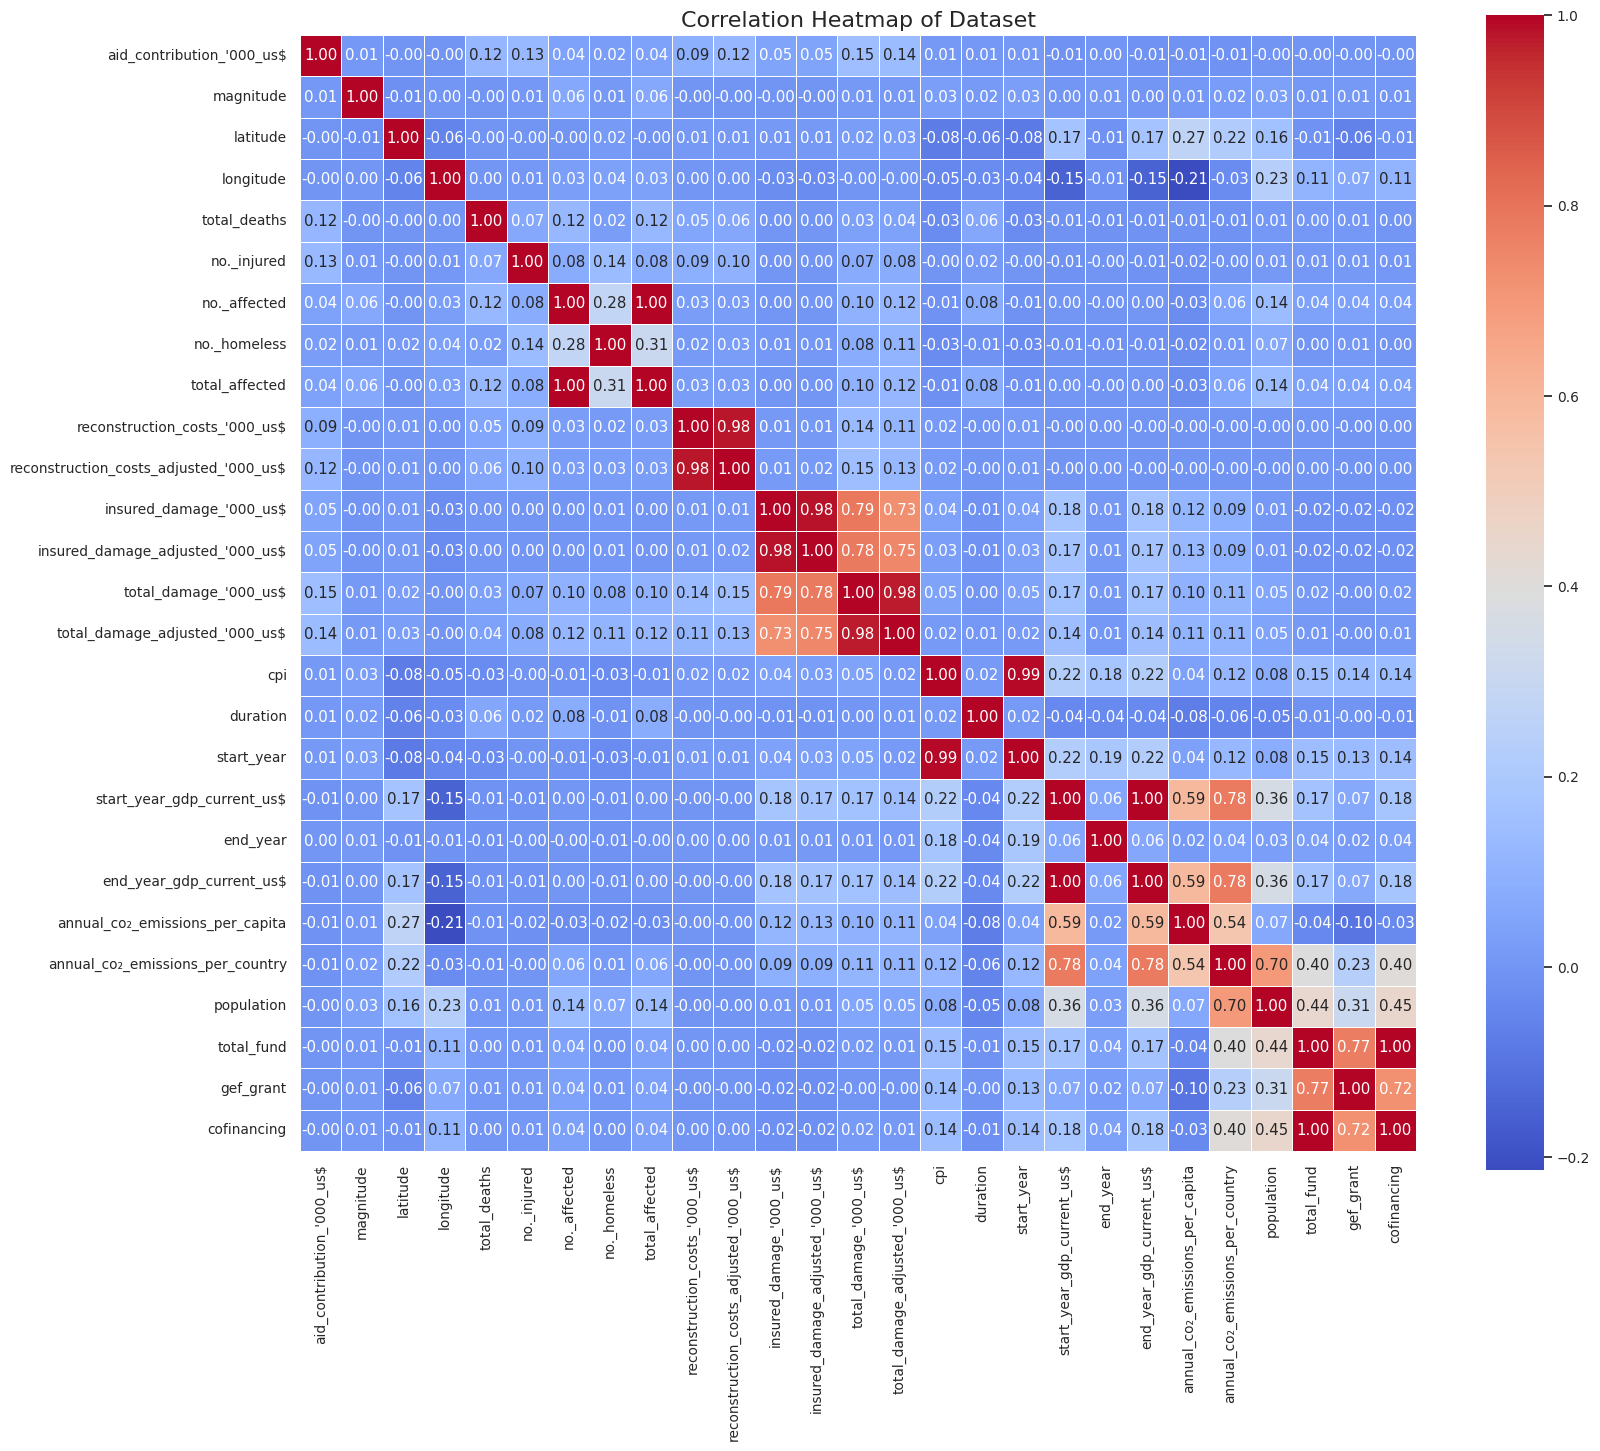

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Load the dataset (Replace with your actual file path)
file_path = "D:/work/college/E-Coders_SAS_Curiosity_Cup/datasets/merging_datasets/final_dataset_cleaned_with_latlon.csv"
df = pd.read_csv(file_path)

# 🔹 Drop non-numeric columns (for correlation calculation)
df_numeric = df.select_dtypes(include=[np.number])  

# 🔹 Handle missing values (fill NaN with 0 to avoid calculation issues)
df_numeric = df_numeric.fillna(0)

# 🔹 Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# 🔹 Set font to support CO₂ properly
plt.rcParams["font.family"] = "DejaVu Sans"  # Supports subscript characters

# 🔹 Create a full square heatmap with values
plt.figure(figsize=(18, 15))  
sns.heatmap(
    correlation_matrix, 
    cmap="coolwarm", 
    annot=True,        # 
    fmt=".2f",         #
    linewidths=0.5, 
    square=True
)

# 🔹 Title and display
plt.title("Correlation Heatmap of Dataset", fontsize=16)
plt.show()


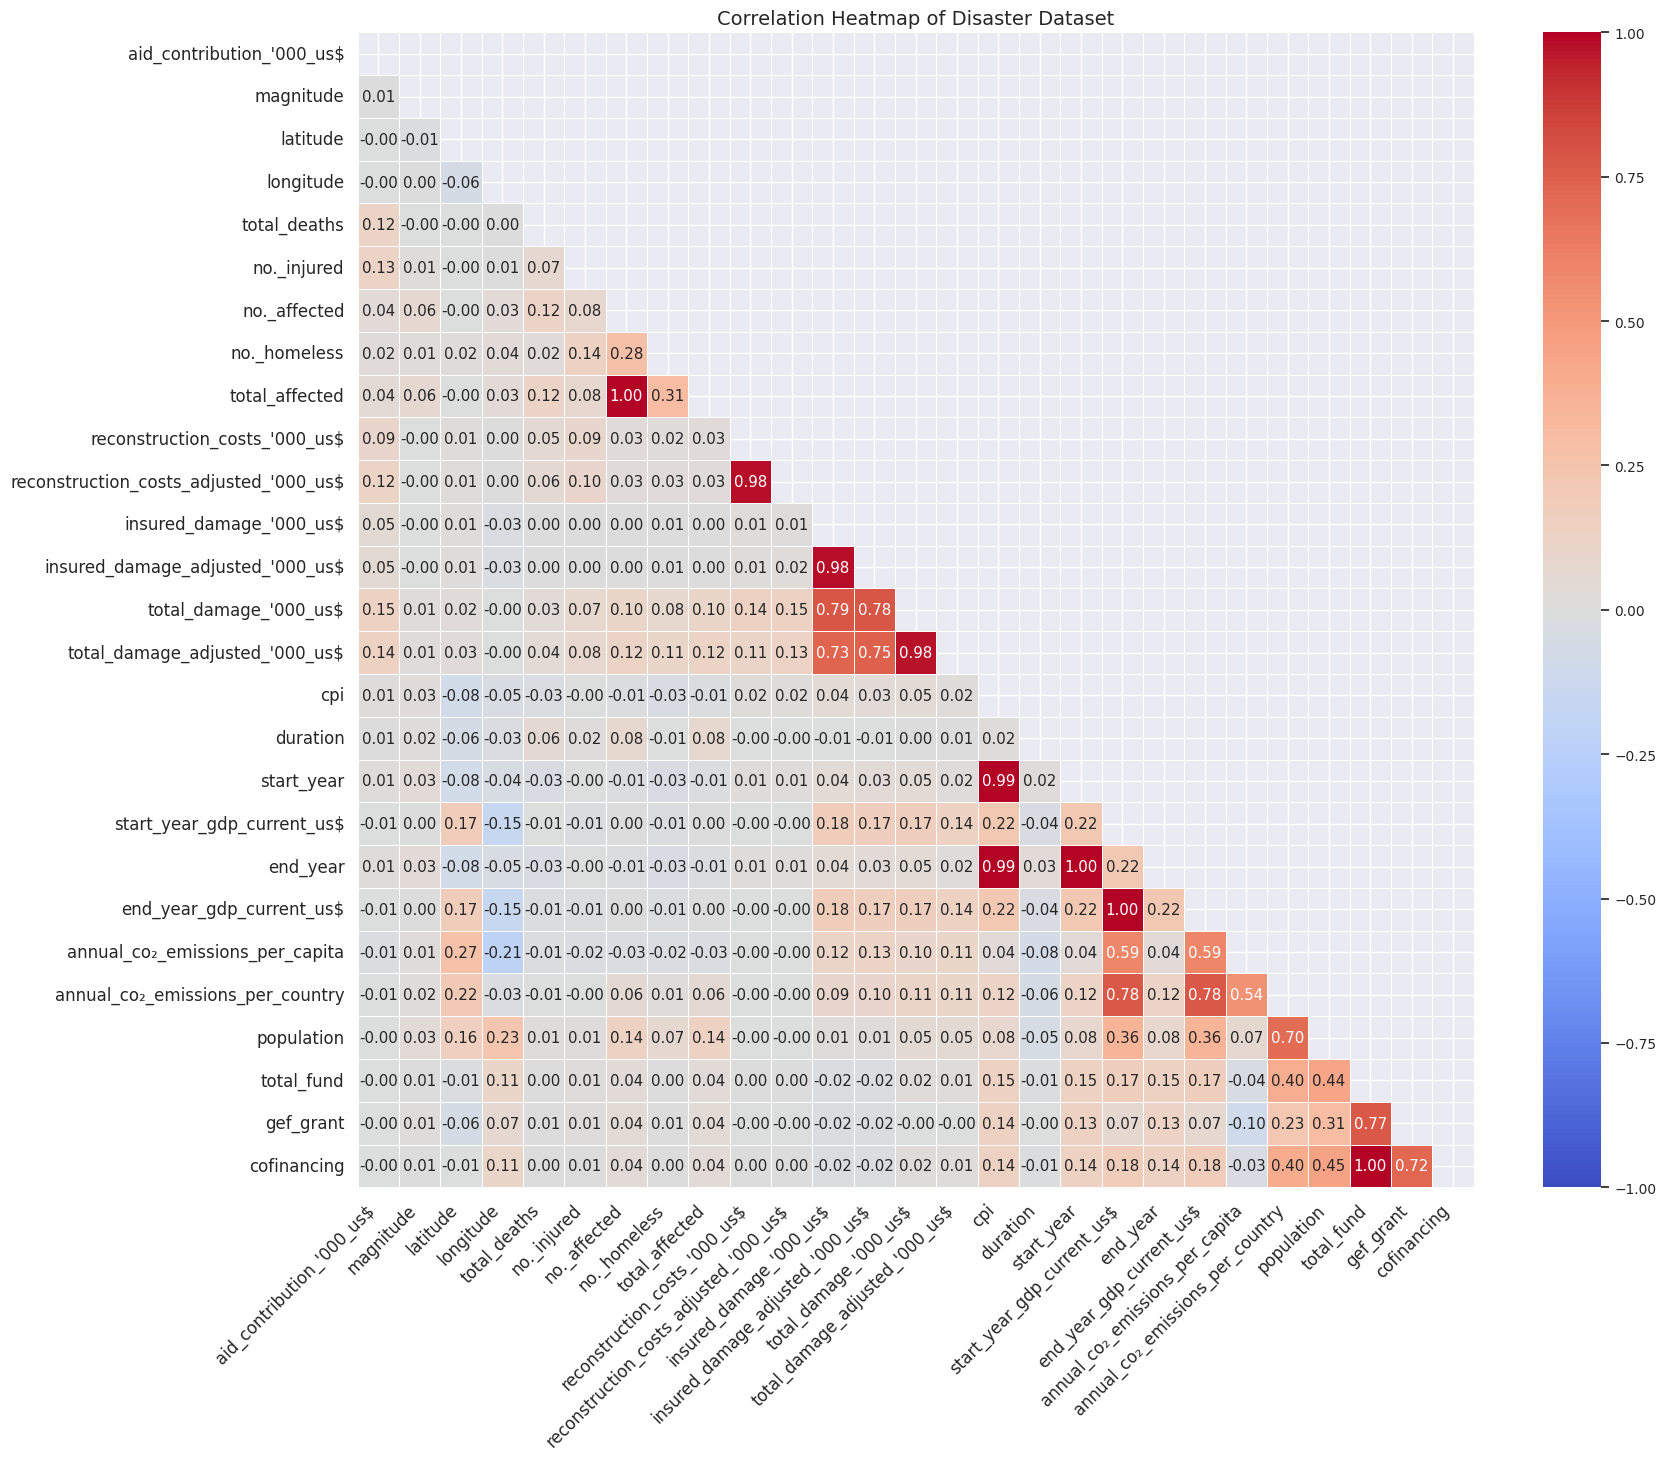

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Replace with actual file path if needed)
df = pd.read_csv("D:/work/college/E-Coders_SAS_Curiosity_Cup/datasets/merging_datasets/final_dataset_cleaned_with_latlon.csv")

# Select only numerical columns for correlation analysis
num_df = df.select_dtypes(include=['float64', 'int64'])

# 🔹 Drop non-numeric columns (for correlation calculation)
df_numeric = df.select_dtypes(include=[np.number])  

# 🔹 Handle missing values (fill NaN with 0 to avoid calculation issues)
df_numeric = df_numeric.fillna(0)


# Compute correlation matrix
corr_matrix = num_df.corr()

# Set up the figure
plt.figure(figsize=(18, 15))

# Create a mask for the upper triangle (to avoid duplicate values)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap with enhanced contrast
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f",
            linewidths=0.5, cbar=True, center=0, vmax=1, vmin=-1)

# Titles and formatting
plt.title("Correlation Heatmap of Disaster Dataset", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


In [19]:
import pandas as pd
import numpy as np

# Define the file path
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Initial Dataset Info:")
print(df.info())
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())



Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   iso_code                                15422 non-null  object 
 1   country                                 15422 non-null  object 
 2   disaster_subgroup                       15422 non-null  object 
 3   disaster_type                           15422 non-null  object 
 4   disaster_subtype                        15422 non-null  object 
 5   event_name                              15422 non-null  object 
 6   subregion                               15422 non-null  object 
 7   region                                  15422 non-null  object 
 8   location                                15422 non-null  object 
 9   aid_contribution_'000_us$               15422 non-null  int64  
 10  magnitude                           

In [22]:
import pandas as pd

# Define the file path
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Convert 'end_date' to datetime format properly (handling different formats)
df['end_date'] = pd.to_datetime(df['end_date'], format='%d-%m-%Y', errors='coerce')

# Fill only missing 'end_year' values with extracted year from 'end_date'
df.loc[df['end_year'].isna(), 'end_year'] = df.loc[df['end_year'].isna(), 'end_date'].dt.year

# Fill missing 'annual_co₂_emissions_per_country' using per capita values
df.loc[df['annual_co₂_emissions_per_country'].isna(), 'annual_co₂_emissions_per_country'] = (
    df['annual_co₂_emissions_per_capita'] * df['population']
)

# Save the cleaned dataset
cleaned_file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv"
df.to_csv(cleaned_file_path, index=False)

print("Missing values filled. Cleaned dataset saved at:", cleaned_file_path)


Missing values filled. Cleaned dataset saved at: D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv


In [21]:
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())


Missing Values Before Cleaning:
 iso_code                                  0
country                                   0
disaster_subgroup                         0
disaster_type                             0
disaster_subtype                          0
event_name                                0
subregion                                 0
region                                    0
location                                  0
aid_contribution_'000_us$                 0
magnitude                                 0
magnitude_scale                           0
latitude                                  0
longitude                                 0
total_deaths                              0
no._injured                               0
no._affected                              0
no._homeless                              0
total_affected                            0
reconstruction_costs_'000_us$             0
reconstruction_costs_adjusted_'000_us$    0
insured_damage_'000_us$                   

In [23]:

# 4. Standardize categorical column values (Example: Income Classification)
if "World Bank Income Classification" in df.columns:
    df["World Bank Income Classification"] = df["World Bank Income Classification"].str.strip().str.title()



In [25]:
import pandas as pd

# Define the file path
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Initial Dataset Info:")
print(df.info())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   iso_code                                15422 non-null  object 
 1   country                                 15422 non-null  object 
 2   disaster_subgroup                       15422 non-null  object 
 3   disaster_type                           15422 non-null  object 
 4   disaster_subtype                        15422 non-null  object 
 5   event_name                              15422 non-null  object 
 6   subregion                               15422 non-null  object 
 7   region                                  15422 non-null  object 
 8   location                                15422 non-null  object 
 9   aid_contribution_'000_us$               15422 non-null  int64  
 10  magnitude                           

In [26]:
# Display missing values
missing_values = df.isnull().sum()
print("\nMissing Values Before Cleaning:\n", missing_values[missing_values > 0])



Missing Values Before Cleaning:
 Series([], dtype: int64)


In [27]:
# Dataset Insights
print("\n=== Dataset Insights ===")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print(f"Total Missing Values: {missing_values.sum()}")




=== Dataset Insights ===
Total Rows: 15422
Total Columns: 41
Total Missing Values: 0


In [28]:
# Data Type Distribution
data_types = df.dtypes.value_counts()
print("\nData Type Distribution:")
print(data_types)




Data Type Distribution:
int64      15
object     14
float64    12
Name: count, dtype: int64


In [29]:
# Unique Values in Key Columns
key_columns = ['country', 'disaster_type', 'region', 'start_year', 'end_year']
for col in key_columns:
    print(f"\nUnique values in '{col}': {df[col].nunique()}")


Unique values in 'country': 202

Unique values in 'disaster_type': 14

Unique values in 'region': 5

Unique values in 'start_year': 64

Unique values in 'end_year': 65


In [31]:
# Statistical Summary of Numerical Columns
print("\nStatistical Summary of Numerical Data:")
print(df.describe())




Statistical Summary of Numerical Data:
       aid_contribution_'000_us$     magnitude      latitude     longitude  \
count               1.542200e+04  1.542200e+04  15422.000000  15422.000000   
mean                9.934728e+02  1.254492e+04     13.612796     17.579159   
std                 3.813600e+04  1.361235e+05     21.216624     70.608619   
min                 0.000000e+00 -5.700000e+01    -72.640000   -178.786521   
25%                 0.000000e+00  0.000000e+00      0.000000     -3.334033   
50%                 0.000000e+00  0.000000e+00     10.956204      0.000000   
75%                 0.000000e+00  6.100000e+00     31.729233     78.018690   
max                 3.518530e+06  1.302587e+07     71.636632    179.650000   

       total_deaths   no._injured  no._affected  no._homeless  total_affected  \
count  1.542200e+04  1.542200e+04  1.542200e+04  1.542200e+04    1.542200e+04   
mean   3.552347e+02  6.362025e+02  5.373811e+05  1.087550e+04    5.488928e+05   
std    1.31723

In [33]:
# Top 5 Most Frequent Disaster Types
print("\nTop 5 Most Frequent Disaster Types:")
print(df['disaster_type'].value_counts().head())




Top 5 Most Frequent Disaster Types:
disaster_type
Flood         5585
Storm         4189
Epidemic      1442
Earthquake    1217
Drought        758
Name: count, dtype: int64


In [32]:
# Check Date Ranges
print("\nDate Range Analysis:")
print(f"Earliest Start Date: {df['start_date'].min()}")
print(f"Latest End Date: {df['end_date'].max()}")



Date Range Analysis:
Earliest Start Date: 01-01-1960
Latest End Date: 2024-11-16


In [34]:
import pandas as pd
import numpy as np

# Define the file path
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to find outliers using IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

# Function to find outliers using Z-score
def find_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[np.abs(z_scores) > threshold]
    return outliers.shape[0]

# Find outliers in each numerical column
outlier_counts = {}
for col in numerical_cols:
    iqr_outliers = find_outliers_iqr(df, col)
    zscore_outliers = find_outliers_zscore(df, col)
    outlier_counts[col] = {'IQR Outliers': iqr_outliers, 'Z-Score Outliers': zscore_outliers}

# Convert results to DataFrame
outliers_df = pd.DataFrame(outlier_counts).T

# Display outliers per column
print("\nOutlier Summary:")
print(outliers_df)


print("\nOutlier detection completed. Summary saved at: outliers_summary.csv")



Outlier Summary:
                                        IQR Outliers  Z-Score Outliers
aid_contribution_'000_us$                        754                19
magnitude                                       3316               104
latitude                                          16                15
longitude                                         66                 0
total_deaths                                    2084                16
no._injured                                     3432                37
no._affected                                    2881                65
no._homeless                                    2275                42
total_affected                                  2834                65
reconstruction_costs_'000_us$                     39                10
reconstruction_costs_adjusted_'000_us$            39                11
insured_damage_'000_us$                         1089                53
insured_damage_adjusted_'000_us$                1089       

In [35]:
# Display Latitude, Longitude, and Country columns
print(df[['latitude', 'longitude', 'country']].head(20))  # Adjust number of rows as needed

# Check for missing values in these columns
print("\nMissing Values in Latitude, Longitude, and Country:")
print(df[['latitude', 'longitude', 'country']].isnull().sum())


     latitude  longitude      country
0    0.000000   0.000000  Afghanistan
1   35.134036  61.571350  Afghanistan
2   54.292805  -7.804112  Afghanistan
3   34.979040  66.948019  Afghanistan
4    0.000000   0.000000  Afghanistan
5   36.424000  70.881000  Afghanistan
6   35.169000  69.389000  Afghanistan
7   50.847202   4.381621  Afghanistan
8   36.870719  68.756353  Afghanistan
9   33.522134  64.416006  Afghanistan
10   0.000000   0.000000  Afghanistan
11  35.276921  69.151311  Afghanistan
12  36.429000  70.438000  Afghanistan
13  34.829660  67.811658  Afghanistan
14  36.062000  69.315000  Afghanistan
15  36.833494  66.820091  Afghanistan
16  34.151347  66.973499  Afghanistan
17   0.000000   0.000000  Afghanistan
18  32.812968  66.018319  Afghanistan
19  35.959000  69.417000  Afghanistan

Missing Values in Latitude, Longitude, and Country:
latitude     0
longitude    0
country      0
dtype: int64


In [39]:
import pandas as pd

# Define the file path
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Count the number of missing values (0.000000) in latitude and longitude
missing_latlon_count = ((df['latitude'] == 0.000000) & (df['longitude'] == 0.000000)).sum()

# Display results
print(f"Number of missing (0.000000, 0.000000) latitude-longitude pairs: {missing_latlon_count}")



Number of missing (0.000000, 0.000000) latitude-longitude pairs: 3835


To identify the unique countries with missing latitude-longitude values (0.000000, 0.000000), follow these steps:

Steps to Follow:
Filter rows where latitude & longitude are both 0.000000
List unique country names from those rows
Display how many times each country appears in missing lat-long data
Use the unique country names to update country_coords dictionary


In [40]:
import pandas as pd

# Define the file path
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Filter rows where latitude & longitude are both zero
missing_latlon_df = df[(df['latitude'] == 0.000000) & (df['longitude'] == 0.000000)]

# Get unique countries with missing lat-long
missing_countries = missing_latlon_df['country'].value_counts()

# Display the list of unique countries and their counts
print("Unique Countries with Missing Latitude-Longitude Values:")
print(missing_countries)

# Save the missing values report (optional)
missing_countries.to_csv(r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\missing_latlon_countries.csv")

print("\nCheck 'missing_latlon_countries.csv' for a detailed report.")


Unique Countries with Missing Latitude-Longitude Values:
country
United States of America     254
China                        205
Philippines                  195
Indonesia                    124
India                        120
                            ... 
Seychelles                     1
Sint Maarten (Dutch part)      1
Turkmenistan                   1
Turks and Caicos Islands       1
Uzbekistan                     1
Name: count, Length: 179, dtype: int64

Check 'missing_latlon_countries.csv' for a detailed report.


### To fill in the missing latitude and longitude values (0.000000, 0.000000), we can use the country's central coordinates as a fallback. Here’s how:

## Steps:
#### Create a dictionary with central latitude-longitude values for each country.
#### Replace missing values (0.000000, 0.000000) with the country’s central coordinates.
#### Save the updated dataset for further processing.
#### Python Code to Fix Missing Latitude-Longitude Values:

In [16]:
import pandas as pd

# Define the file path
file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Dictionary of country central coordinates (latitude, longitude)
country_coords = {
    "United States of America": (37.0902, -95.7129),
    "China": (35.8617, 104.1954),
    "Philippines": (12.8797, 121.7740),
    "Indonesia": (-0.7893, 113.9213),
    "India": (20.5937, 78.9629),
    "Bangladesh": (23.6850, 90.3563),
    "Russian Federation": (61.5240, 105.3188),
    "Pakistan": (30.3753, 69.3451),
    "Japan": (36.2048, 138.2529),
    "France": (46.6034, 1.8883),
    "Afghanistan": (33.9391, 67.7100),
    "Iran (Islamic Republic of)": (32.4279, 53.6880),
    "Colombia": (4.5709, -74.2973),
    "Democratic Republic of the Congo": (-4.0383, 21.7587),
    "Madagascar": (-18.7669, 46.8691),
    "Peru": (-9.1900, -75.0152),
    "Kenya": (-1.2864, 36.8172),
    "Nepal": (28.3949, 84.1240),
    "Thailand": (15.8700, 100.9925),
    "Ethiopia": (9.1450, 40.4897),
    "Viet Nam": (14.0583, 108.2772),
    "Italy": (41.8719, 12.5674),
    "Republic of Korea": (35.9078, 127.7669),
    "Sri Lanka": (7.8731, 80.7718),
    "Brazil": (-14.2350, -51.9253),
    "Guatemala": (15.7835, -90.2308),
    "Australia": (-25.2744, 133.7751),
    "Bolivia (Plurinational State of)": (-16.2902, -63.5887),
    "Mexico": (23.6345, -102.5528),
    "Mozambique": (-18.6657, 35.5296),
    "Somalia": (5.1521, 46.1996),
    "Uganda": (1.3733, 32.2903),
    "Greece": (39.0742, 21.8243),
    "Nigeria": (9.0820, 8.6753),
    "Poland": (51.9194, 19.1451),
    "Niger": (17.6078, 8.0817),
    "Argentina": (-38.4161, -63.6167),
    "Tajikistan": (38.8610, 71.2761),
    "Türkiye": (38.9637, 35.2433),
    "Spain": (40.4637, -3.7492),
    "United Republic of Tanzania": (-6.3690, 34.8888),
    "Benin": (9.3077, 2.3158),
    "Malawi": (-13.2543, 34.3015),
    "Zimbabwe": (-19.0154, 29.1549),
    "South Africa": (-30.5595, 22.9375),
    "Myanmar": (21.9162, 95.9560),
    "Haiti": (18.9712, -72.2852),
    "Lao People's Democratic Republic": (19.8563, 102.4955),
    "Sudan": (12.8628, 30.2176),
    "Czechia": (49.8175, 15.4729),
    "Angola": (-11.2027, 17.8739),
    "United Kingdom of Great Britain and Northern Ireland": (55.3781, -3.4360),
    "Mongolia": (46.8625, 103.8467),
    "Ecuador": (-1.8312, -78.1834),
    "Serbia": (44.0165, 21.0059),
    "Malaysia": (4.2105, 101.9758),
    "Bulgaria": (42.7339, 25.4858),
    "Papua New Guinea": (-6.3149, 143.9555),
    "Rwanda": (-1.9403, 29.8739),
    "Dominican Republic": (18.7357, -70.1627),
    "Honduras": (15.2000, -86.2419),
    "Bosnia and Herzegovina": (43.9159, 17.6791),
    "Burundi": (-3.3731, 29.9189),
    "Burkina Faso": (12.2383, -1.5616),
    "Chile": (-35.6751, -71.5430),
    "Ukraine": (48.3794, 31.1656),
    "Romania": (45.9432, 24.9668),
    "Germany": (51.1657, 10.4515),
    "Ghana": (7.9465, -1.0232),
    "Mali": (17.5707, -3.9962),
    "Mauritania": (21.0079, -10.9408),
    "Panama": (8.5379, -80.7821),
    "Chad": (15.4542, 18.7322),
    "Costa Rica": (9.7489, -83.7534),
    "Central African Republic": (6.6111, 20.9394),
    "Canada": (56.1304, -106.3468),
    "Croatia": (45.1000, 15.2000),
    "Côte d’Ivoire": (7.5399, -5.5471),
    "Zambia": (-13.1339, 27.8493),
    "Morocco": (31.7917, -7.0926),
    "Algeria": (28.0339, 1.6596),
    "Nicaragua": (12.8654, -85.2072),
    "Senegal": (14.4974, -14.4524),
    "Paraguay": (-23.4425, -58.4438),
    "Portugal": (39.3999, -8.2245),
    "Cuba": (21.5218, -77.7812),
    "Yemen": (15.5527, 48.5164),
    "Switzerland": (46.8182, 8.2275),
    "North Macedonia": (41.6086, 21.7453),
    "Kazakhstan": (48.0196, 66.9237),
    "Cameroon": (7.3697, 12.3547),
    "Syrian Arab Republic": (34.8021, 38.9968),
    "Eswatini": (-26.5225, 31.4659),
    "Botswana": (-22.3285, 24.6849),
    "Namibia": (-22.9576, 18.4904),
    "El Salvador": (13.7942, -88.8965),
    "Vanuatu": (-15.3767, 166.9592),
    "Togo": (8.6195, 0.8248),
    "Georgia": (42.3154, 43.3569),
    "Albania": (41.1533, 20.1683),
    "Austria": (47.5162, 14.5501),
    "Congo": (-4.0383, 21.7587),
    "Cambodia": (12.5657, 104.9910),
    "Kyrgyzstan": (41.2044, 74.7661),
    "Guinea": (9.9456, -9.6966),
    "Armenia": (40.0691, 45.0382),
    "Azerbaijan": (40.1431, 47.5769),
    "Barbados": (13.1939, -59.5432),
    "Belarus": (53.7098, 27.9534),
    "Belgium": (50.5039, 4.4699),
    "Bhutan": (27.5142, 90.4336),
    "Cabo Verde": (16.0021, -24.0132),
    "China, Hong Kong Special Administrative Region": (22.3964, 114.1095),
    "Comoros": (-11.875, 43.8722),
    "Cyprus": (35.1264, 33.4299),
    "Denmark": (56.2639, 9.5018),
    "Djibouti": (11.8251, 42.5903),
    "Dominica": (15.415, -61.371),
    "Egypt": (26.8206, 30.8025),
    "Eritrea": (15.1794, 39.7823),
    "Estonia": (58.5953, 25.0136),
    "Fiji": (-16.5782, 179.4144),
    "French Polynesia": (-17.6797, -149.4068),
    "Gabon": (-0.8037, 11.6094),
    "Gambia": (13.4432, -15.3101),
    "Grenada": (12.2628, -61.6042),
    "Guinea-Bissau": (11.8037, -15.1804),
    "Guyana": (4.8604, -58.9302),
    "Hungary": (47.1625, 19.5033),
    "Iceland": (64.9631, -19.0208),
    "Iraq": (33.2232, 43.6793),
    "Ireland": (53.4129, -8.2439),
    "Israel": (31.0461, 34.8516),
    "Jamaica": (18.1096, -77.2975),
    "Jordan": (30.5852, 36.2384),
    "Latvia": (56.8796, 24.6032),
    "Lebanon": (33.8547, 35.8623),
    "Lesotho": (-29.6099, 28.2336),
    "Liberia": (6.4281, -9.4295),
    "Lithuania": (55.1694, 23.8813),
    "Maldives": (3.2028, 73.2207),
    "Marshall Islands": (7.1315, 171.1845),
    "Mauritius": (-20.3484, 57.5522),
    "Micronesia (Federated States of)": (7.4256, 150.5508),
    "Montenegro": (42.7087, 19.3744),
    "Netherlands (Kingdom of the)": (52.1326, 5.2913),
    "New Caledonia": (-20.9043, 165.618),
    "New Zealand": (-40.9006, 174.886),
    "Norway": (60.472, 8.4689),
    "Oman": (21.5126, 55.9233),
    "Palau": (7.515, 134.5825),
    "Puerto Rico": (18.2208, -66.5901),
    "Qatar": (25.3548, 51.1839),
    "Republic of Moldova": (47.4116, 28.3699),
    "Saint Lucia": (13.9094, -60.9789),
    "Saint Vincent and the Grenadines": (13.2528, -61.1971),
    "Samoa": (-13.759, -172.1046),
    "Sao Tome and Principe": (0.1864, 6.6131),
    "Saudi Arabia": (23.8859, 45.0792),
    "Seychelles": (-4.6796, 55.492),
    "Sierra Leone": (8.4606, -11.7799),
    "Sint Maarten (Dutch part)": (18.0425, -63.0548),
    "Slovakia": (48.669, 19.699),
    "Slovenia": (46.1512, 14.9955),
    "Solomon Islands": (-9.6457, 160.1562),
    "South Sudan": (7.8627, 30.2176),
    "State of Palestine": (31.9522, 35.2332),
    "Suriname": (3.9193, -56.0278),
    "Sweden": (60.1282, 18.6435),
    "Timor-Leste": (-8.8742, 125.7275),
    "Tonga": (-21.179, -175.1982),
    "Trinidad and Tobago": (10.6918, -61.2225),
    "Tunisia": (33.8869, 9.5375),
    "Turkmenistan": (38.9697, 59.5563),
    "Turks and Caicos Islands": (21.694, -71.7979),
    "Tuvalu": (-7.1095, 177.6493),
    "Uruguay": (-32.5228, -55.7658),
    "Uzbekistan": (41.3775, 64.5853),
    "Venezuela (Bolivarian Republic of)": (6.4238, -66.5897)
}


# Fill missing lat-lon values based on country
for country, coords in country_coords.items():
    mask = (df['country'] == country) & (df['latitude'] == 0.000000) & (df['longitude'] == 0.000000)
    df.loc[mask, ['latitude', 'longitude']] = coords

# Save the updated dataset
updated_file_path = r"D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv"
df.to_csv(updated_file_path, index=False)

print(f"Missing latitude-longitude values filled. Updated dataset saved at: {updated_file_path}")


Missing latitude-longitude values filled. Updated dataset saved at: D:\work\college\E-Coders_SAS_Curiosity_Cup\datasets\FInal dataset\final_dataset_cleaned_with_latlon.csv


In [17]:
# Filter rows where latitude & longitude are both zero
missing_latlon_df = df[(df['latitude'] == 0.000000) & (df['longitude'] == 0.000000)]

# Get unique countries with missing lat-long
missing_countries = missing_latlon_df['country'].value_counts()

# Display the list of unique countries and their counts
print("Unique Countries with Missing Latitude-Longitude Values:")
print(missing_countries)

Unique Countries with Missing Latitude-Longitude Values:
Series([], Name: count, dtype: int64)
